In [1]:
!pip install spacy umap-learn numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 29.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.0 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.1/777.1 kB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━

In [2]:
text = """
ASCE STANDARD
ASCE/SEI
7-16
Minimum Design Loads and 
Associated Criteria for 
Buildings and Other Structures
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ASCE STANDARD ASCE/SEI
7-16
Minimum Design Loads and
Associated Criteria for Buildingsand Other Structures
PUBLISHED BY THE AMERICAN SOCIETY OF CIVIL ENGINEERS
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Library of Congress Cataloging-in-Publication Data
Names: American Society of Civil Engineers.
Title: Minimum design loads and associated criteria for buildings and other structures.
Other titles: Minimum design loads for buildings and other structures. | ASCE standard, ASCE/
SEI 7-16, minimum design loads and associated criteria for buildings and other structures
Description: Reston, Virginia : American Society of Civil Engineers, [2017] | Earlier versions
of the standard have title: Minimum design loads for buildings and other structures. | “ASCE
standard, ASCE/SEI 7-16. ”| Includes bibliographical references and index.
Identi ﬁers: LCCN 2017018275| ISBN 9780784414248 (softcover : alk. paper) | ISBN
9780784479964 (PDF)
Subjects: LCSH: Structural engineering –Standards –United States. | Buildings –Standards –
United States. | Strains and stresses. | Standards, Engineering –United States.
Classi ﬁcation: LCC TH851 .M56 2017 | DDC 624.102/1873 –dc23 LC record available at
https://lccn.loc.gov/2017018275
Published by American Society of Civil Engineers
1801 Alexander Bell Drive
Reston, Virginia, 20191-4382
www.asce.org/bookstore |ascelibrary.org
This standard was developed by a consensus standards development process that has been
accredited by the American National Standards Institute (ANSI). Accreditation by ANSI, a
voluntary accreditation body representing public and private sector standards development
organizations in the United States and abroad, signi ﬁes that the standards development process
used by ASCE has met the ANSI requirements for openness, balance, consensus, and due
process.
While ASCE ’s process is designed to promote standards that re ﬂect a fair and reasoned consensus
among all interested participants, while preserving the public health, safety, and welfare that is
paramount to its mission, it has not made an independent assessment of and does not warrant the
accuracy, completeness, suitability, or utility of any information, apparatus, product, or process
discussed herein. ASCE does not intend, nor should anyone interpret, ASCE ’ss t a n d a r d st or e p l a c e
the sound judgment of a competent professional, having knowledge and experience in the
appropriate ﬁeld(s) of practice, nor to substitute for the standard of care required of such
professionals in interpreting and applying the contents of this standard.
ASCE has no authority to enforce compliance with its standards and does not undertake to
certify products for compliance or to render any professional services to any person or entity.
ASCE, its af ﬁliates, of ﬁcers, directors, employees, and volunteers disclaim any and all liability
for any personal injury, property damage, ﬁnancial loss, or other damages of any nature whatsoever,
including without limitation any direct, indirect , special, exemplary, or consequential damages,
resulting from any person ’s use of, or reliance on, this standard. Any individual who relies on this
standard assumes full responsibility for such use.
ASCE and American Society of Civil Engineers —Registered in U.S. Patent and Trademark
Ofﬁce.
Photocopies and permissions . Permission to photocopy or reproduce material from ASCE
publications can be requested by sending an e-mail to permissions@asce.org or by locating a
title in ASCE's Civil Engineering Database ( http://cedb.asce.org ) or ASCE Library ( http://
ascelibrary.org ) and using the “Permissions ”link.
Errata : Errata, if any, can be found at https://doi.org/10.1061/9780784414248.
Copyright © 2017 by the American Society of Civil Engineers.
All Rights Reserved.
ISBN 978-0-7844-1424-8 (soft cover)
ISBN 978-0-7844-7996-4 (PDF)
Online platform: http://ASCE7.online
Manufactured in the United States of America.
2 42 32 22 12 01 91 81 7 12345
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ASCE STANDARDS
In 2014, the Board of Direction approved revisions to the
ASCE Rules for Standards Committees to govern the writing
and maintenance of standards developed by ASCE. All suchstandards are developed by a consensus standards processmanaged by the ASCE Codes and Standards Committee (CSC).The consensus process includes balloting by a balanced
standards committee and reviewing during a public comment
period. All standards are updated or reaf ﬁrmed by the same
process every ﬁve to ten years. Requests for formal interpreta-
tions shall be processed in accordance with Section 7 of ASCERules for Standards Committees, which are available
atwww.asce.org . Errata, addenda, supplements, and interpreta-
tions, if any, for this standard can also be found athttps://doi.org/10.1061/9780784414248 .This standard has been prepared in accordance with recog-
nized engineering principles and should not be used without the
user’s competent knowledge for a given application. The publi-
cation of this standard by ASCE is not intended to warrant thatthe information contained therein is suitable for any general orspeciﬁc use, and ASCE takes no position respecting the validity
of patent rights. The user is advised that the determination of
patent rights or risk of infringement is entirely his or her ownresponsibility.
A complete list of current standards is available in the ASCE
Library ( http://ascelibrary.org/page/books/s-standards ).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures iii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
BRIEF CONTENTS
ASCE STANDARDS ...................................................... i i i
TIPS FOR USING THIS STANDARD ............................................ i v
ACKNOWLEDGMENTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . xlvii
1 GENERAL . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1
2 COMBINATIONS OF LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7
3 DEAD LOADS, SOIL LOADS, AND HYDROSTATIC PRESSURE . . . . . . . . . . . . . . . . . . . . . . . . . 114 LIVE LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 135 FLOOD LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 216 TSUNAMI LOADS AND EFFECTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 25
7 SNOW LOADS. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 51
8 RAIN LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 659 RESERVED FOR FUTURE PROVISIONS. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 6710 ICE LOADS —ATMOSPHERIC ICING. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 69
11 SEISMIC DESIGN CRITERIA . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 77
12 SEISMIC DESIGN REQUIREMENTS FOR BUILDING STRUCTURES. . . . . . . . . . . . . . . . . . . . . . . 8913 SEISMIC DESIGN REQUIREMENTS FOR NONSTRUCTURAL COMPONENTS. . . . . . . . . . . . . . . . . 12114 MATERIAL-SPECIFIC SEISMIC DESIGN AND DETAILING REQUIREMENTS . . . . . . . . . . . . . . . . . 13515 SEISMIC DESIGN REQUIREMENTS FOR NONBUILDING STRUCTURES. . . . . . . . . . . . . . . . . . . . 145
16 NONLINEAR RESPONSE HISTORY ANALYSIS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 163
17 SEISMIC DESIGN REQUIREMENTS FOR SEISMICALLY ISOLATED STRUCTURES . . . . . . . . . . . . . 16718 SEISMIC DESIGN REQUIREMENTS FOR STRUCTURES WITH DAMPING SYSTEMS . . . . . . . . . . . . . 18119 SOIL –STRUCTURE INTERACTION FOR SEISMIC DESIGN. . . . . . . . . . . . . . . . . . . . . . . . . . . . 197
20 SITE CLASSIFICATION PROCEDURE FOR SEISMIC DESIGN . . . . . . . . . . . . . . . . . . . . . . . . . . 203
Minimum Design Loads and Associated Criteria for Buildings and Other Structures v
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
21 SITE-SPECIFIC GROUND MOTION PROCEDURES FOR SEISMIC DESIGN. . . . . . . . . . . . . . . . . . . 205
22 SEISMIC GROUND MOTION, LONG-PERIOD TRANSITION, AND RISK COEFFICIENT MAPS . . . . . . . 20923 SEISMIC DESIGN REFERENCE DOCUMENTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 237
24 RESERVED FOR FUTURE PROVISIONS. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 241
25 RESERVED FOR FUTURE PROVISIONS. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 24326 WIND LOADS: GENERAL REQUIREMENTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 24527 WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM (DIRECTIONAL PROCEDURE) 27328 WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM (ENVELOPE PROCEDURE). . 311
29 WIND LOADS ON BUILDING APPURTENANCES AND OTHER STRUCTURES: MAIN WIND FORCE
RESISTING SYSTEM (DIRECTIONAL PROCEDURE) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 321
30 WIND LOADS: COMPONENTS AND CLADDING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333
31 WIND TUNNEL PROCEDURE. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 389
APPENDIX 11A QUALITY ASSURANCE PROVISIONS (Deleted) . . . . . . . . . . . . . . . . . . . . . . . . . . . . 391
APPENDIX 11B EXISTING BUILDING PROVISIONS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 393
APPENDIX C SERVICEABILITY CONSIDERATIONS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
APPENDIX D BUILDINGS EXEMPTED FROM TORSIONAL WIND LOAD CASES . . . . . . . . . . . . . . . . . . 397APPENDIX E PERFORMANCE-BASED DESIGN PROCEDURES FOR FIRE EFFECTS ON STRUCTURES . . . . . 401
COMMENTARY TO STANDARD ASCE/SEI 7-16
C1 GENERAL . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 405
C2 COMBINATIONS OF LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 417
C3 DEAD LOADS, SOIL LOADS, AND HYDROSTATIC PRESSURE . . . . . . . . . . . . . . . . . . . . . . . . . 425C4 LIVE LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 433C5 FLOOD LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 439C6 TSUNAMI LOADS AND EFFECTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 447
vi STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C7 SNOW LOADS. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 489
C8 RAIN LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 507C9 RESERVED FOR FUTURE COMMENTARY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 515
C10 ICE LOADS —ATMOSPHERIC ICING. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 517
C11 SEISMIC DESIGN CRITERIA . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 525
C12 SEISMIC DESIGN REQUIREMENTS FOR BUILDING STRUCTURES. . . . . . . . . . . . . . . . . . . . . . . 543C13 SEISMIC DESIGN REQUIREMENTS FOR NONSTRUCTURAL COMPONENTS. . . . . . . . . . . . . . . . . 593C14 MATERIAL-SPECIFIC SEISMIC DESIGN AND DETAILING REQUIREMENTS . . . . . . . . . . . . . . . . . 619
C15 SEISMIC DESIGN REQUIREMENTS FOR NONBUILDING STRUCTURES. . . . . . . . . . . . . . . . . . . . 631
C16 NONLINEAR RESPONSE HISTORY ANALYSIS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 657C17 SEISMIC DESIGN REQUIREMENTS FOR SEISMICALLY ISOLATED STRUCTURES . . . . . . . . . . . . . 673C18 SEISMIC DESIGN REQUIREMENTS FOR STRUCTURES WITH DAMPING SYSTEMS . . . . . . . . . . . . . 693C19 SOIL –STRUCTURE INTERACTION FOR SEISMIC DESIGN. . . . . . . . . . . . . . . . . . . . . . . . . . . . 703
C20 SITE CLASSIFICATION PROCEDURE FOR SEISMIC DESIGN . . . . . . . . . . . . . . . . . . . . . . . . . . 709C21 SITE-SPECIFIC GROUND MOTION PROCEDURES FOR SEISMIC DESIGN. . . . . . . . . . . . . . . . . . . 711C22 SEISMIC GROUND MOTION, LONG-PERIOD TRANSITION, AND RISK COEFFICIENT MAPS . . . . . . . 717C23 SEISMIC DESIGN REFERENCE DOCUMENTS (No Commentary) . . . . . . . . . . . . . . . . . . . . . . . . . 725
C24 RESERVED FOR FUTURE COMMENTARY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 727
C25 RESERVED FOR FUTURE COMMENTARY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 729C26 WIND LOADS: GENERAL REQUIREMENTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 731C27 WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM (DIRECTIONAL PROCEDURE) 767C28 WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM (ENVELOPE PROCEDURE). . 771
C29 WIND LOADS ON BUILDING APPURTENANCES AND OTHER STRUCTURES: MAIN WIND FORCE
RESISTING SYSTEM (DIRECTIONAL PROCEDURE) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 775
Minimum Design Loads and Associated Criteria for Buildings and Other Structures vii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C30 WIND LOADS: COMPONENTS AND CLADDING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 781
C31 WIND TUNNEL PROCEDURE. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 793
APPENDIX C11A QUALITY ASSURANCE PROVISIONS (Deleted) . . . . . . . . . . . . . . . . . . . . . . . . . . . . 797
APPENDIX C11B EXISTING BUILDING PROVISIONS (No Commentary) . . . . . . . . . . . . . . . . . . . . . . . . 799APPENDIX CC SERVICEABILITY CONSIDERATIONS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 801
APPENDIX CD BUILDINGS EXEMPTED FROM TORSIONAL WIND LOAD CASES . . . . . . . . . . . . . . . . . 813
APPENDIX CE PERFORMANCE-BASED DESIGN PROCEDURES FOR FIRE EFFECTS ON STRUCTURES . . . .
815
INDEX . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Index-1
viii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CONTENTS
ASCE STANDARDS ...................................................... i i i
TIPS FOR USING THIS STANDARD ........................................... i v
ACKNOWLEDGMENTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . xlvii
1 GENERAL . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1
1 . 1 S c o p e ..................................................... 11.2 De ﬁnitions and Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1
1.2.1 De ﬁnitions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1
1.2.2 Symbols. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2
1.3 Basic Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2
1.3.1 Strength and Stiffness. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2
1.3.1.1 Strength Procedures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2
1.3.1.2 Allowable Stress Procedures. . . . . . . . . . . . . . . . . . . . . . . . . . . . 2
1.3.1.3 Performance-Based Procedures. . . . . . . . . . . . . . . . . . . . . . . . . . . 2
1.3.2 Serviceability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31.3.3 Functionality.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31.3.4 Self-Straining Forces and Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 3
1.3.5 Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 3
1.3.6 Counteracting Structural Actions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31.3.7 Fire Resistance. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 3
1.4 General Structural Integrity . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 3
1.4.1 Load Path Connections. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4
1.4.2 Lateral Forces. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 41.4.3 Connection to Supports. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 41.4.4 Anchorage of Structural Walls. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 41.4.5 Extraordinary Loads and Events. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4
1.5 Classi ﬁcation of Buildings and other Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4
1.5.1 Risk Categorization. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 41.5.2 Multiple Risk Categories. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 51.5.3 Toxic, Highly Toxic, and Explosive Substances. . . . . . . . . . . . . . . . . . . . . . . . . 5
1.6 Additions and Alterations to Existing Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 5
1.7 Load Tests . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 5
1.8 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 5
2 COMBINATIONS OF LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7
2.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 72.2 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7
2.3 Load Combinations for Strength Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7
2.3.1 Basic Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 72.3.2 Load Combinations Including Flood Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . 72.3.3 Load Combinations Including Atmospheric Ice Loads.. . . . . . . . . . . . . . . . . . . . . 7
2.3.4 Load Combinations Including Self-Straining Forces and Effects. . . . . . . . . . . . . . . . 7
2.3.5 Load Combinations for Nonspeci ﬁed Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . 8
2.3.6 Basic Combinations with Seismic Load Effects. . . . . . . . . . . . . . . . . . . . . . . . . 8
2.4 Load Combinations for Allowable Stress Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8
2.4.1 Basic Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8
2.4.2 Load Combinations Including Flood Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . 8
2.4.3 Load Combinations Including Atmospheric Ice Loads.. . . . . . . . . . . . . . . . . . . . . 82.4.4 Load Combinations Including Self-Straining Forces and Effects. . . . . . . . . . . . . . . . 92.4.5 Basic Combinations with Seismic Load Effects. . . . . . . . . . . . . . . . . . . . . . . . . 9
2.5 Load Combinations for Extraordinary Events . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9
2.5.1 Applicability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9
2.5.2 Load Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9
Minimum Design Loads and Associated Criteria for Buildings and Other Structures ix
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2.5.2.1 Capacity. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9
2.5.2.2 Residual Capacity. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9
2.5.3 Stability Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9
2.6 Load Combinations for General Structural Integrity Loads. . . . . . . . . . . . . . . . . . . . . . . . . 9
2.6.1 Strength Design Notional Load Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . 92.6.2 Allowable Stress Design Notional Load Combinations. . . . . . . . . . . . . . . . . . . . . 9
2.7 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 9
3 DEAD LOADS, SOIL LOADS, AND HYDROSTATIC PRESSURE . . . . . . . . . . . . . . . . . . . . . . . . . 11
3.1 Dead Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11
3.1.1 De ﬁnition. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11
3.1.2 Weights of Materials and Constructions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 113.1.3 Weight of Fixed Service Equipment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 113.1.4 Vegetative and Landscaped Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11
3.1.5 Solar Panels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12
3.2 Soil Loads and Hydrostatic Pressure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12
3.2.1 Lateral Pressures.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 123.2.2 Uplift Loads on Floors and Foundations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12
3.3 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 12
4 LIVE LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13
4.1 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13
4.2 Loads Not Speci ﬁe d............................................. 1 3
4.3 Uniformly Distributed Live Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13
4.3.1 Required Live Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13
4.3.2 Provision for Partitions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 134.3.3 Partial Loading. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13
4.4 Concentrated Live Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 134.5 Loads on Handrail, Guardrail, Grab Bar, and Vehicle Barrier Systems, and on Fixed Ladders. . . . . . 13
4.5.1 Handrail and Guardrail Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13
4.5.1.1 Uniform Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 134.5.1.2 Guardrail System Component Loads. . . . . . . . . . . . . . . . . . . . . . . . 16
4.5.2 Grab Bar Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164.5.3 Vehicle Barrier Systems.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16
4.5.4 Fixed Ladders. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16
4.6 Impact Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16
4.6.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164.6.2 Elevators. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164.6.3 Machinery. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16
4.6.4 Elements Supporting Hoists for Façade Access and Building Maintenance Equipment. . . . 16
4.6.5 Fall Arrest and Lifeline Anchorages. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16
4.7 Reduction in Uniform Live Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16
4.7.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16
4.7.2 Reduction in Uniform Live Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16
4.7.3 Heavy Live Loads.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 174.7.4 Passenger Vehicle Garages. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 174.7.5 Assembly Uses. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 174.7.6 Limitations on One-Way Slabs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17
4.8 Reduction in Roof Live Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17
4.8.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 174.8.2 Ordinary Roofs, Awnings, and Canopies.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 174.8.3 Occupiable Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17
4.9 Crane Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17
4.9.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17
4.9.2 Maximum Wheel Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184.9.3 Vertical Impact Force. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184.9.4 Lateral Force.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184.9.5 Longitudinal Force. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18
4.10 Garage Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18
4.10.1 Passenger Vehicle Garages. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184.10.2 Truck and Bus Garages. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18
x STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
4.11 Helipad Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18
4.11.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184.11.2 Concentrated Helicopter Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18
4.12 Uninhabitable Attics . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18
4.12.1 Uninhabitable Attics without Storage.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184.12.2 Uninhabitable Attics with Storage. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18
4.13 Library Stack Rooms. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184.14 Seating for Assembly Uses . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18
4.15 Sidewalks, Vehicular Driveways, and Yards Subject to Trucking . . . . . . . . . . . . . . . . . . . . . 19
4.15.1 Uniform Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 194.15.2 Concentrated Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19
4.16 Stair Treads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 194.17 Solar Panel Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19
4.17.1 Roof Loads at Solar Panels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19
4.17.2 Load Combination.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 194.17.3 Open-Grid Roof Structures Supporting Solar Panels.. . . . . . . . . . . . . . . . . . . . . . 19
4.18 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 19
5 FLOOD LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
5.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 215.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
5.3 Design Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
5.3.1 Design Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
5.3.2 Erosion and Scour.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
5.3.3 Loads on Breakaway Walls. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
5.4 Loads during Flooding . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
5.4.1 Load Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 215.4.2 Hydrostatic Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 21
5.4.3 Hydrodynamic Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 22
5.4.4 Wave Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 22
5.4.4.1 Breaking Wave Loads on Vertical Pilings and Columns.. . . . . . . . . . . . . 225.4.4.2 Breaking Wave Loads on Vertical Walls. . . . . . . . . . . . . . . . . . . . . . 225.4.4.3 Breaking Wave Loads on Nonvertical Walls. . . . . . . . . . . . . . . . . . . . 23
5.4.4.4 Breaking Wave Loads from Obliquely Incident Waves. . . . . . . . . . . . . . 23
5.4.5 Impact Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 23
5.5 Consensus Standards and Other Af ﬁliated Criteria . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 23
6 TSUNAMI LOADS AND EFFECTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 25
6.1 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 25
6.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 25
6.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 25
6.3 Symbols and Notation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 296.4 Tsunami Risk Categories . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 30
6.5 Analysis of Design Inundation Depth and Flow Velocity . . . . . . . . . . . . . . . . . . . . . . . . . 30
6.5.1 Tsunami Risk Category II and III Buildings and Other Structures. . . . . . . . . . . . . . . 30
6.5.1.1 Runup Evaluation for Areas Where No Map Values Are Given. . . . . . . . . 30
6.5.2 Tsunami Risk Category IV Buildings and Other Structures. . . . . . . . . . . . . . . . . . . 306.5.3 Sea Level Change. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31
6.6 Inundation Depths and Flow Velocities Based on Runup . . . . . . . . . . . . . . . . . . . . . . . . . 31
6.6.1 Maximum Inundation Depth and Flow Velocities Based on Runup.. . . . . . . . . . . . . . 316.6.2 Energy Grade Line Analysis of Maximum Inundation Depths and Flow Velocities. . . . . . 316.6.3 Terrain Roughness.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 326.6.4 Tsunami Bores.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 32
6.6.5 Ampli ﬁed Flow Velocities. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 32
6.7 Inundation Depths and Flow Velocities Based on Site-Speci ﬁc Probabilistic Tsunami
Hazard Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 32
6.7.1 Tsunami Waveform. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 32
6.7.2 Tsunamigenic Sources.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 32
6.7.3 Earthquake Rupture Unit Source Tsunami Functions for Offshore Tsunami Amplitude. . . . 32
6.7.4 Treatment of Modeling and Natural Uncertainties. . . . . . . . . . . . . . . . . . . . . . . . 356.7.5 Offshore Tsunami Amplitude. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 35
6.7.5.1 Offshore Tsunami Amplitude for Distant Seismic Sources. . . . . . . . . . . . 36
6.7.5.2 Direct Computation of Probabilistic Inundation and Runup. . . . . . . . . . . . 36
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xi
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
6.7.6 Procedures for Determining Tsunami Inundation and Runup. . . . . . . . . . . . . . . . . . 36
6.7.6.1 Representative Design Inundation Parameters. . . . . . . . . . . . . . . . . . . 366.7.6.2 Seismic Subsidence before Tsunami Arrival. . . . . . . . . . . . . . . . . . . . 36
6.7.6.3 Model Macroroughness Parameter. . . . . . . . . . . . . . . . . . . . . . . . . 36
6.7.6.4 Nonlinear Modeling of Inundation. . . . . . . . . . . . . . . . . . . . . . . . . 366.7.6.5 Model Spatial Resolution. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 366.7.6.6 Built Environment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 366.7.6.7 Inundation Model Validation . . . . . . . . . . . . . . . . . . . . . . . . . . . 36
6.7.6.8 Determining Site-Speci ﬁc Inundation Flow Parameters. . . . . . . . . . . . . . 36
6.7.6.9 Tsunami Design Parameters for Flow over Land.. . . . . . . . . . . . . . . . . 38
6.8 Structural Design Procedures for Tsunami Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38
6.8.1 Performance of Tsunami Risk Category II and III Buildings and Other Structures.. . . . . . 386.8.2 Performance of Tsunami Risk Category III Critical Facilities and Tsunami Risk
Category IV Buildings and Other Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . 38
6.8.3 Structural Performance Evaluation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38
6.8.3.1 Load Cases. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 386.8.3.2 Tsunami Importance Factors. . . . . . . . . . . . . . . . . . . . . . . . . . . . 38
6.8.3.3 Load Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38
6.8.3.4 Lateral-Force-Resisting System Acceptance Criteria. . . . . . . . . . . . . . . . 396.8.3.5 Structural Component Acceptance Criteria. . . . . . . . . . . . . . . . . . . . . 39
6.8.4 Minimum Fluid Density for Tsunami Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . 406.8.5 Flow Velocity Ampli ﬁcation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 40
6.8.5.1 Upstream Obstructing Structures. . . . . . . . . . . . . . . . . . . . . . . . . . 40
6.8.5.2 Flow Velocity Ampli ﬁcation by Physical or Numerical Modeling. . . . . . . . 40
6.8.6 Directionality of Flow . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 40
6.8.6.1 Flow Direction.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 406.8.6.2 Site-Speci ﬁc Directionality. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 41
6.8.7 Minimum Closure Ratio for Load Determination. . . . . . . . . . . . . . . . . . . . . . . . 41
6.8.8 Minimum Number of Tsunami Flow Cycles. . . . . . . . . . . . . . . . . . . . . . . . . . . 416.8.9 Seismic Effects on the Foundations Preceding Local Subduction Zone Maximum
Considered Tsunami.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 41
6.8.10 Physical Modeling of Tsunami Flow, Loads, and Effects. . . . . . . . . . . . . . . . . . . . 41
6.9 Hydrostatic Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 41
6.9.1 Buoyancy. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 416.9.2 Unbalanced Lateral Hydrostatic Force. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 416.9.3 Residual Water Surcharge Load on Floors and Walls. . . . . . . . . . . . . . . . . . . . . . 426.9.4 Hydrostatic Surcharge Pressure on Foundation.. . . . . . . . . . . . . . . . . . . . . . . . . 42
6.10 Hydrodynamic Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 42
6.10.1 Simpli ﬁed Equivalent Uniform Lateral Static Pressure.. . . . . . . . . . . . . . . . . . . . . 42
6.10.2 Detailed Hydrodynamic Lateral Forces . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 42
6.10.2.1 Overall Drag Force on Buildings and Other Structures. . . . . . . . . . . . . . 42
6.10.2.2 Drag Force on Components. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 42
6.10.2.3 Tsunami Loads on Vertical Structural Components, F
w. ............. 4 2
6.10.2.4 Hydrodynamic Load on Perforated Walls, Fpw. .................. 4 3
6.10.2.5 Walls Angled to the Flow.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 43
6.10.3 Hydrodynamic Pressures Associated with Slabs . . . . . . . . . . . . . . . . . . . . . . . . 43
6.10.3.1 Flow Stagnation Pressure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 43
6.10.3.2 Hydrodynamic Surge Uplift at Horizontal Slabs. . . . . . . . . . . . . . . . . . 436.10.3.3 Tsunami Bore Flow Entrapped in Structural Wall-Slab Recesses. . . . . . . . . 43
6.11 Debris Impact Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 44
6.11.1 Alternative Simpli ﬁed Debris Impact Static Load. . . . . . . . . . . . . . . . . . . . . . . . 44
6.11.2 Wood Logs and Poles.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 44
6.11.3 Impact by Vehicles. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 446.11.4 Impact by Submerged Tumbling Boulder and Concrete Debris. . . . . . . . . . . . . . . . . 456.11.5 Site Hazard Assessment for Shipping Containers, Ships, and Barges. . . . . . . . . . . . . . 456.11.6 Shipping Containers. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 45
6.11.7 Extraordinary Debris Impacts. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 46
6.11.8 Alternative Methods of Response Analysis.. . . . . . . . . . . . . . . . . . . . . . . . . . . 46
6.12 Foundation Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 46
6.12.1 Resistance Factors for Foundation Stability Analyses. . . . . . . . . . . . . . . . . . . . . . 46
6.12.2 Load and Effect Characterization. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 46
6.12.2.1 Uplift and Underseepage Forces. . . . . . . . . . . . . . . . . . . . . . . . . . 476.12.2.2 Loss of Strength. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 476.12.2.3 General Erosion. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 476.12.2.4 Scour.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 47
xii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
6.12.2.5 Horizontal Soil Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 48
6.12.2.6 Displacements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 48
6.12.3 Alternative Foundation Performance-Based Design Criteria. . . . . . . . . . . . . . . . . . . 48
6.12.4 Foundation Countermeasures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 48
6.12.4.1 Fill. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 486.12.4.2 Protective Slab on Grade. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 486.12.4.3 Geotextiles and Reinforced Earth Systems. . . . . . . . . . . . . . . . . . . . . 486.12.4.4 Facing Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 48
6.12.4.5 Ground Improvement. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49
6.13 Structural Countermeasures for Tsunami Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49
6.13.1 Open Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 496.13.2 Tsunami Barriers. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49
6.13.2.1 Information on Existing Buildings and Other Structures to Be Protected. . . . . 49
6.13.2.2 Site Layout. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49
6.14 Tsunami Vertical Evacuation Refuge Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49
6.14.1 Minimum Inundation Elevation and Depth.. . . . . . . . . . . . . . . . . . . . . . . . . . . 496.14.2 Refuge Live Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49
6.14.3 Laydown Impacts. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49
6.14.4 Information on Construction Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 496.14.5 Peer Review. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 49
6.15 Designated Nonstructural Components and Systems . . . . . . . . . . . . . . . . . . . . . . . . . . . . 50
6.15.1 Performance Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 50
6.16 Nonbuilding Tsunami Risk Category III and IV Structures . . . . . . . . . . . . . . . . . . . . . . . . 50
6.16.1 Requirements for Tsunami Risk Category III Nonbuilding Structures.. . . . . . . . . . . . . 506.16.2 Requirements for Tsunami Risk Category IV Nonbuilding Structures. . . . . . . . . . . . . 50
6.17 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 50
7 SNOW LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 51
7.1 De ﬁnitions and Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 51
7.1.1 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 51
7.1.2 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 51
7.2 Ground Snow Loads, p
g........................................... 5 1
7.3 Flat Roof Snow Loads, pf.......................................... 5 1
7.3.1 Exposure Factor, Ce. ....................................... 5 2
7.3.2 Thermal Factor, Ct........................................ 5 2
7.3.3 Importance Factor, Is....................................... 5 2
7.3.4 Minimum Snow Load for Low-Slope Roofs, pm. ........................ 5 2
7.4 Sloped Roof Snow Loads, ps........................................ 5 4
7.4.1 Warm Roof Slope Factor, Cs. .................................. 5 4
7.4.2 Cold Roof Slope Factor, Cs. ................................... 5 4
7.4.3 Roof Slope Factor for Curved Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 547.4.4 Roof Slope Factor for Multiple Folded Plate, Sawtooth, and Barrel Vault Roofs. . . . . . . 54
7.4.5 Ice Dams and Icicles along Eaves. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 54
7.4.6 Sloped Roof Snow Loads for Air-Supported Structures. . . . . . . . . . . . . . . . . . . . . 54
7.5 Partial Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 54
7.5.1 Continuous Beam Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 547.5.2 Other Structural Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 57
7.6 Unbalanced Roof Snow Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 57
7.6.1 Unbalanced Snow Loads for Hip and Gable Roofs. . . . . . . . . . . . . . . . . . . . . . . 577.6.2 Unbalanced Snow Loads for Curved Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . 587.6.3 Unbalanced Snow Loads for Multiple Folded Plate, Sawtooth, and Barrel
Vault Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .59
7.6.4 Unbalanced Snow Loads for Dome Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . 59
7.7 Drifts on Lower Roofs (Aerodynamic Shade). . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 59
7.7.1 Lower Roof of a Structure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 597.7.2 Adjacent Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 597.7.3 Intersecting Drifts at Low Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 60
7.8 Roof Projections and Parapets . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 61
7.9 Sliding Snow . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 617.10 Rain-On-Snow Surcharge Load . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 627.11 Ponding Instability . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 62
7.12 Existing Roofs . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 62
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xiii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
7.13 Snow on Open-Frame Equipment Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 63
7.13.1 Snow at Top Level. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 637.13.2 Snow at Levels below the Top Level.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 63
7.13.3 Snow Loads on Pipes and Cable Trays.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 64
7.13.4 Snow Loads on Equipment and Equipment Platforms. . . . . . . . . . . . . . . . . . . . . . 64
7.14 Consensus Standards and other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 64
8 RAIN LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 65
8.1 De ﬁnitions and Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 65
8.1.1 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 65
8.1.2 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 65
8.2 Roof Drainage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 65
8.3 Design Rain Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 658.4 Ponding Instability and Ponding Load . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 658.5 Controlled Drainage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 65
8.6 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 65
9 RESERVED FOR FUTURE PROVISIONS. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 6710 ICE LOADS —ATMOSPHERIC ICING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 69
10.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 69
10.1.1 Site-Speci ﬁc Studies.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 69
10.1.2 Dynamic Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 6910.1.3 Exclusions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 69
10.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 69
10.3 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 6910.4 Ice Loads Caused by Freezing Rain. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 70
10.4.1 Ice Weight. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 70
10.4.2 Nominal Ice Thickness. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 70
10.4.3 Height Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7010.4.4 Importance Factors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7010.4.5 Topographic Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7010.4.6 Design Ice Thickness for Freezing Rain. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 71
10.5 Wind on Ice-Covered Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 71
10.5.1 Wind on Ice-Covered Chimneys, Tanks, and Similar Structures. . . . . . . . . . . . . . . . 7110.5.2 Wind on Ice-Covered Solid Freestanding Walls and Solid Signs. . . . . . . . . . . . . . . . 7110.5.3 Wind on Ice-Covered Open Signs and Lattice Frameworks. . . . . . . . . . . . . . . . . . . 7110.5.4 Wind on Ice-Covered Trussed Towers. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 71
10.5.5 Wind on Ice-Covered Guys and Cables. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 71
10.6 Design Temperatures for Freezing Rain. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7110.7 Partial Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7110.8 Design Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7110.9 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 71
11 SEISMIC DESIGN CRITERIA . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 77
11.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 77
11.1.1 Purpose. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7711.1.2 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 77
11.1.3 Applicability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 77
11.1.4 Alternate Materials and Methods of Construction. . . . . . . . . . . . . . . . . . . . . . . . 7711.1.5 Quality Assurance. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 77
11.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 77
11.3 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 81
11.4 Seismic Ground Motion Values . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 83
11.4.1 Near-Fault Sites. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8311.4.2 Mapped Acceleration Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8311.4.3 Site Class. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8411.4.4 Site Coef ﬁcients and Risk-Targeted Maximum Considered Earthquake (MCE
R) Spectral
Response Acceleration Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .84
11.4.5 Design Spectral Acceleration Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 84
11.4.6 Design Response Spectrum. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8411.4.7 Risk-Targeted Maximum Considered Earthquake (MCE
R) Response Spectrum. . . . . . . . 85
xiv STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
11.4.8 Site-Speci ﬁc Ground Motion Procedures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 85
11.5 Importance Factor and Risk Category . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 85
11.5.1 Importance Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 85
11.5.2 Protected Access for Risk Category IV.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 85
11.6 Seismic Design Category . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8511.7 Design Requirements for Seismic Design Category A . . . . . . . . . . . . . . . . . . . . . . . . . . . 8611.8 Geologic Hazards and Geotechnical Investigation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 86
11.8.1 Site Limitation for Seismic Design Categories E and F. . . . . . . . . . . . . . . . . . . . . 86
11.8.2 Geotechnical Investigation Report Requirements for Seismic Design
Categories C through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 86
11.8.3 Additional Geotechnical Investigation Report Requirements for Seismic
Design Categories D through F.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 86
11.9 Vertical Ground Motions For Seismic Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 87
11.9.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 87
11.9.2 MCE
RVertical Response Spectrum. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 87
11.9.3 Design Vertical Response Spectrum. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 87
11.10 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 87
12 SEISMIC DESIGN REQUIREMENTS FOR BUILDING STRUCTURES . . . . . . . . . . . . . . . . . . . . . . 89
12.1 Structural Design Basis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 89
12.1.1 Basic Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8912.1.2 Member Design, Connection Design, and Deformation Limit . . . . . . . . . . . . . . . . . 8912.1.3 Continuous Load Path and Interconnection . . . . . . . . . . . . . . . . . . . . . . . . . . . 89
12.1.4 Connection to Supports . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 89
12.1.5 Foundation Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8912.1.6 Material Design and Detailing Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . 89
12.2 Structural System Selection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 89
12.2.1 Selection and Limitations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 89
12.2.1.1 Alternative Structural Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . 93
12.2.1.2 Elements of Seismic Force-Resisting Systems . . . . . . . . . . . . . . . . . . 93
12.2.2 Combinations of Framing Systems in Different Directions. . . . . . . . . . . . . . . . . . . 9312.2.3 Combinations of Framing Systems in the Same Direction . . . . . . . . . . . . . . . . . . . 93
12.2.3.1 R,C
d, and Ω0Values for Vertical Combinations . . . . . . . . . . . . . . . . . 93
12.2.3.2 Two-Stage Analysis Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . 93
12.2.3.3 R,Cd, and Ω0Values for Horizontal Combinations . . . . . . . . . . . . . . . 94
12.2.4 Combination Framing Detailing Requirements . . . . . . . . . . . . . . . . . . . . . . . . . 9412.2.5 System-Speci ﬁc Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 94
12.2.5.1 Dual System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 94
12.2.5.2 Cantilever Column Systems . . . . . . . . . . . . . . . . . . . . . . . . . . . . 94
12.2.5.3 Inverted Pendulum-Type Structures . . . . . . . . . . . . . . . . . . . . . . . . 9412.2.5.4 Increased Structural Height Limit for Steel Eccentrically Braced Frames, Steel
Special Concentrically Braced Frames, Steel Buckling-Restrained Braced Frames,
Steel Special Plate Shear Walls, and Special Reinforced Concrete Shear Walls.94
12.2.5.5 Special Moment Frames in Structures Assigned to Seismic Design
Categories D through F . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 94
12.2.5.6 Steel Ordinary Moment Frames . . . . . . . . . . . . . . . . . . . . . . . . . . 94
12.2.5.7 Steel Intermediate Moment Frames . . . . . . . . . . . . . . . . . . . . . . . . 9512.2.5.8 Shear Wall –Frame Interactive Systems . . . . . . . . . . . . . . . . . . . . . . 96
12.3 Diaphragm Flexibility, Con ﬁguration Irregularities, and Redundancy . . . . . . . . . . . . . . . . . . . 96
12.3.1 Diaphragm Flexibility . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 96
12.3.1.1 Flexible Diaphragm Condition. . . . . . . . . . . . . . . . . . . . . . . . . . . 9612.3.1.2 Rigid Diaphragm Condition . . . . . . . . . . . . . . . . . . . . . . . . . . . . 96
12.3.1.3 Calculated Flexible Diaphragm Condition. . . . . . . . . . . . . . . . . . . . . 96
12.3.2 Irregular and Regular Classi ﬁcation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 96
12.3.2.1 Horizontal Irregularity . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9612.3.2.2 Vertical Irregularity . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 96
12.3.3 Limitations and Additional Requirements for Systems with Structural Irregularities . . . . . 97
12.3.3.1 Prohibited Horizontal and Vertical Irregularities for Seismic Design
Categories D through F . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 97
12.3.3.2 Extreme Weak Stories . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 97
12.3.3.3 Elements Supporting Discontinuous Walls or Frames . . . . . . . . . . . . . . 9712.3.3.4 Increase in Forces Caused by Irregularities for Seismic Design
Categories D through F . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 97
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xv
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.3.4 Redundancy . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 98
12.3.4.1 Conditions Where Value of ρi s 1 . 0 ........................ 9 8
12.3.4.2 Redundancy Factor, ρ, for Seismic Design Categories D through F . . . . . . . 98
12.4 Seismic Load Effects and Combinations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 98
12.4.1 Applicability . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9812.4.2 Seismic Load Effect . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 98
12.4.2.1 Horizontal Seismic Load Effect . . . . . . . . . . . . . . . . . . . . . . . . . . 9912.4.2.2 Vertical Seismic Load Effect . . . . . . . . . . . . . . . . . . . . . . . . . . . 99
12.4.3 Seismic Load Effects Including Overstrength . . . . . . . . . . . . . . . . . . . . . . . . . . 99
12.4.3.1 Horizontal Seismic Load Effect Including Overstrength . . . . . . . . . . . . . 9912.4.3.2 Capacity-Limited Horizontal Seismic Load Effect . . . . . . . . . . . . . . . . 99
12.4.4 Minimum Upward Force for Horizontal Cantilevers for Seismic Design
Categories D through F . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 99
12.5 Direction of Loading. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 99
12.5.1 Direction of Loading Criteria . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9912.5.2 Seismic Design Category B . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9912.5.3 Seismic Design Category C . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100
12.5.3.1 Structures with Nonparallel System Irregularities . . . . . . . . . . . . . . . . . 100
12.5.4 Seismic Design Categories D through F . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100
12.6 Analysis Procedure Selection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10012.7 Modeling Criteria . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100
12.7.1 Foundation Modeling . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100
12.7.2 Effective Seismic Weight . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100
12.7.3 Structural Modeling . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10112.7.4 Interaction Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 101
12.8 Equivalent Lateral Force (ELF) Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 101
12.8.1 Seismic Base Shear . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 101
12.8.1.1 Calculation of Seismic Response Coef ﬁcient . . . . . . . . . . . . . . . . . . . 101
12.8.1.2 Soil –Structure Interaction Reduction . . . . . . . . . . . . . . . . . . . . . . . 101
12.8.1.3 Maximum S
DSValue in Determination of CsandEv............... 1 0 1
12.8.2 Period Determination. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 102
12.8.2.1 Approximate Fundamental Period . . . . . . . . . . . . . . . . . . . . . . . . . 102
12.8.3 Vertical Distribution of Seismic Forces . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 102
12.8.4 Horizontal Distribution of Forces . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 102
12.8.4.1 Inherent Torsion . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10312.8.4.2 Accidental Torsion . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10312.8.4.3 Ampli ﬁcation of Accidental Torsional Moment. . . . . . . . . . . . . . . . . . 103
12.8.5 Overturning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 103
12.8.6 Story Drift Determination . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 103
12.8.6.1 Minimum Base Shear for Computing Drift . . . . . . . . . . . . . . . . . . . . 10412.8.6.2 Period for Computing Drift . . . . . . . . . . . . . . . . . . . . . . . . . . . . 104
12.8.7 P-Delta Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 104
12.9 Linear Dynamic Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 104
12.9.1 Modal Response Spectrum Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 104
12.9.1.1 Number of Modes . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10412.9.1.2 Modal Response Parameters . . . . . . . . . . . . . . . . . . . . . . . . . . . . 104
12.9.1.3 Combined Response Parameters . . . . . . . . . . . . . . . . . . . . . . . . . . 104
12.9.1.4 Scaling Design Values of Combined Response . . . . . . . . . . . . . . . . . . 10412.9.1.5 Horizontal Shear Distribution . . . . . . . . . . . . . . . . . . . . . . . . . . . 10512.9.1.6 P-Delta Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10512.9.1.7 Soil –Structure Interaction Reduction . . . . . . . . . . . . . . . . . . . . . . . 105
12.9.1.8 Structural Modeling . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 105
12.9.2 Linear Response History Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 105
12.9.2.1 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10512.9.2.2 General Modeling Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . 10512.9.2.3 Ground Motion Selection and Modi ﬁcation. . . . . . . . . . . . . . . . . . . . 105
12.9.2.4 Application of Ground Acceleration Histories . . . . . . . . . . . . . . . . . . 105
12.9.2.5 Modi ﬁcation of Response for Design . . . . . . . . . . . . . . . . . . . . . . . 105
12.9.2.6 Enveloping of Force Response Quantities. . . . . . . . . . . . . . . . . . . . . 10612.9.2.7 Enveloping of Displacement Response Quantities . . . . . . . . . . . . . . . . 106
12.10 Diaphragms, Chords, and Collectors . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 106
12.10.1 Diaphragm Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 106
12.10.1.1 Diaphragm Design Forces . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 106
xvi STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.10.2 Collector Elements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 106
12.10.2.1 Collector Elements Requiring Load Combinations Including Overstrength
for Seismic Design Categories C through F. . . . . . . . . . . . . . . . . . . .106
12.10.3 Alternative Design Provisions for Diaphragms, Including Chords and Collectors . . . . . . . 107
12.10.3.1 Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10712.10.3.2 Seismic Design Forces for Diaphragms, Including Chords and Collectors. . . . 10712.10.3.3 Transfer Forces in Diaphragms . . . . . . . . . . . . . . . . . . . . . . . . . . 10812.10.3.4 Collectors —Seismic Design Categories C through F . . . . . . . . . . . . . . . 108
12.10.3.5 Diaphragm Design Force Reduction Factor . . . . . . . . . . . . . . . . . . . . 108
12.11 Structural Walls and Their Anchorage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 108
12.11.1 Design for Out-of-Plane Forces . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10812.11.2 Anchorage of Structural Walls and Transfer of Design Forces into Diaphragms or Other
Supporting Structural Elements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .108
12.11.2.1 Wall Anchorage Forces . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 108
12.11.2.2 Additional Requirements for Anchorage of Concrete or Masonry
Structural Walls to Diaphragms in Structures Assigned to SeismicDesign Categories C through F . . . . . . . . . . . . . . . . . . . . . . . . . . 109
12.12 Drift and Deformation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 109
12.12.1 Story Drift Limit . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 109
12.12.1.1 Moment Frames in Structures Assigned to Seismic Design
Categories D through F . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 109
12.12.2 Diaphragm De ﬂection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 109
12.12.3 Structural Separation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 109
12.12.4 Members Spanning between Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11012.12.5 Deformation Compatibility for Seismic Design Categories D through F. . . . . . . . . . . . 110
12.13 Foundation Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 110
12.13.1 Design Basis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 110
12.13.2 Materials of Construction . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 110
12.13.3 Foundation Load-Deformation Characteristics . . . . . . . . . . . . . . . . . . . . . . . . . 11012.13.4 Reduction of Foundation Overturning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11012.13.5 Strength Design for Foundation Geotechnical Capacity . . . . . . . . . . . . . . . . . . . . 110
12.13.5.1 Nominal Strength. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 110
12.13.5.2 Resistance Factors . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 111
12.13.5.3 Acceptance Criteria . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 111
12.13.6 Allowable Stress Design for Foundation Geotechnical Capacity . . . . . . . . . . . . . . . . 11112.13.7 Requirements for Structures Assigned to Seismic Design Category C. . . . . . . . . . . . . 111
12.13.7.1 Pole-Type Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 111
12.13.7.2 Foundation Ties . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 111
12.13.7.3 Pile Anchorage Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . 111
12.13.8 Requirements for Structures Assigned to Seismic Design Categories D through F . . . . . . 111
12.13.8.1 Pole-Type Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 111
12.13.8.2 Foundation Ties . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 111
12.13.8.3 General Pile Design Requirement . . . . . . . . . . . . . . . . . . . . . . . . . 11212.13.8.4 Batter Piles . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11212.13.8.5 Pile Anchorage Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . 11212.13.8.6 Splices of Pile Segments. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 112
12.13.8.7 Pile –Soil Interaction . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 112
12.13.8.8 Pile Group Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 112
12.13.9 Requirements for Foundations on Lique ﬁable Sites . . . . . . . . . . . . . . . . . . . . . . 112
12.13.9.1 Foundation Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11212.13.9.2 Shallow Foundations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 112
12.13.9.3 Deep Foundations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 113
12.14 Simpli ﬁed Alternative Structural Design Criteria for Simple Bearing Wall or Building
Frame Systems . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 114
12.14.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 114
12.14.1.1 Simpli ﬁed Design Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . . 114
12.14.1.2 Reference Documents . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 114
12.14.1.3 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 114
12.14.1.4 Notation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 114
12.14.2 Design Basis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 116
12.14.3 Seismic Load Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 116
12.14.3.1 Seismic Load Effect . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11612.14.3.2 Seismic Load Effect Including Overstrength . . . . . . . . . . . . . . . . . . . 116
12.14.4 Seismic Force-Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 117
12.14.4.1 Selection and Limitations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 117
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xvii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.14.4.2 Combinations of Framing Systems . . . . . . . . . . . . . . . . . . . . . . . . 117
12.14.5 Diaphragm Flexibility . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11712.14.6 Application of Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 117
12.14.7 Design and Detailing Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 117
12.14.7.1 Connections . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11712.14.7.2 Openings or Reentrant Building Corners . . . . . . . . . . . . . . . . . . . . . 11812.14.7.3 Collector Elements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11812.14.7.4 Diaphragms. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 118
12.14.7.5 Anchorage of Structural Walls. . . . . . . . . . . . . . . . . . . . . . . . . . . 118
12.14.7.6 Bearing Walls and Shear Walls . . . . . . . . . . . . . . . . . . . . . . . . . . 11812.14.7.7 Anchorage of Nonstructural Systems . . . . . . . . . . . . . . . . . . . . . . . 118
12.14.8 Simpli ﬁed Lateral Force Analysis Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . 118
12.14.8.1 Seismic Base Shear . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 118
12.14.8.2 Vertical Distribution . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 119
12.14.8.3 Horizontal Shear Distribution . . . . . . . . . . . . . . . . . . . . . . . . . . . 11912.14.8.4 Overturning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 11912.14.8.5 Drift Limits and Building Separation . . . . . . . . . . . . . . . . . . . . . . . 119
12.15 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 119
13 SEISMIC DESIGN REQUIREMENTS FOR NONSTRUCTURAL COMPONENTS . . . . . . . . . . . . . . . . . 121
13.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 121
13.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12113.1.2 Seismic Design Category. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 121
13.1.3 Component Importance Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 121
13.1.4 Exemptions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12113.1.5 Premanufactured Modular Mechanical and Electrical Systems. . . . . . . . . . . . . . . . . 12113.1.6 Application of Nonstructural Component Requirements to Nonbuilding Structures. . . . . . 12113.1.7 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 121
13.1.8 Reference Documents Using Allowable Stress Design.. . . . . . . . . . . . . . . . . . . . . 122
13.2 General Design Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 122
13.2.1 Applicable Requirements for Architectural, Mechanical, and Electrical Components,
Supports, and Attachments. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 122
13.2.2 Special Certi ﬁcation Requirements for Designated Seismic Systems. . . . . . . . . . . . . . 122
13.2.3 Consequential Damage. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 122
13.2.3.1 Clearances between Equipment, Distribution Systems, Supports,
and Sprinkler System Drops and Sprigs. . . . . . . . . . . . . . . . . . . . . . 122
13.2.4 Flexibility. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 122
13.2.5 Testing Alternative for Seismic Capacity Determination.. . . . . . . . . . . . . . . . . . . . 122
13.2.6 Experience Data Alternative for Seismic Capacity Determination. . . . . . . . . . . . . . . . 123
13.2.7 Construction Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 123
13.3 Seismic Demands on Nonstructural Components . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 123
13.3.1 Seismic Design Force . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 123
13.3.1.1 Horizontal Force.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 123
13.3.1.2 Vertical Force. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12313.3.1.3 Nonseismic Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12313.3.1.4 Dynamic Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 123
13.3.2 Seismic Relative Displacements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 124
13.3.2.1 Displacements within Structures. . . . . . . . . . . . . . . . . . . . . . . . . . 124
13.3.2.2 Displacements between Structures. . . . . . . . . . . . . . . . . . . . . . . . . 124
13.3.3 Component Period.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 124
13.4 Nonstructural Component Anchorage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 125
13.4.1 Design Force in the Attachment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 125
13.4.2 Anchors in Concrete or Masonry . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 125
13.4.2.1 Anchors in Concrete.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12513.4.2.2 Anchors in Masonry.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12513.4.2.3 Post-Installed Anchors in Concrete and Masonry. . . . . . . . . . . . . . . . . 125
13.4.3 Installation Conditions.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 125
13.4.4 Multiple Attachments. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 125
13.4.5 Power-Actuated Fasteners. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12513.4.6 Friction Clips. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 125
13.5 Architectural Components . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 125
13.5.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 125
13.5.2 Forces and Displacements.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12513.5.3 Exterior Nonstructural Wall Elements and Connections. . . . . . . . . . . . . . . . . . . . . 125
xviii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
13.5.4 Glass. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 126
13.5.5 Out-of-Plane Bending. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12613.5.6 Suspended Ceilings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 127
13.5.6.1 Seismic Forces.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 127
13.5.6.2 Industry Standard Construction for Acoustical Tile or Lay-In
Panel Ceilings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 127
13.5.6.3 Integral Construction. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 127
13.5.7 Access Floors . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 127
13.5.7.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 127
13.5.7.2 Special Access Floors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 127
13.5.8 Partitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 128
13.5.8.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12813.5.8.2 Glass. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 128
13.5.9 Glass in Glazed Curtain Walls, Glazed Storefronts, and Glazed Partitions . . . . . . . . . . 128
13.5.9.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12813.5.9.2 Seismic Drift Limits for Glass Components. . . . . . . . . . . . . . . . . . . . 128
13.5.10 Egress Stairs and Ramps. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 128
13.6 Mechanical and Electrical Components . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 129
13.6.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 12913.6.2 Mechanical Components. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 130
13.6.2.1 HVACR Equipment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 130
13.6.3 Electrical Components.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 130
13.6.4 Component Supports. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 130
13.6.4.1 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13013.6.4.2 Design for Relative Displacement. . . . . . . . . . . . . . . . . . . . . . . . . 13013.6.4.3 Support Attachment to Component. . . . . . . . . . . . . . . . . . . . . . . . . 13013.6.4.4 Material Detailing Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . 130
13.6.4.5 Additional Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 131
13.6.5 Distribution Systems: Conduit, Cable Tray, and Raceways. . . . . . . . . . . . . . . . . . . 13113.6.6 Distribution Systems: Duct Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13113.6.7 Distribution Systems: Piping and Tubing Systems. . . . . . . . . . . . . . . . . . . . . . . . 132
13.6.7.1 ASME Pressure Piping Systems. . . . . . . . . . . . . . . . . . . . . . . . . . 132
13.6.7.2 Fire Protection Sprinkler Piping Systems.. . . . . . . . . . . . . . . . . . . . . 132
13.6.7.3 Exceptions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 132
13.6.8 Distribution Systems: Trapezes with a Combination of Systems. . . . . . . . . . . . . . . . 13313.6.9 Utility and Service Lines. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13313.6.10 Boilers and Pressure Vessels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 133
13.6.11 Elevator and Escalator Design Requirements.. . . . . . . . . . . . . . . . . . . . . . . . . . 133
13.6.11.1 Escalators, Elevators, and Hoistway Structural Systems. . . . . . . . . . . . . . 13313.6.11.2 Elevator Equipment and Controller Supports and Attachments. . . . . . . . . . 13313.6.11.3 Seismic Controls for Elevators. . . . . . . . . . . . . . . . . . . . . . . . . . . 133
13.6.11.4 Retainer Plates.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 133
13.6.12 Rooftop Solar Panels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13313.6.13 Other Mechanical and Electrical Components. . . . . . . . . . . . . . . . . . . . . . . . . . 134
13.7 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 134
14 MATERIAL-SPECIFIC SEISMIC DESIGN AND DETAILING REQUIREMENTS . . . . . . . . . . . . . . . . . 135
14.0 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 135
14.1 Steel . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 135
14.1.1 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13514.1.2 Structural Steel . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 135
14.1.2.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 135
14.1.2.2 Seismic Requirements for Structural Steel Structures. . . . . . . . . . . . . . . 135
14.1.3 Cold-Formed Steel . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 135
14.1.3.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13514.1.3.2 Seismic Requirements for Cold-Formed Steel Structures. . . . . . . . . . . . . 135
14.1.4 Cold-Formed Steel Light-Frame Construction . . . . . . . . . . . . . . . . . . . . . . . . . 135
14.1.4.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 135
14.1.4.2 Seismic Requirements for Cold-Formed Steel Light-Frame Construction. . . . . 13514.1.4.3 Prescriptive Cold-Formed Steel Light-Frame Construction. . . . . . . . . . . . 135
14.1.5 Cold-Formed Steel Deck Diaphragms. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 136
14.1.6 Open Web Steel Joists and Joist Girders. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 136
14.1.7 Steel Cables. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13614.1.8 Additional Detailing Requirements for Steel Piles in Seismic Design Categories D through F. 136
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xix
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
14.2 Concrete . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 136
14.2.1 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13614.2.2 Modi ﬁcations to ACI 318.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 136
14.2.2.1 De ﬁnitions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 136
14.2.2.2 ACI 318, Section 10.7.6. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13614.2.2.3 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13614.2.2.4 Intermediate Precast Structural Walls. . . . . . . . . . . . . . . . . . . . . . . . 13614.2.2.5 Special Precast Structural Walls. . . . . . . . . . . . . . . . . . . . . . . . . . 136
14.2.2.6 Foundations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 136
14.2.2.7 Detailed Plain Concrete Shear Walls. . . . . . . . . . . . . . . . . . . . . . . . 136
14.2.3 Additional Detailing Requirements for Concrete Piles. . . . . . . . . . . . . . . . . . . . . . 137
14.2.3.1 Concrete Pile Requirements for Seismic Design Category C. . . . . . . . . . . 13714.2.3.2 Concrete Pile Requirements for Seismic Design Categories D through F.. . . . 137
14.2.4 Additional Design and Detailing Requirements for Precast Concrete Diaphragms. . . . . . . 139
14.2.4.1 Diaphragm Seismic Demand Levels. . . . . . . . . . . . . . . . . . . . . . . . 13914.2.4.2 Diaphragm Design Options. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 13914.2.4.3 Diaphragm Connector or Joint Reinforcement Deformability. . . . . . . . . . . 139
14.2.4.4 Precast Concrete Diaphragm Connector and Joint Reinforcement
Quali ﬁcation Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 140
14.3 Composite Steel and Concrete Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 142
14.3.1 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14214.3.2 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 142
14.3.3 Seismic Requirements for Composite Steel and Concrete Structures. . . . . . . . . . . . . . 142
14.3.4 Metal-Cased Concrete Piles. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 142
14.4 Masonry . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 142
14.4.1 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14214.4.2 RFactors.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 142
14.4.3 Modi ﬁcations to Chapter 7 of TMS 402 . . . . . . . . . . . . . . . . . . . . . . . . . . . . 142
14.4.3.1 Separation Joints.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 142
14.4.4 Modi ﬁcations to Chapter 6 of TMS 402 . . . . . . . . . . . . . . . . . . . . . . . . . . . . 142
14.4.4.1 Reinforcement Requirements and Details . . . . . . . . . . . . . . . . . . . . . 142
14.4.5 Modi ﬁcations to Chapter 9 of TMS 402 . . . . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.4.5.1 Anchoring to Masonry. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.4.5.2 Coupling Beams. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14314.4.5.3 Walls with Factored Axial Stress Greater Than 0.05 f
0
m. ............. 1 4 3
14.4.5.4 Shear Keys.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.4.6 Modi ﬁcations to Chapter 12 of TMS 402. . . . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.4.6.1 Corrugated Sheet Metal Anchors. . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.4.7 Modi ﬁcations to TMS 602. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.4.7.1 Construction Procedures.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.5 Wood . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.5.1 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 143
14.6 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 143
15 SEISMIC DESIGN REQUIREMENTS FOR NONBUILDING STRUCTURES . . . . . . . . . . . . . . . . . . . 145
15.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 145
15.1.1 Nonbuilding Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 145
15.1.2 Design. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 145
15.1.3 Structural Analysis Procedure Selection. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14515.1.4 Nonbuilding Structures Sensitive to Vertical Ground Motions. . . . . . . . . . . . . . . . . 145
15.1.4.1 Direction of Loading Criteria for Nonbuilding Structures Sensitive to Vertical
Ground Motions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .146
15.2 This section intentionally left blank; see section 15.8 . . . . . . . . . . . . . . . . . . . . . . . . . . . 146
15.3 Nonbuilding Structures Supported by Other Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . 146
15.3.1 Less Than 25% Combined Weight Condition. . . . . . . . . . . . . . . . . . . . . . . . . . 14615.3.2 Greater Than or Equal to 25% Combined Weight Condition. . . . . . . . . . . . . . . . . . 14615.3.3 Architectural, Mechanical, and Electrical Components.. . . . . . . . . . . . . . . . . . . . . 146
15.4 Structural Design Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 146
15.4.1 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 146
15.4.1.1 Importance Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 149
15.4.2 Rigid Nonbuilding Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 149
15.4.3 Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 149
15.4.4 Fundamental Period. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 14915.4.5 Drift Limit. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
xx STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
15.4.6 Materials Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.4.7 Drift, De ﬂection, and Structure Separation. . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.4.8 Site-Speci ﬁc Response Spectra. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.4.9 Anchors in Concrete or Masonry . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.4.9.1 Anchors in Concrete.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15015.4.9.2 Anchors in Masonry.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15015.4.9.3 Post-installed Anchors in Concrete and Masonry. . . . . . . . . . . . . . . . . 15015.4.9.4 ASTM F1554 Anchors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.4.10 Requirements for Nonbuilding Structure Foundations on Lique ﬁable Sites. . . . . . . . . . . 150
15.4.10.1 Nonbuilding Structures on Shallow Foundations. . . . . . . . . . . . . . . . . . 150
15.5 Nonbuilding Structures Similar to Buildings . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.5.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15015.5.2 Pipe Racks . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.5.2.1 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.5.3 Storage Racks. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 150
15.5.3.1 Steel Storage Racks. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15015.5.3.2 Steel Cantilevered Storage Racks. . . . . . . . . . . . . . . . . . . . . . . . . . 151
15.5.3.2 Steel Cantilevered Storage Racks. . . . . . . . . . . . . . . . . . . . . . . . . . 151
15.5.3.3 Alternative. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15115.5.3.3 Alternative. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 151
15.5.4 Electrical Power-Generating Facilities. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 151
15.5.4.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 151
15.5.4.2 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 151
15.5.5 Structural Towers for Tanks and Vessels . . . . . . . . . . . . . . . . . . . . . . . . . . . . 151
15.5.5.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 151
15.5.6 Piers and Wharves . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 152
15.5.6.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 152
15.5.6.2 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 152
15.6 General Requirements for Nonbuilding Structures Not Similar to Buildings . . . . . . . . . . . . . . . 152
15.6.1 Earth-Retaining Structures.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15215.6.2 Chimneys and Stacks. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 152
15.6.2.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 152
15.6.2.2 Concrete Chimneys and Stacks. . . . . . . . . . . . . . . . . . . . . . . . . . . 152
15.6.2.3 Steel Chimneys and Stacks. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 152
15.6.3 Amusement Structures.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15215.6.4 Special Hydraulic Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.6.4.1 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.6.5 Secondary Containment Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.6.5.1 Freeboard. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.6.6 Telecommunication Towers. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15315.6.7 Steel Tubular Support Structures for Onshore Wind Turbine Generator Systems.. . . . . . . 153
15.6.8 Ground-Supported Cantilever Walls or Fences . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.6.8.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15315.6.8.2 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.7 Tanks and Vessels . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.7.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.7.2 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 153
15.7.3 Strength and Ductility. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15415.7.4 Flexibility of Piping Attachments.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15415.7.5 Anchorage. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15515.7.6 Ground-Supported Storage Tanks for Liquids . . . . . . . . . . . . . . . . . . . . . . . . . 155
15.7.6.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 155
15.7.7 Water Storage and Water Treatment Tanks and Vessels . . . . . . . . . . . . . . . . . . . . 158
15.7.7.1 Welded Steel.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15815.7.7.2 Bolted Steel. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15815.7.7.3 Reinforced and Prestressed Concrete. . . . . . . . . . . . . . . . . . . . . . . . 158
15.7.8 Petrochemical and Industrial Tanks and Vessels Storing Liquids . . . . . . . . . . . . . . . 158
15.7.8.1 Welded Steel.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15815.7.8.2 Bolted Steel. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15815.7.8.3 Reinforced and Prestressed Concrete. . . . . . . . . . . . . . . . . . . . . . . . 158
15.7.9 Ground-Supported Storage Tanks for Granular Materials . . . . . . . . . . . . . . . . . . . 158
15.7.9.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15815.7.9.2 Lateral Force Determination.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 15815.7.9.3 Force Distribution to Shell and Foundation . . . . . . . . . . . . . . . . . . . . 15815.7.9.4 Welded Steel Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 158
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxi
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
15.7.9.5 Bolted Steel Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 158
15.7.9.6 Reinforced Concrete Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . 15815.7.9.7 Prestressed Concrete Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . 158
15.7.10 Elevated Tanks and Vessels for Liquids and Granular Materials. . . . . . . . . . . . . . . . 159
15.7.10.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15915.7.10.2 Effective Mass.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15915.7.10.3 P-Delta Effects.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 15915.7.10.4 Transfer of Lateral Forces into Support Tower.. . . . . . . . . . . . . . . . . . 159
15.7.10.5 Evaluation of Structures Sensitive to Buckling Failure. . . . . . . . . . . . . . 159
15.7.10.6 Welded Steel Water Storage Structures.. . . . . . . . . . . . . . . . . . . . . . 15915.7.10.7 Concrete Pedestal (Composite) Tanks. . . . . . . . . . . . . . . . . . . . . . . 159
15.7.11 Boilers and Pressure Vessels . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 159
15.7.11.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 159
15.7.11.2 ASME Boilers and Pressure Vessels. . . . . . . . . . . . . . . . . . . . . . . . 159
15.7.11.3 Attachments of Internal Equipment and Refractory. . . . . . . . . . . . . . . . 15915.7.11.4 Coupling of Vessel and Support Structure. . . . . . . . . . . . . . . . . . . . . 16015.7.11.5 Effective Mass.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 160
15.7.11.6 Other Boilers and Pressure Vessels. . . . . . . . . . . . . . . . . . . . . . . . . 160
15.7.11.7 Supports and Attachments for Boilers and Pressure Vessels.. . . . . . . . . . . 160
15.7.12 Liquid and Gas Spheres . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 160
15.7.12.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16015.7.12.2 ASME Spheres. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 160
15.7.12.3 Attachments of Internal Equipment and Refractory. . . . . . . . . . . . . . . . 160
15.7.12.4 Effective Mass.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16015.7.12.5 Post- and Rod-Supported Spheres. . . . . . . . . . . . . . . . . . . . . . . . . 16015.7.12.6 Skirt-Supported Spheres.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 160
15.7.13 Refrigerated Gas Liquid Storage Tanks and Vessels . . . . . . . . . . . . . . . . . . . . . . 160
15.7.13.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 160
15.7.14 Horizontal, Saddle-Supported Vessels for Liquid or Vapor Storage . . . . . . . . . . . . . . 161
15.7.14.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16115.7.14.2 Effective Mass.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16115.7.14.3 Vessel Design. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 161
15.8 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 161
16 NONLINEAR RESPONSE HISTORY ANALYSIS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 163
16.1 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 163
16.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16316.1.2 Linear Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 163
16.1.3 Vertical Response Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 163
16.1.4 Documentation.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 163
16.2 Ground Motions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 163
16.2.1 Target Response Spectrum. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 163
16.2.1.1 Method 1. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164
16.2.1.2 Method 2. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164
16.2.2 Ground Motion Selection. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16416.2.3 Ground Motion Modi ﬁcation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164
16.2.3.1 Period Range for Scaling or Matching. . . . . . . . . . . . . . . . . . . . . . . 164
16.2.3.2 Amplitude Scaling.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164
16.2.3.3 Spectral Matching. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164
16.2.4 Application of Ground Motions to the Structural Model. . . . . . . . . . . . . . . . . . . . 164
16.3 Modeling and Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164
16.3.1 Modeling.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 164
16.3.2 Gravity Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 165
16.3.3 P-Delta Effects.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16516.3.4 Torsion.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16516.3.5 Damping. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16516.3.6 Explicit Foundation Modeling. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 165
16.4 Analysis Results and Acceptance Criteria . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 165
16.4.1 Global Acceptance Criteria . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 165
16.4.1.1 Unacceptable Response. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16516.4.1.2 Story Drift. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 165
16.4.2 Element-Level Acceptance Criteria. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 165
16.4.2.1 Force-Controlled Actions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16516.4.2.2 Deformation-Controlled Actions. . . . . . . . . . . . . . . . . . . . . . . . . . 166
xxii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
16.4.2.3 Elements of the Gravity Force-Resisting System.. . . . . . . . . . . . . . . . . 166
16.5 Design Review . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 166
16.5.1 Reviewer Quali ﬁcations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 166
16.5.2 Review Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 166
16.6 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 166
17 SEISMIC DESIGN REQUIREMENTS FOR SEISMICALLY ISOLATED STRUCTURES . . . . . . . . . . . . . 167
17.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 167
17.1.1 De ﬁnitions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 167
17.1.2 Symbols. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 167
17.2 General Design Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 168
17.2.1 Importance Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 168
17.2.2 Con ﬁguration. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 168
17.2.3 Redundancy. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16817.2.4 Isolation System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 168
17.2.4.1 Environmental Conditions.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 168
17.2.4.2 Wind Forces. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 168
17.2.4.3 Fire Resistance.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16817.2.4.4 Lateral Restoring Force. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16917.2.4.5 Displacement Restraint. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16917.2.4.6 Vertical-Load Stability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 169
17.2.4.7 Overturning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 169
17.2.4.8 Inspection and Replacement.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 16917.2.4.9 Quality Control. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 169
17.2.5 Structural System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 169
17.2.5.1 Horizontal Distribution of Force. . . . . . . . . . . . . . . . . . . . . . . . . . 169
17.2.5.2 Minimum Building Separations. . . . . . . . . . . . . . . . . . . . . . . . . . . 169
17.2.5.3 Nonbuilding Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 16917.2.5.4 Steel Ordinary Concentrically Braced Frames. . . . . . . . . . . . . . . . . . . 16917.2.5.5 Isolation System Connections. . . . . . . . . . . . . . . . . . . . . . . . . . . . 169
17.2.6 Elements of Structures and Nonstructural Components. . . . . . . . . . . . . . . . . . . . . 169
17.2.6.1 Components at or above the Isolation Interface. . . . . . . . . . . . . . . . . . 16917.2.6.2 Components Crossing the Isolation Interface.. . . . . . . . . . . . . . . . . . . 17017.2.6.3 Components below the Isolation Interface. . . . . . . . . . . . . . . . . . . . . 170
17.2.7 Seismic Load Effects and Load Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . 170
17.2.7.1 Isolator Unit Vertical Load Combinations. . . . . . . . . . . . . . . . . . . . . 170
17.2.8 Isolation System Properties . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 170
17.2.8.1 Isolation System Component Types. . . . . . . . . . . . . . . . . . . . . . . . 17017.2.8.2 Isolator Unit Nominal Properties. . . . . . . . . . . . . . . . . . . . . . . . . . 17017.2.8.3 Bounding Properties of Isolation System Components.. . . . . . . . . . . . . . 170
17.2.8.4 Property Modi ﬁcation Factors.. . . . . . . . . . . . . . . . . . . . . . . . . . . 170
17.2.8.5 Upper Bound and Lower Bound Force-De ﬂection Behavior of Isolation
System Components.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 171
17.2.8.6 Isolation System Properties at Maximum Displacements. . . . . . . . . . . . . 171
17.2.8.7 Upper Bound and Lower Bound Isolation System Properties at Maximum
Displacement. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .171
17.3 Seismic Ground Motion Criteria. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 171
17.3.1 Site-Speci ﬁc Seismic Hazard. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 171
17.3.2 MCE
RResponse Spectra and Spectral Response Acceleration Parameters, SMS,SM1. ..... 1 7 1
17.3.3 MCE RGround Motion Records. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 171
17.4 Analysis Procedure Selection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 172
17.4.1 Equivalent Lateral Force Procedure.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17217.4.2 Dynamic Procedures.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 172
17.4.2.1 Response Spectrum Analysis Procedure. . . . . . . . . . . . . . . . . . . . . . 172
17.4.2.2 Response History Analysis Procedure. . . . . . . . . . . . . . . . . . . . . . . 172
17.5 Equivalent Lateral Force Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 172
17.5.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17217.5.2 Deformation Characteristics of the Isolation System. . . . . . . . . . . . . . . . . . . . . . . 17217.5.3 Minimum Lateral Displacements Required for Design . . . . . . . . . . . . . . . . . . . . . 172
17.5.3.1 Maximum Displacement.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 172
17.5.3.2 Effective Period at the Maximum Displacement. . . . . . . . . . . . . . . . . . 17317.5.3.3 Total Maximum Displacement. . . . . . . . . . . . . . . . . . . . . . . . . . . 173
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxiii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
17.5.4 Minimum Lateral Forces Required for Design . . . . . . . . . . . . . . . . . . . . . . . . . 173
17.5.4.1 Isolation System and Structural Elements below the Base Level. . . . . . . . . 17317.5.4.2 Structural Elements above the Base Level. . . . . . . . . . . . . . . . . . . . . 174
17.5.4.3 Limits on V
s. .................................... 1 7 4
17.5.5 Vertical Distribution of Force.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17417.5.6 Drift Limits. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 174
17.6 Dynamic Analysis Procedures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 175
17.6.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 175
17.6.2 Modeling.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 175
17.6.2.1 Isolation System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17517.6.2.2 Isolated Structure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 175
17.6.3 Description of Procedures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 175
17.6.3.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 175
17.6.3.2 MCE
RGround Motions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 175
17.6.3.3 Response Spectrum Analysis Procedure. . . . . . . . . . . . . . . . . . . . . . 17517.6.3.4 Response History Analysis Procedure. . . . . . . . . . . . . . . . . . . . . . . 175
17.6.4 Minimum Lateral Displacements and Forces . . . . . . . . . . . . . . . . . . . . . . . . . . 175
17.6.4.1 Isolation System and Structural Elements below the Base Level. . . . . . . . . 175
17.6.4.2 Structural Elements above the Base Level. . . . . . . . . . . . . . . . . . . . . 17617.6.4.3 Scaling of Results. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17617.6.4.4 Drift Limits. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 176
17.7 Design Review . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 176
17.8 Testing . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 176
17.8.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 176
17.8.1.1 Quali ﬁcation Tests.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 176
17.8.2 Prototype Tests. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 176
17.8.2.1 Record. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 176
17.8.2.2 Sequence and Cycles. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 176
17.8.2.3 Dynamic Testing. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17717.8.2.4 Units Dependent on Bilateral Load. . . . . . . . . . . . . . . . . . . . . . . . . 17717.8.2.5 Maximum and Minimum Vertical Load. . . . . . . . . . . . . . . . . . . . . . 17717.8.2.6 Sacri ﬁcial Wind-Restraint Systems. . . . . . . . . . . . . . . . . . . . . . . . . 177
17.8.2.7 Testing Similar Units. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 177
17.8.3 Determination of Force-De ﬂection Characteristics. . . . . . . . . . . . . . . . . . . . . . . . 178
17.8.4 Test Specimen Adequacy. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 17817.8.5 Production Tests.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 178
17.9 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 179
18 SEISMIC DESIGN REQUIREMENTS FOR STRUCTURES WITH DAMPING SYSTEMS . . . . . . . . . . . . 181
18.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 181
18.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18118.1.2 De ﬁnitions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 181
18.1.3 Symbols. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 181
18.2 General Design Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 183
18.2.1 System Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 183
18.2.1.1 Seismic Force-Resisting System. . . . . . . . . . . . . . . . . . . . . . . . . . 183
18.2.1.2 Damping System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184
18.2.2 Seismic Ground Motion Criteria. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184
18.2.2.1 Design Earthquake and MCR
RResponse Spectra. . . . . . . . . . . . . . . . . 184
18.2.2.2 Design Earthquake and MCE RGround Motion Records.. . . . . . . . . . . . . 184
18.2.3 Procedure Selection. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 184
18.2.3.1 Response Spectrum Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . 184
18.2.3.2 Equivalent Lateral Force Procedure.. . . . . . . . . . . . . . . . . . . . . . . . 184
18.2.4 Damping System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 185
18.2.4.1 Device Design. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18518.2.4.2 Multiaxis Movement. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 185
18.2.4.3 Inspection and Periodic Testing.. . . . . . . . . . . . . . . . . . . . . . . . . . 185
18.2.4.4 Nominal Design Properties. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18518.2.4.5 Maximum and Minimum Damper Properties.. . . . . . . . . . . . . . . . . . . 18518.2.4.6 Damping System Redundancy. . . . . . . . . . . . . . . . . . . . . . . . . . . 185
18.3 Nonlinear Response History Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 186
18.3.1 Damping Device Modeling. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 186
18.3.2 Accidental Mass Eccentricity. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 186
xxiv STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
18.3.3 Response Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 186
18.4 Seismic Load Conditions and Acceptance Criteria for Nonlinear Response History Procedure . . . . . . 186
18.4.1 Seismic Force-Resisting System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 186
18.4.2 Damping System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 186
18.4.3 Combination of Load Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18618.4.4 Acceptance Criteria for the Response Parameters of Interest. . . . . . . . . . . . . . . . . . 187
18.5 Design Review . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18718.6 Testing . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 187
18.6.1 Prototype Tests. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 187
18.6.1.1 Data Recording. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18718.6.1.2 Sequence and Cycles of Testing. . . . . . . . . . . . . . . . . . . . . . . . . . 18718.6.1.3 Testing Similar Devices. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 18818.6.1.4 Determination of Force-Velocity-Displacement Characteristics. . . . . . . . . . 188
18.6.1.5 Device Adequacy. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 188
18.6.2 Production Tests.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 189
18.7 Alternate Procedures and Corresponding Acceptance Criteria . . . . . . . . . . . . . . . . . . . . . . . 189
18.7.1 Response Spectrum Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 189
18.7.1.1 Modeling.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 189
18.7.1.2 Seismic Force-Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . 189
18.7.1.3 Damping System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 190
18.7.2 Equivalent Lateral Force Procedure.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 191
18.7.2.1 Modeling.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19118.7.2.2 Seismic Force-Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . 191
18.7.2.3 Damping System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 192
18.7.3 Damped Response Modi ﬁcation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 193
18.7.3.1 Damping Coef ﬁcient. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 193
18.7.3.2 Effective Damping.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19318.7.3.3 Effective Ductility Demand. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 194
18.7.3.4 Maximum Effective Ductility Demand. . . . . . . . . . . . . . . . . . . . . . . 195
18.7.4 Seismic Load Conditions and Acceptance Criteria for RSA and ELF Procedures. . . . . . . 195
18.7.4.1 Seismic Force-Resisting System. . . . . . . . . . . . . . . . . . . . . . . . . . 19518.7.4.2 Damping System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 195
18.7.4.3 Combination of Load Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . 195
18.7.4.4 Modal Damping System Design Forces. . . . . . . . . . . . . . . . . . . . . . 19518.7.4.5 Seismic Load Conditions and Combination of Modal Responses. . . . . . . . . 19518.7.4.6 Inelastic Response Limits. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 196
18.8 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 196
19 SOIL –STRUCTURE INTERACTION FOR SEISMIC DESIGN. . . . . . . . . . . . . . . . . . . . . . . . . . . . 197
19.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 197
19.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19719.1.2 De ﬁnitions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 197
19.1.3 Symbols. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 197
19.2 SSI Adjusted Structural Demands . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 198
19.2.1 Equivalent Lateral Force Procedure.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19819.2.2 Linear Dynamic Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 198
19.2.2.1 SSI Modi ﬁed General Design Response Spectrum. . . . . . . . . . . . . . . . . 198
19.2.2.2 SSI Site-Speci ﬁc Response Spectrum.. . . . . . . . . . . . . . . . . . . . . . . 199
19.2.3 Nonlinear Response History Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 199
19.3 Foundation Damping Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 199
19.3.1 Foundation Damping Requirements.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 19919.3.2 Effective Damping Ratio. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 199
19.3.3 Radiation Damping for Rectangular Foundations. . . . . . . . . . . . . . . . . . . . . . . . 199
19.3.4 Radiation Damping for Circular Foundations. . . . . . . . . . . . . . . . . . . . . . . . . . 20019.3.5 Soil Damping. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 201
19.4 Kinematic SSI Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 201
19.4.1 Base Slab Averaging. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 201
19.4.2 Embedment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 201
19.5 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 202
20 SITE CLASSIFICATION PROCEDURE FOR SEISMIC DESIGN . . . . . . . . . . . . . . . . . . . . . . . . . . 203
20.1 Site Classi ﬁcation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 203
20.2 Site Response Analysis for Site class F Soil . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 203
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxv
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
20.3 Site Class De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 203
20.3.1 Site Class F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 20320.3.2 Soft Clay Site Class E. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 203
20.3.3 Site Classes C, D, and E. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 203
20.3.4 Shear Wave Velocity for Site Class B. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 20320.3.5 Shear Wave Velocity for Site Class A. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 203
20.4 De ﬁnitions of Site Class Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 204
20.4.1 /C22v
s, Average Shear Wave Velocity. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 204
20.4.2 /C22N, Average Field Standard Penetration Resistance and /C22Nch, Average Standard
Penetration Resistance for Cohesionless Soil Layers.. . . . . . . . . . . . . . . . . . . . . . 204
20.4.3 /C22su, Average Undrained Shear Strength. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 204
20.5 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 204
21 SITE-SPECIFIC GROUND MOTION PROCEDURES FOR SEISMIC DESIGN. . . . . . . . . . . . . . . . . . . 205
21.1 Site Response Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 205
21.1.1 Base Ground Motions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 205
21.1.2 Site Condition Modeling. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 20521.1.3 Site Response Analysis and Computed Results. . . . . . . . . . . . . . . . . . . . . . . . . 205
21.2 Risk-Targeted Maximum Considered Earthquake (MCE
R) Ground Motion Hazard Analysis. . . . . . . 205
21.2.1 Probabilistic (MCE R) Ground Motions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 205
21.2.1.1 Method 1. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 206
21.2.1.2 Method 2. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 206
21.2.2 Deterministic (MCE R) Ground Motions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 206
21.2.3 Site-Speci ﬁc MCE R. ....................................... 2 0 6
21.3 Design Response Spectrum . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 206
21.4 Design Acceleration Parameters . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 206
21.5 Maximum Considered Earthquake Geometric Mean (MCE G) Peak Ground Acceleration. . . . . . . . . 206
21.5.1 Probabilistic MCE GPeak Ground Acceleration. . . . . . . . . . . . . . . . . . . . . . . . . 206
21.5.2 Deterministic MCE GPeak Ground Acceleration. . . . . . . . . . . . . . . . . . . . . . . . . 207
21.5.3 Site-Speci ﬁc MCE GPeak Ground Acceleration. . . . . . . . . . . . . . . . . . . . . . . . . 207
21.6 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 207
22 SEISMIC GROUND MOTION, LONG-PERIOD TRANSITION, AND RISK COEFFICIENT MAPS . . . . . . . 209
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 209
22.1 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 236
23 SEISMIC DESIGN REFERENCE DOCUMENTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 237
23.1 Consensus Standards and Other Reference Documents . . . . . . . . . . . . . . . . . . . . . . . . . . . 237
24 RESERVED FOR FUTURE PROVISIONS. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 241
25 RESERVED FOR FUTURE PROVISIONS. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 243
26 WIND LOADS: GENERAL REQUIREMENTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 245
26.1 Procedures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 245
26.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 24526.1.2 Permitted Procedures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 245
26.1.2.1 Main Wind Force Resisting System. . . . . . . . . . . . . . . . . . . . . . . . 24526.1.2.2 Components and Cladding. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 245
26.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 245
26.3 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 24726.4 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 249
26.4.1 Sign Convention.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 24926.4.2 Critical Load Condition. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 249
26.4.3 Wind Pressures Acting on Opposite Faces of Each Building Surface.. . . . . . . . . . . . . 249
26.5 Wind Hazard Map . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 249
26.5.1 Basic Wind Speed.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 24926.5.2 Special Wind Regions.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 249
26.5.3 Estimation of Basic Wind Speeds from Regional Climatic Data. . . . . . . . . . . . . . . . 249
26.6 Wind Directionality . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 26626.7 Exposure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 266
xxvi STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
26.7.1 Wind Directions and Sectors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 266
26.7.2 Surface Roughness Categories. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 26626.7.3 Exposure Categories.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 266
26.7.4 Exposure Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 266
26.7.4.1 Directional Procedure (Chapter 27). . . . . . . . . . . . . . . . . . . . . . . . . 26626.7.4.2 Envelope Procedure (Chapter 28).. . . . . . . . . . . . . . . . . . . . . . . . . 26626.7.4.3 Directional Procedure for Building Appurtenances and Other Structures
(Chapter 29). . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .266
26.7.4.4 Components and Cladding (Chapter 30). . . . . . . . . . . . . . . . . . . . . . 266
26.8 Topographic Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 266
26.8.1 Wind Speed-Up over Hills, Ridges, and Escarpments. . . . . . . . . . . . . . . . . . . . . . 26626.8.2 Topographic Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 268
26.9 Ground Elevation Factor . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 268
26.10 Velocity Pressure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 268
26.10.1 Velocity Pressure Exposure Coef ﬁcient.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 268
26.10.2 Velocity Pressure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 268
26.11 Gust Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 269
26.11.1 Gust-Effect Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 269
26.11.2 Frequency Determination. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 269
26.11.2.1 Limitations for Approximate Natural Frequency. . . . . . . . . . . . . . . . . . 269
26.11.3 Approximate Natural Frequency. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 26926.11.4 Rigid Buildings or Other Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 269
26.11.5 Flexible or Dynamically Sensitive Buildings or Other Structures. . . . . . . . . . . . . . . . 270
26.11.6 Rational Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 27026.11.7 Limitations.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 270
26.12 Enclosure Classi ﬁcation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 270
26.12.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 270
26.12.2 Openings.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 270
26.12.3 Protection of Glazed Openings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 270
26.12.3.1 Wind-Borne Debris Regions. . . . . . . . . . . . . . . . . . . . . . . . . . . . 27026.12.3.2 Protection Requirements for Glazed Openings. . . . . . . . . . . . . . . . . . . 270
26.12.4 Multiple Classi ﬁcations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 271
26.13 Internal Pressure Coef ﬁcients . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 271
26.13.1 Reduction Factor for Large-Volume Buildings, R
i. ....................... 2 7 1
26.14 Tornado Limitation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 27126.15 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 271
27 WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM
(DIRECTIONAL PROCEDURE) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .273
27.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 273
27.1.1 Building Types. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 27327.1.2 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 273
27.1.3 Limitations.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 273
27.1.4 Shielding.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 27327.1.5 Minimum Design Wind Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 273
Part 1: Enclosed, Partially Enclosed, and Open Buildings of All Heights . . . . . . . . . . . . . . . . . . . . . . . 273
27.2 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 273
27.2.1 Wind Load Parameters Speci ﬁed in Chapter 26. . . . . . . . . . . . . . . . . . . . . . . . . 274
27.3 Wind Loads: Main Wind Force Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 274
27.3.1 Enclosed and Partially Enclosed Rigid and Flexible Buildings. . . . . . . . . . . . . . . . . 274
27.3.2 Open Buildings with Monoslope, Pitched, or Troughed Free Roofs. . . . . . . . . . . . . . 274
27.3.3 Roof Overhangs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 27427.3.4 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 27427.3.5 Design Wind Load Cases. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 274
Part 2: Enclosed Simple Diaphragm Buildings with h ≤160 ft (xh ≤48.8 m) . . . . . . . . . . . . . . . . . . . . 284
27.4 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 284
27.4.1 Design Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 284
27.4.2 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 284
27.4.3 Wind Load Parameters Speci ﬁed in Chapter 26. . . . . . . . . . . . . . . . . . . . . . . . . 284
27.4.4 Topographic Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 28427.4.5 Diaphragm Flexibility. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 284
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxvii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
27.5 Wind Loads: Main Wind Force Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 284
27.5.1 Wall and Roof Surfaces: Class 1 and 2 Buildings. . . . . . . . . . . . . . . . . . . . . . . . 28427.5.2 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 284
27.5.3 Roof Overhangs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 285
27.6 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 285
28 WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM (ENVELOPE PROCEDURE) . 311
28.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 311
28.1.1 Building Types. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 311
28.1.2 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 311
28.1.3 Limitations.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31128.1.4 Shielding.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 311
Part 1: Enclosed and Partially Enclosed Low-Rise Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31128.2 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 311
28.2.1 Wind Load Parameters Speci ﬁed in Chapter 26. . . . . . . . . . . . . . . . . . . . . . . . . 311
28.3 Wind Loads: Main Wind Force Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 311
28.3.1 Design Wind Pressure for Low-Rise Buildings. . . . . . . . . . . . . . . . . . . . . . . . . 311
28.3.1.1 External Pressure Coef ﬁcients (GC
pf) . ...................... 3 1 4
28.3.2 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 314
28.3.3 Roof Overhangs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31428.3.4 Minimum Design Wind Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31428.3.5 Horizontal Wind Loads on Open or Partially Enclosed Buildings with Transverse Frames
and Pitched Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 314
Part 2: Enclosed Simple Diaphragm Low-Rise Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 315
28.4 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 315
28.4.1 Wind Load Parameters Speci ﬁed in Chapter 26. . . . . . . . . . . . . . . . . . . . . . . . . 315
28.5 Wind Loads: Main Wind Force Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 315
28.5.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 315
28.5.2 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 315
28.5.3 Design Wind Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 31528.5.4 Minimum Design Wind Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 315
28.6 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 315
29 WIND LOADS ON BUILDING APPURTENANCES AND OTHER STRUCTURES: MAIN WIND FORCE
RESISTING SYSTEM (DIRECTIONAL PROCEDURE) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .321
29.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 321
29.1.1 Structure Types. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 32129.1.2 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 32129.1.3 Limitations.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 321
29.1.4 Shielding.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 321
29.2 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 322
29.2.1 Wind Load Parameters Speci ﬁed in Chapter 26. . . . . . . . . . . . . . . . . . . . . . . . . 322
29.3 Design Wind Loads: Solid Freestanding Walls and Solid Signs . . . . . . . . . . . . . . . . . . . . . . 322
29.3.1 Solid Freestanding Walls and Solid Freestanding Signs. . . . . . . . . . . . . . . . . . . . . 322
29.3.2 Solid Attached Signs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 322
29.4 Design Wind Loads: Other Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 322
29.4.1 Rooftop Structures and Equipment for Buildings. . . . . . . . . . . . . . . . . . . . . . . . 32229.4.2 Design Wind Loads: Circular Bins, Silos, and Tanks with h≤120 ft ( h≤36.5 m), D≤120 ft
(D≤36.5 m), and 0.25 ≤H=D≤4 . ................................ 322
29.4.2.1 External Walls of Isolated Circular Bins, Silos, and Tanks. . . . . . . . . . . . 322
29.4.2.2 Roofs of Isolated Circular Bins, Silos, and Tanks. . . . . . . . . . . . . . . . . 32729.4.2.3 Undersides of Isolated Elevated Circular Bins, Silos, and Tanks. . . . . . . . . 32729.4.2.4 Roofs and Walls of Grouped Circular Bins, Silos, and Tanks.. . . . . . . . . . 327
29.4.3 Rooftop Solar Panels for Buildings of All Heights with Flat Roofs or Gable or Hip Roofs
with Slopes Less Than 7°.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 327
29.4.4 Rooftop Solar Panels Parallel to the Roof Surface on Buildings of All Heights and
Roof Slopes. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 327
29.5 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 331
29.6 Roof Overhangs . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 332
29.7 Minimum Design Wind Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 33229.8 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 332
xxviii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
30 WIND LOADS: COMPONENTS AND CLADDING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333
30.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333
30.1.1 Building Types. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333
30.1.2 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333
30.1.3 Limitations.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 33330.1.4 Shielding.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 33330.1.5 Air-Permeable Cladding.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333
30.2 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333
30.2.1 Wind Load Parameters Speci ﬁed in Chapter 26. . . . . . . . . . . . . . . . . . . . . . . . . 333
30.2.2 Minimum Design Wind Pressures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 33330.2.3 Tributary Areas Greater than 700 ft
2(65 m2) . ......................... 3 3 3
30.2.4 External Pressure Coef ﬁcients.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 333
Part 1: Low-Rise Buildings . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 334
30.3 Building Types . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 334
30.3.1 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 33430.3.2 Design Wind Pressures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 334
Part 2: Low-Rise Buildings (Simpli ﬁe d ) ......................................... 3 3 4
30.4 Building Types . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 334
30.4.1 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 33430.4.2 Design Wind Pressures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 334
Part 3: Buildings with h>60 ft ( h>18.3 m) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 350
30.5 Building Types . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 350
30.5.1 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 350
30.5.2 Design Wind Pressures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 350
Part 4: Buildings with 60 ft <h≤160 ft (18.3 m <h≤48.8 m) (Simpli ﬁe d ) .................... 3 6 4
30.6 Building Types . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 364
30.6.1 Wind Load: Components and Cladding . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 364
30.6.1.1 Wall and Roof Surfaces. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 364
30.6.1.2 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 36430.6.1.3 Roof Overhangs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 364
Part 5: Open Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 37530.7 Building Types . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 375
30.7.1 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 375
30.7.2 Design Wind Pressures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 375
Part 6: Building Appurtenances and Rooftop Structures and Equipment. . . . . . . . . . . . . . . . . . . . . . . . 37530.8 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 37530.9 Roof Overhangs . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 380
30.10 Rooftop Structures and Equipment for Buildings . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 380
30.11 Attached Canopies on Buildings with h≤60 ft ( h≤18.3 m) . . . . . . . . . . . . . . . . . . . . . . . . 380
Part 7: Nonbuilding Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38030.12 Circular Bins, Silos, and Tanks with h≤120 ft( h≤36.6 m) . . . . . . . . . . . . . . . . . . . . . . . . . 381
30.12.1 Design Wind Pressure.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 381
30.12.2 External Walls of Isolated Circular Bins, Silos, and Tanks. . . . . . . . . . . . . . . . . . . 38230.12.3 Internal Surface of Exterior Walls of Isolated Open-Topped Circular Bins, Silos,
and Tanks. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 382
30.12.4 Roofs of Isolated Circular Bins, Silos, and Tanks. . . . . . . . . . . . . . . . . . . . . . . . 385
30.12.5 Undersides of Isolated Elevated Circular Bins, Silos, and Tanks. . . . . . . . . . . . . . . . 385
30.12.6 Roofs and Walls of Grouped Circular Bins, Silos, and Tanks.. . . . . . . . . . . . . . . . . 385
30.13 Rooftop Solar Panels for Buildings of All Heights with Flat Roofs or Gable or Hip Roofs
with Slopes Less than 7° . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 385
30.14 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 385
31 WIND TUNNEL PROCEDURE. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 389
31.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38931.2 Test Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38931.3 Dynamic Response . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38931.4 Load Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 389
31.4.1 Mean Recurrence Intervals of Load Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . 389
31.4.2 Limitations on Wind Speeds. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38931.4.3 Wind Directionality. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 38931.4.4 Limitations on Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 389
31.5 Wind-Borne Debris. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 389
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxix
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
31.6 Roof-Mounted Solar Collectors for Roof Slopes Less than 7 Degrees. . . . . . . . . . . . . . . . . . . 389
31.6.1 Wind Tunnel Test Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 390
31.6.1.1 Limitations on Wind Loads for Rooftop Solar Collectors. . . . . . . . . . . . . 390
31.6.1.2 Peer Review Requirements for Wind Tunnel Tests of Roof-Mounted
Solar Collectors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 390
31.7 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 390
APPENDIX 11A QUALITY ASSURANCE PROVISIONS (Deleted) . . . . . . . . . . . . . . . . . . . . . . . . . . . . 393APPENDIX 11B EXISTING BUILDING PROVISIONS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 393
11B.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 393
11B.2 Structurally Independent Additions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 39311B.3 Structurally Dependent Additions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 39311B.4 Alterations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 39311B.5 Change of Use . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 393
APPENDIX C SERVICEABILITY CONSIDERATIONS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
C.1 Serviceability Considerations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395C.2 De ﬂection, Drift, and Vibration . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
C.2.1 Vertical De ﬂections. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
C.2.2 Drift of Walls and Frames. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
C.2.3 Vibrations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
C.3 Design for Long-Term De ﬂection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
C.4 Camber . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395C.5 Expansion and Contraction . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
C.6 Durability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395
APPENDIX D BUILDINGS EXEMPTED FROM TORSIONAL WIND LOAD CASES . . . . . . . . . . . . . . . . 397
D.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 397D.2 One- and Two-Story Buildings Meeting the Following Requirements . . . . . . . . . . . . . . . . . . . 397D.3 Buildings Controlled by Seismic Loading. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 397
D.3.1 Buildings with Diaphragms at Each Level That Are Not Flexible. . . . . . . . . . . . . . . 397
D.3.2 Buildings with Diaphragms at Each Level That Are Flexible. . . . . . . . . . . . . . . . . . 397
D.4 Buildings Classi ﬁed as Torsionally Regular under Wind Load. . . . . . . . . . . . . . . . . . . . . . . 397
D.5 Buildings with Diaphragms That Are Flexible and Designed for Increased Wind Loading. . . . . . . . 397D.6 Class 1 and Class 2 Simple Diaphragm Buildings h≤160 ft (48.8 m) Meeting the Following Requirements
(Refer to Section 27.5.2). . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .397
D.6.1 Case A —Class 1 and Class 2 Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 397
D.6.2 Case B —Class 1 and Class 2 Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 397
D.6.3 Case C —Class 1 and Class 2 Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 398
D.6.4 Case D —Class 1 and Class 2 Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 398
D.6.5 Case E —Class 1 and Class 2 Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 399
D.6.6 Case F —Class 1 Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 399
APPENDIX E PERFORMANCE-BASED DESIGN PROCEDURES FOR FIRE EFFECTS ON STRUCTURES. . . . 401
E.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 401
E.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 401
E.3 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 401E.4 Performance Objectives . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 401
E.4.1 Structural Integrity.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 401E.4.2 Project-Speci ﬁc Performance Objectives. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 401
E.5 Thermal Analysis of Fire Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 402
E.5.1 Fuel Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 402E.5.2 Structural Design Fires. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 402E.5.3 Heat Transfer Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 402
E.6 Structural Analysis of Fire Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 402
E.6.1 Temperature History for Structural Members and Connections. . . . . . . . . . . . . . . . . 402
E.6.2 Temperature-Dependent Properties. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 402E.6.3 Load Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 402
xxx STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
COMMENTARY TO STANDARD ASCE/SEI 7-16
Commentary contents appear in second book
C1 GENERAL . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 405
C1.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 405
C1.3 Basic Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 405
C1.3.1 Strength and Stiffness. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 405
C1.3.1.3 Performance-Based Procedures. . . . . . . . . . . . . . . . . . . . . . . . . . . 405
C1.3.2 Serviceability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 409C1.3.3 Functionality.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 409
C1.3.4 Self-Straining Forces and Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 410
C1.3.7 Fire Resistance. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 410
C1.4 General Structural Integrity . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 410C1.5 Classi ﬁcation of Buildings and Other Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 412
C1.5.1 Risk Categorization. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 412
C1.5.3 Toxic, Highly Toxic, and Explosive Substances. . . . . . . . . . . . . . . . . . . . . . . . . 414
C1.7 Load Tests . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 415References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 415Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 416
C2 COMBINATIONS OF LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 417
C2.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 417C2.2 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 417C2.3 Load Combinations for Strength Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 417
C2.3.1 Basic Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 417
C2.3.2 Load Combinations Including Flood Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . 418C2.3.3 Load Combinations Including Atmospheric Ice Loads.. . . . . . . . . . . . . . . . . . . . . 418C2.3.4 Load Combinations Including Self-Straining Forces and Effects. . . . . . . . . . . . . . . . 419C2.3.5 Load Combinations for Nonspeci ﬁed Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . 419
C2.3.6 Basic Combinations with Seismic Load Effects. . . . . . . . . . . . . . . . . . . . . . . . . 420
C2.4 Load Combinations for Allowable Stress Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 420
C2.4.1 Basic Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 420C2.4.2 Load Combinations Including Flood Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . 421
C2.4.3 Load Combinations Including Atmospheric Ice Loads.. . . . . . . . . . . . . . . . . . . . . 421
C2.4.4 Load Combinations Including Self-Straining Forces and Effects. . . . . . . . . . . . . . . . 421
C2.5 Load Combinations for Extraordinary Events . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 421References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 423
C3 DEAD LOADS, SOIL LOADS, AND HYDROSTATIC PRESSURE . . . . . . . . . . . . . . . . . . . . . . . . . 425
C3.1 Dead Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 425
C3.1.2 Weights of Materials and Constructions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 425C3.1.3 Weight of Fixed Service Equipment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 425
C3.1.4 Vegetative and Landscaped Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 425
C3.1.5 Solar Panels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 425
C3.2 Soil Loads and Hydrostatic Pressure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 425
C3.2.1 Lateral Pressures.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 425C3.2.2 Uplift Loads on Floors and Foundations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 431
Reference . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 431
C4 LIVE LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 433
C4.3 Uniformly Distributed Live Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 433
C4.3.1 Required Live Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 433
C4.3.2 Provision for Partitions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 435C4.3.3 Partial Loading. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 435
C4.4 Concentrated Live Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 435C4.5 Loads on Handrail, Guardrail, Grab Bar, and Vehicle Barrier Systems, and on Fixed Ladders. . . . . . 435
C4.5.1 Handrail and Guardrail Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 435
C4.5.2 Grab Bar Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 435C4.5.3 Vehicle Barrier Systems.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 435C4.5.4 Fixed Ladders. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 435
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxxi
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C4.6 Impact Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 435
C4.6.4 Elements Supporting Hoists for Façade Access and Building Maintenance Equipment. . . . 435C4.6.5 Fall Arrest and Lifeline Anchorages. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 436
C4.7 Reduction in Uniform Live Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 436
C4.7.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 436C4.7.3 Heavy Live Loads.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 437C4.7.4 Passenger Vehicle Garages. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 437C4.7.6 Limitations on One-Way Slabs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 437
C4.8 Reduction in Roof Live Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 437
C4.8.2 Ordinary Roofs, Awnings, and Canopies.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 437C4.8.3 Occupiable Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 437
C4.9 Crane Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 437C4.11 Helipad Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 437
C4.11.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 437
C4.11.2 Concentrated Helicopter Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 438
C4.13 Library Stack Rooms. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 438C4.14 Seating For Assembly Uses . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 438
C4.17 Solar Panel Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 438
C4.17.1 Roof Loads at Solar Panels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 438C4.17.3 Open-Grid Roof Structures Supporting Solar Panels.. . . . . . . . . . . . . . . . . . . . . . 438
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 438
C5 FLOOD LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 439
C5.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 439
C5.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 439
C5.3 Design Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 440
C5.3.1 Design Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 440C5.3.2 Erosion and Scour.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 440
C5.3.3 Loads on Breakaway Walls. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 440
C5.4 Loads during Flooding . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 440
C5.4.1 Load Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 440C5.4.2 Hydrostatic Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 440C5.4.3 Hydrodynamic Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 440
C5.4.4 Wave Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 441
C5.4.4.2 Breaking Wave Loads on Vertical Walls.. . . . . . . . . . . . . . . . . . . . . 441
C5.4.5 Impact Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 441
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 444
C6 TSUNAMI LOADS AND EFFECTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 447
C6.1 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 447
C6.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 447
C6.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 456
C6.3 Symbols and Notation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 456
C6.4 Tsunami Risk Categories . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 457
C6.5 Analysis of Design Inundation Depth and Flow Velocity . . . . . . . . . . . . . . . . . . . . . . . . . 458
C6.5.3 Sea Level Change. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 460
C6.6 Inundation Depths and Flow Velocities Based on Runup . . . . . . . . . . . . . . . . . . . . . . . . . 461
C6.6.1 Maximum Inundation Depth and Flow Velocities Based on Runup.. . . . . . . . . . . . . . 461
C6.6.2 Energy Grade Line Analysis of Maximum Inundation Depths and Flow Velocities. . . . . . 461
C6.6.3 Terrain Roughness.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 462C6.6.4 Tsunami Bores.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 462
C6.7 Inundation Depths and Flow Velocities Based on Site-Speci ﬁc Probabilistic Tsunami Hazard
Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 462
C6.7.1 Tsunami Waveform. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 465
C6.7.2 Tsunamigenic Sources.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 466C6.7.3 Earthquake Rupture Unit Source Tsunami Functions for Offshore Tsunami Amplitude. . . . 466C6.7.4 Treatment of Modeling and Natural Uncertainties. . . . . . . . . . . . . . . . . . . . . . . . 466C6.7.5 Offshore Tsunami Amplitude. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 466
C6.7.5.1 Offshore Tsunami Amplitude for Distant Seismic Sources. . . . . . . . . . . . 466
C6.7.5.2 Direct Computation of Probabilistic Inundation and Runup. . . . . . . . . . . . 466
C6.7.6 Procedures for Determining Tsunami Inundation and Runup . . . . . . . . . . . . . . . . . 466
C6.7.6.1 Representative Design Inundation Parameters. . . . . . . . . . . . . . . . . . . 466
C6.7.6.2 Seismic Subsidence before Tsunami Arrival. . . . . . . . . . . . . . . . . . . . 466
xxxii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C6.7.6.3 Model Macroroughness Parameter. . . . . . . . . . . . . . . . . . . . . . . . . 466
C6.7.6.4 Nonlinear Modeling of Inundation. . . . . . . . . . . . . . . . . . . . . . . . . 466C6.7.6.5 Model Spatial Resolution. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 467
C6.7.6.6 Built Environment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 467
C6.7.6.7 Inundation Model Validation. . . . . . . . . . . . . . . . . . . . . . . . . . . . 467C6.7.6.8 Determining Site-Speci ﬁc Inundation Flow Parameters. . . . . . . . . . . . . . 467
C6.7.6.9 Tsunami Design Parameters for Flow over Land.. . . . . . . . . . . . . . . . . 467
C6.8 Structural Design Procedures for Tsunami Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 467
C6.8.1 Performance of Tsunami Risk Category II and III Buildings and Other Structures.. . . . . . 468
C6.8.2 Performance of Tsunami Risk Category III Critical Facilities and Tsunami Risk
Category IV Buildings and Other Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . 468
C6.8.3 Structural Performance Evaluation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 468
C6.8.3.1 Load Cases. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 468
C6.8.3.2 Tsunami Importance Factors. . . . . . . . . . . . . . . . . . . . . . . . . . . . 469
C6.8.3.3 Load Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 469C6.8.3.4 Lateral-Force-Resisting System Acceptance Criteria. . . . . . . . . . . . . . . . 469C6.8.3.5 Structural Component Acceptance Criteria. . . . . . . . . . . . . . . . . . . . . 469
C6.8.4 Minimum Fluid Density for Tsunami Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . 470
C6.8.5 Flow Velocity Ampli ﬁcation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 470
C6.8.5.2 Flow Velocity Ampli ﬁcation by Physical or Numerical Modeling. . . . . . . . 471
C6.8.6 Directionality of Flow . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 471
C6.8.6.1 Flow Direction.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 471
C6.8.6.2 Site-Speci ﬁc Directionality. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 471
C6.8.7 Minimum-Closure-Ratio-for-Load-Determination.. . . . . . . . . . . . . . . . . . . . . . . . 471C6.8.8 Minimum-Number-of-Tsunami-Flow-Cycles. . . . . . . . . . . . . . . . . . . . . . . . . . . 472C6.8.9 Seismic Effects on the Foundations Preceding Local Subduction Zone Maximum
Considered Tsunami.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 472
C6.8.10 Physical Modeling of Tsunami Flow, Loads, and Effects. . . . . . . . . . . . . . . . . . . . 472
C6.9 Hydrostatic Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 473
C6.9.1 Buoyancy. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 473C6.9.2 Unbalanced Lateral Hydrostatic Force. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 473C6.9.3 Residual Water Surcharge Load on Floors and Walls. . . . . . . . . . . . . . . . . . . . . . 473
C6.9.4 Hydrostatic-Surcharge-Pressure-on-Foundation. . . . . . . . . . . . . . . . . . . . . . . . . . 473
C6.10 Hydrodynamic Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 473
C6.10.1 Simpli ﬁed Equivalent Uniform Lateral Static Pressure.. . . . . . . . . . . . . . . . . . . . . 473
C6.10.2.1 Overall Drag Force on Buildings and Other Structures. . . . . . . . . . . . . . 474C6.10.2.2 Drag Force on Components.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 474
C6.10.2.3 Tsunami-Loads-on-Vertical-Structural-Components, F
w.............. 4 7 4
C6.10.2.4 Hydrodynamic Load on Perforated Walls, Fpw. .................. 4 7 5
C6.10.2.5 Walls Angled to the Flow.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 475C6.10.3.1 Flow Stagnation Pressure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 475
C6.10.3.2 Hydrodynamic Surge Uplift at Horizontal Slabs . . . . . . . . . . . . . . . . . 475
C6.10.3.3 Tsunami Bore Flow Entrapped in Structural Wall-Slab Recesses . . . . . . . . 475
C6.11 Debris Impact Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 477
C6.11.1 Alternative Simpli ﬁed Debris Impact Static Load. . . . . . . . . . . . . . . . . . . . . . . . 477
C6.11.2 Wood Logs and Poles.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 478
C6.11.3 Impact by Vehicles. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 478
C6.11.4 Impact by Submerged Tumbling Boulder and Concrete Debris. . . . . . . . . . . . . . . . . 478C6.11.5 Site Hazard Assessment for Shipping Containers, Ships, and Barges. . . . . . . . . . . . . . 478C6.11.6 Shipping Containers. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 479C6.11.7 Extraordinary Debris Impacts. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 479
C6.11.8 Alternative Methods of Response Analysis.. . . . . . . . . . . . . . . . . . . . . . . . . . . 479
C6.12 Foundation Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 480
C6.12.1 Resistance Factors for Foundation Stability Analyses. . . . . . . . . . . . . . . . . . . . . . 480C6.12.2 Load and Effect Characterization. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 481
C6.12.2.1 Uplift and Underseepage Forces. . . . . . . . . . . . . . . . . . . . . . . . . . 481
C6.12.2.2 Loss of Strength. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 481
C6.12.2.3 General Erosion. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 482C6.12.2.4 Scour.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 483C6.12.2.6 Displacements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 483
C6.12.3 Alternative Foundation Performance-Based Design Criteria. . . . . . . . . . . . . . . . . . . 483
C6.12.4 Foundation Countermeasures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 483
C6.12.4.1 Fill. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 483C6.12.4.2 Protective Slab on Grade. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 483C6.12.4.3 Geotextiles and Reinforced Earth Systems. . . . . . . . . . . . . . . . . . . . . 483
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxxiii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C6.12.4.4 Facing Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 484
C6.12.4.5 Ground Improvement. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 484
C6.13 Structural Countermeasures for Tsunami Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 484
C6.13.2 Tsunami Barriers. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 484
C6.13.2.2 Site Layout. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 484
C6.14 Tsunami Vertical Evacuation Refuge Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 484C6.15 Designated Nonstructural Components and Systems . . . . . . . . . . . . . . . . . . . . . . . . . . . . 485C6.16 Nonbuilding Tsunami Risk Category III and IV Structures . . . . . . . . . . . . . . . . . . . . . . . . 485
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 485
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 488
C7 SNOW LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 489
C7.0 Snow Loads . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 489C7.2 Ground Snow Loads, p
g........................................... 4 8 9
C7.3 Flat Roof Snow Loads, pf.......................................... 4 9 3
C7.3.1 Exposure Factor, Ce. ....................................... 4 9 3
C7.3.2 Thermal Factor, Ct........................................ 4 9 4
C7.3.3 Importance Factor, Is....................................... 4 9 4
C7.3.4 Minimum Snow Load for Low-Slope Roofs, pm. ........................ 4 9 5
C7.4 Sloped Roof Snow Loads, ps........................................ 4 9 5
C7.4.3 Roof Slope Factor for Curved Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 495C7.4.4 Roof Slope Factor for Multiple Folded Plate, Sawtooth, and Barrel Vault Roofs. . . . . . . 495C7.4.5 Ice Dams and Icicles along Eaves. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 495
C7.5 Partial Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 495
C7.6 Unbalanced Roof Snow Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 496
C7.6.1 Unbalanced Snow Loads for Hip and Gable Roofs. . . . . . . . . . . . . . . . . . . . . . . 496C7.6.2 Unbalanced Snow Loads for Curved Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . 497C7.6.3 Unbalanced Snow Loads for Multiple Folded Plate, Sawtooth, and Barrel Vault Roofs. . . . 497
C7.6.4 Unbalanced Snow Loads for Dome Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . 497
C7.7 Drifts on Lower Roofs (Aerodynamic Shade). . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 497
C7.7.2 Adjacent Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 498C7.7.3 Intersecting Drifts at Low Roofs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 498
C7.8 Roof Projections and Parapets . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 498
C7.9 Sliding Snow . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 500
C7.10 Rain-on-Snow Surcharge Load . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 500C7.11 Ponding Instability . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 501C7.12 Existing Roofs . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 501C7.13 Snow on Open-Frame Equipment Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 501
C.7.13.3 Snow Loads on Pipes and Cable Trays.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 501
C7.13.2 Snow at Levels below the Top Level.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 501C7.13.4 Snow Loads on Equipment and Equipment Platforms. . . . . . . . . . . . . . . . . . . . . . 501
C7.14 Other Roofs and Sites . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 501
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 504
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 505
C8 RAIN LOADS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 507
C8.1 De ﬁnitions and Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 507
C8.2 Roof Drainage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 507
C8.3 Design Rain Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 507
C8.4 Ponding Instability and Ponding Load . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 512C8.5 Controlled Drainage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 512References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 513
C9 RESERVED FOR FUTURE COMMENTARY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 515
C10 ICE LOADS —ATMOSPHERIC ICING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 517
C10.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 517
C10.1.1 Site-Speci ﬁc Studies.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 517
C10.1.2 Dynamic Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 518C10.1.3 Exclusions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 518
C10.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 518
xxxiv STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C10.4 Ice Loads Caused by Freezing Rain. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 519
C10.4.1 Ice Weight. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 519C10.4.2 Nominal Ice Thickness. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 519
C10.4.4 Importance Factors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 521
C10.4.6 Design Ice Thickness for Freezing Rain. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 521
C10.5 Wind on Ice-Covered Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 521
C10.5.5 Wind on Ice-Covered Guys and Cables. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 521
C10.6 Design Temperatures for Freezing Rain. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 522
C10.7 Partial Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 522
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 522
C11 SEISMIC DESIGN CRITERIA . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 525
C11.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 525
C11.1.1 Purpose. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 526
C11.1.2 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 526
C11.1.3 Applicability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 526C11.1.4 Alternate Materials and Methods of Construction. . . . . . . . . . . . . . . . . . . . . . . . 526C11.1.5 Quality Assurance. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 526
C11.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 526
C11.3 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 530C11.4 Seismic Ground Motion Values . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 530
C11.4.1 Near-Fault Sites. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 531C11.4.2 Mapped Acceleration Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 531
C11.4.3 Site Class. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 531
C11.4.4 Site Coef ﬁcients and Risk-Targeted Maximum Considered Earthquake (MCE
R)
Spectral Response Acceleration Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . 531
C11.4.5 Design Spectral Acceleration Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 532
C11.4.6 Design Response Spectrum. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 532
C11.4.8 Site-Speci ﬁc Ground Motion Procedures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 533
C11.5 Importance Factor and Risk Category . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 535
C11.5.1 Importance Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 535C11.5.2 Protected Access for Risk Category IV.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 535
C11.6 Seismic Design Category . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 535
C11.7 Design Requirements for Seismic Design Category A . . . . . . . . . . . . . . . . . . . . . . . . . . . 537
C11.8 Geologic Hazards and Geotechnical Investigation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 537
C11.8.1 Site Limitation for Seismic Design Categories E and F. . . . . . . . . . . . . . . . . . . . . 537C11.8.2 Geotechnical Investigation Report Requirements for Seismic Design
Categories C through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 537
C11.8.3 Additional Geotechnical Investigation Report Requirements for Seismic Design
Categories D through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 537
C11.9 Vertical Ground Motions for Seismic Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 539
C11.9.2 MCE
RVertical Response Spectrum. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 539
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 540
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 541
C12 SEISMIC DESIGN REQUIREMENTS FOR BUILDING STRUCTURES . . . . . . . . . . . . . . . . . . . . . . 543
C12.1 Structural Design Basis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 543
C12.1.1 Basic Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 543
C12.1.2 Member Design, Connection Design, and Deformation Limit. . . . . . . . . . . . . . . . . . 546
C12.1.3 Continuous Load Path and Interconnection.. . . . . . . . . . . . . . . . . . . . . . . . . . . 546C12.1.4 Connection to Supports. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 546C12.1.5 Foundation Design. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 546C12.1.6 Material Design and Detailing Requirements.. . . . . . . . . . . . . . . . . . . . . . . . . . 546
C12.2 Structural System Selection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 546
C12.2.1 Selection and Limitations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 546
C12.2.1.1 Alternative Structural Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . 547C12.2.1.2 Elements of Seismic Force-Resisting Systems. . . . . . . . . . . . . . . . . . . 547
C12.2.2 Combinations of Framing Systems in Different Directions. . . . . . . . . . . . . . . . . . . 548
C12.2.3 Combinations of Framing Systems in the Same Direction.. . . . . . . . . . . . . . . . . . . 548
C12.2.3.1 R,C
d, and Ω0Values for Vertical Combinations. . . . . . . . . . . . . . . . . 548
C12.2.3.2 Two-Stage Analysis Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . 548C12.2.3.3 R,C
d, and Ω0Values for Horizontal Combinations. . . . . . . . . . . . . . . . 548
C12.2.4 Combination Framing Detailing Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . 548
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxxv
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.2.5 System-Speci ﬁc Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 548
C12.2.5.1 Dual System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 548C12.2.5.2 Cantilever Column Systems.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 548
C12.2.5.3 Inverted Pendulum-Type Structures.. . . . . . . . . . . . . . . . . . . . . . . . 548
C12.2.5.4 Increased Structural Height Limit for Steel Eccentrically Braced Frames,
Steel Special Concentrically Braced Frames, Steel Buckling-RestrainedBraced Frames, Steel Special Plate Shear Walls, and Special ReinforcedConcrete Shear Walls. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .549
C12.2.5.5 Special Moment Frames in Structures Assigned to Seismic Design Categories D
through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .549
C12.2.5.6 Steel Ordinary Moment Frames.. . . . . . . . . . . . . . . . . . . . . . . . . . 549
C12.2.5.7 Steel Intermediate Moment Frames. . . . . . . . . . . . . . . . . . . . . . . . . 549C12.2.5.8 Shear Wall –Frame Interactive Systems. . . . . . . . . . . . . . . . . . . . . . . 550
C12.3 Diaphragm Flexibility, Con ﬁguration Irregularities, and Redundancy . . . . . . . . . . . . . . . . . . . 550
C12.3.1 Diaphragm Flexibility. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 550
C12.3.1.1 Flexible Diaphragm Condition. . . . . . . . . . . . . . . . . . . . . . . . . . . 551C12.3.1.2 Rigid Diaphragm Condition.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 551
C12.3.1.3 Calculated Flexible Diaphragm Condition. . . . . . . . . . . . . . . . . . . . . 551
C12.3.2 Irregular and Regular Classi ﬁcation.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 551
C12.3.2.1 Horizontal Irregularity.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 551C12.3.2.2 Vertical Irregularity. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 551
C12.3.3 Limitations and Additional Requirements for Systems with Structural Irregularities . . . . . 552
C12.3.3.1 Prohibited Horizontal and Vertical Irregularities for Seismic Design
Categories D through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 552
C12.3.3.2 Extreme Weak Stories.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 552
C12.3.3.3 Elements Supporting Discontinuous Walls or Frames. . . . . . . . . . . . . . . 552C12.3.3.4 Increase in Forces Caused by Irregularities for Seismic Design
Categories D through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 554
C12.3.4 Redundancy. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 554
C12.3.4.1 Conditions Where Value of ρis 1.0. . . . . . . . . . . . . . . . . . . . . . . . 554
C12.3.4.2 Redundancy Factor, ρ, for Seismic Design Categories D through F. . . . . . . 554
C12.4 Seismic Load Effects and Combinations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 555
C12.4.1 Applicability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 555
C12.4.2 Seismic Load Effect. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 555
C12.4.2.1 Horizontal Seismic Load Effect.. . . . . . . . . . . . . . . . . . . . . . . . . . 556C12.4.2.2 Vertical Seismic Load Effect. . . . . . . . . . . . . . . . . . . . . . . . . . . . 556
C12.4.3 Seismic Load Effects Including Overstrength. . . . . . . . . . . . . . . . . . . . . . . . . . 556
C12.4.3.1 Horizontal Seismic Load Effect Including Overstrength. . . . . . . . . . . . . . 556
C12.4.3.2 Capacity-Limited Horizontal Seismic Load Effect. . . . . . . . . . . . . . . . . 556
C12.4.4 Minimum Upward Force for Horizontal Cantilevers for Seismic Design
Categories D through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 556
C12.5 Direction of Loading. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 557
C12.5.1 Direction of Loading Criteria. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 557C12.5.2 Seismic Design Category B.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 557C12.5.3 Seismic Design Category C.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 557C12.5.4 Seismic Design Categories D through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 557
C12.6 Analysis Procedure Selection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 557
C12.7 Modeling Criteria . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 558
C12.7.1 Foundation Modeling. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 558C12.7.2 Effective Seismic Weight. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 558C12.7.3 Structural Modeling. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 559
C12.7.4 Interaction Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 559
C12.8 Equivalent Lateral Force Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 560
C12.8.1 Seismic Base Shear. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 560
C12.8.1.1 Calculation of Seismic Response Coef ﬁcient.. . . . . . . . . . . . . . . . . . . 560
C12.8.1.2 Soil –Structure Interaction Reduction. . . . . . . . . . . . . . . . . . . . . . . . 560
C12.8.1.3 Maximum SDS Value in Determination of Cs and Ev.. . . . . . . . . . . . . . 560
C12.8.2 Period Determination. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 561
C12.8.2.1 Approximate Fundamental Period.. . . . . . . . . . . . . . . . . . . . . . . . . 561
C12.8.3 Vertical Distribution of Seismic Forces.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 562
C12.8.4 Horizontal Distribution of Forces. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 562
C12.8.4.1 Inherent Torsion. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 562C12.8.4.2 Accidental Torsion. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 563C12.8.4.3 Ampli ﬁcation of Accidental Torsional Moment. . . . . . . . . . . . . . . . . . 563
C12.8.5 Overturning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 564
xxxvi STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.8.6 Story Drift Determination. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 564
C12.8.6.1 Minimum Base Shear for Computing Drift.. . . . . . . . . . . . . . . . . . . . 565C12.8.6.2 Period for Computing Drift. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 565
C12.8.7 P-Delta Effects.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 565
C12.9 Linear Dynamic Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 567
C12.9.1 Modal Response Spectrum Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 567
C12.9.1.1 Number of Modes. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 567C12.9.1.2 Modal Response Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . 568
C12.9.1.3 Combined Response Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . 568
C12.9.1.4 Scaling Design Values of Combined Response. . . . . . . . . . . . . . . . . . 568C12.9.1.5 Horizontal Shear Distribution. . . . . . . . . . . . . . . . . . . . . . . . . . . . 568C12.9.1.6 P-Delta Effects.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 569C12.9.1.7 Soil –Structure Interaction Reduction. . . . . . . . . . . . . . . . . . . . . . . . 569
C12.9.1.8 Structural Modeling. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 569
C12.9.2 Linear Response History Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 569
C12.9.2.1 General Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 569C12.9.2.2 General Modeling Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . 569
C12.9.2.3 Ground Motion Selection and Modi ﬁcation. . . . . . . . . . . . . . . . . . . . 570
C12.9.2.4 Application of Ground Acceleration Histories. . . . . . . . . . . . . . . . . . . 571C12.9.2.5 Modi ﬁcation of Response for Design.. . . . . . . . . . . . . . . . . . . . . . . 571
C12.9.2.6 Enveloping of Force Response Quantities. . . . . . . . . . . . . . . . . . . . . 571
C12.10 Diaphragms, Chords, and Collectors . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 571
C12.10.1 Diaphragm Design.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 571
C12.10.1.1 Diaphragm Design Forces.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 572C12.10.2.1 Collector Elements Requiring Load Combinations Including Overstrength for
Seismic Design Categories C through F. . . . . . . . . . . . . . . . . . . . . . 572
C12.10.3 Alternative Design Provisions for Diaphragms, Including Chords and Collectors. . . . . . . 572
C12.10.3.1 Design. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 572
C12.10.3.2 Seismic Design Forces for Diaphragms, Including Chords and Collectors. . . . 573C12.10.3.3 Transfer Forces in Diaphragms. . . . . . . . . . . . . . . . . . . . . . . . . . . 574C12.10.3.4 Collectors —Seismic Design Categories C through F. . . . . . . . . . . . . . . 575
C12.10.3.5 Diaphragm Design Force Reduction Factor. . . . . . . . . . . . . . . . . . . . 576
C12.11 Structural Walls and Their Anchorage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 580
C12.11.1 Design for Out-of-Plane Forces.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 580C12.11.2 Anchorage of Structural Walls and Transfer of Design Forces into Diaphragms or Other
Supporting Structural Elements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 580
C12.11.2.1 Wall Anchorage Forces. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 580
C12.11.2.2 Additional Requirements for Anchorage of Concrete or Masonry Structural
Walls to Diaphragms in Structures Assigned to Seismic DesignCategories C through F . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 580
C12.12 Drift and Deformation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 581
C12.12.3 Structural Separation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 582
C12.12.4 Members Spanning between Structures.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 582C12.12.5 Deformation Compatibility for Seismic Design Categories D through F. . . . . . . . . . . . 582
C12.13 Foundation Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 583
C12.13.1 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 583
C12.13.3 Foundation Load-Deformation Characteristics. . . . . . . . . . . . . . . . . . . . . . . . . . 583
C12.13.4 Reduction of Foundation Overturning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 584C12.13.5 Strength Design for Foundation Geotechnical Capacity. . . . . . . . . . . . . . . . . . . . . 584
C12.13.5.2 Resistance Factors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 584C12.13.5.3 Acceptance Criteria. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 584
C12.13.6 Allowable Stress Design for Foundation Geotechnical Capacity. . . . . . . . . . . . . . . . 584
C12.13.7 Requirements for Structures Assigned to Seismic Design Category C. . . . . . . . . . . . . 585
C12.13.7.1 Pole-Type Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 585C12.13.7.2 Foundation Ties. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 585C12.13.7.3 Pile Anchorage Requirements.. . . . . . . . . . . . . . . . . . . . . . . . . . . 585
C12.13.8 Requirements for Structures Assigned to Seismic Design Categories D through F . . . . . . 585
C12.13.8.1 Pole-Type Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 585C12.13.8.2 Foundation Ties. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 585C12.13.8.3 General Pile Design Requirement.. . . . . . . . . . . . . . . . . . . . . . . . . 585
C12.13.8.4 Batter Piles. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 585
C12.13.8.5 Pile Anchorage Requirements.. . . . . . . . . . . . . . . . . . . . . . . . . . . 585C12.13.8.6 Splices of Pile Segments. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 585C12.13.8.7 Pile –Soil Interaction. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 585
C12.13.8.8 Pile Group Effects.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 586
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxxvii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.13.9 Requirements for Foundations on Lique ﬁable Sites. . . . . . . . . . . . . . . . . . . . . . . 586
C12.13.9.1 Foundation Design. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 587C12.13.9.2 Shallow Foundations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 587
C12.13.9.3 Deep Foundations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 587
C12.14 Simpli ﬁed Alternative Structural Design Criteria for Simple Bearing Wall or Building Frame
Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 588
C12.14.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 588
C12.14.1.1 Simpli ﬁed Design Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . . 588
C12.14.3 Seismic Load Effects and Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 589
C12.14.7 Design and Detailing Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 589C12.14.8 Simpli ﬁed Lateral Force Analysis Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . 589
C12.14.8.1 Seismic Base Shear. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 589C12.14.8.2 Vertical Distribution.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 589
C12.14.8.5 Drift Limits and Building Separation. . . . . . . . . . . . . . . . . . . . . . . . 589
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 589Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 591
C13 SEISMIC DESIGN REQUIREMENTS FOR NONSTRUCTURAL COMPONENTS . . . . . . . . . . . . . . . . . 593
C13.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 593
C13.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 593C13.1.2 Seismic Design Category. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 595C13.1.3 Component Importance Factor. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 595C13.1.4 Exemptions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 595
C13.1.5 Premanufactured Modular Mechanical and Electrical Systems. . . . . . . . . . . . . . . . . 596
C13.1.6 Application of Nonstructural Component Requirements to Nonbuilding Structures. . . . . . 596C13.1.7 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 596C13.1.8 Reference Documents Using Allowable Stress Design.. . . . . . . . . . . . . . . . . . . . . 597
C13.2 General Design Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 597
C13.2.1 Applicable Requirements for Architectural, Mechanical, and Electrical Components,
Supports, and Attachments. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 597
C13.2.2 Special Certi ﬁcation Requirements for Designated Seismic Systems. . . . . . . . . . . . . . 597
C13.2.3 Consequential Damage. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 598C13.2.4 Flexibility. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 598
C13.2.5 Testing Alternative for Seismic Capacity Determination.. . . . . . . . . . . . . . . . . . . . 599
C13.2.6 Experience Data Alternative for Seismic Capacity Determination. . . . . . . . . . . . . . . . 599C13.2.7 Construction Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 600
C13.3 Seismic Demands on Nonstructural Components . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 600
C13.3.1 Seismic Design Force. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 600
C13.3.1.4 Dynamic Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 601
C13.3.2 Seismic Relative Displacements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 602
C13.3.2.1 Displacements within Structures. . . . . . . . . . . . . . . . . . . . . . . . . . 602C13.3.2.2 Displacements between Structures. . . . . . . . . . . . . . . . . . . . . . . . . 602
C13.3.3 Component Period.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 602
C13.4 Nonstructural Component Anchorage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 603
C13.4.1 Design Force in the Attachment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 604C13.4.2 Anchors in Concrete or Masonry. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 604C13.4.3 Installation Conditions.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 605
C13.4.4 Multiple Attachments. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 605
C13.4.5 Power-Actuated Fasteners. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 605C13.4.6 Friction Clips. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 605
C13.5 Architectural Components . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 605
C13.5.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 606
C13.5.2 Forces and Displacements.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 606
C13.5.3 Exterior Nonstructural Wall Elements and Connections. . . . . . . . . . . . . . . . . . . . . 606C13.5.4 Glass. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 607C13.5.5 Out-of-Plane Bending. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 607C13.5.6 Suspended Ceilings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 607
C13.5.6.1 Seismic Forces.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 607
C13.5.6.2 Industry Standard Construction for Acoustical Tile or Lay-In Panel
Ceilings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 607
C13.5.6.3 Integral Construction. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 610
C13.5.7 Access Floors . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 610
C13.5.7.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 610C13.5.7.2 Special Access Floors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 610
xxxviii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C13.5.8 Partitions.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 610
C13.5.9 Glass in Glazed Curtain Walls, Glazed Storefronts, and Glazed Partitions. . . . . . . . . . . 610
C13.5.9.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 611
C13.5.9.2 Seismic Drift Limits for Glass Components. . . . . . . . . . . . . . . . . . . . 611
C13.5.10 Egress Stairs and Ramps. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 611
C13.6 Mechanical and Electrical Components . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 611
C13.6.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 612C13.6.2 Mechanical Components and C13.6.3 Electrical Components. . . . . . . . . . . . . . . . . . 612
C13.6.4 Component Supports. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 613
C13.6.4.1 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 613C13.6.4.2 Design for Relative Displacement. . . . . . . . . . . . . . . . . . . . . . . . . 613C13.6.4.3 Support Attachment to Component. . . . . . . . . . . . . . . . . . . . . . . . . 613C13.6.4.5 Additional Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 613
C13.6.5 Distribution Systems: Conduit, Cable Tray, and Raceways. . . . . . . . . . . . . . . . . . . 614
C13.6.6 Distribution Systems: Duct Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 614C13.6.7 Distribution Systems: Piping and Tubing Systems. . . . . . . . . . . . . . . . . . . . . . . . 614
C13.6.7.1 ASME Pressure Piping Systems. . . . . . . . . . . . . . . . . . . . . . . . . . 615
C13.6.7.2 Fire Protection Sprinkler Piping Systems.. . . . . . . . . . . . . . . . . . . . . 616
C13.6.7.3 Exceptions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 616
C13.6.9 Utility and Service Lines. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 616C13.6.10 Boilers and Pressure Vessels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 616C13.6.11 Elevator and Escalator Design Requirements.. . . . . . . . . . . . . . . . . . . . . . . . . . 616
C13.6.11.3 Seismic Controls for Elevators. . . . . . . . . . . . . . . . . . . . . . . . . . . 616
C13.6.11.4 Retainer Plates.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 616
C13.6.12 Rooftop Solar Panels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 616C13.6.13 Other Mechanical and Electrical Components. . . . . . . . . . . . . . . . . . . . . . . . . . 617
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 617
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 618
C14 MATERIAL-SPECIFIC SEISMIC DESIGN AND DETAILING REQUIREMENTS . . . . . . . . . . . . . . . . . 619
C14.0 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 619C14.1 Steel . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 619
C14.1.1 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 619
C14.1.2 Structural Steel . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 619
C14.1.2.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 619C14.1.2.2 Seismic Requirements for Structural Steel Structures. . . . . . . . . . . . . . . 619
C14.1.3 Cold-Formed Steel . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 619
C14.1.3.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 619
C14.1.3.2 Seismic Requirements for Cold-Formed Steel Structures. . . . . . . . . . . . . 619
C14.1.4 Cold-Formed Steel Light-Frame Construction . . . . . . . . . . . . . . . . . . . . . . . . . 620
C14.1.4.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 620C14.1.4.2 Seismic Requirements for Cold-Formed Steel Light-Frame Construction. . . . . 620
C14.1.4.3 Prescriptive Cold-Formed Steel Light-Frame Construction. . . . . . . . . . . . 620
C14.1.5 Cold-Formed Steel Deck Diaphragms. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 620C14.1.7 Steel Cables. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 620C14.1.8 Additional Detailing Requirements for Steel Piles in Seismic Design
Categories D through F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 620
C14.2 Concrete . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 620
C14.2.2.1 De ﬁnitions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 620
C14.2.2.2 ACI 318, Section 10.7.6. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 621C14.2.2.3 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 621C14.2.2.4 Intermediate Precast Structural Walls. . . . . . . . . . . . . . . . . . . . . . . . 621
C14.2.2.6 Foundations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 621
C14.2.2.7 Detailed Plain Concrete Shear Walls. . . . . . . . . . . . . . . . . . . . . . . . 621
C14.2.3 Additional Detailing Requirements for Concrete Piles. . . . . . . . . . . . . . . . . . . . . . 621C14.2.4 Additional Design and Detailing Requirements for Precast Concrete Diaphragms. . . . . . . 622
C14.2.4.1 Diaphragm Seismic Demand Levels. . . . . . . . . . . . . . . . . . . . . . . . 622
C14.2.4.2 Diaphragm Design Options. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 623
C14.2.4.3 Diaphragm Connector or Joint Reinforcement Deformability. . . . . . . . . . . 625C14.2.4.4 Precast Concrete Diaphragm Connector and Joint Reinforcement Quali ﬁcation
Procedure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 625
C14.3 Composite Steel and Concrete Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 627
C14.3.1 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 627C14.3.4 Metal-Cased Concrete Piles. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 627
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xxxix
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C14.4 Masonry . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 628
C14.5 Wood . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 628
C14.5.1 Reference Documents. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 628
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 628
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 628
C15 SEISMIC DESIGN REQUIREMENTS FOR NONBUILDING STRUCTURES . . . . . . . . . . . . . . . . . . . 631
C15.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 631
C15.1.1 Nonbuilding Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 631
C15.1.2 Design. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 631
C15.1.3 Structural Analysis Procedure Selection. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 631C15.1.4 Nonbuilding Structures Sensitive to Vertical Ground Motions. . . . . . . . . . . . . . . . . 634
C15.2 This section intentionally left blank; see section C15.8. . . . . . . . . . . . . . . . . . . . . . . . . . . 634C15.3 Nonbuilding Structures Supported by Other Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . 634
C15.3.1 Less Than 25% Combined Weight Condition. . . . . . . . . . . . . . . . . . . . . . . . . . 635
C15.3.2 Greater Than or Equal to 25% Combined Weight Condition. . . . . . . . . . . . . . . . . . 635
C15.4 Structural Design Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 636
C15.4.1 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 636
C15.4.2 Rigid Nonbuilding Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 637
C15.4.3 Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 637C15.4.4 Fundamental Period. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 637C15.4.7 Drift, De ﬂection, and Structure Separation. . . . . . . . . . . . . . . . . . . . . . . . . . . . 637
C15.4.8 Site-Speci ﬁc Response Spectra. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 637
C15.4.9 Anchors in Concrete or Masonry. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 637
C15.4.10 Requirements for Nonbuilding Structure Foundations on Lique ﬁable Sites. . . . . . . . . . . 638
C15.5 Nonbuilding Structures Similar to Buildings . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 638
C15.5.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 638C15.5.2 Pipe Racks.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 638
C15.5.3.1 Steel Storage Racks. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 638
C15.5.3.2 Steel Cantilevered Storage Racks. . . . . . . . . . . . . . . . . . . . . . . . . . 638
C15.5.4 Electrical Power-Generating Facilities. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 639C15.5.5 Structural Towers for Tanks and Vessels.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 639C15.5.6 Piers and Wharves.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 639
C15.6 General Requirements for Nonbuilding Structures Not Similar to Buildings . . . . . . . . . . . . . . . 640
C15.6.1 Earth-Retaining Structures.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 640C15.6.2 Chimneys and Stacks . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 640
C15.6.2.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 640C15.6.2.2 Concrete Chimneys and Stacks. . . . . . . . . . . . . . . . . . . . . . . . . . . 640
C15.6.2.3 Steel Chimneys and Stacks. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 640
C15.6.4 Special Hydraulic Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 640C15.6.5 Secondary Containment Systems. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 640
C15.6.5.1 Freeboard. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 641
C15.6.6 Telecommunication Towers. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 641
C15.6.7 Steel Tubular Support Structures for Onshore Wind Turbine Generator Systems.. . . . . . . 641C15.6.8 Ground-Supported Cantilever Walls or Fences.. . . . . . . . . . . . . . . . . . . . . . . . . 641
C15.7 Tanks and Vessels . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 642
C15.7.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 642
C15.7.2 Design Basis.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 642
C15.7.3 Strength and Ductility. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 643C15.7.4 Flexibility of Piping Attachments.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 644C15.7.5 Anchorage. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 644C15.7.6 Ground-Supported Storage Tanks for Liquids . . . . . . . . . . . . . . . . . . . . . . . . . 644
C15.7.6.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 644
C15.7.7 Water Storage and Water Treatment Tanks and Vessels.. . . . . . . . . . . . . . . . . . . . 646
C15.7.7.1 Welded Steel.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 646C15.7.7.2 Bolted Steel. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 646C15.7.7.3 Reinforced and Prestressed Concrete. . . . . . . . . . . . . . . . . . . . . . . . 646
C15.7.8 Petrochemical and Industrial Tanks and Vessels Storing Liquids . . . . . . . . . . . . . . . 646
C15.7.8.1 Welded Steel.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 646C15.7.8.2 Bolted Steel. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 647
C15.7.9 Ground-Supported Storage Tanks for Granular Materials . . . . . . . . . . . . . . . . . . . 647
C15.7.9.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 647
C15.7.9.2 Lateral Force Determination.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 647C15.7.9.3 Force Distribution to Shell and Foundation . . . . . . . . . . . . . . . . . . . . 647
xl STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C15.7.10 Elevated Tanks and Vessels for Liquids and Granular Materials. . . . . . . . . . . . . . . . 647
C15.7.10.1 General.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 647C15.7.10.4 Transfer of Lateral Forces into Support Tower.. . . . . . . . . . . . . . . . . . 648
C15.7.10.5 Evaluation of Structures Sensitive to Buckling Failure. . . . . . . . . . . . . . 648
C15.7.10.7 Concrete Pedestal (Composite) Tanks. . . . . . . . . . . . . . . . . . . . . . . 648
C15.7.11 Boilers and Pressure Vessels. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 648C15.7.12 Liquid and Gas Spheres.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 648C15.7.13 Refrigerated Gas Liquid Storage Tanks and Vessels.. . . . . . . . . . . . . . . . . . . . . . 648
C15.7.14 Horizontal, Saddle-Supported Vessels for Liquid or Vapor Storage.. . . . . . . . . . . . . . 655
C15.8 Consensus Standards and Other Referenced Documents . . . . . . . . . . . . . . . . . . . . . . . . . . 655References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 655Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 656
C16 NONLINEAR RESPONSE HISTORY ANALYSIS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 657
C16.1 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 657
C16.1.1 Scope. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 657C16.1.2. Linear Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 657C16.1.3 Vertical Response Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 658
C16.1.4 Documentation.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 658
C16.2 Ground Motions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 658
C16.2.1 Target Response Spectrum. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 658C16.2.2 Ground Motion Selection. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 659C16.2.3 Ground Motion Modi ﬁcation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 660
C16.2.3.1 Period Range for Scaling or Matching. . . . . . . . . . . . . . . . . . . . . . . 661
C16.2.3.2 Amplitude Scaling.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 661C16.2.3.3 Spectral Matching. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 662
C16.2.4 Application of Ground Motions to the Structural Model. . . . . . . . . . . . . . . . . . . . 662
C16.3 Modeling and Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 662
C16.3.1 Modeling.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 662
C16.3.3 P-Delta Effects.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 663C16.3.4 Torsion.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 663C16.3.5 Damping. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 664C16.3.6 Explicit Foundation Modeling. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 664
C16.4.1 Global Acceptance Criteria . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 664
C16.4.1.1 Unacceptable Response. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 664C16.4.1.2 Story Drift. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 666
C16.4.2 Element-Level Acceptance Criteria. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 667
C16.4.2.1 Force-Controlled Actions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 667
C16.4.2.2 Deformation-Controlled Actions. . . . . . . . . . . . . . . . . . . . . . . . . . 670
C16.4.2.3 Elements of the Gravity Force-Resisting System.. . . . . . . . . . . . . . . . . 671
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 671Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 671
C17 SEISMIC DESIGN REQUIREMENTS FOR SEISMICALLY ISOLATED STRUCTURES . . . . . . . . . . . . . 673
C17.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 673C17.2 General Design Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 674
C17.2.4 Isolation System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 675
C17.2.4.1 Environmental Conditions.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 675
C17.2.4.2 Wind Forces. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 675
C17.2.4.3 Fire Resistance.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 675C17.2.4.4 Lateral Restoring Force. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 675C17.2.4.5 Displacement Restraint. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 675C17.2.4.6 Vertical-Load Stability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 675
C17.2.4.7 Overturning. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 676
C17.2.4.8 Inspection and Replacement.. . . . . . . . . . . . . . . . . . . . . . . . . . . . 676C17.2.4.9 Quality Control. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 676
C17.2.5 Structural System. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 676
C17.2.5.2 Minimum Building Separations. . . . . . . . . . . . . . . . . . . . . . . . . . . 676
C17.2.5.4 Steel Ordinary Concentrically Braced Frames. . . . . . . . . . . . . . . . . . . 676
C17.2.5.5 Isolation System Connections. . . . . . . . . . . . . . . . . . . . . . . . . . . . 676
C17.2.6 Elements of Structures and Nonstructural Components. . . . . . . . . . . . . . . . . . . . . 677C17.2.8 Isolation System Properties. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 678
C17.2.8.2 Isolator Unit Nominal Properties. . . . . . . . . . . . . . . . . . . . . . . . . . 678
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xli
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C17.2.8.3 Bounding Properties of Isolation System Components.. . . . . . . . . . . . . . 678
C17.2.8.4 Property Modi ﬁcation Factors.. . . . . . . . . . . . . . . . . . . . . . . . . . . 679
C17.2.8.5 Upper Bound and Lower Bound Force-De ﬂection Behavior of Isolation
System Components.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 681
C17.3 Seismic Ground Motion Criteria. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 682
C17.3.1 Site-Speci ﬁc Seismic Hazard. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 682
C17.3.3 MCE RGround Motion Records. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 682
C17.4 Analysis Procedure Selection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 682
C17.5 Equivalent Lateral Force Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 682
C17.5.3 Minimum Lateral Displacements Required for Design . . . . . . . . . . . . . . . . . . . . . 683
C17.5.3.1 Maximum Displacement.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 683C17.5.3.2 Effective Period at the Maximum Displacement. . . . . . . . . . . . . . . . . . 683C17.5.3.3 Total Maximum Displacement. . . . . . . . . . . . . . . . . . . . . . . . . . . 683
C17.5.4 Minimum Lateral Forces Required for Design. . . . . . . . . . . . . . . . . . . . . . . . . . 683
C17.5.4.1 Isolation System and Structural Elements below the Base Level. . . . . . . . . 684C17.5.4.2 Structural Elements above the Base Level. . . . . . . . . . . . . . . . . . . . . 684C17.5.4.3 Limits on V
S. .................................... 6 8 4
C17.5.5 Vertical Distribution of Force.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 684
C17.5.6 Drift Limits. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 686
C17.6 Dynamic Analysis Procedures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 687
C17.6.2 Modeling.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 688
C17.6.3.4 Response History Analysis Procedure. . . . . . . . . . . . . . . . . . . . . . . 688
C17.7 Design Review . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 688
C17.8 Testing . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 689
C17.8.2.2 Sequence and Cycles. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 689C17.8.2.3 Dynamic Testing. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 689C17.8.2.4 Units Dependent on Bilateral Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 690
C17.8.2.5 Maximum and Minimum Vertical Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 690
C17.8.2.7 Testing Similar Units. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 690
C17.8.3 Determination of Force-De ﬂection Characteristics. . . . . . . . . . . . . . . . . 690
C17.8.4 Test Specimen Adequacy. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 691C17.8.5 Production Tests.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 691
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 692
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 692
C18 SEISMIC DESIGN REQUIREMENTS FOR STRUCTURES WITH DAMPING SYSTEMS . . . . . . . . . . . . 693
C18.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 693C18.2 General Design Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 693
C18.2.1 System Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 693
C18.2.1.2 Damping System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 693
C18.2.2 Seismic Ground Motion Criteria. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 693C18.2.3 Procedure Selection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 693
C18.2.4.1 Device Design . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 695
C18.2.4.4 Nominal Design Properties . . . . . . . . . . . . . . . . . . . . . . . . . . . . 696C18.2.4.5 Maximum and Minimum Damper Properties . . . . . . . . . . . . . . . . . . . 696C18.2.4.6 Damping System Redundancy . . . . . . . . . . . . . . . . . . . . . . . . . . . 697
C18.3 Nonlinear Response History Procedure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 697
C18.3.2 Accidental Mass Eccentricity . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 697
C18.4 Seismic Load Conditions and Acceptance Criteria for Nonlinear Response History Procedure . . . . . . 698
C18.4.1 Seismic Force-Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 698
C18.5 Design Review . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 698C18.6 Testing . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 698
C18.6.1.2 Sequence and Cycles of Testing. . . . . . . . . . . . . . . . . . . . . . . . . . 698
C18.6.1.3 Testing Similar Devices . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 698C18.6.1.4 Determination of Force-Velocity-Displacement Characteristics. . . . . . . . . . 698
C18.6.2 Production Tests . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 698
C18.7 Alternate Procedures and Corresponding Acceptance Criteria . . . . . . . . . . . . . . . . . . . . . . . 699
C18.7.1 Response-Spectrum Procedure and C18.7.2 Equivalent Lateral Force Procedure . . . . . . . 699
C18.7.3 Damped Response Modi ﬁcation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 700
C18.7.3.1 Damping Coef ﬁcient . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 700
C18.7.3.2 Effective Damping . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 700
C18.7.4 Seismic Load Conditions and Acceptance Criteria for RSA and ELF Procedures. . . . . . . 700
C18.7.4.5 Seismic Load Conditions and Combination of Modal Responses . . . . . . . . 700
xlii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 701
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 701
C19 SOIL –STRUCTURE INTERACTION FOR SEISMIC DESIGN. . . . . . . . . . . . . . . . . . . . . . . . . . . . 703
C19.1 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 703
C19.2 SSI Adjusted Structural Demands . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 704C19.3 Foundation Damping. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 705C19.4 Kinematic SSI Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 707
C19.4.1 Base Slab Averaging. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 707
C19.4.2 Embedment. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 707
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 708
C20 SITE CLASSIFICATION PROCEDURE FOR SEISMIC DESIGN . . . . . . . . . . . . . . . . . . . . . . . . . . 709
C20.1 Site Classi ﬁcation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 709
C20.3 Site Class De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 709
C20.3.1 Site Class F. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 709
C20.4 De ﬁnitions of Site Class Parameters. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 710
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 710
C21 SITE-SPECIFIC GROUND MOTION PROCEDURES FOR SEISMIC DESIGN. . . . . . . . . . . . . . . . . . . 711
C21.0 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 711
C21.1 Site Response Analysis . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 711
C21.1.1 Base Ground Motions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 711C21.1.2 Site Condition Modeling. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 711C21.1.3 Site Response Analysis and Computed Results. . . . . . . . . . . . . . . . . . . . . . . . . 712
C21.2 Risk-Targeted Maximum Considered Earthquake (MCE
R) Ground Motion Hazard Analysis. . . . . . . 712
C21.2.1 Probabilistic (MCE R) Ground Motions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 712
C21.2.1.1 Method 1. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 712C21.2.1.2 Method 2. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 712
C21.2.2 Deterministic (MCE
R) Ground Motions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 713
C21.2.3 Site-Speci ﬁc MCE R. ....................................... 7 1 3
C21.3 Design Response Spectrum . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 713C21.4 Design Acceleration Parameters . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 713C21.5 Maximum Considered Earthquake Geometric Mean (MCE
G) Peak Ground Acceleration. . . . . . . . . 714
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 714
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 715
C22 SEISMIC GROUND MOTION, LONG-PERIOD TRANSITION, AND RISK COEFFICIENT MAPS . . . . . . . 717
Risk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Maps. . . . . . . . . . . . . 722
Long-Period Transition Maps . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 723Maximum Considered Earthquake Geometric Mean (MCE
G) PGA Maps . . . . . . . . . . . . . . . . . 723
Ground Motion Web Tool . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 724
Risk Coef ﬁcient Maps . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 724
Uniform Hazard and Deterministic Ground Motion Maps . . . . . . . . . . . . . . . . . . . . . . . . . 724
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 724
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 724
C23 SEISMIC DESIGN REFERENCE DOCUMENTS (No Commentary) . . . . . . . . . . . . . . . . . . . . . . . . . 725C24 RESERVED FOR FUTURE COMMENTARY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 727C25 RESERVED FOR FUTURE COMMENTARY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 729C26 WIND LOADS: GENERAL REQUIREMENTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 731
C26.1 Procedures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 731
C26.1.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 731C26.1.2 Permitted Procedures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 731
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xliii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C26.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 732
C26.3 Symbols . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 733C26.4 General . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 734
C26.4.3 Wind Pressures Acting on Opposite Faces of Each Building Surface . . . . . . . . . . . . . 734
C26.5 Wind Hazard Map . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 734
C26.5.1 Basic Wind Speed . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 734C26.5.2 Special Wind Regions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 740C26.5.3 Estimation of Basic Wind Speeds from Regional Climatic Data. . . . . . . . . . . . . . . . 740
C26.6 Wind Directionality . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 741
C26.7 Exposure . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 741
C26.7.4 Exposure Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 743
C26.8 Topographic Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 744C26.9 Ground Elevation Factor . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 748
C26.10 Velocity Pressure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 748
C26.10.1 Velocity Pressure Exposure Coef ﬁcient . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 748
C26.10.2 Velocity Pressure. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 750
C26.11 Gust Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 751
C26.12 Enclosure Classi ﬁcation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 755
C26.13 Internal Pressure Coef ﬁcients . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 756
C26.14 Tornado Limitation. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 757
C26.14.1 Tornado Wind Speeds and Probabilities . . . . . . . . . . . . . . . . . . . . . . . . . . . . 757C26.14.2 Wind Pressures Induced by Tornadoes Versus Other Windstorms . . . . . . . . . . . . . . . 758
C26.14.3 Occupant Protection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 759
C26.14.4 Minimizing Building Damage . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 759C26.14.5 Continuity of Building Operations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 764C26.14.6 Trussed Communications Towers . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 764
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 764
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 766
C27 WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM (DIRECTIONAL PROCEDURE) 767
C27.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 767
C27.1.5 Minimum Design Wind Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 767
Part 1: Enclosed, Partially Enclosed, and Open Buildings of All Heights . . . . . . . . . . . . . . . . . . . . . . . 767
C27.3 Wind Loads: Main Wind Force Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 767
C27.3.1 Enclosed and Partially Enclosed Rigid and Flexible Buildings. . . . . . . . . . . . . . . . . 767C27.3.2 Open Buildings with Monoslope, Pitched, or Troughed Free Roofs. . . . . . . . . . . . . . 768C27.3.5 Design Wind Load Cases. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 768
Part 2: Enclosed Simple Diaphragm Buildings with h≤160 ft ( h≤48.8 m) . . . . . . . . . . . . . . . . . . . . . 769
C27.5 Wind Loads: Main Wind Force Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 769
C27.5.1 Wall and Roof Surfaces: Class 1 and 2 Buildings. . . . . . . . . . . . . . . . . . . . . . . . 769C27.5.2 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 769C27.5.3 Roof Overhangs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 770
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 770
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 770
C28 WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM (ENVELOPE PROCEDURE) . 771
Part 1: Enclosed and Partially Enclosed Low-Rise Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 771C28.3 Wind Loads: Main Wind Force Resisting System . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 771
C28.3.1 Design Wind Pressure for Low-Rise Buildings. . . . . . . . . . . . . . . . . . . . . . . . . 771
C28.3.2 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 771C28.3.4 Minimum Design Wind Loads. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 773
Part 2: Enclosed Simple Diaphragm Low-Rise Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 773References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 774
Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 774
C29 WIND LOADS ON BUILDING APPURTENANCES AND OTHER STRUCTURES: MAIN WIND FORCE
RESISTING SYSTEM (DIRECTIONAL PROCEDURE) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .775
C29.3 Design Wind Loads: Solid Freestanding Walls and Solid Signs . . . . . . . . . . . . . . . . . . . . . . 775
C29.3.1 Solid Freestanding Walls and Solid Freestanding Signs. . . . . . . . . . . . . . . . . . . . . 775
C29.3.2 Solid Attached Signs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 776
C29.4 Design Wind Loads: Other Structures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 776
C29.4.1 Rooftop Structures and Equipment for Buildings. . . . . . . . . . . . . . . . . . . . . . . . 776
xliv STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C29.4.2 Design Wind Loads: Circular Bins, Silos, and Tanks with h≤120 ft ( h≤36.5 m), D≤120 ft
(D≤36.5 m), and 0.25 ≤H/D≤4 ................................ 776
C29.4.2.1 External Walls of Isolated Circular Bins, Silos, and Tanks. . . . . . . . . . . . 776
C29.4.2.2 Roofs of Isolated Circular Bins, Silos, and Tanks. . . . . . . . . . . . . . . . . 776
C29.4.2.3 Undersides of Isolated Elevated Circular Bins, Silos, and Tanks. . . . . . . . . 776C29.4.2.4 Roofs and Walls of Grouped Circular Bins, Silos, and Tanks.. . . . . . . . . . 776
C29.4.3 Rooftop Solar Panels for Buildings of All Heights with Flat Roofs or Gable or Hip
Roofs with Slopes Less Than 7°. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 777
C29.4.4 Rooftop Solar Panels Parallel to the Roof Surface on Buildings of All Heights and Roof Slopes. 778
C29.5 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 778C29.7 Minimum Design Wind Loading . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 779References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 779
C30 WIND LOADS: COMPONENTS AND CLADDING . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 781
C30.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 781
C30.1.1 Building Types. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 781C30.1.5 Air-Permeable Cladding.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 781
C30.3 Building Types . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 783
C30.3.1 Conditions. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 783
C30.3.2 Design Wind Pressures. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 783
Part 1: Low-Rise Buildings . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 786Part 3: Buildings with h>6 0 f t ( h> 18.3 m) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 786
Part 4: Buildings with 60 ft <h≤160 ft (18.3 m <h≤48.8 m) (Simpli ﬁe d ) ..................... 7 8 7
C30.6 Building Types . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 787
C30.6.1 Wind Load: Components and Cladding. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 788
C30.6.1.2 Parapets. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 788C30.6.1.3 Roof Overhangs. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 788
Part 5: Open Buildings. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 788
C30.7 Building Types . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 788
Part 7: nonbuilding Structures . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 788C30.12 Circular Bins, Silos, and Tanks with h≤120 ft ( h≤36.5 m) . . . . . . . . . . . . . . . . . . . . . . . 788
C30.12.2 External Walls of Isolated Circular Bins, Silos, and Tanks. . . . . . . . . . . . . . . . . . . 788C30.12.3 Internal Surface of Exterior Walls of Isolated Open-Topped Circular Bins, Silos,
and Tanks. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 788
C30.12.4 Roofs of Isolated Circular Bins, Silos, and Tanks. . . . . . . . . . . . . . . . . . . . . . . . 788
C30.12.6 Roofs and Walls of Grouped Circular Bins, Silos, and Tanks.. . . . . . . . . . . . . . . . . 788
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 789Other References (Not Cited) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 790
C31 WIND TUNNEL PROCEDURE. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 793
C31.4 Load Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 794
C31.4.1 Mean Recurrence Intervals of Load Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . 794C31.4.2 Limitations on Wind Speeds. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 794
C31.4.3 Wind Directionality. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 794
C31.6 Roof-Mounted Solar Collectors for Roof Slopes Less than 7 Degrees. . . . . . . . . . . . . . . . . . . 794
C31.6.1 Wind Tunnel Test Requirements. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 794
C31.6.1.1 Limitations on Wind Loads for Rooftop Solar Collectors. . . . . . . . . . . . . 794C31.6.1.2 Peer Review Requirements for Wind Tunnel Tests of Roof-Mounted Solar
Collectors. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 795
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 795
APPENDIX C11A QUALITY ASSURANCE PROVISIONS (Deleted) . . . . . . . . . . . . . . . . . . . . . . . . . . 797APPENDIX C11B EXISTING BUILDING PROVISIONS (No Commentary) . . . . . . . . . . . . . . . . . . . . . . 799APPENDIX CC SERVICEABILITY CONSIDERATIONS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 801
CC.1 Serviceability Considerations . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 801
CC.2 De ﬂection, Vibration, and Drift . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 801
CC.2.1 Vertical De ﬂections. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 801
CC.2.2 Drift of Walls and Frames. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 810
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xlv
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CC.2.3 Vibrations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 810
CC.3 Design for Long-Term De ﬂection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 811
CC.4 Camber . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 811
CC.5 Expansion and Contraction . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 811
CC.6 Durability. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 811References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 811OTHER REFERENCES . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 811
APPENDIX CD BUILDINGS EXEMPTED FROM TORSIONAL WIND LOAD CASES . . . . . . . . . . . . . . 813
APPENDIX CE PERFORMANCE-BASED DESIGN PROCEDURES FOR FIRE EFFECTS ON STRUCTURES . 815
CE.1 Scope . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 815CE.2 De ﬁnitions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 815
CE.3 General Requirements . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 816CE.4 Performance Objectives . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 816
CE.4.1 Structural Integrity.. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 817
CE.4.2 Project-Speci ﬁc Performance Objectives. . . . . . . . . . . . . . . . . . . . . . . . . . . . . 817
CE.5 Thermal Analysis of Fire Effects . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 817
CE.5.1 Fuel Load. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 818
CE.5.2 Structural Design Fires. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 818
CE.5.3 Heat Transfer Analysis. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 818
CE.6 Structural Analysis of Fire Effects. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 819
CE.6.1 Temperature History for Structural Members and Connections. . . . . . . . . . . . . . . . . 820CE.6.2 Temperature-Dependent Properties. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 820
CE.6.3 Load Combinations. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 821
References . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 821
INDEX. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Index-1
xlvi STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ACKNOWLEDGMENTS
The American Society of Civil Engineers (ASCE) acknowledges
the work of the Minimum Design Loads on Buildings and Other
Structures Standards Committee of the Codes and StandardsActivities Division of the Structural Engineering Institute. Thisgroup comprises individuals from many backgrounds, includingconsulting engineering, research, construction industry, educa-
tion, government, design, and private practice.This revision of the standard began in 2011 and incorporates
information as described in the commentary.
This standard was prepared through the consensus standards
process by balloting in compliance with procedures of ASCE ’s
Codes and Standards Activities Committee. The individuals whoserve on the Standards Committee are listed as follows.
Minimum Design Loads on Buildings and Other Structures Standards Committee
Voting Members
Ronald O. Hamburger, P.E., S.E., SECB, F.SEI, Chair
J. Gregory Soules, P.E., S.E., P.Eng, SECB, F.SEI, F.ASCE,
Vice-Chair
Donald O. Dusenberry, P.E., SECB, F.SEI, F.ASCE, Past-Chair
Iyad M. Alsamsam, Ph.D., P.E., S.E., M.ASCERobert E. Bachman, P.E., S.E., F.SEI, M.ASCEDavid G. Brinker, P.E., S.E., M.ASCE
Ray A. Bucklin, Ph.D., P.E., M.ASCE
Charles J. Carter, Ph.D., S.E., P.E., M.ASCEGary Y. K. Chock, S.E., D.CE, F.SEI, Dist.M.ASCERonald A. Cook, Ph.D., P.E., F.SEI, F.ASCEBradford K. Douglas, P.E., M.ASCE
John F. Duntemann, P.E., M.ASCE
Gary J. Ehrlich, P.E., M.ASCEBruce R. Ellingwood, Ph.D., P.E., NAE, F.SEI, Dist.M.ASCEJames M. Fisher, Ph.D., P.E., Dist.M.ASCEMichael S. Fraser, P.E.
Satyendra K. Ghosh, Ph.D., F.SEI, F.ASCE
Ramon E. Gilsanz, P.E., S.E., F.SEI, F.ASCELawrence G. Grif ﬁs, P.E., F.SEI, M.ASCE
Robert D. Hanson, Ph.D., P.E., F.ASCEJames R. Harris, P.E., Ph.D., F.SEI, F.ASCE, NAE
John D. Hooper, P.E., S.E., F.SEI, F.ASCE
Daniel G. Howell, P.E., M.ASCEEdwin T. Huston, P.E., F.SEI, M.ASCEChristopher P. Jones, P.E., M.ASCE
Mohammad R. Karim, P.E., S.E., M.ASCE
Jason J. Krohn, P.E., CAE, BSCP, F.SEI, F.ASCEMarc L. Levitan, A.M.ASCEBonnie E. Manley, P.E., F.SEI, M.ASCETherese P. McAllister, P.E., F.SEI, M.ASCE
Michael J. O ’Rourke, Ph.D., P.E., F.SEI, M.ASCE
Frank K.H. Park, P.E.Robert B. Paullus Jr., P.E., S.E., F.SEI, M.ASCE ( deceased )
Alan B. Peabody, P.E., M.ASCERobert G. Pekelnicky, P.E., S.E., M.ASCE
Timothy A. Reinhold, P.E., M.ASCE
Scott A. Russell, P.E., M.ASCEDonald R. Scott, P.E., S.E., F.SEI, F.ASCEWilliam N. Scott, P.E., S.E., SECB, M.ASCEMatthew R. Senecal, P.E., M.ASCE
William L. Shoemaker, Ph.D., P.E., F.SEI, F.ASCE
Jonathan C. Siu, P.E., S.E., M.ASCEThomas D. Skaggs, P.E.Harold O. Sprague, Jr., P.E., F.ASCE
John G. Tawresey, P.E., F.SEI, F.ASCE
Harry B. Thomas, P.E., F.SEI, M.ASCEBrian E. Trimble, P.E., M.ASCEEmeritus Members
James R. Cagley, P.E., M.ASCE
Theodore V. Galambos, Ph.D., P.E., NAE, F.EWRI,
F.SEI, Dist.M.ASCE
Neil M. Hawkins, Ph.D., F.SEI, Dist.M.ASCE
James A. Rossberg, F.SEI, M.ASCE
Associate Members
Farid Alfawakhiri, Ph.D., P.E., M.ASCE
Leonel I. Almanzar, Ph.D., P.E., F.SEI, F.ASCERichard M. Bennett, Ph.D., P.E., M.ASCERussell A. Berkowitz
Craig W. Bursch, P.E., M.ASCE
Alexander Bykovtsev, Ph.D., P.E.Damayanti Chaudhuri, P.E., M.ASCERobert N Chittenden, P.E., F.ASCEWilliam L. Coulbourne, P.E., M.ASCE
Jay H. Crandell, P.E., M.ASCE
Mukti L. Das, Ph.D., P.E., F.ASCERichard M. Drake, P.E., S.E., M.ASCEMohammed M. Ettouney, Ph.D., P.E., D.Sc,
F.AEI, Dist.M.ASCE
David A. Fanella, Ph.D., P.E., F.ASCE
Lawrence Fisher, P.E., M.ASCE ( deceased )
Donna L.R. Friis, P.E., F.SEI, F.ASCEAmir S.J. Gilani, P.E., S.E., M.ASCEJennifer L. Goupil, P.E., F.SEI, M.ASCE, Secretary
John O. Grieshaber, P.E., S.E., F.SEI, F.ASCE
Wael M. Hassan, P.E., S.E., M.ASCETodd R. Hawkinson, P.E., M.ASCEMark A. Hershberg, P.E., S.E., M.ASCE
Xiapin Hua, P.E., S.E., M.ASCE
Y. Henry Huang, P.E., M.ASCETony IngrattaMohammad Iqbal, Esq., Ph.D., P.E., S.E., F.ASCEOmar A. Jaradat, Ph.D., P.E., D.P.E., M.ASCE
Hongping Jiang, P.E., M.ASCE
Richart Kahler, P.E., M.ASCECharles W. Kilper, P.E., M.ASCECharles A. Kircher, Ph.D., P.E., M.ASCERaymond W. Kovachik, P.E., M.ASCE
James S.J. Lai, P.E., F.ASCE
Eric J. Letvin, P.E., M.ASCE, Liaison Member
Scott A. Lockyear, A.M.ASCEJohn V. Loscheider, P.E., M.ASCEMustafa A. Mahamid, Ph.D., P.E., S.E., F.SEI, F.ASCE
Sanjeev R. Malushte, Ph.D., P.E., S.E., F.ASCE
Lance Manuel, Ph.D., P.E., F.SEI, F.ASCEJorge F. Meneses, Ph.D., P.E., G.E., D.GE, F.ASCE
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xlvii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Fred Morello
Mike C. Mota, Ph.D., P.E., F.SEI, F.ASCERudy Mulia, P.E., S.E., M.ASCE
Erik A. Nelson, P.E., M.ASCE
Lawrence C. Novak, S.E., F.SEI, M.ASCEGeorge N. Olive, P.E., M.ASCEDavid B. Peraza, P.E., M.ASCEFriedrich Rolf-Christian
Scott M. Rosemann, P.E., F.SEI, M.ASCE
Rafael Sabelli, P.E., S.E., M.ASCEFahim Sadek, Ph.D., P.E., F.SEI, M.ASCEGwenyth R. Searer, P.E., S.E., M.ASCEConstadino Sirakis, P.E., M.ASCE
T. Eric Stafford, P.E., M.ASCE
Theodore Stathopoulos, Ph.D., P.E., F.SEI, F.ASCEDavid A. Steele, P.E., M.ASCESayed Stoman, Ph.D., P.E., S.E., M.ASCE
Arpan B. Tailor, P.E., F.ASCE
Shakhzod M. Takhirov, P.E.Lee Tedesco, Aff.M.ASCEPaulos B. Tekie, P.E., S.E., M.ASCEChristos V. Tokas
Frederick M. Turner, P.E., S.E., M.ASCE
Marci S.J. Uihlein, P.E., M.ASCEVictoria B. Valentine, P.E., M.ASCEMiles E. Waltz, Jr., P.E., M.ASCEEric H. Wey, P.E.
Andrew S.J. Whittaker, Ph.D., P.E., S.E., F.SEI, F.ASCE
Peter J. G. Willse, P.E., M.ASCEBradley Young, M.ASCE
Subcommittee on Atmospheric Ice Loads
Alan B. Peabody, P.E., M.ASCE, Chair
Maggie Emery, Vice-Chair
Jamey M. Bertram, P.E., M.ASCEDavid G. Brinker, P.E., S.E., M.ASCE
Joseph A. Catalano
Asim K. HaldarKathleen F. JonesJack N. LottLawrence M. Slavin, A.M.ASCE
Associate Members
Karen Finstad
Ronald M. Thorkildson
Subcommittee on Dead and Live Loads
Harry B. Thomas, P.E., F.SEI, M.ASCE, Chair
Robert J. Dayhoff, Aff.M.ASCE
Manuel A. Diaz, Ph.D., P.E., M.ASCE
Bradford K. Douglas, P.E., M.ASCEDonald Dusenberry, P.E., SECB, F.SEI, F.ASCECole E. Graveen, P.E., S.E., M.ASCEJohn V. Loscheider, P.E., M.ASCE
Mustafa A. Mahamid, Ph.D., P.E., S.E., F.SEI, F.ASCE
Albie E. Perry, P.E., M.ASCEWilliam L. Shoemaker, Ph.D., P.E., F.SEI, F.ASCEDavid A. Steele, P.E., M.ASCEMarci S. Uihlein, P.E., M.ASCE
Subcommittee on Flood Loads
Christopher P. Jones, P.E., M.ASCE, Chair
William L. Coulbourne, P.E., F.SEI, F.ASCE
Daniel T. Cox, Ph.D.Carol F. Friedland, P.E., M.ASCE
Daniel G. Howell, P.E., M.ASCEMarc L. Levitan, A.M.ASCE
Long T. Phan, P.E., M.ASCE
H. Ronald Riggs, Ph.D., P.E., F.ASCEDavid A. Steele, P.E., M.ASCESeth A. Thomas, P.E., M.ASCE
Subcommittee for General Structural Requirements
Robert G. Pekelnicky, P.E., S.E., M.ASCE, Chair
Farid Alfawakhiri, Ph.D., P.E., M.ASCERobert E. Bachman, P.E., S.E., F.SEI, M.ASCE
William F. Baker, Jr., P.E., F.SEI, NAE, F.ASCE
David R. Bonneville, M.ASCEGary Y. K. Chock, S.E., D.CE, F.SEI, Dist.M.ASCEJohn F. Duntemann, P.E., M.ASCEBruce R. Ellingwood, Ph.D., P.E., NAE, F.SEI, Dist.M.ASCE
Theodore V. Galambos, Ph.D., P.E., NAE, F.EWRI,
F.SEI, Dist.M.ASCE
Satyendra K. Ghosh, Ph.D., F.SEI, F.ASCERamon E. Gilsanz, P.E., S.E., F.SEI, F.ASCELawrence G. Grif ﬁs, P.E., F.SEI, M.ASCE
Ronald O. Hamburger, P.E., F.SEI
James R. Harris, P.E., Ph.D., F.SEI, F.ASCE, NAEJohn L. Harris, III, Ph.D., S.E., P.E., SECB, F.SEI, M.ASCE,
Liaison Member
John D. Hooper, P.E., S.E., F.SEI, F.ASCE
Marc L. Levitan, A.M.ASCE, Liaison Member
Philip R. Line, M.ASCETherese P. McAllister, P.E., F.SEI, M.ASCE, Liaison Member
Brian J. Meacham
Jamie E. Padgett, Ph.D., A.M.ASCE
Donald R. Scott, P.E., S.E., F.SEI, F.ASCEJonathan C. Siu, P.E., S.E., M.ASCEJ. Gregory Soules, P.E., S.E., P.Eng, SECB, F.SEI, F.ASCEHarold O. Sprague, Jr., P.E., F.ASCE
Kyle F. Twitchell, P.E., M.ASCE
Michael Willford
Subcommittee on Load Combinations
Therese P. McAllister, P.E., F.SEI, M.ASCE, Chair
Iyad M. Alsamsam, Ph.D., P.E., S.E., M.ASCEBruce R. Ellingwood, Ph.D., P.E., NAE, F.SEI, Dist.M.ASCETheodore V. Galambos, Ph.D., P.E., NAE, F.EWRI,
F.SEI, Dist.M.ASCE
James R. Harris, P.E., Ph.D., F.SEI, F.ASCE, NAEDaniel G. Howell, P.E., M.ASCENestor R. Iwankiw, P.E., M.ASCEYue Ph. Li, Ph.D., A.M.ASCE
Philip R. Line, M.ASCE
John V. Loscheider, P.E., M.ASCESanjeev R. Malushte, Ph.D., P.E., S.E., F.ASCERobert G. Pekelnicky, P.E., S.E., M.ASCE
Rose A. Rodriguez, P.E., S.E., M.ASCE
Scott A. Russell, P.E., M.ASCEWilliam L. Shoemaker, Ph.D., P.E., F.SEI, F.ASCEJ. Gregory Soules, P.E., S.E., P.Eng, SECB, F.SEI, F.ASCEJason J. Thompson
Naiyu Wang, A.M.ASCE
Subcommittee on Seismic Loads
John D. Hooper, P.E., S.E., F.SEI, F.ASCE, Chair
James G. Soules, P.E., S.E., P.Eng, SECB, F.SEI, F.ASCE,
Vice-Chair
xlviii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Robert E. Bachman, P.E., S.E., F.SEI, M.ASCE, Past-Chair
Conrad A. Hohener, P.E., M.ASCE, Secretary
Hussain E. Bhatia, P.E., S.E., M.ASCE
David R. Bonneville, M.ASCE
Martin R. Button, Ph.D., P.E., M.ASCEFinley A. Charney, Ph.D., P.E., F.SEI, F.ASCEKelly E. Cobeen, P.E., S.E., M.ASCECharles B. Crouse, Ph.D., P.E., M.ASCE
Satyendra K. Ghosh, Ph.D., F.SEI, F.ASCE
John D. GillengertenRonald O. Hamburger, P.E., F.SEIRobert D. Hanson, Ph.D., P.E., F.ASCEJohn L. Harris, III, Ph.D., S.E., P.E., SECB, F.SEI, M.ASCE
James R. Harris, P.E., Ph.D., F.SEI, F.ASCE, NAE
Thomas F. Heausler, P.E., S.E., M.ASCEY. Henry F. Huang, P.E., M.ASCEEdwin T. Huston, P.E., F.SEI, M.ASCE
Martin W. Johnson, P.E., S.E., M.ASCE
Dominic J. Kelly, P.E., S.E., M.ASCERyan A. Kersting, P.E., S.E., M.ASCEJon P. Kiland, P.E., S.E., M.ASCECharles A. Kircher, Ph.D., P.E., M.ASCE
Vladimir G. Kochkin, A.M.ASCE
James S. Lai, P.E., F.ASCEPhilip R. Line, M.ASCESanjeev R. Malushte, Ph.D., P.E., S.E., F.ASCEBonnie E. Manley, P.E., F.SEI, M.ASCE
Igor F. Marinovic, P.E., M.ASCE
Ronald L. Mayes, Ph.D., P.E., M.ASCEKevin S. Moore, P.E., M.ASCERobert G. Pekelnicky, P.E., S.E., M.ASCEMaurice S. Power, P.E., D.GE, F.ASCE
Rafael E. Sabelli, P.E., S.E., M.ASCE
Gwenyth R. Searer, P.E., S.E., M.ASCEMatthew R. Senecal, P.E., M.ASCEWilliam L. Shoemaker, Ph.D., P.E., F.SEI, F.ASCEJohn F. Silva, P.E., S.E., F.SEI, M.ASCE
Jonathan C. Siu, P.E., S.E., M.ASCE
Harold O. Sprague, Jr., P.E., F.ASCEMai TongEric H. Wey, P.E.
Tom C. Xia, P.E., M.ASCE
Ben E. Youse ﬁ, P.E., S.E., M.ASCE
Associate Members
Dennis A. Alvarez, P.E., M.ASCE
Victor D. Azzi, P.E., M.ASCEScott E. Breneman, Ph.D., P.E., S.E., M.ASCEAlexander F. Bykovtsev, Ph.D., P.E.Philip J. Caldwell, A.M.ASCE
Dominic F. Campi, S.E., M.ASCE
James A. CarlsonRobert N. Chittenden, P.E., F.ASCEBrian L. Dance, P.E., S.E.Mukti L. Das, Ph.D., P.E., F.ASCE
Bradford K. Douglas, P.E., M.ASCE
William J. Egan, Jr., P.E., L.S., M.ASCEGary J. Ehrlich, P.E., M.ASCEStephen L. Fisher, P.E., S.E., M.ASCEBora Gencturk, A.M.ASCE
Rakesh K. Goel, Ph.D., P.E., F.SEI, F.ASCE
Emily M. Guglielmo, P.E., S.E., F.SEI, M.ASCEMahmoud M. Hachem, P.E., M.ASCESu F. Hao, C.Eng, Aff.M.ASCE
Kyle D. Harris, P.E., M.ASCEWael M. Hassan, P.E., S.E., M.ASCE
Gerald L. Hatch, P.E., L.S., M.ASCERonald W. Haupt, P.E., M.ASCE
Michael F. Howell, P.E., M.ASCE
Omar A. Jaradat, Ph.D., P.E., D.PE, M.ASCEJerod G. JohnsonPeyman D. Kaviani, Ph.D., P.E., M.ASCEHayne E. Kim, Ph.D., P.E., S.E., M.ASCE
Nina K. Kristeva, P.E.
Jennifer LanRonald W. LaPlante, P.E., S.E., M.ASCEThang Huu Le, P.E., S.E., M.ASCEJeffrey D. Linville, P.E., M.ASCE
John V. Loscheider, P.E., M.ASCE
Nicolas Luco, A.M.ASCE, Liaison Member
Robert T. LyonsGary E. Mansell, P.E., P.L.S., M.ASCE
James Marrone
Justin D. Marshall, Ph.D., P.E., M.ASCERicardo A. Medina, Ph.D., P.E., M.ASCETroy A. Morgan, P.E., M.ASCEJordan L. Morris, P.E., S.E., M.ASCE
Rudy E. Mulia, P.E., S.E., M.ASCE
Aspasia Nikolaou, Ph.D., P.E., F.ASCEThomas L. North, P.E., F.ASCESanaz Rezaeian, Liaison Member
Nicholas D. Robinson, A.M.ASCE
William N. Scott, P.E., S.E., SECB, M.ASCE
Bill StaehlinAndrew D. Stark, P.E., S.E., M.ASCESayed E. Stoman, Ph.D., P.E., S.E., M.ASCEPaul O. Stuart, P.E., M.ASCE
Thomas J. Szewczyk, P.E., S.E., M.ASCE
Aaron M. Talbott, P.E., S.E.John M. Tehaney, P.E., S.E., M.ASCEMatthew J. Tobolski, Ph.D., P.E., S.E., M.ASCEChris Tokas
Brian E. Trimble, P.E., M.ASCE
Frederick M. Turner, P.E., S.E., M.ASCEVictoria B. Valentine, P.E., M.ASCEMiles E. Waltz, Jr., P.E., M.ASCE
Brian D. Wiese, P.E., S.E., M.ASCE
Tzong-Shuoh E. Yang, P.E., S.E., M.ASCEZia E. Za ﬁr, G.E., P.E., M.ASCE
Saiying R. Zhou, P.E.Neil M. Hawkins, Ph.D., F.SEI, Dist.M.ASCE
Seismic Task Committee on Administration and
Quality Assurance
Jonathan C. Siu, P.E., S.E., M.ASCE, Chair
John D. Hooper, P.E., S.E., F.SEI, F.ASCE
Y. Henry F. Huang, P.E., M.ASCEPhilip R. Line, M.ASCEBonnie E. Manley, P.E., F.SEI, M.ASCEVictoria B. Valentine, P.E., M.ASCE
Seismic Task Committee on Concrete
Satyendra K. Ghosh, Ph.D., F.SEI, F.ASCE, Chair
Hussain E. Bhatia, P.E., S.E., M.ASCE, Vice-Chair
James R. Harris, P.E., Ph.D., F.SEI, F.ASCE, NAE
Dominic J. Kelly, P.E., S.E., M.ASCEStephen P. Schneider, A.M.ASCEMatthew R. Senecal, P.E., M.ASCEJohn F. Silva, P.E., S.E., F.SEI, M.ASCE
Minimum Design Loads and Associated Criteria for Buildings and Other Structures xlix
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Andrew D. Stark, P.E., S.E., M.ASCE
Thomas J. Szewczyk, P.E., S.E., M.ASCEAndrew W. Taylor, Ph.D., S.E., M.ASCE
Seismic Task Committee on Foundations and Site Conditions
Martin W. Johnson, P.E., S.E., M.ASCE, Chair
Robert E. Bachman, P.E., S.E., F.SEI, M.ASCEDavid R. Bonneville, M.ASCE
Alexander F. Bykovtsev, Ph.D., P.E.
Dominic F. Campi, S.E., M.ASCECharles B. Crouse, Ph.D., P.E., M.ASCEMark A. Hershberg, P.E., S.E., M.ASCERonald W. LaPlante, P.E., S.E., M.ASCE
Thang H. Le, P.E., S.E., M.ASCE
Aspasia Nikolaou, Ph.D., P.E., F.ASCERobert G. Pekelnicky, P.E., S.E., M.ASCEMaurice S. Power, P.E., D.GE, F.ASCE
Tom Chuan Xia, P.E., M.ASCE
Zia E. Za ﬁr, G.E., P.E., M.ASCE
Seismic Task Committee on General Provisions
Jon P. Kiland, P.E., S.E., M.ASCE, Chair
Finley A. Charney, Ph.D., P.E., F.SEI, F.ASCERobert N. Chittenden, P.E., F.ASCEBrian L. Dance, P.E., S.E.
Mukti L. Das, Ph.D., P.E., F.ASCE
Satyendra K. Ghosh, Ph.D., F.SEI, F.ASCEEmily M. Guglielmo, P.E., S.E., F.SEI, M.ASCERonald O. Hamburger, P.E., F.SEIJohn L. Harris, III, Ph.D., S.E., P.E., SECB, F.SEI, M.ASCE
Thomas F. Heausler, P.E., S.E., M.ASCE
Mark A. Hershberg, P.E., S.E., M.ASCEConrad A. Hohener, P.E., M.ASCEMichael F. Howell, P.E., M.ASCE
Y. Henry F. Huang, P.E., M.ASCE
Edwin T. Huston, P.E., F.SEI, M.ASCERyan A. Kersting, P.E., S.E., M.ASCEJennifer LanRonald W. LaPlante, P.E., S.E., M.ASCE
Philip R. Line, M.ASCE
Mustafa A. Mahamid, Ph.D., P.E., S.E., F.SEI, F.ASCEBonnie E. Manley, P.E., F.SEI, M.ASCEIgor F. Marinovic, P.E., M.ASCERudy E. Mulia, P.E., S.E., M.ASCE
Aspasia Nikolaou, Ph.D., P.E., F.ASCE
Robert G. Pekelnicky, P.E., S.E., M.ASCERafael E. Sabelli, P.E., S.E., M.ASCEBill StaehlinSayed E. Stoman, Ph.D., P.E., S.E., M.ASCE
Frederick M. Turner, P.E., S.E., M.ASCE
Ben E. Youse ﬁ, P.E., S.E., M.ASCE
Seismic Task Subcommittee on Simpli ﬁed General Provisions
Thomas F. Heausler, P.E., S.E., M.ASCE, Chair
Kyle D. Harris, P.E., M.ASCEJames R. Harris, P.E., Ph.D., F.SEI, F.ASCE, NAE
John D. Hooper, P.E., S.E., F.SEI, F.ASCE
Vladimir G. Kochkin, A.M.ASCEJennifer LanPhilip R. Line, M.ASCEBonnie E. Manley, P.E., F.SEI, M.ASCE
Nicholas D. Robinson, A.M.ASCE
Gwenyth R. Searer, P.E., S.E., M.ASCEMatthew R. Senecal, P.E., M.ASCEAndrew D. Stark, P.E., S.E., M.ASCE
Thomas J. Szewczyk, P.E., S.E., M.ASCE
Seismic Task Subcommittee on Nonlinear General Provisions
Ronald O. Hamburger, P.E., F.SEI, Chair
Robert E. Bachman, P.E., S.E., F.SEI, M.ASCE
Scott D. Campbell, Ph.D., P.E., M.ASCE
Finley A. Charney, Ph.D., P.E., F.SEI, F.ASCEJohn L. Harris, III, Ph.D., S.E., P.E., SECB, F.SEI, M.ASCESanjeev R. Malushte, Ph.D., P.E., S.E., F.ASCEJustin D. Marshall, Ph.D., P.E., M.ASCE
Robert G. Pekelnicky, P.E., S.E., M.ASCE
Nicholas D. Robinson, A.M.ASCERafael E. Sabelli, P.E., S.E., M.ASCEStephen P. Schneider, A.M.ASCE
Reid F. Zimmerman, P.E., M.ASCE
Seismic Task Committee on Ground Motions
Charles B. Crouse, Ph.D., P.E., M.ASCE, Chair
Robert E. Bachman, P.E., S.E., F.SEI, M.ASCE
Russell A. Berkowitz
Alexander F. Bykovtsev, Ph.D., P.E.Philip J. Caldwell, A.M.ASCENicolas Luco, A.M.ASCE
Aspasia Nikolaou, Ph.D., P.E., F.ASCE
Maurice S. Power, P.E., D.GE, F.ASCEDavid J. Whitehead, P.E., M.ASCEBrian D. Wiese, P.E., S.E., M.ASCEZia E. Za ﬁr, G.E., P.E., M.ASCE
Seismic Task Committee on Masonry
Edwin T. Huston, P.E., F.SEI, M.ASCE, Chair
James R. Harris, P.E., Ph.D., F.SEI, F.ASCE, NAE
Jordan L. Morris, P.E., S.E., M.ASCE
Gwenyth R. Searer, P.E., S.E., M.ASCEJohn M. Tehaney, P.E., S.E., M.ASCEBrian E. Trimble, P.E., M.ASCEFrederick M. Turner, P.E., S.E., M.ASCE
Seismic Task Committee on Nonbuilding Structures
J. Gregory Soules, P.E., S.E., P.Eng, SECB, F.SEI, F.ASCE, Chair
Eric H. Wey, P.E., Vice-Chair
Brian D. Wiese, P.E., S.E., M.ASCE, Secretary
Victor D. Azzi, P.E., M.ASCE
Robert E. Bachman, P.E., S.E., F.SEI, M.ASCEVincent F. Borov, P.E., M.ASCEPhilip J. Caldwell, A.M.ASCE
Kyle D. Harris, P.E., M.ASCE
Ronald W. Haupt, P.E., M.ASCEThomas F. Heausler, P.E., S.E., M.ASCENina K. Kristeva, P.E.Sanjeev R. Malushte, Ph.D., P.E., S.E., F.ASCE
Gary E. Mansell, P.E., P.L.S., M.ASCE
Ricardo A. Medina, Ph.D., P.E., M.ASCEJordan L. Morris, P.E., S.E., M.ASCERudy E. Mulia, P.E., S.E., M.ASCEJaveed E. Munshi, P.E., S.E., F.SEI, F.ASCE
Nicholas D. Robinson, A.M.ASCE
William N. Scott, P.E., S.E., SECB, M.ASCEJohn F. Silva, P.E., S.E., F.SEI, M.ASCEHarold O. Sprague, Jr., P.E., F.ASCESayed E. Stoman, Ph.D., P.E., S.E., M.ASCE
Reid E. Strain, P.E., P.Eng, M.ASCE
Aaron M. Talbott, P.E., S.E.
l STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
John M. Tehaney, P.E., S.E., M.ASCE
Matthew J. Tobolski, Ph.D., P.E., S.E., M.ASCEZia E. Za ﬁr, G.E., P.E., M.ASCE
Seismic Task Committee on Nonstructural Components
John F. Silva, P.E., S.E., F.SEI, M.ASCE, Chair
John D. Gillengerten, Vice-Chair
Dennis A. Alvarez, P.E., M.ASCE
Robert E. Bachman, P.E., S.E., F.SEI, M.ASCEHussain E. Bhatia, P.E., S.E., M.ASCESteven R. Brokken, P.E.Philip J. Caldwell, A.M.ASCE
Scott D. Campbell, Ph.D., P.E., M.ASCE
James CarlsonKaren L. Damianick, P.E., S.E., M.ASCEStephen J. Eder, P.E., M.ASCEStephen L. Fisher, P.E., S.E., M.ASCE
Amir S.J. Gilani, P.E., S.E., M.ASCE
Kyle D. Harris, P.E., M.ASCERonald W. Haupt, P.E., M.ASCETodd R. Hawkinson, P.E., M.ASCE
Mark A. Hershberg, P.E., S.E., M.ASCE
Douglas G. Honegger, M.ASCETara C. Hutchinson, Ph.D., P.E., M.ASCETony IngrattaBrian E. Kehoe, P.E., S.E., R.L.S., F.ASCE
Ronald W. LaPlante, P.E., S.E., M.ASCE
Richard Lloyd, A.M.ASCEJohn V. Loscheider, P.E., M.ASCERobert T. LyonsGary E. Mansell, P.E., P.L.S., M.ASCE
John P. Masek, P.E., M.ASCE
Ricardo A. Medina, Ph.D., P.E., M.ASCEMatt T. Morgan, P.E., S.E., M.ASCERudy E. Mulia, P.E., S.E., M.ASCEJames M. Neckel, Aff.M.ASCE
Karl Peterman
Refugio M. RochinFriedrich Rolf-ChristianJames A. Sadler, P.E., M.ASCE
William N. Scott, P.E., S.E., SECB, M.ASCE
Paul SelmanJeffrey SoulagesJ. Gregory Soules, P.E., S.E., P.Eng, SECB, F.SEI, F.ASCEHarold O. Sprague, Jr., P.E., F.ASCE
Bill Staehlin
Yelena K. Straight, P.E., M.ASCEPaul O. Stuart, P.E., M.ASCEMatthew J. Tobolski, Ph.D., P.E., S.E., M.ASCEChris Tokas
Victoria B. Valentine, P.E., M.ASCE
Brian D. Wiese, P.E., S.E., M.ASCETom Chuan Xia, P.E., M.ASCE
Seismic Task Committee on Seismic Isolation
Ronald L. Mayes, Ph.D., P.E., M.ASCE, Chair
Martin R. Button, Ph.D., P.E., M.ASCE, Vice-Chair
Ian D. Aiken, P.E., M.ASCEAdy D. Aviram, Ph.D., P.E., M.ASCERobert E Bachman, P.E., S.E., F.SEI, M.ASCE
Cameron F. Black, P.E., M.ASCE
Anthony GiammonaAmir S. J. Gilani, P.E., S.E., M.ASCERobert D. Hanson, Ph.D., P.E., F.ASCESu F. Hao, C.Eng, Aff.M.ASCEJohn L. Harris, III, Ph.D., S.E., P.E., SECB, F.SEI, M.ASCE
Charles A. Kircher, Ph.D., P.E., M.ASCEJustin D. Marshall, Ph.D., P.E., M.ASCE
Troy A. Morgan, P.E., M.ASCE
Gilberto Mosqueda, A.M.ASCERobert G. Pekelnicky, P.E., S.E., M.ASCEKeri L. Ryan, Ph.D., A.M.ASCEKenneth M. Sinclair, P.E., S.E., M.ASCE
Andrew W. Taylor, Ph.D., S.E., M.ASCE
Rene P. Vignos, P.E., M.ASCEAndrew S. Whittaker, Ph.D., P.E., S.E., F.SEI, F.ASCEVictor A. Zayas, P.E., M.ASCEReid F. Zimmerman, P.E., M.ASCE
Seismic Task Committee on Steel
Bonnie E. Manley, P.E., F.SEI, M.ASCE, Co-Chair
Rafael E. Sabelli, P.E., S.E., M.ASCE, Co-Chair
Su F. Hao, C.Eng, Aff.M.ASCE
Ryan A. Kersting, P.E., S.E., M.ASCE
Hayne E. Kim, Ph.D., P.E., S.E., M.ASCERoberto T. Leon, Ph.D., P.E., F.SEI, Dist.M.ASCESanjeev R. Malushte, Ph.D., P.E., S.E., F.ASCEIgor F. Marinovic, P.E., M.ASCE
Justin D. Marshall, Ph.D., P.E., M.ASCE
William L. Shoemaker, Ph.D., P.E., F.SEI, F.ASCE
Seismic Task Committee on Wood
Philip Line, M.ASCE, Chair
Scott E. Breneman, Ph.D., P.E., S.E., M.ASCEFinley A. Charney, Ph.D., P.E., F.SEI, F.ASCEY. Henry F. Huang, P.E., M.ASCEVladimir G. Kochkin, A.M.ASCE
Thang Huu Le, P.E., S.E., M.ASCE
Jonathan C. Siu, P.E., S.E., M.ASCEChris TokasTom Chuan Xia, P.E., M.ASCETzong-Shuoh E. Yang, P.E., S.E., M.ASCE
Ben E. Youse ﬁ, P.E., S.E., M.ASCE
Subcommittee on Snow and Rain Loads
Michael J. O ’Rourke, Ph.D., P.E., F.SEI, M.ASCE, Chair
Timothy J. Allison, A.M.ASCE
John Cocca, A.M.ASCEBradford K. Douglas, P.E., M.ASCEJohn F. Duntemann, P.E., M.ASCE
Gary J. Ehrlich, P.E., M.ASCE
James M. Fisher, Ph.D., P.E., Dist.M.ASCEDouglas L. Gadow, P.E., S.E., M.ASCEJames R. Harris, P.E., Ph.D., F.SEI, F.ASCE, NAEThomas B. Higgins, P.E., S.E., M.ASCE
Daniel G. Howell, P.E., M.ASCE
Nicholas F. Isyumov, P.E., F.ASCE, Distinguished Member
Aaron R. Lewis, A.M.ASCEScott A. Lockyear, A.M.ASCEIan Mackinlay
Joe N. Nunnery, P.E.
George N. Olive, P.E., M.ASCEMichael F. Pacey, P.E., M.ASCEDavid B. Peraza, P.E., M.ASCEScott A. Russell, P.E., M.ASCE
Ronald L. Sack, Ph.D., P.E., S.E., F.ASCE
Vincent E. Sagan, P.E., M.ASCEJoseph D. Scholze, P.E., M.ASCEGary L. Schumacher, P.E., M.ASCE
William L. Shoemaker, Ph.D., P.E., F.SEI, F.ASCE
Minimum Design Loads and Associated Criteria for Buildings and Other Structures li
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Mary Ann T. Triska, A.M.ASCE
Daniel J. Walker, P.E., M.ASCEPeter F. Wrenn, P.E., M.ASCE
Subcommittee on Tsunami Loads and Effects
Gary Y. K. Chock, S.E., D.CE, F.SEI, Dist.M.ASCE, Chair
Michael J. Briggs, P.E., D.CE(Ret.), D.OE(Ret.), F.ASCEDaniel T. Cox, Ph.D.Matthew J. Francis, P.E., M.ASCE
John D. Hooper, P.E., S.E., F.SEI, F.ASCE
Christopher P. Jones, P.E., M.ASCEDavid L. Kriebel, P.E., D.CE, M.ASCEPatrick J. Lynett, Ph.D., M.ASCEIoan D. Nistor, Ph.D., P.Eng, M.ASCE
H Ronald Riggs, Ph.D., P.E., F.ASCE
Ian N. Robertson, P.E., S.E., M.ASCEHong K. ThioSusan F. Tonkin, P.E., M.ASCE
Yong Wei, A.M.ASCE
Solomon C.-S. Yim, Ph.D., F.ASCEKent E. Yu, P.E., S.E., M.ASCE
Associate Members
Robert E. Bachman, P.E., S.E., F.SEI, M.ASCE
Kwok F. Cheung, Ph.D., P.E., M.ASCEWilliam L. Coulbourne, P.E., F.SEI, F.ASCE
Martin L. Eskijian, P.E., D.PE(Ret.), M.ASCE
Robert B. HaehnelMichael G. MahoneyClay J. Naito, P.E., M.ASCEDan Palermo
Catherine M. Petroff, P.E., M.ASCE
Long T. Phan, P.E., M.ASCESeth A. Thomas, P.E., M.ASCETed W. Trenkwalder, P.E., M.ASCEJohn W. Van De Lindt, Ph.D., F.ASCE
Rick I. Wilson, CEG, A.M.ASCE
Subcommittee on Wind Loads
Donald R. Scott, P.E., S.E., F.SEI, F.ASCE, Chair
Cherylyn F. Henry, P.E., M.ASCE, Secretary
James R. Bailey, Ph.D., P.E., F.ASCE
Gary Y. K. Chock, S.E., D.CE, F.SEI, Dist.M.ASCERonald A. Cook, Ph.D., P.E., F.SEI, F.ASCEWilliam L. Coulbourne, P.E., F.SEI, F.ASCEJay H. Crandell, P.E., M.ASCE
Bradford K. Douglas, P.E., M.ASCE
Gary J. Ehrlich, P.E., M.ASCEDonna L. R. Friis, P.E., F.SEI, F.ASCEJon K. Galsworthy, P.E., M.ASCECharles B. Goldsmith
Dennis W. Graber, P.E., L.S., M.ASCE
Lawrence G. Grif ﬁs, P.E., F.SEI, M.ASCE
Gregory A. Kopp, P.E., M.ASCEChristopher W. Letchford, Ph.D., CPEng, F.SEI, F.ASCEMarc L. Levitan, A.M.ASCE
Mo Abdel Fattah Madani
Joseph R. Maffei, Ph.D., S.E., P.E., M.ASCEAnthony L. Miller, P.E., F.SEI, M.ASCEJon A. Peterka, Ph.D., P.E., F.SEI, F.ASCE
David O. Prevatt, P.E., M.ASCE
Timothy A. Reinhold, P.E., M.ASCEWilliam L. Shoemaker, Ph.D., P.E., F.SEI, F.ASCEThomas L. Smith, R.A., F.SEI, M.ASCEDouglas A. Smith, Ph.D., P.E., F.SEI, F.ASCE
T. Eric Stafford, P.E., M.ASCETheodore E. Stathopoulos, Ph.D., P.E., F.SEI, F.ASCE
Peter J. Vickery, Ph.D., P.E., F.SEI, F.ASCE
Emeritus Members
Gilliam S. Harris, P.E., F.SEI, F.ASCE
Peter A. Irwin, Ph.D., P.Eng, F.EMI, F.SEI, F.ASCENicholas F. Isyumov, P.E., F.ASCE
Ahsan Kareem, Ph.D., F.EMI, NAE, Dist.M.ASCE
Kishor A. Mehta, Ph.D., P.E., NAE, F.SEI, Dist.M.ASCEEmil D. Simiu, Ph.D., P.E., F.ASCE
Associate Members
Roger A. Aduddell, P.E., M.ASCE
Timothy J. Allison, A.M.ASCEJeffrey P. Arneson, P.E.Appupillai Baskaran, Ph.D., P.Eng, M.ASCE
Jamey M. Bertram, P.E., M.ASCE
Rudraprasad R. Bhattacharyya, CP, M.ASCEDaryl W. Boggs, P.E., M.ASCEFinley A. Charney, Ph.D., P.E., F.SEI, F.ASCE
David L. Conrad, P.E., M.ASCE
Anne D. Cope, Ph.D., P.E., M.ASCERichard J. Davis, P.E., M.ASCEPedro Paulo M. De Figueiredo, P.E., M.ASCEJohn F. Duntemann, P.E., M.ASCE
Joffrey F. Easley, P.E., M.ASCE
Arindam Gan Chowdhury, Ph.D., A.M.ASCESatyendra K. Ghosh, Ph.D., F.SEI, F.ASCEJoseph R. Hetzel, P.E., M.ASCEXiapin E. Hua, P.E., S.E., M.ASCE
Anurag D. Jain, Ph.D., P.E., M.ASCE
Winston E. Kile, P.E., M.ASCEDaniel L. Lavrich, P.E., SECB, F.SEI, F.ASCEJeffrey D. Linville, P.E., M.ASCEScott A. Lockyear, A.M.ASCE
John V. Loscheider, P.E., M.ASCE
Bonnie E. Manley, P.E., F.SEI, M.ASCELance E. Manuel, Ph.D., P.E., F.SEI, F.ASCEAthanasios T. Marinos, P.E., M.ASCE
Andrew F. Martin, P.E., M.ASCE
Patrick W. McCarthy, P.E., M.ASCEFred MorelloJordan L. Morris, P.E., S.E., M.ASCEJoelle K. Nelson, P.E., M.ASCE
John W. O ’Brien, P.E., S.E., M.ASCE
Robert F. Oleck, Jr., P.E., M.ASCEGeorge N. Olive, P.E., M.ASCEPanos G. Papavizas, P.E., M.ASCEDorothy F. Reed, P.E., M.ASCE
Frank V. Resso, P.E., M.ASCE
James H. Robinson, P.E., M.ASCERefugio M. RochinFriedrich Rolf-ChristianWilliam C. Rosencutter, P.E., M.ASCE
Chandrasekhar R. Sen Majumdar, M.ASCE
Jon F. Sfura, P.E., M.ASCEDavid A. Steele, P.E., M.ASCEDavid W. Stermer, P.E., M.ASCE
Peter F. Todd, P.E., M.ASCE
Peter J. G. Willse, P.E., M.ASCESilky Sze Ki Wong, S.E., S.M.ASCETom Chuan Xia, P.E., M.ASCEBradley R. Young, M.ASCE
lii STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
IN MEMORIAM
Robert B. Paullus Jr., P.E., S.E., F.SEI, F.ASCE
1959 –2015
Mr. Paullus served on the ASCE/SEI 7 Minimum Design Loads for Buildings and Other Structures Standard
Committee for several cycles. During the 2017 cycle, he served on the Main Committee, the Subcommittee onSeismic Loads, and the Subcommittee on Wind Loads. Mr. Paullus was a tireless advocate for improvement ofseismic design practices and requirements in Tennessee and surrounding regions at risk from severe shaking from
the New Madrid fault zone.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures liii
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 1
GENERAL
1.1 SCOPE
This standard provides minimum loads, hazard levels, associated
criteria, and intended performance goals for buildings, other
structures, and their nonstructural components that are subjectto building code requirements. The loads, load combinations, andassociated criteria provided herein are to be used with designstrengths or allowable stress limits contained in design speci ﬁca-
tions for conventional structural materials. Used together, they
are deemed capable of providing the intended performance levelsfor which the provisions of this standard have been developed.Procedures for applying alternative means to demonstrate ac-
ceptable performance are also described.
1.2 DEFINITIONS AND SYMBOLS
1.2.1 De ﬁnitions. The following de ﬁnitions apply to the
provisions of the entire standard.
ALLOWABLE STRESS DESIGN: A method of propor-
tioning structural members such that elastically computedstresses produced in the members by nominal loads do notexceed speci ﬁed allowable stresses (also called “working stress
design ”).
AUTHORITY HAVING JURISDICTION: The organiza-
tion, political subdivision, of ﬁce, or individual charged with the
responsibility of administering and enforcing the provisions ofthis standard.
BUILDINGS: Structures, usually enclosed by walls and a
roof, constructed to provide support or shelter for an intendedoccupancy.
DESIGN STRENGTH: The product of the nominal strength
and a resistance factor.
DESIGNATED NONSTRUCTURAL SYSTEM: A non-
structural component or system that is essential to the intendedfunction of a Risk Category IV structure or that is essential toLife Safety in structures assigned to other Risk Categories.
ESSENTIAL FACILITIES: Buildings and other structures
that are intended to remain operational in the event of extremeenvironmental loading from ﬂood, wind, snow, or earthquakes.
FACTORED LOAD: The product of the nominal load and a
load factor.
HIGHLY TOXIC SUBSTANCE: As de ﬁned in 29 CFR
1910.1200, Appendix A, with Amendments as of February 1,2000.
IMPORTANCE FACTOR: A factor that accounts for the
degree of risk to human life, health, and welfare associated with
damage to property or loss of use or functionality.
LIMIT STATE: A condition beyond which a structure or
member becomes un ﬁt for service and is judged either to be no
longer useful for its intended function (serviceability limit state)
or to be unsafe (strength limit state).LOAD EFFECTS: Forces and deformations produced in
structural members by the applied loads.
LOAD FACTOR: A factor that accounts for deviations of
the actual load from the nominal load, for uncertainties in theanalysis that transform the load into a load effect, and for theprobability that more than one extreme load will occursimultaneously.
LOADS: Forces or other actions that result from the weight of
all building materials, occupants and their possessions, environ-mental effects, differential movement, and restrained dimension-al changes. Permanent loads are loads in which variations over
time are rare or of small magnitude. All other loads are variable
loads (see also “nominal loads ”).
NOMINAL LOADS: The magnitudes of the loads speci ﬁed
in this standard for dead, live, soil, wind, snow, rain, ﬂood, and
earthquake loads.
NOMINAL STRENGTH: The capacity of a structure or
member to resist the effects of loads, as determined by computa-tions using speci ﬁed material strengths and dimensions and
formulas derived from accepted principles of structural mechan-ics or by ﬁeld tests or laboratory tests of scaled models, allowing
for modeling effects and differences between laboratory and ﬁeld
conditions.
OCCUPANCY: The purpose for which a building or other
structure, or part thereof, is used or intended to be used.
OTHER STRUCTURES: Structures, other than buildings,
for which loads are speci ﬁed in this standard.
P-DELTA EFFECT: The second-order effect on shears and
moments of frame members induced by axial loads on a laterallydisplaced building frame.
PERFORMANCE-BASED PROCEDURES: An alternative
to the prescriptive procedures in this standard characterized byproject-speci ﬁc engineering analysis, optionally supplemented
by limited testing, to determine the computed reliability of anindividual building or structure.
RESISTANCE FACTOR: A factor that accounts for devia-
tions of the actual strength from the nominal strength and themanner and consequences of failure (also called “strength reduc-
tion factor ”).
RISK CATEGORY: A categorization of buildings and other
structures for determination of ﬂood, snow, ice, and earthquake
loads based on the risk associated with unacceptable perfor-mance. See Table 1.5-1 .
SERVICE LOADS: Loads imparted on a building or other
structure because of (1) self-weight and superimposed dead load,
(2) live loads assumed to be present during normal occupancy or
use of the building or other structure, (3) environmental loadsthat are expected to occur during the de ﬁned service life of a
building or other structure, and (4) self-straining forces andeffects. Service live loads and environmental loads for a
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 1
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
particular limit state are permitted to be less than the design loads
speciﬁed in the standard. Service loads shall be identi ﬁed for
each serviceability state being investigated.
STRENGTH DESIGN: A method of proportioning structural
members such that the computed forces produced in the membersby the factored loads do not exceed the member design strength(also called “load and resistance factor design ”).
TEMPORARY FACILITIES: Buildings or other structures
that are to be in service for a limited time and have a limited
exposure period for environmental loadings.
TOXIC SUBSTANCE: As de ﬁned in 29 CFR 1910.1200,
Appendix A, with Amendments as of February 1, 2000.
1.2.2 Symbols.
D=Dead load.
F
x=A minimum design lateral force applied to level xof the
structure and used for purposes of evaluating structuralintegrity in accordance with Section 1.4.2 .
L=Live load.
L
r=Roof live load.
N=Notional load for structural integrity.
R=Rain load.
S=Snow load.
Wx=The portion of the total dead load of the structure, D,
located or assigned to level x.
1.3 BASIC REQUIREMENTS
1.3.1 Strength and Stiffness. Buildings and other structures,
and all parts thereof, shall be designed and constructed with
adequate strength and stiffness to provide structural stability,
protect nonstructural components and systems, and meet theserviceability requirements of Section 1.3.2 .
Acceptable strength shall be demonstrated using one or more
of the following procedures:
a. the strength procedures of Section 1.3.1.1 ,
b. the allowable stress procedures of Section 1.3.1.2 ,o r
c. subject to the approval of the Authority Having Jurisdiction
for individual projects, the performance-based proceduresof Section 1.3.1.3 .
It shall be permitted to use alternative procedures for different
parts of a structure and for different load combinations, subject to
the limitations of Chapter 2. Where resistance to extraordinary
events is considered, the procedures of Section 2.5 shall be used.1.3.1.1 Strength Procedures. Structural and nonstructural
components and their connections shall have adequate strengthto resist the applicable load combinations of Section 2.3 of this
standard without exceeding the applicable strength limit states for
the materials of construction.
1.3.1.2 Allowable Stress Procedures. Structural and non-
structural components and their connections shall have adequate
strength to resist the applicable load combinations of Section 2.4
of this standard without exceeding the applicable allowable
stresses for the materials of construction.
1.3.1.3 Performance-Based Procedures. Structural and
nonstructural components and their connections designed withperformance-based procedures shall be demonstrated by analysis
in accordance with Section 2.3.6 or by analysis procedures
supplemented by testing to provide a reliability that isgenerally consistent with the target reliabilities stipulated inthis section. Structural and nonstructural components subjected
to dead, live, environmental, and other loads except earthquake,
tsunami, ﬂood, and loads from extraordinary events shall be
based on the target reliabilities in Table 1.3-1 . Structural systems
subjected to earthquake shall be based on the target reliabilities inTables 1.3-2 and 1.3-3 . The analysis procedures used shall
account for uncertainties in loading and resistance.
Testing methods in Sections 1.3.1.3.2 shall only be applied to
individual projects and shall not be applied to development ofvalues of material resistance for general use in structural systems.
Structures and nonstructural components shall meet the ser-
viceability and functionality requirements of Sections 1.3.2 and
1.3.3 .
Performance-based design provisions for structures subjected
to tsunami shall conform to the requirements of Chapter 6.
1.3.1.3.1 Analysis. Analysis shall use rational methods based on
accepted principles of engineering mechanics and shall consider
all signi ﬁcant sources of deformation and resistance. Assump-
tions of stiffness, strength, damping, and other properties ofcomponents and connections incorporated in the analysis shall bebased on approved test data or referenced standards.
1.3.1.3.2 Testing. Testing used to substantiate the performance
capability of structural and nonstructural components and theirconnections under load shall accurately represent the materials,conﬁguration, construction, loading intensity, and boundary
conditions anticipated in the structure. Where an approved
industry standard or practice that governs the testing of similarcomponents exists, the test program and determination of design
Table 1.3-1 Target Reliability (Annual Probability of Failure, PF) and Associated Reliability Indices ( β)1for Load Conditions That Do Not
Include Earthquake, Tsunami, or Extraordinary Events2
BasisRisk Category
I II III IV
Failure that is not sudden and does not lead to
widespread progression of damagePF=1.25×10−4∕yr PF=3.0×10−5∕yr PF=1.25×10−5∕yr PF=5.0×10−6∕yr
β=2.5 β=3.0 β=3.25 β=3.5
Failure that is either sudden or leads to
widespread progression of damagePF=3.0×10−5∕yr PF=5.0×10−6∕yr PF=2.0×10−6∕yr PF=7.0×10−7∕yr
β=3.0 β=3.5 β=3.75 β=4.0
Failure that is sudden and results in
widespread progression of damagePF=5.0×10−6∕yr PF=7.0×10−7∕yr PF=2.5×10−7∕yr PF=1.0×10−7∕yr
β=3.5 β=4.0 β=4.25 β=4.5
1The target reliability indices are provided for a 50-year reference period, and the probabilities of failure have been annualized. The equations pre sented
in Section 2.3.6 are based on reliability indices for 50 years because the load combination requirements in Section 2.3.2 are based on the maximum load s for the
50-year reference period.2Commentary to Section 2.5 includes references to publications that describe the historic development of these target reliabilities.
2 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
values from the test program shall be in accordance with those
industry standards and practices. Where such standards or prac-tices do not exist, specimens shall be constructed to a scalesimilar to that of the intended application unless it can be
demonstrated that scale effects are not signi ﬁcant to the indicated
performance. Evaluation of test results shall be made on the basisof the values obtained from not less than three tests, provided thatthe deviation of any value obtained from any single test doesnot vary from the average value for all tests by more than 15%. If
such deviation from the average value for any test exceeds 15%,
then additional tests shall be performed until the deviation of anytest from the average value does not exceed 15% or a minimumof six tests have been performed. No test shall be eliminatedunless a rationale for its exclusion is given. Test reports shall
document the location, the time and date of the test, the char-
acteristics of the tested specimen, the laboratory facilities, the testconﬁguration, the applied loading and deformation under load,
and the occurrence of any damage sustained by the specimen,
together with the loading and deformation at which such damage
occurred.
1.3.1.3.3 Documentation. The procedures used to demonstrate
compliance with this section and the results of analysis and testingshall be documented in one or more reports submitted to the
Authority Having Jurisdiction and to an independent peer review.
1.3.1.3.4 Peer Review. The procedures and results of analysis,
testing, and calculation used to demonstrate compliance with therequirements of this section shall be subject to an independentpeer review approved by the Authority Having Jurisdiction. The
peer review shall comprise one or more persons having the
necessary expertise and knowledge to evaluate compliance,including knowledge of the expected performance, the structuraland component behavior, the particular loads considered, struc-tural analysis of the type performed, the materials of construc-
tion, and laboratory testing of elements and components to
determine structural resistance and performance characteristics.The review shall include assumptions, criteria, procedures, cal-culations, analytical models, test setup, test data, ﬁnal drawings,
and reports. Upon satisfactory completion, the peer reviewersshall submit a letter to the Authority Having Jurisdiction indicating
the scope of their review and their ﬁndings.
1.3.2 Serviceability. Structural systems, and members thereof,
shall be designed under service loads to have adequate stiffness
to limit de ﬂections, lateral drift, vibration, or any other deforma-
tions that adversely affect the intended use and performanceof buildings and other structures based on requirements set forthin the applicable codes and standards, or as speci ﬁed in the
project design criteria.
1.3.3 Functionality. Structural systems and members and
connections thereof assigned to Risk Category IV shall bedesigned with reasonable probability to have adequate structuralstrength and stiffness to limit de ﬂections, lateral drift, or other
deformations such that their behavior would not prevent function
of the facility immediately following any of the design levelenvironmental hazard events speci ﬁed in this standard.
Designated nonstructural systems and their attachment to the
structure shall be designed with suf ﬁcient strength and stiffness
such that their behavior would not prevent function immediatelyfollowing any of the design level environmental hazard eventsspeciﬁed in this standard. Components of designated nonstructural
systems shall be designed, quali ﬁed, or otherwise protected such
that they shall be demonstrated capable of performing their critical
function after the facility is subjected to any of the design levelenvironmental hazards speci ﬁed in this standard.
The provisions in Section 1.3.1.1 and Section 1.3.1.2 in this
standard are deemed to comply with the requirements of this
section.
1.3.4 Self-Straining Forces and Effects. Provision shall be
made for anticipated self-straining forces and effects arisingfrom differential settlements of foundations and from restraineddimensional changes caused by temperature, moisture, shrinkage,
creep, and similar effects.
1.3.5 Analysis. Load effects on individual structural members
shall be determined by methods of structural analysis that takeinto account equilibrium, general stability, geometric compatibility,and both short- and long-term material properties. Members that
tend to accumulate residual deformations under repeated
service loads shall have included in their analysis the addedeccentricities expected to occur during their service life.
1.3.6 Counteracting Structural Actions. All structural
members and systems, and all components and cladding in a
building or other structure, shall be designed to resist forcescaused by earthquake and wind, with consideration of over-turning, sliding, and uplift, and continuous load paths shall beprovided for transmitting these forces to the foundation. Where
sliding is used to isolate the elements, the effects of friction
between sliding elements shall be included as a force. Where all ora portion of the resistance to these forces is provided by dead load,the dead load shall be taken as the minimum dead load likely to bein place during the event causing the considered forces.
Consideration shall be given to the effects of vertical and
horizontal de ﬂections resulting from such forces.
1.3.7 Fire Resistance. Structural ﬁre resistance shall be provided
in accordance with the requirements speci ﬁed in the applicable
building code. As an alternative, the performance-based design
procedures in Appendix E are permitted, where approved.
1.4 GENERAL STRUCTURAL INTEGRITY
All structures shall be provided with a continuous load path in
accordance with the requirements of Section 1.4.1 and shall haveTable 1.3-2 Target Reliability (Conditional Probability of Failure)
for Structural Stability Caused by Earthquake
Risk CategoryConditional Probability of
Failure Caused by the MCE R
Shaking Hazard (%)
I & II 10
III 5
IV 2.5
Table 1.3-3 Target Reliability (Conditional Probability of Failure)
for Ordinary Noncritical Structural Members Caused
by Earthquake
Risk CategoryConditional Probability of
Component or Anchorage Failure
Caused by the MCE RShaking
Hazard (%)
I & II 25
III 15IV 9
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 3
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
a complete lateral force-resisting system with adequate strength
to resist the forces indicated in Section 1.4.2 . All members of the
structural system shall be connected to their supporting members
in accordance with Section 1.4.3 . Structural walls shall be
anchored to diaphragms and supports in accordance with Sec-tion1.4.4 . The effects on the structure and its components caused
by the forces stipulated in this section shall be taken as thenotional load, N, and combined with the effects of other loads in
accordance with the load combinations of Section 2.6. Where
material resistance depends on load duration, notional loads arepermitted to be taken as having a duration of 10 minutes.Structures designed in conformance with the requirements ofthis standard for Seismic Design Categories B, C, D, E, or F shall
be deemed to comply with the requirements of Sections 1.4.2 ,
1.4.3 , and 1.4.4 .
1.4.1 Load Path Connections. All parts of the structure
between separation joints shall be interconnected to form a
continuous path to the lateral force-resisting system, and the
connections shall be capable of transmitting the lateral forcesinduced by the parts being connected. Any smaller portion of thestructure shall be tied to the remainder of the structure withelements having the strength to resist a force of not less than 5%
of the portion ’s weight.
1.4.2 Lateral Forces. Each structure shall be analyzed for the
effects of static lateral forces applied independently in each oftwo orthogonal directions. In each direction, the static lateralforces at all levels shall be applied simultaneously. For purposes
of analysis, the force at each level shall be determined using
Eq. ( 1.4-1 ):
F
x=0.01Wx (1.4-1)
where
Fx= the design lateral force applied at story x, and
Wx= the portion of the total dead load of the structure, D, located
or assigned to level x.
Structures explicitly designed for stability, including second-
order effects, shall be deemed to comply with the requirements ofthis section.
1.4.3 Connection to Supports. A positive connection for
resisting a horizontal force acting parallel to the member shallbe provided for each beam, girder, or truss either directly to itssupporting elements or to slabs designed to act as diaphragms.Where the connection is through a diaphragm, the member ’s
supporting element shall also be connected to the diaphragm.
The connection shall have the strength to resist a force of 5% ofthe unfactored dead load plus live load reaction imposed by thesupported member on the supporting member.
1.4.4 Anchorage of Structural Walls. Walls that provide
vertical load bearing or lateral shear resistance for a portion of
the structure shall be anchored to the roof and all ﬂoors and
members that provide lateral support for the wall or that aresupported by the wall. The anchorage shall provide a direct
connection between the walls and the roof or ﬂoor construction.
The connections shall be capable of resisting a strength levelhorizontal force perpendicular to the plane of the wall equal to0.2 times the weight of the wall tributary to the connection, butnot less than 5 psf (0.24 kN ∕m
2).
1.4.5 Extraordinary Loads and Events. When considered,
design for resistance to extraordinary loads and events shallbe in accordance with the procedures of Section 2.5.1.5 CLASSIFICATION OF BUILDINGS AND OTHER
STRUCTURES
1.5.1 Risk Categorization. Buildings and other structures shall
be classi ﬁed, based on the risk to human life, health, and welfare
associated with their damage or failure by nature of theiroccupancy or use, according to Table 1.5-1 for the purposes
of applying ﬂood, wind, snow, earthquake, and ice provisions.
Each building or other structure shall be assigned to the highest
applicable Risk Category or Categories. Minimum design loads
for structures shall incorporate the applicable importance factorsgiven in Table 1.5-2 , as required by other sections of this
standard. Assignment of a building or other structure tomultiple Risk Categories based on the type of load condition
being evaluated (e.g., snow or seismic) shall be permitted.
When the building code or other referenced standard speci ﬁes
an Occupancy Category, the Risk Category shall not be taken aslower than the Occupancy Category speci ﬁed therein.
Table 1.5-1 Risk Category of Buildings and Other Structures for
Flood, Wind, Snow, Earthquake, and Ice Loads
Use or Occupancy of Buildings and Structures Risk Category
Buildings and other structures that represent low risk tohuman life in the event of failureI
All buildings and other structures except those listed in Risk
Categories I, III, and IVII
Buildings and other structures, the failure of which could
pose a substantial risk to human lifeIII
Buildings and other structures, not included in Risk
Category IV, with potential to cause a substantial economic
impact and/or mass disruption of day-to-day civilian life in
the event of failure
Buildings and other structures not included in Risk Category
IV (including, but not limited to, facilities that manufacture,
process, handle, store, use, or dispose of such substances as
hazardous fuels, hazardous chemicals, hazardous waste, orexplosives) containing toxic or explosive substances where
the quantity of the material exceeds a threshold quantity
established by the Authority Having Jurisdiction and issufﬁcient to pose a threat to the public if released
a
Buildings and other structures designated as essential
facilitiesIV
Buildings and other structures, the failure of which could
pose a substantial hazard to the community
Buildings and other structures (including, but not limited to,facilities that manufacture, process, handle, store, use, or
dispose of such substances as hazardous fuels, hazardous
chemicals, or hazardous waste) containing suf ﬁcient
quantities of highly toxic substances where the quantity of
the material exceeds a threshold quantity established by theAuthority Having Jurisdiction and is suf ﬁcient to pose a
threat to the public if released
a
Buildings and other structures required to maintain the
functionality of other Risk Category IV structures
aBuildings and other structures containing toxic, highly toxic, or explosive
substances shall be eligible for classi ﬁcation to a lower Risk Category if it can
be demonstrated to the satisfaction of the Authority Having Jurisdiction by a
hazard assessment as described in Section 1.5.3 that a release of the sub-
stances is commensurate with the risk associated with that Risk Category.
4 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
1.5.2 Multiple Risk Categories. Where buildings or other
structures are divided into portions with independent structural
systems, the classi ﬁcation for each portion shall be permitted to
be determined independently. Where building systems, such asrequired egress, HVAC, or electrical power, for a portion with ahigher Risk Category pass through or depend on other portions of
the building or other structure having a lower Risk Category,
those portions shall be assigned to the higher Risk Category.
1.5.3 Toxic, Highly Toxic, and Explosive Substances. Buildings
and other structures containing toxic, highly toxic, or explosive
substances are permitted to be classi ﬁed as Risk Category II
structures if it can be demonstrated to the satisfaction of theAuthority Having Jurisdiction by a hazard assessment as part ofan overall risk management plan (RMP) that a release of thetoxic, highly toxic, or explosive substances is not suf ﬁcient to
pose a threat to the public.
To qualify for this reduced classi ﬁcation, the owner or operator
of the buildings or other structures containing the toxic, highlytoxic, or explosive substances shall have an RMP that incorpo-rates three elements as a minimum: a hazard assessment, a
prevention program, and an emergency response plan.
As a minimum, the hazard assessment shall include the
preparation and reporting of worst-case release scenarios foreach structure under consideration, showing the potential effecton the public for each. As a minimum, the worst-case event shall
include the complete failure e.g., instantaneous release of entire
contents of a vessel, piping system, or other storage structure. Aworst-case event includes, but is not limited to, a release duringthe design wind or design seismic event. In this assessment, theevaluation of the effectiveness of subsequent measures for acci-
dent mitigation shall be based on the assumption that the
complete failure of the primary storage structure has occurred.The off-site impact shall be de ﬁned in terms of population within
the potentially affected area. To qualify for the reduced classi ﬁ-
cation, the hazard assessment shall demonstrate that a release of
the toxic, highly toxic, or explosive substances from a worst-caseevent does not pose a threat to the public outside the propertyboundary of the facility.As a minimum, the prevention program shall consist of the
comprehensive elements of process safety management, which isbased upon accident prevention through the application of
management controls in the key areas of design, construction,
operation, and maintenance. Secondary containment of the toxic,highly toxic, or explosive substances; including, but not limitedto, double-wall tank, dike of suf ﬁcient size to contain a spill, or
other means to contain a release of the toxic, highly toxic, or
explosive substances within the property boundary of the facility
and prevent release of harmful quantities of contaminants to theair, soil, groundwater, or surface water; are permitted to be usedto mitigate the risk of release. Where secondary containment isprovided, it shall be designed for all environmental loads and is
not eligible for this reduced classi ﬁcation. In hurricane-prone
regions, mandatory practices and procedures that effectivelydiminish the effects of wind on critical structural elements orthat alternatively protect against harmful releases during and after
hurricanes are permitted to be used to mitigate the risk of release.
As a minimum, the emergency response plan shall address
public noti ﬁcation, emergency medical treatment for accidental
exposure to humans, and procedures for emergency response toreleases that have consequences beyond the property boundary of
the facility. The emergency response plan shall address the
potential that resources for response could be compromised bythe event that has caused the emergency.
1.6 ADDITIONS AND ALTERATIONS TO EXISTING
STRUCTURES
When an existing building or other structure is enlarged or
otherwise altered, structural members affected shall be strength-ened if necessary so that the factored loads de ﬁned in this
document will be supported without exceeding the speci ﬁed
design strength for the materials of construction. When using
allowable stress design, strengthening is required when thestresses caused by nominal loads exceed the speci ﬁed allowable
stresses for the materials of construction.
1.7 LOAD TESTS
A load test of any construction shall be conducted when required
by the Authority Having Jurisdiction whenever there is reason to
question its safety for the intended use.
1.8 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
This section lists the consensus standards and other documents
that shall be considered part of this standard to the extentreferenced in this chapter.
OSHA Standards for General Industry , 29 CFR (Code of
Federal Regulations) Part 1910.1200. Appendix A, with Amend-
ments as of February 1, 2000, U.S. Department of Labor,Occupational Safety and Health Administration, 2005.
Cited in: Section 1.2Table 1.5-2 Importance Factors by Risk Category of Buildings and
Other Structures for Snow, Ice, and Earthquake Loads
Risk
Category from
Table 1.5-1Snow
Importance
Factor, IsIce Importance
Factor—
Thickness, IiIce Importance
Factor—Wind,
IwSeismic
Importance
Factor, Ie
I 0.80 0.80 1.00 1.00
II 1.00 1.00 1.00 1.00
III 1.10 1.15 1.00 1.25
IV 1.20 1.25 1.00 1.50
Note: The component importance factor, Ip, applicable to earthquake loads, is
not included in this table because it depends on the importance of theindividual component rather than that of the building as a whole, or itsoccupancy. Refer to Section 13.1.3.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 5
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 2
COMBINATIONS OF LOADS
2.1 GENERAL
Buildings and other structures shall be designed using the
provisions of either Section 2.3or2.4. Where elements of a
structure are designed by a particular material standard orspeciﬁcation, they shall be designed exclusively by either
Section 2.3or2.4.
2.2 SYMBOLS
A
k= load or load effect arising from extraordinary event A
D= dead load
Di= weight of ice
E= earthquake load
F= load caused by ﬂuids with well-de ﬁned pressures and
maximum heights
Fa=ﬂood load
H= load due to lateral earth pressure, ground water pressure, or
pressure of bulk materials
L= live load
Lr= roof live load
N= notional load for structural integrity, Section 1.4
R= rain load
S= snow load
T= cumulative effect of self-straining forces and effects arising
from contraction or expansion resulting from environmentalor operational temperature changes, shrinkage, moisturechanges, creep in component materials, movement causedby differential settlement, or combinations thereof
W= wind load
W
i= wind-on-ice determined in accordance with Chapter 10
2.3 LOAD COMBINATIONS FOR STRENGTH DESIGN
2.3.1 Basic Combinations. Structures, components, and
foundations shall be designed so that their design strengthequals or exceeds the effects of the factored loads in thefollowing combinations. Effects of one or more loads not
acting shall be considered. Seismic load effects shall be
combined loads in accordance with Section 2.3.6 . Wind and
seismic loads need not be considered to act simultaneously. Referto Sections 1.4, 2.3.6 , 12.4, and 12.14.3 for the speci ﬁcd eﬁnition
of the earthquake load effect E. Each relevant strength limit state
shall be investigated.
1. 1.4 D
2. 1.2 Dþ1.6Lþ0.5(L
rorSorR)
3. 1.2 Dþ1.6(LrorSorR)þ(Lor 0.5 W)
4. 1.2 Dþ1.0WþLþ0.5(LrorSorR)
5. 0.9 Dþ1.0WEXCEPTIONS:
1. The load factor on Lin combinations 3 and 4 is permitted to
equal 0.5 for all occupancies in which Loin Chapter 4,
Table 4.3-1, is less than or equal to 100 psf (4.78 kN/sq m),
with the exception of garages or areas occupied as places ofpublic assembly.
2. In combinations 2 and 4 the companion load Sshall be
taken as either the ﬂat roof snow load ( p
f) or the sloped roof
snow load ( ps).
Where ﬂuid loads Fare present, they shall be included with the
same load factor as dead load Din combinations 1 through 4.
Where loads Hare present, they shall be included as follows:
1. where the effect of Hadds to the principal load effect,
include Hwith a load factor of 1.6;
2. where the effect of Hresists the principal load effect,
include Hwith a load factor of 0.9 where the load is
permanent or a load factor of 0 for all other conditions.
Effects of one or more loads not acting shall be investigated.
The most unfavorable effects from wind loads shall be investi-gated, where appropriate, but they need not be considered to act
simultaneously with seismic loads.
Each relevant strength limit state shall be investigated.
2.3.2 Load Combinations Including Flood Load. When a
structure is located in a ﬂood zone (Section 5.3.1), the
following load combinations shall be considered in addition to
the basic combinations in Section 2.3.1 :
1. In V-Zones or Coastal A-Zones, 1.0 Win combinations 4
and 5 shall be replaced by 1.0 Wþ2.0F
a.
2. In noncoastal A-Zones, 1.0 Win combinations 4 and 5 shall
be replaced by 0.5 Wþ1.0Fa
2.3.3 Load Combinations Including Atmospheric Ice
Loads. When a structure is subjected to atmospheric ice and
wind-on-ice loads, the following load combinations shall beconsidered:
1. 0.5( L
rorSorR) in combination 2 shall be replaced by
0.2Diþ0.5S.
2. 1.0 Wþ0.5(LrorSorR) in combination 4 shall be replaced
byDiþWiþ0.5S.
3. 1.0 Win combination 5 shall be replaced by DiþWi.
4. 1.0 WþLþ0.5(LrorSorR) in combination 4 shall be
replaced by Di.
2.3.4 Load Combinations Including Self-Straining Forces
and Effects. Where the structural effects of Tare expected to
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 7
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
adversely affect structural safety or performance, Tshall be
considered in combination with other loads. The load factoronTshall be established considering the uncertainty associated
with the likely magnitude of the structural forces and effects,
the probability that the maximum effect of Twill occur
simultaneously with other applied loadings, and the potentialadverse consequences if the effect of Tis greater than assumed.
The load factor on Tshall not have a value less than 1.0.
2.3.5 Load Combinations for Nonspeci ﬁed Loads. Where
approved by the Authority Having Jurisdiction, the registereddesign professional is permitted to determine the combined loadeffect for strength design using a method that is consistent withthe method on which the load combination requirements in
Section 2.3.1 are based. Such a method must be probability
based and must be accompanied by documentation regarding theanalysis and collection of supporting data that are acceptable tothe Authority Having Jurisdiction.
2.3.6 Basic Combinations with Seismic Load Effects. When a
structure is subject to seismic load effects, the following load com-binations shall be considered in addition to the basic combinationsin Section 2.3.1 . The most unfavorable effects from seismic loads
shall be investigated, where appropriate, but they need not be
considered to act simultaneously with wind loads.
Where the prescribed seismic load effect, E=fðE
v;EhÞ(deﬁned
in Section 12.4.2 or 12.14.3.1) is combined with the effects ofother loads, the following seismic load combinations shall be used:
6. 1.2 DþE
vþEhþLþ0.2S
7. 0.9 D−EvþEh
Where the seismic load effect with overstrength,
Em=fðEv;EmhÞ,d eﬁned in Section 12.4.3, is combined with
the effects of other loads, the following seismic load combinationfor structures shall be used:
6. 1.2 DþE
vþEmhþLþ0.2S
7. 0.9 D−EvþEmh
EXCEPTION:
1. The load factor on Lin combinations 6 is permitted to equal 0.5
for all occupancies in which Loin Chapter 4, Table 4.3-1, is
less than or equal to 100 psf (4.78 kN/sq m), with the exceptionof garages or areas occupied as places of public assembly.
2. In combinations 6, the companion load Sshall be taken as
either the ﬂat roof snow load ( p
f) or the sloped roof snow
load ( ps).
Where ﬂuid loads Fare present, they shall be included with the
same load factor as dead load Din combinations 6 and 7.
Where loads Hare present, they shall be included as follows:
1. Where the effect of Hadds to the primary variable load
effect, include Hwith a load factor of 1.6;
2. Where the effect of Hresists the primary variable load
effect, include Hwith a load factor of 0.9 where the load is
permanent or a load factor of 0 for all other conditions.
2.4 LOAD COMBINATIONS FOR ALLOWABLE
STRESS DESIGN
2.4.1 Basic Combinations. Loads listed herein shall be con-
sidered to act in the following combinations; whichever producesthe most unfavorable effect in the building, foundation, or
structural member shall be considered. Effects of one or more
loads not acting shall be considered. Seismic load effects shall becombined with other loads in accordance with Section 2.4.5 .
Wind and seismic loads need not be considered to actsimultaneously. Refer to Sections 1.4, 2.4.5 , 12.4, and 12.14.3
for the speci ﬁcd eﬁnition of the earthquake load effect E.
Increases in allowable stress shall not be used with the loads or
load combinations given in this standard unless it can bedemonstrated that such an increase is justi ﬁed by structural
behavior caused by rate or duration of load.
1.D
2.DþL
3.Dþ(L
rorSorR)
4.Dþ0.75Lþ0.75( LrorSorR)
5.Dþð0.6WÞ
6.Dþ0.75Lþ0.75ð0.6WÞþ0.75( LrorSorR)
7. 0.6 Dþ0.6W
EXCEPTIONS:
1. In combinations 4 and 6, the companion load Sshall be
taken as either the ﬂat roof snow load ( pf) or the sloped roof
snow load ( ps).
2. For nonbuilding structures in which the wind load is deter-
mined from force coef ﬁcients, Cf, identi ﬁed in Figs. 29.4-1,
29.4-2, and 29.4-3 and the projected area contributing windforce to a foundation element exceeds1,000 sq ft (93 sq m) oneither a vertical or a horizontal plane, it shall be permitted to
replace Wwith 0.9 Win combination 7 for design of the
foundation, excluding anchorage of the structure to thefoundation.
Where ﬂuid loads Fare present, they shall be included in
combinations 1 through 6 with the same factor as that used fordead load D.
Where loads Hare present, they shall be included as follows:
1. where the effect of Hadds to the principal load effect,
include Hwith a load factor of 1.0;
2. where the effect of Hresists the principal load effect,
include Hwith a load factor of 0.6 where the load is
permanent or a load factor of 0 for all other conditions.
The most unfavorable effects from both wind and earthquake
loads shall be considered, where appropriate, but they need notbe assumed to act simultaneously. Refer to Sections 1.4, 2.4.5 ,
12.4, and 12.14.3 for the speci ﬁcd eﬁnition of the earthquake
load effect E.
Increases in allowable stress shall not be used with the loads or
load combinations given in this standard unless it can bedemonstrated that such an increase is justi ﬁed by structural
behavior caused by rate or duration of load.
2.4.2 Load Combinations Including Flood Load. When a
structure is located in a ﬂood zone, the following load
combinations shall be considered in addition to the basic
combinations in Section 2.4.1 :
1. In V-Zones or Coastal A-Zones (Section 5.3.1), 1.5 F
ashall
be added to other loads in combinations 5, 6, and 7, and E
shall be set equal to zero in combinations 5 and 6.
2. In noncoastal A-Zones, 0.75 Fashall be added to combina-
tions 5, 6, and 7, and Eshall be set equal to zero in
combinations 5 and 6.
2.4.3 Load Combinations Including Atmospheric Ice Loads.
When a structure is subjected to atmospheric ice and wind-on-ice
loads, the following load combinations shall be considered:
1. 0.7 Dishall be added to combination 2.
8 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2. (LrorSorR) in combination 3 shall be replaced by
0.7Diþ0.7WiþS.
3. 0.6 Win combination 7 shall be replaced by 0.7 Diþ0.7Wi.
4. 0.7 Dishall be added to combination 1.
2.4.4 Load Combinations Including Self-Straining Forces
and Effects. Where the structural effects of Tare expected to
adversely affect structural safety or performance, Tshall be
considered in combination with other loads. Where themaximum effect of load Tis unlikely to occur simultaneously
with the maximum effects of other variable loads, it shall be
permitted to reduce the magnitude of Tconsidered in
combination with these other loads. The fraction of T
considered in combination with other loads shall not be lessthan 0.75.
2.4.5 Basic Combinations with Seismic Load Effects. When a
structure is subject to seismic load effects, the following loadcombinations shall be considered in addition to the basiccombinations and associated Exceptions in Section 2.4.1 .
Where the prescribed seismic load effect, E=fðE
v;EhÞ(de-
ﬁned in Section 12.4.2) is combined with the effects of other
loads, the following seismic load combinations shall be used:
8. 1.0 Dþ0.7Evþ0.7Eh
9. 1.0 Dþ0.525 Evþ0.525 Ehþ0.75Lþ0.75S
10. 0.6 D−0.7Evþ0.7Eh
Where the seismic load effect with overstrength,
Em=fðEv;EmhÞ,d eﬁned in Section 12.4.3, is combined with
the effects of other loads, the following seismic load combinationfor structures not subject to ﬂood or atmospheric ice loads shall
be used:
8. 1.0 Dþ0.7E
vþ0.7Emh
9. 1.0 Dþ0.525 Evþ0.525 Emhþ0.75Lþ0.75S
10. 0.6 D−0.7Evþ0.7Emh
Where allowable stress design methodologies are used with
the seismic load effect de ﬁned in Section 12.4.3 and applied in
load combinations 8, 9, or 10, allowable stresses are permitted tobe determined using an allowable stress increase factor of 1.2.
This increase shall not be combined with increases in allowable
stresses or load combination reductions otherwise permitted bythis standard or the material reference document except forincreases caused by adjustment factors in accordance with AWC
NDS.
EXCEPTIONS:
1. In combinations 9, the companion load Sshall be taken as
either the ﬂat roof snow load ( p
f) or the sloped roof snow
load ( ps).
2. It shall be permitted to replace 0.6 Dwith 0.9 Din combi-
nation 10 for the design of special reinforced masonry
shear walls where the walls satisfy the requirement of
Section 14.4.2.
Where ﬂuid loads Fare present, they shall be included in
combinations 8, 9, and 10 with the same factor as that used fordead load D.
Where loads Hare present, they shall be included as follows:
1. where the effect of Hadds to the primary variable load
effect, include Hwith a load factor of 1.0;
2. where the effect of Hresists the primary variable load
effect, include Hwith a load factor of 0.6 where the load is
permanent or a load factor of 0 for all other conditions.2.5 LOAD COMBINATIONS FOR EXTRAORDINARY
EVENTS
2.5.1 Applicability. Where required by the owner or applicable
code, strength and stability shall be checked to ensure that
structures are capable of withstanding the effects of extra-ordinary (i.e., low-probability) events, such as ﬁres, explo-
sions, and vehicular impact without disproportionate collapse.
2.5.2 Load Combinations.
2.5.2.1 Capacity. For checking the capacity of a structure or
structural element to withstand the effect of an extraordinaryevent, the following gravity load combination shall be considered:
ð0.9 or 1.2 ÞDþA
kþ0.5Lþ0.2S (2.5-1)
in which Ak=the load or load effect resulting from extraordinary
event A.
2.5.2.2 Residual Capacity. For checking the residual load-
carrying capacity of a structure or structural element following
the occurrence of a damaging event, selected load-bearing elementsidenti ﬁed by the registered design professional shall be notionally
removed, and the capacity of the damaged structure shall beevaluated using the followi ng gravity load combination:
ð0.9 or 1.2 ÞDþ0.5Lþ0.2ðL
rorSorRÞ (2.5-2)
2.5.3 Stability Requirements. Stability shall be provided for
the structure as a whole and for each of its elements. Any method
that considers the in ﬂuence of second-order effects is permitted.
2.6 LOAD COMBINATIONS FOR GENERAL
STRUCTURAL INTEGRITY LOADS
The notional loads, N, speci ﬁed in Section 1.4 for structural
integrity shall be combined with other loads in accordance with
Section 2.6.1 for strength design and Section 2.6.2 for allowable
stress design.
2.6.1 Strength Design Notional Load Combinations.
1. 1.2 Dþ1.0NþLþ0.2S
2. 0.9 Dþ1.0N
2.6.2 Allowable Stress Design Notional Load Combinations.
1.Dþ0.7N
2.Dþ0.75ð0.7NÞþ0.75Lþ0.75( LrorSorR)
3. 0.6 Dþ0.7N
2.7 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
This section lists the consensus standards and other documents
that shall be considered part of this standard to the extentreferenced in this chapter.
ANSI/AISC 300 ,Speci ﬁcation for Structural Steel Buildings ,
American Institute of Steel Construction, 2016.
Cited in: Section 2.3.5
AWC NDS 12 ,National Design Speci ﬁcation for Wood Con-
struction, Including Supplements , American Wood Council, 2012.
Cited in: Section 2.4.5
AWC NDS 15 ,National Design Speci ﬁcation for Wood Con-
struction, Including Supplements , American Wood Council, 2014.
Cited in: Section 2.4.5
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 9
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 3
DEAD LOADS, SOIL LOADS, AND HYDROSTATIC PRESSURE
3.1 DEAD LOADS
3.1.1 De ﬁnition. Dead loads consist of the weight of all
materials of construction incorporated into the building
including, but not limited to, walls, ﬂoors, roofs, ceilings,
stairways, built-in partitions, ﬁnishes, cladding, and other
similarly incorporated architectural and structural items andﬁxed service equipment, including the weight of cranes and
material handling systems.
3.1.2 Weights of Materials and Constructions. In determining
dead loads for purposes of design, the actual weights of materialsand constructions shall be used, provided that in the absence ofdeﬁnite information, values approved by the Authority Having
Jurisdiction shall be used.
3.1.3 Weight of Fixed Service Equipment. In determining
dead loads for purposes of design, the weight of ﬁxed service
equipment, including the maximum weight of the contents ofﬁxed service equipment, shall be included. The components of
ﬁxed service equipment that are variable, such as liquid contents
and movable trays, shall not be used to counteract forces causingoverturning, sliding, and uplift conditions in accordance with
Section 1.3.6.
EXCEPTIONS:
1. Where force effects are the result of the presence of the
variable components, the components are permitted to be
used to counter those load effects. In such cases, thestructure shall be designed for force effects with thevariable components present and with them absent.
2. For the calculation of seismic force effects, the components
ofﬁxed service equipment that are variable, such as liquid
contents and movable trays, need not exceed thoseexpected during normal operation.
3.1.4 Vegetative and Landscaped Roofs. The weight of all
landscaping and hardscaping materials shall be considered as
dead load. The weight shall be computed considering both fully
saturated soil and drainage layer materials and fully dry soil anddrainage layer materials to determine the most severe load effectson the structure.
Table 3.2-1 Design Lateral Soil Load
Description of Back ﬁll Material Uni ﬁed Soil Classi ﬁcationDesign Lateral Soil Loadapsf per foot of depth
(kN∕m2per meter of depth)
Well-graded, clean gravels, gravel –sand mixes GW 35 (5.50)b
Poorly graded, clean gravels, gravel –sand mixes GP 35 (5.50)b
Silty gravels, poorly graded gravel –sand mixes GM 35 (5.50)b
Clayey gravels, poorly graded gravel-and-clay mixes GC 45 (7.07)b
Well-graded, clean sands; gravel –sand mixes SW 35 (5.50)b
Poorly graded, clean sands, sand –gravel mixes SP 35 (5.50)b
Silty sands, poorly graded sand –silt mixes SM 45 (7.07)b
Sand –silt clay mix with plastic ﬁnes SM –SC 85 (13.35)c
Clayey sands, poorly graded sand –clay mixes SC 85 (13.35)c
Inorganic silts and clayey silts ML 85 (13.35)c
Mixture of inorganic silt and clay ML –CL 85 (13.35)c
Inorganic clays of low to medium plasticity CL 100 (15.71)
Organic silts and silt –clays, low plasticity OLd
Inorganic clayey silts, elastic silts MHd
Inorganic clays of high plasticity CHd
Organic clays and silty clays OHd
aDesign lateral soil loads are given for moist conditions for the speci ﬁed soils at their optimum densities. Actual ﬁeld conditions shall govern. Submerged or
saturated soil pressures shall include the weight of the buoyant soil plus the hydrostatic loads.bFor relatively rigid walls, as when braced by ﬂoors, the design lateral soil load shall be increased for sand and gravel type soils to 60 psf (9.43 kN ∕m2) per foot
(meter) of depth. Basement walls extending not more than 8 ft (2.44 m) below grade and supporting light ﬂoor systems are not considered as being relatively rigid
walls.cFor relatively rigid walls, as when braced by ﬂoors, the design lateral load shall be increased for silt and clay type soils to 100 psf (15.71 kN ∕m2) per foot (meter)
of depth. Basement walls extending not more than 8 ft (2.44 m) below grade and supporting light ﬂoor systems are not considered as being relatively rigid walls.dUnsuitable as back ﬁll material.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 11
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
3.1.5 Solar Panels. The weight of solar panels, their support
system, and ballast shall be considered as dead load.
3.2 SOIL LOADS AND HYDROSTATIC PRESSURE
3.2.1 Lateral Pressures. Structures below grade shall be
designed to resist lateral soil loads from adjacent soil. If lateral
soil loads are not given in a geotechnical report approved by theAuthority Having Jurisdiction, then the lateral soil loads speci ﬁed
in Table 3.2-1 shall be used as the minimum design lateral soil
loads. Where applicable, lateral pressure from ﬁxed or moving
surcharge loads shall be added to the lateral soil loads. When a
portion or the whole of the adjacent soil is below a free-watersurface, computations shall be based upon the weight of the soildiminished by buoyancy, plus full hydrostatic pressure.
The lateral pressure shall be i ncreased if expansive soils
are present at the site, as determined by a geotechnical
investigation.3.2.2 Uplift Loads on Floors and Foundations. Basement
ﬂoors, slabs on ground, foundations, and similar approximately
horizontal elements below grade shall be designed to resist uplift
loads where applicable. The upward pressure of water shall be
taken as the full hydrostatic pressure applied over the entire area.The hydrostatic load shall be measured from the underside of theconstruction.
Foundations, slabs on ground, and other components placed
on expansive soils shall be designed to tolerate the movement
or resist the upward loads caused by the expansive soils, or theexpansive soil shall be removed or stabilized around andbeneath the structure.
3.3 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
No consensus standards and other documents that shall be
considered part of this standard are referenced in this chapter.
12 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 4
LIVE LOADS
4.1 DEFINITIONS
The following de ﬁnitions apply to the provisions of this chapter.
FIXED LADDER : A ladder that is permanently attached to a
structure, building, or equipment.
GRAB BAR SYSTEM : A bar and associated anchorages and
attachments to the structural system, for the support of bodyweight in locations such as toilets, showers, and tub enclosures.
GUARDRAIL SYSTEM : A system of components, includ-
ing anchorages and attachments to the structural system, nearopen sides of an elevated surface for the purpose of minimizingthe possibility of a fall from the elevated surface by people,
equipment, or material.
HANDRAIL SYSTEM : A rail grasped by hand for guidance
and support and associated anchorages and attachments to thestructural system.
HELIPAD : A structural surface that is used for landing,
taking off, taxiing, and parking of helicopters.
LIVE LOAD : A load produced by the use and occupancy of
the building or other structure that does not include constructionor environmental loads, such as wind load, snow load, rain load,earthquake load, ﬂood load, or dead load.
ROOF LIVE LOAD : A load on a roof produced (1) during
maintenance by workers, equipment, and materials, and (2) dur-ing the life of the structure by movable objects, such as plantersor other similar small decorative appurtenances that are notoccupancy related. An occupancy-related live load on a roof
such as rooftop assembly areas, rooftop decks, and vegetative or
landscaped roofs with occupiable areas, is considered to be a liveload rather than a roof live load.
SCREEN ENCLOSURE : A building or part thereof, in
whole or in part self-supporting, having walls and a roof of
insect or sun screening using ﬁberglass, aluminum, plastic, or
similar lightweight netting material, which encloses an occupan-cy or use such as outdoor swimming pools, patios or decks, andhorticultural and agricultural production facilities.
VEHICLE BARRIER SYSTEM : A system of components,
including anchorages and attachments to the structural systemnear open sides or walls of garage ﬂoors or ramps, that acts as a
restraint for vehicles.
4.2 LOADS NOT SPECIFIED
For occupancies or uses not designated in this chapter, the live
load shall be determined in accordance with a method approved
by the Authority Having Jurisdiction.
4.3 UNIFORMLY DISTRIBUTED LIVE LOADS
4.3.1 Required Live Loads. The live loads used in the design
of buildings and other structures shall be the maximum loadsexpected by the intended use or occupancy but shall in no case beless than the minimum uniformly distributed unit loads required
by Table 4.3-1 .
4.3.2 Provision for Partitions. In ofﬁce buildings and in other
buildings where partition locations are subject to change,provisions for partition weight shall be made, whether or notpartitions are shown on the plans. The partition load shall not beless than 15 psf (0.72 kN ∕m
2).
EXCEPTION : A partition live load is not required where the
minimum speci ﬁed live load is 80 psf (3.83 kN ∕m2) or greater.
4.3.3 Partial Loading. The full intensity of the appropriately
r e d u c e dl i v el o a da p p l i e do n l yt oap o r t i o no fas t r u c t u r eo rm e m b e r
shall be accounted for if it produces a more unfavorable load effect
than the same intensity applied over the full structure or member.Roof live loads shall be distributed as speci ﬁed in Table 4.3-1 .
4.4 CONCENTRATED LIVE LOADS
Floors, roofs, and other similar surfaces shall be designed to
support the uniformly distributed live loads prescribed inSection 4.3or the concentrated load, in pounds or kilonewtons
(kN), given in Table 4.3-1 , whichever produces the greater load
effects. Unless otherwise speci ﬁed, the indicated concentration
shall be assumed to be uniformly distributed over an area 2.5 ft(762 mm) by 2.5 ft (762 mm) and shall be located so as to
produce the maximum load effects in the members.
4.5 LOADS ON HANDRAIL, GUARDRAIL, GRAB BAR,
AND VEHICLE BARRIER SYSTEMS, AND ONFIXED LADDERS
4.5.1 Handrail and Guardrail Systems. Handrail and
guardrail systems shall be designed to resist a single
concentrated load of 200 lb (0.89 kN) applied in any directionat any point on the handrail or top rail to produce the maximumload effect on the element being considered and to transfer this
load through the supports to the structure.
4.5.1.1 Uniform Load. Handrail and guardrail systems shall
also be designed to resist a load of 50 lb ∕ft (pound-force per
linear foot) (0.73 kN ∕m) applied in any direction along the
handrail or top rail and to transfer this load through the
supports to the structure. This load need not be assumed to act
concurrently with the concentrated load speci ﬁed in Section 4.5.1 .
EXCEPTIONS : The uniform load need not be considered for
the following occupancies:
1. one- and two-family dwellings, and
2. factory, industrial, and storage occupancies in areas that are
not accessible to the public and that serve an occupant load
not greater than 50.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 13
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 4.3-1 Minimum Uniformly Distributed Live Loads, Lo, and Minimum Concentrated Live Loads
Occupancy or Use Uniform, Lopsf (kN ∕m2)Live Load
Reduction Permitted?
(Sec. No.)Multiple-Story Live
Load Reduction
Permitted? (Sec. No.)Concentrated
lb (kN)Also See
Section
Apartments (See Residential)
Access ﬂoor systems
Ofﬁce use 50 (2.40) Yes (4.7.2) Yes (4.7.2) 2,000 (8.90)
Computer use 100 (4.79) Yes (4.7.2) Yes (4.7.2) 2,000 (8.90)
Armories and drill rooms 150 (7.18) No (4.7.5) No (4.7.5)
Assembly areas
Fixed seats (fastened to ﬂoors) 60 (2.87) No (4.7.5) No (4.7.5)
Lobbies 100 (4.79) No (4.7.5) No (4.7.5)Movable seats 100 (4.79) No (4.7.5) No (4.7.5)
Platforms (assembly) 100 (4.79) No (4.7.5) No (4.7.5)
Stage ﬂoors 150 (7.18) No (4.7.5) No (4.7.5)
Reviewing stands, grandstands, and
bleachers100 (4.79) No (4.7.5) No (4.7.5) 4.14
Stadiums and arenas with ﬁxed seats
(fastened to the ﬂoor)60 (2.87) No (4.7.5) No (4.7.5) 4.14
Other assembly areas 100 (4.79) No (4.7.5) No (4.7.5)
Balconies and decks 1.5 times the live load for the
area served. Not required toexceed 100 psf (4.79 kN ∕m
2)Yes (4.7.2) Yes (4.7.2)
Catwalks for maintenance access 40 (1.92) Yes (4.7.2) Yes (4.7.2) 300 (1.33)
Corridors
First ﬂoor 100 (4.79) Yes (4.7.2) Yes (4.7.2)
Other ﬂoors Same as occupancy served
except as indicated
Dining rooms and restaurants 100 (4.79) No (4.7.5) No (4.7.5)
Dwellings (See Residential)
Elevator machine room grating (on area of
2 in. by 2 in. (50 mm by 50 mm))—— 300 (1.33)
Finish light ﬂoor plate construction (on
area of 1 in. by 1 in. (25 mm by 25 mm))—— 200 (0.89)
Fire escapes 100 (4.79) Yes (4.7.2) Yes (4.7.2)
On single-family dwellings only 40 (1.92) Yes (4.7.2) Yes (4.7.2)
Fixed ladders —— See Sec. 4.5.4
Garages (See Section 4.10)
Passenger vehicles only 40 (1.92) No (4.7.4) Yes (4.7.4) See Sec. 4.10.1
Trucks and buses See Sec. 4.10.2 —— See Sec. 4.10.2
Handrails and Guardrails See Sec. 4.5.1 —— See Sec. 4.5.1
Grab bars —— See Sec. 4.5.2
Helipads (See Section 4.11)
Helicopter takeoff weight 3,000 lb
(13.35 kN) or less40 (1.92) No (4.11.1) — See Sec. 4.11.2
Helicopter takeoff weight more than
3,000 lb (13.35 kN)60 (2.87) No (4.11.1) — See Sec. 4.11.2
Hospitals
Operating rooms, laboratories 60 (2.87) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
Patient rooms 40 (1.92) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)Corridors above ﬁrstﬂoor 80 (3.83) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
Hotels (See Residential)
Libraries
Reading rooms 60 (2.87) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
Stack rooms 150 (7.18) No (4.7.3) Yes (4.7.3) 1,000 (4.45) 4.13
Corridors above ﬁrstﬂoor 80 (3.83) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
Manufacturing
Light 125 (6.00) No (4.7.3) Yes (4.7.3) 2,000 (8.90)Heavy 250 (11.97) No (4.7.3) Yes (4.7.3) 3,000 (13.35)
Ofﬁce buildings
File and computer rooms shall be designed
for heavier loads based on anticipated
occupancy
Lobbies and ﬁrst-ﬂoor corridors 100 (4.79) Yes (4.7.2) Yes (4.7.2) 2,000 (8.90)
Of
ﬁces 50 (2.40) Yes (4.7.2) Yes (4.7.2) 2,000 (8.90)
Corridors above ﬁrstﬂoor 80 (3.83) Yes (4.7.2) Yes (4.7.2) 2,000 (8.90)
continues
14 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 4.3-1. (Continued) Minimum Uniformly Distributed Live Loads, Lo, and Minimum Concentrated Live Loads
Occupancy or Use Uniform, Lopsf (kN ∕m2)Live Load
Reduction Permitted?
(Sec. No.)Multiple-Story Live
Load Reduction
Permitted? (Sec. No.)Concentrated
lb (kN)Also See
Section
Penal institutions
Cell blocks 40 (1.92) Yes (4.7.2) Yes (4.7.2)
Corridors 100 (4.79) Yes (4.7.2) Yes (4.7.2)
Recreational uses
Bowling alleys, poolrooms, and similar
uses75 (3.59) No (4.7.5) No (4.7.5)
Dance halls and ballrooms 100 (4.79) No (4.7.5) No (4.7.5)
Gymnasiums 100 (4.79) No (4.7.5) No (4.7.5)
Residential
One- and two-family dwellings
Uninhabitable attics without storage 10 (0.48) Yes (4.7.2) Yes (4.7.2) 4.12.1
Uninhabitable attics with storage 20 (0.96) Yes (4.7.2) Yes (4.7.2) 4.12.2
Habitable attics and sleeping areas 30 (1.44) Yes (4.7.2) Yes (4.7.2)All other areas except stairs 40 (1.92) Yes (4.7.2) Yes (4.7.2)
All other residential occupancies
Private rooms and corridors serving
them40 (1.92) Yes (4.7.2) Yes (4.7.2)
Public rooms 100 (4.79) No (4.7.5) No (4.7.5)
Corridors serving public rooms 100 (4.79) Yes (4.7.2) Yes (4.7.2)
Roofs
Ordinary ﬂat, pitched, and curved roofs 20 (0.96) Yes (4.8.2) — 4.8.1
Roof areas used for occupants Same as occupancy served Yes (4.8.3) —
Roof areas used for assembly purposes 100 (4.70) Yes (4.8.3)
Vegetative and landscaped roofs
Roof areas not intended for occupancy 20 (0.96) Yes (4.8.2) —
Roof areas used for assembly purposes 100 (4.70) Yes (4.8.3) —
Roof areas used for other occupancies Same as occupancy served Yes (4.8.3) —
Awnings and canopies
Fabric construction supported by a
skeleton structure5 (0.24) No (4.8.2) —
Screen enclosure support frame 5 (0.24) based on the
tributary area of the roof
supported by the frame
memberNo (4.8.2) — 200 (0.89)
All other construction 20 (0.96) Yes (4.8.2) — 4.8.1
Primary roof members, exposed to a work
ﬂoor
Single panel point of lower chord of roof 2,000 (8.90)
trusses or any point along primary
structural members supporting roofs
over manufacturing, storagewarehouses, and repair garages
All other primary roof members —— 300 (1.33)
All roof surfaces subject to maintenance
workers—— 300 (1.33)
Schools
Classrooms 40 (1.92) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
Corridors above ﬁrstﬂoor 80 (3.83) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
First- ﬂoor corridors 100 (4.79) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
Scuttles, skylight ribs, and accessible
ceilings200 (0.89)
Sidewalks, vehicular driveways, and yards
subject to trucking250 (11.97) No (4.7.3) Yes (4.7.3) 8,000 (35.60) 4.15
Stairs and exit ways 100 (4.79) Yes (4.7.2) Yes (4.7.2) 300 (1.33) 4.16
One- and two-family dwellings only 40 (1.92) Yes (4.7.2) Yes (4.7.2) 300 (1.33) 4.16
Storage areas above ceilings 20 (0.96) Yes (4.7.2) Yes (4.7.2)
Storage warehouses (shall be designed for
heavier loads if required for anticipated
storage)Light 125 (6.00) No (4.7.3) Yes (4.7.3)
Heavy 250 (11.97) No (4.7.3) Yes (4.7.3)
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 15
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
4.5.1.2 Guardrail System Component Loads. Balusters,
panel ﬁllers, and guardrail in ﬁll components, including all
rails except the handrail and the top rail, shall be designed to
resist a horizontally applied normal load of 50 lb (0.22 kN) on anarea not to exceed 12 in. by 12 in. (305 mm by 305 mm),including openings and space between rails and located so as toproduce the maximum load effects. Reactions due to this loading
are not required to be superimposed with the loads speci ﬁed in
Sections 4.5.1 and4.5.1.1 .
4.5.2 Grab Bar Systems. Grab bar systems shall be designed to
resist a single concentrated load of 250 lb (1.11 kN) applied in
any direction at any point on the grab bar to produce the
maximum load effect.
4.5.3 Vehicle Barrier Systems. Vehicle barrier systems for
passenger vehicles shall be designed to resist a single load of6,000 lb (26.70 kN) applied horizontally in any direction to the
barrier system and shall have anchorages or attachments capable
of transferring this load to the structure. For design of the system,the load shall be assumed to act at heights between 1 ft 6 in.(460 mm) and 2 ft 3 in. (686 mm) above the ﬂoor or ramp surface,
located to produce the maximum load effects. The load shall be
applied on an area not to exceed 12 in. by 12 in. (305 mm by305 mm). This load is not required to act concurrently with anyhandrail or guardrail system loadings speci ﬁed in Section 4.5.1 .
Vehicle barrier systems in garages accommodating trucks and
buses shall be designed in accordance with AASHTO LRFD
Bridge Design Speci ﬁcations .
4.5.4 Fixed Ladders. Fixed ladders with rungs shall be
designed to resist a single concentrated load of 300 lb(1.33 kN) applied at any point to produce the maximum load
effect on the element being considered. The number and
position of additional concentrated live load units shall be aminimum of 1 unit of 300 lb (1.33 kN) for every 10 ft (3.05 m) ofladder height.
Where rails of ﬁxed ladders extend above a ﬂoor or platform at
the top of the ladder, each side rail extension shall be designed to
resist a single concentrated live load of 100 lb (0.445 kN) appliedin any direction at any height up to the top of the side railextension. Ships ladders with treads instead of rungs shall be
designed to resist the stair loads given in Table 4.3-1 .
4.6 IMPACT LOADS
4.6.1 General. The live loads speci ﬁed in Sections 4.3through
4.5shall be assumed to include adequate allowance for ordinaryimpact conditions. Provision shall be made in the structural
design for uses and loads that involve unusual vibration and
impact forces.
4.6.2 Elevators. All elements subject to dynamic loads from
elevators shall be designed for impact loads and de ﬂection limits
prescribed by ASME A17.
4.6.3 Machinery. For the purpose of design, the weight of
machinery and moving loads shall be increased as follows to
allow for impact: (1) light machinery, shaft- or motor-driven,20%; and (2) reciprocating machinery or power-driven units,50%. All percentages shall be increased where speci ﬁed by the
manufacturer.
4.6.4 Elements Supporting Hoists for Façade Access and
Building Maintenance Equipment. Structural elements
that support hoists for façade and building maintenanceequipment shall be designed for a live load of 2.5 times therated load of the hoist or the stall load of the hoist, whichever
is larger.
4.6.5 Fall Arrest and Lifeline Anchorages. Fall arrest and
lifeline anchorages and structural elements that support theseanchorages shall be designed for a live load of 3,100 lb (13.8 kN)for each attached lifeline in every direction that a fall arrest loadmay be applied.
4.7 REDUCTION IN UNIFORM LIVE LOADS
4.7.1 General. Except for roof uniform live loads, all other
minimum uniformly distributed live loads, L
oin Table 4.3-1 , are
permitted to be reduced in accordance with the requirements ofSections 4.7.2 through 4.7.6 .
4.7.2 Reduction in Uniform Live Loads. Subject to the
limitations of Sections 4.7.3 through 4.7.6 , members for
which a value of K
LLATis 400 ft2(37.16 m2) or more are
permitted to be designed for a reduced live load in accordance
with the following formula:
L=Lo/C18
0.25þ15ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃKLLATp/C19
(4.7-1)
L=Lo/C18
0.25þ4.57ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃKLLATp/C19
(4.7-1si)Table 4.3-1. (Continued) Minimum Uniformly Distributed Live Loads, Lo, and Minimum Concentrated Live Loads
Occupancy or Use Uniform, Lopsf (kN ∕m2)Live Load
Reduction Permitted?
(Sec. No.)Multiple-Story Live
Load Reduction
Permitted? (Sec. No.)Concentrated
lb (kN)Also See
Section
Stores
Retail
First ﬂoor 100 (4.79) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
Upper ﬂoors 75 (3.59) Yes (4.7.2) Yes (4.7.2) 1,000 (4.45)
Wholesale, all ﬂoors 125 (6.00) No (4.7.3) Yes (4.7.3) 1,000 (4.45)
Vehicle barriers See Sec. 4.5.3
Walkways and elevated platforms (other
than exit ways)60 (2.87) Yes (4.7.2) Yes (4.7.2)
Yards and terraces, pedestrian 100 (4.79) No (4.7.5) No (4.7.5)
16 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where
L=reduced design live load per ft2(m2) of area supported by
the member
Lo=unreduced design live load per ft2(m2) of area supported
by the member (see Table 4.3-1 )
KLL=live load element factor (see Table 4.7-1 )
AT=tributary area in ft2(m2).
Lshall not be less than 0.50 Lofor members supporting one ﬂoor,
andLshall not be less than 0.40 Lofor members supporting two
or more ﬂoors.
4.7.3 Heavy Live Loads. Live loads that exceed 100 lb ∕ft2
(4.79 kN ∕m2) shall not be reduced.
EXCEPTION : Live loads for members supporting two or
more ﬂoors are permitted to be reduced by a maximum of 20%,
but the reduced live load shall not be less than Las calculated in
Section 4.7.2 .
4.7.4 Passenger Vehicle Garages. The live loads shall not be
reduced in passenger vehicle garages.
EXCEPTION : Live loads for members supporting two or
more ﬂoors are permitted to be reduced by a maximum of 20%,
but the reduced live load shall not be less than Las calculated in
Section 4.7.2 .
4.7.5 Assembly Uses. Live loads shall not be reduced in
assembly uses.
4.7.6 Limitations on One-Way Slabs. The tributary area, AT,
for one-way slabs shall not exceed an area de ﬁned by the slab
span times a width normal to the span of 1.5 times the slab span.
4.8 REDUCTION IN ROOF LIVE LOADS
4.8.1 General. The minimum uniformly distributed roof live
loads, Loin Table 4.3-1 , are permitted to be reduced in
accordance with the requirements of Sections 4.8.2 and4.8.3 .
Where uniform roof live loads are reduced to less than
20 lb∕ft2(0.96 kN ∕m2) in accordance with Section 4.8.2 and
are applied to the design of structural members arranged so as to
create continuity, the reduced roof live load shall be applied to
adjacent spans or to alternate spans, whichever produces thegreatest unfavorable load effect.
4.8.2 Ordinary Roofs, Awnings, and Canopies. Ordinary ﬂat,
pitched, and curved roofs, and awning and canopies other thanthose of fabric construction supported by a skeleton structure, are
permitted to be designed for a reduced roof live load, as speci ﬁed
in Eq. ( 4.8-1 ), or other controlling combinations of loads, as
speciﬁed in Chapter 2, whichever produces the greater load
effect. In structures such as greenhouses, where specialscaffolding is used as a work surface for workers andmaterials during maintenance and repair operations, a lowerroof load than speci ﬁed in Eq. ( 4.8-1 ) shall not be used
unless approved by the Authority Having Jurisdiction. On
such structures, the minimum roof live load shall be 12 psf(0.58 kN ∕m
2).
Lr=LoR1R2where 12 ≤Lr≤20 (4.8-1)
Lr=LoR1R2where 0.58 ≤Lr≤0.96 (4.8-1si)
where
Lr=reduced roof live load per ft2(m2) of horizontal projection
supported by the member and
Lo=unreduced design roof live load per ft2(m2) of horizontal
projection supported by the member (see Table 4.3-1 ).
The reduction factors R1and R2shall be determined as
follows:
R1=1 for AT≤200 ft2
1.2−0.001 ATfor 200 ft2<AT< 600 ft2
0.6 for AT≥600 ft2
in SI:
R1=1f o r AT≤18.58 m2
1.2−0.011 ATfor 18.58 m2<AT< 55.74 m2
0.6 for AT≥55.74 m2
where AT=tributary area in ft2(m2) supported by the member
and
R2=1 for F≤4
1.2−0.05Ffor 4 < F<1 2
0.6 for F≥12
where, for a pitched roof, F=number of inches of rise per foot
(in SI: F=0.12×slope, with slope expressed in percentage
points) and, for an arch or dome, F=rise-to-span ratio
multiplied by 32.
4.8.3 Occupiable Roofs. Roofs that have an occupancy
function, such as roof gardens or other special purposes, arepermitted to have their uniformly distributed live load reduced inaccordance with the requirements of Section 4.7.
Roofs used for other special purposes shall be designed for
appropriate loads as approved by the Authority Having Jurisdiction.
4.9 CRANE LOADS
4.9.1 General. The crane live load shall be the rated capacity of
the crane. Design loads for the runway beams, including
connections and support brackets, of moving bridge cranesand monorail cranes shall include the maximum wheel loadsTable 4.7-1 Live Load Element Factor, KLL
Element KLLa
Interior columns 4
Exterior columns without cantilever slabs 4
Edge columns with cantilever slabs 3
Corner columns with cantilever slabs 2Edge beams without cantilever slabs 2
Interior beams 2
All other members not identi ﬁed, including 1
Edge beams with cantilever slabs
Cantilever beamsOne-way slabs
Two-way slabs
Members without provisions for continuous shear
transfer normal to their span
aIn lieu of the preceding values, KLLis permitted to be calculated.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 17
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of the crane and the vertical impact, lateral, and longitudinal
forces induced by the moving crane.
4.9.2 Maximum Wheel Load. The maximum wheel loads
shall be the wheel loads produced by the weight of the
bridge, as applicable, plus the sum of the rated capacity andthe weight of the trolley with the trolley positioned on its runwayat the location where the resulting load effect is maximized.
4.9.3 Vertical Impact Force. The maximum wheel loads of the
crane determined in accordance with Section 4.9.2 shall be
increased by the percentages shown in the following text toaccount for the effects of vertical impact or vibration:
Monorail cranes (powered) 25
Cab-operated or remotely operated bridge cranes
(powered)25
Pendant-operated bridge cranes (powered) 10
Bridge cranes or monorail cranes with hand-geared
bridge, trolley, and hoist0
4.9.4 Lateral Force. The lateral force on crane runway beams
with electrically powered trolleys shall be calculated as 20% of
the sum of the rated capacity of the crane and the weight of the
hoist and trolley. The lateral force shall be assumed to acthorizontally at the traction surface of a runway beam, ineither direction perpendicular to the beam, and shall bedistributed with due regard to the lateral stiffness of the
runway beam and supporting structure.
4.9.5 Longitudinal Force. The longitudinal force on crane
runway beams, except for bridge cranes with hand-gearedbridges, shall be calculated as 10% of the maximum wheelloads of the crane. The longitudinal force shall be assumed to
act horizontally at the traction surface of a runway beam in either
direction parallel to the beam.
4.10 GARAGE LOADS
4.10.1 Passenger Vehicle Garages. Floors in garages or
portions of a building used for the storage of motor vehicles
shall be designed for the uniformly distributed live loads ofTable 4.3-1 or the following concentrated load: (1) for garages
restricted to passenger vehicles accommodating not more thannine passengers, 3,000 lb (13.35 kN) acting on an area of 4.5 in.
by 4.5 in. (114 mm by 114 mm); and (2) for mechanical parking
structures without slab or deck that are used for storing passengervehicles only, 2,250 lb (10 kN) per wheel.
4.10.2 Truck and Bus Garages. Live loads in garages or
portions of a building used for the storage of trucks and buses
shall be in accordance with AASHTO LRFD Bridge Design
Speci ﬁcations ; however, provisions for fatigue and dynamic
load allowance therein are not required to be applied.
4.11 HELIPAD LOADS
4.11.1 General. The live loads shall not be reduced. The
labeling of helicopter capacity shall be as required by the
Authority Having Jurisdiction.
4.11.2 Concentrated Helicopter Loads. Two single
concentrated loads, 8 ft (2.44 m) apart, shall be applied onthe landing area (representing the helicopter ’s two main
landing gear, whether skid type or wheeled type), each having
a magnitude of 0.75 times the maximum takeoff weight of the
helicopter and located to produce the maximum load effect on thestructural elements under consideration. The concentrated loadsshall be applied over an area of 8 in. by 8 in. (200 mm by
200 mm) and are not required to act concurrently with otheruniform or concentrated live loads.
A single concentrated load of 3,000 lb (13.35 kN) shall be
applied over an area of 4.5 in. by 4.5 in. (114 mm by 114 mm),located so as to produce the maximum load effects on thestructural elements under consideration. The concentrated loadis not required to act concurrently with other uniform or concen-
trated live loads.
4.12 UNINHABITABLE ATTICS
4.12.1 Uninhabitable Attics without Storage. In residential
occupancies, uninhabitable attic areas without storage are thosewhere the maximum clear height between the joist and rafter isless than 42 in. (1,067 mm) or where there are not twoor more adjacent trusses with web con ﬁgurations capable of
accommodating an assumed rectangle 42 in. (1,067 mm) in
height by 24 in. (610 mm) in width, or greater, within theplane of the trusses. The live load in Table 4.3-1 need not
be assumed to act concurrently with any other live loadrequirement.
4.12.2 Uninhabitable Attics with Storage. In residential
occupancies, uninhabitable attic areas with storage arethose where the maximum clear height between the joistand rafter is 42 in. (1,067 mm) or greater or where there are
two or more adjacent trusses with web con ﬁgurations capable
of accommodating an assumed rectangle 42 in. (1,067 mm)in height by 24 in. (610 mm) in width, or greater, within theplane of the trusses. For attics constructed of trusses, the liveload in Table 4.3-1 need only be applied to those portions of
the bottom chords where both of the following conditions are
met:
i. The attic area is accessible from an opening not less than
20 in. (508 mm) in width by 30 in. (762 mm) in length thatis located where the clear height in the attic is a minimum of30 in. (762 mm); and
ii. The slope of the truss bottom chord is no greater than 2
units vertical to 12 units horizontal (9.5% slope).
The remaining portions of the bottom chords shall be designed
for a uniformly distributed concurrent live load of not less than10 lb∕ft
2(0.48 kN ∕m2).
4.13 LIBRARY STACK ROOMS
The live loading for library stack rooms provided in Table 4.3-1
applies to stack room ﬂoors that support nonmobile, double-
faced library book stacks subject to the following limitations:
1. The nominal book stack unit height shall not exceed 90 in.
(2,290 mm);
2. The nominal shelf depth shall not exceed 12 in. (305 mm)
for each face;
3. Parallel rows of double-faced book stacks shall be sepa-
rated by aisles not less than 36 in. (914 mm) wide.
4.14 SEATING FOR ASSEMBLY USES
In addition to the vertical live loads provided in Table 4.3-1 for
reviewing stands, grandstands, and bleachers, and for stadiums
and arenas with ﬁxed seats fastened to the ﬂoor, the design shall
include horizontal swaying forces applied to each row of the seatsas follows:
18 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
1. 24 lb per linear ft (0.35 kN ∕m) of seat applied in a direction
parallel to each row of seats and
2. 10 lb per linear ft (0.15 kN ∕m) of seat applied in a direction
perpendicular to each row of seats.
The parallel and perpendicular horizontal swaying forces need
not be applied simultaneously.
4.15 SIDEWALKS, VEHICULAR DRIVEWAYS, AND
YARDS SUBJECT TO TRUCKING
4.15.1 Uniform Loads. Uniform loads, other than that
provided in Table 4.3-1 , shall also be considered where
appropriate, in accordance with an approved method whichcontains provisions for truck loadings.
4.15.2 Concentrated Loads. The concentrated wheel load
provided in Table 4.3-1 shall be applied on an area of 4.5 in.
by 4.5 in. (114 mm by 114 mm).
4.16 STAIR TREADS
The concentrated load on stair treads provided in Table 4.3-1 for
stair and exit ways, and for stairs in one- and two-family dwellings,shall be applied on an area of 2 in. by 2 in. (50 mm by 50 mm)and is to be applied nonconcurrently with the uniform load.
4.17 SOLAR PANEL LOADS
4.17.1 Roof Loads at Solar Panels. Roof structures that
support solar panel systems shall be designed to resist each ofthe following conditions:
1. The uniform and concentrated roof live loads speci ﬁed in
Table 4.3-1 with the solar panel system dead loads.EXCEPTION : The roof live load need not be applied to the area
covered by solar panels where the clear space between the panelsand the roof surface is 24 in. (610 mm) or less.
2. The uniform and concentrated roof live loads speci ﬁed in
Table 4.3-1 without the solar panel system present.
4.17.2 Load Combination. Roof systems that provide support
for solar panel systems shall be designed for the loadcombinations speci ﬁed in Chapter 2.
4.17.3 Open-Grid Roof Structures Supporting Solar
Panels. Structures with open-grid framing and no roof deck
or sheathing supporting solar panel systems shall be designed tosupport the uniform and concentrated roof live loads speci ﬁed in
Table 4.3-1 , except that the uniform roof live load shall be
permitted to be reduced to 12 psf (0.57 kN ∕m
2).
4.18 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
This section lists the consensus standards and other documents
that shall be considered part of this standard to the extent
referenced in this chapter:
AASHTO LRFD Bridge Design Speci ﬁcations , 7th Ed., Amer-
ican Association of State Highway and Transportation Of ﬁcials,
2014, with 2015 interim revisions
Cited in: Section 4.5.3, Section 4.10.2
ASME A17 ,American National Standard Safety Code for
Elevators and Escalators , American Society of Mechanical
Engineers, 2013
Cited in: Section 4.6.2
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 19
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 5
FLOOD LOADS
5.1 GENERAL
The provisions of this section apply to buildings and other
structures located in areas prone to ﬂooding as de ﬁned on a
ﬂood hazard map.
5.2 DEFINITIONS
The following de ﬁnitions apply to the provisions of this chapter:
APPROVED : Acceptable to the Authority Having Jurisdiction.
BASE FLOOD : The ﬂood having a 1% chance of being
equaled or exceeded in any given year.
BASE FLOOD ELEVATION (BFE) : The elevation of
ﬂooding, including wave height, having a 1% chance of being
equaled or exceeded in any given year.
BREAKAWAY WALL : Any type of wall subject to ﬂooding
that is not required to provide structural support to a building orother structure and that is designed and constructed such that,under base ﬂood or lesser ﬂood conditions, it will collapse in
such a way that (1) it allows the free passage of ﬂoodwaters, and
(2) it does not damage the structure or supporting foundationsystem.
COASTAL A-ZONE : An area within a special ﬂood hazard
area, landward of a V-Zone or landward of an open coast without
mapped V-Zones. To be classi ﬁed as a Coastal A-Zone, the
principal source of ﬂooding must be astronomical tides, storm
surges, seiches, or tsunamis, not riverine ﬂooding, and the
potential for breaking wave heights greater than or equal to1.5 ft (0.46 m) must exist during the base ﬂood.
COASTAL HIGH HAZARD AREA (V-ZONE) : An area
within a special ﬂood hazard area, extending from offshore to the
inland limit of a primary frontal dune along an open coast, andany other area that is subject to high-velocity wave action from
storms or seismic sources. This area is designated on ﬂood
insurance rate maps (FIRMs) as V, VE, VO, or V1-30.
DESIGN FLOOD : The greater of the following two ﬂood
events: (1) the base ﬂood, affecting those areas identi ﬁed as
special ﬂood hazard areas on the community ’s FIRM; or (2) the
ﬂood corresponding to the area designated as a ﬂood hazard area
on a community ’sﬂood hazard map or otherwise legally
designated.
DESIGN FLOOD ELEVATION (DFE) : The elevation of
the design ﬂood, including wave height, relative to the datum
speciﬁed on a community ’sﬂood hazard map.
FLOOD HAZARD AREA : The area subject to ﬂooding
during the design ﬂood.
FLOOD HAZARD MAP : The map delineating ﬂood hazard
areas adopted by the Authority Having Jurisdiction.
FLOOD INSURANCE RATE MAP (FIRM) :A no f ﬁcial
map of a community on which the Federal Insurance andMitigation Administration has delineated both special ﬂoodhazard areas and the risk premium zones applicable to the
community.
SPECIAL FLOOD HAZARD AREA (AREA OF
SPECIAL FLOOD HAZARD) : The land in the ﬂoodplain
subject to a 1% or greater chance of ﬂooding in any given year.
These areas are delineated on a community ’s FIRM as A-Zones
(A, AE, A1-30, A99, AR, AO, or AH) or V-Zones (V, VE, VO,
or V1-30).
5.3 DESIGN REQUIREMENTS
5.3.1 Design Loads. Structural systems of buildings or other
structures shall be designed, constructed, connected, andanchored to resist ﬂotation, collapse, and permanent lateral
displacement due to action of ﬂood loads associated with the
design ﬂood (see Section 5.3.3 ) and other loads in accordance
with the load combinations of Chapter 2.
5.3.2 Erosion and Scour. The effects of erosion and scour shall
be included in the calculation of loads on buildings and otherstructures in ﬂood hazard areas.
5.3.3 Loads on Breakaway Walls. Walls and partitions
required by ASCE/SEI 24 to break away, including theirconnections to the structure, shall be designed for the largest ofthe following loads acting perpendicular to the plane of the wall:
1. the wind load speci ﬁed in Chapter 26
2. the earthquake load speci ﬁed in Chapter 12, and
3. 10 psf (0.48 kN =m
2).
The loading at which breakaway walls are intended to collapse
shall not exceed 20 psf (0.96 kN =m2) unless the design meets the
following conditions:
1. Breakaway wall collapse is designed to result from a ﬂood
load less than that which occurs during the base ﬂood.
2. The supporting foundation and the elevated portion of the
building shall be designed against collapse, permanentlateral displacement, and other structural damage due tothe effects of ﬂood loads in combination with other loads as
speciﬁed in Chapter 2.
5.4 LOADS DURING FLOODING
5.4.1 Load Basis. Inﬂood hazard areas, the structural design
shall be based on the design ﬂood.
5.4.2 Hydrostatic Loads. Hydrostatic loads caused by a depth
of water to the level of the DFE shall be applied over all surfaces
involved, both above and below ground level, except that for
surfaces exposed to free water, the design depth shall beincreased by 1 ft (0.30 m).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 21
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Reduced uplift and lateral loads on surfaces of enclosed spaces
below the DFE shall apply only if provision is made for entry andexit of ﬂoodwater.
5.4.3 Hydrodynamic Loads. Dynamic effects of moving water
shall be determined by a detailed analysis utilizing basic concepts
ofﬂuid mechanics.
EXCEPTION : Where water velocities do not exceed 10 ft =s
(3.05 m =s), dynamic effects of moving water shall be permitted
to be converted into equivalent hydrostatic loads by increasing
the DFE for design purposes by an equivalent surcharge depth,
d
h, on the headwater side and above the ground level only, equal to
dh=aV2
2g(5.4-1)
where
V=average velocity of water in ft =s( m=s)
g=acceleration due to gravity, 32.2 ft =s2(9.81 m =s2)
a=coefﬁcient of drag or shape factor (not less than 1.25)
The equivalent surcharge depth shall be added to the DFE
design depth and the resultant hydrostatic pressures applied to,and uniformly distributed across, the vertical projected area of thebuilding or structure that is perpendicular to the ﬂow. Surfaces
parallel to the ﬂow or surfaces wetted by the tailwater shall be
subject to the hydrostatic pressures for depths to the DFE only.
5.4.4 Wave Loads. Wave loads shall be determined by one of
the following three methods: (1) by using the analyticalprocedures outlined in this section, (2) by more advancednumerical modeling procedures, or (3) by laboratory test
procedures (physical modeling).
Wave loads are those loads that result from water waves
propagating over the water surface and striking a building or otherstructure. Design and construction of buildings and other structuressubject to wave loads shall account for the following loads: waves
breaking on any portion of the building or structure; uplift forces
caused by shoaling waves beneath a building or structure, or portionthereof; wave runup striking any por tion of the building or structure;
wave-induced drag and inertia f orces; and wave-induced scour at
the base of a building or structure, or its foundation. Wave loads
shall be included for both V-Zones and A-Zones. In V-Zones,
waves are 3 ft (0.91 m) high, or higher; in coastal ﬂoodplains
landward of the V-Zone, waves are less than 3 ft high (0.91 m).
Nonbreaking and broken wave loads shall be calculated using
the procedures described in Sections 5.4.2 and5.4.3 that show
how to calculate hydrostatic and hydrodynamic loads.
Breaking wave loads shall be calculated using the procedures
described in Sections 5.4.4.1 through 5.4.4.4 . Breaking wave
heights used in the procedures described in Sections 5.4.4.1
through 5.4.4.4 shall be calculated for V-Zones and Coastal
A-Zones using Eqs. 5.4-2 and5.4-3 .
H
b=0.78ds (5.4-2)
where
Hb=breaking wave height in ft (m)
ds=local still water depth in ft (m)
The local still water depth shall be calculated using Eq. 5.4-3 ,
unless more advanced procedures or laboratory tests permitted by
this section are used.
ds=0.65ðBFE−GÞ (5.4-3)where
BFE=BFE in ft (m)
G=ground elevation in ft (m)
5.4.4.1 Breaking Wave Loads on Vertical Pilings and
Columns. The net force resulting from a breaking wave acting
on a rigid vertical pile or column shall be assumed to act at the still
water elevation and shall be calculated by the following:
FD=0.5γwCDDH2
b (5.4-4)
where
FD=net wave force, in lb (kN)
γw=unit weight of water, in lb per cubic ft (kN =m3),=
62.4 pcf (9.80 kN =m3) for freshwater and 64.0 pcf
(10.05 kN =m3) for saltwater
CD=coefﬁcient of drag for breaking waves, =1.75 for round
piles or columns and =2.25 for square piles or columns
D=pile or column diameter, in ft (m) for circular sections, or
for a square pile or column, 1.4 times the width of the pileor column in ft (m)
H
b=breaking wave height, in ft (m)
5.4.4.2 Breaking Wave Loads on Vertical Walls. Maximum
pressures and net forces resulting from a normally incident
breaking wave (depth limited in size, with Hb=0.78ds) acting
on a rigid vertical wall shall be calculated by the following:
Pmax=Cpγwdsþ1.2γwds (5.4-5)
and
Ft=1.1Cpγwd2sþ2.4γwd2s (5.4-6)
where
Pmax=maximum combined dynamic ( Cpγwds) and static
(1.2 γwds) wave pressures, also referred to as shock
pressures in lb =ft2(kN=m2)
Ft=net breaking wave force per unit length of structure, also
referred to as shock, impulse, or wave impact force in
lb=ft (kN =m), acting near the still water elevation
Cp=dynamic pressure coef ﬁcient (1.6 < Cp< 3.5) (see
Table 5.4-1 )
γw=unit weight of water, in lb per cubic ft (kN =m3),
=62.4 pcf (9.80 kN =m3) for freshwater and 64.0 pcf
(10.05 kN =m3) for saltwater
ds=still water depth in ft (m) at base of building or other
structure where the wave breaks
This procedure assumes the vertical wall causes a re ﬂected or
standing wave against the waterward side of the wall with the
crest of the wave at a height of 1.2 dsabove the still water level.
Table 5.4-1 Value of Dynamic Pressure Coef ﬁcient, Cp
Risk CategoryaCp
I 1.6
II 2.8
III 3.2
IV 3.5
aFor Risk Category, see Table 1.5-1.
22 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Thus, the dynamic static and total pressure distributions against
the wall are as shown in Fig. 5.4-1 .
This procedure also assumes the space behind the vertical wall
is dry, with no ﬂuid balancing the static component of the wave
force on the outside of the wall. If free water exists behind the
wall, a portion of the hydrostatic component of the wave pressure
and force disappears (see Fig. 5.4-2 ) and the net force shall be
computed by Eq. 5.4-7 (the maximum combined wave pressure
is still computed with Eq. 5.4-5 ).
Ft=1.1Cpγwd2sþ1.9γwd2s (5.4-7)where
Ft=net breaking wave force per unit length of structure, also
referred to as shock, impulse, or wave impact force in lb =ft
(kN=m), acting near the still water elevation
Cp=dynamic pressure coef ﬁcient (1.6 < Cp< 3.5) (see Table
5.4-1)
γw=unit weight of water, in lb per cubic ft (kN =m3),=
62.4 pcf (9.80 kN =m3) for freshwater and 64.0 pcf
(10.05 kN =m3) for saltwater
ds=still water depth in ft (m) at base of building or other
structure where the wave breaks
5.4.4.3 Breaking Wave Loads on Nonvertical Walls. Breaking
wave forces given by Eqs. 5.4-6 and5.4-7 shall be modi ﬁed in
instances where the walls or surfaces upon which the breaking
waves act are nonvertical. The horizontal component of breaking
wave force shall be given by
Fnv=Ftsin2α (5.4-8)
where
Fnv=horizontal component of breaking wave force in lb =ft
(kN=m)
Ft=net breaking wave force acting on a vertical surface in
lb=ft (kN =m)
α=vertical angle between nonvertical surface and the
horizontal
5.4.4.4 Breaking Wave Loads from Obliquely Incident
Waves. Breaking wave forces given by Eqs. 5.4-6 and5.4-7
shall be modi ﬁed in instances where waves are obliquely
incident. Breaking wave forces from nonnormally incident
waves shall be given by
Foi=Ftsin2α (5.4-9)
where
Foi=horizontal component of obliquely incident breaking wave
force in lb =ft (kN =m)
Ft=net breaking wave force (normally incident waves) acting
on a vertical surface in lb =ft (kN =m)
α=horizontal angle between the direction of wave approach
and the vertical surface
5.4.5 Impact Loads. Impact loads result from debris, ice, and
any object transported by ﬂoodwaters striking against buildings
and structures, or parts thereof. Impact loads shall be determined
using a rational approach as concentrated loads acting
horizontally at the most critical location at or below the DFE.
5.5 CONSENSUS STANDARDS AND OTHER
AFFILIATED CRITERIA
This section lists the consensus standards and other af ﬁliated
criteria that shall be considered part of this standard to the extent
referenced in this chapter.
ASCE/SEI 24 Flood resistant design and construction,
ASCE, 2014.
Cited in : Section 5.3.3
Vertical Wall
Crest of reflected wave 
Dynamic pressure
1.2dsCrest of incident wave
0.55 ds
Stillwater level
ds Hydrostatic pressure
Ground elevation
FIGURE 5.4-1 Normally Incident Breaking Wave Pressures
against a Vertical Wall (Space behind Vertical Wall Is Dry)
Vertical Wall 
Crest of reflected wave 
 Dynamic pressure
1.2ds Crest of incident wave
0.55 ds
Stillwater level
  ds
Net hydrostatic pressure
Ground elevation 
FIGURE 5.4-2 Normally Incident Breaking Wave Pressures
against a Vertical Wall (Still Water Level Equal on Both
Sides of Wall)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 23
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 6
TSUNAMI LOADS AND EFFECTS
6.1 GENERAL REQUIREMENTS
6.1.1 Scope. The following buildings and other structures located
within the Tsunami Design Zone shall be designed for the effects of
Maximum Considered Tsunami, i ncluding hydrostatic and hydro-
dynamic forces, waterborne debris accumulation and impact loads,subsidence, and scour effects in accordance with this chapter:
a. Tsunami Risk Category IV buildings and structures;
b. Tsunami Risk Category III buildings and structures with
inundation depth greater than 3 ft (0.914 m) at any locationwithin the intended footprint of the structure, and
c. Where required by a state or locally adopted building code
statute to include design for tsunami effects, Tsunami Risk
Category II buildings with mean height above grade plane
greater than the height designated in the statute and havinginundation depth greater than 3 ft (0.914 m) at any locationwithin the intended footprint of the structure.
EXCEPTION: Tsunami Risk Category II single-story build-
ings of any height without mezzanines or any occupiable roof
level and not having any critical equipment or systems need not be
designed for the tsunami loads and effects speci ﬁed in this chapter.
For the purposes of this chapter, Tsunami Risk Category shall
be as determined in accordance with Section 6.4.
Tsunami Design Zone shall be d etermined using the ASCE
Tsunami Design Geodatabase of ge ocoded reference points shown
in Fig. 6.1-1 . The ASCE Tsunami Design Geodatabase of geocoded
reference points of Runup and ass ociated Inundation Limits of the
Tsunami Design Zone is available at [ http://asce7tsunami.online ].
EXCEPTION: For coastal regions subject to tsunami inun-
dation and not covered by Fig. 6.1-1 , Tsunami Design Zone,
inundation limits, and runup elevations shall be determined usingthe site-speci ﬁc procedures of Section 6.7, or for Tsunami Risk
Category II or III structures, determined in accordance with theprocedures of Section 6.5.1.1 using Fig. 6.7-1 .
Designated nonstructural components and systems associated
with Tsunami Risk Category III Critical Facilities and TsunamiRisk Category IV structures subject to this chapter shall belocated above, protected from, or otherwise designed for inun-dation in accordance with Section 6.15 so that they are able to
provide their essential functions immediately following the
Maximum Considered Tsunami event.
User Note: The ASCE Tsunami Design Geodatabase of
geocoded reference points of Runup and associated InundationLimits of the Tsunami Design Zone is available at [ http://
asce7tsunami.online ]. Sea level rise has not been incorporated
into the Tsunami Design Zone maps, and any additive effect on
the inundation at the site should be explicitly evaluated.6.2 DEFINITIONS
The following de ﬁnitions apply only to the tsunami requirements
of this chapter. Also see Fig. 6.2-1 for an illustration of some
key terms.
ASCE TSUNAMI DESIGN GEODATABASE: The ASCE
database (version 2016-1.0) of geocoded reference points ofOffshore 328-ft (100-m) depth Tsunami Amplitude, H
T, and
Predominant Period, T TSU, of the Maximum Considered
Tsunami, disaggregated hazard source contribution ﬁgures, prob-
abilistic subsidence, Runup Elevation and Inundation geocodedreference points, and Tsunami Design Zone maps.
BATHYMETRIC PROFILE: A cross section showing
ocean depth plotted as a function of horizontal distance froma reference point (such as a coastline).
CHANNELIZED SCOUR: Scour that results from broad
ﬂow that is diverted to a focused area such as return ﬂow in a
preexisting stream channel or alongside a seawall.
CLOSURE RATIO (OF INUNDATED PROJECTED
AREA): Ratio of the area of enclosure, not including glazing
and openings, that is inundated to the total projected vertical planearea of the inundated enclosure surface exposed to ﬂow pressure.
COLLAPSE PREVENTION STRUCTURAL PERFOR-
MANCE LEVEL: A postevent damage state in which a struc-
ture has damaged components and continues to support gravityloads but retains little or no margin against collapse.
CRITICAL EQUIPMENT OR CRITICAL SYSTEMS:
Nonstructural components designated essential for the function-
ality of the critical facility or essential facility or that arenecessary to maintain safe containment of hazardous materials.
CRITICAL FACILITY: Buildings and structures that pro-
vide services that are designated by federal, state, local, or tribal
governments to be essential for the implementation of theresponse and recovery management plan or for the continuedfunctioning of a community, such as facilities for power, fuel,water, communications, public health, major transportation
infrastructure, and essential government operations. Critical
facilities comprise all public and private facilities deemed bya community to be essential for the delivery of vital services,protection of special populations, and the provision of otherservices of importance for that community.
DEADWEIGHT TONNAGE (DWT): Deadweight Tonnage
(DWT) is a vessel ’s Displacement Tonnage (DT) minus its
Lightship Weight (LWT). DWT is a classi ﬁcation used for the
carrying capacity of a vessel that is equal to the sum of theweights of cargo, fuel, fresh water, ballast water, provisions,
passengers, and crew; it does not include the weight of the vessel
itself. Displacement Tonnage is the total weight of a fully loadedvessel. Lightship Weight is the weight of the vessel withoutcargo, crew, fuel, fresh water, ballast water, provisions, passen-gers, or crew.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 25
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 6.1-1 Extent of ASCE Tsunami Design Geodatabase1of Geocoded Reference Points of Runup and Associated Inundation Limits of
the Tsunami Design Zone2
1The ASCE Tsunami Design Geodatabase of geocoded reference points of Runup and associated Inundation Limits of the Tsunami Design Zone is available at
http://asce7tsunami.online .
2Sea level rise has not been incorporated into the Tsunami Design Zone maps, and any additive effect on the inundation at the site should be explicitly ev aluated.
26 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
DESIGN STRENGTH: Nominal strength multiplied by a
resistance factor, ϕ.
DESIGN TSUNAMI PARAMETERS: The tsunami para-
meters used for design, consisting of the inundation depths and
ﬂow velocities at the stages of in ﬂow and out ﬂow most critical to
the structure and momentum ﬂux.
DESIGNATED NONSTRUCTURAL COMPONENTS
AND SYSTEMS: Nonstructural components and systems that
are assigned a component Importance Factor, Ip, equal to 1.5 per
Section 13.1.3 of this standard.
DUCTILITY-GOVERNED ACTION: Any action on a
structural component characterized by postelastic force versus
deformation curve that has (1) suf ﬁcient ductility and (2) results
from an impulsive short-term force that is not sustained.
FORCE-SUSTAINED ACTIONS: Any action on a
structural component characterized by a sustained force or a
postelastic force versus deformation curve that is not ductility-
governed due to lack of suf ﬁcient ductility.
FROUDE NUMBER, Fr:A dimensionless number de ﬁned
byu∕pðghÞ,w h e r e uis the ﬂow velocity averaged over the
cross section perpendicular to the ﬂow, which is used to quantify
the normalized tsunami ﬂow velocity as a function of water depth.
GENERAL EROSION: A general wearing away and erosion
of the land surface over a signi ﬁcant portion of the inundation
area, excluding localized scour actions.
GRADE PLANE: A horizontal reference plane at the site
representing the average elevation of ﬁnished ground level
adjoining the structure at all exterior walls. Where the ﬁnished
ground level slopes away from the exterior walls, the grade plane
is established by the lowest points within the area between the
structure and the property line or, where the property line is more
than 6 ft (1.83 m) from the structure, between the structure and
points 6 ft (1.83 m) from the structure.
HAZARD-CONSISTENT TSUNAMI SCENARIO: One or
more surrogate tsunami scenarios generated from the principal
disaggregated seismic source regions that replicate the offshore
tsunami waveform characteristics of Fig. 6.7-1 and Table 6.7-1
for the site of interest, taking into account the net effect of the
probabilistic treatment of uncertainty into the offshore wave
amplitude of the scenario(s).
HYDRODYNAMIC LOADS: Loads imposed on an object
by water ﬂowing against and around it.
HYDROSTATIC LOADS: Loads imposed on an object by a
standing mass of water.
IMMEDIATE OCCUPANCY STRUCTURAL PERFOR-
MANCE LEVEL: The postevent damage state in which a
structure remains safe to occupy.IMPACT LOADS: Loads that result from debris or other
object transported by the design tsunami striking a structure or
portion thereof.
INUNDATION DEPTH: The depth of design tsunami water
level, including relative sea level change, with respect to the
grade plane at the structure.
INUNDATION ELEVATION: The elevation of the design
tsunami water surface, including relative sea level change, with
respect to vertical datum in North American Vertical Datum
(NAVD 88).
INUNDATION LIMIT: The maximum horizontal inland ex-
tent of ﬂooding for the Maximum Considered Tsunami, where the
inundation depth above grade becom es zero; the horizontal distance
that is ﬂooded, relative to the shoreline de ﬁned where the North
American Vertical Datum of 1988 (NAVD 88) elevation is zero.
LIFE SAFETY STRUCTURAL PERFORMANCE
LEVEL: The postevent damage state is that in which a structure
has damaged components but retains a margin against onset of
partial or total collapse.
LIQUEFACTION SCOUR: The limiting case of pore pres-
sure softening associated with hydrodynamic ﬂow, where the
effective stress drops to zero. In noncohesive soils, the shear
stress required to initiate sediment transport also drops to zero
during liquefaction scour.
LOCAL COSEISMIC TSUNAMI: A tsunami preceded by
an earthquake with damaging effects felt within the subsequently
inundated area.
LOCAL SCOUR: Removal of material from a localized
portion of land surface, resulting from ﬂow around, over, or
under a structure or structural element.
MAXIMUM CONSIDERED TSUNAMI: A probabilistic
tsunami having a 2% probability of being exceeded in a 50-year
period or a 2,475-year mean recurrence interval.
MOMENTUM FLUX: The quantity ρshu2for a unit width
based on the depth-averaged ﬂow speed u, over the inundation
depth h, for equivalent ﬂuid density ρs, having the units of force
per unit width.
NEARSHORE PROFILE: Cross-sectional bathymetric pro-
ﬁle from the shoreline to a water depth of 328 ft (100 m).
NEARSHORE TSUNAMI AMPLITUDE: The Maximum
Considered Tsunami amplitude immediately off the coastline at
33 ft (10 m) of water depth.
NONBUILDING CRITICAL FACILITY STRUCTURE:
Nonbuilding structure whose Tsunami Risk Category is desig-
nated as either III or IV.
NONBUILDING STRUCTURE: A structure other than a
building.
FIGURE 6.2-1 Illustration of Key De ﬁnitions along a Flow Transect in a Tsunami Design Zone
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 27
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
OFFSHORE TSUNAMI AMPLITUDE: Maximum Consid-
ered Tsunami amplitude relative to the Reference Sea Level,measured where the undisturbed water depth is 328 ft (100 m).
OFFSHORE TSUNAMI HEIGHT: Waveform vertical di-
mension of the Maximum Considered Tsunami from consecutivetrough to crest, measured where the undisturbed water depth is328 ft (100 m), after removing the tidal variation.
OPEN STRUCTURE: A structure in which the portion
within the inundation depth has no greater than 20% closure
ratio, and in which the closure does not include any TsunamiBreakaway Walls, and which does not have interior partitions orcontents that are prevented from passing through and exiting thestructure as unimpeded waterborne debris.
PILE SCOUR: A special case of enhanced local scour that
occurs at a pile, bridge pier, or similar slender structure.
PLUNGING SCOUR: A special case of enhanced local scour
that occurs when the ﬂow passes over a complete or nearly
complete obstruction, such as a barrier wall, and drops steeply
onto the ground below, scouring out a depression.
PORE PRESSURE SOFTENING: A mechanism that
enhances scour through increased pore-water pressure generatedwithin the ground during rapid tsunami loading and the release of
that pressure during drawdown.
PRIMARY STRUCTURAL COMPONENT: Structural
components required to resist tsunami forces and actions andinundated structural components of the gravity-load-carrying
system.
RECOGNIZED LITERATURE: Published research ﬁnd-
ings and technical papers that are approved by the AuthorityHaving Jurisdiction.
REFERENCE SEA LEVEL: The sea level datum used in
site-speci ﬁc inundation modeling that is typically taken to be
Mean High Water Level (MHWL).
RELATIVE SEA LEVEL CHANGE: The local change in
the level of the ocean relative to the land, which might be causedby ocean rise and/or subsidence of the land.
RUNUP ELEVATION: Ground elevation at the maximum
tsunami inundation limit, including relative sea level change,
with respect to the North American Vertical Datum 1988 (NAVD88) reference datum.
SECONDARY STRUCTURAL COMPONENT: A struc-
tural component that is not primary.
SHOALING: The increase in wave height and wave steep-
ness caused by the decrease in water depth as a wave travels intoshallower water.
SOLITON FISSION: Short-period waves generated on the
front edge of a tsunami waveform under conditions of shoaling
on a long and gentle seabed slope or having abrupt seabeddiscontinuities, such as fringing reefs.
STRUCTURAL COMPONENT: A component of a build-
ing that provides gravity-load-carrying or lateral-force resistance
as part of a continuous load path to foundation, including beams,
columns, slabs, braces, walls, wall piers, coupling beams, andconnections.
STRUCTURAL WALL: A wall that provides gravity-load-
carrying support or one that is designed to provide lateral-force
resistance.
SURGE: Rapidly rising water level resulting in horizontal
ﬂow inland.
SUSTAINED FLOW SCOUR: Enhanced local scour that
results from ﬂow acceleration around a structure. The ﬂow
acceleration and associated vortices increase the bottom shearstress and scour out a localized depression.
TOE SCOUR: A special case of enhanced local scour that
occurs at the base of a seawall or similar structure on the sidedirectly exposed to the ﬂow. Toe scour can occur whether or not
the structure is overtopped.
TOPOGRAPHIC TRANSECT: Proﬁle of vertical elevation
data versus horizontal distance along a cross section of
the terrain, in which the orientation of the cross section isperpendicular or at some speci ﬁed orientation angle to the
shoreline.
TSUNAMI: A series of waves with variable long periods,
typically resulting from earthquake-induced uplift or subsidence
of the sea ﬂoor.
TSUNAMI AMPLITUDE:
The absolute value of the differ-
ence between a particular peak or trough of the tsunami and theundisturbed sea level at the time.
TSUNAMI BORE: A steep and turbulent broken wavefront
generated on the front edge of a long-period tsunami waveformwhen shoaling over mild seabed slopes or abrupt seabed dis-continuities such as fringing reefs, or in a river estuary, per
Section 6.6.4 . Soliton ﬁssion in the Nearshore Pro ﬁle can often
lead to the occurrence of tsunami bores.
TSUNAMI BORE HEIGHT: The height of a broken
tsunami surge above the water level in front of the bore or gradeelevation if the bore arrives on nominally dry land.
TSUNAMI BREAKAWAY WALL: Any type of wall
subject to ﬂooding that is not required to provide structural
support to a building or other structure and that is designedand constructed such that, before the development of the designﬂow conditions of Inundation Load Case 1, as de ﬁned in
Section 6.8.3.1 , the wall will collapse or detach in such a way
that (1) it allows substantially free passage of ﬂoodwaters and
external or internal waterborne debris, including unattachedbuilding contents and (2) it does not damage the structure orsupporting foundation system.
TSUNAMI DESIGN ZONE: An area identi ﬁed on the
Tsunami Design Zone Map between the shoreline and theinundation limit, within which structures are analyzedand designed for inundation by the Maximum ConsideredTsunami.
TSUNAMI DESIGN ZONE MAP: The map given in
Fig. 6.1-1 designating the potential horizontal inundation limit
of the Maximum Considered Tsunami, or a state or localjurisdiction ’s probabilistic map produced in accordance with
Section 6.7of this chapter.
TSUNAMI EVACUATION MAP: An evacuation map
based on a tsunami inundation ma p based on assumed scenar-
ios that is developed and provided to a community by eitherthe applicable state agency or NOAA under the National
Tsunami Hazard Mitigation Pr ogram. Tsunami inundation
maps for evacuation may be signi ﬁcantly different in extent
than the Probabilistic Tsunami Design Zone, and TsunamiEvacuation Maps are not intended for design or land usepurposes.
TSUNAMI-PRONE REGION: The coastal region in the
United States addressed by this chapter with quanti ﬁed proba-
bility in the recognized literature of tsunami inundation hazardwith runup greater than 3 ft (0.914 m) caused by tsunamigenicearthquakes in accordance with the Probabilistic Tsunami Hazard
Analysis method given in this chapter.
TSUNAMI RISK CATEGORY: The Risk Category from
Section 1.5, as modi ﬁed for speci ﬁc use related to this chapter per
Section 6.4.
TSUNAMI VERTICAL EVACUATION REFUGE
STRUCTURE: A structure designated and designed to serve
as a point of refuge to which a portion of the community ’s
population can evacuate above a tsunami when high ground isnot available.
28 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
6.3 SYMBOLS AND NOTATION
Abeam=vertical projected area of an individual beam element
Acol=vertical projected are a of an individual column
element.
Ad=vertical projected area of obstructing debris accumu-
lated on structure
Awall=vertical projected area of an individual wall element
a1=amplitude of the leading pulse (negative for a leading
depression Tsunami)
a2=amplitude of the following, or second, pulse
b=width subject to force
B=overall building width
Cbs=force coef ﬁcient with breakaway slab
Ccx=proportion of closure coef ﬁcient
Cd=drag coef ﬁcient based on quasi-steady forces
Cdis=discharge coef ﬁcient for overtopping
Co=orientation coef ﬁcient (of debris)
c2V=plunging scour coef ﬁcient
D=dead load
Da=diameter of rock armor
dd=additional drop in grade to the base of wall on the side
of a seawall or freestanding retaining wall subject to
plunging scour
Ds=scour depth
DT=displacement Tonnage
DWT=deadweight Tonnage of vessel
E=earthquake load
Eg=hydraulic head in the Energy Grade Line Analysis
Emh=horizontal Seismic Load Effect, including over-
strength factor, de ﬁned in Section 12.4.3.1
Fd=drag force on an element or component
Fdx=drag force on the building or structure at each level
Fh=unbalanced hydrostatic lateral force
Fi=debris impact design force
Fni=nominal maximum instantaneous debris impact force
Fpw=hydrodynamic force on a perforated wall
Fr=froude number = u∕pðghÞ
FTSU=Tsunami load or effect
fuw=equivalent uniform lateral force per unit width
Fv=buoyancy force
Fw=load on wall or pier
Fwθ=force on a wall oriented at an angle θto the ﬂow
g=acceleration caused by gravity
h=Tsunami inundation depth above grade plane at the
structure
HB=barrier height of a levee, seawall, or freestanding
retaining wall
he=inundated height of an individual element
hi=inundation depth at point i
hmax=maximum inundation depth above grade plane at the
structure
ho=offshore water depth
HO=depth to which a barrier is overtopped above the
barrier height
hr=residual water height within a building
hs=height of structural ﬂoor slab above grade plane at the
structure
hss=height of the bottom of the structural ﬂoor slab, taken
above grade plane at the structure
hsx=story height of story x
HT=offshore Tsunami Amplitude determined from
Fig. 6.7-1
HTSU=load caused by Tsunami-induced lateral earth pressure
under submerged conditionsItsu=importance Factor for Tsunami forces to account for
additional uncertainty in estimated parameters
k=effective stiffness of the impacting debris or the lateral
stiffness of the impacted structural element
ks=ﬂuid density factor to account for suspended soil and
other smaller ﬂow-embedded objects that are not
considered in Section 6.11
L=live load
Lrefuge=public assembly live load effect in the Tsunami refuge
ﬂoor area
lw=length of a structural wall
LWT=lightship Weight of vessel
m=component demand modi ﬁcation factor accounting
for expected ductility, applied to the expected strength
of a ductility-governed element action, to obtain the
acceptable structural component capacity at a partic-ular performance level when using a linear staticanalysis procedure
m
contents =mass of contents in a shipping container
MCT=maximum Considered Tsunami
md=mass of debris object
n=Manning ’s coef ﬁcient
Pu=uplift pressure on slab or building horizontal
element
Pur=reduced uplift pressure for slab with opening
q=discharge per unit width over an overtopped structure
QCE=expected strength of the structural element
QCS=speciﬁed strength of the structural element
QUD=ductility-governed force caused by gravity and Tsu-
nami loading
QUF=maximum force generated in the element caused by
gravity and Tsunami loading
R=mapped Tsunami runup elevation
Rmax=dynamic response ratio
Rs=net upward resistance from foundation elements
s=friction slope of the energy grade line
S=snow load
t=time
td=duration of debris impact
TDZ=Tsunami Design Zone
to=offset time of the wave train
TTSU=predominant wave period, or the time from the start of
theﬁrst pulse to the end of the second pulse
u=Tsunami ﬂow velocity
U=jet velocity of plunging ﬂow
umax=maximum Tsunami ﬂow velocity at the structure
uv=vertical component of Tsunami ﬂow velocity
Vw=displaced water volume
wg=width of opening gap in slab
Ws=weight of the structure
x=horizontal distance inland from NAVD 88 shoreline
xR=mapped inundation limit distance inland from NAVD
88 shoreline
z=ground elevation above NAVD 88 datum
α=froude number coef ﬁcient in the Energy Grade Line
Analysis
β=effective wake angle downstream of an obstructing
structure to the structure of interest
γs=minimum ﬂuid weight density for design hydrostatic
loads
γsw=effective weight density of seawater
Δxi=incremental distance used in the Energy Grade Line
Analysis
ξ100=surf similarity parameter using 328 ft (100 m) near-
shore wave characteristics
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 29
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
η=free surface elevation as a function of time, t, used to
drive the offshore boundary condition at the 328-ft(100-m) depth contour
θ=angle between the longitudinal axis of a wall and the
ﬂow direction
ϕ=structural resistance factor
ρ
s=minimum ﬂuid mass density for design hydrodynamic
loads
ρsw=effective mass density of seawater
φ=average slope of grade at the structure
φi=average slope of grade at point i
Φ=mean slope angle of the Nearshore Pro ﬁle
ψ=angle between the plunging jet at the scour hole and
the horizontal
Ω=angular frequency of the waveform, equal to 2 π∕T,
where Tis the wave period
ΩO=overstrength factor for the lateral-force-resisting
system given in Table 12.2-1.
6.4 TSUNAMI RISK CATEGORIES
For the purposes of this chapter, Tsunami Risk Categories for
buildings and other structures shall be the Risk Categories given
in Section 1.5 with the following modi ﬁcations:
1. Federal, state, local, or tribal governments shall be permit-
ted to include Critical Facilities in Tsunami Risk CategoryIII, such as power-generating stations, water-treatmentfacilities for potable water, wastewater-treatment facilities,
and other public utility facilities not included in Risk
Category IV.
2. The following structures need not be included in Tsunami
Risk Category IV, and state, local, or tribal governmentsshall be permitted to designate them as Tsunami Risk
Category II or III:
a. Fire stations, ambulance facilities, and emergency ve-
hicle garages;
b. Earthquake or hurricane shelters;c. Emergency aircraft hangars; and
d. Police stations that do not have holding cells and that
are not uniquely required for postdisaster emergencyresponse as a Critical Facility.
3. Tsunami Vertical Evacuation Refuge Structures shall be
included in Tsunami Risk Category IV.
6.5 ANALYSIS OF DESIGN INUNDATION DEPTH AND
FLOW VELOCITY
6.5.1 Tsunami Risk Category II and III Buildings and Other
Structures. The Maximum Considered Tsunami inundation
depth and tsunami ﬂow velocity characteristics at a Tsunami
Risk Category II or III building or other structure shall bedetermined by using the Energy Grade Line Analysis ofSection 6.6using the inundation limit and runup elevation of
the Maximum Considered Tsunami given in Fig. 6.1-1 .
The site-speci ﬁc Probabilistic Tsunami Hazard Analysis
(PTHA) in Section 6.7shall be permitted as an alternate to the
Energy Grade Line Analysis. Site-speci ﬁc velocities determined
by PTHA shall be subject to the limitation in Section 6.7.6.8 .
EXCEPTION: For Tsunami-Prone Regions not covered by
Fig. 6.1-1 , the procedures of Section 6.5.1.1 shall apply to
Tsunami Risk Category II and III buildings and other structures.
6.5.1.1. Runup Evaluation for Areas Where No Map Values
Are Given. For Tsunami Risk Category II and III buildings and
other structures where no mapped inundation limit is shownin Fig. 6.1-1 , the ratio of tsunami runup elevation above Mean
High Water Level to Offshore Tsunami Amplitude, R∕H
T, shall
be permitted to be determined using the surf similarity parameter
ξ100, according to Eqs. ( 6.5-2a ,b,c,d,o re) and Fig. 6.5-1 .
Surf similarity parameter, ξ100, for this application to tsunami
engineering shall be determined in accordance with Eq. ( 6.5-1 ).
ξ100=TTSU
cotΦﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃg
2πHTr
(6.5-1)
where Φis the mean slope angle of the Nearshore Pro ﬁle taken
from the 328-ft (100-m) water depth to the Mean High Waterelevation along the axis of the topographic transect for the site.H
Tis the Offshore Tsunami Amplitude, and TTSUis the wave
period of the tsunami at 328-ft (100-m) water depth. HTandTTSU
are given in Fig. 6.7-1 .
Forξ100≤0.6;R∕HT=1.5 (6.5-2a)
Forξ100>0.6 and ξ100≤6;
R∕HT=2.50½log10ðξ100Þ/C138 þ2.05(6.5-2b)
Forξ100>6 and ξ100≤20;R∕HT=4.0 (6.5-2c)
Forξ100>20 and ξ100≤100;
R∕HT=−2.15½log10ðξ100Þ/C138 þ6.80(6.5-2d)
Forξ100>100;R∕HT=2.5 (6.5-2e)
EXCEPTION: These equations shall not be used where there
is an expectation of wave focusing such as at headlands, inV-shaped bays, or where the on-land ﬂowﬁelds are expected to
vary signi ﬁcantly in the direction parallel to the shoreline because
of longshore variability of topography.
6.5.2 Tsunami Risk Category IV Buildings and Other
Structures. The Energy Grade Line Analysis of Section 6.6
shall be performed for Tsunami Risk Category IV buildings and
other structures, and the site-speci ﬁc Probabilistic Tsunami
Hazard Analysis (PTHA) of Section 6.7 shall also be
performed. Site-speci ﬁc velocities determined by site-speci ﬁc
PTHA determined to be less than the Energy Grade Line
Analysis shall be subject to the limitation in Section 6.7.6.8 .012345R/HT
Surf Similarity Parameter, ξ100100 10 1 0.1
FIGURE 6.5-1. Runup Ratio R∕HT, as a Function of the Mean Slope
of the Surf Similarity Parameter ξ100, Where No Mapped Inundation
Limit Exists
30 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Site-speci ﬁc velocities determined to be greater than the Energy
Grade Line Analysis shall be used.
EXCEPTION: For structures other than Tsunami Vertical
Evacuation Refuge Structures, a site-speci ﬁc Probabilistic
Tsunami Hazard Analysis need not be performed where
the inundation depth resulting from the Energy Grade Line
Analysis is determined to be less than 12 ft (3.66 m) at any point
within the location of the Tsunami Risk Category IV structure.
6.5.3 Sea Level Change. The direct physical effects of
potential relative sea level change shall be considered in
determining the maximum inundation depth during the project
lifecycle. A project lifecycle of not less than 50 years shall be
used. The minimum rate of potential relative sea level change
shall be the historically recorded sea level change rate for the site.
The potential increase in relative sea level during the project
lifecycle of the structure shall be added to the Reference Sea
Level and to the tsunami runup elevation.
6.6 INUNDATION DEPTHS AND FLOW VELOCITIES
BASED ON RUNUP
6.6.1 Maximum Inundation Depth and Flow Velocities
Based on Runup. The maximum inundation depths and ﬂow
velocities associated with the stages of tsunami ﬂooding shall be
determined in accordance with Section 6.6.2 . Calculated ﬂow
velocity shall not be taken as less than 10 ft ∕s (3.0 m ∕s) and
need not be taken as greater than the lesser of 1.5 ðghmaxÞ1∕2and
50 ft∕s (15.2 m ∕s).
Where the maximum topographic elevation along the topo-
graphic transect between the shoreline and the inundation limit is
greater than the runup elevation, one of the following methods
shall be used:
1. The site-speci ﬁc procedure of Section 6.7.6 shall be used to
determine inundation depth and ﬂow velocities at the site,
subject to the above range of calculated velocities.
2. For determination of the inundation depth and ﬂow veloci-
ty at the site, the procedure of Section 6.6.2 , Energy Grade
Line Analysis, shall be used, assuming a runup elevation
and horizontal inundation limit that has at least 100% of the
maximum topographic elevation along the topographic
transect.
6.6.2 Energy Grade Line Analysis of Maximum Inundation
Depths and Flow Velocities. The maximum velocity and
maximum inundation depth along the ground elevation pro ﬁleup to the inundation limit shall be determined using the Energy
Grade Line Analysis. The orientations of the topographic transect
proﬁles used shall be determined considering the requirements of
Section 6.8.6.1 . The ground elevation along the transect, zi, shall
be represented as a series of linear sloped segments each with a
Manning ’s coef ﬁcient consistent with the equivalent terrain
macroroughness friction of that terrain segment. The Energy
Grade Line Analysis shall be performed incrementally in
accordance with Eq. ( 6.6-1 ) across the topographic transect in
a stepwise procedure. Eq. ( 6.6-1 ) shall be applied across the
topographic transect from the runup where the hydraulic head at
the inundation limit, xR, is zero, and the water elevation is equal
to the runup, R, by calculating the change in hydraulic head at
each increment of terrain segment toward the shoreline until the
site of interest is reached, as shown in Fig. 6.6-1 .
Eg;i=Eg;i−1þðφiþsiÞΔxi (6.6-1)
where
Eg;i= Hydraulic head at point i=hiþu2
i∕2g=hið1þ0.5F2
riÞ;
hi= Inundation depth at point i;
ui= Maximum ﬂow velocity at point i;
φi= Average ground slope between points iandi−1;
Fri= Froude number = u∕ðghÞ1∕2at point i;
Δxi=xi−1−xi, the increment of horizontal distance, which shall
not be coarser than 100 ft (30.5 m) spacing;
xi= Horizontal distance inland from NAVD 88 shoreline at
point i; and
si= Friction slope of the energy grade line between points iand
i−1, is calculated per Eq. ( 6.6-2 ).
si=ðuiÞ2∕ðð1.49∕nÞ2h4∕3
iÞ=gF2
ri∕ðð1.49∕nÞ2h1∕3
iÞ(6.6-2)
si=ðuiÞ2∕ðð1.00∕nÞ2h4∕3
iÞ=gF2
ri∕ðð1.00∕nÞ2h1∕3
iÞ(6.6-2.si)
where
n= Manning ’s coef ﬁcient of the terrain segment being ana-
lyzed, according to Table 6.6-1 , and
ER= Hydraulic head of zero at the point of runup
Velocity shall be determined as a function of inundation depth,
in accordance with the prescribed value of the Froude number
calculated according to Eq. ( 6.6-3 ).
Fr=α/C18
1−x
xR/C190.5
(6.6-3)
Note: R = Design tsunami runup elevation above NAVD 88 datum; xR= Design inundation distance inland from NAVD 88 shoreline; and zi= Ground elevation above
NAVD 88 datum at point i.
FIGURE 6.6-1 Energy Method for Overland Tsunami Inundation Depth and Velocity
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 31
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where a value of the Froude number coef ﬁcient, α, of 1.0 shall be
used. Where tsunami bores are required to be considered per
Section 6.6.4 , the tsunami bore conditions speci ﬁed in Sec-
tions 6.10.2.3 and6.10.3.3 shall be applied using the values of
heandðheu2Þboreevaluated with α=1.3.
6.6.3 Terrain Roughness. It shall be permitted to perform
inundation analysis assuming bare-earth conditions with
equivalent macroroughness. Bed roughness shall be prescribedusing the Manning ’s coef ﬁcient n. It shall be permitted to use the
values listed in Table 6.6-1 or other values based on terrain
analysis in the recognized literature or as speci ﬁcally validated
for the inundation model used.
6.6.4 Tsunami Bores. Tsunami bores shall be considered
where any of the following conditions exist:
1. The prevailing nearshore bathymetric slope is 1 ∕100 or
milder,
2. Shallow fringing reefs or other similar step discontinuities
in nearshore bathymetric slope occur,
3. Where historically documented,4. As described in the recognized literature, or5. As determined by a site-speci ﬁc inundation analysis.
Where tsunami bores are deemed to occur, the tsunami bore
conditions speci ﬁed in Sections 6.10.2.3 and6.10.3.3 shall be
applied.
6.6.5 Ampli ﬁed Flow Velocities. Flow velocities determined in
this section shall be adjusted for ﬂow ampli ﬁcation in accordance
with Section 6.8.5 as applicable. The adjusted value need not
exceed the maximum limit speci ﬁed in Section 6.6.1 .
6.7 INUNDATION DEPTHS AND FLOW VELOCITIES
BASED ON SITE-SPECIFIC PROBABILISTIC
TSUNAMI HAZARD ANALYSIS
When required by Section 6.5, the inundation depths and ﬂow
velocities shall be determined by site-speci ﬁc inundation
studies complying with the requirements of this section.
Site-speci ﬁc analyses shall use the ASCE Tsunami Design
Geodatabase of geocoded reference points of Offshore Tsuna-mi Amplitude and dominant w aveform period shown in
Fig. 6.7-1 as input to an inundation numerical model or shall
use an integrated generation, propagation, and inundation
model that replicates the given offshore tsunami waveform
amplitude and period from the seismic sources given inSection 6.7.1 . The ASCE Tsunami Design Geodatabase of
geocoded reference points of O ffshore 328-ft (100-m) depth,
Tsunami Amplitude, H
T, and Predominant Period, TTSU,
of the Maximum Considered Tsunami is available athttp://asce7tsunami.online .
6.7.1 Tsunami Waveform. The tsunami waveform used along
the offshore boundary of 328 ft (100 m) bathymetry shall beconstructed in accordance with Eq. ( 6.7-1 ), as illustrated in
Fig. 6.7-2 .
η=a
1e−½ωðt−toÞ/C1382þa2e−½ωðt−TTSU
2−toÞ/C1382(6.7-1)
where the total wave height of the waveform is =
absða1Þþabsða2Þ, and
η= the free surface elevation (in ft or m) as a function of time,
t, used to drive the offshore boundary condition at the
328-ft (100-m) depth contour;
a1= the amplitude of the leading pulse (in ft or m); it shall be
negative for a leading depression tsunami;
a2= the amplitude of the following, or second, pulse (in ft or m);
TTSU= wave period, or the time from the start of the ﬁrst pulse to
the end of the second pulse;
ω= angular frequency of the waveform, equal to 2 π∕TTSU;
and
to= offset time of the wave train, generally set equal to TTSU
The possibility of negative and positive leading amplitudes of
the tsunami shall be considered, with the waveform given by
Eq. ( 6.7-1 ) using the values of parameters given by the ASCE
Tsunami Design Geodatabase of geocoded reference pointsshown in Fig. 6.7-1 . For an inundation numerical model, the
values given in Table 6.7-1 shall also be used to de ﬁne at least
two possible waveforms using the minimum and maximum
prescribed values of a
2. An integrated generation, propagation,
and inundation model that replicates the given offshore tsunamiwaveform amplitude and period from the seismic sources neednot use the values given in Table 6.7-1 .
6.7.2 Tsunamigenic Sources. Tsunami sources shall consider
the following to the extent that probabilistic hazards aredocumented in the recognized literature:
1. Local and distant subduction zone sources: It shall be
permitted to use a system of delineated and discretizedsubduction zones in the Paci ﬁc basin comprised of systems
of rectangular subfaults and their corresponding tectonic
parameters.
a. Principal seismic sources shall include but are not
restricted to Alaska: Alaska-Aleutian, Kamchatka-
Kurile; California: Alaska-Aleutian, Cascadia, Kam-
chatka-Kuril, Chile-Peru; Hawaii: Alaska-Aleutian,Chile-Peru, Kamchatka-Kuril, Japan, Izu-Bonin-Mariana Islands; and Oregon and Washington: Casca-dia, Alaska, Kamchatka-Kuril.
b. The maximum moment magnitude considered in the
probability distribution of seismicity shall include thevalues given in Table 6.7-2 .
2. Local, nonsubduction zone seismic fault sources capa-
ble of moment magnitude of 7 or greater, including
offshore and/or submarine fault sources that are
tsunamigenic.
3. Local coastal and submarine landslide sources documented
in the recognized literature as being tsunamigenic ofsimilar runup, as determined by historical evidence or
having estimated probabilities within an order of magni-
tude of the principal seismic fault sources.
6.7.3 Earthquake Rupture Unit Source Tsunami Functions
for Offshore Tsunami Amplitude. The tsunami modeling
algorithm shall be based on earthquake rupture slip
distributions for tsunami even ts, which shall be permitted to
be represented by a linear combination of unit source functionsTable 6.6-1 Manning ’s Roughness, n, for Energy
Grade Line Analysis
Description of Frictional Surface n
Coastal water nearshore bottom friction 0.025 to 0.03
Open land or ﬁeld 0.025
All other cases 0.03
Buildings of at least urban density 0.04
32 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 6.7-1 Extent of ASCE Tsunami Design Geodatabase of Geocoded Reference Points of Offshore (328-ft (100-m)) Depth, Tsunami
Amplitude, HT, and Predominant Period, TTSU, of the Maximum Considered Tsunami ( Continues )Note: The ASCE Tsunami Design Geodatabase of geocoded points of Offshore (328-ft (100-m)) depth, Tsunami Amplitude, HT, and Predominant Period,
TTSU, of the Maximum Considered Tsunami is available at http://asce7tsunami.online .
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 33
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 6.7-1 ( Continued )
34 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
using a precomputed database of tsunami Green ’s source
functions.
1. Tsunami waveform generation shall be permitted to be
modeled by deconstructing a tsunami that is generated by
an earthquake into a sum of individual tsunami waveforms
composed from a scaled set of unit source subfaults that
describe the earthquake rupture in terms of location, ori-
entation, and rupture direction and sequence.
2. The waveforms de ﬁning the time series of wave height and
velocity from a unit slip on each subfault shall be weighted
by the actual slip or rupture distribution for the event and
then summed linearly.
3. The algorithm shall account for coseismic vertical
displacement.
6.7.4 Treatment of Modeling and Natural Uncertainties. A
statistically weighted logic tree approach shall be used to account
for epistemic uncertainties in the model parameters and shall
provide a sample of tsunamigenic earthquakes and their
occurrence probabilities from tectonic, geodetic, historical, and
paleotsunami data, and estimated plate convergence rates, as
follows:
1. Subdivide the occurrence probability systematically to
account for variations in the parameters of magnitude,
fault depth and geometry, and location, slip distribution,and rupture extent of events consistent with maximum
magnitudes, and tidal variation considering at least the
Reference Sea Level.
2. To the extent practical and quanti ﬁable, follow a similar
logic tree approach to determine samples of tsunami
sources such as nonsubduction zone earthquakes, land-
slides, and volcanic eruptions.
Aleatory uncertainties, such as the natural variability in the
source processes, modeling uncertainties, and tidal variation as
they relate to nearshore processes and wave runup, shall be
included in the probabilistic analysis. When accounting for long
wave durations with multiple maxima in the tsunami time series,
it shall be permitted to consider tidal variability by selecting a
rational tidal elevation independently from a probabilistic distri-
bution of tide stages for each wave maximum. Truncation of
aleatory distributions shall be chosen at an appropriate level for
the return period but shall not be less than one standard deviation
based on a regression analysis of computed versus observed data
of Section 6.7.6.7.2 .
6.7.5 Offshore Tsunami Amplitude. The probabilistic analysis
shall be performed either by direct computation according to
Section 6.7.5.2 or by performing a Probabilistic Tsunami
Hazard Analysis for a region of interest to produce site-speci ﬁc
Offshore Tsunami Amplitude hazard maps and predominant wave
period at 328-ft (100-m) depth in accordance with the following:Table 6.7-1 Regional Waveform Parameters
Region a1 a2aTTSUb
Washington 1.0 HT−0.61 to −0.82HT 30 to 40 minutes
Oregon 1.0 HT−0.55 to −0.67HT 30 to 45 minutes
Northern California 1.0 HT−0.55 to −0.67HT 25 to 35 minutes
Southern California 1.0 HT−0.43 to −0.67HT 25 to 35 minutes
Alaska 1.0 HT−0.55 to −0.82HT 20 to 40 minutes
Hawaii 1.0 HT−0.67 to −1.0HT 25 to 30 minutes
aFor a leading depression waveform, the trough of amplitude a2shall precede
the crest of amplitude a1.bThe value of TTSUshall be used if no mapped value is given in Fig. 6.7-1 .Table 6.7-2 Maximum Moment Magnitude
Subduction Zone Moment Magnitude Mw max
Alaska-Aleutian 9.5
Cascadia 9.2
Chile-Peru 9.5
Izu-Bonin-Marianas 9.0
Kamchatka-Kurile and Japan Trench 9.4
FIGURE 6.7-2 Illustration of Tsunami Offshore Incident Waveform Parameters at 328-ft (100-m) Depth
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 35
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
1. A Digital Elevation Model (DEM) from global, regional,
and coastal data sets shall be used to cover the computa-tional domain from the tsunami sources to the site. The
bathymetry grid of the ocean shall have a DEM resolution
ﬁner than 4.35 mi (7,000 m), and the offshore model
regime with depth greater than 656 ft (200 m) shall havea DEM resolution ﬁner than 3,281 ft (1,000 m).
2. The Earth surface deformation shall be determined from
the seismic source parameters using a planar fault model
accounting for vertical changes to the sea ﬂoor.
6.7.5.1 Offshore Tsunami Amplitude for Distant Seismic
Sources. Offshore Tsunami Amplitude shall be probabi-
listically determined in accordance with the following:
1. A weighted combination of tsunami waveforms determined
for each unit fault segment in accordance with the slip
distribution shall be used to propagate tsunamis in deep
water using the linear long wave equations, also termed theshallow water wave equations, where water depth is muchless than the wavelength, to take into account spatialvariations in sea ﬂoor depth.
2. The offshore wave amplitude distribution and associated
wave parameters, including period, shall be determined forthe design exceedance rate of the 2,475-year MaximumConsidered Tsunami taking into consideration uncertain-ties per Section 6.7.4 .
3. The analysis shall include the disaggregation of the seismic
sources and associated moment magnitudes that togethercontribute at least 90% to the net offshore tsunami hazard atthe site under consideration.
4. The value of offshore tsunami wave amplitude shall be not
less than 80% of the value given by Fig. 6.7-1 for the
Maximum Considered Tsunami offshore amplitude.
6.7.5.2 Direct Computation of Probabilistic Inundation and
Runup. It shall be permitted to compute probabilistic inundation
and runup directly from a probabilistic set of sources, source
characterizations, and uncertainties consistent with Section 6.7.2 ,
Section 6.7.4 , and the computing conditions set out in
Section 6.7.6 . The offshore wave amplitudes computed shall not
be lower than 80% of the wave amplitudes given in Fig. 6.7-1 .
6.7.6 Procedures for Determining Tsunami Inundation
and Runup.
6.7.6.1 Representative Design Inundation Parameters. Each
disaggregated tsunami event shall be analyzed to determinerepresentative design parameters consisting of maxima of
runup, inundation depth, ﬂow velocity, and momentum ﬂux.
6.7.6.2 Seismic Subsidence before Tsunami Arrival. Where
the seismic source is a local subduction event, the Maximum
Considered Tsunami inundation shall be determined for an overall
elevation subsidence value shown in Fig. 6.7-3(a) and6.7-3(b) or
shall be directly computed for the seismic source mechanism. TheGIS digital map layers of subsidence are available in the ASCETsunami Design Geodatabase at http://asce7tsunami.online .
6.7.6.3 Model Macroroughness Parameter. It shall be
permitted to perform inundation mapping under bare-earthconditions with macroroughness. Bed roughness shall bep e r m i t t e dt ob ep r e s c r i b e du s i n gt h eM a n n i n g ’sc o e f ﬁcient n.
Unless otherwise determined for the site, a default value of 0.025
or 0.030 shall be used for the ocean bottom and on land. Use ofother values based on terrain analysis shall be justi ﬁed in therecognized literature or shall be speci ﬁcally validated for the
inundation model for ﬁeld benchmarks of historical tsunami.
Where values other than the defaults are used, the effects of
degradation of roughness because of damaging ﬂow characteristics
shall be considered in the choice of Manning coef ﬁcient.
6.7.6.4 Nonlinear Modeling of Inundation. Nonlinear shallow
water wave equations or equivalent modeling techniques shall be
used to transform the offshore wave amplitude from 328-ft (100-
m) depth toward the shore to its nearshore tsunami amplitude and
maximum inundation. The following effects shall be included asapplicable to the bathymetry:
1. Shoaling, refraction, and diffraction to determine nearshore
tsunami amplitude;
2. Dispersion effects in the case of short-wavelength sources,
such as landslides and volcanic sources;
3. Re ﬂected waves;
4. Channeling in bays;5. Edge waves, and shelf and bay resonances;
6. Bore formation and propagation; and
7. Harbor and port breakwaters and levees.
6.7.6.5 Model Spatial Resolution. A Digital Elevation Model
(DEM) for the nearshore bathymetry depth of less than 656 ft(200 m) shall have a resolution not coarser than 295 ft (90 m). At
bathymetric depths of less than 32.8 ft (10 m) and on land, the
DEM shall have a resolution not coarser than the highest resolutionavailable from the Tsunami Inundation Digital Elevation Models ofthe NOAA National Geophysical Data Center (NGDC). If a nestedgrid approach is used, the reduction in grid-spacing between
consecutive grids shall not be more than a factor of 5. Where
the NOAA NGDC models are not available, use of the bestavailable USGS integrated Digital Elevation Model data shall bepermitted when approved by the Authority Having Jurisdiction.
6.7.6.6 Built Environment. If buildings and other structures
are included for the purposes of more detailed ﬂow analysis, the
Digital Elevation Model resolution shall have a minimumresolution of 10 ft (3.0 m) to capture ﬂow deceleration and
acceleration in the built environment.
6.7.6.7 Inundation Model Validation
6.7.6.7.1 Historical or Paleotsunami Inundation Data. Model
scenario results shall be validated with available historical and/or
paleotsunami records.
6.7.6.7.2 Model Validation by Benchmark Tests. The inunda-
tion model shall be validated using the certi ﬁcation criteria of the
National Tsunami Hazard Mitigation Program (NTHMP) within10% by providing satisfactory performance in a series of bench-
mark tests of known data sets designated by the Tsunami Model
Validation Advisory Group in NOAA Technical MemorandumOAR PMEL-135, Standards, Criteria, and Procedures for NOAAEvaluation of Tsunami Numerical Models, as modi ﬁed by the
NTHMP.
6.7.6.7.3 Tsunami Bore Formation or Soliton Fission. In
regions where bore formation may occur, the model shall bevalidated with an independent scen ario in the recognized literature,
and acceptability shall be determined using modeled runup.
6.7.6.8 Determining Site-Speci ﬁc Inundation Flow
Parameters. Inundation parameters for the scenarios from
each disaggregated source region shall be determined.Probabilistic ﬂow parameters shall be developed for the site
36 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Note: The GIS digital map layers of subsidence are available from the ASCE Tsunami Design Geodatabase at http://asce7tsunami.online .
FIGURE 6.7-3 Earthquake-Induced Regional Ground Subsidence (in feet) associated with a Maximum Considered Tsunami Caused
by a Local Subduction Earthquake
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 37
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
from the sample of computed tsunamis and their occurrence
probabilities. Each tsunami event shall be analyzed to determinerepresentative parameters such as maximum runup, inundation
depth, ﬂow velocity, and/or speci ﬁc momentum ﬂux by either of
the following techniques:
1. Taking the weighted average of the scenario runs that
bracket the offshore wave amplitude for the return periodto determine hazard-consistent tsunami scenarios. Theinundation limit shall be determined by the area that is
inundated by the hazard-consistent tsunami scenario waves
from the disaggregated principal seismic source zonesaffecting that site corresponding to the Maximum Consid-ered Tsunami return period.
2. Determining the probabilistic distributions of ﬂow parameters
from the sample of computed tsunamis and their occurrence
probabilities and reconstructing statistical distributions of
ﬂow parameters of inundation depth, velocity, and speci ﬁc
momentum ﬂux at the site from the computed scenarios for at
least three Load Cases, as indicated in Section 6.8.10 .
In urban environments, the resulting ﬂow velocities at a given
structure location shall not be reduced from 90% of thosedetermined in accordance with Section 6.6before any velocity
adjustments caused by ﬂow ampli ﬁcation. For other terrain
roughness conditions, the resulting ﬂow velocities at a given
structure location shall not be taken as less than 75% of those
determined in accordance with Section 6.6before any velocity
adjustments caused by ﬂow ampli ﬁcation.
6.7.6.9 Tsunami Design Parameters for Flow over
Land. The ﬂow parameters of inundation depth, ﬂow
velocity, and/or speci ﬁcm o m e n t u m ﬂux at the site of interest
shall be captured from a time history inundation analysis. Tsunamiinundation depth and velocity shall be evaluated for the site at thestages of inundation de ﬁned by the Load Cases in Section 6.8.3.1 .
If the maximum momentum ﬂux is found to occur at an inundation
depth different than Load Case 2, the ﬂow conditions correspond-
ing to the maximum momentum ﬂux shall be considered in
addition to the Load Cases de ﬁned in Section 6.8.3.1 .
6.8 STRUCTURAL DESIGN PROCEDURES FOR
TSUNAMI EFFECTS
Structures, components, and foundations shall conform to the
requirements of this section when subjected to the loads andeffects of the Maximum Considered Tsunami.
6.8.1 Performance of Tsunami Risk Category II and III
Buildings and Other Structures. Structural components,
connections, and foundations of Risk Category II buildings and
Risk Category III buildings and other structures shall be designed tomeet Collapse Prevention Structural Performance criteria or better.
6.8.2 Performance of Tsunami Risk Category III Critical
Facilities and Tsunami Risk Category IV Buildings and
Other Structures. Tsunami Risk Category III Critical
Facilities and Tsunami Risk Category IV buildings and otherstructures located within the Tsunami Design Zone shall bedesigned in accordance with the following requirements.
1. The operational nonstructural components and equipment
of the building necessary for essential functions and the
elevation of the bottom of the lowest horizontal structural
member at the level supporting such components andequipment shall be above the inundation elevation of theMaximum Considered Tsunami.2. Structural components and connections in occupiable
levels and foundations shall be designed in accordancewith Immediate Occupancy Structural Performance crite-
ria. Occupiable levels shall be permitted where the eleva-
tion equals or exceeds the Maximum Considered Tsunamiinundation elevation.
3. Tsunami Vertical Evacuation Refuge Structures shall also
comply with Section 6.14.
6.8.3 Structural Performance Evaluation. Strength and
stability shall be evaluated to determine that the design of thestructure is capable of resisting the tsunami at the Load Casesdeﬁned in Section 6.8.3.1 . The structural acceptance criteria for
this evaluation shall be in accordance with either Section 6.8.3.4
or6.8.3.5 .
6.8.3.1 Load Cases. As a minimum, the following three
Inundation Load Cases shall be evaluated:
1. Load Case 1: At an exterior inundation depth not ex-
ceeding the maximum inundation depth nor the lesser ofone story or the height of the top of the ﬁrst-story
windows, the minimum condition of combined hydro-
dynamic force with buoyant forc e shall be evaluated with
respect to the depth of water in the interior. The interiorwater depth shall be evaluated in accordance with
Section 6.9.1 .
EXCEPTION: Load Case 1 need not be applied to
Open Structures nor to structures where the soil proper-ties or foundation and structural design prevent detri-mental hydrostatic p ressurization on the underside of the
foundation and lowest structural slab.
2. Load Case 2: Depth at two-thirds of maximum inundation
depth when the maximum velocity and maximum speci ﬁc
momentum ﬂux shall be assumed to occur in either incom-
ing or receding directions.
3. Load Case 3: Maximum inundation depth when velocity
shall be assumed at one-third of maximum in eitherincoming or receding directions.
The inundation depths and velocities de ﬁned for Load Cases 2
and 3 shall be determined by Fig. 6.8-1 , unless a site-speci ﬁc
tsunami analysis is performe d in accordance with Section 6.7.
6.8.3.2 Tsunami Importance Factors. The Tsunami
Importance Factors, I
tsu, given in Table 6.8-1 shall be applied
to the tsunami hydrodynamic and impact loads in Sections 6.10
and6.11, respectively.
6.8.3.3 Load Combinations. Principal tsunami forces and
effects shall be combined with other speci ﬁed loads in
accordance with the load combinations of Eq. ( 6.8-1 ):
0.9DþFTSUþHTSU (6.8-1a)
1.2DþFTSUþ0.5Lþ0.2SþHTSU (6.8-1b)
where
FTSU= tsunami load effect for incoming and receding directions
ofﬂow, and
HTSU= load caused by tsunami-induced lateral foundation pres-
sures developed under submerged conditions. Where the
net effect of HTSUcounteracts the principal load effect,
the load factor for HTSUshall be 0.9
38 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
6.8.3.4 Lateral-Force-Resisting System Acceptance
Criteria. To evaluate the capacity of the structural system at
the Life Safety Structural Performance Level to resist the lateral
force effects of the design tsunami event for Seismic DesignCategory D, E, or F, it is permitted to use the value of 0.75 timesthe required Horizontal Seismic Load Effect, E
mh, which
includes the system ’s overstrength factor, Ω0,a sd e ﬁned in
Chapter 12of this standard. For Immediate Occupancy
Structural Performance objectives, the lateral-force-resistingsystem shall be explicitly analyzed and evaluated.
6.8.3.5 Structural Component Acceptance Criteria. Structural
components shall be designed for the forces that result from theoverall tsunami forces on the structural system combined withany resultant actions caused by the tsunami pressures acting
locally on the individual structural components for that
direction of ﬂow. Acceptance criteria of structural components
shall be in accordance with Section 6.8.3.5.1 , or in accordance
with alternative procedures of 6.8.3.5.2 or6.8.3.5.3 , as applicable.
6.8.3.5.1 Acceptability Criteria by Component Design Strength.
Internal forces and system displacements shall be determinedusing a linearly elastic, static analysis. The structural perfor-
mance criteria required in Section 6.8.1 , Section 6.8.2 , and
Section 6.8.3 , as applicable, shall be deemed to comply if the
design strength of the structural components and connections areshown to be greater than the Maximum Considered Tsunamiloads and effects computed in accordance with the load combi-
nations of Section 6.8.3.3 . Material resistance factors, ϕ, shall be
used as prescribed in the material-speci ﬁc standards for the
component and behavior under consideration.
6.8.3.5.2 Alternative Performance-Based Criteria
6.8.3.5.2.1 Alternative Analysis Procedures. It shall be permit-
ted to use either a linear or nonlinear static analysis procedure. In
a linear static analysis procedure, buildings and structures shallbe modeled using an equivalent effective stiffness consistent withthe secant value at or near the yield point. For a nonlinear staticanalysis procedure, a mathematical model directly incorporating00.10.20.30.40.50.60.70.80.91
0 0 . 10 . 20 . 30 . 40 . 50 . 60 . 70 . 80 . 9 1h / h max
t /(TTSU)Normalized Inundation Depth vs. Normalized Time
Load Case 3
Load Case 2
-1.1-1.0-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.10.00.10.20.30.40.50.60.70.80.91.01.1
0 0 . 10 . 20 . 30 . 40 . 50 . 60 . 70 . 80 . 9 1u/umax
t / (TTSU) Normalized Flow Velocity vs. Normalized Time(a) 
(b)
FIGURE 6.8-1 Inundation Load Cases 2 and 3
Table 6.8-1 Tsunami Importance Factors for Hydrodynamic and
Impact Loads
Tsunami Risk Category Itsu
II 1.0
III 1.25
Tsunami Risk Category IV, Vertical Evacuation Refuges,
and Tsunami Risk Category III Critical Facilities1.25
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 39
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the nonlinear load-deformation characteristics of individual com-
ponents of the structure shall be subjected to monotonicallyincreasing loads until the required tsunami forces and applied
actions are reached. For nonlinear static analysis procedures,
expected deformation capacities shall be greater than or equal tothe maximum deformation demands calculated at the requiredtsunami forces and applied actions. For debris impacts, it shall bepermitted to use a nonlinear dynamic analysis procedure. For
Tsunami Risk Category IV buildings and structures, an indepen-
dent peer review shall be conducted as part of a review of theperformance-based design by the Authority Having Jurisdiction.
6.8.3.5.2.2 Alternative Structural Component Acceptability Cri-
teria. All actions shall be classi ﬁed as either ductility-governed
actions or force-sustained actions based on component inelastic
behavior and the duration of the load effect, as follows:
1. Fluid forces in primary and secondary structural compo-
nents detailed in accordance with the requirements ofSeismic Design Category D, E, or F shall be evaluated asforce-sustained actions.
2. Debris impacts and foundation settlement effects on pri-
mary and secondary structural components shall be evalu-ated as ductility-governed actions.
3. Debris impacts and foundation settlement effects on pri-
mary and secondary structural components not detailed in
accordance with Seismic Design Category D, E, or F shallbe evaluated as force-sustained actions.
For force-sustained actions, structural components shall have
speciﬁed design strengths greater than or equal to the maximum
design forces. Force-sustained actions shall be permitted to
satisfy Eq. ( 6.8-2 ):
Q
CS≥QUF (6.8-2)
where
QCS= Speci ﬁed strength of the structural element and
QUF= Maximum force generated in the element because of
gravity and tsunami loading.
Expected material properties as de ﬁned in ASCE 41 (2014)
shall be permitted to be used for ductility-governed actions.
Results of a linear analysis procedure shall not exceed thecomponent acceptance criteria for linear procedures of ASCE41 (2014), Chapters 9through 11, for the applicable structural
performance criteria required for the building or structure
Tsunami Risk Category. Ductility-governed actions shall be
permitted to satisfy Eq. ( 6.8-3 ):
mQ
CE≥QUD (6.8-3)
where
m= Value of the component demand modi ﬁcation factor
deﬁned in ASCE 41 (2014) to account for
expected ductility at the required structural performancelevel;
Q
CE= Expected strength of the structural element determined in
accordance with ASCE 41 (2014); and
QUD= Ductility-governed force caused by tsunami loading
6.8.3.5.3 Alternative Acceptability by Progressive Collapse
Avoidance. Where tsunami loads or effects exceed acceptability
criteria for a structural element or where required to accommo-
date extraordinary impact loads, it shall be permitted to check theresidual load-carrying capacity of the structure, assuming that the
element has failed, in accordance with Section 2.5.2.2 and analternate load path progressive collapse procedure in the recog-
nized literature.
6.8.4 Minimum Fluid Density for Tsunami Loads. Seawater
speciﬁc weight density γ
swshall be taken as 64.0 lb ∕ft3
(10 kN ∕m3). Seawater mass density ρswshall be taken as 2.0
slugs per cubic foot (sl ∕ft3) (1,025 kg ∕m3). The minimum ﬂuid
speciﬁc weight density γsfor determining tsunami hydrostatic
loads accounting for suspended solids and debris ﬂow-embedded
smaller objects shall be
γs=ksγsw (6.8-4)
The minimum ﬂuid mass density, ρs, for determining tsunami
hydrodynamic loads accounting for suspended solids and debris
ﬂow-embedded smaller objects shall be
ρs=ksρsw (6.8-5)
where ks,ﬂuid density factor, shall be taken as 1.1.
6.8.5 Flow Velocity Ampli ﬁcation. The effect of upstream
obstructing buildings and structures shall be permitted to beconsidered at a site that is exposed to the ﬂow diffracting
conditions given in Section 6.8.5.1 by any of the following:
1. A site-speci ﬁc inundation analysis that includes modeling of
the built environment in accordance with Section 6.7.6.6 ,o r
2. The built environment is considered in the selection of
Manning ’s roughness of Table 6.6-1 in accordance with the
Energy Grade Line Analysis of Section 6.6.2 ,o r
3. Site-speci ﬁc physical or numerical modeling in accordance
with Section 6.8.5.2 or Section 6.8.10 , as applicable.
6.8.5.1 Upstream Obstructing Structures. The effect of
upstream obstructions on ﬂow shall be considered where the
obstructions are enclosed structures of concrete, masonry, orstructural steel construction located within 500 ft (152 m) of the
site, and both of the following apply:
1. Structures have plan width greater than 100 ft (30.5 m) or
50% of the width of the downstream structure, whichever isgreater.
2. The structures exist within the sector between 10 and 55
degrees to either side of the ﬂow vector aligned with the
center third of the width of the downstream structure.
6.8.5.2 Flow Velocity Ampli ﬁcation by Physical or
Numerical Modeling. The effect of upstream structures on
theﬂow velocity at a downstream site shall be permitted to
be evaluated using site-speci ﬁc numerical or physical modeling,
as described in Section 6.7.6.6 or6.8.10 . The velocity
determined for a “bare-earth ”inundation shall be ampli ﬁed for
the conditions of Section 6.8.5.1 . This analysis is not permitted to
reduce the ﬂow velocity except for structural countermeasures
designed in accordance with Section 6.13.
6.8.6 Directionality of Flow
6.8.6.1 Flow Direction. Design of structures for tsunami loads
and effects shall consider both incoming and outgoing ﬂow
conditions. The principal in ﬂow direction shall be assumed to
vary by /C622.5 degrees from the transect perpendicular to the
orientation of the shoreline averaged over 500 ft (152 m) to eitherside of the site. The center of rotation of the variation of transects
40 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
shall be located at the geometric center of the structure in plan at
the grade plane.
6.8.6.2 Site-Speci ﬁc Directionality. A site-speci ﬁc inundation
analysis performed in accordance with Section 6.7.6 shall be
permitted to be used to determine directionality of ﬂow, provided
that the directionalities so determined shall be assumed to vary byat least /C610 degrees.
6.8.7 Minimum Closure Ratio for Load Determination. Loads
on buildings shall be calculated assuming a minimum closure ratioof 70% of the inundated projected area along the perimeter of the
structure, unless it is an Open Structure as de ﬁn e di nS e c t i o n 6.2.
The load effect of debris accumulation against or within the OpenStructure shall be considered by using a minimum closure ratio of50% of the inundated projected area along the perimeter of theOpen Structure. Open Structures need not be subject to Load
Case 1 of Section 6.8.3.1 .
6.8.8 Minimum Number of Tsunami Flow Cycles. Design
shall consider a minimum of two tsunami in ﬂow and out ﬂow
cycles, the ﬁrst of which shall be based on an inundation depth at
80% of the Maximum Considered Tsunami (MCT), and the
second of which shall be assumed to occur with the Maximum
Considered Tsunami inundation depth at the site. Local scoureffects determined in accordance with Section 6.12, caused by
theﬁrst cycle, shall be assumed to occur at 80% of the MCT
inundation depth at the site and shall be considered as an initial
condition of the second cycle.
6.8.9 Seismic Effects on the Foundations Preceding Local
Subduction Zone Maximum Considered Tsunami. Where
designated in Fig. 6.7-3 as a site subject to a local
subduction zone tsunami from an offshore subductionearthquake, the structure shall be designed for the precedingcoseismic effects. The foundation of the structure shall bedesigned to resist the preceding earthquake ground motion
and associated effects per Chapter 11of this standard using
the Maximum Considered Earthquake Geometric Mean(MCE
G) Peak Ground Acceleration of Figs. 22-7, 22-8, and
22-9. Building foundation design shall include changes in the
site surface and the in situ soil properties resulting from the
design seismic event as initial conditions for the subsequentdesign tsunami event. The geotechnical investigation reportshall include evaluation of foundation effects in reference toseismic effects preceding the tsunami, consideration of slope
instability, liquefaction, total and differential settlement,
surface displacement caused by faulting, and seismicallyinduced lateral spreading or lateral ﬂow. The additional
requirements of Section 6.12 shall also be evaluated.
6.8.10 Physical Modeling of Tsunami Flow, Loads, and
Effects. Physical modeling of tsunami loads and effects shall
be permitted as an alternative to the prescriptive procedures inSections 6.8.5 (ﬂow velocity ampli ﬁcation), 6.10 (hydrodynamic
loads), 6.11 (debris impact loads), and 6.12 (foundation design),
provided that it meets all the following criteria:
1. The facility or facilities used for physical modeling shall
be capable of generating appropriately scaled ﬂows and
inundation depths as speci ﬁed for Load Cases in
Section 6.8.3.1 .
2. The test facility shall be con ﬁgured so that re ﬂections and
edge effects shall not signi ﬁcantly affect the test section
during the duration of the experiments.
3. The scale factors used in the physical modeling shall not be
less than those shown in Table 6.8-2 . Scale model tests notdirectly addressed in Table 6.8-2 shall include a justi ﬁca-
tion of the model applicability and scaling procedures.
4. Debris impacts of full or partial components shall be tested
at full scale unless accompanied by a justi ﬁcation of the
appropriateness of scaled testing in terms of hydrodynam-ics and structural mechanics as well as material properties.
5. The report of test results shall include a discussion of the
accuracy of load condition generation and scale effects
caused by dynamic and kinematic considerations, includ-ing dynamic response of test structures and materials.
6. Test results shall be adjusted to account for effective
density, as calculated in Section 6.8.4 .
7. Test results shall be adjusted by the Importance Factor from
Section 6.8.3.2 .
8. Test results shall include the effects of ﬂow directionality in
accordance with Section 6.8.6 .T h i si n c l u s i o nc a nb ea c -
complished either by direct testing of ﬂow at varying angles
of incidence or by a combination of numerical and physicalmodeling that takes into account directionality of ﬂow.
6.9 HYDROSTATIC LOADS
6.9.1 Buoyancy. Reduced net weight caused by buoyancy shall
be evaluated for all inundated structural and designated
nonstructural elements of the building in accordance withEq. ( 6.9-1 ). Uplift caused by buoyancy shall include enclosed
spaces without tsunami breakaway walls that have opening arealess than 25% of the inundated exterior wall area. Buoyancy shall
also include the effect of air trapped below ﬂoors, including
integral structural slabs, and in enclosed spaces where the wallsare not designed to break away. All windows, except thosedesigned for large missile wind-borne debris impact or blastloading, shall be permitted to be considered openings when the
inundation depth reaches the top of the windows or the expected
strength of the glazing, whichever is less. The volumetricdisplacement of foundation elements, excluding deepfoundations, shall be included in this calculation of uplift.
F
v=γsVw (6.9-1)
6.9.2 Unbalanced Lateral Hydrostatic Force. Inundated
structural walls with openings less than 10% of the wall areaand either longer than 30 ft (9.14 m) without adjacent tsunami
breakaway walls or having a two- or three-sided perimeter
structural wall con ﬁguration regardless of length shall be
designed to resist an unbalanced hydrostatic lateral forcegiven by Eq. ( 6.9-2 ), occurring during the Load Case 1 and
the Load Case 2 in ﬂow cases de ﬁned in Section 6.8.3.1 .I n
conditions where the ﬂow overtops the wall, h
maxin Eq. ( 6.9-2 )i s
replaced with the height of the wall.
Fh=1
2γsbh2max (6.9-2)Table 6.8-2 Minimum Scale Factors for Physical Modeling
Model Element Minimum Scale Factor
Individual buildings 1:25
Flow modeling for groups of buildings 1:200
Structural components (e.g., walls, columns, piers) 1:10
Geotechnical investigations 1:5
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 41
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
6.9.3 Residual Water Surcharge Load on Floors and
Walls. All horizontal ﬂoors below the maximum inundation
depth shall be designed for dead load plus a residual watersurcharge pressure, p
r, given by Eq. ( 6.9-3 ). Structural walls that
have the potential to retain water during drawdown shall also be
designed for residual water hydrostatic pressure.
pr=γshrhr=hmax−hs (6.9-3)
where hs= top of ﬂoor slab elevation. However, hrneed not
exceed the height of the continuous portion of any perimeterstructural element at the ﬂoor.
6.9.4 Hydrostatic Surcharge Pressure on Foundation.
Hydrostatic surcharge pressure caused by tsunami inundationshall be calculated as
p
s=γshmax (6.9-4)
6.10 HYDRODYNAMIC LOADS
Hydrodynamic loads shall be determined in accordance with this
section. The structure ’s lateral-force-resisting system and all
structural components below the inundation elevation at the siteshall be designed for the hydrodynamic loads given in eitherSection 6.10.1 or6.10.2 . All wall and slab components shall also
be designed for all applicable loads given in Section 6.10.3 .
6.10.1 Simpli ﬁed Equivalent Uniform Lateral Static
Pressure. It shall be permitted to account for the combination
of any unbalanced lateral hydrostatic and hydrodynamic loads byapplying an equivalent maximum uniform pressure, p
uw,
determined in accordance with Eq. ( 6.10-1 ), applied over 1.3
times the calculated maximum inundation depth hmaxat the site,
in each direction of ﬂow.
puw=1.25Itsuγshmax (6.10-1)
6.10.2 Detailed Hydrodynamic Lateral Forces
6.10.2.1 Overall Drag Force on Buildings and Other
Structures. The building lateral-force-resisting system shall
be designed to resist overall drag forces at each level caused
either by incoming or outgoing ﬂow at Load Case 2 given by
Eqs. ( 6.10-2 ) and ( 6.10-3 ).
Fdx=1
2ρsItsuCdCcxBðhu2Þ (6.10-2)
where Cdis the drag coef ﬁcient for the building as given in
Table 6.10-1 and where Ccxis determined as
Ccx=PðAcolþAwallÞþ1.5Abeam
Bhsx(6.10-3)
andAcolandAwallare the vertical projected areas of all individual
column and wall elements. Abeam is the combined vertical
projected area of the slab edge facing the ﬂow and the
deepest beam laterally exposed to the ﬂow. The summation of
these column, wall, and beam areas is divided by the overall
building wall area of width Btimes the average of the story
heights, hsx, above and below each level for each story below the
tsunami inundation height for each of the three Load Casesspeciﬁed in Section 6.8.3.1 . Any structural or nonstructural wall
that is not a tsunami breakaway wall shall be included in theA
wall.Ccxshall not be taken as less than the closure ratio value
given in Section 6.8.7 but need not be taken as greater than 1.0.
6.10.2.2 Drag Force on Components. The lateral
hydrodynamic load given by Eq. ( 6.10-4 ) shall be applied as
a pressure resultant on the projected inundated height, he, of all
structural components and exterior wall assemblies below the
inundation depth
Fd=1
2ρsItsuCdbðheu2Þ (6.10-4)
where for interior components the values of Cdgiven in
Table 6.10-2 shall be used, and bis the component width
perpendicular to the ﬂow. For exterior components, a Cd
value of 2.0 shall be used, and width dimension bshall be
taken as the tributary width multiplied by the closure ratio value
given in Section 6.8.7 .
The drag force on component elements shall not be additive to
the overall drag force computed in Section 6.10.2.1 .
6.10.2.3 Tsunami Loads on Vertical Structural
Components, Fw.The force Fwon vertical structural
components shall be determined as the hydrodynamic drag
forces in accordance with Eq. ( 6.10-5a ). Where ﬂow of a
tsunami bore occurs with a Froude number at the site that isgreater than 1.0 and where individual wall, wall pier, or columncomponents have a width to inundation depth ratio of 3 or more,
F
wshall be determined by Eq. ( 6.10-5b ). Force Fwis applied to
all vertical structural components that are wider than 3 times theTable 6.10-1 Drag Coef ﬁcients for Rectilinear Structures
Width to Inundation DepthaRatio B∕hsx Drag Coef ﬁcient Cd
<12 1.25
16 1.3
26 1.4
36 1.560 1.75
100 1.8
≥120 2.0
aInundation depth for each of the three Load Cases of inundation speci ﬁed in
Section 6.8.3.1 . Interpolation shall be used for intermediate values of width to
inundation depth ratio B∕hsx.
Table 6.10-2 Drag Coef ﬁcients for Structural Components
Structural Element Section Drag Coef ﬁcient Cd
Round column or equilateral polygon with six
sides or more1.2
Rectangular column of at least 2:1 aspect ratio
with longer face oriented parallel to ﬂow1.6
Triangular pointing into ﬂow 1.6
Freestanding wall submerged in ﬂow 1.6
Square or rectangular column with longer face
oriented perpendicular to ﬂow2.0
Triangular column pointing away from ﬂow 2.0
Wall or ﬂat plate, normal to ﬂow 2.0
Diamond-shape column, pointed into the ﬂow
(based on face width, not projected width)2.5
Rectangular beam, normal to ﬂow 2.0
I, L, and channel shapes 2.0
42 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
inundation depth corresponding to Load Case 2 during in ﬂow as
deﬁned in Section 6.8.3 .
Fw=1
2ρsItsuCdbðheu2Þ (6.10-5a)
Fw=3
4ρsItsuCdbðheu2Þbore (6.10-5b)
6.10.2.4 Hydrodynamic Load on Perforated Walls, Fpw.For
walls with openings that allow ﬂow to pass between wall piers,
the force on the elements of the perforated wall Fpwshall be
permitted to be determined using Eq. ( 6.10-6 ), but shall not be
less than Fdper Eq. ( 6.10-4 ):
Fpw=ð0.4Ccxþ0.6ÞFw (6.10-6)
6.10.2.5 Walls Angled to the Flow. For walls oriented at an
angle less than 90° to the ﬂow directions considered in
Section 6.8.3 , the transient lateral load per unit width, Fwθ,
shall be determined in accordance with Eq. ( 6.10-7 ).
Fwθ=Fwsin2θ (6.10-7)
where θis the included angle between the wall and the direction
of the ﬂow.
6.10.3 Hydrodynamic Pressures Associated with Slabs
6.10.3.1 Flow Stagnation Pressure. The walls and slabs of
spaces in buildings that are subject to ﬂow stagnation
pressurization shall be designed to resist pressure determinedin accordance with Eq. ( 6.10-8 ).
P
p=1
2ρsItsuu2(6.10-8)
where uis the maximum free ﬂow velocity at that location and
Load Case.
6.10.3.2 Hydrodynamic Surge Uplift at Horizontal Slabs.
Slabs and other horizontal components shall be designed to
resist the applicable uplift pressures given in this section.
6.10.3.2.1 Slabs Submerged during Tsunami In ﬂow. Horizontal
slabs that become submerged during tsunami inundation in ﬂow
shall be designed for a minimum hydrodynamic uplift pressure of20 psf (0.958 kPa) applied to the sof ﬁt of the slab. This uplift is
an additional Load Case to any hydrostatic buoyancy effectsrequired by Section 6.9.1 .
6.10.3.2.2 Slabs over Sloping Grade. Horizontal slabs located
over grade slope, φ, greater than 10 degrees shall be designed for
a redirected uplift pressure applied to the sof ﬁt of the slab, given
by Eq. ( 6.10-9 ), but not less than 20 psf (0.958 kPa).
P
u=1.5Itsuρsu2v (6.10-9)
where
uv=utanφ,
u= Horizontal ﬂow velocity corresponding to a water depth
equal to or greater than hss, the elevation of the sof ﬁt of the
ﬂoor system, and
φ= Average slope of grade plane beneath the slab.6.10.3.3 Tsunami Bore Flow Entrapped in Structural
Wall-Slab Recesses. Hydrodynamic loads for bore ﬂows
entrapped in structural wall-slab recesses shall be determined
in accordance with this section. The reductions of load given in
Sections 6.10.3.3.2 to6.10.3.3.5 may be combined multipli-
catively, but the net load reduction shall not exceed themaximum individual reduction given by any one of thesesections.
6.10.3.3.1 Pressure Load in Structural Wall-Slab Recesses.
Where ﬂow of a tsunami bore beneath an elevated slab is
prevented by a structural wall located downstream of the up-stream edge of the slab, the wall and the slab within h
sof the wall
shall be designed for the outward pressure, Pu, of 350 psf
(16.76 kPa). Beyond hs, but within a distance of hsþlwfrom
the wall, the slab shall be designed for an upward pressure of halfofP
u[i.e., 175 psf (8.38 kPa)].The slab outside a distance of
hsþlwfrom the wall shall be designed for an upward pressure of
30 psf (1.436 kPa).
6.10.3.3.2 Reduction of Load with Inundation Depth. Where the
inundation depth is less than two-thirds of the clear story height,the uplift pressures speci ﬁed in Section 6.10.3.3.1 shall be
permitted to be reduced in accordance with Eq. ( 6.10-10 ) but
shall not be taken as less than 30 psf (1.436 kPa).
P
u=Itsu/C18
590−160hs
h/C19
½psf/C138 (6.10-10)
Pu=Itsu/C18
28.25 −7.66hs
h/C19
½kPa/C138 (6.10-10si)
where hs∕his the ratio of slab height to inundation depth.
6.10.3.3.3 Reduction of Load for Wall Openings. Where the
wall blocking the bore below the slab has openings through
which the ﬂow can pass, the reduced pressure on the wall and
slab shall be determined in accordance with Eq. ( 6.10-11 ).
Pur=CcxPu (6.10-11)
where Ccxis the ratio of the solid area of the wall to the total
inundated area of the vertical plane of the inundated portion ofthe wall at that level.
6.10.3.3.4 Reduction in Load for Slab Openings. Where the
slab is provided with an opening gap or breakaway panel
designed to create a gap of width w
g, adjacent to the wall, then
the uplift pressure on the remaining slab shall be determined inaccordance with Eq. ( 6.10-12 ).
P
ur=CbsPu (6.10-12)
where for wg< 0.5 hs;Cbs=1−wg
hs(6.10-13)
and for wg≥0.5hs;Cbs=0.56−0.12wg
hs(6.10-14)
The value of Cbsshall not be taken as less than zero.
6.10.3.3.5 Reduction in Load for Tsunami Breakaway Wall. If
the wall restricting the ﬂow is designed as a tsunami break-
away wall, then the uplift on the slab shall be permitted to be
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 43
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
determined in accordance with Section 6.10.3.1 , but it need not
exceed the pressure equivalent to the total nominal shear forcenecessary to cause disengagement of the breakaway wall from
the slab.
6.11 DEBRIS IMPACT LOADS
Debris impact loads shall be determined in accordance with this
section. These loads need not be combined with other tsunami-related loads as determined in other sections of this chapter.
Where the minimum inundation depth is 3 ft (0.914 m) or
greater, design shall include the effects of debris impact forces.
The most severe effect of impact loads within the inundationdepth shall be applied to the perimeter gravity-load-carryingstructural components located on the principal structural axesperpendicular to the range of in ﬂow or out ﬂow directions de ﬁned
in Section 6.8.7 . Except as speci ﬁed below, loads shall be applied
at points critical for ﬂexure and shear on all such members in the
inundation depth being evaluated. Inundation depths and veloci-ties corresponding to Load Cases 1, 2, and 3 de ﬁned in
Section 6.8.3.1 shall be used. Impact loads need not be applied
simultaneously to all affected structural components.
All buildings and other structures meeting the above require-
ment shall be designed for impact by ﬂoating wood poles, logs,
and vehicles, and for tumbling boulders and concrete debris, per
Sections 6.11.2 to6.11.4 . Where a site is proximate to a port or
container yard, the potential for strikes from shipping containersand ships and barges shall be determined by the procedure inSection 6.11.5 . Buildings and other structures determined by that
procedure to lie in the hazard zone for strikes by shipping contain-
ers shall be designed for impact loads in accordance with
Section 6.11.6 . In lieu of Sections 6.11.2 –6.11.6 , it shall be
permitted to alternatively evaluate the impacts by poles, logs,vehicles, tumbling boulders, concrete debris, and shippingcontainers by applying the alternative simpli ﬁed static load of
Section 6.11.1 .
Tsunami Risk Category III Critical Facilities and Tsunami
Risk Category IV buildings and structures determined to be in thehazard zone for strikes by ships and barges in excess of 88,000 lb
(39,916 kg) Deadweight Tonnage (DWT), as determined by the
procedure of Section 6.11.5 , shall be designed for impact by
these vessels in accordance with Section 6.11.7 .
6.11.1 Alternative Simpli ﬁed Debris Impact Static Load. It
shall be permitted to account for debris impact by applying the
force given by Eq. ( 6.11-1 ) as a maximum static load, in lieu of
the loads de ﬁned in Sections 6.11.2 to6.11.6 . This force shall be
applied at points critical for ﬂexure and shear on all such
members in the inundation depth corresponding to Load Case3d eﬁned in Section 6.8.3.1 .
F
i=330CoItsu½kips/C138 (6.11-1)
Fi=1,470 CoItsu½kN/C138 (6.11-1.si)
where Cois the orientation coef ﬁcient, equal to 0.65.
Where it is determined by the site hazard assessment procedure
of Section 6.11.5 that the site is not in an impact zone for
shipping containers, ships, and barges, then it shall be permittedto reduce the simpli ﬁed debris impact force to 50% of the value
given by Eq. ( 6.11-1 ).
6.11.2 Wood Logs and Poles. The nominal maximum
instantaneous debris impact force, F
ni, shall be determined in
accordance with Eq. ( 6.11-2 ).Fni=umaxﬃﬃﬃﬃﬃﬃﬃﬃ
kmdp
(6.11-2)
The design instantaneous debris impact force, Fi, shall be
determined in accordance with Eq. ( 6.11-3 ).
Fi=ItsuCoFni (6.11-3)
where
Itsu= Importance Factor (given in Table 6.8-1 );
Co= Orientation coef ﬁcient, equal to 0.65 for logs and poles;
umax= Maximum ﬂow velocity at the site occurring at depths
sufﬁcient to ﬂoat the debris;
k= Effective stiffness of the impacting debris or the lateral
stiffness of the impacted structural element(s) deformed
by the impact, whichever is less; and
md= Mass Wd∕gof the debris.
Logs and poles are assumed to strike longitudinally for
calculation of debris stiffness in Eq. ( 6.11-2 ). The stiffness of
the log or pole shall be calculated as k=EA∕L, in which Eis the
longitudinal modulus of elasticity of the log, Ais its cross-
sectional area, and Lis its length. A minimum weight of 1,000 lb
(454 kg) and minimum log stiffness of 350 kip ∕in:
(61,300 kN ∕m) shall be assumed.
The impulse duration for elastic impact shall be calculated
from Eq. ( 6.11-4 ):
td=2mdumax
Fni(6.11-4)
For an equivalent elastic static analysis, the impact force shall
be multiplied by the dynamic response factor Rmaxspeciﬁed in
Table 6.11-1 . To obtain intermediate values of Rmax, linear
interpolation shall be used. For a wall, the impact shall be
assumed to act along the horizontal center of the wall, and thenatural period shall be permitted to be determined based on thefundamental period of an equivalent column with width equal toone-half of the vertical span of the wall.
It also shall be allowed to use an alternative method of analysis
per Section 6.11.8 .
6.11.3 Impact by Vehicles. An impact of ﬂoating vehicles shall
be applied to vertical structural element(s) at any point greater
Table 6.11-1 Dynamic Response Ratio for Impulsive Loads, Rmax
Ratio of Impact Duration to Natural Period
of the Impacted Structural Element Rmax(Response Ratio)
0.0 0.0
0.1 0.4
0.2 0.80.3 1.1
0.4 1.4
0.5 1.5
0.6 1.7
0.7 1.80.9 1.8
1.0 1.7
1.1 1.7
1.2 1.6
1.3 1.6≥1.4 1.5
44 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
than 3 ft (0.914 m) above grade up to the maximum depth. The
impact force shall be taken as 30 kip (130 kN) multiplied by Itsu.
6.11.4 Impact by Submerged Tumbling Boulder and
Concrete Debris. Where the maximum inundation depth
exceeds 6 ft (1.83 m), an impact force of 8,000 lb (36 kN)
multiplied by Itsushall be applied to vertical structural element(s)
at 2 ft (0.61 m) above grade.
6.11.5 Site Hazard Assessment for Shipping Containers,
Ships, and Barges. Shipping containers and ships or barges
disbursed from container yards, ports, and harbors shall be
evaluated as potential debris impact objects. In such cases, a
probable dispersion region shall be identi ﬁed for each source to
determine if the structure is located within a debris impact hazard
region, as de ﬁned by the procedure in this section. If the structure
is within the debris impact hazard region, then impact by
shipping containers and/or ships and barges, as appropriate,
shall be evaluated per Sections 6.11.6 and6.11.7 .
The expected total plan area of the debris objects at the source
shall be determined. For containers, this is the average number of
on-site containers multiplied by their plan area. For barges, the
area of a nominal AASHTO (2009) design barge [195 ×35 ft,
or 6,825 ft2(59.5×10.67 m, or 635 m2)] shall be multiplied by
the average number of barges at the source. For ships, the
average vessel deck plan area at the site shall be used. The
geographic center of the source shall be identi ﬁed, together with
the primary ﬂow direction, as de ﬁned in Section 6.8.6.1 .L i n e s
/C622.5° from this centerline shall be projected in the direction of
tsunami in ﬂow, as shown in Fig. 6.11-1 . If topography (such as
hills) will bound the water from this 45° sector, the direction of the
sector shall be rotated to accommodate hill lines or the wedge shall
be narrowed where it is constrained on two or more sides.
First, an arc of the debris impact hazard region for in ﬂow shall
be drawn as follows: one arc and the two radial boundary lines ofthe 45° sector de ﬁnes a circular sector region with an area that is
50 times the total sum debris area of the source, representing a
2% concentration of debris. However, the inland extent of the arc
shall be permitted to be curtailed in accordance with any of the
following boundaries:
a. The extent of the sector shall be permitted to be curtailed
where the maximum inundation depth is less than 3 ft
(0.914 m), or in the case of ships where the inundation
depth is less than the ballasted draft plus 2 ft (0.61 m).
b. Structural steel and/or concrete structures shall be per-
mitted to be considered to act as an effective grounding
depth terminator of the sector if their height is at least
equal to (1) for containers and barges, the inundation
depth minus 2 ft (0.61 m), or (2) for ships, the inundation
depth minus the sum of the ballasted draft and 2 ft
(0.61 m).
Second, the debris impact hazard region for in ﬂow and
outﬂow shall be determined by rotating the circular segment
by 180° and placing the center at the intersection of the
centerline and the arc that de ﬁnes the 2% concentration level
or approved alternative boundary, as de ﬁned above. Buildings
and other structures contained only in the ﬁrst sector shall be
designed for strikes by a container and/or other vessel carried
with the in ﬂow. Buildings and other structures contained only
in the second sector shall be designed for strikes by a container
and/or other vessel carried in the out ﬂow. Buildings and other
structures contained in both sectors shall be designed for
strikes by a container and/or other vessel moving in either
direction.
6.11.6 Shipping Containers. The impact force from shipping
containers shall be calculated from Eqs. ( 6.11-2 ) and ( 6.11-3 ).
The mass mdis the mass of the empty shipping container. It shall
be assumed that the strike contact is from one bottom corner of
FIGURE 6.11-1 Illustration of Determination of Floating Debris Impact Hazard Region [1 ft =0.3048 m]
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 45
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the front (or rear) of the container. The container stiffness is
k=EA∕L, in which Eis the modulus of elasticity of the bottom
rail of the container, Ais the cross-sectional area of the bottom
rail, and Lis the length of the bottom rail of the container.
Minimum values are provided in Table 6.11-2 .Co, the
orientation factor, shall be taken as equal to 0.65 for shipping
containers.
The nominal design impact force, Fni, from Eq. ( 6.11-2 ) for
shipping containers need not be taken as greater than 220 kips(980 kN).
For empty shipping containers, the impulse duration for elastic
impact shall be calculated from Eq. ( 6.11-4 ).
For loaded shipping containers the duration of the pulse is
determined from Eq. ( 6.11-5 ):
t
d=ðmdþmcontents Þumax
Fni(6.11-5)
in which mcontents shall be taken to be 50% of the maximum rated
content capacity of the shipping container. Minimum values of
(mdþmcontents ) are given in Table 6.11-2 for loaded shipping
containers. The design shall consider both empty and loadedshipping containers.
For an equivalent static analysis, the impact force shall be
multiplied by the dynamic response factor R
maxspeciﬁed in
Table 6.11-1 . To obtain intermediate values of Rmax, linear
interpolation shall be used. For a wall, the impact shall beassumed to act along the horizontal center of the wall, and the
natural period shall be permitted to be determined based on the
period of an equivalent column with width equal to one-half ofthe vertical span of the wall.
It also shall be permitted to use an alternative method of
analysis per Section 6.11.8 .
6.11.7 Extraordinary Debris Impacts. Where the maximum
inundation depth exceeds 12 ft (3.66 m), extraordinary debrisimpacts of the largest deadweight tonnage vessel with ballasteddraft less than the inundation depth within the debris hazardregion of piers and wharves de ﬁned in Section 6.11.5 shall be
assumed to impact the perimeter of Tsunami Risk Category III
Critical Facilities and Tsunami Risk Category IV buildings andstructures anywhere from the base of the structure up to 1.3 timesthe inundation depth plus the height to the deck of the vessel. Theload shall be calculated from Eq. ( 6.11-3 ), based on the stiffness
of the impacted structural element and a weight equal to the
Lightship Weight (LWT) plus 30% of Deadweight Tonnage(DWT). An alternative analysis of Section 6.11.8 shall be
permitted. Either as the primary approach, or where the impact
loads exceed acceptability criteria for any structural element
subject to impact, it is permitted to accommodate the impactthrough the alternative load path progressive collapse provisions ofSection 6.8.3.5.3 , applied to all framing levels from the base up to
the story level above 1.3 times the inundation depth plus the height
to the deck of the vessel as measured from the waterline.6.11.8 Alternative Methods of Response Analysis. A
dynamic analysis is permitted to be used to determine thestructural response to the force applied as a rectangular pulseof duration time t
dwith the magnitude calculated in accordance
with Eq. ( 6.11-3 ). If the impact is large enough to cause inelastic
behavior in the structure, it shall be permitted to use an equivalent
single degree of freedom mass-spring system with a nonlinearstiffness that considers the ductility of the impacted structure forthe dynamic analysis. Alternatively, for inelastic impact, thestructural response shall be permitted to be calculated based on
a work-energy method with nonlinear stiffness that incorporates
the ductility of the impacted structure. The velocity applied in thework-energy method of analysis shall be u
maxmultiplied by the
product of Importance Factor, Itsu, and the orientation factor, Co.
6.12 FOUNDATION DESIGN
Design of structure foundations and tsunami barriers shall pro-
vide resistance to the loads and effects of Section 6.12.2 , shall
provide capacity to support the structural load combinationsdeﬁned in Section 6.8.3.1 , and shall accommodate the displace-
ments determined in accordance with Section 6.12.2.6 . Founda-
tion embedment depth and the capacity of the exposed piles toresist structural loads, including grade beam loads, shall both bedetermined taking into account the cumulative effects of generalerosion and local scour. Alternatively, it shall be permitted to use
the performance-based criteria of Section 6.12.3 .
Site characterization shall include relevant information speci-
ﬁed in Section 11.8, Geotechnical Investigation Report Require-
ments for Subsurface Soil Conditions.
6.12.1 Resistance Factors for Foundation Stability
Analyses. The resistance factor of ϕshall be assigned a
value of 0.67 applied to the resisting capacities for use with
stability analyses and for potential failures associated with
bearing capacity, lateral pressure, internal stability ofgeotextile and reinforced earth systems, and slope stability,
including drawdown conditions. A resistance factor of 0.67shall also be assigned for the resisting capacities of uplift
resisting anchorage elements.
6.12.2 Load and Effect Characterization. Foundations and
tsunami barriers shall be designed to accommodate the effects
of lateral earth pressure in accordance with Section 3.2,hydrostatic forces computed in accordance with Section 6.9,
hydrodynamic loads computed in accordance with Section 6.10,
and uplift and underseepage forces computed in accordance with
Section 6.12.2.1 . Foundations shall provide the capacity to
withstand uplift and overturning from tsunami hydrostatic,hydrodynamic, and debris loads applied to the buildingsuperstructure. In addition, the effect of soil strength loss,
general erosion, and scour shall be considered in accordance
with the requirements of this section. A minimum of two wavecycles shall be considered for such effects.Table 6.11-2 Weight and Stiffness of Shipping Container Waterborne Floating Debris
Type of Debris Weight Debris Stiffness ( k)
20-ft (6.1-m) standard shipping
container oriented longitudinallyEmpty: 5,000 lb (2,270 kg) 245 kip ∕in:
Loaded: 29,000 lb (13,150 kg) (42,900 kN ∕m)
40-ft (12.2-m) standard shipping
container oriented longitudinallyEmpty: 8,400 lb (3,810 kg) 170 kip ∕in:
Loaded: 38,000 lb (17,240 kg) (29,800 kN ∕m)
46 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
6.12.2.1 Uplift and Underseepage Forces. Tsunami uplift and
underseepage forces shall be evaluated as described in this section.
1. Uplift and underseepage forces shall include the three
inundation Load Cases de ﬁned in Section 6.8.3.1 .
2. Strength loss caused by scour and other soil effects such as
liquefaction and pore pressure softening shall be consid-
ered. Additionally, uplift and underseepage forces on the
foundation shall be determined for cases where
a. The soil is expected to be saturated before the tsunami, or
b. Soil saturation is anticipated to occur over the course of
the incoming series of tsunami waves, or
c. The area of concern is expected to remain inundated
after the tsunami.
3. The effect of live load and snow load shall not be used for
uplift resistance.
6.12.2.2 Loss of Strength. Loss of shear strength because of
tsunami-induced pore pressure softening shall be accounted for
up to a depth of 1.2 times the maximum inundation depth, per
Section 6.12.2.5 . Tsunami-induced pore pressure softening need
not be considered at locations where the maximum Froude
number is less than 0.5.
6.12.2.3 General Erosion. General erosion during tsunami
inundation runup and drawdown conditions shall be considered.
Analysis of general erosion shall account for ﬂow ampli ﬁcation
as described in Section 6.8.5 ; it shall also account for enhance-
ment caused by tsunami-induced pore pressure softening.
EXCEPTION: Analysis of general erosion is not required for
rock or other nonerodible strata that are capable of preventing
scour from tsunami ﬂow of 30 ft ∕s (9.14 m ∕s).
General erosion during drawdown conditions shall consider
ﬂow concentration in channels, including channels newly formed
during tsunami inundation and drawdown (channelized scour).
Analysis of channelized scour need not include enhancement
caused by pore pressure softening.
6.12.2.4 Scour. The depth and extent of scour shall be
evaluated using the methods of Sections 6.12.2.4.1 and
6.12.2.4.2 .
EXCEPTION: Scour evaluation is not required for rock or
other nonerodible strata that prevent scour from tsunami ﬂow of
30 ft∕s (9.14 m ∕s) nor for Open Structures.
6.12.2.4.1 Sustained Flow Scour. Scour, including the effects
of sustained ﬂow around structures and including building
corner piles, shall be considered. Sustained ﬂow scour design
depth and area extent shall be determined by dynamic numerical
or physical modeling or empirical methods in the recognized
literature. It shall be permitted to determine sustained ﬂow scour
and associated pore pressure softening in accordance with
Table 6.12-1 and Fig. 6.12-1 . Local scour depth caused by
sustained ﬂow given by Table 6.12-1 and Fig. 6.12-1 shall be
permitted to be reduced by an adjustment factor in areas where
the maximum ﬂow Froude number is less than 0.5. The adjust-
ment factor shall be taken as varying linearly from 0 at the
horizontal inundation limit to 1.0 at the point where the Froude
number is 0.5. The assumed area limits shall be considered to
encompass the exposed building perimeter and to extend either
side of the foundation perimeter a distance equal to the scour depth
for consolidated or cohesive soils and a distance equal to three
times the scour depth for nonconsolidated or noncohesive soils.
6.12.2.4.2 Plunging Scour. Plunging scour horizontal extent
and depth shall be determined by dynamic numerical or physicalmodeling or by empirical methods. In the absence of site-speci ﬁc
dynamic modeling and analysis, the plunging scour depth Ds
shall be determined by Eq. ( 6.12-1 ).
Ds=c2Vﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
qUsinψ
gs
½U:S:standard or SI units /C138 (6.12-1)
where
c2V= Dimensionless scour coef ﬁcient, permitted to be taken as
equal to 2.8;
ψ= Angle between the jet at the scour hole and the horizontal,
taken as the lesser value of 75° and the side slope of the
overtopped structure on the scoured side, in the absence of
other information;
g= Acceleration caused by gravity;
q= Discharge per unit width over the overtopped structure, as
illustrated in Fig. 6.12-2 and calculated in accordance with
Eq. ( 6.12-2 ); and
U= Jet velocity approaching the scour hole, obtained in accor-
dance with Eq. ( 6.12-4 ).
q=Cdis2
3ﬃﬃﬃﬃﬃ
2gp
H3∕2
O (6.12-2)
where Cdisis a dimensionless discharge coef ﬁcient obtained in
accordance with Eq. ( 6.12-3 ):
Cdis=0.611 þ0.08HO
HB(6.12-3)
Uis the jet velocity approaching the scour hole, resulting from
the drop between the height hof the upstream water surface, plus
any additional elevation difference ddon the scouring side, in
accordance with Eq. ( 6.12-4 ):
U=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
2gðhþddÞp
(6.12-4)
FIGURE 6.12-1 Scour Depth Caused by Sustained Flow and Pore
Pressure Softening [1 ft =0.305 m]Table 6.12-1 Design Scour Depth Caused by Sustained Flow and
Pore Pressure Softening
Inundation Depth h Scour Depth Da
<10 ft (3.05 m) 1.2 h
≥10 ft (3.05 m) 12 ft (3.66 m)
aNot applicable to scour at sites with intact rock strata.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 47
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where ddis the additional elevation difference between the
upstream and scouring sides of the structure, as illustrated in
Fig. 6.12-2 .
6.12.2.5 Horizontal Soil Loads. Horizontal soil loads caused
by unbalanced scour shall be included in the design of foundation
elements.
6.12.2.6 Displacements. Vertical and horizontal displacements
of foundation elements and slope displacements shall be
determined using empirical or elastoplastic analytical or
numerical methods in the recognized literature by applying
tsunami loads determined in Section 6.12.2 together with
other applicable geotechnical and foundation loads required
by this standard.
6.12.3 Alternative Foundation Performance-Based Design
Criteria. In situ soil stresses from tsunami loads and effects
shall be included in the calculation of foundation pressures. For
local coseismic tsunami hazards that occur as a result of a local
earthquake, the in situ soil and site surface condition at the onset of
tsunami loads shall be those existing at the end of seismic shaking,
including liquefaction, lateral spread, and fault rupture effects.
Building foundations shall provide suf ﬁcient capacity and
stability to resist structural loads and the effects of general
erosion and scour in accordance with the recognized literature.
For Tsunami Risk Category IV buildings and structures, it shall
be permitted to evaluate the overall performance of the founda-
tion system for potential pore pressure softening by performing a
two- or three-dimensional tsunami –soil–structure interaction
numerical modeling analysis. The results shall be evaluated to
demonstrate consistency with the structural performance accep-
tance criteria in Section 6.8. For Tsunami Risk Category IV
buildings and structures, an independent peer review shall be
conducted as part of a review of the performance-based design by
the Authority Having Jurisdiction.
6.12.4 Foundation Countermeasures. Fill, protective slab on
grade, geotextiles and reinforced earth systems, facing systems,
and ground improvement shall be permitted to reduce the effects
of tsunamis.
6.12.4.1 Fill. Fill used for structural support and protection
shall be placed in accordance with ASCE 24 (2005),
Sections 1.5.4 and 2.4.1. Structural ﬁll shall be designed to be
stable during inundation and to resist the loads and effects
speciﬁed in Section 6.12.2 .
6.12.4.2 Protective Slab on Grade. Exterior slabs on grade
shall be assumed to be uplifted and displaced during the
Maximum Considered Tsunami unless determined otherwise by
site-speci ﬁc design analysis based upon recognized literature.Protective slabs on grade used as a countermeasure shall at a
minimum have the strength necessary to resist the following
loads:
1. Shear forces from sustained ﬂow at maximum tsunami ﬂow
velocity, umax, over the slab on grade;
2. Uplift pressures from ﬂow acceleration at upstream and
downstream slab edges for both in ﬂow and return ﬂow;
3. Seepage ﬂow gradients under the slab if the potential exists
for soil saturation during successive tsunami waves;
4. Pressure ﬂuctuations over slab sections and at joints;
5. Pore pressure increases from liquefaction and from the
passage of several tsunami waves; and
6. Erosion of substrate at upstream, downstream, and ﬂow
parallel slab edges, as well as between slab sections.
6.12.4.3 Geotextiles and Reinforced Earth Systems. Geo-
textiles shall be designed and installed in accordance with
manufacturers ’installation requirements and as recommended
in the recognized literature. Resistance factors required in
Section 6.12.1 shall be provided for bearing capacity, uplift,
lateral pressure, internal stability, and slope stability.
The following reinforced earth systems shall be permitted to be
used:
1. Geotextile tubes constructed of high-strength fabrics capa-
ble of achieving full tensile strength without constricting
deformations when subject to the design tsunami loads and
effects;
2. Geogrid earth and slope reinforcement systems that include
adequate protection against general erosion and scour, and
a maximum lift thickness of 1 ft (0.3 m) and facing
protection; and
3. Geocell earth and slope reinforcement erosion protection
system designs, including an analysis to determine antici-
pated performance against general erosion and scour if no
facing is used.
6.12.4.4 Facing Systems. Facing systems and their anchorage
shall be suf ﬁciently strong to resist uplift and displacement
during design load inundation. The following facing methods
for reinforced earth systems shall be permitted to be used:
1. Vegetative facing for general erosion and scour resistance
where tsunami ﬂow velocities are less than 12.5 ft ∕s
(3.81 m ∕s). Design shall be in accordance with methods
and requirements in the recognized literature.
2. Geotextile ﬁlter layers, including primary ﬁlter protection
of countermeasures using a composite grid assuming high
contact stresses and high-energy wave action design crite-
ria in AASHTO M288-06, including soil retention, perme-
ability, clogging resistance, and survivability.
3. Mattresses providing adequate ﬂexibility and including en-
ergy dissipation characteristics. Edges shall be embedded to
maintain edge stability under design inundation ﬂows.
4. Concrete facing provided in accordance with protective
slab on grade countermeasures in Section 6.12.4.2 and
containing adequate anchorage to the reinforced earth
system under design inundation ﬂows.
5. Stone armoring and riprap provided to withstand tsunami
shall be designed as follows: Stone diameter shall not be
less than the size determined according to design criteria
based on tsunami inundation depth and currents using design
criteria in the recognized literature. Where the maximum
Froude number, Fr, is 0.5 or greater, the high-velocity
FIGURE 6.12-2 Plunging Scour Parameters
48 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
turbulent ﬂows associated with tsunamis shall be speci ﬁcally
considered, using methods in the recognized literature.
Subject to independent review, it shall be permitted to base
designs on physical or numerical modeling.
6.12.4.5 Ground Improvement. Ground improvement
countermeasures shall be designed using soil –cement mixing
to provide nonerodible scour protection per Section 6.12.2.4 and
at minimum provide soil –cement mass strength reinforcement of
100 psi (0.69 MPa) average uncon ﬁned compressive strength.
6.13 STRUCTURAL COUNTERMEASURES FOR
TSUNAMI LOADING
The following countermeasures shall be permitted to reduce the
structural effects of tsunamis.
6.13.1 Open Structures. Open Structures shall not be subject to
Load Case 1 of Section 6.8.3.1 . The load effect of debris
accumulation against or within the Open Structure shall be
evaluated by assuming a minimum closure ratio of 50% of the
inundated projected area along the p erimeter of the Open Structure.
6.13.2 Tsunami Barriers. Tsunami barriers used as an external
perimeter structural countermeasure shall be designed consistent
with the protected structure performance objectives to jointly
achieve the performance criteria. These criteria include barrier
strength, stability, slope erosion protection, toe scour, and
geotechnical stability requirements and barrier height and
footprint to fully prevent inundation during the Maximum
Considered Tsunami. Where a barrier is designed to be
overtopped by the design event or intended to provide only
partial impedance of the design event, the protected structure
and its foundation shall be designed for the residual inundation
resulting from the design event. The foundation system treatment
requirements in Section 6.12 of this chapter shall also be applied.
6.13.2.1 Information on Existing Buildings and Other
Structures to Be Protected. As-built information on building
conﬁguration, building components, site, and foundation shall be
permitted to be evaluated in accordance with ASCE 41 (2014),
Chapters 9through 11.
6.13.2.2 Site Layout. The spatial limits of the layout of tsunami
barriers shall include the following:
1. The tsunami barrier shall be set back from the protected
structure for perimeter protection. Any alignment changeshall have a minimum radius of curvature equal to at least
half the maximum inundation depth.
2. For overtopping or partial impedance to inundation, at a
minimum the barrier limits sha ll protect the structure from
inundation ﬂow based on an approach angle of /C622.5
degrees from the shoreline. The ﬂow approach angle
shall be evaluated in accordance with Sections 6.8.6.1 and
6.8.6.2 .
6.14 TSUNAMI VERTICAL EVACUATION REFUGE
STRUCTURES
Tsunami Vertical Evacuation Refuge Structures designated as a
means of alternative evacuation by the Authority Having Juris-
diction shall be designed in accordance with the additional
requirements of this section.
6.14.1 Minimum Inundation Elevation and Depth. Tsunami
refuge ﬂoors shall be located not less than the greater of 10 ft
(3.05 m) or one-story height above 1.3 times the Maximum
Considered Tsunami inundation elevation at the site as
determined by a site-speci ﬁc inundation analysis, as indicated
in Fig. 6.14-1 . This same Maximum Considered Tsunami site-
speciﬁc inundation elevation, factored by 1.3, shall also be used
for design of the Tsunami Vertical Evacuation Refuge Structure
in accordance with Sections 6.8to6.12.
6.14.2 Refuge Live Load. An assembly live load, Lrefuge,o f
100 psf (4.8 kPa) shall be used in any designated evacuation ﬂoor
area within a tsunami refuge ﬂoor level.
6.14.3 Laydown Impacts. Where the maximum inundation
depth exceeds 6 ft (1.83 m), the laydown impact of adjacent
pole structures collapsing onto occupied portions of the building
shall be considered.
6.14.4 Information on Construction Documents. Construc-
tion documents shall include tsunami design criteria and the
occupancy capacity of the tsunami refuge area. Floor plans shall
indicate all refuge areas of the facility and exiting routes from
each area. The latitude and longitude coordinates of the building
shall be recorded on the construction documents.
6.14.5 Peer Review. Design shall be subject to independent
peer review by an appropriately licensed design professional who
shall present a written report to the Authority Having Jurisdiction
as to the design ’s compliance with the requirements of this
standard.
FIGURE 6.14-1 Minimum Refuge Level Elevation [1 ft =0.305 m]
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 49
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
6.15 DESIGNATED NONSTRUCTURAL
COMPONENTS AND SYSTEMS
6.15.1 Performance Requirements. Designated nonstructural
components and systems in structures located in the Tsunami
Design Zone shall be either protected from tsunami inundationeffects or positioned in the structure above the inundationelevation of the Maximum Considered Tsunami, such that thedesignated nonstructural components and systems will be
capable of performing their critical function during and after
the Maximum Considered Tsunami. Tsunami barriers used asinundation protection shall have a top-of-wall elevation that isnot less than 1.3 times the maximum inundation elevation at thebarrier. The tsunami barrier shall also satisfy the requirements of
Section 6.13. Alternatively, it shall be permitted to design the
designated nonstructural components and systems directly fortsunami effects, provided that inundation would not inhibit themfrom performing their critical function during and after the
Maximum Considered Tsunami.
6.16 NONBUILDING TSUNAMI RISK CATEGORY III
AND IV STRUCTURES
6.16.1 Requirements for Tsunami Risk Category III
Nonbuilding Structures. Tsunami Risk Category III
nonbuilding structures located in the Tsunami Design Zone
shall be either protected from tsunami inundation effects or
designed to withstand the effects of tsunami loads inaccordance with Section 6.8of this chapter and in accordance
with the speci ﬁc performance requirements of Section 6.8.3 .
Tsunami barriers used as inundation protection shall have a top-
of-wall elevation that is not less than 1.3 times the maximuminundation elevation at the barrier. The tsunami barrier shall alsosatisfy the requirements of Section 6.13.
6.16.2 Requirements for Tsunami Risk Category IV
Nonbuilding Structures. Tsunami Risk Category IV
designated nonstructural systems in nonbuilding structureslocated in the Tsunami Design Zone shall be (1) protected fromtsunami inundation effects, (2) positioned above 1.3 times the
inundation elevation of the Maximum Considered Tsunami in sucha manner that the Tsunami Risk Category IV nonbuilding structure
will be capable of performing its critical function during and afterthe Maximum Considered Tsunami, or (3) designed to withstand
the effects of tsunami loads in accordance with Section 6.8of this
chapter and the speci ﬁc performance requirements of Section 6.8.3 .
Tsunami barriers used as inundation protection shall have a top-of-wall elevation that is not less than 1.3 times the maximuminundation elevation at the barrier. The tsunami barrier shall
also satisfy the requirements of Section 6.13.
6.17 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
This section lists the consensus standards and other documents
that shall be considered part of this standard to the extentreferenced in this chapter. Those referenced documents identi ﬁed
by an asterisk (*) are not consensus standards; rather, they aredocuments developed within the industry and represent accept-
able procedures for design and construction to the extent referred
to in the speci ﬁed section.
AASHTO Guide Speci ﬁcations and Commentary for Vessel
Collision Design of Highway Bridges , 2nd Ed., American As-
sociation of State Highway and Transportation Of ﬁcials, 2009,
with 2010 Interim Revisions.
Cited in: Section 6.11.5
AASHTO M288-06 ,Standard Speci ﬁcation for Geotextile
Speci ﬁcation for Highway Applications , American Association
of State Highway and Transportation Of ﬁcials, 2006.
Cited in: Section 6.12.4.4
ASCE/SEI 24-05 ,Flood Resistant Design and Construction ,
American Society of Civil Engineers, 2005.
Cited in: Section 6.12.4.1
ASCE/SEI 41-13 ,Seismic Evaluation and Retro ﬁt of Existing
Buildings , American Society of Civil Engineers, 2014.
Cited in: Sections 6.8.3.5.2.2 and 6.13.2.1
*NOAA Technical Memorandum OAR PMEL-135 ,
Standards, Criteria, and Procedures for NOAA Evaluation of
Tsunami Numerical Models , National Oceanic and Atmospheric
Administration, Paci ﬁc Marine Environmental Laboratory, 2007.
Cited in: Section 6.7.6.7.2
50 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 7
SNOW LOADS
7.1 DEFINITIONS AND SYMBOLS
7.1.1 De ﬁnitions
DRIFT: The accumulation of wind-driven snow that results in
a local surcharge load on the roof structure at locations such as aparapet or roof step.
FLAT ROOF SNOW LOAD: Uniform load for ﬂat roofs.
FREEZER BUILDINGS: Buildings in which the inside
temperature is kept at or below freezing. Buildings with an air
space between the roof insulation layer above and a ceiling of thefreezer area below are not considered freezer buildings.
GROUND SNOW LOAD: The site-speci ﬁc weight of the
accumulated snow at the ground level used to develop roof snow
loads on the structure. It generally has a 50-year mean recurrenceinterval.
MINIMUM SNOW LOAD: Snow load on low sloped roofs,
including the roof snow load immediately after a single snow
storm without wind.
PONDING: Refer to de ﬁnitions in Chapter 8, Rain Loads
PONDING INSTABILITY: Refer to de ﬁnitions in Chapter 8,
Rain Loads.
R-VALUE: A measure of the resistance to heat ﬂow through a
roof component or assembly per unit area.
SLIPPERY SURFACE: Membranes with a smooth surface,
e.g., glass, metal, or rubber. Mem branes with an embedded aggre-
gate or mineral granule surface are not considered a slippery surface.
SLOPED ROOF SNOW LOAD: Uniform load on horizontal
projection of a sloped roof, also known as the balanced load.
VENTILATED ROOF: Roof that allows exterior air to
naturally circulate between the roof surface above and theinsulation layer below. The exterior air commonly ﬂows from
the eave to the ridge.
7.1.2 Symbols
C
e= exposure factor as determined from Table 7.3-1 .
Cs= slope factor as determined from Fig. 7.4-1 .
Ct= thermal factor as determined from Table 7.3-2 .
h= vertical separation distance in feet (m) between the
edge of a higher roof including any parapet and theedge of a lower adjacent roof excluding any parapet.
h
b= height of balanced snow load determined by divid-
ingpsbyγ, in ft (m).
hc= clear height from top of balanced snow load to
(1) closest point on adjacent upper roof, (2) top ofparapet, or (3) top of a projection on the roof, in ft (m).
h
d= height of snow drift, in ft (m).
hd1orhd2= heights of snow drifts, in ft (m), where two inter-
secting snow drifts can form.
ho= height of obstruction above the surface of the roof,
in ft (m).
Is= importance factor as prescribed in Section 7.3.3 .lu= length of the roof upwind of the drift, in ft (m).
pd= maximum intensity of drift surcharge load, in lb ∕ft2
(kN∕m2).
pf= snow load on ﬂat roofs ( “ﬂat”= roof slope ≤5°), in
lb∕ft2(kN∕m2).
pg= ground snow load as determined from Fig. 7.2-1 and
Table 7.2-1 ; or a site-speci ﬁc analysis, in lb ∕ft2
(kN∕m2).
pm= minimum snow load for low-slope roofs, in lb ∕ft2
(kN∕m2).
ps= sloped roof (balanced) snow load, in lb ∕ft2(kN∕m2).
s= horizontal separation distance in ft (m) between the
edges of two adjacent buildings.
S= roof slope run for a rise of one.
w= width of snow drift, in ft (m).
w1orw2= widths of snow drifts, in ft (m), where two inter-
secting snow drifts can form.
W= horizontal distance from eave to ridge, in ft (m).
γ= snow density, in lb ∕ft3(kN∕m3), as determined
from Eq. ( 7.7-1 ).
θ= roof slope on the leeward side, in degrees.
7.2 GROUND SNOW LOADS, pg
Ground snow loads, pg, to be used in the determination of design
snow loads for roofs shall be as set forth in Fig. 7.2-1 for the
contiguous United States and Table 7.2-1 for Alaska. Site-
speciﬁc case studies shall be made to determine ground snow
loads in areas designated CS in Fig. 7.2-1 (see also Tables 7.2-2
through 7.2-8 ). Ground snow loads for sites at elevations above
the limits indicated in Fig. 7.2-1 and for all sites within the CS
areas shall be approved by the Authority Having Jurisdiction.Ground snow load determination for such sites shall be based onan extreme value statistical analysis of data available in the
vicinity of the site using a value with a 2% annual probability of
being exceeded (50-year mean recurrence interval).
Snow loads are zero for Hawaii, except in mountainous
regions as determined by the Authority Having Jurisdiction.
The importance factor times the ground snow load, I
spg, shall be
used as the balanced snow load for snow accumulation surfaces,
such as decks, balconies, and other near-ground level surfaces orroofs of subterranean spaces, whose height above the groundsurface is less than the depth of the ground snow, h
g(hg=pg∕γ).
7.3 FLAT ROOF SNOW LOADS, pf
Theﬂat roof snow load, pf, shall be calculated in lb ∕ft2(kN∕m2)
using the following formula:
pf=0.7CeCtIspg (7.3-1)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 51
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
7.3.1 Exposure Factor, Ce.The value for Ceshall be
determined from Table 7.3-1 .
7.3.2 Thermal Factor, Ct.The value for Ctshall be determined
from Table 7.3-2 .7.3.3 Importance Factor, Is.The value for Isshall be determined
from Table 1.5-2 based on the Risk Category from Table 1.5-1.
7.3.4 Minimum Snow Load for Low-Slope Roofs, pm.A
minimum roof snow load, pm, shall only apply to monoslope,
Note: See Table 7.2-2 for Colorado; see Table 7.2-3 for Idaho; see Table 7.2-4 for Montana; see Table 7.2-5 for Washington; see Table 7.2-6 for New Mexico; see
Table 7.2-7 for Oregon; see Table 7.2-8 for New Hampshire.
FIGURE 7.2-1 Ground Snow Loads, pg, for the United States ( lb∕ft2)
52 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
hip, and gable roofs with slopes less than 15° and to
curved roofs where the vertical angle from the eaves to the
crown is less than 10°. The minimum roof snow load
for low-slope roofs shall be obtained using the following
formula:
Where pgis 20 lb ∕ft2(0.96 kN ∕m2) or less:
pm=IspgðImportance Factor times pgÞWhere pgexceeds 20 lb ∕ft2(0.96 kN ∕m2):
pm=20ðIsÞð20 lb∕ft2times Importance Factor Þ
pm=0.96ðIsÞð0.96 kN ∕m2times Importance Factor Þ
This minimum roof snow load is a separate uniform load case.
It need not be used in determining or in combination with drift,
sliding, unbalanced, or partial loads.
FIGURE 7.2-1 (Continued )
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 53
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
7.4 SLOPED ROOF SNOW LOADS, ps
Snow loads acting on a sloping surface shall be assumed to act on
the horizontal projection of that surface. The sloped roof(balanced) snow load, p
s, shall be obtained by multiplying the
ﬂat roof snow load, pf, by the roof slope factor, Cs:
ps=Cspf (7.4-1)
Values of Csfor warm roofs, cold roofs, curved roofs, and
multiple roofs are determined from Sections 7.4.1 through 7.4.4.
The thermal factor, Ct,f r o mT a b l e 7.3-2 determines if a roof is
“cold ”or“warm. ”“Slippery surface ”values shall be used only
where the roof ’s surface is unobstructed and suf ﬁcient space is
available below the eaves to accept all the sliding snow. A roof shallbe considered unobstructed if no objects exist on it that prevent
snow on it from sliding. Roof areas with snow retention devices
shall not be considered unobstructe d. Slippery surfaces shall include
metal, slate, glass, and bituminous , rubber, and plastic membranes
with a smooth surface. Membran es with an embedded aggregate or
mineral granule surface shall not be considered smooth. Asphaltshingles, wood shingles, and shakes shall not be considered slippery.
7.4.1 Warm Roof Slope Factor, C
s.For warm roofs ( Ct≤1.0
as determined from Table 7.3-2 ) with an unobstructed slippery
surface that allows snow to slide off the eaves, the roof slopefactor C
sshall be determined using the dashed line in Fig. 7.4-1a ,
provided that for nonventilated warm roofs, their thermal
resistance (R-value) equals or exceeds 30 ft2hr°F∕Btu
(5.3°C m2∕W) and for warm ventilated roofs, their R-value
equals or exceeds 20 ft2hr°F∕Btu (3.5°C m2∕W). Exterior air
shall be able to circulate freely under a ventilated roof from its
eaves to its ridge. For warm roofs that do not meet the
aforementioned conditions, the solid line in Fig. 7.4-1a shall
be used to determine the roof slope factor Cs.
7.4.2 Cold Roof Slope Factor, Cs.Cold roofs are those with a
Ct>1.0 as determined from Table 7.3-2 . For cold roofs with
Ct=1.1 and an unobstructed slippery surface that allows snow to
slide off the eaves, the roof slope factor Csshall be determined
using the dashed line in Fig. 7.4-1b . For all other cold roofs with
Ct=1.1, the solid line in Fig. 7.4-1b shall be used to determine
the roof slope factor Cs. For cold roofs with Ct=1.2 or larger and
an unobstructed slippery surface that allows snow to slide off the
eaves, the roof slope factor Csshall be determined using the
dashed line on Fig. 7.4-1c . For all other cold roofs with Ct=1.2
or larger, the solid line in Fig. 7.4-1c shall be used to determine
the roof slope factor Cs.7.4.3 Roof Slope Factor for Curved Roofs. Portions of curved
roofs that have a slope exceeding 70° shall be considered free of
snow load (i.e., Cs=0). Balanced loads shall be determined from
the balanced load diagrams in Fig. 7.4-2 with Csdetermined from
the appropriate curve in Fig. 7.4-1 .
7.4.4 Roof Slope Factor for Multiple Folded Plate, Sawtooth,
and Barrel Vault Roofs. Multiple folded plate, sawtooth, or
barrel vault roofs shall have a Cs=1.0, with no reduction in snow
load because of slope (i.e., ps=pf).
7.4.5 Ice Dams and Icicles along Eaves. Two types of warm
roofs that drain water over their eaves shall be capable of sus-taining a uniformly distributed load of 2 p
fon all overhanging
portions: those that are unventilated and have an R-value lessthan 30 ft
2hr°F∕Btu (5.3°C m2∕W) and those that are ventilated
and have an R-value less than 20 ft2hr°F∕Btu (3.5°C m2∕W).
The load on the overhang shall be based upon the ﬂat roof snow
load for the heated portion of the roof upslope of the exteriorwall. No other loads except dead loads shall be present on theroof when this uniformly distributed load is applied.
7.4.6 Sloped Roof Snow Loads for Air-Supported
Structures. Roof snow loading for air-supported structures
with vinyl coated exterior fabric shall be as shown in Fig. 7.4-3 .
7.5 PARTIAL LOADING
The effect of having selected spans loaded with the balanced
snow load and remaining spans loaded with half the balanced
snow load shall be investigated as follows:
7.5.1 Continuous Beam Systems. Continuous beam systems
shall be investigated for the effects of the three loadings shown inFig.7.5-1 :
Case 1: Full balanced snow load on either exterior span and
half the balanced snow load on all other spans.
Case 2: Half the balanced snow load on either exterior span
and full balanced snow load on all other spans.
Case 3: All possible combinations of full balanced snow load
on any two adjacent spans and half the balanced snow load
on all other spans. For this case, there will be ( n–1) possible
combinations where nequals the number of spans in the
continuous beam system.
If a cantilever is present in any of the above cases, it shall be
considered to be a span.Table 7.2-1 Ground Snow Loads, pg, for Alaskan Locations
pg pg pg
Location lb ∕ft2kN∕m2Location lb ∕ft2kN∕m2Location lb ∕ft2kN∕m2
Adak 30 1.4 Galena 60 2.9 Petersburg 150 7.2
Anchorage 50 2.4 Gulkana 70 3.4 St. Paul 40 1.9
Angoon 70 3.4 Homer 40 1.9 Seward 50 2.4Barrow 25 1.2 Juneau 60 2.9 Shemya 25 1.2
Barter 35 1.7 Kenai 70 3.4 Sitka 50 2.4
Bethel 40 1.9 Kodiak 30 1.4 Talkeetna 120 5.8
Big Delta 50 2.4 Kotzebue 60 2.9 Unalakleet 50 2.4
Cold Bay 25 1.2 McGrath 70 3.4 Valdez 160 7.7Cordova 100 4.8 Nenana 80 3.8 Whittier 300 14.4
Fairbanks 60 2.9 Nome 70 3.4 Wrangell 60 2.9
Fort Yukon 60 2.9 Palmer 50 2.4 Yakutat 150 7.2
54 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 7.2-2 Ground Snow Loads for Selected Locations in
Colorado
City/Town CountyGround Snow
Load (lb ∕ft2) Elevation (ft)
East of I-25 and under
4,500 ft30 <4,500
Alamosa Alamosa 25 7,540
Aspen Pitkin 75 7,890
Aurora Arapahoe 40 5,400
Beaver Creek Eagle 75 8,080
Boulder Boulder 40 5,330Breckenridge Summit 80 9,600
Brighton Adams 35 4,980
Buena Vista Chaffee 35 7,960
Ca˜non City Fremont 35 5,350
Castle Rock Douglas 45 6,220
Central City Gilpin 85 8,510
Colorado Springs El Paso 45 6,010
Copper Mountain Summit 80 9,700
Cortez Montezuma 30 6,190Craig Moffat 30 6,200
Creede Mineral 65 8,800
Cripple Creek Teller 70 9,490
Delta Delta 25 4,960
Denver Denver 35 5,280
Durango La Plata 55 6,530
Eagle Eagle 45 6,600
Estes Park Larimer 65 7,250
Fairplay Park 55 9,950Fort Collins Larimer 35 5,000
Georgetown Clear Creek 60 8,520
Glenwood Springs Gar ﬁeld 40 5,760
Golden Jefferson 40 5,670
Granby Grand 55 7,980
Grand Junction Mesa 25 4,590
Greeley Weld 30 4,680
Gunnison Gunnison 45 7,700
Keystone Summit 70 9,170Leadville Lake 75 10,160
Longmont Boulder 35 4,980
Meeker Rio Blanco 40 6,240
Montrose Montrose 25 5,810
Mount Crested Butte Gunnison 155 9,900
Pagosa Springs Archuleta 75 7,130
Paonia Delta 35 5,680
Pueblo Pueblo 30 4,690
Riﬂe Gar ﬁeld 40 5,350
Salida Chaffee 45 7,080
Snowmass Village Pitkin 90 8,210
Steamboat Springs Routt 85 6,730
Telluride San Miguel 75 8,790
Trinidad Las Animas 45 6,030
Vail Eagle 90 8,190
Vail Mountain Eagle 175 10,300
Winter Park Grand 100 9,050
Note: To convert lb ∕ft
2to kN∕m2, multiply by 0.0479. To convert feet to
meters, multiply by 0.3048.
1. Statutory requirements of the Authority Having Jurisdiction are not
included in this state ground snow load table.
2. For locations where there is substantial change in altitude over the
jurisdiction, the load applies at and below the cited elevation, with atolerance of 100 ft (30 m).
3. For other locations in Colorado, see Colorado Design Snow Loads
2016 , Structural Engineers Association of Colorado, http://seacolor-
ado.org , for ground snow loads.Table 7.2-3 Ground Snow Loads for Selected Locations in
Idaho
City/Town CountyGround Snow
Load (lb ∕ft2)Elevation
(ft)
American Falls Power 24 4,406
Ammon Bonneville 24 4,718
Blackfoot Bingham 28 4,498
Bogus Basin Lodge Ada 137 6,176
Boise Ada 15 2,681Brundage Mtn. Lodge Valley 207 6,038
Buhl Twin Falls 28 3,769
Burley Cassia 19 4,159
Caldwell Canyon 18 2,376
Chubbuck Bannock 31 4,467
Coeur d ’Alene Kootenai 43 2,189
Eagle Ada 18 2,566Emmett Gem 15 2,363
Fruitland Payette 18 2,226
Garden City Ada 15 2,673
Gooding Gooding 27 3,571
Grangeville Idaho 18 3,400
Hailey Blaine 82 5,323
Hayden Kootenai 62 2,287Heyburn Minidoka 19 4,146
Homedale Owyhee 16 2,231
Idaho Falls Bonneville 23 4,725
Jerome Jerome 12 3,764
Ketchum Blaine 92 5,846
Kimberly Twin Falls 14 3,924
Kuna Ada 14 2,693Lewiston Nez Perce 10 994
McCall Valley 157 5,012
Meridian Ada 16 2,605
Middleton Canyon 18 2,400
Montpelier Bear Lake 45 5,986
Moscow Latah 38 2,580
Mountain Home Elmore 15 2,563Nampa Canyon 15 2,517
Oroﬁno Clearwater 19 1,017
Payette Payette 17 2,148
Pocatello Bannock 31 4,463
Post Falls Kootenai 72 2,183
Preston Franklin 79 4,715
Rathdrum Kootenai 87 2,211Rexburg Madison 50 4,863
Rigby Jefferson 32 4,851
Rupert Minidoka 18 4,154
St. Anthony Fremont 37 4,963
Salmon Lemhi 15 3,943
Sandpoint Bonner 56 2,101
Schweitzer Basin Lodge Bonner 243 4,175Shelley Bingham 35 4,629
Silver Mt. Lodge Shoshone 173 5,040
Soda Springs Caribou 70 5,769
Star Ada 16 2,471
Sun Valley Mt. Baldy Blaine 197 9,000
Twin Falls Twin Falls 15 3,734
Weiser Washington 17 2,129Wendell Gooding 20 3,433
Note: To convert lb ∕ft
2to kN∕m2, multiply by 0.0479. To convert feet to
meters, multiply by 0.3048.
1. Statutory requirements of the Authority Having Jurisdiction are not
included in this state ground snow load table.
2. For locations where there is substantial change in altitude over the
jurisdiction, the load applies at and below the cited elevation, with atolerance of 100 ft (30 m).
3. For other locations in Idaho, see Al Hatailah, Godfrey, Nielsen and
Sack (2015). “Ground Snow Loads for Idaho, ”Dept. of Civil Engi-
neering, Univ. of Idaho, Moscow, ID, http://www.lib.uidaho.edu/
digital/idahosnow/ for ground snow load values.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 55
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 7.2-4 Ground Snow Loads for Selected Locations in
Montana
City/Town CountyGround Snow
Load (lb ∕ft2) Elevation (ft)
Anaconda Deer Lodge 47 5,676
Baker Fallon 46 2,966
Belgrade Gallatin 33 4,446
Big Mt. Resort Flathead 94 4,464
Big Timber Sweet Grass 37 4,200Billings Yellowstone 29 3,242
Boulder Jefferson 74 4,948
Bozeman Gallatin 40 4,823
Butte Silver Bow 36 5,824
Chinook Blaine 61 2,418Choteau Teton 19 3,799
Colstrip Rosebud 18 3,232
Columbia Falls Flathead 71 3,015Columbus Stillwater 41 3,599
Conrad Pondera 16 3,520
Cut Bank Glacier 17 3,793
Deer Lodge Powell 27 4,593
Dillon Beaverhead 23 5,125East Helena Lewis and Clark 28 3,904
Forsyth Rosebud 20 2,510
Fort Benton Chouteau 29 2,713
Glasgow Valley 24 2,146
Glendive Dawson 16 2,067Great Falls Cascade 32 3,399
Hamilton Ravalli 43 3,619
Hardin Big Horn 15 2,904
Havre Hill 49 2,500
Helena Lewis and Clark 27 4,013Kalispell Flathead 56 2,992
Laurel Yellowstone 36 3,356
Lewis Hgts. Fergus 50 3,914Libby Lincoln 76 2,198
Livingston Park 33 4,544
Malta Phillips 30 2,284
Manhattan Gallatin 21 4,242
Miles City Custer 25 2,362Missoula Missoula 34 3,245
Plentywood Sheridan 73 2,080
Polson Lake 63 2,999
Red Lodge Carbon 109 5,610
Ronan Lake 50 3,077Roundup Musselshell 21 3,209
Shelby Toole 28 3,301
Sidney Richland 27 1,969
Stevensville Ravalli 48 3,399
Thompson Falls Sanders 51 2,507Three Forks Gallatin 22 4,085
Townsend Broadwater 11 3,868
W. Yellowstone Gallatin 122 6,713White ﬁsh Flathead 67 2,999
Wolf Point Roosevelt 24 2,057
Note: To convert lb ∕ft
2to kN∕m2, multiply by 0.0479. To convert feet to
meters, multiply by 0.3048.
1. Statutory requirements of the Authority Having Jurisdiction are not
included in this state ground snow load table.
2. For locations where there is substantial change in altitude over the
jurisdiction, the load applies at and below the cited elevation, with atolerance of 100 ft (30 m).
3. For other locations in Montana, see Theisen, G. P., M. J. Keller, J. E.
Stephens, F. F. Videon, and J. P. Schilke. (2004). “Snow Loads for
Structural Design in Montana, ”Dept. of Civil Engineering, Bozeman,
MT, http://www.coe.montana.edu/snowload/ for ground snow load
values.Table 7.2-5 Ground Snow Loads for Selected Locations in
Washington
City/Town CountyGround Snow
Load (lb ∕ft2) Elevation (ft)
Arlington Snohomish 17 120
Auburn King 20 85
Bainbridge Island Kitsap 15 100
Bellevue King 20 100
Bellingham Watcom 15 100Bonney Lake Pierce 18 40
Bothell King 20 90
Bremerton Kitsap 15 100
Burien King 16 325
Covington King 20 85
Crystal Mt. Pierce 438 4,380
Des Moines King 18 370Edmonds Snohomish 20 350
Ellensburg Kittitas 34 1,540
Everett Snohomish 15 110
Federal Way King 20 85
Issaquah King 20 100
Kenmore King 20 90
Kennewick Benton 15 400Kent King 20 50
Kirkland King 20 180
Lacey Thurston 15 200
Lake Stevens Snohomish 15 250
Lakewood Pierce 15 235
Longview Cowlitz 18 21
Lynnwood Snohomish 22 435Maple Valley King 23 440
Marysville Snohomish 16 20
Mercer Island King 16 320
Mt. Baker Whatcom 588 4,200
Mt. Spokane Spokane 151 5,800
Mt. Vernon Skagit 15 180
Oak Harbor Island 17 120Olympia Thurston 15 130
Pasco Franklin 15 383
Pullman Whitman 30 2,400
Puyallup Pierce 18 40
Redmond King 20 120
Renton King 20 15
Richland Benton 15 359Sammamish King 28 520
SeaTac King 22 440
Seattle King 20 350
Shoreline King 22 450
Snoqualmie Pass Kittitas 433 3,000
Spokane Spokane 39 2,000
Spokane Valley Spokane 39 2,000Stevens Pass Chelan 400 4,060
Tacoma Pierce 21 380
Tukwila King 16 325
Univ. Place Pierce 20 400
Vancouver Clark 20 150
Walla Walla Walla Walla 18 1,000
Wenatchee Chelan 22 780White Pass Yakima 244 4,720
Yakima Yakima 19 1,066
Note: To convert lb ∕ft
2to kN∕m2, multiply by 0.0479. To convert feet to
meters, multiply by 0.3048.
1. Statutory requirements of the Authority Having Jurisdiction are not
included in this state ground snow load table.
2. For locations where there is substantial change in altitude over the
jurisdiction, the load applies at and below the cited elevation, with a
tolerance of 100 ft (30 m).
3. For other locations in Washington, see Structural Engineers Associa-
tion of Washington (1995). “Snow Load Analysis for Washington, ”
Seattle, WA, www.seaw.org , for ground snow load values.
56 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Partial load provisions need not be applied to structural
members that span perpendicular to the ridgeline in gable roofswith slopes between ½ on 12 (2.38°) and 7 on 12 (30.3°).
7.5.2 Other Structural Systems. Areas sustaining only half the
balanced snow load shall be chosen so as to produce the greatest
effects on members being analyzed.
7.6 UNBALANCED ROOF SNOW LOADS
Balanced and unbalanced loads shall be analyzed separately.
Winds from all directions shall be accounted for when establish-
ing unbalanced loads.
7.6.1 Unbalanced Snow Loads for Hip and Gable Roofs. For
hip and gable roofs with a slope exceeding 7 on 12 (30.2°) or with aslope less than ½ on 12 (2.38°), unbalanced snow loads are notrequired to be applied. Roofs with an eave to ridge distance, W,o f
20 ft (6.1 m) or less that have simp ly supported prism atic members
spanning from ridge to eave shall be designed to resist anunbalanced uniform snow load on the leeward side equal to Ip
g.
For these roofs, the windward side shall be unloaded. For all other
gable roofs, the unbalanced load shall consist of 0.3 pson theTable 7.2-6 Ground Snow Loads for Selected Locations in
New Mexico
City/Town CountyGround Snow
Load (lb ∕ft2)Elevation
(ft)
Alamogordo Otero 4 4,300
Albuquerque Bernalillo 18 5,000
Artesia Eddy 10 3,400
Aztec San Juan 10 5,600
Bloom ﬁeld San Juan 9 5,500
Carlsbad Eddy 10 3,100
Clovis Curry 10 4,300
Corrales Sandoval 9 5,000
Deming Luna 8 4,300
Espanola Rio Arriba 10 5,600Farmington San Juan 10 5,300
Gallup McKinley 13 6,500
Grants Cibola 16 6,450Hobbs Lea 10 3,600
Jemez Sandoval 18 6,200
Las Cruces Dona Ana 9 3,900
Las Vegas San Miguel 22 6,400
Los Alamos Los Alamos 30 7,300Los Lunas Valencia 6 4,900
Portales Roosevelt 9 4,000
Red Rock Grant 4 6,800
Roswell Chaves 14 3,600
Ruidoso Lincoln 25 6,700Santa Fe Santa Fe 15 7,000
Shiprock San Juan 9 4,900
Socorro Socorro 13 4,600
Zuni McKinley 14 6,300
Note: To convert lb ∕ft
2to kN∕m2, multiply by 0.0479. To convert feet to
meters, multiply by 0.3048.
1. Statutory requirements of the Authority Having Jurisdiction are not
included in this state ground snow load table.
2. For locations where there is substantial change in altitude over the
jurisdiction, the load applies at and below the cited elevation, with atolerance of 100 ft (30 m).
3. For other locations in New Mexico, see Maji, A. K. (1999). “Ground
Snow Load Database for New Mexico, ”Dept. of Civil Engineering,
University of New Mexico, Albuquerque, NM, http://www.seanm.org/
ﬁles/snowload.pdf for ground snow load values.Table 7.2-7 Ground Snow Loads for Selected Locations in
Oregon
City/Town CountyGround Snow
Load (lb ∕ft2)Elevation
(ft)
Antelope Wasco 17 2,840
Ashland Jackson 13 1,990
Astoria Clatsop 11 10
Baker City Baker 17 3,450
Bandon Coos 0 20
Bend Deschutes 20 3,660
Black Butte Deschutes 19 970Bonneville Dam Hood River 44 60
Brookings Curry 1 50
Burns Harney 20 4,140
Corvallis Benton 14 230
Crater Lake Klamath 461 6,470
Crescent Lake Klamath 154 4,760
Dallas Polk 20 290
Detroit Marion 78 1,730
Diamond Lake Klamath 10 4,160
Enterprise Wallowa 26 3,280
Eugene Lane 12 360Forest Grove Washington 17 180
Fossil Wheeler 21 2,650
Government Camp Clackamas 321 3,980
Grants Pass Josephine 6 920
Heppner Morrow 17 1,880
Hood River Hood River 43 500
John Day Baker 8 500
Joseph Wallowa 16 4,020
Klamath Falls Klamath 23 4,100La Grande Union 15 2,750
Lakeview Lake 47 4,780
Madras Jefferson 17 2,440
Medford Jackson 4 1,460
Mitchell Wheeler 46 3,980
Newport Lincoln 2 140
North Bend Coos 2 10
Ontario Malheur 15 2,140
Parkdale Hood River 79 1,720Pendleton Umatilla 30 1,040
Portland Multnomah 11 30
Prineville Crook 15 2,840
Redmond Deschutes 16 3,060
Roseburg Douglas 7 420
Salem Marion 9 200
Santiam Pass Linn 481 4,750
Seaside Clatsop 3 10
Sisters Deschutes 30 3,180The Dalles Wasco 24 100
Troutdale Multnomah 12 30
Vale Malheur 17 2,240
Vernonia Columbia 35 840
Zig Zag Clackamas 70 1,440
Note: To convert lb ∕ft
2to kN∕m2, multiply by 0.0479. To convert feet to
meters, multiply by 0.3048.
1. Statutory requirements of the Authority Having Jurisdiction are not
included in this state ground snow load table.
2. For locations where there is substantial change in altitude over the
jurisdiction, the load applies at and below the cited elevation, with a
tolerance of 100 ft (30 m).
3. For other locations in Oregon, see “Snow Load Analysis for Oregon, ”
4th Ed., November 2013, Structural Engineers Association of Oregonand the PRISM Climate Group of Oregon State University, http://
snowload.seao.org/lookup.html , for ground snow load values.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 57
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
windward side, pson the leeward side plus a rectangular surcharge
with magnitude hdγ∕ﬃﬃ ﬃ
Sp
and horizontal extent from the ridge
8hdﬃﬃ ﬃ
Sp
∕3w h e r e hdis the drift height from Fig. 7.6-1 with lu
equal to the eave to ridge distance for the windward portion of
the roof, W.F o r Wless than 20 ft (6.1 m), use W=lu=20 ft
(6.1 m) in Fig. 7.6-1 . Balanced and unbalanced loading diagrams
are presented in Fig. 7.6-2 .Table 7.2-8 Ground Snow Loads for Selected Locations in
New Hampshire
Town CountyGround Snow
Load (lb ∕ft2)Elevation
(ft.)
Amherst Hillsborough 70 600
Atkinson Rockingham 55 400Barrington Strafford 70 500Bedford Hillsborough 70 700Belmont Belknap 80 900Berlin Coos 100 1,600Bow Merrimack 75 800Claremont Sullivan 85 1,100Concord Merrimack 70 600Conway Carroll 95 900Derry Rockingham 65 600Dover Strafford 60 200Durham Strafford 55 150
Epping Rockingham 55 300
Exeter Rockingham 50 200Farmington Strafford 85 800Franklin Merrimack 75 700Gilford Belknap 90 1,200Goffstown Hillsborough 75 800Hampstead Rockingham 55 300Hampton Rockingham 50 150Hanover Grafton 75 1,300Hollis Hillsborough 60 500Hooksett Merrimack 70 600Hudson Hillsborough 60 400Keene Cheshire 70 900
Laconia Belknap 80 900Lebanon Grafton 80 1,200Litch ﬁeld Hillsborough 60 250
Londonderry Rockingham 65 500Manchester Hillsborough 70 500Merrimack Hillsborough 60 400Milford Hillsborough 70 600Nashua Hillsborough 60 400Newmarket Rockingham 50 200Newport Sullivan 85 1,200Pelham Hillsborough 55 400Pembroke Merrimack 70 700Plaistow Rockingham 55 300Plymouth Grafton 75 900Portsmouth Rockingham 50 100Raymond Rockingham 60 500Rochester Strafford 70 500Salem Rockingham 55 300Seabrook Rockingham 50 100Somersworth Strafford 60 250Stratham Rockingham 50 150Swanzey Cheshire 65 800Weare Hillsborough 80 900Windham Rockingham 60 400
Note: To convert lb ∕ft2to kN∕m2, multiply by 0.0479. To convert feet to meters, multiply by 0.3048.
1. Statutory requirements of the Authority Having Jurisdiction are not included in this state ground snow load table.
2. These loads only apply at the elevation listed. For lower elevations, the ground snow load shall be decreased by 2.1 lb/ft2for every 100 ft of elevation difference
(0.32 kN/m2for every 100 m of elevation difference). For higher elevation up to an elevation of 2,500 ft, the ground snow load shall be increased at the same rate.
Ground snow loads calculated for a site-speci ﬁc elevation different than that listed in the table should be rounded to the nearest 5 lb/ft2(0.25 kN ∕m2)
3. For other locations in New Hampshire, see Tobiasson, W., Buska, J., Greatorex, A., Tirey, J., Fisher, J., and Johnson, S., (2002). “Ground snow loads for New
Hampshire. ”U.S. Army Corps of Engineers, Engineering Research and Development Center (ERDC), Cold Regions Research and Engineering Laboratory
(CRREL) Technical Report ERDL/CRREL TR-02-6. Hanover, NH, http://www.senh.org/public-links orhttp://www.erdc.usace.army.mil/Locations/ColdRe-
gionsResearchandEngineeringLa boratory/Publications.aspx , for ground snow load values.Town CountyGround Snow
Load (lb ∕ft2)Elevation
(ft.)
Table 7.3-1 Exposure Factor, Ce
Surface Roughness CategoryExposure of Roofa
Fully
ExposedPartially
Exposed Sheltered
B (see Section 26.7) 0.9 1.0 1.2
C (see Section 26.7) 0.9 1.0 1.1
D (see Section 26.7) 0.8 0.9 1.0
Above the tree line in windswept
mountainous areas0.7 0.8 NA
In Alaska, in areas where trees do not
exist within a 2-mi (3-km) radius ofthe site0.7 0.8 NA
The terrain category and roof exposure condition chosen shall be representa-
tive of the anticipated conditions during the life of the structure. An exposure
factor shall be determined for each roof of a structure.
aDeﬁnitions: Partially Exposed: All roofs except as indicated in the following
text. Fully Exposed: Roofs exposed on all sides with no shelterbafforded by
terrain, higher structures, or trees. Roofs that contain several large pieces ofmechanical equipment, parapets that extend above the height of the balancedsnow load ( h
b), or other obstructions are not in this category. Sheltered: Roofs
located tight in among conifers that qualify as obstructions.bObstructions within a distance of 10 hoprovide “shelter, ”where hois the
height of the obstruction above the roof level. If the only obstructions are a
few deciduous trees that are lea ﬂess in winter, the “fully exposed ”category
shall be used. Note that these are heights above the roof. Heights used toestablish the Exposure Category in Section 26.7 are heights above the ground.Table 7.3-2 Thermal Factor, Ct
Thermal ConditionaCt
All structures except as indicated below 1.0
Structures kept just above freezing and others with cold,
ventilated roofs in which the thermal resistance (R-value)
between the ventilated space and the heated space exceeds25°F ×h×ft
2∕Btu (4.4 K ×m2∕W)1.1
Unheated and open air structures 1.2
Freezer building 1.3
Continuously heated greenhousesbwith a roof having a
thermal resistance (R-value) less than 2.0°F ×h×ft2∕Btu
(0.4 K ×m2∕W)0.85
aThese conditions shall be representative of the anticipated conditions during
winters for the life of the structure.bGreenhouses with a constantly maintained interior temperature of 50°F
(10°C) or more at any point 3 ft (0.9 m) above the ﬂoor level during winters
and having either a maintenance attendant on duty at all times or a tempera-ture alarm system to provide warning in the event of a heating failure.
58 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
7.6.2 Unbalanced Snow Loads for Curved Roofs. Portions of
curved roofs that have a slope exceeding 70° shall be considered
free of snow load. If the slope of a straight line from the eaves (or
the 70° point, if present) to the crown is less than 10° or greater
than 60°, unbalanced snow loads shall not be taken into account.
Unbalanced loads shall be determined according to the loading
diagrams in Fig. 7.4-2 . In all cases, the windward side shall be
considered free of snow. If the ground or another roof abuts a Case
II or Case III (see Fig. 7.4-2 ) curved roof at or within 3 ft (0.9 m) of
its eaves, the snow load shall not be decreased between the 30°
point and the eaves but shall remain constant at the 30° point value.
This distribution is shown as a dashed line in Fig. 7.4-2 .
7.6.3 Unbalanced Snow Loads for Multiple Folded Plate,
Sawtooth, and Barrel Vault Roofs. Unbalanced loads shall be
applied to folded plate, sawtooth, and barrel-vaulted multiple
roofs with a slope exceeding 3 ∕8i n:on 12 (1.79°). According to
Section 7.4.4 ,Cs=1.0 for such roofs, and the balanced snow
load equals pf. The unbalanced snow load shall increase from
one-half the balanced load at the ridge or crown (i.e., 0.5 pf)t o
two times the balanced load given in Section 7.4.4 divided by Ce
at the valley (i.e., 2 pf∕Ce). Balanced and unbalanced loading
diagrams for a sawtooth roof are presented in Fig. 7.6-3 .
However, the snow surface above the valley shall not be at an
elevation higher than the snow above the ridge. Snow depths
shall be determined by dividing the snow load by the density of
that snow from Eq. ( 7.7-1 ), which is in Section 7.7.1 .
7.6.4 Unbalanced Snow Loads for Dome Roofs. Unbalanced
snow loads shall be applied to domes and similar rounded
structures. Snow loads, determined in the same manner as for
curved roofs in Section 7.6.2 , shall be applied to the downwind
90° sector in plan view. At both edges of this sector, the load
shall decrease linearly to zero over sectors of 22.5° each. There
shall be no snow load on the remaining 225° upwind sector.
7.7 DRIFTS ON LOWER ROOFS (AERODYNAMIC
SHADE)
Roofs shall be designed to sustain localized loads from
snowdrifts that form in the wind shadow of (1) higherportions of the same structure and (2) adjacent structures
and terrain features.
7.7.1 Lower Roof of a Structure. Snow that forms drifts comes
from a higher roof or, with the wind from the opposite direction,
from the roof on which the drift is located. These two kinds of drifts
(“leeward ”and “windward, ”respectively) are shown in Fig. 7.7-1 .
The geometry of the surcharge load due to snow drifting shall be
approximated by a triangle, as shown in Fig. 7.7-2 .D r i f tl o a d ss h a l l
be superimposed on the balanced snow load. If hc∕hbis less than
0.2, drift loads are not required to be applied.
For leeward drifts, the drift height hdshall be determined
directly from Fig. 7.6-1 using the length of the upper roof and the
Snow Importance Factor from Table 1.5-2. However, the drift
height need not be taken as larger than 60% of the length of the
lower level roof. For windward drifts, the drift height shall be
determined by substituting the length of the lower roof for luin
Fig. 7.6-1 and using three-quarters of hdas determined from
Fig.7.6-1 as the drift height. The larger of these two heights shall
be used in design. If this height is equal to or less than hc, the drift
width, w, shall equal 4 hdand the drift height shall equal hd. If this
height exceeds hc, the drift width, w, shall equal 4 h2
d∕hcand the
drift height shall equal hc. However, the drift width, w, shall not
be greater than 8 hc. If the drift width, w, exceeds the width of the
lower roof, the drift shall taper linearly to zero at the far end of the
lower level roof. The maximum intensity of the drift surcharge
load, pd, equals hdγwhere snow density, γ,i sd e ﬁned in
Eq. ( 7.7-1 ):
γ=0.13pgþ14but not more than 30 lb∕ft3(7.7-1)
γ=0.426 pgþ2.2;but not more than 4.7 kN ∕m3(7.7-1.si)
This density shall also be used to determine hbby dividing ps
byγ(in SI: also multiply by 102 to get the depth in m).
7.7.2 Adjacent Structures. If the horizontal separation
distance between adjacent structures, s, is less than 20 ft (6.1 m)
and less than six times the vertical separation distance ( s<6h),
FIGURE 7.4-1 Graphs for Determining Roof Slope Factor, Cs, for Warm and Cold Roofs (See Table 7.3-2 forCtDeﬁnitions)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 59
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
then the requirements for the leeward drift of Section 7.7.1 shall
be used to determine the drift load on the lower structure. The
height of the snow drift shall be the smaller of hd, based upon
the length of the adjacent higher structure, and ð6h−sÞ∕6. The
horizontal extent of the drift shall be the smaller of 6 hdor
(6h−s).
For windward drifts, the requirements of Section 7.7.1 shall be
used. The resulting drift is permitted to be truncated.
7.7.3 Intersecting Drifts at Low Roofs. At reentrant corners
and parapet wall corners, the provisions in Section 7.7.1 shall be
used to determine the individual snow drift geometry. Where the
two snowdrifts intersect, the larger snowdrift shall govern, as
FIGURE 7.4-2 Balanced and Unbalanced Loads for Curved Roofs
FIGURE 7.4-3 Sloped Roof Snow Load for Air-Supported
Structures
60 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
shown in Fig. 7.7-3 . Intersecting snowdrift loads shall be
considered to occur concurrently, except that the two drift
loads need not be superimposed.
For leeward intersecting snowdrifts at reentrant corners, the
length of the upper roof applicable for each snowdrift shall beused with luparallel to w1for the ﬁrst drift and luparallel to w2
for the second drift. For windward snowdrifts, the lengths of the
lower roof shall be used for lu.
7.8 ROOF PROJECTIONS AND PARAPETS
T h em e t h o di nS e c t i o n 7.7.1 shall be used to calculate drift
loads on all sides of roof projections and at parapet walls.
The height of such drifts shall be taken as three-quarters the
d r i f th e i g h tf r o mF i g . 7.6-1 (i.e., 0.75 hd). For parapet walls,
lushall be taken equal to the length of the roof upwind of
the wall. For roof projections, lushall be taken equal to the
greater of the length of the roof upwind or downwind of the
projection.
EXCEPTION: Drift loads shall not be required where the side
of the roof projection is less than 15 ft (4.6 m) or the clear
distance between the height of the balanced snow load, hb, and
the bottom of the projection (including horizontal supports) is at
least 2 ft (0.61 m).
7.9 SLIDING SNOW
The load caused by snow sliding off a sloped roof onto a lower
roof shall be determined for slippery upper roofs with slopes
greater than ¼ on 12, and for other (i.e., nonslippery) upper roofs
with slopes greater than 2 on 12. The total sliding load per unit
length of eave shall be 0.4 pfW, where Wis the horizontal
distance from the eave to ridge for the sloped upper roof. The
sliding load shall be distributed uniformly on the lower roof over
a distance of 15 ft (4.6 m) from the upper roof eave. If the width
of the lower roof is less than 15 ft (4.6 m), the sliding load shall
be reduced proportionally.
The sliding snow load shall not be further reduced unless a
portion of the snow on the upper roof is blocked from sliding
onto the lower roof by snow already on the lower roof.
For separated structures, sliding loads shall be considered
when h∕s>1 and s<15 ft ( s<4.6 m). The horizontal extent
FIGURE 7.5-1 Partial Loading Diagrams for Continuous Beams
Notes: If lu< 20 ft, use lu=20 ft, except hdfor this small fetch case need not be
taken greater thanpðIspglu∕4γÞwhere luis the actual fetch distance, not the
minimum fetch of 20 ft.
To convert lb ∕ft2to kN∕m2, multiply by 0.0479. To convert feet to meters, multiply
by 0.3048.
FIGURE 7.6-1 Graph and Equation for Determining Drift Height, hd
FIGURE 7.6-2 Balanced and Unbalanced Snow Loads for Hip and
Gable Roofs
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 61
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of the sliding load on the lower roof shall be 15 −swith sin feet
(4.6−swith sin meters), and the load per unit length shall be
0.4pfWð15−sÞ∕15 with sin feet (0.4 pfWð4.6−sÞ∕4.6 with sin
meters).
Sliding loads shall be superimposed on the balanced snow load
and need not be used in combination with drift, unbalanced,
partial, or rain-on-snow loads.
7.10 RAIN-ON-SNOW SURCHARGE LOAD
For locations where pgis 20 lb ∕ft2(0.96 kN ∕m2) or less, but not
zero, all roofs with slopes (in degrees) less than W∕50 with Win
ft (in SI: W∕15.2 with Win m) shall include a 5 lb ∕ft2
(0.24 kN ∕m2) rain-on-snow surcharge load. This additional load
applies only to the sloped roof (balanced) load case and need notbe used in combination with drift, sliding, unbalanced, minimum,
or partial loads.
7.11 PONDING INSTABILITY
Susceptible bays shall be designed to preclude ponding instabili-
ty. Roof de ﬂections caused by full snow loads shall be evaluated
when determining the likelihood of ponding instability (see
Section 8.4).
7.12 EXISTING ROOFS
Existing roofs shall be evaluated for increased snow loads
caused by additions or alterations. Owners or agents for owners2 pf/Ce∗pf
0.5 pfBalanced
Load0
Unbalanced
Load
* May be somewhat less; see Section 7.6.30
FIGURE 7.6-3 Balanced and Unbalanced Snow Loads for a Sawtooth Roof
FIGURE 7.7-1 Drifts Formed at Windward and Leeward Steps
FIGURE 7.7-2 Con ﬁguration of Snowdrifts on Lower Roofs
62 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of an existing lower roof shall be advised of the potential
for increased snow loads where a higher roof is constructed
within 20 ft (6.1 m). See footnote to Table 7.3-1 and
Section 7.7.2 .
7.13 SNOW ON OPEN-FRAME EQUIPMENT
STRUCTURES
Open-frame equipment structures shall be designed for snow
loads in accordance with Sections 7.13.1 through 7.13.4. The
thermal factor, Ct=1.2, shall be used in determination of snow
loads for unheated open-frame equipment structures.
7.13.1 Snow at Top Level. Flat roof snow loads ( pf) and drift
loads shall be applied at the top level of the structure where there
isﬂooring or elements that can retain snow. Open frame
members with a width of more than 8 in. (200 mm) shall be
considered snow retaining surfaces. The top level shall be
designed for snowdrifts in accordance with Sections 7.7and
7.9where there are wind walls or equivalent obstructions.
7.13.2 Snow at Levels below the Top Level. At all levels with
ﬂooring (grating, checkered plate, etc.) located below a level with
FIGURE 7.13-1 Open-Frame Equipment Structures
FIGURE 7.7-3 Con ﬁguration of Intersecting Snowdrifts
at Lower Roof
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 63
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ﬂooring, the ﬂat roof snow load shall be applied over a portion of
thatﬂooring level near any open edge in accordance with
Fig. 7.13-1 . The ﬂat roof snow load shall extend from the
upwind edge of the ﬂooring a horizontal distance equal to the
vertical difference in elevation between the level in question and
the next ﬂoor above.
7.13.3 Snow Loads on Pipes and Cable Trays. Individual
pipes and cable trays with a diameter (pipe) or width
(tray) less than or equal to 0.73 pf∕γshall be designed for a
triangular snow load in accordance with Fig. 7.13-2a . Individual
pipes and cable trays with a diameter (pipe) or width (tray)
greater than 0.73 pf∕γshall be designed for a trapezoidal
snow load in accordance with Fig. 7.13-2b . Snow loads on
pipes are not required to be considered if the wintertime
external surface temperature of the pipe is greater than 45°F
(7.2°C).
Where the spacing between multiple adjacent pipes or cable
trays at the same elevations is less than the height of the ﬂat roof
snow load ( pf∕γ), an additional uniform cornice load of pfshall
be applied in the spaces between the pipes or cable trays, as
shown in Fig. 7.13-3 . For Sp≥h, the additional cornice loads
need not be applied.
7.13.4 Snow Loads on Equipment and Equipment
Platforms. Snow loads on the structure shall include snow
accumulation on equipment and equipment platforms that can
retain snow. Snow accumulation need not be considered on
equipment with a wintertime external surface temperature
greater than 45°F (7.2°C).
7.14 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
No consensus standards and other documents that shall
be considered part of this standard are referenced in this
chapter.
Note: D, pipe diameter þ2xinsulation thickness (as applicable); Pf,ﬂat roof
snow load; θ, assumed angle of repose = 70°
FIGURE 7.13-2a Snow Load on Individual Pipes and Cable Trays
with Diameter or Width Less Than or Equal to 0.73 pf∕γ
Note: D, pipe diameter þ2xinsulation thickness (as applicable); Pf,ﬂat roof
snow load; θ, assumed angle of repose = 70°
FIGURE 7.13-2b Snow Load on Individual Pipes and Cable Trays
with Diameter or Width Greater Than 0.73 pf∕γ
FIGURE 7.13-3 Snow Load on Multiple Cable Trays/Pipes at Same Elevation
64 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 8
RAIN LOADS
8.1 DEFINITIONS AND SYMBOLS
8.1.1 De ﬁnitions
CONTROLLED DRAINAGE : System intentionally
regulating the rate of ﬂow through the primary drains.
PONDING : The accumulation of water caused by the de ﬂec-
tion of the roof structure, resulting in added load.
PONDING INSTABILITY : Member instability caused by
progressive de ﬂection due to ponding on roofs.
PRIMARY DRAINAGE SYSTEM : Roof drainage system
through which water is normally conveyed off the roof.
PRIMARY MEMBERS : For the purposes of determining a
susceptible bay, structural members having direct connection to
the columns, including girders, beams, and trusses.
SCUPPER : An opening in the side of a building (typically
through a parapet wall) for the purpose of draining water offthe roof.
SECONDARY DRAINAGE SYSTEM : Roof drainage sys-
tem at an elevation higher than the primary drainage system,through which water drains off the roof when the primary systemis blocked or not working.
SECONDARY MEMBER : For the purposes of determining
susceptible bays, structural members not having direct connec-
tion to the columns.
SUSCEPTIBLE BAY : A structural bay that is vulnerable to
overload from accumulated water.
8.1.2 Symbols
d
h=additional depth of water on the unde ﬂected roof above the
inlet of the secondary drainage system at its design ﬂow
(i.e., the hydraulic head), in in. (mm)
ds=depth of water on the unde ﬂected roof up to the inlet
of the secondary drainage system when the primarydrainage system is blocked (i.e., the static head), inin. (mm)
R=rain load on the unde ﬂected roof, in lb =ft
2(kN =m2).
When the phrase “undeﬂected roof ”is used, de ﬂections
from loads (including dead loads) shall not be consideredwhen determining the amount of rain on the roof
8.2 ROOF DRAINAGE
Roof drainage systems shall be designed in accordance with the
provisions of the code that has jurisdiction. The design ﬂow rate
of the secondary (over ﬂow) drains (including roof drains and
downstream piping) or scuppers, and their resulting hydraulichead ( d
h) shall be based on a rainfall intensity equal to or greater
than the 15-min duration/100-year return period (frequency)storm. Primary drainage systems shall be designed for a rainfall
intensity equal to or greater than the 60-min duration/ 100-year
return period (frequency) storm.8.3 DESIGN RAIN LOADS
Each portion of a roof shall be designed to sustain the load of all
rainwater that will accumulate on it if the primary drainage
system for that portion is blocked plus the uniform load causedby water that rises above the inlet of the secondary drainagesystem at its design ﬂow.
R=5.2ðd
sþdhÞ (8.3-1)
R=0.0098 ðdsþdhÞ (8.3-1.si)
If the secondary drainage systems contain drain lines, such
lines and their point of discharge shall be separate from the
primary drain lines. Rain loads shall be based on the total head
(static head [ ds] plus hydraulic head [ dh]) associated with the
design ﬂow rate for the speci ﬁed secondary drains and drainage
system. The total head corresponding to the design ﬂow rate for
the speci ﬁed drains shall be based on hydraulic test data.
8.4 PONDING INSTABILITY AND PONDING LOAD
Susceptible bays shall be investigated by structural analysis to
ensure that they possess adequate stiffness to preclude progressive
deﬂection (i.e., instability) and adequate strength to resist the
additional ponding load. Any of the following conditions shallbe deemed to create susceptible bays: (1) bays with a roof slope lessthan 1 =4i n :per foot (1.19°) when the secondary members are
perpendicular to the free draining edge, (2) bays with a roof slope
less than 1 in. per foot (4.76°) when the secondary members are
parallel to the free draining edge, (3) bays with a roof slope of 1 in.per foot (4.76°) and a span to spacing ratio for the secondarymembers greater than 16 when the secondary members are parallelto the free draining edge, or (4) bays on which water accumulates
(in whole or in part) when the primary drain system is blocked but
the secondary drain system is functional. The larger of the snowload or the rain load equal to the design condition for a blockedprimary drain system shall be used in this analysis.
8.5 CONTROLLED DRAINAGE
Roofs equipped with hardware on the primary drainage system
designed to intentionally regulate the rate of drainage shall be
equipped with a secondary drainage system at a higher elevation.
Controlled ﬂow roof drains shall not be used on the secondary
drainage system.
8.6 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
No consensus standards and other documents that shall be
considered part of this standard are referenced in this chapter.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 65
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 9
RESERVED FOR FUTURE PROVISIONS
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 67
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 10
ICE LOADS —ATMOSPHERIC ICING
10.1 GENERAL
Atmospheric ice loads caused by freezing rain, snow, and in-
cloud icing shall be considered in the design of ice-sensitive
structures. In areas where records or experience indicate thatsnow or in-cloud icing produces larger loads than freezing rain,site-speci ﬁc studies shall be used. Structural loads caused by
hoarfrost are not a design consideration. Roof snow loads are
covered in Chapter 7.
10.1.1 Site-Speci ﬁc Studies. Mountainous terrain and gorges
shall be examined for unusual icing conditions. Site-speci ﬁc
studies shall be used to determine the 500-year mean
recurrence interval ice thickness, concurrent wind speed, and
concurrent temperature in
1. Alaska;
2. areas where records or experience indicate that snow or in-
cloud icing produces larger loads than freezing rain;
3. special icing regions shown in Figs. 10.4-2 ,10.4-4 , and
10.4-5 ; and
4. mountainous terrain and gorges where examination indi-
cates unusual icing conditions exist.
Site-speci ﬁc studies shall be subject to review and approval by
the Authority Having Jurisdiction.
In lieu of using the mapped values, it shall be permitted to
determine the ice thickness, the concurrent wind speed, and the
concurrent temperature for a structure from local meteorologicaldata based on a 500-year mean recurrence interval provided that
1. The quality of the data for wind and type and amount of
precipitation has been taken into account.
2. A robust ice accretion algorithm has been used to estimate
uniform ice thicknesses and concurrent wind speeds fromthese data.
3. Extreme-value statistical analysis procedures acceptable to
the Authority Having Jurisdiction have been used in ana-
lyzing the ice thickness and concurrent wind speed data.
4. The length of record and sampling error have been taken
into account.
10.1.2 Dynamic Loads. Dynamic loads, such as those resulting
from galloping, ice shedding, and aeolian vibrations, that arecaused or enhanced by an ice accretion on a ﬂexible structural
member, component, or appurtenance are not covered in this
section.
10.1.3 Exclusions. Electric transmission systems, communi-
cations towers and masts, and other structures for whichnational standards exist are excluded from the requirements ofthis section. Applicable standards and guidelines include the
NESC, ASCE Manual 74, and ANSI/EIA/TIA-222.10.2 DEFINITIONS
The following de ﬁnitions apply only to the provisions of this
chapter.
COMPONENTS AND APPURTENANCES: Nonstructural
elements that may be exposed to atmospheric icing. Examplesare ladders, handrails, antennas, waveguides, radio frequency(RF) transmission lines, pipes, electrical conduits, and cable
trays.
FREEZING RAIN: Rain or drizzle that falls into a layer of
subfreezing air at the Earth ’s surface and freezes on contact with
the ground or an object to form glaze ice.
GLAZE: Clear, high-density ice.
HOARFROST: An accumulation of ice crystals formed by
direct deposition of water vapor from the air onto an object.
ICE-SENSITIVE STRUCTURES: Structures for which the
effect of an atmospheric icing load governs the design of part or
all of the structure. This effect includes, but is not limited to,
lattice structures, guyed masts, overhead lines, light suspensionand cable-stayed bridges, aerial cable systems (e.g., for ski liftsand logging operations), amusement rides, open catwalks andplatforms, ﬂagpoles, and signs.
IN-CLOUD ICING: Icing that occurs when supercooled
cloud or fog droplets carried by the wind freeze on impact withobjects. In-cloud icing usually forms rime but may also form glaze.
RIME: White or opaque ice with entrapped air.
SNOW: Snow that adheres to objects by some combination of
capillary forces, freezing, and sintering.
10.3 SYMBOLS
A
i= cross-sectional area of ice
As= surface area of one side of a ﬂat plate or the projected area
of complex shapes
D= diameter of a circular structure or member as de ﬁned in
Chapter 29, in ft (m)
Dc= diameter of the cylinder circumscribing an object
fz= factor to account for the increase in ice thickness with
height
Ii= importance factor for ice thickness from Table 1.5-2 based
on the Risk Category from Table 1.5-1
Iw= importance factor for concurrent wind pressure from
Table 1.5-2 based on the Risk Category from Table 1.5-1
Kzt= topographic factor as de ﬁned in Chapter 26
qz= velocity pressure evaluated at height zabove ground, in
lb=ft2(N=m2)a sd e ﬁned in Chapter 29
r= radius of the maximum cross section of a dome or radius of
a sphere
t= nominal ice thickness on a cylinder caused by freezing rain
at a height of 33 ft (10 m) from Figs. 10.4-2 through 10.4-6
in inches (mm)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 69
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
td= design ice thickness in inches (mm) from Eq. ( 10.4-5 )
Vc= concurrent wind speed in mph (m =s) from Figs. 10.4-2
through 10.4-6
Vi= volume of ice
z= height above ground in ft (m)
∈= solidity ratio as de ﬁned in Chapter 29
10.4 ICE LOADS CAUSED BY FREEZING RAIN
10.4.1 Ice Weight. The ice load shall be determined using the
weight of glaze ice formed on all exposed surfaces of structural
members, guys, components, appurtenances, and cable systems.
On structural shapes, prismatic members, and other similar
shapes, the cross-sectional area of ice shall be determined by
Ai=πtdðDcþtdÞ (10.4-1)
Dcis shown for a variety of cross-sectional shapes in Fig. 10.4-1 .
Onﬂat plates and large three-dimensional objects such as
domes and spheres, the volume of ice shall be determined by
Vi=πtdAs (10.4-2)
For a ﬂat plate, Asshall be the area of one side of the plate; for
domes and spheres, Asshall be determined by
As=πr2(10.4-3)
It is acceptable to multiply Viby 0.8 for vertical plates and 0.6
for horizontal plates.
The ice density shall be not less than 56 pcf (900 kg =m3).10.4.2 Nominal Ice Thickness. Figs. 10.4-2 through 10.4-6
show the equivalent uniform radial thicknesses tof ice caused
by freezing rain at a height of 33 ft (10 m) over the contiguous 48
states and Alaska for a 500-year mean recurrence interval. Also
shown are concurrent 3-s gust wind speeds. Thicknesses for
Hawaii, and for ice accretions caused by other sources in all
regions, shall be obtained from local meteorological studies.
10.4.3 Height Factor. The height factor fzused to increase the
radial thickness of ice for height above ground zshall be
determined by
fz=/C18z
33/C190.10
for 0 ft < z≤900 ft (10.4-4)
where fz=1.4 for z>900 ft.
fz=/C18z
10/C190.10
for 0 m < z≤275 m (10.4-4si)
where fz=1.4 for z>275 m.
10.4.4 Importance Factors. Importance factors to be applied
to the radial ice thickness and wind pressure shall be determined
from Table 1.5-2 based on the Risk Category from Table 1.5-1.
The importance factor Iishall be applied to the ice thickness, not
the ice weight, because the ice weight is not a linear function of
thickness.
10.4.5 Topographic Factor. Both the ice thickness and
concurrent wind speed for structures on hills, ridges, and
escarpments are higher than those on level terrain because of
FIGURE 10.4-1 Characteristic Dimension Dcfor Calculating the Ice Area for a Variety of Cross-Sectional Shapes
70 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
wind speed-up effects. The topographic factor for the concurrent
wind pressure is Kzt, and the topographic factor for ice thickness
isðKztÞ0.35, where Kztis obtained from Eq. (26.8-1).
10.4.6 Design Ice Thickness for Freezing Rain. The design
ice thickness tdshall be calculated from Eq. ( 10.4-5 ).
td=tIifzðKztÞ0.35(10.4-5)
10.5 WIND ON ICE-COVERED STRUCTURES
Ice accreted on structural members, components, and appurte-
nances increases the projected area of the structure exposed to
wind. The projected area shall be increased by adding tdto
all free edges of the projected area. Wind loads on this increasedprojected area shall be used in the design of ice-sensitivestructures. Figs. 10.4-2 to10.4-6 include 3-s gust wind speeds
at 33 ft (10 m) above grade that are concurrent with the ice
loads caused by freezing rain. Wind loads shall be calculated
in accordance with Chapters 26 through 31 as modi ﬁed by
Sections 10.5.1 through 10.5.5 .
10.5.1 Wind on Ice-Covered Chimneys, Tanks, and Similar
Structures. Force coef ﬁcients C
ffor structures with square,
hexagonal, and octagonal cross sections shall be as given inFig. 29.5-1. Force coef ﬁcients C
ffor structures with round cross
sections shall be as given in Fig. 29.4-1 for round cross sections
with Dpqz≤2.5 for all ice thicknesses, wind speeds, and
structure diameters.
10.5.2 Wind on Ice-Covered Solid Freestanding Walls
and Solid Signs. Force coef ﬁcients Cfshall be as given
in Fig. 29.3-1 based on the dimensions of the wall or sign,
including ice.
10.5.3 Wind on Ice-Covered Open Signs and Lattice
Frameworks. The solidity ratio ∈shall be based on the
projected area, including ice. The force coef ﬁcient Cffor the
projected area of ﬂat members shall be as given in Fig. 29.4-2.
The force coef ﬁcient Cffor rounded members and for the
additional projected area caused by ice on both ﬂat and
rounded members shall be as given in Fig. 29.4-2 for roundedmembers with Dpq
z≤2.5 for all ice thicknesses, wind speeds,
and member diameters.
10.5.4 Wind on Ice-Covered Trussed Towers. The solidity
ratio∈shall be based on the projected area, including ice. The
force coef ﬁcients Cfshall be as given in 29.4-3. It is acceptable to
reduce the force coef ﬁcients Cffor the additional projected area
caused by ice on both round and ﬂat members by the factor for
rounded members in Note 3 of 29.4-3.
10.5.5 Wind on Ice-Covered Guys and Cables. The force
coefﬁcient Cf(as de ﬁned in Chapter 29) for ice-covered guys
and cables shall be 1.2.
10.6 DESIGN TEMPERATURES FOR FREEZING RAIN
The design temperatures for ice and wind-on-ice caused by
freezing rain shall be either the temperature for the site shown
in Figs. 10.6-1 and10.6-2 or 32°F (0°C), whichever gives the
maximum load effect. The temperature for Hawaii shall be 32°F(0°C). For temperature-sensitive structures, the load shall
include the effect of temperature change from everyday condi-tions to the design temperature for ice and wind on ice. These
temperatures are to be used with ice thicknesses for all mean
recurrence intervals. The design temperatures are considered tobe concurrent with the design ice load and the concurrentwind load.
10.7 PARTIAL LOADING
The effects of a partial ice load shall be considered when this
condition is critical for the type of structure under consideration.It is permitted to consider this to be a static load.
10.8 DESIGN PROCEDURE
1. The nominal ice thickness, t, the concurrent wind speed,
V
c, and the concurrent temperature for the site shall be
determined from Figs. 10.4-2 to 10.4-6 and 10.6-1 and
10.6-2 or a site-speci ﬁc study.
2. The topographic factor for the site, Kzt, shall be determined
in accordance with Section 10.4.5 .
3. The importance factor for ice thickness, Ii, shall be deter-
mined in accordance with Section 10.4.4 .
4. The height factor, fz, shall be determined in accordance
with Section 10.4.3 for each design segment of the
structure.
5. The design ice thickness, td, shall be determined in accor-
dance with Section 10.4.6 , Eq. ( 10.4-5 ).
6. The weight of ice shall be calculated for the design ice
thickness, td, in accordance with Section 10.4.1 .
7. The velocity pressure, qz, for wind speed, Vc, shall be
determined in accordance with Section 29.3 using theimportance factor for concurrent wind pressure, I
w, deter-
mined in accordance with Section 10.4.4 .
8. The wind force coef ﬁcients, Cf, shall be determined in
accordance with Section 10.5.
9. The gust effect factor shall be determined in accordance
with Section 26.9.
10. The design wind force shall be determined in accordance
with Chapter 29.
11. The iced structure shall be analyzed for the load combi-
nations in either Section 2.3 or 2.4.
10.9 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
This section lists the consensus standards and other documents
that shall be considered part of this standard to the extentreferenced in this chapter.
ASCE Manual 74, Guidelines for Electrical Transmission
Line Structural Loading , American Society of Civil Engineers,
2009.
Cited in: Section 10.1.3
ANSI/EIA/TIA-222, Structural Standards for Steel Antenna
Towers and Antenna Supporting Structures , American National
Standards Institute, 2013.
Cited in: Section 10.1.3
NESC, National Electrical Safety Code , IEEE, 2012.
Cited in: Section 10.1.3
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 71
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 10.4-2 Equivalent Radial Ice Thicknesses Caused by Freezing Rain with Concurrent 3-Second Gust Speeds, for a 500-Year Mean
Recurrence Interval
72 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 10.4-2 (Continued)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 73
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 10.4-3 Lake Superior Detail
FIGURE 10.4-4 Fraser Valley Detail
74 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 10.4-5 Columbia River Gorge Detail
FIGURE 10.4-6 500-Year Mean Recurrence Interval Uniform Ice Thicknesses Caused by Freezing Rain with Concurrent 3-Second Gust
Speeds: Alaska
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 75
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 10.6-1 Temperatures Concurrent with Ice Thicknesses Caused by Freezing Rain: Contiguous 48 States
FIGURE 10.6-2 Temperatures Concurrent with Ice Thicknesses Caused by Freezing Rain: Alaska
76 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 11
SEISMIC DESIGN CRITERIA
11.1 GENERAL
11.1.1 Purpose. Chapter 11 presents criteria for the design and
construction of buildings and other structures subject to earthquake
ground motions. The speci ﬁed earthquake loads are based upon
postelastic energy dissipation in th e structure. Because of this fact,
the requirements for design, deta iling, and construction shall be
satisﬁed, even for structures and members for which load
combinations that do not incl ude earthquake loads indicate
larger demands than combinations that include earthquake loads.
11.1.2 Scope. Every structure and portion thereof, including
nonstructural components, shall be designed and constructed to
resist the effects of earthquake motions as prescribed by the
seismic requirements of this standard. Certain nonbuildingstructures, as described in Chapter 15, are also within the
scope and shall be designed and constructed in accordancewith the requirements of Chapter 15. Requirements concerning
alterations, additions, and change of use are set forth in Appendix
11B. Existing structures and alterations to existing structures needonly comply with the seismic requirements of this standard whererequired by Appendix 11B. The following structures are exemptfrom the seismic requirements of this standard:
1. Detached one- and two-family dwellings that are located
where the mapped, short period, spectral response acceler-
ation parameter, S
S, is less than 0.4 or where the Seismic
Design Category determined in accordance with Sec-tion11.6 is A, B, or C.
2. Detached one- and two-family wood-frame dwellings not
included in Exemption 1 with not more than two storiesabove grade plane, satisfying the limitations of and con-structed in accordance with the IRC.
3. Agricultural storage structures that are intended only for
incidental human occupancy.
4. Structures that require special consideration of their re-
sponse characteristics and environment that are notaddressed in Chapter 15and for which other regulations
provide seismic criteria, such as vehicular bridges, electri-
cal transmission towers, hydraulic structures, buried utility
lines and their appurtenances, and nuclear reactors.
5. Piers and wharves that are not accessible to the general
public.
11.1.3 Applicability. Structures and their nonstructural
components shall be designed and constructed in accordance
with the requirements of the following chapters based on the typeof structure or component:
a. Buildings: Chapter 12;
b. Nonbuilding Structures: Chapter 15;
c. Nonstructural Components: Chapter 13;d. Seismically Isolated Structures: Chapter 17; and
e. Structures with Damping Systems: Chapter 18.
Buildings whose purpose is to enclose equipment or machin-
ery and whose occupants are engaged in maintenance or moni-
toring of that equipment, machinery, or their associated processesshall be permitted to be classi ﬁed as nonbuilding structures
designed and detailed in accordance with Section 15.5 of this
standard.
11.1.4 Alternate Materials and Methods of Construction.
Alternate materials and methods of construction to thoseprescribed in the seismic requirements of this standardshall not be used unless approved by the Authority Having
Jurisdiction. Substantiating evidence shall be submitted
demonstrating that the proposed alternate will be at leastequal in strength, durability, and seismic resistance for thepurpose intended.
11.1.5 Quality Assurance. Quality assurance for seismic force-
resisting systems and other designated seismic systems de ﬁned in
Section 13.2.2 shall be provided in accordance with therequirements of the Authority Having Jurisdiction.
Where the Authority Having Jurisdiction has not adopted
quality assurance requirements, or where the adopted require-
ments are not applicable to the seismic force-resisting system or
designated seismic systems as described in Section 13.2.2, theregistered design professional in responsible charge of designingthe seismic force-resisting system or other designated seismic
systems shall submit a quality assurance plan to the Authority
Having Jurisdiction for approval. The quality assurance planshall specify the quality assurance program elements to beimplemented.
11.2 DEFINITIONS
The following de ﬁnitions apply only to the seismic provisions of
Chapters 11through 22of this standard.
ACTIVE FAULT: A fault determined to be active by the
Authority Having Jurisdiction from properly substantiated data
(e.g., most recent mapping of active faults by the U.S. Geological
Survey).
ADDITION: An increase in building area, aggregate ﬂoor
area, height, or number of stories of a structure.
ALTERATION: Any construction or renovation to an exist-
ing structure other than an addition.
APPENDAGE: An architectural component such as a canopy,
marquee, ornamental balcony, or statuary.
APPROVAL: The written acceptance by the Authority
Having Jurisdiction of documentation that establishes the quali-ﬁcation of a material, system, component, procedure, or person to
fulﬁll the requirements of this standard for the intended use.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 77
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ATTACHMENTS: Means by which nonstructural compo-
nents or supports of nonstructural components are secured orconnected to the seismic force-resisting system of the structure.
Such attachments include anchor bolts, welded connections, and
mechanical fasteners.
BASE: The level at which the horizontal seismic ground
motions are considered to be imparted to the structure.
BASE SHEAR: Total design lateral force or shear at the
base.
BOUNDARY ELEMENTS: Portions along wall and dia-
phragm edges for transferring or resisting forces. Boundary ele-ments include chords and collectors at diaphragm and shear wallperimeters, edges of openings, di scontinuities, and reentrant
corners.
BUILDING: Any structure whose intended use includes
shelter of human occupants.
CANTILEVERED COLUMN SYSTEM: A seismic force-
resisting system in which lateral forces are resisted entirely by
columns acting as cantilevers from the base.
CHARACTERISTIC EARTHQUAKE: An earthquake
assessed for an active fault having a magnitude equal to thebest estimate of the maximum magnitude capable of occurring on
the fault but not less than the largest magnitude that has occurred
historically on the fault.
COLLECTOR (DRAG STRUT, TIE, DIAPHRAGM
STRUT): A diaphragm or shear wall boundary element
parallel to the applied load that collects and transfers
diaphragm shear forces to the vertical elements of the seismic
force-resisting system or distributes forces within the diaphragmor shear wall.
COMPONENT: A part of an architectural, electrical, or
mechanical system.
Component, Flexible: Nonstructural component that has a
fundamental period greater than 0.06 s.
Component, Nonstructural: A part of an architectural, me-
chanical, or electrical system within or without a building ornonbuilding structure.
Component, Rigid: Nonstructural component that has a
fundamental period less than or equal to 0.06 s.
Component, Rugged: A nonstructural component that has
been shown to consistently function after design earthquake level
or greater seismic events based on past earthquake experience
data or past seismic testing when adequately anchored or sup-ported. The classi ﬁcation of a nonstructural component as rugged
shall be based on a comparison of the speci ﬁc component with
components of similar strength and stiffness. Common examples
of rugged components include AC motors, compressors, and
base-mounted horizontal pumps.
CONCRETE:Plain Concrete: Concrete that is either unreinforced or con-
tains less reinforcement than the minimum amount speci ﬁed in
ACI 318 for reinforced concrete.
Reinforced Concrete: Concrete reinforced with no less rein-
forcement than the minimum amount required by ACI 318prestressed or nonprestressed and designed on the assumptionthat the two materials act together in resisting forces.
CONSTRUCTION DOCUMENTS: The written, graphic,
electronic, and pictorial documents describing the design, loca-tions, and physical characteristics of the project required to verifycompliance with this standard.
COUPLING BEAM: A beam that is used to connect adjacent
concrete wall elements to make them act together as a unit toresist lateral loads.
DEFORMABILITY: The ratio of the ultimate deformation to
the limit deformation.High-Deformability Element: An element whose deform-
ability is not less than 3.5 where subjected to four fully reversedcycles at the limit deformation.
Limited-Deformability Element: An element that is neither a
low-deformability nor a high-deformability element.
Low-Deformability Element: An element whose deformabil-
ity is 1.5 or less.
DEFORMATION:
Limit Deformation: Two times the initial deformation
that occurs at a load equal to 40% of the maximumstrength.
Ultimate Deformation: The deformation at which failure
occurs and that shall be deemed to occur if the sustainable load
reduces to 80% or less of the maximum strength.
DESIGN EARTHQUAKE: The earthquake effects that are
two-thirds of the corresponding risk-targeted maximum consid-ered earthquake (MCE
R) effects.
DESIGN EARTHQUAKE GROUND MOTION: The
earthquake ground motions that are two-thirds of the correspond-ing MCE
Rground motions.
DESIGNATED SEISMIC SYSTEMS: Those nonstructural
components that require design in accordance with Chapter 13
and for which the component Importance Factor, Ip, is greater
than 1.0.
DIAPHRAGM: Roof, ﬂoor, or other membrane or bracing
system acting to transfer the lateral forces to the vertical resistingelements.
Flexure-Controlled Diaphragm: Diaphragm with a ﬂexural
yielding mechanism, which limits the maximum forces thatdevelop in the diaphragm, and having a design shear strengthor factored nominal shear capacity greater than the shear corre-sponding to the nominal ﬂexural strength.
Shear-Controlled Diaphragm: Diaphragm that does not
meet the requirements of a ﬂexure-controlled diaphragm.
Transfer Forces, Diaphragm: Forces that occur in a dia-
phragm caused by transfer of seismic forces from the verticalseismic force-resisting elements above the diaphragm to
other vertical seismic force-resisting elements below the dia-
phragm because of offsets in the placement of the verticalelements or changes in relative lateral stiffnesses of the verticalelements.
Vertical Diaphragm : See WALL, Shear Wall.
DIAPHRAGM BOUNDARY: A location where shear is
transferred into or out of the diaphragm element. Transfer iseither to a boundary element or to another force-resistingelement.
DIAPHRAGM CHORD: A diaphragm boundary element
perpendicular to the applied load that is assumed to take axialstresses caused by the diaphragm moment.
DISTRIBUTION SYSTEM: An interconnected system of
piping, tubing, conduit, raceway, or duct. Distribution systems
include in-line components such as valves, in-line suspended
pumps, and mixing boxes.
ELEMENT ACTION: Element axial, shear, or ﬂexural
behavior.
Critical Action: An action, failure of which would result in
the collapse of multiple bays or multiple stories of the building or
would result in a signi ﬁcant reduction in the structure ’s seismic
resistance.
Deformation-Controlled Action: Element actions for which
reliable inelastic deformation capacity is achievable without
critical strength decay.
Force-Controlled Action: Any element actions modeled with
linear properties and element actions not classi ﬁed as deforma-
tion-controlled.
78 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Noncritical Actions: An action, failure of which would not
result in either collapse or signi ﬁcant loss of the structure ’s
seismic resistance.
Ordinary Action: An action, failure of which would result in
only local collapse, comprising not more than one bay in a singlestory, and would not result in a signi ﬁcant reduction of the
structure ’s seismic resistance.
ENCLOSURE: An interior space surrounded by walls.
EQUIPMENT SUPPORT: Those structural members or
assemblies of members or manufactured elements, includingbraces, frames, legs, lugs, snuggers, hangers, or saddles, thattransmit gravity loads and operating loads between the equip-ment and the structure.
FLEXIBLE CONNECTIONS: Those connections between
equipment components that permit rotational and/or translationalmovement without degradation of performance. Examples in-clude universal joints, bellows expansion joints, and ﬂexible
metal hose.
FOUNDATION GEOTECHNICAL CAPACITY: The
maximum pressure or strength design capacity of a foundationbased upon the supporting soil, rock, or controlled low-strengthmaterial.
FOUNDATION STRUCTURAL CAPACITY: The design
strength of foundations or foundation components as provided byadopted material standards and as altered by the requirements ofthis standard.
FRAME:
Braced Frame: An essentially vertical truss, or its equivalent,
of the concentric or eccentric type that is provided in a buildingframe system or dual system to resist seismic forces.
Concentrically Braced Frame (CBF): A braced frame in
which the members are subjected primarily to axial forces. CBFs
are categorized as ordinary concentrically braced frames
(OCBFs) or special concentrically braced frames (SCBFs).
Eccentrically Braced Frame (EBF): A diagonally braced
frame in which at least one end of each brace frames into a beama short distance from a beam-column or from another diagonal
brace.
Moment Frame: A frame in which members and joints resist
lateral forces by ﬂexure and along the axis of the members.
Moment frames are categorized as intermediate moment frames
(IMFs), ordinary moment frames (OMFs), and special moment
frames (SMFs).
Structural System:Building Frame System: A structural system with an essen-
tially complete space frame providing support for vertical loads.
Seismic force resistance is provided by shear walls or braced
frames.
Dual System: A structural system with an essentially com-
plete space frame providing support for vertical loads. Seismicforce resistance is provided by moment-resisting frames and
shear walls or braced frames as prescribed in Section 12.2.5.1.
Shear Wall –Frame Interactive System: A structural
system that uses combinations of ordinary reinforced concreteshear walls and ordinary reinforced concrete moment framesdesigned to resist lateral forces in proportion to their rigidities
considering interaction between shear walls and frames on all
levels.
Space Frame System: A 3-D structural system composed
of interconnected members, other than bearing walls, that is
capable of supporting vertical loads and, where designed for such
an application, is capable of providing resistance to seismicforces.
FRICTION CLIP: A device that relies on friction to resist
applied loads in one or more directions to anchor a nonstructuralcomponent. Friction is provided mechanically and is not due to
gravity loads.
GLAZED CURTAIN WALL: A nonbearing wall that
extends beyond the edges of building ﬂoor slabs and includes
a glazing material installed in the curtain wall framing.
GLAZED STOREFRONT: A nonbearing wall that is
installed between ﬂoor slabs, typically including entrances,
and includes a glazing material installed in the storefront
framing.
GRADE PLANE: A horizontal reference p lane representing the
average of ﬁnished ground level adjoining the structure at all
exterior walls. Where the ﬁ
nished ground level slopes away from
the exterior walls, the grade plane is established by the lowest
points within the area between the st ructure and the property line or,
where the property line is more than 6 ft (1,829 mm) from thestructure, between the structure and points 6 ft (1,829 mm) from thestructure.
HEATING, VENTILATING, AIR-CONDITIONING,
AND REFRIGERATION (HVACR): The equipment, distri-
bution systems, and terminals, excluding interconnecting pipingand ductwork that provide, either collectively or individually, theprocesses of heating, ventilating, air-conditioning, or refrigera-
tion to a building or portion of a building.
INSPECTION, SPECIAL: The observation of the work by a
special inspector to determine compliance with the approvedconstruction documents and these standards in accordance withthe quality assurance plan.
Continuous Special Inspection: The full-time observation of
the work by a special inspector who is present in the area wherework is being performed.
Periodic Special Inspection: The part-time or intermittent
observation of the work by a special inspector who is present in
the area where work has been or is being performed.
INSPECTOR, SPECIAL: A person approved by the
Authority Having Jurisdiction to perform special inspection,and who shall be identi ﬁed as the owner ’s inspector.
INVERTED PENDULUM-TYPE STRUCTURES: Struc-
tures in which more than 50% of the structure ’s mass is concen-
trated at the top of a slender, cantilevered structure and in whichstability of the mass at the top of the structure relies on rotationalrestraint to the top of the cantilevered element.
JOINT: The geometric volume common to intersecting
members.
LIGHT-FRAME CONSTRUCTION: A method of con-
struction where the structural assemblies (e.g., walls, ﬂoors,
ceilings, and roofs) are primarily formed by a system of repetitive
wood or cold-formed steel framing members or subassemblies of
these members (e.g., trusses).
LONGITUDINAL REINFORCEMENT RATIO: Area of
longitudinal reinforcement divided by the cross-sectional area ofthe concrete.
MAXIMUM CONSIDERED EARTHQUAKE (MCE)
GROUND MOTION: The most severe earthquake effects
considered by this standard, more speci ﬁcally de ﬁned in the
following two terms:
Maximum Considered Earthquake Geometric Mean
(MCE
G) Peak Ground Acceleration: The most severe earth-
quake effects considered by this standard determined for geo-metric mean peak ground acceleration and without adjustmentfor targeted risk. The MCE
Gpeak ground acceleration adjusted
for site effects (PGA M) is used in this standard for evaluation of
liquefaction, lateral spreading, seismic settlements, and othersoil-related issues. In this standard, general procedures fordetermining PGA
Mare provided in Section 11.8.3 ; site-speci ﬁc
procedures are provided in Section 21.5.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 79
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Risk-Targeted Maximum Considered Earthquake ( MCE R)
Ground Motion Response Acceleration: The most severe
earthquake effects considered by this standard determined for
the orientation that results in the largest maximum response to
horizontal ground motions and with adjustment for targeted risk.In this standard, general procedures for determining the MCE
R
ground motion values are provided in Section 11.4.4 ; site-
speciﬁc procedures are provided in Sections 21.1 and 21.2.
MECHANICALLY ANCHORED TANKS OR VESSELS:
Tanks or vessels provided with mechanical anchors to resistoverturning moments.
NONBUILDING STRUCTURE: A structure, other than a
building, constructed of a type included in Chapter 15and within
the limits of Section 15.1.1.
NONBUILDING STRUCTURE SIMILAR TO A BUILD-
ING: A nonbuilding structure that is designed and constructed in
a manner similar to buildings, responds to strong ground motion
in a fashion similar to buildings, and has a basic lateral and
vertical seismic force-resisting system conforming to one of thetypes indicated in Tables 12.2-1 or 15.4-1.
OPEN-TOP TANK : A tank without a ﬁxed roof or cover,
ﬂoating cover, gas holder cover, or dome.
ORTHOGONAL: In two horizontal directions, at 90° to each
other.
OWNER: Any person, agent, ﬁrm, or corporation that has a
legal or equitable interest in a property.
P-DELTA EFFECT: The secondary effect on shears and
moments of structural members caused by the action of the
vertical loads induced by horizontal displacement of the structureresulting from various loading conditions.
PARTITION: A nonstructural interior wall that spans hori-
zontally or vertically from support to support. The supports may
be the basic building frame, subsidiary structural members, or
other portions of the partition system.
PILE: Deep foundation element, which includes piers, cais-
sons, and piles.
PILE CAP: Foundation elements to which piles are con-
nected, including grade beams and mats.
PREMANUFACTURED MODULAR MECHANICAL
AND ELECTRICAL SYSTEM: A prebuilt, fully or partially
enclosed assembly of mechanical and electrical components.
REGISTERED DESIGN PROFESSIONAL: An architect
or engineer registered or licensed to practice professional archi-tecture or engineering, as de ﬁned by the statutory requirements of
the professional registration laws of the state in which the projectis to be constructed.
SEISMIC DESIGN CATEGORY: A classi ﬁcation assigned
to a structure based on its Risk Category and the severity of thedesign earthquake ground motion at the site, as de ﬁned in
Section 11.4.
SEISMIC FORCE-RESISTING SYSTEM: That part of the
structural system that has been considered in the design to
provide the required resistance to the seismic forces prescribedherein.
SEISMIC FORCES: The assumed forces prescribed herein,
related to the response of the structure to earthquake motions, to
be used in the design of the structure and its components.
SELF-ANCHORED TANKS OR VESSELS: Tanks or
vessels that are stable under design overturning moment withoutthe need for mechanical anchors to resist uplift.
SHEAR PANEL: Aﬂoor, roof, or wall element sheathed to
act as a shear wall or diaphragm.
SITE CLASS: A classi ﬁcation assigned to a site based on the
types of soils present and their engineering properties, as de ﬁned
in Chapter 20.STORAGE RACKS, STEEL: A framework or assemblage,
comprised of cold-formed or hot-rolled steel structural members,intended for storage of materials, including, but not limited to,
pallet storage racks, selective racks, movable-shelf racks, rack-
supported systems, automated storage and retrieval systems(stacker racks), push-back racks, pallet- ﬂow racks, case- ﬂ
ow
racks, pick modules, and rack-supported platforms. Other typesof racks, such as drive-in or drive-through racks, cantilever
racks, portable racks, or racks made of materials other than steel,
are not considered steel storage racks for the purpose of thisstandard.
STORAGE RACKS, STEEL CANTILEVERED : A frame-
work or assemblage comprised of cold-formed or hot-rolled steel
structural members, primarily in the form of vertical columns,
extended bases, horizontal arms projecting from the faces of thecolumns, and longitudinal (down-aisle) bracing betweencolumns. There may be shelf beams between the arms, depend-
ing on the products being stored; this de ﬁnition does not
include other types of racks such as pallet storage racks,drive-in racks, drive-through racks, or racks made of materialsother than steel.
STORY: The portion of a structure between the tops of two
successive ﬂoor surfaces and, for the topmost story, from the top
of the ﬂoor surface to the top of the roof surface.
STORY ABOVE GRADE PLANE: A story in which the
ﬂoor or roof surface at the top of the story is more than 6 ft
(1,828 mm) above grade plane or is more than 12 ft (3,658 mm)
above the ﬁnished ground level at any point on the perimeter of
the structure.
STORY DRIFT: The horizontal de ﬂection at the top of the
story relative to the bottom of the story as determined inSection 12.8.6.
STORY DRIFT RATIO: The story drift, as determined in
Section 12.8.6, divided by the story height, h
sx.
STORY SHEAR: The summation of design lateral seismic
forces at levels above the story under consideration.
STRENGTH:
Design Strength: Nominal strength multiplied by a strength
reduction factor, ϕ.
Nominal Strength: Strength of a member or cross section
calculated in accordance with the requirements and assumptions
of the strength design methods of this standard (or the
reference documents) before application of any strength-reduction factors.
Required Strength: Strength of a member, cross section, or
connection required to resist factored loads or related internal
moments and forces in such combinations as stipulated by this
standard.
STRUCTURAL HEIGHT: The vertical distance from the
base to the highest level of the seismic force-resisting system ofthe structure. For pitched or sloped roofs, the structural height is
from the base to the average height of the roof.
STRUCTURAL OBSERVATIONS: The visual observa-
tions to determine that the seismic force-resisting system isconstructed in general conformance with the constructiondocuments.
STRUCTURE: That which is built or constructed and limited
to buildings and nonbuilding structures as de ﬁned herein.
SUBDIAPHRAGM: A portion of a diaphragm used to
transfer wall anchorage forces to diaphragm crossties.
SUPPORTS: Those members, assemblies of members, or
manufactured elements, including braces, frames, legs, lugs,snubbers, hangers, saddles, or struts, and associated fastenersthat transmit loads between nonstructural components and theirattachments to the structure.
80 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
TESTING AGENCY: A company or corporation that pro-
vides testing and/or inspection services.
VENEERS: Facings or ornamentation of brick, concrete,
stone, tile, or similar materials attached to a backing.
WALL: A component that has a slope of 60 deg or greater
with the horizontal plane used to enclose or divide space.
Bearing Wall: Any wall meeting either of the following
classi ﬁcations:
1. Any metal or wood stud wall that supports more than
100 lb =linear ft (1 ,459 N=m) of vertical load in addition to
its own weight.
2. Any concrete or masonry wall that supports more than
200 lb =linear ft (2 ,919 N=m) of vertical load in addition
to its own weight.
Light Frame Wall: A wall with wood or steel studs.
Light Frame Wood Shear Wall: A wall constructed with
wood studs and sheathed with material rated for shear resistance.
Nonbearing Wall: Any wall that is not a bearing wall.
Nonstructural Wall: A wall other than a bearing wall or shear
wall.
Shear Wall (Vertical Diaphragm): A wall, bearing or non-
bearing, designed to resist lateral forces acting in the plane of thewall (sometimes referred to as a “vertical diaphragm ”).
Structural Wall: A wall that meets the de ﬁnition for bearing
wall or shear wall.
WALL SYSTEM, BEARING: A structural system with
bearing walls providing support for all or major portions of thevertical loads. Shear walls or braced frames provide seismic forceresistance.
WOOD STRUCTURAL PANEL: A wood-based panel prod-
uct that meets the requirements of DOC PS1 or DOC PS2 and isbonded with a waterproof adhesive. I ncluded under this designation
are plywood, oriented strand board, and composite panels.
11.3 SYMBOLS
The unit dimensions used with the items covered by the symbols
shall be consistent throughout except where speci ﬁcally noted.
Symbols presented in this section apply only to the seismic
provisions of Chapters 11through 22in this standard.
A
0= area of the load-carrying foundation [ft2(m2)]
Ach= cross-sectional area [in :2(mm2)] of a structural
member measured out-to-out of transverse
reinforcement
Ash= total cross-sectional area of hoop reinforcement
[in:2(mm2)], including supplementary crossties,
having a spacing of shand crossing a section with
a core dimension of hc
Avd= required area of leg [in :2(mm2)] of diagonal
reinforcement
Ax= torsional ampli ﬁcation factor (Section 12.8.4.3)
ai= the acceleration at level iobtained from a modal
analysis (Section 13.3.1)
ap= the ampli ﬁcation factor related to the response of a
system or component as affected by the type ofseismic attachment, determined in Section 13.3.1
b
p= the width of the rectangular glass panel
Cd=d eﬂection ampli ﬁcation factor as given in
Tables 12.2-1, 15.4-1, or 15.4-2
CdX=d eﬂection ampli ﬁcation factor in the Xdirection
(Section 12.9.2.5)
CdY=d eﬂection ampli ﬁcation factor in the Ydirection
(Section 12.9.2.5)Cp0= diaphragm design acceleration coef ﬁcient at the
structure base (Section 12.10.3.2.1)
Cpi= diaphragm design acceleration coef ﬁcient at 80%
of the structural height above the base, hn
(Section 12.10.3.2.1)
Cpn= diaphragm design acceleration coef ﬁcient at the
structural height, hn(Section 12.10.3.2.1)
Cpx= diaphragm design acceleration coef ﬁcient at level x
(Section 12.10.3.2.1)
CR= site-speci ﬁc risk coef ﬁcient at any period
(Section 21.2.1.1)
CR1= mapped value of the risk coef ﬁcient at a period of
1 s as given by Fig. 22-19
CRS= mapped value of the risk coef ﬁcient at short periods
as given by Fig. 22-18
Cs= seismic response coef ﬁcient determined in Sec-
tion 12.8.1.1 or 19.3.1 (dimensionless)
Cs2= higher mode seismic response coef ﬁcient
(Section 12.10.3.2.1)
Ct= building period coef ﬁcient (Section 12.8.2.1)
Cvx= vertical distribution factor as determined
(Section 12.8.3)
c= distance from the neutral axis of a ﬂexural member
to the ﬁber of maximum compressive strain [in.
(mm)]
D= the effect of dead load
Dclear= relative horizontal (drift) displacement, measured
over the height of the glass panel under consider-
ation, which causes initial glass-to-frame contact.
For rectangular glass panels within a rectangularwall frame, D
clearis set forth in Section 13.5.9.1
DpI= seismic relative displacement; see Section 13.3.2
Ds= the total depth of stratum in Eq. (19.3-4) [ft (m)]
dc= the total thickness of cohesive soil layers in the top
100 ft (30 m); see Section 20.4.3 [ft (m)]
di= the thickness of any soil or rock layer i[between 0
and 100 ft (between 0 and 30 m)]; see Section 20.4.1[ft (m)]
d
S= the total thickness of cohesionless soil layers in the
top 100 ft (30 m); see Section 20.4.2 [ft (m)]
E= effect of horizontal and vertical earthquake-induced
forces (Section 12.4)
Ecl= The capacity-limited horizontal seismic load effect,
equal to the maximum force that can develop in the
element as determined by a rational, plastic mecha-nism analysis
F
a= short-period site coef ﬁcient (at 0.2-s period); see
Section 11.4.4
Fi,Fn,Fx= portion of the seismic base shear, V, induced at
level i,n,o r x, respectively, as determined in
Section 12.8.3
Fp= the seismic force acting on a component of a
structure as determined in Sections 12.11.1 and
13.3.1
Fpx= diaphragm seismic design force at Level x
FPGA= site coef ﬁcient for peak ground acceleration (PGA);
see Section 11.8.3
Fv= long-period site coef ﬁcient (at 1.0-s period); see
Section 11.4.4
f0c= speci ﬁed compressive strength of concrete used in
design
f0s= ultimate tensile strength [psi (MPa)] of the bolt,
stud, or insert leg wires. For ASTM A307 bolts or
ASTM A108 studs, it is permitted to be assumed tobe 60,000 psi (415 MPa)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 81
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
fy= speci ﬁed yield strength of reinforcement [psi
(MPa)]
fyh= speci ﬁed yield strength of the special lateral rein-
forcement [psi (kPa)]
G=γυ2s=g= the average shear modulus for the soils
beneath the foundation at large strain levels [psf (Pa)]
G0=γυ2
s0=g= the average shear modulus for the soils
beneath the foundation at small strain levels [psf(Pa)]
g= acceleration due to gravity
H= thickness of soil
h= height of a shear wall measured as the maximum
clear height from top of foundation to bottom ofdiaphragm framing above, or the maximum clear
height from top of diaphragm to bottom of dia-
phragm framing above
h= average roof height of structure with respect to the
base; see Chapter 13
h
/C3= effective height of the building as determined in
Chapter 19[ft (m)]
hc= core dimension of a component measured to the
outside of the special lateral reinforcement [in.(mm)]
h
i,hx= the height above the base to level iorx, respectively
hn= structural height as de ﬁned in Section 11.2
hp= the height of the rectangular glass panel
hsx= the story height below level x=ðhx−hx−1Þ
Ie= the Importance Factor as prescribed in
Section 11.5.1
Ip= the component importance factor as prescribed in
Section 13.3.1
i= the building level referred to by the subscript i;i=1
designates the ﬁrst level above the base
Kp= the stiffness of the component or attachment
(Section 13.3.3)
Kxx,Krr= rotational foundation stiffness [Eqs. (19.3-9) and
(19.3-19) [ft-lb =degree (N-m =rad)]
Ky,Kr= translational foundational stiffness [Eqs. (19.3-8)
and (19.3-18)] [lb =in:(N=m)]
KL=r= the lateral slenderness ratio of a compression mem-
ber measured in terms of its effective length, KL,
and the least radius of gyration of the member crosssection, r
k= distribution exponent given in Section 12.8.3
k
a= coef ﬁcient de ﬁned in Sections 12.11.2.1 and
12.14.7.5
L= overall length of the building (ft or m) at the base in
the direction being analyzed
Mt= torsional moment resulting from eccentricity be-
tween the locations of center of mass and the centerof rigidity (Section 12.8.4.1)
M
ta= accidental torsional moment as determined in
Section 12.8.4.2
m= a subscript denoting the mode of vibration under
consideration; that is, m=1 for the fundamental mode
N= standard penetration resistance, ASTM D1586
N= number of stories above the base (Section 12.8.2.1)
/C22N= average ﬁeld standard penetration resistance for the
top 100 ft (30 m); see Sections 20.3.3 and 20.4.2
/C22Nch= average standard penetration resistance for cohe-
sionless soil layers for the top 100 ft (30 m); seeSections 20.3.3 and 20.4.2
N
i= standard penetration resistance of any soil or rock
layer i[between 0 and 100 ft (between 0 and 30 m)];
see Section 20.4.2n= designation for the level that is uppermost in the
main portion of the building
PGA = mapped MCE Gpeak ground acceleration shown in
Figs. 22-9 through 22-13
PGA M= MCE Gpeak ground acceleration adjusted for site
class effects; see Section 11.8.3
PI= plasticity index, ASTM D4318
Px= total unfactored vertical design load at and above
level x, for use in Section 12.8.7
QE= effect of horizontal seismic (earthquake-induced)
forces
R= response modi ﬁcation coef ﬁcient as given in
Tables 12.2-1, 12.14-1, 15.4-1, and 15.4-2
Rp= component response modi ﬁcation factor as de ﬁned
in Section 13.3.1
Rs= diaphragm design force reduction factor
(Section 12.10.3.5)
RX= response modi ﬁcation coef ﬁcient in the Xdirection
(Section 12.9.2.5)
RY= response modi ﬁcation coef ﬁcient in the Ydirection
(Section 12.9.2.5)
S1= mapped MCE R, 5% damped, spectral response
acceleration parameter at a period of 1 s as de ﬁned
in Section 11.4.2
SaM= the site-speci ﬁc MCE Rspectral response accelera-
tion parameter at any period
SD1= design, 5% damped, spectral response acceleration
parameter at a period of 1 s as de ﬁned in
Section 11.4.5
SDS= design, 5% damped, spectral response acceleration
parameter at short periods as de ﬁned in
Section 11.4.5
SM1= the MCE R, 5% damped, spectral response accelera-
tion parameter at a period of 1 s adjusted for site
class effects as de ﬁned in Section 11.4.4
SMS= the MCE R, 5% damped, spectral response accelera-
tion parameter at short periods adjusted for site classeffects as de ﬁned in Section 11.4.4 .
S
S= mapped MCE R, 5% damped, spectral response
acceleration parameter at short periods as de ﬁned
in Sections 11.4.2, 11.4.4
sh= spacing of special lateral reinforcement [in. (mm)]
su= undrained shear strength; see Section 20.4.3
/C22su= average undrained shear strength in top 100 ft (30
m); see Sections 20.3.3 and 20.4.3, ASTM D2166,or ASTM D2850
s
ui= undrained shear strength of any cohesive soil layer i
[between 0 and 100 ft (0 and 30 m)]; see
Section 20.4.3
T= the fundamental period of the building
T0= 0.2 SD1=SDS
~T= the fundamental period as determined in Chapter 19
Ta= approximate fundamental period of the building as
determined in Section 12.8.2
TL= long-period transition period as de ﬁned in
Section 11.4.6
Tlower= period of vibration at which 90% of the actual mass
has been recovered in each of the two orthogonal
directions of response (Section 12.9.2). The mathe-matical model used to compute T
lower shall not
include accidental torsion and shall include P-deltaeffects.
T
p= fundamental period of the component and its attach-
ment (Section 13.3.3)
TS=SD1=SDS
82 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Tupper= the larger of the two orthogonal fundamental per-
iods of vibration (Section 12.9.2). The mathematicalmodel used to compute T
upper shall not include
accidental torsion and shall include P-delta effects
V= total design lateral force or shear at the base
VEX= maximum absolute value of elastic base shear com-
puted in the Xdirection among all three analyses
performed in that direction (Section 12.9.2.5)
VEY= maximum absolute value of elastic base shear com-
puted in the Ydirection among all three analyses
performed in that direction (Section 12.9.2.5)
VIX= inelastic base shear in the Xdirection (Section
12.9.2.5)
VIY= inelastic base shear in the Ydirection (Section
12.9.2.5)
Vt= design value of the seismic base shear as determined
in Section 12.9.1.4.1
VX= ELF base shear in the Xdirection (Section 12.9.2.5)
Vx= seismic design shear in story xas determined in
Section 12.8.4
VY= ELF base shear in the Ydirection (Section 12.9.2.5)
~V= reduced base shear accounting for the effects of soil
structure interaction as determined in Section 19.3.1
~V1= portion of the reduced base shear, ~V1contributed by
the fundamental mode, Section 19.3, in kip (kN)
ΔV= reduction in Vas determined in Section 19.3.1,
in kip (kN)
ΔV1= reduction in V1as determined in Section 19.3.1,
in kip (kN)
vs= shear wave velocity at small shear strains (greater
than 10−3%strain); see Section 19.2.1, in ft/s (m/s)
/C22vs= average shear wave velocity at small shear strains in
top 100 ft (30 m); see Sections 20.3.3 and 20.4.1
vsi= the shear wave velocity of any soil or rock layer i
(between 0 and 100 ft (between 0 and 30 m)); seeSection 20.4.1
v
so= average shear wave velocity for the soils beneath the
foundation at small strain levels, Section 19.2.1.1 in
ft/s (m/s)
W= effective seismic weight of the building as de ﬁned
in Section 12.7.2. For calculation of seismic-isolated building period, Wis the total effective
seismic weight of the building as de ﬁned in
Sections 19.2 and 19.3, in kip (kN)
W= effective seismic weight of the building as de ﬁned
in Sections 19.2 and 19.3, in kip (kN)
W
c= gravity load of a component of the building
WP= component operating weight, in lb (N)
wpx= weight tributary to the diaphragm at level x
w= moisture content (in percent), ASTM D2216
wi,wn,wx= portion of Wthat is located at or assigned to level i,
n,o rx, respectively
x= level under consideration, 1 designates the ﬁrst level
above the base
z= height in structure of point of attachment of com-
ponent with respect to the base; see Section 13.3.1
zs= mode shape factor, Section 12.10.3.2.1
β= ratio of shear demand to shear capacity for the story
between levels xandx−1
/C22β= fraction of critical damping for the coupled structure –
foundation system, determined in Section 19.2.1
β0= foundation damping factor as speci ﬁed in Section
19.2.1.2
Γm1,Γm2=ﬁrst and higher modal contribution factors, respec-
tively, Section 12.10.3.2.1γ= average unit weight of soil, in lb =ft3(N=m3)
Δ= design story drift as determined in Section 12.8.6
Δfallout = the relative seismic displacement (drift) at which
glass fallout from the curtain wall, storefront, orpartition occurs
Δ
a= allowable story drift as speci ﬁed in Section 12.12.1
ΔADVE = average drift of adjoining vertical elements of the
seismic force-resisting system over the story belowthe diaphragm under consideration, under tributary
lateral load equivalent to that used in the computa-
tion of δ
MDD Fig. 12.3-1, in in. (mm)
δMDD= computed maximum in-plane de ﬂection of the dia-
phragm under lateral load, Fig. 12.3-1, in in. (mm)
δmax= maximum displacement at level x, considering tor-
sion, Section 12.8.4.3
δM= maximum inelastic response displacement, consid-
ering torsion, Section 12.12.3
δMT= total separation distance between adjacent structures
on the same property, Section 12.12.3
δavg= the average of the displacements at the extreme
points of the structure at level x, Section 12.8.4.3
δx=d eﬂection of level xat the center of the mass at and
above level x, Eq. (12.8-15)
δxc=d eﬂection of level xat the center of the mass at and
above level xdetermined by an elastic analysis,
Section 12.8.6
δxm= modal de ﬂection of level xat the center of the mass
at and above level xas determined by Section 19.3.2
/C22δx,¯δx1=d eﬂection of level xat the center of the mass at and
above level x, Eqs. (19.2-13) and (19.3-3), in in. (mm)
θ= stability coef ﬁcient for P-delta effects as determined
in Section 12.8.7
ηx= Force scale factor in the Xdirection (12.9.2.5)
ηy= Force scale factor in the Ydirection (12.9.2.5)
ρ= a redundancy factor based on the extent of structural
redundancy present in a building as de ﬁned in
Section 12.3.4
ρs= spiral reinforcement ratio for precast, prestressed
piles in Section 14.2.3.2.6
λ= time effect factor
Ω0= overstrength factor as de ﬁned in Tables 12.2-1,
15.4.-1, and 15.4-2
Ωv= Diaphragm shear overstrength factor (Section
14.2.4.1.3)
11.4 SEISMIC GROUND MOTION VALUES
11.4.1 Near-Fault Sites. Sites satisfying either of the following
conditions shall be classi ﬁed as near fault:
1. 9.5 miles (15 km) of the surface projection of a known
active fault capable of producing M w7 or larger events, or
2. 6.25 miles (10 km) of the surface projection of a known
active fault capable of producing M w6 or larger events.
EXCEPTIONS:
1. Faults with estimated slip rate along the fault less than
0.04 in. (1 mm) per year shall not be considered.
2. The surface projection shall not include portions of the
fault at depths of 6.25 mi (10 km) or greater.
11.4.2 Mapped Acceleration Parameters. The parameters SS
andS1shall be determined from the 0.2- and 1-s spectral response
accelerations shown in Figs. 22-1, 22-3, 22-5, 22-6, 22-7, and
22-8 for SSand Figs. 22-2, 22-4, 22-5, 22-6, 22-7, and 22-8 for S1.
Where S1is less than or equal to 0.04 and SSis less than or equal to
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 83
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
0.15, the structure is permitted to be assigned to Seismic Design
Category A and is only required to comply with Section 11.7.
User Note: Electronic values of mapped acceleration para-
meters and other seismic design parameters are provided atthe U.S. Geological Survey (USGS) website at https://doi.org/
10.5066/F7NK3C76.
11.4.3 Site Class. Based on the site soil properties, the site shall
be classi ﬁed as Site Class A, B, C, D, E, or F in accordance with
Chapter 20. Where the soil properties are not known in suf ﬁcient
detail to determine the site class, Site Class D, subject to the
requirements of Section 11.4.4 , shall be used unless the authority
having jurisdiction or geotechnical data determine that Site ClassE or F soils are present at the site.
For situations in which site investigations, performed in accor-
dance with Chapter 20, reveal rock conditions consistent with Site
Class B, but site-speci ﬁc velocity measurements are not made, the
site coef ﬁcients F
a,Fv,a n d FPGAshall be taken as unity (1.0).
11.4.4 Site Coef ﬁcients and Risk-Targeted Maximum
Considered Earthquake (MCER) Spectral Response
Acceleration Parameters. The MCE Rspectral response
acceleration parameters for short periods ( SMS) and at 1 s
(SM1), adjusted for site class effects, shall be determined by
Eqs. (11.4-1) and (11.4-2), respectively.
SMS=FaSS (11.4-1)
SM1=FvS1 (11.4-2)
where
SS= the mapped MCE Rspectral response acceleration parameter
at short periods as determined in accordance withSection 11.4.2, and
S
1= the mapped MCE Rspectral response acceleration parameter
at a period of 1 s as determined in accordance with
Section 11.4.2
where site coef ﬁcients FaandFvare de ﬁned in Tables 11.4-1 and
11.4-2 , respectively. Where Site Class D is selected as the default
site class per Section 11.4.3, the value of Fashall not be less than
1.2. Where the simpli ﬁed design procedure of Section 12.14 is
used, the value of Fashall be determined in accordance with
Section 12.14.8.1, and the values for Fv,SMS, and SM1need not
be determined.11.4.5 Design Spectral Acceleration Parameters. Design
earthquake spectral response acceleration parameters at shortperiods, S
DS, and at 1-s periods, SD1, shall be determined
from Eqs. ( 11.4-3 ) and ( 11.4-4 ), respectively. Where the
alternate simpli ﬁed design procedure of Section 12.14 is used,
the value of SDSshall be determined in accordance with
Section 12.14.8.1, and the value for SD1need not be determined.
SDS=2
3SMS (11.4-3)
SD1=2
3SM1 (11.4-4)
11.4.6 Design Response Spectrum. Where a design response
spectrum is required by thi s standard and site-speci ﬁc ground
motion procedures are not used, the design response spectrumcurve shall be developed as indicated in Fig. 11.4-1 and as
follows:
1. For periods less than T
0, the design spectral response
acceleration, Sa, shall be taken as given in Eq. ( 11.4-5 ):
Sa=SDS/C18
0.4þ0.6T
T0/C19
(11.4-5)Table 11.4-1 Short-Period Site Coef ﬁcient, Fa
Mapped Risk-Targeted Maximum Considered Earthquake (MCE R) Spectral
Response Acceleration Parameter at Short Period
Site
Class SS≤0.25 SS=0.5 SS=0.75 SS=1.0SS=1.25 SS≥1.5
A 0.8 0.8 0.8 0.8 0.8 0.8
B 0.9 0.9 0.9 0.9 0.9 0.9
C 1.3 1.3 1.2 1.2 1.2 1.2
D 1.6 1.4 1.2 1.1 1.0 1.0E 2.4 1.7 1.3 See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8
F See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8
Note: Use straight-line interpolation for intermediate values of S
s.Table 11.4-2 Long-Period Site Coef ﬁcient, Fv
Mapped Risk-Targeted Maximum Considered Earthquake (MCE R) Spectral
Response Acceleration Parameter at 1-s Period
Site
Class S1≤0.1 S1=0.2 S1=0.3 S1=0.4 S1=0.5 S1≥0.6
A 0.8 0.8 0.8 0.8 0.8 0.8
B 0.8 0.8 0.8 0.8 0.8 0.8C 1.5 1.5 1.5 1.5 1.5 1.4
D 2.4 2.2
a2.0a1.9a1.8a1.7a
E 4.2 See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8
F See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8See
Section
11.4.8
Note: Use straight-line interpolation for intermediate values of S1.aAlso, see requirements for site-speci ﬁc ground motions in Section 11.4.8.
1.0
Period, T (sec)Spectral Response Acceleration, Sa (g)SDS
SD1SD1SaT=
TLT2SD1⋅TLSa=
T0TS
FIGURE 11.4-1 Design Response Spectrum
84 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2. For periods greater than or equal to T0and less than or
equal to TS, the design spectral response acceleration, Sa,
shall be taken as equal to SDS.
3. For periods greater than TSand less than or equal to TL, the
design spectral response acceleration, Sa, shall be taken as
given in Eq. ( 11.4-6 ):
Sa=SD1
T(11.4-6)
4. For periods greater than TL,Sashall be taken as given in
Eq. ( 11.4-7 ):
Sa=SD1TL
T2(11.4-7)
where
SDS= the design spectral response acceleration parameter at short
periods
SD1= the design spectral response acceleration parameter at a 1-s
period
T= the fundamental period of the structure, s
T0= 0.2( SD1=SDS)
TS=SD1=SDS, and
TL= long-period transition period(s) shown in Figs. 22-14
through 22-17.
11.4.7 Risk-Targeted Maximum Considered Earthquake
(MCER) Response Spectrum. Where an MCE Rresponse
spectrum is required, it shall be determined by multiplying thedesign response spectrum by 1.5.
11.4.8 Site-Speci ﬁc Ground Motion Procedures. A site
response analysis shall be performed in accordance withSection 21.1 for structures on Site Class F sites, unlessexempted in accordance with Section 20.3.1. A ground
motion hazard analysis shall be performed in accordance with
Section 21.2 for the following:
1. seismically isolated structures and structures with
damping systems on sites with S
1greater than or equal
to 0.6,
2. structures on Site Class E sites with Ssgreater than or equal
to 1.0, and.
3. structures on Site Class D and E sites with S1greater than
or equal to 0.2.
EXCEPTION: A ground motion hazard analysis is not
required for structures other than seismically isolated structures
and structures with damping systems where:
1. Structures on Site Class E sites with SSgreater than or equal
to 1.0, provided the site coef ﬁcient Fais taken as equal to
that of Site Class C.
2. Structures on Site Class D sites with S1greater than or
equal to 0.2, provided the value of the seismic response
coefﬁcient Csis determined by Eq. (12.8-2) for values of
T≤1.5Tsand taken as equal to 1.5 times the value
computed in accordance with either Eq. (12.8-3) for TL≥
T>1.5Tsor Eq. (12.8-4) for T>TL.
3. Structures on Site Class E sites with S1greater than or equal
to 0.2, provided that Tis less than or equal to Tsand the
equivalent static force procedure is used for design.
It shall be permitted to perform a site response analysis in
accordance with Section 21.1 and/or a ground motion hazardanalysis in accordance with Section 21.2 to determine ground
motions for any structure.When the procedures of either Section 21.1 or 21.2 are used,
the design response spectrum shall be determined in accordancewith Section 21.3, the design acceleration parameters shall be
determined in accordance with Section 21.4, and, if required, the
MCE
Gpeak ground acceleration parameter shall be determined
in accordance with Section 21.5.
11.5 IMPORTANCE FACTOR AND RISK CATEGORY
11.5.1 Importance Factor. An Importance Factor, Ie, shall be
assigned to each structure in accordance with Table 1.5-2.
11.5.2 Protected Access for Risk Category IV. Where
operational access to a Risk Category IV structure is requiredthrough an adjacent structure, the adjacent structure shallconform to the requirements for Risk Category IV structures.
Where operational access is less than 10 ft (3.048 m) from
an interior lot line or another structure on the same lot,protection from potential falling debris from adjacentstructures shall be provided by the owner of the RiskCategory IV structure.
11.6 SEISMIC DESIGN CATEGORY
Structures shall be assigned a Seismic Design Category in
accordance with this section.
Risk Category I, II, or III structures located where the mapped
spectral response acceleration parameter at 1-s period, S
1,i s
greater than or equal to 0.75 shall be assigned to Seismic Design
Category E. Risk Category IV structures located where themapped spectral response acceleration parameter at 1-s period,S
1, is greater than or equal to 0.75 shall be assigned to Seismic
Design Category F. All other structures shall be assigned to a
Seismic Design Category based on their Risk Category and the
design spectral response acceleration parameters, SDSandSD1,
determined in accordance with Section 11.4.5 . Each building and
structure shall be assigned to the more severe Seismic DesignCategory in accordance with Table 11.6-1 or11.6-2 , irrespective
TABLE 11.6-1 Seismic Design Category Based on Short-Period
Response Acceleration Parameter
Value of SDSRisk Category
I or II or III IV
SDS< 0.167 A A
0.167≤SDS< 0.33 B C
0.33≤SDS< 0.50 C D
0.50≤SDS DD
TABLE 11.6-2 Seismic Design Category Based on 1-s Period
Response Acceleration Parameter
Value of SD1Risk Category
I or II or III IV
SD1< 0.067 A A
0.067≤SD1< 0.133 B C
0.133≤SD1< 0.20 C D
0.20≤SD1 DD
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 85
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of the fundamental period of vibration of the structure, T. The
provisions in Chapter 19shall not be used to modify the spectral
response acceleration parameters for determining Seismic Design
Category.
Where S1is less than 0.75, the Seismic Design Category is
permitted to be determined from Table 11.6-1 alone where all of
the following apply:
1. In each of the two orthogonal directions, the approximate
fundamental period of the structure, Ta, determined in
accordance with Section 12.8.2.1 is less than 0.8 Ts, where
Tsis determined in accordance with Section 11.4.6.
2. In each of two orthogonal directions, the fundamental
period of the structure used to calculate the story drift isless than T
s.
3. Eq. (12.8-2) is used to determine the seismic response
coefﬁcient Cs.
4. The diaphragms are rigid in accordance with Section 12.3;
or, for diaphragms that are not rigid, the horizontal distance
between vertical elements of the seismic force-resisting
system does not exceed 40 ft (12.192 m).
Where the alternate simpli ﬁed design procedure of
Section 12.14 is used, the Seismic Design Category is permittedto be determined from Table 11.6-1 alone, using the value
ofS
DSdetermined in Section 12.14.8.1, except that where S1
is greater than or equal to 0.75, the Seismic Design Category
shall be E.
11.7 DESIGN REQUIREMENTS FOR SEISMIC DESIGN
CATEGORY A
Buildings and other structures assigned to Seismic Design
Category A need only comply with the requirements of Sec-
tion 1.4. Nonstructural components in SDC A are exempt fromseismic design requirements. In addition, tanks assigned to RiskCategory IV shall satisfy the freeboard requirement in
Section 15.6.5.1.
11.8 GEOLOGIC HAZARDS AND GEOTECHNICAL
INVESTIGATION
11.8.1 Site Limitation for Seismic Design Categories E
and F. A structure assigned to Seismic Design Category E or
F shall not be located where a known potential exists for an activefault to cause rupture of the ground surface at the structure.
11.8.2 Geotechnical Investigation Report Requirements for
Seismic Design Categories C through F. A geotechnical
investigation report shall be provided for a structure assigned
to Seismic Design Category C, D, E, or F in accordance with this
section. An investigation shall be conducted, and a report shall besubmitted that includes an evaluation of the following potentialgeologic and seismic hazards:
a. Slope instability,
b. Liquefaction,
c. Total and differential settlement, andd. Surface displacement caused by faulting or seismically
induced lateral spreading or lateral ﬂow.
The report shall contain recommendations for foundation
designs or other measures to mitigate the effects of the previously
mentioned hazards.
EXCEPTION: Where approved by the authority having
jurisdiction, a site-speci ﬁc geotechnical report is not requiredwhere prior evaluations of nearby sites with similar soil
conditions provide direction relative to the proposedconstruction.
11.8.3 Additional Geotechnical Investigation Report
Requirements for Seismic Design Categories D through F.
The geotechnical investigation report for a structure assigned to
Seismic Design Category D, E, or F shall include all of thefollowing, as applicable:
1. The determination of dynamic seismic lateral earth pres-
sures on basement and retaining walls caused by designearthquake ground motions.
2. The potential for liquefaction and soil strength loss evalu-
ated for site peak ground acceleration, earthquake magni-tude, and source characteristics consistent with the MCE
G
peak ground acceleration. Peak ground acceleration shallbe determined based on either (1) a site-speci ﬁc study
taking into account soil ampli ﬁcation effects as speci ﬁed in
Section 11.4.8 or (2) the peak ground acceleration PGA
M,
from Eq. (11.8-1).
PGA M=FPGA· PGA (11.8-1)
where
PGA M= MCE Gpeak ground acceleration adjusted for site
class effects.
PGA = Mapped MCE Gpeak ground acceleration shown
in Figs. 22-9 through 22-13.
FPGA= Site coef ﬁcient from Table 11.8-1 .
where Site Class D is selected as the default site class
per Section 11.4.3, the value of FPGA shall not be less
than 1.2.
3. Assessment of potential consequences of liquefaction and
soil strength loss, including, but not limited to, estimation
of total and differential settlement, lateral soil movement,lateral soil loads on foundations, reduction in foundationsoil-bearing capacity and lateral soil reaction, soil down-drag and reduction in axial and lateral soil reaction for pile
foundations, increases in soil lateral pressures on retaining
walls, and ﬂotation of buried structures.
4. Discussion of mitigation measures such as, but not limited
to, selection of appropriate foundation type and depths,selection of appropriate structural systems to accommodate
anticipated displacements and forces, ground stabilization,
or any combination of these measures and how they shallbe considered in the design of the structure.
TABLE 11.8-1 Site Coef ﬁcient FPGA
Site ClassMapped Maximum Considered Geometric Mean (MCE G) Peak Ground
Acceleration, PGA
PGA≤0.1 PGA =0.2 PGA =0.3 PGA =0.4 PGA =0.5 PGA ≥0.6
A 0.8 0.8 0.8 0.8 0.8 0.8
B 0.9 0.9 0.9 0.9 0.9 0.9
C 1.3 1.2 1.2 1.2 1.2 1.2D 1.6 1.4 1.3 1.2 1.1 1.1
E 2.4 1.9 1.6 1.4 1.2 1.1
F See Section 11.4.8
Note: Use straight-line interpolation for intermediate values of PGA.
86 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
11.9 VERTICAL GROUND MOTIONS FOR SEISMIC
DESIGN
11.9.1 General. If the option to incorporate the effects of
vertical seismic ground motions is exercised in lieu of the
requirements of Section 12.4.2.2, the requirements of thissection are permitted to be used in the determination of thevertical design earthquake ground motions. The requirements ofSection 11.9 shall only apply to structures in Seismic Design
Categories C, D, E, and F.
11.9.2 MCE
RVertical Response Spectrum. Where a vertical
response spectrum is required by this standard and site-speci ﬁc
procedures are not used, the MCE Rvertical response spectral
acceleration, SaMv, shall be developed as follows:
1. For vertical periods less than or equal to 0.025 s, SaMvshall be
determined in accordance with Eq. (11.9-1) as follows:
SaMv=0.3CvSMS (11.9-1)
2. For vertical periods greater than 0.025 s and less than or
equal to 0.05 s, SaMvshall be determined in accordance
with Eq. ( 11.9-2 ) as follows:
SaMv=20CvSMSðTv−0.025 Þþ0.3CvSMS (11.9-2)
3. For vertical periods greater than 0.05 s and less than or
equal to 0.15 s, SaMvshall be determined in accordance
with Eq. ( 11.9-3 ) as follows:
SaMv=0.8CvSMS (11.9-3)
4. For vertical periods greater than 0.15 s and less than or
equal to 2.0 s, SaMvshall be determined in accordance with
Eq. ( 11.9-4 ) as follows:
SaMv=0.8CvSMS/C180.15
Tv/C190.75
(11.9-4)
where
Cv=i s d e ﬁned in terms of SSin Table 11.9-1 ,
SMS= the MCE Rspectral response acceleration parameter at
short periods, and
Tv= the vertical period of vibration.SaMvshall not be less than one-half of the corresponding SaM
for horizontal components determined in accordance with the
general or site-speci ﬁc procedures of Section 11.4 or Chapter 21,
respectively.
For vertical periods greater than 2.0 s, SaMvshall be developed
from a site-speci ﬁc procedure; however, the resulting ordinate of
SaMvshall not be less than one-half of the corresponding Safor
horizontal components determined in accordance with the gen-eral or site-speci ﬁc procedures of Section 11.4 or Chapter 21,
respectively.
In lieu of using the above procedure, a site-speci ﬁc study is
permitted to be performed to obtain S
aMvat vertical periods less
than or equal to 2.0 s, but the value so determined shall not be lessthan 80% of the S
aMvvalue determined from Eqs. ( 11.9-1 )
through ( 11.9-4 ).
11.9.3 Design Vertical Response Spectrum. The design
vertical response spectral acceleration, Sav, shall be taken as
two-thirds of the value of SaMvdetermined in Section 11.9.2 .
11.10 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.TABLE 11.9-1 Values of Vertical Coef ﬁcient Cv
Mapped MCE R
Spectral Response
Parameter at ShortPeriods
aSite Class A, B Site Class C Site Class D, E, F
SS≥2.0 0.9 1.3 1.5
SS=1.0 0.9 1.1 1.3
SS=0.6 0.9 1.0 1.1
SS=0.3 0.8 0.8 0.9
SS≤0.2 0.7 0.7 0.7
aUse straight-line interpolation for intermediate values of SS.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 87
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 12
SEISMIC DESIGN REQUIREMENTS FOR BUILDING STRUCTURES
12.1 STRUCTURAL DESIGN BASIS
12.1.1 Basic Requirements. The seismic analysis and design
procedures to be used in the design of building structures and
their members shall be as prescribed in this section. The buildingstructure shall include complete lateral and vertical force-resisting systems capable of providing adequate strength,stiffness, and energy dissipation capacity to withstand the
design ground motions within the prescribed limits of
deformation and strength demand. The design ground motionsshall be assumed to occur along any horizontal direction of abuilding structure. The adequacy of the structural systems shall
be demonstrated through the construction of a mathematical
model and evaluation of this model for the effects of designground motions. The design seismic forces and their distributionover the height of the building structure shall be established inaccordance with one of the applicable procedures indicated in
Section 12.6, and the corresponding internal forces and
deformations in the members of the structure shall bedetermined. An approved alternative procedure shall not beused to establish the seismic forces and their distributionunless the corresponding internal forces and deformations in
the members are determined using a model consistent with the
procedure adopted.
EXCEPTION: As an alternative, the simpli ﬁed design pro-
cedures of Section 12.14 are permitted to be used in lieu of the
requirements of Sections 12.1 through 12.12 , subject to all of the
limitations contained in Section 12.14 .
12.1.2 Member Design, Connection Design, and Deformation
Limit. Individual members, including those not part of the
seismic force-resisting system, shall be provided with adequate
strength to resist the shears, axial forces, and moments determinedin accordance with this standard, and connections shall developthe strength of the connected members or the forces indicated inSection 12.1.1 . The deformation of the structure shall not exceed
the prescribed limits where the structure is subjected to the design
seismic forces.
12.1.3 Continuous Load Path and Interconnection. A
continuous load path, or paths, with adequate strength andstiffness shall be provided to transfer all forces from the pointof application to the ﬁnal point of resistance. All parts of the
structure between separation joints shall be interconnected to
form a continuous path to the seismic force-resisting system, andthe connections shall be capable of transmitting the seismic force(F
p) induced by the parts being connected. Any smaller portion
of the structure shall be tied to the remainder of the structure with
elements that have a design strength capable of transmitting a
seismic force of 0.133 times the short-period design spectralresponse acceleration parameter, S
DS, times the weight of thesmaller portion or 5% of the portion ’s weight, whichever is
greater. This connection force does not apply to the overall
design of the seismic force-resisting system. Connection
design forces need not exceed the maximum forces that thestructural system can deliver to the connection.
12.1.4 Connection to Supports. A positive connection for
resisting a horizontal force acting parallel to the member shall
be provided for each beam, girder, or truss, either directly to its
supporting elements or to slabs designed to act as diaphragms.Where the connection is through a diaphragm, then the member ’s
supporting element must also be connected to the diaphragm.
The connection shall have a minimum design strength of 5% of
the dead plus live load reaction.
12.1.5 Foundation Design. The foundation shall be designed to
resist the forces developed and to accommodate the movementsimparted to the structure and foundation by the design ground
motions. The dynamic nature of the forces, the expected ground
motion, the design basis for strength and energy dissipationcapacity of the structure, and the dynamic properties of thesoil shall be included in the determination of the foundationdesign criteria. The design and construction of foundations shall
comply with Section 12.13 .
When calculating load combinations using either the load
combinations speci ﬁed in Sections 2.3 or 2.4, the weights of
foundations shall be considered dead loads in accordance withSection 3.1.2. The dead loads are permitted to include overlying
ﬁll and paving materials.
12.1.6 Material Design and Detailing Requirements.
Structural elements, including foundation elements, shallconform to the material design and detailing requirements set
forth in Chapter 14.
12.2 STRUCTURAL SYSTEM SELECTION
12.2.1 Selection and Limitations. Except as noted in
Section 12.2.1.1 , the basic lateral and vertical seismic force-
resisting system shall conform to one of the types indicated in
Table 12.2-1 or a combination of systems as permitted in
Sections 12.2.2 ,12.2.3 , and 12.2.4 . Each system is subdivided
by the types of vertical elements used to resist lateral seismicforces. The structural systems used shall be in accordance withthe structural system limitations and the limits on structural
height, h
n, contained in Table 12.2-1 . The appropriate
response modi ﬁcation coef ﬁcient, R; overstrength factor, Ω0;
and de ﬂection ampli ﬁcation factor, Cd, indicated in Table 12.2-1
shall be used in determining the base shear, element designforces, and design story drift.
Each selected seismic force-resisting system shall be designed
and detailed in accordance with the speci ﬁc requirements for the
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 89
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 12.2-1 Design Coef ﬁcients and Factors for Seismic Force-Resisting Systems
Seismic Force-Resisting SystemASCE 7 Section
Where Detailing
Requirements
Are Speci ﬁedResponse
Modi ﬁcation
Coefﬁcient, RaOverstrength
Factor, Ω0bDeﬂection
Ampli ﬁcation
Factor, CdcStructural System Limitations
Including Structural Height, hn(ft) Limitsd
Seismic Design Category
BC DeEeFf
A. BEARING WALL SYSTEMS
1. Special reinforced concrete shear wallsg,h14.2 5 2½ 5 NL NL 160 160 100
2. Ordinary reinforced concrete shear wallsg14.2 4 2½ 4 NL NL NP NP NP
3. Detailed plain concrete shear wallsg14.2 2 2½ 2 NL NP NP NP NP
4. Ordinary plain concrete shear wallsg14.2 1½ 2½ 1½ NL NP NP NP NP
5. Intermediate precast shear wallsg14.2 4 2½ 4 NL NL 40i40i40i
6. Ordinary precast shear wallsg14.2 3 2½ 3 NL NP NP NP NP
7. Special reinforced masonry shear walls 14.4 5 2½ 3½ NL NL 160 160 100
8. Intermediate reinforced masonry shear walls 14.4 3½ 2½ 2¼ NL NL NP NP NP
9. Ordinary reinforced masonry shear walls 14.4 2 2½ 1¾ NL 160 NP NP NP10. Detailed plain masonry shear walls 14.4 2 2½ 1¾ NL NP NP NP NP
11. Ordinary plain masonry shear walls 14.4 1½ 2½ 1¼ NL NP NP NP NP
12. Prestressed masonry shear walls 14.4 1½ 2½ 1¾ NL NP NP NP NP
13. Ordinary reinforced AAC masonry shear walls 14.4 2 2½ 2 NL 35 NP NP NP
14. Ordinary plain AAC masonry shear walls 14.4 1½ 2½ 1½ NL NP NP NP NP15. Light-frame (wood) walls sheathed with wood structural panels rated for
shear resistance14.5 6½ 3 4 NL NL 65 65 65
16. Light-frame (cold-formed steel) walls sheathed with wood structural panels
rated for shear resistance or steel sheets14.1 6½ 3 4 NL NL 65 65 65
17. Light-frame walls with shear panels of all other materials 14.1 and 14.5 2 2½ 2 NL NL 35 NP NP
18. Light-frame (cold-formed steel) wall systems using ﬂat strap bracing 14.1 4 2 3½ NL NL 65 65 65
B. BUILDING FRAME SYSTEMS
1. Steel eccentrically braced frames 14.1 8 2 4 NL NL 160 160 1002. Steel special concentrically braced frames 14.1 6 2 5 NL NL 160 160 100
3. Steel ordinary concentrically braced frames 14.1 3¼ 2 3¼ NL NL 35
j35jNPj
4. Special reinforced concrete shear wallsg,h14.2 6 2½ 5 NL NL 160 160 100
5. Ordinary reinforced concrete shear wallsg14.2 5 2½ 4½ NL NL NP NP NP
6. Detailed plain concrete shear wallsg14.2 and
14.2.2.72 2½ 2 NL NP NP NP NP
7. Ordinary plain concrete shear wallsg14.2 1½ 2½ 1½ NL NP NP NP NP
8. Intermediate precast shear wallsg14.2 5 2½ 4½ NL NL 40i40i40i
9. Ordinary precast shear wallsg14.2 4 2½ 4 NL NP NP NP NP
10. Steel and concrete composite eccentrically braced frames 14.3 8 2½ 4 NL NL 160 160 100
11. Steel and concrete composite special concentrically braced frames 14.3 5 2 4½ NL NL 160 160 100
12. Steel and concrete composite ordinary braced frames 14.3 3 2 3 NL NL NP NP NP
13. Steel and concrete composite plate shear walls 14.3 6½ 2½ 5½ NL NL 160 160 10014. Steel and concrete composite special shear walls 14.3 6 2½ 5 NL NL 160 160 100
15. Steel and concrete composite ordinary shear walls 14.3 5 2½ 4½ NL NL NP NP NP
16. Special reinforced masonry shear walls 14.4 5½ 2½ 4 NL NL 160 160 100
17. Intermediate reinforced masonry shear walls 14.4 4 2½ 4 NL NL NP NP NP
90 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
18. Ordinary reinforced masonry shear walls 14.4 2 2½ 2 NL 160 NP NP NP
19. Detailed plain masonry shear walls 14.4 2 2½ 2 NL NP NP NP NP20. Ordinary plain masonry shear walls 14.4 1½ 2½ 1¼ NL NP NP NP NP
21. Prestressed masonry shear walls 14.4 1½ 2½ 1¾ NL NP NP NP NP
22. Light-frame (wood) walls sheathed with wood structural panels rated for
shear resistance14.5 7 2½ 4½ NL NL 65 65 65
23. Light-frame (cold-formed steel) walls sheathed with wood structural panels
rated for shear resistance or steel sheets14.1 7 2½ 4½ NL NL 65 65 65
24. Light-frame walls with shear panels of all other materials 14.1 and 14.5 2½ 2½ 2½ NL NL 35 NP NP
25. Steel buckling-restrained braced frames 14.1 8 2½ 5 NL NL 160 160 100
26. Steel special plate shear walls 14.1 7 2 6 NL NL 160 160 100
C. MOMENT-RESISTING FRAME SYSTEMS
1. Steel special moment frames 14.1 and 12.2.5.5 8 3 5½ NL NL NL NL NL
2. Steel special truss moment frames 14.1 7 3 5½ NL NL 160 100 NP
3. Steel intermediate moment frames 12.2.5.7 and 14.1 4½ 3 4 NL NL 35
kNPkNPk
4. Steel ordinary moment frames 12.2.5.6 and 14.1 3½ 3 3 NL NL NPlNPlNPl
5. Special reinforced concrete moment framesm12.2.5.5 and 14.2 8 3 5½ NL NL NL NL NL
6. Intermediate reinforced concrete moment frames 14.2 5 3 4½ NL NL NP NP NP
7. Ordinary reinforced concrete moment frames 14.2 3 3 2½ NL NP NP NP NP
8. Steel and concrete composite special moment frames 12.2.5.5 and 14.3 8 3 5½ NL NL NL NL NL9. Steel and concrete composite intermediate moment frames 14.3 5 3 4½ NL NL NP NP NP
10. Steel and concrete composite partially restrained moment frames 14.3 6 3 5½ 160 160 100 NP NP
11. Steel and concrete composite ordinary moment frames 14.3 3 3 2½ NL NP NP NP NP
12. Cold-formed steel —special bolted moment frame
n14.1 3½ 3o3½ 35 35 35 35 35
D. DUAL SYSTEMS WITH SPECIAL MOMENT FRAMES CAPABLE
OF RESISTING AT LEAST 25% OF PRESCRIBED SEISMIC FORCES12.2.5.1
1. Steel eccentrically braced frames 14.1 8 2½ 4 NL NL NL NL NL
2. Steel special concentrically braced frames 14.1 7 2½ 5½ NL NL NL NL NL3. Special reinforced concrete shear walls
g,h1 4 . 2 7 2 ½ 5 ½ N LN LN LN LN L
4. Ordinary reinforced concrete shear wallsg14.2 6 2½ 5 NL NL NP NP NP
5. Steel and concrete composite eccentrically braced frames 14.3 8 2½ 4 NL NL NL NL NL6. Steel and concrete composite special concentrically braced frames 14.3 6 2½ 5 NL NL NL NL NL
7. Steel and concrete composite plate shear walls 14.3 7½ 2½ 6 NL NL NL NL NL
8. Steel and concrete composite special shear walls 14.3 7 2½ 6 NL NL NL NL NL
9. Steel and concrete composite ordinary shear walls 14.3 6 2½ 5 NL NL NP NP NP
10. Special reinforced masonry shear walls 14.4 5½ 3 5 NL NL NL NL NL11. Intermediate reinforced masonry shear walls 14.4 4 3 3½ NL NL NP NP NP
12. Steel buckling-restrained braced frames 14.1 8 2½ 5 NL NL NL NL NL
13. Steel special plate shear walls 14.1 8 2½ 6½ NL NL NL NL NL
E. DUAL SYSTEMS WITH INTERMEDIATE MOMENT FRAMES
CAPABLE OF RESISTING AT LEAST 25% OF PRESCRIBED
SEISMIC FORCES12.2.5.1
1. Steel special concentrically braced frames
p14.1 6 2½ 5 NL NL 35 NP NP
2. Special reinforced concrete shear wallsg,h14.2 6½ 2½ 5 NL NL 160 100 100
3. Ordinary reinforced masonry shear walls 14.4 3 3 2½ NL 160 NP NP NP
4. Intermediate reinforced masonry shear walls 14.4 3½ 3 3 NL NL NP NP NP
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 91
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 12.2-1 (Continued) Design Coef ﬁcients and Factors for Seismic Force-Resisting Systems
Seismic Force-Resisting SystemASCE 7 Section
Where Detailing
Requirements
Are Speci ﬁedResponse
Modi ﬁcation
Coefﬁcient, RaOverstrength
Factor, Ω0bDeﬂection
Ampli ﬁcation
Factor, CdcStructural System Limitations
Including Structural Height, hn(ft) Limitsd
Seismic Design Category
BC DeEeFf
5. Steel and concrete composite special concentrically braced frames 14.3 5½ 2½ 4½ NL NL 160 100 NP
6. Steel and concrete composite ordinary braced frames 14.3 3½ 2½ 3 NL NL NP NP NP
7. Steel and concrete composite ordinary shear walls 14.3 5 3 4½ NL NL NP NP NP
8. Ordinary reinforced concrete shear wallsg14.2 5½ 2½ 4½ NL NL NP NP NP
F. SHEAR WALL-FRAME INTERACTIVE SYSTEM WITH
ORDINARY REINFORCED CONCRETE MOMENT FRAMES AND
ORDINARY REINFORCED CONCRETE SHEAR WALLSg12.2.5.8 and 14.2 4½ 2½ 4 NL NP NP NP NP
G. CANTILEVERED COLUMN SYSTEMS DETAILED TO CONFORM
TO THE REQUIREMENTS FOR:12.2.5.2
1. Steel special cantilever column systems 14.1 2½ 1¼ 2½ 35 35 35 35 35
2. Steel ordinary cantilever column systems 14.1 1¼ 1¼ 1¼ 35 35 NPlNPlNPl
3. Special reinforced concrete moment framesm12.2.5.5 and 14.2 2½ 1¼ 2½ 35 35 35 35 35
4. Intermediate reinforced concrete moment frames 14.2 1½ 1¼ 1½ 35 35 NP NP NP
5. Ordinary reinforced concrete moment frames 14.2 1 1¼ 1 35 NP NP NP NP
6. Timber frames 14.5 1½ 1½ 1½ 35 35 35 NP NP
H. STEEL SYSTEMS NOT SPECIFICALLY DETAILED FOR SEISMIC
RESISTANCE, EXCLUDING CANTILEVER COLUMN SYSTEMS14.1 3 3 3 NL NL NP NP NP
aResponse modi ﬁcation coef ﬁcient, R, for use throughout the standard. Note that Rreduces forces to a strength level, not an allowable stress level.bWhere the tabulated value of the overstrength factor, Ω0, is greater than or equal to 2½, Ω0is permitted to be reduced by subtracting the value of 1 ∕2 for structures with ﬂexible diaphragms.cDeﬂection ampli ﬁcation factor, Cd, for use in Sections 12.8.6, 12.8.7, and 12.9.1.2.dNL = Not Limited, and NP = Not Permitted. For metric units, use 30.5 m for 100 ft and use 48.8 m for 160 ft.eSee Section 12.2.5.4 for a description of seismic force-resisting systems limited to buildings with a structural height, hn, of 240 ft (73.2 m) or less.fSee Section 12.2.5.4 for seismic force-resisting systems limited to buildings with a structural height, hn, of 160 ft (48.8 m) or less.gIn Section 2.3 of ACI 318. A shear wall is de ﬁned as a structural wall.hIn Section 2.3 of ACI 318. The de ﬁnition of “special structural wall ”includes precast and cast-in-place construction.iAn increase in structural height, hn, to 45 ft (13.7 m) is permitted for single-story storage warehouse facilities.jSteel ordinary concentrically braced frames are permitted in single-story buildings up to a structural height, hn, of 60 ft (18.3 m) where the dead load of the roof does not exceed 20 lb ∕ft2(0.96 kN ∕m2) and in penthouse
structures.kSee Section 12.2.5.7 for limitations in structures assigned to Seismic Design Categories D, E, or F.lSee Section 12.2.5.6 for limitations in structures assigned to Seismic Design Categories D, E, or F.mIn Section 2.3 of ACI 318. The de ﬁnition of “special moment frame ”includes precast and cast-in-place construction.nCold-formed steel —special bolted moment frames shall be limited to one story in height in accordance with ANSI/AISI S400.oAlternately, the seismic load effect including overstrength, Emh, is permitted to be based on the expected strength determined in accordance with ANSI/AISI S400.pOrdinary moment frame is permitted to be used in lieu of intermediate moment frame for Seismic Design Categories B or C.
92 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
system as set forth in the applicable reference document listed in
Table 12.2-1 and the additional requirements set forth in
Chapter 14.
Nothing contained in this section shall prohibit the use of
alternative procedures for the design of individual structures thatdemonstrate acceptable performance in accordance with therequirements of Section 1.3.1.3 of this standard.
12.2.1.1 Alternative Structural Systems. Use of seismic
force-resisting systems not contained in Table 12.2-1 shall be
permitted contingent on submittal to and approval by the
Authority Having Jurisdiction and independent structural
design review of an accompanying set of design criteria andsubstantiating analytical and test data. The design criteria shallspecify any limitations on system use, including Seismic Design
Category and height; required procedures for designing the
system ’s components and connections; required detailing; and
the values of the response modi ﬁcation coef ﬁcient, R;
overstrength factor, Ω
0;a n dd e ﬂection ampli ﬁcation factor, Cd.
The submitted data shall establish the system ’s nonlinear dynamic
characteristics and demonstrate that the design criteria result in a
probability of collapse conditioned on the occurrence of MCE R
shaking not greater than 10% for Risk Category II structures. Theconditional probability of collapse shall be determined based on anonlinear analytical evaluation of the system and shall account for
sources of uncertainty in quality of the design criteria, modeling
ﬁdelity, laboratory test data, and ground motions. Structural
design review shall conform to the criteria of Section 16.5.
12.2.1.2 Elements of Seismic Force-Resisting Systems.
Elements of seismic force-resisting systems, including membersand their connections, shall conform to the detailing requirements
speciﬁed in Table 12.2-1 for the selected structural system.
EXCEPTION: Substitute elements that do not conform to the
requirements speci ﬁed in Table 12.2-1 shall be permitted con-
tingent on submittal to and approval by the authority havingjurisdiction of all of the following:
a. In-depth description of the methodology used to evaluate
equivalency of the substitute element for the seismic force-resisting system of interest, or reference to published
documentation describing the methodology in depth.
b. Justi ﬁcation of the applicability of the equivalency meth-
odology, including but not limited to consideration of thesimilarity of the forces transferred across the connection
between the substitute and conforming elements and the
balance of the seismic force-resisting system, and thesimilarity between the substitute and conforming elementon the distribution of forces and displacements in thebalance of the structure.
c. A design procedure for the substitute elements, including
procedures to determine design strength stiffness, detailing,connections, and limitations to applicability and use.
d. Requirements for the manufacturing, installation, and
maintenance of the substitute elements.
e. Experimental evidence demonstrating that the hysteretic
characteristics of the conforming and substitute elementsare similar through deformation levels anticipated in re-sponse to MCE
Rshaking. The evaluation of experimental
evidence shall include assessment of the ratio of the
measured maximum strength to design strength; the ratio
of the measured initial stiffness to design stiffness; theultimate deformation capacity; and the cyclic strength andstiffness deterioration characteristics of the conforming andsubstitute elements.f. Evidence of independent structural design review, in ac-
cordance with Section 16.5 or review by a third partyacceptable to the authority having jurisdiction, of confor-
mance to the requirements of this section.
12.2.2 Combinations of Framing Systems in Different
Directions. Different seismic force-resisting systems are
permitted to be used to resist seismic forces along each of thetwo orthogonal axes of the structure. Where different systems are
used, the respective R,C
d, andΩ0coefﬁcients shall apply to each
system, including the structural system limitations contained inTable 12.2-1 .
12.2.3 Combinations of Framing Systems in the Same
Direction. Where different seismic force-resisting systems are
used in combination to resist seismic forces in the same direction,
other than those combinations considered as dual systems, themost stringent applicable structural system limitations containedin Table 12.2-1 shall apply and the design shall comply with the
requirements of this section.
12.2.3.1 R,C
d, and Ω0Values for Vertical Combinations.
Where a structure has a vertical combination in the samedirection, the following requirements shall apply:
1. Where the lower system has a lower response modi ﬁcation
coefﬁcient, R, the design coef ﬁcients ( R,Ω
0, and Cd)
for the upper system are permitted to be used to calculate
the forces and drifts of the upper system. For the design ofthe lower system, the design coef ﬁcients ( R,Ω
0, and Cd)
for the lower system shall be used. Forces transferredfrom the upper system to the lower system shall be
increased by multiplying by the ratio of the higher response
modiﬁcation coef ﬁcient to the lower response modi ﬁcation
coefﬁcient.
2. Where the upper system has a lower response modi ﬁcation
coefﬁcient, the design coef ﬁcients ( R,Ω
0, and Cd) for the
upper system shall be used for both systems.
EXCEPTIONS:
1. Rooftop structures not exceeding two stories in height and
10% of the total structure weight.
2. Other supported structural systems with a weight equal to
or less than 10% of the weight of the structure.
3. Detached one- and two-family dwellings of light-frame
construction.
12.2.3.2 Two-Stage Analysis Procedure. A two-stage
equivalent lateral force procedure is permitted to be used for
structures that have a ﬂexible upper portion above a rigid lower
portion, provided that the design of the structure complies withall of the following:
a. The stiffness of the lower portion shall be at least 10 times
the stiffness of the upper portion.
b. The period of the entire structure shall not be greater than
1.1 times the period of the upper portion considered as aseparate structure supported at the transition from the upperto the lower portion.
c. The upper portion shall be designed as a separate structure
using the appropriate values of Randρ.
d. The lower portion shall be designed as a separate structure
using the appropriate values of Randρ. The reactions from
the upper portion shall be those determined from the
analysis of the upper portion ampli ﬁed by the ratio of the
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 93
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
R∕ρof the upper portion over R∕ρof the lower portion.
This ratio shall not be less than 1.0.
e. The upper portion is analyzed with the equivalent lateral
force or modal response spectrum procedure, and the lower
portion is analyzed with the equivalent lateral forceprocedure.
12.2.3.3 R,C
d, andΩ0Values for Horizontal Combinations.
The value of the response modi ﬁcation coef ﬁcient, R, used for
design in the direction under consideration shall not be greater
than the least value of Rfor any of the systems used in that
direction. The de ﬂection ampli ﬁcation factor, Cd, and the
overstrength factor, Ω0, shall be consistent with Rrequired in
that direction.
EXCEPTION: Resisting elements are permitted to be
designed using the least value of Rfor the different structural
systems found in each independent line of resistance if thefollowing three conditions are met: (1) Risk Category I or IIbuilding, (2) two stories or fewer above grade plane, and (3) use
of light-frame construction or ﬂexible diaphragms. The value of
Rused for design of diaphragms in such structures shall not be
greater than the least value of Rfor any of the systems used in that
same direction.
12.2.4 Combination Framing Detailing Requirements.
Structural members common to different framing systems
used to resist seismic forces in any direction shall be designedusing the detailing requirements of Chapter 12required by the
highest response modi ﬁcation coef ﬁcient, R, of the connected
framing systems.
12.2.5 System-Speci ﬁc Requirements. The structural framing
system shall also comply with the following system-speci ﬁc
requirements of this section.
12.2.5.1 Dual System. For a dual system, the moment frames
shall be capable of resisting at least 25% of the design seismic
forces. The total seismic force resistance is to be provided by thecombination of the moment frames and the shear walls or bracedframes in proportion to their rigidities.
12.2.5.2 Cantilever Column Systems. Cantilever column
systems are permitted as indicated in Table 12.2-1 and as
follows. The required axial strength of individual cantilevercolumn elements, considering only the load combinations thatinclude seismic load effects, shall not exceed 15% of theavailable axial strength, including slenderness effects.
Foundation and other elements used to provide overturning
resistance at the base of cantilever column elements shall bedesigned to resist the seismic load effects, including overstrengthof Section 12.4.3 .
12.2.5.3 Inverted Pendulum-Type Structures. Regardless of
the structural system selected, inverted pendulums as de ﬁned in
Section 11.2 shall comply with this section. Supporting columnsor piers of inverted pendulum-type structures shall be designedfor the bending moment calculated at the base determined using
the procedures given in Section 12.8 and varying uniformly to a
moment at the top equal to one-half the calculated bendingmoment at the base.
12.2.5.4 Increased Structural Height Limit for Steel
Eccentrically Braced Frames, Steel Special Concentrically
Braced Frames, Steel Buckling-Restrained Braced Frames,
Steel Special Plate Shear Walls, and Special ReinforcedConcrete Shear Walls. The limits on structural height, h
n,i n
Table 12.2-1 are permitted to be increased from 160 ft (50 m) to240 ft (75 m) for structures assigned to Seismic Design
Categories D or E and from 100 ft (30 m) to 160 ft (50 m)for structures assigned to Seismic Design Category F, provided
that the seismic force-resisting systems are limited to steel
eccentrically braced frames, steel special concentrically bracedframes, steel buckling-restrained braced frames, steel specialplate shear walls, or special reinforced concrete cast-in-placeshear walls and both of the following requirements are met:
1. The structure shall not have an extreme torsional irregu-
larity as de ﬁned in Table 12.3-1 (horizontal structural
irregularity Type 1b).
2. The steel eccentrically braced frames, steel special concen-
trically braced frames, steel buckling-restrained bracedframes, steel special plate shear walls, or special reinforced
cast-in-place concrete shear walls in any one plane shall
resist no more than 60% of the total seismic forces in eachdirection, neglecting accidental torsional effects.
12.2.5.5 Special Moment Frames in Structures Assigned to
Seismic Design Categories D through F. For structures assigned
to Seismic Design Categories D, E, or F, where a special moment
frame is required by Table 12.2-1 because of the structural system
limitations, the frame shall be continuous to the base.
A special moment frame that is used but not required by
Table 12.2-1 is permitted to be discontinued above the base and
supported by a more rigid system with a lower response modi ﬁ-
cation coef ﬁcient, R, provided that the requirements of Sec-
tions 12.2.3.1 and12.3.3.4 are met.
12.2.5.6 Steel Ordinary Moment Frames
12.2.5.6.1 Seismic Design Category D or E
a. Single-story steel ordinary moment frames in structures
assigned to Seismic Design Category D or E are permitted
up to a structural height, h
n, of 65 ft (20 m) where the dead
load supported by and tributary to the roof does not exceed20 psf (0.96 kN ∕m
2). In addition, the dead load of the
exterior walls more than 35 ft (10.6 m) above the base
tributary to the moment frames shall not exceed 20 psf
(0.96 kN ∕m2).
EXCEPTION: Single-story structures with steel or-
dinary moment frames whose purpose is to encloseequipment or machinery and whose occupants are en-
gaged in maintenance or monitoring of that equipment,
machinery, or their associated processes shall be permit-ted to be of unlimited height where the sum of the deadand equipment loads supported by and tributary to the
roof does not exceed 20 psf (0.96 kN ∕m
2). In addition,
the dead load of the exterior wall system, includingexterior columns more than 35 ft (10.6 m) above thebase, shall not exceed 20 psf (0.96 kN ∕m
2). For deter-
mining compliance with the exterior wall or roof load
limits, the weight of equipment or machinery, including
cranes, not self-supporting for all loads shall be assumed tobe fully tributary to the area of the adjacent exterior wall orr o o fn o tt oe x c e e d6 0 0f t
2(55.8 m2), regardless of its height
above the base of the structure.
b. Steel ordinary moment frames in structures assigned to
Seismic Design Category D or E not meeting the limita-tions set forth in Section 12.2.5.6.1.a are permitted within
light-frame construction up to a structural height, h
n,o f
35 ft (10.6 m) where neither the roof dead load nor the dead
load of any ﬂoor above the base supported by and tributary
to the moment frames exceeds 35 psf (1.68 kN ∕m2). In
addition, the dead load of the exterior walls tributary to themoment frames shall not exceed 20 psf (0.96 kN ∕m
2).
94 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.2.5.6.2 Seismic Design Category F. Single-story steel ordi-
nary moment frames in structures assigned to Seismic DesignCategory F are permitted up to a structural height, h
n,o f6 5f t
(20 m) where the dead load supported by and tributary to the roof
does not exceed 20 psf (0.96 kN ∕m2). In addition, the dead load
of the exterior walls tributary to the moment frames shall notexceed 20 psf (0.96 kN ∕m
2).
12.2.5.7 Steel Intermediate Moment Frames
12.2.5.7.1 Seismic Design Category D
a. Single-story steel intermediate moment frames in structures
assigned to Seismic Design Category D are permitted up toa structural height, h
n, of 65 ft (20 m) where the dead load
supported by and tributary to the roof does not exceed 20
psf (0.96 kN ∕m2). In addition, the dead load of the exterior
walls more than 35 ft (10.6 m) above the base tributary tothe moment frames shall not exceed 20 psf (0.96 kN ∕m
2).
EXCEPTION: Single-story structures with steel inter-
mediate moment frames whose purpose is to enclose
equipment or machinery and whose occupants are engagedin maintenance or monitoring of that equipment, machin-ery, or their associated processes shall be permitted to be of
unlimited height where the sum of the dead and equipmentloads supported by and tributary to the roof does not
exceed 20 psf (0.96 kN ∕m
2). In addition, the dead load
of the exterior wall system, including exterior columnsmore than 35 ft (10.6 m) above the base, shall not exceed
20 psf (0.96 kN ∕m
2). For determining compliance with the
exterior wall or roof load limits, the weight of equipment ormachinery, including cranes, not self-supporting for allloads shall be assumed to be fully tributary to the area of
the adjacent exterior wall or roof not to exceed 600 ft
2
(55.8 m2), regardless of its height above the base of the
structure.
b. Steel intermediate moment frames in structures assigned to
Seismic Design Category D not meeting the limitations set
forth in Section 12.2.5.7.1.a are permitted up to a structural
height, hn, of 35 ft (10.6 m).
12.2.5.7.2 Seismic Design Category E
a. Single-story steel intermediate moment frames in structures
assigned to Seismic Design Category E are permitted up toa structural height, h
n, of 65 ft (20 m) where the dead load
supported by and tributary to the roof does not exceed 20
psf (0.96 kN ∕m2). In addition, the dead load of the exterior
walls more than 35 ft (10.6 m) above the base tributaryTable 12.3-1 Horizontal Structural Irregularities
Type DescriptionReference
SectionSeismic Design
Category
Application
1a. Torsional Irregularity: Torsional irregularity is de ﬁned to exist where the maximum story
drift, computed including accidental torsion with Ax=1.0, at one end of the structure
transverse to an axis is more than 1.2 times the average of the story drifts at the two ends of
the structure. Torsional irregularity requirements in the reference sections apply only to
structures in which the diaphragms are rigid or semirigid.12.3.3.4 D, E, and F
12.7.3 B, C, D, E, and F
12.8.4.3 C, D, E, and F
12.12.1 C, D, E, and F
Table 12.6-1 D, E, and F
16.3.4 B, C, D, E, and F
1b. Extreme Torsional Irregularity: Extreme torsional irregularity is de ﬁned to exist where
the maximum story drift, computed including accidental torsion with Ax=1.0, at one end of
the structure transverse to an axis is more than 1.4 times the average of the story drifts at thetwo ends of the structure. Extreme torsional irregularity requirements in the reference
sections apply only to structures in which the diaphragms are rigid or semirigid.12.3.3.1 E and F
12.3.3.4 D
12.3.4.2 D
12.7.3 B, C, and D
12.8.4.3 C and D
12.12.1 C and D
Table 12.6-1 D
16.3.4 B, C, and D
2. Reentrant Corner Irregularity: Reentrant corner irregularity is de ﬁned to exist where
both plan projections of the structure beyond a reentrant corner are greater than 15% of the
plan dimension of the structure in the given direction.12.3.3.4 D, E, and F
Table 12.6-1 D, E, and F
3. Diaphragm Discontinuity Irregularity: Diaphragm discontinuity irregularity is de ﬁned to
exist where there is a diaphragm with an abrupt discontinuity or variation in stiffness,
including one that has a cutout or open area greater than 50% of the gross encloseddiaphragm area, or a change in effective diaphragm stiffness of more than 50% from one
story to the next.12.3.3.4 D, E, and F
Table 12.6-1 D, E, and F
4. Out-of-Plane Offset Irregularity: Out-of-plane offset irregularity is de ﬁned to exist where
there is a discontinuity in a lateral force-resistance path, such as an out-of-plane offset of at
least one of the vertical elements.12.3.3.3 B, C, D, E, and F
12.3.3.4 D, E, and F
12.7.3 B, C, D, E, and F
Table 12.6-1 D, E, and F
16.3.4 B, C, D, E, and F
5. Nonparallel System Irregularity: Nonparallel system irregularity is de ﬁned to exist where
vertical lateral force-resisting elements are not parallel to the major orthogonal axes of the
seismic force-resisting system.12.5.3 C, D, E, and F
12.7.3 B, C, D, E, and F
Table 12.6-1 D, E, and F
16.3.4 B, C, D, E, and F
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 95
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
to the moment frames shall not exceed 20 psf
(0.96 kN ∕m2).
EXCEPTION: Single-story structures with steel inter-
mediate moment frames whose purpose is to enclose
equipment or machinery and whose occupants are engaged
in maintenance or monitoring of that equipment, machin-
ery, or their associated processes shall be permitted to be of
unlimited height where the sum of the dead and equipment
loads supported by and tributary to the roof does not
exceed 20 psf (0.96 kN ∕m2). In addition, the dead load
of the exterior wall system, including exterior columns
more than 35 ft (10.6 m) above the base, shall not exceed
20 psf (0.96 kN ∕m2). For determining compliance with the
exterior wall or roof load limits, the weight of equipment or
machinery, including cranes, not self-supporting for all
loads shall be assumed fully tributary to the area of the
adjacent exterior wall or roof not to exceed 600 ft2
(55.8 m2), regardless of its height above the base of the
structure.
b. Steel intermediate moment frames in structures assigned to
Seismic Design Category E not meeting the limitations set
forth in Section 12.2.5.7.2.a are permitted up to a structural
height, hn, of 35 ft (10.6 m) where neither the roof dead
load nor the dead load of any ﬂoor above the base
supported by and tributary to the moment frames exceeds
35 psf (1.68 kN ∕m2). In addition, the dead load of the
exterior walls tributary to the moment frames shall not
exceed 20 psf (0.96 kN ∕m2).
12.2.5.7.3 Seismic Design Category F
a. Single-story steel intermediate moment frames in structures
assigned to Seismic Design Category F are permitted up to
a structural height, hn, of 65 ft (20 m) where the dead load
supported by and tributary to the roof does not exceed 20
psf (0.96 kN ∕m2). In addition, the dead load of the exterior
walls tributary to the moment frames shall not exceed 20
psf (0.96 kN ∕m2).
b. Steel intermediate moment frames in structures assigned
to Seismic Design Category F not meeting the limitations
set forth in Section 12.2.5.7.3.a are permitted within
light-frame construction up to a structural height, hn,o f
35 ft (10.6 m) where neither the roof dead load nor the
dead load of any ﬂoor above the base supported by and
tributary to the moment frames exceeds 35 psf
(1.68 kN ∕m2). In addition, the dead load of the exterior
walls tributary to the moment frames shall not exceed
20 psf (0.96 kN ∕m2).
12.2.5.8 Shear Wall –Frame Interactive Systems. The shear
strength of the shear walls of the shear wall –frame interactive
system shall be at least 75% of the design story shear at each
story. The frames of the shear wall –frame interactive system shall
be capable of resisting at least 25% of the design story shear in
every story.
12.3 DIAPHRAGM FLEXIBILITY, CONFIGURATION
IRREGULARITIES, AND REDUNDANCY
12.3.1 Diaphragm Flexibility. The structural analysis shall
consider the relative stiffnesses of diaphragms and the vertical
elements of the seismic force-resisting system. Unless a
diaphragm can be idealized as either ﬂexible or rigid in
accordance with Sections 12.3.1.1 ,12.3.1.2 ,o r 12.3.1.3 , the
structural analysis shall explicitly include consideration of the
stiffness of the diaphragm (i.e., semirigid modeling assumption).12.3.1.1 Flexible Diaphragm Condition. Diaphragms
constructed of untopped steel de cking or wood structural panels
are permitted to be idealized as ﬂexible if any of the following
conditions exist:
a. In structures where the vertical elements are steel braced
frames; steel and concrete composite braced frames; or
concrete, masonry, steel, or steel and concrete composite
shear walls.
b. In one- and two-family dwellings.
c. In structures of light-frame construction where all of the
following conditions are met:
1. Topping of concrete or similar materials is not placed
over wood structural panel diaphragms except for non-
structural topping no greater than 1 1/2 in. (38 mm)
thick.
2. Each line of vertical elements of the seismic force-
resisting system complies with the allowable story drift
of Table 12.12-1 .
12.3.1.2 Rigid Diaphragm Condition. Diaphragms of
concrete slabs or concrete- ﬁlled metal deck with span-to-depth
ratios of 3 or less in structures that have no horizontal
irregularities are permitted to be idealized as rigid.
12.3.1.3 Calculated Flexible Diaphragm Condition.
Diaphragms not satisfying the conditions of Sections 12.3.1.1
or12.3.1.2 are permitted to be idealized as ﬂexible provided:
δMDD
ΔADVE>2 (12.3-1)
where δMDDandΔADVE are as shown in Fig. 12.3-1 . The loading
used in this calculation shall be that prescribed in Section 12.8.
12.3.2 Irregular and Regular Classi ﬁcation. Structures shall
be classi ﬁed as having a structural irregularity based on the
criteria in this section. Such classi ﬁcation shall be based on their
structural con ﬁgurations.
12.3.2.1 Horizontal Irregularity. Structures that have one or
more of the irregularity types listed in Table 12.3-1 shall be
designated as having a horizontal structural irregularity. Such
structures assigned to the Seismic Design Categories listed in
Table 12.3-1 shall comply with the requirements in the sections
referenced in that table.
12.3.2.2 Vertical Irregularity. Structures that have one or
more of the irregularity types listed in Table 12.3-2 shall be
designated as having a vertical structural irregularity. Such
structures assigned to the Seismic Design Categories listed in
Table 12.3-2 shall comply with the requirements in the sections
referenced in that table.
FIGURE 12.3-1 Flexible Diaphragm
96 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
EXCEPTIONS:
1. Vertical structural irregularities of Types 1a, 1b, and 2 in
Table 12.3-2 do not apply where no story drift ratio under
design lateral seismic force is greater than 130% of thestory drift ratio of the next story above. Torsional effectsneed not be considered in the calculation of story drifts.
The story –drift ratio relationship for the top two stories of
the structure are not required to be evaluated.
2. Vertical structural irregularities of Types 1a, 1b, and 2 in
Table 12.3-2 are not required to be considered for one-
story buildings in any Seismic Design Category or for
two-story buildings assigned to Seismic Design CategoriesB, C, or D.
12.3.3 Limitations and Additional Requirements for Systems
with Structural Irregularities
12.3.3.1 Prohibited Horizontal and Vertical Irregularities
for Seismic Design Categories D through F. Structures
assigned to Seismic Design Category E or F that havehorizontal irregularity Type 1b of Table 12.3-1 or vertical
irregularities Type 1b, 5a, or 5b of Table 12.3-2 shall not be
permitted. Structures assigned to Seismic Design Category D that
have vertical irregularity Type 5b of Table 12.3-2 shall not be
permitted.
12.3.3.2 Extreme Weak Stories. Structures with a vertical
irregularity Type 5b, as de ﬁned in Table 12.3-2 , shall not be
more than two stories or 30 ft (9 m) in structural height, h
n.EXCEPTION: The limit does not apply where the “weak ”
story is capable of resisting a total seismic force equal to Ω0times
the design force prescribed in Section 12.8.
12.3.3.3 Elements Supporting Discontinuous Walls or
Frames. Structural elements supporting discontinuous walls
or frames of structures that have horizontal irregularity Type 4
of Table 12.3-1 or vertical irregularity Type 4 of Table 12.3-2
shall be designed to resist the seismic load effects, includingoverstrength of Section 12.4.3 . The connections of such
discontinuous walls or frames to the supporting members shall
be adequate to transmit the forces for which the discontinuous
walls or frames were required to be designed.
12.3.3.4 Increase in Forces Caused by Irregularities for
Seismic Design Categories D through F. For structures
assigned to Seismic Design Category D, E, or F and having a
horizontal structural irregularity of Type 1a, 1b, 2, 3, or 4 inTable 12.3-1 or a vertical structural irregularity of Type 4 in
Table 12.3-2 , the design forces determined from
Section 12.10.1.1 shall be increased 25% for the following
elements of the seismic force-resisting system:
1. Connections of diaphragms to vertical elements and to
collectors and
2. Collectors and their connections, including connections to
vertical elements, of the seismic force-resisting system.
EXCEPTION: Forces calculated using the seismic load
effects, including overstrength of Section 12.4.3 , need not be
increased.Table 12.3-2 Vertical Structural Irregularities
Type DescriptionReference
SectionSeismic Design
Category
Application
1a. Stiffness –Soft Story Irregularity: Stiffness –soft story irregularity is de ﬁned to exist where there is a
story in which the lateral stiffness is less than 70% of that in the story above or less than 80% of the
average stiffness of the three stories above.Table 12.6-1 D, E, and F
1b. Stiffness –Extreme Soft Story Irregularity: Stiffness –extreme soft story irregularity is de ﬁned to exist
where there is a story in which the lateral stiffness is less than 60% of that in the story above or less than
70% of the average stiffness of the three stories above.12.3.3.1 E and F
Table 12.6-1 D, E, and F
2. Weight (Mass) Irregularity: Weight (mass) irregularity is de ﬁned to exist where the effective mass of
any story is more than 150% of the effective mass of an adjacent story. A roof that is lighter than the
ﬂoor below need not be considered.Table 12.6-1 D, E, and F
3. Vertical Geometric Irregularity: Vertical geometric irregularity is de ﬁned to exist where the
horizontal dimension of the seismic force-resisting system in any story is more than 130% of that in an
adjacent story.Table 12.6-1 D, E, and F
4. In-Plane Discontinuity in Vertical Lateral Force-Resisting Element Irregularity: In-plane
discontinuity in vertical lateral force-resisting element irregularity is de ﬁned to exist where there is an
in-plane offset of a vertical seismic force-resisting element resulting in overturning demands onsupporting structural elements.12.3.3.3 B, C, D, E, and F
12.3.3.4 D, E, and F
Table 12.6-1 D, E, and F
5a. Discontinuity in Lateral Strength –Weak Story Irregularity: Discontinuity in lateral strength –weak
story irregularity is de ﬁned to exist where the story lateral strength is less than 80% of that in the story
above. The story lateral strength is the total lateral strength of all seismic-resisting elements sharing the
story shear for the direction under consideration.12.3.3.1 E and F
Table 12.6-1 D, E, and F
5b. Discontinuity in Lateral Strength –Extreme Weak Story Irregularity: Discontinuity in lateral
strength –extreme weak story irregularity is de ﬁned to exist where the story lateral strength is less than
65% of that in the story above. The story strength is the total strength of all seismic-resisting elements
sharing the story shear for the direction under consideration.12.3.3.1 D, E, and F
12.3.3.2 B and C
Table 12.6-1 D, E, and F
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 97
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.3.4 Redundancy. A redundancy factor, ρ, shall be assigned
to the seismic force-resisting system in each of two orthogonal
directions for all structures in accordance with this section.
12.3.4.1 Conditions Where Value of ρis 1.0. The value of ρis
permitted to equal 1.0 for the following:
1. Structures assigned to Seismic Design Category B or C;
2. Drift calculation and P-delta effects;
3. Design of nonstructural components;
4. Design of nonbuilding structures that are not similar to
buildings;
5. Design of collector elements, splices, and their connections
for which the seismic load effects, including overstrength
of Section 12.4.3 , are used;
6. Design of members or connections where the seismic load
effects, including overstrength of Section 12.4.3 , are re-
quired for design;
7. Diaphragm loads determined using Eq. ( 12.10-1 ), includ-
ing the limits imposed by Eqs. ( 12.10-2 ) and ( 12.10-3 );
8. Structures with damping systems designed in accordance
with Chapter 18; and
9. Design of structural walls for out-of-plane forces, including
their anchorage.12.3.4.2 Redundancy Factor, ρ, for Seismic Design
Categories D through F. For structures assigned to Seismic
Design Category D and having extreme torsional irregularity as
deﬁn e di nT a b l e 12.3-1 , Type 1b, ρshall equal 1.3. For other
structures assigned to Seismic De sign Category D and for structures
assigned to Seismic Design Categories E or F, ρs h a l le q u a l1 . 3
unless one of the following two conditions is met, whereby ρis
permitted to be taken as 1.0 . A reduction in the value of ρfrom 1.3
is not permitted for structures a ssigned to Seismic Design Category
D that have an extreme torsional irregularity (Type 1b). Seismic
Design Categories E an d F are not also speci ﬁed because extreme
torsional irregularities a re prohibited (see Section 12.3.3.1 ).
a. Each story resisting more than 35% of the base shear in the
direction of interest shall comply with Table 12.3-3 .
b. Structures are regular in plan at all levels provided that the
seismic force-resisting systems consist of at least two bays
of seismic force-resisting perimeter framing on each side of
the structure in each orthogonal direction at each story
resisting more than 35% of the base shear. The number of
bays for a shear wall shall be calculated as the length of
shear wall divided by the story height or two times the
length of shear wall divided by the story height, hsx, for
light-frame construction.
12.4 SEISMIC LOAD EFFECTS AND COMBINATIONS
12.4.1 Applicability. All members of the structure, including
those not part of the seismic force-resisting system, shall be
designed using the seismic load effects of Section 12.4 unless
otherwise exempted by this standard. Seismic load effects are the
axial, shear, and ﬂexural member forces resulting from
application of horizontal and vertical seismic forces as set
forth in Section 12.4.2 . Where required, seismic load effects
shall include overstrength, as set forth in Section 12.4.3 .
12.4.2 Seismic Load Effect. The seismic load effect, E, shall be
determined in accordance with the following:
1. For use in load combination 6 in Section 2.3.6 or load
combinations 8 and 9 in Section 2.4.5, Eshall be deter-
mined in accordance with Eq. ( 12.4-1 ) as follows:
E=EhþEv (12.4-1)
2. For use in load combination 7 in Section 2.3.6 or load
combination 10 in Section 2.4.5, Eshall be determined in
accordance with Eq. ( 12.4-2 ) as follows:
E=Eh−Ev (12.4-2)Table 12.3-3 Requirements for Each Story Resisting More than 35% of the Base Shear
Lateral Force-Resisting Element Requirement
Braced frames Removal of an individual brace, or connection thereto, would not result in more than a 33% reduction in story strength, nor does
the resulting system have an extreme torsional irregularity (horizontal structural irregularity Type 1b).
Moment frames Loss of moment resistance at the beam-to-column connections at both ends of a single beam would not result in more than a 33%
reduction in story strength; nor does the resulting system have an extreme torsional irregularity (horizontal structural irregularity
Type 1b).
Shear walls or wall piers
with a height-to-length
ratio greater than 1.0Removal of a shear wall or wall pier with a height-to-length ratio greater than 1.0 within any story, or collector connections thereto,
would not result in more than a 33% reduction in story strength; nor does the resulting system have an extreme torsional
irregularity (horizontal structural irregularity Type 1b). The shear wall and wall pier height-to-length ratios are determined as
shown in Fig. 12.3-2 .
Cantilever columns Loss of moment resistance at the base connections of any single cantilever column would not result in more than a 33% reduction
in story strength; nor does the resulting system have an extreme torsional irregularity (horizontal structural irregularity Type 1b).
Other No requirements.
FIGURE 12.3-2 Shear Wall and Wall Pier Height-to-Length Ratio
DeterminationNotes: h wall= height of shear wall; hwp= height of wall pier; Lwall=
length of shear wall; Lwp= length of wall pier. Shear wall height-to-
length ratio: hwall∕Lwall. Wall pier height-to-length ratio: hwp∕Lwp.
98 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where
E= seismic load effect,
Eh= effect of horizontal seismic forces as de ﬁned in Sec-
tion12.4.2.1 , and
Ev= vertical seismic effect applied in the vertical down-
ward direction as determined in Section 12.4.2.2 .Ev
shall be subject to reversal to the upward direction in
accordance with the applicable load combinations.
12.4.2.1 Horizontal Seismic Load Effect. The horizontal
seismic load effect, Eh, shall be determined in accordance
with Eq. ( 12.4-3 ) as follows:
Eh=ρQE (12.4-3)
where
QE= effects of horizontal seismic forces from VorFp(where
required by Section 12.5.3 or12.5.4 , such effects shall
result from application of horizontal forces simultaneously
in two directions at right angles to each other) and
ρ= redundancy factor, as de ﬁned in Section 12.3.4 .
12.4.2.2 Vertical Seismic Load Effect. The vertical seismic
load effect, Ev, shall be determined in accordance with
Eq. ( 12.4-4a ) as follows:
Ev=0.2SDSD (12.4-4a)
where
SDS= design spectral response acceleration parameter at short
periods obtained from Section 11.4.5, and
D= effect of dead load.
EXCEPTIONS:
1. Where the option to incorporate the effects of vertical
seismic ground motions using the provisions of Sec-tion 11.9 is required elsewhere in this standard, the verticalseismic load effect, E
v, shall be determined in accordance
with Eq. ( 12.4-4b ) as follows:
Ev=0.3SavD (12.4-4b)
where
Sav= design vertical response spectral acceleration
obtained from Section 11.9.3, and
D= effect of dead load.
2. The vertical seismic load effect, Ev, is permitted to be taken
as zero for either of the following conditions:
a. In Eqs. ( 12.4-1 ), (12.4-2 ), (12.4-5 ), and ( 12.4-6 ) for
structures assigned to Seismic Design Category B.
b. In Eq. ( 12.4-2 ) where determining demands on the soil –
structure interface of foundations.
12.4.3 Seismic Load Effects Including Overstrength. Where
required, the seismic load effects including overstrength shall bedetermined in accordance with the following:
1. For use in load combination 6 in Section 2.3.6 or load
combinations 8 and 9 in Section 2.4.5, Eshall be taken as
equal to E
mas determined in accordance with Eq. ( 12.4-5 )
as follows:
Em=EmhþEv (12.4-5)2. For use in load combination 7 in Section 2.3.6 or load
combination 10 in Section 2.4.5, Eshall be taken as equal
toEmas determined in accordance with Eq. ( 12.4-6 )a s
follows:
Em=Emh−Ev (12.4-6)
where
Em= seismic load effect including overstrength;
Emh= effect of horizontal seismic forces, including over-
strength as de ﬁned in Section 12.4.3.1 or Sec-
tion12.4.3.2 ; and
Ev= vertical seismic load effect as de ﬁned in
Section 12.4.2.2 .Evis an applied load in the vertical
downward direction. Evshall be subject to reversal to
the upward direction as per the associated loadcombinations.
12.4.3.1 Horizontal Seismic Load Effect Including Over-
strength. The effect of horizontal seismic forces including
overstrength, E
mh, shall be determined in accordance with
Eq. ( 12.4-7 )a sf o l l o w s :
Emh=Ω0QE (12.4-7)
where
QE= effects of horizontal seismic forces from V,Fpx,o rFpas
speciﬁed in Sections 12.8.1 ,12.10 , or 13.3.1 (where re-
quired by Section 12.5.3 or12.5.4 , such effects shall result
from application of horizontal forces simultaneously in twodirections at right angles to each other); and
Ω
0= overstrength factor.
Emhneed not be taken as larger than Eclwhere Ecl=the
capacity-limited horizontal seismic load effect as de ﬁned in
Section 11.3.
12.4.3.2 Capacity-Limited Horizontal Seismic Load
Effect. Where capacity-limited design is required by the
material reference document, the seismic load effect, including
overstrength, shall be calculated with the capacity-limited
horizontal seismic load effect, Ecl, substituted for Emhin the
load combinations of Section 2.3.6 and Section 2.4.5.
12.4.4 Minimum Upward Force for Horizontal Cantilevers
for Seismic Design Categories D through F. In structures
assigned to Seismic Design Category D, E, or F, horizontalcantilever structural members shall be designed for a minimumnet upward force of 0.2 times the dead load in addition to theapplicable load combinations of Section 12.4.
12.5 DIRECTION OF LOADING
12.5.1 Direction of Loading Criteria. The directions of
application of seismic forces used in the design shall be thosethat produce the most critical load effects. It is permitted tosatisfy this requirement using the procedures of Section 12.5.2
for Seismic Design Category B, Section 12.5.3 for Seismic
Design Category C, and Section 12.5.4 for Seismic Design
Categories D, E, and F.
12.5.2 Seismic Design Category B. For structures assigned to
Seismic Design Category B, the design seismic forces are
permitted to be applied independently in each of two
orthogonal directions, and orthogonal interaction effects arepermitted to be neglected.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 99
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.5.3 Seismic Design Category C. Loading applied to
structures assigned to Seismic Design Category C shall, as aminimum, conform to the requirements of Section 12.5.2
for Seismic Design Category B and the requirements of this
section.
12.5.3.1 Structures with Nonparallel System Irregularities.
Structures that have horizontal structural irregularity of Type 5 inTable 12.3-1 shall use one of the following procedures:
a.Orthogonal Combination Procedure. The structure shall
be analyzed using the equivalent lateral force analysis
procedure of Section 12.8, the modal response spectrum
analysis (MRSA) procedure of Section 12.9.1 , or the linear
response history procedure of Section 12.9.2 , as permitted
under Section 12.6, with the loading applied independently
in any two orthogonal directions. The requirement of
Section 12.5.1 is deemed satis ﬁed if members and their
foundations are designed for 100% of the forces for onedirection plus 30% of the forces for the perpendicular
direction. The combination requiring the maximum com-
ponent strength shall be used.
b.Simultaneous Application of Orthogonal Ground
Motion. The structure shall be analyzed using the linear
response history procedure of Section 12.9.2 or the non-
linear response history procedure of Chapter 16, as permit-
ted by Section 12.6, with orthogonal pairs of ground
motion acceleration histories applied simultaneously.
12.5.4 Seismic Design Categories D through F. Structures
assigned to Seismic Design Category D, E, or F shall, as aminimum, conform to the requirements of Section 12.5.3 .I n
addition, any column or wall that forms part of two or more
intersecting seismic force-resisting systems and is subjected toaxial load due to seismic forces acting along either principal planaxis equaling or exceeding 20% of the axial design strength of the
column or wall shall be designed for the most critical load effect
due to application of seismic forces in any direction. Either of theprocedures of Section 12.5.3.a or12.5.3.b are permitted to be
used to satisfy this requirement. Except as required bySection 12.7.3 , 2D analyses are permitted for structures with
ﬂexible diaphragms.12.6 ANALYSIS PROCEDURE SELECTION
The structural analysis required by Chapter 12shall consist of
one of the types permitted in Table 12.6-1 , based on the
structure ’s Seismic Design Category, structural system, dynamic
properties, and regularity, or with the approval of the authorityhaving jurisdiction, an alternative generally accepted procedureis permitted to be used. The analysis procedure selected shall becompleted in accordance with the requirements of the corre-
sponding section referenced in Table 12.6-1 .
12.7 MODELING CRITERIA
12.7.1 Foundation Modeling. For purposes of determining
seismic loads, it is permitted to consider the structure to be
ﬁxed at the base. Alternatively, where foundation ﬂexibility is
considered, it shall be in accordance with Section 12.13.3 or
Chapter 19.
12.7.2 Effective Seismic Weight. The effective seismic weight,
W, of a structure shall include the dead load, as de ﬁned in Section
3.1, above the base and other loads above the base as listedbelow:
1. In areas used for storage, a minimum of 25% of the
ﬂoor
live load shall be included.
EXCEPTIONS:
a. Where the inclusion of storage loads adds no more than
5% to the effective seismic weight at that level, it neednot be included in the effective seismic weight.
b. Floor live load in public garages and open parking
structures need not be included.
2. Where provision for partitions is required by Section 4.3.2
in the ﬂoor load design, the actual partition weight or a
minimum weight of 10 psf (0.48 kN ∕m
2)o fﬂoor area,
whichever is greater.
3. Total operating weight of permanent equipment.
4. Where the ﬂat roof snow load, Pf, exceeds 30 psf
(1.44 kN ∕m2), 20% of the uniform design snow load,
regardless of actual roof slope.
5. Weight of landscaping and other materials at roof gardens
and similar areas.
Table 12.6-1 Permitted Analytical Procedures
Seismic
DesignCategory Structural CharacteristicsEquivalent Lateral
Force Procedure,
Section 12.8
aModal Response Spectrum
Analysis, Section 12.9.1, or
Linear Response History
Analysis, Section 12.9.2aNonlinear Response
History Procedures,
Chapter 16a
B, C All structures P P P
D, E, F Risk Category I or II buildings not exceeding two stories
above the basePPP
Structures of light-frame construction P P P
Structures with no structural irregularities and not exceeding
160 ft (48.8 m) in structural heightPPP
Structures exceeding 160 ft (48.8 m) in structural height with
no structural irregularities and with T< 3.5 TsPPP
Structures not exceeding 160 ft (48.8 m) in structural height
and having only horizontal irregularities of Type 2, 3, 4, or
5 in Table 12.3-1 or vertical irregularities of Type 4, 5a, or
5b in Table 12.3-2PPP
All other structures NP P P
aP: Permitted; NP: Not Permitted; Ts=SD1∕SDS.
100 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.7.3 Structural Modeling. A mathematical model of the
structure shall be constructed for the purpose of determiningmember forces and structure displacements resulting from
applied loads and any imposed displacements or P-delta
effects. The model shall include the stiffness and strength ofelements that are signi ﬁcant to the distribution of forces and
deformations in the structure and represent the spatial distributionof mass and stiffness throughout the structure.
In addition, the model shall comply with the following:
a. Stiffness properties of concrete and masonry elements shall
consider the effects of cracked sections.
b. For steel moment frame systems, the contribution of
panel zone deformations to overall story drift shall beincluded.
Structures that have horizontal structural irregularity Type 1a,
1b, 4, or 5 of Table 12.3-1 shall be analyzed using a 3D
representation. Where a 3D model is used, a minimum of threedegrees of freedom consisting of translation in two orthogonalplan directions and rotation about the vertical axis shall be
included at each level of the structure. Where the diaphragms
have not been classi ﬁed as rigid or ﬂexible in accordance with
Section 12.3.1 , the model shall include representation of the
diaphragm ’s stiffness characteristics and, when dynamic analysis
is performed, suf ﬁcient degrees of freedom as are required to
account for the participation of the diaphragm in the structure ’s
dynamic response. When modal response spectrum or responsehistory analysis is performed, a minimum of three dynamicdegrees of freedom consisting of translation in two orthogonalplan directions and torsional rotation about the vertical axis at
each level of the structure shall be used.
EXCEPTION: Analysis using a 3D representation is not
required for structures with ﬂexible diaphragms that have Type
4 horizontal structural irregularities.
12.7.4 Interaction Effects. Moment-resisting frames that are
enclosed or adjoined by elements that are more rigid and notconsidered to be part of the seismic force-resisting systemshall be designed so that the action or failure of thoseelements will not impair the vertical load and seismic force-
resisting capability of the frame. The design shall provide for the
effect of these rigid elements on the structural system atstructural deformations corresponding to the design story drift(Δ) as determined in Section 12.8.6 . In addition, the effects of
these elements shall be considered where determining whether a
structure has one or more of the irregularities de ﬁned in
Section 12.3.2 .
12.8 EQUIVALENT LATERAL FORCE (ELF)
PROCEDURE
12.8.1 Seismic Base Shear. The seismic base shear, V,i na
given direction shall be determined in accordance with the
following equation:
V=C
sW (12.8-1)
where
Cs= the seismic response coef ﬁcient determined in accordance
with Section 12.8.1.1 , and
W= the effective seismic weight per Section 12.7.2 .
12.8.1.1 Calculation of Seismic Response Coef ﬁcient. The
seismic response coef ﬁcient, Cs, shall be determined in
accordance with Eq. ( 12.8-2 ).Cs=SDS/C18R
Ie/C19 (12.8-2)
where
SDS= the design spectral response acceleration parameter in the
short period range as determined from Section 11.4.5 or
11.4.8;
R= the response modi ﬁcation factor in Table 12.2-1 ; and
Ie= the Importance Factor determined in accordance with
Section 11.5.1.
The value of Cscomputed in accordance with Eq. ( 12.8-2 )
need not exceed the following:
forT≤TL
Cs=SD1
T/C18R
Ie/C19 (12.8-3)
forT>TL
Cs=SD1TL
T2/C18R
Ie/C19 (12.8-4)
Csshall not be less than
Cs=0.044 SDSIe≥0.01 (12.8-5)
In addition, for structures located where S1is equal to or greater
than 0.6 g,Csshall not be less than
Cs=0.5S1∕ðR∕IeÞ (12.8-6)
where IeandRare as de ﬁned in this section, and
SD1= the design spectral response acceleration parameter at a
period of 1.0 s, as determined from Section 11.4.5 or11.4.6;
T= the fundamental period of the structure(s) determined in
Section 12.8.2 ;
T
L= long-period transition period(s) determined in Section
11.4.6; and
S1= the mapped maximum considered earthquake spectral
response acceleration parameter determined in accordance
with Section 11.4.2 or 11.4.4.
12.8.1.2 Soil –Structure Interaction Reduction. A soil –
structure interaction reduction is permitted where determinedusing Chapter 19or other generally accepted procedures
approved by the authority having jurisdiction.
12.8.1.3 Maximum S
DSValue in Determination of Csand
Ev.The values of CsandEvare permitted to be calculated using
a value of SDSequal to 1.0, but not less than 70% of SDS,a s
deﬁned in Section 11.4.5, provided that all of the following
criteria are met:
1. The structure does not have irregularities, as de ﬁned in
Section 12.3.2 ;
2. The structure does not exceed ﬁve stories above the lower
of the base or grade plane as de ﬁned in Section 11.2. Where
present, each mezzanine level shall be considered a storyfor the purposes of this limit;
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 101
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
3. The structure has a fundamental period, T, that does not
exceed 0.5 s, as determined using Section 12.8.2 ;
4. The structure meets the requirements necessary for the
redundancy factor, ρ, to be permitted to be taken as 1.0, in
accordance with Section 12.3.4.2 ;
5. The site soil properties are not classi ﬁed as Site Class E or
F, as de ﬁned in Section 11.4.3; and
6. The structure is classi ﬁed as Risk Category I or II, as
deﬁned in Section 1.5.1.
12.8.2 Period Determination. The fundamental period of the
structure, T, in the direction under consideration shall be
established using the structural properties and deformationalcharacteristics of the resisting elements in a properly
substantiated analysis. The fundamental period, T, shall not
exceed the product of the coef ﬁcient for upper limit on
calculated period ( C
u) from Table 12.8-1 and the approximate
fundamental period, Ta, determined in accordance with
Section 12.8.2.1 . As an alternative to performing an analysis
to determine the fundamental period, T, it is permitted to use the
approximate building period, Ta, calculated in accordance with
Section 12.8.2.1 , directly.
12.8.2.1 Approximate Fundamental Period. The approximate
fundamental period ( Ta), in seconds, shall be determined from the
following equation:
Ta=Cthxn (12.8-7)
where hnis the structural height as de ﬁned in Section 11.2 and the
coefﬁcients Ctandxare determined from Table 12.8-2 .
Alternatively, it is permitted to determine the approximate
fundamental period ( Ta), in seconds, from the following equationfor structures not exceeding 12 stories above the base as de ﬁned
in Section 11.2 where the seismic force-resisting system consistsentirely of concrete or steel moment-resisting frames and the
average story height is at least 10 ft (3 m):
T
a=0.1N (12.8-8)
where N= number of stories above the base.
The approximate fundamental period, Ta, in seconds, for
masonry or concrete shear wall structures not exceeding 120 ft
(36.6 m) in height is permitted to be determined fromEq. ( 12.8-9 ) as follows:
T
a=CqﬃﬃﬃﬃﬃﬃCwp hn (12.8-9)
where
Cq=0.0019 ft (0.00058 m)
Cwis calculated from Eq. ( 12.8-10 ) as follows:
Cw=100
ABXx
i=1Ai/C20
1þ0.83/C16hn
Di/C172/C21 (12.8-10)
where
AB= area of base of structure [ft2(m2)];
Ai= web area of shear wall i[ft2(m2)];
Di= length of shear wall i[ft (m)]; and
x= number of shear walls in the building effective in resisting
lateral forces in the direction under consideration.
12.8.3 Vertical Distribution of Seismic Forces. The lateral
seismic force ( Fx) (kip or kN) induced at any level shall be
determined from the following equations:
Fx=CvxV (12.8-11)
and
Cvx=wxhkx
Xn
i=1wihk
i(12.8-12)
where
Cvx= vertical distribution factor;
V= total design lateral force or shear at the base of the
structure [kip (kN)];
wiandwx= portion of the total effective seismic weight of the
structure ( W) located or assigned to level iorx;
hiandhx= height [ft (m)] from the base to level iorx; and
k= an exponent related to the structure period as follows:
for structures that have a period of 0.5 s or less,
k=1;
for structures that have a period of 2.5 s or more,
k=2; and
for structures that have a period between 0.5 and
2.5 s, kshall be 2 or shall be determined by linear
interpolation between 1 and 2.
12.8.4 Horizontal Distribution of Forces. The seismic design
story shear in any story ( Vx) [kip (kN)] shall be determined from
the following equation:
Vx=Xn
i=xFi (12.8-13)Table 12.8-1 Coef ﬁcient for Upper Limit on Calculated Period
Design Spectral Response Acceleration
Parameter at 1 s, SD1 Coefﬁcient Cu
≥0.4 1.4
0.3 1.40.2 1.5
0.15 1.6
≤0.1 1.7
Table 12.8-2 Values of Approximate Period Parameters Ctandx
Structure Type Ct x
Moment-resisting frame systems in which the
frames resist 100% of the required seismic
force and are not enclosed or adjoined by
components that are more rigid and willprevent the frames from de ﬂecting where
subjected to seismic forces:
Steel moment-resisting frames 0.028 (0.0724)
a0.8
Concrete moment-resisting frames 0.016 (0.0466)a0.9
Steel eccentrically braced frames in
accordance with Table 12.2-1 lines
B1 or D10.03 (0.0731)a0.75
Steel buckling-restrained braced frames 0.03 (0.0731)a0.75
All other structural systems 0.02 (0.0488)a0.75
aMetric equivalents are shown in parentheses.
102 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where Fi= the portion of the seismic base shear ( V) [kip (kN)]
induced at level i.
The seismic design story shear ( Vx) [kip (kN)] shall be
distributed to the various vertical elements of the seismic
force-resisting system in the story under consideration based on
the relative lateral stiffness of the vertical resisting elements and
the diaphragm.
12.8.4.1 Inherent Torsion. For diaphragms that are not
ﬂexible, the distribution of lateral forces at each level shall
consider the effect of the inherent torsional moment, Mt,
resulting from eccentricity between the locations of the center
of mass and the center of rigidity. For ﬂexible diaphragms, the
distribution of forces to the vertical elements shall account for the
position and distribution of the masses supported.
12.8.4.2 Accidental Torsion. Where diaphragms are not
ﬂexible, the design shall include the inherent torsional
moment ( Mt) resulting from the location of the structure
masses plus the accidental torsional moments ( Mta) caused by
assumed displacement of the center of mass each way from its
actual location by a distance equal to 5% of the dimension of the
structure perpendicular to the direction of the applied forces.
Where earthquake forces are applied concurrently in two
orthogonal directions, the required 5% displacement of the center
of mass need not be applied in both of the orthogonal directions
at the same time but shall be applied in the direction that produces
the greater effect.
Accidental torsion shall be applied to all structures for deter-
mination if a horizontal irregularity exists as speci ﬁed in Ta-
ble12.3-1 . Accidental torsion moments ( Mta) need not be
included when determining the seismic forces Ein the design
of the structure and in the determination of the design story drift
in Sections 12.8.6 ,12.9.1.2 , or Chapter 16, or limits of Sec-
tion12.12.1 , except for the following structures:
1. Structures assigned to Seismic Category B with Type 1b
horizontal structural irregularity.
2. Structures assigned to Seismic Category C, D, E, and F
with Type 1a or Type 1b horizontal structural irregularity.
12.8.4.3 Ampli ﬁcation of Accidental Torsional Moment.
Structures assigned to Seismic Design Category C, D, E, or F,
where Type 1a or 1b torsional irregularity exists as de ﬁned in
Table 12.3-1 shall have the effects accounted for by multiplying
Mtaat each level by a torsional ampli ﬁcation factor ( Ax)a s
illustrated in Fig. 12.8-1 and determined from the following
equation:
Ax=/C18δmax
1.2δavg/C192
(12.8-14)
where
δmax= maximum displacement at level xcomputed assuming
Ax=1 [in. (mm)], and
δavg= average of the displacements at the extreme points of the
structure at level xcomputed assuming Ax=1 [in. (mm)].
The torsional ampli ﬁcation factor ( Ax) shall not be less than 1 and
is not required to exceed 3.0. The more severe loading for each
element shall be considered for design.
12.8.5 Overturning. The structure shall be designed to resist
overturning effects caused by the seismic forces determined in
Section 12.8.3 .12.8.6 Story Drift Determination. The design story drift ( Δ)
shall be computed as the difference of the de ﬂections at the
centers of mass at the top and bottom of the story under
consideration (Fig. 12.8-2 ). Where centers of mass do not
align vertically, it is permitted to compute the de ﬂection at the
bottom of the story based on the vertical projection of the center
of mass at the top of the story. Where allowable stress design is
used, Δshall be computed using the strength level seismic forces
speciﬁed in Section 12.8 without reduction for allowable stress
design.
FIGURE 12.8-1 Torsional Ampli ﬁcation Factor, Ax
FIGURE 12.8-2 Story Drift DeterminationNote: Δi=story drift; Δi∕Li=story drift ratio; δx=total displacement;
i=level under consideration.
Story Level 1: F1=strength-level design earthquake force; δ1e=elastic
displacement computed under strength-level design earthquake forces;
δ1=Cdδ1e∕IE=ampli ﬁed displacement; Δ1=δ1≤Δa(Table 12.12-1 ).
Story Level 2: F2=strength-level design earthquake force; δ2e=elastic
displacement computed under strength-level design earthquake forces;
δ2=Cdδ2e∕IE=ampli ﬁed displacement; Δ2=Cdðδ2e−δ1eÞ∕IE≤Δa
(Table 12.12-1 ).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 103
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
For structures assigned to Seismic Design Category C, D, E, or
F that have horizontal irregularity Type 1a or 1b of Table 12.3-1 ,
the design story drift, Δ, shall be computed as the largest
difference of the de ﬂections of vertically aligned points at the
top and bottom of the story under consideration along any of theedges of the structure.
The de ﬂection at level x(δ
x) (in. or mm) used to compute the
design story drift, Δ, shall be determined in accordance with the
following equation:
δx=Cdδxe
Ie(12.8-15)
where
Cd=d eﬂection ampli ﬁcation factor in Table 12.2-1 ;
δxe=d eﬂection at the location required by this section deter-
mined by an elastic analysis; and
Ie= Importance Factor determined in accordance with Section
11.5.1.
12.8.6.1 Minimum Base Shear for Computing Drift. The
elastic analysis of the seismic force-resisting system forcomputing drift shall be made using the prescribed seismicdesign forces of Section 12.8.
EXCEPTION: Eq. ( 12.8-5 ) need not be considered for
computing drift.
12.8.6.2 Period for Computing Drift. For determining
compliance with the story drift limits of Section 12.12.1 ,i ti s
permitted to determine the elastic drifts ( δ
xe) using seismic design
forces based on the computed fundamental period of the structure
without the upper limit ( CuTa) speci ﬁed in Section 12.8.2 .
12.8.7 P-Delta Effects. P-delta effects on story shears and
moments, the resulting member forces and moments, and thestory drifts induced by these effects are not required to be
considered where the stability coef ﬁcient ( θ) as determined by
the following equation is equal to or less than 0.10:
θ=PxΔIe
VxhsxCd(12.8-16)
where
Px= total vertical design load at and above level x[kip (kN)];
where computing Px, no individual load factor need exceed
1.0;
Δ= design story drift as de ﬁned in Section 12.8.6 occurring
simultaneously with Vx[in. (mm)];
Ie= Importance Factor determined in accordance with Section
11.5.1;
Vx= seismic shear force acting between levels xandx−1 [kip
(kN)];
hsx= story height below level x[in. (mm)]; and
Cd=d eﬂection ampli ﬁcation factor in Table 12.2-1 .
The stability coef ﬁcient ( θ) shall not exceed θmax, determined as
follows:
θmax=0.5
βCd≤0.25 (12.8-17)
where βis the ratio of shear demand to shear capacity for the
story between levels xandx−1. This ratio is permitted to be
conservatively taken as 1.0.Where the stability coef ﬁcient ( θ) is greater than 0.10 but less
than or equal to θmax, the incremental factor related to P-delta
effects on displacements and member forces shall be determined
by rational analysis. Alternatively, it is permitted to multiply
displacements and member forces by 1.0 ∕ð1−θÞ.
Where θis greater than θmax, the structure is potentially
unstable and shall be redesigned.
Where the P-delta effect is included in an automated analysis,
Eq. ( 12.8-17 ) shall still be satis ﬁed; however, the value of θ
computed from Eq. ( 12.8-16 ) using the results of the P-delta
analysis is permitted to be divided by (1 þθ) before checking
Eq. ( 12.8-17 ).
12.9 LINEAR DYNAMIC ANALYSIS
12.9.1 Modal Response Spectrum Analysis12.9.1.1 Number of Modes. An analysis shall be conducted to
determine the natural modes of vibration for the structure. The
analysis shall include a suf ﬁcient number of modes to obtain a
combined modal mass participation of 100% of the structure ’s
mass. For this purpose, it shall be permitted to represent allmodes with periods less than 0.05 s in a single rigid body modethat has a period of 0.05 s.
EXCEPTION: Alternatively, the analysis shall be permitted
to include a minimum number of modes to obtain a combinedmodal mass participation of at least 90% of the actual mass ineach orthogonal horizontal direction of response considered in
the model.
12.9.1.2 Modal Response Parameters. The value for each
force-related design parameter of interest, including story drifts,support forces, and individual member forces for each mode ofresponse, shall be computed using the properties of each mode
and the response spectra de ﬁned in either Section 11.4.6 or 21.2
divided by the quantity R∕I
e. The value for displacement and
drift quantities shall be multiplied by the quantity Cd∕Ie.
12.9.1.3 Combined Response Parameters. The value for each
parameter of interest calculated for the various modes shall be
combined using the square root of the sum of the squares (SRSS)
method, the complete quadratic combination (CQC) method, thecomplete quadratic combination method as modi ﬁed by ASCE 4
(CQC-4), or an approved equivalent approach. The CQC or theCQC-4 method shall be used for each of the modal values where
closely spaced modes have signi ﬁcant cross-correlation of
translational and torsional response.
12.9.1.4 Scaling Design Values of Combined Response. A
base shear ( V) shall be calculated in each of the two orthogonal
horizontal directions using the calculated fundamental period of
the structure Tin each direction and the procedures of
Section 12.8.
12.9.1.4.1 Scaling of Forces. Where the calculated fundamental
period exceeds C
uTain a given direction, CuTashall be used in
lieu of Tin that direction. Where the combined response for the
modal base shear ( Vt) is less than 100% of the calculated base
shear ( V) using the equivalent lateral force procedure, the forces
shall be multiplied by V∕Vtwhere
V= the equivalent lateral force procedure base shear,
calculated in accordance with this section and Section 12.8,
and
Vt= the base shear from the required modal combination.
12.9.1.4.2 Scaling of Drifts. Where the combined response for
the modal base shear ( Vt) is less than CsW, and where Csis
104 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
determined in accordance with Eq. ( 12.8-6 ), drifts shall be
multiplied by CsW∕Vt.
12.9.1.5 Horizontal Shear Distribution. The distribution of
horizontal shear shall be in accordance with Section 12.8.4 ,
except that ampli ﬁcation of torsion in accordance with
Section 12.8.4.3 is not required where accidental torsion
effects are included in the dynamic analysis model.
12.9.1.6 P-Delta Effects. The P-delta effects shall be
determined in accordance with Section 12.8.7 . The base shear
used to determine the story shears and the story drifts shall be
determined in accordance with Section 12.8.6 .
12.9.1.7 Soil –Structure Interaction Reduction. A soil –
structure interaction reduction is permitted where determined
using Chapter 19or other generally accepted procedures
approved by the authority having jurisdiction.
12.9.1.8 Structural Modeling. A mathematical model of the
structure shall be constructed in accordance with Section 12.7.3 ,
except that all structures designed in accordance with this sectionshall be analyzed using a 3D representation. Where thediaphragms have not been classi ﬁed as rigid in accordance
with Section 12.3.1 , the model shall include representation of
the diaphragm ’s stiffness characteristics and additional dynamic
degrees of freedom as required to account for the participation ofthe diaphragm in the structure ’s dynamic response.
12.9.2 Linear Response History Analysis
12.9.2.1 General Requirements. Linear response history
analysis shall consist of an analysis of a linear mathematicalmodel of the structure to determine its response through methods
of numerical integration, to suites of spectrally matched
acceleration histories compatible with the design responsespectrum for the site. The analysis shall be performed inaccordance with the requirements of this section.
12.9.2.2 General Modeling Requirements. Three-dimensional
(3D) models of the structure shall be required. Modeling thedistribution of stiffness and mass throughout the structure ’s
lateral load-resisting system and diaphragms shall be in
accordance with Section 12.7.3 .
12.9.2.2.1 P-Delta Effects. The mathematical model shall in-
clude P-delta effects. Limits on the stability coef ﬁcient, θ, shall
be satis ﬁed in accordance with Section 12.8.7 .
12.9.2.2.2 Accidental Torsion. Accidental torsion, where re-
quired by Section 12.8.4.2 , shall be included by offsetting the
center of mass in each direction (i.e., plus or minus) from its
expected location by a distance equal to 5% of the horizontaldimension of the structure at the given ﬂoor measured perpen-
dicular to the direction of loading. Ampli ﬁcation of accidental
torsion in accordance with Section 12.8.4.3 is not required.
12.9.2.2.3 Foundation Modeling. Where foundation ﬂexibility
is included in the analysis, modeling of the foundation shall be inaccordance with Section 12.13.3 .
12.9.2.2.4 Number of Modes to Include in Modal Response
History Analysis. Where the modal response history analysis
procedure is used, the number of modes to include in the analysis
shall be in accordance with Section 12.9.1.1 .
12.9.2.2.5 Damping. Linear viscous damping shall not exceed
5% critical for any mode with a vibration period greater than orequal to T
lower.
12.9.2.3 Ground Motion Selection and Modi ﬁcation. Ground
acceleration histories used for analysis shall consist of a suite ofno fewer than three pairs of spectrally matched orthogonal
components derived from arti ﬁcial or recorded ground motion
events. The target response spectrum for each spectrally matched
set shall be developed in accordance with Sections 11.4.6 or 21.3,
as applicable.
12.9.2.3.1 Procedure for Spectrum Matching. Each component
of ground motion shall be spectrally matched over the periodrange 0.8 T
lower to 1.2 Tupper. Over the same period range and in
each direction of response, the average of the 5% damped
pseudoacceleration ordinates computed using the spectrum-matched records shall not fall above or below the target spectrumby more than 10% in each direction of response.
12.9.2.4 Application of Ground Acceleration Histories. Two
orthogonal directions of response, designated as XandY, shall be
selected and used for all response history analysis. Groundmotions shall be applied independently in the XandYdirections.
12.9.2.5 Modi ﬁcation of Response for Design
12.9.2.5.1 Determination of Maximum Elastic and Inelastic
Base Shear. For each ground motion analyzed, a maximum
elastic base shear, designated as V
EXandVEYin the XandY
directions, respectively, shall be determined. The mathematicalmodel used for computing the maximum elastic base shear shallnot include accidental torsion.
For each ground motion analyzed, a maximum inelastic base
shear, designated as V
IXandVIYin the XandYdirections,
respectively, shall be determined as follows:
VIX=VEXIe
RX(12.9-1)
VIY=VEYIe
RY(12.9-2)
where Ieis the Importance Factor and RXandRYare the response
modiﬁcations coef ﬁcients for the Xand Ydirections,
respectively.
12.9.2.5.2 Determination of Base Shear Scale Factor. Design
base shears, VX, and VY, shall be computed in the XandY
directions, respectively, in accordance with Section 12.8.1 . For
each ground motion analyzed, base shear scale factors in each
direction of response shall be determined as follows:
ηX=VX
VIX≥1.0 (12.9-3)
ηY=VY
VIY≥1.0 (12.9-4)
12.9.2.5.3 Determination of Combined Force Response. For
each direction of response and for each ground motion analyzed,the combined force response shall be determined as follows:
a. The combined force response in the Xdirection shall be
determined as I
eηX∕RXtimes the computed elastic response
in the Xdirection using the mathematical model with
accidental torsion (where required) plus IeηY∕RYtimes the
computed elastic response in the Ydirection using the
mathematical model without accidental torsion.
b. The combined force response in the Ydirection shall be
determined as IeηY∕RYtimes the computed elastic response
in the Ydirection using the mathematical model with
accidental torsion (where required), plus IeηX∕RXtimes
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 105
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the computed elastic response in the Xdirection using the
mathematical model without accidental torsion.
12.9.2.5.4 Determination of Combined Displacement Response.
Response modi ﬁcation factors CdXandCdYshall be assigned in
theXand Ydirections, respectively. For each direction of
response and for each ground motion analyzed, the combined
displacement responses shall be determined as follows:
a. The combined displacement response in the Xdirection
shall be determined as ηXCdX∕RXtimes the computed
elastic response in the Xdirection using the mathematical
model with accidental torsion (where required), plus
ηYCdY∕RYtimes the computed elastic response in the Y
direction using the mathematical model without accidental
torsion.
b. The combined displacement response in the Ydirection
shall be determined as ηYCdY∕RYtimes the computed
elastic response in the Ydirection using the mathematical
model with accidental torsion (where required), plus
ηXCdX∕RXtimes the computed elastic response in the X
direction using the mathematical model without accidental
torsion.
EXCEPTION: Where the design base shear in the given
direction is not controlled by Eq. ( 12.8-6 ), the factors ηXorηY,a s
applicable, are permitted to be taken as 1.0 for the purpose of
determining combined displacements.
12.9.2.6 Enveloping of Force Response Quantities. Design
force response quantities shall be taken as the envelope of the
combined force response quantities computed in both orthogonal
directions and for all ground motions considered. Where
force interaction effects are considered, demand to capacity
ratios are permitted to be enveloped in lieu of individual force
quantities.
12.9.2.7 Enveloping of Displacement Response
Quantities. Story drift quantities shall be determined for each
ground motion analyzed and in each direction of response
using the combined displacement responses de ﬁned in
Section 12.9.2.5.4 . For the purpose of complying with the
drift limits speci ﬁed in Section 12.12 , the envelope of story
drifts computed in both orthogonal directions and for all ground
motions analyzed shall be used.
12.10 DIAPHRAGMS, CHORDS, AND COLLECTORS
Diaphragms, chords, and collectors shall be designed in accor-
dance with Sections 12.10.1 and 12.10.2.
EXCEPTIONS:
1. Precast concrete diaphragms, including chords and collec-
tors in structures assigned to Seismic Design Categories C,
D, E, or F, shall be designed in accordance with
Section 12.10.3 .
2. Precast concrete diaphragms in Seismic Design Category
B, cast-in-place concrete diaphragms, and wood-sheathed
diaphragms supported by wood diaphragm framing are
permitted to be designed in accordance with
Section 12.10.3 .
12.10.1 Diaphragm Design. Diaphragms shall be designed for
both the shear and bending stresses resulting from design forces.
At diaphragm discontinuities, such as openings and reentrant
corners, the design shall ensure that the dissipation or transfer ofedge (chord) forces combined with other forces in the diaphragm
is within shear and tension capacity of the diaphragm.
12.10.1.1 Diaphragm Design Forces. Floor and roof
diaphragms shall be designed to resist design seismic forces
from the structural analysis but shall not be less than that
determined in accordance with Eq. ( 12.10-1 ) as follows:
Fpx=Xn
i=xFi
Xn
i=xwiwpx (12.10-1)
where
Fpx= the diaphragm design force at level x;
Fi= the design force applied to level i;
wi= the weight tributary to level i; and
wpx= the weight tributary to the diaphragm at level x.
The force determined from Eq. ( 12.10-1 ) shall not be less than
Fpx=0.2SDSIewpx (12.10-2)
The force determined from Eq. ( 12.10-1 ) need not exceed
Fpx=0.4SDSIewpx (12.10-3)
All diaphragms shall be designed for the inertial forces deter-
mined from Eqs. ( 12.10-1 ) through ( 12.10-3 ) and for all appli-
cable transfer forces. For structures that have a horizontal
structural irregularity of Type 4 in Table 12.3-1 , the transfer
forces from the vertical seismic force-resisting elements above
the diaphragm to other vertical seismic force-resisting elements
below the diaphragm shall be increased by the overstrength
factor of Section 12.4.3 before being added to the diaphragm
inertial forces. For structures that have horizontal or vertical
structural irregularities of the types indicated in Section 12.3.3.4 ,
the requirements of that section shall also apply.
EXCEPTION: One- and two-family dwellings of light-frame
construction shall be permitted to use Ω0=1.0.
12.10.2 Collector Elements. Collector elements shall be
provided that are capable of transferring the seismic forces
originating in other portions of the structure to the element
providing the resistance to those forces.
12.10.2.1 Collector Elements Requiring Load Combinations
Including Overstrength for Seismic Design Categories C
through F. In structures assigned to Seismic Design Category
C, D, E, or F, collector elements (Fig. 12.10-1 ) and their
FIGURE 12.10-1 Collectors
106 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
connections, including connections to vertical elements, shall be
designed to resist the maximum of the following:
1. Forces calculated using the seismic load effects including
overstrength of Section 12.4.3 with seismic forces deter-
mined by the equivalent lateral force procedure of
Section 12.8 or the modal response spectrum analysis
procedure of Section 12.9.1 ;
2. Forces calculated using the seismic load effects including
overstrength of Section 12.4.3 with seismic forces deter-
mined by Eq. ( 12.10-1 ); and
3. Forces calculated using the load combinations of Sec-
tion 2.3.6 with seismic forces determined by Eq. ( 12.10-2 ).
Transfer forces as described in Section 12.10.1.1 shall be
considered.
EXCEPTION:
1. In structures or portions thereof braced entirely by wood
light-frame shear walls, collector elements and their con-
nections, including connections to vertical elements, need
only be designed to resist forces using the load combina-
tions of Section 2.3.6 with seismic forces determined in
accordance with Section 12.10.1.1 .
12.10.3 Alternative Design Provisions for Diaphragms,
Including Chords and Collectors. Where required or
permitted in Section 12.10 , diaphragms, including chords and
collectors, shall be designed using the provisions in
Section 12.10.3.1 through 12.10.3.5 and the following:
1. Footnote bto Table 12.2-1 shall not apply.
2. Section 12.3.3.4 shall not apply.
3. Section 12.3.4.1 , Item 5, shall be replaced with the follow-
ing: “Design of diaphragms, including chords, collectors,
and their connections to the vertical elements ”are used.
4. Section 12.3.4.1 , Item 7, shall not apply.
12.10.3.1 Design. Diaphragms, including chords, collectors,
and their connections to the vertical elements, shall be
designed in two orthogonal directions to resist the in-plane
design seismic forces determined in Section 12.10.3.2 .
Collectors shall be provided that are capable of transferring
the seismic forces originating in other portions of the structure
to the vertical elements providing the resistance to those forces.
Design shall provide for transfer of forces at diaphragm
discontinuities, such as openings and reentrant corners.
12.10.3.2 Seismic Design Forces for Diaphragms, Including
Chords and Collectors. Diaphragms, including chords, collectors,
and their connections to the vertica l elements, shall be designed to
resist in-plane seismic design forces given by Eq. ( 12.10-4 ):
Fpx=Cpx
Rswpx (12.10-4)
The force Fpxdetermined from Eq. ( 12.10-4 )s h a l ln o tb el e s s
than:
Fpx=0.2S DSIewpx (12.10-5)
Cpxshall be determined as illustrated in Fig. 12.10-2 .
12.10.3.2.1 Design Acceleration Coef ﬁcients C p0,Cpi, and C pn.
Design acceleration coef ﬁcients Cp0andCpnshall be calculated
by Eqs. ( 12.10-6 ) and ( 12.10-7 ):Cp0=0.4SDSIe (12.10-6)
and
Cpn=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
ðΓm1Ω0CsÞ2þðΓm2Cs2Þ2q
≥Cpi (12.10-7)
Design acceleration coef ﬁcient Cpishall be the greater of
values given by Eqs. ( 12.10-8 ) and ( 12.10-9 ):
Cpi=0.8Cp0 (12.10-8)
Cpi=0.9Γm1Ω0Cs (12.10-9)
where Ω0is the overstrength factor given in Table 12.2-1 ,Csis
determined in accordance with Section 12.8 or12.9, and Cs2shall
be the smallest of values calculated from Eqs. ( 12.10-10 ), (12.10-
11), and ( 12.10-12 ):
Cs2=ð0.15Nþ0.25ÞIeSDS (12.10-10)
Cs2=IeSDS (12.10-11)
ForN≥2 Cs2=IeSD1
0.03ðN−1Þ(12.10-12a)
ForN=1 Cs2=0 (12.10-12b)
The modal contribution factors Γm1andΓm2in Eq. ( 12.10-7 )
shall be calculated from Eqs. ( 12.10-13 ) and ( 12.10-14 ):
Γm1=1þzs
2/C18
1−1
N/C19
(12.10-13)
and
Γm2=0.9zs/C18
1−1
N/C192
(12.10-14)
FIGURE 12.10-2 Calculating the Design Acceleration Coef ﬁcient
Cpxin Buildings with N≤2 and in Buildings with N≥3
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 107
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where the mode shape factor zsis to be taken as
0.3 for buildings designed with buckling restrained braced
frame systems de ﬁned in Table 12.2-1 ,o r
0.7 for buildings designed with moment-resisting frame
systems de ﬁned in Table 12.2-1 ,o r
0.85 for buildings designed with dual systems de ﬁned in
Table 12.2-1 with special or intermediate moment frames
capable of resisting at least 25% of the prescribed seismicforces, or
1.0 for buildings designed with all other seismic force-
resisting systems.
12.10.3.3 Transfer Forces in Diaphragms. All diaphragms
shall be designed for the inert ial forces determined from
Eqs. ( 12.10-4 )a n d( 12.10-5 ) and for all applicable transfer
forces. For structures that ha ve a horizontal structural
irregularity of Type 4 in Table 12.3-1 , the transfer forces
from the vertical seismic force -resisting elements above the
diaphragm to other vertical seismic force-resisting elements
below the diaphragm shall be in creased by the overstrength
factor of Section 12.4.3 before being added to the diaphragm
inertial forces. For structures that have other horizontal orvertical structural irregular ities of the types indicated in
Section 12.3.3.4 , the requirements of that section shall apply.
EXCEPTION: One- and two-family dwellings of light-frame
construction shall be permitted to use Ω
0=1.0.
12.10.3.4 Collectors —Seismic Design Categories C through
F.In structures assigned to Seismic Design Category C, D, E, or
F, collectors and their connections, including connections to
vertical elements, shall be designed to resist 1.5 times the
diaphragm inertial forces from Section 12.10.3.2 plus 1.5
times the design transfer forces.
EXCEPTIONS:
1. Any transfer force increased by the overstrength factor of
Section 12.4.3 need not be further ampli ﬁed by 1.5.
2. For moment frame and braced frame systems, collector
forces need not exceed the lateral strength of the corre-sponding frame line below the collector, considering onlythe moment frames or braced frames. In addition, dia-
phragm design forces need not exceed the forces corre-
sponding to the collector forces so determined.
3. In structures or portions thereof braced entirely by light-
frame shear walls, collector elements and their connections,including connections to vertical elements, need only be
designed to resist the diaphragm seismic design forces
without the 1.5 multiplier.
12.10.3.5 Diaphragm Design Force Reduction Factor. The
diaphragm design force reduction factor, R
s, shall be determined
in accordance with Table 12.10-1 .
12.11 STRUCTURAL WALLS AND THEIR
ANCHORAGE
12.11.1 Design for Out-of-Plane Forces. Structural walls shall
be designed for a force normal to the surface equal toF
p=0.4SDSIetimes the weight of the structural wall with a
minimum force of 10% of the weight of the structural wall.
12.11.2 Anchorage of Structural Walls and Transfer of
Design Forces into Diaphragms or Other SupportingStructural Elements12.11.2.1 Wall Anchorage Forces. The anchorage of structural
walls to supporting construction shall provide a direct connection
capable of resisting the following:
F
p=0.4SDSkaIeWp (12.11-1)
Fpshall not be taken as less than 0.2 kaIeWp.
ka=1.0þLf
100(12.11-2)
kaneed not be taken as larger than 2.0.
kaneed not be taken as larger than 1.0 when the connection is notat aﬂexible diaphragm.
where
F
p= the design force in the individual anchors;
SDS= the design spectral response acceleration parameter at short
periods per Section 11.4.5;
Ie= the Importance Factor determined in accordance with
Section 11.5.1;
ka= ampli ﬁcation factor for diaphragm ﬂexibility;
Lf= the span, in feet, of a ﬂexible diaphragm that provides the
lateral support for the wall; the span is measured betweenvertical elements that provide lateral support to the dia-phragm in the direction considered; use zero for rigiddiaphragms; and
W
p= the weight of the wall tributary to the anchor.
Where the anchorage is not located at the roof and all diaphragms
are not ﬂexible, the value from Eq. ( 12.11-1 ) is permitted to be
multiplied by the factor ð1þ2z∕hÞ∕3, where zis the height of
the anchor above the base of the structure and his the height of
the roof above the base; however, Fpshall not be less than
required by Section 12.11.2 with a minimum anchorage force of
Fp=0.2Wp.
Structural walls shall be designed to resist bending between
anchors where the anchor spacing exceeds 4 ft (1,219 mm).
Interconnection of structural wall elements and connections to
supporting framing systems shall have suf ﬁcient strength,Table 12.10-1 Diaphragm Design Force Reduction Factor, Rs
Diaphragm System Shear-Controlled Flexure-Controlled
Cast-in-place
concrete
designed in
accordance withSection 14.2 and
ACI 318— 1.5 2
Precast concrete
designed in
accordance withSection 14.2.4
and ACI 318EDO
a0.7 0.7
BDOb1.0 1.0
RDOc1.4 1.4
Wood sheathed
designed in
accordance withSection 14.5 and
AWC SDPWS-15— 3.0 NA
aEDO is precast concrete diaphragm elastic design option.bBDO is precast concrete diaphragm basic design option.cRDO is precast concrete diaphragm reduced design option.
108 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
rotational capacity, and ductility to resist shrinkage, thermal
changes, and differential foundation settlement when combinedwith seismic forces.
12.11.2.2 Additional Requirements for Anchorage of Concrete
or Masonry Structural Walls to Diaphragms in Structures
Assigned to Seismic Desig n Categories C through F
12.11.2.2.1 Transfer of Anchorage Forces into Diaphragm.
Diaphragms shall be provided with continuous ties or struts
between diaphragm chords to distribute these anchorage forces
into the diaphragms. Diaphragm connections shall be positive,mechanical, or welded. Added chords are permitted to be used toform subdiaphragms to transmit the anchorage forces to the maincontinuous crossties. The maximum length-to-width ratio of
structural subdiaphragms that serve as part of the continuous
tie system shall be 2.5 to 1. Connections and anchorages capableof resisting the prescribed forces shall be provided between thediaphragm and the attached components. Connections shallextend into the diaphragm a suf ﬁcient distance to develop the
force transferred into the diaphragm.
12.11.2.2.2 Steel Elements of Structural Wall Anchorage Sys-
tem. The strength design forces for steel elements of the struc-
tural wall anchorage system, with the exception of anchor boltsand reinforcing steel, shall be increased by 1.4 times the forces
otherwise required by this section.
12.11.2.2.3 Wood Diaphragms. The anchorage of concrete or
masonry structural walls to wood diaphragms shall be in accor-dance with AWC SDPWS 4.1.5.1 and this section. Continuous
ties required by this section shall be in addition to the diaphragm
sheathing. Anchorage shall not be accomplished by use oftoenails or nails subject to withdrawal, nor shall wood ledgersor framing be used in cross-grain bending or cross-grain tension.The diaphragm sheathing shall not be considered effective for
providing the ties or struts required by this section.
12.11.2.2.4 Metal Deck Diaphragms. In metal deck diaphragms,
the metal deck shall not be used as the continuous ties required bythis section in the direction perpendicular to the deck span.
12.11.2.2.5 Embedded Straps. Diaphragm to structural wall
anchorage using embedded straps shall be attached to, or hooked
around, the reinforcing steel or otherwise terminated so as toeffectively transfer forces to the reinforcing steel.12.11.2.2.6 Eccentrically Loaded Anchorage System. Where
elements of the wall anchorage system are loaded eccentricallyor are not perpendicular to the wall, the system shall be designed
to resist all components of the forces induced by the eccentricity.
12.11.2.2.7 Walls with Pilasters. Where pilasters are present in
the wall, the anchorage force at the pilasters shall be calculatedconsidering the additional load transferred from the wall panelsto the pilasters. However, the minimum anchorage force at a ﬂoor
or roof shall not be reduced.
12.12 DRIFT AND DEFORMATION
12.12.1 Story Drift Limit. The design story drift ( Δ)a s
determined in Sections 12.8.6 ,12.9.1 ,o r 12.9.2 shall not
exceed the allowable story drift ( Δ
a) as obtained from
Table 12.12-1 for any story.
12.12.1.1 Moment Frames in Structures Assigned to Seismic
Design Categories D through F. For seismic force-resisting
systems solely comprising moment frames in structures assigned
to Seismic Design Categories D, E, or F, the design story drift ( Δ)
shall not exceed Δa∕ρfor any story. ρshall be determined in
accordance with Section 12.3.4.2 .
12.12.2 Diaphragm De ﬂection. The de ﬂection in the plane of
the diaphragm, as determined by engineering analysis, shall not
exceed the permissible de ﬂection of the attached elements.
Permissible de ﬂection shall be that de ﬂection that will permit
the attached element to maintain its structural integrity under theindividual loading and continue to support the prescribed loads.
12.12.3 Structural Separation. All portions of the structure
shall be designed and constructed to act as an integral unit in
resisting seismic forces unless separated structurally by a distancesufﬁcient to avoid damaging contact as set forth in this section.
Separations shall allow for the maximum inelastic response
displacement ( δ
M).δMshall be determined at critical locations
with consideration for translational and torsional displacements
of the structure including torsional ampli ﬁcations, where appli-
cable, using the following equation:
δM=Cdδmax
Ie(12.12-1)
where δmax= maximum elastic displacement at the critical location.
Table 12.12-1 Allowable Story Drift, Δaa,b
StructureRisk Category
I or II III IV
Structures, other than masonry shear wall structures, four stories
or less above the base as de ﬁned in Section 11.2, with interior
walls, partitions, ceilings, and exterior wall systems that havebeen designed to accommodate the story drifts0.025 h
sxc0.020 hsx 0.015 hsx
Masonry cantilever shear wall structuresd0.010 hsx 0.010 hsx 0.010 hsx
Other masonry shear wall structures 0.007 hsx 0.007 hsx 0.007 hsx
All other structures 0.020 hsx 0.015 hsx 0.010 hsx
ahsxis the story height below level x.bFor seismic force-resisting systems solely comprising moment frames in Seismic Design Categories D, E, and F, the allowable story drift shall comply with the
requirements of Section 12.12.1.1.cThere shall be no drift limit for single-story structures with interior walls, partitions, ceilings, and exterior wall systems that have been design ed to accommodate
the story drifts. The structure separation requirement of Section 12.12.3 is not waived.dStructures in which the basic structural system consists of masonry shear walls designed as vertical elements cantilevered from their base or founda tion support
that are so constructed that moment transfer between shear walls (coupling) is negligible.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 109
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Adjacent structures on the same property shall be separated by
at least δMT, determined as follows:
δMT=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
ðδM1Þ2þðδM2Þ2q
(12.12-2)
where δM1andδM2are the maximum inelastic response dis-
placements of the adjacent structures at their adjacent edges.
Where a structure adjoins a property line not common to a
public way, the structure shall be set back from the property line
by at least the displacement δMof that structure.
EXCEPTION: Smaller separations or property line setbacks
are permitted where justi ﬁed by rational analysis based on
inelastic response to design ground motions.
12.12.4 Members Spanning between Structures. Gravity
connections or supports for members spanning betweenstructures or seismically separate portions of structures shallbe designed for the maximum anticipated relativedisplacements. These displacements shall be calculated as
follows:
1. Using the de ﬂection calculated at the locations of support,
per Eq. ( 12.8-15 ) multiplied by 1.5 R∕C
d,
2. Considering additional de ﬂection caused by diaphragm
rotation including the torsional ampli ﬁcation factor calcu-
lated per Section 12.8.4.3 where either structure is torsion-
ally irregular,
3. Considering diaphragm deformations, and4. Assuming that the two structures are moving in opposite
directions and using the absolute sum of the displacements.
12.12.5 Deformation Compatibility for Seismic Design
Categories D through F. For structures assigned to Seismic
Design Category D, E, or F, every structural component notincluded in the seismic force-resisting system in the directionunder consideration shall be designed to be adequate for the
gravity load effects and the seismic forces resulting from
displacement caused by the design story drift ( Δ)a s
determined in accordance with Section 12.8.6 (see also
Section 12.12.1 ).
EXCEPTION: Reinforced concrete frame members not
designed as part of the seismic force-resisting system shall
comply with Section 18.14 of ACI 318.
Where determining the moments and shears induced in com-
ponents that are not included in the seismic force-resisting systemin the direction under consideration, the stiffening effects of
adjoining rigid structural and nonstructural elements shall be
considered, and a rational value of member and restraint stiffnessshall be used.
12.13 FOUNDATION DESIGN
12.13.1 Design Basis. The design basis for foundations shall be
as set forth in Section 12.1.5 .
12.13.2 Materials of Construction. Materials used for the
design and construction of foundations shall comply with therequirements of Chapter 14and the additional requirements of
Section 12.13.9 for foundations on lique ﬁable sites. Design
and detailing of steel piles shall comply with Section 14.1.8and the additional requirements for Section 12.13.9 where
applicable. Design and detailing of concrete piles shallcomply with Section 14.2.3 and the additional requirements
for Section 12.13.9 where applicable.12.13.3 Foundation Load-Deformation Characteristics.
Where foundation ﬂexibility is included for the linear analysis
procedures in Chapter 12, the load-deformation characteristics
of the foundation –soil system shall be modeled in accordance
with the requirements of this section. The linear load-deformation behavior of foundations shall be represented byan equivalent linear stiffness using soil properties that arecompatible with the soil strain levels associated with the
design earthquake motion. The strain-compatible shear modulus,
G, and the associated strain-compatible shear wave velocity, v
S,
needed for the evaluation of equivalent linear stiffness shall bedetermined using the criteria in Chapter 19or based on a site-
speciﬁc study. A 50% increase and decrease in stiffness shall
be incorporated in dynamic analyses unless smaller variations
can be justi ﬁed based on ﬁeld measurements of dynamic soil
properties or direct measurements of dynamic foundationstiffness. The largest values of response shall be used in design.
12.13.4 Reduction of Foundation Overturning. Overturning
effects at the soil –foundation interface are permitted to be
reduced by 25% for foundations of structures that satisfy bothof the following conditions:
a. The structure is designed in accordance with the equivalent
lateral force analysis as set forth in Section 12.8, and
b. The structure is not an inverted pendulum or cantilevered
column type structure.
Overturning effects at the soil –foundation interface are per-
mitted to be reduced by 10% for foundations of structuresdesigned in accordance with the modal analysis requirementsof Section 12.9.
12.13.5 Strength Design for Foundation Geotechnical
Capacity. Where basic combinations for strength design
listed in Chapter 2are used, combinations that include
earthquake loads, E, are permitted to include reduction of
foundation overturning effects de ﬁned in Section 12.13.4 . The
following sections shall apply for determination of the applicablenominal strengths and resistance factors at the soil –foundation
interface.
12.13.5.1 Nominal Strength. The nominal foundation
geotechnical capacity, Q
ns, shall be determined using any of
the following methods:
1. presumptive load-bearing values,
2. by a registered design professional based on geotechnical
site investigations that include ﬁeld and laboratory testing
to determine soil classi ﬁcation and as-required active,
passive, and at-rest soil strength parameters, or
3. by in situ testing of prototype foundations.
For structures that are supported on more than one foundation,
the method used to determine the nominal strength of allfoundations shall be the same. Nominal strength values are
permitted to be based on either a limitation of maximum expected
foundation deformation, or by the nominal strength that isassociated with an anticipated failure mechanism.
12.13.5.1.1 Soil Strength Parameters. For competent soils that
do not undergo strength degradation under seismic loading,
strength parameters for static loading conditions shall be used
to compute nominal foundation geotechnical capacities for seis-mic design unless increased seismic strength values based on siteconditions are provided by a registered design professional. Forsensitive cohesive soils or saturated cohesionless soils, the
potential for earthquake-induced strength degradation shall be
110 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
considered. Nominal foundation geotechnical capacities for ver-
tical, lateral, and rocking loading shall be determined usingaccepted foundation design procedures and principles of plastic
analysis, and shall be best-estimate values using soil properties
that are representative average values.
Total resistance to lateral loads is permitted to be determined
by taking the sum of the values derived from lateral bearingpressure plus horizontal sliding resistance (from some combina-
tion of friction and cohesion).
1. Lateral sliding resistance from friction shall be limited to
sand, silty sand, clayey sand, silty gravel, and clayey gravelsoils (SW, SP, SM, SC, GM and GC), and rock. Lateralsliding resistance from friction shall be calculated as themost unfavorable dead load factor multiplied by dead load,
D, and multiplied by a coef ﬁcient of friction.
2. Lateral sliding resistance from cohesion shall be limited to
clay, sandy clay, clayey silt, silt, and sandy silt (CL, ML,SC, and SM). Lateral sliding resistance from cohesion shall
be calculated as the contact area multiplied by the cohesion.
3. Horizontal friction sliding resistance and cohesion sliding
resistance shall be taken as zero for areas of foundationssupported by piles.
Where presumptive load bearing values for supporting soils are
used to determine nominal soil strengths, organic silt, organic
clays, peat, or nonengineered ﬁll shall not be assumed to have a
presumptive load capacity.
12.13.5.2 Resistance Factors. The resistance factors
prescribed in this section shall be used for vertical, lateral,and rocking resistance of all foundation types. Nominal
foundation geotechnical capacities, Q
ns, shall be multiplied by
the resistance factors ( ϕ) shown in Table 12.13-1 . Alternatively,
a vertical resistance factor, ϕ=0.80 is permitted to be used when
the nominal strength (upward or downward) is determined by in -
situ testing of prototype foundations, based on a test program that
is approved by the authority having jurisdiction.
12.13.5.3 Acceptance Criteria. For linear seismic analysis
procedures in accordance with Sections 12.8 and12.9,f a c t o r e d
loads, including reductions permitted in Section 12.13.4 , shall not
exceed foundation design strengths, ϕQns.
12.13.6 Allowable Stress Design for Foundation
Geotechnical Capacity. Where basic combinations for
allowable stress design listed in Section 12.4 are used fordesign, combinations that include earthquake loads, E, are
permitted to include reduction of foundation overturning
effects de ﬁned in Section 12.13.4 . Allowable foundation load
capacities, Q
as, shall be determined using allowable stresses in
geotechnical materials that have been determined bygeotechnical investigations required by the Authority Having
Jurisdiction (AHJ).
12.13.7 Requirements for Structures Assigned to Seismic
Design Category C. In addition to the requirements of
Section 11.8.2, the following foundation design requirementsshall apply to structures assigned to Seismic Design Category C.
12.13.7.1 Pole-Type Structures. Where construction using
posts or poles as columns embedded in earth or embedded in
concrete footings in the earth is used to resist lateral loads, thedepth of embedment required for posts or poles to resist seismicforces shall be determined by means of the design criteria
established in the foundation investigation report.
12.13.7.2 Foundation Ties. Individual pile caps, drilled piers,
or caissons shall be interconnected by ties. All ties shall have adesign strength in tension or compression at least equal to a forceequal to 10% of S
DStimes the larger pile cap or column factored
dead plus factored live load unless it is demonstrated that
equivalent restraint will be provided by reinforced concretebeams within slabs on grade or reinforced concrete slabs ongrade or con ﬁnement by competent rock, hard cohesive soils,
very dense granular soils, or other approved means.
12.13.7.3 Pile Anchorage Requirements. In addition to the
requirements of Section 14.2.3.1, anchorage of piles shallcomply with this section. Where required for resistance touplift forces, anchorage of steel pipe [round hollow structuresteel (HSS) sections], concrete- ﬁlled steel pipe, or H piles to the
pile cap shall be made by means other than concrete bond to the
bare steel section.
EXCEPTION: Anchorage of concrete- ﬁlled steel pipe piles is
permitted to be accomplished using deformed bars developed
into the concrete portion of the pile.
12.13.8 Requirements for Structures Assigned to Seismic
Design Categories D through F. In addition to the
requirements of Sections 11.8.2, 11.8.3, 14.1.8, and 14.2.3.2,the following foundation design requirements shall apply to
structures assigned to Seismic Design Category D, E, or F.
Design and construction of concrete foundation elements shallconform to the requirements of ACI 318, Section 18.9, except asmodiﬁed by the requirements of this section.
EXCEPTION: Detached one- and two-family dwellings of
light-frame construction not exceeding two stories above grade
plane need only comply with the requirements for Sec-tions 11.8.2, 11.8.3 (items 2 through 4), 12.13.2 , and 12.13.7 .
12.13.8.1 Pole-Type Structures. Where construction using
posts or poles as columns embedded in earth or embedded in
concrete footings in the earth is used to resist lateral loads, the
depth of embedment required for posts or poles to resist seismicforces shall be determined by means of the design criteriaestablished in the foundation investigation report.
12.13.8.2 Foundation Ties. Individual pile caps, drilled piers,
or caissons shall be interconnected by ties. In addition, individualspread footings founded on soil de ﬁned in Chapter 20as Site
Class E or F shall be interconnected by ties. All ties shall have adesign strength in tension or compression at least equal to a force
equal to 10% of S
DStimes the larger pile cap or column factored
dead plus factored live load unless it is demonstrated thatequivalent restraint is provided by reinforced concrete beamswithin slabs on grade or reinforced concrete slabs on grade orconﬁnement by competent rock, hard cohesive soils, very dense
granular soils, or other approved means.Table 12.13-1 Resistance Factors for Strength Design of Soil –
Foundation Interface
Direction and Type of Resistance Resistance Factors, ϕ
Vertical Resistance
Compression (bearing) strength 0.45
Pile friction (either upward or
downward)0.45
Lateral Resistance
Lateral bearing pressure 0.5
Sliding (by either friction or cohesion) 0.85
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 111
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.13.8.3 General Pile Design Requirement. Piling shall be
designed and constructed to withstand deformations fromearthquake ground motions and structure response.
Deformations shall include both free- ﬁeld soil strains (without
the structure) and deformations induced by lateral pile resistanceto structure seismic forces, all as modi ﬁed by soil –pile
interaction.
12.13.8.4 Batter Piles. Batter piles and their connections shall
be capable of resisting forces and moments from the load
combinations including overstrength from Chapter 2or
Section 12.14.3.2.3 . Where vertical and batter piles act jointly
to resist foundation forces as a group, these forces shall bedistributed to the individual piles in accordance with their
relative horizontal and vertical rigidities and the geometric
distribution of the piles within the group.
12.13.8.5 Pile Anchorage Requirements. In addition to the
requirements of Section 12.13.7.3 , anchorage of piles shall
comply with this section. Design of anchorage of piles into the
pile cap shall consider the combined effect of axial forces becauseof uplift and bending moments caused by ﬁxity to the pile cap. For
piles required to resist uplift forces or provide rotational restraint,anchorage into the pile cap shall comply with the following:
1. In the case of uplift, the anchorage shall be capable of
developing the least of the nominal tensile strength of the
longitudinal reinforcement in a concrete pile, the nominaltensile strength of a steel pile, and 1.3 times the pile pulloutresistance, or shall be designed to resist the axial tensionforce resulting from the seismic load effects including
overstrength of Section 12.4.3 or12.14.3.2 . The pile
pullout resistance shall be taken as the ultimate frictionalor adhesive force that can be developed between the soiland the pile plus the pile weight.
2. In the case of rotational restraint, the anchorage shall be
designed to resist the axial and shear forces and moments
resulting from the seismic load effects including over-strength of Section 12.4.3 or12.14.3.2 or shall be capable
of developing the full axial, bending, and shear nominal
strength of the pile.
12.13.8.6 Splices of Pile Segments. Splices of pile segments
shall develop the nominal strength of the pile section.
EXCEPTION: Splices designed to resist the axial and shear
forces and moments from the seismic load effects including
overstrength of Section 12.4.3 or12.14.3.2 .
12.13.8.7 Pile –Soil Interaction. Pile moments, shears, and
lateral de ﬂections used for design shall be established
considering the interaction of the shaft and soil. Where the ratioof the depth of embedment of the pile to the pile diameter or width
is less than or equal to 6, the pile is permitted to be assumed to be
ﬂexurally rigid with respect to the soil.
12.13.8.8 Pile Group Effects. Pile group effects from soil on
lateral pile nominal strength shall be included where pile center-to-center spacing in the direction of lateral force is less than eight
pile diameters or widths. Pile group effects on vertical nominal
strength shall be included where pile center-to-center spacing isless than three pile diameters or widths.
12.13.9 Requirements for Foundations on Lique ﬁable
Sites. Where the geotechnical investigation report required in
Section 11.8 identi ﬁes the potential for soil strength loss caused
by liquefaction in MCE
Gearthquake motions, structures shall bedesigned to accommodate the effects of liquefaction in
accordance with the requirements of Sections 12.13.9.1
through 12.13.9.3 . Such structures shall also be designed to
resist the seismic load effects of Section 12.4, presuming
liquefaction does not occur.
EXCEPTION: Structures on shallow foundations need not be
designed for the requirements of this section where the geotech-nical investigation report indicates that there is negligible risk of
lateral spreading, no bearing capacity loss, and differential
settlements of site soils or improved site soils do not exceedone-fourth of the differential settlement threshold speci ﬁed in
Table 12.3-3 .
Where the geotechnical investigation report indicates the
potential for ﬂow failure, the provisions of Section 12.13.9 are
not applicable and the condition shall be mitigated.
12.13.9.1 Foundation Design. Foundations shall be designed
to support gravity and design earthquake loads, as indicated inthe basic load combinations of Section 12.4, using the reduced
soil bearing capacity, as indicated in the geotechnical
investigation report, considering the effects of liquefaction
caused by MCE
Gearthquake motions. The anticipated lateral
spreading, differential settlement values, and foundation designshall be permitted to include the mitigating effects of any planned
ground improvements for the site.
12.13.9.2 Shallow Foundations. Building structures shall be
permitted to be supported on shallow foundations provided thatthe foundations are designed and detailed in accordance withSection 12.13.9.2.1 and the conditions provided in items (a) and
(b) of Section 12.13.9.2 are met.
a. The geotechnical investigation report indicates that perma-
nent horizontal ground displacement induced by lateralspreading associated with MCE
Gearthquake motions does
not exceed the value in Table 12.13-2 .
b. The foundation and superstructure are designed to accom-
modate differential settlements caused by liquefaction
without loss of the ability to support gravity loads. Forstructures assigned to Risk Category II or III, residualstrength of members and connections shall not be less
than 67% of the undamaged nominal strength, considering
the nonlinear behavior of the structure or, alternatively,demands on all members and connections shall not exceedthe element ’s nominal strength when subjected to differ-
ential settlements. For structures assigned to Risk Category
IV, demands on all members and connections shall not
exceed the element ’s nominal strength when subjected to
differential settlements.
EXCEPTION: Where the geotechnical investigation report
indicates that the differential settlement over a de ﬁned length, L,
does not exceed the differential settlement threshold speci ﬁed in
Table 12.13-3 , explicit design beyond the requirements of Sec-
tion12.13.9.2.1 to accommodate differential settlements is not
required.Table 12.13-2 Upper Limit on Lateral Spreading Horizontal Ground
Displacement for Shallow Foundations Beyond Which Deep
Foundations Are Required
Risk Category I or II III IV
Limit (in. (mm)) 18 (455) 12 (305) 4 (100)
112 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.13.9.2.1 Shallow Foundation Design Shallow foundations
shall satisfy the design and detailing requirements of Sec-
tions 12.13.9.2.1.1 or12.13.9.2.1.2 as required.
12.13.9.2.1.1 Foundation Ties. Individual footings shall be
interconnected by ties in accordance with Section 12.13.8.2 and
the additional requirements of this section. The ties shall be
designed to accommodate the di fferential settlements between
adjacent footings per Section 12.13.9.2 , item b. Reinforced concrete
sections shall be detailed in accor dance with Sections 18.6.2.1 and
18.6.4 of ACI 318. Where the geotechnical investigation reportindicates that permanent ground di splacement induced by lateral
spreading exceeding 3 in. (76.2 mm) will occur in MCE
Gearth-
quake motions, both of the following requirements shall be met:
1. Ties between individual footings on the same column or
wall line shall, in lieu of the force requirements of Sec-tion 12.13.8.2 , have a design strength in tension and
compression at least equal to F
tie, as indicated in
Eq. ( 12.13-1 ). These effects shall be combined with the
load effects from design earthquake lateral loads.
Ftie=0.5μPu (12.13-1)
where
Ftie= the design tie force;
μ= the coef ﬁcient of friction between the bottom of the
footing and the soil, as indicated in the geotechnicalreport, or is taken as 0.5 in the absence of otherinformation; and
P
u= the total of the supported gravity loads of all footings
along the same column or wall line, determined inaccordance with load combination 5 in Section 2.3.2.
2. Individual footings shall be integral with or connected to a
reinforced concrete slab-on-ground, at least 5 in. (127.0 cm)thick and reinforced in each horizontal direction with a
minimum reinforcing ratio of 0.0025. Alternately, individ-
ual footings shall be integral with or connected to a post-tensioned concrete slab-on-ground designed according toPTI DC10.5 with a minimum effective compression after
losses of 100 psi (690 kPa). For sites with expansive soils,
movements from both expansive soils and lique ﬁed soils
need not be considered concurrently. For purposes of thissection, concrete slab-on-ground need not satisfy Sec-tion 18.6.4 of ACI 318.
EXCEPTION: A system of diagonal reinforced concrete ties
is permitted to be used, if the system of ties provides equivalent
lateral shear strength and stiffness to a slab-on-ground as de ﬁned
above.12.13.9.2.1.2 Mat Foundations. Mat foundations shall be
designed to accommodate the expected vertical differential set-tlements indicated in the geotechnical investigation report per
Section 12.13.9.2 , item b, considering any increased loads
induced by differential settlements of adjacent columns. Theﬂexural demands caused by liquefaction need not be considered
if the mat is detailed in accordance with the requirements ofSection 18.6.3.1 of ACI 318. Mat foundations shall have
longitudinal reinforcement in both directions at the top and
bottom.
12.13.9.3 Deep Foundations. Deep foundations shall be
designed to support vertical loads as indicated in the basicload combinations of Section 12.4, in combination with the
moments and shears caused by lateral deformation of deep
foundation elements in response to lateral inertial loads. Axialcapacity of the deep foundation and lateral resistance of the soilshall be reduced to account for the effects of liquefaction. Deep
foundations shall satisfy the design and detailing requirements of
Sections 12.13.9.3.1 through 12.13.9.3.5 .
12.13.9.3.1 Downdrag Design of piles shall incorporate the
effects of downdrag caused by liquefaction. For geotechnicaldesign, the liquefaction-induced downdrag shall be determined
as the downward skin friction on the pile within and above the
liqueﬁed zone(s). The net geotechnical ultimate capacity of the
pile shall be the ultimate geotechnical capacity of the pile belowthe lique ﬁable layer(s) reduced by the downdrag load. For
structural design, downdrag load induced by liquefaction shall
be treated as a seismic load and factored accordingly.
12.13.9.3.2 Lateral Resistance Passive pressure and friction
mobilized against walls, pile caps, and grade beams, whenreduced for the effects of liquefaction, shall be permitted toresist lateral inertial loads in combination with piles. Resistance
provided by the combination of piles, passive pressure, and
friction shall be determined based on compatible lateraldeformations.
12.13.9.3.3 Concrete Deep Foundation Detailing Concrete
piles including cast-in-place and precast piles shall be detailed
to comply with Sections 18.7.5.2 through 18.7.5.4 of ACI 318
from the top of the pile to a depth exceeding that of the deepestliqueﬁable soil by at least 7 times the member cross-sectional
dimension.
12.13.9.3.4 Lateral Spreading Where the geotechnical investi-
gation report indicates that permanent ground displacementinduced by lateral spreading will occur in the event of MCE
G
earthquake motions, pile design shall be based on a detailedanalysis incorporating the expected lateral deformation, the
depths over which the deformation is expected to occur, and
the nonlinear behavior of the piles. Where nonlinear behavior ofpiles occurs caused by permanent ground displacement inducedby lateral spreading, the pile deformations shall not result in lossof the pile ’s ability to carry gravity loads, nor shall the deterio-
rated pile ’s lateral strength be less than 67% of the undamaged
nominal strength. In addition, the following requirements shall besatisﬁed:
1. Structural steel H-piles shall satisfy the width-thickness limits
for highly ductile H-pile members in ANSI/AISC 341.
2. Un ﬁlled structural steel pipe piles shall satisfy the width-
thickness limits for highly ductile round HSS elements inANSI/AISC 341.
3. Concrete piles shall be detailed to comply with Sec-
tions 18.7.5.2 through 18.7.5.4 of ACI 318 from the topTable 12.13-3 Differential Settlement Threshold
Structure TypeRisk Category
I or II III IV
Single-story structures with concrete or
masonry wall systems0.0075 L 0.005 L 0.002 L
Other single-story structures 0.015 L 0.010 L 0.002 L
Multistory structures with concrete or
masonry wall systems0.005 L 0.003 L 0.002 L
Other multistory structures 0.010 L 0.006 L 0.002 L
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 113
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of the pile to a depth exceeding that of the deepest layer of
soil prone to lateral spreading by at least 7 times the pilediameter. Nominal shear strength shall exceed the maxi-
mum forces that can be generated because of pile deforma-
tions determined in the detailed analysis.
12.13.9.3.5 Foundation Ties Individual pile caps shall be inter-
connected by ties in accordance with Section 12.13.8.2 . Where
the geotechnical investigation report indicates permanent ground
displacement induced by lateral spreading, the design forces for
ties shall include the additional pressures applied to foundationelements because of the lateral displacement in accordance withthe recommendations of the geotechnical investigation report.These effects shall be combined with the load effects from design
earthquake lateral loads.
12.14 SIMPLIFIED ALTERNATIVE STRUCTURAL
DESIGN CRITERIA FOR SIMPLE BEARING
WALL OR BUILDING FRAME SYSTEMS
12.14.1 General12.14.1.1 Simpli ﬁed Design Procedure. The procedures of
this section are permitted to be used in lieu of otheranalytical procedures in Chapter 12for the analysis and
design of simple buildings with bearing wall or building
frame systems, subject to all of the limitations listed in thissection. Where these procedures are used, the Seismic DesignCategory shall be determined from Table 11.6-1 using the valueofS
DSfrom Section 12.14.8.1 , except that where S1is greater
than or equal to 0.75, the Seismic Design Category shall be E.
The simpli ﬁed design procedure is permitted to be used if the
following limitations are met:
1. The structure shall qualify for Risk Category I or II in
accordance with Table 1.5-1.
2. The site class, de ﬁned in Chapter 20, shall not be Site
Class E or F.
3. The structure shall not exceed three stories above grade
plane.
4. The seismic force-resisting system shall be either a bear-
ing wall system or a building frame system, as indicated in
Table 12.14-1 .
5. The structure shall have at least two lines of lateral
resistance in each of two major axis directions. At leastone line of resistance shall be provided on each side of the
center of weight in each direction.
6. The center of weight in each story shall be located not
further from the geometric centroid of the diaphragm than10% of the length of the diaphragm parallel to theeccentricity.
7. For structures with cast-in-place concrete diaphragms,
overhangs beyond the outside line of shear walls orbraced frames shall satisfy the following:
a≤d∕3 (12.14-1)
where
a= the distance perpendicular to the forces being consid-
ered from the extreme edge of the diaphragm to the lineof vertical resistance closest to that edge, and
d= the depth of the diaphragm parallel to the forces being
considered at the line of vertical resistance closest to the
edge.All other diaphragm overhangs beyond the outside line
of shear walls or braced frames shall satisfy thefollowing:
a≤d∕5 (12.14-2)
8. For buildings with a diaphragm that is not ﬂexible, the
forces shall be apportioned to the vertical elements as if
the diaphragm were ﬂexible. The following additional
requirements shall be satis ﬁed:
a. For structures with two lines of resistance in a given
direction, the distance between the two lines is at least
50% of the length of the diaphragm perpendicular to the
lines;
b. For structures with more than two lines of resistance in
a given direction, the distance between the two mostextreme lines of resistance in that direction is at least
60% of the length of the diaphragm perpendicular to the
lines;
Where two or more lines of resistance are closer togetherthan one-half the horizontal length of the longer of the
walls or braced frames, it shall be permitted to replace
those lines by a single line at the centroid of the group forthe initial distribution of forces, and the resultant force tothe group shall then be distributed to the members of thegroup based on their relative stiffnesses.
9. Lines of resistance of the seismic force-resisting system
shall be oriented at angles of no more than 15 deg fromalignment with the major orthogonal horizontal axes ofthe building.
10. The simpli ﬁed design procedure shall be used for each
major orthogonal horizontal axis direction of the building.
11. System irregularities caused by in-plane or out-of-plane
offsets of lateral force-resisting elements shall not bepermitted.
EXCEPTION: Out-of-plane and in-plane offsets of shear
walls are permitted in two-story buildings of light-frame
construction provided that the framing supporting theupper wall is designed for seismic force effects fromoverturning of the wall ampli ﬁed by a factor of 2.5.
12. The lateral load resistance of any story shall not be less
than 80% of the story above.
12.14.1.2 Reference Documents. The reference documents
listed in Chapter 23shall be used as indicated in Section 12.14 .
12.14.1.3 De ﬁnitions. The de ﬁnitions listed in Section 11.2
shall be used in addition to the following:
PRINCIPAL ORTHOGONAL HORIZONTAL DIREC-
TIONS:
The orthogonal directions that overlay the majority of
lateral force-resisting elements.
12.14.1.4 Notation.
D= the effect of dead load
E= the effect of horizontal and vertical earthquake-in-
duced forces
Fa= acceleration-based site coef ﬁcient, see Section
12.14.8.1
Fi= the portion of the seismic base shear, V, induced at
level i
Fp= the seismic design force applicable to a particular
structural component
Fx= see Section 12.14.8.2
hi= the height above the base to level i
hx= the height above the base to level x
114 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Level i= the building level referred to by the subscript i;i=1
designates the ﬁrst level above the base
Level n= the level that is uppermost in the main portion of the
buildingLevel x= see “Level i”
QE= the effect of horizontal seismic forces
R= the response modi ﬁcation coef ﬁcient as given in Ta-
ble12.14-1Table 12.14-1 Design Coef ﬁcients and Factors for Seismic Force-Resisting Systems for Simpli ﬁed Design Procedure
Seismic Force-Resisting SystemASCE 7 Section
Where Detailing
Requirements Are
Speci ﬁedResponse
Modi ﬁcation
Coefﬁcient, RaLimitationsb
Seismic Design Category
B C D, E
A. BEARING WALL SYSTEMS
1. Special reinforced concrete shear walls 14.2 5 P P P
2. Ordinary reinforced concrete shear walls 14.2 4 P P NP
3. Detailed plain concrete shear walls 14.2 2 P NP NP
4. Ordinary plain concrete shear walls 14.2 1½ P NP NP
5. Intermediate precast shear walls 14.2 4 P P 40c
6. Ordinary precast shear walls 14.2 3 P NP NP
7. Special reinforced masonry shear walls 14.4 5 P P P
8. Intermediate reinforced masonry shear walls 14.4 3½ P P NP
9. Ordinary reinforced masonry shear walls 14.4 2 P NP NP
10. Detailed plain masonry shear walls 14.4 2 P NP NP11. Ordinary plain masonry shear walls 14.4 1½ P NP NP
12. Prestressed masonry shear walls 14.4 1½ P NP NP
13. Light-frame (wood) walls sheathed with wood structural panels rated
for shear resistance14.5 6½ P P P
14. Light-frame (cold-formed steel) walls sheathed with wood structural
panels rated for shear resistance or steel sheets14.1 6½ P P P
15. Light-frame walls with shear panels of all other materials 14.1 and 14.5 2 P P NP
d
16. Light-frame (cold-formed steel) wall systems using ﬂat strap bracing 14.1 4 P P P
B. BUILDING FRAME SYSTEMS
1. Steel eccentrically braced frames 14.1 8 P P P
2. Steel special concentrically braced frames 14.1 6 P P P3. Steel ordinary concentrically braced frames 14.1 3¼ P P P
4. Special reinforced concrete shear walls 14.2 6 P P P
5. Ordinary reinforced concrete shear walls 14.2 5 P P NP
6. Detailed plain concrete shear walls 14.2 and 14.2.2.7 2 P NP NP
7. Ordinary plain concrete shear walls 14.2 1½ P NP NP8. Intermediate precast shear walls 14.2 5 P P 40
c
9. Ordinary precast shear walls 14.2 4 P NP NP10. Steel and concrete composite eccentrically braced frames 14.3 8 P P P
11. Steel and concrete composite special concentrically braced frames 14.3 5 P P P
12. Steel and concrete composite ordinary braced frames 14.3 3 P P NP13. Steel and concrete composite plate shear walls 14.3 6½ P P P
14. Steel and concrete composite special shear walls 14.3 6 P P P
15. Steel and concrete composite ordinary shear walls 14.3 5 P P NP
16. Special reinforced masonry shear walls 14.4 5½ P P P
17. Intermediate reinforced masonry shear walls 14.4 4 P P NP18. Ordinary reinforced masonry shear walls 14.4 2 P NP NP
19. Detailed plain masonry shear walls 14.4 2 P NP NP
20. Ordinary plain masonry shear walls 14.4 1½ P NP NP
21. Prestressed masonry shear walls 14.4 1½ P NP NP
22. Light-frame (wood) walls sheathed with wood structural panels rated
for shear resistance14.5 7 P P P
23. Light-frame (cold-formed steel) walls sheathed with wood structural
panels rated for shear resistance or steel sheets14.1 7 P P P
24. Light-frame walls with shear panels of all other materials 14.1 and 14.5 2½ P P NP
d
25. Steel buckling-restrained braced frames 14.1 8 P P P
26. Steel special plate shear walls 14.1 7 P P P
aResponse modi ﬁcation coef ﬁcient, R, for use throughout the standard.bP = permitted; NP = not permitted.cLight-frame walls with shear panels of all other materials are not permitted in Seismic Design Category E.dLight-frame walls with shear panels of all other materials are permitted up to 35 ft (10.6 m) in structural height, hn, in Seismic Design Category D and are not
permitted in Seismic Design Category E.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 115
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
SDS= see Section 12.14.8.1
SS= see Section 11.4.1
S1= see Section 11.4.1
V= the total design shear at the base of the structure in the
direction of interest, as determined using the procedure
of Section 12.14.8.1
Vx= the seismic design shear in story x. See
Section 12.14.8.3
W= see Section 12.14.8.1
Wc= weight of wall
wi= the portion of the effective seismic weight, W, located
at or assigned to level i
Wp= weight of structural component
wx= see Section 12.14.8.2
12.14.2 Design Basis. The structure shall include complete
lateral and vertical force-resisting systems with adequate
strength to resist the design seismic forces, speci ﬁed in this
section, in combination with other loads. Design seismic forcesshall be distributed to the various elements of the structure andtheir connections using a linear elastic analysis in accordance
with the procedures of Section 12.14.8 . The members of the
seismic force-resisting system and their connections shall bedetailed to conform with the applicable requirements for theselected structural system as indicated in Section 12.14.4.1 .A
continuous load path, or paths, with adequate strength and
stiffness shall be provided to transfer all forces from the pointof application to the ﬁnal point of resistance. The foundation
shall be designed to accommodate the forces developed.
12.14.3 Seismic Load Effects. All members of the structure,
including those not part of the seismic force-resisting system,
shall be designed using the seismic load effects ofSection 12.14.3 unless otherwise exempted by this standard.
Seismic load effects are the axial, shear, and ﬂexural member
forces resulting from application of horizontal and vertical
seismic forces as set forth in Section 12.14.3.1 . Where
required, seismic load effects shall include overstrength, as setforth in Section 12.14.3.2 .
12.14.3.1 Seismic Load Effect. The seismic load effect, E,
shall be determined in accordance with the following:
1. For use in load combination 6 in Section 2.3.6 or load
combinations 8 and 9 in Section 2.4.5, Eshall be deter-
mined in accordance with Eq. ( 12.14-3 ) as follows:
E=E
hþEv (12.14-3)
2. For use in load combination 7 in Section 2.3.6 or load
combination 10 in Section 2.4.5, Eshall be determined in
accordance with Eq. ( 12.14-4 ) as follows:
E=Eh−Ev (12.14-4)
where
E= seismic load effect;
Eh= effect of horizontal seismic forces as de ﬁned in Sec-
tion12.14.3.1.1 ; and
Ev= effect of vertical seismic forces as de ﬁned in
Section 12.14.3.1.2 .
12.14.3.1.1 Horizontal Seismic Load Effect The horizontal seis-
mic load effect, Eh, shall be determined in accordance with
Eq. ( 12.14-5 ) as follows:Eh=QE (12.14-5)
where QE= effects of horizontal seismic forces from VorFpas
speciﬁed in Sections 12.14.7.5 ,12.14.8.1 , and 13.3.1.
12.14.3.1.2 Vertical Seismic Load Effect The vertical seismic
load effect, Ev, shall be determined in accordance with
Eq. ( 12.14-6 ) as follows:
Ev=0.2S DSD (12.14-6)
where
SDS= design spectral response acceleration parameter at short
periods obtained from Section 11.4.5, and
D= effect of dead load.
EXCEPTION: The vertical seismic load effect, Ev, is permit-
ted to be taken as zero for either of the following conditions:
1. In Eqs. ( 12.14-3 ), (12.14-4 ), (12.14-7 ), and ( 12.14-8 )
where SDSis equal to or less than 0.125.
2. In Eq. ( 12.14-4 ) where determining demands on the soil –
structure interface of foundations.
12.14.3.2 Seismic Load Effect Including Overstrength. Where
required, the seismic load effects, including overstrength, shall be
determined in accordance with the following:
1. For use in load combination 6 in Section 2.3.6 or load
combinations 8 and 9 in Section 2.4.5, Eshall be taken as
equal to Emas determined in accordance with Eq. ( 12.14-7 )
as follows:
Em=EmhþEv (12.14-7)
2. For use in load combination 7 in Section 2.3.6 or load
combination 10 in Section 2.4.5, Eshall be taken as equal
toEmas determined in accordance with Eq. ( 12.14-8 )a s
follows:
Em=Emh−Ev (12.14-8)
where
Em= seismic load effect including overstrength;
Emh= effect of horizontal seismic forces, including over-
strength, as de ﬁned in Section 12.14.3.2.1 or
12.14.3.2.2 ; and
Ev= vertical seismic load effect as de ﬁned in
Section 12.14.3.1.2 .
12.14.3.2.1 Horizontal Seismic Load Effect with a 2.5 Over-
strength The effect of horizontal seismic forces, including
overstrength, Emh, shall be determined in accordance with
Eq. ( 12.14-9 ) as follows:
Emh=2.5QE (12.14-9)
where
QE= effects of horizontal seismic forces from VorFpas
speciﬁed in Sections 12.14.7.5 ,12.14.8.1 , and 13.3.1.
Emhneed not be taken as larger than Eclwhere Ecl=the
capacity-limited horizontal seismic load effect as de ﬁned in
Section 11.3.
116 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.14.3.2.2 Capacity-Limited Horizontal Seismic Load Effect
Where capacity-limited design is required by the material refer-ence document, the seismic load effect including overstrength
shall be calculated with the capacity-limited horizontal seismic
load effect, E
cl, substituted for Emhin the load combinations of
Section 12.14.3.2.3 .
12.14.3.2.3 Load Combinations Including Overstrength.
Where the seismic load effect including overstrength, Em, de-
ﬁned in Section 12.14.3.2 , is combined with the effects of other
loads as set forth in Chapter 2, the following seismic load
combinations for structures not subject to ﬂood or atmospheric
ice loads shall be used in lieu of the seismic load combinations in
Section 2.3.2 or 2.4.1.
Basic Combinations for Strength Design Including Over-
strength (see Sections 2.2 and 2.3.2 for notation)
5.ð1.2þ0.2SDSÞDþEmhþLþ0.2S
7.ð0.9−0.2SDSÞDþEmh
NOTES:
1. The load factor on Lin combination 5 is permitted to equal
0.5 for all occupancies in which Loin Table 4.3-1 is less
than or equal to 100 psf (4.79 kN ∕m2), with the exception
of garages or areas occupied as places of public assembly.
2. Where ﬂuid loads Fare present, they shall be included with
the same load factor as dead load Din combinations 1
through 5 and 7. Where load His present, it shall be
included as follows:
a. where the effect of Hadds to the primary variable load
effect, include Hwith a load factor of 1.6;
b. where the effect of Hresists the primary variable load
effect, include Hwith a load factor of 0.9 where the
load is permanent or a load factor of 0 for all otherconditions.
3. Where lateral earth pressure provides resistance to struc-
tural actions from other forces, it shall not be included in H
but shall be included in the design resistance.
Basic Combinations for Allowable Stress Design Including
Overstrength (see Sections 2.2 and 2.4.1 for notation)
5.ð1.0þ0.14S
DSÞDþ0.7Emh
6b.ð1.0þ0.105 SDSÞDþ0.525 Emhþ0.75Lþ0.75S
8.ð0.6−0.14SDSÞDþ0.7Emh
NOTES:
Where ﬂuid loads Fare present, they shall be included in
combinations 1 through 6 and 8 with the same factor as that usedfor dead load D.
Where load His present, it shall be included as follows:
1. where the effect of Hadds to the primary variable load
effect, include Hwith a load factor of 1.0;
2. where the effect of Hresists the primary variable load
effect, include Hwith a load factor of 0.6 where the load is
permanent or a load factor of 0 for all other conditions.
12.14.4 Seismic Force-Resisting System
12.14.4.1 Selection and Limitations. The basic lateral and
vertical seismic force-resisting system shall conform to one ofthe types indicated in Table 12.14-1 and shall conform to all of the
detailing requirements referenced in the table. The appropriate
response modi ﬁcation coef ﬁcient, R, indicated in Table 12.14-1
shall be used in determining the base shear and element designforces as set forth in the seismic requirements of this standard.Special framing and detailing requirements are indicated in
Section 12.14.7 and in Sections 14.1, 14.2, 14.3, 14.4, and 14.5
for structures assigned to the various Seismic Design Categories.
12.14.4.2 Combinations of Framing Systems
12.14.4.2.1 Horizontal Combinations Different seismic force-
resisting systems are permitted to be used in each of the twoprincipal orthogonal building directions. Where a combination ofdifferent structural systems is used to resist lateral forces in the
same direction, the value of Rused for design in that direction
shall not be greater than the least value of Rfor any of the systems
used in that direction.
EXCEPTION: For buildings of light-frame construction or
buildings that have ﬂexible diaphragms and that are two stories or
fewer above grade plane, resisting elements are permitted to be
designed using the least value of Rof the different seismic force-
resisting systems found in each independent line of framing. Thevalue of Rused for design of diaphragms in such structures shall
not be greater than the least value for any of the systems used in
that same direction.
12.14.4.2.2 Vertical Combinations Different seismic force-
resisting systems are permitted to be used in different stories.The value of Rused in a given direction shall not be greater than
the least value of any of the systems used in that direction.
12.14.4.2.3 Combination Framing Detailing Requirements The
detailing requirements of Section 12.14.7 required by the higher
response modi ﬁcation coef ﬁcient, R, shall be used for structural
members common to systems that have different response mod-
iﬁcation coef ﬁcients.
12.14.5 Diaphragm Flexibility. Diaphragms constructed of
steel decking (untopped), wood structural panels, or similarpanelized construction techniques are permitted to beconsidered ﬂexible.
12.14.6 Application of Loading.
The effects of the
combination of loads shall be considered as prescribed inSection 12.14.3 . The design seismic forces are permitted to be
applied separately in each orthogonal direction, and thecombination of effects from the two directions need not be
considered. Reversal of load shall be considered.
12.14.7 Design and Detailing Requirements. The design and
detailing of the members of the seismic force-resisting systemshall comply with the requirements of this section. The
foundation shall be designed to resist the forces developed
and accommodate the movements imparted to the structure bythe design ground motions. The dynamic nature of the forces, theexpected ground motion, the design basis for strength and energydissipation capacity of the structure, and the dynamic properties
of the soil shall be included in the determination of the founda-
tion design criteria. The design and construction of foundationsshall comply with Section 12.13 . Structural elements including
foundation elements shall conform to the material design anddetailing requirements set forth in Chapter 14.
12.14.7.1 Connections. All parts of the structure between
separation joints shall be interconnected, and the connection
shall be capable of transmitting the seismic force, F
p, induced
by the parts being connected. Any smaller portion of the structureshall be tied to the remainder of the structure with elements thathave a strength of 0.20 times the short-period design spectral
response acceleration coef ﬁcient, S
DS, times the weight of the
smaller portion or 5% of the portion ’s weight, whichever is
greater.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 117
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
A positive connection for resisting a horizontal force acting
parallel to the member shall be provided for each beam, girder, ortruss, either directly to its supporting elements or to slabs
designed to act as diaphragms. Where the connection is through
a diaphragm, then the member ’s supporting element must also be
connected to the diaphragm. The connection shall have minimumdesign strength of 5% of the dead plus live load reaction.
12.14.7.2 Openings or Reentrant Building Corners. Except
where otherwise speci ﬁcally provided for in this standard,
openings in shear walls, diaphragms, or other plate-typeelements shall be provided with reinforcement at the edges ofthe openings or reentrant corners designed to transfer the stressesinto the structure. The edge reinforcement shall extend into the
body of the wall or diaphragm a distance suf ﬁcient to develop the
force in the reinforcement.
EXCEPTION: Shear walls of wood structural panels are
permitted where designed in accordance with AWC SDPWS-15
for perforated shear walls or ANSI/AISI S400 for Type II shear
walls.
12.14.7.3 Collector Elements. Collector elements shall be
provided with adequate strength to transfer the seismic forcesoriginating in other portions of the structure to the element
providing the resistance to those forces (Fig. 12.10-1 ). Collector
elements, splices, and their connections to resisting elements shallbe designed to resist the forces de ﬁn e di nS e c t i o n 12.14.3.2 .
EXCEPTION: In structures, or portions thereof, braced
entirely by light-frame shear walls, collector elements, splices,
and connections to resisting elements are permitted to be
designed to resist forces in accordance with Section 12.14.7.4 .
12.14.7.4 Diaphragms. Floor and roof diaphragms shall be
designed to resist the design seismic forces at each level, F
x,
calculated in accordance with Section 12.14.8.2 . Where the
diaphragm is required to transfer design seismic forces from
the vertical-resisting elements above the diaphragm to othervertical-resisting elements below the diaphragm because ofchanges in relative lateral stiffness in the vertical elements, thetransferred portion of the seismic shear force at that level, V
x,s h a l l
be added to the diaphragm design force. Diaphragms shall provide
for both the shear and bending stresses resulting from these forces.Diaphragms shall have ties or struts to distribute the wallanchorage forces into the diaphragm. Diaphragm connections
shall be positive, mechanical, or welded type connections.
12.14.7.5 Anchorage of Structural Walls. Structural walls
shall be anchored to all ﬂoors, roofs, and members that provide
out-of-plane lateral support for the wall or that are supported by thewall. The anchorage shall provide a positive direct connection
between the wall and ﬂoor, roof, or supporting member with the
strength to resist the out-of-plane force given by Eq. ( 12.14-10 ):
F
p=0.4kaSDSWp (12.14-10)
Fpshall not be taken as less than 0.2 kaWp.
ka=1.0þLf
100(12.14-11)
kaneed not be taken as larger than 2.0 where
Fp= the design force in the individual anchors;
ka= ampli ﬁcation factor for diaphragm ﬂexibility;
Lf= the span, in feet, of a ﬂexible diaphragm that provides the
lateral support for the wall; the span is measured betweenvertical elements that provide lateral support to the dia-
phragm in the direction considered; use zero for rigiddiaphragms;
S
DS= the design spectral response acceleration at short periods
per Section 12.14.8.1 ; and
Wp= the weight of the wall tributary to the anchor.
12.14.7.5.1 Transfer of Anchorage Forces into Diaphragms
Diaphragms shall be provided with continuous ties or strutsbetween diaphragm chords to distribute these anchorage forcesinto the diaphragms. Added chords are permitted to be used to
form subdiaphragms to transmit the anchorage forces to the main
continuous crossties. The maximum length-to-width ratio of thestructural subdiaphragm shall be 2.5 to 1. Connections andanchorages capable of resisting the prescribed forces shall beprovided between the diaphragm and the attached components.
Connections shall extend into the diaphragm a suf ﬁcient distance
to develop the force transferred into the diaphragm.
12.14.7.5.2 Wood Diaphragms The anchorage of concrete or
masonry structural walls to wood diaphragms shall be in accor-dance with AWC SDPWS 4.1.5.1 and this section. Continuous
ties required by this section shall be in addition to the diaphragm
sheathing. Anchorage shall not be accomplished by use oftoenails or nails subject to withdrawal, nor shall wood ledgersor framing be used in cross-grain bending or cross-grain tension.
The diaphragm sheathing shall not be considered effective as
providing the ties or struts required by this section.
12.14.7.5.3 Metal Deck Diaphragms In metal deck diaphragms,
the metal deck shall not be used as the continuous ties required bythis section in the direction perpendicular to the deck span.
12.14.7.5.4 Embedded Straps Diaphragm to wall anchorage
using embedded straps shall be attached to or hooked aroundthe reinforcing steel or otherwise terminated so as to effectivelytransfer forces to the reinforcing steel.
12.14.7.6 Bearing Walls and Shear Walls. Exterior and interior
bearing walls and shear walls and their anchorage shall be designed
for a force equal to 40% of the short- period design spectral response
acceleration, S
DS, times the weight of wall, Wc,n o r m a lt ot h e
surface, with a minimum force of 10% of the weight of the wall.Interconnection of wall elements and connections to supporting
framing systems shall have suf ﬁcient ductility, rotational capacity,
or strength to resist shrinkage, thermal changes, and differentialfoundation settlement where combined with seismic forces.
12.14.7.7 Anchorage of Nonstructural Systems. Where
required by Chapter 13, all portions or components of the
structure shall be anchored for the seismic force, F
p,
prescribed therein.
12.14.8 Simpli ﬁed Lateral Force Analysis Procedure. An
equivalent lateral force analysis shall consist of the applicationof equivalent static lateral forces to a linear mathematical modelof the structure. The lateral forces applied in each direction shall
sum to a total seismic base shear given by Section 12.14.8.1
and shall be distributed vertically in accordance withSection 12.14.8.2 . For purposes of analysis, the structure shall
be considered ﬁxed at the base.
12.14.8.1 Seismic Base Shear. The seismic base shear, V,i na
given direction shall be determined in accordance with
Eq. ( 12.14-12 ):
V=
FSDS
RW (12.14-12)
118 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where
SDS=2
3FaSs
where Fais permitted to be taken as 1.0 for rock sites, 1.4 for soil
sites, or determined in accordance with Section 11.4.4. For thepurpose of this section, sites are permitted to be considered to berock if there is no more than 10 ft (3 m) of soil between the rock
surface and the bottom of spread footing or mat foundation. In
calculating S
DS,Ssshall be in accordance with Section 11.4.4 but
need not be taken as larger than 1.5.
F= 1.0 for buildings that are one story above grade plane;
F= 1.1 for buildings that are two stories above grade plane;
F= 1.2 for buildings that are three stories above grade plane;
R= the response modi ﬁcation factor from Table 12.14-1 ;
and
W= effective seismic weight of the structure that includes the
dead load, as de ﬁned in Section 3.1, above grade plane
and other loads above grade plane as listed in the followingtext:
1. In areas used for storage, a minimum of 25% of the
ﬂoor live load shall be included.
EXCEPTIONS:
a. Where the inclusion of storage loads adds no more
than 5% to the effective seismic weight at thatlevel, it need not be included in the effectiveseismic weight.
b. Floor live load in public garages and open parking
structures need not be included.
2. Where provision for partitions is required by Section
4.3.2 in the ﬂoor load design, the actual partition
weight, or a minimum weight of 10 psf
(0.48 kN ∕m
2)o fﬂoor area, whichever is greater.
3. Total operating weight of permanent equipment.4. Where the ﬂat roof snow load, P
f, exceeds 30 psf
(1.44 kN ∕m2), 20% of the uniform design snow load,
regardless of actual roof slope.
5. Weight of landscaping and other materials at roof
gardens and similar areas.
12.14.8.2 Vertical Distribution. The forces at each level shall
be calculated using the following equation:
Fx=wx
WV (12.14-13)
where wx= the portion of the effective seismic weight of the
structure, W, at level x.12.14.8.3 Horizontal Shear Distribution. The seismic design
story shear in any story, Vx[kip (kN)], shall be determined from
the following equation:
Vx=Xn
1=xFi (12.14-14)
where Fi= the portion of the seismic base shear, V[kip (kN)]
induced at level i.
12.14.8.3.1 Flexible Diaphragm Structures The seismic design
story shear in stories of structures with ﬂexible diaphragms, as
deﬁned in Section 12.14.5 , shall be distributed to the vertical
elements of the seismic force-resisting system using tributaryarea rules. Two-dimensional analysis is permitted where dia-
phragms are ﬂexible.
12.14.8.3.2 Structures with Diaphragms That Are Not Flexible
For structures with diaphragms that are not ﬂexible, as de ﬁned in
Section 12.14.5 , the seismic design story shear, V
x[kip (kN)],
shall be distributed to the various vertical elements of the seismic
force-resisting system in the story under consideration based onthe relative lateral stiffnesses of the vertical elements and thediaphragm.
12.14.8.3.2.1 Torsion. The design of structures with diaphragms
that are not ﬂexible shall include the torsional moment, M
t[kip-ft
(kN-m)] resulting from eccentricity between the locations ofcenter of mass and the center of rigidity.
12.14.8.4 Overturning. The structure shall be designed to
resist overturning effects caused by the seismic forces
determined in Section 12.14.8.2 . The foundations of structures
shall be designed for not less than 75% of the foundationoverturning design moment, M
f[kip-ft (kN-m)] at the
foundation –soil interface.
12.14.8.5 Drift Limits and Building Separation. Structural
drift need not be calculated. Where a drift value is needed for
use in material standards, to determine structural separationsbetween buildings or from property lines, for design of cladding,or for other design requirements, it shall be taken as 1% of
structural height, h
n, unless computed to be less. Each portion of
the structure shall be designed to act as an integral unit inresisting seismic forces unless it is separated structurally by adistance suf ﬁcient to avoid damaging contact under the total
deﬂection.
12.15 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 119
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 13
SEISMIC DESIGN REQUIREMENTS FOR NONSTRUCTURAL COMPONENTS
13.1 GENERAL
13.1.1 Scope. This chapter establishes minimum design criteria
for nonstructural components that are permanently attached to
structures and for their supports and attachments. Where theweight of a nonstructural component is greater than or equal to25% of the effective seismic weight, W, of the structure as
deﬁned in Section 12.7.2, the component shall be classi ﬁed as a
nonbuilding structure and shall be designed in accordance with
Section 15.3.2.
13.1.2 Seismic Design Category. For the purposes of this
chapter, nonstructural components shall be assigned to the
same Seismic Design Category as the structure that they
occupy or to which they are attached.
13.1.3 Component Importance Factor. All components shall
be assigned a component Importance Factor as indicated in thissection. The component Importance Factor, I
p, shall be taken as
1.5 if any of the following conditions apply:
1. The component is required to function for life-safety
purposes after an earthquake, including ﬁre protection
sprinkler systems and egress stairways.
2. The component conveys, supports, or otherwise contains
toxic, highly toxic, or explosive substances where the
quantity of the material exceeds a threshold quantity
established by the Authority Having Jurisdiction and issufﬁcient to pose a threat to the public if released.
3. The component is in or attached to a Risk Category IV
structure, and it is needed for continued operation of the
facility or its failure could impair the continued operationof the facility.
4. The component conveys, supports, or otherwise contains
hazardous substances and is attached to a structure or
portion thereof classi ﬁed by the Authority Having Juris-
diction as a hazardous occupancy.
All other components shall be assigned a component Impor-
tance Factor, I
p, equal to 1.0.
13.1.4 Exemptions. The following nonstructural components
are exempt from the requirements of this chapter:
1. Furniture except storage cabinets, as noted in Table 13.5-1 ;
2. Temporary or movable equipment;
3. Architectural components in Seismic Design Category B,
other than parapets, provided that the component Impor-tance Factor, I
p, is equal to 1.0;
4. Mechanical and electrical components in Seismic Design
Category B;
5. Mechanical and electrical components in Seismic Design
Category C provided that eithera. The component Importance Factor, Ip, is equal to 1.0
and the component is positively attached to the struc-
ture; or
b. The component weighs 20 lb (89 N) or less or, in the
case of a distributed system, 5 lb =ft (73 N =m) or less.
6. Discrete mechanical and electrical components in Seismic
Design Categories D, E, or F that are positively attached to
the structure, provided that either
a. The component weighs 400 lb (1,779 N) or less, the
center of mass is located 4 ft (1.22 m) or less above theadjacent ﬂoor level, ﬂexible connections are provided
between the component and associated ductwork, pip-
ing, and conduit, and the component Importance Factor,I
p, is equal to 1.0; or
b. The component weighs 20 lb (89 N) or less or, in the case
of a distributed system, 5 lb =ft (73 N =m) or less; and.
7. Distribution systems in Seismic Design Categories D, E, or
F included in the exceptions for conduit, cable tray, andraceways in Section 13.6.5 , duct systems in 13.6.6 and
piping and tubing systems in 13.6.7.3 . Where in-line
components, such as valves, in-line suspended pumps, and
mixing boxes require independent support, they shall be
addressed as discrete components and shall be bracedconsidering the tributary contribution of the attached dis-tribution system.
13.1.5 Premanufactured Modular Mechanical and Electrical
Systems. Premanufactured mechanical and electrical modules
6 ft (1.8 m) high and taller that are not otherwise prequali ﬁed in
accordance with Chapter 13and that contain or support
mechanical and electrical components shall be designed inaccordance with the provisions for nonbuilding structuressimilar to buildings in Chapter 15. Nonstructural components
contained or supported within modular systems shall be designed
in accordance with Chapter 13.
13.1.6 Application of Nonstructural Component Require-
ments to Nonbuilding Structures. Nonbuilding structures
(including storage racks and tanks) that are supported by other
structures shall be designed in accordance with Chapter 15.
Where Section 15.3 requires that seismic forces be determinedin accordance with Chapter 13and values for R
pare not provided
in Table 13.5-1 or13.6-1 ,Rpshall be taken as equal to the value
ofRlisted in Chapter 15. The value of apshall be determined in
accordance with footnote aof Table 13.5-1 or13.6-1 .
13.1.7 Reference Documents. Where a reference document
provides a basis for the earthquake-resistant design of aparticular type of nonstructural component, that document is
permitted to be used, subject to the approval of the Authority
Having Jurisdiction and the following conditions:
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 121
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
1. The design earthquake forces shall not be less than those
determined in accordance with Section 13.3.1 .
2. Each nonstructural component ’s seismic interactions with
all other connected components and with the supporting
structure shall be accounted for in the design. The compo-nent shall accommodate drifts, de ﬂections, and relative
displacements determined in accordance with the applica-ble seismic requirements of this standard.
3. Nonstructural component anchorage requirements shall not
be less than those speci ﬁed in Section 13.4.
13.1.8 Reference Documents Using Allowable Stress Design.
Where a reference document provi des a basis for the earthquake-
resistant design of a particular type of component, and the same
reference document de ﬁnes acceptance criteria in terms of
allowable stresses rather than str engths, that reference document
is permitted to be used. The allowable stress load combination shallconsider dead, live, operating, an d earthquake loads in addition to
those in the reference document. The earthquake loads determinedin accordance with Section 13.3.1 shall be multiplied by a factor of
0.7. The allowable stress design load combinations of Section 2.4
need not be used. The component shall also accommodate therelative displacements speci ﬁed in Section 13.3.2 .
13.2 GENERAL DESIGN REQUIREMENTS
13.2.1 Applicable Requirements for Architectural, Mechan-
ical, and Electrical Components , Supports, and Attachments.
Architectural, mechanical, and el ectrical components, supports, and
attachments shall comply with the sections referenced in
Table 13.2-1 . These requirements shall be satis ﬁed by one of
the following methods:
1. Project-speci ﬁc design and documentation submitted for
approval to the Authority Having Jurisdiction after reviewand acceptance by a registered design professional.
2. Submittal of the manufacturer ’s certi ﬁcation that the compo-
nent is seismically quali ﬁed by at least one of the following:
a. Analysis, orb. Testing in accordance with the alternative set forth in
Section 13.2.5 ,o r
c. Experience data in accordance with the alternative set
forth in Section 13.2.6 .
13.2.2 Special Certi ﬁcation Requirements for Designated
Seismic Systems. Certiﬁcations shall be provided for
designated seismic systems assigned to Seismic DesignCategories C through F as follows:
1. Active mechanical and electrical equipment that must remain
operable following the design earthquake ground motion
shall be certi ﬁed by the manufacturer as operable whereby
active parts or energized components shall be certi ﬁedexclusively on the basis of a pproved shake table testing in
accordance with Section 13.2.5 or experience data in accor-
dance with Section 13.2.6 unless it can be shown that the
component is inherently rugge d by comparison with similar
seismically quali ﬁ
ed components. Evidence demonstrating
compliance with this requirement shall be submitted forapproval to the Authority Having Jurisdiction after reviewand acceptance by a regist ered design professional.
2. Components with hazardous substances and assigned a
component Importance Factor, I
p, of 1.5 in accordance
with Section 13.1.3 shall be certi ﬁed by the manufacturer
as maintaining containment following the design earth-quake ground motion by (1) analysis, (2) approved shake
table testing in accordance with Section 13.2.5 , or (3) ex-
perience data in accordance with Section 13.2.6 . Evidence
demonstrating compliance with this requirement shall besubmitted for approval to the Authority Having Jurisdic-
tion after review and acceptance by a registered design
professional.
3. Certi ﬁcation of components through analysis shall be
limited to nonactive components and shall be based onseismic demand considering R
p=Ipequal to 1.0.
13.2.3 Consequential Damage. The functional and physical
interrelationship of components, their supports, and theireffect on each other shall be considered so that the failure ofan essential or nonessential architectural, mechanical, or
electrical component shall not cause the failure of an essential
architectural, mechanical, or electrical component. Where nototherwise established by analysis or test, required clearances forsprinkler system drops and sprigs shall not be less than thosespeciﬁed in Section 13.2.3.1 .
13.2.3.1 Clearances between Equipment, Distribution Sys-
tems, Supports, and Sprinkler System Drops and Sprigs. The
installed clearance between any sprinkler drop or sprig and thefollowing items shall be at least 3 in. (75 mm) in all directions:
1. permanently attached equipment including their structural
supports and bracing; and
2. other distribution systems, including their structural sup-
ports and bracing.
EXCEPTION: Sprinklers installed using ﬂexible sprinkler
hose need not meet the installed clearance requirement of thissection.
13.2.4 Flexibility. The design and evaluation of components,
their supports, and their attachments shall consider theirﬂexibility and their strength.
13.2.5 Testing Alternative for Seismic Capacity
Determination. As an alternative to the analytical requirements
of Sections 13.2 through 13.6, testing shall be deemed as an
Table 13.2-1 Applicable Requirements for Architectural, Mechanical, and Electrical Components: Supports and Attachments
Nonstructural Element (i.e., Component, Support, Attachment)General Design
Requirements
(Section 13.2)Force and
Displacement
Requirements
(Section 13.3)Attachment
Requirements
(Section 13.4)Architectural
Component
Requirements
(Section 13.5)Mechanical and
Electrical
Component
Requirements
(Section 13.6)
Architectural components and supports and attachments for
architectural componentsXXXX
Mechanical and electrical components X X X X
Supports and attachments for mechanical and electrical components X X X X
122 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
acceptable method to determine t he seismic capacity of components
and their supports and attachments. Seismic quali ﬁcation by testing
based on a nationally recognized te sting standard procedure, such as
ICC-ES AC 156, acceptable to the A uthority Having Jurisdiction
shall be deemed to satisfy the des ign and evaluation requirements
provided that the substantiated s eismic capacities equal or exceed
the seismic demands determined in accordance with Sections 13.3.1
and 13.3.2 . For the testing alternative, the maximum seismic
demand determined in accordance with Eq. ( 13.3-2 ) is not
r e q u i r e dt oe x c e e d3 . 2 IpWp.
13.2.6 Experience Data Alternative for Seismic Capacity
Determination. As an alternative to the analytical require-
ments of Sections 13.2 through 13.6, use of experience data
shall be deemed as an acceptable method to determine the
seismic capacity of components and their supports andattachments. Seismic quali ﬁc a t i o nb ye x p e r i e n c ed a t ab a s e do n
nationally recognized procedures acceptable to the Authority
Having Jurisdiction shall be deemed to satisfy the design and
evaluation requirements provided that the substantiated seismiccapacities equal or exceed the seismic demands determined inaccordance with Sections 13.3.1 and13.3.2 .
13.2.7 Construction Documents. Wheredesignofnonstructural
components or their supports and attachments is required byTable 13.2-1 , such design shall be shown in construction docu-
ments prepared by a registered design professional for use by theowner, authorities having jurisdiction, contractors, and inspectors.
13.3 SEISMIC DEMANDS ON NONSTRUCTURAL
COMPONENTS
13.3.1 Seismic Design Force13.3.1.1 Horizontal Force. The horizontal seismic design force
(F
p) shall be applied at the component ’s center of gravity and
distributed relative to the component ’s mass distribution and
shall be determined in accordance with Eq. ( 13.3-1 ):
Fp=0.4apSDSWp/C18Rp
Ip/C19/C18
1þ2z
h/C19
(13.3-1)
Fpis not required to be taken as greater than
Fp=1.6SDSIpWp (13.3-2)
andFpshall not be taken as less than
Fp=0.3SDSIpWp (13.3-3)
where
Fp= seismic design force;
SDS= spectral acceleration, short period, as determined from
Section 11.4.5;
ap= component ampli ﬁcation factor that varies from 1.00 to 2.50
(select appropriate value from Table 13.5-1 or13.6-1 );
Ip= component Importance Factor that varies from 1.00 to 1.50
(see Section 13.1.3 );
Wp= component operating weight;
Rp= component response modi ﬁcation factor that varies from 1.00
to 12 (select appropriate value from Table 13.5-1 or13.6-1 );
z= height in structure of point of attachment of component with
respect to the base. For items at or below the base, zshall be
taken as 0. The value of z=hneed not exceed 1.0; and
h= average roof height of structure with respect to the base.
The overstrength factor, Ω0, in Table 13.5-1 and Table 13.6-1 ,i s
applicable only to anchorage of components to concrete andmasonry where required by Section 13.4.2 or the standards
referenced therein and shall be applied in accordance withSection 12.4.3. The redundancy factor, ρ, is permitted to be
taken as equal to 1, and the overstrength factors in Table 12.2-1
need not apply. F
pshall be applied independently in at least two
orthogonal horizontal directions in combination with service oroperating loads associated with the component, as appropriate.For vertically cantilevered systems, however, F
pshall be as-
sumed to act in any horizontal direction.
13.3.1.2 Vertical Force. The component shall be designed for a
concurrent vertical force /C60.2SDSWp.
EXCEPTION: The concurrent vertical seismic force need not
be considered for lay-in access ﬂoor panels and lay-in ceiling
panels.
13.3.1.3 Nonseismic Loads. Where nonseismic loads on
nonstructural components exceed Fp, such loads shall govern
the strength design, but the detailing requirements and limitationsprescribed in this chapter shall apply.
13.3.1.4 Dynamic Analysis. In lieu of the forces determined in
accordance with Eq. ( 13.3-1 ), accelerations used to determine
design forces for nonstructural components are permitted to bedetermined by one of the following dynamic analysis methods:
1. Linear dynamic analysis procedures of Section 12.9,
2. Nonlinear response history procedures of Chapters 16,17,
and18,
3. Floor response spectra using the procedures in Section
13.3.1.1 or13.3.1.2 . Where the alternate ﬂoor response
spectra approach of Section 13.3.1.2 is used, the proce-
dures and results shall be subject to an independent peer
review in accordance with Section 1.3.1.3.4.
Seismic forces shall be in accordance with Eq. ( 13.3-4 ):
F
p=aiapWp/C18Rp
Ip/C19Ax (13.3-4)
Determination of the accelerations of the structure using these
methods shall be performed with R=1.0. Seismic forces for the
linear dynamic analysis or seismic response history procedures
shall be calculated in accordance with Eq. ( 13.3-4 ), where aiis
the maximum acceleration at level iobtained from the modal
analysis and where Axis the torsional ampli ﬁcation factor
determined by Eq. (12.8-14). Where seismic response history
analysis with at least seven ground motions are analyzed, aishall
be taken as the average of the maximum accelerations. Wherefewer than seven motions are used, the maximum accelerationvalue for each ﬂoor shall be based on the maximum value from
the ground motions analyzed. Upper and lower limits of F
p
determined by Eqs. ( 13.3-2 ) and ( 13.3-3 ) shall apply.
13.3.1.4.1 Floor Response Spectra. Floor accelerations at any
level are permitted to be determined by the calculation of ﬂoor
response spectra. The ﬂoor response spectrum shall be calculated
for the design earthquake at each ﬂoor level based on a seismic
response history analysis in accordance with Section 12.9 or in
accordance with the procedures in Chapters 16,17,o r18. For
structures with damping systems designed in accordance withChapter 18, a response history analysis shall be performed at the
design earthquake level using the procedures in Section 18.3. The
ﬂoor response spectrum shall be calculated for each ground
motion record analyzed. The ﬂoor acceleration, a
i, shall be the
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 123
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
maximum acceleration value from the ﬂoor response spectra for
the component period, and the value of apshall be taken as 1.0.
13.3.1.4.2 Alternate Floor Response Spectra. The periods of
vibration and mode shapes of the structure shall be calculated for
at least the ﬁrst three modes in each orthogonal direction using
the modal linear dynamic analysis procedure in Section 12.9. Themodal participation factors for each of the ﬁrst three modes shall
be calculated in each direction.
The component dynamic ampli ﬁcation factor, D
AF, deter-
mined as a ratio of the component period, Tp, to the building
modal period, Tx, shall be determined based on Fig. 13.3-1 .
For each of the ﬁrst three modes in each direction,
the modal acceleration at each ﬂoor shall be calculated as a
function of the nonstructural component period based onEq. ( 13.3-5 ):
A
ix=pixSaiDAF (13.3-5)
where Aixis the ﬂoor acceleration for mode xat level i,pixis the
modal participation factor for mode xat level iobtained from the
modal analysis, Saiis the spectral acceleration for mode x, and
DAFis the dynamic ampli ﬁcation factor as a function of the ratio
of component period to building period for mode xusing
Fig.13.3-1 .
Theﬂoor response spectrum shall be taken as the maximum
ﬂoor acceleration at each building modal period for at least the
ﬁrst three modes, but not less than the spectral acceleration at the
base of the building.
The design seismic horizontal force in each direction for a
nonstructural component shall be determined by Eq. ( 13.3-4 )
with the product of aiapreplaced by Aix, the acceleration from the
ﬂoor response spectrum for the period of vibration of the
nonstructural component at level ion which the nonstructural
component is anchored.
13.3.2 Seismic Relative Displacements. The effects of seismic
relative displacements shall be considered in combination with
displacements caused by other loads as appropriate. Seismicrelative displacements, D
pI, shall be determined in accordance
with Eq. ( 13.3-6 ):
DpI=DpIe (13.3-6)
where
Ie= the Importance Factor in Section 11.5.1, and
Dp= displacement determined in accordance with the equations
set forth in Sections 13.3.2.1 and13.3.2.2 .
13.3.2.1 Displacements within Structures. For two connec-
tion points on the same structure A or the same structural system,one at a height hxand the other at a height hy,Dpshall be
determined as
Dp=ΔxA−ΔyA (13.3-7)
Alternatively, Dpis permitted to be determined using linear
dynamic procedures described in Section 12.9. Dpis not required
to be taken as greater than
Dp=ðhx−hyÞΔaA
hsx(13.3-8)
13.3.2.2 Displacements between Structures. For two connec-
tion points on separate structures A and B or separate structuralsystems, one at a height h
xand the other at a height hy,Dpshall be
determined as
Dp=jδxAjþj δyBj (13.3-9)
Dpis not required to be taken as greater than
Dp=hxΔaA
hsxþhyΔaB
hsx(13.3-10)
where
Dp= relative seismic displacement that the component must be
designed to accommodate;
δxA=d eﬂection at building level xof structure A, determined in
accordance with Eq. (12.8-15);
δyA=d eﬂection at building level yof structure A, determined in
accordance with Eq. (12.8-15);
δyB=d eﬂection at building level yof structure B, determined
in accordance with Eq. (12.8-15);
hx= height of level xto which upper connection point is
attached;
hy= height of level yto which lower connection point is
attached;
ΔaA= allowable story drift for structure A as de ﬁned in
Table 12.12-1;
ΔaB= allowable story drift for structure B as de ﬁned in
Table 12.12-1; and
hsx= story height used in the de ﬁnition of the allowable drift Δa
in Table 12.12-1. Note that Δa=hsx= the drift index.
The effects of seismic relative displacements shall be consid-
ered in combination with displacements caused by other loads asappropriate.
13.3.3 Component Period. The fundamental period of the non-
structural component (including its supports and attachment to
the structure), T
p, shall be determined by the following equation
provided that the component, supports, and attachment can bereasonably represented analytically by a simple spring and masssingle degree-of-freedom system:
T
p=2πﬃﬃﬃﬃﬃﬃﬃﬃ
Wp
Kpgs
(13.3-11)
where
Tp= component fundamental period;
Wp= component operating weight;FIGURE 13.3-1 Component Dynamic Ampli ﬁcation Factor
124 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
g= gravitational acceleration; and
Kp= combined stiffness of the component, supports, and attach-
ments, determined in terms of load per unit de ﬂection at the
center of gravity of the component.
Alternatively, the fundamental period of the component, Tp,i n
seconds is permitted to be determined from experimental test data
or by a properly substantiated analysis.
13.4 NONSTRUCTURAL COMPONENT ANCHORAGE
Nonstructural components and their supports shall be attached
(or anchored) to the structure in accordance with the require-ments of this section, and the attachment shall satisfy the
requirements for the parent material as set forth elsewhere in
this standard.
Except where permitted in Section 13.6.12 , component attach-
ments shall be bolted, welded, or otherwise positively fastened
without consideration of frictional resistance produced by the
effects of gravity. A continuous load path of suf ﬁcient strength
and stiffness between the component and the supporting structureshall be provided. Local elements of the structure, includingconnections, shall be designed and constructed for the compo-
nent forces where they control the design of the elements or their
connections. The component forces shall be those determined inSection 13.3.1 . The design documents shall include suf ﬁcient
information relating to the attachments to verify compliance withthe requirements of this section.
13.4.1 Design Force in the Attachment. The force in the
attachment shall be determined based on the prescribed forces anddisplacements for the compone nt as determined in Sections 13.3.1
and13.3.2 , except that R
pshall not be taken as larger than 6.
13.4.2 Anchors in Concrete or Masonry
13.4.2.1 Anchors in Concrete. Anchors in concrete shall be
designed in accordance with Chapter 17of ACI 318.
13.4.2.2 Anchors in Masonry. Anchors in masonry shall be
designed in accordance with TMS 402. Anchors shall be
designed to be governed by the tensile or shear strength of a
ductile steel element.
EXCEPTION: Anchors shall be permitted to be designed so
that either
1. the support or component that the anchor is connecting to
the structure undergoes ductile yielding at a load level
corresponding to anchor forces not greater than the design
strength of the anchors, or
2. the anchors shall be designed to resist the load combina-
tions in accordance with Section 12.4.3 including Ω0as
given in Tables 13.5-1 and13.6-1 .
13.4.2.3 Post-Installed Anchors in Concrete and
Masonry. Post-installed anchors in concrete shall be
prequali ﬁed for seismic applications in accordance with ACI
355.2 or other approved quali ﬁcation procedures. Post-installed
anchors in masonry shall be prequali ﬁed for seismic applications
in accordance with approved quali ﬁcation procedures.
13.4.3 Installation Conditions. Determination of forces in
attachments shall take into account the expected conditions ofinstallation, including eccentricities and prying effects.
13.4.4 Multiple Attachments. Determination of force
distribution of multiple attachments at one location shall takeinto account the stiffness and ductility of the component,component supports, attachments, and structure and the ability
to redistribute loads to other attachments in the group. Designs ofanchorage in concrete in accordance with Chapter 17of ACI 318
shall be considered to satisfy this requirement.
13.4.5 Power-Actuated Fasteners. Power-actuated fasteners in
concrete or steel shall not be used for sustained tension loads or forbrace applications in Seismic Design Categories D, E, or F unlessapproved for seismic loading. Power-actuated fasteners in
masonry are not permitted unless approved for seismic loading.
EXCEPTIONS:
1. Power-actuated fasteners in concrete used for support
of acoustical tile or lay-in panel suspended ceilingapplications and distributed systems where the service loadon any individual fastener does not exceed 90 lb (400 N),
and
2. Power-actuated fasteners in steel where the service
load on any individual fastener does not exceed 250 lb(1,112 N).
13.4.6 Friction Clips. Friction clips in Seismic Design
Categories D, E, or F shall not be used for supportingpermanent loads in addition to resisting seismic forces. C-type
beam and large ﬂange clamps are permitted for hangers provided
that they are equipped with restraining straps equivalent to thosespeciﬁed in NFPA 13, Section 9.3.7. Lock nuts or equivalent
shall be provided to prevent loosening of threaded connections.
13.5 ARCHITECTURAL COMPONENTS
13.5.1 General. Architectural components, and their supports
and attachments, shall satisfy the requirements of this section.Appropriate coef ﬁcients shall be selected from Table 13.5-1 .
EXCEPTION: Components supported by chains or otherwise
suspended from the structure are not required to satisfy the
seismic force and relative displacement requirements providedthat they meet all of the following criteria:
1. The design load for such items shall be equal to 1.4 times
the operating weight acting down with a simultaneoushorizontal load equal to 1.4 times the operating weight.
The horizontal load shall be applied in the direction that
results in the most critical loading for design.
2. Seismic interaction effects shall be considered in accor-
dance with Section 13.2.3 .
3. The connection to the structure shall allow a 360-deg range
of motion in the horizontal plane.
13.5.2 Forces and Displacements. All architectural
components, and their supports and attachments, shall bedesigned for the seismic forces de ﬁned in Section 13.3.1 .
Architectural components that could pose a life-safety hazard
shall be designed to accommodate the seismic relative displace-
ment requirements of Section 13.3.2 . Architectural components
shall be designed considering vertical de ﬂection caused by joint
rotation of cantilever structural members.
13.5.3 Exterior Nonstructural Wall Elements and
Connections. Exterior nonstructural wall panels or elements
that are attached to or enclose the structure shall be designedto accommodate the seismic relative displacements de ﬁned in
Section 13.3.2 and movements caused by temperature changes.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 125
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Such elements shall be supported by means of positive and direct
structural supports or by mechanical connections and fasteners in
accordance with the following requirements:
1. Connections and panel joints shall allow for the story
drift caused by relative seismic displacements ( DpI)determined in Section 13.3.2 , or 0.5 in. (13 mm), which-
ever is greater.
2. Connections accommodating story drift through sliding
mechanisms or bending of threaded steel rods shall satisfy
the following:
a. Threaded rods or bolts shall be fabricated of low-carbon
or stainless steel. Where cold-worked carbon steelthreaded rods are used, the rods as fabricated shall
meet or exceed the reduction of area, elongation, and
tensile strength requirements of ASTM F1554, Grade36. Grade 55 rods shall also be permitted provided thatthey meet the requirements of Supplement 1; and
b. Where threaded rods connecting the panel to the sup-
ports are used in connections using slotted or oversize
holes, the rods shall have length to diameter ratios of 4or less, where the length is the clear distance betweenthe nuts or threaded plates. The slots or oversized holes
shall be proportioned to accommodate the full in-plane
design story drift in each direction, the nuts shall beinstalled ﬁnger-tight, and a positive means to prevent
the nut from backing off shall be used; and
c. Connections that accommodate story drift by bending
of threaded rods shall satisfy Eq. ( 13.5-1 ):
ðL=dÞ=D
pI≥6.0½1=in:/C138 (13.5-1)
ðL=dÞ=DpI≥0.24 ½1=mm/C138 (13.5-1.si)
where:
L= clear length of rod between nuts or threaded
plates [in. (mm)];
d= rod diameter [in. (mm)]; and
DpI= relative seismic displacement that the connection
must be designed to accommodate [in. (mm)].
3. The connecting member itself shall have suf ﬁcient ductility
and rotation capacity to preclude fracture of the concrete or
brittle failures at or near welds.
4. All fasteners in the connecting system such as bolts, inserts,
welds, and dowels, and the body of the connectors shall bedesigned for the force ( F
p) determined by Section 13.3.1
with values of Rp,ap, and Ω0taken from Table 13.5-1
applied at the center of mass of the panel. The connectingsystem shall include both the connections between the wallpanels or elements and the structure and the interconnec-tions between wall panels or elements.
5. Where anchorage is achieved using ﬂat straps embedded in
concrete or masonry, such straps shall be attached to orhooked around reinforcing steel or otherwise terminated soas to effectively transfer forces to the reinforcing steel or to
ensure that pullout of anchorage is not the initial failure
mechanism.
13.5.4 Glass. Glass in glazed curtain walls and storefronts shall
be designed and installed to accommodate without breakage or
dislodgement the relative displacement requirement ofSection 13.5.9 .
Where glass is secured to the window system framing by
means of structural sealant glazing, the requirements contained in
the reference standards listed in Table 13.5-2 shall also apply.
13.5.5 Out-of-Plane Bending. Transverse or out-of-plane
bending or deformation of a component or system that issubjected to forces as determined in Section 13.5.2 shallTable 13.5-1 Coef ﬁcients for Architectural Components
Architectural Component apaRp Ω0b
Interior nonstructural walls and partitionsc
Plain (unreinforced) masonry walls 1 1½ 1½
All other walls and partitions 1 2½ 2
Cantilever elements (unbraced or braced to structural
frame below its center of mass)
Parapets and cantilever interior nonstructural walls 2½ 2½ 2
Chimneys where laterally braced or supported bythe structural frame2½ 2½ 2
Cantilever elements (braced to structural frame above
its center of mass)
Parapets 1 2½ 2
Chimneys 1 2½ 2
Exterior nonstructural walls
c1b2½ 2
Exterior nonstructural wall elements and
connectionsb
Wall element 1 2½ NA
Body of wall panel connections 1 2½ NA
Fasteners of the connecting system 1¼ 1 1
Veneer
Limited deformability elements and attachments 1 2½ 2Low-deformability elements and attachments 1 1½ 2
Penthouses (except where framed by an extension of
the building frame)2½ 3½ 2
Ceilings
All 1 2½ 2
Cabinets
Permanent ﬂoor-supported storage cabinets more
than 6 ft (1,829 mm) tall, including contents12 ½ 2
Permanent ﬂoor-supported library shelving, book
stacks, and bookshelves more than 6 ft (1,829 mm)
tall, including contents12 ½ 2
Laboratory equipment 1 2½ 2
Access ﬂoors
Special access ﬂoors (designed in accordance with
Section 13.5.7.2 )12 ½ 2
All other 1 1½ 1½
Appendages and ornamentations 2½ 2½ 2
Signs and Billboards 2½ 3 2Other rigid components
High-deformability elements and attachments 1 3½ 2
Limited-deformability elements and attachments 1 2½ 2
Low-deformability materials and attachments 1 1½ 1½
Other ﬂexible components
High-deformability elements and attachments 2½ 3½ 2½
Limited-deformability elements and attachments 2½ 2½ 2½
Low-deformability materials and attachments 2½ 1½ 1½
Egress stairways not part of the building seismic
force-resisting system12 ½ 2
Egress stairs and ramp fasteners and attachments 2½ 2½ 2½
aA lower value for apshall not be used unless justi ﬁed by detailed dynamic
analysis. The value for apshall not be less than 1. The value of ap=1 is for
rigid components and rigidly attached components. The value of ap=2½ is
forﬂexible components and ﬂexibly attached components.bOverstrength where required for nonductile anchorage to concrete and
masonry. See Section 12.4.3 for seismic load effects including overstrength.cWhere ﬂexible diaphragms provide lateral support for concrete or masonry
walls and partitions, the design forces for anchorage to the diaphragm shall beas speci ﬁed in Section 12.11.2.
126 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
not exceed the de ﬂection capability of the component or
system.
13.5.6 Suspended Ceilings. Suspended ceilings shall be in
accordance with this section.
EXCEPTIONS:
1. Suspended ceilings with areas less than or equal to 144 ft2
(13.4 m2) that are surrounded by walls or sof ﬁts that are
laterally braced to the structure above are exempt from therequirements of this section.
2. Suspended ceilings constructed of screw- or nail-attached
gypsum board on one level that are surrounded by and
connected to walls or sof ﬁts that are laterally braced to the
structure above are exempt from the requirements of thissection.
13.5.6.1 Seismic Forces. The weight of the ceiling, W
p, shall
include the ceiling grid; ceiling tiles or panels; light ﬁxtures if
attached to, clipped to, or laterally supported by the ceiling grid;
and other components that are laterally supported by the ceiling.W
pshall be taken as not less than 4 psf (192 N =m2).
The seismic force, Fp, shall be transmitted through the ceiling
attachments to the building structural elements or the ceiling –
structure boundary.
13.5.6.2 Industry Standard Construction for Acoustical Tile
or Lay-In Panel Ceilings. Unless designed in accordance
with Section 13.5.6.3 , or seismically quali ﬁed in accordance
with Section 13.2.5 or13.2.6 , acoustical tile or lay-in panel
ceilings shall be designed and constructed in accordance with thissection.
13.5.6.2.1 Seismic Design Category C. Acoustical tile or lay-in
panel ceilings in structures assigned to Seismic Design Category
C shall be designed and installed in accordance with ASTM
C635, ASTM C636, and ASTM E580, Section 4 —Seismic
Design Category C.
13.5.6.2.2 Seismic Design Categories D through F. Acoustical
tile or lay-in panel ceilings in str u c t u r e sa s s i g n e dt oS e i s m i cD e s i g n
Categories D, E, and F shall be desi gned and installed in accordance
with ASTM C635, ASTM C636, and ASTM E580, Section 5 —
Seismic Design Categories D, E, and F as modi ﬁed by this section.
Acoustical tile or lay-in panel ceilings shall also comply with
the following:
a. The width of the perimeter supporting closure angle or
channel shall be not less than 2.0 in. (50 mm) unlessqualiﬁed perimeter supporting clips are used. Closure anglesor channels shall be screwed or otherwise positively attached
to wall studs or other supporting structures. Perimetersupporting clips shall be quali ﬁed in accordance with ap-
proved test criteria per Section 13.2.5 . Perimeter supporting
clips shall be attached to the supporting closure angle orchannel with a minimum of two screws per clip and shall beinstalled around the entire ceiling perimeter. In each orthog-onal horizontal direction, one end of the ceiling grid shall be
attached to the closure angle, channel, or perimeter support-
ing clip. The other end of the ceiling grid in each horizontaldirection shall have a minimum 0.75-in. (19-mm) clearancefrom the wall and shall rest upon and be free to slide on aclosure angle, channel, or perimeter supporting clip.
b. For ceiling areas exceeding 2,500 ft
2(232 m2), a
seismic separation joint or full-height partition that breaksthe ceiling up into areas not exceeding 2,500 ft
2(232 m2),
each with a ratio of the long to short dimension less than or
equal to 4, shall be provided unless structural analyses are
performed of the ceiling bracing system for the prescribedseismic forces which demonstrate that ceiling penetrationsand closure angles or channels provide suf ﬁcient clearance to
accommodate the anticipated lateral displacement. Each area
shall be provided with closure angles or channels in accor-
dance with Section 13.5.6.2.2 .a and horizontal restraints or
bracing.
13.5.6.3 Integral Construction. As an alternate to providing
large clearances around sprinkler system penetrations throughceilings, the sprinkler system and ceiling grid are permitted to be
designed and tied together as an integral unit. Such a design shall
consider the mass and ﬂexibility of all elements involved,
including the ceiling, sprinkler system, light ﬁxtures, and
mechanical (HVACR) appurtenances. Such design shall be
performed by a registered design professional.
13.5.7 Access Floors
13.5.7.1 General. The weight of the access ﬂoor, W
p, shall
include the weight of the ﬂoor system, 100% of the weight of all
equipment fastened to the ﬂoor, and 25% of the weight of all
equipment supported by but not fastened to the ﬂoor. The seismic
force, Fp, shall be transmitted from the top surface of the access
ﬂoor to the supporting structure.
Overturning effects of equipment fastened to the access ﬂoor
panels also shall be considered. The ability of “slip on ”heads for
pedestals shall be evaluated for suitability to transfer overturningeffects of equipment.
Where checking individual pedestals for overturning effects,
the maximum concurrent axial load shall not exceed the portion
ofW
passigned to the pedestal under consideration.
13.5.7.2 Special Access Floors. Access ﬂoors shall be
considered to be “special access ﬂoors”if they are designed
to comply with the following considerations:
1. Connections transmitting seismic loads consist of mechan-
ical fasteners, anchors satisfying the requirements of Chap-
ter17of ACI 318, welding, or bearing. Design load
capacities comply with recognized design codes and/orcertiﬁed test results.
2. Seismic loads are not transmitted by friction, power-actu-
ated fasteners, adhesives, or by friction produced solely by
the effects of gravity.
3. The design analysis of the bracing system includes the
destabilizing effects of individual members buckling in
compression.Table 13.5-2 Reference Standards for Structural Sealant Glazing
ASTM
C1087-00 Test Method for Determining Compatibility of Liquid-Applied
Sealants with Accessories Used in Structural Glazing Systems
C1135-00 Test Method for Determining Tensile Adhesion Properties of
Structural Sealants
C1184-14 Speci ﬁcation for Structural Silicone Sealants
C1265-94 Test Method for Determining the Tensile Properties of an
Insulating Glass Edge Seal for Structural Glazing Applications
C1294-07 Test Method for Compatibility of Insulating Glass Edge Sealants
with Liquid-Applied Glazing Materials
C1369-07 Speci ﬁcation for Secondary Edge Sealants for Structurally Glazed
Insulating Glass Units
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 127
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
4. Bracing and pedestals are of structural or mechanical
shapes produced to ASTM speci ﬁcations that specify
minimum mechanical properties. Electrical tubing shall
not be used.
5. Floor stringers that are designed to carry axial seismic loads
and that are mechanically fastened to the supporting ped-estals are used.
13.5.8 Partitions
13.5.8.1 General. Partitions that are tied to the ceiling and all
partitions greater than 6 ft (1.8 m) high shall be laterally braced tothe building structure. Such bracing shall be independent of anyceiling lateral force bracing. Bracing shall be spaced to limit
horizontal de ﬂection at the partition head to be compatible with
ceiling de ﬂection requirements as determined in Section 13.5.6
for suspended ceilings and elsewhere in this section for othersystems.
EXCEPTION: Partitions that meet all of the following
conditions:
1. The partition height does not exceed 9 ft (2,740 mm).
2. The linear weight of the partition does not exceed the
product of 10 lb (0.479 kN) times the height [ft (m)] of thepartition.
3. The partition horizontal seismic load does not exceed 5 psf
(0.24 kN =m
2).
13.5.8.2 Glass. Glass in glazed partitions shall be designed and
installed in accordance with Section 13.5.9 .
13.5.9 Glass in Glazed Curtain Walls, Glazed Storefronts,
and Glazed Partitions
13.5.9.1 General. Glass in glazed curtain walls, glazed
storefronts, and glazed partitions shall meet the relativedisplacement requirement of Eq. ( 13.5-2 ):
Δ
fallout≥1.25DpI (13.5-2)
or 0.5 in. (13 mm), whichever is greater, where:
Δfallout = the relative seismic displacement (drift) at which glass
fallout from the curtain wall, storefront wall, or partitionoccurs (Section 13.5.9.2 );
D
pI= the relative seismic displacement that the component
must be designed to accommodate (Section 13.3.2 )(DpI
shall be applied over the height of the glass component
under consideration); and
Ie= the Importance Factor determined in accordance with
Section 11.5.1.
EXCEPTIONS:
1. Glass with suf ﬁcient clearances from its frame such that
physical contact between the glass and frame does notoccur at the design drift, as demonstrated by Eq. ( 13.5-3 ),
need not comply with this requirement:
D
clear≥1.25DpI (13.5-3)
where Dclear = relative horizontal (drift) displacement,
measured over the height of the glass panel under consid-eration, which causes initial glass-to-frame contact. For
rectangular glass panels within a rectangular wall frame,D
clear=2c1/C18
1þhpc2
bpc1/C19
where
hp= the height of the rectangular glass panel;
bp= the width of the rectangular glass panel;
c1= the average of the clearances (gaps) on both sides
between the vertical glass edges and the frame; and
c2= the average of the clearances (gaps) at the top and
bottom between the horizontal glass edges and the
frame.
2. Fully tempered monolithic glass in Risk Categories I, II,
and III located no more than 10 ft (3 m) above a walkingsurface need not comply with this requirement.
3. Annealed or heat-strengthened laminated glass in single
thickness with interlayer no less than 0.030 in. (0.76 mm)that is captured mechanically in a wall system glazingpocket, and whose perimeter is secured to the frame by awet-glazed, gunable, curing elastomeric sealant perimeter
bead of 0.5 in. (13 mm) minimum glass contact width, or
other approved anchorage system need not comply withthis requirement.
13.5.9.2 Seismic Drift Limits for Glass Components. Δ
fallout,
the drift causing glass fallout from the curtain wall, storefront, or
partition, shall be determined in accordance with AAMA 501.6
or by engineering analysis.
13.5.10 Egress Stairs and Ramps. Egress stairs and ramps not
part of the seismic force-resisting system of the structure to whichthey are attached shall be detailed to accommodate the seismic
relative displacements, D
pI,d eﬁned in Section 13.3.2 including
diaphragm deformation. The net relative displacement shall beassumed to occur in any horizontal direction. Such elements shallbe supported by means of positive and direct structural supportsor by mechanical connections and fasteners in accordance with
the following requirements:
a. Sliding connections with slotted or oversize holes, sliding
bearing supports with keeper assemblies or end stops, andconnections that permit movement by deformation of metalattachments, shall accommodate a displacement D
pI, but
not less than 0.5 in. (13 mm), without loss of vertical
support or inducement of displacement-related compres-sion forces in the stair.
b. Sliding bearing supports without keeper assemblies or end
stops shall be designed to accommodate a displacement
1.5D
pI, but not less than 1.0 in. (25 mm) without loss of
vertical support. Breakaway restraints are permitted if theirfailure does not lead to loss of vertical support.
c. Metal supports shall be designe d with rotation capacity to
accommodate seismic relative displacements as de ﬁned in
item b. The strength of such metal supports shall not be
limited by bolt shear, weld fra cture, or other brittle modes.
d. All fasteners and attachments such as bolts, inserts, welds,
dowels, and anchors shall be designed for the seismic
design forces determined in accordance with Section 13.3.1
with R
p,ap, and Ω0as given in Table 13.5-1 .
EXCEPTION: If sliding or ductile connections are not
provided to accommodate seismic relative displacements, thestiffness and strength of the stair or ramp structure shall be
included in the building structural model of Section 12.7.3, and
128 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the stair shall be designed with Ω0corresponding to the seismic
force-resisting system but not less than 2 −1=2.
13.6 MECHANICAL AND ELECTRICAL
COMPONENTS
13.6.1 General. Mechanical and electrical components and
their supports shall satisfy the requirements of this section.The attachment of mechanical and electrical components and
their supports to the structure shall meet the requirements of
Section 13.4. Appropriate coef ﬁcients shall be selected from
Table 13.6-1 .EXCEPTION: Light ﬁxtures, lighted signs, and ceiling fans
not connected to ducts or piping, which are supported by chainsor otherwise suspended from the structure, are not required to
satisfy the seismic force and relative displacement requirements
provided that they meet all of the following criteria:
1. The design load for such items shall be equal to 1.4 times
the operating weight acting down with a simultaneoushorizontal load equal to 1.4 times the operating weight.The horizontal load shall be applied in the direction that
results in the most critical loading for the design.
2. Seismic interaction effects shall be considered in accor-
dance with Section 13.2.3 .
Table 13.6-1 Seismic Coef ﬁcients for Mechanical and Electrical Components
Components apaRpbΩ0c
MECHANICAL AND ELECTRICAL COMPONENTS
Air-side HVACR, fans, air handlers, air condi tioning units, cabinet heaters, air distrib ution boxes, and other mechanical components
constructed of sheet metal framing2½ 6 2
Wet-side HVACR, boilers, furnaces, atmospheric tanks and bins, chillers, water heaters, heat exchangers, evaporators, air
separators, manufacturing or process equipment, and other mechanical components constructed of high-deformability materials12 ½2
Air coolers ( ﬁn fans), air-cooled heat exchangers, condensing units, dry coolers, remote radiators and other mechanical
components elevated on integral structural steel or sheet metal supports2½ 3 1½
Engines, turbines, pumps, compressors, and pressure vessels not supported on skirts and not within the scope of Chapter 15 12 ½2
Skirt-supported pressure vessels not within the scope of Chapter 15 2½ 2½ 2
Elevator and escalator components 12 ½2
Generators, batteries, inverters, motors, transformers, and other el ectrical components constructed of high-deformability materials 1 2½ 2
Motor control centers, panel boards, switch gear, instrumentation cabinets, and other components constructed of sheet metal framing 2½ 6 2
Communication equipment, computers, instrumentation, and controls 1 2½ 2
Roof-mounted stacks, cooling and electrical towers laterally braced below their center of mass 2½ 3 2
Roof-mounted stacks, cooling and electrical towers laterally braced above their center of mass 1 2½ 2
Lighting ﬁxtures 11 ½2
Other mechanical or electrical components 11 ½2
VIBRATION-ISOLATED COMPONENTS AND SYSTEMSb
Components and systems isolated using neoprene elements and neoprene isolated ﬂoors with built-in or separate elastomeric snubbing
devices or resilient perimeter stops2½ 2½ 2
Spring-isolated components and systems and vibration-isolated ﬂoors closely restrained using built-in or separate elastomeric
snubbing devices or resilient perimeter stops2½ 2 2
Internally isolated components and systems 2½ 2 2
Suspended vibration-isolated equipment including in-line duc t devices and suspended internally isolated components 2½ 2½ 2
DISTRIBUTION SYSTEMS
Piping in accordance with ASME B31 (2001, 2002, 2008, and 2010), including in-line components with joints made by welding or
brazing2½ 12 2
Piping in accordance with ASME B31, including in-line components, constructed of high- or limited-deformability materials, with
joints made by threading, bonding, compression couplings, or grooved couplings2½ 6 2
Piping and tubing not in accordance with ASME B31, including in-line components, constructed of high-deformability materials,
with joints made by welding or brazing2½ 9 2
Piping and tubing not in accordance with ASME B31, including in-line components, constructed of high- or limited-deformability
materials, with joints made by threading, bonding, compression couplings, or grooved couplings2½ 4½ 2
Piping and tubing constructed of low-deformability materials, such as cast iron, glass, and nonductile plastics 2½ 3 2
Ductwork, including in-line components, constructed of high-de formability materials, with joints made by welding or brazing 2½ 9 2
Ductwork, including in-line components, constructed of high- or limited-deformability materials with joints made by means other
than welding or brazing2½ 6 2
Ductwork, including in-line components, constructed of low-deformability materials, such as cast iron, glass, and nonductile
plastics2½ 3 2
Electrical conduit and cable trays 2½ 6 2
Bus ducts 12 ½2
Plumbing 12 ½2
Pneumatic tube transport systems 2½ 6 2
aA lower value for apis permitted where justi ﬁed by detailed dynamic analyses. The value for apshall not be less than 1. The value of apequal to 1 is for rigid
components and rigidly attached components. The value of apequal to 2½ is for ﬂexible components and ﬂexibly attached components.bComponents mounted on vibration isolators shall have a bumper restraint or snubber in each horizontal direction. The design force shall be taken as 2 Fpif the
nominal clearance (air gap) between the equipment support frame and restraint is greater than 0.25 in. (6 mm). If the nominal clearance speci ﬁed on the
construction documents is not greater than 0.25 in. (6 mm), the design force is permitted to be taken as Fp.cOverstrength as required for anchorage to concrete and masonry. See Section 12.4.3 for seismic load effects including overstrength.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 129
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
3. The connection to the structure shall allow a 360-deg range
of motion in the horizontal plane.
Where design of mechanical and electrical components for
seismic effects is required, consideration shall be given to the
dynamic effects of the components, their contents, and where
appropriate, their supports and attachments. In such cases, theinteraction between the components and the supporting struc-tures, including other mechanical and electrical components,shall also be considered.
13.6.2 Mechanical Components. HVACR ductwork shall
meet the requirements of Section 13.6.6 . Piping systems shall
meet the requirements of Section 13.6.7 . Boilers and vessels shall
meet the requirements of Section 13.6.10 . Elevators shall meet
the requirements of Section 13.6.11 . All other mechanical
components shall meet the requirements of Section 13.6.13 .
Mechanical components with I
pgreater than 1.0 shall be
designed for the seismic forces and relative displacementsdeﬁned in Sections 13.3.1 and 13.3.2 and shall satisfy the
following additional requirements:
1. Provision shall be made to eliminate seismic impact for
components vulnerable to impact, for components con-structed of nonductile materials, and in cases where mate-rial ductility will be reduced because of service conditions(e.g., low-temperature applications).
2. The possibility of loads imposed on components by
attached utility or service lines, caused by differentialmovement of support points on separate structures, shallbe evaluated.
3. Where piping or HVACR ductwork components are at-
tached to structures that could displace relative to one
another and for isolated structures where such componentscross the isolation interface, the components shall bedesigned to accommodate the seismic relative displace-
ments de ﬁned in Section 13.3.2 .
13.6.2.1 HVACR Equipment. HVACR equipment that has
been quali ﬁed in accordance with the requirements of
Chapters 1through 10of ANSI/AHRI Standard 1270 (I-P) or
ANSI/AHRI Standard 1271 (SI) shall be deemed to meet the
seismic quali ﬁcation requirements of Section 13.2.2 , provided all
of the following requirements are met:
a. Active and/or energized components shall be seismically
certiﬁed exclusively through shake table testing or experi-
ence data; and
b. Seismic demand considered in the certi ﬁcation of non-
active components through analysis shall be based onR
p=Ipequal to 1.0; and
c. Capacity of non-active components used in seismic certi ﬁ-
cation by analysis shall be based on the provisions of ASCE
7; and
d. Rugged components shall conform to the de ﬁnition in
Chapter 11.
13.6.3 Electrical Components. Conduit, cable tray and
raceways shall meet the requirements of Section 13.6.5 . Utility
and service lines shall meet the requirements of Section 13.6.9 .
Other electrical components shall meet the requirements of
Section 13.6.13 . All electrical components with Ipgreater than
1.0 shall be designed for the seismic forces and relativedisplacements de ﬁned in Sections 13.3.1 and13.3.2 and shall
satisfy the following additional requirements:1. Provision shall be made to eliminate seismic impact be-
tween components.
2. Loads imposed on the components by attached utility or
service lines that are attached to separate structures shall be
evaluated.
3. Batteries on racks shall have wraparound restraints to
ensure that the batteries do not fall from the racks. Spacersshall be used between restraints and cells to prevent
damage to cases. Racks shall be evaluated for suf ﬁcient
lateral load capacity.
4. Internal coils of dry type transformers shall be positively
attached to their supporting substructure within the trans-former enclosure.
5. Electrical control panels, computer equipment, and other
items with slide-out components shall have a latchingmechanism to hold the components in place.
6. Electrical cabinet design shall comply with the applicable
National Electrical Manufacturers Association (NEMA) stan-
dards. Cutouts in the lower shear panel that havenot been made by the manufacturer and reduce signi ﬁcantly
the strength of the cabinet shall be speci ﬁcally evaluated.
7. The attachments for additional external items weighing
more than 100 lb (445 N) shall be speci ﬁcally evaluated if
not provided by the manufacturer.
8. Where conduit, cable trays, or similar electrical distribution
components are attached to structures that could displacerelative to one another and for isolated structures where
such components cross the isolation interface, the compo-
nents shall be designed to accommodate the seismic rela-tive displacements de ﬁned in Section 13.3.2 .
13.6.4 Component Supports. Mechanical and electrical
component supports (including those with I
p=1.0) and the
means by which they are attached to the component shall bedesigned for the forces and displacements determined inSections 13.3.1 and 13.3.2 . Such supports include structural
members, braces, frames, skirts, legs, saddles, pedestals,
cables, guys, stays, snubbers, tethers, and elements forged orcast as a part of the mechanical or electrical component.
13.6.4.1 Design Basis. If standard supports, for example,
ASME B31, NFPA 13, or MSS SP-58, or proprietarysupports are used, they shall be designed by either load rating
(i.e., testing) or for the calculated seismic forces. In addition, the
stiffness of the support, where appropriate, shall be designedsuch that the seismic load path for the component performs itsintended function.
13.6.4.2 Design for Relative Displacement. Component
supports shall be designed to accommodate the seismicrelative displacements between points of support determined
in accordance with Section 13.3.2 .
13.6.4.3 Support Attachment to Component. The means by
which supports are attached to the component, except whereintegral (i.e., cast or forged), shall be designed to accommodateboth the forces and displacements determined in accordance withSections 13.3.1 and 13.3.2 . If the value of I
p=1.5 for the
component, the local region of the support attachment point to
the component shall be evaluated for the effect of the loadtransfer on the component wall.
13.6.4.4 Material Detailing Requirements. The materials
comprising supports and the means of attachment to thecomponent shall be constructed of materials suitable for theapplication, including the effects of service conditions, for
130 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
example, low-temperature applications. Materials shall be in
conformance with a nationally recognized standard.
13.6.4.5 Additional Requirements. The following additional
requirements shall apply to mechanical and electrical componentsupports:
1. Seismic supports shall be constructed so that support
engagement is maintained.
2. Reinforcement (e.g., stiffeners or Belleville washers) shall be
provided at bolted connections through sheet metal equip-ment housings as required to tra nsfer the equipment seismic
loads speci ﬁed in this section from the equipment to the
structure. Where equipment has been certi ﬁed per Sec-
tion13.2.2 ,13.2.5 ,o r13.2.6 , anchor bolts or other fasteners
and associated hardware as included in the certi ﬁcation shall
be installed in conformance with the manufacturer ’s instruc-
tions. For those cases where no certi ﬁcation exists or where
instructions for such reinfor cement are not provided, rein-
forcement methods shall be as speci ﬁed by a registered design
professional or as approved by the Authority HavingJurisdiction.
3. Where weak-axis bending of cold-formed steel supports is
relied on for the seismic load path, such supports shall bespeciﬁcally evaluated.
4. Components mounted on vibration isolators shall have a
bumper restraint or snubber in each horizontal direction,
and vertical restraints shall be provided where required to
resist overturning. Isolator housings and restraints shall beconstructed of ductile materials. (See additional designforce requirements in footnote bto Table 13.6-1 .) A
viscoelastic pad or similar material of appropriate thickness
shall be used between the bumper and components to limit
the impact load.
13.6.5 Distribution Systems: Conduit, Cable Tray, and
Raceways. Cable trays and raceways shall be designed for
seismic forces and seismic relative displacements as required
in Section 13.3. Conduit greater than 2.5 in. (64 mm) trade size
and attached to panels, cabinets, or other equipment subject toseismic relative displacement, D
pI, shall be provided with
ﬂexible connections or designed for seismic forces and
seismic relative displacements as required in Section 13.3.
EXCEPTIONS:
1. Design for the seismic forces and relative displacements of
Section 13.3 shall not be required for raceways with Ip=1.0
where ﬂexible connections or other assemblies are provided
between the cable tray or raceway and associated compo-
nents to accommodate the relative displacement, where thecable tray or raceway is positively attached to the structure,and where one of the following apply:
a. Trapeze assemblies are used with 3 =8-in :(10-mm)
diameter rod hangers not exceeding 12 in. (305 mm)
in length from the conduit, cable tray, or racewaysupport point to the connection at the supporting struc-ture to support raceways, and the total weight supported
by any single trapeze is 100 lb (445 N) or less, or
b. Trapeze assemblies with 1 =2-in :(13-mm) diameter rod
hangers not exceeding 12 in. (305 mm) in length from theconduit, cable tray, or raceway support point to theconnection at the supporting structure are used to support
the cable tray or raceway, an d the total weight supported
by any single trapeze is 200 lb (890 N) or less, orc. Trapeze assemblies with 1 =2-in :(13-mm) diameter rod
hangers not exceeding 24 in. (610 mm) in length fromthe conduit, cable tray, or raceway support point to the
connection at the supporting structure are used to support
the cable tray or raceway, and the total weight supportedby any single trapeze is 100 lb (445 N) or less, or
d. The conduit, cable tray, or raceway is supported by
individual rod hangers 3 =8i n :(10 mm) or 1 =2i n :
(13 mm) in diameter, and each hanger in the raceway
run is 12 in. (305 mm) or less in length from theconduit, cable tray, or raceway support point connec-tion to the supporting structure, and the total weightsupported by any single rod is 50 lb (220 N) or less.
2. Design for the seismic forces and relative displacements of
Section 13.3 shall not be required for conduit, regardless of
the value of I
p, where the conduit is less than 2.5 in.
(64 mm) trade size.
Design for the displacements across seismic joints shall be
required for conduit, cable trays, and raceways with Ip=1.5
without consideration of conduit size.
13.6.6 Distribution Systems: Duct Systems. HVACR and
other duct systems shall be designed for seismic forces and
seismic relative displacements as required in Section 13.3.
EXCEPTIONS: The following exceptions pertain to duct-
work not designed to carry toxic, highly toxic, or ﬂammable
gases or not used for smoke control:
1. Design for the seismic forces and relative displacements of
Section 13.3 shall not be required for duct systems with
Ip=1.0 where ﬂexible connections or other assemblies are
provided to accommodate the relative displacement be-tween the duct system and associated components, the ductsystem is positively attached to the structure, and where
one of the following apply:
a. Trapeze assemblies with 3 =8-in :(10-mm) diameter rod
hangers not exceeding 12 in. (305 mm) in length fromthe duct support point to the connection at the support-ing structure are used to support duct, and the total
weight supported by any single trapeze is less than
10 lb =ft (146 N =m); or
b. Trapeze assemblies with 1 =2-in :(13-mm) diameter rod
hangers not exceeding 12 in. (305 mm) in length fromthe duct support point to the connection at the support-
ing structure are used to support the duct, and the total
weight supported by any single trapeze is 200 lb(890 N) or less, or
c. Trapeze assemblies with 1 =2-in :(13-mm) diameter rod
hangers not exceeding 24 in. (610 mm) in length from
the duct support point to the connection at the support-
ing structure are used to support the duct, and the totalweight supported by any single trapeze is 100 lb(445 N) or less, or
d. The duct is supported by individual rod hangers 3 =8i n :
(10 mm) or 1 =2i n :(13 mm) in diameter, and each
hanger in the duct run is 12 in. (305 mm) or less inlength from the duct support point to the connection atthe supporting structure, and the total weight supported
by any single rod is 50 lb (220 N) or less.
2. Design for the seismic forces and relative displacements of
Section 13.3shall not be required where provisions are made
to avoid impact with other ducts or mechanical componentsor to protect the ducts in the event of such impact, the
distribution system is positively attached to the structure;
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 131
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and HVACR ducts have a cross-sectional area of less than
6f t2(0.557 m2) and weigh 20 lb =ft (292 N =m) or less.
Components that are installed in line with the duct system and
have an operating weight greater than 75 lb (334 N), such as fans,
terminal units, heat exchangers, and humidi ﬁers, shall be sup-
ported and laterally braced independent of the duct system, andsuch braces shall meet the force requirements of Section 13.3.1 .
Components that are installed in line with the duct system, havean operating weight of 75 lb (334 N) or less, such as small
terminal units, dampers, louvers, and diffusers, and are otherwise
not independently braced shall be positively attached withmechanical fasteners to the rigid duct on both sides. Piping andconduit attached to in-line equipment shall be provided withadequate ﬂexibility to accommodate the seismic relative displa-
cements of Section 13.3.2 .
13.6.7 Distribution Systems: Piping and Tubing
Systems. Unless otherwise noted in this section, piping and
tubing systems shall be designed for the seismic forces and
seismic relative displacements of Section 13.3. ASME pressure
piping systems shall satisfy the requirements of Section 13.6.7.1 .
Fire protection sprinkler piping shall satisfy the requirements ofSection 13.6.7.2 . Elevator system piping shall satisfy the
requirements of Section 13.6.11 .
Where other applicable material standards or recognized
design bases are not used, piping design including considerationof service loads shall be based on the following allowablestresses:
a. for piping constructed with ductile materials (e.g., steel,
aluminum, or copper), 90% of the minimum speci ﬁed yield
strength;
b. for threaded connections in piping constructed with ductile
materials, 70% of the minimum speci ﬁed yield strength;
c. for piping constructed with nonductile materials (e.g., cast
iron or ceramics), 10% of the material minimum speci ﬁed
tensile strength; and
d. for threaded connections in piping constructed with non-
ductile materials, 8% of the material minimum speci ﬁed
tensile strength.
Piping not detailed to accommodate the seismic relative dis-
placements at connections to other components shall be provided
with connections that have suf ﬁcient ﬂexibility to avoid failure of
the connection between the components.
Suspended components that are installed in line and rigidly
connected to and supported by the piping system, such as valves,
strainers, traps, pumps, air separators, and tanks, are permitted to
be considered part of the piping system for the purposes ofdetermining the need for and sizing of lateral bracing. Wherecomponents are braced independently because of their weight but
the associated piping is not braced, ﬂexibility shall be provided as
required to accommodate relative movement between thecomponents.
13.6.7.1 ASME Pressure Piping Systems. Pressure piping
systems, including their supports, designed and constructed in
accordance with ASME B31 shall be deemed to meet the force,
displacement, and other requirements of this section. In lieu ofspeciﬁc force and displacement requirements provided in ASME
B31, the force and displacement requirements of Section 13.3
shall be used. Materials meeting the toughness requirements of
ASME B31 shall be considered high-deformability materials.
13.6.7.2 Fire Protection Sprinkler Piping Systems. Fire
protection sprinkler piping, pipe hangers, and bracingdesigned and constructed in accordance with NFPA 13 shall
be deemed to meet the force and displacement requirements ofthis section. Clearances for sprinkler drops and sprigs and other
equipment shall conform to 13.2.3.1. The exceptions of
Section 13.6.7.3 shall not apply.
13.6.7.3 Exceptions. Design for the seismic forces of
Section 13.3 shall not be required for piping systems where
ﬂexible connections, expansion loops, or other assemblies are
provided to accommodate the relative displacement between
component and piping, where the piping system is positivelyattached to the structure, and where one of the following apply:
1. Trapeze assemblies are used to support piping whereby no
single pipe exceeds the limits set forth in 5a, 5b, or 5c
below and the total weight of the piping supported by thetrapeze assemblies is less than 10 lb =ft (146 N =m).
2. Trapeze assemblies are supported by 3 =8-in :(10-mm)
diameter rod hangers not exceeding 12 in. (305 mm) in
length from the pipe support point to the connection at the
supporting structure, do not support piping with I
pgreater
than 1.0, and no single pipe exceeds the limits set forth initems 5a, 5b, or 5c below and the total weight supported byany single trapeze is 100 lb (445 N) or less, or
3. Trapeze assemblies are supported by 1 =2-in :(13-mm)
diameter rod hangers not exceeding 12 in. (305 mm) inlength from the pipe support point to the connection at thesupporting structure, do not support piping with I
pgreater
than 1.0, and no single pipe exceeds the diameter limits set
forth in items 5a, 5b, or 5c below and the total weightsupported by any single trapeze is 200 lb (890 N) or less, or
4. Trapeze assemblies are supported by 1 =2-in :(13-mm)
diameter rod hangers not exceeding 24 in. (610 mm) in
length from the pipe support point to the connection at the
supporting structure, do not support piping with I
pgreater
than 1.0, and no single pipe exceeds the diameter limits setforth in items 5a, 5b, or 5c below and the total weightsupported by any single trapeze is 100 lb (445 N) or less, or
5. Piping that has an R
pin Table 13.6-1 of 4.5 or greater is
either supported by rod hangers and provisions are made toavoid impact with other structural or nonstructural compo-nents or to protect the piping in the event of such impact, orpipes with I
p=1.0 are supported by individual rod hangers
3=8i n :(10 mm) or 1 =2i n :(13 mm) in diameter; where
each hanger in the pipe run is 12 in. (305 mm) or less inlength from the pipe support point to the connection at thesupporting structure; and the total weight supported by anysingle hanger is 50 lb (220 N) or less. In addition, the
following limitations on the size of piping shall be observed:
a. In structures assigned to Seismic Design Category C
where I
pis greater than 1.0, the nominal pipe size shall
be 2 in. (50 mm) or less.
b. In structures assigned to Seismic Design Categories D,
E, or F where Ipis greater than 1.0, the nominal pipe
size shall be 1 in. (25 mm) or less.
c. In structures assigned to Seismic Design Categories D,
E, or F where Ip=1.0, the nominal pipe size shall be
3 in. (80 mm) or less.
6. Pneumatic tube systems supported with trapeze assemblies
using 3 =8-in :(10-mm) diameter rod hangers not exceeding
12 in. (305 mm) in length from the tube support point to theconnection at the supporting structure and the total weight
supported by any single trapeze is 100 lb (445 N) or less.
7. Pneumatic tube systems supported by individual rod hang-
ers 3 =8i n :(10 mm) or 1 =2i n :(13 mm) in diameter, and
132 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
each hanger in the run is 12 in. (305 mm) or less in length
from the tube support point to the connection at thesupporting structure, and the total weight supported by
any single rod is 50 lb (220 N) or less.
13.6.8 Distribution Systems: Trapezes with a Combination
of Systems. Trapezes that support a combination of distribution
systems (electrical conduit, raceway, duct, piping, etc.) shall bedesigned using the most restrictive requirements for the
supported distribution systems from Sections 13.6.5 through
13.6.8 for the aggregate weight of the supported system. If
any distribution system on the trapeze is not exempted, thetrapeze shall be braced.
13.6.9 Utility and Service Lines. At the interface of adjacent
structures or portions of the same structure that may moveindependently, utility lines shall be provided with adequate
ﬂexibility to accommodate the anticipated differential
movement between the portions that move independently.Differential displacement calculations shall be determined inaccordance with Section 13.3.2 .
The possible interruption of utili ty service shall be considered in
relation to designated seismic systems in Risk Category IV as
deﬁned in Table 1.5-1. Speci ﬁc attention shall be given to the
vulnerability of underground utilitie s and utility interfaces between
the structure and the ground where Site Class E or F soil is present,and where the seismic coef ﬁcient S
DSat the underground utility or
at the base of the structure is equal to or greater than 0.33.
13.6.10 Boilers and Pressure Vessels. Boilers or pressure
vessels designed and constructed in accordance with ASMEBPVC shall be deemed to meet the force, displacement, and
other requirements of this section. In lieu of the speci ﬁc force and
displacement requirements provided in ASME BPVC, the forceand displacement requirements of Sections 13.3.1 and13.3.2
shall be used. Materials that meet the toughness requirements ofASME BPVC shall be considered high-deformability materials.
Other boilers and pressure vessels designated as having an
I
p=1.5, but not designed and constructed in accordance with
the requirements of ASME BPVC, shall comply with therequirements of Section 13.6.13 .
13.6.11 Elevator and Escalator Design Requirements.
Elevators and escalators designed in accordance with the
seismic requirements of ASME A17.1 shall be deemed tomeet the seismic force requirements of this section, except asmodiﬁed in the following text. The exceptions of
Section 13.6.7.3 shall not apply to elevator piping.
13.6.11.1 Escalators, Elevators, and Hoistway Structural
Systems. Escalators, elevators, and hoistway structural
systems shall be designed to meet the force and displacementrequirements of Sections 13.3.1 and13.3.2 .
13.6.11.2 Elevator Equipment and Controller Supports and
Attachments. Elevator equipment and controller supports and
attachments shall be designed to meet the force and displacementrequirements of Sections 13.3.1 and13.3.2 .
13.6.11.3 Seismic Controls for Elevators. Elevators operating
with a speed of 150 ft =min (46 m =min) or greater shall be
provided with seismic switches. Seismic switches shall providean electric signal indicating that structural motions are of such amagnitude that the operation of the elevators may be impaired.Seismic switches in accordance with Section 8.4.10.1.2 of ASME
A17.1 shall be deemed to meet the requirements of this section.EXCEPTION: In cases where seismic switches cannot be
located near a column in accordance with ASME A17.1, theyshall have two horizontal axes of sensitivity and have a trigger
level set to 20% of the acceleration of gravity where located at or
near the base of the structure and 50% of the acceleration ofgravity in all other locations.
Upon activation of the seismic switch, elevator operations
shall conform to requirements of ASME A17.1, except as noted
in the following text.
In facilities where the loss of the use of an elevator is a life-
safety issue, the elevator shall only be used after the seismicswitch has triggered, provided that
1. The elevator shall operate no faster than the service speed,
and
2. Before the elevator is occupied, it is operated from top to
bottom and back to top to verify that it is operable.
13.6.11.4 Retainer Plates. Retainer plates are required at the
top and bottom of the car and counterweight.
13.6.12 Rooftop Solar Panels. Rooftop solar panels and their
attachments shall be designed for the forces and displacements
determined in Section 13.3.
EXCEPTION: Ballasted solar panels without positive direct
attachment to the roof structure are permitted on Risk Category I,
II, and III structures six stories or fewer in height and having a
maximum roof slope equal to or less than 1 in 20, provided thatthey comply with the following:
1. The height of the center of mass of any panel above the roof
surface is less than half the least spacing in plan of the panelsupports, but in no case greater than 3 ft (0.9 m).
2. Each panel is designed to accommodate without impact,
instability, or loss of support a seismic displacement, δ
mpv,
of the panel relative to any roof edge or offset and any othercurb or obstruction to sliding on the roof surface where δ
mpv
is determined in accordance with Eq. ( 13.6-1 ), but is not
taken as less than 2 ft (1.2 m):
δmpv=5IeðSDS−0.4Þ2½ftðmÞ/C138 (13.6-1)
The minimum separation between adjacent unattached
panels shall be taken as 0.5 δmpv. Signage or roof markings
(e.g., yellow stripes) shall be provided delineating the areaaround the panel that must be kept free of obstructions.Al-ternatively, δ
mpvmay be determined by shake table testing
or nonlinear response history analysis, whereby the value of
δmpvshall not be taken as less than 80% of the value given
by Eq. ( 13.6-1 ) unless independent peer review is con-
ducted in accordance with Section 1.3.1.3.4.
3. Each panel is interconnected to resist a horizontal force of
0.2SDSWpi, across any section cut by a vertical plane, where
Wpiis the weight of the smaller of the two portions.
4. Panel framing and supports are designed for a seismic force
path from the center of mass of each component to loca-tions of friction resistance equal to the lesser of F
pfrom
Section 13.3.1 and 0.6 Wp, where Wpis the weight of each
component.
5. All electrical cables leading from a panel to another panel
or to another roof object are designed to accommodate,without rupture or distress, differential movements be-
tween cable connection points of 1.0 δ
mpv, with consider-
ation given to torsional movement of the panel and itspossible impingement on the electrical cables.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 133
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
6. All edges and offsets of roof surfaces on which panels are
placed are bounded by a curb or parapet not less than 12 in.(0.3 m) in height and designed to resist a concentrated
load applied at the probable points of impact between the
curb or parapet and the panel of not less than 0.2 S
DStimes
the weight of the panel. Alternatively, a panel may be placedso that all parts of the panel are a minimum of 2.0 δ
mpv,b u t
not less than 4 ft (1.22 m), from any roof edge or offset.
7. Where justi ﬁed by testing and analysis, the maximum roof
slope for structures assigned to SDC C and D shall bepermitted to be 1 in 12 provided that independent peerreview is conducted in accordance with Section 1.3.1.3.4.
13.6.13 Other Mechanical and Electrical Components.
Mechanical and electrical components, including conveyor
systems, not designed and constructed in accordance with thereference documents in Chapter 23shall meet the following:
1. Components and their supports and attachments shall
comply with the requirements of Sections 13.4,13.6.2 ,
13.6.3 , and 13.6.4 .
2. For mechanical components with hazardous substances
and assigned a component Importance Factor, I
p, of 1.5
in accordance with Section 13.1.3 and for boilers andpressure vessels not designed in accordance with ASME
BPVC, the design strength for seismic loads in com-bination with other service loads and appropriate environ-
mental effects shall be based on the following material
properties:
a. for mechanical components constructed with ductile
materials (e.g., steel, aluminum, or copper), 90% ofthe minimum speci ﬁed yield strength;
b. for threaded connections in components constructed
with ductile materials, 70% of the minimum speci ﬁed
yield strength;
c. for mechanical components constructed with nonductile
materials (e.g., plastic, cast iron, or ceramics), 10% of
the material minimum speci ﬁed tensile strength; and
d. for threaded connections in components constructed
with nonductile materials, 8% of the material minimumspeciﬁed tensile strength.
13.7 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.
134 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 14
MATERIAL-SPECIFIC SEISMIC DESIGN AND DETAILING REQUIREMENTS
14.0 SCOPE
Structural elements including foundation elements shall conform
to the material design and detailing requirements set forth in this
chapter or as otherwise speci ﬁed for nonbuilding structures in
Tables 15.4-1 and 15.4-2.
14.1 STEEL
Structures, including foundations, constructed of steel to resist
seismic loads shall be designed and detailed in accordance with
this standard including the reference documents and additional
requirements provided in this section.
14.1.1 Reference Documents. The design, construction, and
quality of steel members that resist seismic forces shall conform
to the applicable requirements, as amended herein, of the
following: ANSI/AISC 341, ANSI/AISC 360, ANSI/AISI S100,ANSI/AISI S230, ANSI/AISI S310, ANSI/AISI S400, ASCE 8,ASCE 19, ANSI/SDI-C, ANSI/SDI-NC, ANSI/SDI QA/QC,ANSI/SDI-RD, ANSI/SJI-CJ, and ANSI/SJI-100.
14.1.2 Structural Steel
14.1.2.1 General. The design of structural steel for buildings
and structures shall be in accordance with ANSI/AISC 360.Where required, the seismic design of structural steel structuresshall be in accordance with the additional provisions of
Section 14.1.2.2 .
14.1.2.2 Seismic Requirements for Structural Steel
Structures. The design of structural steel structures to resist
seismic forces shall be in accordance with the provisions ofSection 14.1.2.2.1 or14.1.2.2.2 , as applicable.
14.1.2.2.1 Seismic Design Categories B and C. Structural steel
structures assigned to Seismic Design Category B or C shall be ofany construction permitted by the applicable reference docu-ments in Section 14.1.1 . Where a response modi ﬁcation coef ﬁ-
cient, R, in accordance with Table 12.2-1 is used for the design of
structural steel structures assigned to Seismic Design Category Bor C, the structures shall be designed and detailed in accordancewith the requirements of AISC 341.
EXCEPTION: The response modi ﬁcation coef ﬁcient, R,
designated for “steel systems not speci ﬁcally detailed for seismic
resistance, excluding cantilever column systems ”in Table 12.2-1
shall be permitted for systems designed and detailed in accor-dance with AISC 360 and need not be designed and detailed inaccordance with AISC 341.
14.1.2.2.2 Seismic Design Categories D through F. Structural
steel structures assigned to Seismic Design Category D, E, or Fshall be designed and detailed in accordance with AISC 341,except as permitted in Table 15.4-1.14.1.3 Cold-Formed Steel
14.1.3.1 General. The design of cold-formed carbon or
low-alloy steel structural members shall be in accordance
with the requirements of AISI S100, and the design ofcold-formed stainless steel structural members shall be inaccordance with the requirements of ASCE 8. Whererequired, the seismic design of cold-formed steel structures
shall be in accordance with the additional provisions of
Section 14.1.3.2 .
14.1.3.2 Seismic Requirements for Cold-Formed Steel
Structures. Where a response modi ﬁcation coef ﬁcient, R,i n
accordance with Table 12.2-1, is used for the design of cold-formed steel structures, the structures shall be designed anddetailed in accordance with the requirements of AISI S100,ASCE 8, and AISI S400, as applicable.
14.1.4 Cold-Formed Steel Light-Frame Construction
14.1.4.1 General. Cold-formed steel light-frame construction
shall be designed in accordance with AISI S100, Section I4.
Where required, the seismic design of cold-formed steel light-
frame construction shall be in accordance with the additionalprovisions of Section 14.1.4.2 .
14.1.4.2 Seismic Requirements for Cold-Formed Steel Light-
Frame Construction. The design of cold-formed steel light-
frame construction to resist seismic forces shall be in accordancewith the provisions of Section 14.1.4.2.1 or 14.1.4.2.2, as
applicable.
14.1.4.2.1 Seismic Design Categories B and C. Where a re-
sponse modi ﬁcation coef ﬁcient, R, in accordance with Table
12.2-1 is used for the design of cold-formed steel light-frameconstruction assigned to Seismic Design Category B or C, the
structures shall be designed and detailed in accordance with the
requirements of AISI S400.
EXCEPTION: The response modi ﬁcation coef ﬁcient, R,
designated for “steel systems not speci ﬁcally detailed for seismic
resistance, excluding cantilever column systems ”in Table 12.2-1
shall be permitted for systems designed and detailed in accor-
dance with AISI S100, Section I4 and need not be designed anddetailed in accordance with AISI S400.
14.1.4.2.2 Seismic Design Categories D through F. Cold-
formed steel light-frame construction structures assigned to
Seismic Design Category D, E, or F shall be designed anddetailed in accordance with AISI S400.
14.1.4.3 Prescriptive Cold-Formed Steel Light-Frame
Construction. Cold-formed steel light-frame construction for
one- and two-family dwellings is permitted to be designed and
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 135
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
constructed in accordance with the requirements of AISI S230
subject to the limitations therein.
14.1.5 Cold-Formed Steel Deck Diaphragms. Cold-formed
steel deck diaphragms shall be designed in accordance with
the requirements of AISI S100, SDI-RD, SDI-NC, SDI-C orASCE 8, as applicable. Nominal strengths shall be determinedin accordance with AISI S310. The required strength ofdiaphragms, including bracing members that form part of the
diaphragm, shall be determined in accordance with Section
12.10.1. Special inspections and quali ﬁcation of welding
special inspectors for cold-formed steel ﬂoor and roof deck
shall be in accordance with the quality assurance inspectionrequirements of SDI-QA/QC.
14.1.6 Open Web Steel Joists and Joist Girders. The design,
manufacture, and use of open web steel joists and joist girdersshall be in accordance with SJI-100 and SJI-CJ, as applicable.
14.1.7 Steel Cables. The design strength of steel cables serving
as main structural load carrying members shall be determined by
the requirements of ASCE/SEI 19.
14.1.8 Additional Detailing Requirements for Steel Piles in
Seismic Design Categories D through F. In addition to the
foundation requirements set forth in Sections 12.1.5 and 12.13,
design and detailing of H-piles shall conform to the requirements
of AISC 341, and the connection between the pile cap and steelpiles or un ﬁlled steel pipe piles in structures assigned to Seismic
Design Category D, E, or F shall be designed for a tensile forcenot less than 10% of the pile compression capacity.
EXCEPTION: Connection tensile capacity need not exceed
the strength required to resist seismic load effects includingoverstrength of Section 12.4.3 or 12.14.3.2. Connections neednot be provided where the foundation or supported structure doesnot rely on the tensile capacity of the piles for stability under the
design seismic forces.
14.2 CONCRETE
Structures, including foundations, constructed of concrete to
resist seismic loads shall be designed and detailed in accordance
with this standard, including the reference documents and addi-
tional requirements provided in this section.
14.2.1 Reference Documents. The quality and testing of
concrete materials and the design and construction of
structural concrete members that resist seismic forces shall
conform to the requirements of ACI 318, except as modi ﬁed
in Section 14.2.2 .
14.2.2 Modi ﬁcations to ACI 318. The text of ACI 318 shall be
modiﬁed as indicated in Sections 14.2.2.1 through 14.2.2.7 .
Italics are used for text within Sections 14.2.2.1 through
14.2.2.7 to indicate requirements that differ from ACI 318.
14.2.2.1 De ﬁnitions. Add the following de ﬁnitions to ACI 318,
Section 2.3.
CONNECTION: A region that joins two or more members.
For precast concrete diaphragm design, a connection also refers
to an assembly of connectors with the linking parts, welds andanchorage to concrete, which forms a load path across a jointbetween members, at least one of which is a precast concretemember.
CONNECTOR: Fabricated part embedded in concrete for
anchorage and intended to provide a load path across a precastconcrete joint.DETAILED PLAIN CONCRETE STRUCTURAL WALL: A
wall complying with the requirements of ACI, Chapter 14.
ORDINARY PRECAST STRUCTURAL WALL: A precast
wall complying with the requirements of ACI 318 excludingChapters 14, 18, and 27.
PRECAST CONCRETE DIAPHRAGM DESIGN OPTIONS:
Basic Design Option (BDO): An option where elastic dia-
phragm response in the design earthquake is targeted.
Elastic Design Option (EDO): An option where elastic dia-
phragm response in the maximum considered earthquake istargeted.
Reduced Design Option (RDO): An option that permits
limited diaphragm yielding in the design earthquake.
14.2.2.2 ACI 318, Section 10.7.6. Modify Section 10.7.6 by
revising Section 10.7.6.1.6 to read as follows:
10.7.6.1.6
If anchor bolts are placed in the top of a column or
pedestal, the bolts shall be enclosed by transverse reinforcement
that also surrounds at least four longitudinal bars within thecolumn or pedestal. The transverse reinforcement shall be dis-tributed within 5 in. of the top of the column or pedestal and shall
consist of at least two No. 4 or three No. 3 bars. In structures
assigned to Seismic Design Categories C, D, E, or F, the ties shallhave a hook on each free end that complies with Section 25.3.4.
14.2.2.3 Scope. Modify ACI 318, Section 18.2.1.2, to read as
follows:
18.2.1.2 All members shall satisfy requirements of Chapters 1
to 17 and 19 to 26. Structures assigned to SDC B, C, D, E, or Falso shall satisfy Section 18.2.1.3 through 18.2.1.7, as applicable,except as modi ﬁed by the requirements of Chapters 14 and 15 of
ASCE 7. Where ACI 318, Chapter 18conﬂicts with other ACI 318
chapters, Chapter 18shall govern over those other chapters.
14.2.2.4 Intermediate Precast Structural Walls. Modify ACI
318, Section 18.5, by renumbering Sections 18.5.2.2 and18.5.2.3 to Sections 18.5.2.3 and 18.5.2.4, respectively, andadding new Section 18.5.2.2 to read as follows:
18.5.2.2 Connections that are designed to yield shall be
capable of maintaining 80% of their design strength at thedeformation induced by design displacement, or shall use type2 mechanical splices.
18.5.2.3 Elements of the connection that are not designed to
yield shall develop at least 1.5 S
y.
18.5.2.4 In structures assigned to SDC D, E, or F, wall piers
shall be designed in accordance with Sections 18.10.8 or 18.14.
14.2.2.5 Special Precast Structural Walls. Modify ACI 318,
Section 18.11.2.1, to read as follows:
18.11.2.1 Special structural walls constructed using precast
concrete shall satisfy all requirements of Section 18.10 in additionto Section 18.5.2 as modi ﬁed by Section 14.2.2 of ASCE 7.
14.2.2.6 Foundations. Modify ACI 318, Section 18.13.1.1, to
read as follows:
18.13.1.1 This section, as modi ﬁed by Sections 12.1.5, 12.13,
or 14.2 of ASCE 7, shall apply to foundations resisting earth-quake-induced forces between structure and ground in structuresassigned to SDC D, E, or F.
14.2.2.7 Detailed Plain Concrete Shear Walls. Modify ACI
318, Section 14.6, by adding a new Section 14.6.2 to read
14.6.2 Detailed Plain Concrete Shear Walls
14.6.2.1 Detailed plain concrete shear walls are walls con-
forming to the requirements for ordinary plain concrete shearwalls and Section 14.6.2.2.
136 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
14.6.2.2 Reinforcement shall be provided as follows:
a. Vertical reinforcement of at least 0 .20 in :2(129 mm2)i n
cross-sectional area shall be provided continuously fromsupport to support at each corner, at each side of each
opening, and at the ends of walls. The continuous vertical
bar required beside an opening is permitted to substitutefor the No. 5 bar required by Section 14.6.1.
b. Horizontal reinforcement of at least 0 .20 in :
2(129 mm2)i n
cross-sectional area shall be provided :
1. continuously at structurally connected roof and ﬂoor
levels and at the top of walls;
2. at the bottom of load-bearing walls or in the top of
foundations where doweled to the wall; and
3. at a maximum spacing of 120 in. (3,048 mm).
Reinforcement at the top and bottom of openings, where used
in determining the maximum spacing speci ﬁed in Item 3 in the
preceding text, shall be continuous in the wall.
14.2.3 Additional Detailing Requirements for Concrete
Piles. In addition to the foundation requirements set forth in
Sections 12.1.5 and 12.13 of this standard and in Section 14.2.3
of ACI 318, design, detailing, and construction of concrete pilesshall conform to the requirements of this section.
14.2.3.1 Concrete Pile Requirements for Seismic Design
Category C. Concrete piles in structures assigned to Seismic
Design Category C shall comply with the requirements of this
section.
14.2.3.1.1 Anchorage of Piles. All concrete piles and concrete-
ﬁlled pipe piles shall be connected to the pile cap by embedding
the pile reinforcement in the pile cap for a distance equal to the
development length as speci ﬁed in ACI 318 as modi ﬁed by
Section 14.2.2 of this standard or by the use of ﬁeld-placed
dowels anchored in the concrete pile. For deformed bars, thedevelopment length is the full development length for compres-
sion or tension, in the case of uplift, without reduction in length
for excess area.
Hoops, spirals, and ties shall be terminated with seismic hooks
as de ﬁned in Section 2.3 of ACI 318.
Where a minimum length for reinforcement or the extent of
closely spaced con ﬁnement reinforcement is speci ﬁed at the top
of the pile, provisions shall be made so that those speci ﬁed
lengths or extents are maintained after pile cutoff.
14.2.3.1.2 Reinforcement for Uncased Concrete Piles (SDC C).
Reinforcement shall be provided where required by analysis. For
uncased cast-in-place drilled or augered concrete piles, a minimum
of four longitudinal bars, with a m inimum longitudinal reinforce-
ment ratio of 0.0025 and trans verse reinforcement, as de ﬁned
below, shall be provided throughout the minimum reinforced lengtho ft h ep i l ea sd e ﬁned below starting at the top of the pile. The
longitudinal reinforcement shall extend beyond the minimum
reinforced length of the pile by th e tension development length.
Transverse reinforcement shall co nsist of closed ties (or equivalent
spirals) with a minimum 3 =8-in :(9-mm) diameter. Spacing of
transverse reinforcing shall not exceed 6 in. (150 mm) or 8
longitudinal-bar diameters within a distance of three times the pile
diameter from the bottom of the pile cap. Spacing of transversereinforcing shall not exceed 16 longitudinal-bar diameters through-out the remainder of the minimum reinforced length.
The minimum reinforced length of the pile shall be taken as the
greater of
1. One-third of the pile length;
2. A distance of 10 ft (3 m);3. Three times the pile diameter; or
4. The ﬂexural length of the pile, which shall be taken as the
length from the bottom of the pile cap to a point where
the concrete section cracking moment multiplied by a
resistance factor of 0.4 exceeds the required factoredmoment at that point.
14.2.3.1.3 Reinforcement for Metal-Cased Concrete Piles
(SDC C). Reinforcement requirements are the same as for
uncased concrete piles.
EXCEPTION:
Spiral-welded metal casing of a thickness not
less than No. 14 gauge can be considered as providing concreteconﬁnement equivalent to the closed ties or equivalent spirals
required in an uncased concrete pile, provided that the metalcasing is adequately protected from possible deleterious action
because of soil constituents, changing water levels, or other
factors indicated by boring records of site conditions.
14.2.3.1.4 Reinforcement for Concrete-Filled Pipe Piles
(SDC C). Minimum reinforcement 0.01 times the cross-sectional
area of the pile concrete shall be provided in the top of the pile
with a length equal to two times the required cap embedmentanchorage into the pile cap but not less than the developmentlength in tension of the reinforcement.
14.2.3.1.5 Reinforcement for Precast Nonprestressed Piles
(SDC C). A minimum longitudinal steel reinforcement ratio of
0.01 shall be provided for precast nonprestressed concrete piles.The longitudinal reinforcing shall be con ﬁned with closed ties or
equivalent spirals of a minimum 3 =8-in :(10-mm) diameter.
Transverse con ﬁnement reinforcing shall be provided at a maxi-
mum spacing of eight times the diameter of the smallest longi-
tudinal bar, but not to exceed 6 in. (152 mm), within three pilediameters of the bottom of the pile cap. Spacing of transversereinforcement shall not exceed 6 in. (152 mm) throughout theremainder of the pile.
14.2.3.1.6 Reinforcement for Precast Prestressed Piles (SDC
C).For the upper 20 ft (6 m) of precast prestressed piles, the
minimum volumetric ratio of spiral reinforcement shall not beless than 0.007 or the amount required by the following equation:
ρ
s=0.12f0c
fyh(14.2-1)
where
ρs= volumetric ratio (vol. spiral/vol. core);
f0c= speci ﬁed compressive strength of concrete, psi (MPa); and
fyh= speci ﬁed yield strength of spiral reinforcement, which shall
not be taken as greater than 85,000 psi (586 MPa).
A minimum of one-half of the volumetric ratio of spiral rein-
forcement required by Eq. ( 14.2-1 ) shall be provided for the
remaining length of the pile.
14.2.3.2 Concrete Pile Requirements for Seismic Design
Categories D through F. Concrete piles in structures
assigned to Seismic Design Category D, E, or F shall complywith Section 14.2.3.1.1 and the requirements of this section.
14.2.3.2.1 Site Class E or F Soil. Where concrete piles are used
in Site Class E or F, they shall have transverse reinforcement in
accordance with Sections 18.7.5.2 through 18.7.5.4 of ACI 318within seven pile diameters of the pile cap and of the interfacesbetween strata that are hard or stiff and strata that are lique ﬁable
or are composed of soft to medium stiff clay.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 137
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
14.2.3.2.2 Nonapplicable ACI 318 Sections for Grade Beam and
Piles. ACI 318, Section 18.13.3.3, need not apply to grade beams
designed to resist the seismic load effects including overstrength
of Section 12.4.3 or 12.14.3.2. ACI 318, Section 18.13.4.3(a),
need not apply to concrete piles. ACI 318, Section 18.13.4.3(b),need not apply to precast, prestressed concrete piles.
14.2.3.2.3 Reinforcement for Uncased Concrete Piles (SDC D
through F). Reinforcement shall be provided where required by
analysis. For uncased cast-in-place drilled or augered concrete
piles, a minimum of four longitudinal bars with a minimumlongitudinal reinforcement ratio of 0.005 and transverse con ﬁne-
ment reinforcement in accordance with ACI 318, Sections18.7.5.2 through 18.7.5.4 shall be provided throughout the
minimum reinforced length of the pile as de ﬁned below starting
at the top of the pile. The longitudinal reinforcement shall extendbeyond the minimum reinforced length of the pile by the tensiondevelopment length.
The minimum reinforced length of the pile shall be taken as the
greatest of
1. One-half of the pile length;
2. A distance of 10 ft (3 m);3. Three times the pile diameter; or4. The ﬂexural length of the pile, which shall be taken as the
length from the bottom of the pile cap to a point where the
concrete section cracking moment multiplied by a resis-tance factor of 0.4 exceeds the required factored moment atthat point.
In addition, for piles located in Site Classes E or F, longitudi-
nal reinforcement and transverse con ﬁnement reinforcement, as
described above, shall extend the full length of the pile.
Where transverse reinforcing is required, transverse reinfor-
cing ties shall be a minimum of No. 3 bars for up to 20-in. (500-mm) diameter piles and No. 4 bars for piles of larger diameter.
In Site Classes A through D, longitudinal reinforcement and
transverse con ﬁnement reinforcement, as de ﬁned above, shall
also extend a minimum of seven times the pile diameter aboveand below the interfaces of soft to medium stiff clay or lique ﬁable
strata except that transverse reinforcing not located within the
minimum reinforced length shall be permitted to use a transverse
spiral reinforcement ratio of not less than one-half of thatrequired in ACI 318, Section 18.7.5.4(a). Spacing of transversereinforcing not located within the minimum reinforced length ispermitted to be increased but shall not exceed the least of the
following:
1. 12 longitudinal bar diameters,
2. One-half the pile diameter, and3. 12 in. (300 mm).
14.2.3.2.4 Reinforcement for Metal-Cased Concrete Piles (SDC
D through F). Reinforcement requirements are the same as for
uncased concrete piles.
EXCEPTION: Spiral-welded metal casing of a thickness not
less than No. 14 gauge can be considered as providing concreteconﬁnement equivalent to the closed ties or equivalent spirals
required in an uncased concrete pile, provided that the metal
casing is adequately protected against possible deleterious actionbecause of soil constituents, changing water levels, or otherfactors indicated by boring records of site conditions.
14.2.3.2.5 Reinforcement for Precast Nonprestressed Piles
(SDC D through F). Transverse con ﬁnement reinforcement
consisting of closed ties or equivalent spirals shall be providedin accordance with ACI 318, Sections 18.7.5.2 through 18.7.5.4,
for the full length of the pile.
EXCEPTION: In other than Site Classes E or F, the speci ﬁed
transverse con ﬁnement reinforcement shall be provided within
three pile diameters below the bottom of the pile cap, but it ispermitted to use a transverse reinforcing ratio of not less thanone-half of that required in ACI 318, Section 18.7.5.4(a),throughout the remainder of the pile length.
A minimum of four longitudinal bars, with a minimum
longitudinal reinforcement ratio of 0.005, shall be providedthroughout the minimum reinforced length of the pile as de ﬁned
below starting at the bottom of the pile cap. The minimumreinforced length of the pile shall be taken as the greatest of
the following:
1. One-half of the pile length;
2. A distance of 10 ft (3 m);3. Three times the least pile dimension; and4. The distance to a point where the concrete section cracking
moment multiplied by a resistance factor 0.4 exceeds the
required factored moment at that point.
14.2.3.2.6 Reinforcement for Precast Prestressed Piles (SDC D
through F). In addition to the requirements for Seismic Design
Category C, the following requirements shall be met:
1. Requirements of ACI 318, Chapter 18, need not apply.
2. Where the total pile length in the soil is 35 ft (10,668 mm)
or less, the ductile pile region shall be taken as the entirelength of the pile. Where the pile length exceeds 35 ft(10,668 mm), the ductile pile region shall be taken as thegreater of 35 ft (10,668 mm) or the distance from the
underside of the pile cap to the point of zero curvature plus
three times the least pile dimension.
3. In the ductile pile region, the center-to-center spacing of the
spirals or hoop reinforcement shall not exceed one- ﬁfth of
the least pile dimension, six times the diameter of the
longitudinal strand, or 8 in. (203 mm), whichever issmallest.
4. Spiral reinforcement shall be spliced by lapping one full
turn, by welding, or by the use of a mechanical connector.
Where spiral reinforcement is lap-spliced, the ends of the
spiral shall terminate in a seismic hook in accordance withACI 318, except that the bend shall be not less than 135deg. Welded splices and mechanical connectors shallcomply with ACI 318, Section 25.5.7.
5. Where the transverse reinforcement consists of spirals or
circular hoops, the volumetric ratio of spiral transversereinforcement in the ductile pile region shall comply with
ρ
s=0.25/C18f0c
fyh/C19/C18Ag
Ach−1.0/C19/C20
0.5þ1.4P
f0cAg/C21
but not less than
ρs=0.12/C18f0c
fyh/C19/C20
0.5þ1.4P
f0cAg/C21
and
ρsneed not exceed 0.021
where
ρs= volumetric ratio (vol. of spiral/vol. of core);
138 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
f0c≤6000 psi ( ≤41.4 MPa);
fyh= yield strength of spiral reinforcement ≤85 ks i
(≤586 MPa);
Ag= pile cross-sectional area [in :2(mm2)];
Ach= core area de ﬁned by spiral outside diameter [in :2
(mm2)]; and
P= axial load on pile resulting from the load combina-
tion 1.2 Dþ0.5Lþ1.0E, lb (kN).
This required amount of spiral reinforcement is permitted to
be obtained by providing an inner and outer spiral.
6. Where transverse reinforcement consists of rectangular
hoops and crossties, the total cross-sectional area of lateraltransverse reinforcement in the ductile region with spacing,s, and perpendicular to dimension, h
c, shall conform to
Ash=0.3shc/C18f0c
fyh/C19/C18Ag
Ach−1.0/C19/C20
0.5þ1.4P
f0cAg/C21
but not less than
Ash=0.12shc/C18f0c
fyh/C19/C20
0.5þ1.4P
f0cAg/C21
where
s= spacing of transverse reinforcement measured along
length of pile [in. (mm)];
hc= cross-sectional dimension of pile core measured cen-
ter to center of hoop reinforcement [in. (mm)]; and
fyh≤70 ksi ( ≤483 MPa).
The hoops and crossties shall be equivalent to deformed
bars not less than No. 3 in size. Rectangular hoop endsshall terminate at a corner with seismic hooks.
7. Outside of the ductile pile region, the spiral or hoop
reinforcement with a volumetric ratio not less than one-
half of that required for transverse con ﬁnement reinforce-
ment shall be provided.
14.2.4 Additional Design and Detailing Requirements for
Precast Concrete Diaphragms. In addition to the
requirements for reinforced concrete set forth in this standard
and ACI 318, Chapter 6and Section 18.12, design, detailing, and
construction of diaphragms constructed with precast concretecomponents in SDC C, D, E, and F, or in SDC B and using therequirements of Section 12.10.3, shall conform to the
requirements of this section.
14.2.4.1 Diaphragm Seismic Demand Levels. A diaphragm
seismic demand level for each structure shall be determined,based on Seismic Design Category; number of stories, N;
diaphragm span, L,a sd e ﬁned in Section 14.2.4.1.1 ; and
diaphragm aspect ratio, AR, as de ﬁned in Section 14.2.4.1.2 .
For structures assigned to SDC B or C, the seismic demand levelshall be designated as low. For structures assigned to SDC D, E,or F, the seismic demand level shall be determined in accordancewith Fig. 14.2-1 and the following:
1. If AR is greater than or equal to 2.5 and the diaphragm
seismic demand is low according to Fig. 14.2-1 , the
diaphragm seismic demand level shall be changed fromlow to moderate.
2. If AR is less than 1.5 and the diaphragm seismic demand is
high according to Fig. 14.2-1 , the diaphragm seismic
demand level shall be changed from high to moderate.14.2.4.1.1 Diaphragm Span. Diaphragm span of a structure, L,
shall be the maximum diaphragm span on any ﬂoor in the structure
in any direction. The diaphragm span in a particular directionon a particular ﬂoor level shall be the larger of the maximum
distance between two lateral force resisting system (LFRS) ele-
ments and twice the exterior distance between the outer LFRSelement and the building free edge.
14.2.4.1.2 Diaphragm Aspect Ratio. The diaphragm aspect ra-
tio, AR, shall be the diaphragm span-to-depth ratio using the
diaphragm span, L,d eﬁned in Section 14.2.4.1.1 . The diaphragm
depth shall be the diaphragm dimension perpendicular to thediaphragm span between the chord lines for the diaphragm orportion of diaphragm.
14.2.4.1.3 Diaphragm Shear Ampli ﬁcation Factor. The re-
quired shear strength for diaphragm shall be ampli ﬁed by the
diaphragm shear overstrength factor, Ω
v, which shall be taken
equal to 1.4 Rs.
14.2.4.2 Diaphragm Design Options. A diaphragm design
option, as de ﬁned in Section 14.2.2.1 , shall be assigned based
on the lowest classi ﬁcation of connector or joint reinforcement
deformability used.
14.2.4.2.1 Elastic Design Option. Any classi ﬁcation of connec-
tor or joint reinforcement deformability is permitted to be used
with the elastic design option, which in turn is permitted for the
following:
1. low seismic demand level and
2. moderate seismic demand level, provided that the dia-
phragm design force is increased 15%.
14.2.4.2.2 Basic Design Option. Either moderate deformability
elements (MDEs) or high deformability elements (HDEs) shall
be used with the basic design option, which is permitted for thefollowing:
1. low seismic demand level,
2. moderate seismic demand level, and
3. high seismic demand level, provided that the diaphragm
design force is increased 15%.
14.2.4.2.3 Reduced Design Option. High deformability ele-
ments (HDEs) shall be used with the reduced design option,which is permitted to be used for all seismic demand levels.
14.2.4.3 Diaphragm Connector or Joint Reinforcement
Deformability. Precast concrete diaphragm connectors or
joint reinforcement shall be classi ﬁed in accordance with this
section.012345678
0 30 60 90 120 150 180 210 240
Diaphragm Span L (ft)Number of Stories (n)High
Moderate
Low
75 140 190
FIGURE 14.2-1 Diaphragm Seismic Demand Level
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 139
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
14.2.4.3.1 Low Deformability Element (LDE). Connectors or
joint reinforcement used in precast concrete diaphragms withtension deformation capacity, as determined in Sec-
tion14.2.4.6.7 , less than 0.3 in. (7.5 mm) are classi ﬁed as low
deformability elements.
14.2.4.3.2 Moderate Deformability Element (MDE). Connec-
tors or joint reinforcement used in precast concrete diaphragmswith tension deformation capacity, as determined in Sec-tion 14.2.4.6.7 , greater than or equal to 0.3 in. (7.5 mm) but
less than 0.6 in. (15 mm) are classi ﬁed as moderate deformability
elements.
14.2.4.3.3 High Deformability Element (HDE). Connectors or
joint reinforcement used in precast concrete diaphragms withtension deformation capacity, as determined in Section 14.2.4.6.7 ,
greater than or equal to 0.6 in. (15 mm) are classi ﬁed as high
deformability elements.
14.2.4.3.4 Connector/Joint Reinforcement Classi ﬁcation. Clas-
siﬁcation of precast concrete diaphragm reinforcement or
connector elements shall be determined by testing of individual
elements following the cyclic testing protocols de ﬁned in
Section 14.2.4.4 .
14.2.4.3.5 Deformed Bar Reinforcement. Deformed bar rein-
forcement (ASTM A615 or ASTM A706) placed in cast-in-placeconcrete topping or cast-in-place concrete pour strips and satisfy-
ing the cover, lap, and development requirements of ACI 318 shall
be deemed to qualify as high deformability elements (HDEs).
14.2.4.3.6 Special Inspection. For a precast concrete joint rein-
forcement or connector classi ﬁed as a high deformability element
(HDE), installation of the embedded parts and completion of the
reinforcement or connection in the ﬁeld shall be subject to
continuous special inspection performed by quali ﬁed inspectors
under the supervision of a licensed design professional.
14.2.4.4 Precast Concrete Diaphragm Connector and Joint
Reinforcement Quali ﬁcation Procedure. Precast concrete
diaphragm connectors and joint reinforcement shall be
assigned to a deformability classi ﬁcation based on tests. The
testing shall establish the strength, stiffness, and deformationcapacity of the element. As a minimum, in-plane shear tests andin-plane tension tests shall be conducted. The following
procedure is deemed to satisfy the test requirements.
14.2.4.4.1 Test Modules. A test module shall consist of two
concrete elements connected by joint reinforcement or a connec-tor or connectors. A separate full-scale test module and aminimum number of tests shall be used for each characteristic
of interest. Modules shall be fabricated at full scale. Test modules
shall include a minimum edge distance of 2 ft (0.6 m) from eachconnector centerline. Additional reinforcement shall be used toprevent premature failure of the test module. The additionalreinforcement shall not be placed in a way that would alter the
performance of the connector. The geometry, reinforcing details,
fabrication procedures, and material properties of the connectionsand connected concrete elements shall be representative of thoseto be used in the prototype structure.
14.2.4.4.2 Number of Tests. Evaluation of test results shall be
made on the basis of the values obtained from not fewer thanthree tests, provided that the deviation of any value obtainedfrom any single test does not vary from the average value forall tests by more than 15%. If such deviation from the average
value for any test exceeds 15%, then additional tests shall be
performed until the deviation of any test from the averagevalue does not exceed 15% or a minimum of six tests has been
performed. No test shall be eliminated unless a rationale for itsexclusion is given.
14.2.4.4.3 Test Con ﬁguration. For each connection test, a mul-
tidirectional test ﬁxture shall be used to allow for the simulta-
neous control of shear, axial, and potential bending deformationsat the test module joint. Demand shall be applied throughdisplacement control of up to three actuators. The test module
shall be connected to restraint beams along each edge parallel to
the joint; slip between the test module and beams shall beminimized. One support beam shall be fastened to the laboratoryﬂoor, providing a ﬁxed edge, while the other beam shall rest on a
low-friction movable support. Vertical movement of the panel
shall be restricted.
14.2.4.4.4 Instrumentation. At a minimum, instrumentation
shall consist of displacement and force transducers. Force shall
be measured in line with each actuator to quantify shear and axial
demands on the connection. To accommodate displacement
control of the actuators, feedback transducers shall be incorpo-rated into each actuator. Connection deformation shall be mea-sured directly on the test module. A minimum of two axialtransducers shall be used to determine the average axial opening
and closing at the connection. Shear deformation shall be deter-
mined from measurements taken at the location of the connec-tion. Transducer supports shall be placed on the test module atadequate distances from the connection to minimize damage tothe transducer supports during the test.
14.2.4.4.5 Loading Protocols. Connections shall be loaded in
in-plane shear and tension in accordance with the following:
1. Monotonic and cyclic tests shall be conducted under
displacement control, using rates less than 0.05 in :=s
(1.25 mm =s). Each module shall be tested until its strength
decreases to 15% of the maximum load.
2. A monotonic test shall be performed to determine the
reference deformation, as de ﬁned in Section 14.2.4.4.6 ,
Item 2, of the connector or reinforcement, if a referencedeformation is not available. The test module shallbe loaded under a monotonicall y increasing displace-
ment until its strength dec reases to 15% of the maximum
load.
3. In-plane cyclic shear tests, with a constant 0.1-in. (2.5-mm)
axial opening, shall be conducted to determine stiffness,
strength, and deformation under shear loading. The test
module shall be subject to increasing shear displacementamplitudes. Three fully reversed cycles shall be applied ateach displacement amplitude. Starting from zero displace-ment, there shall be four increments of displacement
amplitude equal to one-quarter of the reference displace-
ment. This step shall be followed by two increments, eachequal to one-half the reference displacement. Then thereshall be two more increments, each equal to the referencedisplacement. This step shall be followed by increments
equal to twice the reference displacement, until the strength
decreases to 15% of the maximum load.
4. In-plane cyclic tension/compression tests shall be con-
ducted to determine stiffness, strength, and deformation.Starting from zero displacement, there shall be four incre-
ments of tension displacement amplitudes equal to one-
quarter of the reference displacement. This step shall befollowed by two increments, each equal to one-half thereference displacement. Then there shall be two more
increments, each equal to the reference displacement. This
140 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
step shall be followed by increments equal to twice the
reference displacement, until the tensile strength decreases
to 15% of the maximum load. There shall be three cycles of
loading at each displacement amplitude. The compression
portion of each cycle shall be force-limited. Each compres-
sion half cycle shall consist of an increasing compressive
deformation until a force limit is reached. The force limit
for each cycle shall be equal to the maximum force of the
preceding tension half cycle. The shear deformation along
the joint shall not be restrained during a tension/compres-
sion test.
14.2.4.4.6 Measurement Indices, Test Observations, and Acqui-
sition of Data. The applied shear and tension/compression
deformations and all resulting forces shall be recorded at least
once every second and shall form the basis of Items 1 and 2:
1. Reference Deformation. The reference deformation, Δ1,
corresponding to Point 1, determined in Item 2, represents
the effective yield deformation of the connector or rein-
forcement. An analytical determination of the reference
deformation is permitted as an alternative to determination
based on monotonic testing.
2. Backbone Quali ﬁcation Envelope. The measured cyclic
response shall be processed in accordance with the proce-
dure below.
An envelope of the cyclic for ce deformation response shall
be constructed from the force corresponding to the peak
displacement applied during the ﬁrst cycle of each increment
of deformation. The envelope shall be simpli ﬁed to a
backbone curve consisting of four segments in accordance
with Fig. 14.2-2 .
Point 2 represents the peak envelope load. Point a is the point
on the backbone curve where the strength ﬁrst equals 15% of
peak load. Initial elastic stiffness, Ke, shall be calculated as the
slope of the secant of the strength-displacement relationship from
origin to Point a. Point b is the point on the envelope curve at a
displacement Δb. The displacement Δbis at the intersection of a
horizontal line from the peak envelope load and the initial elastic
stiffness line through 15% of the peak load. Point 1 represents the
occurrence of yield, which is determined by drawing a line from
Point 2 to b and extending it to intersect the initial elastic stiffness
line through 15% of the peak load. Point 3 is the point where the
strength has decreased to 15% of the peak load. Point 2a is the
point where the deformation is 50% of the summation of
deformations at Points 2 and 3.
The backbone curve shall be classi ﬁed as one of the types
indicated in Fig. 14.2-3 . Deformation-controlled elements shall
conform to Type 1 or Type 2, but not Type 2 Alternate, response
withΔ2≥2Δ1. All other responses shall be classi ﬁed as force-
controlled.
14.2.4.4.7 Response Properties. The following performance
characteristics of the connector or joint reinforcement shall
be quanti ﬁed from the backbone response: the effective yield
(reference) deformation, the tension deformation capacity, the
tensile strength, and the shear strength —all determined as the
average of values obtained from the number of tests required
by Section 14.2.4.4.2 . The tension deformation capacity shall
correspond to Point 2, for deform ation-controlled connections
(see de ﬁnition in Section 14.2.4.4.6 , Item 2). It shall corre-
spond to Point 1 for force-controlled connections, except that
for force-controlled connections exhibiti ng Type 2 Alternate
response, tension deformation capacity shall correspond to
Point 10.Deformation Category. The connector or joint reinforcement
shall be classi ﬁed as a low deformability element (LDE), a
moderate deformability element (MDE), or a high deformability
element (HDE) based on its deformation capacity in tension. The
tension deformation capacity ranges given in Section 14.2.4.3
shall be used to determine the deformation category of the
connector or reinforcement.
Tensile Strength . The tensile strength of the connector or joint
reinforcement shall be the force corresponding to Point 1.
Shear Strength. If the shear deformation Δ1is less than 0.25 in.
(6.4 mm), the shear strength shall be the force at Point 1. If the
shear deformation Δ1is greater than or equal to 0.25 in. (6.4 mm),
the shear strength shall be the force at 0.25 in. (6.4 mm) of shear
deformation. This shear strength shall equal the stiffness, Ke,
multiplied by 0.25 in. (6.4 mm).
14.2.4.4.8 Test Report. The test report shall be complete and
self-contained for a quali ﬁed expert to be satis ﬁed that the tests
have been designed and carried out in accordance with the
criteria previously described. The test report shall contain infor-
mation enabling an independent evaluation of the performance of
the test module. As a minimum, all of the following information
shall be provided:
1. Details of test module design and construction, including
engineering drawings.
2. Speci ﬁed material properties used for design, and actual
material properties obtained by testing.
3. Description of test setup, including diagrams and
photographs.
4. Description of instrumentation, location, and purpose.
5. Description and graphical presentation of applied loading
protocol.
6. Material properties of the concrete measured in accor-
dance with ASTM C39. The average of a minimum of
three tests shall be used. The compression tests shall be
conducted within seven days of the connection tests or
shall be interpolated from compression tests conducted
before and after the connection test series.
7. Material properties of the connector, slug, and weld metal
based on material testing or mill certi ﬁcation. As a
minimum, the yield stress, tensile stress, and the ultimate
strain shall be reported.
8. Description of observed performance, including photo-
graphic documentation, of test module condition at key
deformation cycles.
9. Graphical presentation of force versus deformation response.
10. The envelope and backbone of the load-deformation
response.
11. Yield strength, peak strengt h, yield deformation, tension
deformation capacity, and conn ection deformation category.
12. Test date report date name of testing agency, report
author(s), supervising professional engineer, and test
sponsor.
FIGURE 14.2-2 Backbone Quali ﬁcation Curve
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 141
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
14.3 COMPOSITE STEEL AND CONCRETE
STRUCTURES
Structures, including foundations, constructed of composite
steel and concrete to resist seismic loads shall be designed and
detailed in accordance with this standard, including the refer-
ence documents and additional requirements provided in this
section.
14.3.1 Reference Documents. The design, construction, and
quality of composite steel and concrete members that resist
seismic forces shall conform to the applicable requirements of
the following: AISC 341, AISC 360, and ACI 318, excluding
Chapter 14.
14.3.2 General. Systems of structural steel acting compositely
with reinforced concrete shall be d esigned in accordance with AISC
360 and ACI 318, excluding Chapter 14. Where required, the
seismic design of composite steel and concrete systems shall be in
accordance with the additional provisions of Section 14.3.3 .
14.3.3 Seismic Requirements for Composite Steel and
Concrete Structures. Where a response modi ﬁcation
coefﬁcient, R, in accordance with Table 12.2-1 is used for the
design of systems of structural steel acting compositely with
reinforced concrete, the structures shall be designed and detailed
in accordance with the requirements of AISC 341.
14.3.4 Metal-Cased Concrete Piles. Metal-cased concrete
piles shall be designed and detailed in accordance with
Section 14.2.3.1.3 .
14.4 MASONRY
Structures, including foundations, constructed of masonry to
resist seismic loads shall be designed and detailed in accordance
with this standard, including the references and additional
requirements provided in this section.
14.4.1 Reference Documents. The design, construction, and
quality assurance of masonry members that resist seismic forces
shall conform to the requirements of TMS 402 and TMS 602,
except as modi ﬁed by Section 14.4.
14.4.2 RFactors. To qualify for the response modi ﬁcation
coefﬁcients, R, set forth in this standard, the requirements of
TMS 402 and TMS 602, as amended in subsequent sections,
shall be satis ﬁed.
Special reinforced masonry shear walls designed in accordance
with Section 8.3 or 9.3 of TMS 402 shall also comply with the
additional requirement s contained in Section 14.4.4 or 14.4.5.14.4.3 Modi ﬁcations to Chapter 7of TMS 402
14.4.3.1 Separation Joints. Add the following new Section 7.5
to TMS 402:
7.5.1 Separation Joints . Where concrete abuts structural
masonry and the joint between the materials is not designed
as a separation joint, the concrete shall be roughened so
that the average height of aggregate exposure is 1/8 in.
(3 mm) and shall be bonded to the masonry in accordance
with these requirements as if it were masonry. Vertical joints
not intended to act as separation joints shall be crossed by
horizontal reinforcement as required by Section 5.1.1.2.
14.4.4 Modi ﬁcations to Chapter 6of TMS 402
14.4.4.1 Reinforcement Requirements and Details
14.4.4.1.1 Reinforcing Bar Size Limitations. Modify the follow-
ing within TMS 402, Section 6.1.2:
Delete TMS 402, Section 6.1.2.1, and replace with:
6.1.2.1 Reinforcing bars used in masonry shall not be
larger than No. 9 (M#29).
Delete TMS 402, Section 6.1.2.2, and replace with:
6.1.2.2 The nominal bar diameter shall not exceed one-
eighth of the nominal member thickness and shall not
exceed one-quarter of the least clear dimension of the cell,
course, or collar joint in which it is placed.
Add the following sentence to the end of TMS 402,
Section 6.1.2.4:
The area of reinforcing bars placed in a cell or in a course of
hollow unit construction shall not exceed 4% of the cell area.
14.4.4.1.2 Splices in Reinforcement. Add the following new
Sections 6.1.6.1.1.4 and 6.1.6.1.2.1 to TMS 402:
6.1.6.1.1.4 Where M=Vudvexceeds 1.5 and the seismic
load associated with the development of the nominal shear
capacity exceeds 80% of the seismic load associated with
development of the nominal ﬂexural capacity, lap splices
shall not be used in plastic hinge zones of special reinforced
masonry shear walls. The length of the plastic hinge zone
shall be taken as at least 0.15 times the distance between the
point of zero moment and the point of maximum moment.
6.1.6.1.2.1 Where M=Vudvexceeds 1.5 and the seismic
load associated with the development of the nominal shear
capacity exceeds 80% of the seismic load associated with
FIGURE 14.2-3 Deformation Curve Types
142 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
development of the nominal ﬂexural capacity, welded
splices shall not be permitted in plastic hinge zones ofspecial reinforced walls of masonry.
Replace TMS 402, Section 6.1.6.1.3, as follows:
6.1.6.1.3 Mechanical Connections: Mechanical splices
shall be classi ﬁed as Type 1 or Type 2 according to
Section 18.2.7.1 of ACI 318. Type 1 mechanical splicesshall not be used within a plastic hinge zone or within a
spandrel-pier joint of a special reinforced masonry shear
wall system. Type 2 mechanical splices shall be permittedin any location within a member.
14.4.5 Modi ﬁcations to Chapter 9of TMS 402
14.4.5.1 Anchoring to Masonry. Add the following as the ﬁrst
paragraph in TMS 402, Section 9.1.6:
9.1.6 Anchor Bolts Embedded in Grout . Anchorage
assemblies connecting masonry elements that are part
of the seismic force-resisting system to diaphragms and
chords shall be designed so that the strength of the anchoris governed by steel tensile or shear yielding.Alternatively, the anchorage assembly is permitted to bedesigned so that it is governed by masonry breakout or
anchor pullout provided that the anchorage assembly is
designed to resist not less than 2.0 times the factoredforces transmitted by the assembly.
14.4.5.2 Coupling Beams. Add the following new Section
9.3.4.2.5 to TMS 402:
9.3.4.2.5 Coupling Beams . Structural members that
provide coupling between shear walls shall be designed
to reach their moment or shear nominal strength beforeeither shear wall reaches its moment or shear nominalstrength. Analysis of coupled shear walls shall complywith accepted principles of mechanics.
The design shear strength, ϕV
n, of the coupling beams
shall satisfy the following criterion :
ϕVn≥1.25 ðM1þM2Þ
Lcþ1.4V g
where
M1andM2=nominal moment strength at the ends of the
beam;
Lc=length of the beam between the shear walls; and
Vg=unfactored shear force caused by gravity loads.
The calculation of the nominal ﬂexural moment shall include
the reinforcement in reinforced concrete roof and ﬂoor
systems. The width of the reinforced concrete used forcalculations of reinforcement shall be six times the ﬂoor or
roof slab thickness.
14.4.5.3 Walls with Factored Axial Stress Greater Than
0.05f
0
m.Add the following exception following the third
paragraph of TMS 402, Section 9.3.5.4.2:
EXCEPTION: A nominal thickness of 4 in. (102 mm) is
permitted where load-bearing reinforced hollow clay unit ma-sonry walls satisfy all of the following conditions :
1. The maximum unsupported height-to-thickness or length-
to-thickness ratios do not exceed 27.
2. The net area unit strength exceeds 8,000 psi (55 MPa).3. Units are laid in running bond.4. Bar sizes do not exceed No. 4 (13 mm).
5. There are no more than two bars or one splice in a cell.6. Joints are not raked.
14.4.5.4 Shear Keys. Add the following new Section 9.3.6.7 to
TMS 402:
9.3.6.7 Shear Keys. The surface of concrete upon which a
special reinforced masonry shear wall is constructed shall
have a minimum surface roughness of 1/8 in. (3 mm).Shear keys are required where the calculated tensile strainin vertical reinforcement from in-plane loads exceeds theyield strain under load combinations that include seismic
forces based on an Rfactor equal to 1.5. Shear keys that
satisfy the following requirements shall be placed at theinterface between the wall and the foundation :
1. The width of the keys shall be at least equal to the width of
the grout space.
2. The depth of the keys shall be at least 1.5 in. (38 mm).
3. The length of the key shall be at least 6 in. (152 mm).4. The spacing between keys shall be at least equal to the
length of the key.
5. The cumulative length of all keys at each end of the shear
wall shall be at least 10% of the length of the shear wall
(20% total).
6. At least 6 in. (150 mm) of a shear key shall be placed within
16 in. (406 mm) of each end of the wall.
7. Each key and the grout space above each key in the ﬁrst
course of masonry shall be grouted solid.
14.4.6 Modi ﬁcations to Chapter 12of TMS 402
14.4.6.1 Corrugated Sheet Metal Anchors. Add Section
12.2.2.11.1.1 to TMS 402 as follows:
12.2.2.11.1.1 Provide continuous single wire joint reinforce-
ment of wire size W1.7 (MW11) at a maximum spacing of18 in. (457 mm) on center vertically. Mechanically attach
anchors to the joint reinforcement with clips or hooks.
Corrugated sheet metal anchors shall not be used.
14.4.7 Modi ﬁcations to TMS 602.
14.4.7.1 Construction Procedures. Add the following new
Article 3.5 I to TMS 602:
3.5 I . Construction procedur es or admixtures shall be -
used to facilitate placement and control shrinkage of grout.
14.5 WOOD
Structures, including foundations, constructed of wood to resist
seismic loads shall be designed and detailed in accordance withthis standard including the references and additional require-
ments provided in this section.
14.5.1 Reference Documents. The quality, testing, design, and
construction of members and their fastenings in wood systemsthat resist seismic forces shall conform to the requirements of theapplicable following reference documents: AWC NDS and AWC
SDPWS.
14.6 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 143
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 15
SEISMIC DESIGN REQUIREMENTS FOR NONBUILDING STRUCTURES
15.1 GENERAL
15.1.1 Nonbuilding Structures. Nonbuilding structures
include all self-supporting structures that carry gravity loads
and that may be required to resist the effects of earthquake,with the exception of building structures speci ﬁcally excluded in
Section 11.1.2 and other nonbuilding structures where speci ﬁc
seismic provisions have yet to be developed, and therefore, are
not set forth in Chapter 15. Nonbuilding structures supported by
the earth or supported by other structures shall be designed anddetailed to resist the minimum lateral forces speci ﬁed in this
chapter. Design shall conform to the applicable requirements of
other sections as modi ﬁed by this section. Foundation design
shall comply with the requirements of Sections 12.1.5, 12.13, andChapter 14.
15.1.2 Design. The design of nonbuilding structures shall
provide suf ﬁcient stiffness, strength, and ductility consistent
with the requirements speci ﬁed herein for buildings to resist
the effects of seismic ground motions as represented by thesedesign forces:
a. Applicable strength and other design criteria shall be
obtained from other portions of the seismic requirementsof this standard or its reference documents.
b. Where applicable strength and other design criteria are not
contained in or referenced by the seismic requirements ofthis standard, such criteria shall be obtained from referencedocuments. Where reference documents de ﬁne acceptance
criteria in terms of allowable stresses as opposed to
strength, the design seismic forces shall be obtained fromthis section and used in combination with other loads asspeciﬁed in Section 2.4 of this standard and used directly
with allowable stresses speci ﬁed in the reference docu-
ments. Detailing shall be in accordance with the reference
documents.
15.1.3 Structural Analysis Procedure Selection. Structural
analysis procedures for nonbuilding structures that are similarto buildings shall be selected in accordance with Section 12.6.
Nonbuilding structures that are not similar to buildings shall
be designed using the equivalent lateral force procedure inaccordance with Section 12.8, the linear dynamic analysisprocedures in accordance with Section 12.9, the nonlinearresponse history analysis procedure in accordance with
Chapter 16, or the procedure prescribed in the speci ﬁc
reference document.
EXCEPTIONS:
1. For distributed mass cantilever structures listed in
Table 15.4-2 , including steel and reinforced concretestacks, chimneys, silos, skirt-supported vertical vessels,
and steel tubular support structures for onshore wind
turbine generator systems using the modal analysis proce-
dure of Section 12.9.1 and the combined response for themodal base shear ( V
t) at less than 85% of the calculated
base shear ( V) using the equivalent lateral force procedure,
it is permitted to multiply the forces by 0.85 V/Vtin lieu of
the provisions of Section 12.9.1.
2. For distributed mass cantilever structures listed in
Table 15.4-2 , including steel and reinforced concrete
stacks, chimneys, silos, skirt-supported vertical vessels,
and steel tubular support structures for onshore wind
turbine generator systems using the modal analysis proce-dure of Section 12.9.1 and the combined response for themodal base shear ( V
t) at less than 0.85 CsW, and where Cs
is determined in accordance with Eq. (12.8-6), drifts shall
be multiplied by 0.85 CsW/Vtin lieu of the provisions of
Section 12.9.
15.1.4 Nonbuilding Structures Sensitive to Vertical Ground
Motions. Tanks, vessels, hanging structures, and nonbuilding
structures incorporating horizontal cantilevers shall use
Section 11.9 to determine the vertical seismic design ground
motion to be applied to the design of the nonbuilding structure.For these structures, the design forces in members andconnections shall be determined by modal analysis performedin accordance with Section 12.9 or response history analysis
performed in accordance with Chapter 12or Chapter 16, except
that the vertical ground motion component shall be included inthe analysis using the spectra de ﬁned in Section 11.9.
Alternatively, the equivalent static procedures of Section 12.8and Section 15.4 are permitted to be used to determine the
seismic design force with the vertical component motions. For
tanks and vessels, vertical ground motions shall be applied asrequired by Section 15.7.2c . For hanging structures and
nonbuilding structures incorporating horizontal cantilevers, the
design vertical response spectral acceleration, S
av, shall be taken
as the peak value from the response spectrum of Section 11.9.Alternatively, the design vertical response spectral acceleration,S
av, is permitted to be determined using the provisions of
Section 11.9 using the vertical period of the structure
determined by rational analysis. Horizontal seismic effects
shall be combined with vertical seismic effects using thedirection of loading criteria speci ﬁed in Section 15.1.4.1 for
hanging structures and structures incorporating horizontalcantilevers. The response modi ﬁcation factor, R, for use with
vertical seismic design ground motions shall be taken as 1.0
except in the determination of hydrodynamic hoop forces incylindrical tank walls. The determination of hydrodynamic hoopforces caused by vertical seismic design ground motions in
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 145
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
cylindrical tank walls shall comply with the requirements of
Section 15.7.2c(2) .
15.1.4.1 Direction of Loading Criteria for Nonbuilding
Structures Sensitive to Vertical Ground Motions. The
following orthogonal load combinations of horizontal andvertical seismic load effects shall be applied to hangingstructures and structures incorporating horizontal cantilevers.
15.1.4.1.1 Strength. The directions of application of seismic
forces used in the strength design of structure elements shall be
those that produce the most critical load effects. This requirementis deemed satis ﬁed if the structure elements are designed to the
more stringent demands of the following load directions:
1. 100% of the forces for one horizontal direction plus 30% of
the forces for the perpendicular horizontal direction plus
30% of the forces for the vertical direction. The combina-
tion requiring the maximum component strength shall beused.
2. 100% of the forces for the vertical direction plus 30% of the
forces for a horizontal direction plus 30% of the forces for
the perpendicular horizontal direction. The combinationrequiring the maximum component strength shall be used.
15.1.4.1.2 Overturning and Stability. The directions of applica-
tion of seismic forces used in the evaluation of overturning
stability and sliding of the structure shall be those that produce
the most critical load effects. This requirement is deemed satis-ﬁed if the structures and their foundations are evaluated for
overturning stability and sliding using the following loaddirections:
1. 100% of the forces for one horizontal direction plus 30% of
the forces for the perpendicular horizontal direction plus
30% of the forces for the vertical direction. The combina-tion requiring the maximum component strength shall beused.
15.2 THIS SECTION INTENTIONALLY LEFT BLANK;
SEE SECTION 15.8
15.3 NONBUILDING STRUCTURES SUPPORTED BY
OTHER STRUCTURES
Where nonbuilding structures identi ﬁed in Table 15.4-2 are
supported by other structures and nonbuilding structures are notpart of the primary seismic force-resisting system, one of the
following methods shall be used.
15.3.1 Less Than 25% Combined Weight Condition. For the
condition where the weight of the nonbuilding structure is lessthan 25% of the combined effective seismic weights of thenonbuilding structure and supporting structure, the design
seismic forces of the nonbuilding structure shall be determined
in accordance with Chapter 13where the values of R
pandapshall
be determined in accordance with Section 13.1.6. The supportingstructure shall be designed in accordance with the requirements of
Chapter 12or Section 15.5, as appropriate, with the weight of the
nonbuilding structure considered in the determination of theeffective seismic weight, W.
15.3.2 Greater Than or Equal to 25% Combined Weight
Condition. For the condition where the weight of the
nonbuilding structure is equal to or greater than 25% of the
combined effective seismic weights of the nonbuilding structureand supporting structure, an analysis combining the structuralcharacteristics of both the nonbuilding structure and the
supporting structures shall be performed to determine theseismic design forces as follows:
1. Where the fundamental period, T, of the nonbuilding
structure is less than 0.06 s, the nonbuilding structure shall
be considered a rigid element with appropriate distributionof its effective seismic weight. The supporting structureshall be designed in accordance with the requirements ofChapter 12or Section 15.5 as appropriate, and the Rvalue
of the combined system is permitted to be taken as the R
value of the supporting structural system. The nonbuildingstructure and attachments shall be designed for the forcesusing the procedures of Chapter 13where the value of R
p
shall be taken as equal to the Rvalue of the nonbuilding
structure as set forth in Table 15.4-2 , and apshall be taken
as 1.0.
2. Where the fundamental period, T, of the nonbuilding
structure is 0.06 s or greater, the nonbuilding structure
and supporting structure shall be modeled together in a
combined model with appropriate stiffness and effectiveseismic weight distributions. The combined structure shallbe designed in accordance with Section 15.5 with the R
value of the combined system taken as the lesser Rvalue of
the nonbuilding structure or the supporting structure. The
nonbuilding structure and attachments shall be designed forthe forces determined for the nonbuilding structure in thecombined analysis.
15.3.3 Architectural, Mechanical, and Electrical
Components. Architectural, mechanical, and electrical
components supported by nonbuilding structures shall be
designed in accordance with Chapter 13of this standard.
15.4 STRUCTURAL DESIGN REQUIREMENTS
15.4.1 Design Basis. Nonbuilding structures that have speci ﬁc
seismic design criteria established in reference documents shallbe designed using the standards as amended herein. Where
reference documents are not cited herein, nonbuilding
structures shall be designed in compliance with Sections 15.5
and15.6 to resist minimum seismic lateral forces that are not less
than the requirements of Section 12.8, with the followingadditions and exceptions:
1. The seismic force-resisting system shall be selected as
follows:
a. For nonbuilding structures similar to buildings, a sys-
tem shall be selected from among the types indicated inTable 12.2-1 or Table 15.4-1 subject to the system
limitations and limits on structural height, h
n, based on
the Seismic Design Category indicated in the table. The
appropriate values of R,Ω0, and Cdindicated in the
selected table shall be used in determining the baseshear, element design forces, and design story drift asindicated in this standard. Design and detailing require-
ments shall comply with the sections referenced in the
selected table.
b. For nonbuilding structures not similar to buildings, a
system shall be selected from among the types indicated
in Table 15.4-2 subject to the system limitations and
limits on structural height, h
n, based on Seismic Design
Category indicated in the table. The appropriate valuesofR,Ω
0, and Cdindicated in Table 15.4-2 shall be used
in determining the base shear, element design forces,
and design story drift as indicated in this standard.
146 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Design and detailing requirements shall comply with
the sections referenced in Table 15.4-2 .
c. Where neither Table 15.4-1 nor Table 15.4-2 contains
an appropriate entry, applicable strength and otherdesign criteria shall be obtained from a reference docu-ment that is applicable to the speci ﬁc type of nonbuild-
ing structure. Design and detailing requirements shall
comply with the reference document.
2. For nonbuilding systems that have an Rvalue provided in
Table 15.4-2 , the minimum speci ﬁed value in Eq. (12.8-5)
shall be replaced by
C
s=0.044 SDSIe (15.4-1)
The value of Csshall not be taken as less than 0.03.And for nonbuilding structures located where
S1≥0.6g, the minimum speci ﬁed value in Eq. (12.8-6)
shall be replaced by
Cs=0.8S1/ðR/IeÞ (15.4-2)
EXCEPTION: Tanks and vessels that are designed to
AWWA D100; AWWA D103; API 650, Appendix E; andAPI 620, Appendix L, as modi ﬁed by this standard,
and stacks and chimneys that are designed to ACI 307 as
modiﬁed by this standard, shall be subject to the larger of
the minimum base shear value de ﬁned by the reference
document or the value determined by replacing Eq. (12.8-5)with the following:
C
s=0.044 SDSIe (15.4-3)Table 15.4-1 Seismic Coef ﬁcients for Nonbuilding Structures Similar to Buildings
Nonbuilding Structure Type Detailing Requirements R Ω0 CdStructural System and Structural Height,
hn, Limits (ft)a
Seismic Design Category
BC DbEbFc
Steel storage racks Sec. 15.5.3.1 4 2 3.5 NL NL NL NL NL
Steel cantilever storage racks hot-rolled steel
Ordinary moment frame (cross-aisle) 15.5.3.2 and AISC 360 3 3 3 NL NL NP NP NP
Ordinary moment frame (cross-aisle)d15.5.3.2 and AISC 341 2.5 2 2.5 NL NL NL NL NL
Ordinary braced frame (cross-aisle) 15.5.3.2 and AISC 360 3 3 3 NL NL NP NP NP
Ordinary braced frame (cross-aisle)d15.5.3.2 and AISC 341 3.25 2 3.25 NL NL NL NL NL
Steel cantilever storage racks cold-formed steele
Ordinary moment frame (cross-aisle) 15.5.3.2 and AISI S100 3 3 3 NL NL NP NP NP
Ordinary moment frame (cross-aisle) 15.5.3.2 and AISI S100 1 1 1 NL NL NL NL NL
Ordinary braced frame (cross-aisle) 15.5.3.2 and AISI S100 3 3 3 NL NL NP NP NP
Building frame systems:
Steel special concentrically braced frames AISC 341 6 2 5 NL NL 160 160 100
Steel ordinary concentrically braced frame AISC 341 3¼ 2 3¼ NL NL 35f35fNPf
With permitted height increase AISC 341 2½ 2 2½ NL NL 160 160 100With unlimited height AISC 360 1.5 1 1.5 NL NL NL NL NL
Moment-resisting frame systems:
Steel special moment frames AISC 341 8 3 5.5 NL NL NL NL NL
Special reinforced concrete moment frames
gACI 318, including Chapter 18 8 3 5.5 NL NL NL NL NL
Steel intermediate moment frames: AISC 341 4.5 3 4 NL NL 35h,iNPh,iNPh,i
With permitted height increase AISC 341 2.5 2 2.5 NL NL 160 160 100
With unlimited height AISC 341 1.5 1 1.5 NL NL NL NL NL
Intermediate reinforced concrete moment frames: ACI 318, including Chapter 18 5 3 4.5 NL NL NP NP NP
With permitted height increase ACI 318, including Chapter 18 3 2 2.5 NL NL 50 50 50
With unlimited height ACI 318, including Chapter 18 0.8 1 1 NL NL NL NL NL
Steel ordinary moment frames: AISC 341 3.5 3 3 NL NL NPh,iNPh,iNPh,i
With permitted height increase AISC 341 2.5 2 2.5 NL NL 100 100 NPh,i
With unlimited height AISC 360 1 1 1 NL NL NL NL NL
Ordinary reinforced concrete moment frames: ACI 318, excluding Chapter 18 3 3 2.5 NL NP NP NP NP
With permitted height increase ACI 318, excluding Chapter 18 0.8 1 1 NL NL 50 50 50
aNL = no limit and NP = not permitted.bSee Section 12.2.5.4 for a description of seismic force-resisting systems limited to structures with a structural height, hn, of 240 ft (73.2 m) or less.cSee Section 12.2.5.4 for seismic force-resisting systems limited to structures with a structural height, hn, of 160 ft (48.8 m) or less.dThe column-to-base connection shall be designed to the lesser of Mnof the column or the factored moment at the base of the column for the seismic load case
using the overstrength factor.eCold-formed sections that meet the requirements of AISC 341, Table D1.1, are permitted to be designed in accordance with AISC 341.fSteel ordinary braced frames are permitted in pipe racks up to 65 ft (20 m).gIn Section 2.3 of ACI 318, the de ﬁnition of “special moment frame ”includes precast and cast-in-place construction.hSteel ordinary moment frames and intermediate moment frames are permitted in pipe racks up to 65 ft (20 m) where the moment joints of ﬁeld connections are
constructed of bolted end plates.iSteel ordinary moment frames and intermediate moment frames are permitted in pipe racks up to 35 ft (11 m).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 147
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 15.4-2 Seismic Coef ﬁcients for Nonbuilding Structures Not Similar to Buildings
Nonbuilding Structure Type Detailing RequirementscR Ω0 CdStructural System and Structural
Height, hn, Limits (ft)a,b
Seismic Design Category
BCDEF
Elevated tanks, vessels, bins, or hoppers:
On symmetrically braced legs (not similar to buildings) Sec. 15.7.10 32d2.5 NL NL 160 100 100
On unbraced legs or asymmetrically braced legs (not similarto buildings)Sec. 15.7.10 22
d2.5 NL NL 100 60 60
Horizontal, saddle-supported welded steel vessels Sec. 15.7.14 32d2.5 NL NL NL NL NL
Flat-bottom ground-supported tanks: Sec. 15.7
Steel or ﬁber-reinforced plastic:
Mechanically anchored 3 2d2.5 NL NL NL NL NL
Self-anchored 2.5 2d2 N LN LN LN LN L
Reinforced or prestressed concrete:
Reinforced nonsliding base 2 2d2 N LN LN LN LN L
Anchored ﬂexible base 3.25 2d2 N LN LN LN LN L
Unanchored and unconstrained ﬂexible base 1.5 1.5d1.5 NL NL NL NL NL
All other 1.5 1.5d1.5 NL NL NL NL NL
Cast-in-place concrete silos that have walls continuous to the
foundationSec. 15.6.2 3 1.75 3 NL NL NL NL NL
All other reinforced masonry structures not similar to buildings
detailed as intermediate reinforced masonry shear wallsSec. 14.4.1e3 2 2.5 NL NL 50 50 50
All other reinforced masonry structures not similar to buildings
detailed as ordinary reinforced masonry shear wallsSec. 14.4.1 2 2.5 1.75 NL 160 NP NP NP
All other nonreinforced masonry structures not similar to buildings Sec. 14.4.1 1.25 2 1.5 NL NP NP NP NP
Concrete chimneys and stacks Sec. 15.6.2 and ACI 307 2 1.5 2.0 NL NL NL NL NL
Steel chimneys and stacks 15.6.2 and ASME STS-1 2 2 2 NL NL NL NL NL
All steel and reinforced concrete distributed mass cantilever structures
not otherwise covered herein, including stacks, chimneys, silos,skirt-supported vertical vessels; single-pedestal or skirt-supportedSec. 15.6.2
Welded steel Sec. 15.7.10 22
d2 N LN LN LN LN L
Welded steel with special detailingfSecs. 15.7.10 and15.7.10.5
a and b32d2 N LN LN LN LN L
Prestressed or reinforced concrete Sec. 15.7.10 22d2 N LN LN LN LN L
Prestressed or reinforced concrete with special detailing Secs. 15.7.10 and ACI 318,
Chapter 18, Secs. 18.2
and 18.1032d2 N LN LN LN LN L
Trussed towers (freestanding or guyed), guyed stacks, and chimneys Sec. 15.6.2 3 2 2.5 NL NL NL NL NL
Steel tubular support structures for onshore wind turbine generator
systemsSec. 15.6.7 1.5 1.5 1.5 NL NL NL NL NL
Cooling towers:
Concrete or steel 3.5 1.75 3 NL NL NL NL NL
Wood frames 3.5 3 3 NL NL NL 50 50
Telecommunication towers: Sec. 15.6.6
Truss: Steel 3 1 . 5 3 N LN LN LN LN L
Pole: Steel 1.5 1.5 1.5 NL NL NL NL NL
Wood 1.5 1.5 1.5 NL NL NL NL NL
Concrete 1.5 1.5 1.5 NL NL NL NL NL
Frame: Steel 3 1.5 1.5 NL NL NL NL NL
Wood 1.5 1.5 1.5 NL NL NL NL NL
Concrete 2 1.5 1.5 NL NL NL NL NL
Amusement structures and monuments Sec. 15.6.3 2 2 2 N LN LN LN LN L
Inverted pendulum type structures (except elevated tanks, vessels,
bins, and hoppers)Sec. 12.2.5.3 2 2 2 NL NL NL NL NL
Ground-supported cantilever walls or fences Sec. 15.6.8 1.25 2 2.5 NL NL NL NL NL
Signs and billboards 3.0 1.75 3 NL NL NL NL NL
All other self-supporting structures, tanks, or vessels not covered
above or by reference standards that are not similar to buildings1.25 2 2.5 NL NL 50 50 50
aNL = no limit and NP = not permitted.bFor the purpose of height limit determination, the height of the structure shall be taken as the height to the top of the structural frame making up the pr imary
seismic force-resisting system.cIf a section is not indicated in the detailing requirements column, no speci ﬁc detailing requirements apply.dSee Section 15.7.3.a for the application of the overstrength factors, Ω0, for tanks and vessels.eDetailed with an essentially complete vertical load-carrying frame.fSections 15.7.10.5.a and15.7.10.5.b shall be applied for any risk category.
148 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The value of Csshall not be taken as less than 0.01.
And for nonbuilding structures located where
S1≥0.6g, the minimum speci ﬁed value in Eq. (12.8-6)
shall be replaced by
Cs=0.5S1/ðR/IeÞ (15.4-4)
Minimum base shear requirements need not apply to the
convective (sloshing) component of liquid in tanks.
3. The Importance Factor, Ie, shall be as set forth in
Section 15.4.1.1 .
4. The vertical distribution of the lateral seismic forces in
nonbuilding structures covered by this section shall bedetermined:
a. Using the requirements of Section 12.8.3, or
b. Using the procedures of Section 12.9.1, or
c. In accordance with the reference document applicable
to the speci ﬁc nonbuilding structure.
5. Provided that the mass locations for the structure, any
contents, and any supported structural or nonstructural
elements (including but not limited to piping and stairs)
that could contribute to the mass or stiffness of the structureare accounted for and quanti ﬁed in the analysis, the
accidental torsion requirements of Section 12.8.4.2 neednot be accounted for:
a. Rigid nonbuilding structures, or
b. Nonbuilding structures not similar to buildings
designed with Rvalues less than or equal to 3.5, or
c. Nonbuilding structures similar to buildings with R
values less than or equal to 3.5, provided that one of
the following conditions is met:
i. The calculated center of rigidity at each diaphragm
is greater than 5% of the plan dimension of thediaphragm in each direction from the calculated
center of mass of the diaphragm, or
ii. The structure does not have a horizontal torsional
irregularity type 1A or 1B and the structure has atleast two lines of lateral resistance in each of twomajor axis directions. At least one line of lateral
resistance shall be provided a distance of not less
than 20% of the structure ’s plan dimension from the
center of mass on each side of the center of mass.
In addition, structures designed to this section shall be
analyzed using a 3D representation in accordance with
Section 12.7.3.
6. For nonbuilding structural systems containing liquids,
gases, and granular solids supported at the base as de ﬁned
in Section 15.7.1 , the minimum seismic design force shall
not be less than that required by the reference document for
the speci ﬁc system.
7. Where a reference document provides a basis for the
earthquake-resistant design of a particular type of non-building structure covered by Chapter 15, such a standard
shall not be used unless the following limitations are met:
a. The seismic ground accelerations and seismic coef ﬁ-
cients shall be in conformance with the requirements ofSection 11.4.
b. The values for total lateral force and total base over-
turning moment used in design shall not be less than
80% of the base shear value and overturning moment,each adjusted for the effects of soil –structure interaction
that is obtained using this standard.
8. The base shear is permitted to be reduced in accordance
with Section 19.2 to account for the effects of foundationdamping from soil –structure interaction. In no case shall
the reduced base shear be less than 0.7 V.
9. Unless otherwise noted in Chapter 15, the effects on the
nonbuilding structure caused by gravity loads and seismic
forces shall be combined in accordance with the factoredload combinations as presented in Section 2.3.
10. Where speci ﬁcally required by Chapter 15, the design
seismic force on nonbuilding structures shall be as de ﬁned
in Section 12.4.3.
15.4.1.1 Importance Factor. The Importance Factor, I
e, and
risk category for nonbuilding structures are based on the relativehazard of the contents and the function. The value of I
eshall be
the largest value determined by the following:
a. applicable reference document listed in Chapter 23,
b. the largest value as selected from Table 1.5-2, or
c. as speci ﬁed elsewhere in Chapter 15.
15.4.2 Rigid Nonbuilding Structures. Nonbuilding structures
that have a fundamental period, T, less than 0.06 s, including
their anchorages, shall be designed for the lateral force obtained
from the following:
V=0.30SDSWIe (15.4-5)
where
V= the total design lateral seismic base shear force applied to a
nonbuilding structure;
SDS= the site design response acceleration as determined from
Section 11.4.5;
W= nonbuilding structure operating weight; and
Ie= the Importance Factor determined in accordance with
Section 15.4.1.1 .
The force shall be distributed with height in accordance with
Section 12.8.3.
15.4.3 Loads. The seismic effective weight Wfor nonbuilding
structures shall include the dead load and other loads as de ﬁned
for structures in Section 12.7.2. For purposes of calculatingdesign seismic forces in nonbuilding structures, Walso shall
include all normal operating contents for items such as tanks,vessels, bins, hoppers, and the contents of piping. Wshall include
snow and ice loads where these loads constitute 25% or more of
Wor where required by the Authority Having Jurisdiction based
on local environmental characteristics.
15.4.4 Fundamental Period. The fundamental period of the
nonbuilding structure shall be determined using the structural
properties and deformation characteristics of the resisting
elements in a properly substantiated analysis as indicated inSection 12.8.2. Alternatively, the fundamental period Tis
permitted to be computed from the following equation:
T=2πﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
Xn
i=1wiδ2
i
gXn
i=1fiδivuuuuuuut(15.4-6)
The values of firepresent any lateral force distribution in
accordance with the principles of structural mechanics. The
elastic de ﬂections, δi, shall be calculated using the applied lateral
forces, fi. Eqs. (12.8-7), (12.8-8), (12.8-9), and (12.8-10)
shall not be used for determining the period of a nonbuildingstructure.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 149
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
15.4.5 Drift Limit. The drift limit of Section 12.12.1 need not
apply to nonbuilding structures if a rational analysis indicates thatthey can be exceeded without adverse ly affecting structural stability
or attached or interconnected components and elements such as
walkways and piping. P-delta effects shall be considered where theyare critical to the function or stability of the structure. P-delta effects,when considered, shall be based on displacements determined by anelastic analysis multiplied by C
d/Ieusing the appropriate Cdvalue
from Tables 12.2-1, 15.4-1 ,o r15.4-2 .
15.4.6 Materials Requirements. The requirements regarding
speciﬁc materials in Chapter 14shall be applicable unless
speciﬁcally exempted in Chapter 15.
15.4.7 Drift, De ﬂection, and Structure Separation. Drift,
deﬂection, and structure separation calculated using strength
level seismic forces shall be determined in accordance withthis standard unless speci ﬁcally amended in Chapter 15.
15.4.8 Site-Speci ﬁc Response Spectra. Where required by a
reference document or the Authority Having Jurisdiction,
speciﬁc types of nonbuilding structures shall be designed for
site-speci ﬁc criteria that account for local seismicity and geology,
expected recurrence intervals, and magnitudes of events fromknown seismic hazards (see Section 11.4.8 of this standard). If a
longer recurrence interval is de ﬁned in the reference document
for the nonbuilding structure, such as lique ﬁed natural gas (LNG)
tanks (NFPA 59A), the recurrence interval required in thereference document shall be used.
15.4.9 Anchors in Concrete or Masonry
15.4.9.1 Anchors in Concrete. Anchors in concrete used for
nonbuilding structure anchorage shall be designed in accordancewith Chapter 17of ACI 318.
15.4.9.2 Anchors in Masonry. Anchors in masonry used for
nonbuilding structure anchorage shall be designed in accordance
with TMS 402. Anchors shall be designed to be governed by the
tensile or shear strength of a ductile steel element.
EXCEPTION: Anchors shall be permitted to be designed so
that either:
a. the attachment that the anchor is connecting to the structure
undergoes ductile yielding at a load level corresponding to
anchor forces not greater than the design strength of theanchor, or
b. the anchors shall be designed to resist the load combina-
tions in accordance with Section 12.4.3 including Ω
0as
given in Tables 15.4-1 and15.4-2 .
15.4.9.3 Post-installed Anchors in Concrete and
Masonry. Post-installed anchors in concrete shall be
prequali ﬁed for seismic applications in accordance with ACI
355.2 or other approved quali ﬁcation procedures. Post-installed
anchors in masonry shall be prequali ﬁed for seismic applications
in accordance with approved quali ﬁcation procedures.
15.4.9.4 ASTM F1554 Anchors. When ASTM F1554 Grade
36 anchors are speci ﬁed and are designed as ductile anchors in
accordance with ACI 318, Section 17.2.3.4.3(a), or where the
design must meet the requirements of Section 15.7.5 or
Section 15.7.11.7b , substitution of weldable ASTM F1554
Grade 55 (with Supplementary Requirement S1) anchors shallbe prohibited.
15.4.10 Requirements for Nonbuilding Structure
Foundations on Lique ﬁable Sites. Nonbuilding structurefoundations on lique ﬁable sites shall comply with
Section 12.13.9 and the requirements of Section 15.4.10.1 .
15.4.10.1 Nonbuilding Structures on Shallow Foundations.
Nonbuilding structures shall not be permitted to be supported
on shallow foundations at lique ﬁable sites unless it can be
demonstrated that the structure ’s foundation, superstructure,
and connecting systems can be designed to accommodate thesoil strength loss, lateral spreading, and total and differential
settlements induced by MCE
Gearthquake ground motions
indicated in the geotechnical investigation report.
15.5 NONBUILDING STRUCTURES SIMILAR TO
BUILDINGS
15.5.1 General. Nonbuilding structures similar to buildings as
deﬁned in Section 11.2 shall be designed in accordance with this
standard as modi ﬁed by this section and the speci ﬁc reference
documents. This general category of nonbuilding structures shallbe designed in accordance with the seismic requirements of thisstandard and the applicable portions of Section 15.4. The
combination of load effects, E, shall be determined in
accordance with Section 12.4.
15.5.2 Pipe Racks15.5.2.1 Design Basis. In addition to the requirements of
Section 15.5.1 , pipe racks supported at the base of the
structure shall be designed to meet the force requirements of
Section 12.8 or 12.9.1. Displacements of the pipe rack andpotential for interaction effects (pounding of the pipingsystem) shall be considered using the ampli ﬁed de ﬂections
obtained from the following equation:
δ
x=Cdδxe
Ie(15.5-1)
where
Cd=d eﬂection ampli ﬁcation factor in Table 15.4-1 ;
δxe=d eﬂections determined using the prescribed seismic design
forces of this standard; and
Ie= Importance Factor determined in accordance with
Section 15.4.1.1 .
See Section 13.6.2 for the design of piping systems and their
attachments. Friction resulting from gravity loads shall not beconsidered to provide resistance to seismic forces.
15.5.3 Storage Racks. Storage racks constructed from steel
supported at or below grade shall be designed in accordance
with Sections 15.5.3.1 or15.5.3.2 , as applicable, and the
requirements in Section 15.5.3.3 .
15.5.3.1 Steel Storage Racks. Steel storage racks supported at
or below grade shall be designed in accordance with ANSI/RMI
MH 16.1 and its force and displacement requirements, except asfollows.
15.5.3.1.1 Modify Section 7.1.2 of ANSI/RMI MH 16.1 as
follows:
7.1.2 Base Plate Design
Once the required bearing area has been determined from the
allowable bearing stress, F
0p, the minimum thickness of the base
plate is determined by rational analysis or by appropriate testusing a test load 1.5 times the ASD design load or the factored
LRFD load.
Design forces that include seismic loads for an-
chorage of steel storage racks to concrete or masonry shall be
150 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
determined using load combinations with overstrength provided
in Section 12.4.3.1 of ASCE/SEI 7. The overstrength factor shall
be taken as 2.0.
Anchorage of steel storage racks to concrete shall be in
accordance with the requirements of Section 15.4.9 of ASCE/
SEI 7. Upon request, information shall be given to the owner or
the owner ’s agent on the location, size, and pressures under the
column base plates of each type of upright frame in the installa-
tion. When rational analysis is used to determine base plate
thickness, and other applicable standards do not apply, the
base plate shall be permitted to be designed for the following
loading conditions, where applicable: (balance of section
unchanged)
15.5.3.1.2 Modify Section 7.1.4 of ANSI/RMI MH 16.1 as
follows:
7.1.4 ShimsShims may be used under the base plate to maintain the
plumbness and/or levelness of the storage rack. The shims shall
be made of a material that meets or exceeds the design bearingstrength (LRFD) or allowable bearing strength (ASD) of theﬂoor. The shim size and location under the base plate shall be
equal to or greater than the required base plate size and
location.
In no case shall the total thickness of a shim stack under a base
plate exceed six times the diameter of the largest anchor bolt
used in that base.
Shims stacks having a total thickness greater than two and less
than or equal to six times the anchor bolt diameter under bases
with only one anchor bolt shall be interlocked or welded together
in a fashion that is capable of transferring all the shear forces atthe base.
Shims stacks having a total thickness of less than or equal to
two times the anchor bolt diameter need not be interlocked or
welded together.
Bending in the anchor associat ed with shims or grout under the
base plate shall be taken into account in the design of anchor bolts.
15.5.3.2 Steel Cantilevered Storage Racks. Steel cantilevered
storage racks supported at or below grade shall be designed inaccordance with ANSI/RMI MH 16.3, its force and displacementrequirements, and the seismic design ground motion values
determined according to Section 11.4, except as follows:
15.5.3.2.1 Modify Section 8.5.1 of ANSI/RMI MH 16.3 as
follows:
8.5.1 Anchor Bolt Design
Anchorage of steel cantilevered storage racks to concrete
shall be in accordance with the requirements of Section 15.4.9
of ASCE/SEI 7. The redundancy factor in the load combinationsin Section 2.1 and 2.2 shall be 1.0.
Design forces that include
seismic loads for anchorage of steel cantilevered storage racks to
concrete or masonry shall be determined using load combina-
tions with overstrength provided in Sections 2.3.6 or 2.4.5 of
ASCE/SEI 7.
If shims are used under the base plate to maintain the
plumbness and/or levelness of the steel cantilevered storage
rack, the shims stacks shall be interlocked or welded together
in a fashion that is capable of transferring all the shear forces at
the base. Bending in the anchor associated with shims or grout
under the base plate shall be taken into account in the design of
anchor bolts.
15.5.3.3 Alternative. As an alternative to ANSI/RMI MH 16.1
or 16.3, as modi ﬁed above, storage racks shall be permitted to bedesigned in accordance with the requirements of Sections 15.1,
15.2,15.3,15.5.1 , and 15.5.3.3.1 through 15.5.3.3.4 of this
standard.
15.5.3.3.1 General Requirements. Storage racks shall satisfy
the force requirements of this section. The Importance Factor,I
e, for storage racks in structures open to the public, such as
warehouse retail stores, shall be taken equal to 1.5.
EXCEPTION: Steel storage racks supported at the base are
permitted to be designed as structures with an Rof 4, provided
that the seismic requirements of this standard are met. Highervalues of Rare permitted to be used where the detailing require-
ments of reference documents listed in Section 14.1.1 are met.The Importance Factor, I
e, for steel storage racks in structures
open to the public, such as warehouse retail stores, shall be taken
as equal to 1.5.
15.5.3.3.2 Operating Weight. Storage racks shall be designed for
each of the following conditions of operating weight, WorWp.
a. Weight of the rack plus every storage level loaded to 67%
of its rated load capacity.
b. Weight of the rack plus the highest storage level only
loaded to 100% of its rated load capacity.
The design shall consider the actual height of the center of
mass of each storage load component.
15.5.3.3.3 Vertical Distribution of Seismic Forces. For all stor-
age racks, the vertical distribution of seismic forces shall be as
speciﬁed in Section 12.8.3 and in accordance with the following:
a. The base shear, V, of the typical structure shall be the base
shear of the steel storage rack where loaded in accordancewith Section 15.5.3.2 .
b. The base of the structure shall be the ﬂoor supporting the
steel storage rack. Each steel storage level of the rack shallbe treated as a level of the structure with heights h
iandhx
measured from the base of the structure.
c. The factor kis permitted to be taken as 1.0.
15.5.3.3.4 Seismic Displacements. Storage rack installations
shall accommodate the seismic displacement of the steel storageracks and their contents relative to all adjacent or attachedcomponents and elements. The assumed total relative displace-ment for steel storage racks shall be not less than 5% of the
structural height above the base, h
n, unless a smaller value is
justiﬁed by test data or analysis in accordance with
Section 11.1.4.
15.5.4 Electrical Power-Generating Facilities15.5.4.1 General. Electrical power-generating facilities are
power plants that generate electricity by steam turbines,
combustion turbines, diesel generators, or similar turbomachinery.
15.5.4.2 Design Basis. In addition to the requirements of
Section 15.5.1 , electrical power-generating facilities shall be
designed using this standard and the appropriate factors
contained in Section 15.4.
15.5.5 Structural Towers for Tanks and Vessels
15.5.5.1 General. In addition to the requirements of
Section 15.5.1 , structural towers that support tanks and
vessels and are not integral with the tank shall be designed tomeet the requirements of Section 15.3. In addition, the following
special considerations shall be included:
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 151
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
a. The distribution of the lateral base shear from the tank or
vessel onto the supporting structure shall consider therelative stiffness of the tank and resisting structural
elements.
b. The distribution of the vertical reactions from the tank or
vessel onto the supporting structure shall consider therelative stiffness of the tank and resisting structural ele-ments. Where the tank or vessel is supported on grillage
beams, the calculated vertical reaction caused by weight and
overturning shall be increased at least 20% to account fornonuniform support. The grillage beam and vessel attach-ment shall be designed for this increased design value.
c. Seismic displacements of the tank and vessel shall consider
the deformation of the support structure where determining
P-delta effects or evaluating required clearances to preventpounding of the tank on the structure. P-delta effects shallbe based on displacements determined by an elastic analy-
sis multiplied by C
d/Ieusing the appropriate Cdvalue from
Table 15.4-2 .
Tanks and vessels supported by structural towers that are integral
to the tank or vessel shall be designed according toSection 15.7.10.1 .
15.5.6 Piers and Wharves
15.5.6.1 General. Piers and wharves are structures located in
waterfront areas that project into a body of water or that parallelthe shoreline.
15.5.6.2 Design Basis. In addition to the requirements of
Section 15.5.1 , piers and wharves that are accessible to the
general public, such as cruise ship terminals and piers with
retail or commercial of ﬁces or restaurants, shall be designed to
comply with this standard. Piers and wharves that are not accessibleto the general public are beyond the scope of this section.
The design shall account for the effects of liquefaction and soil
failure collapse mechanisms and shall consider all applicable
marine loading combinations, such as mooring, berthing, wave,and current on piers and wharves as required. Structural detailingshall consider the effects of the marine environment.
15.6 GENERAL REQUIREMENTS FOR NONBUILDING
STRUCTURES NOT SIMILAR TO BUILDINGS
Nonbuilding structures that do not have lateral and vertical
seismic force-resisting systems that are similar to buildings shall
be designed in accordance with this standard as modi ﬁed by this
section and the speci ﬁc reference documents. Loads and load
distributions shall not be less demanding than those determinedin this standard. The combination of earthquake load effects, E,
shall be determined in accordance with Section 12.4.2.
EXCEPTION: The redundancy factor, ρ, per Section 12.3.4
shall be taken as 1.
15.6.1 Earth-Retaining Structures. This section applies to all
earth-retaining structures assigned to Seismic Design Category
D, E, or F. The lateral earth pressures caused by earthquake
ground motions shall be determined in accordance withSection 11.8.3. The risk category shall be determined by theproximity of the earth-retaining structure to other buildings andstructures. If failure of the earth-retaining structure would affect
the adjacent building or structure, the risk category shall not be
less than that of the adjacent building or structure.
Earth-retaining walls are permitted to be designed for seismic
loads as either yielding or nonyielding walls. Cantileveredreinforced concrete or masonry retaining walls shall be assumed
to be yielding walls and shall be designed as simple ﬂexural wall
elements.
15.6.2 Chimneys and Stacks.
15.6.2.1 General. Chimneys and stacks are permitted to be
either lined or unlined and shall be constructed from concrete,
steel, or masonry. Steel stacks, concrete stacks, steel chimneys,
concrete chimneys, and liners shall be designed to resist seismiclateral forces determined from a substantiated analysis usingreference documents. Interaction of the stack or chimney with theliners shall be considered. A minimum separation shall be
provided between the liner and chimney equal to C
dtimes the
calculated differential lateral drift.
15.6.2.2 Concrete Chimneys and Stacks. Concrete chimneys
and stacks shall be designed in accordance with the requirements ofACI 307 except that (1) the design base shear shall be determined
based on Section 15.4.1 of this standard, (2) the seismic coef ﬁcients
shall be based on the values provided in Table 15.4-2 ,a n d
(3) openings shall be detailed as required below. When modalresponse spectrum analysis is used for design, the procedures of
Section 12.9 shall be permitted to be used.
For concrete chimneys and stacks assigned to Seismic Design
Category D, E, and F, splices for vertical rebar shall be staggeredsuch that no more than 50% of the bars are spliced at any sectionand alternate lap splices are staggered by the development length.
In addition, where the loss of cross-sectional area is greater than
10%, cross sections in the regions of breachings/openings shallbe designed and detailed for vertical force, shear force, andbending moment demands along the vertical direction, deter-mined for the affected cross section using an overstrength factor
of 1.5. The region where the overstrength factor applies shall
extend above and below the opening(s) by a distance equal tohalf of the width of the largest opening in the affected region.Appropriate reinforcement development lengths shall be provid-ed beyond the required region of overstrength. The jamb regions
around each opening shall be detailed using the column tie
requirements in Section 10.7.6 of ACI 318. Such detailing shallextend for a jamb width of a minimum of two times the wallthickness and for a height of the opening height plus twice the
wall thickness above and below the opening but no less than the
development length of the longitudinal bars. Where the existenceof a footing or base mat precludes the ability to achievethe extension distance below the opening and within the stack,the jamb reinforcing shall be extended and developed into the
footing or base mat. The percentage of longitudinal rein-
forcement in jamb regions shall meet the requirements ofSection 10.6.1.1 of ACI 318 for compression members.
15.6.2.3 Steel Chimneys and Stacks. Steel chimneys and
stacks shall be designed in accordance with the requirementsof ASME STS-1 except that (1) the design base shear shall bedetermined based on Section 15.4.1 of this standard, (2) the
seismic coef ﬁcients shall be based on the values provided in
Table 15.4-2 , and (3) ASME STS-1, Section 4.3.5, and
Nonmandatory Appendix D Table D-1, Table D-2, Fig. D-2,and Fig. D-2a shall not be used. When modal response spectrum
analysis is used for design, the procedures of Section 12.9 shall
be permitted to be used.
15.6.3 Amusement Structures. Amusement structures are
permanently ﬁxed structures constructed primarily for the
conveyance and entertainment of people. Amusement
structures shall be designed to resist seismic lateral forces
determined in accordance with Section 15.4.
152 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
15.6.4 Special Hydraulic Structures. Special hydraulic
structures are structures that are contained inside liquid-containing structures. These structures are exposed to liquids
on both wall surfaces at the same head elevation under normal
operating conditions. Special hydraulic structures are subjectedto out-of-plane forces only during an earthquake where thestructure is subjected to differential hydrodynamic ﬂuid forces.
Examples of special hydraulic structures include separation
walls, baf ﬂe walls, weirs, and other similar structures.
15.6.4.1 Design Basis. Special hydraulic structures shall be
designed for out-of-phase movement of the ﬂuid. Unbalanced
forces from the motion of the liquid must be appliedsimultaneously “in front of ”and “behind ”these elements.
Structures subject to hydrodynamic pressures induced by earth-
quakes shall be designed for rigid body and sloshing liquid forcesand their own inertia force. The height of sloshing shall bedetermined and compared with the freeboard height of the struc-
ture. Interior elements, such as baf ﬂes or roof supports, also shall
be designed for the effects of unbalanced forces and sloshing.
15.6.5 Secondary Containment Systems. Secondary
containment systems, such as impoundment dikes and walls,shall meet the requirements of the applicable standards for tanks
and vessels and the Authority Having Jurisdiction.
Secondary containment systems shall be designed to withstand
the effects of the maximum considered earthquake groundmotion where empty and two-thirds of the maximum consideredearthquake ground motion where full including all hydrodynamic
forces as determined in accordance with the procedures of
Section 11.4. Where determined by the risk assessment requiredby Section 1.5.3 or by the Authority Having Jurisdiction that thesite may be subject to aftershocks of the same magnitude as themaximum considered motion, secondary containment systems
shall be designed to withstand the effects of the maximum
considered earthquake ground motion where full including allhydrodynamic forces as determined in accordance with theprocedures of Section 11.4.
15.6.5.1 Freeboard. Sloshing of the liquid within the
secondary containment area shall be considered in determining
the height of the impoundment. Where the primary containmenthas not been designed with a reduction in the structure category(i.e., no reduction in Importance Factor I
e) as permitted by
Section 1.5.3, no freeboard provision is required. Where the
primary containment has been designed for a reduced structurecategory (i.e., Importance Factor I
ereduced) as permitted by
Section 1.5.3, a minimum freeboard, δs, shall be provided where
δs=0.42DSac (15.6-1)
where Sacis the spectral acceleration of the convective
component and is determined according to the procedures ofSection 15.7.6.1 using 0.5% damping. For circular impoundment
dikes, Dshall be taken as the diameter of the impoundment dike.
For rectangular impoundment dikes, Dshall be taken as the plan
dimension of the impoundment dike, L, for the direction under
consideration.
15.6.6 Telecommunication Towers. Self-supporting and guyed
telecommunication towers shall be designed to resist seismiclateral forces determined in accordance with Section 15.4.
15.6.7 Steel Tubular Support Structures for Onshore Wind
Turbine Generator Systems. Steel tubular support structures
for onshore wind turbine generator systems shall be designed toresist seismic lateral forces determined in accordance with
Section 15.4.
15.6.8 Ground-Supported Cantilever Walls or Fences
15.6.8.1 General. Ground-supported cantilever walls or fences
6 ft (1.83 m) or greater in height shall satisfy the requirements of
this section. Earth-retaining structures shall comply with
Section 15.6.1 .
15.6.8.2 Design Basis. Walls or fences shall be designed to
resist earthquake ground motions in accordance with
Section 15.4. Detailed plain and ordinary plain concrete or
masonry walls or fences and ordinary plain autoclaved aeratedconcrete (AAC) walls or fences are not permitted in SeismicDesign Category C, D, E, and F.
15.7 TANKS AND VESSELS
15.7.1 General. This section applies to all tanks, vessels, bins,
silos, and similar containers storing liquids,gases, andgranular solids
supported at the base (hereafter referred to generically as “tanks and
vessels ”). Tanks and vessels covered herein include reinforced
concrete, prestressed concrete, steel, aluminum, and ﬁber-
reinforced plastic materials. Tanks supported on elevated levels in
buildings shall be designed in accordance with Section 15.3.
15.7.2 Design Basis. Tanks and vessels storing liquids, gases,
and granular solids shall be designed in accordance with this
standard and shall be designed to meet the requirements of the
applicable reference documents listed in Chapter 23. Resistance to
seismic forces shall be determined from a substantiated analysisbased on the applicable reference documents listed in Chapter 23.
a. Damping for the convective (sloshing) force component
shall be taken as 0.5%.
b. Impulsive and convective components shall be combined by
the direct sum or the square root of the sum of the squares(SRSS) method where the modal periods are separated.If signi ﬁcant modal coupling may occur, the complete
quadratic combination (CQC) method shall be used.
c. Vertical earthquake forces shall be considered in accor-
dance with the applicable reference document. If thereference document permits the user the option of includingor excluding the vertical earthquake force to comply with
this standard, it shall be included. For tanks and vessels not
covered by a reference document, the forces caused by thevertical acceleration shall be de ﬁned as follows:
(1) Hydrodynamic vertical and lateral forces in non-cylin-
drical tank walls: The increase in hydrostatic pressures
caused by the vertical excitation of the contained liquid
shall correspond to an effective increase in unit weight,γ
L, of the stored liquid equal to 0.4 SavγL, where Savis
taken as the peak of the vertical response spectrumdeﬁned in Section 11.9.
(2) Hydrodynamic hoop forces in cylindrical tank walls: In
a cylindrical tank wall, the hoop force per unit height,N
h, at height yfrom the base, associated with the vertical
excitation of the contained liquid, shall be computed in
accordance with Eq. ( 15.7-1 ). The hoop force associated
with the vertical excitation of the liquid shall be com-bined with the impulsive and convective components bythe direct sum or SRSS method:
N
h=Sav
RγLðHL−yÞ/C18Di
2/C19
(15.7-1)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 153
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where
Di= inside tank diameter;
HL= liquid height inside the tank;
y= distance from base of the tank to height being
investigated;
γL= unit weight of stored liquid; and
Sav= vertical seismic parameter from Section 11.9,
determined natural period of vibration of verticalliquid motion.
(3) Vertical inertia forces in cylindrical and rectangular
tank walls: Vertical inertia forces associated with the
vertical acceleration of the structure itself shall betaken as equal to 0.4 S
avWwhere Savis taken as the
peak of the vertical response spectrum de ﬁned in
Section 11.9.
15.7.3 Strength and Ductility. Structural members that are part
of the seismic force-resisting system shall be designed to providethe following:
a. Connections to seismic force-resisting elements, excluding
anchors (bolts or rods) embedded in concrete, shall be
designed to develop Ω
0times the calculated connection
design force. For anchors (bolts or rods) embedded inconcrete, the design of the anchor embedment shall meetthe requirements of Section 15.7.5 . Additionally, the
connection of the anchors to the tank or vessel shall be
designed to develop the lesser of the strength of theanchor in tension as determined by the reference documentorΩ
0times the calculated anchor design force. The over-
strength requirements of Section 12.4.3 and the Ω0
values tabulated in Table 15.4-2 do not apply to the
design of walls, including interior walls, of tanks orvessels.
b. Penetrations, manholes, and openings in shell elements shall
be designed to maintain the strength and stability of the shell
to carry tensile and compressive membrane shell forces.
c. Support towers for tanks and vessels, where the support
tower is integral with the tank or vessel, with irregularbracing, unbraced panels, asymmetric bracing, or concen-
trated masses shall be designed using the requirements ofSection 12.3.2 for irregular structures. Support towers
using chevron or eccentrically braced framing shall complywith the seismic requirements of this standard. Support
towers using tension-only bracing shall be designed such
that the full cross section of the tension element can yieldduring overload conditions.
d. In support towers for tanks and vessels, where the support
tower is integral with the tank or vessel, compression struts
that resist the reaction forces from tension braces shall be
designed to resist the lesser of the yield load of the brace,A
gFy,o rΩotimes the calculated tension load in the brace.
e. The vessel stiffness relative to the support system (founda-
tion, support tower, skirt, etc.) shall be considered in
determining forces in the vessel, the resisting elements,
and the connections.
f. For concrete liquid-containing structures, system ductility
and energy dissipation under unfactored loads shall not be
allowed to be achieved by inelastic deformations to such a
degree as to jeopardize the serviceability of the structure.Stiffness degradation and energy dissipation shall beallowed to be obtained either through limited microcrack-ing, or by means of lateral force resistance mechanisms that
dissipate energy without damaging the structure.
15.7.4 Flexibility of Piping Attachments. Design of piping
systems connected to tanks and vessels shall consider the
potential movement of the connection points duringearthquakes and provide suf ﬁcient ﬂexibility to avoid release
of the product by failure of the piping system. The piping systemand supports shall be designed so as not to impart signi ﬁcant
mechanical loading on the attachment to the tank or vessel shell.
Mechanical devices that add ﬂexibility, such as bellows,
expansion joints, and other ﬂexible apparatus, are permitted to
be used where they are designed for seismic displacements and
deﬁned operating pressure.
Unless otherwise calculated, the minimum displacements in
Table 15.7-1 shall be assumed. For attachment points located
above the support or foundation elevation, the displacements inTable 15.7-1 shall be increased to account for drift of the tank or
vessel relative to the base of support. The piping system and tank
connection shall also be designed to tolerate C
dtimes the
displacements given in Table 15.7-1 without rupture, although
Table 15.7-1 Minimum Design Displacements for Piping Attachments
Condition Displacements (in.) (mm)
Mechanically Anchored Tanks and Vessels
Upward vertical displacement relative to support or foundation 1 (25.4)Downward vertical displacement relative to support or foundation 0.5 (12.7)
Range of horizontal displacement (radial and tangential) relative to support or foundation 0.5 (12.7)
Self-Anchored Tanks or Vessels (at grade)
Upward vertical displacement relative to support or foundation:
If designed in accordance with a reference document as modi ﬁed by this standard:
Anchorage ratio less than or equal to 0.785 (indicates no uplift) 1 (25.4)
Anchorage ratio greater than 0.785 (indicates uplift) 4 (101.1)
If designed for seismic loads in accordance with this standard but not covered by a reference document:
For tanks and vessels with a diameter less than 40 ft (12.2 m) 8 (202.2)
For tanks and vessels with a diameter equal to or greater than 40 ft (12.2 m) 12 (0.305)
Downward vertical displacement relative to support or foundation:
For tanks with a ringwall/mat foundation 0.5 (12.7)
For tanks with a berm foundation 1 (25.4)
Range of horizontal displacement (radial and tangential) relative to support or foundation 2 (50.8)
154 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
permanent deformations and inelastic behavior in the piping
supports and tank shell are permitted. For attachment pointslocated above the support or foundation elevation, the displace-ments in Table 15.7-1 shall be increased to account for drift of the
tank or vessel. The values given in Table 15.7-1 do not include
the in ﬂuence of relative movements of the foundation and piping
anchorage points caused by foundation movements (e.g., settle-ment or seismic displacements). The effects of the foundationmovements shall be included in the piping system design,
including the determination of the mechanical loading on the
tank or vessel, and the total displacement capacity of themechanical devices intended to add ﬂexibility.
The anchorage ratio, J, for self-anchored tanks shall comply
with the criteria shown in Table 15.7-2 and is de ﬁned as
J=
Mrw
D2ðwtþwaÞ(15.7-2)
where
wt=Ws
πDþwr (15.7-3)
wr= roof load acting on the shell [lb /ft (N /m)] of shell
circumference. Only permanent roof loads shall be includ-
ed. Roof live load shall not be included.
wa= maximum weight of the tank contents that may be used to
resist the shell overturning moment [lb /ft (N /m)] of shell
circumference; wausually consists of an annulus of liquid
limited by the bending strength of the tank bottom or
annular plate.
Mrw= the overturning moment applied at the bottom of the shell
caused by the seismic design loads [ft-lb (N-m)] (alsoknown as the “ringwall moment ”).
D= tank diameter [ft (m)].
W
s= total weight of tank shell [lb (N)].
15.7.5 Anchorage. Tanks and vessels at grade are permitted to
be designed without anchorage where they meet the requirementsfor self-anchored tanks in reference documents. Tanks andvessels supported above grade on structural towers or building
structures shall be anchored to the supporting structure.
The following special detailing requirements shall apply to
steel tank and vessel anchor bolts in Seismic Design Category C,D, E, and F. Anchorage shall be in accordance with Sec-tion 15.4.9 , whereby the anchor embedment into the concrete
shall be designed to develop the steel strength of the anchor in
tension. The steel strength of the anchor in tension shall bedetermined in accordance with ACI 318, Eq. 17.4.1.2. Theanchor shall have a minimum gauge length of eight diameters.Post-installed anchors are permitted to be used in accordancewith Section 15.4.9.3 provided that the anchor embedment into
the concrete is designed to develop the steel strength of theanchor in tension. In either case, the load combinations including
overstrength of Section 12.4.3 are not to be used to size the
anchor bolts for tanks and horizontal and vertical vessels.
15.7.6 Ground-Supported Storage Tanks for Liquids
15.7.6.1 General. Ground-supported, ﬂat-bottom tanks storing
liquids shall be designed to resist the seismic forces calculated
using one of the following procedures:
a. The base shear and overturning moment are calculated as if
the tank and the entire contents are a rigid mass system perSection 15.4.2 of this standard.
b. Tanks or vessels storing liquids in Risk Category IV, or
with a diameter greater than 20 ft (6.1 m), shall be designedto consider the hydrodynamic pressures of the liquid indetermining the equivalent lateral forces and lateral forcedistribution per the applicable reference documents listed
in Chapter 23and the requirements of Section 15.7.
c. The force and displacement requirements of Section 15.4
are used.
The design of tanks storing liquids shall consider the impulsive
and convective (sloshing) effects and their consequences on the
tank, foundation, and attached elements. The impulsive compo-
nent corresponds to the high-frequency ampli ﬁed response to the
lateral ground motion of the tank roof, the shell, and the portionof the contents that moves in unison with the shell. The convec-tive component corresponds to the low-frequency ampli ﬁed
response of the contents in the fundamental sloshing mode.
Damping for the convective component shall be 0.5% for thesloshing liquid unless otherwise de ﬁned by the reference docu-
ment. The following de ﬁnitions shall apply:
D
i= inside diameter of tank or vessel;
HL= design liquid height inside the tank or vessel;
L= inside length of a rectangular tank, parallel to the direction
of the earthquake force being investigated;
Nh= hydrodynamic hoop force per unit height in the wall of a
cylindrical tank or vessel;
Tc= natural period of the ﬁrst (convective) mode of sloshing;
Ti= fundamental period of the tank structure and impulsive
component of the content;
Vi= base shear caused by impulsive component from weight of
tank and contents;
Vc= base shear caused by the convective component of the
effective sloshing mass;
y= distance from base of the tank to level being investigated;
and
γL= unit weight of stored liquid.
The seismic base shear is the combination of the impulsive and
convective components:
V=ViþVc (15.7-4)
where
Vi=SaiWi
ðR
IeÞ(15.7-5)
Vc=SacIe
1.5Wc (15.7-6)Table 15.7-2 Anchorage Ratio
JAnchorage Ratio Criteria
J< 0.785 No uplift under the design seismic overturning
moment. The tank is self-anchored.
0.785 < J< 1.54 Tank is uplifting, but the tank is stable for the design
load, provided that the shell compressionrequirements are satis ﬁed. The tank is
self-anchored.
J> 1.54 Tank is not stable and shall be mechanically anchored
for the design load.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 155
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where
Sai= the spectral acceleration as a multiplier of gravity including
the site impulsive components at period Tiand 5% damping.
Wi= impulsive weight (impulsive component of liquid, roof and
equipment, shell, bottom, and internal elements); and
Wc= the portion of the liquid weight sloshing.
ForTi≤Ts,
Sai=SDS (15.7-7)
ForTs<Ti≤TL,
Sai=SD1
Ti(15.7-8)
ForTi>TL,
Sai=SD1TL
T2
i(15.7-9)
NOTES:
a. Where a reference document is used in which the spectral
acceleration for the tank shell and the impulsive componentof the liquid are independent of T
i, then Sai=SDS.
b. Eqs. ( 15.7-8 ) and ( 15.7-9 ) shall not be less than the
minimum values required in Section 15.4.1 , Item 2, multi-
plied by R/Ie.
c. Impulsive and convective seismic forces for tanks are
permitted to be combined using the square root of the sumof the squares (SRSS) method in lieu of the direct summethod shown in Section 15.7.6 and its related subsections.
S
ac= the spectral acceleration of the sloshing liquid (convective
component) based on the sloshing period Tcand 0.5%
damping.
ForTc≤TL:
Sac=1.5SD1
Tc≤SDS (15.7-10)
ForTc>TL:
Sac=1.5SD1TL
T2c(15.7-11)
EXCEPTION: ForTc>4s , Sacis permitted to be determined
by a site-speci ﬁc study using one or more of the following
methods: (1) the procedures found in Chapter 21, provided that
such procedures, which rely on ground-motion attenuation equa-
tions for computing response spectra, cover the natural periodband containing T
c; (2) ground-motion simulation methods that
use seismological models of fault rupture and wave propagation;and (3) analysis of representative strong-motion accelerogram
data with reliable long-period content extending to periods
greater than T
c. Site-speci ﬁc values of Sacshall be based on
one standard deviation determinations. However, in no case shallthe value of S
acbe taken as less than the value determined in
accordance with Eq. ( 15.7-11 ) using 50% of the mapped value of
TLfrom Chapter 22.
The 80% limit on Sarequired by Sections 21.3 and 21.4 shall
not apply to the determination of site-speci ﬁc values of Sac,
which satisfy the requirements of this exception. In determining
the value of Sac, the value of TLshall not be less than 4 s whereTc=2πﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
D
3.68gtanh/C183.68H
D/C19vuuut(15.7-12)
and where
D= the tank diameter [ft (m)]
H= liquid height [ft (m)]
g= acceleration caused by gravity in consistent units;
15.7.6.1.1 Distribution of Hydrodynamic and Inertia Forces.
Unless otherwise required by the appropriate reference documentlisted in Chapter 23, the method given in ACI 350.3 is permitted
to be used to determine the vertical and horizontal distribution ofthe hydrodynamic and inertial forces on the walls of circular and
rectangular tanks.
15.7.6.1.2 Sloshing. Sloshing of the stored liquid shall be taken
into account in the seismic design of tanks and vessels inaccordance with the following requirements:
a. The height of the sloshing liquid, δ
s, above the product
design height shall be computed using Eq. ( 15.7-13 ):
δs=0.42DiIeSac (15.7-13)
For cylindrical tanks, Dishall be the inside diameter of the
tank; for rectangular tanks, the term Dishall be replaced by
the longitudinal plan dimension of the tank, L, for the
direction under consideration.
b. For tanks in Risk Category IV, the value of the Importance
Factor, Ie, used for freeboard determination only, shall be
taken as 1.0.
c. For tanks in Risk Categories I, II, and III, the value of TL
used for freeboard determination is permitted to be set
equal to 4 s. The value of the Importance Factor, Ie, used
for freeboard determination for tanks in Risk Categories I,
II, and III shall be the value determined from Table 1.5-1.
d. The effects of sloshing shall be accommodated by means of
one of the following:
1. A minimum freeboard in accordance with Table 15.7-3 .
2. A roof and supporting structure designed to contain the
sloshing liquid in accordance with subsection e below.
3. Secondary containment is provided to control the prod-
uct spill.
4. For open-top tanks or vessels only, an over ﬂow spill-
way around the tank or vessel perimeter.
EXCEPTION: No minimum freeboard is required for
open-top tanks where the following conditions are met:
1. Contained ﬂuid is not toxic, explosive, or highly toxic
and has been approved by the Authority Having Juris-
diction as acceptable for product spill.
Table 15.7-3 Minimum Required Freeboard
Value of SDSRisk Category
I or II III IV
SDS< 0.33 g Not required Not required δs
SDS≥0.33g Not required 0.7 δs δs
156 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2. Site-speci ﬁc product spill prevention, control, and coun-
termeasure plan (SPCC) has been developed and ap-proved by the Authority Having Jurisdiction to properly
handle resulting spill. The SPCC shall account for
proper site drainage, in ﬁltration, foundation scour, and
protection of adjacent facilities from sloshing spill.
e. If the sloshing is restricted because the freeboard is less
than the computed sloshing height, then the roof and
supporting structure shall be designed for an equivalent
hydrostatic head equal to the computed sloshing height lessthe freeboard. In addition, the design of the tank shall usethe con ﬁned portion of the convective (sloshing) mass as an
additional impulsive mass.
15.7.6.1.3 Equipment and Attached Piping. Equipment, piping,
and walkways or other appurtenances attached to the structure
shall be designed to accommodate the displacements imposed byseismic forces. For piping attachments, see Section 15.7.4 .
15.7.6.1.4 Internal Elements. The attachments of internal equip-
ment and accessories that are attached to the primary liquid or
pressure retaining shell or bottom or that provide structural supportfor major elements (e.g., a column supporting the roof rafters) shallbe designed for the lateral loads caused by the sloshing liquid inaddition to the inertial forces by a substantiated analysis method.
15.7.6.1.5 Sliding Resistance. The transfer of the total lateral
shear force between the tank or vessel and the subgrade shall beconsidered:
a. For ﬂat-bottom steel tanks, the overall horizontal seismic
shear force is permitted to be resisted by friction betweenthe tank bottom and the foundation or subgrade. Storage
tanks shall be designed such that sliding does not occur
where the tank is full of stored product. The maximumcalculated seismic base shear, V, shall not exceed
V<Wtan 30° (15.7-14)
Wshall be determined using the effective seismic weight of
the tank, roof, and contents after reduction for coincidentvertical earthquake. Lower values of the friction factor shall
be used if the design of the tank bottom to supporting
foundation does not justify the friction value above(e.g., leak detection membrane beneath the bottom witha lower friction factor, smooth bottoms, etc.). Alternatively,the friction factor is permitted to be determined by testing in
accordance with Section 11.1.4.
b. No additional lateral anchorage is required for steel tanks
designed in accordance with reference documents.c. The lateral shear transfer behavior for special tank con ﬁg-
urations (e.g., shovel bottoms, highly crowned tank bot-toms, or tanks on grillage) can be unique and are beyond
the scope of this standard.
15.7.6.1.6 Local Shear Transfer. Local transfer of the shear
from the roof to the wall and the wall of the tank into the baseshall be considered. For cylindrical tanks and vessels, the peaklocal tangential shear per unit length shall be calculated by
v
max=2V
πD(15.7-15)
a. Tangential shear in ﬂat-bottom steel tanks shall be trans-
ferred through the welded connection to the steel bottom.This transfer mechanism is deemed acceptable for steeltanks designed in accordance with the reference documents
where S
DS< 1.0 g.
b. For concrete tanks with a sliding base where the lateral
shear is resisted by friction between the tank wall and thebase, the friction coef ﬁcient value used for design shall not
exceed tan 30°.
c. Fixed-base or hinged-base c oncrete tanks transfer the hori-
zontal seismic base shear shar ed by membrane (tangential)
shear and radial shear into the foundation. For anchoredﬂexible-base concrete tanks, the majority of the base shear
is resisted by membrane (tangential) shear through the an-
choring system with only insigni ﬁcant vertical bending in the
wall. The connection between the wall and the ﬂoor shall be
designed to resist the maximum tangential shear.
15.7.6.1.7 Pressure Stability. For steel tanks, the internal pres-
sure from the stored product stiffens thin cylindrical shell
structural elements subjected to membrane compression forces.This stiffening effect is permitted to be considered in resistingseismically induced compressive forces if they are permitted bythe reference document or the Authority Having Jurisdiction.
15.7.6.1.8 Shell Support. Steel tanks resting on concrete ring-
walls or slabs shall have a uniformly supported annulus under the
shell. Uniform support shall be provided by one of the following
methods:
a. Shimming and grouting the annulus,
b. Using ﬁberboard or other suitable padding,
c. Using butt-welded bottom or annular plates resting directly
on the foundation, and
d. Using closely spaced shims (without structural grout),
provided that the localized bearing loads are consideredin the tank wall and foundation to prevent local cripplingand spalling.
Mechanically anchored tanks shall be shimmed and grouted.
Local buckling of the steel shell for the peak compressive force
caused by operating loads and seismic overturning shall beconsidered.
15.7.6.1.9 Repair, Alteration, or Reconstruction. Repairs, mod-
iﬁcations, or reconstruction (i.e., cut down and re-erect) of a tank
or vessel shall conform to industry standard practice and this
standard. For welded steel tanks storing liquids, see API 653and the applicable reference document listed in Chapter 23.
Tanks that are relocated shall be reevaluated for the seismicloads for the new site and the requirements of new construction in
accordance with the appropriate reference document and this
standard.Table 15.7-4 Maximum Material Strength
MaterialMinimum
Ratio Fu/FyMax. Material
Strength Vessel
Material (%)Max. Material
Strength
Threaded
Material (%)a
Ductile (e.g., steel,
aluminum, copper)1.33b90c70c
Semiductile 1.2d70c50c
Nonductile (e.g., cast
iron, ceramics, ﬁberglass)NA 25e20e
aThreaded connection to vessel or support system.bMinimum 20% elongation per the ASTM material speci ﬁcation.cBased on material minimum speci ﬁed yield strength.dMinimum 15% elongation per the ASTM material speci ﬁcation.eBased on material minimum speci ﬁed tensile strength.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 157
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
15.7.7 Water Storage and Water Treatment Tanks and
Vessels
15.7.7.1 Welded Steel. Welded steel water storage tanks and
vessels shall be designed in accordance with the seismic
requirements of AWWA D100 with the following exceptions:
a. The seismic design ground motion values shall be deter-
mined according to Section 11.4.b. Modify AWWA D100,Section 13.5.4.4 as follows:
13.5.4.4 Freeboard. Sloshing shall be considered in
determining the freeboard above the MOL. Freeboard
is de ﬁned as the distance from the MOL to the lowest
level of roof framing. The freeboard provided shallmeet the requirements of Table 29, unless otherwise
speci ﬁed. The sloshing wave height :::
15.7.7.2 Bolted Steel. Bolted steel water storage structures
shall be designed in accordance with the seismic requirements
of AWWA D103, with the following exceptions.
a. The seismic design ground motion values shall be deter-
mined according to Section 11.4.
b. For Type 6 tanks, the overturning ratio, J, as determined
using AWWA D103, Eq. (14-32) shall not exceed 0.785.
15.7.7.3 Reinforced and Prestressed Concrete. Reinforced
and prestressed concrete tanks shall be designed in accordancewith the seismic requirements of AWWA D110, AWWA D115,or ACI 350.3, except that the Importance Factor, I
e, shall be
determined according to Section 15.4.1.1 ; the response
modiﬁcation coef ﬁcient, R, shall be taken from Table 15.4-2 ;
the seismic design ground motion values shall be determinedaccording to Section 11.4; and the design input forces forstrength design procedures shall be determined using the
procedures of ACI 350.3, except that S
acshall be substituted
forCcin ACI 350.3, Section 9.4.2, using Eqs. ( 15.7-10 ) for Tc≤
TLand ( 15.7-11 ) for Tc>TLfrom Section 15.7.6.1 .
15.7.8 Petrochemical and Industrial Tanks and Vessels
Storing Liquids
15.7.8.1 Welded Steel. Welded steel ﬂat-bottom, ground-
supported petrochemical tanks, industrial tanks, and vesselsstoring liquids under an internal pressure less than or equal to2.5 psig (17.2 kPa g) shall be designed in accordance with theseismic requirements of API 650. Welded steel ﬂat-bottom,
ground-supported petrochemical tanks, industrial tanks, and
vessels storing liquids under an internal pressure greater than2.5 psig (17.2 kPa g) and less than or equal to 15 psig (104.4 kPag) shall be designed in accordance with the seismic requirementsof API 620.
15.7.8.2 Bolted Steel. Bolted steel tanks are used for storage of
production liquids. API 12B covers the material, design, anderection requirements for vertical, cylindrical, and above groundbolted tanks in nominal capacities of 100 to 10,000 barrels for
production service. Unless required by the Authority Having
Jurisdiction, these temporary structures need not be designed forseismic loads. If design for seismic load is required, the loads arepermitted to be adjusted for the temporary nature of theanticipated service life.
15.7.8.3 Reinforced and Prestressed Concrete. Reinforced
concrete tanks for the storage of petrochemical and industrialliquids shall be designed in accordance with the forcerequirements of Section 15.7.7.3 .15.7.9 Ground-Supported Storage Tanks for Granular
Materials
15.7.9.1 General. The intergranular behavior of the material
shall be considered in determining effective mass and load paths,
including the following behaviors:
a. Increased lateral pressure (and the resulting hoop stress)
caused by loss of the intergranular friction of the materialduring seismic shaking;
b. Increased hoop stresses generated from temperature
changes in the shell after the material has been compacted;
and
c. Intergranular friction, which can transfer seismic shear
directly to the foundation.
15.7.9.2 Lateral Force Determination. The lateral forces for
tanks and vessels storing granular materials at grade shall be
determined by the requirements and accelerations for short-period structures (i.e., S
DS).
15.7.9.3 Force Distribution to Shell and Foundation15.7.9.3.1 Increased Lateral Pressure. The increase in lateral
pressure on the tank wall shall be added to the static design lateral
pressure but shall not be used in the determination of pressurestability effects on the axial buckling strength of the tank shell.
15.7.9.3.2 Effective Mass. A portion of a stored granular mass
acts with the shell (the effective mass). The effective mass is
related to the physical characteristics of the product, the height-to-diameter ( H/D) ratio of the tank, and the intensity of the
seismic event. The effective mass shall be used to determine theshear and overturning loads resisted by the tank.
15.7.9.3.3 Effective Density. The effective density factor (that
part of the total stored mass of product that is accelerated by theseismic event) shall be determined in accordance with ACI 313.
15.7.9.3.4 Lateral Sliding. For granular storage tanks that have
a steel bottom and are supported such that friction at the bottom
to foundation interface can resist lateral shear loads, no additional
anchorage to prevent sliding is required. For tanks without steelbottoms (i.e., the material rests directly on the foundation), shearanchorage shall be provided to prevent sliding.
15.7.9.3.5 Combined Anchorage Systems. If separate anchorage
systems are used to prevent overturning and sliding, the relative
stiffness of the systems shall be considered in determining theload distribution.
15.7.9.4 Welded Steel Structures. Welded steel granular
storage structures shall be designed in accordance with the
seismic requirements of this standard. Component allowablestresses and materials shall be per AWWA D100, except thatthe allowable circumferential membrane stresses and materialrequirements in API 650 shall apply.
15.7.9.5 Bolted Steel Structures. Bolted steel granular storage
structures shall be designed in accordance with the seismicrequirements of this section. Component allowable stressesand materials shall be per AWWA D103.
15.7.9.6 Reinforced Concrete Structures. Reinforced
concrete structures for the storage of granular materials shallbe designed in accordance with the seismic force requirements ofthis standard and the requirements of ACI 313.
15.7.9.7 Prestressed Concrete Structures. Prestressed
concrete structures for the storage of granular materials shall
158 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
be designed in accordance with the seismic force requirements of
this standard and the requirements of ACI 313.
15.7.10 Elevated Tanks and Vessels for Liquids and
Granular Materials
15.7.10.1 General. This section applies to tanks, vessels, bins,
and hoppers that are elevated above grade where the supportingtower is an integral part of the structure. Tanks and vessels that aresupported by another structure are considered mechanical
equipment and shall be designed in accordance with Section 15.3.
Elevated tanks shall be designed for the force and displace-
ment requirements of the applicable reference document orSection 15.4.
15.7.10.2 Effective Mass. The design of the supporting tower
or pedestal, anchorage, and foundation for seismic overturning
shall assume that the material stored is a rigid mass acting at thevolumetric center of gravity. The effects of ﬂuid–structure
interaction are permitted to be considered in determining the
forces, effective period, and mass centroids of the system if the
following requirements are met:
a. The sloshing period, T
c, is greater than 3 Twhere T=
natural period of the tank with con ﬁned liquid (rigid mass)
and supporting structure, and
b. The sloshing mechanism (i.e., the percentage of convective
mass and centroid) is determined for the speci ﬁc con ﬁgu-
ration of the container by detailed ﬂuid–structure interac-
tion analysis or testing.
Soil –structure interaction is permitted to be included in deter-
mining T, provided that the requirements of Chapter 19are met.
15.7.10.3 P-Delta Effects. The lateral drift of the elevated tank
shall be considered as follows:
a. The design drift, as determined by an elastic analysis, shall
be increased by the factor Cd/Iefor evaluating the addi-
tional load in the support structure.
b. The base of the tank shall be assumed to be ﬁxed rota-
tionally and laterally.
c. De ﬂections caused by bending, axial tension, or compres-
sion shall be considered. For pedestal tanks with a height-to-diameter ratio less than 5, shear deformations of the
pedestal shall be considered.
d. The dead load effects of roof-mounted equipment or plat-
forms shall be included in the analysis.
e. If constructed within the plumbness tolerances speci ﬁed by
the reference document, initial tilt need not be considered in
the P-delta analysis.
15.7.10.4 Transfer of Lateral Forces into Support Tower.
For post-supported tanks and vessels that are cross-braced:
a. The bracing shall be installed in such a manner as to
provide uniform resistance to the lateral load (e.g., preten-
sioning or tuning to attain equal sag).
b. The additional load in the brace caused by the eccentricity
between the post-to-tank attachment and the line of actionof the bracing shall be included.
c. Eccentricity of compression strut line of action (elements
that resist the tensile pull from the bracing rods in theseismic force-resisting systems) with their attachmentpoints shall be considered.
d. The connection of the post or leg with the foundation shall
be designed to resist both the vertical and lateral resultant
from the yield load in the bracing, assuming that thedirection of the lateral load is oriented to produce the
maximum lateral shear at the post-to-foundation interface.Where multiple rods are connected to the same location, the
anchorage shall be designed to resist the concurrent tensile
loads in the braces.
15.7.10.5 Evaluation of Structures Sensitive to Buckling
Failure. Shell structures that support substantial loads may
exhibit a primary mode of failure from localized or general
buckling of the support pedestal or skirt caused by seismic
loads. Such structures may include single-pedestal watertowers, skirt-supported process vessels, and similar single-member towers. Where the structural assessment concludesthat buckling of the support is the governing primary mode of
failure, structures speci ﬁed in this standard to be designed to
subsections a and b below and those that are assigned as RiskCategory IV shall be designed to resist the seismic forces asfollows:
a. The seismic response coef ﬁcient for this evaluation shall be
in accordance with Section 12.8.1.1 of this standard with
I
e/Rset equal to 1.0. Soil –structure and ﬂuid–structure
interactions are permitted to be used in determining thestructural response. Vertical or orthogonal combinationsneed not be considered.
b. The resistance of the structure shall be de ﬁned as the
critical buckling resistance of the element, that is, a factorof safety set equal to 1.0.
15.7.10.6 Welded Steel Water Storage Structures. Welded
steel elevated water storage structures shall be designed and
detailed in accordance with the seismic requirements of AWWA
D100 with the structural height limits imposed by Table 15.4-2 .
15.7.10.7 Concrete Pedestal (Composite) Tanks. Concrete
pedestal (composite) elevated water storage structures shall bedesigned in accordance with the requirements of AWWA D107,
except that the seismic design ground motion values shall be
determined according to Section 11.4.
15.7.11 Boilers and Pressure Vessels15.7.11.1 General. Attachments to the pressure boundary,
supports, and seismic force-resisting anchorage systems for
boilers and pressure vessels shall be designed to meet the
force and displacement requirements of Section 15.3 or15.4
and the additional requirements of this section. Boilers andpressure vessels categorized as Risk Categories III or IV shallbe designed to meet the force and displacement requirements of
Section 15.3 or15.4.
15.7.11.2 ASME Boilers and Pressure Vessels. Boilers or
pressure vessels designed and constructed in accordance withASME BPVC shall be deemed to meet the requirements of this
section provided that the force and displacement requirements of
Section 15.3 or15.4 are used with appropriate scaling of the force
and displacement requirements to the working stress design basis.
15.7.11.3 Attachments of Internal Equipment and
Refractory. Attachments to the pressure boundary for internal
and external ancillary components (refractory, cyclones, trays,
etc.) shall be designed to resist the seismic forces speci ﬁed
in this standard to safeguard against rupture of the pressureboundary. Alternatively, the element attached is permitted to bedesigned to fail before damaging the pressure boundary provided
that the consequences of the failure do not place the pressure
boundary in jeopardy. For boilers or vessels containing liquids,
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 159
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the effect of sloshing on the internal equipment shall be considered
if the equipment can damage the integrity of the pressureboundary.
15.7.11.4 Coupling of Vessel and Support Structure. Where
the mass of the operating vessel or vessels supported is greaterthan 25% of the total mass of the combined structure, thestructure and vessel designs shall consider the effects ofdynamic coupling between each other. Coupling with
adjacent, connected structures such as multiple towers shall be
considered if the structures are interconnected with elements thattransfer loads from one structure to the other.
15.7.11.5 Effective Mass. Fluid –structure interaction
(sloshing) shall be considered in determining the effective
mass of the stored material, provided that suf ﬁcient liquid
surface exists for sloshing to occur and that the T
cis greater
than 3 T. Changes to or variations in material density with
pressure and temperature shall be considered.
15.7.11.6 Other Boilers and Pressure Vessels. Boilers and
pressure vessels designated Risk Category IV, but notdesigned and constructed in accordance with the requirementsof ASME BPVC, shall meet the following requirements.
The seismic loads in combination with other service loads and
appropriate environmental effects shall not exceed the material
strength shown in Table 15.7-4 .
Consideration shall be made to mitigate seismic impact loads
for boiler or vessel elements constructed of nonductile materialsor vessels operated in such a way that material ductility is
reduced (e.g., low-temperature applications).
15.7.11.7 Supports and Attachments for Boilers and
Pressure Vessels. Attachments to the pressure boundary and
support for boilers and pressure vessels shall meet the followingrequirements:
a. Attachments and supports transferring seismic loads shall
be constructed of ductile materials suitable for the intendedapplication and environmental conditions.
b. Anchorage shall be in accordance with Section 15.4.9 ,
whereby the anchor embedment into the concrete isdesigned to develop the steel strength of the anchor intension. The steel strength of the anchor in tension shall be
determined in accordance with ACI 318, Eq. (17.4.1.2).
The anchor shall have a minimum gauge length of eightdiameters. The load combinations including overstrengthof Section 12.4.3 are not to be used to size the anchor boltsfor tanks and horizontal and vertical vessels.
c. Seismic supports and attachments to structures shall be
designed and constructed so that the support or attachmentremains ductile throughout the range of reversing seismiclateral loads and displacements.
d. Vessel attachments shall consider the potential effect on the
vessel and the support for uneven vertical reactions based on
variations in relative stiffness of the support members,dissimilar details, nonuniform shimming, or irregular sup-ports. Uneven distribution of lateral forces shall consider therelative distribution of the resisting elements, the behavior of
the connection details, and vessel shear distribution.
The requirements of Sections 15.4 and15.7.10.5 shall also be
applicable to this section.
15.7.12 Liquid and Gas Spheres
15.7.12.1 General. Attachments to the pressure or liquid
boundary, supports, and seismic force-resisting anchoragesystems for liquid and gas spheres shall be designed to meet
the force and displacement requirements of Section 15.3 or15.4
and the additional requirements of this section. Spheres categorized
as Risk Category III or IV shall themselves be designed to meet the
force and displacement requirements of Section 15.3 or15.4.
15.7.12.2 ASME Spheres. Spheres designed and constructed
in accordance with Section VIII of ASME BPVC shall bedeemed to meet the requirements of this section, provided that
the force and displacement requirements of Section 15.3 or15.4
are used with appropriate scaling of the force and displacementrequirements to the working stress design basis.
15.7.12.3 Attachments of Internal Equipment and
Refractory. Attachments to the pressure or liquid boundary for
internal and external ancillary components (refractory, cyclones,
trays, etc.) shall be designed to resist the seismic forces speci ﬁed in
this standard to safeguard against rupture of the pressure boundary.Alternatively, the element attached to the sphere could be designedto fail before damaging the pressure or liquid boundary, provided
that the consequences of the failure do not place the pressure
boundary in jeopardy. For spheres containing liquids, the effect ofsloshing on the internal equipment shall be considered if theequipment can damage the pressure boundary.
15.7.12.4 Effective Mass. Fluid –structure interaction (sloshing)
shall be considered in determining the effective mass of the stored
material, provided that suf ﬁcient liquid surface exists for sloshing
to occur and that the T
cis greater than 3 T. Changes to or variations
inﬂuid density shall be considered.
15.7.12.5 Post- and Rod-Supported Spheres. For post-
supported spheres that are cross-braced:
a. The requirements of Section 15.7.10.4 shall also be appli-
cable to this section.
b. The stiffening effect (reduction in lateral drift) from pre-
tensioning of the bracing shall be considered in determin-ing the natural period.
c. The slenderness and local buckling of the posts shall be
considered.
d. Local buckling of the sphere shell at the post attachment
shall be considered.
e. For spheres storing liquids, bracing connections shall be
designed and constructed to develop the minimum pub-
lished yield strength of the brace. For spheres storing gas
vapors only, bracing connection shall be designed for Ω
0
times the maximum design load in the brace. Lateral
bracing connections directly attached to the pressure orliquid boundary are prohibited.
15.7.12.6 Skirt-Supported Spheres. For skirt-supported
spheres, the following requirements shall apply:
a. The requirements of Section 15.7.10.5 shall also apply.
b. The local buckling of the skirt under compressive mem-
brane forces caused by axial load and bending momentsshall be considered.
c. Penetration of the skirt support (manholes, piping, etc.)
shall be designed and constructed to maintain the strengthof the skirt without penetrations.
15.7.13 Refrigerated Gas Liquid Storage Tanks and Vessels
15.7.13.1 General. Tanks and facilities for the storage of
liqueﬁed hydrocarbons and refrigerated liquids shall meet the
160 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
requirements of this standard. Low-pressure welded steel
ﬂat-bottom, ground-supported storage tanks for lique ﬁed
hydrocarbon gas (e.g., lique ﬁed petroleum gas or butane)
and refrigerated liquids (e.g., ammonia) shall be designed
in accordance with the requirements of Section 15.7.8 and
API 620.
15.7.14 Horizontal, Saddle-Supported Vessels for Liquid or
Vapor Storage
15.7.14.1 General. Horizontal vessels supported on saddles
(sometimes referred to as “blimps ”) shall be designed to meet
the force and displacement requirements of Section 15.3 or15.4.
15.7.14.2 Effective Mass. Changes to or variations in material
density shall be considered. The design of the supports, saddles,
anchorage, and foundation for seismic overturning shall assume
that the material stored is a rigid mass acting at the volumetriccenter of gravity.
15.7.14.3 Vessel Design. Unless a more rigorous analysis is
performed,
a. Horizontal vessels with a length-to-diameter ratio of 6 or
more are permitted to be assumed to be a simply supportedbeam spanning between the saddles for determining
the natural period of vibration and global bending moment.
b. For horizontal vessels with a length-to-diameter ratio of
less than 6, the effects of “deep beam shear ”shall be
considered where determining the fundamental period andstress distribution.
c. Local bending and buckling of the vessel shell at the saddle
supports caused by seismic load shall be considered.
The stabilizing effects of internal pressure shall not be
considered to increase the buckling resistance of the vesselshell.
d. If the vessel is a combination of liquid and gas storage, the
vessel and supports shall be designed both with and
without gas pressure acting (assume that piping has rup-
tured and pressure does not exist).
15.8 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 161
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 16
NONLINEAR RESPONSE HISTORY ANALYSIS
16.1 GENERAL REQUIREMENTS
16.1.1 Scope. It shall be permitted to use nonlinear response
history analysis in accordance with the requirements of this
chapter to demonstrate acceptable strength, stiffness, andductility to resist maximum considered earthquake (MCE
R)
shaking with acceptable performance. When nonlinearresponse history analysis is performed, the design shall also
satisfy the requirements of Section 16.1.2 . Nonlinear response
history analysis shall include the effects of horizontal motion,and where required by Section 16.1.3 , vertical motion.
Documentation of the design and analysis shall be prepared in
accordance with Section 16.1.4 . Ground motion acceleration
histories shall be selected and modi ﬁed in accordance with the
procedures of Section 16.2. The structure shall be modeled and
analyzed in accordance with the criteria in Section 16.3. Analysis
results shall meet the acceptance criteria of Section 16.4.
Independent structural design review shall be performed in
accordance with the requirements of Section 16.5.
16.1.2 Linear Analysis. In addition to nonlinear response
history analysis, a linear analysis in accordance with one of
the applicable procedures of Chapter 12shall also be performed.
The structure ’s design shall meet all applicable criteria of
Chapter 12. Where soil –structure interaction in accordance
with Chapter 19is used in the nonlinear analysis, it shall be
permitted to also use the corresponding spectral adjustment in the
linear analysis.
EXCEPTIONS:
1. For Risk Category I, II, and III structures, Sections 12.12.1
and 12.12.5 do not apply to the linear analysis. Where
mean computed drifts from the nonlinear analyses exceed
150% of the permissible story drifts per Section 12.12.1,deformation-sensitive nonstructural components shall bedesigned for 2 /3 of these mean drifts.
2. The overstrength factor, Ω
0, is permitted to be taken as 1.0
for the seismic load effects of Section 12.4.3.
3. The redundancy factor, ρ, is permitted to be taken as 1.0.
4. Where accidental torsion is explicitly modeled in the
nonlinear analysis, it shall be permitted to take the value
ofAxas unity in the Chapter 12analysis.
16.1.3 Vertical Response Analysis. Nonlinear response
history analysis shall explicitly include the effects of verticalresponse where any of the following occur:
1. Vertical elements of the gravity force-resisting system are
discontinuous.
2. For nonbuilding structures, when Chapter 15requires
consideration of vertical earthquake effects.16.1.4 Documentation. Before performing the nonlinear anal-
ysis, project-speci ﬁc design criteria shall be approved by the in-
dependent structural design reviewer(s) and the Authority Having
Jurisdiction. The project-speci ﬁc criteria shall identify the following:
1. The selected seismic and gravity force-resisting systems
and procedures used in the structural design.
2. Geotechnical parameters including soil characteristics,
recommended foundation types, design parameters, seis-
mic hazard evaluation, target spectra, and selection andscaling of acceleration histories.
3. Design loading, including gravity and environmental loads.4. Analytical modeling approach and assumptions, including
software to be used, de ﬁnition of mass, identi ﬁcation of
force-controlled and deformation-controlled behaviors,description of which component actions are modeled elas-tically and inelastically, expected material properties, basisfor hysteretic component modeling, component initial
stiffness assumptions, joint stiffness assumptions, dia-
phragm modeling, damping, and procedure for modelingfoundation –soil interaction.
5. Summaries of laboratory test data and other applicable data
used to justify the hysteretic component modeling or used
to justify acceptable structural performance.
6. Speci ﬁc acceptance criteria values used for evaluating per-
formance of elements of the seismic force-resisting system.Associated documentation shall also include identi ﬁcation
of component failure modes deemed indicative of collapse.
7. Where drifts exceed 150% of the applicable values permit-
ted in Section 12.12, the criteria used to demonstrateacceptable deformation compatibility of components ofthe gravity force-resisting system.
Following completion of analysis, the following documentation
shall be prepared and presented to the independent structural
design reviewer(s) and the Authority Having Jurisdiction:
1. Final geotechnical report, including soil shear strength,
stiffness, and damping characteristics; recommended foun-dation types and design parameters; and seismic hazardevaluation, including both the target spectra and selection
and scaling of ground motions.
2. Overall building dynamic behavior, including natural fre-
quencies, mode shapes, and modal mass participation.
3. Key structural response parameter results and comparisons
with the acceptance criteria of Section 16.4.
4. Detailing of critical elements.
16.2 GROUND MOTIONS
16.2.1 Target Response Spectrum. A target, 5%-damped,
MCE
Rresponse spectrum shall be developed using either the
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 163
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
procedures of Section 16.2.1.1 or Section 16.2.1.2 . It shall be
permitted to consider the effects of base slab averaging andfoundation embedment in accordance with Chapter 19.
Where the effects of vertical earthquake shaking are included
in the analysis, a target MCE
Rvertical spectrum shall also be
constructed.
16.2.1.1 Method 1. A single response spectrum shall be
developed, based on the requirements of either Section 11.4.7
or Section 11.4.8.
16.2.1.2 Method 2. Two or more site-speci ﬁc target response
spectra shall be developed. When this method is used, the
following requirements shall be ful ﬁlled, in addition to the
other requirements of this chapter:
1. Two or more periods shall be selected, corresponding to
those periods of vibration that signi ﬁcantly contribute
to the inelastic dynamic response of the building in two
orthogonal directions. In the selection of periods, lengthen-
ing of the elastic periods of the model shall be considered.
2. For each selected period, a target spectrum shall be created
that either matches or exceeds the MCE Rvalue at that
period. When developing the target spectrum (1) site-
speciﬁc disaggregation shall be performed to identify
earthquake events that contribute most to the MCE R
ground motion at the selected period and (2) the targetspectrum shall be developed to capture one or more
spectral shapes for dominant magnitude and distance com-
binations revealed by the disaggregation.
3. The envelope of the target spectra shall not be less than
75% of the spectral values computed using Method 1 ofSection 16.2.1.1 , for all periods in the range speci ﬁed in
Section 16.2.3.1 .
4. For each target response spectrum, a ground motion suite
for response history analyses shall be developed and usedin accordance with Sections 16.2.3 through Section 16.2.4 .
The acceptance criteria requirements of Section 16.4 shall
be evaluated independently for each of the ground motion
suites.
Variations on the procedures described in this section are
permitted to be used when approved by the design review.
16.2.2 Ground Motion Selection. A suite of not less than
11 ground motions shall be selected for each target spectrum.Ground motions shall consist of pairs of orthogonal horizontalground motion components and, where vertical earthquake
effects are considered, a vertical ground motion component.
Ground motions shall be selected from events within the samegeneral tectonic regime and having generally consistentmagnitudes and fault distances as those controlling the targetspectrum and shall have similar spectral shape to the target
spectrum. For near-fault sites, as de ﬁned in Section 11.4.1,
and other sites where MCE
Rshaking can exhibit directionality
and impulsive characteristics, the proportion of ground motionswith near-fault and rupture directivity effects shall represent the
probability that MCE
Rshaking will exhibit these effects. Where
the required number of recorded ground motions is not available,it shall be permitted to supplement the available records withsimulated ground motions. Ground motion simulations shall beconsistent with the magnitudes, source characteristics, fault
distances, and site conditions controlling the target spectrum.
16.2.3 Ground Motion Modi ﬁcation. Ground motions shall
either be amplitude-scaled in accordance with the requirements
of Section 16.2.3.2 or spectrally matched in accordance with therequirements of section 16.2.3.3. Spectral matching shall not be
used for near-fault sites unless the pulse characteristics of theground motions are retained after the matching process has been
completed.
16.2.3.1 Period Range for Scaling or Matching. A period
range shall be determined, corresponding to the vibrationperiods that signi ﬁcantly contribute to the building ’s lateral
dynamic response. This period range shall have an upper
bound greater than or equal to twice the largest ﬁrst-mode
period in the principal horizontal directions of response, unlessa lower value, not less than 1.5 times the largest ﬁrst-mode period,
is justi ﬁed by dynamic analysis under MCE
Rground motions.
The lower bound period shall be established such that the period
range includes at least the number of elastic modes necessary to
achieve 90% mass participation in each principal horizontaldirection. The lower bound period shall not exceed 20% of thesmallest ﬁrst-mode period for the two principal horizontal
directions of response. Where vertical response is considered
in the analysis, the lower bound period used for modi ﬁcation of
vertical components of ground motion need not be taken as lessthan the larger of 0.1 seconds, or the lowest period at whichsigniﬁcant vertical mass participation occurs.
16.2.3.2 Amplitude Scaling. For each horizontal ground
motion pair, a maximum-direction spectrum shall be con-structed from the two horizontal ground motion components.Each ground motion shall be scaled, with an identical scale factorapplied to both horizontal components, such that the average
of the maximum-direction spectra from all ground motions
generally matches or exceeds the target response spectrumover the period range de ﬁned in Section 16.2.3.1 . The average
of the maximum-direction spectra from all the ground motionsshall not fall below 90% of the target response spectrum for any
period within the same period range. Where vertical response is
considered in the analysis, the vertical component of each groundmotion shall be scaled such that the average of the verticalresponse spectra envelops the target vertical responsespectrum over the period range speci ﬁed in Section 16.2.3.1 .
16.2.3.3 Spectral Matching. Each pair of ground motions shall
be modi ﬁed such that the average of the maximum-direction
spectra for the suite equals or exceeds 110% of the targetspectrum over the period range de ﬁned in Section 16.2.3.1 .
Where vertical response is considered in the analysis, the
vertical component of each ground motion shall be spectrallymatched to the target vertical response spectrum such that theaverage of the matched spectra does not fall below the targetvertical spectrum in the scaling range of Section 16.2.3.1 .
16.2.4 Application of Ground Motions to the Structural
Model. Ground motions shall be applied to the supports of
the structural model. For near-fault sites, as de ﬁned in Section
11.4.1, each pair of horizontal ground motion components shallbe rotated to the fault-normal and fault-parallel directions of the
causative fault and applied to the building in such orientation. At
all other sites, each pair of horizontal ground motion componentsshall be applied to the building at orthogonal orientations suchthat the average (or mean) of the component response spectrumfor the records applied in each direction is within /C610%of the
mean of the component response spectra of all records applied for
the period range speci ﬁed in Section 16.2.3.1 .
16.3 MODELING AND ANALYSIS
16.3.1 Modeling. Mathematical models shall be three-
dimensional and shall conform to the requirements of Section
164 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
12.7 and this section. For structures that have subterranean levels,
the structural model shall extend to the foundation level andground motions shall be input at the foundation level. All
elements that signi ﬁcantly affect seismic response when
subjected to MCE
Rground motions shall be included.
Modeling of element nonlinear hysteretic behavior shall beconsistent with ASCE 41 or applicable laboratory test data.Test data shall not be extrapolated beyond tested deformation
levels. Degradation in element strength or stiffness shall be
included in the hysteretic models unless it can be demonstratedthat response is not suf ﬁcient to produce these effects.
Analysis models shall be capable of representing the ﬂexibility
ofﬂoor diaphragms where this is signi ﬁcant to the structure ’s
response. Diaphragms at horizontal and vertical discontinuities in
lateral resistance shall be explicitly modeled in a manner thatpermits capture of the force transfers and resulting deformations.
16.3.2 Gravity Load. The modeling of and demands on
elements in the analysis model shall be determined
considering earthquake effects acting in combination withexpected gravity loads, both with and without live load.Expected gravity loads with live load shall be taken as1.0Dþ0.5L, where Lshall be taken as 80% of unreduced
live loads that exceed 100 lb /ft
2(4.79 kN /m2) and 40% of
all other unreduced live loads. Expected gravity loads withoutlive load shall be taken as 1.0 D.
EXCEPTION: Where the sum, over the entire structure, of
the expected live load (0.5 L)a sd e ﬁned above does not exceed
25% of the total dead load, D, and the live load intensity L
0over
at least 75% of the structure is less than 100 psf (4.79 kN /m2),
the case without live load need not be considered.
16.3.3 P-Delta Effects. P-delta effects considering the spatial
distribution of gravity loads shall be included in the analysis.
16.3.4 Torsion. Inherent eccentricity resulting from any offset in
the centers of mass and stiffness at each level shall be accounted forin the analysis. In addition, where a Type 1a or Type 1b horizontalstructural irregularly exists as de ﬁned in Section 12.3.2.1,
accidental eccentricity consisting of an assumed displacement of
the center of mass each way from its actual location by a distance
equal to 5% of the diaphragm dimension of the structure parallel tothe direction of mass shift shall be considered. The required 5%displacement of the center of mass need not be applied in both
orthogonal directions at the same time.
16.3.5 Damping. Hysteretic energy dissipation of structural
members shall be modeled directly. Additional inherentdamping not associated with inelastic behavior of elementsshall be modeled appropriate to the structure type and shall
not exceed 2.5% equivalent viscous damping in the signi ﬁcant
modes of response.
16.3.6 Explicit Foundation Modeling. When soil spring and/
or dashpot elements are included in the structural model,horizontal input ground motions shall be applied to the
horizontal soil elements rather than being applied to the
foundation directly.
16.4 ANALYSIS RESULTS AND ACCEPTANCE
CRITERIA
Structures shall be demonstrated to meet the global acceptance
criteria of Section 16.4.1 and the element-level acceptance
criteria of Section 16.4.2 .
The mean value of story drift, and element demand, Q
u, shall
be used to evaluate acceptability.EXCEPTION: Where a ground motion produces unaccept-
able response as permitted in Section 16.4.1.1, 120% of themedian value, but not less than the mean value obtained from the
suite of analyses producing acceptable response shall be used.
16.4.1 Global Acceptance Criteria16.4.1.1 Unacceptable Response. Unacceptable response to
ground motion shall consist of any of the following:
1. Analytical solution fails to converge,
2. Predicted demands on deformation-controlled elements
exceed the valid range of modeling,
3. Predicted demands on critical or ordinary force-controlled
elements, as de ﬁned in Section 16.4.2 exceed the element
capacity, or
4. Predicted deformation demands on elements not explicitly
modeled exceed the deformation limits at which the mem-
bers are no longer able to carry their gravity loads.
Unacceptable response to ground motion shall not be
permitted.
EXCEPTION: For Risk Category I and II structures, where
spectral matching of ground motion is not used, not more than
one motion shall be permitted to produce unacceptable response.
16.4.1.2 Story Drift. The mean story drift ratio shall not exceed
two times the limits of Table 12.12-1. The story drift ratio shall be
computed as the largest difference of the de ﬂections of vertically
aligned points at the top and bottom of the story underconsideration along any of the edges of the structure. Formasonry shear wall structures, the limits of Table 12.12-1
applicable to masonry structures shall not apply and these
structures shall instead comply with the limits for other structures.
16.4.2 Element-Level Acceptance Criteria. All element
actions shall be evaluated either as force-controlled or
deformation-controlled.
For each element action, the quantity Q
ushall be computed. Qu
shall be taken as the mean value of the response parameter of
interest obtained from the suite of analyses.
Force-controlled response parameters shall be evaluated for
acceptability in accordance with Section 16.4.2.1 . Deformation-
controlled response parameters shall be evaluated for acceptabil-ity in accordance with Section 16.4.2.2 . Where required by
Section 16.4.2.1 or Section 16.4.2.2 , element actions shall be
categorized as Critical, Ordinary, or Noncritical.
16.4.2.1 Force-Controlled Actions. Force-controlled actions
shall satisfy Eq. ( 16.4-1 ):
γI
eðQu–QnsÞþQns≤Qe (16.4-1)
where Ieis the Importance Factor prescribed in Section 1.5.1; Qns
is the demand caused by loads other than seismic; Qeis the
expected component strength; and γis the load factor obtained
from Table 16.4-1 . Where an industry standard referenced in
Table 16.4-1 Load Factor for Force-Controlled Behaviors
Action Type γ
Critical 2.0
Ordinary 1.5
Noncritical 1.0
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 165
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Chapter 14deﬁnes expected strength, that value shall be used.
Where this is not de ﬁned, it shall be permitted to calculate
expected strength as the nominal strength de ﬁned in industry
standards, except that expected material properties as de ﬁned in
ASCE 41 shall be used in lieu of speci ﬁed values.
EXCEPTIONS:
1. Noncritical force-controlled actions that are modeled, in-
cluding consideration of strength loss effects, need not
satisfy Eq. ( 16.4-1 ).
2. For actions other than shear in structural walls and col-
umns, the nominal element strength need not exceed theeffects of gravity load plus the force demand determined by
plastic mechanism analysis, where the analysis is based on
expected material properties.
16.4.2.2 Deformation-Controlled Actions. Deformation-
controlled element actions shall not exceed the permissibleacceptance criteria for the Collapse Prevention Structural
Performance Level, as de ﬁned in ASCE 41, divided by the
Importance Factor, I
e, prescribed in Section 1.5.1.
Alternatively, for critical and ordinary deformation-
controlled actions, the mean inelastic deformation, Qu, shall
not exceed ϕSQne, where ϕSis obtained from Table 16.4-2 and
Qneis the mean value of inelastic deformation at which loss of
gravity-load-carrying capacity is expected to occur, based onlaboratory test data. For noncritical deformation-controlledactions, inelastic deformation shall not exceed the valid range
of modeling.
16.4.2.3 Elements of the Gravity Force-Resisting
System. Elements that are not part of the seismic force-
resisting system shall be demonstrated to be capable ofsupporting gravity loads using the mean building displacements
from the suite of nonlinear response history analyses.16.5 DESIGN REVIEW
Independent structural design review shall be performed in
accordance with the requirements of this section. Upon comple-
tion of the review, the reviewer(s) shall provide the Authority
Having Jurisdiction and the registered design professional with aletter attesting to
1. Scope of review performed,
2. Whether the reviewer(s) concur with the analysis and its
applicability to the design,
3. Conformance of the design to applicable requirements of
the standard, and
4. Any items relating to the design or analysis that require
further resolution by the Authority Having Jurisdiction.
16.5.1 Reviewer Quali ﬁcations. Reviewer(s) shall consist of
one or more individuals acceptable to the Authority Having
Jurisdiction and possessing knowledge of the following items:
1. The requirements of this standard and the standards refer-
enced herein, as they pertain to design of the type ofstructure under consideration.
2. Selection and scaling of ground motions for use in nonlin-
ear response history analysis.
3. Analytical structural modeling for use in nonlinear re-
sponse history analysis, including use of laboratory testsin the creation and calibration of the structural analysis
models, and including knowledge of soil –structure inter-
action if used in the analysis or the treatment of groundmotions.
4. Behavior of structural systems, of the type under consider-
ation, when subjected to earthquake loading.
At least one reviewer shall be a registered design professional.
16.5.2 Review Scope. The scope of review shall include the
items identi ﬁed in Section 16.1.4 , as well as the associated
project documentation that demonstrates conformance to thedesign criteria.
16.6 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.Table 16.4-2 Seismic Resistance Factors for Critical and Ordinary
Deformation-Controlled Actions
Action Type ϕS
Critical 0.3 /Ie
Ordinary 0.5 /Ie
166 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 17
SEISMIC DESIGN REQUIREMENTS FOR SEISMICALLY ISOLATED STRUCTURES
17.1 GENERAL
Every seismically isolated structure and every portion thereof
shall be designed and constructed in accordance with the require-
ments of this section and the applicable requirements of thisstandard.
17.1.1 De ﬁnitions. The following de ﬁnitions apply only to the
seismically isolated structure provisions of Chapter 17and are in
addition to the de ﬁnitions presented in Chapter 11.
BASE LEVEL: Theﬁrst level of the isolated structure above
the isolation interface.
DISPLACEMENT RESTRAINT SYSTEM: A collection of
structural elements that limits lateral displacement of seismically
isolated structures caused by th e maximum considered earthquake.
EFFECTIVE DAMPING: The value of equivalent viscous
damping corresponding to energy dissipated during cyclic re-sponse of the isolation system.
EFFECTIVE STIFFNESS: The value of the lateral force in
the isolation system, or an element thereof, divided by thecorresponding lateral displacement.
ISOLATION INTERFACE: The boundary between the
upper portion of the structure, which is isolated, and the lower
portion of the structure, which moves rigidly with the ground.
ISOLATION SYSTEM: The collection of structural elements
that includes all individual isolator units, all structural elements that
transfer force between elements of the isolation system, and allconnections to other structural ele ments. The isolation system also
includes the wind-restraint syste m, energy-dissipati on devices, and/
or the displacement restraint syste m if such systems and devices are
used to meet the design requirements of this chapter.
ISOLATOR UNIT: A horizontally ﬂexible and vertically
stiff structural element of the isolation system that permits large
lateral deformations under design seismic load. An isolator unit ispermitted to be used either as part of, or in addition to, theweight-supporting system of the structure.
MAXIMUM DISPLACEMENT: The maximum lateral dis-
placement, excluding additional displacement caused by actual
and accidental torsion, required for design of the isolationsystem. The maximum displacement is to be computed separate-ly using upper bound and lower bound properties.
SCRAGGING: Cyclic loading or working of rubber products,
including elastomeric isolators, to effect a reduction in stiffness
properties, a portion of which is recovered over time.
TOTAL MAXIMUM DISPLACEMENT: The total maxi-
mum lateral displacement, including additional displacementcaused by actual and accidental torsion, required for veri ﬁcation
of the stability of the isolation system or elements thereof, design
of structure separations, and vertical load testing of isolator unitprototypes. The total maximum displacement is to be computedseparately using upper bound and lower bound properties.WIND-RESTRAINT SYSTEM: The collection of structural
elements that provides restraint of the seismically isolated struc-
ture for wind loads. The wind-restraint system is permitted to be
either an integral part of isolator units or a separate device.
17.1.2 Symbols. Symbols presented in this section apply only
to the seismically isolated structure provisions of Chapter 17and
are in addition to the symbols presented in Chapter 11.
b= shortest plan dimension of the structure [ft (mm)],
measured perpendicular to d
B
M= numerical coef ﬁcient as set forth in Table 17.5-1 for
effective damping equal to βM
Cvx= vertical distribution factor
d= longest plan dimension of the structure [ft (mm)],
measured perpendicular to b
DM= maximum displacement [in. (mm)], at the center of
rigidity of the isolation system in the direction under
consideration, as prescribed by Eq. (17.5-1)
D0
M= maximum displacement [in. (mm)], at the center of
rigidity of the isolation system in the direction underconsideration, as prescribed by Eq. (17.6-1)
D
TM= total maximum displacement [in. (mm)], of an ele-
ment of the isolation system including both transla-
tional displacement at the center of rigidity and thecomponent of torsional displacement in the directionunder consideration, as prescribed by Eq. ( 17.5-3 )
e= actual eccentricity [ft (mm)], measured in plan between
the center of mass of the structure above the isolation
interface and the center of rigidity of the isolationsystem, plus accidental eccentricity [ft (mm)] taken as5% of the maximum building dimension perpendicular
to the direction of force under consideration
E
loop= energy dissipated [kip-in. (kN-mm)], in an isolator
unit during a full cycle of reversible load over a testdisplacement range from Δ
þtoΔ–, as measured by
the area enclosed by the loop of the force-de ﬂection
curve
Fþ= maximum positive force [kips (kN)] in an isolator
unit during a single cycle of prototype testing at adisplacement amplitude of Δ
þ
F−= minimum negative force [kips (kN)] in an isolator
unit during a single cycle of prototype testing at a
displacement amplitude of Δ–
Fx= lateral seismic force [kips (kN)] at level xas pre-
scribed by Eq. ( 17.5-9 )
hi,hl,hx= height [ft (m)] above the isolation interface of level i,l,
orx
hsx= height of story below level x
keff= effective stiffness [kip/in (kN/mm)] of an isolator
unit, as prescribed by Eq. ( 17.8-1 )
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 167
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
kM= effective stiffness [kip =in:(kN=mm)] of the isolation
system in the horizontal direction under consideration
L= effect of live load in Chapter 17
N= number of isolator units
PT= ratio of the effective translational period of the
isolation system to the effective torsional period of
the isolation system, as calculated by dynamic anal-ysis or as prescribed by Eq. 17.5-4 but need not betaken as less than 1.0
r
I= radius of gyration of the isolation system [ft (mm)],
RI= numerical coef ﬁcient related to the type of seismic
force-resisting system above the isolation system
Tfb= fundamental period [s] of the structure above the
isolation interface determined using a modal analysis
assuming ﬁxed-base conditions
TM= effective period [s] of the seismically isolated struc-
ture at the displacement DMin the direction under
consideration, as prescribed by Eq. ( 17.5-2 )
Vb= total lateral seismic design force or shear on elements
of the isolation system or elements below isolation
system [kips (kN)], as prescribed by Eq. ( 17.5-5 )
Vs= total lateral seismic design force or shear on elements
above the base level [kips (kN)], as prescribed byEq. ( 17.5-6 ) and the limits of Section 17.5.4.3 ;
V
st= total unreduced lateral seismic design force or shear
on elements above the base level [kips (kN)], asprescribed by Eq. ( 17.5-7 )
W= effective seismic weight [kips (kN)], of the structure
above the isolation interface, as de ﬁned by Section
12.7.2
W
s= effective seismic weight [kips (kN)], of the structure
above the isolation interface, as de ﬁn e db yS e c t i o n
12.7.2, excluding the effect ive seismic weight [kips
(kN)] of the base level
wi,wl,wx= portion of Wthat is located at or assigned to level i,l,
orx[kips (kN)]
xi,yi= horizontal distances [ft (mm)] from the center of
mass to the ith isolator unit in the two horizontal axes
of the isolation system
y= distance [ft (mm)], between the center of rigidity
of the isolation system and the element of interestmeasured perpendicular to the direction of seismicloading under consideration
β
eff= effective damping of the isolation system, as pre-
scribed by Eq. ( 17.8-2 )
βM= effective damping of the isolation system at the
displacement DM, as prescribed by Eq. ( 17.2-4 )
Δþ= maximum positive displacement [in (mm)] of an
isolator unit during each cycle of prototype testing
Δ–= minimum negative displacement [in (mm)] of an
isolator unit during each cycle of prototype testing
λmax= property modi ﬁcation factor for calculation of the
maximum value of the isolator property of interest,
used to account for all sources of isolator propertyvariability, as de ﬁned in Section 17.2.8.4
λ
min= property modi ﬁcation factor for calculation of the
minimum value of the isolator property of interest,
used to account for all sources of isolator property
variability, as de ﬁned in Section 17.2.8.4
λðae, max Þ= property modi ﬁcation factor for calculation of the
maximum value of the isolator property of interest,used to account for aging effects and environmental
conditions, as de ﬁned in Section 17.2.8.4
λ
ðae, min Þ= property modi ﬁcation factor for calculation of the
minimum value of the isolator property of interest,used to account for aging effects and environmental
conditions, as de ﬁned in Section 17.2.8.4
λðspec, max Þ= property modi ﬁcation factor for calculation of the
maximum value of the isolator property of interest,used to account for permissible manufacturing vari-
ation on the average properties of a group of same-
sized isolators, as de ﬁned in Section 17.2.8.4
λ
ðspec, min Þ= property modi ﬁcation factor for calculation of the
minimum value of the isolator property of interest,
used to account for permissible manufacturing vari-
ation on the average properties of a group of same-sized isolators, as de ﬁned in Section 17.2.8.4
λ
ðtest, max Þ= property modi ﬁcation factor for calculation of the
maximum value of the isolator property of interest,
used to account for heating, rate of loading, and
scragging, as de ﬁned in Section 17.2.8.4
λðtest, min Þ= property modi ﬁcation factor for calculation of the
minimum value of the isolator property of interest,used to account for heating, rate of loading, and
scragging, as de ﬁned in Section 17.2.8.4
ΣE
M= total energy dissipated [kip-in. (kN-mm)], in the
isolation system during a full cycle of response atdisplacement D
M
ΣjFþ
Djmax= sum, for all isolator units, of the maximum absolute
value of force [kips (kN)], at a positive displacement
equal to DM
ΣjF−
Djmax= sum, for all isolator units, of the maximum absolute
value of force [kips (kN)], at a negative displacement
equal to DM
17.2 GENERAL DESIGN REQUIREMENTS
17.2.1 Importance Factor. All portions of the structure,
including the structure above the isolation system, shall beassigned a risk category in accordance with Table 1.5-1. TheImportance Factor, I
e, shall be taken as 1.0 for a seismically
isolated structure, regardless of its risk category assignment.
17.2.2 Con ﬁguration. Each isolated structure shall be
designated as having a structural irregularity if the structuralconﬁguration above the isolation system has a Type 1b horizontal
structural irregularity, as de ﬁned in Table 12.3-1, or Type 1a, 1b,
5a, 5b vertical irregularity, as de ﬁned in Table 12.3-2.
17.2.3 Redundancy. A redundancy factor, ρ, shall be assigned
to the structure above the isolation system based on requirementsof Section 12.3.4. The value of the redundancy factor, ρ,i s
permitted to be equal to 1.0 for isolated structures that do nothave a structural irregularity, as de ﬁned in Section 17.2.2.
17.2.4 Isolation System
17.2.4.1 Environmental Conditions. In addition to the
requirements for vertical and lateral loads induced by windand earthquake, the isolation system shall provide for other
environmental conditions, including aging effects, creep,
fatigue, operating temperature, and exposure to moisture ordamaging substances.
17.2.4.2 Wind Forces. Isolated structures shall resist design
wind loads at all levels above the isolation interface. At the
isolation interface, a wind-restraint system shall be provided to
limit lateral displacement in the isolation system to a value equalto that required between ﬂoors of the structure above the isolation
interface in accordance with Section 17.5.6 .
17.2.4.3 Fire Resistance. Fire resistance for the isolation
system shall provide at least the same degree of protection as
168 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
theﬁre resistance required for the columns, walls, or other such
gravity-bearing elements in the same region of the structure.
17.2.4.4 Lateral Restoring Force. The isolation system shall
be con ﬁgured, for both upper bound and lower bound isolation
system properties, to produce a restoring force such that thelateral force at the corresponding maximum displacement is atleast 0.025 Wgreater than the lateral force at 50% of the
corresponding maximum displacement.
17.2.4.5 Displacement Restraint. The isolation system shall
not be con ﬁgured to include a displacement restraint that
limits lateral displacement caused by risk-targeted maximumconsidered earthquake (MCE
R) ground motions to less than
the total maximum displacement, DTM, unless the seismically
isolated structure is designed in accordance with all of the
following criteria:
1. MCE Rresponse is calculated in accordance with the
dynamic analysis requirements of Section 17.6, explicitly
considering the nonlinear characteristics of the isolation
system and the structure above the isolation system.
2. The ultimate capacity of the isolation system and structural
elements below the isolation system shall exceed thestrength and displacement demands of the MCE
Rresponse.
3. The structure above the isolation system is checked for
stability and ductility demand of the MCE Rresponse.
4. The displacement restraint does not become effective at
a displacement less than 0.6 times the total maximumdisplacement.
17.2.4.6 Vertical-Load Stability. Each element of the isolation
system shall be designed to be stable under the design vertical
load where it is subjected to a horizontal displacement equal tothe total maximum displacement. The design vertical load shallbe computed using load combination 2 of Section 17.2.7.1 for the
maximum vertical load and load combination 3 of
Section 17.2.7.1 for the minimum vertical load.
17.2.4.7 Overturning. The factor of safety against global
structural overturning at the isolation interface shall not be lessthan 1.0 for required load combinations. All gravity and seismicloading conditions shall be investigated. Seismic forces for
overturning calculations shall be based on MCE
Rground
motions, and Wshall be used for the vertical restoring force.
Local uplift of individual elements shall not be allowed unless
the resulting de ﬂections do not cause overstress or instability of
the isolator units or other structure elements.
17.2.4.8 Inspection and Replacement. All of the following
items shall be addressed as part of the long-term inspectionand replacement program:
1. Access for inspection and replacement of all components of
the isolation system shall be provided.
2. A registered design professional (RDP) shall complete a
ﬁnal series of observations of structure separation areas and
components that cross the isolation interface before theissuance of the certi ﬁcate of occupancy for the seismically
isolated structure. Such observations shall verify that
conditions allow free and unhindered displacement of
the structure up to the total maximum displacement andthat components that cross the isolation interface havebeen constructed to accommodate the total maximum
displacement.
3. Seismically isolated structures shall have a monitoring,
inspection, and maintenance plan for the isolation systemestablished by the registered design professional responsi-
ble for the design of the isolation system.
4. Remodeling, repair, or retro ﬁtting at the isolation system
interface, including that of components that cross the
isolation interface, shall be performed under the directionof a registered design professional.
17.2.4.9 Quality Control. A quality control testing program
for isolator units shall be established by the registered design
professional responsible for the structural design, incorporating
the production testing requirements of Section 17.8.5 .
17.2.5 Structural System17.2.5.1 Horizontal Distribution of Force. A horizontal
diaphragm or other structural elements shall provide
continuity above the isolation interface and shall have
adequate strength and ductility to transmit forces from onepart of the structure to another.
17.2.5.2 Minimum Building Separations. Minimum
separations between the isolated structure and surrounding
retaining walls or other ﬁxed obstructions shall not be less
than the total maximum displacement.
17.2.5.3 Nonbuilding Structures. Nonbuilding structures shall
be designed and constructed in accordance with the requirementsof Chapter 15using design displacements and forces calculated
in accordance with Sections 17.5 or17.6.
17.2.5.4 Steel Ordinary Concentrically Braced
Frames. Steel ordinary concentrically braced frames are
permitted as the seismic force-resisting system in seismically
isolated structures assigned to Seismic Design Category D, E,
and F and are permitted to a height of 160 ft (48.4 m) or lessprovided that all of the following design requirements aresatisﬁed:
1. The value of R
Ias de ﬁned in Section 17.5.4 is 1.0.
2. The total maximum displacement ( DTM)a sd e ﬁned in
Eq. ( 17.5-3 ) shall be increased by a factor of 1.2.
17.2.5.5 Isolation System Connections. Moment –resisting
connections of structural steel elements of the seismic isola-tion system below the base level are permitted to conform to therequirements for ordinary steel moment frames of AISC 341,
E1.6a and E1.6b.
17.2.6 Elements of Structures and Nonstructural
Components. Parts or portions of an isolated structure,
permanent nonstructural components and the attachments tothem, and the attachments for permanent equipment supported
by a structure shall be designed to resist seismic forces and
displacements as prescribed by this section and the applicablerequirements of Chapter 13.
17.2.6.1 Components at or above the Isolation
Interface. Elements of seismically isolated structures and
nonstructural components, or portions thereof that are at or
above the isolation interface, shall be designed to resist a totallateral seismic force equal to the maximum dynamic response ofthe element or component under consideration determined usinga response history analysis.
EXCEPTION: Elements of seismically isolated structures
and nonstructural components or portions designed to resistseismic forces and displacements as prescribed in Chapter 12
or13as appropriate are not required to meet this provision.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 169
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
17.2.6.2 Components Crossing the Isolation
Interface. Elements of seismically isolated structures and
nonstructural components, or portions thereof that cross the
isolation interface, shall be designed to withstand the total
maximum displacement and to accommodate on a long-termbasis any permanent residual displacement.
17.2.6.3 Components below the Isolation Interface. Elements
of seismically isolated structures and nonstructural components,
or portions thereof that are below the isolation interface, shall be
designed and constructed in accordance with the requirements ofSection 12.1 and Chapter 13.
17.2.7 Seismic Load Effects and Load Combinations. All
members of the isolated structure, including those not part of
the seismic force-resisting system, shall be designed using the
seismic load effects of Section 12.4 and the additional loadcombinations of Section 17.2.7.1 for design of the isolation
system and for testing of prototype isolator units.
17.2.7.1 Isolator Unit Vertical Load Combinations. The
average, minimum, and maximum vertical load on eachisolator unit type shall be computed from application ofhorizontal seismic forces, Q
E, caused by MCE Rground
motions and the following applicable vertical load combinations:
1. Average vertical load: load corresponding to 1.0 dead load
plus 0.5 live load.
2. Maximum vertical load: load combination 6 of Section
2.3.6, where Eis given by Eq. (12.4-1) and SDSis replaced
bySMSin Eq. (12.4-4a).
3. Minimum vertical load: load combination 7 of Section
2.3.6, where Eis given by Eq. (12.4-2) and SDSis replaced
bySMSin Eq. (12.4-4a).
17.2.8 Isolation System Properties
17.2.8.1 Isolation System Component Types. All components
of the isolation system shall be categorized and grouped in terms
of common type and size of isolator unit and common type and
size of supplementary damping device, if such devices are alsocomponents of the isolation system.
17.2.8.2 Isolator Unit Nominal Properties. Isolator unit
nominal design properties shall be based on average properties
over the three cycles of prototype testing, speci ﬁed by Item 2 of
Section 17.8.2.2 . Variation in isolator unit properties with vertical
load are permitted to be established based on a singlerepresentative deformation cycle by averaging the properties
determined using the three vertical load combinations speci ﬁed
in Section 17.2.7.1 , at each displacement level, where required to
be considered by Section 17.8.2.2 .
EXCEPTION: If the measured values of isolator unit effective
stiffness and effective dampi ng for load combination 1 of Sec-
tion17.2.7.1 differ by less than 15% from the those based on the
average of measured values for the three vertical load combinationsof Section 17.2.7.1 , then nominal design properties are permitted to
be computed only for load combination 1 of Section 17.2.7.1 .
17.2.8.3 Bounding Properties of Isolation System
Components. Bounding properties of isolation system compo-
nents shall be developed for each isolation system componenttype. Bounding properties shall include variation in all of thefollowing component properties:
1. Measured by prototype testing, Item 2 of Section 17.8.2.2 ,
considering variation in prototype isolator unit propertiescaused by required variation in vertical test load, rate of test
loading or velocity effects, effects of heating during cyclicmotion, history of loading, scragging (temporary degrada-
tion of mechanical properties with repeated cycling), and
other potential sources of variation measured by prototypetesting,
2. Permitted by manufacturing speci ﬁcation tolerances used
to determine acceptability of production isolator units, as
required by Section 17.8.5 , and
3. Because of aging and environmental effects, including
creep, fatigue, contamination, operating temperature andduration of exposure to that temperature, and wear over thelife of the structure.
17.2.8.4 Property Modi ﬁcation Factors. Maximum and
minimum property modi ﬁcation ( λ) factors shall be used to
account for variation of the nominal design parameters ofeach isolator unit type for the effects of heating caused bycyclic dynamic motion, loading rate, scragging and recovery,
variability in production bearing properties, temperature,
aging, environmental exposure, and contamination. Whenmanufacturer-speci ﬁc quali ﬁcation test data in accordance with
Section 17.8 have been approved by the registered design
professional, these data are permitted to be used to develop
the property modi ﬁcation factors, and the maximum and
minimum limits of Eqs. ( 17.2-1 ) and ( 17.2-2 ) need not apply.
When quali ﬁcation test data in accordance with Section 17.8
have not been approved by the registered design professional, the
maximum and minimum limits of Eqs. ( 17.2-1 ) and ( 17.2-2 )
shall apply.
Property modi ﬁ
cation factors ( λ) shall be developed for each
isolator unit type, and when applied to the nominal designparameters shall envelop the hysteretic response for the range
of demands from /C60.5D
Mup to and including the maximum
displacement, /C6DM. Property modi ﬁcation factors for environ-
mental conditions are permitted to be developed from data thatneed not satisfy the similarity requirements of Section 17.8.2.7 .
For each isolator unit type, the maximum property modi ﬁcation
factor, λ
max, and the minimum property modi ﬁcation factor, λmin,
shall be established from contributing property modi ﬁcation factors
in accordance with Eqs. ( 17.2-1 )a n d( 17.2-2 ), respectively:
λmax=ð1þð0.75×ðλðae, max Þ−1ÞÞÞ×λðtest, max Þ
×λðspec, max Þ≥1.8 (17.2-1)
λmin=ð1−ð0.75×ð1−λðae, min ÞÞÞÞ×λðtest, min Þ
×λðspec, min Þ≤0.60 (17.2-2)
where
λðae, max Þ= property modi ﬁcation factor for calculation of the
maximum value of the isolator property of interest,
used to account for aging effects and environmental
conditions.
λðae, min Þ= property modi ﬁcation factor for calculation of the
minimum value of the isolator property of interest,used to account for aging effects and environmental
conditions.
λ
ðtest, max Þ= property modi ﬁcation factor for calculation of the
maximum value of the isolator property of interest,used to account for heating, rate of loading, and
scragging.
170 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
λðtest, min Þ= property modi ﬁcation factor for calculation of the
minimum value of the isolator property of interest,used to account for heating, rate of loading, andscragging.
λ
ðspec, max Þ= property modi ﬁcation factor for calculation of the
maximum value of the isolator property of interest,
used to account for permissible manufacturing vari-ation on the average properties of a group of same-sized isolators.
λ
ðspec, min Þ= property modi ﬁcation factor for calculation of the
minimum value of the isolator property of interest,used to account for permissible manufacturing vari-ation on the average properties of a group of same-sized isolators.
EXCEPTION: If the prototype isolator testing is conducted on
a full-scale specimen that satis ﬁes the dynamic test data of
Section 17.8.2.3 , then the values of the property modi ﬁcation
factors shall be based on the test data, and the upper and lowerlimits of Eqs. ( 17.2-1 )a n d( 17.2-2 ) need not apply.
17.2.8.5 Upper Bound and Lower Bound Force-De ﬂection
Behavior of Isolation System Components. A mathematical
model of upper bound force-de ﬂection (loop) behavior of
each type of isolation system component shall be developed.
Upper bound force-de ﬂection behavior of isolation system
components that are essentially hysteretic devices (e.g., isolatorunits) shall be modeled using the maximum values of isolatorproperties calculated using the property modi ﬁcation factors
of Section 17.2.8.4 . Upper bound force-de ﬂection behavior of
isolation system components that are essentially viscous
devices (e.g., supplementary viscous dampers) shall be modeledin accordance with the requirements of Chapter 18for such
devices.
A mathematical model of lower bound force-de ﬂection (loop)
behavior of each type of isolation system component shall bedeveloped. Lower bound force-de ﬂection behavior of isolation
system components that are essentially hysteretic devices(e.g., isolator units) shall be modeled using the minimum values
of isolator properties calculated using the property modi ﬁcation
factors of Section 17.2.8.4 . Lower bound force-de ﬂection behav-
ior of isolation system components that are essentially viscousdevices (e.g., supplementary viscous dampers) shall be modeledin accordance with the requirements of Chapter 18for such
devices.
17.2.8.6 Isolation System Properties at Maximum
Displacements. The effective stiffness, k
M, of the isolation
system at the maximum displacement, DM, shall be computed
using both upper bound and lower bound force-de ﬂection
behavior of individual isolator units, in accordance withEq. ( 17.2-3 ):
k
M=PjFþ
MjþPjF−
Mj
2DM(17.2-3)
The effective damping, βM, of the isolation system at the
maximum displacement, DM, in inches (mm) shall be computed
using both upper bound and lower bound force-de ﬂection
behavior of individual isolator units, in accordance withEq. ( 17.2-4 ):
β
M=PEM
2πkMD2
M(17.2-4)where
PEM= total energy dissipated [kips-in. (kN-mm)] in the isola-
tion system during a full cycle of response at the
displacement DM.PFþ
M= sum, for all isolator units, of the absolute value of force
[kips (kN)] at a positive displacement equal to DM.PF−
M= sum, for all isolator units, of the absolute value of force
[kips (kN)] at a negative displacement equal to DM.
17.2.8.7 Upper Bound and Lower Bound Isolation System
Properties at Maximum Displacement. The analysis of the
isolation system and structure shall be performed separately
for upper bound and lower bound properties, and thegoverning case for each response parameter of interest shallbe used for design. In addition, the analysis shall comply with allof the following:
1. For the equivalent lateral force procedure, and for the
purposes of establishing minimum forces and displace-
ments for dynamic analysis, the following variables shallbe calculated independently for upper bound and lowerbound isolation system properties: k
MandβMper Sec-
tion 17.2.8.6 (Eqs. ( 17.2-3 ) and ( 17.2-4 )),DMper Sec-
tion 17.5.3.1 (Eq. ( 17.5-1 )),TMper Section 17.5.3.2
(Eq. ( 17.5-2 )),DTMper Section 17.5.3.3 (Eq. ( 17.5-3 )),
Vbper Section 17.5.4.1 (Eq. ( 17.5-5 )), and VsandVst
per Section 17.5.4.2 (Eqs. ( 17.5-6 ) and ( 17.5-7 )).
2. The limitations on Vsestablished in Section 17.5.4.3 shall
be evaluated independently for both upper bound and lowerbound isolation system properties, and the most adverserequirement shall govern.
3. For the equivalent lateral force procedure and for the
purposes of establishing minimum story shear forces for
response spectrum analysis, the vertical force distributionfrom Section 17.5.5 shall be determined separately for
upper bound and lower bound isolation system properties.This determination will require independent calculation of
F
1,Fx,Cvx, and k, per Eqs. ( 17.5-8 ) through ( 17.5-11 ),
respectively.
17.3 SEISMIC GROUND MOTION CRITERIA
17.3.1 Site-Speci ﬁc Seismic Hazard. The MCE Rresponse
spectrum requirements of Sections 11.4.5 and 11.4.6 are
permitted to be used to determine the MCE Rresponse
spectrum for the site of interest. The site-speci ﬁc ground
motion procedures set forth in Chapter 21are also permitted
to be used to determine ground motions for any isolated structure.For isolated structures on Site Class F sites, site response analysis
shall be performed in accordance with Section 21.1.
17.3.2 MCE
RResponse Spectra and Spectral Response
Acceleration Parameters, SMS,SM1.The MCE Rresponse
spectrum shall be the MCE Rresponse spectrum of Sections
11.4.6, or 11.4.7. The MCE Rresponse spectral accelera-
tion parameters SMS and SM1shall be determined in
accordance with Section 11.4.4 or 11.4.8.
17.3.3 MCERGround Motion Records. Where response
history analysis procedures are used, MCE Rground motions
shall consist of not less than seven pairs of horizontal
acceleration components selected and scaled from individualrecorded events that have magnitudes, fault distances, andsource mechanisms that are consistent with those that controlthe MCE
R. Amplitude or spectral matching is permitted to scale
the ground motions. Where the required number of recorded
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 171
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ground motion pairs is not available, simulated ground motion
pairs are permitted to make up the total number required.
For each pair of horizontal ground motion components, a
square root of the sum of the squares (SRSS) spectrum shall be
constructed by taking the SRSS of the 5%-damped responsespectra for the scaled components (when amplitude scaling isused, an identical scale factor is applied to both components of apair). Each pair of motions shall be scaled such that in the period
range from 0.75 T
M, determined using upper bound isolation
system properties, to 1.25 TM, determined using lower bound
isolation system properties, the average of the SRSS spectrafrom all horizontal component pairs does not fall below thecorresponding ordinate of the response spectrum used in the
design (MCE
R), determined in accordance with Section 11.4.6 or
11.4.7.
For records that are spectrally matched, each pair of motions
shall be scaled such that in the period range from 0.2 TM,
determined using upper bound properties, to 1.25 TM, determined
using lower bound properties, the response spectrum of onecomponent of the pair is at least 90% of the correspondingordinate of the response spectrum used in the design determinedin accordance with Section 11.4.6 or 11.4.7.
For sites within 3 mi (5 km) of the active fault that controls the
hazard, spectral matching shall not be used unless the pulsecharacteristics of the near- ﬁeld ground motions are included in
the site-speci ﬁc response spectra, and pulse characteristics, when
present in individual ground motions, are retained after the
matching process has been completed.
At sites within 3 mi (5 km) of the active fault that controls the
hazard, each pair of components shall be rotated to the fault-normal and fault-parallel directions of the causative fault andshall be scaled so that the average spectrum of the fault-normal
components is not less than the MCE
Rspectrum and the average
spectrum of the fault-parallel components is not less than 50% ofthe MCE
Rresponse spectrum for the period range 0.2 TM,
determined using upper bound properties, to 1.25 TM, determined
using lower bound properties.
17.4 ANALYSIS PROCEDURE SELECTION
Seismically isolated structures except those de ﬁned in Sec-
tion 17.4.1 shall be designed using the dynamic procedures of
Section 17.6. Where supplementary viscous dampers are used,
the response history analysis procedures of Section 17.4.2.2 shall
be used.
17.4.1 Equivalent Lateral Force Procedure. The equivalent
lateral force procedure of Section 17.5 is permitted to be used for
design of a seismically isolated structure provided that all of
the following items are satis ﬁed. These requirements shall be
evaluated separately for upper bound and lower boundisolation system properties, and the more restrictiverequirement shall govern.
1. The structure is located on a Site Class A, B, C, or D site.
2. The effective period of the isolated structure at the maxi-
mum displacement, D
M, is less than or equal to 5.0 s.
3. The structure above the isolation interface is less than or
equal to four stories or 65 ft (19.8 m) in structural heightmeasured from the base level.
EXCEPTION: These limits are permitted to be
exceeded if there is no tension or uplift on the isolators.
4. The effective damping of the isolation system at the
maximum displacement, D
M, is less than or equal to 30%.
5. The effective period of the isolated structure TMis greater
than three times the elastic, ﬁxed-base period of thestructure above the isolation system, determined using a
rational modal analysis.
6. The structure above the isolation system does not have a
structural irregularity, as de ﬁned in Section 17.2.2 .
7. The isolation system meets all of the following criteria:
a. The effective stiffness of the isolation system at the
maximum displacement is greater than one-third of theeffective stiffness at 20% of the maximum displacement.
b. The isolation system is capable of producing a restoring
force, as speci ﬁed in Section 17.2.4.4 .
c. The isolation system does not limit maximum earth-
quake displacement to less than the total maximumdisplacement, D
TM.
17.4.2 Dynamic Procedures. The dynamic procedures of
Section 17.6 are permitted to be used as speci ﬁed in this
section.
17.4.2.1 Response Spectrum Analysis Procedure. Response
spectrum analysis procedure shall not be used for design of
a seismically isolated structure unless the structure, site, and
isolation system meet the criteria of Section 17.4.1 , Items 1, 2,
3, 4, and 6.
17.4.2.2 Response History Analysis Procedure. The response
history analysis procedure is permitted to be used for design
of any seismically isolated structure and shall be used for design
of all seismically isolated structures not meeting the criteria ofSection 17.4.2.1 .
17.5 EQUIVALENT LATERAL FORCE PROCEDURE
17.5.1 General. Where the equivalent lateral force procedure is
used to design seismically isolated structures, the requirements ofthis section shall apply.
17.5.2 Deformation Characteristics of the Isolation
System. Minimum lateral earthquake design displacements
and forces on seismically isolated structures shall be based on
the deformation characteristics of the isolation system. Thedeformation characteristics of the isolation system include theeffects of the wind-restraint system if such a system is used tomeet the design requirements of this standard. The deformation
characteristics of the isolation system shall be based on properly
substantiated prototype tests performed in accordance withSection 17.8 and shall incorporate property modi ﬁcation factors
in accordance with Section 17.2.8.4 .
The analysis of the isolation system and structure shall be
performed separately for upper bound and lower bound proper-
ties, and the governing case for each response parameter ofinterest shall be used for design.
17.5.3 Minimum Lateral Displacements Required for Design
17.5.3.1 Maximum Displacement. The isolation system shall
be designed and constructed to withstand, at a minimum, themaximum displacement, D
M, determined using upper bound and
lower bound properties, in the most critical direction ofhorizontal response, calculated using Eq. ( 17.5-1 ):
D
M=gSM1TM
4π2BM(17.5-1)
where
g= acceleration caused by gravity [in :=s2(mm=s2)] if the units
of the displacement DMare in in. (mm);
172 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
SM1= MCE R5% damped spectral acceleration parameter at 1-s
period in units of g-sec, as determined in Section 11.4.4 or
11.4.8;
TM= effective period of the seismically isolated structure [s] at
the displacement DMin the direction under consideration,
as prescribed by Eq. ( 17.5-2 ); and
BM= numerical coef ﬁcient as set forth in Table 17.5-1 for the
effective damping of the isolation system βMat the
displacement DM.
17.5.3.2 Effective Period at the Maximum
Displacement. The effective period of the isolated structure,
TM, at the maximum displacement, DM, shall be determined
using upper bound and lower bound deformational characteristics
of the isolation system and Eq. ( 17.5-2 ):
TM=2πﬃﬃﬃﬃﬃﬃﬃﬃ
W
kMgs
(17.5-2)
where
W= effective seismic weight of the structure above the isolation
interface as de ﬁned in Section 12.7.2;
kM= effective stiffness [kip =in:(kN=mm)] of the isolation sys-
tem at the maximum displacement, DM, as prescribed by
Eq. ( 17.2-3 ); and
g= acceleration caused by gravity [in :=s2(mm=s2)] if the units
ofkMare in kip =in:(kN=mm).
17.5.3.3 Total Maximum Displacement. The total maximum
displacement, DTM, of elements of the isolation system shall
include additional displacement caused by actual and accidental
torsion calculated from the spatial distribution of the lateral
stiffness of the isolation system and the most disadvantageouslocation of eccentric mass. The total maximum displacement,D
TM, of elements of an isolation system shall not be taken as
less than that prescribed by Eq. ( 17.5-3 ):
DTM=DM/C20
1þ/C18y
P2
T/C1912e
b2þd2/C21
(17.5-3)
where
DM= displacement at the center of rigidity of the isolation system
in the direction under consideration as prescribed by
Eq. ( 17.5-1 );y= the distance [in. (mm)] between the centers of rigidity of
the isolation system and the element of interest measuredperpendicular to the direction of seismic loading underconsideration;
e= the actual eccentricity measured in plan between the center
of mass of the structure above the isolation interface and
the center of rigidity of the isolation system, plus accidentaleccentricity [ft (mm)], taken as 5% of the longest plandimension of the structure perpendicular to the direction of
force under consideration;
b= the shortest plan dimension of the structure [ft (mm)]
measured perpendicular to d;
d= the longest plan dimension of the structure [ft (mm)]; and
P
T= ratio of the effective translational period of the isolation
system to the effective torsional period of the isolation
system, as calculated by dynamic analysis or as prescribedby Eq. ( 17.5-4 ) but need not be taken as less than 1.0.
P
T=1
rIﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
XN
i=1ðx2
iþy2
iÞ
Nvuuuut(17.5-4)
where
x
i,yi= horizontal distances [ft (mm)] from the center of mass to
theith isolator unit in the two horizontal axes of the
isolation system;
N= number of isolator units;
rI= radius of gyration of the isolation system [ft (mm)], which
is equal to ( ðb2þd2Þ=12Þ1=2for isolation systems of
rectangular plan dimension, b×d.
The total maximum displacement, DTM, shall not be taken as
less than 1.15 times DM.
17.5.4 Minimum Lateral Forces Required for Design
17.5.4.1 Isolation System and Structural Elements below the
Base Level. The isolation system, the foundation, and all
structural elements below the base level shall be designed andconstructed to withstand a minimum lateral seismic force, V
b,
using all of the applicable requirements for a nonisolated
structure as prescribed by the value of Eq. ( 17.5-5 ),
determined using both upper bound and lower bound isolationsystem properties:
V
b=kMDM (17.5-5)
where
kM= effective stiffness [kip =in:(kN=mm)] of the isolation system
at the displacement DM, as prescribed by Eq. ( 17.2-3 )
and
DM= maximum displacement [in. (mm)] at the center of rigidity
of the isolation system in the direction under consideration,as prescribed by Eq. ( 17.5-1 ).
V
bshall not be taken as less than the maximum force in the
isolation system at any displacement up to and including the
maximum displacement DM,a sd e ﬁned in Section 17.5.3
Overturning loads on elements of the isolation system, the
foundation, and structural elements below the base level causedby lateral seismic force V
bshall be based on the vertical
distribution of force of Section 17.5.5 , except that the unreducedTable 17.5-1 Damping Factor, BM
Effective Damping, βM
(percentage of critical)a,bBMFactor
≤2 0.8
5 1.0
10 1.2
20 1.5
30 1.7
40 1.9≥50 2.0
aThe damping factor shall be based on the effective damping of the isolation
system determined in accordance with the requirements of Section 17.2.8.6 .bThe damping factor shall be based on linear interpolation for effective
damping values other than those given.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 173
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
lateral seismic design force Vstshall be used in lieu of Vsin
Eq. ( 17.5-9 ).
17.5.4.2 Structural Elements above the Base Level. The
structure above the base level shall be designed and
constructed using all of the applicable requirements for a non-isolated structure for a minimum shear force, V
s, determined
using upper bound and lower bound isolation system properties,as prescribed by Eq. ( 17.5-6 ):
V
s=Vst
RI(17.5-6)
where
RI= numerical coef ﬁcient related to the type of seismic force-
resisting system above the isolation system; and
Vst= total unreduced lateral seismic design force or shear on
elements above the base level, as prescribed by
Eq. ( 17.5-7 ).
The RIfactor shall be based on the type of seismic force-
resisting system used for the structure above the base level in thedirection of interest and shall be three-eighths of the value of R
given in Table 12.2-1, with a maximum value not greater than
2.0 and a minimum value not less than 1.0.
EXCEPTION: The value of R
iis permitted to be taken as
greater than 2.0, provided the strength of the structure above thebase level in the direction of interest, as determined by nonlinear
static analysis at a roof displacement corresponding to a maxi-
mum story drift the lesser of the MCE
Rdrift or 0.015 hsx, is not
less than 1.1 times Vb.
The total unreduced lateral seismic force or shear on elements
above the base level shall be determined using upper bound and
lower bound isolation system properties, as prescribed by
Eq. ( 17.5-7 ):
Vst=Vb/C18Ws
W/C19ð1−2.5βmÞ
(17.5-7)
where
W= effective seismic weight [kips (kN)] of the structure above
the isolation interface as de ﬁned in Section 12.7.2; and
Ws= effective seismic weight [kips (kN)] of the structure above
the isolation interface as de ﬁned in Section 12.7.2, exclud-
ing the effective seismic weight [kips (kN)] of the baselevel.
The effective seismic weight W
sin Eq. (17.5-7) shall be taken
as equal to Wwhen the average distance from the top of the
isolator to the underside of the base level ﬂoor framing above the
isolators exceeds 3 ft (0.9 m).
EXCEPTION: For isolation systems whose hysteretic
behavior is characterized by an abrupt transition from
preyield to postyield or preslip to postslip behavior, theexponent term (1 –2.5β
M) in Eq. (17.5-7) shall be replaced by
(1–3.5βM).
17.5.4.3 Limits on Vs.The value of Vsshall not be taken as
less than each of the following:
1. The lateral seismic force required by Section 12.8 for a
ﬁxed-base structure of the same effective seismic weight,
Ws, and a period equal to the period of the isolation system
using the upper bound properties TM;2. The base shear corresponding to the factored design wind
load; and
3. The lateral seismic force, Vst, calculated using Eq. ( 17.5-7 ),
and with Vbset equal to the force required to fully activate
the isolation system using the greater of the upper boundproperties, or
a. 1.5 times the nominal properties for the yield level of a
softening system,
b. the ultimate capacity of a sacri ﬁcial wind-restraint
system,
c. the breakaway friction force of a sliding system, ord. the force at zero displacement of a sliding system
following a complete dynamic cycle of motion at D
M.
17.5.5 Vertical Distribution of Force. The lateral seismic
force Vsshall be distributed over the height of the structure
above the base level, using upper bound and lower boundisolation system properties, using the following equations:
F
1=ðVb−VstÞ
RI(17.5-8)
and
Fx=CvxVs (17.5-9)
and
Cvx=wxhkx
Xn
i=2wihk
i(17.5-10)
and
k=14βMTfb (17.5-11)
where
F1= lateral seismic force [kips (kN)] induced at level 1, the
base level;
Fx= lateral seismic force [kips (kN)] induced at level x,x>1;
Cvx= vertical distribution factor;
Vs= total lateral seismic design force or shear on elements
above the base level as prescribed by Eq. ( 17.5-6 ) and the
limits of Section 17.5.4.3 ;
wiwx= portion of Wsthat is located at or assigned to
level iorx;
hihx= height above the isolation interface of level iorx; and
Tfb= the fundamental period, in s, of the structure above the
isolation interface determined using a rational modalanalysis assuming ﬁxed-base conditions.
EXCEPTION: In lieu of Eqs. ( 17.5-6 ) and ( 17.5-9 ), the
lateral seismic force F
xis permitted to be calculated as the
average value of the force at level xin the direction of interest
using the results of a simpli ﬁed stick model of the building and a
lumped representation of the isolation system using responsehistory analysis scaled to V
b=RIat the base level.
17.5.6 Drift Limits. The maximum story drift of the structure
above the isolation system shall not exceed 0.015 hsx. The drift
shall be calculated by Eq. (12.8-15) with Cdfor the isolated
structure equal to RIas de ﬁned in Section 17.5.4.2 .
174 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
17.6 DYNAMIC ANALYSIS PROCEDURES
17.6.1 General. Where dynamic analysis is used to design
seismically isolated structures, the requirements of this section
shall apply.
17.6.2 Modeling. The mathematical models of the isolated
structure, including the isolation system, the seismic force-resisting system, and other structural elements, shall conformto Section 12.7.3 and to the requirements of Sections 17.6.2.1
and17.6.2.2 .
17.6.2.1 Isolation System. The isolation system shall be
modeled using deformational characteristics developed inaccordance with Section 17.2.8 . The lateral displacements and
forces shall be computed separately for upper bound and lower
bound isolation system properties as de ﬁned in Section 17.2.8.5 .
The isolation system shall be modeled with suf ﬁcient detail to
capture all of the following:
1. Spatial distribution of isolator units.
2. Translation, in both horizontal directions, and torsion of the
structure above the isolation interface considering the most
disadvantageous location of eccentric mass.
3. Overturning and uplift forces on individual isolator units.4. Effects of vertical load, bilateral load, and/or the rate of
loading if the force-de ﬂection properties of the isolation
system are dependent on one or more of these attributes.
The total maximum displacement, D
TM, across the isolation
system shall be calculated using a model of the isolated structurethat incorporates the force-de ﬂection characteristics of nonlinear
elements of the isolation system and the seismic force-resistingsystem.
17.6.2.2 Isolated Structure. The maximum displacement of
each ﬂoor and design forces and displacements in elements of
the seismic force-resisting system are permitted to be calculatedusing a linear elastic model of the isolated structure provided that
all elements of the seismic force-resisting system of the structure
above the isolation system remain essentially elastic.
Seismic force-resisting systems with essentially elastic ele-
ments include, but are not limited to, regular structural systemsdesigned for a lateral force not less than 100% of V
sdetermined
in accordance with Sections 17.5.4.2 and17.5.4.3 .
The analysis of the isolation system and structure shall be
performed separately for upper bound and lower bound proper-ties, and the governing case for each response parameter ofinterest shall be used for design.
17.6.3 Description of Procedures
17.6.3.1 General. Response spectrum analysis shall be
performed in accordance with Section 12.9 and therequirements of Section 17.6.3.3 . Response history analysis
shall be performed in accordance with the requirements of
Section 17.6.3.4 .
17.6.3.2 MCE
RGround Motions. The MCE Rground
motions of Section 17.3 shall be used to calculate the lateral
forces and displacements in the isolated structure, the total
maximum displacement of the isolation system, and the forces
in the isolator units, isolator unit connections, and supportingframing immediately above and below the isolators used to resistisolator P-delta demands.
17.6.3.3 Response Spectrum Analysis Procedure. Response
spectrum analysis shall be performed using a modal damping
value for the fundamental mode in the direction of interestnot greater than the effective damping of the isolation
system or 30% of critical, whichever is less. Modal dampingvalues for higher modes shall be selected consistent with
those that would be appropriate for response spectrum
analysis of the structure above the isolation system assumingaﬁxed base.
Response spectrum analysis used to determine the total maxi-
mum displacement shall include simultaneous excitation of the
model by 100% of the ground motion in the critical direction and
30% of the ground motion in the perpendicular, horizontaldirection. The maximum displacement of the isolation systemshall be calculated as the vector sum of the two orthogonaldisplacements.
17.6.3.4 Response History Analysis Procedure. Response
history analysis shall be performed for a set of ground motionpairs selected and scaled in accordance with Section 17.3.3 .
Each pair of ground motion components shall be applied
simultaneously to the model, considering the most dis-
advantageous location of eccentric mass. The maximumdisplacement of the isolation system shall be calculated fromthe vector sum of the two orthogonal displacements at eachtime step.
The parameters of interest shall be calculated for each ground
motion used for the response history analysis, and the averagevalue of the response parameter of interest shall be used fordesign.
For sites identi ﬁed as near-fault, each pair of horizontal ground
motion components shall be rotated to the fault-normal and
fault-parallel directions of the causative faults and applied tothe building in such orientation.
For all other sites, individual pairs of horizontal ground motion
components need not be applied in multiple orientations.
17.6.3.4.1 Accidental Mass Eccentricity. Torsional response
resulting from lack of symmetry in mass and stiffness shall beaccounted for in the analysis. In addition, accidental eccentricityconsisting of displacement of the center of mass from thecomputed location by an amount equal to 5% of the diaphragm
dimension, separately in each of two orthogonal directions at the
level under consideration.
The effects of accidental eccentricity are permitted to
be accounted for by amplifying forces, drifts, and deforma-
tions determined from an analysis using only the computed
center of mass, provided that f actors used to amplify forces,
drifts, and deformations of the center-of-mass analysis
are shown to produce results th at bound all the mass-eccentric
cases.
17.6.4 Minimum Lateral Displacements and Forces
17.6.4.1 Isolation System and Structural Elements below the
Base Level. The isolation system, foundation, and all structural
elements below the base level shall be designed using all of theapplicable requirements for a nonisolated structure and the forces
obtained from the dynamic analysis without reduction, but the
design lateral force shall not be taken as less than 90% of V
b
determined by Eq. ( 17.5-5 ).
The total maximum displacement of the isolation system shall
not be taken as less than 80% of DTMas prescribed by Sec-
tion17.5.3.3 except that D0
Mis permitted to be used in lieu of DM
where
D0
M=DMﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
1þðT=TMÞ2p (17.6-1)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 175
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and
DM= maximum displacement [in. (mm)] at the center of rigidity
of the isolation system in the direction under consideration,
as prescribed by Eq. ( 17.5-1 );
T= elastic, ﬁxed-base period, in s, of the structure above the
isolation system as determined by Section 12.8.2, includ-ing the coef ﬁcient C
u, if the approximate period formulas
are used to calculate the fundamental period; and
TM= effective period, in s, of the seismically isolated structure,
at the displacement DMin the direction under consider-
ation, as prescribed by Eq. ( 17.5-2 ).
17.6.4.2 Structural Elements above the Base Level. Subject
to the procedure-speci ﬁc limits of this section, structural
elements above the base level shall be designed using the
applicable requirements for a nonisolated structure and theforces obtained from the dynamic analysis reduced by a factorofR
Ias determined in accordance with Section 17.5.4.2 .
For response spectrum analysis, the design shear at any story
shall not be less than the story shear resulting from application of
the forces calculated using Eq. ( 17.5-9 ) and a value of Vbequal
to the base shear obtained from the response spectrum analysis inthe direction of interest.
For response history analysis of regular structures, the value of
V
bshall not be taken as less than 80% of that determined in
accordance with Section 17.5.4.1 , and the value Vsshall not be
taken as less than 100% of the limits speci ﬁed by
Section 17.5.4.3 .
For response history analysis of irregular structures, the value
ofVbshall not be taken as less than 100% of that determined in
accordance with Section 17.5.4.1 , and the value Vsshall not be
taken as less than 100% of the limits speci ﬁed by
Section 17.5.4.3 .
17.6.4.3 Scaling of Results. Where the factored lateral shear
force on structural elements, determined using either the responsespectrum or response history procedure, is less than the minimumvalues prescribed by Sections 17.6.4.1 and17.6.4.2 , all design
parameters shall be adjusted upward proportionally.
17.6.4.4 Drift Limits. Maximum story drift corresponding to
the design lateral force including displacement caused by verticaldeformation of the isolation system shall comply with either ofthe following limits:
1. Where response spectrum analysis is used, the maximum
story drift of the structure above the isolation system shall
not exceed 0.015 h
sx.
2. Where response history analysis based on the force-
deﬂection characteristics of nonlinear elements of the
seismic force-resisting system is used, the maximum storydrift of the structure above the isolation system shall not
exceed 0.020 h
sx.
Drift shall be calculated using Eq. (12.8-15) with the
Cdof the isolated structure equal to RIas de ﬁned in
Section 17.5.4.2 .
The secondary effects of the maximum lateral displacement of
the structure above the isolation system combined with gravity
forces shall be investigated if the story drift ratio exceeds0.010 =R
I.
17.7 DESIGN REVIEW
An independent design review of the isolation system and related
test programs shall be performed by one or more individualspossessing knowledge of the following items with a minimum of
one reviewer being a registered design professional (RDP).Isolation system design review shall include, but not be limited
to, all of the following:
1. Project design criteria, including site-speci ﬁc spectra and
ground motion histories.
2. Preliminary design, including the selection of the
devices, determination of the maximum displacement,the total maximum displacement, and the lateral force
level.
3. Review of quali ﬁcation data and appropriate property
modiﬁcation factors for the manufacturer and device
selected.
4. Prototype testing program (Section 17.8.2 ).
5. Final design of the entire structural system and all support-
ing analyses, including modeling of isolators for responsehistory analysis if performed.
6. Isolator production testing program (Section 17.8.5 ).
17.8 TESTING
17.8.1 General. The deformation characteristics and damping
values of the isolation system used in the design and analysis ofseismically isolated structures shall be based on tests of a selectedsample of the components before construction as described in
this section. The isolation system components to be tested shall
include the wind-restraint system if such a system is used in thedesign.
The tests speci ﬁed in this section are for establishing and
validating the isolator unit and isolation system test properties
that are used to determine design properties of the isolation
system in accordance with Section 17.2.8
17.8.1.1 Quali ﬁcation Tests. Isolation device manufacturers
shall submit for approval by the registered design professionalthe results of quali ﬁcation tests, analysis of test data, and
supporting scienti ﬁc studies that are permitted to be used to
quantify the effects of heating caused by cyclic dynamic motion,
loading rate, scragging, variability and uncertainty in production
bearing properties, temperature, aging, environmental exposure,and contamination. The quali ﬁcation testing shall be applicable
to the component types, models, materials, and sizes to beused in the construction. The quali ﬁcation testing shall have
been performed on components manufactured by the same
manufacturer supplying the components to be used in theconstruction. When scaled specimens are used in the quali ﬁca-
tion testing, principles of scaling and similarity shall be used in
the interpretation of the data.
17.8.2 Prototype Tests. Prototype tests shall be performed
separately on two full-size specimens (or sets of specimens, as
appropriate) of each predominant type and size of isolator unit of
the isolation system. The test specimens shall include the wind-restraint system if such a system is used in the design. Specimenstested shall not be used for construction unless they are acceptedby the registered design professional responsible for the design of
the structure.
17.8.2.1 Record. For each cycle of each test, the force-
deﬂection behavior of the test specimen shall be recorded.
17.8.2.2 Sequence and Cycles. Each of the following sequence
of tests shall be performed for the prescribed number of
cycles at a vertical load equal to the average dead load plus
176 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
one-half the effects caused by live load on all isolator units of a
common type and size. Before these tests, the production set oftests speci ﬁed in Section 17.8.5 shall be performed on each
isolator:
1. Twenty fully reversed cycles of loading at a lateral force
corresponding to the wind design force.
2. The sequence of either item (a) or item (b) below shall be
performed:
a. Three fully reversed cycles of loading at each of the
following increments of the displacement: 0.25 D
M,
0.5DM, 0.67 DM, and 1.0 DMwhere DMis determined
in Section 17.5.3.1 or Section 17.6, as appropriate.
b. The following sequence, performed dynamically at the
effective period, TM: continuous loading of one fully
reversed cycle at each of the following increments of
the maximum displacement: 1.0 DM, 0.67 DM, 0.5DM,
and 0.25 DMfollowed by continuous loading of one
fully reversed cycle at 0.25 DM, 0.5DM, 0.67 DM, and
1.0DM. A rest interval is permitted between these two
sequences.
3. Three fully reversed cycles of loading at the maximum
displacement, 1.0 DM.
4. The sequence of either item (a) or item (b) below shall be
performed:
a. 30 SM1=ðSMSBMÞ, but not fewer than 10, continuous
fully reversed cycles of loading at 0.75 times themaximum displacement, 0.75 D
M.
b. The test of item (a), performed dynamically at the
effective period, TM. This test may comprise separate
sets of multiple cycles of loading, with each set con-sisting of not fewer than ﬁve continuous cycles.
If an isolator unit is also a vertical load-carrying element, then
item 3 of the sequence of cyclic tests speci ﬁed in the preceding
text shall be performed for two additional vertical load cases
speciﬁed in Section 17.2.7.1 . The load increment caused by
earthquake overturning, Q
E, shall be equal to or greater than the
peak earthquake vertical force response corresponding to the testdisplacement being evaluated. In these tests, the combined
vertical load shall be taken as the typical or average downward
force on all isolator units of a common type and size. Axial loadand displacement values for each test shall be the greater of thosedetermined by analysis using upper bound and lower boundvalues of isolation system properties determined in accordance
with Section 17.2.8.5 . The effective period T
Mshall be the lower
of those determined by analysis using upper bound and lowerbound values.
17.8.2.3 Dynamic Testing. Tests speci ﬁed in Section 17.8.2.2
shall be performed dynamically at the lower of the effective
periods, T
M, determined using upper bound and lower bound
properties.
Dynamic testing shall not be required if the prototype testing
has been performed dynamically on similar-sized isolators that
meet the requirements of Section 17.8.2.7 , and the testing was
conducted at similar loads and accounted for the effects ofvelocity, amplitude of displacement, and heating effects. Theprior dynamic prototype test data shall be used to establishfactors that adjust three-cycle average values of k
dandEloopto
account for the difference in test velocity and heating effects and
to establish λðtest, min Þandλðtest, max Þ.
Only if full-scale testing is not possible, reduced-scale proto-
type specimens can be used to quantify rate-dependent propertiesof isolators. The reduced-scale prototype specimens shall be of
the same type and material and shall be manufactured with thesame processes and quality as full-scale prototypes and shall be
tested at a frequency that represents full-scale prototype loading
rates.
17.8.2.4 Units Dependent on Bilateral Load. If the force-
deﬂection properties of the isolator units exhibit bilateral load
dependence, the tests speci ﬁed in Sections 17.8.2.2 and17.8.2.3
shall be augmented to include bilateral load at the followingincrements of the maximum displacement, D
M∶0.25 and 1.0, 0.5
and 1.0, 0.67 and 1.0, and 1.0 and 1.0.
If reduced-scale specimens are used to quantify bilateral-load-
dependent properties, they shall meet the requirements of Sec-tion17.8.2.7 ; the reduced-scale specimens shall be of the same
type and material and manufactured with the same processes and
quality as full-scale prototypes.
The force-de ﬂection properties of an isolator unit shall be
considered to be dependent on bilateral load if the effectivestiffness when subjected to bilateral loading is different bymore than 15% from the effective stiffness subjected to unilateral
loading.
17.8.2.5 Maximum and Minimum Vertical Load. Isolator
units that carry vertical load shall be subjected to one fullyreversed cycle of loading at the total maximum displacement,
D
TM, and at each of the vertical loads corresponding to the
maximum and minimum downward vertical loads as speci ﬁed in
Section 17.2.7.1 on any one isolator of a common type and size.
Axial load and displacement values for each test shall be thegreater of those determined by analysis using the upper bound
and lower bound values of isolation system properties
determined in accordance with Section 17.2.8.5 .
EXCEPTION: In lieu of envelope values for a single test, it
shall be acceptable to perform two tests, one each for thecombination of vertical load and horizontal displacementobtained from analysis using the upper bound and lower boundvalues of isolation system properties, respectively, determined in
accordance with Section 17.2.8.5
17.8.2.6 Sacri ﬁcial Wind-Restraint Systems. If a sacri ﬁcial
wind-restraint system is to be used, its ultimate capacity shall be
established by test.
17.8.2.7 Testing Similar Units. Prototype tests need not be
performed if an isolator unit, when compared to another tested
unit, complies with all of the following criteria:
1. The isolator design is not more than 15% larger
nor more than 30% smaller than the previously testedprototype, in terms of governing device dimensions; and
2. The design is of the same type and materials; and
3. The design has an energy dissipated per cycle, E
loop, that is
not less than 85% of the previously tested unit; and
4. The design is fabricated by the same manufacturer using
the same or more stringent documented manufacturing and
quality control procedures; and
5. For elastomeric type isolators, the design shall not be
subject to a greater shear strain nor greater vertical stressthan that of the previously tested prototype; and
6. For sliding type isolators, the design shall not be subject to a
greater vertical stress or slid ing velocity than that of the
previously tested prototype using the same sliding material.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 177
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The prototype testing exemption above shall be approved by
independent design review, as speci ﬁed in Section 17.7.
When the results of tests of similar isolator units are used to
establish dynamic properties in accordance with Section 17.8.2.3 ,
in addition to Items 2 to 4 above, the following criteria shall besatisﬁed:
7. The similar unit shall be tested at a frequency that repre-
sents design full-scale loading rates in accordance withprinciples of scaling and similarity.
8. The length scale of reduced-scale specimens shall not be
greater than two.
17.8.3 Determination of Force-De ﬂection Characteristics. The
force-de ﬂection characteristics of an i solator unit shall be based on
the cyclic load tests of prototype isolators speci ﬁed in
Section 17.8.2 .
As required, the effective stiffness of an isolator unit, k
eff, shall
be calculated for each cycle of loading as prescribed byEq. (17.8-1):
k
eff=jFþjþjF−j
jΔþjþjΔ−j(17.8-1)
where FþandF−are the positive and negative forces, at the
maximum positive and minimum negative displacements Δþand
Δ−, respectively.
As required, the effective damping, βeff, of an isolator unit
shall be calculated for each cycle of loading by Eq. ( 17.8-2 ):
βeff=2
πEloop
keffðjΔþjþjΔ−jÞ2(17.8-2)
where the energy dissipated per cycle of loading, Eloop, and the
effective stiffness, keff, shall be based on peak test displacements
ofΔþandΔ−.
As required, the postyield stiffness, kd, of each isolator unit
shall be calculated for each cycle of loading using the following
assumptions:
1. A test loop shall be assumed to have bilinear hysteretic
characteristics with values of k1,kd,fo,fy,keff, and Eloopas
shown in Fig. 17.8-1 .
2. The computed loop shall have the same values of effective
stiffness, keff, and energy dissipated per cycle of loading,
Eloop, as the test loop.3. The assumed value of k1shall be a visual ﬁt to the elastic
stiffness of the isolator unit during unloading immediatelyafter D
M.
It is permitted to use different methods for ﬁtting the
loop, such as a straight-line ﬁto fkddirectly to the hysteresis
curve extending to DMand then determining k1to
match Eloop.
17.8.4 Test Specimen Adequacy. The performance of the test
specimens shall be deemed adequate if all of the following
conditions are satis ﬁed:
1. The force-de ﬂection plots for all tests speci ﬁed in
Section 17.8.2 have a positive incremental force-resisting
capacity.
2. The average postyield stiffness, kd, and energy dissipated
per cycle, Eloop, for the three cycles of test speci ﬁed in
Section 17.8.2.2 , Item 3, for the vertical load equal to the
average dead load plus one-half the effects caused by liveload, including the effects of heating and rate of loading inaccordance with Section 17.2.8.3 , shall fall within the
range of the nominal design values de ﬁned by the permis-
sible individual isolator range, which are typically þ=–5%
greater than the λ
ðspec, min Þandλðspec, max Þrange for the
average of all isolators.
3. For each increment of test displacements 0.67 DM
and 1.0 DMspeciﬁed in Item 2 and Item 3 of
Section 17.8.2.2 and for each vertical load case speci ﬁed
in Section 17.8.2.2 , the value of the postyield stiffness,
kd, at each of the cycles of test at a common displacement
shall fall within the range de ﬁned by λðtest, min Þand
λðtest, max Þmultiplied by the nominal value of postyield
stiffness.
4. For each specimen, there is no greater than a 20% change in
the initial effective stiffness over the cycles of test speci ﬁed
in Item 4 of Section 17.8.2.2 .
5. For each test specimen, the value of the postyield stiffness,
kd, and energy dissipated per cycle, Eloop, for any cycle of
test in Section 17.8.2.2 , Item 4(a) shall fall within the
range of the nominal design values de ﬁned by λðtest, min Þand
λðtest, max Þ.
6. For each specimen, there is no greater than a 20% decrease
in the initial effective damping over the cycles of testspeciﬁed in Item 4 of Section 17.8.2.2 .
7. All specimens of vertical load-carrying elements of the
isolation system remain stable where tested in accordance
with Section 17.8.2.5 .
EXCEPTION: The registered design professional is permit-
ted to adjust the limits of Items 3, 4, and 6 to account for theproperty variation factors of Section 17.2.8.4 used for design of
the isolation system.
17.8.5 Production Tests. A test program for the isolator
units used in the construction shall be established by theregistered design professional. The test program shall evaluatethe consistency of measured values of nominal isolator unit
properties by testing 100% of the isolators in combined
compression and shear at not less than two-thirds of themaximum displacement, D
M, determined using lower bound
properties.
The mean results of all tests shall fall within the range of
values de ﬁned by the λðspec, max Þandλðspec, min Þvalues established
in Section 17.2.8.4 . A different range of values is permitted to beForce (kips)Displacement (inches)fokefffM
kd
Dm
k1 EloopfY, dn
FIGURE 17.8-1 Nominal Properties of the Isolator Bilinear Force-
Deﬂection Model
178 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
used for individual isolator units and for the average value
across all isolators of a given unit type, provided that differencesin the ranges of values are accounted for in the design of
each element of the isolation system, as prescribed in
Section 17.2.8.4 .17.9 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to the
extent referenced in this chapter.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 179
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 18
SEISMIC DESIGN REQUIREMENTS FOR STRUCTURES WITH DAMPING SYSTEMS
18.1 GENERAL
18.1.1 Scope. Every structure with a damping system and every
portion thereof shall be designed and constructed in accordance
with the requirements of this standard as modi ﬁed by this chapter.
Where damping devices are used across the isolation interface of aseismically isolated structure, displacements, velocities, andaccelerations shall be determined in accordance with Chapter 17.
18.1.2 De ﬁnitions. The following de ﬁnitions apply only to the
structures with damping system provisions of Chapter 18and are
in addition to the de ﬁnitions presented in Chapter 11:
DAMPING DEVICE: Aﬂexible structural element of the
damping system that dissipates energy caused by relative motion
of each end of the device. Damping devices include all pins,bolts, gusset plates, brace extensions, and other componentsrequired to connect damping devices to the other elements of thestructure. Damping devices are classi ﬁed as either displacement-
dependent or velocity-dependent, or a combination thereof, and
are permitted to be con ﬁgured to act in either a linear or nonlinear
manner.
DAMPING SYSTEM: The collection of structural elements
that includes all the individual damping devices, all structural
elements or bracing required to transfer forces from damping
devices to the base of the structure, and the structural elementsrequired to transfer forces from damping devices to the seismicforce-resisting system.
DISPLACEMENT-DEPENDENT DAMPING DEVICE:
The force response of a displacement-dependent damping device
is primarily a function of the relative displacement between eachend of the device. The response is substantially independent ofthe relative velocity between each of the device and/or the
excitation frequency.
FORCE-CONTROLLED ELEMENTS: Element actions
for which reliable inelastic deformation capacity is not achiev-able without critical strength decay.
VELOCITY-DEPENDENT DAMPING DEVICE: The
force-displacement relation for a velocity-dependent damping
device is primarily a function of the relative velocity betweeneach end of the device and could also be a function of the relativedisplacement between each end of the device.
18.1.3 Symbols. Symbols presented in this section apply only
to the structures with damping system provisions of Chapter 18
and are in addition to the symbols presented in Chapter 11.
B
1D= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to βmDðm=1Þand period of
structure equal to T1D
B1E= numerical coef ﬁcient as set forth in Table 18.7-1 for
the effective damping equal to βIþβV1and period
equal to T1B1M= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to βmMðm=1Þand period of
structure equal to T1M
BmD= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to βmland period of struc-
ture equal to Tm
BmM= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to βmMand period of struc-
ture equal to Tm
BR= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to βRand period of structure
equal to TR
BVþI= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to the sum of viscous dampingin the fundamental mode of vibration of the structure inthe direction of interest, β
Vmðm=1Þ, plus inherent
damping, βI, and period of structure equal to T1
CmFD= force coef ﬁcient as set forth in Table 18.7-2
CmFV= force coef ﬁcient as set forth in Table 18.7-3
CS1= seismic response coef ﬁcient of the fundamental
mode of vibration of the structure in the direction
of interest, Section 18.7.1.2.4 or18.7.2.2.4
(m=1)
CSm= seismic response coef ﬁcient of the mth mode of
vibration of the structure in the direction of interest,Section 18.7.1.2.4 (m=1) or Section 18.7.1.2.6
(m>1)
C
SR= seismic response coef ﬁcient of the residual mode of
vibration of the structure in the direction of interest,Section 18.7.2.2.8
D
1D= fundamental mode design displacement at the center
of rigidity of the roof level of the structure in thedirection under consideration, Section 18.7.2.3.2
D
1M= fundamental mode MCE Rdisplacement at the center
of rigidity of the roof level of the structure in the
direction under consideration, Section 18.7.2.3.5
DmD= design displacement at the center of rigidity of the
roof level of the structure caused by the mth mode of
vibration in the direction under consideration,Section 18.7.1.3.2
D
mM= MCE Rdisplacement at the center of rigidity of the
roof level of the structure caused by the mth mode of
vibration in the direction under consideration,Section 18.7.1.3.5
D
RD= residual mode design displacement at the center of
rigidity of the roof level of the structure in the
direction under consideration, Section 18.7.2.3.2
DRM= residual mode MCE Rdisplacement at the center of
rigidity of the roof level of the structure in thedirection under consideration, Section 18.7.2.3.5
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 181
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
DY= displacement at the center of rigidity of the roof level
of the structure at the effective yield point of theseismic force-resisting system, Section 18.7.3.3
E
loop= area of one load-displacement hysteresis loop,
Section 18.6.1.5.1
fi= lateral force at level iof the structure distributed
approximately in accordance with Section 12.8.3,Section 18.7.2.2.3
F
i1= inertial force at level i(or mass point i) in the
fundamental mode of vibration of the structure in
the direction of interest, Section 18.7.2.2.9
Fim= inertial force at level i(or mass point i) in the mth
mode of vibration of the structure in the direction ofinterest, Section 18.7.1.2.7
F
iR= inertial force at level i(or mass point i) in the residual
mode of vibration of the structure in the direction ofinterest, Section 18.7.2.2.9
h
i= height above the base to level i, Section 18.7.2.2.3
hn= structural height, Section 18.7.2.2.3
qH= hysteresis loop adjustment factor as determined in
Section 18.7.3.2.2.1
QDSD= force in an element of the damping system required
to resist design seismic forces of displacement-dependent damping devices, Section 18.7.4.5
Q
E= seismic design force in each element of the damping
system, Section 18.7.4.5
QmDSV = force in an element of the damping system required
to resist design seismic forces of velocity-dependent
damping devices caused by the mth mode of vibra-
tion of the structure in the direction of interest,Section 18.7.4.5
Q
mSFRS = force in an element of the damping system equal to
the design seismic force of the mth mode of vibration
of the structure in the direction of interest,
Section 18.7.4.5
T1= fundamental period of the structure in the direction
under consideration
T1D= effective period, in seconds, of the fundamental
mode of vibration of the structure at the design
displacement in the direction under consideration,as prescribed by Section 18.7.1.2.5 or18.7.2.2.5
T
1M= effective period, in seconds, of the fundamental
mode of vibration of the structure at the MCE R
displacement in the direction under consideration,as prescribed by Section 18.7.1.2.5 or18.7.2.2.5
T
m= period, in seconds, of the mth mode of vibration of
the structure in the direction under consideration,
Section 18.7.1.2.6
TR= period, in seconds, of the residual mode of vibration
of the structure in the direction under consideration,Section 18.7.2.2.7
V= seismic base shear in the direction of interest,
Section 18.2.1.1
V
1= design value of the seismic base shear of the funda-
mental mode in a given direction of response, as deter-m i n e di nS e c t i o n 18.7.2.2.1 and Section 18.7.2.2.2 ,
V
m= design value of the seismic base shear of the mth
mode of vibration of the structure in the direction of
interest, Section 18.7.1.2.2
Vmin= minimum allowable value of base shear permitted
for design of the seismic force-resisting system of thestructure in the direction of interest, Section 18.2.1.1
V
R= design value of the seismic base shear of the residual
mode of vibration of the structure in a given direc-tion, as determined in Section 18.7.2.2.6w
i= effective seismic weight of the ithﬂoor of the
structure, Section 18.7.1.2.2
W1= effective fundamental mode seismic weight deter-
mined in accordance with Eq. ( 18.7-2b ) for m=1
Wm= effective seismic weight of the mth mode of vibration
of the structure, Section 18.7.1.2.2
Wm= maximum strain energy in the mth mode of vibration
of the structure in the direction of interest at modaldisplacements, δ
im, Section 18.7.3.2.2.1
Wmj= work done by jth damping device in one complete
cycle of dynamic response corresponding to themth mode of vibration of the structure in the direc-
tion of interest at modal displacements, δ
im,
Section 18.7.3.2.2.1
WR= effective residual mode seismic weight determined in
accordance with Eq. ( 18.7-30 )
α= velocity exponent relating damping device force to
damping device velocity
βHD= component of effective damping of the structure in
the direction of interest caused by postyield hyster-
etic behavior of the seismic force-resisting systemand elements of the damping system at effectiveductility demand μ
D, Section 18.7.3.2.2
βHM= component of effective damping of the structure in
the direction of interest caused by postyield hyster-
etic behavior of the seismic force-resisting systemand elements of the damping system at effectiveductility demand, μ
M, Section 18.7.3.2.2
βI= component of effective damping of the structure
caused by the inherent dissipation of energy byelements of the structure, at or just below the effec-tive yield displacement of the seismic force-resistingsystem, Section 18.7.3.2.1
β
mD= total effective damping of the mth mode of vibration
of the structure in the direction of interest at thedesign displacement, Section 18.7.3.2
β
mM= total effective damping of the mth mode of vibration
of the structure in the direction of interest at the
MCE Rdisplacement, Section 18.7.3.2
βR= total effective damping in the residual mode of
vibration of the structure in the direction of interest,calculated in accordance with Section 18.7.3.2
(using μ
D=1.0 and μM=1.0)
βVm= component of effective damping of the mth mode of
vibration of the structure in the direction of interestcaused by viscous dissipation of energy by thedamping system, at or just below the effective yield
displacement of the seismic force-resisting system,
Section 18.7.3.2.3
Γ
1= participation factor of the fundamental mode of
vibration of the structure in the direction of interest,Section 18.7.1.2.3 or18.7.2.2.3 (m=1)
Γ
m= participation factor in the mth mode of vibration of the
structure in the direction of interest, Section 18.7.1.2.3
ΓR= participation factor of the residual mode of vibration
of the structure in the direction of interest,Section 18.7.2.2.7
δ
i= elastic de ﬂection of level iof the structure caused by
applied lateral force, fi, Section 18.7.2.2.3
δi1D= fundamental mode design de ﬂection of level iat the
center of rigidity of the structure in the directionunder consideration, Section 18.7.2.3.1
δ
iD= total design de ﬂection of level iat the center of
rigidity of the structure in the direction under con-sideration, Section 18.7.2.3
182 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
δiM= total MCE Rdeﬂection of level iat the center of
rigidity of the structure in the direction under con-sideration, Section 18.7.2.3
δ
im=d eﬂection of level iin the mth mode of vibration at
the center of rigidity of the structure in the direction
under consideration, Section 18.7.3.2.3
δimD= design de ﬂection of level iin the mth mode of
vibration at the center of rigidity of thestructure in the direction under consideration,
Section 18.7.1.3.1
δ
iRD= residual mode design de ﬂection of level iat the
center of rigidity of the structure in the directionunder consideration, Section 18.7.2.3.1
Δ
1D= design story drift caused by the fundamental mode of
vibration of the structure in the direction of interest,
Section 18.7.2.3.3
ΔD= total design story drift of the structure in the direction
of interest, Section 18.7.2.3.3
ΔM= total MCE Rstory drift of the structure in the direction
of interest, Section 18.7.2.3
ΔmD= design story drift caused by the mth mode of vibra-
tion of the structure in the direction of interest,Section 18.7.1.3.3
Δ
RD= design story drift caused by the residual mode of
vibration of the structure in the direction of interest,
Section 18.7.2.3.3
λðae,m a x Þ= factor to represent possible variation in damper
properties above the tested values caused by aging
and environmental effects; this is a multiple of all the
individual aging and environmental effects,Section 18.2.4.5
λ
ðae,m i nÞ= factor to represent possible variation in damper
properties below the tested values caused by aging
and environmental effects; this is a multiple of all the
individual aging and environmental effects,Section 18.2.4.5
λ
max= factor to represent possible total variation in damper
properties above the nominal properties,
Section 18.2.4.5
λmin= factor to represent possible total variation in damper
properties below the nominal properties,Section 18.2.4.5
λ
ðspec, max Þ= factor to represent permissible variation in produc-
tion damper nominal properties above those assumed
in design, Section 18.2.4.5
λðspec, min Þ= factor to represent permissible variation in produc-
tion damper nominal properties below those assumed
in design, Section 18.2.4.5
λðtest, max Þ= factor to represent possible variations in damper
properties above the nominal values obtained fromthe prototype tests; this is a multiple of all the testingeffects, Section 18.2.4.5
λ
ðtest, min Þ= factor to represent possible variations in damper
properties below the nominal values obtained fromthe prototype tests; this is a multiple of all the testingeffects, Section 18.2.4.5
μ= effective ductility demand on the seismic force-
resisting system in the direction of interest
μ
D= effective ductility demand on the seismic force-
resisting system in the direction of interest causedby the design earthquake ground motions,Section 18.7.3.3
μ
M= effective ductility demand on the seismic force-
resisting system in the direction of interest causedby the MCE
Rground motions, Section 18.7.3.3μmax= maximum allowable effective ductility demand on
the seismic force-resisting system caused by thedesign earthquake ground motions, Section 18.7.3.4
φ
i1= displacement amplitude at level iof the fundamental
mode of vibration of the structure in the direction of
interest, normalized to unity at the roof level,
Section 18.7.2.2.3
φim= displacement amplitude at level iof the mth mode of
vibration of the structure in the direction of interest,
normalized to unity at the roof level,
Section 18.7.1.2.2
φiR= displacement amplitude at level iof the residual
mode of vibration of the structure in the directionof interest normalized to unity at the roof level,
Section 18.7.2.2.7
∇
1D= design story velocity caused by the fundamental
mode of vibration of the structure in the directionof interest, Section 18.7.2.3.4
∇
D= total design story velocity of the structure in the
direction of interest, Section 18.7.1.3.4
∇M= total MCE Rstory velocity of the structure in the
direction of interest, Section 18.7.2.3
∇mD= design story velocity caused by the mth mode of
vibration of the structure in the direction of interest,
Section 18.7.1.3.4
∇RD= design story velocity caused by the residual mode of
vibration of the structure in the direction of interest,Section 18.7.2.3.4
18.2 GENERAL DESIGN REQUIREMENTS
18.2.1 System Requirements. Design of the structure shall
consider the basic requirements for the seismic force-resistingsystem and the damping system as de ﬁned in the following
sections. The seismic force-re sisting system shall have the
required strength to meet the forces de ﬁned in Section 18.2.1.1 .
The combination of the seismic fo rce-resisting system and the
damping system is permitted to be used to meet the driftrequirement.
18.2.1.1 Seismic Force-Resisting System. Structures that
contain a damping system shall have a seismic force-resistingsystem that, in each lateral direction, conforms to one of the typesindicated in Table 12.2-1.
The design of the seismic force-resisting system in each
direction shall satisfy the minimum base shear requirements of
this section and the requirements of Section 18.4 if the nonlinear
response history procedure of Section 18.3 is used, or
Section 18.7.4 if either the response spectrum procedure
of Section 18.7.1 or the equivalent lateral force procedure of
Section 18.7.2 is used.
The seismic base shear used for design of the seismic force-
resisting system shall not be less than V
min, where Vminis
determined as the greater of the values computed usingEqs. ( 18.2-1 ) and ( 18.2-2 ):
V
min=V
BVþ1(18.2-1)
Vmin=0.75V (18.2-2)
where
V= seismic base shear in the direction of interest, determined
in accordance with Section 12.8, and
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 183
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
BVþI= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to the sum of viscous dampingin the fundamental mode of vibration of the structure inthe direction of interest, β
Vmðm=1Þ, plus inherent damp-
ing,βI, and period of structure equal to T1.
EXCEPTION: The seismic base shear used for design of the
seismic force-resisting system shall not be taken as less than 1.0 V
if either of the following conditions apply:
1. In the direction of interest, the damping system has fewer
than two damping devices on each ﬂoor level, con ﬁgured to
resist torsion.
2. The seismic force-resisting system has horizontal irregu-
larity Type 1b (Table 12.3-1) or vertical irregularity Type1b (Table 12.3-2).
18.2.1.2 Damping System. Damping devices and all other
components required to connect damping devices to the other
elements of the structure shall be designed to remain elastic for
MCE
Rloads. Other elements of the damping system are
permitted to have inelastic response at MCE Rif it is shown
by analysis or test that inelastic response of these elements wouldnot adversely affect damping system function. If either the
response spectrum procedure of Section 18.7.1 or the
equivalent lateral force procedure of Section 18.7.2 is used,
the inelastic response shall be limited in accordance with therequirements of Section 18.7.4.6 .
Force-controlled elements of the damping system shall be
designed for seismic forces that are increased by 20% from those
corresponding to average MCE
Rresponse.
18.2.2 Seismic Ground Motion Criteria18.2.2.1 Design Earthquake and MCR
RResponse Spectra.
The response spectrum requirements of Sections 11.4.5 and
11.4.6 are permitted to be used to determine the designearthquake and MCE
Rresponse spectra for the site of interest.
The site-speci ﬁc ground motion procedures set forth in
Chapter 21are also permitted to be used to determine ground
motions for any structure with a damping system.
For any structure with a damping system located on a Site
Class F site, site response analysis shall be performed in accor-dance with Section 21.1.
18.2.2.2 Design Earthquake and MCE
RGround Motion
Records. Where nonlinear response his tory analysis procedures
are used, design earthquake and MCE Rground motion suites shall
each consist of not less than seven p airs of horizontal acceleration
components selected and scaled fr om individual recorded events
that have magnitudes, fault dista nce, and source mechanisms that
are consistent with t hose that control the design earthquake and
MCE Revents. Amplitude or spectral matching is permitted to scale
the ground motions. Where the required number of recorded groundmotion pairs is not available, si mulated ground motion pairs are
permitted to make up the total number required.
For each pair of horizontal ground motion components, a
square root of the sum of the squares (SRSS) spectrum shall beconstructed by taking the SRSS of the 5% damped responsespectra for the scaled components (when amplitude scaling is
used, an identical scale factor is applied to both components of a
pair). For both the design earthquake and the MCE
Rsuites, each
pair of motions shall be scaled such that in the period range from0.2T
1Dto 1.25 T1M, the average of the SRSS spectra from all
horizontal component pairs does not fall below the correspond-
ing ordinate of the response spectra used in the design, deter-
mined in accordance with Section 18.2.2.1 .For records that are spectrally matched, for both the design
earthquake and the MCE R, each pair of motions shall be scaled
such that in the period range from 0.2 T1Dto 1.25 T1M, the
response spectrum of one component of the pair is at least
90% of the corresponding ordinate of the response spectrumused in the design, determined in accordance withSection 18.2.2.1 .
For sites within 3 mi (5 km) of the active fault that controls the
hazard, spectral matching shall not be used unless the pulse
characteristics of the near- ﬁeld ground motions are included in
the site-speci ﬁc response spectra, and pulse characteristics, when
present in individual ground motions, are retained after thematching process has been completed.
At sites within 3 mi (5 km) of the active fault that controls the
hazard, for both the design earthquake and the MCE
Rsuites,
each pair of components shall be rotated to the fault-normal andfault-parallel directions of the causative fault and shall be scaled
so that the average spectrum of the fault-normal components is
not less than the design or MCE
Rresponse spectrum, as
appropriate, and the average spectrum of the fault-parallelcomponents is not less than 50% of the design or MCE
R
response spectrum, as appropriate, for the period range from
0.2T1Dto 1.25 T1M.
18.2.3 Procedure Selection. Structures with a damping
system provided for seismic resistance shall be analyzed anddesigned using the nonlinear response history procedure ofSection 18.3.
EXCEPTION: It shall be permitted to analyze and design the
structure using the response spectrum procedure of Section 18.7.1
subject to the limits of Section 18.2.3.1 or the equivalent lateral
force procedure of Section 18.7.2 subject to the limits of
Section 18.2.3.2 .
18.2.3.1 Response Spectrum Procedure. The response
spectrum procedure of Section 18.7.1 is permitted to be used
for analysis and design provided that all of the followingconditions apply:
1. In each principal direction, the damping system has at least
two damping devices in each story, con ﬁgured to resist
torsion.
2. The total effective damping of the fundamental mode,
β
mDðm=1Þ, of the structure in the direction of interest is
not greater than 35% of critical.
3. The S1value for the site is less than 0.6.
18.2.3.2 Equivalent Lateral Force Procedure. The equivalent
lateral force procedure of Section 18.7.2 is permitted to be used
for analysis and design provided that all of the following
conditions apply:
1. In each principal direction, the damping system has at least
two damping devices in each story, con ﬁgured to resist
torsion.
2. The total effective damping of the fundamental mode,
βmDðm=1Þ, of the structure in the direction of interest is
not greater than 35% of critical.
3. The seismic force-resisting system does not have horizontal
irregularity Type 1a or 1b (Table 12.3-1) or verticalirregularity Type 1a, 1b, 2, or 3 (Table 12.3-2).
4. Floor diaphragms are rigid as de ﬁned in Section 12.3.1.
5. The height of the structure above the base does not exceed
100 ft (30 m).
6. The S
1value for the site is less than 0.6.
184 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
18.2.4 Damping System
18.2.4.1 Device Design. The design, construction, and
installation of damping devices shall be based on response to
MCE Rground motions and consideration of all of the following:
1. Low-cycle, large-displacement degradation caused by seis-
mic loads.
2. High-cycle, small-displacement degradation caused by
wind, thermal, or other cyclic loads.
3. Forces or displacements caused by gravity loads.
4. Adhesion of device parts caused by corrosion or abrasion,
biodegradation, moisture, or chemical exposure.
5. Exposure to environmental conditions, including, but not
limited to, temperature, humidity, moisture, radiation(e.g., ultraviolet light), and reactive or corrosive substances
(e.g., saltwater).
Devices using bimetallic interfaces subject to cold welding of
the sliding interface shall be prohibited from use in a dampingsystem.
Damping devices subject to failure by low-cycle fatigue shall
resist wind forces without slip, movement, or inelastic cycling.
The design of damping devices shall incorporate the range of
thermal conditions, device wear, manufacturing tolerances, andother effects that cause device properties to vary during thedesign life of the device in accordance with Section 18.2.4.4 .
Ambient temperature shall be the normal in-service temperature
of the damping device. The design temperature range shall coverthe annual minimum and maximum in-service temperatures ofthe damping device.
18.2.4.2 Multiaxis Movement. Connection points of damping
devices shall provide suf ﬁcient articulation to accommodate
simultaneous longitudinal, lateral, and vertical displacementsof the damping system.
18.2.4.3 Inspection and Periodic Testing. Means of access for
inspection and removal of all damping devices shall be provided.
The registered design professional (RDP) responsible for
design of the structure shall establish an inspection, maintenance,and testing schedule for each type of damping device to ensurethat the devices respond in a dependable manner throughout theirdesign life. The degree of inspection and testing shall re ﬂect the
established in-service history of the damping devices and
the likelihood of change in properties over the design life ofthe devices.
18.2.4.4 Nominal Design Properties. Nominal design
properties for energy-dissipation devices shall be established
from either project-speci ﬁc prototype test data or prior
prototype tests on devices of similar type and size. Thenominal design properties shall be based on data fromprototype tests speci ﬁed in Section 18.6.1.2 (2) and
determined by Section 18.6.1.4 (2). These nominal design
properties shall be modi ﬁed by property variation or lambda
(λ) factors as speci ﬁed in Section 18.2.4.5 .
18.2.4.5 Maximum and Minimum Damper Properties.
Maximum and minimum property modi ﬁcation ( λ) factors
shall be established in accordance with Eqs. ( 18.2-3a ) and
(18.2-3b ) for each device by the RDP and used in analysis
and design to account for the variation from nominal properties.
λ
max=½ð1þð0.75×ðλðae,m a x Þ−1ÞÞÞ×λðtest, max Þ
×λðspec, max Þ/C138≥1.2 (18.2-3a)λmin=½ð1−ð0.75×ð1−λðae,m i nÞÞÞÞ×λðtest, min Þ
×λðspec, min Þ/C138≤0.85 (18.2-3b)
where
λðae,m a x Þ= factor to represent possible variation in damper
properties above the nominal values caused by agingand environmental effects; this is a multiple of all theindividual aging and environmental effects;
λ
ðae,m i nÞ= factor to represent possible variation in damper
properties below the nominal values caused by aging
and environmental effects; this is a multiple of all theindividual aging and environmental effects;
λ
ðtest, max Þ= factor to represent possible variations in damper
properties above the nominal values obtained from
the prototype tests; this is a multiple of all the testing
effects;
λðtest, min Þ= factor to represent possible variations in damper
properties below the nominal values obtained fromthe prototype tests; this is a multiple of all the testing
effects;
λ
ðspec, max Þ= factor established by the RDP to represent permissi-
ble variation in production damper properties abovethe nominal values; and
λ
ðspec, min Þ= factor established by the RDP to represent permissi-
ble variation in production damper properties belowthe nominal values.
EXCEPTION: With test data reviewed by the RDP and
accepted by peer review, it is permitted to use λ
maxless than
1.2 and λmingreater than 0.85.
Maximum and minimum analysis and design properties for
each device shall be determined in accordance with Eqs. ( 18.2-4a )
and ( 18.2-4b ) for each modeling parameter as follows:
Maximum Design Property =Nominal Design Property ×λmax
(18.2-4a)
Minimum Design Property =Nominal Design Property ×λmin
(18.2-4b)
A maximum and minimum analysis and design property shall be
established for each modeling parameter as necessary for the
selected method of analysis. Maximum velocity coef ﬁcients, stiff-
ness, strength, and energy dissipa tion shall be considered together
as the maximum analysis and design case, and minimum velocitycoefﬁcients, strength, stiffness, an d energy dissipation shall be
considered together as the minimum analysis and design case.
Separate maximum and minimum properties shall be estab-
lished for loads and displacements corresponding to the designlevel conditions and the MCE
Rconditions.
18.2.4.6 Damping System Redundancy. If fewer than four
energy-dissipation devices are provided in any story of a
building in either principal direction, or fewer than two
devices are located on each side of the center of stiffness ofany story in either principal direction, all energy-dissipationdevices shall be capable of sustaining displacements equal to130% of the maximum calculated displacement in the device
under MCE
R. A velocity-dependent device shall be capable of
sustaining the force and displacement associated with a velocityequal to 130% of the maximum calculated velocity for thatdevice under MCE
R.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 185
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
18.3 NONLINEAR RESPONSE HISTORY
PROCEDURE
The stiffness and damping properties of the damping devices
used in the models shall be based on or veri ﬁed by testing of the
damping devices as speci ﬁed in Section 18.6. The nonlinear
force-velocity-displacement characteristics of damping devicesshall be modeled, as required, to explicitly account for devicedependence on frequency, amplitude, and duration of seismic
loading.
A nonlinear response history analysis shall use a mathemati-
cal model of the seismic force-resisting system and the damp-ing system as provided in this section. The model shall directlyaccount for the nonlinear hysteretic behavior of all members
and connections undergoing inelastic behavior, in a manner
consistent with applicable laboratory test data. Test data shallnot be extrapolated beyond tested deformation levels. If theanalysis results indicate that degradation in element strength or
stiffness can occur, the hysteretic models shall include these
effects.
EXCEPTION: If the calculated force in an element of the
seismic force-resisting system or the damping system does notexceed 1.5 times its expected strength using strength reduction
factor ϕ=1, that element is permitted to be modeled as linear.
For sites identi ﬁed as near-fault, each pair of horizontal ground
motion components shall be rotated to the fault-normal and fault-parallel directions of the causative faults and applied to themathematical model in such orientation.
For all other sites, individual pairs of horizontal ground motion
components need not be applied to the mathematical model inmultiple orientations.
Inherent damping of the structure shall not be taken as greater
than 3% of critical unless test data consistent with levels of
deformation at or just below the effective yield displacement of
the seismic force-resisting system support higher values.
Analysis shall be performed at both the design earthquake and
at the MCE
Rearthquake levels. The design earthquake analysis
need not include the effects of accidental eccentricity. Results
from the design earthquake analysis shall be used to design the
seismic force-resisting system. Results from the MCE Ranalysis
shall be used to design the damping system.
18.3.1 Damping Device Modeling. Mathematical models of
displacement-dependent damping devices shall include thehysteretic behavior of the devices consistent with test data andaccounting for all signi ﬁcant changes in strength, stiffness, and
hysteretic loop shape. Mathematical models of velocity-
dependent damping devices shall include the velocity
coefﬁcient consistent with test data. If damping device
properties change with time and/or temperature, such behaviorshall be modeled explicitly. The ﬂexible elements of damping
devices connecting damper units to the structure shall be
included in the model.
EXCEPTION: If the properties of the damping devices are
expected to change during the duration of the response historyanalysis, the dynamic response is permitted to be enveloped bythe maximum and minimum device properties from Sec-tion18.2.4.5 . All these limit cases for variable device properties
shall satisfy the same conditions as if the time-dependent behav-
ior of the devices were explicitly modeled.
18.3.2 Accidental Mass Eccentricity. Inherent eccentricity
resulting from lack of symmetry in mass and stiffness shall beaccounted for in the MCE
Ranalysis. In addition, accidental
eccentricity consisting of displacement of the center of massfrom the computed location by an amount equal to 5% of the
diaphragm dimension separately in each of two orthogonaldirections at each diaphragm level shall be accounted for in
the analysis.
EXCEPTION: It is permitted to account for the effects of
accidental eccentricity through the establishment of ampli ﬁcation
factors on forces, drifts, and deformations that permit resultsdetermined from an analysis using only the computed center-of-
mass con ﬁguration to be scaled to bound the results of all the
mass-eccentric cases.
18.3.3 Response Parameters. Maximum values of each
response parameter of interest shall be calculated for each
ground motion used for the response history analysis.Response parameters shall include the forces, displacements,and velocities (in the case of velocity-dependent devices) ineach discrete damping device. The average value of a response
parameter of interest across the suite of design earthquake or
MCE
Rmotions is permitted to be used for design.
18.4 SEISMIC LOAD CONDITIONS AND
ACCEPTANCE CRITERIA FOR NONLINEAR
RESPONSE HISTORY PROCEDURE
For the nonlinear response history procedure of Section 18.3, the
seismic force-resisting system, damping system, loading condi-
tions, and acceptance criteria for response parameters of interest
shall conform with the requirements of the followingsubsections.
18.4.1 Seismic Force-Resisting System. The seismic force-
resisting system shall satisfy the strength requirements of
Section 12.2.1 using both
1. the seismic base shear, V
min, as given by Section 18.2.1.1 ,
and
2. the demands from the design earthquake nonlinear re-
sponse history analysis.
The story drifts shall be determined using the MCE Rground
motions with the combined model of the seismic force-resisting
system and the damping system. Accidental eccentricity shall be
included.
The maximum drift at MCE Rshall not exceed 3%, nor the drift
limits speci ﬁed in Table 12.12-1 times the smaller of 1.5 R=Cd
and 1.9. CdandRshall be taken from Table 12.2-1 for the
building framing under consideration.
18.4.2 Damping System. The damping devices and their
connections shall be sized to resist the forces, displacements,and velocities from the MCE
Rground motions. Force-controlled
elements of the damping system shall be designed for seismic
forces that are increased by 20% from those corresponding toaverage MCE
Rresponse.
18.4.3 Combination of Load Effects. The effects on the
damping system caused by gravity loads and seismic forcesshall be combined in accordance with Section 12.4 using the
effect of horizontal seismic forces, Q
E, except that QEshall be
determined in accordance with the MCE Ranalysis. When load
combinations are used that include live loading, it is permitted touse a load factor of 25% on live load for nonlinear response
history analysis. The redundancy factor, ρ, shall be taken equal to
1.0 in all cases, and the seismic load effect including overstrengthof Section 12.4.3 need not apply to the design of the dampingsystem.
186 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
18.4.4 Acceptance Criteria for the Response Parameters of
Interest. The damping system components shall be evaluated by
the strength design criteria of this standard using the seismic
forces and seismic loading conditions determined from the
MCE Rnonlinear response history analyses and strength
reduction factor ϕ=1.0.
18.5 DESIGN REVIEW
An independent design review of the damping system and related
test programs shall be performed by one or more individuals
possessing knowledge of the following items; a minimum of one
reviewer shall be a registered design professional. Dampingsystem design review shall include, but need not be limited to,all of the following:
1. Project design criteria including site-speci ﬁc spectra and
ground motion histories;
2. Preliminary design of the seismic force-resisting system
and the damping system, including selection of the devicesand their design parameters;
3. Review of manufacturer test data and property modi ﬁca-
tion factors for the manufacturer and device selected;
4. Prototype testing program (Section 18.6.1 );
5. Final design of the entire structural system and supporting
analyses, including modeling of the damping devices forresponse history analysis if performed; and
6. Damping device production testing program
(Section 18.6.2 ).
18.6 TESTING
The force-velocity-displacement relationships and damping
properties assumed as the damping device nominal designproperties in Section 18.2.4.4 shall be con ﬁrmed by the tests
conducted in accordance with Section 18.6.1 or shall be based on
prior tests of devices meeting the similarity requirements of
Section 18.6.1.3 .
The prototype tests speci ﬁed in Section 18.6.1 shall be con-
ducted to con ﬁrm the force-velocity-displacement properties of
the damping devices assumed for analysis and design and to
demonstrate the robustness of individual devices under seismicexcitation. These tests shall be conducted prior to production ofdevices for construction.
The production testing requirements are speci ﬁed in
Section 18.6.2 .
Device nominal properties determined from the prototype
testing shall meet the acceptance criteria established usingλ
ðspec, max Þandλðspec, min Þfrom Section 18.2.4.5 . These criteria
shall account for likely variations in material properties.
Device nominal properties determined from the production
testing of Section 18.6.2 shall meet the acceptance criteria
established using λðspec, max Þandλðspec, min Þfrom Section 18.2.4.5 .
The fabrication and quality control procedures used for all
prototype and production devices shall be identical. These
procedures shall be approved by the RDP prior to the fabrication
of prototype devices.
18.6.1 Prototype Tests. The following tests shall be performed
separately on two full-size damping devices of each type and sizeused in the design, in the order listed as follows.
Representative sizes of each type of device are permitted to be
used for prototype testing, provided that both of the followingconditions are met:
1. Fabrication and quality control procedures are identical for
each type and size of device used in the structure.2. Prototype testing of representative sizes is approved by the
RDP responsible for design of the structure.
Test specimens shall not be used for construction, unless
they are approved by the RDP responsible for design of the
structure and meet the requirements for prototype and production
tests.
18.6.1.1 Data Recording. The force-de ﬂection relationship for
each cycle of each test shall be recorded electronically.
18.6.1.2 Sequence and Cycles of Testing. For all of the
following test sequences, each damping device shall be
subjected to gravity load effects and thermal environments
representative of the installed condition. For seismic testing,the displacement in the devices calculated for the MCE
R
ground motions, termed herein as the maximum devicedisplacement, shall be used.
Prior to the sequence of prototype tests de ﬁned in this section,
a production test in accordance with Section 18.6.2 shall be
performed, and data from this test shall be used as a baseline forcomparison with subsequent tests on production dampers.
1. Each damping device shall be subjected to the number of
cycles expected in the design windstorm, but not less than
2,000 continuous fully reversed cycles of wind load. Windload shall be at amplitudes expected in the design windstormand shall be applied at a frequency equal to the inverse of thefundamental period of the structure, 1 =T
1.
It is permitted to use alternate loading protocols, rep-
resentative of the design windstorm, that apportion the totalwind displacement into its expected static, pseudostatic,and dynamic components.
EXCEPTION: Damping devices need not be subjected
to these tests if they are not subject to wind-induced forces
or displacements or if the design wind force is less than thedevice yield or slip force.
2. Each damping device shall be brought to ambient temperature
and loaded with the following sequence of fully reversed,
sinusoidal cycles at a frequency equal to 1 =ð1.5T
1Þ.
a. Ten fully reversed cycles at the displacement in the
energy-dissipation device corresponding to 0.33 timesthe MCE
Rdevice displacement;
b. Five fully reversed cycles at the displacement in the
energy-dissipation device corresponding to 0.67 timesthe MCE
Rdevice displacement;
c. Three fully reversed cycles at the displacement in the
energy-dissipation device corresponding to 1.0 times
the MCE Rdevice displacement; and
d. Where test (c) produces a force in the energy-dissipation
device that is less than the MCE Rforce in the device
from analysis, test (c) shall be repeated at a frequencythat produces a force equal to or greater than the MCE
R
force from analysis.
3. Where the damping device characteristics vary with oper-
ating temperature, the tests of Section 18.6.1.2 , 2(a) to 2(d)
shall be conducted on at least one device, at a minimum oftwo additional temperatures (minimum and maximum),
that bracket the design temperature range.
EXCEPTION: Damping devices are permitted to be
tested by alternative methods provided that all of thefollowing conditions are met:
a. Alternative methods of testing are equivalent to the
cyclic testing requirements of this section.
b. Alternative methods capture the dependence of the
damping device response on ambient temperature,
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 187
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
frequency of loading, and temperature rise during
testing.
c. Alternative methods are approved by the RDP respon-
sible for the design of the structure.
4. If the force-deformation properties of the damping device
at any displacement less than or equal to the maximumdevice displacement change by more than 15% for changesin testing frequency from 1 =ð1.5T
1Þto 2.5 =T1, then the
preceding tests (2(a) through 2(c)) shall also be performed
at frequencies equal to 1 =T1and 2.5 =T1.
EXCEPTION: When full-scale dynamic testing is not possi-
ble because of test machine limitations, it is permitted to usereduced-scale prototypes to qualify the rate-dependent propertiesof damping devices, provided that scaling principles and simili-
tude are used in the design of the reduced-scale devices and the
test protocol.
18.6.1.3 Testing Similar Devices. Prototype tests need not be
performed on a particular damping device if there exists a
previously prototype-tested unit that meets all of the following
conditions:
1. It is of similar dimensional characteristics, internal con-
struction, and static and dynamic internal pressures (if any)to the subject damping device; and
2. It is of the same type and materials as the subject damping
device; and
3. It was fabricated using identical documented manufactur-
ing and quality control procedures that govern the subjectdamping device; and
4. It was tested under similar maximum strokes and forces to
those required of the subject damping device.
18.6.1.4 Determination of Force-Velocity-Displacement
Characteristics. The force-velocity-displacement characteristics
of the prototype damping device shall be based on the cyclicdisplacement tests speci ﬁed in Section 18.6.1.2 and all of the
following requirements:
1. The maximum force and minimum force at zero displace-
ment, the maximum force and minimum force at maximumdevice displacement, and the area of hysteresis loop ( E
loop)
shall be calculated for each cycle of deformation. Where
required, the effective stiffness of a damping device shall be
calculated for each cycle of deformation using Eq. (17.8-1).
2. Damping device nominal test properties for analysis and
design shall be based on the average value for the ﬁrst three
cycles of test at a given displacement. For each cycle of
each test, corresponding lambda factors ( λtest) for cyclic
effects shall be established by comparison of nominal andper-cycle properties.
3. Lambda ( λ) factors for velocity and temperature shall be
determined simultaneously with those for cyclic effects
where full-scale prototype test data are available. Where
these or similar effects are determined from separate tests,lambda factors shall be established by comparison ofproperties determined under prototype test conditions with
corresponding properties determined under the range of
test conditions applicable to the property variationparameter.
18.6.1.5 Device Adequacy. The performance of a prototype
damping device shall be deemed adequate if all of theconditions listed below are satis ﬁed. The 15% limits speci ﬁed
in the following text are permitted to be increased by the RDPresponsible for the design of the structure provided that the
increased limit has been demonstrated by analysis not to have adeleterious effect on the response of the structure.
18.6.1.5.1 Displacement-Dependent Damping Devices. The
performance of the prototype displacement-dependent dampingdevices shall be deemed adequate if all of the following condi-tions, based on tests speci ﬁed in Section 18.6.1.2 , are satis ﬁed:
1. For Test 1, no signs of damage including leakage, yielding,
or breakage.
2. For Tests 2, 3, and 4, the maximum force and minimum
force at zero displacement for a damping device for any onecycle does not differ by more than 15% from the averagemaximum and minimum forces at zero displacement ascalculated from all cycles in that test at a speci ﬁc frequency
and temperature.
3. For Tests 2, 3, and 4, the maximum force and minimum
force at maximum device displacement for a dampingdevice for any one cycle does not differ by more than
15% from the average maximum and minimum forces at
the maximum device displacement as calculated from allcycles in that test at a speci ﬁc frequency and temperature.
4. For Tests 2, 3, and 4, the area of hysteresis loop ( E
loop)o fa
damping device for any one cycle does not differ by more
than 15% from the average area of the hysteresis loop as
calculated from all cycles in that test at a speci ﬁc frequency
and temperature.
5. The average maximum and minimum forces at zero dis-
placement and maximum displacement, and the average
area of the hysteresis loop ( Eloop), calculated for each test in
the sequence of Tests 2, 3, and 4, shall not differ by morethan 15% from the target values speci ﬁed by the RDP
responsible for the design of the structure.
6. The average maximum and minimum forces at zero dis-
placement and the maximum displacement, and the average
area of the hysteresis loop ( E
loop), calculated for Test 2(c)
shall fall within the limits speci ﬁed by the RDP, as
described by the nominal properties and the lambda factor
for speci ﬁcation tolerance ( λðspec, max Þandλðspec, min Þ) from
Section 18.2.4.5 .
7. The test lambda factors for damping units, determined in
accordance with Section 18.6.1.4 , shall not exceed the
values speci ﬁed by the RDP in accordance with
Section 18.2.4.5 .
18.6.1.5.2 Velocity-Dependent Damping Devices. The perfor-
mance of the prototype velocity-dependent damping devicesshall be deemed adequate if all of the following conditions,based on tests speci ﬁed in Section 18.6.1.2 , are satis ﬁed:
1. For Test 1, no signs of damage including leakage, yielding,
or breakage.
2. For velocity-dependent damping devices with stiffness, the
effective stiffness of a damping device in any one cycle ofTests 2, 3, and 4 does not differ by more than 15% from theaverage effective stiffness as calculated from all cycles in
that test at a speci ﬁc frequency and temperature.
3. For Tests 2, 3, and 4, the maximum force and minimum
force at zero displacement for a damping device for any onecycle does not differ by more than 15% from the average
maximum and minimum forces at zero displacement as
calculated from all cycles in that test at a speci ﬁc frequency
and temperature.
4. For Tests 2, 3, and 4, the area of hysteresis loop ( E
loop)o fa
damping device for any one cycle does not differ by more
188 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
than 15% from the average area of the hysteresis loop as
calculated from all cycles in that test at a speci ﬁc frequency
and temperature.
5. The average maximum and minimum forces at zero dis-
placement, effective stiffness (for damping devices withstiffness only), and average area of the hysteresis loop(E
loop), calculated for Test 2(c), shall fall within the limits
speciﬁed by the RDP, as described by the nominal proper-
ties and the lambda factor for speci ﬁcation tolerance
(λðspec, max Þandλðspec, min Þ) from Section 18.2.4.5 .
6. The test lambda factors for damping units determined in
accordance with Section 18.6.1.4 shall not exceed the values
speciﬁed by the RDP in accordance with Section 18.2.4.5 .
18.6.2 Production Tests. Prior to installation in a building,
damping devices shall be tested in accordance with therequirements of this section.
A test program for the production damping devices shall be
established by the RDP. The test program shall validate the
nominal properties by testing 100% of the devices for three
cycles at 0.67 times the MCE
Rstroke at a frequency equal to
1=ð1.5T1Þ. The measured values of the nominal properties shall
fall within the limits provided in the project speci ﬁcations. These
limits shall agree with the speci ﬁcation tolerances on nominal
design properties established in Section 18.2.4.5 .
EXCEPTION: Production damping devices need not be
subjected to this test program if it can be shown by other meansthat their properties meet the requirements of the project speci-
ﬁcations. In such cases, the RDP shall establish an alternative
program to ensure the quality of the installed damping devices.This alternative program shall include production testing of atleast one device of each type and size, unless project-speci ﬁc
prototype tests have been conducted on that identical device type
and size. Devices that undergo inelastic action or are otherwise
damaged during this test shall not be used in construction.
18.7 ALTERNATE PROCEDURES AND
CORRESPONDING ACCEPTANCE CRITERIA
Structures analyzed by the response spectrum procedure shall
meet the requirements of Sections 18.7.1, 18.7.3, and 18.7.4.Structures analyzed by the equivalent lateral force procedure shall
meet the requirements of Sections 18.7.2, 18.7.3, and 18.7.4.
18.7.1 Response Spectrum Procedure. Where the response
spectrum procedure is used to analyze a structure with adamping system, the requirements of this section shall apply.
18.7.1.1 Modeling. A mathematical model of the seismic force-
resisting system and damping system shall be constructed that
represents the spatial distribution of mass, stiffness, and dampingthroughout the structure. The model and analysis shall comply withthe requirements of Section 12.9 for the seismic force-resistingsystem and to the requirements of this section for the damping
system. The stiffness and damping properties of the damping
devices used in the models shall be based on or veri ﬁed by
testing of the damping devices as speci ﬁed in Section 18.6.
The elastic stiffness of elements of the damping system other
than damping devices shall be explicitly modeled. Stiffness of
damping devices shall be modeled depending on damping device
type as follows:
1. For displacement-dependent damping devices: Displace-
ment-dependent damping devices shall be modeled with aneffective stiffness that represents damping device force atthe response displacement of interest (e.g., design story
drift). Alternatively, the stiffness of hysteretic and frictiondamping devices is permitted to be excluded from response
spectrum analysis provided that design forces in displace-
ment-dependent damping devices, Q
DSD, are applied to the
model as external loads (Section 18.7.4.5 ).
2. For velocity-dependent damping devices: Velocity-
dependent damping devices that have a stiffness compo-
nent (e.g., viscoelastic damping devices) shall be modeled
with an effective stiffness corresponding to the amplitudeand frequency of interest.
18.7.1.2 Seismic Force-Resisting System
18.7.1.2.1 Seismic Base Shear. The seismic base shear, V,o f
the structure in a given direction shall be determined as the
combination of modal components, V
m, subject to the limits of
Eq. ( 18.7-1 ):
V≥Vmin (18.7-1)
The seismic base shear, V, of the structure shall be determined by
the square root of the sum of the squares method (SRSS) or com-
plete quadratic combination of modal base shear components, Vm.
18.7.1.2.2 Modal Base Shear. Modal base shear of the mth mode
of vibration, Vm, of the structure in the direction of interest shall be
determined in accordance with Eqs. ( 18.7-2a )a n d( 18.7-2b ):
Vm=CSmWm (18.7-2a)
Wm=/C18Xn
i=1wiϕim/C192
Xn
i=1wiϕ2
im(18.7-2b)
where
CSm= seismic response coef ﬁcient of the mth mode of vibration of
the structure in the direction of interest as determined
from Section 18.7.1.2.4 (m=1) or Section 18.7.1.2.6
(m>1);
Wm= effective seismic weight of the mth mode of vibration of
the structure; and
ϕim= displacement amplitude at the ith level of the structure in
themth mode of vibration in the direction of interest,
normalized to unity at the roof level.
18.7.1.2.3 Modal Participation Factor. The modal participation
factor of the mth mode of vibration, Γm, of the structure in the
direction of interest shall be determined in accordance with
Eq. ( 18.7-3 ):
Γm=Wm
Xn
i=1wiϕim(18.7-3)
18.7.1.2.4 Fundamental Mode Seismic Response Coef ﬁcient.
The fundamental mode ( m=1) seismic response coef ﬁcient,
CS1, in the direction of interest shall be determined in accordance
with Eqs. ( 18.7-4 ) and ( 18.7-5 ):
ForT1D<TS,
CS1=/C18R
Cd/C19SDS
Ω0B1D(18.7-4)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 189
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ForT1D≥TS,
CS1=/C18R
Cd/C19SD1
T1DðΩ0B1DÞ(18.7-5)
18.7.1.2.5 Effective Fundamental Mode Period Determination.
The effective fundamental mode ( m=1) period at the design
earthquake ground motion, T1D, and at the MCE Rground
motion, T1M, shall be based on either explicit consideration of
the postyield force de ﬂection characteristics of the structure or
determined in accordance with Eqs. ( 18.7-6 ) and ( 18.7-7 ):
T1D=T1ﬃﬃﬃﬃﬃﬃμDp(18.7-6)
T1M=T1ﬃﬃﬃﬃﬃﬃμMp(18.7-7)
18.7.1.2.6 Higher Mode Seismic Response Coef ﬁcient. Higher
mode ( m>1) seismic response coef ﬁcient, CSm, of the mth mode
of vibration ( m>1) of the structure in the direction of interest
shall be determined in accordance with Eqs. ( 18.7-8 ) and ( 18.7-9 ):
ForTm<TS,
CSm=/C18R
Cd/C19SDS
Ω0BmD(18.7-8)
ForTm≥TS,
CSm=/C18R
Cd/C19SD1
TmðΩ0BmDÞ(18.7-9)
where
Tm= period, in seconds, of the mth mode of vibration of the
structure in the direction under consideration, and
BmD= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to βmDand period of the structure
equal to Tm.
18.7.1.2.7 Design Lateral Force. Design lateral force at level i
caused by the mth mode of vibration, Fim, of the structure in the
direction of interest shall be determined in accordance withEq. ( 18.7-10 ):
F
im=wiϕimΓm
WmVm (18.7-10)
Design forces in elements of the seismic force-resisting system
shall be determined by the SRSS or complete quadratic combi-nation of modal design forces.
18.7.1.3 Damping System. Design forces in damping devices
and other elements of the damping system shall be determined on
the basis of the ﬂoor de ﬂection, story drift, and story velocity
response parameters described in the following sections.
Displacements and velocities used to determine maximum
forces in damping devices at each story shall account for theangle of orientation of each device from the horizontal and
consider the effects of increased response caused by torsion
required for design of the seismic force-resisting system.
Floor de ﬂections at level i,δ
iDandδiM, story drifts, ΔD
andΔM, and story velocities, ∇Dand∇M, shall be calculated
for both the design earthquake ground motions and theMCE Rground motions, respectively, in accordance with this
section.
18.7.1.3.1 Design Earthquake Floor De ﬂection. The de ﬂection
of structure caused by the design earthquake ground motions atlevel iin the mth mode of vibration, δ
imD, of the structure in the
direction of interest shall be determined in accordance with
Eq. ( 18.7-11 ):
δimD=DmDϕim (18.7-11)
The total design de ﬂection at each ﬂoor of the structure shall
be calculated by the SRSS or complete quadratic combination of
modal design earthquake de ﬂections.
18.7.1.3.2 Design Earthquake Roof Displacement. Fundamen-
tal (m=1) and higher mode ( m>1) roof displacements caused
by the design earthquake ground motions, D1DandDmD, of the
structure in the direction of interest shall be determined in
accordance with Eqs. ( 18.7-12 ) and ( 18.7-13 ):
Form=1,
D1D=/C18g
4π2/C19
Γ1SDST2
1D
B1D≥/C18g
4π2/C19
Γ1SDST2
1
B1E,T1D<TS
(18.7-12a)
D1D=/C18g
4π2/C19
Γ1SD1T1D
B1D≥/C18g
4π2/C19
Γ1SD1T1
B1E,T1D≥TS
(18.7-12b)
Form>1,
DmD=/C18g
4π2/C19
ΓmSD1Tm
BmD≤/C18g
4π2/C19
ΓmSDST2m
BmD(18.7-13)
18.7.1.3.3 Design Earthquake Story Drift. Design story drift in
the fundamental mode, Δ1D, and higher modes, ΔmD(m>1), of
the structure in the direction of interest shall be calculated inaccordance with Section 12.8.6 using modal roof displacements
of Section 18.7.1.3.2 .
Total design story drift, ∇
D, shall be determined by the SRSS or
complete quadratic combination o f modal design earthquake drifts.
18.7.1.3.4 Design Earthquake Story Velocity. Design story ve-
locity in the fundamental mode, ∇1D, and higher modes, ∇mD
(m>1), of the structure in the direction of interest shall be
calculated in accordance with Eqs. ( 18.7-14 ) and ( 18.7-15 ):
Form=1,∇1D=2πΔ1D
T1D(18.7-14)
Form>1,∇mD=2πΔmD
Tm(18.7-15)
Total design story velocity, ∇D, shall be determined by the SRSS
or complete quadratic combinatio n of modal design velocities.
18.7.1.3.5 MCE RResponse. Total modal maximum ﬂoor de-
ﬂection at level i, MCE Rstory drift values, and MCE Rstory
190 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
velocity values shall be based on Sections 18.7.1.3.1, 18.7.1.3.3,
and 18.7.1.3.4, respectively, except design roof displacement
shall be replaced by MCE Rroof displacement. MCE Rroof
displacement of the structure in the direction of interest shallbe calculated in accordance with Eqs. ( 18.7-16 )t o( 18.7-17 ):
Form=1,
D
1M=/C18g
4π2/C19
Γ1SMST2
1M
B1M≥/C18g
4π2/C19
Γ1SMST2
1
B1E,T1M<TS
(18.7-16a)
D1M=/C18g
4π2/C19
Γ1SM1T1M
B1M≥/C18g
4π2/C19
Γ1SM1T1
B1E,T1M≥TS
(18.7-16b)
Form>1,
DmM=/C18g
4π2/C19
ΓmSM1Tm
BmM≤/C18g
4π2/C19
ΓmSMST2m
BmM(18.7-17)
where BmMis a numerical coef ﬁcient as set forth in Table 18.7-1
for effective damping equal to βmMand period of the structure
equal to Tm.
18.7.2 Equivalent Lateral Force Procedure. Where the
equivalent lateral for ce procedure is used to design a structure
with a damping system, the require ments of this section shall apply.
18.7.2.1 Modeling. Elements of the seismic force-resisting
system shall be modeled in a manner consistent with therequirements of Section 12.8. For purposes of analysis, thestructure shall be considered to be ﬁxed at the base.
Elements of the damping system shall be modeled as required
to determine design forces transferred from damping devices toboth the ground and the seismic force-resisting system. Theeffective stiffness of velocity-dependent damping devices shallbe modeled.
Damping devices need not be explicitly modeled provided that
effective damping is calculated in accordance with the proce-dures of Section 18.7.4 and used to modify response as required
in Sections 18.7.2.2 and 18.7.2.3.
The stiffness and damping properties of the damping devices
used in the models shall be based on or veri ﬁed by testing of the
damping devices as speci ﬁed in Section 18.6.18.7.2.2 Seismic Force-Resisting System
18.7.2.2.1 Seismic Base Shear. The seismic base shear, V,o f
the seismic force-resisting system in a given direction shall be
determined as the combination of the two modal components, V
1
andVR, in accordance with Eq. ( 18.7-18 ):
V=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
V2
1þV2
Rq
≥Vmin (18.7-18)
where
V1= design value of the seismic base shear of the fundamental
mode in a given direction of response, as determined in
Section 18.7.2.2.2 ;
VR= design value of the seismic base shear of the residual
mode in a given direction, as determined in Section18.7.2.2.6 ; and
V
min= minimum allowable value of base shear permitted for
design of the seismic force-resisting system of the struc-
ture in the direction of interest, as determined inSection 18.2.1.1 .
18.7.2.2.2 Fundamental Mode Base Shear. The fundamental
mode base shear, V
1, shall be determined in accordance with
Eq. ( 18.7-19 ):
V1=CS1W1 (18.7-19)
where
CS1= the fundamental mode seismic response coef ﬁcient, as
determined in Section 18.7.2.2.4 and
W1= the effective fundamental mode seismic weight, including
portions of the live load as de ﬁned by Eq. ( 18.7-2b ) for
m=1.
18.7.2.2.3 Fundamental Mode Properties. The fundamental
mode shape, ϕi1, and participation factor, Γ1, shall be determined
by either dynamic analysis using the elastic structural properties
and deformational characteristics of the resisting elements orusing Eqs. ( 18.7-20 ) and ( 18.7-21 ):
ϕ
i1=hi
hn(18.7-20)
Γ1=W1
Xn
i=1wiϕi1(18.7-21)
where
hi= the height above the base to level i;
hn= the structural height as de ﬁned in Section 11.2; and
wi= the portion of the total effective seismic weight, W, located
at or assigned to level i.
The fundamental period, T1, shall be determined either by
dynamic analysis using the elastic structural properties anddeformational characteristics of the resisting elements, or usingEq. ( 18.7-22 ) as follows:
T
1=2πﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
Xn
i=1wiδ2
i
gXn
i=1fiδivuuuuuuut(18.7-22)Table 18.7-1 Damping Coef ﬁcient, BVþI,B1D,B1E,BR,B1M,BmD,
BmM(Where Period of the Structure ≥T0)
Effective Damping,
β(percentage of critical)BVþI,B1D,B1E,BR,B1M,BmD,BmM
(where period of the structure ≥T0)
≤2 0.8
5 1.0
10 1.2
20 1.5
30 1.8
40 2.150 2.4
60 2.7
70 3.0
80 3.3
90 3.6≥100 4.0
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 191
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where
fi= lateral force at level iof the structure distributed in accor-
dance with Section 12.8.3 and
δi= elastic de ﬂection at level iof the structure caused by applied
lateral forces fi.
18.7.2.2.4 Fundamental Mode Seismic Response Coef ﬁcient.
The fundamental mode seismic response coef ﬁcient, CS1, shall
be determined using Eq. ( 18.7-23 )o r( 18.7-24 ):
ForT1D<TS,
CS1=/C18R
Cd/C19SDS
Ω0B1D(18.7-23)
ForT1D≥TS,
CS1=/C18R
Cd/C19SD1
T1DðΩ0B1DÞ(18.7-24)
where
SDS= the design spectral response acceleration parameter in the
short period range
SD1= the design spectral response acceleration parameter at a
period of 1 s; and
B1D= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to βmDðm=1Þand period of the
structure equal to T1D.
18.7.2.2.5 Effective Fundamental Mode Period Determination.
The effective fundamental mode period at the design earthquake,
T1D, and at the MCE R,T1M, shall be based on explicit
consideration of the postyield force de ﬂection characteristics of
the structure or shall be calculated using Eqs. ( 18.7-25 )a n d
(18.7-26 ):
T1D=T1ﬃﬃﬃﬃﬃﬃμDp(18.7-25)
T1M=T1ﬃﬃﬃﬃﬃﬃμMp(18.7-26)
18.7.2.2.6 Residual Mode Base Shear. Residual mode base
shear, VR, shall be determined in accordance with Eq. ( 18.7-27 ):
VR=CSRWR (18.7-27)
where
CSR= the residual mode seismic response coef ﬁcient as deter-
mined in Section 18.7.2.2.8 and
WR= the effective residual mode weight of the structure deter-
mined using Eq. ( 18.7-30 ).
18.7.2.2.7 Residual Mode Properties. Residual mode shape,
ϕiR, participation factor, ΓR, effective residual mode seismic
weight of the structure, WR, and effective period, TR, shall be
determined using Eqs. ( 18.7-28 ) through ( 18.7-31 ):
ϕiR=1−Γ1ϕi1
1−Γ1(18.7-28)
ΓR=1−Γ1 (18.7-29)
WR=W−W1 (18.7-30)TR=0.4T1 (18.7-31)
18.7.2.2.8 Residual Mode Seismic Response Coef ﬁcient. The
residual mode seismic response coef ﬁcient, CSR, shall be deter-
mined in accordance with Eq. ( 18.7-32 ):
CSR=/C18R
Cd/C19SDS
Ω0BR(18.7-32)
where BRis a numerical coef ﬁcient as set forth in Table 18.7-1
for effective damping equal to βR, and period of the structure equal
toTR.
18.7.2.2.9 Design Lateral Force. The design lateral force in
elements of the seismic force-resisting system at level icaused by
fundamental mode response, Fi1, and residual mode response,
FiR, of the structure in the direction of interest shall be deter-
mined in accordance with Eqs. ( 18.7-33 ) and ( 18.7-34 ):
Fi1=wiϕi1Γ1
W1V1 (18.7-33)
FiR=wiϕiRΓR
WRVR (18.7-34)
Design forces in elements of the seismic force-resisting system
shall be determined by taking the SRSS of the forces caused by
fundamental and residual modes.
18.7.2.3 Damping System. Design forces in damping devices
and other elements of the damping system shall be determined on
the basis of the ﬂoor de ﬂection, story drift, and story velocity
response parameters described in the following sections.
Displacements and velocities used to determine maximum
forces in damping devices at each story shall account for theangle of orientation of each device from the horizontal and
consider the effects of increased response caused by torsion
required for design of the seismic force-resisting system.
Floor de ﬂections at level i,δ
iDandδiM, story drifts, ΔDand
ΔM, and story velocities, ∇Dand∇Mshall be calculated for
both the design earthquake ground motions and the MCE R
ground motions, respectively, in accordance with the followingsections.
18.7.2.3.1 Design Earthquake Floor De ﬂection. The total de-
sign de ﬂection at each ﬂoor of the structure in the direction of
interest shall be calculated as the SRSS of the fundamental and
residual mode ﬂoor de ﬂections. The fundamental and residual
mode de ﬂections caused by the design earthquake ground
motions, δ
i1DandδiRD, at the center of rigidity of level iof the
structure in the direction of interest shall be determined using
Eqs. ( 18.7-35 ) and ( 18.7-36 ):
δi1D=D1Dϕi1 (18.7-35)
δiRD=DRDϕiR (18.7-36)
where
D1D= fundamental mode design displacement at the center of
rigidity of the roof level of the structure in the directionunder consideration, Section 18.7.2.3.2 , and
D
RD= residual mode design displacement at the center of rigidity
of the roof level of the structure in the direction under
consideration, Section 18.7.2.3.2 .
192 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
18.7.2.3.2 Design Earthquake Roof Displacement. Fundamen-
tal and residual mode displacements caused by the designearthquake ground motions, D
1DandD1R, at the center of rigidity
of the roof level of the structure in the direction of interest shall
be determined using Eqs. ( 18.7-37 ) and ( 18.7-38 ):
D1D=/C18g
4π2/C19
Γ1SDST2
1D
B1D≥/C18g
4π2/C19
Γ1SDST2
1
B1E,T1D<TS
(18.7-37a)
D1D=/C18g
4π2/C19
Γ1SD1T1D
B1D≥/C18g
4π2/C19
Γ1SD1T1
B1E,T1D≥TS
(18.7-37b)
DRD=/C18g
4π2/C19
ΓRSD1TR
BR≤/C18g
4π2/C19
ΓRSDST2
R
BR(18.7-38)
18.7.2.3.3 Design Earthquake Story Drift. Design story drifts,
ΔD, in the direction of interest shall be calculated using
Eq. ( 18.7-39 ):
ΔD=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
Δ2
1DþΔ2
RDq
(18.7-39)
where
Δ1D= design story drift caused by the fundamental mode of
vibration of the structure in the direction of interest and
ΔRD= design story drift caused by the residual mode of vibration
of the structure in the direction of interest.
Modal design story drifts, Δ1DandΔRD, shall be determined
as the difference of the de ﬂections at the top and bottom of the
story under consideration using the ﬂoor de ﬂections of
Section 18.7.2.3.1.
18.7.2.3.4 Design Earthquake Story Velocity. Design story
velocities, ∇D, in the direction of interest shall be calculated in
accordance with Eqs. ( 18.7-40 ) through ( 18.7-42 ):
∇D=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
∇2
1Dþ∇2
RDq
(18.7-40)
∇1D=2πΔ1D
T1D(18.7-41)
∇RD=2πΔRD
TR(18.7-42)
where
∇1D= design story velocity caused by the fundamental mode of
vibration of the structure in the direction of interest and
∇RD= design story velocity caused by the residual mode of
vibration of the structure in the direction of interest.
18.7.2.3.5 MCE RResponse. Total modal MCE Rﬂoor de ﬂec-
tions at level i, maximum story drifts, and maximum story
velocities shall be based on the equations in Sections18.7.2.3.1, 18.7.2.3.3, and 18.7.2.3.4, respectively, except thatdesign roof displacements shall be replaced by MCE
Rroofdisplacements. MCE Rroof displacements shall be calculated in
accordance with Eqs. ( 18.7-43 ) and ( 18.7-44 ):
D1M=/C18g
4π2/C19
Γ1SMST2
1M
B1M≥/C18g
4π2/C19
Γ1SMST2
1
B1E,T1M<TS
(18.7-43a)
D1M=/C18g
4π2/C19
Γ1SM1T1M
B1M≥/C18g
4π2/C19
Γ1SM1T1
B1E,T1M≥TS
(18.7-43b)
DRM=/C18g
4π2/C19
ΓRSM1TR
BR≤/C18g
4π2/C19
ΓRSMST2
R
BR(18.7-44)
where
SM1= the MCE R, 5% damped, spectral response acceleration
parameter at a period of 1 s adjusted for site class effects asdeﬁned in Section 11.4.4;
S
MS= the MCE R, 5% damped, spectral response acceleration
parameter at short periods adjusted for site class effects as
deﬁned in Section 11.4.4; and
B1M= numerical coef ﬁcient as set forth in Table 18.7-1 for
effective damping equal to βmMðm=1Þand period of
structure equal to T1M.
18.7.3 Damped Response Modi ﬁcation. As required in
Sections 18.7.1 and 18.7.2, response of the structure shall be
modiﬁed for the effects of the damping system.
18.7.3.1 Damping Coef ﬁcient. Where the period of the
structure is greater than or equal to T0, the damping
coefﬁcient shall be as prescribed in Table 18.7-1 . Where the
period of the structure is less than T0, the damping coef ﬁcient
shall be linearly interpolated between a value of 1.0 at a 0-secondperiod for all values of effective damping and the value at periodT
0as indicated in Table 18.7-1 .
18.7.3.2 Effective Damping. The effective damping at the
design displacement, βmD, and at the MCE Rdisplacement,
βmM, of the mth mode of vibration of the structure in the
direction under consideration shall be calculated usingEqs. ( 18.7-45 ) and ( 18.7-46 ):
β
mD=βIþβVmﬃﬃﬃﬃﬃﬃμDpþβHD (18.7-45)
βmM=βIþβVmﬃﬃﬃﬃﬃﬃμMpþβHM (18.7-46)
where
βHD= component of effective damping of the structure in the
direction of interest caused by postyield hysteretic behav-
ior of the seismic force-resisting system and elements ofthe damping system at effective ductility demand, μ
D;
βHM= component of effective damping of the structure in
the direction of interest caused by postyield hysteretic
behavior of the seismic force-resisting system and ele-
ments of the damping system at effective ductilitydemand, μ
M;
βI= component of effective damping of the structure caused by
the inherent dissipation of energy by elements of the
structure, at or just below the effective yield displacementof the seismic force-resisting system;
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 193
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
βVm= component of effective damping of the mth mode of
vibration of the structure in the direction of interest causedby viscous dissipation of energy by the damping system,at or just below the effective yield displacement of theseismic force-resisting system;
μ
D= effective ductility demand on the seismic force-resisting
system in the direction of interest caused by the designearthquake ground motions; and
μ
M= effective ductility demand on the seismic force-resisting
system in the direction of interest caused by the MCE R
ground motions.
Unless analysis or test data support other values, the effective
ductility demand of higher modes of vibration in the direction ofinterest shall be taken as 1.0.
18.7.3.2.1 Inherent Damping. Inherent damping, β
I, shall be
based on the material type, con ﬁguration, and behavior of the
structure and nonstructural components responding dynamicallyat or just below yield of the seismic force-resisting system.Unless analysis or test data support other values, inherentdamping shall be taken as not greater than 3% of critical for
all modes of vibration.
18.7.3.2.2 Hysteretic Damping. Hysteretic damping of the seis-
mic force-resisting system and elements of the damping systemshall be based either on test or analysis or shall be calculated
using Eqs. ( 18.7-47 ) and ( 18.7-48 ):
β
HD=qHð0.64−βIÞ/C18
1−1
μD/C19
(18.7-47)
βHM=qHð0.64−βIÞ/C18
1−1
μM/C19
(18.7-48)
where
qH= hysteresis loop adjustment factor, as de ﬁned in
Section 18.7.3.2.2.1 ;
μD= effective ductility demand on the seismic force-resisting
system in the direction of interest caused by the designearthquake ground motions; and
μ
M= effective ductility demand on the seismic force-resisting
system in the direction of interest caused by the MCE R
ground motions.
Unless analysis or test data support other values, the hysteretic
damping of higher modes of vibration in the direction of interestshall be taken as zero.
18.7.3.2.2.1 Hysteresis Loop Adjustment Factor. The calcula-
tion of hysteretic damping of the s eismic force-resisting sys-
tem and elements of the damping system shall considerpinching and other effects that r educe the area of the hysteresis
loop during repeated cycles o f earthquake demand. Unless
analysis or test data support other values, the fraction of full
hysteretic loop area of the seismi c force-resisting system used
for design shall be taken as equal to the factor, q
H, calculated
using Eq. ( 18.7-49 ):
qH=0.67TS
T1(18.7-49)
where
TS= period de ﬁned by the ratio, SD1=SDSand
T1= period of the fundamental mode of vibration of the structure
in the direction of interest.The value of qHshall not be taken as greater than 1.0 and need
not be taken as less than 0.5.
18.7.3.2.3 Viscous Damping. Viscous damping of the mth
mode of vibration of the structure, βVm, shall be calculated using
Eqs. ( 18.7-50 ) and ( 18.7-51 ):
βVm=X
jWmj
4πWm(18.7-50)
Wm=1
2X
jFimδim (18.7-51)
where
Wmj= work done by jth damping device in one complete cycle of
dynamic response corresponding to the mth mode of
vibration of the structure in the direction of interest atmodal displacements, δ
im;
Wm= maximum strain energy in the mth mode of vibration of the
structure in the direction of interest at modal displace-ments, δ
im;
Fim=mth mode inertial force at level i; and
δim=d eﬂection of level iin the mth mode of vibration at the
center of rigidity of the structure in the direction under
consideration.
Viscous modal damping of displacement-dependent damping
devices shall be based on a response amplitude equal to theeffective yield displacement of the structure.
The calculation of the work done by individual damping
devices shall consider orientation and participation of each device
with respect to the mode of vibration of interest. The work done byindividual damping devices shall be reduced as required toaccount for the ﬂexibility of elements, including pins, bolts, gusset
plates, brace extensions, and other components that connect
damping devices to other elements of the structure.
18.7.3.3 Effective Ductility Demand. The effective ductility
demand on the seismic force-resisting system caused by thedesign earthquake ground motions, μ
D, and caused by the MCE R
ground motions, μM, shall be calculated using Eqs. ( 18.7-52 )t o
(18.7-54 ):
μD=D1D
DY≥1.0 (18.7-52)
μM=D1M
DY≥1.0 (18.7-53)
DY=/C18g
4π2/C19/C18Ω0Cd
R/C19
Γ1CS1T2
1 (18.7-54)
where
D1D= fundamental mode design displacement at the center of
rigidity of the roof level of the structure in the direction
under consideration, Section 18.7.1.3.2 or 18.7.2.3.2;
D1M= fundamental mode maximum displacement at the center
of rigidity of the roof level of the structure in the directionunder consideration, Section 18.7.1.3.5 or 18.7.2.3.5;
D
Y= displacement at the center of rigidity of the roof level of
the structure at the effective yield point of the seismic
force-resisting system;
194 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
R= response modi ﬁcation coef ﬁcient from Table 12.2-1;
Cd=d eﬂection ampli ﬁcation factor from Table 12.2-1;
Ω0= overstrength factor from Table 12.2-1;
Γ1= participation factor of the fundamental mode of vibration
of the structure in the direction of interest, Sec-
tion18.7.1.2.3 or 18.7.2.2.3 ( m=1);
CS1= seismic response coef ﬁcient of the fundamental mode of
vibration of the structure in the direction of interest,Section 18.7.1.2.4 or 18.7.2.2.4 ( m=1); and
T
1= period of the fundamental mode of vibration of the
structure in the direction of interest.
The design ductility demand, μD, shall not exceed the maxi-
mum value of effective ductility demand, μmax, given in
Section 18.7.3.4 .
EXCEPTION: It is permitted to use nonlinear modeling as
described in Section 18.3 to develop a force-displacement (push-
over) curve of the seismic force-resisting system. It is permittedto use this curve in lieu of the effective yield displacement, D
Y,o f
Eq. ( 18.7-54 ) to calculate the effective ductility demand caused
by the design earthquake ground motions, μD, and caused by the
MCE Rground motions, μM, in Eqs. ( 18.7-52 ) and ( 18.7-53 ),
respectively. In this case, the value of ( R=Cd) shall be taken as
1.0 in Eqs. ( 18.7-4 ), (18.7-5 ), (18.7-8 ), and ( 18.7-9 ).
18.7.3.4 Maximum Effective Ductility Demand. For
determination of the hysteresis loop adjustment factor,
hysteretic damping, and other parameters, the maximum valueof effective ductility demand, μ
max, shall be calculated using
Eqs. ( 18.7-55 ) and ( 18.7-56 ):
ForT1D≤TS,
μmax=0.5½ðR=ðΩ0IeÞÞ2þ1/C138 (18.7-55)
ForT1≥TS,
μmax=R=ðΩ0IeÞ (18.7-56)
where
Ie= the Importance Factor determined in accordance with
Section 11.5.1 and
T1D= effective period of the fundamental mode of vibration of
the structure at the design displacement in the directionunder consideration.
ForT
1<TS<T1D,μmaxshall be determined by linear inter-
polation between the values of Eqs. ( 18.7-55 ) and ( 18.7-56 ).
18.7.4 Seismic Load Conditions and Acceptance Criteria for
RSA and ELF Procedures. Design forces and displacements
determined in accordance with the response spectrum procedureof Section 18.7.1 or the equivalent lateral force procedure of
Section 18.7.2 shall be checked using the strength design criteria
of this standard and the seismic loading conditions of
Section 18.7.4.3 .
The seismic force-resisting system, damping system, seismic
loading conditions, and acceptance criteria shall conform to thefollowing subsections.
18.7.4.1 Seismic Force-Resisting System. The seismic force-
resisting system shall satisfy the requirements of Section 12.2.1using seismic base shear and design forces determined inaccordance with Section 18.7.1.2 or 18.7.2.2.
The design story drift, Δ
D, as determined in either Sec-
tion18.7.1.3.3 or 18.7.2.3.3 shall not exceed ( R=Cd) times theallowable story drift, as obtained from Table 12.12-1, consider-
ing the effects of torsion as required in Section 12.12.1.
18.7.4.2 Damping System. The damping system shall satisfy the
requirements of Section 12.2.1 f or seismic design forces and
seismic loading conditions de termined in accordance with
Section 18.7.4.3 . Force-controlled elements of the damping
system shall be designed for seis mic forces that are increased by
20% from those corresponding to average MCE Rresponse.
18.7.4.3 Combination of Load Effects. The effects on the
damping system and its components caused by gravity loadsand seismic forces shall be combined in accordance with Section12.4 using the effect of horizontal seismic forces, Q
E, determined
in accordance with Section 18.7.4.5 . The redundancy factor, ρ,
shall be taken equal to 1.0 in all cases, and the seismic load effect
including overstrength of Section 12.4.3 need not apply to thedesign of the damping system.
18.7.4.4 Modal Damping System Design Forces. Modal
damping system design forces shall be calculated on the basis
of the type of damping devices and the modal design storydisplacements and velocities determined in accordance witheither Section 18.7.1.3 or 18.7.2.3.
Modal design story displacements and velocities shall be
increased as required to envelop the total design story displace-
ments and velocities determined in accordance with Section 18.3
where peak response is required to be con ﬁrmed by response
history analysis.
For displacement-dependent damping devices: Design seismic
force in displacement-dependent damping devices shall be based
on the maximum force in the device at displacements up to andincluding the design story drift, Δ
D.
For velocity-dependent damping devices: Design seismic
force in each mode of vibration in velocity-dependent damping
devices shall be based on the maximum force in the device at
velocities up to and including the design story velocity for themode of interest.
Displacements and velocities used to determine design forces
in damping devices at each story shall account for the angle of
orientation of the damping device from the horizontal and
consider the effects of increased ﬂoor response caused by
torsional motions.
18.7.4.5 Seismic Load Conditions and Combination of
Modal Responses. Seismic design force, Q
E, in each element
of the damping system shall be taken as the maximum force ofthe following three loading conditions:
1. Stage of maximum displacement: Seismic design force at
the stage of maximum displacement shall be calculated inaccordance with Eq. ( 18.7-57 ):
Q
E=Ω0ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃX
mðQmSFRS Þ2r
/C6QDSD (18.7-57)
where
QmSFRS = force in an element of the damping system equal
to the design seismic force of the mth mode of
vibration of the structure in the direction ofinterest and
Q
DSD= force in an element of the damping system
required to resist design seismic forces of
displacement-dependent damping devices.
Seismic forces in elements of the damping system,
QDSD, shall be calculated by imposing design forces of
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 195
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
displacement-dependent damping devices on the damping
system as pseudostatic forces. Design seismic forces ofdisplacement-dependent damping devices shall be applied
in both positive and negative directions at peak displace-
ment of the structure.
2. Stage of maximum velocity: Seismic design force at the
stage of maximum velocity shall be calculated in accor-dance with Eq. ( 18.7-58 ):
Q
E=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃX
mðQmDSVÞ2r
(18.7-58)
where
QmDSV = force in an element of the damping system re-
quired to resist design seismic forces of velocity-dependent damping devices caused by the mth
mode of vibration of the structure in the direction
of interest.
Modal seismic design forces in elements of the damping
system, Q
mDSV, shall be calculated by imposing modal design
forces of velocity-dependent devices on the nondeformed
damping system as pseudostatic f orces. Modal seismic design
forces shall be applied in directions consistent with thedeformed shape of the mode of in terest. Horizontal restraint
forces shall be applied at each ﬂoor level iof the nonde-
formed damping system concurrent with the design forces in
velocity-dependent damping devices such that the horizontal
displacement at each level of the structure is zero. At eachﬂoor level i, restraint forces shall be proportional to and
applied at the location of each mass point.
3. Stage of maximum acceleration: Seismic design force at
the stage of maximum acceleration shall be calculated in
accordance with Eq. ( 18.7-59 ):
Q
E=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃX
mðCmFDΩ0QmSFRS þCmFVQmDSVÞ2/C6QDSDr
(18.7-59)
The force coef ﬁcients, CmFDandCmFV, shall be deter-
mined from Tables 18.7-2 and18.7-3 , respectively, using
values of effective damping determined in accordance with
the following requirements:
For fundamental-mode response ( m=1) in the direction
of interest, the coef ﬁcients, C1FDandC1FV, shall be based
on the velocity exponent, α, which relates device force to
damping device velocity. The effective fundamental-
mode damping shall be taken as equal to the total effectivedamping of the fundamental mode less the hystereticcomponent of damping ( β
1D−βHDorβ1M−βHM) at the
response level of interest ( μ=μDorμ=μM).
For higher mode ( m>1) or residual-mode response in
the direction of interest, the coef ﬁcients, CmFDandCmFV,
shall be based on a value of αequal to 1.0. The effective
modal damping shall be taken as equal to the total effective
damping of the mode of interest ( βmDorβmM). For
determination of the coef ﬁcient CmFD, the ductility demand
shall be taken as equal to that of the fundamental mode(μ=μ
Dorμ=μM).18.7.4.6 Inelastic Response Limits. Elements of the damping
system are permitted to exceed strength limits for design loadsprovided it is shown by analysis or test that each of the following
conditions are satis ﬁed:
1. Inelastic response does not adversely affect damping
system function.
2. Element forces calculated in accordance with
Section 18.7.4.5 , using a value of Ω
0taken as equal
to 1.0, do not exceed the strength required to satisfy the
load combinations of Section 12.4.
18.8 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to the
extent referenced in this chapter.Table 18.7-2 Force Coef ﬁcient,a,bCmFD
Effective
Dampingμ≤1.0
CmFD=1.0cα≤0.25 α=0.5 α=0.75 α≥1.0
≤0.05 1.00 1.00 1.00 1.00 μ≥1.0
0.1 1.00 1.00 1.00 1.00 μ≥1.0
0.2 1.00 0.95 0.94 0.93 μ≥1.1
0.3 1.00 0.92 0.88 0.86 μ≥1.2
0.4 1.00 0.88 0.81 0.78 μ≥1.3
0.5 1.00 0.84 0.73 0.71 μ≥1.4
0.6 1.00 0.79 0.64 0.64 μ≥1.6
0.7 1.00 0.75 0.55 0.58 μ≥1.7
0.8 1.00 0.70 0.50 0.53 μ≥1.9
0.9 1.00 0.66 0.50 0.50 μ≥2.1
≥1.0 1.00 0.62 0.50 0.50 μ≥2.2
aUnless analysis or test data support other values, the force coef ﬁcient CmFDfor viscoelastic systems shall be taken as 1.0.bInterpolation shall be used for intermediate values of velocity exponent, α,
and ductility demand, μ.cCmFDshall be taken as equal to 1.0 for values of ductility demand, μ, greater
than or equal to the values shown.
Table 18.7-3 Force Coef ﬁcient,a,bCmFV
Effective
Damping α≤0.25 α=0.5 α=0.75 α≥1.0
≤0.05 1.00 0.35 0.20 0.10
0.1 1.00 0.44 0.31 0.20
0.2 1.00 0.56 0.46 0.37
0.3 1.00 0.64 0.58 0.51
0.4 1.00 0.70 0.69 0.62
0.5 1.00 0.75 0.77 0.710.6 1.00 0.80 0.84 0.77
0.7 1.00 0.83 0.90 0.81
0.8 1.00 0.90 0.94 0.90
0.9 1.00 1.00 1.00 1.00
≥1.0 1.00 1.00 1.00 1.00
aUnless analysis or test data support other values, the force coef ﬁcient CmFV
for viscoelastic systems shall be taken as 1.0.bInterpolation shall be used for intermediate values of velocity exponent, α.
196 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 19
SOIL –STRUCTURE INTERACTION FOR SEISMIC DESIGN
19.1 GENERAL
19.1.1 Scope. Determination of the design earthquake forces
and the corresponding displacements of the structure is permitted
to consider the effects of soil –structure interaction (SSI) in
accordance with this section. SSI may be used in conjunctionwith the equivalent lateral force procedure of Section 19.2.1 ,
linear dynamic analysis procedures of Section 19.2.2 , or the
nonlinear response history procedure of Section 19.2.3 when the
structure is located on Site Class C, D, E, or F. When soil –
structure interaction effects are considered, the analytical modelof the structure shall directly incorporate horizontal, vertical, and
rotational foundation and soil ﬂexibility. For the purpose of this
section, both upper and lower bound estimates for the foundationand soil stiffnesses per Section 12.13.3 shall be considered. Thecase that results in the lesser reduction or greater ampli ﬁcation in
response parameters shall be used for design.
If the provisions of this chapter are used, then Section 12.8.1.3
shall not apply.
19.1.2 De ﬁnitions. The following de ﬁnitions apply to the
provisions of Chapter 19and are in addition to the de ﬁnitions
presented in Chapter 11:
BASE SLAB AVERAGING: Kinematic SSI of a shallow
(nonembedded) foundation caused by wave incongruence overthe base area.
FOUNDATION INPUT MOTION: Motion that effectively
excites the structure and its foundation.
FREE-FIELD MOTION: Motion at ground surface in ab-
sence of structure and its foundation.
INERTIAL SSI: The dynamic interaction between the struc-
ture, its foundation, and the surrounding soil caused by thefoundation input motion.
KINEMATIC SSI: The modi ﬁcation of free- ﬁeld ground
motion caused by nonvertical incident seismic waves and spatialincoherence; the modi ﬁcation yields the foundation input motion.
RADIATION DAMPING: The damping in the soil –structure
system caused by the generation and propagation of waves away
from the foundation, which are caus ed by dynamic displacements
of the foundation relative to the free- ﬁeld displacements.
SOIL DAMPING: The hysteretic (material) damping of the
soil.
19.1.3 Symbols. The following symbols apply only to the
provisions of Chapter 19as indicated and are in addition to
the symbols presented in Chapter 11:
a
o= dimensionless frequency [Eqs. ( 19.3-11 )a n d( 19.3-21 )]
B= half the smaller dimension of the base of the structure
BSSI= the factor to adjust the design response spectrum and
MCE Rresponse spectrum in accordance withSections 11.4.6 and 11.4.7 or a site-speci ﬁc response
spectrum for damping ratios other than 0.05
[Eq. ( 19.2-4 )]
be= effective foundation size [Eqs. ( 19.4-4 )a n d( 19.4-4si )]
~Cs= the seismic response coef ﬁcient determined in accor-
dance with Section 12.8.1.1 assuming a ﬂexible
structural base at the foundation –soil interface in
accordance with Section 19.1
Ds= the depth of a soft layer overlaying a stiff layer
[Eq. ( 19.3-4 )]
e= foundation embedment depth
G= effective shear modulus derived or approximated
based on G0and Table 19.3-2
G0= the average shear modulus for the soils beneath the
foundation at small strain levels
h/C3= effective structure height
Kxx,Krr= rotational foundation stiffness [Eqs. ( 19.3-9 ) and
(19.3-19 )]
Ky,Kr= translational foundational stiffness [Eqs. ( 19.3-8 ) and
(19.3-18 )]
L= half the larger dimension of the base of the structure
M/C3= effective modal mass for the fundamental mode of
vibration in the direction under consideration
RRS bsa= site-speci ﬁc response spectral modi ﬁcation factor for
base-slab averaging [Eq. ( 19.4-1 )]
RRS e= site-speci ﬁc response spectral modi ﬁcation factor for
foundation embedment [Eq. ( 19.4-5 )]
rf= radius of the circular foundation
~Sa= response spectral acceleration including the effects of
SSI [Eqs. ( 19.2-5 ) through ( 19.2-8 )]
T= fundamental period of the structure determined in
accordance with Section 12.8.2 based on a mathemat-ical model with a ﬁxed base condition. The upper
bound limitation of C
uTaon the fundamental period
from Section 12.8.2 shall not apply, and the approxi-
mate structural period, Ta, shall not be used
~T= fundamental period of the structure using a model with
aﬂexible base in accordance with Section 19.1.1 .T h e
upper bound limitation of CuTaon the fundamental
period from Section 12.8.2 shall not apply, and
the approximate structural period, Ta, shall not be
used
ð~T∕TÞeff= effective period lengthening that depends on expected
ductility demand, μ[Eq. ( 19.3-2 )]
Txx,Trr= fundamental translational period of SSI system
[Eqs. ( 19.3-7 ) and ( 19.3-17 )]
Ty,Tr= fundamental translational period of SSI system
[Eqs. ( 19.3-6 ) and ( 19.3-16 )]
~V= base shear adjusted for soil –structure interaction
[Eq. ( 19.2-1 )]
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 197
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
~Vt= base shear adjusted for soil –structure interaction de-
termined through modal response spectrum analysis
vs= the average effective shear wave velocity over a depth
speciﬁed in Section 19.3 and19.4 speciﬁc to the SSI
effect being computed determined using vsoand
Table 19.3-1 or a site-speci ﬁc geotechnical study
vso= the average shear wave velocity for the soils beneath
the foundation at small strain levels (10−3%or less)
over a depth speci ﬁed in Sections 19.3 and 19.4
speciﬁc to the SSI effect being computed
/C22W= weight caused by the modal mass in the fundamental
mode, or alternatively, the effective seismic weight inaccordance with Section 12.7.2
α= coef ﬁcient that accounts for the reduction in base
shear caused by foundation damping SSI
α
xx,αrr= dimensionless factor, function of dimensionless fre-
quency, a0[Eqs. ( 19.3-14 ) and ( 19.3-24 )]
β= effective viscous damping ratio of the structure, taken
as 5% unless otherwise justi ﬁed by analysis
β0= the effective viscous damping ratio of the soil –
structure system, based on Section 19.3.2 [Eq. ( 19.3-1 )]
βf= effective viscous damping ratio relating to founda-
tion–soil interaction [Eq. ( 19.3-3 )]
βrd= radiation damping ratio determined in accordance with
Section 19.3.3 or19.3.4 [Eqs. ( 19.3-5 )a n d( 19.3-15 )]
βs,β0
s= soil hysteretic damping ratio determined in accor-
dance with Section 19.3.5
βxx,βrr= rotational foundation damping coef ﬁcient
[Eqs. ( 19.3-12 )a n d( 19.3-22 )]
βy,βr= translational foundation damping coef ﬁcient
[Eqs. ( 19.3-10 ) and ( 19.3-20 )]
γ= the average unit weight of the soils over a depth of B
below the base of the structure
μ= expected ductility demand
ν= Poisson ’s ratio; it is permitted to use 0.3 for sand and
0.45 for clay soils
Ψ= dimensionless factor, function of Poisson ’s ratio
[Eqs. ( 19.3-13 ) and ( 19.3-23 )]
19.2 SSI ADJUSTED STRUCTURAL DEMANDS
19.2.1 Equivalent Lateral Force Procedure. To account for
the effects of SSI using a linear static procedure, the base shear,V, determined from Eq. (12.8-1) is permitted to be modi ﬁed as
follows:
~V=V−ΔV≥αV (19.2-1)
ΔV=/C18
C
s−~Cs
BSSI/C19
/C22W (19.2-2)
α=8
<
:0.7 for R≤3
0.5þR∕15 for 3 < R<6
0.9 for R≥6(19.2-3)
BSSI=4∕½5.6−lnð100β0Þ/C138 (19.2-4)
where
~V= base shear adjusted for SSI;
V= the ﬁxed-base structure base shear computed in accordance
with Section 12.8.1;
R= the response modi ﬁcation factor in Table 12.2-1;Cs= the seismic response coef ﬁcient determined in accordance
with Section 12.8.1.1 assuming a ﬁxed structural base at the
foundation –soil interface;
~Cs= the seismic response coef ﬁcient determined in accordance
with Section 12.8.1.1 assuming ﬂexibility of the structural
base at the foundation –soil interface in accordance with
Section 19.1.1 using ~Tas the fundamental period of the
structure in lieu of the fundamental period of the structure,T, as determined by Section 12.8.2;
/C22W= weight caused by the effective modal mass in the funda-
mental mode, alternatively taken as the effective seismicweight in accordance with Section 12.7.2;
α= coef ﬁcient that accounts for the reduction in base shear
caused by foundation damping SSI; and
β
0= the effective viscous damping ratio of the soil –structure
system, in accordance with Section 19.3.2 .
The inclusion of kinematic interaction effects in accordance
with Section 19.4 or other methods is not permitted with the
equivalent lateral force procedure.
19.2.2 Linear Dynamic Analysis. To account for the effects of
SSI, a linear dynamic analysis is permitted to be performed inaccordance with Section 12.9 using either the SSI modi ﬁed
design response spectrum and MCE
Rresponse spectrum in
accordance with Sections 11.4.6 and 11.4.7 or SSI modi ﬁed
site-speci ﬁc response spectrum, per Section 19.2.2.1 or an SSI
modiﬁed site-speci ﬁc response spectrum in accordance with
Section 19.2.2.2 for spectral response acceleration, ~Sa, versus
structural period, T. The resulting response spectral acceleration
shall be divided by R∕Ie, where Ieis prescribed in Section 11.5.1.
The mathematical model used for the linear dynamic analysisshall include ﬂexibility of the foundation and underlying soil in
accordance with Section 19.1.1 .
The inclusion of kinematic interaction effects in accordance
with Section 19.4 or other methods is not permitted with a linear
dynamic analysis procedure.
Scaling of the lateral forces f rom the modal response analysis
shall be in accordance with Section 12.9.1.4 with calculated
base shear, V, replaced with SSI adjusted base shear, ~V,d e t e r m i n e d
in accordance with Eq. ( 19.2-1 ) and the modal base shear, V
t,
replaced by the modal base shear calculated with the effectsof SSI, ~V
t.
The modal base shear calculated with the effects of
SSI, ~Vt, shall not be less than αVt, where αis de ﬁned in
Eq. ( 19.2-3 ).
19.2.2.1 SSI Modi ﬁed General Design Response Spectrum.
The general design response spectrum, which includes the effects
of SSI to be used with the modal analysis procedure in
Section 19.2.2 , shall be developed as follows:
~Sa=/C20/C185
BSSI−2/C19
×T
TSþ0.4/C21
×SDS (19.2-5)
for 0 < T<T0, and
~Sa=SDS∕BSSI forT0≤T≤TS;and (19.2-6)
~Sa=SD1∕ðBSSITÞ;forTS<T≤TL;and (19.2-7)
~Sa=SD1TL∕ðBSSIT2Þ;forT>TL (19.2-8)
where SDSandSD1are de ﬁned in Section 11.4.5; TS,T0, and TLare as de ﬁned in Section 11.4.6; Tis the period at the response
spectrum ordinate; and BSSIis deﬁned in Eq. ( 19.2-4 ).
198 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
19.2.2.2 SSI Site-Speci ﬁc Response Spectrum. A site-speci ﬁc
response spectrum that incorporates modi ﬁcations caused by SSI
is permitted to be developed in accordance with the requirements
of Chapter 21. The spectrum is permitted to be adjusted for the
effective viscous damping ratio of β0, of the soil –structure
system, as de ﬁned in Section 19.3.2 , in the development of
the site-speci ﬁc spectrum.
19.2.3 Nonlinear Response History Procedure. It is permitted
to account for the effects of SSI using a nonlinear response
history analysis performed in accordance with Chapter 16using
acceleration histories scaled to a site-speci ﬁc response spectrum
modiﬁed for kinematic interaction in accordance with
Section 19.4 or other approved methods. The mathematical
model used for the analysis shall include foundation and soil
ﬂexibility per Section 19.1.1 and shall explicitly incorporate
the effects of foundation damping per Section 19.3 or by
other approved methods. Kinematic interaction effects per
Section 19.4 are permitted to be included in the determination
of the site-speci ﬁc response spectrum.
The site-speci ﬁc response spectrum shall be developed per the
requirements of Chapter 21with the following additional
requirements:
1. The spectrum is permitted to be adjusted for kinematic
SSI effects by multiplying the spectral acceleration
ordinate at each period by the corresponding responsespectrum ratios for either base slab averaging or em-bedment or both base slab averaging and embedment(RRS
bsa×RRS e) per Section 19.4, or by directly incorpo-
rating one or both of these effects into the development of
the spectrum.
2. For structures embedded in the ground, the site-speci ﬁc
response spectrum is permitted to be developed at the depthof the embedded base level in lieu of at grade. For this case,
the response spectrum ratio for embedment effects ( RRS
e)
shall be taken as 1.0.
3. The site-speci ﬁc response spectrum modi ﬁed for kinematic
interaction shall not be taken as less than 80% of Saas
determined from a site-speci ﬁc response spectrum in ac-
cordance with Section 21.3.
4. The site-speci ﬁc response spectrum modi ﬁed for kinematic
interaction shall not be taken as less than 70% of Saas
determined from the design response spectrum and MCE R
response spectrum in accordance with Sections 11.4.6 and11.4.7.
19.3 FOUNDATION DAMPING EFFECTS
19.3.1 Foundation Damping Requirements. Foundation
damping effects are permitted to be considered through direct
incorporation of soil hysteretic damping and radiation dampingin the mathematical model of the structure.
The procedures of this section shall not be used for the
following cases:
1. A foundation system consisting of discrete footings that are
not interconnected and that are spaced less than the larger
dimension of the supported lateral force-resisting elementin the direction under consideration.
2. A foundation system consisting of, or including, deep
foundations such as piles or piers.
3. A foundation system consisting of structural mats inter-
connected by concrete slabs that are characterized asﬂexible in accordance with Section 12.3.1.3 or that are
not continuously connected to grade beams or other foun-
dation elements.19.3.2 Effective Damping Ratio. The effects of foundation
damping shall be represented by t he effective damping ratio of
the soil –structure system, β
0, determined in accordance with
Eq. ( 19.3-1 ):
β0=βfþβ
ð~T∕TÞ2
eff≤0.20 (19.3-1)
where
βf= effective viscous damping ratio relating to founda-
tion –soil interaction;
β= effective viscous damping ratio of the structure, taken
as 5% unless otherwise justi ﬁed by analysis; and
ð~T∕TÞeff= effective period lengthening ratio de ﬁned in
Eq. ( 19.3-2 ).
The effective period lengthening ratio shall be determined in
accordance with Eq. ( 19.3-2 ):
/C18~T
T/C19
eff=/C26
1þ1
μ/C20/C18~T
T/C192
−1/C21/C270.5
(19.3-2)
where
μ= expected ductility de mand. For equivalent lateral force or modal
response spectrum analysis procedures, μis the maximum
base shear divided by the elastic base shear capacity; alternately,
μis permitted to be taken as R∕Ω0,w h e r e RandΩ0are
per Table 12.2-1. For the response h istory analysis procedures,
μis the maximum displacement divided by the yield displace-
ment of the structure measur ed at the highest point above
grade.
The foundation damping ratio caused by soil hysteretic
damping and radiation damping, βf, is permitted to be determined
in accordance with Eq. ( 19.3-3 ) or by other approved
methods.
βf=/C20ð~T∕TÞ2−1
ð~T∕TÞ2/C21
βsþβrd (19.3-3)
where
βs= soil hysteretic damping ratio determined in accordance with
Section 19.3.5 , and
βrd= radiation damping ratio determined in accordance with
Section 19.3.3 or19.3.4 .
If a site more than a depth BorRbelow the base of the building
consists of a relatively uniform layer of depth, Ds, overlaying a
very stiff layer with a shear wave velocity more than twice that ofthe surface layer and 4 D
s∕vs~T< 1, then the damping values, βr,
in Eq. ( 19.3-3 ) shall be replaced by β0s, per Eq. ( 19.3-4 ):
β0s=/C184Ds
vs~T/C194
βs (19.3-4)
19.3.3 Radiation Damping for Rectangular Foundations.
The effects of radiation damping for structures with a rect-
angular foundation plan shall be represented by the effectivedamping ratio of the soil –structure system, β
r, determined in
accordance with Eq. ( 19.3-5 ):
βrd=1
ð~T∕TyÞ2βyþ1
ð~T∕TxxÞ2βxx (19.3-5)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 199
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Ty=2πﬃﬃﬃﬃﬃﬃ ﬃ
M/C3
Kys
(19.3-6)
Txx=2πﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ ﬃ
M/C3ðh/C3Þ2
αxxKxxs
(19.3-7)
Ky=GB
2−ν/C20
6.8/C18L
B/C190.65
þ0.8/C18L
B/C19
þ1.6/C21
(19.3-8)
Kxx=GB3
1−ν/C20
3.2/C18L
B/C19
þ0.8/C21
(19.3-9)
βy=/C204ðL∕BÞ
ðKy∕GBÞ/C21/C20a0
2/C21
(19.3-10)
a0=2πB
~Tvs(19.3-11)
βxx=2
4ð4ψ∕3ÞðL∕BÞa2
0/C16
Kxx
GB3/C17/C20/C16
2.2−0.4
ðL∕BÞ3/C17
þa2
0/C213
5/C20a0
2αxx/C21
(19.3-12)
ψ=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
2ð1−νÞ
ð1−2νÞs
≤2.5 (19.3-13)
αxx=1.0−2
64ð0.55 þ0.01ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
ðL∕BÞ−1p
Þa2
0/C18
2.4−0.4
ðL∕BÞ3/C19
þa2
03
75 (19.3-14)
where
M/C3= effective modal mass for the fundamental mode of vibra-
tion in the direction under consideration;
h/C3= effective structure height taken as the vertical distance from
the foundation to the centroid of the ﬁrst mode shape for
multistory structures. Alternatively, h/C3is permitted to be
approximated as 70% of the total structure height for
multistory structures or as the full height of the structurefor one-story structures;
L= half the larger dimension of the base of the structure;
B= half the smaller dimension of the base of the structure;
v
s= the average effective shear wave velocity over a depth of B
below the base of the structure determined using vsoand
Table 19.3-1 or a site-speci ﬁc study;
vso= the average low strain shear wave velocity over a depth of B
below the base of the structure;
G= effective shear modulus derived or approximated based on
G0and Table 19.3-2 ;
G0=γv2so∕g, the average shear modulus for the soils beneath the
foundation at small strain levels;
γ= the average unit weight of the soils over a depth of Bbelow
the base of the structure; and
ν= Poisson ’s ratio; it is permitted to use 0.3 for sandy and 0.45
for clayey soils.
19.3.4 Radiation Damping for Circular Foundations. The
effects of radiation damping for structures with a circular
foundation plan shall be represe nted by the effective dampingratio of the soil –structure system, βrd, determined in accordance
with (Eq. 19.3-15 ):
βrd=1
ð~T∕TrÞ2βrþ1
ð~T∕TrrÞ2βrr (19.3-15)
Tr=2πﬃﬃﬃﬃﬃﬃ ﬃ
M/C3
Krs
(19.3-16)
Trr=2πﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ ﬃ
M/C3ðh/C3Þ2
αrrKrrs
(19.3-17)
Kr=8Grf
2−ν(19.3-18)
Krr=8Grf3
3ð1−νÞ(19.3-19)
βr=/C20π
ðKr∕GrfÞ/C21/C20a0
2/C21
(19.3-20)
a0=/C202πrf
~Tvs/C21
(19.3-21)Table 19.3-2 Effective Shear Modulus Ratio ( G∕G0)
Effective Peak Acceleration, SDS∕2.5a
Site Class SDS∕2.5=0 SDS∕2.5=0.1 SDS∕2.5=0.4 SDS∕2.5≥0.8
A 1.00 1.00 1.00 1.00
B 1.00 1.00 0.95 0.90
C 1.00 0.95 0.75 0.60
D 1.00 0.90 0.50 0.10
E 1.00 0.60 0.05b
Fbbbb
aUse straight-line interpolation for intermediate values of SDS∕2.5.bSite-speci ﬁc geotechnical investigation and dynamic site response analyses
shall be performed.Table 19.3-1 Effective Shear Wave Velocity Ratio ( vs∕vso)
Effective Peak Acceleration, SDS∕2.5a
Site Class SDS∕2.5=0 SDS∕2.5=0.1 SDS∕2.5=0.4 SDS∕2.5≥0.8
A 1.00 1.00 1.00 1.00
B 1.00 1.00 0.97 0.95
C 1.00 0.97 0.87 0.77
D 1.00 0.95 0.71 0.32
E 1.00 0.77 0.22b
Fbbbb
aUse straight-line interpolation for intermediate values of SDS∕2.5.bSite-speci ﬁc geotechnical investigation and dynamic site response analyses
shall be performed.
200 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
βrr=/C20ðπψ∕4Þa2
0
ðKrr∕Gr3
fÞ½2þa2
0/C138/C21/C20a0
2αrr/C21
(19.3-22)
ψ=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
2ð1−νÞ
ð1−2νÞs
≤2.5 (19.3-23)
αrr=1.0−/C200.35a2
0
1.0þa2
0/C21
(19.3-24)
where
rf= radius of the circular foundation;
vs= the average effective shear wave velocity over a depth of rf
below the base of the structure determined using vsoand
Table 19.3-1 or a site-speci ﬁc study;
vso= the average low strain shear wave velocity over a depth of rf
below the base of the structure; and
γ= the average unit weight of the soils over a depth of rfbelow
the base of the structure.
19.3.5 Soil Damping. The effects of soil hysteretic damping
shall be represented by the effective soil hysteretic dampingratio, β
s, determined based on a site-speci ﬁc study.
Alternatively, it is permitted to determine βsin accordance
with Table 19.3-3 .
19.4 KINEMATIC SSI EFFECTS
Kinematic SSI effects are permitted to be represented by re-
sponse spectral modi ﬁcation factors RRS bsafor base slab aver-
aging and RRS efor embedment, which are multiplied by the
spectral acceleration ordinates of the response spectrum at each
period. The modi ﬁcation factors are calculated in accordance
with Sections 19.4.1 and19.4.2 . Modi ﬁcations of the response
spectrum for kinematic SSI effects are permitted only for usewith the nonlinear response history analysis provisions of Chap-
ter16using the site-speci ﬁc response spectrum developed in
accordance with Chapter 21and subject to the limitations in
Sections 19.2.3 ,19.4.1 , and 19.4.2 .
The product of RRS
bsa×RRS eshall not be less than 0.7.
19.4.1 Base Slab Averaging. Consideration of the effects of
base slab averaging through the development of site-speci ﬁct r a n s -
fer functions that represent the kine matic SSI effects expected at the
site for a given foundation con ﬁguration is permitted.
Alternatively, modi ﬁcations for base slab averaging using the
procedures of this section are permitted for the following cases:
1. All structures located on Site Class C, D, or E; and2. Structures that have structural mats or foundation
elements interconnected with concrete slabs or that arecontinuously connected with grade beams or other foun-
dation elements of suf ﬁcient lateral stiffness so as not to be
characterized as ﬂexible under the requirements of
Section 12.3.1.3.
Themodi ﬁcation factor for base slab averaging, RRS
bsa, shall
be determined using Eq. ( 19.4−1) for each period required for
analysis.
RRS bsa=0.25 þ0.75×/C261
b2
0h
1−/C16
exp/C16
−2b2
0/C17/C17
×Bbsai/C271∕2
(19.4-1)
where
Bbsa=8
<
:1þb2
0þb4
0þb6
0
2þb80
4þb100
12b0≤1
½expð2b2
0Þ/C138×h
1ﬃﬃπpb0/C16
1−1
16b2
0/C17i
b0>1(19.4-2)
b0=0.00071 ×/C18be
T/C19
(19.4-3)
where
be= effective foundation size (ft),
be=ﬃﬃﬃﬃﬃﬃﬃﬃﬃ ﬃ
Abasep
≤260 ft (19.4-4)
650≤vs≤1,650
where vsis in ft ∕s.
In SI units,
b0=0.0023 ×/C18be
T/C19
(19.4-3.si)
where
be= effective foundation size (m),
be=ﬃﬃﬃﬃﬃﬃﬃﬃﬃ ﬃ
Abasep
≤80 m (19.4-4.si)
200≤vs≤500
where vsis in m ∕s;
T= response spectra ordinate period, which shall not be taken
as less than 0.20 s when used in Eq. ( 19.4-3 )o r( 19.4-3.si );
and
Abase= area of the base of the structure [ft2(m2)].
19.4.2 Embedment. The response spectrum shall be developed
based on a site-speci ﬁc study at the depth of the base of the
structure. Alternatively, modi ﬁcations for embedment are
permitted using the procedures of this section.
The modi ﬁcation factor for embedment, RRS e, shall be
determined using (Eq. 19.4-5 ) for each period required for
analysis.
RRS e=0.25 þ0.75×cos/C182πe
Tvs/C19
(19.4-5)
where
e= foundation embedment depth [ft (m)], not greater than 20 ft
(6.1 m). A minimum of 75% of the foundation footprint
shall be present at the embedment depth. The foundationTable 19.3-3 Soil Hysteretic Damping Ratio, βs
Effective Peak Acceleration, SDS∕2.5a
Site Class SDS∕2.5=0 SDS∕2.5=0.1 SDS∕2.5=0.4 SDS∕2.5≥0.8
C 0.01 0.01 0.03 0.05
D 0.01 0.02 0.07 0.15
E 0.01 0.05 0.20b
Fbbbb
aUse straight-line interpolation for intermediate values of SDS∕2.5.bSite-speci ﬁc geotechnical investigation and dynamic site response analyses
shall be performed.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 201
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
embedment for structures located on sloping sites shall be
the shallowest embedment;
vs= the average effective shear wave velocity for site soil
conditions, taken as average value of velocity over theembedment depth of the foundation determined using v
so
and Table 19.3-1 or a site-speci ﬁc study and shall not be
less than 650 ft ∕s (200 m ∕s);
vso= the average low strain shear wave velocity over the em-
bedment depth of the foundation; andT= response spectra ordinate period, which shall not be taken as
less than 0.20 s when used in Eq. ( 19.4-5 ).
19.5 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.
202 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 20
SITE CLASSIFICATION PROCEDURE FOR SEISMIC DESIGN
20.1 SITE CLASSIFICATION
The site soil shall be classi ﬁed in accordance with Table 20.3-1
and Section 20.3 based on the upper 100 ft (30 m) of the site
proﬁle. Where site-speci ﬁc data are not available to a depth of
100 ft (30 m), appropriate soil properties are permitted to beestimated by the registered design professional preparing the soilinvestigation report based on known geologic conditions. Where
the soil properties are not known in suf ﬁcient detail to determine
the site class, Site Class D, subject to the requirements ofSection 11.4.4, shall be used unless the Authority HavingJurisdiction or geotechnical data determine that Site Class E or
F soils are present at the site. Site Classes A and B shall not be
assigned to a site if there is more than 10 ft (3.1 m) of soilbetween the rock surface and the bottom of the spread footing ormat foundation.
20.2 SITE RESPONSE ANALYSIS FOR SITE CLASS F
SOIL
A site response analysis in accordance with Section 21.1 shall be
provided for Site Class F soils, unless any of the exceptions toSection 20.3.1 are applicable.
20.3 SITE CLASS DEFINITIONS
Site class types shall be assigned in accordance with the de ﬁni-
tions provided in Table 20.3-1 and this section.
20.3.1 Site Class F. Where any of the following conditions is
satisﬁed, the site shall be classi ﬁed as Site Class F and a site
response analysis in accordance with Section 21.1 shall beperformed.
1. Soils vulnerable to potential failure or collapse under
seismic loading, such as lique ﬁable soils, quick and highly
sensitive clays, and collapsible weakly cemented soils.
EXCEPTION: For structures that have fundamental
periods of vibration equal to or less than 0.5 s, site responseanalysis is not required to determine spectral accelerationsfor lique ﬁable soils. Rather, a site class is permitted to be
determined in accordance with Section 20.3 and the cor-
responding values of F
aand Fvdetermined from
Tables 11.4-1 and 11.4-2.
2. Peats and/or highly organic clays [ H>1 0f t( H> 3 m)] of
peat and/or highly organic clay where H=thickness of soil.
3. Very high plasticity clays [ H>2 5f t ( H> 7.6 m) with
PI> 75] in a soil pro ﬁle that would otherwise be classi ﬁed
as Site Class D or E.
EXCEPTION: Site response analysis is not required
for this clay category provided that both of the following
requirements are satis ﬁed: (i) values of Faand Fvareobtained from Tables 11.4-1 and 11.4-2 for Site Class D or
E multiplied by a factor that varies linearly from 1.0 at
PI=75 to 1.3 for PI=125 and is equal to 1.3 for PI> 125;
and (ii) the resulting values of SDSandSD1obtained using
the scaled factors Faand Fvdo not exceed the upper
bound values for Seismic Design Category B given inTables 11.6-1 and 11.6-2.
4. Very thick soft/medium stiff clays [ H> 120 ft
(H> 37 m)] with s
u< 1,000 psf ( su< 50 kPa).
EXCEPTION: Site response analysis is not required
for this clay category provided that both of the following
requirements are satis ﬁed: (i) values of Faand Fvare
obtained from Tables 11.4-1 and 11.4-2 for Site Class E;and (ii) the resulting values of S
DSandSD1using the factors
FaandFvdo not exceed the upper bound values for Seismic
Design Category B given in Tables 11.6-1 and 11.6-2.
20.3.2 Soft Clay Site Class E. Where a site does not qualify
under the criteria for Site Class F and there is a total thickness ofsoft clay greater than 10 ft (3 m) where a soft clay layer is de ﬁned
bys
u< 500 psf ( su< 25 kPa), w≥40%, and PI> 20, it shall be
classi ﬁed as Site Class E.
20.3.3 Site Classes C, D, and E. The existence of Site Class C,
D, and E soils shall be classi ﬁed by using one of the following
three methods with ¯vs,¯N, and ¯sucomputed in all cases as
speciﬁed in Section 20.4:
1.¯vsfor the top 100 ft (30 m) ( ¯vsmethod).
2.¯Nfor the top 100 ft (30 m) ( ¯Nmethod).
3.¯Nchfor cohesionless soil layers ( PI< 20) in the top 100 ft
(30 m) and ¯sufor cohesive soil layers ( PI> 20) in the top
100 ft (30 m) ( ¯sumethod). Where the ¯Nchand¯sucriteria
differ, the site shall be assigned to the category with the
softer soil.
20.3.4 Shear Wave Velocity for Site Class B. The shear wave
velocity for rock, Site Class B, shall be either measured on site orestimated by a geotechnical engineer, engineering geologist, or
seismologist for competent rock with moderate fracturing and
weathering. Softer and more highly fractured and weathered rockshall either be measured on site for shear wave velocity orclassi ﬁed as Site Class C.
20.3.5 Shear Wave Velocity for Site Class A. The hard rock,
Site Class A, category shall be supported by shear wave velocity
measurement either on site or on pro ﬁles of the same rock type in
the same formation with an equal o r greater degree of weathering
and fracturing. Where hard r ock conditions are known to be
continuous to a depth of 100 ft (30 m), sur ﬁcial shear wave
velocity measurements are permitted to be extrapolated to assess ¯v
s.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 203
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
20.4 DEFINITIONS OF SITE CLASS PARAMETERS
The de ﬁnitions presented in this section shall apply to the upper
100 ft (30 m) of the site pro ﬁle. Pro ﬁles containing distinct soil
and rock layers shall be subdivided into those layers designatedby a number that ranges from 1 to nat the bottom where there are
a total of ndistinct layers in the upper 100 ft (30 m). Where some
of the nlayers are cohesive and others are not, kis the number of
cohesive layers and mis the number of cohesionless layers. The
symbol irefers to any one of the layers between 1 and n.
20.4.1 ¯v
s, Average Shear Wave Velocity. ¯vsshall be
determined in accordance with the following formula:
¯vs=Xn
i=1di
Xn
i=1di
vsi(20.4-1)
where
di= the thickness of any layer between 0 and 100 ft (30 m);
vsi= the shear wave velocity in ft /s( m/s); andPn
i=1di= 100 ft (30 m).
20.4.2 ¯N, Average Field Standard Penetration Resistance
and ¯Nch, Average Standard Penetration Resistance for
Cohesionless Soil Layers. ¯Nand ¯Nchshall be determined in
accordance with the following formulas:
¯N=Xn
i=1di
Xn
i=1di
Ni(20.4-2)
where Nianddiin Eq. ( 20.4-2 ) are for cohesionless soil, cohesive
soil, and rock layers.
¯Nch=ds
Xm
i=1di
Ni(20.4-3)where Nianddiin Eq. ( 20.4-3 ) are for cohesionless soil layers
only and
Xm
i=1di=ds
where
dsis the total thickness of cohesionless soil layers in the top
100 ft (30 m).
Niis the standard penetration resistance (ASTM D1586) not to
exceed 100 blows /ft (305 blows /m) as directly measured
in the ﬁeld without corrections.
Where refusal is met for a rock layer, Nishall be taken as
100 blows /ft (305 blows /m).
20.4.3 ¯su, Average Undrained Shear Strength. ¯sushall be
determined in accordance with the following formula:
¯su=dc
Xk
i=1di
sui(20.4-4)
where
Pk
i=1di=dc;
dc= the total thickness of cohesive soil layers in the top
100 ft (30 m);
PI= the plasticity index as determined in accordance with
ASTM D4318;
w= the moisture content in percent as determined in
accordance with ASTM D2216; and
sui= the undrained shear strength in psf (kPa), not to
exceed 5,000 psf (240 kPa) as determined in accor-
dance with ASTM D2166 or ASTM D2850.
20.5 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.Table 20.3-1 Site Classi ﬁcation
Site Class ¯vs¯Nor¯Nch¯su
A. Hard rock >5,000 ft /sN A N A
B. Rock 2,500 to 5,000 ft /sN A N A
C. Very dense soil and soft rock 1,200 to 2,500 ft /s >50 blows /ft >2,000 lb /ft2
D. Stiff soil 600 to 1,200 ft /s 15 to 50 blows /ft 1,000 to 2,000 lb /ft2
E. Soft clay soil <600 ft /s <15 blows /ft <1,000 lb /ft2
Any pro ﬁle with more than 10 ft of soil that has the following characteristics:
—Plasticity index PI> 20,
—Moisture content w≥40%,
—Undrained shear strength ¯su< 500 lb /ft2
F. Soils requiring site response analysis
in accordance with Section 21.1See Section 20.3.1
Note : For SI: 1 ft =0.3048 m; 1 ft /s=0.3048 m /s; 1 lb /ft2=0.0479 kN /m2.
204 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 21
SITE-SPECIFIC GROUND MOTION PROCEDURES FOR SEISMIC DESIGN
21.1 SITE RESPONSE ANALYSIS
The requirements of Section 21.1 shall be satis ﬁed where site
response analysis is performed or required by Section 11.4.7. The
analysis shall be documented in a report.
21.1.1 Base Ground Motions. An MCE Rresponse spectrum
shall be developed for bedrock, using the procedure ofSections 11.4.6 or 21.2. Unless a site-speci ﬁc ground motion
hazard analysis described in Section 21.2 is carried out, the
MCE
Rrock response spectrum shall be developed using the
procedure of Section 11.4.6, assuming Site Class B. If bedrockconsists of Site Class A, the spectrum shall be adjusted using the
site coef ﬁcients in Section 11.4.3 unless other site coef ﬁcients
can be justi ﬁed. At least ﬁve recorded or simulated horizontal
ground motion acceleration time histories shall be selected fromevents that have magnitudes and fault distances that areconsistent with those that control the MCE
Rground motion.
Each selected time history shall be scaled so that its response
spectrum is, on average, approximately at the level of the MCE R
rock response spectrum over the period range of signi ﬁcance to
structural response.
21.1.2 Site Condition Modeling. A site response model based
on low strain shear wave velocities, nonlinear or equivalent linear
shear stress –strain relationships, and unit weights shall be
developed. Low strain shear wave velocities shall bedetermined from ﬁeld measurements at the site or from
measurements from similar soils in the site vicinity. Nonlinear
or equivalent linear shear stress –strain relationships and unit
weights shall be selected on the basis of laboratory tests orpublished relationships for similar soils. The uncertainties in soilproperties shall be estimated. Where very deep soil pro ﬁles make
the development of a soil model to bedrock impractical, the
model is permitted to be terminated where the soil stiffness is atleast as great as the values used to de ﬁne Site Class D in
Chapter 20. In such cases, the MCE
Rresponse spectrum and
acceleration time histories of the base motion developed in
Section 21.1.1 shall be adjusted upward using site coef ﬁcients
in Section 11.4.3 consistent with the classi ﬁcation of the soils at
the pro ﬁle base.
21.1.3 Site Response Analysis and Computed Results. Base
ground motion time histories shall be input to the soil pro ﬁle as
outcropping motions. Using appropriate computational
techniques that treat nonlinear soil properties in a nonlinear orequivalent-linear manner, the response of the soil pro ﬁle shall be
determined and surface ground motion time histories shall becalculated. Ratios of 5% damped response spectra of surface
ground motions to input base ground motions shall be calculated.
The recommended surface MCE
Rground motion response
spectrum shall not be lower than the MCE Rresponsespectrum of the base motion multiplied by the average
surface-to-base response spectral ratios (calculated period by
period) obtained from the site response analyses. The
recommended surface ground motions that result from theanalysis shall re ﬂect consideration of sensitivity of response to
uncertainty in soil properties, depth of soil model, and inputmotions.
21.2 RISK-TARGETED MAXIMUM CONSIDERED
EARTHQUAKE (MCE
R) GROUND MOTION
HAZARD ANALYSIS
The requirements of Section 21.2 shall be satis ﬁed where a
ground motion hazard analysis is performed or required by
Section 11.4.7. The ground motion hazard analysis shallaccount for the regional tectonic setting, geology, and seismic-ity; the expected recurrence rates and maximum magnitudes ofearthquakes on known faults and source zones; the character-
istics of ground motion attenuation near source effects, if any,
on ground motions; and the effects of subsurface site condi-tions on ground motions. The characteristics of subsurface siteconditions shall be considered either using attenuation relations
that represent regional and local geology or in accordance with
Section 21.1. The analysis shall incorporate current seismic
interpretations, including uncertainties for models and parame-ter values for seismic sources and ground motions. If thespectral response accelerations predicted by the attenuation
relations do not represent the maximum response in the
horizontal plane, then the response spectral accelerations com-puted from the hazard analysis shall be scaled by factors toincrease the motions to the maximum response. If the attenua-tion relations predict the geometric mean or similar metric of
the two horizontal components, then the scale factors shall be
1.1 for periods less than or equal to 0.2 s, 1.3 for a period of1.0 s, and 1.5 for periods greater than or equal to 5.0 s, unlessit can be shown that other scale factors more closely representthe maximum response, in the horizontal plane, to the geo-
metric mean of the horizontal components. Scale factors
between these periods shall be obtained by linear interpolation.The analysis shall be documented in a report.
21.2.1 Probabilistic (MCE
R) Ground Motions. The probabi-
listic spectral response accelerations shall be taken as the spectral
response accelerations in the direction of maximum horizontalresponse represented by a 5% damped acceleration responsespectrum that is expected to achieve a 1% probability of collapsewithin a 50-year period. For the purpose of this standard, or-
dinates of the probabilistic ground motion response spectrum
shall be determined by either Method 1 of Section 21.2.1.1 or
Method 2 of Section 21.2.1.2 .
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 205
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
21.2.1.1 Method 1. At each spectral response period for which
the acceleration is computed, ordinates of the probabilistic
ground motion response spectrum shall be determined as the
product of the risk coef ﬁcient, CR, and the spectral response
acceleration from a 5% damped acceleration response spectrum
that has a 2% probability of exceedance within a 50-year period.
The value of the risk coef ﬁcient, CR, shall be determined using
values of CRSandCR1from Figs. 22-18 and 22-19, respectively.
At spectral response periods less than or equal to 0.2 s, CRshall
be taken as equal to CRS. At spectral response periods greater
than or equal to 1.0 s, CRshall be taken as equal to CR1.A t
response spectral periods greater than 0.2 s and less than 1.0 s, CR
shall be based on linear interpolation of CRSandCR1.
21.2.1.2 Method 2. At each spectral response period for which
the acceleration is computed, ordinates of the probabilistic
ground motion response spectrum shall be determined from
iterative integration of a site-speci ﬁc hazard curve with a
lognormal probability density function representing the
collapse fragility (i.e., probability of collapse as a function of
spectral response acceleration). The ordinate of the probabilistic
ground motion response spectrum at each period shall achieve a
1% probability of collapse within a 50-year period for a collapse
fragility that has (1) a 10% probability of collapse at said ordinate
of the probabilistic ground motion response spectrum and (2) a
logarithmic standard deviation value of 0.6.
21.2.2 Deterministic (MCE R) Ground Motions. The deter-
ministic spectral response acceleration at each period shall be
calculated as an 84th-percentile 5% damped spectral response
acceleration in the direction of maximum horizontal response
computed at that period. The largest such acceleration calculated
for the characteristic earthquakes on all known active faults
within the region shall be used. The ordinates of the
deterministic ground motion response spectrum shall not be
taken as lower than the corresponding ordinates of the
response spectrum determined in accordance with Fig. 21.2-1 .
For the purposes of calculating the ordinates
(i) for Site Classes A, B or C: FaandFvshall be determined
using Tables 11.4-1 and 11.4-2, with the value of SStaken
as 1.5 and the value of S1taken as 0.6;
(ii) for Site Class D: Fashall be taken as 1.0, and Fvshall be
taken as 2.5; and
(iii) for Site Classes E and F: Fashall be taken as 1.0, and Fv
shall be taken as 4.0.21.2.3 Site-Speci ﬁc MCE R.The site-speci ﬁc MCE Rspectral
response acceleration at any period, SaM, shall be taken as the
lesser of the spectral response accelerations from the probabilistic
ground motions of Section 21.2.1 and the deterministic ground
motions of Section 21.2.2 .
21.3 DESIGN RESPONSE SPECTRUM
The design spectral response acceleration at any period shall be
determined from Eq. ( 21.3-1 ):
Sa=2
3SaM (21.3-1)
where SaMis the MCE spectral response acceleration obtained
from Section 21.1 or21.2.
The design spectral response acceleration at any period
shall not be taken as less than 80% of Sadetermined in accor-
dance with Section 11.4.6, where FaandFvare determined as
follows:
(i) for Site Class A, B, and C: FaandFvare determined
using Tables 11.4-1 and 11.4-2, respectively;
(ii) for Site Class D: Fais determined using Table 11.4-1,
andFvis taken as 2.4 for S1< 0.2 or 2.5 for S1≥0.2; and
(iii) for Site Class E: Fais determined using Table 11.4-1 for
SS< 1.0 or taken as 1.0 for SS≥1.0, and Fvis taken as
4.2 for S1≤0.1 or 4.0 for S1>0.1.
For sites classi ﬁed as Site Class F requiring site-speci ﬁc
analysis in accordance with Section 11.4.7, the design spectral
response acceleration at any period shall not be less than 80% of
Sadetermined for Site Class E in accordance with Section 11.4.5.
EXCEPTION: Where a different site class can be justi ﬁed
using the site-speci ﬁc classi ﬁcation procedures in accordance
with Section 20.3.3, a lower limit of 80% of Safor the justi ﬁed
site class shall be permitted to be used.
21.4 DESIGN ACCELERATION PARAMETERS
Where the site-speci ﬁc procedure is used to determine the design
ground motion in accordance with Section 21.3, the parameter
SDSshall be taken as 90% of the maximum spectral acceleration,
Sa, obtained from the site-speci ﬁc spectrum, at any period within
the range from 0.2 to 5 s, inclusive. The parameter SD1shall be
taken as the maximum value of the product, TSa, for periods from
1 to 2 s for sites with vs;30>1,200 ft =s(vs;30>365.76 m =s) and
for periods from 1 to 5 s for sites with vs;30≤1,200 ft =s
(vs;30≤365.76 m =s). The parameters SMSandSM1shall be taken
as 1.5 times SDSandSD1, respectively. The values so obtained
shall not be less than 80% of the values determined in accordance
with Section 11.4.3 for SMSandSM1and Section 11.4.5 for SDS
andSD1.
For use with the equivalent lateral force procedure, the site-
speciﬁc spectral acceleration, Sa,a tTshall be permitted to
replace SD1=Tin Eq. (12.8-3) and SD1TL=T2in Eq. (12.8-4).
The parameter SDScalculated per this section shall be permitted
to be used in Eqs. (12.8-2), (12.8-5), (15.4-1), and (15.4-3). The
mapped value of S1shall be used in Eqs. (12.8-6), (15.4-2), and
(15.4-4).
21.5 MAXIMUM CONSIDERED EARTHQUAKE
GEOMETRIC MEAN (MCE G) PEAK GROUND
ACCELERATION
21.5.1 Probabilistic MCE GPeak Ground Acceleration. The
probabilistic geometric mean peak ground acceleration shall be
FIGURE 21.2-1 Deterministic Lower Limit on MCE RResponse
Spectrum
206 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
taken as the geometric mean peak ground acceleration with a 2%
probability of exceedance within a 50-year period.
21.5.2 Deterministic MCE GPeak Ground Acceleration. The
deterministic geometric mean peak ground acceleration shall be
calculated as the largest 84th-percentile geometric mean peakground acceleration for characteristic earthquakes on all knownactive faults within the site region. The deterministic geometricmean peak ground acceleration shall not be taken as lower than
0.5F
PGA, where FPGAis determined using Table 11.8-1 with the
value of PGA taken as 0.5 g.
21.5.3 Site-Speci ﬁcM C E GPeak Ground Acceleration. The
site-speci ﬁc MCE Gpeak ground acceleration, PGA M, shall betaken as the lesser of the probabilistic geometric mean
peak ground acceleration of Section 21.5.1 and the deter-
ministic geometric mean peak ground acceleration of
Section 21.5.2 . The site-speci ﬁc MCE Gpeak ground ac-
celeration shall not be taken as less than 80% of PGA M
determined from Eq. (11.8-1).
21.6 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 207
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 22
SEISMIC GROUND MOTION, LONG-PERIOD TRANSITION, AND RISK COEFFICIENT MAPS
Contained in this chapter are Figs. 22-1 through 22-8, which
provide the risk-targeted maximum considered earthquake
(MCE R) ground motion parameters SSandS1; Figs. 22-18 and
22-19 , which provide the risk coef ﬁcients CRSand CR1; and
Figs. 22-14 through 22-17 , which provide the long-period tran-
sition periods TLfor use in applying the seismic provisions of
this standard. SSis the mapped MCE R, 5% damped, spectral
response acceleration parameter at short periods as de ﬁned in
Section 11.4.2. S1is the mapped MCE R, 5% damped, spectral
response acceleration parameter at a period of 1 s as de ﬁned in
Section 11.4.2. CRSis the mapped risk coef ﬁcient at short periods
used in Section 21.2.1.1. CR1is the mapped risk coef ﬁcient at a
period of 1 s used in Section 21.2.1.1. TLis the mapped long-
period transition period used in Section 11.4.6.
These maps were prepared by the United States Geological
Survey (USGS) in collaboration with the Building Seismic
Safety Council (BSSC) Provisions Update Committee and the
American Society of Civil Engineers (ASCE) 7 Seismic Sub-committee and have been updated for this standard.
Maps of the long-period transition periods, T
L, for Guam and
the Northern Mariana Islands and for American Samoa are not
provided because parameters have not yet been developed for
those islands via the same deaggregation computations done forthe other U.S. regions. Therefore, as in previous editions of thisstandard, the parameter T
Lshall be 12 s for those islands.
Also contained in this chapter are Figs. 22-9 through 22-13 ,
which provide the maximum considered earthquake geometric
mean (MCE G) peak ground accelerations as a percentage of g.
The following is a list of ﬁgures contained in this chapter:
Fig.22-1 SSRisk-Targeted Maximum Considered Earthquake
(MCE R) Ground Motion Parameter for the Conterminous United
States for 0.2-s Spectral Response Acceleration (5% of Critical
Damping)
Fig.22-2 S1Risk-Targeted Maximum Considered Earthquake
(MCE R) Ground Motion Parameter for the Conterminous United
States for 1.0-s Spectral Response Acceleration (5% of Critical
Damping)
Fig.22-3 SSRisk-Targeted Maximum Considered Earthquake
(MCE R) Ground Motion Parameter for Alaska for 0.2-s Spectral
Response Acceleration (5% of Critical Damping)
Fig.22-4 S1Risk-Targeted Maximum Considered Earthquake
(MCE R) Ground Motion Parameter for Alaska for 1.0-s Spectral
Response Acceleration (5% of Critical Damping)
Fig. 22-5 SSand S1Risk-Targeted Maximum Considered
Earthquake (MCE R) Ground Motion Parameter for Hawaii for
0.2- and 1.0-s Spectral Response Acceleration (5% of Critical
Damping)
Fig. 22-6 SSand S1Risk-Targeted Maximum Considered
Earthquake (MCE R) Ground Motion Parameter for Puerto Ricoand the United States Virgin Islands for 0.2- and 1.0-s Spectral
Response Acceleration (5% of Critical Damping)
Fig. 22-7 SSand S1Risk-Targeted Maximum Considered
Earthquake (MCE R) Ground Motion Parameter for Guam and
the Northern Mariana Islands for 0.2- and 1.0-s Spectral Re-sponse Acceleration (5% of Critical Damping)
Fig. 22-8 S
Sand S1Risk-Targeted Maximum Considered
Earthquake (MCE R) Ground Motion Parameter for American
Samoa for 0.2- and 1.0-s Spectral Response Acceleration (5% ofCritical Damping)
Fig.22-9 Maximum Considered Earthquake Geometric Mean
(MCE
G)P G A , %g, for the Conterminous United States
Fig. 22-10 Maximum Considered Earthquake Geometric
Mean (MCE G)P G A , %g, for Alaska
Fig. 22-11 Maximum Considered Earthquake Geometric
Mean (MCE G)P G A , %g, for Hawaii
Fig. 22-12 Maximum Considered Earthquake Geometric
Mean (MCE G) PGA, %g, for Puerto Rico and the United States
Virgin Islands
Fig. 22-13 Maximum Considered Earthquake Geometric
Mean (MCE G) PGA, %g, for Guam and the Northern Mariana
Islands and for American Samoa
Fig.22-14 Mapped Long-Period Transition Period, TL(s), for
the Conterminous United States
Fig.22-15 Mapped Long-Period Transition Period, TL(s), for
Alaska
Fig.22-16 Mapped Long-Period Transition Period, TL(s), for
Hawaii
Fig.22-17 Mapped Long-Period Transition Period, TL(s), for
Puerto Rico and the United States Virgin Islands
Fig. 22-18 Mapped Risk Coef ﬁcient at 0.2-s Spectral Re-
sponse Period, CRS
Fig. 22-19 Mapped Risk Coef ﬁcient at 1.0-s Spectral Re-
sponse Period, CR1
REFERENCES
ASCE. (2010). “Minimum design loads for buildings and other
structures, ”ASCE/SEI 7-10, ASCE Structural Engineering In-
stitute, Reston, VA.
Building Seismic Safety Council. (2009). NEHRP recom-
mended seismic provisions for new buildings and other struc-
tures. FEMA P-750/2009 Ed., Federal Emergency ManagementAgency, Washington, DC.
Huang, Y.-N., Whittaker, A. S., and Luco, N. (2008). “Maxi-
mum spectral demands in the near-fault region. ”Earthq. Spect .
24(1)319-341.
Klein, F., Frankel, A. D., Mueller, C. S., Wesson, R. L., and
Okubo, P. (2001). Seismic hazard in Hawaii: High rate of large
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 209
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
    Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC) and the American Society of Civil Engineers (ASCE). The basis is explained in commentaries prepared by BSSC and ASCE and in the references.
      Ground motion values contoured on these maps incorporate:        a target risk of structural collapse equal to 1% in 50 years based upon a generic structural fragility        a factor of 1.1 to adjust from a geometric mean to the maximum response regardless of direction       deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median respons e to the characteristic earthquake for the governing 
         fault (1.8 is used to represent  the 84th percentile response), but not less than 150% g.    As such, the values are different from those on the uniform-hazard 2014 USGS National Seismic Hazard Maps posted at: 
https://doi.org/10.5066/F7HT2MHG . 
        Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web tool ( https://doi.org/10.5066/F7NK3C76 ) be used 
to determine the mapped value for a specified location.
FIGURE 22-1 SSRisk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for the Conterminous United States
for 0.2-s Spectral Response Acceleration (5% of Critical Damping)
Sources : ASCE (2010); Building Seismic Safety Council (2009); Huang, Whittaker, and Luco (2008); Luco and colleagues (2007); Peterson and colleagues (2014 ).
continues
210 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-1 ( Continued ).SSRisk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for the Conterminous
United States for 0.2-s Spectral Response Acceleration (5% of Critical Damping)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 211
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC) and the American Society of Civil Engineers (ASCE). The basis is explained in commentaries prepared by BSSC and ASCE and in the references.
     Ground motion values contoured on these maps incorporate:        a target risk of structural collapse equal to 1% in 50 years based upon a generic structural fragility       a factor of 1.3 to adjust from a geometric mean to the maximum response regardless of direction       deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median respons e to the characteristic earthquake for the governing 
        fault (1.8 is used to represent  the 84th percentile response), but not less than 60% g.     As such, the values are different from those on the uniform-hazard 2014 USGS National Seismic Hazard Maps posted at: https ://doi.org/10.5066/F7HT2MHG.
      Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used 
to determine the ma
pped value for a s pecified location.
FIGURE 22-2 S1Risk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for the Conterminous United States
for 1.0-s Spectral Response Acceleration (5% of Critical Damping)
Sources : ASCE (2010); Building Seismic Safety Council (2009); Huang, Whittaker, and Luco (2008); Luco and colleagues (2007); Peterson and colleagues (2014 ).
continues
212 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-2 ( Continued ).S1Risk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for the Conterminous
United States for 1.0-s Spectral Response Acceleration (5% of Critical Damping)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 213
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC) and the American Society of Civil Engineers (ASCE). The basis is explained in commentaries prepared by BSSC and ASCE and in the references.
     Ground motion values contoured on these maps incorporate:        a target risk of structural collapse equal to 1% in 50 years based upon a generic structural fragility        a factor of 1.1 to adjust from a geometric mean to the maximum response regardless of direction       deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median respons e to the characteristic earthquake for the fault (1.8 is 
used to represent  the 84th percentile response), but not less than 150% g.     As such, the values are different from those on the uniform-hazard 2007 USGS National Seismic Hazard Maps for Alaska poste d at https://doi.org/10.5066/F7HT2MHG.
      Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used 
to determine the ma
pped value for a s pecified location.
FIGURE 22-3 SSRisk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for Alaska for 0.2-s Spectral
Response Acceleration (5% of Critical Damping)
Sources : Building Seismic Safety Council (2009); Huang, Whittaker, and Luco (2008); Luco and colleagues (2007); Wesson and colleagues (2007).
214 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC) and the American Society of Civil Engineers (ASCE).  The basis is explained in commentaries prepared by BSSC and  ASCE and in the references.
     Ground motion values contoured on these maps incorporate:        a target risk of structural collapse equal to 1% in 50 years based upon a generic structural fragility
       a factor of 1.3 to adjust from a geometric mean to the maximum response regardless of direction
       deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median response to the characteristic earthquake for the fault (1.8 is 
used to represent  the 84th percentile response), but not less than 60% g.     As such, the values are different from those on the uniform-hazard 2007 USGS National Seismic Hazard Maps for Alaska poste d at https://doi.org/10.5066/F7HT2MHG.
     Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web to ol (https://doi.org/10.5066/F7NK3C76) be used 
to determine the mapped value for a specified location.
FIGURE 22-4 S1Risk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for Alaska for 1.0-s Spectral Response
Acceleration (5% of Critical Damping)
Sources : Building Seismic Safety Council (2009); Huang, Whittaker, and Luco (2008); Luco and colleagues (2007); Wesson and colleagues (2007).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 215
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC) and the American Society of Civil Engineers (ASCE).  The basis is explained in commentaries prepared by BSSC and  ASCE and in the references.
     Ground motion values contoured on these maps incorporate: 
       a target risk of structural collapse equal to 1% in 50 years based upon a generic structural fragility 
       deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median respons e to the characteristic earthquake for the fault (1.8 is 
used to represent  the 84th percentile response), but not less than 150% and 60% g for 0.2 and 1.0 sec, respectively.     As such, the values are different from those on the uniform-hazard 1998 USGS National Seismic Hazard Maps for Hawaii poste d at https://doi.org/10.5066/F7HT2MHG.
      Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used 
to determine the mapped value for a specified location.0.2-s Spectral Response Acceleration
1.0-s Spectral Response Acceleration
FIGURE 22-5 SSandS1Risk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for Hawaii for 0.2-s (top) and
1.0-s (bottom) Spectral Response Acceleration (5% of Critical Damping)
Sources : Building Seismic Safety Council (2009); Huang, Whittaker, and Luco (2008); Klein and colleagues (2007); Luco and colleagues (2007).
216 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC) and the American Society of Civil Engineers (ASCE).  The basis is explained in commentaries prepared by BSSC and  ASCE and in the references.
     Ground motion values contoured on these maps incorporate: 
       a target risk of structural collapse equal to 1% in 50 years based upon a generic structural fragility 
       a factor of 1.1 and 1.3 for 0.2 and 1.0 sec, respectively, to adjust from a geometric mean to the maximum response rega rdless of direction
       deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median respons e to the characteristic earthquake for the fault (1.8 is 
used to represent  the 84th percentile response), but not less than 150% and 60% g for 0.2 and 1.0 sec, respectively.
     As such, the values are different from those on the uniform-hazard 2003 USGS National Seismic Hazard Maps for Puerto Rico and the U.S. Virgin Islands posted at 
https://doi.org/10.5066/F7HT2MHG.
      Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used 
to determine the mapped value for a specified location.0.2-s Spectral Response Acceleration
1.0-s Spectral Response Acceleration
FIGURE 22-6 SSandS1Risk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for Puerto Rico and the U. S.
Virgin Islands for 0.2-s (top) and 1.0-s (bottom) Spectral Response Acceleration (5% of Critical Damping)
Sources : Building Seismic Safety Council (2009); Huang, Whittaker, and Luco (2008); Luco and colleagues (2007); Mueller and colleagues (2003).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 217
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC).  The basis is explained in commentary prepared by BSSC and in the references.
     Ground motion values contoured on these maps incorporate: 
       a target risk of structural collapse equal to 1% in 50 years based upon a generic structural fragility 
       a factor of 1.1 and 1.3 for 0.2 and 1.0 sec, respectively, to adjust from a geometric mean to the maximum response rega rdless of direction
       deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median respons e to the characteristic earthquake for the governing 
fault (1.8 is used to represent  the 84th percentile response), but not less than 150% and 60% g for 0.2 and 1.0 sec, respectiv ely.
   As such, the values are different from those on the uniform-hazard 2012 USGS National Seismic Hazard Maps for Guam and the N orthern Mariana Islands posted at 
https://doi.org/10.5066/F7HT2MHG.
      Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used 
to determine the mapped value for a specified location.0.2-s Spectral Response Acceleration 1.0-s Spectral Response Acceleration
FIGURE 22-7 SSandS1Risk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for Guam and the Northern
Mariana Islands for 0.2-s (left) and 1.0-s (right) Spectral Response Acceleration (5% of Critical Damping)
Sources : Building Seismic Safety Council (2009); Huang, Whittaker, and Luco (2008); Luco and colleagues (2007); Mueller and colleagues (2012).
218 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC).  The basis is explained in commentary prepared by BSSC and in the references.     Ground motion values contoured on these maps incorporate:        a target risk of structural collapse equal to 1% in 50 years based upon a generic structural fragility 
       a factor of 1.1 and 1.3 for 0.2 and 1.0 sec, respectively, to adjust from a geometric mean to the maximum response rega rdless of direction
       deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median respons e to the characteristic earthquake for the fault (1.8 is 
used to represent  the 84th percentile response), but not less than 150% and 60% g for 0.2 and 1.0 sec, respectively.    As such, the values are different from those on the uniform-hazard 2012 USGS National Seismic Hazard Maps for American Samo a posted at https://doi.org/10.5066/ 
F7HT2MHG.
      Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used 
to determine the mapped value for a specified location.0.2-s Spectral Response Acceleration
1.0-s Spectral Response Acceleration
FIGURE 22-8 SSandS1Risk-Targeted Maximum Considered Earthquake (MCE R) Ground Motion Parameter for American Samoa for
0.2-s (left) and 1.0-s (right) Spectral Response Acceleration (5% of Critical Damping)
Sources : Building Seismic Safety Council (2009); Huang, Whittaker, and Luco (2008); Luco and colleagues (2007); Peterson and colleagues (2012).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 219
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)-fu nded Building Seismic Safety 
Council (BSSC) and the American Society of Civil Engineers (ASCE).  The basis is explained in commentaries prepared by BSSC and  ASCE and in the references.
     Ground motion values contoured on these maps incorporate:         a probability of ground motion exceedance equal to 2% in 50 years        deterministic upper limits imposed near large, active faults, which are taken as 1.8 times the estimated median respons e to the characteristic earthquake for the governing 
fault (1.8 is used to represent  the 84th percentile response), but not less than 50% g.     As such, the values are different from those on the uniform-hazard 2014 USGS National Seismic Hazard Maps posted at:https: //doi.org/10.5066/F7HT2MHG.
      Larger, more detailed versions of these maps are not provided because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used 
to determine the mapped value for a specified location.
FIGURE 22-9 Maximum Considered Earthquake Geometric Mean (MCE G) PGA for the Conterminous United States
Sources : ASCE (2010); Building Seismic Safety Council (2009); Peterson and colleagues (2014).
continues
220 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-9 ( Continued ). Maximum Considered Earthquake Geometric Mean (MCE G) PGA, % g, for the Conterminous United States
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 221
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-10 Maximum Considered Earthquake Geometric Mean (MCE G) PGA for Alaska
FIGURE 22-11 Maximum Considered Earthquake Geometric Mean (MCE G) PGA for Hawaii
222 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-12 Maximum Considered Earthquake Geometric Mean (MCE G) PGA for Puerto Rico and the U. S. Virgin Islands
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 223
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-13 Maximum Considered Earthquake Geometric Mean (MCE G) PGA for Guam and the Northern Mariana Islands (top)
and for American Samoa (bottom)
224 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-14 Mapped Long-Period Transition Period, TL(s), for the Conterminous United States
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 225
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-14 ( Continued ). Mapped Long-Period Transition Period, TL(s), for the Conterminous United States
226 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-15 Mapped Long-Period Transition Period, TL(s), for Alaska
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 227
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-16 Mapped Long-Period Transition Period, TL(s), for Hawaii
228 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 22-17 Mapped Long-Period Transition Period, TL(s), for Puerto Rico and the U.S. Virgin Islands
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 229
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
    Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)– funded Building Seismic Safety Council (BSSC) and the American Society of Civil Engineers  
      (ASCE).
     Larger, more detailed versions of these maps are not included because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used to determine the mapped value for a specified location.
FIGURE 22-18A Mapped Risk Coef ﬁcient at 0.2-s Spectral Response Period, CRS: Conterminous United States
continues
230 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Note:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)–fu nded Building Seismic Safety Council 
    (BSSC) and the American Society of Civil Engineers (ASCE).
FIGURE 22-18B ( Continued ) Mapped Risk Coef ﬁcient at 0.2-s Spectral Response Period, CRS: Guam and Northern Mariana Islands (left)
and American Samoa (right)
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 231
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Note:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)–fu nded Building Seismic Safety Council 
    (BSSC) and the American Societ y of Civil En gineers (ASCE).    
FIGURE 22-18C ( Continued ) Mapped Risk Coef ﬁcient at 0.2-s Spectral Response Period, CRS: Alaska (top), Hawaii (left), Puerto Rico, and
U.S. Virgin Islands (right)
232 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
    Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)– funded Building Seismic Safety Council (BSSC) and the American Society of Civil Engineers  
      (ASCE).
     Larger, more detailed versions of these maps are not included because it is recommended that the corresponding USGS web t ool (https://doi.org/10.5066/F7NK3C76) be used to determine the mapped value for a specified location.
FIGURE 22-19A Mapped Risk Coef ﬁcient at 1.0-s Spectral Response Period, CR1: Conterminous United States
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 233
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Note:
  Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)–fu nded Building Seismic Safety Council 
  (BSSC) and the American Society of Civil Engineers (ASCE).
FIGURE 22-19B ( Continued ) Mapped Risk Coef ﬁcient at 1.0-s Spectral Response Period, CR1: Guam and Northern Mariana Islands (left)
and American Samoa (right)
continues
234 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Note:
   Maps prepared by United States Geological Survey (USGS) in collaboration with the Federal Emergency Management Agency (FEMA)–fu nded Building Seismic Safety Council 
    (BSSC) and the American Societ y of Civil En gineers (ASCE).
FIGURE 22-19C ( Continued ) Mapped Risk Coef ﬁcient at 1.0-s Spectral Response Period, CR1: Alaska (top), Hawaii (left), Puerto Rico, and
U.S. Virgin Islands (right)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 235
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
earthquakes and probabilistic ground-motion maps, Bull. Seis-
mol. Soc. Am . 91, 479 –498.
Luco, N., Ellingwood, B. R., Hamburger, R. O., Hooper, J. D.,
Kimball, J. K., and Kircher, C. A. (2007). “Risk-targeted versus
current seismic design maps for the conterminous United States. ”
Proc. Structural Eng. Assn. CA , 163-175.
Mueller, C. S., Frankel, A. D., Petersen, M. D., and Leyen-
decker, E. V. (2003). Documentation for the 2003 USGS seismic
hazard maps for Puerto Rico and the U.S. Virgin Islands. U.S.
Geological Survey Open-File Report 03-379. USGS, Reston, VA.
Mueller, C. S., Haller, K. M., Luco, N., Petersen, M. D., and
Frankel, A. D. (2012). “Seismic hazard assessment for Guam and
the Northern Mariana Islands. ”U.S. Geological Survey Open-File
Report 2012-1015 , USGS, Reston, VA.
Petersen, M. D., Harmsen, S. C., Rukstales, K. S., Mueller,
C. S., McNamara, D. E., Luco, N., and Walling, M. (2012).“Seismic hazard of American Samoa and neighboring South
Paciﬁc Islands: Data, methods, parameters, and results. ”
U.S. Geological Survey Open-File Report 2012-1087 . USGS,
Reston, VA.Petersen, M. D., Moschetti, M. P., Powers, P. M., Mueller,
C. S., Haller, K. M., Frankel, A. D., Zeng, Y., Rezaeian, S.,Harmsen, S. C., Boyd, O. L., Field, E. H., Chen, R., Rukstales, K.
S., Luco, N., Wheeler, R. L., Williams, R. A., and
Olsen, A. H. (2014). “Documentation for the 2014 update of
the U.S. national seismic hazard maps. ”U.S. Geological Survey
Open-File Report , 2014-1091. USGS, Reston, VA.
Wesson, R. L., Boyd, O. S., Mueller, C. S., Bufe, C. G.,
Frankel, A. D., Petersen, M. D. (2007). “Revision of time-
independent probabilistic seismic hazard maps for Alaska. ”
U.S. Geological Survey Open-File Report 2007-1043. USGS,
Reston, VA.
22.1 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
See Chapter 23for the list of consensus standards and other
documents that shall be considered part of this standard to theextent referenced in this chapter.
236 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 23
SEISMIC DESIGN REFERENCE DOCUMENTS
23.1 CONSENSUS STANDARDS AND OTHER
REFERENCE DOCUMENTS
This section lists the consensus standards and other documents
that shall be considered part of this standard to the extentreferenced in Chapters 11to22. Those referenced documents
identi ﬁed by an asterisk (*) are not consensus standards; rather,
they are documents developed within the industry and represent
acceptable procedures for design and construction to the extent
referred to in the speci ﬁed section.
*AAMA 501.6, Recommended Dynamic Test Method for Deter-
mining the Seismic Drift Causing Glass Fallout from a Wall
System, American Architectural Manufacturers Association,
2001.
Cited in: Section 13.5.9.2
ACI 307, Code Requirements for Reinforced Concrete
Chimneys and Commentary, American Concrete Institute,
2008.
Cited in: Sections 15.4.1, 15.6.2.2, Table 15.4-2
ACI 313, Standard Practice for Design and Construction of
Concrete Silos and Stacking Tubes for Storing Granular Mate-rials, American Concrete Institute, 1997.
Cited in: Sections 15.7.9.3.3, 15.7.9.6, 15.7.9.7
ACI 318, Building Code Requirements for Structural
Concrete and Commentary, American Concrete Institute, 2014.
Cited in: Sections 11.2, 12.12.5, 12.13.8, 12.13.9.2.1.1,
12.13.9.2.1.2, 12.13.9.3.3, 12.13.9.3.4, 13.4.2.1, 13.4.4,
13.5.7.2, 14.2.1, 14.2.2, 14.2.2.1, 14.2.2.2, 14.2.2.3, 14.2.2.4,
14.2.2.5, 14.2.2.6, 14.2.2.7, 14.2.3, 14.2.3.1.1, 14.2.3.2.1,14.2.3.2.2, 14.2.3.2.3, 14.2.3.2.5, 14.2.3.2.6, 14.2.4, 14.2.4.5.5,14.3.1, 14.3.2, 14.4.4.1.2, 14.4.5.2, 15.4.9.1, 15.4.9.4, 15.6.2.2,
15.7.5, 15.7.11.7. Table 12.2-1, Table 12.10-1, Table 15.4-1,
Table 15.4-2ACI 350.3, Seismic Design of Liquid-Containing Concrete
Structures and Commentary , American Concrete Institute,
2006.
Cited in: Sections 15.7.6.1.1, 15.7.7.3
ACI 355.2, Quali ﬁcation of Post-Installed Mechanical Anchors
in Concrete and Commentary , American Concrete Institute,
2007.
Cited in: Sections 13.4.2.3, 15.4.9.3
ANSI/AHRI Standards 1270 (I-P) and 1271 (SI) Sections 1
through 10, excluding Appendices, Requirements for Seismic
Quali ﬁcation of HVACR Equipment , Air-Conditioning, Heating,
and Refrigeration Institute, 2015.
Cited in: Section 13.6.2.1
ANSI/AISC 341, Seismic Provisions for Structural Steel Build-
ings, American Institute of Steel Construction, 2016.
Cited in: Sections 12.13.9.3.4, 14.1.1, 14.1.2.2.1, 14.1.2.2.2,
14.1.8, 14.3.1, 14.3.3, 17.2.5.5, Table 15.4-1ANSI/AISC 360, Speci ﬁcation for Structural Steel Buildings ,
American Institute of Steel Construction, 2016.
Cited in: Sections 14.1.1, 14.1.2.1, 14.1.2.2.1, 14.3.1, 14.3.2,
Table 15.4-1ANSI/AISI S100 ,North American Speci ﬁcation for the Design
of Cold-Formed Steel Structural Members, American Iron and
Steel Institute, 2016.
Cited in: Sections 14.1.1, 14.1.3.1, 14.1.3.2, 14.1.4.1,
14.1.4.2.1, 14.1.5, Table 15.4-1ANSI/AISI S230, Standard for Cold-Formed Steel Framing —
Prescriptive Method for One- and Two-Family Dwellings ,
American Iron and Steel Institute, 2015.
Cited in: Sections 14.1.1, 14.1.4.3
ANSI/AISI S310, North American Standard for the Design of
Proﬁled Steel Diaphragm Panels , American Iron and Steel
Institute, 2016.
Cited in: Sections 14.1.1, 14.1.5
ANSI/AISI S400 ,North American Standard for Seismic Design
of Cold-Formed Steel Structural Systems, American Iron and
Steel Institute, 2015.
Cited in: Sections 12.14.7.2, Table 12.2-1, 14.1.1, 14.1.3.2,
14.1.4.2.1, 14.1.4.2.2
ANSI/RMI MH 16.1, Speci ﬁcation for the Design, Testing, and
Utilization of Industrial Steel Storage Racks, Rack Manufac-
turers Institute, 2012.
Cited in: Sections 15.5.3.1, 15.5.3.1.1, 15.5.3.1.2, 15.5.3.3
ANSI/RMI MH 16.3 Speci ﬁcation for the Design, Testing, and
Utilization of Industrial Steel Cantilevered Storage Racks, Rack
Manufacturers Institute, 2016.
Cited in: Section 15.5.3.2, 15.5.3.2.1, 15.5.3.3
ANSI/SDI-C, Standard for Composite Steel Floor Deck-Slabs,
Steel Deck Institute, 2011.
Cited in: Sections 14.1.1, 14.1.5
ANSI/SDI-NC, Standard for Non-Composite Steel Floor Deck ,
Steel Deck Institute, 2010.
Cited in: Sections 14.1.1, 14.1.5
ANSI/SDI-QA/QC, Standard for Quality Control and Quality
Assurance for Installation of Steel Deck, Steel Deck Institute, 2011.
Cited in: Sections 14.1.1, 14.1.5
ANSI/SDI-RD, Standard for Steel Roof Deck , Steel Deck Insti-
tute, 2010.
Cited in: Sections 14.1.1, 14.1.5
ANSI/SJI-CJ, Standard Speci ﬁcation for Composite Steel
Joists , CJ-series, Steel Joist Institute, 2010.
Cited in: Section 14.1.1, 14.1.6
ANSI/SJI-100, Standard Speci ﬁcation for K-Series, LH-
Series and DLH-Series Open Web Steel Joists and for JoistGirders , Steel Joist Institute, 2015.
Cited in: Sections 14.1.1, 14.1.6
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 237
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
API 12B, Speci ﬁcation for Bolted Tanks for Storage of Produc-
tion Liquids ,12B, 16th Ed., American Petroleum Institute,
2014.
Cited in: Section 15.7.8.2
API 620, Design and Construction of Large, Welded, Low-
Pressure Storage Tanks , 12th Ed., Addendum 1, American
Petroleum Institute, 2014.
Cited in: Sections 15.4.1, 15.7.8.1, 15.7.13.1
API 650, Welded Tanks for Oil Storage , 12th Ed., Addendum 1,
American Petroleum Institute, 2014.
Cited in: Sections 15.4.1, 15.7.8.1, 15.7.9.4
API 653, Tank Inspection, Repair, Alteration, and Reconstruc-
tion, 5th Ed., American Petroleum Institute, 2014.
Cited in: Section 15.7.6.1.9, Table 15.4-1
ASCE 4, Seismic Analysis of Safety-Related Nuclear Structures
and Commentary , American Society of Civil Engineers, 1998.
Cited in: Section 12.9.1.3
ASCE 8, Speci ﬁcation for the Design of Cold-Formed
Stainless Steel Structural Members , American Society of Civil
Engineers, 2002.
Cited in: Sections 14.1.1, 14.1.3.1, 14.1.3.2, 14.1.5
ASCE 19, Structural Applications of Steel Cables for
Buildings , American Society of Civil Engineers, 2010.
Cited in: Sections 14.1.1, 14.1.7
ASCE 41, Seismic Evaluation and Retro ﬁt of Existing
Buildings, American Society of Civil Engineers, 2013.
Cited in: Chapter 16
ASME A17.1, Safety Code for Elevators and Escalators , Amer-
ican Society of Mechanical Engineers, 2007.
Cited in: Sections 13.6.11, 13.6.11.3
ASME B31, Standards of Pressure Piping, ASME –American
Society of Mechanical Engineers (consists of the following
standards):
ASME B31.1, Power Piping , 2014.
ASME B31.3, Process Piping , 2014.
ASME B31.4, Pipeline Transportation Systems for Liquids and
Slurries , 2012
ASME B31.5, Refrigeration Piping and Heat Transfer Compo-
nents , 2013.
ASME B31.8, Gas Transmission and Distribution Piping Sys-
tems, 2014.
ASME B31.9, Building Services Piping, 2014.
ASME B31.11, Slurry Transportation Piping Systems , 2002.
ASME B31.12, Hydrogen Piping and Pipelines , 2014.
ASME B31EA-2010, Standard for the Seismic Design and
Retro ﬁt of Above-Ground Piping Systems , Addendum A,
2010.
Cited in: Sections 13.6.4.1, 13.6.7.1, Table 13.6-1
ASME BPVC, Boiler and Pressure Vessel Code, American
Society of Mechanical Engineers (consists of the followingcodes):
BPVC-I, Rules for Construction of Power Boilers , 2015.
BPVC-IV, Rules for Construction of Heating Boilers , 2015.
BPVC-VIII Division 1, Rules for Construction of Pressure
Vessels , 2015.
BPVC-VIII Division 2, Rules for Construction of Pressure
Vessels , Alternative Rules, 2015.
BPVC-VIII Division 3 ,Rules for Construction of Pressure
Vessels , Alternative Rules for Construction of High Pressure
Vessels, 2015.
Cited in: Sections 13.6.10, 13.6.13, 15.7.11.2, 15.7.11.6,
15.7.12.2ASME STS-1, Steel Stacks, American Society of Mechanical
Engineers, 2011
Cited in: Section 15.6.2.3, Table 15.4-2ASTM A108, Standard Speci ﬁcation for Steel Bar, Carbon and
Alloy, Cold-Finished, ASTM International, 2007.
Cited in: Section 11.3
ASTM A307, Standard Speci ﬁcation for Carbon Steel Bolts
and Studs, 60 000 PSI Tensile Strength , ASTM International, 2007.
Cited in: Section 11.3
ASTM A500, Standard Speci ﬁcation for Cold-Formed Welded
and Seamless Carbon Steel Structural Tubing in Rounds and
Shapes , ASTM International, 2009.
Cited in: Section 14.1.3.3.4
ASTM A615, Standard Speci ﬁcation for Deformed and Plain
Carbon-Steel Bars for Concrete Reinforcement , 2016.
Cited in: Section 14.2.4.5.5
ASTM A653, Standard Speci ﬁcation for Steel Sheet, Zinc-
Coated (Galvanized) or Zinc-Iron Alloy-Coated (Galvannealed)by the Hot-Dip Process , ASTM International, 2009.
Cited in: Section 14.1.3.3.3
ASTM A706/A706M, Standard Speci ﬁcation for Low-Alloy
Steel Deformed and Plain Bars for Concrete Reinforcement ,
ASTM International, 2004.
Cited in: Section 14.2.4.5.5
ASTM C635/C635M, Standard Speci ﬁcation for the Manufacture,
Performance, and Testing of Metal Suspension Systems for Acous-
tical Tile and Lay-in Panel Ceilings , ASTM International, 2013.
Cited in: Sections 13.5.6.2.1, 13.5.6.2.2
ASTM C636/C636M, Standard Practice for Installation of
Metal Ceiling Suspension Systems for Acoustical Tile and
Lay-in Panels , ASTM International, 2013.
Cited in: Sections 13.5.6.2.1, 13.5.6.2.2
ASTM C39, Standard Test Method for Comprehensive Strength
of Cylindrical Concrete Specimens
Cited in: Section 14.2.4.6.8
ASTM C1087, Standard Test Method for Determining Compat-
ibility of Liquid-Applied Sealants with Accessories Used inStructural Glazing Systems, ASTM International, 2011.
Cited in: Table 13.5-2
ASTM C1135, Standard Test Method for Determining Tensile
Adhesion Properties of Structural Sealants, ASTM International,
2011.
Cited in: Table 13.5-2
ASTM C1184, Standard Speci ﬁcation for Structural Silicone
Sealants, ASTM International, 2014.
Cited in: Table 13.5-2
ASTM C1265, Standard Test Method for Determining the
Tensile Properties of an Insulating Glass Edge Seal for Struc-tural Glazing Applications, ASTM International, 2011.
Cited in: Table 13.5-2
ASTM C1294, Standard Test Method for Compatibility of
Insulating Glass Edge Sealants with Liquid-Applied GlazingMaterials, ASTM International, 2011.
Cited in: Table 13.5-2
ASTM C1369, Standard Speci ﬁcation for Secondary Edge
Sealants for Structurally Glazed Insulating Glass Units, ASTM
International, 2014.
Cited in: Table 13.5-2
ASTM D1586, Standard Test Method for Penetration Test and
Split-Barrel Sampling of Soils , ASTM International, 2004.
Cited in: Sections 11.3, 20.4.2
ASTM D2166, Standard Test Method for Uncon ﬁned
Compressive Strength of Cohesive Soil , ASTM International, 2000.
Cited in: Section 20.4.3
ASTM D2216, Standard Test Method for Laboratory Determi-
nation of Water (Moisture) Content of Soil and Rock by Mass ,
ASTM International, 1998.
Cited in: Section 20.4.3
238 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ASTM D2850, Standard Test Method for Unconsolidated-Un-
drained Triaxial Compression Test on Cohesive Soils , ASTM
International, 2003.
Cited in: Sections 11.3, 20.4.3
ASTM D4318, Standard Test Methods for Liquid Limit, Plastic
Limit, and Plasticity Index of Soils, ASTM International, 2000.
Cited in: Sections 11.3, 20.4.3
ASTM E580/E580M-14, Standard Practice for Installation of
Ceiling Suspension Systems for Acoustical Tile and Lay-In
Panels in Areas Subject to Earthquake Ground Motions, ASTM
International, 2014.
Cited in: Sections 13.5.6.2.1, 13.5.6.2.2
ASTM F1554, Standard Speci ﬁcation for Anchor Bolts, Steel,
36, 55, and 105-ksi Yield Strength , ASTM International, 2015.
Cited in: Sections 13.5.3, 15.4.9.4
AWC NDS-15, National Design Speci ﬁcation for Wood
Construction, Including Supplements, American Wood Council,
2014.
Cited in: Section 14.5.1
AWC SDPWS-15, Special Design Provisions for Wind and
Seismic, American Wood Council, 2015.
Cited in: Sections 12.11.2.2.3, 12.14.7.2, 12.14.7.5.2, 14.5.1,
Table 12.10-1
AWWA D100-11, Welded Carbon Steel Tanks for Water Stor-
age, American Water Works Association, 2011.
Cited in: Sections 15.4.1, 15.7.7.1, 15.7.9.4, 15.7.10.6
AWWA D103, Factory-Coated Bolted Carbon Steel Tanks for
Water Storage , American Water Works Association, 2009.
Cited in: Sections 15.4.1, 15.7.7.2, 15.7.9.5
AWWA D107, Composite Elevated Tanks for Water Storage,
American Water Works Association, 2010.
Cited in: Section 15.7.10.7
AWWA D110, Wire- and Strand-Wound, Circular, Prestressed
Concrete Water Tanks , American Water Works Association, 2013.
Cited in: Section 15.7.7.3
AWWA D115, Tendon-Prestressed Concrete Water Tanks,
2006.
Cited in: Section 15.7.7.3
DOC PS 1-09 ,Structural Plywood , U.S. Department of
Commerce, National Institute of Standards and Technology,Gaithersburg, MD, 2009.
Cited in: Section 11.2
DOC PS 2-10 ,Performance Standard for Wood-Based Struc-
tural-Use Panels , U.S. Department of Commerce, National
Institute of Standards and Technology, Gaithersburg, MD, 2011.
Cited in: Section 11.2*FEMA P-795 ,Quanti ﬁcation of Building Seismic Performance
Factors: Component Equivalency Methodology . Applied Tech-
nology Council. Redwood City, CA, 2011.
*ICC-ES AC 156-04, effective January 1, 2007, Acceptance
Criteria for Seismic Certi ﬁ
cation by Shake-Table Testing of
Nonstructural Components and Systems, International Code
Council Evaluation Service, 2007.
Cited in: Section 13.2.5
*IRC, 2015 International Residential Code , International Code
Council, 2012.
Cited in: Section 11.1.2
*MSS SP-58, Pipe Hangers and Supports —Materials, Design,
and Manufacture , Manufacturers Standardization Society of the
Valve and Fittings, Industry, 2002.
Cited in: Section 13.6.4.1
NFPA 13, Standard for the Installation of Sprinkler Systems,
National Fire Protection Association, 2016.
Cited in: Sections 13.4.6, 13.6.4.1, 13.6.7.2
NFPA 59A, Standard for the Production, Storage, and Handling
of Lique ﬁed Natural Gas (LNG) , National Fire Protection Asso-
ciation, 2013.
Cited in: Section 15.4.8
*NIST GCR 10-917-8 ,Evaluation of the FEMA P-695 Meth-
odology for Quanti ﬁcation of Building Seismic Performance
Factors , NEHRP Consultants Joint Venture, a Partnership of
the Applied Technology Council and the Consortium of Univer-sities for Research in Earthquake Engineering. U.S. Department
of Commerce, Washington, DC, 2010.
*NIST GCR 12-917-20 ,Tentative Framework for Development
of Advanced Seismic Design Criteria for New Buildings. NEHRP
Consultants Joint Venture, a Partnership of the Applied Tech-nology Council and the Consortium of Universities for Research
in Earthquake Engineering. U.S. Department of Commerce,
Washington, DC, 2012.PTI DC10.5, Standard Requirements for Design and Analysis of
Post-Tensioned Concrete Foundations on Expansive Soils , Post-
Tensioning Institute, 2012.
Cited in : Section 12.13.9.2.1.1
TMS 402, Building Code Requirements for Masonry Structures,
The Masonry Society, 2016.
Cited in: Sections 13.4.2.2, 14.4.1, 14.4.2, 14.4.3, 14.4.3.1,
14.4.4.1.1, 14.4.4.1.2, 14.4.5, 14.4.5.1, 14.4.5.2, 14.4.5.3,
14.4.5.4, 14.4.5.5, 14.4.6, 14.4.6.1, 15.4.9.2TMS 602, Speci ﬁcation for Masonry Structures , The Masonry
Society, 2016 .
Cited in: Sections 14.4.1, 14.4.2, 14.4.7, 14.4.7.1
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 239
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 24
RESERVED FOR FUTURE PROVISIONS
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 241
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 25
RESERVED FOR FUTURE PROVISIONS
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 243
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 26
WIND LOADS: GENERAL REQUIREMENTS
26.1 PROCEDURES
26.1.1 Scope. Buildings and other structures, including the main
wind force resisting system (MWFRS) and all components
and cladding (C&C) thereof, shall be designed and constructedto resist the wind loads determined in accordance withChapters 26through 31. The provisions of this chapter de ﬁne
basic wind parameters for use with other provisions contained in
this standard.
26.1.2 Permitted Procedures. The design wind loads for
buildings and other structures, including the MWFRS andC&C elements thereof, shall be determined using one of the
procedures as speci ﬁed in this section. An outline of the overall
process for the determination of the wind loads, including sectionreferences, is provided in Fig. 26.1-1.
26.1.2.1 Main Wind Force Resisting System. Wind loads for
the MWFRS shall be determined using one of the following
procedures:
1. Directional Procedure for buildings of all heights as speci-
ﬁed in Chapter 27for buildings meeting the requirements
speciﬁed therein;
2. Envelope Procedure for low-rise buildings as speci ﬁed in
Chapter 28for buildings meeting the requirements speci-
ﬁed therein;
3. Directional Procedure for Building Appurtenances (rooftop
structures and rooftop equipment) and Other Structures(such as solid freestanding walls and solid freestanding
signs, chimneys, tanks, open signs, single-plane open
frames, and trussed towers) as speci ﬁed in Chapter 29;o r
4. Wind Tunnel Procedure for all buildings and all other
structures as speci ﬁed in Chapter 31.
26.1.2.2 Components and Cladding. Wind loads on C&C on
all buildings and other structures shall be designed using one of
the following procedures:
1. Analytical Procedures provided in Parts 1 through 6, as
appropriate, of Chapter 30;o r
2. Wind Tunnel Procedure as speci ﬁed in Chapter 31.
26.2 DEFINITIONS
The following de ﬁnitions apply to the provisions of Chapters 26
through 31:
APPROVED: Acceptable to the Authority Having
Jurisdiction.
ATTACHED CANOPY : A horizontal (maximum slope of
2%) patio cover attached to the building wall at any height; it isdifferent from an overhang, which is an extension of the roofsurface.BASIC WIND SPEED, V:Three-second gust speed at 33 ft
(10 m) above the ground in Exposure C (see Section 26.7.3) as
determined in accordance with Section 26.5.1.
BUILDING, ENCLOSED: A building that has the total area
of openings in each wall, that receives positive external pressure,less than or equal to 4 sq ft (0.37 m
2) or 1% of the area of that
wall, whichever is smaller. This condition is expressed for each
wall by the following equation:
Ao< 0.01 Ag;or 4 sq ft ð0.37 m2Þ;whichever is smaller ;
where AoandAgare as de ﬁned for Open Buildings.
BUILDING, LOW-RISE: Enclosed or partially enclosed
building that complies with the following conditions:
1. Mean roof height hless than or equal to 60 ft (18 m).
2. Mean roof height hdoes not exceed least horizontal
dimension.
BUILDING, OPEN: A building that has each wall at least
80% open. This condition is expressed for each wall by the
equation Ao≥0.8Ag, where
Ao= total area of openings in a wall that receives positive
external pressure, in ft2(m2); and
Ag= the gross area of that wall in which Aois identi ﬁed, in ft2
(m2).
BUILDING, PARTIALLY ENCLOSED: A building that
complies with both of the following conditions:
1. The total area of openings in a wall that receives positive
external pressure exceeds the sum of the areas of openingsin the balance of the building envelope (walls and roof) bymore than 10%.
2. The total area of openings in a wall that receives positive
external pressure exceeds 4 ft
2(0.37 m2) or 1% of the area
of that wall, whichever is smaller, and the percentage ofopenings in the balance of the building envelope does notexceed 20%.
These conditions are expressed by the following equations:
A
o> 1.10 Aoi
Ao>4f t2ð0.37 m2Þor
> 0.01 Ag;whichever is smaller ;andAoi∕Agi≤0.20
where AoandAgare as de ﬁned for Open Building;
Aoi= sum of the areas of openings in the building envelope (walls
and roof) not including Ao,i nf t2(m2); and
Agi= sum of the gross surface areas of the building envelope
(walls and roof) not including Ag,i nf t2(m2).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 245
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
BUILDING, PARTIALLY OPEN: A building that does not
comply with the requirements for open, partially enclosed, or
enclosed buildings.
BUILDING, SIMPLE DIAPHRAGM: A building in which
both windward and leeward wind loads are transmitted by roofand vertically spanning wall assemblies, through continuousﬂoor and roof diaphragms, to the MWFRS.
BUILDING, TORSIONALLY REGULAR UNDER
WIND LOAD: A building with the MWFRS about each princi-
pal axis proportioned so that the maximum displacement at eachstory under Case 2, the torsional wind load case, of Fig. 27.3-8does not exceed the maximum displacement at the same location
under Case 1 of Fig. 27.3-8, the basic wind load case.
BUILDING ENVELOPE: Cladding, roo ﬁng, exterior walls,
glazing, door assemblies, window assemblies, skylight assem-blies, and other components enclosing the building.
BUILDING OR OTHER STRUCTURE, FLEXIBLE:
Slender buildings and other structures that have a fundamental
natural frequency less than 1 Hz.
BUILDING OR OTHER STRUCTURE, REGULAR-
SHAPED: A building or other structure that has no unusual
geometrical irregularity in spatial form.
BUILDING OR OTHER STRUCTURE, RIGID: A build-
ing or other structure whose fundamental frequency is greaterthan or equal to 1 Hz.
COMPONENTS AND CLADDING (C&C): Elements of
the building envelope or elements of building appurtenances androoftop structures and equipment that do not qualify as part of the
MWFRS.
DESIGN FORCE, F:Equivalent static force to be used in the
determination of wind loads for other structures.
DESIGN PRESSURE, p:Equivalent static pressure to be
used in the determination of wind loads for buildings.
DIAPHRAGM: Roof, ﬂoor, or other membrane or bracing
system acting to transfer lateral forces to the vertical MWFRS.
For analysis under wind loads, diaphragms constructed ofuntopped steel decks, concrete- ﬁlled steel decks, and concrete
slabs, each having a span-to-depth ratio of 2 or less, shall bepermitted to be idealized as rigid . Diaphragms constructed of
wood structural panels are permitted to be idealized as ﬂexible .
DIRECTIONAL PROCEDURE: A procedure for determin-
ing wind loads on buildings and other structures for speci ﬁc wind
directions, in which the external pressure coef ﬁcients used are
based on past wind tunnel testing of prototypical building models
for the corresponding direction of wind.
EAVE HEIGHT, h
e:The distance from the ground surface
adjacent to the building to the roof eave line at a particular wall. Ifthe height of the eave varies along the wall, the average height
shall be used.
EFFECTIVE WIND AREA, A:The area used to determine
the external pressure coef ﬁcient, ( GC
p) and ( GC rn). For C&C
elements, the effective wind area in Figs. 30.3-1 through 30.3-7,30.4-1, 30.5-1, and 30.7-1 through 30.7-3 is the span length
multiplied by an effective width that need not be less thanChapter 26—General Requirements: Use to determine the basic parameters for 
determining wind loads on both the MWFRS and C&C. These basic parameters are 
Basic wind speed, V, see Section 26.5; Figs. 26.5-1 and 26.5-2 
Wind directionality factor, Kd, see Section 26.6 
Exposure, see Section 26.7 
Topographic factor, Kzt, see Section 26.8 
Ground elevation factor, Ke, see Section 26.9 
Velocity pressure, see Section 26.10 
Gust-effect factor, see Section 26.11 
Enclosure classification, see Section 26.12 
Internal pressure coefficient, GC pi, see Section 26.13 
Wind loads on the MWFRS may be 
determined by Wind loads on the C&C may be 
determined by 
Chapter 27:  Directional Procedure for 
buildings of all heights 
Chapter 28:  Envelope Procedure for low-rise 
buildings 
Chapter 29:  Directional Procedure for 
building appurtenances (roof overhangs and 
parapets) and other structures 
Chapter 31:  Wind Tunnel Procedure for any 
building or other structure Chapter 30: 
- Envelope Procedure in Parts 1 and 2, or 
- Directional Procedure in Parts 3, 4, and 5 
- Building appurtenances (roof overhangs 
and parapets) in Part 6 
- Nonbuilding structures in Part 7
Chapter 31:  Wind Tunnel Procedure 
for any building or other structure 
FIGURE 26.1-1 Outline of Process for Determining Wind Loads
Additional outlines and User Notes are provided at the beginning of each chapter for more detailed step-by-step procedures for determining the wind l oads.
246 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
one-third the span length. For rooftop solar arrays, the effective
wind area in Fig. 29.4-7 is equal to the tributary area for thestructural element being considered, except that the width of the
effective wind area need not be less than one-third its length. For
cladding fasteners, the effective wind area shall not be greaterthan the area that is tributary to an individual fastener.
ENVELOPE PROCEDURE: A procedure for determining
wind load cases on buildings, in which pseudoexternal pressure
coefﬁcients are derived from past wind tunnel testing of proto-
typical building models successively rotated through 360°,such that the pseudopressure cases produce key structural actions(e.g., uplift, horizontal shear, and bending moments) that enveloptheir maximum values among all possible wind directions.
ESCARPMENT: With respect to topographic effects in
Section 26.8, a cliff or steep slope generally separating two levelsor gently sloping areas (see Fig. 26.8-1). Also known as a scarp.
FREE ROOF: Roof with a con ﬁguration generally conform-
ing to those shown in Figs. 27.3-4 through 27.3-6 (monoslope,
pitched, or troughed) in an open building with no enclosing wallsunderneath the roof surface.
GLAZING: Glass or transparent or translucent plastic sheet
used in windows, doors, skylights, or curtain walls.
GLAZING, IMPACT-RESISTANT: Glazing that has been
shown by testing to withstand the impact of test missiles. SeeSection 26.12.3.2.
HILL: With respect to topographic effects in Section 26.8, a
land surface characterized by strong relief in any horizontal
direction (see Fig. 26.8-1).
HURRICANE-PRONE REGIONS: Areas vulnerable to
hurricanes; in the United States and its territories, de ﬁned as
1. The U.S. Atlantic Ocean and Gulf of Mexico coasts where
the basic wind speed for Risk Category II buildings isgreater than 115 mi ∕h (51.4 m ∕s); and
2. Hawaii, Puerto Rico, Guam, Virgin Islands, and American
Samoa.
IMPACT-PROTECTIVE SYSTEM: Construction that has
been shown by testing to withstand the impact of test missiles andthat is applied, attached, or locked over exterior glazing. SeeSection 26.12.3.2.
MAIN WIND FORCE RESISTING SYSTEM (MWFRS):
An assemblage of structural elements assigned to provide supportand stability for the overall building or other structure. The systemgenerally receives wind loading from more than one surface.
MEAN ROOF HEIGHT, h:The average of the roof eave
height and the height to the highest point on the roof surface,
except that, for roof angles less than or equal to 10°, themean roof height is permitted to be taken as the roof eave height.
OPENINGS: Apertures or holes in the building envelope that
allow air to ﬂow through the building envelope and that are
designed as “open ”during design winds as de ﬁned by these
provisions.
RECOGNIZED LITERATURE: Published research ﬁnd-
ings and technical papers that are approved.
RIDGE: With respect to topographic effects in Section 26.8,
an elongated crest of a hill characterized by strong relief in two
directions (see Fig. 26.8-1).
ROOFTOP SOLAR PANEL: A device to receive solar
radiation and convert it into electricity or heat energy. Typically
this is a photovoltaic module or solar thermal panel.
SOLAR ARRAY: Any number of rooftop solar panels grouped
closely together.
WIND-BORNE DEBRIS REGIONS: Areas within hurri-
cane-prone regions where impact protection is required for
glazed openings; see Section 26.12.3.WIND TUNNEL PROCEDURE: A procedure for deter-
mining wind loads on buildings and other structures, in whichpressures and/or forces and moments are determined for each
wind direction considered, from a model of the building or
other structure and its surr oundings, in accordance with
Chapter 31.
26.3 SYMBOLS
The following symbols apply only to the provisions of
Chapters 26through
31:
A= effective wind area, in ft2(m2)
Af= area of open buildings and other structures
either normal to the wind direction or pro-jected on a plane normal to the wind direction, in
ft
2(m2)
Ag= gross area of that wall in which Aois identi ﬁed, in
ft2(m2)
Agi= sum of the gross surface areas of the building
envelope (walls and roof) not including Ag,i n
ft2(m2)
An= normalized wind area for rooftop solar panels in
Fig. 29.4-7
Ao= total area of openings in a wall that receives
positive external pressure, in ft2(m2)
Aog= total area of openings in the building envelope in
ft2(m2)
Aoi= sum of the areas of openings in the building
envelope (walls and roof) not including Ao,i n
ft2(m2)
As= gross area of the solid freestanding wall or solid
sign, in ft2(m2)
a= width of pressure coef ﬁcient zone, in ft (m)
B= horizontal dimension of building measured normal
to wind direction, in ft (m)
¯b= mean hourly wind speed factor in Eq. (26.11-16)
from Table 26.11-1
^b= 3-s gust speed factor from Table 26.11-1
c= turbulence intensity factor in Eq. (26.11-7) from
Table 26.11-1
Cf= force coef ﬁcient to be used in determination of
wind loads for other structures
CN= net pressure coef ﬁcient to be used in determination
of wind loads for open buildings
Cp= external pressure coef ﬁcient to be used in determi-
nation of wind loads for buildings
D= diameter of a circular structure or member,
in ft (m)
D0= depth of protruding elements such as ribs and
spoilers, in ft (m)
d1= for rooftop solar arrays, horizontal distance orthog-
onal to the panel edge to an adjacent panel or thebuilding edge, ignoring any rooftop equipment inFig. 29.4-7, in ft (m)
d
2= for rooftop solar arrays, horizontal distance from
the edge of one panel to the nearest edge in the nextrow of panels in Fig. 29.4-7, in ft (m)
F= design wind force for other structures, in lb (N)
G= gust-effect factor
G
f= gust-effect factor for MWFRS of ﬂexible buildings
and other structures
ðGC pÞ= product of external pressure coef ﬁcient and gust-
effect factor to be used in determination of wind
loads for buildings
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 247
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ðGC pfÞ= product of the equivalent external pressure coef ﬁ-
cient and gust-effect factor to be used in determi-nation of wind loads for MWFRS of low-risebuildings
ðGC
piÞ= product of internal pressure coef ﬁcient and gust-
effect factor to be used in determination of wind
loads for buildings
ðGC pn) = combined net pressure coef ﬁcient for a parapet
ðGC rÞ= product of external pressure coef ﬁcient and gust-
effect factor to be used in determination of wind
loads for rooftop structures
ðGC rnÞ= net pressure coef ﬁcient for rooftop solar panels, in
Eqs. (29.4-4) and (29.4-5)
ðGC rnÞnom= nominal net pressure coef ﬁcient for rooftop solar
panels determined from Fig. 29.4-7
gQ= peak factor for background response in
Eqs. (26.11-6) and (26.11-10)
gR= peak factor for resonant response in Eq. (26.11-10)
gv= peak factor for wind response in Eqs. (26.11-6) and
(26.11-10)
H= height of hill, ridge, or escarpment in Fig. 26.8-1,
in ft (m)
h= mean roof height of a building or height of other
structure, except that eave height shall be used for
roof angle θless than or equal to 10°, in ft (m)
h1= height of a solar panel above the roof at the lower
edge of the panel, in ft (m)
h2= height of a solar panel above the roof at the upper
edge of the panel, in ft (m)
he= roof eave height at a particular wall, or the average
height if the eave varies along the wall
hp= height to top of parapet in Figs. 27.5-2 and 30.6-1
hpt= mean parapet height above the adjacent roof sur-
face for use with Eq. (29.4-5), in ft (m)
I¯z= intensity of turbulence from Eq. (26.11-7)
K1,K2,K3= multipliers in Fig. 26.8-1 to obtain Kzt
Kd= wind directionality factor in Table 26.6-1
Ke= Ground elevation factor
Kh= velocity pressure exposure coef ﬁcient evaluated at
height z=h
Kz= velocity pressure exposure coef ﬁcient evaluated at
height z
Kzt= topographic factor as de ﬁned in Section 26.8
L= horizontal dimension of a building measured par-
allel to the wind direction, in ft (m)
Lb= normalized building length, for use with
Fig. 29.4-7, in ft (m)
Lh= distance upwind of crest of hill, ridge, or escarp-
ment in Fig. 26.8-1 to where the difference inground elevation is half the height of the hill,ridge, or escarpment, in ft (m)
L
p= panel chord length for use with rooftop solar
panels in Fig. 29.4-7, in ft (m)
Lr= horizontal dimension of return corner for a solid
freestanding wall or solid sign from Fig. 29.3-1, inft (m)
L
z= integral length scale of turbulence, in ft (m)
l= integral length scale factor from Table 26.11-1,
ft (m)
N1= reduced frequency from Eq. (26.11-14)
n1= fundamental natural frequency, in Hz
na= approximate lower bound natural frequency (Hz)
from Section 26.11.2
p= design pressure to be used in determination of
wind loads for buildings, in lb ∕ft2(N∕m2)PL= wind pressure acting on leeward face in Fig. 27.3-8,
in lb∕ft2(N∕m2)
pnet= net design wind pressure from Eq. (30.4-1), in
lb∕ft2(N∕m2)
pnet30= net design wind pressure for Exposure B at
h=30 ft (9.1 m) and I=1.0 from Fig. 30.4-1, in
lb∕ft2(N∕m2)
pp= combined net pressure on a parapet from
Eq. (27.3-4), in lb ∕ft2(N∕m2)
ps= net design wind pressure from Eq. (28.5-1), in
lb∕ft2(N∕m2)
ps30= simpli ﬁed design wind pressure for Exposure B at
h=30 ft (9.1 m) and I=1.0 from Fig. 28.5-1, in
lb∕ft2(N∕m2)
PW= wind pressure acting on windward face in
Fig. 27.3-8, in lb ∕ft2(N∕m2)
Q= background response factor from Eq. (26.11-8)
q= velocity pressure, in lb ∕ft2(N∕m2)
qh= velocity pressure evaluated at height z=h,i nl b∕ft2
(N∕m2)
qi= velocity pressure for internal pressure determina-
tion, in lb ∕ft2(N∕m2)
qp= velocity pressure at top of parapet, in lb ∕ft2(N∕m2)
qz= velocity pressure evaluated at height zabove
ground, in lb ∕ft2(N∕m2)
R= resonant response factor from Eq. (26.11-12)
r= rise-to-span ratio for arched roofs
RB;Rh;RL= values from Eqs. (26.11-15a) and (26.11-15b)
Ri= reduction factor from Eq. (26.13-1)
Rn= value from Eq. (26.11-13)
s= vertical dimension of the solid freestanding wall or
solid sign from Fig. 29.3-1, in ft (m)
V= basic wind speed obtained from Figs. 26.5-1A
through 26.5-1D and 26.5-2A through 26.5-2D,
in mi∕h( m∕s). The basic wind speed corresponds
to a 3-s gust speed at 33 ft (10 m) above the groundin Exposure Category C
V
i= unpartitioned internal volume, in ft3(m3)
¯V¯z= mean hourly wind speed at height ¯ z,i nf t∕s( m∕s)
W= width of building in Figs. 30.3-3, 30.3-5A, and
30.3-5B and width of span in Figs. 30.3-4 and30.3-6, in ft (m)
W
L= width of a building on its longest side in Fig. 29.4-7,
in ft (m)
WS= width of a building on its shortest side in Fig. 29.4-7,
in ft (m)
x= distance upwind or downwind of crest in Fig. 26.8-1,
in ft (m)
z= height above ground level, in ft (m)
¯z= equivalent height of structure, in ft (m)
zg= nominal height of the atmospheric boundary
layer used in this standard (values appear in
Table 26.11-1)
zmin= exposure constant from Table 26.11-1
α= 3-s gust-speed power law exponent from
Table 26.11-1
^α= reciprocal of αfrom Table 26.11-1
¯α= mean hourly wind-speed power law exponent in
Eq. (26.11-16) from Table 26.11-1
β= damping ratio, percent critical for buildings or
other structures
γc= panel chord factor for use with rooftop solar panels
in Eq. (29.4-5)
γE= array edge factor for use with rooftop solar panels
in Fig. 29.4-7 and Eqs. (29.4-4) and (29.4-5)
248 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
γp= parapet height factor for use with rooftop solar
panels in Eq. (29.4-5)
ε= ratio of solid area to gross area for solid freestand-
ing wall, solid sign, open sign, face of a trussedtower, or lattice structure
¯ε= integral length scale power law exponent in
Eq. (26.11-9) from Table 26.11-1
η= value used in Eqs. (26.11-15a) and (26.11-15b)
(see Section 26.11.4)
θ= angle of plane of roof from horizontal, in degrees
λ= adjustment factor for building height and exposure
from Figs. 28.5-1 and 30.4-1
v= height-to-width ratio for solid sign
ω= angle that the solar panel makes with the roof
surface in Fig. 29.4-7, in degrees
26.4 GENERAL
26.4.1 Sign Convention. Positive pressure acts toward the
surface and negative pressure acts away from the surface.
26.4.2 Critical Load Condition. Values of external and
internal pressures shall be combined algebraically to
determine the most critical load.
26.4.3 Wind Pressures Acting on Opposite Faces of Each
Building Surface. In the calculation of design wind loads for the
MWFRS and for C&C for buildings, the algebraic sum of the
pressures acting on opposite faces of each building surface shall
be taken into account.
26.5 WIND HAZARD MAP
26.5.1 Basic Wind Speed. The basic wind speed, V, used in the
determination of design wind loads on buildings and otherstructures shall be determined from Figs. 26.5-1 and 26.5-2 asfollows, except as provided in Sections 26.5.2 and 26.5.3:
For Risk Category I buildings and structures, use Figs. 26.5-1A
and 26.5-2A.
For Risk Category II buildings and structures, use Figs. 26.5-1B
and 26.5-2B.For Risk Category III buildings and structures, use Figs. 26.5-1C
and 26.5-2C.
For Risk Category IV buildings and structures, use Figs. 26.5-1D
and 26.5-2D.
The wind shall be assumed to come from any horizontal
direction. The basic wind speed shall be increased where recordsor experience indicate that the wind speeds are higher than thosereﬂected in Figs. 26.5-1 and 26.5-2.
26.5.2 Special Wind Regions. Mountainous terrain, gorges,
and special wind regions shown in Fig. 26.5-1 shall be
examined for unusual wind conditions. The Authority HavingJurisdiction shall, if necessary, adjust the values given inFig. 26.5-1 to account for higher local wind speeds. Suchadjustment shall be based on meteorological information and
an estimate of the basic wind speed obtained in accordance with
the provisions of Section 26.5.3.
26.5.3 Estimation of Basic Wind Speeds from Regional
Climatic Data. In areas outside hurricane-prone regions,
regional climatic data shall only be used in lieu of the basic
wind speeds given in Figs. 26.5-1 and 26.5-2 when (1) approvedextreme-value statistical analysis procedures have been used inreducing the data; and (2) the length of record, sampling error,averaging time, anemometer height, data quality, and terrain
exposure of the anemometer have been taken into account.
Reduction in basic wind speed below that of Figs. 26.5-1 and26.5-2 shall be permitted.
In hurricane-prone regions, wind speeds derived from simula-
tion techniques shall only be used in lieu of the basic wind speeds
given in Figs. 26.5-1 and 26.5-2 when approved simulation and
extreme-value statistical analysis procedures are used. The use ofregional wind speed data obtained from anemometers is notpermitted to de ﬁne the hurricane wind-speed risk along the Gulf
and Atlantic coasts, the Caribbean, or Hawaii.
When the basic wind speed is estimated from regional climatic
data or simulation, the estimate shall correspond to the applicablemean recurrence interval, and the estimate shall be adjusted forequivalence to a 3-s gust wind speed at 33 ft (10 m) above ground
in Exposure C.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 249
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes
1. Values are nominal design 3-s gust wind speeds in mi/h (m ∕s) at 33 ft (10 m) above ground for Exposure Category C.
2. Linear interpolation is permitted between contours. Point values are provided to aid with interpolation.
3. Islands, coastal areas, and land boundaries outside the last contour shall use the last wind speed contour.
4. Mountainous terrain, gorges, ocean promontories, and special wind regions shall be examined for unusual wind conditions.
5. Wind speeds correspond to approximately a 15% probability of exceedance in 50 years (Annual Exceedance Probability = 0.00333, MRI =300 years).
6. Location-speci ﬁc basic wind speeds shall be permitted to be determined using www.atcouncil.org/windspeed .
FIGURE 26.5-1A Basic Wind Speeds for Risk Category I Buildings and Other Structures
continues
250 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 26.5-1A (Continued ).Basic Wind Speeds for Risk Category I Buildings and Other Structures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 251
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes
1. Values are nominal design 3-s gust wind speeds in mi/h (m ∕s) at 33 ft (10 m) above ground for Exposure Category C.
2. Linear interpolation is permitted between contours. Point values are provided to aid with interpolation.
3. Islands, coastal areas, and land boundaries outside the last contour shall use the last wind speed contour.
4. Mountainous terrain, gorges, ocean promontories, and special wind regions shall be examined for unusual wind conditions.
5. Wind speeds correspond to approximately a 7% probability of exceedance in 50 years (Annual Exceedance Probability = 0.00143, MRI =700 years).
6. Location-speci ﬁc basic wind speeds shall be permitted to be determined using www.atcouncil.org/windspeed .
FIGURE 26.5-1B Basic Wind Speeds for Risk Category II Buildings and Other Structures
continues
252 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 26.5-1B (Continued ).Basic Wind Speeds for Risk Category II Buildings and Other Structures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 253
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes
1. Values are nominal design 3-s gust wind speeds in mi/h (m ∕s) at 33 ft (10 m) above ground for Exposure Category C.
2. Linear interpolation is permitted between contours. Point values are provided to aid with interpolation.
3. Islands, coastal areas, and land boundaries outside the last contour shall use the last wind speed contour.
4. Mountainous terrain, gorges, ocean promontories, and special wind regions shall be examined for unusual wind conditions.
5. Wind speeds correspond to approximately a 3% probability of exceedance in 50 years (Annual Exceedance Probability = 0.000588, MRI =1,700 years).
6. Location-speci ﬁc basic wind speeds shall be permitted to be determined using www.atcouncil.org/windspeed .
FIGURE 26.5-1C Basic Wind Speeds for Risk Category III Buildings and Other Structures
continues
254 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 26.5-1C (Continued ).Basic Wind Speeds for Risk Category III Buildings and Other Structures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 255
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes
1. Values are nominal design 3-s gust wind speeds in mi/h (m ∕s) at 33 ft (10 m) above ground for Exposure Category C.
2. Linear interpolation is permitted between contours. Point values are provided to aid with interpolation.
3. Islands, coastal areas, and land boundaries outside the last contour shall use the last wind speed contour.
4. Mountainous terrain, gorges, ocean promontories, and special wind regions shall be examined for unusual wind conditions.
5. Wind speeds correspond to approximately a 1.6% probability of exceedance in 50 years (Annual Exceedance Probability = 0.00033, MRI =3,000 years).
6. Location-speci ﬁc basic wind speeds shall be permitted to be determined using www.atcouncil.org/windspeed .
FIGURE 26.5-1D Basic Wind Speeds for Risk Category IV Buildings and Other Structures
continues
256 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 26.5-1D (Continued ).Basic Wind Speeds for Risk Category IV Buildings and Other Structures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 257
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes
1. Values are nominal design 3-s gust wind speeds in mi/h (m ∕s) at 33 ft (10 m) above ground for Exposure Category C. Metric conversion: 1 mph =0.45 m/s.
2. Linear interpolation between contours is permitted.
3. Islands and coastal areas outside the last contour shall use the last wind speed contour of the coastal area.
4. It is permitted to use the standard values of Kztof 1.0 and Kdas given in Table 26.6-1.
5. Ocean promontories and local escarpments shall be examined for unusual wind conditions.
6. Wind speeds correspond to approximately a 15% probability of exceedance in 50 years (Annual Exceedance Probability = 0.00333, MRI =300 years)
FIGURE 26.5-2A Basic Wind Speeds for Risk Category I Buildings and Other Structures: Hawaii
continues
258 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 26.5-2A (Continued ).Basic Wind Speeds for Risk Category I Buildings and Other Structures: Hawaii
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 259
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes
1. Values are nominal design 3-s gust wind speeds in mi/h (m ∕s) at 33 ft (10 m) above ground for Exposure Category C. Metric conversion: 1 mph =0.45 m/s.
2. Linear interpolation between contours is permitted.
3. Islands and coastal areas outside the last contour shall use the last wind speed contour of the coastal area.
4. It is permitted to use the standard values of Kztof 1.0 and Kdas given in Table 26.6-1.
5. Ocean promontories and local escarpments shall be examined for unusual wind conditions.
6. Wind speeds correspond to approximately a 7% probability of exceedance in 50 years (Annual Exceedance Probability = 0.00143, MRI =700 years).
FIGURE 26.5-2B Basic Wind Speeds for Risk Category II Buildings and Other Structures: Hawaii
continues
260 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 26.5-2B (Continued ).Basic Wind Speeds for Risk Category II Buildings and Other Structures: Hawaii
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 261
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes
1. Values are nominal design 3-s gust wind speeds in mi/h (m ∕s) at 33 ft (10 m) above ground for Exposure Category C. Metric conversion: 1 mph =0.45 m/s.
2. Linear interpolation between contours is permitted.
3. Islands and coastal areas outside the last contour shall use the last wind speed contour of the coastal area.
4. It is permitted to use the standard values of Kztof 1.0 and Kdas given in Table 26.6-1.
5. Ocean promontories and local escarpments shall be examined for unusual wind conditions.
6. Wind speeds correspond to approximately a 3% probability of exceedance in 50 years (Annual Exceedance Probability = 0.000588, MRI =1,700 years).
FIGURE 26.5-2C Basic Wind Speeds for Risk Category III Buildings and Other Structures: Hawaii
continues
262 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 26.5-2C (Continued ).Basic Wind Speeds for Risk Category III Buildings and Other Structures: Hawaii
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 263
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes
1. Values are nominal design 3-s gust wind speeds in mi/h (m ∕s) at 33 ft (10 m) above ground for Exposure Category C. Metric conversion: 1 mph =0.45 m/s.
2. Linear interpolation between contours is permitted.
3. Islands and coastal areas outside the last contour shall use the last wind speed contour of the coastal area.
4. It is permitted to use the standard values of Kztof 1.0 and Kdas given in Table 26.6-1.
5. Ocean promontories and local escarpments shall be examined for unusual wind conditions.
6. Wind speeds correspond to approximately a 1.7% probability of exceedance in 50 years (Annual Exceedance Probability = 0.000333, MRI =3,000 years).
FIGURE 26.5-2D Basic Wind Speeds for Risk Category IV Buildings and Other Structures: Hawaii
continues
264 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE 26.5-2D (Continued ).Basic Wind Speeds for Risk Category IV Buildings and Other Structures: Hawaii
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 265
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
26.6 WIND DIRECTIONALITY
The wind directionality factor, Kd, shall be determined from
Table 26.6-1 and shall be included in the wind loads calculated inChapters 27to30. The effect of wind directionality in
determining wind loads in accordance with Chapter 31shall
be based on a rational analysis of the wind speeds conforming
to the requirements of Section 26.5.3 and of Section 31.4.3.
26.7 EXPOSURE
For each wind direction considered, the upwind exposure
shall be based on ground surface roughness that is determined
from natural topography, vege tation, and constructed
facilities.
26.7.1 Wind Directions and Sectors. For each selected wind
direction at which the wind loads are to be determined, the
exposure of the building or structure shall be determined
for the two upwind sectors extending 45° on either side ofthe selected wind direction. The exposure in these two sectorsshall be determined in accordance with Sections 26.7.2 and 26.7.3,and the exposure the use of which would result in the highest
wind loads shall be used to represent the winds from that
direction.
26.7.2 Surface Roughness Categories. A ground surface
roughness within each 45° sector shall be determined for a
distance upwind of the site, as de ﬁned in Section 26.7.3, from
the categories de ﬁned in the following text, for the purpose of
assigning an exposure category as de ﬁned in Section 26.7.3.
Surface Roughness B: Urban and suburban areas, wooded
areas, or other terrain with numerous, closely spaced obstructions
that have the size of single-family dwellings or larger.
Surface Roughness C: Open terrain with scattered obstruc-
tions that have heights generally less than 30 ft (9.1 m). Thiscategory includes ﬂat, open country and grasslands.
Surface Roughness D: Flat, unobstructed areas and water
surfaces. This category includes smooth mud ﬂats, salt ﬂats, and
unbroken ice.26.7.3 Exposure Categories.
Exposure B: For buildings or other structures with a mean roof
height less than or equal to 30 ft (9.1 m), Exposure B shall apply
where the ground surface roughness, as de ﬁned by Surface
Roughness B, prevails in the upwind direction for a distancegreater than 1,500 ft (457 m). For buildings or other structureswith a mean roof height greater than 30 ft (9.1 m), Exposure Bshall apply where Surface Roughness B prevails in the upwind
direction for a distance greater than 2,600 ft (792 m) or 20 times
the height of the building or structure, whichever is greater.
Exposure C: Exposure C shall apply for all cases where
Exposure B or D does not apply.
Exposure D: Exposure D shall apply where the ground
surface roughness, as de ﬁned by Surface Roughness D, prevails
in the upwind direction for a distance greater than 5,000 ft(1,524 m) or 20 times the building or structure height, whicheveris greater. Exposure D shall also apply where the ground surface
roughness immediately upwind of the site is B or C, and the site
is within a distance of 600 ft (183 m) or 20 times the building orstructure height, whichever is greater, from an Exposure Dcondition as de ﬁned in the previous sentence.
For a site located in the transition zone between exposure
categories, the category resulting in the largest wind forces shall
be used.
EXCEPTION: An intermediate exposure between the pre-
ceding categories is permitted in a transition zone, provided thatit is determined by a rational analysis method de ﬁned in the
recognized literature.
26.7.4 Exposure Requirements.26.7.4.1 Directional Procedure (Chapter 27).For each wind
direction considered, wind loads for the design of the MWFRS ofenclosed and partially enclosed buildings using the Directional
Procedure of Chapter 27shall be based on the exposures as
deﬁned in Section 26.7.3. Wind loads for the design of open
buildings with monoslope, pitched, or troughed free roofs shallbe based on the exposures, as de ﬁned in Section 26.7.3, resulting
in the highest wind loads for any wind direction at the site.
26.7.4.2 Envelope Procedure (Chapter 28).Wind loads for
the design of the MWFRS for all low-rise buildings designedusing the Envelope Procedure of Chapter 28shall be based on the
exposure category resulting in the highest wind loads for any
wind direction at the site.
26.7.4.3 Directional Procedure for Building Appurtenances
and Other Structures (Chapter 29).Wind loads for the design
of building appurtenances (such as rooftop structures andequipment) and other structures (such as solid freestanding
walls and freestanding signs, chimneys, tanks, open signs,
single-plane open frames, and trussed towers) as speci ﬁed in
Chapter 29shall be based on the appropriate exposure for each
wind direction considered.
26.7.4.4 Components and Cladding (Chapter 30).Design
wind pressures for C&C shall be based on the exposure
category resulting in the highest wind loads for any winddirection at the site.
26.8 TOPOGRAPHIC EFFECTS
26.8.1 Wind Speed-Up over Hills, Ridges, and
Escarpments. Wind speed-up effects at isolated hills, ridges,
and escarpments constituting abrupt changes in the generaltopography, located in any exposure category, shall beincluded in the determination of the wind loads when siteTable 26.6-1 Wind Directionality Factor, Kd
Structure Type Directionality Factor Kd
Buildings
Main Wind Force Resisting System 0.85Components and Cladding 0.85
Arched Roofs 0.85
Circular Domes 1.0
a
Chimneys, Tanks, and Similar Structures
Square 0.90Hexagonal 0.95
Octagonal 1.0
a
Round 1.0a
Solid Freestanding Walls, Roof TopEquipment, and Solid Freestanding and
Attached Signs0.85
Open Signs and Single-Plane Open Frames 0.85
Trussed Towers
Triangular, square, or rectangular 0.85
All other cross sections 0.95
aDirectionality factor Kd=0.95 shall be permitted for round or octagonal
structures with nonaxisymmetric structural systems.
266 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Topographic Multipliers for Exposure Ca,b,c
K1Multiplier
x∕LhK2Multiplier
z∕LhK2Multiplier
H∕Lh 2D Ridge 2D Escarpment3D Axisym-
metrical Hill 2D EscarpmentAll Other
Cases 2D Ridge 2D Escarpment3D Axisym-
metrical Hill
0.20 0.29 0.17 0.21 0.00 1.00 1.00 0.00 1.00 1.00 1.00
0.25 0.36 0.21 0.26 0.50 0.88 0.67 0.10 0.74 0.78 0.67
0.30 0.43 0.26 0.32 1.00 0.75 0.33 0.20 0.55 0.61 0.45
0.35 0.51 0.30 0.37 1.50 0.63 0.00 0.30 0.41 0.47 0.30
0.40 0.58 0.34 0.42 2.00 0.50 0.00 0.40 0.30 0.37 0.20
0.45 0.65 0.38 0.47 2.50 0.38 0.00 0.50 0.22 0.29 0.14
0.50 0.72 0.43 0.53 3.00 0.25 0.00 0.60 0.17 0.22 0.09
3.50 0.13 0.00 0.70 0.12 0.17 0.06
4.00 0.00 0.00 0.80 0.09 0.14 0.04
0.90 0.07 0.11 0.03
1.00 0.05 0.08 0.02
0.50 0.01 0.02 0.00
2.00 0.00 0.00 0.00
aFor values of H∕Lh,x∕Lh, and z∕Lhother than those shown, linear interpolation is permitted.bForH∕Lh> 0.5, assume that H∕Lh=0.5 for evaluating K1and substitute 2 HforLhfor evaluating K2andK3.cMultipliers are based on the assumption that wind approaches the hill or escarpment along the direction of maximum slope.
Notation
H= Height of hill or escarpment relative to the upwind terrain, in ft (m).
K1= Factor to account for shape of topographic feature and maximum speed-up effect.
K2= Factor to account for reduction in speed-up with distance upwind or downwind of crest.
K3= Factor to account for reduction in speed-up with height above local terrain.
Lh= Distance upwind of crest to where the difference in ground elevation is half the height of hill or escarpment, in ft (m).
x= Distance (upwind or downwind) from the crest to the site of the building or other structure, in ft (m).
z= Height above ground surface at the site of the building or other structure, in ft (m).
μ= Horizontal attenuation factor.
γ= Height attenuation factor.
Equations
Kzt=ð1þK1K2K3Þ2
K1= determined from table below
K2=ð1−jxj∕μLhÞ
K3=e−yz∕Lh
Parameters for Speed-Up over Hills and Escarpments
Hill ShapeK1∕ðH∕LhÞ
γμ
Exposure
Upwind of Crest Downwind of Crest BCD
2D ridges (or valleys with negative HinK1∕ðH∕LhÞ 1.30 1.45 1.55 3 1.5 1.5
2D escarpments 0.75 0.85 0.95 2.5 1.5 4
3D axisymmetrical hill 0.95 1.05 1.15 4 1.5 1.5
FIGURE 26.8-1 Topographic Factor, KztDiagrams
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 267
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
conditions and locations of buildings and other structures meet
all of the following conditions:
1. The hill, ridge, or escarpment is isolated and unobstructed
upwind by other similar topographic features of comparable
height for 100 times the height of the topographic feature
(100H) or 2 mi (3.22 km), whichever is less. This distance
shall be measured horizontally from the point at which theheight Hof the hill, ridge, or escarpment is determined.
2. The hill, ridge, or escarpment protrudes above the height of
upwind terrain features within a 2-mi (3.22-km) radius in
any quadrant by a factor of 2 or more.
3. The building or other structure is located as shown in
Fig. 26.8-1 in the upper one-half of a hill or ridge or nearthe crest of an escarpment.
4.H∕L
h≥0.2.
5.His greater than or equal to 15 ft (4.5 m) for Exposure C
and D and 60 ft (18 m) for Exposure B.
26.8.2 Topographic Factor. The wind speed-up effect shall be
included in the calculation of design wind loads by using the
factor Kzt:
Kzt=ð1þK1K2K3Þ2(26.8-1)
where K1,K2, and K3are given in Fig. 26.8-1.
If site conditions and locations of buildings and other struc-
tures do not meet all the conditions speci ﬁed in Section 26.8.1,
then Kzt=1.0.
26.9 GROUND ELEVATION FACTOR
The ground elevation factor to adjust for air density, Ke, shall be
determined in accordance with Table 26.9-1. It is permitted to
take Ke=1 for all elevations.
26.10 VELOCITY PRESSURE
26.10.1 Velocity Pressure Exposure Coef ﬁcient. Based on the
exposure category determined in Section 26.7.3, a velocitypressure exposure coef ﬁcient, K
zorKh, as applicable, shall be
determined from Table 26.10-1. For a site located in a transition
zone between exposure categories that is near to a change in
ground surface roughness, intermediate values of KzorKh,between those shown in Table 26.10-1 are permitted provided
that they are determined by a rational analysis method de ﬁned in
the recognized literature.
26.10.2 Velocity Pressure. Velocity pressure, qz, evaluated at
height zabove ground shall be calculated by the following
equation:
qz=0.00256 KzKztKdKeV2ðlb∕ft2Þ;Vin mi∕h (26.10-1)
qz=0.613 KzKztKdKeV2ðN∕m2Þ;Vin m∕s (26.10-1.si)
where
Kz= velocity pressure exposure coef ﬁcient, see Section 26.10.1.
Kzt= topographic factor, see Section 26.8.2.
Kd= wind directionality factor, see Section 26.6.
Ke= ground elevation factor, see Section 26.9.
V= basic wind speed, see Section 26.5.
qz= velocity pressure at height z.
The velocity pressure at mean roof height is computed
asqh=qzevaluated from Eq. (26.10-1) using Kzat mean roof
height h.
The basic wind speed, V, used in determination of design wind
loads on rooftop structures, rooftop equipment, and otherTable 26.9-1 Ground Elevation Factor, Ke
Ground Elevation above Sea LevelGround Elevation
Factor
ft m Ke
<0 <0 See note 2
0 0 1.001,000 305 0.96
2,000 610 0.93
3,000 914 0.904,000 1,219 0.86
5,000 1,524 0.83
6,000 1,829 0.80
>6,000 >1,829 See note 2
Notes
1. The conservative approximation K
e=1.00 is permitted in all cases.
2. The factor Keshall be determined from the above table using interpo-
lation or from the following formula for all elevations:
Ke=e−0.0000362 zg(zg=ground elevation above sea level in ft).
Ke=e−0.000119 zg(zg= ground elevation above sea level in m).
3.Keis permitted to be take as 1.00 in all cases.Table 26.10-1 Velocity Pressure Exposure Coef ﬁcients,
KhandKz
Height above Ground Level, z Exposure
ft m B C D
0–15 0 –4.6 0.57 (0.70)a0.85 1.03
20 6.1 0.62 (0.70)a0.90 1.08
25 7.6 0.66 (0.70)a0.94 1.12
30 9.1 0.70 0.98 1.1640 12.2 0.76 1.04 1.22
50 15.2 0.81 1.09 1.27
60 18.0 0.85 1.13 1.31
70 21.3 0.89 1.17 1.34
80 24.4 0.93 1.21 1.3890 27.4 0.96 1.24 1.40
100 30.5 0.99 1.26 1.43
120 36.6 1.04 1.31 1.48
140 42.7 1.09 1.36 1.52
160 48.8 1.13 1.39 1.55180 54.9 1.17 1.43 1.58
200 61.0 1.20 1.46 1.61
250 76.2 1.28 1.53 1.68
300 91.4 1.35 1.59 1.73
350 106.7 1.41 1.64 1.78400 121.9 1.47 1.69 1.82
450 137.2 1.52 1.73 1.86
500 152.4 1.56 1.77 1.89
aUse 0.70 in Chapter 28, Exposure B, when z< 30 ft (9.1 m).
Notes
1. The velocity pressure exposure coef ﬁcient Kzmay be determined from
the following formula:
For 15 ft ð4.6 m Þ≤z≤zgKz=2.01 ðz∕zgÞ2∕α
Forz<1 5f t ð4.6 m ÞKz=2.01 ð15∕zgÞ2∕α
2.αandzgare tabulated in Table 26.11-1 .
3. Linear interpolation for intermediate values of height zis acceptable.
4. Exposure categories are de ﬁned in Section 26.7.
268 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
building appurtenances shall consider the Risk Category equal to
the greater of the following:
1. Risk Category for the building on which the equipment or
appurtenance is located or
2. Risk Category for any facility to which the equipment or
appurtenance provides a necessary service.
26.11 GUST EFFECTS
26.11.1 Gust-Effect Factor. The gust-effect factor for a rigid
building or other structure is permitted to be taken as 0.85.
26.11.2 Frequency Determination. To determine whether a
building or other structure is rigid or ﬂexible as de ﬁned in
Section 26.2, the fundamental natural frequency, n1, shall be
established using the structural properties and deformational
characteristics of the resisting elements in a properlysubstantiated analysis. Low-rise buildings, as de ﬁned in
Section 26.2, are permitted to be considered rigid.
26.11.2.1 Limitations for Approximate Natural
Frequency. As an alternative to performing an analysis to
determine n
1, the approximate building natural frequency, na,
shall be permitted to be calculated in accordance with Section26.11.3 for structural steel, concrete, or masonry buildingsmeeting the following requirements:
1. The building height is less than or equal to 300 ft (91 m), and
2. The building height is less than 4 times its effective length, L
eff.
The effective length, Leff, in the direction under consideration
shall be determined from the following equation:
Leff=Xn
i=1hiLi
Xn
i=1hi(26.11-1)
The summations are over the height of the building where
hi= height above grade of level i; and
Li= building length at level iparallel to the wind direction.
26.11.3 Approximate Natural Frequency. The approximate
lower bound natural frequency ( na), in hertz, of concrete or stru-
ctural steel buildings meeting the conditions of Section 26.11.2.1 is
permitted to be determined from one of the following equations:For structural steel moment-resisting frame buildings,
na=22.2∕h0.8(26.11-2)
For concrete moment-resisting frame buildings,
na=43.5∕h0.9(26.11-3)
For structural steel and concrete buildings with other lateral-
force-resisting systems,
na=75∕h (26.11-4)
For concrete or masonry shear wall buildings, it is also
permitted to use
na=385 ðCwÞ0.5∕h (26.11-5)
where
Cw=100
ABXn
i=1/C18h
hi/C192 Ai
½1þ0.83 ðhi
DiÞ2/C138
where
h= mean roof height, ft (m).
n= number of shear walls in the building effective in resisting
lateral forces in the direction under consideration.
AB= base area of the building, ft2(m2).
Ai= horizontal cross-sectional area of shear wall i,f t2(m2).
Di= length of shear wall i, ft (m).
hi= height of shear wall i, ft (m).
26.11.4 Rigid Buildings or Other Structures. For rigid
buildings or other structures as de ﬁned in Section 26.2, the gust-
effect factor shall be taken as 0.85 or calculated by this formula:
G=0.925/C181þ0.7gQI¯zQ
1þ0.7gvI¯z/C19
(26.11-6)
I¯z=c/C1833
¯z/C191∕6
(26.11-7)
I¯z=c/C1810
¯z/C191∕6
(26.11-7.si)
where I¯z= intensity of turbulence at height ¯z, where ¯zi st h e
equivalent height of the building or structure de ﬁned as 0.6 h, but
not less than zminfor all building or structure heights h.zminandc
are listed for each exposure in Table 26.11-1; gQandgvshall be
taken as 3.4. The background response Qis given byTable 26.11-1 Terrain Exposure Constants
Customary Units
Exposure α zg(ft) ˆα ˆb ¯α ¯bc l(ft) ¯∈ zmin(ft)a
B 7.0 1,200 1 ∕70 0.84 1 ∕4.0 0.45 0.30 320 1 ∕3.0 30
C 9.5 900 1 ∕9.5 1.00 1 ∕6.5 0.65 0.20 500 1 ∕5.0 15
D 11.5 700 1 ∕11.5 1.07 1 ∕9.0 0.80 0.15 650 1 ∕8.0 7
S.I. Units
Exposure α zg(m) ˆα ˆb ¯α ¯bc l(m) ¯∈ zmin(m)a
B 7.0 365.76 1 ∕7 0.84 1 ∕4.0 0.45 0.30 97.54 1 ∕3.0 9.14
C 9.5 274.32 1 ∕9.5 1.00 1 ∕6.5 0.65 0.20 152.40 1 ∕5.0 4.57
D 11.5 213.36 1 ∕11.5 1.07 1 ∕9.0 0.80 0.15 198.12 1 ∕8.0 2.13
azmin= minimum height used to ensure that the equivalent height ¯ zis the greater of 0.6 horzmin. For buildings or other structures with h≤zmin,¯zshall be taken as zmin.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 269
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Q=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
1
1þ0.63/C18
Bþh
L¯z/C190.63vuuut(26.11-8)
where Bandhare de ﬁned in Section 26.3; and L¯z= integral length
scale of turbulence at the equivalent height given by
L¯z=l/C18¯z
33/C19¯ε
(26.11-9)
L¯z=l/C18¯z
10/C19¯ε
(26.11-9.si)
in which land¯ε= constants listed in Table 26.11-1.
26.11.5 Flexible or Dynamically Sensitive Buildings or Other
Structures. Forﬂexible or dynamically sensitive buildings or
other structures as de ﬁned in Section 26.2, the gust-effect factor
shall be calculated by
Gf=0.925/C181þ1.7I¯zﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
g2
QQ2þg2
RR2q
1þ1.7gvI¯z/C19
(26.11-10)
gQandgvshall be taken as 3.4, and gRis given by
gR=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
2l n ð3,600 n1Þp
þ0.577ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
2l n ð3,600 n1Þp (26.11-11)
R, the resonant response factor, is given by
R=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
1
βRnRhRBð0.53 þ0.47RLÞs
(26.11-12)
Rn=7.47N1
ð1þ10.3N1Þ5∕3(26.11-13)
N1=n1L¯z
¯V¯z(26.11-14)
Rl=1
η−1
2η2ð1−e−2ηÞforη> 0 (26.11-15a)
Rl=1 for η=0 (26.11-15b)
where the subscript lin Eqs. (26.11-15a) and (26.11-15b) shall
be taken as h,B, and L, respectively, where h,B, and Lare
deﬁned in Section 26.3, and
n1= fundamental natural frequency.
Rl=Rhsetting η=4.6n1h∕¯V¯z.
Rl=RBsetting η=4.6n1B∕¯V¯z.
Rl=RLsetting η=15.4n1L∕¯V¯z;
β= damping ratio, percent of critical (i.e., for 2% use 0.02 in the
equation).
¯V¯z= mean hourly wind speed (ft ∕s) (m∕s) at height ¯z determined
from Eq. (26.11-16):
¯V¯z=¯b/C18¯z
33/C19¯α/C1888
60/C19
V (26.11-16)
¯V¯z=¯b/C18¯z
10/C19¯α
V (26.11-16.si)where ¯band¯αare constants listed in Table 26.9-1; and Vis the
basic wind speed in mi ∕h( m∕s).
26.11.6 Rational Analysis. In lieu of the procedure de ﬁned in
Sections 26.11.4 and 26.11.5, determination of the gust-effectfactor by any rational analysis de ﬁned in the recognized literature
is permitted.
26.11.7 Limitations. Where combined gust-effect factors and
pressure coef ﬁcients ( GC
p), (GC pi), and ( GC pf) are given in
ﬁgures and tables, the gust-effect factor shall not be determined
separately.
26.12 ENCLOSURE CLASSIFICATION
26.12.1 General. For the purpose of determining internal
pressure coef ﬁcients, all buildings shall be classi ﬁed as
enclosed, partially enclosed, partially open, or open as de ﬁned
in Section 26.2.
26.12.2 Openings. A determination shall be made of the amount
of openings in the building envelope for use in determining the
enclosure classi ﬁcation. To make this determination, each building
wall shall be assumed as the windward wall for consideration of theamount of openings present with respect to the remaining buildingenvelope.
26.12.3 Protection of Glazed Openings. Glazed openings in
Risk Category II, III, or IV buildings located in hurricane-proneregions shall be protected as speci ﬁed in this section.
26.12.3.1 Wind-Borne Debris Regions. Glazed openings shall
be protected in accordance with Section 26.12.3.2 in the
following locations:
1. Within 1 mi (1.6 km) of the coastal mean high water line
where the basic wind speed is equal to or greater than130 mi ∕h (58 m ∕s), or
2. In areas where the basic wind speed is equal to or greater
than 140 mi ∕h (63 m ∕s).
For Risk Category II buildings and other structures and Risk
Category III buildings and other structures, except health-carefacilities, the wind-borne debris region shall be based on Figs.
26.5-1B and 26.5-2B. For Risk Cate gory III health-care facilities,
the wind-borne debris region shall be based on Figs. 26.5-1C and
26.5-2C. For Risk Category IV buildings and structures, the wind-borne debris region shall be based on Figs. 26.5-1D and 26.5-2D.Risk Categories shall be determined in accordance with Section 1.5.
EXCEPTION: Glazing located more than 60 ft (18.3 m)
above the ground and more than 30 ft (9.2 m) above aggregate-
surfaced roofs, including roofs with gravel or stone ballast,located within 1,500 ft (458 m) of the building shall be permittedto be unprotected.
26.12.3.2 Protection Requirements for Glazed Openings.
Glazing in buildings requiring pr otection shall be protected with
an impact-protective system or s hall be impact-resistant glazing.
Impact-protective systems and imp act-resistant glazing shall be
subjected to missile test and cyclic pressure differential tests in
accordance with ASTM E1996 as a pplicable. Testing to demon-
strate compliance with ASTM E1996 shall be in accordance withASTM E1886. Impact-resistant glaz ing and impact-protective sys-
tems shall comply with the pass/fa il criteria of Section 7 of ASTM
E1996 based on the missile required by Table 3 or Table 4 of
ASTM E1996. Glazing in sectional garage doors and rolling doorsshall be subjected to missile tests and cyclic pressure differentialtests in accordance with ANSI/DASMA 115 as applicable.
270 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
EXCEPTION: Other testing methods and/or performance
criteria are permitted to be used when approved.
Glazing and impact-protective systems in buildings and other
structures classi ﬁed as Risk Category IV in accordance with
Section 1.5 shall comply with the “enhanced protection ”require-
ments of Table 3 of ASTM E1996. Glazing and impact-protectivesystems in all other structures shall comply with the “basic
protection ”requirements of Table 3 of ASTM E1996.
26.12.4 Multiple Classi ﬁcations. If a building by de ﬁnition
complies with both the “open ”and “partially enclosed ”
deﬁnitions, it shall be classi ﬁed as an “open ”building.
26.13 INTERNAL PRESSURE COEFFICIENTS
Internal pressure coef ﬁcients, ( GC
pi), shall be determined from
Table 26.13-1 based on building enclosure classi ﬁcations deter-
mined from Section 26.12.
26.13.1 Reduction Factor for Large-Volume Buildings, Ri.
For a partially enclosed building containing a single,unpartitioned large volume, th e internal pressure coef ﬁcient,
(GC
pi), shall be multiplied by the fo llowing reduction factor, Ri:
Ri=1.0 or
Ri=0.50
B@1þ1ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
1þVi
22,800Aogq1
CA< 1.0 (26.13-1)
where
Aog= total area of openings in the building envelope (walls and
roof, in ft2); and
Vi= unpartitioned internal volume, in ft3.
26.14 TORNADO LIMITATION
Tornadoes have not been considered in the wind load provisions.26.15 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
This section lists the consensus standards and other documents
that shall be considered part of this standard to the extent
referenced in this chapter.
AAMA 512, Voluntary Speci ﬁcations for Tornado Hazard
Mitigating Fenestration Products , American Architectural Man-
ufacturers Association, 2011.
Cited in: C26.14.4
ANSI A58.1, Minimum Design Loads for Buildings and Other
Structures , American National Standards Institute, 1982.
Cited in: Section C26.5.2
ASTM E1886, Standard test method for performance of
exterior windows, curtain walls, doors, and impact protective
systems impacted by missile(s) and exposed to cyclic pressuredifferentials , ASTM International, 2013.
Cited in: Section 26.12.3.2, C26.12, C26.14.4.
ASTM E1996 ,Standard speci ﬁcation for performance of
exterior windows, curtain walls, doors, and impact protective
systems impacted by windborne debris in hurricanes , ASTM
International, 2014.
Cited in: Section 26.12.3.2, C26.12, C26.14.4.
ANSI/DASMA 115, Standard Method for Testing Sectional
Garage Doors: Determination of Structural Performanceunder Missile Impact and Cyclic Wind Pressure , Door and
Access Systems Manufacturers Association International, 2005.
Cited in: Section 26.12.3.2, C26.12.
ASTM E330, Standard Test Method for Structural Performance
of Exterior Windows, Doors, Sk ylights, and Curtain Walls by
Uniform Static Air Pressure Difference , ASTM International, 2014.
Cited in: Section C26.5.1
CAN/CSA A123.21, Standard test method for the dynamic wind
uplift resistance of membrane-roo ﬁng systems , CSA Group, 2014.
Cited in: Section C26.5.1
ICC 500, ICC/NSSA Standard for the Design and Construc-
tion of Storm Shelters , International Code Council and National
Storm Shelter Association, 2014.
Cited in: Section C26.14.1, C26.14.3, C26.14.4Table 26.13-1 Main Wind Force Resisting System and Components and Cladding (All Heights): Internal Pressure Coef ﬁcient, ( GC pi), for
Enclosed, Partially Enclosed, Partially Open, and Open Buildings (Walls and Roof)
Enclosure Classi ﬁcation Criteria for Enclosure Classi ﬁcation Internal Pressure Internal Pressure Coef ﬁcient, ( GC pi)
Enclosed buildings Aois less than the smaller of 0.01 Ag
or 4 sq ft (0.37 m) and Aoi∕Agi≤0.2Moderate þ0.18
−0.18
Partially enclosed buildings Ao> 1.1 AoiandAo> the lesser of 0.01 Ag
or 4 sq ft (0.37 m) and Aoi∕Agi≤0.2High þ0.55
−0.55
Partially open buildings A building that does not comply with
Enclosed, Partially Enclosed, or Open classi ﬁcationsModerate þ0.18
−0.18
Open buildings Each wall is at least 80% open Negligible 0.00
Notes
1. Plus and minus signs signify pressures acting toward and away from the internal surfaces, respectively.
2. Values of ( GC pi) shall be used with qzorqhas speci ﬁed.
3. Two cases shall be considered to determine the critical load requirements for the appropriate condition:
a. A positive value of ( GC pi) applied to all internal surfaces, or
b. A negative value of ( GC pi) applied to all internal surfaces.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 271
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 27
WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM
(DIRECTIONAL PROCEDURE)
27.1 SCOPE
27.1.1 Building Types. This chapter applies to the determina-
tion of main wind force resisting system (MWFRS) wind loads
on enclosed, partially enclosed, and open buildings of all heightsusing the Directional Procedure.
Part 1 applies to buildings of all heights where it is necessary
to separate applied wind loads onto the windward, leeward, and
sidewalls of the building to properly assess the internal forces in
the MWFRS members.
Part 2 applies to a special class of buildings designated as
enclosed simple diaphragm buildings, as de ﬁned in Section 26.2,
with h≤160 ft ( h≤48.8 m).
27.1.2 Conditions. A building that has design wind loads
determined in accordance with this chapter shall comply with
all of the following conditions:
1. The building is a regular-shaped building as de ﬁned in
Section 26.2, and
2. The building does not have response characteristics that
make it subject to across-wind loading, vortex shedding,
or instability caused by galloping or ﬂutter; nor does it
have a site location for which channeling effects or buffet-ing in the wake of upwind obstructions warrant specialconsideration.
27.1.3 Limitations. The provisions of this chapter take into
consideration the load magni ﬁcation effect caused by gusts in
resonance with along-wind vibrations of ﬂexible buildings.
Buildings that do not meet the requirements of Section 27.1.2
or that have unusual shapes or response characteristics shall bedesigned using recognized literature documenting such wind
load effects or shall use the Wind Tunnel Procedure speci ﬁed
in Chapter 31.
27.1.4 Shielding. There shall be no reductions in velocity
pressure caused by apparent shielding afforded by buildingsand other structures or terrain features.
27.1.5 Minimum Design Wind Loads. The wind load to
be used in the design of the MWFRS for an enclosed orpartially enclosed building shall not be less than 16 lb ∕ft
2
(0.77 kN ∕m2) multiplied by the wall area of the building, and
8l b ∕ft2(0.38 kN ∕m2) multiplied by the roof area of the building
projected onto a vertical plane normal to the assumed winddirection. Wall and roof loads shall be applied simultaneously.The design wind force for open buildings shall be not less than16 lb ∕ft
2(0.77 kN ∕m2) multiplied by the area, Af.PART 1: ENCLOSED, PARTIALLY ENCLOSED, AND
OPEN BUILDINGS OF ALL HEIGHTS
User Note: Use Part 1 of Chapter 27 to determine wind
pressures on the MWFRS of enclosed, partially enclosed, or
open buildings with any general plan shape, building height,or roof geometry that matches the ﬁgures provided. These
provisions use the traditional “all heights ”method (Direc-
tional Procedure) by calculating wind pressures using speci ﬁc
wind pressure equations applicable to each building surface.
27.2 GENERAL REQUIREMENTS
The steps to determine the wind loads on the MWFRS for
enclosed, partially enclosed, and open buildings of all heights
are provided in Table 27.2-1 .
Table 27.2-1 Steps to Determine MWFRS Wind Loads for
Enclosed, Partially Enclosed, and Open Buildings of All Heights
Step 1: Determine Risk Category of building; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for the applicable Risk Category;
see Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and Table 26.6-1.
Exposure category; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and table in Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9
Gust-effect factor, GorGf; see Section 26.11.
Enclosure classi ﬁcation; see Section 26.12.
Internal pressure coef ﬁcient, ( GC pi); see Section 26.13 and
Table 26.13-1.
Step 4: Determine velocity pressure exposure coef ﬁcient, KzorKh; see
Table 26.10-1.
Step 5: Determine velocity pressure qzorqh, Eq. (26.10-1).
Step 6: Determine external pressure coef ﬁcient, CporCN:
Fig.27.3-1 for walls and ﬂat, gable, hip, monoslope, or mansard roofs.
Fig. 27.3-2 for domed roofs.
Fig. 27.3-3 for arched roofs.
Fig. 27.3-4 for monoslope roof, open building.
Fig. 27.3-5 for pitched roof, open building.
Fig. 27.3-6 for troughed roof, open building.
Fig. 27.3-7 for along-ridge/valley wind load case for monoslope,
pitched, or troughed roof, open building.
Step 7: Calculate wind pressure, p, on each building surface:
Eq. (27.3-1) for rigid and ﬂexible buildings.
Eq. (27.3-2) for open buildings.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 273
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
27.2.1 Wind Load Parameters Speci ﬁed in Chapter 26. The
following wind load parameters shall be determined inaccordance with Chapter 26:
Basic wind speed, V(Section 26.5).
Wind directionality factor, K
d(Section 26.6).
Exposure category (Section 26.7).
Topographic factor, Kzt(Section 26.8).
Ground elevation factor, Ke; see Section 26.9
Gust-effect factor (Section 26.11).
Enclosure classi ﬁcation (Section 26.12).
Internal pressure coef ﬁcient, ( GC pi) (Section 26.13).
27.3 WIND LOADS: MAIN WIND FORCE RESISTING
SYSTEM
27.3.1 Enclosed and Partially Enclosed Rigid and Flexible
Buildings. Design wind pressures for the MWFRS of buildings
of all heights in lb ∕ft2ðN ∕m2Þ, shall be determined by the
following equation:
p=qGC p−qiðGC piÞ (27.3-1)
where
q=qzfor windward walls evaluated at height zabove the
ground.
q=qhfor leeward walls, sidewalls, and roofs evaluated at
height h.
qi=qhfor windward walls, sidewalls, leeward walls, and
roofs of enclosed buildings, and for negative internalpressure evaluation in partially enclosed buildings.
q
i=qzfor positive internal pressure evaluation in partially
enclosed buildings where height zis deﬁned as the level
of the highest opening in the building that could affectthe positive internal pressure. For buildings sited inwind-borne debris regions, glazing that is not impact-resistant or protected with an impact-resistant covering
shall be treated as an opening in accordance with Section
26.12.3. For positive internal pressure evaluation, q
imay
conservatively be evaluated at height hðqi=qhÞ.
G= gust-effect factor; see Section 26.11. For ﬂexible build-
ings, Gfdetermined in accordance with Section 26.11.5
shall be substituted for G.
Cp= external pressure coef ﬁcient from Figs. 27.3-1 ,27.3-2 ,
and27.3-3 .
(GC pi) = internal pressure coef ﬁcient from Table 26.13-1.
Both qandqishall be evaluated using exposure de ﬁned in
Section 26.7.3. Pressure shall be applied simultaneously on
windward and leeward walls and on roof surfaces as de ﬁned in
Figs. 27.3-1 ,27.3-2 , and 27.3-3 .
27.3.2 Open Buildings with Monoslope, Pitched, or
Troughed Free Roofs. The net design pressure for the MWFRS
of open buildings with monoslope, pitched, or troughed free
roofs in lb ∕ft2ðN ∕m2Þ, shall be determined by the following
equation:
p=qhGC N (27.3-2)
where
qh= velocity pressure evaluated at mean roof height husing the
exposure as de ﬁned in Section 26.7.3 that results in the
highest wind loads for any wind direction at the site.
G= gust-effect factor from Section 26.11.
CN= net pressure coef ﬁcient determined from Figs. 27.3-4
through 27.3-7.Net pressure coef ﬁcients, CN, include contributions from
top and bottom surfaces. All load cases shown for each roofangle shall be investigated. Plus and minus signs signify pressure
acting toward and away from the top surface of the roof,
respectively.
For free roofs with an angle of plane of roof from horizontal θ
less than or equal to 5° and containing fascia panels, the fasciapanel shall be considered an inverted parapet. The contribution of
loads on the fascia to the MWFRS loads shall be determined
using Section 27.3.5 , with q
pequal to qh. For an open or partially
enclosed building with transverse frames and a pitched roof(θ≤45°), an additional horizontal force in the longitudinal
direction (parallel to the ridge) that acts in combination with
the roof load calculated in Section 27.3.3 shall be determined in
accordance with Section 28.3.5.
27.3.3 Roof Overhangs. The positive external pressure on the
bottom surface of windward roof overhangs shall be determined
using C
p=0.8 and combined with the top surface pressures
determined using Fig. 27.3-1 .
27.3.4 Parapets. The design wind pressure for the effect of
parapets on MWFRS of rigid or ﬂexible buildings with ﬂat,
gable, or hip roofs in lb ∕ft2ðN ∕m2Þ, shall be determined by the
following equation:
pp=qpðGC pnÞðlb ∕ft2Þ (27.3-3)
where
pp= combined net pressure on the parapet caused by the
combination of the net pressures from the front and
back parapet surfaces. Plus (and minus) signs signifynet pressure acting toward (and away from) the front(exterior) side of the parapet.
q
p= velocity pressure evaluated at the top of the parapet.
(GC pn) = combined net pressure coef ﬁcient:
=þ1.5 for windward parapet or
=−1.0 for leeward parapet.
27.3.5 Design Wind Load Cases. The MWFRS of buildings of
all heights, the wind loads of which have been determined underthe provisions of this chapter, shall be designed for the wind load
cases as de ﬁned in Fig. 27.3-8 .
EXCEPTION: Buildings meeting the requirements of
Section D1.1 of Appendix D need only be designed for Case1 and Case 3 of Fig. 27.3-8 .
The eccentricity efor rigid buildings shall be measured from
the geometric center of the building face and shall be consideredfor each principal axis ( e
X,eY). The eccentricity eforﬂexible
buildings shall be determined from the following equation andshall be considered for each principal axis ( e
X,eY):
e=eQþ1.7I¯zﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
ðgQQeQÞ2þðgRReRÞ2q
1þ1.7I¯zﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ ﬃ
ðgQQÞ2þðgRRÞ2q (27.3-4)
where
eQ= eccentricity eas determined for rigid buildings in Fig. 27.3-8 .
eR= distance between the elastic shear center and center of mass
of each ﬂoor.
Iz,gQ,Q,gR, and Rshall be as de ﬁned in Section 26.11.
The sign of the eccentricity eshall be plus or minus, whichever
causes the more severe load effect.
274 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
Notation
B= Horizontal dimension of building, in ft (m), measured normal to wind direction.
L= Horizontal dimension of building, in ft (m), measured parallel to wind direction.
h= Mean roof height, in ft (m), except that eave height shall be used for θ≤10 degrees.
z= Height above ground, in ft (m).
G= Gust-effect factor.
qz,qh= Velocity pressure, in lb ∕ft2(N ∕m2), evaluated at respective height.
θ= Angle of plane of roof from horizontal, in degrees.
FIGURE 27.3-1 Main Wind Force Resisting System, Part 1 (All Heights): External Pressure Coef ﬁcients, Cp, for Enclosed and Partially
Enclosed Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 275
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Wall Pressure Coef ﬁcients, C p
Surface L∕BC p Use With
Windward wall All values 0.8 qz
0–1 −0.5 qh
Leeward wall 2 −0.3 qh
≥4 −0.2 qh
Sidewall All values −0.7 qh
Roof Pressure Coef ﬁcients, C p, for use with q h
Windward Leeward
Wind
DirectionAngle, θ(degrees) Angle, θ(degrees)
h∕L 1 01 52 02 53 03 54 5 ≥60c10 15 ≥20
Normal
to Ridge
for
θ≥10°≤0.25 −0.7 −0.5 −0.3 −0.2 −0.2 0.0a
−0.18 0.0a0.2 0.3 0.3 0.4 0.4 0.01 θ −0.3 −0.5 −0.6
0.5 −0.9 −0.7 −0.4 −0.3 −0.2 −0.2 0.0a
−0.18 −0.18 0.0a0.2 0.2 0.3 0.4 0.01 θ −0.5 −0.5 −0.6
≥1.0 −1.3b−1.0 −0.7 −0.5 −0.3 −0.2 0.0a
−0.18 −0.18 −0.18 0.0a0.2 0.2 0.3 0.01 θ −0.7 −0.6 −0.6
Wind Direction h/L Horizontal Distance from Windward Edge Cp
Normal to Ridge for
θ< 10° and Parallel
to Ridge for All θ≤0.5 0 to h∕2 −0.9,−0.18
h∕2t o h −0.9,−0.18
hto 2h −0.5,−0.18
>2h −0.3,−0.18
≥1.0 0 to h∕2 −1.3b,−0.18
>h∕2 −0.7,−0.18
aValue is provided for interpolation purposes.bValue can be reduced linearly with area over which it is applicable as follows:
cFor roof slopes greater than 80°, use Cp=0.8.
Area, ft2Area, m2Reduction Factor
≤100 ≤9.3 1.0
250 23.2 0.9≥1,000 ≥92.9 0.8
Notes
1. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively.
2. Linear interpolation is permitted for values of L∕B,h∕L, and θother than shown. Interpolation shall only be carried out between
values of the same sign. Where no value of the same sign is given, assume 0.0 for interpolation purposes.
3. Where two values of Cpare listed, this indicates that the windward roof slope is subjected to either positive or negative pressures
and the roof structure shall be designed for both conditions. Interpolation for intermediate ratios of h∕Lin this case shall only be
carried out between Cpvalues of like sign.
4. For monoslope roofs, entire roof surface is either a windward or leeward surface.5. Refer to Fig. 27.3-2 for domes and Fig. 27.3-3 for arched roofs.6. For mansard roofs, the top horizontal surface and leeward inclined surface shall be treated as leeward surfaces from
the table.
7. Except for MWFRSs at the roof consisting of moment-resisting frames, the total horizontal shear shall not be less than that
determined by neglecting wind forces on roof surfaces.
FIGURE 27.3-1 ( Coninued ). Main Wind Force Resisting System, Part 1 (All Heights): External Pressure Coef ﬁcients, Cp, for Enclosed and
Partially Enclosed Buildings —Walls and Roofs
276 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation
f= Dome rise, in ft (m).
hD= Height to base of dome, in ft (m).
D= Diameter, in ft (m).
θ= Angle of plane of roof from horizontal, in degrees.
Notes
1. Two load cases shall be considered:
Case A: Cpvalues between AandBand between BandCshall be determined by linear interpolation along arcs on the dome
parallel to the wind direction;
Case B: Cpshall be the constant value of Aforθ≤25 degrees and shall be determined by linear interpolation from 25 degrees to
Band from BtoC.
2. Values denote Cpto be used with qðhDþfÞwhere hDþfis the height at the top of the dome.
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively.
4.Cpis constant on the dome surface for arcs of circles perpendicular to the wind direction; for example, the arc passing through
B−B−Band all arcs parallel to B−B−B.
5. For values of hD ∕Dbetween those listed on the graph curves, linear interpolation shall be permitted.
6.θ=0 degrees on dome springline, θ=90 degrees at dome center top point. fis measured from springline to top.
7. The total horizontal shear shall not be less than that determined by neglecting wind forces on roof surfaces.
8. For f∕Dvalues less than 0.05, use Fig. 27.3-1.
FIGURE 27.3-2 Main Wind Force Resisting System, Part 1 (All Heights): External Pressure Coef ﬁcients, Cp, for Enclosed and Partially
Enclosed Buildings and Structures —Domed Roofs with a Circular BaseDiagrams
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 277
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
External Pressure Coef ﬁcient, C p
Conditions Rise-to-Span Ratio, rCp
Windward Quarter Center Half Leeward Quarter
Roof on elevated structure 0 < r< 0.2 −0.9 −0.7−r −0.5
0.2≤r< 0.3a1.5r−0.3 −0.7−r 0.5
0.3≤r≤0.6 2.75 r−0.7 −0.7−r 0.5
Roof springing from ground level 0 < r≤0.6 1.4 r −0.7−r 0.5
aWhen the rise-to-span ratio is 0.2 ≤r≤0.3, alternate coef ﬁcients given by 6 r−2.1 shall also be used for the windward quarter.
Notes
1. Values listed are for the determination of average loads on main wind-force resisting systems.
2. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively.
3. For wind directed parallel to the axis of the arch, use pressure coef ﬁcients from Fig. 27.3-1 with wind directed parallel to ridge.
4. For components and cladding (1) at roof perimeter, use the external pressure coef ﬁcients in Fig. 30.3-2A, B, and C with θbased
on springline slope and (2) for remaining roof areas, use external pressure coef ﬁcients of this table multiplied by 1.2.
FIGURE 27.3-3 Main Wind Force Resisting System and Components and Cladding, Part 1 (All Heights): External Pressure
Coefﬁcients, Cp, for Enclosed and Partially Enclosed Buildings and Structures —Arched Roofs
278 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
Notation
L= Horizontal dimension of roof, measured in the along-wind direction, ft (m).
h= Mean roof height, ft (m).
γ= Direction of wind, degrees.
θ= Angle of plane of roof from horizontal, degrees.
Net Pressure Coef ﬁcient, C N
Roof Angle, θ Load CaseWind Direction, γ=0° Wind Direction, γ=180°
Clear Wind Flow Obstructed Wind Flow Clear Wind Flow Obstructed Wind Flow
CNW CNL CNW CNL CNW CNL CNW CNL
0° A 1.2 0.3 −0.5 −1.2 1.2 0.3 −0.5 −1.2
B −1.1 −0.1 −1.1 −0.6 −1.1 −0.1 −1.1 −0.6
7.5° A −0.6 −1.0 −1.0 −1.5 0.9 1.5 –0.2 −1.2
B −1.4 0.0 −1.7 −0.8 1.6 0.3 0.8 −0.3
15° A −0.9 −1.3 −1.1 −1.5 1.3 1.6 0.4 −1.1
B −1.9 0.0 −2.1 −0.6 1.8 0.6 1.2 −0.3
22.5° A −1.5 −1.6 −1.5 −1.7 1.7 1.8 0.5 −1.0
B −2.4 −0.3 −2.3 −0.9 2.2 0.7 1.3 0.0
30° A −1.8 −1.8 −1.5 −1.8 2.1 2.1 0.6 −1.0
B −2.5 −0.5 −2.3 −1.1 2.6 1.0 1.6 0.1
37.5° A −1.8 −1.8 −1.5 −1.8 2.1 2.2 0.7 −0.9
B −2.4 −0.6 −2.2 −1.1 2.7 1.1 1.9 0.3
45° A −1.6 −1.8 −1.3 −1.8 2.2 2.5 0.8 −0.9
B −2.3 −0.7 −1.9 −1.2 2.6 1.4 2.1 0.4
Notes
1.CNWandCNLdenote net pressures (contributions from top and bottom surfaces) for windward and leeward half of roof surfaces,
respectively.
2. Clear wind ﬂow denotes relatively unobstructed wind ﬂow with blockage less than or equal to 50%. Obstructed wind ﬂow denotes
objects below roof inhibiting wind ﬂow (>50%blockage).
3. For values of θbetween 7.5° and 45°, linear interpolation is permitted. For values of θless than 7.5°, use load coef ﬁcients for 0°.
4. Plus and minus signs signify pressures acting toward and away from the top roof surface, respectively.
5. All load cases shown for each roof angle shall be investigated.
FIGURE 27.3-4 Main Wind Force Resisting System, Part 1 (0.25 ≤h∕L≤1.0): Net Pressure Coef ﬁcient, CN, for Open Buildings with
Monoslope Free Roofs, θ≤45°, γ=0°, 180°)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 279
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagram
Notation
L= Horizontal dimension of roof, measured in the along-wind direction, ft (m).
h= Mean roof height, ft (m).
γ= Direction of wind, degrees.
θ= Angle of plane of roof from horizontal, degrees.
Net Pressure Coef ﬁcient, C N
Roof Angle, θ Load CaseWind Direction, γ=0°, 180°
Clear Wind Flow Obstructed Wind Flow
CNW CNL CNW CNL
7.5° A 1.1 −0.3 −1.6 −1.0
B 0.2 −1.2 −0.9 −1.7
15° A 1.1 −0.4 −1.2 −1.0
B 0.1 −1.1 −0.6 −1.6
22.5° A 1.1 0.1 −1.2 −1.2
B −0.1 −0.8 −0.8 −1.7
30° A 1.3 0.3 −0.7 −0.7
B −0.1 −0.9 −0.2 −1.1
37.5° A 1.3 0.6 −0.6 −0.6
B −0.2 −0.6 −0.3 −0.9
45° A 1.1 0.9 −0.5 −0.5
B −0.3 −0.5 −0.3 −0.7
Notes
1.CNWandCNLdenote net pressures (contributions from top and bottom surfaces) for windward and leeward half of roof surfaces,
respectively.
2. Clear wind ﬂow denotes relatively unobstructed wind ﬂow with blockage less than or equal to 50%. Obstructed wind ﬂow
denotes objects below roof inhibiting wind ﬂow (>50%blockage).
3. For values of θbetween 7.5° and 45°, linear interpolation is permitted. For values of θless than 7.5°, use monoslope roof load
coefﬁcients.
4. Plus and minus signs signify pressures acting toward and away from the top roof surface, respectively.
5. All load cases shown for each roof angle shall be investigated.
FIGURE 27.3-5 Main Wind Force Resisting System, Part 1 (0.25 ≤h∕L≤1.0): Net Pressure Coef ﬁcient, CN,
for Open Buildings with Pitched Free Roofs, θ≤45°, γ=0°, 180°
280 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagram
Notation
L= Horizontal dimension of roof, measured in the along-wind direction, ft (m).
h= Mean roof height, ft (m).
γ= Direction of wind, degrees.
θ= Angle of plane of roof from horizontal, degrees.
Net Pressure Coef ﬁcient, C N
Roof Angle, θ Load CaseWind Direction, γ=0°, 180°
Clear Wind Flow Obstructed Wind Flow
CNW CNL CNW CNL
7.5° A −1.1 0.3 −1.6 −0.5
B −0.2 1.2 −0.9 −0.8
15° A −1.1 0.4 −1.2 −0.5
B 0.1 1.1 −0.6 −0.8
22.5° A −1.1 −0.1 −1.2 −0.6
B −0.1 0.8 −0.8 −0.8
30° A −1.3 −0.3 −1.4 −0.4
B −0.1 0.9 −0.2 −0.5
37.5° A −1.3 −0.6 −1.4 −0.3
B 0.2 0.6 −0.3 −0.4
45° A −1.1 −0.9 −1.2 −0.3
B 0.3 0.5 −0.3 −0.4
Notes
1.CNWandCNLdenote net pressures (contributions from top and bottom surfaces) for windward and leeward half of roof surfaces,
respectively.
2. Clear wind ﬂow denotes relatively unobstructed wind ﬂow with blockage less than or equal to 50%. Obstructed wind ﬂow
denotes objects below roof inhibiting wind ﬂow (>50%blockage).
3. For values of θbetween 7.5° and 45°, linear interpolation is permitted. For values of θless than 7.5°, use monoslope roof load
coefﬁcients.
4. Plus and minus signs signify pressures acting toward and away from the top roof surface, respectively.
5. All load cases shown for each roof angle shall be investigated.
FIGURE 27.3-6 Main Wind Force Resisting System, Part 1 (0.25 ≤h∕L≤1.0): Net Pressure Coef ﬁcient, CN, for Open Buildings with
Troughed Free Roofs, θ≤45°, γ=0°, 180°
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 281
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
Notation
L= Horizontal dimension of roof, measured in the along-wind direction, ft (m).
h= Mean roof height, ft (m). See Figs. 27.3-4, 27.3-5, or 27.3-6 for a graphical depiction of this dimension.
γ= Direction of wind, degrees.
θ= Angle of plane of roof from horizontal, degrees.
Net Pressure Coef ﬁcient, C N
Horizontal Distance from
Windward Edge Roof Angle θ Load CaseClear Wind Flow Obstructed Wind Flow
CN CN
<h All shapes A −0.8 −1.2
θ< 45° B 0.8 0.5
>h;<2h All shapes A −0.6 −0.9
θ< 45° B 0.5 0.5
>2h All shapes A −0.3 −0.6
θ< 45° B 0.3 0.3
Notes
1.CNdenotes net pressures (contributions from top and bottom surfaces).
2. Clear wind ﬂow denotes relatively unobstructed wind ﬂow with blockage less than or equal to 50%. Obstructed wind ﬂow denotes
objects below roof inhibiting wind ﬂow (>50%blockage).
3. Plus and minus signs signify pressures acting toward and away from the top roof surface, respectively.
4. All load cases shown for each roof angle shall be investigated.
5. For monoslope roofs with θless than 5 degrees, CNvalues shown apply also for cases where γ=0 degrees and 0.05 less than or
equal to h∕Lless than or equal to 0.25. See Fig. 27.3-4 for other h∕Lvalues.
FIGURE 27.3-7 Main Wind Force Resisting System, Part 1 (0.25 ≤h∕L≤1.0): Net Pressure Coef ﬁcient, CN,
for Open Buildings with Free Roofs, θ≤45°, γ=90°, 270°
282 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
Notation
PWX,PWY= Windward face design pressure acting in the x,yprincipal axis, respectively.
PLX,PLY= Leeward face design pressure acting in the x,yprincipal axis, respectively.
eðeX;eYÞ= Eccentricity for the x,yprincipal axis of the structure, respectively.
MT= Torsional moment per unit height acting about a vertical axis of the building.
Case 1. Full design wind pressure acting on the projected area perpendicular to each principal axis of the structure, considered
separately along each principal axis.
Case 2. Three-quarters of the design wind pressure acting on the projected area perpendicular to each principal axis of the structure
in conjunction with a torsional moment as shown, considered separately for each principal axis.
Case 3. Wind loading as de ﬁned in Case 1, but considered to act simultaneously at 75% of the speci ﬁed value.
Case 4. Wind loading as de ﬁned in Case 2, but considered to act simultaneously at 75% of the speci ﬁed value.
Notes
1. Design wind pressures for windward and leeward faces shall be determined in accordance with the provisions of Sections 27.3.1
and 27.3.2 as applicable for buildings of all heights.
2. Diagrams show plan views of buildings.
FIGURE 27.3-8 Main Wind Force Resisting System, Part 1 (All Heights): Design Wind Load Cases
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 283
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
PART 2: ENCLOSED SIMPLE DIAPHRAGM BUILDINGS
WITH h≤160 ft ( h≤48.8 m)
User Note: Part 2 of Chapter 27 is a simpli ﬁed method
for determining the wind pressures for the MWFRS of
enclosed, simple diaphragm buildings the height hof which
is≤160 ft (48.8 m). The wind pressures are obtained directly
from a table. The building may be of any general plan shape
and roof geometry that matches the speci ﬁedﬁgures. This
method is a simpli ﬁcation of the traditional “all heights ”
method (Directional Procedure) contained in Part 1 ofChapter 27.
27.4 GENERAL REQUIREMENTS
27.4.1 Design Procedure. The procedure speci ﬁed herein
applies to the determination of MWFRS wind loads ofenclosed simple diaphragm buildings, as de ﬁned in Section 26.2,
with a mean roof height h≤160 ft ( h≤48.8 m). The
steps required for the determination of MWFRS wind loadson enclosed simple diaphragm buildings are shown inTable 27.4-1 .
27.4.2 Conditions. In addition to the requirements in
Section 27.1.2 , a building that has design wind loads determined
in accordance with this section shall meet all of the follow-ing conditions for either a Class 1 or Class 2 building
(Fig. 27.4-1 ):
Class 1 Buildings:
1. The building shall be an enclosed simple diaphragm build-
ing as de ﬁned in Section 26.2.
2. The building shall have a mean roof height h≤60 ft
(h≤18.3 m).
3. The ratio of L ∕Bshall not be less than 0.2 nor more than
5.0 (0.2 ≤L ∕B≤5.0).
Class 2 Buildings:
1. The building shall be an enclosed simple diaphragm build-
ing as de ﬁned in Section 26.2.
2. The building shall have a mean roof height 60 ft < h≤
160 ft (18.3 m < h≤48.8 m).
3. The ratio of L ∕
Bshall not be less than 0.5 nor more than
2.0 (0.5 ≤L ∕B≤2.0).
4. The fundamental natural frequency (hertz) of the building
shall not be less 75 ∕hwhere his in feet.
27.4.3 Wind Load Parameters Speci ﬁed in Chapter
26.Refer to Chapter 26 for determination of basic wind
speed, V(Section 26.5), exposure category (Section 26.7),
and topographic factor Kzt(Section 26.10).
27.4.4 Topographic Effects. The wind pressures determined
from this section shall be multiplied by Kztas determined from
Section 26.10 using one value of Kztfor the building calculated at
0.33h. Alternatively, it shall be permitted to enter Tables 27.5-1
and27.5-2 with a wind velocity equal to Vﬃﬃﬃﬃﬃﬃ ﬃKztpwhere Kztis
determined at a height of 0.33 h.
27.4.5 Diaphragm Flexibility. The design procedure
speciﬁed herein applies to buildings that have either rigid or
ﬂexible diaphragms. The structural analysis shall consider therelative stiffness of diaphragms and the vertical elements of the
MWFRS.
Diaphragms constructed of wood panels can be idealized as
ﬂexible. Diaphragms constructed of untopped metal decks,
concrete- ﬁlled metal decks, and concrete slabs, each having a
span-to-depth ratio of 2 or less, are permitted to be idealized asrigid for consideration of wind loading.
27.5 WIND LOADS: MAIN WIND FORCE RESISTING
SYSTEM
27.5.1 Wall and Roof Surfaces: Class 1 and 2 Buildings. Net
wind pressures for the walls and roof surfaces shall bedetermined from Tables 27.5-1 and 27.5-2, respectively,for the applicable exposure category as determined bySection 26.7.
For Class 1 buildings with L ∕Bvalues less than 0.5, use wind
pressures tabulated for L ∕B=0.5. For Class 1 buildings with
L ∕Bvalues greater than 2.0, use wind pressures tabulated for
L ∕B=2.0.
Net wall pressures shall be applied to the projected area of
the building walls in the direction of the wind, and exterior
sidewall pressures shall be applied to the projected area of thebuilding walls normal to the direction of the wind actingoutward according to Note 3 of Table 27.5-1, simultaneouslywith the roof pressures from Table 27.5-2, as shown in
Fig. 27.5-1 .
Where two load cases are shown in the table of roof pressures,
the effects of each load case shall be investigated separately. TheMWFRS in each direction shall be designed for the wind load
cases as de ﬁned in Fig. 27.3-8 .
EXCEPTION: The torsional load cases in Fig. 27.3-8 (Case 2
and Case 4) need not be considered for buildings that meet therequirements of Appendix D.
27.5.2 Parapets. The effect of horizontal wind loads applied to
all vertical surfaces of roof parapets for the design of the
MWFRS shall be based on the application of an additionalnet horizontal wind pressure applied to the projected area ofthe parapet surface equal to 2.25 times the wall pressurestabulated in Table 27.5-1 for L ∕B=1.0. The net pressure
speciﬁed accounts for both the windward and leeward parapet
loading on both the windward and leeward building surface. Theparapet pressure shall be applied simultaneously with thespeciﬁed wall and roof pressures shown in the table inTable 27.4-1 Steps to Determine MWFRS Wind Loads for
Enclosed, Simple Diaphragm Buildings, h≤160 ft (h ≤48.8 m)
Step 1: Determine Risk Category of building; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable Risk Category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Enclosure classi ﬁcation; see Section 26.12.
Step 4: Enter table to determine net pressures on walls at top and base of
building respectively, ph;p0, Table 27.5-1 .
Step 5: Enter table to determine net roof pressures, pz, Table 27.5-2 .
Step 6: Determine topographic factor, Kzt, and apply factor to wall and roof
pressures (if applicable); see Section 26.8.
Step 7: Apply loads to walls and roofs simultaneously.
284 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Fig.27.5-2 . The height hused in Table 27.5-1 to determine the
parapet pressure shall be the height to the top of the parapet asshown in Fig. 27.5-2 (use h=h
p).
27.5.3 Roof Overhangs. The effect of vertical wind loads
on any roof overhangs shall be based on the application of apositive wind pressure on the underside of the windwardoverhang equal to 75% of the roof edge pressure from Table27.5-2 for Zone 1 or Zone 3, as applicable. This pressure shall be
applied to the windward roof overhang only and shall be appliedsimultaneously with other tabulated wall and roof pressures, as
shown in Fig. 27.5-3 .
27.6 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
No consensus standards and other documents that shall be
considered part of this standard are referenced in thischapter.
Diagrams
0.2L ≤ B ≤ 5L 
L h ≤ 60 ft  ( h ≤ 18.3 m) Plan 
Elevation 
Class 1 Building
Plan 0.5L ≤ B ≤ 2L L 
h = 60–160 ft ( h ≤ 18.3–48.8 m) 
Class 2 BuildingElevation Mean roof 
 
Mean roof 
 
Notation
B= Horizontal dimension of building, in ft (m), measured normal to wind direction.
L= Horizontal dimension of building, in ft (m), measured parallel to wind direction.
h= Mean roof height, in ft (m), except that eave height shall be used for θ≤10 degrees.
Note
Roof form may be ﬂat, gable, mansard, or hip.
FIGURE 27.4-1 Main Wind Force Resisting System, Part 2 [ h≤160 ft (h ≤48.8 m)]:
Building Class for Enclosed Simple Diaphragm Buildings (Building Geometry Requirements)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 285
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagram
FIGURE 27.5-1 Main Wind Force Resisting System, Part 2 [ h≤160 ft (h ≤48.8 m)]: Enclosed Simple Diaphragm Buildings, Wind
Pressures, Walls and RoofNote
For Application of Wind Pressures, see Tables 27.5-1 and 27.5-2
Diagram
FIGURE 27.5-2 Main Wind Force Resisting System, Part 2 [ h≤160 ft (h ≤48.8 m)]: Enclosed Simple Diaphragm Buildings,
Parapet Wind Loads.Note
For Application of Parapet Wind Loads, see Table 27.5-1
286 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-1 Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]:
Enclosed Simple Diaphragm Buildings —Wind Pressures —Walls
Parameters for Application of Wall Pressures 
Notation
L = Building plan dimension parallel to wind direction, ft (m). 
B = Building plan dimension perpendicular to wind direction, ft (m). 
h = Mean roof height, ft (m). 
ph, p0 = Along-wind net wall pressure at top and base of building, respectively, psf (kN/m2).
Notes for Wall Pressure Tables 
1. From table for each Exposure (B, C or D), V, L/B, and h, determine ph(top number) and p0 (bottom number) 
horizontal along-wind net wall pressures. 
2. Sidewall external pressures shall be uniform over the wall surface acting outward and shall be taken as 54% of 
the tabulated ph pressure for 0.2 L/B 1.0 and 64% of the tabulated ph pressure for 2.0 ≤L/B≤ 5.0. Linear 
interpolation shall apply for 1.0 < L/B < 2.0. Sidewall external pressures do not include effect of internal 
pressure. 
3. Apply along-wind net wall pressures as shown above to the pr ojected area of the building walls in the direction 
of the wind and apply external sidewall pressures to the projected area of the building walls normal to the 
direction wind, simultaneously with the roof pressures from Table 27.5-2. 
4. Distribution of tabulated net wall pressures between windward and leeward wall faces shall be based on the 
linear distribution of total net pressure with building height as shown above and the leeward external wall 
pressures assumed uniformly distributed over the leeward wall surface acting outward at 38% of ph for 
L/B≤ 0.2 ≤  1.0 and 27% of ph for 2.0 L/B 5.0. Linear interpolation shall be used for 1.0 < L/B < 2.0. The 
remaining net pressure shall be applied to the windward walls as an external wall pressure acting toward the 
wall surface. Windward and leeward wall pressures so determined do not include effect of internal pressure. 
5. Interpolation between values of V, h, and L/B is permitted. 
6. 1.0 ft = 0.3048 m; 1.0 lb/ft2 = 0.0479 kN/m .2 Plan Wind Pressure ElevationhL
BWind hph
p0
continuesDiagram
FIGURE 27.5-3 Main Wind Force Resisting System, Part 2: Enclosed Simple Diaphragm Buildings,
Roof Overhang Wind LoadsNote
For Application of Roof Overhang Wind Loads, see Table 27.5-1
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 287
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-1 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm Buildings —Wind Pressures —Walls
Exposure B 
h
(ft)Along-
wind Net 
Wall 
Pressure V(mi/h) 
110 115 120 130 140 160 180 200 
L/B L/B L/B L/B L/B L/B L/B L/B 
0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2
160 ph 38.1 37.7 34.1 42.1 41.7 37.8 46.4 45.9 41.7 55.8 55.1 50.2 66.3 65.4 59.7 91.0 89.4 81.8 120.8 118.3 108.5 156.2 152.4 140.0 
p0 25.6 25.4 21.0 28.3 28.1 23.3 31.2 30.9 25.7 37.5 37.1 30.9 44.6 44.0 36.8 61.2 60.1 50.4 81.3 79.6 66.9 105.2 102.6 86.2 
150 ph 36.9 36.6 33.0 40.7 40.4 36.5 44.9 44.4 40.3 53.9 53.3 48.5 63.9 63.1 57.6 87.5 86.1 78.9 116.1 113.8 104.5 149.9 146.5 134.7
p0 25.1 24.9 20.6 27.7 27.5 22.8 30.5 30.2 25.2 36.7 36.2 30.3 43.5 43.0 36.0 59.6 58.6 49.3 79.0 77.4 65.3 102.0 99.7 84.2 
140 ph 36.6 35.4 31.9 39.3 39.1 35.3 43.3 42.9 38.9 51.9 51.4 46.7 61.5 60.8 55.5 84.0 82.8 75.9 111.2 109.2 100.4 143.5 140.5 129.3 
p0 24.5 24.4 20.2 27.1 26.9 22.4 29.8 29.6 24.6 35.7 35.4 29.6 42.4 41.9 35.2 57.9 57.0 48.1 76.6 75.2 63.7 98.8 96.7 82.0 
130 ph 34.4 34.2 30.8 37.9 37.7 34.0 41.7 41.4 37.4 49.9 49.5 44.9 59.1 58.5 53.3 80.5 79.5 72.8 106.3 104.6 96.2 136.9 134.3 123.8 
p0 24.0 23.9 19.8 26.5 26.3 21.9 29.1 28.9 24.1 34.8 34.5 28.9 41.2 40.8 34.3 56.2 55.4 46.9 74.2 73.0 62.0 95.5 93.7 79.8 
120 ph 33.1 33.0 29.6 36.5 36.3 32.7 40.1 39.9 35.9 47.9 47.6 43.1 56.6 56.2 51.0 76.9 76.1 69.6 101.3 99.9 91.8 130.2 128.0 118.0 
p0 23.4 23.3 19.4 25.8 25.7 21.4 28.4 28.2 23.6 33.9 33.7 28.3 40.1 39.7 33.5 54.4 53.8 45.6 71.7 70.7 60.2 92.2 90.6 77.4
110 ph 31.8 31.7 28.4 35.1 34.9 31.3 38.5 38.3 34.4 45.9 45.6 41.2 54.1 53.8 48.8 73.3 72.6 66.3 96.3 95.1 87.4 123.5 121.6 112.1 
p0 22.9 22.8 19.0 25.2 25.1 20.9 27.7 27.5 23.0 33.0 32.8 27.6 38.9 38.7 32.6 52.7 52.2 44.4 69.2 68.4 58.4 88.8 87.4 75.0 
100 ph 30.5 30.4 27.1 33.6 33.5 29.9 36.8 36.7 32.9 43.8 43.6 39.3 51.6 51.3 46.4 69.6 69.1 62.9 91.2 90.3 82.8 116.6 115.1 106.0 
p0 22.3 22.3 18.5 24.6 24.5 20.4 26.9 26.8 22.5 32.1 31.9 26.8 37.8 37.6 31.7 50.9 50.5 43.0 66.7 66.0 56.6 85.3 84.2 72.5 
90 ph 29.2 29.1 25.9 32.1 32.0 28.5 35.1 35.0 31.2 44.7 41.6 37.3 49.1 48.8 44.0 65.9 65.5 59.5 86.0 85.3 78.0 109.6 108.5 99.8 
p0 21.8 21.7 18.1 23.9 23.9 19.9 26.2 26.1 21.9 31.1 31.0 26.1 36.6 36.4 30.8 49.2 48.9 41.7 64.2 63.6 54.6 81.8 80.9 69.9 
80 ph 27.8 27.7 24.5 30.5 30.5 27.0 33.4 33.3 29.6 39.6 39.5 35.2 46.4 46.3 41.5 62.2 61.9 55.9 80.8 80.3 73.1 102.6 101.7 93.3 
p0 21.2 21.2 17.7 23.3 23.2 19.4 25.5 25.4 21.3 30.2 30.1 25.4 35.4 35.3 29.9 47.4 47.2 40.3 61.6 61.2 52.6 78.3 77.6 67.2 
70 ph 26.3 26.3 23.1 28.9 28.8 25.4 31.6 31.5 27.9 37.4 37.3 33.1 43.7 43.6 38.9 58.3 58.1 52.2 75.5 75.1 68.1 95.5 94.9 86.6 
p0 20.6 20.6 17.2 22.6 22.6 18.9 24.7 24.7 20.7 29.3 29.2 24.6 34.2 34.2 28.9 45.6 45.5 38.8 59.1 58.8 50.6 74.7 74.3 64.3 
60 ph 24.8 24.8 21.7 27.2 27.1 23.8 29.7 29.6 26.1 35.1 35.0 30.9 41.0 40.9 36.2 54.4 54.2 48.4 70.1 69.8 62.8 88.2 87.9 79.6 
p0 20.0 20.0 16.7 21.9 21.9 18.4 23.9 23.9 20.1 28.3 28.2 23.6 33.0 33.0 27.9 43.9 43.8 37.3 56.5 56.3 48.5 71.2 70.9 61.4 
50 ph 23.1 23.1 20.2 25.3 25.3 22.1 27.6 27.6 24.2 32.6 32.6 28.6 38.0 38.0 33.4 50.3 50.2 44.5 64.5 64.4 57.4 80.9 80.7 72.5 
p0 19.3 19.3 16.3 21.2 21.2 17.8 23.1 23.1 19.5 27.3 27.3 23.0 31.8 31.8 26.9 42.0 42.0 35.8 54.0 53.8 46.3 67.6 67.5 58.4 
40 ph 21.5 21.5 18.6 23.5 23.5 20.4 25.6 25.6 22.3 30.2 30.2 26.3 35.1 35.1 30.7 46.3 46.2 40.7 59.2 59.1 52.3 73.9 73.8 65.7 
p0 18.8 18.7 15.8 20.5 20.5 17.4 22.4 22.4 18.9 26.4 26.4 22.4 30.7 30.7 26.1 40.5 40.4 34.6 51.7 51.7 44.5 64.6 64.5 55.8 
30 ph 19.6 19.6 16.9 21.4 21.4 18.5 23.3 23.3 20.2 27.5 27.4 23.8 31.9 31.9 27.7 44.9 41.9 36.6 53.4 53.4 46.8 66.5 66.4 58.5 
p0 18.1 18.1 15.4 19.8 19.8 16.8 21.5 21.5 18.4 25.3 25.3 21.6 29.5 29.5 25.2 38.7 38.7 33.2 49.3 49.3 42.5 61.4 61.3 53.1 
20 ph 17.5 17.5 15.1 19.2 19.2 16.6 20.9 20.9 18.1 24.5 24.5 21.2 28.5 28.5 24.7 37.3 37.3 32.4 47.4 47.4 41.3 58.8 58.8 51.4 
p0 17.2 17.2 14.8 18.8 18.8 16.2 20.5 20.5 17.7 24.1 24.1 20.8 28.0 28.0 24.2 36.7 36.7 31.7 46.6 46.6 40.4 57.8 57.7 50.3 
15 ph 16.7 16.7 14.5 18.2 18.2 15.8 19.9 19.9 17.3 23.3 23.3 20.3 27.1 27.1 23.6 35.4 35.4 30.9 44.9 44.9 39.3 55.6 55.6 48.7 
p0 16.7 16.7 14.5 18.2 18.2 15.8 19.9 19.9 17.3 23.3 23.3 20.3 27.1 27.1 23.6 35.4 35.4 30.9 44.9 44.9 39.3 55.6 55.6 48.7 
continues
288 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-1 (Continued) . Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm Buildings —Wind Pressures —Walls
Exposure C 
h
(ft)V(mi/h) 
110 115 120 130 140 160 180 200 
L/B L/B L/B L/B L/B L/B L/B L/B 
0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2
160 ph 49.2 48.7 43.7 54.5 53.8 48.3 60.0 59.3 53.3 72.2 71.1 64.1 85.8 84.3 76.1 117.4 115.0 103.9 155.4 151.8 137.2 200.2 195.0 176. 2
p0 36.1 35.7 30.0 40.0 39.5 33.2 44.1 43.5 36.6 53.0 52.2 44.0 62.9 61.9 52.3 86.2 84.4 71.5 114.1 111.4 94.3 146.9 143.1 121.1 
150 ph 48.0 47.5 42.6 53.0 52.4 47.1 58.4 57.7 51.9 70.1 69.2 62.3 83.3 82.0 74.0 113.8 111.7 101.0 150.6 147.3 133.3 198.8 189.0 171.0
p0 35.5 35.2 29.6 39.3 38.8 32.7 43.3 42.8 36.1 52.0 51.3 43.3 61.7 60.7 51.4 84.3 82.8 70.2 111.5 109.1 92.7 143.5 140.0 118.9 
140 ph 46.6 46.2 41.4 51.5 51.0 45.8 56.7 56.1 50.4 68.1 67.2 60.6 80.7 79.6 71.8 110.2 108.3 98.0 145.6 142.6 129.2 187.2 182.9 165.7
p0 34.9 34.6 29.1 38.6 38.2 32.2 42.4 42.0 35.5 50.9 50.3 42.6 60.4 59.5 50.6 82.4 81.0 68.9 108.9 106.7 90.9 140.0 136.8 116.6 
130 ph 45.3 45.0 40.2 50.0 49.6 44.5 55.0 54.5 48.9 65.9 65.2 58.7 78.1 77.1 69.6 106.4 104.7 94.8 140.4 137.7 124.9 180.4 176.5 160.1
p0 34.3 34.0 28.7 37.8 37.5 31.7 41.6 41.2 34.9 49.9 49.3 41.9 59.1 58.3 49.6 80.5 79.2 67.6 106.2 104.1 89.1 136.4 133.4 114.2 
120 ph 43.9 43.6 39.0 48.5 48.1 43.1 53.3 52.8 47.4 63.8 63.1 56.8 75.4 74.6 67.3 102.6 101.1 91.5 135.1 132.7 120.5 173.3 169.8 154.3
p0 33.6 33.4 28.2 37.1 36.8 31.1 40.7 40.4 34.3 48.8 48.3 41.1 57.7 57.1 48.7 78.5 77.3 66.2 103.3 101.5 87.1 132.6 129.9 111.6
110 ph 42.5 42.3 37.7 46.9 46.6 41.6 51.5 51.1 45.8 61.5 61.0 54.8 72.7 72.0 64.8 98.6 97.3 88.1 129.6 127.6 115.8 166.0 163.0 148.2 
p0 32.9 32.8 27.7 36.3 36.1 30.6 39.9 39.6 33.6 47.7 47.3 40.3 56.3 55.8 47.6 76.4 75.4 64.7 100.4 98.8 85.1 128.6 126.3 108.9 
100 ph 41.1 40.9 36.4 45.2 45.0 40.1 49.6 49.3 44.1 59.2 58.8 52.7 69.8 69.3 62.3 94.5 93.5 84.5 123.9 122.2 111.0 158.5 155.9 141.9 
p0 32.3 32.1 27.2 35.5 35.4 30.0 39.0 38.8 33.0 46.5 46.2 39.4 54.9 54.4 46.6 74.2 73.4 63.2 97.4 96.0 82.9 124.5 122.5 106.1 
90 ph 39.6 39.4 35.0 43.5 43.3 38.5 47.7 47.5 42.3 56.8 56.5 50.6 66.9 66.5 59.7 90.3 89.4 80.8 118.1 116.7 105.9 150.6 148.5 135.2 
p0 31.6 31.5 26.6 34.7 34.6 29.4 38.1 37.9 32.3 45.4 45.1 38.5 53.4 53.1 45.5 72.1 71.4 61.6 94.2 93.2 80.7 120.3 118.6 103.0 
80 ph 38.0 37.9 33.5 41.8 41.6 36.9 45.8 45.6 40.5 54.4 54.2 48.3 63.9 63.6 56.9 85.9 85.3 76.8 112.0 111.0 100.5 142.6 140.9 128.1 
p0 30.9 30.8 26.1 33.9 33.8 28.7 37.2 37.1 31.5 44.2 44.0 37.6 52.0 51.7 44.3 69.8 69.3 59.8 91.0 90.2 78.3 115.8 114.5 99.8 
70 ph 36.4 36.3 32.0 39.9 39.9 35.2 43.7 43.6 38.6 51.9 51.7 45.9 60.8 60.6 54.0 81.4 81.0 72.7 105.8 105.0 94.9 134.2 133.0 120.7 
p0 30.2 30.1 25.5 33.1 33.1 28.1 36.3 36.2 30.8 43.0 42.9 36.6 50.5 50.3 43.1 67.5 67.2 58.0 87.8 87.1 75.7 111.3 110.3 96.3 
60 ph 34.6 34.6 30.3 38.0 38.0 33.3 41.6 41.5 36.5 49.2 49.1 43.4 57.6 57.4 50.9 76.8 76.5 68.3 99.4 98.8 88.9 125.6 124.7 112.8 
p0 29.4 29.4 24.9 32.3 32.2 27.4 35.3 35.2 30.0 41.8 41.7 35.6 48.9 48.8 41.9 65.2 65.0 56.1 84.4 83.9 73.0 106.7 105.9 92.7 
50 ph 32.8 32.8 28.6 36.0 35.9 31.4 39.3 39.2 34.3 46.4 46.3 40.7 54.2 54.1 47.7 72.0 71.8 63.7 92.7 92.4 82.5 116.7 116.1 104.4 
p0 28.7 28.6 24.3 31.4 31.4 26.7 34.3 34.3 29.2 40.5 40.5 34.6 47.4 47.3 40.5 62.9 62.7 54.2 81.0 80.7 70.2 101.9 101.4 88.8 
40 ph 30.8 30.8 26.7 33.7 33.7 29.3 36.8 36.8 32.0 43.4 43.4 37.8 50.6 50.5 44.2 66.9 66.8 58.8 85.8 85.6 75.8 107.4 107.1 95.5 
p0 27.8 27.8 23.6 30.5 30.5 25.9 33.3 33.2 28.3 39.2 39.2 33.5 45.7 45.7 39.2 60.4 60.3 52.1 77.5 77.3 67.2 97.1 96.8 84.6 
30 ph 28.5 28.5 24.6 31.2 31.2 27.0 34.1 34.1 29.5 40.1 40.1 34.8 46.7 46.6 40.5 61.4 61.4 53.6 78.4 78.3 68.8 97.8 97.6 86.1 
p0 26.9 26.9 22.9 29.4 29.4 25.1 32.1 32.1 27.4 37.8 37.8 32.4 44.0 43.9 37.7 57.9 57.8 49.9 73.9 73.8 64.0 92.1 91.9 80.2 
20 ph 26.2 26.2 22.6 28.6 28.6 24.7 31.2 31.2 26.9 36.7 36.7 31.7 42.6 42.6 36.9 55.9 55.9 48.5 71.1 71.1 61.9 88.2 88.2 77.0 
p0 25.8 25.8 22.2 28.3 28.3 24.3 30.8 30.8 26.5 36.2 36.2 31.2 42.1 42.1 36.3 55.2 55.1 47.7 70.1 70.1 60.9 87.1 87.0 75.8 
15 ph 25.2 25.2 21.8 27.6 27.6 23.8 30.0 30.0 26.0 35.3 35.3 30.6 41.0 41.0 35.5 53.7 53.7 46.6 68.1 68.1 59.3 84.4 84.4 73.6 
p0 25.2 25.2 21.8 27.6 27.6 23.8 30.0 30.0 26.0 35.3 35.3 30.6 41.0 41.0 35.5 53.7 53.7 46.6 68.1 68.1 59.3 84.4 84.4 73.6 Along-
wind Net 
Wall 
Pressure 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 289
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-1 (Continued) . Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm Buildings —Wind Pressures —Walls
Exposure D 
V(mi/h) 
h(ft)110 115 120 130 140 160 180 200 
L/B L/B L/B L/B L/B L/B L/B L/B 
0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 0.5 1 2 
160 ph 55.7 55.1 49.1 61.6 60.8 54.3 67.9 67.0 59.7 81.5 80.3 71.7 96.7 95.0 85.0 131.9 129.2 115.6 173.9 169.9 152.0 223.0 217.5 194. 4
p0 42.9 42.4 35.7 47.4 46.8 39.5 52.2 51.5 43.5 62.7 61.7 52.2 74.4 73.1 61.9 101.4 99.4 84.2 133.7 130.7 110.7 171.5 167.2 141.6 
150 ph 54.5 53.9 48.0 60.2 59.5 53.0 66.3 65.4 58.4 79.5 78.4 70.0 94.3 92.8 83.0 128.5 126.0 112.8 169.3 165.6 148.3 217.0 211.8 189. 6
p0 42.2 41.8 35.3 46.7 46.1 39.0 51.4 50.7 43.0 61.6 60.8 51.5 73.1 71.9 61.0 99.6 97.7 83.0 131.2 128.3 109.1 168.2 164.2 139.4 
140 ph 53.2 52.7 46.9 58.7 58.1 51.8 64.6 63.9 57.0 77.5 76.5 68.3 91.8 90.4 80.9 124.9 122.7 109.9 164.5 161.1 144.4 210.7 205.9 184. 5
p0 41.6 41.2 34.8 45.9 45.4 38.5 50.5 49.9 42.4 60.6 59.8 50.8 71.7 70.7 60.1 97.7 95.9 81.7 128.6 125.9 107.3 164.7 160.9 137.2 
130 ph 51.8 51.4 45.7 57.2 56.7 50.5 62.9 62.3 55.5 75.4 74.5 66.5 89.2 88.0 78.7 121.2 119.2 106.9 159.5 156.4 140.3 204.2 199.7 179. 2
p0 40.9 40.5 34.4 45.1 44.7 38.0 49.7 49.1 41.8 59.5 58.8 50.0 70.4 69.4 59.2 95.7 94.1 80.4 125.8 123.4 105.5 161.1 157.6 134.7 
120 ph 50.4 50.1 44.5 55.7 55.2 49.1 61.2 60.6 54.0 73.2 72.4 64.7 86.5 85.5 76.5 117.4 115.6 103.7 154.2 151.5 136.1 197.3 193.3 173. 7
p0 40.2 39.9 33.9 44.4 44.0 37.4 48.8 48.3 41.1 58.3 57.7 49.2 69.0 68.1 58.2 93.6 92.2 78.9 122.9 120.7 103.5 157.3 154.0 132.2 
110 ph 49.0 48.7 43.2 54.0 53.6 47.7 59.4 58.9 52.4 70.9 70.2 62.7 83.8 82.8 74.1 113.4 111.9 100.4 148.8 146.3 131.6 190.2 186.5 167. 9
p0 39.5 39.2 33.3 43.5 43.2 36.8 47.8 47.5 40.4 57.2 56.6 48.4 67.5 66.8 57.2 91.4 90.2 77.4 119.9 117.9 101.5 153.2 150.3 129.5 
100 ph 47.5 47.3 41.9 52.4 52.0 46.2 57.5 57.1 50.8 68.6 68.0 60.7 80.9 80.1 71.6 109.3 108.0 96.9 143.1 141.0 126.8 182.7 179.5 161.7
p0 38.8 38.6 32.8 42.7 42.5 36.2 46.9 46.6 39.7 55.9 55.5 47.5 66.0 65.4 56.1 89.2 88.1 75.9 116.8 115.0 99.3 149.0 146.4 126.6 
90 ph 46.0 45.8 40.5 50.6 50.4 44.6 55.5 55.2 49.0 66.2 65.7 58.5 77.9 77.3 69.0 105.0 103.9 93.2 137.2 135.4 121.8 174.8 172.1 155.2
p0 38.0 37.9 32.2 41.9 41.7 35.5 45.9 45.7 39.0 54.7 54.3 46.6 64.4 63.9 54.9 86.8 85.9 74.2 113.5 112.0 97.0 144.6 142.3 123.5 
80 ph 44.4 44.2 39.0 48.8 48.6 43.0 53.5 53.3 47.2 63.6 63.3 56.2 74.8 74.3 66.2 100.6 99.7 89.3 131.0 129.6 116.5 166.6 164.4 148.2 
p0 37.3 37.1 31.6 41.0 40.8 34.8 44.9 44.7 38.2 53.4 53.1 45.6 62.8 62.4 53.7 84.4 83.7 72.4 110.0 108.8 94.5 139.9 138.0 120.2 
70 ph 42.7 42.6 37.4 46.9 46.8 41.2 51.4 51.2 45.2 61.0 60.7 53.8 71.6 71.2 63.3 95.9 95.2 85.1 124.6 123.5 110.9 158.0 156.3 140.8 
p0 36.5 36.4 31.0 40.1 40.0 34.1 43.9 43.8 37.4 52.1 51.9 44.5 61.2 60.9 52.4 81.9 81.4 70.5 106.5 105.5 91.8 135.0 133.5 116.6 
60 ph 40.9 40.9 35.8 44.9 44.8 39.3 49.2 49.0 43.1 58.2 58.1 57.2 68.2 68.0 60.1 91.0 90.6 80.6 117.9 117.1 104.8 149.0 147.7 132.8 
p0 35.7 35.6 30.3 39.2 39.1 33.4 42.9 42.8 36.6 50.8 50.6 43.4 59.5 59.3 51.0 79.4 79.0 68.4 102.8 102.1 88.9 129.9 128.8 112.7 
50 ph 39.0 39.0 34.0 42.8 42.7 37.3 46.8 46.7 40.8 55.3 55.2 48.4 64.7 64.5 56.8 85.9 85.6 75.9 110.8 110.3 98.3 139.5 138.7 124.2 
p0 34.9 34.8 29.7 38.2 38.2 32.6 41.8 41.7 35.7 49.4 49.3 42.3 57.7 57.6 49.6 76.7 76.5 66.2 99.0 98.5 85.8 124.6 123.8 108.5 
40 ph 37.0 36.9 32.0 40.5 40.5 35.1 44.2 44.2 38.4 52.2 52.1 45.4 60.9 60.8 53.1 80.5 80.4 70.7 103.4 103.1 91.2 129.6 129.1 114.9 
p0 34.0 33.9 28.9 37.2 37.2 31.7 40.6 40.6 34.7 47.9 47.9 41.1 55.9 55.8 48.0 74.0 73.8 63.9 95.0 94.7 82.5 119.1 118.7 103.9 
30 ph 34.7 34.6 29.9 37.9 37.9 32.7 41.4 41.4 35.7 48.7 48.7 42.2 56.7 56.7 49.2 74.8 74.7 65.2 95.5 95.4 83.7 119.2 119.0 104.9 
p0 33.0 33.0 28.2 36.1 36.1 30.9 39.4 39.4 33.7 46.4 46.3 39.8 54.0 54.0 46.4 71.1 71.1 61.4 90.9 90.8 78.9 113.5 113.2 98.9 
20 ph 32.2 32.1 27.6 35.2 35.2 30.3 38.3 38.3 33.0 45.1 45.1 38.8 52.4 52.4 45.2 68.7 68.7 59.5 87.5 87.4 76.0 108.6 108.5 94.7 
p0 31.8 31.8 27.3 34.8 34.8 29.9 37.9 37.9 32.6 44.6 44.6 38.3 51.8 51.8 44.6 68.0 68.0 58.8 86.5 86.5 75.0 107.5 107.4 93.5 
15 ph 31.1 31.1 26.8 34.0 34.0 29.3 37.0 37.0 31.9 43.5 43.5 37.5 50.5 50.5 43.6 66.2 66.1 57.3 84.0 84.0 73.0 104.1 104.1 90.7 
p0 31.1 31.1 26.8 34.0 34.0 29.3 37.0 37.0 31.9 43.5 43.5 37.5 50.5 50.5 43.6 66.2 66.1 57.3 84.0 84.0 73.0 104.1 104.1 90.7 
 Along-
wind Net 
Wall 
Pressure 
290 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Notes for Roof Pressure Tables
1. From table for Exposure C, V,h, and roof slope, determine roof pressure ph for each roof zone sh own in the figures for 
the applicable roof form. For other exposures B or D, multiply pr essures from table by appropriate exposure 
adjustment factor as determin ed from figure below. 
2. Where two load cases are shown, both load cases shall be investigated.  Load Case 2 is required to investigate maximum 
overturning on the buildin g from roof pressures shown. 
3. Apply along-wind net wall pressures to the projected area of the build ing walls in the direction of the wind and apply 
exterior sidewall pressures to the projected area of the  building walls normal to the direction of the wind acting 
outward, simultaneously with th e roof pressures from this table. 
4. Where a value of zero is shown in the tables for the flat roof case, it is provided for the pu rpose of interpolation. 
5. Interpolation between V,h, and roof slope is permitted. 
6. 1.0 ft = 0.3048 m; 1.0 lb/ft2 = 0.0479 kN/m .2
Exposure Adjustment Factor, Exposures B and D 
  Exposure Adjustment Factor
h (ft.) Exp B Exp D
160 1.113
150 1.116
140 1.118130 1.121120 1.125
110 1.128100 1.132
90 1.137
80 1.141
70 1.147
60 1.154
50 1.161
40 1.171
30 1.18320 1.201
150.809
0.805
0.8010.7960.792
0.7860.781
0.775
0.768
0.760
0.751
0.741
0.729
0.7130.692
0.677 1.214
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 291
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
0.5h0.5hh 345
Wind 
θ12
Windθ
h
Wind 0.5h 0.5h 34554
3
12
3455 4
3
h
0.5h 0.5h 
Wind 12
34554
3
h0.5h 
0.5h 
Wind 
1
hθ
Wind 2
hθWind 
34
Wind 5
h0.5h
0.5h θ12
Wind 2Flat Roof 
(θ < 10 deg) 
Gable Roof 
Hip Roof 
Monoslope 
Roof 4
h
Wind 35
0.5h 
0.5h 
Mansard Roof Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
continues
292 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=140–160 ft, V=110–120 mi ∕h
V (mi/h)
110 115 120
h(ft) Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
160 Flat < 2:12 (9.46°) 1 NA NA −39.0 −34.8 −28.5 NA NA −42.6 −38.0 −31.2 NA NA −46.4 −41.4 −33.9
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −38.3 −26.0 −39.0 −34.8 −28.5 −41.8 −30.1 −42.6 −38.0 −31.2 −45.5 −31.0 −46.4 −41.4 −33.9
2 5.5 −7.8 0.0 0.0 0.0 6.0 −8.5 0.0 0.0 0.0 6.6 −9.2 0.0 0.0 0.0 
4:12 (18.4°) 1 −31.5 −25.4 −39.0 −34.8 −28.5 −34.4 −27.7 −42.6 −38.0 −31.2 −37.4 −30.2 −46.4 −41.4 −33.9
2 10.9 −11.1 0.0 0.0 0.0 11.9 −12.2 0.0 0.0 0.0 13.0 −13.3 0.0 0.0 0.0 
5:12 (22.6°) 1 −25.2 −25.4 −39.0 −34.8 −28.5 −27.6 −27.7 −42.6 −38.0 −31.2 −30.0 −30.2 −46.4 −41.4 −33.9
2 14.5 −12.1 0.0 0.0 0.0 15.8 −13.3 0.0 0.0 0.0 17.3 −14.4 0.0 0.0 0.0 
6:12 (26.6°) 1 −20.3 −25.4 −39.0 −34.8 −28.5 −22.2 −27.7 −42.6 −38.0 −31.2 −24.1 −30.2 −46.4 −41.4 −33.9
2 16.0 −12.1 0.0 0.0 0.0 17.5 −13.3 0.0 0.0 0.0 19.0 −14.4 0.0 0.0 0.0 
9:12 (36.9°) 1 −11.7 −25.4 −39.0 −34.8 −28.5 −12.8 −27.7 −42.6 −38.0 −31.2 −14.0 −30.2 −46.4 −41.4 −33.9
2 19.1 −12.1 0.0 0.0 0.0 20.9 −13.3 0.0 0.0 0.0 22.8 −14.4 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.6 −25.4 −39.0 −34.8 −28.5 −7.2 −27.7 −42.6 −38.0 −31.2 −7.9 −30.2 −46.4 −41.4 −33.9
2 19.1 −12.1 0.0 0.0 0.0 20.9 −13.3 0.0 0.0 0.0 22.8 −14.4 0.0 0.0 0.0 
150 Flat < 2:12 (9.46°) 1 NA NA −38.5 −34.3 −28.1 NA NA −42.0 −37.5 −30.7 NA NA −45.8 −40.8 −33.5
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −37.7 −25.7 −38.5 −34.3 −28.1 −41.3 −29.7 −42.0 −37.5 −30.7 −44.9 −30.5 −45.8 −40.8 −33.5
2 5.4 −7.7 0.0 0.0 0.0 6.0 −8.4 0.0 0.0 0.0 6.5 −9.1 0.0 0.0 0.0 
4:12 (18.4°) 1 −31.0 −25.0 −38.5 −34.3 −28.1 −33.9 −27.4 −42.0 −37.5 −30.7 −36.9 −29.8 −45.8 −40.8 −33.5
2 10.7 −11.0 0.0 0.0 0.0 11.7 −12.0 0.0 0.0 0.0 12.8 −13.1 0.0 0.0 0.0 
5:12 (22.6°) 1 −24.9 −25.0 −38.5 −34.3 −28.1 −27.2 −27.4 −42.0 −37.5 −30.7 −29.6 −29.8 −45.8 −40.8 −33.5
2 14.3 −12.0 0.0 0.0 0.0 15.6 −13.1 0.0 0.0 0.0 17.0 −14.3 0.0 0.0 0.0 
6:12 (26.6°) 1 −20.0 −25.0 −38.5 −34.3 −28.1 −21.9 −27.4 −42.0 −37.5 −30.7 −23.8 −29.8 −45.8 −40.8 −33.5
2 15.8 −12.0 0.0 0.0 0.0 17.3 −13.1 0.0 0.0 0.0 18.8 −14.3 0.0 0.0 0.0 
9:12 (36.9°) 1 −11.6 −25.0 −38.5 −34.3 −28.1 −12.7 −27.4 −42.0 −37.5 −30.7 −13.8 −29.8 −45.8 −40.8 −33.5
2 18.9 −12.0 0.0 0.0 0.0 20.6 −13.1 0.0 0.0 0.0 22.5 −14.3 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.5 −25.0 −38.5 −34.3 −28.1 −7.1 −27.4 −42.0 −37.5 −30.7 −7.8 −29.8 −45.8 −40.8 −33.5
2 18.9 −12.0 0.0 0.0 0.0 20.6 −13.1 0.0 0.0 0.0 22.5 −14.3 0.0 0.0 0.0 
140 Flat < 2:12 (9.46°) 1 NA NA −37.9 −33.8 −27.7 NA NA −41.4 −36.9 −30.3 NA NA −45.1 −40.2 −33.0
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −37.2 −25.3 −37.9 −33.8 −27.7 −40.7 −29.3 −41.4 −36.9 −30.3 −44.3 −30.1 −45.1 −40.2 −33.0
2 5.4 −7.5 0.0 0.0 0.0 5.9 −8.2 0.0 0.0 0.0 6.4 −9.0 0.0 0.0 0.0 
4:12 (18.4°) 1 −30.6 −24.7 −37.9 −33.8 −27.7 −33.4 −27.0 −41.4 −36.9 −30.3 −36.4 −29.4 −45.1 −40.2 −33.0
2 10.6 −10.8 0.0 0.0 0.0 11.6 −11.8 0.0 0.0 0.0 12.6 −12.9 0.0 0.0 0.0 
5:12 (22.6°) 1 −24.5 −24.7 −37.9 −33.8 −27.7 −26.8 −27.0 −41.4 −36.9 −30.3 −29.2 −29.4 −45.1 −40.2 −33.0
2 14.1 −11.8 0.0 0.0 0.0 15.4 −12.9 0.0 0.0 0.0 16.8 −14.0 0.0 0.0 0.0 
6:12 (26.6°) 1 −19.7 −24.7 −37.9 −33.8 −27.7 −21.5 −27.0 −41.4 −36.9 −30.3 −23.5 −29.4 −45.1 −40.2 −33.0
2 15.6 −11.8 0.0 0.0 0.0 17.0 −12.9 0.0 0.0 0.0 18.5 −14.0 0.0 0.0 0.0 
9:12 (36.9°) 1 −11.4 −24.7 −37.9 −33.8 −27.7 −12.5 −27.0 −41.4 −36.9 −30.3 −13.6 −29.4 −45.1 −40.2 −33.0
2 18.6 −11.8 0.0 0.0 0.0 20.3 −12.9 0.0 0.0 0.0 22.1 −14.0 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.4 −24.7 −37.9 −33.8 −27.7 −7.0 −27.0 −41.4 −36.9 −30.3 −7.7 −29.4 −45.1 −40.2 −33.0
2 18.6 −11.8 0.0 0.0 0.0 20.3 −12.9 0.0 0.0 0.0 22.1 −14.0 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 293
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=140–160 ft, V=130–150 mi ∕h
V (mi/h)
130 140 150
h(ft) Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
160 Flat < 2:12 (9.46°) 1 NA NA −54.5 −48.6 −39.8 NA NA −63.2 −56.3 −46.2 NA NA −72.5 −64.6 −53.0
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −53.4 −36.3 −54.5 −48.6 −39.8 −62.0 −42.1 −63.2 −56.3 −46.2 −71.1 −48.4 −72.5 −64.6 −53.0
2 7.7 −10.8 0.0 0.0 0.0 8.9 −12.6 0.0 0.0 0.0 10.3 −14.4 0.0 0.0 0.0 
4:12 (18.4°) 1 −43.9 −35.5 −54.5 −48.6 −39.8 −51.0 −41.1 −63.2 −56.3 −46.2 −58.5 −47.2 −72.5 −64.6 −53.0
2 15.2 −15.6 0.0 0.0 0.0 17.6 −18.1 0.0 0.0 0.0 20.2 −20.7 0.0 0.0 0.0 
5:12 (22.6°) 1 −35.2 −35.5 −54.5 −48.6 −39.8 −40.9 −41.1 −63.2 −56.3 −46.2 −46.9 −47.2 −72.5 −64.6 −53.0
2 20.2 −17.0 0.0 0.0 0.0 23.5 −19.7 0.0 0.0 0.0 27.0 −22.6 0.0 0.0 0.0 
6:12 (26.6°) 1 −28.3 −35.5 −54.5 −48.6 −39.8 −32.8 −41.1 −63.2 −56.3 −46.2 −37.7 −47.2 −72.5 −64.6 −53.0
2 22.4 −17.0 0.0 0.0 0.0 25.9 −19.7 0.0 0.0 0.0 29.8 −22.6 0.0 0.0 0.0 
9:12 (36.9°) 1 −16.4 −35.5 −54.5 −48.6 −39.8 −19.0 −41.1 −63.2 −56.3 −46.2 −21.8 −47.2 −72.5 −64.6 −53.0
2 26.7 −17.0 0.0 0.0 0.0 31.0 −19.7 0.0 0.0 0.0 11.4 −22.6 0.0 0.0 0.0 
12:12 (45.0°) 1 −9.2 −35.5 −54.5 −48.6 −39.8 −10.7 −41.1 −63.2 −56.3 −46.2 −12.3 −47.2 −72.5 −64.6 −53.0
2 26.7 −17.0 0.0 0.0 0.0 31.0 −19.7 0.0 0.0 0.0 35.6 −22.6 0.0 0.0 0.0 
150 Flat < 2:12 (9.46°) 1 NA NA −53.7 −47.9 −39.3 NA NA −62.3 −55.6 −45.6 NA NA −71.5 −63.8 −52.3
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −52.7 −35.8 −53.7 −47.9 −39.3 −61.1 −41.6 −62.3 −55.6 −45.6 −70.2 −47.7 −71.5 −63.8 −52.3
2 7.6 −10.7 0.0 0.0 0.0 8.8 −12.4 0.0 0.0 0.0 10.1 −14.2 0.0 0.0 0.0 
4:12 (18.4°) 1 −43.3 −35.0 −53.7 −47.9 −39.3 −50.3 −40.6 −62.3 −55.6 −45.6 −57.7 −46.6 −71.5 −63.8 −52.3
2 15.0 −15.4 0.0 0.0 0.0 17.4 −17.8 0.0 0.0 0.0 20.0 −20.4 0.0 0.0 0.0 
5:12 (22.6°) 1 −34.8 −35.0 −53.7 −47.9 −39.3 −40.3 −40.6 −62.3 −55.6 −45.6 −46.3 −46.6 −71.5 −63.8 −52.3
2 20.0 −16.7 0.0 0.0 0.0 23.2 −19.4 0.0 0.0 0.0 26.6 −22.3 0.0 0.0 0.0 
6:12 (26.6°) 1 −27.9 −35.0 −53.7 −47.9 −39.3 −32.4 −40.6 −62.3 −55.6 −45.6 −37.2 −46.6 −71.5 −63.8 −52.3
2 22.1 −16.7 0.0 0.0 0.0 25.6 −19.4 0.0 0.0 0.0 29.4 −22.3 0.0 0.0 0.0 
9:12 (36.9°) 1 −16.2 −35.0 −53.7 −47.9 −39.3 −18.8 −40.6 −62.3 −55.6 −45.6 −21.5 −46.6 −71.5 −63.8 −52.3
2 26.4 −16.7 0.0 0.0 0.0 30.6 −19.4 0.0 0.0 0.0 11.3 −22.3 0.0 0.0 0.0 
12:12 (45.0°) 1 −9.1 −35.0 −53.7 −47.9 −39.3 −10.6 −40.6 −62.3 −55.6 −45.6 −12.1 −46.6 −71.5 −63.8 −52.3
2 26.4 −16.7 0.0 0.0 0.0 30.6 −19.4 0.0 0.0 0.0 35.1 −22.3 0.0 0.0 0.0 
140 Flat < 2:12 (9.46°) 1 NA NA −53.0 −47.2 −38.7 NA NA −61.4 −54.8 −44.9 NA NA −70.5 −62.9 −51.5
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −52.0 −35.3 −53.0 −47.2 −38.7 −60.3 −41.0 −61.4 −54.8 −44.9 −69.2 −47.0 −70.5 −62.9 −51.5
2 7.5 −10.5 0.0 0.0 0.0 8.7 −12.2 0.0 0.0 0.0 10.0 −14.0 0.0 0.0 0.0 
4:12 (18.4°) 1 −42.7 −34.5 −53.0 −47.2 −38.7 −49.5 −40.0 −61.4 −54.8 −44.9 −56.9 −45.9 −70.5 −62.9 −51.5
2 14.8 −15.1 0.0 0.0 0.0 17.2 −17.6 0.0 0.0 0.0 19.7 −20.2 0.0 0.0 0.0 
5:12 (22.6°) 1 −34.3 −34.5 −53.0 −47.2 −38.7 −39.7 −40.0 −61.4 −54.8 −44.9 −45.6 −45.9 −70.5 −62.9 −51.5
2 19.7 −16.5 0.0 0.0 0.0 22.8 −19.1 0.0 0.0 0.0 26.2 −21.9 0.0 0.0 0.0 
6:12 (26.6°) 1 −27.5 −34.5 −53.0 −47.2 −38.7 −31.9 −40.0 −61.4 −54.8 −44.9 −36.6 −45.9 −70.5 −62.9 −51.5
2 21.7 −16.5 0.0 0.0 0.0 25.2 −19.1 0.0 0.0 0.0 28.9 −21.9 0.0 0.0 0.0 
9:12 (36.9°) 1 −15.9 −34.5 −53.0 −47.2 −38.7 −18.5 −40.0 −61.4 −54.8 −44.9 −21.2 −45.9 −70.5 −62.9 −51.5
2 26.0 −16.5 0.0 0.0 0.0 30.1 −19.1 0.0 0.0 0.0 11.1 −21.9 0.0 0.0 0.0 
12:12 (45.0°) 1 −9.0 −34.5 −53.0 −47.2 −38.7 −10.4 −40.0 −61.4 −54.8 −44.9 −12.0 −45.9 −70.5 −62.9 −51.5
2 26.0 −16.5 0.0 0.0 0.0 30.1 −19.1 0.0 0.0 0.0 34.6 −21.9 0.0 0.0 0.0 
continues
294 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=140–160 ft, V=160–200 mi ∕h
 
V (mi/h)
 160 180 200
h
(ft) Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
160 Flat < 2:12 (9.46°) 1 NA NA −82.5 −73.6 −60.3 NA NA −104.4 −93.1 −76.3 NA NA −128.9 −114.9 −94.3
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −80.9 −58.3 −82.5 −73.6 −60.3 −102.5 −69.6 −104.4 −93.1 −76.3 −126.5 −86.0 −128.9 −114.9 −94.3
2 11.7 −16.4 0.0 0.0 0.0 14.8 −20.8 0.0 0.0 0.0 18.2 −25.7 0.0 0.0 0.0 
4:12 (18.4°) 1 −66.5 −53.7 −82.5 −73.6 −60.3 −84.2 −68.0 −104.4 −93.1 −76.3 −104.0 −83.9 −128.9 −114.9 −94.3
2 23.0 −23.6 0.0 0.0 0.0 29.2 −29.8 0.0 0.0 0.0 36.0 −36.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −53.4 −53.7 −82.5 −73.6 −60.3 −67.6 −68.0 −104.4 −93.1 −76.3 −83.4 −83.9 −128.9 −114.9 −94.3
2 30.7 −25.7 0.0 0.0 0.0 38.8 −32.5 0.0 0.0 0.0 47.9 −40.1 0.0 0.0 0.0 
6:12 (26.6°) 1 −42.9 −53.7 −82.5 −73.6 −60.3 −54.3 −68.0 −104.4 −93.1 −76.3 −67.0 −83.9 −128.9 −114.9 −94.3
2 33.9 −25.7 0.0 0.0 0.0 42.9 −32.5 0.0 0.0 0.0 52.9 −40.1 0.0 0.0 0.0 
9:12 (36.9°) 1 −24.8 −53.7 −82.5 −73.6 −60.3 −31.4 −68.0 −104.4 −93.1 −76.3 −38.8 −83.9 −128.9 −114.9 −94.3
2 40.5 −25.7 0.0 0.0 0.0 51.2 −32.5 0.0 0.0 0.0 63.2 −40.1 0.0 0.0 0.0 
12:12 (45.0°) 1 −14.0 −53.7 −82.5 −73.6 −60.3 −17.7 −68.0 −104.4 −93.1 −76.3 −21.9 −83.9 −128.9 −114.9 −94.3
2 40.5 −25.7 0.0 0.0 0.0 51.2 −32.5 0.0 0.0 0.0 63.2 −40.1 0.0 0.0 0.0 
150 Flat < 2:12 (9.46°) 1 NA NA −81.4 −72.6 −59.5 NA NA −103.0 −91.8 −75.3 NA NA −127.2 −113.4 −93.0
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −79.9 −57.5 −81.4 −72.6 −59.5 −101.1 −68.7 −103.0 −91.8 −75.3 −124.8 −84.8 −127.2 −113.4 −93.0
2 11.5 −16.2 0.0 0.0 0.0 14.6 −20.5 0.0 0.0 0.0 18.0 −25.3 0.0 0.0 0.0 
4:12 (18.4°) 1 −65.7 −53.0 −81.4 −72.6 −59.5 −83.1 −67.1 −103.0 −91.8 −75.3 −102.6 −82.8 −127.2 −113.4 −93.0
2 22.7 −23.3 0.0 0.0 0.0 28.8 −29.4 0.0 0.0 0.0 35.5 −36.4 0.0 0.0 0.0 
5:12 (22.6°) 1 −52.7 −53.0 −81.4 −72.6 −59.5 −66.7 −67.1 −103.0 −91.8 −75.3 −82.3 −82.8 −127.2 −113.4 −93.0
2 30.3 −25.3 0.0 0.0 0.0 38.3 −32.1 0.0 0.0 0.0 47.3 −39.6 0.0 0.0 0.0 
6:12 (26.6°) 1 −42.3 −53.0 −81.4 −72.6 −59.5 −53.5 −67.1 −103.0 −91.8 −75.3 −66.1 −82.8 −127.2 −113.4 −93.0
2 33.4 −25.3 0.0 0.0 0.0 42.3 −32.1 0.0 0.0 0.0 52.2 −39.6 0.0 0.0 0.0 
9:12 (36.9°) 1 −24.5 −53.0 −81.4 −72.6 −59.5 −31.0 −67.1 −103.0 −91.8 −75.3 −38.3 −82.8 −127.2 −113.4 −93.0
2 39.9 −25.3 0.0 0.0 0.0 50.5 −32.1 0.0 0.0 0.0 62.4 −39.6 0.0 0.0 0.0 
12:12 (45.0°) 1 −13.8 −53.0 −81.4 −72.6 −59.5 −17.5 −67.1 −103.0 −91.8 −75.3 −21.6 −82.8 −127.2 −113.4 −93.0
2 39.9 −25.3 0.0 0.0 0.0 50.5 −32.1 0.0 0.0 0.0 62.4 −39.6 0.0 0.0 0.0 
140 Flat < 2:12 (9.46°) 1 NA NA −80.2 −71.5 −58.6 NA NA −101.5 −90.5 −74.2 NA NA −125.3 −111.7 −91.6
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −78.7 −56.7 −80.2 −71.5 −58.6 −99.6 −67.7 −101.5 −90.5 −74.2 −123.0 −83.6 −125.3 −111.7 −91.6
2 11.4 −16.0 0.0 0.0 0.0 14.4 −20.2 0.0 0.0 0.0 17.7 −24.9 0.0 0.0 0.0 
4:12 (18.4°) 1 −64.7 −52.2 −80.2 −71.5 −58.6 −81.9 −66.1 −101.5 −90.5 −74.2 −101.1 −81.6 −125.3 −111.7 −91.6
2 22.4 −22.9 0.0 0.0 0.0 28.4 −29.0 0.0 0.0 0.0 35.0 −35.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −51.9 −52.2 −80.2 −71.5 −58.6 −65.7 −66.1 −101.5 −90.5 −74.2 −81.1 −81.6 −125.3 −111.7 −91.6
2 29.8 −25.0 0.0 0.0 0.0 37.7 −31.6 0.0 0.0 0.0 46.6 −39.0 0.0 0.0 0.0 
6:12 (26.6°) 1 −41.7 −52.2 −80.2 −71.5 −58.6 −52.8 −66.1 −101.5 −90.5 −74.2 −65.2 −81.6 −125.3 −111.7 −91.6
2 32.9 −25.0 0.0 0.0 0.0 41.7 −31.6 0.0 0.0 0.0 51.4 −39.0 0.0 0.0 0.0 
9:12 (36.9°) 1 −24.1 −52.2 −80.2 −71.5 −58.6 −30.6 −66.1 −101.5 −90.5 −74.2 −37.7 −81.6 −125.3 −111.7 −91.6
2 39.4 −25.0 0.0 0.0 0.0 49.8 −31.6 0.0 0.0 0.0 61.5 −39.0 0.0 0.0 0.0 
12:12 (45.0°) 1 −13.6 −52.2 −80.2 −71.5 −58.6 −17.2 −66.1 −101.5 −90.5 −74.2 −21.3 −81.6 −125.3 −111.7 −91.6
2 39.4 −25.0 0.0 0.0 0.0 49.8 −31.6 0.0 0.0 0.0 61.5 −39.0 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 295
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=110–130 ft, V=110–120 mi ∕h
V (mi/h) 
110 115 120
h (ft) Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
130 Flat < 2:12 (9.46°) 1 NA NA −37.3 −33.3 −27.3 NA NA −40.8 −36.4 −29.8 NA NA −44.4 −39.6 −32.5
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −36.6 −24.9 −37.3 −33.3 −27.3 −40.0 −28.8 −40.8 −36.4 −29.8 −43.6 −29.6 −44.4 −39.6 −32.5
2 5.3 −7.4 0.0 0.0 0.0 5.8 −8.1 0.0 0.0 0.0 6.3 −8.8 0.0 0.0 0.0 
4:12 (18.4°) 1 −30.1 −24.3 −37.3 −33.3 −27.3 −32.9 −26.6 −40.8 −36.4 −29.8 −35.8 −28.9 −44.4 −39.6 −32.5
2 10.4 −10.7 0.0 0.0 0.0 11.4 −11.7 0.0 0.0 0.0 12.4 −12.7 0.0 0.0 0.0 
5:12 (22.6°) 1 −24.2 −24.3 −37.3 −33.3 −27.3 −26.4 −26.6 −40.8 −36.4 −29.8 −28.7 −28.9 −44.4 −39.6 −32.5
2 13.9 −11.6 0.0 0.0 0.0 15.2 −12.7 0.0 0.0 0.0 16.5 −13.8 0.0 0.0 0.0 
6:12 (26.6°) 1 −19.4 −24.3 −37.3 −33.3 −27.3 −21.2 −26.6 −40.8 −36.4 −29.8 −23.1 −28.9 −44.4 −39.6 −32.5
2 15.3 −11.6 0.0 0.0 0.0 16.7 −12.7 0.0 0.0 0.0 18.2 −13.8 0.0 0.0 0.0 
9:12 (36.9°) 1 −11.2 −24.3 −37.3 −33.3 −27.3 −12.3 −26.6 −40.8 −36.4 −29.8 −13.4 −28.9 −44.4 −39.6 −32.5
2 18.3 −11.6 0.0 0.0 0.0 20.0 −12.7 0.0 0.0 0.0 21.8 −13.8 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.3 −24.3 −37.3 −33.3 −27.3 −6.9 −26.6 −40.8 −36.4 −29.8 −7.5 −28.9 −44.4 −39.6 −32.5
2 18.3 −11.6 0.0 0.0 0.0 20.0 −12.7 0.0 0.0 0.0 21.8 −13.8 0.0 0.0 0.0 
120 Flat < 2:12 (9.46°) 1 NA NA −36.7 −32.7 −26.8 NA NA −40.1 −35.8 −29.3 NA NA −43.7 −38.9 −31.9
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −36.0 −24.5 −36.7 −32.7 −26.8 −39.4 −28.3 −40.1 −35.8 −29.3 −42.9 −29.1 −43.7 −38.9 −31.9
2 5.2 −7.3 0.0 0.0 0.0 5.7 −8.0 0.0 0.0 0.0 6.2 −8.7 0.0 0.0 0.0 
4:12 (18.4°) 1 −29.6 −23.9 −36.7 −32.7 −26.8 −32.4 −26.1 −40.1 −35.8 −29.3 −35.2 −28.4 −43.7 −38.9 −31.9
2 10.2 −10.5 0.0 0.0 0.0 11.2 −11.5 0.0 0.0 0.0 12.2 −12.5 0.0 0.0 0.0 
5:12 (22.6°) 1 −23.8 −23.9 −36.7 −32.7 −26.8 −26.0 −26.1 −40.1 −35.8 −29.3 −28.3 −28.4 −43.7 −38.9 −31.9
2 13.6 −11.4 0.0 0.0 0.0 14.9 −12.5 0.0 0.0 0.0 16.2 −13.6 0.0 0.0 0.0 
6:12 (26.6°) 1 −19.1 −23.9 −36.7 −32.7 −26.8 −20.9 −26.1 −40.1 −35.8 −29.3 −22.7 −28.4 −43.7 −38.9 −31.9
2 15.1 −11.4 0.0 0.0 0.0 16.5 −12.5 0.0 0.0 0.0 17.9 −13.6 0.0 0.0 0.0 
9:12 (36.9°) 1 −11.0 −23.9 −36.7 −32.7 −26.8 −12.1 −26.1 −40.1 −35.8 −29.3 −13.1 −28.4 −43.7 −38.9 −31.9
2 18.0 −11.4 0.0 0.0 0.0 19.7 −12.5 0.0 0.0 0.0 21.4 −13.6 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.2 −23.9 −36.7 −32.7 −26.8 −6.8 −26.1 −40.1 −35.8 −29.3 −7.4 −28.4 −43.7 −38.9 −31.9
2 18.0 −11.4 0.0 0.0 0.0 19.7 −12.5 0.0 0.0 0.0 21.4 −13.6 0.0 0.0 0.0 
110 Flat < 2:12 (9.46°) 1 NA NA −36.0 −32.1 −26.3 NA NA −39.4 −35.1 −28.8 NA NA −42.9 −38.2 −31.4
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −35.4 −24.0 −36.0 −32.1 −26.3 −38.6 −27.8 −39.4 −35.1 −28.8 −42.1 −28.6 −42.9 −38.2 −31.4
2 5.1 −7.2 0.0 0.0 0.0 5.6 −7.8 0.0 0.0 0.0 6.1 −8.5 0.0 0.0 0.0 
4:12 (18.4°) 1 −29.1 −23.5 −36.0 −32.1 −26.3 −31.8 −25.6 −39.4 −35.1 −28.8 −34.6 −27.9 −42.9 −38.2 −31.4
2 10.1 −10.3 0.0 0.0 0.0 11.0 −11.3 0.0 0.0 0.0 12.0 −12.3 0.0 0.0 0.0 
5:12 (22.6°) 1 −23.3 −23.5 −36.0 −32.1 −26.3 −25.5 −25.6 −39.4 −35.1 −28.8 −27.8 −27.9 −42.9 −38.2 −31.4
2 13.4 −11.2 0.0 0.0 0.0 14.6 −12.3 0.0 0.0 0.0 15.9 −13.4 0.0 0.0 0.0 
6:12 (26.6°) 1 −18.7 −23.5 −36.0 −32.1 −26.3 −20.5 −25.6 −39.4 −35.1 −28.8 −22.3 −27.9 −42.9 −38.2 −31.4
2 14.8 −11.2 0.0 0.0 0.0 16.2 −12.3 0.0 0.0 0.0 17.6 −13.4 0.0 0.0 0.0 
9:12 (36.9°) 1 −10.8 −23.5 −36.0 −32.1 −26.3 −11.9 −25.6 −39.4 −35.1 −28.8 −12.9 −27.9 −42.9 −38.2 −31.4
2 17.7 −11.2 0.0 0.0 0.0 19.3 −12.3 0.0 0.0 0.0 21.0 −13.4 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.1 −23.5 −36.0 −32.1 −26.3 −6.7 −25.6 −39.4 −35.1 −28.8 −7.3 −27.9 −42.9 −38.2 −31.4
2 17.7 −11.2 0.0 0.0 0.0 19.3 −12.3 0.0 0.0 0.0 21.0 −13.4 0.0 0.0 0.0 
continues
296 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=110–130 ft, V=130–150 mi ∕h
V (mi/h)
130 140 150
h(ft) Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
130 Flat < 2:12 (9.46°) 1 NA NA −52.1 −46.5 −38.1 NA NA −60.5 −53.9 −44.2 NA NA −69.4 −61.9 −50.7
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −51.2 −34.8 −52.1 −46.5 −38.1 −59.3 −40.3 −60.5 −53.9 −44.2 −68.1 −46.3 −69.4 −61.9 −50.7
2 7.4 −10.4 0.0 0.0 0.0 8.6 −12.0 0.0 0.0 0.0 9.8 −13.8 0.0 0.0 0.0 
4:12 (18.4°) 1 −42.1 −33.9 −52.1 −46.5 −38.1 −48.8 −39.4 −60.5 −53.9 −44.2 −56.0 −45.2 −69.4 −61.9 −50.7
2 14.6 −14.9 0.0 0.0 0.0 16.9 −17.3 0.0 0.0 0.0 19.4 −19.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −33.7 −33.9 −52.1 −46.5 −38.1 −39.1 −39.4 −60.5 −53.9 −44.2 −44.9 −45.2 −69.4 −61.9 −50.7
2 19.4 −16.2 0.0 0.0 0.0 22.5 −18.8 0.0 0.0 0.0 25.8 −21.6 0.0 0.0 0.0 
6:12 (26.6°) 1 −27.1 −33.9 −52.1 −46.5 −38.1 −31.4 −39.4 −60.5 −53.9 −44.2 −36.1 −45.2 −69.4 −61.9 −50.7
2 21.4 −16.2 0.0 0.0 0.0 24.8 −18.8 0.0 0.0 0.0 28.5 −21.6 0.0 0.0 0.0 
9:12 (36.9°) 1 −15.7 −33.9 −52.1 −46.5 −38.1 −18.2 −39.4 −60.5 −53.9 −44.2 −20.9 −45.2 −69.4 −61.9 −50.7
2 25.6 −16.2 0.0 0.0 0.0 29.7 −18.8 0.0 0.0 0.0 10.9 −21.6 0.0 0.0 0.0 
12:12 (45.0°) 1 −8.9 −33.9 −52.1 −46.5 −38.1 −10.3 −39.4 −60.5 −53.9 −44.2 −11.8 −45.2 −69.4 −61.9 −50.7
2 15.0 −9.5 0.0 0.0 0.0 16.4 −10.4 0.0 0.0 0.0 34.1 −21.6 0.0 0.0 0.0 
120 Flat < 2:12 (9.46°) 1 NA NA −51.3 −45.7 −37.5 NA NA −59.5 −53.0 −43.5 NA NA –59.5 –53.0 –43.5 
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −50.3 −34.2 −51.3 −45.7 −37.5 −58.3 −39.7 −59.5 −53.0 −43.5 –66.9 –45.6 –68.3 –60.8 –49.9 
2 7.3 −10.2 0.0 0.0 0.0 8.4 −11.8 0.0 0.0 0.0 9.6 –13.5 0.0 0.0 0.0 
4:12 (18.4°) 1 −41.4 −33.4 −51.3 −45.7 −37.5 −48.0 −38.7 −59.5 −53.0 −43.5 –55.1 –44.4 –68.3 –60.8 –49.9 
2 14.3 −14.7 0.0 0.0 0.0 16.6 −17.0 0.0 0.0 0.0 19.1 –19.5 0.0 0.0 0.0 
5:12 (22.6°) 1 −33.2 −33.4 −51.3 −45.7 −37.5 −38.5 −38.7 −59.5 −53.0 −43.5 –44.2 –44.4 –68.3 –60.8 –49.9 
2 19.1 −16.0 0.0 0.0 0.0 22.1 −18.5 0.0 0.0 0.0 25.4 –21.2 0.0 0.0 0.0 
6:12 (26.6°) 1 −26.6 −33.4 −51.3 −45.7 −37.5 −30.9 −38.7 −59.5 −53.0 −43.5 –35.5 –44.4 –68.3 –60.8 –49.9 
2 21.0 −16.0 0.0 0.0 0.0 24.4 −18.5 0.0 0.0 0.0 28.0 –21.2 0.0 0.0 0.0 
9:12 (36.9°) 1 −15.4 −33.4 −51.3 −45.7 −37.5 −17.9 −38.7 −59.5 −53.0 −43.5 –20.5 –44.4 –68.3 –60.8 –49.9 
2 25.1 −16.0 0.0 0.0 0.0 29.2 −18.5 0.0 0.0 0.0 33.5 –21.2 0.0 0.0 0.0 
12:12 (45.0°) 1 −8.7 −33.4 −51.3 −45.7 −37.5 −10.1 −38.7 −59.5 −53.0 −43.5 –11.6 –44.4 –68.3 –60.8 –49.9 
2 25.1 −16.0 0.0 0.0 0.0 29.2 −18.5 0.0 0.0 0.0 33.5 –21.2 0.0 0.0 0.0 
110 Flat < 2:12 (9.46°) 1 NA NA −50.3 −44.9 −36.8 NA NA −58.4 −52.0 −42.7 NA NA –67.0 –59.7 –49.0 
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −49.4 −33.6 −50.3 −44.9 −36.8 −57.3 −38.9 −58.4 −52.0 −42.7 –65.8 –44.7 –67.0 –59.7 –49.0 
2 7.1 −10.0 0.0 0.0 0.0 8.3 −11.6 0.0 0.0 0.0 9.5 –13.3 0.0 0.0 0.0 
4:12 (18.4°) 1 −40.6 −32.8 −50.3 −44.9 −36.8 −47.1 −38.0 −58.4 −52.0 −42.7 –54.1 –43.6 –67.0 –59.7 –49.0 
2 14.1 −14.4 0.0 0.0 0.0 16.3 −16.7 0.0 0.0 0.0 18.7 –19.2 0.0 0.0 0.0 
5:12 (22.6°) 1 −32.6 −32.8 −50.3 −44.9 −36.8 −37.8 −38.0 −58.4 −52.0 −42.7 –43.4 –43.6 –67.0 –59.7 –49.0 
2 18.7 −15.7 0.0 0.0 0.0 21.7 −18.2 0.0 0.0 0.0 24.9 –20.9 0.0 0.0 0.0 
6:12 (26.6°) 1 −26.2 −32.8 −50.3 −44.9 −36.8 −30.3 −38.0 −58.4 −52.0 −42.7 –34.8 –43.6 –67.0 –59.7 –49.0 
2 20.7 −15.7 0.0 0.0 0.0 24.0 −18.2 0.0 0.0 0.0 27.6 –20.9 0.0 0.0 0.0 
9:12 (36.9°) 1 −15.1 −32.8 −50.3 −44.9 −36.8 −17.6 −38.0 −58.4 −52.0 −42.7 –20.2 –43.6 –67.0 –59.7 –49.0 
2 24.7 −15.7 0.0 0.0 0.0 28.6 −18.2 0.0 0.0 0.0 32.8 –20.9 0.0 0.0 0.0 
12:12 (45.0°) 1 −8.5 −32.8 −50.3 −44.9 −36.8 −9.9 −38.0 −58.4 −52.0 −42.7 –11.4 –43.6 –67.0 –59.7 –49.0 
2 24.7 −15.7 0.0 0.0 0.0 28.6 −18.2 0.0 0.0 0.0 32.8 –20.9 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 297
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=110–130 ft, V=160–200 mi ∕h
V (mi/h) 
160 180 200
h
(ft)Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
130 Flat < 2:12 (9.46°) 1 NA NA −79.0 −70.4 −57.7 NA NA −100.0 −89.1 −73.1 NA NA −123.4 −110.0 −90.2
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −77.5 −55.8 −79.0 −70.4 −57.7 −98.1 −66.7 −100.0 −89.1 −73.1 −121.1 −82.3 −123.4 −110.0 −90.2
2 11.2 −15.7 0.0 0.0 0.0 14.1 −19.9 0.0 0.0 0.0 17.5 −24.6 0.0 0.0 0.0 
4:12 (18.4°) 1 −63.7 −51.4 −79.0 −70.4 −57.7 −80.6 −65.1 −100.0 −89.1 −73.1 −99.5 −80.3 −123.4 −110.0 −90.2
2 22.1 −22.6 0.0 0.0 0.0 27.9 −28.6 0.0 0.0 0.0 34.5 −35.3 0.0 0.0 0.0 
5:12 (22.6°) 1 −51.1 −51.4 −79.0 −70.4 −57.7 −64.7 −65.1 −100.0 −89.1 −73.1 −79.9 −80.3 −123.4 −110.0 −90.2
2 29.4 −24.6 0.0 0.0 0.0 37.2 −31.1 0.0 0.0 0.0 45.9 −38.4 0.0 0.0 0.0 
6:12 (26.6°) 1 −41.1 −51.4 −79.0 −70.4 −57.7 −52.0 −65.1 −100.0 −89.1 −73.1 −64.1 −80.3 −123.4 −110.0 −90.2
2 32.4 −24.6 0.0 0.0 0.0 41.0 −31.1 0.0 0.0 0.0 50.6 −38.4 0.0 0.0 0.0 
9:12 (36.9°) 1 −23.8 −51.4 −79.0 −70.4 −57.7 −30.1 −65.1 −100.0 −89.1 −73.1 −37.1 −80.3 −123.4 −110.0 −90.2
2 38.7 −24.6 0.0 0.0 0.0 49.0 −31.1 0.0 0.0 0.0 60.5 −38.4 0.0 0.0 0.0 
12:12 (45.0°) 1 −13.4 −51.4 −79.0 −70.4 −57.7 −17.0 −65.1 −100.0 −89.1 −73.1 −21.0 −80.3 −123.4 −110.0 −90.2
2 38.7 −24.6 0.0 0.0 0.0 49.0 −31.1 0.0 0.0 0.0 60.5 −38.4 0.0 0.0 0.0 
120 Flat < 2:12 (9.46°) 1 NA NA −77.7 −69.2 −56.8 NA NA −98.3 −87.6 −71.9 NA NA −121.3 −108.2 −88.7
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −76.2 −54.8 −77.7 −69.2 −56.8 −96.4 −65.6 −98.3 −87.6 −71.9 −119.0 −80.9 −121.3 −108.2 −88.7
2 11.0 −15.5 0.0 0.0 0.0 13.9 −19.6 0.0 0.0 0.0 17.2 −24.2 0.0 0.0 0.0 
4:12 (18.4°) 1 −62.6 −50.5 −77.7 −69.2 −56.8 −79.3 −64.0 −98.3 −87.6 −71.9 −97.9 −79.0 −121.3 −108.2 −88.7
2 21.7 −22.2 0.0 0.0 0.0 27.4 −28.1 0.0 0.0 0.0 33.9 −34.7 0.0 0.0 0.0 
5:12 (22.6°) 1 −50.3 −50.5 −77.7 −69.2 −56.8 −63.6 −64.0 −98.3 −87.6 −71.9 −78.5 −79.0 −121.3 −108.2 −88.7
2 28.9 −24.2 0.0 0.0 0.0 36.5 −30.6 0.0 0.0 0.0 45.1 −37.8 0.0 0.0 0.0 
6:12 (26.6°) 1 −40.4 −50.5 −77.7 −69.2 −56.8 −51.1 −64.0 −98.3 −87.6 −71.9 −63.1 −79.0 −121.3 −108.2 −88.7
2 31.9 −24.2 0.0 0.0 0.0 40.3 −30.6 0.0 0.0 0.0 49.8 −37.8 0.0 0.0 0.0 
9:12 (36.9°) 1 −23.4 −50.5 −77.7 −69.2 −56.8 −29.6 −64.0 −98.3 −87.6 −71.9 −36.5 −79.0 −121.3 −108.2 −88.7
2 38.1 −24.2 0.0 0.0 0.0 48.2 −30.6 0.0 0.0 0.0 59.5 −37.8 0.0 0.0 0.0 
12:12 (45.0°) 1 −13.2 −50.5 −77.7 −69.2 −56.8 −16.7 −64.0 −98.3 −87.6 −71.9 −20.6 −79.0 −121.3 −108.2 −88.7
2 38.1 −24.2 0.0 0.0 0.0 48.2 −30.6 0.0 0.0 0.0 59.5 −37.8 0.0 0.0 0.0 
110 Flat < 2:12 (9.46°) 1 NA NA −76.2 −68.0 −55.7 NA NA −96.5 −86.0 −70.6 NA NA −119.1 −106.2 −87.1
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −74.8 −53.8 −76.2 −68.0 −55.7 −94.7 −64.4 −96.5 −86.0 −70.6 −116.9 −79.5 −119.1 −106.2 −87.1
2 10.8 −15.2 0.0 0.0 0.0 13.7 −19.2 0.0 0.0 0.0 16.9 −23.7 0.0 0.0 0.0 
4:12 (18.4°) 1 −61.5 −49.6 −76.2 −68.0 −55.7 −77.8 −62.8 −96.5 −86.0 −70.6 −96.1 −77.6 −119.1 −106.2 −87.1
2 21.3 −21.8 0.0 0.0 0.0 26.9 −27.6 0.0 0.0 0.0 33.3 −34.1 0.0 0.0 0.0 
5:12 (22.6°) 1 −49.3 −49.6 −76.2 −68.0 −55.7 −62.5 −62.8 −96.5 −86.0 −70.6 −77.1 −77.6 −119.1 −106.2 −87.1
2 28.3 −23.7 0.0 0.0 0.0 35.9 −30.0 0.0 0.0 0.0 44.3 −37.1 0.0 0.0 0.0 
6:12 (26.6°) 1 −39.6 −49.6 −76.2 −68.0 −55.7 −50.2 −62.8 −96.5 −86.0 −70.6 −61.9 −77.6 −119.1 −106.2 −87.1
2 31.3 −23.7 0.0 0.0 0.0 39.6 −30.0 0.0 0.0 0.0 48.9 −37.1 0.0 0.0 0.0 
9:12 (36.9°) 1 −22.9 −49.6 −76.2 −68.0 −55.7 −29.0 −62.8 −96.5 −86.0 −70.6 −35.9 −77.6 −119.1 −106.2 −87.1
2 37.4 −23.7 0.0 0.0 0.0 47.3 −30.0 0.0 0.0 0.0 58.4 −37.1 0.0 0.0 0.0 
12:12 (45.0°) 1 −12.9 −49.6 −76.2 −68.0 −55.7 −16.4 −62.8 −96.5 −86.0 −70.6 −20.2 −77.6 −119.1 −106.2 −87.1
2 37.4 −23.7 0.0 0.0 0.0 47.3 −30.0 0.0 0.0 0.0 58.4 −37.1 0.0 0.0 0.0 
continues
298 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=80–100 ft, V=110–120 mi ∕h
V (mi/h) 
 110 115 120
h (ft) Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
100 Flat < 2:12 (9.46°) 1 NA NA −35.3 −31.5 −25.8 NA NA −38.6 −34.4 −28.2 NA NA −42.0 −37.5 −30.7
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −34.7 −23.6 −35.3 −31.5 −25.8 −37.9 −27.3 −38.6 −34.4 −28.2 −41.2 −28.0 −42.0 −37.5 −30.7
2 5.0 −7.0 0.0 0.0 0.0 5.5 −7.7 0.0 0.0 0.0 5.9 −8.4 0.0 0.0 0.0 
4:12 (18.4°) 1 −28.5 −23.0 −35.3 −31.5 −25.8 −31.1 −25.1 −38.6 −34.4 −28.2 −33.9 −27.4 −42.0 −37.5 −30.7
2 9.9 −10.1 0.0 0.0 0.0 10.8 −11.0 0.0 0.0 0.0 11.7 −12.0 0.0 0.0 0.0 
5:12 (22.6°) 1 −22.9 −23.0 −35.3 −31.5 −25.8 −25.0 −25.1 −38.6 −34.4 −28.2 −27.2 −27.4 −42.0 −37.5 −30.7
2 13.1 −11.0 0.0 0.0 0.0 14.4 −12.0 0.0 0.0 0.0 15.6 −13.1 0.0 0.0 0.0 
6:12 (26.6°) 1 −18.4 −23.0 −35.3 −31.5 −25.8 −20.1 −25.1 −38.6 −34.4 −28.2 −21.9 −27.4 −42.0 −37.5 −30.7
2 14.5 −11.0 0.0 0.0 0.0 15.8 −12.0 0.0 0.0 0.0 17.3 −13.1 0.0 0.0 0.0 
9:12 (36.9°) 1 −10.6 −23.0 −35.3 −31.5 −25.8 −11.6 −25.1 −38.6 −34.4 −28.2 −12.7 −27.4 −42.0 −37.5 −30.7
2 17.3 −11.0 0.0 0.0 0.0 18.9 −12.0 0.0 0.0 0.0 20.6 −13.1 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.0 −23.0 −35.3 −31.5 −25.8 −6.6 −25.1 −38.6 −34.4 −28.2 −7.1 −27.4 −42.0 −37.5 −30.7
2 17.3 −11.0 0.0 0.0 0.0 18.9 −12.0 0.0 0.0 0.0 20.6 −13.1 0.0 0.0 0.0 
90 Flat < 2:12 (9.46°) 1 NA NA −34.5 −30.8 −25.3 NA NA −37.8 −33.7 −27.6 NA NA −41.1 −36.7 −30.1
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0. 0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −33.9 −23.0 −34.5 −30.8 −25.3 −37.0 −26.7 −37.8 −33.7 −27.6 −40.3 −27.4 −41.1 −36.7 −30.1
2 4.9 −6.9 0.0 0.0 0.0 5.3 −7.5 0.0 0.0 0.0 5.8 −8.2 0.0 0.0 0.0 
4:12 (18.4°) 1 −27.9 −22.5 −34.5 −30.8 −25.3 −30.5 −24.6 −37.8 −33.7 −27.6 −33.2 −26.8 −41.1 −36.7 −30.1
2 9.6 −9.9 0.0 0.0 0.0 10.5 −10.8 0.0 0.0 0.0 11.5 −11.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −22.4 −22.5 −34.5 −30.8 −25.3 −24.4 −24.6 −37.8 −33.7 −27.6 −26.6 −26.8 −41.1 −36.7 −30.1
2 12.8 −10.8 0.0 0.0 0.0 14.0 −11.8 0.0 0.0 0.0 15.3 −12.8 0.0 0.0 0.0 
6:12 (26.6°) 1 −18.0 −22.5 −34.5 −30.8 −25.3 −19.6 −24.6 −37.8 −33.7 −27.6 −21.4 −26.8 −41.1 −36.7 −30.1
2 14.2 −10.8 0.0 0.0 0.0 15.5 −11.8 0.0 0.0 0.0 16.9 −12.8 0.0 0.0 0.0 
9:12 (36.9°) 1 −10.4 −22.5 −34.5 −30.8 −25.3 −11.4 −24.6 −37.8 −33.7 −27.6 −12.4 −26.8 −41.1 −36.7 −30.1
2 16.9 −10.8 0.0 0.0 0.0 18.5 −11.8 0.0 0.0 0.0 20.2 −12.8 0.0 0.0 0.0 
12:12 (45.0°) 1 −5.9 −22.5 −34.5 −30.8 −25.3 −6.4 −24.6 −37.8 −33.7 −27.6 −7.0 −26.8 −41.1 −36.7 −30.1
2 16.9 −10.8 0.0 0.0 0.0 18.5 −11.8 0.0 0.0 0.0 20.2 −12.8 0.0 0.0 0.0 
80 Flat < 2:12 (9.46°) 1 NA NA −33.7 −30.0 −24.6 NA NA −36.8 −32.8 −26.9 NA NA −40.1 −35.8 −29.3
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −33.1 −22.5 −33.7 −30.0 −24.6 −36.1 −26.0 −36.8 −32.8 −26.9 −39.4 −26.8 −40.1 −35.8 −29.3
2 4.8 −6.7 0.0 0.0 0.0 5.2 −7.3 0.0 0.0 0.0 5.7 −8.0 0.0 0.0 0.0 
4:12 (18.4°) 1 −27.2 −21.9 −33.7 −30.0 −24.6 −29.7 −24.0 −36.8 −32.8 −26.9 −32.4 −26.1 −40.1 −35.8 −29.3
2 9.4 −9.6 0.0 0.0 0.0 10.3 −10.5 0.0 0.0 0.0 11.2 −11.5 0.0 0.0 0.0 
5:12 (22.6°) 1 −21.8 −21.9 −33.7 −30.0 −24.6 −23.8 −24.0 −36.8 −32.8 −26.9 −26.0 −26.1 −40.1 −35.8 −29.3
2 12.5 −10.5 0.0 0.0 0.0 13.7 −11.5 0.0 0.0 0.0 14.9 −12.5 0.0 0.0 0.0 
6:12 (26.6°) 1 −17.5 −21.9 −33.7 −30.0 −24.6 −19.1 −24.0 −36.8 −32.8 −26.9 −20.8 −26.1 −40.1 −35.8 −29.3
2 13.8 −10.5 0.0 0.0 0.0 15.1 −11.5 0.0 0.0 0.0 16.5 −12.5 0.0 0.0 0.0 
9:12 (36.9°) 1 −10.1 −21.9 −33.7 −30.0 −24.6 −11.1 −24.0 −36.8 −32.8 −26.9 −12.1 −26.1 −40.1 −35.8 −29.3
2 16.5 −10.5 0.0 0.0 0.0 18.1 −11.5 0.0 0.0 0.0 19.7 −12.5 0.0 0.0 0.0 
12:12 (45.0°) 1 −5.7 −21.9 −33.7 −30.0 −24.6 −6.3 −24.0 −36.8 −32.8 −26.9 −6.8 −26.1 −40.1 −35.8 −29.3
2 16.5 −10.5 0.0 0.0 0.0 18.1 −11.5 0.0 0.0 0.0 19.7 −12.5 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 299
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=80–100 ft, V=130–150 mi ∕h
V (mi/h) 
130 140 150
h
(ft)Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
100 Flat < 2:12 (9.46°) 1 NA NA −49.3 −44.0 −36.1 NA NA −57.2 −51.0 −41.8 NA NA –65.7 –58.5 –48.0 
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −48.4 −32.9 −49.3 −44.0 −36.1 −56.1 −38.2 −57.2 −51.0 −41.8 –64.4 –43.9 –65.7 –58.5 –48.0 
2 7.0 −9.8 0.0 0.0 0.0 8.1 −11.4 0.0 0.0 0.0 9.3 –13.1 0.0 0.0 0.0 
4:12 (18.4°) 1 −39.8 −32.1 −49.3 −44.0 −36.1 −46.2 −37.2 −57.2 −51.0 −41.8 –53.0 –42.7 –65.7 –58.5 –48.0 
2 13.8 −14.1 0.0 0.0 0.0 16.0 −16.4 0.0 0.0 0.0 18.4 –18.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −31.9 −32.1 −49.3 −44.0 −36.1 −37.0 −37.2 −57.2 −51.0 −41.8 –42.5 –42.7 –65.7 –58.5 –48.0 
2 18.3 −15.4 0.0 0.0 0.0 21.3 −17.8 0.0 0.0 0.0 24.5 –20.4 0.0 0.0 0.0 
6:12 (26.6°) 1 −25.6 −32.1 −49.3 −44.0 −36.1 −29.7 −37.2 −57.2 −51.0 −41.8 –34.1 –42.7 –65.7 –58.5 –48.0 
2 20.2 −15.4 0.0 0.0 0.0 23.5 −17.8 0.0 0.0 0.0 27.0 –20.4 0.0 0.0 0.0 
9:12 (36.9°) 1 −14.8 −32.1 −49.3 −44.0 −36.1 −17.2 −37.2 −57.2 −51.0 −41.8 –19.7 –42.7 –65.7 –58.5 –48.0 
2 24.2 −15.4 0.0 0.0 0.0 28.1 −17.8 0.0 0.0 0.0 32.3 –20.4 0.0 0.0 0.0 
12:12 (45.0°) 1 −8.4 −32.1 −49.3 −44.0 −36.1 −9.7 −37.2 −57.2 −51.0 −41.8 –11.1 –42.7 –65.7 –58.5 –48.0 
2 24.2 −15.4 0.0 0.0 0.0 28.1 −17.8 0.0 0.0 0.0 32.3 –20.4 0.0 0.0 0.0 
90 Flat < 2:12 (9.46°) 1 NA NA −48.3 −43.0 −35.3 NA NA −56.0 −49.9 −40.9 NA NA –64.3 –57.3 –47.0 
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −47.3 −32.2 −48.3 −43.0 −35.3 −54.9 −37.3 −56.0 −49.9 −40.9 –63.0 –42.8 –64.3 –57.3 –47.0 
2 6.8 −9.6 0.0 0.0 0.0 7.9 −11.1 0.0 0.0 0.0 9.1 –12.7 0.0 0.0 0.0 
4:12 (18.4°) 1 −38.9 −31.4 −48.3 −43.0 −35.3 −45.1 −36.4 −56.0 −49.9 −40.9 –51.8 –41.8 –64.3 –57.3 –47.0 
2 13.5 −13.8 0.0 0.0 0.0 15.6 −16.0 0.0 0.0 0.0 17.9 –18.4 0.0 0.0 0.0 
5:12 (22.6°) 1 −31.2 −31.4 −48.3 −43.0 −35.3 −36.2 −36.4 −56.0 −49.9 −40.9 –41.6 –41.8 –64.3 –57.3 –47.0 
2 17.9 −15.0 0.0 0.0 0.0 20.8 −17.4 0.0 0.0 0.0 23.9 –20.0 0.0 0.0 0.0 
6:12 (26.6°) 1 −25.1 −31.4 −48.3 −43.0 −35.3 −29.1 −36.4 −56.0 −49.9 −40.9 –33.4 –41.8 –64.3 –57.3 –47.0 
2 19.8 −15.0 0.0 0.0 0.0 23.0 −17.4 0.0 0.0 0.0 26.4 –20.0 0.0 0.0 0.0 
9:12 (36.9°) 1 −14.5 −31.4 −48.3 −43.0 −35.3 −16.8 −36.4 −56.0 −49.9 −40.9 –19.3 –41.8 –64.3 –57.3 –47.0 
2 23.7 −15.0 0.0 0.0 0.0 27.5 −17.4 0.0 0.0 0.0 31.6 –20.0 0.0 0.0 0.0 
12:12 (45.0°) 1 −8.2 −31.4 −48.3 −43.0 −35.3 −9.5 −36.4 −56.0 −49.9 −40.9 –10.9 –41.8 –64.3 –57.3 –47.0 
2 23.7 −15.0 0.0 0.0 0.0 27.5 −17.4 0.0 0.0 0.0 31.6 –20.0 0.0 0.0 0.0 
80 Flat < 2:12 (9.46°) 1 NA NA −47.1 −42.0 −34.4 NA NA −54.6 −48.7 −39.9 NA NA −62.7 −55.9 −45.8
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −46.2 −31.4 −47.1 −42.0 −34.4 −53.6 −36.4 −54.6 −48.7 −39.9 −61.5 −41.8 −62.7 −55.9 −45.8
2 6.7 −9.4 0.0 0.0 0.0 7.7 −10.9 0.0 0.0 0.0 8.9 −12.5 0.0 0.0 0.0 
4:12 (18.4°) 1 −38.0 −30.6 −47.1 −42.0 −34.4 −44.0 −35.5 −54.6 −48.7 −39.9 −50.5 −40.8 −62.7 −55.9 −45.8
2 13.1 −13.5 0.0 0.0 0.0 15.2 −15.6 0.0 0.0 0.0 17.5 −17.9 0.0 0.0 0.0 
5:12 (22.6°) 1 −30.5 −30.6 −47.1 −42.0 −34.4 −35.3 −35.5 −54.6 −48.7 −39.9 −40.6 −40.8 −62.7 −55.9 −45.8
2 17.5 −14.7 0.0 0.0 0.0 20.3 −17.0 0.0 0.0 0.0 23.3 −19.5 0.0 0.0 0.0 
6:12 (26.6°) 1 −24.5 −30.6 −47.1 −42.0 −34.4 −28.4 −35.5 −54.6 −48.7 −39.9 −32.6 −40.8 −62.7 −55.9 −45.8
2 19.3 −14.7 0.0 0.0 0.0 22.4 −17.0 0.0 0.0 0.0 25.7 −19.5 0.0 0.0 0.0 
9:12 (36.9°) 1 −14.2 −30.6 −47.1 −42.0 −34.4 −16.4 −35.5 −54.6 −48.7 −39.9 −18.9 −40.8 −62.7 −55.9 −45.8
2 23.1 −14.7 0.0 0.0 0.0 26.8 −17.0 0.0 0.0 0.0 9.9 −19.5 0.0 0.0 0.0 
12:12 (45.0°) 1 −8.0 −30.6 −47.1 −42.0 −34.4 −9.3 −35.5 −54.6 −48.7 −39.9 −10.6 −40.8 −62.7 −55.9 −45.8
2 23.1 −14.7 0.0 0.0 0.0 26.8 −17.0 0.0 0.0 0.0 30.7 −19.5 0.0 0.0 0.0 
continues
300 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=80–100 ft, V=160–200 mi ∕h
− −− −− − − −
− −− − −− − −− − −
−−
− −−−−− − −− − −
−−
− −−− − −− − − − −
−−
− −−−−− − −− − −
− −
− −−−−− − −− − −
− −
− −−− − −− − − − −
−−
− −− −− − −−
−−−−−− − − − − −
−−
−−−− − −− − − − −
−−
−−−−−− − −− − −
− −
− −−− − −− − − −−
−−
− −−− − −− − − − −
−−
− −−− − −− − − −−
− −
−− −−− − −−
−−−− − −− −− − −
−−
−−−− − − − − − − −
−−
−−− −− −− −− −−
−−
−−− − −−− −− −−
−−
− −− − −−− −− −−
−−
− − − −−−− −− −−
−−V (mi/h) 
160 180 200
h
(ft)Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
100 Flat < 2:12 (9.46°) 1 NA NA −74.7 66.6 54.6 NA NA 94.6 84.3 69.2 NA NA 116.8 104.1 85.4
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −73.3 −52.8 −74.7 66.6 54.6 92.8 63.1 94.6 84.3 69.2 −114.6 77.9 116.8 104.1 85.4
2 10.6 −14.9 0.0 0.0 0.0 13.4 18.8 0.0 0.0 0.0 16.5 23.2 0.0 0.0 0.0 
4:12 (18.4°) 1 −60.3 −48.6 −74.7 66.6 54.6 76.3 61.6 94.6 84.3 69.2 −94.2 76.0 116.8 104.1 85.4
2 20.9 −21.4 0.0 0.0 0.0 26.4 27.0 0.0 0.0 0.0 32.6 33.4 0.0 0.0 0.0 
5:12 (22.6°) 1 −48.4 −48.6 −74.7 66.6 54.6 61.2 61.6 94.6 84.3 69.2 −75.6 76.0 116.8 104.1 85.4
2 27.8 −23.3 0.0 0.0 0.0 35.2 29.4 0.0 0.0 0.0 43.4 36.4 0.0 0.0 0.0 
6:12 (26.6°) 1 −38.8 −48.6 −74.7 66.6 54.6 49.2 61.6 94.6 84.3 69.2 −60.7 76.0 116.8 104.1 85.4
2 30.7 −23.3 0.0 0.0 0.0 38.8 29.4 0.0 0.0 0.0 47.9 36.4 0.0 0.0 0.0 
9:12 (36.9°) 1 −22.5 −48.6 −74.7 66.6 54.6 28.5 61.6 94.6 84.3 69.2 −35.1 76.0 116.8 104.1 85.4
2 36.7 −23.3 0.0 0.0 0.0 46.4 29.4 0.0 0.0 0.0 57.3 36.4 0.0 0.0 0.0 
12:12 (45.0°) 1 −12.7 −48.6 −74.7 66.6 54.6 16.1 61.6 94.6 84.3 69.2 −19.8 76.0 116.8 104.1 85.4
2 36.7 −23.3 0.0 0.0 0.0 46.4 29.4 0.0 0.0 0.0 57.3 36.4 0.0 0.0 0.0 
90 Flat < 2:12 (9.46°) 1 NA NA −73.1 65.2 53.4 NA NA 92.5 82.5 67.6 NA NA 114.2 101.8 83.5
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −71.7 −51.6 −73.1 65.2 53.4 90.8 61.7 92.5 82.5 67.6 −112.1 76.2 114.2 101.8 83.5
2 10.3 −14.5 0.0 0.0 0.0 13.1 18.4 0.0 0.0 0.0 16.2 22.7 0.0 0.0 0.0 
4:12 (18.4°) 1 −59.0 −47.6 −73.1 65.2 53.4 74.6 60.2 92.5 82.5 67.6 −92.1 74.3 114.2 101.8 83.5
2 20.4 −20.9 0.0 0.0 0.0 25.8 26.4 0.0 0.0 0.0 31.9 32.6 0.0 0.0 0.0 
5:12 (22.6°) 1 −47.3 −47.6 −73.1 65.2 53.4 59.9 60.2 92.5 82.5 67.6 −73.9 74.3 114.2 101.8 83.5
2 27.2 −22.8 0.0 0.0 0.0 34.4 28.8 0.0 0.0 0.0 42.5 35.6 0.0 0.0 0.0 
6:12 (26.6°) 1 −38.0 −47.6 −73.1 65.2 53.4 48.1 60.2 92.5 82.5 67.6 −59.4 74.3 114.2 101.8 83.5
2 30.0 −22.8 0.0 0.0 0.0 38.0 28.8 0.0 0.0 0.0 46.9 35.6 0.0 0.0 0.0 
9:12 (36.9°) 1 −22.0 −47.6 −73.1 65.2 53.4 27.8 60.2 92.5 82.5 67.6 −34.4 74.3 114.2 101.8 83.5
2 35.9 −22.8 0.0 0.0 0.0 45.4 28.8 0.0 0.0 0.0 56.0 35.6 0.0 0.0 0.0 
12:12 (45.0°) 1 −12.4 −47.6 −73.1 65.2 53.4 15.7 60.2 92.5 82.5 67.6 −19.4 74.3 114.2 101.8 83.5
2 35.9 −22.8 0.0 0.0 0.0 45.4 28.8 0.0 0.0 0.0 56.0 35.6 0.0 0.0 0.0 
80 Flat < 2:12 (9.46°) 1 NA NA −71.3 63.6 52.1 NA NA 90.2 80.5 66.0 NA NA 111.4 99.3 81.5
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −70.0 −50.4 −71.3 63.6 52.1 88.5 60.2 90.2 80.5 66.0 −109.3 74.3 111.4 99.3 81.5
2 10.1 −14.2 0.0 0.0 0.0 12.8 18.0 0.0 0.0 0.0 15.8 22.2 0.0 0.0 0.0 
4:12 (18.4°) 1 −57.5 −46.4 −71.3 63.6 52.1 72.8 58.7 90.2 80.5 66.0 −89.9 72.5 111.4 99.3 81.5
2 19.9 −20.4 0.0 0.0 0.0 25.2 25.8 0.0 0.0 0.0 31.1 31.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −46.1 −46.4 −71.3 63.6 52.1 58.4 58.7 90.2 80.5 66.0 −72.1 72.5 111.4 99.3 81.5
2 26.5 −22.2 0.0 0.0 0.0 33.5 28.1 0.0 0.0 0.0 41.4 34.7 0.0 0.0 0.0 
6:12 (26.6°) 1 −37.1 −46.4 −71.3 63.6 52.1 46.9 58.7 90.2 80.5 66.0 −57.9 72.5 111.4 99.3 81.5
2 29.3 −22.2 0.0 0.0 0.0 37.0 28.1 0.0 0.0 0.0 45.7 34.7 0.0 0.0 0.0 
9:12 (36.9°) 1 −21.5 −46.4 −71.3 63.6 52.1 27.2 58.7 90.2 80.5 66.0 −33.5 72.5 111.4 99.3 81.5
2 35.0 −22.2 0.0 0.0 0.0 44.3 28.1 0.0 0.0 0.0 54.7 34.7 0.0 0.0 0.0 
12:12 (45.0°) 1 −12.1 −46.4 −71.3 63.6 52.1 15.3 58.7 90.2 80.5 66.0 −18.9 72.5 111.4 99.3 81.5
2 35.0 −22.2 0.0 0.0 0.0 44.3 28.1 0.0 0.0 0.0 54.7 34.7 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 301
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h =50–70 ft, V=110–120 mi ∕h
V (mi/h) 
110 115 120
h (ft) Roof Slope Load 
Case Zone Zone Zone
123 1231 23123123
70 Flat < 2:12 (9.46°) 1 NA NA −32.8 −29.2 −24.0 NA NA −35.8 −31.9 −26.2 NA NA −39.0 −34.8 −28.5
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −32.1 −21.9 −32.8 −29.2 −24.0 −35.1 −25.3 −35.8 −31.9 −26.2 −38.3 −26.0 −39.0 −34.8 −28.5
2 4.6 −6.5 0.0 0.0 0.0 5.1 −7.1 0.0 0.0 0.0 5.5 −7.8 0.0 0.0 0.0 
4:12 (18.4°) 1 −26.4 −21.3 −32.8 −29.2 −24.0 −28.9 −23.3 −35.8 −31.9 −26.2 −31.5 −25.4 −39.0 −34.8 −28.5
2 9.2 −9.4 0.0 0.0 0.0 10.0 −10.2 0.0 0.0 0.0 10.9 −11.1 0.0 0.0 0.0 
5:12 (22.6°) 1 −21.2 −21.3 −32.8 −29.2 −24.0 −23.2 −23.3 −35.8 −31.9 −26.2 −25.2 −25.4 −39.0 −34.8 −28.5
2 12.2 −10.2 0.0 0.0 0.0 13.3 −11.1 0.0 0.0 0.0 14.5 −12.1 0.0 0.0 0.0 
6:12 (26.6°) 1 −17.0 −21.3 −32.8 −29.2 −24.0 −18.6 −23.3 −35.8 −31.9 −26.2 −20.3 −25.4 −39.0 −34.8 −28.5
2 13.4 −10.2 0.0 0.0 0.0 14.7 −11.1 0.0 0.0 0.0 16.0 −12.1 0.0 0.0 0.0 
9:12 (36.9°) 1 −9.9 −21.3 −32.8 −29.2 −24.0 −10.8 −23.3 −35.8 −31.9 −26.2 −11.7 −25.4 −39.0 −34.8 −28.5
2 16.1 −10.2 0.0 0.0 0.0 17.6 −11.1 0.0 0.0 0.0 19.1 −12.1 0.0 0.0 0.0 
12:12 (45.0°) 1 −5.6 −21.3 −32.8 −29.2 −24.0 −6.1 −23.3 −35.8 −31.9 −26.2 −6.6 −25.4 −39.0 −34.8 −28.5
2 16.1 −10.2 0.0 0.0 0.0 17.6 −11.1 0.0 0.0 0.0 19.1 −12.1 0.0 0.0 0.0 
60 Flat < 2:12 (9.46°) 1 NA NA −31.7 −28.3 −23.2 NA NA −34.7 −30.9 −25.3 NA NA −37.8 −33.7 −27.6
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −31.1 −21.2 −31.7 −28.3 −23.2 −34.0 −24.5 −34.7 −30.9 −25.3 −37.0 −25.2 −37.8 −33.7 −27.6
2 4.5 −6.3 0.0 0.0 0.0 4.9 −6.9 0.0 0.0 0.0 5.3 −7.5 0.0 0.0 0.0 
4:12 (18.4°) 1 −25.6 −20.6 −31.7 −28.3 −23.2 −28.0 −22.6 −34.7 −30.9 −25.3 −30.4 −24.6 −37.8 −33.7 −27.6
2 8.9 −9.1 0.0 0.0 0.0 9.7 −9.9 0.0 0.0 0.0 10.5 −10.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −20.5 −20.6 −31.7 −28.3 −23.2 −22.4 −22.6 −34.7 −30.9 −25.3 −24.4 −24.6 −37.8 −33.7 −27.6
2 11.8 −9.9 0.0 0.0 0.0 12.9 −10.8 0.0 0.0 0.0 14.0 −11.8 0.0 0.0 0.0 
6:12 (26.6°) 1 −16.5 −20.6 −31.7 −28.3 −23.2 −18.0 −22.6 −34.7 −30.9 −25.3 −19.6 −24.6 −37.8 −33.7 −27.6
2 13.0 −9.9 0.0 0.0 0.0 14.2 −10.8 0.0 0.0 0.0 15.5 −11.8 0.0 0.0 0.0 
9:12 (36.9°) 1 −9.5 −20.6 −31.7 −28.3 −23.2 −10.4 −22.6 −34.7 −30.9 −25.3 −11.4 −24.6 −37.8 −33.7 −27.6
2 15.6 −9.9 0.0 0.0 0.0 17.0 −10.8 0.0 0.0 0.0 18.5 −11.8 0.0 0.0 0.0 
12:12 (45.0°) 1 −5.4 −20.6 −31.7 −28.3 −23.2 −5.9 −22.6 −34.7 −30.9 −25.3 −6.4 −24.6 −37.8 −33.7 −27.6
2 15.6 −9.9 0.0 0.0 0.0 17.0 −10.8 0.0 0.0 0.0 18.5 −11.8 0.0 0.0 0.0 
50 Flat < 2:12 (9.46°) 1 NA NA −30.5 −27.2 −22.3 NA NA −33.4 −29.7 −24.4 NA NA −36.3 −32.4 −26.6
2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −30.0 −20.4 −30.5 −27.2 −22.3 −32.7 −23.6 −33.4 −29.7 −24.4 −35.6 −24.2 −36.3 −32.4 −26.6
2 4.3 −6.1 0.0 0.0 0.0 4.7 −6.6 0.0 0.0 0.0 5.1 −7.2 0.0 0.0 0.0 
4:12 (18.4°) 1 −24.6 −19.9 −30.5 −27.2 −22.3 −26.9 −21.7 −33.4 −29.7 −24.4 −29.3 −23.6 −36.3 −32.4 −26.6
2 8.5 −8.7 0.0 0.0 0.0 9.3 −9.5 0.0 0.0 0.0 10.1 −10.4 0.0 0.0 0.0 
5:12 (22.6°) 1 −19.8 −19.9 −30.5 −27.2 −22.3 −21.6 −21.7 −33.4 −29.7 −24.4 −23.5 −23.6 −36.3 −32.4 −26.6
2 11.3 −9.5 0.0 0.0 0.0 12.4 −10.4 0.0 0.0 0.0 13.5 −11.3 0.0 0.0 0.0 
6:12 (26.6°) 1 −15.9 −19.9 −30.5 −27.2 −22.3 −17.3 −21.7 −33.4 −29.7 −24.4 −18.9 −23.6 −36.3 −32.4 −26.6
2 12.5 −9.5 0.0 0.0 0.0 13.7 −10.4 0.0 0.0 0.0 14.9 −11.3 0.0 0.0 0.0 
9:12 (36.9°) 1 −9.2 −19.9 −30.5 −27.2 −22.3 −10.0 −21.7 −33.4 −29.7 −24.4 −10.9 −23.6 −36.3 −32.4 −26.6
2 15.0 −9.5 0.0 0.0 0.0 16.4 −10.4 0.0 0.0 0.0 17.8 −11.3 0.0 0.0 0.0 
12:12 (45.0°) 1 −5.2 −19.9 −30.5 −27.2 −22.3 −5.7 −21.7 −33.4 −29.7 −24.4 −6.2 −23.6 −36.3 −32.4 −26.6
2 15.0 −9.5 0.0 0.0 0.0 16.4 −10.4 0.0 0.0 0.0 17.8 −11.3 0.0 0.0 0.0 
continues
302 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=50–70 ft, V=130–150 mi ∕h
V (mi/h) 
V (mi/h) 130 140 150
h
(ft)Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
70 Flat < 2:12 (9.46°) 1 NA NA −45.8 −40.8 −33.5 NA NA −53.1 −47.3 −38.8 NA NA −60.9 −54.3 −44.5
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −44.9 −30.5 −45.8 −40.8 −33.5 −52.1 −35.4 −53.1 −47.3 −38.8 −59.8 −40.6 −60.9 −54.3 −44.5
2 6.5 −9.1 0.0 0.0 0.0 7.5 −10.6 0.0 0.0 0.0 8.6 −12.1 0.0 0.0 0.0 
4:12 (18.4°) 1 −36.9 −29.8 −45.8 −40.8 −33.5 −42.8 −34.6 −53.1 −47.3 −38.8 −49.1 −39.7 −60.9 −54.3 −44.5
2 12.8 −13.1 0.0 0.0 0.0 14.8 −15.2 0.0 0.0 0.0 17.0 −17.4 0.0 0.0 0.0 
5:12 (22.6°) 1 −29.6 −29.8 −45.8 −40.8 −33.5 −34.4 −34.6 −53.1 −47.3 −38.8 −39.4 −39.7 −60.9 −54.3 −44.5
2 17.0 −14.2 0.0 0.0 0.0 19.7 −16.5 0.0 0.0 0.0 22.6 −19.0 0.0 0.0 0.0 
6:12 (26.6°) 1 −23.8 −29.8 −45.8 −40.8 −33.5 −27.6 −34.6 −53.1 −47.3 −38.8 −31.7 −39.7 −60.9 −54.3 −44.5
2 18.8 −14.2 0.0 0.0 0.0 21.8 −16.5 0.0 0.0 0.0 25.0 −19.0 0.0 0.0 0.0 
9:12 (36.9°) 1 −13.8 −29.8 −45.8 −40.8 −33.5 −16.0 −34.6 −53.1 −47.3 −38.8 −18.3 −39.7 −60.9 −54.3 −44.5
2 22.5 −14.2 0.0 0.0 0.0 26.0 −16.5 0.0 0.0 0.0 9.6 −19.0 0.0 0.0 0.0 
12:12 (45.0°) 1 −7.8 −29.8 −45.8 −40.8 −33.5 −9.0 −34.6 −53.1 −47.3 −38.8 −10.3 −39.7 −60.9 −54.3 −44.5
2 22.5 −14.2 0.0 0.0 0.0 26.0 −16.5 0.0 0.0 0.0 29.9 −19.0 0.0 0.0 0.0 
60 Flat < 2:12 (9.46°) 1 NA NA −44.3 −39.5 −32.4 NA NA −51.4 −45.8 −37.6 NA NA −59.0 −52.6 −43.1
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −43.5 −29.6 −44.3 −39.5 −32.4 −50.4 −34.3 −51.4 −45.8 −37.6 −57.9 −39.3 −59.0 −52.6 −43.1
2 6.3 −8.8 0.0 0.0 0.0 7.3 −10.2 0.0 0.0 0.0 8.3 −11.7 0.0 0.0 0.0 
4:12 (18.4°) 1 −35.7 −28.8 −44.3 −39.5 −32.4 −41.4 −33.4 −51.4 −45.8 −37.6 −47.6 −38.4 −59.0 −52.6 −43.1
2 12.4 −12.7 0.0 0.0 0.0 14.3 −14.7 0.0 0.0 0.0 16.5 −16.9 0.0 0.0 0.0 
5:12 (22.6°) 1 −28.7 −28.8 −44.3 −39.5 −32.4 −33.3 −33.4 −51.4 −45.8 −37.6 −38.2 −38.4 −59.0 −52.6 −43.1
2 16.5 −13.8 0.0 0.0 0.0 19.1 −16.0 0.0 0.0 0.0 21.9 −18.4 0.0 0.0 0.0 
6:12 (26.6°) 1 −23.0 −28.8 −44.3 −39.5 −32.4 −26.7 −33.4 −51.4 −45.8 −37.6 −30.7 −38.4 −59.0 −52.6 −43.1
2 18.2 −13.8 0.0 0.0 0.0 21.1 −16.0 0.0 0.0 0.0 24.2 −18.4 0.0 0.0 0.0 
9:12 (36.9°) 1 −13.3 −28.8 −44.3 −39.5 −32.4 −15.5 −33.4 −51.4 −45.8 −37.6 −17.8 −38.4 −59.0 −52.6 −43.1
2 21.7 −13.8 0.0 0.0 0.0 25.2 −16.0 0.0 0.0 0.0 9.3 −18.4 0.0 0.0 0.0 
12:12 (45.0°) 1 −7.5 −28.8 −44.3 −39.5 −32.4 −8.7 −33.4 −51.4 −45.8 −37.6 −10.0 −38.4 −59.0 −52.6 −43.1
2 21.7 −13.8 0.0 0.0 0.0 25.2 −16.0 0.0 0.0 0.0 28.9 −18.4 0.0 0.0 0.0 
50 Flat < 2:12 (9.46°) 1 NA NA −42.6 −38.0 −31.2 NA NA −49.4 −44.1 −36.2 NA NA −56.8 −50.6 −41.5
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −41.8 −28.4 −42.6 −38.0 −31.2 −48.5 −33.0 −49.4 −44.1 −36.2 −55.7 −37.9 −56.8 −50.6 −41.5
2 6.0 −8.5 0.0 0.0 0.0 7.0 −9.8 0.0 0.0 0.0 8.0 −11.3 0.0 0.0 0.0 
4:12 (18.4°) 1 −34.4 −27.8 −42.6 −38.0 −31.2 −39.9 −32.2 −49.4 −44.1 −36.2 −45.8 −37.0 −56.8 −50.6 −41.5
2 11.9 −12.2 0.0 0.0 0.0 13.8 −14.1 0.0 0.0 0.0 15.9 −16.2 0.0 0.0 0.0 
5:12 (22.6°) 1 −27.6 −27.8 −42.6 −38.0 −31.2 −32.0 −32.2 −49.4 −44.1 −36.2 −36.7 −37.0 −56.8 −50.6 −41.5
2 15.8 −13.3 0.0 0.0 0.0 18.4 −15.4 0.0 0.0 0.0 21.1 −17.7 0.0 0.0 0.0 
6:12 (26.6°) 1 −22.2 −27.8 −42.6 −38.0 −31.2 −25.7 −32.2 −49.4 −44.1 −36.2 −29.5 −37.0 −56.8 −50.6 −41.5
2 17.5 −13.3 0.0 0.0 0.0 20.3 −15.4 0.0 0.0 0.0 23.3 −17.7 0.0 0.0 0.0 
9:12 (36.9°) 1 −12.8 −27.8 −42.6 −38.0 −31.2 −14.9 −32.2 −49.4 −44.1 −36.2 −17.1 −37.0 −56.8 −50.6 −41.5
2 20.9 −13.3 0.0 0.0 0.0 24.3 −15.4 0.0 0.0 0.0 8.9 −17.7 0.0 0.0 0.0 
12:12 (45.0°) 1 −7.2 −27.8 −42.6 −38.0 −31.2 −8.4 −32.2 −49.4 −44.1 −36.2 −9.6 −37.0 −56.8 −50.6 −41.5
2 20.9 −13.3 0.0 0.0 0.0 24.3 −15.4 0.0 0.0 0.0 27.8 −17.7 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 303
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=50–70 ft, V=160–200 mi ∕h
V (mi/h) 
160 180 200
h (ft)Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
70 Flat < 2:12 (9.46°) 1 NA NA −69.3 −61.8 −50.7 NA NA −87.7 −78.2 −64.2 NA NA −108.3 −96.6 −79.2
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −68.0 −49.0 −69.3 −61.8 −50.7 −86.1 −58.5 −87.7 −78.2 −64.2 −106.3 −72.2 −108.3 −96.6 −79.2
2 9.8 −13.8 0.0 0.0 0.0 12.4 −17.5 0.0 0.0 0.0 15.3 −21.6 0.0 0.0 0.0 
4:12 (18.4°) 1 −55.9 −45.1 −69.3 −61.8 −50.7 −70.8 −57.1 −87.7 −78.2 −64.2 −87.4 −70.5 −108.3 −96.6 −79.2
2 19.4 −19.8 0.0 0.0 0.0 24.5 −25.1 0.0 0.0 0.0 30.2 −31.0 0.0 0.0 0.0 
5:12 (22.6°) 1 −44.9 −45.1 −69.3 −61.8 −50.7 −56.8 −57.1 −87.7 −78.2 −64.2 −70.1 −70.5 −108.3 −96.6 −79.2
2 25.8 −21.6 0.0 0.0 0.0 32.6 −27.3 0.0 0.0 0.0 40.3 −33.7 0.0 0.0 0.0 
6:12 (26.6°) 1 −36.0 −45.1 −69.3 −61.8 −50.7 −45.6 −57.1 −87.7 −78.2 −64.2 −56.3 −70.5 −108.3 −96.6 −79.2
2 28.4 −21.6 0.0 0.0 0.0 36.0 −27.3 0.0 0.0 0.0 44.5 −33.7 0.0 0.0 0.0 
9:12 (36.9°) 1 −20.9 −45.1 −69.3 −61.8 −50.7 −26.4 −57.1 −87.7 −78.2 −64.2 −32.6 −70.5 −108.3 −96.6 −79.2
2 34.0 −21.6 0.0 0.0 0.0 43.0 −27.3 0.0 0.0 0.0 53.1 −33.7 0.0 0.0 0.0 
12:12 (45.0°) 1 −11.8 −45.1 −69.3 −61.8 −50.7 −14.9 −57.1 −87.7 −78.2 −64.2 −18.4 −70.5 −108.3 −96.6 −79.2
2 34.0 −21.6 0.0 0.0 0.0 43.0 −27.3 0.0 0.0 0.0 53.1 −33.7 0.0 0.0 0.0 
60 Flat < 2:12 (9.46°) 1 NA NA −67.1 −59.8 −49.1 NA NA −84.9 −75.7 −62.1 NA NA −104.9 −93.5 −76.7
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −65.8 −47.4 −67.1 −59.8 −49.1 −83.3 −56.7 −84.9 −75.7 −62.1 −102.9 −69.9 −104.9 −93.5 −76.7
2 9.5 −13.4 0.0 0.0 0.0 12.0 −16.9 0.0 0.0 0.0 14.8 −20.9 0.0 0.0 0.0 
4:12 (18.4°) 1 −54.1 −43.7 −67.1 −59.8 −49.1 −68.5 −55.3 −84.9 −75.7 −62.1 −84.6 −68.3 −104.9 −93.5 −76.7
2 18.7 −19.2 0.0 0.0 0.0 23.7 −24.3 0.0 0.0 0.0 29.3 −30.0 0.0 0.0 0.0 
5:12 (22.6°) 1 −43.4 −43.7 −67.1 −59.8 −49.1 −55.0 −55.3 −84.9 −75.7 −62.1 −67.9 −68.3 −104.9 −93.5 −76.7
2 24.9 −20.9 0.0 0.0 0.0 31.6 −26.4 0.0 0.0 0.0 39.0 −32.6 0.0 0.0 0.0 
6:12 (26.6°) 1 −34.9 −43.7 −67.1 −59.8 −49.1 −44.2 −55.3 −84.9 −75.7 −62.1 −54.5 −68.3 −104.9 −93.5 −76.7
2 27.5 −20.9 0.0 0.0 0.0 34.9 −26.4 0.0 0.0 0.0 43.0 −32.6 0.0 0.0 0.0 
9:12 (36.9°) 1 −20.2 −43.7 −67.1 −59.8 −49.1 −25.6 −55.3 −84.9 −75.7 −62.1 −31.6 −68.3 −104.9 −93.5 −76.7
2 32.9 −20.9 0.0 0.0 0.0 41.7 −26.4 0.0 0.0 0.0 51.4 −32.6 0.0 0.0 0.0 
12:12 (45.0°) 1 −11.4 −43.7 −67.1 −59.8 −49.1 −14.4 −55.3 −84.9 −75.7 −62.1 −17.8 −68.3 −104.9 −93.5 −76.7
2 32.9 −20.9 0.0 0.0 0.0 41.7 −26.4 0.0 0.0 0.0 51.4 −32.6 0.0 0.0 0.0 
50 Flat < 2:12 (9.46°) 1 NA NA −64.6 −57.6 −47.2 NA NA −81.7 −72.9 −59.8 NA NA −100.9 −90.0 −73.8
2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −63.4 −45.6 −64.6 −57.6 −47.2 −80.2 −54.5 −81.7 −72.9 −59.8 −99.0 −67.3 −100.9 −90.0 −73.8
2 9.1 −12.9 0.0 0.0 0.0 11.6 −16.3 0.0 0.0 0.0 14.3 −20.1 0.0 0.0 0.0 
4:12 (18.4°) 1 −52.1 −42.0 −64.6 −57.6 −47.2 −65.9 −53.2 −81.7 −72.9 −59.8 −81.4 −65.7 −100.9 −90.0 −73.8
2 18.0 −18.5 0.0 0.0 0.0 22.8 −23.4 0.0 0.0 0.0 28.2 −28.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −41.8 −42.0 −64.6 −57.6 −47.2 −52.9 −53.2 −81.7 −72.9 −59.8 −65.3 −65.7 −100.9 −90.0 −73.8
2 24.0 −20.1 0.0 0.0 0.0 30.4 −25.4 0.0 0.0 0.0 37.5 −31.4 0.0 0.0 0.0 
6:12 (26.6°) 1 −33.6 −42.0 −64.6 −57.6 −47.2 −42.5 −53.2 −81.7 −72.9 −59.8 −52.5 −65.7 −100.9 −90.0 −73.8
2 26.5 −20.1 0.0 0.0 0.0 33.5 −25.4 0.0 0.0 0.0 41.4 −31.4 0.0 0.0 0.0 
9:12 (36.9°) 1 −19.4 −42.0 −64.6 −57.6 −47.2 −24.6 −53.2 −81.7 −72.9 −59.8 −30.4 −65.7 −100.9 −90.0 −73.8
2 31.7 −20.1 0.0 0.0 0.0 40.1 −25.4 0.0 0.0 0.0 49.5 −31.4 0.0 0.0 0.0 
12:12 (45.0°) 1 −11.0 −42.0 −64.6 −57.6 −47.2 −13.9 −53.2 −81.7 −72.9 −59.8 −17.1 −65.7 −100.9 −90.0 −73.8
2 31.7 −20.1 0.0 0.0 0.0 40.1 −25.4 0.0 0.0 0.0 49.5 −31.4 0.0 0.0 0.0 
continues
304 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=20–40 ft, V=110–120 mi ∕h
 
V (mi/h) 
021  511  011    
h (ft) Roof Slope Load 
Case enoZ  enoZ  enoZ
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
40 Flat < 2:12 (9.46°) 1 NA NA −29.1 −26.0 −21.3 NA NA −31.8 −28.4 −23.3 NA NA −34.7 −30.9 −25.3 
 2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −28.6 −19.4 −29.1 −26.0 −21.3 −31.2 −22.5 −31.8 −28.4 −23.3 −34.0 −23.1 −34.7 −30.9 −25.3 
 2 4.1 −5.8 0.0 0.0 0.0 4.5 −6.3 0.0 0.0 0.0 4.9 −6.9 0.0 0.0 0.0 
4:12 (18.4°) 1 −23.5 −19.0 −29.1 −26.0 −21.3 −25.7 −20.7 −31.8 −28.4 −23.3 −28.0 −22.6 −34.7 −30.9 −25.3 
 2 8.1 −8.3 0.0 0.0 0.0 8.9 −9.1 0.0 0.0 0.0 9.7 −9.9 0.0 0.0 0.0 
5:12 (22.6°) 1 −18.8 −19.0 −29.1 −26.0 −21.3 −20.6 −20.7 −31.8 −28.4 −23.3 −22.4 −22.6 −34.7 −30.9 −25.3 
 2 10.8 −9.1 0.0 0.0 0.0 11.8 −9.9 0.0 0.0 0.0 12.9 −10.8 0.0 0.0 0.0 
6:12 (26.6°) 1 −15.1 −19.0 −29.1 −26.0 −21.3 −16.5 −20.7 −31.8 −28.4 −23.3 −18.0 −22.6 −34.7 −30.9 −25.3 
 2 12.0 −9.1 0.0 0.0 0.0 13.1 −9.9 0.0 0.0 0.0 14.2 −10.8 0.0 0.0 0.0 
9:12 (36.9°) 1 −8.8 −19.0 −29.1 −26.0 −21.3 −9.6 −20.7 −31.8 −28.4 −23.3 −10.4 −22.6 −34.7 −30.9 −25.3 
 2 14.3 −9.1 0.0 0.0 0.0 15.6 −9.9 0.0 0.0 0.0 17.0 −10.8 0.0 0.0 0.0 
12:12 (45.0°) 1 −4.9 −19.0 −29.1 −26.0 −21.3 −5.4 −20.7 −31.8 −28.4 −23.3 −5.9 −22.6 −34.7 −30.9 −25.3 
 2 14.3 −9.1 0.0 0.0 0.0 15.6 −9.9 0.0 0.0 0.0 17.0 −10.8 0.0 0.0 0.0 
30 Flat < 2:12 (9.46°) 1 NA NA −27.4 −24.4 −20.0 NA NA −30.0 −26.7 −21.9 NA NA −32.6 −29.1 −23.9 
 2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −26.9 −18.3 −27.4 −24.4 −20.0 −29.4 −21.2 −30.0 −26.7 −21.9 −32.0 −21.8 −32.6 −29.1 −23.9 
 2 3.9 −5.5 0.0 0.0 0.0 4.2 −6.0 0.0 0.0 0.0 4.6 −6.5 0.0 0.0 0.0 
4:12 (18.4°) 1 −22.1 −17.8 −27.4 −24.4 −20.0 −24.2 −19.5 −30.0 −26.7 −21.9 −26.3 −21.2 −32.6 −29.1 −23.9 
 2 7.7 −7.8 0.0 0.0 0.0 8.4 −8.6 0.0 0.0 0.0 9.1 −9.3 0.0 0.0 0.0 
5:12 (22.6°) 1 −17.7 −17.8 −27.4 −24.4 −20.0 −19.4 −19.5 −30.0 −26.7 −21.9 −21.1 −21.2 −32.6 −29.1 −23.9 
 2 10.2 −8.5 0.0 0.0 0.0 11.1 −9.3 0.0 0.0 0.0 12.1 −10.2 0.0 0.0 0.0 
6:12 (26.6°) 1 −14.3 −17.8 −27.4 −24.4 −20.0 −15.6 −19.5 −30.0 −26.7 −21.9 −17.0 −21.2 −32.6 −29.1 −23.9 
 2 11.3 −8.5 0.0 0.0 0.0 12.3 −9.3 0.0 0.0 0.0 13.4 −10.2 0.0 0.0 0.0 
9:12 (36.9°) 1 −8.3 −17.8 −27.4 −24.4 −20.0 −9.0 −19.5 −30.0 −26.7 −21.9 −9.8 −21.2 −32.6 −29.1 −23.9 
 2 13.4 −8.5 0.0 0.0 0.0 14.7 −9.3 0.0 0.0 0.0 16.0 −10.2 0.0 0.0 0.0 
12:12 (45.0°) 1 −4.7 −17.8 −27.4 −24.4 −20.0 −5.1 −19.5 −30.0 −26.7 −21.9 −5.5 −21.2 −32.6 −29.1 −23.9 
 2 13.4 −8.5 0.0 0.0 0.0 14.7 −9.3 0.0 0.0 0.0 16.0 −10.2 0.0 0.0 0.0 
20 Flat < 2:12 (9.46°) 1 NA NA −25.2 −22.4 −18.4 NA NA −27.5 −24.5 −20.1 NA NA −30.0 −26.7 −21.9 
 2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −24.7 −16.8 −25.2 −22.4 −18.4 −27.0 −19.4 −27.5 −24.5 −20.1 −29.4 −20.0 −30.0 −26.7 −21.9 
 2 3.6 −5.0 0.0 0.0 0.0 3.9 −5.5 0.0 0.0 0.0 4.2 −6.0 0.0 0.0 0.0 
4:12 (18.4°) 1 −20.3 −16.4 −25.2 −22.4 −18.4 −22.2 −17.9 −27.5 −24.5 −20.1 −24.2 −19.5 −30.0 −26.7 −21.9 
 2 7.0 −7.2 0.0 0.0 0.0 7.7 −7.9 0.0 0.0 0.0 8.4 −8.6 0.0 0.0 0.0 
5:12 (22.6°) 1 −16.3 −16.4 −25.2 −22.4 −18.4 −17.8 −17.9 −27.5 −24.5 −20.1 −19.4 −19.5 −30.0 −26.7 −21.9 
 2 9.4 −7.8 0.0 0.0 0.0 10.2 −8.6 0.0 0.0 0.0 11.1 −9.3 0.0 0.0 0.0 
6:12 (26.6°) 1 −13.1 −16.4 −25.2 −22.4 −18.4 −14.3 −17.9 −27.5 −24.5 −20.1 −15.6 −19.5 −30.0 −26.7 −21.9 
 2 10.3 −7.8 0.0 0.0 0.0 11.3 −8.6 0.0 0.0 0.0 12.3 −9.3 0.0 0.0 0.0 
9:12 (36.9°) 1 −7.6 −16.4 −25.2 −22.4 −18.4 −8.3 −17.9 −27.5 −24.5 −20.1 −9.0 −19.5 −30.0 −26.7 −21.9 
 2 12.3 −7.8 0.0 0.0 0.0 13.5 −8.6 0.0 0.0 0.0 14.7 −9.3 0.0 0.0 0.0 
12:12 (45.0°) 1 −4.3 −16.4 −25.2 −22.4 −18.4 −4.7 −17.9 −27.5 −24.5 −20.1 −5.1 −19.5 −30.0 −26.7 −21.9 
 2 12.3 −7.8 0.0 0.0 0.0 13.5 −8.6 0.0 0.0 0.0 14.7 −9.3 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 305
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=20–40 ft, V=130–150 mi ∕h
 
V (mi/h) 
 051  041  031    
h (ft) Roof Slope Load 
Case  enoZ  enoZ  enoZ
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
40 Flat < 2:12 (9.46°) 1 NA NA −40.7 −36.3 −29.7 NA NA −47.2 −42.1 −34.5 NA NA −54.2 −48.3 −39.6 
 2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −39.9 −27.1 −40.7 −36.3 −29.7 −46.3 −31.5 −47.2 −42.1 −34.5 −53.1 −36.1 −54.2 −48.3 −39.6 
 2 5.8 −8.1 0.0 0.0 0.0 6.7 −9.4 0.0 0.0 0.0 7.7 −10.8 0.0 0.0 0.0 
4:12 (18.4°) 1 −32.8 −26.5 −40.7 −36.3 −29.7 −38.1 −30.7 −47.2 −42.1 −34.5 −43.7 −35.3 −54.2 −48.3 −39.6 
 2 11.4 −11.6 0.0 0.0 0.0 13.2 −13.5 0.0 0.0 0.0 15.1 −15.5 0.0 0.0 0.0 
5:12 (22.6°) 1 −26.3 −26.5 −40.7 −36.3 −29.7 −30.5 −30.7 −47.2 −42.1 −34.5 −35.1 −35.3 −54.2 −48.3 −39.6 
 2 15.1 −12.7 0.0 0.0 0.0 17.5 −14.7 0.0 0.0 0.0 20.1 −16.9 0.0 0.0 0.0 
6:12 (26.6°) 1 −21.1 −26.5 −40.7 −36.3 −29.7 −24.5 −30.7 −47.2 −42.1 −34.5 −28.2 −35.3 −54.2 −48.3 −39.6 
 2 16.7 −12.7 0.0 0.0 0.0 19.4 −14.7 0.0 0.0 0.0 22.2 −16.9 0.0 0.0 0.0 
9:12 (36.9°) 1 −12.2 −26.5 −40.7 −36.3 −29.7 −14.2 −30.7 −47.2 −42.1 −34.5 −16.3 −35.3 −54.2 −48.3 −39.6 
 2 20.0 −12.7 0.0 0.0 0.0 23.1 −14.7 0.0 0.0 0.0 8.5 −16.9 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.9 −26.5 −40.7 −36.3 −29.7 −8.0 −30.7 −47.2 −42.1 −34.5 −9.2 −35.3 −54.2 −48.3 −39.6 
 2 20.0 −12.7 0.0 0.0 0.0 23.1 −14.7 0.0 0.0 0.0 26.6 −16.9 0.0 0.0 0.0 
30 Flat < 2:12 (9.46°) 1 NA NA −38.3 −34.1 −28.0 NA NA −44.4 −39.6 −32.5 NA NA −51.0 −45.4 −37.3 
 2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −37.6 −25.5 −38.3 −34.1 −28.0 −43.6 −29.6 −44.4 −39.6 −32.5 −50.0 −34.0 −51.0 −45.4 −37.3 
 2 5.4 −7.6 0.0 0.0 0.0 6.3 −8.8 0.0 0.0 0.0 7.2 −10.1 0.0 0.0 0.0 
4:12 (18.4°) 1 −30.9 −24.9 −38.3 −34.1 −28.0 −35.8 −28.9 −44.4 −39.6 −32.5 −41.1 −33.2 −51.0 −45.4 −37.3 
 2 10.7 −10.9 0.0 0.0 0.0 12.4 −12.7 0.0 0.0 0.0 14.2 −14.6 0.0 0.0 0.0 
5:12 (22.6°) 1 −24.8 −24.9 −38.3 −34.1 −28.0 −28.7 −28.9 −44.4 −39.6 −32.5 −33.0 −33.2 −51.0 −45.4 −37.3 
 2 14.2 −11.9 0.0 0.0 0.0 16.5 −13.8 0.0 0.0 0.0 18.9 −15.9 0.0 0.0 0.0 
6:12 (26.6°) 1 −19.9 −24.9 −38.3 −34.1 −28.0 −23.1 −28.9 −44.4 −39.6 −32.5 −26.5 −33.2 −51.0 −45.4 −37.3 
 2 15.7 −11.9 0.0 0.0 0.0 18.2 −13.8 0.0 0.0 0.0 20.9 −15.9 0.0 0.0 0.0 
9:12 (36.9°) 1 −11.5 −24.9 −38.3 −34.1 −28.0 −13.4 −28.9 −44.4 −39.6 −32.5 −15.3 −33.2 −51.0 −45.4 −37.3 
 2 18.8 −11.9 0.0 0.0 0.0 21.8 −13.8 0.0 0.0 0.0 8.0 −15.9 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.5 −24.9 −38.3 −34.1 −28.0 −7.5 −28.9 −44.4 −39.6 −32.5 −8.7 −33.2 −51.0 −45.4 −37.3 
 2 18.8 −11.9 0.0 0.0 0.0 21.8 −13.8 0.0 0.0 0.0 25.0 −15.9 0.0 0.0 0.0 
20 Flat < 2:12 (9.46 °°) 1 NA NA −35.2 −31.3 −25.7 NA NA −40.8 −36.3 −29.8 NA NA −46.8 −41.7 −34.2 
 2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −34.5 −23.4 −35.2 −31.3 −25.7 −40.0 −27.2 −40.8 −36.3 −29.8 −45.9 −31.2 −46.8 −41.7 −34.2 
 2 5.0 −7.0 0.0 0.0 0.0 5.8 −8.1 0.0 0.0 0.0 6.6 −9.3 0.0 0.0 0.0 
4:12 (18.4°) 1 −28.4 −22.9 −35.2 −31.3 −25.7 −32.9 −26.5 −40.8 −36.3 −29.8 −37.8 −30.5 −46.8 −41.7 −34.2 
 2 9.8 −10.0 0.0 0.0 0.0 11.4 −11.7 0.0 0.0 0.0 13.1 −13.4 0.0 0.0 0.0 
5:12 (22.6°) 1 −22.8 −22.9 −35.2 −31.3 −25.7 −26.4 −26.5 −40.8 −36.3 −29.8 −30.3 −30.5 −46.8 −41.7 −34.2 
 2 13.1 −10.9 0.0 0.0 0.0 15.2 −12.7 0.0 0.0 0.0 17.4 −14.6 0.0 0.0 0.0 
6:12 (26.6°) 1 −18.3 −22.9 −35.2 −31.3 −25.7 −21.2 −26.5 −40.8 −36.3 −29.8 −24.3 −30.5 −46.8 −41.7 −34.2 
 2 14.4 −10.9 0.0 0.0 0.0 16.7 −12.7 0.0 0.0 0.0 19.2 −14.6 0.0 0.0 0.0 
9:12 (36.9°) 1 −10.6 −22.9 −35.2 −31.3 −25.7 −12.3 −26.5 −40.8 −36.3 −29.8 −14.1 −30.5 −46.8 −41.7 −34.2 
 2 17.2 −10.9 0.0 0.0 0.0 20.0 −12.7 0.0 0.0 0.0 7.4 −14.6 0.0 0.0 0.0 
12:12 (45.0°) 1 −6.0 −22.9 −35.2 −31.3 −25.7 −6.9 −26.5 −40.8 −36.3 −29.8 −7.9 −30.5 −46.8 −41.7 −34.2 
 2 17.2 −10.9 0.0 0.0 0.0 20.0 −12.7 0.0 0.0 0.0 23.0 −14.6 0.0 0.0 0.0 
continues
306 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=20–40 ft, V=160–200 mi ∕h
V (mi/h) 
002 081 061
h (ft) Roof Slope Load 
Case enoZ enoZ enoZ
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
40 Flat < 2:12 (9.46°) 1 NA NA −61.6 −54.9 −45.1 NA NA −78.0 −69.5 −57.0 NA NA −96.3 −85.8 −70.4 
 2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −60.5 −43.5 −61.6 −54.9 −45.1 −76.5 −52.0 −78.0 −69.5 −57.0 −94.5 −64.2 −96.3 −85.8 −70.4 
 2 8.7 −12.3 0.0 0.0 0.0 11.0 −15.5 0.0 0.0 0.0 13.6 −19.2 0.0 0.0 0.0 
4:12 (18.4°) 1 −49.7 −40.1 −61.6 −54.9 −45.1 −62.9 −50.8 −78.0 −69.5 −57.0 −77.7 −62.7 −96.3 −85.8 −70.4 
 2 17.2 −17.6 0.0 0.0 0.0 21.8 −22.3 0.0 0.0 0.0 26.9 −27.5 0.0 0.0 0.0 
5:12 (22.6°) 1 −39.9 −40.1 −61.6 −54.9 −45.1 −50.5 −50.8 −78.0 −69.5 −57.0 −62.3 −62.7 −96.3 −85.8 −70.4 
 2 22.9 −19.2 0.0 0.0 0.0 29.0 −24.3 0.0 0.0 0.0 35.8 −30.0 0.0 0.0 0.0 
6:12 (26.6°) 1 −32.0 −40.1 −61.6 −54.9 −45.1 −40.5 −50.8 −78.0 −69.5 −57.0 −50.0 −62.7 −96.3 −85.8 −70.4 
 2 25.3 −19.2 0.0 0.0 0.0 32.0 −24.3 0.0 0.0 0.0 39.5 −30.0 0.0 0.0 0.0 
9:12 (36.9°) 1 −18.5 −40.1 −61.6 −54.9 −45.1 −23.5 −50.8 −78.0 −69.5 −57.0 −29.0 −62.7 −96.3 −85.8 −70.4 
 2 30.2 −19.2 0.0 0.0 0.0 38.3 −24.3 0.0 0.0 0.0 47.2 −30.0 0.0 0.0 0.0 
12:12 (45.0°) 1 −10.5 −40.1 −61.6 −54.9 −45.1 −13.2 −50.8 −78.0 −69.5 −57.0 −16.3 −62.7 −96.3 −85.8 −70.4 
 2 30.2 −19.2 0.0 0.0 0.0 38.3 −24.3 0.0 0.0 0.0 47.2 −30.0 0.0 0.0 0.0 
30 Flat < 2:12 (9.46°) 1 NA NA −58.0 −51.7 −42.4 NA NA −73.4 −65.4 −53.7 NA NA −90.6 −80.8 −66.3 
 2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −56.9 −41.0 −58.0 −51.7 −42.4 −72.0 −49.0 −73.4 −65.4 −53.7 −88.9 −60.4 −90.6 −80.8 −66.3 
 2 8.2 −11.5 0.0 0.0 0.0 10.4 −14.6 0.0 0.0 0.0 12.8 −18.0 0.0 0.0 0.0 
4:12 (18.4°) 1 −46.8 −37.8 −58.0 −51.7 −42.4 −59.2 −47.8 −73.4 −65.4 −53.7 −73.1 −59.0 −90.6 −80.8 −66.3 
 2 16.2 −16.6 0.0 0.0 0.0 20.5 −21.0 0.0 0.0 0.0 25.3 −25.9 0.0 0.0 0.0 
5:12 (22.6°) 1 −37.5 −37.8 −58.0 −51.7 −42.4 −47.5 −47.8 −73.4 −65.4 −53.7 −58.6 −59.0 −90.6 −80.8 −66.3 
 2 21.6 −18.1 0.0 0.0 0.0 27.3 −22.9 0.0 0.0 0.0 33.7 −28.2 0.0 0.0 0.0 
6:12 (26.6°) 1 −30.1 −37.8 −58.0 −51.7 −42.4 −38.2 −47.8 −73.4 −65.4 −53.7 −47.1 −59.0 −90.6 −80.8 −66.3 
 2 23.8 −18.1 0.0 0.0 0.0 30.1 −22.9 0.0 0.0 0.0 37.2 −28.2 0.0 0.0 0.0 
9:12 (36.9°) 1 −17.5 −37.8 −58.0 −51.7 −42.4 −22.1 −47.8 −73.4 −65.4 −53.7 −27.3 −59.0 −90.6 −80.8 −66.3 
 2 28.5 −18.1 0.0 0.0 0.0 36.0 −22.9 0.0 0.0 0.0 44.5 −28.2 0.0 0.0 0.0 
12:12 (45.0°) 1 −9.8 −37.8 −58.0 −51.7 −42.4 −12.5 −47.8 −73.4 −65.4 −53.7 −15.4 −59.0 −90.6 −80.8 −66.3 
 2 28.5 −18.1 0.0 0.0 0.0 36.0 −22.9 0.0 0.0 0.0 44.5 −28.2 0.0 0.0 0.0 
20 Flat < 2:12 (9.46°) 1 NA NA −53.3 −47.5 −38.9 NA NA −67.4 −60.1 −49.3 NA NA −83.2 −74.2 −60.8 
 2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −52.2 −37.6 −53.3 −47.5 −38.9 −66.1 −45.0 −67.4 −60.1 −49.3 −81.6 −55.5 −83.2 −74.2 −60.8 
 2 7.5 −10.6 0.0 0.0 0.0 9.5 −13.4 0.0 0.0 0.0 11.8 −16.6 0.0 0.0 0.0 
4:12 (18.4°) 1 −43.0 −34.7 −53.3 −47.5 −38.9 −54.4 −43.9 −67.4 −60.1 −49.3 −67.1 −54.2 −83.2 −74.2 −60.8 
 2 14.9 −15.2 0.0 0.0 0.0 18.8 −19.3 0.0 0.0 0.0 23.2 −23.8 0.0 0.0 0.0 
5:12 (22.6°) 1 −34.5 −34.7 −53.3 −47.5 −38.9 −43.6 −43.9 −67.4 −60.1 −49.3 −53.9 −54.2 −83.2 −74.2 −60.8 
 2 19.8 −16.6 0.0 0.0 0.0 25.1 −21.0 0.0 0.0 0.0 30.9 −25.9 0.0 0.0 0.0 
6:12 (26.6°) 1 −27.7 −34.7 −53.3 −47.5 −38.9 −35.0 −43.9 −67.4 −60.1 −49.3 −43.3 −54.2 −83.2 −74.2 −60.8 
 2 21.9 −16.6 0.0 0.0 0.0 27.7 −21.0 0.0 0.0 0.0 34.1 −25.9 0.0 0.0 0.0 
9:12 (36.9°) 1 −16.0 −34.7 −53.3 −47.5 −38.9 −20.3 −43.9 −67.4 −60.1 −49.3 −25.0 −54.2 −83.2 −74.2 −60.8 
 2 26.1 −16.6 0.0 0.0 0.0 33.1 −21.0 0.0 0.0 0.0 40.8 −25.9 0.0 0.0 0.0 
12:12 (45.0°) 1 −9.0 −34.7 −53.3 −47.5 −38.9 −11.4 −43.9 −67.4 −60.1 −49.3 −14.1 −54.2 −83.2 −74.2 −60.8 
 2 26.1 −16.6 0.0 0.0 0.0 33.1 −21.0 0.0 0.0 0.0 40.8 −25.9 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 307
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=15 ft, V=110–120 mi ∕h
V (mi/h) 
021 511 011
h (ft) Roof Slope Load 
Case enoZ enoZ enoZ
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
15 Flat < 2:12 (9.46°) 1 NA NA −23.7 −21.1 −17.3 NA NA −25.9 −23.1 −18.9 NA NA −28.2 −25.1 −20.6 
 2 NA NA 0.0 0.0 0.0 NA NA 0. 0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −23.2 −15.8 −23.7 −21.1 −17.3 −25.4 −18.3 −25.9 −23.1 −18.9 −27.7 −18.8 −28.2 −25.1 −20.6 
 2 3.4 −4.7 0.0 0.0 0.0 3.7 −5.2 0.0 0.0 0.0 4.0 −5.6 0.0 0.0 0.0 
4:12 (18.4°) 1 −19.1 −15.4 −23.7 −21.1 −17.3 −20.9 −16.9 −25.9 −23.1 −18.9 −22.7 −18.4 −28.2 −25.1 −20.6 
 2 6.6 −6.8 0.0 0.0 0.0 7.2 −7.4 0.0 0.0 0.0 7.9 −8.1 0.0 0.0 0.0 
5:12 (22.6°) 1 −15.3 −15.4 −23.7 −21.1 −17.3 −16.8 −16.9 −25.9 −23.1 −18.9 −18.2 −18.4 −28.2 −25.1 −20.6 
 2 8.8 −7.4 0.0 0.0 0.0 9.6 −8.1 0.0 0.0 0.0 10.5 −8.8 0.0 0.0 0.0 
6:12 (26.6°) 1 −12.3 −15.4 −23.7 −21.1 −17.3 −13.5 −16.9 −25.9 −23.1 −18.9 −14.7 −18.4 −28.2 −25.1 −20.6 
 2 9.7 −7.4 0.0 0.0 0.0 10.6 −8.1 0.0 0.0 0.0 11.6 −8.8 0.0 0.0 0.0 
9:12 (36.9°) 1 −7.1 −15.4 −23.7 −21.1 −17.3 −7.8 −16.9 −25.9 −23.1 −18.9 −8.5 −18.4 −28.2 −25.1 −20.6 
 2 11.6 −7.4 0.0 0.0 0.0 12.7 −8.1 0.0 0.0 0.0 13.8 −8.8 0.0 0.0 0.0 
12:12 (45.0°) 1 −4.0 −15.4 −23.7 −21.1 −17.3 −4.4 −16.9 −25.9 −23.1 −18.9 −4.8 −18.4 −28.2 −25.1 −20.6 
 2 11.6 −7.4 0.0 0.0 0.0 12.7 −8.1 0.0 0.0 0.0 13.8 −8.8 0.0 0.0 0.0 
continues
308 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=15 ft, V=130–150 mi ∕h
V (mi/h) 
130 140 150
h
(ft)Roof Slope Load 
Case Zone Zone Zone
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
15 Flat < 2:12 (9.46°) 1 NA NA −33.1 −29.5 −24.2 NA NA −38.4 −34.2 −28.1 NA NA −44.1 −39.3 −32.2 
 2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −32.5 −22.1 −33.1 −29.5 −24.2 −37.7 −25.6 −38.4 −34.2 −28.1 −43.2 −29.4 −44.1 −39.3 −32.2 
 2 4.7 −6.6 0.0 0.0 0.0 5.4 −7.6 0.0 0.0 0.0 6.2 −8.8 0.0 0.0 0.0 
4:12 (18.4°) 1 −26.7 −21.5 −33.1 −29.5 −24.2 −31.0 −25.0 −38.4 −34.2 −28.1 −35.5 −28.7 −44.1 −39.3 −32.2 
 2 9.2 −9.5 0.0 0.0 0.0 10.7 −11.0 0.0 0.0 0.0 12.3 −12.6 0.0 0.0 0.0 
5:12 (22.6°) 1 −21.4 −21.5 −33.1 −29.5 −24.2 −24.8 −25.0 −38.4 −34.2 −28.1 −28.5 −28.7 −44.1 −39.3 −32.2 
 2 12.3 −10.3 0.0 0.0 0.0 14.3 −11.9 0.0 0.0 0.0 16.4 −13.7 0.0 0.0 0.0 
6:12 (26.6°) 1 −17.2 −21.5 −33.1 −29.5 −24.2 −19.9 −25.0 −38.4 −34.2 −28.1 −22.9 −28.7 −44.1 −39.3 −32.2 
 2 13.6 −10.3 0.0 0.0 0.0 15.7 −11.9 0.0 0.0 0.0 18.1 −13.7 0.0 0.0 0.0 
9:12 (36.9°) 1 −10.0 −21.5 −33.1 −29.5 −24.2 −11.5 −25.0 −38.4 −34.2 −28.1 −13.3 −28.7 −44.1 −39.3 −32.2 
 2 16.2 −10.3 0.0 0.0 0.0 18.8 −11.9 0.0 0.0 0.0 6.9 −13.7 0.0 0.0 0.0 
12:12 (45.0°) 1 −5.6 −21.5 −33.1 −29.5 −24.2 −6.5 −25.0 −38.4 −34.2 −28.1 −7.5 −28.7 −44.1 −39.3 −32.2 
 2 16.2 −10.3 0.0 0.0 0.0 18.8 −11.9 0.0 0.0 0.0 21.6 −13.7 0.0 0.0 0.0 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 309
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 27.5-2 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤160 ft ( h≤48.8 m)]: Enclosed Simple Diaphragm
Buildings —Wind Pressures —Roofs
Exposure C: h=15 ft, V=160–200 mi ∕h
V (mi/h) 
002 081 061
h (ft) Roof Slope Load 
Case enoZ enoZ enoZ
1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
15 Flat < 2:12 (9.46°) 1 NA NA −50.1 −44.7 −36.6 NA NA −63.4 −56.6 −46.4 NA NA −78.3 −69.8 −57.3 
 2 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 NA NA 0.0 0.0 0.0 
3:12 (14.0°) 1 −49.2 −35.4 −50.1 −44.7 −36.6 −62.2 −42.3 −63.4 −56.6 −46.4 −76.8 −52.2 −78.3 −69.8 −57.3 
 2 7.1 −10.0 0.0 0.0 0.0 9.0 −12.6 0.0 0.0 0.0 11.1 −15.6 0.0 0.0 0.0 
4:12 (18.4°) 1 −40.4 −32.6 −50.1 −44.7 −36.6 −51.2 −41.3 −63.4 −56.6 −46.4 −63.2 −51.0 −78.3 −69.8 −57.3 
 2 14.0 −14.3 0.0 0.0 0.0 17.7 −18.1 0.0 0.0 0.0 21.9 −22.4 0.0 0.0 0.0 
5:12 (22.6°) 1 −32.4 −32.6 −50.1 −44.7 −36.6 −41.1 −41.3 −63.4 −56.6 −46.4 −50.7 −51.0 −78.3 −69.8 −57.3 
 2 18.6 −15.6 0.0 0.0 0.0 23.6 −19.7 0.0 0.0 0.0 29.1 −24.4 0.0 0.0 0.0 
6:12 (26.6°) 1 −26.1 −32.6 −50.1 −44.7 −36.6 −33.0 −41.3 −63.4 −56.6 −46.4 −40.7 −51.0 −78.3 −69.8 −57.3 
 2 20.6 −15.6 0.0 0.0 0.0 26.0 −19.7 0.0 0.0 0.0 32.1 −24.4 0.0 0.0 0.0 
9:12 (36.9°) 1 −15.1 −32.6 −50.1 −44.7 −36.6 −19.1 −41.3 −63.4 −56.6 −46.4 −23.6 −51.0 −78.3 −69.8 −57.3 
 2 24.6 −15.6 0.0 0.0 0.0 31.1 −19.7 0.0 0.0 0.0 38.4 −24.4 0.0 0.0 0.0 
12:12 (45.0°) 1 −8.5 −32.6 −50.1 −44.7 −36.6 −10.8 −41.3 −63.4 −56.6 −46.4 −13.3 −51.0 −78.3 −69.8 −57.3 
 2 24.6 −15.6 0.0 0.0 0.0 31.1 −19.7 0.0 0.0 0.0 38.4 −24.4 0.0 0.0 0.0 
310 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 28
WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM
(ENVELOPE PROCEDURE)
28.1 SCOPE
28.1.1 Building Types. This chapter applies to the determination
of main wind force resisting system (MWFRS) wind loads on low-
rise buildings using the Envelope Procedure.
Part 1 applies to all low-rise buildings where it is necessary to
separate applied wind loads onto the windward, leeward, andsidewalls of the building to properly assess the internal forces in
the MWFRS members.
Part 2 applies to a special class of low-rise buildings designated
as enclosed simple diaphragm buildings as de ﬁned in Section 26.2.
28.1.2 Conditions. The design wind loads determined in
accordance with this section shall apply to buildingscomplying with all of the following conditions:
1. The building is a regular-shaped building as de ﬁned in
Section 26.2.
2. The building does not have res ponse characteristics that make
it subject to across-wind loadi ng, vortex shedding, instability
caused by galloping or ﬂutter, nor does it have a site location
for which channeling effect s or buffeting in the wake of
upwind obstructions warrant special consideration.
28.1.3 Limitations. The provisions of this chapter take into
consideration the load magni ﬁcation effect caused by gusts in
resonance with along-wind vibrations of ﬂexible buildings.
Buildings that do not meet the re quirements of Section 28.1.2 or
that have unusual shapes or response cha racteristics shall be designed
using recognized literature docum enting such wind load effects or
shall use the Wind Tunnel Procedure speci ﬁed in Chapter 31.
28.1.4 Shielding. There shall be no reductions in velocity
pressure caused by apparent shielding afforded by buildingsand other structures or terrain features.
PART 1: ENCLOSED AND PARTIALLY ENCLOSED
LOW-RISE BUILDINGS
User Note: Use Part 1 of Chapter 28 to determine the wind
pressure on the MWFRS of enclosed, partially enclosed, or openlow-rise buildings that have a ﬂat, gable, or hip roof. These
provisions use the Envelope Pr ocedure by calculating wind
pressures from the speci ﬁc equation applicable to each building
surface. For building shapes and heights for which these provi-sions are applicable, this method ge nerally yields the lowest wind
pressure of all of the analytical methods speci ﬁed in this standard.
28.2 GENERAL REQUIREMENTS
The steps required for the deter mination of MWFRS wind loads on
low-rise buildings are shown in Table 28.2-1 .28.2.1 Wind Load Parameters Speci ﬁed in Chapter 26. The
following wind load parameters shall be determined inaccordance with Chapter 26:
Basic wind speed, V(Section 26.5).
Wind directionality factor, K
d(Section 26.6).
Exposure category (Section 26.7).
Topographic factor, Kzt(Section 26.8).
Ground elevation factor, Ke(Section 26.9).
Velocity Pressu re Exposure Coef ﬁcient, KzorKh
(Section 26.10).
Enclosure classi ﬁcation (Section 26.12).
Internal pressure coef ﬁcient ( GC pi) (Section 26.13).
28.3 WIND LOADS: MAIN WIND FORCE RESISTING
SYSTEM
28.3.1 Design Wind Pressure for Low-Rise Buildings. Design
wind pressures for the MWFRS of low-rise buildings shall bedetermined by the following equation:
p=q
h½ðGC pfÞ−ðGC piÞ/C138ðlb=ft2Þ (28.3-1)
p=qh½ðGC pfÞ−ðGC piÞ/C138ðN=m2Þ (28.3-1.si)Table 28.2-1 Steps to Determine Wind Loads on MWFRS
Low-Rise Buildings
Step 1: Determine risk category of building; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category;
see Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and
Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and
Table 26.9-1.
Enclosure classi ﬁcation; see Section 26.12.
Internal pressure coef ﬁcient, ( GC pi); see Section 26.13 and
Table 26.13-1.
Step 4: Determine velocity pressure exposure coef ﬁcient, KzorKh;
see Table 26.10-1.
Step 5: Determine velocity pressure, qzorqh, Eq. (26.10-1).
Step 6: Determine external pressure coef ﬁcient, ( GC p), using Fig. 28.3-1 for
ﬂat and gable roofs.
User Note: See Commentary Fig. C28.3-2 for guidance on hip roofs.
Step 7: Calculate wind pressure, p, from Eq. (28.3-1).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 311
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Basic Load Cases
Diagrams
Notation
a10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal dimension or 3 ft
(0.9 m).
Exception: For buildings with θ=0 to 7° and a least horizontal dimension greater than 300 ft (90 m), dimension ashall be
limited to a maximum of 0.8 h.
hMean roof height, in feet (meters), except that eave height shall be used for θ≤10°.
θAngle of plane of roof from horizontal, in degrees.
FIGURE 28.3-1 Main Wind Force Resisting System, Part 1 [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC pf), for Enclosed and
Partially Enclosed Buildings —Low-Rise Walls and Roofs
continues
312 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Load Case A
Building Surface
Roof Angle θ(degrees) 1 2 3 4 1E 2E 3E 4E
0–5 0.40 −0.69 −0.37 −0.29 0.61 −1.07 −0.53 −0.43
20 0.53 −0.69 −0.48 −0.43 0.80 −1.07 −0.69 −0.64
30–45 0.56 0.21 −0.43 −0.37 0.69 0.27 −0.53 −0.48
90 0.56 0.56 −0.37 −0.37 0.69 0.69 −0.48 −0.48
Load Case B
Building Surface
Roof Angle θ(degrees) 1234 5 6 1 E 2 E 3 E 4 E 5 E 6 E
0–90 −0.45 −0.69 −0.37 −0.45 0.40 −0.29 −0.48 −1.07 −0.53 −0.48 0.61 −0.43
Notes
1. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively.
2. For values of θother than those shown, linear interpolation is permitted.
3. The building must be designed for all wind directions using the eight loading patterns shown. The load patterns are applied to
each building corner in turn as the windward corner.
4. Combinations of external and internal pressures (see Table 26.13-1) shall be evaluated as required to obtain the most severe
loadings.
5. For the torsional load cases shown below, the pressures in zones designated with a “T”(1T, 2T, 3T, 4T, 5T, 6T) shall be 25%
of the full design wind pressures (zones 1, 2, 3, 4, 5, 6).
EXCEPTION: One-story buildings with hless than or equal to 30 ft (9.1 m), buildings two stories or fewer framed with
light-frame construction, and buildings two stories or fewer designed with ﬂexible diaphragms need not be designed for the
torsional load cases.
Torsional loading shall apply to all eight basic load patterns using the ﬁgures below applied at each windward corner.
6. For purposes of designing a building ’s MWFRS, the total horizontal shear shall not be less than that determined by neglecting
the wind forces on the roof.
EXCEPTION: This provision does not apply to buildings using moment frames for the MWFRS.
7. For ﬂat roofs, use θ=0° and locate the zone 2 =3 and zone 2E/3E boundary at the mid-width of the building.
8. The roof pressure coef ﬁcient ( GC pf), when negative in Zone 2 and 2E, shall be applied in Zone 2/2E for a distance from the
edge of roof equal to 0.5 times the horizontal dimension of the building parallel to the direction of the MWFRS being designedor 2.5 times the eave height at the windward wall, whichever is less; the remainder of Zone 2/2E extending to the ridge lineshall use the pressure coef ﬁcient ( GC
pf) for Zone 3/3E.
Torsional Load Cases
Transverse Direction  Longitudinal Direction 
FIGURE 28.3-1 ( Continued ). Main Wind Force Resisting System, Part 1 [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC pf), for
Enclosed and Partially Enclosed Buildings —Low-Rise Walls and Roofs
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 313
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
where
qh= velocity pressure evaluated at mean roof height has
deﬁned in Section 26.3;
(GC pf) = external pressure coef ﬁcient from Fig. 28.3-1 ; and
(GC pi) = internal pressure coef ﬁcient from Table 26.13-1.
28.3.1.1 External Pressure Coef ﬁcients (GCpf).The
combined gust-effect factor and external pressure coef ﬁcients
for low-rise buildings, ( GC pf), are not permitted to be separated.
28.3.2 Parapets. The design wind pressure for the effect of
parapets on MWFRS of low-rise buildings with ﬂat, gable, or hip
roofs shall be determined by the following equation:
pp=qpðGC pnÞðlb=ft2Þ (28.3-2)
pp=qpðGC pnÞðN=m2Þ (28.3-2.si)
where
pp= combined net pressure on the parapet caused by the
combination of the net pressures from the front and
back parapet surfaces. Plus (and minus) signs signify
net pressure acting toward (and away from) the front
(exterior) side of the parapet.
qp= velocity pressure evaluated at the top of the parapet; and
(GC pn) = combined net pressure coef ﬁcient:
=þ1.5 for windward parapet; or
=−1.0 for leeward parapet.
28.3.3 Roof Overhangs. The positive external pressure on the
bottom surface of windward roof overhangs shall be determined
using GC p=0.7 in combination with the top surface pressures
determined using Fig. 28.3-1 .
28.3.4 Minimum Design Wind Loads. The wind load to be
used in the design of the MWFRS for an enclosed or partially
enclosed building shall not be less than 16 lb =ft2(0.77 kN =m2)
multiplied by the wall area of the building, and 8 lb =ft2(0.38 kN =m2) multiplied by the roof area of the building pro-
jected onto a vertical plane normal to the assumed wind direction.
28.3.5 Horizontal Wind Loads on Open or Partially Enclosed
Buildings with Transverse Frames and Pitched Roofs. A
horizontal pressure in the longit udinal direction (parallel to the
ridge) that acts in combination with the roof load calculated in
Section 27.4.3 for an open or par tially enclosed building with
transverse frames and a pitched roof ( θ< 45°) shall be determined
by the following equation:
p=qh½ðGC pfÞwindward−ðGC pfÞleeward/C138KBKS (28.3-3)
where
qh= velocity pressure evaluated at mean roof height husing
the exposure as de ﬁned in Section 26.7.3.
(GC pf) = external pressure coef ﬁcient given in Fig. 28.3-1
for Load Case B where building surfaces 5 and 5E shall
be used to compute the average windward end wall
pressure and building surfaces 6 and 6E shall be used to
compute the average leeward end wall pressure.
KB= frame width factor =1.8−0.01B,B< 100 ft ( B< 30.5 m)
or 0.8, B≥100 ft ( B≥30.5 m).
KS= shielding factor = 0.60 þ0.073 ðn−3Þþð 1.25 ϕ1.8Þ.
ϕ= solidity ratio = AS=AE.
B= width of the building perpendicular to the ridge,
in ft (m).
n= number of frames but shall not be taken as less than n=3.
AS= effective solid area of the end wall, i.e., the projected
area of any portion of the end wall that would be
exposed to the wind (Fig. 28.3-2 ).
AE= total end wall area for an equivalent enclosed building
(Fig. 28.3-2 ).
The total longitudinal force Fto be resisted by the MWFRS
shall be determined by the following equation:
F=pAE (28.3-4)Diagram
Notation
B= Width of the building perpendicular to the ridge, in ft (m)
AS= Effective solid area of the end wall, i.e., the projected area of any portion of the end wall that would be exposed to the wind
AE= Total end wall area for an equivalent enclosed building
n= Number of frames but shall not be taken as less than n=3
FIGURE 28.3-2 Horizontal Wind Loads on Open or Partially Enclosed Buildings with Transverse Frames and Pitched Roofs: De ﬁnitions of
Geometric Terminology
314 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Eq. (28.3-3) is applicable to bui ldings with open end walls and
with end walls fully or partially enclosed with cladding. For allcases, A
Eshall be the area that is equivalent to the end wall fully
enclosed. The longitudinal force, F, given by Eq. (28.3-4), repre-
sents the total force for which the MWFRS longitudinal bracingshall be designed. The distributio n to each sidewall shall be based
on force Fapplied at the centroid of the end wall area A
E.
Fascia load need not be considered separately if fascia areas
are included in the AScalculation.
PART 2: ENCLOSED SIMPLE DIAPHRAGM
LOW-RISE BUILDINGS
User Note: Part 2 of Chapter 28 is a simpli ﬁed method to
determine the wind pressure on the MWFRS of enclosed
simple diaphragm low-rise buildings that have a ﬂat, gable, or
hip roof. The wind pressures are obtained directly from a
table and are applied on horizontal and vertical projected
surfaces of the building. This method is a simpli ﬁcation of the
Envelope Procedure contained in Part 1 of Chapter 28.
28.4 GENERAL REQUIREMENTS
The steps required for the determination of MWFRS wind
loads on enclosed simple diaphragm buildings are shown in
Table 28.4-1 .
28.4.1 Wind Load Parameters Speci ﬁed in Chapter 26. The
following wind load parameters are speci ﬁed in Chapter 26:
Basic wind speed, V(Section 26.5);
Exposure category (Section 26.7);
Topographic factor, Kzt(Section 26.8)
Enclosure classi ﬁcation (Section 26.12).
28.5 WIND LOADS: MAIN WIND FORCE RESISTING
SYSTEM
28.5.1 Scope. A building, the design wind loads of which are
determined in accordance with this section, shall meet all theconditions of Section 28.5.2. If a building does not meet all ofthe conditions of Section 28.5.2, then its MWFRS wind loads shallbe determined by Part 1 of this chapter, by the Directional
Procedure of Chapter 27, or by the Wind Tunnel Procedure of
Chapter 31.
28.5.2 Conditions. For the design of MWFRS, the building
shall comply with all of the following conditions:
1. The building is a simple diaphragm building as de ﬁned in
Section 26.2.
2. The building is a low-rise building as de ﬁned in Section 26.2.
3. The building is enclosed as de ﬁned in Section 26.2 and
conforms to the wind-borne debris provisions of Section26.12.3.
4. The building is a regular-shaped building as de ﬁned in
Section 26.2.
5. The building is not classi ﬁed as a ﬂexible building as
deﬁned in Section 26.2.6. The building does not have response characteristics that make
it subject to across-wind loadi ng, vortex shedding, instability
caused by galloping or ﬂutter; and it does not have a site
location for which channeling e ffects or buffeting in the wake
of upwind obstructions warran t special consideration.
7. The building has an approximately symmetrical cross
section in each direction with either a ﬂat roof or a gable
or hip roof with θ≤45°.
8. The building is exempted from torsional load cases as
indicated in Note 5 of Fig. 28.3-1 , or the torsional load
cases de ﬁned in Note 5 do not control the design of any of
the MWFRS of the building.
28.5.3 Design Wind Loads. Simpli ﬁed design wind pressures,
p
s, for the MWFRS of low-rise, simple diaphragm buildings
represent the net pressures (sum of internal and external) to be
applied to the horizontal and vertical projections of building surfaces,as shown in Fig. 28.5-1 . For the horizontal pressures (Zones A, B, C,
D),p
sis the combination of the windward and leeward net pressures.
psshall be determined by the following equation:
ps=λKztps30 (28.5-1)
where
λ= adjustment factor for building height and exposure from
Fig. 28.5-1 .
Kzt= topographic factor as de ﬁned in Section 26.8 evaluated at
0.33 times the mean roof height, 0.33 h.
pS30= simpli ﬁed design wind pressure for Exposure B, at
h=30 ft ( h=9.1 m) from Fig. 28.5-1 .
28.5.4 Minimum Design Wind Loads. The load effects of the
design wind pressures from Section 28.5.3 shall not be less than aminimum load de ﬁned by assuming the pressures, p
s, for Zones
A and C equal to þ16 lb =ft2(0.77 N =m2), Zones B and D equal
toþ8l b=ft2(0.38 N =m2), while assuming psfor Zones E, F, G,
and H are equal to 0 lb =ft2(0 N=m2).
28.6 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
No consensus standards and other documents that shall be
considered part of this standard are referenced in this chapter.Table 28.4-1 Steps to Determine Wind Loads on MWFRS Simple
Diaphragm, Low-Rise Buildings
Step 1: Determine Risk Category of building; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable Risk Category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Step 4: Enter ﬁgure to determine wind pressures for h=30 ft ( h=9.1 m),
pS30; see Fig. 28.5-1.
Step 5: Enter ﬁgure to determine adjustment for building height and exposure,
λ; see Fig. 28.5-1.
Step 6: Determine adjusted wind pressures, ps; see Eq. (28.5-1).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 315
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
Notation
a10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than eith er 4% of least horizontal dimension or 3 ft
(0.9 m).
EXCEPTION: For buildings with θ=0 to 7° and a least horizontal dimensio n greater than 300 ft (90 m), dimension ashall be
limited to a maximum of 0.8 h.
hMean roof height, in ft (m), except that eave height shall be used for roof angles < 10°.
θAngle of plane of roof from horizontal, in degrees.
Notes
1. Pressures shown are applied to the horizontal and vertical projections, for Exposure B, at h=30 ft ( h=9.1 m). Adjust to other
exposures and heights with adjustment factor λ.
2. The load patterns shown shall be applied to each corner of the building in turn as the reference corner (See Fig. 28.3-1).
3. For Case B, use θ=0°.
4. Load cases 1 and 2 must be checked for 25° < θ≤45°. Load case 2 at 25° is provided only for interpolation between 25° and 30°.
5. Plus and minus signs signify pressures acting toward and away from the projected surfaces, respectively.
6. For roof slopes other than those shown, linear interpolation is permitted.
7. The total horizontal load shall not be less than that determined by assuming ps=0 in Zones B and D.
8. Where Zone E or G falls on a roof overhang on the windward side of the building, use EOHandGOHfor the pressure on the
horizontal projection of the overhang. Overhangs on the leeward and side edges shall have the basic zone pressure applied.
9. Unit conversions for tables:
Adjustment Factor for Building Height and Exposure, λ
Mean roof height (ft)Exposure
BCD
15 1.00 1.21 1.47
20 1.00 1.29 1.55
25 1.00 1.35 1.61
30 1.00 1.40 1.66
35 1.05 1.45 1.70
40 1.09 1.49 1.74
45 1.12 1.53 1.78
50 1.16 1.56 1.81
55 1.19 1.59 1.84
60 1.22 1.62 1.87
Note : Unit conversions for tables: 1.0f t=0.3048 m ;1.0l b=ft2=0.0479 kN =m2;1 mph =1.6k m =h
FIGURE 28.5-1 Main Wind Force Resisting System, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for
Enclosed Buildings —Walls and Roofs
continues
316 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Basic
Wind
Speed
(mph)   Roof
Angle
(degrees)  Load
CaseZones 
Horizontal Pressures Vertical Pressures Overhangs 
A B C D E F G H EOH GOHBasic
Wind
Speed
(mph)   Roof
Angle
(degrees)  Load
CaseZones 
Horizontal Pressures Vertical Pressures Overhangs 
A B C D E F G H EOH GOH
85 0 to 5° 1 11.5 –5.9 7.6 –3.5 –13.8 –7.8 –9.6 –6.1 –19.3 –15.1 
10° 1 12.9 –5.4 8.6 –3.1 –13.8 –8.4 –9.6 –6.5 –19.3 –15.1 
15° 1 14.4 –4.8 9.6 –2.7 –13.8 –9.0 –9.6 –6.9 –19.3 –15.1 
20° 1 15.9 –4.2 10.6 –2.3 –13.8 –9.6 –9.6 –7.3 –19.3 –15.1 
25° 1 14.4 2.3 10.4 2.4 –6.4 –8.7 –4.6 –7.0 –11.9 –10.1 
2 — — — — –2.4 –4.7 –0.7 –3.0 — —
30 to 45 1 12.9 8.8 10.2 7.0 1.0 –7.8 0.3 –6.7 –4.5 –5.2
2 12.9 8.8 10.2 7.0 5.0 –3.9 4.3 –2.8 –4.5 –5.2
90 0 to 5° 1 12.8 –6.7 8.5 –4.0 –15.4 –8.8 –10.7 –6.8 –21.6 –16.9 
10° 1 14.5 –6.0 9.6 –3.5 –15.4 –9.4 –10.7 –7.2 –21.6 –16.9 
15° 1 16.1 –5.4 10.7 –3.0 –15.4 –10.1 –10.7 –7.7 –21.6 –16.9 
20° 1 17.8 –4.7 11.9 –2.6 –15.4 –10.7 –10.7 –8.1 –21.6 –16.9 
25° 1 16.1 2.6 11.7 2.7 –7.2 –9.8 –5.2 –7.8 –13.3 –11.4 
2 — — — — –2.7 –5.3 –0.7 –3.4 — —
30 to 45 1 14.4 9.9 11.5 7.9 1.1 –8.8 0.4 –7.5 –5.1 –5.8
2 14.4 9.9 11.5 7.9 5.6 –4.3 4.8 –3.1 –5.1 –5.8
95 0 to 5° 1 14.3 –7.4 9.5 –4.4 –17.2 –9.8 –12.0 –7.6 –24.1 –18.8 
10° 1 16.1 –6.7 10.7 –3.9 –17.2 –10.5 –12.0 –8.1 –24.1 –18.8 
15° 1 18.0 –6.0 12.0 –3.4 –17.2 –11.2 –12.0 –8.6 –24.1 –18.8 
20° 1 19.8 –5.2 13.2 –2.9 –17.2 –12.0 –12.0 –9.1 –24.1 –18.8 
25° 1 18.0 2.9 13.0 3.0 –8.0 –10.9 –5.8 –8.7 –14.9 –12.7 
2 — — — — –3.0 –5.9 –0.8 –3.8 — —
30 to 45 1 16.1 11.0 12.8 8.8 1.2 –9.8 0.4 –8.4 –5.6 –6.5
2 16.1 11.0 12.8 8.8 6.2 –4.8 5.4 –3.4 –5.6 –6.5
100 0 to 5° 1 15.9 –8.2 10.5 –4.9 –19.1 –10.8 –13.3 –8.4 –26.7 –20.9 
10° 1 17.9 –7.4 11.9 –4.3 –19.1 –11.6 –13.3 –8.9 –26.7 –20.9 
15° 1 19.9 –6.6 13.3 –3.8 –19.1 –12.4 –13.3 –9.5 –26.7 –20.9 
20° 1 22.0 –5.8 14.6 –3.2 –19.1 –13.3 –13.3 –10.1 –26.7 –20.9 
25° 1 19.9 3.2 14.4 3.3 –8.8 –12.0 –6.4 –9.7 –16.5 –14.0 
2 — — — — –3.4 –6.6 –0.9 –4.2 — —
30 to 45 1 17.8 12.2 14.2 9.8 1.4 –10.8 0.5 –9.3 –6.3 –7.2
2 17.8 12.2 14.2 9.8 6.9 –5.3 5.9 –3.8 –6.3 –7.2Simplified Design Wind Pressure, P s30 (psf) for Exposure B at h = 30 ft (h = 9.1 m)
FIGURE 28.5-1 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for
Enclosed Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 317
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2 19.7 13.4 15.6 10.8 7.6 –5.9 6.6 –4.2 –6.9 –7.9
110 0 to 5° 1 19.2 –10.0 12.7 –5.9 –23.1 –13.1 –16.0 –10.1 –32.3 –25.3 
10° 1 21.6 –9.0 14.4 –5.2 –23.1 –14.1 –16.0 –10.8 –32.3 –25.3 
15° 1 24.1 –8.0 16.0 –4.6 –23.1 –15.1 –16.0 –11.5 –32.3 –25.3 
20° 1 26.6 –7.0 17.7 –3.9 –23.1 –16.0 –16.0 –12.2 –32.3 –25.3 
25° 1 24.1 3.9 17.4 4.0 –10.7 –14.6 –7.7 –11.7 –19.9 –17.0 
2 — — — — –4.1 –7.9 –1.1 –5.1 — —
30 to 45 1 21.6 14.8 17.2 11.8 1.7 –13.1 0.6 –11.3 –7.6 –8.7
2 21.6 14.8 17.2 11.8 8.3 –6.5 7.2 –4.6 –7.6 –8.7
115 0 to 5° 1 21.0 –10.9 13.9 –6.5 –25.2 –14.3 –17.5 –11.1 –35.3 –27.6 
10° 1 23.7 –9.8 15.7 –5.7 –25.2 –15.4 –17.5 –11.8 –35.3 –27.6 
15° 1 26.3 –8.7 17.5 –5.0 –25.2 –16.5 –17.5 –12.6 –35.3 –27.6 
20° 1 29.0 –7.7 19.4 –4.2 –25.2 –17.5 –17.5 –13.3 –35.3 –27.6 
25° 1 26.3 4.2 19.1 4.3 –11.7 –15.9 –8.5 –12.8 –21.8 –18.5 
2 — — — — –4.4 –8.7 –1.2 –5.5 — —
30 to 45 1 23.6 16.1 18.8 12.9 1.8 –14.3 0.6 –12.3 –8.3 –9.5
2 23.6 16.1 18.8 12.9 9.1 –7.1 7.9 –5.0 –8.3 –9.5
120 0 to 5° 1 22.8 –11.9 15.1 –7.0 –27.4 –15.6 –19.1 –12.1 –38.4 –30.1 
10° 1 25.8 –10.7 17.1 –6.2 –27.4 –16.8 –19.1 –12.9 –38.4 –30.1 
15° 1 28.7 –9.5 19.1 –5.4 –27.4 –17.9 –19.1 –13.7 –38.4 –30.1 
20° 1 31.6 –8.3 21.1 –4.6 –27.4 –19.1 –19.1 –14.5 –38.4 –30.1 
25° 1 28.6 4.6 20.7 4.7 –12.7 –17.3 –9.2 –13.9 –23.7 –20.2 
2 — — — — –4.8 –9.4 –1.3 –6.0 — —
30 to 45 1 25.7 17.6 20.4 14.0 2.0 –15.6 0.7 –13.4 –9.0 –10.3 
2 25.7 17.6 20.4 14.0 9.9 –7.7 8.6 –5.5 –9.0 –10.3 
125 0 to 5° 1 24.8 –12.9 16.4 –7.6 –29.8 –16.9 –20.7 –13.1 –41.7 –32.6 
10° 1 27.9 –11.6 18.6 –6.7 –29.8 –18.2 –20.7 –14.0 –41.7 –32.6 
15° 1 31.1 –10.3 20.7 –5.9 –29.8 –19.5 –20.7 –14.8 –41.7 –32.6 
20° 1 34.3 –9.1 22.9 –5.0 –29.8 –20.7 –20.7 –15.7 –41.7 –32.6 
25° 1 31.1 5.0 22.5 5.1 –13.8 –18.8 –10.0 –15.1 –25.7 –21.9 
2 — — — — –5.2 –10.2 –1.4 –6.6 — —
30 to 45 1 27.9 19.1 22.2 15.2 2.1 –16.9 0.7 –14.5 –9.8 –11.2 
2 27.9 19.1 22.2 15.2 10.7 –8.3 9.3 –6.0 –9.8 –11.2 105 0 to 5° 1 17.5 –9.1 11.6 –5.4 –21.0 –11.9 –14.6 –9.2 –29.4 –23.0 
10° 1 19.7 –8.2 13.1 –4.8 –21.0 –12.8 –14.6 –9.9 –29.4 –23.0 
15° 1 22.0 –7.3 14.6 –4.1 –21.0 –13.7 –14.6 –10.5 –29.4 –23.0 
20° 1 24.2 –6.4 16.1 –3.5 –21.0 –14.6 –14.6 –11.1 –29.4 –23.0 
25° 1 21.9 3.5 15.9 3.6 –9.7 –13.3 –7.1 –10.7 –18.2 –15.5 
2 — — — — –3.7 –7.2 –1.0 –4.6 — —
30 to 45 1 19.7 13.4 15.6 10.8 1.5 –11.9 0.5 –10.3 –6.9 –7.9Simplified Design Wind Pressure, P s30 (psf) for Exposure B at h = 30 ft (h = 9.1 m)
Basic
Wind
Speed
(mph)   Roof
Angle
(degrees)  Load
CaseZones 
Horizontal Pressures Vertical Pressures Overhangs 
A B C D E F G H EOH GOH
FIGURE 28.5-1 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for
Enclosed Buildings —Walls and Roofs
continues
318 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
15° 1 39.0 –12.9 26.0 –7.4 –37.3 –24.4 –26.0 –18.6 –52.3 –40.9 
20° 1 43.0 –11.4 28.7 –6.3 –37.3 –26.0 –26.0 –19.7 –52.3 –40.9 
25° 1 39.0 6.3 28.2 6.4 –17.3 –23.6 –12.5 –19.0 –32.3 –27.5 
2 — — — — –6.6 –12.8 –1.8 –8.2 — —
30 to 45 1 35.0 23.9 27.8 19.1 2.7 –21.2 0.9 –18.2 –12.3 –14.0 
2 35.0 23.9 27.8 19.1 13.4 –10.5 11.7 –7.5 –12.3 –14.0 
150 0 to 5° 1 35.7 –18.5 23.7 –11.0 –42.9 –24.4 –29.8 –18.9 –60.0 –47.0 
10° 1 40.2 –16.7 26.8 –9.7 –42.9 –26.2 –29.8 –20.1 –60.0 –47.0 
15° 1 44.8 –14.9 29.8 –8.5 –42.9 –28.0 –29.8 –21.4 –60.0 –47.0 
20° 1 49.4 –13.0 32.9 –7.2 –42.9 –29.8 –29.8 –22.6 –60.0 –47.0 
25° 1 44.8 7.2 32.4 7.4 –19.9 –27.1 –14.4 –21.8 –37.0 –31.6 
2 — — — — –7.5 –14.7 –2.1 –9.4 — —
30 to 45 1 40.1 27.4 31.9 22.0 3.1 –24.4 1.0 –20.9 –14.1 –16.1 
2 40.1 27.4 31.9 22.0 15.4 –12.0 13.4 –8.6 –14.1 –16.1 
160 0 to 5° 1 40.6 –21.1 26.9 –12.5 –48.8 –27.7 –34.0 –21.5 –68.3 –53.5 
10° 1 45.8 –19.0 30.4 –11.1 –48.8 –29.8 –34.0 –22.9 –68.3 –53.5 
15° 1 51.0 –16.9 34.0 –9.6 –48.8 –31.9 –34.0 –24.3 –68.3 –53.5 
20° 1 56.2 –14.8 37.5 –8.2 –48.8 –34.0 –34.0 –25.8 –68.3 –53.5 
25° 1 50.9 8.2 36.9 8.4 –22.6 –30.8 –16.4 –24.8 –42.1 –35.9 
2* — — — — –8.6 –16.8 –2.3 –10.7 — —
30 to 45 1 45.7 31.2 36.3 25.0 3.5 –27.7 1.2 –23.8 –16.0 –18.3 
2* 45.7 31.2 36.3 25.0 17.6 –13.7 15.2 –9.8 –16.0 –18.3 
170 0 to 5° 1 45.8 –23.8 30.4 –14.1 –55.1 –31.3 –38.3 –24.2 –77.1 –60.4 
10° 1 51.7 –21.4 34.4 –12.5 –55.1 –33.6 –38.3 –25.8 –77.1 –60.4 
15° 1 57.6 –19.1 38.3 –10.9 –55.1 –36.0 –38.3 –27.5 –77.1 –60.4 
20° 1 63.4 –16.7 42.3 –9.3 –55.1 –38.3 –38.3 –29.1 –77.1 –60.4 
25° 1 57.5 9.3 41.6 9.5 –25.6 –34.8 –18.5 –28.0 –47.6 –40.5 
2* — — — — –9.7 –18.9 –2.6 –12.1 — —
30 to 45 1 51.5 35.2 41.0 28.2 4.0 –31.3 1.3 –26.9 –18.1 –20.7 
2* 51.5 35.2 41.0 28.2 19.8 –15.4 17.2 –11.0 –18.1 –20.7 140 0 to 5° 1 31.1 –16.1 20.6 –9.6 –37.3 –21.2 –26.0 –16.4 –52.3 –40.9 
10° 1 35.1 –14.5 23.3 –8.5 –37.3 –22.8 –26.0 –17.5 –52.3 –40.9 130 0 to 5° 1 26.8 –13.9 17.8 –8.2 –32.2 –18.3 –22.4 –14.2 –45.1 –35.3 
10° 1 30.2 –12.5 20.1 –7.3 –32.2 –19.7 –22.4 –15.1 –45.1 –35.3 
15° 1 33.7 –11.2 22.4 –6.4 –32.2 –21.0 –22.4 –16.1 –45.1 –35.3 
20° 1 37.1 –9.8 24.7 –5.4 –32.2 –22.4 –22.4 –17.0 –45.1 –35.3 
25° 1 33.6 5.4 24.3 5.5 –14.9 –20.4 –10.8 –16.4 –27.8 –23.7 
2 — — — — –5.7 –11.1 –1.5 –7.1 — —
30 to 45 1 30.1 20.6 24.0 16.5 2.3 –18.3 0.8 –15.7 –10.6 –12.1 
2 30.1 20.6 24.0 16.5 11.6 –9.0 10.0 –6.4 –10.6 –12.1 Simplified Design Wind Pressure, P s30 (psf) for Exposure B at h = 30 ft (h = 9.1 m)
Basic
Wind
Speed
(mph)   Roof
Angle
(degrees)  Load
CaseZones 
Horizontal Pressures Vertical Pressures Overhangs 
A B C D E F G H EOH GOH
FIGURE 28.5-1 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for
Enclosed Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 319
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2* — — — — –12.1 –23.7 –3.3 –15.1 — —
30 to 45 1 64.4 44.0 51.2 35.2 5.0 –39.1 1.7 –33.6 –22.6 –25.9 
2* 64.4 44.0 51.2 35.2 24.8 –19.3 21.5 –13.8 –22.6 –25.9 
200 0 to 5° 1 63.4 –32.9 42.1 –19.5 –76.2 –43.3 –53.1 –33.5 –106.7 –83.5 
10° 1 71.5 –29.7 47.6 –17.3 –76.2 –46.5 –53.1 –35.8 –106.7 –83.5 
15° 1 79.7 –26.4 53.1 –15.0 –76.2 –49.8 –53.1 –38.0 –106.7 –83.5 
20° 1 87.8 –23.2 58.5 –12.8 –76.2 –53.1 –53.1 –40.2 –106.7 –83.5 
25° 1 79.6 12.8 57.6 13.1 –35.4 –48.2 –25.6 –38.7 –65.9 –56.1 
2* — — — — –13.4 –26.2 –3.7 –16.8 — —
30 to 45 1 71.3 48.8 56.7 39.0 5.5 –43.3 1.8 –37.2 –25.0 –28.7 
2* 71.3 48.8 56.7 39.0 27.4 –21.3 23.8 –15.2 –25.0 –28.7 
*See Note 4. Simplified Design Wind Pressure, P s30 (psf) for Exposure B at h = 30 ft (h = 9.1 m)
190 0 to 5° 1 57.2 –29.7 38.0 –17.6 –68.8 –39.1 –47.9 –30.3 –96.3 –75.4 
10° 1 64.6 –26.8 42.9 –15.6 –68.8 –42.0 –47.9 –32.3 –96.3 –75.4 
15° 1 71.9 –23.8 47.9 –13.6 –68.8 –44.9 –47.9 –34.3 –96.3 –75.4 
20° 1 79.2 –20.9 52.8 –11.6 –68.8 –47.9 –47.9 –36.3 –96.3 –75.4 
25° 1 71.8 11.6 52.0 11.8 –31.9 –43.5 –23.1 –34.9 –59.4 –50.6 180 0 to 5° 1 51.4 –26.7 34.1 –15.8 –61.7 –35.1 –43.0 –27.2 –86.4 –67.7 
10° 1 58.0 –24.0 38.5 –14.0 –61.7 –37.7 –43.0 –29.0 –86.4 –67.7 
15° 1 64.5 –21.4 43.0 –12.2 –61.7 –40.3 –43.0 –30.8 –86.4 –67.7 
20° 1 71.1 –18.8 47.4 –10.4 –61.7 –43.0 –43.0 –32.6 –86.4 –67.7 
25° 1 64.5 10.4 46.7 10.6 –28.6 –39.0 –20.7 –31.4 –53.3 –45.4 
2* — — — — –10.9 –21.2 –3.0 –13.6 — —
30 to 45 1 57.8 39.5 45.9 31.6 4.4 –35.1 1.5 –30.1 –20.3 –23.2 
2* 57.8 39.5 45.9 31.6 22.2 –17.3 19.3 –12.3 –20.3 –23.2 Basic
Wind
Speed
(mph)   Roof
Angle
(degrees)  Load
CaseZones 
Horizontal Pressures Vertical Pressures Overhangs 
A B C D E F G H EOH GOH
FIGURE 28.5-1 ( Continued ). Main Wind Force Resisting System, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for
Enclosed Buildings —Walls and Roofs
320 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 29
WIND LOADS ON BUILDING APPURTENANCES AND OTHER STRUCTURES:
MAIN WIND FORCE RESISTING SYSTEM (DIRECTIONAL PROCEDURE)
29.1 SCOPE
29.1.1 Structure Types. This chapter applies to the determina-
tion of wind loads on building appurtenances (such as rooftopstructures and rooftop equipment) and other structures of allheights (such as solid freestanding walls and freestanding solid
signs, chimneys, tanks, open signs, single-plane open frames,
and trussed towers) using the Directional Procedure.
The steps required for the determination of wind loads on
building appurtenances and other structures are shown inTable 29.1-1 . The steps required to determine wind loads on
main wind force resisting system (MWFRS) on circular bins,
silos, and tanks are in Table 29.1-2 .
User Note: Use Chapter 29to determine wind pressures on the
MWFRS of solid freestanding wa lls, freestanding solid signs,
chimneys, tanks, open signs, s ingle-plane open frames, and
trussed towers. Wind loads on roof top structures and equipment
may be determined from the provisions of this chapter. The windpressures are calculated using speci ﬁc equations based upon the
Directional Procedure.29.1.2 Conditions. An appurtenance or structure that has
design wind loads determined in accordance with this section
shall comply with all of the following conditions:
1. The structure is a regular-shaped structure as de ﬁned in
Section 26.2; and
2. The structure does not have response characteristics
making it subject to across- wind loading, vortex shedding,
or instability caused by galloping or ﬂutter; nor does it have a
site location for which channeling effects or buffeting in the
wake of upwind obstructions war rant special consideration.
29.1.3 Limitations. The provisions of this chapter take into
consideration the load magni ﬁcation effect caused by gusts in
resonance with along-wind vibrations of ﬂexible structures.
Structures that do not meet the requirements of Section 29.1.2
or that have unusual shapes or response characteristics shall bedesigned using recognized literature documenting such wind loadeffects or shall use the Wind Tunnel Procedure speci ﬁed in
Chapter 31.
29.1.4 Shielding. There shall be no reductions in velocity
pressure caused by apparent shielding afforded by buildingsand other structures or terrain features.
Table 29.1-2 Steps to Determine Wind Loads on MWFRS Circular
Bins, Silos, and Tanks
Step 1: Determine Risk Category of structure; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable Risk Category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and Table 26.9-1
Enclosure classi ﬁcation, see Section 26.12.
Internal pressure coef ﬁcient, ( GC pi), see Table 26.13-1.
Gust-effect factor, G; see Section 26.11.
Step 4: Determine velocity pressure exposure coef ﬁcient, KzorKh; see
Table 26.10-1.
Step 5: Determine velocity pressure qh; see Eq. (26.10-1).
Step 6: Determine force coef ﬁcient for walls, see Sections 29.4.2.1 and
29.4.2.4.
Step 7: Determine external pressure coef ﬁcient ( GC p) for roofs and
undersides if elevated, see Sections 29.4.2.2 and 29.4.2.3.
Step 8: Calculate wind force, F, or pressure, p:
Eq. ( 29.4-1 ) for walls.
Eq. ( 29.4-4 ) for roofs.Table 29.1-1 Steps to Determine Wind Loads on MWFRS Rooftop
Equipment and Other Structures
Step 1: Determine Risk Category of building or other structure; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable Risk Category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and Table 26.9-1
Gust-effect factor, G; see Section 26.11, except for rooftop equipment.
Combined ( GC r) factor for rooftop equipment; see Section 29.4.1.
Step 4: Determine velocity pressure exposure coef ﬁcient, KzorKh; see
Table 26.10-1.
Step 5: Determine velocity pressure qzorqh; see Eq. (26.10-1).
Step 6: Determine force coef ﬁcient, Cf, except for rooftop equipment:
Solid freestanding signs or solid freestanding walls, Fig. 29.3-1.
Chimneys, tanks, Fig. 29.4-1.
Open signs, single-plane open frames, Fig. 29.4-2.
Trussed towers, Fig. 29.4-3.
Rooftop equipment, using combined ( GC r) factors listed in Section 29.4.1.
Rooftop solar panels, Fig. 29.4-7 and Eq. ( 29.4-6 ), or Fig. 29.4-8.
Step 7: Calculate wind force, F, or pressure, p:
Eq. ( 29.3-1 ) for signs and walls.
Eqs. ( 29.4-2 ) and ( 29.4-3 ) for rooftop structures and equipment.
Eq. ( 29.4-1 ) for other structures.
Eq. ( 29.4-5 )o r( 29.4-7 ) for rooftop solar panels.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 321
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
29.2 GENERAL REQUIREMENTS
29.2.1 Wind Load Parameters Speci ﬁed in Chapter 26. The
following wind load parameters shall be determined in
accordance with Chapter 26:
Basic wind speed, V(Section 26.5);
Wind directionality factor, Kd(Section 26.6);
Exposure category (Section 26.7);
Topographic factor, Kzt(Section 26.8);
Ground elevation factor, Ke(Section 26.9); and
Enclosure classi ﬁcation (Section 26.12).
29.3 DESIGN WIND LOADS: SOLID FREESTANDING
WALLS AND SOLID SIGNS
29.3.1 Solid Freestanding Walls and Solid Freestanding
Signs. The design wind force for solid freestanding walls and
solid freestanding signs shall be determined by the following
formula:
F=qhGC fAsðlbÞ (29.3-1)
F=qhGC fAsðNÞ (29.3-1.si)
where
qh= velocity pressure evaluated at height h(deﬁn e di nF i g . 29.3-1 )
as determined in accordance with Section 26.10.
G= gust-effect factor from Section 26.11.
Cf= net force coef ﬁcient from Fig. 29.3-1 .
As= gross area of the solid freestanding wall or freestanding
solid sign, in ft2(m2).
29.3.2 Solid Attached Signs. The design wind pressure on a
solid sign attached to the wall of a building, where the plane ofthe sign is parallel to and in contact with the plane of the wall, andthe sign does not extend beyond the side or top edges of the wall,
shall be determined using procedures for wind pressures on walls
in accordance with Chapter 30and setting the internal pressure
coefﬁcient ( GC
pi) equal to 0.
This procedure shall also be appl icable to solid signs attached to
but not in direct contact with the wall, provided that the gap
between the sign and wall is no more than 3 ft (0.9 m) and the
e d g eo ft h es i g ni sa tl e a s t3f t( 0 . 9m )i nf r o mf r e ee d g e so fthe wall, i.e., side and top edges a nd bottom edges of elevated walls.
29.4 DESIGN WIND LOADS: OTHER STRUCTURES
The design wind force for other structures (chimneys, tanks, open
signs, single-plane open frames, and trussed towers), whether
ground or roof mounted, shall be determined by the followingequation:
F=q
zGC fAfðlbÞ (29.4-1)
F=qzGC fAfðNÞ (29.4-1.si)
where
qz= velocity pressure evaluated at height z,a sd e ﬁned in
Section 26.10, of the centroid of area Af.
G= gust-effect factor from Section 26.11.
Cf= force coef ﬁcients from Figs. 29.4-1 through 29.4-4 .
Af= projected area normal to the wind except where Cfis
speciﬁed for the actual surface area, in ft2(m2).
Guidance for determining G,Cf, and Affor structures found in
petrochemical and other industrial facilities that are not otherwiseaddressed in ASCE 7 can be found in the Wind Loads for
Petrochemical and Other Industrial Facilities (2011), published
by ASCE, Reston, VA.
29.4.1 Rooftop Structures and Equipment for
Buildings. The lateral force, Fh, and vertical force, Fv,f o r
rooftop structures and equipment, except as otherwise speci ﬁed
for roof-mounted solar panels (Sections 29.4.3 and 29.4.4) and
structures identi ﬁed in Section 29.4, shall be determined as
speciﬁed following.
The resultant lateral force, Fh, shall be determined from
Eq. (29.4-2 ) and applied at a height above the roof surface equal
to or greater than the centroid of the projected area, Af.
Fh=qhðGC rÞAfðlbÞ (29.4-2)
Fh=qhðGC rÞAfðNÞ (29.4-2.si)
where
(GC r) = 1.9 for rooftop structures and equipment with Afless
than (0.1 Bh). (GC r) shall be permitted to be reduced
linearly from 1.9 to 1.0 as the value of Afis increased
from (0.1 Bh)t o( Bh).
qh= velocity pressure evaluated at mean roof height of the
building.
Af= vertical projected area of the rooftop structure or
equipment on a plane normal to the direction of wind,in ft
2(m2).
The vertical uplift force, Fv, on rooftop structures and equip-
ment shall be determined from Eq. ( 29.4-3 ):
Fv=qhðGC rÞArðlbÞ (29.4-3)
Fv=qhðGC rÞArðNÞ (29.4-3.si)
where
(GC r) = 1.5 for rooftop structures and equipment with Arless
than (0.1 BL). (GC r) shall be permitted to be reduced
linearly from 1.5 to 1.0 as the value of Aris increased
from (0.1 BL)t o( BL).
qh= velocity pressure evaluated at the mean roof height of
the building.
Ar= horizontal projected area of rooftop structure or equip-
ment, in ft2(m2).
29.4.2 Design Wind Loads: Circular Bins, Silos, and Tanks
withh≤120 ft ( h≤36.5 m), D≤120 ft ( D≤36.5 m), and
0.25≤H ∕D≤4.Grouped circular bins, silos, and tanks of
similar size with center-to-center spacing greater than twodiameters shall be treated as isolated structures. For spacingsless than 1.25 diameters, the structures shall be treated as grouped
and the wind pressure shall be determined from Section 29.4.2.4.
For intermediate spacings, linear interpolation of the C
p(orCf)
values shall be used.
29.4.2.1 External Walls of Isolated Circular Bins, Silos, and
Tanks. To determine the overall drag on circular bins, silos, and
tanks using Eq. ( 29.4-1 ), a drag coef ﬁcient ( Cf) of 0.63 based on
projected walls ( DH) is permitted to be used, where H ∕Dis in the
range of 0.25 to 4.0 and the cylinder (diameter D) is standing on
the ground or supported by columns. The clearance height ( C)
shall be less than or equal to the height of the solid cylinder ( H)
as shown in Fig. 29.4-4 .
322 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
Notation
B= Horizontal dimension of sign, in ft (m)
e= Eccentricity of force, in ft (m)
F= Design wind force for other structures, in lb (N)
h= Height of the sign, in ft (m)
Lr= Horizontal dimension of return corner, in ft (m)
Rmin=t∕min (B and s)
Rmax=t∕max (B and s)
s= Vertical dimension of the sign, in ft (m)
t= Thickness of the sign in ft (m)
ε= Ratio of solid area to gross area
Force Coef ﬁcients, C f, for Case A and Case B
Clearance
Ratio, s∕hAspect Ratio, B∕s
≤0.05 0.1 0.2 0.5 1 2 4 5 10 20 30 ≥45
1 1.80 1.70 1.65 1.55 1.45 1.40 1.35 1.35 1.30 1.30 1.30 1.30
0.9 1.85 1.75 1.70 1.60 1.55 1.50 1.45 1.45 1.40 1.40 1.40 1.40
0.7 1.90 1.85 1.75 1.70 1.65 1.60 1.60 1.55 1.55 1.55 1.55 1.55
0.5 1.95 1.85 1.80 1.75 1.75 1.70 1.70 1.70 1.70 1.70 1.70 1.75
0.3 1.95 1.90 1.85 1.80 1.80 1.80 1.80 1.80 1.80 1.85 1.85 1.85
0.2 1.95 1.90 1.85 1.80 1.80 1.80 1.80 1.80 1.85 1.90 1.90 1.95
≤0.16 1.95 1.90 1.85 1.85 1.80 1.80 1.85 1.85 1.85 1.90 1.90 1.95
FIGURE 29.3-1 Design Wind Loads (All Heights): Force Coef ﬁcients, Cf, for Other Structures —Solid Freestanding Walls and Solid
Freestanding Signs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 323
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Force Coef ﬁcients, C f, for Case C
Region (horizontal distance
from windward edge)Aspect Ratio, B∕s
2 3 4 56789 1 0 1 3 ≥45
0t o s 2.25 2.60 2.90 3.10* 3.30* 3.40* 3.55* 3.65* 3.75* 4.00* 4.30*
sto 2s 1.50 1.70 1.90 2.00 2.15 2.25 2.30 2.35 2.45 2.60 2.55
2sto 3s 1.15 1.30 1.45 1.55 1.65 1.70 1.75 1.85 2.00 1.95
3sto 10 s 1.10 1.05 1.05 1.05 1.05 1.00 0.95
3sto 4s 1.50 1.85
4sto 5s 1.35 1.85
5sto 10 s 0.90 1.10
>10s 0.55 0.55
*Values shall be multiplied by the following reduction factor when a return corner is present:
Lr/S Reduction Factor
0.3 0.90
1.0 0.75
≥2 0.60
Notes
1. The term “signs ”in these notes also applies to freestanding walls.
2. Signs with openings comprising less than 30% of the gross area are classi ﬁed as solid signs. Force coef ﬁcients for solid signs with
openings shall be permitted to be multiplied by the reduction factor (1 −ð1−εÞ1.5).
3. To allow for both normal and oblique wind directions, the following cases shall be considered:
Fors∕h<1 :
Case A: Resultant force acts normal to the face of the sign through the geometric center.
Case B: Resultant force acts normal to the face of the sign at a distance from the geometric center toward the windward edge
equal to 0.2 times the average width of the sign.
For double-faced signs with all sides enclosed and Rmax≤0.4, it is permitted to use force eccentricity, e=ð0.2−0.25RmaxÞB.
For double-faced signs with all sides enclosed and Rmin≤0.75, it is permitted to multiply tabulated Cfvalues in Cases A and B
by the reduction factor, (1 −0.133 Rmin).
For B ∕s≥2, Case C must also be considered;
Case C: Resultant forces act normal to the face of the sign through the geometric centers of each region.
Fors∕h=1:
The same cases as above except that the vertical locations of the resultant forces occur at a distance above the geometric center
equal to 0.05 times the average height of the sign.
4. For Case C where s∕h>0.8, force coef ﬁcients shall be multiplied by the reduction factor (1.8 −s∕h). It is permitted to apply this
reduction with those speci ﬁed in Note 3.
5. Linear interpolation is permitted for values of s∕h,B ∕s, and Lr∕sother than shown.
FIGURE 29.3-1 ( Continued ). Design Wind Loads (All Heights): Force Coef ﬁcients, Cf, for Other Structures —Solid Freestanding Walls and Solid
Freestanding Signs
324 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Force Coef ﬁcients, C f
Cross Section Type of Surfaceh∕D
17 2 5
Square (wind normal to face) All 1.3 1.4 2.0
Square (wind along diagonal) All 1.0 1.1 1.5Hexagonal or octagonal All 1.0 1.2 1.4
Round, Dﬃﬃﬃﬃq
zp>2.5 Moderately smooth 0.5 0.6 0.7
Dﬃﬃﬃﬃqzp>5.3 (in S.I.) Rough ( D0∕D=0.02) 0.7 0.8 0.9
Very rough ( D0∕D=0.08) 0.8 1.0 1.2
Round, Dﬃﬃﬃﬃqzp≤2.5 All 0.7 0.8 1.2
Dﬃﬃﬃﬃqzp≤5.3 (in S.I.)
Notation
D= Diameter of circular cross section and least horizontal dimension of square, hexagonal, or octagonal cross sections at elevation
under consideration, in ft (m)
D0= Depth of protruding elements such as ribs and spoilers, in ft (m)
h= Height of structure, in ft (m)
qz= Velocity pressure evaluated at height zabove ground, in lb ∕ft2(N ∕m2).
Notes
1. The design wind force shall be calculated based on the area of the structure projected on a vertical plane normal to the wind
direction.The force shall be assumed to act parallel to the wind direction.
2. Linear interpolation is permitted for h ∕Dvalues other than shown.
FIGURE 29.4-1 Other Structures (All Heights): Force Coef ﬁcients, Cf, for Chimneys, Tanks, and Similar Structures
Force Coef ﬁcients, C f
ε Flat-Sided MembersRounded Members
Dﬃﬃﬃﬃﬃ ﬃqzp≤2.5
ðDﬃﬃﬃﬃﬃ ﬃqzp≤5.3Þs.iDﬃﬃﬃﬃﬃ ﬃqzp> 2.5
ðDﬃﬃﬃﬃﬃ ﬃqzp> 5.3 Þs.i
<0.1 2.0 1.2 0.8
0.1 to 0.29 1.8 1.3 0.9
0.3 to 0.7 1.6 1.5 1.1
Notation
ε= Ratio of solid area to gross area
D= Diameter of a typical round member, in ft (m)
qz= Velocity pressure evaluated at height zabove ground, in lb ∕ft2(N ∕m2)
Notes
1. Signs with openings making up 30% or more of the gross area are classi ﬁed as open signs.
2. Calculation of the design wind forces shall be based on the area of all exposed members and elements projected on a plane normal
to the wind direction. Forces shall be assumed to act parallel to the wind direction.
3. Area Afconsistent with these force coef ﬁcients is the solid area projected normal to the wind direction.
FIGURE 29.4-2 Other Structures (All Heights): Force Coef ﬁcients, Cf, for Open Signs and Single-Plane Open Frames
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 325
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Force Coef ﬁcients, C f
Tower Cross Section Cf
Square 4.0 ε2−5.9εþ4.0
Triangle 3.4 ε2−4.7εþ3.4
Notation
ε= Ratio of solid area to gross area of one tower face for the segment under consideration.
Notes
1. For all wind directions considered, the area Afconsistent with the speci ﬁed force coef ﬁcients shall be the solid area of a tower
face projected on the plane of that face for the tower segment under consideration.
2. The speci ﬁed force coef ﬁcients are for towers with structural angles or similar ﬂat-sided members.
3. For towers containing rounded members, it is acceptable to multiply the speci ﬁed force coef ﬁcients by the following factor when
determining wind forces on such members:
0.51ε2þ0.57, but not >1.0
4. Wind forces shall be applied in the directions resulting in maximum member forces and reactions. For towers with square cross
sections, wind forces shall be multiplied by the following factor when the wind is directed along a tower diagonal:
1þ0.75ε, but not >1.2
5. Wind forces on tower appurtenances such as ladders, conduits, lights, and elevators, shall be calculated using appropriate force
coefﬁcients for these elements.
6. Loads caused by ice accretion as described in Chapter 10 shall be accounted for.
FIGURE 29.4-3 Other Structures (All Heights): Force Coef ﬁcients, Cf, for Open Structures —Trussed Towers
Diagrams
Notation
C= Clearance height above the ground, in ft (m).
D= Diameter of a circular structure, in ft (m).
h= Mean roof height, in ft (m).
H= Solid cylinder height, in ft (m).
Z= Height to centroid of projected area of circular structure, in ft (m).
α= Angle from wind direction to a point on the wall of a circular bin, silo, or tank, in degrees.
FIGURE 29.4-4 Other Structures, Design Wind Loads for Main Wind Force Resisting Systems [ h<120 ft ( h<36.6 m)]: Circular Bins, Silos,
and Tanks on the Ground or Supported by Columns, where D≤120 ft ( D≤36.6 m), 0.25 ≤H∕D<4.0
326 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
29.4.2.2 Roofs of Isolated Circular Bins, Silos, and
Tanks. The net design pressures on the roofs of circular bins,
silos, and tanks shall be determined from Eq. ( 29.4-4 ):
p=qhðGC p−ðGC piÞÞðlb ∕ft2Þ (29.4-4)
p=qhðGC p−ðGC piÞÞðN ∕m2Þ (29.4-4.si)
where
qh= velocity pressure for all surfaces evaluated at mean roof
height h;
Cp= external pressure coef ﬁcient from Fig. 29.4-5 for roofs;
(GC pi) = internal pressure coef ﬁcient for roofed structures from
Section 26.13, and
G= gust-effect factor from Section 26.11.
The external press ures on the conical, ﬂat, or dome roofs (roof
angle less than 10°) of circular bins, silos, or tanks shall be equal tothe external pressure coef ﬁcients, C
p,g i v e ni nF i g . 29.4-5 for Zones
1 and 2. The external pressures for dome roofs (roof angle greaterthan 10°) shall be determined from Fig. 27.3-2.
29.4.2.3 Undersides of Isolated Elevated Circular Bins, Silos,
and Tanks. External pressure coef ﬁcients C
pfor the underside
of elevated circular bins, silos, or tanks with clearance height, C,
above ground less than or equal to the solid cylinder height, H,
shall be taken as 0.8 and −0.6. For structures with clearance
height above ground of less than or equal to one-third of the
cylinder height, use linear interpolation between these values andC
p=0.0 according to the ratio of C ∕h, where Candhare de ﬁned
as shown in Fig. 29.4-4 .
29.4.2.4 Roofs and Walls of Grouped Circular Bins, Silos,
and Tanks. For closely spaced groups of three or more circular
bins, silos, or tanks with center-t o-center spacing less than 1.25 D,
roof pressure coef ﬁcients, Cp, and drag force coef ﬁcient, Cf,o n
projected walls shall be calculated using Fig. 29.4-6 . The net design
pressures on the roofs shall be determined from Eq. ( 29.4-4 ). The
overall drag shall be calculated based on Eq. ( 29.4-1 ).
29.4.3 Rooftop Solar Panels for Buildings of All Heights
with Flat Roofs or Gable or Hip Roofs with SlopesLess Than 7°. As illustrated in Fig. 29.4-7, the design wind
pressure for rooftop solar panels apply to those located on
enclosed or partially enclosed buildings of all heights with ﬂat
roofs, or with gable or hip roof slopes with θ≤7°, with panels
conforming to:
L
p≤6.7 ft ð2.04 m Þ,
ω≤35°,
h1≤2f t ð0.61 m Þ,
h2≤4f t ð1.22 m Þ,
with a minimum gap of 0.25 in. (6.4 mm) provided between all
panels, and the spacing of gaps between panels not exceeding6.7 ft (2.04 m). In addition, the minimum horizontal clear
distance between the panels and the edge of the roof shall be
the larger of 2 ðh
2−hptÞand 4 ft (1.2m) for the design pressures
in this section to apply. The design wind pressure for rooftopsolar panels shall be determined by Eq. ( 29.4-5 ) and (29.4-6):
p=q
hðGC rnÞðlb ∕ft2Þ (29.4-5)
p=qhðGC rnÞðN ∕m2Þ (29.4-5.si)
where
ðGC rnÞ=ðγpÞðγcÞðγEÞðGC rnÞnom (29.4-6)where
γp= min ð1.2 ;0.9þhpt ∕hÞ;
γc= max ð0.6þ0.06Lp;0.8Þ; and
γE= 1.5 for uplift loads on panels that are exposed and
within a distance 1.5 ðLpÞfrom the end of a row at an
exposed edge of the array; γE=1.0 elsewhere for
uplift loads and for all downw ard loads, as illustrated
in Fig. 29.4-7 . A panel is de ﬁned as exposed if d1to
the roof edge >0.5hand one of the following applies:
1.d1to the adjacent array >maxð4h2,4f t( 1 . 2 m )
or
2.d2to the next adjacent panel >maxð4h2;4f t
(1.2m).
ðGC rnÞnom= nominal net pressure coef ﬁcient for rooftop solar
panels as determined from Fig. 29.4-7 .
When, ω≤2°,h2≤0.83 ft (0.25 m), and a minimum gap of
0.25 in. (6.4 mm) is provided between all panels, and the spacingof gaps between panels does not exceed 6.7 ft (2.04 m), the
procedure of Section 29.4.4 shall be permitted.
The roof shall be designed for both of the following:
1. The case where solar collectors are present. Wind loads acting
on solar collectors in accorda nce with this section shall be
applied simultaneously with roof wind loads speci ﬁed in
other sections acting on areas of the roof not covered by the
plan projection of solar collectors. For this case, roof wind
loads speci ﬁed in other sections need not be applied on areas
of the roof covered by the plan projection of solar collectors.
2. Cases where the solar arrays have been removed.
29.4.4 Rooftop Solar Panels Parallel to the Roof Surface on
Buildings of All Heights and Roof Slopes. The design wind
pressures for rooftop solar panels located on enclosed or partiallyenclosed buildings of all heights, with panels parallel to the roofsurface, with a tolerance of 2° and with a maximum height abovethe roof surface, h
2, not exceeding 10 in. (0.25 m) shall be
determined in accordance with this section. A minimum gap of
0.25 in. (6.4 mm) shall be provided between all panels, with thespacing of gaps between panels not exceeding 6.7 ft (2.04 m). Inaddition, the array shall be located at least 2 h
2from the roof edge,
a gable ridge, or a hip ridge. The design wind pressure for rooftop
solar collectors shall be determined by Eq. ( 29.4-7 ):
p=qhðGC pÞðγEÞðγaÞðlb ∕ft2Þ (29.4-7)
p=qhðGC pÞðγEÞðγaÞðN ∕m2Þ (29.4-7.si)
where
(GC p) = external pressure coef ﬁcient for C&C of roofs with
respective roof zoning, determined from Figs. 30.3-2A-I through 30.3-7 or 30.5-1;
γ
E= array edge factor = 1.5 for uplift loads on panels that
are exposed and within a distance 1.5 ðLpÞfrom the end
of a row at an exposed edge of the array; γE=1.0
elsewhere for uplift loads and for all downward loads,as illustrated in Fig. 29.4-7. A panel is de ﬁned as
exposed if d
1to the roof edge >0.5hand one of the
following applies:
1.d1to the adjacent array >4 ft (1.2 m) or
2.d2to the next adjacent panel >4 ft. (1.2 m);
γa= solar panel pressure equalization factor, de ﬁned in
Fig. 29.4-8.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 327
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
Notation
b= Determined below, in ft (m), dependent on H ∕Dfor roofs with average θless than 10 degrees.
h= Mean roof height, in ft (m).
H= The solid cylinder height, in ft (m).
D= Diameter of a circular structure, in ft (m).
θ= Angle of plane of roof from horizontal, in degrees.
External Pressure Coef ﬁcients, C p
Zone 1 −0.8
Zone 2 −0.5
Notes
For roofs with average θless than 10 degrees, the dimension, b, shall be determined as follows:
H∕Db
0.25 0.2D
0.5 0.5D
≥1.0 0.1h + 0.6D
Linear interpolation shall be permitted.
FIGURE 29.4-5 Other Structures, Design Wind Loads for Main Wind Force Resisting Systems [ h<120 ft ðh<36.6 m Þ]: External Pressure
Coefﬁcients, Cp, for Isolated Roofs of Circular Bins, Silos, and Tanks, where D≤120 ft ( D≤36.6 m), 0.25 ≤H∕D<4.0
328 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
Notation
D= Diameter of a circular structure, in ft (m).
h= Mean roof height, in ft (m).
H= The solid cylinder height, in ft (m).
θ= Angle of plane of roof from horizontal, in degrees.
Drag Force Coef ﬁcient (C f) on Projected Walls
H∕DC f Use with
<1 1.3 qh
2 1.1 qh
4 1.0 qh
Roof Pressure Coef ﬁcients, C p, for Use with q h
H∕D Zone 1 Zone 2
θ< 10° ≤0.5 −0.9 −0.5
≥1.0 −1.3 −0.7
10° < θ< 30° ≤4 −1.0 −0.6
FIGURE 29.4-6 Other Structures, Design Loads for Main Wind Force Resisting Systems [ h<120 ft ðh<36.6 m Þ]: Drag Force Coef ﬁcients,
Cf, and Roof Pressure Coef ﬁcients, Cp, for Grouped Circular Bins, Silos, and Tanks on the Ground or Supported by Columns, Where
D≤120 ft ( D≤36.6 m), 0.25 ≤H∕D<4.0, and Center-to-Center Spacing ≤1.25
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 329
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diagrams
FIGURE 29.4-7 Design Wind Loads (All Heights): Rooftop Solar Panels for Enclosed and Partially Enclosed Buildings, Roof θ≤7°
continues
330 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The roof shall be designed for both of the following:
1. The case where solar panels are present. Wind loads acting
on solar collectors in accordance with this section shall be
applied simultaneously with roof wind loads speci ﬁed in
other sections acting on areas of the roof not covered by the
plan projection of solar collectors. For this case, roof wind
loads speci ﬁed in other sections need not be applied onareas of the roof covered by the plan projection of solar
collectors.
2. Case where the solar panels have been removed.
29.5 PARAPETS
Wind loads on parapets are speci ﬁed in Section 27.3.5 for
buildings of all heights designed using the Directional Procedure
FIGURE 29.4-8 Solar Panel Pressure Equalization Factor, γa, for Enclosed and Partially Enclosed Buildings of All HeightsNotation
A= Effective wind area, in ft2(m2).
An= Normalized wind area, non-dimensional.
d1= For rooftop solar array, horizontal distance orthogonal to the panel edge to an adjacent panel or the building edge, ignoring
any rooftop equipment in Fig. 29.4-7 , in ft (m).
d2= For rooftop solar arrays, horizontal distance from the edge of one panel to the nearest edge in the next row in Fig. 29.4-7 ,
in ft (m).
h= Mean roof height of a building except that eave height shall be used for roof angle θless than or equal to 10°, in ft (m).
h1= Height of the gap between the panels and the roof surface, in ft (m).
h2= Height of a solar panel above the roof at the upper edge of the panel, in ft (m).
hpt= Mean parapet height above the adjacent roof surface for use with Eq. (29.4-5), in ft (m).
Lp= Panel chord length.
WL= Width of a building on its longest side in Fig. 29.4-7 , in ft (m).
WS= Width of a building on its shortest side in Fig. 29.4-7 , in ft (m).
γE= Array edge factor as de ﬁned in Section 29.4.4.
θ= Angle of plane of roof from horizontal, in degrees.
ω= Angle that the solar panel makes with the roof surface in Fig. 29.4-7 , in degrees.
Notes
1. (GC rn) acts toward (+) and away (-) from the top surface of the panels.
2. Linear interpolation is allowed for ωbetween 5° and 15°.
3.An=ð1;000 ∕½max ðLb;15Þ2/C138A, where A is the effective wind area of the structural element of the solar panel being considered,
andLbis the minimum of 0.4( hWL)0.5orhorWsin ft (m).
FIGURE 29.4-7 ( Continued ). Design Wind Loads (All Heights): Rooftop Solar Panels for Enclosed and Partially Enclosed Buildings, Roof θ≤7°
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 331
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and in Section 28.3.2 for low-rise buildings designed using the
Envelope Procedure.
29.6 ROOF OVERHANGS
Wind loads on roof overhangs are speci ﬁed in Section 27.3.4 for
buildings of all heights designed using the Directional Procedureand in Section 28.3.3 for low-rise buildings designed using theEnvelope Procedure.29.7 MINIMUM DESIGN WIND LOADING
The design wind force for other structures shall be not less than
16 lb ∕ft
2(0.77 kN ∕m2) multiplied by the area Af.
29.8 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
No consensus standards and other documents that shall be
considered part of this standard are referenced in this chapter.
332 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 30
WIND LOADS: COMPONENTS AND CLADDING
30.1 SCOPE
30.1.1 Building Types. This chapter applies to the determination
of wind pressures on components and cladding (C&C) on buildings.
1. Part 1 is applicable to an enclosed or partially enclosed
Low-rise building (see de ﬁnition in Section 26.2); or
Building with h≤60 ft (18.3 m).
The building has a ﬂat roof, gable roof, multispan gable
roof, hip roof, monoslope roof, stepped roof, or sawtooth roof,
and the wind pressures are calculated from a wind pressure
equation.
2. Part 2 is a simpli ﬁed approach and is applicable to an enclosed
Low-rise building (see de ﬁnition in Section 26.2); or
Building with h≤60 ft (18.3 m).
The building has a ﬂat roof, gable roof, or hip roof, and
the wind pressures are determined directly from a table.
3. Part 3 is applicable to an enclosed or partially enclosed
Building with h>60 ft (18.3 m).
The building has a ﬂat roof, pitched roof, gable roof, hip
roof, mansard roof, arched roof, or domed roof, and the windpressures are calculated from a wind pressure equation.
4. Part 4 is a simpli ﬁed approach and is applicable to an enclosed
Building with 60 ft < h≤160 ft (18.3 m < h≤48.8 m).
The building has a ﬂat roof, gable roof, hip roof, mono-
slope roof, or mansard roof, and the wind pressures aredetermined directly from a table.
5. Part 5 is applicable to an open building of all heights that has a
pitched free roof, monoslope free roof, or troughed free roof.
6. Part 6 is applicable to building appurtenances such as roof
overhangs, parapets, and rooftop equipment.
7. Part 7 is applicable to non-building structures –circular bins,
silos and tanks; and rooftop solar panels.
Circular Bins, Silos and Tanks: h≤120 ft (38.6 m).
Rooftop Solar Panels: Buildings of all heights with ﬂat
roofs or Gable or Hip Roofs with roof slopes less than or
equal to 7 degrees
30.1.2 Conditions. A building that has design wind loads
determined in accordance with this chapter shall comply with
all of the following conditions:
1. The building is a regular-shaped building as de ﬁned in
Section 26.2; and
2. The building does not have res ponse characteristics that make
it subject to across-wind loading, vortex shedding, or insta-bility caused by galloping or ﬂutter; nor does it have a sitelocation for which channeling e ffects or buffeting in the wake
of upwind obstructions warrant special consideration.
30.1.3 Limitations. The provisions of this chapter take into
consideration the load magni ﬁcation effect caused by gusts in
resonance with along-wind vibrations of ﬂexible buildings.
The loads on buildings that do not meet the requirements ofSection 30.1.2 or that have unusual shapes or response
characteristics shall be determined using recognized literature
documenting such wind load effects or shall use the wind tunnelprocedure speci ﬁed in Chapter 31.
30.1.4 Shielding. There shall be no reductions in velocity
pressure caused by apparent shielding afforded by buildings
and other structures or terrain features.
30.1.5 Air-Permeable Cladding. Design wind loads deter-
mined from Chapter 30 shall be used for air-permeablecladdings, including modular vegetative roof assemblies, unless
approved test data or recognized literature demonstrates lower
loads for the type of air-permeable cladding being considered.
30.2 GENERAL REQUIREMENTS
30.2.1 Wind Load Parameters Speci ﬁed in Chapter 26. The
following wind load parameters are speci ﬁed in Chapter 26:
Basic wind speed, V(Section 26.5).
Wind directionality factor, K
d(Section 26.6).
Exposure category (Section 26.7).
Topographic factor, Kzt(Section 26.8).
Ground elevation factor, Ke(Section 26.9)
Velocity pressure exposure coef ﬁcient, KzorKh(Section
26.10.1); Velocity pressure, qz(Section 26.10.2)
Gust-effect factor (Section 26.11).
Enclosure classi ﬁcation (Section 26.12).
Internal pressure coef ﬁcient, ( GC pi) (Section 26.13).
30.2.2 Minimum Design Wind Pressures. The design wind
pressure for C&C of buildings shall not be less than a net pressure
of 16 lb ∕ft2(0.77 kN ∕m2) acting in either direction normal to the
surface.
30.2.3 Tributary Areas Greater than 700 ft2(65 m2).
C&C elements with tributary areas greater than 700 ft2
(65 m2) shall be permitted to be designed using the provisions
for main wind force resisting systems (MWFRS).
30.2.4 External Pressure Coef ﬁcients. Combined gust-effect
factor and external pressure coef ﬁcients for C&C, ( GC p), are
given in the ﬁgures associated with this chapter. The pressure
coefﬁcient values and gust-effect factor shall not be separated.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 333
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
PART 1: LOW-RISE BUILDINGS
User Note: Use Part 1 of Chapter 30 to determine wind
pressures on C&C of enclosed and partiall y enclosed low-rise
buildings that have roof shapes as speci ﬁed in the applicable
ﬁgures. The provisions in Part 1 are based on the Envelope
Procedure, with wind pressures calculated using the speci ﬁed
equation as applicable to each building surface. For buildings for
which these provisions are applic able, this method generally
yields the lowest wind pressu res of all analytical methods
contained in this standard.
30.3 BUILDING TYPES
The provisions of Section 30.3 are applicable to an enclosed and
partially enclosed
Low-rise building (see de ﬁnition in Section 26.2); or
Building with h≤60 ft (18.3 m).
The building has a ﬂat roof, gable roof, multispan gable roof,
hip roof, monoslope roof, stepped roof, or sawtooth roof. The
steps required for the determination of wind loads on C&C forthese building types are shown in Table 30.3-1 .
30.3.1 Conditions. For the determination of the design wind
pressures on the C&C using the provisions of Section 30.3.2 , the
conditions indicated on the selected ﬁgure(s) shall be applicable
to the building under consideration.
30.3.2 Design Wind Pressures. Design wind pressures on C&C
elements of low-rise buildings and buildings with h≤60 ft
(h≤18.3 m) shall be determined from the following equation:
p=q
h½ðGC pÞ−ðGC piÞ/C138ðlb∕ft2Þ (30.3-1)
p=qh½ðGC pÞ−ðGC piÞ/C138ðN∕m2Þ (30.3-1.si)
where
qh= velocity pressure evaluated at mean roof height has
deﬁned in Section 26.10;
(GC p) = external pressure coef ﬁcients given in:
Fig. 30.3-1 (walls),
Figs. 30.3-2A –I(ﬂat roofs, gable roofs and hip roofs),
Fig. 30.3-3 (stepped roofs),
Fig. 30.3-4 (multispan gable roofs),
Figs. 30.3-5A –B(monoslope roofs),
Fig. 30.3-6 (sawtooth roofs),
Fig. 30.3-7 (domed roofs),
Fig. 27.3-3, Note 4 (arched roofs);
(GC pi) = internal pressure coef ﬁcient given in Table 26.13-1.
PART 2: LOW-RISE BUILDINGS (SIMPLIFIED)
User Note: Part 2 of Chapter 30 is a simpli ﬁed method to
determine wind pressures on C&C of enclosed low-rise build-
ingsthat have ﬂat, gable, or hip roof shapes. The provisions of
Part 2 are based on the Envelope Procedure of Part 1 with wind
pressures determined from a table and adjusted as appropriate.
30.4 BUILDING TYPES
The provisions of Section 30.4 are applicable to an enclosed
Low-rise building (see de ﬁnition in Section 26.2); or
Building with h≤60 ft (18.3 m).The building has a ﬂat roof, gable roof, or hip roof. The steps
required for the determination of wind loads on C&C for thesebuilding types are shown in Table 30.4-1 .
30.4.1 Conditions. For the design of C&C, the building shall
comply with all the following conditions:
1. The mean roof height hmust be less than or equal to 60 ft
(18.3 m) [ h≤60 ft ( h≤18.3 m)].
2. The building is enclosed as de ﬁned in Section 26.2 and
conforms to the wind-borne debris provisions of Section26.12.3.
3. The building is a regular-shaped building as de ﬁned in
Section 26.2.
4. The building does not have res ponse characteris tics that make
it subject to across-wind load ing, vortex shedding, or insta-
bility caused by galloping or ﬂutter; nor does it have a site
location for which channeling e ffects or buffeting in the wake
of upwind obstructions warrant special consideration.
5. The building has either a ﬂat roof, a gable roof with
θ≤45°, or a hip roof with θ≤27°.
30.4.2 Design Wind Pressures. Net design wind pressures, p
net,
for C&C of buildings designed using the procedure speci ﬁed
herein represent the net pressures (sum of internal and external)
that shall be applied normal to each building surface as shown inFig.30.4-1 .p
netshall be determined by the following equation:
pnet=λKztpnet30 (30.4-1)
where
λ= adjustment factor for building height and exposure from
Fig. 30.4-1;
Kzt= topographic factor as de ﬁned in Section 26.8, evaluated
at 0.33 mean roof height, 0.33 h; and
pnet30= net design wind pressure for Exposure B, at h=30 ft
(h=9.1 m), from Fig. 30.4-1.Table 30.3-1 Steps to Determine C&C Wind Loads for Enclosed
and Partially Enclosed Low-Rise Buildings
Step 1: Determine risk category; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and
Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; Section 26.9 and Table 26.9-1
Enclosure classi ﬁcation; see Section 26.12.
Internal pressure coef ﬁcient, ( GC pi); see Section 26.13 and
Table 26.13-1.
Step 4: Determine velocity pressure exposure coef ﬁcient, Kh; see Table 26.10-1.
Step 5: Determine velocity pressure, qh, Eq. (26.10-1).
Step 6: Determine external pressure coef ﬁcient, ( GC p):
Walls; see Fig. 30.3-1.
Flat roofs, gable roofs, hip roofs; see Fig. 30.3-2.
Stepped roofs; see Fig. 30.3-3.
Multispan gable roofs; see Fig. 30.3-4.
Monoslope roofs; see Fig. 30.3-5.
Sawtooth roofs; see Fig. 30.3-6.
Domed roofs; see Fig. 30.3-7.
Arched roofs; see Fig. 27.3-3, Note 4.
Step 7: Calculate wind pressure, p; Eq. ( 30.3-1 ).
334 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation 
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least 
horizontal dimension or 3 ft (0.9 m). 
Exception: For buildings with θ = 0° to 7° and a least horizontal dimension great er than 300 ft (90 m), 
dimension a shall be limited to a maximum of 0.8 h. 
h = Mean roof height, in ft (m), exce pt that eave height shall be used for θ ≤ 10°. 
θ = Angle of plane of roof fr om horizontal, in degrees. 
Notes 
1. Vertical scale denotes ( GCp )
(GCp )to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be desig ned for maximum positive and negative pressures. 
5. Values of for walls sha ll be reduced by 10% when θ ≤ 10°. Diagram
External Pressure Coefficient, (GC p) - Walls 
ELEVATION
FIGURE 30.3-1 Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Walls
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 335
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
PLANELEVATION
Notation Diagrams
B = Horizontal dimension of building measured normal to wind direction, in ft (m). 
h =  Eave height shall be used for θ = 10°. 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes ( GCp) to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft 2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. If a parapet equal to or higher than 3 ft (0.9 m) is provided around the perimeter of the roof with θ ≤ 7°, the negative 
    values of ( GCp) in Zone 3 shall be equal to those for Zone 2, and positive values of ( GCp)  in Zones 2 and 3 shall be set
    equal to those for wall Zones 4 and 5, respectively, in Fig. 30.3-1. 
6. Values of ( GCp) for roof overhangs include pressure contributions from both upper and lower surfaces. 
7. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the edge
    distance, a, shall be measured from the ou tside edge of the overhang.  External Pressure Coefficients
FIGURE 30.3-2A Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Gable Roofs, θ≤7°
336 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
      dimension or 3 ft (0.9 m). If an overhang exists, the edge  distance shall be measured from the outside edge of the 
      overhang. The horizontal dimensions used to compute the edge distance shall not include any overhang distances. 
B = Horizontal dimension of building measured normal to wind direction, in ft (m). 
h = Mean roof height, in ft (m), except that eave height shall be used for θ ≤ 10°. 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes ( GCp) to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Values of ( GCp) for roof overhangs include pressure contributions from both upper and lower surfaces. 
6. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the 
edge distance, a, shall be measured from the outside edge of the overhang. PLANELEVATION
External Pressure Coefficients
FIGURE 30.3-2B Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Gable Roofs, 7° < θ≤20°
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 337
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
dimension or 3 ft (0.9 m). If an overhang exists, the edge dist ance shall be measured from the outside  edge of
the overhang. The horizontal dimensions used to compute the edge distance shall not include any overhang
distances. 
B = Horizontal dimension of building measured normal to wind direction, in ft (m). 
h = Mean roof height, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes ( GCp)  to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the su rfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Values of for roof overhangs include pressure contributions from both upper and lower surfaces. 
6. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the
    edge distance, a, shall be measured from the outside edge of the overhang. External Pressure CoefficientsPLANELEVATION
(GCp) 
FIGURE 30.3-2C Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Gable Roofs, 20° < θ≤27°
338 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
       dimension or 3 ft (0.9 m). If an overhang exists, the edge distance shall be measured  from the outside  edge of the
      overhang. The horizontal dimensions used to compute the ed ge distance shall not include any overhang distances. 
B = Horizontal dimension of building measured normal to wind direction, in ft (m). 
h = Mean roof height, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft 2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Values of for roof overhangs include pressure contributions from both upper and lower surfaces. 
6. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the 
edge distance, a, shall be measured from the outside edge of the overhang. External Pressure CoefficientsPLANELEVATION
(GCp) 
(GCp) 
FIGURE 30.3-2D Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Gable Roofs, 27° < θ≤45°
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 339
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
       dimension or 3 ft (0.9 m). If an overhang exists, the edge distance shall be measured from the outside edge of the 
       overhang. The horizontal dimensions used to compute the edge  distance shall not in clude any ov erhang distances. 
h = Mean roof height, in ft (m), except that eave height shall be used for θ ≤ 10°. 
B = Horizontal dimension of building measured normal to wind direction, in ft (m).
θ = Angle of plane of roof from horizontal, in degrees. 
Notes
1. Vertical scale denotes ( GCp) to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the su rfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the 
edge distance, a, shall be measured from the outside edge of the overhang. 
6. Interpolation of between the two different h/B values is required for 0.5 < h/B < 0.8. 
7. B for Zone 3 is the least horizontal dimension. B for Zones 1 and 2e is normal to the building width and normal to the 
eave defining Zone 2e. External Pressure Coefficients
PLANELEVATION
(GCp) 
FIGURE 30.3-2E Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Hip Roofs, 7° < θ≤20° (Roof)
340 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
       dimension or 3 ft (0.9 m). If an  overhang exists, the edge distance shall be measured from the outside  edge of the
       overhang. The horizontal dimensions used to compute the ed ge distance shall not include any overhang distances. 
h = Mean roof height, in ft (m), except that eave height shall be used for θ ≤ 10°. 
B = Horizontal dimension of building measured normal to wind direction, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft 2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Values of for roof overhangs include pressure contributions from both upper and lower surfaces. 
6. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the 
edge distance, a, shall be measured from the outside edge of the overhang.   
7. Interpolation of between the two different h/B values is required for 0.5 < h/B < 0.8. 
8. B for Zone 3 is the l east horizontal dimension. B for Zones 1 and 2e is normal to the building width normal to the 
eave defining Zone 2e. External Pressure Coefficients
PLANELEVATION
(GCp) (GCp) (GCp) 
FIGURE 30.3-2F Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Hip Roofs, 7° < θ≤20° (Overhang)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 341
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
       dimension or 3 ft (0.9 m). If an overhang exists, the  edge distance shall be meas ured from the outside  edge of the
       overhang. The horizontal dimensions used to compute the edge  distance shall not include any overhang distances. 
B = Horizontal dimension of building measured normal to wind direction, in ft (m). 
h = Mean roof height, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Values of for roof overhangs include pressure contributions from both upper and lower surfaces. 
6. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the 
edge distance, a, shall be measured from the outside edge of the overhang.  External Pressure Coefficients
PLANELEVATION
(GCp) 
(GCp) 
FIGURE 30.3-2G Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Hip Roofs, 20° < θ≤27° (Roof and Overhang)
342 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
      dimension or 3 ft (0.9 m). If an overhang exists, the edg e distance shall be measured from the outside  edge of the
      overhang. The horizontal dimensions used to compute the edge distance shall not include any overhang distances. 
B = Horizontal dimension of building measured normal to wind direction, in ft (m). 
h = Mean roof height, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft 2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the 
edge distance, a, shall be measured from the outside edge of the overhang. 
7. Amin = the minimum tributary area (i.e., areas less than Amin are to use (GCp) value for Amin). 
8. Amax = the maximum tributary area (i.e., areas greater than Amax are to use (GCp) value for Amax). 
9. (GCp) values given for roof slope, θ = 45°; for other slopes use the equations. External Pressure Coefficients
PLANELEVATION
(GCp) 
FIGURE 30.3-2H Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Hip Roofs, 27° < θ≤45° (Roof)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 343
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
      dimension or 3 ft (0.9 m). If an  overhang exists, the edge di stance shall be measured from the outside  edge of the
      overhang. The horizontal dimensions used to compute the edge  distance shall not include any overhang distances. 
B = Horizontal dimension of building measured normal to wind direction, in ft (m). 
h = Mean roof height, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes ( GCp) to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Values of ( GCp) for roof overhangs include pressure contributions from both upper and lower surfaces. 
6. If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the 
edge distance, a, shall be measured from the ou tside edge of the overhang.  
7. Amin = the minimum tributary area (i.e., areas less than Amin are to use ( GCp) value for Amin). 
8. Amax = the maximum tributary area (i.e., areas greater than Amax are to use ( GCp) value for Amax). 
9. (GCp) values given for roof slope, θ = 45°; for other slopes use the equations. External Pressure Coefficients
PLANELEVATION
FIGURE 30.3-2I Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Hip Roofs, 27° < θ≤45° (Overhang)
344 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation Diagrams
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
dimension or 3 ft (0.9 m). 
b = 1.5 h1, but not greater than 100 ft (30.5 m). 
h = Mean roof height, in ft (m).
hi = h1 or h2; h = h1 + h2; h1 ≥ 10 ft (3.1 m); hi/h = 0.3 to 0.7.
W = Building width.
Wi = W1 or W2 or W3 in Fig. 30.3-1. W = W1 + W2 or W1 + W2 + W3; Wi/W = 0.25 to 0.75.
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
On the lower level of flat, stepped roofs shown here, the zone designations and pressure coefficients shown in 
Fig. 30.3-2A shall apply, except that at the roof–upper wall intersection(s), Zone 3 shall be treated as Zone 2
and Zone 2 shall be treated as Zone 1. Positive values of ( GCp) equal to those for walls in Fig. 30.3-1 shall apply
on the cross-hatched areas shown here. 
ELEVATION
ELEVATION
FIGURE 30.3-3 Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Stepped Roofs
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 345
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
a = 10% of least horizontal dimension of a single-span module or 0.4 h, whichever is smaller, but not less than either 
4% of least horizontal dimension of a single-span module or 3 ft (0.9 m). 
h = Mean roof height, in ft (m), except  that eave height shall be used for θ ≤ 10°. 
W = Building module width, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes ( GCp) to be used with qh. 
2. Horizontal scale denotes effective wind area A, in ft 2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. For θ ≤ 10°, values of ( GCp) from Fig. 30.3-2A shall be used. Notation 
External Pressure CoefficientsDiagrams
FIGURE 30.3-4 Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Multispan Gable Roofs
346 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation 
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
dimension or 3 ft (0.9 m). 
h = Eave height shall be used for θ ≤ 10°. 
W = Building width, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes ( GCp) to be used with qh. 
2. Horizontal scale denotes effective wind area A, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. For θ ≤ 3°, values of ( GCp) from Fig. 30.3-2A shall be used. Diagrams
External Pressure Coefficients
ELEVATION
FIGURE 30.3-5A Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Monoslope Roofs, 3° < θ≤10°
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 347
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation 
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
dimension or 3 ft (0.9 m). 
h = Mean roof height, in ft (m). 
W = Building width, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes ( GCp) to be used with qh. 
2. Horizontal scale denotes effective wind area A, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. Diagrams
External Pressure CoefficientsELEVATION
FIGURE 30.3-5B Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Monoslope Roofs, 10° < θ≤30°
348 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation 
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
dimension or 3 ft (0.9 m). 
h = Mean roof height, in ft (m), except th at eave height shall be used for θ  ≤ 10°. 
W = Building module width, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes (GCp) to be used with qh. 
2. Horizontal scale denotes effective wind area A, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. For θ ≤ 10°, values of (GCp) from Fig. 30.3-2A shall be used. Diagrams
External Pressure Coefficients
FIGURE 30.3-6 Components and Cladding [ h≤60 ft ( h≤18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially
Enclosed Buildings —Sawtooth Roofs
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 349
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
PART 3: BUILDINGS WITH h>60 ft ( h>18.3 m)
User Note: Use Part 3 of Chapter 30 for determining wind
pressures for C&C of enclosed and partially enclosed
buildings with h >60 f t (18 .3m ) that have roof shapes as
speciﬁed in the applicable ﬁgures. These provisions are based
on the Directional Procedure with wind pressures calculated
from the speci ﬁed equation applicable to each building
surface.
30.5 BUILDING TYPES
The provisions of Section 30.5 are applicable to an enclosed or
partially enclosed building with a mean roof height h>60 ft
(h< 18.3 m) with a ﬂat roof, pitched roof, gable roof, hip roof,mansard roof, arched roof, or domed roof. The steps required for
the determination of wind loads on C&C for these building types
are shown in Table 30.5-1 .
30.5.1 Conditions. For the determination of the design wind
pressures on the C&C using the provisions of Section 30.5.2 , the
conditions indicated on the selected ﬁgure(s) shall be applicable
to the building under consideration.
30.5.2 Design Wind Pressures. Design wind pressures on
C&C for all buildings with h>60 ft ( h<18.3 m) shall be
determined from the following equation:
p=qðGC pÞ−qiðGC piÞðlb∕ft2Þ (30.5-1)
p=qðGC pÞ−qiðGC piÞðN∕m2Þ (30.5-1.si)
where
q=qzfor windward walls calculated at height zabove the
ground;
q=qhfor leeward walls, sidewalls, and roofs evaluated at
height h;
qi=qhfor windward walls, sidewalls, leeward walls,
and roofs of enclosed buildings and for negative
internal pressure evaluation in partially enclosed
buildings;
qi=qzfor positive internal pressure evaluation in partially
enclosed buildings where height zis deﬁned as the level
of the highest opening in the building that could affect
the positive internal pressure. For positive internal
pressure evaluation, qimay conservatively be evaluated
at height hðqi=qhÞ;
Coefficients for Domes with a Circular Base 
(GCp) External Negative Positive Positive 
Pressure Pressures Pressures Pressures 
θ, degrees  0–90  0–60  61–90 
–0.9  +0.9  +0.5 Notation 
f = Dome rise, in ft (m).
D = Diameter of a circular structure or member, in ft (m). 
hD = Height to base of dome, in ft (m). 
θ = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Values denote (GCp) to be used with q(hD+f) where hD + f is the height at the top of the dome. 
2. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
3. Each component shall be desig ned for the maximum positive and negative pressures. 
4. Values apply to 0 ≤ hD/D ≤ 0.5, 0.2 ≤ f/D ≤ 0.5. 
5. θ = 0 degrees on dome springline, θ = 90 degrees at dome  center top point. f is measured from springline 
to top. Diagram
ELEVATIONPLAN
FIGURE 30.3-7 Components and Cladding (All Heights): External Pressure Coef ﬁcients, ( GC p), for Enclosed and Partially Enclosed
Buildings and Structures —Domed Roofs
Table 30.4-1 Steps to Determine C&C Wind Loads for Enclosed
Low-Rise Buildings (Simpli ﬁed Method)
Step 1: Determine risk category; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Step 4: Enter ﬁgure to determine wind pressures at h=30 ft, pnet30; see
Fig. 30.4-1.
Step 5: Enter ﬁgure to determine adjustment for building height and
exposure, λ; see Fig. 30.4-1.
Step 6: Determine adjusted wind pressures, pnet; see Eq. ( 30.4-1 ).
350 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation
a = 10% of least horizontal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal dimension or
            3 ft (0.9 m). 
Exception:  For buildings with θ = 0° to 7° and a least horizontal dimension greater than 300 ft (90 m), dimension a shall be limited
to a maximum of 0.8 h.   
h
θ  = Mean roof height, in ft (m), except that eave height shall be used for roof angles <10°. 
   = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Pressures shown are applied normal to the surface, for Exposure B, at h = 30 ft (9.1 m). Adjust to other conditions using Eq. (30.4-1).  
2.Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
3.For hip roofs with θ ≤ 25°, Zone 3 shall be treated as Zone 2e and 2r.
4. For effective wind areas between those given, values may be in terpolated; otherwise use the value associated with the lower
effective wind area.  
5.If overhangs exist, the lesser horizontal dimension of the building shall not include any overhang dimension, but the edge dist ance,  
a, shall be measured from the outside edge of the overhang.  
Diagrams
FIGURE 30.4-1 Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 351
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 95–130 mph 
  Zone Effective      
Wind Area    
(ft2) Basic Wind S peed (m ph)
 031 021 511 011 501  001  59   
Walls 4 10 16.2 –17.6 18.0 –19.5 19.8 –21.5 21.8 –23.6 23.8 –25.8 25.9 –28.1 30.4 –33.0 
4 20 15.5 –16.9 17.2 –18.7 18.9 –20.6 20.8 –22.6 22.7 –24.7 24.7 –26.9 29.0 –31.6 
4 50 14.5 –15.9 16.1 –17.6 17.8 –19.4 19.5 –21.3 21.3 –23.3 23.2 –25.4 27.2 –29.8 
4 100 13.8 –15.2 15.3 –16.8 16.9 –18.5 18.5 –20.4 20.2 –22.2 22.0 –24.2 25.9 –28.4 
5 10 16.2 –21.7 18.0 –24.1 19.8 –26.6 21.8 –29.1 23.8 –31.9 25.9 –34.7 30.4 –40.7 
5 20 15.5 –20.3 17.2 –22.5 18.9 –24.8 20.8 –27.2 22.7 –29.7 24.7 –32.4 29.0 –38.0 
5 50 14.5 –18.3 16.1 –20.3 17.8 –22.4 19.5 –24.6 21.3 –26.9 23.2 –29.3 27.2 –34.3 
5 100 13.8 –16.9 15.3 –18.7 16.9 –20.6 18.5 –22.6 20.2 –24.7 22.0 –26.9 25.9 –31.6 Flat/Hip/Gable Roof 0 to 7 Degrees 1 10 6.6 –25.9 7.3 –28.7 8.1 –31.6 8.9 –34.7 9.7 –37.9 10.5 –41.3 12.4 –48.4 
1 20 6.2 –24.2 6.9 –26.8 7.6 –29.5 8.3 –32.4 9.1 –35.4 9.9 –38.5 11.6 –45.2 
1 50 5.6 –21.9 6.3 –24.3 6.9 –26.8 7.6 –29.4 8.3 –32.1 9.0 –34.9 10.6 –41.0 
1 100 5.2 –20.2 5.8 –22.4 6.4 –24.7 7.0 –27.1 7.7 –29.6 8.3 –32.2 9.8 –37.8 
1′ 10 6.6 –14.9 7.3 –16.5 8.1 –18.2 8.9 –19.9 9.7 –21.8 10.5 –23.7 12.4 –27.8 
1′ 20 6.2 –14.9 6.9 –16.5 7.6 –18.2 8.3 –19.9 9.1 –21.8 9.9 –23.7 11.6 –27.8 
1′ 50 5.6 –14.9 6.3 –16.5 6.9 –18.2 7.6 –19.9 8.3 –21.8 9.0 –23.7 10.6 –27.8 
1′ 100 5.2 –14.9 5.8 –16.5 6.4 –18.2 7.0 –19.9 7.7 –21.8 8.3 –23.7 9.8 –27.8 
2 10 6.6 –34.1 7.3 –37.8 8.1 –41.7 8.9 –45.7 9.7 –50.0 10.5 –54.4 12.4 –63.9 
2 20 6.2 –31.9 6.9 –35.4 7.6 –39.0 8.3 –42.8 9.1 –46.8 9.9 –50.9 11.6 –59.8 
2 50 5.6 –29.0 6.3 –32.2 6.9 –35.5 7.6 –38.9 8.3 –42.5 9.0 –46.3 10.6 –54.4 
2 100 5.2 –26.8 5.8 –29.7 6.4 –32.8 7.0 –36.0 7.7 –39.3 8.3 –42.8 9.8 –50.2 
3 10 6.6 –46.5 7.3 –51.5 8.1 –56.8 8.9 –62.3 9.7 –68.1 10.5 –74.2 12.4 –87.1 
3 20 6.2 –42.1 6.9 –46.7 7.6 –51.4 8.3 –56.5 9.1 –61.7 9.9 –67.2 11.6 –78.9 
3 50 5.6 –36.3 6.3 –40.2 6.9 –44.4 7.6 –48.7 8.3 –53.2 9.0 –57.9 10.6 –68.0 
3 100 5.2 –31.9 5.8 –35.4 6.4 –39.0 7.0 –42.8 7.7 –46.8 8.3 –50.9 9.8 –59.8 Gable Roof > 7 to 20 Degrees 1 10 9.8 –30.0 10.9 –33.2 12.0 –36.6 13.2 –40.2 14.4 –44.0 15.7 –47.9 18.4 –56.2 
1 20 8.9 –30.0 9.8 –33.2 10.8 –36.6 11.9 –40.2 13.0 –44.0 14.1 –47.9 16.6 –56.2 
1 50 7.6 –18.2 8.4 –20.2 9.3 –22.3 10.2 –24.5 11.1 –26.7 12.1 –29.1 14.2 –34.2 
1 100 6.6 –9.4 7.3 –10.4 8.1 –11.4 8.9 –12.5 9.7 –13.7 10.5 –14.9 12.4 –17.5 
2e 10 9.8 –30.0 10.9 –33.2 12.0 –36.6 13.2 –40.2 14.4 –44.0 15.7 –47.9 18.4 –56.2 
2e 20 8.9 –30.0 9.8 –33.2 10.8 –36.6 11.9 –40.2 13.0 –44.0 14.1 –47.9 16.6 –56.2 
2e 50 7.6 –18.2 8.4 –20.2 9.3 –22.3 10.2 –24.5 11.1 –26.7 12.1 –29.1 14.2 –34.2 
2e 100 6.6 –9.4 7.3 –10.4 8.1 –11.4 8.9 –12.5 9.7 –13.7 10.5 –14.9 12.4 –17.5 
2n 10 9.8 –43.8 10.9 –48.5 12.0 –53.4 13.2 –58.7 14.4 –64.1 15.7 –69.8 18.4 –81.9 
2n 20 8.9 –37.8 9.8 –41.9 10.8 –46.2 11.9 –50.7 13.0 –55.4 14.1 –60.4 16.6 –70.8 
2n 50 7.6 –30.0 8.4 –33.2 9.3 –36.6 10.2 –40.2 11.1 –44.0 12.1 –47.9 14.2 –56.2 
2n 100 6.6 –24.1 7.3 –26.7 8.1 –29.4 8.9 –32.3 9.7 –35.3 10.5 –38.4 12.4 –45.1 
2r 10 9.8 –43.8 10.9 –48.5 12.0 –53.4 13.2 –58.7 14.4 –64.1 15.7 –69.8 18.4 –81.9 
2r 20 8.9 –37.8 9.8 –41.9 10.8 –46.2 11.9 –50.7 13.0 –55.4 14.1 –60.4 16.6 –70.8 
2r 50 7.6 –30.0 8.4 –33.2 9.3 –36.6 10.2 –40.2 11.1 –44.0 12.1 –47.9 14.2 –56.2 
2r 100 6.6 –24.1 7.3 –26.7 8.1 –29.4 8.9 –32.3 9.7 –35.3 10.5 –38.4 12.4 –45.1 
3e 10 9.8 –43.8 10.9 –48.5 12.0 –53.4 13.2 –58.7 14.4 –64.1 15.7 –69.8 18.4 –81.9 
3e 20 8.9 –37.8 9.8 –41.9 10.8 –46.2 11.9 –50.7 13.0 –55.4 14.1 –60.4 16.6 –70.8 
3e 50 7.6 –30.0 8.4 –33.2 9.3 –36.6 10.2 –40.2 11.1 –44.0 12.1 –47.9 14.2 –56.2 
3e 100 6.6 –24.1 7.3 –26.7 8.1 –29.4 8.9 –32.3 9.7 –35.3 10.5 –38.4 12.4 –45.1 
3r 10 9.8 –52.0 10.9 –57.6 12.0 –63.5 13.2 –69.7 14.4 –76.2 15.7 –83.0 18.4 –97.4 
3r 20 8.9 –44.6 9.8 –49.4 10.8 –54.4 11.9 –59.7 13.0 –65.3 14.1 –71.1 16.6 –83.4 
3r 50 7.6 –34.7 8.4 –38.4 9.3 –42.4 10.2 –46.5 11.1 –50.8 12.1 –55.4 14.2 –65.0 
3r 100 6.6 –27.2 7.3 –30.2 8.1 –33.3 8.9 –36.5 9.7 –39.9 10.5 –43.5 12.4 –51.0 
Notes:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. For effective wind areas betwee n 
those given above, the load may be interpolated; otherwise, use the load associated with the lower effective area. Gray shading  indicates 
that the final value, including all permitted reductions, used in the design shall not be less than that required by Section 30 .2.2. 
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m2.
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
352 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 140–200 mph 
  
Zone Effective   
Wind 
Area      
(ft2) Basic Wind Speed (mph) 
  140 150 160 170 180 190 200Walls 4 10 35.3 –38.2 40.5 –38.2 46.1 –50.0 52.0 –56.4 58.3 –63.2 64.9 –70.4 72.0 –78.1 
4 20 33.7 –36.7 38.7 –36.7 44.0 –47.9 49.6 –54.1 55.7 –60.6 62.0 –67.5 68.7 –74.8 
4 50 31.6 –34.6 36.2 –34.6 41.2 –45.1 46.6 –51.0 52.2 –57.1 58.1 –63.7 64.4 –70.5 
4 100 30.0 –33.0 34.4 –33.0 39.2 –43.1 44.2 –48.6 49.6 –54.5 55.2 –60.7 61.2 –67.3 
5 10 35.3 –47.2 40.5 –47.2 46.1 –61.7 52.0 –69.6 58.3 –78.0 64.9 –87.0 72.0 –96.3 
5 20 33.7 –44.0 38.7 –44.0 44.0 –57.5 49.6 –64.9 55.7 –72.8 62.0 –81.1 68.7 –89.9 
5 50 31.6 –39.8 36.2 –39.8 41.2 –52.0 46.6 –58.7 52.2 –65.8 58.1 –73.4 64.4 –81.3 
5 100 30.0 –36.7 34.4 –36.7 39.2 –47.9 44.2 –54.1 49.6 –60.6 55.2 –67.5 61.2 –74.8 Flat/Hip/Gable Roof 0 to 7 Degrees 1 10 14.3 –56.2 16.5 –56.2 18.7 –73.4 21.1 –82.8 23.7 –92.9 26.4 –103.5 29.3 –114.6 
1 20 13.4 –52.5 15.4 –52.5 17.6 –68.5 19.8 –77.4 22.2 –86.7 24.8 –96.6 27.4 –107.1 
1 50 12.3 –47.6 14.1 –47.6 16.0 –62.1 18.1 –70.1 20.3 –78.6 22.6 –87.6 25.0 –97.1 
1 100 11.4 –43.9 13.0 –43.9 14.8 –57.3 16.7 –64.7 18.8 –72.5 20.9 –80.8 23.2 –89.5 
1′ 10 14.3 –32.3 16.5 –32.3 18.7 –42.1 21.1 –47.6 23.7 –53.3 26.4 –59.4 29.3 –65.9 
1′ 20 13.4 –32.3 15.4 –32.3 17.6 –42.1 19.8 –47.6 22.2 –53.3 24.8 –59.4 27.4 –65.9 
1′ 50 12.3 –32.3 14.1 –32.3 16.0 –42.1 18.1 –47.6 20.3 –53.3 22.6 –59.4 25.0 –65.9 
1′ 100 11.4 –32.3 13.0 –32.3 14.8 –42.1 16.7 –47.6 18.8 –53.3 20.9 –59.4 23.2 –65.9 
2 10 14.3 –74.1 16.5 –74.1 18.7 –96.8 21.1 –109.3 23.7 –122.5 26.4 –136.5 29.3 –151.2 
2 20 13.4 –69.3 15.4 –69.3 17.6 –90.6 19.8 –102.2 22.2 –114.6 24.8 –127.7 27.4 –141.5 
2 50 12.3 –63.0 14.1 –63.0 16.0 –82.3 18.1 –92.9 20.3 –104.2 22.6 –116.1 25.0 –128.7 
2 100 11.4 –58.3 13.0 –58.3 14.8 –76.1 16.7 –85.9 18.8 –96.3 20.9 –107.3 23.2 –118.9 
3 10 14.3 –101.0 16.5 –101.0 18.7 –131.9 21.1 –148.9 23.7 –166.9 26.4 –186.0 29.3 –206.1 
3 20 13.4 –91.5 15.4 –91.5 17.6 –119.5 19.8 –134.9 22.2 –151.2 24.8 –168.5 27.4 –186.7 
3 50 12.3 –78.9 14.1 –78.9 16.0 –103.0 18.1 –116.3 20.3 –130.4 22.6 –145.3 25.0 –161.0 
3 100 11.4 –69.3 13.0 –69.3 14.8 –90.6 16.7 –102.2 18.8 –114.6 20.9 –127.7 23.2 –141.5 Gable Roof > 7 to 20 Degrees 1 10 21.4 –65.1 24.5 –65.1 27.9 –85.1 31.5 –96.0 35.3 –107.7 39.4 –120.0 43.6 –132.9 
1 20 19.3 –65.1 22.1 –65.1 25.2 –85.1 28.4 –96.0 31.8 –107.7 35.5 –120.0 39.3 –132.9 
1 50 16.5 –39.6 18.9 –39.6 21.5 –51.8 24.3 –58.4 27.2 –65.5 30.3 –73.0 33.6 –80.9 
1 100 14.3 –20.3 16.5 –20.3 18.7 –26.5 21.1 –30.0 23.7 –33.6 26.4 –37.4 29.3 –41.5 
2e 10 21.4 –65.1 24.5 –65.1 27.9 –85.1 31.5 –96.0 35.3 –107.7 39.4 –120.0 43.6 –132.9 
2e 20 19.3 –65.1 22.1 –65.1 25.2 –85.1 28.4 –96.0 31.8 –107.7 35.5 –120.0 39.3 –132.9 
2e 50 16.5 –39.6 18.9 –39.6 21.5 –51.8 24.3 –58.4 27.2 –65.5 30.3 –73.0 33.6 –80.9 
2e 100 14.3 –20.3 16.5 –20.3 18.7 –26.5 21.1 –30.0 23.7 –33.6 26.4 –37.4 29.3 –41.5 
2n 10 21.4 –95.0 24.5 –95.0 27.9 –124.1 31.5 –140.1 35.3 –157.1 39.4 –175.0 43.6 –193.9 
2n 20 19.3 –82.1 22.1 –82.1 25.2 –107.3 28.4 –121.1 31.8 –135.8 35.5 –151.3 39.3 –167.7 
2n 50 16.5 –65.1 18.9 –65.1 21.5 –85.1 24.3 –96.0 27.2 –107.7 30.3 –120.0 33.6 –132.9 
2n 100 14.3 –52.3 16.5 –52.3 18.7 –68.3 21.1 –77.1 23.7 –86.4 26.4 –96.3 29.3 –106.7 
2r 10 21.4 –95.0 24.5 –95.0 27.9 –124.1 31.5 –140.1 35.3 –157.1 39.4 –175.0 43.6 –193.9 
2r 20 19.3 –82.1 22.1 –82.1 25.2 –107.3 28.4 –121.1 31.8 –135.8 35.5 –151.3 39.3 –167.7 
2r 50 16.5 –65.1 18.9 –65.1 21.5 –85.1 24.3 –96.0 27.2 –107.7 30.3 –120.0 33.6 –132.9 
2r 100 14.3 –52.3 16.5 –52.3 18.7 –68.3 21.1 –77.1 23.7 –86.4 26.4 –96.3 29.3 –106.7 
3e 10 21.4 –95.0 24.5 –95.0 27.9 –124.1 31.5 –140.1 35.3 –157.1 39.4 –175.0 43.6 –193.9 
3e 20 19.3 –82.1 22.1 –82.1 25.2 –107.3 28.4 –121.1 31.8 –135.8 35.5 –151.3 39.3 –167.7 
3e 50 16.5 –65.1 18.9 –65.1 21.5 –85.1 24.3 –96.0 27.2 –107.7 30.3 –120.0 33.6 –132.9 
3e 100 14.3 –52.3 16.5 –52.3 18.7 –68.3 21.1 –77.1 23.7 –86.4 26.4 –96.3 29.3 –106.7 
3r 10 21.4 –112.9 24.5 –112.9 27.9 –147.5 31.5 –166.5 35.3 –186.7 39.4 –208.0 43.6 –230.5 
3r 20 19.3 –96.8 22.1 –96.8 25.2 –126.4 28.4 –142.7 31.8 –159.9 35.5 –178.2 39.3 –197.5 
3r 50 16.5 –75.4 18.9 –75.4 21.5 –98.4 24.3 –111.1 27.2 –124.6 30.3 –138.8 33.6 –153.8 
3r 100 14.3 –59.2 16.5 –59.2 18.7 –77.3 21.1 –87.2 23.7 –97.8 26.4 –109.0 29.3 –120.7 
Notes:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. For effective wind areas betwee n 
those given above, the load may be interpolated; otherwise, use the load associated with the lower effective area. Gray shading  indicates 
that the final value, including all permitted reductions, used in the design shall not be less than that required by Section 30 .2.2.  
Metricconversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m  .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 353
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 95–130 mph 
Zone Effective    
Wind Area  
(ft2) Basic Wind Speed (mph) 
95 100 105 110 115 120 130 Gable Roof > 20 to 27 Degrees 1 10 9.8 –23.1 10.9 –25.6 12.0 –28.2 13.2 –31.0 14.4 –33.9 15.7 –36.9 18.4 –43.3 
1 20 8.9 –23.1 9.8 –25.6 10.8 –28.2 11.9 –31.0 13.0 –33.9 14.1 –36.9 16.6 –43.3 
1 50 7.6 –19.6 8.4 –21.7 9.3 –24.0 10.2 –26.3 11.1 –28.8 12.1 –31.3 14.2 –36.7 
1 100 6.6 –17.0 7.3 –18.8 8.1 –20.7 8.9 –22.8 9.7 –24.9 10.5 –27.1 12.4 –31.8 
2e 10 9.8 –23.1 10.9 –25.6 12.0 –28.2 13.2 –31.0 14.4 –33.9 15.7 –36.9 18.4 –43.3 
2e 20 8.9 –23.1 9.8 –25.6 10.8 –28.2 11.9 –31.0 13.0 –33.9 14.1 –36.9 16.6 –43.3 
2e 50 7.6 –19.6 8.4 –21.7 9.3 –24.0 10.2 –26.3 11.1 –28.8 12.1 –31.3 14.2 –36.7 
2e 100 6.6 –17.0 7.3 –18.8 8.1 –20.7 8.9 –22.8 9.7 –24.9 10.5 –27.1 12.4 –31.8 
2n 10 9.8 –36.9 10.9 –40.9 12.0 –45.0 13.2 –49.4 14.4 –54.0 15.7 –58.8 18.4 –69.0 
2n 20 8.9 –32.3 9.8 –35.8 10.8 –39.5 11.9 –43.3 13.0 –47.3 14.1 –51.5 16.6 –60.5 
2n 50 7.6 –26.2 8.4 –29.1 9.3 –32.1 10.2 –35.2 11.1 –38.5 12.1 –41.9 14.2 –49.1 
2n 100 6.6 –21.7 7.3 –24.0 8.1 –26.5 8.9 –29.0 9.7 –31.7 10.5 –34.6 12.4 –40.6 
2r 10 9.8 –36.9 10.9 –40.9 12.0 –45.0 13.2 –49.4 14.4 –54.0 15.7 –58.8 18.4 –69.0 
2r 20 8.9 –32.3 9.8 –35.8 10.8 –39.5 11.9 –43.3 13.0 –47.3 14.1 –51.5 16.6 –60.5 
2r 50 7.6 –26.2 8.4 –29.1 9.3 –32.1 10.2 –35.2 11.1 –38.5 12.1 –41.9 14.2 –49.1 
2r 100 6.6 –21.7 7.3 –24.0 8.1 –26.5 8.9 –29.0 9.7 –31.7 10.5 –34.6 12.4 –40.6 
3e 10 9.8 –36.9 10.9 –40.9 12.0 –45.0 13.2 –49.4 14.4 –54.0 15.7 –58.8 18.4 –69.0 
3e 20 8.9 –32.3 9.8 –35.8 10.8 –39.5 11.9 –43.3 13.0 –47.3 14.1 –51.5 16.6 –60.5 
3e 50 7.6 –26.2 8.4 –29.1 9.3 –32.1 10.2 –35.2 11.1 –38.5 12.1 –41.9 14.2 –49.1 
3e 100 6.6 –21.7 7.3 –24.0 8.1 –26.5 8.9 –29.0 9.7 –31.7 10.5 –34.6 12.4 –40.6 
3r 10 9.8 –47.5 10.9 –52.6 12.0 –58.0 13.2 –63.7 14.4 –69.6 15.7 –75.8 18.4 –89.0 
3r 20 8.9 –38.8 9.8 –43.0 10.8 –47.4 11.9 –52.0 13.0 –56.8 14.1 –61.9 16.6 –72.6 
3r 50 7.6 –27.2 8.4 –30.2 9.3 –33.3 10.2 –36.5 11.1 –39.9 12.1 –43.5 14.2 –51.0 
3r 100 6.6 –27.2 7.3 –30.2 8.1 –33.3 8.9 –36.5 9.7 –39.9 10.5 –43.5 12.4 –51.0 Gable Roof > 27 to 45 Degrees 1 10 14.9 –27.2 16.5 –30.2 18.2 –33.3 19.9 –36.5 21.8 –39.9 23.7 –43.5 27.8 –51.0 
1 20 13.2 –23.1 14.6 –25.6 16.1 –28.2 17.7 –31.0 19.3 –33.9 21.1 –36.9 24.7 –43.3 
1 50 11.0 –17.6 12.2 –19.5 13.5 –21.5 14.8 –23.6 16.1 –25.8 17.6 –28.1 20.6 –33.0 
1 100 9.4 –13.5 10.4 –14.9 11.4 –16.5 12.5 –18.1 13.7 –19.8 14.9 –21.5 17.5 –25.2 
2e 10 14.9 –27.2 16.5 –30.2 18.2 –33.3 19.9 –36.5 21.8 –39.9 23.7 –43.5 27.8 –51.0 
2e 20 13.2 –23.1 14.6 –25.6 16.1 –28.2 17.7 –31.0 19.3 –33.9 21.1 –36.9 24.7 –43.3 
2e 50 11.0 –17.6 12.2 –19.5 13.5 –21.5 14.8 –23.6 16.1 –25.8 17.6 –28.1 20.6 –33.0 
2e 100 9.4 –13.5 10.4 –14.9 11.4 –16.5 12.5 –18.1 13.7 –19.8 14.9 –21.5 17.5 –25.2 
2n 10 14.9 –30.0 16.5 –33.2 18.2 –36.6 19.9 –40.2 21.8 –44.0 23.7 –47.9 27.8 –56.2 
2n 20 13.2 –26.8 14.6 –29.7 16.1 –32.8 17.7 –35.9 19.3 –39.3 21.1 –42.8 24.7 –50.2 
2n 50 11.0 –22.6 12.2 –25.0 13.5 –27.6 14.8 –30.3 16.1 –33.1 17.6 –36.1 20.6 –42.3 
2n 100 9.4 –19.4 10.4 –21.5 11.4 –23.7 12.5 –26.0 13.7 –28.5 14.9 –31.0 17.5 –36.4 
2r 10 14.9 –27.2 16.5 –30.2 18.2 –33.3 19.9 –36.5 21.8 –39.9 23.7 –43.5 27.8 –51.0 
2r 20 13.2 –23.1 14.6 –25.6 16.1 –28.2 17.7 –31.0 19.3 –33.9 21.1 –36.9 24.7 –43.3 
2r 50 11.0 –17.6 12.2 –19.5 13.5 –21.5 14.8 –23.6 16.1 –25.8 17.6 –28.1 20.6 –33.0 
2r 100 9.4 –13.5 10.4 –14.9 11.4 –16.5 12.5 –18.1 13.7 –19.8 14.9 –21.5 17.5 –25.2 
3e 10 14.9 –36.8 16.5 –40.8 18.2 –44.9 19.9 –49.3 21.8 –53.9 23.7 –58.7 27.8 –68.9 
3e 20 13.2 –32.6 14.6 –36.1 16.1 –39.8 17.7 –43.7 19.3 –47.8 21.1 –52.0 24.7 –61.0 
3e 50 11.0 –27.1 12.2 –30.0 13.5 –33.1 14.8 –36.3 16.1 –39.7 17.6 –43.2 20.6 –50.7 
3e 100 9.4 –22.9 10.4 –25.3 11.4 –27.9 12.5 –30.7 13.7 –33.5 14.9 –36.5 17.5 –42.8 
3r 10 14.9 –30.0 16.5 –33.2 18.2 –36.6 19.9 –40.2 21.8 –44.0 23.7 –47.9 27.8 –56.2 
3r 20 13.2 –26.8 14.6 –29.7 16.1 –32.8 17.7 –35.9 19.3 –39.3 21.1 –42.8 24.7 –50.2 
3r 50 11.0 –22.6 12.2 –25.0 13.5 –27.6 14.8 –30.3 16.1 –33.1 17.6 –36.1 20.6 –42.3 
3r 100 9.4 –19.4 10.4 –21.5 11.4 –23.7 12.5 –26.0 13.7 –28.5 14.9 –31.0 17.5 –36.4 
Notes:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. For effective wind areas betwee n 
those given above, the load may be interpolated; otherwise, use the load associated with the lower effective area. Gray shading  indicates 
that the final value, including all permitted reductions, used in the design shall not be less than that required by Section 30 .2.2.  
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m  .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
354 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 140–200 mph 
  
Zone Effective    
Wind Area  
(ft2) Basic Wind Speed (mph) 
 002 091 081 071  061  051  041   
Gable Roof > 20 to 27 Degrees 1 10 21.4 –50.2 24.5 –57.6 27.9 –65.6 31.5 –74.0 35.3 –83.0 39.4 –92.5 43.6 –102.4 
1 20 19.3 –50.2 22.1 –57.6 25.2 –65.6 28.4 –74.0 31.8 –83.0 35.5 –92.5 39.3 –102.4 
1 50 16.5 –42.6 18.9 –48.9 21.5 –55.7 24.3 –62.8 27.2 –70.4 30.3 –78.5 33.6 –87.0 
1 100 14.3 –36.9 16.5 –42.3 18.7 –48.2 21.1 –54.4 23.7 –60.9 26.4 –67.9 29.3 –75.2 
2e 10 21.4 –50.2 24.5 –57.6 27.9 –65.6 31.5 –74.0 35.3 –83.0 39.4 –92.5 43.6 –102.4 
2e 20 19.3 –50.2 22.1 –57.6 25.2 –65.6 28.4 –74.0 31.8 –83.0 35.5 –92.5 39.3 –102.4 
2e 50 16.5 –42.6 18.9 –48.9 21.5 –55.7 24.3 –62.8 27.2 –70.4 30.3 –78.5 33.6 –87.0 
2e 100 14.3 –36.9 16.5 –42.3 18.7 –48.2 21.1 –54.4 23.7 –60.9 26.4 –67.9 29.3 –75.2 
2n 10 21.4 –80.1 24.5 –91.9 27.9 –104.6 31.5 –118.1 35.3 –132.4 39.4 –147.5 43.6 –163.4 
2n 20 19.3 –70.1 22.1 –80.5 25.2 –91.6 28.4 –103.4 31.8 –115.9 35.5 –129.2 39.3 –143.1 
2n 50 16.5 –57.0 18.9 –65.4 21.5 –74.4 24.3 –84.0 27.2 –94.2 30.3 –105.0 33.6 –116.3 
2n 100 14.3 –47.1 16.5 –54.0 18.7 –61.5 21.1 –69.4 23.7 –77.8 26.4 –86.7 29.3 –96.0 
2r 10 21.4 –80.1 24.5 –91.9 27.9 –104.6 31.5 –118.1 35.3 –132.4 39.4 –147.5 43.6 –163.4 
2r 20 19.3 –70.1 22.1 –80.5 25.2 –91.6 28.4 –103.4 31.8 –115.9 35.5 –129.2 39.3 –143.1 
2r 50 16.5 –57.0 18.9 –65.4 21.5 –74.4 24.3 –84.0 27.2 –94.2 30.3 –105.0 33.6 –116.3 
2r 100 14.3 –47.1 16.5 –54.0 18.7 –61.5 21.1 –69.4 23.7 –77.8 26.4 –86.7 29.3 –96.0 
3e 10 21.4 –80.1 24.5 –91.9 27.9 –104.6 31.5 –118.1 35.3 –132.4 39.4 –147.5 43.6 –163.4 
3e 20 19.3 –70.1 22.1 –80.5 25.2 –91.6 28.4 –103.4 31.8 –115.9 35.5 –129.2 39.3 –143.1 
3e 50 16.5 –57.0 18.9 –65.4 21.5 –74.4 24.3 –84.0 27.2 –94.2 30.3 –105.0 33.6 –116.3 
3e 100 14.3 –47.1 16.5 –54.0 18.7 –61.5 21.1 –69.4 23.7 –77.8 26.4 –86.7 29.3 –96.0 
3r 10 21.4 –103.2 24.5 –118.5 27.9 –134.8 31.5 –152.2 35.3 –170.6 39.4 –190.1 43.6 –210.6 
3r 20 19.3 –84.2 22.1 –96.7 25.2 –110.0 28.4 –124.2 31.8 –139.2 35.5 –155.1 39.3 –171.9 
3r 50 16.5 –59.2 18.9 –67.9 21.5 –77.3 24.3 –87.2 27.2 –97.8 30.3 –109.0 33.6 –120.7 
3r 100 14.3 –59.2 16.5 –67.9 18.7 –77.3 21.1 –87.2 23.7 –97.8 26.4 –109.0 29.3 –120.7 Gable Roof > 27 to 45 Degrees 1 10 32.3 –59.2 37.0 –67.9 42.1 –77.3 47.6 –87.2 53.3 –97.8 59.4 –109.0 65.9 –120.7 
1 20 28.7 –50.2 32.9 –57.6 37.4 –65.5 42.3 –74.0 47.4 –82.9 52.8 –92.4 58.5 –102.4 
1 50 23.9 –38.3 27.5 –43.9 31.2 –50.0 35.3 –56.4 39.5 –63.3 44.0 –70.5 48.8 –78.1 
1 100 20.3 –29.3 23.3 –33.6 26.5 –38.2 30.0 –43.2 33.6 –48.4 37.4 –53.9 41.5 –59.8 
2e 10 32.3 –59.2 37.0 –67.9 42.1 –77.3 47.6 –87.2 53.3 –97.8 59.4 –109.0 65.9 –120.7 
2e 20 28.7 –50.2 32.9 –57.6 37.4 –65.5 42.3 –74.0 47.4 –82.9 52.8 –92.4 58.5 –102.4 
2e 50 23.9 –38.3 27.5 –43.9 31.2 –50.0 35.3 –56.4 39.5 –63.3 44.0 –70.5 48.8 –78.1 
2e 100 20.3 –29.3 23.3 –33.6 26.5 –38.2 30.0 –43.2 33.6 –48.4 37.4 –53.9 41.5 –59.8 
2n 10 32.3 –65.1 37.0 –74.8 42.1 –85.1 47.6 –96.0 53.3 –107.7 59.4 –120.0 65.9 –132.9 
2n 20 28.7 –58.2 32.9 –66.8 37.4 –76.0 42.3 –85.9 47.4 –96.2 52.8 –107.2 58.5 –118.8 
2n 50 23.9 –49.1 27.5 –56.3 31.2 –64.1 35.3 –72.4 39.5 –81.1 44.0 –90.4 48.8 –100.2 
2n 100 20.3 –42.2 23.3 –48.4 26.5 –55.1 30.0 –62.2 33.6 –69.7 37.4 –77.7 41.5 –86.1 
2r 10 32.3 –59.2 37.0 –67.9 42.1 –77.3 47.6 –87.2 53.3 –97.8 59.4 –109.0 65.9 –120.7 
2r 20 28.7 –50.2 32.9 –57.6 37.4 –65.5 42.3 –74.0 47.4 –82.9 52.8 –92.4 58.5 –102.4 
2r 50 23.9 –38.3 27.5 –43.9 31.2 –50.0 35.3 –56.4 39.5 –63.3 44.0 –70.5 48.8 –78.1 
2r 100 20.3 –29.3 23.3 –33.6 26.5 –38.2 30.0 –43.2 33.6 –48.4 37.4 –53.9 41.5 –59.8 
3e 10 32.3 –79.9 37.0 –91.7 42.1 –104.3 47.6 –117.8 53.3 –132.0 59.4 –147.1 65.9 –163.0 
3e 20 28.7 –70.8 32.9 –81.3 37.4 –92.5 42.3 –104.4 47.4 –117.0 52.8 –130.4 58.5 –144.5 
3e 50 23.9 –58.8 27.5 –67.5 31.2 –76.8 35.3 –86.6 39.5 –97.1 44.0 –108.2 48.8 –119.9 
3e 100 20.3 –49.7 23.3 –57.0 26.5 –64.9 30.0 –73.2 33.6 –82.1 37.4 –91.5 41.5 –101.4 
3r 10 32.3 –65.1 37.0 –74.8 42.1 –85.1 47.6 –96.0 53.3 –107.7 59.4 –120.0 65.9 –132.9 
3r 20 28.7 –58.2 32.9 –66.8 37.4 –76.0 42.3 –85.9 47.4 –96.2 52.8 –107.2 58.5 –118.8 
3r 50 23.9 –49.1 27.5 –56.3 31.2 –64.1 35.3 –72.4 39.5 –81.1 44.0 –90.4 48.8 –100.2 
3r 100 20.3 –42.2 23.3 –48.4 26.5 –55.1 30.0 –62.2 33.6 –69.7 37.4 –77.7 41.5 –86.1 
Notes:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. For effective wind areas betwee n 
those given above, the load may be interpolated; otherwise, use the load associated with the lower effective area. Gray shading  indicates 
that the final value, including all permitted reductions, used in the design shall not be less than that required by Section 30 .2.2. 
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 355
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 95–130 mph 
    
Zone Effective     
Wind Area   
(ft2) Basic Wind Speed (mph) 
 031 021 511 011 501  001  59     
 Hip Roof > 7 to 20 Degrees 
h/D ≤≤ 0.5 1 10 12.1 –20.4 13.4 –22.6 14.8 –24.9 16.2 –27.3 17.7 –29.8 19.3 –32.5 22.7 –38.1 
1 20 10.5 –20.4 11.6 –22.6 12.8 –24.9 14.0 –27.3 15.3 –29.8 16.7 –32.5 19.6 –38.1 
1 50 8.3 –18.0 9.2 –20.0 10.1 –22.0 11.1 –24.1 12.1 –26.4 13.2 –28.7 15.5 –33.7 
1 100 6.6 –16.2 7.3 –18.0 8.1 –19.8 8.9 –21.8 9.7 –23.8 10.5 –25.9 12.4 –30.4 
2e 10 12.1 –27.2 13.4 –30.2 14.8 –33.3 16.2 –36.5 17.7 –39.9 19.3 –43.5 22.7 –51.0 
2e 20 10.5 –25.0 11.6 –27.7 12.8 –30.6 14.0 –33.5 15.3 –36.7 16.7 –39.9 19.6 –46.8 
2e 50 8.3 –22.1 9.2 –24.5 10.1 –27.0 11.1 –29.6 12.1 –32.3 13.2 –35.2 15.5 –41.3 
2e 100 6.6 –19.8 7.3 –22.0 8.1 –24.2 8.9 –26.6 9.7 –29.1 10.5 –31.7 12.4 –37.2 
2r 10 12.1 –35.5 13.4 –39.3 14.8 –43.4 16.2 –47.6 17.7 –52.0 19.3 –56.6 22.7 –66.5 
2r 20 10.5 –32.0 11.6 –35.5 12.8 –39.1 14.0 –42.9 15.3 –46.9 16.7 –51.1 19.6 –59.9 
2r 50 8.3 –27.4 9.2 –30.3 10.1 –33.4 11.1 –36.7 12.1 –40.1 13.2 –43.7 15.5 –51.2 
2r 100 6.6 –23.9 7.3 –26.4 8.1 –29.2 8.9 –32.0 9.7 –35.0 10.5 –38.1 12.4 –44.7 
3 10 12.1 –27.2 13.4 –30.2 14.8 –33.3 16.2 –36.5 17.7 –39.9 19.3 –43.5 22.7 –51.0 
3 20 10.5 –25.0 11.6 –27.7 12.8 –30.6 14.0 –33.5 15.3 –36.7 16.7 –39.9 19.6 –46.8 
3 50 8.3 –22.1 9.2 –24.5 10.1 –27.0 11.1 –29.6 12.1 –32.3 13.2 –35.2 15.5 –41.3 
3 100 6.6 –19.8 7.3 –22.0 8.1 –24.2 8.9 –26.6 9.7 –29.1 10.5 –31.7 12.4 –37.2 h/D ≥ 0.8 1 10 12.1 –27.2 13.4 –30.2 14.8 –33.3 16.2 –36.5 17.7 –39.9 19.3 –43.5 22.7 –51.0 
1 20 10.5 –27.2 11.6 –30.2 12.8 –33.3 14.0 –36.5 15.3 –39.9 16.7 –43.5 19.6 –51.0 
1 50 8.3 –21.0 9.2 –23.2 10.1 –25.6 11.1 –28.1 12.1 –30.7 13.2 –33.5 15.5 –39.3 
1 100 6.6 –16.2 7.3 –18.0 8.1 –19.8 8.9 –21.8 9.7 –23.8 10.5 –25.9 12.4 –30.4 
2e 10 12.1 –38.2 13.4 –42.4 14.8 –46.7 16.2 –51.3 17.7 –56.0 19.3 –61.0 22.7 –71.6 
2e 20 10.5 –34.4 11.6 –38.1 12.8 –42.1 14.0 –46.2 15.3 –50.5 16.7 –54.9 19.6 –64.5 
2e 50 8.3 –29.4 9.2 –32.6 10.1 –35.9 11.1 –39.4 12.1 –43.1 13.2 –46.9 15.5 –55.0 
2e 100 6.6 –25.6 7.3 –28.3 8.1 –31.2 8.9 –34.3 9.7 –37.5 10.5 –40.8 12.4 –47.9 
2r 10 12.1 –35.5 13.4 –39.3 14.8 –43.4 16.2 –47.6 17.7 –52.0 19.3 –56.6 22.7 –66.5 
2r 20 10.5 –32.0 11.6 –35.5 12.8 –39.1 14.0 –42.9 15.3 –46.9 16.7 –51.1 19.6 –59.9 
2r 50 8.3 –27.4 9.2 –30.3 10.1 –33.4 11.1 –36.7 12.1 –40.1 13.2 –43.7 15.5 –51.2 
2r 100 6.6 –23.9 7.3 –26.4 8.1 –29.2 8.9 –32.0 9.7 –35.0 10.5 –38.1 12.4 –44.7 
3 10 12.1 –38.2 13.4 –42.4 14.8 –46.7 16.2 –51.3 17.7 –56.0 19.3 –61.0 22.7 –71.6 
3 20 10.5 –34.4 11.6 –38.1 12.8 –42.1 14.0 –46.2 15.3 –50.5 16.7 –54.9 19.6 –64.5 
3 50 8.3 –29.4 9.2 –32.6 10.1 –35.9 11.1 –39.4 12.1 –43.1 13.2 –46.9 15.5 –55.0 
3 100 6.6 –25.6 7.3 –28.3 8.1 –31.2 8.9 –34.3 9.7 –37.5 10.5 –40.8 12.4 –47.9 Hip Roof > 20 to 27 Degrees 1 10 12.1 –21.7 13.4 –24.1 14.8 –26.6 16.2 –29.1 17.7 –31.9 19.3 –34.7 22.7 –40.7 
1 20 10.5 –19.3 11.6 –21.3 12.8 –23.5 14.0 –25.8 15.3 –28.2 16.7 –30.7 19.6 –36.1 
1 50 8.3 –16.0 9.2 –17.7 10.1 –19.5 11.1 –21.4 12.1 –23.4 13.2 –25.5 15.5 –29.9 
1 100 6.6 –13.5 7.3 –14.9 8.1 –16.5 8.9 –18.1 9.7 –19.8 10.5 –21.5 12.4 –25.2 
2e 10 12.1 –30.0 13.4 –33.2 14.8 –36.6 16.2 –40.2 17.7 –44.0 19.3 –47.9 22.7 –56.2 
2e 20 10.5 –26.8 11.6 –29.7 12.8 –32.8 14.0 –35.9 15.3 –39.3 16.7 –42.8 19.6 –50.2 
2e 50 8.3 –22.6 9.2 –25.0 10.1 –27.6 11.1 –30.3 12.1 –33.1 13.2 –36.1 15.5 –42.3 
2e 100 6.6 –19.4 7.3 –21.5 8.1 –23.7 8.9 –26.0 9.7 –28.5 10.5 –31.0 12.4 –36.4 
2r 10 12.1 –30.0 13.4 –33.2 14.8 –36.6 16.2 –40.2 17.7 –44.0 19.3 –47.9 22.7 –56.2 
2r 20 10.5 –26.8 11.6 –29.7 12.8 –32.8 14.0 –35.9 15.3 –39.3 16.7 –42.8 19.6 –50.2 
2r 50 8.3 –22.6 9.2 –25.0 10.1 –27.6 11.1 –30.3 12.1 –33.1 13.2 –36.1 15.5 –42.3 
2r 100 6.6 –19.4 7.3 –21.5 8.1 –23.7 8.9 –26.0 9.7 –28.5 10.5 –31.0 12.4 –36.4 
3 10 12.1 –30.0 13.4 –33.2 14.8 –36.6 16.2 –40.2 17.7 –44.0 19.3 –47.9 22.7 –56.2 
3 20 10.5 –26.8 11.6 –29.7 12.8 –32.8 14.0 –35.9 15.3 –39.3 16.7 –42.8 19.6 –50.2 
3 50 8.3 –22.6 9.2 –25.0 10.1 –27.6 11.1 –30.3 12.1 –33.1 13.2 –36.1 15.5 –42.3 
3 100 6.6 –19.4 7.3 –21.5 8.1 –23.7 8.9 –26.0 9.7 –28.5 10.5 –31.0 12.4 –36.4 
Notes:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. For effective wind areas betwee n 
those given above, the load may be interpolated; otherwise, use the load associated with the lower effective area. Gray shading  indicates 
that the final value, including all permitted reductions, used in the design shall not be less than that required by Section 30 .2.2.  
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
356 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 140–200 mph 
    
Zone Effective    
Wind Area  
(ft2) Basic Wind Speed (mph) 
   002 091 081 071 061  051  041    Hip Roof > 7 to 20 Degrees 
h/D  ≤≤ 0.5 1 10 26.3 –44.2 30.2 –50.8 34.3 –57.8 38.8 –65.2 43.5 –73.1 48.4 –81.5 53.7 –90.2 
1 20 22.7 –44.2 26.1 –50.8 29.6 –57.8 33.5 –65.2 37.5 –73.1 41.8 –81.5 46.3 –90.2 
1 50 17.9 –39.1 20.6 –44.9 23.4 –51.1 26.5 –57.7 29.7 –64.7 33.0 –72.1 36.6 –79.8 
1 100 14.3 –35.3 16.5 –40.5 18.7 –46.1 21.1 –52.0 23.7 –58.3 26.4 –64.9 29.3 –72.0 
2e 10 26.3 –59.2 30.2 –67.9 34.3 –77.3 38.8 –87.2 43.5 –97.8 48.4 –109.0 53.7 –120.7 
2e 20 22.7 –54.3 26.1 –62.4 29.6 –71.0 33.5 –80.1 37.5 –89.8 41.8 –100.1 46.3 –110.9 
2e 50 17.9 –47.9 20.6 –55.0 23.4 –62.6 26.5 –70.7 29.7 –79.2 33.0 –88.3 36.6 –97.8 
2e 100 14.3 –43.1 16.5 –49.5 18.7 –56.3 21.1 –63.5 23.7 –71.2 26.4 –79.4 29.3 –87.9 
2r 10 26.3 –77.1 30.2 –88.5 34.3 –100.7 38.8 –113.7 43.5 –127.4 48.4 –142.0 53.7 –157.3 
2r 20 22.7 –69.5 26.1 –79.8 29.6 –90.8 33.5 –102.5 37.5 –114.9 41.8 –128.0 46.3 –141.8 
2r 50 17.9 –59.4 20.6 –68.2 23.4 –77.6 26.5 –87.6 29.7 –98.2 33.0 –109.5 36.6 –121.3 
2r 100 14.3 –51.8 16.5 –59.5 18.7 –67.7 21.1 –76.4 23.7 –85.7 26.4 –95.5 29.3 –105.8 
3e 10 26.3 –59.2 30.2 –67.9 34.3 –77.3 38.8 –87.2 43.5 –97.8 48.4 –109.0 53.7 –120.7 
3e 20 22.7 –54.3 26.1 –62.4 29.6 –71.0 33.5 –80.1 37.5 –89.8 41.8 –100.1 46.3 –110.9 
3e 50 17.9 –47.9 20.6 –55.0 23.4 –62.6 26.5 –70.7 29.7 –79.2 33.0 –88.3 36.6 –97.8 
3e 100 14.3 –43.1 16.5 –49.5 18.7 –56.3 21.1 –63.5 23.7 –71.2 26.4 –79.4 29.3 –87.9 h/D  ≥ 0.8 1 10 26.3 –59.2 30.2 –67.9 34.3 –77.3 38.8 –87.2 43.5 –97.8 48.4 –109.0 53.7 –120.7 
1 20 22.7 –59.2 26.1 –67.9 29.6 –77.3 33.5 –87.2 37.5 –97.8 41.8 –109.0 46.3 –120.7 
1 50 17.9 –45.6 20.6 –52.3 23.4 –59.5 26.5 –67.2 29.7 –75.3 33.0 –83.9 36.6 –93.0 
1 100 14.3 –35.3 16.5 –40.5 18.7 –46.1 21.1 –52.0 23.7 –58.3 26.4 –64.9 29.3 –72.0 
2e 10 26.3 –83.1 30.2 –95.4 34.3 –108.5 38.8 –122.5 43.5 –137.3 48.4 –153.0 53.7 –169.5 
2e 20 22.7 –74.8 26.1 –85.8 29.6 –97.7 33.5 –110.2 37.5 –123.6 41.8 –137.7 46.3 –152.6 
2e 50 17.9 –63.8 20.6 –73.2 23.4 –83.3 26.5 –94.1 29.7 –105.5 33.0 –117.5 36.6 –130.2 
2e 100 14.3 –55.5 16.5 –63.7 18.7 –72.5 21.1 –81.8 23.7 –91.8 26.4 –102.2 29.3 –113.3 
2r 10 26.3 –77.1 30.2 –88.5 34.3 –100.7 38.8 –113.7 43.5 –127.4 48.4 –142.0 53.7 –157.3 
2r 20 22.7 –69.5 26.1 –79.8 29.6 –90.8 33.5 –102.5 37.5 –114.9 41.8 –128.0 46.3 –141.8 
2r 50 17.9 –59.4 20.6 –68.2 23.4 –77.6 26.5 –87.6 29.7 –98.2 33.0 –109.5 36.6 –121.3 
2r 100 14.3 –51.8 16.5 –59.5 18.7 –67.7 21.1 –76.4 23.7 –85.7 26.4 –95.5 29.3 –105.8 
3e 10 26.3 –83.1 30.2 –95.4 34.3 –108.5 38.8 –122.5 43.5 –137.3 48.4 –153.0 53.7 –169.5 
3e 20 22.7 –74.8 26.1 –85.8 29.6 –97.7 33.5 –110.2 37.5 –123.6 41.8 –137.7 46.3 –152.6 
3e 50 17.9 –63.8 20.6 –73.2 23.4 –83.3 26.5 –94.1 29.7 –105.5 33.0 –117.5 36.6 –130.2 
3e 100 14.3 –55.5 16.5 –63.7 18.7 –72.5 21.1 –81.8 23.7 –91.8 26.4 –102.2 29.3 –113.3 Hip Roof > 20 to 27 Degrees 
 1 10 26.3 –47.2 30.2 –54.2 34.3 –61.7 38.8 –69.6 43.5 –78.0 48.4 –87.0 53.7 –96.3 
1 20 22.7 –41.8 26.1 –48.0 29.6 –54.6 33.5 –61.7 37.5 –69.1 41.8 –77.0 46.3 –85.3 
1 50 17.9 –34.7 20.6 –39.8 23.4 –45.3 26.5 –51.1 29.7 –57.3 33.0 –63.9 36.6 –70.8 
1 100 14.3 –29.3 16.5 –33.6 18.7 –38.2 21.1 –43.2 23.7 –48.4 26.4 –53.9 29.3 –59.8 
2e 10 26.3 –65.1 30.2 –74.8 34.3 –85.1 38.8 –96.0 43.5 –107.7 48.4 –120.0 53.7 –132.9 
2e 20 22.7 –58.2 26.1 –66.8 29.6 –76.0 33.5 –85.9 37.5 –96.2 41.8 –107.2 46.3 –118.8 
2e 50 17.9 –49.1 20.6 –56.3 23.4 –64.1 26.5 –72.4 29.7 –81.1 33.0 –90.4 36.6 –100.2 
2e 100 14.3 –42.2 16.5 –48.4 18.7 –55.1 21.1 –62.2 23.7 –69.7 26.4 –77.7 29.3 –86.1 
2r 10 26.3 –65.1 30.2 –74.8 34.3 –85.1 38.8 –96.0 43.5 –107.7 48.4 –120.0 53.7 –132.9 
2r 20 22.7 –58.2 26.1 –66.8 29.6 –76.0 33.5 –85.9 37.5 –96.2 41.8 –107.2 46.3 –118.8 
2r 50 17.9 –49.1 20.6 –56.3 23.4 –64.1 26.5 –72.4 29.7 –81.1 33.0 –90.4 36.6 –100.2 
2r 100 14.3 –42.2 16.5 –48.4 18.7 –55.1 21.1 –62.2 23.7 –69.7 26.4 –77.7 29.3 –86.1 
3e 10 26.3 –65.1 30.2 –74.8 34.3 –85.1 38.8 –96.0 43.5 –107.7 48.4 –120.0 53.7 –132.9 
3e 20 22.7 –58.2 26.1 –66.8 29.6 –76.0 33.5 –85.9 37.5 –96.2 41.8 –107.2 46.3 –118.8 
3e 50 17.9 –49.1 20.6 –56.3 23.4 –64.1 26.5 –72.4 29.7 –81.1 33.0 –90.4 36.6 –100.2 
3e 100 14.3 –42.2 16.5 –48.4 18.7 –55.1 21.1 –62.2 23.7 –69.7 26.4 –77.7 29.3 –86.1 
Notes:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. For effective wind areas betwee n 
those given above, the load may be interpolated; otherwise, use the load associated with the lower effective area. Gray shading  indicates 
that the final value, including all permitted reductions, used in the design shall not be less than that required by Section 30 .2.2. 
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 357
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 95–200 mph 
  
Zone Effective     
Wind Area   
(ft2) Basic Wind Speed (mph) 
  95 100 105 110 115 120 130 Hip Roof > 27 to 45 Degrees 1 10 11.5 –23.1 12.7 –25.6 14.0 –28.2 15.4 –31.0 16.8 –33.9 18.3 –36.9 21.5 –43.3 
1 20 10.0 –20.6 11.1 –22.8 12.2 –25.1 13.4 –27.6 14.7 –30.1 16.0 –32.8 18.7 –38.5 
1 50 8.1 –17.2 8.9 –19.1 9.9 –21.0 10.8 –23.1 11.8 –25.2 12.9 –27.4 15.1 –32.2 
1 100 6.6 –14.7 7.3 –16.2 8.1 –17.9 8.9 –19.6 9.7 –21.5 10.5 –23.4 12.4 –27.4 
2e 10 11.5 –27.6 12.7 –30.6 14.0 –33.8 15.4 –37.1 16.8 –40.5 18.3 –44.1 21.5 –51.8 
2e 20 10.0 –21.9 11.1 –24.2 12.2 –26.7 13.4 –29.3 14.7 –32.1 16.0 –34.9 18.7 –41.0 
2e 50 8.1 –14.3 8.9 –15.8 9.9 –17.4 10.8 –19.1 11.8 –20.9 12.9 –22.8 15.1 –26.7 
2e 100 6.6 –13.5 7.3 –14.9 8.1 –16.5 8.9 –18.1 9.7 –19.8 10.5 –21.5 12.4 –25.2 
2r 10 11.5 –37.6 12.7 –41.6 14.0 –45.9 15.4 –50.4 16.8 –55.0 18.3 –59.9 21.5 –70.3 
2r 20 10.0 –31.1 11.1 –34.5 12.2 –38.0 13.4 –41.7 14.7 –45.6 16.0 –49.7 18.7 –58.3 
2r 50 8.1 –22.7 8.9 –25.1 9.9 –27.7 10.8 –30.4 11.8 –33.2 12.9 –36.1 15.1 –42.4 
2r 100 6.6 –16.2 7.3 –18.0 8.1 –19.8 8.9 –21.8 9.7 –23.8 10.5 –25.9 12.4 –30.4 
3 10 11.5 –36.7 12.7 –40.7 14.0 –44.8 15.4 –49.2 16.8 –53.8 18.3 –58.6 21.5 –68.7 
3 20 10.0 –27.9 11.1 –30.9 12.2 –34.1 13.4 –37.4 14.7 –40.9 16.0 –44.5 18.7 –52.2 
3 50 8.1 –16.2 8.9 –18.0 9.9 –19.8 10.8 –21.8 11.8 –23.8 12.9 –25.9 15.1 –30.4 
3 100 6.6 –16.2 7.3 –18.0 8.1 –19.8 8.9 –21.8 9.7 –23.8 10.5 –25.9 12.4 –30.4 
                                  
  
Zone Effective   
wind Area  
(ft2) Basic Wind Speed (mph) 
 002  091  081  071  061  051  041   
Hip Roof > 27 to 45 Degrees 1 10 24.9 –50.2 28.6 –57.6 32.5 –65.6 36.7 –74.0 41.2 –83.0 45.9 –92.5 50.8 –102.4 
1 20 21.7 –44.7 24.9 –51.3 28.4 –58.3 32.0 –65.9 35.9 –73.8 40.0 –82.3 44.3 –91.2 
1 50 17.5 –37.4 20.1 –42.9 22.9 –48.8 25.8 –55.1 29.0 –61.8 32.3 –68.8 35.8 –76.2 
1 100 14.3 –31.8 16.5 –36.5 18.7 –41.6 21.1 –46.9 23.7 –52.6 26.4 –58.6 29.3 –64.9 
2e 10 24.9 –60.0 28.6 –68.9 32.5 –78.4 36.7 –88.5 41.2 –99.2 45.9 –110.5 50.8 –122.5 
2e 20 21.7 –47.5 24.9 –54.6 28.4 –62.1 32.0 –70.1 35.9 –78.6 40.0 –87.5 44.3 –97.0 
2e 50 17.5 –31.0 20.1 –35.6 22.9 –40.5 25.8 –45.7 29.0 –51.2 32.3 –57.1 35.8 –63.3 
2e 100 14.3 –29.3 16.5 –33.6 18.7 –38.2 21.1 –43.2 23.7 –48.4 26.4 –53.9 29.3 –59.8 
2r 10 24.9 –81.6 28.6 –93.6 32.5 –106.5 36.7 –120.3 41.2 –134.8 45.9 –150.2 50.8 –166.5 
2r 20 21.7 –67.6 24.9 –77.6 28.4 –88.3 32.0 –99.7 35.9 –111.8 40.0 –124.6 44.3 –138.0 
2r 50 17.5 –49.2 20.1 –56.5 22.9 –64.3 25.8 –72.5 29.0 –81.3 32.3 –90.6 35.8 –100.4 
2r 100 14.3 –35.3 16.5 –40.5 18.7 –46.1 21.1 –52.0 23.7 –58.3 26.4 –64.9 29.3 –72.0 
3e 10 24.9 –79.7 28.6 –91.5 32.5 –104.1 36.7 –117.5 41.2 –131.7 45.9 –146.8 50.8 –162.7 
3e 20 21.7 –60.6 24.9 –69.5 28.4 –79.1 32.0 –89.3 35.9 –100.1 40.0 –111.5 44.3 –123.6 
3e 50 17.5 –35.3 20.1 –40.5 22.9 –46.1 25.8 –52.0 29.0 –58.3 32.3 –64.9 35.8 –72.0 
3e 100 14.3 –35.3 16.5 –40.5 18.7 –46.1 21.1 –52.0 23.7 –58.3 26.4 –64.9 29.3 –72.0 
Notes:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. For effective wind areas betwee n 
those given above, the load may be interpolated; otherwise, use the load associated with the lower effective area. Gray shading  indicates 
that the final value, including all permitted reductions, used in the design shall not be less than that required by Section 30 .2.2. 
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
358 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure for Roof Overhang, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 95–200 mph  
 
  
Zone Effective 
Wind Area 
(ft2) Wind Speed (mph) 
 002  091 081 071 061 051 041 031 021  511  011  501  001  59   
Roof 0 to 7 Degrees 1 & 1 ′ 10 –23.4 –25.9 –28.6 –31.4 –34.3 –37.3 –43.8 –50.8 –58.3 –66.3 –74.9 –84.0 –93.6 –103.7 
1 & 1 ′ 20 –23.0 –25.5 –28.1 –30.8 –33.7 –36.7 –43.0 –49.9 –57.3 –65.2 –73.6 –82.5 –91.9 –101.8 
1 & 1 ′ 50 –22.4 –24.9 –27.4 –30.1 –32.9 –35.8 –42.0 –48.7 –55.9 –63.6 –71.8 –80.5 –89.7 –99.4 
1 & 1 ′ 100 –22.0 –24.4 –26.9 –29.5 –32.3 –35.1 –41.2 –47.8 –54.9 –62.4 –70.5 –79.0 –88.1 –97.6 
2 10 –31.6 –35.1 –38.7 –42.4 –46.4 –50.5 –59.3 –68.7 –78.9 –89.8 –101.3 –113.6 –126.6 –140.3 
2 20 –28.7 –31.8 –35.1 –38.5 –42.1 –45.8 –53.8 –62.4 –71.6 –81.5 –92.0 –103.1 –114.9 –127.3 
2 50 –24.9 –27.5 –30.4 –33.3 –36.4 –39.7 –46.5 –54.0 –62.0 –70.5 –79.6 –89.2 –99.4 –110.1 
2 100 –21.9 –24.3 –26.8 –29.4 –32.1 –35.0 –41.1 –47.6 –54.7 –62.2 –70.2 –78.7 –87.7 –97.2 
3 10 –44.0 –48.8 –53.8 –59.0 –64.5 –70.2 –82.4 –95.6 –109.8 –124.9 –141.0 –158.1 –176.1 –195.1 
3 20 –38.9 –43.1 –47.5 –52.2 –57.0 –62.1 –72.9 –84.5 –97.0 –110.4 –124.6 –139.7 –155.6 –172.4 
3 50 –32.1 –35.6 –39.3 –43.1 –47.1 –51.3 –60.2 –69.8 –80.1 –91.2 –102.9 –115.4 –128.6 –142.5 
3 100 –27.0 –29.9 –33.0 –36.2 –39.6 –43.1 –50.6 –58.7 –67.4 –76.6 –86.5 –97.0 –108.1 –119.8 Gable Roof > 7 to 20 Degrees 1 10 –34.4 –38.1 –42.0 –46.1 –50.4 –54.9 –64.4 –74.7 –85.8 –97.6 –110.1 –123.5 –137.6 –152.4 
1 20 –34.4 –38.1 –42.0 –46.1 –50.4 –54.9 –64.4 –74.7 –85.8 –97.6 –110.1 –123.5 –137.6 –152.4 
1 50 –29.7 –33.0 –36.3 –39.9 –43.6 –47.5 –55.7 –64.6 –74.1 –84.4 –95.2 –106.8 –119.0 –131.8 
1 100 –26.2 –29.1 –32.0 –35.2 –38.4 –41.8 –49.1 –56.9 –65.4 –74.4 –84.0 –94.1 –104.9 –116.2 
2e 10 –34.4 –38.1 –42.0 –46.1 –50.4 –54.9 –64.4 –74.7 –85.8 –97.6 –110.1 –123.5 –137.6 –152.4 
2e 20 –34.4 –38.1 –42.0 –46.1 –50.4 –54.9 –64.4 –74.7 –85.8 –97.6 –110.1 –123.5 –137.6 –152.4 
2e 50 –29.7 –33.0 –36.3 –39.9 –43.6 –47.5 –55.7 –64.6 –74.1 –84.4 –95.2 –106.8 –119.0 –131.8 
2e 100 –26.2 –29.1 –32.0 –35.2 –38.4 –41.8 –49.1 –56.9 –65.4 –74.4 –84.0 –94.1 –104.9 –116.2 
2n 10 –48.2 –53.4 –58.8 –64.6 –70.6 –76.8 –90.2 –104.6 –120.1 –136.6 –154.2 –172.9 –192.6 –213.4 
2n 20 –41.9 –46.5 –51.2 –56.2 –61.5 –66.9 –78.5 –91.1 –104.6 –119.0 –134.3 –150.6 –167.8 –185.9 
2n 50 –33.7 –37.4 –41.2 –45.2 –49.4 –53.8 –63.2 –73.3 –84.1 –95.7 –108.0 –121.1 –134.9 –149.5 
2n 100 –27.5 –30.5 –33.6 –36.9 –40.3 –43.9 –51.5 –59.8 –68.6 –78.1 –88.1 –98.8 –110.1 –122.0 
2r 10 –48.2 –53.4 –58.8 –64.6 –70.6 –76.8 –90.2 –104.6 –120.1 –136.6 –154.2 –172.9 –192.6 –213.4 
2r 20 –41.9 –46.5 –51.2 –56.2 –61.5 –66.9 –78.5 –91.1 –104.6 –119.0 –134.3 –150.6 –167.8 –185.9 
2r 50 –33.7 –37.4 –41.2 –45.2 –49.4 –53.8 –63.2 –73.3 –84.1 –95.7 –108.0 –121.1 –134.9 –149.5 
2r 100 –27.5 –30.5 –33.6 –36.9 –40.3 –43.9 –51.5 –59.8 –68.6 –78.1 –88.1 –98.8 –110.1 –122.0 
3e 10 –56.4 –62.5 –68.9 –75.6 –82.7 –90.0 –105.6 –122.5 –140.6 –160.0 –180.6 –202.5 –225.6 –250.0 
3e 20 –48.7 –54.0 –59.5 –65.3 –71.4 –77.7 –91.2 –105.8 –121.4 –138.2 –156.0 –174.9 –194.8 –215.9 
3e 50 –38.5 –42.7 –47.1 –51.6 –56.5 –61.5 –72.1 –83.7 –96.0 –109.3 –123.4 –138.3 –154.1 –170.7 
3e 100 –30.8 –34.2 –37.7 –41.3 –45.2 –49.2 –57.7 –66.9 –76.8 –87.4 –98.7 –110.6 –123.3 –136.6 
3r 10 –66.0 –73.2 –80.7 –88.5 –96.8 –105.4 –123.7 –143.4 –164.6 –187.3 –211.5 –237.1 –264.2 –292.7 
3r 20 –55.7 –61.7 –68.0 –74.7 –81.6 –88.9 –104.3 –120.9 –138.8 –158.0 –178.3 –199.9 –222.7 –246.8 
3r 50 –42.0 –46.5 –51.3 –56.3 –61.5 –67.0 –78.6 –91.2 –104.7 –119.1 –134.5 –150.8 –168.0 –186.1 
3r 100 –31.6 –35.1 –38.7 –42.4 –46.4 –50.5 –59.3 –68.7 –78.9 –89.8 –101.3 –113.6 –126.6 –140.3 
 
Note:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. Metric conversions: 1.0 ft = 
0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m  . 2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 359
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure for Roof Overhang, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 95–200 mph 
  
Zone Effective 
Wind Area 
(ft2) Wind Speed (mph) 
 002  091  081  071  061  051  041  031  021  511  011  501  001  59   
Gable Roof > 20 to 27 Degrees 1 10 –27.5 –30.5 –33.6 –36.9 –40.3 –43.9 –51.5 –59.8 –68.6 –78.1 –88.1 –98.8 –110.1 –122.0 
1 20 –27.5 –30.5 –33.6 –36.9 –40.3 –43.9 –51.5 –59.8 –68.6 –78.1 –88.1 –98.8 –110.1 –122.0 
1 50 –26.6 –29.5 –32.5 –35.6 –39.0 –42.4 –49.8 –57.7 –66.3 –75.4 –85.1 –95.4 –106.3 –117.8 
1 100 –25.9 –28.7 –31.6 –34.7 –37.9 –41.3 –48.5 –56.2 –64.5 –73.4 –82.9 –92.9 –103.5 –114.7 
2e 10 –27.5 –30.5 –33.6 –36.9 –40.3 –43.9 –51.5 –59.8 –68.6 –78.1 –88.1 –98.8 –110.1 –122.0 
2e 20 –27.5 –30.5 –33.6 –36.9 –40.3 –43.9 –51.5 –59.8 –68.6 –78.1 –88.1 –98.8 –110.1 –122.0 
2e 50 –26.5 –29.3 –32.3 –35.5 –38.8 –42.2 –49.6 –57.5 –66.0 –75.1 –84.7 –95.0 –105.9 –117.3 
2e 100 –25.7 –28.4 –31.4 –34.4 –37.6 –41.0 –48.1 –55.7 –64.0 –72.8 –82.2 –92.2 –102.7 –113.8 
2n 10 –41.3 –45.7 –50.4 –55.3 –60.5 –65.9 –77.3 –89.6 –102.9 –117.1 –132.2 –148.2 –165.1 –182.9 
2n 20 –38.5 –42.6 –47.0 –51.6 –56.4 –61.4 –72.0 –83.5 –95.9 –109.1 –123.2 –138.1 –153.8 –170.5 
2n 50 –34.7 –38.5 –42.4 –46.6 –50.9 –55.4 –65.0 –75.4 –86.6 –98.5 –111.2 –124.7 –138.9 –153.9 
2n 100 –31.9 –35.4 –39.0 –42.8 –46.8 –50.9 –59.8 –69.3 –79.6 –90.5 –102.2 –114.6 –127.7 –141.5 
2r 10 –41.3 –45.7 –50.4 –55.3 –60.5 –65.9 –77.3 –89.6 –102.9 –117.1 –132.2 –148.2 –165.1 –182.9 
2r 20 –38.5 –42.6 –47.0 –51.6 –56.4 –61.4 –72.0 –83.5 –95.9 –109.1 –123.2 –138.1 –153.8 –170.5 
2r 50 –34.7 –38.5 –42.4 –46.6 –50.9 –55.4 –65.0 –75.4 –86.6 –98.5 –111.2 –124.7 –138.9 –153.9 
2r 100 –31.9 –35.4 –39.0 –42.8 –46.8 –50.9 –59.8 –69.3 –79.6 –90.5 –102.2 –114.6 –127.7 –141.5 
3e 10 –49.5 –54.9 –60.5 –66.4 –72.6 –79.0 –92.7 –107.6 –123.5 –140.5 –158.6 –177.8 –198.1 –219.5 
3e 20 –41.7 –46.2 –50.9 –55.9 –61.0 –66.5 –78.0 –90.5 –103.9 –118.2 –133.4 –149.6 –166.6 –184.6 
3e 50 –31.3 –34.6 –38.2 –41.9 –45.8 –49.9 –58.5 –67.9 –77.9 –88.7 –100.1 –112.2 –125.0 –138.5 
3e 100 –23.4 –25.9 –28.6 –31.4 –34.3 –37.3 –43.8 –50.8 –58.3 –66.3 –74.9 –84.0 –93.6 –103.7 
3r 10 –57.4 –63.6 –70.1 –76.9 –84.1 –91.5 –107.4 –124.6 –143.0 –162.7 –183.7 –206.0 –229.5 –254.3 
3r 20 –47.5 –52.6 –58.0 –63.7 –69.6 –75.8 –88.9 –103.1 –118.4 –134.7 –152.0 –170.4 –189.9 –210.4 
3r 50 –34.4 –38.1 –42.0 –46.1 –50.4 –54.9 –64.4 –74.7 –85.8 –97.6 –110.1 –123.5 –137.6 –152.4 
3r 100 –34.4 –38.1 –42.0 –46.1 –50.4 –54.9 –64.4 –74.7 –85.8 –97.6 –110.1 –123.5 –137.6 –152.4 Gable Roof > 27 to 45 Degrees 1 10 –30.3 –33.5 –37.0 –40.6 –44.4 –48.3 –56.7 –65.7 –75.5 –85.9 –96.9 –108.7 –121.1 –134.2 
1 20 –28.2 –31.2 –34.4 –37.8 –41.3 –45.0 –52.8 –61.2 –70.3 –80.0 –90.3 –101.2 –112.8 –125.0 
1 50 –25.5 –28.2 –31.1 –34.1 –37.3 –40.6 –47.7 –55.3 –63.5 –72.2 –81.5 –91.4 –101.8 –112.8 
1 100 –23.4 –25.9 –28.6 –31.4 –34.3 –37.3 –43.8 –50.8 –58.3 –66.3 –74.9 –84.0 –93.6 –103.7 
2e 10 –30.3 –33.5 –37.0 –40.6 –44.4 –48.3 –56.7 –65.7 –75.5 –85.9 –96.9 –108.7 –121.1 –134.2 
2e 20 –28.2 –31.2 –34.4 –37.8 –41.3 –45.0 –52.8 –61.2 –70.3 –80.0 –90.3 –101.2 –112.8 –125.0 
2e 50 –25.5 –28.2 –31.1 –34.1 –37.3 –40.6 –47.7 –55.3 –63.5 –72.2 –81.5 –91.4 –101.8 –112.8 
2e 100 –23.4 –25.9 –28.6 –31.4 –34.3 –37.3 –43.8 –50.8 –58.3 –66.3 –74.9 –84.0 –93.6 –103.7 
2n 10 –38.5 –42.7 –47.1 –51.6 –56.5 –61.5 –72.1 –83.7 –96.0 –109.3 –123.4 –138.3 –154.1 –170.7 
2n 20 –35.3 –39.2 –43.2 –47.4 –51.8 –56.4 –66.2 –76.8 –88.1 –100.2 –113.2 –126.9 –141.4 –156.6 
2n 50 –31.1 –34.5 –38.0 –41.7 –45.6 –49.7 –58.3 –67.6 –77.6 –88.3 –99.7 –111.8 –124.5 –138.0 
2n 100 –27.9 –31.0 –34.1 –37.5 –41.0 –44.6 –52.3 –60.7 –69.7 –79.3 –89.5 –100.3 –111.8 –123.9 
2r 10 –30.3 –33.5 –37.0 –40.6 –44.4 –48.3 –56.7 –65.7 –75.5 –85.9 –96.9 –108.7 –121.1 –134.2 
2r 20 –28.2 –31.2 –34.4 –37.8 –41.3 –45.0 –52.8 –61.2 –70.3 –80.0 –90.3 –101.2 –112.8 –125.0 
2r 50 –25.5 –28.2 –31.1 –34.1 –37.3 –40.6 –47.7 –55.3 –63.5 –72.2 –81.5 –91.4 –101.8 –112.8 
2r 100 –23.4 –25.9 –28.6 –31.4 –34.3 –37.3 –43.8 –50.8 –58.3 –66.3 –74.9 –84.0 –93.6 –103.7 
3e 10 –45.3 –50.2 –55.4 –60.8 –66.4 –72.3 –84.8 –98.4 –113.0 –128.5 –145.1 –162.7 –181.2 –200.8 
3e 20 –41.1 –45.6 –50.2 –55.1 –60.3 –65.6 –77.0 –89.3 –102.5 –116.7 –131.7 –147.6 –164.5 –182.3 
3e 50 –35.6 –39.4 –43.5 –47.7 –52.2 –56.8 –66.6 –77.3 –88.7 –101.0 –114.0 –127.8 –142.4 –157.7 
3e 100 –31.4 –34.8 –38.4 –42.1 –46.0 –50.1 –58.8 –68.2 –78.3 –89.1 –100.6 –112.7 –125.6 –139.2 
3r 10 –38.5 –42.7 –47.1 –51.6 –56.5 –61.5 –72.1 –83.7 –96.0 –109.3 –123.4 –138.3 –154.1 –170.7 
3r 20 –35.3 –39.2 –43.2 –47.4 –51.8 –56.4 –66.2 –76.8 –88.1 –100.2 –113.2 –126.9 –141.4 –156.6 
3r 50 –31.1 –34.5 –38.0 –41.7 –45.6 –49.7 –58.3 –67.6 –77.6 –88.3 –99.7 –111.8 –124.5 –138.0 
3r 100 –27.9 –31.0 –34.1 –37.5 –41.0 –44.6 –52.3 –60.7 –69.7 –79.3 –89.5 –100.3 –111.8 –123.9 
Note:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
360 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure for Roof Overhang, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 95–200 mph 
    
Zone Effective 
Wind Area 
(ft2) Wind Speed (mph) 
 002  091  081  071  061  051  041  031  021  511  011  501  001  59     
Hip Roof > 7 to 20 Degrees 
h/D ≤≤ 0.5 1 10 –24.8 –27.4 –30.3 –33.2 –36.3 –39.5 –46.4 –53.8 –61.7 –70.2 –79.3 –88.9 –99.1 –109.8 
1 20 –25.6 –28.4 –31.3 –34.3 –37.5 –40.8 –47.9 –55.6 –63.8 –72.6 –82.0 –91.9 –102.4 –113.4 
1 50 –26.7 –29.6 –32.6 –35.8 –39.1 –42.6 –50.0 –58.0 –66.5 –75.7 –85.5 –95.8 –106.8 –118.3 
1 100 –27.5 –30.5 –33.6 –36.9 –40.3 –43.9 –51.5 –59.8 –68.6 –78.1 –88.1 –98.8 –110.1 –122.0 
2e 10 –31.6 –35.1 –38.7 –42.4 –46.4 –50.5 –59.3 –68.7 –78.9 –89.8 –101.3 –113.6 –126.6 –140.3 
2e 20 –31.0 –34.4 –37.9 –41.6 –45.4 –49.5 –58.1 –67.3 –77.3 –88.0 –99.3 –111.3 –124.0 –137.4 
2e 50 –30.2 –33.4 –36.9 –40.4 –44.2 –48.1 –56.5 –65.5 –75.2 –85.6 –96.6 –108.3 –120.7 –133.7 
2e 100 –29.5 –32.7 –36.1 –39.6 –43.3 –47.1 –55.3 –64.1 –73.6 –83.8 –94.6 –106.0 –118.1 –130.9 
2r 10 –39.9 –44.2 –48.7 –53.5 –58.5 –63.7 –74.7 –86.7 –99.5 –113.2 –127.8 –143.2 –159.6 –176.8 
2r 20 –38.0 –42.1 –46.4 –50.9 –55.7 –60.6 –71.1 –82.5 –94.7 –107.8 –121.7 –136.4 –152.0 –168.4 
2r 50 –35.5 –39.3 –43.3 –47.5 –52.0 –56.6 –66.4 –77.0 –88.4 –100.6 –113.6 –127.3 –141.9 –157.2 
2r 100 –33.6 –37.2 –41.0 –45.0 –49.2 –53.5 –62.8 –72.9 –83.7 –95.2 –107.4 –120.5 –134.2 –148.7 
3 10 –39.9 –44.2 –48.7 –53.5 –58.5 –63.7 –74.7 –86.7 –99.5 –113.2 –127.8 –143.2 –159.6 –176.8 
3 20 –35.8 –39.6 –43.7 –47.9 –52.4 –57.1 –67.0 –77.7 –89.2 –101.4 –114.5 –128.4 –143.0 –158.5 
3 50 –30.3 –33.6 –37.0 –40.6 –44.4 –48.3 –56.7 –65.8 –75.5 –85.9 –97.0 –108.7 –121.2 –134.3 
3 100 –26.2 –29.0 –31.9 –35.1 –38.3 –41.7 –49.0 –56.8 –65.2 –74.2 –83.7 –93.9 –104.6 –115.9 h/D ≥ 0.8 1 10 –31.6 –35.1 –38.7 –42.4 –46.4 –50.5 –59.3 –68.7 –78.9 –89.8 –101.3 –113.6 –126.6 –140.3 
1 20 –28.3 –31.4 –34.6 –38.0 –41.5 –45.2 –53.1 –61.5 –70.6 –80.4 –90.7 –101.7 –113.3 –125.6 
1 50 –24.0 –26.5 –29.3 –32.1 –35.1 –38.2 –44.9 –52.0 –59.7 –67.9 –76.7 –86.0 –95.8 –106.2 
1 100 –20.6 –22.9 –25.2 –27.7 –30.2 –32.9 –38.6 –44.8 –51.5 –58.5 –66.1 –74.1 –82.6 –91.5 
2e 10 –42.7 –47.3 –52.1 –57.2 –62.5 –68.1 –79.9 –92.6 –106.3 –121.0 –136.6 –153.1 –170.6 –189.0 
2e 20 –40.4 –44.8 –49.4 –54.2 –59.2 –64.5 –75.7 –87.8 –100.8 –114.7 –129.4 –145.1 –161.7 –179.2 
2e 50 –37.5 –41.5 –45.8 –50.2 –54.9 –59.8 –70.2 –81.4 –93.4 –106.3 –120.0 –134.5 –149.9 –166.1 
2e 100 –35.2 –39.1 –43.1 –47.3 –51.7 –56.2 –66.0 –76.6 –87.9 –100.0 –112.9 –126.5 –141.0 –156.2 
2r 10 –39.9 –44.2 –48.7 –53.5 –58.5 –63.7 –74.7 –86.7 –99.5 –113.2 –127.8 –143.2 –159.6 –176.8 
2r 20 –38.0 –42.1 –46.4 –50.9 –55.7 –60.6 –71.1 –82.5 –94.7 –107.8 –121.7 –136.4 –152.0 –168.4 
2r 50 –35.5 –39.3 –43.3 –47.5 –52.0 –56.6 –66.4 –77.0 –88.4 –100.6 –113.6 –127.3 –141.9 –157.2 
2r 100 –33.6 –37.2 –41.0 –45.0 –49.2 –53.5 –62.8 –72.9 –83.7 –95.2 –107.4 –120.5 –134.2 –148.7 
3 10 –50.9 –56.4 –62.2 –68.3 –74.6 –81.2 –95.3 –110.6 –126.9 –144.4 –163.0 –182.8 –203.6 –225.6 
3 20 –45.2 –50.1 –55.2 –60.6 –66.2 –72.1 –84.6 –98.1 –112.6 –128.1 –144.7 –162.2 –180.7 –200.2 
3 50 –37.6 –41.7 –45.9 –50.4 –55.1 –60.0 –70.4 –81.7 –93.7 –106.7 –120.4 –135.0 –150.4 –166.7 
3 100 –31.9 –35.3 –38.9 –42.7 –46.7 –50.9 –59.7 –69.2 –79.5 –90.4 –102.1 –114.4 –127.5 –141.3 Hip Roof > 20 to 27 Degrees 1 10 –26.0 –28.9 –31.8 –34.9 –38.2 –41.6 –48.8 –56.6 –64.9 –73.9 –83.4 –93.5 –104.2 –115.4 
1 20 –25.7 –28.5 –31.5 –34.5 –37.7 –41.1 –48.2 –55.9 –64.2 –73.0 –82.5 –92.4 –103.0 –114.1 
1 50 –25.4 –28.1 –31.0 –34.0 –37.2 –40.5 –47.5 –55.1 –63.2 –71.9 –81.2 –91.0 –101.4 –112.4 
1 100 –25.1 –27.8 –30.6 –33.6 –36.7 –40.0 –46.9 –54.4 –62.5 –71.1 –80.3 –90.0 –100.2 –111.1  2e 10 
2e 20 
2e 50 
2e 100 
––––––––––– –––––––––––––– –––
2r 10 –33.7 –37.3 –41.1 –45.1 –49.3 –53.7 –63.0 –73.1 –83.9 –95.5 –107.8 –120.9 –134.7 –149.2 2r 20 –32.2 –35.7 –39.4 –43.2 –47.2 –51.4 –60.4 –70.0 –80.4 –91.5 –103.2 –115.7 –129.0 –142.9 
2r 50 30.4 33.6 37.1 40.7 44.5 48.4 56.9 65.9 75.7 86.1 97.2 109.0 121.4 134.6 
2r 100 –28.9 –32.1 –35.4 –38.8 –42.4 –46.2 –54.2 –62.8 –72.1 –82.1 –92.7 –103.9 –115.8 –128.3 –33.7 –37.3 –41.1 –45.1 –49.3 –53.7 –63.0 –73.1 –83.9 –95.5 –107.8 –120.9 –134.7 –149.2 
–32.2 –35.7 –39.4 –43.2 –47.2 –51.4 –60.4 –70.0 –80.4 –91.5 –103.2 –115.7 –129.0 –142.9 
30.4 33.6 37.1 40.7 44.5 48.4 56.9 65.9 75.7 86.1 97.2 109.0 121.4 134.6 
–28.9 –32.1 –35.4 –38.8 –42.4 –46.2 –54.2 –62.8 –72.1 –82.1 –92.7 –103.9 –115.8 –128.3 
3 10 –40.3 –44.7 –49.2 –54.0 –59.1 –64.3 –75.5 –87.5 –100.5 –114.3 –129.1 –144.7 –161.2 –178.7 
3 20 –35.8 –39.6 –43.7 –47.9 –52.4 –57.1 –67.0 –77.7 –89.1 –101.4 –114.5 –128.4 –143.0 –158.5 
3 50 –29.7 –33.0 –36.3 –39.9 –43.6 –47.5 –55.7 –64.6 –74.1 –84.4 –95.2 –106.8 –119.0 –131.8 
3 100 –25.2 –27.9 –30.8 –33.8 –36.9 –40.2 –47.2 –54.7 –62.8 –71.5 –80.7 –90.4 –100.8 –111.6 
Note:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 361
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Net Design Wind Pressure for Roof Overhang, pnet30, in lb/ft2, for Exposure B at h = 30 ft, V= 95–200 mph 
  Zone Effective 
Wind Area 
(ft2)Wind Speed (mph) 
95 100 105 110 115 120 130 140 150 160 170 180 190 200 Hip Roof > 27 to 45 Degrees 1 10 –31.6 –35.1 –38.7 –42.4 –46.4 –50.5 –59.3 –68.7 –78.9 –89.8 –101.3 –113.6 –126.6 –140.3 
1 20 –29.1 –32.2 –35.5 –39.0 –42.6 –46.4 –54.5 –63.2 –72.5 –82.5 –93.2 –104.5 –116.4 –129.0 
1 50 –25.7 –28.5 –31.4 –34.5 –37.7 –41.1 –48.2 –55.9 –64.1 –73.0 –82.4 –92.4 –102.9 –114.0 
1 100 –23.2 –25.7 –28.3 –31.1 –34.0 –37.0 –43.4 –50.4 –57.8 –65.8 –74.2 –83.2 –92.7 –102.8 
2e 10 –38.1 –42.3 –46.6 –51.1 –55.9 –60.9 –71.4 –82.8 –95.1 –108.2 –122.1 –136.9 –152.6 –169.0 
2e 20 –31.6 –35.0 –38.6 –42.3 –46.3 –50.4 –59.1 –68.6 –78.7 –89.6 –101.1 –113.4 –126.3 –140.0 
2e 50 –22.9 –25.4 –28.0 –30.7 –33.6 –36.6 –42.9 –49.8 –57.1 –65.0 –73.4 –82.3 –91.7 –101.6 
2e 100 –22.0 –24.4 –26.9 –29.5 –32.3 –35.1 –41.2 –47.8 –54.9 –62.4 –70.5 –79.0 –88.1 –97.6 
2r 10 –46.1 –51.1 –56.3 –61.8 –67.5 –73.5 –86.3 –100.1 –114.9 –130.7 –147.6 –165.5 –184.4 –204.3 
2r 20 –39.7 –44.0 –48.5 –53.2 –58.1 –63.3 –74.3 –86.2 –98.9 –112.5 –127.0 –142.4 –158.7 –175.8 
2r 50 –31.2 –34.6 –38.1 –41.8 –45.7 –49.8 –58.4 –67.7 –77.7 –88.5 –99.9 –112.0 –124.7 –138.2 
2r 100 –24.8 –27.4 –30.3 –33.2 –36.3 –39.5 –46.4 –53.8 –61.7 –70.2 –79.3 –88.9 –99.1 –109.8 
3 10 –45.2 –50.1 –55.3 –60.6 –66.3 –72.2 –84.7 –98.2 –112.8 –128.3 –144.8 –162.4 –180.9 –200.5 
3 20 –36.4 –40.3 –44.5 –48.8 –53.4 –58.1 –68.2 –79.1 –90.8 –103.3 –116.6 –130.7 –145.7 –161.4 
3 50 –24.8 –27.4 –30.3 –33.2 –36.3 –39.5 –46.4 –53.8 –61.7 –70.2 –79.3 –88.9 –99.1 –109.8 
3 100 –24.8 –27.4 –30.3 –33.2 –36.3 –39.5 –46.4 –53.8 –61.7 –70.2 –79.3 –88.9 –99.1 –109.8 
Note:  Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m .2 
Adjustment Factor for Building Height and Exposure, λλ
Mean 
Roof 
Height (ft) Exposure 
B C D 
15 0.82 1.21 1.47 
20 0.89 1.29 1.55 
30 1.00 1.40 1.66 
35 1.05 1.45 1.70 
40 1.09 1.49 1.74 
45 1.12 1.53 1.78 
50 1.16 1.56 1.81 
55 1.19 1.59 1.84 
60 1.22 1.62 1.87 
Note:  Metric conversions: 1.0 ft = 0.3048 m; 1.0 ft2 = 0.0929 m2; 1.0 lb/ft2  = 0.0479 kN/m .2 
FIGURE 30.4-1 ( Continued ). Components and Cladding, Part 2 [ h≤60 ft ( h≤18.3 m)]: Design Wind Pressures for Enclosed
Buildings —Walls and Roofs
Table 30.5-1 Steps to Determine C&C Wind Loads for Enclosed or Partially Enclosed Building with h>60 ft ( h>18.3 m)
Step 1: Determine risk category; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category; see Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and Table 26.9-1
Enclosure classi ﬁcation; see Section 26.12.
Internal pressure coef ﬁcient, ( GC pi); see Section 26.13 and Table 26.13-1.
Step 4: Determine velocity pressure exposure coef ﬁcient, KzorKh; see Table 26.10-1.
Step 5: Determine velocity pressure, q, Eq. (26.10-1).
Step 6: Determine external pressure coef ﬁcient, ( GC p):
Walls and ﬂat roofs ( θ< 10°), see Fig. 30.5-1
Gable and hip roofs, see Fig. 30.3-2 per Note 6 of Fig. 30.5-1
Arched roofs, see Fig. 27.3-3, Note 4
Domed roofs, see Fig. 30.3-7
Step 7: Calculate wind pressure, p, Eq. ( 30.5-1 ).
362 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
(GC p) = external pressure coef ﬁcients given in:
Fig. 30.5-1 for walls and ﬂat roofs,
Fig. 27.3-3, Note 4, for arched roofs,
Fig. 30.3-7 for domed roofs,
Note 6 of Fig. 30.5-1 for other roof angles and
geometries;(GC pi) = internal pressure coef ﬁcient given in Table 26.13-1.
qand qishall be evaluated using exposure as de ﬁned in
Section 26.7.3.
EXCEPTION: In buildings with a mean roof height hgreater
than 60 ft (18.3 m) and less than 90 ft (27.4 m), ( GC p) values
Notation 
a = 10
h = M e
z = Hei
θ = Ang
Notes 
1. Vertical s
2. Horizonta
3. Plus and 
4. Use qz wi
5. Each com
6. Coefficie
and Fig. 30.3-5A,5B a 3
7. If a parap
be treated% of least hori
ean roof height
ight above grou
gle of plane of
scale denotes 
al scale denote
minus signs si
ith positive val
mponent shall b
ents are for roo
n
pet equal to or h
d as Zone 2. izontal dimens
t, in ft (m), exc
und, in ft (m). 
f roof from hor
(GCp)  to be used 
es effective win
gnify pressure
lues of (GCp)  an
be designed for
fs with angle θ
nd attendant qh
higher than 3 fion, but not les
cept that eave h
izontal, in degr
with appropria
nd area A, in ft2 (m2)
s acting toward
dqh with nega
r maximum po
θ≤ 7°. For othe
hbased on expo
ft (0.9 m) is pross than 3 ft (0.9
height shall be 
rees. 
ateqz or qh.
d and away fro
ative values of 
sitive and nega
er roof angles a
osure defined i
ovided around 9 m). 
used for θ≤ 10
om the surfaces
(GCp) .
ative pressures
and geometry, 
in Section 26.7
the perimeter 0°.
s, respectively.
s.
use(GCp)  value
7.
of the roof wi tes from Fig. 30
thθ≤ 10°, Zon0.3-2A–2I 
ne 3 shall External Pressure CoefficientsDiagrams
FIGURE 30.5-1 Components and Cladding, Part 3 [ h>60 ft ( h>18.3 m)]: External Pressure Coef ﬁcients, ( GC p), for Enclosed, Partially
Enclosed Buildings —Walls and Roofs
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 363
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
from Figs. 30.3-1 through 30.3-6 shall be permitted to be used if
the height-to-width ratio is 1 or less.
PART 4: BUILDINGS WITH 60 ft <h≤160 ft
(18.3 m <h≤48.8 m) (SIMPLIFIED)
User Note: Part 4 of Chapter 30 is a simpli ﬁed method for
determining wind pressures for C&C of enclosed buildings
with 60 ft < h≤160 ft (18.3 m < h≤48.8 m) that have
roof shapes as speci ﬁed in the applicable ﬁgures. These
provisions are based on the Directional Procedure from Part
3 with wind pressures selected directly from a table and
adjusted as applicable. Fig. 30.4-1 in Part 2 is referenced forbuildings with h≤60 ft ( h≤18.3 m) for all roof shapes and
for the speci ﬁed roof shapes when h>60 ft ( h>18.3 m).
30.6 BUILDING TYPES
The provisions of Section 30.6 are applicable to an enclosed
building that has a mean roof height 60 ft < h≤160 ft
(18.3 m < h≤48.8 m) with a ﬂat roof, gable roof, hip roof,
monoslope roof, or mansard roof. The steps required for the
determination of wind loads on C&C for these building types areshown in Table 30.6-1 .
30.6.1 Wind Load: Components and Cladding30.6.1.1 Wall and Roof Surfaces. Design wind pressures on
the designated zones of walls and roof surfaces shall be deter-
mined from Table 30.6-2 as applicable based on the applicable
basic wind speed V, mean roof height h, and roof slope θ.
Buildings with a mean roof height greater than 60 ft (18.3 m) butless than 70 ft (21.3 m) shall use the 70 ft (21.3 m) design wind
pressures. Tabulated pressures shall be multiplied by the expo-
sure adjustment factor (EAF) shown in the table if exposure isdifferent from Exposure C. Pressures in Table 30.6-2 are basedon an effective wind area of 10 ft
2(0.93 m2). Reductions in wind
pressure for larger effective wind areas may be taken based on the
reduction factors (RF) shown in the table. Pressures are to beapplied over the entire zone shown in the ﬁgures.
Final design wind pressure shall be determined from the
following equation:
p=p
tableðEAF ÞðRFÞKzt (30.6-1)
where
RF = effective area reduction factor from Table 30.6-2;
EAF = exposure adjustment factor from Table 30.6-2; and
Kzt= topographic factor as de ﬁned in Section 26.8.Forﬂat, hip, gable, monoslope, and mansard roofs with all roof
slopes θand h≤60 ft ( h≤18.3 m), roof pressures shall be
obtained from Part 2 and Fig. 30.4-1.
Forﬂat, hip, gable, monoslope, and mansard roofs with h>
60 ft ( h>18.3 m) and roof slope θ≤7 degrees, roof and wall
pressures shall be applied as shown in Table 30.6-2. For hip andgable roofs with h>60 ft ( h>18.3 m) and all roof slopes θ>
7 degrees, Fig. 30.4-1 shall be applied with the appropriate
velocity pressure q
h. For monoslope and mansard roofs with h>
60 ft ( h>18.3 m) and all roof slopes θ>7 degrees, refer to
ﬁgures in Table 30.6-2 for roof zone designations. Roof pressures
shall be applied from Fig. 30.4-1 with appropriate velocitypressure q
h. Where Fig. 30.4-1 applies, adjustment factor λshall
be applied to roof and wall pressures shown in ﬁgure for other
exposure and height conditions.
30.6.1.2 Parapets. Design wind pressures on parapet surfaces
shall be based on wind pressures f or the applicable edge and corner
zones in which the parapet is located, as shown in Table 30.6-2,
modiﬁed based on the following two load cases:
Load Case A shall consist of applying the applicable
positive wall pressure from the table to the front surfaceof the parapet while applying the applicable negativeedge or corner zone roof pressure from the table to the
back surface.
Load Case B shall consist of applying the applicable
positive wall pressure from the table to the back of theparapet surface and applying the applicable negative wallpressure from the table to the front surface.
Pressures in Table 30.6-2 are based on an effective wind area
of 10 ft
2(0.93 m2). Reduction in wind pressure for larger
effective wind area shall be permitted to be taken based on thereduction factor shown in the table.
Pressures are to be applied to the parapet in accordance with
Fig.30.6-1 . The height hto be used with Fig. 30.6-1 to determine
the pressures shall be the height to the top of the parapet.Determine ﬁnal pressure from Eq. ( 30.6-1 ).
30.6.1.3 Roof Overhangs. Design wind pressures on roof
overhangs for ﬂat, hip, gable, mansard, and monoslope roofs
with h≤60 ft ( h≤18.3 m) shall be based on roof zones as
shown in the ﬁgures in Table 30.6-2 and the tabulated pressures
shown in Fig. 30.4-1. Design wind pressures on roof overhangs
with h>60 ft ( h>18.3 m) as shown in the ﬁgures in
Table 30.6-2 shall be based on wind pressures shown for theapplicable zones in Table 30.6-2 modi ﬁed as described herein. For
Zones 1 and 2, a multiplier of 1.0 shall be used on pressures shownin Table 30.6-2. For Zone 3, a multiplier of 1.15 shall be used on
pressures shown in Table 30.6-2. For roofs having other shapes asTable 30.6-1 Steps to Determine C&C Wind Loads for Enclosed Building with 60 ft < h≤160 ft (18.3 m < h≤48.8 m)
Step 1: Determine risk category of building; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category; see Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Exposure category B, C, or D; see Section 26.7.
Step 4: Forﬂat, gable, hip, monoslope, and mansard roofs with h≤60 ft ( h≤18.3 m), refer to the ﬁgures in Table 30.6-2 and determine roof and wall pressures
directly from Fig. 30.4-1.
Step 5: Forﬂat and monoslope roofs with h>60 ft ( h>18.3 m), see Table 30.6-2 to determine pressure on walls and roof, ph,pz.
Forﬂat, hip, gable, monoslope, and mansard roofs with h>60 ft ( h>18.3 m) and roof slope θ≤7 degrees, apply roof pressures as shown in Table 30.6-2.
For hip and gable roofs with h>60 ft ( h>18.3 m) and all roof slopes θ>7 degrees, apply Fig. 30.4-1 with appropriate velocity pressure qh.
Step 6: Determine topographic factor, Kzt, and apply factor to pressures determined from tables (if applicable); see Section 26.8.
364 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —C&C Wall and Roof Pressures
Parameters for Application of C&C Wall and Roof Pressures 
Flat/Hip/Gable/Mansard Roof : θ≤ 7 degrees; h≤ 60 ft Flat Roof: θ≤ 7 degrees; h > 60 ft 
Monoslope Roof:  7 < θ≤ 30 degrees; h≤ 160 ft Gable Roof:  7 < θ≤ 45 degrees; h≤ 160 ft 
Hip Roof:  7 ≤θ≤  45 degrees; h≤ 160 ft Mansard Roof:  7 ≤θ≤  45 degrees; h≤ 160 ft  
(See Note 2) 
2 31 
2a a 
a 
2a a 
4 4 
5 22 
3 3
2
5 5 3
3 2 
5 4 1 2 2 3 
4 3 
5 
2a a 2a 2a 
4a 
a3e
4
51
4 3e2n2n
a aa3e
3e13e
2n
52e3e
52r
2e2n
1
2e
34
52r
43
a aaa3
3
512e
1’’
4
52e4a
aa3r
5 3r5
3e13e2n3r
2r
Notation 
a= 10% of the least horizontal dimensi on but not less than 3 ft (0.9 m).
h= Mean roof height, in ft (m). 
V= Basic wind speed, in mph (m/s). 
Notes 
1. See Section 30.6.1.1 for tabulated wall an d roof pressure from Table 30.6-2 and Fig. 30.4-1, as applicable. 
2. For mansard roofs, apply roof pressures on sloped surfaces  as tabulated for sloped surfaces of gable roofs; apply 
roof pressure on flat surfaces ( θ < 7°) as tabulated for flat roofs. 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 365
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 ( Continued ). Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —
C&C Wall and Roof Pressures
  Exposure Adjustment Factor
h (ft.) Exp B Exp D
160 0.809 1.113
150 0.805 1.116
140 0.801 1.118130 0.796 1.121120 0.792 1.125110 0.786 1.128
100 0.781 1.132
90 0.775 1.13780 0.768 1.14170 0.760 1.147
60 0.751 1.154
50 0.741 1.161
40 0.729 1.171
30 0.713 1.18320 0.692 1.201
15 0.677 1.214Roof and Wall Pressures for Components and Cladding, Exposure Adjustment Factor (EAF) 
Notes for C&C Wall and Roof Pressures Table: 
1. For each roof form, Exposure C, V and h determine roof and wall cladding pres sures for the a pplicable zone 
from these tables. For other Expo sures B or D, multiply pressures from table by the appropriate exposure 
adjustment factor determined from figure, Roof and Wall Pressures for Components and Cladding, Exposure 
Adjustment Factor. 
2. Interpolation between h values is permitted. For pressures at other V values than shown in the C&C Wall and 
Roof Pressures table, multiply tab le value for any given V' in the table as shown in the equation below: 
Pressure at desired V = pressure from table at V' × [V desired/ V']2 
3. Where two load cases are shown, both positive  and negative pressures shall be considered. 
4. Pressures are shown for an effective wind area equal to 10 ft2 (0.93 m2). For larger effective wind areas, the 
pressure shown may be reduced by the reduction coef ficient applicable to each zone, as indicated in the table 
and figure for Effective Wind Area Reduction Factors. 
5. Metric conversion: 1.0 ft = 0.3048 m.
continues
366 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 ( Continued ). Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —
C&C Wall and Roof Pressures
0.50.60.70.80.911.1
0001 001 01 1Reduction Factor
Effective Wind Area (sf)005 002 05 020.8
0.7
0.61.0
0.9A
B
C
D
EEffective Wind Area Reduction Factors (RF)
Reduction Factors for Pressures Shown in C&C Wall and Roof Pressures Tables 
Roof Form Sign Pressure Zone 1 Zone 2 Zone 3 Zone 4 Zone 5 
Flat/gable/hip/mansard 
   (θ < 7 deg.) Plus D D D C E 
Minus NA NA NA D D 
Monoslope Plus A B D C E 
Minus C C C D D 
Overhang All A A B NA NA 
Adjustment Factor,  , for Building Height and
Notes
1.Mean Roof
Height, ftExposure
BC D
160 1.613 1.994 2.220
150 1.584 1.967 2.195
140 1.553 1.939 2.169
130 1.520 1.909 2.141 
120 1.486 1.877 2.111 
110 1.450 1.843 2.079 
100 1.411 1.807 2.045 
90 1.369 1.767 2.008 
80 1.323 1.724 1.967 
70 1.274 1.676 1.922
60 1.219 1.622 1.871
50 1.157 1.561 1.813
40 1.086 1.490 1.744
30 1.000 1.402 1.659
20 0.891 1.287 1.546
15 0.820 1.212 1.471For flat, hip, gable, monoslope, and mansard roofs with  h ≤ 60 ft          
(h ≤ 18.3 m) and all roof slopes θ, apply requirements of  Part 2 and 
Fig. 30.4-1.
2.For flat, hip, gable, monoslope, and mansard roofs with h > 60 ft           
(h > 18.3 m) and roof slope θ ≤ 7° degrees, apply roof pressures as 
shown in C&C Wall and Roof Pressures tables. 
3.For hip and gable roofs with  h > 60 ft  ( h > 18.3 m) and all roof slopes 
θ > 7°, apply Fig. 30.4-1 and appropriate velocity pressure qh. Refer to 
Note 6 in Fig. 30.5-1. 
4.For monoslope and mansard roofs with h > 60 ft ( h > 18.3 m)  and all 
roof slopes θ > 7°, refer to figures in “Parameters for Application” for 
roof zone designations and apply roof  pressures from Fig. 30.4-1 with 
appropriate velocity pressure qh. Refer to Note 6 of Fig. 30.5-1.  
5.Where Fig. 30.4-1 applies, apply adjustment factor λ to roof pressures 
shown in “Adjustment Factor, λ , for Building Height and Exposure” 
for other exposure and height conditions. 
6.Metric conversions: 1.0 ft = 0.3038 m; 1.0 ft 2 = 0.0929 m 2;                   
1.0 lb/ft2 = 0.0479 kN/m 2.λλ
Exposure for Roof Shapes and Roofs with
h ≤ 160 ft (h ≤ 48.8 m)   
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 367
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 ( Continued ). Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —C&C Wall and Roof Pressures
V (mi/h) 
021 511 011
enoZ enoZ enoZ daoL
h (ft)  Roof Form Case 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
 160 Flat Roof 1 –58.1 –91.2 –124.3 –47.1 –72.8 –63.5 –99.7 –135.9 –51.5 –79.6 –69.2 –108.6 –148.0 –56.0 –86.7 
  2 17.7 17.7 17.7 43.4 43.4 19.3 19.3 19.3 47.4 47.4 21.0 21.0 21.0 51.7 51.7 
  Monoslope Roof 1 –54.4 –65.5 –113.3 –47.1 –72.8 –59.5 –71.6 –123.8 –51.5 –79.6 –64.8 –77.9 –134.8 –56.0 –86.7 
    2 21.3 21.3 21.3 43.4 43.4 23.3 23. 3 23.3 47.4 47.4 25.4 25.4 25.4 51.7 51.7 
 150 Flat Roof 1 –57.3 –90.0 –122.7 –46.5 –71.9 –62.7 –98.4 –134.1 –50.8 –78.5 –68.2 –107.1 –146.0 –55.3 –85.5 
  2 17.4 17.4 17.4 42.8 42.8 19.0 19.0 19.0 46.8 46.8 20.7 20.7 20.7 51.0 51.0 
  Monoslope Roof 1 –53.7 –64.6 –111.8 –46.5 –71.9 –58.7 –70.6 –122.2 –50.8 –78.5 –63.9 –76.9 –133.0 –55.3 –85.5 
    2 21.0 21.0 21.0 42.8 42.8 23.0 23. 0 23.0 46.8 46.8 25.1 25.1 25.1 51.0 51.0 
 140 Flat Roof 1 –56.5 –88.7 –120.9 –45.8 –70.8 –61.8 –97.0 –132.1 –50.0 –77.4 –67.3 –105.6 –143.9 –54.5 –84.3 
  2 17.2 17.2 17.2 42.2 42.2 18.8 18.8 18.8 46.1 46.1 20.4 20.4 20.4 50.2 50.2 
  Monoslope Roof 1 –52.9 –63.7 –110.2 –45.8 –70.8 –57.9 –69.6 –120.4 –50.0 –77.4 –63.0 –75.8 –131.1 –54.5 –84.3 
    2 20.7 20.7 20.7 42.2 42.2 22.7 22.7 22.7 46.1 46.1 24.7 24.7 24.7 50.2 50.2 
 130 Flat Roof 1 –55.6 –87.3 –119.0 –45.1 –69.7 –60.8 –95.5 –130.1 –49.3 –76.2 –66.2 –103.9 –141.7 –53.6 –83.0 
  2 16.9 16.9 16.9 41.6 41.6 18.5 18.5 18.5 45.4 45.4 20.1 20.1 20.1 49.5 49.5 
  Monoslope Roof 1 –52.1 –62.7 –108.5 –45.1 –69.7 –57.0 –68.5 –118.5 –49.3 –76.2 –62.0 –74.6 –129.1 –53.6 –83.0 
    2 20.4 20.4 20.4 41.6 41.6 22.3 22.3 22.3 45.4 45.4 24.3 24.3 24.3 49.5 49.5 
 120 Flat Roof 1 –54.7 –85.9 –117.0 –44.3 –68.6 –59.8 –93.9 –127.9 –48.4 –74.9 –65.1 –102.2 –139.3 –52.7 –81.6 
  2 16.6 16.6 16.6 40.9 40.9 18.2 18.2 18.2 44.7 44.7 19.8 19.8 19.8 48.6 48.6 
  Monoslope Roof 1 –51.2 –61.6 –106.7 –44.3 –68.6 –56.0 –67.4 –116.6 –48.4 –74.9 –61.0 –73.4 –126.9 –52.7 –81.6 
    2 20.1 20.1 20.1 40.9 40.9 22.0 22. 0 22.0 44.7 44.7 23.9 23.9 23.9 48.6 48.6 
110 Flat Roof 1 –53.7 –84.3 –114.9 –43.5 –67.3 –58.7 –92.2 –125.6 –47.6 –73.6 –63.9 –100.3 –136.8 –51.8 –80.1 
  2 16.3 16.3 16.3 40.1 40.1 17.8 17.8 17.8 43.8 43.8 19.4 19.4 19.4 47.7 47.7 
  Monoslope Roof 1 –50.3 –60.5 –104.7 –43.5 –67.3 –55.0 –66.1 –114.5 –47.6 –73.6 –59.9 –72.0 –124.6 –51.8 –80.1 
    2 19.7 19.7 19.7 40.1 40.1 21.6 21. 6 21.6 43.8 43.8 23.5 23.5 23.5 47.7 47.7 
 100 Flat Roof 1 –52.7 –82.6 –112.6 –42.7 –66.0 –57.5 –90.3 –123.1 –46.6 –72.1 –62.7 –98.4 –134.0 –50.8 –78.5 
  2 16.0 16.0 16.0 39.3 39.3 17.5 17.5 17.5 43.0 43.0 19.0 19.0 19.0 46.8 46.8 
  Monoslope Roof 1 –49.3 –59.3 –102.6 –42.7 –66.0 –53.9 –64.8 –112.2 –46.6 –72.1 –58.7 –70.6 –122.1 –50.8 –78.5 
    2 19.3 19.3 19.3 39.3 39.3 21.1 21.1 21.1 43.0 43.0 23.0 23.0 23.0 46.8 46.8 
continues
368 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 ( Continued ). Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —C&C Wall and Roof Pressures
  Monoslope Roof 1 –48.2 –58.0 –100.4 –41.7 –64.5 –52.7 –63.4 –109.7 –45.6 –70.5 –57.4 –69.0 –119.5 –49.6 –76.8 
    2 18.9 18.9 18.9 38.5 38.5 20.7 20. 7 20.7 42.0 42.0 22.5 22.5 22.5 45.8 45.8 
 80 Flat Roof 1 –50.2 –78.8 –107.5 –40.7 –63.0 –54.9 –86.2 –117.5 –44.5 –68.8 –59.8 –93.8 –127.9 –48.4 –74.9 
  2 16.0 16.0 16.0 37.5 37.5 16.7 16.7 16.7 41.0 41.0 18.2 18.2 18.2 44.6 44.6 
  Monoslope Roof 1 –47.1 –56.6 –97.9 –40.7 –63.0 –51.4 –61.9 –107.0 –44.5 –68.8 –56.0 –67.4 –116.5 –48.4 –74.9 
    2 18.4 18.4 18.4 37.5 37.5 20.2 20.2 20.2 41.0 41.0 21.9 21.9 21.9 44.6 44.6 
 70 Flat Roof 1 –48.8 –76.7 –104.5 –39.6 –61.2 –53.4 –83.8 –114.2 –43.2 –66.9 –58.1 –91.2 –124.3 –47.1 –72.8 
  2 16.0 16.0 16.0 36.5 36.5 16.2 16.2 16.2 39.9 39.9 17.7 17.7 17.7 43.4 43.4 
  Monoslope Roof 1 –45.8 –55.0 –95.2 –39.6 –61.2 –50.0 –60.1 –104.1 –43.2 –66.9 –54.4 –65.5 –113.3 –47.1 –72.8 
    2 17.9 17.9 17.9 36.5 36.5 19.6 19.6 19.6 39.9 39.9 21.3 21.3 21.3 43.4 43.4 
60 
and 
below Flat Roof 1 
See Fig. 30.4-1   2 
Monoslope Roof 1 
  2  90 Flat Roof 1 –51.5 –80.8 –110.2 –41.7 –64.5 –56.3 –88.3 –120.4 –45.6 –70.5 –61.3 –96.2 –131.1 –49.6 –76.8 
  2 16.0 16.0 16.0 38.5 38.5 17.1 17.1 17.1 42.0 42.0 18.6 18.6 18.6 45.8 45.8 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 369
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 ( Continued ). Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —C&C Wall and Roof Pressures
   V (mi/h) 
 051  041  031     
 enoZ  enoZ  enoZ   daoL     
h (ft)  Roof Form Case 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
160 Flat Roof 1 –81.2 –127.4 –173.7 –65.8 –101.7 –94.2 –147.8 –201.4 –76.3 –118.0 –108.1 –169.7 –231.2 –87.6 –135.5 
 6.82  6.82  6.06  6.06  7.42  7.42  7.42  2   28.6 70.3 70.3 32.8 32.8 32.8 80.7 80.7 
  Monoslope Roof 1 –76.0 –91.5 –158.3 –65.8 –101.7 –88.2 –106.1 –183.5 –76.3 –118.0 –101.2 –121.8 –210.7 –87.6 –135.5 
.43  6.43  6.06  6.06  8.92  8.92  8.92  2     6 34.6 70.3 70.3 39.7 39.7 39.7 80.7 80.7 
150 Flat Roof 1 –80.1 –125.7 –171.3 –64.9 –100.4 –92. 9 –145.8 –198.7 –75.2 –116.4 –106.6 –167.4 –228.1 –86.4 –133.6 
 2.82  2.82  8.95  8.95  3.42  3.42  3.42  2   28.2 69.4 69.4 32.4 32.4 32.4 79.6 79.6 
  Monoslope Roof 1 –75.0 –90.2 –156.1 –64.9 –100.4 –87.0 –104.6 –181.1 –75.2 –116.4 –99.9 –120.1 –207.9 –86.4 –133.6 
.43  1.43  8.95  8.95  4.92  4.92  4.92  2     1 34.1 69.4 69.4 39.1 39.1 39.1 79.6 79.6 
140 Flat Roof 1 –78.9 –123.9 –168.9 –63.9 –98.9 –88.6 –139.1 –189.6 –71.8 –111.1 –105. 1 –165.0 –224.8 –85.1 –131.7 
 9.62  9.62  0.95  0.95  0.42  0.42  0.42  2   26.9 66.2 66.2 31.9 31.9 31.9 78.5 78.5 
  Monoslope Roof 1 –73.9 –88.9 –153.9 –63.9 –98.9 –83.0 –99.8 –172.8 –71.8 –111.1 –98.4 –118.4 –204.9 –85.1 –131.7 
.23  5.23  0.95  0.95  0.92  0.92  0.92  2     5 32.5 66.2 66.2 38.6 38.6 38.6 78.5 78.5 
130 Flat Roof 1 –77.7 –122.0 –166.2 –63.0 –97.4 –90. 1 –141.5 –192.8 –73.0 –112.9 –103.5 –162.4 –221.3 –83.8 –129.7 
 4.72  4.72  0.85  0.85  6.32  6.32  6.32  2   27.4 67.3 67.3 31.4 31.4 31.4 77.3 77.3 
  Monoslope Roof 1 –72.8 –87.6 –151.5 –63.0 –97.4 –84.4 –101.5 –175.7 –73.0 –112.9 –96.9 –116.6 –201.7 –83.8 –129.7 
.33  1.33  0.85  0.85  5.82  5.82  5.82  2     1 33.1 67.3 67.3 38.0 38.0 38.0 77.3 77.3 
120  Flat Roof 1 –76.4 –119.9 –163.5 –61.9 –95.8 –88.6 –139.1 –189.6 –60.6 –111.1 –101.7 –159.7 –217.6 –82.4 –127.5 
 9.62  9.62  1.75  1.75  2.32  2.32  2.32  2   26.9 60.6 60.6 30.9 30.9 30.9 76.0 76.0 
  Monoslope Roof 1 –71.6 –86.1 –149.0 –61.9 –95.8 –77.4 –99.8 –172.8 –71.8 –111.1 –95.3 –114.6 –198.3 –82.4 –127.5 
.23  5.23  1.75  1.75  1.82  1.82  1.82  2     5 32.5 66.2 66.2 37.3 37.3 37.3 76.0 76.0 
110 Flat Roof 1 –75.0 –117.8 –160.5 –60.8 –94.0 –87.0 –136.6 –186.1 –70.5 –109.0 –99.9 –156.8 –213.7 –80.9 –125.2 
 4.62  4.62  0.65  0.65  8.22  8.22  8.22  2   26.4 65.0 65.0 30.3 30.3 30.3 74.6 74.6 
  Monoslope Roof 1 –70.3 –84.5 –146.3 –60.8 –94.0 –81.5 –98.0 –169.6 –70.5 –109.0 –93.6 –112.5 –194.7 –80.9 –125.2 
.13  9.13  0.65  0.65  5.72  5.72  5.72  2     9 31.9 65.0 65.0 36.7 36.7 36.7 74.6 74.6 
100 Flat Roof 1 –73.5 –115.4 –157.3 –59.6 –92.2 –85. 3 –133.9 –182.4 –69.1 –106.9 –97.9 –153.7 –209.4 –79.3 –122.7 
 9.52  9.52  9.45  9.45  3.22  3.22  3.22  2   25.9 63.7 63.7 29.7 29.7 29.7 73.1 73.1 
  Monoslope Roof 1 –68.9 –82.8 –143.4 –59.6 –92.2 –79.9 –96.1 –166.3 –69.1 –106.9 –91.7 –110.3 –190.9 –79.3 –122.7 
.13  3.13  9.45  9.45  0.72  0.72  0.72  2     3 31.3 63.7 63.7 35.9 35.9 35.9 73.1 73.1 
continues
370 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 ( Continued ). Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —C&C Wall and Roof Pressures
  Monoslope Roof 1 –67.4 –81.0 –140.2 –58.3 –90.1 –78.1 –94.0 –162.6 –67.6 –104.5 –89.7 –107.9 –186.7 –77.6 –120.0 
.03  6.03  7.35  7.35  4.62  4.62  4.62  2     6 30.6 62.3 62.3 35.2 35.2 35.2 71.5 71.5 
80  Flat Roof 1 –70.2 –110.1 –150.1 –56.8 –87.9 –81. 4 –127.7 –174.1 –65.9 –102.0 –93.4 –146.6 –199.8 –75.7 –117.1 
 7.42  7.42  4.25  4.25  3.12  3.12  3.12  2   24.7 60.8 60.8 28.4 28.4 28.4 69.8 69.8 
  Monoslope Roof 1 –65.7 –79.0 –136.8 –56.8 –87.9 –76.2 –91.7 –158.6 –65.9 –102.0 –87.5 –105.2 –182.1 –75.7 –117.1 
.92  9.92  4.25  4.25  8.52  8.52  8.52  2     9 29.9 60.8 60.8 34.3 34.3 34.3 69.8 69.8 
70 Flat Roof 1 –68.2 –107.1 –145.9 –55.3 –85.5 –79. 1 –124.2 –169.2 –64.1 –99.1 –90.8 –142.6 –194.3 –73.6 –113.8 
 0.42  0.42  9.05  9.05  7.02  7.02  7.02  2   24.0 59.1 59.1 27.6 27.6 27.6 67.8 67.8 
  Monoslope Roof 1 –63.9 –76.9 –133.0 –55.3 –85.5 –74.1 –89.1 –154.2 –64.1 –99.1 –85.1 –102.3 –177.0 –73.6 –113.8 
.92  0.92  9.05  9.05  0.52  0.52  0.52  2     0 29.0 59.1 59.1 33.3 33.3 33.3 67.8 67.8 
60 and 
below 
  
  Flat Roof 1 
See Fig. 30.4-1   2 
Monoslope Roof 1 
  2 90 Flat Roof 1 –71.9 –112.9 –153.9 –58.3 –90.1 –83. 4 –130.9 –178.4 –67.6 –104.5 –95. 8 –150.3 –204.8 –77.6 –120.0 
 3.52  3.52  7.35  7.35  9.12  9.12  9.12  2   25.3 62.3 62.3 29.1 29.1 29.1 71.5 71.5 
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 371
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 ( Continued ). Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —C&C Wall and Roof Pressures
   V (mi/h) 
 002  081  061     
 enoZ  enoZ  enoZ   daoL     
h (ft)  Roof Form Case 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 
160 Flat Roof  1 –123.0 –193.0 –263.1 –99.6 –154.1 –155.6 –244.3 –333.0 –126.1 –195.0 –192.2 –301.6 –411.1 –155.7 –240.8 
  2 37.4 37.4 37.4 91.8 91.8 47.3 47.3 47. 3 116.2 116.2 58.4 58.4 58.4 143.5 143.5 
  Monoslope Roof  1 –115.2 –138.5 –239.7 –99.6 –154.1 –145.8 –175.3 –303.4 –126.1 –195.0 –180.0 –216.5 –374.6 –155.7 –240.8 
    2 45.1 45.1 45.1 91.8 91.8 57.1 57.1 57.1 116.2 116.2 70.5 70.5 70.5 143.5 143.5 
150 Flat Roof  1 –121.3 –190.4 –259.5 –98.3 –152.0 –153.5 –241.0 –328.5 –124.4 –192.4 –189.6 –297.5 –405.5 –153.6 –237.6 
  2 36.9 36.9 36.9 90.6 90.6 46.6 46.6 46. 6 114.7 114.7 57.6 57.6 57.6 141.6 141.6 
  Monoslope Roof  1 –113.6 –136.7 –236.5 –98.3 –152.0 –143.8 –173.0 –299.3 –124.4 –192.4 –177.6 –213.6 –369.5 –153.6 –237.6 
    2 44.5 44.5 44.5 90.6 90.6 56.4 56.4 56.4 114.7 114.7 69.6 69.6 69.6 141.6 141.6 
140 Flat Roof  1 –119.6 –187.7 –255.8 –96.9 –149.8 –151.3 –237.5 –323. 7 –122.6 –189.6 –186.8 –293.2 –399.7 –151.4 –234.1 
  2 36.3 36.3 36.3 89.3 89.3 46.0 46.0 46. 0 113.0 113.0 56.8 56.8 56.8 139.5 139.5 
  Monoslope Roof  1 –112.0 –134.7 –233.1 –96.9 –149.8 –141.8 –170.5 –295. 0 –122.6 –189.6 –175.0 –210.5 –364.2 –151.4 –234.1 
    2 43.9 43.9 43.9 89.3 89.3 55.6 55.6 55.6 113.0 113.0 68.6 68.6 68.6 139.5 139.5 
130 Flat Roof  1 –117.7 –184.8 –251.8 –95.4 –147.5 –149.0 –233.9 –318.7 –120.7 –186.7 –183.9 –288.7 –393.5 –149.0 –230.5 
  2 35.8 35.8 35.8 87.9 87.9 45.3 45.3 45.3 111.3 111.3 55.9 55.9 55.9 137.4 137.4 
  Monoslope Roof  1 –110.3 –132.6 –229.5 –95.4 –147.5 –139.6 –167.8 –290. 4 –120.7 –186.7 –172.3 –207.2 –358.6 –149.0 –230.5 
    2 43.2 43.2 43.2 87.9 87.9 54.7 54.7 54.7 111.3 111.3 67.5 67.5 67.5 137.4 137.4 
120  Flat Roof  1 –115.8 –181.7 –247.6 –93.8 –145.1 –146.5 –229.9 –313. 4 –118.7 –183.6 –180.9 –283.9 –386.9 –146.5 –226.7 
  2 35.2 35.2 35.2 86.4 86.4 44.5 44.5 44.5 109.4 109.4 54.9 54.9 54.9 135.1 135.1 
  Monoslope Roof  1 –108.4 –130.4 –225.6 –93.8 –145.1 –137.2 –165.0 –285.6 –118.7 –183.6 –169.4 –203.8 –352.6 –146.5 –226.7 
    2 42.5 42.5 42.5 86.4 86.4 53.8 53.8 53. 8 109.4 109.4 66.4 66.4 66.4 135.1 135.1 
110 Flat Roof  1 –113.7 –178.4 –243.1 –92.1 –142.4 –143.8 –225.8 –307. 7 –116.5 –180.3 –177.6 –278.7 –379.9 –143.9 –222.5 
  2 34.5 34.5 34.5 84.9 84.9 43.7 43.7 43.7 107.4 107.4 53.9 53.9 53.9 132.6 132.6 
  Monoslope Roof  1 –106.5 –128.0 –221.5 –92.1 –142.4 –134.7 –162.0 –280.4 –116.5 –180.3 –166.3 –200.1 –346.2 –143.9 –222.5 
    2 41.7 41.7 41.7 84.9 84.9 52.8 52.8 52. 8 107.4 107.4 65.2 65.2 65.2 132.6 132.6 
100 Flat Roof  1 –111.4 –174.8 –238.3 –90.2 –139.6 –141.0 –221.3 –301.6 –114.2 –176.7 –174.1 –273.2 –372.3 –141.0 –218.1 
  2 33.8 33.8 33.8 83.2 83.2 42.8 42.8 42. 8 105.3 105.3 52.9 52.9 52.9 130.0 130.0 
  Monoslope Roof  1 –104.3 –125.5 –217.1 –90.2 –139.6 –132.1 –158.8 –274. 8 –114.2 –176.7 –163.0 –196.1 –339.3 –141.0 –218.1 
    2 40.9 40.9 40.9 83.2 83.2 51.8 51.8 51.8 105.3 105.3 63.9 63.9 63.9 130.0 130.0 
continues
372 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table 30.6-2 ( Continued ). Components and Cladding, Part 4 [ h≤160 ft ( h≤48.8 m)]: C&C Zones for Enclosed Buildings —C&C Wall and Roof Pressures
Monoslope Roof 1 –102.1 –122.7 –212.4 –88.3 –136.5 –129.2 –155.3 –268.8 –111.7 –172.8 –159.5 –191.8 –331.8 –137.9 –213.3 
2 40.0 40.0 40.0 81.4 81.4 50.6 50.6 50.6 103.0 103.0 62.5 62.5 62.5 127.1 127.1 
80 Flat Roof 1 –106.3 –166.8 –227.4 –86.1 –133.2 –134.5 –211.1 –287. 8 –109.0 –168.6 –166.1 –260.7 –355.3 –134.5 –208.1 
2 32.3 32.3 32.3 79.4 79.4 40.9 40.9 40. 9 100.5 100.5 50.4 50.4 50.4 124.0 124.0 
Monoslope Roof 1 –99.6 –119.7 –207.2 –86.1 –133.2 –126.0 –151.5 –262.2 –109.0 –168.6 –155.6 –187.1 –323.7 –134.5 –208.1 
2 39.0 39.0 39.0 79.4 79.4 49.4 49.4 49.4 100.5 100.5 61.0 61.0 61.0 124.0 124.0 
70 Flat Roof 1 –103.3 –162.2 –221.1 –83.7 –129.5 –130.8 –205.3 –279. 8 –106.0 –163.9 –161.5 –253.4 –345.4 –130.8 –202.3 
2 31.4 31.4 31.4 77.2 77.2 39.7 39.7 39.7 97.7 97.7 49.1 49.1 49.1 120.6 120.6 
Monoslope Roof 1 –96.8 –116.4 –201.4 –83.7 –129.5 –122.5 –147.3 –254.9 –106.0 –163.9 –151.2 –181.9 –314.7 –130.8 –202.3 
2 37.9 37.9 37.9 77.2 77.2 48.0 48.0 48.0 97.7 97.7 59.3 59.3 59.3 120.6 120.6 
60 and 
below Flat Roof 1 
See Fig. 30.4-1 2
Monoslope Roof 1 
290 Flat Roof  1 –108.9 –171.0 –233.1 –88.3 –136.5 –137.9 –216.4 –295.0 –111.7 –172.8 –170.2 –267.2 –364.2 –137.9 –213.3 
2 33.1 33.1 33.1 81.4 81.4 41.9 41.9 41. 9 103.0 103.0 51.7 51.7 51.7 127.1 127.1 
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 373
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Windward Parapet: Load Case ADiagram
Notes 
1. Windward parapet pressure ( p1) is determined using the positive wall pressure ( p5) Zones 4 or 5 from Table 30.6-2. Leeward 
parapet pressure ( p2) is determined using the negative roof pressure ( p7) Zones 2 or 3 from Table 30.6-2. 
Leeward Parapet: Load Case B
1. Windward parapet pressure ( p3) is determined using the positive wall pressure ( p5) Zones 4 or 5 from Table 30.6-2. 
2.Leeward parapet pressure ( p4) is determined using the negative wall pressure ( p6) Zones 4 or 5 from Table 30.6-2.
User Note: See Note 5 in Fig. 30.3-2A and Note 7 in Fig. 30.5-1 fo r reductions in component and cladding roof pressures 
when parapets 3 ft (0.9 m) or higher are present. 
FIGURE 30.6-1 Components and Cladding, Part 4 [ h≤160 ft ( h≤18.3 m)]: Parapet Wind Loads for Enclosed Simple Diaphragm
Buildings —Application of Parapet Wind Loads
povh = 1.0 × roof pressure p from tables for edge Zones 1, 2 
povh = 1.15 × roof pressure p from tables for corner Zone 3
Notes Diagram
1.povh = Roof pressure at overhang for inte rior, edge, or corner zone as applicable from figures in roof pressure table. 
2.povh from figures includes load from top and bottom surface of overhang. 
3. Pressure ps at soffit of overhang shall be take n as equal to the wall pressure pw.  
FIGURE 30.6-2 Components and Cladding, Part 4 [ h≤160 ft ( h≤18.3 m)]: Roof Overhang Wind Loads for Enclosed Simple Diaphragm
Buildings —Application of Roof Overhang Wind Loads
374 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
shown in the ﬁgures in Table 30.6-2 and h>60 ft ( h>18.3 m),
design wind pressures on roof overhangs shall be based on theroof zones shown and the roof pressures as shown in Fig. 30.4-1
using the appropriate velocity pressure q
hfor the building height.
Pressures in Table 30.6-2 are based on an effective wind area of
10 ft2(0.93 m2). Reductions in wind pressure for larger effective
wind areas shall be permitted to be taken based on the reductionmultiplier shown in Table 30.6-2. Pressures on roof overhangs
include the pressure from the top and bottom surface of overhang.
Pressures on the underside of the overhangs are equal to theadjacent wall pressures. Refer to the overhang drawing shown inFig. 30.6-2 .D e t e r m i n e ﬁnal pressure from Eq. ( 30.6-1 ).
PART 5: OPEN BUILDINGS
User Note: Use Part 5 of Chapter 30 for determining wind
pressures for C&C of open buildings that have pitched,
monoslope, or troughed roofs. These provisions are basedon the Directional Procedure with wind pressures calculated
from the speci ﬁed equation applicable to each roof surface.
30.7 BUILDING TYPES
The provisions of Section 30.7 are applicable to an open building
of all heights that has a pitched free roof, monosloped free roof,or troughed free roof. The steps required for the determination of
wind loads on C&C for these building types is shown in
Table 30.7-1 .
30.7.1 Conditions. For the determination of the design wind
pressures on C&Cs using the provisions of Section 30.7.2 , the
conditions indicated on the selected ﬁgure(s) shall be applicable
to the building under consideration.
30.7.2 Design Wind Pressures. The net design wind pressure
for component and cladding elements of open buildings of allheights with monoslope, pitched, and troughed roofs shall be
determined by the following equation:
p=q
hGC N (30.7-1)where
qh= velocity pressure evaluated at mean roof height husing the
exposure as de ﬁned in Section 26.7.3 that results in the
highest wind loads for any wind direction at the site;G= gust-effect factor from Section 26.11; and
CN= net pressure coef ﬁcient given in
Fig. 30.7-1 for monosloped roof,
Fig. 30.7-2 for pitched roof, and
Fig. 30.7-3 for troughed roof.
Net pressure coef ﬁcients, CN, include contributions from top
and bottom surfaces. All load cases shown for each roof angleshall be investigated. Plus and minus signs signify pressure actingtoward and away from the top surface of the roof, respectively.
PART 6: BUILDING APPURTENANCES AND ROOFTOP
STRUCTURES AND EQUIPMENT
User Note: Use Part 6 of Chapter 30 for determining
wind pressures for C&C on roof overhangs and parapets ofbuildings. These provisions are based on the DirectionalProcedure with wind pressures calculated from the speci ﬁed
equation applicable to each roof overhang or parapet surface.
30.8 PARAPETS
The design wind pressure for C&C elements of parapets for all
building types and heights, except enclosed buildings with h≤
160 ft ( h≤48.8 m) for which the provisions of Part 4 are used,
shall be determined from the following equation:
p=q
pððGC pÞ−ðGC piÞÞ (30.8-1)
where
qp= velocity pressure evaluated at the top of the parapet;
(GC p) = external pressure coef ﬁcient given in
Fig. 30.3-1 for walls with h≤60 ft (18.3 m);
Figs. 30.3-2A –C for ﬂat roofs, gable roofs, and hip
roofs; and
Fig. 30.3-3 for stepped roofs;
Fig. 30.3-4 for multispan gable roofs;
Figs. 30.3-5A –B for monoslope roofs;
Fig. 30.3-6 for sawtooth roofs;
Fig. 30.3-7 for domed roofs of all heights;
Fig. 30.5-1 for walls and ﬂat roofs with h>60 ft
(18.3 m);
Fig. 27.3-3, Note 4, for arched roofs;
(GC pi) = internal pressure coef ﬁcient from Table 26.13-1, based
on the porosity of the parapet envelope.
Two load cases Fig. 30.8-1 shall be considered:
Load Case A: Windward parapet shall consist of applying
the applicable positive wall pressure from Fig. 30.3-1
[h≤60 ft ( h≤18.3 m)] or Fig. 30.5-1 [ h>60 ft
(h>18.3 m)] to the windward surface of the parapet while
applying the applicable nega tive edge or corner zone roof
pressure from Figs. 30.3-2A, B, or C, 30.3-3, 30.3-4, 30.3-
5A or B, 30.3-6, 30.3-7, Fig. 27.3-3, Note 4, or Fig. 30.5-1[h>60 ft ( h>18.3 m)] as applicable to the leeward
surface of the parapet.
Load Case B: Leeward parapet shall consist of applying the
applicable positive wall pressure from Fig. 30.3-1 [ h≤60 ft
(h≤18.3 m)] or Fig. 30.5-1 [ h>60 ft ( h>18.3 m)] to
the windward surface of the parapet, and applying theapplicable negative wall pressure from Fig. 30.3-1 [ h≤
60 ft ( h≤18.3 m)] or Fig. 30.5-1 [ h>60 ft ( h>
18.3 m)] as applicable to the leeward surface. Edge and
corner zones shall be arranged as shown in the applicableTable 30.7-1 Steps to Determine C&C Wind Loads for Open
Buildings
Step 1: Determine risk category; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd, see Section 26.6 and Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and Table 26.9-1
Gust-effect factor, G; see Section 26.11.
Step 4: Determine velocity pressure exposure coef ﬁcient, KzorKh; see
Table 26.10-1.
Step 5: Determine velocity pressure, qh, Eq. (26.10-1).
Step 6: Determine net pressure coef ﬁcients, CN:
Monoslope roof, see Fig. 30.7-1
Pitched roof, see Fig. 30.7-2
Troughed roof, see Fig. 30.7-3
Step 7: Calculate wind pressure, p, Eq. (30.7-1).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 375
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
 
Notation Diagrams
a  = 10% of l
PLANELEVATION
h = Mean roo
L = Horizontal dimension of building, measured in along-wind direction, in f t (m).  
θ = Angle of plane of roof from horizontal, in degrees. 
Net Pressure Coefficients, C N 
Roof 
Angle, θθ 
0°
7.5° 
15°
30°
45°
 
 
0°
7.5° 
15°
30°east horizontal d
f height, in ft (m
Effective Wind
Area 
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2dimension or 0.4
m). 
d 
Zo
2.4 
1.8 
1.2 
3.2 
2.4 
1.6 
3.6 
2.7 
1.8 
5.2 
3.9 
2.6 
5.2 
3.9 
2.6 
Zo
1
0.8 
0.5 
1.6 
1.2 
0.8 
2.4 
1.8 
1.2 
3.2 
2.4 4h, whichever is 
one 3 
–3.3 
–1.7 
–1.1 
–4.2 
–2.1 
–1.4 
–3.8 
–2.9 
–1.9 
–5 
–3.8 
–2.5 
–4.6 
–3.5 
–2.3 
O
one 3 
–3.6 
–1.8 
–1.2 
–5.1 
–2.6 
–1.7 
–4.2 
–3.2 
–2.1 
–4.6 
–3.5 smaller but not 
Clear Wind 
Zone 2
1.8 
1.8 
1.2 
2.4 
2.4 
1.6 
2.7 
2.7 
1.8 
3.9 
3.9 
2.6 
3.9 
3.9 
2.6 
Obstructed Wi n
Zone 2
0.8 
0.8 
0.5 
1.2 
1.2 
0.8 
1.8 
1.8 
1.2 
2.4 
2.4 less than 4% of 
Flow 
–1.7 1
–1.7 1
–1.1 1
–2.1 1
–2.1 1
–1.4 1
–2.9 1
–2.9 1
–1.9 1
–3.8 2
–3.8 2
–2.5 2
–3.5 2
–3.5 2
–2.3 2
nd Flow 
–1.8 0
–1.8 0
–1.2 0
–2.6 0
–2.6 0
–1.7 0
–3.2 1
–3.2 1
–2.1 1
–3.5 1
–3.5 1least horizontal 
Zone 1 
.2 –1.1
.2 –1.1
.2 –1.1
.6 –1.4
.6 –1.4
.6 –1.4
.8 –1.9
.8 –1.9
.8 –1.9
.6 –2.5
.6 –2.5
.6 –2.5
.6 –2.3
.6 –2.3
.6 –2.3
Zone 1 
.5 –1.2
.5 –1.2
.5 –1.2
.8 –1.7
.8 –1.7
.8 –1.7
.2 –2.1
.2 –2.1
.2 –2.1
.6 –2.3
.6 –2.3dimension or 3 fft (0.9 m). 
> 4.0 a2 1.6 –2.3 1.6 –2.3 1.6 –2.3 
45° ≤a24.2 –3.8 3.2 –2.9 2.1 –1.9 
>a2,≤ 4.0a23.2 –2.9 3.2 –2.9 2.1 –1.9 
> 4.0 a2 2.1 –1.9 2.1 –1.9 2.1 –1.9 
 
Notes 
1.CN denotes net pressures (contributions from top and bottom surfaces). 
2. Clear wind flow denotes relatively unobstructed wind flow with blockage less than or equal to 50%. Obstructed wind flow 
denotes objects below roof inhibiting wind flow (>50% blockage). 
3. For values of θ other than those shown, linear interpolation is permitted. 
4. Plus and minus signs signify pressures acting toward and away from the top roof surface, respectively. 
5. Components and cladding elements shall be designed for positive and negative pressure coefficients shown. 
FIGURE 30.7-1 Components and Cladding (0.25 ≤h∕L≤1.0): Net Pressure Coef ﬁcient, CN, for Open Buildings —
Monoslope Free Roofs, θ≤45°
376 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation 
Net Pressure Coefficients, C NDiagrams
a = 10% of le
PLAN PLANELEVATION
Dimension 
h = Mean roof height, in ft (m). 
L  = Horizontal dimension of building, measured in along-wind direction, in ft (m).  
θ = Angle of plane of roof from horizontal, in degrees.
Roof 
Angle, θθ E
0°
7.5° 
15°
30°
45°
0°
7.5° 
15°
30°
45°ast horizontal di
a is as shown in 
Effective Wind A
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2
≤a2
>a2,≤ 4.0a2
> 4.0 a2imension or 0.4 h
 Fig. 30.7-1. 
Area 
2.4 
1.8 
1.2 
2.2 
1.7 
1.1 
2.2 
1.7 
1.1 
2.6 
2
1.3 
2.2 
1.7 
1.1 
1
0.8 
0.5 
1
0.8 
0.5 
1
0.8 
0.5 
1
0.8 
0.5 
1
0.8 
0.5 , whichever is s
Zone 3 
–3.3 
–1.7 
–1.1 
–3.6 
–1.8 
–1.2 
–2.2 
–1.7 
–1.1 
–1.8 
–1.4 
–0.9 
–1.6 
–1.2 
–0.8 
Zone 3 
–3.6 
–1.8 
–1.2 
–5.1 
–2.6 
–1.7 
–3.2 
–2.4 
–1.6 
–2.4 
–1.8 
–1.2 
–2.4 
–1.8 
–1.2 smaller, but not 
Clear Wi n
Zone
1.8 
1.8 
1.2 
1.7 
1.7 
1.1 
1.7 
1.7 
1.1 
2
2
1.3 
1.7 
1.7 
1.1 
Obstructed W
Zone
0.8 
0.8 
0.5 
0.8 
0.8 
0.5 
0.8 
0.8 
0.5 
0.8 
0.8 
0.5 
0.8 
0.8 
0.5 less than 4% of 
nd Flow 
e 2
–1.7 
–1.7 
–1.1 
–1.8 
–1.8 
–1.2 
–1.7 
–1.7 
–1.1 
–1.4 
–1.4 
–0.9 
–1.2 
–1.2 
–0.8 
Wind Flow 
e 2 
–1.8 
–1.8 
–1.2 
–2.6 
–2.6 
–1.7 
–2.4 
–2.4 
–1.6 
–1.8 
–1.8 
–1.2 
–1.8 
–1.8 
–1.2 least horizontal 
Zone 1
1.2 – 1
1.2 – 1
1.2 – 1
1.1 – 1
1.1 – 1
1.1 – 1
1.1 – 1
1.1 – 1
1.1 – 1
1.3 – 0
1.3 – 0
1.3 – 0
1.1 – 0
1.1 – 0
1.1 – 0
Zone 1 
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1
0.5 – 1dimension or 3 f
1.1 
1.1 
1.1 
1.2 
1.2 
1.2 
1.1 
1.1 
1.1 
0.9 
0.9 
0.9 
0.8 
0.8 
0.8 
1.2 
1.2 
1.2 
1.7 
1.7 
1.7 
1.6 
1.6 
1.6 
1.2 
1.2 
1.2 
1.2 
1.2 
1.2 ft (0.9 m). 
Notes 
1.CN denotes net pressures (contributions from top and bottom surfaces). 
2. Clear wind flow denotes relatively unobstructed wind flow with blockage less than or equal to 50%. Obstructed wind flow 
denotes objects below roof inhibiting wind flow (>50% blockage). 
3. For values of θ other than those shown, linear interpolation is permitted. 
4. Plus and minus signs signify pressures acting toward and away from the top roof surface, respectively. 
5. Components and cladding elements shall be designed for positive and negative pressure coefficients shown. 
FIGURE 30.7-2 Components and Cladding (0.25 ≤h∕L≤1.0): Net Pressure Coef ﬁcient, CN, for Open Buildings —
Pitched Free Roofs, θ≤45°
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 377
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Roof 
Angle, θθ 
0°
PLAN PLAN ELEVATION
7.5° 
15°
30°
45°
0°
7.5° 
15° 
30° 
45° Notation Diagrams
a = 10% of l e
Dimension 
h = Mean ro o
L  = Horizont a
θ = Angle of 
Effective Win d
Area 
≤a2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a 2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a 2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a 2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a 2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a 2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a 2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a 2
>a 2,≤ 4.0a 2
> 4.0 a 2
≤a 2
>a 2,≤ 4.0a 2
> 4.0 a 2east horizontal d i
a is as shown i n
of height, in ft ( m
al dimension of b
plane of roof fr o
d 
Z
2.4 
1.8 
1.2 
2.4 
1.8 
1.2 
2.2 
1.7 
1.1 
1.8 
1.4 
0.9 
1.6 
1.2 
0.8 
Z
1
0.8 
0.5 
1
0.8 
0.5 
1
0.8 
0.5 
1
0.8 
0.5 
1
0.8 
0.5 imension or 0.4 h
n Fig. 30.7-1. 
m). 
building, measu r
om horizontal, d
Zone 3 
–3.3 
–1.7 
–1.1 
–3.3 
–1.7 
–1.1 
–2.2 
–1.7 
–1.1 
–2.6 
–2 
–1.3 
–2.2 
–1.7 
–1.1 
Zone 3 
–3.6 
–1.8 
–1.2 
–4.8 
–2.4 
–1.6 
–2.4 
–1.8 
–1.2 
–2.8 
–2.1 
–1.4 
–2.4 
–1.8 
–1.2 h, whichever is s
red in along-wi n
egrees. 
Clear Win d
Zone 
1.8 
1.8 
1.2 
1.8 
1.8 
1.2 
1.7 
1.7 
1.1 
1.4 
1.4 
0.9 
1.2 
1.2 
0.8 
Obstructed W
Zone 
0.8 
0.8 
0.5 
0.8 
0.8 
0.5 
0.8 
0.8 
0.5 
0.8 
0.8 
0.5 
0.8 
0.8 
0.5 smaller, but not 
nd direction, in f
d Flow 
2 
–1.7 
–1.7 
–1.1 
–1.7 
–1.7 
–1.1 
–1.7 
–1.7 
–1.1 
–2
–2
–1.3 
–1.7 
–1.7 
–1.1 
Wind Flow 
2 
–1.8 
–1.8 
–1.2 
–2.4 
–2.4 
–1.6 
–1.8 
–1.8 
–1.2 
–2.1 
–2.1 
–1.4 
–1.8 
–1.8 
–1.2 less than 4% of 
ft (m). 
Zone 1 
1.2 –1.
1.2 –1.
1.2 –1.
1.2 –1.
1.2 –1.
1.2 –1.
1.1 –1.
1.1 –1.
1.1 –1.
0.9 –1.
0.9 –1.
0.9 –1.
0.8 –1.
0.8 –1.
0.8 –1.
Zone 1 
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.
0.5 –1.least horizontal 
1
1
1
1
1
1
1
1
1
3
3
3
1
1
1
2
2
2
6
6
6
2
2
2
4
4
4
2
2
2dimension or 3 fft (0.9 m). 
Notes
1.CN denotes net pressures (contributions from top and bottom surfaces). 
2. Clear wind flow denotes relatively unobstructed wind flow with blockage less than or equal to 50%. Obstructed wind flow 
denotes objects below roof inhibiting wind flow (>50% blockage). 
3. For values of θ other than those shown, linear interpolation is permitted. 
4. Plus and minus signs signify pressures acting toward and away from the top roof surface, respectively. 
5. Components and cladding elements shall be designed for positive and negative pressure coefficients shown. Net Pressure Coefficients, C N 
FIGURE 30.7-3 Components and Cladding (0.25 ≤h∕L≤1.0): Net Pressure Coef ﬁcient, CN, for Open Buildings —
Troughed Free Roofs, θ≤45°
378 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Windward Parapet: Load Case ANotesDiagrams
1. Windward parapet pressure ( p1) is determined using the positive wall pressure ( p5) zones 4 or 5 from the applicable figure. 
2. Leeward parapet pressure ( p2) is determined using the negative roof pressure ( p7) zones 2 or 3 from the applicable figure. 
Leeward Parapet: Load Case B
1. Windward parapet pressure ( p3) is determined using the positive wall pressure ( p5) zones 4 or 5 from the applicable figure. 
2. Leeward parapet pressure ( p4) is determined using the negative wall pressure ( p6) zones 4 or 5 from the applicable figure. 
User Note:  See Note 5 in Fig. 30.3-2A and Note 7 in Fig. 30.5-1 for reductions in component and cladding roof pressures when 
parapets 3 ft (0.9 m) or higher are present. 
FIGURE 30.8-1 Components and Cladding, Part 6 (All Building Heights): Parapet Wind Loads, All Building Types —Parapet Wind Loads
Diagrams
povh 
ps 
pw Notation
povh= Net roof pressure on roof overhangs. 
ps  = Pressure on roof overhang soffit. 
pw  = Pressure on wall. 
Notes 
1. Net roof pressure, povh, on roof overhangs is determined from 
2. Net pressure, povh, from figures includes pressure contribution 
3. Positive pressure at roof overhang soffit ps shall be taken as  
pw. interior, edge, or corner zones as applicable from figures. 
from top and bottom surfaces of roof overhang. 
equal to the wall pressure
FIGURE 30.9-1 Components and Cladding (All Building Heights): Wind Loading on Roof Overhangs for All Building Types —
C&C Wind Loads on Roof Overhangs
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 379
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ﬁgures. ( GC p) shall be determined for appropriate roof angle
and effective wind area from the applicable ﬁgures.
If internal pressure is present, both load cases should be
evaluated under positive and negative internal pressure.
The steps required for the determination of wind loads on
component and cladding of parapets are shown in Table 30.8-1 .
30.9 ROOF OVERHANGS
The design wind pressure for roof overhangs of enclosed and
partially enclosed buildings of all heights, except enclosed build-ings with h≤160 ft ( h≤48.8 m) for which the provisions of Part
4 are used, shall be determined from the following equation:
p=q
h½ðGC pÞ−ðGC piÞ/C138ðlb∕ft2Þ (30.9-1)
p=qh½ðGC pÞ−ðGC piÞ/C138ðN∕m2Þ (30.9-1.si)
where
qh= velocity pressure from Section 26.10 evaluated at mean
roof height husing exposure de ﬁned in Section 26.7.3;
(GC p) = external pressure coef ﬁcients for overhangs given in
Figs. 30.3-2A –C(ﬂat roofs, gable roofs, and hip roofs),
including contributions from top and bottom surfaces ofoverhang. The external pressure coef ﬁcient for the
covering on the underside of the roof overhang is the
same as the external pressure coef ﬁcient on the adjacent
wall surface, adjusted for effective wind area, deter-mined from Fig. 30.3-1 or Fig. 30.5-1 as applicable;
(GC
pi) = internal pressure coef ﬁcient given in Table 26.13-1.
The steps required for the determination of wind loads on
C&C of roof overhangs are shown in Table 30.9-1 .
30.10 ROOFTOP STRUCTURES AND EQUIPMENT
FOR BUILDINGS
The C&C pressure on each wall of the rooftop structure shall
be equal to the lateral force determined in accordance withSection 29.4.1 divided by the respective wall surface area of
the rooftop structure and shall be considered to act inward andoutward. The C&C pressure on the roof shall be equal to the
vertical uplift force determined in accordance with Section 29.4.1
divided by the horizontal projected area of the roof of the rooftopstructure and shall be considered to act in the upward direction.
30.11 ATTACHED CANOPIES ON BUILDINGS WITH
h≤60 ft ( h≤18.3 m)
The design wind pressure for canopies attached to the walls of
low-rise buildings with h≤60 ft ( h≤18.3 m) shall be deter-
mined from the following equation:
p=q
hðGC pÞðlb∕ft2Þð 30:11/C01Þ
p=qhðGC pÞðN∕m2Þ (30.11-1.si)
where
qh= velocity pressure from Section 26.10 evaluated at mean
roof height husing exposure de ﬁned in Section 26.7.3;
andTable 30.9-1 Steps to Determine C&C Wind Loads for Roof
Overhangs
Step 1: Determine risk category of building; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and Table 26.9-1
Enclosure classi ﬁcation; see Section 26.12.
Internal pressure coef ﬁcient, ( GC pi); see Section 26.13 and
Table 26.13-1.
Step 4: Determine velocity pressure exposure coef ﬁcient, Kh; see Table 26.10-1.
Step 5: Determine velocity pressure, qh, at mean roof height husing
Eq. (26.10-1).
Step 6: Determine external pressure coef ﬁcient, ( GC p), using Figs. 30.3-2A –
D, F, G, and I for ﬂat, gabled, and hip roofs, per ﬁgure diagrams.
Step 7: Calculate wind pressure, p, using Eq. ( 30.9-1 ); refer to Fig. 30.9-1 .Table 30.8-1 Steps to Determine C&C Wind Loads for Parapets
Step 1: Determine risk category of building; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category; see Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and Table 26.9-1
Enclosure classi ﬁcation; see Section 26.12.
Internal pressure coef ﬁcient, ( GC pi); see Section 26.13 and Table 26.13-1.
Step 4: Determine velocity pressure exposure coef ﬁcient, Kh, at top of the parapet; see Table 26.10-1.
Step 5: Determine velocity pressure, qp, at the top of the parapet using Eq. (26.10-1).
Step 6: Determine external pressure coef ﬁcient for wall and roof surfaces adjacent to parapet, ( GC p):
Walls with h≤60 ft (18.3 m), see Fig. 30.3-1.
Flat, gable, and hip roofs, see Figs. 30.3-2A –I.
Stepped roofs, see Fig. 30.3-3.
Multispan gable roofs, see Fig. 30.3-4.
Monoslope roofs, see Figs. 30.3-5A –B.
Sawtooth roofs, see Fig. 30.3-6.
Domed roofs of all heights, see Fig. 30.3-7.
Walls and ﬂat roofs with h>60 ft ( h>18.3 m), see Fig. 30.5-1.
Arched roofs, see Fig. 27.3-3, Note 4.
Step 7: Calculate wind pressure, p, using Eq. (30.8-1) on windward and leeward face of parapet, consid ering two load cases (Case A and Case B) as shown in Fig. 30.8-1.
380 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
(GC p) = net pressure coef ﬁcients for attached canopies given in
Fig.30.11-1A –Bfor contributions from both upper and
lower surfaces individually and their combined (net)
effect on attached canopies.
The steps required for the determination of wind loads on
attached canopies are shown in Table 30.11-1 .
PART 7: NONBUILDING STRUCTURES
30.12 CIRCULAR BINS, SILOS, AND TANKS WITH
h≤120 ft ( h≤36.6 m)
Wind pressures on surfaces of isolated circular bins, silos,
and tanks shall be calculated from Sections 30.12.1 to30.12.5 .Grouped circular bins, silos, and tanks of similar size with center-
to-center spacing greater than 2 diameters shall be treated as isolated
structures. For spacings less than 1. 25 diameters, the structures shall
be treated as grouped and the wind pressure shall be determined
from Section 30.12.6 . For intermediate spacings, linear interpola-
tion of the Cp(orCf) values shall be used.
The steps required for the determination of wind loads for
circular bins, silos, and tanks are shown in Table 30.12-1 .
30.12.1 Design Wind Pressure. Design wind pressure on C&C
for isolated circular bins, silos, and tanks in ðlb∕ft2ÞðN∕m2ÞshallNotation 
hc= Mean canopy height, in ft (m).
he= Mean eave height, in ft (m).
(GCp) = Pressure coefficients.
qh= Velocity pressure evaluated at height z = h, in lb/ft2 (N/m2).
Notes 
hc/he. 
(GCp)  to be used with q.h
2 (m2). 1. Pressures are based on the most critical values for all ratios of 
2. Vertical scale denotes 
3. Horizontal scale denotes effective wind area, in ft
4. Negative signs signify pressures acting away from the surface. -2.00
-1.50
-1.00
-0.50
0.00
0.50
1.00
1 10 100 1000Pressure Coefficient, (GCp)
Effective Wind Area, ft² (m²)Pressure Coefficient Diagram
(0.1)                         (0. 9)                        (9.3)                       (92.9) Upper surface
Lower surface
Upper & Lower surfaces
ELEVATIONhe
FIGURE 30.11-1A Pressure Coef ﬁcients on Separate Surfaces of Attached Canopies
Table 30.11-1 Steps to Determine C&C Wind Loads on Attached
Canopies
Step 1: Determine risk category of building, see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category, see
Fig. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kv; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and Table 26.9-1
Step 4: Determine velocity pressure exposure coef ﬁcient, Kh; see Table 26.10-1.
Step 5: Determine velocity pressure, qh, at mean roof height husing
Eq. (26.10-1).
Step 6: Determine surface or net pressure coef ﬁcient ( GC p)o r( GC pn) using
Figs 30.11-1A or B.
Step 7: Calculate wind pressure, p, using Eq. ( 30.11-1 ).Table 30.12-1 Steps to Determine C&C Wind Loads for Circular
Bins, Silos, and Tanks
Step 1: Determine Risk Category; see Table 1.5-1.
Step 2: Determine the basic wind speed, V, for applicable risk category; see
Figs. 26.5-1 and 26.5-2.
Step 3: Determine wind load parameters:
Wind directionality factor, Kd; see Section 26.6 and Table 26.6-1.
Exposure category B, C, or D; see Section 26.7.
Topographic factor, Kzt; see Section 26.8 and Fig. 26.8-1.
Ground elevation factor, Ke; see Section 26.9 and Table 26.9-1
Enclosure classi ﬁcation; see Section 26.12.
Internal pressure coef ﬁcient; ( GC pi); see Section 26.13 and
Section 30.12.3.
Step 4: Determine velocity pressure exposure coef ﬁcient, KzorKh; see
Table 26.10-1.
Step 5: Determine velocity pressure, qh, Eq. (26.10-1).
Step 6: Determine external pressure coef ﬁcient, ( GC p).
Walls; see Sections 30.12.2 and30.12.6 .
Roofs; see Sections 30.12.4 and30.12.6 .
Step 7: Calculate wind pressure, p, using Eq. ( 30.12-1 ).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 381
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
be determined from the following equation:
p=qhððGC pÞ−ðGC piÞÞ (30.12-1)
where
qh= velocity pressure for all surfaces evaluated at mean roof
height h
(GC p) = external pressure coef ﬁcients given in
Section 30.12.2 for walls
Section 30.12.5 for underneath sides
Section 30.12.4 for roofs
(GC pi) = internal pressure coef ﬁcient given in Table 26.13-1 and
Section 30.12.3 .
30.12.2 External Walls of Isolated Circular Bins, Silos, and
Tanks. The external pressures on the walls of circular bins,
silos, and tanks shall be determined from the external pressure
coefﬁcients ( GC p) as a function of the angle α, given as follows
for the shape ranges indicated:ðGC pðαÞÞ=kbCðαÞ (30.12-2)
where the cylinder (diameter D) is standing on the ground
or supported by columns giving a clearance height ( C) less
than the height of the cylinder ( H), as shown in Fig. 30.12-1 .
H∕Dis in the range 0.25 to 4.0 inclusive. α= angle from the
wind direction to a point on the wall of a circular bin, silo, or
tank, in degrees.
kb=1.0 for CðαÞ≥−0.15 ;or
=1.0−0.55ðCðαÞþ0.15Þlog10ðH∕DÞ
forCðαÞ<−0.15(30.12-3)
CðαÞ=−0.5þ0.4 cos αþ0.8 cos 2 αþ0.3 cos 3 α
1−0.1 cos 4 α−0.05 cos 5 α(30.12-4)
Fig. 30.12-1 lists the external pressure coef ﬁcients for walls,
which includes the graphic distribution of the external pressure
ðGC pðαÞÞaround the perimeter of the wall.
30.12.3 Internal Surface of Exterior Walls of Isolated Open-
Topped Circular Bins, Silos, and Tanks. The pressures on theNotation 
hc= Mean canopy height, in ft (m). 
he= Mean eave height, in ft (m). 
(GCpn)= Net pressur e coefficients.
qh= Velocity pressure evaluated at height z = h, in lb/ft2 (N/m2). 
Notes 
1. Vertical scale denotes (GCpn) to be used with q.h
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Negative and positive signs signify uplifting and downward pressures, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Use linear interpolation for intermediate values of hc/he. Net Pressure Coefficients
-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1 10 100 1000Net Pressure Coefficient, (GC   )  pn
Effective Wind Area ft² (m²)(0.1)                          (0.9) (9.3)                         (92.9)0.9 hc/he  1
0.5  <  hc/he  < 0.9 
hc/he  0.5
All hc/heDiagram
he
ELEVATION
FIGURE 30.11-1B Net Pressure Coef ﬁcients on Attached Canopies Considering Simultaneous Contributions from Upper and Lower Surfaces
382 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Circular Bins, Silos, and Tanks on Ground or Supported by Columns 
External Pressure Coefficients, (GC p(), on Walls of Circular Bins, Silos, and Tanks 
Angle, α
(degrees)Aspect Ratio, H/D
0.25 0.50 1 2 3 4 
0° 1.00 1.00 1.00 1.00 1.00 1.00 
15° 0.70 0.70 0.70 0.70 0.70 0.70 
30° 0.30 0.30 0.30 0.30 0.30 0.30 
45° –0.30 –0.30 –0.30 –0.30 –0.30 –0.30 
60° –0.70 –0.80 –1.00 –1.10 –1.20 –1.20 
75° –0.80 –1.10 –1.40 –1.70 –1.90 –2.00 
90° –0.80 –1.10 –1.40 –1.70 –1.90 –2.00 
105° –0.70 –0.90 –1.10 –1.30 –1.40 –1.40 
120° –0.60 –0.70 –0.70 –0.80 –0.80 –0.90 
135° –0.40 –0.50 –0.50 –0.50 –0.60 –0.60 
150° –0.40 –0.40 –0.40 –0.50 –0.50 –0.50 
165° –0.40 –0.40 –0.40 –0.50 –0.50 –0.50 
180° –0.40 –0.40 –0.40 –0.50 –0.50 –0.50 
Distribution of the External Pressure, (GC p), around the Perimeter of the Wall  Notation Diagrams
Z
α
Ch = Mean roof height, in ft (m).
H= The solid cylinder height, in ft (m).
= Height to centroid of projected area of solid circular structure, in ft (m).
= Angle from wind direction to a point on the wall of a circular bin, silo, or tank in degrees.
D= Diameter of a circular structure, in ft (m).
= Clearance height above the ground, in ft (m).
PLAN
PLANELEVATION
ELEVATIONELEVATION
α)
(α)
FIGURE 30.12-1 Components and Cladding [ h≤120 ft ( h≤36.6 m)]: External Pressure Coef ﬁcients, ( GC p), for Walls of Isolated Circular
Bins, Silos, and Tanks with D< 120 ft (36.6 m) and 0.25 < H∕D< 4.0—Other Structures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 383
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation 
a=10% of least horizontal dimension. 
b = Horizontal dimension specified for Zone 1 of a conical roof, in ft (m). 
D= Diameter of a circular structure, in ft (m). 
h= Mean roof height, in ft (m). 
H= Solid cylinder height, in ft (m).  
θ= Angle of plane of roof from horizontal, in degrees.
(αα)), for Roofs of Isolated Circular Bins, Silos, and Tanks
H/D 0.25 0.5 ≥1.0 
b 0.2D 0.5 D 0.1 h + 0.6 D
Notes 
For roofs with average roof angles less than 10 degrees, b shall be determined from this table.  
Linear interpolation shall be permitted.      Flat, Conical, or Dome Roofs                        Conical Roofs 
ELEVATION ELEVATIONDiagrams
External Pressure Coefficients, (GC pPLAN PLAN
FIGURE 30.12-2 Components and Cladding [ h≤120 ft ( h≤36.6 m)]: External Pressure Coef ﬁcients, ( GC p), for Roofs of Isolated Circular
Bins, Silos, and Tanks with D< 120 ft (36.6 m) and 0.25 < H∕D< 4.0—Other Structures
continues
384 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
internal surface of exterior walls of open-topped circular bins,
silos, and tanks shall be determined from Eq. ( 30.12-5 ):
ðGC piÞ=−0.9−0.35 log 10ðH∕DÞ (30.12-5)
30.12.4 Roofs of Isolated Circular Bins, Silos, and
Tanks. The external pressures on the roofs or lids of bins,
silos, or tanks of circular cross section shall be equal to the
external pressure coef ﬁcients ( GC p) given in Fig. 30.12-2 for
Zones 1, 2, 3, and 4.
Zone 3 is applicable to the windward edges of roofs with slope
less than or equal to 30°, and Zone 4 is applicable to the region
near the cone apex for roofs with slope greater than 15°. The
applicable areas are shown in Fig. 30.12-2.
30.12.5 Undersides of Isolated Elevated Circular Bins, Silos,
and Tanks. (GC p) values for the undersides of elevated circular
bins, silos, and tanks shall be taken as 1.2 and −0.9 for Zone 3
and 0.8 and –0.6 for Zone 1 and Zone 2, as shown in Fig. 30.12-2.
30.12.6 Roofs and Walls of Grouped Circular Bins, Silos,
and Tanks. Closely spaced groups with center-to-center spacingless than 1.25 D, the external pressures of grouped bins, silos, or
tanks, shall be equal to the external pressure coef ﬁcients ( GC p)
given in Fig. 30.12-3 for Zones 1, 2, 3a, 3b, and 4 for roofs and
Fig.30.12-4 for Zones 5a, 5b, 8, and 9 for walls.
30.13 ROOFTOP SOLAR PANELS FOR BUILDINGS
OF ALL HEIGHTS WITH FLAT ROOFS OR
GABLE OR HIP ROOFS WITH SLOPES LESS
THAN 7°
The design wind pressures for rooftop solar modules and panels
shall be determined in accordance with Section 29.4.3 for rooftop
solar arrays that conform to the geometric requirements speci ﬁed
in Section 29.4.3.
30.14 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
No consensus standards and other documents that shall be
considered part of this standard are referenced in this chapter.Notes 
1. Vertical scale denotes (GCp)  to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively.  
4. Each component shall be designed for maximum positive and negative pressures. 
5. For roof overhangs, (GCp)  shall equal the values of Zone 1 multiplied by 2.0.  
6. Values of line A shall apply to roofs with roof angles less than 10 degrees. 
7. Values of line B shall apply to roofs with roof angles larger than and equal to 10 degrees. External Pressure Coefficient
FIGURE 30.12-2 ( Continued ). Components and Cladding [ h≤120 ft ( h≤36.6 m)]: External Pressure Coef ﬁcients, ( GC p), for Roofs of
Isolated Circular Bins, Silos, and Tanks with D< 120 ft (36.6 m) and 0.25 < H∕D< 4.0—Other Structures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 385
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation
a   = 20% of least horizontal dimension. 
D  = Diameter of a circular structure, in ft (m). 
h   = Mean roof height, in ft (m), see Fig. 30.12-4. 
θ  = Angle of plane of roof from horizontal, in degrees. 
Notes 
1. Vertical scale denotes (GCp)  to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Values of line A shall apply to roofs with roof angles less than 10 degrees. 
6. Values of line B shall apply to roofs with roof angles larger than and equal to 10 degrees. 
7. Zone 4 shall apply to roofs with roof angles larger than 15 degrees. 
8. For roof overhangs, (GCp)  shall equal the values of Zone 1 multiplied by 2.0. Diagrams External Pressure Coefficient
Roof Angles < 10°
Flat, Conical, or Dome Roofs
10° ≤ Roof Angles ≤ 30°
Conical Roof
FIGURE 30.12-3 Components and Cladding [ h≤120 ft ( h≤36.6 m)]: External Pressure Coef ﬁcients, ( GC p), for Roofs of Grouped Circular
Bins, Silos, and Tanks with D< 120 ft ( D< 36.6 m) and 0.25 < H∕D< 4.0 (Center-to-Center Spacing < 1.25 D)—Other Structures
386 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation 
D  = Diameter of a circular structure, in ft (m). 
h   = Mean roof height, in ft (m). 
H  = The solid cylinder height, in ft (m).  
θ  = Angle of plane of roof from horizontal, in degrees.
Notes 
1. Vertical scale denotes (GCp)  to be used with qh. 
2. Horizontal scale denotes effective wind area, in ft2 (m2). 
3. Plus and minus signs signify pressures acting toward and away from the surfaces, respectively. 
4. Each component shall be designed for maximum positive and negative pressures. 
5. Zone 9 shall be the region with the shortest distance betwee
6. Case A is applicable for the silos with clear spacing larger than  0 and less than 0.25D. Case B is applicable for the
        intermediate silos of connected silo array - excluding end silos - with clear spacing equal to or less than 0.  n the adjacent silos and at the outside corners of the groups. External Pressure CoefficientDiagrams
5a 99 85bθ
0.2D 0.6D0.1D 0.1DH h5a 5bh H
0.5D 0.5D
Wind 
directionWind 
direction
Wind 
directionSELEVATION CASE A
PLANS = Clear SpacingELEVATION CASE B
D0 < S < 0.25D
Intermediate silos with S ≤ 0End
SiloIntermediate
Silosθ
End
SiloCASE A
CASE B
FIGURE 30.12-4 Components and Cladding [ h≤120 ft ( h≤36.6 m)]: External Pressure Coef ﬁcients, ( GC p), for Walls of Grouped Circular
Bins, Silos, and Tanks with D< 120 ft (36.6 m) and 0.25 < H∕D< 4.0 (Center-to-Center Spacing < 1.25 D)—Other Structures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 387
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER 31
WIND TUNNEL PROCEDURE
31.1 SCOPE
The Wind Tunnel Procedure shall be used where required by
Sections 27.1.3, 28.1.3, and 29.1.3. The Wind Tunnel Procedure
shall be permitted for any building or other structure in lieu ofthe design procedures speci ﬁed in Chapter 27(main wind
force resisting system [MWFRS] for buildings of all heightsand simple diaphragm buildings with h≤160 ft (48.8 m)),
Chapter 28(MWFRS of low-rise buildings and simple dia-
phragm, low-rise buildings), Chapter 29(MWFRS for all other
structures), and Chapter 30(components and cladding [C&C] for
all building types and other structures).
User Note : Chapter 31may always be used for determin-
ing wind pressures for the MWFRS and/or for C&C of anybuilding or other structure. This method is considered to
produce the most accurate wind pressures of any method
speciﬁed in this standard.
31.2 TEST CONDITIONS
Wind tunnel tests, or similar tests using ﬂuids other than air, used
for the determination of design wind loads for any building or
other structure, shall be conducted in accordance with this
section. Tests for the determination of mean and ﬂuctuating
forces and pressures shall meet the requirements of ASCE 49.
31.3 DYNAMIC RESPONSE
Tests for the purpose of determining the dynamic response of a
building or other structure shall be in accordance withSection 31.2. The structural model and associated analysis shall
account for mass distribution, stiffness, and damping.
31.4 LOAD EFFECTS
31.4.1 Mean Recurrence Intervals of Load Effects. The load
effect required for strength design shall be determined for the
same mean recurrence interval as for the analytical method byusing a rational analysis method, de ﬁned in the recognized
literature, for combining the directional wind tunnel data withthe directional meteorological data or probabilistic models based
thereon. The load effect required for allowable stress design shall
be equal to the load effect required for strength design divided by1.6. For buildings or other structures that are sensitive to possiblevariations in the values of the dynamic parameters, sensitivitystudies shall be required to provide a rational basis for design
recommendations.
31.4.2 Limitations on Wind Speeds. The wind speeds and
probabilistic estimates based thereon shall be subject to thelimitations described in Section 26.5.3.31.4.3 Wind Directionality. The directional wind climate
based on recorded or simulated directional wind speed data
shall be considered in determining wind loads, and the data
shall be presented as part of the wind tunnel report submitted tothe Authority Having Jurisdiction. The method for combiningwind tunnel model data with information on wind speed anddirection at the project site shall also be clearly stated in the Wind
Tunnel Report. Variation in the wind direction, based upon
uncertainty in the wind climate data, shall be considered whendetermining the wind loading, and the design wind loads shall bebased on the largest values that result from this uncertainty.
Consideration of uncertainty in the wind direction is not required
in the determination of serviceability related wind effects.
31.4.4 Limitations on Loads. Loads for the MWFRS
determined by wind tunnel testing shall be limited such thatthe overall principal loads in the xandydirections are not less
than 80% of those that would be obtained from Part 1 of
Chapter 27or Part 1 of Chapter 28for buildings or Chapter 29
for other structures. The overall principal load for buildings shallbe based on the overturning moment for ﬂexible buildings and the
base shear for other buildings. The overall principal load for other
structures shall be based on the overturning moment for ﬂexible
structures and the base shear for other structures.
Pressures for C&C determined by wind tunnel testing shall be
limited to not less than 80% of those calculated for Zone 4 forwalls and Zone 1 for roofs using the procedure of Chapter 30.
These zones refer to those shown in Figs. 30.3-1, 30.3-2A –C,
30.3-3, 30.3-4, 30.3-5A –
B, 30.3-6, 30.3-7, and 30.5-1.
The limiting values of 80% may be reduced to 50% for the
MWFRS and 65% for C&C if either of the following conditions
applies:
1. There were no speci ﬁci nﬂuential buildings or objects
within the detailed proximity model.
2. Loads and pressures from supplemental tests for all signif-
icant wind directions in which speci ﬁci nﬂuential buildings
or objects are replaced by the roughness representative of
the adjacent roughness condition, but not rougher than
Exposure B, are included in the test results.
31.5 WIND-BORNE DEBRIS
Glazing in buildings in wind-borne debris regions shall be
protected in accordance with Section 26.12.3.
31.6 ROOF-MOUNTED SOLAR COLLECTORS FOR
ROOF SLOPES LESS THAN 7 DEGREES
Wind loads on roof-mounted solar collectors with roof slope less
than 7 degrees are permitted to be determined by wind tunnel
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 389
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
tests as generic loads applicable to a range of buildings, by
determining load coef ﬁcients for use in the analysis equations of
the Directional Procedure in Chapters 27and29for MWFRS and
in Part 5 of Chapter 30for C&C. Alternatively, the generic loads
are permitted to be speci ﬁed with an analysis method de ﬁned in
the wind tunnel test report. It is not required to include speci ﬁc
nearby buildings in the testing when results are to be used formultiple sites.
Wind tunnel tests shall satisfy ASCE 49, shall meet require-
ments speci ﬁc to roof-mounted solar collectors, and shall meet
the additional requirements speci ﬁc to roof-mounted solar col-
lectors, including the following variables. These requirementsinclude accurately scaled models of solar collectors, including
collector tilt angle, row-to-row spacing, aisles or gaps between
collector rows compared to the main axes of the building,deﬂector/shroud shapes, and the geometry of the collector sup-
port structure. The tests shall include at least eight rows of
collectors, where more than eight rows are applicable, mounted
on the roof of representative generic buildings. The models ofgeneric buildings shall be large enough in plan area to capturethe wind ﬂow environment over different roof zones. The test
matrix shall include the range of building plan dimensions,
eave height, parapet height, roof slope, and open or enclosed
buildings.
Data analysis shall consider wind loads from all wind direc-
tions. Generic load coef ﬁcients shall be calculated to be consis-
tent with coef ﬁcients in Chapters 27,29, and 30or shall be
deﬁned to apply to an analysis procedure speci ﬁed in the test
report.
The test report shall include data collection methods, data
analysis, boundary layer modeling, collector and building model-ing, measured wind loads and their relationship to effective wind
area, conversion of data into generic coef ﬁcients, and conditions
of applicability of results to different building types and collectorgeometry. Wind tunnel results shall not be extrapolated togeometric con ﬁgurations that were not anticipated by the wind
tunnel study. Interpolation between two or more tests shall be
permitted. The limitations of the wind tunnel study, such as the
range of collector and building geometry parameters that weretested, shall be clearly reported.
31.6.1 Wind Tunnel Test Requirements
31.6.1.1 Limitations on Wind Loads for Rooftop Solar
Collectors. For photovoltaic solar collector systems that meet
the limitations and geometry requirements of Fig. 29.4-7, theminimum design wind load based on a wind tunnel study shall notbe less than 65% of the values resulting from 29.4-7 subject to the
conditions of Section 31.4.3 . The minimum design wind force
based on a wind tunnel study for roof-mounted solar collectorsystems need not comply with the minimum net pressure of16 lb =ft
2(0.77 kN =m2) per ASCE 7-16, Section 30.2.2.31.6.1.2 Peer Review Requirements for Wind Tunnel Tests
of Roof-Mounted Solar Collectors. Wind load values lower
than those indicated in Section 31.6.1.1 shall be permitted when
an independent peer review of the wind tunnel test is performed
in accordance with this section. The independent peer reviewshall be an objective, technical review by knowledgeablereviewer(s) experienced in performing wind tunnel studies onbuildings and similar systems, and in properly simulated
atmospheric boundary layers. The minimum quali ﬁcations for
the peer reviewer shall be the following:
The peer reviewer shall be independent from the wind
tunnel laboratory that performed the tests and report andshall bear no con ﬂict of interest.
The peer reviewer shall have technical expertise in the
application of wind tunnel studies on buildings similar to
that being reviewed.
The peer reviewer shall have experience in performing or
evaluating boundary layer wind tunnel studies and shall be
familiar with the technical issues and regulations governing
the Wind Tunnel Procedure in ASCE 49 as it is applied tosystems similar to solar photovoltaic collectors that usegeneralized wind tunnel data for design.
The peer reviewer shall review the wind tunnel report, including
but not limited to data collection methods, data analysis, boundary
layer modeling, collector and building modeling, resulting wind
loads and their relationship to effective wind area, conversion ofdata into GC
rnvalues, and conditions of applicability of results to
different building types, collector geometry, and other relevantissues identi ﬁed by the reviewer.
The peer reviewer shall submit a written report to the Author-
ity Having Jurisdiction and the client. The report shall include, ata minimum, statements regarding the following: scope of peerreview with limitations de ﬁned; the status of the wind tunnel
study at time of review; conformance of the wind tunnel study
with the requirements of ASCE 49 and Section 31.6.1 ; conclu-
sions of the reviewer identifying areas that need further review,investigation, and/or clari ﬁcation; recommendations; and wheth-
er, in the reviewer ’s opinion, the wind loads derived from the
wind tunnel study are in conformance with ASCE 7-16 for the
intended use(s).
31.7 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
This section lists the consensus standards and other documents
that shall be considered part of this standard to the extent
referenced in this chapter.
ASCE 49 ,Wind Tunnel Testing for Buildings and Other
Structures , American Society of Civil Engineers, 2012.
Cited in: Sections 31.2,31.6,31.6.1.2 , C31, C31.4.2, C31.6.1
390 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX 11A
QUALITY ASSURANCE PROVISIONS
[THIS APPENDIX HAS BEEN DELETED IN ITS ENTIRETY FROM THE 2016 EDITION]
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 391
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX 11B
EXISTING BUILDING PROVISIONS
11B.1 SCOPE
The provisions of this appendix shall apply to the design and
construction of alterations and additions and to existing struc-
tures with a change in use.
11B.2 STRUCTURALLY INDEPENDENT ADDITIONS
An addition that is structurally independent from an existing
structure shall be designed and constructed in accordance with
the seismic requirements for new structures.
11B.3 STRUCTURALLY DEPENDENT ADDITIONS
Where an addition is not structurally independent from an
existing structure, the addition and alterations to the existing
structure shall be designed and constructed such that the entire
structure conforms to the seismic force-resistance requirementsfor new structures.
EXCEPTIONS: The entire structure shall not be required to
comply with the seismic force-resistance requirements for new
structures where all of the following conditions are met:
1. The addition complies with the requirements for new
structures.
2. The addition does not increase the seismic forces in any
structural element of the existing structure by more than10% unless the capacity of the element subject to the
increased forces is still in compliance with this standard.
3. The addition does not decrease the seismic resistance of
any structural element of the existing structure unless thereduced resistance is equal to or greater than that required
for new structures.
11B.4 ALTERATIONS
Alterations may be made to any structure without requiring the
existing structure to comply with this standard, provided thatthe alterations comply with the requirements for a new structure.Alterations that increase the seismic force in any existing struc-
tural element by more than 10% or decrease the design strength
of any existing structural element to resist seismic forces bymore than 10% shall not be permitted unless the entire seismicforce-resisting system is determined to comply with this standard
for a new structure.
EXCEPTIONS: Alterations to existing structural elements or
additions of new structural elements that are not required by thisstandard and are initiated for the purpose of increasing thestrength or stiffness of the seismic force-resisting system of anexisting structure shall not be required to be designed for forces
in accordance with this standard provided that an engineering
analysis is submitted indicating the following:
1. The design strengths of existing structural elements re-
quired to resist seismic forces are not reduced.
2. The seismic force to required existing structural elements is
not increased beyond their design strength.
3. New structural elements are detailed and connected to the
existing structural elements as required by this standard.
4. New or relocated nonstructural elements are detailed and
connected to existing or new structural elements as re-
quired by this standard.
5. The alteration does not create a structural irregularity or
make an existing irregularity more severe.
11B.5 CHANGE OF USE
Where a change of use results in a structure being reclassi ﬁed to a
higher risk category as de ﬁned in Table 1.5-1 of this standard, the
structure shall conform to the seismic requirements for newconstruction.
EXCEPTIONS:
1. Where a change of use results in a structure being reclas-
siﬁed from Risk Category I or II to Risk Category III and
the structure is located in a seismic map area where
S
DS< 0.33, compliance with the seismic requirements of
this standard is not required.
2. Speci ﬁc seismic detailing requirements of this standard for
a new structure need not be met where it can be shown that
the level of performance and seismic safety is equivalent tothat of a new structure. Such analysis shall consider theregularity, overstrength, redundancy, and ductility of thestructure within the context of the existing and retro ﬁt (if
any) detailing provided.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 393
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX C
SERVICEABILITY CONSIDERATIONS
C.1 SERVICEABILITY CONSIDERATIONS
This appendix is not a mandatory part of the standard but
provides guidance for design for serviceability to maintain the
function of a building and the comfort of its occupants duringnormal usage. Serviceability limits (e.g., maximum static defor-mations or accelerations) shall be chosen with due regard to theintended function of the structure.
Serviceability shall be checked using appropriate loads for the
limit state being considered.
C.2 DEFLECTION, DRIFT, AND VIBRATION
C.2.1 Vertical De ﬂections. Deformations of ﬂoor and roof
members and systems caused by service loads shall not impair
the serviceability of the structure.
C.2.2 Drift of Walls and Frames. Lateral de ﬂection or drift of
structures and deformation of horizontal diaphragms and bracingsystems caused by wind effects shall not impair the serviceability
of the structure.
C.2.3 Vibrations. Floor systems supporting large open areas
free of partitions or other sources of damping, where vibrationcaused by pedestrian traf ﬁc might be objectionable, shall be
designed with due regard for such vibration.
Mechanical equipment that can produce objectionable vibra-
tions in any portion of an inhabited structure shall be isolated tominimize the transmission of such vibrations to the structure.
Building structural systems shall be designed so that wind-
induced vibrations do not cause occupant discomfort or damage
to the building, its appurtenances, or contents.C.3 DESIGN FOR LONG-TERM DEFLECTION
Where required for acceptable building performance, members
and systems shall be designed to accommodate long-term irre-
versible de ﬂections under sustained load.
C.4 CAMBER
Special camber requirements that are necessary to bring a loaded
member into proper relation with the work of other trades shall be
set forth in the design documents.
Beams detailed without speci ﬁed camber shall be positioned
during erection so that any minor camber is upward. If camberinvolves the erection of any member under preload, this shall be
noted in the design documents.
C.5 EXPANSION AND CONTRACTION
Dimensional changes in a structure and its elements caused by
variations in temperature, relative humidity, or other effects shall
not impair the serviceability of the structure.
Provision shall be made either to control crack widths or to
limit cracking by providing relief joints.
C.6 DURABILITY
Buildings and other structures shall be designed to tolerate long-
term environmental effects or shall be protected against sucheffects.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 395
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX D
BUILDINGS EXEMPTED FROM TORSIONAL WIND LOAD CASES
D.1 SCOPE
The torsional load cases in Fig. 27.3-8 (Case 2 and Case 4) need
not be considered for a building meeting the conditions of
Sections D.2,D.3,D.4,D.5,o rD.6or, if it can be shown by
other means that the torsional load cases of Fig. 27.3-8 do notcontrol the design.
D.2 ONE- AND TWO-STORY BUILDINGS MEETING
THE FOLLOWING REQUIREMENTS
One-story buildings with hless than or equal to 30 ft (9.2 m),
buildings two stories or fewer framed with light-frame construc-tion, and buildings two stories or fewer designed with ﬂexible
diaphragms are exempted.
D.3 BUILDINGS CONTROLLED BY SEISMIC
LOADING
D.3.1 Buildings with Diaphragms at Each Level That Are
Not Flexible. Building structures are exempted that are regular
under seismic load (as de ﬁned in Section 12.3.2) and conform to
the following:
1. The eccentricity between the center of mass and the
geometric centroid of the building at that level shall notexceed 15% of the overall building width along eachprincipal axis considered at each level, and
2. The design story shear determined for earthquake load as
speciﬁed in Chapter 12 at each ﬂoor level shall be at least
1.5 times the design story shear determined for wind loadsas speci ﬁed herein.
The design earthquake and wind load cases considered when
evaluating this exception shall be the load cases without torsion.
D.3.2 Buildings with Diaphragms at Each Level That Are
Flexible. Building structures are exempted that are regular under
seismic load (as de ﬁned in Section 12.3.2) and conform to the
following:
1. The design earthquake shear forces resolved to the vertical
elements of the lateral load-resisting system shall be at least
1.5 times the corresponding design wind shear forces
resisted by those elements.
The design earthquake and wind load cases considered when
evaluating this exception shall be the load cases without torsion.
D.4 BUILDINGS CLASSIFIED AS TORSIONALLY
REGULAR UNDER WIND LOAD
Buildings meeting the de ﬁnition of torsionally regular buildings
under wind load contained in Section 26.2 are exempted.EXCEPTION: If a building does not qualify as being
torsionally regular under wind load, it is permissible to base the
design on the basic wind load Case 1 that is proportionally
increased so that the maximum displacement at each level isnot less than the maximum displacement for the torsional loadCase 2.
D.5 BUILDINGS WITH DIAPHRAGMS THAT ARE
FLEXIBLE AND DESIGNED FOR INCREASED
WIND LOADING
The torsional wind load cases need not be considered if the
design wind pressure in Cases 1 and 3 of Fig. 27.3-8 is increasedby a factor of 1.5
D.6 CLASS 1 AND CLASS 2 SIMPLE DIAPHRAGM
BUILDINGS h≤160 ft (48.8 m) MEETING THE
FOLLOWING REQUIREMENTS (REFER TOSECTION 27.5.2)
D.6.1 Case A —Class 1 and Class 2 Buildings. Square
buildings with L∕B=1.0are exempted, where all the following
conditions are satis ﬁed:
1. The combined stiffness of the MWFRS in each principal
axis direction shall be equal, and
2. The individual stiffness of each MWFRS in each principal
axis direction shall be equal and symmetrically placed
about the center of application of the wind load along the
principal axis under consideration, and
3. The combined stiffness of the two most separated lines of
the MWFRS in each principal axis direction shall be 100%
of the total stiffness in each principal axis direction, and
4. The distance between the two most separated lines of the
MWFRS in each principal axis direction shall be at least45% of the effective building width perpendicular to theaxis under consideration.
D.6.2 Case B —Class 1 and Class 2 Buildings. Square
buildings with L∕B=1.0are exempted, where all the following
conditions are satis ﬁed:
1. The combined stiffness of the MWFRS in each principal
axis direction shall be equal, and
2. The individual stiffness of the two most separated lines of
the MWFRS in each principal axis direction shall be equalwith all lines of the MWFRS symmetrically placed aboutthe center of application of the wind load along theprincipal axis under consideration, and
3. The combined stiffness of the two most separated lines of
the MWFRS in each principal axis direction shall be at
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 397
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
least 66% of the total stiffness in each principal axis
direction, and
4. The distance between the two most separated lines of the
MWFRS in each principal axis direction shall be at least
66% of the effective building width perpendicular to theaxis under consideration.
D.6.3 Case C —Class 1 and Class 2 Buildings. Rectangular
buildings with L∕Bequal to 0.5 or 2.0 ( L∕B=0.5,L∕B=2.0) are
exempted, where all the following conditions are satis ﬁed:
1. The combined stiffness of the MWFRS in each principal
axis direction shall be proportional to the width of the sidesperpendicular to the axis under consideration, and
2. The individual stiffness of each of the MWFRS in each
principal axis direction shall be equal and symmetrically
placed about the center of application of the wind load
along the principal axis under consideration, and
3. The combined stiffness of the two most separated lines of
the MWFRS in each principal axis direction shall be 100%of the total stiffness in each principal axis direction, and
4. The distance between the two most separated lines of the
MWFRS in each principal axis direction shall be at least80% of the effective building width perpendicular to the
axis under consideration.
D.6.4 Case D —Class 1 and Class 2 Buildings. Rectangular
buildings with L∕Bequal to 0.5 or 2.0 ( L∕B=0.5,L∕B=2.0) are
exempted, where all the following conditions are satis ﬁed:
1. The combined stiffness of the MWFRS in each principal
axis direction shall be proportional to the width ofthe sides perpendicular to t he axis under consideration,
and
2. The individual stiffness of the most separated lines of the
MWFRS in each principal axis direction shall be equal withall lines of the MWFRS symmetrically placed about thecenter of application of the wind load along the principalaxis under consideration, and
3. The combined stiffness of the two most separated lines of
the MWFRS in each principal axis direction shall be at least80% of the total stiffness in each principal axis direction, and
4. The distance between the two most separated lines of the
MWFRS in each principal axis direction shall be 100% of
the effective building width perpendicular to the axis under
consideration.
B = L 
L0.45L
0.45 B B = 2L
L
0.8B0.8L
C esaC  A esaCInterpolate 
B = L 
0.67L
0.67 B B = 2L
L
BL
D esaC  B esaCInterpolate L100% of stiffness in outer lines 100% of stiffness in outer lines 
 senil retuo ni ssenffits fo %08  senil retuo ni ssenffits fo %76
Figure D.6-1 Main Wind Force Resisting System, Appendix D ( h≤160 ft) (48.8 m): MWFRS Requirements of Case E for Enclosed Simple
Diaphragm Buildings. For Wind Torsion Exclusion, see Figure 27.3-8.
398 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
D.6.5 Case E —Class 1 and Class 2 Buildings. Rectangular
buildings having L∕Bbetween 0.5 and 1.0 (0.5 < L∕B< 1.0) or
between 1.0 and 2.0 (1.0 < L∕B< 2.0), the stiffness requirements
and the separation distances between the two most separatedlines of the MWFRS in each direction shall be interpolated
between Case A and Case C and between Case B andCase D, respectively (Fig. D.6-1 ).
D.6.6 Case F —Class 1 Buildings. Rectangular buildings
having L∕Bbetween 0.5 and 0.2 (0.2 ≤L∕B< 0.5) or
between 2.0 and 5.0 (2.0 < L∕B≤5.0) are exempted, see
Fig. D.6-2 , where all of the following conditions are satis ﬁed:
1. There shall be at least two lines of resistance in each
principal axis direction, and
2. All lines of the MWFRS shall be symmetrically placed
about the center of application of the wind load along theprincipal axis under consideration, and
3. The distance between each line of resistance of the
MWFRS in the principal axis direction shall not exceed
2 times the least effective building width in a principal axis
direction, and
4. The individual stiffness of the most separated lines of
the MWFRS in each principal axis direction shall be
equal and not less than (25 þ50∕n) percent of the total
stiffness where nis the required number of lines of
resistance in the principal axis direction as required byconditions 1 and 3 of this section. The value of nshall be
2, 3, or 4.B≤ 5L 
L≤ 2L ≤ 2L 
Min. (25+50/n) %  
of total y direction stiffness in each 
outermost line  Remainder of stiffness 
in each interior line 
n = required number of lines of resistance in each principal axis     Note
direction (2 ≤ n ≤ 4)  xy
Figure D.6-2 Main Wind Force Resisting System, Appendix D
(h≤160 ft) (48.8 m): MWFRS Requirements of Case F for
Enclosed Simple Diaphragm Buildings. For Wind Torsion
Exclusion, see Figure 27.3-8.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 399
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX E
PERFORMANCE-BASED DESIGN PROCEDURES FOR
FIRE EFFECTS ON STRUCTURES
E.1 SCOPE
This appendix is not a mandatory part of the standard. It provides
procedures for performance-based design and evaluation of
structures for ﬁre conditions that result in ﬁre-induced effects
on a structure ’s members and connections. The use of perfor-
mance-based structural ﬁre design procedures constitutes an
alternative methodology to meet project design requirements,
as is permitted by Section 1.3.7 and the alternative materials,
design, and methods of construction provision in the buildingcodes. This appendix does not provide for standard ﬁre
resistance design with prescriptive methods, nor does it addressexplosions.
E.2 DEFINITIONS
The following de ﬁnitions apply to the information presented in
this appendix.
FIRE: An oxidation process that results in the burning of
ﬂammable materials and produces heat.
FIRE EFFECTS: Thermal and structural response caused by
ﬁre exposure and subsequent cooling.
FIRE EXPOSURE: The extent to which materials, products,
or assemblies are subjected to the conditions created by ﬁre.
FIRE RESISTANCE: The ability of a material, product, or
assembly to withstand ﬁre or provide protection from it for a
period of time.
FUEL LOAD: The total quantity of combustible contents
within a building, space, or area expressed either as total energyor equivalent mass.
HEAT TRANSFER: The exchange of thermal energy caused
by a temperature difference.
PERFORMANCE-BASED STRUCTURAL FIRE DE-
SIGN: The explicit design of structural members and connec-
tions to satisfy performance objectives for structural design ﬁres.
STANDARD FIRE RESISTANCE DESIGN: The selection
ofﬁre-resistive assemblies to meet code requirements for struc-
tural ﬁre resistance (also known as prescriptive design). The
rating of a ﬁre-resistive assembly is based on its performance in
standard ﬁre testing.
STRUCTURAL DESIGN FIRE: Aﬁre that has the potential
to affect the integrity and stability of a structure that is used forthe design and evaluation of the structure.
THERMAL BOUNDARY CONDITION: The temperature
and/or heat ﬂux to which an assembly or the structure is subjected
during or after ﬁre exposure based upon the radiative and
convective heating and/or cooling conditions at exposed surfaces.
THERMAL INSULATION: A material or medium that
reduces the heat transfer between objects in thermal contact or
in range of radiative or convective in ﬂuence.THERMAL RESPONSE: The temperature distribution of
members and connections when exposed to thermal boundary
conditions.
THERMAL RESTRAINT: A condition in which thermal
expansion or contraction of structural members is resisted byforces external to the members. The level of restraint depends onthe adjacent framing and connection details.
E.3 GENERAL REQUIREMENTS
Performance-based structural ﬁre design and evaluation proce-
dures shall comply with the requirements of Section 1.3.1.3.
Design and evaluation of structures for ﬁre effects shall
include the following tasks: identify performance objectives,
quantify the fuel load, identify and evaluate structural designﬁres, determine temperature histories of structural members and
connections, and determine the response of the structure. Thesetasks shall include evaluating the heating and subsequent cooling
of the structure under ﬁre exposure, as appropriate.
The structural response shall be evaluated against limit states
based on the performance objectives. The analyses shall accountfor temperature-dependent material properties, boundary condi-tions, and thermally induced failure modes and shall evaluate
structural stability, strength, deformation, and load path continuity.
E.4 PERFORMANCE OBJECTIVES
Performance objectives shall be expressed as quanti ﬁable metrics
for the design and evaluation of structural response to structural
design ﬁres. Performance objectives for structural integrity,
including strength, stiffness, and stability, shall meet the mini-mum criteria speci ﬁed in Section E.4.1 . Additional project-
speciﬁc performance objectives shall meet the requirements in
Section E.4.2 .
E.4.1 Structural Integrity. Structural integrity shall be pro-
vided for buildings and other structures subject to structuraldesign ﬁres such that the structural system remains stable with
a continuous load path to the extent necessary to ensure occupantlife safety.
The performance of the structural system under structural
design ﬁres shall allow building occupants to travel safely to
refuge areas within the building or exit the building to a publicway. Structural support of building egress routes shall be main-
tained for a period of time necessary to ensure a safe and
complete evacuation of building occupants. Structural supportof building refuge areas shall be maintained throughout theheating and cooling of the structure.
E.4.2 Project-Speci ﬁc Performance Objectives. Buildings
and other structures shall be designed to meet project-speci ﬁc
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 401
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
performance objectives required by the owner, Authority Having
Jurisdiction, or applicable building code in addition to those inSection E.4.1 .
E.5 THERMAL ANALYSIS OF FIRE EFFECTS
The thermal response of structural members and connections
during and after structural design ﬁres shall be determined for
input to the structural analyses of ﬁre effects.
E.5.1 Fuel Load. The fuel load shall be quanti ﬁed for use in the
evaluation of structural design ﬁres.
E.5.2 Structural Design Fires. Structural design ﬁres shall be
identi ﬁed and used to develop time-dependent thermal boundary
conditions for use in heat transfer analyses.
E.5.3 Heat Transfer Analysis. The temperature history of
structural members and connections shall be determined usingheat transfer analysis methods based on the time-dependent
thermal boundary conditions for structural design ﬁres.
Temperature-dependent thermal properties of materials com-
prising the structural system and thermal insulation shall be usedin heat transfer analyses to determine the thermal response. Itshall be permissible to use constant thermal property values if
they yield conservative results.E.6 STRUCTURAL ANALYSIS OF FIRE EFFECTS
Structural analyses shall include portions of the structural system
that are subject to ﬁre effects from the structural design ﬁres as
determined in Section E.5, with consideration of unheated por-
tions of the structural system that provide thermal restraint. It ispermissible for the analyses to consider alternate load paths thatare capable of being maintained following structural damage ordegradation caused by ﬁre effects.
E.6.1 Temperature History for Structural Members and
Connections. Temperature histories for structural members
and connections shall be determined from thermal analysis ofstructural design ﬁres and shall be used to analyze ﬁre effects on
structural performance.
E.6.2 Temperature-Dependent Properties. Temperature-
dependent properties of structural materials shall be used todetermine the performance of structural members andconnections subject to structural design ﬁres.
E.6.3 Load Combinations. Load combinations in Section 2.5
for extraordinary events shall be used for analysis of ﬁre
effects and shall include time- and sequence-dependenteffects. To check the residual capacity of a structure damagedby a structural design ﬁre, the approach identi ﬁed in
Section 2.5.2.2 shall be used.
402 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
COMMENTARY TO STANDARD ASCE/SEI 7-16
This commentary is not a part of the ASCE Standard Minimum
Design Loads and Associated Criteria for Buildings and Other
Structures . It is included for information purposes.
This commentary consists of explanatory and supplementary
material designed to assist local building code committees andregulatory authorities in applying the recommended require-
ments. In some cases it will be necessary to adjust speci ﬁc
values in the standard to local conditions. In others, a consider-able amount of detailed information is needed to put theprovisions into effect. This commentary provides a place for
supplying material that can be used in these situations and is
intended to create a better understanding of the recommendedrequirements through brief explanations of the reasoningemployed in arriving at them.
The sections of the commentary are numbered to correspond to
the sections of the standard to which they refer. Because it is not
necessary to have supplementary material for every section in thestandard, there are gaps in the numbering in the commentary.
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C1
GENERAL
C1.1 SCOPE
The minimum design loads, hazard levels, associated criteria, and
intended performance goals contained in this standard are de-
rived from research and observed performance of buildings, otherstructures, and their nonstructural components under the effectsof loads. These parameters vary depending on the relativeimportance of the building, other structure, or nonstructural
component. The loads provided in this standard include loads
from both normal operations and rare hazard events. All loadsand associated criteria are prescribed to achieve an intendedperformance, which is de ﬁned by a reliability index or limit state
exceedance probability or preservation of function during a
speciﬁed hazard event.
Loads and load combinations are set forth in this document
with the intent that they be used together. If one were to use loadsfrom some other source with the load combinations set forth
herein or vice versa, the reliability of the resulting design may be
affected.
With the 2016 edition of the standard, the title was modi ﬁed to
include the words “and Associated Criteria ”to acknowledge
what has been in this standard for many editions. For example,
earthquake loads contained herein are developed for structures
that possess certain qualities of ductility and postelastic energydissipation capability. For this reason, provisions for design,detailing, and construction are provided in Chapters 11through
22. In some cases, these provisions modify or add to provisions
contained in design speci ﬁcations. However, this standard only
adds associated criteria when the modi ﬁcation is needed to
achieve the intended structural performance when subjected tothe loads speci ﬁed herein.
C1.3 BASIC REQUIREMENTS
C1.3.1 Strength and Stiffness. Buildings and other structures
must satisfy strength limit states in which members andcomponents are proportioned to safely carry the design loads
speciﬁed in this standard to resist buckling, yielding, fracture,
and other unacceptable performance. This requirement appliesnot only to structural components but also to nonstructuralelements, the failure of which could pose a substantial safetyor other risk. Chapter 30 of this standard speci ﬁes wind loads that
must be considered in the design of cladding. Chapter 13 of this
standard speci ﬁes earthquake loads and deformations that must
be considered in the design of nonstructural components andsystems designated in that chapter.
Although strength is a primary concern of this section, strength
cannot be considered independent of stiffness. In addition to
considerations of serviceability, for which stiffness is a primaryconsideration, structures must have adequate stiffness to ensurestability. In addition, the magnitude of load imposed on astructure for some loading conditions, including earthquake,
wind, and ponding, is a direct function of the structure ’s stiffness.
Another important consideration related to stiffness is damage
to nonstructural components resulting from structural deforma-tions. Acceptable performance of nonstructural componentsrequires either that the structural stiffness be suf ﬁcient to prevent
excessive deformations or that the components can accommodate
the anticipated deformations.
Standards produced under consensus procedures and intended
for use in connection with building code requirements containrecommendations for resistance factors for use with the strength
design procedures of Section 1.3.1.1 or allowable stresses (or
safety factors) for the allowable stress design procedures ofSection 1.3.1.2. The resistances contained in any such standardshave been prepared using procedures compatible with those usedto form the load combinations contained in Sections 2.3 and 2.4.
When used together, these load combinations and the companion
resistances are intended to provide reliabilities approximatelysimilar to those indicated in Tables 1.3-1, 1.3-2, and 1.3-3. Somestandards known to have been prepared in this manner includethe following:
ACI 318 ,Building Code Requirements for Structural Con-
crete , American Concrete Institute.
AISC 341 ,Seismic Provisions for Structural Steel Buildings ,
American Institute of Steel Construction.
AISC 358 ,Prequali ﬁed Connections for Special and Interme-
diate Steel Moment Frames for Seismic Applications ,
American Institute of Steel Construction.
AISC 360 ,Speci ﬁcation for Structural Steel Buildings , Amer-
ican Institute of Steel Construction.
AISI S100-16 ,North American Speci
ﬁcation for the Design of
Cold-Formed Steel Structural Members , American Iron and
Steel Institute.
Aluminium Association .Speci ﬁcation for Aluminum Struc-
tures , Aluminum Association.
AWC NDS-2015 ,National Design Speci ﬁcation for Wood
Construction , American Wood Council.
AWC SDPWS-2015 ,Special Design Provisions for Wind and
Seismic , American Wood Council.
SEI/ASCE 8 ,Speci ﬁcation for the Design of Cold-Formed
Stainless Steel Structural Members , ASCE.
TMS 402 ,Building Code Requirements and Speci ﬁcation for
Masonry Structures , The Masonry Society.
TMS 602 ,Speci ﬁcation for Masonry Structures , The Masonry
Society.
C1.3.1.3 Performance-Based Procedures. Section 1.3.1.3
introduces alternative performance-based procedures that may
be used in lieu of the procedures of Sections 1.3.1.1 and 1.3.1.2
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 405
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
to demonstrate that a building or other structure, or parts thereof,
has suf ﬁcient strength. These procedures are intended to parallel
the so-called “alternative means and methods ”procedures that
have been contained in building codes for many years. Such
procedures permit the use of materials, design, and constructionmethods that differ from the prescriptive requirements of thebuilding code, or in this case the standard, that can bedemonstrated to provide equivalent performance. Such
procedures are useful in that they permit innovation and the
development of new approaches before the building codes andstandards have an opportunity to provide for these newapproaches. In addition, these procedures permit the use ofalternative methods for certain special structures, which may
not be covered by code but by means of their occupancy, use, or
other features, can provide acceptable performance withoutcompliance with the prescriptive requirements.
The reliability of a proposed design does not need to be
evaluated when the standard ’s design procedures in Sec-
tions 1.3.1.1 and 1.3.1.2 are applied. However, when perfor-mance-based procedures are used, the reliability achieved for theproposed design should be consistent with the target reliabilitiesstipulated in Section 1.3.1.3.
Alternative design methods have a range of implementation
levels. Such methods are addressed in standards or best practiceguidelines that address performance-based design goals andmethodologies that incorporate the fundamental basis of reliabil-ity analysis. A minimum level of alternative design would
involve standard design procedures, with analyses based on the
requirements of Section 1.3.1.3. For example, a building thatexceeds the code limits for building height could be designedwith applicable codes and standards, and member demand andcapacities would be checked to determine their adequacy for the
design loads and conditions. For seismic design, the provisions
of the ASCE 41 standard and of the Tall Buildings Initiative,
Guidelines for Performance-Based Seismic Design of Tall Build-ings (PEER 2010 ) were either calibrated by structural perfor-
mance level or were demonstrated in comparison with prescrip-
tive design methods to provide reliabilities equal to or better than
Table 1.3-2.
Flood load factors in ASCE 7 may not achieve the reliability
targets of Table 1.3-1. For structures within the 100-year coastal
ﬂood zone, the load factor of 2.0 was based on a beta value of 2.5
(Mehta et al. 1998 ) rather than 3.0. For structures not in the
coastal zone, the load factor of 1.0 re ﬂects the prescriptive
minimum 100-year ﬂood elevation for stillwater ﬂooding; thus
thisﬂood has a 1% annual chance of being exceeded, which is
essentially a beta of 1.3. For Risk Category III and IV structures,
no reliability analysis has been performed. For storm events ofgreater return period, the ﬂood hazard expands both in spatial
extent and in depth. For those structures and components ofstructures that were not subject to the prescriptive ﬂood design
requirements, any design resistance depends on that imparted
from design for other hazards.
Tsunami and extraordinary events do not have speci ﬁc reli-
ability tables in this section. Guidance for performance-baseddesign of tsunami can be found in Chapter 6and its associated
commentary. For extraordinary events, the user is directed to
Section C2.5 for discussion on reliability consideration forextraordinary events.
The alternative procedures of Section 1.3.1.3 may be used to
demonstrate adequacy for one or more design loads, while the
standard procedures of Sections 1.3.1.1 and 1.3.1.2 are used todemonstrate adequacy for other design loads. For example, it isrelatively common to use the alternative procedures to demon-strate adequate earthquake, ﬁre, or blast resistance, while thestandard prescriptive procedures of Sections 1.3.1.1 and 1.3.1.2
are used for all other loading considerations.
The alternative procedures of Section 1.3.1.3 are intended to
be used in the design of individual projects, rather than as the
basis for broad quali ﬁcation of new structural systems, products,
or components. Procedures for such quali ﬁcation are beyond the
scope of this standard, as the limited number of test data requiredin Section 1.3.1.3.2 are not appropriate for the application of new
materials in a structural system or the development of prefab-
ricated structural assemblies intended for general widespread usein structural systems. A more robust level of testing is needed fornew materials or structural assemblies for general use.
Section 1.3.1.3 requires demonstration that a design has
adequate strength to provide an equivalent or lower probability
of failure under load than that adopted as the basis for theprescriptive requirements of this standard for buildings andstructures of comparable Risk Category. Tables 1.3-1, 1.3-2,
and 1.3-3 summarize performance goals, expressed in terms of
target reliabilities, associated with protection against structuralfailure that approximate those notionally intended to be achievedusing the design procedures of Section 2.3. The target reliabilityindices are provided for a 50-year reference period, and the
probabilities of failure are annual probabilities. Annualized
probabilities can be applied to limit states where the loads andmember resistance do not vary over the reference period. If amember is subject to degradation, such as corrosion, thendegradation effects over the service period should be considered
through a time-varying or stochastic process as part of the
reliability analysis.
The target reliabilities have been developed and vetted by a
number of consensus groups over a period of more than 30 yearsand have been con ﬁrmed through professional practice in AISC
360, ACI 318, and other standards and documents. The target
reliabilities for Risk Category II in Table 1.3-1 are based on
probabilistic analyses of structural member performance forstrength design procedures and are documented in Ellingwoodet al. ( 1980 ,1982 ) and Galambos et al. ( 1982 ). The reliabilities
are consistent with those adopted by the NBCC ( 2010 ), CEN 250
(2002) and ISO ( 1998 ). Structural members and connections
designed using typical speci ﬁcations for engineering materials
(steel, reinforced concrete, masonry, timber) were analyzed to
determine their reliabilities for common limit states, such as
yielding in tension members, formation of plastic hinges incompact laterally supported beams, or column buckling andconnection fracture for a nominal service period of 50 years.The reliabilities were determined for load combinations involv-
ing dead, live, wind, snow, and earthquake loads initially. The
target reliabilities listed in Table 1.3-1 are based on strengthcriteria for structural members. The target reliabilities listed inTable 1.3-2 for strength and de ﬂection limit states are based on
strength and de ﬂection criteria for system response to earth-
quakes where inelastic behavior is assumed. The target reliabil-
ities for Risk Categories I, III, and IV were determined byreviewing the intended performance of structural members andsystems, as well as target reliabilities speci ﬁed by other codes and
standards for similar performance criteria.
Seismic design practice has evolved in the past three decades
from the original reliability basis mentioned previously. Thetarget reliabilities in Table 1.3-2 for earthquake-resistant struc-tural system design are de ﬁned for the response of the structural
system as described in NIST ( 2012 ), which was prepared by
NEHRP Consultants Joint Venture: For Risk Category I and RiskCategory II structures, i.e., I
e=1.0, acceptable Life Safety risk is
deﬁned by an “absolute ”collapse probability of 1% in 50 years
and a “conditional ”probability of 10% given MCE Rground
406 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
motions. The conditional probability of 10% is based on FEMA
P-695 methodology. The absolute probability of 1% in 50 years
and the conditional probability of 10% given MCE Rground
motions were used by the U.S. Geological Survey to develop the
probabilistic MCE Rground motions of ASCE/SEI 7-10. The
conditional probabilities of 5% (Risk Category III structures) and2.5% (Risk Category IV structures) represent improved reliabili-ty anticipated for structures designed with an importance factor,
I
e, greater than 1.0. Although not speci ﬁcally stated by ASCE/
SEI 7-10 commentary, it may be presumed that Risk Category IIIand Risk Category IV structures have absolute collapse proba-bility objectives that are less than 1% in 50 years (i.e., due todesign using an importance factor of I
e>1.0).
Engineers may need load criteria for strength design that are
consistent with the requirements in this standard for situationsthat are not covered explicitly within this standard. They mayalso need to consider load criteria for special situations, as
required by the client in performance-based engineering applica-
tions, in accordance with Section 1.3.1.3. In addition, groupswriting standards and speci ﬁcations for strength design of struc-
tural systems and elements may need to develop resistancefactors that, when used with the load requirements in this
standard, permit the stipulated reliability to be achieved. Such
load criteria should be developed using an accepted procedure,such as that provided in Section 2.3.6, to ensure that the resultingfactored design loads and load combinations are consistent withtarget reliabilities (or levels of performance), the common load
criteria in Section 2.3.2, and existing standards and speci ﬁcations
governing strength design for common construction materials.Peer-reviewed statistical data for loads in this standard areprovided in Table C1.3-1 , adopted from Ellingwood et al.
(1980 ,1982 ) and Galambos et al. ( 1982 ). The statistics provided
are the ratio of the mean, X
m, to nominal, Xn, values of the load and
the coef ﬁcient of variation, COV, of a cumulative distribution
function (CDF) ﬁtted to the 90th percentile and above of the
probability distribution of the load. The parameters for S (snow) arebased on data for the northeastern quadrant of the United States.
The reliability of structural members can be determined
through a reliability analysis, such as a Monte Carlo analysiswith random variables assigned probability distributions withmean and COV values based on statistical data. Reliability
analyses can also be conducted using a nonparametric hazard
curve based on data. Fig. C1.3-1 provides an example of the
design equation, limit state equations, and statistical variables fora compact steel ﬂexural member designed for dead plus live load.
The statistics used in this example are typical (cf. Table C1.3-1 ).
The user should determine the appropriate probabilistic models
for his or her design situation.
Fig.C1.3-1 presents an illustration of how the reliability index,
β, is determined for the common case of a compact steel beam
with full lateral support, in which the limit state is the formation
of the ﬁrst plastic hinge. The reliability depends on the ratio of
nominal live to dead load in the limit state equation. ForL
n∕Dn=2.0 (a typical value), the probability of failure (50-year
basis) is 0.00298. The corresponding reliability indexβ=Φ
−1ð1−PfÞ=2.75 (50-year basis), and Pf=6×10−5(an-
nual basis). These reliabilities can be compared to the reliability
targets in Table 1.3-1. The variation in βwith Ln∕Dnis very
small; unlike ASD, the dead and live load factors of 1.2 and 1.6were selected so as to properly re ﬂect the differences in variabili-
ty between dead and live load.
The system reliabilities for earthquake are different than those
for other environmental hazards because the design philosophy
of the standard is to prevent system collapse in the risk-targetedmaximum considered earthquake (MCE
R) shaking. The R,Cd,
andΩ0coefﬁcients speci ﬁed in Chapter 12for seismic loading,
together with the systems detailing requirements speci ﬁed in the
referenced standards, are intended to ensure minimum acceptable
probabilities of structural collapse, given the occurrence ofMaximum Considered Earthquake (MCE
R) ground shaking. As
discussed in Section C11.4, for typical structures (Risk CategoryI and II), the conditional probability of collapse is assumed to be
10%, given the occurrence of the MCE
R. This assumption is
based on signi ﬁcant research documented in FEMA P695 ( 2009 ).
The additional collapse goals of 5% for Risk Category III and2.5% for Risk Category IV were arrived at by assuming that the
seismic fragility (probabilistic model of system strength) is
described by a lognormal distribution with a logarithmic standarddeviation of 0.6 and adjusting the strength of the structure by theearthquake importance factors of 1.25 and 1.5, respectively.Since collapse is a function of loading (ground shaking)Design Equation
0.9Rn=1.2Dnþ1.6Ln
Limit State Equation G(X)
GðR;D;LÞ=R−D−L
GðXÞ=/C18/C20
1.2þ1.6/C18Ln
Dn/C19/C21
∕0.9/C19
X1−X2−/C18Ln
Dn/C19
X3
where
R= Strength random variable, and Rn= Nominal strength
D= Dead load random variable, and Dn= Nominal dead load
L= Live load random variable, and Ln= Nominal live load
X1=R∕Rn;X2=D∕Dn;X3=L∕Ln;
Typical range of L∕Dnis 0.5 to 4.0 :
Statistics
Variable MeanCoefﬁcient of
Variation (COV)Probability Density
Function (PDF)
X1 1.08 0.09 Lognormal
X2 1.05 0.10 Normal
X3 1.00 0.25 Type I
FIGURE C1.3-1 Equations and Statistics of Load and Resistance
Parameters for a Monte Carlo Analysis to Determine Achieved
Reliability
Table C1.3-1 Load Distributions and Parameters
Load Xm∕Xn Vx CDF
D 1.05 0.10 Normal
L 1.00 0.25 Type I
W Site-dependent Type I
S 0.82 0.26 Type II
E Site-dependent Type II
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 407
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
intensity, still lower, but nonnegligible probabilities of collapse
also exist at design shaking levels. The collapse risk for designearthquake shaking is approximately 2.5%, 1%, and 0.5% for
Risk Category II, III, and IV structures.
This standard also seeks to protect against local failure that
does not result in global collapse but could result in injury risk toa few persons. Chapter 16 of the standard de ﬁnes structural
elements according to their criticality as critical, ordinary, and
noncritical, where critical elements can lead to global collapse,
ordinary elements to endangerment of a limited number of lives,and noncritical elements do not have safety consequences. Forordinary elements in Risk Category II structures, the standardaccepts a 25% probability of failure given MCE
Rshaking
(approximately 10% probability of failure for design earthquake
shaking). Failure probabilities for ordinary elements in RiskCategory III and IV structures are, respectively, 15% and 9%for MCE
Rshaking and 4% and 2% for DE shaking. It is
anticipated that the failure probabilities for anchorage of rigid
nonstructural components attached at grade to the structure maybe in the same range as the probabilities for ordinary elements.However, the uncertainties associated with the reliability foranchorage of rigid nonstructural components that are elevated
within a structure are much higher than for structural elements
because the methods used to characterize the strength demandson nonstructural components are more approximate than thoseused for overall building demands, and appropriate reliabilitylevels have not yet been established for them. Furthermore,
demands on anchorage of ﬂexible nonstructural components and
distributions are signi ﬁcantly more complex, especially when
points of attachment of the nonstructural components are elevat-ed within a structure and need to consider both inertial effects andrelative displacements. Future study should seek to evaluate
nonstructural reliabilities in a rigorous manner, and if consensus
can be achieved regarding the appropriate reliability levels foranchorage, to adjust the design procedure for anchorage of thesecomponents to achieve these appropriate reliabilities.
It is important to note that provision of adequate strength is not
sufﬁcient to ensure proper performance. Considerations of ser-
viceability and structural integrity are also important. Use of thealternative procedures of Section 1.3.1.3 is not intended as analternative to the requirements of Sections 1.3.2, 1.3.3, 1.3.4,
1.3.5, 1.3.6, or 1.4 of this standard.
The requirements of this standard and its companion refer-
enced standards are intended to provide protection againststructural failure. They are also intended to provide propertyand economic protection for small events, to the extent practical,
as well as improve the probability that critical facilities will be
functional after severe storms, earthquakes, and similar events.Although these goals are an important part of the requirements ofthis standard, at the present time there is no documentation of thereliability intended with respect to these goals. Consequently,
Tables 1.3-1 and 1.3-2 address safety considerations only.
Compliance with Section 1.3.1.3 may be demonstrated by
analysis, testing, or a combination of both methods. It is impor-tant to recognize that there is uncertainty as to whether theperformance objectives tabulated in Tables 1.3-1 and 1.3-2 can
be achieved. There is inherent uncertainty associated with pre-
diction of the intensity of loading that a structure will experience,the actual strength of materials incorporated in construction, thequality of construction, and the condition of the structure at the
time of loading. Whether testing, analysis, or a combination of
these is used, provision should be made to account for theseuncertainties and to ensure that the probability of poor perfor-mance is acceptably low. See Ellingwood et al. ( 1982 ) and
Galambos et al. ( 1982 ) for estimates of such uncertainties.Rigorous methods of reliability analysis can be used to
demonstrate that the reliability of a design achieves the targetsindicated in Tables 1.3-1 and 1.3-2; a simple illustration of such a
method is provided in C1.3-1. While such analyses would
certainly constitute an acceptable approach to satisfy the require-ments of Section 1.3.1.3, these may not be the only acceptableapproaches. Consensus bodies or other standards developingorganizations may develop guideline documents that provide
alternative performance-based design methods or alternate pre-
scriptive procedures that meet or exceed the reliabilities stated inthis section.
Since most building of ﬁcials and other Authorities Having
Jurisdiction do not have the expertise necessary to judge the
adequacy of designs justi ﬁed using the Section 1.3.1.3 proce-
dures, independent peer review is an essential part of this process.Peer review can help to reduce the potential that the designprofessional of record will overlook or misinterpret one or more
potential behaviors that could result in poor performance. Peer
review can also help to establish that an appropriate standard ofcare was adhered to during the design. For peer review to beeffective, the reviewers must have the appropriate expertise andunderstanding of the types of structures, loading, analysis meth-
ods, and testing used in the procedures.
The target reliabilities listed in Tables 1.3-1 for members and
connections and those in Tables 1.3-2 and 1.3-3 for structuralsystems are included in this standard speci ﬁcally for application
to performance-based procedures for individual projects that are
peer-reviewed by experts in the ﬁeld. For several reasons, these
target reliabilities are not intended to be compared to reliabilityindices developed by material speci ﬁcation groups for general
structural applications. For example, reliability indices for somematerials are based on testing of small coupons of the material
supplemented by factors to account for scaling up to structural-
sized elements, whereas other materials test full-sized structuralmembers as the foundation for this analysis. Additionally, somereliability analyses use default lognormal data distributionassumptions, and others use distributional forms applicable to
the material and to each load combination of interest.
C1.3.1.3.2 Testing. Laboratory testing of materials and com-
ponents constructed from those materials is an essential part of
the process of validating the performance of structures and
nonstructural components under load. Design resistances speci-ﬁed in the industry standards used with the strength procedures of
Section 1.3.1.1 and the allowable stress procedures of Sec-tion 1.3.1.2 are based on extensive laboratory testing and many
years of experience with the performance of structures designed
using these standards in real structures. Similarly, analyticalmodeling techniques commonly used by engineers to predictthe behavior of these systems have been benchmarked andvalidated against laboratory testing. Similar benchmarking of
resistance, component performance, and analytical models is
essential when performance-based procedures are used. Wheresystems and components that are within the scope of the industrystandards are used in a design, analytical modeling of thesesystems and components and their resistances should be con-
ducted in accordance with these standards and industry practice,
unless new data and testing suggest that other assumptions aremore appropriate. Where new systems, components, or materialsare to be used, laboratory testing must be performed to indicate
appropriate modeling assumptions and resistances.
No single protocol is appropriate for use in laboratory testing
of structural and nonstructural components. The appropriatenumber and types of tests that should be performed depend onthe type of loading the component will be subjected to, the
408 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
complexity of the component ’s behavior, the failure modes it
may exhibit, the consequences of this failure, and the variabilityassociated with the behavior. Resistances should be selected to
provide an acceptably low probability of unacceptable perfor-
mance. Commentary to Chapter 2provides guidance on the
calculation of load and resistance factors that may be used forthis purpose, when LRFD procedures are used.
Regardless of the means used to demonstrate acceptable
performance, testing should be suf ﬁcient to provide an under-
standing of the probable mean value and variability of resistanceor component performance. For materials or components thatexhibit signi ﬁcant variability in behavior, as a result either of
workmanship, material variation, or brittle modes of behavior, a
very large number of tests may be required to properly charac-
terize both the mean values and dispersion. It is seldom possibleto conduct such a large number of tests as part of an individualproject. Therefore, for reasons of practicality, this standard
permits a small number of tests, with the number based on the
observed variability. Users are cautioned to conduct tests onmaterial that is representative of that expected to be used in thespeciﬁc project and that all signi ﬁcant sources of variability are
included in the test samples. When high variability is observed in
these test data, the minimum requirement of six tests is not
adequate to establish either the true mean or the variability withconﬁdence, and appropriate caution should be used when devel-
oping component resistance or performance measures based onthis limited testing. This is a primary reason why the procedures
of this section are limited to use on the speci ﬁc projects being
analyzed (i.e., they are not “portable ”to similar projects) and that
data from these tests are not intended as a means of obtainingprequali ﬁcation of new systems, materials, or components for
broad application.
Some industries and industry standards have adopted standard
protocols and procedures for quali ﬁcation testing. For example,
AISC 341, Chapter K, speci ﬁes the required testing for quali ﬁ-
cation of connections used in certain steel seismic force-resistingsystems. The wood structural panel industry has generally em-
braced the testing protocols developed by the Consortium of
Universities for Research in Earthquake Engineering project(Krawinkler et al. 2002 ). When a material, component, or system
is similar to those for which such an industry standard exists, the
industry standard should be used, unless it can be demonstrated
to the satisfaction of peer review and the Authority HavingJurisdiction that more appropriate results will be attained byusing alternative procedures and protocols.
When data from Section 1.3.1.3.2 testing is used to character-
ize a variable within the reliability analysis, sample sizes shall be
sufﬁcient to de ﬁne the mean and coef ﬁcient of variation of the
test results within speci ﬁc con ﬁdence bounds determined by the
signiﬁcance of that variable in the reliability analysis. While most
testing being conducted in accordance with Section 1.3.1.3.2 will
be used primarily to con ﬁrm or supplement engineering analyses,
it is possible that test data will also be used to characterize one ofthe random variables that are part of the reliability analysis.Because each variable in the reliability analysis will in ﬂuence the
ﬁnal computed reliability index, each test-based variable must be
subjected to a reasonable amount of statistical rigor. For very
small sample sizes, it is not possible to de ﬁne the mean or the
standard deviation precisely. However, there are well-establishedmethods to compute con ﬁdence bounds on those parameters. For
example, a conservative estimate of the mean value might be the
lower 75% con ﬁdence bound.
C1.3.2 Serviceability. In addition to strength limit states,
buildings and other structures must also satisfy serviceabilitylimit states that de
ﬁne functional performance and behavior
under loads normally experienced during the lifetime of thestructure or during a time de ﬁned speci ﬁcally for a project or
a particular limit state. Serviceability limit states include such
items as de ﬂection and vibration. In the United States, strength
limit states have traditionally been speci ﬁed in building codes
because they control the safety of the structure. Serviceabilitylimit states, however, are usually noncatastrophic, de ﬁne a level
of quality of the structure or element, and are a matter of
judgment as to their application. Serviceability limit statesinvolve the perceptions and expectations of the owner or userand are a contractual matter between the owner or user and thedesigner and builder. It is for these reasons, and because the
beneﬁts are often subjective and dif ﬁcult to de ﬁne or quantify,
that serviceability limit states for the most part are not includedwithin the model U.S. building codes, with several notableexceptions, such as member de ﬂection limits. In some cases,
material design standards provide serviceability limit states for
structural elements composed of their material.
The fact that serviceability limit states are usually not codi ﬁed
should not diminish their importance. Exceeding a serviceabilitylimit state in a building or other structure usually means that its
function is disrupted or impaired because of local minor damage
or deterioration or because of occupant discomfort or annoyance.Therefore, this section states that serviceability limit states andthe service loads associated with those limit states should bedeﬁned in the project design criteria, which would often be
developed in consultation with the owner of the building or
other structure. Appendix C and its commentary provide guid-ance to the designer on developing serviceability design criteria.
Service loads can vary signi ﬁcantly from the design loads
speciﬁed in this standard. Often the service loads are dependent
on the speci ﬁc serviceability limit state being investigated. For
example, beam de ﬂection for a stiffness serviceability limit state
has typically been evaluated using the live load is speci ﬁed in this
standard without a load factor applied to it. While the live loadused for evaluating ﬂoor vibration caused by footfall has com-
monly been taken as an estimated average of the actual live load
present, often signi ﬁcantly less than the design live load is
speciﬁed in this standard.
C1.3.3 Functionality. Structures in Risk Category IV are
intended to have some measure of protection against damage tothe structure and designated nonstructural systems that wouldpreclude the facility from resuming its intended function follow-ing the design environmental hazard. For example, in Chapter 13 of
the standard, nonstructural systems assigned to Risk Category IV
must be tested or veri ﬁed by analysis to be rugged enough to retain
their pre-earthquake function following the design earthquake.There are additional requirements in the seismic chapters, 11through 23, to limit structural damage and drift to preserve
function of the structure. Since the provisions of this standard
require that structures and nonstructural components be designed toremain essentially elastic under most other environmental hazards,preservation of function is generally provided.
When a performance-based design is elected over the prescrip-
tive design procedures in the standard, the registered design
professional should con ﬁrm that the structure has suf ﬁcient
strength and stiffness to not incur damage during the designenvironmental hazard event that would prevent the facility from
resuming its intended function, or in some cases or hazards,
functioning during the design hazard.
Because the nature of function preservation is very broad and
encompasses many different structural components and systemssubjected to various hazards, there are not speci ﬁc reliability
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 409
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
targets. For that reason, the terms “reasonable probability ”and
“adequate structural strength ”as applied to structural systems are
used to indicate that the application of Section 1.1.3 is not an
absolute target value. What constitutes reasonable probability
depends on many factors, including the recognition that thefragilities of structural systems to ensure function are not wellestablished and should be agreed upon by the user, the client, andif applicable, the Authority Having Jurisdiction and the peer
reviewers.
The designated nonstructural systems should be composed of
components that have adequate strength, stiffness, and rugged-ness and are adequately attached to the structure so that they donot incur damage suf ﬁcient to prohibit the function of the system
within a speci ﬁed period of time as the facility is brought back
online. This functionality can be demonstrated through analysisor through physical testing of the nonstructural system orcomponents.
Designated nonstructural systems may vary between structures
based on the function of the facility. However, systems that areessential to Life Safety are commonly accepted as neededfunction preservation. Such systems may include ﬁre detection
and suppression systems, emergency exit lighting, and systems
that contain explosive, toxic, or highly toxic materials. The
speciﬁc systems and components that should be considered part
of the “designated nonstructural system ”should be determined
by the user and may require approval by the Authority HavingJurisdiction and, if part of the design, the peer reviewers.
The requirements of this section are not to preclude damage to
the structural elements or nonstructural components. In fact, theremight be considerable damage to nonessential nonstructuralsystems and some indications of inelastic deformation of thestructure. There should be no structural damage that would
indicate the structure is unsafe to support the loads with reliabil-
ity similar to that required to support it during normal operation.There should be no damage to the nonstructural components thatprevents function, such as blocked egress routes. Designatednonstructural systems may have cosmetic damage, but the com-
ponents can function as they did before the hazard.
The statement that the provisions within this standard are
deemed to comply with this section means that through followingthe prescriptive provisions contained herein, the design profes-
sional should be able to provide the intended function preserva-
tion performance of Risk Category IV structures in a reasonableperiod of time consistent with the current state of the practice. Insome chapters of this standard, there are other terms that refer toessentially the same components as “Designated Nonstructural
System. ”“Designated Seismic System ”in Chapter 13 and
“Critical Equipment and Systems ”in Chapter 6are two exam-
ples. In those cases, the hazard chapter-speci ﬁc terms are retained
to allow for the hazard-speci ﬁc requirements to be implemented.
C1.3.4 Self-Straining Forces and Effects. Indeterminate
structures that experience dimensional changes develop self-
straining forces and effects. Examples include moments inrigid frames that undergo differential foundation settlements,pretensioning or post-tensioning forces as well as anyrelaxation or loss of such forces suf ﬁcient to affect structural
performance, and shear forces in bearing walls that support
concrete slabs that shrink. Unless provisions are made forself-straining forces and effects, stresses in structural elements,either alone or in combination with stresses from external loads,
can be high enough to cause structural damage.
In many cases, the magnitude of self-straining forces can be
anticipated by analyses of expected shrinkage, temperature ﬂuc-
tuations, foundation movement, and so forth. However, it is notalways practical to calculate the magnitude of self-straining forces.
Designers often specify relief joints, suitable framing systems, orother details to minimize self-straining forces and effects.
C1.3.7 Fire Resistance. Where there is no applicable building
code (the building code under which the structure is designed),the structural ﬁre resistance provisions of the International
Building Code should be applied. Appendix E providesperformance-based design procedures for alternative means
speciﬁed in Section 1.3.1.
C1.4 GENERAL STRUCTURAL INTEGRITY
Sections 1.4.1 through 1.4.4 present minimum strength criteria
intended to ensure that all structures are provided with minimum
interconnectivity of their elements and that a complete lateralforce-resisting system is present with suf ﬁcient strength to
provide for stability under gravity loads and nominal lateralforces that are independent of design wind, seismic, or other
anticipated loads. Conformance with these criteria provides
structural integrity for normal service and minor unanticipatedevents that may reasonably be expected to occur throughout theirlifetimes. For many structures that house large numbers ofpersons, or that house functions necessary to protect the public
safety or occupancies that may be the subject of intentional
sabotage or attack, more rigorous protection should be incorpo-rated into designs than provided by these sections. For suchstructures, additional precautions can and should be taken in thedesign of structures to limit the effects of local collapse and to
prevent or minimize progressive collapse in accordance with the
procedures of Section 2.5, as charged by Section 1.4. Progressive
collapse is de ﬁned as the spread of an initial local failure from
element to element, resulting eventually in the collapse of an
entire structure or a disproportionately large part of it.
Some authors have de ﬁned resistance to progressive collapse to
be the ability of a structure to acco mmodate, with onl y local failure,
the notional removal of any single structural member. Aside fromthe possibility of further damage that uncontrolled debris from the
failed member may cause, it appea rs prudent to consider whether
the abnormal event will fail only a single member.
Because accidents, misuse, and sabotage are normally unfore-
seeable events, they cannot be de ﬁned precisely. Likewise,
general structural integrity is a quality that cannot be stated in
simple terms. It is the purpose of Section 1.4 and the commentary
to direct attention to the problem of local collapse, presentguidelines for handling it that will aid the design engineer, andpromote consistency of treatment in all types of structures and inall construction materials. ASCE does not intend, at this time, for
this standard to establish speci ﬁc events to be considered during
design or for this standard to provide speci ﬁc design criteria to
minimize the risk of progressive collapse.
Accidents, Misuse, Sabotage, and Their Consequences. In
addition to unintentional or willful misuse, some of the incidents
that may cause local collapse ( Leyendecker et al. 1976 ) are
explosions caused by ignition of gas or industrial liquids, boilerfailures, vehicle impact, impact of falling objects, effects ofadjacent excavations, gross construction errors, very high winds
such as tornadoes, and sabotage. Generally, such abnormal
events would not be a part of normal design considerations.The distinction between general collapse and limited localcollapse can best be made by example as follows.
General Collapse. The immediate, deliberate demolition of an
entire structure by phased explosives is an obvious instance of
general collapse. Also, the failure of one column in a one-, two-,three-, or possibly even four-column structure could precipitate
410 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
general collapse because the local failed column is a signi ﬁcant
part of the total structural system at that level. Similarly, thefailure of a major bearing element in the bottom story of a two- or
three-story structure might cause general collapse of the whole
structure. Such collapses are beyond the scope of the provisionsdiscussed herein. There have been numerous instances of generalcollapse that have occurred as the result of such events asbombing, landslides, and ﬂoods.
Limited Local Collapse. An example of limited local collapse
would be the containment of damage to adjacent bays and storiesfollowing the destruction of one or two neighboring columns in a
multibay structure. The restric tion of damage to portions of two or
three stories of a higher structure following the failure of a section
of bearing wall in one story is another example.
Examples of General Collapse
Ronan Point. A prominent case of local collapse that pro-
gressed to a disproportionate part of the whole building (and isthus an example of the type of failure of concern here) was the
Ronan Point disaster, which brought the attention of the profession
to the matter of general structural integrity in buildings. RonanPoint was a 22-story apartment building of large, precast-concrete,load-bearing panels in Canning Town, England. In March 1968, agas explosion in an 18th-story apartment blew out a living room
wall. The loss of the wall led to the collapse of the whole corner of
the building. The apartments above the 18th story, suddenly losingsupport from below and being insuf ﬁciently tied and reinforced,
collapsed one after the other. The falling debris ruptured succes-sive ﬂoors and walls below the 18th story, and the failure
progressed to the ground. Better continuity and ductility might
have reduced the amount of damage at Ronan Point.
Another example is the failure of a one-story parking garage
reported in Granstrom and Carlsson ( 1974 ). Collapse of one
transverse frame under a concentration of snow led to the later
progressive collapse of the whole roof, which was supported by
20 transverse frames of the same type. Similar progressivecollapses are mentioned in Seltz-Petrash ( 1979 ).
Alfred P. Murrah Federal Building. On April 19, 1995, a
truck containing approximately 4,000 lb of fertilizer-based ex-
plosive (ammonium nitrate/fuel oil) was parked near the side-walk next to the nine-story reinforced concrete of ﬁce building
(Weidlinger 1994 ;Engrg. News Rec. 1995 ;Longinow 1995 ;
Glover 1996 ). The side facing the blast had corner columns and
four other perimeter columns. The blast shock wave disintegrated
one of the 20- ×36-in :(508 ×915 mm) perimeter columns and
caused brittle failures of two others. The transfer girder at thethird level above these columns failed, and the upper-story ﬂoors
collapsed in a progressive fashion. Approximately 70% of the
building experienced dramatic collapse. One hundred sixty-eight
people died, many of them as a direct result of progressivecollapse. Damage might have been less had this structure notrelied on transfer girders for support of upper ﬂoors, if there had
been better detailing for ductility and greater redundancy, and if
there had been better resistance for uplift loads on ﬂoor slabs.
There are a number of factors that contribute to the risk of
damage propagation in modern structures ( Breen 1976 ). Among
them are the following:
1. There is an apparent lack of general awareness among
engineers that structural integrity against collapse is im-
portant enough to be regularly considered in design.
2. To have more ﬂexibility in ﬂoor plans and to keep costs
down, interior walls and partitions are often non-load-bearing and hence may be unable to assist in containing
damage.3. In attempting to achieve economy in structure through
greater speed of erection and less site labor, systems maybe built with minimum continuity, ties between elements,
and joint rigidity.
4. Unreinforced or lightly reinforced load-bearing walls in
multistory structures may also have inadequate continuity,ties, and joint rigidity.
5. In roof trusses and arches, there may not be suf ﬁcient
strength to carry the extra loads or suf ﬁ
cient diaphragm
action to maintain lateral stability of the adjacent membersif one collapses.
6. In eliminating excessively large safety factors, code changes
over the past several decades have reduced the large margin
of safety inherent in many older structures. The use of higher
strength materials permitting more slender sections com-pounds the problem in that modern structures may be moreﬂexible and sensitive to load variations and, in addition,
may be more sensitive to construction errors.
Experience has demonstrated that the principle of taking pre-
cautions in design to limit the effects of local collapse is realistic
and can be satis ﬁed economically. From a public safety viewpoint,
it is reasonable to expect all multistory structures to possess generalstructural integrity comparable to that of properly designed, con-
ventionally framed structures ( Breen 1976 ;Burnett 1975 ).
Design Alternatives. There are a number of ways to obtain
resistance to progressive collapse. In Ellingwood and Leyen-decker ( 1978 ), a distinction is made between direct and indirect
design, and the following approaches are de ﬁned:
Direct Design : Explicit consideration of resistance to progres-
sive collapse during the design process through either
Alternate Path Method : A method that allows local failure
to occur but seeks to provide alternate load paths so thatthe damage is absorbed and major collapse is averted.
Speci ﬁc Local Resistance Method : A method that seeks to
provide suf ﬁcient strength to resist failure from acci-
dents or misuse.
Indirect Design : Implicit consideration of resistance to pro-
gressive collapse during the design process through theprovision of minimum levels of strength, continuity, and
ductility.
The general structural integrity of a structure may be tested by
analysis to ascertain whether alternate paths around hypotheticallycollapsed regions exist. Alternatively, alternate path studies may
be used as guides for developing rules for the minimum levels of
continuity and ductility needed to apply the indirect designapproach to enhance general structural integrity. Speci ﬁc local
resistance may be provided in regions of high risk because it may
be necessary for some element to have suf ﬁcient strength to resist
abnormal loads for the structure as a whole to develop alternatepaths. Speci ﬁc suggestions for the implementation of each of the
deﬁned methods are contained in Ellingwood and Leyendecker
(1978 ).
Guidelines for the Provision of General Structural
Integrity. Generally, connections between structural compo-
nents should be ductile and have a capacity for relatively largedeformations and energy absorption under the effect of abnormalconditions. This criterion is met in many different ways, depend-
ing on the structural system used. Details that are appropriate for
resistance to moderate wind loads and seismic loads oftenprovide suf ﬁcient ductility. In 1999, ASCE issued a state of
practice report that is a good introduction to the complex ﬁeld of
blast-resistant design ( ASCE 1999 ).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 411
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Work with large precast panel structures ( Schultz et al. 1977 ;
PCI Committee on Precast Bearing Walls 1976 ;Fintel and
Schultz 1979 ) provides an example of how to cope with the
problem of general structural integrity in a building system that is
inherently discontinuous. The provision of ties combined withcareful detailing of connections can overcome dif ﬁculties asso-
ciated with such a system. The same kind of methodology anddesign philosophy can be applied to other systems ( Fintel and
Annamalai 1979 ). The ACI Building Code Requirements for
Structural Concrete (ACI 2014) includes such requirements in
Section 4.10.
There are a number of ways of designing for the required
integrity to carry loads around severely damaged walls, trusses,
beams, columns, and ﬂoors. A few examples of design concepts
and details are
1. Good plan layout. An important factor in achieving integ-
rity is the proper plan layout of walls and columns. Inbearing-wall structures, there should be an arrangement of
interior longitudinal walls to support and reduce the span of
long sections of crosswall, thus enhancing the stability ofindividual walls and of the structures as a whole. In the caseof local failure, this reduction will also decrease the lengthof wall likely to be affected.
2. Provide an integrated system of ties among the principal
elements of the structural system. These ties may bedesigned speci ﬁcally as components of secondary load-
carrying systems, which often must sustain very largedeformations during catastrophic events.
3. Returns on walls. Returns on interior and exterior walls
make them more stable.
4. Changing directions of span of ﬂoor slab. Where a one-way
ﬂoor slab is reinforced to span, with a low safety factor, in
its secondary direction if a load-bearing wall is removed,
the collapse of the slab will be prevented and the debris
loading of other parts of the structure will be minimized.Often, shrinkage and temperature steel will be enough toenable the slab to span in a new direction.
5. Load-bearing interior partitions. The interior walls must be
capable of carrying enough load to achieve the change ofspan direction in the ﬂoor slabs.
6. Catenary action of ﬂoor slab. Where the slab cannot change
span direction, the span will increase if an intermediate
supporting wall is removed. In this case, if there is enough
reinforcement throughout the slab and enough continuityand restraint, the slab may be capable of carrying the loadsby catenary action, though very large de ﬂections will result.
7. Beam action of walls. Walls may be assumed to be capable
of spanning an opening if suf ﬁcient tying steel at the top
and bottom of the walls allows them to act as the web of abeam with the slabs above and below acting as ﬂanges
(Schultz et al. 1977 ).
8. Redundant structural systems. A secondary load path
(e.g., an upper-level truss or transfer girder system that
allows the lower ﬂoors of a multistory building to hang
from the upper ﬂoors in an emergency) allows framing to
survive removal of key support elements.
9. Ductile detailing. Avoid low-ductility detailing in elements
that might be subject to dynamic loads or very largedistortions during localized failures (e.g., consider theimplications of shear failures in beams or supported slabsunder the in ﬂuence of building weights falling from above).
10. Provide additional reinforcement to resist blast and load
reversal when blast loads are considered in design ( ASCE
1997 ).11. Consider the use of compartmentalized construction in
combination with special moment-resisting frames (asdeﬁned in FEMA 1997 ) in the design of new buildings
when considering blast protection.
Although not directly adding structural integrity for the pre-
vention of progressive collapse, the use of special, nonfrangibleglass for fenestration can greatly reduce risk to occupants duringexterior blasts ( ASCE 1997 ). To the extent that nonfrangible
glass isolates a building ’s interior from blast shock waves, it can
also reduce damage to interior framing elements (e.g., supported
ﬂ
oor slabs could be made to be less likely to fail due to uplift
forces) for exterior blasts.
C1.5 CLASSIFICATION OF BUILDINGS AND OTHER
STRUCTURES
C1.5.1 Risk Categorization. In the 2010 edition of this
standard, a new Table 1.5-2 was added that consolidates thevarious importance factors speci ﬁed for the several type of loads
throughout the standard in one location. This change was made tofacilitate the process of ﬁnding values of these factors.
Simultaneously with this addition, the importance factors for
wind loads were deleted as changes to the new wind hazard mapsadopted by the standard incorporated consideration of lessprobable design winds for structures assigned to higher Risk
Categories, negating the need for separate importance factors.
Further commentary on this issue may be found in thecommentary to Chapter 26.
The Risk Categories in Table 1.5-1 are used to relate the
criteria for maximum environmental loads or distortions speci-
ﬁed in this standard to the consequence of the loads being
exceeded for the structure and its occupants. For many years,this standard used the term “Occupancy Category, ”as have the
building codes. However, the term “occupancy ”as used by the
building codes relates primarily to issues associated with ﬁre and
Life Safety protection, as opposed to the risks associated with
structural failure. The term Risk Category was adopted in placeof the older Occupancy Category in the 2010 edition of thestandard to distinguish between these two considerations. TheRisk Category numbering is unchanged from that in the previous
editions of the standard (ASCE 7-98, -02, and -05), but the
criteria for selecting a category have been generalized withregard to structure and occupancy descriptions. The reason forthis generalization is that the acceptable risk for a building or
structure is an issue of public policy, rather than purely a
technical one. Model building codes such as the InternationalBuilding Code ( ICC 2009 ) and NFPA-5000 ( NFPA 2006 )
contain prescriptive lists of building types by Occupancy Cate-gory. Individual communities can alter these lists when they
adopt local codes based on the model code, and individual
owners or operators can elect to design individual buildings tohigher Occupancy Categories based on personal risk manage-ment decisions. Classi ﬁcation continues to re ﬂect a progression
of the anticipated seriousness of the consequence of failure from
lowest risk to human life (Risk Category I) to the highest (Risk
Category IV). Elimination of the speci ﬁc examples of buildings
that fall into each category has the bene ﬁt that it eliminates the
potential for con ﬂict between the standard and locally adopted
codes and also provides individual communities and develop-
ment teams the ﬂexibility to interpret acceptable risk for individ-
ual projects.
Historically, the building codes and the standard have used a
variety of factors to determine the Occupancy Category of a
building. These factors include the total number of persons who
412 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
would be at risk were failure to occur, the total number of persons
present in a single room or occupied area, the mobility of the
occupants and their ability to cope with dangerous situations, the
potential for release of toxic materials, and the loss of services
vital to the welfare of the community.
Risk Category I structures generally encompass buildings and
structures that normally are unoccupied and that would result in
negligible risk to the public should they fail. Structures typically
classi ﬁed in this category have included barns, storage shelters,
gatehouses, and similar small structures. Risk Category II
includes the vast majority of structures, including most residen-
tial, commercial, and industrial buildings and has historically
been designated as containing all those buildings and structures
not speci ﬁcally classi ﬁed as conforming to another category.
Risk Category III includes buildings and structures that house
a large number of persons in one place, such as theaters, lecture
halls, and similar assembly uses and buildings with persons
having limited mobility or ability to escape to a safe haven in
the event of failure, including elementary schools, prisons, and
small health-care facilities. This category has also included
structures associated with utilities required to protect the health
and safety of a community, including power-generating stations
and water-treatment and sewage-treatment plants. It has also
included structures housing hazardous substances, such as explo-
sives or toxins, which if released in quantity could endanger the
surrounding community, such as structures in petrochemical
process facilities containing large quantities of H 2S or ammonia.
Failures of power plants that supply electricity on the
national grid can cause substantial economic losses and dis-
ruption to civilian life when their failures can trigger other
plants to go of ﬂine in succession. The result can be massive
and potentially extended power outage, shortage, or both that
lead to huge economic losses because of idled industries and a
serious disruption of civilian life because of inoperable sub-
ways, road traf ﬁc signals, and so forth. One such event
occurred in parts of Canada and the northeastern United States
in August 2003.
Failures of water- and sewage-treatment facilities can cause
disruption to civilian life because these failures can cause large-
scale (but mostly non-life-threatening) public health risks caused
by the inability to treat sewage and to provide drinking water.
Failures of major telecommunication centers can cause dis-
ruption to civilian life by depriving users of access to important
emergency information (using radio, television, and phone com-
munication) and by causing substantial economic losses associ-
ated with widespread interruption of business.
Risk Category IV has traditionally included structures the
failure of which would inhibit the availability of essential
community services necessary to cope with an emergency situa-
tion. Buildings and structures typically grouped in Risk Category
IV include hospitals, police stations, ﬁre stations, emergency
communication centers, and similar uses.
Ancillary structures required for the operation of Risk Cate-
gory IV facilities during an emergency also are included in this
Risk Category. When deciding whether an ancillary structure or a
structure that supports such functions as ﬁre suppression is in
Risk Category IV, the design professional must decide whether
failure of the subject structure will adversely affect the essential
function of the facility. In addition to essential facilities, build-
ings and other structures containing extremely hazardous mate-
rials have been added to Risk Category IV to recognize the
potentially devastating effect a release of extremely hazardous
materials may have on a population.
The criteria that have historically been used to assign individ-
ual buildings and structures to Occupancy Categories have notbeen consistent and sometimes have been based on considera-
tions that are more appropriate to ﬁre and Life Safety than to
structural failure. For example, university buildings housing
more than a few hundred students have been placed into a higher
Risk Category than of ﬁce buildings housing the same number of
persons.
A rational basis should be used to determine the Risk Category
for structural design, which is primarily based on the number of
persons whose lives would be endangered or whose welfare
would be affected in the event of failure. Fig. C1.5-1 illustrates
this concept.
“Lives at risk ”pertains to the number of people at serious risk
of life loss given a structural failure. The Risk Category classi ﬁ-
cation is not the same as the building code occupancy capacity,
which is mostly based on risk to life from ﬁre. The lives at risk
from a structural failure include persons who may be outside the
structure in question who are nonetheless put at serious risk by
failure of the structure. From this concept, emergency recovery
facilities that serve large populations, even though the structure
might shelter relatively few people, are moved into the higher
Risk Categories.
When determining the population at risk, consideration should
also be given to longer term risks to life than those created during
a structural failure. The failure of some buildings and structures,
or their inability to function after a severe storm, earthquake, or
other disaster, can have far-reaching impact. For example, loss of
functionality in one or more ﬁre stations could inhibit the ability
of aﬁre department to extinguish ﬁres, allowing ﬁres to spread
and placing many more people at risk. Similarly, the loss of
function of a hospital could prevent the treatment of many
patients over a period of months.
In Chapters 7,10, and 11, importance factors are presented for
the four Risk Categories identi ﬁed. The speci ﬁc importance
factors differ according to the statistical characteristics of the
environmental loads and the manner in which the structure
responds to the loads. The principle of requiring more stringent
loading criteria for situations in which the consequence of failure
may be severe has been recognized in previous versions of this
standard by the speci ﬁcation of mean recurrence interval maps
for wind speed and ground snow load.
This section now recognizes that there may be situations when
it is acceptable to assign multiple Risk Categories to a structure
based on use and the type of load condition being evaluated. For
instance, there are circumstances when a structure should appro-
priately be designed for wind loads with importance factors
greater than one, but would be penalized unnecessarily if
designed for seismic loads with importance factors greater than
FIGURE C1.5-1 Approximate Relationship between Number of
Lives Placed at Risk by a Failure and Occupancy Category
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 413
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
one. An example would be a hurricane shelter in a low seismic
area. The structure would be classi ﬁed in Risk Category IV for
wind design and in Risk Category II for seismic design.
C1.5.3 Toxic, Highly Toxic, and Explosive Substances. A
common method of categorizing structures storing toxic, highlytoxic, or explosive substances is by the use of a table of exempt
amounts of these materials ( EPA 1999b ;International Code
Council 2000 ). These references and others are sources of
guidance on the identi ﬁcation of materials of these general
classi ﬁcations. A drawback to the use of tables of exempt
amounts is the fact that the method cannot handle the
interaction of multiple materials. Two materials may be exemptbecause neither poses a risk to the public by themselves but mayform a deadly combination if combined in a release. Therefore,an alternate and superior method of evaluating the risk to the
public of a release of a material is by a hazard assessment as part of
an overall risk management plan (RMP).
Buildings and other structures containing toxic, highly toxic,
or explosive substances may be classi ﬁed as Risk Category II
structures if it can be demonstrated that the risk to the public from
a release of these materials is minimal. Companies that operate
industrial facilities typically perform hazard and operability(HAZOP) studies, conduct quantitative risk assessments, anddevelop risk management and emergency response plans. Federalregulations and local laws mandate many of these studies and
plans ( EPA 1999a ). Additionally, many industrial facilities are
located in areas remote from the public and have restrictedaccess, which further reduces the risk to the public.
The intent of Section 1.5.2 is for the RMP and the facility ’s
design features that are critical to the effective implementation of
the RMP to be maintained for the life of the facility. The RMP andits associated critical design feat ures must be reviewed on a regular
basis to ensure that the actual condi tion of the facility is consistent
with the plan. The RMP also should be reviewed whenever
consideration is given to the alteration of facility features that are
critical to the effective implementation of the RMP.
The RMP generally deals with mitigating the risk to the
general public. Risk to individuals outside the facility storingtoxic, highly toxic, or explosive substances is emphasized be-
cause plant personnel are not placed at as high a risk as the
general public because of the plant personnel ’s training in the
handling of toxic, highly toxic, or explosive substances andbecause of the safety procedures implemented inside the facili-ties. When these elements (trained personnel and safety proce-
dures) are not present in a facility, then the RMP must mitigate
the risk to the plant personnel in the same manner as it mitigatesthe risk to the general public.
As a result of the prevention program portion of an RMP,
buildings and other structures normally falling into Risk Cate-
gory III may be classi ﬁed into Risk Category II if means
(e.g., secondary containment) are provided to contain the toxic,highly toxic, or explosive substances in the case of a release. Toqualify, secondary containment systems must be designed,
installed, and operated to prevent migration of harmful quantities
of toxic, highly toxic, or explosive substances out of the systemto the air, soil, groundwater, or surface water at any time duringthe use of the structure. This requirement is not to be construed asrequiring a secondary containment system to prevent a release of
any toxic, highly toxic, or explosive substance into the air. By
recognizing that secondary containment shall not allow releasesof“harmful ”quantities of contaminants, this standard acknowl-
edges that there are substances that might contaminate ground-water but do not produce a suf ﬁcient concentration of toxic,
highly toxic, or explosive substances during a vapor release toconstitute a health or safety risk to the public. Because it
represents the “last line of defense, ”secondary containment does
not qualify for the reduced classi ﬁcation.
If the bene ﬁcial effect of secondary containment can be
negated by external forces, such as the overtopping of dike wallsbyﬂoodwaters or the loss of liquid containment of an earthen
dike because of excessive ground displacement during a seismicevent, then the buildings or other structures in question may not
be classi ﬁed into Risk Category II. If the secondary containment
is to contain a ﬂammable substance, then implementation of a
program of emergency response and preparedness combinedwith an appropriate ﬁre suppression system would be a prudent
action associated with a Risk Category II classi ﬁcation. In many
jurisdictions, such actions are required by local ﬁre codes.
Also as the result of the prevention program portion of an
RMP, buildings and other structures containing toxic, highlytoxic, or explosive substances also could be classi ﬁed as Risk
Category II for hurricane wind loads when mandatory procedures
are used to reduce the risk of release of toxic, highly toxic, orexplosive substances during and immediately after these predict-able extreme loadings. Examples of such procedures includedraining hazardous ﬂuids from a tank when a hurricane is
predicted or, conversely, ﬁlling a tank with ﬂuid to increase its
buckling and overturning resistance. As appropriate to minimizethe risk of damage to structures containing toxic, highly toxic, orexplosive substances, mandatory procedures necessary for theRisk Category II classi ﬁcation should include preventative mea-
sures, such as the removal of objects that might become airborne
missiles in the vicinity of the structure.
In previous editions of ASCE 7, the de ﬁnitions of “hazardous ”
and“extremely hazardous ”materials were not provided. There-
fore, the determination of the distinction between hazardous and
extremely hazardous materials was left to the discretion of the
Authority Having Jurisdiction. The change to the use of the terms“toxic”and“highly toxic ”based on de ﬁnitions from Federal law
(29 CFR 1910.1200 Appendix A with Amendments as ofFebruary 1, 2000) has corrected this problem.
Because of the highly quantitative nature of the de ﬁnitions for
toxic and highly toxic found in 29 CFR 1910.1200 Appendix A, theGeneral Provisions Task Committee felt that the de ﬁnitions found
in federal law should be directly r eferenced instead of repeated in
the body of ASCE 7. The de ﬁnitions found in 29 CFR 1910.1200
Appendix A are repeated in the following text for reference.
Highly Toxic. A chemical falling within any of the following
categories:
1 . Ac h e m i c a lt h a th a sam e d i a nl e t h a ld o s e[ L D ( 5 0 ) ]o f5 0m g
or less per kilogram of body weight when administered
orally to albino rats weighing between 200 and 300 g each.
2. A chemical that has a median lethal dose [LD(50)] of
200 mg or less per kilogram of body weight when admin-istered by continuous contact for 24 hr (or less if deathoccurs within 24 hr) with the bare skin of albino rabbits
weighing between 2 and 3 kg each.
3. A chemical that has a median lethal concentration [LC(50)]
in air of 200 parts per million by volume or less of gas orvapor, or 2 mg per liter or less of mist, fume, or dust, when
administered by continuous inhalation for 1 hr (or less if
death occurs within 1 hr) to albino rats weighing between200 and 300 g each.
Toxic. A chemical falling within any of the following
categories:
1. A chemical that has a median lethal dose [LD(50)] of more
than 50 mg per kg, but not more than 500 mg per kg of
414 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
body weight when administered orally to albino rats
weighing between 200 and 300 g each.
2. A chemical that has a median lethal dose [LD(50)] of more
than 200 mg per kilogram, but not more than 1,000 mg per
kilogram of body weight when administered by continuouscontact for 24 hr (or less if death occurs within 24 hr) withthe bare skin of albino rabbits weighing between 2 and 3 kgeach.
3. A chemical that has a median lethal concentration [LC
(50)] in air of more than 200 parts per million but notmore than 2,000 parts per million by volume of gas orvapor, or more than 2 mg per liter but not more than20 mg per liter of mist, fume, or dust, when administered
by continuous inhalation for 1 hr (or less if death occurs
within 1 hr) to albino rats weighing between 200 and300 g each.
C1.7 LOAD TESTS
No speci ﬁc method of test for completed construction has been
given in this standard because it may be found advisable to varythe procedure according to conditions. Some codes require the
construction to sustain a superimposed load equal to a stated
multiple of the design load without evidence of serious damage.Others specify that the superimposed load shall be equal to astated multiple of the live load plus a portion of the dead load.Limits are set on maximum de ﬂection under load and after
removal of the load. Recovery of at least three-quarters of the
maximum de ﬂection, within 24 hr after the load is removed, is a
common requirement (ACI 2014).
REFERENCES
Aluminum Association. (2015). “Speci ﬁcation for aluminum structures. ”
Arlington, VA.
American Concrete Institute (ACI). (2014). “Building code requirements for
structural concrete and commentary. ”ACI Standard 318 , Detroit.
American Institute of Steel Construction (AISC). (2016). “Seismic provisions
for structural steel buildings. ”AISC 341 , Chicago.
AISC. (2016). “Prequali ﬁed connections for special and intermediate steel
moment frames for seismic applications. ”AISC 358 , Chicago.
AISC. (2016). “Speci ﬁcation for structural steel buildings. ”AISC 360 ,
Chicago.
American Iron and Steel Institute (AISI). (2016). “North American speci ﬁ-
cation for the design of cold-formed steel structural members. ”AISI S100 ,
Washington, DC.
ASCE. (1997). Design of blast resistant buildings in petrochemical facilities ,
New York.
ASCE. (1999). Structural design for physical security: State of the practice ,
Reston, VA.
ASCE. (2002). “Speci ﬁcation for the design of cold-formed stainless steel
structural members. ”SEI/ASCE 8-02 , Reston, VA.
ASCE. (2014). “Seismic evaluation and retro ﬁt of existing buildings. ”ASCE
41-13 , Reston, VA.
American Wood Council (AWC). (2015). “National design speci ﬁcation for
wood construction. ”NDS-2015 , Leesburg, VA.
AWC. (2015). “Special design provisions for wind and seismic. ”SDPWS-
2015 , Leesburg, VA.
Breen, J. E., ed. (1976). Progressive collapse of building structures (summary
report of a workshop held at the University of Texas at Austin, Oct. 1975),
U.S. Department of Housing and Urban Development. Report PDR-182 ,
Washington, DC.
Burnett, E. F. P. (1975). The avoidance of progressive collapse: Regulatory
approaches to the problem . U.S. Department of Commerce, National
Bureau of Standards, Washington, DC, NBS GCR 75-48 (available
from National Technical Information Service, Spring ﬁeld, VA),
October.
Ellingwood, B., Galambos, T. V., MacGregor, J. G., and Cornell, C. A.
(1980). “Development of a probability based load criterion for AmericanNational Standard A58. ”National Bureau of Standards, Special Publica-
tion No. 577 , Washington, DC.
Ellingwood, B. R., and Leyendecker, E. V. (1978). “Approaches for design
against progressive collapse. ”J. Struct. Div. 104(3), 413 –423.
Ellingwood, B., MacGregor, J. G., Galambos, T. V., and Cornell, C. A.
(1982). “Probability based load criteria: Load factors and load combina-
tions. ”J. Struct. Div. 108(5), 978 –997.
Environmental Protection Agency (EPA). (1999a). “Chemical accident pre-
vention provisions. ”40 CFR Part 68 , Washington, DC, July.
EPA. (1999b). “Emergency planning and noti ﬁcation —The list of extremely
hazardous substances and their threshold planning quantities. ”40 CFR Part
355, Appendix A, Environmental Protection Agency, Washington, DC, July.
Federal Emergency Management Agency (FEMA). (1997). NEHRP recom-
mended provisions for seismic regulations for new buildings and otherstructures , Washington, DC, Report No. 302/February 1998 , Part 1 –
Provisions.
FEMA. (2009). “Quanti ﬁcation of building seismic performance factors. ”
FEMA P-695, Washington, DC.
Fintel, M., and Annamalai, G. (1979). “Philosophy of structural integrity of
multistory load-bearing concrete masonry structures. ”Concrete Int. 1(5),
27–35.
Fintel, M., and Schultz, D. M. (1979). “Structural integrity of large-panel
buildings. ”J. Am. Concrete Inst. 76(5), 583 –622.
Galambos, T. V., Ellingwood, B., MacGregor, J. G., and Cornell, C. A.
(1982). “Probability based load criteria: Assessment of current design
practice. ”
J. Struct. Div. , 108(5), 959 –977.
Glover, N. J. (1996). The Oklahoma City bombing: Improving building
performance through multi-hazard mitigation , ASCE/ Federal Emergency
Management Agency, FEMA Report 277 , Washington, DC.
Granstrom, S., and Carlsson, M. (1974). “Byggfurskningen T3: Byggnaders
beteende vid overpaverkningar (The behavior of buildings at excessiveloadings). ”Swedish Institute of Building Research, Stockholm, Sweden.
International Code Council (ICC). (2000). International building code .
Tables 307.7(1) and 307.7(2), Falls Church, VA.
ICC. (2009). International building code .“Table 1604.5 Classi ﬁcation
of buildings and other structures for importance factors, ”Falls
Church, VA.
International Standards Organization (ISO). (1998). “General principles
on reliability for structures. ”ISO 2394 ,www.iso.org . Geneva,
Switzerland.
Krawinkler, H., Parisi, F., Ibarra, L., Ayoub, A., and Medina, R. (2002).
Development of a testing protocol for woodframe structures , Consortium
of Universities for Research in Earthquake Engineering, Richmond, CA.
Leyendecker, E. V., Breen, J. E., Somes, N. F., and Swatta, M. (1976).
Abnormal loading on buildings and progressive collapse —An annotated
bibliography , U.S. Dept. of Commerce, National Bureau of Standards. NBS
BSS 67 . Washington, DC.
Longinow, A. (1995). “The threat of terrorism: Can buildings be protected? ”
Bldg. Operat. Mgmt. ,4 6–53, July.
Mehta, K. C., Kriebel, D. L., White, G. J., and Smith, D. A. (1998). An
investigation of load factors for ﬂood and combined wind and ﬂood,
Report prepared for Federal Emergency Management Agency,
Washington, DC.
National Building Code of Canada (NBCC). (2010). National Building Code
of Canada, Canadian Commission on Building and Fire Codes, M-23A,National Research Council, Ottawa.
National Fire Protection Association (NFPA). (2006). Building construction
and safety code , NFPA 5000, Table 35.3.1, “Occupancy category of
buildings and other structures for wind, snow and earthquake, ”Quincy,
MA.
National Institute of Standards and Technology (NIST). (2012). Tentative
framework for development of advanced seismic design criteria for newbuildings. ”GCR 12-917-20 . Washington, DC.
Paciﬁc Earthquake Engineering Research Center, University of California
(2010). Tall buildings initiative, guidelines for performance-based seismic
design of tall buildings, Version 1.0, Report No. 210/05, Berkeley, CA.
PCI Committee on Precast Bearing Walls. (1976). “Considerations for the
design of precast bearing-wall buildings to withstand abnormal loads. ”
J. Prestressed Concrete Inst. , 21(2), 46 –
69.
Schultz, D. M., Burnett, E. F. P., and Fintel, M. (1977). A design approach to
general structural integrity, design and construction of large-panel con-crete structures , U.S. Department of Housing and Urban Development,
Washington, DC.
Seltz-Petrash, A. E. (1979). “Winter roof collapses: Bad luck or bad design. ”
Civ. Engrg. 49(12), 42 –45.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 415
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Weidlinger, P. (1994). “Civilian structures: Taking the defensive. ”Civ.
Engrg. 64(11), 48 –50.
OTHER REFERENCES (NOT CITED)
EN 1990. (2002). Eurocode –Basis of structural design , CEN 2002. European
Committee for Standardization (CEN) http://www.cen.eu .
Engineering News-Record (ENR). (1995). “Moment frames avoid progres-
sive collapse, ”May 1, 13.
Federal Emergency Management Agency (FEMA). (1993). Wetﬂoodproof-
ing requirements for structures located in special ﬂood hazard areas inaccordance with the national ﬂood insurance program , Federal Emergency
Management Agency, Mitigation Directorate, Technical Bulletin 7-93 ,
Washington, DC.
McManamy, R. (1995). “Oklahoma blast forces unsettling design questions. ”
Engineering News-Record 234(17), 9.
Occupational Safety and Health Administration (OSHA). (2000).
Standards for general industry , U.S. Department of Labor, Occupational
Safety and Health Administration, 29 CFR (Code of Federal
Regulations) Part 1900 with Amendments as of February 1, 2000,
Washington, DC.
Standards Australia. (2005). “General principles on reliability for structures. ”
AS-5104 , Sydney.
416 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C2
COMBINATIONS OF LOADS
C2.1 GENERAL
Loads in this standard are intended for use with design speci ﬁca-
tions for conventional structural materials, including steel, con-
crete, masonry, and timber. Some of these speci ﬁcations are
based on allowable stress design, whereas others use strength(or limit states) design. In the case of allowable stress design,design speci ﬁcations de ﬁne allowable stresses that may not be
exceeded by load effects caused by unfactored loads, that is,
allowable stresses contain a factor of safety. In strength design,design speci ﬁcations provide load factors and, in some instances,
resistance factors. Load factors given herein were developed
using a ﬁrst-order probabilistic analysis and a broad survey of
the reliabilities inherent in contemporary design practice(Ellingwood et al. 1982 ;Galambos et al. 1982 ). It is intended
that these load factors be used by all material-based designspeciﬁcations that adopt a strength design philosophy in
conjunction with nominal resistances and resistance factors
developed by individual materials-speci ﬁcation-writing groups.
Ellingwood et al. ( 1982 ) also provide guidelines for materials-
speciﬁcation-writing groups to aid them in developing resistance
factors that are compatible, in terms of inherent reliability, with
load factors and statistical information speci ﬁc to each structural
material.
The requirement to use either allowable stress design (ASD) or
load and resistance factor design (LRFD) dates back to theintroduction of load combinations for strength design (LRFD)
in the 1982 edition of the standard. An indiscriminate mix of the
LRFD and ASD methods may lead to unpredictable structuralsystem performance because the reliability analyses and codecalibrations leading to the LRFD load combinations were based
on member rather than system limit states. Registered design
professionals often design (or specify) cold-formed steel andopen web steel joists using ASD and, at the same time, design thestructural steel in the rest of the building or other structure usingLRFD. Foundations are also commonly designed using ASD,
although strength design is used for the remainder of the struc-
ture. Using different design standards for these types of elementshas not been shown to be a problem. This requirement is intendedto permit current industry practice while, at the same time, notpermitting LRFD and ASD to be mixed indiscriminately in the
design of a structural frame.
C2.2 SYMBOLS
Self-straining forces and effects can be caused by differential
settlement of foundations, creep, shrinkage or expansion inconcrete members after placement and similar effects that depend
on the material of construction and conditions of constraint, and
changes in temperature of members caused by environmentalconditions or operational activities during the service life of thestructure. See Section C1.3.3 for examples of when self-straining
forces and effects may develop.
C2.3 LOAD COMBINATIONS FOR STRENGTH DESIGN
C2.3.1 Basic Combinations. Unfactored loads to be used with
these load factors are the nominal loads of this standard. Loadfactors are from Ellingwood et al. ( 1982 ), with the exception of
the load factor of 1.0 for E, based on the more recent NEHRP
research on seismic-resistant design ( FEMA 2004 ), and for W,
based on the wind speed maps at longer return periods for eachRisk Category. The basic idea of the load combination analysis is
that in addition to dead load, which is considered to be
permanent, one of the principal loads (previously referred toas primary variable loads) takes on its maximum lifetime valuewhile the other loads assume “arbitrary point-in-time ”values, the
latter being loads that would be measured at any instant of time
(Turkstra and Madsen 1980 ). This is consistent with the manner
in which loads actually combine in situations in which strengthlimit states may be approached. However, nominal loads in thisstandard are substantially in excess of the arbitrary point-in-timevalues. To avoid having to specify both a maximum and an
arbitrary point-in-time value for each load type, some of the
speciﬁed load factors are less than unity in combinations 2
through 5. Load factors in Section 2.3.1 are based on a surveyof reliabilities inherent in existing design practice ( Ellingwood
et al. 1982 ;Galambos et al. 1982 ).
In design where ﬁrst-order analysis is permitted, superposition
of factored loads can be performed either before or after theanalysis. However, when a second-order analysis, which con-siders the effects of structural deformation on member forces, isused to design members and connections, the load factors must
be applied before the analysis. The second-order analysis can be
accomplished using a computer program with this capability for
frame effects and member effects or by amplifying the results of aﬁrst-order analysis through the use of coef ﬁcients that amplify
theﬁrst-order moments for the effects of member deformations
or joint displacements. Since second-order effects are nonlinear,the second-order analyses must be conducted under factored loadcombinations (strength design) or load combinations ampli ﬁed
by the factor of safety (allowable stress design). Second-order
effects in this context are the effects of loads acting on the
deformed con ﬁguration of a structure and include P–δeffects and
P–Δeffects.
Note that each of the principal loads, including the dead load,
is a random variable. The degree of variability in each load is
reﬂected in the associated load factor for the principal load; the
other load factors provide the companion values.
The principal loads in the load combinations are identi ﬁed in
Table C2.3-1 . The load factor on wind loads in combinations
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 417
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
4 and 5 of Section 2.3.1 and on earthquake loads in combinations
6 and 7 of Section 2.3.6 were changed to 1.0 in previous editions
of ASCE 7 when the maps for design wind speed and design
seismic acceleration were modi ﬁed to support a risk-consistent
design methodology, as described in Chapters 21 and 26.
Exception 2 permits the companion load Sthat appears in
combinations 2 and 4 to be the balanced snow load de ﬁned in
Sections 7.3 for ﬂat roofs and 7.4 for sloped roofs. Drifting and
unbalanced snow loads, as principal loads, are covered bycombination 3.
Load combinations 5 and 7 apply speci ﬁcally to the case in
which the structural actions due to lateral forces and gravity loads
counteract one another.
Load combination requirements in Section 2.3 apply only to
strength limit states. Serviceability limit states and associatedload factors are covered in Appendix C of this standard.
This standard historically has provided speci ﬁc procedures for
determining magnitudes of dead, occupancy live, wind, snow,and earthquake loads. Other loads not traditionally considered bythis standard may also require consideration in design. Some ofthese loads may be important in certain material speci ﬁcations
and are included in the load criteria to enable uniformity to be
achieved in the load criteria for different materials. However,statistical data on these loads are limited or nonexistent, and thesame procedures used to obtain load factors and load combina-tions in Section 2.3.1 cannot be applied at the present time.
Accordingly, load factors for ﬂuid load ( F) and lateral pressure
caused by soil and water in soil ( H) have been chosen to yield
designs that would be similar to those obtained with existingspeciﬁcations, if appropriate adjustments consistent with the load
combinations in Section 2.3.1 were made to the resistance
factors. Further research is needed to develop more accurate
load factors.
Fluid load, F,d eﬁnes structural actions in structural supports,
framework, or foundations of a storage tank, vessel, or similarcontainer caused by stored liquid products. The product in a
storage tank shares characteristics of both dead and live loads. It
is similar to a dead load in that its weight has a maximumcalculated value, and the magnitude of the actual load may have arelatively small dispersion. However, it is not permanent: Emp-
tying and ﬁlling cause ﬂuctuating forces in the structure, the
maximum load may be exceeded by over ﬁlling, and densities of
stored products in a speci ﬁc tank may vary.
Uncertainties in lateral forces from bulk materials, included in
H, are higher than those in ﬂuids, particularly when dynamic
effects are introduced as the bulk material is set in motion by
ﬁlling or emptying operations. Accordingly, the load factor for
such loads is set equal to 1.6.
Where Hacts as a resistance, a factor of 0.9 is suggested
if the passive resistance is computed with a conservative bias.The intent is that soil resistance be computed for a deformation
limit appropriate for the structure being designed, not at theultimate passive resistance. Thus an at-rest lateral pressure, as
deﬁned in the technical literature, would be conservative enough.
Higher resistances than at-rest lateral pressure are possible, givenappropriate soil conditions. Fully passive resistance would likelynot ever be appropriate because the deformations necessary in thesoil would likely be so large that the structure would be com-
promised. Furthermore, there is a great uncertainty in the nominal
value of passive resistance, which would also argue for a lowerfactor on Hshould a conservative bias not be included.
C2.3.2 Load Combinations Including Flood Load. The
nominal ﬂood load, F
a, is based on the 100-year ﬂood
(Section 5.1). The recommended ﬂood load factor of 2.0 in
V-Zones and Coastal A-Zones is based on a statistical analysis ofﬂood loads associated with hydrostatic pressures, pressures
caused by steady overland ﬂow, and hydrodynamic pressures
caused by waves, as speci ﬁed in Section 5.4.
The ﬂood load criteria were derived from an analysis of
hurricane-generated storm tides produced along the United StatesEast and Gulf coasts ( Mehta et al. 1998 ), where storm tide is
deﬁned as the water level above mean sea level resulting from
wind-generated storm surge added to randomly phased astro-
nomical tides. Hurricane wind speeds and storm tides weresimulated at 11 coastal sites based on historical storm climatolo-gy and on accepted wind speed and storm surge models. Theresulting wind speed and storm tide data were then used to de ﬁne
probability distributions of wind loads and ﬂood loads using
wind and ﬂood load equations speci ﬁed in Sections 5.3 and 5.4.
Load factors for these loads were then obtained using establishedreliability methods ( Ellingwood et al. 1982 ;Galambos et al.
1982 ) and achieve approximately the same level of reliability as
do combinations involving wind loads acting without ﬂoods. The
relatively high ﬂood load factor stems from the high variability in
ﬂoods relative to other environmental loads. The presence of
2.0F
ain both combinations (4) and (6) in V-Zones and Coastal
A-Zones is the result of high stochastic dependence between
extreme wind and ﬂood in hurricane-prone coastal zones. The
2.0Faalso applies in coastal areas subject to northeasters,
extratropical storms, or coastal storms other than hurricanes,where a high correlation exists between extreme wind and ﬂood.
Flood loads are unique in that they are initiated only after the
water level exceeds the local ground elevation. As a result, thestatistical characteristics of ﬂood loads vary with ground eleva-
tion. The load factor 2.0 is based on calculations (includinghydrostatic, steady ﬂow, and wave forces) with stillwater ﬂood
depths ranging from approximately 4 to 9 ft (1.2 –2.7 m)
(average stillwater ﬂood depth of approximately 6 ft (1.8 m))
and applies to a wide variety of ﬂood conditions. For lesser ﬂood
depths, load factors exceed 2.0 because of the wide dispersion inﬂood loads relative to the nominal ﬂood load. As an example,
load factors appropriate to water depths slightly less than 4 ft
(1.2 m) equal 2.8 ( Mehta et al. 1998 ). However, in such
circumstances, the ﬂood load generally is small. Thus, the load
factor 2.0 is based on the recognition that ﬂood loads of most
importance to structural design occur in situations where the
depth of ﬂooding is greatest.
C2.3.3 Load Combinations Including Atmospheric Ice
Loads. Load combinations 2, 4, and 5 in Section 2.3.3 and
load combinations 2, 3, and 7 in Section 2.4.3 include the
simultaneous effects of snow loads as de ﬁned in Chapter 7
and atmospheric ice loads as de ﬁned in Chapter 10. Load
combinations 2 and 3 in Sections 2.3.3 and 2.4.3 introduceTable C2.3-1 Principal Loads for Strength Design Load
Combinations
Load Combination Principal Load
1 1.4 DD
2 1.2 Dþ1.6Lþ0.5ðLrorSorRÞ L
3 1.2 Dþ1.6ðLrorSorRÞþð 1.0Lor 0.5 WÞ LrorSorR
4 1.2 Dþ1.0Wþ1.0Lþ0.5ðLrorSorRÞ W
5 0.9 Dþ1.0WW
6 1.2 DþEvþEhþLþ0.2SE
7 0.9 D−EvþEh E
418 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the simultaneous effect of wind on the atmospheric ice. The ice
load, Di, and the wind load on the atmospheric ice, Wi,i n
combination correspond to an event with approximately a
500-year mean recurrence interval (MRI). Accordingly, the
load factors on Wiand Diare set equal to 1.0 and 0.7 in
Sections 2.3.3 and 2.4.3, respectively. The 0.7 load factor onW
iandDiin Section 2.4.3 aligns allowable stress design to have
reliabilities for atmospheric ice loads consistent with the
deﬁnition of wind and ice loads in Chapter 10of this
standard, which is based on strength principles. The snowloads de ﬁned in Chapter 7are based on measurements of
frozen precipitation accumulated on the ground, whichincludes snow, ice caused by freezing rain, and rain that falls
onto snow and later freezes. Thus the effects of freezing rain are
included in the snow loads for roofs, catwalks, and other surfacesto which snow loads are normally applied. The atmospheric iceloads de ﬁned in Chapter 10are applied simultaneously to those
portions of the structure on which ice caused by freezing rain, in-
cloud icing, or snow accrete that are not subject to the snow loadsin Chapter 7. A trussed tower installed on the roof of a building is
one example. The snow loads from Chapter 7would be applied to
the roof with the atmospheric ice loads from Chapter 10applied
to the trussed tower. Section 2.3.3 load combination 2
(1.2DþLþD
iþWiþ0.5S) or Section 2.4.3 load combina-
tion 2 ( Dþ0.7Diþ0.7WiþS) are applicable. If a trussed
tower has working platforms, the snow loads would beapplied to the surface of the platforms, similar to a roof, with
the atmospheric ice loads applied to the tower. Section 2.3.3 load
combination 2 would reduce to 1.2 DþD
ifor cases where the
live load, wind on ice load, and snow load are zero. Section 2.4.3load combination 2 would similarly reduce to Dþ0.7D
i.I fa
sign is mounted on a roof, the snow loads would be applied to the
roof and the atmospheric ice loads to the sign.
C2.3.4 Load Combinations Including Self-Straining Forces
and Effects. Self-straining forces and effects should be
calculated based on a realistic assessment of the most
probable values rather than the upper bound values of thevariables. The most probable value is the value that can beexpected at any arbitrary point in time.
When self-straining forces and effects are combined with dead
loads as the principal action, a load factor of 1.2 may be used.
However, when more than one variable load is considered andself-straining forces and effects are considered as a companionload, the load factor may be reduced if it is unlikely that theprincipal and companion loads will attain their maximum values
at the same time. The load factor applied to Tshould not be taken
as less than a value of 1.0.
If only limited data are available to de ﬁne the magnitude and
frequency distribution of the self-straining forces and effects,
then its value must be estimated conservatively. Estimating the
uncertainty in the self-straining forces and effects may becomplicated by variation of the material stiffness of the memberor structure under consideration.
When checking the capacity of a structure or structural element
to withstand the effects of self-straining forces and effects, the
following load combinations should be considered.
When using strength design:
1.2Dþ1.2Tþ0.5L
1.2Dþ1.6Lþ1.0T
These combinations are not all-inclusive, and judgment is
necessary in some situations. For example, where roof live loads
or snow loads are signi ﬁcant and could conceivably occursimultaneously with self-straining forces and effects, their effect
should be included. The design should be based on the loadcombination causing the most unfavorable effect.
C2.3.5 Load Combinations for Nonspeci ﬁed Loads.
Engineers may wish to develop loa d criteria for strength design
that are consistent with the requirements in this standard in somesituations where the standard pr ovides no information on loads or
load combinations. They also may wish to consider loading criteria
for special situations, as required b y the client in performance-based
engineering (PBE) applications in accordance with Section 1.3.1.3.Groups responsible for strength design criteria for design ofstructural systems and elements may wish to develop resistancefactors that are consistent with the standard. Such load criteria
should be developed using a standardized procedure to ensure that
the resulting factored design lo ads and load combinations will
lead to target reliabilities (or levels of performance) that can bebenchmarked against the common load criteria in Section 2.3.1.Section 2.3.5 permits load combi nations for strength design to be
developed through a standardized me thod that is consistent with the
methodology used to develop the basic combinations that appear inSection 2.3.1.
The load combination requirements in Section 2.3.1 and the
resistance criteria for structural steel in AISC 360 ( 2016 ), for cold-
formed steel in AISI S100 ( 2016 ), for structural concrete in ACI
318 ( 2014 ), for structural aluminum in the Speci ﬁcation for
Aluminum Structures (Aluminum Association 2015 ), for engi-
neered wood construction in AWC NDS-2015 National Design
Speci ﬁcation for Wood Construction (2015), and for masonry in
TMS 402-16, Building Code Requirements and Speci ﬁcations for
Masonry Structures and Companion Commentaries (2016 ), are
based on modern concepts of structural reliability theory. Inprobability-based limit states design (PBLSD), the reliability is
measured by a reliability index,
β, which is related (approximately)
to the limit state probability by Pf=Φð−βÞ. The approach taken in
PBLSD was to
1. Determine a set of reliabil ity objectives or benchmarks,
expressed in terms of β, for a spectrum of traditional structural
member designs involving steel, reinforced concrete, engi-
neered wood, and masonry. Gr avity load situations were
emphasized in this calibration exercise, but wind and earth-quake loads were considered as well. A group of experts frommaterial speci ﬁcations participated in assessing the results of
this calibration and selecting target reliabilities. The reliability
benchmarks so identi ﬁed are notthe same for all limit states;
if the failure mode is relatively ductile and consequences arenot serious, βtends to be in the range 2.5 to 3.0, whereas if the
failure mode is brittle and consequences are severe, βis 4.0 or
more.
2. Determine a set of load and resistance factors that best
meets the reliability objectives identi ﬁed in (1) in an overall
sense, considering the scope of structures that might bedesigned by this standard and the material speci ﬁcations
and codes that reference it.
The load combination requirements appearing in Section 2.3.1
used this approach. They are based on a “principal action –
companion action ”format, in which one load is taken at its
maximum value while other loads are taken at their point-in-timevalues. Based on the comprehensive reliability analysis per-
formed to support their development, it was found that these
load factors are well approximated by
γ
Q=ðμQ=QnÞð1þαQβVQÞ (C2.3-1)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 419
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
in which μQis the mean load, Qnis the nominal load from other
chapters in this standard, VQis the coef ﬁcient of variation in the
load, βis the reliability index, and αQis a sensitivity coef ﬁcient
that is approximately equal to 0.8 when Qis a principal action
and 0.4 when Qis a companion action. This approximation is
valid for a broad range of common probability distributions usedto model structural loads. The load factor is an increasingfunction of the bias in the estimation of the nominal load, the
variability in the load, and the target reliability index, as common
sense would dictate.
As an example, the load factors in combination 2 of Sec-
tion 2.3.1 are based on achieving a βof approximately 3.0 for a
ductile limit state with moderate consequences (e.g., formation of
ﬁrst plastic hinge in a steel beam). For live load acting as a
principal action, μ
Q=Qn=1.0 and VQ=0.25; for live load
acting as a companion action, μQ=Qn≈0.3 and VQ≈0.6.
Substituting these statistics into Eq. ( C2.3-1 ),γQ=1.0½1þ
0.8ð3Þð0.25 Þ/C138=1.6 (principal action) and γQ=0.3½1þ
0.4ð3Þð0.60 Þ/C138=0.52 (companion action). ASCE Standard 7-05
(2005 ) stipulates 1.60 and 0.50 for these live load factors in
combinations 2 and 3. If an engineer wished to design for alimit state probability that is less than the standard case by a
factor of approximately 10, βwould increase to approximately
3.7, and the principal live load factor would increase toapproximately 1.74.
Similarly, resistance factors that are consistent with the
aforementioned load factors are well approximated for most
materials by
ϕ=ðμ
R=RnÞexp½−αRβVR/C138 (C2.3-2)
in which μR= mean strength, Rn= code-speci ﬁed strength, VR=
coefﬁcient of variation in strength, and αR= sensitivity coef ﬁ-
cient, equal approximately to 0.7. For the limit state of yieldingin an ASTM A992 ( 2011 ) steel tension member with speci ﬁed
yield strength of 50 ksi (345 MPa), μ
R=Rn=1.06 (under a static
rate of load) and VR=0.09. Eq. ( C2.3-2 ) then yields ϕ=
1.06 exp ½−ð0.7Þð3.0Þð0.09 Þ/C138=0.88. The resistance factor for
yielding in tension in Section D of the AISC Speci ﬁcation
(2010) is 0.9. If a different performance objective were to require
that the target limit state probability be decreased by a factor of
10, then ϕwould decrease to 0.84, a reduction of about 7%.
Engineers wishing to compute alternative resistance factors forengineered wood products and other structural componentswhere duration-of-load effects might be signi ﬁcant are advised
to review the reference materials provided by their professional
associations before using Eq. ( C2.3-2 ).
There are two key issues that must be addressed to use
Eqs. ( C2.3-1 ) and ( C2.3-2 ): selection of reliability index, β, and
determination of the load and resistance statistics.
The reliability index controls the safety level, and its selection
should depend on the mode and consequences of failure. Theloads and load factors in this standard do not explicitly accountfor higher reliability indices normally desired for brittle failuremechanisms or more serious consequences of failure. Common
standards for design of structural materials often do account for
such differences in their resistance factors (for example, thedesign of connections under AISC or the design of columnsunder ACI). Tables 1.3-1 and 1.3-2 provide general guidelines
for selecting target reliabilities consistent with the extensive
calibration studies performed earlier to develop the load require-ments in Section 2.3.1 and the resistance factors in the designstandards for structural materials. The reliability indices in thoseearlier studies were determined for structural members based on aservice period of 50 years. System reliabilities are higher to a
degree that depends on structural redundancy and ductility. Theprobabilities represent, in order of magnitude , the associated
annual member failure rates for those who would ﬁnd this
information useful in selecting a reliability target.
The load requirements in Sections 2.3.1 –2.3.3 are supported
by extensive peer-reviewed statistical databases, and the valuesof mean and coef ﬁcient of variation, μ
Q=QnandVQ, are well
established. This support may not exist for other loads that
traditionally have not been covered by this standard. Similarly,the statistics used to determine μ
R=RnandVRshould be consis-
tent with the underlying material speci ﬁcation. When statistics
are based on small-batch test programs, all reasonable sources of
end-use variability should be incorporated in the sampling plan.
The engineer should document the basis for all statistics selectedin the analysis and submit the documentation for review by theAuthority Having Jurisdiction. Such documents should be made
part of the permanent design record.
The engineer is cautioned that load and resistance criteria
necessary to achieve a reliability-based performance objectiveare coupled through the common term βin Eqs. ( C2.3-1 ) and
(C2.3-2 ). Adjustments to the load factors without corresponding
adjustments to the resistance factors will lead to an unpredictable
change in structural performance and reliability.
C2.3.6 Basic Combinations with Seismic Load Effects. The
seismic load effect, E, is combined with the effects of other
loads. For strength design, the load combinations in Section 2.3.6
with Einclude the horizontal and vertical seismic load
effects of Sections 12.4.2.1 and 12.4.2.2, respectively.Similarly, the basic load combinations for allowable stressdesign in Section 2.4.8 with Einclude the same seismic load
effects.
The seismic load effect including overstrength factor, E
m,i s
combined with other loads. The purpose for load combinationswith overstrength factor is to approximate the maximum seismicload combination for the design of critical elements, includingdiscontinuous systems, transfer beams and columns supporting
discontinuous systems, and collectors. The allowable stress
increase for load combinations with overstrength is to providecompatibility with past practice.
C2.4 LOAD COMBINATIONS FOR ALLOWABLE
STRESS DESIGN
C2.4.1 Basic Combinations. The load combinations listed
cover those loads for which speci ﬁc values are given in other
parts of this standard. Design should be based on the load
combination causing the most unfavorable effect. In somecases, this may occur when one or more loads are not acting.No safety factors have been applied to these loads because suchfactors depend on the design philosophy adopted by the
particular material speci ﬁcation. The principal load, or
maximum variable load, in the load combinations is identi ﬁed
in Table C2.4-1 .
Wind and earthquake loads need not be assumed to act
simultaneously. However, the most unfavorable effects of each
should be considered separately in design, where appropriate.In some instances, forces caused by wind might exceed thosecaused by earthquake, and ductility requirements might bedetermined by earthquake loads.
Load combinations (7) in Section 2.4.1 and (10) in Sec-
tion 2.4.5 address the situation in which the effects of lateralor uplift forces counteract the effect of gravity loads. This actioneliminates an inconsistency in the treatment of counteracting
420 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
loads in allowable stress design and strength design and empha-
sizes the importance of checking stability. The reliability of
structural components and systems in such a situation is deter-
mined mainly by the large variability in the destabilizing load(Ellingwood and Li 2009 ), and the factor 0.6 on dead load is
necessary for maintaining comparable reliability betweenstrength design and allowable stress design. The earthquake load
effect is multiplied by 0.7 to align allowable stress design for
earthquake effects with the de ﬁnition of Ein Section 11.3 of this
standard, which is based on strength principles.
Most loads, other than dead loads, vary signi ﬁcantly with time.
When these variable loads are combined with dead loads, their
combined effect should be suf ﬁcient to reduce the risk of
unsatisfactory performance to an acceptably low level. However,when more than one variable load is considered, it is extremelyunlikely that they will all attain their maximum value at the sametime ( Turkstra and Madsen 1980 ). Accordingly, some reduction
in the total of the combined load effects is appropriate. This
reduction is accomplished through the 0.75 load combinationfactor. The 0.75 factor applies only to the variable loads becausethe dead loads (or stresses caused by dead loads) do not vary
in time.
Some material design standards that permit a one-third in-
crease in allowable stress for certain load combinations havejustiﬁed that increase by this same concept. Where that is the
case, simultaneous use of both the one-third increase in allowable
stress and the 25% reduction in combined loads is unsafe and is
not permitted. In contrast, allowable stress increases that arebased upon duration of load or loading rate effects, which areindependent concepts, may be combined with the reductionfactor for combining multiple variable loads. In such cases, the
increase is applied to the total stress, that is, the stress resulting
from the combination of all loads.
In addition, certain material design standards permit a one-
third increase in allowable stress for load combinations with onevariable load where that variable is earthquake load. This stan-
dard handles allowable stress design for earthquake loads in a
fashion to give results comparable to the strength design basis forearthquake loads as de ﬁned in Chapter 12 of this standard.
Exception (1) permits the companion load Sappearing in
combinations (4) and (6) to be the balanced snow load de ﬁned
in Sections 7.3 for ﬂat roofs and 7.4 for sloped roofs. Drifting and
unbalanced snow loads, as principal loads, are covered bycombination (3).
When wind forces act on a structure, the structural action
causing uplift at the structure –foundation interface is less than
would be computed from the peak lateral force because of areaaveraging. Area averaging of wind forces occurs for all struc-
tures. In the method used to determine the wind forcesfor enclosed structures, the area-averaging effect is already
taken into account in the data analysis leading to the pressure
coefﬁcients C
p[or (GC p)]. However, in the design of tanks and
other industrial structures, the wind force coef ﬁcients, Cf, pro-
vided in the standard do not account for area averaging. Forthis reason, exception 2 permits the wind interface to be reduced
by 10% in the design of nonbuilding structure foundations and to
self-anchored ground-supported tanks. For different reasons, asimilar approach is already provided for seismic actions inSection 2.4.1, Exception 2.
Exception 2 in Section 2.4.5 for special reinforced masonry
walls is based upon the combination of three factors that yield a
conservative design for overturning resistance under the seismicload combination:
1. The basic allowable stress for reinforcing steel is 40% of
the speci ﬁed yield.
2. The minimum reinforcement required in the vertical direc-
tion provides a protection against the circumstance wherethe dead and seismic loads result in a very small demandfor tension reinforcement.
3. The maximum reinforcement limit prevents compression
failure under overturning.
Of these, the low allowable stress in the reinforcing steel is the
most signi ﬁcant. This exception should be deleted when and if
the standard for design of masonry structures substantiallyincreases the allowable stress in tension reinforcement.
C2.4.2 Load Combinations Including Flood Load. See
Section C2.3.2 . The multiplier on F
aaligns allowable stress
design for ﬂood load with strength design.
C2.4.3 Load Combinations Including Atmospheric Ice
Loads. See Section C2.3.3 .
C2.4.4 Load Combinations Including Self-Straining Forces
and Effects. When using allowable stress design, determination
of how self-straining forces and effects should be considered
together with other loads should be based on the considerationsdiscussed in Section C2.3.4 . For typical situations, the following
load combinations should be considered for evaluating the effectsof self-straining forces and effects together with dead and live
loads.
1.0Dþ1.0T
1.0Dþ0.75 ðLþTÞ
These combinations are not all-inclusive, and judgment is
necessary in some situations. For example, where roof live loadsor snow loads are signi ﬁcant and could conceivably occur
simultaneously with self-straining forces, their effect should be
included. The design should be based on the load combination
causing the most unfavorable effect.
C2.5 LOAD COMBINATIONS FOR EXTRAORDINARY
EVENTS
Section 2.5 advises the structural engineer that certain
circumstances might require structures to be checked for low-probability events such as ﬁre, explosions, and vehicular impact.
Since the 1995 edition of ASCE Standard 7, Commentary C2.5
has provided a set of load combinations that were derived using aTable C2.4-1. Principal Loads for Allowable Stress Design Load
Combinations
Load Combination Principal Load
1DD
2DþLL
3DþðLrorSorRÞ LrorSorR
4Dþ0.75Lþ0.75 ðLrorSorRÞ L
5Dþ0.6WW
6Dþ0.75Lþ0.75 ð0.6WÞþ0.75 ðLrorSorRÞ W
7 0.6 Dþ0.6WW
8Dþ0.7Evþ0.7Emh E
9Dþ0.525 Evþ0.525 Emhþ0.75Lþ0.75SE
10 0.6 D−0.7Evþ0.7Emh E
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 421
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
probabilistic basis similar to that used to develop the load
combination requirements for ordinary loads in Section 2.3. Inrecent years, social and political events have led to an increasing
desire on the part of architects, structural engineers, project
developers, and regulatory authorities to enhance design andconstruction practices for certain buildings to provide additionalstructural robustness and to lessen the likelihood of dispropor-tionate collapse if an abnormal event were to occur. Several
federal, state, and local agencies have adopted policies that
require new buildings and structures to be constructed with suchenhancements of structural robustness ( GSA 2003 ;DOD 2009 ).
Robustness typically is assessed by notional removal of keyload-bearing structural elements, followed by a structural analy-
sis to assess the ability of the structure to bridge over the damage
(often denoted alternative path analysis). Concurrently, advancesin structural engineering for ﬁre conditions (e.g., AISC 2010,
Appendix 4) raise the prospect that new structural design
requirements for ﬁre safety will supplement the existing
deemed-to-satisfy provisions in the next several years. To meetthese needs, the load combinations for extraordinary events weremoved in ASCE 7-10 ( ASCE 2010 ) to Section 2.5 of this
standard from Commentary C2.5, where they appeared in
previous editions.
These provisions are not intended to supplant traditional
approaches to ensure ﬁre endurance based on standardized
time–temperature curves and code-speci ﬁed endurance times.
Current code-speci ﬁed endurance times are based on the ASTM
E119 ( 2014 ) time –temperature curve under full allowable design
load.
Extraordinary events arise from service or environmental
conditions that traditionally are not considered explicitly indesign of ordinary buildings and other structures. Such events
are characterized by a low probability of occurrence and usually a
short duration. Few buildings are ever exposed to such events,and statistical data to describe their magnitude and structuraleffects are rarely available. Included in the category of extraor-dinary events would be ﬁre, explosions of volatile liquids or
natural gas in building service systems, sabotage, vehicular
impact, misuse by building occupants, subsidence (not settle-ment) of subsoil, and tornadoes. The occurrence of any of theseevents is likely to lead to structural damage or failure. If the
structure is not properly designed and detailed, this local failure
may initiate a chain reaction of failures that propagates through-out a major portion of the structure and leads to a potentiallycatastrophic partial or total collapse. Although all buildings aresusceptible to such collapses in varying degrees, construction
that lacks inherent continuity and ductility is particularly vulner-
able ( Taylor 1975 ;Breen and Siess 1979 ;Carper and Smilowitz
2006 ;Nair 2006 ;NIST 2007 ).
Good design practice requires that structures be robust and that
their safety and performance not be sensitive to uncertainties in
loads, environmental in ﬂuences, and other situations not explic-
itly considered in design. The structural system should bedesigned in such a way that if an extraordinary event occurs,the probability of damage disproportionate to the original event issufﬁciently small ( Carper and Smilowitz 2006 ;NIST 2007 ). The
philosophy of designing to limit the spread of damage rather than
to prevent damage entirely is different from the traditionalapproach to designing to withstand dead, live, snow, and windloads but is similar to the philosophy adopted in modern earth-
quake-resistant design.
In general, structural systems should be designed with suf ﬁ-
cient continuity and ductility that alternate load paths candevelop after individual member failure so that failure of thestructure as a whole does not ensue. At a simple level, continuitycan be achieved by requiring development of a minimum tie force,
say 20 kN =m (1.37 kip =ft) between structural elements ( NIST
2007 ). Member failures may be controlled by protective measures
that ensure that no essential load-bearing member is made inef-
fective as a result of an accident, although this approach may bemore dif ﬁcult to implement. Where member failure would inevi-
tably result in a disproportionate collapse, the member should bedesigned for a higher degree of reliability ( NIST 2007 ).
Design limit states include loss of equilibrium as a rigid body,
large deformations leading to signi ﬁcant second-order effects,
yielding or rupture of members or connections, formation of amechanism, and instability of members or the structure as awhole. These limit states are the same as those considered for
other load events, but the load-resisting mechanisms in a dam-
aged structure may be different, and sources of load-carryingcapacity that normally would not be considered in ordinaryultimate limit states design, such as arch, membrane, or catenary
action, may be included. The use of elastic analysis under-
estimates the load-carrying capacity of the structure ( Marjanish-
vili and Agnew 2006 ). Materially or geometrically nonlinear or
plastic analyses may be used, depending on the response of thestructure to the actions.
Speci ﬁc design provisions to control the effect of extra-
ordinary loads and risk of progressive failure are developedwith a probabilistic basis ( Ellingwood and Leyendecker 1978 ;
Ellingwood and Corotis 1991 ;Ellingwood and Dusenberry
2005 ). One can either reduce the likelihood of the extraordinary
event or design the structure to withstand or absorb damage from
the event if it occurs. Let Fbe the event of failure (damage or
collapse) and Abe the event that a structurally damaging event
occurs. The probability of failure due to event Ais
P
f=PðFjAÞPðAÞ (C2.5-1)
in which PðFjAÞis the conditional probability of failure of a
damaged structure and PðAÞis the probability of occurrence of
event A. The separation of PðFjAÞandPðAÞallows one to focus
on strategies for reducing risk. PðAÞdepends on siting, control-
ling the use of hazardous substances, limiting access, and other
actions that are essentially independent of structural design. In
contrast, PðFjAÞdepends on structural design measures ranging
from minimum provisions for continuity to a complete post-damage structural evaluation.
The probability, PðAÞ, depends on the speci ﬁc hazard. Limited
data for severe ﬁres, gas explosions, bomb explosions, and
vehicular collisions indicate that the event probability dependson building size, measured in dwelling units or square footage,and ranges from about 0.2 ×10
−6=dwelling unit/year to about
8.0×10−6=dwelling unit/year ( NIST 2007 ). Thus, the probabili-
ty that a building structure is affected may depend on the numberof dwelling units (or square footage) in the building. If one wereto set the conditional limit state probability, PðFjAÞ=0.05–0.10,
however, the annual probability of structural failure from
Eq. ( C2.5-1 ) would be less than 10
−6, placing the risk in the
low-magnitude background along with risks from rare accidents(Pate-Cornell 1994 ).
Design requirements corresponding to this desired PðFjAÞcan
be developed using ﬁrst-order reliability analysis if the limit state
function describing structural behavior is available ( Ellingwood
and Dusenberry 2005 ). The structural action (force or constrained
deformation) resulting from extraordinary event Aused in design
is denoted A
k. Only limited data are available to de ﬁne the
frequency distribution of the load ( NIST 2007 ;Ellingwood and
Dusenberry 2005 ). The uncertainty in the load caused by the
422 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
extraordinary event is encompassed in the selection of a conser-
vative Ak, and thus the load factor on Akis set equal to 1.0, as is
done in the earthquake load combinations in Section 2.3. The
dead load is multiplied by the factor 0.9 if it has a stabilizing
effect; otherwise, the load factor is 1.2, as it is with the ordinarycombinations in Sections 2.3.1 and 2.3.6. Load factors less than1.0 on the companion actions re ﬂect the small probability of a
joint occurrence of the extraordinary load and the design live,
snow, or wind load. The companion actions 0.5 Land 0.2 S
correspond, approximately, to the mean of the yearly maximumlive and snow loads ( Chalk and Corotis 1980 ;Ellingwood 1981 ).
The companion action in Eq. (2.5-1) includes only snow loadbecause the probability of a coincidence of A
kwith LrorR, which
have short durations in comparison with S, is negligible. A
similar set of load combinations for extraordinary events appearsinEurocode 1 (2006 ).
The term 0.2 Wthat previously appeared in these combinations
has been removed and has been replaced by a requirement to
check lateral stability. One approach for meeting this require-ment, which is based on recommendations of the StructuralStability Research Council ( Galambos 1998 ), is to apply lateral
notional forces, N
i=0.002ΣPi, at level i, in which ΣPi= gravity
force from Eq. (2.5-1) or (2.5-2) act at level i, in combination
with the loads stipulated in Eq. (2.5-1) or (2.5-2). Note thatEq. (1.4-1) stipulates that when checking general structuralintegrity, the lateral forces acting on an intact structure shallequal 0.01 W
x, where Wxis the dead load at level x.
REFERENCES
American Concrete Institute (ACI). (2014). “Building code requirements for
structural concrete and commentary. ”ACI 318-14 318R-14 , ACI,
Farmington Hills, MI.
American Institute of Steel Construction (AISC). (2010). “Speci ﬁcation for
structural steel buildings. ”14th Ed., Appendix A4, Structural design for
ﬁre conditions , Chicago.
AISC. (2016). “Speci ﬁcation for structural steel buildings, ”ANSI/AISC
360-16 , Chicago.
American Iron and Steel Institute (AISI). (2016). “North American speci ﬁ-
cation for the design of cold formed steel structural members. ”AISI S100-
16, American Iron and Steel Institute, Washington, DC.
American Wood Council (AWC). (2015). National design speci ﬁcation
(NDS) for wood construction , Leesburg, VA.
ASCE. (2005). “Minimum design loads for buildings and other structures. ”
ASCE/SEI 7-05 , Reston, VA.
ASCE. (2010). “Minimum design loads for buildings and other structures. ”
ASCE/SEI 7-10 , Reston, VA.
ASTM International. (2011). “Standard speci ﬁcation for structural steel
shapes. ”ASTM A992/A992M –11, West Conshohocken, PA.
ASTM. (2014). “Standard test methods for ﬁre tests of building
construction and materials. ”ASTM E119-14 , West Conshohocken, PA.
Aluminum Association. (2015). “Speci ﬁcation for aluminum structures. ”
Aluminum design manual , Arlington, VA.Breen, J. E., and Siess, C. P. (1979). “Progressive collapse —Symposium
summary. ”ACI J. , 76(9), 997 –1004.
Carper, K., and Smilowitz, R., eds. (2006). “Mitigating the potential for
progressive disproportionate collapse. ”J. Perform. Constr. Facil. , 20(4).
Chalk, P. L., and Corotis, R. B. (1980). “Probability models for design live
loads. ”J. Struct. Div. , 106(10), 2017 –2033.
Department of Defense. (DOD). (2009). Design of buildings to resist
progressive collapse ,Uniﬁed Facilities Criteria (UFC) 4-023-03 , July,
Washington, DC.
Ellingwood, B. (1981). “Wind and snow load statistics for probabilistic
design. ”J. Struct. Div. , 107(7), 1345 –1350.
Ellingwood, B., and Corotis, R. B. (1991). “Load combinations for buildings
exposed to ﬁres.”Eng. J. , 28(1), 37 –44.
Ellingwood, B. R., and Dusenberry, D. O. (2005). “Building design for
abnormal loads and progressive collapse. ”Comput.-Aided Civ. Inf. Eng. ,
20(5), 194 –205.
Ellingwood, B., and Leyendecker, E. V. (1978). “Approaches for design
against progressive collapse. ”J. Struct. Div. , 104(3), 413 –423.
Ellingwood, B. R., and Li, Y. (2009). “Counteracting structural loads:
Treatment in ASCE Standard 7-05 .”J. Struct. Eng. , 135(1), 94 –97.
Ellingwood, B., MacGregor, J. G., Galambos, T. V., and Cornell, C. A.
(1982). “Probability-based load criteria: Load factors and load combina-
tions.”J. Struct. Div. , 108(5), 978 –997.
Eurocode 1. (2006). “Actions on structures, Part 1 –7: General actions –
Accidental actions. ”NEN-EN 1991-1-7 .
Federal Emergency Management Agency (FEMA). (2004). “NEHRP
recommended provisions for the development of seismic regulationsfor new buildings and other structures. ”FEMA Report 450 , Washington,
DC.
Galambos, T. V., ed. (1998). SSRC guide to stability design criteria for metal
structures
, 5th Ed., John Wiley & Sons, New York.
Galambos, T. V., Ellingwood, B., MacGregor, J. G., and Cornell, C. A.
(1982). “Probability-based load criteria: Assessment of current design
practice. ”J. Struct. Div. , 108(5), 959 –977.
General Services Administration. (GSA). (2003). Progressive collapse anal-
ysis and design guidelines for new federal of ﬁce buildings and major
modernization projects , General Services Administration, Washington,
DC.
Kriebel, D. L., White, G. J., Mehta, K. C., and Smith, D. A., (1998). “An
investigation of load factors for ﬂood and combined wind and
ﬂood.”Report prepared for Federal Emergency Management Agency,
Washington, DC.
Marjanishvili, S., and Agnew, E. (2006). “Comparison of various procedures
for progressive collapse analysis. ”J. Perform. Constr. Facil. , 20(4), 365 –
374.
Nair, R. S. (2006). “Preventing disproportionate collapse. ”J. Perform.
Constr. Facil. , 20(4), 309 –314.
National Institute of Standards and Technology. (NIST). (2007). “Best
practices for reducing the potential for progressive collapse in buildings. ”
NISTIR 7396 , Gaithersburg, MD.
Pate-Cornell, E. (1994). “Quantitative safety goals for risk management of
industrial facilities. ”Struct. Safety , 13(3), 145 –157.
Taylor, D. A. (1975). “Progressive collapse. ”Can. J. Civ. Eng. , 2(4), 517 –529.
Turkstra, C. J., and Madsen, H. O. (1980). “Load combinations in codi ﬁed
structural design. ”J. Struct. Div. , 106(12), 2527 –2543.
The Masonry Society. (TMS). (2016). “Building code requirements and
speciﬁcations for masonry structures and companion commentaries, ”
402–406, Longmont, CO.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 423
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C3
DEAD LOADS, SOIL LOADS, AND HYDROSTATIC PRESSURE
C3.1 DEAD LOADS
C3.1.2 Weights of Materials and Constructions. To establish
uniform practice among designers, it is desirable to present a list
of materials generally used in building construction, togetherwith their proper weights. Many building codes prescribe theminimum weights for only a few building materials, and in otherinstances no guide whatsoever is furnished on this subject. In
some cases, the codes are drawn up so as to leave the question of
what weights to use to the discretion of the building of ﬁcial,
without providing any authoritative guide. This practice, as wellas the use of incomplete lists, has been subjected to much
criticism. The solution chosen has been to present, in this
commentary, an extended list that will be useful to designerand of ﬁcial alike. However, special cases will unavoidably arise,
and authority is therefore granted in the standard for the buildingofﬁcial to deal with them.
For ease of computation, most values are given in terms of
pounds per square foot, psf (kilonewtons per square meter,kN∕m
2) of given thickness in Table C3.1-1a (Table C3.1-1b ).
Pounds-per-cubic-foot, lb ∕ft3(kN∕m3), values, consistent with
the pounds-per-square foot psf (kilonewtons per square meter,
kN∕m2) values, are also presented in some cases in Table C3.1-2 .
Some constructions for which a single ﬁgure is given actually
have a considerable range in weight. The average ﬁgure given is
suitable for general use, but when there is reason to suspect aconsiderable deviation from this, the actual weight should be
determined.
Engineers, architects, and building owners are advised to
consider factors that result in differences between actual andcalculated loads.
Engineers and architects cannot be responsible for circum-
stances beyond their control. Experience has shown, however,that conditions are encountered that, if not considered in design,may reduce the future utility of a building or reduce its margin ofsafety. Among them are
1. Dead loads. There have been numerous instances in which
the actual weights of members and construction materials
have exceeded the values used in design. Care is advised inthe use of tabular values. Also, allowances should be madefor such factors as the in ﬂuence of formwork and support
deﬂections on the actual thickness of a concrete slab of
prescribed nominal thickness.
2. Future installations. Allowance should be made for the
weight of future wearing or protective surfaces wherethere is a good possibility that such may be applied.Special consideration sho uld be given to the likely
types and position of partitions, as insuf ﬁcient provi-
sion for partitioning may reduce the future utility of thebuilding.Attention is directed also to the possibility of temporary
changes in the use of a building, as in the case of clearing a
dormitory for a dance or other recreational purpose.
C3.1.3 Weight of Fixed Service Equipment. Fixed service
equipment includes but is not limited to plumbing stacks andrisers; electrical feeders; heating, ventilating, and air conditioningsystems; and process equipment such as vessels, tanks, piping,
and cable trays. Both the empty weight of equipment and the
maximum weight of contents are treated as dead load.
Section 1.3.6 indicates that when resistance to overturning,
sliding, and uplift forces is provided by dead load, the dead load
shall be taken as the minimum dead load likely to be in place.
Therefore, liquid contents and movable trays shall not be used toresist these forces unless they are the source of the forces. Forexample, the liquid in a tank contributes to the seismic mass ofthe tank and therefore can be used to resist the seismic uplift;
however, the weight of the liquid cannot be used to resist
overturning, sliding, or uplift from wind loads because the liquidmay not be present during the wind event.
C3.1.4 Vegetative and Landscaped Roofs. Landscaping
elements, such as soil, plants, and drainage layer materials,and hardscaping elements, such as walkways, fences, andwalls, are intended to remain in place and are thereforeconsidered dead loads. While the weight of hardscaping
materials does not ﬂuctuate, the weight of soil and drainage
layer materials used to support vegetative growth is subject tosigniﬁcant variation because of its ability to absorb and retain
water. Where the weight is additive to other loads, the dead loadshould be computed assuming full saturation of soil and drainage
layer materials. Where the weight acts to counteract uplift forces,
the dead load should be computed assuming dry unit weight ofthe soil and dry drainage layer materials.
Vegetative and landscaped roof areas may be able to retain
more water than the condition where the soil and drainage layer
materials are fully saturated. The water may result from precipi-
tation or from irrigation of the vegetation. This additional amountof water should be considered rain load in accordance withChapter 8or snow load in accordance with Chapter 7as
applicable.
C3.1.5 Solar Panels. This section clari ﬁes that solar panel-
related loads, including ballasted systems that are not
permanently attached, shall be considered as dead loads for
all load combinations speci ﬁed in Chapter 2.
C3.2 SOIL LOADS AND HYDROSTATIC PRESSURE
C3.2.1 Lateral Pressures. Table 3.2-1 includes high earth
pressures, 85 pcf (13.36 kN ∕m
2) or more, to show that certain
soils are poor back ﬁll material. In addition, when walls are
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 425
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C3.1-1a Minimum Design Dead Loads (psf)a
Component Load (psf)
CEILINGS
Acoustical ﬁberboard 1
Gypsum board (per 1 ∕8-in. thickness) 0.55
Mechanical duct allowance 4
Plaster on tile or concrete 5
Plaster on wood lath 8
Suspended steel channel system 2
Suspended metal lath and cement plaster 15
Suspended metal lath and gypsum plaster 10
Wood furring suspension system 2.5
COVERINGS, ROOF, AND WALL
Asbestos-cement shingles 4
Asphalt shingles 2
Cement tile 16
Clay tile (for mortar add 10 psf)
Book tile, 2-in. 12
Book tile, 3-in. 20
Ludowici 10
Roman 12
Spanish 19
Composition:
Three-ply ready roo ﬁng 1
Four-ply felt and gravel 5.5
Five-ply felt and gravel 6
Copper or tin 1
Corrugated asbestos-cement roo ﬁng 4
Deck, metal, 20 gauge 2.5
Deck, metal, 18 gauge 3
Decking, 2-in. wood (Douglas ﬁr) 5
Decking, 3-in. wood (Douglas ﬁr) 8
Fiberboard, 1 ∕2-in. 0.75
Gypsum sheathing, 1 ∕2-in. 2
Insulation, roof boards (per inch thickness)
Cellular glass 0.7
Fibrous glass 1.1
Fiberboard 1.5
Perlite 0.8
Polystyrene foam 0.2
Urethane foam with skin 0.5
Plywood (per 1 ∕8-in. thickness) 0.4
Rigid insulation, 1 ∕2-in. 0.75
Skylight, metal frame, 3 ∕8-in. wire glass 8
Slate, 3 ∕16-in. 7
Slate, 1 ∕4-in. 10
Waterproo ﬁng membranes:
Bituminous, gravel-covered 5.5
Bituminous, smooth surface 1.5
Liquid applied 1
Single-ply, sheet 0.7
Wood sheathing (per inch thickness) 3
Wood shingles 3
FLOOR FILL
Cinder concrete, per inch 9
Lightweight concrete, per inch 8
Sand, per inch 8
Stone concrete, per inch 12
FLOORS AND FLOOR FINISHES
Asphalt block (2-in.), 1 ∕2-in. mortar 30
Cement ﬁnish (1-in.) on stone –concrete ﬁll 32
Ceramic or quarry tile (3 ∕4-in.) on 1 ∕2-in. mortar bed 16
Ceramic or quarry tile (3 ∕4-in.) on 1-in. mortar bed 23
Concrete ﬁllﬁnish (per inch thickness) 12
Hardwood ﬂooring, 7 ∕8-in. 4
Linoleum or asphalt tile, 1 ∕4-in. 1
Marble and mortar on stone –concrete ﬁll 33
continues
426 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C3.1-1a ( Continued )
Component Load (psf)
Slate (per mm thickness) 15
Solid ﬂat tile on 1-in. mortar base 23
Subﬂooring, 3 ∕4-in. 3
Terrazzo (1-1 ∕2-in.) directly on slab 19
Terrazzo (1-in.) on stone –concrete ﬁll 32
Terrazzo (1-in.), 2-in. stone concrete 32
Wood block (3-in.) on mastic, no ﬁll 10
Wood block (3-in.) on 1 ∕2-in. mortar base 16
FLOORS, WOOD-JOIST (NO PLASTER)DOUBLE WOOD FLOOR
Joint sizes (in.) 12-in. spacing (psf) 16-in. spacing (psf) 24-in. spacing (psf)
2×66 5 5
2×86 6 5
2×10 7 6 6
2×12 8 7 6
FRAME PARTITIONS
Movable steel partitions 4
Wood or steel studs, 1 ∕2-in. gypsum board each side 8
Wood studs, 2 ×4, unplastered 4
Wood studs, 2 ×4, plastered one side 12
Wood studs, 2 ×4, plastered two sides 20
FRAME WALLS
Exterior stud walls:
2×4@16-in., 5 ∕8-in. gypsum, insulated, 3 ∕8-in. siding 11
2×6@16-in., 5 ∕8-in. gypsum, insulated, 3 ∕8-in. siding 12
Exterior stud walls with brick veneer 48
Windows, glass, frame, and sash 8
Clay brick wythes:
4 in. 39
8 in. 79
12 in. 115
16 in. 155
Hollow concrete masonry unit wythes:
Wythe thickness (in inches) 4 6 8 10 12
Density of unit (105 pcf) with grout spacing as follows:
No grout 22 24 31 37 4348 in. o.c. 29 38 47 55
40 in. o.c. 30 40 49 57
32 in. o.c. 32 42 52 6124 in. o.c. 34 46 57 67
16 in. o.c. 40 53 66 79
Full grout 55 75 95 115Density of unit (125 pcf) with grout spacing as follows:
No grout 26 28 36 44 50
48 in. o.c. 33 44 54 6240 in. o.c. 34 45 56 65
32 in. o.c. 36 47 58 68
24 in. o.c. 39 51 63 7516 in. o.c. 44 59 73 87
Full grout 59 81 102 123
Density of unit (135 pcf) with grout spacing as follows:
No grout 29 30 39 47 54
48 in. o.c. 36 47 57 66
40 in. o.c. 37 48 59 6932 in. o.c. 38 50 62 72
24 in. o.c. 41 54 67 78
16 in. o.c. 46 61 76 90
Full grout 62 83 105 127
Solid concrete masonry unit wythes (incl. concrete brick):
Wythe thickness (in mm) 4 6 8 10 12
Density of unit (105 pcf) 32 51 69 87 105
Density of unit (125 pcf) 38 60 81 102 124
Density of unit (135 pcf) 41 64 87 110 133
aWeights of masonry include mortar but not plaster. For plaster, add 5 psf for each face plastered. Values given represent averages. In some cases, ther ei sa
considerable range of weight for the same construction.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 427
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C3.1-1b Minimum Design Dead Loads (kN ∕m2)a
Component Load (kN ∕m2)
CEILINGS
Acoustical ﬁberboard 0.05
Gypsum board (per mm thickness) 0.008
Mechanical duct allowance 0.19
Plaster on tile or concrete 0.24
Plaster on wood lath 0.38
Suspended steel channel system 0.10
Suspended metal lath and cement plaster 0.72
Suspended metal lath and gypsum plaster 0.48
Wood furring suspension system 0.12
COVERINGS, ROOF, AND WALLAsbestos-cement shingles 0.19
Asphalt shingles 0.10
Cement tile 0.77
Clay tile (for mortar add 0.48 kN ∕m
2)
Book tile, 51 mm 0.57
Book tile, 76 mm 0.96
Ludowici 0.48
Roman 0.57
Spanish 0.91
Composition:
Three-ply ready roo ﬁng 0.05
Four-ply felt and gravel 0.26
Five-ply felt and gravel 0.29
Copper or tin 0.05
Corrugated asbestos-cement roo ﬁng 0.19
Deck, metal, 20 gauge 0.12
Deck, metal, 18 gauge 0.14
Decking, 51-mm wood (Douglas ﬁr) 0.24
Decking, 76-mm wood (Douglas ﬁr) 0.38
Fiberboard, 13 mm 0.04
Gypsum sheathing, 13 mm 0.10
Insulation, roof boards (per mm thickness)
Cellular glass 0.0013
Fibrous glass 0.0021
Fiberboard 0.0028
Perlite 0.0015
Polystyrene foam 0.0004
Urethane foam with skin 0.0009
Plywood (per mm thickness) 0.006
Rigid insulation, 13 mm 0.04
Skylight, metal frame, 10-mm wire glass 0.38
Slate, 5 mm 0.34
Slate, 6 mm 0.48
Waterproo ﬁng membranes:
Bituminous, gravel-covered 0.26
Bituminous, smooth surface 0.07
Liquid applied 0.05
Single-ply, sheet 0.03
Wood sheathing (per mm thickness)
Plywood 0.0057
Oriented strand board 0.0062
Wood shingles 0.14
FLOOR FILL
Cinder concrete, per mm 0.017
Lightweight concrete, per mm 0.015
Sand, per mm 0.015
Stone concrete, per mm 0.023
FLOORS AND FLOOR FINISHES
Asphalt block (51 mm), 13-mm mortar 1.44
Cement ﬁnish (25 mm) on stone –concrete ﬁll 1.53
Ceramic or quarry tile (19 mm) on 13-mm mortar bed 0.77
Ceramic or quarry tile (19 mm) on 25-mm mortar bed 1.10
continues
428 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C3.1-1b ( Continued )
Component Load (kN ∕m2)
Concrete ﬁllﬁnish (per mm thickness) 0.023
Hardwood ﬂooring, 22 mm 0.19
Linoleum or asphalt tile, 6 mm 0.05
Marble and mortar on stone –concrete ﬁll 1.58
Slate (per mm thickness) 0.028
Solid ﬂat tile on 25-mm mortar base 1.10
Subﬂooring, 19 mm 0.14
Terrazzo (38 mm) directly on slab 0.91
Terrazzo (25 mm) on stone –concrete ﬁll 1.53
Terrazzo (25 mm), 51-mm stone concrete 1.53
Wood block (76 mm) on mastic, no ﬁll 0.48
Wood block (76 mm) on 13-mm mortar base 0.77
FLOORS, WOOD-JOIST (NO PLASTER)
DOUBLE WOOD FLOOR
Joint sizes (mm): 305-mm spacing
(kN∕m2)406-mm spacing
(kN∕m2)610-mm spacing
(kN∕m2)
51×152 0.29 0.24 0.24
51×203 0.29 0.29 0.24
51×254 0.34 0.29 0.29
51×305 0.38 0.34 0.29
FRAME PARTITIONS
Movable steel partitions 0.19
Wood or steel studs, 13-mm gypsum board each side 0.38
Wood studs, 51 ×102, unplastered 0.19
Wood studs, 51 ×102, plastered one side 0.57
Wood studs, 51 ×102, plastered two sides 0.96
FRAME WALLS
Exterior stud walls:
51 mm ×102 mm @406 mm, 16-mm gypsum, insulated, 10-mm siding 0.53
51 mm ×152 mm @406 mm, 16-mm gypsum, insulated, 10-mm siding 0.57
Exterior stud walls with brick veneer 2.30
Windows, glass, frame, and sash 0.38
Clay brick wythes:
102 mm 1.87
203 mm 3.78
305 mm 5.51
406 mm 7.42
Hollow concrete masonry unit wythes:Wythe thickness (in mm) 102 152 203 254 305
Density of unit (16.49 kN ∕m
3) with grout spacing as follows:
No grout 1.05 1.29 1.68 2.01 2.35
1,219 mm 1.48 1.92 2.35 2.78
1,016 mm 1.58 2.06 2.54 3.02813 mm 1.63 2.15 2.68 3.16
610 mm 1.77 2.35 2.92 3.45
406 mm 2.01 2.68 3.35 4.02
Full grout 2.73 3.69 4.69 5.70
Density of unit (19.64 kN ∕m
3) with grout spacing as follows:
No grout 1.25 1.34 1.72 2.11 2.39
1,219 mm 1.58 2.11 2.59 2.97
1,016 mm 1.63 2.15 2.68 3.11
813 mm 1.72 2.25 2.78 3.26
610 mm 1.87 2.44 3.02 3.59406 mm 2.11 2.78 3.50 4.17
Full grout 2.82 3.88 4.88 5.89
Density of unit (21.21 kN ∕m
3) with grout spacing as follows:
No grout 1.39 1.68 2.15 2.59 3.02
1,219 mm 1.70 2.39 2.92 3.45
1,016 mm 1.72 2.54 3.11 3.69
813 mm 1.82 2.63 3.26 3.83
610 mm 1.96 2.82 3.50 4.12406 mm 2.25 3.16 3.93 4.69
Full grout 3.06 4.17 5.27 6.37
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 429
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C3.1-1b ( Continued )
Component Load (kN ∕m2)
Solid concrete masonry unit
Wythe thickness (in mm) 102 152 203 254 305
Density of unit
(16.49 kN ∕m3)1.53 2.35 3.21 4.02 4.88
Density of unit
(19.64 kN ∕m3)1.82 2.82 3.78 4.79 5.79
Density of unit
(21.21 kN ∕m3)1.96 3.02 4.12 5.17 6.27
aWeights of masonry include mortar but not plaster. For plaster, add 0.24 kN ∕m3for each face plastered. Values given represent averages. In some cases, there is a
considerable range of weight for the same construction.
Table C3.1-2 Minimum Densities for Design Loads from Materials
Material Density (lb ∕ft3) Density (kN ∕m3)
Aluminum 170 27
Bituminous products
Asphaltum 81 12.7
Graphite 135 21.2
Parafﬁn 56 8.8
Petroleum, crude 55 8.6
Petroleum, re ﬁned 50 7.9
Petroleum, benzine 46 7.2
Petroleum, gasoline 42 6.6
Pitch 69 10.8Tar 75 11.8
Brass 526 82.6
Bronze 552 86.7
Cast-stone masonry (cement, stone,
sand)144 22.6
Cement, Portland, loose 90 14.1
Ceramic tile 150 23.6
Charcoal 12 1.9Cinder ﬁll 57 9.0
Cinders, dry, in bulk 45 7.1
Coal
Anthracite, piled 52 8.2
Bituminous, piled 47 7.4Lignite, piled 47 7.4
Peat, dry, piled 23 3.6
Concrete, plain
Cinder 108 17.0
Expanded-slag aggregate 100 15.7Haydite (burned-clay aggregate) 90 14.1
Slag 132 20.7
Stone (including gravel) 144 22.6
Vermiculite and perlite aggregate,
nonload-bearing25–50 3.9 –7.9
Other light aggregate, load-bearing 70 –105 11.0 –16.5
Concrete, reinforced
Cinder 111 17.4Slag 138 21.7
Stone (including gravel) 150 23.6
Copper 556 87.3
Cork, compressed 14 2.2
Earth (not submerged)
Clay, dry 63 9.9
Clay, damp 110 17.3
Clay and gravel, dry 100 15.7
Silt, moist, loose 78 12.3
continuesTable C3.1-2 ( Continued )
Material Density (lb ∕ft3) Density (kN ∕m3)
Silt, moist, packed 96 15.1
Silt,ﬂowing 108 17.0
Sand and gravel, dry, loose 100 15.7
Sand and gravel, dry, packed 110 17.3Sand and gravel, wet 120 18.9
Earth (submerged)
Clay 80 12.6
Soil 70 11.0
River mud 90 14.1Sand or gravel 60 9.4
Sand or gravel and clay 65 10.2
Glass 160 25.1
Gravel, dry 104 16.3
Gypsum, loose 70 11.0Gypsum, wallboard 50 7.9
Ice 57 9.0
Iron
Cast 450 70.7
Wrought 480 75.4
Lead 710 111.5
Lime
Hydrated, loose 32 5.0
Hydrated, compacted 45 7.1
Masonry, ashlar stone
Granite 165 25.9
Limestone, crystalline 165 25.9
Limestone, oolitic 135 21.2Marble 173 27.2
Sandstone 144 22.6
Masonry, brick
Hard (low absorption) 130 20.4
Medium (medium absorption) 115 18.1Soft (high absorption) 100 15.7
Masonry, concrete
a
Lightweight units 105 16.5Medium weight units 125 19.6
Normal weight units 135 21.2
Masonry grout 140 22.0
Masonry, rubble stone
Granite 153 24.0
Limestone, crystalline 147 23.1
Limestone, oolitic 138 21.7Marble 156 24.5
Sandstone 137 21.5
continues
430 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
unyielding, the earth pressure is increased from active pressure
toward earth pressure at rest, resulting in 60 pcf (9.43 kN ∕m3)f o r
granular soils and 100 pcf (15.71 kN ∕m3) for silt and clay type
soils ( Terzaghi and Peck 1967 ). Examples of light ﬂoor systems
supported on shallow basement walls mentioned in Table 3.2-1areﬂoor systems with wood joists and ﬂooring and cold-formed
steel joists without a cast-in-place concrete ﬂoor attached.
Expansive soils exist in many regions of the United States and
may cause serious damage to basement walls unless special
design considerations are provided. Expansive soils should notbe used as back ﬁll because they can exert very high pressures
against walls. Special soil testing is required to determine themagnitude of these pressures. It is preferable to excavate expan-
sive soil and back ﬁll with nonexpansive, freely draining sands or
gravels. The excavated back slope adjacent to the wall should beno steeper than 45° from the horizontal to minimize the trans-mission of swelling pressure from the expansive soil through the
new back ﬁll. Other special details are recommended, such as a
cap of nonpervious soil on top of the back ﬁll and provision of
foundation drains. Refer to current reference books on geotech-nical engineering for guidance.
C3.2.2 Uplift Loads on Floors and Foundations. If expansive
soils are present under ﬂoors or footings, large pressures can be
exerted and must be resisted by special design. Alternatively, theexpansive soil can be removed and replaced with nonexpansivematerial. A geotechnical engineer should make recommendations
in these situations.
REFERENCE
Terzaghi, K., and Peck, R. B. (1967). Soil mechanics in engineering practice ,
2nd Ed., John Wiley & Sons, New York.Table C3.1-2 ( Continued )
Material Density (lb ∕ft3) Density (kN ∕m3)
Mortar, cement or lime 130 20.4
Particleboard 45 7.1
Plywood 36 5.7
Riprap (not submerged)
Limestone 83 13.0Sandstone 90 14.1
Sand
Clean and dry 90 14.1River, dry 106 16.7
Slag
Bank 70 11.0
Bank screenings 108 17.0
Machine 96 15.1Sand 52 8.2
Slate 172 27.0
Steel, cold-drawn 492 77.3
Stone, quarried, piled
Basalt, granite, gneiss 96 15.1Limestone, marble, quartz 95 14.9
Sandstone 82 12.9
Shale 92 14.5
Greenstone, hornblende 107 16.8
Terra cotta, architectural
Voids ﬁlled 120 18.9
Voids un ﬁlled 72 11.3
Tin 459 72.1Water
Fresh 62 9.7
Sea 64 10.1
Wood, seasoned
Ash, commercial white 41 6.4Cypress, southern 34 5.3
Fir, Douglas, coast region 34 5.3
Hem ﬁr 28 4.4
Oak, commercial reds and whites 47 7.4
Pine, southern yellow 37 5.8Redwood 28 4.4
Spruce, red, white, and Sitka 29 4.5
Western hemlock 32 5.0
Zinc, rolled sheet 449 70.5
aTabulated values apply to solid masonry and to the solid portion of hollow
masonry.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 431
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C4
LIVE LOADS
C4.3 UNIFORMLY DISTRIBUTED LIVE LOADS
C4.3.1 Required Live Loads. A selected list of loads for
occupancies and uses more commonly encountered is given in
Section 4.3.1, and the Authority Having Jurisdiction shouldapprove on occupancies not mentioned. Tables C4.3-1 and
C4.3-2 are offered as a guide in the exercise of such authority.
In selecting the occupancy and use for the design of a building
or a structure, the building owner should consider the possibility
of later changes of occupancy involving loads heavier thanoriginally contemplated. The lighter loading appropriate to theﬁrst occupancy should not necessarily be selected. The building
owner should ensure that a live load greater than that for which a
ﬂoor or roof is approved by the Authority Having Jurisdiction is
not placed, or caused or permitted to be placed, on any ﬂoor or
roof of a building or other structure.
To solicit speci ﬁc informed opinion regarding the design loads
in Table 4.3-1, a panel of 25 distinguished structural engineers
was selected. A Delphi ( Corotis et al. 1981 ) was conducted with
this panel in which design values and supporting reasons wererequested for each occupancy type. The information was sum-marized and recirculated back to the panel members for a second
round of responses. Those occupancies for which previous
design loads were reaf ﬁrmed and those for which there was
consensus for change were included.
It is well known that the ﬂoor loads measured in a live load
survey usually are well below present design values ( Peir and
Cornell 1973 ;McGuire and Cornell 1974 ;Sentler 1975 ;Elling-
wood and Culver 1977 ). However, buildings must be designed to
resist the maximum loads they are likely to be subjected to duringsome reference period T, frequently taken as 50 years.
Table C4.3-2 brieﬂy summarizes how load survey data are
combined with a theoretical analysis of the load process forsome common occupancy types and illustrates how a design loadmight be selected for an occupancy not speci ﬁed in Table 4.3-1
(Chalk and Corotis 1980 ). The ﬂoor load normally present for the
intended functions of a given occupancy is referred to as the
sustained load. This load is modeled as constant until a change intenant or occupancy type occurs. A live load survey provides thestatistics of the sustained load. Table C4.3-2 gives the mean, m
s,
and standard deviation, σs, for particular reference areas. In
addition to the sustained load, a building is likely to be subjected
to a number of relatively short-duration, high-intensity, extraor-dinary, or transient loading events (caused by crowding in specialor emergency circumstances, concentrations during remodeling,and the like). Limited survey information and theoretical con-
siderations lead to the means, m
t, and standard deviations, σt,o f
single transient loads shown in Table C4.3-2 .
Combination of the sustained load and transient load process-
es, with due regard for the probabilities of occurrence, leads tostatistics of the maximum total load during a speci ﬁed referenceperiod T. The statistics of the maximum total load depend on the
average duration of an individual tenancy, τ, the mean rate of
occurrence of the transient load, v
e, and the reference period, T.
Mean values are given in Table C4.3-2 . The mean of the
maximum load is similar, in most cases, to Table 4.3-1 valuesof minimum uniformly distributed live loads and, in general, is asuitable design value.
The 150-psf (7.18 kN ∕m
2)ﬂoor loading is also applicable to
typical ﬁle cabinet installations, provided that the 36-in. (0.92 m)
minimum aisle width is maintained. Five-drawer lateral orconventional ﬁle cabinets, even with two levels of bookshelves
stacked above them, are unlikely to exceed the 150-psf
(7.18 kN ∕m
2) average ﬂoor loading unless all drawers and
shelves are ﬁlled to capacity with maximum density paper. Such
a condition is essentially an upper bound for which the normalload factors and safety factors applied to the 150-psf
(7.18 kN ∕m
2) criterion should still provide a safe design.
If a library shelving installation does not fall within the
parameter limits that are speci ﬁed in Section 4.13, then the design
should account for the actual conditions. For example, the ﬂoor
loading for storage of medical X-ray ﬁlm may easily exceed
200 psf (9.58 kN ∕m2), mainly because of the increased depth of
the shelves. Mobile library shelving that rolls on rails should alsobe designed to meet the actual requirements of the speci ﬁc
installation, which may easily exceed 300 psf (14.4 kN ∕m
2).
The rail support locations and de ﬂection limits should be con-
sidered in the design, and the engineer should work closely with
the system manufacturer to provide a serviceable structure.
For the 2010 version of the standard, the provision in the live
load table for “Marquees ”with its distributed load requirement of
75 psf (3.59 kN ∕m2) was removed, along with “Roofs used for
promenade purposes ”and its 60-psf (2.87 kN ∕m2) loading. Both
“marquee ”and“promenade ”are considered archaic terms that
are not used elsewhere in the standard or in building codes, withthe exception of the listings in the live load tables. “Promenade
purposes ”is essentially an assembly use and is more clearly
identi ﬁed as such.
“Marquee ”has not been de ﬁned in this standard but has been
deﬁned in building codes as a roofed structure that projects into a
public right of way. However, the relationship between a struc-
ture and a right of way does not control loads that are applied to a
structure. The marquee should therefore be designed with all ofthe loads appropriate for a roofed structure. If the arrangement ofthe structure is such that it invites additional occupant loading(e.g., there is window access that might invite loading for
spectators of a parade), balcony loading should be considered
for the design.
Balconies and decks are recognized as often having distinctly
different loading patterns than most interior rooms. They areoften subjected to concentrated live loads from people
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 433
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
congregating along the edge of the structure (e.g., for viewing
vantage points). This loading condition is acknowledged in
Table 4.3-1 as an increase of the live load for the area served,
up to the point of satisfying the loading requirement for mostassembly occupancies. As always, the designer should be awareof potential unusual loading patterns in the structure that are notcovered by these minimum standards.
The minimum live loads applicable to roofs with vegetative
and landscaped areas are dependent upon the use of the roof area.The 20-psf (0.96 kN ∕m
2) live load for unoccupied areas is thesame load as for typical roof areas and is intended to represent the
loads caused by maintenance activities and small decorative
appurtenances. The 100-psf (4.79 kN ∕m2) live load for roof
assembly areas is the same as prescribed for interior buildingareas because the potential for a dense grouping of occupants issimilar. Other occupancies within green roof areas should havethe same minimum live load as speci ﬁed in Table 4.3-1 for that
occupancy. Soil and walkways, fences, walls, and other hard-
scaping features are considered dead loads in accordance withSection 3.1.4.Table C4.3-1 Minimum Uniformly Distributed Live Loads
Occupancy or Use Live Load lb ∕ft2(kN∕m2) Occupancy or Use Live Load lb ∕ft2(kN∕m2)
Air conditioning (machine space) 200a(9.58) Laboratories, scienti ﬁc 100 (4.79)
Amusement park structure 100a(4.79) Laundries 150a(7.18)
Attic, nonresidential Manufacturing, ice 300 (14.36)
Nonstorage 25 (1.20) Morgue 125 (6.00)Storage 80a(3.83) Printing plants
Bakery 150 (7.18) Composing rooms 100 (4.79)
Boathouse, ﬂoors 100a(4.79) Linotype rooms 100 (4.79)
Boiler room, framed 300a(14.36) Paper storagee
Broadcasting studio 100 (4.79) Press rooms 150a(7.18)
Ceiling, accessible furred 10b(0.48) Railroad tracksf
Cold storage Ramps
No overhead system 250c(11.97) Seaplane (see Hangars)
Overhead system Restrooms 60 (2.87)
Floor 150 (7.18) Rinks
Roof 250 (11.97) Ice skating 250 (11.97)
Computer equipment 150a(7.18) Roller skating 100 (4.79)
Courtrooms 50 –100 (2.40 –4.79) Storage, hay or grain 300a(14.36)
Dormitories Theaters
Nonpartitioned 80 (3.83) Dressing rooms 40 (1.92)Partitioned 40 (1.92) Gridiron ﬂoor or ﬂy gallery:
Elevator machine room 150a(7.18) Grating 60 (2.87)
Fan room 150a(7.18) Well beams 250 lb ∕ft (3.65 kN ∕m) per pair
Foundries 600a(28.73) Header beams 1,000 lb ∕ft (14.60 kN ∕m)
Fuel rooms, framed 400 (19.15) Pin rail 250 lb ∕ft (3.65 kN ∕m)
Greenhouses 150 (7.18) Projection room 100 (4.79)Hangars 150d(7.18) Toilet rooms 60 (2.87)
Incinerator charging ﬂoor 100 (4.79) Transformer rooms 200a(9.58)
Kitchens, other than domestic 150a(7.18) Vaults, in of ﬁces 250a(11.97)
aUse weight of actual equipment or stored material when greater. Note that ﬁxed service equipment is treated as a dead load instead of live load.bAccessible ceilings normally are not designed to support persons. The value in this table is intended to account for occasional light storage or suspe nsion of items.
If it may be necessary to support the weight of maintenance personnel, this shall be provided for.
cPlus 150 lb ∕ft2(7.18 kN ∕m2) for trucks.dUse American Association of State Highway and Transportation Of ﬁcials lane loads. Also subject to not less than 100% maximum axle load.
ePaper storage 50 lb ∕ft2per foot (2.395 kN ∕m2per meter) of clear story height.fAs required by railroad company.
Table C4.3-2 Typical Live Load Statistics
Occupancy or UseSurvey Load Transient Load Temporal Constants
Mean Maximum
Loadalb∕ft2(kN∕m2)ms σsamtaσtaτsbvecTd
lb∕ft2
(kN∕m2)lb∕ft2
(kN∕m2)lb∕ft2
(kN∕m2)lb∕ft2
(kN∕m2) (years) (per year) (years)
Ofﬁce buildings: of ﬁces 10.9 (0.52) 5.9 (0.28) 8.0 (0.38) 8.2 (0.39) 8 1 50 55 (2.63)
Residential
Renter occupied 6.0 (0.29) 2.6 (0.12) 6.0 (0.29) 6.6 (0.32) 2 1 50 36 (1.72)Owner occupied 6.0 (0.29) 2.6 (0.12) 6.0 (0.29) 6.6 (0.32) 10 1 50 38 (1.82)
Hotels: guest rooms 4.5 (0.22) 1.2 (0.06) 6.0 (0.29) 5.8 (0.28) 5 20 50 46 (2.2)
Schools: classrooms 12.0 (0.57) 2.7 (0.13) 6.9 (0.33) 3.4 (0.16) 1 1 100 34 (1.63)
aFor 200 ft2(18.58 m2) area, except 1,000 ft2(92.9 m2) for schools.bDuration of average sustained load occupancy.cMean rate of occurrence of transient load.dReference period.
434 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C4.3.2 Provision for Partitions. The 2005 version of the
standard provided the minimum partition load for the ﬁrst
time, although the requirement for the load has been included
for many years. Historically a value of 20 psf (0.96 kN ∕m2) has
been required by building codes. This load, however, hassometimes been treated as a dead load.
Assuming that a normal partition would be a stud wall with ½-
in. (13-mm) gypsum board on each side, 8 psf (0.38 kN ∕m
2) per
Table C3.1-1, 10 ft (3.05 m) high, a wall load on the ﬂoor would
be 80 lb ∕ft (1.16 kN ∕m). If the partitions are spaced throughout
theﬂoor area creating rooms on a grid 10 ft (3.05 m) on center,
which would be an extremely dense spacing over a whole bay,the average distributed load would be 16 psf (0.77 kN ∕m
2). A
design value of 15 psf (0.72 kN ∕m2) is judged to be reasonable
in that the partitions are not likely to be spaced this closely overlarge areas. Designers should consider a larger design load forpartitions if a high density of partitions is anticipated.
C4.3.3 Partial Loading. It is intended that the full intensity of
the appropriately reduced live load over portions of the structureor member be considered, as well as a live load of the sameintensity over the full length of the structure or member.
Partial-length loads on a simple beam or truss produce higher
shear on a portion of the span than a full-length load. “Checker-
board ”loadings on multistory, multipanel bents produce higher
positive moments than full loads, whereas loads on either side of asupport produce greater negative moments. Loads on the half spanof arches and domes or on the two central quarters can be critical.
For roofs, all probable load patterns should be considered
uniform for roof live loads that are reduced to less than20 lb ∕ft
2(0.96 kN ∕m2) using Section 4.8. Where the full value
of the roof live load ( Lr) is used without reduction, it is considered
that there is a low probability that the live load created by
maintenance workers, equipment, and material could occur in
a patterned arrangement. Where a uniform roof live load iscaused by occupancy, partial or pattern loading should be consid-ered regardless of the magnitude of the uniform load. Cantileversmust not rely on a possible live load on the anchor span for
equilibrium.
C4.4 CONCENTRATED LIVE LOADS
The provision in Table 4.3-1 regarding concentrated loads
supported by roof trusses or other primary roof members isintended to provide for a common situation for which speci ﬁc
requirements are generally lacking.
Primary roof members are main structural members such as roof
trusses, girders, and frames, which are exposed to a work ﬂoor
below, where the failure of such a primary member resulting fromtheir use as attachment points for lifting or hoisting loads could
lead to the collapse of the roof. Single roof purlins or rafters (where
there are multiple such members placed side by side at somereasonably small center-to-center spacing, and where the failure ofa single such member would not lead to the collapse of the roof) arenot considered to be primary roof members.
C4.5 LOADS ON HANDRAIL, GUARDRAIL, GRAB
BAR, AND VEHICLE BARRIER SYSTEMS, ANDON FIXED LADDERS
C4.5.1 Handrail and Guardrail Systems. Loads that can be
expected to occur on handrail and guardrail systems are highly
dependent on the use and occupancy of the protected area. For
cases in which extreme loads can be anticipated, such as long,straight runs of guardrail systems against which crowds cansurge, appropriate increases in loading shall be considered.C4.5.2 Grab Bar Systems. When grab bars are provided for
use by persons with physical disabilities, the design is governedby ICC/ANSI A117.1 Accessible and Usable Buildings and
Facilities (2009).
C4.5.3 Vehicle Barrier Systems. Vehicle barrier systems may
be subjected to horizontal loads from moving vehicles. Thesehorizontal loads may be applied normal to the plane of the barriersystem, parallel to the plane of the barrier system, or at any
intermediate angle. Loads in garages accommodating trucks and
buses may be obtained from the provisions contained inAASHTO LRFD Bridge Design Speci ﬁcations , 7th Edition,
2014, with 2015 interim revisions.
C4.5.4 Fixed Ladders. This provision was introduced to the
standard in 1998 and is consistent with the provisions for stairs.
Side rail extensions of ﬁxed ladders are often ﬂexible and weak
in the lateral direction. OSHA (2014a) requires side rail exten-sions, only with speci ﬁc geometric requirements. The load
provided was introduced to the standard in 1998 and has been
determined on the basis of a 250-lb (1.11 kN) person standing ona rung of the ladder and accounting for reasonable angles of pullon the rail extension.
C4.6 IMPACT LOADS
Grandstands, stadiums, and similar assembly structures may be
subjected to loads caused by crowds swaying in unison, jumping
to their feet, or stomping. Designers are cautioned that thepossibility of such loads should be considered.
Elevator loads are changed in the standard from a direct 100%
impact factor to a reference to ASME A17 ( 2013 ). The provi-
sions in ASME A17 include the 100% impact factor, along with
deﬂection limits on the applicable elements.
C4.6.4 Elements Supporting Hoists for Façade Access and
Building Maintenance Equipment. The Occupational Safety
and Health Administration (OSHA) requires that façade access
platforms that are used for building maintenance meet the
requirements of Standard 1910.66, Powered Platforms for
Building Maintenance (OSHA 2014b). OSHA requires that
building anchors and components be capable of sustaining
without failure a load of at least four times the rated load of
the hoist (i.e., the maximum anticipated load or total weight of thesuspended platform plus occupants and equipment) applied ortransmitted to the components and anchors. A design live load of2.5 times the rated load, when combined with a live load factor of
1.6, results in a total factored load of 4.0 times the rated load,
which matches OSHA ’s requirements. It should also be noted that
when using allowable stress design (ASD), 2.5 times the ratedload will result in a comparable design when a safety factor of1.6 is used in determining the allowable stresses. This load
requirement is not statistically based but is intended by OSHA
to address accidental hang-up-and-fall scenarios as well asstarting and stopping forces that the platforms experience on aday-to-day basis. It also provides a small margin of safety relativeto situations where a suspended platform gets hung up on a façade
while ascending, allowing the hoists to apply large forces on the
supporting elements. OSHA permits hoists to generate in-serviceforces up to three times their rated loads. These loads should beapplied in the same direction(s) as they are expected to occur.
OSHA (2014c) provisions (CFR 1926.451) related to “con-
struction ”activities also require supporting equipment to be able
to carry at least 1.5 times the stall load of the supported hoist.Since OSHA de ﬁnes“construction ”rather broadly (it includes
activities such as painting and hanging signs), most equipment is
used for “construction ”work, which means that it must have the
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 435
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
strength required by OSHA construction provisions. The stall
load times the live load factor of 1.6 slightly exceeds the OSHA
1.5 times the stall load requirement.
C4.6.5 Fall Arrest and Lifeline Anchorages. The
Occupational Safety and Health Administration (OSHA)
requires that lifeline anchorages be capable of sustaining
without failure an ultimate load of 5,000 lb (22.2 kN) for each
attached person. Using a design live load of 3,100 lb (13.8 kN),
when combined with a live load factor of 1.6, results in a total
factored load of 4,960 lb (22.1 kN), which essentially matches
OSHA ’s requirements for lifeline anchorages. It should also be
noted that when using ASD, a design live load of 3,100 lb
(13.8 kN) results in a comparable design when a safety factor of
1.6 is used in determining the allowable stresses. This lifeline
load is intended by OSHA to address the fall arrest loads that can
and do reasonably occur in typical lanyards for body harnesses,
which are highly variable.
C4.7 REDUCTION IN UNIFORM LIVE LOADS
C4.7.1 General. The concept of, and methods for, determining
member live load reductions as a function of a loaded member ’sinﬂuence area, AI, was ﬁrst introduced into this standard in 1982
and was the ﬁrst such change since the concept of live load
reduction was introduced more than 40 years ago. The revised
formula is a result of more extensive survey data and theoretical
analysis ( Harris et al. 1981 ). The change in format to a reduction
multiplier results in a formula that is simple and more convenient
to use. The use of in ﬂuence area, now de ﬁned as a function of the
tributary area, AT, in a single equation has been shown to give
more consistent reliability for the various structural effects. The
inﬂuence area is de ﬁned as that ﬂoor area over which the in ﬂuence
surface for structural effects is signi ﬁcantly different from zero.
The factor KLLis the ratio of the in ﬂuence area ( AI)o fa
member to its tributary area ( AT), that is, KLL=AI∕AT, and is
used to better de ﬁne the in ﬂuence area of a member as a function
of its tributary area. Fig. C4.7-1 illustrates typical in ﬂuence areas
and tributary areas for a structure with regular bay spacings.
Table 4.7-1 has established KLLvalues (derived from calculated
KLLvalues) to be used in Eq. (4.7-1) for a variety of structural
members and con ﬁgurations. Calculated KLLvalues vary for
column and beam members that have adjacent cantilever con-
struction, as is shown in Fig. C4.7-1 , and the Table 4.7-1 values
have been set for these cases to result in live load reductions that
FIGURE C4.7-1 Typical Tributary and In ﬂuence Areas
436 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
are slightly conservative. For unusual shapes, the concept of
signiﬁcant in ﬂuence effect should be applied.
An example of a member without provisions for continuous
shear transfer normal to its span would be a precast T-beam or
double-T beam that may have an expansion joint along one orboth ﬂanges or that may have only intermittent weld tabs along
the edges of the ﬂanges. Such members do not have the ability to
share loads located within their tributary areas with adjacent
members, thus resulting in K
LL=1 for these types of members.
Reductions are permissible for two-way slabs and for beams, butcare should be taken in de ﬁning the appropriate in ﬂuence area.
For multiple ﬂoors, areas for members supporting more than one
ﬂoor are summed.
The formula provides a continuous transition from unreduced
to reduced loads. The smallest allowed value of the reductionmultiplier is 0.4 (providing a maximum 60% reduction), but thereis a minimum of 0.5 (providing a 50% reduction) for members
with a contributory load from just one ﬂoor.
C4.7.3 Heavy Live Loads. In the case of occupancies
involving relatively heavy basic live loads, such as storagebuildings, several adjacent ﬂoor panels may be fully loaded.
However, data obtained in actual buildings indicate that rarely is
any story loaded with an average actual live load of more than
80% of the average rated live load. It appears that the basic liveload should not be reduced for the ﬂoor-and-beam design, but
that it could be reduced up to 20% for the design of memberssupporting more than one ﬂoor. Accordingly, this principle has
been incorporated in the recommended requirement.
C4.7.4 Passenger Vehicle Garages. Unlike live loads in of ﬁce
and residential buildings, which are generally spatially random,parking garage loads are caused by vehicles parked in regularpatterns, and the garages are often full. The rationale behind the
reduction according to area for other live loads, therefore, does not
apply. A load survey of vehicle weights was conducted at ninecommercial parking garages in four cities of different sizes ( Wen
and Yeo 2001 ). Statistical analyses of the maximum load effects
on beams and columns caused by vehicle loads over the garage ’s
life were carried out using the survey results. Dynamic effects on
the deck caused by vehicle motions and on the ramp caused byimpact were investigated. The equivalent uniformly distributedloads (EUDL) that would produce the lifetime maximum column
axial force and midspan beam bending moment are conservatively
estimated at 34.8 psf (1.67 kN ∕m
2). The EUDL is not sensitive to
bay-size variation. In view of the possible impact of very heavyvehicles in the future such as sport utility vehicles, however, adesign load of 40 psf (1.95 kN ∕m
2) is recommended with no
allowance for reduction according to bay area.
Compared with the design live load of 50 psf (2.39 kN ∕m2)
given in previous editions of the standard, the design load con-tained herein represents a 20% reduction, but it is still 33% higherthan the 30 psf (1.44 kN ∕m
2) one would obtain were an area-
based reduction to be applied to the 50 psf (2.39 kN ∕m2) value for
large bays as allowed in most standards. Also the variability of themaximum parking garage load effect is found to be small, with acoefﬁcient of variation less than 5% in comparison with 20% to
30% for most other live loads. The implication is that when a live
load factor of 1.6 is used in design, additional conservatism is built
into it such that the recommended value would also be suf ﬁciently
conservative for special purpose parking (e.g., valet parking)where vehicles may be more densely parked, causing a higher
load effect. Therefore, the 50 psf (2.39 kN ∕m
2) design value was
felt to be overly conservative, and it can be reduced to 40 psf(1.95 kN ∕m
2) without sacri ﬁcing structural integrity.In view of the large load effect produced by a single heavy
vehicle (up to 10,000 lb (44.48 kN)), the current concentrated loadof 2,000 lb (8.90 kN) should be increased to 3,000 lb (13.34 kN)
acting on an area of 4.5 in :×4.5 in :(0.11 m ×0.11 m), which
represents the load caused by a jack in changing tires.
C4.7.6 Limitations on One-Way Slabs. One-way slabs
behave in a manner similar to two-way slabs but do notbeneﬁt from having a higher redundancy that results from
two-way action. For this reason, it is appropriate to allow a
live load reduction for one-way slabs but restrict the tributaryarea, A
T, to an area that is the product of the slab span times a
width normal to the span not greater than 1.5 times the span (thusresulting in an area with an aspect ratio of 1.5). For one-way slabs
with aspect ratios greater than 1.5, the effect is to give a
somewhat higher live load (where a reduction has beenallowed) than for two-way slabs with the same ratio.
Members, such as hollow-core slabs, that have grouted con-
tinuous shear keys along their edges and span in one direction
only, are considered as one-way slabs for live load reduction,even though they may have continuous shear transfer normal totheir spans.
C4.8 REDUCTION IN ROOF LIVE LOADS
C4.8.2 Ordinary Roofs, Awnings, and Canopies. The values
speciﬁed in Eq. (4.8-1) that act vertically upon the projected area
have been selected as minimum roof live loads, even in localities
where little or no snowfall occurs. This is because it is considerednecessary to provide for occasional loading caused by thepresence of workers and materials during repair operations.
C4.8.3 Occupiable Roofs. Designers should consider any
additional dead loads that may be imposed by saturatedlandscaping materials in addition to the live load required inTable 4.3-1. Occupancy-related loads on roofs are live loads ( L)
normally associated with the design of ﬂoors rather than roof live
loads ( L
r) and may be reduced in accordance with the provisions
for live loads in Section 4.7 rather than Section 4.8.
C4.9 CRANE LOADS
All support components of moving bridge cranes and monorail
cranes, including runway beams, brackets, bracing, and connec-tions, shall be designed to support the maximum wheel load of
the crane and the vertical impact, lateral, and longitudinal forces
induced by the moving crane. Also, the runway beams shall bedesigned for crane stop forces. The methods for determiningthese loads vary depending on the type of crane system andsupport. MHI (2009, 2010a,b) and MBMA ( 2012 ) describe types
of bridge cranes and monorail cranes. Cranes described in these
references include top running bridge cranes with top runningtrolley, underhung bridge cranes, and underhung monorailcranes. AIST ( 2003 ) gives more stringent requirements for crane
runway designs that are more appropriate for higher capacity or
higher speed crane systems.
C4.11 HELIPAD LOADS
C4.11.1 General. Helipad provisions were added to the
standard in 2010. For the standard, the term “helipads ”is
used to refer speci ﬁcally to the structural surface. In building
codes and other references, different terminology may be usedwhen describing helipads, e.g., heliports, helistops, but thedistinctions between these are not relevant to the structural
loading issue addressed in ASCE 7.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 437
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Although these structures are intended to be speci ﬁcally kept
clear of nonhelicopter occupant loads on the landing and taxiareas, the uniform load requirement is a minimum to ensure a
degree of substantial construction and the potential to resist the
effects of unusual events.
Additional information on helipad design can be found in
Annex 14 to the Convention on International Civil Aviation,Aerodromes, Volume II ( ICAO 2013 ).
C4.11.2 Concentrated Helicopter Loads. Concentrated loads
applied separately from the distributed loads are intended tocover the primary helicopter loads. The designer should alwaysconsider the geometry of the design basis helicopter for applyingthe design loads. A factor of 1.5 is used to address impact loads
(two single concentrated loads of 0.75 times the maximum
takeoff weight) to account for a hard landing with many kindsof landing gear. The designer should be aware that somehelicopter con ﬁgurations, particularly those with rigid landing
gear, could result in substantially higher impact factors that
should be considered.
The 3,000-lb (13.35-kN) concentrated load is intended to
cover maintenance activities, similar to the jack load for aparking garage.
C4.13 LIBRARY STACK ROOMS
Where library shelving installation does not fall within the param-
eter limits that are speci ﬁed in Section 4.13 and Table 4.3-1, the
design should account for the actual conditions. For example,theﬂoor loading for storage of medical X-ray ﬁlm may easily
exceed 200 psf (9.58 kN ∕m
2), mainly because of the increased
depth of the shelves. Mobile library shelving that rolls onrails should also be designed to meet the actual requirementsof the speci ﬁc installation, which may easily exceed 300 psf
(14.4 kN ∕m
2). The rail support locations and de ﬂection limits
should be considered in the design, and the engineer should
work closely with the system manufacturer to provide a service-able structure.
C4.14 SEATING FOR ASSEMBLY USES
The lateral loads apply to “stadiums and arenas ”and to “review-
ing stands, grandstands, and bleachers. ”However, it does not
apply to “gymnasiums —main ﬂoors and balconies. ”Consider-
ation should be given to treating gymnasium balconies that havestepped ﬂoors for seating as arenas, and requiring the appropriate
swaying forces.
C4.17 SOLAR PANEL LOADS
C4.17.1 Roof Loads at Solar Panels. These provisions are
added to the 2016 edition of the standard to address theinstallation of rooftop solar panels consistent with currentpractices (Blaney and LaPlante 2013). These provisions allow
the offset of roof live load where the space below the solar panel is
considered inaccessible. The dimension of 24 in. (610 mm) waschosen as the clear vertical distance as it is consistent withexisting published requirements for solar panel systems and is
also a typical minimum height permitted for access into or out ofspaces.
C4.17.3 Open-Grid Roof Structures Supporting Solar
Panels. This section reduces the uniform roof live load for
building structures such as carports and shade structures,which do not include roof deck or sheathing, to the value ofthe minimum uniform roof live load permitted by Section 4.8.2.
The concentrated roof live load requirement in Table 4.3-1 is not
modiﬁed by this section.
REFERENCES
American Association of State Highway and Transportation Of ﬁcials
(AASHTO). LRFD bridge design speci ﬁcations , 7th Ed., 2014, with
2015 interim revisions, AASHTO, Washington, DC.
American Society of Mechanical Engineers (ASME). (2013). American
national standard safety code for elevators and escalators . ASME, New
York, A17.
Association of Iron and Steel Technology (AIST). (2003). “Guide for the
design and construction of mill buildings. ”Tech. Report No. 13 , AISE,
Warrendale, PA.
Blaney, C., and LaPlante, R. (2013). “Recommended design live loads for
rooftop solar arrays. ”Proc., SEAOC Convention , 264 –278.
Chalk, P. L., and Corotis, R. B. (1980). “Probability model for design live
loads. ”J. Struct. Div. , 106(10), 2017 –2033.
Corotis, R. B., Harris, J. C., and Fox, R. R. (1981). “Delphi methods: Theory
and design load application. ”J. Struct. Div. , 107(6), 1095 –1105.
Ellingwood, B. R., and Culver, C. G. (1977). “Analysis of live loads in of ﬁce
buildings. ”J. Struct. Div. , 103(8), 1551 –1560.
Harris, M. E., Bova, C. J., and Corotis, R. B. (1981). “Area-dependent
processes for structural live loads. ”J. Struct. Div. , 107(5), 857 –872.
International Civil Aviation Organization (ICAO). (2013). Annex 14 to the
convention on international civil aviation, aerodromes, Vol. II: Heliports .
ICC/ANSI. (2009). “Accessible and Usable Buildings and Facilities. ”A117.1 .
International Code Council, Washington, D.C.
McGuire, R. K., and Cornell, C. A. (1974). “Live load effects in of ﬁce
buildings. ”J. Struct. Div. , 100(7), 1351 –1366.
Metal Building Manufacturers Association (MBMA). (2012). Metal building
systems manual , MBMA, Cleveland, OH.
MHI. (2010a). “Speci ﬁcations for top running bridge and gantry type multiple
girder electric overhead traveling cranes. ”No. 70-2010 , MHI, Charlotte,
NC.
MHI (2010b). “Speci ﬁcations for top running and under running single girder
electric overhead traveling cranes utilizing under running trolley hoist. ”
No. 74-2010 . MHI, Charlotte, NC.
MHI. (2009). “Speci ﬁcations for patented track underhung cranes and
monorail systems. ”No. MH 27.1-2009 , MHI, Charlotte, NC.
Occupational Safety and Health Administration (OSHA). (2014a). “Code
of federal regulations, Section 1910.27. ”OSHA Standards , Washington, DC.
OSHA. (2014b). “Powered platforms for building maintenance. ”Code
of federal regulations, Section 1910.66 . OSHA Standards, Washington,
DC.
OSHA. (2014c). “Safety standards for scaffolds used in the construction
industry. ”Code of federal regulations, Section 1926.451 . OSHA Stan-
dards, Washington, DC.
Peir, J. C., and Cornell, C. A. (1973). “Spatial and temporal variability of live
loads. ”J. Struct. Div. , 99(5), 903 –922.
Sentler, L. (1975). “A stochastic model for live loads on ﬂoors in buildings. ”
Report No. 60 , Lund Institute of Technology, Division of Building
Technology, Lund, Sweden.
Wen, Y. K., and Yeo, G. L. (2001). “Design live loads for passenger cars
parking garages. ”J. Struct. Eng. , 127(3), 280 –289.
438 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C5
FLOOD LOADS
C5.1 GENERAL
This section presents information for the design of buildings and
other structures in areas prone to ﬂooding. Design professionals
should be aware that there are important differences betweenﬂood characteristics, ﬂood loads, and ﬂood effects in riverine and
coastal areas (e.g., the potential for wave effects is much greater
in coastal areas, the depth and duration of ﬂooding can be much
greater in riverine areas, the direction of ﬂow in riverine areas
tends to be more predictable, and the nature and amount of ﬂood-
borne debris varies between riverine and coastal areas).
Much of the impetus for ﬂood-resistant design has come about
from the federal government sponsored initiatives of ﬂood-
damage mitigation and ﬂood insurance, both through the work
of the U.S. Army Corps of Engineers and the National Flood
Insurance Program (NFIP). The NFIP is based on an agreementbetween the federal government and participating communitiesthat have been identi ﬁed as being ﬂood prone. The Federal
Emergency Management Agency (FEMA), through the Federal
Insurance and Mitigation Administration (FIMA), makes ﬂood
insurance available to the residents of communities provided thatthe community adopts and enforces adequate ﬂoodplain man-
agement regulations that meet the minimum requirements.Included in the NFIP requirements, found under Title 44 of the
U.S. Code of Federal Regulations ( FEMA 1999b ), are minimum
building design and construction standards for buildings andother structures located in special ﬂood hazard areas (SFHAs).
Special ﬂood hazard areas are those identi ﬁed by FEMA as
being subject to inundation during the 100-year ﬂood. SFHAs are
shown on ﬂood insurance rate maps (FIRMs), which are pro-
duced for ﬂood-prone communities. SFHAs are identi ﬁed on
FIRMs as zones A, A1-30, AE, AR, AO, and AH, and in coastal
high hazard areas as V1-30, V, and VE. The SFHA is the area in
which communities must enforce NFIP-compliant, ﬂood
damage-resistant design and construction practices.
Prior to designing a structure in a ﬂood-prone area, design
professionals should contact the local building of ﬁcial to deter-
mine if the site in question is located in an SFHA or other ﬂood-
prone area that is regulated under the community ’sﬂoodplain
management regulations. If the proposed structure is located
within the regulatory ﬂoodplain, local building of ﬁcials can
explain the regulatory requirements.
Answers to speci ﬁc questions on ﬂood-resistant design and
construction practices may be directed to the mitigation division
of each of FEMA
’s regional of ﬁces. FEMA has regional of ﬁces
that are available to assist design professionals.
C5.2 DEFINITIONS
Three new concepts were added with ASCE 7-98. First, the
concept of the design ﬂood was introduced. The design ﬂoodwill, at a minimum, be equivalent to the ﬂood having a 1%
chance of being equaled or exceeded in any given year (i.e., the
base ﬂood or 100-year ﬂood, which served as the load basis in
ASCE 7-95). In some instances, the design ﬂood may exceed the
base ﬂood in elevation or spatial extent; this excess will occur
where a community has designated a greater ﬂood (lower
frequency, higher return period) as the ﬂood to which the
community will regulate new construction.
Many communities have elected to regulate to a ﬂood standard
higher than the minimum requirements of the NFIP. Thosecommunities may do so in a number of ways. For example, acommunity may require new construction to be elevated a
speciﬁc vertical distance above the base ﬂood elevation (this is
referred to as “freeboard ”); a community may select a lower
frequency ﬂood as its regulatory ﬂood; or a community may
conduct hydrologic and hydraulic studies, upon which ﬂood
hazard maps are based, in a manner different from the Flood
Insurance Study prepared by the NFIP (e.g., the community may
complete ﬂood hazard studies based upon development condi-
tions at build-out, rather than following the NFIP procedure,which uses conditions in existence at the time the studies
are completed; the community may include watersheds smaller
than 1 mi
2(2.6 km2) in size in its analysis, rather than following
the NFIP procedure, which neglects watersheds smaller than1m i
2[2.6 km2]).
Use of the design ﬂood concept will ensure that the require-
ments of this standard are not less restrictive than a community ’s
requirements where that community has elected to exceed mini-
mum NFIP requirements. In instances where a community hasadopted the NFIP minimum requirements, the design ﬂood
described in this standard will default to the base ﬂood.
Second, this standard also uses the terms “ﬂood hazard area ”
and“ﬂood hazard map ”to correspond to and show the areas
affected by the design ﬂood. Again, in instances where a
community has adopted the minimum requirements of the NFIP,theﬂood hazard area defaults to the NFIP ’s SFHA and the ﬂood
hazard map defaults to the FIRM.
Third, the concept of a Coastal A-Zone is used to facilitate
application of load combinations contained in Chapter 2 of thisstandard. Coastal A-Zones lie landward of V-Zones, or landwardof an open coast shoreline where V-Zones have not been mapped(e.g., the shorelines of the Great Lakes). Coastal A-Zones are
subject to the effects of waves, high-velocity ﬂows, and erosion,
although not to the extent that V-Zones are. Like V-Zones, ﬂood
forces in Coastal A-Zones will be highly correlated with coastalwinds or coastal seismic activity.
Coastal A-Zones are not delineated on ﬂood hazard maps
prepared by FEMA, but are zones where wave forces and erosion
potential should be taken into consideration by designers. Thefollowing guidance is offered to designers as help in determining
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 439
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
whether or not an A-Zone in a coastal area can be considered a
Coastal A-Zone.
For a Coastal A-Zone to be present, two conditions are
required: (1) a still-water ﬂood depth greater than or equal to
2.0 ft (0.61 m) and (2) breaking wave heights greater than orequal to 1.5 ft (0.46 m). Note that the still-water depth require-ment is necessary, but is not suf ﬁcient by itself, to render an area
a Coastal A-Zone. Many A-Zones will have still-water ﬂood
depths in excess of 2.0 ft (0.61 m), but will not experience
breaking wave heights greater than or equal to 1.5 ft (0.46 m),and therefore should not be considered Coastal A-Zones. Waveheights at a given site can be determined using proceduresoutlined in U.S. Army Corps of Engineers ( 2002 ) or similar
references.
The 1.5 ft (0.46 m) breaking wave height criterion was
developed from post- ﬂood damage inspections, which show
that wave damage and erosion often occur in mapped A-Zones
in coastal areas, and from laboratory tests on breakaway walls
that show that breaking waves 1.5 ft (0.46 m) in height arecapable of causing structural failures in wood-frame walls(FEMA 2000).
C5.3 DESIGN REQUIREMENTS
Sections 5.3.4 (dealing with A-Zone design and construction)
and 5.3.5 (dealing with V-Zone design and construction) of
ASCE 7-98 were deleted in preparation of the 2002 editionof this standard. These sections summarized basic principles ofﬂood-resistant design and construction (building elevation, an-
chorage, foundation, below design ﬂood elevation [DFE] enclo-
sures, breakaway walls, etc.). Some of the information contained
in these deleted sections was included in Section 5.3, beginningwith ASCE 7-02, and the design professional is also referred toASCE/SEI Standard 24 ( Flood Resistant Design and Construc-
tion) for speci ﬁc guidance.
C5.3.1 Design Loads. Wind loads and ﬂood loads may act
simultaneously at coastlines, particularly during hurricanes andcoastal storms. This may also be true during severe storms at theshorelines of large lakes and during riverine ﬂooding of long
duration.
C5.3.2 Erosion and Scour. The term “erosion ”indicates a
lowering of the ground surface in response to a ﬂood event,
or in response to the gradual recession of a shoreline. The term“scour ”indicates a localized lowering of the ground surface
during a ﬂood, due to the interaction of currents and/or waves
with a structural element. Erosion and scour can affect thestability of foundations and can increase the local ﬂood depth
andﬂood loads acting on buildings and other structures. For
these reasons, erosion and scour should be considered during
load calculations and the design process. Design professionals
often increase the depth of foundation embedment to mitigate theeffects of erosion and scour and often site buildings away fromreceding shorelines (building setbacks).
C5.3.3 Loads on Breakaway Walls. Floodplain management
regulations require buildings in coastal high hazard areas to
be elevated to or above the design ﬂood elevation by a pile or
column foundation. Space below the DFE must be free ofobstructions to allow the free passage of waves and high-
velocity waters beneath the building ( FEMA 1993 ). Flood-
plain management regulations typically allow space below theDFE to be enclosed by insect screening, open lattice, orbreakaway walls. Local exceptions are made in certaininstances for shear walls, ﬁrewalls, elevator shafts, andstairwells. Check with the Authority Having Jurisdiction for
speciﬁc requirements related to obstructions, enclosures, and
breakaway walls.
Where breakaway walls are used, they must meet the prescrip-
tive requirements of NFIP regulations or be certi ﬁed by a
registered professional engineer or architect as having beendesigned to meet the NFIP performance requirements. Meetingthe NFIP performance requirements should be understood to
mean that the structure to which breakaway walls are attached
should withstand both of the following: 1) load combinations,including ﬂood loads acting on the structure and the breakaway
walls, up to the point of breakaway wall collapse, and 2) loadcombinations, including ﬂ
ood loads acting on the structure that
remains following breakaway collapse, for ﬂood conditions
between those causing breakaway wall collapse and those asso-ciated with the design ﬂood.
The prescriptive requirements call for breakaway wall designs
that are intended to collapse at loads not less than 10 psf
(0.48 kN =m
2) and not more than 20 psf (0.96 kN =m3). Inasmuch
as wind or earthquake loads often exceed 20 psf (0.96 kN =m2),
breakaway walls may be designed for higher loads, provided thedesigner certi ﬁes that the walls have been designed to break away
before base ﬂood conditions are reached, without damaging the
elevated building or its foundation. FEMA ( 1999a ) provides
guidance on how to meet the performance requirements forcertiﬁcation.
C5.4 LOADS DURING FLOODING
C5.4.1 Load Basis. Water loads are the loads or pressures on
surfaces of buildings and structures caused and induced by thepresence of ﬂoodwaters. These loads are of two basic types:
hydrostatic and hydrodynamic. Impact loads result from objects
transported by ﬂoodwaters striking against buildings and
structures or parts thereof. Wave loads can be considered aspecial type of hydrodynamic load.
C5.4.2 Hydrostatic Loads. Hydrostatic loads are those caused
by water either above or below the ground surface, free or
conﬁned, which is either stagnant or moves at velocities less
than 5 ft =s (1.52 m =s). These loads are equal to the product of
the water pressure multiplied by the surface area on which thepressure acts.
Hydrostatic pressure at any point is equal in all directions
and always acts perpendicular to the surface on which it is
applied. Hydrostatic loads can be subdivided into vertical down-ward loads, lateral loads, and vertical upward loads (uplift orbuoyancy). Hydrostatic loads acting on inclined, rounded,or irregular surfaces may be resolved into vertical downward
or upward loads and lateral loads based on the geometry of the
surfaces and the distribution of hydrostatic pressure.
C5.4.3 Hydrodynamic Loads. Hydrodynamic loads are those
loads induced by the ﬂow of water moving at moderate to high
velocity above the ground level. They are usually lateral loads
caused by the impact of the moving mass of water and the dragforces as the water ﬂows around the obstruction. Hydrodynamic
loads are computed by recognized engineering methods. In thecoastal high hazard area, the loads from high-velocity currents
due to storm surge and overtopping are of particular importance.
U.S. Army Corps of Engineers ( 2002 ) is one source of design
information regarding hydrodynamic loadings.
Note that accurate estimates of ﬂow velocities during ﬂood
conditions are very dif ﬁcult to make, both in riverine and coastal
ﬂood events. Potential sources of information regarding veloci-
ties of ﬂoodwaters include local, state, and federal government
440 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
agencies and consulting engineers specializing in coastal engi-
neering, stream hydrology, or hydraulics.
As interim guidance for coastal areas, FEMA (2000) gives a
likely range of ﬂood velocities as
V=ds=ð1sÞ (C5.4-1)
to
V=ðgdsÞ0.5(C5.4-2)
where
V= average velocity of water in ft =s( m=s)
ds= local still water depth in ft (m)
g= acceleration due to gravity, 32.2 ft =s=s (9.81 m =s2)
Selection of the correct value of ain Eq. 5.4-1 will depend
upon the shape and roughness of the object exposed to ﬂood
ﬂow, as well as the ﬂow condition. As a general rule, the
smoother and more streamlined the object, the lower the drag
coefﬁcient (shape factor). Drag coef ﬁcients for elements com-
mon in buildings and structures (round or square piles, columns,and rectangular shapes) will range from approximately 1.0 to 2.0,depending upon ﬂow conditions. However, given the uncertainty
surrounding ﬂow conditions at a particular site, ASCE 7-05
recommends a minimum value of 1.25 be used. Fluid mechanics
texts should be consulted for more information on when to applydrag coef ﬁcients above 1.25.
C5.4.4 Wave Loads. The magnitude of wave forces (lb =ft
2)
(kN=m2) acting against buildings or other structures can be 10 or
more times higher than wind forces and other forces under designconditions. Thus, it should be readily apparent that elevatingabove the wave crest elevation is crucial to the survival ofbuildings and other structures. Even elevated structures,
however, must be designed for large wave forces that can act
over a relatively small surface area of the foundation andsupporting structure.
Wave load calculation procedures in Section 5.4.4 are taken
from U.S. Army Corps of Engineers ( 2002 ) and Walton et al.
(1989 ). The analytical procedures described by Eqs. 5.4-2
through 5.4-9 should be used to calculate wave heights andwave loads unless more advanced numerical or laboratoryprocedures permitted by this standard are used.
Wave load calculations using the analytical procedures
described in this standard all depend upon the initial compu-
tation of the wave height, which is determined using Eqs. 5.4-2and 5.4-3. These equations result from the assumptions that thewaves are depth limited and that waves propagating intoshallow water break when the wave height equals 78% of
the local still water depth and that 70% of the wave height lies
above the local still water level. These assumptions are identi-cal to those used by FEMA in its mapping of coastal ﬂood
hazard areas on FIRMs.
Designers should be aware that wave heights at a particular site
can be less than depth-limited values in some cases (e.g., whenthe wind speed, wind duration, or fetch is insuf ﬁcient to generate
waves large enough to be limited in size by water depth, or whennearby objects dissipate wave energy and reduce wave heights).
If conditions during the design ﬂood yield wave heights at a site
less than depth-limited heights, Eq. 5.4-2 may overestimate thewave height and Eq. 5.4-3 may underestimate the still-waterdepth. Also, Eqs. 5.4-4 through 5.4-7 may overstate wavepressures and forces when wave heights are less than depth-
limited heights. More advanced numerical or laboratoryprocedures permitted by this section may be used in such cases,
in lieu of Eqs. 5.4-2 through 5.4-7.
It should be pointed out that present NFIP mapping procedures
distinguish between A-Zones and V-Zones by the wave heights
expected in each zone. Generally speaking, A-Zones are desig-nated where wave heights less than 3 ft (0.91 m) in height areexpected. V-Zones are designated where wave heights equal to orgreater than 3 ft (0.91 m) are expected. Designers should proceed
cautiously, however. Large wave forces can be generated in some
A-Zones, and wave force calculations should not be restricted toV-Zones. Present NFIP mapping procedures do not designateV-Zones in all areas where wave heights greater than 3 ft (0.91 m)can occur during base ﬂood conditions. Rather than rely exclu-
sively on ﬂood hazard maps, designers should investigate his-
torical ﬂood damages near a site to determine whether or not
wave forces can be signi ﬁcant.
C5.4.4.2 Breaking Wave Loads on Vertical Walls. Equations
used to calculate breaking wave loads on vertical walls contain acoefﬁcient, C
p. Walton et al. ( 1989 ) provide recommended
values of the coef ﬁcient as a function of probability of
exceedance. The probabilities given by Walton et al. ( 1989 )
are not annual probabilities of exceedance, but probabilitiesassociated with a distribution of breaking wave pressuresmeasured during laboratory wave tank tests. Note that thedistribution is independent of water depth. Thus, for any
water depth, breaking wave pressures can be expected to
follow the distribution described by the probabilities ofexceedance in Table C5.4-2 .
This standard assigns values for C
paccording to building
category, with the most important buildings having the largest
values of Cp. Category II buildings are assigned a value of Cp
corresponding to a 1% probability of exceedance, which is
consistent with wave analysis procedures used by FEMA inmapping coastal ﬂood hazard areas and in establishing minimum
ﬂoor elevations. Category I buildings are assigned a value of C
p
corresponding to a 50% probability of exceedance, but designers
may wish to choose a higher value of Cp. Category III buildings
are assigned a value of Cpcorresponding to a 0.2% probability of
exceedance, while Category IV buildings are assigned a value ofC
pcorresponding to a 0.1% probability of exceedance.
Breaking wave loads on vertical walls reach a maximum when
the waves are normally incident (direction of wave approach isperpendicular to the face of the wall; wave crests are parallel tothe face of the wall). As guidance for designers of coastal
buildings or other structures on normally dry land (i.e., ﬂooded
only during coastal storm or ﬂood events), it can be assumed that
the direction of wave approach will be approximately perpen-dicular to the shoreline. Therefore, the direction of wave ap-proach relative to a vertical wall will depend upon the orientation
of the wall relative to the shoreline. Section 5.4.4.4 provides a
method for reducing breaking wave loads on vertical walls forwaves not normally incident.
C5.4.5 Impact Loads. Impact loads are those that result from
logs, ice ﬂoes, and other objects striking buildings, structures, or
parts thereof. U.S. Army Corps of Engineers ( 1995 ) divides
impact loads into three categories: (1) normal impact loads,which result from the isolated impacts of normally
encountered objects; (2) special impact loads, which result
from large objects, such as broken up ice ﬂoes and
accumulations of debris, either striking or resting against abuilding, structure, or parts thereof; and (3) extreme impactloads, which result from very large objects, such as boats,
barges, or collapsed buildings, striking the building, structure,
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 441
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
or component under consideration. Design for extreme impact
loads is not practical for most buildings and structures. However,
in cases where there is a high probability that a Category III or IV
structure (see Table 1.5-1) will be exposed to extreme impact
loads during the design ﬂood, and where the resulting damages
will be very severe, consideration of extreme impact loads may
be justi ﬁed. Unlike extreme impact loads, design for special and
normal impact loads is practical for most buildings and
structures.
The recommended method for calculating normal impact loads
has been modi ﬁed beginning with ASCE 7-02. Previous editions
of ASCE 7 used a procedure contained in U.S. Army Corps of
Engineers ( 1995 ) (the procedure, which had been unchanged
since at least 1972, relied on an impulse-momentum approach
with a 1,000 lb [4.5 kN] object striking the structure at the
velocity of the ﬂoodwater and coming to rest in 1.0 s). Work
(Kriebel et al. 2000 and Haehnel and Daly 2001 ) has been
conducted to evaluate this procedure, through a literature review
and laboratory tests. The literature review considered riverine
and coastal debris, ice ﬂoes and impacts, ship berthing and
impact forces, and various methods for calculating debris loads
(e.g., impulse-momentum, work-energy). The laboratory tests
included log sizes ranging from 380 lb (1.7 kN) to 730 lb
(3.3 kN) traveling at up to 4 ft =s (1.2 m =s).
Kriebel et al. ( 2000 ) and Haehnel and Daly ( 2001 ) conclude
that (1) an impulse-momentum approach is appropriate; (2) the
1,000 lb (4.5 kN) object is reasonable, although geographic
and local conditions may affect the debris object size and
weight; (3) the 1.0-s impact duration is not supported by the
literature or by laboratory tests —a duration of impact of 0.03 s
should be used instead; (4) a half-sine curve represents the
applied load and resulting displacement well; and (5) setting the
debris velocity equivalent to the ﬂood velocity is reasonable for
all but the largest objects in shallow water or obstructed
conditions.
Given the short-duration, impulsive loads generated by ﬂood-
borne debris, a dynamic analysis of the affected building or
structure may be appropriate. In some cases (e.g., when the
natural period of the building is much greater than 0.03 s), design
professionals may wish to treat the impact load as a static load
applied to the building or structure (this approach is similar to
that used by some following the procedure contained in Sec-
tion C5.3.3.5 of ASCE 7-98).
In either type of analysis —dynamic or static —Eq.C5.4-3
provides a rational approach for calculating the magnitude of the
impact load.
F=πWV bCICOCDCBRmax
2gΔt(C5.4-3)
where
F= impact force, in lb (N)
W= debris weight in lb (N)
Vb= velocity of object (assume equal to velocity of water, V)
in ft=s( m=s)
g= acceleration due to gravity, 32.2 ft =s2(9.81 m =s2)
Δt= impact duration (time to reduce object velocity to zero),
in s
CI= importance coef ﬁcient (see Table C5.4-1 )
CO= orientation coef ﬁcient, 0.8
CD= depth coef ﬁcient (see Table C5.4-2 ,F i g . C5.4-1 )
CB= blockage coef ﬁcient (see Table C5.4-3 , Fig. C5.4-2 )
Rmax= maximum response ratio for impulsive load
(see Table C5.4-4 )The form of Eq. C5.4-3 and the parameters and coef ﬁcients are
discussed in the following text:
Basic Equation. The equation is similar to the equation used
in ASCE 7-98, except for the π=2 factor (which results from the
half-sine form of the applied impulse load) and the coef ﬁcients
CI,CO,CD,CB, and Rmax. With the coef ﬁcients set equal to 1.0,
the equation reduces to F=πWV b=2gΔtand calculates the
maximum static load from a head-on impact of a debris object.
The coef ﬁcients have been added to allow design professionals to
“calibrate ”the resulting force to local ﬂood, debris, and building
characteristics. The approach is similar to that employed by
ASCE 7 in calculating wind, seismic, and other loads. A scien-
tiﬁcally based equation is used to match the physics, and the
results are modi ﬁed by coef ﬁcients to calculate realistic loadTable C5.4-1 Values of Importance Coef ﬁcient, CI
Risk Category CI
I 0.6
II 1.0
III 1.2
IV 1.3
Table C5.4-2 Values of Depth Coef ﬁcient, CD
Building Location in Flood Hazard Zone and Water Depth CD
Floodway or V-Zone 1.0
A-Zone, still-water depth >5 ft 1.0
A-Zone, still-water depth =4 ft 0.75
A-Zone, still-water depth =3 ft 0.5
A-Zone, still-water depth =2 ft 0.25
Anyﬂood zone, still-water depth <1 ft 0.0
FIGURE C5.4-1 Depth Coef ﬁcient, CD
Table C5.4-3 Values of Blockage Coef ﬁcient, CB
Degree of Screening or Sheltering within 100 ft Upstream CB
No upstream screening, ﬂow path wider than 30 ft 1.0
Limited upstream screening, ﬂow path 20 ft wide 0.6
Moderate upstream screening, ﬂow path 10 ft wide 0.2
Dense upstream screening, ﬂow path less than 5 ft wide 0.0
442 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
magnitudes. However, unlike wind, seismic, and other loads, the
body of work associated with ﬂood-borne debris impact loads
does not yet account for the probability of impact.
Debris Object Weight. A 1,000-lb (4.5-kN) object can be
considered a reasonable average for ﬂood-borne debris (no
change from ASCE 7-98). This represents a reasonable weight
for trees, logs, and other large woody debris that is the most
common form of damaging debris nationwide. This weight
corresponds to a log approximately 30-ft (9.1-m) long and just
under 1-ft (0.3-m) in diameter. The 1,000-lb (4.5-kN) object also
represents a reasonable weight for other types of debris ranging
from small ice ﬂoes, to boulders, to man-made objects.
However, design professionals may wish to consider regional
or local conditions before the ﬁnal debris weight is selected. The
following text provides additional guidance. In riverine ﬂood-
plains, large woody debris (trees and logs) predominates, with
weights typically ranging from 1,000 lb (4.5 kN) to 2,000 lb
(9.0 kN). In the Paci ﬁc Northwest, larger tree and log sizes
suggest a typical 4,000 lb (18.0 kN) debris weight. Debris
weights in riverine areas subject to ﬂoating ice typically range
from 1,000 lb (4.5 kN) to 4,000 lb (18.0 kN). In arid or semiarid
regions, typical woody debris may be less than 1,000 lb (4.5 kN).
In alluvial fan areas, nonwoody debris (stones and boulders) maypresent a much greater debris hazard. Debris weights in coastal
areas generally fall into three classes: in the Paci ﬁc Northwest, a
4,000 lb (18.0 kN) debris weight due to large trees and logs can
be considered typical; in other coastal areas where piers and large
pilings are available locally, debris weights may range from
1,000 lb (4.5 kN) to 2,000 lb (9.0 kN); and in other coastal areas
where large logs and pilings are not expected, debris will likely
be derived from failed decks, steps, and building components and
will likely average less than 500 lb (2.3 kN) in weight.
Debris Velocity. The velocity with which a piece of debris
strikes a building or structure will depend upon the nature of the
debris and the velocity of the ﬂoodwaters. Small pieces of
ﬂoating debris, which are unlikely to cause damage to buildings
or other structures, will typically travel at the velocity of the
ﬂoodwaters, in both riverine and coastal ﬂood situations. How-
ever, large debris, such as trees, logs, pier pilings, and other large
debris capable of causing damage, will likely travel at something
less than the velocity of the ﬂoodwaters. This reduced velocity of
large debris objects is due in large part to debris dragging along
the bottom and/or being slowed by prior collisions. Large
riverine debris traveling along the ﬂoodway (the deepest part
of the channel that conducts the majority of the ﬂoodﬂow) is
most likely to travel at speeds approaching that of the ﬂood-
waters. Large riverine debris traveling in the ﬂoodplain (the
shallower area outside the ﬂoodway) is more likely to be
traveling at speeds less than that of the ﬂoodwaters, for those
reasons stated in the preceding text. Large coastal debris is also
likely to be traveling at speeds less than that of the ﬂoodwaters.
Eq.C5.4-3 should be used with the debris velocity equal to the
ﬂow velocity because the equation allows for reductions in debris
velocities through application of a depth coef ﬁcient, CD, and an
upstream blockage coef ﬁcient, CB.
Duration of Impact. A detailed review of the available
literature ( Kriebel et al. 2000 ), supplemented by laboratory
testing, concluded the previously suggested 1.0-s duration of
impact is much too long and is not realistic. Laboratory tests
showed that measured impact durations (from initial impact to
time of maximum force Δt) varied from 0.01 s to 0.05 s ( Kriebel
et al. 2000 ). Results for one test, for example, produced a
maximum impact load of 8,300 lb (37,000 N) for a log weighing
730 lb (3,250 N), moving at 4 ft =s (1.2 m =s), and impacting with
a duration of 0.016 s. Over all the test conditions, the impact
duration averaged about 0.026 s. The recommended value for use
in Eq. C5.4-3 is therefore 0.03 s.
Coefﬁcients CI,CO,CD, andCB.The coef ﬁcients are based in
part on the results of laboratory testing and in part on engineering
judgment. The values of the coef ﬁcients should be considered
interim, until more experience is gained with them.
Theimportance coef ﬁcient, C I, is generally used to adjust design
loads for the structure category and hazard to human life following
ASCE 7-98 convention in Table 1.5-1. Recommended values given
in Table C5.4-1 are based on a probability distribution of impact
loads obtained from laboratory tests in Haehnel and Daly ( 2001).
The orientation coef ﬁcient, C O, is used to reduce the load
calculated by Eq. C5.4-3 for impacts that are oblique, not head
on. During laboratory tests ( Haehnel and Daly 2001 )i tw a s
observed that while some debris impacts occurred as direct or
head-on impacts that produced maximum impact loads, most
impacts occurred as eccentric or oblique impacts with reduced
values of the impact force. Based on these measurements, an
orientation coef ﬁcient of CO=0.8 has been adopted to re ﬂect the
general load reduction observed due to oblique impacts.
Thedepth coef ﬁcient, C D, is used to account for reduced debris
velocity in shallow water due to debris dragging along the
bottom. Recommended values of this coef ﬁcient are based onTable C5.4-4 Values of Response Ratio for Impulsive Loads, Rmax
Ratio of Impact Duration to Natural
Period of StructureRmax(Response Ratio for Half-Sine
Wave Impulsive Load)
0.00 0.0
0.10 0.4
0.20 0.8
0.30 1.1
0.40 1.4
0.50 1.5
0.60 1.7
0.70 1.8
0.80 1.8
0.90 1.8
1.00 1.7
1.10 1.7
1.20 1.6
1.30 1.6
≥1.40 1.5
Source: Adapted from Clough and Penzien ( 1993 ).
FIGURE C5.4-2 Blockage Coef ﬁcient, CB
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 443
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
typical diameters of logs and trees, or on the anticipated diameter
of the root mass from drifting trees that are likely to be encoun-tered in a ﬂood hazard zone. Kriebel et al. ( 2000 ) suggest that
trees with typical root mass diameters will drag the bottom in
depths of less than 5 ft (1.5 m), while most logs of concern willdrag the bottom in depths of less than 1 ft (0.30 m). Therecommended values for the depth coef ﬁcient are given in
Table C5.4-2 and Fig. C5.4-1 . No test data are available to fully
validate the recommended values of this coef ﬁcient. When better
data are available, designers should use them in lieu of the valuescontained in Table C5.4-2 and Fig. C5.4-1 .
The blockage coef ﬁcient, C
B, is used to account for the
reductions in debris velocities expected due to screening and
sheltering provided by trees or other structures within about 10
log lengths (300 ft, 91.4 m) upstream from the building orstructure of interest. Kriebel et al. ( 2000 ) quote other studies in
which dense trees have been shown to act as a screen to remove
debris and shelter downstream structures. The effectiveness of
the screening depends primarily on the spacing of the upstreamobstructions relative to the design log length of interest. For a1,000-lb (453.6 kg) log, having a length of about 30 ft (9.1 m), itis therefore assumed that any blockage narrower than 30 ft
(9.1 m) would trap some or all of the transported debris.
Likewise, typical root mass diameters are on the order of 3 to5 ft (0.91 to 1.5 m), and it is therefore assumed that blockages ofthis width would fully trap any trees or long logs. Recommendedvalues for the blockage coef ﬁcient are given in Table C5.4-3 and
Fig.C5.4-2 based on interpolation between these limits. No test
data are available to fully validate the recommended values ofthis coef ﬁcient.
The maximum response ratio, R
max, is used to increase or
decrease the computed load, depending on the degree of
compliance of the building or building component being struck
by debris. Impact loads are impulsive in nature, with the forcerapidly increasing from zero to the maximum value in time Δt,
then decreasing to zero as debris rebounds from the structure.The actual load experienced by the structure or component will
depend on the ratio of the impact duration Δtrelative to the
natural period of the structure or component, T
n. Stiff or rigid
buildings and structures with natural periods similar to theimpact duration will see an ampli ﬁcation of the impact load.
More ﬂexible buildings and structures with natural periods
greater than approximately four times the impact duration willsee a reduction of the impact load. Likewise, stiff or rigidcomponents will see an ampli ﬁcation of the impact load; more
ﬂexible components will see a reduction of the impact load.
Successful use of Eq. C5.4-3 , then, depends on estimation of
the natural period of the building or component being struckbyﬂood-borne debris. Calculating the natural period can be
carried out using established methods that take building mass,stiffness, and con ﬁguration into account. One useful reference
is Appendix C of ACI 349 ( 1985 ). Design professionals are also
referred to Chapter 9 of ASCE 7-10 for additional information.
Natural periods of buildings generally vary from approxi-
mately 0.05 s to several seconds (for high-rise, momentframe structures). For ﬂood-borne debris impact loads with
a duration of 0.03 s, the critical period (above which loads are
reduced) is approximately 0.11 s (see Table C5.4-4). Buildingsand structures with natural periods above approximately 0.11 swill see a reduction in the debris impact load, while those with
natural periods below approximately 0.11 s will see an
increase.
Recent shake table tests of conventional, one- to two-story
wood-frame buildings have shown natural periods rangingfrom approximately 0.14 s (7 Hz) to 0.33 s (3 Hz), averagingapproximately 0.20 s (5 Hz). Elevating these types of structures
forﬂood-resistant design purposes will act to increase these
natural periods. For the purposes of ﬂood-borne debris impact
load calculations, a natural period of 0.5 to 1.0 s is recom-
mended for one- to three-story buildings elevated on timberpiles. For one- to three-story buildings elevated on masonrycolumns, a similar range of natural periods is recommended.For one- to three-story buildings elevated on concrete piles or
columns, a natural period of 0.2 to 0.5 s is recommended.
Finally, design professionals are referred to Section 12.8.2 ofthis standard, where an approximate natural period for 1- to12-story buildings (story height equal to or greater than 10 ft[3 m]), with concrete and steel moment-resisting frames, can
be approximated as 0.1 times the number of stories.
Special Impact Loads. U.S. Army Corps of Engineers 1995
states that, absent a detailed analysis, special impact loads can beestimated as a uniform load of 100 lb per ft (1.48 kN =m), acting
over a 1 ft (0.31 m) high horizontal strip at the design ﬂood
elevation or lower. However, Kriebel et al. ( 2000 ) suggest that
this load may be too small for some large accumulations of debrisand suggests an alternative approach involving application of thestandard drag force expression
F=ð1=2ÞC
DρAV2(C5.4-4)
where
F= drag force due to debris accumulation, in lb (N)
V=ﬂow velocity upstream of debris accumulation, in ft =s
(m=s)
A= projected area of the debris accumulation into the ﬂow,
approximated by depth of accumulation times width ofaccumulation perpendicular to ﬂow, in ft
2(m2)
ρ= density of water in slugs =ft3(kg=m3)
CD= drag coef ﬁcient = 1
This expression produces loads similar to the 100 lb =ft
(1.48 kN/m) guidance from U.S. Army Corps of Engineers(1995 ) when the debris depth is assumed to be 1 ft (0.31 m)
and when the velocity of the ﬂoodwater is 10 ft =s( 3m =s). Other
guidance from Kriebel et al. ( 2000 ) and Haehnel and Daly ( 2001 )
suggests that the depth of debris accumulation is often muchgreater than 1 ft (0.31 m), and is only limited by the water depthat the structure. Observations of debris accumulations at bridgepiers listed in these references show typical depths of 5 to 10 ft
(1.5 to 3 m), with horizontal widths spanning between adjacent
bridge piers whenever the spacing of the piers is less thanthe typical log length. If debris accumulation is of concern, thedesign professional should specify the projected area of thedebris accumulation based on local observations and experience,
and apply the preceding equation to predict the debris load on
buildings or other structures.
REFERENCES
American Concrete Institute (ACI). (1985). “Code requirements for nuclear
safety related concrete structures. ”ANSI/ACI 349 . ACI, Farmington Hills,
MI.
Clough, R. W., and Penzien, J. (1993). Dynamics of structures , 2nd Ed.,
McGraw-Hill, New York.
Federal Emergency Management Agency (FEMA). (1993). “Free-of-
obstruction requirements for buildings located in coastal high hazard areas
in accordance with the National Flood Insurance Program. ”Technical
Bulletin 5-93 . Mitigation Directorate, FEMA, Washington, DC.
FEMA. (1999a). “Design and construction guidance for breakaway walls
below elevated coastal buildings in accordance with the National Flood
Insurance Program. ”Technical Bulletin 9-99 . Mitigation Directorate,
FEMA, Washington, DC.
444 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FEMA. (1999b). National Flood Insurance Program, 44 CFR, Ch. 1, Parts 59
and 60 , Washington, DC.
FEMA. (2000). Coastal construction manual, 3rd Ed. P-55, FEMA,
Washington, DC.
Haehnel, R., and Daly, S. (2001). “Debris impact tests. ”Report pre-
pared for the American Society of Civil Engineers by the U.S.Army Cold Regions Research and Engineering Laboratory , Hanover, NH.
Kriebel, D. L., Buss, L., and Rogers, S. (2000). “Impact loads from ﬂood-
borne debris. ”Report to the American Society of Civil Engineers , Reston,
VA.U.S. Army Corps of Engineers (USACE). (1995). “Flood proo ﬁng regula-
tions. ”EP 1165-2-314 ,O fﬁce of the Chief of Engineers, U.S. Army Corps
of Engineers, Washington, DC.
USACE. (2002). Coastal engineering manual , Coastal Hydraulics Labora-
tory, Waterways Experiment Station, U.S. Army Corps of Engineers,
Washington, DC.
Walton, T. L., Jr., Ahrens, J. P., Truitt, C. L., and Dean, R. G. (1989).
“Criteria for evaluating coastal ﬂood protection structures. ”Tech. Report
CERC 89-15 , U.S. Army Corps of Engineers, Waterways Experiment
Station, Vicksburg, MS.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 445
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C6
TSUNAMI LOADS AND EFFECTS
C6.1 GENERAL REQUIREMENTS
C6.1.1 Scope. The 2016 edition of the ASCE 7 Tsunami Loads
and Effects chapter is applicable only to the states of Alaska,
Washington, Oregon, California, and Hawaii, which areTsunami-Prone Regions that have quanti ﬁable probabilistic
hazards resulting from tsunamigenic earthquakes with subduc-tion faulting. The Tsunami Design Zone is the area vulnerable to
being ﬂooded or inundated by the Maximum Considered
Tsunami, which is taken as having a 2% probability of beingexceeded in a 50-year period, or 1:2,475 annual probability ofexceedance. The Maximum Considered Tsunami constitutes the
design event, consisting of the inundation depths and ﬂow
velocities taken at the stages of in ﬂow and out ﬂow most
critical to the structure ( Chock 2015 ,2016 ).
Other causes of local tsunamis include large landslides near the
coast or underwater and undersea volcanic eruptions. In Alaska,
there is a history of coseismic landslides generated in fjords
during major earthquakes; for this reason, the Tsunami DesignZone Maps in Alaska represent the composite hazard of the localtsunami as well as the offshore-generated tsunami. In these cases,the two tsunamis are not simultaneous.
For other states, there is insuf ﬁcient analysis at present to
reliably quantify the probabilistic hazard of landslide-inducedlocal tsunami. As of 2014, Probabilistic Tsunami Hazard Analy-sis (PTHA) for submarine mass failure slides is ongoing for theGulf of Mexico. As of 2014, PTHA is lacking for some other
regions with historic tsunamis (such as Guam, Commonwealth of
the Northern Marianas, American Samoa, Puerto Rico, and U.S.Virgin Islands), so these regions are not covered by ASCE 7-16.However, for Tsunami Risk Category III and IV buildings and
other structures, it is recommended that there be consideration of
performing probabilistic site-speci ﬁc tsunami hazard analysis to
use as a basis for implementing tsunami-resistant design withthese provisions.
Table C6.1-1 provides a general assessment of the exposure of
theﬁve western states to tsunami hazard.
Because of the high hydrodynamic forces exerted by tsunamis,
one- and two-family dwellings and low-rise buildings of light-frame construction do not survive signi ﬁcant tsunami loading, as
indicated by numerous post-tsunami forensic engineering sur-
veys of the major tsunami events of the past decade. Therefore, it
is not practical to include tsunami design requirements for thesetypes of low-rise structures. Impractical applications to low-riselight-frame construction should be avoided. As is typical inﬂood-prone regions, midrise light-frame construction can be
built on a pedestal structure to provide suf ﬁcient elevation to
enable a tsunami-resistant design.
The state or local government should determine a threshold
height for where tsunami-resilient design requirements for RiskCategory II buildings shall apply in accordance with the state orlocal statute adopting the building code with tsunami-resilient
requirements. The height threshold should be chosen to be
appropriate for both reasonable Life Safety and reasonable
economic cost to resist tsunami loads. The threshold heightwould depend on their community ’s tsunami hazard, tsunami
response procedures, and whole community disaster resiliencegoals. Considerations of evacuation egress time from a local
community would also be a consideration. When evacuation
travel times exceed the available time to tsunami arrival, there is agreater need for vertical evacuation into an ample number ofnearby buildings. The inventory and design vintage of existing
taller buildings that may offer some increased safety can also be a
consideration for determining the shortfall of such possiblerefuges. In summary, multiagency stakeholders in coordinationwith emergency management and design and construction profes-sionals should evaluate the tsunami risks to each local commu-
nity’s public safety and Critical Facilities for response and recov-
ery from the Maximum Considered Tsunami and should use thatinformation to rationally determine the threshold height of appli-cation of the tsunami provisions to Risk Category II buildings.
The technique demonstrated by Carden et al. ( 2015 ) can be
used to evaluate the systemic level of tsunami resistance provided
by the ASCE 7 seismic design requirements. Past this point ofstructural system parity between tsunami and seismic demand,additional investment into the lateral-force-resisting systemwould become necessary for tsunami resistance. For any struc-
ture, it may be necessary to provide enhanced local resistance of
structural components subjected to tsunami inundation, in accor-dance with the provisions of Chapter 6, particularly if the tsunamiis close to a shipping port. As documented in Chock et al.
(2013a ) and Carden et al. ( 2015 ), a 65-ft (19.8-m) building was
studied for guidance principally based on six factors:
1. 65-ft (19.8-m) -tall buildings of Type I construction subject
to the higher Seismic Design Category D requirements ofthe United States would typically have suf ﬁcient systemic
strength for overall lateral tsunami forces.
2. Buildings of such height would be expected by the general
public to offer safety as a matter of common sense becausethey would not anticipate U.S. buildings of that heightcollapsing in a tsunami.
3. Conversely, if a more extreme height were selected, it
would imply that buildings of lesser heights are not capableof resisting tsunami effects. Then the public would have animproper justi ﬁcation to prohibit such building heights in
the Tsunami Design Zone, resulting in an economic taking
not based on technical merits, which would be contradic-
tory to factor No. 1.
4. In the 2011 Tohoku tsunami, the ASCE Tsunami
Loads and Effects Subcommittee and its Tohoku Tsunami
Reconnaissance Team, in consultation with Japanese
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 447
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
researchers, does not know of any buildings of this height
that systemically collapsed, regardless of whether they were
designed as tsunami evacuation refuges ( Chock et al. 2013b ).
5. Foundations of such buildings would be more substantial in
size and mass, thus making them more resistive to localizedscour around the building.
6. International Building Code (IBC), International Code
Council, Inc. ( 2015 ), Table 503 has restrictions on Type
of Construction where 65 ft (19.8 m) is commonly used asone of the thresholds over which Type I noncombustible
construction is required. (Number of stories is another
criterion, which may be even more restrictive.) Sincelight-frame construction is typically less than 65 ft(19.8 m) tall except for special exceptions to IBC Table503, selecting this height does not affect most light-
frame construction. Although IBC Table 503 has typical
ﬁre-resistant height thresholds of 65 ft (19.8 m), the ﬁre-
resistant reasons for the IBC height limit do not necessarilyrelate to the tsunami-resistant threshold.
The baseline study of 65-ft (19.8-m) height was predicated on
severe tsunami inundation depths of up to three stories, com-mensurate to the Paci ﬁc Northwest and Alaska. Risk Category II
buildings of lesser height may also be designed for tsunamis,with some increase in structural costs. In areas of California
south of Cape Mendocino, inundation depths are much lower,
and it would be increasingly practical for buildings of lesserheight to be tsunami-resilient. Therefore, coastal communities inCalifornia may choose a threshold height of less than 65 ft
(19.8 m) and achieve tsunami safety with low-rise multistory
structures at nominal expense. The state of Hawaii has most of itsurban areas in regions of low to moderate seismicity. Accord-ingly, there could be a height greater than 65 ft (19.8 m) in orderfor seismic design to provide systemic strength suf ﬁcient byparity for overall tsunami loads on the structure. Therefore, the
threshold height could be designated to be taller, or it could be
designated to be shorter, with the in ﬂuence on systemic design
determined using the methods given in Chock et al. ( 2013a ) and
Carden et al. ( 2015 ). From the above discussion, note that
structural engineering expertise is necessary to evaluate several
important technical factors relevant to the jurisdiction ’s decision
to establish a threshold height of applicability for Risk CategoryII buildings and structures.
Tsunami Risk Category II structures above the designated
height threshold, all Tsunami Risk Category III, and all Tsunami
Risk Category IV buildings and other structures are subject tothese requirements. Risk Category II buildings below the desig-nated height threshold are not required to be designed for tsunamiloads. Accordingly, it is important for the community to have
Tsunami Evacuation Maps and operational response procedures,
recognizing the inventory of Risk Category II buildings notdesignated to be designed for tsunami effects, which wouldtherefore be vulnerable to tsunami damage.
Mitigation of tsunami risk requires a combination of emer-
gency preparedness for evacuation in addition to providing
structural resilience of Critical Facilities, infrastructure, and keyresources necessary for immediate response and economic andsocial recovery. Risk Category I and low-rise Risk Category IIbuildings are not required to be designed against any tsunami
event because they are at a higher risk of being fully inundated
and collapsing during a major tsunami. Communities in theTsunami-Prone Region should be enabled with tsunami warningsystems and emergency operations plans for evacuation because
Risk Category I and low-rise Risk Category II buildings should
not be occupied during a tsunami. A tsunami warning andevacuation procedure consists of a plan and procedure developedand adopted by a community that has a system to act on a tsunamiwarning from the designated National Oceanic and AtmosphericTable C6.1-1 Exposure of the Five Western States to Tsunami Hazard
State Population at Direct Riska,bProﬁle of Economic Assets and Critical Infrastructure
California 275,000 residents plus another 400,000 to 2 million tourists; >$200 billion plus 3 major airports (SFO, OAK, SAN) and 1 military
port, 5 very large ports, 1 large port, 5 medium ports 840 miles of coastline
Total resident population of area at immediate risk of post-tsunami
impactsc: 1,950,000
Oregon 25,000 residents plus another 55,000 tourists; 300 miles of coastline $8.5 billion plus essential facilities, 2 medium ports,1 fuel depot hub
Total resident population of area at immediate risk of post-tsunami
impactsc: 100,000
Washington 45,000 residents plus another 20,000 tourists; 160 miles of coastline $4.5 billion plus essential facilities, 1 military port, 2 very lar ge ports,
1 large port, 3 medium ports
Total resident population of area at immediate risk of post-tsunami
impactsc: 900,000
Hawaii ∼200,000dresidents plus another 175,000 or more tourists and
approximately 1,000dbuildings directly relating to the tourism industry;$40 billion, plus 3 international airports, and 1 military port, 1 medium
port, 4 other container ports, and 1 fuel re ﬁnery intake port,
3 regional power plants; 100 government buildings 750 miles of coastline
Total resident population of area at immediate risk of post-tsunami
impacts: 400,000d
Alaska 105,000 residents, plus highly seasonal visitor count; >$10 billion plus international airport ’s fuel depot, 3 medium ports,
plus 9 other container ports; 55 ports in total 6,600 miles of coastline
Total resident population of area at immediate risk of post-tsunami
impactsc: 125,000
aWood ( 2007 ), Wood et al. ( 2007 ,2013 ), Wood and Soulard ( 2008 ), and Wood and Peters ( 2015 ).bLower bound estimates based on present evacuation zones.cNational Research Council ( 2011 ). The total population at immediate risk includes those in the same census tract whose livelihood or utility and other services
would be interrupted by a major tsunami with this inundation.dUpdated for exposure to great Aleutian tsunamis (modeling by University of Hawaii per Hawaii Emergency Management Agency).
448 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Administration (NOAA) tsunami warning center at all hours
using two independent means —a 24-hour operational site to
receive the warning and established methods of transmitting the
warning that will be received by the affected population —and
has established and designated evacuation routes for its citizens
to either high ground or to a designated Tsunami Vertical
Evacuation Refuge Structure. At present, the states of Alaska,
Washington, Oregon, California, and Hawaii already have
tsunami warning and evacuation procedures. A NOAA
TsunamiReady community would include this procedure. In
these states, it is recognized by federal, state, and local govern-
ments that mitigation of tsunami risk to public safety requires
emergency preparedness for evacuation.
The ASCE Board authorized the SEI and COPRI funding
necessary for Tsunami Design Zone mapping and Offshore
Tsunami Amplitude, within the project for this standard. In
2013, the NOAA National Tsunami Hazard Mitigation Program
(NTHMP) Modeling and Mapping Subcommittee convened a
Probabilistic Tsunami Hazard Analysis (PTHA) working group
and conducted a comparison of prototype probabilistic tsunami
inundation maps produced in 2013 by two independent research-
ers, including a team from the University of Washington as well as
the Paci ﬁc Marine Environmental Laboratory (PMEL) team per-
forming the work for ASCE, to validate the key procedures of the
PTHA methodology. The study was reviewed and advised by a
broad panel of experts of the Modeling and MappingSubcommittee of NTHMP. The USGS team involved in the
scienti ﬁc consensus process for seismic source characterization
for the National Earthquake Hazards Reduction Program and
ASCE seismic maps were also included in this panel. State
geologists and tsunami modelers from all ﬁve western states also
participated. The results of this 2013 –2014 peer review phase
(California Geological Survey, 2015 ) were incorporated into the
production process of the 2014 –2015 ASCE 7 mapping project.
The PTHA methodology used to develop the Tsunami Design
Zone Maps is explained in Commentary Section C6.7.
Theﬁnal step of the PTHA process involves the inundation
analysis to determine the runup. Runup geodata de ﬁne the ground
elevation where the tsunami inundation reaches its horizontal
limit. The runup data set of ASCE includes these geocoded points
deﬁning the locations and elevations of the runup. The inundation
limit on land is the smoothed extent line formed by these discrete
runup points, and the Tsunami Design Zone essentially consists of
the land area between the inundation limit line and the coastline.
Review of the ASCE 7-16 Tsunami Design Zone Maps by the
Tsunami Loads and Effects Subcommittee also included compar-
ison with the results of two independent modelers conducting
region-speci ﬁc work. ASCE 7-16 Tsunami Design Zone Maps for
Selected Locations provides 62 Tsunami Design Zone Maps
rendered in PDF format and downloadable from https://doi.org/
10.1061/9780784480748 . The locations of these 62 maps are
indicated by circles in Figs. C6.1-1(a) to (i). For the purpose of
FIGURE C6.1-1(a) Alaska Location Key Plan, Including Seven Areas: Anchorage, Valdez, Seward, Yakutat, Homer, Admiralty Island —
Juneau, and Chicagof Island —Sitka
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 449
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C6.1-1(b) Washington Location Key Plan, Including 10 Areas: Bellingham, Port Angeles, Everett, Seattle, Tacoma, Ocean Shores,
Aberdeen, Westport, Ocean Park, and Long Beach
450 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C6.1-1(c) Oregon Location Key Plan, Including 10 Areas: Warrenton, Seaside, Cannon Beach, Rockaway Beach, Bay City,
Paciﬁc City, Newport, Waldport, Yachats, and North Bend
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 451
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C6.1-1(d) Northern California Location Key Plan, Including 11 Areas: Crescent City, Eureka, Fort Bragg, Richmond North Bay,
Port of Oakland, San Francisco, Oakland Airport, San Francisco Airport, Santa Cruz, Moss Landing, and Monterey
452 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C6.1-1(e) Southern California Location Key Plan, Including 10 Areas: Cayucos, Morro Bay, Grover Beach, Santa Barbara, Port
Hueneme, Marina del Rey, Long Beach, Seal Beach, Newport Beach, and San Diego Bay and Mission Bay
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 453
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C6.1-1(f) Island of Kauai, Hawaii, Location Key Plan, Including Two Areas: Kauai North Shore and Kauai East Shore
FIGURE C6.1-1(g) Island of Oahu, Hawaii, Location Key Plan, Including Six Areas: Haleiwa, Kaneohe, Kailua, Honolulu Airport to Ko Olina,
Waikiki to Honolulu Airport, and Diamond Head to Hawaii Kai
454 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C6.1-1(h) Island of Maui, Hawaii, Location Key Plan, Including Three Areas: Lahaina to Kaanapali, Kahului, and Maalaea
FIGURE C6.1-1(i) Island of Hawaii, Hawaii, Location Key Plan, Including Three Areas: Kawaihae to Waikoloa, Hilo, and Kailua-Kona
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 455
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
deﬁning the Tsunami Design Zone, these PDF maps are consid-
ered equivalent to the results served from the ASCE 7 Tsunami
Design Geodatabase for the corresponding areas and are produced
with the runup, GIS point data, and Tsunami Design Zone data in
the Geodatabase.
ASCE 7-16 Tsunami Design Zone Maps for Selected Locations
also includes a report prepared for ASCE, “Probabilistic Tsunami
Design Maps for the ASCE 7-16 Standard, ”that describes the
development of the 2,500-year probabilistic tsunami design zone
maps and is suitable as an accompanying user manual.
The key data sets of the ASCE Tsunami Design Geodatabase
are the runup points. These are organized by segments of
coastline for each of the ﬁve western states (the extent is shown
in Fig. C6.1-1(a) to (i)).
The ASCE Tsunami Design Geodatabase data is web-based
and does not require proprietary software ( http://asce7tsunami.
online ).
The effect of seismic subsidence, typically following the
recognized deformation model of Okada ( 1985 ) illustrated in
Fig.C6.1-1 , is accounted for within the modeling used to develop
the mapped inundation limits of Fig. 6.1-1. Fig. C6.1-2 illustrates
the effects of relative sea level rise and seismic subsidence on
tsunami inundation. Note that in subduction regions, the long-
term trend of ground elevation may be uplift, but the engineer is
not to consider extrapolating this trend to reduce the design
inundation since the subduction earthquake mechanism will
result in this temporal uplift being eliminated by seismic
subsidence.
A general outline of the main steps in the tsunami analysis
and design requirements is given in Fig. C6.1-3 .
C6.2 DEFINITIONS
The ASCE de ﬁnitions were developed after a review of interna-
tional literature before 2013 that in general did not have uniform
consistency of tsunami terminology. In addition, some references
may utilize waveform terminology relevant to documenting the
local effects of historic tsunami but were not directly applicable
to the speci ﬁcation of a probabilistic tsunami for design purposes.
However, the publication of a revised tsunami glossary by the
Intergovernmental Oceanographic Commission ( 2013 ) should
lead to greater consistency, and the ASCE terminology is
compatible with that document.In particular, as illustrated in Fig. 6.2-1, key terms for tsunami
deﬁnition are the Maximum Considered Tsunami, the Offshore
Tsunami Amplitude, inundation depth, runup elevation, and the
inundation limit.
This standard de ﬁnes the size of a probabilistic Maximum
Considered Tsunami at a standardized offshore depth of 328 ft
(100 m), using its amplitude above or below the ambient sea
level. This level is different from the peak to trough tsunami
height. In site-speci ﬁc tsunami hazard analysis, a Reference Sea
Level of Mean High Water Level is often used in models.
However, on land, the North American Vertical Datum 88, also
known as NAVD 88 ( Zilkoski et al. 1992 ), is adopted as the
common reference datum for ground elevation and tsunami
runup elevations resulting from the Maximum Considered
Tsunami. By this datum, the “shoreline ”is where the NAVD
88 elevation is zero. Outside the continental United States, other
adopted reference data may be used in practice, and the results of
a site-speci ﬁc tsunami hazard analysis should be coordinated
with the appropriate local reference datum. Another key de ﬁni-
tion is Froude number, the nondimensionalized ﬂow velocity; in
this chapter, when the Froude number is speci ﬁed, the engineer
should recognize that this number is explicitly de ﬁning a pre-
scribed relationship of velocity as a function of inundation
depth.
As of the 2016 edition of this standard, the Tsunami-Prone
Region comprises the states of Alaska, Washington, Oregon,
California, and Hawaii; this region is subject to the addition
of other areas once further Probabilistic Tsunami Hazard
Analyses are performed that demonstrate runup of greater than
3 ft (0.914 m).
C6.3 SYMBOLS AND NOTATION
Particular tsunami design symbology for which the user may
desire clari ﬁcation includes the following:
Vw= general volume of displac ed water that the engineer
needs to calculate based on the loading condition and
structural con ﬁguration. The loading equations use the
symbol γfor weight density and ρfor mass density.
Generally, this notation clari ﬁes and distinguishes the
ﬂuid mechanics of hydrostat ic effects from hydrodynam-
ic effects.
FIGURE C6.1-2 Effects of Relative Sea Level Change and Regional Seismic Subsidence on Tsunami Inundation
456 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C6.4 TSUNAMI RISK CATEGORIES
This standard classi ﬁes facilities in accordance with Risk Cate-
gories that recognize the importance or criticality of the facility.In the tsunami chapter, further modi ﬁed de ﬁnitions of the Risk
Categories for Tsunami Risk Categories III and IV are includedwith respect to speci ﬁc occupancy/functional criteria. Critical
Facilities designated by local governments are included in
Tsunami Risk Category III. Essential facilities are included inTsunami Risk Category IV.
Critical Facilities are included in Tsunami Risk Category III
only if they are so designated by local governments, such as
power-generating stations, water-treatment facilities for potablewater, wastewater-treatment facilities, and other public utility
facilities not included in Risk Category IV. Critical Facilitiesincorporate facilities needed for post-tsunami mission criticalfunctions or facilities that have more critical roles in communityrecovery and community services. Essential Facilities are thosefacilities necessary for emergency response. As approved bythe ASCE Board of Direction in 2013, ASCE Policy Statement518 ( 2013b ) states, “Critical infrastructure includes systems,
facilities, and assets so vital that their destruction or incapaci-tation would have a debilitating impact on national security, theeconomy or public health, safety, and welfare. ”FEMA P-543
(2007 ) states, “Critical facilities comprise all public and privateFIGURE C6.1-3 General Organization of Chapter 6
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 457
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
facilities deemed by a community to be essential for the
delivery of vital services, protection of special populations,and the provision of other services of importance for that
community. ”In general usage, the term “Critical Facilities ”is
used to describe all structures or other improvements that,because of their function, size, service area, or uniqueness,
have the potential to cause serious bodily harm, extensiveproperty damage, or disruption of vital socioeconomic activities
if they are destroyed or damaged, or if their functionality is
impaired.
Critical Facilities commonly include all public and private
facilities that a community considers essential for the delivery ofvital services and for the protection of the community. They
usually include emergency response facilities ( ﬁre stations,
police stations, rescue squads, and emergency operation centers,or EOCs), custodial facilities (jails and other detention centers,long-term care facilities, hospitals, and other health-care facili-
ties), schools, emergency shelters, utilities (water supply, waste-
water-treatment facilities, and power), communications facilities,and any other assets determined by the community to be ofcritical importance for the protection of the health and safety ofthe population.
The number and nature of Critical Facilities in a community
can differ greatly from one jurisdiction to another, and thesefacilities usually include both public and private facilities. In thissense, each community needs to determine the relative impor-tance of the publicly and privately owned facilities that deliver
vital services, provide important functions, and protect special
populations.
A number of Essential Facilities do not need to be included in
Tsunami Risk Category IV because they should be evacuatedbefore the tsunami arrival. This includes ﬁre stations, ambulance
facilities, and emergency vehicle garages. These facilities may be
necessarily located within the Tsunami Design Zone becausethey must serve the public interest on a timely basis, butdesigning the structures for tsunami loads and effects could beprohibitively expensive with minimal bene ﬁt to the resilience of
the community. The evacuated emergency response resources
would still be available after the tsunami. Also not included inTsunami Risk Category IV are earthquake and hurricane sheltersbecause these types of shelters for other hazards are not to be
used during a tsunami. Earthquake shelters in particular are
postdisaster mass care facilities, since earthquakes have noeffective pre-event warning. As such, these earthquake sheltersdo not serve any purpose for tsunami evacuation refuge beforethe arrival of tsunami. Emergency aircraft hangars are also
not included in Tsunami Risk Category IV because these
aircraft would need to be deployed outside of the inundationzone to ensure that they are functional after the tsunami. Incoordination with the jurisdiction ’s emergency response and
recovery plan, certain facilities could be considered for designa-
tion as Tsunami Risk Category II or III, if they are deemed not
uniquely required for postdisaster operations or where suchfunctionality can be suf ﬁciently provided from a post-tsunami
alternative facility.
Tsunami Vertical Evacuation Refuge Structures are included
in Tsunami Risk Category IV because of their function as a safe
refuge for evacuees during the tsunami. If health-care facilitieswith 50 or more resident patients are for some reason located inthe Tsunami Design Zone, it is recommended that such facilities
should also be designed in accordance with Tsunami Risk
Category IV rather than Risk Category III. The height of thestructure must afford a suf ﬁcient number of elevated ﬂoor levels
for patient vertical evacuation, similar to a Tsunami VerticalEvacuation Refuge Structure because of the dif ﬁculty withevacuating assisted living patients in a timely manner before
inundation.
C6.5 ANALYSIS OF DESIGN INUNDATION DEPTH
AND FLOW VELOCITY
There are two procedures for determining the inundation depth
and velocities at a site: (1) Energy Grade Line Analysis, which
takes the runup elevation and inundation limit indicated on theTsunami Design Zone Map as the target solution point of ahydraulic analysis along the topographic transect from the shore-line to the point of runup; and (2) a site-speci ﬁc inundation
analysis of at least depth-averaged two-dimensional numerical
modeling that uses the Offshore Tsunami Amplitude, the waveperiod that is a conserved property(during shoaling, the timescaleof the overall tsunami wave hardly changes), and other waveform
parameters as the input to a numerical simulation that includes a
high-resolution Digital Elevation Model.
Energy Grade Line Analysis, which has been developed to
produce conservative design ﬂow parameters, is always per-
formed for Tsunami Risk Category II, III, and IV structures. The
site-speci ﬁc inundation analysis procedure may or may not be
required, depending on the structure Tsunami Risk Category.Site-speci ﬁc inundation analysis is not required, but may be
used, for Tsunami Risk Category II and III structures. The site-speciﬁc inundation analysis procedure is performed for Tsunami
Risk Category IV structures unless the Energy Grade Line
Analysis shows the inundation depth to be less than 12 ft(3.66 m) at the structure. However, Tsunami Vertical RefugeStructures shall always use site-speci ﬁc inundation analysis,
regardless of the inundation depth produced by the Energy
Grade Line Analysis.
A precise computer simulation can capture two-dimensional
ﬂow and directionality effects that a linear transect analysis
cannot, and so it is particularly useful as an additional due
diligent investigation of ﬂow characteristics for Risk Category
IV structures. However, supposedly exact numerical codes do
not include any allowance whatsoever for the uncertainty of themodeling technique, which may lead to underestimation of ﬂow
speed. The fundamental responsibility of engineering philosophy
requires consideration of the consequences of underestimation to
the risk of design failure, as opposed to the academic scienti ﬁc
philosophy that seeks the best mean value rendered with highprecision without the burden of other concerns. The less preciseEnergy Grade Line Analysis developed by the ASCE Tsunami
Loads and Effects Subcommitteee purposely includes that allow-
ance for uncertainty, as well as providing a solution in thefamiliar context of well-established engineering hydraulic funda-mentals that can aid an engineer ’s judgment. Therefore, the
Energy Grade Line Analysis provides a measure of engineering
statistical reliability that is used for establishing a proportion of
the Energy Grade Line Analysis as a “ﬂoor value ”below which
various numerical model simulation techniques should notfall, particularly for ﬂow velocity. To establish the appropriate
statistical allowance and conservative bias in the Energy Grade
Line Analysis method, 36,000 trial numerical code simulations
were performed versus the Energy Grade Line Analysis method.Without this limitation, as is stated in Section 6.7.6.8, therewould have been inconsistent reliabilities between the two
methods. That is why for Risk Category IV structures of inher-
ently high value, both techniques are valuable to perform, but forquite distinctly different but important reasons (two-dimensionalﬂow characteristics and ﬂow speed).
Table C6.5-1 indicates the necessary inundation depth and
ﬂow velocity analysis procedures in accordance with Section 6.5
458 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
for each Tsunami Risk Category, for locations shown in the
Tsunami Design Zone Map of Fig. 6.1-1.
Table C6.5-2 indicates the necessary inundation depth and
ﬂow velocity analysis procedures in accordance with Section 6.5
per Tsunami Risk Category for locations where the inundationlimit is not shown in the Tsunami Design Zone Map of
Fig. 6.1-1 but where the Offshore Tsunami Amplitude is shown
in Fig. 6.7-1.
In certain regions and topographies, for example, in remote
areas of Alaska, detailed inundation limit mapping is not avail-
able. Where no inundation limit map is available from the
Authority Having Jurisdiction, a runup based on the factor givenin Eq. (6.5-2), multiplied by the Offshore Tsunami Amplitude,can be used with the Energy Grade Line Analysis for TsunamiRisk Category II and III structures. The guidance of estimating
runup elevation by this approximate factor multiplied by the
Offshore Tsunami Amplitude is derived from Japanese researchreported in Murata et al. ( 2010 ), together with runup relations
developed by Synolakis ( 1986 ), Li ( 2000 ), and Li and Raichlen
(2001 ,2003 ); numerical simulations; and ﬁeld observations from
the 2011 Tohoku-Oki tsunami.
Since a large volume of literature exists on the prediction of
tsunami runup by analytical methods, by laboratory experiments,and by numerical modeling, a method based on peer-reviewed
literature may be used to re ﬁne the prediction of runup in certain
cases. In these cases, the shoreline topography, Nearshore Pro ﬁle
Slope Angle, and offshore bathymetry should correspond todesign conditions. Li and Raichlen ( 2001 ,2003 ) present analyti-
cal expressions for calculating runup of solitary waves under
breaking and nonbreaking conditions; Madsen and Schäffer
(2010 ) summarize analytical expressions for runup of nonsolitary
wave shapes such as N-waves and transient wave trains; and
Didenkulova and Pelinovsky ( 2011 ) address runup ampli ﬁcation
of solitary waves in U-shaped bays.
Fig.C6.5-1 is primarily based on runup relations developed by
Li and Raichlen for nonbreaking and breaking waves to predictthe ratio of runup, R, to Offshore Tsunami Amplitude, H
T,a sa
function of Φ, the Nearshore Pro ﬁle Slope Angle. The experi-
ments were conducted for Nearshore Pro ﬁle Slope Angles less
than 1:50 and show a peak runup ratio near 4 and decreasingrunup for shallow slopes. The envelope curve represents nearlyan upper bound of predicted runup for the range of wave heights[16.4 ft to 65.6 ft (5 m to 20 m)], 0.05 ≤H
T∕ho≤0.2 in areas
where no inundation limit has been mapped. Fig. C6.5-1 shows
the runup relations used to determine the envelope curve. Themaximum value of R∕H
T=4.0 follows the guidance fromTable C6.5-1 Inundation Depth and Flow Velocity Analysis Procedures Where Runup Is Given in Fig. 6.1-1
Analysis Procedure Using the
Tsunami Design Zone Map of
Fig. 6.1-1Tsunami Risk Category (TRC) Structure Classi ﬁcation
TRC II TRC III TRC IV (excluding TVERS)TRC IV—Tsunami Vertical
Evacuation Refuge
Shelter (TVERS)
Section 6.5.1.1 ( R∕HT
Analysis)Not permitted Not permitted Not permitted Not permitted
Section 6.6 (Energy Grade
Line Analysis)✓✓✓ ✓
If MCT inundation depth ≤3f t
(0.914 m)a, Chapter 6 does
not applyIf MCT inundation depth ≤3f t
(0.914 m)a, Chapter 6 does
not apply
Section 6.7 (Site-Speci ﬁc
Analysis)Permitted; Permitted; ✓✓
if MCT inundation depth ≤3f t
(0.914 m)a, Chapter 6 does
not applyif MCT inundation depth ≤3f t
(0.914 m)a, Chapter 6 does
not applyRequired if Energy Grade Line
Analysis inundation depth
≥12 ft (3.66 m)a
Notes: ✓indicates a required procedure. MCT means Maximum Considered Tsunami.aMCT inundation depth including sea level rise component, per Section 6.5.3.
Table C6.5-2 Inundation Depth and Flow Velocity Analysis Procedures Where Runup Is Calculated from Fig. 6.7-1
Analysis ProcedureTsunami Risk Category (TRC) Structure Classi ﬁcation
TRC II TRC IIITRC IV
(excluding
TVERS)TRC IV—Tsunami Vertical
Evacuation Refuge
Shelter (TVERS)
Section 6.5.1.1 ( R∕HT)
Analysis✓✓ Not
permittedNot permitted
Section 6.6 (Energy
Grade Line Analysis)✓✓ ✓ ✓
If MCT inundation depth ≤3f t
(0.914 m)a, Chapter 6 does not applyIf MCT inundation depth ≤3f t
(0.914 m)a, Chapter 6 does not apply
Section 6.7 (Site-Speci ﬁc
Analysis)Permitted; Permitted; ✓✓
if MCT inundation depth ≤3f t
(0.914 m)a, Chapter 6 does not applyif MCT inundation depth ≤3f t
(0.914 m)a, Chapter 6 does not apply
Notes: ✓indicates a required procedure. MCT means Maximum Considered Tsunami.aMCT inundation depth including sea level rise component, per Section 6.5.3.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 459
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Murata et al. ( 2010 ). The minimum value of R∕HT=3.0 is based
onﬁeld observations from the 2011 Tohoku-Oki tsunami, as well
as output from numerical models.
Fig. C6.5-2 presents the envelope equation of Fig. C6.5-1
together with ﬁeld observations from the 2011 Tohoku tsunami
and the results of numerical and physical models of real and
idealized runups, together with a large catalog of simulatedrunups for 36,000 possible combinations of Nearshore Pro ﬁle
Slope Angle and onshore topography. The ﬁeld and numerical
model data suggest that the relation between runup and Offshore
Tsunami Amplitude is not greatly reduced as Nearshore Pro ﬁle
Slope Angle increases. In addition, the shallow slopes (high
values of cot Φ) observed in the ﬁeld fall outside of the range
possible in physical experiments.
In coastal engineering practice, wave runup is commonly
analyzed using a dimensionless parameter called surf similarity,
or Iribarren number. The surf similarity parameter characterizes
runup using a combination of wave steepness and slope that
governs the way the wave evolves as it passes from offshore to
onshore. Surf similarity parameter has been applied to tsunamis
by Madsen and Schäffer ( 2010 ), Hughes ( 2004 ), and others. Use
of the surf similarity parameter for runup is consistent with
coastal engineering design worldwide.
Surf similarity parameter, ξ100, for this application to tsunami
engineering is de ﬁned as follows:
ξ100=TTSU
cotðΦÞﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
g∕2πHTp
(C6.5-1)
where Φis the mean slope angle of the Nearshore Pro ﬁle taken
from the 328-ft (100-m) water depth to the Mean High Water
Level elevation along the axis of the topographic transect for
the site. HTis the offshore tsunami amplitude, and TTSUis the
wave period of the tsunami at 328-ft (100-m) water depth.
Runup ratios from ﬁeld observations, as well as from physical
and numerical modeling, are shown as a function of ξ100in
Fig. C6.5-3 together with an envelope curve that encompasses
most of the data. Outliers are in areas where wave focusing is
expected to occur and for Monte Carlo simulations with very
small crest heights relative to troughs, which alters relative
runup values.
Using the surf similarity parameter allows for a reduction in
the relative runup height for cases where surf similarity parameter
is less than 6 or greater than 20. For the ﬁeld values presented in
Fig.C6.5-3 , 30% of the surf similarity values fall into the range
that would allow for a reduction in relative runup height below
the value of 4.
C6.5.3 Sea Level Change. Sea level rise has not been
incorporated into the Tsunami Design Zone Maps, and any
additive effect on the inundation at the site should be
012345
0.1 1 10 100R/HT
Surf Similarity Parameter, 100Envelope
USC Monte Carlo Simulation
OSU Bi-Linear Slope Model
OSU Tohoku-Oki Observed
URS Tohoku-Oki Model
URS Tohoku-Oki Observed
Li Expts (2000)
Synolakis Expts (1986)
FIGURE C6.5-3 Runup Ratio R∕HTas a Function of Surf Similarity Parameter012345
01 0 2 0 3 0 4 0 5 0R/HT
cot Equation 6.5-1HT/ho = 0.05
HT/ho = 0.1
HT/ho = 0.2
FIGURE C6.5-1 Runup Ratio R∕HT, as a Function of the Mean
Slope of the Nearshore Pro ﬁle, cot Φfor Relative Wave Heights
HT∕ho=0.05, 0.1, and 0.2
012345
0 30 60 90 120 150R/HT
cot Equation 6.5-1
USC Monte Carlo Simulation
OSU Bi-Linear Slope Model
URS Tohoku-Oki Model
Tohoku-Oki Observed
Li (2000)
Synolakis (1986)
FIGURE C6.5-2 Runup Ratio R∕HT, as a Function of the Mean
Slope of the Nearshore Pro ﬁle, cot Φ, Showing Laboratory, Model,
and Field Data
460 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
explicitly evaluated. The approach taken for consideration of the
effects of sea level rise is consistent with that given by theU.S. Army Corps of Engineers ( 2013 ). For a given Maximum
Considered Tsunami, the runup elevation and inundation depth at
the site are increased by at least the future projected relative sealevel rise during the design life of the structure. The minimumdesign lifecycle of 50 years can be exceeded by the physical lifespan of many structures. Relative sea level change for a particular
site may result from ground subsidence and long-term erosion,
and change in local temperature of the ocean causing thermalexpansion, as well as possible global effects by melting of icesheets. Note that as the ASCE provisions for tsunami may laterincorporate other areas with more signi ﬁcant relative sea level rise
because of greater geologic (nonseismic) subsidence, this section
on sea level rise would be more important. An example of thiswould be American Samoa and the other Paci ﬁc insular states
and territories in the western Paci ﬁc Ocean associated with the
United States, particularly where the habitable terrain elevation
is low.
Historical sea level change trends over the past 150 years
can be obtained from the NOAA Center for OperationalOceanographic Products and Services, which has been measur-
ing sea level at tide stations along the U.S. coasts. Changes in
local relative mean sea level (MSL) have been computed at 128long-term water level stations using a minimum span of 30 yearsof observations at each location ( http://tidesandcurrents.noaa.
gov/sltrends/ :“Tide gauge measurements are made with respect
to a local ﬁxed reference level on land; therefore, if there is some
long-term vertical land motion occurring at that location, therelative MSL trend measured there is a combination of the globalsea level rate and the local vertical land motion. ”)
C6.6 INUNDATION DEPTHS AND FLOW VELOCITIES
BASED ON RUNUP
C6.6.1 Maximum Inundation Depth and Flow Velocities
Based on Runup. Calculated ﬂow velocities are subject to
minimum and maximum limits based on observational datafrom past tsunamis of signi ﬁcant inundation depth. The upper
limit of 50 ft ∕s (15.2 m ∕s) in Section 6.6 already includes a 1.5
factor on the velocity that is greater than any on-land ﬂow
velocity that the committee has examined from ﬁeld or video
evidence. The ﬂow velocity upper limit is therefore applicable
subsequent to any ﬂow ampli ﬁcation factors caused by
obstructions in the built environment, per Sections 6.6.5,6.7.6.6, or 6.8.5.
In a Monte Carlo simulation of hundreds of variations of
terrain pro ﬁles where the Energy Grade Line Analysis was
compared to numerical models, it was found that cases of
negative terrain slope gradient would cause the Energy GradeLine Analysis to fail to converge on a solution. To deal with thepossibility of such cases in which local downslope accelerationofﬂow would occur, but to retain the simplicity of the analysis, a
conservative adjustment of the runup elevation is prescribed in
method 2 of Section 6.6.1, which essentially increases the energygrade line. Alternatively, a site-speci ﬁc inundation analysis may
be performed per method 1 of Section 6.6.1.
C6.6.2 Energy Grade Line Analysis of Maximum
Inundation Depths and Flow Velocities. The coastline can
be approximated in behavior by the use of one-dimensional
linear transects of a composite bathymetric and/or topographic
proﬁle. The tsunami inundation design parameters of inunda-
tion depth and ﬂow velocities are determined by an energy
analysis approach. In the Energy Grade Line Analysis,hydraulic analysis using Manning ’s coef ﬁcient for equivalent
terrain macroroughness is used to account for friction along withthe pro ﬁle comprised of a series of one-dimensional slopes, to
determine the variation of depth and velocity-associated
inundation depth across the inland pro ﬁle. Velocity is
assumed to be a function of inundation depth, calibrated to
the prescribed Froude number u∕pðghÞat the shoreline and
decreasing inland. The speci ﬁed incremental horizontal distance
maximum spacing of 100 ft (30.5 m) is necessary for accuracy of
the hydraulic analysis.
The Energy Grade Line Analysis is based on rational hydraulic
principles for a one-dimensional transect ﬂow assumption, so
it is not the same analysis technique as performed by a two-
dimensional (2D) ﬂow numerical simulation. The Energy Grade
Line Analysis is simple and it is inherently less precise, but isstatistically conservative for use as a practical design tool that canbe performed by the engineer. One additional conservatism is to
use the actual roughness of the terrain in the energy method
rather than a “bare-earth ”assumption. Also the parameters of
“maximum ”depth and ﬂow speed are associated with the
prescriptive Load Cases that de ﬁne the combinations derived
from these “maximum ”ﬂow parameters. When the actual rough-
ness of the terrain is used in the energy method, it takes a greater
initial energy at the shoreline in order to reach the runup.Therefore, conceptually, the energy at the shoreline in theprescriptive method is implicitly greater than the energy valueused in the 2D inundation model run on “bare earth. ”The bene ﬁt
of this approach is that it produces conservative design values
and it implicitly accounts for ﬂow ampli ﬁcation that occurs
through the built environment (which the standard 2D inundationmodel technique does not consider). The 328-ft (100-m) depth iswhere the waveform based on Probabilistic Tsunami Hazard
Analysis can be regionally characterized along the coastline. The
Tsunami Design Zone Maps of this standard have been devel-oped from a Probabilistic Tsunami Hazard Analysis (PTHA)using the NOAA Paci ﬁc Marine Environmental Laboratory
(PMEL) short-term inundation forecasting for tsunamis (SIFT),
method of splitting tsunamis (MOST), and community model
interface for tsunamis (ComMIT) model for the 2D inundationanalysis. The Tsunami Design Zone Maps have been produced toensure that the inundation limit and runup elevation and the
extent of the hazard zone are generally not underestimated. The
Energy Grade Line Analysis uses this input so that the ﬂow
characteristics at the site are not severely underestimated fordesign purposes. The statistical level of conservatism has beenveriﬁed by doing many thousands of simulations to compare the
energy method with time history outputs from the primary types
of numerical inundation models.
The Energy Grade Line Analysis stepwise procedure consists
of the following steps:
1. Obtain the runup and inundation limit values from the
Tsunami Design Zone Map generated by the ASCE
Tsunami Design Geodatabase.
2. Approximate the principal topographic transect by a
series of x–zgrid coordinates de ﬁning a series of seg-
mented slopes, in which xis the distance inland from the
shoreline to the point and zis the ground elevation of the
point. The horizontal spacing of transect points should beless than 100 ft (30.5 m), and the transect elevations
should be obtained from a topographic Digital Elevation
Model (DEM) of at least 33-ft (10-m) resolution.
3. Compute the topographic slope, ϕ
i, of each segment as the
ratio of the increments of elevation and distance frompoint to point in the direction of the incoming ﬂow.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 461
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
4. Obtain the Manning ’s coef ﬁcient, n, from Table 6.6-1 for
each segment based on terrain analysis.
5. Compute the Froude number at each point on the transect
using Eq. (6.6-3).
6. Start at the point of runup with a boundary condition of
ER=0 at the point of runup.
7. Select a nominally small value of inundation depth
[∼0.1 ft (0.03 m)] hrat the point of runup.
8. Calculate the hydraulic friction slope, si, using Eq. (6.6-2).
9. Compute the hydraulic head, Ei, from Eq. (6.6-1) at
successive points toward the shoreline.
10. Calculate the inundation depth, hi, from the hydraulic
head, Ei.
11. Using the de ﬁnition of Froude number, determine the
velocity u. Check against the minimum ﬂow velocity
required by Section 6.6.1.
12. Repeat through the transect until the handuare calculated
at the site. These are used as the maximum inundation
depth, hmax, and the maximum velocity, umax, at the site.
Load Cases based on these parameters are de ﬁned in
Section 6.8.3.1. The inundation elevation is also determined
from the inundation depth plus the ground elevation.
The Energy Grade Line Analysis algorithm and an example
calculation for a portion of a transect follows in Fig. C6.6-1
andC6.6-2 .
The effects of any sea level rise are to be added to the
inundation depth results of the Energy Grade Line Analysis, per
Section 6.5.3.
C6.6.3 Terrain Roughness. Terrain macroroughness is
represented by Manning ’s coef ﬁcient ( Kotani et al. 1998 and
Shimada et al. 2003 ). Note that for the Energy Grade Line
Analysis, a higher value of roughness is conservative becauseit requires a greater incident energy budget (of h
0þU2
0∕2g)t o
overcome the frictional losses in reaching the given runupelevation. For site-speci ﬁc inundation analysis to calculate the
runup elevation and inundation limit, the opposite is true, in that
lower friction allows the inundation to reach a higher point.
Table 6.6-1 provides values of Manning ’s coef ﬁcient, n, based
on land use to represent equivalent roughness. Where an area
is predominantly light-frame residential houses, which will not
resist tsunami ﬂow, it is advisable to use the coef ﬁcient of
roughness for “all other cases. ”Where building obstructions are
enclosed structures of concrete, masonry, or structural steelconstruction, Aburaya and Imamura ( 2002 ) and Imamura
(2009 ) indicate that nvaries with the coverage density of such
buildings expressed as a coverage percentage, θ, their width, w,
and the inundation depth, D, in accordance with the following
equation, in which n
0is 0.025 and CDis 1.5:
n=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
n2
0þCD
2gw×θ
100−θ×D4∕3s
Generally, values of ngreater than 0.040 result where the
urban density θis greater than 20%. For densities of 80% or
more, values of ncan approach 0.10. Studies by the Tsunami
Loads and Effects Subcommittee indicate that it is not necessary
to use values of Manning ’s roughness greater than 0.050 in the
Energy Grade Line Analysis. Values of ngreater than 0.050
result in much higher statistical conservatism in calculatedmomentum ﬂux by the Energy Grade Line Analysis, compared
to numerical solutions.C6.6.4 Tsunami Bores. The criteria for the occurrence of bores
consist of a complex interaction of the tsunami waveform and thecoastal bathymetry, which can be determined through site-
speciﬁc inundation numerical modeling. One such condition
described in the literature arises where soliton ﬁssion waves
are generated by shoaling over a long bathymetric slope ofapproximately 1 ∕100 or milder ( Murata et al. 2010 ;Madsen
et al. 2008 ). These packets of shorter period waves on the front
face of the long-period tsunami then break into a series of bores
where the soliton amplitude over depth ratio reaches 0.78 to 0.83.Another case occurs where a shoaling tsunami encounters anabruptly rising seabed ﬂoor, such as a fringing shallow reef.
C6.7 INUNDATION DEPTHS AND FLOW VELOCITIES
BASED ON SITE-SPECIFIC PROBABILISTIC
TSUNAMI HAZARD ANALYSIS
A method of Probabilistic Tsunami Hazard Analysis has been
established in the recognized literature that is generally consistent
with Probabilistic Seismic Hazard Analysis in the treatment of
uncertainty.
The basics of Probabilistic Tsunami Hazard Analysis for a
region are as follows:
1. Tsunamigenic subduction zones and nonsubduction seis-
mic thrust faults are discretized into a compiled system of
rectangular subfaults, each with corresponding tectonic
parameters.
2. Tsunami waveform generation is modeled as a linear
combination of individual tsunami waveforms, eachgenerated from a particular subfault, with a set sequence
of subfaults used to describe the earthquake rupture in
location, orientation, and rupture direction and sequence.
3. A statistically weighted logic tree approach is used to
account for epistemic uncertainties in the tectonic para-meters. The logic tree model parameters are developed from
available tectonic, geodetic, historical, and paleotsunami
data and estimated plate convergence rates. A probabilitydistribution is used to account for aleatory uncertainties(i.e., intrinsic variability in each actual earthquake event).
4. Each individual tsunami waveform is propagated in deep
water to 328-ft (100-m) depth using linear long-waveequations to take into account spatial variations in sea ﬂoor
depth. This set of precomputed individual tsunami wave-forms is combined in a linear fashion (i.e., Green ’s function
approach) for subsequent analysis.
5. At the 328-ft (100-m) depth, determine the highest
offshore wave heights and develop wave height, period,and waveform parameters for the design level exceedanceof the 2,475-year tsunami event. The still-water level may
be considered to be at the Reference Sea Level for this
purpose.
6. Disaggregate (i.e., separate out for use in subsequent
analysis) the seismic sources and associated moment mag-nitudes that together contribute at least 90% to the net
offshore tsunami hazard at the site under consideration for
the design level mean recurrence interval.
7. Use nonlinear shallow-water wave equations to trans-
form each disaggregated tsunami event, or the Hazard-
Consistent Tsunami event(s) (see below) from
328-ft (100-m) depth toward the shore to determine theassociated maximum inundation.
8. Analyze each tsunami event from the disaggregated sample
to determine ﬂow parameters for the site of interest.
Manning ’s coef ﬁcient for equivalent terrain
462 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C6.6-1 Energy Grade Line Analysis —Spreadsheet Algorithm
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 463
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C6.6-2 Example Transect using the Energy Grade Line Analysis
464 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
macroroughness is used to account for friction. Maximum
runup, inundation depth, ﬂow velocity, and/or speci ﬁc
momentum ﬂux at the site of interest is permitted to be
evaluated by either of the following techniques:
a. Determine the Hazard-Consistent Tsunami as one or
more surrogate events that replicate the weighted aver-
age waveform corresponding to the offshore wave
height for the return period. The inundation limit for
the Hazard-Consistent Tsunami shall match the area
that is inundated by tsunami waves from all the dis-
aggregated major source zones for that particular return
period. Flow parameters at the site of interest shall
be determined from the Hazard-Consistent Tsunami
waveform.
b. Develop the probabilistic distributions of ﬂow para-
meters from the disaggregated sample of computed
tsunamis and construct the statistical distributions of
ﬂow parameters for at least three critical Load Cases.
9. From the probabilistic events, capture the design ﬂow
parameters of inundation depth, ﬂow velocity, and/or
speciﬁc momentum ﬂux at the site of interest.
Data referenced in Section 6.7 are provided by ASCE.
The ASCE Tsunami Design Geodatabase is version-speci ﬁc
for the application of each edition of ASCE 7, and the user
of the standard should take care to select the proper dataset as appropriate for the building code adopted by the
jurisdiction.
The ASCE Tsunami Design Geodatabase of geocoded refer-
ence points of offshore 328-ft (100-m) depth; Tsunami Ampli-
tude, HT; and Predominant Period, TTSU, of the Maximum
Considered Tsunami are available at the ASCE website at
http://asce7tsunami.online, including the following data sets:
Offshore tsunami amplitude with predominant period and
Disaggregated hazard source contribution ﬁgures.
The GIS digital map layers of probabilistic subsidence are
available in the ASCE Tsunami Design Geodatabase at http://
asce7tsunami.online.
An example of the ASCE Tsunami Design Geodatabase of
Offshore Tsunami Amplitude, Predominant Wave Period, and
geocoded location of a database point is shown in Fig. C6.7-1 .
C6.7.1 Tsunami Waveform. The waveform prescribed here is
a sum of two solitons, one with a positive and one with a negative
amplitude. This pair re ﬂects (1) the case where the leading wave
has a positive amplitude, and (2) the case where the largest
(positive) amplitude wave follows a large trough wave. Because
tsunamis consist of multiple waves interacting with the coastal
bathymetry, both cases of leading or trailing depression
waveforms are to be considered; the range of parameter a2
shall also be considered in developing the suite of waveforms
FIGURE C6.7-1 Example of the Offshore Tsunami Amplitude from the ASCE Tsunami Design Geodatabase (amplitude in feet,
period in minutes)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 465
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
to be analyzed by inundation modeling. The parameters a1,a2,a n d
TTSUcan be obtained from the map (Fig. 6.7-1) or from Table 6.7-1,
which provides a more regionalized model based on Fig. 6.7-1. The
values of Table 6.7-1 were comp iled from a series of scenarios
modeled for each of the ﬁve western states, in which the maxima of
the offshore wave amplitudes of the crest and trough were sampledat offshore locations at 328-ft (100-m) depth.
C6.7.2 Tsunamigenic Sources. Tsunamigenic sources that
affect the Paci ﬁc states have been identi ﬁed through historical
records as well as systematic modeling of all circum-Paci ﬁc
subduction zones. Maximum magnitudes were derived fromperceived maximum dimensions for future earthquake rupturesand scaling relations between dimensions and magnitude.
C6.7.3 Earthquake Rupture Unit Source Tsunami Functions
for Offshore Tsunami Amplitude. For the computation of
offshore amplitudes (e.g., at the 328-ft or 100-m depth contour),
the principle of linearity is used to compute tsunami waves as asummation of precomputed waves for smaller subsources, which intotal make up the intended earthquake rupture.
C6.7.4 Treatment of Modeling and Natural
Uncertainties. Aleatory uncertainty is the uncertainty that
arises because of unpredictable variability in the performance
of the natural system being modeled. Epistemic uncertainty is the
uncertainty that arises because of lack of knowledge of thephysical mechanism of the natural system being modeled.Typically, aleatory uncertainties are represented in probabilistic
analysis in the form of probability distribution functions, whereas
epistemic uncertainties are included in the form of (weighted)alternative logic tree branches. The technique for a one-sigmaallowance is speci ﬁed in order that numerical modeling provide
a Hazard-Consistent Tsunami waveform that accounts for
uncertainty in tsunami amplitude. It is a key component of
PTHA to include a reliability factor.
C6.7.5 Offshore Tsunami Amplitude. The 328-ft (100-m)
depth contour was chosen because tsunami waves behavelinearly in deeper water, which allows for rapid calculationof tsunami waveforms, which enables a comprehensive
probabilistic approach. The 328-ft (100-m) depth was selected
to minimize the amount of nonlinear shoaling caused by suchthings as the Nearshore Pro ﬁle, embayment ampli ﬁcation, and
resonance effects. The Offshore Tsunami Amplitude at thisreference depth represents with more clarity the probabilistic
tsunami amplitude values for an area that do not vary
dramatically parallel to the shoreline. To use a fully shoaledtsunami wave amplitude at the shoreline would result in moredifﬁculty in verifying or calibrating whether other site-speci ﬁc
models have actually used a Hazard-Consistent Tsunami because
the waveform has become more complex at the shoreline, and in
certain cases, it may have broken into a series of bores; for thesereasons, the tsunami amplitudes have large spatial variation in thenearshore regime. It would also not be possible at the shoreline tospecify regional waveform parameters, such as in Table 6.7-1 at
the 328-ft (100-m) depth that would be valid in all nearshore
regimes. The Offshore Tsunami Amplitude and associatedparameters of Section 6.7 are calibrated to the 2,475-yearhazard level, and the primary purpose of this information is
to support site-speci ﬁc inundation analysis of Tsunami
Risk Category IV structures, where more detailed spatialbathymetry and topography are used with a 2D inundationmodel software code to develop ﬂow parameters at the site. It
is called a 2D model because the third vertical dimension of ﬂow
speed is depth-averaged, but it uses a 3D spatial digital raster
representation of the terrain.C6.7.5.1 Offshore Tsunami Amplitude for Distant Seismic
Sources. An ef ﬁcient way to compute probabilistic tsunami
exceedance amplitudes is by precomputing tsunami time
series (Green ’s functions) for a suite of subsources with unit
slip (e.g., 3.28 ft or 1 m) that together can be used to representactual slip distribution on a larger fault. The resultant tsunamitime series is then a summation of the individual Green ’s
functions, which are each multiplied by the actual slip relative
to the unit slip for each subsource. Examples of this process are
given in Thio et al. ( 2010 ) and Gica et al. ( 2008 ).
C6.7.5.2 Direct Computation of Probabilistic Inundation
and Runup. For local sources, it is necessary to compute a
suite of scenarios, which represent a probabilistic distribution,taking into account aleatory uncertainties in such things as slip
distribution, magnitudes, and tide levels. The ground subsidence
should be taken into account in the actual tsunami calculations.The surface deformation can be computed using a variety ofalgorithms that compute the elastic response of a medium causedby slip on a fault.
C6.7.6 Procedures for Determining Tsunami Inundation
and Runup
C6.7.6.1 Representative Design Inundation Parameters.
These parameters have been shown to be relevant for the
estimation of different types of tsunami impact.
C6.7.6.2 Seismic Subsidence before Tsunami Arrival. The
uplift and subsidence during an earthquake that generates thetsunami also causes vertical changes to the coastal topography,
and this change needs to be taken into account for modeling
local tsunamis directly from the source. The effect of seismic
subsidence follows the rec ognized deformation model of
Okada ( 1985 ) illustrated in Fig. C6.7-2 . The subsidence can
be considered instantaneous, and it occurs before the arrival of
the tsunami waves. Fig. 6.7-3 is the 2,475-year subsidence
m a p ,w h i c ha l s oi d e n t i ﬁes which areas are governed by the
local coseismic tsunami sour ce. Southern California and
Hawaii are not adjacent to in terplate subduction zones, so
they are not subject to regional seismic ground subsidence
before a tsunami.
C6.7.6.3 Model Macroroughness Parameter. The effects of
ground friction on tsunami inundation are signi ﬁcant and need to
be considered. There are different techniques in which groundfriction is incorporated in numerical schemes; the most commonis the Manning ’s coef ﬁcient. If other approaches are used, care
should be taken so that they closely follow the effect related to
the appropriate Manning ’s coef ﬁcient.
C6.7.6.4 Nonlinear Modeling of Inundation. Typically in
numerical tsunami modeling, the equations solved correspondto the shallow water approximation, with nonlinear effectssuch as inundation (moving boundary), bottom friction, and
advection. Usually, these algorithms solve the equations of
motion in two (horizontal) dimensions, with the verticalproperties averaged over depth. Most of the effects mentionedhere are taken into account, provided that an acceptable tsunamiinundation model is used. Dispersion is taken into account in
some approaches (Boussinesq-type); dispersion is required for
the modeling of small dimensional sources, such as submarinelandslides. Bore formation is more accurately modeled withalgorithms that preserve momentum. In the case of localtsunamis, where the bore formation is particularly pronounced,
these algorithms are preferred over approaches that do not
explicitly conserve mass.
466 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C6.7.6.5 Model Spatial Resolution. Tsunami Digital Elevation
Models for the United States are available from NOAA through
the following website: http://www.ngdc.noaa.gov/mgg/
inundation/ . For select areas, models with resolutions of up to
32.8 ft (10 m), or 1/3 arcsec, are available as of 2015.
C6.7.6.6 Built Environment. The standard practice of all
tsunami inundation models is to use a low Manning ’s
roughness parameter for the topography, so that the lines for
the inundation limit and runup elevation are not underestimated.
The models have also been numerically benchmarked with that
assumption against analytical and laboratory cases with smooth
proﬁles. Digital Elevation Models (DEMs) for very high
resolution modeling may be available in the form of lidar
(light detection and ranging) models from federal, state,
county, or city agencies, or from local site surveys. In some
cases, the built environment has been removed from the lidar
images, which negates their usefulness for detailed inundation
modeling. When the built environment is modeled as ﬁxed bluff
bodies on the terrain, it is appropriate to include only those with
sufﬁcient structural resilience to resist tsunami forces.
C6.7.6.7 Inundation Model Validation. The National
Tsunami Hazard Mitigation Program (NTHMP) ( 2012 ) has
developed a number of benchmarking exercises that include
analytical, laboratory, and real-world simulations, available at
the Forecast Propagation Database: http://nctr.pmel.noaa.gov/
propagation-database.html . Aida ( 1978 ) provides further
information relating to the degree of ﬁt criteria of Kbetween
0.8 and 1.2 and κless than 1.4.
C6.7.6.8 Determining Site-Speci ﬁc Inundation Flow
Parameters. The Hazard-Consistent Tsunami is a term of
craft used to refer to a means to replicate the effects of the
Maximum Considered Tsunami (MCT) hazard level by one or
more surrogate scenarios. Hazard-Consistent Tsunamis are
devised to incorporate the net effect of an explicit analysis of
uncertainty in the parameters originally used in determining the
MCT through conducting the Probabilistic Tsunami Hazard
Analysis. To incorporate this aleatory uncertainty in a few
surrogate Hazard-Consistent Tsunamis, the slip parameters of
the generating rupture of the Hazard-Consistent Tsunami are
increased. This is a procedural device to produce a convenientrepresentation of input fo r a more limited number of
inundation analyses. As a resu lt, the Hazard-Consistent
Tsunami appears greater than a s ingle deterministic event
g e n e r a t e db ya ne a r t h q u a k eo ft hat mean recurrence interval
at the same source.
In urban environments, the ﬂow velocities determined by a
site-speci ﬁc inundation analysis for a given structure location
may not be taken as less than 90% of those determined in
accordance with the Energy Grade Line Analysis method. For
other terrain roughness conditions, the site-speci ﬁc inundation
analysis ﬂow velocities at a given structure location shall not be
taken as less than 75% of those determined in accordance with
the Energy Grade Line Analysis method. These restrictions apply
before any velocity adjustments caused by ﬂow ampli ﬁcation.
The reason for these restrictions is that the tsunami model
validation standard, Synolakis et al. ( 2007 ), presently does not
validate ﬂow velocities, and the committee evaluation indicated
that in certain cases of ﬁeld observations, some inundation
models appear to underestimate ﬂow velocities. The limiting
values are based on a reliability analysis accounting for the
reduced uncertainty of momentum ﬂux associated with site-
speciﬁc probabilistic tsunami hazard inundation analysis,
compared to the prescriptive Energy Grade Line Analysis
method based on the ASCE 7 Tsunami Design Zone Maps.
(Chock et al. 2016 )
C6.7.6.9 Tsunami Design Parameters for Flow over
Land. The inundation numerical model should capture the
time-correlated series of inundation depth and ﬂow velocity
(and therefore the representation of momentum ﬂux) at the
site for the three key Load Cases de ﬁned in Section 6.8.3.1.
However, if the maximum momentum ﬂux is found to occur at an
inundation depth different than Load Case 2, that point in the
time series should also be considered.
C6.8 STRUCTURAL DESIGN PROCEDURES FOR
TSUNAMI EFFECTS
It is important to understand that building failure modes differ
fundamentally between seismic loads (high-frequency dynamic
effects generated on the inertial masses of a structure) and
tsunami loads (externally and internally applied sustained ﬂuid
forces varying with inundation depth over long-period cycles of
FIGURE C6.7-2 Subduction Zone Earthquake Mechanism for Tsunami Generation
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 467
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
load reversal). Tsunami-induced failure modes of buildings have
been examined in several detailed analyses of case studies takenfrom the Tohoku tsunami of March 11, 2011 ( Chock et al.
2013a ). Building components are subject simultaneously to
internal forces generated by the external loading on the lateral-
force-resisting system, together with high-intensity momentumpressure forces exerted on individual members. Performanceobjectives for structures subject to tsunami design requirementsare given in Table C6.8-1 .
C6.8.1 Performance of Tsunami Risk Category II and III
Buildings and Other Structures. Based on analysis of
prototypical buildings, a threshold of 65 ft (19.8 m) abovegrade plane is deemed the appropriate height for both reliable
Life Safety and reasonable economic cost for Tsunami Risk
Category II buildings to resist tsunami loads. Importantly, whenevacuation from the inundation zone is not possible beforetsunami arrival because of long evacuation distances, roadcongestion, or damaged infrastructure, the public will attempt
to use taller buildings to escape the tsunami inundation and will
inherently expect that such taller structures will not collapseduring the tsunami. As just one example from the city ofIshinomaki, per a detailed investigation of the lessons forinternational preparedness after the 2011 Great East Japan
Tsunami ( Fraser et al. 2012 ), about 500 people sought refuge
at three designated buildings in Ishinomaki. In addition to thefew Tsunami Vertical Evacuation Refuge Structures available,“There was widespread use of buildings for informal (unplanned)
vertical evacuation in Ishinomaki on March 11th, 2011.
In addition to these three designated buildings, almost any
building that is higher than a 2-storey residential structure wasused for vertical evacuation in this event. About 260 of ﬁcial and
unofﬁcial evacuation places were used in total, providing refuge
to around 50,000 people. These included schools, temples,
shopping centres and housing ”(Fraser et al. 2012 ).
Tsunami Risk Category III buildings and other structures are
to be designed against collapse, since these structures includeschool buildings with mass public assembly occupancies,
health-care facilities with 50 or more resident patients, critical
infrastructure such as power and water treatment, and facilitiesthat may store hazardous materials (when the quantities ofhazardous material do not place them in Risk Category IV).Where the structure does not have an occupiable ﬂoor with an
elevation exceeding 1.3 times the Maximum Considered Tsuna-
mi inundation elevation by more than 10 ft (3.0 m), the facilityshould implement a plan and procedure for evacuation to alocation above and outside of the Tsunami Evacuation Zone orto a designated Tsunami Vertical Evacuation Refuge Structure.
C6.8.2 Performance of Tsunami Risk Category III Critical
Facilities and Tsunami Risk Category IV Buildings and
Other Structures. The state, local, or tribal government may
speciﬁcally designate certain traditionally Risk Category III
structures as more important Critical Facilities that have post-tsunami mission critical functions or have more critical roles ineconomic recovery. Critical Facilities and Risk Category IV
Essential Facilities should be located outside of the TsunamiDesign Zone whenever possible. For those structures thatnecessarily exist to serve critical and essential services to a
community within a coastal zone subject to tsunami hazard,
the design provisions target better than a Life Safety performancelevel (that is, what is called the Damage Control performancelevel) for the ﬂoor levels that are not inundated. Vertical
Evacuation Refuge Structures have the highest performance
level objective. The Damage Control performance level is an
intermediate structural performance level between Life Safetyand Immediate Occupancy.
C6.8.3 Structural Performance Evaluation
C6.8.3.1 Load Cases. The normalized inundation depth and
depth-averaged velocity time history curves of Fig. 6.8-1 (andcorresponding Table C6.8-2 )a r eb a s e do nt s u n a m iv i d e o
analysis, and they are generally consistent with numerical
modeling with respect to the Load Cases de ﬁning critical
stages of structural loading for design purposes ( Ngo and
Robertson 2012 ). Load Case 1 is for calculating the
maximum buoyant force on the structure with the associated
hydrodynamic lateral force, the primary purpose of which is tocheck the overall stability of the structure and its foundationanchorage against net uplift. The uplift force, calculated inaccordance with Section 6.9.1, depends on the differential
inundation depth exterior to the structure versus the ﬂooded
depth within it. Load Case 2 is for calculating the maximum
Table C6.8-2 Values of Normalized Inundation and Flow Speed of
Fig. 6.8-1
t∕Ttsu h∕hmax u∕umax
0.000 0.000 0.000
0.033 0.125 0.517
0.067 0.250 0.726
0.111 0.417 0.8810.133 0.500 0.943
0.178 0.670 1.000
0.267 0.833 0.764
0.356 0.933 0.550
0.444 0.983 0.3330.500 1.000 0.000
0.556 0.983 −0.333
0.644 0.933 −0.550
0.733 0.833 −0.764
0.822 0.670 −1.000
0.867 0.500 −0.943
0.889 0.417 −0.881
0.933 0.250 −0.726
0.967 0.125 −0.517
1.000 0.000 0.000Table C6.8-1 Tsunami Performance Levels per Tsunami Risk Category
Hazard Level and
Tsunami FrequencyTsunami Performance Level Objective
Immediate Occupancy Damage Control Collapse Prevention
Maximum Considered Tsunami
(2,475-year mean recurrence interval)Tsunami Vertical Evacuation
Refuge StructuresTsunami Risk Category IV and Tsunami
Risk Category III Critical FacilitiesTsunami Risk Category III and
Risk Category II
468 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
hydrodynamic forces on the structure. Load Case 3 is for
calculating the hydrodynamic forces associated with themaximum inundation depth. The time history curves can be
used to determine the inundation depth and velocities at other
stages of inundation as a function of the maximum valuesdetermined by the Energy Grade Line Analysis. When a site-speci ﬁc inundation analysis procedure is used, the local
Authority Having Jurisdiction may approve a site-speci ﬁc
inundation and velocity time history curve, subject to the
minimum values of 80% or 100% of the Energy Grade LineAnalysis, as indicated.
C6.8.3.2 Tsunami Importance Factors. The values of
Tsunami Importance Factors are derived from the target
structural reliabilities, which were calculated using Monte
Carlo simulation involving a million trial combinations ofrandom variables independently occurring in proportion totheir statistical distributions for the demand parameters of
ﬂuid density, closure ratio, Energy Grade Line Analysis
momentum ﬂux, inundation depth hazard, and the aleatory
uncertainty of inundation depth. For capacity, the structuralcomponent analyzed is a beam-column member carryinggravity loads. The Importance Factors for each Risk Category,
analyzed in combination with the other parameters discussed
above, result in structural component reliabilities, given that theMCT has occurred, that are similar to seismic systemicperformance given the MCE has occurred:
Tsunami Risk Category II: Tsunami Importance Factor of 1.0
results in structural component limit state exceedance
probability of 7.5 %
ðMCTÞvs. 10%ðMCEÞfor collapse of the
lateral-force-resisting system during an earthquake.
Tsunami Risk Category III: Tsunami Importance Factor of
1.25 results in structural component limit state exceedanceprobability of 4.9 %
ðMCTÞvs. 5%ðMCEÞfor collapse of the
lateral-force-resisting system during an earthquake.
Tsunami Risk Category IV: Tsunami Importance Factor of
1.25 results in structural component limit state exceedanceprobability of 2.7 %
ðMCTÞvs. 2.5 %ðMCEÞfor collapse of the
lateral-force-resisting system during an earthquake.
The exceedance probability for the limit state of structural
components of a Tsunami Vertical Evacuation RefugeStructure given the occurrence of the MCT would beapproximately 0.8%.
C6.8.3.3 Load Combinations. The structural load
combinations given are consistent with the Extraordinary
Load Combinations of Section 2.5 of this standard by
applying F
TSUfor incoming and receding directions for Akin
the load combinations given in Eq. (2.5-1), as modi ﬁed to
include the effect of tsunami-induced lateral earth pressurecaused by water seepage through the soil, H
TSU, resulting in
Eq. (6.8-1). The inundation depths and velocities for
determining FTSUandHTSUmust be consistent at the hazard
level of the Maximum Considered Tsunami. The load factor forH
TSUis given as 1.0 because these load combinations occur
during the de ﬁned submerged conditions of the Maximum
Considered Tsunami (MCT). The Probabilistic Tsunami
Hazard Analysis criteria for determining runup alreadyinclude explicit mathematical consideration of uncertainty;therefore, no additional factor needs to be applied to the
2,475-year MCT ﬂow characteristics for Risk Category II
buildings and other structures.
No allowable stress design l oad combinations were deemed
necessary. When foundation stability analysis is performedfor tsunami-induced soil seepage pressures, the results are
equivalent to the existing r ecognized U.S. Army Corps of
Engineers ( USACE 2005 ,2011 )s p e c i ﬁcations for geotechni-
cal limit equilibrium analysis for both overturning and uplift.
For foundation design, resist ance factors are given in
Section 6.12.1.
C6.8.3.4 Lateral-Force-Resisting System Acceptance
Criteria. The use of the overstrength factor to evaluate the
overall lateral-force-resisting system is permitted to be usedwhere the Life Safety performance level is to be veri ﬁed. If
Life Safety criteria have been met, then the Collapse Preventioncriteria have also been met as a consequence, which is the
minimum requirement for Tsunami Risk Category II and
Tsunami Risk Category III buildings and other structures. ForImmediate Occupancy, the structural system should be explicitlyanalyzed.
The capacity of minimum-code seismically designed Risk
Category II structures using this technique was demonstrated in
the EERI Special Issue of March 2013 in the paper providinganalysis of prototypical buildings for tsunami and seismicrequirements ( Chock et al. 2013a ). In this paper, several proto-
typical buildings were investigated, with the following
assumptions:
Parameters for a comparison of overall systemic resistance
to tsunami loading are as follows: (1) the prototypical RiskCategory II buildings of increasing height selected for
illustrative purposes were 120 ft (36.5 m) long and 90 ft
(27.5 m) wide and are 25% open; (2) They were located inhigh seismic zones (in the United States, S
s=1.5 and
S1=0.6); (3) Connections developed the inelastic
capacities of the members; (4) Tsunami ﬂow velocity
was 26.2 ft ∕s( 8m ∕s); (5) Each tsunami inundation load
curve represented the continuum of hydrodynamic loadingcases inundation increases to the maximum depth; and(6) Seismic capacity is used based on the overstrengthcapacity. It was found by analysis that the structural
systems of larger scaled and taller buildings are
inherently less susceptible to tsunamis than thisprototype, provided that there is adequate foundationanchorage for resistance to scour and uplift.
C6.8.3.5 Structural Component Acceptance Criteria. The
design of structural components shall comply with
Section 6.8.3.5.1 or in accordance with alternativeperformance-based criteria of Section 6.8.3.5.2 or 6.8.3.5.3, asapplicable. The alternative Sections 6.8.3.5.2 and 6.8.3.5.3 are
not prescriptive methods of analysis.
C6.8.3.5.1 Acceptability Criteria by Component Design
Strength. The primary means of determining structural component
acceptability is based on a linear elastic analysis and theevaluation of resultant actions of the load combinations compared
with the design strength of t he structural components and
connections.
C6.8.3.5.2 Alternative Performance-Based Criteria. The alter-
native structural component acc eptability criteria use accep-
tance criteria of ASCE 41-13 ( ASCE 2014 ),Seismic Evaluation
and Retro ﬁt of Existing Buildings .W i t ha na d a p t a t i o no ft h i s
method, strength and stability ca n be checked to determine that
the design of the structural components is capable of with-
standing the tsunami to achieve the Structural Performance
level required. The tsunami adaption allows the techniques ofthe linear static and nonlinear sta tic analysis. For the purposes
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 469
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of this chapter, it may be appropriate to generically adapt
modeling parameters nonspeci ﬁc to earthquake ground motion
found in the Nonlinear Static Procedure or Simpli ﬁed Nonline-
ar Static Procedure of ASCE 41-13 ( ASCE 2014 ). For example,
it should be acceptable to use the effective stiffness values of
ASCE 41-13 ( ASCE 2014 ) for this purpose. Structural com-
ponents can then be checked using the ASCE 41-13 accept-
ability criteria for actual tsuna mi loads and depths that are
correct from the standpoint of ﬂuid mechanics without load
factors. Results of the analysis procedure shall not exceed the
numerical acceptance criteria for linear procedures of ASCE
41-13 (Chapters 9 through 11) for the Structural Performance
criteria required for the build ing or structure Tsunami Risk
Category. For nonlinear static a nalysis procedures, expected
deformation capacities shall be greater than or equal to the
maximum deformation demands calculated at the required
tsunami forces and applied actions.
C6.8.3.5.3 Alternative Acceptability by Progressive Collapse
Avoidance. Where tsunami loads or effects exceed acceptabil-
ity criteria for a structural e lement, a recognized method of
checking the residual structura l system gravity-load-carrying
capacity is the alternate load path procedure given by Design
of Structures to Resist Progressive Collapse (DOD 2013 ). An
ASCE standard for progressive collapse avoidance is not yet
available.
C6.8.4 Minimum Fluid Density for Tsunami Loads. The
tsunami inundation conditions relevant to structural design are
by no means represented by pristine seawater. Overland ﬂow is
more similar to a debris ﬂood with suspended soil and debris
objects of various sizes and materials. The ﬂuid density factor, ks,
is used to account for such soil and debris within equivalent
ﬂuid forces that are not accounted for in Section 6.11, which
deals with debris impacts by larger objects. The value of ks=1.1
was selected to represent an equivalent sediment concentration
of 7%, assuming a speci ﬁc gravity of 2.5 for the suspended
soil particles.
C6.8.5 Flow Velocity Ampli ﬁcation. Tsunami Design
Zone Maps are based on so-called “bare-earth ”conditions
(i.e., without discrete objects) with an equivalent Manning ’s
roughness to represent what exists above ground. When the
Energy Grade Line Analysis is used with the Manning ’sroughness based on built environments, greater energy is
required to reach the speci ﬁed mapped runup. Urban envi-
ronments are expected to have a higher probability of generating
ﬂow ampli ﬁcation effects through numerous diffraction scenarios
that are not possible to speci ﬁcally enumerate. Nevertheless,
the Energy Grade Line Analysis implemented with an urban
area’s roughness produces suf ﬁciently conservative depth and
momentum ﬂux, and additional ﬂow ampli ﬁcation need not be
considered. Therefore, to account for these possible effects, site
ﬂow velocities shall not be taken as less than 100% of those
determined in accordance with the Energy Grade Line Analysis
method of Section 6.6.
This section of the Commentary provides some examples of
ﬂow diffraction effects taken fr om available North American
research. Experimental studies discussed in Thomas et al.
(2015) and Nouri et al. ( 2010 ) relate to ﬂow ampli ﬁcation.
The example of channelized ﬂow conditions is inferred
from the University of Ottawa experiments, and the results
indicated for symmetricall y arranged objects is based on
Oregon State University expe riments conducted in the Net-
work for Earthquake Engineering Simulation (NEES) tsunami
wave basin. Note that these tests were for higher Froude
numbers than are used in the provisions. The explicit ﬂow
ampli ﬁcation cases described here are for places where the
geometry of nearby structures leads to higher than normal
ﬂows.
Building types deemed to be unable to resist the tsunami
hydrodynamic forces are to be excluded because of the fact
that they will not be able to redirect sustained ﬂow to other
buildings. Also, the provisions do not permit the shielding
effect of neighboring structures to reduce ﬂow velocity below
the basic value derived from the Energy Grade Line Analysis
method. The engineer should exercise judgment and conduct
additional studies for other conditions where ﬂow ampli ﬁca-
tion would be expected based on the principles of ﬂuid
mechanics.
Flow Velocity Ampli ﬁcation for Channel Effect —Univer-
sity of Ottawa Research Discussed in Nouri et al. ( 2010).
Where obstructing structures exist along each side of a street or
open swath oriented parallel to the ﬂow such that the ratio L∕Wis
between 1 and 3 and Wc∕Wis between 0.6 and 0.8, as shown in
Fig. C6.8-1 , the incident ﬂow velocity ampli ﬁcation on a
structure located at the end of such a channelized ﬂow was
FIGURE C6.8-1 Flow Ampli ﬁcation for Channelized Conditions
470 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
found to be as shown in Fig. C6.8-2 , in which the blockage ratio is
1−Wc∕W.
Flow Ampli ﬁcation for Two Isolated Upstream Structures —
Oregon State University Research Discussed in Thomas et al.
(2015). Where tsunami bores ﬂow through a layout of two upstream
isolated buildings in a symme tric arrangement, the net ﬂow ampli-
ﬁcation factor downstream was found to be related to the effective
wake clearance angle, β. The effective wake angle is shown in
Fig.C6.8-3 , and a summary of results is shown in Fig. C6.8-4 and
Table C6.8-3 .T h i s ﬁgure also illustrates what is the center third of
the width of the downstream structure.
The approximate envelope of the ﬂow ampli ﬁcation factors is
given in Table C6.8-3 . Linear interpolation is reasonable between
the listed values.
C6.8.5.2 Flow Velocity Ampli ﬁcation by Physical or
Numerical Modeling. The implementation of an alternative
ﬂow ampli ﬁcation analysis is expected to consist of a
numerical model or an experimental model that is suf ﬁciently
documented to comply with Section 6.8.10. Park et al. ( 2013 )
provide a discussion of this approach.C6.8.6 Directionality of Flow
C6.8.6.1 Flow Direction. Rather than assume that the ﬂow is
uniformly perpendicular to the shoreline, variation by /C622.5
degrees from the perpendicular transect is considered, in which
the center of rotation of the possible transects is located at the
site. The ﬁrst objective is to ﬁnd the highest runup elevation
associated with the possible design transects. The second
objective is to account for variation in the load application to
the structure. The governing transect that produces the maximum
runup elevation may be used to perform an Energy Grade Line
Analysis, and the prescribed directional variation for the resulting
ﬂow parameters may be used to compute directional loads.
Alternatively, an Energy Grade Line Analysis may be
computed for each possible direction.
The determination of out ﬂow direction may also require
consideration that the out ﬂow current may be affected by existing
stream- and riverbeds and drainage canals, as well as additional
scour and sediment transport, which may cause signi ﬁcant
morphological changes in topography during a vigorous draw-
down cycle after a large watershed is inundated.
C6.8.6.2 Site-Speci ﬁc Directionality. Although a site-speci ﬁc
inundation analysis is permitted to establish ﬂow vectoring at the
site, some uncertainty in the accuracy of this estimation is
reﬂected in the /C610 degree variability.
C6.8.7 Minimum-Closure-Ratio-for-Load-Determination.
Loads on buildings shall be cal culated assuming a minimum
closure ratio of 70% of the pressure exposed surface area of the
exterior enclosure. This assumption accounts for accumulated
waterborne debris trapped against the side of the structure, as
well as any internal blockage caused by building contents that
cannot easily ﬂow out of the structure. As a practical matter based
on observations of buildings subjected to destructive tsunami,
“breakaway ”walls cannot be totally relied upon to relieve
structural loading, primarily because of the copious amount of
external debris. Also, studs and girts may be capable of entrapping
contents within a building, thus generating hydrodynamic drag
forces on the internal debris, which in turn transfer those loads to
the structure, per Chock et al. ( 2013a ,b).
FIGURE C6.8-2 Flow Ampli ﬁcation Force-Increase Ratio for
Channelized Conditions (Where the Blockage Ratio Is the
Net Width of Constricting Obstructions Divided by the
Total Flume Width)
FIGURE C6.8-3 Effective Wake Clearance Angle, β, for Flow Ampli ﬁcation
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 471
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C6.8.8 Minimum-Number-of-Tsunami-Flow-Cycles. De-
signers working on loading shall consider a minimum of two
tsunami in ﬂow and out ﬂow cycles, the second of which shall be
at the Maximum Considered Tsunami design level. Thisconsideration is required because the condition of thebuilding and its foundation may change in each tsunamiinﬂow and out ﬂow cycle. Therefore, building foundation
designs shall consider changes in the site surface and the in
situ soil properties during the multiwave tsunami event.Local scour effects caused by the ﬁrst cycle shall be
calculated as described in Section 6.12.2.5 but based on
an inundation depth at 80% of the Maximum Considered
Tsunami design level. The second tsunami cycle shall beconsidered to be at the Maximum Considered Tsunamidesign level, in which the scour of the ﬁrst cycle is
combined with the loads generated by the in ﬂow of the
second cycle.
C6.8.9 Seismic Effects on the Foundations Preceding Local
Subduction Zone Maximum Considered Tsunami. Since
the assumption in this standard for a local MaximumConsidered Earthquake includes plastic deformation in
structural performance, it is important that the postelastic
strength of the structure not be degraded by excessiveductility demand. Tsunami loading (except for debris impacts)is of a sustained nature, so the strength capacity available afterthe earthquake should be maintained at a predictable level by
limited ductility demand.
For Tsunami Vertical Evacuation Refuge Structures, the
Commentary of FEMA P-646 ( FEMA 2012 ) states, “Utilizing
the approach in ASCE/SEI 41-13, the performance objective for
code-de ﬁned essential facilities should be at least ImmediateOccupancy performance for the Design Earthquake (DE)
and Life Safety performance for the Maximum ConsideredEarthquake (MCE). ”The ASCE design provisions only consider
the MCE.
C6.8.10 Physical Modeling of Tsunami Flow, Loads, and
Effects. The capacity to generate appropriately scaled ﬂows
means that a test facility s hould be able to model both the
speci ﬁc site geometry of the structure or structures, as well as
the form and duration of the incident tsunami or multiple
tsunamis with an accuracy and dur ation that are appropriate for
the process being investigat ed. Testing of a building or
multiple buildings, for example, may need to account forthe relevant topography and bathymetry, as well as the
scaled roughness of terrain. Testing for site-speci ﬁc
conditions may require se parate simulations of in ﬂow and
drawdown out ﬂow of a tsunami waveform or use of a bore
generator or recirculating ﬂume to ensure adequate duration of
loading.
It is appropriate to use physical modeling together with
numerical modeling to evaluate site-speci ﬁc conditions. This
combination includes tasks such as the calibration of numericalmodels with data obtained from physical models and the testingof loads on individual components in a site-speci ﬁc numerical
model. The spatial and temporal limitations of physical model
testing may necessitate combination with numerical modeling fora site-speci ﬁc analysis. For example, the required variation in
wave directionality (Section 6.8.6) may not be achievable for the
structure or structures under consideration, so results of physical
ﬂow tests at a single incident angle can be used to calibrate a
numerical model that addresses the full variability in ﬂow
direction.
Physical models can be used to simulate the inundation depths
and velocities in tsunami ﬂows for use with the design proce-
dures and equations in Sections 6.9, 6.10, 6.11, and 6.12.
Physical modeling may also be indicated for cases where ﬂows
do not follow the assumptions used to develop the equations inSections 6.8, 6.9, 6.10, 6.11, and 6.12 or cannot economically be
addressed using a numerical model alone. This situation can be
the case where the ﬂow varies rapidly temporally or spatially and
where there are dynamic pressure variations, rotational ﬂow, or
multiphase ﬂows.
Dynamic and kinematic simil arity of model and prototype
should match as closely as possi ble. For tsunamis, the most
important scaling parameter i s usually taken to be the Froude
number, but many other dimensi onless parameters (such as
Reynolds, Euler, and Cauchy numbers) should also be
constrained in order to obtain useful results. For example, the
Reynolds number should be maintained suf ﬁciently high
to ensure fully developed turbulent ﬂow so that the model
is insensitive to Reynolds number variation. For wavegeneration, the effects of turbulence and air entrainment
generated in breaking waves and at the leading edge of
turbulent bores are dif ﬁcult to scale and may affect test results.
Scaling concerns are also particularly dif ﬁcult for problems
involving water –soil–structure interaction, structural response,
or debris impacts. For example , the limiting 1:10 scale pro-
vided for structural component s is appropriate for modeling
loads on a rigid element, but it may need to be increasedin order to model the response o f the structural element. In
the case of debris impacts, e xperiments are often carried
out at full scale because the nonlinear structural behavior and
material properties are not ade quately represented at smaller
scales.0.000.250.500.751.001.25
0 1 02 03 04 05 06 0Flow Speed Amplification Factor
Wake Clearance Angle, (deg)Best Fit
Design Amplification
OSU Data (2010)
Nouri (2008) - 0.5m
Depth
Nouri (2008) - 0.75m
Depth
Nouri (2008) - 0.8mDepth
FIGURE C6.8-4 Ampli ﬁcation of Flow Speed vs. Wake
Clearance Angle
Table C6.8-3 Flow Speed Ampli ﬁcation Factors
Effective Wake Clearance Angle ( β)
in degrees 0 10 20 35 ≥55
Flow speed ampli ﬁcation factor from
two symmetrically arranged
buildings located upstream1.0 1.0 1.25 1.25 1.0
472 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
There is extensive guidance on scaling of physical models
starting with Buckingham ( 1914 ) up to recent commentary on
coastal engineering applications by Hughes ( 1993 ). Briggs et al.
(2010 ) and Goseberg et al. ( 2013 ) address considerations
on scaling and on tsunami wave and bore generation in thelaboratory.
C6.9 HYDROSTATIC LOADS
C6.9.1 Buoyancy. Uplift caused by buoyancy has resulted in
numerous structural failures during past tsunamis, including toconcrete and steel framed buildings not designed for tsunamiconditions ( Chock et al. 2013a ,b). High water table levels and
rapid saturation of the ground surface during tsunami inundation
may enable pressure to develop below the grade level of thebuilding. The resulting uplift force is proportional to the volumeof water displaced by the structural components and any
enclosed spaces below the inundation level at the time
buoyancy is being considered. The displaced volume shouldinclude, as a minimum, any structural components, enclosedspaces, ﬂoor sof ﬁts, and integrated structural slabs where air may
be entrapped by beams. Nonstructural walls designed to break
away under tsunami loads and standard windows can be assumed
to fail and allow water into the interior of the building, thusrelieving the buoyancy effect. However, windows designed forlarge missile wind-borne debris impact, such as those inhurricane zones, and those designed for blast loading, should
be assumed to remain intact throughout the tsunami (unless
analyzed to determine their breaking strength threshold).Enclosed spaces with openings or breakaway wall elementsequal to or greater than 25% of the enclosure envelope belowthe inundation level can be assumed to ﬁll with water, thus
relieving the buoyancy effect.
That full hydrostatic pressure develops below the grade
level of the building is a conser vative assumption based on
permeable foundation soils, su ch as silts, sands, and gravels,
but may be too conservative for cohesive soils such as clay and
clayey silt. Soil permeability should be evaluated in thecontext of the duration and pr essure head of the tsunami
inundation depth at the site. However, if the ﬁrst-ﬂoor slab
on grade has the typical isolat ion joints around the columns,
uplift on the slab will lift the slab and yield it but will not lift
the superstructure. Cohesive soils adjacent to foundation
components and basement walls may provide resistance tothe resulting buoyancy.
Load Case 1, de ﬁned in Section 6.8.3.1, requires that a
minimum uplift condition be evaluated at an inundation depth
of one story or the height of the top of the ﬁrst-story windows.
The exceptions to Load Case 1 of Section 6.8.3.1 also apply. Insummary, net buoyancy may be avoided by preventing thebuildup of hydrostatic pressure beneath structural slabs, allowing
the interior space to become ﬂooded or designing for pressure
relief or structural yielding relief of the hydrostatic head pressure,sufﬁcient deadweight, anchorage, or a combination of the above
design considerations.
C6.9.2 Unbalanced Lateral Hydrostatic Force. Hydrostatic
unbalanced lateral force develops on a wall element because ofdifferences in water level on either side of the wall, irrespectiveof the wall orientation to the tsunami ﬂow direction. Narrow
walls or those with openings equal to or exceeding 10% of the
wall area are assumed to allow water levels to equalize on
opposite sides of the wall. However, for wide walls, or whenperpendicular walls on either the front or back of the wall underconsideration prevent water from getting to the other side of thewall, unbalanced hydrostatic loads should be considered. This
condition need only be considered during in ﬂow Load Cases 1
and 2.
C6.9.3 Residual Water Surcharge Load on Floors and
Walls. During tsunami drawdown, water may not drain from
elevated ﬂoor slabs that have perimeter structural components
such as an upturn beam, perimeter masonry, or concrete wall orparapet. This lack of drainage results in surcharge loads on theﬂoor slab that may exceed the slab capacity. The potential
depth of water retained on the slab depends on the maximum
inundation depth during the tsunami but would be limited to the
height of any continuous perimeter structural components thathave the capacity to survive the tsunami loads and that wouldretain water on an inundated ﬂoor. Nonstructural elements above
this perimeter structural element are assumed to have failed
during tsunami in ﬂow so that they will not contribute to the
retention of water on the slab during drawdown.
C6.9.4 Hydrostatic-Surcharge-Pressure-on-Foundation. Dur-
ing tsunami inundation and drawdown, it is possible for differentwater levels to exist on opposite sides of a wall, building, or otherstructure under consideration. The resulting differential in
hydrostatic surcharge pressure on the foundations should
therefore be considered in the foundation design.
C6.10 HYDRODYNAMIC LOADS
Hydrodynamic loads develop when ﬂuidﬂows around objects in
theﬂow path. Tsunami inundation may take the form of a rapidly
rising tide or surge, or a broken bore. Both of these conditions areconsidered here. Because tsunami waves typically breakoffshore, no consideration is given to the wave breakingloads typically associated with wind-driven storm waves
(FEMA 2011 ).
C6.10.1 Simpli ﬁed Equivalent Uniform Lateral Static
Pressure. It is anticipated that most buildings and other
structures subject to the provisions of this chapter will bedesigned for other lateral load conditions, such as wind andseismic loads. For large or tall buildings, these other load
conditions can result in greater loads on the lateral-force-
resisting system than the tsunami loads, particularly in highseismic hazard regions. In such cases, it is therefore desirableto have a simpli ﬁed but conservative approach to check
whether or not tsunami load conditions will affect the
structural system.
Eq. (6.10-1) is provided as a conservative alternative to more
detailed tsunami loading analysis. This equation is based on theassumption that all of the most conservative provisions presentedelsewhere in this section occur simultaneously on a rectangular
building with no openings. The maximum hydrodynamic loads
are assumed to occur during Load Case 2 (Section 6.8.3.1), whenh=2∕3h
max, assuming a conservative Froude number ofp2 and
a drag coef ﬁcient of Cd=2.0. Based on the more severe condi-
tion of bore impact per Section 6.10.2.3, the resulting lateral load
per unit width of the building is given by the following:
fw=1.5/C31
2ksρswItsuCdCcxðhu2Þmax
=3
4/C3ksρswItsuð2Þð0.7Þ/C182
3hmax/C19/C18ﬃﬃﬃ
2pﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
g/C32
3hmaxr /C192
=0.933 ksρswgItsuh2max
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 473
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Including the worst effects of ﬂow focusing suggested in
Commentary Section C6.8.6 as a 1.25 ampli ﬁcation on the ﬂow
velocity (Table C6.8-3 ) and a 1.1 factor to allow for additional
uncertainty, results in Eq. (6.10-1):
fw=1.1ð1.25Þ2ð0.933 ksρswgItsuh2maxÞ=1.6ksρswgItsuh2max
To account for additional buildup of water level at the forward
edge of the building, this load is distributed as a rectangular
pressure distribution over a height of 1.3 hmax. The resulting
pressure is therefore
Pus=1.6ksρswgItsuh2max∕1.3hmax≈1.25Itsuγshmax
The lateral-force-resisting system should be evaluated for this
pressure distribution acting over the entire width of the buildingperpendicular to the ﬂow direction for both incoming and
outgoing ﬂows. All structural members below 1.3 h
maxshould
be evaluated for the effects of this pressure on their tributary
width of projected area. Although it is not possible for a bore tooccur on drawdown out ﬂow, topography and erosion may result
in additional ﬂow acceleration that is not accounted for by the
1.25 ampli ﬁcation factor of Commentary Section C6.8.5 . There-
fore, it was determined that the intent of this simpli ﬁed equation
was better met by using the same loading for both in ﬂow and
drawdown out ﬂow cases.
C6.10.2.1 Overall Drag Force on Buildings and Other
Structures. Once ﬂow develops around the entire building or
structure, the unbalanced lateral load caused by hydrodynamiceffects can be estimated using Eq. (6.10-2), which is based onﬂuid mechanics ( FEMA 2011 ). The values of drag coef ﬁcient,
C
d, provided in Table 6.10-1 depend on the ratio between the
building width perpendicular to the ﬂow direction and the
inundation depth ( FEMA 2011 ). A wider structure results in a
greater buildup of water level at the leading edge of the structure.The closure coef ﬁcient, C
cx, represents the vertical projected area
of structural components, relative to the vertical projected area of
the submerged section of the building. This ratio may not be
taken as less than the value given in Section 6.8.7 so as to accountfor debris accumulation. Eq. (6.10-2) is evaluated for all threeLoad Cases de ﬁned in Section 6.8.3.1. Because the drag
coefﬁcient, C
d, depends on the inundation depth, and the
inundation depth changes for each Load Case, the appropriatedrag coef ﬁcient is determined from Table 6.10-1 for each of the
speciﬁed Load Cases.
C6.10.2.2 Drag Force on Components. All structural
components and exterior wall assemblies below the inundationdepth are subjected to the hydrodynamic drag forces given byEq. (6.10-3). This classical hydrodynamic drag expressiondepends on an empirically determined drag coef ﬁcient, C
d,
based on the shape of the individual element. Typical values
forCdfor common member cross-sectional shapes are given in
Table 6.10-2 ( OCADI 2009 ;Blevins 1984 ;Sarpkaya 2010 ;
Newman 1977 ). Post-tsunami observations show that exterior
elements are subject to debris accumulation that makes for an
irregular shape, so for exterior elements, a Cdof 2.0 is used. The
net force determined from Eq. (6.10-3) is to be applied as adistributed pressure load on the submerged portion of thecomponent being designed. All three Load Cases de ﬁned in
Section 6.8.3.1 should be considered. As the inundation depth
increases for different Load Cases, the components that areinundated increase. Structural components that are a part of the
lateral-force-resisting system may be subject to the net resultant oftheir participation in resisting the overall drag force on the
structure of Section 6.10.2.1 and the pressure drag caused by
local ﬂow around the component de ﬁned in this section.
C6.10.2.3 Tsunami-Loads-on-Vertical-Structural-Compo-
nents, F
w.Laboratory experiments have shown that when the
leading edge of a tsunami surge, often taking the form of a
broken bore, impinges on a wide wall element, a short-duration impulsive load develops that exceeds thehydrodynamic drag force obtained from Eq. (6.10-5)(Ramsden 1993 ;Arnason et al. 2009 ;Paczkowski 2011 ;
Robertson et al. 2013 ). This increase is approximately 50%,
resulting in the ampli ﬁcation factor of 1.5 applied to the steady-
state drag expression in Eq. (6.10-5). Where the ﬂow initiated
as a bore but the Froude number has been reduced bytopography to be less than 1.0 at a site, then the bore is
considered dissipated and E q. (6.10-5b) is not invoked.
This loading condition need only be checked when the in ﬂow
velocity is at a maximum, i.e., Load Case 2 in Section 6.8.3.1. Itis applied to all wall elements that are wider than three times the
inundation depth corresponding to Load Case 2. This aspect ratio
is based on the bore height to specimen width ratio for whichArnason ’s experiments resulted in an impulsive force exceeding
the subsequent steady-state drag force ( Arnason et al. 2009 ).
Because of the short duration of this impulsive load, windows
and doors are assumed to be intact until the peak load is reached.
An alternative, more detailed approach to predicting the
maximum impulsive force developed when a bore strikes a wallwas developed by Robertson et al. ( 2013 ). Based on large-scale
experiments at Oregon State University, it was determined that
the lateral load per unit width of wall can be estimated using the
following:
F
w=ksρsw/C181
2gh2
bþhjv2
jþg1
3ðhjvjÞ4
3/C19
where
hbis the bore height, equal to the sum of still water depth, ds,
and jump height, hj; and
vjis the bore velocity, which can be estimated using hydraulic
jump theory as
vj=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
1
2ghb/C20hb
dsþ1/C21s
This force acts as a triangular pressure distribution over a height
ofhpwith a base pressure of 2 Fw∕hp, where hpis the instanta-
neous ponding height at maximum load given by
hp=/C18
0.25hj
dsþ1/C19
ðhbþhrÞ≤1.75ðhbþhrÞ
where hr=/C18vjhjﬃﬃﬃgp/C192∕3
Application of this expression to a large structural wall damaged
during the Tohoku tsunami showed excellent agreement with theobserved damage ( Chock et al. 2013a ). The above equations can
be appropriate when detailed information on a bore strikescenario is determined from ﬁeld data or estimated from a
site-speci ﬁc inundation model analysis.
474 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
For design purposes, comparison between the more detailed
approach and that used in Section 6.10.2.3 for all of the bore-on-
wall experimental cases performed at Oregon State University
shows good agreement between predicted and measured results
(Fig. C6.10-1 ).
C6.10.2.4 Hydrodynamic Load on Perforated Walls,
Fpw.The impulsive force on a solid wall obtained from
Section 6.10.2.3 can be reduced if there are openings in the
wall through which the ﬂow can pass. When applied to
Eq. (6.10-3), the 1.5 factor applied in Section 6.10.2.4
produces an effective drag coef ﬁcient, Cd=3.0.
Experiments performed at Or egon State University on
perforated walls indicate that closure coef ﬁcients, Ccx,l e s s
than 20% have no effect on the force on individual wall piers
(Santo and Robertson 2010 ). However, higher closure ratios
resulted in increased loading on all wall piers. A linear
transition is therefore assumed between the fully closed
wall and a wall with 20% closure coef ﬁcient, as shown in
Fig. C6.10-2 .C6.10.2.5 Walls Angled to the Flow. Eq. (6.10-7) provides for
a reduction in hydrodynamic loads on a wall positioned oblique
to the ﬂow. This reduction is also the same that was provided for
breaking waves in Chapter 5 of the 2010 edition of this standard.
C6.10.3.1 Flow Stagnation Pressure. Observations from the
Tohoku tsunami indicate that structurally enclosed spaces created
by structural walls on three sides and structural slabs can become
pressurized by ﬂow entering a wall-enclosed space without
openings in the side or leeward walls ( Chock et al. 2013b ).
Analysis of three of these conditions formed by reinforced
concrete walls con ﬁrmed that the internal pressure reached the
theoretical ﬂow stagnation pressure given by Eq. (6.10-8)
(Bernoulli 1738 ).
C6.10.3.2 Hydrodynamic Surge Uplift at Horizontal Slabs
C6.10.3.2.1 Slabs Submerged during Tsunami In ﬂow.Experi-
ments performed at Oregon State University on horizontal slabs
with no ﬂow obstructions above or below the slab indicate that
uplift pressures of 20 psf (0.958 kPa) can develop on the slab
sofﬁt(Ge and Robertson 2010 ). Blockage in the form of struc-
tural columns or walls below the slab results in larger uplift
pressures given in Section 6.10.3.3.
C6.10.3.2.2 Slabs over Sloping Grade. A horizontal elevated
slab located over sloping ground is subjected to upward hydro-
dynamic pressure if the ﬂow reaches the slab sof ﬁt elevation.
Because of the grade slope, the ﬂow has a vertical velocity
component of uv=umaxtanϕ, where ϕis the average slope of the
grade below the slab being considered. Eq. (6.10-9) estimates
that this vertical velocity induces an upward pressure equivalent
to the transient surge load on walls given by Section 6.10.2.3,
assuming a Cdvalue of 2.0.
C6.10.3.3 Tsunami Bore Flow Entrapped in Structural
Wall-Slab Recesses
C6.10.3.3.1 Pressure Load in Structural Wall-Slab Recesses.
Evidence from past tsunamis shows that signi ﬁcant uplift pres-
sures can develop below horizontal structural slabs, such as ﬂoors
and piers, if the ﬂow below the slab is blocked by a wall or other
obstruction (Saatcioglu et al. 2005; Chock et al. 2013b ). Incom-
ingﬂow striking the wall is diverted upward but is blocked by the
FIGURE C6.10-1 Predicted vs. Experimental Bore Loading on Wall (1:5 Model Scale)
FIGURE C6.10-2 Hydrodynamic Drag Transition from Individual
Column to Solid Wall
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 475
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
slab, resulting in large pressures on both the wall and slab sof ﬁt
close to the face of the wall. A series of experiments performed at
small and large scales at Oregon State University and the
University of Hawaii demonstrated that this effect is most severe
when the inundation depth exceeds 2 ∕3 of the slab elevation, or
hs∕h≤1.5 ( Ge and Robertson 2010 ). Fig. C6.10-3 shows the
results for tests at small scale (OSU tsunami wave basin and UH
dam break using identical test setup at approximately 1:10 model
scale) and large scale (OSU large wave ﬂume at approximately
1:5 model scale) with bore heights twice those in the small-scale
experiments. An envelope was developed that enclosed 90% of
the test data, as shown in Fig. C6.10-3 .
Although there is considerable variability in the uplift pres-
sures even for identical repeat wave conditions, there appeared to
be consistency between the results for both small- and large-scale
tests, indicating that the laboratory results also apply at full scale.
Estimation of the uplift pressures required to cause uplift failure
of pier access slabs during the Tohoku tsunami indicated that
the pressures ranged from 180 to 250 psf (8.62 to 12.0 kPa),
indicated by the shaded area in Fig. C6.10-3 (Chock et al.
2013b ). Although the inundation depth at the time of slab failure
is unknown, these uplift pressures observed at full scale con ﬁrm
the appropriateness of the envelope in Fig. C6.10-3 .
Pressure distributions measured at peak uplift indicated that
the outward pressure on the wall and the uplift pressure under the
slab adjacent to the wall were approximately a third greater than
the average pressure, whereas the outward pressure away from
the wall dropped to about half of this value. If the wall has ﬁnite
width, lw, and water is able to ﬂow around the ends of the wall,
then the uplift pressure on the slab beyond a distance hsþlwis
assumed to drop to the nominal uplift of 30 psf (1.436 kPa). The
entire wall and the slab within hsof the wall are therefore to be
designed for an uplift pressure of 350 psf (16.76 kPa). Between a
distance hsandhsþlw, the slab is to be designed for an uplift
pressure of 175 psf (8.38 kPa). Beyond hsþlw, the slab is to be
designed for an uplift pressure of 30 psf (1.436 kPa).
C6.10.3.3.2 Reduction of Load with Inundation Depth. As
shown in Fig. C6.10-4 , when the inundation depth is less than
2∕3 of the slab elevation, or hs∕h>1.5, the uplift pressure
envelope drops linearly. Eq. (6.10-10) provides the equivalent
linear decrease for the 350-psf (16.76-kPa) pressure prescribed in
Section 6.10.3.3.1. The slab uplift pressure outside a distance ofhsfrom the wall also decreases proportionately. A minimum
average uplift pressure of 20 psf (0.958 kPa) is indicated by the
test data for slabs as high as ﬁve times the inundation depth. Once
the slab height exceeds ﬁve times the inundation depth, the
upward directed ﬂow did not reach the slab, so no uplift pressure
need be considered.
C6.10.3.3.3 Reduction of Load for Wall Openings. Experiments
were performed in the tsunami wave basin at Oregon State
University using the same experimental setup as described in
Section C6.10.3.3.1 but with a perforated wall replacing the
solid wall behind the slab ( Ge and Robertson 2010 ). These
tests indicated that the slab uplift pressures decrease linearly as
a function of the percentage closure provided by the perforated
wall, as shown in Fig. C6.10-4 . A minimum uplift pressure
of 20 psf (0.958 kPa) was observed even when the wall
was removed completely, leading to the provision in
Section 6.10.3.2.1.
C6.10.3.3.4 Reduction in Load for Slab Openings. Experiments
performed at the University of Hawaii demonstrated that the
presence of an opening gap between the slab and the solid wall
signiﬁcantly relieves the uplift pressure on the slab Fig. C6.10-5
shows the test setup used for these experiments, performed at
approximately 1:12 scale. Fig. C6.10-6 (Takakura and Robertson
2010 ) shows the reduction in uplift pressure, Pu, for a slab with
an opening gap, compared with one that has no gap, as the gap
width, wg, changes relative to the slab sof ﬁt height, hss.
Eqs. (6.10-12), (6.10-13), and (6.10-14) are based on these data
and are represented by the dashed line in Fig. C6.10-6 . The same
effect is assumed to occur when the gap is created by means of a
panel designed to break away at an uplift pressure
less than 175 psf (8.38 kPa). Evidence from numerous piers
inundated during the Tohoku tsunami indicate that pressure relief
gratings and loose access panels were effective as breakaway
panels for the purpose of relieving uplift pressures on the
remaining slab ( Chock et al. 2013b ).
C6.10.3.3.5 Reduction in Load for Tsunami Breakaway Wall. If
the wall restricting ﬂow below the slab is designed as a tsunami
breakaway wall, then it can be assumed to fail when the pressure
on the wall exceeds that required to fail the connection between
FIGURE C6.10-3 Average Uplift Pressure on Slab Sof ﬁt When Flow
Is Blocked by a Solid Wall (1 psf =0.048 kPa)
 FIGURE C6.10-4 Mean Slab Uplift Pressure Reduction Caused by
Perforated Wall (1 psf =0.048 kPa; 1 in .=25.4 mm)
Note: Vertical Bars Show Boxplot Range of Test Results at Each Closure Ratio.
476 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the wall and the slab. This pressure will be the highest that can be
experienced by the slab before failure of the wall.
C6.11 DEBRIS IMPACT LOADS
Tsunamis can transport a large volume of debris. Virtually
anything in the ﬂow path that can ﬂoat given the inundation
depth and that cannot withstand the water ﬂow becomes debris.
Common examples are trees, wooden utility poles, cars, and
wood-frame houses and portions thereof. Some non ﬂoating
debris, such as boulders and pieces of concrete, can also be
transported if the ﬂow is strong enough. This section covers the
speciﬁcation of forces and duration of the impact on structures by
such debris. Debris impact forces shall be determined for the
location of the structure based on the potential debris in the
surrounding area that would be expected to reach the site during
the tsunami. Of particular concern are the perimeter structural
components oriented perpendicular to the ﬂow direction because
they are at the greatest risk of impact and their loss may
compromise the ability of the structure to support gravity loads.
The impact forces depend on the impact velocity, which is
assumed to be equal to the ﬂow velocity for ﬂoating debris. The
points of application of the impact force, which is assumed to be
a concentrated force, shall be chosen to give the worst case for
shear and moment for each structural member that should be
considered within the inundation depth and the corresponding
ﬂow velocity. Exceptions to this are speci ﬁed in subsequent
sections based on speci ﬁc debris characteristics.
The ubiquity of (1) logs and/or poles; (2) passenger vehicles;
and (3) boulders and concrete debris requires the assumption thatthese things will impact the structure if the inundation depth and
velocity make it feasible.
Closed shipping containers ﬂoat very easily, even if loaded.
Therefore, for structures near a container yard, impact from
ﬂoating containers should be considered. The site hazard assess-
ment procedure in Section 6.11.5 is used to assess if impact from
shipping containers should be considered at a particular location.
Ships (including ferries) and barges are also potential debris
that may impact structures. The likelihood of such “extraordi-
nary ”debris impact is most signi ﬁcant for structures near ports
and harbors that contain these vessels. Because impact from
these objects is likely to place a demand that cannot be resisted
economically for many structures, only Tsunami Risk Category
III Critical Facilities and Tsunami Risk Category IV buildings
and structures are required to consider such impact. The site
hazard assessment procedure in Section 6.11.5 is used to assess if
impact from marine vessels should be considered.
Table C6.11-1 summarizes the requirements for design, espe-
cially the threshold inundation depths at which level (or greater)
it is required to consider each debris impact type.
C6.11.1 Alternative Simpli ﬁed Debris Impact Static
Load. Designing for a conservative, prescriptive load is
allowed to replace speci ﬁc consideration of impact by logs,
poles, vehicles, boulders, concrete debris, and shipping
containers. The value of 330 kips (1,470 kN) is based on the
cap of 220 kips (980 kN) in Section 6.11.6 for shipping
containers, multiplied by a dynamic ampli ﬁcation of 1.5.
Note that the maximum dynamic ampli ﬁcation factor from
Table 6.11-1 was not used in order to account for the
reduction of peak forces caused by inelastic response of the
impacted component. If it is shown that the site is not in the
container or ship impact zone per Section 6.11.5, then the impact
force is assumed to occur from a direct strike by a wood log.
Lehigh University ( Piran Aghl et al. 2014 ) tested a nominal wood
log of 450-lb (204-kg) weight (see Section C6.11.2 ). A basic
direct strike force of 165 kips (734 kN) can be used instead of the
330 kips (1,470 kN) based on the shipping container. The
nominal design impact force for logs or poles is limited to the
material crushing strength. This prescriptive 165-kip (734-kN)
load includes a structural dynamic response factor of 1.5 and is
associated with poles and logs with parallel to grain crushing
strength of 5,000 psi (34.5 MPa) (approximately mean plus one
standard deviation) for Southern Pine or Douglas Fir per ASTM
D2555 ( 2011 ). The effective contact area is assumed to be
22 sq in. (142 cm2), which represents about 20% of the
FIGURE C6.10-6 Reduction in Slab Uplift Pressure Caused by
Presence of Opening Gap or Breakaway Slab (1 in .=25.4 mm)
FIGURE C6.10-5 Test Setup to Study Effect of Opening Gap or
Breakaway Slab on Uplift Pressure
Table C6.11-1 Conditions for Which Design for Debris Impact
Is Evaluated
DebrisBuildings and
Other StructuresThreshold
Inundation
Depth
Poles, logs, and passenger vehicles Alla3 ft (0.914 m)
Boulders and concrete debris Alla6 ft (1.8 m)
Shipping containers Alla3 ft (0.914 m)
Ships and/or barges Tsunami Risk
Category III
Critical Facilities
and Category IVb12 ft (3.6 m)
aAll buildings and other structures as speci ﬁed in Section 6.1.1.bTsunami Risk Category III Critical Facilities and Category IV buildings and
other structures in the debris impact hazard region as determined in
Section 6.11.5.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 477
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
end-on area of a 1-ft (30.5-cm) diameter pole, consistent with
Piran Aghl et al. ( 2014 ). In all cases, the Orientation Factor, Co,
is applied. The net prescriptive simpli ﬁed force is conservative
compared with the laboratory test results, which are also
considered conservative compared to likely ﬁeld conditions.
C6.11.2 Wood Logs and Poles. Previous provisions for
debris impact forces, such as in ASCE 7-10 ( 2013a ),
Section C5.4.5, have been based principally on an impulse-
momentum formulation for rigid-body impact, which requires
an assumption of the duration of impact. Eq. (6.11-2) is based onstress wave propagation in the debris and hence considers theﬂexibility of the debris and structural member. The assumptions
are elastic impact and a longitudinal strike. That is, in the case
of a pole or log, it hits the structure at its butt end, rather
than transversely. Likewise, for a shipping container, perSection 6.11.6, the assumption is that the end of one bottomlongitudinal rail of the container strikes the structural member.
Full-scale testing at Lehigh University has validated the equation
for a utility pole and a 20-ft (6.1-m) shipping container under theseconditions ( Piran Aghl et al. 2014 ;Riggs et al. 2014 ). Eq. (6.11-4)
for the duration is also based on elastic impact. It assumes that theimpact force is constant, resulting in a rectangular force –time
history. Although the duration may be underestimated somewhat,
the total impulse is conservative.
The nominal 1,000-lb (454-kg) log or pole is adopted from
ASCE 7-10 ( 2013a ) Section C5.4.5 for ﬂooding. Wood properties
vary widely, but this corresponds approximately to a 30-ft (9.15-m)
log with a 1-ft (30.5-cm) diameter. However, much larger trees are
possible in certain geographical a reas, and design professionals
should consider regional and local conditions. The minimumstiffness is based on these dimen sions and a modulus of elasticity
of approximately 1,100 ksi (7,580 MPa). It is obtained from the
well-known EA∕Lrelation for axial stiffness.
Debris impact is clearly a dynamic event, and the structural
element responds dynamically. However, an equivalent staticanalysis is allowed, where the static displacement is multipliedby a dynamic factor. The scaling factors as a function of the ratio
of impact duration to the natural period of the structural element
represent the shock spectrum. Shock spectra also depend on theshape of the force –time curve. The shock spectrum speci ﬁed in
Table 6.11-1 is adopted from ASCE 7-10 ( 2013a ), Section C5.4.5
and is a modi ﬁed version of the shock spectrum for a half-sine
wave. The difference is that the factor in Table 6.11-1 remainsconstant for t
d∕T>1.4, whereas the half-sine wave shock
spectrum decreases. However, the Lehigh experimental resultsshow better agreement with the values in Table 6.11-1 because
the force –time history is not truly a half-sine wave ( Piran Aghl
et al. 2014 ).
The value of Orientation Factor, C
o, was derived from the data
of Haehnel and Daly ( 2004 ), jointly sponsored by ASCE and
FEMA. It is the mean plus one standard deviation value of the log
debris impact force for trials that included glancing and direct
impacts of freely ﬂoating logs.
C6.11.3 Impact by Vehicles. Passenger vehicles are
ubiquitous, ﬂoat, and are easily transported. This standard
requires the assumption that impact occurs as long as theinundation depth is suf ﬁcient to ﬂoat the vehicle, which is
deemed to be 3 ft (0.914 m). NCAC ( 2011 ,2012 ) describe an
experimental and numerical analysis of the frontal crash impact
against a wall of a 2,400-lb (1,090-kg) subcompact passenger
vehicle traveling at 35 mph (15.6 m ∕s). Based on the results
therein, the initial stiffness of the vehicle was estimated to be5,700 lb ∕in:(1 kN∕mm). With an assumed velocity of 9 mph
(4 m∕s), Eq. (6.11-2) results in an impact force of approximately30 kips (133 kN) ( Naito et al. 2014 ). Based on a more likely
glancing impact with a smaller contact area, it is judged that30 kips (133 kN) is a suf ﬁciently conservative, prescriptive load to
cover a range of possible vehicle impact scenarios. The impact can
occur anywhere from 3 ft (0.914 m) up to the inundation depth.
C6.11.4 Impact by Submerged Tumbling Boulder and
Concrete Debris. The tumbling boulder debris impact force
has been established based on a simpli ﬁed static approach ( Chau
and Bao 2010 ). A “boulder ”weight of 5,000 lb (2,270 kg) (either
an actual boulder at the lower end of the “large boulder ”
classi ﬁcation shown in Table C6.11-2 or similar-sized debris
from failed structural components) is considered within the
inundation zone tumbling at a relative maximum velocity of
about 13.1 ft ∕s( 4m ∕s). A dynamic ampli ﬁcation factor of 2 is
implicitly incorporated in the force. The tumbling boulder isassumed to impact the structural element at 2 ft (0.61 m) above
grade to re ﬂect that the motion of the boulder is tumbling
(rolling) along the ground surface.
C6.11.5 Site Hazard Assessment for Shipping Containers,
Ships, and Barges. A procedure is speci ﬁed to determine if
impact from these debris objects should be considered. Theprocedure is based on the assumption that the debris isdisbursed from a point source and then the hazard regionassociated with the point source is identi ﬁed. This assumption
may require large container yards or ports to be split into several
point sources, each with its own hazard region. For example, aport that is spread out longitudinally along the coast may need tobe represented by several point sources.
The basic idea of the procedure is to ﬁnd a 45° circular sector
with an area equal to 50 times the combined plan area of the
debris, such that the debris, once disbursed, would have anaverage concentration (i.e., “area density ”
) of 2%. The 45° range
about the perpendicular transect is adopted from Section 6.8.6.1.Because the debris can be transported toward the shoreline
on drawdown, the circular sector is “ﬂipped, ”as shown in
Fig. 6.11-1 to account for risk of impact during drawdown. Thecombined areas of both circular segments de ﬁne the hazard
region for which impact from containers, barges, or ships needsto be considered. This standard allows for the directionality of
ﬂow, and hence impact directionality, to be considered. This
basic procedure was applied to several regions after the 2011Tohoku tsunami with reasonable success ( Naito et al. 2014 ).
In the cases considered therein, not all debris was within the
hazard region, but most was, and it is assumed that debris that are
distributed more laterally have a signi ﬁcantly smaller velocity
than the ﬂow velocity and hence represent a smaller threat.
Transport of the debris can be limited by tsunami-resilient
structures, geography, and insuf ﬁcient inundation depth. For
example, containers in a yard that is ringed on the leeward side
by structural steel and concrete structures will not disburseTable C6.11-2 Boulder Class Size
Boulder Size
in. mm Boulder Classi ﬁcation
160–80 4,000 –2,000 Very large boulders
80–40 2,000 –1,000 Large boulders
40–20 1,000 –500 Medium boulders
20–10 500 –250 Small boulders
Source: Data from Lane ( 1947 ).
478 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
beyond the structures, as long as they cannot ﬂoat over the
structures. Similarly, ships with, for example, a 4-ft (1.2-m) draftwill not be transported far or at signi ﬁcant speed in a 4-ft (1.2-m)
inundation depth.
C6.11.6 Shipping Containers. The impact force and duration
equations in Section 6.11.2 are also valid for head-on(longitudinal) impact by the corner of a shipping container.
See the discussion in Section C6.11.2 .
The Lehigh test results ( Piran Aghl et al. 2014 ) have shown
that the mass of container contents does not signi ﬁcantly affect
the impact force as long as the contents are not rigidly attached tothe structural frame. Therefore, for shipping containers, the
empty mass of the container is used in Eqs. (6.11-2) and
(6.11-4). However, the contents may increase the durationsomewhat, so Eq. (6.11-5) is used to obtain an alternativeduration that should also be considered. Note that the force inthat equation is the same as for an empty container. Eq. (6.11-5)
is based on essentially plastic impact caused by plastic deforma-
tion of the container, i.e., the container is assumed to “stick ”to
the structural element and not rebound.
Shipping containers are standardized in terms of length,
height, and width, but weight and structural details can vary
somewhat by manufacturer. The values for weight and stiffnessprovided in Table 6.11-2 are considered to be reasonable
approximations for most standard ISO shipping containers.The loaded weights assume that the containers are loaded to
about 50%. Hence, these numbers converted to mass can be
used directly in Eq. (6.11-5) for m
dþmcontents . The stiffness
values are based on EA∕L,w h e r e Eis the modulus of elasticity
of steel, Ais the cross-sectional area of one bottom rail of the
container, and Lis the length of the rail, not including any cast
end blocks.
Eq. (6.11-2) does not contain any factor to account for an
increase in force caused by the ﬂuidﬂow being affected by the
sudden stoppage of the debris object, which some other for-mulations include. For longitudinal impact of a log, such an
increase in force is not expected to be signi ﬁcant. Testing at the
NEES tsunami wave ﬂume at Oregon State University on scale-
model shipping containers also showed that for longitudinalimpacts, the impact force was not signi ﬁcantly affected by the
ﬂuid (Riggs et al. 2014 ). The force coming from Eq. (6.11-2) is
considered to be suf ﬁciently conservative to allow the transient
ﬂuid“added mass ”effect to be ignored.
It should be noted that the maximum required impact force of
220 kip (980 kN) for a shipping container is not the maximum
force that a container could apply. The value is based on the
Lehigh tests at 8.5 mph (3.8 m ∕s). Recently published results for
simulations have indicated that the maximum force may behigher ( Madurapperuma and Wijeyewickrema 2013 ), depending
on the impact scenario. The 220 kip (980 kN) force has been
chosen as a reasonable value for design.
An Orientation Factor, C
o, value of 0.65 is used, assuming that
there is similar randomness in the alignment of the lower cornersteel chord of the shipping containers with the target structuralcomponent.
C6.11.7 Extraordinary Debris Impacts. Extraordinary debris
impacts, de ﬁned as impact by 88,000-lb (39,916-kg) or larger
marine vessels, should be considered for Tsunami Risk Category
III Critical Facilities and Tsunami Risk Category IV buildingsand structures that are in the debris hazard impact region of a portor harbor, as de ﬁned in Section 6.11.5 and for which the
inundation depth is 12 ft (3.66 m) or larger. The size vessel
to be used depends on the most probable size vessel typicallypresent at the port or harbor. The harbormaster or port authority
can be consulted to determine typical vessel sizes, ballasteddrafts, and weight displacement under ballasted draft. Typical
vessel sizes are also provided in PIANC ( 2014 ).
The nominal impact force is calculated with Eq. (6.11-3), with
the assumption that the vessel stiffness is larger than the struc-tural member stiffness. Hence, the transverse structural memberstiffness is to be used. The calculated force may be larger than
any economical capacity of the member. Hence, the member may
be assumed to have failed, in which case progressive collapseshould be prevented for these important structures.
C6.11.8 Alternative Methods of Response Analysis. It is also
permitted to carry out a dynamic analysis. This standard speci ﬁes
that a rectangular pulse be applied. For a linear elastic analysis of
a single degree of freedom system, the peak response is higherthan that obtained from an equivalent elastic analysis because therectangular shock spectrum is larger than the half-sine wave
spectrum; see, for example, Chopra ( 2012 ).
If inelastic response is considered, the ductility of the structure
can reduce the force demands. Both a nonlinear time historyanalysis as well as a work-energy approach are allowed.
A work-energy method for impact by large, essentially rigid
debris that considers the ductility of the impacted structure leads
to Eq. ( C6.11-1 ):
F
cap=umax/C20ð1þeÞ
ð1þMm∕mdÞﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ2μ−1p/C21ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
keMep
(C6.11-1)
where
Fcapis the capacity of the structure;
eis the coef ﬁcient of restitution between debris and structure
(eshall be assumed to be 1 unless otherwise substantiated);
Meis effective mass of structure at impact point;
keis the initial elastic stiffness of structure at impact point; and
μis permissible ductility ratio (e.g., per ACI 349-13 (2013),
Appendix C, Section C.3.7).
This equation is based on an elastic –perfectly plastic force –
displacement relation in which keis the elastic stiffness, Fcapis
the“yield ”force, and μis the ratio of maximum displacement to
Fcap∕ke. The mass terms are calculated as Mm=PmiΔiand
Me=PmiΔ2
i, where Δirepresents the static displacements of
the structure, as a result of a force at the impact point, scaled tohave a value of 1 at the impact point. This approach is a slightly
modiﬁed version of the approach in Kuilanoff and Drake ( 1991 ).
Care should be taken in choosing what part of the structure is
used to obtain k
e,Mm, and Me. The duration of impact should be
considered. For example, impact by a log or shipping containeroccurs most likely over a very short time frame, and it is unlikely
for all of a large structure to respond during such a short duration.
Therefore, a section of the structure, possibly down to thestructural member, should be considered. However, impact bya ship may occur over long enough time as to allow the entirestructure to respond, and it may be appropriate to consider the
entire structure.
For other work-energy approaches, where forces are accom-
modated by inelastic behavior up to some permissible ductility,the structure ’s initial stiffness is modi ﬁed to an effective
stiffness that re ﬂects that deformation. In lieu of a nonlinear
time history analysis, the secant or effective stiffness is arecognized technique of linearizing the modeled response analy-sis based on a performance point in the inelastic range, as shownin Fig. C6.11-1 . Sample analysis indicates that in order to reach
consistent results over a broad range of inelastic behavior, the
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 479
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
velocity applied in the work-energy method of analysis shall be
umaxmultiplied by the product of importance factor, Itsuand the
Orientation Factor, Co.
C6.12 FOUNDATION DESIGN
Design of structure foundations and tsunami barriers should
consider changes in the site surface and in situ soil properties
during the design tsunami. In addition to the site response and
geologic site hazard considerations, similar to the seismic hazard
provisions of this standard, the designer should consider both
topographic changes caused by scour and erosion, and the effects
of surrounding natural or design elements such as shielding
andﬂow concentrations caused by other structures. Natural or
designed countermeasures, such as barriers, berms, geotextile
reinforcements, or ground improvements designed to protect the
foundations and relieve them of direct loads, may be applied in
the proximity of the foundation as well as in the foundation itself.
For deep foundations, the pile design procedure for tsunami
loads relies upon determining the maximum anticipated loss of
strength and scour depth from pore pressure softening while
being subjected to the assigned inundation loading. The scour
depths are based upon best available tsunami observation and
analytical research. For comparison, the effects of general site
erosion and local scour on deep foundations are also discussed
for hurricane events producing similar magnitudes of general
erosion and scour in FEMA 55 ( 2011 ), Section 10.5. Failures of
deep foundations can result from either overloading the pile itself
or from overloading at the pile –soil interface. Increasing a pile ’s
embedment depth does not offset a pile with a cross section that
is too small or pile material that is too weak; similarly, increasing
a pile ’s cross section (or its material strength) does not compen-
sate for inadequate pile embedment. The proposed approach
provides a check on both cases for simple calculations. Advanced
numerical modeling can assist in determining if load combina-
tions can be reasonably isolated and may justify more ef ﬁcient
designs, as in the design of piles, to resist seismic liquefaction
and shaking combinations.
The basic principle for foundation design is to apply the loads
under pseudostatic conditions. As with seismic loads, for Critical
Facilities subject to signi ﬁcant tsunami loads, it may be appro-
priate to apply time history loading, applying various combina-
tions of loads and effects (Section 6.12.3).
This section is organized to provide a logical progression of
analytical steps to de ﬁne siting effects and to apply suitable
countermeasures consistent with the direct loads. For in-water or
over-water structures or barriers, which are beyond the intent of
this standard, it is suggested that foundation design may be
approached by applying the speci ﬁed tsunami loads and usingappropriate offshore design methods such as USACE CEM
(2011 ), California MOTEMS ( California State Lands Commis-
sion 2005 ), PIANC ( 2010 ), and API ( 2004 ).
In the tsunami load combination (as an extraordinary load in
this standard Section 2.5.2), a 1.0 factor on Htsuis used rather than
the 1.6 factor in Section 2.3.2 since loading and unloading of bulk
material storage structures would not be done during a tsunami.
A quotation from USACE ( 2005 ),Stability Analysis of
Concrete Structures , is relevant to the necessary coordination
between geotechnical and structural engineers:
Even though stability analysis of concrete structures is a
structural engineering responsibility, the analysis must be
performed with input from other disciplines. It is necessary
to determine hydrostatic loads consistent with water levels
determined by hydraulic and hydrological engineers.
Geotechnical engineers and geologists must provide
information on properties of foundation materials, and
must use experience and judgment to predict behavior
of complex foundation conditions. To ensure that the
proper information is supplied, it is important that those
supplying the information understand how it will be used by
the structural engineer. To ensure that the information is
applied appropriately, it is important that the structural
engineer understand methods and assumptions used to
develop this interdisciplinary data .
Therefore, it is recommended that the report of the geotechni-
cal investigation for a project in the Tsunami Design Zone
include explanation of the derivation of design values for explicit
use in strength design load combinations in accordance with
Section 6.12.1.
C6.12.1 Resistance Factors for Foundation Stability
Analyses. Typical failure mechanisms evaluated in foundation
stability analyses are the following:
Lateral sliding (due to tsunami forces with the added effects
of any unbalanced lateral soil pressures caused by local
scour on one side);
Uplift or ﬂotation;
Piping conditions caused by excess seepage stresses
reducing the strength and integrity of the soil fabric;
Slope stability analysis (caused by saturation and pore
pressure softening effects of inundation); and
Bearing capacity (where soil strength properties may be
affected by sustained pore pressures. However, lateral slid-
ing failures typically occur before actual bearing stress
failures, so this analysis is not expected to be governing,
except where speci ﬁcally cited in this chapter to be checked,
e.g., hydrostatic ﬂuid forces caused by differential water
depth).
These effects are dominated by tsunami effects on the foun-
dation and soil properties. As is typical with other geotechnical
problems, soil loading analysis incorporates geotechnical judg-
ment in selecting a reduced nominal strength that is valid across
the variability of the soil deposit or load bearing strata and in
recognition of the inherently nonlinear behavior of soil materials.
For nonlinear materials, such as soils, a limit state is assumed to
exist along some failure surface, and the resultant actions from an
equilibrium analysis are compared to the reduced nominal
strength for that material. Hence, this approach is commonly
called limit equilibrium analysis. To ensure that the assumed
failure does not occur, a resistance factor is applied to the
material nominal strength. This factor does not imply an allow-
able stress design methodology of elastic analysis. However, the
FIGURE C6.11-1 Stiffness De ﬁnitions for Initial Elastic and
Effective Secant Stiffness
Source: Data from Sullivan et al. ( 2004 ).
480 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
inverse of the resistance factor is often called a “factor of safety ”
in the recognized literature. So, equivalently,
Applied Load or Stress Resultant ≤ϕResistance
The “factor of safety ”of 1.33 is a common minimum appli-
cable to the analytical methods and practices for typical founda-
tions, berms, geotextiles, and slope applications under a variety
of design standards ( USACE 2005 ,2011 ). To recognize tsunami
resistance as having progressive consequences to an initial
failure, a ϕof 0.67 is used as the corresponding resistance factor
(i.e., a value lower than 1 ∕1.33). The factor of safety for uplift of
1.5 has been adapted from USACE ( 2005 ) to allow a credit for
the uplift resistance of piles and anchors since traditional water
retention structures often rely solely on gravity for stability.
Accordingly, the corresponding uplift resistance factor is 0.67.
With a uniform resistance factor, combined effects of the tsunami
on the foundation can be consistently evaluated.
C6.12.2 Load and Effect Characterization. Because of the
successive cycles of tsunami inundation, foundation loads should
be considered concurrent and cumulative and need to take into
account landward ﬂow of the tsunami waves, out ﬂow of
drawdown water, and the possibility that areas remain ﬂooded
between and after waves. Fig. C6.12-1 presents a schematic
representation of the applicable loading on a foundation element
for the design condition after local scour and general erosion
have occurred and pore pressure and seepage effects are present.
In addition to the shear, axial, and bending forces that are
transmitted to the foundation from a structure during a tsunami,
the direct hydrostatic and hydrodynamic loading of the founda-
tion or barrier because of exposure to ﬂow from general erosion
or local scour should be considered. Loading is affected by ﬂow
blockages and ﬂow focusing as well as by dissipation of energy
at the structure or foundation. Lateral soil pressure and pressure
gradients are also affected by the tsunami inundation and may
result in unbalanced loading because of ﬂow blockage, excessive
seepage, and unsteady ﬂow effects.
C6.12.2.1 Uplift and Underseepage Forces. Hydrostatic uplift
and seepage forces are traditionally considered for structures
such as dams and levees that are designed to control or retain
water. In the case of tsunamis, however, where there is sustained
overland ﬂow as well as trapping of water in low-lying areas and
behind berms, roads, and foundations, the uplift force on the
base of foundation elements should be evaluated. Guidance for
design in the presence of uplift and seepage is available inUSACE ( 1989 ,2005 ). To evaluate the potential for soil satura-
tion, seepage, and uplift, careful site investigations should be
conducted to determine soil characteristics. Soil permeability and
the potential for erosion, soil blowout, and piping during tsunami
inundation should be assessed. Guidance for evaluating critical
gradients with potential for internal erosion and piping caused by
high-velocity inundation seepage stresses is available in Zhang
et al. ( 2010 ) and Jantzer and Knutsson ( 2013 ).
To ensure that failure does not occur, a resistance factor is
applied to the resistance of anchoring elements in recognition of
the uncertainty and inherent variability in the soil resisting
properties in uplift and/or underseepage conditions. Current load
and resistant factors are provided in accordance with the unique
dynamic loading magnitude and velocity conditions associated
with tsunami inundation conditions. Future research is needed to
determine if material-speci ﬁc resistance factors are needed for
conditions of excessive underseepage and resulting loss of
strength. A methodology developing speci ﬁc resistance factors
for earthquake loading ( Akbas and Tekin 2013 ) may provide
an example to consider for adaptation to tsunami seepage
conditions.
For foundations subject to tsunami ﬂows and inundation, the
weight of the structure and the soils that overlie the foundation
act together with the foundation elements to resist uplift, as
described in Eq. ( C6.12-1 ):
0.9DþFtsu≤ϕR (C6.12-1)
where
D= Counteracting downward weight of the structure, includ-
ing deadweight and soil, above the bearing surface of the
foundation exposed to uplift. The moist or saturated unit
weight shall be used for soil above the saturation level, and
the submerged unit weight shall be used for soil below the
groundwater table.
Ftsu= Net maximum uplift caused by the distribution of hydro-
static pressure around the building as determined from the
analysis of tsunami inundation. The Load Cases during
inﬂow and out ﬂow of the tsunami are de ﬁned in
Section 6.8.3.1.
R= Upward design load resisting capacity for foundation
structural elements, such as piles and anchors.
ϕ= Resistance factor, which is 0.67 for these uplift resisting
elements.
C6.12.2.2 Loss of Strength. Loss of strength is a critical
design consideration that may require extensive mitigative
countermeasures to be incorporated in the design. Loss of
shear strength under tsunami loading can result from tsunami-
induced pore pressure softening, piping, or seismic shaking. Pore
pressure softening is a mechanism whereby increased pore-
water pressure is generated during rapid tsunami loading and
is released during drawdown. This increased pore-water pressure
can soften the ground and decrease its effective shear strength.
This decline decreases the shear stress required to initiate
sediment transport and increases the scour depth. The primary
differences between seismic liquefaction and tsunami-induced
pore pressure softening are illustrated in Fig. C6.12-2 .
The methods used to evaluate loss of strength caused by pore
pressure softening should take into account the fundamentals of
soil mechanics, including ﬂow through porous media. The
primary interest is estimated elevated pore pressures, uplift forces
on soil grains, loss of con ﬁnement (decrease in effective stress),
and associated loss of shear strength. The loss of shear strength is
presumed to follow directly the percent loss of con ﬁnement.
FIGURE C6.12-1 Schematic of Tsunami Loading Condition for a
Foundation Element
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 481
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Scale modeling or numerical modeling of soil –structure –ﬂuid
interactions may be used. Alternatively, loss of strength caused
by pore pressure softening may be evaluated by multiplying the
shear strength by a factor 1 −Λ, where Λis a scour enhancement
parameter ( Tonkin et al. 2003 ). The scour enhancement parame-
terΛapproximates the fraction of the weight of soil grains that is
supported by the excess pore water pressure. Equivalently, it is a
measure of the loss of con ﬁnement. The loss of shear strength as
it relates to both scour and structural design is presumed to follow
directly this fractional loss of con ﬁnement. This strength reduc-
tion may be applied uniformly throughout the evaluation depth.
The corresponding increased active and decreased passive earth
pressures in this zone should be evaluated.
Λ=min/C20
0.5;2pπ:hmaxγs
γbﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
cVðTdrawÞp/C21
(C6.12-2)
where
hmaxis the maximum inundation depth;
γbis the buoyant weight density of the soils (see below);
γsis the ﬂuid weight density for tsunami loads (from
Section 6.8.5);
cVis the consolidation coef ﬁcient of the soil (see below); and
Tdrawis the drawdown timescale of the tsunami (see below).
The buoyant weight density of sediment, γb, is the difference
between the bulk weight density of the saturated soil skeleton and
the weight density of the pore water. When calculating γb, the
pore water shall be treated as clean seawater with speci ﬁc
weight γsw.
Typical values of the consolidation coef ﬁcient cVfor sand
and gravel are as follows ( Tonkin et al. 2003 ;Hicher 1996 ;
Francis 2008 ):
Gravel: 10 ft2∕s to 1,000 ft2∕s (approximately 1 to
100 m2∕s);
Sand: 0.1 ft2∕st o1f t2∕s (approximately 0.01 to 0.1 m2∕s).
When calculating Λforﬁner materials, cVmay be taken as
0.1 ft2∕s (approximately 0.01 m2∕s). Although much lower
values are commonly used in standard geotechnical practice,
these very low values would lead to excessive loss of strength forﬁne materials. Field observations provide no evidence that loss of
strength or scour is substantially greater in ﬁner soils.
In the absence of a more detailed time series analysis, the
drawdown timescale Tdrawmay be taken to be one-quarter of the
tsunami wave period Ttsu. In areas where the maximum
Froude number is less than 0.5, the value of Λmay be multiplied
by an adjustment factor that linearly varies from 0 at the
horizontal inundation limit to 1.0 at the point where the Froude
number is 0.5.
C6.12.2.3 General Erosion. Both general erosion and local
scour can contribute to the lowering of ground around a
structure foundation. In the absence of countermeasures such
as protective slabs on grade, the sum of general erosion and local
scour is used in foundation design. Scour effects are generally
discussed (nonspeci ﬁc to tsunami) in USACE ( 1984 ,1993 ),
Simons and Senturk ( 1977 ), and FHWA ( 2012 ).
Evaluation of general site erosion may be based upon the
standard literature and models that describe ﬂood-induced gen-
eral erosion, e.g., USACE 2010 . However, these approaches do
not include the effects of pore pressure softening. Pore pressure
softening can increase the depth of general site erosion, as
described in Yeh and Li ( 2008 ) and in Xiao et al. ( 2010 ). The
effect of pore pressure softening on erosion and during
drawdown may be evaluated using physical scale modeling or
numerical modeling of soil –structure –ﬂuid interactions similar to
those described in these references.
Alternatively, the increase in general site erosion during
drawdown may be evaluated by multiplying the buoyant speci ﬁc
weight γbof the sediment or the critical shear stress by a
factor 1 −Λ. The scour enhancement parameter Λis given in
Eq. ( C6.12-2 ). This approach is based on the model of Tonkin
et al. ( 2003 ).
Channelized scour occurs when signi ﬁcant quantities of return
ﬂow collect into a channel, for example, along a seawall or in a
preexisting streambed. Because of this ﬂow concentration, the
scour depth in such channels can be greater than the general site
erosion. If the geometry of the situation and lack of counter-
measures suggest that channelized scour may be a factor, then
this type of erosion should be analyzed. Pore pressure softening
need not be factored into the depth of channelized scour because
pore pressure softening is associated with rapid changes in
FIGURE C6.12-2 Schematic Diagram Showing Differences between Seismic Liquefaction and Tsunami-Induced Pore Pressure Softening
482 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
hydrodynamic loading, whereas channelized scour is associated
with a longer timescale of drawdown ﬂow collected from a wider
area.
C6.12.2.4 Scour. The geometry of the structure should be
considered in the evaluation of local scour. Speci ﬁcally, it
should be determined whether tsunami ﬂow is expected to be
around the structure, causing ﬂow acceleration around the
obstruction, or whether the ﬂow overtops the structure.
Because of the very high stress gradients caused in tsunami
ﬂow, all levels of soil cohesion short of weathered rock or hard
saprolite have been observed to rupture.
C6.12.2.4.1 Sustained Flow Scour. Sustained ﬂow scour is
caused by tsunami ﬂow around a structure. Numerical, physical
modeling or empirical methods may be used for sustained
ﬂow scour; the analysis method should consider the effects of
pore pressure softening. The methodology provided here is
described in Tonkin et al. ( 2013 ) and is based on a comparison
of post-tsunami ﬁeld observations of scour around structures with
the model of Tonkin et al. ( 2003 ). The area extent is based
solely on ﬁeld observations in Francis ( 2008 ) and Chock et al.
(2013b ).
C6.12.2.4.2 Plunging Scour. Plunging scour is caused by
tsunami ﬂow over an overtopped structure. Numerical, physical
modeling or empirical methods may be used for sustained ﬂow
scour; however, the analysis method is not required to include the
effects of pore pressure softening. The methodology provided
here is described in Tonkin et al. ( 2013 ) and is based on a
comparison of post-tsunami ﬁeld observations of scour around
structures with the physical model results of Fahlbusch ( 1994 )a s
described in Hoffmans and Verheij (1997).
C6.12.2.6 Displacements. Calculation of displacements is
performed with the same procedures as other geotechnical
displacement calculations recognized in literature for the
identi ﬁed cases of footing, slopes, walls, and piles. Each uses
a different procedure. The calculations for tsunami cases are
possible with no procedural modi ﬁcations because the tsunami
loads given in Section 6.12.2 are in a form consistent with other
geotechnical loads.
C6.12.3 Alternative Foundation Performance-Based Design
Criteria. In ASCE 41-13 ( 2014 ), foundation strength and
stiffness characterization parameters are generally suitable for
tsunami loading, but its procedures are not suitable for direct
reference in the provisions. It may be also desirable for the
foundation performance objectives for the facility to consider the
role of the facility within community resilience and sustainability
objectives. Tradeoffs that go beyond structural hardening
include siting countermeasures, evacuation planning, and other
emergency response planning provisions. In addition to Life
Safety, loss of physical infrastructure and consequential damage
and economic impacts to occupants and community services
and commerce may be considered. These concepts are discussed
in Presidential Policy Directive ( 2013 ) and TISP ( 2012 ). For
Tsunami Risk Category IV buildings and structures, particularly
in Site Classes D, E, and F, a tsunami –soil–structure interaction
modeling analysis is recommended. Such modeling analysis is
typically performed by geotechnical engineers.
C6.12.4 Foundation Countermeasures
C6.12.4.1 Fill. The uses of structural ﬁll are discussed in
FEMA 55 ( 2011 ), Section 10.3. Structural ﬁll can be eroded
during tsunamis, and it may not be feasible to provide adequatecountermeasures in some areas without additional ground
improvement or reinforcement, such as geotextiles.
C6.12.4.2 Protective Slab on Grade. Exterior slab-on-grade
uplift shall be assumed to occur as a preexisting condition to
computation of local, sustained ﬂow and plunging scour unless
determined otherwise by a site-speci ﬁc design analysis based
upon recognized literature. The design of stable slabs on grade
under tsunami loading relies on recognizing the potential for
scour at slab edges and ensuring the stability of slab sections and
substrate. At slab edges, grade changes often result in rapid
changes in ﬂow speed and depth, which can carry away material
and substrate, while large-scale pressure ﬂuctuations in high-
speed ﬂows over pavers or concrete slab sections can pry sections
loose and cause further damage. This type of damage, as well as
failure of substrate and loss of soil strength, has been observed
both during overwash by tsunamis ( Yeh and Li 2008 ;Yeh et al.
2012 ) and during coastal storms ( Seed et al. 2008 ). A schematic
showing the different loading conditions and consideration is
shown in Fig. C6.12-3 .
Guidance for protective slab-on-grade design is drawn from
roadway design in the coastal environment and is discussed in
Douglass and Krolak ( 2008 ), with speci ﬁc recommendations
for best practices at slab-on-grade transitions in Clopper and
Chen ( 1988 ).
C6.12.4.3 Geotextiles and Reinforced Earth Systems. Use of
geotextiles to provide foundation stability and erosion resistance
under tsunami loading provides internal reinforcement to the soil
mass through both high- and low-strength geotextiles. They are
applied in various con ﬁgurations, relying upon composite
material behavior to a predetermined geometry of improved
ground bearing on strata that remain stable through the event
loading. Broad use in coastal environments has proven their
effectiveness with varying levels of reinforcement used to
address varying severity of water and wave loading. They can
be effective for creating protective reinforcement to traditional
shallow footings, slabs on grade, small retaining walls, berms,
and larger structures up to tall mechanically stabilized earth
walls as used in the transportation industry. Additional
guidance for geotextile placement and design is available
from the following:
1. FHWA ( 2010 ). Geotechnical Engineering Circular No. 11,
“Design and construction of mechanically stabilized earth
walls and reinforced soil slopes, ”FHWA-NHI-10-024.
2. AASHTO ( 2006 ).“Standard Speci ﬁcation for Geotextile
Speci ﬁcation for Highway Applications, ”M288-06.
FIGURE C6.12-3 Schematic of Tsunami-Induced Loading on
Exterior Slabs On Grade
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 483
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C6.12.4.4 Facing Systems. Facing materials in coastal
structures and reinforced earth systems are critical to preventraveling and erosion. AASHTO M288-06 ( 2006 ) provides design
guidance for geotextile ﬁlter layers assuming high-energy wave
conditions. Armor sizing in areas of high Froude number shouldtake into account the high-velocity turbulent ﬂows associated
with tsunamis and the height of the incoming waves. FHWA(2009 ) provides methods appropriate for current ﬂow. Esteban
et al. ( 2014 ) provides an adaptation of the Hudson equation
(USACE 2011 ) for tsunami waves. Some approaches, such as
the Van der Meer equation provided in USACE 2011 ,
recommend armor stone sizing that decreases with increasingwave periods; these approaches should not be used for design of
tsunami-resistant facing systems. In areas of low Froude number,
the tsunami acts more as current ﬂow, and stone sizing may be
treated accordingly using standard methods.
C6.12.4.5 Ground Improvement. Soil–cement ground
improvement for foundations is effective under high-velocity
turbulent ﬂows such as tsunamis because it provides both
strength and erosion resistance to the improved mass. Thewidely used methods of deep soil mixing and jet grouting canbe applied in a variety of geometries and design strengths forparticular tsunami loading conditions. These methods, when
incorporated in the modeling and analysis methods in this
section, can be used to determine the optimal limits oftreatment for desired performance levels. Similar applicationsare used for bridge scour and foundations for levees, dikes, and
coastal structures. Additional guidance for soil –cement ground
improvement is available in the following:
1. FHWA ( 2000 ).“An Introduction to the Deep Soil Mixing
Methods as Used in Geotechnical Applications, ”FHWA-
RD-99-138.
2. USACE ( 2000 ).“Design and Construction of Levees, ”
Appendix G: Soil –Cement for Protection, EM 1110-2-
1913.
3. ASTM International ( 2007 ).“Standard Test Methods for
Compressive Strength of Molded Soil –Cement Cylinders, ”
D1633-00.
C6.13 STRUCTURAL COUNTERMEASURES FOR
TSUNAMI LOADING
The potential extreme magnitude or severity of tsunami loading
warrants use of robust or redundant structural countermeasures,including Open Structures, retro ﬁtting and/or alterations, and use
of tsunami mitigation barriers located exterior to buildings. The
type of selected countermeasures and their strength and extent of
protection are dependent upon both performance objectives ofthe structure to be protected and the extent of protection achiev-able by countermeasures applied to the structure itself. For mostsites, an alternatives evaluation of these three types of counter-
measures is needed to identify the optimal protection method or
blend of methods. The application of structural countermeasuresshould be integrated with foundation countermeasures describedin Section 6.12.4.
C6.13.2 Tsunami Barriers. Tsunami mitigation barriers
consist of widely varying materials and designs, ranging from
simple berms and engineered levees to advanced performance-based, instrumented, heavy coastal infrastructure systemsof reinforced concrete barrier walls with active or passiveﬂoodgates. The design of large-scale coastal infrastructure
barriers for extreme tsunami loading may involve other
considerations beyond the scope of this section. Areas withexisting tsunami mitigation barriers require coordination of
performance objectives and interactions with new barrierdesigns, and design should include combined system scenario
modeling.
Tsunami barriers are required in some cases to achieve reliable
Life Safety performance under extreme tsunami loads, and thisrequirement highlights the need to consider siting design as wellas traditional structure-level design. Tsunami barriers may also
provide an opportunity for more cost-effective mitigation under
modest to medium inundation loads.
Performance objectives of barriers may include the possibility
of some overtopping. Overtopping may result in residual inun-dation of the protected structure. Design to account for the
inundation caused by barrier overtopping is critical for those
cases of intentional overtopping, and it is still prudent as aprecaution for possible extreme events in excess of design levels.
This section focuses on adaptation of existing standards for
modest-size levee design with geotextile reinforced earth and
facing systems, using current best practices developed afterHurricane Katrina with consideration of the Tohoku tsunami(Kuwano et al. 2014 ). The standards are being evaluated and
applied on a massive scale in the Gulf Coast and California
(USACE 2000 ;California DWR 2012 ;CIRIA 2013 ). These
methods incorporate speci ﬁc failure mode analysis of fundamen-
tal performance requirements for stability, seepage control, anderosion and scour control, including overtopping conditions. Theguidance also calls for checks of conventional levee design
criteria.
C6.13.2.2 Site Layout. The simpli ﬁed guidance for
determining the layout (location and linear extent) of tsunamimitigation barriers uses simpli ﬁed shoreline setback and tsunami
incident angle shielding criteria, based upon general coastal
engineering principles of wave inundation and barrier
interaction ( USACE 2011 ). This layout can be optimized with
site-speci ﬁc inundation scenario modeling. In this case, the
designer should consider an analysis of various alternativebarrier con ﬁgurations to best address complex wave
interactions during runup, drawdown, and channeling.
The requirement on radius of curvature for alignment changes
is based on the avoidance of sharp corners, which may bevulnerable to scouring.
C6.14 TSUNAMI VERTICAL EVACUATION REFUGE
STRUCTURES
Tsunami Vertical Evacuation Refuge Structures are a special
classi ﬁcation of buildings and structures within the Tsunami
Evacuation Zone designated as a means of alternative evacuationin communities where suf ﬁciently high ground does not exist or
where the time available after the tsunami warning is not deemed
to be adequate for full evacuation before tsunami arrival. Such abuilding or structure should have the strength and resiliencyneeded to resist all effects of the Maximum Considered Tsunami.Despite the devastation of the March 11, 2011, Tohoku tsunami
along the northeast coastline of Honshu Island of Japan, there
were many tsunami evacuation buildings that provided saferefuge for thousands of survivors ( Fraser et al. 2012 ;Chock et al.
2013b ). In the United States, the Federal Emergency Management
Agency published the P-646 Guidelines for Design of Structures
for Vertical Evacuation from Tsunamis (FEMA 2012 )a sas e to f
guidelines for the siting, design, construction, and operation ofvertical evacuation refuges. However, as a guideline, it is notwritten in mandatory language necessary for building code and
design standards. Therefore, this standard includes the technical
484 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
requirements for such structures, using FEMA ( 2012 )a sap r e -
standard reference. The unreduced live load of 100 psf (4.8 kPa)for public assembly is deemed adequate because occupancy of the
designated refuge areas should not be more densely packed than
exits; this unreduced live load is consistent with the basic intent ofFEMA ( 2012 ).
Particularly important considerations are the elevation and
height of the refuge since the refuge should provide structural
Life Safety for the occupants within a portion of the refuge that is
not inundated. Therefore, additional conservatism is necessary inthe estimation of inundation elevation. The minimum elevationfor a tsunami refuge area is, therefore, the Maximum ConsideredTsunami inundation elevation at the site, multiplied by 1.3, plus
10 ft (3.05 m). Section 6.14.1 states, “This same Maximum
Considered Tsunami site-speci ﬁc inundation elevation, factored
by 1.3, shall also be used for design of the Tsunami VerticalEvacuation Refuge Structure in accordance with Sections 6.8 to
6.12. ”There have been extensive comparisons of predicted
versus observed heights for historic tsunamis. A plus or minus30% deviation is generally described as reasonable agreementbetween ﬁeld-observed data and model-predicted values. For this
reason, the additional 30% factor is consistent with the skill level
of present-day tsunami inundation models, for example, as
discussed in Tang et al. ( 2009 ,2012 ).
In the event that it is discovered that the Tsunami Vertical
Evacuation Refuge Structure is altered, damaged, or signi ﬁcantly
deteriorated, the structure may need to be evaluated by a regis-
tered design professional to con ﬁrm that it still satis ﬁes the
requirements of this chapter.
C6.15 DESIGNATED NONSTRUCTURAL
COMPONENTS AND SYSTEMS
“Designated nonstructural components and systems ”is an ex-
plicitly de ﬁned term in Section 6.2; they are within certain
buildings and structures of higher importance. Designated non-
structural components and systems are those that are assigned acomponent importance factor, I
p, equal to 1.5, per Section 13.1.3
of this standard. Designated nonstructural components and sys-tems require special attention since they are needed to continue to
perform their functions after both earthquake and tsunami events.
For this reason, the same de ﬁnition of what is considered a
designated nonstructural component is used for tsunami effectsas is used for earthquake effects. Nonstructural systems that arerequired for the continued operation of an essential building or
structure in a Tsunami Design Zone need to be protected from
tsunami inundation effects.
From a tsunami perspective, there are three approaches that
can be used to better ensure that designated nonstructural com-ponents will perform as needed. One approach is to locate the
components in the structure of concern above the Maximum
Considered Tsunami inundation elevation. The second approachis to protect the components from inundation effects. Providing atsunami barrier that surrounds the facility being protected andprevents water from reaching the component during tsunami
inundation is one acceptable way of protecting the component(s)
and the facility. The barrier height is set as 1.3 times themaximum inundation elevation, which is the same level ofconservatism used for Tsunami Vertical Evacuation Refuge
Structure design in Section 6.14. For large facilities where the
tsunami barrier surrounds many structures, the height of thebarrier may vary because the maximum inundation level mayvary along the perimeter of the protective berm. The thirdapproach that can be used is to allow the components to be
designed directly for tsunami effects. The third approach may besuitable for pipes and vessels, which are inherently leak tight.
However, it would not be suitable for mechanical or electricalequipment, where submersion in water (likely saltwater) would
probably render the equipment inoperable. For the third ap-
proach, the designated nonstructural components and systemswould need to be designed to resist ﬂotation, collapse, and
permanent lateral displacement caused by action of tsunami anddebris loads in accordance with the earlier part of Chapter 6.
C6.16 NONBUILDING TSUNAMI RISK CATEGORY III
AND IV STRUCTURES
The requirements of this section apply to nonbuilding structures
that are required to be designed for tsunami effects. RiskCategory II nonbuilding structures do not generally need to bedesigned for tsunami effects, and therefore requirements for Risk
Category II nonbuilding structures are not provided. It should be
noted, however, that some nonbuilding structures, such as tanksand vessels, could ﬂoat if inundated, and it may be wise to tether
or restrain them so that they would not cause damage to othernonbuilding critical structures in the vicinity ( Naito et al. 2013 ).
Requirements are provided for both Tsunami Risk Category III
and IV nonbuilding structures.
From a tsunami perspective, there are four or more approaches
that can be used to design nonbuilding structures to resist tsunamieffects. The ﬁrst is to design the structure and its foundation to
resist the effects of tsunami forces directly per the requirements
of Section 6.8. The second is to locate the nonbuilding structuresafely above the Maximum Considered Tsunami inundationelevation. A safe height is deemed to be 1.3 times the maximuminundation elevation. The third approach is to protect the com-
ponents from inundation effects. Providing a tsunami barrier that
surrounds the facility being protected and prevents water fromreaching the nonbuilding structures during tsunami inundation isone acceptable way of protecting the components and the facility.
The barrier height is set as 1.3 times the maximum inundation
elevation; this is the same level of conservatism used for TsunamiVertical Evacuation Refuge Structure design in Section 6.14. Forlarge facilities where a tsunami barrier surrounds many struc-tures, the height of the barrier may vary because the maximum
inundation level may vary along the perimeter of the protective
berm. A fourth approach is to design a protective barrier tomitigate the inundation depth to a level sustainable by thestructure (rather than keeping the structure entirely dry).
REFERENCES
Aburaya, T., and Imamura, F. (2002). “The proposal of a tsunami run-up
simulation using combined equivalent roughness. ”Proc., Coastal Eng.
Conf. (JSCE) , 49, 276 –280 (in Japanese).
Aida, I. (1978). “Reliability of a tsunami source model derived from fault
parameters. ”J. Phys. Earth 26, 57 –73.
Akbas, S. O., and Tekin, E. (2013). “Estimation of resistance factors for
reliability-based design of shallow foundations in cohesionless soils underearthquake loading. ”Foundation engineering in the face of uncertainty:
Honoring Fred H. Kulhawy , Geotechnical Special Publication 229, J. L.
Withiam, K.-K. Phoon, and M. Hussein, eds., ASCE, Reston, VA,555–569.
American Association of State Highway and Transportation Of ﬁcials
(AASHTO). (2006). “Standard speci ﬁcation for geotextile speci ﬁcation
for highway applications. ”M288-06 . Washington, DC.
American Concrete Institute (ACI). (2013). “Code requirements for
nuclear safety-related concrete structures and commentary. ”ACI 349-13 .
Farmington Hills, MI.
American Petroleum Institute (API). (2004). “Recommended practice
2A-WSD. ”Section 6, Foundation Design, 21st Ed., Washington, DC.
ASCE. (2013a). “Minimum design loads for buildings and other structures. ”
ASCE 7-10 , Reston, VA.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 485
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ASCE. (2013b). “Uniﬁed de ﬁnitions for critical infrastructure resilience. ”
ASCE Policy Statement 518 , Reston, VA.
ASCE. (2014). “Seismic evaluation and retro ﬁt of existing buildings. ”ASCE
41-13 , Reston, VA.
Arnason, H., Petroff, C., and Yeh, H. (2009). “Tsunami bore impingement
onto a vertical column. ”J. Disaster Res. , 4(6), 391 –403.
ASTM International. (2007). “Standard test methods for compressive strength
of molded soil –cement cylinders. ”D1633-00 (2007), West Conshohocken,
PA.
ASTM International. (2011). “Standard practice for establishing clear wood
strength values. ”D2555-06 . West Conshohocken, PA.
Bernoulli, D. (1738). Hydrodynamica, sive de viribus et motibus ﬂuidorum
commentarii . English version, Hydrodynamics, or commentaries on the
forces and motions of ﬂuids, Trans. T. Carmody and H. Kobus (1968),
Dover, New York, 342.
Blevins, R. D. (1984, republished 2003). Applied ﬂuid dynamics handbook ,
Krieger Publishing, Malabar, FL.
Briggs, M. J., Yeh, H., and Cox, D. (2010). “Physical modeling of tsunami
waves. ”Handbook of coastal and ocean engineering , Y. C. Kim, ed.,
World Scienti ﬁc Publishing, Singapore, 1073 –1106.
Buckingham, E. (1914). “On physically similar systems: Illustrations of the
use of dimensional analysis. ”Physics Review , 4(4), 345.
California Department of Water Resources (California DWR). (2012). Urban
levee design criteria , Sacramento, CA.
California Geological Survey. (2015). “Evaluation and application of
probabilistic tsunami hazard analysis in California. ”Special Report 237 ,
Sacramento, CA.
California State Lands Commission. (2005). “The marine oil terminal engi-
neering and maintenance standard (MOTEMS). ”Sacramento, CA.
California State Lands Commission (2016). 2016 CCR, Title 24, Part Z,
California Building Code, Chapter 31F. “Marine oil terminals (effective
January 1, 2017) ”, Sacramento, CA
Carden, L., Chock, G., Yu, G., and Robertson, I. (2015). “The New ASCE
tsunami design standard applied to mitigate Tohoku tsunami buildingstructural failure mechanisms. ”Handbook of coastal disaster mitigation
for engineers and planners . Elsevier Science and Technology Books,
Amsterdam, Netherlands.
Chau, K. T., and Bao, J. Q. (2010). “Hydrodynamic analysis of boulder
transportation on Phi-Phi Island during the 2004 Indian Ocean tsunami. ”
7th International Conference on Urban Earthquake Engineering (7CUEE)
and 5th International Conference on Earthquake Engineering (5ICEE),
March 3 –5, 2010 , Tokyo Institute of Technology, Tokyo.
Chock, G., Carden, L., Robertson, I., Olsen, M. J., and Yu, G. (2013a).
“Tohoku tsunami-induced building failure analysis with implications
for USA tsunami and seismic design codes. ”Earthq. Spectra , 29(S1),
S99–S126.
Chock, G., Robertson, I., Kriebel, D., Francis, M., and Nistor, I. (2013b).
Tohoku, Japan, earthquake and tsunami of 2011: Performance of struc-tures under tsunami loads , ASCE, Reston, VA.
Chock, G. (2015). “The ASCE 7 tsunami loads and effects design standard
for the United States, ”Handbook of coastal disaster mitigation for
engineers and planners . Elsevier Science and Technology Books,
Amsterdam, Netherlands.
Chock, G. (2016). “Design for tsunami loads and effects in the ASCE 7-16
standard. ”J. Struct. Eng . doi: 10.1061/(ASCE)ST.1943-541X.0001565 ,
04016093.
Chock, G., Yu, G., Thio, H. K., and Lynett, P. (2016). “Target structural
reliability analysis for tsunami hydrodynamic loads of the ASCE 7standard. ”J. Struct. Eng. doi: 10.1061/(ASCE)ST.1943-541X.0001499 ,
04016092.
Chopra, K. A. (2012). Dynamics of structures, theory and applications to
earthquake engineering , 4th Ed., Prentice Hall, Upper Saddle River, NJ.
CIRIA, French Ministry of Ecology, and U.S. Army Corps of Engineers.
(2013). The international levee handbook, C731 . CIRIA, London.
Clopper, P., and Chen, Y. H. (1988). “Minimizing embankment damage
during overtopping ﬂow.”FHWA-RD-88-181 . Federal Highway
Administration, Sterling, VA.
Department of Defense (DOD). (2013). “Design of structures to resist
progressive collapse. ”UFC 4-023-03 . July 2009, including Change
2–June 2013.
Didenkulova, I., and Pelinovsky, E. (2011). “Runup of tsunami waves in
U-shaped bays. ”Pure Applied Geophys.
, 168, 1239 –1249.
Douglass, S., and Krolak, J. (2008). “Highways in the coastal environment. ”
Hydraulic Engineering Circular 25, FHWA NHI-07-096 , 2nd Ed., Federal
Highway Administration, Sterling, VA.Esteban, M., et al. (2014). “Stability of breakwater armor units against
tsunami attacks. ”J. Waterway, Port, Coastal, Ocean Eng. , doi:
10.1061/(ASCE)WW.1943-5460.0000227 , 188 –198.
Fahlbusch, F. E. (1994). “Scour in rock riverbeds downstream of large dams. ”
Intl. J. Hydropower Dams ,1 ,3 0 –32.
Federal Emergency Management Agency (FEMA). (2007). “Design guide
for improving critical facility safety from ﬂooding and high winds. ”FEMA
P-543 , Washington, DC.
FEMA. (2011). “Coastal construction manual, ”4th Ed., FEMA P-55 , Vol. II,
Washington, DC.
FEMA. (2012). “Guidelines for design of structures for vertical evacuation
from tsunamis. ”P-646 . 2nd Ed., Washington, DC.
Federal Highway Administration (FHWA) (2000). “An introduction to the
deep soil mixing methods as used in geotechnical applications. ”FHWA-
RD-99-138 , Maclean, VA.
FHWA. (2009). “Bridge scour and stream instability countermeasures, 3rd
Ed.”Hydraul. Eng. Circ. 23, FHWA-NHI-09-111 , Washington, DC.
FHWA. (2010). “Design and construction of mechanically stabilized
earth walls and reinforced soil slopes. ”Geotech. Eng. Circ. No. 11,
FHWA-NHI-10-024 , Washington, DC.
FHWA. (2012). “Evaluating scour at bridges, 5th Ed. ”Hydraul. Eng. Circ.
18, FHWA-HIF-12-003 , Washington, DC.
Francis, M. (2008). “Tsunami inundation scour of roadways, bridges
and foundations: Observations and technical guidance from the Great
Sumatra Andaman tsunami. ”EERI/FEMA NEHRP 2006 Prof. Fellowship
Rep.
Fraser, S., Leonard, G. S., Matsuo, I., and Murakami, H. (2012). “Tsunami
evacuation: Lessons from the Great East Japan earthquake and tsunami of
March 11th, 2011. ”GNS Sci. Rep. 2012/17, Inst. Geol. Nucl. Sci. Lower
Hutt, Wellington, New Zealand.
Ge, M., and Robertson, I. N. (2010). “Uplift loading on elevated ﬂoor slab
due to a tsunami bore. ”Res. Rep. UHM/CEE/10-03 , University of Hawaii,
Manoa.
Gica, E., Spillane, M. C., Titov, V. V., Chamberlin, C. D., and Newman, J. C.
(2008). “Development of the forecast propagation database for NOAA ’s
short-term inundation forecast for tsunamis (SIFT). ”NOAA Tech. Memo.
OAR PMEL-139.
Goseberg, N., Wurpts, A., and Schlurmann, T. (2013). “Laboratory-scale
generation of tsunami and long waves. ”Coastal Eng. , 79, 57 –74.
Haehnel, R. B., and Daly, S. F. (2004). “Maximum impact force of woody
debris on ﬂoodplain structures. ”J. Hydraul. Eng. ,10.1061/(ASCE)0733-
9429(2004)130:2(112) , 112 –120.
Hicher, P.-Y. (1996). “Elastic properties of soils. ”J. Geo. Eng. ,1 2 2 ,6 4 1 –648.
Hoffmans, G. J. C. M., and Verheij, H. J. (1997). Scour manual , Taylor &
Francis, UK, CRC Press, Boca Raton, FL.
Hughes, S. A. (1993). Physical models and laboratory techniques in coastal
engineering , Advanced Series on Ocean Engineering, 7, World Scienti ﬁc,
Singapore.
Hughes, S. A. (2004). “Estimation of wave run-up on smooth, impermeable
slopes using the wave momentum ﬂux parameter. ”Coastal Eng. , 51,
1085 –1104.
Imamura, F. (2009). “Tsunami modeling: Calculating inundation and hazard
maps. ”The Sea , 15, 321 –332.
Intergovernmental Oceanographic Commission. (2013). Tsunami glossary,
2013 , IOC Technical Series 85, United Nations Educational, Scienti ﬁc, and
Cultural Organization (UNESCO), Paris.
International Code Council, Inc. (2015). International Building Code ,
Country Club Hills, IL.
Jantzer, I., and Knutsson, S. (2013). Critical gradients for tailings dam
design , Luleå University of Technology, Sweden.
Kotani, M., Imamura, F., and Shuto, N. (1998). “Tsunami run-up calculations
and damage estimation method using GIS. ”Coastal Eng. J. , 45.
Kuilanoff, G., and Drake, R. M. (1991). “Design of DOE facilities for wind-
generated missiles. ”3rd DOE Natural Phenomena Hazards Mitigation
Conference , Washington, DC.
Kuwano, J., Koseki, J., and Miyata, Y. (2014). “Performance of reinforced
soil walls during the 2011 Tohoku earthquake. ”Geosynthet. Intl. 21(3),
179–196.
Lane, E. W. (1947). “Report of the Subcommittee on Sediment Terminology. ”
Transactions of the American Geophysical Union , 28(6), 936 –938.
Li, Y. (2000). “Tsunamis: Non-breaking solitary wave run-up. ”Report
KH-R-60 , California Institute of Technology, Pasadena.
Li, Y., and Raichlen, F. (2001). “Solitary wave runup on plane slopes. ”J.
Waterway, Port, Coastal, Ocean Eng. ,10.1061/(ASCE)0733-950X(2001)
127:1(33) ,3 3–44.
486 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Li, Y., and Raichlen, F. (2003). “Energy balance model for breaking solitary
wave runup. ”J. Waterway, Port, Coastal, Ocean Eng. ,10.1061/(ASCE)
0733-950X(2003)129:2(47) ,4 7–59.
Madsen, P. A., Fuhrman, D. R., and Schaffer, H. A. (2008). “On the solitary
wave paradigm for tsunamis. ”J. Geo. Res. 113, C12012, doi: 10.1029/
2008JC004932 .
Madsen, P. A., and Schäffer, H. A. (2010). “Analytical solutions for tsunami
runup on a plane beach: Single waves, N-waves and transient waves. ”
J. Fluid Mech. , 645, 27 –57.
Madurapperuma, M. A. K. M., and Wijeyewickrema, A. C. (2013). “Re-
sponse of reinforced concrete columns impacted by tsunami dispersed20′and 40 ′shipping containers. ”Eng. Struct. 56, doi: 10.1016/j.
engstruct.2013.07.034 , 1631 –1644.
Murata, S., Imamura, F., Katoh, K., Kawata, Y., Takahashi, S., and
Takayama, T. (2010). Tsunami: To survive from tsunami , Advanced Series
on Ocean Engineering, 32, 116 –120, 260 –265.
Naito, C., Cercone, C., Riggs, H. R., and Cox, D. (2014). “Procedure for site
assessment of the potential for tsunami debris impact. ”J. Waterway,
Port, Coastal, Ocean Eng. ,10.1061/(ASCE)WW.1943-5460.0000222 ,
223–232.
Naito, C., Cox, D., Yu, Q. S., Brooker, H. (2013). “Fuel storage container
performance during the 2011 Tohoku, Japan, tsunami. ”J. Perform. Constr.
Facil. ,10.1061/(ASCE)CF.1943-5509.0000339 , 373 –380.
National Research Council (NRC). (2011). Tsunami warning and prepared-
ness, An assessment of the U.S. tsunami program and the nation ’s
preparedness effort. National Academies Press, Washington, DC.
National Tsunami Hazard Mitigation Program. (2012). “Proceedings and
results of the 2011 NTHMP Model benchmarking workshop. ”NOAA
Special Report , Boulder, CO, U.S. Department of Commerce/NOAA/
NTHMP.
National Crash Analysis Center (NCAC). (2012). “Extended validation of the
ﬁnite element model for the 2010 Toyota Yaris passenger sedan. ”
NCAC
Working Paper NCAC 2012-W-005 , George Washington University,
Washington, DC.
NCAC (2011). “Development and validation of a ﬁnite element model
for the 2010 Toyota Yaris passenger sedan. ”George Washington
University, NCAC 2011-T-001 prepared for the Federal Highway
Administration.
Newman, J. H. (1977). Marine hydrodynamics , MIT Press, Boston.
Ngo, N., and Robertson, I. N. (2012). “Video analysis of the March 2011
tsunami in Japan ’s coastal cities. ”Univ. of Hawaii Research Report UHM/
CEE/12-11.
Nouri, Y., Nistor, I., Palermo, D., and Cornett, A. (2010). “Experimental
investigation of the tsunami impact on free standing structures. ”Coastal
Eng. J. 52(1), 43 –70.
Okada, Y. (1985). “Surface deformation due to shear and tensile faults in a
half-space. ”Bull. Seis. Soc. of Am. , 75, 1135 –1154.
Overseas Coastal Area Development Institute of Japan (OCADI). (2009).
“Technical standards and commentaries for port and harbour facilities in
Japan. ”Ports and Harbours Bureau, Tokyo.
Paczkowski, K. (2011). “Bore impact upon vertical wall and water-driven,
high-mass, low-velocity debris impact. ”Ph.D. Dissertation, Dept. of Civil
and Environmental Engineering, Univ. of Hawaii, Honolulu.
Park, H., Cox, D. T., Lynett, P. J., Wiebe, D. M., and Shin, S. (2013).
“Tsunami inundation modeling in constructed environments: A physical
and numerical comparison of free-surface elevation, velocity, and
momentum ﬂux.”Coastal Eng. , 79, 9 –21.
Permanent International Association of Navigation Congresses (PIANC).
(2010). “Mitigation of tsunami disasters in ports. ”PIANC Working Group
53, Brussels, Belgium.
PIANC. (2014). “Harbour approach channels: Design guidelines. ”Appendix
C, Typical Ship Dimensions, Report No. 121-2014 . Brussels, Belgium.
Piran Aghl, P., Naito, C. J., and Riggs, H. R. (2014). “Full-scale experimental
study of impact demands resulting from high mass, low velocity debris. ”J.
Struct. Eng. , doi: 10.1061/(ASCE)ST.1943-541X.0000948 , 04014006.
Presidential Policy Directive. (2013). “Critical infrastructure security and
resilience. ”PPD-21 ,U . S .E x e c u t i v eO f ﬁce of the President, Washington,
DC.
Ramsden, J. D. (1993). “Tsunamis: Forces on a vertical wall caused by long
waves, bores, and surges on a dry bed. ”Report KH-R-54 , W. M. Keck
Laboratory, California Institute of Technology, Pasadena.
Riggs, H. R., Cox, D. T., Naito, C. J., Kobayashi, M. H., Piran Aghl, P., Ko,
H. T.-S., et al. (2014). “Experimental and analytical study of water-
driven debris impact forces on structures. ”J. Offshore Mech. Arct. Eng. ,
doi:10.1115/1.4028338 OMAE-13-1042.Robertson, I. N., Pacskowski, K., Riggs, H. R., and Mohamed, A. (2013).
“Experimental investigation of tsunami bore forces on vertical walls. ”J.
Offshore Mech. Arct. Eng. , 135(2), 021601-1-021601-8.
Saatcioglu, M., Ghobarah, A., Nistor, I. (2005). Reconnaissance Report on
the 26 Dec 2004 Sumatra Earthquake and Tsunami , Canadian Association
for Earthquake Engineering, Ottawa.
Santo, J., and Robertson, I. N. (2010). “Lateral loading on vertical structural
elements due to a tsunami bore. ”Research Report UHM/CEE/10-02 ,
University of Hawaii, Manoa.
Sarpkaya, T. (2010). Wave forces on offshore structures , Cambridge Univer-
sity Press, Cambridge, MA.
Seed, R., et al. (2008). “New Orleans and Hurricane Katrina. II: The central
region and the lower Ninth Ward. ”J. Geotech. Geoenviron. Eng. , doi:
10.1061/(ASCE)1090-0241(2008)134:5(718) , 718 –738.
Shimada, Y., Kurachi, Y., Toyota, M., and Tomidokoro, G. (2003). “Flood
inundation simulation considering ﬁne land categories by means of
unstructured grids. ”Proc., Intl. Symp. Disaster Mitigation and Basin-Wide
Water Management , ISDB 2003, JSCE, Niigata, Japan, 70 –77.
Simons, D. B., and Senturk, F. (1977). Sediment transport technology , Water
Resources Publications, Fort Collins, CO.
Sullivan, T. J., Calvi, G. M., and Priestley, M. J. N. (2004). “Initial stiffness
versus secant stiffness in displacement based design. ”13th World Confer-
ence on Earthquake Engineering , Vancouver, BC, Canada.
Synolakis, C. E. (1986). “The runup of long waves. ”Report KH-R-61 ,
California Institute of Technology, Pasadena.
Synolakis, C. E., Bernard, E. N., Titov, V. V., Kanoglu, U., Gonzalez, F. I.
(2007). “Standards, criteria, and procedures for NOAA evaluation of tsunami
numerical models. ”NOAA Technical Memorandum OAR PMEL-135 ,a s
modiﬁed by the National Tsunami Hazard Mitigation Program.
Takakura, R., and Robertson, I. N. (2010). “Reducing tsunami bore uplift
forces by providing a breakaway panel. ”Research Report UHM/CEE/10-
07, University of Hawaii, Manoa.
Tang, L., Titov, V. V., Bernard, E., Wei, Y., Chamberlin, C., Newman, J. C.,
et al. (2012). “Direct energy estimation of the 2011 Japan tsunami using
deep-ocean pressure measurements. ”J. Geophys. Res. , 117, C08008, doi:
10.1029/2011JC007635 .
Tang, L., Titov, V. V., and Chamberlin, C. D. (2009). “Development, testing,
and applications of site-speci ﬁc tsunami inundation models for real-time
forecasting, ”J. Geophys. Res. , 114, C12025, doi: 10.1029/2009JC005476 .
The Infrastructure Security Partnership (TISP). (2012). A guide to regional
resilience planning , 2nd Ed., Society of Military Engineers Press,
Arlington, VA.
Thio, H. K., Somerville, P. G., and Polet, J. (2010). “Probabilistic tsunami
hazard in California. ”Paciﬁc Earthquake Engineering Research Center
Report . 108, 331, Berkeley, CA.
Thomas, S., Killian, J., and Bridges, K. (2014). “Inﬂuence of macrorough-
ness on tsunami loading of coastal structures. ”J. Waterway,
P o r t ,C o a s t a l ,O c e a nE n g . 10.1061/(ASCE)WW.1943-5460.0000268 ,
04014028.
Tonkin, S. P., Francis, M., and Bricker, J. D. (2013). “Limits on coastal
scour depths due to tsunami. ”Intl. Efforts in Lifeline Earthq. Eng. ,
C. Davis, X. Du, M. Miyajima, and L. Yan, eds. TCLEE Monograph
38, ASCE, Reston, VA.
Tonkin, S. P., Yeh, H., Kato, F., and Sato, S. (2003). “Tsunami scour around a
cylinder. ”J. Fluid Meh. , 496, 165 –192.
U.S. Army Corps of Engineers (USACE). (1984). Shore protection manual ,
Washington, DC.
USACE. (1989). “Retaining and ﬂood walls. ”EM 1110-2-2502 .
USACE. (1993). “Coastal scour problems and prediction of maximum scour. ”
Technical Report CERC-93-8 , Washington, DC.
USACE. (2000). “Design and construction of levees. ”EM 1110-2-1913 .
USACE. (2005). “Stability analysis of concrete structures. ”EM 1110-2-2100 .
USACE. (2010). “Hydrologic engineering centers, computer programs. ”
HEC-RAS , River Analysis System, v. 4.1.
USACE. (2011). Coastal engineering manual (CEM) , Chapter VI-6, EM
1110-2-1100 .
USACE. (2013). “Incorporating sea-level change considerations for civil
works programs. ”Eng. Reg. 1100-2-8162.
Wood, N. (2007). “Variations in city exposure and sensitivity to tsunami
hazards in Oregon. ”Geological Survey (U.S.) Scienti ﬁc Investigations
Report 2007-5283 , iv.
Wood, N., Church, A., Frazier, T., and Yarnal, B. (2007). “Variations in
community exposure and sensitivity to tsunami hazards in the state of
Hawai ’i.”Geological Survey (U.S.) Scienti ﬁc Investigations Report
2007-5208 , iv.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 487
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Wood, N., and Peters, J. (2015). “Variations in population vulnerability to tectonic
and landslide-related tsunami hazards in Alaska. ”Nat. Haz. , 75(2),
1811 –1831.
Wood, N., and Soulard, C. (2008). “Variations in community exposure and
sensitivity to tsunami hazards on the open-ocean and Strait of Juan de Fuca
Coasts of Washington. ”Geological Survey (U.S.) Scienti ﬁc Investigations
Report 2008-5004 , vi.
Wood, N., Ratliff, J., and Peters, J. (2013). “Community exposure to tsunami
hazards in California. ”Geological Survey (U.S.) Scienti ﬁc Investigations
Report 2012-5222 , iv.
Xiao, H., Young, Y. L., and Prévost, J. H. (2010). “Parametric study of
breaking solitary wave induced liquefaction of coastal sandy slopes. ”
Ocean Eng. , 37, 1546 –1553.
Yeh, H., and Li, W. (2008). “Tsunami scour and sedimentation. ”Proc., 4th Intl.
Conf. on Scour and Erosion , Japanese Geotechnical Society, Tokyo,
95–106.Yeh, H., Sato, S., and Tajima, Y. (2012). “The 11 March 2011 East
Japan earthquake and tsunami: Tsunami effects on coastal infrastructureand buildings. ”Pure Applied Geophys. 170(6), 1019 –1031.
Zhang, J., Jiang, S., Wang, Q., Hou, Y., and Chen, Z. (2010). “Critical
hydraulic gradient of piping in sand. ”Proc., 20th Intl. Soc. of Offshore and
Polar Engineers (ISOPE) Conference , Beijing.
Zilkoski, D. B., Richards, J. H., and Young, G. M. (1992). “Results of the
general adjustment of the North American vertical datum of 1988. ”
American Congress on Surveying and Mapping, Survey. Land Inform.
Sys.52(3), 133 –149.
OTHER REFERENCES (NOT CITED)
U.S. Army Corps of Engineers (USACE). (2014). “Procedures to evaluate sea
level change: Impacts, responses, and adaptation. ”Eng. Tech. Lett. 1100-2-1 .
488 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C7
SNOW LOADS
Methodology. The procedure established for determining design
snow loads is as follows:
1. Determine the ground snow load for the geographic
location (Sections 7.2 and C7.2).
2. Generate a ﬂat roof snow load from the ground
load with consideration given to (1) roof exposure
(Sections 7.3.1, C7.3,a n d C7.3.1 ); (2) roof thermal -
condition (Sections 7.3.2 ,C7.3,a n d C7.3.2 ); and (3)
occupancy and function of structure (Sections 7.3.3 andC7.3.3 ).
3. Consider roof slope (Sections 7.4 through 7.4.5 and
C7.4 ).
4. Consider partial loading (Sections 7.5 and C7.5).
5. Consider unbalanced loads (Sections 7.6 through 7.6.4
andC7.6).
6. Consider snow drifts: (1) on lower roofs (Sections 7.7
through 7.7.2 and C7.7) and (2) from projections
(Sections 7.8 and C7.8).
7. Consider sliding snow (Sections 7.9 and C7.9).
8. Consider extra loads from rain on snow (Sections 7.10
andC7.10 ).
9. Consider ponding loads (Section 7.11 and C7.11 ).
10. Consider existing roofs (Sections 7.12 and C7.12 ).
11. Consider other roofs and sites (Section C7.13 ).
12. Consider the consequences of loads in excess of the
design value (see the following text).
Loads in Excess of the Design Value. The philosophy of the
probabilistic approach used in this standard is to establish adesign value that reduces the risk of a snow load –induced failure
to an acceptably low level. Because snow loads in excess of thedesign value may occur, the implications of such “excess ”loads
should be considered. For example, if a roof is de ﬂected at the
design snow load so that slope to drain is eliminated, “excess ”
snow load might cause ponding (Section C7.11 ) and perhaps
progressive failure.
The snow load/dead load ratio of a roof structure is an
important consideration when assessing the implications of“excess ”loads. If the design snow load is exceeded, the percent-
age increase in total load would be greater for a lightweightstructure (i.e., one with a high snow load/dead load ratio) than for
a heavy structure (i.e., one with a low snow load/dead load ratio).
For example, if a 40 lb/ft
2(1.92 kN/m2) roof snow load is
exceeded by 20 lb/ft2(0.96 kN/m2) for a roof that has a
25 lb/ft2(1.19 kN/m2) dead load, the total load increases by
31% from 65 to 85 lb/ft2(3.11 to 4.07 kN/m2). If the roof
had a 60 lb/ft2(2.87 kN/m2) dead load, the total load would
increase only by 20% from 100 to 120 lb/ft2(4.79 to
5.75 kN/m2).C7.2 GROUND SNOW LOADS, pg
The mapped snow load provisions in Fig. 7.2-1 were developed
from an extreme-value statistical analysis of weather records of
snow on the ground ( Ellingwood and Red ﬁeld 1983 ). The map
was produced by the Corps of Engineers, Cold Regions Researchand Engineering Laboratory (CRREL).The lognormal distribu-tion was selected to estimate ground snow loads, which have a
2% annual probability of being exceeded (50-yr mean recurrence
interval).
Maximum measured ground snow loads and ground snow
loads with a 2% annual probability of being exceeded are
presented in Table C7.2-1 for National Weather Service (NWS)
“ﬁrst-order ”stations at which ground snow loads have been
measured for at least 11 years during the period 1952 –1992.
Concurrent records of the depth and load of snow on the
ground at 204 NWS ﬁrst-order stations were used to estimate the
ground snow load and the ground snow depth that has a 2%
annual probability of being exceeded for each of these locations.The period of record for these 204 locations, where both snowdepth and snow load have been measured, averages 33 years upthrough the winter of 1991 –1992. A mathematical relationship
was developed between the 2% depths and the 2% loads. The
nonlinear best- ﬁt relationship between these extreme values was
used to estimate 2% (50-yr mean recurrence interval) groundsnow loads at about 9,200 other locations at which only snowdepths were measured. These loads, as well as the extreme-value
loads developed directly from snow load measurements at 204
ﬁrst-order locations, were used to construct the maps.
In general, loads from these two sources were in agreement.
In areas where there were differences, loads from the 204 ﬁrst-
order locations were considered to be more valuable when the
map was constructed. This procedure ensures that the map isreferenced to the NWS observed loads and contains spatialdetail provided by snow depth measurements at about 9,200other locations.
The maps were generated from data current through the 1991 –
1992 winter. Where statistical studies using more recent infor-mation are available, they may be used to produce improveddesign guidance.
However, adding a big snow year to data developed from
periods of record exceeding 20 years will usually not change
50-yr values much. As examples, the databases for Boston andChattanooga, Tennessee, were updated to include the winters of1992–1993 and 1993 –1994 because record snows occurred there
during that period. In Boston, 50-yr loads based on water
equivalent measurements only increased from 34 to 35 lb/ft
2
(1.63 to 1.68 kN/m2), and loads generated from snow depth
measurements remained at 25 lb/ft2(1.20 kN/m2). In Chatta-
nooga, loads generated from water equivalent measurementsincreased from 6 to 7 lb/ft
2(0.29 to 0.34 kN/m2), and loads
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 489
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C7.2-1 Ground Snow Loads at National Weather Service
Locations Where Load Measurements Are Made
LocationGround Snow Load (lb/ft2)
Years of
RecordMaximum
Observed2% Annual
Probabilitya
ALABAMA
Birmingham 40 4 3
Huntsville 33 7 5
Mobile 40 1 1
ARIZONA
Flagstaff 38 88 48Tucson 40 3 3
Winslow 39 12 7
ARKANSAS
Fort Smith 37 6 5
Little Rock 24 6 6
CALIFORNIA
Bishop 31 6 8
Blue Canyon 26 213 242Mt. Shasta 32 62 62
Red Bluff 34 3 3
COLORADO
All cities NA NA See Table 7.2-2
CONNECTICUT
Bridgeport 39 21 24
Hartford 40 23 33
New Haven 17 11 15
DELAWARE
Wilmington 39 12 16
GEORGIA
Athens 40 6 5
Atlanta 39 4 3
Augusta 40 8 7
Columbus 39 1 1Macon 40 8 7
Rome 28 3 3
IDAHO
All cities NA NA See Table 7.2-3
ILLINOIS
Chicago 26 37 22
Chicago-O ’Hare 32 25 17
Moline 39 21 19Peoria 39 27 15
Rockford 26 31 19
Spring ﬁeld 40 20 21
INDIANA
Evansville 40 12 17Fort Wayne 40 23 20
Indianapolis 40 19 22
South Bend 39 58 41
IOWA
Burlington 11 15 17Des Moines 40 22 22
Dubuque 39 34 32
Sioux City 38 28 28Waterloo 33 25 32
KANSAS
Concordia 30 12 17
Dodge City 40 10 14
Goodland 39 12 15Topeka 40 18 17
Wichita 40 10 14
KENTUCKY
Covington 40 22 13
Jackson 11 12 18Table C7.2-1 ( Continued )
LocationGround Snow Load (lb/ft2)
Years of
RecordMaximum
Observed2% Annual
Probabilitya
Lexington 40 15 13
Louisville 39 11 12
LOUISIANA
Alexandria 17 2 2
Shreveport 40 4 3
MAINE
Caribou 34 68 95Portland 39 51 60
MARYLAND
Baltimore 40 20 22
MASSACHUSETTS
Boston 39 25 34
Nantucket 16 14 24
Worcester 33 29 44
MICHIGAN
Alpena 31 34 48
Detroit Airport 34 27 18
Detroit City 14 6 10Detroit —Willow 12 11 22
Flint 37 20 24
Grand Rapids 40 32 36
Houghton Lake 28 33 48
Lansing 35 34 36Marquette 16 44 53
Muskegon 40 40 51
Sault Ste. Marie 40 68 77
MINNESOTA
Duluth 40 55 63
International Falls 40 43 44
Minneapolis-St. Paul 40 34 51
Rochester 40 30 47St. Cloud 40 40 53
MISSISSIPPI
Jackson 40 3 3Meridian 39 2 2
MISSOURI
Columbia 39 19 20
Kansas City 40 18 18
St. Louis 37 28 21Spring ﬁeld 39 14 14
MONTANA
All cities NA NA See Table 7.2-4
NEBRASKA
Grand Island 40 24 23
Lincoln 20 15 22
Norfolk 40 28 25
North Platte 39 16 13Omaha 25 23 20
Scottsbluff 40 10 12
Valentine 26 26 22
NEVADA
Elko 12 12 20
Ely 40 10 9
Las Vegas 39 3 3
Reno 39 12 11Winnemucca 39 7 7
NEW HAMPSHIRE
ll cities NA NA See Table 7.2-8
NEW JERSEY
Atlantic City 35 12 15
Newark 39 18 15
continues
490 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
generated from snow depth measurements remained at 6 lb/ft2
(0.29 kN/m2).
The following additional information was also considered
when establishing the snow load zones on the map of the UnitedStates (Fig. 7.2-1).
1. The number of years of record available at each location;
2. Additional meteorological information available from
NWS, National Resources Conservation Service (NRCS)snow surveys (SNOTEL) and other sources. NRCS was
formerly known as Soil Conservation Service;Table C7.2-1 ( Continued )
LocationGround Snow Load (lb/ft2)
Years of
RecordMaximum
Observed2% Annual
Probabilitya
NEW MEXICO
All cities NA NA See Table 7.2-6
NEW YORK
Albany 40 26 27Binghamton 40 30 35
Buffalo 40 41 39
NYC –Kennedy 18 8 15
NYC –LaGuardia 40 23 16
Rochester 40 33 38Syracuse 40 32 32
NORTH CAROLINA
Asheville 28 7 14Cape Hatteras 34 5 5Charlotte 40 8 11Greensboro 40 14 11Raleigh-Durham 36 13 14Wilmington 39 14 7
Winston-Salem 12 14 20
NORTH DAKOTA
Bismarck 40 27 27Fargo 39 27 41Williston 40 28 27
OHIO
Akron-Canton 40 16 14Cleveland 40 27 19Columbus 40 11 11Dayton 40 18 11Mans ﬁeld 30 31 17
Toledo Express 36 10 10Youngstown 40 14 10
OKLAHOMA
Oklahoma City 40 10 8Tulsa 40 5 8
OREGON
All cities NA NA See Table 7.2-7
PENNSYLVANIA
Allentown 40 16 23Erie 32 20 18Harrisburg 19 21 23Philadelphia 39 13 14Pittsburgh 40 27 20Scranton 37 13 18
Williamsport 40 18 21
RHODE ISLAND
Providence 39 22 23
SOUTH CAROLINA
Charleston 39 2 2Columbia 38 9 8Florence 23 3 3Greenville-
Spartanburg24 6 7
SOUTH DAKOTA
Aberdeen 27 23 43Huron 40 41 46Rapid City 40 14 15Sioux Falls 39 40 40
TENNESSEE
Bristol 40 7 9Chattanooga 40 6 6Knoxville 40 10 9Table C7.2-1 ( Continued )
LocationGround Snow Load (lb/ft2)
Years of
RecordMaximum
Observed2% Annual
Probabilitya
Memphis 40 7 6
Nashville 40 6 9
TEXAS
Abilene 40 6 6
Amarillo 39 15 10
Austin 39 2 2
Dallas 23 3 3
El Paso 38 8 8Fort Worth 39 5 4
Lubbock 40 9 11
Midland 38 4 4San Angelo 40 3 3
San Antonio 40 9 4
Waco 40 3 2
Wichita Falls 40 4 5
UTAH
Milford 23 23 14
Salt Lake City 40 11 11
Wendover 13 2 3
VERMONT
Burlington 40 43 36
VIRGINIA
Dulles Airport 29 15 23
Lynchburg 40 13 18
National Airport 40 16 22
Norfolk 38 9 10Richmond 40 11 16
Roanoke 40 14 20
WASHINGTON
All cities NA NA Table 7.2-5
WEST VIRGINIA
Beckley 20 20 30
Charleston 38 21 18
Elkins 32 22 18Huntington 30 15 19
WISCONSIN
Green Bay 40 37 36
La Crosse 16 23 32
Madison 40 32 35Milwaukee 40 34 29
WYOMING
Casper 40 9 10
Cheyenne 40 18 18
Lander 39 26 24Sheridan 40 20 23
aIt is not appropriate to use only the site-speci ﬁc information in this table for
design purposes. Reasons are given in Section C7.2.
Note: To convert lb/ft2to kN/m2, multiply by 0.0479.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 491
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
3. Maximum snow loads observed;
4. Regional topography; and5. The elevation of each location.
The map was updated in the 1995 edition of this standard and
was changed in the 2016 edition.
In much of the south, infrequent but severe snowstorms
disrupted life in the area to the point that meteorological obser-vations were missed. In these and similar circumstances, morevalue was given to the statistical values for stations with com-
plete records. Year-by-year checks were made to verify the
signiﬁcance of data gaps.
The mapped snow loads cannot be expected to represent all
the local differences that may occur within each zone. Becauselocal differences exist, each zone has been positioned so as to
encompass essentially all the statistical values associated with
normal sites in that zone. Although the zones represent statisti-cal values, not maximum observed values, the maximumobserved values were helpful in establishing the position of
each zone.
For sites not covered in Fig. 7.2-1, design values should be
established from meteorological information, with considerationgiven to the orientation, elevation, and records available at eachlocation. The same method can also be used to improve upon the
values presented in Fig. 7.2-1. Detailed study of a speci ﬁc site
may generate a design value lower than that indicated by thegeneralized national map. It is appropriate in such a situation touse the lower value established by the detailed study. Occasion-ally a detailed study may indicate that a higher design value
should be used than the national map indicates. Again, results of
the detailed study should be followed.
Using the database used to establish the ground snow loads in
Fig. 7.2-1, additional meteorological data, and a methodologythat meets the requirements of Section 7.2 ( Tobiasson and
Greatorex 1996 ), ground snow loads have been determined
for every town in New Hampshire ( Tobiasson et al. 2000 ,
2002 ).
The area covered by a site-speci ﬁc case study varies depending
on local climate and topography. In some places, a single case
study suf ﬁces for an entire community, but in others, varying
local conditions limit a “site”to a much smaller area. The area of
applicability usually becomes clear as information in the vicinityis examined for the case study.
As suggested by the footnote, it is not appropriate to use
only the site-speci ﬁc information in Table C7.2-1 for design
purposes. It lacks an appreciation for surrounding stationinformation and, in a few cases, is based on rather short periodsof record. The map or a site-speci ﬁc case study provides more
valuable information.
The importance of conducting detailed studies for locations
not covered in Fig. 7.2-1 is shown in Table C7.2-2 .
For some locations within the case study (CS) areas of the
northeast (Fig. 7.2-1), ground snow loads exceed 100 lb/ft
2
(4.79 kN/m2). Even in the southern portion of the Appalachian
Mountains, not far from sites where a 15-lb/ft2(0.72-kN/m2)
ground snow load is appropriate, ground loads exceeding50 lb/ft
2(2.39 kN/m2) may be required. Lake-effect storms
create requirements for ground loads in excess of 75 lb/ft2
(3.59 kN/m2) along portions of the Great Lakes. In some areas
of the Rocky Mountains, ground snow loads exceed 200 lb/ft2
(9.58 kN/m2).
Local records and experience should also be considered when
establishing design values.
The values in Table 7.2-1 are for speci ﬁc Alaskan locations
only and generally do not represent appropriate design values forother nearby locations. They are presented to illustrate the
extreme variability of snow loads within Alaska. This variabilityprecludes statewide mapping of ground snow loads there.Site-speci ﬁc case studies were conducted to provide the Alaskan
values in Table 7.2-1.
Valuable information on snow loads for the western states is
contained in Structural Engineers Association of NorthernCalifornia ( 1981 ), MacKinlay and Willis ( 1965 ), Brown
(1970 ), U.S. Department of Agriculture, Soil Conservation
Service ( 1970 ), Structural Engineers Association of Colorado
(2016 ), Structural Engineers Association of Oregon ( 2013 ),
Structural Engineers Association of Arizona ( 1981 ), Theisen
et al. ( 2004 ), Structural Engineers Association of Washington
(1995 ), Structural Engineers Association of Utah ( 1992 ), Placer
County Building Division ( 1985 ), Al Hatailah et al. ( 2015 ),
Curtis and Grimes ( 2004 ), and Maji ( 1999 ).
Most of these references for the western United States use
annual probabilities of being exceeded of 2% (50-year meanrecurrence interval). Reasonable, but not exact, factors for
converting from other annual probabilities of being exceeded
to the value herein are presented in Table C7.2-3 . For
example, a ground snow load based on a 3.3% annual proba-bility of being exceeded (30-yr mean recurrence interval)
should be multiplied by 1.15 to generate a value of p
gfor
use in Eq. (7.3-1).
The design loads in Table 7.2-2 are based upon a reliability
analysis, targeted at a reliability index ß=3.0, which is consis-
tent with Table 1.3-1. Therefore, unlike the ground snow loads
for other states, the mean recurrence interval for the tabulated
Colorado snow loads is not necessarily 50 years. However, likeall snow loads in the standard, the Colorado snow loads aredesigned to be used with the load factor of 1.6 for strength-based design per Chapter 2 of this standard. Refer to the cited
report from the Structural Engi neers Association of Colorado
(2016 ).
Regardless of the methodology used to obtain ground
s n o wl o a d s( e . g . ,F i g .7 . 2 - 1 ,ac a s es t u d yo ras t a t es t u d y ) ,t h eASCE 7 snow load provisions should be used to obtain the
ground-to-roof conversion, unbalanced loads, drift loads, and
related items.Table C7.2-2 Comparison of Some Site-Speci ﬁc Values and Zoned
Values in Fig. 7.2-1
State LocationElevation
ft (m)Zoned Value
lb/ft2(kN/m2)Case Study
Valuea
lb/ft2(kN/m2)
California Mount
Hamilton4,210
(1,283)0 to 2,400 ft
(732 m)30 (1.44)
0 to 3,500 ft
(1,067 m)
Arizona Palisade
Ranger
Station7,950
(2,423)5 to 4,600 ft
(0.24 to
1,402 m)120 (5.75)
10 to 5,000 ft
(0.48 to
1,524 m)
Tennessee Monteagle 1,940
(591)10 to 1,800 ft
(0.48 to 549 m)15 (0.72)
Maine Sunday
River Ski
Area900
(274)90 to 700 ft
(4.31 to 213 m)100 (4.79)
aBased on a detailed study of information in the vicinity of each location.
492 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The snow load provisions of several editions of the National
Building Code of Canada served as a guide in preparing the snowload provisions in this standard. However, there are someimportant differences between the Canadian and the United
States databases. They include the following:
1. The Canadian ground snow loads are based on a 3.3%
annual probability of being exceeded (30-yr mean recur-rence interval) generated by using the extreme-value,Type-I (Gumbel) distribution, while the normal-risk valuesin this standard are based on a 2% annual probability of
being exceeded (50-yr mean recurrence interval) generated
by a lognormal distribution.
2. The Canadian loads are based on measured depths and
regionalized densities based on four or fewer measure-ments per month. Because of the infrequency of density
measurements, an additional weight of rain is added
(Newark 1984 ). In this standard, the weight of the snow is
based on many years of frequently measured weightsobtained at 204 locations across the United States. Those
measurements contain many rain-on-snow events, and thus
a separate rain-on-snow surcharge load is not neededexcept for some roofs with a slope less than W/50 as per
Section 7.10.
The Importance Factor times the ground snow load is the
required balanced snow load for snow accumulation surfaces
such as decks, balconies, and subterranean spaces located below
the depth of the ground snow. Such snow accumulation surfacesare not subject to the same level of wind erosion or buildingthermal effect as typical “aboveground ”roofs. As such, the ﬂat
roof snow load in Eq. (7.3-1) would underestimate the snow load.
Note that sliding snow loads and snow drift loads on such
surfaces are also possible.
In the 2016 version of the standard, ground snow load
contours for selected western states were eliminated from the
ground load map in Fig. 7.2-1. They were replaced with tables
listing the ground snow load and elevation for select locationsin each state. These new western state tables (Tables 7.2-2through 7.2-8) were developed from detailed state ground snowload studies that satisfy the requirements of this section. Finally,
one must also consider any statutory requirements of the
Authority Having Jurisdiction. Any such Authority HavingJurisdiction statutory requirem ents are not included in the state
ground snow load tables.
C7.3 FLAT ROOF SNOW LOADS, p
f
The live load reductions in Section 4.8 should not be applied to
snow loads. The minimum allowable values of pfpresented in
Section 7.3 acknowledge that in some areas a single major stormcan generate loads that exceed those developed from an analysisof weather records and snow load case studies.The factors in this standard that account for the thermal,
aerodynamic, and geometric characteristics of the structure inits particular setting were developed using the National Building
Code of Canada (National Research Council of Canada 1990 )a s
a point of reference. The case study reports in Peter et al. ( 1963 ),
Schriever et al. ( 1967 ), Lorenzen ( 1970 ), Lutes and Schriever
(1971 ), Elliott ( 1975 ), Mitchell ( 1978 ), Meehan ( 1979 ), and
Taylor ( 1979 ,1980 ) were examined in detail.
In addition to these published references, an extensive pro-
gram of snow load case studies was conducted by eight univer-sities in the United States, the U.S. Army Corps of Engineers ’
Alaska District, and the U.S. Army Cold Regions Research andEngineering Laboratory (CRREL) for the Corps of Engineers.
The results of this program were used to modify the Canadian
methodology to better ﬁt U.S. conditions. Measurements ob-
tained during the severe winters of 1976 –1977 and 1977 –1978
are included. A statistical analysis of some of that information
is presented in O ’Rourke et al. ( 1983 ). The experience and
perspective of many design professionals, including severalwith expertise in building failure analysis, have also beenincorporated.
C7.3.1 Exposure Factor, C
e.Except in areas of “aerodynamic
shade, ”where loads are often increased by snow drifting, less
snow is present on most roofs than on the ground. Loads inunobstructed areas of conventional ﬂat roofs average less than
50% of ground loads in some parts of the country. The values
in this standard are above-average values, chosen to reduce
the risk of snow load –induced failures to an acceptably low
level. Because of the variability of wind action, a conservativeapproach has been taken when considering load reductions bywind.
The effects of exposure are handled on two scales. First,
Eq. (7.3-1) contains a basic exposure factor of 0.7. Second, thetype of surface roughness and the exposure of the roof arehandled by exposure factor C
e. This two-step procedure gen-
erates ground-to-roof load reductions as a function of exposure
that range from 0.49 to 0.84.
Table 7.3-1 has been changed from what appeared in a prior
version of this standard to separate regional wind issues associ-ated with surface roughness from local wind issues associated
with roof exposure. This change was made to better de ﬁne
categories without signi ﬁcantly changing the values of C
e.
Although there is a single “regional ”surface roughness cate-
gory for a speci ﬁc site, different roofs of a structure may have
different exposure factors caused by obstruction provided by
higher portions of the structure or by objects on the roof. For
example, in surface roughness category C, an upper level roofcould be fully exposed ( C
e=0.9) while a lower level roof would
be partially exposed ( Ce=1.0) because of the presence of the
upper level roof, as shown in Example 3, this chapter.
The adjective “windswept ”is used in the “mountainous areas ”
surface roughness category to preclude use of this category inthose high mountain valleys that receive little wind.
The normal, combined exposure reduction in this standard is
0.70 as compared with a normal value of 0.80 for the ground-to-
roof conversion factor in the 1990 National Building Code
of Canada. The decrease from 0.80 to 0.70 does not representdecreased safety but arises because of increased choices ofexposure and thermal classi ﬁcation of roofs (i.e., ﬁve surface
roughness categories, three roof exposure categories, and four
thermal categories in this standard vs. three exposure categoriesand no thermal distinctions in the Canadian code).
It is virtually impossible to establish exposure de ﬁnitions that
clearly encompass all possible exposures that exist across theTable C7.2-3 Factors for Converting from Other Annual
Probabilities of Being Exceeded and Other Mean Recurrence
Intervals to That Used in This Standard
Annual Probability
of Being Exceeded (%)Mean Recurrence
Interval (yr)Multiplication
Factor
10 10 1.82
4 25 1.20
3.3 30 1.15
1 100 0.82
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 493
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
country. Because individuals may interpret exposure categories
somewhat differently, the range in exposure has been dividedinto several categories rather than just two or three. A difference
of opinion of one category results in about a 10% “error”using
these several categories and an “error”of 25% or more if only
three categories are used.
C7.3.2 Thermal Factor, C
t.Usually, more snow will be
present on cold roofs than on warm roofs. An exception to
this is discussed in the following text. The thermal condition
selected from Table 7.3-2 should represent that which is likely toexist during the life of the structure. Although it is possible that abrief power interruption will cause temporary cooling of a heatedstructure, the joint probability of this event and a simultaneous
peak snow load event is very small. Brief power interruptions and
loss of heat are acknowledged in the C
t=1.0 category. Although
it is possible that a heated structure will subsequently be used asan unheated structure, the probability of this is rather low.
Consequently, heated structures need not be designed for this
unlikely event.
Some dwellings are not used during the winter. Although their
thermal factor may increase to 1.2 at that time, they are unoccu-pied, so their Importance Factor reduces to 0.8. The net effect is
to require the same design load as for a heated, occupied
dwelling.
Discontinuous heating of structures may cause thawing of
snow on the roof and subsequent refreezing in lower areas.Drainage systems of such roofs have become clogged with ice,
and extra loads associated with layers of ice several inches thick
have built up in these undrained lower areas. The possibility ofsimilar occurrences should be investigated for any intermittentlyheated structure.
Similar icings may build up on cold roofs subjected to
meltwater from warmer roofs above. Exhaust fans and other
mechanical equipment on roofs may also generate meltwater andicings.
Icicles and ice dams are a common occurrence on cold eaves of
sloped roofs. They introduce problems related to leakage and to
loads. Large ice dams that can prevent snow from sliding off
roofs are generally produced by heat losses from within build-ings. Icings associated with solar melting of snow during the dayand refreezing along eaves at night are often small and transient.
Although icings can occur on cold or warm roofs, roofs that are
well insulated and ventilated are not commonly subjected toserious icings at their eaves. Methods of minimizing eave icingsare discussed in Grange and Hendricks ( 1976 ), Klinge ( 1978 ), de
Marne ( 1988 ), Mackinlay ( 1988 ), Tobiasson ( 1988 ), and
Tobiasson and Buska ( 1993 ). Ventilation guidelines to prevent
problematic icings at eaves have been developed for attics(Tobiasson et al. 1998 ) and for cathedral ceilings ( Tobiasson
et al. 1999 ).
Because ice dams can prevent load reductions by sliding on
some warm ( C
t≤1.0) roofs, the “unobstructed slippery surface ”
curve in Fig. 7.4-1a now only applies to unventilated roofs with athermal resistance equal to or greater than 30 ft
2h °F/Btu
(5.3°C m2/W) and to ventilated roofs with a thermal resistance
equal to or greater than 20 ft2h °F/Btu (3.5°C m2/W). For roofs
that are well insulated and ventilated, see Ct=1.1 in Table 7.3-2.
Glass, plastic, and fabric roofs of continuously heated struc-
tures are seldom subjected to much snow load because their highheat losses cause snowmelt and sliding. For such specialty roofs,
knowledgeable manufacturers and designers should be con-
sulted. The National Greenhouse Manufacturers Association(1988 ) recommends use of C
t=0.83 for continuously heated
greenhouses and Ct=1.00 for unheated or intermittently heatedgreenhouses. They suggest a value of Is=1.0 for retail green-
houses and Is=0.8 for all other greenhouses. To qualify as a
continuously heated greenhouse, a production or retail green-
house must have a constantly maintained temperature of 50°F
(10°C) or higher during winter months. In addition, it must alsohave a maintenance attendant on duty at all times or an adequatetemperature alarm system to provide warning in the event of aheating system failure. Finally, the greenhouse roof material
must have a thermal resistance, R-value, less than 2 ft
2×h×
°F/Btu (0.4°C m2/W). In this standard, the Ctfactor for such
continuously heated greenho uses is set at 0.85. An unheated
or intermittently heated greenhouse is any greenhouse thatdoes not meet the requirements of a continuously heated single-
or double-glazed greenhouse. Greenhouses should be designed
so that the structural supporting members are stronger than theglazing. If this approach is used, any failure caused by heavysnow loads will be localized and in the glazing. This should
avert progressive collapse of the structural frame. Higher design
values should be used where d rifting or sliding snow is
expected.
Little snow accumulates on warm air-supported fabric roofs
because of their geometry and slippery surface. However, the
snow that does accumulate is a signi ﬁcant load for such structures
and should be considered.
The combined consideration of exposure and thermal condi-
tions generates ground-to-roof factors that range from a low of0.49 to a high of 1.01. The equivalent ground-to-roof factors in
the 1990 National Building Code of Canada (National Research
of Canada) are 0.8 for sheltered roofs, 0.6 for exposed roofs, and0.4 for exposed roofs in exposed areas north of the tree line, allregardless of their thermal condition.
Sack ( 1988 ) and case history experience indicate that the roof
snow load on open-air structures (e.g., parking structures and
roofs over loading docks) and on buildings intentionally keptbelow freezing (e.g., freezer buildings) can be larger than thenearby ground snow load. It is thought that this effect is causedby the lack of heat ﬂow up from the “warm ”earth for these
select groups of structures. Open-air structures are explicitly
included with unheated structures. For freezer buildings, thethermal factor is speci ﬁed to be 1.3 to account for this effect.
This value is intended speci ﬁcally for structures constructed to
act as freezer buildings and not those that contain freezer
enclosures inside.
C7.3.3 Importance Factor, I
s.The Importance Factor, Is, has
been included to account for the need to relate design loads tothe consequences of failure. Roofs of most structures that
have normal occupancies and functions are designed with an
Importance Factor of 1.0, which corresponds to unmodi ﬁed
use of the statistically determined ground snow load for a 2%annual probability of being exceeded (50-yr mean recurrenceinterval).
A study of the locations in Table C7.2-1 showed that the ratio
of the values for 4% and 2% annual probabilities of beingexceeded (the ratio of the 25-yr to 50-yr mean recurrence intervalvalues) averaged 0.80 and had a standard deviation of 0.06. Theratio of the values for 1% and 2% annual probabilities of being
exceeded (the ratio of the 100-yr to 50-yr mean recurrence
interval values) averaged 1.22 and had a standard deviation of0.08. On the basis of the nationwide consistency of these values,it was decided that only one snow load map need be prepared
for design purposes and that values for lower and higher risk
situations could be generated using that map and constant factors.
Lower and higher risk situations are established using the
Importance Factors for snow loads in Table 1.5-2. These factors
494 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
range from 0.8 to 1.2. The factor 0.8 bases the average design
value for that situation on an annual probability of beingexceeded of about 4% (about a 25-year mean recurrence inter-
val). The factor 1.2 is nearly that for a 1% annual probability of
being exceeded (about a 100-year mean recurrence interval). Inthe 2016 version of the standard, the Importance Factor is nowappropriately applied to the drift height in Fig. 7.6-1. As a resultof the functional form, the drift surcharge in pounds per unit
cross-wind width ( h
dð4hdÞγ/2) is proportional to the Importance
Factor.
C7.3.4 Minimum Snow Load for Low-Slope Roofs,
pm.These minimums account for a number of situations that
develop on low-slope roofs. They are particularly important
considerations for regions where pgis 20 lb/ft2(0.96 kN/m2)
or less. In such areas, single storm events can result in loading forwhich the basic ground-to-roof conversion factor of 0.7, as wellas the C
eandCtfactors, are not applicable.
The unbalanced load for hip and gable roofs, with an eave to
ridge distance Wof 20 ft (6.1 m) or less that have simply
supported prismatic members spanning from ridge to eave, isgreater than or equal to the minimum roof snow load, p
m. Hence,
if such a hip and gable roof has a slope that requires unbalanced
loading, the minimum snow load would not control and need not
be checked for the roof.
C7.4 SLOPED ROOF SNOW LOADS, ps
Snow loads decrease as the slopes of roofs increase. Generally,
less snow accumulates on a sloped roof because of wind action.
Also, such roofs may shed some of the snow that accumulateson them by sliding and improved drainage of meltwater. Theability of a sloped roof to shed snow load by sliding is relatedto the absence of obstructions not only on the roof but also
below it, the temperature of the roof, and the slipperiness of its
surface. It is dif ﬁcult to de ﬁne“slippery ”in quantitative terms.
For that reason, a list of roof surfaces that qualify as slipperya n do t h e r st h a td on o ti sp r e s e n t e di nt h es t a n d a r d .M o s tcommon roof surfaces are on that list. The slipperiness of other
surfaces is best determined by comparisons with those surfaces.
Some tile roofs contain built-in protrusions or have a roughsurface that prevents snow from sliding. However, snow doesslide off other smooth-surfaced tile roofs. When a surface mayor may not be slippery, the implications of treating it either
as a slippery or nonslippery surface should be determined.
Because valleys obstruct sliding on slippery surfaced roofs,the dashed lines in Figs. 7.4-1a, b, and c should not be used insuch roof areas.
Discontinuous heating of a building may reduce the ability of a
sloped roof to shed snow by sliding because meltwater created
during heated periods may refreeze on the roof ’s surface during
periods when the building is not heated, thereby “locking ”the
snow to the roof.
All these factors are considered in the slope reduction factors
presented in Fig. 7.4-1 and are supported by Taylor ( 1983 ,1985 ),
Sack et al. ( 1987 ), and Sack ( 1988 ). The thermal resistance
requirements have been added to the “unobstructed slippery
surfaces ”curve in Fig. 7.4-1a to prevent its use for roofs on
which ice dams often form because ice dams prevent snow from
sliding. Mathematically the information in Fig. 7.4-1 can berepresented as follows:
1. Warm roofs ( C
t=1.0 or less):
(a) Unobstructed slippery surfaces with R≥30 ft2h °F/Btu
(5.3°C m2/W) if unventilated and R≥20 ft2h °F/Btu
(3.5°C m2/W) if ventilated:0°–5° slope Cs=1.0
5°–70° slope Cs=1.0−ðslope−5°Þ/65
>70° slope Cs=0
(b) All other surfaces:
0°–30° slope Cs=1.0
30°–70° slope Cs=1.0−ðslope−30°Þ/40°
>70° slope Cs=0
2. Cold roofs with Ct=1.1
(a) Unobstructed slippery surfaces:
0°–10° slope Cs=1.0
10°–70° slope Cs=1.0−ðslope−10°Þ/60
>70° slope Cs=0
(b) All other surfaces:
0°–37.5° slope Cs=1.0
37.5° –70° slope Cs=1.0−ðslope−37.5°Þ/32.5°
>70° slope Cs=0
3. Cold roofs ( Ct=1.2):
(a) Unobstructed slippery surfaces:
0°–15° slope Cs=1.0
15°–70° slope Cs=1.0−ðslope−15°Þ/55°
>70° slope Cs=0
(b) All other surfaces:
0°–45° slope Cs=1.0
45°–70° slope Cs=1.0−ðslope−45°Þ/25°
>70° slope Cs=0
If the ground (or another roof of less slope) exists near the eave
of a sloped roof, snow may not be able to slide completely off thesloped roof. This may result in the elimination of snow loads onupper portions of the roof and their concentration on lowerportions. Steep A-frame roofs that nearly reach the ground are
subject to such conditions. Lateral and vertical loads induced by
such snow should be considered for such roofs.
If the roof has snow retention devices (installed to prevent
snow and ice from sliding off the roof), it should be considered anobstructed roof and the slope factor C
sshould be based on the
“All Other Surfaces ”curves in Fig. 7.4-1.
C7.4.3 Roof Slope Factor for Curved Roofs. These provisions
were changed from those in the 1993 edition of this standard to
cause the load to diminish along the roof as the slope increases.
C7.4.4 Roof Slope Factor for Multiple Folded Plate,
Sawtooth, and Barrel Vault Roofs. Because these types of
roofs collect extra snow in their valleys by wind drifting and
snow creep and sliding, no reduction in snow load should be
applied because of slope.
C7.4.5 Ice Dams and Icicles along Eaves. The intent is to
consider heavy loads from ice that forms along eaves only forstructures where such loads are likely to form. It is also not
considered necessary to analyze the entire structure for such
loads, just the eaves themselves. Eave ice dam loads with variousreturn periods on roofs with overhangs of 4 ft (1.2 m) or less arepresented in O ’Rourke et al. ( 2007 ).
This provision is intended for short roof overhangs and projec-
tions, with a horizontal extent less than 5 ft (1.5 m). In instanceswhere the horizontal extent is greater than 5 ft (1.5 m), thesurcharge that accounts for eave ice damming need only extendfor a maximum of 5 ft (1.5 m) from the eave of the heated structure
(Fig. C7.4-1 ).
C7.5 PARTIAL LOADING
In many situations, a reduction in snow load on a portion of a
roof by wind scour, melting, or snow-removal operations
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 495
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
simply reduces the stresses in the supporting members. How-
ever, in some cases a reduction in snow load from an area
induces higher stresses in the roof structure than occur when the
entire roof is loaded. Cantilevered roof joists are a good
example; removing half the snow load from the cantilevered
portion increases the bending stress and de ﬂection of the
adjacent continuous span. In c ontinuous beam roof systems,
problems can occur during snow-removal operations. The
nonuniform loading imposed by the removal of snow load in
an indiscriminate manner can signi ﬁcantly alter the load distri-
bution throughout the roof system and can result in marked
increases in stresses and de ﬂections over those experienced
during uniform loading. In other situations, adverse stress
reversals may result.
The simpli ﬁed provisions offered for continuous beam roof
systems have been adopted to mimic real loadings experienced
by this common structural system. The Case 1 load scenario
simulates a critical condition encountered when, for example, the
process of removing a portion of the snow in each span starts at
one building end and proceeds toward the other end. The Case 2
load scenario is intended to model loading nonuniformity caused
by wind scour or local heat loss and snowmelt at the building
edges. The Case 3 load group is intended to encompass condi-
tions that might be encountered, for example, when removal
operations must be discontinued and are restarted in a different
location, or when multiple snow removal crews start at different
roof locations.
The intent is not to require consideration of multiple
“checkerboard ”loadings.
Members that span perpendicular to the ridge in gable roofs
with slopes between 2.38° (½ on 12) and 30.3° (7 on 12) are
exempt from partial load provisions because the unbalanced load
provisions of Section 7.6.1 provide for this situation.
C7.6 UNBALANCED ROOF SNOW LOADS
Unbalanced snow loads may develop on sloped roofs because of
sunlight and wind. Winds tend to reduce snow loads on wind-
ward portions and increase snow loads on leeward portions.
Because it is not possible to de ﬁne wind direction with assurance,
winds from all directions should generally be considered when
establishing unbalanced roof loads.
C7.6.1 Unbalanced Snow Loads for Hip and Gable
Roofs. The expected shape of a gable roof drift is nominallya triangle located close to the ridgeline. Recent research suggests
that the size of this nominally triangular gable roof drift is
comparable to a leeward roof step drift with the same fetch.
For certain simple structural systems, for example, wood or light-
gauge roof rafter systems with either a ridge board or a
supporting ridge beam, with small eave to ridge distances, the
drift is represented by a uniform load of Is×pgfrom eave to
ridge. For all other gable roofs, the drift is represented by a
rectangular distribution located adjacent to the ridge. The
location of the centroid for the rectangular distribution is
identical to that for the expected triangular distribution. The
intensity is the average of that for the expected triangular
distribution.
The design snow load on the windward side for the unbalanced
case, 0.3 ps, is based upon case histories presented in Taylor
(1979 ) and O ’Rourke and Auren ( 1997 ) and discussed in
Tobiasson ( 1999 ). The lower limit of θ=2.38° is intended to
exclude low-slope roofs, such as membrane roofs, on which
signiﬁcant unbalanced loads have not been observed. The upper
bound of θ>7 on 12 (30.2°) is intended to exclude high-slope
roofs on which signi ﬁcant unbalanced loads have not been
observed. That is, although an upper bound for the angle of
repose for fresh-fallen snow is about 70° as given in Fig. 7.4-1,
the upper bound for the angle of repose of drifted snow is
about 30°.
As noted, observed gable roof drifts are nominally triangular
in shape. The surcharge is essentially zero at the ridge, and the
top surface of the surcharge is nominally horizontal. As such, an
upper bound for an actual surcharge atop the sloped roof snow
load, ps, would be a triangular distribution: zero at the ridge and a
height at the eave equal to the elevation difference between the
eave and the ridge.
For intersecting gable roofs and similar roof geometries, some
codes and standards have required a valley drift load. Such valley
drift loads are not required in ASCE 7. However, valley locations
are subject to unbalanced or gable roof drifts, as described in
Section 7.6.1. An example of unbalanced loading on an L-shaped
gable roof is presented in O ’Rourke ( 2007 ).
For intersecting monoslope roofs and intersecting gable roofs
with slopes greater than 7 on 12, unbalanced loads are not
required in ASCE 7. However, at such valleys, snow on each
side of the valley is prevented from sliding by the presence of
roof snow on the other side of the valley. As such, the valley
portion of the roof (drainage area upslope of the reentrant corner)
2×P f HEATED2×P f HEATED
Pf HEATED
Pf UNHEATED
HEATED SPACEPf HEATED
HEATED SPACE
UNHEATED SPACE
POSSIBLE
DOLUMN OR
WALL
ROOF PROJECTIONS ≤ 5′–0″ ROOF PROJECTIONS > 5′–0″5′–0″
Figure C7.4-1 Eave Ice Dam Loading
496 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
is obstructed and the slope factor Csshould be based on the “All
Other Surfaces ”lines in Fig. 7.4-1.
C7.6.2 Unbalanced Snow Loads for Curved Roofs. The
method of determining roof slope is the same as in the 1995
edition of this standard. Csis based on the actual slope, not an
equivalent slope. These provisions do not apply to roofs that areconcave upward. For such roofs, see Section C7.13 .
C7.6.3 Unbalanced Snow Loads for Multiple Folded Plate,
Sawtooth, and Barrel Vault Roofs. A minimum slope of
3/8 in :/ft (1.79°) has been established to preclude the need
to determine unbalanced loads for most internally drainedmembrane roofs that slope to internal drains. Case studiesindicate that signi ﬁcant unbalanced loads can occur when the
slope of multiple gable roofs is as low as 1/2 in :/ft (2.38°).
The unbalanced snow load in the valley is 2 p
f/Ceto create a
total unbalanced load that does not exceed a uniformly distrib-uted ground snow load in most situations.
Sawtooth roofs and other “up-and-down ”roofs with signi ﬁ-
cant slopes tend to be vulnerable in areas of heavy snowfall forthe following reasons:
1. They accumulate heavy snow loads and are therefore
expensive to build.
2. Windows and ventilation features on the steeply sloped
faces of such roofs may become blocked with drifting snow
and be rendered useless.
3. Meltwater in ﬁltration is likely through gaps in the steeply
sloped faces if they are built as walls because slush mayaccumulate in the valley during warm weather. This accu-
mulation can promote progressive deterioration of the
structure.
4. Lateral pressure from snow drifted against clerestory
windows may break the glass.
5. The requirement that snow above the valley not be at an
elevation higher than the snow above the ridge may limit
the unbalanced load to less than 2 p
f/Ce.
C7.6.4 Unbalanced Snow Loads for Dome Roofs. This
provision is based on a similar provision in the 1990 NationalBuilding Code of Canada.
C7.7 DRIFTS ON LOWER ROOFS (AERODYNAMIC
SHADE)
When a rash of snow load failures occurs during a particularly
severe winter, there is a natural tendency for concerned parties to
initiate across-the-board increases in design snow loads. This isgenerally a technically ineffective and expensive way of attempt-ing to solve such problems because most failures associated withsnow loads on roofs are caused not by moderate overloads on
every square foot (square meter) of the roof, but rather by
localized signi ﬁcant overloads caused by drifted snow.
Drifts accumulate on roofs (even on sloped roofs) in the wind
shadow of higher roofs or terrain features. Parapets have the sameeffect. The affected roof may be in ﬂuenced by a higher portion of
the same structure or by another structure or terrain feature
nearby if the separation is 20 ft (6.1 m) or less. When a newstructure is built within 20 ft (6.1 m) of an existing structure,drifting possibilities should also be investigated for the existing
structure (see Sections C7.7.2 andC7.12 ). The snow that forms
drifts may come from the roof on which the drift forms, fromhigher or lower roofs, or, on occasion, from the ground.
The leeward drift load provisions are based on studies of snow
drifts on roofs ( Speck 1984 ;Taylor 1984 ; and O’Rourke et al.1985 ,1986 ). Drift size is related to the amount of driftable snow
as quanti ﬁed by the upwind roof length and the ground snow
load. Drift loads are considered for ground snow loads as low as
5 lb/ft
2(0.24 kN/m2). Case studies show that, in regions with
low ground snow loads, drifts 3 to 4 ft (0.9 to 1.2 m) high can becaused by a single storm accompanied by high winds. Theleeward drift height limit of 60% of the lower roof length appliesto canopies and other lower level roofs with small horizontal
projection from the building wall. It is based upon a 30° angle of
repose for drifted snow (tan (30°) = drift height/drift length =0.577 ∼0.6) and is consistent with provisions in Section 7.6.1,
which exclude roofs steeper than 7 on 12 from the gable roof drift(unbalanced load) provisions.
A change from a prior (1988) edition of this standard involves
the width wwhen the drift height h
dfrom Fig. 7.6-1 exceeds the
clear height hc. In this situation, the width of the drift is taken as
4h2
d/hcwith a maximum value of 8 hc. This drift width relation is
based upon equating the cross-sectional area of this drift (i.e.,
1/2hc×w) with the cross-sectional area of a triangular drift
where the drift height is not limited by hc(i.e., 1/2 hd×4hd)a s
suggested by Zallen ( 1988 ). The upper limit of drift width is
based on studies by Finney ( 1939 ) and Tabler ( 1975 ) that suggest
that a “full”drift has a rise-to-run of about 1 ∶6.5, and case studies
(Zallen 1988 ) that show observed drifts with a rise-to-run greater
than 1 ∶10.
The drift height relationship in Fig. 7.6-1 is based on snow
blowing off a high roof upwind of a lower roof. The change in
elevation where the drift forms is called a “leeward step. ”Drifts
can also form at “windward steps. ”An example is the drift that
forms at the downwind end of a roof that abuts a higher structurethere. Fig. 7.7-1 shows “windward step ”and“leeward step ”drifts.
For situations that have the same amount of available snow
(i.e., upper and lower roofs of the same length), the drifts that
form in leeward steps are larger than those that form in windwardsteps. In previous versions of the standard, the windward driftheight was given as 1/2 h
dfrom Fig. 7.6-1 using the length of
the lower roof for lu. Based upon an analysis of case histories in
O’Rourke and De Angelis ( 2002 ), a value of 3/4 is now prescribed.
Depending on wind direction, any change in elevation be-
tween roofs can be either a windward or leeward step. Thus theheight of a drift is determined for each wind direction as shown in
Example 3, this chapter, and the larger of the two heights is used
as the design drift. The drift height relation in Fig. 7.6-1 wasbased upon a data set of leeward roof step drifts for which theaverage upwind fetch distance was about 170 ft (52 m). Unfor-tunately, the empirical relation provides unrealistic results for
very short upwind fetch distances and very low ground snow
loads. For example, one would calculate a negative drift heightforl
u=5 ft (1.5 m) and pg=5 psf (0.96 kPa). In prior versions
of this load standard, this shortcoming was handled by specifyinga minimum l
uof 20 ft (6.1 m). In the 2016 edition, this
requirement was modi ﬁed by noting that hdneed not be taken
as greater thanpðIspgln/4γÞ. This new limiting relation was
determined by assuming that all the upwind snow is transportedby wind and the trapping ef ﬁciency (percentage of transported
snow that remains in the drift) is 50%.
The drift load provisions cover most, but not all, situations.
Finney ( 1939 ) and O ’Rourke ( 1989 ) document a larger drift than
would have been expected based on the length of the upper roof.The larger drift was caused when snow on a somewhat lower
roof, upwind of the upper roof, formed a drift between those two
roofs, allowing snow from the upwind lower roof to be carried uponto the upper roof then into the drift on its downwind side. Itwas suggested that the sum of the lengths of both roofs could beused to calculate the size of the leeward drift. The situation of two
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 497
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
roof steps in series was studied by O ’Rourke and Kuskowski
(2005 ). For the roof geometry sketched in Fig. C7.7-1 , the
effective upwind fetch for the leeward drift atop roof C caused
by wind from left to right was shown to be LBþ0.75LA. That is,
some of the snow originally on roof A ends up in the leeward
drift atop roof B, thereby reducing the amount of snow available
for drift formation atop roof C. For the windward snowdrift atop
roof B caused by wind from right to left, the effective upwind
fetch was shown to be LBþ0.85LC. The analysis for windward
drifts assumed that the elevation difference between roofs B and
C was small enough to allow snow initially atop roof C to be
blown up onto roof B.
Generally, the addition of a parapet wall on a high roof cannot
be relied upon to substantially reduce the leeward snowdrift
loading on an adjacent or adjoining lower roof. This is particu-
larly true for the case of a single parapet wall of typical height
located at the roof step. Also, the addition of a parapet wall at a
roof step would increase the space available for windward drift
formation on the lower roof. The issue of potential reduction in
leeward drift size at a roof step caused by a parapet wall is
discussed in more detail in O ’Rourke ( 2007 ).
In another situation ( Kennedy et al. 1992 ), a long “spike ”drift
was created at the end of a long skylight with the wind about 30°
off the long axis of the skylight. The skylight acted as a guide or
deﬂector that concentrated drifting snow. This action caused a
large drift to accumulate in the lee of the skylight. This drift was
replicated in a wind tunnel.
As shown in Fig. 7.7-2, the clear height, hc, is determined
based on the assumption that the upper roof is blown clear of
snow in the vicinity of the drift. This assumption is reasonable for
windward drifting but does not necessarily hold for leeward
drifting. For leeward drifting, the last portion of the upper level
roof that would become blown clear of snow is the portion
adjacent to the roof step. That is, there may still be snow on the
upper level roof when the roof step drift has stopped growing.
Nevertheless, for simplicity, the same assumption regarding clear
height is used for both leeward and windward drifts.
Tests in wind tunnels ( Irwin et al. 1992 ;Isyumov and Mikitiuk
1992 ) and ﬂumes ( O’Rourke and Weitman 1992 ) have proven
quite valuable in determining patterns of snow drifting and drift
loads. For roofs of unusual shape or con ﬁguration, wind tunnel or
water- ﬂume tests may be needed to help de ﬁne drift loads. An
ASCE standard for wind tunnel testing including procedures to
assist in the determination of snow loads on roofs is currently
under development.
C7.7.2 Adjacent Structures. One expects a leeward drift to
form on an adjacent lower roof only if the lower roof is low
enough and close enough to be in the wind shadow (aerodynamic
shade) region of the upper roof as sketched in Fig. C7.7-2 . The
provisions in Section 7.7.2 are based upon a wind shadow region
that trails from the upper roof at a 1 downward to 6 horizontal
slope.For windward drifts, the requirements of Section 7.7.1 are to
be used. However, the resulting drift may be truncated by
eliminating the drift in the horizontal separation region as
sketched in Fig. C7.7-3 .
C7.7.3 Intersecting Drifts at Low Roofs. The accumulation of
drifting snow from perpendicular wind directions can occur
concurrently from single or multiple wind and snow events to
create an intersecting snowdrift load at reentrant corners. The two
resulting drifts are combined as shown in Fig. 7.7-3, where the
snowdrift load at the drift intersection is based on the larger drift,
not the additive effect of the two drifts (i.e., design hdat the
intersection is hd1orhd2, but not hd1added to hd2). Wind
direction at a speci ﬁc site can change during a single snow event.
C7.8 ROOF PROJECTIONS AND PARAPETS
Drifts around penthouses, roof obstructions, and parapet walls
are also of the “windward step ”type because the length of the
upper roof is small or no upper roof exists. Solar panels,
mechanical equipment, parapet walls, and penthouses are exam-
ples of roof projections that may cause “windward ”drifts on the
roof around them. The drift load provisions in Sections 7.7 and
7.8 cover most of these situations adequately, but ﬂat-plate solar
collectors may warrant some additional attention. Roofs
equipped with several rows of them are subjected to additional
snow loads. Before the collectors were installed, these roofs may
have sustained minimal snow loads, especially if they were
windswept. First, because a roof with collectors is apt to be
somewhat “sheltered ”by the collectors, it seems appropriate to
assume that the roof is partially exposed and calculate a uniform
snow load for the entire area as though the collectors did not
exist. Second, the extra snow that might fall on the collectors and
then slide onto the roof should be computed using the “All Other
Surfaces ”curve in Fig. 7.4-1b. This value should be applied as a
uniform load on the roof at the base of each collector over an area
about 2 ft (0.6 m) wide along the length of the collector. The
uniform load combined with the load at the base of each collector
probably represents a reasonable design load for such situations,
except in very windy areas, where extensive snow drifting is to
be expected among the collectors. By elevating collectors at least
2 ft (0.61 m) above the height of the balanced snow on an open
system of structural supports, the potential for drifting will
be diminished signi ﬁcantly. Finally, the collectors should be
designed to sustain a load calculated by using the “Unobstructed
Slippery Surfaces ”curve in Fig. 7.4-1a. This last load should not
be used in the design of the roof because the heavier load of
sliding snow from the collectors has already been considered.
The in ﬂuence of solar collectors on snow accumulation is
discussed in Corotis et al. ( 1979 ) and O ’Rourke ( 1979 ).
Refer to Section C7.7 for more description of the effects that a
parapet wall at a high roof can have on the snowdrift loading at an
adjacent or adjoining lower roof.
Figure C7.7-1 Roof Steps in Series
498 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The accumulation of drifting snow from perpendicular wind
directions can occur concurrently from single or multiple windand snow events to create an intersecting snowdrift load atparapet wall corners and intersecting roof projections. Wherethe two drifts intersect, the drift loads need not be superimposed
to create a combined (additive) drift height at the drift intersec-tion. The individual drift loads are based on windward or leewarddrifting, as indicated in Section 7.8, and the only difference withWind
S
61h
Upper roof 
Lower roof 
Wind
S
61
hUpper roof 
Lower roof Drift surcharge is 
the smaller of hd
and (6 h – S)/6 
FIGURE C7.7-2 Leeward Snow Drift on Adjacent Roof, Separation S<20 ft (top) Elevation View, S≥6H; Lower Roof above Wind Shadow
(Aerodynamic Shade) Region, No Leeward Drift on Lower Roof. (bottom) Elevation View, S<6H; Lower Roof within Wind Shadow
(Aerodynamic Shade) Region, Leeward Drift on Lower Roof; Drift Length Is the Smaller of (6 H−S) and 6 HD
WindS
Upper roof 
Lower roof hd, Windward 
Drift Height 
based upon 
upwind fetch of 
lower roof.
4hdtruncated windward drift
FIGURE C7.7-3 Windward Snow Drift on Adjacent Roof, Separation S<20 ft
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 499
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
intersecting drifts is the determination of the governing drift load
where the two drifts come together.
C7.9 SLIDING SNOW
Situations that permit snow to slide onto lower roofs should be
avoided ( Paine 1988 ). Where this is not possible, the extra load of
the sliding snow should be considered. Roofs with little slope
have been observed to shed snow loads by sliding.
Theﬁnal resting place of any snow that slides off a higher roof
onto a lower roof depends on the size, position, and orientation of
each roof ( Taylor 1983 ). Distribution of sliding loads might vary
from a uniform 5-ft (1.5-m) wide load, if a signi ﬁcant vertical
offset exists between the two roofs, to a 20-ft (6.1-m) wide
uniform load, where a low-slope upper roof slides its load onto a
second roof that is only a few feet (about a meter) lower or where
snowdrifts on the lower roof create a sloped surface that pro-
motes lateral movement of the sliding snow.
In some instances, a portion of the sliding snow may be
expected to slide clear of the lower roof. Nevertheless, it is
prudent to design the lower roof for a substantial portion of the
sliding load to account for any dynamic effects that might be
associated with sliding snow.
Snow retention devices are n eeded on some roofs to prevent
roof damage and eliminate haza rds associated with sliding
snow ( Tobiasson et al. 1996 ). When snow retention devices
are added to a sloping roof, snow loads on the roof can be
expected to increase. Thus, it m ay be necessary to strengthen a
roof before adding snow retention devices. When designing a
roof that will likely need snow retention devices in the future, it
may be appropriate to use the “All Other Surfaces ”curves in
Fig. 7.4-1, not the “Unobstructed Slippery Surfaces ”curves.
The design of snow retention devices, their anchorages, and
their supporting elements should consider the total maximum
design roof snow load upslope of the snow retention device
(including sloped roof snow load , drift surcharge, unbalanced
loads, and sliding snow loads) and the resultant force caused by
the roof slope. See Tobiasson et al. ( 1996 ) for further informa-
tion on the effects of roof slope on the snow retention device
force. Snow retention devices, their anchorages, and their
supporting structural elements should consider the tributary
snow loads from a trapezoidal-shaped area with a boundary at
the edge of the snow retention device extending upslope at 45
degrees from the vertical to the ridge (Fig. C7.9-1 )o rt o
where the tributary area meets an adjacent tributary area.Friction between the snow and the roof surface is typically
taken as zero when calculating the resultant load on the snow
retention device.
Sliding snow should also be considered at changes in roof
slope where a higher and steeper roof meets a lower, less steep
roof (where the difference in slope is greater than 2 on 12).
Where this condition occurs, the low roof prevents the high roof
from completely unloading because the low roof slides more
gradually or not at all. In this case, the accumulated snow at the
change in roof slope exceeds pfof either roof.
When designing the structural elements of the building at the
change in roof slope, a rational approach would be to take the
sliding snow (0.4 pfW) and distribute it a distance of W/4 each
side of the change in roof slope, accumulating it with the
distributed design snow pf.
C7.10 RAIN-ON-SNOW SURCHARGE LOAD
The ground snow load measurements on which this standard is
based contain the load effects of light rain on snow. However,
because heavy rains percolate down through snow packs and
may drain away, they might not be included in measured values.
Where pgis greater than 20 lb/ft2(0.96 kN/m2), it is assumed
that the full rain-on-snow effect has been measured and a
separate rain-on-snow surcharge is not needed. The temporary
roof load contributed by a heavy rain may be signi ﬁcant. Its
magnitude depends on the duration and intensity of the design
rainstorm, the drainage characteristics of the snow on the roof,
the geometry of the roof, and the type of drainage provided.
Loads associated with rain on snow are discussed in Colbeck
(1977a ,b) and O ’Rourke and Downey ( 2001 ).
O’Rourke and Downey ( 2001 ) show that the surcharge from
rain-on-snow loading is an increasing function of eave to ridge
distance and a decreasing function of roof slope. That is, rain-on-
snow surcharges are largest for wide, low-sloped roofs. The
minimum slope re ﬂects that functional relationship.
The following example illustrates the evaluation of the rain-
on-snow surcharge. Consider a monoslope roof with slope of 1/4
on 12 and a width of 100 ft (30.5 m) with Ce=1.0, Ct=1.1,
I=1.2, and pg=15 psf (0.72 kN/m2). Because Cs=1.0 for a
slope of 1/4 on 12, ps=0.7ð1.0Þð1.1Þð1.0Þð1.2Þð15Þ=14 psf
(0.67 kN/m2). Because the roof slope 1.19° is less than
100/50 =2.0, the 5 psf (0.24 kN/m2) surcharge is added to ps,
resulting in a design load of 19 psf (0.91 kN/m2). Because the
slope is less than 15°, the minimum load from 7.34 is
FIGURE C7.9-1 Plan View of Tributary Snow Loads for Snow Retention Device
500 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
I×pg=1.2ð15Þ=18 psf (0.86 kN/m2). Hence, the rain on
snow modi ﬁed load controls.
C7.11 PONDING INSTABILITY
Where adequate slope to drain does not exist, or where drains are
blocked by ice, snow meltwater and rain may pond in low areas.
Intermittently heated structures in very cold regions are particu-
larly susceptible to blockages of drains by ice. A roof designed
without slope or one sloped with only 1/8 in :/ft (0.6°) to internal
drains probably contains low spots away from drains by the time
it is constructed. When a heavy snow load is added to such a roof,
it is even more likely that undrained low spots exist. As rainwater
or snow meltwater ﬂows to such low areas, these areas tend to
deﬂect increasingly, allowing a deeper pond to form. If the
structure does not possess enough stiffness to resist this progres-
sion, failure by localized overloading can result. This mechanism
has been responsible for several roof failures under combined
rain and snow loads.
It is very important to consider roof de ﬂections caused by
snow loads when determining the likelihood of ponding insta-
bility from rain-on-snow or snow meltwater.
Internally drained roofs should have a slope of at least
1/4 in :/ft (1.19°) to provide positive drainage and to minimize
the chance of ponding. Slopes of 1/4 in :/ft (1.19°) or more are
also effective in reducing peak loads generated by heavy spring
rain on snow. Further incentive to build positive drainage into
roofs is provided by signi ﬁcant improvements in the perfor-
mance of waterproo ﬁng membranes when they are sloped to
drain.
Rain loads and ponding instability are discussed in detail in
Chapter 8.
C7.12 EXISTING ROOFS
Numerous existing roofs have failed when additions or new
buildings nearby caused snow loads to increase on the existing
roof. A prior (1988) edition of this standard mentioned this issue
only in its commentary where it was not a mandatory provision.
The 1995 edition moved this issue to the standard.
The addition of a gable roof alongside an existing gable
roof as shown in Fig. C7.12-1 most likely explains why some
such metal buildings failed in the south during the winter of
1992–1993. The change from a simple gable roof to a multiple
folded plate roof increased loads on the original roof, as would be
expected from Section 7.6.3. Unfortunately, the original roofs
were not strengthened to account for these extra loads, and they
collapsed.
If the eaves of the new roof in Fig. C7.12-1 had been
somewhat higher than the eaves of the existing roof, the exposure
factor Cefor the original roof may have increased, thereby
increasing snow loads on it. In addition, drift loads and loads
from sliding snow would also have to be considered.C7.13 SNOW ON OPEN-FRAME EQUIPMENT
STRUCTURES
Snow loads should be considered on all levels of the open-frame
structures that can retain snow. The snow accumulations on the
ﬂooring, equipment, cable trays, and pipes should be considered.
Snow cornicing effects impacting the accumulation of snow on
surfaces such as grating, pipes, cable trays, and equipment should
also be considered. Grating is considered to retain snow because
of the cornicing effect of the snow between the grates.
C7.13.2 Snow at Levels below the Top Level. In the absence
of site-speci ﬁc information, the length of the loaded zone is
approximated for convenience as the vertical distance to the
covering level above.
The drift snow at levels below the top levels caused by wind
walls may be ignored because of the limited snow accumulation
on such levels.
C.7.13.3 Snow Loads on Pipes and Cable Trays. The snow
loading on any pipe rack or pipe bridge occurs because of the snow
loading on the pipes and cable trays at each level. For pipe racks
and pipe bridges wider than 12 ft (4 m) where the spaces between
individual pipes are less than the pipe diameter (including
insulation), Section 7.13.1 and 7.13.2 should be applied.
C7.13.4 Snow Loads on Equipment and Equipment
Platforms. Extended out of service conditions for equipment
shall be considered for the loading criteria, particularly
equipment that is often out of service for the whole winter.
C7.14 OTHER ROOFS AND SITES
Wind tunnel model studies, similar tests using ﬂuids other than
air, for example, water ﬂumes, and other special experimental
and computational methods have been used with success to
establish design snow loads for other roof geometries and
complicated sites ( Irwin et al. 1992 ;Isyumov and Mikitiuk
1992 ;O’Rourke and Weitman 1992 ). To be reliable, such
methods must reproduce the mean and turbulent characteristics
of the wind and the manner in which snow particles are deposited
on roofs and then redistributed by wind action. Reliability should
be demonstrated through comparisons with situations for which
full-scale experience is available.
Examples. The following three examples illustrate the method
used to establish design snow loads for some of the situations
discussed in this standard. Additional examples are found in
O’Rourke and Wrenn ( 2004 ).
Example 1: Determine balanced and unbalanced design
snow loads for an apartment complex in a suburb of Hartford,
Connecticut. Each unit has an 8-on-12 slope unventilated gable
roof. The building length is 100 ft (30.5 m), and the eave to ridge
distance, W, is 30 ft (9.1 m). Composition shingles clad the roofs.
Trees will be planted among the buildings.
Flat Roof Snow Load:
pf=0.7CeCtIspg
where
pg= 30 lb/ft2(1.44 kN/m2) (from Fig. 7.2-1),
Ce= 1.0 (from Table 7.3-1 for Surface Roughness Category B
and a partially exposed roof),
Ct= 1.0 (from Table 7.3-2), and
Is= 1.0 (from Table 1.5-2).
Thus, pf=ð0.7Þð1.0Þð1.0Þð1.0Þð30Þ=21 lb/ft2(balanced load),
(in SI, pf=ð0.7Þð1.0Þð1.0Þð1.0Þð1.44Þ=1.01 kN/m2).
FIGURE C7.12-1 Valley in Which Snow Will Drift Is Created When
New Gable Roof Is Added alongside Existing Gable Roof
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 501
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Because the roof slope is greater than 15°, the minimum roof
snow load, pm, does not apply (see Section 7.3.4).
Sloped-Roof Snow Load :
ps=Cspfwhere Cs=1.0
(using the “All Other Surfaces ”[or solid] line, Fig. 7.4-1a).
Thus, ps=1.00ð21Þ=19 lb/ft2
(in SI, ps=1.00ð1.01Þ=0.92 kN/m2).
Unbalanced Snow Load : Because the roof slope is greater
than 1/2 on 12 (2.38°), unbalanced loads must be considered.For p
g=30 psf (1.44 kN/m2) and W=lu=30 ft (9.14 m),
hd=1.86 ft (0.56 m) from Fig. 7.6-1 and γ=17.9 pcf
(2.80 kN/m3) from Eq. (7.7-1). For a 6 on 12 roof, S=2.0 and
hence the intensity of the drift surcharge, hdγ/ﬃﬃ ﬃ
Sp
, is 23.5 psf
(1.31 kN/m2), and its horizontal extent 8ﬃﬃ ﬃ
Sp
hd/3 is 7.0 ft
(2.14 m).
Rain-on-Snow Surcharge : A rain-on-snow surcharge load
need not be considered because pg>20 psf (0.96 kN/m2) (see
Section 7.10). See Fig. C7.14-1 for both loading conditions.
Example 2 : Determine the roof snow load for a vaulted theater
that can seat 450 people, planned for a suburb of Chicago,Illinois. The building is the tallest structure in a recreation-
shopping complex surrounded by a parking lot. Two large
deciduous trees are located in an area near the entrance. Thebuilding has an 80-ft (24.4-m) span and 15-ft (4.6-m) rise circulararc structural concrete roof covered with insulation and aggregatesurfaced built-up roo ﬁng. The unventilated roo ﬁng system has
a thermal resistance of 20 ft
2hr °F/Btu (3.5 Km2/W). It is
expected that the structure will be exposed to winds during itsuseful life.
Flat Roof Snow Load :
p
f=0.7CeCtIspg
where
pg= 25 lb/ft2(1.20 kN/m2) (from Fig. 7.2-1),
Ce= 0.9 (from Table 7.3-1 for Surface Roughness Category B
and a fully exposed roof),
Ct= 1.0 (from Table 7.3-2), and
Is= 1.1 (from Table 1.5-2).Thus, pf=ð0.7Þð0.9Þð1.0Þð1.1Þð25Þ=17 lb/ft2. In SI, pf=
ð0.7Þð0.9Þð1.0Þð1.1Þð1.19Þ=0.83 kN/m2.
Tangent of vertical angle from eaves to crown =
15/40 =0.375.
Angle =21°.
Because the vertical angle exceeds 10°, the minimum roof
snow load, pm, does not apply. See Section 7.3.4.
Sloped-Roof Snow Load :
ps=Cspf
From Fig. 7.4-1a, Cs=1.0 until slope exceeds 30°, which
(by geometry) is 30 ft (9.1 m) from the centerline. In this
area, ps=17ð1Þ=17 lb/ft2(in SI ps=0.83ð1Þ=0.83 kN/m2).
At the eaves, where the slope is (by geometry) 41°, Cs=0.72
and ps=17ð0.72Þ=12 lb/ft2(in SI ps=0.83ð0.72Þ=
0.60 kN/m2). Because slope at the eaves is 41°, Case II loading
applies.
Unbalanced Snow Load : Because the vertical angle from the
eaves to the crown is greater than 10° and less than 60°,unbalanced snow loads must be considered.
Unbalanced load at crown =0.5p
f=0.5ð17Þ=9 lb/ft2
(in SI, =0.5ð0.83Þ=0.41 kN/m2).
Unbalanced load at 30° point =2pfCs/Ce=2ð17Þð1.0Þ/
0.9=38 lb/ft2
(in SI, =2ð0.83Þð1.0Þ/0.9=1.84 kN/m2).
Unbalanced load at eaves =2ð17Þð0.72Þ/0.9=27 lb/ft2
(in SI, =2ð0.83Þð0.72Þ/0.9=1.33 kN/m2).
Rain-on-Snow Surcharge : A rain-on-snow surcharge load
need not be considered because pg>20 psf (0.96 kN/m2)
(see Section 7.10). See Fig. C7.14-2 for both loading conditions.
Example 3 : Determine design snow loads for the upper and
lower ﬂat roofs of a building located where pg=40 lb/ft2
(1.92 kN/m2). The elevation difference between the roofs is 10 ft
(3 m). The 100 ft ×100 ft (30.5 m ×30.5 m) unventilated high
portion is heated, and the 170-ft (51.8-m) wide, 100-ft (30.5-m)long low portion is an unheated storage area. The building is inan industrial park in ﬂat open country with no trees or other
structures offering shelter.
21 lb/ft2
(1.01 kN/m2)
30 ft (9.14 m) 30 ft (9.14 m)
6
12
(a) Balanced Condition Wind
6
12
(b) Unbalanced Condition6.3 lb/ft2
(0.30 kN/m2)7.0 ft
(2.11 m)
23.5 lb/ft2 (1.13 kN/m2)
21 lb/ft2
(1.01 kN/m2)
FIGURE C7.14-1 Design Snow Loads for Example 1
502 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
High Roof:
pf=0.7CeCtIspg
where
pg= 40 lb/ft2(1.92 kN/m2) (given),
Ce= 0.9 (from Table 7.3-1),
Ct= 1.0 (from Table 7.3-2), and
Is= 1.0 (from Table 1.5-2).
Thus, pf=0.7ð0.9Þð1.0Þð1.0Þð40Þ=25 lb/ft2
In SI, pf=0.7ð0.9Þð1.0Þð1.0Þð1.92Þ=1.21 kN/m2.
Because pg=40 lb/ft2(1.92 kN/m2) and Is=1.0, the minimum
roof snow load value of pm=20ð1.0Þ=20 lb/ft2(0.96 kN/m2)
and hence does not control (see Section 7.3.4).
Low Roof:
pf=0.7CeCtIspgwhere
pg= 40 lb/ft2(1.92 kN/m2) (given),
Ce= 1.0 (from Table 7.3-1) partially exposed because of the
presence of a high roof,
Ct= 1.2 (from Table 7.3-2), and
Is= 0.8 (from Table 1.5-2).
Thus, pf=0.7ð1.0Þð1.2Þð0.8Þð40Þ=27 lb/ft2
In SI, pf=0.7ð1.0Þð1.2Þð0.8Þð1.92Þ=1.29 kN/m2.
Because p=40 lb/ft2(1.92 kN/m2) and Is=0.8, the minimum
roof snow load value of pm=20ð0.8Þ=16 lb/ft2(0.77 kN/m2)
and hence does not control (see Section 7.3.4).
Drift Load Calculation:
γ=0.13ð40Þþ14=19 lb/ft3
In SI, γ=0.426 ð1.92Þþ2.2=3.02 kN/m3.17 lb/ft2(0.83 kN/m2)
30 ft
(9.1 m)
(a) Balanced Condition30 ft
(9.1 m)12 lb/ft2(0.60 kN/m29tf/bl )2(0.41 kN/m2)38 lb/ft2(1.84 kN/m2)
27 lb/ft2(1.33 kN/m2)
30 ft
(9.1 m)
(b) Unbalanced ConditionWind
FIGURE C7.14-2 Design Snow Loads for Example 2
FIGURE C7.14-3 Design Snow Loads for Example 3
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 503
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
hb=pf/19=27/19=1.4 ft
In SI, hb=1.29/3.02 =0.43 m.
hc=10−1.4=8.6 ft
In SI, hc=3.05−0.43=2.62 m.
hc/hb=8.6/1.4 =6.1
In SI, hc/hb=2.62/0.43 =6.1).
Because hc/hb≥0.2, drift loads must be considered (see
Section 7.7.1).
hd(leeward step) = 3.8 ft (1.16 m)
(Fig. 7.6-1 with pg=40 lb/ft2(1.92 kN/m2)
andlu=100 ft [30.5 m])
hd(windward step) = 3/4 ×4.8 ft (1.5 m)
=3.6 ft (1.1 m) (4.8 ft [1.5 m]
from Fig. 7.6-1 with p=40 lb/ft2[1.92 kN/m2]
andlu=length of lower roof =170 ft [52 m])
Leeward drift governs, use hd=3.8 ft (1.16 m)
Because hd<hc,
hd=3.8 ft (1.16 m)
w=4hd=15.2 ft (4.64 m), say, 15 ft (4.6 m)
pd=hdγ=3.8ð19Þ=72 lb/ft2
In SI, pd=1.16ð3.02Þ=3.50 kN/m2)
Rain-on-Snow Surcharge : A rain-on-snow surcharge load
need not be considered because pgis greater than 20 lb/ft2
(0.96 kN/m2). See Fig. C7.14-3 for snow loads on both roofs.
REFERENCES
Al Hatailah, H., Godfrey, B. L., Nielsen, R. J., and Sack, R. L. (2015).
“Ground snow loads for Idaho. ”Univ. Idaho Civil Engineering Depart-
ment Report , Moscow, ID. http://www.lib.uidaho.edu/digital/idahosnow .
Brown, J. (1970). “An approach to snow load evaluation. ”Proc., 38th
Western Snow Conf. , Western Snow Conference, Brush Prairie, WA.
http://www.westernsnowconference.org/node/984 .
Colbeck, S. C. (1977a). “Roof loads resulting from rain-on-snow: Results of a
physical model. ”Can. J. Civil Eng. , 4, 482 –490.
Colbeck, S. C. (1977b). “Snow loads resulting from rain-on-snow. ”U.S.
Army, CRREL Report 77-12 , Cold Regions Research and Engineering
Laboratory, Hanover, NH.
Corotis, R. B., Dowding, C. H., and Rossow, E. C. (1979). “Snow and ice
accumulation at solar collector installations in the Chicago metropolitan
area.”NBS-GCR-79 181 , U.S. Dept. of Commerce, National Bureau of
Standards, Washington, DC.
Curtis, J., and Grimes, G. (2004). Wyoming climate atlas , Dept. of Civil and
Arch. Eng., Univ. of Wyoming, Chapter 5, 81 –92.http:///www.wrds.uwyo.
edu/wrds/wsc/climateatlas/snow.html ; and http://www.wy.nrcs.usda.gov/
snotel/Wyoming/wyoming.html .
de Marne, H. (1988). “Field experience in control and prevention of leaking
from ice dams in New England. ”Proc. 1st Intl. Conf. on Snow Eng.,
CRREL Special Report 89-67 , U.S. Army Cold Regions Research and
Engineering Laboratory, Hanover, NH.
Ellingwood, B., and Red ﬁeld, R. (1983). “Ground snow loads for structural
design. ”J. Struct. Eng. , 109(4), 950 –964.
Elliott, M. (1975). “Snow load criteria for western United States, case
histories and state-of-the-art. ”Proc. 1st Western States Conf. of Structural
Engineer Associations . Sun River, OR.
Finney, E. (1939). “Snow drift control by highway design. ”Bull. 86 ,
Michigan State College Engineering Station, Lansing, MI.
Grange, H. L., and Hendricks, L. T. (1976). “Roof-snow behavior and
ice-dam prevention in residential housing, ”Ext. Bull. 399 , University of
Minnesota, Agricultural Extension Service, St. Paul, MN.
Irwin, P., William, C., Gamle, S., and Retziaff, R. (1992). “Snow prediction in
Toronto and the Andes Mountains; FAE simulation capabilities. ”Proc.,
2nd Intl. Conf. on Snow Engineering , CRREL Special Report 92-27, U. S.
Army Cold Regions Research and Engineering Laboratory, Hanover, NH.
Isyumov, N., and Mikitiuk, M. (1992). “Wind tunnel modeling of snow
accumulation on large roofs. ”Proc., 2nd Intl. Conf. on Snow Engineering,CRREL Special Report 92-27 , U. S. Army Cold Regions Research and
Engineering Laboratory, Hanover, NH.
Kennedy, D., Isyumov, M., and Mikitiuk, M. (1992). “The effectiveness of
code provisions for snow accumulations on stepped roofs. ”Proc., 2nd Intl.
Conf. on Snow Engineering, CRREL Special Report 92-27 , U. S. Army
Cold Regions Research and Engineering Laboratory, Hanover, NH.
Klinge, A. F. (1978). “Ice dams. ”Pop. Sci. , 119 –120.
Lorenzen, R. T. (1970). “Observations of snow and wind loads precipitant to
building failures in New York State, 1969 –1970. ”American Society of
Agricultural Engineers North Atlantic Region meeting , Paper NA 70-305,
American Society of Agricultural Engineers, St. Joseph, MO.
Lutes, D. A., and Schriever, W. R. (1971). “Snow accumulation in Canada:
Case histories: II. Ottawa. ”National Research Council of Canada, DBR
Technical Paper 339 , NRCC 11915.
Mackinlay, I. (1988). “Architectural design in regions of snow and ice. ”
Proc. 1st Intl. Conf. on Snow Engineering , CRREL Special Report
89-67, U.S. Army Cold Regions Research and Engineering Laboratory,
Hanover, NH.
Mackinlay, I., and Willis, W. E. (1965). Snow country design , National
Endowment for the Arts, Washington, DC.
Maji, A. K. (1999). Ground snow load database for New Mexico , Univ. of
New Mexico, Albuquerque.
Meehan, J. F. (1979). “Snow loads and roof failures. ”Proc., Structural
Engineers Association of California . Structural Engineers Association of
California, San Francisco.
Mitchell, G. R. (1978). “Snow loads on roofs —An interim report on a survey. ”
Wind and snow loading , Construction Press, Lancaster, UK, 177 –190.
National Greenhouse Manufacturers Association. (1988). “Design loads in
greenhouse structures. ”Taylors, SC.
National Research Council of Canada. (1990). National building code of
Canada 1990 , Ottawa.
Newark, M. (1984). “A new look at ground snow loads in Canada. ”
Proc., 41st Eastern Snow Conf. June 7 –8, 1984, New Carrollton, MD,
37–48.
O’Rourke, M. (1989). “Discussion of ‘Roof collapse under snowdrift loading
and snow drift design criteria. ’”J. Perform. Constr. Facil. , 3(4), 266 –268.
O’Rourke, M. (2007). “Snow loads: A guide to the snow load provisions of
ASCE 7-05. ”ASCE , Reston, VA.
O’Rourke, M. J. (1979). “Snow and ice accumulation around solar collector
installations. ”U.S. Department of Commerce , NBS-GCR-79 180, National
Bureau of Standards, Washington, DC.
O’Rourke, M., and Auren, M. (1997). “Snow loads on gable roofs. ”J. Struct.
Eng., 123(12), 1645 –1651.
O’Rourke, M., and De Angelis, C. (2002). “Snow drifts at windward roof
steps. ”J. Struct. Eng. , 128(10), 1330 –1336.
O’Rourke, M., and Downey, C. (2001). “Rain-on-snow surcharge for roof
design. ”J. Struct. Eng. , 127(1), 74 –79.
O’Rourke, M., and Kuskowski, N. (2005). “Snow drifts at roof steps in
series. ”J. Struct. Eng. , 131(10), 1637 –1640.
O’Rourke, M., and Weitman, N. (1992). “Laboratory studies of snow drifts on
multilevel roofs. ”Proc., 2nd Intl. Conf. on Snow Engineering, CRREL
Special Report 92-27 , U. S. Army Cold Regions Research and Engineering
Laboratory, Hanover, NH.
O’Rourke, M., and Wrenn, P. D. (2004). Snow loads: A guide to the use
and understanding of the snow load provisions of ASCE 7-02 , ASCE,
Reston, VA.
O’Rourke, M., Ganguly, M., and Thompson, L. (2007). “Eave ice dams. ”
Civil and Environmental Engineering Department Report , Rensselaer
Polytechnic Institute, Troy, NY.
O’Rourke, M., Koch, P., and Red ﬁeld, R. (1983). “Analysis of roof snow load
case studies: Uniform loads. ”U.S. Army, CRREL Report No. 83-1 , Cold
Regions Research and Engineering Laboratory, Hanover, NH.
O’Rourke, M. J., Speck, R. S., Jr., and Stiefel, U. (1985). “Drift snow loads on
multilevel roofs. ”J. Struct. Eng. , 111(2), 290 –306.
O’Rourke, M., Tobiasson, W., and Wood, E. (1986). “Proposed code
provisions for drifted snow loads. ”J. Struct. Eng. , 112(9), 2080 –2092.
Paine, J. C. (1988). “Building design for heavy snow areas. ”Proc., 1st Intl.
Conf. on Snow Engineering, CRREL Special Report 89-67 , U.S. Army
Cold Regions Research and Engineering Laboratory, Hanover, NH.
Peter, B. G. W., Dalgliesh, W. A., and Schriever, W. R. (1963). “Variations of
snow loads on roofs. ”Trans. Engrg. Inst. Can ., 6(A-1), 8.
Placer County Building Division. (1985). “Snow load design. ”Placer
County Code , Chapter 4, Sec. 4.20(V), Auburn, CA.
Sack, R. L. (1988). “Snow loads on sloped roofs. ”J. Struct. Eng. , 114(3),
501–517.
504 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Sack, R. L., Arnholtz, D. A., and Haldeman, J. S. (1987). “Sloped roof snow
loads using simulation. ”J. Struct. Eng. , 113(8), 1820 –1833.
Schriever, W. R., Faucher, Y., and Lutes, D. A. (1967). “Snow accumulation
in Canada: Case histories: I. Ottawa, Ontario, Canada. ”Technical Paper
NRCC 9287 , Issue 237, National Research Council of Canada, Division of
Building Research, Ottawa.
Speck, R., Jr. (1984). “Analysis of snow loads due to drifting on multilevel
roofs. ”M.S. Thesis, Dept. of Civil Eng., Rensselaer Polytechnic Institute,
Troy, NY.
Structural Engineers Association of Arizona. (1981). Snow load data for
Arizona , Tempe.
Structural Engineers Association of Colorado. (2016). Colorado design snow
loads , Structural Engineers Association of Colorado, Denver.
Structural Engineers Association of Northern California. (1981). Snow load
design data for the Lake Tahoe area , Structural Engineers Association of
Northern California, San Francisco.
Structural Engineers Association of Oregon. (2013). Snow load analysis for
Oregon , Oregon Department of Commerce, Building Codes Division,
Salem.
Structural Engineers Association of Utah. (1992). Utah snow load study ,
Structural Engineers Association of Utah, Salt Lake City.
Structural Engineers Association of Washington. (SEAW). (1995). Snow
loads analysis for Washington , Structural Engineers Association of
Washington, Seattle.
Tabler, R. (1975). “Predicting pro ﬁles of snowdrifts in topographic
catchments. ”Proc., 43rd Annual Western Snow Conf. , Western Snow
Conference, Brush Prairie, WA. http://www.westernsnowconference.org/
node/1073 .
Taylor, D. (1983). “Sliding snow on sloping roofs. ”Can. Bldg. Digest 228.
National Research Council of Canada, Ottawa.
Taylor, D. (1985). “Snow loads on sloping roofs: Two pilot studies in the
Ottawa area. ”Can. J. Civ. Eng. , Division of Building Research Paper 1282,
12(2), 334 –343.
Taylor, D. A. (1979). “A survey of snow loads on roofs of arena-type
buildings in Canada. ”Can. J. Civ. Eng . 6(1), 85 –96.
Taylor, D. A. (1980). “Roof snow loads in Canada. ”Can. J. Civ. Eng . 7(1),
1–18.
Taylor, D. A. (1984). “Snow loads on two-level ﬂat roofs. ”Proc. 41st Eastern
Snow Conf. , June 7 –8, 1984, New Carrollton, MD.
Theisen, G. P., Keller, M. J., Stephens, J. E., Videon, F. F., and Schilke, J. P.
(2004). “Snow loads for structural design in Montana. ”Dept. of Civil
Engineering , Montana State Univ., Bozeman. http://www.coe.montana.
edu/matlabwebserver/snowloadinput.html and http://www.ce.montana.
edu/ce/snowloads/home.html .Tobiasson, W. (1988). “Roof design in cold regions. ”Proc.., 1st Intl. Conf. on
Snow Eng., CRREL Special Report 89-67 , U.S. Army Cold Regions
Research and Engineering Laboratory, Hanover, NH.
Tobiasson, W. (1999). “Discussion of ‘Snow loads on gable roofs. ’”J. Struct.
Eng., 125(4), 470 –471.
Tobiasson, W., and Buska, J. (1993). “Standing seam metal roofs in cold
regions. ”Proc., 10th Conf. on Roo ﬁng Technology , National Roo ﬁng
Contractors Association, Rosemont, IL, 34 –44.http://docserver.nrca.net/
pdfs/technical/1818.pdf .
Tobiasson, W., and Greatorex, A. (1996). “Database and methodology for
conducting site speci ﬁc snow load case studies for the United States. ”
Proc., 3rd Intl. Conf. on Snow Eng. , Sendai, Japan, 249 –256.
Tobiasson, W., Buska, J., and Greatorex, A. (1996). “Snow guards for metal
roofs. ”InCold regions engineering: The cold regions infrastructure —An
international imperative for the 21st century , R. F. Carlson, ed., ASCE,
New York.
Tobiasson, W., Buska, J., and Greatorex, A. (1998). “Attic ventilation
guidelines to minimize icings at eaves. ”Interface 16(1), Roof Consultants
Institute, Raleigh, NC.
Tobiasson, W., Buska, J., Greatorex, A., Tirey, J., Fisher, J., and Johnson, S.
(2000). “Developing ground snow loads for New Hampshire. ”Snow
engineering: Recent advances and developments , A. A. Balkema,
Brook ﬁeld, VT.
Tobiasson, W., Buska, J., Greatorex, A., Tirey, J., Fisher, J., and Johnson, S.
(2002). “Ground snow loads for New Hampshire. ”U.S. Army Corps of
Engineers, Technical Report ERDC/CRREL TR-02-6 , Engineer Research
and Development Center (ERDC), Cold Regions Research and Engineer-ing Laboratory (CRREL), Hanover, NH.
Tobiasson, W., Tantillo, T., and Buska, J. (1999). “Ventilating cathedral
ceilings to prevent problematic icings at their eaves. ”Proc., North
American Conf. on Roo ﬁng Technology , National Roo ﬁng Contractors
Association, Rosemont, IL, 34 –44.
U.S. Department of Agriculture, Soil Conservation Service. (1970). Lake
Tahoe basin snow load zones , U.S. Dept. of Agriculture, Soil Conservation
Service, Reno, NV.
Zallen, R. M. (1988). “Roof collapse under snowdrift loading and snow
drift design criteria. ”J. Perform. Constr. Facil . 2(2), 80 –98.
OTHER REFERENCES (NOT CITED)
Sack, R. L., and Sheikh-Taheri, A. (1986). Ground and roof snow loads for
Idaho , Department of Civil Engineering, University of Idaho, Moscow.
http://www.lib.uidaho.edu/digital/idahosnow/index.html .
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 505
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C8
RAIN LOADS
C8.1 DEFINITIONS AND SYMBOLS
C8.1.2 Symbols
A= Tributary roof area, plus one-half the wall area that diverts
rainwater onto the roof, serviced by a single drain outlet inthe secondary drainage system, in ft
2(m2).
D= Drain bowl diameter for a primary roof drain, or over ﬂow
dam or standpipe diameter for a secondary roof drain, in
in. (mm).
i= Design rainfall intensity, in :∕h (mm ∕h).
Q= Flow rate out of a single drainage system, in gal :∕min
(m3∕s).
Lr= Length of level roof edge that allows for free over ﬂow
drainage of rainwater when the roof edge is acting as thesecondary drainage system, in ft (m).
C8.2 ROOF DRAINAGE
Roof drainage systems are not always designed to handle all the
ﬂow associated with intense, short-duration rainfall events. For
example, the International Plumbing Code ( ICC 2012 ) uses a 1-h
duration event with a 100-yr return period for the design of boththe primary and secondary drainage systems. An adequate
secondary (over ﬂow) drainage system, which is used to limit
the depth of water on the roof in the event of clogging of theprimary drains, must be designed for an adequately short-duration rainfall event. Some plumbing codes use an arbitrary1-hour duration storm event for the design of roof drain systems;
however, the critical duration for a roof is generally closer to
15 min (the critical duration depends on the roof geometry anddrain sizes), and therefore the plumbing codes do not appropri-ately account for the coincidence of both blocked primary drainsand short-duration rainfall events at the design mean recurrence
interval (return period or frequency). Graber ( 2009 ) provides
guidance for determining the critical durations for different typesof roof con ﬁgurations. A very severe local storm or thunderstorm
in excess of the 100-year return period storm may produce adeluge of such intensity and duration that properly designed
primary drainage systems are temporarily overloaded. Such
temporary loads are typically covered in design when blockeddrains (see Section 8.3) and a rainfall duration of 15 min areconsidered. The use of a 60-min duration ∕100-year return period
rainfall event for the design of the primary drainage system and
the 15-min duration/100-year return period rainfall event for thesecondary drainage system (assuming the primary drainagesystem is completely blocked) is consistent with the NFPA5000 Building Construction and Safety Code ( 2012 ). Internal
gutters are typically designed for 2-min to 5-min duration
rainfall events since their critical duration is very short due totheir limited storage volume and inability to attenuate a rainfallevent.The National Oceanic and Atmospheric Administration
(NOAA ’s) National Weather Service Precipitation Frequency
Data Server, Hydrometerorological Design Studies Center
provides rainfall intensity data in inches per hour for the15-min duration ∕100-year mean recurrence interval ( http://hdsc.
nws.noaa.gov/hdsc/pfds/index.html ). Precipitation intensity ( iin
Eq. [ C8.3-1 ]) is in the units of inches per hour; if precipitation
depth is provided, a conversion to intensity is required.
The following roof conditions adversely affect the critical
duration, or increase the peak ﬂow rate, and should be avoided
or appropriately considered by the designer when determining
the design rain load:
1. Roofs with internal gutters that have limited storage ca-
pacity and quickly ﬁll with rainwater. Gutters are typically
designed for 2- to 5-min duration storms since their criticalduration is much shorter than the critical duration fortypical roofs with scuppers or internal drains.
2. Architecturally complex roofs with internal gutters with
signiﬁcant gutter slopes. Signi ﬁcant gutter slopes allow
water to ﬂow at high velocities, which need to be consid-
ered when designing the gutter outlets and determiningrain loads.
3. Areas susceptible to a concentration of ﬂow, for example,
when an addition is added to a low-sloped gable roof(Fig. C8.2-1 ). In this case, rainwater at the edge of the
main roof cannot build over the primary or secondary
drains to attain the design ﬂow rate, and the water ﬂows
into and inundates the small roof extension.
4. Small roofs adjacent to large walls, where the wall is
capable of contributing substantial wind-driven rain ﬂow
(sheet ﬂow down the wall) to the roof.
5. High roof areas that drain onto a low roof, increasing the
tributary roof area and decreasing the critical rainfallduration.
Item Nos. 4 and 5 can occur when building additions occur,
i.e., the new construction imposes an unfavorable condition onthe existing construction conditions.
Roof drainage is a structural, architectural, and mechanical
(plumbing) issue. The type and location of secondary drains andthe hydraulic head above their inlets at the design ﬂow must be
known in order to determine rain loads. Design team coordina-
tion is particularly important when establishing rain loads.
C8.3 DESIGN RAIN LOADS
The amount of water that could accumulate on a roof from
blockage of the primary drainage system is determined, and the
roof is designed to withstand the load created by that water plus
the uniform load caused by water that rises above the inlet of the
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 507
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
secondary drainage systems at its design ﬂow. If parapet walls,
cant strips, expansion joints, and other features create the poten-
tial for deep water in an area, it may be advisable to install in that
area secondary (over ﬂow) drains with separate drain lines rather
than over ﬂow scuppers to reduce the magnitude of the design
rain load. Where geometry permits, free discharge is the pre-
ferred form of emergency drainage.
When determining these water loads, it is assumed that the
roof does not de ﬂect. This assumption eliminates complexities
associated with determining the distribution of water loads within
deﬂection depressions. However, it is quite important to consider
this water when assessing ponding instability in Section 8.4.
The depth of water, dh, above the inlet of the secondary
drainage system (i.e., the hydraulic head) is a function of the
rainfall intensity, i, at the site, the area of roof serviced by that
drainage system, and the size of the drainage system.
Theﬂow rate through a single drainage system is as follows:
Q=0.0104 Ai (C8.3-1)
Q=0.278 ×10−6Ai (C8.3-1.si)
The hydraulic head, dh, is related to ﬂow rate, Q, for various
drainage systems in Table C8.3-1 . This table indicates that dhcan
vary considerably depending on the type and size of each
drainage system and the ﬂow rate it must handle. For this reason,
the single value of 1 in. (25 mm) (i.e., 5 lb ∕ft2[0.24 kN ∕m2])
used in ASCE 7-93 was eliminated.
The hydraulic head, dh, can generally be assumed to be
negligible for design purposes when the secondary drainage
system is free to over ﬂow along a roof edge where the length
of the level roof edge ( Lr) providing free drainage is
Lr≥Ai∕400 (C8.3-2)
Lr≥Ai∕3,100 (C8.3-2.si)
Eq. ( C8.3-2 ) is based on the assumption that hydraulic head
(dh) of approximately 0.25 in. (6 mm) above the level roof edge,which represents a rain load of 1.3 lb ∕ft2(6.3 kg ∕m2), is negli-
gible in most circumstances.
Flow rates and corresponding hydraulic heads for roof drains
are often not available in industry codes, standards, or drain
manufacturers ’literature for many commonly speci ﬁed drain
types and sizes. Since the hydraulic characteristics and perfor-
mance of roof drains can depend not only on the size of the drain
outlet but also on the geometry of the drain body
(e.g., the diameter of the drain dam and depth of the drain
bowl), determining the ﬂow rate and corresponding hydraulic
head for a drain can be dif ﬁcult based only on hydraulic
calculations. This is particularly true when considering the
difﬁculty in predicting the ﬂow regime (i.e., weir ﬂow, ori ﬁce
ﬂow, or transition between the two) and the signi ﬁcant effect that
ﬂow regime has on the relationship between ﬂow rate and
corresponding hydraulic head for a drain.
Based on a drain ﬂow testing program completed by FM
Global ( 2012 ), the hydraulic heads corresponding to a given
range of drain ﬂow rates are provided in Tables C8.3-1 and
C8.3-2 . This drain testing program included six sizes of
primary roof drains and seven sizes and types of secondary
(over ﬂow) roof drains. The drains were tested with debris
guards (strainers) in place and in a test basin with a relatively
smooth bottom surface (waterproo ﬁng membrane) to simulate
typical smooth-surface roo ﬁng material. Measurements of
water depth in the test basin were made at a distance of 2 ft
(0.6 m) or more from the drain, which ensured that the head
measurements were not signi ﬁcantly affected by surface water
velocity, and therefore were made where the velocity head
was negligible, which was con ﬁrmed when comparing water
depth based on direct depth measurements to hydraulic head
based on pressure taps embedded in the bottom surface of the
test basin.
Refer to Fig. C8.3-1 for a schematic view of a secondary
drain and the relationship between the drain, the roof surface,
and the head.
The following method can be used to approximate hydraulic
head for differing drain body dimensions:
(a) For weir ﬂow and transition ﬂow regime designations (cells
that are not shaded) in Tables C8.3-1 andC8.3-2 :
FIGURE C8.2-1 Low-Slope Gable Roof with Drainage Condition at Building Extension
508 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Where the speci ﬁed secondary (over ﬂow) drain dam or stand-
pipe diameter differs from what is provided in Tables C8.3-1
and C8.3-2 , the hydraulic head can be adjusted based on
Eq. ( C8.3-3 ) while holding ﬂow rate constant; however, it is
advisable not to use an adjusted design hydraulic head less than80% of the hydraulic head indicated in the tables (for a givenﬂow rate) unless ﬂow test results are provided to justify the
hydraulic head values.
d
h2=½ðD1∕D2Þ0.67/C138ðdh1Þ (C8.3-3)
where
dh1= known hydraulic head from Tables C8.3-1 andC8.3-2 .
D1= over ﬂow dam or standpipe diameter for secondary (over-
ﬂow) drain, corresponding to dh1for a given ﬂow rate, as
shown in Tables C8.3-1 andC8.3-2 .
dh2= hydraulic head to be determined for the speci ﬁed secondary
drain.D2=s p e c i ﬁed over ﬂow dam or standpipe diameter for secondary
(overﬂow) drain corresponding to dh2for a given ﬂow rate.
Example 1: Determine the total head for an 8-in. secondary
drain (8-in. outlet diameter) with a 10-in. diameter ×2 in. high
overﬂow dam ( ds)a ta ﬂow rate ( Q) of 300 gal :∕min.
From Table C8.3-1 :
D1=12.75 in :(dam diameter).
dh1=2.0 in :for 300 gal :∕min, 8-in. outlet.
For the speci ﬁed 10-in. diameter over ﬂow dam on an 8-in.
drain outlet:
D2=10 in :(dam diameter).
Therefore,d
h2=½ðD1∕D2Þ0.67/C138ðdh1Þ
dh2=½ð12.75 in :∕10 in :Þ0.67/C138ð2.0 in :Þ=2.4 in :atQ=300 gal :∕min
Total head =dh2þds=2.4 in :þ2i n :=4.4 in :
(b) For ori ﬁceﬂow regime designations for roof drains, as
shown in the shaded cells in Tables C8.3-1 andC8.3-2 :Table C8.3-1 Flow Rate ( Q) in Gallons per Minute for Secondary (Over ﬂow) Roof Drains at Various Hydraulic Heads ( dh) above the Dam or
Standpipe, in Inches
Hydraulic Head (in.) above Dam or Standpipe
Overﬂow Dam 8 in. DiameterOverﬂow Dam
12.75 in. DiameterOverﬂow Dam
17 in. DiameterOverﬂow Standpipe
6 in. Diameter
Drain Outlet Size (in.)
34668 1 0 4
Drain Bowl Depth (in.)
Flow rate (gal. ∕min) 2 2 2 2 3.25 4.25 2
50 0.5 0.5 0.5 0.5 0.5 — 1.0
75 1.0 — ‘ ————
100 1.5 1.0 1.0 1.0 0.5 1.0 1.5
125 2.0 ——————
150 2.0 1.5 1.5 1.0 —— 2.5
175 3.0 ——————
200 — 2.0 2.0 1.5 1.5 1.5 2.5
225 — ————— —
250 — 2.5 2.5 1.5 —— 2.5
300 — 3.0 3.0 2.0 2.0 1.5 3.0
350 — 3.5 3.5 2.5 —— 3.5
400 — 5.5 3.5 3.0 2.5 2.0 —
450 —— 4.0 3.0 ———
500 —— 5.0 3.5 3.0 2.5 —
550 —— 5.5 4.0 ———
600 —— 6.0 5.5 3.5 2.5 —
650 ———————
700 ———— 3.5 3.0 —
800 ———— 4.5 3.0 —
900 ———— 5.0 3.5 —
1,000 ———— 5.5 3.5 —
1,100 ————— 4.0 —
1,200 ————— 4.5 —
Notes:
1. Assume that the ﬂow regime is either weir ﬂow or transition ﬂow, except where the hydraulic head values are in shaded cells below the heavy line that
designates ori ﬁceﬂow.
2. To determine total head, add the depth of water (static head, ds) above the roof surface to the secondary drain inlet (which is the height of the dam or
standpipe above the roof surface) to the hydraulic head listed in this table.
3. Linear interpolation for ﬂow rate and hydraulic head is appropriate for approximations.
4. Extrapolation is not appropriate.
Source: Adapted from FM Global ( 2012 ).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 509
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The depth of the drain bowl can affect the hydraulic head
acting on the drain outlet for a given ﬂow rate; therefore, where
the depth of the speci ﬁed drain bowl is less than the depth of the
tested drain bowl (indicated in the tables), the difference in drain
bowl depth should be added to the hydraulic head from the tables
to determine the design hydraulic head and total head. Where the
depth of the speci ﬁed drain bowl is greater than that indicated in
the tables, the difference in drain bowl depth can be subtracted
from hydraulic head in the tables to determine the design hydraulic
head and total head; however, it is advisable not to use an adjusted
design hydraulic head less than 80% of the hydraulic head
provided in the tables (for a given ﬂow rate) unless ﬂow test
results are provided to justify the hydraulic head values.
Example 2: Determine the total head for a 4 in. secondary
drain (4-in. outlet diameter) with a drain bowl depth of 1.5 in.
and a 2.5-in.-high over ﬂow dam ( ds), at a ﬂow rate ( Q)o f
350 gal :∕min.Table C8.3-2 Flow Rate ( Q) in Cubic Meters per Second for Secondary (Over ﬂow) Roof Drains at Various Hydraulic Heads ( dh) above the
Dam or Standpipe, in Millimeters
Flow Rate
(m3∕s)Hydraulic Head (mm) above Dam or Standpipe
Overﬂow Dam 203 mm DiameterOverﬂow Dam
329 mm DiameterOverﬂow Dam
432 mm DiameterOverﬂow Standpipe
152 mm Diameter
Drain Outlet Size (mm)
76 102 152 152 203 254 102
Drain Bowl Depth (mm)
51 51 51 51 83 108 51
0.0032 13 13 13 13 13 — 25
0.0047 25 — ‘ ————
0.0063 38 25 25 25 13 25 38
0.0079 51 ——————
0.0095 51 38 38 25 —— 64
0.0110 76 ——————
0.0126 — 51 51 38 38 38 64
0.0142 — ————— —
0.0158 — 64 64 38 —— 64
0.0189 — 76 76 51 51 38 76
0.0221 — 89 89 64 —— 89
0.0252 — 140 89 76 64 51 —
0.0284 —— 102 76 ———
0.0315 —— 127 89 76 64 —
0.0347 —— 140 102 ———
0.0379 —— 152 140 89 64 —
0.0410 ———————
0.0442 ———— 89 76 —
0.0505 ———— 114 76 —
0.0568 ———— 127 89 —
0.0631 ———— 140 89 —
0.0694 ————— 102 —
0.0757 ————— 114 —
Notes :
1. Assume that the ﬂow regime is either weir ﬂow or transition ﬂow, except where the hydraulic head values are in shaded cells below the heavy line that
designates ori ﬁceﬂow.
2. To determine total head, add the depth of water (static head, ds) above the roof surface to the secondary drain inlet (which is the height of the dam or
standpipe above the roof surface) to the hydraulic head listed in this table.
3. Linear interpolation for ﬂow rate and hydraulic head is appropriate for approximations.
4. Extrapolation is not appropriate.
Source : Adapted from FM Global ( 2012 ).
FIGURE C8.3-1 Schematic Cross Section of Secondary (Over ﬂow)
Roof Drain and Total Head ( dsþdh). Drain Debris Guard (Strainer)
and Ring Clamp (Gravel Stop) Not Shown for Clarity
510 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
From Table C8.3-1 : When Q=350 gal :∕min, for a 4-in. drain
with an 8-in. dam, dh=3.5 in :, the ﬂow regime is ori ﬁceﬂow
(shaded portion of the table), and the drain bowl depth is 2 in.
The speci ﬁed drain bowl depth is 1.5 in., and since this is
0.5 in. less than the drain bowl depth referenced in the table, the
hydraulic head from the table is increased by 0.5 in.Therefore, for the proposed drain: dh=3.5 in :þ0.5 in :=4.0 in :
Total head =dhþds=4.0 in :þ2.5 in :=6.5 in :
Drain outlet sizes are generally standard in the industry, so
it is unlikely that adjustments to hydraulic head values inTables C8.3-1 andC8.3-2 based on differing drain outlet sizes
will be needed.Table C8.3-3 Flow Rate, Q, in Gallons Per Minute for Scuppers at Various Hydraulic Heads ( dh) in Inches
Hydraulic Head, dh, in.
Drainage System 1 2 2.5 3 3.5 4 4.5 5 7 8
6-in. wide channel scuppera18 50b90b140b194 321 393
24-in. wide channel scupper 72 200b360b560b776 1,284 1,572
6-in. wide, 4-in. high, closed scuppera18 50b90b140b177 231 253
24-in. wide, 4-in. high, closed scupper 72 200b360b560b708 924 1,012
6-in. wide, 6-in. high, closed scupper 18 50b90b140b194 303 343
24-in. wide, 6-in. high, closed scupper 72 200b360b560b776 1,212 1,372
aChannel scuppers are open-topped (i.e., three-sided). Closed scuppers are four-sided.bInterpolation is appropriate, including between widths of each scupper.
Source : Adapted from FM Global ( 2012 ).
Table C8.3-4 In SI, Flow Rate, Q, in Cubic Meters Per Second for Scuppers at Various Hydraulic Heads ( dh) in Millimeters
Hydraulic Head dh,m m
Drainage System 25 51 64 76 89 102 114 127 178 203
152-mm wide channel scuppera0.0011 0.0032b0.0057b0.0088b0.0122 0.0202 0.0248
610-mm wide channel scupper 0.0045 0.0126b0.0227b0.0353b0.0490 0.0810 0.0992
152-mm wide, 102-mm high, closed scuppera0.0011 0.0032b0.0057b0.0088b0.0112 0.0146 0.0160
610-mm wide, 102-mm high, closed scupper 0.0045 0.0126b0.0227b0.0353b0.0447 0.0583 0.0638
152-mm wide, 152-mm high, closed scupper 0.0011 0.0032b0.0057b0.0088b0.0122 0.0191 0.0216
610-mm wide, 152-mm high, closed scupper 0.0045 0.0126b0.0227b0.0353b0.0490 0.0765 0.0866
aChannel scuppers are open-topped (i.e., three-sided). Closed scuppers are four-sided.bInterpolation is appropriate, including between widths of each scupper.
Source : Adapted from FM Global ( 2012 ).
Table C8.3-5 Flow Rate ( Q) in Gallons per Minute, for Circular
Scuppers at Various Hydraulic Heads ( dh) in Inches
Scupper Flow (gal. ∕min)
Scupper Diameter (in.)
dh(in.) 5 6 8 10 12 14 16
1 6 7 8 8 10 10 10
2 25 25 30 35 40 40 45
3 50 55 65 75 75 90 95
4 80 90 110 130 140 155 160
5 115 135 165 190 220 240 260
6 155 185 230 270 300 325 360
7 190 230 300 350 410 440 480
8 220 280 375 445 510 570 610
Notes :
1. Hydraulic head ( dh) is taken above the scupper invert (design water
level above base of scupper opening).
2. Linear interpolation is appropriate for approximations.
3. Extrapolation is not appropriate.
Source : Data from Carter ( 1957 ) and Bodhaine ( 1968 ).Table C8.3-6 Flow Rate ( Q) in Cubic Meters per Second for
Circular Scuppers at Various Hydraulic Heads ( dh) in Millimeters
Scupper Flow Rate (m3∕s)
dhScupper Diameter (mm)
(mm) 127 152 203 254 305 356 406
25 0.0004 0.0004 0.0005 0.0005 0.0006 0.0006 0.0006
51 0.0016 0.0016 0.0019 0.0022 0.0025 0.0025 0.0028
76 0.0032 0.0035 0.0041 0.0047 0.0047 0.0057 0.0060
100 0.0050 0.0057 0.0069 0.0082 0.0088 0.0098 0.0101
127 0.0073 0.0085 0.0104 0.0120 0.0139 0.0151 0.0164
152 0.0098 0.0117 0.0145 0.0170 0.0189 0.0205 0.0227
178 0.0120 0.0145 0.0189 0.0221 0.0259 0.0278 0.0303
203 0.0139 0.0177 0.0237 0.0281 0.0322 0.0360 0.0385
Notes :
1. Hydraulic head ( dh) is taken above the scupper invert (design water
level above base of scupper opening).
2. Linear interpolation is appropriate for approximations.
3. Extrapolation is not appropriate.
Source : Data from Carter ( 1957 ) and Bodhaine ( 1968 ).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 511
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Where a roof drain is installe di nas u m pp a nl o c a t e db e l o w
the adjoining roof surface, re ductions in hydraulic head and
rain load on the adjoining roof surface should only be credited
when based on hydraulic analysis from a quali ﬁed plumbing
engineer.
Refer to Tables C8.3-3 ,C8.3-4 ,C8.3-5 , and C8.3-6 for
ﬂow rates of rectangular and circular (pipe) roof scuppers at
various hydraulic heads. Note that these tables are based on the
assumption that no backwater is present (i.e., free outfall) at
the discharge end of the scupper. If backwater is present, then
the hydraulic head can be expected to increase for the same ﬂow
rate.
C8.4 PONDING INSTABILITY AND PONDING LOAD
As water accumulates on roofs, roof de ﬂection allows additional
water ﬂows to such areas, and the roof tends to de ﬂect more,
allowing a deeper pond to form there. If the structure does not
possess enough stiffness to resis t this progression, failure by
localized overloading may result. Haussler ( 1962 ), Chinn ( 1965 ),
Marino ( 1966 ), Salama and Moody ( 1967 ), Sawyer ( 1967 ,1968 ),
Chinn et al. ( 1969 ), Heinzerling ( 1971 ), Burgett ( 1973 ), AITC
(1978 ), Associate Committee on the National Building Code
(1990 ), FM Global ( 2012 ), SBCCI ( 1991 ), BOCA ( 1993 ), AISC
360 ( 2016 ), and SJI ( 2007 ) contain information on ponding and its
importance in the design of ﬂexible roofs. Rational design methods
to preclude instability from ponding are presented in AISC 360
(2016 )a n dS J I( 2007 ). In determining ponding loads, the primary
and secondary members in two-way roof framing systems are to be
analyzed concurrently and iteratively since the de ﬂection of primary
members (girders) will cause de ﬂection and increase the ponding
loads on secondary members (e.g., joists, purlins, or rafters) and the
deﬂection of secondary member s will increase the de ﬂection and
ponding loads on girders. The de ﬂection of decking can also add
additional ponding loads. AISC 360 ( 2016 ), Appendix 2, provides
methods to evaluate ponding stab ility for structural steel roof
framing. Note, however, that all f r a m i n gs y s t e m sc a nb ei m p a c t e d
by ponding.
Regardless of roof slope, if water is impounded on the roof to
reach a secondary drainage system, ponding instability can
occur. Where such impounded water situations exist, the bay
is considered a susceptible bay. Shown in Fig. C8.4-1 are typical
susceptible bays for a roof with any slope. For the same
structure with secondary members perpendicular to the free
draining edge and a roof slope less than 1 ∕4i n :∕ft, all bays are
susceptible. For the same structure with secondary members
parallel to the free draining edge and a roof slope less than
1i n :∕ft, all bays are susceptible. Fig. C8.4-2 shows a roof with
perimeter over ﬂow (secondary) drains and interior primary
drains. Irrespective of the roof slope, all bays are susceptible.
Susceptible bays must be checked to preclude ponding insta-
bility and con ﬁrmed to have adequate strength with the ponding
load.
The limits of 1 ∕4i n :per ft and 1 in. per ft are based upon a
maximum de ﬂection to span ration of 1 ∕240. It can be shown that
for secondary members parallel to the free draining edge, the
minimum rise ( βin inches) for a run of 1 ft for no impounded
water∕free drainage is
β=ðLs∕SþπÞ∕20
where Lsis the span of the secondary members and Sis the
spacing of the secondary members ( β=0.76 for Ls=60 ft and
S=5 ft). For secondary members perpendicular to the freedraining edge, the minimum rise ( βin inches) for a run of 1 ft
for no impounded water ∕free drainage is
β=ð1þðLp∕2LsÞÞ∕10
where Lpis the span of the primary members ( β=0.175 for
Ls=40 ft and Lp=60 ft).
C8.5 CONTROLLED DRAINAGE
In some areas of the country, ordin ances are in effect that either
limit the rate or delay the release of rainwater ﬂow from roofs into
storm drains. Controlled- ﬂow drains are often used on such roofs.
Those roofs must be capable of supporting the stormwater tempo-
rarily stored on them, similar to tr aditional roof drainage systems.
Examples
The following two examples illustrate the method used to
establish design rain loads based on Chapter 8of this
standard.
Example 3: Determine the design rain load, R, at the second-
ary drainage for the roof plan shown in Fig. C8.5-1 , located at a
site in Birmingham, Alabama. Assume that the primary drains are
blocked. The design rainfall intensity, i, based on the NOAA
Precipitation Frequency Data Server ( http://hdsc.nws.noaa.gov/
hdsc/pfds/index.html ) for a 100-yr, 15-min duration rainfall is
7.23 in :∕h (184 mm ∕h). The inlet of the 4-in.(102-mm) diameter
secondary roof drain with an 8-in. diameter over ﬂow dam is set
2 in. (51 mm) above the roof surface.
Flow rate, Q, for the secondary drainage 4-in. (102-mm)
diameter roof drain:
Q=0.0104 Ai
Q=0.0104 ð2,500 Þ(7.23 in. ∕h)=188 gal./min (0.0119 m3/s)
Hydraulic head, dh:
Using Table C8.3-1 andC8.3-2 for a 4-in. (102-mm) diameter
secondary roof drain with a ﬂow rate of 188 gal :∕min
FIGURE C8.4-1 Susceptible Bays for Ponding Evaluation
FIGURE C8.4-2 All Bays Susceptible to Ponding
512 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
(0.0119 m3∕s), interpolate between a hydraulic head of 1.5 in.
and 2 in. (38 mm and 51 mm) as follows:
dh=1.5 in :þ½188 gal :∕min−150 gal :∕minÞ
÷ð200 gal :∕min−150 gal :∕minÞ/C138×½2.0 in :
−1.5 in :/C138=1.9 in :
In S.I.
dh=38 mm þ½0.0119 m3∕s−0.0095 m3∕sÞ
÷ð0.0126 m3∕s−0.0095 m3∕sÞ/C138×½51 mm
−38 mm /C138=48.2 mm
Static head ds=2 in. (51 mm), the water depth from drain inlet
to the roof surface.
Design rain load, R, adjacent to the drains:
R=5.2ðdsþdhÞ (8.3-1)
R=5.2ð2þ1.9Þ=20.3 psf
R=0.0098 ðdsþdhÞ (8.3-1.si)
R=0.0098 ð51þ48.2 Þ=0.97 kN ∕m2
Example 4: Determine the design rain load, R, at the second-
ary drainage for the roof plan shown in Fig. C8.5-2 , located at a
site in Los Angeles, California. Assume that the primary drains
are blocked. The design rainfall intensity, i, based on the NOAA
Precipitation Frequency Data Server ( http://hdsc.nws.noaa.gov/
hdsc/pfds/index.html ) for a 100-yr, 15-min duration rainfall is
3.28 in :∕h (83 mm ∕h). The inlet of the 12-in. (305-mm) sec-
ondary roof scuppers is set 2 in. (51 mm) above the roof surface.
Flow rate, Q, for the secondary drainage, 12-in. (305-mm)
wide channel scupper:
Q=0.0104 Ai
Q=0.0104 ð11,500 Þð3.28 Þ=392 gal./min (0.0247 m3/s).
Hydraulic head, dh:
Using Tables C8.3-3 andC8.3-4 , by interpolation, the ﬂow
rate for a 12 in. (305 mm) wide channel scupper is twice that of a
6 in. (152 mm) wide channel scupper. Using Tables C8.3-3 and
C8.3-4 , the hydraulic head, dh, for one-half the ﬂow rate, Q,o r
196 gal :∕min (0.0124 m3∕s), through a 6 in. (152 mm) wide
channel scupper is 3 in. (127 mm).
dh=5i n :(127 mm) for a 12-in. (305-mm) wide channel
scupper with a ﬂow rate, Q, of 392 gal :∕min (0.0247 m3∕s).
Static head, ds=2 in. (51 mm), depth of water from the
scupper inlet to the roof surface.
Design rain load, R, adjacent to the scuppers:
R=5.2ð2þ5Þ=36.4 psf
In S.I.
R=0.0098 ð51þ127Þ=1.7 kN ∕m2
REFERENCES
American Institute of Steel Construction (AISC) (2016). “Speci ﬁcations
for structural steel buildings, ”(AISC 360 ) American Institute of Steel
Construction, Chicago.
American Institute of Timber Construction (AITC). (1978). “Roof slope and
drainage for ﬂat or nearly ﬂat roofs. ”AITC Technical Note No. 5 ,
Englewood, CO.
Associate Committee on the Nat ional Building Code. (1990). “National building
code of Canada 1990, ”National Research Council of Canada, Ottawa.
Building Of ﬁcials and Code Administrators International (BOCA). (1993). “The
BOCA national plumbing code/1993, ”BOCA Inc., Country Club Hills, IL.
FIGURE C8.5-2 Example 4 Roof Plan
Note: Dashed line indicates the boundary between separate drainage areas.
FIGURE C8.5-1 Example 3 Roof Plan
Note: Dashed line indicates the boundary between separate drainage areas.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 513
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Bodhaine, G. L. (1968). “Measurement of peak discharge at culverts by
indirect methods. ”Techniques of water-resources investigations of the
United States Geological Survey: Book 3 Application of hydraulics , U.S.
Geological Survey, Reston, VA.
Burgett, L. B. (1973). “Fast check for ponding. ”Eng. J. 10(1), 26 –28.
Carter, R. W. (1957). “Computation of peak discharge at culverts. ”
Geological Survey Circular 376, U.S. Geological Survey, Washington, DC.
Chinn, J. (1965). “Failure of simply supported ﬂat roofs by ponding of rain. ”
Eng. J. 3(2), 38 –41.
Chinn, J., Mansouri, A. H., and Adams, S. F. (1969). “Ponding of liquids on
ﬂat roofs. ”J. Struct. Div. , 95(5), 797 –807.
Factory Mutual Global (FM Global). (2012). Loss prevention data 1 –54, roof
loads for new construction , Factory Mutual Engineering Corp., Norwood, MA.
Graber, S. D. (2009). “Rain loads and ﬂow attenuation on roofs. ”J. Arch.
Eng. 15(3), 91 –101.
Haussler, R. W. (1962). “Roof de ﬂection caused by rainwater pools. ”Civil
Eng. 32, 58 –59.Heinzerling, J. E. (1971). “Structural design of steel joist roofs to resist ponding
loads. ”Technical Digest No. 3. Steel Joist Institute, Arlington, VA,
International Code Council (ICC) (2012) “International plumbing code. ”
Washington, DC.
Marino, F. J. (1966). “Ponding of two-way roof systems. ”Eng. J. 3(3), 93 –100.
National Fire Protection Association (NFPA). (2012). NFPA 5000 building
construction and safety code . NFPA, Quincy, MA.
Salama, A. E., and Moody, M. L. (1967). “Analysis of beams and plates for
ponding loads. ”J. Struct. Div. , 93(1), 109 –126.
Sawyer, D. A. (1967). “Ponding of rainwater on ﬂexible roof systems. ”
J. Struct. Div. , 93(1), 127 –148.
Sawyer, D. A. (1968). “Roof-structure roof-drainage interaction. ”J. Struct.
Div., 94(1), 175 –198.
Southern Building Code Congress International (SBCCI). (1991). “Standard
plumbing code, ”SBCCI Inc., Birmingham, AL.
Steel Joist Institute (SJI). (2007). “Structural design of steel roofs to resist
ponding loads. ”Technical Digest No. 3. Myrtle Beach, SC.
514 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C9
RESERVED FOR FUTURE COMMENTARY
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 515
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C10
ICE LOADS —ATMOSPHERIC ICING
C10.1 GENERAL
In most of the contiguous United States, freezing rain is consid-
ered the cause of the most severe ice loads. Values for ice
thicknesses caused by in-cloud icing and snow suitable forinclusion in this standard are not currently available.
Very few sources of direct information or observations of
naturally occurring ice accretions (of any type) are available.
Bennett ( 1959 ) presents the geographical distribution of the
occurrence of ice on utility wires from data compiled by variousrailroad, electric power, and telephone associations in the nine-year period from the winter of 1928 –1929 to the winter of
1936–1937. The data include measurements of all forms of ice
accretion on wires, including glaze ice, rime ice, and accretedsnow, but do not differentiate among them. Ice thicknesses weremeasured on wires of various diameters, heights above ground,and exposures. No standardized technique was used in measuring
the thickness. The maximum ice thickness observed during the
nine-year period in each of 975 squares, 60 mi (97 km) on a side,in a grid covering the contiguous United States is reported. Inevery state except Florida, thickness measurements of accretionswith unknown densities of approximately one radial inch were
reported. Information on the geographical distribution of the
number of storms in this nine-year period with ice accretionsgreater than speci ﬁed thicknesses is also included.
Tattelman and Gringorten ( 1973 ) reviewed ice load data,
storm descriptions, and damage estimates in several meteorolog-
ical publications to estimate maximum ice thicknesses with a
50-year mean recurrence interval in each of seven regions in theUnited States. Storm Data (NOAA 1959 –Present ) is a monthly
publication that describes damage from storms of all sorts
throughout the United States. The compilation of this qualitative
information on storms causing damaging ice accretions in aparticular region can be used to estimate the severity of ice andwind-on-ice loads. The Electric Power Research Institute hascompiled a database of icing events from the reports in Storm
Data (Shan and Marr 1996 ). Damage severity maps were also
prepared.
Bernstein and Brown ( 1997 ) and Robbins and Cortinas ( 1996 )
provide information on freezing rain climatology for the 48contiguous states based on recent meteorological data.
C10.1.1 Site-Speci ﬁc Studies. In-cloud icing may cause
signiﬁcant loadings on ice-sensitive structures in mountainous
regions and for very tall structures in other areas. Mulherin(1996 ) reports that of 120 communications tower failures in
the United States caused by atmospheric icing, 38 were caused by
in-cloud icing, and in-cloud icing combined with freezing rain
caused an additional 26 failures. In-cloud ice accretion is verysensitive to the degree of exposure to moisture-laden clouds,which is related to terrain, elevation, and wind direction andvelocity. Large differences in accretion size can occur over a few
hundred feet and can cause severe load unbalances in overhead
wire systems. Advice from a meteorologist familiar with the area
is particularly valuable in these circumstances. In Arizona, NewMexico, and the panhandles of Texas and Oklahoma, the UnitedStates Forest Service speci ﬁes ice loads caused by in-cloud icing
for towers constructed at speci ﬁc mountaintop sites ( U.S. Forest
Service 1994 ). Severe in-cloud icing has been observed in
southern California ( Mallory and Leavengood 1983a ,1983b ),
eastern Colorado (NOAA Feb. 1978), the Paci ﬁc Northwest
(Winkleman 1974 ;Richmond et al. 1977 ;Sinclair and
Thorkildson 1980 ), Alaska ( Ryerson and Claffey 1991 ), and
the Appalachians ( Ryerson 1987 ,1988a ,1988b ,1990 ;
Govoni
1990 ).
Snow accretions also can result in severe structural loads and
may occur anywhere snow falls, even in localities that may
experience only one or two snow events per year. Some examples
of locations where snow accretion events resulted in signi ﬁcant
damage to structures are Nebraska ( NPPD 1976 ), Maryland
(Mozer and West 1983 ), Pennsylvania ( Goodwin et al. 1983 ),
Georgia and North Carolina ( Lott 1993 ), Colorado ( McCormick
and Pohlman 1993 ), Alaska ( Peabody and Wyman 2005 ), and the
Paciﬁc Northwest ( Hall 1977 ;Richmond et al. 1977 ).
For Alaska, available information indicates that moderate to
severe snow and in-cloud icing can be expected. The measure-ments made by Golden Valley Electric Association ( Jones et al.
2002 ) are consistent in magnitude with visual observations across
a broad area of central Alaska ( Peabody 1993 ). Several meteo-
rological studies using an ice accretion model to estimate iceloads have been performed for high-voltage transmission lines in
Alaska ( Gouze and Richmond 1982a ,1982b ;Richmond 1985 ,
1991 ,1992 ;Peterka et al. 1996 ). Estimated 50-year mean
recurrence interval accretion thicknesses from snow range from1.0 to 5.5 in. (25 to 140 mm), and in-cloud ice accretions rangefrom 0.5 to 6.0 in. (12 to 150 mm). The assumed accretion
densities for snow and in-cloud ice accretions, respectively, were
5t o3 1l b ∕ft
3(80 to 500 kg ∕m3) and 25 lb ∕ft3(400 kg ∕m3).
These loads are valid only for the particular regions studied andare highly dependent on the elevation and local terrain features.
In Hawaii, for areas where freezing rain ( Wylie 1958 ), snow,
and in-cloud icing are known to occur at higher elevations, site-
speciﬁc meteorological investigations are needed.
Local records and experience should be considered when
establishing the design ice thickness, concurrent wind speed,and concurrent temperature. In determining equivalent radial ice
thicknesses from historical weather data, the quality, complete-
ness, and accuracy of the data should be considered along withthe robustness of the ice accretion algorithm. Meteorologicalstations may be closed by ice storms because of power outages,anemometers may be iced over, and hourly precipitation data
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 517
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
recorded only after the storm when the ice in the rain gauge
melts. These problems are likely to be more severe at automatic
weather stations where observers are not available to estimate the
weather parameters or correct erroneous readings. Note also that
(1) air temperatures are recorded only to the nearest 1°F, at best,
and may vary signi ﬁcantly from the recorded value in the region
around the weather station; (2) the wind speed during freezing
rain has a signi ﬁcant effect on the accreted ice load on objects
oriented perpendicular to the wind direction; (3) wind speed and
direction vary with terrain and exposure; (4) enhanced precipita-
tion may occur on the windward side of mountainous terrain; and
(5) ice may remain on the structure for days or weeks after
freezing rain ends, subjecting the iced structure to wind speeds
that may be signi ﬁcantly higher than those that accompanied the
freezing rain. These factors should be considered both in esti-
mating the accreted ice thickness at a weather station in past
storms and in extrapolating those thicknesses to a speci ﬁc site.
In using local data, it must also be emphasized that sampling
errors can lead to large uncertainties in the speci ﬁcation of the
500-year ice thickness. Sampling errors are the errors associated
with the limited size of the climatological data samples (years of
record). When local records of limited extent are used to deter-
mine extreme ice thicknesses, care should be exercised in their
use.
A robust ice accretion algorithm is not sensitive to small
changes in input variables. For example, because temperatures
are normally recorded in whole degrees, the calculated amount of
ice accreted should not be sensitive to temperature changes of
fractions of a degree.
C10.1.2 Dynamic Loads. While design for dynamic loads is
not speci ﬁcally addressed in this edition of the standard, the
effects of dynamic loads are an important consideration for some
ice-sensitive structures and should be considered in the design
when they are anticipated to be signi ﬁcant. For example, large-
amplitude galloping ( Rawlins 1979 ; Section 6.2 of Simiu and
Scanlan 1996 ) of guys and overhead cable systems occurs in
many areas. The motion of the cables can cause damage because
of direct impact of the cables on other cables or structures and can
also cause damage because of wear and fatigue of the cables and
other components of the structure ( White 1999 ). Ice shedding
from the guys on guyed masts can cause substantial dynamic
loads in the mast.
C10.1.3 Exclusions. Additional guidance is available in
Committee on Electrical Transmission Structures ( 1982 ) and
CSA ( 1987 ,1994 ).
C10.2 DEFINITIONS
FREEZING RAIN: Freezing rain occurs when warm, moist air
is forced over a layer of subfreezing air at the Earth ’s surface. The
precipitation usually begins as snow that melts as it falls through
the layer of warm air aloft. The drops then cool as they fall
through the cold surface air layer and freeze on contact with
structures or the ground. Upper air data indicate that the cold
surface air layer is typically between 1,000 and 3,900 ft (300 and
1,200 m) thick ( Young 1978 ), averaging 1,600 ft (500 m)
(Bocchieri 1980 ). The warm air layer aloft averages 5,000 ft
(1,500 m) thick in freezing rain, but in freezing drizzle the entire
temperature pro ﬁle may be below 32°F (0°C) ( Bocchieri 1980 ).
Precipitation rates and wind speeds are typically low to
moderate in freezing rainstorms. In freezing rain, the water
impingement rate is often greater than the freezing rate. The
excess water drips off and may freeze as icicles, resulting in a
variety of accretion shapes that range from a smooth cylindricalsheath, through a crescent on the windward side with icicles
hanging on the bottom, to large irregular protuberances, see
Fig.C10.2-1 . The shape of an accretion depends on a combina-
tion of varying meteorological factors and the cross-sectional
shape of the structural member, its spatial orientation, and
ﬂexibility.
Note that the theoretical maximum density of ice (917 kg ∕m3
or 57 lb ∕ft3) is never reached in naturally formed accretions
because of the presence of air bubbles.
HOARFROST: Hoarfrost, which is often confused with rime,
forms by a completely different process. Hoarfrost is an accu-
mulation of ice crystals formed by direct deposition of water
vapor from the air on an exposed object. Because it forms on
objects with surface temperatures that have fallen below the frost
point (a dew point temperature below freezing) of the surround-
ing air because of strong radiational cooling, hoarfrost is often
found early in the morning after a clear, cold night. It is feathery
in appearance and typically accretes up to about 1 in. (25 mm) in
thickness with very little weight. Hoarfrost does not constitute a
signiﬁcant loading problem; however, it is a very good collector
of supercooled fog droplets. In light winds, a hoarfrost-coated
wire may accrete rime faster than a bare wire ( Power 1983 ).
ICE-SENSITIVE STRUCTURES: Ice-sensitive structures
are structures for which the load effects from atmospheric icing
control the design of part or all of the structural system. Many
open structures are ef ﬁcient ice collectors, so ice accretions can
have a signi ﬁcant load effect. The sensitivity of an open structure
to ice loads depends on the size and number of structural
members, components, and appurtenances and also on the other
loads for which the structure is designed. For example, the
additional weight of ice that may accrete on a heavy wide- ﬂange
member is smaller in proportion to the dead load than the same
ice thickness on a light angle member. Also, the percentage
increase in projected area for wind loads is smaller for the wide-
ﬂange member than for the angle member. For some open
structures, other design loads, for example, snow loads and live
loads on a catwalk ﬂoor, may be larger than the design ice load.
IN-CLOUD ICING: This icing condition occurs when a
cloud or fog (consisting of supercooled water droplets
100 microns (100 mm) or less in diameter) encounters a surface
that is at or below freezing temperature. It occurs in mountainous
areas where adiabatic cooling causes saturation of the atmo-
sphere to occur at temperatures below freezing, in free air in
supercooled clouds, and in supercooled fogs produced by a stable
air mass with a strong temperature inversion. In-cloud ice
FIGURE C10.2-1 Glaze Ice Accretion Caused by Freezing Rain
518 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
accretions can reach thicknesses of 1 ft (0.30 m) or more because
the icing conditions can include high winds and typically persist
or recur episodically during long periods of subfreezing tem-
peratures. Large concentrations of supercooled droplets are not
common at air temperatures below about 0°F ( −18°C).
In-cloud ice accretions have densities ranging from that of
low-density rime to glaze. When convective and evaporative
cooling removes the heat of fusion as fast as it is released by the
freezing droplets, the drops freeze on impact. When the cooling
rate is lower, the droplets do not completely freeze on impact.
The unfrozen water then spreads out on the object and may ﬂow
completely around it and even drip off to form icicles. The degree
to which the droplets spread as they collide with the structure and
freeze governs how much air is incorporated in the accretion, and
thus its density. The density of ice accretions caused by in-cloud
icing varies over a wide range from 5 to 56 pcf (80 to 900 kg ∕m3)
(Macklin 1962 ;Jones 1990 ). The resulting accretion can be either
white or clear, possibly with attached icicles; see Fig. C10.2-2 .
The amount of ice accreted during in-cloud icing depends on
the size of the accreting object, the duration of the icing condi-
tion, and the wind speed. If, as often occurs, wind speed increases
and air temperature decreases with height above ground, larger
amounts of ice accrete on taller structures. The accretion shape
depends on the ﬂexibility of the structural member, component,
or appurtenance. If it is free to rotate, such as a long guy or a long
span of a single conductor or wire, the ice accretes with a roughly
circular cross section. On more rigid structural members, com-
ponents, and appurtenances, the ice forms in irregular pennant
shapes extending into the wind.
SNOW: Under certain conditions, snow falling on objects
may adhere because of capillary forces, interparticle freezing
(Colbeck and Ackley 1982 ), and/or sintering ( Kuroiwa 1962 ).
On objects with circular cross section, such as a wire, cable,conductor, or guy, sliding, deformation, and/or torsional rotation
of the underlying cable may occur, resulting in the formation of a
cylindrical sleeve, even around bundled conductors and wires;
see Fig. C10.2-3 . Because accreting snow is often accompanied
by high winds, the density of accretions may be much higher than
the density of the same snowfall on the ground.
Damaging snow accretions have been observed at surface air
temperatures ranging from about 23 to 36°F ( −5 to 2°C). Snow
with a high moisture content appears to stick more readily than
drier snow. Snow falling at a surface air temperature above
freezing may accrete even at wind speeds above 25 mi ∕h
(10 m ∕s), producing dense 37 to 50 pcf (600 to 800 kg ∕m3)
accretions. Snow with a lower moisture content is not as sticky,
blowing off the structure in high winds. These accreted snow
densities are typically between 2.5 and 16 pcf (40 and
250 kg ∕m3)(Kuroiwa 1965 ).
Even apparently dry snow can accrete on structures ( Gland and
Admirat 1986 ). The cohesive strength of the dry snow is initially
supplied by the interlocking of the ﬂakes and ultimately by
sintering, as molecular diffusion increases the bond area between
adjacent snow ﬂakes. These dry snow accretions appear to form
only in very low winds and have densities estimated at between 5
and 10 pcf (80 and 150 kg ∕m3)(Sakamoto et al. 1990 ;Peabody
1993 ).
C10.4 ICE LOADS CAUSED BY FREEZING RAIN
C10.4.1 Ice Weight. The ice thicknesses shown in Figs. 10.4-2
through 10.4-6 were determined for a horizontal cylinder
oriented perpendicular to the wind. These ice thicknesses
cannot be applied directly to cross sections that are not round,
such as channels and angles. However, the ice area from
Eq. (10.4-1) is the same for all shapes for which the
circumscribed circles have equal diameters ( Peabody and
Jones 2002 ;Jones and Peabody 2006 ). It is assumed that the
maximum dimension of the cross section is perpendicular to
the trajectory of the raindrops. Similarly, the ice volume in
Eq. (10.4-2) is for a ﬂat plate perpendicular to the trajectory
of the raindrops. The constant πin Eq. (10.4-2) corrects the
thickness from that on a cylinder to the thickness on a ﬂat plate.
For vertical cylinders and horizontal cylinders parallel to the
wind direction, the ice area given by Eq. (10.4-1) is conservative.
C10.4.2 Nominal Ice Thickness. The 500-year mean
recurrence interval ice thicknesses shown in Figs. 10.4-2 to
10.4-6 are based on studies using an ice accretion model and
local data.
 FIGURE C10.2-2 Rime Ice Accretion Caused by In-Cloud Icing
FIGURE C10.2-3 Snow Accretion on Wires
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 519
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Historical weather data from 540 National Weather Service
(NWS), military, Federal Aviation Administration (FAA), and
Environment Canada weather stations were used with the U.S.
Army ’s Cold Regions Research and Engineering Laboratory
(CRREL) and simple ice accretion models ( Jones 1996 ,1998 )
to estimate uniform radial glaze ice thicknesses in past freezing
rainstorms. The models and algorithms have been applied to
additional stations in Canada along the border of the lower 48
states. The station locations are shown in Fig. C10.4-1 for the 48
contiguous states and in Fig. 10.4-6 for Alaska. The period of
record of the meteorological data at any station is typically 20 to
50 years. The ice accretion models use weather and precipitation
data to simulate the accretion of ice on cylinders 33 ft (10 m)
above the ground, oriented perpendicular to the wind direction in
freezing rainstorms. Accreted ice is assumed to remain on the
cylinder until after freezing rain ceases and the air temperature
increases to at least 33°F (0.6°C). At each station, the maximum
ice thickness and the maximum wind-on-ice load were deter-
mined for each storm. Severe storms, those with signi ﬁcant ice or
wind-on-ice loads at one or more weather stations, were
researched in Storm Data (NOAA 1959 –Present ), newspapers,
and utility reports to obtain corroborating qualitative information
on the extent of and damage from the storm. Yet very little
corroborating information was obtained about damaging freezing
rainstorms in Alaska, perhaps because of the low population
density and relatively sparse newspaper coverage in the state.
Extreme ice thicknesses were determined from an extreme
value analysis using the peaks-over-threshold method and the
generalized Pareto distribution ( Hoskings and Wallis 1987 ;
Wang 1991 ;Abild et al. 1992 ). To reduce sampling error,
weather stations were grouped into superstations ( Peterka
1992 ) based on the incidence of severe storms, the frequency
of freezing rainstorms, latitude, proximity to large bodies of
water, elevation, and terrain. Concurrent wind-on-ice speedswere back-calculated from the extreme wind-on-ice load and
the extreme ice thickness. The analysis of the weather data and
the calculation of extreme ice thicknesses are described in more
detail in Jones et al. ( 2002 ).
The maps in Figs. 10.4-2 to 10.4-6 represents the most
consistent and best available nationwide map for nominal design
ice thicknesses and wind-on-ice speeds. The icing model used to
produce the map has not, however, been veri ﬁed with a large set
of collocated measurements of meteorological data and uniform
radial ice thicknesses. Furthermore, the weather stations used to
develop this map are almost all at airports. Structures in more
exposed locations at higher elevations or in valleys or gorges, for
example, Signal and Lookout Mountains in Tennessee, the
Pontotoc Ridge and the edge of the Yazoo Basin in Mississippi,
the Shenandoah Valley and Poor Mountain in Virginia, Mount
Washington in New Hampshire, and Buffalo Ridge in Minnesota
and South Dakota, may be subject to larger ice thicknesses and
higher concurrent wind speeds. However, structures in more
sheltered locations, for example, along the north shore of Lake
Superior within 300 vertical ft (90 m) of the lake, may be subject
to smaller ice thicknesses and lower concurrent wind speeds.
Loads from snow or in-cloud icing may be more severe than
those from freezing rain (see Section C10.1.1).
Special Icing Regions. Special icing regions are identi ﬁed on
the map. As described previously, freezing rain occurs only
under special conditions when a cold, relatively shallow layer
of air at the surface is overrun by warm, moist air aloft. For this
reason, severe freezing rainstorms at high elevations in moun-
tainous terrain typically do not occur in the same weather systems
that cause severe freezing rainstorms at the nearest airport with a
weather station. Furthermore, in these regions, ice thicknesses
and wind-on-ice loads may vary signi ﬁcantly over short distances
because of local variations in elevation, topography, and
exposure. In these mountainous regions, the values given in
FIGURE C10.4-1 Locations of Weather Stations Used in Preparation of Figures 10.4-2 through 10.4-6
520 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Fig. 10.4-1 should be adjusted, based on local historical
records and experience, to account for possibly higher iceloads from both freezing rain and in-cloud icing (see
Section C10.1.1).
C10.4.4 Importance Factors. The importance factors for ice
and concurrent wind adjust the nominal ice thickness andconcurrent wind pressure for Risk Category I structures froma 500-year mean recurrence interval to a 250-year mean
recurrence interval. For Risk Category III and IV structures,
they are adjusted to 1,000-year and 1,400-year mean recurrenceintervals, respectively. The importance factor is multiplied timesthe ice thickness rather than the ice load because the ice load fromEq. (10.4-1) depends on the diameter of the circumscribing
cylinder as well as the design ice thickness. The concurrent
wind speed used with the nominal ice thickness is based on boththe winds that occur during the freezing rainstorm and those thatoccur between the time the freezing rain stops and the time the
temperature rises to above freezing. When the temperature rises
above freezing, it is assumed that the ice melts enough to fallfrom the structure. In the colder northern regions, the icegenerally stays on structures for a longer period of time afterthe end of a storm resulting in higher concurrent wind speeds.
The results of the extreme value analysis show that the
concurrent wind speed does not change signi ﬁcantly with
mean recurrence interval. The lateral wind-on-ice load does,however, increase with mean recurrence interval because theice thickness increases. The importance factors differ from those
used for both the wind loads in Chapter 6and the snow loads in
Chapter 7because the extreme value distribution used for the
ice thickness is different from the distributions used to determinethe extreme wind speeds in Chapter 6and snow loads in
Chapter 7. See also Table C10.4-1 and the discussion under
Section C10.4.6.
C10.4.6 Design Ice Thickness for Freezing Rain. The design
load on the structure is a product of the nominal design load andthe load factors speci ﬁed in Chapter 2. The load factors for load
and resistance factor design (LRFD) for atmospheric icing are
1.0. Table C10.4-1 shows the multipliers on the 500-year mean
recurrence interval ice thickness and concurrent wind speed usedto adjust to other mean recurrence intervals.
The studies of ice accretion on which the maps are based
indicate that the concurrent wind speed on ice does not increase
with mean recurrence interval (see Section C10.4.4).
The 2002 Edition of ASCE 7 was the ﬁrst edition to include
atmospheric icing maps. Fifty-year mean recurrence interval(MRI) maps were provided at that time in order to match the
approach used for the wind and snow load maps. An ice-
thickness multiplier equal to 2 was included (see Eq. (10.4-5)in ASCE 7-02 to ASCE 7-10) to adjust the mapped values to a500-year MRI for design. Thus, the adjusted 500-year MRI value
would be appropriate for use with the LRFD load factor of 1.0shown for ice loads in Chapter 2. A 500-year MRI load was
consistent at that time with those historically used for seismic and
wind loads. The 2016 edition of ASCE 7 includes atmosphericicing maps based on a 500-year MRI load with no ice-thicknessmultiplier in Eq. (10.4-5). The 2016 maps have been redrawndirectly from the original extreme value analysis. Design load
changes from the 2010 edition to the 2016 edition are caused
by the maps being redrawn, not caused by changing the mapMRI.
When the reliability of a system of structures or one inter-
connected structure of large extent is important, spatial effects
should also be considered. All of the cellular telephone antenna
structures that serve a state or a metropolitan area could beconsidered to be a system of structures. Long overhead electrictransmission lines and communications lines are examples of
large, interconnected structures. Figs. 10.4-2 through 10.4-6 are
for ice loads appropriate for a single structure of small arealextent. Large, interconnected structures and systems of structuresare hit by icing storms more frequently than a single structure.The frequency of occurrence increases with the area encom-
passed or the linear extent. To obtain equal risks of exceeding the
design load in the same icing climate, the individual structuresforming the system or the large, interconnected structure shouldbe designed for a larger ice load than a single structure ( CEATI
2003 ,2005 ;Chouinard and Erfani 2006 ;Golikova 1982 ;
Golikova et al. 1982 ;Jones 2010 ).
C10.5 WIND ON ICE-COVERED STRUCTURES
Ice accretions on structures change the structure ’s wind drag
coefﬁcients. The ice accretions tend to round sharp edges,
reducing the drag coef ﬁcient for such members as angles and
bars. Natural ice accretions can be irregular in shape with an
uneven distribution of ice around the object on which the ice hasaccreted. The shape varies from storm to storm and from place toplace within a storm. The actual projected area of a glaze iceaccretion may be larger than that obtained by assuming a uniform
ice thickness.
C10.5.5 Wind on Ice-Covered Guys and Cables. There are
practically no published experimental data giving the forcecoefﬁ
cients for ice-covered guys and cables. There have been
many studies of the force coef ﬁcient for cylinders without ice.
The force coef ﬁcient varies with the surface roughness and the
Reynolds number. At subcritical Reynolds numbers, bothsmooth and rough cylinders have force coef ﬁcients of approx-
imately 1.2, as do square sections with rounded edges (Fig. 4.5.5
inSimiu and Scanlan 1996 ). For a wide variety of stranded
electrical transmission cables, the supercritical force coef ﬁcients
are approximately 1.0 with subcritical values as high as 1.3(Fig. 5-2 in Shan 1997 ). The transition from subcritical to
supercritical depends on the surface characteristics and takes
place over a wide range of Reynolds numbers. For the stranded
cables described in Shan ( 1997 ), the range is from approximately
25,000 to 150,000. For a square section with rounded edges, thetransition takes place at a Reynolds number of approximately800,000 ( White 1999 ). The concurrent 3-s gust wind speed in
Figs. 10.4-2 through 10.4-5 for the contiguous 48 states
varies from 30 to 60 mi ∕h (13.4 to 26.8 m ∕s), with speeds in
Fig. 10.4-6 for Alaska up to 80 mi ∕h (35.8 m ∕s). Table C10.5-1
shows the Reynolds numbers (using U.S. standard atmosphere)
for a range of iced guys and cables. In practice, the Reynolds
numbers range from subcritical through critical to supercriticaldepending on the roughness of the ice accretion. Considering thatTable C10.4-1 Mean Recurrence Interval Factors
Mean Recurrence
IntervalMultiplier on Ice
ThicknessMultiplier on Wind
Pressure
25 0.40 1.0
50 0.50 1.0
100 0.625 1.0200 0.75 1.0
250 0.80 1.0
300 0.85 1.0400 0.90 1.0500 1.00 1.0
1,000 1.15 1.01,400 1.25 1.0
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 521
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the shape of ice accretions is highly variable from rela-
tively smooth cylindrical shapes to accretions with long
icicles with projected areas greater than the equivalent radial
thickness used in the maps, a single force coef ﬁcient of 1.2 has
been chosen.
C10.6 DESIGN TEMPERATURES FOR
FREEZING RAIN
Some ice-sensitive structures, particularly those using overhead
cable systems, are also sensitive to changes in temperature. Insome cases, the maximum load effect occurs around the meltingpoint of ice (32°F or 0°C) and in others at the lowest temperaturethat occurs while the structure is loaded with ice. Figs. 10.6-1 and
10.6-2 show the low temperatures to be used for design in
addition to the melting temperature of ice.
The freezing rain model described in Section C10.4.2 tracked
the temperature during each modeled icing event. For eachevent, the minimum temperature that occurred with the maxi-
mum ice thickness was recorded. The minimum temperatures
for all the freezing rain events used in the extreme value analysisof ice thickness were analyzed to determine the 10th percentiletemperature at each superstation (i.e., the temperature that
was exceeded during 90% of the extreme icing events). These
temperatures were used to make the maps shown in Figs. 10.6-1and 10.6-2. In areas where the temperature contours were close tothe wind or ice thickness contours, they were moved to coincidewith, ﬁrst, the concurrent wind boundaries, and, second, the ice
zone boundaries.
C10.7 PARTIAL LOADING
Variations in ice thickness caused by freezing rain on objects at a
given elevation are small over distances of about 1,000 ft
(300 m). Therefore, partial loading of a structure from freezing
rain is usually not signi ﬁcant ( Cluts and Angelos 1977 ).
In-cloud icing is more strongly affected by wind speed, thus
partial loading caused by differences in exposure to in-cloudicing may be signi ﬁcant. Differences in ice thickness over several
structures or components of a single structure are associated with
differences in the exposure. The exposure is a function ofshielding by other parts of the structure and by the upwindterrain.
Partial loading associated with ice shedding may be signi ﬁcant
for snow or in-cloud ice accretions and for guyed structures whenice is shed from some guys before others.REFERENCES
Abild, J., Andersen, E. Y., and Rosbjerg, L. (1992). “The climate of extreme
winds at the Great Belt, Denmark. ”J. Wind Engrg. Indust. Aerodyn. 41–44,
521–532.
Bennett, I. (1959). “Glaze: Its meteorology and climatology, geographical
distribution and economic effects. ”Environmental Protection Research
Division Technical Report EP-105 , U.S. Army Quartermaster, Research
and Engineering Center, Natick, MA.
Bernstein, B. C., and Brown, B. G. (1997). “A climatology of supercooled
large drop conditions based upon surface observations and pilot reports of
icing. ”Proc., 7th Conf. on Aviation, Range and Aerospace Meteorology ,
Feb. 2 –7, Long Beach, CA.
Bocchieri, J. R. (1980). “The objective use of upper air soundings to specify
precipitation type. ”Mon. Weather Rev. 108, 596 –603.
Canadian Standards Association (CSA). (1987). “Overhead lines. ”CAN/
CSA-C22.3 No. 1-M87 . Rexdale, ON.
CSA. (1994). “Antennas, towers and antenna-supporting structures. ”
CSA-S37-94 . CSA, Rexdale, ON.
Centre for Energy Advancement through Technological Innovation.
(CEATI). (2003). “Spatial factors for extreme ice and extreme wind:
Task 1 literature review on the determination of spatial factors. ”
T033700-3316B . Montreal.
CEATI. (2005). “Spatial factors for extreme ice and extreme wind: Task 2
calculation of spatial factors from ice and wind data. ”T033700-3316B-2 .
Montreal.
Chouinard, L., and Erfani, R. (2006). “Spatial modeling of atmospheric icing
hazards. ”Intl. Forum on Engineering Decision Making , April 26 –29, Lake
Louise, Canada.
Cluts, S., and Angelos, A. (1977). “Unbalanced forces on tangent transmis-
sion structures. ”IEEE Winter Power Meeting, Paper No.A77-220-7. IEEE,
Los Alamitos, CA.
Colbeck, S. C., and Ackley, S. F. (1982). “Mechanisms for ice bonding in wet
snow accretions on power lines. ”Proc., 1st Intl. Workshop on Atmospheric
Icing of Structures , L. D. Minsk, ed. U.S. Army CRREL Special Report ,
25–30, 83 –17. Hanover, NH.
Committee on Electrical Transmission Structures. (1982). “Loadings for
electrical transmission structures by the committee on electrical transmis-
sion structures. ”J. Struct. Div. , 108(5), 1088 –1105.
Gland, H., and Admirat, P. (1986). “Meteorological conditions for wet snow
occurrence in France —Calculated and measured results in a recent case
study on 5 March 1985. ”Proc., 3rd Intl. Workshop on Atmospheric Icing of
Structures , L. E. Welsh and D. J. Armstrong, eds., Canadian Climate
Program, Vancouver, 91 –96.
Golikova, T. N. (1982). “Probability of increased ice loads on overhead
lines depending on their length. ”Soviet Power No. 10 , Ralph McElroy Co.,
888–894.
Golikova, T. N., Golikov, B. F., and Savvaitov, D. S. (1982). “Methods of
calculating icing loads on overhead lines as spatial constructions. ”Proc.,
1st Intl. Workshop on Atmospheric Icing of Structures , L. D. Minsk, ed.
U.S. Army CRREL Special Report No. 83-17 , Cold Regions Research and
Engineering Laboratory, Hanover, NH, 341 –345.
Goodwin, E. J., Mozer, J. D., DiGioia, A. M., Jr., and Power, B. A. (1983).
“Predicting ice and snow loads for transmission line design. ”Proc., 3rdTable C10.5-1 Typical Reynolds Numbers for Iced Guys and Cables
Guy or Cable Diameter
(in.)Ice Thickness
t(in.) Importance Factor IwDesign Ice Thickness td
(in.) Iced Diameter (in.)Concurrent 3-s Gust Wind
Speed (mi ∕h) Reynolds Number
Contiguous 48 States
0.250 0.25 0.80 0.20 0.650 30 15,200
0.375 0.25 0.80 0.20 0.775 30 18,1000.375 1.25 1.25 1.563 3.500 60 163,000
1.000 0.25 0.80 0.20 1.400 30 32,700
1.000 1.25 1.25 1.563 4.125 60 192,0002.000 1.25 1.25 1.563 5.125 60 239,000
Alaska
0.250 0.25 0.80 0.20 0.650 50 27,000
2.000 0.50 1.25 0.625 3.250 80 202,000
Note: To convert in. to mm, multiply by 25.4. To convert mi ∕ht ok m ∕h, multiply by 1.6.
522 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Intl. Workshop on Atmospheric Icing of Structures , L. E. Welsh, and
D. J. Armstrong, eds., Canadian Climate Program, 1991, Vancouver,267–275.
Gouze, S. C., and Richmond, M. C. (1982a). Meteorological evaluation of
the proposed Alaska transmission line routes , Meteorology Research,
Altadena, CA.
Gouze, S. C., and Richmond, M. C. (1982b). Meteorological evaluation of the
proposed Palmer to Glennallen transmission line route , Meteorology
Research, Inc., Altadena, CA.
Govoni, J. W. (1990). “A comparative study of icing rates in the White
Mountains of New Hampshire, Paper A1-9. ”Proc., 5th Intl. Workshop on
Atmospheric Icing of Structures , Tokyo.
Hall, E. K. (1977). “Ice and wind loading analysis of Bonneville Power
Administration ’s transmission lines and test spans. ”IEEE Power Engi-
neering Society Summer Meeting , July 20, Mexico City.
Hoskings, J. R. M., and Wallis, J. R. (1987). “Parameter and quantile
estimation for the generalized Pareto distribution. ”Technometrics , 29(3),
339–349.
Jones, K. (1998). “A simple model for freezing rain loads. ”Atmos. Res. , 46,
87–97.
Jones, K. F. (1990). “The density of natural ice accretions related to
nondimensional icing parameters. ”Q. J. Royal Meteorolog. Soc. , 116,
477–496.
Jones, K. F. (1996). “Ice accretion in freezing rain ”U.S. Army CRREL Report
No. 96-2 . Cold Regions Research and Engineering Laboratory, Hanover,
NH.
Jones, K. F. (2010). Evaluation of extreme ice loads from freezing rain for
Newfoundland and Labrador Hydro, Final Report, Muskrat Falls Project
Exhibit 96 . Terrestrial and Cryospheric Sciences Branch, Cold Regions
Research and Engineering Laboratory, Hanover, NH.
Jones, K. F., and Peabody, A. B. (2006). “The application of a uniform radial
ice thickness to structural sections. ”Cold Reg. Sci. Tech. , 44(2), 145 –148.
Jones, K. F., Thorkildson, R., and Lott, J. N. (2002). “The development of the
map of extreme ice loads for ASCE Manual 74. ”Electrical Transmission in
a New Age . D. E. Jackman, ed., ASCE, Reston, VA, 9 –31.
Kuroiwa, D. (1962). “A study of ice sintering. ”U.S. Army CRREL, Research
Report No. 86
, Hanover, NH.
Kuroiwa, D. (1965). “Icing and snow accretion on electric wires. ”U.S. Army
CRREL Research Paper 123 , Hanover, NH.
Lott, N. (1993). NCDC Technical Report Nos. 93-01 and 93-03 , National
Climatic Data Center, Asheville, NC.
Macklin, W. C. (1962). “The density and structure of ice formed by
accretion. ”Q. J. Royal Meteorolog. Soc. , 88, 30 –50.
Mallory, J. H., and Leavengood, D. C. (1983a). “Extreme glaze and rime ice
loads in Southern California: Part I —Rime. ”Proc., 1st Intl. Workshop on
Atmospheric Icing of Structures , L. D. Minsk, ed., U.S. Army CRREL
Special Report No. 83-17 . Hanover, NH, 299 –308.
Mallory, J. H., and Leavengood, D. C. (1983b). “Extreme glaze and rime ice
loads in Southern California: Part II —Glaze. ”Proc., 1st Intl. Workshop on
Atmospheric Icing of Structures , L. D. Minsk, ed., U.S. Army CRREL
Special Report No. 83-17 . Hanover, NH, 309 –318.
McCormick, T., and Pohlman, J. C. (1993). “Study of compact 220 kV line
system indicates need for micro-scale meteorological information. ”
Proc., 6th Intl. Workshop on Atmospheric Icing of Structures . Budapest,
Hungary. 155 –159.
Mozer, J. D., and West, R. J. (1983). “Analysis of 500 kV tower failures. ”
Meeting of the Pennsylvania Electric Association , Harrisburg, PA.
Mulherin, N. D. (1996). “Atmospheric icing and tower collapse in the United
States. ”7th Intl. Workshop on Atmospheric Icing of Structures .M .
Farzaneh and J. La ﬂamme, eds. Chicoutimi, Quebec, June 3 –6.
National Oceanic and Atmospheric Administration (NOAA). (1959 –Present).
Storm data , National Oceanic and Atmospheric Administration,
Washington, DC.
Nebraska Public Power District (NPPD). (1976). The storm of March 29,
1976 , Public Relations Department, Columbus, NE.
Peabody, A. B. (1993). “Snow loads on transmission and distribution lines in
Alaska. ”Proc., 6th Intl. Workshop on Atmospheric Icing of Structures.
Budapest, Hungary. 201 –205.
Peabody, A. B., and Jones, K. F. (2002). “Effect of wind on the variation of
ice thickness from freezing rain. ”Proc., 10th Intl. Workshop on Atmo-
spheric Icing of Structures . June 17 –20, Brno, Czech Republic.
Peabody, A. B., and Wyman, G. (2005). “Atmospheric icing measurements in
Fairbanks, Alaska. ”Proc., 11th Intl. Workshop on Atmospheric Icingof Structures , Masoud Farzaneh and Anand P. Goel, eds., Oct. 9 –13,
Yokohama, Japan.
Peterka, J. A. (1992). “Improved extreme wind prediction for the United
States. ”J. Wind Engrg. Indust. Aerodyn. ,4 1–44, 533 –541.
Peterka, J. A., Finstad, K., and Pandy, A. K. (1996). Snow and wind
loads for Tyee transmission line . Cermak Peterka Petersen, Fort Collins,
CO.
Power, B. A. (1983). “Estimation of climatic loads for transmission line
design. ”CEA No. ST 198. Canadian Electric Association, Montreal.
Rawlins, C. B. (1979). “Galloping conductors. ”Transmission line reference
book, wind-induced conductor motion , prepared by Gilbert/
Commonwealth. Electric Power Research Institute, Palo Alto, CA,
113–168.
Richmond, M. C. (1985). Meteorological evaluation of Bradley Lake hydro-
electric project 115kV transmission line route , Richmond Meteorological
Consultant, Torrance, CA.
Richmond, M. C. (1991). Meteorological evaluation of Tyee Lake hydro-
electric project transmission line route, Wrangell to Petersburg , Richmond
Meteorological Consulting, Torrance, CA.
Richmond, M. C. (1992). Meteorological evaluation of Tyee Lake hydro-
electric project transmission line route , Tyee power plant to Wrangell,
Richmond Meteorological Consulting, Torrance, CA.
Richmond, M. C., Gouze, S. C., and Anderson, R. S. (1977). Paciﬁc
Northwest icing study , Meteorology Research, Altadena, CA.
Robbins, C. C., and Cortinas, J. V., Jr. (1996). “A climatology of freezing
rain in the contiguous United States: Preliminary results. ”Preprints,
15th AMS Conference on Weather Analysis and Forecasting, Norfolk,VA, Aug. 19 –23.
Ryerson, C. (1987). “Rime meteorology in the Green Mountains. ”U.S.
Army CRREL Report No. 87-1 . Cold Regions Research and Engineering
Laboratory, Hanover, NH.
Ryerson, C. (1988a). “Atmospheric icing climatologies of two New England
mountains. ”J. Appl. Meteorol. , 27(11), 1261 –1281.
Ryerson, C. (1988b). “
New England mountain icing climatology. ”CRREL
Report No. 88-12 . Cold Regions Research and Engineering Laboratory,
Hanover, NH.
Ryerson, C. (1990). “Atmospheric icing rates with elevation on northern New
England mountains, U.S.A. ”Arctic Alpine Res. , 22(1), 90 –97.
Ryerson, C., and Claffey, K. (1991). “High latitude, West Coast mountaintop
icing. ”Proc., Eastern Snow Conference , Guelph, ON, 221 –232.
Sakamoto, Y., Mizushima, K., and Kawanishi, S. (1990). “Dry snow type
accretion on overhead wires: Growing mechanism, meteorological condi-tions under which it occurs and effect on power lines. ”Proc. 5th Interna-
tional Workshop on Atmospheric Icing of Structures , Tokyo, Paper 5 –9.
Shan, L. (1997). “Wind tunnel study of drag coef ﬁcients of single and
bundled conductors. ”EPRI TR-108969 . Electric Power Research Institute,
Palo Alto, CA.
Shan, L., and Marr, L. (1996). Ice storm data base and ice severity maps ,
Electric Power Research Institute, Palo Alto, CA.
Simiu, E., and Scanlan, R. H. (1996). Wind effects on structures: Funda-
mentals and applications to design . John Wiley & Sons, New York.
Sinclair, R. E., and Thorkildson, R. M. (1980). “In-cloud moisture droplet
impingement angles and track clearances at the Moro UHV test site. ”BPA
1200 kV Project Report No. ME-80-7 . Bonneville Power Administration,
Portland, OR.
Tattelman, P., and Gringorten, I. (1973). “Estimated glaze ice and wind loads
at the earth ’s surface for the contiguous United States. ”Report AFCRL-
TR-73-0646. U.S. Air Force Cambridge Research Laboratories, Bedford,MA.
U.S. Forest Service (USFS). (1994). Forest Service handbook FSH6609.14,
Telecommunications handbook , R3 Supplement 6609.14-94-2. USFS,
Washington, DC.
Wang, Q. J. (1991). “The POT model described by the generalized Pareto
distribution with Poisson arrival rate. ”J. Hydrol. , 129, 263 –280.
White, H. B. (1999). “Galloping of ice covered wires. ”Proc., 10th
International Conf. on Cold Regions Engineering , Hanover, NH, 799 –804.
Winkleman, P. F. (1974). Investigation of ice and wind loads: Galloping,
vibrations and subconductor oscillations , Bonneville Power Administra-
tion, Portland, OR.
Wylie, W. G. (1958). “Tropical ice storms
—Winter invades Hawaii. ”Weath-
erwise (June), 84 –90.
Young, W. R. (1978). “Freezing precipitation in the Southeastern
United States. ”M.S. Thesis, Texas A&M University, College Station, TX.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 523
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C11
SEISMIC DESIGN CRITERIA
C11.1 GENERAL
Many of the technical changes made to the seismic provisions of
the 2010 edition of this standard are primarily based on Part 1 of
the 2009 edition of the NEHRP Recommended Seismic Provi-
sions for New Buildings and Other Structures (FEMA 2009 ),
which was prepared by the Building Seismic Safety Council(BSSC) under sponsorship of the Federal Emergency Manage-
ment Agency (FEMA) as part of its contribution to the National
Earthquake Hazards Reduction Program (NEHRP). The NationalInstitute of Standards and Technology (NIST) is the lead agencyfor NEHRP, the federal government ’s long-term program to
reduce the risks to life and property posed by earthquakes in
the United States. Since 1985, the NEHRP provisions have beenupdated every three to ﬁve years. The efforts by BSSC to produce
the NEHRP provisions were preceded by work performed by theApplied Technology Council (ATC) under sponsorship of the
National Bureau of Standards (NBS) —now NIST —which origi-
nated after the 1971 San Fernando Valley earthquake. Theseearly efforts demonstrated the design rules of that time forseismic resistance but had some serious shortcomings. Eachsubsequent major earthquake has taught new lessons. The
NEHRP agencies (FEMA, NIST, the National Science Founda-
tion [NSF], and the U.S. Geological Survey [USGS]), ATC,BSSC, ASCE, and others have endeavored to work individuallyand collectively to improve each succeeding document to pro-vide state-of-the-art earthquake engineering design and construc-
tion provisions and to ensure that the provisions have nationwide
applicability.
Content of Commentary . This commentary is updated from
the enhanced commentary to ASCE/SEI 7-10 that was based
substantially on Part 2, Commentary, of the 2009 NEHRP
Recommended Seismic Provisions for New Buildings and OtherStructures (FEMA 2009 ). For additional background on the
earthquake provisions contained in Chapters 11through 23of
ASCE/SEI 7-10, the reader is referred to Recommended Lateral
Force Requirements and Commentary (SEAOC 1999 ).
Nature of Earthquake “Loads. ”Earthquakes load structures
indirectly through ground motion. As the ground shakes, astructure responds. The response vibration produces structuraldeformations with associated strains and stresses. The computa-
tion of dynamic response to earthquake ground shaking is
complex. The design forces prescribed in this standard areintended only as approximations to generate internal forcessuitable for proportioning the strength and stiffness of structuralelements and for estimating the deformations (when multiplied
by the de ﬂection ampli ﬁcation factor, C
d) that would occur in the
same structure in the event of the design-level earthquake groundmotion (not MCE
R).
The basic methods of analysis in the standard use the common
simpli ﬁcation of a response spectrum. A response spectrum for aspeciﬁc earthquake ground motion provides the maximum value
of response for elastic single-degree-of-freedom oscillators as a
function of period without the need to re ﬂect the total response
history for every period of interest. The design response spectrumspeciﬁed in Section 11.4 and used in the basic methods of
analysis in Chapter 12is a smoothed and normalized approxi-
mation for many different recorded ground motions.
The design limit state for resistance to an earthquake is unlike
that for any other load within the scope of ASCE 7. Theearthquake limit state is based upon system performance, notmember performance, and considerable energy dissipation
through repeated cycles of inelastic straining is assumed. The
reason is the large demand exerted by the earthquake and theassociated high cost of providing enough strength to maintainlinear elastic response in ordinary buildings. This unusual limitstate means that several conveniences of elastic behavior, such as
the principle of superposition, are not applicable and makes it
difﬁcult to separate design provisions for loads from those for
resistance. This dif ﬁculty is the reason Chapter 14of the standard
contains so many provisions that modify customary requirementsfor proportioning and detailing structural members and systems.
It is also the reason for the construction quality assurance
requirements.
Use of Allowable Stress Design Standards . The conventional
design of almost all masonry structures and many wood and steelstructures has been accomplished using allowable stress design
(ASD). Although the fundamental basis for the earthquake loads
in Chapters 11through 23is a strength limit state beyond the ﬁrst
yield of the structure, the provisions are written such thatconventional ASD methods can be used by the design engineer.
Conventional ASD methods may be used in one of two ways:
1. The earthquake load as de ﬁned in Chapters 11through 23
may be used directly in allowable stress load combinationsof Section 2.4, and the resulting stresses may be compareddirectly with conventional allowable stresses.
2. The earthquake load may be used in strength design load
combinations, and resulting stresses may be compared withampli ﬁed allowable stresses (for those materials for which
the design standard gives the ampli ﬁed allowable stresses,
e.g., masonry).
Federal Government Construction . The Interagency Com-
mittee on Seismic Safety in Construction has prepared an orderexecuted by the president ( Executive Order 12699 2016 ) that all
federally owned or leased building construction, as well as
federally regulated and assisted construction, should be con-
structed to mitigate seismic hazards and that the NEHRP provi-sions are deemed to be the suitable standard. It is expected thatthis standard would be deemed equivalent, but the reader should
bear in mind that there are certain differences.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 525
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C11.1.1 Purpose. The purpose of Section 11.1.1 is to clarify
that the detailing requirements and limitations prescribed in thissection and referenced standards are still required even when the
design load combinations involving the wind forces of
Chapters 26through 29produce greater effects than the design
load combinations involving the earthquake forces of Chapters 11
through 23. This detailing is required so that the structure resists,
in a ductile manner, potential seismic loads in excess of the
prescribed wind loads. A proper, continuous load path is an
obvious design requirement, but experience has shown that itis often overlooked and that signi ﬁcant damage and collapse can
result. The basis for this design requirement is twofold:
1. To ensure that the design has fully identi ﬁed the seismic
force-resisting system and its appropriate design level and
2. To ensure that the design basis is fully identi ﬁed for the
purpose of future modi ﬁcations or changes in the structure.
Detailed requirements for analyzing and designing this load path
are given in the appropriate design and materials chapters.
C11.1.2 Scope. Certain structures are exempt for the following
reasons:
Exemption 1 —Detached wood-frame dwellings not exceeding
two stories above grade plane constructed in accordance with theprescriptive provisions of the International Residential Code(IRC) for light-frame wood construction, including all applicableIRC seismic provisions and limitations, are deemed capable of
resisting the anticipated seismic forces. Detached one- and two-
story wood-frame dwellings generally have performed well evenin regions of higher seismicity. Therefore, within its scope, theIRC adequately provides the level of safety required for build-ings. The structures that do not meet the prescriptive limitations
of the IRC are required to be designed and constructed in
accordance with the International Building Code (IBC) and theASCE 7 provisions adopted therein.
Exemption 2 —Agricultural storage structures generally are
exempt from most code requirements because such structures are
intended only for incidental human occupancy and represent an
exceptionally low risk to human life.
Exemption 3 —Bridges, transmission towers, nuclear reactors,
and other structures with special con ﬁgurations and uses are not
covered. The regulations for buildings and buildinglike structures
presented in this document do not adequately address the designand performance of such special structures.
ASCE 7 is not retroactive and usually applies to existing
structures only when there is an addition, change of use, or altera-
tion. Minimum acceptable seismic resistance of existing buildings
is a policy issue normally set by the authority having jurisdiction.Appendix 11B of the standard contains rules of application forbasic conditions. ASCE 41 ( 2014 ) provides technical guidance but
does not contain policy recommendations. A chapter in the Inter-
national Building Code (IBC) applies to alteration, repair, addition,
and change of occupancy of existing buildings, and the Interna-tional Code Council maintains the International Existing Building
Code (IEBC) and associated commentary.
C11.1.3 Applicability. Industrial buildings may be classi ﬁed as
nonbuilding structures in certain situations for the purposes ofdetermining seismic design coef ﬁcients and factors, system
limitations, height limits, and associated detailing requirements.
Many industrial building structures have geometries and/or
framing systems that are different from the broader class ofoccupied structures addressed by Chapter 12, and the limited
nature of the occupancy associated with these buildings reducesthe hazard associated with their performance in earthquakes.
Therefore, when the occupancy is limited primarily tomaintenance and monitoring operations, these structures may
be designed in accordance with the provisions of Section 15.5for nonbuilding structures similar to buildings. Examples of such
structures include, but are not limited to, boiler buildings, aircraft
hangars, steel mills, aluminum smelting facilities, and otherautomated manufacturing facilities, whereby the occupancyrestrictions for such facilities should be uniquely reviewed ineach case. These structures may be clad or open structures.
C11.1.4 Alternate Materials and Methods of
Construction. It is not possible for a design standard to
provide criteria for the use of all possible materials and theircombinations and methods of construction, either existing oranticipated. This section serves to emphasize that the evaluation
and approval of alternate materials and methods require a
recognized and accepted approval system. The requirementsfor materials and methods of construction contained withinthe document represent the judgment of the best use of the
materials and methods based on well-established expertise and
historical seismic performance. It is important that anyreplacement or substitute be evaluated with an understandingof all the rami ﬁcations of performance, strength, and durability
implied by the standard.
Until needed standards and agencies are created, authorities
that have jurisdiction need to operate on the basis of the best
evidence available to substantiate any application for alternates.If accepted standards are lacking, applications for alternativematerials or methods should be supported by test data obtained
from test data requirements in Section 1.3.1. The tests should
simulate expected load and deformation conditions to which thesystem, component, or assembly may be subjected during theservice life of the structure. These conditions, when applicable,should include several cycles of full reversals of loads and
deformations in the inelastic range.
C11.1.5 Quality Assurance. Quality assurance (QA)
requirements are essential for satisfactory performance ofstructures in earthquakes. QA requirements are usuallyincorporated in building codes as special inspections and tests
or as structural observation, and they are enforced through the
authorities having jurisdiction. Many building code requirementsparallel or reference the requirements found in standards adoptedby ASCE 7. Where special inspections and testing, or structural
observations are not speci ﬁcally required by the building code, a
level of quality assurance is usually provided by inspectorsemployed by the authority having jurisdiction.
Where building codes are not in force or where code require-
ments do not apply to or are inadequate for a unique structure or
system, the registered design profes sional for the structure or system
should develop a QA program to verify that the structure or systemis constructed as designed. A QA program could be modeled onsimilar provisions in the building code or applicable standards.
The quality assurance plan is used to describe the QA program
to the owner, the authority having jurisdiction, and to all other
participants in the QA program. As such, the QA plan shouldinclude de ﬁnitions of roles and responsibilities of the partici-
pants. It is anticipated that in most cases the owner of the projectwould be responsible for implementing the QA plan.
C11.2 DEFINITIONS
ATTACHMENTS, COMPONENTS, AND SUPPORTS: The
distinction among attachments, components, and supports is nec-essary to the understanding of the requirements for nonstructural
components and nonbuilding structures. Common cases associated
with nonstructural elements are illustrated in Fig. C11.2-1 .T h e
526 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
deﬁnitions of attachments, components, and supports are generally
applicable to components with a de ﬁned envelope in the as-
manufactured condition and for which additional supports and
attachments are required to provide support in the as-built condi-
tion. This distinction may not always be clear, particularly when
the component is equipped with prefabricated supports; therefore,
judgment must be used in the assignment of forces to speci ﬁc
elements in accordance with the provisions of Chapter 13.
BASE: The following factors affect the location of the seismic
base:
location of the grade relative to ﬂoor levels,
soil conditions adjacent to the building,
openings in the basement walls,
location and stiffness of vertical elements of the seismic
force-resisting system,
location and extent of seismic separations,
depth of basement,
manner in which basement walls are supported,
proximity to adjacent buildings, and
slope of grade.
For typical buildings on level sites with competent soils, the
base is generally close to the grade plane. For a building without
a basement, the base is generally established near the ground-
level slab elevation, as shown in Fig. C11.2-2 . Where the vertical
elements of the seismic force-resisting system are supported on
interior footings or pile caps, the base is the top of these elements.
Where the vertical elements of the seismic force-resisting system
are supported on top of perimeter foundation walls, the base is
typically established at the top of the foundation walls. Often
vertical elements are supported at various elevations on the top offootings, pile caps, and perimeter foundation walls. Where this
occurs, the base is generally established as the lowest elevation of
the tops of elements supporting the vertical elements of the
seismic force-resisting system.
For a building with a basement located on a level site, it is
often appropriate to locate the base at the ﬂoor closest to grade, as
shown in Fig. C11.2-3 . If the base is to be established at the level
located closest to grade, the soil pro ﬁle over the depth of the
basement should not be lique ﬁable in the MCE Gground motion.
The soil pro ﬁle over the depth of the basement also should not
include quick and highly sensitive clays or weakly cemented
soils prone to collapse in the MCE Gground motion. Where
liqueﬁable soils or soils susceptible to failure or collapse in an
MCE Gground motion are located within the depth of the
basement, the base may need to be located below these soils
rather than close to grade. Stiff soils are required over the depth
of the basement because seismic forces are transmitted to and
FIGURE C11.2-1 Examples of Attachments, Components, and Supports
FIGURE C11.2-2 Base for a Level Site
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 527
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
from the building at this level and over the height of the basement
walls. The engineer of record is responsible for establishing
whether the soils are stiff enough to transmit seismic forces near
grade. For tall or heavy buildings or where soft soils are present
within the depth of the basement, the soils may compress
laterally too much during an earthquake to transmit seismic
forces near grade. For these cases, the base should be located
at a level below grade.
In some cases, the base may be at a ﬂoor level above grade. For
the base to be located at a ﬂoor level above grade, stiff foundation
walls on all sides of the building should extend to the underside
of the elevated level considered the base. Locating the base above
grade is based on the principles for the two-stage equivalent
lateral force procedure for a ﬂexible upper portion of a building
with one-tenth the stiffness of the lower portion of the building,
as permitted in Section 12.2.3.2. For a ﬂoor level above grade to
be considered the base, it generally should not be above grade
more than one-half the height of the basement story, as shown in
Fig. C11.2-4 .F i g . C11.2-4 illustrates the concept of the base
level located at the top of a ﬂoor level above grade, which also
includes light-frame ﬂoor systems that rest on top of stiff
basement walls or stiff crawl space stem walls of concrete or
masonry construction.
A condition where the basement walls that extend above grade
on a level site may not provide adequate stiffness is where the
basement walls have many openings for items such as light wells,
areaways, windows, and doors, as shown in Fig. C11.2-5 . Where
the basement wall stiffness is inadequate, the base should be
taken as the level close to but below grade. If all of the vertical
elements of the seismic force-resisting system are located on top
of basement walls and there are many openings in the basement
walls, it may be appropriate to establish the base at the bottom of
the openings. Another condition where the basement walls maynot be stiff enough is where the vertical elements of the seismic
force-resisting system are long concrete shear walls extending
over the full height and length of the building, as shown in
Fig.C11.2-6 . For this case, the appropriate location for the base
is the foundation level of the basement walls.
Where the base is established below grade, the weight of the
portion of the story above the base that is partially above and
below grade must be included as part of the effective seismic
weight. If the equivalent lateral force procedure is used, this
procedure can result in disproportionately high forces in upper
levels because of a large mass at this lowest level above the base.
The magnitude of these forces can often be mitigated by using the
two-stage equivalent lateral force procedure where it is allowed
or by using dynamic analysis to determine force distribution over
the height of the building. If dynamic analysis is used, it may be
necessary to include multiple modes to capture the required mass
participation, unless soil springs are incorporated into the model.
Incorporation of soil springs into the model generally reduces
seismic forces in the upper levels. With one or more stiff stories
below more ﬂexible stories, the dynamic behavior of the structure
may result in the portion of the base shear from the ﬁrst mode
being less than the portion of base shear from higher modes.
Other conditions may also necessitate establishing the base
below grade for a building with a basement that is located on a
level site. Such conditions include those where seismic separa-
tions extend through all ﬂoors, including those located close to
and below grade; those where the ﬂoor diaphragms close to and
below grade are not tied to the foundation wall; those where the
ﬂoor diaphragms, including the diaphragm for the ﬂoor close to
grade, are ﬂexible; and those where other buildings are located
nearby.
For a building with seismic separations extending through the
height of the building including levels close to and below grade,
the separate structures are not supported by the soil against a
FIGURE C11.2-3 Base at Ground Floor Level
FIGURE C11.2-4 Base at Level Closest to Grade Elevation
FIGURE C11.2-5 Base Below Substantial Openings in Basement
Wall
FIGURE C11.2-6 Base at Foundation Level Where There Are Full-
Length Exterior Shear Walls
528 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
basement wall on all sides in all directions. If there is only one
joint through the building, assigning the base to the level close to
grade may still be appropriate if the soils over the depth of the
basement walls are stiff and the diaphragm is rigid. Stiff soils are
required so that the seismic forces can be transferred between
the soils and basement walls in both bearing and side friction. If
the soils are not stiff, adequate side friction may not develop for
movement in the direction perpendicular to the joint.
For large footprint buildings, seismic separation joints may
extend through the building in two directions and there may be
multiple parallel joints in a given direction. For individual
structures within these buildings, substantial differences in the
location of the center of rigidity for the levels below grade
relative to levels above grade can lead to torsional response.
For such buildings, the base should usually be at the foundation
elements below the basement or the highest basement slab level
where the separations are no longer provided.
Where ﬂoor levels are not tied to foundation walls, the base
may need to be located well below grade at the foundation level.
An example is a building with tieback walls and posttensioned
ﬂoor slabs. For such a structure, the slabs may not be tied to the
wall to allow relative movement between them. In other cases, a
soft joint may be provided. If shear forces cannot be transferred
between the wall and a ground level or basement ﬂoor, the
location of the base depends on whether forces can be transferred
through bearings between the ﬂoor diaphragm and basement wall
and between the basement wall and the surrounding soils. Floor
diaphragms bearing against the basement walls must resist the
compressive stress from earthquake forces without buckling. If a
seismic or expansion joint is provided in one of these buildings,
the base almost certainly needs to be located at the foundation
level or a level below grade where the joint no longer exists.
If the diaphragm at grade is ﬂexible and does not have
substantial compressive strength, the base of the building may
need to be located below grade. This condition is more common
with existing buildings. Newer buildings with ﬂexible diaphragms
should be designed for compression to avoid the damage that can
otherwise occur.
Proximity to other structures can also affect where the base
should be located. If other buildings with basements are located
adjacent to one or more sides of a building, it may be appropriate
to locate the base at the bottom of the basement. The closer the
adjacent building is to the building, the more likely it is that the
base should be below grade.
For sites with sloping grade, many of the same considerations
for a level site are applicable. For example, on steeply sloped
sites, the earth may be retained by a tieback wall so that the
building does not have to resist the lateral soil pressures. For such
a case, the building is independent of the wall, so the base should
be located at a level close to the elevation of grade on the side of
the building where it is lowest, as shown in Fig. C11.2-7 . Wherethe building ’s vertical elements of the seismic force-resisting
system also resist lateral soil pressures, as shown in Fig. C11.2-8 ,
the base should also be located at a level close to the elevation of
grade on the side of the building where grade is low. For these
buildings, the seismic force-resisting system below highest grade
is often much stiffer than the system used above it, as shown in
Fig. C11.2-9 , and the seismic weights for levels close to and
below highest grade are greater than for levels above highest
grade. Use of a two-stage equivalent lateral force procedure can
be useful for these buildings.
Where the site is moderately sloped such that it does not vary
in height by more than a story, stiff walls often extend to the
underside of the level close to the elevation of high grade, and the
seismic force-resisting system above grade is much more ﬂexible
above grade than it is below grade. If the stiff walls extend to
the underside of the level close to high grade on all sides of the
building, locating the base at the level closest to high grade may
be appropriate. If the stiff lower walls do not extend to the
underside of the level located closest to high grade on all sides of
the building, the base should be assigned to the level closest to
low grade. If there is doubt as to where to locate the base, it
should conservatively be taken at the lower elevation.
DISTRIBUTION SYSTEM: For the purposes of determin-
ing the anchorage of components in Chapter 13, a distribution
system is characterized as a series of individual in-line mechani-
cal or electrical components that have been physically attached
together to function as an interconnected system. In general, the
individual in-line components of a distribution system are com-
parable to those of the pipe, duct, or electrical raceway so that the
overall seismic behavior of the system is relatively uniform along
its length. For example, a damper in a duct or a valve in a pipe is
sufﬁciently similar to the weight of the duct or pipe itself, as
opposed to a large fan or large heat exchanger. If a component is
large enough to require support that is independent of the piping,
FIGURE C11.2-7 Building with Tie-Back or Cantilevered Retaining
Wall That Is Separate from the Building
FIGURE C11.2-8 Building with Vertical Elements of the Seismic
Force-Resisting System Supporting Lateral Earth Pressures
FIGURE C11.2-9 Building with Vertical Elements of the Seismic
Force-Resisting System Supporting Lateral Earth Pressures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 529
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
duct, or conduit to which it is attached, it should likely be treated
as a discrete component with regard to both exemptions and
general design requirements. Representative distribution systems
are listed in Table 13.6-1.
FLEXURE-CONTROLLED DIAPHRAGM : An example
of a ﬂexure-controlled diaphragm is a cast-in-place concrete
diaphragm, where the ﬂexural yielding mechanism would typi-
cally be yielding of the chord tension reinforcement.
SHEAR-CONTROLLED DIAPHRAGM : Shear-controlled
diaphragms fall into two main categories. The ﬁrst category is
diaphragms that cannot develop a ﬂexural mechanism because of
aspect ratio, chord member strength, or other constraints. The
second category is diaphragms that are intended to yield in shear
rather than in ﬂexure. Wood-sheathed diaphragms, for example,
typically fall in the second category.
STORY ABOVE GRADE PLANE : Fig. C11.2-10 illustrates
this de ﬁnition.
TRANSFER FORCES : Transfer forces are diaphragm forces
that are not caused by the acceleration of the diaphragm inertial
mass. Transfer forces occur because of discontinuities in the
vertical elements of the seismic force-resisting system or because
of changes in stiffness in these vertical elements from one story to
the next, even if there is no discontinuity. Additionally, buildings
that combine frames and shear walls, which would have different
deﬂected shapes under the same loading, also develop transfer
forces in the diaphragms that constrain the frames and shear walls
to deform together; this development is especially signi ﬁcant in
dual systems.
C11.3 SYMBOLS
The provisions for precast concrete diaphragm design are
intended to ensure that yielding, when it occurs, is ductile. Since
yielding in shear is generally brittle at precast concreteconnections, an additional overstrength factor, Ωv, has been
introduced; the required shear strength for a precast diaphragm
is required to be ampli ﬁed by this factor. This term is added to the
symbols.
δMDD= This symbol refers to in-plane diaphragm de ﬂection and
is therefore designated with a lower-case delta. Note that
the de ﬁnition for δMDD refers to “lateral load ”without
any quali ﬁcation, and the de ﬁnition for ΔADVE refers to
“tributary lateral load equivalent to that used in the
computation of δMDD.”This equivalency is an important
concept that was part of the 1997 Uniform Building Code
(UBC) ( ICBO 1997 )d eﬁnition for a ﬂexible diaphragm.
Ωv= The provisions for precast concrete diaphragm design are
intended to ensure that yielding, when it occurs, is
ductile. Since yielding in shear is generally brittle at
precast concrete connections, an additional overstrength
factor, Ωv, has been introduced; the required shear
strength for a precast diaphragm is required to be ampli-
ﬁed by this factor. This term is added to the symbols.
C11.4 SEISMIC GROUND MOTION VALUES
The basis for the mapped values of the MCE Rground motions in
ASCE 7-16 is identical to that in ASCE 7-10. Both of these are
signiﬁcantly different from mapped values of MCE ground
motions in earlier editions of ASCE 7. These differences include
use of (1) probabilistic ground motions that are based on uniform
risk, rather than uniform hazard, (2) deterministic ground
motions that are based on the 84th percentile (approximately
1.8 times median), rather than 1.5 times median response spectral
acceleration for sites near active faults, and (3) ground motion
intensity that is based on maximum rather than average
FIGURE C11.2-10 Illustration of De ﬁnition of Story above Grade Plane
530 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
(geometric mean) response spectral acceleration in the horizontal
plane. These differences are explained in detail in the
Commentary of the 2009 NEHRP Recommended Provisions .
Except for determining the MCE GPGA values in Chapters 11
and21, the mapped values are given as MCE Rspectral values.
C11.4.1 Near-Fault Sites. In addition to very large accelera-
tions, ground motions on sites located close to the zone of fault
rupture of large-magnitude ea rthquakes can exhibit impulsive
characteristics as well as unique directionality not typically
recorded at sites located more distant from the zone of rupture.
In past earthquakes, these charact eristics have been observed to be
particularly destructive. Accordi ngly, this standard establishes more
restrictive design criteria for structures located on sites where such
ground motions may occur. The st andard also requires direct
consideration of these unique ch aracteristics in selection and
scaling of ground motions us ed in nonlinear response history
analysis and for the design of structures using seismic isolation
or energy-dissipati on devices when located on such sites.
The distance from the zone of fault rupture at which these
effects can be experienced is dependent on a number of factors,
including the rupture type, depth of fault, magnitude, and direc-
tion of fault rupture. Therefore, a precise de ﬁnition of what
constitutes a near-fault site is dif ﬁcult to establish on a general
basis. This standard uses two categorizations of near-fault con-
ditions, both based on the distance of a site from a known active
fault, capable of producing earthquakes of a de ﬁned magnitude
or greater, and having average annual slip rates of nonnegligible
amounts. These de ﬁnitions were ﬁrst introduced in the 1997
UBC ( ICBO 1997 ). Fig. C11.4-1 illustrates the means of deter-
mining the distance of a site from a fault, where the fault plane
dips at an angle relative to the ground surface.
C11.4.2 Mapped Acceleration Parameters. Mapped response
spectral accelerations (5% damping) are provided on U.S.
Geological Survey (USGS) maps for short periods, SS, and at
1s ,S1, for sites at the boundary of Site Classes B and C, which is
vs= 760 m /s (2,500 ft /s). The USGS maps have been applicable
to this site condition since 1996 ( Frankel et al. 1996 ), but now are
more clearly marked as being applicable to the reference value of
vs. USGS ground motion maps are available at https://doi.org/
10.5066/F7NK3C76 .
C11.4.3 Site Class. The new site coef ﬁcients, Faand Fv,
necessitated a revision to the default site class when the site isknown to be soil not classi ﬁed as Site Class E or F. The FaandFv
values for Site Class D in ASCE 7-10 were always equal to or
greater than FaandFvvalues for Site Class C. Thus, specifying
Site Class D as the default site class ensured that the response
spectral accelerations would not be underestimated. However,
theFavalues for Site Class C are greater than those for Site Class
D for SS≥1.0. Thus, a minor modi ﬁcation was required,
consisting of adding the sentence “Where Site Class D is
selected as the default site class per Section 11.4.3, the value
of Fa shall not be less than1.2. ”in the last paragraph of Section
11.4.4 to ensure that the larger of the site coef ﬁcients for Site
Classes C and D would be selected when the soil properties are
not suf ﬁciently known to determine the site class, and the
authority having jurisdiction or geotechnical data have
determined that Site Class E or F soils are not present.
Because the site coef ﬁcients, FaandFv, are less than unity
(1.0) for Site Class B, a new paragraph was added to this section
that requires the measurement of shear-wave velocity to demon-
strate that the site is Site Class B according to the de ﬁnition in
Section 20.3. Furthermore, when S1≥1.0, the values of Fafor
Site Class C are now greater than those for Site Class D.
C11.4.4 Site Coef ﬁcients and Risk-Targeted Maximum
Considered Earthquake (MCER) Spectral Response
Acceleration Parameters. Acceleration response parameters
obtained from the maps ( ﬁgures) cited in Section 11.4.2 are
applicable for sites that have vs=7 6 0 m /s(vs=2,500 ft /s).
For other site conditions, the SSandS1values are computed as
indicated in Section 11.4.4. This section has been revised from
ASCE 7-10 to adjust the site factors to a reference site condition of
vs=7 6 0m /s(vs=2,500 ft /s) (instead of Site Class B) and to
reﬂect more recent knowledge and data pertaining to site response.
The site coef ﬁcients, FaandFv, presented, respectively, in
Tables 11.4-1 and 11.4-2 for the various site classes are based on
analysis of strong-motion data and on numerical simulations of
nonlinear site response. The development of the factors that were
in place from the 1994 NEHRP Provisions through ASCE 7-10 is
described in Dobry et al. ( 2000 ) and the references therein.
Motivation for the revisions to these site factors includes the
following ( Seyhan and Stewart 2012 ): (1) updating the reference
site condition used for the factors to match the condition on the
national maps, which is vs= 760 m /s(vs=2,500 ft /s); and
(2) incorporating into the factors the substantial knowledge gains
(stemming in large part from an enormous increase in available
data) on site response over the past two decades.
The work undertaken to develop the revised factors is de-
scribed in two PEER reports ( Boore et al. 2013 ,Stewart and
Seyhan 2013 ). They develop a semiempirical site ampli ﬁcation
model for shallow crustal regions with two components: (1) a
component to account for the change in ground motion with vs
for weak shaking conditions (referred to as the vs-scaling com-
ponent); and (2) a component accounting for the effect of
nonlinearity. The vs-scaling component was derived from strong
ground motion data compiled and analyzed as part of the NGA-
West 2 project ( http://peer.berkeley.edu/ngawest2/ ). Whereas
Stewart and Seyhan ( 2013 ) describe some regional variations
invs-scaling, such variations were not judged to be suf ﬁciently
robust for inclusion in the model, and therefore the model ’s
vs-scaling re ﬂects the average of the full international data set.
The nonlinear component of the model is designed to jointly
capture nonlinear effects revealed by strong-motion data analysis
and the results of numerical simulations by Kamai et al. ( 2013 ).
The complete model (incorporating both vs-scaling and non-
linearity) is used to derive the recommended values of FaandFv
for Site Classes B –D. The reference velocity used in the
 FIGURE C11.4-1 Fault Distance for Various Project Site Locations
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 531
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
computations was 760 m /s (2,500 ft /s). The values of vsused to
compute the tabulated factors for Classes B, C, and D were
913 m /s (2,995 ft /s), 489 m /s (1,604 ft /s), and 266 m /s
(873 ft /s), respectively. These are average values of vsfor sites
in the respective classes based on the NGA-West 2 data set.
For Site Class E, median estimates of site ampli ﬁcation were
computed using the complete model (applied at 155 m /s
(509 ft /s)) as with the other classes. However, the recommended
factors for Site Class E are increased above the median by half of
the within-event standard deviation derived from the data, which
increases site factors by approximately a factor of 1.3 to 1.4. This
increase introduces a conservative bias to the Class E factors that
is considered desirable because of the relatively modest amount
of data for this site condition. A conservative bias was applied in
the original site factors for Class E as well.
Fig.C11.4-2 shows the recommended site factors as a function
ofvsfor the levels of excitation (speci ﬁed as values of SSandS1)
given in Tables 11.4-1 and 11.4-2. The revised site factors for Site
Class B (rock) are smaller than earlier values because of the change
in reference velocity from 1,050 to 760 m /s (3,445 to 2,500 ft /s).
The revised values for soil sites are generally similar to the prior
values. However, for stronger shaking levels and Site Class C and
D soils, the revised site factors are the same as or greater than the
earlier values because of reduced levels of nonlinearity, especially
at long periods (i.e., in the Fvparameter). For Class E, the relative
levels of revised and prior site factors are strongly in ﬂuenced by
the amount of conservative bias adopted in their selection.Whereas the overall levels of Class E site ampli ﬁcation remain
about the same, the degree of nonlinearity has been reduced
somewhat for Faand increased somewhat for Fv.
The revised factors are applicable for average site conditions in
tectonically active regions (e.g., the West Coast of the United
States). Because of different average site conditions in stable
continental regions (such as the central and eastern United
States), differences in average site response relative to the factors
in Tables 11.4-1 and 11.4-2 should be anticipated for such
regions. This difference can be addressed through site-speci ﬁc
analysis performed in accordance with Section 11.4.8.
For Site Classes B –D, site coef ﬁcients FaandFvmay be
computed from the following equations in lieu of using the site
factors in Tables 11.4-1 and 11.4-2:
Fa=exp/C20
−0.727 ln/C18Vs30
760/C19
−0.2298/C20expf−0.00638 ðminðVs30;760Þ−360Þg−
expf−0.00638 ×400g/C21
/C2ln/C18ðSs/2.3Þþ0.1
0.1/C19/C21
(C11.4-1)
Fv=exp/C20
−1.03 ln/C18Vs30
760/C19
−0.118/C20expf−0.00756 ðminðVs30;760Þ−360Þg−
expf−0.00756 ×400g/C21
/C2ln/C18ðS1/0.7Þþ0.1
0.1/C19/C21
(C11.4-2)
In Eqs. ( C11.4-1 ) and ( C11.4-2 ),vs(shown as Vs30in the
equations) is in units of m /s and SsandS1are in units of g. The
equations are considered useful for vs=150 to 1,000 m /s
(vs=492 to 3,281 ft /s),Ss=0−1.8 g, and S1=0−0.6 g (grav-
ity). To obtain the FaandFvforvs< 180 m /s(vs< 590 ft /s),
theþ1/2 standard-deviation correction for Site Class E de-
scribed earlier in this section would need to be applied to the
natural logarithm of FaandFvresulting from both equations. The
standard deviations are 0.67 for Faand 0.58 for Fv. One half of
these standard deviations are to be added to the natural loga-
rithms of FaandFv; the antilogs of the resulting values yield Fa
andFvfor Site Class E. Equations applicable for speci ﬁc periods,
and that allow use of vs>1,000 m /s(vs>3,281 ft /s), are given
in Boore et al. ( 2013 ).
C11.4.5 Design Spectral Acceleration Parameters. As
described in Section C11.4 , structural design in ASCE 7 is
performed for earthquake demands that are 2 /3 of the MCE R
response spectra. As set forth in Section 11.4.5, two additional
parameters, SDSandSD1, are used to de ﬁne the acceleration
response spectrum for this design level event. These parameters
are 2 /3 of the respective SMSandSM1values and de ﬁne a design
response spectrum for sites of any characteristics and for natural
periods of vibration less than the transition period, TL. Values of
SMS,SM1,SDS, and SD1can also be obtained from the USGS
website cited previously.
C11.4.6 Design Response Spectrum. The design response
spectrum (Fig. 11.4-1) consists of several segments. The
constant-acceleration segment covers the period band from T0
toTs; response accelerations in this band are constant and equal
toSDS. The constant-velocity segment covers the period band
FIGURE C11.4-2 Site Factors FaandFvas Function of vs(Shown
asVs30in Figure) for Various Amplitudes of Reference Rock
Shaking.Note: In the top frame of this ﬁgure, the values of FaforVS30=155m/s
(Site Class E) are 1.1, 1.0, and 0.8 for SS=1.0, 1.25, and >1.5,
respectively. These values were originally approved by the Provisions
Update Committee but were later replaced by the note, “See Sec. 11.4.8, ”
which was necessitated by the results of more recent research. See
Section C11.4.8 for details.
Source: Stewart and Seyhan 2013 .
532 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
from TstoTL, and the response accelerations in this band are
proportional to 1 /Twith the response acceleration at a 1-s period
equal to SD1. The long-period portion of the design response
spectrum is de ﬁned on the basis of the parameter, TL, the period
that marks the transition from the constant-velocity segment tothe constant-displacement segment of the design responsespectrum. Response accelerations in the constant-displacementsegment, where T≥T
L, are proportional to 1 /T2. Values of TL
are provided on maps in Figs. 22-14 through 22-17.
TheTLmaps were prepared following a two-step procedure.
First, a correlation between earthquake magnitude and TLwas
established. Then, the modal magnitude from deaggregation ofthe ground-motion seismic hazard at a 2-s period (a 1-s period for
Hawaii) was mapped. Details of the procedure and the rationale
for it are found in Crouse et al. ( 2006 ).
C11.4.8 Site-Speci ﬁc Ground Motion Procedures. Site-
speciﬁc ground motions are permitted for design of any
structure and are required for design of certain structures andcertain site soil conditions. The objective of a site-speci ﬁcg r o u n d
motion analysis is to determine ground motions for local seismic
and site conditions with higher con ﬁdence than is possible using
the general procedure of Section 11.4.
As noted earlier, the site-speci ﬁc procedures of Chapter 21are
the same as those used by the U.S. Geological Survey to develop
the mapped values of MCE
Rground motions shown in Figs. 22-1
through 22-8 of Chapter 22.U n l e s ss i g n i ﬁcant differences in local
seismic and site conditions are determined by a site-speci ﬁc
analysis of earthquake hazard, site-speci ﬁc ground motions would
not be expected to differ signi ﬁcantly from those of the mapped
values of MCE Rground motions prepared by the USGS.
Site-speci ﬁc ground motions are required for design of structures
at softer soil sites and stronger ground motion intensities for whichthe two domains of constant acceleration and constant velocity(e.g., of the design response spectrum) do not adequately charac-
terize site response and MCE
Rresponse spectral acceleration
cannot be reliably calculated using procedures and formulas ofSection 11.4. Softer soil sites requiring site-speci ﬁc ground motions
were identi ﬁed by a study that investigated and developed solutions
to potential shortcomings in equivalent lateral force (ELF) (and
modal response spectrum analysis, MRSA) design procedures
(Kircher & Associates 2015 ). The impetus for the ELF study came
from a BSSC Provisions Update Committee effort (late in the 2015cycle) to de ﬁne seismic design forces at additional response periods
beyond 1.0 s; a ﬁrst step toward ultimately basing seismic design
forces on multiperiod MCE
Rresponse spectra.
Multiperiod MCE Rresponse spectra would eliminate potential
shortcomings associated with the use of seismic forces based ononly two response periods by directly providing reliable values of
seismic demand at all design periods of interest. Unfortunately,
multiperiod hazard and associated design methods are not yetmature enough for incorporation in seismic codes, and the site-speciﬁc requirements of Section 11.4.8 for softer sites and
stronger ground motions provide a short-term solution to a
problem that will ultimately be resolved by adoption of design
methods based on multiperiod response spectra.
The value of parameter S
MSis based on response at a period of
0.2 s, and the value of the parameter SM1is based on response at a
period of 1 s. The domain of constant acceleration de ﬁned by the
parameter ( SMS) and the domain of constant velocity ( SM1/T) are
crude approximations to the actual shape of response spectralaccelerations of MCE
Rground motions, such as those calculated
using the site-speci ﬁc procedures of Chapter 21for a number
of different periods of response (so-called multiperiod MCE R
response spectra).Although approximate, the two domains of constant accelera-
tion and velocity provide reasonably accurate and conservativerepresentation of the frequency content of design ground motions
when peak response spectral acceleration occurs at or near
T=0.2 s, the period used to de ﬁneS
MS, and peak response
spectral velocity (i.e., peak response spectral acceleration dividedby response period) occurs at or near T=1.0 s, the period used to
deﬁneS
M1. Such is the case for response at stiffer sites governed
by smaller magnitude earthquakes, but generally it is inaccurate
and potentially unconservative at softer sites (e.g., Site Classes Dand E), in particular sites for which seismic hazard is dominatedby large-magnitude earthquakes. In the latter case, values of S
MS
and SM1would be more accurately calculated if based on
response at periods that better represent peak response spectral
acceleration and peak response spectral velocity, and hence thefrequency content, of MCE
Rground motions of the site of
interest.
The site-speci ﬁc requirements of Section 21.4 of ASCE 7-10
recognized that periods of peak response are not always at 0.2 sand 1.0 s and require that S
D1be taken as equal to 2 times the
response spectral acceleration at 2 s with greater than 1-s responsespectral acceleration, and that S
DSbe taken as equal to 0.2-s
response spectral acceleration, but not less than 90% of response at
any period to better represent the frequency content of site-speci ﬁc
ground motions. For softer sites governed by large-magnitudeevents, the peak value of response spectral velocity can occur at aperiod beyond 2 s, and ASCE 7-16 extends the S
D1criteria of
Section 21.4 to a period range of 1 s to 5 s for Site Class D and E
sites (i.e., Vs30≤1,200 ft /s[Vs30≤365.76 m /s]).
Potential shortcomings in ELF seismic design forces are
illustrated in Figs. C11.4-3 ,C11.4-4 , and C11.4-5 , each of which
shows plots of a multiperiod MCE Rresponse spectrum for Site
Class BC, multiperiod MCE R, design response spectra for the site
class of interest (Site Class C, D, or E), and the two-domain ELFdesign spectrum, de ﬁned by the product C
s×ðR/IeÞ. In these
ﬁgures, the MCE Rground motions represent a magnitude 7.0
earthquake at Rx= 6.75 km ( Rx= 4.19 mi), which has values of
the parameters SS=1.5 g and S1=0.6 g for Site Class BC
conditions [ Vsvs30=2,500 ft /s(Vsvs30=762 m /s)]. The ELF
design spectrum is based on these values of SSand S1and
values of the site coef ﬁcients FaandFvfor the site class of
0.00.20.40.60.81.01.21.41.61.82.02.22.42.6
0.01 0.1 1.0Response Spectral Accelertation (g)
Period (seconds)MCEr Multi-Period Response Spectrum - Site Class BC
MCEr Multi-Period Response Spectrum - Site Class C
Design Multi-Period Response Spectrum - Site Class C
ELF Design Spectrum (Cs x R/Ie) - Current ASCE 7-16 Criteria
FIGURE C11.4-3 Comparison of ELF and Multiperiod Design
Spectra—Site Class C Ground Motions ( Vsvs30=1,600 ft /s)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 533
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
interest. For example, the domain of constant acceleration is
deﬁned by the value of the parameter SDS=2/3×
0.8×1.5 g =0.8 g, and the domain of constant velocity is
deﬁned by the value of the parameter SD1=2/3×2.0×
0.6 g =0.8 g for the ELF design spectrum shown in
Fig.C11.4-5 for Site Class E conditions.
Comparisons of multiperiod and ELF design spectra in
Figs. C11.4-3 ,C11.4-4 , and C11.4-5 show varying degrees of
similarity. For Site Class C (Fig. C11.4-3 ), the ELF design
spectrum is similar to the multiperiod design spectrum. TheELF domain of constant acceleration matches the peak of themultiperiod design spectrum at period of 0.25 s, and the ELF
domain of constant velocity (1 /T) matches the multiperiod
design spectrum at periods of 1 s and greater. For Site Class D(Fig. C11.4-4 ), the ELF design spectrum is moderately uncon-
servative at most periods (e.g., by about 20% at a period of 1 s to2 s), and for Site Class E (Fig. C11.4-5 ), the design spectrum issigniﬁcantly unconservative at all periods (e.g., by about a factor
of 1.65 at periods of 2 s to 3 s). These ﬁgures are based on
multiperiod response spectra whose shape corresponds to a
magnitude 7.0 earthquake. Spectral shape is a function of
magnitude, and smaller magnitude events would show greatersimilarity between the multiperiod design spectrum and ELFspectrum of site class of interest, whereas larger magnitudeevents would show more signi ﬁcant differences.
In general, Section 11.4.8 requires site-speci ﬁc hazard analysis
for structures on Site Class E with values of S
Sgreater than or
equal to 1.0 g, and for structures on Site Class D or Site Class Efor values of S
1greater than or equal to 0.2 g. These requirements
signiﬁcantly limit the use of practical ELF and MRSA design
methods, which is of particular signi ﬁcance for Site Class D sites.
To lessen the effect of these requirements on design practice,three exceptions permit the use of conservative values of designparameters for certain conditions for which conservative values
of design were identi ﬁed by the ELF study. These exceptions do
not apply to seismically isolated structures and structures withdamping systems for which site-speci ﬁc analysis is required in all
cases at sites with S
1greater than or equal to 0.6.
Theﬁrst exception permits use of the value of the site coef ﬁcient
Faof Site Class C ( Fa=1.2) for Site Class E sites (for values of SS
greater than or equal to 1.0 g) in lieu of site-speci ﬁc hazard analysis.
The ELF study found that while values of the site coef ﬁcient Fa
tend to decrease with intensity for softer sites, values of spectrum
shape adjustment factor Catend to increase such that the net effect
is approximately the same intensity of MCE Rground motions for
S i t eC l a s s e sC ,D ,a n dEw h e nM C E Rground motion intensity is
strong (i.e., SMS≥1.0). Site Class C was f ound to not require
spectrum shape adjustment, and the value of site coef ﬁcient Fafor
Site Class C ( Fa=1.2) is large enough to represent both site class
and spectrum shape effects for Site Class E (and Site Class D).
The second exception permits both ELF and MRSA design of
structures at Site Class D sites for values of S1greater than or
equal to 0.2 g, provided that the value of the seismic responsecoefﬁcient C
sis conservatively calculated using Eq. (12.8-2) for
T≤1.5Tsand using 1.5 times the value computed in accordance
with either Eq. (12.8-3) for TL≥T>1.5Tsor Eq. (12.8-4) for
T>TL. This exception recognizes that structures are conserva-
tively designed for the response spectral acceleration de ﬁned by
the domain of constant acceleration ( SDS) or by a 50% increase in
the value of seismic response coef ﬁcient Csfor structures with
longer periods ( T≥1.5Ts). The underlying presumption of this
exception for MRSA design of structures is that the shape of thedesign response spectrum (Fig. 11.4-1) is suf ﬁciently represen-
tative of the frequency content of Site Class D ground motions to
permit use of MRSA and that the potential underestimation offundamental-mode response using the design response spectrumshape of Fig. 11.4-1 is accounted for by scaling MRSA designvalues (Section 12.9.1.4) with a conservative value of the seismic
response coef ﬁcient C
s. In general, this exception effectively
limits the requirements for site-speci ﬁc hazard analysis to very
tall and or ﬂexible structures at Site Class D sites ( S1≥0.2 g).
The third exception permits ELF design of short-period struc-
tures ( T≤Ts) at Site Class E sites for values of SSgreater than or
equal to 0.2 g. This exception recognizes that short-period
structures are conservatively designed using the ELF procedurefor values of seismic response coef ﬁcient C
sbased on the domain
of constant acceleration ( SDS), which is, in all cases, greater than
or equal to response spectral accelerations of the domain of
constant velocity and therefore need not consider the effects ofspectrum shape at periods T>T
s. In general, the shape of the
design response spectrum (Fig. 11.4-1) is not representative ofthe frequency content of Site Class E ground motions, and0.00.20.40.60.81.01.21.41.61.82.02.22.42.6
0.01 0.1 1.0Response Spectral Accelertation (g)
Period (seconds)MCEr Multi-Period Response Spectrum - Site Class BC
MCEr Multi-Period Response Spectrum - Site Class D
Design Multi-Period Response Spectrum - Site Class D
ELF Design Spectrum (Cs x R/Ie) - Current ASCE 7-16 Criteria
FIGURE C11.4-4 Comparison of ELF and Multiperiod Design
Spectra—Site Class D Ground Motions ( Vs30=870 ft /s)
0.00.20.40.60.81.01.21.41.61.82.02.22.42.6
0.01 0.1 1.0Response Spectral Accelertation (g)
Period (seconds)MCEr Multi-Period Response Spectrum - Site Class BC
MCEr Multi-Period Response Spectrum - Site Class E
Design Multi-Period Response Spectrum - Site Class E
ELF Design Spectrum (Cs x R/Ie) - Current ASCE 7-16 Criteria
FIGURE C11.4-5 Comparison of ELF and Multiperiod Design
Spectra—Site Class E Ground Motions ( Vsvs30=510 ft /s)
534 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
MRSA is not permitted for design unless the design spectrum is
calculated using the site-speci ﬁc procedures of Section 21.2.
C11.5 IMPORTANCE FACTOR AND RISK CATEGORY
Large earthquakes are rare events that include severe ground
motions. Such events are expected to result in damage tostructures even if they were designed and built in accordancewith the minimum requirements of the standard. The conse-quence of structural damage or failure is not the same for the
various types of structures located within a given community.
Serious damage to certain classes of structures, such as criticalfacilities (e.g., hospitals), disproportionately affects a communi-ty. The fundamental purpose of this section and of subsequentrequirements that depend on this section is to improve the ability
of a community to recover from a damaging earthquake by
tailoring the seismic protection requirements to the relativeimportance of a structure. That purpose is achieved by requiringimproved performance for structures that
1. Are necessary to response and recovery efforts immediate-
ly after an earthquake,
2. Present the potential for catastrophic loss in the event of an
earthquake, or
3. House a large number of occupants or occupants less able
to care for themselves than the average.
The ﬁrst basis for seismic design in the standard is that
structures should have a suitably low likelihood of collapse in
the rare events de ﬁned as the maximum considered earthquake
(MCE) ground motion. A second basis is that life-threateningdamage, primarily from failure of nonstructural components in andon structures, is unlikely in a design earthquake ground motion
(deﬁned as two-thirds of the MCE). Given the occurrence of
ground motion equivalent to the MCE, a population of structuresbuilt to meet these design objectives probably still experiencessubstantial damage in many structures, rendering these structures
unﬁt for occupancy or use. Experience in past earthquakes around
the world has demonstrated that there is an immediate need to treatinjured people, to extinguish ﬁres and prevent con ﬂagration, to
rescue people from severely damaged or collapsed structures, andto provide shelter and sustenance to a population deprived of its
normal means. These needs are best met when structures essential
to response and recovery activities remain functional.
This standard addresses these objectives by requiring that each
structure be assigned to one of the four Risk Categories presentedin Chapter 1and by assigning an Importance Factor, I
e,t ot h e
structure based on that Risk Category. (The two lowest categories, I
and II, are combined for all purposes within the seismic provisions.)The Risk Category is then used as one of two components indetermining the Seismic Design Category (see Section C11.6 )a n d
is a primary factor in setting drift limits for building structures
under the design earthquake ground motion (see Section C12.12).
Fig.C11.5-1 shows the combined intent of these requirements
for design. The vertical scale is the likelihood of the groundmotion; the MCE is the rarest considered. The horizontal scale is
the level of performance intended for the structure and attached
nonstructural components, which range from collapse to opera-tional. The basic objective of collapse prevention at the MCE forordinary structures (Risk Category II) is shown at the lower rightby the solid triangle; protection from life-threatening damage at the
design earthquake ground motion (de ﬁned by the standard as two-
thirds of the MCE) is shown by the hatched triangle. The perfor-mance implied for higher Risk Categories III and IV is shown bysquares and circles, respectively. The performance anticipated forless severe ground motion is shown by open symbols.C11.5.1 Importance Factor. The Importance Factor, I
e,i su s e d
throughout the standard in quantitativ e criteria for strength. In most
of those quantitative criteria, the Importance Factor is shown as a
divisor on the factor RorRpto reduce damage for important
structures in addition to prev enting collapse in larger ground
motions. The RandRpfactors adjust the computed linear elastic
response to a value appropriate fo r design; in many structures, the
largest component of that adjustme nt is ductility (the ability of the
structure to undergo repeated cycles of inelastic strain in opposing
directions). For a given strengt h demand, reducing the effective R
factor (by means of the Importanc e Factor) increases the required
yield strength, thus reducing ducti lity demand and related damage.
C11.5.2 Protected Access for Risk Category IV. Those
structures considered essential facilities for response andrecovery efforts must be accessible to carry out their purpose.For example, if the collapse of a simple canopy at a hospital could
block ambulances from the emergency room admittance area, then
the canopy must meet the same structural standard as the hospital.The protected access requirement must be considered in the sitingof essential facilities in densely built urban areas.
C11.6 SEISMIC DESIGN CATEGORY
Seismic Design Categories (SDCs) provide a means to step
progressively from simple, easily performed design and con-struction procedures and minimums to more sophisticated, de-
tailed, and costly requirements as both the level of seismic hazard
and the consequence of failure escalate. The SDCs are used totrigger requirements that are not scalable; such requirements areeither on or off. For example, the basic amplitude of groundmotion for design is scalable —the quantity simply increases in a
continuous fashion as one moves from a low hazard area to a high
hazard area. However, a requirement to avoid weak stories is notparticularly scalable. Requirements such as this create stepfunctions. There are many such requirements in the standard,
and the SDCs are used systematically to group these step
functions. (Further examples include whether seismic anchorageof nonstructural components is required or not, whether particu-lar inspections will be required or not, and structural height limitsapplied to various seismic force-resisting systems.)
In this regard, SDCs perform one of the functions of the
seismic zones used in earlier U.S. building. However, SDCs alsodepend on a building ’s occupancy and, therefore, its desired
performance. Furthermore, unlike the traditional implementationFIGURE C11.5-1 Expected Performance as Related to Risk
Category and Level of Ground Motion
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 535
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of seismic zones, the ground motions used to de ﬁne the SDCs
include the effects of individual site conditions on probableground-shaking intensity.
In developing the ground-motion limits and design require-
ments for the various Seismic Design Categories, the equivalentmodiﬁed Mercalli intensity (MMI) scale was considered. There
are now correlations of the qualitative MMI scale with quantita-tive characterizations of ground motions. The reader is encour-
aged to consult any of a great many sources that describe the
MMIs. The following list is a coarse generalization:
MMI V No real damage
MMI VI Light nonstructural damageMMI VII Hazardous nonstructural damageMMI VIII Hazardous damage to susceptible structures
MMI IX Hazardous damage to robust structures
When the current design philosophy was adopted from the 1997
NEHRP provisions and Commentary ( FEMA 1997a andFEMA
1997b ), the upper limit for SDC A was set at roughly one-half of
the lower threshold for MMI VII, and the lower limit for SDC Dwas set at roughly the lower threshold for MMI VIII. However, thelower limit for SDC D was more consciously established byequating that design value (two-thirds of the MCE) to one-half
of what had been the maximum design value in building codes
over the period of 1975 to 1995. As more correlations betweenMMI and numerical representations of ground motion have beencreated, it is reasonable to make the following correlation betweenthe MMI at MCE ground motion and the Seismic Design Category
(all this discussion is for ordinary occupancies):
MMI V SDC A
MMI VI SDC BMMI VII SDC C
MMI VIII SDC D
MMI IX SDC E
An important change was made to the determination of SDC when
the current design philosophy was adopted. Earlier editions of the
NEHRP Provisions used the peak velocity-related acceleration, A
v,
to determine a building ’s seismic performance category. However,
this coef ﬁcient does not adequately represent the damage potential
of earthquakes on sites with soil conditions other than rock.
Consequently, the 1997 NEHRP provisions ( FEMA 1997a )
adopted the use of response spectral acceleration parametersS
DSandSD1, which include site soil effects for this purpose.
Except for the lowest level of hazard (SDC A), the SDC also
depends on the Risk Categories. For a given level of ground motion,
the SDC is one category higher for Risk Category IV structures than
for lower risk structures. This rating has the effect of increasing theconﬁdence that the design and construction requirements can
deliver the intended performance in the extreme event.
Note that the tables in the standard are at the design level,
deﬁned as two-thirds of the MCE level. Also recall that the MMIs
are qualitative by their nature and that the above correlation willbe more or less valid, depending on which numerical correlationfor MMI is used. The numerical correlations for MMI roughlydouble with each step, so correlation between design earthquake
ground motion and MMI is not as simple or convenient.
In sum, at the MCE level, SDC A structures should not see
motions that are normally destructive to structural systems,whereas the MCE level motions for SDC D structures can
destroy vulnerable structures. The grouping of step function
requirements by SDC is such that there are a few basic structuralintegrity requirements imposed at SDC A, graduating to a suite ofrequirements at SDC D based on observed performance in pastearthquakes, analysis, and laboratory research.The nature of ground motions within a few kilometers of a
fault can be different from more distant motions. For example,some near-fault motions have strong velocity pulses, associated
with forward rupture directivity, that tend to be highly destructive
to irregular structures, even if they are well detailed. For ordinaryoccupancies, the boundary between SDCs D and E is set to de ﬁne
sites likely to be close enough to a fault that these unusual groundmotions may be present. Note that this boundary is de ﬁned in
terms of mapped bedrock outcrop motions affecting response at
1 s, not site-adjusted values, to better discriminate between sitesnear and far from faults. Short-period response is not normally asaffected as the longer period response. The additional designcriteria imposed on structures in SDCs E and F speci ﬁcally are
intended to provide acceptable performance under these very
intense near-fault ground motions.
For most buildings, the SDC is determined without consider-
ation of the building ’s period. Structures are assigned to an SDC
based on the more severe condition determined from 1-s accel-
eration and short-period acceleration. This assigning is done forseveral reasons. Perhaps the most important of these is that it isoften dif ﬁcult to estimate precisely the period of a structure using
default procedures contained in the standard. Consider, for
example, the case of rigid wall –ﬂexible diaphragm buildings,
including low-rise reinforced masonry and concrete tilt-upbuildings with either untopped metal deck or wood diaphragms.The formula in the standard for determining the period ofvibration of such buildings is based solely on the structural
height, h
n, and the length of wall present. These formulas
typically indicate very short periods for such structures, oftenon the order of 0.2 s or less. However, the actual dynamicbehavior of these buildings often is dominated by the ﬂexibility
of the diaphragm —a factor neglected by the formula for approx-
imate fundamental period. Large buildings of this type can have
actual periods on the order of 1 s or more. To avoid misclassify-ing a building ’s SDC by inaccurately estimating the fundamental
period, the standard generally requires that the more severe SDCdetermined on the basis of short- and long-period shaking be
used.
Another reason for this requirement is a desire to simplify
building regulation by requiring all buildings on a given soilproﬁle in a particular region to be assigned to the same SDC,
regardless of the structural type. This assignment has the advan-
tage of permitting uniform regulation in the selection of seismicforce-resisting systems, inspection and testing requirements,seismic design requirements for nonstructural components, andsimilar aspects of the design process regulated on the basis of
SDC, within a community.
Notwithstanding the above, it is recognized that classi ﬁcation
of a building as SDC C instead of B or D can have a signi ﬁcant
impact on the cost of construction. Therefore, the standardincludes an exception permitting the classi ﬁcation of buildings
that can reliably be classi ﬁed as having short structural periods on
the basis of short-period shaking alone.
Local or regional jurisdictions enforcing building regulations
may desire to consider the effect of the maps, typical soilconditions, and Seismic Design Categories on the practices in
their jurisdictional areas. For reasons of uniformity of practice or
reduction of potential errors, adopting ordinances could stipulateparticular values of ground motion, particular site classes, orparticular Seismic Design Categories for all or part of the area of
their jurisdiction. For example,
1. An area with a historical practice of high seismic zone
detailing might mandate a minimum SDC of D regardless
of ground motion or site class.
536 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2. A jurisdiction with low variation in ground motion across
the area might stipulate particular values of ground motionrather than requiring the use of maps.
3. An area with unusual soils might require use of a particular
site class unless a geotechnical investigation proves a bettersite class.
C11.7 DESIGN REQUIREMENTS FOR SEISMIC
DESIGN CATEGORY A
The 2002 edition of the standard included a new provision of
minimum lateral force for Seismic Design Category A structures.
The minimum load is a structural integrity issue related to the
load path. It is intended to specify design forces in excess of windloads in heavy low-rise construction. The design calculation inSection 1.4.2 of the standard is simple and easily done toascertain if the seismic load or the wind load governs. This
provision requires a minimum lateral force of 1% of the total
gravity load assigned to a story to ensure general structuralintegrity.
Seismic Design Category A is assigned when the MCE ground
motions are below those normally associated with hazardous
damage. Damaging earthquakes are not unknown or impossiblein such regions, however, and ground motions close to suchevents may be large enough to produce serious damage. Provid-ing a minimum level of resistance reduces both the radius over
which the ground motion exceeds structural capacities and
resulting damage in such rare events. There are reasons beyondseismic risk for minimum levels of structural integrity.
The requirements for SDC A in Section 1.4 are all minimum
strengths for structural elements stated as forces at the level
appropriate for direct use in the strength design load combina-
tions of Section. 2.3. The two fundamental requirements are aminimum strength for a structural system to resist lateral forces(Section 1.4.2) and a minimum strength for connections ofstructural members (Section 1.4.3).
For many buildings, the wind force controls the strength of the
lateral-force-resisting system, but for low-rise buildings of heavyconstruction with large plan aspect ratios, the minimum lateralforce speci ﬁed in Section 1.4.2 may control. Note that the
requirement is for strength and not for toughness, energy-dissi-
pation capacity, or some measure of ductility. The force level is
not tied to any postulated seismic ground motion. The boundarybetween SDCs A and B is based on a spectral response accelera-tion of 25% of gravity (MCE level) for short-period structures;
clearly the 1% acceleration level (from Eq. (1.4-1)) is far smaller.
For ground motions below the A/B boundary, the spectraldisplacements generally are on the order of a few inches or lessdepending on period. Experience has shown that even a minimalstrength is bene ﬁcial in providing resistance to small ground
motions, and it is an easy provision to implement in design. The
low probability of motions greater than the MCE is a factor intaking the simple approach without requiring details that wouldproduce a ductile response. Another factor is that larger designforces are speci ﬁed in Section 1.4.3 for connections between
main elements of the lateral force load path.
The minimum connection force is speci ﬁed in three ways: a
general minimum horizontal capacity for all connections; aspecial minimum for horizontal restraint of in-line beams andtrusses, which also includes the live load on the member; and a
special minimum for horizontal restraint of concrete and masonry
walls perpendicular to their plane (Section 1.4.4). The 5%coefﬁcient used for the ﬁrst two is a simple and convenient
value that provides some margin over the minimum strength of
the system as a whole.C11.8 GEOLOGIC HAZARDS AND GEOTECHNICAL
INVESTIGATION
In addition to this commentary, Part 3 of the 2009 NEHRP
recommended provisions ( FEMA 2009 ) includes additional and
more detailed discussion and guidance on evaluation of geologichazards and determination of seismic lateral pressures.
C11.8.1 Site Limitation for Seismic Design Categories E
and F. Because of the dif ﬁculty of designing a structure for
the direct shearing displacement of fault rupture and the
relatively high seismic activity of SDCs E and F, locating astructure on an active fault that has the potential to cause ruptureof the ground surface at the structure is prohibited.
C11.8.2 Geotechnical Investigation Report Requirements
for Seismic Design Categories C through F. Earthquake
motion is only one factor in assessing potential for geologicand seismic hazards. All of the listed hazards can lead to surfaceground displacements with potential adverse consequences to
structures. Finally, hazard identi ﬁcation alone has little value
unless mitigation options are also identi ﬁed.
C11.8.3 Additional Geotechnical Investigation Report
Requirements for Seismic Design Categories D through F.
New provisions for computing peak ground acceleration for soil
liquefaction and stabi lity evaluations have be en introduced in this
section. Of particular note in thi s section is the explicitly stated
requirement that liquefaction must now be evaluated for the MCE
G
ground motion. These provisions include maps of the maximumconsidered earthquake geometric mean (MCE
G) peak ground
acceleration (PGA) for Site Class B bedrock plus a site-
coefﬁcient ( FPGA) table to convert the PGA value to one
adjusted for site class effects (PGA M).
A requirement, similar to the one in Section 11.4.4, has been
added to the provisions to take the larger of the FPGAfor Site
Classes C and D to conservatively account for the ampli ﬁcation
when the site is known to consist of soil that is not in SiteClass E or F.
The equation used to derive the F
PGAvalues is similar to Eqs.
(C11.4-1 ) and ( C11.4-2 ) for FaandFv; it is as follows:
FPGA=exp/C20
−0.604 ln/C18vs
760/C19
−0.150/C20expf−0.00701 ðminðvs;760Þ−360Þg−
expf−0.00701 ×400g/C21
/C2ln/C18PGA þ0.1
0.1/C19/C21
(C11.8-1)
In Eq. ( C11.8-1 ),vsis in units of m /s and PGA is in units of g.
Velocities measured in ft /s can be converted to m /s by multiply-
ing by 0.3048. To obtain the FPGA for vs<1 8 0m /s
(vs<5 9 0f t /s), the þ1/2 standard-deviation correction described
for Site Class E in Section C11.4.4 would need to be applied to the
natural logarithm of FPGA. The standard deviation is 0.70.
PGA Provisions . Item 2 of Section 11.8.3 states that peak
ground acceleration shall be determined based on either a site-
speciﬁc study, taking into account soil ampli ﬁcation effects, or
using Eq. (11.8-1), for which MCE Gpeak ground acceleration is
obtained from national maps of PGA for bedrock Site Class Bmultiplied by a site coef ﬁcient ( F
PGA) to obtain peak ground
acceleration for other site classes (PGA M). This methodology for
determining peak ground acceleration for liquefaction evalua-
tions improved the methodology in ASCE 7-05 by using mapped
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 537
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
PGA rather than the approximation for PGA by the ratio Ss/2.5.
Furthermore, in the central and eastern United States, the ratioS
s/2.5 tends to underestimate PGA. Ss/2.5 is applicable for
bedrock Site Class B and thus could be used as input at depth to a
site response analysis under the provisions of ASCE 7-05. Theuse of Eq. (11.8-1) provides an alternative to conducting siteresponse analysis using rock PGA by providing a site-adjustedground surface acceleration (PGA
M) that can directly be applied
in the widely used empirical correlations for assessing liquefaction
potential. Correlations for evaluating liquefaction potential areelaborated on in Resource Paper RP 12, “Evaluation of Geologic
Hazards and Determination of Seismic Lateral Earth Pressures, ”
published in the 2009 NEHRP provisions ( FEMA 2009 ).
Maps of MCE
GPGA for Site Class B bedrock, similar to maps
ofSsandS1, are shown in Figs. 22-9 to 22-13 in Chapter 22.
Similar to adjustments for the bedrock spectral response accel-erations for site response through the F
aandFvcoefﬁcients,
bedrock motions for PGA are adjusted for these same site effects
using a site coef ﬁcient, FPGA, that depends on the level of ground
shaking in terms of PGA and the stiffness of the soil, typicallydeﬁned in terms of the shear-wave velocity in the upper 30 m
(98.4 ft) of geologic pro ﬁle,V
s30. Values of FPGAare presented
in Table 11.8-1, and the adjustment is made through Eq. (11.8-1),
i.e., PGA M=FPGAPGA, where PGA Mis peak ground accelera-
tion adjusted for site class. The method of determining site class,used in the determination of F
aandFv, is also identical to that in
the present and previous ASCE 7 documents.
There is an important difference in the derivation of the PGA
maps and the maps of SsandS1in ASCE 7-10. Unlike previous
editions of ASCE 7, the SsandS1maps in ASCE 7-10 were
derived for the “maximum direction shaking ”and are risk based
rather than hazard based. However, the PGA maps have been
derived based on the geometric mean of the two horizontal
components of motion. The geometric mean was used in thePGA maps rather than the PGA for the maximum directionshaking to ensure that there is consistency between the determi-nation of PGA and the basis of the simpli ﬁed empirical ﬁeld
procedure for estimating liquefaction potential based on results
of standard penetration tests (SPTs), cone penetrometer tests(CPTs), and other similar ﬁeld investigative methods. When
these correlations were originally derived, the geomean (or a
similar metric) of peak ground acceleration at the ground surface
was used to identify the cyclic stress ratio for sites with orwithout liquefaction. The resulting envelopes of data de ﬁne the
liquefaction cyclic resistance ratio (CRR). Rather than reevalu-ating these case histories for the “maximum direction shaking, ”it
was decided to develop maps of the geomean PGA and to
continue using the existing empirical methods.
Liquefaction Evaluation Requirements . Beginning with
ASCE 7-02, it has been the intent that liquefaction potential beevaluated at MCE ground motion levels. There was ambiguity in
the previous requirement in ASCE 7-05 as to whether liquefac-
tion potential should be evaluated for the MCE or for the designearthquake. Paragraph 2 of Section 11.8.3 of ASCE 7-05 statedthat liquefaction potential would be evaluated for the designearthquake; it also stated that in the absence of a site-speci ﬁc
study, peak ground acceleration shall be assumed to be equal to
S
s/2.5 (Ssis the MCE short-period response spectral acceleration
on Site Class B rock). There has also been a difference inprovisions between ASCE 7-05 and the 2006 edition of the
IBC, in which Section 1802.2.7 stated that liquefaction shall be
evaluated for the design earthquake ground motions and thedefault value of peak ground acceleration in the absence of a site-speciﬁc study was given as S
DS/2.5 (SDSis the short-period site-
adjusted design response spectral acceleration). ASCE 7-10, initem 2 of Section 11.8.3 and Eq. (11.8-1), requires explicitly that
liquefaction potential be evaluated based on the MCE Gpeak
ground acceleration.
The explicit requirement in ASCE 7-10 to evaluate liquefac-
tion for MCE ground motion rather than to design earthquakeground motion ensures that the full potential for liquefaction isaddressed during the evaluation of structure stability, rather thana lesser level when the design earthquake is used. This change
also ensures that, for the MCE ground motion, the performance
of the structure is considered under a consistent hazard level forthe effects of liquefaction, such as collapse prevention or lifesafety, depending on the risk category for the structure(Fig. C11.5-1 ). By evaluating liquefaction for the MCE rather
than the design earthquake peak ground acceleration, the ground
motion for the liquefaction assessment increases by a factor of1.5. This increase in peak ground acceleration to the MCE levelmeans that sites that previously were nonlique ﬁable could now
be lique ﬁable, and sites where liquefaction occurred to a limited
extent under the design earthquake could undergo more lique-faction, in terms of depth and lateral extent. Some mechanismsthat are directly related to the development of liquefaction, suchas lateral spreading and ﬂow or ground settlement, could also
increase in severity.
This change in peak ground acceleration level for the lique-
faction evaluation addressed an issue that has existed and hasperiodically been discussed since the design earthquake conceptwasﬁrst suggested in the 1990s. The design earthquake ground
motion was obtained by multiplying the MCE ground motion by
a factor of 2 /3 to account for a margin in capacity in most
buildings. Various calibration studies at the time of code devel-opment concluded that for the design earthquake, most buildingshad a reserve capacity of more than 1.5 relative to collapse. This
reserve capacity allowed the spectral accelerations for the MCE
to be reduced using a factor of 2 /3, while still achieving safety
from collapse. However, liquefaction potential is evaluated at theselected MCE
Gpeak ground acceleration and is typically deter-
mined to be acceptable if the factor of safety is greater than 1.0,
meaning that there is no implicit safety margin on liquefaction
potential. By multiplying peak ground acceleration by a factor of2/3, liquefaction would be assessed at an effective return period
or probability of exceedance different than that for the MCE.
However, ASCE 7-10 requires that liquefaction be evaluated for
the MCE.
Item 3 of Section 11.8.3 of the ASCE 7-10 standard lists the
various potential consequences of liquefaction that must beassessed; soil downdrag and loss in lateral soil reaction for pile
foundations are additional consequences that have been included
in this paragraph. This section of the new provisions, as inprevious editions, does not present speci ﬁc seismic criteria for
the design of the foundation or substructure, but item 4 does statethat the geotechnical report must include discussion of possible
measures to mitigate these consequences.
A liquefaction resource document has been prepared in sup-
port of these revisions to Section 11.8.3. The resource document“Evaluation of Geologic Hazards and Determination of Seismic
Lateral Earth Pressures, ”includes a summary of methods that are
currently being used to evaluate liquefaction potential and the
limitations of these methods. This summary appears as ResourcePaper RP 12 in the 2009 NEHRP provisions ( FEMA 2009 ).
The resource document summarizes alternatives for evaluating
liquefaction potential, methods for evaluating the possible con-
sequences of liquefaction (e.g., loss of ground support andincreased lateral earth pressures) and methods of mitigatingthe liquefaction hazard. The resource document also identi ﬁes
alternate methods of evaluating liquefaction hazards, such as
538 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
analytical and physical modeling. Reference is made to the use of
nonlinear effective stress methods for modeling the buildup inpore water pressure during seismic events at lique ﬁable sites.
Evaluation of Dynamic Seismic Lateral Earth Pressures .
The dynamic lateral earth pressure on basement and retainingwalls during earthquake ground shaking is considered to be anearthquake load, E, for use in design load combinations. This
dynamic earth pressure is superimposed on the preexisting static
lateral earth pressure during ground shaking. The preexisting
static lateral earth pressure is considered to be an H load.
C11.9 VERTICAL GROUND MOTIONS FOR SEISMIC
DESIGN
C11.9.2 MCE
RVertical Response Spectrum. Previous
editions of ASCE 7 do not provide adequate guidance
regarding procedures for estimating vertical ground motionlevels for use in earthquake-resistant design. Historically, theamplitude of vertical ground motion has been inferred to be
two-thirds (2 /3) the amplitude of the horizontal ground motion.
However, studies of horizontal and vertical ground motions overthe past 25 years have shown that such a simple approach is notvalid in many situations (e.g., Bozorgnia and Campbell 2004 ,
and references therein) for the following main reasons: (1)
vertical ground motion has a larger proportion of short-period
(high-frequency) spectral content than horizontal ground motion,and this difference increases with decreasing soil stiffness, and(2) vertical ground motion attenuates at a higher rate thanhorizontal ground motion, and this difference increases with
decreasing distance from the earthquake. The observed
differences in the spectral content and attenuation rate ofvertical and horizontal ground motion lead to the followingobservations regarding the vertical/horizontal ( V/H) spectral
ratio ( Bozorgnia and Campbell 2004 ):
1. The V/Hspectral ratio is sensitive to spectral period,
distance from the earthquake, local site conditions, and
earthquake magnitude and is insensitive to earthquakemechanism and sediment depth;
2. The V/Hspectral ratio has a distinct peak at short periods
that generally exceeds 2 /3 in the near-source region of an
earthquake; and
3. The V/Hspectral ratio is generally less than 2 /3 at mid-to-
long periods.
Therefore, depending on the period, the distance to the fault,
and the local site conditions of interest, use of the traditional
2/3V/Hspectral ratio can result in either an under- or overesti-
mation of the expected vertical ground motions.
The procedure for de ﬁning the MCE
Rvertical response spec-
trum in ASCE 7 is a modi ﬁed version of the procedure taken
from the 2009 NEHRP Provisions . Unlike the procedure con-
tained in the 2009 NEHRP Provisions , the procedure provided in
Section 11.9 is keyed to the MCE Rspectral response acceleration
parameter at short periods, SMS. The procedure is based on the
studies of horizontal and vertical ground motions conducted by
Campbell and Bozorgnia ( 2003 ) and Bozorgnia and Campbell
(2004 ). These procedures are also generally compatible with the
general observations of Abrahamson and Silva ( 1997 ) and Silva
(1997 ) and the proposed design procedures of Elnashai ( 1997 ).
The procedure has been modi ﬁed to express the vertical ground
motions in terms of MCE Rground motions instead of design
ground motions.
To be consistent with the shape of the horizontal design
response spectrum, the vertical design response spectrum hasfour regions de ﬁned by the vertical period of vibration ( T
v).Based on the study of Bozorgnia and Campbell ( 2004 ), the
periods that de ﬁne these regions are approximately constant with
respect to the magnitude of the earthquake, the distance from
the earthquake, and the local site conditions. In this respect, the
shape of the vertical response spectrum is simpler than that of thehorizontal response spectrum.
The equations that are used to de ﬁne the design vertical
response spectrum are based on three observations made by
Bozorgnia and Campbell ( 2004 ):
1. The short-period part of the 5% damped vertical response
spectrum is controlled by the spectral acceleration atT
v=0.1 s;
2. The mid-period part of the vertical response spectrum is
controlled by a spectral acceleration that decays as the
inverse of the 0.75 power of the vertical period of vibration
(T−0.75v); and
3. The short-period part of the V/Hspectral ratio is a function
of the local site conditions, the distance from the earth-
quake (for sites located within about 30 mi (60 km) of the
fault), and the earthquake magnitude (for soft sites).
ASCE 7 does not include seismic design maps for the vertical
spectral acceleration at Tv=0.1 s and does not preserve any
information on the earthquake magnitudes or the source-to-sitedistances that contribute to the horizontal spectral accelerationsthat are mapped. Therefore, the general procedure recommendedby Bozorgnia and Campbell ( 2004 ) was modi ﬁed to use only
those horizontal spectral accelerations that are available from the
seismic design maps, as follows:
1. Estimate the vertical spectral acceleration at T
v=0.1 s
from the ratio of this spectral acceleration to the horizontalspectral acceleration at T=0.2 s for the Site Class B/C
boundary (i.e., the boundary between Site Classes B and C
νs=2,500 ft /s(νs=760 m /s), the reference site condition
for the 2008 U.S. Geological Survey National Seismic
Hazard Maps). For earthquakes and distances for whichthe vertical spectrum might be of engineering interest(magnitudes greater than 6.5 and distances less than 30 mi(60 km), this ratio is approximately 0.8 for all site condi-
tions ( Campbell and Bozorgnia 2003 ).
2. Estimate the horizontal spectral acceleration at T=0.2 s
from the Next Generation Attenuation (NGA) relationshipof Campbell and Bozorgnia ( 2008 ) for magnitudes greater
than 6.5 and distances ranging between 1 and 30 mi (1 and
60 km) for the Site Class B/C boundary
νs=2,500 ft /s
(νs=760 m /s). The relationship of Campbell and Bozorg-
nia ( 2008 ), rather than that of Campbell and Bozorgnia
(2003 ), was used for this purpose to be consistent with the
development of the 2008 U.S. Geological Survey National
Seismic Hazard Maps, which use the NGA attenuationrelationships to estimate horizontal ground motions in thewestern United States. Similar results were found for theother two NGA relationships that were used to develop the
seismic hazard and design maps ( Boore and Atkinson 2008 ;
Chiou and Youngs 2008 ).
3. Use the dependence between the horizontal spectral accel-
eration at T=0.2 s and source-site distance estimated in
Item 2 and the relationship between the V/Hspectral ratio,
source-site distance, and local site conditions in Bozorgnia
and Campbell ( 2004 ) to derive a relationship between the
vertical spectral acceleration and the mapped MCE
Rspec-
tral response acceleration parameter at short periods, SS.
4. Use the dependence between the vertical spectral accelera-
tion and the mapped MCE Rspectral response acceleration
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 539
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
parameter at short periods, SS, in Item 3 to derive a vertical
coefﬁcient, Cv, that when multiplied by 0.8 and the MCE R
horizontal response acceleration at short periods, SMS,
results in an estimate of the design vertical spectral accel-
eration at Tv=0.1 s.
The following description of the detailed procedure listed in
Section 11.9.2 refers to the illustrated MCE Rvertical response
spectrum in Fig. C11.9-1 .
Vertical Periods Less Than or Equal to 0.025 s . Eq. (11.9-1)
deﬁnes that part of the MCE Rvertical response spectrum that is
controlled by the vertical peak ground acceleration. The 0.3
factor was approximated by dividing the 0.8 factor that represents
the ratio between the vertical spectral acceleration at Tv=0.1 s
and the horizontal spectral acceleration at T=0.2 s by 2.5, the
factor that represents the ratio between the MCE Rhorizontal
spectral acceleration at T=0.2 s, SMS, and the zero-period
acceleration used in the development of the MCE Rhorizontal
response spectrum. The vertical coef ﬁcient, Cv, in Table 11.9-1
accounts for the dependence of the vertical spectral acceleration
on the amplitude of the horizontal spectral acceleration and the
site dependence of the V/Hspectral ratio as determined in Items
3 and 4 above. The factors are applied to SMSrather than to SS
because SMSalready includes the effects of local site conditions.
Vertical Periods Greater Than 0.025 s and Less Than or
Equal to 0.05 s . Eq. (11.9-2) de ﬁnes that part of the MCE R
vertical response spectrum that represents the linear transition
from the part of the spectrum that is controlled by the vertical
peak ground acceleration and the part of the spectrum that is
controlled by the dynamically ampli ﬁed short-period spectral
plateau. The factor of 20 is the factor that is required to make this
transition continuous and piecewise linear between these two
adjacent parts of the spectrum.
Vertical Periods Greater Than 0.05 s and Less Than or
Equal to 0.15 s . Eq. (11.9-3) de ﬁnes that part of the MCE R
vertical response spectrum that represents the dynamically am-
pliﬁed short-period spectral plateau.
Vertical Periods Greater Than 0.15 s and Less Than or
Equal to 2.0 s . Eq. (11.9-4) de ﬁnes that part of the MCE R
vertical response spectrum that decays with the inverse of the
vertical period of vibration raised to the 0.75 power.
Two limits are imposed on the MCE Rvertical response
spectrum de ﬁned by Eqs. (11.9-1) through (11.9-4) andillustrated in Fig. C11.9-1 . The ﬁrst limit restricts the applicabil-
ity of the vertical response spectrum to a maximum vertical
period of vibration of 2 s. This limit accounts for the fact that
such large vertical periods are rare (structures are inherently stiff
in the vertical direction) and that the vertical spectrum might
decay differently with period at longer periods. There is an
allowance for developing a site-speci ﬁc MCE Rvertical response
spectrum if this limit is exceeded (see Section 11.4 or Chapter 21
for guidance on applying site-speci ﬁc methods). The second limit
restricts the MCE Rvertical response spectrum to be no less than
50% of the MCE Rhorizontal response spectrum. This limit
accounts for the fact that a V/Hspectral ratio of one-half
(1/2) is a reasonable, but somewhat conservative, lower bound
over the period range of interest, based on the results of Campbell
and Bozorgnia ( 2003 ) and Bozorgnia and Campbell ( 2004 ).
REFERENCES
Abrahamson, N. A., and Silva, W. J. (1997). “Empirical response spectral
attenuation relations for shallow crustal earthquakes. ”Seismol. Res. Lett. ,
68, 94 –127.
ASCE. (2014). “Seismic evaluation and retro ﬁt of existing buildings. ”ASCE/
SEI 41-13 . Reston, VA.
Boore, D. M., and Atkinson, G. M. (2008). “Ground-motion prediction
equations for the average horizontal component of PGA, PGV, and 5%-
damped PSA at spectral periods between 0.01 s and 10.0 s. ”Earthq.
Spectra , 24, 99 –138.
Boore, D. M., Stewart, J. P., Seyhan, E., and Atkinson, G. M. (2013). “NGA-
West 2 equations for predicting response spectral accelerations for shallow
crustal earthquakes. ”PEER Report 2013/05 . Paci ﬁc Earthquake Engineer-
ing Research Center, University of California, Berkeley, CA.
Bozorgnia, Y., and Campbell, K. W. (2004). “The vertical-to-horizontal
response spectral ratio and tentative procedures for developing simpli ﬁed
V/H and vertical design spectra. ”J. Earthq. Eng. , 8, 175 –207.
Campbell, K. W., and Bozorgnia, Y. (2003). “Updated near-source ground
motion (attenuation) relations for the horizontal and vertical components of
peak ground acceleration and acceleration response spectra. ”Bull. Seismol.
Society of Am. , 93, 314 –331.
Campbell, K. W., and Bozorgnia, Y. (2008). “NGA ground motion model for
the geometric mean horizontal component of PGA, PGV, PGD, and 5%
damped linear elastic response spectra for periods ranging from 0.01 to
10 s. ”Earthq. Spectra , 24, 139 –171.
Chiou, B. S.-J., and Youngs, R. R. (2008). “An NGA model for the average
horizontal component of peak ground motion and response spectra. ”
Earthq. Spectra , 24, 173 –215.
Crouse, C. B., Leyendecker, E. V., Somerville, P. G., Power, M., and Silva,
W. J. (2006). “Development of seismic ground-motion criteria for the
ASCE/SEI 7 standard, ”Paper 533. Proc. 8th U.S. National Conference on
Earthquake Engineering .
Dobry, R., Borcherdt, R., Crouse, C. B., Idriss, I. M., Joyner, W. B., Martin,
G. R., et al. (2000). “New site coef ﬁcients and site classi ﬁcation system
used in recent building seismic code provisions. ”Earthq. Spectra , 16(1),
41–67.
Elnashai, A. S. (1997). “Seismic design with vertical earthquake motion. ”
Seismic design for the next generation of codes , P. Fajfar, and H.
Krawinkler, eds., Balkema, Rotterdam, Netherlands, 91 –100.
Executive Order 12699. (2016). Establishing a Federal Earthquake Risk
Management Standard . http://www.whitehouse.gov/the-press-of ﬁce/
2016/02/02/executive-order-establishing-fe deral-earthquake-risk-management-
standard .
Federal Emergency Management Agency (FEMA). (1997a). “NEHRP
recommended provisions for seismic regulations in new buildings and
other structures. ”FEMA 302 . Washington, DC.
FEMA. (1997b). “NEHRP recommended provisions for seismic regulations
in new buildings and other structures: Part 2, commentary. ”FEMA 303 .
Washington, DC.
FEMA. (2009). “NEHRP recommended seismic provisions for new buildings
and other structures. ”FEMA P-750 . Washington, DC.
Frankel, A., Mueller, C., Barnhard, T., Perkins, D., Leyendecker, E. V.,
Dickman, N., et al. (1996). “National seismic hazard maps. ”Open File
Report 96-532 , U.S. Geological Survey, Denver, CO.
International Conference of Building Of ﬁcials (ICBO). (1997). Uniform
building code . Whittier, CA.
FIGURE C11.9-1 Illustrative Example of the Vertical Response
Spectrum
540 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Kamai, R., Abrahamson, N. A., and Silva, W. J. (2013). “Nonlinear
horizontal site response for the NGA-West 2 project. ”PEER Report 2013/
12, Paci ﬁc Earthquake Engineering Research Center, Berkeley, CA.
Kircher & Associates. (2015). “Investigation of an identi ﬁed shortcoming in
the seismic design procedures of ASCE 7-10 and development of recom-
mended improvements for ASCE 7-16. ”Prepared for Building Seismic
Safety Council, National Institute of Building Sciences, Washington, DC,Palo Alto, CA 〈https://c.ymcdn.com/sites/www.nibs.org/resource/resmgr/
BSSC2/Seismic_Factor_Study.pdf 〉.
Seyhan, E., and Stewart, J. P. (2012). “Site response in NEHRP provisions
and NGA models. ”Geotechnical engineering state of the art and practice:
Volume of keynote lectures from GeoCongress 2012 ,”ASCE Geotechnical
Special Publication No. 226, K. Rollins and D. Zekkos, eds., ASCE,
Reston, VA, 359 –379.
Silva, W. (1997). “Characteristics of vertical strong ground motions for
applications to engineering design. FHWA/NCEER workshop on the
national representation of seismic ground motion for new and existing
highway facilities. ”Technical Report NCEER-97-0010 , National Center
for Earthquake Engineering Research, Buffalo, NY.
Stewart, J. P., and Seyhan, E. (2013). “Semi-empirical nonlinear site ampli-
ﬁcation and its application in NEHRP site factors. ”PEER Report 2013 .
Paciﬁc Earthquake Engineering Research Center, University of California,
Berkeley, CA.
Structural Engineers Association of California (SEAOC). (1999). Recom-
mended lateral force requirements and commentary , Seismology Com-
mittee, Sacramento, CA.
OTHER REFERENCES (NOT CITED)
Abrahamson, N. A. (2000). “Effects of rupture directivity on probabilistic
seismic hazard analysis. ”Proc. 6th Intl. Conference on Seismic Zonation ,
Palm Springs, CA.
ASCE. (2003). “Seismic evaluation of existing buildings. ”ASCE/SEI 31-03 .
Reston, VA.
ASCE. (2007). “Seismic rehabilitation of existing buildings. ”ASCE/SEI 41 –
06. Reston, VA.
Borcherdt, R. D. (2002). “Empirical evidence for site coef ﬁcients in building-
code provisions. ”Earthq. Spectra , 18(2), 189 –217.
Crouse, C. B., and McGuire, J. W. (1996). “Site response studies for
purposes of revising NEHRP seismic provisions. ”Earthq. Spectra , 12(3),
129–143.Dobry, R., Ramos, R., and Power, M. S. (1999). “Site factors and site
categories in seismic codes. ”Technical Report MCEER-99-0010 . Multi-
disciplinary Center for Earthquake Engineering Research, University ofBuffalo, NY.
Field, E. H. (2000). “A modi ﬁed ground motion attenuation relationship for
Southern California that accounts for detailed site classi ﬁcation and a basin
depth effect. ”Bull. Seismol. Soc. of Am. , 90, S209 –S221.
Harmsen, S. C. (1997). “Determination of site ampli ﬁcation in the
Los Angeles urban area from inversion of strong motion records. ”Bull.
Seismol. Soc. of Am. , 87, 866 –887.
Huang, Y.-N., Whittaker, A. S., and Luco, N. (2008). “Orientation of maximum
spectral demand in the near-fault region. ”Earthq. Spectra , 24, 319 –341.
Joyner, W. B., and Boore, D. M. (2000). “Recent developments in earthquake
ground motion estimation. ”Proc. 6th Intl. Conference on Seismic Zona-
tion, Palm Springs, CA.
Luco, N., Ellingwood, B. R., Hamburger, R. O., Hooper, J. D., Kimball, J. K.,
and Kircher, C. A. (2007). “Risk-targeted vs. current seismic design maps
for the conterminous United States. ”
Proc. SEAOC 76th Annual Conven-
tion, Sacramento, CA.
Petersen, M. D., Frankel, A. D., Harmsen, S. C., Mueller, C. S., Haller, K. M.,
Wheeler, R. L., et al. (2008). “Documentation for the 2008 update of the
United States national seismic hazard maps. ”USGS Open File Report
2008-1128 , U.S. Geological Survey, Reston, VA.
Rodriguez-Marek, A., Bray, J. D., and Abrahamson, N. (2001). “An empirical
geotechnical site response procedure. ”Earthq. Spectra , 17(1), 65 –87.
Seyhan, E. (2014). Weighted average of 2014 NGA West -2 GMPEs , Excel ﬁle:
NGAW2_GMPE_Spreadsheets_v5.6_070514, Paci ﬁc Earthquake Engineer-
ing Center, Berkeley, CA 〈http://peer.berkeley.edu/ngawest2/databases/ 〉.
Silva, W., Darragh, R., Gregor, N., Martin, G., Abrahamson, N., and Kircher,
C. (2000). “Reassessment of site coef ﬁcients and near-fault factors for
building code provisions. ”Building Code Provisions, Program Element II,
Report 98-HQ-GR-1010 , U.S. Geological Survey, Reston, VA.
Somerville, P. G., Smith, N. F., Graves, R. W., and Abrahamson, N. A.
(1997). “Modi ﬁcation of empirical strong ground motion attenuation
relations to include the amplitude and duration effects of rupture directivi-ty.”Seismol. Res. Lett. , 68, 199 –222.
Steidl, J. H. (2000). “Site response in Southern California for probabilistic
seismic hazard analysis. ”Bull. Seismol. Soc. of Am. , 90, S149 –S169.
Stewart, J. P., Liu, A. H., and Choi, Y. (2003). “Ampli ﬁcation factors for
spectral acceleration in tectonically active regions. ”Bull. Seismol. Soc. of
Am., 93(1), 332 –352.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 541
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C12
SEISMIC DESIGN REQUIREMENTS FOR BUILDING STRUCTURES
C12.1 STRUCTURAL DESIGN BASIS
The performance expectations for structures designed in accor-
dance with this standard are described in Sections C11.1 and
C11.5. Structures designed in accordance with the standard arelikely to have a low probability of collapse but may suffer seriousstructural damage if subjected to the risk-targeted maximumconsidered earthquake (MCE
R) or stronger ground motion.
Although the seismic requirements of the standard are stated in
terms of forces and loads, there are no external forces applied tothe structure during an earthquake as, for example, is the caseduring a windstorm. The design forces are intended only as
approximations to generate internal forces suitable for propor-
tioning the strength and stiffness of structural elements and forestimating the deformations (when multiplied by the de ﬂection
ampli ﬁcation factor, C
d) that would occur in the same structure in
the event of design earthquake (not MCE R) ground motion.
C12.1.1 Basic Requirements. Chapter 12of the standard sets
forth a set of coordinated requirements that must be used together.
The basic steps in structural design of a building structure for
acceptable seismic performance are as follows:
1. Select gravity- and seismic force-resisting systems appro-
priate to the anticipated intensity of ground shaking.Section 12.2 sets forth limitations depending on the Seis-
mic Design Category.
2. Con ﬁgure these systems to produce a continuous, regular,
and redundant load path so that the structure acts as anintegral unit in responding to ground shaking. Section 12.3addresses con ﬁguration and redundancy issues.
3. Analyze a mathematical model of the structure subjected to
lateral seismic motions and gravity forces. Sections 12.6and 12.7 set forth requirements for the method of analysisand for construction of the mathematical model.Sections 12.5, 12.8, and 12.9 set forth requirements for
conducting a structural analysis to obtain internal forces
and displacements.
4. Proportion members and connections to have adequate
lateral and vertical strength and stiffness. Section 12.4
speciﬁes how the effects of gravity and seismic loads are
to be combined to establish required strengths, andSection 12.12 speci ﬁes deformation limits for the structure.
One- to three-story structures with shear wall or braced frame
systems of simple con ﬁguration may be eligible for design under
the simpli ﬁed alternative procedure contained in Section 12.14.
Any other deviations from the requirements of Chapter 12are
subject to approval by the authority having jurisdiction (AHJ)and must be rigorously justi ﬁed, as speci ﬁed in Section 11.1.4.
The baseline seismic forces used for proportioning structural
elements (individual members, connections, and supports) arestatic horizontal forces derived from an elastic response spectrum
procedure. A basic requirement is that horizontal motion can
come from any direction relative to the structure, with detailed
requirements for evaluating the response of the structure provid-ed in Section 12.5. For most structures, the effect of verticalground motions is not analyzed explicitly; it is implicitly includ-ed by adjusting the load factors (up and down) for permanent
dead loads, as speci ﬁed in Section 12.4. Certain conditions
requiring more detailed analysis of vertical response are de ﬁned
in Chapters 13and 15 for nonstructural components and non-
building structures, respectively.
The basic seismic analysis procedure uses response spectra
that are representative of, but substantially reduced from, theanticipated ground motions. As a result, at the MCE
Rlevel of
ground shaking, structural elements are expected to yield, buckle,or otherwise behave inelastically. This approach has substantial
historical precedent. In past earthquakes, structures with appro-
priately ductile, regular, and continuous systems that weredesigned using reduced design forces have performed accept-
ably. In the standard, such design forces are computed bydividing the forces that would be generated in a structure
behaving elastically when subjected to the design earthquake
ground motion by the response modi ﬁcation coef ﬁcient, R, and
this design ground motion is taken as two-thirds of the MCE
R
ground motion.
The intent of Ris to reduce the demand determined, assuming
that the structure remains elastic at the design earthquake, to
target the development of the ﬁrst signi ﬁcant yield. This reduc-
tion accounts for the displacement ductility demand, Rd, required
by the system and the inherent overstrength, Ω, of the seismic
force-resisting system (SFRS) (Fig. C12.1-1 ). Signi ﬁcant yield is
the point where complete plasti ﬁcation of a critical region of the
SFRS ﬁrst occurs (e.g., formation of the ﬁrst plastic hinge in a
moment frame), and the stiffness of the SFRS to further increasesin lateral forces decreases as continued inelastic behavior spreads
within the SFRS. This approach is consistent with member-level
ultimate strength design practices. As such, ﬁrst signi ﬁcant yield
should not be misinterpreted as the point where ﬁrst yield occurs
in any member (e.g., 0.7 times the yield moment of a steel beamor either initial cracking or initiation of yielding in a reinforcing
bar in a reinforced concrete beam or wall).
Fig.C12.1-1 shows the lateral force versus deformation rela-
tion for an archetypal moment frame used as an SFRS. Firstsigniﬁcant yield is shown as the lowest plastic hinge on the
force –deformation diagram. Because of particular design rules
and limits, including material strengths in excess of nominal or
project-speci ﬁc design requirements, structural elements are
stronger by some degree than the strength required by analysis.The SFRS is therefore expected to reach ﬁrst signi ﬁcant yield for
forces in excess of design forces. With increased lateral loading,
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 543
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
additional plastic hinges form and the resistance increases at a
reduced rate (following the solid curve) until the maximum
strength is reached, representing a fully yielded system. The
maximum strength developed along the curve is substantially
higher than that at ﬁrst signi ﬁcant yield, and this margin is
referred to as the system overstrength capacity. The ratio of
these strengths is denoted as Ω. Furthermore, the ﬁgure illustrates
the potential variation that can exist between the actual elastic
response of a system and that considered using the limits on the
fundamental period (assuming 100% mass participation in the
fundamental mode —see Section C12.8.6 ). Although not a con-
cern for strength design, this variation can have an effect on the
expected drifts.
The system overstrength described above is the direct result of
overstrength of the elements that form the SFRS and, to a lesser
extent, the lateral force distribution used to evaluate the inelastic
force –deformation curve. These two effects interact with applied
gravity loads to produce sequential plastic hinges, as illustrated in
theﬁgure. This member overstrength is the consequence of
several sources. First, material overstrength (i.e., actual material
strengths higher than the nominal material strengths speci ﬁed in
the design) may increase the member overstrength signi ﬁcantly.
For example, a recent survey shows that the mean yield strength
of ASTM A36 steel is about 30% to 40% higher than the
speciﬁed yield strength used in design calculations. Second,
member design strengths usually incorporate a strength reduction
or resistance factor, ϕ, to produce a low probability of failure
under design loading. It is common to not include this factor in
the member load-deformation relation when evaluating the seis-
mic response of a structure in a nonlinear structural analysis.
Third, designers can introduce additional strength by selecting
sections or specifying reinforcing patterns that exceed those
required by the computations. Similar situations occur whereprescriptive minimums of the standard, or of the referenced
design standards, control the design. Finally, the design of many
ﬂexible structural systems (e.g., moment-resisting frames) can be
controlled by the drift rather than strength, with sections selected
to control lateral deformations rather than to provide the speci ﬁed
strength.
The result is that structures typically have a much higher
lateral strength than that speci ﬁed as the minimum by the
standard, and the ﬁrst signi ﬁcant yielding of structures may
occur at lateral load levels that are 30% to 100% higher than
the prescribed design seismic forces. If provided with adequate
ductile detailing, redundancy, and regularity, full yielding of
structures may occur at load levels that are two to four times the
prescribed design force levels.
Most structural systems have some elements whose action
cannot provide reliable inelastic response or energy dissipation.
Similarly, some elements are required to remain essentially elastic
to maintain the structural integrity of the structure (e.g., columns
supporting a discontinuous SFRS). Such elements and actions
must be protected from undesirable behavior by considering that
the actual forces within the structure can be signi ﬁcantly larger
than those at ﬁrst signi ﬁcant yield. The standard speci ﬁes an
overstrength factor, Ω0, to amplify the prescribed seismic forces
for use in design of such elements and for such actions. This
approach is a simpli ﬁcation to determining the maximum forces
that could be developed in a system and the distribution of these
forces within the structure. Thus, this speci ﬁed overstrength factor
is neither an upper nor a lower bound; it is simply an approxima-
tion speci ﬁed to provide a nominal degree of protection against
undesirable behavior.
The elastic deformations calculated under these reduced forces
(seeSection C12.8.6 ) are multiplied by the de ﬂection ampli ﬁca-
tion factor, Cd, to estimate the deformations likely to result from
FIGURE C12.1-1 Inelastic Force –Deformation Curve
544 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the design earthquake ground motion. This factor was ﬁrst
introduced in ATC 3-06 ( ATC 1978 ). For a vast majority of
systems, Cdis less than R, with a few notable exceptions, where
inelastic drift is strongly coupled with an increased risk of
collapse (e.g., reinforced concrete bearing walls). Research overthe past 30 years has illustrated that inelastic displacements maybe signi ﬁcantly greater than Δ
Efor many structures and less than
ΔEfor others. Where Cdis substantially less than R, the system is
considered to have damping greater than the nominal 5% of
critical damping. As set forth in Section 12.12 and Chapter 13,
the ampli ﬁed deformations are used to assess story drifts and to
determine seismic demands on elements of the structure that arenot part of the seismic force-resisting system and on nonstruc-
tural components within structures.
Fig. C12.1-1 illustrates the signi ﬁcance of seismic design
parameters contained in the standard, including the responsemodiﬁcation coef ﬁcient, R; the de ﬂection ampli ﬁcation factor,
C
d; and the overstrength factor, Ω0. The values of these para-
meters, provided in Table 12.2-1, as well as the criteria for storydrift and P-delta effects, have been established considering thecharacteristics of typical properly designed structures. The pro-visions of the standard anticipate an SFRS with redundant
characteristics wherein signi ﬁcant system strength above the
level of ﬁrst signi ﬁcant yield can be obtained by plasti ﬁcation
at other critical locations in the structure before the formation of acollapse mechanism. If excessive “optimization ”of a structural
design is performed with lateral resistance provided by only a
few elements, the successive yield hinge behavior depicted in
Fig.C12.1-1 is not able to form, the actual overstrength ( Ω)i s
small, and use of the seismic design parameters in the standardmay not provide the intended seismic performance.
The response modi ﬁcation coef ﬁcient, R, represents the ratio of
the forces that would develop under the speci ﬁed ground motion
if the structure had an entirely linear-elastic response to theprescribed design forces (Fig. C12.1-1 ). The structure must be
designed so that the level of signi ﬁcant yield exceeds the prescribed
design force. The ratio R
d, expressed as Rd=VE∕VS,w h e r e VEis
the elastic seismic force demand and VSis the prescribed seismic
force demand, is always larger than 1.0; thus, all structures aredesigned for forces smaller than those the design ground motionwould produce in a structure with a completely linear-elastic
response. This reduction is possible for a number of reasons. As
the structure begins to yield and deform inelastically, the effectiveperiod of response of the structure lengthens, which results in areduction in strength demand for most structures. Furthermore, theinelastic action results in a signi ﬁcant amount of energy dissipation
(hysteretic damping) in addition to other sources of dampingpresent below signi ﬁcant yield. The combined effect, which is
known as the ductility reduction, explains why a properly designedstructure with a fully yielded strength ( V
yin Fig. C12.1-1 ) that is
signiﬁcantly lower than VEcan be capable of providing satisfactory
performance under the design ground motion excitations.
The energy dissipation resulting from hysteretic behavior can
be measured as the area enclosed by the force –deformation curve
of the structure as it experiences several cycles of excitation.
Some structures have far more energy dissipation capacity than
others. The extent of energy dissipation capacity availabledepends largely on the amount of stiffness and strength degrada-tion the structure undergoes as it experiences repeated cycles ofinelastic deformation. Fig. C12.1-2 shows representative load
deformation curves for two simple substructures, such as a
beam –column assembly in a frame. Hysteretic curve (a) in the
ﬁgure represents the behavior of substructures that have been
detailed for ductile behavior. The substructure can maintain
almost all of its strength and stiffness over several large cycles
of inelastic deformation. The resulting force –deformation “loops ”
are quite wide and open, resulting in a large amount of energydissipation. Hysteretic curve (b) represents the behavior of asubstructure that has much less energy dissipation than that for
the substructure (a) but has a greater change in response period.
The structural response is determined by a combination of energydissipation and period modi ﬁcation.
The principles of this section outline the conceptual intent
behind the seismic design parameters used by the standard.
However, these parameters are based largely on engineering
judgment of the various materials and performance of structuralsystems in past earthquakes and cannot be directly computedusing the relationships presented in Fig. C12.1-1 . The seismic
design parameters chosen for a speci ﬁc project or system should
be chosen with care. For example, lower values should be used
for structures possessing a low degree of redundancy wherein allthe plastic hinges required for the formation of a mechanism maybe formed essentially simultaneously and at a force level close tothe speci ﬁed design strength. This situation can result in consid-
erably more detrimental P-delta effects. Because it is dif ﬁcult for
individual designers to judge the extent to which the value of R
should be adjusted based on the inherent redundancy of theirdesigns, Section 12.3.4 provides the redundancy factor, ρ, that is
typically determined by being based on the removal of individual
seismic force-resisting elements.
Higher order seismic analyses are permitted for any structure
and are required for some structures ( seeSection 12.6); lower
limits based on the equivalent lateral force procedure may,
however, still apply.
Force Force
Displacement Displacement
(a) Ductile hysteresis loops (b) Pinched hysteresis loops
FIGURE C12.1-2 Typical Hysteretic Curves
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 545
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.1.2 Member Design, Connection Design, and
Deformation Limit. Given that key elements of the seismic
force-resisting system are likely to yield in response to ground
motions, as discussed in Section C12.1.1 , it might be expected that
structural connections would be required to develop the strength ofconnected members. Although that is a logical procedure, it is nota general requirement. The actual requirement varies by systemand generally is speci ﬁed in the standards for design of the various
structural materials cited by reference in Chapter 14. Good seismic
design requires careful consideration of this issue.
C12.1.3 Continuous Load Path and Interconnection. In
effect, Section 12.1.3 calls for the seismic design to be completeand in accordance with the principles of structural mechanics. Theloads must be transferred rationally from their point of origin to
theﬁnal point of resistance. This requirement should be obvious,
but it often is overlooked by those inexperienced in earthquakeengineering. Design consideration should be given to potentiallyadverse effects where there is a lack of redundancy. Given the manyunknowns and uncertainties in the magnitude and characteristics of
earthquake loading, in the materials and systems of construction
for resisting earthquake loadings, and in the methods of analysis,good earthquake engineering practice has been to provide as muchredundancy as possible in the seismic force-resisting system ofbuildings. Redundancy plays an important role in determining the
ability of the building to resist earthquake forces. In a structural
system without redundant elements, every element must remainoperativetopreservetheintegrityofthebuildingstructure.However,in a highly redundant system, one or more redundant elements may
fail and still leave a structural system that retains its integrity and can
continue to resist lateral forces, albeit with diminished effectiveness.
Although a redundancy requirement is included in Sec-
tion 12.3.4, overall system redundancy can be improved bymaking all joints of the vertical load-carrying frame moment
resisting and incorporating them into the seismic force-resisting
system. These multiple points of resistance can prevent a cata-strophic collapse caused by distress or failure of a member orjoint. (The overstrength characteristics of this type of frame arediscussed in Section C12.1.1 .)
The minimum connection forces are not intended to be applied
simultaneously to the entire seismic force-resisting system.
C12.1.4 Connection to Supports. The requirement is similar
to that given in Section 1.4 on connections to supports for generalstructural integrity. See Section C1.4.
C12.1.5 Foundation Design. Most foundation design criteria
are still stated in terms of allowable stresses, and the forces
computed in the standard are all based on the strength level of
response. When developing strength-based criteria for foundations,all the factors cited in Section 12.1.5 require careful consideration.Section C12.13 provides speci ﬁcg u i d a n c e .
C12.1.6 Material Design and Detailing Requirements. The
design limit state for resistance to an earthquake is unlike that for
any other load within the scope of the standard. The earthquake
limit state is based on overall system performance, not memberperformance, where repeated cycles of inelastic straining areaccepted as an energy-dissipating mechanism. Provisions thatmodify customary requirements for proportioning and detailing
structural members and systems are provided to produce the
desired performance.
C12.2 STRUCTURAL SYSTEM SELECTION
C12.2.1 Selection and Limitations. For the purpose of seismic
analysis and design requirements, seismic force-resisting systemsare grouped into categories as shown in Table 12.2-1. These
categories are subdivided further for various types of verticalelements used to resist seismic forces. In addition, the sections
for detailing requirements are speci ﬁed.
Speci ﬁcation of response modi ﬁcation coef ﬁcients, R, requires
considerable judgment based on knowledge of actual earthquakeperformance and research studies. The coef ﬁcients and factors in
Table 12.2-1 continue to be reviewed in light of recent research
results. The values of Rfor the various systems were selected
considering observed performance during past earthquakes, thetoughness (ability to dissipate energy without serious degrada-tion) of the system, and the amount of damping typically presentin the system when it undergoes inelastic response. FEMA P-695
(2009b ) has been developed with the purpose of establishing
and documenting a methodology for quantifying seismic force-resisting system performance and response parameters for use inseismic design. Whereas Ris a key parameter being addressed,
related design parameters such as the overstrength factor, Ω
0, and
the de ﬂection ampli ﬁcation factor, Cd, also are addressed.
Collectively, these terms are referred to as “seismic design
coefﬁcients (or factors). ”Future systems are likely to derive
their seismic design coef ﬁcients (or factors) using this method-
ology, and existing system coef ﬁcients (or factors) also may be
reviewed in light of this new procedure.
Height limits have been speci ﬁed in codes and standards for
more than 50 years. The structural system limitations and limitson structural height, h
n, speci ﬁed in Table 12.2-1, evolved from
these initial limitations and were further modi ﬁed by the collec-
tive expert judgment of the NEHRP Provisions Update Commit-tee (PUC) and the ATC-3 project team (the forerunners of thePUC). They have continued to evolve over the past 30 yearsbased on observations and testing, but the speci ﬁc values are
based on subjective judgment.
In a bearing wall system, major load-carrying columns are
omitted and the walls carry a major portion of the gravity (deadand live) loads. The walls supply in-plane lateral stiffness andstrength to resist wind and earthquake loads and other lateral
loads. In some cases, vertical trusses are used to augment
lateral stiffness. In general, lack of redundancy for support ofvertical and horizontal loads causes values of Rto be lower for
this system compared with Rvalues of other systems.
In a building frame system, gravity loads are carried primarily
by a frame supported on columns rather than by bearing walls.Some portions of the gravity load may be carried on bearingwalls, but the amount carried should represent a relatively smallpercentage of the ﬂoor or roof area. Lateral resistance is provided
by shear walls or braced frames. Light-framed walls with shear
panels are intended for use only with wood and steel buildingframes. Although gravity load-resisting systems are not requiredto provide lateral resistance, most of them do. To the extent thatthe gravity load-resisting system provides additional lateral
resistance, it enhances the building ’s seismic performance capa-
bility, so long as it is capable of resisting the resulting stressesand undergoing the associated deformations.
In a moment-resisting frame system, moment-resisting con-
nections between the columns and beams provide lateral resis-
tance. In Table 12.2-1, such frames are classi ﬁed as ordinary,
intermediate, or special. In high seismic design categories, theanticipated ground motions are expected to produce large inelas-tic demands, so special moment frames designed and detailed for
ductile response in accordance with Chapter 14are required. In
low Seismic Design Categories, the inherent overstrength intypical structural designs is such that the anticipated inelasticdemands are somewhat reduced, and less ductile systems may beused safely. Because these less ductile ordinary framing systems
546 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
do not possess as much toughness, lower values of Rare
speciﬁed.
The values for R,Ω0, and Cdat the composite systems in
Table 12.2-1 are similar to those for comparable systems of
structural steel and reinforced concrete. Use of the tabulatedvalues is allowed only when the design and detailing require-ments in Section 14.3 are followed.
In a dual system, a three-dimensional space frame made up of
columns and beams provides primary support for gravity loads.
Primary lateral resistance is supplied by shear walls or bracedframes, and secondary lateral resistance is provided by a momentframe complying with the requirements of Chapter 14.
Where a beam –column frame or slab –column frame lacks
special detailing, it cannot act as an effective backup to a shear
wall subsystem, so there are no dual systems with ordinarymoment frames. Instead, Table 12.2-1 permits the use of a shearwall –frame interactive system with ordinary reinforced concrete
moment frames and ordinary reinforced concrete shear walls.
Use of this de ﬁned system, which requires compliance with
Section 12.2.5.8, offers a signi ﬁcant advantage over a simple
combination of the two constituent ordinary reinforced concretesystems. Where those systems are simply combined,
Section 12.2.3.3 would require use of seismic design parameters
for an ordinary reinforced concrete moment frame.
In a cantilevered column system, stability of mass at the top is
provided by one or more columns with base ﬁxity acting as a
single-degree-of-freedom system.
Cantilever column systems are essentially a special class of
moment-resisting frame, except that they do not possess theredundancy and overstrength that most moment-resisting framesderive from sequential formation of yield or plastic hinges.Where a typical moment-resisting frame must form multiple
plastic hinges in members to develop a yield mechanism, a
cantilever column system develops hinges only at the base ofthe columns to form a mechanism. As a result, their overstrengthis limited to that provided by material overstrength and by designconservatism.
It is permitted to construct cantilever column structures using
any of the systems that can be used to develop moment frames,including ordinary and special steel; ordinary, intermediate, andspecial concrete; and timber frames. The system limitations for
cantilever column systems re ﬂect the type of moment frame
detailing provided but with a limit on structural height, h
n,o f
35 ft (10.7 m).
The value of Rfor cantilever column systems is derived from
moment-resisting frame values where Ris divided by Ω0but is
not taken as less than 1 or greater than 2 1/2. This range accounts
for the lack of sequential yielding in such systems. Cdis taken as
equal to R, recognizing that damping is quite low in these
systems and inelastic displacement of these systems is not lessthan the elastic displacement.
C12.2.1.1 Alternative Structural Systems. Historically, this
standard has permitted the use of alternative seismic force-resisting systems subject to satisfactory demonstration that theproposed systems ’lateral force resistance and energy dissipation
capacity is equivalent to structural systems listed in Table 12.2-1,
for equivalent values of the response modi ﬁcation coef ﬁcient, R,
overstrength factor, Ω
0, and de ﬂection ampli ﬁcation coef ﬁcient,
Cd. These design factors were established based on limited
analytical and laboratory data and the engineering judgment
of the developers of the standard.
Under funding from the Federal Emergency Management
Agency, the Applied Technology Council developed a rationalmethodology for validation of design criteria for seismicforce-resisting systems under its ATC-63 project. Published as
FEMA P-695 (2009b ), this methodology recognizes that the
fundamental goal of seismic design rules contained in the
standard is to limit collapse probability to acceptable levels. The
FEMA P-695 methodology uses nonlinear response history
analysis to predict an adjusted collapse margin ratio (ACMR)for a suite of archetypical structures designed in accordance witha proposed set of system-speci ﬁc design criteria and subjected to
a standard series of ground motion accelerograms. The suite of
archetypical structures is intended to represent the typical typesand sizes of structures that are likely to incorporate the system.The ACMR relates to the conditional probability of collapsegiven MCE
Rshaking and considers uncertainties associated with
the record-to-record variability of ground motions, the quality of
the design procedure, the comprehensiveness and quality of thelaboratory data upon which the analytical modeling is based; anduncertainties associated with the analytical modeling. Subse-
quent studies have been used to benchmark this methodology
against selected systems contained in Table 12.2-1 and havedemonstrated that the methodology provides rational resultsconsistent with past engineering judgment for many systems.TheFEMA P-695 methodology is therefore deemed to constitute
the preferred procedure for demonstrating adequate collapse
resistance for new structural systems not currently contained inTable 12.2-1.
Under the FEMA P-695 methodology, the archetypes used to
evaluate seismic force-resisting systems are designed using the
criteria for Risk Category II structures and are evaluated to
demonstrate that the conditional probability of collapse of suchstructures conforms to the 10% probability of collapse goal statedin this section and also described in Section C1.3.1 of thecommentary to this standard. It is assumed that application of
the seismic importance factors and more restrictive drift limits
associated with the design requirements for structures assigned toRisk Categories III and IV will provide such structures with theimproved resistance to collapse described in Section C1.3.1 forthose Risk Categories.
In addition to providing a basis for establishment of design
criteria for structural systems that can be used for design of awide range of structures, the FEMA P-695 methodology also
contains a building-speci ﬁc methodology intended for applica-
tion to individual structures. The rigor associated with applica-
tion of the FEMA P-695 methodology may not be appropriate to
the design of individual structures that conform with limited andclearly de ﬁned exceptions to the criteria contained in the standard
for a de ﬁned structural system. Nothing contained in this section
is intended to require the use of FEMA P-695 or similar
methodologies for such cases.
C12.2.1.2 Elements of Seismic Force-Resisting Systems. This
standard and its referenced standards specify design and detailing
criteria for members and their connections (elements) of seismic
force-resisting systems de ﬁned in Table 12.2-1. Substitute elements
replace portions of the de ﬁned seismic force-resisting systems.
Examples include proprietary products made up of special steelmoment-resisting connections or proprietary shear walls for
use in light-frame construction. Requirements for quali ﬁcation
of substitute elements of seismic force-resisting systems areintended to ensure equivalent seismic performance of the elementand the system as a whole. The evaluation of suitability for
substitution is based on comparison of key performance
parameters of the code-de ﬁned (conforming) element and the
substitute element.
FEMA P-795, Quanti ﬁcation of Building Seismic Performance
Factors: Component Equivalency Methodology (2011 )i sa n
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 547
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
acceptable methodology to demonstrate equivalence of substitute
elements and their connections and provides methods for com-ponent testing, calculation of parameter statistics from test
data, and acceptance criteria for evaluating equivalency. Key
performance parameters include strength ratio, stiffness ratio,deformation capacity, and cyclic strength and stiffnesscharacteristics.
Section 12.2.1.2, item f, requires independent design review as
a condition of approval of the use of substitute elements. It is not
the intent that design review be provided for every project thatincorporates a substitute component, but rather that such reviewwould be performed one time, as part of the general quali ﬁcation
of such substitute components. When used on individual pro-
jects, evidence of such review could include an evaluation
service report or review letter indicating the conditions underwhich use of the substitute component is acceptable.
C12.2.2 Combinations of Framing Systems in Different
Directions. Different seismic force-resisting systems can be
used along each of the two orthogonal axes of the structure,as long as the respective values of R,Ω
0, and Cdare used.
Depending on the combination selected, it is possible that one of
the two systems may limit the extent of the overall system with
regard to structural system limitations or structural height, hn; the
more restrictive of these would govern.
C12.2.3 Combinations of Framing Systems in the Same
Direction. The intent of the provision requiring use of the
most stringent seismic design parameters ( R,Ω0, and Cd)i st o
prevent mixed seismic force-resisting systems that couldconcentrate inelastic behavior in the lower stories.
C12.2.3.1 R,C
d, and Ω0Values for Vertical Combinations.
This section expands upon Section 12.2.3 by specifying the
requirements speci ﬁc to the cases where (a) the value of Rfor
the lower seismic force-resisting system is lower than that for theupper system, and (b) the value of Rfor the upper seismic force-
resisting system is lower than that for the lower system.
The two cases are intended to account for all possibilities of
vertical combinations of seismic force-resisting systems in thesame direction. For a structure with a vertical combination ofthree or more seismic force-resisting systems in the same direc-tion, Section 12.2.3.1 must be applied to the adjoining pairs of
systems until the vertical combinations meet the requirements
therein.
There are also exceptions to these requirements for conditions
that do not affect the dynamic characteristics of the structure or
that do not result in concentration of inelastic demand in critical
areas.
C12.2.3.2 Two-Stage Analysis Procedure. A two-stage
equivalent lateral force procedure is permitted where the
lower portion of the structure has a minimum of 10 times thestiffness of the upper portion of the structure. In addition, theperiod of the entire structure is not permitted to be greater than1.1 times the period of the upper portion considered as a separate
structure supported at the transition from the upper to the lower
portion. An example would be a concrete podium under a wood-or steel-framed upper portion of a structure. The upper portionmay be analyzed for seismic forces and drifts using the values of
R,Ω
0, and Cdfor the upper portion as a separate structure. The
seismic forces (e.g., shear and overturning) at the base of theupper portion are applied to the top of the lower portion andscaled up by the ratio of ðR∕ρÞ
upper toðR∕ρÞlower. The lower
portion, which now includes the seismic forces from the upper
portion, may then be analyzed using the values of R,Ω0, and Cd
for the lower portion of the structure.C12.2.3.3 R,Cd, and Ω0Values for Horizontal
Combinations. For almost all conditions, the least value of R
of different seismic force-resisting systems in the same direction
must be used in design. This requirement re ﬂects the expectation
that the entire system will undergo the same deformation withits behavior controlled by the least ductile system. However,for light-frame construction or ﬂexible diaphragms meeting the
listed conditions, the value of Rfor each independent line of
resistance can be used. This exceptional condition is consistent
with light-frame construction that uses the ground for parkingwith residential use above.
C12.2.4 Combination Framing Detailing Requirements. This
requirement is provided so that the seismic force-resisting system
with the highest value of Rhas the necessary ductile detailing
throughout. The intent is that details common to both systems bedesigned to remain functional throughout the response toearthquake load effects to preserve the integrity of the seismic
force-resisting system.
C12.2.5 System-Speci ﬁc Requirements
C12.2.5.1 Dual System. The moment frame of a dual system
must be capable of resisting at least 25% of the design seismicforces; this percentage is based on judgment. The purpose of the
25% frame is to provide a secondary seismic force-resisting
system with higher degrees of redundancy and ductility toimprove the ability of the building to support the service loads(or at least the effect of gravity loads) after strong earthquakeshaking. The primary system (walls or bracing) acting together
with the moment frame must be capable of resisting all of the
design seismic forces. The following analyses are required fordual systems:
1. The moment frame and shear walls or braced frames must
resist the design seismic forces, considering fully the forceand deformation interaction of the walls or braced frames
and the moment frames as a single system. This analysis
must be made in accordance with the principles of struc-tural mechanics that consider the relative rigidities of theelements and torsion in the system. Deformations imposed
upon members of the moment frame by their interaction
with the shear walls or braced frames must be considered inthis analysis.
2. The moment frame must be designed with suf ﬁcient
strength to resist at least 25% of the design seismic forces.
C12.2.5.2 Cantilever Column Systems. Cantilever column
systems are singled out for special consideration because oftheir unique characteristics. These structures often havelimited redundancy and overstrength and concentrate inelasticbehavior at their bases. As a result, they have substantially less
energy dissipation capacity than other systems. A number of
apartment buildings incorporating this system experiencedsevere damage and, in some cases, collapsed in the 1994Northridge (California) earthquake. Because the ductility ofcolumns that have large axial stress is limited, cantilever
column systems may not be used where individual column
axial demands from seismic load effects exceed 15% of theiravailable axial strength, including slenderness effects.
Elements providing restraint at the base of cantilever columns
must be designed for seismic load effects, including overstrength,
so that the strength of the cantilever columns is developed.
C12.2.5.3 Inverted Pendulum-Type Structures. Inverted
pendulum-type structures do not have a unique entry inTable 12.2-1 because they can be formed from many structural
548 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
systems. Inverted pendulum-type structures have more than half
of their mass concentrated near the top (producing one degree offreedom in horizontal translation) and rotational compatibility of
the mass with the column (producing vertical accelerations acting
in opposite directions). Dynamic response ampli ﬁes this rotation;
hence, the bending moment induced at the top of the column canexceed that computed using the procedures of Section 12.8. Therequirement to design for a top moment that is one-half of the base
moment calculated in accordance with Section 12.8 is based on
analyses of inverted pendulums covering a wide range of practicalconditions.
C12.2.5.4 Increased Structural Height Limit for Steel
Eccentrically Braced Frames, Steel Special Concentrically
Braced Frames, Steel Buckling-Restrained Braced Frames,
Steel Special Plate Shear Walls, and Special ReinforcedConcrete Shear Walls. The ﬁrst criterion for an increased
limit on structural height, h
n, precludes extreme torsional
irregularity because premature failure of one of the shear
walls or braced frames could lead to excessive inelastictorsional response. The second criterion, which is similar tothe redundancy requirements, is to limit the structural heightof systems that are too strongly dependent on any single line of
shear walls or braced frames. The inherent torsion resulting from
the distance between the center of mass and the center of rigiditymust be included, but accidental torsional effects are neglectedfor ease of implementation.
C12.2.5.5 Special Moment Frames in Structures Assigned to
Seismic Design Categories D through F. Special moment
frames, either alone or as part of a dual system, are required
to be used in Seismic Design Categories D through F where thestructural height, h
n, exceeds 160 ft (48.8 m) (or 240 ft [73.2 m])
for buildings that meet the provisions of Section 12.2.5.4) asindicated in Table 12.2-1. In shorter buildings where special
moment frames are not required to be used, the special moment
frames may be discontinued and supported on less ductilesystems as long as the requirements of Section 12.2.3 forframing system combinations are followed.
For the situation where special moment frames are required,
they should be continuous to the foundation. In cases where thefoundation is located below the building ’s base, provisions for
discontinuing the moment frames can be made as long as theseismic forces are properly accounted for and transferred to the
supporting structure.
C12.2.5.6 Steel Ordinary Moment Frames. Steel ordinary
moment frames (OMFs) are less ductile than steel specialmoment frames; consequently, their use is prohibited instructures assigned to Seismic Design Categories D, E, and F
(Table 12.2-1). Structures with steel OMFs, however, have
exhibited acceptable behavior in past earthquakes where thestructures were suf ﬁciently limited in their structural height,
number of stories, and seismic mass. The provisions in thestandard re ﬂect these observations. The exception is discussed
separately below. Table C12.2-1 summarizes the provisions.
C12.2.5.6.1 Seismic Design Category D or E. Single-story steel
OMFs are permitted, provided that (a) the structural height, h
n,i s
a maximum of 65 ft (20 m), (b) the dead load supported by and
tributary to the roof is a maximum of 20 lb ∕ft2(0.96 kN ∕m2),
and (c) the dead load of the exterior walls more than 35 ft(10.6 m) above the seismic base tributary to the moment frames isa maximum of 20 lb ∕ft
2(0.96 kN ∕m2).
In structures of light-frame construction, multistory steel
OMFs are permitted, provided that (a) the structural height,
hn, is a maximum of 35 ft (10.6 m), (b) the dead load of theroof and each ﬂoor above the seismic base supported by and
tributary to the moment frames are each a maximum of 35 lb ∕ft2
(1.68 kN ∕m2), and (c) the dead load of the exterior walls
tributary to the moment frames is a maximum of 20 lb ∕ft2
(0.96 kN ∕m2).
EXCEPTION: Industrial structures, such as aircraft mainte-
nance hangars and assembly buildings, with steel OMFs have
performed well in past earthquakes with strong ground motions(EQE Inc. 1983 ,1985 ,1986a ,1986b ,1986c , and 1987 ); the
exception permits single-story steel OMFs to be unlimited inheight provided that (a) the structure is limited to the enclosure of
equipment or machinery; (b) its occupants are limited to main-
taining and monitoring the equipment, machinery, and theirassociated processes; (c) the sum of the dead load and equipmentloads supported by and tributary to the roof is a maximum of20 lb∕ft
2(0.96 kN ∕m2); and (d) the dead load of the exterior
wall system, including exterior columns more than 35 ft (10.6 m)
above the seismic base is a maximum of 20 lb ∕ft2(0.96 kN ∕m2).
Though the latter two load limits (Items C and D) are similar tothose described in this section, there are meaningful differences.
The exception further recognizes that these facilities often
require large equipment or machinery, and associated systems,not supported by or considered tributary to the roof, that supportthe intended operational functions of the structure, such as toprunning bridge cranes, jib cranes, and liquid storage containment
and distribution systems. To limit the seismic interaction between
the seismic force-resisting systems and these components, theexception requires the weight of equipment or machinery that isnot self-supporting (i.e., not freestanding) for all loads (e.g., dead,live, or seismic) to be included when determining compliance
with the roof or exterior wall load limits. This equivalent
equipment load shall be in addition to the loads listed above.
To determine the equivalent equipment load, the exception
requires the weight to be considered fully (100%) tributary to anarea not exceeding 600 ft
2(55.8 m2). This limiting area can be
taken either to an adjacent exterior wall for cases where the
weight is supported by an exterior column (which may also spanto the ﬁrst interior column) or to the adjacent roof for cases where
the weight is supported entirely by an interior column or col-
umns, but not both; nor can a fraction of the weight be allocated
to each zone. Equipment loads within overlapping tributary areasshould be combined in the same limiting area. Other provisionsin the standard, as well as in past editions, require satisfying wallload limits tributary to the moment frame, but this requirement is
not included in the exception in that it is based on a component-
level approach that does not consider the interaction betweensystems in the structure. As such, the limiting area is consideredto be a reasonable approximation of the tributary area of amoment frame segment for the purpose of this conversion.
Although this weight allocation procedure may not represent an
accurate physical distribution, it is considered to be a reasonablemethod for verifying compliance with the speci ﬁed load limits to
limit seismic interactions. The engineer must still be attentive toactual mass distributions when computing seismic loads. Further
information is discussed in Section C11.1.3.
C12.2.5.6.2 Seismic Design Category F. Single-story steel
OMFs are permitted, provided that they meet conditions (a) and(b) described in Section C12.2.5.6.1 for single-story frames and
(c) the dead load of the exterior walls tributary to the momentframes is a maximum of 20 lb ∕ft
2(0.96 kN ∕m2).
C12.2.5.7 Steel Intermediate Moment Frames. Steel inter-
mediate moment frames (IMFs) are more ductile thansteel ordinary moment frames (OMFs) but less ductile than steelspecial moment frames; consequently, restrictions are placed
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 549
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
on their use in structures assigned to Seismic Design Category D
and their use is prohibited in structures assigned to Seismic
Design Categories E and F (Table 12.2-1). As with steel
OMFs, steel IMFs have also exhibited acceptable behavior inpast earthquakes where the structures were suf ﬁciently limited in
their structural height, number of stories, and seismic mass. Theprovisions in the standard re ﬂect these observations. The
exceptions are discussed separately (following). Table C12.2-1
summarizes the provisions.
C12.2.5.7.1 Seismic Design Category D. Single-story steel
IMFs are permitted without limitations on dead load of the roofand exterior walls, provided that the structural height, h
n,i sa
maximum of 35 ft (10.6 m). An increase to 65 ft (20 m) is
permitted for hn, provided that (a) the dead load supported by and
tributary to the roof is a maximum of 20 lb ∕ft2(0.96 kN ∕m2),
and (b) the dead load of the exterior walls more than 35 ft(10.6 m) above the seismic base tributary to the moment frames isa maximum of 20 lb ∕ft
2(0.96 kN ∕m2).
The exception permits single-story steel IMFs to be unlimited
in height, provided that they meet all of the conditions describedin the exception to Section C12.2.5.6.1 for the same structures.
C12.2.5.7.2 Seismic Design Category E. Single-story steel
IMFs are permitted, provided that they meet all of the conditionsdescribed in Section C12.2.5.6.1 for single-story OMFs.
The exception permits single-story steel IMFs to be unlimited
in height, provided that they meet all of the conditions described
in Section C12.2.5.6.1 for the same structures.
Multistory steel IMFs are permitted, provided that they meet
all of the conditions described in Section C12.2.5.6.1 for multi-
story OMFs, except that the structure is not required to be of
light-frame construction.
C12.2.5.7.3 Seismic Design Category F. Single-story steel
IMFs are permitted, provided that (a) the structural height, h
n,
is a maximum of 65 ft (20 m), (b) the dead load supported by and
tributary to the roof is a maximum of 20 lb ∕ft2(0.96 kN ∕m2),
and (c) the dead load of the exterior walls tributary to the momentframes is a maximum of 20 lb ∕ft
2(0.96 kN ∕m2).
Multistory steel IMFs are permitted, provided that they meet all
of the conditions described in the exception to Section C12.2.5.6.1
for multistory OMFs in structures of light-frame construction.C12.2.5.8 Shear Wall –Frame Interactive Systems. For
structures assigned to Seismic Design Category A or B (where
seismic hazard is low), it is usual practice to design shear walls
and frames of a shear wall –frame structure to resist lateral forces
in proportion to their relative rigidities, considering interactionbetween the two subsystems at all levels. As discussed inSection C12.2.1 , this typical approach would require use of
a lower response modi ﬁcation coef ﬁcient, R,t h a nt h a td e ﬁned
for shear wall –frame interactive systems. Where the special
requirements of this section are satis ﬁed, more reliable per-
formance is expected, justifying a higher value of R.
C12.3 DIAPHRAGM FLEXIBILITY, CONFIGURATION
IRREGULARITIES, AND REDUNDANCY
C12.3.1 Diaphragm Flexibility. Most seismic force-resisting
systems have two distinct parts: the horizontal system, whichdistributes lateral forces to the vertical elements and the verticalsystem, which transmits lateral forces between the ﬂoor levels
and the base of the structure.
The horizontal system may consist of diaphragms or a hori-
zontal bracing system. For the majority of buildings, diaphragmsoffer the most economical and positive method of resisting anddistributing seismic forces in the horizontal plane. Typically,
diaphragms consist of a metal deck (with or without concrete),
concrete slabs, and wood sheathing and/or decking. Althoughmost diaphragms are ﬂat, consisting of the ﬂoors of buildings,
they also may be inclined, curved, warped, or folded con ﬁgura-
tions, and most diaphragms have openings.
The diaphragm stiffness relative to the stiffness of the support-
ing vertical seismic force-resisting system ranges from ﬂexible to
rigid and is important to de ﬁne. Provisions de ﬁning diaphragm
ﬂexibility are given in Sections 12.3.1.1 through 12.3.1.3. If a
diaphragm cannot be idealized as either ﬂexible or rigid, explicit
consideration of its stiffness must be included in the analysis.
The diaphragms in most buildings braced by wood light-frame
shear walls are semirigid. Because semirigid diaphragm modelingis beyond the capability of available software for wood light-frame buildings, it is anticipated that this requirement will be met
by evaluating force distribution using both rigid and ﬂexible
diaphragm models and taking the worse case of the two. AlthoughTable C12.2-1 Summary of Conditions for OMFs and IMFs in Structures Assigned to Seismic Design Category D, E, or F
(Refer to the Standard for Additional Requirements)
Section Frame SDCMax. Number
StoriesLight-Frame
Construction Max. hnftMax. roof/ ﬂoor
DL(lb∕ft2)Exterior Wall DL
Max. ( lb∕ft2)Walla
Height (ft)
12.2.5.6.1(a) OMF D, E 1 NA 65 20 20 35
12.2.5.6.1(a)-Exc OMF D, E 1 NA NL 20 20 3512.2.5.6.1(b) OMF D, E NL Required 35 35 20 0
12.2.5.6.2 OMF F 1 NA 65 20 20 0
12.2.5.7.1(a) IMF D 1 NA 65 20 20 35
12.2.5.7.1(a)-Exc IMF D 1 NA NL 20 20 35
12.2.5.7.1(b) IMF D NL NA 35 NL NL NA12.2.5.7.2(a) IMF E 1 NA 65 20 20 35
12.2.5.7.2(a)-Exc IMF E 1 NA NL 20 20 35
12.2.5.7.2(b) IMF E NL NA 35 35 20 0
12.2.5.7.3(a) IMF F 1 NA 65 20 20 0
12.2.5.7.3(b) IMF F NL Required 35 35 20 0
Note: NL means No Limit; NA means Not Applicable. For metric units, use 20 m for 65 ft and use 10.6 m for 35 ft. For 20 lb/ft
2, use 0.96 kN ∕m2and for 30 lb/ft2,
use 1.68 kN ∕m2.aApplies to portion of wall above listed wall height.
550 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
this procedure is in con ﬂict with common design practice, which
typically includes only ﬂexible diaphragm force distribution for
wood light-frame buildings, it is one method of capturing the
effect of the diaphragm stiffness.
C12.3.1.1 Flexible Diaphragm Condition. Section 12.3.1.1
deﬁnes broad categories of diaphragms that may be idealized
asﬂexible, regardless of whether the diaphragm meets the
calculated conditions of Section 12.3.1.3. These categories
include the following:
a. Construction with relatively stiff vertical framing elements,
such as steel-braced frames and concrete or masonry shearwalls;
b. One- and two-family dwellings; andc. Light-frame construction (e.g., construction consisting of
light-frame walls and diaphragms) with or without non-
structural toppings of limited stiffness.
For item c above, compliance with story drift limits along each
line of shear walls is intended as an indicator that the shear wallsare substantial enough to share load on a tributary area basis and
not require torsional force redistribution.
C12.3.1.2 Rigid Diaphragm Condition. Span-to-depth ratio
limits are included in the deemed-to-comply condition as an
indirect measure of the ﬂexural contribution to diaphragm stiffness.
C12.3.1.3 Calculated Flexible Diaphragm Condition. A
diaphragm is permitted to be idealized as ﬂexible if the
calculated diaphragm de ﬂection (typically at midspan)
between supports (lines of vertical elements) is greater thantwo times the average story drift of the vertical lateral force-resisting elements located at the supports of the diaphragm span.
Fig. 12.3-1 depicts a distributed load, conveying the intent that the
tributary lateral load be used to compute δ
MDD, consistent with
the Section 11.3 symbols. A diaphragm opening is illustrated, andthe shorter arrows in the portion of the diaphragm with the openingindicate lower load intensity because of lower tributary seismic mass.
C12.3.2 Irregular and Regular Classi ﬁcation. The
conﬁguration of a structure can signi ﬁcantly affect its
performance during a strong earthquake that produces the groundmotion contemplated in the standard. Structural con ﬁguration can be
divided into two aspects: horizontal and vertical. Most seismic
design provisions were derived for buildings that have regularconﬁgurations, but earthquakes have shown repeatedly that
buildings that have irregular con ﬁgurations suffer greater damage.
This situation prevails even with good design and construction.
There are several reasons for the poor behavior of irregular
structures. In a regular structure, the inelastic response, includingenergy dissipation and damage, produced by strong groundshaking tends to be well distributed throughout the structure.
However, in irregular structures, inelastic behavior can be con-
centrated by irregularities and can result in rapid failure ofstructural elements in these areas. In addition, some irregularitiesintroduce unanticipated demands into the structure, whichdesigners frequently overlook when detailing the structural
system. Finally, the elastic analysis methods typically used in
the design of structures often cannot predict the distribution ofearthquake demands in an irregular structure very well, leading toinadequate design in the areas associated with the irregularity.For these reasons, the standard encourages regular structural
conﬁgurations and prohibits gross irregularity in buildings locat-
ed on sites close to major active faults, where very strong groundmotion and extreme inelastic demands are anticipated. Thetermination of seismic force-resisting elements at the foundation,however, is not considered to be a discontinuity.C12.3.2.1 Horizontal Irregularity. A building may have a
symmetric geometric shape without reentrant corners or wingsbut still be classi ﬁed as irregular in plan because of its distribution
of mass or vertical seismic force-resisting elements. Torsional
effects in earthquakes can occur even where the centers of massand rigidity coincide. For example, ground motion waves actingon a skew with respect to the building axis can cause torsion.Cracking or yielding in an asymmetric fashion also can cause
torsion. These effects also can magnify the torsion caused by
eccentricity between the centers of mass and rigidity. Torsionalstructural irregularities (Types 1a and 1b) are de ﬁned to address
this concern.
A square or rectangular building with minor reentrant corners
would still be considered regular, but large reentrant corners
creating a cruci ﬁx form would produce an irregular structural
conﬁguration (Type 2). The response of the wings of this type of
building generally differs from the response of the building as a
whole, and this difference produces higher local forces than
would be determined by application of the standard withoutmodiﬁcation. Other winged plan con ﬁgurations (e.g., H-shapes)
are classi ﬁed as irregular even if they are symmetric because of
the response of the wings.
Signi ﬁcant differences in stiffness between portions of a
diaphragm at a level are classi ﬁed as Type 3 structural irregular-
ities because they may cause a change in the distribution ofseismic forces to the vertical components and may create tor-sional forces not accounted for in the distribution normally
considered for a regular building.
Where there are discontinuities in the path of lateral force
resistance, the structure cannot be considered regular. The mostcritical discontinuity de ﬁned is the out-of-plane offset of vertical
elements of the seismic force-resisting system (Type 4). Such
offsets impose vertical and lateral load effects on horizontal
elements that are dif ﬁcult to provide for adequately.
Where vertical lateral force-resisting elements are not parallel
to the major orthogonal axes of the seismic force-resistingsystem, the equivalent lateral force procedure of the standard
cannot be applied appropriately, so the structure is considered to
have an irregular structural con ﬁguration (Type 5).
Fig.C12.3-1 illustrates horizontal structural irregularities.
C12.3.2.2 Vertical Irregularity. Vertical irregularities in
structural con ﬁguration affect the responses at various levels
and induce loads at these levels that differ signi ﬁcantly from the
distribution assumed in the equivalent lateral force proceduregiven in Section 12.8.
A moment-resisting frame building might be classi ﬁed as
having a soft story irregularity (Type 1) if one story is much
taller than the adjoining stories and the design did not compen-sate for the resulting decrease in stiffness that normally wouldoccur.
A building is classi ﬁed as having a weight (mass) irregularity
(Type 2) where the ratio of mass to stiffness in adjacent storiesdiffers signi ﬁcantly. This difference typically occurs where a heavy
mass (e.g., an interstitial mechanical ﬂoor) is placed at one level.
A vertical geometric irregularity (Type 3) applies regardless of
whether the larger dimension is above or below the smaller one.
Vertical lateral force-resisting elements at adjoining stories
that are offset from each other in the vertical plane of theelements and impose overturning demands on supporting struc-
tural elements, such as beams, columns, trusses, walls, or slabs,
are classi ﬁed as in-plane discontinuity irregularities (Type 4).
Buildings with a weak-story irregularity (Type 5) tend to
develop all of their inelastic behavior and consequent damageat the weak story, possibly leading to collapse.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 551
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Fig. C12.3-2 illustrates examples of vertical structural
irregularities.
C12.3.3 Limitations and Additional Requirements for
Systems with Structural Irregularities
C12.3.3.1 Prohibited Horizontal and Vertical Irregularities
for Seismic Design Categories D through F. The prohibitions
and limits caused by structural irregularities in this section stemfrom poor performance in past earthquakes and the potential toconcentrate large inelastic demands in certain portions of the
structure. Even where such irregularities are permitted, they
should be avoided whenever possible in all structures.
C12.3.3.2 Extreme Weak Stories. Because extreme weak
story irregularities are prohibited in Section 12.3.3.1 forbuildings located in Seismic Design Categories D, E, and F,
the limitations and exceptions in this section apply only to
buildings assigned to Seismic Design Category B or C. Weakstories of structures assigned to Seismic Design Category B or Cthat are designed for seismic load effects including overstrengthare exempted because reliable inelastic response is expected.
C12.3.3.3 Elements Supporting Discontinuous Walls or
Frames. The purpose of requiring elements (e.g., beams,
columns, trusses, slabs, and walls) that support discontinuouswalls or frames to be designed to resist seismic load effectsincluding overstrength is to protect the gravity load-carrying
system against possible overloads caused by overstrength of theseismic force-resisting system. Either columns or beams may be
subject to such failure; therefore, both should include this designrequirement. Beams may be subject to failure caused by overloadsin either the downward or upward directions of force. Examples
include reinforced concrete beams, the weaker top laminations of
glued laminated beams, or unbraced ﬂanges of steel beams or
trusses. Hence, the provision has not been limited simply todownward force, but instead to the larger context of “vertical
load. ”Additionally, walls that support isolated point loads from
frame columns or discontinuous perpendicular walls or walls
with signi ﬁcant vertical offsets, as shown in Figs. C12.3-3 and
C12.3-4 , can be subject to the same type of failure caused by
overload.
The connection between the discontinuous element and the
supporting member must be adequate to transmit the forces
required for the design of the discontinuous element. For example,where the discontinuous element is required to comply with theseismic load effects, including overstrength in Section 12.4.3, as is
the case for a steel column in a braced frame or a moment frame, its
connection to the supporting member is required to be designed totransmit the same forces. These same seismic load effects are notrequired for shear walls, and thus, the connection between theshear wall and the supporting member would only need to be
designed to transmit the loads associated with the shear wall.
For wood light-frame shear wall construction, the ﬁnal sen-
tence of Section 12.3.3.3 results in the shear and overturningconnections at the base of a discontinued shear wall (i.e., shearRigid Flexible OpenType 1. TorsionalType 2. Reentrant corner
Type 3. Diaphragm discontinuity
Type 5. Nonparallel system Type 4. Out-of-plane offsetX
Xp
Yp
YIrregular:
X
Xp> 0.15
and
Y
Yp> 0.15
Wall below
Wall aboveIrregular:
1
2XY > Amax avg
Seismic
forcemin
X
YIrregular:
>1.4Extreme:
max
avg>1.2=max
avg2 max
avgmin+
open
FIGURE C12.3-1 Horizontal Structural Irregularity Examples
552 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Ki+3
Ki+2
Ki+1
KiKi+3
Ki+2
Ki+1
KiKi+3
Ki+2
Ki+1
Ki
Mi+1
Mi
Mi-1Li+1
Li
Type 2. Weight (Mass) Type 3. Geometric
Type 4. In-Plane Discontinuity Type 5. Lateral Strength — Weak Story Irregular:
< 0.7 K
ori+1 Ki
<Ki (K+ K+ K)i+1 30.8
i+2 i+3Extreme:
< 0.6 K
ori+1 Ki
<Ki (K+ K+ K)i+1 30.7
i+2 i+3
Type 1. Stiffness — Soft Story 
Stri+1
StriLabove
LbelowoffsetIrregular:
offset > L
orbelow
offset > LaboveIrregular:
Str< 0.8 Str
Str< 0.65 Stri
ii+1
i+1Extreme:Irregular:
L> 1.3 Lii +1Irregular:
M> 1.5 M
orii +1
M> 1.5 Mii -1
FIGURE C12.3-2 Vertical Structural Irregularities
FIGURE C12.3-3 Vertical In-Plane-Discontinuity Irregularity from Columns or Perpendicular Walls (Type 4)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 553
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
fasteners and tie-downs) being designed using the load combina-
tions of Section 2.3 or 2.4 rather than the load combinations with
overstrength of Section 12.4.3 (Fig. C12.3-5 ). The intent of the
ﬁrst sentence of Section 12.3.3.3 is to protect the system provid-
ing resistance to forces transferred from the shear wall by
designing the system for seismic load effects including over-
strength; strengthening of the shear wall anchorage to this system
is not required to meet this intent.
C12.3.3.4 Increase in Forces Caused by Irregularities for
Seismic Design Categories D through F. The listed
irregularities may result in loads that are distributed differently
than those assumed in the equivalent lateral force procedure of
Section 12.8, especially as related to the interconnection of the
diaphragm with vertical elements of the seismic force-resisting
system. The 25% increase in force is intended to account for this
difference. Where the force is calculated using the seismic load
effects including overstrength, no further increase is warranted.
C12.3.4 Redundancy. The standard introduces a revised
redundancy factor, ρ, for structures assigned to Seismic Design
Category D, E, or F to quantify redundancy. The value of this factor
is either 1.0 or 1.3. This factor has the effect of reducing the response
modiﬁcation coef ﬁcient, R, for less redundant structures, therebyincreasing the seismic demand. The factor is speci ﬁed in
recognition of the need to address the issue of redundancy in the
design.
The desirability of redundancy, or multiple lateral force-resist-
ing load paths, has long been recognized. The redundancy
provisions of this section re ﬂect the belief that an excessive loss
of story shear strength or development of an extreme torsional
irregularity (Type 1b) may lead to structural failure. The value of
ρdetermined for each direction may differ.
C12.3.4.1 Conditions Where Value of ρis 1.0. This section
provides a convenient list of conditions where ρis 1.0.
C12.3.4.2 Redundancy Factor, ρ, for Seismic Design Categ-
ories D through F. There are two approaches to establishing a
redundancy factor, ρ, of 1.0. Where neither condition is satis ﬁed,
ρis taken as equal to 1.3. It is permitted to take ρequal to 1.3
without checking either condition. A reduction in the value of ρ
from 1.3 is not permitted for structures assigned to Seismic
Design Category D that have an extreme torsional irregularity
(Type 1b). Seismic Design Categories E and F are not also
speciﬁed because extreme torsional irregularities are prohibited
(see Section 12.3.3.1).
Theﬁrst approach is a check of the elements outlined in
Table 12.3-3 for cases where the seismic design story shear exceeds
35% of the base shear. Parametric studies (conducted by Building
Seismic Safety Council Technical Subcommittee 2 but unpub-
lished) were used to select the 35% value. Those studies indicated
that stories with story shears of at least 35% of the base shear include
all stories of low-rise buildings (buildings up to ﬁve to six stories)
and about 87% of the stories of tall buildings. The intent of this limit
is to excludepenthousesofmostbuildings and the uppermoststories
of tall buildings from the redundancy requirements.
This approach requires the removal (or loss of moment resis-
tance) of an individual lateral force-resisting element to determine
its effect on the remaining structure. If the removal of elements,
one by one, does not result in more than a 33% reduction in story
strength or an extreme torsional irregularity, ρmay be taken as 1.0.
For this evaluation, the determination of story strength requires an
in-depth calculation. The intent of the check is to use a simple
measure (elastic or plastic) to determine whether an individual
member has a signi ﬁcant effect on the overall system. If the
original structure has an extreme torsional irregularity to begin
with, the resulting ρis 1.3. Fig. C12.3-6 presents a ﬂowchart for
implementing the redundancy requirements.
As indicated in Table 12.3-3, braced frame, moment frame,
shear wall, and cantilever column systems must conform to
redundancy requirements. Dual systems also are included but,
in most cases, are inherently redundant. Shear walls or wall piers
with a height-to-length aspect ratio greater than 1.0 within any
story have been included; however, the required design of
collector elements and their connections for Ω0times the design
force may address the key issues. To satisfy the collector force
requirements, a reasonable number of shear walls usually is
required. Regardless, shear wall systems are addressed in this
section so that either an adequate number of wall elements is
included or the proper redundancy factor is applied. For wall
piers, the height is taken as the height of the adjacent opening and
generally is less than the story height.
The second approach is a deemed-to-comply condition where-
in the structure is regular and has a speci ﬁed arrangement of
seismic force-resisting elements to qualify for a ρof 1.0. As part
of the parametric study, simpli ﬁed braced frame and moment
frame systems were investigated to determine their sensitivity to
the analytical redundancy criteria. This simple deemed-to-com-
ply condition is consistent with the results of the study.FIGURE C12.3-4 Vertical In-Plane-Discontinuity Irregularity from
Walls with Signi ﬁcant Offsets (Type 4)
FIGURE C12.3-5 Discontinued Wood Light-Frame Shear Wall
554 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.4 SEISMIC LOAD EFFECTS AND
COMBINATIONS
C12.4.1 Applicability. Structural elements designated by the
engineer as part of the seismic force-resisting system typically
are designed directly for seismic load effects. None of the seismic
forces associated with the design base shear are formally assigned
to structural elements that are not designated as part of the seismic
force-resisting system, but such elements must be designed usingthe load conditions of Section 12.4 and must accommodate the
deformations resulting from application of seismic loads.
C12.4.2 Seismic Load Effect. The seismic load effect includes
horizontal and vertical components. The horizontal seismic load
effects, Eh, are caused by the response of the structure to horizontal
seismic ground motions, whereas the vertical seismic load effects
are caused by the response of the structure to vertical seismic
ground motions. The basic load combinations in Chapter 2were
FIGURE C12.3-6 Calculation of the Redundancy Factor, ρ
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 555
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
duplicated and reformulated in Section 12.4 to clarify the intent of
the provisions for the vertical seismic load effect term, Ev.
The concept of using an equivalent static load coef ﬁcient
applied to the dead load to represent vertical seismic load effects
wasﬁrst introduced in ATC 3-06 ( 1978 ), where it was de ﬁned as
simply /C60.2D. The load combinations where the vertical seismic
load coef ﬁcient was to be applied assumed strength design load
combinations. Neither ATC 3-06 ( 1978 ) nor the early versions of
the NEHRP provisions ( FEMA 2009a ) clearly explained how the
values of 0.2 were determined, but it is reasonable to assume thatit was based on the judgment of the writers of those documents. Itis accepted by the writers of this standard that vertical groundmotions do occur and that the value of /C60.2S
DSwas determined
based on consensus judgment. Many issues enter into the devel-
opment of the vertical coef ﬁcient, including phasing of vertical
ground motion and appropriate Rfactors, which make determi-
nation of a more precise value dif ﬁcult. Although no speci ﬁc
rationale or logic is provided in editions of the NEHRP provi-
sions ( FEMA 2009a ) on how the value of 0.2 SDSwas deter-
mined, one possible way to rationalize the selection of the 0.2 SDS
value is to recognize that it is equivalent to ð2∕3Þð0.3ÞSDS, where
the 2/3 factor represents the often-assumed ratio between the
vertical and horizontal components of motion, and the 0.3 factor
represents the 30% in the 100% to 30% orthogonal load combi-nation rule used for horizontal motions.
For situations where the vertical component of ground motion
is explicitly included in design analysis, the vertical ground
motion spectra de ﬁnition that is provided in Section 11.9 should
be used. Following the rationale described above, the alternatevertical ground motion component determined in Section 11.9,S
av, is combined with the horizontal component of ground
motion by using the 100% –30% orthogonal load combination
rule used for horizontal motions resulting in the vertical seismic
load effect determined with Eq. (12.4-4b), Ev=0.3SavD.
C12.4.2.1 Horizontal Seismic Load Effect. Horizontal seismic
load effects, Eh, are determined in accordance with Eq. (12.4-3) as
Eh=ρQE.QEis the seismic load effect of horizontal seismic forces
from VorFp. The purpose of Ehis to approximate the horizontal
seismic load effect from the design basis earthquake to be used in
load combinations including Efor the design of lateral force-
resisting elements including diaphragms, vertical elements ofseismic force-resisting systems as de ﬁned in Table 12.2-1, the
design and anchorage of elements such as structural walls, and the
design of nonstructural components.
C12.4.2.2 Vertical Seismic Load Effect. The vertical seismic
load effect, E
v, is determined with Eq. (12.4-4a) as Ev=0.2SDSD
or with Eq. (12.4-4b) as Ev=0.3SavD.Evis permitted to be taken
as zero in Eqs. (12.4-1), (12.4-2), (12.4-5), and (12.4-6) forstructures assigned to Seismic Design Category B and in
Eq. (12.4-2) for determining demands on the soil –structure
interface of foundations. E
vincreases the load on beams and
columns supporting seismic elements and increases the axial loadin the P –M interaction of walls resisting seismic load effects.
C12.4.3 Seismic Load Effects Including Overstrength. Some
elements of properly detailed structures are not capable of safelyresisting ground-shaking demands through inelastic behavior. Toensure safety, these elements must be designed with suf ﬁcient
strength to remain elastic.
The horizontal load effect including overstrength may be
calculated in either of two ways. The load effect may be approxi-mated by use of an overstrength factor, Ω
0, which approximates
the inherent overstrength in typical structures based on the struc-
ture’s seismic force-resisting systems. This approach is addressedin Section 12.4.3.1. Alternatively, the expected system strength
may be directly calculated based on actual member sizes andexpected material properties, as addressed in Section 12.4.3.2.
C12.4.3.1 Horizontal Seismic Load Effect Including
Overstrength. Horizontal seismic load effects including
overstrength, E
mh, are determined in accordance with Eq. (12.4-7)
asEmh=Ω0QE.QEis the effect of horizontal seismic forces from
V,Fpx,o rFp. The purpose for Emhis to approximate the maximum
seismic load for the design of critical elements, including
discontinuous systems, transfer beams and columns supportingdiscontinuous systems, and collectors. Forces calculated using thisapproximate method need not be used if a more rigorous evaluationas permitted in Section 12.4.3.2 is used.
C12.4.3.2 Capacity-Limited Horizontal Seismic Load
Effect. The standard permits the horizontal seismic load effect
including overstrength to be calculated directly using actual membersizes and expected material properties where it can be determined
that yielding of other elements in the structure limits the force
that canbedelivered totheelementinquestion. When calculated thisway, the horizontal seismic load effect including overstrength istermed the capacity-limited seismic load effect, E
cl.
As an example, the axial force in a column of a moment-
resisting frame results from the shear forces in the beams that
connect to this column. The axial forces caused by seismic loadsneed never be taken as greater than the sum of the shear forces inthese beams at the development of a full structural mechanism,considering the probable strength of the materials and strain-
hardening effects. For frames controlled by beam hinge-type
mechanisms, these shear forces would typically be calculated as2M
pr∕Lh, where Mpris the probable ﬂexural strength of the beam
considering expected material properties and strain hardening,
andLhis the distance between plastic hinge locations. Both ACI
318 and AISC 341 require that beams in special moment framesbe designed for shear calculated in this manner, and bothstandards include many other requirements that represent thecapacity-limited seismic load effect instead of the use of a factor
approximating overstrength. This design approach is sometimes
termed “capacity design. ”In this design method, the capacity
(expected strength) of one or more elements is used to generatethe demand (required strength) for other elements, because theyielding of the former limits the forces delivered to the latter. In
this context, the capacity of the yielding element is its expected or
mean anticipated strength, considering potential variation inmaterial yield strength and strain-hardening effects. When cal-culating the capacity of elements for this purpose, expectedmember strengths should not be reduced by strength reduction
or resistance factors, ϕ.
The capacity-limited design is not restricted to yielding limit
states (axial, ﬂexural, or shear); other examples include ﬂexural
buckling (axial compression) used in steel special concentrically
braced frames, or lateral-torsional buckling in steel ordinary
moment frame beams, as con ﬁrmed by testing.
C12.4.4 Minimum Upward Force for Horizontal Cantilevers
for Seismic Design Categories D through F. In Seismic
Design Categories D, E, and F, horizontal cantilevers are
designed for an upward force that results from an effectivevertical acceleration of 1.2 times gravity. This designrequirement is meant to provide some minimum strength inthe upward direction and to account for possible dynamic
ampli ﬁcation of vertical ground motions resulting from the
vertical ﬂexibility of the cantilever. The requirement is not
applied to downward forces on cantilevers, for which thetypical load combinations are used.
556 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.5 DIRECTION OF LOADING
Seismic forces are delivered to a building through ground
accelerations that may approach from any direction relative to
the orthogonal directions of the building; therefore, seismic
effects are expected to develop in both directions simultaneously.The standard requires structures to be designed for the mostcritical loading effects from seismic forces applied in any direc-tion. The procedures outlined in this section are deemed to satisfy
this requirement.
For horizontal structural elements such as beams and slabs,
orthogonal effects may be minimal; however, design of verticalelements of the seismic force-resisting system that participate inboth orthogonal directions is likely to be governed by these
effects.
C12.5.1 Direction of Loading Criteria. For structures with
orthogonal seismic force-resisting systems, the most criticalload effects can typically be computed using a pair oforthogonal directions that coincide with the principal axes ofthe structure. Structures with nonparallel or nonorthogonal
systems may require a set of orthogonal direction pairs to
determine the most critical load effects. If a three-dimensionalmathematical model is used, the analyst must be attentive to theorientation of the global axes in the model in relation to theprincipal axes of the structure.
C12.5.2 Seismic Design Category B. Recognizing that design
of structures assigned to Seismic Design Category (SDC) B isoften controlled by nonseismic load effects and, therefore, is notsensitive to orthogonal loadings regardless of any horizontalstructural irregularities, it is permitted to determine the most
critical load effects by considering that the maximum response
can occur in any single direction; simultaneous application ofresponse in the orthogonal direction is not required. Typically,the two directions used for analysis coincide with the principal
axes of the structure.
C12.5.3 Seismic Design Category C. Design of structures
assigned to SDC C often parallels the design of structures
assigned to SDC B and, therefore, as a minimum conforms toSection 12.5.2. Although it is not likely that design of the seismicforce-resisting systems in regular structures assigned to SDC Cwould be sensitive to orthogonal loadings, special consideration
must be given to structures with nonparallel or nonorthogonal
systems (Type 5 horizontal structural irregularity) to avoidoverstressing by different directional loadings. In this case, thestandard provides two methods to approximate simultaneousorthogonal loadings and requires a three-dimensional
mathematical model of the structure for analysis in accordance
with Section 12.7.3.
The orthogonal combination procedure in item (a) of
Section 12.5.3.1 combines the effects from 100% of the seismic
load applied in one direction with 30% of the seismic load
applied in the perpendicular direction. This general approxima-tion—the “30% rule ”—was introduced by Rosenblueth and
Contreras ( 1977 ) based on earlier work by A. S. Veletsos and
also N. M. Newmark (cited in Rosenblueth and Contreras 1977 )
as an alternative to performing the more rational, yet computa-
tionally demanding, response history analysis, and is applicableto any elastic structure. Combining effects for seismic loads ineach direction, and accidental torsion in accordance withSections 12.8.4.2 and 12.8.4.3, results in the following 16 load
combinations:
Q
E=/C6QEXþAT/C60.3QEYwhere QEY= effect of Y-direction
load at the center of mass (Section 12.8.4.2);QE=/C6QEX−AT/C60.3QEYwhere QEX=e f f e c to f X-direction
load at the center of mass (Section 12.8.4.2);
QE=/C6QEYþAT/C60.3QEXwhere AT= accidental torsion
computed in accordance with Sections 12.8.4.2 and
12.8.4.3; and
QE=/C6QEY−AT/C60.3QEX.
Though the standard permits combining effects from forces
applied independently in any pair of orthogonal directions (toapproximate the effects of concurrent loading), accidental
torsion need not be considered in the direction that produces
the lesser effect, per Section 12.8.4.2. This provision issometimes disregarded when using a mathematical model forthree-dimensional analysis that can automatically include acci-dental torsion, which then results in 32 load combinations.
The maximum effect of seismic forces, Q
E, from orthogonal
load combinations is modi ﬁed by the redundancy factor, ρ, or the
overstrength factor, Ω0, where required, and the effects of
vertical seismic forces, Ev, are considered in accordance with
Section 12.4 to obtain the seismic load effect, E.
These orthogonal combinations should not be confused with
uniaxial modal combination rules, such as the square root ofthe sum of the squares (SRSS) or the complete quadraticcombination (CQC) method. In past standards, an acceptable
alternative to the above was to use the SRSS method to
combine effects of the two orthogonal directions, where eachterm computed is assigned the sign that resulted in the mostconservative result. This method is no longer in common use.Although both approaches described for considering orthogo-
nal effects are approximations, it is important to note that they
were developed with consideration of results for a squarebuilding.
Orthogonal effects can alternatively be considered by perform-
ing three-dimensional response history analyses (see Chapter 16)
with application of orthogonal ground motion pairs applied
simultaneously in any two orthogonal directions. If the structureis located within 3 mi (5 km) of an active fault, the ground motionpair should be rotated to the fault-normal and fault-parallel
directions of the causative fault.
C12.5.4 Seismic Design Categories D through F. The
direction of loading for structures assigned to SDCs D, E, or F
conforms to Section 12.5.3 for structures assigned to SDC C. If aType 5 horizontal structural irregularity exists, then orthogonaleffects are similarly included in design. Recognizing the higher
seismic risk associated with structures assigned to SDCs D, E, or
F, the standard provides additional requirements for verticalmembers coupled between intersecting seismic force-resistingsystems.
C12.6 ANALYSIS PROCEDURE SELECTION
Table 12.6-1 provides the permitted analysis procedures for all
Seismic Design Categories. The table is applicable only tobuildings without seismic isolation (Chapter 17) or passive
energy devices (Chapter 18) for which there are additional
requirements in Sections 17.4 and 18.2.4, respectively.
The four basic procedures provided in Table 12.6-1 are the
equivalent lateral force (ELF, Section 12.8), the modal responsespectrum (MRS analysis, Section 12.9.1), the linear response history
(LRH, Section 12.9.2), and the nonlinear response history (NRH,
Section 16.1) analysis procedures. Nonlinear static pushover analy-sis is not provided as an “approved ”analysis procedure in the
standard.
The ELF procedure is allowed for all buildings assigned to
Seismic Design Category B or C and for all buildings assigned
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 557
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
to Seismic Design Category D, E, or F, except for the
following:
Structures with structural height, hn>160 ft ( hn>48.8 m)
andT>3.5Ts;
Structures with structural height, hn>160 ft ( hn>48.8 m)
andT≤3.5Tsbut with one or more of the structural irregu-
larities in Table 12.3-1 or 12.3-2; and
Structures with structural height, hn<160 ft ( hn<48.8 m)
and with one or more of the following structural irregulari-
ties: torsion or extreme torsion (Table 12.3-1); or soft story,
extreme soft story, weight (mass), or vertical geometric(Table 12.3-2).
T
s=SD1∕SDSis the period at which the horizontal and de-
scending parts of the design response spectrum intersect(Fig. 11.4-1). The value of T
sdepends on the site class because
SDSandSD1include such effects. Where the ELF procedure is not
allowed, the analysis must be performed using modal responsespectrum or response history analysis.
The use of the ELF procedure is limited to buildings with the
listed structural irregularities because the procedure is based on
an assumption of a gradually varying distribution of mass and
stiffness along the height and negligible torsional response. Thebasis for the 3.5 T
slimitation is that the higher modes become
more dominant in taller buildings ( Lopez and Cruz 1996 ,Chopra
2007a ,b), and as a result, the ELF procedure may underestimate
the seismic base shear and may not correctly predict the verticaldistribution of seismic forces in taller buildings.
As Table C12.6-1 demonstrates, the value of 3.5 T
sgenerally
increases as ground motion intensity increases and as soils
become softer. Assuming a fundamental period of approxi-
mately 0.1 times the number of stories, the maximum structuralheight, h
n, for which the ELF procedure applies ranges from
about 10 stories for low seismic hazard sites with ﬁrm soil to
30 stories for high seismic hazard sites with soft soil. Because
this trend was not intended, the 160-ft (48.8-m) height limit is
introduced.
C12.7 MODELING CRITERIA
C12.7.1 Foundation Modeling. Structural systems consist of
three interacting subsystems: the structural framing (girders,columns, walls, and diaphragms), the foundation (footings,piles, and caissons), and the supporting soil. The ground
motion that a structure experiences, as well as the response tothat ground motion, depends on the complex interaction among
these subsystems.
Those aspects of ground motion that are affected by site
characteristics are assumed to be independent of the structure –
foundation system because these effects would occur in the freeﬁeld in the absence of the structure. Hence, site effects are
considered separately (Sections 11.4.3 through 11.4.5 andChapters 20and21).
Given a site-speci ﬁc ground motion or response spectrum, the
dynamic response of the structure depends on the foundationsystem and on the characteristics of the soil that support thesystem. The dependence of the response on the structure –
foundation –soil system is referred to as soil –structure interaction
(SSI). Such interactions usually, but not always, result in a
reduction of seismic base shear. This reduction is caused by theﬂexibility of the foundation –soil system and an associated length-
ening of the fundamental period of vibration of the structure. In
addition, the soil system may provide an additional source of
damping. However, that total displacement typically increaseswith soil –structure interaction.
If the foundation is considered to be rigid, the computed base
shears are usually conservative, and it is for this reason that rigid
foundation analysis is permitted. The designer may neglect soil –
structure interaction or may consider it explicitly in accordancewith Section 12.13.3 or implicitly in accordance with Chapter 19.
As an example, consider a moment-frame building without a
basement and with moment-frame columns supported on foot-
ings designed to support shear and axial loads (i.e., pinned
column bases). If foundation ﬂexibility is not considered, the
columns should be restrained horizontally and vertically, but notrotationally. Consider a moment-frame building with a basement.For this building, horizontal restraint may be provided at the level
closest to grade, as long as the diaphragm is designed to transfer
the shear out of the moment frame. Because the columns extendthrough the basement, they may also be restrained rotationallyand vertically at this level. However, it is often preferable toextend the model through the basement and provide the vertical
and rotational restraints at the foundation elements, which is
more consistent with the actual building geometry.
C12.7.2 Effective Seismic Weight. During an earthquake, the
structure accelerates laterally, and these accelerations of thestructural mass produce inertial forces. These inertial forces,accumulated over the height of the structure, produce the
seismic base shear.
When a building vibrates during an earthquake, only that
portion of the mass or weight that is physically tied to thestructure needs to be considered as effective. Hence, live loads
(e.g., loose furniture, loose equipment, and human occupants)
need not be included. However, certain types of live loads, suchas storage loads, may develop inertial forces, particularly wherethey are densely packed.
Also considered as contributing to effective seismic weight are
the following:
1. All permanent equipment (e.g., air conditioners, elevator
equipment, and mechanical systems);
2. Partitions to be erected or rearranged as speci ﬁed in
Section 4.3.2 (greater of actual partition weight and10 lb∕ft
2(0.5 kN ∕m2)o fﬂoor area);
3. 20% of signi ﬁcant snow load, pf>30 lb∕ft2(pf>
1.4 kN ∕m2)a n d
4. The weight of landscaping and similar materials.
The full snow load need not be considered because maxi-
mum snow load and maximum earthquake load are unlikely toTable C12.6-1 Values of 3.5 Tsfor Various Cities and Site Classes
Location Ss(g) S1(g)3.5Ts(s) for Site Class
A&B C D E
Denver 0.219 0.057 0.91 1.29 1.37 1.07
Boston 0.275 0.067 0.85 1.21 1.30 1.03
New YorkCity0.359 0.070 0.68 0.97 1.08 0.93
Las Vegas 0.582 0.179 1.08 1.50 1.68 1.89
St. Louis 0.590 0.169 1.00 1.40 1.60 1.81
San Diego 1.128 0.479 1.31 1.73 1.99 2.91
Memphis 1.341 0.368 0.96 1.38 1.59 2.25Charleston 1.414 0.348 0.86 1.25 1.47 2.08
Seattle 1.448 0.489 1.18 1.55 1.78 2.63
San Jose 1.500 0.600 1.40 1.82 2.10 2.12Salt Lake
City1.672 0.665 1.39 1.81 2.09 3.10
558 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
occur simultaneously and loose snow does not move with the
roof.
C12.7.3 Structural Modeling. The development of a
mathematical model of a structure is always required becausethe story drifts and the design forces in the structural members
cannot be determined without such a model. In some cases, the
mathematical model can be as simple as a free-body diagram aslong as the model can appropriately capture the strength andstiffness of the structure.
The most realistic analytical model is three-dimensional,
includes all sources of stiffness in the structure and the soil –
foundation system as well as P-delta effects, and allows fornonlinear inelastic behavior in all parts of the structure –founda-
tion–soil system. Development of such an analytical model is
time-consuming, and such analysis is rarely warranted for typical
building designs performed in accordance with the standard.Instead of performing a nonlinear analysis, inelastic effects areaccounted for indirectly in the linear analysis methods by meansof the response modi ﬁcation coef ﬁcient, R, and the de ﬂection
ampli ﬁcation factor, C
d.
Using modern software, it often is more dif ﬁcult to decompose a
structure into planar models than it is to develop a full three-dimensional model, so three-dimensional models are nowcommonplace. Increased computational ef ﬁciency also allows
efﬁcient modeling of diaphragm ﬂexibility. Three-dimensional
models are required where the structure has horizontal torsional(Type 1), out-of-plane offset (Type 4), or nonparallel system(Type 5) irregularities.
Analysis using a three-dimensional model is not required for
structures with ﬂexible diaphragms that have horizontal out-
of-plane offset irregularities. It is not required because theirregularity imposes seismic load effects in a direction otherthan the direction under consideration (orthogonal effects) be-
cause of eccentricity in the vertical load path caused by horizon-
tal offsets of the vertical lateral force-resisting elements fromstory to story. This situation is not likely to occur, however, withﬂexible diaphragms to an extent that warrants such modeling.
The eccentricity in the vertical load path causes a redistribution of
seismic design forces from the vertical elements in the story
above to the vertical elements in the story below in essentially thesame direction. The effect on the vertical elements in theorthogonal direction in the story below is minimal. Three-dimensional modeling may still be required for structures with
ﬂexible diaphragms caused by other types of horizontal irregu-
larities (e.g., nonparallel system).
In general, the same three-dimensional model may be used for
the equivalent lateral force, the modal response spectrum, and the
linear response history analysis procedures. Modal responsespectrum and linear response history analyses require a realistic
modeling of structural mass; the response history method alsorequires an explicit representation of inherent damping. Five
percent of critical damping is automatically included in the modal
response spectrum approach. Chapter 16and the related com-
mentary have additional information on linear and nonlinearresponse history analysis procedures.
It is well known that deformations in the panel zones of the
beam –column joints of steel moment frames are a signi ﬁcant
source of ﬂexibility. Two different mechanical models for in-
cluding such deformations are summarized in Charney andMarshall ( 2006 ). These methods apply to both elastic and
inelastic systems. For elastic structures, centerline analysis pro-
vides reasonable, but not always conservative, estimates of frame
ﬂexibility. Fully rigid end zones should not be used because this
method always results in an overestimation of lateral stiffness insteel moment-resisting frames. Partially rigid end zones may be
justiﬁed in certain cases, such as where doubler plates are used to
reinforce the panel zone.
Including the effect of composite slabs in the stiffness of
beams and girders may be warranted in some circumstances.Where composite behavior is included, due consideration should
be paid to the reduction in effective composite stiffness for
portions of the slab in tension ( Schaffhausen and Wegmuller
1977 ,Liew et al. 2001 ).
For reinforced concrete buildings, it is important to address the
effects of axial, ﬂexural, and shear cracking in modeling the
effective stiffness of the structural elements. Determining appro-
priate effective stiffness of the structural elements should takeinto consideration the anticipated demands on the elements, theirgeometry, and the complexity of the model. Recommendationsfor computing cracked section properties may be found in Paulay
and Priestley ( 1992 ) and similar texts.
When dynamic analysis is performed, at least three dynamic
degrees of freedom must be present at each level consistent withlanguage in Section 16.2.2. Depending on the analysis softwareand modal extraction technique used, dynamic degrees of free-
dom and static degrees of freedom are not identical. It is possible
to develop an analytical model that has many static degrees offreedom but only one or two dynamic degrees of freedom. Such amodel does not capture response properly.
C12.7.4 Interaction Effects. The interaction requirements are
intended to prevent unexpected failures in members of moment-
resisting frames. Fig. C12.7-1 illustrates a typical situation where
masonry in ﬁll is used and this masonry is ﬁtted tightly against
reinforced concrete columns. Because the masonry is muchstiffer than the columns, hinges in a column form at the top
of the column and at the top of the masonry rather than at the top
h
H
Expected plastic hinge capacity = M
Expected column shear = 2 M  /Hp
p
Actual column shear = 2 M  /hpExpected
hingingregion
Unexpected
hingingregion
FIGURE C12.7-1 Undesired Interaction Effects
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 559
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and bottom of the column. If the column ﬂexural capacity is Mp,
the shear in the columns increases by the factor H∕h, and this
increase may cause an unexpected nonductile shear failure in the
columns. Many building collapses have been attributed to this
effect.
C12.8 EQUIVALENT LATERAL FORCE PROCEDURE
The equivalent lateral force (ELF) procedure provides a simple
way to incorporate the effects of inelastic dynamic response intoa linear static analysis. This procedure is useful in preliminary
design of all structures and is allowed for ﬁnal design of the vast
majority of structures. The procedure is valid only for structureswithout signi ﬁcant discontinuities in mass and stiffness along the
height, where the dominant response to ground motions is in thehorizontal direction without signi ﬁcant torsion.
The ELF procedure has three basic steps:
1. Determine the seismic base shear, V;
2. Distribute Vvertically along the height of the structure; and
3. Distribute Vhorizontally across the width and breadth of
the structure.
Each of these steps is based on a number of simplifying
assumptions. A broader understanding of these assumptions may
be obtained from any structural dynamics textbook that empha-sizes seismic applications.
C12.8.1 Seismic Base Shear. Treating the structure as a single-
degree-of-freedom system with 100% mass participation in the
fundamental mode, Eq. (12.8-1) simply expresses Vas the product
of the effective seismic weight, W, and the seismic response
coefﬁcient, C
s, which is a period-dependent, spectral
pseudoacceleration, in g units. Csis modi ﬁed by the response
modiﬁcation coef ﬁcient, R, and the Importance Factor, Ie,a s
appropriate, to account for inelastic behavior and to provide for
improved performance for high-occupancy or essential structures.
C12.8.1.1 Calculation of Seismic Response Coef ﬁcient. The
standard prescribes ﬁve equations for determining Cs.
Eqs. (12.8-2), (12.8-3), and (12.8-4) are illustrated in Fig. C12.8-1 .
Eq. (12.8-2) controls where 0.0 < T<Tsand represents the
constant acceleration part of the design response spectrum(Section 11.4.5). In this region, Csis independent of period.
Although the theoretical design response spectrum shown inFig. 11.4-1 illustrates a transition in pseudoacceleration to the
peak ground acceleration as the fundamental period, T,
approaches zero from T
0, this transition is not used in the ELF
procedure. One reason is that simple reduction of the responsespectrum by (1 ∕R) in the short-period region would exaggerate
inelastic effects.
Eq. (12.8-3), representing the constant velocity part of the
spectrum, controls where T
s<T<TL. In this region, the seismic
response coef ﬁcient is inversely proportional to period, and the
pseudovelocity (pseudoacceleration divided by circular frequen-cy,ω, assuming steady-state response) is constant. T
L, the long-
period transition period, represents the transition to constant
displacement and is provided in Figs. 22-12 through 22-16.T
Lranges from 4 s in the north-central conterminous states and
western Hawaii to 16 s in the Paci ﬁc Northwest and in western
Alaska.
Eq. (12.8-4), representing the constant displacement part of the
spectrum, controls where T>TL. Given the current mapped
values of TL, this equation only affects long-period structures.
The transition period has recently received increased attention
because displacement response spectra from the 2010 magnitude
8.8 Chilean earthquake indicate that a considerably lower transi-tion period is possible in locations controlled by subduction zoneearthquakes.
Theﬁnal two equations represent minimum base shear levels
for design. Eq. (12.8-5) is the minimum base shear and primarily
affects sites in the far ﬁeld. This equation provides an allowable
strength of approximately 3% of the weight of the structure. Thisminimum base shear was originally enacted in 1933 by the stateof California (Riley Act). Based on research conducted in the
ATC-63 project ( FEMA 2009b ), it was determined that this
equation provides an adequate level of collapse resistance forlong-period structures when used in conjunction with otherprovisions of the standard.
Eq. (12.8-6) applies to sites near major active faults (as
reﬂected by values of S
1) where pulse-type effects can increase
long-period demands.
C12.8.1.2 Soil –Structure Interaction Reduction. Soil–
structure interaction, which can signi ﬁcantly in ﬂuence the
dynamic response of a structure during an earthquake, is
addressed in Chapter 19.
C12.8.1.3 Maximum SDSValue in Determination of Csand
Ev.This cap on the maximum value of SDSreﬂects engineering
judgment about performance of code-complying, regular, low-risebuildings in past earthquakes. It was created during the updatefrom the 1994 UBC to the 1997 UBC and has been carried through
to this standard. At that time, near-source factors were introduced,
which increased the design force for buildings in Zone 4, which issimilar to Seismic Design Categories D through F in this standard.The near-source factor was based on observations of instrument
recording during the 1994 Northridge earthquake and new
developments in seismic hazard and ground motion science. Thecap placed on S
DSfor design re ﬂected engineering judgment
by the SEAOC Seismology Committee about performanceof code-complying low-rise structures based on anecdotal
evidence from past California earthquakes, speci ﬁcally the
1971 San Fernando, 1989 Loma Prieta, and 1994 Northridgeearthquakes.
In the 1997 UBC, the maximum reduction of the cap provided
was 30%. Since the change from seismic zones in the 1997 UBC
to probabilistic and deterministic seismic hazard in ASCE 7-02
(2003 ) and subsequent editions, S
DSvalues in some parts of theT0 TS TLSeismic Response Coefficient, Cs
Period, T Constant 
acceleration[Eq. 12.8-2]
Constant velocity
[Eq. 12.8-3]
Constant 
displacement
[Eq. 12.8-4]Transition to peak 
ground acceleration
[not used for ELF]
FIGURE C12.8-1 Seismic Response Coef ﬁcient Versus Period
560 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
country can exceed SDS=2.0, creating reductions well beyond the
original permitted reduction. That is the rationale for this provi-
sion providing a maximum reduction in design force of 30%.
The structural height, period, redundancy, and regularity
conditions required for use of the limit are important quali ﬁers.
Additionally, the observations of acceptable performance have
been with respect to collapse and life safety, not damage control
or preservation of function, so this cap on the design force is
limited to Risk Category I and II structures, not Risk Category III
and IV structures, where higher performance is expected. Also,
because past earthquake experience has indicated that buildings
on very soft soils, Site Classes E and F, have performed notice-
ably more poorly than buildings on more competent ground, this
cap cannot be used on those sites.
C12.8.2 Period Determination. The fundamental period, T,
for an elastic structure is used to determine the design base shear,
V, as well as the exponent, k, that establishes the distribution of
Valong the height of the structure (see Section 12.8.3). Tmay
be computed using a mathematical model of the structure that
incorporates the requirements of Section 12.7 in a properly
substantiated analysis. Generally, this type of analysis is
performed using a computer program that incorporates all
deformational effects (e.g., ﬂexural, shear, and axial) and
accounts for the effect of gravity load on the stiffness of the
structure. For many structures, however, the sizes of the primary
structural members are not known at the outset of design. For
preliminary design, as well as in stances where a substantiated
analysis is not used, the standard provides formulas to compute
an approximate fundamental period, Ta(see Section 12.8.2.1).
These periods represent lower-bound estimates of Tfor different
structure types. Period determination is typically computed
for a mathematical model that is ﬁxed at the base. That is,
the base where seismic effects are imparted into the structure
is globally restrained (e.g., horizontally, vertically, and
rotationally). Column base modeling (i.e., pinned or ﬁxed) for
frame-type seismic force-resistin g systems is a function of frame
mechanics, detailing, and foundation (soil) rigidity; attention
should be given to the adopted assumption. However, this
conceptual restraint is not the same for the structure as is
stated above. Soil ﬂexibility may be considered for computing
T(typically assuming a rigid foundation element). The engineer
should be attentive to the equivalent linear soil-spring stiffness
used to represent the deformational characteristics of the soil at
the base (see Section 12.13.3). Similarly, pinned column bases in
frame-type structures are sometimes used to conservatively
account for soil ﬂexibility under an assumed rigid foundation
element. Period shifting of a ﬁxed-base model of a structure
caused by soil –structure interaction is permitted in accordance
with Chapter 19.
The fundamental mode of a structure with a geometrically
complex arrangement of seismic force-resisting systems deter-
mined with a three-dimensional model may be associated with
the torsional mode of response of the system, with mass partici-
pating in both horizontal directions (orthogonal) concurrently.
The analyst must be attentive to this mass participation and
recognize that the period used to compute the design base shear
should be associated to the mode with the largest mass partici-
pation in the direction being considered. Often in this situation,
these periods are close to each other. Signi ﬁcant separation
between the torsional mode period (when fundamental) and the
shortest translational mode period may be an indicator of an ill-
conceived structural system or potential modeling error. The
standard requires that the fundamental period, T, used to deter-
mine the design base shear, V, does not exceed the approximatefundamental period, Ta, times the upper limit coef ﬁcient, Cu,
provided in Table 12.8-1. This period limit prevents the use of an
unusually low base shear for design of a structure that is,
analytically, overly ﬂexible because of mass and stiffness inac-
curacies in the analytical model. Cuhas two effects on Ta. First,
recognizing that project-speci ﬁc design requirements and design
assumptions can in ﬂuence T,Culessens the conservatism inher-
ent in the empirical formulas for Tato more closely follow the
mean curve (Fig. C12.8-2 ). Second, the values for Curecognize
that the formulas for Taare targeted to structures in high seismic
hazard locations. The stiffness of a structure is most likely to
decrease in areas of lower seismicity, and this decrease is
accounted for in the values of Cu. The response modi ﬁcation
coefﬁcient, R, typically decreases to account for reduced ductility
demands, and the relative wind effects increase in lower seismic
hazard locations. The design engineer must therefore be attentive
to the value used for design of seismic force-resisting systems in
structures that are controlled by wind effects. Although the value
forCuis most likely to be independent of the governing design
forces in high wind areas, project-speci ﬁc serviceability require-
ments may add considerable stiffness to a structure and decrease
the value of Cufrom considering seismic effects alone. This effect
should be assessed where design forces for seismic and wind
effects are almost equal. Lastly, if Tfrom a properly substantiated
analysis (Section 12.8.2) is less than CuTa, then the lower value of
TandCuTashould be used for the design of the structure.
C12.8.2.1 Approximate Fundamental Period. Eq. (12.8-7) is
an empirical relationship determined through statistical analysis of
the measured response of building structures in small- to
moderate-sized earthquakes, including response to wind effects
(Goel and Chopra 1997 ,1998 ). Fig. C12.8-2 illustrates such data
FIGURE C12.8-2 Variation of Fundamental Period with
Structural Height
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 561
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
for various building structures with steel and reinforced concrete
moment-resisting frames. Historically, the exponent, x,i n
Eq. (12.8-7) has been taken as 0.75 and was based on the
assumption of a linearly varying mode shape while using
Rayleigh ’s method. The exponents provided in the standard,
however, are based on actual response data from buildingstructures, thus more accurately re ﬂecting the in ﬂuence of
mode shape on the exponent. Because the empirical expression
is based on the lower bound of the data, it produces a lower bound
estimate of the period for a building structure of a given height.This lower bound period, when used in Eqs. (12.8-3) and (12.8-4)to compute the seismic response coef ﬁcient, C
s, provides a
conservative estimate of the seismic base shear, V.
C12.8.3 Vertical Distribution of Seismic Forces. Eq. (12.8-12)
is based on the simpli ﬁedﬁrst mode shape shown in Fig. C12.8-3 .
In the ﬁgure, Fxis the inertial force at level x, which is simply the
absolute acceleration at level xtimes the mass at level x. The base
shear is the sum of these inertial forces, and Eq. (12.8-11) simplygives the ratio of the lateral seismic force at level x,F
x, to the total
design lateral force or shear at the base, V.
The deformed shape of the structure in Fig. C12.8-3 is a
function of the exponent k, which is related to the fundamental
period of the structure, T. The variation of kwith Tis illustrated
in Fig. C12.8-4 . The exponent kis intended to approximate the
effect of higher modes, which are generally more dominant instructures with a longer fundamental period of vibration. Lopez
and Cruz ( 1996 ) discuss the factors that in ﬂuence higher modesof response. Although the actual ﬁrst mode shape for a structure
is also a function of the type of seismic force-resisting system,that effect is not re ﬂected in these equations. Also, because Tis
limited to C
uTafor design, this mode shape may differ from that
corresponding to the statistically based empirical formula for theapproximate fundamental period, T
a. A drift analysis in accor-
dance with Section 12.8.6 can be conducted using the actualperiod (see Section C12.8.6 ). As such, kchanges to account for
the variation between Tand the actual period.
The horizontal forces computed using Eq. (12.8-11) do not re ﬂect
the actual inertial forces imparted on a structure at any particularpoint in time. Instead, they are intended to provide lateral seismicforces at individual levels that are consistent with enveloped results
from more accurate analyses ( Chopra and Newmark 1980 ).
C12.8.4 Horizontal Distribution of Forces. Within the
context of an ELF analysis, the horizontal distribution oflateral forces in a given story to various seismic force-resisting elements in that story depends on the type, geometric
arrangement, and vertical extents of the structural elements and
on the shape and ﬂexibility of the ﬂoor or roof diaphragm.
Because some elements of the seismic force-resisting systemare expected to respond inelastically to the design groundmotion, the distribution of forces to the various structural
elements and other systems also depends on the strength of
the yielding elements and their sequence of yielding (seeSection C12.1.1 ). Such effects cannot be captured accurately
by a linear elastic static analysis ( Paulay 1997 ), and a nonlinear
dynamic analysis is too computationally cumbersome to be
applied to the design of most buildings. As such, approximate
methods are used to account for uncertainties in horizontaldistribution in an elastic static analysis, and to a lesser extentin elastic dynamic analysis.
Of particular concern in regard to the horizontal distribution of
lateral forces is the torsional response of the structure during theearthquake. The standard requires that the inherent torsionalmoment be evaluated for every structure with diaphragms thatare not ﬂexible (see Section C12.8.4.1 ). Although primarily a
factor for torsionally irregular structures, this mode of response
has also been observed in structures that are designed to besymmetric in plan and layout of seismic force-resisting systems(De La Llera and Chopra 1994 ). This torsional response in the
case of a torsionally regular structure is caused by a variety of
“accidental ”torsional moments caused by increased eccentrici-
ties between the centers of rigidity and mass that exist because ofuncertainties in quantifying the mass and stiffness distribution ofthe structure, as well as torsional components of earthquakeground motion that are not included explicitly in code-based
designs ( Newmark and Rosenblueth 1971 ). Consequently, the
accidental torsional moment can affect any structure, and poten-tially more so for a torsionally irregular structure. The standardrequires that the accidental torsional moment be considered for
every structure (see Section C12.8.4.2 ) as well as the ampli ﬁca-
tion of this torsion for structures with torsional irregularity (seeSection C12.8.4.3 ).
C12.8.4.1 Inherent Torsion. Where a rigid diaphragm is in the
analytical model, the mass tributary to that ﬂoor or roof can be
idealized as a lumped mass located at the resultant location on the
ﬂoor or roof —termed the center of mass (CoM). This point
represents the resultant of the inertial forces on the ﬂoor or roof.
This diaphragm model simpli ﬁes structural analysis by reducing
what would be many degrees of freedom in the two principal
directions of a structure to three degrees of freedom (two
horizontal and one rotational about the vertical axis).Similarly, the resultant stiffness of the structural members
FIGURE C12.8-3 Basis of Eq. (12.8-12)
k
k = 0.75 + 0.5 T
T (seconds)1.02.0
0.5 2.5
FIGURE C12.8-4 Variation of Exponent kwith Period T
562 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
providing lateral stiffness to the structure tributary to a given
ﬂoor or roof can be idealized as the center of rigidity (CoR).
It is dif ﬁcult to accurately determine the center of rigidity for a
multistory building because the center of rigidity for a particular
story depends on the con ﬁguration of the seismic force-resisting
elements above and below that story and may be load dependent(Chopra and Goel 1991 ). Furthermore, the location of the CoR is
more sensitive to inelastic behavior than the CoM. If the CoM of
a given ﬂoor or roof does not coincide with the CoR of that ﬂoor
or roof, an inherent torsional moment, M
t, is created by the
eccentricity between the resultant seismic force and the CoR. Inaddition to this idealized inherent torsional moment, the standard
requires that an accidental torsional moment, M
ta, be considered
(see Section C12.8.4.2 ).
Similar principles can be applied to models of semirigid
diaphragms that explicitly model the in-plane stiffness of thediaphragm, except that the deformation of the diaphragm needs
to be included in computing the distribution of the resultant
seismic force and inherent torsional moment to the seismic force-resisting system.
This inherent torsion is included automatically when perform-
ing a three-dimensional analysis using either a rigid or semirigid
diaphragm. If a two-dimensional planar analysis is used, where
permitted, the CoR and CoM for each story must be determinedexplicitly and the applied seismic forces must be adjustedaccordingly.
For structures with ﬂexible diaphragms (as de ﬁned in
Section 12.3), vertical elements of the seismic force-resisting
system are assumed to resist inertial forces from the mass that istributary to the elements with no explicitly computed torsion. Nodiaphragm is perfectly ﬂexible; therefore some torsional forces
develop even when they are neglected.
C12.8.4.2 Accidental Torsion. The locations of the centers of
mass and rigidity for a given ﬂoor or roof typically cannot be
established with a high degree of accuracy because of mass andstiffness uncertainty and deviations in design, construction, andloading from the idealized case. To account for this inaccuracy,
the standard requires the consideration of a minimum eccentricity
of 5% of the width of a structure perpendicular to the directionbeing considered to any static eccentricity computed usingidealized locations of the centers of mass and rigidity. Where
a structure has a geometrically complex or nonrectangular ﬂoor
plan, the eccentricity is computed using the diaphragm extentsperpendicular to the direction of loading (see Section C12.5 ).
One approach to account for this variation in eccentricity is to
shift the CoM each way from its calculated location and apply the
seismic lateral force at each shifted location as separate seismic
load cases. It is typically conservative to assume that the CoMoffsets at all ﬂoors and roof occur simultaneously and in the
same direction. This offset produces an “accidental ”static tor-
sional moment, M
ta, at each story. Most computer programs can
automate this offset for three-dimensional analysis by automati-
cally applying these static moments in the autogenerated seismicload case (along the global coordinate axes used in the computermodel —see Section C12.5 ). Alternatively, user-de ﬁned torsional
moments can be applied as separate load cases and then added to
the seismic lateral force load case. For two-dimensional analysis,
the accidental torsional moment is distributed to each seismicforce-resisting system as an applied static lateral force in propor-tion to its relative elastic lateral stiffness and distance from
the CoR.
Shifting the CoM is a static approximation and thus does not
affect the dynamic characteristics of the structure, as would bethe case were the CoM to be physically moved by, for example,altering the horizontal mass distribution and mass moment of
inertia. Although this “dynamic ”approach can be used to adjust
the eccentricity, it can be too computationally cumbersome for
static analysis and therefore is reserved for dynamic analysis (see
Section C12.9.1.5 ).
The previous discussion is applicable only to a rigid dia-
phragm model. A similar approach can be used for a semirigiddiaphragm model except that the accidental torsional moment is
decoupled into nodal moments or forces that are placed through-
out the diaphragm. The amount of nodal action depends on howsensitive the diaphragm is to in-plane deformation. As the in-plane stiffness of the diaphragm decreases, tending toward aﬂexible diaphragm, the nodal inputs decrease proportionally.
The physical signi ﬁcance of this mass eccentricity should not
be confused with the physical meaning of the eccentricityrequired for representing nonuniform wind pressures acting ona structure. However, this accidental torsion also incorporates to
a lesser extent the potential torsional motion input into structures
with large footprints from differences in ground motion withinthe footprint of the structure.
Torsionally irregular structures whose fundamental mode is
potentially dominated by the torsional mode of response can be
more sensitive to dynamic ampli ﬁcation of this accidental tor-
sional moment. Consequently, the 5% minimum can underesti-mate the accidental torsional moment. In these cases, the standardrequires the ampli ﬁcation of this moment for design when using
an elastic static analysis procedure, including satisfying the drift
limitations (see Section C12.8.4.3 ).
Accidental torsion results in forces that are combined with
those obtained from the application of the seismic design storyshears, V
x, including inherent torsional moments. All elements
are designed for the maximum effects determined, considering
positive accidental torsion, negative accidental torsion, and no
accidental torsion (see Section C12.5 ). Where consideration of
earthquake forces applied concurrently in any two orthogonaldirections is required by the standard, it is permitted to apply the5% eccentricity of the center of mass along the single orthogonal
direction that produces the greater effect, but it need not be
applied simultaneously in the orthogonal direction.
The exception in this section provides relief from accidental
torsion requirements for buildings that are deemed to be rela-
tively insensitive to torsion. It is supported by research ( Debock
et al. 2014 ) that compared the collapse probability (using non-
linear dynamic response history analysis) of buildings designedwith and without accidental torsion requirements. The researchindicated that, while accidental torsion requirements are impor-
tant for most torsionally sensitive buildings (i.e., those with plan
torsional irregularities arising from torsional ﬂexibility or irreg-
ular plan layout), and especially for buildings in Seismic DesignCategory D, E or F, the implementation of accidental torsionprovisions has little effect on collapse probability for Seismic
Design Category B buildings without Type 1b horizontal struc-
tural irregularity and for Seismic Design Category D buildingswithout Type1a or 1b irregularity.
C12.8.4.3 Ampli ﬁcation of Accidental Torsional Moment.
For structures with torsional or extreme torsional irregularity
(Type 1a or 1b horizontal structural irregularity) analyzed using
the equivalent lateral force procedure, the standard requiresampli ﬁcation of the accidental torsional moment to account
for increases in the torsional moment caused by potential
yielding of the perimeter seismic force-resisting systems
(i.e., shifting of the center of rigidity), as well as other factorspotentially leading to dynamic torsional instability. For verifyingtorsional irregularity requirements in Table 12.3-1, story drifts
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 563
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
resulting from the applied loads, which include both the inherent
and accidental torsional moments, are used with no ampli ﬁcation
of the accidental torsional moment ( Ax=1). The same process is
used when computing the ampli ﬁcation factor, Ax, except that
displacements (relative to the base) at the level being evaluated
are used in lieu of story drifts. Displacements are used here to
indicate that ampli ﬁcation of the accidental torsional moment is
primarily a system-level phenomenon, proportional to the
increase in acceleration at the extreme edge of the structure,
and not explicitly related to an individual story and the
components of the seismic force-resisting system contained
therein.
Eq. (12.8-14) was developed by the SEAOC Seismology
Committee to encourage engineers to design buildings with good
torsional stiffness; it was ﬁrst introduced in the UBC ( 1988 ).
Fig.C12.8-5 illustrates the effect of Eq. (12.8-14) for a symmet-
ric rectangular building with various aspect ratios ( L∕B) where
the seismic force-resisting elements are positioned at a variable
distance (de ﬁned by α) from the center of mass in each direction.
Each element is assumed to have the same stiffness. The structure
is loaded parallel to the short direction with an eccentricity of
0.05L.
Forαequal to 0.5, these elements are at the perimeter of the
building, and for αequal to 0.0, they are at the center (providing
no torsional resistance). For a square building ðL∕B=1.00 Þ,Axis
greater than 1.0 where αis less than 0.25 and increases to its
maximum value of 3.0 where αis equal to 0.11. For a rectangular
building with L∕Bequal to 4.00, Axis greater than 1.0 where αis
less than 0.34 and increases to its maximum value of 3.0 where α
is equal to 0.15.
C12.8.5 Overturning. The overturning effect on a vertical
lateral force-resisting element is computed based on the
calculation of lateral seismic force, Fx, times the height from
the base to the level of the horizontal lateral force-resisting
element that transfers Fxto the vertical element, summed over
each story. Each vertical lateral force-resisting element resists its
portion of overturning based on its relative stiffness with respect
to all vertical lateral force-resisting elements in a building or
structure. The seismic forces used are those from the equivalent
lateral force procedure determined in Section 12.8.3 or based on a
dynamic analysis of the building or structure. The overturning
forces may be resisted by dead loads and can be combined with
dead and live loads or other loads, in accordance with the load
combinations of Section 2.3.7.C12.8.6 Story Drift Determination. Eq. (12.8-15) is used to
estimate inelastic de ﬂections ( δx), which are then used to calculate
design story drifts, Δ. These story drifts must be less than the
allowable story drifts, Δa, of Table 12.12-1. For structures without
torsional irregularity, computations are performed using
deﬂections of the centers of mass of the ﬂoors bounding the
story. If the eccentricity between the centers of mass of two
adjacent ﬂoors, or a ﬂoor and a roof, is more than 5% of the
width of the diaphragm extents, it is permitted to compute the
deﬂection for the bottom of the story at the point on the ﬂoor that is
vertically aligned with the location of the center of mass of the top
ﬂoor or roof. This situation can arise where a building has story
offsets and the diaphragm extents of the top of the story are smaller
than the extents of the bottom of the story. For structures assigned
to Seismic Design Category C, D, E, or F that are torsionally
irregular, the standard requires that de ﬂections be computed along
the edges of the diaphragm extents using two vertically aligned
points.
Fig. C12.8-6 illustrates the force-displacement relationships
between elastic response, response to reduced design-level
forces, and the expected inelastic response. If the structure
remained elastic during an earthquake, the force developed
would be VE, and the corresponding displacement would be
δE.VEdoes not include R, which accounts primarily for ductility
and system overstrength. According to the equal displacement
approximation rule of seismic response, the maximum displace-
ment of an inelastic system is approximately equal to that of an
elastic system with the same initial stiffness. This condition has
been observed for structures idealized with bilinear inelastic
response and a fundamental period, T, greater than Ts(see
Section 11.4.6). For shorter period structures, peak displacement
of an inelastic system tends to exceed that of the corresponding
elastic system. Because the forces are reduced by R, the resulting
displacements are representative of an elastic system and need to
be ampli ﬁed to account for inelastic response.
The de ﬂection ampli ﬁcation factor, Cd, in Eq. (12.8-15)
ampli ﬁes the displacements computed from an elastic analysis
using prescribed forces to represent the expected inelastic dis-
placement for the design-level earthquake and is typically less
than R(Section C12.1.1 ). It is important to note that Cdis a story-
level ampli ﬁcation factor and does not represent displacement
ampli ﬁcation of the elastic response of a structure, either modeled
FIGURE C12.8-5 Torsional Ampli ﬁcation Factor for Symmetric
Rectangular Buildings
FIGURE C12.8-6 Displacements Used to Compute Drift
564 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
as an effective single-degree-of-freedom structure (fundamental
mode) or a constant ampli ﬁcation to represent the de ﬂected shape
of a multiple-degree-of-freedom structure, in effect, implying
that the mode shapes do not change during inelastic response.
Furthermore, drift-level forces are different than design-level
forces used for strength compliance of the structural elements.
Drift forces are typically lower because the computed fundamen-
tal period can be used to compute the base shear (see
Section C12.8.6.2 ).
When conducting a drift analysis, the analyst should be attentive
to the applied gravity loads used in combination with the strength-
level earthquake forces so that consistency between the forces
used in the drift analysis and those used for stability veri ﬁcation
(P-Δ) in Section 12.8.7 is maintained, including consistency in
computing the fundamental period if a second-order analysis is
used. Further discussion is provided in Section C12.8.7 .
The design forces used to compute the elastic de ﬂection ( δxe)
include the Importance Factor, Ie, so Eq. (12.8-15) includes Iein
the denominator. This inclusion is appropriate because the
allowable story drifts (except for masonry shear wall structures)
in Table 12.12-1 are more stringent for higher Risk Categories.
C12.8.6.1 Minimum Base Shear for Computing Drift.
Except for period limits (as described in Section C12.8.6.2 ),
all of the requirements of Section 12.8 must be satis ﬁed when
computing drift for an ELF analysis, except that the minimum
base shear determined from applying Eq. (12.8-5) does not need
to be considered. This equation represents a minimum strength
that needs to be provided to a system (see Section C12.8.1.1 ).
Eq. (12.8-6) needs to be considered, when triggered, because it
represents the increase in the response spectrum in the long-
period range from near-fault effects.
C12.8.6.2 Period for Computing Drift. Where the design
response spectrum of Section 11.4.6 or the corresponding
equations of Section 12.8.1 are used and the fundamental
period of the structure, T, is less than the long-period transition
period, TL, displacements increase with increasing period (even
though forces may decrease). Section 12.8.2 applies an upper limit
onTso that design forces are not underestimated, but if the lateral
forces used to compute drifts are inconsistent with the forces
corresponding to T, then displacements can be overestimated. To
account for this variation in dynamic response, the standard allows
the determination of displacements using forces that are consistent
with the computed fundamental period of the structure without the
upper limit of Section 12.8.2.
The analyst must still be attentive to the period used to
compute drift forces. The same analytical representation (see
Section C12.7.3 ) of the structure used for strength design must
also be used for computing displacements. Similarly, the same
analysis method (Table 12.6-1) used to compute design forces
must also be used to compute drift forces. It is generally
appropriate to use 85% of the computed fundamental period to
account for mass and stiffness inaccuracies as a precaution
against overly ﬂexible structures, but it need not be taken as
less than that used for strength design. The more ﬂexible the
structure, the more likely it is that P-delta effects ultimately
control the design (see Section C12.8.7 ). Computed values of T
that are signi ﬁcantly greater than (perhaps more than 1.5 times in
high seismic areas) CuTamay indicate a modeling error. Similar
to the discussion in Section C12.8.2 , the analyst should assess the
value of Cuused where serviceability constraints from wind
effects add signi ﬁcant stiffness to the structure.
C12.8.7 P-Delta Effects. Fig.C12.8-7 shows an idealized static
force-displacement response for a simple one-story structure(e.g., idealized as an inverted pendulum-type structure). As the
top of the structure displaces laterally, the gravity load, P, supported
by the structure acts through that displacement and produces an
increase in overturning moment by Ptimes the story drift, Δ,t h a t
must be resisted by the structure —the so-called “P-delta (P- Δ)
effect. ”This effect also in ﬂuences the lateral displacement response
of the structure from an applied lateral force, F.
The response of the structure not considering the P- Δeffect is
depicted by Condition 0 in the ﬁgure with a slope of K0and
lateral ﬁrst-order yield force F0y. This condition characterizes the
ﬁrst-order response of the structure (the response of the structure
from an analysis not including P-delta effects). Where the P- Δ
effect is included (depicted by Condition 1 in the ﬁgure), the
related quantities are K1andF1y. This condition characterizes
the second-order response of the structure (the response of the
structure from an analysis including P-delta effects).
The geometric stiffness of the structure, KG, in this example is
equal to the gravity load, P, divided by the story height, hsx.KGis
used to represent the change in lateral response by analytically
reducing the elastic stiffness, K0.KGis negative where gravity
loads cause compression in the structure. Because the two response
conditions in the ﬁgure are for the same structure, the inherent yield
displacement of the structure is the same ( Δ0y=Δ1y=Δy).
Two consequential points taken from the ﬁgure are (1) the
increase in required strength and stiffness of the seismic force-
resisting system where the P- Δeffect in ﬂuences the lateral
response of the structure must be accounted for in design, and
(2) the P- Δeffect can create a negative stiffness condition during
postyield response, which could initiate instability of the struc-
ture. Where the postyield stiffness of the structure may become
negative, dynamic displacement demands can increase signi ﬁ-
cantly ( Gupta and Krawinkler 2000 ).
One approach that can be used to assess the in ﬂuence of the
P-Δeffect on the lateral response of a structure is to compare the
ﬁrst-order response to the second-order response, which can be
done using an elastic stability coef ﬁcient, θ,d eﬁned as the
absolute value of KGdivided by K0.
θ=jKGj
K0=/C12/C12/C12/C12PΔ0y
F0yhsx/C12/C12/C12/C12(C12.8-1)
Given the above, and the geometric relationships shown in
Fig.C12.8-7 , it can be shown that the force producing yield in
condition 1 (with P- Δeffects) is
FIGURE C12.8-7 Idealized Response of a One-Story Structure with
and without P- Δ
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 565
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
F1y=F0yð1−θÞ (C12.8-2)
and that for a force, F, less than or equal to F1y
Δ1=Δ0
1−θ(C12.8-3)
Therefore, the stiffness ratio, K0∕K1,i s
K0
K1=1
1−θ(C12.8-4)
In the previous equations,
F0y= the lateral ﬁrst-order yield force;
F1y= the lateral second-order yield force;
hsx= the story height (or structure height in this example);
KG= the geometric stiffness;
K0= the elastic ﬁrst-order stiffness;
K1= the elastic second-order stiffness;
P= the total gravity load supported by the structure;
Δ0= the lateral ﬁrst-order drift;
Δ0y= the lateral ﬁrst-order yield drift;
Δ1= the lateral second-order drift;
Δ1y= the lateral second-order yield drift; and
θ= the elastic stability coef ﬁcient.
A physical interpretation of this effect is that to achieve the
second-order response depicted in the ﬁgure, the seismic force-
resisting system must be designed to have the increased stiffnessand strength depicted by the ﬁrst-order response. As θ
approaches unity, Δ
1approaches in ﬁnity and F1approaches
zero, de ﬁning a state of static instability.
The intent of Section 12.8.7 is to determine whether P- Δ
effects are signi ﬁcant when considering the ﬁrst-order response
of a structure and, if so, to increase the strength and stiffness ofthe structure to account for P- Δeffects. Some material-speci ﬁc
design standards require P- Δeffects to always be included in the
elastic analysis of a structure and strength design of its members.The ampli ﬁcation of ﬁrst-order member forces in accordance
with Section 12.8.7 should not be misinterpreted to mean thatthese other requirements can be disregarded; nor should they be
applied concurrently. Therefore, Section 12.8.7 is primarily used
to verify compliance with the allowable drifts and check againstpotential postearthquake instability of the structure, while provi-sions in material-speci ﬁc design standards are used to increase
member forces for design, if provided. In so doing, the analyst
should be attentive to the stiffness of each member used in themathematical model so that synergy between standards ismaintained.
Eq. (12.8-16) is used to determine the elastic stability coef ﬁ-
cient, θ, of each story of a structure.
θ=/C12/C12/C12/C12
PΔ0
F0hsx/C12/C12/C12/C12=PΔIe
VxhsxCd(C12.8-5)
where
hsx,Ie, and Vxare the same as de ﬁned in the standard and
F0= the force in a story causing Δ0=PFx=Vx;
Δ0= the elastic lateral story drift = ΔIe∕Cd;
Δ= the inelastic story drift determined in accor-
dance with Section 12.8.6; and
P= the total point-in-time gravity load supported by
the structure.Structures with θless than 0.10 generally are expected to have
a positive monotonic postyield stiffness. Where θfor any story
exceeds 0.10, P- Δeffects must be considered for the entire
structure using one of the two approaches in the standard. Either
ﬁrst-order displacements and member forces are multiplied by
1∕ð1−θÞor the P- Δeffect is explicitly included in the structural
analysis and the resulting θis multiplied by 1 ∕ð1þθÞto verify
compliance with the ﬁrst-order stability limit. Most commercial
computer programs can perform second-order analysis. The
analyst must therefore be attentive to the algorithm incorporatedin the software and cognizant of any limitations, includingsuitability of iterative and noniterative methods, inclusion ofsecond-order effects (P- Δand P- δ) in automated modal analyses,
and appropriateness of superposition of design forces.
Gravity load drives the increase in lateral displacements from
the equivalent lateral forces. The standard requires the totalvertical design load, and the largest vertical design load for
combination with earthquake loads is given by combination
6 from Section 2.3.6, which is transformed to
ð1.2þ0.2S
DSÞDþ1.0Lþ0.2Sþ1.0E
where the 1.0 factor on Lis actually 0.5 for many common
occupancies. The provision of Section 12.8.7 allows the factor on
dead load Dto be reduced to 1.0 for the purpose of P-delta
analysis under seismic loads. The vertical seismic componentneed not be considered for checking θ
max.
As explained in the commentary for Chapter 2, the 0.5 and 0.2
factors on Land S, respectively, are intended to capture the
arbitrary point-in-time values of those loads. The factor 1.0 results
in the dead load effect being fairly close to best estimates of thearbitrary point-in-time value for dead load. Lis de ﬁned in
Chapter 4of the standard to include the reduction in live load
based on ﬂoor area. Many commercially available computer
programs do not include live load reduction in the basic structural
analysis. In such programs, live reduction is applied only in thechecking of design criteria; this difference results in a conservativecalculation with regard to the requirement of the standard.
The seismic story shear, V
x(in accordance with Section 12.8.4),
used to compute θincludes the Importance Factor, Ie. Further-
more, the design story drift, Δ(in accordance with Section 12.8.6),
does not include this factor. Therefore, Iehas been added to
Eq. (12.8-16) to correct an apparent omission in previous editions
of the standard. Nevertheless, the standard has always required Vx
andΔused in this equation to be those occurring simultaneously.
Eq. (12.8-17) establishes the maximum stability coef ﬁcient,
θmax, permitted. The intent of this requirement is to protect
structures from the possibility of instability triggered by post-
earthquake residual deformation. The danger of such failures is
real and may not be eliminated by apparently available over-strength. This problem is particularly true of structures designedin regions of lower seismicity.
For the idealized system shown in Fig. C12.8-7 , assume that
the maximum displacement is C
dΔ0. Assuming that the unload-
ing stiffness, Ku, is equal to the elastic stiffness, K0, the residual
displacement is
/C18
Cd−1
β/C19
Δ0 (C12.8-6)
Additionally, assume that there is a factor of safety, FS,o f2
against instability at the maximum residual drift, Δr,m a x. Evalu-
ating the overturning and resisting moments ( F0=V0in this
example),
566 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
PΔr,m a x≤V0
βFShwhere β=V0
V0y≤1.0 (C12.8-7)
Therefore,
P½Δ0ðβCd−1Þ/C138
V0h≤0.5→θmaxðβCd−1Þ
=0.5→θmax=0.5
βCd−1(C12.8-8)
Conservatively assume that βCd−1≈βCd
θmax=0.5
βCd≤0.25 (C12.8-9)
In the previous equations,
Cd= the displacement ampli ﬁcation factor;
FS= the factor of safety;
hsx= the story height (or height of the structure in this
example);
P= the total point-in-time gravity load supported by the
structure;
V0= the ﬁrst-order story shear demand;
V0y= the ﬁrst-order yield strength of the story;
β= the ratio of shear demand to shear capacity;
Δ0= the elastic lateral story drift;
Δr,m a x= the maximum residual drift at V0=0; and
θmax= the maximum elastic stability coef ﬁcient.
The standard requires that the computed stability coef ﬁcient, θ,
not exceed 0.25 or 0.5 ∕βCd, where βCdis an adjusted ductility
demand that takes into account the variation between the
story strength demand and the story strength supplied. The storystrength demand is simply V
x. The story strength supplied may be
computed as the shear in the story that occurs simultaneously withthe attainment of the development of ﬁrst signi ﬁcant yield of the
overall structure. To compute ﬁrst signi ﬁcant yield, the structure
should be loaded with a seismic force pattern similar to that usedto compute story strength demand and iteratively increased untilﬁrst yield. Alternatively, a simple and conservative procedure is to
compute the ratio of demand to strength for each member of the
seismic force-resisting system in a particular story and then use
the largest such ratio as β.
The principal reason for inclusion of βis to allow for a more
equitable analysis of those structures in which substantial extrastrength is provided, whether as a result of added stiffness for drift
control, code-required wind resistance, or simply a feature of other
aspects of the design. Some structures inherently possess morestrength than required, but instability is not typically a concern. Formany ﬂexible structures, the proportions of the structural members
are controlled by drift requirements rather than strength require-
ments; consequently, βis less than 1.0 because the members
provided are larger and stronger than required. This method hasthe effect of reducing the inelastic component of total seismic drift,and thus, βis placed as a factor on C
d.
Accurate evaluation of βwould require consideration of all
pertinent load combinations to ﬁnd the maximum ratio of
demand to capacity caused by seismic load effects in eachmember. A conservative simpli ﬁcation is to divide the total
demand with seismic load effects included by the total capacity;
this simpli ﬁcation covers all load combinations in which dead
and live load effects add to seismic load effects. If a member iscontrolled by a load combination where dead load counteractsseismic load effects, to be correctly computed, βmust be basedonly on the seismic component, not the total. The gravity load, P,
in the P- Δcomputation would be less in such a circumstance and,
therefore, θwould be less. The importance of the counteracting
load combination does have to be considered, but it rarely
controls instability.
Although the P- Δprocedure in the standard re ﬂects a simple
static idealization as shown in Fig. C12.8-7 , the real issue is one
of dynamic stability. To adequately evaluate second-order effects
during an earthquake, a nonlinear response history analysis
should be performed that re ﬂects variability of ground motions
and system properties, including initial stiffness, strain hardeningstiffness, initial strength, hysteretic behavior, and magnitude ofpoint-in-time gravity load, P. Unfortunately, the dynamic re-
sponse of structures is highly sensitive to such parameters,
causing considerable dispersion to appear in the results ( Vam-
vatsikos 2002 ). This dispersion, which increases dramatically
with stability coef ﬁcient θ, is caused primarily by the incremen-
tally increasing residual deformations (ratcheting) that occur
during the response. Residual deformations may be controlledby increasing either the initial strength or the secondary stiffness.Gupta and Krawinkler ( 2000 ) give additional information.
C12.9 LINEAR DYNAMIC ANALYSIS
C12.9.1 Modal Response Spectrum Analysis. In the modal
response spectrum analysis method, the structure is decomposed
into a number of single-degree-of-freedom systems, each having its
own mode shape and natural period of vibration. The number ofmodes available is equal to the number of mass degrees of freedomof the structure, so the number of modes can be reduced by
eliminating mass degrees of freedom. For example, rigid
diaphragm constraints may be used to reduce the number ofmass degrees of freedom to one per story for planar models andto three per story (two translations and rotation about the verticalaxis) for three-dimensional structures. However, where the vertical
elements of the seismic force-resisting system have signi ﬁcant
differences in lateral stiffness, rigid diaphragm models should beused with caution because relatively small in-plane diaphragmdeformations can have a signi ﬁcant effect on the distribution of
forces.
For a given direction of loading, the displacement in each
mode is determined from the corresponding spectral acceleration,modal participation, and mode shape. Because the sign (positiveor negative) and the time of occurrence of the maximum accel-eration are lost in creating a response spectrum, there is no way to
recombine modal responses exactly. However, statistical combi-
nation of modal responses produces reasonably accurate esti-mates of displacements and component forces. The loss of signsfor computed quantities leads to problems in interpreting force
results where seismic effects are combined with gravity effects,
produce forces that are not in equilibrium, and make it impossibleto plot de ﬂected shapes of the structure.
C12.9.1.1 Number of Modes. The key motivation to perform
modal response spectrum analysis is to determine how the actualdistribution of mass and stiffness of a structure affects the elastic
displacements and member forces. Where at least 90% of the
modal mass participates in the response, the distribution of forcesand displacements is suf ﬁcient for design. The scaling required
by Section 12.9.1.4 controls the overall magnitude of designvalues so that incomplete mass participation does not produce
nonconservative results.
The number of modes required to achieve 90% modal mass
participation is usually a small fraction of the total number ofmodes. Lopez and Cruz ( 1996 ) contribute further discussion of
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 567
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the number of modes to use for modal response spectrum
analysis.
In general, the provisions require modal analysis to determine
all individual modes of vibration, but permit modes with periods
less than or equal to 0.05 s to be collectively treated as a single,rigid mode of response with an assumed period of 0.05 s. Ingeneral, structural modes of interest to building design haveperiods greater than 0.05 s (frequencies greater than 20 Hz), and
earthquake records tend to have little, if any, energy, at frequen-
cies greater than 20 Hz. Thus, only “rigid ”response is expected
for modes with frequencies above 20 Hz. Although not respond-ing dynamically, the “residual mass ”of modes with frequencies
greater than 20 Hz should be included in the analysis to avoid
underestimation of earthquake design forces.
Section 4.3 of ASCE 4 (ASCE 2000) provides formulas that
may be used to calculate the modal properties of the residual-mass mode. When using the formulas of ASCE 4 to calculate
residual-mass mode properties, the “cut-off ”frequency should be
taken as 20 Hz and the response spectral acceleration at 20 Hz(0.05 s) should be assumed to govern response of the residual-mass mode. It may be noted that the properties of residual-massmode are derived from the properties of modes with frequencies
less than or equal to 20 Hz, such that modal analysis need only
determine properties of modes of vibration with periods greaterthan 0.05 s (when the residual-mass mode is included in themodal analysis). The design response spectral acceleration at0.05 s (20 Hz) should be determined using Eq. (11.4-5) of this
standard where the design response spectrum shown in Fig. 11.4-1
is being used for the design analysis. Substituting 0.05 s for Tand
0.2T
sforT0in Eq. (11.4-5), one obtains the residual-mode
response spectral acceleration as Sa=SDS[0.4 þ0.15∕Ts]. Most
general-purpose linear structural analysis software has the ca-
pacity to consider residual mass modes in order to meet the
existing requirements ASCE 4 (ASCE 2000).
The exception permits excluding modes of vibration when
such would result in a modal mass in each orthogonal direction ofat least 90% of the actual mass. This approach has been included
in ASCE 7 (2003, 2010) for many years and is still considered
adequate for most building structures that typically do not havesigniﬁcant modal mass in the very short period range.
C12.9.1.2 Modal Response Parameters. The design response
spectrum (whether the general spectrum from Section 11.4.6 or asite-speci ﬁc spectrum determined in accordance with Section 21.2)
is representative of linear elastic structures. Division of the spectral
ordinates by the response modi ﬁcation coef ﬁcient, R, accounts for
inelastic behavior, and multiplication of spectral ordinates bythe Importance Factor, I
e, provides the additional strength
needed to improve the performance of important structures. Thedisplacements that are computed using the response spectrum that
has been modi ﬁed by RandI
e(for strength) must be ampli ﬁed by
Cdand reduced by Ieto produce the expected inelastic
displacements (see Section C12.8.6 .)
C12.9.1.3 Combined Response Parameters. Most computer
programs provide for either the SRSS or the CQC method ( Wilson
et al. 1981 ) of modal combination. The two methods are identical
where applied to planar structures, or where zero damping isspeciﬁed for the computation of the cross-modal coef ﬁcients in the
CQC method. The modal damping speci ﬁed in each mode for the
CQC method should be equal to the damping level that was used
in the development of the design response spectrum. For the
spectrum in Section 11.4.6, the damping ratio is 0.05.
The SRSS or CQC method is applied to loading in one
direction at a time. Where Section 12.5 requires explicit consid-
eration of orthogonal loading effects, the results from onedirection of loading may be added to 30% of the results from
loading in an orthogonal direction. Wilson ( 2000 ) suggests that a
more accurate approach is to use the SRSS method to combine
100% of the results from each of two orthogonal directions where
the individual directional results have been combined by SRSS orCQC, as appropriate.
The CQC4 method, as modi ﬁed by ASCE 4 (1998), is
speciﬁed and is an alternative to the required use of the CQC
method where there are closely spaced modes with signi ﬁcant
cross-correlation of translational and torsional response. TheCQC4 method varies slightly from the CQC method throughthe use of a parameter that forces a correlation in modal responseswhere they are partially or completely in phase with the input
motion. This difference primarily affects structures with short
fundamental periods, T, that have signi ﬁcant components of
response that are in phase with the ground motion. In thesecases, using the CQC method can be nonconservative. A general
overview of the various modal response combination methods
can be found in U.S Nuclear Regulatory Commission ( 2012 ).
The SRSS or CQC method is applied to loading in one
direction at a time. Where Section 12.5 requires explicit consid-eration of orthogonal loading effects, the results from one direc-
tion of loading may be added to 30% of the results from loading in
an orthogonal direction. Wilson ( 2000 ) suggests that a more
accurate approach is to use the SRSS method to combine100% of the results from each of two orthogonal directions wherethe individual directional results have been combined by SRSS or
CQC, as appropriate. Menun and Der Kiureghian ( 1998 ) propose
an alternate method, referred to as CQC3, which provides thecritical orientation of the earthquake relative to the structure.Wilson ( 2000 ) now endorses the CQC3 method for combining the
results from multiple component analyses.
C12.9.1.4 Scaling Design Values of Combined Response.
The modal base shear, V
t, may be less than the ELF base
shear, V, because: (a) the calculated fundamental period, T,
may be longer than that used in computing V, (b) the
response is not characterized by a single mode, or (c) the ELF
base shear assumes 100% mass participation in the ﬁrst mode,
which is always an overestimate.
C12.9.1.4.1 Scaling of Forces. The scaling required by Sec-
tion 12.9.1.4.1 provides, in effect, a minimum base shear for
design. This minimum base shear is provided because the com-
puted fundamental period may be the result of an overly ﬂexible
(incorrect) analytical model. Recent studies of building collapseperformance, such as those of FEMA P-695 (the ATC-63 project,2009b), NIST GCR 10-917-8 (the ATC-76 project) and NIST
GCR 12-917-20 (the ATC-84 project) show that designs based on
the ELF procedure generally result in better collapse performancethan those based on modal response spectrum analysis (MRSA)with the 15% reduction in base shear included. In addition, manyof the designs using scaled MRSA did not achieve the targeted
10% probability of collapse given MCE ground shaking. Whereas
scaling to 100% of the ELF base shear and to 100% of the driftsassociated with Eq. (12.8-6) does not necessarily achieve theintended collapse performance, it does result in performance thatis closer to the stated goals of this standard.
C12.9.1.4.2 Scaling of Drifts. Displacements from the modal
response spectrum are only scaled to the ELF base shear whereV
tis less than CsWandCsis determined based on Eq. (12.8-6).
For all other situations, the displacements need not be scaled
because the use of an overly ﬂexible model will result in
conservative estimates of displacement that need not be furtherscaled. The reason for requiring scaling when Eq. (12.8-6)
568 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
controls the minimum base shear is to be consistent with the
requirements for designs based on the ELF procedure.
C12.9.1.5 Horizontal Shear Distribution. Torsion effects in
accordance with Section 12.8.4 must be included in the modalresponse spectrum analysis (MRSA) as speci ﬁed in Section 12.9
by requiring use of the procedures in Section 12.8 for the
determination of the seismic base shear, V. There are two
basic approaches for consideration of accidental torsion.
Theﬁrst approach follows the static procedure discussed in
Section C12.8.4.2 , where the total seismic lateral forces obtained
from MRSA —using the computed locations of the centers of
mass and rigidity —are statically applied at an arti ﬁcial point
offset from the center of mass to compute the accidental torsionalmoments. Most computer programs can automate this procedure
for three-dimensional analysis. Alternatively, the torsional
moments can be statically applied as separate load cases andadded to the results obtained from MRSA.
Because this approach is a static approximation, ampli ﬁcation
of the accidental torsion in accordance with Section 12.8.4.3 is
required. MRSA results in a single, positive response, thus
inhibiting direct assessment of torsional response. One methodto circumvent this problem is to determine the maximum andaverage displacements for each mode participating in the direc-tion being considered and then apply modal combination rules
(primarily the CQC method) to obtain the total displacements
used to check torsional irregularity and compute the ampli ﬁca-
tion factor, A
x. The analyst should be attentive about how
accidental torsion is included for individual modal responses.
The second approach, which applies primarily to three-
dimensional analysis, is to modify the dynamic characteristics ofthe structure so that dynamic ampli ﬁcation of the accidental torsion
is directly considered. This modi ﬁcation can be done, for example,
by either reassigning the lumped mass for each ﬂoor and roof (rigid
diaphragm) to alternate points offset from the initially calculated
center of mass and modifying the mass moment of inertia, orphysically relocating the initially calculated center of mass on eachﬂoor and roof by modifying the horizontal mass distribution (typi-
cally presumed to be uniformly distributed). This approach increases
the computational demand signi ﬁcantly because all possible con-
ﬁgurations would have to be analyzed, primarily two additional
analyses for each principal axis of the structure. The advantage ofthis approach is that the dynamic effects of direct loading andaccidental torsion are assessed automatically. Practical disadvan-
tages are the increased bookkeeping required to track multiple
analyses and the cumbersome calculations of the mass properties.
Where this “dynamic ”approach is used, ampli ﬁcation of the
accidental torsion in accordance with Section 12.8.4.3 is not
required because repositioning the center of mass increases the
coupling between the torsional and lateral modal responses,directly capturing the ampli ﬁcation of the accidental torsion.
Most computer programs that include accidental torsion in a
MRSA do so statically ( ﬁrst approach discussed above) and do
not physically shift the center of mass. The designer should be
aware of the methodology used for consideration of accidentaltorsion in the selected computer program.
C12.9.1.6 P-Delta Effects. The requirements of Section 12.8.7,
including the stability coef ﬁcient limit, θ
max, apply to modal
response spectrum analysis.
C12.9.1.7 Soil –Structure Interaction Reduction. The standard
permits including soil –structure interaction (SSI) effects in a modal
response spectrum analysis in accordance with Chapter 19.T h e
increased use of modal analysis for design stems from computeranalysis programs automatically performing such an analysis.
However, common commercial programs do not give analysts theability to customize modal response parameters. This problem
hinders the ability to include SSI effects in an automated modal
analysis.
C12.9.1.8 Structural Modeling. Using modern software, it
often is more dif ﬁcult to decompose a structure into planar
models than it is to develop a full three-dimensional model.As a result, three-dimensional models are now commonplace.Increased computational ef ﬁciency also allows ef ﬁcient
modeling of diaphragm ﬂexibility. As a result, when modal
response spectrum analysis is used, a three-dimensional modelis required for all structures, including those with diaphragmsthat can be designated as ﬂexible.
C12.9.2 Linear Response History Analysis
C12.9.2.1 General Requirements. The linear response history
(LRH) analysis method provided in this section is intended as analternate to the modal response spectrum (MRS) analysismethod. The principal motivation for providing the LRH
analysis method is that signs (positive –negative bending
moments, tension –compression brace forces) are preserved,
whereas they are lost in forming the SRSS and CQCcombination in MRS analysis.
It is important to note that, like the ELF procedure and the
MRS analysis method, the LRH analysis method is used as a
basis for structural design, and not to predict how the structurewill respond to a given ground motion. Thus, in the methodprovided in this section, spectrum-matched ground motions areused in lieu of amplitude-scaled motions. The analysis may be
performed using modal superposition, or by analysis of the fully
coupled equations of motion (often referred to as direct integra-tion response history analysis).
As discussed in Section 12.9.2.3, the LRH analysis method
requires the use of three sets of ground motions, with two
orthogonal components in each set. These motions are thenmodiﬁed such that the response spectra of the modi ﬁed motions
closely match the shape of the target response spectrum. Thus,the maximum computed response in each mode is virtually
identical to the value obtained from the target response spectrum.
The only difference between the MRS analysis method and theLRH analysis method (as developed in this section using thespectrum-matched ground motions) is that in the MRS analysismethod the system response is computed by statistical combina-
tion (SRSS or CQC) of the modal responses and in the LRH
analysis method, the system response is obtained by directaddition of modal responses or by simultaneous solution of thefull set of equations of motion.
C12.9.2.2 General Modeling Requirements. Three-
dimensional (3D) modeling is required for conformance with the
inherent and accidental torsion requirements of Section 12.9.2.2.2.
C12.9.2.2.1 P-Delta Effects. A static analysis is required to
determine the stability coef ﬁcients using Eq. (12.8-17). Typical-
ly, the mathematical model used to compute the quantity Δin
Eq. (12.8-16) does not directly include P-delta effects. However,
Section 12.8.7 provides a methodology for checking compliance
with the θ
maxlimit where P-delta effects are directly included in
the model. For dynamic analysis, an ex post facto modi ﬁcation of
results from an analysis that does not include P-delta effects toone that does (approximately) include such effects is not rational.
Given that virtually all software that performs linear response
history analysis has the capability to directly include P-deltaeffects, it is required that P-delta effects be included in all
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 569
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
analyses, even when the maximum stability ratio at any level is
less than 0.1. The inclusion of such effects causes a lengtheningof the period of vibration of the structure, and this period should
be used for establishing the range of periods for spectrum
matching (Section 12.9.2.3.1) and for selecting the number ofmodes to include in the response (Section 12.9.2.2.4).
While the P-delta effect is essentially a nonlinear phenomenon
(stiffness depends on displacements and displacements depend
on stiffness), such effects are often “linearized ”by forming a
constant geometric stiffness matrix that is created from memberforces generated from an initial gravity load analysis ( Wilson and
Habibullah 1987 ;Wilson 2004 ). This approach works for both
the modal superposition method and the direct analysis method.
It is noted, however, that there are some approximations in this
method, principally the way the global torsional component ofP-delta effects is handled. The method is of suf ﬁcient accuracy in
analysis for which materials remain elastic. Where direct inte-
gration is used, a more accurate response can be computed by
iteratively updating the geometric stiffness at each time step or byiteratively satisfying equilibrium about the deformed con ﬁgura-
tion. In either case, the analysis is in fact “nonlinear, ”but it is
considered as a linear analysis in Section 12.9.2 because material
properties remain linear.
For 3D models, it is important to use a realistic spatial
distribution of gravity loads because such a distribution isnecessary to capture torsional P-delta effects.
C12.9.2.2.2 Accidental Torsion. The required 5% offset of the
center of mass need not be applied in both orthogonal directions
at the same time. Direct modeling of accidental torsion byoffsetting the center of mass is required to retain the signs(positive –negative bending moments, tension –compression
forces in braces). In addition to the four mathematical models
with mass offsets, a ﬁfth model without accidental torsion
(including only inherent torsion) must also be prepared. Themodel without accidental torsion is needed as the basis forscaling results as required in Section 12.9.2.5. Though not arequirement of the LRH analysis method, the analyst may also
compare the modal characteristics (periods, mode shapes) to the
systems with and without accidental mass eccentricity to gaugethe sensitivity of the structure to accidental torsional response.
C12.9.2.2.3 Foundation Modeling. Foundation ﬂexibility may
be included in the analysis. Where such modeling is used, the
requirements of Section 12.13.3 should be satis ﬁed. Additional
guidance on modeling foundation effects may be found inNonlinear Structural Analysis for Seismic Design: A Guide forPracticing Engineers (NIST 2010 ).
C12.9.2.2.4 Number of Modes to Include in Modal Response
History Analysis. Where modal response history analysis is used,
it is common to analyze only a subset of the modes. In the past,the number of modes to analyze has been determined such that aminimum of 90% of the effective mass in each direction is
captured in the response. An alternate procedure that produces
participation of 100% of the effective mass is to represent allmodes with periods less than 0.05 s in a single rigid body modehaving a period of 0.05 s. In direct analysis, the question of thenumber of modes to include does not arise because the system
response is computed without modal decomposition.
An example of a situation where it would be dif ﬁcult to obtain
90% of the mass in a reasonable number of modes is reported inChapter 4of FEMA P-751 ( 2013 ), which presents the dynamic
analysis of a 12-story building over a 1-story basement. When the
basement walls and grade-level diaphragm were excluded fromthe model, 12 modes were suf ﬁcient to capture 90% of theeffective mass. When the basement was modeled as a stiff ﬁrst
story, it took more than 120 modes to capture 90% of the totalmass (including the basement and the ground-level diaphragm).
It is noted in the Chapter 4discussion that when the full structure
was modeled and only 12 modes were used, the member forcesand system deformations obtained were virtually identical tothose obtained when 12 modes were used for the ﬁxed-base
system (modeled without the podium).
If modal response history analysis is used and it is desired to
use a mathematical model that includes a stiff podium, it might bebeneﬁcial to use Ritz vectors in lieu of eigenvectors ( Wilson
2004 ). Another approach is the use of the “
static correction
method, ”in which the responses of the higher modes are
determined by a static analysis instead of a dynamic analysis
(Chopra 2007 ). The requirement in Section 12.9.2.2.4 of includ-
ing all modes with periods of less than 0.05 s as a rigid bodymode is in fact an implementation of the static correction method.
C12.9.2.2.5 Damping. Where modal superposition analysis is
used, 5% damping should be speci ﬁed for each mode because it
is equal to the damping used in the development of
the response spectrum speci ﬁed in Section 11.4.6 and in
Section 21.1.3. Where direct analysis is used, it is possible butnot common to form a damping matrix that provides uniformdamping across all modes ( Wilson and Penzien 1972 ). It is more
common to use a mass and stiffness proportional damping matrix
(i.e., Rayleigh damping), but when this is done, the damping ratiomay be speci ﬁed at only two periods. Damping ratios at other
periods depend on the mass and stiffness proportionality con-
stants. At periods associated with higher modes, the damping
ratios may become excessive, effectively damping out importantmodes of response. To control this effect, Section 12.9.2.2.5requires the damping in all included modes (with periods as lowasT
lower) be less than or equal to 5% critical.
C12.9.2.3 Ground Motion Selection and Modi ﬁcation.
Response spectrum matching (also called spectral matching) is
the nonuniform scaling of an actual or arti ﬁcial ground motion
such that its pseudoacceleration response spectrum closelymatches a target spectrum. In most cases, the target spectrumis the same spectrum used for scaling actual recorded ground
motions (i.e., the ASCE 7 design spectrum). Spectral matching
can be contrasted with amplitude scaling, in which a uniformscale factor is applied to the ground motion. The principaladvantage of spectral matching is that fewer ground motions,compared to amplitude scaling, can be used to arrive at an
acceptable estimate of the mean response as recommended in
NIST GCR 11-918-15 ( NIST 2011 ). Fig. C12.9-1(a) shows the
response spectra of two ground motions that have been spectralmatched, and Fig. C12.9-1(b) shows the response spectra of the
original ground motions. In both cases, the ground motions are
normalized to match the target response spectrum at a period of
1.10 s. Clearly, the two amplitude-scaled records will result insigniﬁcantly different responses, whereas analysis using the
spectrum-matched records will be similar. As described later,
however, there is enough variation in the response using
spectrum-matched records to require the use of more than onerecord in the response history analysis.
A variety of methods is available for spectrum matching, and the
reader is referred to Hancock et al. ( 2006) for details. Additional
information on use of spectrum -matched ground motions in re-
sponse history analysis is provided by Grant and Diaferia ( 2012).
C12.9.2.3.1 Procedure for Spectrum Matching. Experience with
spectrum matching has indicated t hat it is easier to get a good match
when the matching period extends beyond the period range of
570 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
interest. It is for this reason that spectrum matching is required over
the range 0.8 Tlowerto 1.2 Tupper. For the purposes of this section, a
good match is de ﬁned when the ordinates of the average (arithmetic
mean) of the computed acceleration spectrum from the matched
records in each direction does not fall above or below the target
spectrum by more than 10% over the period range of interest.
C12.9.2.4 Application of Ground Acceleration Histories.
One of the advantages of linear response history analysis is
that analyses for gravity loads and for ground shaking may be
computed separately and then combined in accordance with
Section 12.4.2. Where linear response history analysis is
performed in accordance with Section 12.9.2, it is required
that each direction of response for each ground motion be
computed independently. This requirement is based on the
need to apply different scaling factors in the two orthogonal
directions. Analyses with and without accidental torsion are
required to be run for each ground motion. Thus, the total
number of response histories that need to be computed is 18.
(For each ground motion, one analysis is needed in each direction
without mass eccentricity, and two analyses are needed in each
direction to account for accidental torsion. These six cases times
three ground motions give 18 required analyses.)
C12.9.2.5 Modi ﬁcation of Response for Design. The dynamic
responses computed using spectrum-matched motions are elastic
responses and must be modi ﬁed for inelastic behavior.
For force-based quantities, the design base shear computed
from the dynamic analysis must not be less than the base shear
computed using the equivalent lateral force procedure. The
factors ηXandηY, computed in Section 12.9.2.5.2, serve that
purpose. Next, the force responses must be multiplied by Ieand
divided by R. This modi ﬁcation, together with the application of
the ELF scale factors, is accomplished in Section 12.9.2.5.3.
For displacement base quantities, it is not required to normal-
ize to ELF, and computed response history quantities need be
multiplied only by the appropriate Cd∕Rin the direction of
interest. This step is accomplished in Section 12.9.2.5.4.
Whereas accidental torsion is not required for determining the
maximum elastic base shear, which is used only for determining
the required base shear scaling, it is required for all analyses that
are used to determine design displacements and member forces.
C12.9.2.6 Enveloping of Force Response Quantities. Forces
used in design are the envelope of forces computed from all
analyses. Thus, for a brace, the maximum tension and the
maximum compression forces are obtained. For a beam-
column, envelope values of axial force and envelope values ofbending moment are obtained, but these actions do not likely
occur at the same time, and using these values in checking
member capacity is not rational. The preferred approach is to
record the histories of axial forces and bending moments, and to
plot their traces together with the interaction diagram of the
member. If all points of the force trace fall inside the interaction
diagram, for all ground motions analyzed, the design is suf ﬁcient.
An alternate is to record member demand to capacity ratio
histories (also called usage ratio histories), and to base the
design check on the envelope of these values.
C12.10 DIAPHRAGMS, CHORDS, AND COLLECTORS
This section permits choice of diaphragm design in accordance
with either Sections 12.10.1 and 12.10.2 provisions or the new
provisions of Section 12.10.3. Section 12.10.3 is mandatory for
precast concrete diaphragms in buildings assigned to SDC C, D,
E, or F and is optional for precast concrete diaphragms in SDC B
buildings, cast-in-place concrete diaphragms, and wood dia-
phragms. The required mandatory use of Section 12.10.3 for
precast diaphragm systems in SDC C through F buildings is
based on recent research that indicates that improved earthquake
performance can thus be attained. Many conventional diaphragm
systems designed in accordance with Sections 12.10.1 and
12.10.2 have performed adequately. Continued use of Sections
12.10.1 and 12.10.2 is considered reasonable for diaphragm
systems other than those for which Section 12.10.3 is mandated.
C12.10.1 Diaphragm Design. Diaphragms are generally treated
as horizontal deep beams or trusses that distribute lateral forces to
the vertical elements of the seismic force-resisting system. As deep
beams,diaphragmsmustbedesigned to resist the resultantshear and
bending stresses. Diaphragms are commonly compared to girders,
with the roof or ﬂoor deck analogous to the girder web in resisting
shear, and the boundary elements (chords) analogous to the ﬂanges
of the girder in resisting ﬂexural tension and compression. As in
girder design, the chord members ( ﬂanges) must be suf ﬁciently
connected to the body of the diaphragm (web) to prevent separation
and to force the diaphragm to work as a single unit.
Diaphragms may be considered ﬂexible, semirigid, or rigid.
The ﬂexibility or rigidity of the diaphragm determines how
lateral forces are distributed to the vertical elements of the
seismic force-resisting system (see Section C12.3.1 ). Once the
distribution of lateral forces is determined, shear and moment
diagrams are used to compute the diaphragm shear and chord
forces. Where diaphragms are not ﬂexible, inherent and acciden-
tal torsion must be considered in accordance with Section 12.8.4.
FIGURE C12.9-1. Spectral Matching vs. Amplitude-Scaled Response Spectra
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 571
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diaphragm openings may require additional localized rein-
forcement (subchords and collectors) to resist the subdiaphragmchord forces above and below the opening and to collect shear
forces where the diaphragm depth is reduced (Fig. C12.10-1 ).
Collectors on each side of the opening drag shear into thesubdiaphragms above and below the opening. The subchord andcollector reinforcement must extend far enough into the adjacentdiaphragm to develop the axial force through shear transfer. The
required development length is determined by dividing the axial
force in the subchord by the shear capacity (in force/unit length)of the main diaphragm.
Chord reinforcement at reentrant corners must extend far
enough into the main diaphragm to develop the chord force
through shear transfer (Fig. C12.10-2 ). Continuity of the chord
members also must be considered where the depth of the dia-phragm is not constant.
In wood and metal deck diaphragm design, framing members
are often used as continuity elements, serving as subchords and
collector elements at discontinuities. These continuity members
also are often used to transfer wall out-of-plane forces to the maindiaphragm, where the diaphragm itself does not have the capacityto resist the anchorage force directly. For additional discussion,see Sections C12.11.2.2.3 andC12.11.2.2.4 .
C12.10.1.1 Diaphragm Design Forces. Diaphragms must be
designed to resist inertial forces, as speci ﬁed in Eq. (12.10-1),
and to transfer design seismic forces caused by horizontal offsetsor changes in stiffness of the vertical resisting elements. Inertial
forces are those seismic forces that originate at the speci ﬁed
diaphragm level, whereas the transfer forces originate above thespeciﬁed diaphragm level. The redundancy factor, ρ, used for
design of the seismic force-resisting elements also applies todiaphragm transfer forces, thus completing the load path.
C12.10.2.1 Collector Elements Requiring Load Combinations
Including Overstrength for Seismic Design Categories Cthrough F. The overstrength requirement of this section isintended to keep inelastic behavior in the ductile elements of
the seismic force-resisting system (consistent with the responsemodiﬁcation coef ﬁcient, R) rather than in collector elements.
C12.10.3 Alternative Design Provisions for Diaphragms,
Including Chords and Collectors. The provisions of
Section 12.10.3 are being mandated for precast concretediaphragms in buildings assigned to SDC C, D, E, or F and arebeing offered as an alternative to those of Sections 12.10.1 and
12.10.2 for other precast concrete diaphragms, cast-in-place
concrete diaphragms, and wood-sheathed diaphragms supportedby wood framing. Diaphragms designed by Sections 12.10.1 and12.10.2 have generally performed adequately in past earthquakes.The level of diaphragm design force from Sections 12.10.1 and
12.10.2 may not ensure, however, that diaphragms have suf ﬁcient
strength and ductility to mobilize the inelastic behavior of verticalelements of the seismic force-resisting system. Analytical andexperimental results show that actual diaphragm forces over
much of the height of a structure during the design-level
earthquake may be signi ﬁcantly greater than those from Sections
12.10.1 and 12.10.2, particularly when diaphragm response is near-elastic. There are material-speci ﬁc factors that are related to
overstrength and deformation capacity that may account for the
adequate diaphragm perform ance in past earthquakes. The
provisions of Section 12.10.3 consider both the signi ﬁcantly
greater forces observed in near-elastic diaphragms and the antici-pated overstrength and deform ation capacity of diaphragms,
resulting in an improved distribution of diaphragm strength over
the height of buildings and among bui ldings with different types of
seismic force-resisting systems.
Based on experimental and analytical data and observations of
building performance in past earthquakes, changes are warrantedto the procedures of Sections 12.10.1 and 12.10.2 for some types
of diaphragms and for some locations within structures. Exam-
ples include the large diaphragms in some parking garages.
Section 12.10.3, Item 1, footnote bto Table 12.2-1 permits
reduction in the value of Ω
0for structures with ﬂexible dia-
phragms. The lowered Ω0results in lower diaphragm forces,
which is not consistent with experimental and analytical obser-
vations. Justi ﬁcation for footnote bis not apparent; therefore, to
avoid the inconsistency, the reduction is eliminated when usingthe Section 12.10.3 design provisions.
Section 12.10.3, item 2: The ASCE 7-10 Section 12.3.3.4
provision requiring a 25% increa se in design forces for certain
diaphragm elements in bui ldings with several listed irregularities is
eliminated when using the Section 12.10.3 design provisionsbecause the diaphragm design force level in this section is based
on realistic assessment of anticipated diaphragm behavior. Under
the Sections 12.10.1 and 12.10.2 design provisions, the 25%increase is invariably superseded by the requirement to amplify
seismic design forces for ce rtain diaphragm elements by Ω
0;, the
only exception is wood diaphragms, which are exempt from the Ω0
multiplier.
Section 12.10.3, items 3 and 4: Section 12.10.3.2 provides
realistic seismic design forces fo r diaphragms. Section 12.10.3.4
requires that diaphragm collectors be designed for 1.5 times theforce level used for diaphragm in-plane shear and ﬂexure. Based on
these forces, the use of a ρfactor greater than one for collector
design is not necessary and would overly penalize designs. The unit
value of the redundancy factor is ret ained for diaphragms designed
by the force level given in Sections 12.10.1 and 12.10.2. This value
is reﬂected in the deletion of item 7 an d the addition of diaphragms
to item 5. For transfer diaphragms, see Section 12.10.3.3.Main diaphragm
chordsShear
wallShear
wallDirection of loading
Chord force
development
length
FIGURE C12.10-2 Diaphragm with a Reentrant CornerMain diaphragm
chordsSub-
diaphragmCollector
elements
Shear
wallShear
wall
Sub-
diaphragmDirection of loading
Sub-chords
FIGURE C12.10-1 Diaphragm with an Opening
572 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.10.3.1 Design. This provision is a rewrite of ASCE 7-10,
Sections 12.10.1 and 12.10.2. The phrase “diaphragms including
chords, collectors, and their connections to the vertical elements ”
is used consistently throughout the added or modi ﬁed provisions,
to emphasize that its provisions apply to all portions of adiaphragm. It is also emphasized that the diaphragm is to bedesigned for motions in two orthogonal directions.
C12.10.3.2 Seismic Design Forces for Diaphragms, Including
Chords and Collectors. Eq. (12.10-4) makes the diaphragm
seismic design force equal to the weight tributary to thediaphragm, w
px, times a diaphragm design acceleration
coefﬁcient, Cpx, divided by a diaphragm design force reduction
factor, Rs, which is material-depe ndent and whose background is
given in Section C12.10.3.5 . The background to the diaphragm
design acceleration coef ﬁcient, Cpx,i sg i v e nb e l o w .
The diaphragm design acceleration coef ﬁcient at any height of
the building can be determined from linear interpolation, asindicated in Fig. 12.10-2.
The diaphragm design acceleration coef ﬁcient at the building
base, C
p0, equals the peak ground acceleration consistent with the
design response spectrum in ASCE 7-10, Section 11.4.5, timesthe Importance Factor I
e. Note that the term 0.4 SDScan be
calculated from Eq. (11.4-5) by making T=0.
The diaphragm design acceleration coef ﬁcient at 80% of the
structural height, Cpi, given by Eqs. (12.10-8) and (12.10-9),
reﬂects the observation that at about this height, ﬂoor accelerations
are largely, but not solely, contributed by the ﬁrst mode of response.
In an attempt to provide a simple design equation, coef ﬁcient Cpi
was formulated as a function of the design base shear coef ﬁcient,
Cs, of ASCE 7-10, which may be determined from equivalent static
analysis or modal response spectrum analysis of the structure. NotethatC
sincludes a reduction by the response modi ﬁcation factor, R,
of the seismic force-resisting system. It is magni ﬁed back up by the
overstrength factor, Ω0, of the seismic force-resisting system
because overstrength will generate higher ﬁrst-mode forces in the
diaphragm. In many lateral systems, at 80% of the building height,the contribution of the second mode is negligible during linear
response, and during nonlinear res ponse it is typically small, though
nonnegligible. In recognition of this observation, the diaphragmseismic design coef ﬁcient at this height has been made a function of
theﬁrst mode of response only, and the contribution of this mode
h a sb e e nf a c t o r e db y0 . 9 Γ
m1as a weighed value between contribu-
tions at the ﬁrst-mode effective height (approximately 2/3 of the
building height) and the building height.
Systems that make use of high R-factors, such as buckling,
restrained braced frames (BRBFs) and moment-resisting frames(MRFs), show that in the lower ﬂoors the higher modes add to the
accelerations, whereas the contribution of the ﬁrst mode is
minimal. For this reason, the coef ﬁcient C
pineeds to have a
lower bound. A limit of Cp0has been chosen; it makes the lower
ﬂoor acceleration coef ﬁcients independent of R. Wall systems are
unlikely to be affected by this lower limit on Cpi.
At the structural height, hn, the diaphragm design acceleration
coefﬁcient, Cpn, given by Eq. (12.10-7), re ﬂects the in ﬂuence of
theﬁrst mode, ampli ﬁed by system overstrength, and of the higher
modes without ampli ﬁcation on the ﬂoor acceleration at this
height. The individual terms are combined using the square root
of the sum of the squares. The overstrength ampli ﬁcation of the
ﬁrst mode recognizes that the occurrence of an inelastic mecha-
nism in the ﬁrst mode is an anticipated event under the design
earthquake, whereas inelastic mechanisms caused by higher mode
behavior are not anticipated. The higher mode seismic response
coefﬁcient, Cs2, is computed as the smallest of the values given by
Eqs. (12.10-10), (12.10-11), and (12.10-12a) or (12.10-12b).These four equations consider that the periods of the higher
modes contributing to the ﬂoor acceleration can lie on the
ascending, constant, or ﬁrst descending branch of the design
response spectrum shown in ASCE 7-10, Fig. 11.4-1. Users arewarned against extracting higher modes from their modal analysis
of buildings and using them in lieu of the procedure presented in
Section 12.10.3.2.1 because the higher mode contribution to ﬂoor
accelerations can come from a number of modes, particularlywhen there is lateral-torsional coupling of the modes.
Note that Eq. (12.10-7) makes use of the modal contribution
factor de ﬁned here as the mode shape ordinate at the building
height times the modal participation factor and is uniquelydeﬁned for each mode of response ( Chopra 1995 ). A building
database was compiled to obtain approximate equations for the
ﬁrst mode and higher mode contribution factors. The ﬁrst and
second translational modes, as understood in the context of two-dimensional modal analysis, were extracted from the modeshapes obtained from three-dimensional modal analysis byconsidering modal ordinates at the center of mass. These build-
ings had diverse lateral systems, and the number of stories ranged
from 3 to 23. Eqs. (12.10-13) and (12.10-14) were empiricallycalibrated from simple two-dimensional models of realisticframe-type and wall-type buildings and then comparedwith data extracted from the database (Fig. C12.10-3 ). In
Eq. (12.10-7), C
pnis required to be no less than Cpi, based on
judgment, in order to eliminate instances where the designacceleration at roof level might be lower than that at 0.8 h
n. This
cap will particularly affect low- zssystems such as BRBFs.γ
γ
FIGURE C12.10-3 Comparison of Factors Γm1andΓm2Obtained
from Analytical Models and Actual Structures with Those
Predicted by Eqs. (12.10-13) and (12.10-14)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 573
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
To validate Eq. (12.10-4), coef ﬁcients Cpxwere calculated for
various buildings tested on a shake table. Figs. C12.10-4 and
C12.10-5 plot the ﬂoor acceleration envelopes and the ﬂoor
accelerations predicted from Eq. (12.10-4) with Rs=1f o r
two buildings built at full scale and tested on a shake table
(Panagiotou et al. 2011 , Chen et al. 2015), with Cp0deﬁned as
the diaphragm design acceleration coef ﬁcient at the structure base
andCpxdeﬁned as the diaphragm design acceleration coef ﬁcient at
level x. Measured ﬂoor accelerations are reasonably predicted by
Eq. (12.10-4). Research work by Choi et al. ( 2008) concluded that
buckling-restrained braced frames are very effective in limiting
ﬂoor accelerations in buildings arising from higher mode effects.
This ﬁnding is re ﬂected in this proposal, where the mode shapefactor zshas been made the smallest for buckling-restrained braced
frame systems. Fig. C12.10-6 compares average ﬂoor accelerations
obtained from the nonlinear time history analyses of four buildings
(two steel buckling-restrained braced frame systems and two steel
special moment frame systems) when subjected to an ensemble of
spectrum-compatible earthquakes with ﬂoor accelerations comput-
ed from Eqs. (12.10-4) and (12.10-5). The proposed design
equations predict the accelerations in the uppermost part of the
building and in the lowest levels reasonably well.
The signi ﬁcant difference between a low- zssystem such as the
BRBF and a high- zssystem such as a bearing wall system is that
inelastic deformations are distributed throughout the height of the
structure in a low- zssystem, whereas they are concentrated at the
base of the structure in a high- zssystem. If rational analysis can
be performed to demonstrate that inelastic deformations are in
fact distributed along the height of the structure, as is often the
case with eccentrically braced frame or coupled shear wall
systems, then the use of a low zsvalue, as has been assigned
to the BRBF for such a system, would be justi ﬁed.
During the calibration of the design procedure leading to
Eq. (12.10-4), it was found that at intermediate levels in lateral
systems designed using large response modi ﬁcation coef ﬁcients,
diaphragm design forces given by this equation could be rather
low. There was consensus within the BSSC PUC Issue Team that
developed Section 12.10.3 that diaphragm design forces should
not be taken as less than the minimum force currently prescribed
by ASCE 7-10, and hence they developed Eq. (12.10-5).
The procedure present ed in Section 12.10.3 is based on consid-
eration of buildings and structu res whose mass distribution is
reasonably uniform along the build ing height. Buildings or struc-
tures with tapered mass distribution along their height or with
setbacks in their upper levels ma y experience diaphragm forces
in the upper levels that are greater than those derived from
Eq. (12.10-4). In such buildings and structures, it is preferable to
deﬁne an effective building height, hne, and a corresponding level,
ne, the level to which the structura l effective height is measured.
The effective number of levels in a building, ne,i sd e ﬁned as level x
where the ratioPx
i=1wi∕Pn
i=1wiﬁrst exceeds 0.95. Level 1 is
deﬁned as the ﬁrst level above the base. The effective structural
FIGURE C12.10-4 Comparison of Measured Floor Accelerations and Accelerations Predicted by Eq. (12.10-4) for a Seven-Story Bearing
Wall Building
Source: Panagiotou et al. 2011 .
FIGURE C12.10-5 Comparison of Measured Floor Accelerations
and Accelerations Predicted by Eq. (12.10-4) for a Five-Story
Special Moment-Resisting Frame Building
Source: (left) Courtesy of Michelle Chen; (right) Adapted from
Chen et al. (2015).
574 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
height, hne, is the height of the building measured from the base to
level ne. In buildings with tapered mass d istribution or setbacks, the
diaphragm design acceleration coef ﬁcient, Cpn, is calculated by
interpolation and extrapolation, as shown in Fig. C12.10-7 ,w i t h n
replaced by nein Eqs. (12.10-10) through (12.10-14).
C12.10.3.3 Transfer Forces in Diaphragms. All diaphragms
are subject to inertial forces caused by the weight tributary to the
diaphragm. Where the relative lateral stiffnesses of vertical seismic
force-resisting elements vary from story to story, or the vertical
seismic force-resisting elements have out-of-plane offsets, lateral
forces in the vertical elements need to be transferred through the
diaphragms as part of the load path between vertical elementsabove and below the diaphragm. These transfer forces are in
addition to the inertial forces and can at times be quite large.
For structures that have a horizontal structural irregularity of
Type 4 in Table 12.3-1, the magnitude of the transfer forces is
largely dependent upon the overstrength in the offset vertical
elements of the seismic force-resisting system. Therefore, the
transfer force caused by the offset is required to be ampli ﬁed by
the overstrength factor, Ω0, of the seismic force-resisting system.
The ampli ﬁed transfer force is to be added to the inertial force
for the design of this portion of the diaphragm.
Transfer forces can develop in many other diaphragms, even
within regular buildings; the design of diaphragms with such
transfer forces can be for the sum of the transfer forces, unam-
pliﬁed, and the inertial forces.
C12.10.3.4 Collectors —Seismic Design Categories C
through F. For structures in Seismic Design Categories C
through F, ASCE 7-10, S ection 12.10.2.1 speci ﬁes the use of
forces including the overstrength factor, Ω0, for design of
diaphragm collectors and their connections to vertical
elements of the seismic force-resisting system. The intent of
this requirement is to increase collector forces in order to help
ensure that collectors will not be the weak links in the seismic
force-resisting system.
In this section the collector force is instead differentiated by
using a multiplier of 1.5. This is a smaller multiplier than has been
used in the past, but it is justi ﬁed because the diaphragm forces are
more accurately determined by Eq. (12.10-4). For collector ele-
ments of diaphragms that carry transfer forces caused by out-of-
plane offsets of the vertical elements of the seismic force-resisting
system, only the inertia force is ampli ﬁed by 1.5; the transfer forces,
already ampli ﬁed by Ω0, are not further ampli ﬁed by 1.5.
Some seismic force-resisting systems, such as braced frames
and moment frames, have a fairly well de ﬁned lateral strength
corresponding to a well-de ﬁned yield mechanism. When collec-
tors deliver seismic forces to such systems, it is not sensible toFIGURE C12.10-6 Comparison of Measured Floor Accelerations with Proposed Eqs. (12.10-4) and (12.10-5) for Steel Buckling-Restrained
Braced Frame and Special Moment-Resisting Frame Buildings
Source: Adapted from Choi et al. 2008
FIGURE C12.10-7 Diaphragm Design Acceleration Coef ﬁcient Cpx
for Buildings with Nonuniform Mass Distribution
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 575
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
have to design the collectors for forces higher than those
corresponding to the lateral strength of the supporting elements
in the story below. This is why the cap on collector design forces
is included. The lateral strength of a braced frame or moment
frame may be calculated using the same methods as are used for
determining whether a weak-story irregularity is present
(Table 12.3-2). It should be noted that only the moment frames
or braced frames below the collector are to be considered in
calculating the upper-bound collector design force. The shear
strength of the gravity columns and the lateral strength of the
frames above are not included.
The design forces in diaphragms that deliver forces to collec-
tors can also be limited by the maximum forces that can be
generated in those collectors by the moment frames or braced
frames below.
C12.10.3.5 Diaphragm Design Force Reduction
Factor. Despite the fact that analytical and shake table
studies indicate higher diaphragm accelerations than currently
used in diaphragm design, many commonly used diaphragm
systems, including diaphragms designed under a number of U.S.
building codes and editions, have a history of excellent
earthquake performance. With limited exceptions, diaphragms
have not been reported to have performed below the life-safety
intent of building code seismic design provisions in past
earthquakes. Based on this history, it is felt that, for many
diaphragm systems, no broad revision is required to the
balance between demand and capacity used for design of
diaphragms under current ASCE 7 provisions. In view of this
observation, it was recognized that the analytical studies and
diaphragm testing from which the higher accelerations and
design forces were being estimated used diaphragms that were
elastic or near-elastic in their response. Commonly used
diaphragm systems are recognized to have a wide range of
overstrength and inelastic displacement capacity (ductility). It
was recognized that the effect of the varying diaphragm systems
on seismic demand required evaluation and incorporation into the
proposed diaphragm design forces. Eq. (12.10-4) incorporates
the diaphragm overstrength and inelastic displacement capacity
through the use of the diaphragm force reduction factor, Rs. This
factor is most directly based on the global ductility capacity of the
diaphragm system; however, the derivation of the global ductility
capacity inherently also captures the effect of diaphragm
overstrength.For diaphragm systems with inelastic deformation capacity
sufﬁcient to permit inelastic response under the design earth-
quake, the diaphragm design force reduction factor, Rs,i s
typically greater than 1.0, so that the design force demand,
Fpx, is reduced relative to the force demand for a diaphragm
that remains linear elastic under the design earthquake. For
diaphragm systems that do not have suf ﬁcient inelastic deforma-
tion capacity, Rsshould be less than 1.0, or even 0.7, so that
linear-elastic force-deformation response can be expected under
the risk-targeted maximum considered earthquake (MCE R).
Diaphragms with Rsvalues greater than 1.0 shall have the
following characteristics: (1) a well-de ﬁned, speci ﬁed yield
mechanism, (2) global ductility capacity for the speci ﬁed yield
mechanism, which exceeds anticipated ductility demand for the
risk-targeted maximum considered earthquake, and (3) suf ﬁcient
local ductility capacity to provide for the intended global ductility
capacity, considering that the speci ﬁed yield mechanism may
require concentrated local inelastic deformations to occur. The
following discussion addresses these characteristics and the
development of Rs-factors in detail.
A diaphragm system with an Rsvalue greater than 1.0 should
have a speci ﬁed, well-de ﬁned yield mechanism, for which both
the global strength and the global deformation capacity can be
estimated. For some diaphragm systems, a shear-yield mecha-
nism may be appropriate, whereas for other diaphragm systems, a
ﬂexural-yield mechanism may be appropriate.
Fig. C12.10-8(a) shows schematically the force-deformation
(Fdia−Δdia) response of a diaphragm with signi ﬁcant inelastic
deformation capacity. The ﬁgure illustrates the response of a
diaphragm system, such as a wood diaphragm or a steel deck
diaphragm, which is not expected to exhibit a distinct yield point,
so that an effective yield point ( FY-effandΔY-eff) needs to be
deﬁned. For wood diaphragms and steel deck diaphragms, the
ﬁgure illustrates one way to de ﬁne the effective yield point. The
stiffness of a test specimen is de ﬁned by the secant stiffness
through a point corresponding to 40% of the peak strength
(Fpeak). The effective yield point ( FY-effandΔY-eff) for a dia-
phragm is de ﬁned by the secant stiffness through 0.4 Fpeakand the
nominal diaphragm strength reduced by a strength reduction
factor ( ϕFn), as shown in the ﬁgure. The Fdia−Δdiaresponse is
then idealized with a bilinear model, using the effective yield
point ( FY-effandΔY-eff) and Fpeakand the corresponding defor-
mation Δpeakas shown in the ﬁgure.
FIGURE C12.10-8. Diaphragm Inelastic Response Models for (a) a Diaphragm System That Is Not Expected to Exhibit a Distinct Yield Point
and (b) a Diaphragm System That Does Exhibit a Distinct Yield Point
576 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Fig.C12.10-8(b) shows schematically the force-deformation
(Fdia−Δdia) response of a diaphragm with signi ﬁcant inelastic
deformation capacity, which is expected to have nearly linear
Fdia−Δdiaresponse up to a distinct yield point, such as a cast-
in-place reinforced concrete diaphragm. For this type of dia-phragm system, the effective yield point can be taken as theactual yield point ( F
Y-actual andΔY-actual) of the diaphragm
(accounting for diaphragm material overstrength and not includ-
ing a strength reduction factor ( ϕ)).
The global (or system) deformation capacity of a diaphragm
system ( Δcap) should be estimated from analyses of test data. The
force-deformation ( Fdia−Δdia) response shown schematically in
Figs. C12.10-8(a) andC12.10-8(b) is the global force-deformation
behavior.
In some cases, tests provide directly the global deformation
capacity, but more often, tests provide only the local response,including the strength and deformation capacity, of diaphragm
components and connections. When tests provide only the local
deformation capacity, analyses of typical diaphragms should bemade to estimate the global deformation capacity of thesediaphragms. These analyses should consider: (1) the speci ﬁed
yield mechanism, (2) the local force-deformation response data
from tests, (3) the typical distributions of design strength and
internal force demands across the diaphragm, and (4) any otherfactors that may require concentrated local inelastic deformationto occur when the intended yield mechanism forms.
After the global force-deformation ( F
dia−Δdia) response of a
diaphragm has been estimated, the global deformation capacity
(Δcap) can be determined. In Fig. C12.10-8(a) , for example, Δcap
can be taken as Δpeak, which is the deformation corresponding to
the strength ( Fpeak). For some diaphragm systems, it may be
acceptable to take the deformation corresponding to 80% of Fpeak
(i.e., postpeak) as Δcap.
Only a selected portion of the deformation capacity of a
diaphragm ( Δcap) should be used under the design earthquake
in recognition of two major concerns: (1) the diaphragm mustperform adequately under the MCE
R, which has a design spectrum
50% more intense than the design earthquake design spectrum, and
(2) signi ﬁcant inelastic deformation under the design earthquake
may result in undesirable dama ge to the diaphragm. As a rough
estimate, the diaphragm deforma tion capacity under the design
earthquake ( ΔD-cap) should be limited to approximately one-half to
two-thirds of the deformation capacity Δcap.
To develop the diaphragm force reduction factor, Rs, the
diaphragm global deformation capacity should be expressed asa global ductility capacity ( μ
cap), which equals the deformation
capacity ( Δcap) divided by the effective yield deformation
(ΔY-eff). The corresponding diaphragm design ductility capacity
(μD-cap) equals ΔD-cap∕ΔY-eff.
From the diaphragm global deformation capacity and corre-
sponding ductility capacity, an appropriate Rsfactor can be
estimated. Use of the estimated Rsfactor in design should result
in diaphragm ductility demands that do not exceed the ductilitycapacity that was used to estimate R
s. The force reduction factor is
ideally derived from system-speci ﬁc studies. Where such studies
are unavailable, however, some guidance on the conversion from
global ductility to force reduction is available from past studies.
Expressions that provide the force reduction factor, R, for the
seismic force-resisting system of a building corresponding to anexpected ductility demand ( μ
dem) have been proposed by numer-
ous research teams. Numerous factors, including vibration peri-
od, inherent damping, deformation hardening (stiffness after theeffective yield point), and hysteretic energy dissipation undercyclic loading, have been considered in developing these expres-sions. Two such expressions, which are based on elastoplasticforce-deformation response under cyclic loading ( Newmark and
Hall 1982 ), are as follows: (1) R=ð2μ
dem−1Þ0.5, applicable to
short-period systems, and (2) R=μdem, applicable to systems
with longer periods. The ﬁrst function, known as the equal
energy rule, gives a smaller value of Rfor a given value of
μdem; the second function, known as the equal displacement rule,
is also widely used.
Figs. C12.10-8(a) andC12.10-8(b) summarize an approach to
estimating Rsas follows:
1. For the selected value of Rs, the diaphragm deformation
demand under the design earthquake ( ΔD-dem) should not
exceed the diaphragm design deformation capacity(Δ
D-cap). This design constraint, expressed in terms of
diaphragm ductility, requires that the diaphragm ductility
demand under the design earthquake ( μD-dem) should not
exceed the diaphragm design ductility capacity ( μD-cap).
2. The largest value of Rthat can be justi ﬁed for a given
diaphragm design deformation capacity is obtained by
setting the ductility demand ( μD-dem) equal to the design
ductility capacity ( μD-cap) and determining Rfrom a func-
tion that provides Rfor a given μdem. For example, if
μD-cap=2.5, then μD-demis set equal to 2.5 and the corre-
sponding R=2 from the equal energy rule or R=2.5 from
the equal displacement rule.
3.Rfrom step (2) is the ratio of the force demand for a linear
elastic diaphragm ( Fpx-el) to the effective yield strength of
the diaphragm ( FY-eff). For a diaphragm system that is not
expected to exhibit a distinct yield point (Fig. C12.10-8a ),
FY-effequals the factored nominal diaphragm strength
(ϕFn). For a diaphragm system that is expected to exhibit
a distinct yield point (Fig. C12.10-8b ),FY-effequals the
actual yield strength ( FY-actual), accounting for diaphragm
material overstrength and not including the strength
reduction factor ( ϕ).
4.Rsis, however, de ﬁned as the ratio of the force demand for
a linear elastic diaphragm ( Fpx-el) to the design force
demand ( Fpx). The diaphragm must be designed such that
the design force demand ( Fpx) is less than or equal to the
factored nominal diaphragm strength ( ϕFn).
5. For a diaphragm system without a distinct yield point
(Fig. C12.10-8(a) ) that has the minimum strength
(Fpx=ϕFn),Rsequals Rfrom step (2). For a diaphragm
system with a distinct yield point (Fig. C12.10-8(b) ), which
has the minimum strength ( Fpx=ϕFn),Rsequals Rfrom
step (2) multiplied by the ratio FY-eff∕ϕFn.
Diaphragm force reduction factors, Rs, have been developed
for some commonly used diaphragm systems. The derivation offactors for each of these systems is explained in detail in the
following commentary sections. For each, the speci ﬁc design
standard considered in the development of the R
sfactor is
speciﬁed. The resulting Rsfactors are speci ﬁcally tied to the
design and detailing requirements of the noted standard because
these play a signi ﬁcant role in setting the ductility and over-
strength of the diaphragm system. For this reason, the applica-bility of the R
sfactor to diaphragms designed using other
standards must be speci ﬁcally considered and justi ﬁed.
Cast-in-Place Concrete Diaphragms. The Rsvalues in
Table 12.10-1 address cast-in-place concrete diaphragms
designed in accordance with ACI 318.
Intended Mechanism. Flexural yielding is the intended yield
mechanism for a reinforced concrete diaphragm. Where thiscan be achieved, designation as a ﬂexure-controlled diaphragm
and use of the corresponding R
sfactor in Table 12.10-1 is
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 577
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
appropriate. There are many circumstances, however, where
the development of a well-de ﬁned yielding mechanism is not
possible because of diaphragm geometry (aspect ratio or
complex diaphragm con ﬁguration), in which case, designation
as a shear-controlled diaphragm and use of the lower Rsfactor
is required.
Derivation of Diaphragm Force Reduction Factor. Test
results for reinforced concrete diaphragms are not available in the
literature. Test results for shear walls under cyclic lateral loading
were considered. The critical regions of shear wall test specimensusually have high levels of shear force, moment, and ﬂexural
deformation demands; high levels of shear force are known todegrade the ﬂexural ductility capacity. The ﬂexural ductility
capacity of shear wall test specimens under cyclic lateral loading
was used to estimate the ﬂexural ductility capacity of reinforced
concrete diaphragms, using the previously described methodbased on Newmark and Hall ( 1982 ).
Based on shear wall test results, the estimated global ﬂexural
ductility capacity of a reinforced concrete diaphragm is 3, basedon the actual yield displacement ( Δ
Y-actual) of the test specimens.
The design ductility capacity is taken as 2/3 of the ductilitycapacity; the design ductility capacity ( μ
D-cap)i s2 .
Setting the ductility demand ( μdem) equal to the design ductili-
ty capacity ( μD-cap) and using the equal energy rule, the force
reduction factor RisR=ð2μdem−1Þ0.5=1.73.
Rsequals Rmultiplied by the ratio FY-eff∕ϕFn.FY-effis taken
equal to FY-actual, which is assumed to be 1.1 Fnandϕequals 0.9.
Therefore, Rs=2.11, which is rounded to 2.
Because of the geometric characteristics of a building or other
factors, such as minimum reinforcement requirements, it is notpossible to design some reinforced concrete diaphragms to yieldinﬂexure. Such diaphragms are termed “shear controlled ”to
indicate that they are expected to yield in shear. Shear-controlled
reinforced concrete diaphragms should be designed to remainessentially elastic under the design earthquake, with their avail-able global ductility held in reserve for safety under the MCE
R.
Based on the following considerations, Rsis speci ﬁed as 1.5
for shear-controlled reinforced concrete diaphragms: Reinforced-
concrete diaphragms have performed well in past earthquakes.ACI-318 speci ﬁesϕof 0.75 or 0.6 for diaphragm shear strength
and limits the concrete contribution to the shear strength to only
2ðf
0cÞ0.5. In addition, reinforced concrete ﬂoor slabs often have
gravity load reinforcement that is not considered in determiningthe diaphragm shear strength. Therefore, shear-controlled rein-forced concrete diaphragms are expected to have signi ﬁcant
overstrength. The ratio F
Y-eff∕ϕFnfor a reinforced concrete
diaphragm, where FY-effis taken equal to FY-actual, is expectedto exceed 1.5, which is the rationale for Rs=1.5, even though
μdemis assumed to be 1 for the design earthquake.
Precast Concrete Diaphragms. TheRsvalues in Table 12.10-1
address precast concrete diaphr agms designed in accordance with
ACI 318.
Derivation of Diaphragm Force Reduction Factors. The
diaphragm force reduction factors, Rs, in Table 12.10-1 for
precast concrete diaphragms were established based on theresults of analytical earthquake simulation studies conducted
within a multiple-university project: Diaphragm Seismic Design
Methodology (DSDM) for Precast Concrete Diaphragms(Fleischman et al. 2013 ). In this research effort, diaphragm
design force levels have been aligned with the diaphragmdeformation capacities speci ﬁcally for precast concrete dia-
phragms. Three different design options were proposed accord-
ing to different design performance targets, as indicated inTable C12.10-1 . The relationships between diaphragm design
force levels and diaphragm local/global ductility demands have
been established in the DSDM research project. These relation-
ships have been used to derive the R
sfor precast concrete
diaphragms in Table 12.10-1.
Diaphragm Rdia-μglobal-μlocalRelationships. Extensive ana-
lytical studies have been performed ( Fleischman et al. 2013 )t o
develop the relationship of Rdia-μglobal-μlocal.Rdiais the
diaphragm force reduction factor (similar to the Rsin
Table 12.10-1) measured from the required elastic diaphragmdesign force at MCE
Rlevel. μglobal is the diaphragm global
ductility demand, and μlocalis the diaphragm local connector
ductility demand measured at MCE level. Fig. C12.10-9 shows
theμglobal-μlocaland Rdia-μglobal analytical results for different
diaphragm aspect ratios (AR) and proposed linear equationsderived from the data.
(a) 1)1 (17.0 +− =local global μ μ 33.0 67.0 + =global diaR μ
11.522.533.54
13579 1 1μglobal
μlocal
00.511.522.53
11 . 522 . 53AR1
AR2
AR3
AR4Rdia
μglobal
(b) 
FIGURE C12.10-9. Relationships: (a) μglobal-μlocaland (b) Rdia-μglobalTable C12.10-1. Diaphragm Design Performance Targets
OptionsFlexure Shear
DE MCE R DE and MCE R
EDO Elastic Elastic Elastic
BDO Elastic Inelastic Elastic
RDO Inelastic Inelastic Elastic
Note: DE, design earthquake, MCE R, risk-targeted maximum considered
earthquake, EDO, elastic design objective; BDO, basic design objective; andRDO, reduced design objective.
578 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diaphragm Force Reduction Factor ( Rs).Using the equa-
tions in Fig. C12.10-9 , the Rscan be calculated for different
diaphragm design options provided that the diaphragm local
reinforcement ductility capacity is known. In the DSDM re-search, precast diaphragm connectors have been extensivelytested ( Fleischman et al. 2013 ) and have been quali ﬁed into
three categories: high deformability elements (HDEs), moderate
deformability elements (MDEs), and low deformability elements
(LDEs), which are required as a minimum for designs using thereduced design objective (RDO), the basic design objective(BDO), and the elastic design objective (EDO), respectively.The local deformation and ductility capacities for diaphragm
connector categories are shown in Table C12.10-2 . Considering
that the proposed diaphragm design force level [Eq. (12.10-1)]targets elastic diaphragm response at the design earthquake,which is equivalent to design using BDO where μ
local=3.5 at
MCE R(see Table C12.10-2 ), the available diaphragm global
ductility capacity has to be reduced from Fig. C12.10-9(a) ,
acknowledging more severe demands in the MCE R,
μglobal,red =0.17 ðμlocal−3.5Þþ1 (C12.10-1)
Accordingly, the Rs-factor can be modi ﬁed from
Fig.C12.10-9(b) (see Table C12.10-2 ):
Rs=0.67μglobal,red þ0.33 (C12.10-2)
Diaphragm Shear Overstrength Factor. Precast diaphragms
typically exhibit ductile ﬂexural response but brittle shear re-
sponse. In order to avoid brittle shear failure, elastic shear
response targets are required for both ﬂexure-controlled and
shear-controlled systems at design earthquake and MCE Rlevels.
Thus, a shear overstrength factor, Ωv, is required for diaphragmshear design. For EDO design, since the diaphragm is expected to
remain elastic under the MCE R, no shear overstrength is needed.
Fig. C12.10-10 shows the analytical results for required shear
overstrength factors for BDO and RDO (shown as marks).
A simpli ﬁed conservative equation is proposed as (see black
lines in Fig. C12.10-10 ):
Ωv=1.4Rs (C12.10-3)
Wood-Sheathed Diaphragms. The Rsvalues given in
Table 12.10-1 are for wood-sheathed diaphragms designed inaccordance with Special Design Provisions for Wind and Seismic
(AWC 2008 ).
Intended Mechanism. Wood-sheathed diaphragms are shear-
controlled, with design strength determined in accordance withAWC ( 2008 ) and the shear behavior based on the sheathing-
to-framing connections. Wood diaphragm chord members areunlikely to form ﬂexural mechanisms (ductile or otherwise)
because of the overstrength inherent in axially loaded members
designed in accordance with applicable standards.
Derivation of Diaphragm Design Force Reduction Factor.
AnR
sfactor of 3 is assigned in Table 12.10-1, based on
diaphragm test data ( APA 1966 ,2000 ,DFPA 1954 ,1963 ) and
analytical studies. The available testing includes diaphragm
spans (loaded as simple-span beams) ranging from 24 to 48 ft(7.3 to 14.6 m), aspect ratios ranging between 1 and 3.3, anddiaphragm construction covering a range of construction typesincluding blocked and unblocked construction, and regular and
high-load diaphragms. The loading was applied with a series of
point loads at varying spacing; however, the loading was rea-sonably close to uniform. Whereas available diaphragm testingwas monotonic, based on shear wall loading protocol studies
(Gatto and Uang 2002 ), it is believed that the monotonic load-
deﬂection behavior is reasonably representative of the cyclic
load-de ﬂection envelope, suggesting that it is appropriate to use
monotonic load-de ﬂection behavior in the estimation of over-
strength, ductility, and displacement capacity.
Analytical studies using nonlinear response history analysis
evaluated the relationship between global ductility and dia-phragm force reduction factor for a model wood building. Theanalysis identi ﬁed the resulting diaphragm force reduction factor
as ranging from just below 3 to signi ﬁcantly in excess of 5.
A force reduction factor of 3 was selected so that diaphragm
design force levels would generally not be less than determinedin accordance with provisions of Section 12.10.
The calibration approach for selection of R
sof 3 was considered
appropriate to limit conditions where diaphragm force levels
would drop below those determined in accordance with
11.21.41.61.822.2
012345ARΩvN=2
N=4
N=6
11.11.21.31.41.5
012345ARΩv
N=2
N=4
N=6RDO BDO
(a) (b)
FIGURE C12.10-10 Diaphragm Shear Overstrength Factor, Ωvvs. Aspect Ratio, AR, for Different Numbers of Stories, N: (a) BDO; (b) RDO
Source: Fleischman et al. 2013 .Table C12.10-2 Diaphragm Force Reduction Factors, Rs
OptionsDiaphragm
Connector
Category δlocal(in.) μlocal μglobal μglobal, red Rs
EDO LDE 0.06 1.0 1.0 0.58 0.7
BDO MDE 0.2 3.5 1.4 1.0 1.0
RDO HDE 0.4 7.0 2.0 1.6 1.4
Note: EDO, elastic design objective; LDE, low deformability elements; BDO,
basic design objective; MDE, moderate deformability elements; RDO re-duced design objective, and HDE, high deformability elements.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 579
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Section 12.10. This was due in part to historical experience of good
diaphragm performance across a range of wood diaphragm types,even though test data showed varying levels of ductility and
deformation capacity. Tests of nailed wood diaphragms showed
signiﬁcant but varying levels of overstrength. It is recognized that
even further variation of overstrength will result from
Presence of ﬂoor coverings or toppings and their attachment
or bond to diaphragm sheathing,
Presence of wall to ﬂoor framing nailing through diaphragm
sheathing, and
Presence of adhesives in combination with required sheath-
ing nailing (commonly used for purposes of mitigating ﬂoor
vibration, increasing ﬂoor stiffness for gravity loading, and
reducing the potential for squeaking).
These sources of overstrength are not considered to be detri-
mental to overall diaphragm performance.
C12.11 STRUCTURAL WALLS AND THEIR
ANCHORAGE
As discussed in Section C1.4, structural integrity is important
not only in earthquake-resistant design but also in resisting
high winds, ﬂoods, explosion, progressive failure, and even
such ordinary hazards as foundation settlement. The detailedrequirements of this section address wall-to-diaphragmintegrity.
C12.11.1 Design for Out-of-Plane Forces. Because they are
often subjected to local deformations caused by material shrinkage,temperature changes, and foundation movements, wall connectionsrequire some degree of ductility to accommodate slight movementswhile providing the required strength.
Although nonstructural walls are not subject to this require-
ment, they must be designed in accordance with Chapter 13.
C12.11.2 Anchorage of Structural Walls and Transfer of
Design Forces into Diaphragms or Other Supporting
Structural Elements. There are numerous instances in U.S.
earthquakes of tall, single-story, and heavy walls becomingdetached from supporting roofs, resulting in collapse of wallsand supported bays of roof framing ( Hamburger and McCormick
2004 ). The response involves dynamic ampli ﬁcation of ground
motion by response of the vertical system and further dynamic
ampli ﬁcation from ﬂexible diaphragms. The design forces for
Seismic Design Category D and higher have been developedover the years in response to studies of speci ﬁc failures. It is
generally accepted that the rigid diaphragm value is reasonable
for structures subjected to high ground motions. For a simple
idealization of the dynamic response, these values imply that thecombined effects of inelastic action in the main framing systemsupporting the wall, the wall (acting out of plane), and the anchoritself correspond to a reduction factor of 4.5 from elastic response
to an MCE
Rmotion, and therefore the value of the response
modiﬁcation coef ﬁcient, R, associated with nonlinear action in
the wall or the anchor itself is 3.0. Such reduction is generally notachievable in the anchorage itself; thus, it must come from
yielding elsewhere in the structure, for example, the vertical
elements of the seismic force-resisting system, the diaphragm, orwalls acting out of plane. The minimum forces are based on theconcept that less yielding occurs with smaller ground motionsand less yielding is achievable for systems with smaller values of
R, which are permitted in structures assigned to Seismic Design
Categories B and C. The minimum value of Rin structures
assigned to Seismic Design Category D, except cantilevercolumn systems and light-frame walls sheathed with materials
other than wood structural panels, is 3.25, whereas the minimumvalues of Rfor Categories B and C are 1.5 and 2.0, respectively.
Where the roof framing is not perpendicular to anchored walls,
provision needs to be made to transfer both the tension and slidingcomponents of the anchorage force into the roof diaphragm.Where a wall cantilevers above its highest attachment to, or near,a higher level of the structure, the reduction factor based on the
height within the structure, ð1þ2z∕hÞ∕3, may result in a lower
anchorage force than appropriate. In such an instance, using avalue of 1.0 for the reduction factor may be more appropriate.
C12.11.2.1 Wall Anchorage Forces. Diaphragm ﬂexibility
can amplify out-of-plane accelerations so that the wallanchorage forces in this condition are twice those de ﬁned in
Section 12.11.1.
C12.11.2.2 Additional Requirements for Anchorage of
Concrete or Masonry Structural Walls to Diaphragms inStructures Assigned to Seismic Design Categories C through F
C12.11.2.2.1 Transfer of Anchorage Forces into Diaphragm.
This requirement, which aims to prevent the diaphragm fromtearing apart during strong shaking by requiring transfer ofanchorage forces across the complete depth of the diaphragm,was prompted by failures of connections between tilt-up concrete
walls and wood panelized roof systems in the 1971 San Fernando
earthquake.
Depending on diaphragm shape and member spacing, numer-
ous suitable combinations of subdiaphragms, continuous tie
elements, and smaller sub-subdiaphragms connecting to larger
subdiaphragms and continuous ties are possible. The con ﬁgura-
tions of each subdiaphragm (or sub-subdiaphragm) providedmust comply with the simple 2.5-to-1 length-to-width ratio, andthe continuous tie must have adequate member and connection
strength to carry the accumulated wall anchorage forces. The 2.5-
to-1 aspect ratio is applicable to subdiaphragms of all materials,but only when they serve as part of the continuous tie system.
C12.11.2.2.2 Steel Elements of Structural Wall Anchorage Sys-
tem. A multiplier of 1.4 has been speci ﬁed for strength design of
steel elements to obtain a fracture strength of almost 2 times thespeciﬁed design force (where ϕ
tis 0.75 for tensile rupture).
C12.11.2.2.3 Wood Diaphragms. Material standards for wood
structural panel diaphragms permit the sheathing to resist shear
Girder line
(typically also
continuity ties)
Sub-diaphragm
chords
Sub-diaphragm
Main diaphragm #1
Main diaphragm #1
chordsPurlins
(typical)Sub-diaphragm
chords Main diaphragm #2Typical sub-diaphragm
for out-of-plane forces
Opening Opening
FIGURE C12.11-1 Typical Subdiaphragm Framing
580 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
forces only; use of diaphragm sheathing to resist direct tension or
compression forces is not permitted. Therefore, seismic out-
of-plane anchorage forces from structural walls must be transferred
into framing members (such as beams, purlins, or subpurlins) using
suitable straps or anchors. For wood diaphragms, it is common to
use local framing and sheathing elements as subdiaphragms to
transfer the anchorage forces into more concentrated lines of drag
or continuity framing that carry the forces across the diaphragm and
hold the building together. Fig. C12.11-1 shows a schematic plan
of typical roof framing using subdiaphragms.
Fasteners that attach wood ledgers to structural walls are
intended to resist shear forces from diaphragm sheathing attached
to the ledger that act longitudinally along the length of the ledger
but not shear forces that act transversely to the ledger, which tend
to induce splitting in the ledger caused by cross-grain bending.
Separate straps or anchors generally are provided to transfer out-
of-plane wall forces into perpendicular framing members.
Requirements of Section 12.11.2.2.3 are consistent with re-
quirements of AWC SDPWS, SDPWS-15 (2014) Section 4.1.5.1
but also apply to wood use in diaphragms that may fall outside
the scope of AWC SDPWS. Examples include use of wood
structural panels attached to steel bar joists or metal deck attached
to wood nailers.
C12.11.2.2.4 Metal Deck Diaphragms. In addition to transfer-
ring shear forces, metal deck diaphragms often can resist direct
axial forces in at least one direction. However, corrugated metal
decks cannot transfer axial forces in the direction perpendicular
to the corrugations and are prone to buckling if the unbraced
length of the deck as a compression element is large. To manage
diaphragm forces perpendicular to the deck corrugations, it is
common for metal decks to be supported at 8- to 10-ft (2.4- to
3.0-m) intervals by joists that are connected to walls in a manner
suitable to resist the full wall anchorage design force and to carry
that force across the diaphragm. In the direction parallel to the
deck corrugations, subdiaphragm systems are considered near the
walls; if the compression forces in the deck become large relative
to the joist spacing, small compression reinforcing elements are
provided to transfer the forces into the subdiaphragms.
C12.11.2.2.5 Embedded Straps. Steel straps may be used in
systems where heavy structural walls are connected to wood or
steel diaphragms as the wall-to-diaphragm connection system. In
systems where steel straps are embedded in concrete or masonry
walls, the straps are required to be bent around reinforcing bars inthe walls, which improve their ductile performance in resisting
earthquake load effects (e.g., the straps pull the bars out of the wall
before the straps fail by pulling out without pulling the reinforcing
bars out). Consideration should be given to the probability that light
steel straps have been used in past earthquakes and have developed
cracks or fractures at the wall-to-diaphragm framing interface
because of gaps in the framing adjacent to the walls.
C12.11.2.2.6 Eccentrically Loaded Anchorage System. Wall
anchors often are loaded eccentrically, either because the anchor-
age mechanism allows eccentricity or because of anchor bolt or
strap misalignment. This eccentricity reduces the anchorage
connection capacity and hence must be considered explicitly in
design of the anchorage. Fig. C12.11-2 shows a one-sided roof-
to-wall anchor that is subjected to severe eccentricity because of a
misplaced anchor rod. If the detail were designed as a concentric
two-sided connection, this condition would be easier to correct.
C12.11.2.2.7 Walls with Pilasters. The anchorage force at pila-
sters must be calculated considering two-way bending in wall
panels. It is customary to anchor the walls to the diaphragms
assuming one-way bending and simple supports at the top and
bottom of the wall. However, where pilasters are present in the
walls, their stiffening effect must be taken into account. The panels
between pilasters are typically supported along all panel edges.
Where this support occurs, the reaction at the top of the pilaster
is the result of two-way action of the panel and is applied directly to
the anchorage supporting the top of the pilaster. The anchor load at
the pilaster generally is larger than the typical uniformly distributed
anchor load between pilasters. Fig. C12.11-3 shows the tributary
area typically used to determine the anchorage force for a pilaster.
Anchor points adjacent to the pilaster must be designed for the
full tributary loading, conservatively ignoring the effect of the
adjacent pilaster.
FIGURE C12.11-2 Plan View of Wall Anchor with Misplaced
Anchor RodTributary area of
wall on pilaster for
pilaster anchorage design
Wall yield line45°Top of parapet
Roof line
Pilaster
anchorage
FIGURE C12.11-3 Tributary Area Used to Determine Anchorage
Force at Pilaster
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 581
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.12 DRIFT AND DEFORMATION
As used in the standard, de ﬂection is the absolute lateral dis-
placement of any point in a structure relative to its base, and
design story drift, Δ, is the difference in de ﬂection along the
height of a story (i.e., the de ﬂection of a ﬂoor relative to that of
theﬂoor below). The drift, Δ, is calculated according to the
procedures of Section 12.8.6. (Sections 12.9.2 and 16.1 giveprocedures for calculating displacements for modal response
spectrum and linear response history analysis procedures, re-
spectively; the de ﬁnition of Δin Section 11.3 should be used).
Calculated story drifts generally include torsional contribu-
tions to de ﬂection (i.e., additional de ﬂection at locations of the
center of rigidity at other than the center of mass caused by
diaphragm rotation in the horizontal plane). The provisions allow
these contributions to be neglected where they are not signi ﬁcant,
such as in cases where the calculated drifts are much less than theallowable story drifts, Δ
a, no torsional irregularities exist, and
more precise calculations are not required for structural separa-
tions (see Sections C12.12.3 andC12.12.4 ).
The de ﬂections and design story drifts are calculated using the
design earthquake ground motion, which is two-thirds of the risk-targeted maximum considered earthquake (MCE
R) ground motion.
The resulting drifts are therefore likely to be underestimated.
T h ed e s i g nb a s es h e a r , V,u s e dt oc a l c u l a t e Δis reduced by the
response modi ﬁcation coef ﬁcient, R. Multiplying displacements by
the de ﬂection ampli ﬁcation factor, Cd, is intended to correct for this
reduction and approximate inelas tic drifts corresponding to the
design response spectrum unreduced by R.H o w e v e r ,i ti sr e c o g -
nized that use of values of Cdless than Runderestimates de ﬂections
(Uang and Maarouf 1994 ). Also Sections C12.8.6.2 andC12.9.1.4
deal with the appropriate base shear for computing displacements.
For these reasons, the displacements calculated may not
correspond well to MCE Rground motions. However, they are
appropriate for use in evaluating the structure ’s compliance with
the story drift limits put forth in Table 12.12-1 of the standard.
There are many reasons to limit drift; the most signi ﬁcant are
to address the structural performance of member inelastic strain
and system stability and to limit damage to nonstructural com-
ponents, which can be life-threatening. Drifts provide a direct butimprecise measure of member strain and structural stability.Under small lateral deformations, secondary stresses caused by
the P-delta effect are normally within tolerable limits (see
Section C12.8.7 ). The drift limits provide indirect control of
structural performance.
Buildings subjected to earthquakes need drift control to limit
damage to partitions, shaft and stair enclosures, glass, and other
fragile nonstructural components. The drift limits have been
established without regard to economic considerations such asa comparison of present worth of future repairs with additionalstructural costs to limit drift. These are matters for buildingowners and designers to address.
The allowable story drifts, Δ
a, of Table 12.12-1 re ﬂect the
consensus opinion of the ASCE 7 Committee taking into accountthe life-safety and damage control objectives described in theaforementioned commentary. Because the displacements in-duced in a structure include inelastic effects, structural damage
as the result of a design-level earthquake is likely. This notion
may be seen from the values of Δ
astated in Table 12.12-1. For
other structures assigned to Risk Category I or II, the value of Δa
is 0.02 hsx, which is about 10 times the drift ordinarily allowed
under wind loads. If deformations well in excess of Δawere to
occur repeatedly, structural elements of the seismic force-resist-ing system could lose so much stiffness or strength that theywould compromise the safety and stability of the structure.To provide better performance for structures assigned to Risk
Category III or IV, their allowable story drifts, Δ
a, generally are
more stringent than for those assigned to Risk Category I or II.
However, those limits are still greater than the damage thresholds
for most nonstructural components. Therefore, though the per-formance of structures assigned to Risk Category III or IV shouldbe improved, there may be considerable damage from a design-level earthquake.
The allowable story drifts, Δ
a, for structures a maximum of
four stories above the base are relaxed somewhat, provided thatthe interior walls, partitions, ceilings, and exterior wall systemshave been designed to accommodate story drifts. The type ofstructure envisioned by footnote din Table 12.12-1 would be
similar to a prefabricated steel structure with metal skin.
The values of Δ
aset forth in Table 12.12-1 apply to each story.
For some structures, satisfying strength requirements may pro-duce a system with adequate drift control. However, the design of
moment-resisting frames and of tall, narrow shear walls or braced
frames often is governed by drift considerations. Where designspectral response accelerations are large, seismic drift considera-tions are expected to control the design of midrise buildings.
C12.12.3 Structural Separation. This section addresses the
potential for impact from adjacent structures during anearthquake. Such conditions may arise because of construction onor near a property line or because of the introduction of separationswithin a structure (typically called “seismic joints ”) for the purpose
of permitting their independent response to earthquake ground
motion. Such joints may effectively eliminate irregularities andlarge force transfers between portions of the building withdifferent dynamic properties.
The standard requires the distance to be “sufﬁcient to avoid
damaging contact under total de ﬂection. ”It is recommended that
the distance be computed using the square root of the sum of thesquares of the lateral de ﬂections. Such a combination method
treats the deformations as linearly independent variables. The
deﬂections used are the expected displacements (e.g., the antici-
pated maximum inelastic de ﬂections including the effects of
torsion and diaphragm deformation). Just as these displacementsincrease with height, so does the required separation. If theeffects of impact can be shown not to be detrimental, the required
separation distances can be reduced.
For rigid shear wall structures with rigid diaphragms whose
lateral de ﬂections cannot be reasonably estimated, the NEHRP
provisions ( FEMA 2009a ) suggest that older code requirements for
structural separations of at leas t 1 in. (25 mm) plus 1/2 in. (13 mm)
for each 10 ft (3 m) of height above 20 ft (6 m) be followed.
C12.12.4 Members Spanning between Structures. Where a
portion of the structure is seismically separated from its support, the
design of the support requires attention to ensure that support is
maintained as the two portions move independently duringearthquake ground motions. To prevent loss of gravity supportfor members that bridge between the two portions, the relativedisplacement must not be underestimated. Displacements
computed for verifying compliance with drift limits [Eq. (12.8-
15)] and structural separations [Eq. (12.12-1)] may be insuf ﬁcient
for this purpose.
The provision gives four requirements to ensure that displace-
ment is not underestimated:
1. The de ﬂections calculated using Eq. (12.8-15) are multi-
plied by 1.5 R∕C
dto correct for likely underestimation of
displacement by the equation. The factor of 1.5 corrects forthe 2/3 factor that is used in the calculation of seismic baseshear, V, by reducing the base shear from the value based
582 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
on the MCE Rground motion (Section 11.4.4). Multiplying
byR∕Cdcorrects for the fact that values of Cdless than R
underestimate de ﬂections ( Uang and Maarouf 1994 ).
2. The de ﬂections are calculated for torsional effects, includ-
ing ampli ﬁcation factors. Diaphragm rotation can add
signiﬁcantly to the center-of-mass displacements calculat-
ed using Eq. (12.8-15).
3. Displacements caused by diaphragm deformations are
required to be calculated, as in some types of construction
where the deformation during earthquake ground motionsof the diaphragm can be considerable.
4. The absolute sum of displacements of the two portions is
used instead of a modal combination, such as with
Eq. (12.12-2), which would represent a probable value.
It is recognized that displacements so calculated are likely to
be conservative. However, the consequences of loss of gravitysupport are likely to be severe, and some conservatism is deemedappropriate.
C12.12.5 Deformation Compatibility for Seismic Design
Categories D through F. In regions of high seismicity, many
designers apply ductile detailing requirements to elements that areintended to resist seismic forces but neglect such practices fornonstructural components, or for structural components that are
designed to resist only gravity forces but must undergo the same
lateral deformations as the designated seismic force-resistingsystem. Even where elements of the structure are not intendedto resist seismic forces and are not detailed for such resistance, they
can participate in the response and may suffer severe damage as a
result. This provision requires the designer to provide a level ofductile detailing or proportioning to all elements of the structureappropriate to the calculated deformation demands at the designstory drift, Δ. This provision may be accomplished by applying
details in gravity members similar to those used in members of the
seismic force-resisting system or by providing suf ﬁcient strength in
those members, or by providing suf ﬁcient stiffness in the overall
structure to preclude ductility demands in those members.
In the 1994 Northridge earthquake, such participation was a
cause of several failures. A preliminary reconnaissance report of
that earthquake ( EERI 1994 ) states the following:
Of much signi ﬁcance is the observation that six of the
seven partial collapses (in modern precast concreteparking structures) seem to have been precipitated bydamage to the gravity load system. Possibly, the
combination of large lateral deformation and vertical
load caused crushing in poorly con ﬁned columns that
were not detailed to be part of the lateral load resistingsystem. Punching shear failures were observed in somestructures at slab-to-column connections, such as at the
Four Seasons building in Sherman Oaks. The primary
lateral load resisting system was a perimeter ductile framethat performed quite well. However, the interior slab –
column system was incapable of undergoing the samelateral de ﬂections and experienced punching failures.
This section addresses such concerns. Rather than relying on
designers to assume appropriate levels of stiffness, this sectionexplicitly requires that the stiffening effects of adjoining rigidstructural and nonstructural elements be considered and that a
rational value of member and restraint stiffness be used for the
design of structural components that are not part of the seismicforce-resisting system.
This section also includes a requirement to address shears that
can be induced in structural components that are not part of theseismic force-resisting system because sudden shear failures
have been catastrophic in past earthquakes.
The exception is intended to encourage the use of intermediate
or special detailing in beams and columns that are not part of the
seismic force-resisting system. In return for better detailing, suchbeams and columns are permitted to be designed to resistmoments and shears from unampli ﬁed de ﬂections. This design
approach re ﬂects observations and experimental evidence that
well-detailed structural components can accommodate large
drifts by responding inelastically without losing signi ﬁcant
vertical load-carrying capacity.
C12.13 FOUNDATION DESIGN
C12.13.1 Design Basis. In traditional geotechnical engineering
practice, foundation design is based on allowable stresses, with
allowable foundation load capacities, Q
as, for dead plus live
loads based on limiting static settlements, which provides a largefactor of safety against exceeding ultimate capacities. In thispractice, allowable soil stresses for dead plus live loads often are
increased arbitrarily by one-third for load combinations that
include wind or seismic forces. That approach is overlyconservative and not entirely consistent with the design basisprescribed in Section 12.1.5, since it is not based on explicit
consideration of the expected strength and dynamic properties of
the site soils. Strength design of foundations in accordance withSection 12.13.5 facilitates more direct satisfaction of the designbasis.
Section 12.13.1.1 provides horizontal load effect, E
h, values
that are used in Section 12.4.2 to determine foundation load
combinations that include seismic effects. Vertical seismic loadeffects are still determined in accordance with Section 12.4.2.2.
Foundation horizontal seismic load effect values speci ﬁed in
Section 12.13.1.1 are intended to be used with horizontal seismic
forces, Q
E,d eﬁned in Section 12.4.2.1.
C12.13.3 Foundation Load-Deformation Characteristics.
For linear static and dynamic analysis methods, where foundationﬂexibility is included in the analysis, the load-deformation behavior
of the supporting soil should be represented by an equivalent elastic
stiffness using soil properties that are compatible with the soil strainlevels associated with the design earthquake motion. The strain-compatible shear modulus, G, and the associated strain-compatible
shear wave velocity, v
s, needed for the evaluation of equivalent
elastic stiffness are speci ﬁed in Chapter 19of the standard or can be
based on a site-speci ﬁc study. Although inclusion of soil ﬂexibility
tends to lengthen the fundamental period of the structure, it shouldnot change the maximum period limitations applied when
calculating the required base shear of a structure.
A mathematical model incorporating a combined superstructure
and foundation system is necessary to assess the effect of foundationand soil deformations on the superstructure elements. Typically,frequency-independent linear springs are included in the mathemat-
ical model to represent the load-deformation characteristics of the
soil, and the foundation components are either explicitly modeled(e.g., mat foundation supporting a con ﬁguration of structural walls)
or are assumed to be rigid (e.g., spread footing supporting a column).In speci ﬁc cases, a spring may be used to model both the soil and the
foundation component (e.g., grade beams or individual piles).
For dynamic analysis, the standard requires a parametric
evaluation with upper and lower bound soil parameters toaccount for the uncertainty in as-modeled soil stiffness and insitu soil variability and to evaluate the sensitivity of these
variations on the superstructure. Sources of uncertainty include
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 583
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
variability in the rate of loading, including the cyclic nature of
building response, level of strain associated with loading at thedesign earthquake (or stronger), idealization of potentially non-
linear soil properties as elastic, and variability in the estimated
soil properties. To a lesser extent, this variation accounts forvariability in the performance of the foundation components,primarily when a rigid foundation is assumed or distribution ofcracking of concrete elements is not explicitly modeled.
Commonly used analysis procedures tend to segregate the
“structural ”components of the foundation (e.g., footing, grade
beam, pile, and pile cap) from the supporting (e.g., soil) com-ponents. The “structural ”components are typically analyzed
using standard strength design load combinations and method-
ologies, whereas the adjacent soil components are analyzed using
allowable stress design (ASD) practices, in which earthquakeforces (that have been reduced by R) are considered using ASD
load combinations, to make comparisons of design forces versus
allowable capacities. These “allowable ”soil capacities are typi-
cally based on expected strength divided by a factor of safety, fora given level of potential deformations.
When design of the superstructure and foundation components
is performed using strength-level load combinations, this tradi-
tional practice of using allowable stress design to verify soil
compliance can become problematic for assessing the behaviorof foundation components. The 2009 NEHRP provisions ( FEMA
2009a ) contain two resource papers (RP 4 and RP 8) that provide
guidance on the application of ultimate strength design proce-
dures in the geotechnical design of foundations and the devel-
opment of foundation load-deformation characterizations forboth linear and nonlinear analysis methods. Additional guidanceon these topics is contained in ASCE 41 ( 2014b ).
C12.13.4 Reduction of Foundation Overturning. Since the
vertical distribution of horizont al seismic forces prescribed for
use with the equivalent lateral force procedure is intended to
envelope story shears, the resul ting base overtur ning forces can
be exaggerated in some cases. ( See Section C12.13.3.) Such
overturning will be over-estimate d where multiple vibration modes
are excited, so a 25 percent reduc tion in overturning effects is
permitted for veri ﬁcation of soil stability. This reduction is not
permitted for inverted pendulum or cantilevered column type
structures, which typicall y have a single mode of response.
Since the modal response spectrum analysis procedure more
accurately re ﬂects the actual distribution of base shear and over-
turning moment, the permitted reduction is reduced to 10 percent.
C12.13.5 Strength Design for Foundation Geotechnical
Capacity. This section provides guidance for determination of
nominal strengths, resistance factors, and acceptance criteriawhen the strength design load combinations of Section 12.4.2are used, instead of allowable stress load combinations, to check
stresses at the soil –foundation interface.
C12.13.5.1.1 Soil Strength Parameters. If soils are saturated or
anticipated to become so, undrained soil properties might be usedfor transient seismic loading, even though drained strengths mayhave been used for static or more sustained loading. For
competent soils that are not expected to degrade in strength
during seismic loading (e.g., due to partial or total liquefaction ofcohesionless soils or strength reduction of sensitive clays), use ofstatic soil strengths is recommended for determining the nominalfoundation geotechnical capacity, Q
ns, of foundations. Use of
static strengths is somewhat conservative for such soils because
rate-of-loading effects tend to increase soil strengths for transientloading. Such rate effects are neglected because they may notresult in signi ﬁcant strength increase for some soil types and are
difﬁcult to estimate con ﬁdently without special dynamic testing
programs. The assessment of the potential for soil liquefaction or
other mechanisms for reducing soil strengths is critical, because
these effects may reduce soil strengths greatly below staticstrengths for susceptible soils.
The best estimated nominal strength of footings, Q
ns,s h o u l db e
determined using accepted foundation engineering practice. In the
absence of moment loading, the ultimate vertical load capacity of a
rectangular footing of width Band length Lmay be written as
Qns=qcðBLÞ,w h e r e qc= ultimate soil bearing pressure.
For rigid footings subject to moment and vertical load, contact
stresses become concentrated at footing edges, particularly as
footing uplift occurs. Although the nonlinear behavior of soils
causes the actual soil pressure beneath a footing to becomenonlinear, resulting in an ultimate foundation strength that isslightly greater than the strength that is determined by assuming a
simpli ﬁed trapezoidal or triangular soil pressure distribution with
a maximum soil pressure equal to the ultimate soil pressure, q
c,
the difference between the nominal ultimate foundation strengthand the effective ultimate strength calculated using these simpli-ﬁed assumptions is not signi ﬁcant.
Lateral resistance may be determined from test data, or by a
combination of lateral bearing, lateral friction, and cohesion values.The lateral bearing values may represent values determined fromthe passive strength values of soil or rock, or they may represent areduced “allowable ”value determined to meet a de ﬁned deforma-
tion limit. Lateral friction values may represent side-friction values
caused by uplift or movement of a foundation against soils, such asfor pile uplift or a side friction caused by lateral foundationmovement, or they may represent the lateral friction resistancethat may be present beneath a foundation caused by the gravity
weight of loads that is bearing upon the supporting material.
The lateral foundation geotechnical capacity of a footing may
be assumed to be equal to the sum of the best estimated soilpassive resistance against the vertical face of the footing plus thebest estimated soil friction force on the footing base. The
determination of passive resistance should consider the potential
contribution of friction on the vertical face.
For piles, the best estimated vertical strength (for both axial
compression and axial tensile loading) should be determined
using accepted foundation engineering practice. The moment
capacity of a pile group should be determined assuming a rigidpile cap, leading to an initial triangular distribution of axial pileloading from applied overturning moments. However, the fullexpected axial capacity of piles may be mobilized when com-
puting moment capacity, in a manner analogous to that described
for a footing. The strength provided in pile caps and intermediateconnections should be capable of transmitting the best estimatedpile forces to the supported structure. When evaluating axialtensile strength, consideration should be given to the capability of
pile cap and splice connections to resist the factored tensile loads.
The lateral foundation geotechnical capacity of a pile group
may be assumed to be equal to the best estimated passiveresistance acting against the face of the pile cap plus theadditional resistance provided by piles.
When the nominal foundation geotechnical capacity, Q
ns,i s
determined by in situ testing of prototype foundations, the testprogram, including the appropriate number and location of testspecimens, should be provided to the authority having jurisdic-
tion by a registered design professional, based on the scope and
variability of geotechnical conditions present at the site.
C12.13.5.2 Resistance Factors. Resistance factors, ϕ, are
provided to reduce nominal foundation geotechnical capacities,
584 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Qns, to design foundation geotechnical capacities, ϕQns, to verify
foundation acceptance criteria. The values of ϕrecommended
here have been based on the values presented in the AASHTO
LRFD Bridge Design Speci ﬁcations (2010 ). The AASHTO
values have been further simpli ﬁed by using the lesser values
when multiple values are presented. These resistance factorsaccount not only for unavoidable variations in design,fabrication, and erection, but also for the variability that often
is found in site conditions and test methods ( AASHTO 2010 ).
C12.13.5.3 A cceptance Criteria. The design foundation
geotechnical capacity, ϕQ
ns, is used to assess acceptability for
the linear analysis procedures. The mobilization of ultimate capacityin nonlinear analysis procedures does not necessarily lead to
unacceptable performance becaus e structural deformations caused
by foundation displacements may be tolerable. For the nonlinearanalysis procedures, Section 12. 13.3 also requires evaluation of
structural behavior using parametri c variation of foundation strength
to identify potential changes in structural ductility demands.
C12.13.6 Allowable Stress Design for Foundation
Geotechnical Capacity. In traditional geotechnical
engineering practice, foundation design is based on allowable
stresses, with allowable foundation load capacities, Q
as, for dead
plus live loads based on limiting static settlements, whichprovides a large factor of safety against exceeding ultimatecapacities. In this practice, allowable soil stresses for dead
plus live loads often are increased arbitrarily by one-third for
load combinations that include wind or seismic forces. Thatapproach may be both more conservative and less consistent thanthe strength design basis prescribed in Section 12.1.5, since it isnot based on explicit consideration of the expected strength and
dynamic properties of the site soils.
C12.13.7 Requirements for Structures Assigned to Seismic
Design Category C
C12.13.7.1 Pole-Type Structures. The high contact pressures
that develop between an embedded pole and soil as a result oflateral loads make pole-type structures sensitive to earthquakemotions. Pole-bending strength and stiffness, the soil lateralbearing capacity, and the permissible deformation at grade
level are key considerations in the design. For further
discussion of pole –soil interaction, see Section C12.13.8.7 .
C12.13.7.2 Foundation Ties. One important aspect of
adequate seismic performance is that the foundation systemacts as an integral unit, not permitting one column or wall to
move appreciably to another. To attain this performance, the
standard requires that pile caps be tied together. This requirementis especially important where the use of deep foundations isdriven by the existence of soft surface soils.
Multistory buildings often have major columns that run the full
height of the building adjacent to smaller columns that supportonly one level; the calculated tie force should be based on theheavier column load.
The standard permits alternate methods of tying foundations
together when appropriate. Relying on lateral soil pressure on
pile caps to provide the required restraint is not a recommendedmethod because ground motions are highly dynamic and mayoccasionally vary between structure support points during adesign-level seismic event.
C12.13.7.3 Pile Anchorage Requirements. The pile anchorage
requirements are intended to prevent brittle failures of theconnection to the pile cap under moderate ground motions.
Moderate ground motions can result in pile tension forces orbending moments that could com promise shallow anchorage
embedment. Loss of pile anchorage could result in increasedstructural displacements from ro cking, overturning instability,
and loss of shearing resistance a t the ground surface. A concrete
bond to a bare steel pile section usual ly is unreliable, but connection
by means of deformed bars properly developed from the pile capinto concrete con ﬁned by a circular pile section is permitted.
C12.13.8 Requirements for Structures Assigned to Seismic
Design Categories D through F
C12.13.8.1 Pole-Type Structures. See Section C12.13.7.1 .
C12.13.8.2 Foundation Ties. See Section C12.13.7.2 . For
Seismic Design Categories D through F, the requirement isextended to spread footings on soft soils (Site Class E or F).
C12.13.8.3 General Pile Design Requirement. Design of piles
is based on the same response modi ﬁcation coef ﬁcient, R,u s e di n
design of the superstructu re; because inelastic behavior results, piles
should be designed with ducti lity similar to that of the
superstructure. When strong gr ound motions occur, inertial pile –
soil interaction may produce plastic hinging in piles near the bottom
of the pile cap, and kinematic soil –pile interaction results in bending
moments and shearing forces throughout the length of the pile,being higher at interfaces between s tiff and soft soil strata. These
effects are particularly severe in soft soils and lique ﬁable soils, so
Section 14.2.3.2.1 requires speci al detailing in areas of concern.
The shears and curvatures in piles caused by inertial and
kinematic interaction may exceed the bending capacity of con-ventionally designed piles, resulting in severe damage. Analysistechniques to evaluate pile bending are discussed by Margason
and Holloway ( 1977 ) and Mylonakis ( 2001 ), and these effects on
concrete piles are further discussed by Sheppard ( 1983 ). For
homogeneous, elastic media and assuming that the pile followsthe soil, the free- ﬁeld curvature (soil strains without a pile present)
can be estimated by dividing the peak ground acceleration by the
square of the shear wave velocity of the soil. Considerable
judgment is necessary in using this simple relationship for alayered, inelastic pro ﬁle with pile –soil interaction effects. Norris
(1994
) discusses methods to assess pile –soil interaction.
Where determining the extent of special detailing, the designer
must consider variation in soil conditions and driven pile lengths,so that adequate ductility is provided at potentially high curvatureinterfaces. Con ﬁnement of concrete piles to provide ductility and
maintain functionality of the con ﬁned core pile during and after
the earthquake may be obtained by use of heavy spiral reinforce-
ment or exterior steel liners.
C12.13.8.4 Batter Piles. Partially embedded batter piles have
a history of poor performance in strong ground shaking, asshown by Gerwick and Fotinos ( 1992 ). Failure of battered piles
has been attributed to design that neglects loading on the piles
from ground deformation or assumes that lateral loads areresisted by axial response of piles without regard to momentsinduced in the pile at the pile cap ( Lam and Bertero 1990 ).
Because batter piles are considered to have limited ductility,
they must be designed using the load combinatio ns including
overstrength. Moment-resisting connections between pile andpile cap must resolve the eccentricities inherent in batter pileconﬁgurations. This concept is illustrated clearly by EQE
Engineering ( 1991 ).
C12.13.8.5 Pile Anchorage Requirements. Piles should be
anchored to the pile cap to permit energy-dissipatingmechanisms, such as pile slip at the pile –soil interface, while
maintaining a competent connection. This section of the standard
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 585
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
sets forth a capacity design approach to achieve that objective.
Anchorages occurring at pile cap corners and edges should bereinforced to preclude local failure of plain concrete sections
caused by pile shears, axial loads, and moments.
C12.13.8.6 Splices of Pile Segments. A capacity design
approach, similar to that for pile anchorage, is applied to pilesplices.
C12.13.8.7 Pile –Soil Interaction. Short piles and long slender
piles embedded in the earth behave differently when subjected to
lateral forces and displacements. The response of a long slenderpile depends on its interaction with the soil considering thenonlinear response of the soil. Numerous design aid curves andcomputer programs are available for this type of analysis, which is
necessary to obtain realistic pile moments, forces, and de ﬂections
and is common in practice ( Ensoft 2004b ). More sophisticated
models, which also consider inelastic behavior of the pile itself, canbe analyzed using general-purpose nonlinear analysis computer
programs or closely approximated using the pile –soil limit state
methodology and procedure given by Song et al. ( 2005).
Each short pile (with length-to-diameter ratios no more than 6)
can be treated as a rigid body, simplifying the analysis. A methodassuming a rigid body and linear soil response for lateral bearing
is given in the current building codes. A more accurate and
comprehensive approach using this method is given in a study byCzerniak ( 1957 ).
C12.13.8.8 Pile Group Effects. The effects of groups of piles,
where closely spaced, must be taken into account for vertical and
horizontal response. As groups of closely spaced piles movelaterally, failure zones for individual piles overlap and horizontalstrength and stiffness response of the pile –soil system is reduced.
Reduction factors or “p-multipliers ”are used to account for these
groups of closely spaced piles. For a pile center-to-center spacingof three pile diameters, reduction factors of 0.6 for the leadingpile row and 0.4 for the trailing pile rows are recommendedby Rollins et al. ( 1999 ). Computer programs are available to
analyze group effects assuming nonlinear soil and elastic piles
(Ensoft 2004a ).
C12.13.9 Requirements for Foundations on Lique ﬁable
Sites. This new section provides requirements for foundations
of structures that are located on sites that have been determined
to have the potential to liquefy when subjected to GeomeanMaximum Considered Earthquake ground motions. This sectioncomplements the requirements of Section 11.8, which providesrequirements for geotechnical investigations in areas with signi ﬁcant
seismic ground motion hazard with speci ﬁc requirements for
additional geotechnical information and recommendations forsites that have the potential to liquefy when subjected to theGeomean Maximum Considered Earthquake ground motion.
Before the 2010 edition of ASCE 7 (which was based on the
2009 NEHRP Recommended Seismic Provisions for New
Buildings and Other Structures ,FEMA 2009a ), the governing
building code requirements for foundations where potentiallyliqueﬁable soil conditions were present was Chapter 18of the
International Building Code (ICC 2009). Chapter 18of the IBC
(ICC 2009) speci ﬁed the use of the design earthquake (DE)
ground motions for all structural and geotechnical evaluations forbuildings. Chapter 18of IBC ( ICC 2012 ) references ASCE 7-10
(2010 ) and deletes reference to the DE. Chapter 11of ASCE 7-10
(2010 ) has new requirements that specify that Maximum Con-
sidered Earthquake (MCE) rather than the DE ground motionsshould be used for geotechnical (liquefaction-related) evaluationsthat are speci ﬁed in IBC (ICC 2009).The reason that the change to MCE ground motions for
liquefaction evaluations was made in ASCE 7-10 ( 2010 ) was
to make the ground motions used in the evaluations consistent
with the ground motions used as the basis for the design ofstructures. Starting with the 2000 edition of the IBC ( ICC 2000 ),
the ground motion maps provided in the code for seismic designwere MCE mapped values and not DE values. Although designvalues for structures in the IBC are based on DE ground motions,
which are two-thirds of the MCE, studies ( FEMA 2009b ) have
indicated that structures designed for DE motions had a lowprobability of collapse at MCE level motions. However, thesestudies presumed nonlique ﬁable soil conditions. It should also be
noted that most essential structures, such as hospitals, are
required to be explicitly designed for MCE motions. Whereas
ASCE 7-10 has speci ﬁc requirements for MCE-level liquefaction
evaluations, it has no speci ﬁc requirements for foundation design
when these conditions exist. This lack of clear direction was the
primary reason for the development of this new section.
The requirements of this section, along with the seismic
requirements of this standard, are intended to result in structurefoundation systems that satisfy the performance goals stated inSection 1.1 of the 2009 NEHRP Recommended Seismic Provi-
sions for New Buildings and Other Structures for structure sites
that have been determined to be lique ﬁable per Section 11.8.
They require mitigation of signi ﬁcant liquefaction-induced risks,
either through ground improvement or structural measures,aimed at preventing liquefaction-induced building collapse and
permitting the structure and its nonstructural system to satisfy
the Section 1.1 performance goals. With the exception of RiskCategory IV Essential Facilities, the provisions do not seek tocontrol non-life-threatening damage to buildings that may occuras a result of liquefaction-induced settlement. For Risk Category
IV Essential Facilities, the provisions seek to limit damage
attributable to liquefaction to levels that would permit post-earthquake use. For example, settlement is controlled to levelsthat would be expected to allow for continued operation ofdoors.
There is nothing in these provisions that is intended to
preclude the Authority Having Jurisdiction from enacting morestringent planning regulations for building on sites susceptible topotential geologic hazards, in recognition of losses that may
occur in the event of an earthquake that triggers liquefaction.
In the ﬁrst paragraph of Section 12.13.9, it is stated that the
foundation must also be designed to resist the effects of designearthquake seismic load effects assuming that liquefaction doesnot occur. This additional requirement is imposed since maxi-
mum seismic loads on a foundation during an earthquake can
occur before liquefaction. This additional requirement providesassurance that the foundation will be adequate regardless of whenliquefaction occurs during the seismic event.
Observed Liquefaction-Related Structural Damage in Past
Earthquakes
Damage to structures from liquefaction-related settlement,
punching failure of footings, and lateral spreading has beencommon in past earthquakes. Whereas total postliquefactionsettlement values have varied from several inches to several feet
(depending on the relative density and thickness of saturated sand
deposits), differential settlements depend on the uniformity ofsite conditions and the depth of lique ﬁed strata. For example, in
the 1995 Kobe, Japan, earthquake, total settlements of 1.5 to
2.5 ft (0.46 to 0.76 m) were observed but with relatively small
differential settlements.
In the 1989 Loma Prieta, California, earthquake, settlements of
as much as 2 ft (0.61 m) and lateral spreading that rangedbetween 0.25 and 5 ft (0.08 and 1.5 m) were observed on the
586 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Moss Landing spit. The Monterey Bay Aquarium Research
Institute ’s (MBARI ’s) technology building was supported on
shallow foundation with ties and located some 30 ft (9.14 m)
away from the edge of the Moss Landing South Harbor. Whereas
0.25 ft (0.76 m) of lateral spreading was measured at the MBARI
building, it suffered only minor cracks. On the other hand, the
Moss Landing Marine Lab (MLML) building was located on a
different part of the spit where between 4 and 5 ft (1.22 and
1.52 m) of lateral spreading was measured. The MLML building,
which was supported on shallow foundations without ties,
collapsed as the building footings were pulled apart. The MBARI
research pier, located at the harbor, across the street from the
Technology Building, suffered no damage except for minor
spalling at the underside of the concrete deck, where the 16-in.
(406.4-mm) diameter cylindrical driven piles for the pier inter-
faced with the overlying concrete deck.
The 1999 Kocaeli, Turkey, earthquake provided numerous
examples of the relationship between liquefaction-induced soil
deformations and building and foundation damage in the city of
Adapazari. Examples include a ﬁve-story reinforced concrete
frame building on a mat foundation that settled about 0.5 ft
(0.15 m) at one corner and 5 ft (1.5 m) at the opposite corner with
related tilting associated with rigid body motion. Essentially no
foundation or structural damage was observed. In contrast,
several buildings on mat foundations underwent bearing capacity
failures and overturned. The foundation soil strength loss, evi-
denced by bulging around the building perimeter, initiated the
failures, as opposed to differential settlement caused by post-
liquefaction volume change in the former case history. In addi-
tion, lateral movements of building foundations were also ob-
served. Movements were essentially rigid body for buildings on
stiff mat foundations, and they led to no signi ﬁcant building
damage. For example, a ﬁve-story building experienced about
1.5 ft (0.46 m) of settlement and 3 ft (0.91 m) of lateral
displacement.
In the 2011 and 2012 Christchurch, New Zealand, earth-
quakes, signi ﬁcant differential settlement occurred for several
buildings on spread footings. Values of differential settlement of
1 to 1.5 ft (0.31 to 0.46 m) were measured for three- to ﬁve-story
buildings, resulting in building tilt of 2 to 3 deg. Structural
damage was less for cases where relatively strong reinforced
concrete ties between footings were used to minimize differential
settlement. Footing punching failures also occurred leading to
signiﬁcant damage. For taller buildings on relatively rigid raft
foundations, differential ground settlement resulted in building
tilt, but less structural damage. In contrast, structures on pile
foundations performed relatively well.
C12.13.9.1 Foundation Design. Foundations are not allowed
to lose the strength capacity to support vertical reactions after
liquefaction. This requirement is intended to prevent bearing
capacity failure of shallow foundations and axial load failure of
deep foundations. Settlement in the event of such failures cannot
be accurately estimated and has potentially catastrophic
consequences. Such failures can be prevented by using ground
improvement or adequately designed deep foundations.
Liquefaction-induced differential settlement can result from var-
iations in the thickness, relative density, or ﬁnes content of poten-
tially lique ﬁable layers that occur across the footprint of the structure.
When planning a ﬁeld exploration program for a potentially lique ﬁ-
able site, where it is anticipated that shallow foundations may be
used, the geotechnical engineer must have information on the
proposed layout of the building(s) on the site. This information is
essential to properly locating and spacing exploratory holes to obtain
an appropriate estimate of anticipated differential settlement. Oneacceptable method for dealing with unacceptable liquefaction-
induced settlements is by performing ground improvement. There
are many acceptable methods for ground improvement.
C12.13.9.2 Shallow Foundations. Shallow foundations are
permitted where individual footings are tied together so that
they have the same horizontal displacements, and differential
settlements are limited or where the expected differential
settlements can be accommodated by the structure and the
foundation system. The lateral spreading limits provided in
Table 12.13-2 are based on engineering judgment and are the
judged upper limits of lateral spreading displacements that can be
tolerated while still achieving the desired performance for each
Risk Category, presuming that the foundation is well tied
together. Differential settlement is de ﬁned as δv∕L, where δv
andLare illustrated for an example structure in Fig. C12.13-1 .
The differential settlement limits speci ﬁed in Table 12.13-3 are
intended to provide collapse resistance for Risk Category II and
III structures.
The limit for one-story Risk Category II structures with
concrete or masonry structural walls is consistent with the drift
limit in ASCE 41 (2014b) for concrete shear walls to maintain
collapse prevention. The limit for taller structures is more
restrictive because of the effects that the tilt would have on the
ﬂoors of upper levels. This more restrictive limit is consistent
with the “moderate to severe damage ”for multistory masonry
structures, as indicated in Boscardin and Cording ( 1989 ).
The limits for structures without concrete or masonry structural
walls are less restrictive and are consistent with the drift limits in
ASCE 41 (2014b) for high-ductility concrete frames to maintain
collapse prevention. Frames of lower ductility are not permitted in
Seismic Design Categories C and above, which are the only
categories where liquefaction hazards need to be assessed.
The limits for Risk Category III structures are two-thirds of
those speci ﬁed for Risk Category II.
The limits for Risk Category IV are intended to maintain
differential settlements less than t he distortion that will cause doors
to jam in the design earthquake. The numerical value is based on the
median value of drift (0.0023) at the onset of the damage state for
jammed doors developed for the ATC-58 project (ATC 2012),
multiplied by 1.5 to account for the dispersion and scaled to account
for the higher level of shaking in the MCE relative to the DE.
Shallow foundations are required to be interconnected by ties,
regardless of the effects of liquefaction. The additional detailing
requirements in this section are intended to provide moderate
ductility in the behavior of the ties because the adjacent founda-
tions may settle differentially. The tie force required to
accommodate lateral ground displacement is intended to be a
FIGURE C12.13-1 Example Showing Differential Settlement Terms
δvand L
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 587
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
conservative assessment to overcome the maximum frictional
resistance that could occur between footings along each column
or wall line. The tie force assumes that the lateral spreading
displacement occurs abruptly midway along the column or wall
line. The coef ﬁcient of friction between the footings and under-
lying soils may be taken conservatively as 0.50. This requirement
is intended to maintain continuity throughout the substructure in
the event of lateral ground displacement affecting a portion of the
structure. The required tie force should be added to the force
determined from the lateral loads for the design earthquake in
accordance with Sections 12.8, 12.9, 12.14, or Chapter 16.
C12.13.9.3 Deep Foundations. Pile foundations are intended to
remain elastic under axial loadings, including those from gravity,
seismic, and downdrag loads. Since geotechnical design is most
frequently performed using allowable stress design (ASD)
methods, and liquefaction-induced downdrag is assessed at an
ultimate level, the requirements state that the downdrag is
considered as a reduction in the ultimate capacity. Since
structural design is most frequently performed using load and
resistance factor design (LRFD) methods, and the downdrag is
considered as a load for the pile structure to resist, the requirements
clarify that the downdrag is considered as a seismic axial load, to
which a factor of 1.0 would be applied for design.
The ultimate geotechnical capacity of the pile should be
determined using only the contribution from the soil below the
liqueﬁable layer. The net ultimate capacity is the ultimate
capacity reduced by the downdrag load (Fig. C12.13-2 ).
Lateral resistance of the foundation system includes resistance
of the piles as well as passive pressure acting on walls, pile caps,
and grade beams. Analysis of the lateral resistance provided bythese disparate elements is usually accomplished separately. In
order for these analyses to be applicable, the displacements used
must be compatible. Lateral pile analyses commonly use nonlin-
ear soil properties. Geotechnical recommendations for passive
pressure should include the displacement at which the pressure is
applicable, or they should provide a nonlinear mobilization curve.
Liquefaction occurring in near-surface layers may substantially
reduce the ability to transfer lateral inertial forces from founda-
tions to the subgrade, potentially resulting in damaging lateral
deformations to piles. Ground improvement of surface soils may
be considered for pile-supported structures to provide additional
passive resistance to be mobilized on the sides of embedded pile
caps and grade beams, as well as to increase the lateral resistance
of piles. Otherwise, the check for transfer of lateral inertial forces
is the same as for structures on nonlique ﬁable sites.
IBC (ICC 2012), Section 1810.2.1, requires that deep founda-
tion elements in ﬂuid (lique ﬁed) soil be considered unsupported
for lateral resistance until a point 5 ft (1.5 m) into stiff soil or 10 ft
(3.1 m) into soft soil unless otherwise approved by the authority
having jurisdiction on the basis of a geotechnical investigation by
a registered design professional. Where liquefaction is predicted
to occur, the geotechnical engineer should provide the dimen-
sions (depth and length) of the unsupported length of the pile or
should indicate if the lique ﬁed soil will provide adequate resis-
tance such that the length is considered laterally supported in this
soil. The geotechnical engineer should develop these dimensions
by performing an analysis of the nonlinear resistance of the soil
to lateral displacement of the pile (i.e., p-yanalysis).
Concrete pile detailing includes transverse reinforcing require-
ments for columns in ACI 318-14 ( 2014 ). This is intended to
provide ductility within the pile similar to that required for
columns.
Where permanent ground displacement is indicated, piles are
not required to remain elastic when subjected to this displace-
ment. The provisions are intended to provide ductility and
maintain vertical capacity, including ﬂexure-critical behavior of
concrete piles.
The required tie force speci ﬁed in Section 12.13.9.3.5 should
be added to the force determined from the lateral loads for the
design earthquake in accordance with Sections 12.8, 12.9, 12.14,
or Chapter 16.
C12.14 SIMPLIFIED ALTERNATIVE STRUCTURAL
DESIGN CRITERIA FOR SIMPLE BEARING
WALL OR BUILDING FRAME SYSTEMS
C12.14.1 General. In recent years, engineers and building
ofﬁcials have become concerned that the seismic design
requirements in codes and standards, though intended to make
structures perform more reliably, have become so complex and
difﬁcult to understand and implement that they may be
counterproductive. Because the response of buildings to
earthquake ground shaking is complex (especially for irregular
structural systems), realistically accounting for these effects can
lead to complex requirements. There is a concern that the typical
designers of small, simple buildings, which may represent more
than 90% of construction in the United States, have dif ﬁculty
understanding and applying the general seismic requirements of
the standard.
The simpli ﬁed procedure presented in this section of the
standard applies to low-rise, stiff buildings. The procedure,
which was re ﬁned and tested over a ﬁve-year period, was
developed to be used for a de ﬁned set of buildings deemed to
be suf ﬁciently regular in structural con ﬁguration to allow a
reduction of prescriptive requirements. For some design
FIGURE C12.13-2 Determination of Ultimate Pile Capacity in
Lique ﬁable Soils
588 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
elements, such as foundations and anchorage of nonstructural
components, other sections of the standard must be followed, as
referenced within Section 12.14.
C12.14.1.1 Simpli ﬁed Design Procedure. Reasons for the
limitations of the simpli ﬁed design procedure of Section 12.14
are as follows:
1. The procedure was developed to address adequate seismic
performance for standard occupancies. Because it was not
developed for higher levels of performance associated
with structures assigned to Risk Categories III and IV, no
Importance Factor ( Ie) is used.
2. Site Class E and F soils require specialized procedures
that are beyond the scope of the procedure.
3. The procedure was developed for stiff, low-rise buildings,
where higher mode effects are negligible.
4. Only stiff systems where drift is not a controlling design
criterion may use the procedure. Because of this limitation,
drifts are not computed. The response modi ﬁcation coef ﬁ-
cient, R, and the associated system limitations are consistent
with those found in the general Chapter 12requirements.
5. To achieve a balanced design and a reasonable level of
redundancy, two lines of resistance are required in each of
the two major axis directions. Because of this stipulation,
no redundancy factor ( ρ) is applied.
6. When combined with the requirements in items 7 and 8,
this requirement reduces the potential for dominant tor-
sional response.
7. Although concrete diaphragms may be designed for even
larger overhangs, the torsional response of the system
would be inconsistent with the behavior assumed in
development of Section 12.14. Large overhangs for ﬂexi-
ble diaphragm buildings can also produce a response that
is inconsistent with the assumptions associated with the
procedure.
8. Linear analysis shows a signi ﬁcant difference in re-
sponse between ﬂexible and rigid diaphragm behavior.
However, nonlinear response history analysis of systems
with the level of ductility present in the systems per-
mitted in Table 12.14-1 for the higher Seismic Design
Categories has shown that a system that satis ﬁes these
layout and proportioning requirements provides essen-
tially the same probability of collapse as a system with
the same layout but proportioned based on rigid dia-
phragm behavior ( BSSC 2015 ). This procedure avoids
the need to check for torsional irregularity, andcalculation of accidental torsional moments is not re-
quired. Fig. C12.14-1 shows a plan with closely spaced
walls in which the method permitted in subparagraph
(c) should be implemented. In that circumstance, the
ﬂexible diaphragm analysis would ﬁrst be performed as
if there were one wall at the location of the centroid of
walls 4 and 5, then the force computed for that group
would be distributed to walls 4 and 5 based on an
assessment of their relative stiffnesses.
9. An essentially orthogonal orientation of lines of resistance
effectively uncouples response along the two major axis
directions, so orthogonal effects may be neglected.
10. Where the simpli ﬁed design procedure is chosen, it must
be used for the entire design in both major axis directions.
11. Because in-plane and out-of-plane offsets generally create
large demands on diaphragms, collectors, and discontin-
uous elements, which are not addressed by the procedure,
these irregularities are prohibited.
12. Buildings that exhibit weak-story behavior violate the
assumptions used to develop the procedure.
C12.14.3 Seismic Load Effects and Combinations. The
equations for seismic load effects in the simpli ﬁed design
procedure are consistent with those for the general procedure,
with one notable exception: The overstrength factor
(corresponding to Ω0in the general procedure) is set at 2.5
for all systems, as indicated in Section 12.14.3.2.1. Given the
limited systems that can use the simpli ﬁed design procedure,
specifying unique overstrength factors was deemed unnecessary.
C12.14.7 Design and Detailing Requirements. The design
and detailing requirements outlined in this section are similar
to those for the general procedure. The few differences include
the following:
1. Forces used to connect smaller portions of a structure to the
remainder of the structures are taken as 0.20 times the
short-period design spectral response acceleration, SDS,
rather than the general procedure value of 0.133
(Section 12.14.7.1).
2. Anchorage forces for concrete or masonry structural walls
for structures with diaphragms that are not ﬂexible are
computed using the requirements for nonstructural walls
(Section 12.14.7.5).
C12.14.8 Simpli ﬁed Lateral Force Analysis Procedure
C12.14.8.1 Seismic Base Shear. The seismic base shear in the
simpli ﬁed design procedure, as given by Eq. (12.14-11), is a
function of the short-period design spectral response acceleration,
SDS. The value for Fin the base shear equation addresses changes
in dynamic response for buildings that are two or three stories
above grade plane (see Section 11.2 for de ﬁnitions of “grade
plane ”and “story above grade plane ”). As in the general
procedure (Section 12.8.1.3), SDSmay be computed for short,
regular structures with SStaken as no greater than 1.5.
C12.14.8.2 Vertical Distribution. The seismic forces for
multistory buildings are distributed vertically in proportion to
the weight of the respective ﬂoor. Given the slightly ampli ﬁed
base shear for multistory buildings, this assumption, along with
the limit of three stories above grade plane for use of the
procedure, produces results consistent with the more
traditional triangular distribution without introducing that
more sophisticated approach.
FIGURE C12.14-1 Treatment of Closely Spaced Walls
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 589
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C12.14.8.5 Drift Limits and Building Separation. For the
simpli ﬁed design procedure, which is restricted to stiff shear
wall and braced frame buildings, drift need not be calculated.
Where drifts are required (such as for structural separations and
cladding design) a conservative drift value of 1% is speci ﬁed.
REFERENCES
American Association of State Highway and Transportation Of ﬁcials
(AASHTO). (2010). LRFD bridge design speci ﬁcations , Washington, DC.
ACI. (2014). “Building code requirements for structural concrete and com-
mentary. ”ACI 318-14 , Farmington Hills, MI.
American Institute of Steel Construction (AISC). (2016). “Seismic provisions
for structural steel buildings. ”AISC 341-10 , Chicago.
American Plywood Association (APA). (1966). “1966 horizontal plywood
diaphragm tests. ”Laboratory Report 106 , APA, Tacoma, WA.
APA. (2000). “Plywood diaphragms. ”Research Report 138 , APA, Tacoma, WA.
Applied Technology Council (ATC). (1984), “Tentative provisions for the
development of seismic regulations for buildings. ”ATC 3-06 , Redwood
City, CA.
Applied Technology Council (ATC). (2012), “Seismic performance assess-
ment of buildings. ”ATC 58 ATC Redwood City, CA.
ASCE. (2000). “Seismic analysis of safety-related nuclear structures and
commentary. ”ASCE 4-98 , ASCE Reston, VA.
ASCE. (2003). “Minimum design loads for buildings and other structures. ”
ASCE 7-02 , ASCE, Reston, VA.
ASCE. (2010). “Minimum design loads for buildings and other structures. ”
ASCE 7-10 , ASCE, Reston, VA.
ASCE. (2014b). “Seismic evaluation and retro ﬁt of existing buildings. ”ASCE
41-13 , ASCE, Reston, VA.
ASCE/SEI. (2007). “Seismic rehabilitation of existing buildings. ”ASCE/SEI
41-06 , ASCE, Reston, VA.
American Wood Council (AWC). (2008). “Special design provisions for
wind and seismic. ”AWC SDPWS-2008 , AWC, Leesburg, VA.
AWC (2014). “Special design provisions for wind and seismic. ”AWC
SDPWS-15 , AW, Leesburg, VA.
Boscardin, M. D., and Cording, E. J. (1989). “Building response to excava-
tion-induced settlement. ”J. Geotech. Eng. , ASCE, 115(1), 1 –21.
Building Seismic Safety Council (BSSC). (2015). “Development of simpli-
ﬁed seismic design provisions, Working Group 1 Report: Simplifying
Section 12.14. ”National Institute of Building Sciences , Washington, DC.
Charney, F. A., and Marshall, J. (2006). “A comparison of the Krawinkler and
scissors models for including beam-column joint deformations in theanalysis of moment-resisting frames. ”AISC Engrg. J. , 43(1), 31 –48.
Chen, M., Pantoli, E., Wang, X., Astroza, R., Ebrahimian, H., Hutchinson, T.,
et al. (2015). “Full-scale structural and nonstructural building system
performance during earthquakes part I –specimen description, test protocol
and structural response. ”Earthquake Spectra , 32(2), 737 –770.
Choi, H., Erochko, J., Christopoulos, C., and Tremblay, R. (2008). “Com-
parison of the seismic response of steel buildings incorporating self-
centering energy-dissipative braces, buckling restrained braces and mo-ment-resisting frames. ”Research Report 05-2008 , University of Toronto,
Canada.
Chopra, A. K. (1995). Structural dynamics , Prentice Hall International Series
in Civil Engineering, New York.
Chopra, A. K. (2007a). Dynamics of structures , 4th Ed. Prentice Hall
International Series in Civil Engineering, Upper Saddle River, NJ.
Chopra, A. K. (2007b). Structural dynamics , Prentice Hall International
Series in Civil Engineering, Upper Saddle River, N.J.
Chopra, A. K., and Goel, R. K. (1991). “Evaluation of torsional provisions in
seismic codes. ”J. Struct. Engrg. , 117(12), 3762 –3782.
Chopra, A. K., and Newmark, N. M. (1980). “Analysis. ”Design of
earthquake resistant structures , E. Rosenblueth, ed., John Wiley & Sons,
New York.
Czerniak, E. (1957). “Resistance to overturning of single, short piles. ”
J. Struct. Div. , 83(2), 1 –25.
Debock, D. J., Liel, A. B., Haselton, C. B., Hopper, J. D., and Henige, R.
(2014). “Importance of Seismic Design Accidental Torsion Requirements
for Building Collapse, ”Earthq. Engrg. Struct. Dyn. , 43(6).
De La Llera, J. C., and Chopra, A. K. (1994). “Evaluation of code accidental-
torsion provisions from building records. ”J. Struct. Engrg. , 120(2),
597–
616.
Douglas Fir Plywood Association (DFPA). (1954). “Horizontal plywood
diaphragm tests. ”Laboratory Report 63a . DFPA, Tacoma, WA.DFPA. (1963). “Lateral tests on plywood sheathed diaphragms. ”Laboratory
Report 55 . DFPA, Tacoma, WA.
Earthquake Engineering Research Institute (EERI). (1994). “Northridge
Earthquake, January 17, 1994: Preliminary reconnaissance report, ”John
F. Hall, ed., EERI, Oakland, CA, 56 –57.
Ensoft, Inc. (2004a). Computer program GROUP, Version 6.0: A program for
the analysis of a group of piles subjected to axial and lateral loading, user ’s
manual and technical manual. Ensoft, Austin, TX.
Ensoft, Inc. (2004b). Computer program LPILE Plus, Version 5.0: A program
for the analysis of piles and drilled shafts under lateral loads, user ’s manual
and technical manual. Ensoft, Austin, TX.
EQE Engineering. (1991). “Structural concepts and details for seismic
design. ”UCRL-CR-106554 . Department of Energy, Washington, DC.
EQE Incorporated. (1983). “The effects of the May 2, 1983, Coalinga,
California, earthquake on industrial facilities. ”EQE Inc., Newport Beach, CA.
EQE. (1985). “Summary of the September 19, 1985, Mexico earthquake. ”
EQE Inc., Newport Beach, CA.
EQE. (1986a). “Summary of the March 3, 1985, Chile earthquake. ”EQE Inc.,
Newport Beach, CA.
EQE. (1986b). “The effects of the March 3, 1985, Chile earthquake on power
and industrial facilities. ”EQE Inc., Newport Beach, CA.
EQE. (1986c). “Power and industrial facilities in the epicentral area of the
1985 Mexico earthquake. ”EQE Inc. , Newport Beach, CA.
EQE. (1987). “Summary of the 1987 Bay of Plenty, New Zealand, earth-
quake. ”EQE Inc. , Newport Beach, CA.
Federal Emergency Management Agency (FEMA). (2009a). “NEHRP
recommended seismic provisions for new buildings and other structures. ”
FEMA P-750 , Building Seismic Safety Council, FEMA, Washington, DC.
FEMA. (2009b). “Quanti ﬁcation of building seismic performance factors. ”
FEMA P-695 , Applied Technology Council, FEMA, Washington, DC.
FEMA. (2011). “Quanti ﬁcation of building seismic performance factors:
Component equivalency methodology. ”FEMA P-795 , Washington, DC.
FEMA (2012) “Seismic Performance Assessment of Buildings. ”FEMA P-
58, Applied Technology Council, FEMA, Washington, DC.
FEMA. (2013). “2009 NEHRP recommended seismic provisions: Design
examples. ”FEMA P-751CD , Washington, DC
Fleischman, R. B., Restrepo, J. I., Naito, C. J., Sause, R., Zhang, D., and
Schoettler, M. (2013). “Integrated analytical and experimental research to
develop a new seismic design methodology for precast concrete dia-phragms, ”J. Struct. Eng. , 139(7), 1192 –1204.
Gatto, K., and Uang, C.-M. (2002). Cyclic response of woodframe shear-
walls: Loading protocol and rate of loading effects . Consortium of
Universities for Research in Earthquake Engineering, Richmond, CA.
Gerwick, B., Jr., and Fotinos, G. (1992). “Drilled piers and driven piles for
foundations in areas of high seismicity. ”SEAONC Fall Seminar, October
29, San Francisco.
Goel, R. K., and Chopra, A. K. (1997). “Period formulas for moment-resisting
frame buildings. ”J. Struct. Engrg. , 123(11), 1454 –1461.
Goel, R. K., and Chopra, A. K. (1998). “Period formulas for concrete shear
wall buildings. ”J. Struct. Engrg. , 124(4), 426 –433.
Grant, D., and Diaferia, R. (2012). “Assessing adequacy of spectrum matched
ground motions for response history analysis. ”Earthq. Eng. Struct. Dyn. ,
42(9), 1265 –1280.
Gupta, A., and Krawinkler, H. (2000). “Dynamic P-delta effects for ﬂexible
inelastic steel structures. ”J. Struct. Engrg. , 126(1), 145 –154.
Hamburger, R. O., and McCormick, D. L. (2004). “Implications of the
January 17, 1994, Northridge earthquake on tilt-up and masonry buildings
with wood roofs. ”Proc. 63rd Annual Convention , Structural Engineers
Association of California, Lake Tahoe, CA, 243 –255.
Hancock, J., Watson-Lamprey, J., Abrahamson, N. A., Bommer, J. J.,
Markatis, A., McCoy, E., et al. (2006). “An improved method of matching
response spectra of recorded earthquake ground motion using wavelets. ”
J. Earthq. Eng. , 10(1), 67 –89.
International Conference of Building Of ﬁcials (ICBO). (1988). Uniform
Building Code
, Whittier, CA.
ICBO. (1994). Uniform Building Code , Whittier, CA.
ICBO. (1997). Uniform Building Code , Whittier, CA.
International Code Council (ICC). (2000). International Building Code ,
Country Club Hills, IL.
ICC. (2009). International Building Code , Country Club Hills, IL.
ICC. (2012). International Building Code , Country Club Hills, IL.
ICC. (2015). International Building Code , Country Club Hills, IL.
Lam, I., and Bertero, V. (1990). “A seismic design of pile foundations for port
facilities. ”Proc. POLA Seismic Workshop on Seismic Engineering , March
21–23, San Pedro, CA, Port of Los Angeles.
590 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Liew, J. Y. R., Chen, H., and Shanmugam, N. E. (2001). “Inelastic analysis of
steel frames with composite beams. ”J. Struct. Engrg. , 127(2), 194 –202.
Lopez, O. A., and Cruz, M. (1996). “Number of modes for the seismic design
of buildings. ”Earthq. Engrg. Struct. Dyn. , 25(8), 837 –856.
Margason, E., and Holloway, M. (1977). “Pile bending during earthquakes. ”
Proc. 6th World Conference on Earthquake Engineering , New Delhi.
Menun, C., and Der Kiureghian, A. (1998). “A replacement for the 30%,
40%, and SRSS rules for multicomponent seismic analysis. ”Earthq.
Spectra , 14(1).
Mylonakis, G. (2001). “Seismic pile bending at soil-layer interfaces. ”Soils
and Found. , 41(4), 47 –58.
National Institute of Standards and Technology (NIST). (2010). “Nonlinear
structural analysis for seismic design: A guide for practicing engineers. ”
Report NIST GCR 10-917-5 , Gaithersburg, MD.
NIST. (2011). “Selecting and scaling earthquake ground motions for per-
forming response-history analyses. ”NIST GCR 11-918-15 . Prepared by the
NEHRP Consultants, Joint Venture for the National Institute of Standards
and Technology, Gaithersburg, MD.
Newmark, N. M., and Hall, W. J. (1982). Earthquake spectra and design ,
EERI Monograph Series, Earthquake Engineering Research Institute,
Oakland, CA.
Newmark, N. M., and Rosenblueth, E. (1971). Fundamentals of earthquake
engineering , Prentice Hall, Englewood Cliff, NJ.
Norris, G. M. (1994). “Seismic bridge pile foundation behavior. ”Proc. Intl.
Conf. on Design and Construction of Deep Foundations , Federal Highway
Administration, Vol. 1.
Paulay, T. (1997). “Are existing seismic torsion provisions achieving design
aims? ”Earthq. Spectra , 13(2), 259 –280.
Paulay, T., and Priestley, M. J. N. (1992). Seismic design of reinforced
concrete and masonry structures . John Wiley & Sons, New York.
Panagiotou, M., Restrepo, J. I., and Conte, J. P. (2011). “Shake-table test of a
full-scale 7-story building slice. Phase I: Rectangular wall. ”J. Struct. Eng. ,
137(6), 691 –704.
Rollins, K. M., Peterson, K. T., Weaver, T. J., and Sparks, A. E. (1999).
“Static and dynamic lateral load behavior on a full-scale pile group in clay. ”
Brigham Young University , Provo, UT, and Utah Department of Transpor-
tation, Salt Lake City, June 23.
Rosenblueth, E., and Contreras, H. (1977). “Approximate design for multi-
component earthquakes. ”J. Engrg. Mech. Div. , 103(5), 881 –893.
Schaffhausen, R., and Wegmuller, A. (1977). “Multistory rigid frames with
composite girders under gravity and lateral forces. ”AISC Engrg. J. ,2 n d
Quarter.
Sheppard, D. A. (1983). “Seismic design of prestressed concrete piling. ”PCI
J., 28(2), 20 –49.
Song, S. T., Chai, Y. H., and Hale, T. H. (2005). “Analytical mo del for ductility
assessment of ﬁxed-head concrete piles. ”J. Struct. Engrg. , 131(7), 1051 –1059.
Uang, C.-M., and Maarouf, A. (1994). “Deﬂection ampli ﬁcation factor for
seismic design provisions. ”J. Struct. Engrg. , 120(8), 2423 –2436.
U.S. Nuclear Regulatory Commission. (2012). “Combining modal responses
and spatial components in seismic response analysis, ”Regulatory Guide
1.92, Brookhaven National Laboratory, Upton, NY.
Vamvatsikos, D. (2002). “Seismic performance, capacity and reliability of
structures as seen through incremental dynamic analysis. ”Ph.D. Disserta-
tion, Stanford University, Palo Alto, CA.
Wilson, E. L. (2000). “Three-dimensional static and dynamic analysis of
structures. ”Computers and Structures , Inc., Berkeley, CA.
Wilson, E. L. (2004). Static and dynamic analysis of structures , Computers
and Structures, Berkeley, CA.
Wilson, E. L., Der Kiureghian, A., and Bayo, E. P. (1981). “A replacement for the
SRSS method in seismic analysis. ”Earthq. Engrg. Struct. Dyn. 9(2), 187 –194.
Wilson, E. L., and Habibullah, A. (1987). “Static and dynamic analysis of multi-
story buildings, including P-delta effects, ”Earthq. Spectra 3(2), 289 –298.Wilson, E. L., and Penzien, J. (1972). “Evaluation of orthogonal damping
matrices. ”Int. J. Numer. Meth. ,4 ,5 –10.
OTHER REFERENCES (NOT CITED)
American Plywood Association (APA). (1966). “1966 horizontal plywood
diaphragm tests. ”Laboratory Report 106 . APA, Tacoma, WA.
APA. (2000). “Plywood diaphragms ”Research Report 138 . American
Plywood Association, Tacoma, WA.
American Wood Council (AWC). (2008). “Special design provisions for
wind and seismic. ”AWC SDPWS-2008 . AWC, Leesburg, VA.
“Assessing adequacy of spectrum matched ground motions for response
history analysis, ”Earthq. Eng. Struct. Dyn. , 42(9), 1265 –1280.
Bernal, D. (1987). “Ampli ﬁcation factors for inelastic dynamic P-delta
effects in earthquake analysis. ”Earthq. Engrg. Struct. Dyn. , 18, 635 –681.
California Geological Survey. (2008). “Special publication SP 117A –
Guidelines for evaluation and mitigation of seismic hazards in California. ”
Charney, F. A. (1990). “Wind drift serviceability limit state design of
multistory buildings. ”J. Wind Engrg. Indust. Aerodyn. , 36, 203 –212.
City of Newport Beach. (2012). “Minimum liquefaction mitigation mea-
sures, ”April 24.
Degenkolb, H. J. (1987). “A study of the P-delta effect. ”Earthq. Spectra , 3(1).
“Geotechnical guidelines for buildings on lique ﬁable sites in accordance with
the NBC 2005 for Greater Vancouver. ”(2007). Task Force Report , May 8
〈https://static1.squarespace.co m/static/523c951be4b0728273e73d94/t/
53234518e4b0556272c33257/1394820376117/2007+Task+Force+Report.pdf 〉
Grifﬁs, L. (1993). “Serviceability limit states under wind load. ”Engrg. J.,
Am. Inst. Steel Construction , First Quarter.
International Conference of Building Of ﬁcials (ICBO). (1988). Uniform
building code, UBC-88 .
Newmark, N. M., and Hall, W. J. (1978). “Development of criteria for seismic
review of selected nuclear power plants, ”
NUREG/CR-0098 , U.S. Nuclear
Regulatory Commission.
Newmark, N. M., and Hall, W. J. (1982). Earthquake Spectra and Design ,
EERI Monograph Series, Earthquake Engi neering Research Institute, Oakland,
CA.
NIST. (2010). Nonlinear Structural Analysis for Seismic Design, A Guide
for Practicing Structural Engineers, Report Number NIST GCR 10-917-5 ,
National Institute of Standards and Technology, Gaithersburg, MD.
NIST. (2011). Selecting and Scaling Earthquake Ground Motions for Per-
forming Response-History Analyses, NIST GCR 11-918-15 . Prepared by
the NEHRP Consultants Joint Venture for the National Institute of
Standards and Technology, Gaithersburg, MD.
Pantoli, E., Chen, M., Wang, X., Astroza, R., Mintz, S., Ebrahimian, H., et al.
(2013). “BNCS Report #2: Full-scale structural and nonstructural building
system performance during earthquakes and postearthquake ﬁre–test
results. ”Structural Systems Research Project Report Series, SSRP 13/
10. University of California San Diego, La Jolla, CA.
Post Tensioning Institute, PTI DC10.5-Standard Requirements of the Design
and Analysis of Post-Tensioned Concrete Foundations on Expansive Soils,
2012.
U.S. Nuclear Regulatory Commission. (1999). “Reevaluation of regulatory
guidance on modal response combination methods for seismic responsespectrum analysis. ”NUREG/CR-6645 , Brookhaven National Laboratory,
Upton, NY.
Wilson, E. L., Suhawardy, I., and Habibullah, A. (1995). “Ac l a r i ﬁcation of the
orthogonal effects in a three-dimensional seismic analysis. ”Earthq. Spectra ,
11(4).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 591
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C13
SEISMIC DESIGN REQUIREMENTS FOR NONSTRUCTURAL COMPONENTS
C13.1 GENERAL
Chapter 13deﬁnes minimum design criteria for architectural,
mechanical, electrical, and other nonstructural systems and
components, recognizing structure use, occupant load, the needfor operational continuity, and the interrelation of structural,architectural, mechanical, electrical, and other nonstructuralcomponents. Nonstructural components are designed for design
earthquake ground motions as de ﬁned in Section 11.2 and
determined in Section 11.4.5 of the standard. In contrast tostructures, which are implicitly designed for a low probabilityof collapse when subjected to the risk-targeted maximum con-
sidered earthquake (MCE
R) ground motions, there are no implicit
performance goals associated with the MCE Rfor nonstructural
components. Performance goals associated with the designearthquake are discussed in Section C13.1.3 .
Suspended or attached nonstructural components that could
detach either in full or in part from the structure during an
earthquake are referred to as falling hazards and may represent aserious threat to property and life safety. Critical attributes thatinﬂuence the hazards posed by these components include their
weight, their attachment to the structure, their failure or breakage
characteristics (e.g., nonshatterproof glass), and their location
relative to occupied areas (e.g., over an entry or exit, a publicwalkway, an atrium, or a lower adjacent structure). Architecturalcomponents that pose potential falling hazards include parapets,cornices, canopies, marquees, glass, large ornamental elements
(e.g., chandeliers), and building cladding. In addition, suspended
mechanical and electrical components (e.g., mixing boxes, pip-ing, and ductwork) may represent serious falling hazards.Figs. C13.1-1 through C13.1-4 show damage to nonstructural
components in past earthquakes.
Components whose collapse during an earthquake could result
in blockage of the means of egress deserve special consideration.The term “means of egress ”is used commonly in building codes
with respect to ﬁre hazard. Egress paths may include intervening
aisles, doors, doorways, gates, corridors, exterior exit balconies,
ramps, stairways, pressurized enclosures, horizontal exits, exitpassageways, exit courts, and yards. Items whose failure couldjeopardize the means of egress include walls around stairs andcorridors, veneers, cornices, canopies, heavy partition systems,
ceilings, architectural sof ﬁts, light ﬁxtures, and other ornaments
above building exits or near ﬁre escapes. Examples of compo-
nents that generally do not pose a signi ﬁcant falling hazard
include fabric awnings and canopies. Architectural, mechanical,and electrical components that, if separated from the structure,
fall in areas that are not accessible to the public (e.g., into a
mechanical shaft or light well) also pose little risk to egressroutes.
For some architectural components, such as exterior cladding
elements, wind design forces may exceed the calculated seismicdesign forces. Nevertheless, seismic detailing requirements may
still govern the overall structural design. Where this is a possi-
bility, it must be investigated early in the structural design
process.
The seismic design of nonstructural components may involve
consideration of nonseismic requirements that are affected byseismic bracing. For example, accommodation of thermal ex-
pansion in pressure piping systems often is a critical design
consideration, and seismic bracing for these systems must bearranged in a manner that accommodates thermal movements.Particularly in the case of mechanical and electrical systems, the
design for seismic loads should not compromise the functionali-
ty, durability, or safety of the overall design; this method requirescollaboration among the various disciplines of the design andconstruction team.
For various reasons (e.g., business continuity), it may be
desirable to consider higher performance than that required by
the building code. For example, to achieve continued operabilityof a piping system, it is necessary to prevent unintended opera-tion of valves or other in-line components in addition topreventing collapse and providing leak tightness. Higher perfor-
mance also is required for components containing substantial
quantities of hazardous contents (as de ﬁned in Section 11.2).
These components must be designed to prevent uncontrolledrelease of those materials.
The requirements of Chapter 13are intended to apply to new
construction and tenant improvements installed at any time
during the life of the structure, provided that they are listed inTable 13.5-1 or 13.6-1. Furthermore, they are intended to reduce(not eliminate) the risk to occupants and to improve the likeli-
hood that essential facilities remain functional. Although prop-
erty protection (in the sense of investment preservation) is apossible consequence of implementation of the standard, it is notcurrently a stated or implied goal; a higher level of protectionmay be advisable if such protection is desired or required.
C13.1.1 Scope. The requirements for seismic design of non-
structural components apply to the nonstructural component andto its supports and attachments to the main structure. In somecases, as de ﬁned in Section 13.2, it is necessary to consider
explicitly the performance characteristics of the component. The
requirements are intended to apply only to permanently attached
components, not to furniture, temporary items, or mobile units.Furniture, such as tables, chairs, and desks, may shift duringstrong ground shaking but generally poses minimal hazardsprovided that it does not obstruct emergency egress routes.
Storage cabinets, tall bookshelves, and other items of signi ﬁ-
cant mass do not fall into this category and should be anchored orbraced in accordance with this chapter.
Temporary items are those that remain in place for short
periods of time (months, not years). Components that are
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 593
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
expected to remain in place for periods of a year or longer, even if
they are designed to be movable, should be considered perma-
nent for the purposes of this section. Modular of ﬁce systems are
considered permanent because they ordinarily remain in place for
long periods. In addition, they often include storage units that
have signi ﬁcant capacity and may topple in an earthquake. They
are subject to the provisions of Section 13.5.8 for partitions ifthey exceed 6 ft (1.8 m) high. Mobile units include components
that are moved from one point in the structure to another during
ordinary use. Examples include desktop computers, of ﬁce equip-
ment, and other components that are not permanently attached to
the building utility systems (Fig. C13.1-5 ). Components that are
mounted on wheels to facilitate periodic maintenance or cleaning
FIGURE C13.1-1. Hospital Imaging Equipment That Fell from
Overhead Mounts
FIGURE C13.1-3 Collapsed Light Fixtures
FIGURE C13.1-5 Collapsed Duct and HVAC Diffuser
FIGURE C13.1-2 Damaged Ceiling System
FIGURE C13.1-4 Toppled Storage Cabinets
FIGURE C13.1-6 Skid-Mounted Components
594 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
but that otherwise remain in the same location (e.g., server racks)
are not considered movable for the purposes of anchorage andbracing. Likewise, skid-mounted components (as shown inFig. C13.1-6 ), as well as the skids themselves, are considered
permanent equipment.
With the exception of solar panels satisfying the provisions of
Section 13.6.12, equipment must be anchored if it is permanentlyattached to utility services (electricity, gas, and water). For thepurposes of this requirement, “permanently attached ”should be
understood to include all electrical connections except NEMA
5-15 and 5-20 straight-blade connectors (duplex receptacles).
C13.1.2 Seismic Design Category. The requirements for non-
structural components are base d in part on the Seismic Design
Category (SDC) to which they are assigned. As the SDC is
established considering factors not unique to speci ﬁc nonstruc-
tural components, all nonstruc tural components occupying or
attached to a structure are assigne d to the same SDC as the structure.
C13.1.3 Component Importance Factor. Performance expec-
tations for nonstructural components often are de ﬁned in terms of
the functional requirements of the structure to which the com-ponents are attached. Although speci ﬁc performance goals for
nonstructural components have yet to be de ﬁned in building codes,
the component Importance Factor ( I
p) implies performance levels
for speci ﬁc cases. For noncritical nonstructural components (those
with a component Importance Factor, Ip, of 1.0), the following
behaviors are anticipated for shaking of different levels of intensity:
1. Minor earthquake ground motions —minimal damage; not
likely to affect functionality;
2. Moderate earthquake ground motions —some damage that
may affect functionality; and
3. Design earthquake ground motions —major damage but
signiﬁcant falling hazards are avoided; likely loss of
functionality.
Components with Importance Factors greater than 1.0 are
expected to remain in place, sustain limited damage, and when
necessary, function after an earthquake (see Section C13.2.2 ).
These components can be located in structures that are notassigned to Risk Category IV. For example, ﬁre sprinkler piping
systems have an Importance Factor, I
p, of 1.5 in all structures
because these essential systems should function after an earth-quake. Egress stairways are assigned an I
pof 1.5 as well,
although in many cases the design of these stairways is dictatedby differential displacements, not inertial force demands.
The component Importance Factor is intended to represent the
greater of the life-safety importance of the component and thehazard-exposure importance of the structure. It indirectly in ﬂu-
ences the survivability of the component via required designforces and displacement levels, as well as component attach-
ments and detailing. Although this approach provides some
degree of con ﬁdence in the seismic performance of a component,
it may not be suf ﬁcient in all cases. For example, individual
ceiling tiles may fall from a ceiling grid that has been designedfor larger forces. This problem may not represent a serious falling
hazard if the ceiling tiles are made of lightweight materials, but it
may lead to blockage of critical egress paths or disruption of thefacility function. When higher levels of con ﬁdence in perfor-
mance are required, the component is classi ﬁed as a designated
seismic system (Section 11.2), and in certain cases, seismic
qualiﬁcation of the component or system is necessary. Seismic
qualiﬁcation approaches are provided in Sections 13.2.5 and
13.2.6. In addition, seismic quali ﬁcation approaches presently in
use by the Department of Energy (DOE) can be applied.
Risk Category IV structures are intended to be functional after
a design earthquake; critical nonstructural components andequipment in such structures are designed with I
pequal to
1.5. This requirement applies to most components and equipmentbecause damage to vulnerable unbraced systems or equipmentmay disrupt operations after an earthquake even if they are not
directly classi ﬁed as essential to life safety. The nonessential and
nonhazardous components are themselves not affected by thisrequirement. Instead, requirements focus on the supports andattachments. UFC 3-310-04 ( DOD 2007 ) has additional guidance
for improved performance.
C13.1.4 Exemptions. Several classes of nonstructural compo-
nents are exempted from the requirements of Chapter 13. The
exemptions are made on the assumption that, either because of
their inherent strength and stability or the lower level of
earthquake demand (accelerations and relative displacements),or both, these nonstructural components and systems can achievethe performance goals described earlier in this commentarywithout explicitly satisfying the requirements of this chapter.
The requirements are intended to apply only to permanent
components, not furniture and temporary or mobile equipment.Furniture (with the exception of more massive elements likestorage cabinets) may shift during strong ground shaking but
poses minimal hazards. With the exception of solar panels
satisfying the provisions of Section 13.6.12, equipment must beanchored if it is permanently attached to the structure utilityservices, such as electricity, gas, or water. For the purposes of thisrequirement, “permanently attached ”includes all electrical con-
nections except plugs for duplex receptacles.
Temporary items are those that remain in place for six months
or less. Modular of ﬁce systems are considered permanent since
they ordinarily remain in place for long periods. In addition, theyoften include storage units of signi ﬁcant capacity, which may
topple in earthquakes. Mobile units include components that are
moved from one point in the structure to another during ordinaryuse. Examples include desktop computers, of ﬁce equipment, and
other components that are not permanently attached to thebuilding utility systems. Components mounted on wheels to
facilitate periodic maintenance or cleaning but that otherwise
remain in the same location are not considered movable for thepurposes of anchorage and bracing.
Furniture resting on ﬂoors, such as tables, chairs, and desks,
may shift during strong ground shaking, but they generally pose
minimal hazards, provided that they do not obstruct emergencyegress routes. Examples also include desktop computers, of ﬁce
equipment, and other components that are not permanentlyattached to the building utility systems.
With the exception of parapets supported by bearing walls or
shear walls, all components in Seismic Design Categories A andB are exempt because of the low levels of ground shakingexpected. Parapets are not exempt because experience has shownthat these items can fail and pose a signi ﬁcant falling hazard,
even at low-level shaking levels.
Discrete components are generally understood to be stand-
alone items such as cabinets, pumps, electrical boxes, lighting,and signage. Discrete components, architectural or mechanical,weighing 20 lb (89 N) or less generally do not pose a risk and are
exempted provided that they are positively attached to the
structure, regardless of whether they carry an Importance Factor,I
p, of 1.5 or not. Larger items up to 400 lb (1,780 N) in weight
with Ip=1.0 have historically been exempted provided that they
are positively attached and have ﬂexible connections. The exemp-
tion for mechanical and electrical components in Seismic DesignCategories D, E, or F based on weight and location of the center ofmass is particularly applicable to vertical equipment racks andsimilar components. Where detailed information regarding the
center of mass of the intended installation is unavailable, a
conservative estimate based on potential equipment con ﬁgurations
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 595
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
should be used. The exemption for components weighing 400 lb
(1,780 N) or less has existed in provisions for nonstructural
components for many years and corresponds roughly to the weight
of a 40-gal. (150-L) hot water tank. Coupled with this and the other
exemptions in SDC D, E, and F is a requirement that the
component be positively attached to the structure. Positive attach-
ment is provided when the attachment is carried out using
appropriate structural-grade materials whereby explicit design
calculations for the anchorage are not required.
Although the exemptions listed in Section 13.1.4 are intended
to waive bracing requirements for nonstructural components that
are judged to pose negligible life-safety hazard, in some cases it
may nevertheless be advisable to consider bracing (in consultation
with the owner) for exempted components to minimize repair
costs and/or disproportionate loss (e.g., art works of high value).
The bracing exemptions for short hangers have been moved to
the respective sections in which they apply. These exemptions are
based on the assumption that the hangers have suf ﬁcient ductility
to undergo plastic deformations without failure while at the same
time providing suf ﬁcient stiffness to limit lateral displacement to a
reasonable level. This assumption extends to the anchors, and as
such the design and detailing of the connections to the structure
should take this into account. Raceways, ducts, and piping systems
must be able to accommodate the relative displacement demands
calculated in Section 13.3.2, since these displacements can be
substantially greater than those that occur at connections to
equipment. At seismic separation joints between structures, large
displacements may occur over a short distance.
Short hangers fabricated from threaded rods resist lateral force
primarily through bending and are prone to failure through cyclic
fatigue. Tests conducted by Soulages and Weir ( 2011 ) suggest
that low cycle fatigue is not an issue when the ductility ratios for
the rods are less than about 4. The testing also indicated that
swivel connections are not required, provided that the load and
rod length limitations are observed. The limits on unbraced
trapezes and hangers are based on limiting the ductility ratios to
reasonable levels, when subject to the maximum force demands
in the highest seismic risk regions. It should be noted that in areas
of lower seismic risk, less restrictive criteria could be used.
The exemption for short hangers is limited to the case where
every hanger in the raceway run is less than 12 in. (305 mm)
because of the need to carefully consider the seismic loads and
compatible displacement limits for the portions of raceways with
longer hanger supports.
The historical exemption for trapeze-supported conduit less
than 2.5 in. (64 mm) trade size has been removed, since its
application to speci ﬁc cases, such as a trapeze supporting multi-
ple conduit runs, was unclear.The exemption for trapezes with short rod hangers applies only
to trapezes con ﬁgured with the rod hangers attached directly to
the trapeze and the structural framing. Where one or more rod
hangers for a trapeze are supported from another trapeze, the
bracing exemption does not apply.
C13.1.5 Premanufactured Modular Mechanical and
Electrical Systems. Large premanufactured modular mechani-
cal and electrical systems (as shown in Fig. C13.1-7 ) should be
considered nonbuilding structures for the purposes of the
enveloping structural system design, unless the module has
been prequali ﬁed in accordance with Section 13.2.2. However,
where the premanufactured module has not been prequali ﬁed, the
nonstructural components contained within the module should be
addressed through the requirements of Chapter 13. Note that this
provision is not intended to address skid-mounted equipment
assemblies not equipped with an enclosure, nor does is address
single large components, such as air handlers, cooling towers,
chillers, and boilers.
C13.1.6 Application of Nonstructural Component
Requirements to Nonbuilding Structures. At times, a
nonstructural component should be treated as a nonbuilding
structure. When the physical characteristics associated with a
given class of nonstructural components vary widely, judgment
is needed to select the appropriate design procedure and
coefﬁcients. For example, cooling towers vary from small
packaged units with an operating weight of 2,000 lb (8.9 kN)
or less to structures the size of buildings. Consequently, design
coefﬁcients for the design of “cooling towers ”are found both in
Tables 13.6-1 and 15.4-2. Small cooling towers are best designed
as nonstructural components using the provisions of Chapter 13,
whereas large ones are clearly nonbuilding structures that are
more appropriately designed using the provisions of Chapter 15.
Similar issues arise for other classes of nonstructural component
(e.g., boilers and bins). Guidance on determining whether an item
should be treated as a nonbuilding structure or nonstructural
component for the purpose of seismic design is provided in
Bachman and Dowty ( 2008 ).
The speci ﬁed weight limit for nonstructural components (25%
relative to the combined weight of the structure and component)
relates to the condition at which dynamic interaction between the
component and the supporting structural system is potentially
signiﬁcant. Section 15.3.2 contains requirements for addressing
this interaction in design.
C13.1.7 Reference Documents. Professional and trade
organizations have developed nationally recognized codes and
standards for the design and construction of speci ﬁc mechanical
FIGURE C13.1-7 Premanufactured Modular Mechanical Systems
Source : Courtesy of Matthew Tobolski.
596 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and electrical components. These documents provide design
guidance for normal and upset (abnormal) operating condi-tions and for various environmental conditions. Some of these
documents include earthquake design requirements in the context
of the overall mechanical or electrical design. It is the intent ofthe standard that seismic requirements in referenced documentsbe used. The developers of these documents are familiar with theexpected performance and failure modes of the components;
however, the documents may be based on design considerations
not immediately obvious to a structural design professional. Forexample, in the design of industrial piping, stresses caused byseismic inertia forces typically are not added to those caused bythermal expansion.
Where reference documents have been adopted speci ﬁcally by
this standard as meeting the force and displacement requirementsof this chapter with or without modi ﬁcation, they are considered
to be a part of the standard.
There is a potential for misunderstanding and misapplication
of reference documents for the design of mechanical and electri-cal systems. A registered design professional familiar with boththe standard and the reference documents used should be in-volved in the review and acceptance of the seismic design.
Even when reference documents for nonstructural components
lack speci ﬁc earthquake design requirements, mechanical and
electrical equipment constructed in accordance with industry-standard reference documents have performed well historicallywhen properly anchored. Nevertheless, manufacturers of me-
chanical and electrical equipment are expected to consider
seismic loads in the design of the equipment itself, even whensuch consideration is not explicitly required by this chapter.
Although some reference documents provide requirements for
seismic capacity appropriate to the component being designed,
the seismic demands used in design may not be less than those
speciﬁed in the standard.
Speci ﬁc guidance for selected mechanical and electrical com-
ponents and conditions is provided in Section 13.6.
Unless exempted in Section 13.1.4, components should be
anchored to the structure and, to promote coordination, required
supports and attachments should be detailed in the constructiondocuments. Reference documents may contain explicit instruc-tion for anchorage of nonstructural components. The anchorage
requirements of Section 13.4 must be satis ﬁed in all cases,
however, to ensure a consistent level of robustness in theattachments to the structure.
C13.1.8 Reference Documents Using Allowable Stress
Design. Many nonstructural components are designed using
speciﬁcally developed reference documents that are based on
allowable stress loads and load combinations and generallypermit increases in allowable stresses for seismic loading.Although Section 2.4.1 of the standard does not permit in-creases in allowable stresses, Section 13.1.8 explicitly de ﬁnes
the conditions for stress increases in the design of nonstructural
components where reference documents provide a basis forearthquake-resistant design.
C13.2 GENERAL DESIGN REQUIREMENTS
C13.2.1 Applicable Requirements for Architectural,
Mechanical, and Electrical Components, Supports, andAttachments. Compliance with the requirements of Chapter 13
may be accomplished by project-speci ﬁcd e s i g no rb ya
manufacturer ’s certi ﬁcation of seismic quali ﬁcation of a system
or component. When compliance is by manufacturer ’s certi ﬁcation,
the items must be installed in accordance with the manufacturer ’srequirements. Evidence of compliance may be provided in the form
of a signed statement from a representative of the manufacturer orfrom the registered design professional indicating that the com-
ponent or system is seismically quali ﬁed. One or more of the
following options for evidence of compliance may be applicable:
1. An analysis (e.g., of a distributed system such as piping)
that includes derivation of the forces used for the design ofthe system, the derivation of displacements and reactions,and the design of the supports and anchorages;
2. A test report, including the testing con ﬁguration and
boundary conditions used (where testing is intended toaddress a class of components, the range of items coveredby the testing performed should also include the justi ﬁca-
tion of similarities of the items that make this certi ﬁcation
valid); and/or
3. An experience data report.
Components addressed by the standard include individual
simple units and assemblies of simple units for which referencedocuments establish seismic analysis or quali ﬁcation require-
ments. Also addressed by the standard are complex architectural,
mechanical, and electrical systems for which reference docu-ments either do not exist or exist for only elements of the system.In the design and analysis of both simple components andcomplex systems, the concepts of ﬂexibility and ruggedness
often can assist the designer in determining the necessity for
analysis and, when analysis is necessary, the extent and methods
by which seismic adequacy may be determined. These conceptsare discussed in Section C13.6.1 .
C13.2.2 Special Certi ﬁcation Requirements for Designated
Seismic Systems. This section addresses the quali ﬁcation of
active designated seismic equipment, its supports, and attach-
ments with the goals of improving survivability and achieving
a high level of con ﬁdence that a facility will be functional after a
design earthquake. Where components are interconnected, thequaliﬁcation should provide the permissible forces (e.g., nozzle
loads) and, as applicable, anticipated displacements of the
component at the connection points to facilitate assessment for
consequential damage, in accordance with Section 13.2.3. Activeequipment has parts that rotate, move mechanically, or areenergized during operation. Active designated seismic equip-ment constitutes a limited subset of designated seismic systems.
Failure of active designated seismic equipment itself may pose a
signiﬁcant hazard. For active designated seismic equipment,
failure of structural integrity and loss of function are to be avoided.
Examples of active designated seismic equipment include
mechanical (components of HVACR systems and piping sys-
tems) or electrical (power supply distribution) equipment, medi-cal equipment, ﬁre pump equipment, and uninterruptible power
supplies for hospitals. It is generally understood that ﬁre protec-
tion sprinkler piping systems designed and installed per NFPA 13
are deemed to comply with the special certi ﬁcation requirements
of Section 13.2.2. See Section 13.6.7.2.
There are practical limits on the size of a component that can
be quali ﬁed via shake table testing. Components too large to be
qualiﬁed by shake table testing need to be quali ﬁed by a
combination of structural analysis and quali ﬁcation testing or
empirical evaluation through a subsystem approach. Subsystemsof large, complex components (e.g., large chillers, skid-mountedequipment assemblies, and boilers) can be quali ﬁed individually,
and the overall structural frame of the component can be
evaluated by structural analysis.
Evaluating postearthquake operational performance for active
equipment by analysis generally involves sophisticated modeling
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 597
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
with experimental validation and may not be reliable. Therefore,
the use of analysis alone for active or energized components isnot permitted unless a comparison can be made to components
that have been otherwise deemed as rugged. As an example, a
transformer is energized but contains components that can beshown to remain linearly elastic and are inherently rugged.However, switch equipment that contains fragile components issimilarly energized but not inherently rugged, and it therefore
cannot be certi ﬁed solely by analysis. For complex components,
testing or experience may therefore be the only practical way toensure that the equipment will be operable after a designearthquake. Past earthquake experience has shown that muchactive equipment is inherently rugged. Therefore, evaluation of
experience data, together with analysis of anchorage, is adequate
to demonstrate compliance of active equipment such as pumps,compressors, and electric motors. In other cases, such as formotor control centers and switching equipment, shake table
testing may be required.
With some exceptions (e.g., elevator motors), experience
indicates that active mechanical and electrical components thatcontains electric motors of greater than 10 hp (7.4 kW) or thathave a thermal exchange capacity greater than 200 MBH are
unlikely to merit the exemption from shake table testing on the
basis of inherent ruggedness. Components with lesser motorhorsepower and thermal exchange capacity are generally consid-ered to be small active components and are deemed rugged.Exceptions to this rule may be appropriate for speci ﬁc cases, such
as elevator motors that have higher horsepower but have been
shown by experience to be rugged. Analysis is still required toensure the structural integrity of the nonactive components. Forexample, a 15-ton condenser would require analysis of the loadpath between the condenser fan and the coil to the building
structure attachment.
Where certi ﬁcation is accomplished by analysis, the type and
sophistication of the required analysis varies by speci ﬁc equip-
ment type and construction. Static analysis using the total forcespeciﬁed in Section 13.3 considering applicable load combina-
tions may be appropriate for single components where the
structural frame is the only item to be certi ﬁed and where internal
dynamic effects are shown to be negligible. For single compo-nents where dynamic effects may be signi ﬁcant, or for assem-
blages of components, dynamic analysis is strongly suggested.
Either modal analysis or response history procedures may beused, but care should be exercised when using modal analysis toensure that the signi ﬁcant interactions between individual com-
ponents are properly captured. In all analyses, it is essential that the
stiffness, mass, and applied load be distributed in accordance with
the component properties, and in suf ﬁcient detail (number of
degrees of freedom) to allow for the desired forces, deformations,and accelerations to be accurately determined. Input motions fordynamic procedures should re ﬂect the expected motion at the
attachment points of the component. Nonlinear behavior of the
component is typically not advisable in the certi ﬁcation analysis
in the absence of well-documented test results for speci ﬁc com-
ponents. Generally, the input motion is (a) a generic ﬂoor response
spectrum such as that provided in the ICC-ES AC 156, (b) location-
and structure-speci ﬁcﬂoor spectra generated using the procedures
of Section 13.3.1, or (c) acceleration time histories developedusing dynamic analysis procedures similar to those speci ﬁed in
Chapter 16or Section 12.9. Horizontal and vertical inputs are
usually applied simultaneously when performing these types of
dynamic analyses. As with all structural analysis, judgment isrequired to ensure that the results are applicable and representativeof the behavior anticipated for the input motions.C13.2.3 Consequential Damage. Although the components
identi ﬁed in Tables 13.5-1 and 13.6-1 are listed separately,
signiﬁcant interrelationships exist and must be considered.
Consequential damage occurs because of interaction between
components and systems. Even “braced ”components displace,
and the displacement between lateral supports can be signi ﬁcant
in the case of distributed systems such as piping systems, cableand conduit systems, and other linear systems. It is the intent of
the standard that the seismic displacements considered include
both relative displacement between multiple points of support(addressed in Section 13.3.2) and, for mechanical and electricalcomponents, displacement within the component assemblies.Impact of components must be avoided, unless the compo-
nents are fabricated of ductile materials that have been shown
to be capable of accommodating the expected impact loads.With protective coverings, ductile mechanical and electricalcomponents and many more fragile components are expected
to survive all but the most severe impact loads. Flexibility and
ductility of the connections between distribution systems and theequipment to which they attach is essential to the seismicperformance of the system.
The determination of the displacements that generate these
interactions is not addressed explicitly in Section 13.3.2.1. That
section concerns relative displacement of support points. Conse-quential damage may occur because of displacement of compo-nents and systems between support points. For example, in oldersuspended ceiling installations, excessive lateral displacement of
a ceiling system may fracture sprinkler heads that project through
the ceiling. A similar situation may arise if sprinkler heads
projecting from a small-diameter branch line pass through arigid ceiling system. Although the branch line may be properlyrestrained, it may still displace suf ﬁciently between lateral
support points to affect other components or systems. Similar
interactions occur where a relatively ﬂexible distributed system
connects to a braced or rigid component.
The potential for impact between components that are in
contact with or close to other structural or nonstructural compo-
nents must be considered. However, where considering these
potential interactions, the designer must determine if the potentialinteraction is both credible and signi ﬁcant. For example, the fall
of a ceiling panel located above a motor control center is a
credible interaction because the falling panel in older suspended
ceiling installations can reach and impact the motor controlcenter. An interaction is signi ﬁcant if it can result in damage
to the target. Impact of a ceiling panel on a motor control centermay not be signi ﬁcant because of the light weight of the ceiling
panel. Special design consideration is appropriate where the
failure of a nonstructural element could adversely in ﬂuence the
performance of an adjacent critical nonstructural component,such as an emergency generator.
C13.2.4 Flexibility. In many cases, ﬂexibility is more important
than strength in the performance of distributed systems, such as
piping and ductwork. A good understanding of the displacement
demand on the system, as well as its displacement capacity, isrequired. Components or their supports and attachments must beﬂexible enough to accommodate the full range of expected
differential movements; some localized inelasticity is permitted
in accommodating the movements. Relative movements in alldirections must be considered. For example, even a braced branchline of a piping system may displace, so it needs to be connected toother braced or rigid components in a manner that accommodates
the displacements without failure (Fig. C13.2-1 ). A further
example is provided by cladding units (such as precast concrete
598 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
wall units). Often very rigid in plane, cladding units require
connections capable of accommodating story drift if attached atmore than one level. (See Fig. C13.3-4 for an illustration.)
If component analysis assumes rigid anchors or supports, the
predicted loads and local stresses can be unrealistically large, soit may be necessary to consider anchor and/or support stiffness.
C13.2.5 Testing Alternative for Seismic Capacity
Determination. Testing is a well-established alternative method
of seismic quali ﬁcation for small- to medium-size equipment.
Several national reference documents have testing requirementsadaptable for seismic quali ﬁcation. One such reference document
(ICC-ES AC 156) is a shake table testing protocol that has been
adopted by the International Code Council Evaluation Service. Itwas developed speci ﬁcally to be consistent with acceleration
demands (that is, force requirements) of the standard.
The development or selection of testing and quali ﬁcation
protocols should at a minimum include the following:
1. Description of how the protocol meets the intent for the
project-speci ﬁc requirements and relevant interpretations
of the standard;
2. De ﬁnition of a test input motion with a response spectrum
that meets or exceeds the design earthquake spectrum for
the site;
3. Accounting for dynamic ampli ﬁcation caused by above-
grade equipment installations (consideration of the actualdynamic characteristics of the primary support structure is
permitted, but not required);
4. De ﬁnition of how shake table input demands were derived;
5. De ﬁnition and establishment of a veri ﬁable pass/fail ac-
ceptance criterion for the seismic quali ﬁcation based on
the equipment Importance Factor and consistent with the
building code and project-speci ﬁc design intent; and
6. Development of criteria that can be used to rationalize test
unit con ﬁguration requirements for highly variable equip-
ment product lines.
To aid the design professional in assessing the adequacy of the
manufacturer ’s certi ﬁcate of compliance, it is recommended that
certiﬁcates of compliance include the following:
1. Product family or group covered;
2. Building code(s) and standard(s) for which compliance was
evaluated;
3. Testing standard used;4. Performance objective and corresponding Importance
Factor ( I
p=1.0 or Ip=1.5);
5. Seismic demand for which the component is certi ﬁed,
including code and/or standard design parameters used to
calculate seismic demand (such as values used for ap,Rp,
and site class); and
6. Installation restrictions, if any (grade, ﬂoor, or roof level).
Without a test protocol recognized by the building code,
qualiﬁcation testing is inconsistent and dif ﬁcult to verify. The
use of ICC-ES AC 156 simpli ﬁes the task of compliance veri ﬁ-
cation because it was developed to address directly the testingalternative for nonstructural components, as speci ﬁed in the
standard. It also sets forth minimum test plan and reportdeliverables.
Use of other standards or ad hoc protocols to verify compli-
ance of nonstructural components with the requirement of thestandard should be considered carefully and used only whereproject-speci ﬁc requirements cannot be met otherwise.
Where other quali ﬁcation test standards are used, in whole or
in part, it is necessary to verify compliance with this standard. Forexample, IEEE 693 ( 2005 ) indicates that it is to be used for the
sole purpose of qualifying electrical equipment (speci ﬁcally
listed in the standard) for use in utility substations. Where
equipment testing has been conducted to other standards (for
instance, testing done in compliance with IEEE 693), a straight-forward approach would be to permit evaluation, by the manu-facturer, of the test plan and data to validate compliance with therequirements of ICC-ES AC 156 because it was developed
speciﬁcally to comply with the seismic demands of this standard.
The quali ﬁcation of mechanical and electrical components
for seismic loads alone may not be suf ﬁcient to achieve
high-performance objectives. Establishing a high con ﬁdence
that performance goals will be met requires consideration of the
performance of structures, systems (e.g., ﬂuid, mechanical,
electrical, and instrumentation), and their interactions (e.g., inter-action of seismic and other loads), as well as compliance withinstallation requirements.
C13.2.6 Experience Data Alternative for Seismic Capacity
Determination. An established method of seismic quali ﬁcation
for certain types of nonstructural components is the assessment
of data for the performance of similar components in past earth-quakes. The seismic capacity of the component in question isextrapolated based on estimates of the demands (e.g., force or
displacement) to which the components in the database were
subjected. Procedures for such quali ﬁcation have been developed
for use in nuclear facility applications by the SeismicQuali ﬁcation Utility Group (SQUG) of the Electric Power
Research Institute.
The SQUG rules for implementing the use of experience data
are described in a proprietary Generic Implementation Proceduredatabase. It is a collection of ﬁndings from detailed engineering
studies by experts for equipment from a variety of utility andindustrial facilities.
Valid use of experience data requires satisfaction of rules that
address physical characteristics; manufacturer ’s classi ﬁcation
and standards; and ﬁndings from testing, analysis, and expert
consensus opinion.
Four criteria are used to establish seismic quali ﬁcation by
experience, as follows:
1. Seismic capacity versus demand (a comparison with a
bounding spectrum);
2. Earthquake experience database cautions and inclusion
rules;Sufficient flexibility may be
achieved in north-south and
vertical directions onlyFlexibility may be achieved in
north-south, east-west, and
vertical directionsDistribution system
Component
or
structureComponent
or
structure
AnchorsComponent
or
structure
Distribution
system
Component
or
structureAnchor
Anchor
N
FIGURE C13.2-1 Schematic Plans Illustrating Branch Line
Flexibility
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 599
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
3. Evaluation of anchorage; and
4. Evaluation of seismic interaction.
Experience data should be used with care because the design
and manufacture of components may have changed considerably
in the intervening years. The use of this procedure is also limited
by the relative rarity of strong-motion instrument records asso-ciated with corresponding equipment experience data.
C13.2.7 Construction Documents. Where the standard
requires seismic design of components or their supports andattachments, appropriate construction documents de ﬁning the
required construction and installation must be prepared. These
documents facilitate the special inspection and testing needed to
provide a reasonable level of quality assurance. Of particularconcern are large nonstructural components (such as rooftopchillers) whose manufacture and installation involve multipletrades and suppliers and which impose signi ﬁcant loads on
the supporting structure. In these cases, it is important that the
construction documents used by the various trades and suppliersbe prepared by a registered design professional to satisfy theseismic design requirements.
The information required to prepare construction documents
for component installation includes the dimensions of the
component, the locations of attachment points, the operatingweight, and the location of the center of mass. For instance, if ananchorage angle is attached to the side of a metal chassis, thegauge and material of the chassis must be known so that the
number and size of required fasteners can be determined. Or
when a piece of equipment has a base plate that is anchored to aconcrete slab with expansion anchors, the drawings must showthe base plate ’s material and thickness, the diameter of the bolt
holes in the plate, and the size and depth of embedment of the
anchor bolts. If the plate is elevated above the slab for leveling,the construction documents must also show the maximum gappermitted between the plate and the slab.
C13.3 SEISMIC DEMANDS ON NONSTRUCTURAL
COMPONENTS
The seismic demands on nonstructural components, as de ﬁned in
this section, are acceleration demands and relative displacementdemands. Acceleration demands are represented by equivalentstatic forces. Relative displacement demands are provided di-
rectly and are based on either the actual displacements computed
for the structure or the maximum allowable drifts that arepermitted for the structure.
C13.3.1 Seismic Design Force. The seismic design force for a
component depends on the weight of the component, the
component Importance Factor, the component response modi ﬁ-
cation factor, the component ampli ﬁcation factor, and the
component acceleration at a point of attachment to thestructure. The forces prescribed in this section of the standard
reﬂect the dynamic and structural characteristics of nonstructural
components. As a result of these characteristics, forces used forveriﬁcation of component integrity and design of connections to
the supporting structure typically are larger than those used fordesign of the overall seismic force-resisting system.
Certain nonstructural components lack the desirable attributes
of structures (such as ductility, toughness, and redundancy) thatpermit the use of greatly reduced lateral design forces. Thusvalues for the response modi ﬁcation factor, R
p, in Tables 13.5-1
and 13.6-1 generally are smaller than Rvalues for structures.
These Rpvalues, used to represent the energy absorption capa-
bility of a component and its attachments, depend on bothoverstrength and deformability. At present, these potentially
separate considerations are combined in a single factor. The
tabulated values are based on the collective judgment of the
responsible committee.
Beginning with the 2005 edition of ASCE 7, signi ﬁcant
adjustments have been made to tabulated Rpvalues for certain
mechanical and electrical systems. For example, the value of Rp
for welded steel piping systems is increased from 3.5 to 9. The ap
value increased from 1.0 to 2.5, so although it might appear that
forces on such piping systems have been reduced greatly, the netchange is negligible because R
p=apchanges from 3.5 to 3.6. The
minimum seismic design force of Eq. (13.3-3), which governs in
many cases, is unchanged.
The component ampli ﬁcation factor ( ap) represents the dy-
namic ampli ﬁcation of component responses as a function of the
fundamental periods of the structure ( T) and component ( Tp).
When components are designed or selected, the structural fun-
damental period is not always de ﬁned or readily available. The
component fundamental period ( Tp) is usually only accurately
obtained by shake table or pull-back tests and is not available forthe majority of components. Tabulated a
pvalues are based on
component behavior that is assumed to be either rigid or ﬂexible.
Where the fundamental period of the component is less than
0.06 s, dynamic ampli ﬁcation is not expected and the component
is considered rigid. The tabulation of assumed apvalues is not
meant to preclude more precise determination of the component
ampli ﬁcation factor where the fundamental periods of both
structure and component are available. The National Centerfor Earthquake Engineering Research formulation shown inFig.C13.3-1 may be used to compute a
pas a function of Tp=T.
Dynamic ampli ﬁcation occurs where the period of a nonstruc-
tural component closely matches that of any mode of the
supporting structure, although this effect may not be signi ﬁcant
depending on the ground motion. For most buildings, the primarymode of vibration in each direction has the most in ﬂuence on the
dynamic ampli ﬁcation for nonstructural components. For long-
period structures (such as tall buildings), where the period of
vibration of the fundamental mode is greater than 3.5 times T
s,
higher modes of vibration may have periods that more closelymatch the period of nonstructural components. For this case, it isrecommended that ampli ﬁcation be considered using such higher
mode periods in lieu of the higher fundamental period. This
approach may be generalized by computing ﬂoor response
spectra for various levels that re ﬂect the dynamic characteristics
of the supporting structure to determine how ampli ﬁcation varies
as a function of component period. Calculation of ﬂoor response
spectra is described in Section 13.3.1.1. This procedure can becomplex, but a simpli ﬁed procedure is presented in Section
13.3.1.2. Consideration of nonlinear behavior of the structuregreatly complicates the analysis.T  /Ta
pp
NCEER study
2.0 1.4 0.7 0.52.5
1.0
FIGURE C13.3-1 NCEER Formulation for apas Function of
Structural and Component Periods
600 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
In ASCE 7-10, values for Ω0were added to Tables 13.5-1
and 13.6-1. Ω0is included in the load combinations for the
anchorage of nonstructural components to concrete or masonry in
cases where the anchorage is deemed nonductile. ACI 318-14,
Section 17.2.3.4.3 (d) requires the inclusion of Ω0for anchors
that do not otherwise satisfy ductility requirements. This factor
closely resembles the 1.3 factor and Rppenalty in ASCE 7-05 for
nonductile anchorages. The upper value for Ω0was originally
selected based on similar provisions in prior editions of the IBC
and ACI codes. Research at San Diego State University indicates
that this value need not exceed 2.
Eq. (13.3-1) represents a trapezoidal distribution of ﬂoor
accelerations within a structure, varying linearly from the accel-
eration at the ground (taken as 0.4 SDS) to the acceleration at the
roof (taken as 1.2 SDS). The ground acceleration (0.4 SDS)i s
intended to be the same acceleration used as design input for
the structure itself, including site effects. The roof acceleration is
established as three times the input ground acceleration based on
examination of recorded in-structure acceleration data for short
and moderate-height structures in response to large California
earthquakes. Work by Dowell and Johnson (2013) suggests that,
for taller structures, the ampli ﬁcation with height may vary sig-
niﬁcantly because of higher mode effects. Where more informa-
tion is available, Eq. (13.3-4) permits an alternate determination of
the component design forces based on the dynamic properties of
the structure. When using a modal analysis procedure, as described
in Section 12.9.1, the maximum ﬂoor accelerations are used.
Eq. (13.3-3) establishes a minimum seismic design force, Fp,
which is consistent with current practice. Eq. (13.3-2) provides a
simple maximum value of Fpthat prevents multiplication of the
individual factors from producing a design force that would be
unreasonably high, considering the expected nonlinear response
of support and component. Fig. C13.3-2 illustrates the distribu-
tion of the speci ﬁed lateral design forces.
For elements with points of attachment at more than one
height, it is recommended that design be based on the average
of values of Fpdetermined individually at each point of attach-
ment (but with the entire component weight, Wp) using
Eqs. (13.3-1) through (13.3-3).
Alternatively, for each poi nt of attachment, a force Fpmay be
determined using Eqs. (13.3-1) through (13.3-3), with the portion of
the component weight, Wp, tributary to the point of attachment. For
design of the component, the attachment force Fpmust be distrib-
uted relative to the component ’s mass distribution over the area
used to establish the tributary weight. To illustrate these options,
consider a solid exterior nonstruc tural wall panel, supported top and
bottom, for a one-story building with a rigid diaphragm. The values
ofFpcomputed, respectively, for the top and bottom attachments
using Eqs. (13.3-1) through (13.3-3) are 0.48 SDSIpWpand
0.30SDSIpWp. In the recommended method, a uniform load is
applied to the entire panel based on 0.39 SDSIpWp. In the alternative
method, a trapezoidal load varying from 0.48 SDSIpWpat the top to
0.30SDSIpWpat the bottom is applied. Each anchorage force is then
determined considering static equilibrium of the complete compo-
nent subject to all the distributed loads.
Cantilever parapets that are part of a continuous element
should be checked separately for parapet forces. The seismic
force on any component must be applied at the center of gravity
of the component and must be assumed to act in any horizontal
direction. Vertical forces on nonstructural components equal to
/C60.2SDSWpare speci ﬁed in Section 13.3.1 and are intended to be
applied to all nonstructural components and not just cantilevered
elements. Nonstructural concrete or masonry walls laterally
supported by ﬂexible diaphragms must be anchored out of plane
in accordance with Section 12.11.2.C13.3.1.4 Dynamic Analysis
C13.3.1.4.1 Floor Response Spectra. The response of nonstruc-
tural components to earthquake shaking is in ﬂuenced by the
dynamic interaction of the nonstructural component with the
response of the structure. Dynamic ampli ﬁcation occurs where
the period of a nonstructural component closely matches that of
any mode of the supporting structure, although this effect may
not be signi ﬁcant depending on the ground motion. For most
buildings, the primary mode of vibration in each direction will
have the most in ﬂuence on the dynamic ampli ﬁcation for non-
structural components. For long-period structures (such as tall
buildings) higher modes of vibration may have periods that more
closely match the period of nonstructural components. For this
case, it is recommended that ampli ﬁcation be considered using
such higher mode periods in lieu of the higher fundamental
period. The approach may be generalized by computing ﬂoor
response spectra for various levels that re ﬂect the dynamic
characteristics of the supporting structure to determine how
ampli ﬁcation will vary as a function of component period. In
order to properly consider this dynamic ampli ﬁcation, the vibra-
tional characteristics of the building and the component must be
known. The characteristics of the building are typically deter-
mined from a structural model of the building. The vibrational
characteristics of the nonstructural components can be deter-
mined either by calculation or by testing. It should be noted that
many types of nonstructural components, such as mechanical and
electrical equipment, have multiple modes of vibration. The ﬂoor
response spectra approach may not be applicable to nonstructural
components that cannot be characterized as having a predomi-
nant mode of vibration.
C13.3.1.4.2 Alternate Floor Response Spectra. Calculation of
ﬂoor response spectra can be complex since it requires a response
history analysis. An alternative method of calculating a ﬂoor
response history has been presented in Kehoe and Hachem
(2003 ). The procedure described is based on a method of
calculating ﬂoor response spectra initially developed for the
U.S. Army Tri-Service manual ( 1986 ). The referenced paper
compares the alternate ﬂoor response spectra to ﬂoor response
spectra generated for three example buildings using ground
motion records from several California earthquakes.
FIGURE C13.3-2 Lateral Force Magnitude over Height
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 601
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This method considers the dynamic ampli ﬁcation contribution
to the nonstructural component response based on the ﬁrst three
modes of vibration of the structure in calculating a ﬂoor response
spectrum. It is important to note that the use of this procedure
requires that the dynamic properties of both the building and the
nonstructural components be known. A dynamic ampli ﬁcation
factor is applied to each of the modal ﬂoor acceleration values for
each of the ﬁrst three modes of vibration, which is calculated
based on linear dynamic response spectrum analysis procedures
as described in Section 12.9. The dynamic ampli ﬁcation factor is
approximated as a function of the ratio of the component period
to the period of vibration of a mode of vibration of the building.
The magnitude of ampli ﬁcation can vary depending on the
ground motion and the building ’s dynamic characteristics. A
peak ampli ﬁcation of 5 has been assumed for the cases where the
ratio of component period to building period is between 0.8 and
1.2 using 5% damping for the nonstructural component based on
review of results from previous studies ( Kehoe and Hachem
2003 ). Where the ratio of component period to building period is
less than 0.5 or more than 2.0, there is no dynamic ampli ﬁcation
(Bachman et al. 1993 ).
The method allows calculation of ﬂoor response spectra in
each direction at each ﬂoor level of the building using the mode
shapes and the modal participation factors to amplify the ground
motion to each ﬂoor level. The method considers linear building
response. An example of a ﬂoor response spectrum is shown in
Fig.C13.3-3 . As shown in this ﬁgure, the ﬂoor response spec-
trum is taken as the maximum acceleration at each component
period from each of the ﬁrst three modes of the building in each
orthogonal direction. The ﬂoor response spectrum can be used as
a basis for determining the design horizontal force for the
nonstructural component by multiplying the acceleration by the
component weight and the Importance Factor and dividing
by the response factor, Rp.
C13.3.2 Seismic Relative Displacements. The equations of
this section are for use in design of cladding, stairways,
windows, piping systems, sprinkler components, and other
components connected to one structure at multiple levels or to
multiple structures. Two equations are given for each situation.
Eqs. (13.3-7) and (13.3-9) produce structural displacements as
determined by elastic analysis, unreduced by the structural
response modi ﬁcation factor ( R). Because the actual displace-
ments may not be known when a component is designed or
procured, Eqs. (13.3-8) and (13.3-10) provide upper-bound
displacements based on structural drift limits. Use of upper-
bound equations may facilitate timely design and procurement of
components, but may also result in costly added conservatism.The value of seismic relative displacements is taken as the
calculated displacement, Dp, times the Importance Factor, Ie,
because the elastic displacement calculated in accordance with
Eq. (12.8-15) to establish δx(and thus Dp) is adjusted for Iein
keeping with the philosophy of displacement demand for the
structure. For component design, the unreduced elastic displace-
ment is appropriate.
The standard does not provide explicit acceptance criteria for
the effects of seismic relative displacements, except for glazing.
Damage to nonstructural components caused by relative dis-
placement is acceptable, provided that the performance goals
deﬁned elsewhere in the chapter are achieved.
The design of some nonstructural components that span
vertically in the structure can be complicated when supports for
the element do not occur at horizontal diaphragms. The language
in Section 13.3.2 was previously amended to clarify that story
drift must be accommodated in the elements that actually distort.
For example, a glazing system supported by precast concrete
spandrels must be designed to accommodate the full story drift,
even though the height of the glazing system is only a fraction of
theﬂoor-to- ﬂoor height. This condition arises because the precast
spandrels behave as rigid bodies relative to the glazing system
and therefore all the drift must be accommodated by anchorage of
the glazing unit, the joint between the precast spandrel and the
glazing unit, or some combination of the two.
C13.3.2.1 Displacements within Structures. Seismic relative
displacements can subject components or systems to
unacceptable stresses. The potential for interaction resulting
from component displacements (in particular for distributed
systems) and the resulting impact effects should also be
considered (see Section 13.2.3).
These interrelationships may govern the clearance require-
ments between components or between components and the
surrounding structure. Where suf ﬁcient clearance cannot be
provided, consideration should be given to the ductility and
strength of the components and associated supports and attach-
ments to accommodate the potential impact.
Where nonstructural components are supported between, rath-
er than at, structural levels, as frequently occurs for glazing
systems, partitions, stairs, veneers, and mechanical and electrical
distributed systems, the height over which the displacement
demand, Dp, must be accommodated may be less than the story
height, hsx, and should be considered carefully. For example,
consider the glazing system supported by rigid precast concrete
spandrels shown in Fig. C13.3-4 . The glazing system may be
subjected to full story drift, Dp, although its height ( hx−hy)i s
only a fraction of the story height. The design drift must be
accommodated by anchorage of the glazing unit, the joint
between the precast spandrel and the glazing unit, or some
combination of the two. Similar displacement demands arise
where pipes, ducts, or conduits that are braced to the ﬂoor or roof
above are connected to the top of a tall, rigid, ﬂoor-mounted
component.
For ductile components, such as steel piping fabricated with
welded connections, the relative seismic displacements between
support points can be more signi ﬁcant than inertial forces.
Ductile piping can accommodate relative displacements by local
yielding with strain accumulations well below failure levels.
However, for components fabricated using less ductile materials,
where local yielding must be avoided to prevent unacceptable
failure consequences, relative displacements must be accommo-
dated by ﬂexible connections.
FIGURE C13.3-3 Approximate Floor Response Spectrum
Source : Kehoe and Hachem ( 2003 ); reproduced with permission from
the Applied Technology Council.
602 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C13.3.2.2 Displacements between Structures. A component or
system connected to two structures must accommodate horizontalmovements in any direction, as illustrated in Fig. C13.3-5 .
C13.3.3 Component Period. Component period is used to
classify components as rigid ( T≤0.06 s) or ﬂexible
(T>0.06 s). Determination of the fundamental period of an
architectural, mechanical, or electrical component usinganalytical or test methods is often dif ﬁcult and, if not properly
performed, may yield incorrect results. In the case of mechanicaland electrical equipment, the ﬂexibility of component supports
and attachments typically dominates component response and
fundamental component period, and analytical determinations ofcomponent period should consider those sources of ﬂexibility.
Where testing is used, the dominant mode of vibration of concern
for seismic evaluation must be excited and captured by the test
setup. The dominant mode of vibration for these types ofcomponents cannot generally be acquired through in situ teststhat measure only ambient vibrations. To excite the mode ofvibration with the highest fundamental period by in situ testing,
relatively signi ﬁcant input levels of motion may be required to
activate the ﬂexibility of the base and attachment. A resonant
frequency search procedure, such as that given in ICC-ESacceptance criteria (AC156 2010), may be used to identify thedominant modes of vibration of a component.Many mechanical components have fundamental periods be-
low 0.06 s and may be considered rigid. Examples includehorizontal pumps, engine generators, motor generators, air com-pressors, and motor-driven centrifugal blowers. Other types of
mechanical equipment, while relatively stiff, have fundamental
periods (up to about 0.13 s) that do not permit automaticclassi ﬁcation as rigid. Examples include belt-driven and vane
axial fans, heaters, air handlers, chillers, boilers, heat exchangers,
ﬁlters, and evaporators. Where such equipment is mounted on
vibration isolators, the fundamental period is substantiallyincreased.
Electrical equipment cabinets can have fundamental periods
ranging from 0.06 to 0.3 s, depending upon the supported weight
and its distribution, the stiffness of the enclosure assembly, the
ﬂexibility of the enclosure base, and the load path through to the
attachment points. Tall, narrow motor control centers and switch-boards lie at the upper end of this period range. Low- andmedium-voltage switchgear, transformers, battery chargers,
inverters, instrumentation cabinets, and instrumentation racks
usually have fundamental periods ranging from 0.1 to 0.2 s.Braced battery racks, stiffened vertical control panels, benchboards, electrical cabinets with top bracing, and wall-mountedpanelboards generally have fundamental periods ranging from
0.06 to 0.1 s.Flexible glazing
systemRigid spandrels
hxx
yδhsx
hy
FIGURE C13.3-4 Displacements over Less than Story Height
Case A Case BA
BA
BxA
hyhx
hyhxxBxA
xBδδ
δδ
FIGURE C13.3-5 Displacements between Structures
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 603
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C13.4 NONSTRUCTURAL COMPONENT
ANCHORAGE
Unless exempted in Section 13.1.4 or 13.6.9, components must
be anchored to the structure, and all required supports and
attachments must be detailed in the construction documents. Tosatisfy the load path requirement of this section, the detailedinformation described in Section C13.2.7 must be communicated
during the design phase to the registered design professional
responsible for the design of the supporting structure. The load
path includes housekeeping slabs and curbs, which must beadequately reinforced and positively fastened to the supportingstructure. Because the exact magnitude and location of the loadsimposed on the structure may not be known until nonstructural
components are ordered, the initial design of supporting struc-
tural elements should be based on conservative assumptions. Thedesign of the supporting structural elements must be veri ﬁed
once the ﬁnal magnitude and location of the design loads have
been established. The limited exception for ballasted rooftop
solar panels meeting the requirements of Section 13.6.12 isintended to accommodate the increasing use of such arrays onroof systems where positive attachment is dif ﬁcult.
Design documents should provide details with suf ﬁcient in-
formation so that compliance with these provisions can be
veriﬁed. Parameters such as a
p,Rp,Ip,SDS, and Wpshould be
noted. Attachment details may include, as appropriate, dimen-sions and material properties of the connecting material, weldsizes, bolt sizes and material types for steel-to-steel connections,
postinstalled anchor types, diameters, embedments, installation
requirements, sheet metal screw diameters and material thick-nesses of the connected parts, wood fastener types, and minimumrequirements for speci ﬁc gravity of the base materials.
Seismic design forces are determined using the provisions of
Section 13.3.1. Speci ﬁc reference standards should be consulted
for additional adjustments to loads or strengths. Refer, forexample, to the anchor design provisions of ACI 318, Chapter 17,
for speci ﬁc provisions related to seismic design of anchors in
concrete. Unanchored components often rock or slide when
subjected to earthquake motions. Because this behavior may
have serious consequences, is dif ﬁcult to predict, and is exacer-
bated by vertical ground motions, positive restraint must beprovided for each component.
The effective seismic weight used in design of the seismic
force-resisting system must include the weight of supportedcomponents. To satisfy the load path requirements of this section,localized component demand must also be considered. Thissatisfaction may be accomplished by checking the capacity of
theﬁrst structural element in the load path (for example, a ﬂoor
beam directly under a component) for combined dead, live,operating, and seismic loads, using the horizontal and verticalloads from Section 13.3.1 for the seismic demand, and repeatingthis procedure for each structural element or connection in the
load path until the load case, including horizontal and vertical
loads from Section 13.3.1, no longer governs design of theelement. The load path includes housekeeping slabs and curbs,which must be adequately reinforced and positively fastened tothe supporting structure.
Because the exact magnitude and location of loads imposed on
the structure may not be known until nonstructural components areordered, the initial design of supporting structural elements shouldbe based on conservative assumptions. The design of the support-
ing structural elements may need to be veri ﬁed once the ﬁnal
magnitude and location of the design loads have been established.
Tests have shown that there are consistent shear ductility
variations between bolts installed in drilled or punched plateswith nuts and connections using welded shear studs. The need for
reductions in allowable loads for particular anchor types toaccount for loss of stiffness and strength may be determined
through appropriate dynamic testing. Although comprehensive
design recommendations are not available at present, this issueshould be considered for critical connections subject to dynamicor seismic loading.
C13.4.1 Design Force in the Attachment. Previous editions of
ASCE/SEI 7 included provisions for the ampli ﬁcation of forces
to design the component anchorage. These provisions wereintended to ensure that the anchorage either (a) would respond
to overload in a ductile manner or (b) would be designed so that
the anchorage would not be the weakest link in the load path.
Because of the dif ﬁculties associated with the application of
the anchorage provisions in Section 13.4 in conjunction withanchorage provisions in other reference standards, the provisions
for anchorage in ASCE/SEI 7-10 are substantially simpli ﬁed.
Adjustments on the R
pvalue used for the anchorage calculation
have been eliminated, with the exception of the upper limit on Rp
of 6, which is intended primarily to address the anchorage of
ductile piping systems that are assigned higher Rpvalues. These
higher component response modi ﬁcation factors re ﬂect the in-
herent ductility and overstrength of ductile piping but may resultin an underprediction of the forces on the anchorage.
C13.4.2 Anchors in Concrete or Masonry. Design capacity
for anchors in concrete must be determined in accordance withACI 318, Chapter 17. Design capacity for anchors in masonry is
determined in accordance with TMS 402. Anchors must bedesigned to have ductile behavior or to provide a speci ﬁed
degree of excess strength. Depending on the speci ﬁcs of the
design condition, ductile design of anchors in concrete maysatisfy one or more of the following objectives:
1. Adequate load redistribution between anchors in a group;
2. Allowance for anchor overload without brittle failure; or3. Energy dissipation.
Achieving deformable, energy-absorbing behavior in the an-
chor itself is often dif ﬁcult. Unless the design speci ﬁcally
addresses the conditions in ﬂuencing desirable hysteretic re-
sponse (e.g., adequate gauge length, anchor spacing, edge dis-tance, and steel properties), anchors cannot be relied on for
energy dissipation. Simple geometric rules, such as restrictions
on the ratio of anchor embedment length to depth, may not beadequate to produce reliable ductile behavior. For example, asingle anchor with suf ﬁcient embedment to force ductile tension
failure in the steel body of the anchor bolt may still experience
concrete fracture (a nonductile failure mode) if the edge distance
is small, the anchor is placed in a group of tension-loadedanchors with reduced spacing, or the anchor is loaded in shearinstead of tension. In the common case where anchors are subjectprimarily to shear, response governed by the steel element may
be nonductile if the deformation of the anchor is constrained by
rigid elements on either side of the joint. Designing the attach-ment so that its response is governed by a deformable link in theload path to the anchor is encouraged. This approach provides
ductility and overstrength in the connection while protecting the
anchor from overload. Ductile bolts should only be relied on asthe primary ductile mechanism of a system if the bolts aredesigned to have adequate gauge length (using the unbondedstrained length of the bolt) to accommodate the anticipated
nonlinear displacements of the system at the design earthquake.
Guidance for determining the gauge length can be found in Part 3of the 2009 NEHRP provisions.
604 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Anchors used to support towers, masts, and equipment are
often provided with double nuts for leveling during installation.
Where base-plate grout is speci ﬁed at anchors with double nuts, it
should not be relied on to carry loads because it can shrink and
crack or be omitted altogether. The design should include the
corresponding tension, compression, shear, and ﬂexure loads.
Postinstalled anchors in concrete and masonry should be
qualiﬁed for seismic loading through appropriate testing. The
requisite tests for expansion and undercut anchors in concrete
are given in ACI 355.2-07, Quali ﬁcation of Post-Installed Me-
chanical Anchors in Concrete and Commentary (2007). Testing
and assessment procedures based on the ACI standard that
address expansion, undercut, screw, and adhesive anchors are
incorporated in ICC-ES acceptance criteria. AC193, Acceptance
Criteria for Mechanical Anchors in Concrete Elements (2012c),
and AC308, Acceptance Criteria for Post-Installed Adhesive
Anchors in Concrete Elements (2012d), refer to ACI 355.4-
11,Quali ﬁcation of Post-Installed Adhesive Anchors in Concrete
and Commentary (2011c). These criteria, which include speci ﬁc
provisions for screw anchors and adhesive anchors, also refer-
ence ACI quali ﬁcation standards for anchors. For postinstalled
anchors in masonry, seismic prequali ﬁcation procedures are
contained in ICC-ES AC01, Acceptance Criteria for Expansion
Anchors in Masonry Elements (2012b), AC58, Acceptance Cri-
teria for Adhesive Anchors in Masonry Elements (2012a), and
AC106, Acceptance Criteria for Predrilled Fasteners (Screw
Anchors) in Masonry (2012e).
Other references to adhesives (such as in Section 13.5.7.2)
apply not to adhesive anchors but to steel plates and other
structural elements bonded or glued to the surface of another
structural component with adhesive; such connections are gen-
erally nonductile.
C13.4.3 Installation Conditions. Prying forces on anchors,
which result from a lack of rotational stiffness in the
connected part, can be critical for anchor design and must be
considered explicitly.
For anchorage con ﬁgurations that do not provide a direct
mechanism to transfer compression loads (for example, a base
plate that does not bear directly on a slab or deck but is supported
on a threaded rod), the design for overturning must re ﬂect the actual
stiffness of base plates, equipment, housing, and other elements in
the load path when computing the location of the compression
centroid and the distribution of uplift loads to the anchors.
C13.4.4 Multiple Attachments. Although the standard does
not prohibit the use of single anchor connections, it is good
practice to use at least two anchors in any load-carrying con-
nection whose failure might lead to collapse, partial collapse, or
disruption of a critical load path.
C13.4.5 Power-Actuated Fasteners. Restrictions on the use
of power-actuated fasteners are based on observations of
failures of sprinkler pipe runs in the 1994 Northridge earth-
quake. Although it is unclear from the record to what degree
the failures occurred because of poor installation, product
deﬁciency, overload, or consequential damage, the capacity
of power-actuated fasteners in concrete often varies more than
that of drilled postinstalled anchors. The shallow embedment,
small diameter, and friction mechanism of these fasteners make
them particularly susceptible to the effects of concrete cracking.
The suitability of power-actuated fasteners to resist tension in
concrete should be demonstrated by simulated seismic testing in
cracked concrete.
Where properly installed in steel, power-actuated fasteners
typically exhibit reliable cyclic performance. Nevertheless, theyshould not be used singly to support suspended elements. Where
used to attach cladding and metal decking, subassembly testing
may be used to establish design capacities because the interaction
among the decking, the subframe, and the fastener can only be
estimated crudely by currently available analysis methods.
The exception permits the use of power-actuated fasteners for
speciﬁc light-duty applications with upper limits on the load that
can be resisted in these cases. All fasteners must have adequate
capacity for the calculated loads, including prying forces.
The exception allows for the continued use of power-actuated
fasteners in concrete for the vertical support of suspended
acoustical tile or lay-in panel ceilings and for other light distrib-
uted systems such as small-diameter conduit held to the concrete
surface with C-clips. Experience indicates that these applications
have performed satisfactorily because of the high degree of
redundancy and light loading. Other than ceilings, hung systems
should not be included in this exception because of the potential
for bending in the fasteners.
The exception for power-actuated fasteners in steel provides a
conservative limit on loading. Currently, no accepted procedure
exists for the quali ﬁcation of power-actuated fasteners to resist
earthquake loads.
C13.4.6 Friction Clips. The term friction clip is de ﬁned in
Section 11.2 in a general way to encompass C-type beam
clamps, as well as cold-formed metal channel (strut)
connections. Friction clips are suitable to resist seismic forces
provided that they are properly designed and installed, but under
no circumstances should they be relied on to resist sustained
gravity loads. C-type clamps must be provided with restraining
straps, as shown in Fig. C13.4-1 .
C13.5 ARCHITECTURAL COMPONENTS
For structures in Risk Categories I through III, the requirements
of Section 13.5 are intended to reduce property damage and life-
safety hazards posed by architectural components and caused by
loss of stability or integrity. When subjected to seismic motion,
components may pose a direct falling hazard to building occu-
pants or to people outside the building (as in the case of parapets,
exterior cladding, and glazing). Failure or displacement of
interior components (such as partitions and ceiling systems in
exits and stairwells) may block egress.
For structures in Risk Category IV, the potential disruption of
essential function caused by component failure must also be
considered.
Architectural component failures in earthquakes can be caused
by de ﬁcient design or construction of the component,
FIGURE C13.4-1 C-Type Beam Clamp Equipped with a
Restraining Strap
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 605
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
interrelationship with another component that fails, interaction
with the structure, or inadequate attachment or anchorage. Forarchitectural components, attachment and anchorage are typically
the most critical concerns related to their seismic performance.
Concerns regarding loss of function are most often associated withmechanical and electrical components. Architectural damage,unless severe, can be accommodated temporarily. Severe archi-tectural damage is often accompanied by signi ﬁcant structural
damage.
C13.5.1 General. Suspended architectural components are not
required to satisfy the force and displacement requirements of
Chapter 13, where prescriptive requirements are met. The
requirements were relaxed in the 2005 edition of the standardto better re ﬂect the consequences of the expected behavior. For
example, impact of a suspended architectural ornament with asheet metal duct may only dent the duct without causing a
credible danger (assuming that the ornament remains intact).
The reference to Section 13.2.3 allows the designer to considersuch consequences in establishing the design approach.
Nonstructural components supported by chains or otherwise
suspended from the structure are exempt from lateral bracing
requirements, provided that they are designed not to in ﬂict damage
to themselves or any other component when subject to seismicmotion. However, for the 2005 edition, it was determined thatclariﬁcations were needed on the type of nonstructural compo-
nents allowed by these exceptions and the acceptable conse-
quences of interaction between components. In ASCE 7-02,
certain nonstructural components that could represent a ﬁre hazard
after an earthquake were exempted from meeting the Section 9.6.1requirements. For example, gas- ﬁred space heaters clearly pose a
ﬁre hazard after an earthquake, but were permitted to be exempted
from the ASCE 7-02 Section 9.6.1 requirements. The ﬁre hazard
after the seismic event must be given the same level of consider-ation as the structural failure hazard when considering compo-nents to be covered by this exception. In addition, the ASCE 7-02
language was sometimes overly restrictive because it did not
distinguish between credible seismic interactions and incidentalinteractions. In ASCE 7-02, if a suspended lighting ﬁxture could
hit and dent a sheet metal duct, it would have to be braced,although no credible danger is created by the impact. The new
reference in Section 13.2.3 of ASCE 7-05 allowed the designer to
consider whether the failures of the component and/or the adjacentcomponents are likely to occur if contact is made. These provi-sions were carried into ASCE 7-10.
C13.5.2 Forces and Displacements. Partitions and interior and
exterior glazing must accommodate story drift without failurethat will cause a life-safety hazard. Design judgment must beused to assess potential life-safety hazards and the likelihood of
life-threatening damage. Special detailing to accommodate drift
for typical gypsum board or demountable partitions is unlikely tobe cost-effective, and damage to these components poses a lowhazard to life safety. Damage in these partitions occurs at lowdrift levels but is inexpensive to repair.
If they must remain intact after strong ground motion, non-
structural ﬁre-resistant enclosures and ﬁre-rated partitions require
special detailing that provides isolation from the adjacent orenclosing structure for deformation equivalent to the calculateddrift (relative displacement). In-plane differential movement
between structure and wall is permitted. Provision must be made
for out-of-plane restraint. These requirements are particularlyimportant in steel or concrete moment-frame structures, whichexperience larger drifts. The problem is less likely to be encoun-
tered in stiff structures, such as those with shear walls.Differential vertical movement between horizontal cantilevers
in adjacent stories (such as cantilevered ﬂoor slabs) has occurred
in past earthquakes. The possibility of such effects should be
considered in the design of exterior walls.
C13.5.3 Exterior Nonstructural Wall Elements and
Connections. Nonbearing wall panels that are attached to and
enclose the structure must be designed to resist seismic (inertial)forces, wind forces, and gravity forces and to accommodate
movements of the structure resulting from lateral forces and
temperature change. The connections must allow wall panelmovements caused by thermal and moisture changes and mustbe designed to prevent the loss of load-carrying capacity in theevent of signi ﬁcant yielding. Where wind loads govern, common
practice is to design connectors and panels to allow for not less
than two times the story drift caused by wind loads determined,using a return period appropriate to the site location.
Design to accommodate seismic relative displacements often
presents a greater challenge than design for strength. Story drifts
can amount to 2 in. (50 mm) or more. Separations betweenadjacent panels are intended to limit contact and resulting panelmisalignment or damage under all but extreme building response.Section 13.5.3, item 1, calls for a minimum separation of 1/2 in.
(13 mm). For practical joint detailing and acceptable appearance,
separations typically are limited to about 3/4 in. (19 mm).Manufacturing and construction tolerances for both wall ele-ments and the supporting structure must be considered in estab-lishing design joint dimensions and connection details.
Cladding elements, which are often stiff in-plane, must be
isolated so that they do not restrain and are not loaded by drift ofthe supporting structure. Slotted connections can provide isola-tion, but connections with long rods that ﬂex achieve the desired
behavior without requiring precise installation. Such rods must
be designed to resist tension and compression in addition to
induced ﬂexural stresses and brittle, low-cycle fatigue failure.
Full-story wall panels are usually rigidly attached to and move
with the ﬂoor structure nearest the panel bottom and isolated at
the upper attachments. Panels also can be vertically supported at
the top connections with isolation connections at the bottom. An
advantage of this con ﬁ
guration is that failure of an isolation
connection is less likely to result in complete detachment of thepanel because it tends to rotate into the structure rather than away
from it.
To minimize the effects of thermal movements and shrinkage
on architectural cladding panels, connection systems are gener-ally detailed to be statically determinate. Because the resultingsupport systems often lack redundancy, exacerbating the con-
sequences of a single connection failure, fasteners must be
designed for ampli ﬁed forces and connecting members must be
ductile. The intent is to keep inelastic behavior in the connectingmembers while the more brittle fasteners remain essentiallyelastic. To achieve this intent, the tabulated a
p,Rp, and Ω0
values produce fastener design forces that are about three times
those for the connecting members.
Limited deformability curtain walls, such as aluminum sys-
tems, are generally light and can undergo large deformationswithout separating from the structure. However, care must be
taken in design of these elements so that low deformability
components (as de ﬁned in Section 11.2) that may be part of the
system, such as glazing panels, are detailed to accommodate theexpected deformations without failure.
In Table 13.5-1, veneers are classi ﬁed as either limited or low-
deformability elements. Veneers with limited deformability, suchas vinyl siding, pose little risk. Veneers with low deformability,such as brick and ceramic tile, are highly sensitive to the
606 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
performance of the supporting substrate. Signi ﬁcant distortion of
the substrate results in veneer damage, possibly including separa-tion from the structure. The resulting risk depends on the size and
weight of fragments likely to be dislodged and on the height from
which the fragments would fall. Detachment of large portions ofthe veneer can pose a signi ﬁcant risk to life. Such damage can be
reduced by isolating veneer from displacements of the supportingstructure. For structures with ﬂexible lateral force-resisting sys-
tems, such as moment frames and buckling-restrained braced
frames, approaches used to design nonbearing wall panels toaccommodate story drift should be applied to veneers.
The limits on length to diameter ratios are needed to ensure
proper connection performance. Recent full-scale building shake
table tests conducted at University of California, San Diego,
demonstrated that sliding connections perform well when the rodis short. Longer rods in sliding connections bind if there issigniﬁcant bending and rotation in the rod, which may lead to a
brittle failure. For rods that accommodate drift by ﬂexure, longer
rods reduce inelastic bending demands and provide better per-formance. Since anchor rods used in sliding and bending mayundergo inelastic action, the use of mild steel improves ductility.
Threaded rods subjected to bending have natural notches (the
threads) and are therefore a concern for fatigue. In high-seismic
applications, the response may induce a high bending demandand low-cycle fatigue. Cold-worked threaded rod offers signi ﬁ-
cantly reduced ductility unless annealed. Rods meeting therequirements of ASTM F1554, Grade 36, in their as-fabricated
condition (i.e., after threading) provide the desired level of
performance. ASTM 1554 rods that ful ﬁll the requirements of
Supplement 1 for Grade 55 Bars and Anchor Bolts are alsoacceptable. Other grades that may also be acceptable includeASTM A36, A307, A572, Grade 50, and A588. Other connection
conﬁgurations and materials may be used, provided that they are
approved in accordance with ASCE 7-16 Section 1.3.1.3 and aredesigned to accommodate the story drift without brittle failure.
The reference to D
phas been changed to Dplto reﬂect consid-
eration of the earthquake Importance Factor on drift demands.
Connections should include a means for accommodating erection
tolerance so that the required connection capacity is maintained.
C13.5.4 Glass. Glass is commonly secured to the window
system framing by a glazing pocket built into the framing.
This is commonly referred to as a mechanically captured or
dry-glazed window system. Glass can also be secured to the
window system framing with a structural silicone sealant. This iscommonly referred to as a wet-glazed window system. Imposed
loads are transferred from the glass to the window system
framing through the adhesive bond of the structural siliconesealant. ASTM C1401 Standard Guide for Structural Sealant
Glazing (2014b) provides guidance and reference standards for
manufacture, testing, design and installation of structural silicone
sealant. This standard addresses glazing sloped to a maximum of15° from vertical. For glazing slopes exceeding 15°, additionalgeneral building code requirements pertaining to sloped glazingand skylights apply.
C13.5.5 Out-of-Plane Bending. The effects of out-of-plane
application of seismic forces (de ﬁned in Section 13.3.1) on
nonstructural walls, including the resulting deformations, must beconsidered. Where weak or brittle materials are used, conventionaldeﬂection limits are expressed as a proportion of the span. The
intent is to preclude out-of-plane failure of heavy materials (such as
brick or block) or applied ﬁnishes (such as stone or tile).
C13.5.6 Suspended Ceilings. Suspended ceiling systems are
fabricated using a wide range of building materials with differingcharacteristics. Some systems (such as gypsum board, screwed or
nailed to suspended members) are fairly homogeneous andshould be designed as light-frame diaphragm assemblies,
using the forces of Section 13.3 and the applicable material-
speciﬁc design provisions of Chapter 14. Others are composed of
discrete elements laid into a suspension system and are thesubject of this section.
Seismic performance of ceiling systems with lay-in or acous-
tical panels depends on support of the grid and individual panels
at walls and expansion joints, integrity of the grid and panelassembly, interaction with other systems (such as ﬁre sprinklers),
and support for other nonstructural components (such as lightﬁxtures and HVACR systems). Observed performance problems
include dislodgement of tiles because of impact with walls and
water damage (sometimes leading to loss of occupancy) becauseof interaction with ﬁre sprinklers.
Suspended lath and plaster ceilings are not exempted from the
requirements of this section because of their more signi ﬁcant
mass and the greater potential for harm associated with theirfailure. However, the prescriptive seismic provisions of Section13.5.6.2 and ASTM E580 for acoustical tile and lay-in panelceilings, including the use of compression posts, are not directly
applicable to these systems primarily because of their behavior as
a continuous diaphragm and greater mass. As such, they requiremore attention to design and detailing, in particular for theattachment of the hanger wires to the structure and main carriers,the attachment of the cross-furring channels to main carriers, and
the attachment of lath to cross-furring channels. Attention should
also be given to the attachment of light ﬁxtures and diffusers to
the ceiling structure. Bracing should consider both horizontal andvertical movement of the ceiling, as well as discontinuities andoffsets. The seismic design and detailing of lath and plaster
ceilings should use rational engineering methods to transfer
seismic design ceiling forces to the building structural elements.
The performance of ceiling systems is affected by the
placement of seismic bracing and the layout of light ﬁxtures
and other supported loads. Dynamic testing has demonstrated
that splayed wires, even with vertical compression struts, may
not adequately limit lateral motion of the ceiling system causedby straightening of the end loops. Construction problems includeslack installation or omission of bracing wires caused by obstruc-
tions. Other testing has shown that unbraced systems may
perform well where the system can accommodate the expecteddisplacements, by providing both suf ﬁcient clearance at penetra-
tions and wide closure members, which are now required by thestandard.
With reference to the exceptions in Section 13.5.6,
Theﬁrst exemption is based on the presumption that lateral
support is accomplished by the surrounding walls for areasequal to or less than 144 ft
2(13.4 m2) (e.g., a 12-ft by 12-ft
(3.7-m by 3.7-m) room). The 144 ft2(13.4 m2) limit corre-
sponds historically to an assumed connection strength of
180 lb (4.5 N) and forces associated with requirements for
suspended ceilings that ﬁrst appeared in the 1976 Uniform
Building Code.
The second exemption assumes that planar, horizontal
drywall ceilings behave as diaphragms (i.e., develop in-
plane strength). This assumption is supported by the perfor-mance of drywall ceilings in past earthquakes.
C13.5.6.1 Seismic Forces. Where the weight of the ceiling
system is distributed nonuniformly, that condition should be
considered in the design because the typical T-bar ceiling grid
has limited ability to redistribute lateral loads.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 607
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C13.5-1 Summary of Requirements for Acoustical Tile or Lay-in Panel Ceilings
Item Seismic Design Category C Seismic Design Categories D, E, and F
Less Than or Equal to 144 ft2
NA No requirements. (§1.4) No requirements. (§1.4)
Greater than 144 ft2but less than or equal to 1,000 ft2
Duty Rating Only Intermediate or Heavy Duty Load Rated grid as de ﬁned by
ASTM C635 may be used for commercial ceilings. (ASTM
C635 sections 4.1.3.1, 4.1.3.2, & 4.1.3.3)Heavy Duty Load Rating as de ﬁned in ASTM C635 is required.
(§5.1.1)
Grid Connections Minimum main tee connection and cross tee intersection strength
of 60 lb. (§4.1.2)Minimum main tee connection and cross tee intersection strength
of 180 lb. (§5.1.2)
Vertical
Suspension WiresVertical hanger wires must be a minimum of 12 gauge. (§4.3.1) Vertical hanger wire must be a minimum of 12 gauge. (§5.2.7.1)
Vertical hanger wires maximum 4 ft on center. (§4.3.1) Vertical hanger wires maximum 4 ft on center. (§5.2.7.1)
Vertical hanger wires must be sharply bent and wrapped with
three turns in 3 in. or less. (§4.3.2)Vertical hanger wires must be sharply bent and wrapped with
three turns in 3 in. or less. (§5.2.7.2)
All vertical hanger wires may not be more than 1 in 6 out of
plumb without having additional wires counter-splayed.
(§4.3.3)All vertical hanger wires may not be more than 1 in 6 out of
plumb without having additional wires counter-splayed.
(§5.2.7.3)
Any connection device from the vertical hanger wire to the
structure above must sustain a minimum load of 90 lb. (§4.3.2)Any connection device from the vertical hanger wire to the
structure above must sustain a minimum load of 90 lb.(§5.2.7.2)
Wires may not attach to or bend around interfering equipment
without the use of trapezes. (§4.3.4)Wires may not attach to or bend around interfering equipment
without the use of trapezes. (§5.2.7.4)
Lateral Bracing Lateral bracing is not permitted. Ceiling is intended to “ﬂoat”
relative to balance of structure. Tee connections may beinsufﬁcient to maintain integrity if braces were included.
NOTE 1)Not required under 1,000 ft
2. For ceiling areas under 1,000 ft2,
perimeter and tee connections are presumed to be suf ﬁciently
strong to maintain integrity whether bracing is installed or not.
(§5.2.8.1)
Perimeter Perimeter closure (molding) width must be a minimum of 7/8 in.
(§4.2.2)Perimeter closure (molding) width must be a minimum of 2 in.
(§5.2.2)
Perimeter closures with a support ledge of less than 7/8-in. shall
be supported by perimeter vertical hanger wires not more than
8 in. from the wall. (§4.2.3)Two adjacent sides must be connected to the wall or perimeter
closure. (§5.2.3)
A minimum clearance of 3/8 in. must be maintained on all four
sides. (§4.2.4)A minimum clearance of 3/4 in. must be maintained on the other
two adjacent sides. (§5.2.3)
Permanent attachment of grid ends is not permitted (§4.2.6) Perimeter tees must be supported by vertical hanger wires not
more than 8 in. from the wall. (§5.2.6)
Perimeter tee ends must be prevented from spreading. (§4.2.5) Perimeter tee ends must be prevented from spreading. (§5.2.4)
Light Fixtures Light ﬁxtures must be positively attached to the grid by at least
two connections, each capable of supporting the weight of the
lighting ﬁxture. (§4.4.1 and NEC)Light ﬁxtures must be positively attached to the grid by at least
two connections, each capable of supporting the weight of the
lighting ﬁxture. (NEC, §5.3.1)
Surface-mounted light ﬁxtures shall be positively clamped to the
grid. (§4.4.2)Surface-mounted light ﬁxtures shall be positively clamped to the
grid. (§5.3.2)
Clamping devices for surface-mounted light ﬁxtures shall have
safety wires to the ceiling hanger or to the structure above.
(§4.4.2)Clamping devices for surface-mounted light ﬁxtures shall have
safety wires to the ceiling wire or to the structure above.
(§5.3.2)
Light ﬁxtures and attachments weighing 10 lb or less require one
number 12 gauge (minimum) hanger wire connected to the
housing (e.g., canister light ﬁxture). This wire may be slack.
(§4.4.3)When cross tees with a load-carrying capacity of less than 16 lb/ft
are used, supplementary hanger wires are required. (§5.3.3)
Light ﬁxtures that weigh greater than 10 but less than or equal to
56 lb require two number 12 gauge (minimum) hanger wiresconnected to the housing. These wires may be slack. (§4.4.4)Light ﬁxtures and attachments weighing 10 lb or less require one
12-gauge minimum hanger wire connected to the housingand connected to the structure above. This wire may be slack.
(§5.3.4)
Light ﬁxtures that weigh more than 56 lb require independent
support from the structure. (§4.4.5)Light ﬁxtures that weigh greater than 10 but less than or equal to
56 lb require two number 12 gauge minimum hanger wires
attached to the ﬁxture housing and connected to the structure
above. These wires may be slack. (§5.3.5)
Pendant-hung light ﬁxtures shall be supported by a minimum
9-gauge wire or other approved alternate. (§4.4.6)Light ﬁxtures that weigh more than 56 lb require independent
support from the structure by approved hangers. (§5.3.6)
Rigid conduit is not permitted for the attachment of ﬁxtures.
(§4.4.7)Pendant-hung light ﬁ
xtures shall be supported by a minimum
9-gauge wire or other approved support. (§5.3.7)
Rigid conduit is not permitted for the attachment of ﬁxtures.
(§5.3.8)
608 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C13.5-1 (Continued) Summary of Requirements for Acoustical Tile or Lay-in Panel Ceilings
Item Seismic Design Category C Seismic Design Categories D, E, and F
Mechanical
ServicesFlexibly mounted mechanical services weighing less than or
equal to 20 lb must be positively attached to main runners or
cross runners with the same load-carrying capacity as the main
runners. (§4.5.1)Flexibly mounted mechanical services weighing less than or
equal to 20 lb must be positively attached to main runners or
cross runners with the same load-carrying capacity as the main
runners. (§5.4.1)
Flexibly mounted mechanical services weighing more than 20 lb
but less than or equal to 56 lb must be positively attached tomain runners or cross runners with the same load-carrying
capacity as the main runners and require two 12-gauge
(minimum) hanger wires. These wires may be slack. (§4.5.2)Flexibly mounted mechanical services weighing more than 20 lb
but less than or equal to 56 lb must be positively attached tomain runners or cross runners with the same load-carrying
capacity as the main runners and require two 12-gauge
(minimum) hanger wires. These wires may be slack. (§5.4.2)
Flexibly mounted mechanical services greater than 56 lb require
direct support from the structure. (§4.5.3)Flexibly mounted mechanical services greater than 56 lb require
direct support from the structure. (§5.4.3)
Supplemental
RequirementsAll ceiling penetrations must have a minimum of 3/8 in. clearance
on all sides. (§4.2.4)Direct concealed systems must have stabilizer bars or
mechanically connected cross tees a maximum of 60 in. on
center with stabilization within 24 in. of the perimeter. (§5.2.5)
Bracing is required for ceiling plane elevation changes. (§5.2.8.6)
Cable trays and electrical conduits shall be supported
independently of the ceiling. (§5.2.8.7)
2,500 ft
2
All ceiling penetrations and independently supported ﬁxtures or
services must have closures that allow for a 1-in. movement.
(§5.2.8.5)
An integral ceiling sprinkler system may be designed by the
licensed design professional to eliminate the required spacing
of penetrations. (§5.2.8.8)
A licensed design professional must review the interaction of
nonessential ceiling components with essential ceiling
components to prevent the failure of the essential components.
(§5.7.1)
Partitions The ceiling may not provide lateral support to partitions. (§4.6.1) Partition attached to the ceiling and all partitions greater than feet
in height shall be laterally braced to the building structure.
This bracing must be independent of the ceiling. (§5.5.1)Partitions attached to the ceiling must use ﬂexible connections to
avoid transferring force to the ceiling. (§4.6.1)
Exceptions The ceiling weight must be less than 2.5 lb =ft2, otherwise the
prescribed construction for Seismic Design Categories D, E,
and F must be used. (§4.1.1)None.
Greater than 1,000 ft2but less than or equal to 2,500 ft2
Lateral Bracing No additional requirements. Lateral force bracing (4, 12 gauge splay wires) is required within
2 in. of main tee/cross tee intersection and splayed 90 degapart in the plan view, at maximum 45-deg angle from the
horizontal and located 12 ft on center in both directions,
starting 6 ft from walls. (§5.2.8.1 & §5.2.8.2)
Lateral force bracing must be spaced a minimum of 6 in. from
unbraced horizontal piping or ductwork. (§5.2.8.3)
Lateral force bracing connection strength must be a minimum of
250 lb. (§5.2.8.3)
Rigid bracing designed to limit de ﬂection at the point of
attachment to less than 0.25 in. may be used in place of splay
wires.
Unless rigid bracing is used or calculations have shown that
lateral de ﬂection is less than 1/4 in., sprinkler heads and other
penetrations shall have a minimum of 1-in. clear space in alldirections. (§5.2.8.5)
Greater than 2,500 ft
2
Special
ConsiderationsNo additional requirements. Seismic separation joints with a minimum or 3/4-in. axial
movement, bulkhead, or full-height partitions with the usual 2-
in. closure and other requirements. (§5.2.9.1)
Areas de ﬁned by seismic separation joints, bulkheads, or full-
height partitions must have a ratio of long to short dimensions
of less than or equal to 4. (§5.2.9.1)
Notes : There are no requirements for suspended ceilings located in structures assigned to Seismic Design Categories A and B. Unless otherwise noted, all se ction
references in parentheses (§) refer to ASTM E580 ( 2014 ).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 609
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C13.5.6.2 Industry Standard Construction for Acoustical
Tile or Lay-In Panel Ceilings. The key to good seismic
performance is suf ﬁciently wide closure angles at the perimeter
to accommodate relative ceiling motion and adequate clearance at
penetrating components (such as columns and piping) to avoidconcentrating restraining loads on the ceiling system.
Table C13.5-1 provides an overview of the combined require-
ments of ASCE/SEI 7 and ASTM E580 (2014a). Careful review
of both documents is required to determine the actual
requirements.
C13.5.6.2.1 Seismic Design Category C. The prescribed method
for SDC C is a ﬂoating ceiling. The design assumes a
small displacement of the building structure caused by the earth-quake at the ceiling and isolates the ceiling from the perimeter. The
vertical hanger wires are not capable of transmitting signi ﬁcant
movement or horizontal force into the ceiling system, and there-fore the ceiling does not experience signi ﬁcant force or displace-
ment as long as the perimeter gap is not exceeded. All penetrationsand services must be isolated from the building structure for this
construction method to be effective. If this isolation is impractical
or undesirable, the prescribed construction for SDCs D, E, and Fm a yb eu s e d .
C13.5.6.2.2 Seismic Design Categories D through F. The in-
dustry standard construction addressed in this section relies onceiling contact with the perimeter wall for restraint.
Typical splay wire lateral bracing allows for some movement
before it effectively restrains the ceiling. The intent of the 2-in.
(50-mm) perimeter closure wall angle is to permit back-and-forth motion of the ceiling durin g an earthquake without loss
of support, and the width of the closure angle is important to
good performance. This standard has been experimentally
veriﬁed by large-scale testing conducted by ANCO Engineers,
Inc., in 1983.
Extensive shake table testing using the protocol contained in
ICC-ES AC156 by major manufacturers of suspended ceilings
has been used to justify the use of perimeter clips designed to
accommodate the same degree of movement as the closure anglewhile supporting the tee ends. These tests are conducted on 16-ftby 16-ft (4.9-m by 4.9-m) ceiling installations. Testing on largerceiling systems reported by Rahmanishamsi et al. ( 2014 ) and
Soroushian et al. ( 2012 ,2014 ) indicates that the use of approved
perimeter clips may lead to damage to the grid members andseismic clips, crushing of wall angles, and deformation of gridlatches at moderate ground motion levels if the grid memberloses contact with the horizontal leg of the closure angle or
channel. A requirement has been added to screw the clips to the
closure angle or channel to prevent this type of damage.
The requirement for a 1-in. (25-mm) clearance around sprin-
kler drops found in Section 13.5.6.2.2 (e) of ASCE/SEI 7-05 is
maintained and is contained in ASTM E580.
This seismic separation joint is intended to break the ceiling
into isolated areas, preventing large-scale force transfer acrossthe ceiling. The new requirement to accommodate 3/4-in. (19-mm) axial movement speci ﬁes the performance requirement for
the separation joint.
The requirement for seismic separation joints to limit ceiling
areas to 2,500 ft
2(232.3 m2) is intended to prevent overload of
the connections to the perimeter angle. Limiting the ratio of longto short dimensions to 4:1 prevents dividing the ceiling into long
and narrow sections, which could defeat the purpose of the
separation.
C13.5.6.3 Integral Construction. Ceiling systems that use
integral construction are constructed of modular pre-engineeredcomponents that integrate lights, ventilation components, ﬁre
sprinklers, and seismic bracing into a complete system. Theymay include aluminum, steel, and PVC components and may
be designed using integral construction of ceiling and wall. They
often use rigid grid and bracing systems, which provide lateralsupport for all the ceiling components, including sprinkler drops.This bracing reduces the potential for adverse interactions amongcomponents and eliminates the need to provide clearances for
differential movement.
C13.5.7 Access FloorsC13.5.7.1 General. In past earthquakes and in cyclic load tests,
some typical raised access ﬂoor systems behaved in a brittle
manner and exhibited little reserve capacity beyond initial
yielding or failure of critical connections. Testing shows that
unrestrained individual ﬂoor panels may pop out of the
supporting grid unless they are mechanically fastened tosupporting pedestals or stringers. This fault may be a concern,
particularly in egress pathways.
For systems with ﬂoor stringers, it is accepted practice to
calculate the seismic force, F
p, for the entire access ﬂoor system
within a partitioned space and then distribute the total force to theindividual braces or pedestals. For stringerless systems, the
seismic load path should be established explicitly.
Overturning effects subject individual pedestals to vertical
loads well in excess of the weight, W
p, used in determining the
seismic force, Fp. It is unconservative to use the design vertical
load simultaneously with the design seismic force for design of
anchor bolts, pedestal bending, and pedestal welds to base plates.
“Slip-on ”heads that are not mechanically fastened to the pedestal
shaft and thus cannot transfer tension are likely unable to transferto the pedestal the overturning moments generated by equipmentattached to adjacent ﬂoor panels.
To preclude brittle failure, each element in the seismic load
path must have energy-absorbing capacity. Buckling failuremodes should be prevented. Lower seismic force demands areallowed for special access ﬂoors that are designed to preclude
brittle and buckling failure modes.
C13.5.7.2 Special Access Floors. An access ﬂoor can be a
“special access ﬂoor”if the registered design professional opts
to comply with the requirements of Section 13.5.7.2. Special
access ﬂoors include construction features that improve the
performance and reliability of the ﬂoor system under seismic
loading. The provisions focus on providing an engineered loadpath for seismic shear and overturning forces. Special access ﬂoors
are designed for smaller lateral forces, and their use is encouraged
at facilities with higher nonstructural performance objectives.
C13.5.8 Partitions. Partitions subject to these requirements
must have independent lateral support bracing from the top of
the partition to the building structure or to a substructure attached
to the building structure. Some partitions are designed to spanvertically from the ﬂoor to a suspended ceiling system. The
ceiling system must be designed to provide lateral support for thetop of the partition. An exception to this condition is provided to
exempt bracing of light (gypsum board) partitions where the load
does not exceed the minimum partition lateral load. Experiencehas shown that partitions subjected to the minimum load can bebraced to the ceiling without failure.
C13.5.9 Glass in Glazed Curtain Walls, Glazed Storefronts,
and Glazed Partitions. The performance of glass in
earthquakes falls into one of four categories:
1. The glass remains unbroken in its frame or anchorage.
610 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2. The glass cracks but remains in its frame or anchorage
while continuing to provide a weather barrier and to be
otherwise serviceable.
3. The glass shatters but remains in its frame or anchorage in a
precarious condition, likely to fall out at any time.
4. The glass falls out of its frame or anchorage, either in
shards or as whole panels.
Categories 1 and 2 satisfy both Immediate Occupancy and Life
Safety Performance Objectives. Although the glass is cracked in
Category 2, immediate replacement is not required. Categories 3
and 4 cannot provide for immediate occupancy, and their provi-
sion of life safety depends on the post-breakage characteristics of
the glass and the height from which it can fall. Tempered glass
shatters into multiple, pebble-size fragments that fall from the
frame or anchorage in clusters. These broken glass clusters are
relatively harmless to humans when they fall from limited heights,
but they could be harmful when they fall from greater heights.
C13.5.9.1 General. Eq. (13.5-2) is derived from Sheet Glass
Association of Japan ( 1982 ) and is similar to an equation in
Bouwkamp and Meehan ( 1960 ) that permits calculation of the
story drift required to cause glass-to-frame contact in a given
rectangular window frame. Both calculations are based on the
principle that a rectangular window frame (speci ﬁcally, one that is
anchored mechanically to adjacent stories of a structure) becomes
a parallelogram as a result of story drift, and that glass-to-frame
contact occurs when the length of the shorter diagonal of the
parallelogram is equal to the diagonal of the glass panel itself. The
valueΔfallout represents the displacement capacity of the system,
andDprepresents the displacement demand.
The 1.25 factor in the requirements described above re ﬂects
uncertainties associated with calculated inelastic seismic dis-
placements of building structures. Wright ( 1989 ) states that
post-elastic deformations, calculated using the structural analysis
process may well underestimate the actual building deformation
by up to 30%. It would therefore be reasonable to require the
curtain wall glazing system to withstand 1.25 times the computed
maximum interstory displacement to verify adequate performance.
The reason for the second exception to Eq. (13.5-2) is that the
tempered glass, if shattered, would not produce an overhead
falling hazard to adjacent pedestrians, although some pieces of
glass may fall out of the frame.
C13.5.9.2 Seismic Drift Limits for Glass Components. As an
alternative to the prescriptive approach of Section 13.5.9.1, the
deformation capacity of glazed curtain wall systems may be
established by test.
C13.5.10 Egress Stairs and Ramps. In the Christchurch
earthquake of February 22, 2011, several buildings using pre-
cast concrete stairs provided with a sliding joint at one end
experienced stair collapse ( Canterbury Earthquakes Royal Com-
mission 2012 ). In one notable case, the 18-story Forsyth Barr of ﬁce
building, the structure was otherwise largely undamaged. In all
cases, the primary cause of collapse was loss of vertical bearing at
the end connection due to building drift that exceeded the support
detail capacity. These stairs, in general, were intended to serve as
egress routes, and occupants were trapped in some of these
buildings following the earthquake. In U.S. practice, precast
stairs (Fig. C13.5-1 ) are less common than steel-framed stairs
(Fig. C13.5-2 ), which are generally considered to be inherently
ﬂexible. But in shake table tests conducted at the University of
California, San Diego, as part of the Network for Earthquake
Engineering Simulation (NEES) project, “Full-Scale Structural and
Nonstructural Building System Performance during Earthquakesand Post-Earthquake Fire, ”connections of the commercial metal
stair included in the test structure were shown to be brittle and
susceptible to damage. Considering the critical nature of egress for
life safety, speci ﬁc attention to the ability of egress stairs to accept
building drift demands is warranted. Effective sliding joints in
typical steel stairs are complex to design and construct. Ductile
connections, capable of accepting the drift without loss of vertical
load-carrying capacity are often preferred. In such cases, suf ﬁcient
ductility must be provided in these connections to accommodate
multiple cycles at anticipated maximum drift levels. If drift is to be
accommodated with full sliding connections lacking a fail-safe
stop, additional length of bearing is required to prevent collapse
where displacements exceed design levels. Where stair systems are
rigidly attached to the structure, they must be included in the
structure model, and the resultant forces must be accommodated,
with overstrength, in the stair design.
These requirements do not apply to egress stair systems and
ramps that are integral with the building structure since it is
assumed that the seismic resistance of these systems is addressed
in the overall building design. Examples include stairs and ramps
comprising monolithic concrete construction, light-frame wood
FIGURE C13.5-2 Steel-Framed Exit Stair
Source : Courtesy of Tara Hutchinson.
FIGURE C13.5-1 Precast Stair
Source : Courtesy of Tindall Corp.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 611
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and cold-formed metal stair systems in multiunit residential
construction, and integrally constructed masonry stairs.
C13.6 MECHANICAL AND ELECTRICAL
COMPONENTS
These requirements, focused on design of supports and attach-
ments, are intended to reduce the hazard to life posed by loss ofcomponent structural stability or integrity. The requirementsincrease the reliability of component operation but do not address
functionality directly. For critical components where operability
is vital, Section 13.2.2 provides methods for seismically quali-fying the component.
Traditionally, mechanical components (such as tanks and heat
exchangers) without rotating or reciprocating components are
directly anchored to the structure. Mechanical and electrical
equipment components with rotating or reciprocating elementsare often isolated from the structure by vibration isolators (usingrubber acting in shear, springs, or air cushions). Heavy mechani-
cal equipment (such as large boilers) may not be restrained at all,
and electrical equipment other than generators, which are nor-mally isolated to dampen vibrations, usually is rigidly anchored(for example, switch gear and motor control centers).
Two distinct levels of earthquake safety are considered in the
design of mechanical and electrical components. At the usual
safety level, failure of the mechanical or electrical componentitself because of seismic effects poses no signi ﬁcant hazard. In
this case, design of the supports and attachments to the structureis required to avoid a life-safety hazard. At the higher safety
level, the component must continue to function acceptably after
the design earthquake. Such components are de ﬁned as desig-
nated seismic systems in Section 11.2 and may be required tomeet the special certi ﬁcation requirements of Section 13.2.2.
Not all equipment or parts of equipment need to be designed
for seismic forces. Where I
pis speci ﬁed to be 1.0, damage to, or
even failure of, a piece or part of a component does not violatethese requirements as long as a life-safety hazard is not created.The restraint or containment of a falling, breaking, or topplingcomponent (or its parts) by means of bumpers, braces, guys,
wedges, shims, tethers, or gapped restraints to satisfy these
requirements often is acceptable, although the component itselfmay suffer damage.
Judgment is required to ful ﬁll the intent of these requirements;
the key consideration is the threat to life safety. For example, a
nonessential air handler package unit that is less than 4 ft (1.2 m)tall bolted to a mechanical room ﬂoor is not a threat to life as long
as it is prevented from signi ﬁcant displacement by having
adequate anchorage. In this case, seismic design of the air handler
itself is unnecessary. However, a 10-ft (3.0-m) tall tank on 6-ft
(1.8-m) long angles used as legs, mounted on a roof near abuilding exit does pose a hazard. The intent of these requirementsis that the supports and attachments (tank legs, connectionsbetween the roof and the legs, and connections between the legs
and the tank), and possibly even the tank itself be designed to
resist seismic forces. Alternatively, restraint of the tank by guysor bracing could be acceptable.
It is not the intent of the standard to require the seismic design
of shafts, buckets, cranks, pistons, plungers, impellers, rotors,
stators, bearings, switches, gears, nonpressure retaining casings
and castings, or similar items. Where the potential for a hazard tolife exists, the design effort should focus on equipment supports,including base plates, anchorages, support lugs, legs, feet, sad-
dles, skirts, hangers, braces, and ties.
Many mechanical and electrical components consist of com-
plex assemblies of parts that are manufactured in an industrialprocess that produces similar or identical items. Such equipment
may include manufacturers ’catalog items and often are designed
by empirical (trial-and-error) means for functional and transpor-
tation loadings. A characteristic of such equipment is that it may
be inherently rugged. The term “rugged ”refers to an ampleness
of construction that provides such equipment with the ability tosurvive strong motions without signi ﬁcant loss of function. By
examining such equipment, an experienced design professional
usually should be able to con ﬁrm such ruggedness. The results of
an assessment of equipment ruggedness may be used in deter-mining an appropriate method and extent of seismic design orqualiﬁcation effort.
The revisions to Table 13.6-1 in ASCE/SEI 07-10 were the
result of work done in recent years to better understand the
performance of mechanical and electrical components and theirattachment to the structure. The primary concepts of ﬂexible
and rigid equipment and ductile and rugged behavior are drawn
from SEAOC ( 1999 ), Commentary Section C107.1.7. Material
on HVACR is based on ASHRAE ( 2000 ). Other material on
industrial piping, boilers, and pressure vessels is based on theAmerican Society of Mechanical Engineers codes and standardspublications ( ASME 2007 ,2010a ,2010b ).
C13.6.1 General. The exception allowing unbraced suspended
components has been clari ﬁed, addressing concerns about the
type of nonstructural components allowed by these exceptions, aswell as the acceptable consequences of interaction between com-
ponents. In previous editions of the standard, certain nonstruc-
tural components that could represent a ﬁre hazard after an
earthquake were exempt from lateral bracing requirements. Inthe revised exception, reference to Section 13.2.3 addressessuch concerns while distinguishing between credible seismic
interactions and incidental interactions.
The seismic demand requirements are based on component
structural attributes of ﬂexibility (or rigidity) and ruggedness.
Table 13.6-1 provides seismic coef ﬁcients based on judgments of
the component ﬂexibility, expressed in the a
pterm, and rugged-
ness, expressed in the Rpterm. It may also be necessary to
consider the ﬂexibility and ductility of the attachment system that
provides seismic restraint.
Entries for components and systems in Table 13.6-1 are grouped
and described to improve clarity of application. Components are
divided into three broad groups, within which they are further
classi ﬁed depending on the type of construction or expected
seismic behavior. For example, mechanical components include“air-side ”components (such as fans and air handlers) that experi-
ence dynamic ampli ﬁcation but are light and deformable; “wet-
side”components that generally contain liquids (such as boilers
and chillers) that are more rigid and somewhat ductile; and ruggedcomponents (such as engines, turbines, and pumps) that are ofmassive construction because of demanding operating loads and
that generally perform well in earthquakes, if adequately anchored.
A distinction is made between components isolated using
neoprene and those that are spring isolated. Spring-isolatedcomponents are assigned a lower R
pvalue because they tend
to have less effective damping. Internally isolated components
are classi ﬁed explicitly to avoid confusion.
C13.6.2 Mechanical Components and C13.6.3 Electrical
Components. Most mechanical and electrical equipment is
inherently rugged and, where properly attached to thestructure, has performed well in past earthquakes. Because theoperational and transportation loads for which the equipment is
designed typically are larger than those caused by earthquakes,
these requirements focus primarily on equipment anchorage and
612 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
attachments. However, designated seismic systems, which are
required to function after an earthquake or which must maintain
containment of ﬂammable or hazardous materials, must
themselves be designed for seismic forces or be quali ﬁed for
seismic loading in accordance with Section 13.2.2.
The likelihood of post-earthquake operability can be increased
where the following measures are taken:
1. Internal assemblies, subassemblies, and electrical contacts
are attached suf ﬁciently to prevent their being subjected to
differential movement or impact with other internal assem-
blies or the equipment enclosure.
2. Operators, motors, generators, and other such components
that are functionally attached to mechanical equipment by
means of an operating shaft or mechanism are structurally
connected or commonly supported with suf ﬁcient rigidity
such that binding of the operating shaft is avoided.
3. Any ceramic or other nonductile components in the seismic
load path are speci ﬁcally evaluated.
4. Adjacent electrical cabinets are bolted together and cabinet
lineups are prevented from impacting adjacent structural
members.
Components that could be damaged, or could damage other
components, and are fastened to multiple locations of a structure,
must be designed to accommodate seismic relative displacements.
Such components include bus ducts, cable trays, conduits, elevator
guide rails, and piping systems. As discussed in Section C13.3.2.1 ,
special design consideration is required where full story drift
demands are concentrated in a fraction of the story height.
The values of apandRpfor air coolers (commonly known as
ﬁn fans) with integral support legs in Table 13.6-1 are taken from
Guidelines for Seismic Evaluation and Design of Petrochemical
Facilities (ASCE 2011 ). The values listed for “fans”in Table
13.6-1 ( ap=2.5 and Rp=6) are not intended for ﬁn fans with
integral support legs. (They do apply where ﬁn fans are not
supported on integral support legs.) As discussed in ASCE
(2011 ),ﬁn fans with integral support legs have not performedwell in seismic events, such as the February 27, 2010, Chile
earthquake.
Typically, ﬁn fans are supported on pipe racks (Fig. C13.6-1 ).
Where the ﬁn fan is supported on legs, this con ﬁguration generally
creates a condition where a relatively rigid mass is supported
onﬂexible legs on top of a pipe rack and can result in signi ﬁcantly
higher seismic force demands. The support legs should be braced
in both directions. Knee braces should be avoided. Vertical
bracing should intersect columns at panel points with beams.
Where geometrically practical, chevron bracing may be used.
Whenever possible, it is recommended that the ﬁn fan should be
designed without vendor-supplied integral legs and should be
supported directly on the pipe rack structural steel. In such cases,
the values of apandRpfor fans apply.
Regardless of whether the ﬁn fan vendor or the engineering
contractor provides the supporting steel, the structural steel directly
supporting the air coolers should be designed to the same level of
seismic detailing required of the pipe rack structural steel.
Mechanical components with similar construction details used
inﬁn fans (such as air-cooled heat exchangers, condensing units,
dry coolers, and remote radiators) are grouped with ﬁn fans
because similar behavior is assumed.
C13.6.4 Component Supports. The intent of this section is to
require seismic design of all mechanical and electrical component
supports to prevent sliding, falling, toppling, or other movement
that could imperil life. Component supports are differentiated here
from component attachments to emphasize that the supports
themselves, as enumerated in the text, require seismic design
even if they are fabricated by the mechanical or electrical com-
ponent manufacturer. This need exists regardless of whether the
mechanical or electrical component itself is designed for seismic
loads.
C13.6.4.1 Design Basis. Standard supports are those developed
in accordance with a reference document (Section 13.1.7). Where
standard supports are not used, the seismic design forces and
displacement demands of Chapter 13are used with applicable
material-speci ﬁc design procedures of Chapter 14.
C13.6.4.2 Design for Relative Displacement. For some items,
such as piping, seismic relative displacements between support
points are of more signi ﬁcance than inertial forces. Components
made of high-deformability materials such as steel or copper
can accommodate relative displacements inelastically, provided
that the connections also provide high deformability. Threaded
and soldered connections exhibit poor ductility under inelastic
displacements, even for ductile materials. Components made of
less ductile materials can accommodate relative displacement
effects only if appropriate ﬂexibility or ﬂexible connections are
provided.
Detailing distribution systems that connect separate structures
with bends and elbows makes them less prone to damage and less
likely to fracture and fall, provided that the supports can accom-
modate the imposed loads.
C13.6.4.3 Support Attachment to Component. As used in
this section, “integral ”relates to the manufacturing process, not
the location of installation. For example, both the legs of a
cooling tower and the attachment of the legs to the body of the
cooling tower must be designed, even if the legs are provided by
the manufacturer and installed at the plant. Also, if the cooling
tower has an Ip=1.5, the design must address not only the
attachments (e.g., welds and bolts) of the legs to the component
but also local stresses imposed on the body of the cooling tower
by the support attachments.
 FIGURE C13.6-1 Fin Fan Elevated on Integral Supports
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 613
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C13.6.4.5 Additional Requirements. As re ﬂected in this
section of the standard and in footnote b to Table 13.6-1,
vibration-isolated equipment with snubbers is subject to
ampli ﬁed loads as a result of dynamic impact.
Most sheet metal connection points for seismic anchorage do
not exhibit the same mechanical properties as bolted connections
with structural elements. The use of Belleville washers improves
the seismic performance of connections to equipment enclosures
fabricated from sheet metal 7 gauge (0.18 in. (5 mm)) or thinner
by distributing the stress over a larger surface area of the sheet
metal connection interface, allowing for bolted connections to be
torqued to recommended values for proper preload while reduc-
ing the tendency for local sheet metal tearing or bending failures
or loosening of the bolted connection (Fig. C13.6-2 ). The
intrinsic spring loading capacity of the Belleville washer assists
with long-term preload retention to maintain integrity of the
seismic anchorage.
Manufacturers test or design their equipment to handle seismic
loads at the equipment “hard points ”or anchor locations. The
results of this design quali ﬁcation effort are typically re ﬂected in
installation instructions provided by the manufacturer. It is
imperative that the manufacturer ’s installation instructions be
followed. Where such guidance does not exist, the registered
design professional should design appropriate reinforcement.
C13.6.5 Distribution Systems: Conduit, Cable Tray, and
Raceways. The term raceway is deﬁned in several standards
with somewhat varying language. As used here, it is intended to
describe all electrical distribution systems including conduit,
cable trays, and open and closed raceways. Experience indi-
cates that a size limit of 2.5 in. (64 mm) can be established for
the provision of ﬂexible connections to accommodate seismic
relative displacements that might occur between pieces of con-
nected equipment because smaller conduit normally possesses
the required ﬂexibility to accommodate such displacements. See
additional commentary pertaining to exemption of trapeze-
supported systems in Section C13.1.4 .
C13.6.6 Distribution Systems: Duct Systems. Experience in
past earthquakes has shown that HVACR duct systems are
rugged and perform well in strong ground shaking. Bracing in
accordance with ANSI/SMACNA 001 ( 2000 ) has been effective
in limiting damage to duct systems. Typical failures have
affected only system function, and major damage or collapse
has been uncommon. Therefore, industry standard practices
should prove adequate for most installations. Expected earth-
quake damage is limited to opening of duct joints and tears in
ducts. Connection details that are prone to brittle failures,
especially hanger rods subject to large amplitude cycles ofbending stress, should be avoided. See additional commentary
in Section C13.1.4 .
The ampli ﬁcation factor for duct systems has been increased
from 1.0 to 2.5 because even braced duct systems are relatively
ﬂexible. The Rpvalues also have been increased so that the
resulting seismic design forces are consistent with those deter-
mined previously.
Duct systems that carry hazardous materials or must remain
operational during and after an earthquake are assigned a value of
Ip=1.5, and they require a detailed engineering analysis addres-
sing leak tightness.
Lighter in-line components may be designed to resist the
forces from Section 13.3 as part of the overall duct system
design, whereby the duct attached to the in-line component is
explicitly designed for the forces generated by the component.
Where in-line components are more massive, the component
must be supported and braced independently of the ductwork to
avoid failure of the connections.
The requirements for ﬂexible connections of unbraced piping
to in-line components such as reheat coils applies regardless of
the component weight.
C13.6.7 Distribution Systems: Piping and Tubing
Systems. Because of the typical redundancy of piping system
supports, documented cases of total collapse of piping systems in
earthquakes are rare; however, pipe leakage resulting from
excessive displacement or overstress often results in signi-
ﬁcant consequential damage and in some cases loss of facility
operability. Loss of ﬂuid containment (leakage) normally occurs
at discontinuities such as threads, grooves, bolted connectors,
geometric discontinuities, or locations where incipient cracks
exist, such as at the toe or root of a weld or braze. Numerous
building and industrial national standards and guidelines address
a wide variety of piping systems materials and applications.
Construction in accordance with the national standards
referenced in these provisions is usually effective in limiting
damage to piping systems and avoiding loss of ﬂuid containment
under earthquake conditions.
ASHRAE ( 2000 ) and MSS ( 2001 ) are derived in large part
from the predecessors of SMACNA ( 2008 ). These documents
may be appropriate references for use in the seismic design of
piping systems. Because the SMACNA standard does not refer to
pipe stresses in the determination of hanger and brace spacing,
however, a supplementary check of pipe stresses may be neces-
sary when this document is used. ASME piping rules as given in
the ASME BPVC and ASME B31 parts B31.1, B31.3, B31.5,
B31.9, and B31.12 are normally used for high-pressure, high-
temperature piping but can also conservatively be applied to
FIGURE C13.6-2 Equipment Anchorage with Belleville Washers
Source : Courtesy of Philip Caldwell.
614 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
other lower pressure, lower temperature piping systems. Code-
compliant seismic design manuals prepared speci ﬁcally for
proprietary systems may also be appropriate references.
Table 13.6-1 entries for piping previously listed the ampli ﬁ-
cation factor related to the response of piping systems as rigid(a
p=1.0) and values for component response modi ﬁcation fac-
tors lower than in the current table. However, it was realized thatmost piping systems are ﬂexible and that the ampli ﬁcation factor
values should re ﬂect this fact; thus, a
pwas increased to 2.5 and
theRpvalues were adjusted accordingly such that ap=Rpremains
roughly consistent with earlier provisions.
Although seismic design in accordance with Section 13.6.8
generally ensures that effective seismic forces do not fail piping,
seismic displacements may be underestimated such that impact
with nearby structural, mechanical, or electrical components couldoccur. In marginal cases, it may be advisable to protect the pipewith wrapper plates where impacts could occur, including at
gapped supports. Insulation may in some cases also serve to
protect the pipe from impact damage. Piping systems are typicallydesigned for pressure containment, and piping designed with afactor of safety of three or more against pressure failure (rupture)may be inherently robust enough to survive impact with nearby
structures, equipment, and other piping, particularly if the piping is
insulated. Piping that has less than standard weight wall thicknessmay require the evaluation of the effects of impact locally on thepipe wall and may necessitate means to protect the pipe wall.
It is usually preferable for piping to be detailed to accommo-
date seismic relative displacements between the ﬁrst seismic
support upstream or downstream from connections and otherseismically supported components or headers. This accommoda-tion is preferably achieved by means of pipe ﬂexibility or, where
pipe ﬂexibility is not possible, ﬂexible supports. Piping not
otherwise detailed to accommodate such seismic relative dis-
placements must be provided with connections that have suf ﬁ-
cient ﬂexibility in the connecting element or in the component or
header to avoid failure of the piping. The option to use a ﬂexible
connecting element may be less desirable because of the need for
greater maintenance efforts to ensure continued proper function
of the ﬂexible element.
Grooved couplings, ball joints, resilient gasket compression
ﬁttings, other articulating-type connections, bellows expansion
joints, and ﬂexible metal hose are used in many piping systems
and can serve to increase the rotational and lateral de ﬂection
design capacity of the piping connections.
Grooved couplings are classi ﬁed as either rigid or ﬂexible.
Flexible grooved couplings demonstrate limited free rotational
capacity. The free rotational capacity is the maximum articulat-
ing angle where the connection behaves essentially as a pinnedjoint with limited or negligible stiffness. The remaining rotationalcapacity of the connection is associated with conventional jointbehavior, and design force demands in the connection are
determined by traditional means.
Rigid couplings are typically used for high-pressure applica-
tions and usually are assumed to be stiffer than the pipe. Alter-natively, rigid coupling may exhibit bilinear rotational stiffnesswith the initial rotational stiffness affected by installation.
Coupling ﬂexibilities vary signi ﬁcantly between manufac-
turers, particularly for rigid couplings. Manufacturer ’s data may
be available. Industrywide procedures for the determination ofcoupling ﬂexibility are not currently available; however, some
guidance for couplings may be found in the provisions for ﬁre
sprinkler piping, where grooved couplings are classi ﬁed as either
rigid or ﬂexible on the basis of speci ﬁc requirements on angular
movement. In Section 3.5.4 of NFPA ( 2007 ),ﬂexible couplings
are de ﬁned as follows:A listed coupling or ﬁtting that allows axial displacement,
rotation, and at least 1 degree of angular movement of thepipe without inducing harm on the pipe. For pipe
diameters of 8 in. (203.2 mm) and larger, the angular
movement shall be permitted to be less than 1 degree butnot less than 0.5 degrees.
Couplings determined to be ﬂexible on this basis are listed
either with FM Global ( 2007 )o rU L( 2004
).
Piping component testing suggests that the ductility capacity
of carbon steel threaded and ﬂexible grooved piping component
joints ranges between 1.4 and 3.0, implying an effective stress
intensi ﬁcation of approximately 2.5. These types of connections
have been classi ﬁed as having limited deformability, and piping
systems with these connections have Rpvalues lower than piping
with welded or brazed joints.
The allowable stresses for piping constructed with ductile mate-
rials assumed to be materials w ith high deformability, and not
designed in accordance with an a pplicable standard or recognized
design basis, are based on values co nsistent with industrial piping
and structural steel standards f or comparable piping materials.
The allowable stresses for piping constructed with low-
deformability materials, and not designed in accordance withan applicable standard or recognized design basis, are derivedfrom values consistent with ASME standards for comparable
piping materials.
For typical piping materials, pipe stresses may not be the
governing parameter in determining the hanger and other supportspacing. Other considerations, such as the capacity of the hangerand other support connections to the structure, limits on the lateral
displacements between hangers and other supports to avoid
impacts, the need to limit pipe sag between hangers to avoid thepooling of condensing gases, and the loads on connected equip-ment, may govern the design. Nevertheless, seismic span tables,based on limiting stresses and displacements in the pipe, can be a
useful adjunct for establishing seismic support locations.
Piping systems ’service loads of pressure and temperature also
need to be considered in conjunction with seismic inertia loads.The potential for low ambient and lower than ambient operatingtemperatures should be considered in the designation of the
piping system materials as having high or low deformability.
High deformability may often be assumed for steels, particularlyASME listed materials operating at high temperatures, copperand copper alloys, and aluminum. Low deformability should be
assumed for any piping material that exhibits brittle behavior,
such as glass, ceramics, and many plastics.
Piping should be designed to accommodate relative displace-
ments between the ﬁrst rigid piping support and connections to
equipment or piping headers often assumed to be anchors.
Barring such design, the equipment or header connection could
be designed to have suf ﬁcient ﬂexibility to avoid failure. The
speciﬁcation of such ﬂexible connections should consider the
necessity of connection maintenance.
Where appropriate, a walkdown of the ﬁnally installed piping
system by an experienced design professional familiar with seis-
mic design is recommended, particularly for piping greater than 6-in. (152.4-mm) nominal pipe size, high-pressure piping, pipingoperating at higher than ambient temperatures, and piping contain-ing hazardous materials. The need for a walkdown may also be
related to the scope, function, and complexity of the piping system,
as well as the expected performance of the facility. In addition toproviding a review of seismic restraint location, orientation, andattachment to the structure, the walkdown veri ﬁes that the required
separation exists between the piping and nearby structures, equip-
ment, and other piping in the as-built condition.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 615
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C13.6.7.1 ASME Pressure Piping Systems. In Table 13.6-1,
the increased Rpvalues listed for ASME B31-compliant piping
systems are intended to re ﬂect the more rigorous design,
construction, and quality control requirements, as well as the
intensi ﬁed stresses associated with ASME B31 designs.
Materials meeting ASME toughness requirements may be
considered high-deformability materials.
C13.6.7.2 Fire Protection Sprinkler Piping Systems. The
lateral design procedures of NFPA ( 2007) have been revised for
consistency with the ASCE/SEI 7 design approach while retainingtraditional sprinkler system design concepts. Using conservativeupper bound values of the various design parameters, a singlelateral force coef ﬁcient, C
p, was developed. It is a function of the
mapped short-period response parameter Ss. Stresses in the pipe
and connections are controlled by limiting the maximum reaction atbracing points as a function of pipe diameter.
Other components of ﬁre protection systems, e.g., pumps
and control panels, are subject to the general requirements of
ASCE/SEI 7.
Experience has shown that interaction of other nonstructural
components and sprinkler drops and sprigs is a signi ﬁcant source
of damage and can result in serious consequential damage as well
as compromise the performance of the ﬁre protection system.
Clearance for between sprinkler drops and sprigs and othernonstructural components needs to be addressed beyond NFPA13. The minimum clearance value provided is based on judgmentobservations in past earthquakes. It not the intent of this com-
mittee to require that sprinkler systems be ﬁeld modi ﬁed to
accommodate these installed clearances if supports or equipmentare installed after the sprinkler system is installed (i.e., the burdenshould not necessarily be on the sprinkler contractor to make theﬁeld modi ﬁcations). It is the intent of this committee that the
installation of permanently attached equipment, distribution
systems, supports and ﬁre sprinkler systems be coordinated such
that the minimum clearance is maintained after their installation.As Building Information Systems become more widely used andnonstructural components and systems are detailed in the design
phase of the project, maintaining these clearances should become
easier to ensure by design.
C13.6.7.3 Exceptions. The conditions under which the force
requirements of Section 13.3 may be waived are based on
observed performance in past earthquakes. The limits on the
maximum hanger or trapeze drop (hanger rod length) must bemet by all the hangers or trapezes supporting the piping system.See additional commentary in Section C13.1.4 .
C13.6.9 Utility and Service Lines. For essential facilities (Risk
Category IV), auxiliary on-site mechanical and electrical utility
sources are recommended.
Where utility lines pass through the interface of adjacent,
independent structures, they must be detailed to accommodatedifferential displacement computed in accordance with Section13.3.2 and including the C
dfactor of Section 12.2.1.
As speci ﬁed in Section 13.1.3, nonessential piping whose
failure could damage essential utilities in the event of piperupture may be considered designated seismic systems.
C13.6.10 Boilers and Pressure Vessels. Experience in past
earthquakes has shown that boilers and pressure vessels are
rugged and perform well in strong ground motion.Construction in accordance with current requirements of theASME Boiler and Pressure Vessel Code (ASME BPVC) has
been shown to be effective in limiting damage to and avoiding
loss of ﬂuid containment in boilers and pressure vessels under
earthquake conditions. It is, therefore, the intent of the standardthat nationally recognized codes be used to design boilers and
pressure vessels provided that the seismic force and displacementdemands are equal to or exceed those outlined in Section 13.3.
Where nationally recognized codes do not yet incorporate force
and displacement requirements comparable to the requirementsof Section 13.3, it is nonetheless the intent to use the designacceptance criteria and construction practices of those codes.
C13.6.11 Elevator and Escalator Design Requirements. The
ASME Safety Code for Elevators and Escalators (ASME A17.1
has adopted many requirements to improve the seismic responseof elevators; however, they do not apply to some regions coveredby this chapter. These changes are to extend force requirementsfor elevators to be consistent with the standard.
C13.6.11.3 Seismic Controls for Elevators. ASME A17.1
Section 8.4.10.1.2, speci ﬁes the requirements for the location
and sensitivity of seismic switches to achieve the followinggoals: (a) safe shutdown in the event of an earthquake severe
enough to impair elevator operations, (b) rapid and safe reactiv-
ation of elevators after an earthquake, and (c) avoidance ofunintended elevator shutdowns. This level of safety is achievedby requiring the switches to be in or near the elevator equipmentroom, by using switches located on or near building columns that
respond to vertical accelerations that would result from PandS
waves, and by setting the sensitivity of the switches at a levelthat avoids false shutdowns because of nonseismic sources ofvibration. The trigger levels for switches with horizontalsensitivity (for cases where the switch cannot be located near a
column) are based on the experience with California hospitals in
t h eN o r t h r i d g ee a r t h q u a k eo f1 9 9 4 .E l e v a t o r si nw h i c ht h es e i s m i cswitch and counterweight derail device have triggered should notbe put back into service without a complete inspection. However,in the case where the loss of use of the elevator creates a life-safety
hazard, an attempt to put the elevator back into service may be
attempted. Operating the elevator before inspection may causesevere damage to the elevator or its components.
The building owner should have detailed written procedures in
place de ﬁning for the elevator operator and/or maintenance
personnel which elevators in the facility are necessary from a
post-earthquake, life-safety perspective. It is highly recom-mended that these procedures be in place, with appropriatepersonnel training, before an event occurs that is strong enough
to trip the seismic switch.
C13.6.11.4 Retainer Plates. The use of retainer plates is a low-
cost provision to improve the seismic response of elevators.
C13.6.12 Rooftop Solar Panels. Rooftop solar panels without
positive attachment to the roof structure are limited to low-proﬁle panels with a low height-to-depth ratio that respond by
sliding on the roof surface without overturning. The amount of
roof slope is limited because studies show that panels on slopedsurfaces tend to displace in the downslope direction whensubjected to seismic shaking, and the displacement increaseswith greater roof slope.
Displacement-based design of panels includes verifying that
the panel remains safe if displaced. It needs to be veri ﬁed that
there is roof capacity to support the weight of the displaced paneland that wiring to the panel can accommodate the design panel
displacement without damage.
Eq. (13.6-1) conservatively assumes a minimum coef ﬁcient of
friction between the solar panel and the roof of 0.4. In cold-weather regions, the effects on the friction coef ﬁcient should be
considered for Seismic Design Categories D, E, and F.
Structural interconnection between portions of a panel must
be of adequate design strength, in tension or compression, and
616 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
stiffness in order to account for the potential that frictional
resistance to sliding will be different under some portions of thepanel as a result of varying normal force and actual instantaneous
values of friction coef ﬁcient for a given roof surface material.
The requirement for unattached panel to be bounded by a curb
or parapet is usually satis ﬁed by a curb at the roof edge. In lieu of
being bounded by curbs or parapets at roof edges and offsets, thepanel may be set back a larger distance from the edge.
Analytical and experimental studies of the seismic response of
unattached solar panels are reported by Schellenberg et al. ( 2012 )
and Maffei et al. ( 2013 ).
Shake table testing and nonlinear time history analysis may
also be used to predict panel displacements; however, for unat-
tached panels, it is necessary to use input motions appropriate for
predicting sliding displacement, which can be affected by contentin the low-frequency range. See SEAOC ( 2012 ) for guidance on
the performance of such testing and analysis.
C13.6.13 Other Mechanical and Electrical Components. The
material properties set forth in item 2 of this section are similar to
those allowed in ASME BPVC and re ﬂect the high factors of
safety necessary for seismic, service, and environmental loads.
REFERENCES
American Concrete Institute (ACI). (2007). “Quali ﬁcation of post-installed
mechanical anchors in concrete and commentary. ”ACI 355.2 , ACI, Farm-
ington Hills, MI.
ACI. (2014). “Building code requirements for structural concrete and com-
mentary. ”ACI 318 , ACI, Farmington Hills, MI.
American National Standards Institute/Sheet Metal and Air-Conditioning
Contractors National Association (ANSI/SMACNA). (2000). “Seismic
restraint manual: Guidelines for mechanical systems. ”ANSI/SMACNA
001, Chantilly, VA.
ASCE. (2011). Guidelines for seismic evaluation and design of petrochemical
facilities , 2nd Ed. ASCE, Reston, VA.
American Society of Heating, Refrigerating, and Air-Conditioning Engineers
(ASHRAE). (2000). Practical guide to seismic restraint, RP-812 .
ASHRAE, Atlanta, GA.
American Society of Mechanical Engineers (ASME). (2007). “Safety code
for elevators and escalators. ”A17.1 , ASME, New York.
ASME. (2010a). “Boiler and pressure vessel code. ”ASME , New York.
ASME. (2010b). “Standard for the seismic design and retro ﬁt of above-
ground piping systems. ”ASME , New York.
ANCO Engineers, Inc. (1983). “Seismic hazard assessment of non-structural
components —Phase I. ”Final Report for the National Science Foundation
from ANCO Engineers, Inc. , Culver City, CA, September.
ASTM International. (2004). “Standard speci ﬁcation for the manufacture,
performance, and testing of metal suspension systems for accoustical tile
and lay-in panel ceiling. ”ASTM C635 , West Conshohocken, PA.
ASTM. (2014a). “Standard practice for installation of ceiling suspension
systems for acoustical tile and lay-in panels for areas subject to earthquakeground motion. ”ASTM E580/E580M-14 , West Conshohocken, PA.
ASTM (2014b). “Standard guide for structural sealant glazing. ”ASTM
C1401 , West Conshohocken, PA.
Bachman, R. E., and Dowty, S. M. (2008). “Nonstructural component or
nonbuilding structure? ”Bldg. Safety J. (April –May).
Bachman, R. E., Drake, R. M., and Richter, P. J. (1993).
“1994 Update to
1991 NEHRP provisions for architectural, mechanical, and electricalcomponents and systems. ”Letter report to the National Center for
Earthquake Engineering Research , Feb. 22, 1993.
Bouwkamp, J. G., and Meehan, J. F. (1960). “Drift limitations imposed by glass. ”
Proc. 2nd World Conference on Earthquake Engineering, Tokyo, 1763 –1778.
Canterbury Earthquakes Royal Commission. (2012). “The performance of
Christchurch CBD buildings. ”Final Report ,2 ,8 8 –106, Canterbury,
Wellington, UK.
Dowell, R. K., and Johnson, T. P. (2013). “Evaluation of seismic overstrength
factors for anchorage into concrete via dynamic shaking table tests. ”Report
No. SERP –13/09 , San Diego State University, CA.
FM Global. (2007). Approved standard for pipe couplings and ﬁttings for
aboveground ﬁre protection systems. 〈http://www.fmglobal.com/assets/
pdf/fmapprovals/1920.pdf 〉.International Code Council (ICC). (1976). Uniform Building Code , Whittier,
CA.
Institute of Electrical and Electronics Engineers, Inc. (IEEE). (2005). “IEEE
recommended practices for seismic design of substations ”IEEE 693-2005 ,
Piscataway, NJ.
International Code Council Evaluation Service (ICC-ES). (2010). “Seismic
qualiﬁcation by shake-table testing of nonstructural components and
systems. ”ICC-ES AC156 , Whittier, CA.
ICC-ES. (2012a). “Acceptance criteria for adhesive anchors in masonry
elements. ”ICC-ES AC58 , Whittier, CA.
ICC-ES. (2012b). “Acceptance criteria for expansion anchors in masonry
elements. ”ICC-ES AC01 , Whittier, CA.
ICC-ES. (2012c). “Acceptance criteria for mechanical anchors in concrete
elements. ”ICC-ES AC193 , Whittier, CA.
ICC-ES. (2012d). “Acceptance criteria for post-installed adhesive anchors in
concrete elements. ”ICC-ES AC308 , Whittier, CA.
ICC-ES. (2012e). “Acceptance criteria for predrilled fasteners (screw
anchors) in masonry. ”ICC-ES AC106
, Whittier, CA.
Kehoe, B., and Hachem, M. (2003). “Procedures for estimating ﬂoor
accelerations. ”ATC 29-2, Proceedings of the Seminar on Seismic Design,
Performance, and Retro ﬁt of Nonstructural Components in Critical Facil-
ities, Newport Beach, CA, 361 –374.
Maffei, J., Fathali, S., Telleen, K., Ward, R., and Schellenberg, A. (2013).
“Seismic design of ballasted solar arrays on low-slope roofs. ”J. Struct.
Eng., doi: 10.1061/(ASCE)ST.1943-541X.0000865 .
Manufacturers Standardization Society of the Valve and Fitting Industry
(MSS). (2001). “Bracing for piping systems seismic –wind –dynamic de-
sign, selection, application. ”MSS SP-127 , MSS, Vienna, VA.
National Earthquake Hazards Reduction Program (NEHRP). (2009). NEHRP
recommended provisions for seismic regulations for new buildings andother structures, NEHRP, Washington, DC.
National Fire Protection Association (NFPA). (2007). “Standard for the
installation of sprinkler systems. ”NFPA 13 , NFPA, Quincy, MA.
NFPA. (2011). “National electric code. ”NFPA 70 , NFPA, Quincy, MA.
Network for Earthquake Engineering Simulation (NEES). (2011). “Full-scale
structural and nonstructural building system performance during earth-
quake and post-earthquake ﬁre.”〈http://nees.ucsd.edu/projects/2011- ﬁve-
story/ 〉
Rahmanishamsi, E., Soroushian, S., and Maragakis, E. (2014). “Seismic
response of ceiling/piping/partition systems in NEESR-GC system-level
experiments, ”Proc. ASCE Structures Congress, Boston.
Schellenberg, A., Maffei, J., Miller, K., Williams, M., Ward, R., and Dent, M.
(2012). “Shake-table testing of unattached rooftop solar arrays: Interim
report, Subtask 4.1. ”SunLink/Rutherford & Chekene Report for the
California Solar Initiative 〈www.gosolarcalifornia.org/csi 〉, Sacramento, CA.
Sheet Glass Association of Japan. (1982). Earthquake safety design of
windows , SGAJ, Tokyo.
Sheet Metal and Air-Conditioning Contractors National Association
(SMACNA). (2008). Seismic restraint manual: Guidelines for mechanical
systems , 3rd Ed., SMACNA, Chantilly, VA.
Soroushian, S., et al. (2014). “A comparative study of sub-system and system
level experiments of suspension ceiling systems, ”Proc. 10th U.S. National
Conference on Earthquake Engineering, Anchorage, AK.
Soroushian, S., Reinhorn, A., Rahmanishamsi, E., Ryu, K., and Maragakis,
M. (2012). “Seismic Response of Ceiling/Sprinkler Piping Nonstructural
Systems in NEES TIPS/NEES Nonstructural/NIED Collaborative Tests on
a Full Scale 5-Story Building, ”Proc. ASCE Structures Congress, Chicago.
Soulages, J. R., and Weir, R. (2011). “Cyclic testing of pipe trapezes with
rigid hanger assemblies, ”Proc. 80th Structural Engineers Association of
California Annual Convention, Las Vegas, NV.
Structural Engineers Association of California (SEAOC). (1999). Recommended
lateral force requirements and commentary , SEAOC, Sacramento, CA.
SEAOC. (2012). “Structural seismic requirements and commentary for rooftop
solar photovoltaic arrays. ”Report SEAOC-PV1-2012 , SEAOC, August.
Underwriter Laboratories (UL). (2004). “Rubber gasketed ﬁttings for ﬁre-
protection service. ”UL 213 , Northbrook, IL.
U.S. Department of Defense (DOD). (2007). “Seismic design for buildings. ”
UFC 3-310-04 , DOD, Uni ﬁed Facilities Criteria, Washington, DC.
U.S. Army. (1986). “Seismic design guidelines for essential buildings. ”TM
5-809-1 , Joint Departments of the Army, Navy, and Air Force.,
Washington, DC.
Wright, P. D. (1989). “The development of a procedure and rig for testing the
racking resistance of curtain wall glazing. ”BRANZ Study Report 17,
Building Research Association of New Zealand (BRANZ), Porirua,New Zealand.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 617
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
OTHER REFERENCES (NOT CITED)
ACI. (2011a). “Building code requirements and speci ﬁc a t i o nf o rm a s o n r ys t r u c -
tures and related commentaries. ”ACI 530/530.1 , ACI, Farmington Hills, MI.
ACI. (2011b). “Building code requirements for structural concrete and
commentary. ”ACI 318 , ACI, Farmington Hills, MI.
ACI. (2011c). “Quali ﬁcation of post-installed adhesive anchors in concrete
and commentary. ”ACI 355.4 , ACI, Farmington Hills, MI.
ASTM International. (2007). “Standard speci ﬁcation for the manufacture,
performance, and testing of metal suspension systems for acoustical tile
and lay-in panel ceilings. ”ASTM C635/C635M , West Conshohocken, PA.
ASTM. (2013a). “Standard speci ﬁcation for the manufacture, performance,
and testing of metal suspension systems for acoustical tile and lay-in panelceilings. ”ASTM C635/C635M-13a , West Conshohocken, Penn.
ASTM. (2013b). “Standard practice for installation of metal ceiling suspen-
sion systems for acoustical tile and lay-in panels. ”ASTM C636/C636M-13 ,
West Conshohocken, PA.
Bachman, R. E, and Drake, R. M. (1996). “A study to empirically validate the
component response modi ﬁcation factors in the 1994 NEHRP Provisions
design force equations for architectural, mechanical, and electrical com-ponents. ”Letter report to the National Center for Earthquake Engineering
Research, July.
Bachman, R. E., Drake, R. M., and Richter, P. J. (1993). “1994 update to 1991
NEHRP Provisions for architectural, mechanical, and electrical compo-nents and systems. ”Letter report to the National Center for Earthquake
Engineering Research, February 22.
Behr, R. A., and Belarbi, A. (1996). “Seismic test methods for architectural
glazing systems. ”Earthq. Spectra , 12(1), 129 –143.
Behr, R. A., Belarbi, A., and Brown, A. T. (1995). “Seismic performance of
architectural glass in a storefront wall system. ”Earthq. Spectra , 11(3),
367–391.
Drake, R. M., and Bachman, R. E. (1994). “1994 NEHRP provisions for
architectural, mechanical, and electrical components. ”Proc. 5th United
States National Conference on Earthquake Engineering, Chicago.Drake, R. M., and Bachman, R. E. (1995). “Interpretation of instrumented
building seismic data and implications for building codes. ”Proc. 1995
SEAOC Annual Convention, Squaw Creek, CA.
Drake, R. M., and Bachman, R. E. (1996). “NEHRP provisions for 1994 for
nonstructural components. ”J. Arch. Engrg ., 2(1), 26 –31.
Federal Emergency Management Agency (FEMA), FEMA E-74 Reducing
the risks of nonstructural earthquake damage —A practical guide, 4th Ed.,
FEMA, Dec. 2012, 6-144 –6-153.
Fleischmann, R. B., Restrepo, J. I., and Pampanin, S. (2014). “Damage
Evaluations of Precast Concrete Structures in the 2010 –2011 Canterbury
Earthquake Sequence, ”EERI Earthq. Spectra , 30(1), 277 –306.
Gates, W. E., and McGavin, G. (1998). “Lessons learned from the 1994
Northridge earthquake on the vulnerability of nonstructural systems. ”Proc.
seminar on seismic design, retro ﬁt, and performance of nonstructural
components, ATC-29-1 , Applied Technology Council, Redwood City,
CA, 93 –101.
Haroun, M. A., and Housner, G. W. (1981). “Seismic design of liquid storage
tanks. ”J. Tech. Councils of ASCE , 107(1), 191 –207.
Higgins, C. (2009) “Prefabricated steel stair performance under combined
seismic and gravity loads, ”J. Struct. Eng. , doi: 10.1061/(ASCE)0733-9445
(2009)135:2(122) , 122 –129.
Pantelides, C. P., Truman, K. Z., Behr, R. A., and Belarbi, A. (1996).
“Development of a loading history for seismic testing of architectural
glass in a shop-front wall system. ”Engrg. Struct. , 18(12), 917 –935.
Pantoli, E., Chen, M., Hutchinson, T., Underwood, G., and Hildebrand, M.
(2013). “Shake table testing of a full-scale ﬁve-story building: seismic
performance of precast concrete cladding panels, ”4th ECCOMAS Thematic
Conference on Computational Methods in Structural Dynamics and
Earthquake Engineering (COMPDYN 2013) , Kos Island, Greece, June
12–14.
Trautner, C., Hutchinson, T., Grosser, P. (2014). “Cyclic behavior of
structural base plate connections with ductile fastening failure: component
test results, ”10th U.S. National Conference on Earthquake Engineering ,
Anchorage, AK.
618 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C14
MATERIAL-SPECIFIC SEISMIC DESIGN AND DETAILING REQUIREMENTS
Because seismic loading is expected to cause nonlinear behavior
in structures, seismic design criteria require not only provisions
to govern loading but also provisions to de ﬁne the required
conﬁgurations, connections, and detailing to produce material
and system behavior consistent with the design assumptions.Thus, although ASCE/SEI 7-10 is primarily a loading standard,compliance with Chapter 14, which covers material-speci ﬁc
seismic design and detailing, is required. In general, Chapter 14
adopts material design and detailing standards developed bymaterial standards organizations. These material standards orga-nizations maintain complete commentaries covering their stan-
dards, and such material is not duplicated here.
C14.0 SCOPE
The scoping statement in this section clari ﬁes that foundation
elements are subject to all of the structural design requirements of
the standard.
C14.1 STEEL
C14.1.1 Reference Documents. This section lists a series of
structural standards published by the American Institute of Steel
Construction (AISC), the American Iron and Steel Institute(AISI), the American Society of Civil Engineers (ASCE/SEI),the Steel Deck Institute (SDI), and the Steel Joist Institute (SJI),which are to be applied in the seismic design of steel members
and connections in conjunction with the requirements of ASCE/
SEI 7. The AISC references are available free of charge inelectronic format at www.aisc.org ; the AISI references are
available on www.steel.org ; the SDI references are available
as a free download at www.sdi.org ; and the SJI references are
available as a free download at www.steeljoist.org .
C14.1.2 Structural SteelC14.1.2.1 General. This section adopts AISC 360 (2016) by
direct reference. The speci ﬁcation applies to the design of the
structural steel system or systems with structural steel acting
compositely with reinforced concrete. In particular, the document
sets forth criteria for the design, fabr ication, and erection of structural
steel buildings and other structures, where other structures are de ﬁned
as structures designed, fabricated, and erected in a manner similar to
buildings, with buildinglike verti cal and lateral load-resisting
elements. The document includes extensive commentary.
C14.1.2.2 Seismic Requirements for Structural Steel
Structures
C14.1.2.2.1 Seismic Design Categories B and C. For the lower
Seismic Design Categories (SDCs) B and C, a range of options
are available in the design of a structural steel lateralforce-resisting system. The ﬁrst option is to design the structure
to meet the design and detailing requirements in AISC 341
(2016) for structures assigned to higher SDCs, with the corre-
sponding seismic design parameters ( R,Ω
0, and Cd). The second
option, presented in the exception, is to use an Rfactor of 3
(resulting in an increased base shear), an Ω0of 3, and a Cdvalue
of 3 but without the speci ﬁc seismic design and detailing required
in AISC 341 (2016). The basic concept underlying this option is
that design for a higher base shear force results in essentiallyelastic response that compensates for the limited ductility of themembers and connections. The resulting performance is consid-
ered comparable to that of more ductile systems.
C14.1.2.2.2 Seismic Design Categories D through F. For the
higher SDCs, the engineer must follow the seismic designprovisions of AISC 341 (2016) using the seismic design para-meters speci ﬁed for the chosen structural system, except as
permitted in Table 15.4-1. For systems other than those identi ﬁed
in Table 15.4-1, it is not considered appropriate to designstructures without speci ﬁc design and detailing for seismic
response in these high SDCs.
C14.1.3 Cold-Formed Steel
C14.1.3.1 General. This section adopts two standards by direct
reference: ANSI/AISI S100, North American Speci ﬁcation for
the Design of Cold-Formed Steel Structural Members (2016),
and ASCE/SEI 8, Speci ﬁcation for the Design of Cold Formed
Stainless Steel Structural Members (2002).
Both of the adopted reference documents have speci ﬁc limits
of applicability. ANSI/AISI S100 ( 2016 ) (Section A1.1) applies
to the design of structural members that are cold-formed to shapefrom carbon or low-alloy steel sheet, strip, plate, or bar not more
than 1 in. (25 mm) thick. ASCE/SEI 8 (2002) (Section 1.1.1)
governs the design of structural members that are cold-formed toshape from annealed and cold-rolled sheet, strip, plate, or ﬂat bar
stainless steels. Both documents focus on load-carrying membersin buildings; however, allowances are made for applications in
nonbuilding structures, if dynamic effects are considered
appropriately.
Within each document, there are requirements related to
general provisions for the applicable types of steel; design ofelements, members, structural assemblies, connections, and
joints; and mandatory testing. In addition, ANSI/AISI S100
contains a chapter on the design of cold-formed steel structuralmembers and connections undergoing cyclic loading. Bothstandards contain extensive commentaries.
C14.1.3.2 Seismic Requirements for Cold-Formed Steel
Structures. This section adopts three standards by direct
reference —AISI S100 (2016), ASCE/SEI 8 (2002), and AISI
S400 (2015). Cold-formed steel and stainless steel members that
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 619
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
are part of a seismic force-resisting system listed in Table 12.2-1
must be detailed in accordance with the appropriate basestandard: AISI S100 or ASCE 8.
The section also adopts a reference to AISI S400, which
includes additional design provisions for a speci ﬁc cold-formed
steel seismic force-resisting system entitled “cold-formed steel —
special bolted moment frame ”or CFS-SBMF. Sato and Uang
(2007 ) have shown that this system experiences inelastic defor-
mation at the bolted connections because of slip and bearing
during signi ﬁcant seismic events. To develop the designated
mechanism, requirements based on capacity design principles areprovided for the design of the beams, columns, and associatedconnections. The document has speci ﬁc requirements for the
application of quality assurance and quality control procedures.
C14.1.4 Cold-Formed Steel Light-Frame ConstructionC14.1.4.1 General. This subsection of cold-formed steel relates
to light-frame construction, which is de ﬁned as a method of
construction where the structural assemblies are formed primarily
by a system of repetitive wood or cold-formed steel framingmembers or subassemblies of these members (Section 11.2 ofthis standard). It adopts Section I4 of AISI S100 (2016), whichdirects the user to an additional suite of AISI standards, including
ANSI/AISI S240 and ANSI/AISI S400.
In addition, all of these documents include commentaries to
aid users in the correct application of their requirements.
C14.1.4.2 Seismic Requirements for Cold-Formed Steel
Light-Frame Construction. Cold-formed steel structural
members and connections in seismic force-resisting systems
and diaphragms must be designed in accordance with theadditional provisions of ANSI/AISI S400 in seismic designcategories (SDC) D, E, or F, or wherever the seismicresponse modi ﬁcation coef ﬁcient, R, used to determine the
seismic design forces is taken other than 3. In particular, this
requirement includes all entries from Table 12.2-1 of thisstandard for “light-frame (cold-formed steel) walls sheathed
with wood structural panels :::or steel sheets, ”“light-frame
walls with shear panels of all other materials ”(e.g., gypsum
board and ﬁberboard panels), and “light-frame wall systems
using ﬂat strap bracing. ”
C14.1.4.3 Prescriptive Cold-Formed Steel Light-Frame
Construction. This section adopts ANSI/AISI S230, Standard
for Cold-Formed Steel Framing —Prescriptive Method for One
and Two Family Dwellings , which applies to the construction of
detached one- and two-family dwellings, townhouses, and otherattached single-family dwellings not more than two stories inheight using repetitive in-line framing practices (Section A1). This
document includes a commentary to aid the user in the correct
application of its requirements.
C14.1.5 Cold-Formed Steel Deck Diaphragms. This section
adopts the applicable standards for the general design of cold-formed steel deck diaphragms and steel roof, noncomposite ﬂoor,
and composite ﬂoor deck. The SDI standards also reference
ANSI/AISI S100 for materials and determination of cold-formed steel cross section strength and specify additionalrequirements speci ﬁc to steel deck design and installation.
Additionally, design of cold-formed steel deck diaphragms is
to be based on ANSI/AISI S310. All fastener design values
(welds, screws, power-actuated fasteners, and button punches)for attaching deck sheet to deck sheet or for attaching the deck tothe building framing members must be per ANSI/AISI S310 or
speciﬁc testing prescribed in ANSI/AISI 310. All cold-formed
steel deck diaphragm and fastener design properties notspeciﬁcally included in ANSI/AISI S310 must be approved for
use by the authorities in whose jurisdiction the construction projectoccurs. Deck diaphragm in-plane design forces (seismic, wind, or
gravity) must be determined per ASCE 7, Section 12.10.1. Cold-
formed steel deck manufacturer test reports prepared in accordance
with this provision can be used where adopted and approved bythe authority having jurisdiction for the building project. TheDiaphragm Design Manual produced by the Steel Deck Institute
(2015 ) is also a reference for design values.
Cold-formed steel deck is assumed to have a corrugated pro ﬁle
consisting of alternating up and down ﬂutes that are manufactured
in various widths and heights. Use of ﬂat sheet metal as the overall
ﬂoor or roof diaphragm is permissible where designed by engi-
neering principles, but it is beyond the scope of this section. Flat or
bent sheet metal may be used as closure pieces for small gaps orpenetrations or for shear transfer over short distances in the deckdiaphragm where diaphragm design forces are considered.
Cold-formed steel deck diaphragm analysis must include
design of chord members at the perimeter of the diaphragm andaround interior openings in the diaphragm. Chord members maybe steel beams attached to the underside of the steel deckdesigned for a combination of axial loads and bending moments
caused by acting gravity and lateral loads.
Where diaphragm design loads exceed the bare steel deck
diaphragm design capacity, then either horizontal steel trusses ora structurally designed concrete topping slab placed over the deckmust be provided to distribute lateral forces. Where horizontal
steel trusses are used, the cold-formed steel deck must be designed
to transfer diaphragm forces to the steel trusses. Where a structuralconcrete topping over the deck is used as the diaphragm, thediaphragm chord members at the perimeter of the diaphragm andedges of interior openings must be either (a) designed ﬂexural
reinforcing steel placed in the structural concrete topping or
(b) steel beams located under the deck with connectors (thatprovide a positive connection) as required to transfer design shearforces between the concrete topping and steel beams.
C14.1.7 Steel Cables. These provisions reference ASCE 19,
Structural Applications of Steel Cables for Buildings , for the
determination of the design strength of steel cables.
C14.1.8 Additional Detailing Requirements for Steel Piles in
Seismic Design Categories D through F. Steel piles used in
higher SDCs are expected to yield just under the pile cap or
foundation because of combined bending and axial load. Designand detailing requirements of AISC 341 for H-piles are intendedto produce stable plastic hinge formation in the piles. Becausepiles can be subjected to tension caused by overturning moment,
mechanical means to transfer such tension must be designed for
the required tension force, but not less than 10% of the pilecompression capacity.
C14.2 CONCRETE
The section adopts by reference ACI 318 for structural concrete
design and construction. In addition, modi ﬁcations to ACI 318-
14 are made that are needed to coordinate the provisions of thatmaterial design standard with the provisions of ASCE 7. Work is
ongoing to better coordinate the provisions of the two documents
(ACI 318 and ASCE 7) such that the provisions in Section 14.2will be progressively reduced in future editions of ASCE 7.
C14.2.2.1 De ﬁnitions. Two de ﬁnitions included here describe
wall types for which de ﬁnitions currently do not exist in ACI
318. These de ﬁnitions are essential to the proper interpretation of
theRandC
dfactors for each wall type speci ﬁed in Table 12.2-1.
620 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Ad eﬁnition for connector has been added, which does not
currently exist in ACI 318-14. Section 12.11 provides an alter-native to the current diaphragm design procedure of Sec-
tion 12.10. The alternative procedure is made mandatory for
precast concrete diaphragms in structures assigned to SDC C, D,E, or F. The de ﬁnition of connector is essential because the three
design options (BDO, EDO, and RDO) are closely related to theconnector classi ﬁcation, and the diaphragm design force reduc-
tion factor, R
s, depends on the design option.
The de ﬁnition for connection in ACI 318-14 has also been
supplemented, as it applies to this protocol.
C14.2.2.2 ACI 318, Section 10.7.6. ACI 318-14,
Section 10.7.6.1.6, prescribes de tails of transverse reinforcement
around anchor bolts in the top of a column or pedestal. This
modiﬁcation prescribes additiona l details for transverse
reinforcement around such anchor bolts in structures assigned to
SDCs C through F.
C14.2.2.3 Scope. This provision describes how the ACI 318-14
provisions should be interpreted for consistency with the ASCE 7provisions.
C14.2.2.4 Intermediate Precast Structural Walls. Section 18.5
of ACI 318-14 imposes requirements on precast walls for moderate
seismic risk applications. Ductile behavior is to be ensured by
yielding of the steel elements or reinforcement between panels orbetween panels and foundations. Thi s provision requires the designer
to determine the deformation in the connection corresponding to theearthquake design displacement an d then to check from experimental
data that the connection type used can accommodate that
deformation without signi ﬁcant strength degradation.
Several steel element connectio ns have been tested under simu-
lated seismic loading, and the ade quacy of their load-deformation
characteristics and strain capacity have been demonstrated ( Schultz
and Magana 1996 ). One such connection was used in the ﬁve-story
building test that was part of the Pre cast Seismic Structural Systems
(PRESSS) Phase 3 research. The c onnection was used to provide
damping and energy dissipation, and it demonstrated a very largestrain capacity ( Nakaki et al. 2001 ). Since then, several other steel
element connections have been deve loped that can achieve similar
results ( Banks and Stanton 2005 andNakaki et al. 2005 ). In view of
these results, it is appropriate to allow yielding in steel elements thathave been shown experimentally to have adequate strain capacity to
maintain at least 80% of their yield force through the full design
displacement of the structure.
C14.2.2.6 Foundations. The intention is that there should be
no con ﬂicts between the provisions of ACI 318-14,
Section 18.13, and ASCE 7, Sections 12.1.5, 12.13, and 14.2.
However, the additional detailing requirements for concrete piles
of Section 14.2.3 can result in con ﬂicts with ACI 318-14
provisions if the pile is not fully embedded in the soil.
C14.2.2.7 Detailed Plain Concrete Shear Walls. Design
requirements for plain masonry walls have existed for many
years, and the corresponding type of concrete construction is the
plain concrete wall. To allow the use of such walls as the lateralforce-resisting system in SDCs A and B, this provision requiressuch walls to contain at least the minimal reinforcement speci ﬁed
in ACI 318-14, Section 14.6.2.2.
C14.2.3 Additional Detailing Requirements for Concrete
Piles. Chapter 20of PCI ( 2004 ) provides detailed information
on the structural design of piles and on pile-to-cap connectionsfor precast prestressed concrete piles. ACI 318-14 does not
contain provisions governing the design and installation ofportions of concrete piles, drilled piers, and caissons
embedded in ground except for SDC D, E, and F structures.
C14.2.3.1.2 Reinforcement for Uncased Concrete Piles
(SDC C). The transverse reinforcing requirements in the
potential plastic hinge zones of uncased concrete piles in SDCC are a selective composite of two ACI 318-14 requirements. Inthe potential plastic hinge region of an intermediate moment-resisting concrete frame column, the transverse reinforcement
spacing is restricted to the least of (1) eight times the diameter of
the smallest longitudinal bar, (2) 24 times the diameter of the tiebar, (3) one-half the smallest cross-sectional dimension of thecolumn, and (4) 12 in. (304.8 mm). Outside of the potentialplastic hinge region of a special moment-resisting frame column,
the transverse reinforcement spacing is restricted to the smaller of
six times the diameter of the longitudinal column bars and 6 in.(152.4 mm).
C14.2.3.1.5 Reinforcement for Precast Nonprestressed Piles
(SDC C). Transverse reinforcement requirements inside and
outside of the plastic hinge zone of precast nonprestressed pilesare clari ﬁed. The transverse reinforcement requirement in the
potential plastic hinge zone is a composite of two ACI 318-14requirements (see Section C14.2.3.1.2 ). Outside of the potential
plastic hinge region, the transverse reinforcement spacing is restrict-
ed to 16 times the longitudinal bar diameter. This restriction shouldpermit the longitudinal bars to reach compression yield beforebuckling. The maximum 8-in. (203.2-mm) tie spacing comes fromcurrent building code provisions for precast concrete piles.
C14.2.3.1.6 Reinforcement for Precast Prestressed Piles
(SDC C). The transverse and longitudinal reinforcing require-
ments given in ACI 318-14, Chapter 21, were never intended for
slender precast prestressed concrete elements and result inunbuildable piles. These requirements are based on PCI
Committee on Prestressed Concrete Piling ( 1993 ).
Eq. (14.2-1), originally from ACI 318-14, has always been
intended to be a lower bound spiral reinforcement ratio for largerdiameter columns. It is independent of the member sectionproperties and can therefore be applied to large- or small-
diameter piles. For cast-in-place concrete piles and precast
prestressed concrete piles, the spiral reinforcing ratios resultingfrom this formula are considered to be suf ﬁcient to provide
moderate ductility capacities ( Fanous et al. 2007 ).
Full con ﬁnement per Eq. (14.2-1) is required for the upper 20 ft
(6.1 m) of the pile length where curvatures are large. The amount isrelaxed by 50% outside of that length in view of lower curvaturesand in consideration of con ﬁnement provided by the soil.
C14.2.3.2.3 Reinforcement for Uncased Concrete Piles (SDC D
through F). The reinforcement requirements for uncased con-
crete piles are taken from current building code requirements andare intended to provide ductility in the potential plastic hingezones ( Fanous et al. 2007 ).
C14.2.3.2.5 Reinforcement for Precast Nonprestressed Piles
(SDC D through F). The transverse reinforcement requirements
for precast nonprestressed concrete piles are taken from the IBC(ICC 2012 ) requirements and should be adequate to
provide ductility in the potential plastic hinge zones ( Fanous
et al. 2007 ).
C14.2.3.2.6 Reinforcement for Precast Prestressed Piles (SDC
D through F). The reduced amounts of transverse reinforcement
speciﬁed in this provision compared with those required for
special moment frame columns in ACI 318-14 are justi ﬁed by the
results of the study by Fanous et al. ( 2007 ). The last paragraph
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 621
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
provides minimum transverse reinforcement outside of the zone
of prescribed ductile reinforcing.
C14.2.4 Additional Design and Detailing Requirements for
Precast Concrete Diaphragms. Section 12.10.3 introduces an
alternative procedure for the cal culation of diaphragm design
forces of Sections 12.10.1 and 12.10.2 and is made mandatoryfor precast concrete diaphragms in structures assigned to
SDC C, D, E, or F. The diaphragm design force reduction
factors, R
s, in Table 12.10-1 for pr ecast concrete diaphragms
are speci ﬁcally tied to design and detailing requirements so that
theductility and overstrength nec essary for expected diaphragm
performance are achieved. Section 14.2.4 is based on the
Diaphragm Seismic Design Methodology (DSDM), the
product of a multiple-univers ity research project termed
the DSDM Project ( Charles Pankow Foundation 2014 ), and
gives detailing requirements for diaphragms constructed of
precast concrete units in SDC C, D, E, or F consistent with
theRsfactors. These detailing requirements are in addition to
those of ACI 318, as modi ﬁed by Section 14.2. The derivation of
diaphragm design force reduction factors is described inCommentary Section C12.10.3.5.
Section C12.10.3.5 relates the global ductility required by the
three design options de ﬁned in Section 11.2 to the local ductility
of connectors measured at the maximum considered earthquake(MCE) level. The jointed nature of precast systems results in theload paths and deformations being largely determined by the
connections across the joints. The connections may consist of
either reinforced concrete topping slabs or discrete mechanicalconnectors. Since the diaphragm strains are concentrated at thejoints, the connectors or the reinforcing in the topping slab mustaccommodate some strain demand.
C14.2.4.1 Diaphragm Seismic Demand Levels. Fig. 14.2-1 is
used to determine diaphragm seismic demand level as a functionof the diaphragm span and the diaphragm aspect ratio.
The diaphragm span de ﬁned in Section 14.2.4.1.1 is illustrated
in Fig. C14.2-1 . Most precast diaphragms contain precast units
running in only one direction, and typically the maximum span isoriented perpendicular to the joints between the primary precastﬂoor units. The connector or reinforcement deformability clas-
siﬁcations and resulting R
sfactors are calibrated relative to joint
openings between the precast ﬂoor units and are thus based on
the more typical orientation.
The diaphragm aspect ratio (AR) de ﬁned in Section 14.2.4.1.2
is also illustrated in Fig. C14.2-1 .
The following lists provide details of seismic demand level
classi ﬁcations, determined in accordance with Fig. 14.2-1:
Low Seismic Demand Level
1. Diaphragms in structures assigned to SDC C.
2. Diaphragms in structures assigned to SDC D, E, or F with
diaphragm span ≤75 ft (22.86 m), number of stories ≤3,
and diaphragm aspect ratio <2.5.
Moderate Seismic Demand Level
1. Diaphragms in structures assigned to SDC D, E, or F with
diaphragm span ≤75 ft (22.86 m) and number of stories
>3 but≤6.
2. Diaphragms in structures assigned to SDC D, E, or F with
diaphragm span >75 ft (22.86 m) but ≤190 ft (57.91 m)
and number of stories ≤2.
3. Diaphragms in structures assigned to SDC D, E, or F with
diaphragm span >75 ft (22.86 m) but ≤140 ft (42.67 m)
and number of stories >2 but≤4.4. Diaphragms in structures assigned to SDC D, E, or F with
diaphragm span ≤75 ft (22.86 m), number of stories ≤3,
and diaphragm aspect ratio ≥2.5.
5. Diaphragms in structures assigned to SDC D, E, or F,
categorized below as high seismic demand level, withdiaphragm aspect ratio <1.5.
High Seismic Demand Level
1. Diaphragms in structures assigned to SDC D, E, or F with
diaphragm span >190 ft (57.91 m).
2. Diaphragms in structures assigned to SDC D, E, or F with
diaphragm span >140 ft (42.67 m)) and number of
stories >2.
3. Diaphragms in structures assigned to SDC D, E, or F with
diaphragm span >75 ft (22.86 m) and number of
stories >4.
4. Diaphragms in structures assigned to SDC D, E, or F with
number of stories >6.Lmd1
d2
d1Span = max (L m, 2d 1, d2) 
AR = L m/d1
Chord reinforcement Design for combined 
M, N and V  
Le Le Lmd1
d2
d1Span = max (L m, 2L e, 2d 1, d2) 
AR = max (L m/d1, 2L e/d1) 
Chord reinforcementDesign for combined 
N and V d(a) Office building 
(b) Parking garage with exterior wall
(c) Parking garage with interior wall Le Le Lmd1
d2
d1a Span = max (L m, 2L e, 2d 1, d2) 
AR = max (L m/a, 2L e/a) 
Chord reinforcementDesign for VQ/I 
FIGURE C14.2-1 Diaphragm Dimensions
622 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Diaphragm Shear Overstrength Factor. The diaphragm
shear overstrength factor, Ωv, is applied to diaphragm shear
reinforcement/connectors. The purpose of this factor is to keep
the diaphragm shear response elastic while the diaphragm devel-
ops inelastic ﬂexural action, as is anticipated for the basic design
objective (BDO) in the MCE, and for the reduced design
objective (RDO) for both the design earthquake and the MCE.
No inelastic diaphragm response is anticipated for the elastic
design objective (EDO).
The value of diaphragm shear overstrength factor is
Ωv=1.4Rs. The values of the diaphragm design force reduction
factor, Rs, are 0.7, 1.0, and 1.4 for the EDO, BDO, and RDO,
respectively. This value translates into diaphragm shear over-
strength factors Ωvof 1.0, 1.4, and 2.0 (rounded to one decimal
place) for the EDO, BDO, and RDO, respectively.
The diaphragm shear overstrength factor, Ωv, is applied to the
diaphragm design forces and thus is a measure relative to the
ﬂexural strength of the diaphragm. As implied by the above-listed
Ωvvalues, the level of overstrengt h required relative to the dia-
phragm ﬂexural strength varies with the design option. The RDO
requires a higher overstrength t han the BDO because of the larger
anticipated inelastic action. For the EDO, no overstrength is
required since the diaphragm design force itself targets elastic
behavior in the MCE. It is noted that the absolute shear strength
required in the design procedure i s constant, regardless of design
option, since the parameter Rsin the overstrength factor is canceled
out by the Rsin the denominator of the diaphragm design force
expression.
TheΩvvalues represent upper bound constant values (for each
diaphragm design objective) of parametric expressions devel-
oped for the required shear overstrength on the basis of detailed
parametric studies performed using nonlinear dynamic time
history analysis (NTHA) of analytical models of precast struc-
tures developed and calibrated on the basis of extensive large-
scale physical testing. These precast structures were subjected to
spectrum compatible ground motions scaled to the MCE in order
to determine the required shear overstrength factors.
Precast diaphragms can be designed and detailed for ductile
ﬂexural response. However, to achieve the desired mechanism,
potentially nonductile shear limit states have to be precluded. In
order to prevent these shear failures, elastic shear response is
targeted in the design procedure for both ﬂexure-controlled and
shear-controlled systems. Thus, the shear overstrength factor, Ωv,
is applied in diaphragm shear design.
The shear ampli ﬁcation factor values were obtained by bound-
ing the maximum shear force Vmaxoccurring in NTHA of the
diaphragm at the critical shear joint as the diaphragm developed a
ﬂexural mechanism (in other regions of the ﬂoor) at MCE-level
hazard and scaling it by the design shear, Vu. Accordingly:
▪ΩE, the diaphragm shear ampli ﬁcation factor for the EDO,
is taken as unity ( ΩE=1.0≈1.4Rs, where Rs=0.7 forEDO) since elastic diaphragm response is expected in the
MCE for EDO.
▪ΩB, the diaphragm shear ampli ﬁcation factor for the BDO,
is taken as an upper bound on the Vmax=Vuratio for the
BDO design under MCE-level hazard.
▪ΩR, the diaphragm shear ampli ﬁcation factor for the RDO,
is taken as an upper bound on the Vmax=Vuratio for the
RDO design under MCE-level hazard.
Fig.C14.2-2 shows a scatter plot of the Vmax=Vuratios from
NTHA for different numbers of stories ( n) and diaphragm aspect
ratios (ARs) at the maximum considered earthquake. The data
represent the mean of the maximum responses from ﬁve ground
motions. The expression provided for Ωv,Ωv=1.4Rs, is plotted
as a horizontal dashed line on each plot, indicating that the
expression provides a constant upper bound for the anticipated
required elastic shear forces for all design cases.
C14.2.4.2 Diaphragm Design Options. The intent of the
design procedure is to provide the diaphragm with the proper
combination of strength and deformation capacity in order to
survive anticipated seismic events. Three different design options
are provided to the designer to accomplish this objective, ranging
from a fully elastic diaphragm design under the MCE to designs
that permit signi ﬁcant inelastic deformations in the diaphragm
under the design earthquake. The motivation for this approach is
the recognition that, under certain conditions, a precast
diaphragm designed to remain fully elastic up to the MCE
may not be economical or reliable. Under other conditions,
however, a diaphragm designed to remain elastic up to the
MCE will be satisfactory and may be most desirable.
The methodology allows the designer three options related to
deformation capacity:
1. An elastic design option (EDO), where the diaphragm is
designed to the highest force levels, is calibrated to keep the
diaphragm elastic not only for the design earthquake but
also in an MCE. In exchange for the higher design force, this
option permits the designer to detail the diaphragm with the
low deformability element (LDE) connector or reinforce-
ment that need not meet any speci ﬁc deformation capacity
requirements (tension deformation capacity less than 0.3 in.
(7.6 mm). This option is limited in its use through the
introduction of diaphragm seismic demand levels, which are
based on building height, diaphragm geometry, and seismic
hazard level. The use of the EDO is not permitted if the
diaphragm seismic demand level is high.
2. A basic design objective (BDO) is one in which the
diaphragm is designed to a force level calibrated to keep
the diaphragm elastic in the design earthquake but not
necessarily in the MCE. The design force level is lower
than that required for the EDO, but this option requires
moderate deformability element (MDE) connectors or
FIGURE C14.2-2 Diaphragm Shear Ampli ﬁcation Factor Results from NTHA at MCE: (a) BDO; (b) RDO
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 623
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
reinforcement or better to provide an inelastic deformation
capacity suf ﬁcient to survive the anticipated deformation
demands in an MCE. This option and the RDO require theuse of a diaphragm shear overstrength factor, Ω
v, to ensure
that a nonductile shear failure does not occur before the
connectors or reinforcement reaches its intended inelastic
deformation. Note that inelastic deformation is associated
with joint opening caused by diaphragm ﬂexure, not joint
sliding deformation caused by shear.
3. A reduced design option (RDO) is one in which the
diaphragm is designed for the lowest design force level.
Because the design force level is lower than in the BDO, some
yielding in the diaphragm is anticipated in the design earthquake.The force levels have been calibrated to keep diaphragm inelasticdeformation demands in an MCE within the allowable deforma-tion capacity for the high deformability element (HDE), thehighest classi ﬁcation of precast diaphragm connector or rein-
forcement (see Section 14.2.4.3).
Each design option can be used with its associated seismic
demand level or a lower seismic demand level. A 15% diaphragmforce increase penalty is applied when a diaphragm design optionis used for a seismic demand level that is one higher than itsassociated seismic demand level. A design option cannot be usedfor a seismic demand level two higher than the associated seismicdemand level, i.e., the elastic design option cannot be used for thehigh seismic demand level.
The BDO has two performance targets: (1) elastic diaphragm
response in the design earthquake, and (2) diaphragm connector/
reinforcement deformation demands (i.e., joint opening) in theMCE within the allowable deformation capacity of connector/reinforcement in the moderate deformability element (MDE)
category, δ
MDa. The diaphragm design force levels for the BDO
are aligned to the former requirement. Thus, the attainment of thesecond performance target hinges on the selection of the value forδ
MDarelative to the diaphragm inelastic deformation demands
anticipated for the maximum considered earthquake. These an-
ticipated deformation demands were established through nonlineardynamic time history analysis (NTHA) of precast structures with
diaphragms designed to the BDO force levels and subjected to
spectrum compatible ground motions scaled to the MCE.
It should be recognized that practical considerations also exist
in the selection of δ
MDa. The allowable deformation of high
deformability elements (HDEs), δHDa, (as required for the RDO)
was established based on the best performing existing precastdiaphragm connectors. This performance resulted in an HDE
allowable deformation capacity δ
HDa=0.4 in. ( δHDa=10.2 mm).(Note that the allowable value is 2 =3 of the quali ﬁcation value,
thus HDEs are required to have a demonstrated deformationcapacity of 0.6 in. (15.2 mm) in quali ﬁcation testing, as was
achieved by the best performing existing connectors). Given thatlow deformability elements (LDEs) do not have a deformation
requirement, the MDE allowable deformation value should
reside somewhere near half the HDE value, or δ
MDa=0.2 in.
(δMDa=5.1 mm).
The NTHA results for the MCE are shown in Fig. C14.2-3 .
These results show that δMDa=0.2 in . ( δMDa=5.1 mm) was an
appropriate and viable choice for the MDEs used in the BDO,
provided that the diaphragms were in the moderate seismicdemand level (solid triangles in Fig. C14.2-3 ) or in the low
seismic demand level (solid circles in Fig. C14.2-3 ). However,
this value did not produce satisfactory designs for diaphragms in
the high seismic demand level (solid squares in Fig. C14.2-3 ),
and thus some measure is required to bring the design procedurein conformance.
A choice exists in how to modify the design procedure to resolve
this nonconformance to the design target: (a) The allowable
deformation ranges for the diaphr agm connectors/reinforcement
could be modi ﬁed (i.e., a more stringent quali ﬁcation deformation
requirement for MDE, leading to an increase in δ
MDa); (b) the
diaphragm force levels could be i ncreased across the board (i.
e., change the design earthquake pe rformance target for elastic
diaphragm response from the diaphr agm yield point itself to a lower
value within the diaphragm elast ic range); or (c) create a special
requirement for the nonconforming diaphragm case (i.e., increase
the diaphragm forces only for nonconforming cases). The ﬁrst
choice did not align well with the t ypical deformation capacities of
existing connectors and would n ot produce evenly sized deforma-
tion ranges for the LDE, MDE, and HDE classi ﬁcations. The
second choice not only produces o verly conservative designs for
many cases, but it also blurs the clean BDO performance target of
elastic diaphragm response in the design earthquake. For thesereasons, the third choice was cons idered the most desirable.
Thus, rather than increase the value of δ
MDato accommodate the
diaphragms in the high seismic demand level, it was decided to
keepδMDa=0.2 in. ( δMDa=5.1 mm) and create a special require-
ment for conformance in the case of diaphragms in the high seismic
demand level. As each design option was developed with anassociated diaphragm seismic demand level in mind, and thenonconformance did not occur at the associated level, i.e., the
moderate seismic demand level, but instead at the high seismic
demand level, the special require ment can be considered a measure
for using a diaphragm design option with a more demandingseismic demand level.00.10.20.3
0 100 200 300Length (ft)δ (in)increase design
strength by 15%
High
Moderate
Low
n=6
n=4
n=2
FIGURE C14.2-3 Diaphragm Maximum Joint Opening in NTHA for Basic Design Objective Designs under the MCE
624 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The special requirement is an increase in the design force for
the nonconforming case. The magnitude of the design force
increase is 15%. The manner in which this value was established
is also shown in Fig. C14.2-3 . As mentioned previously, the solid
squares indicate the maximum diaphragm connector/reinforce-
ment deformation (joint opening demand) for the BDO for high
diaphragm seismic demand levels and indicate demands greater
thanδMDa=0.2 in. (5.1 mm). The open squares indicate the
maximum diaphragm connector/reinforcement deformation for
these same cases with the 15% increase in diaphragm force. This
design force increase is seen to bring the deformation demand
within the allowable limit. The same design force increase is
enforced in Section 14.2.4.2.1 for use of the EDO with the
moderate seismic demand level, though this provision was not
based on any quantitative analytical results.
C14.2.4.3 Diaphragm Connector or Joint Reinforcement
Deformability. The precast diaphragm seismic design method-
ology (DSDM) uses an approach that requires knowledge of the
diaphragm connector or reinfor cement stiffness, deformation
capacity, and strength to effectively and ef ﬁciently design the
diaphragm system for seismic forces. To meet this need, it is
critical that the connector or reinforcement properties be
determined in a repeatable, reproducible, and consistent manner so
that existing and new connections can be used effectively in the
diaphragm system. The quali ﬁcation protocol provides an
experimental approach for the determination of connector or
reinforcement properties.
Precast concrete diaphragms deform mostly by the strains
that occur at the joints between the precast concrete units. The
requirements for reinforcemen t or connector deformability
come from the need for the connections to accommodate
these strains at the joints. A connection is an assembly of
connectors, including the linki ng parts, welds, and anchorage
to concrete. Mechanical connectors are identi ﬁed as the pri-
mary parts that make the connection, but the deformation
capacity identi ﬁed with the connector represents the perfor-
mance of the entire link across the joint. Quali ﬁcation of the
deformation capacity of the c onnector, then, is dependent on
the details of the entire load path across the joint. The use in
design of a connector quali ﬁed by testing is only valid when
the design incorporates the co mplete connector detailing, as
tested.
The diaphragm reinforcement classi ﬁcations are high deform-
ability elements (HDEs), moderate deformability elements
(MDEs), and low deformability elements (LDEs). The threshold
values of tension deformation capacity for each connector or
reinforcement class were selected by considering the range of the
ultimate (cyclic tension opening) deformations exhibited by the
various precast diaphragm connectors examined in the DSDM
experimental program ( Naito et al. 2006 ,2007 ). Based on these
results, a threshold deformation of 0.6 in. (15.2 mm) was selected
for HDE connector or reinforcement and 0.3 in. (7.6 mm) for
MDE connector or reinforcement. There is no deformation
requirement for LDE reinforcement.
A factor of safety of 1.5 was intr oduced into the design procedure
by establishing the allowable maximum joint opening value at 2 =3
of the connector ’s reliable and maximum joi nt opening deformation
capacity. The 2 =3 factor leads to maximum allowable deformations
of 0.4 in. (10.2 mm) and 0.2 in. (5.1 mm) for the high deformability
element (HDE) and the moderate deformability element (MDE),
respectively. No deformation capac ity requirement is needed for the
low deformability element (LDE), since this classi ﬁcation of
connector or reinforcement is used with designs that result in fully
elastic diaphragm response u p to the MCE. The allowablemaximum joint openings were used as targets in the analytical
parametric studies to cali brate the design factors.
A few further comments are given about the connector or
reinforcement classi ﬁcation:
1. The diaphragm connector or reinforcement classi ﬁcation is
based on inelastic deformation associated with joint open-
ing caused by diaphragm ﬂexure, not joint sliding defor-
mation caused by shear.
2. The diaphragm connector or reinforcement classi ﬁcation
applies to the chord reinforcement and shear reinforcement.
Other reinforcement (collector/anchorages, secondary con-
nections to spandrels, and similar items) may have different
requirements or characteristics.
3. In meeting the required maximum deformation capacity
using the testing protocols in the quali ﬁcation procedure,
the required cumulative inelastic deformation capacity is
also met.
C14.2.4.3.5 Deformed Bar Reinforcement. Deformed bar rein-
forcement can be considered to be high deformability elements
(HDEs), provided that certain conditions are met.
C14.2.4.3.6 Special Inspection. The purpose of this require-
ment is to verify that the detailing required in HDEs is properly
executed through inspection personnel who are quali ﬁed to
inspect these elements. Quali ﬁcations of inspectors should be
acceptable to the jurisdiction enforcing the general building code.
C14.2.4.4 Precast Concrete Diaphragm Connector and Joint
Reinforcement Quali ﬁcation Procedure. This section
provides a quali ﬁcation procedure using experimental methods
to assess the in-plane strength, stiffness, and deformation
capacity of precast concrete diaphragm connectors and
reinforcement. The methodology was developed as part of the
DSDM research program speci ﬁcally for diaphragm ﬂange-to-
ﬂange connections and is intended to provide the required
connector or reinforcement properties and classi ﬁcation for
use in the seismic design procedure.
C14.2.4.4.1 Test Modules. Test modules are fabricated and
tested to evaluate the performance of a precast concrete connec-
tion. Fig. C14.2-4 illustrates an example test module. It is
required that multiple tests be conducted to assess repeatability
and consistency. The test module should represent the geometry
and thickness of the precast concrete components that will be
connected. All connectors and reinforcement should be installed
and welded in accordance with the manufacturer ’s published
installation instructions. The results or the data generated are
limited to connections built to the speci ﬁed requirements.
Reduced scale connectors with appropriate reductions in
maximum aggregate size following laws of similitude can be
FIGURE C14.2-4 Test Module
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 625
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
used as research tools to gain knowledge but are not to be used
for connector quali ﬁcation.
C14.2.4.4.3 Test Con ﬁguration. A possible setup is illustrated
in Fig. C14.2-5 . Three independently controlled actuators are
used, two providing axial displacement and one providing shear
displacement to the connection.
C14.2.4.4.4 Instrumentation. Use of actuator transducers is not
recommended because of potential slip in the test ﬁxture.
C14.2.4.4.5 Loading Protocols. Figs. C14.2-6 andC14.2-7 il-
lustrate the shear and tension/compression loading protocols for
use in testing.
C14.2.4.4.6 Measurement Indices, Test Observations, and
Acquisition of Data. Quantitative data should be recorded from
each test, such that interpretation can be made of the performance
of the test module. For in-plane tests, the axial and shear force
and deformations should be recorded. Photographs should be
taken to illustrate the condition of the test module at the initiationand completion of testing as well as at points through the testing
history. Ideally, photos should be taken at the end of each group
of cycles. Test history photos taken at points of interest, such as
cracking, yielding, and peak load, and post test photos are
adequate for most evaluations.
The backbone curve is adopted to represent a simple approxi-
mation of the load-deformation response of the connection. The
points are de ﬁned in terms of the resistances Pa,P1,Pb,P2,P2a,
and P3, and the displacements Δa,Δ1,Δb,Δ2,Δ2a, and Δ3,
respectively.
As depicted in Fig. 14.2-3, the T ype 1 curve is representative of
ductile behavior where there is an elastic range (Point 0 to Point 1
on the curve) and an inelastic range (Point 1 to Point 3 on the curve),
followed by loss of force-resisting capacity. The Type 2 curve is
representative of ductile behavior where there is an elastic range
(Point 0 to Point 1) and an inelastic range (Point 1 to Point 2 on the
curve), followed by substantial los so ff o r c e - r e s i s ting capacity.
Some connections may exhibit a sm all peak strength with limited
ductility. For these cases, the Al t e r n a t eT y p e2c u r v ei sr e c o m -
mended. The Type 3 curve is representative of a brittle or nonductile
behavior where there is an elastic range (Point 0 to Point 1)
followed by loss of strength. Def ormation-controlled elements
conform to Type 1 or Type 2, but not Type 2 Alternate, response
withΔ2≥2Δ1. All other responses are classi ﬁed as force-con-
trolled. An example of test data is included in Ren and Naito ( 2013).
C14.2.4.4.7 Response Properties. The reliable and stable max-
imum deformation capacity is de ﬁned for design code purposes
as the connector deformation at peak load, Point 2 on the
backbone curve, obtained in testing following the loading pro-
tocols de ﬁned here. All analytical calibrations were performed
for a reliable and stable maximum deformation capacity corre-
sponding to a deformation where the strength reduces to 80% of
P2, which is similar to the beam –column connection deformation
capacity de ﬁnition for steel structures in AISC 341. Thus, an
added degree of conservatism is provided in the de ﬁnition
proposed for the design code.
Deformation Category. The category ranges were determined
from ﬁnite element analysis of a database of diaphragm systems
under a range of seismic demands. Alternate deformation limits
FIGURE C14.2-5 Possible Test Setup
FIGURE C14.2-6 Shear Loading Protocol
626 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
can be used if supporting data are provided. It should be noted
that the connector or joint reinforcement classi ﬁcation is based
solely on tension deformation capacity (as stated in Sec-
tion 14.2.4.3), whereas the quali ﬁcation procedure applies equal-
ly to, and requires, both tension and shear tests. In other words,
while both tension and shear characterization are required to
determine the needed strengths, the connector classi ﬁcation is
based solely on the tension testing.
Tensile Strength. The design factors for ﬂexural strength are
calibrated to the yield point of the chord connectors, not to their
peak strength. For instance, for the EDO, elastic response of the
diaphragm under the MCE is being targeted, so this response is
aligned to the yield strength, not the peak strength. For consisten-
cy, the BDO and RDO factors are also calibrated to this same
level, i.e., yield. So the nominal strength of the connectors is based
onP1,n o t P2.U s i n g P2creates a situation where yield should be
anticipated in the diaphragm for the EDO, and larger inelastic
deformations for the BDO and RDO.
Shear Strength. The intention is for the diaphragm system to
remain elastic under shear demands. Consequently, the inelastic
shear force capacity of connections is not considered. Because of
the existence of low stiffness connections, limits are placed on the
allowable deformation at which the force P1can be determined.
C14.2.4.4.8 Test Report. The minimum information that must
be included in a test report is spelled out.
C14.3 COMPOSITE STEEL AND CONCRETE
STRUCTURES
This section provides guidance on the design of composite and
hybrid steel –concrete structures. Composite structures are de-
ﬁned as those incorporating structural elements made of steel and
concrete portions connected integrally throughout the structural
element by mechanical connectors, bonds, or both. Hybridstructures are de ﬁned as consisting of steel and concrete struc-
tural elements connected together at discrete points. Composite
and hybrid structural systems mimic many of the existing steel
(moment and braced frame) and reinforced concrete (moment
frame and wall) con ﬁgurations but are given their own design
coefﬁcients and factors in Table 12.2-1. Their design is based on
ductility and energy dissipation concepts comparable to those
used in conventional steel and reinforced concrete structures, but
it requires special attention to the interaction of the two materials
because it affects the stiffness, strength, and inelastic behavior of
the members, connections, and systems.
C14.3.1 Reference Documents. Seismic design for composite
structures assigned to SDCs D, E, or F is governed primarily by
AISC 341. Composite design provisions in ANSI/AISC 341 are
less prescriptive than those for structural steel and provide
ﬂexibility for designers to use analytical tools and results of
research in their practice. Composite structures assigned to SDC
A, B, or C may be designed according to principles outlined in
AISC 360 and ACI 318. ANSI/AISC 360 and ACI 318 provide
little guidance on connection design; therefore, designers are
encouraged to review ANSI/AISC 341 for guidance on the
design of joint areas. Differences between older AISC and
ACI provisions for cross-sectional strength for composite
beam –columns have been minimized by changes in the latest
AISC 360, and AISC 360 refers to ACI 318 for much of the
design of reinforced concrete components of composite
structures. However, there is not uniform agreement between
the provisions in ACI 318 and AISC 360 regarding detailing,
limits on material strengths, stability, and strength for composite
beam –columns. The composite design provisions in ANSI/AISC
360 are considered to be current.
C14.3.4 Metal-Cased Concrete Piles. Design of metal-cased
concrete piles, which are analogous to circular concrete ﬁlled
FIGURE C14.2-7 Tension/Compression Loading Protocol
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 627
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
tubes, is governed by Sections 14.2.3.1.3 and 14.2.3.2.4 of
this standard. The intent of these provisions is to requiremetal-cased concrete piles to have con ﬁnement and protection
against long-term deterioration comparable to that for uncased
concrete piles.
C14.4 MASONRY
This section adopts by reference and then makes modi ﬁcations to
TMS 402 and TMS 602. In past editions of this standard,modiﬁcations to the TMS referenced standards were also made.
During the development of the 2016 edition of TMS standards,
each of these modi ﬁcations was considered by the TMS 402/602
committee. Some were incorporated directly into the TMSstandards. These modi ﬁcations have accordingly been removed
from the modi ﬁcations in this standard. Work is ongoing to better
coordinate the provisions of the two documents so that the
provisions in Section 14.4 are signi ﬁcantly reduced or eliminated
in future editions.
C14.5 WOOD
C14.5.1 Reference Documents. Two national consensus
standards are adopted for seismic design of engineered woodstructures: the National Design Speci ﬁcation (AWC NDS-15),
and the Special Design Provisions for Wind and Seismic (AWC
SDPWS-15). Both of these standards are presented in dualallowable stress design (ASD) and load and resistance factordesign (LRFD) formats. Both standards reference a number ofsecondary standards for related items such as wood materials and
fasteners. AWC SDPWS addresses general principles and
speciﬁc detailing requirements for shear wall and diaphragm
design and provides tabulated nominal unit shear capacities forshear wall and diaphragm sheathing and fastening. The balanceof member and connection design is to be in accordance with the
AWC NDS.
REFERENCES
American Concrete Institute (ACI). (2014). “Building code requirements for
structural concrete and commentary, ”ACI 318 , Farmington Hills, MI.
American Institute of Steel Construction (AISC). (2016a). “Seismic provi-
sions for structural steel buildings. ”ANSI/AISC 341 , Chicago.
AISC. (2016b). “Speci ﬁcation for structural steel buildings. ”ANSI/AISC 360 ,
Chicago.
American Iron and Steel Institute (AISI). (2015). “North American standard for
cold-formed steel structural framing. ”ANSI/AISI S240 , Washington, DC.
AISI. (2015). “Standard for cold-formed steel framing —Prescriptive
method for one and two family dwellings. ”ANSI/AISI S230 , Washington,
DC.
AISI. (2015). “North American standard for seismic design of cold-formed
steel structural systems ”ANSI/AISI S400 , Washington, DC.
AISI. (2016). “North American speci ﬁcation for the design of cold-formed
steel structural members. ”ANSI/AISI S100 , Washington, DC.
AISI. (2016). “North American standard for the design of pro ﬁled steel
diaphragm panels ”ANSI/AISI S310 , Washington, DC.
ASCE. (2002). “Speci ﬁcation for the design of cold-formed stainless steel
structural members. ”ASCE/SEI 8-02 . Reston, VA.
ASCE. (2010). “Structural applications of steel cables for buildings. ”ASCE
19-10 , Reston, VA.
American Wood Council (AWC). (2008). “Special design provisions for wind
and seismic (wind and seismic). ”ANSI/AWC SDPWS-2012 , Leesburg, VA.
AWC. (2012). “National design speci ﬁcation (NDS) for wood construction
with commentary. ”ANSI/AWC NDS-2012 , Leesburg, VA.
Banks, G., and Stanton, J. (2005). “Panel-to-panel connections for hollow-
core shear walls subjected to seismic loading. ”Proc., 2005 PCI Conven-
tion, Precast/Prestressed Concrete Institute, Chicago.
Fanous, A., Sritharan, S., Suleiman, M., and Arulmoli, A. (2007). Minimum
spiral reinforcement requirements and lateral displacement limits forprestressed concrete piles in high seismic regions . Department of Civil,
Construction and Environmental Engineering, Iowa State University, ISU-ERI Ames Report, Ames, IA.
International Code Council (ICC). (2012). “International building code. ”
Country Club Hills, IL.
Masonry Standards Joint Committee (MSJC). (2005a). “Building code
requirements for masonry structures. ”ACI 530-05/ASCE/SEI 5-05/TMS
402-5 , Farmington Hills, MI.
MSJC. (2005b). “Speci ﬁcation for masonry structures. ”ACI 530.1-05/ASCE/
SEI 6-05/TMS 602-05 , Farmington Hills, MI.
Naito, C., Peter, W., Cao, L. (2006). “Development of a seismic design
methodology for precast diaphragms —Phase 1 Summary Report, ”ATLSS
Report No. 06-03 , January, ATLSS Center, Lehigh University, Bethlehem,
PA.
Naito, C., Ren, R., Jones, C., Cullent, T. (2007). “Development of a seismic
design methodology for precast diaphragms —Connector performance,
Phase 1B, ”ATLSS Report No. 07-04 , June, ATLSS Center, Lehigh
University, Bethlehem, PA.
Nakaki, S., Stanton, J. F., and Sritharan, S. (2001). “The PRESSS Five-Story
Precast Concrete Test Building, University of California, San Diego, La
Jolla, California, ”PCI J. , 46(5), 20 –26.
Nakaki, S., Becker, R., Oliva, M. G., and Paxson, D. (2005). “New con-
nections for precast wall systems in high seismic regions. ”Proc., 2005 PCI
Convention , Precast/Prestressed Concrete Institute, Chicago.
PCI Committee on Prestressed Concrete Piling. (1993). “Recommended
practice for design, manufacture and installation of prestressed concretepiling. ”PCI J ., 38(2), 14 –41.
Precast/Prestressed Concrete Institute (PCI). (2004). “Precast/prestressed
concrete piles. ”Bridge design manual , BM-20-04. PCI, Chicago.
Ren, R., and Naito, C. J. (2013). “Precast concrete diaphragm connector
performance database. ”J. Struct. Eng ., 139(1), 15 –27.
Sato, A., and Uang, C.-M. (2007). “Development of a seismic design
procedure for cold-formed steel bolted frames,
”Report No. SSRP-07/
16, University of California, San Diego.
Schultz, A. E., and Magana, R. A. (1996). “Seismic behavior of
connections in precast concrete walls. ”Proc., Mete A. Sozen
Symposium ,SP-162 , American Concrete Institute, Farmington Hills, MI,
273–311.
Steel Deck Institute (SDI). (2015). Diaphragm design manual , 4th Ed.,
DDMO4, Glenshaw, PA.
The Masonry Society (TMS). (2016). “Building code requirements and
speciﬁcation for masonry structures. ”TMS 402-16 , Longmont, CO.
The Masonry Society (TMS). (2016). “Speci ﬁcation for masonry structures. ”
TMS 602-16 , Longmont, CO.
OTHER REFERENCES (NOT CITED)
American Institute of Timber Construction. (2005). Timber construction
manual , 5th Ed. Wiley & Sons, New York.
APA–The Engineered Wood Association. (1994). “Northridge California
earthquake. ”T94-5 , Tacoma, WA.
APA–The Engineered Wood Association. (2004). “Diaphragms and shear
walls design/construction guide. ”L350 , Tacoma, WA.
Applied Technology Council. (1981). “Guidelines for the design of horizontal
wood diaphragms. ”ATC-7 , Redwood City, CA.
Bora, C., Oliva, M. G., Nakaki, S. D., and Becker, R. (2007). “Development
of a precast concrete shear-wall system requiring special code acceptance. ”
PCI J ., 52(1), 122 –135.
Breyer, D., Fridley, K., Jr., Pollack, D., and Cobeen, K. (2006). Design of
wood structures ASD/LRFD , 6th Ed., McGraw-Hill, New York.
Canadian Wood Council. (1995). Wood reference handbook . Canadian Wood
Council, Ottawa.
CWC. (2005). Wood design manual . Canadian Wood Council, Ottawa.
Charles Pankow Foundation. (2014). “Seismic design methodology
document for precast concrete diaphragms. ”CPF, Vancouver, WA,
January 23.
Cobeen, K. (2004). “Recent developments in the seismic design and con-
struction of woodframe buildings. ”Earthquake engineering from engi-
neering seismology to performance-based engineering , Y. Bozorgia, and
V. Bertero, eds., CRC Press, Boca Raton, FL.
Consortium of Universities for Research in Earthquake Engineering
(CUREE). (2004). Recommendations for earthquake resistance in the
design and construction of woodframe buildings, CUREE W-30 . CUREE,
Richmond, CA.
628 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Dolan, J. D. (2003). “Wood structures. ”Earthquake engineering handbook ,
W-F. Chen, and C. Scawthorn, eds., CRC Press, Boca Raton, FL.
Earthquake Engineering Research Institute (EERI). (1996). “Northridge
earthquake reconnaissance report. ”Earthq. Spectra , Chapter 6, Suppl. C
to Vol. 11, EERI, Oakland, CA.
Faherty, K. F., and Williamson, T. G. (1989). Wood engineering and
construction handbook . McGraw-Hill, New York.
Federal Emergency Management Agency (FEMA). (2003). “NEHRP recom-
mended provisions for seismic regulations for new buildings and other
structures. ”FEMA 450 , FEMA, Building Seismic Safety Council,
Washington, DC.
FEMA. (2005). Coastal construction manual , 3rd Ed., FEMA 55. FEMA,
Washington, D.C.
Forest Products Laboratory. (1986). Wood: Engineering design concepts . Mate-
rials Education Council, Pennsylvania S tate University, University Park, PA.
Goetz, K. H., Hoor, D., Moehler, K., and Natterer, J. (1989). Timber design
and construction source book: A comprehensive guide to methods and
practice . McGraw-Hill, New York.
Hoyle, R. J., and Woeste, F. E. (1989). Wood technology in the design of
structures . Iowa State University Press, Ames.
International Code Council (ICC). (2006). “ICC standard on the design and
construction of log structures, ”Third Draft . Country Club Hills, IL.
Ishizuka, T., and Hawkins, N. M. (1987). “Effect of bond deterioration on the
seismic response of reinforced and partially prestressed concrete ductile
moment resistant frames. ”Report SM 87-2 . Department of Civil Engineer-
ing, University of Washington, Seattle.
Karacabeyli, E., and Popovsky, M. (2003). “Design for earthquake resis-
tance. ”Timber engineering , H. Larsen, and S. Thelandersson, eds., John
Wiley & Sons, New York.
Keenan, F. J. (1986). Limit states design of wood structures . Morrison
Hersh ﬁeld, North York, Ontario.
Lee, N. H., Kim, K. S., Bang, C. J., and Park, K. R. (2007). “Tensile-headed
anchors with large diameter and deep embedment in concrete. ”ACI Struct.
J., 104(4), 479 –486.Lee, N. H., Park, K. R., and Suh, Y. P. (2010). “Shear behavior of headed
anchors with large diameters and deep embedments. ”ACI Struct. J .,
107(2), 146 –156.
Masonry Standards Joint Committee (MSJC). (1999). “Building code require-
ments for masonry structures. ”ACI 530-99/ASCE 5-99/TMS 402-99 ,
“Speci ﬁcation for masonry structures ”;ACI 530.1-99/ASCE 6-99/TMS
602-99 ,“Commentary on building code requirements for masonry struc-
tures, commentary on speci ﬁcation for masonry structures, ”known as
MSJC standards (code and speci ﬁcation) , The Masonry Society, Boulder,
CO, American Concrete Institute, Farmington Hills, MI, ASCE,Reston, VA.
Nakaki, S. D., Stanton, J. F., and Sritharan, S. (1999). “An overview of the
PRESSS ﬁve-story precast test building. ”PCI J. , 44(2), 26 –39.
Park, R., and Thompson, K. J. (1977). “Cyclic load tests on prestressed and
partially prestressed beam-column joints. ”PCI J ., 22(5), 84 –110.
Sherwood, G. E., and Stroh, R. C. (1989). “Wood-frame house construction. ”
Agricultural handbook 73 , U.S. Government Printing Of ﬁce, Washington,
DC.
Somayaji, Shan. (1992). Structural wood design . West Publishing Co., St.
Paul, MN.
Stalnaker, J. J., and Harris, E. C. (1996). Structural design in wood , 2nd Ed.,
McGraw-Hill, New York.
Structural Engineers Association of California (SEAOC). (1999). Recommended
lateral force requirements and commentary . SEAOC, Sacramento, CA.
Structural Engineers Association of Northern California (SEAONC). (2005).
Guidelines for seismic evaluation and rehabilitation of tilt-up buildingsand other rigid wall/ ﬂexible diaphragm structures . SEAONC, Sacramento,
CA.
U.S. Department of Agriculture, National Oceanic and Atmospheric Admin-
istration. (1971). San Fernando, California, Earthquake of February 9,1971. NOAA, Washington, DC.
U.S. Department of the Army, Navy, and Air Force. (1992). “Seismic design
for buildings. ”TM5-809-10 (Tri-Services Manual). U.S. Government
Printing Of ﬁce, Washington, DC.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 629
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C15
SEISMIC DESIGN REQUIREMENTS FOR NONBUILDING STRUCTURES
C15.1 GENERAL
C15.1.1 Nonbuilding Structures. Building codes traditionally
have been perceived as minimum standards for the design of
nonbuilding structures, and building code compliance of these
structures is required by building of ﬁcials in many jurisdictions.
However, requirements in the industry reference documents are
often at odds with building code requirements. In some cases, the
industry documents need to be altered, whereas in other cases, the
building codes need to be modi ﬁed. Registered design profes-
sionals are not always aware of the numerous accepted docu-
ments within an industry and may not know whether the accepted
documents are adequate. One of the intents of Chapter 15of the
standard is to bridge the gap between building codes and existing
industry reference documents.
Differences between the ASCE/SEI 7 design approaches for
buildings and industry document requirements for steel multi-
legged water towers (Fig. C15.1-1 ) are representative of this
inconsistency. Historically, such towers have performed well
when properly designed in accordance with American Water
Works Association (AWWA) standards and industry practices.
Those standards and practices differ from the ASCE/SEI 7
treatment of buildings in that tension-only rods are allowed,upset rods are preloaded at the time of installation, and connec-
tion forces are not ampli ﬁed.
Chapter 15also provides an appropriate link so that the
industry reference documents can be used with the seismic
ground motions established in the standard. Some nonbuilding
structures are similar to buildings and can be designed using
sections of the standard directly, whereas other nonbuilding
structures require special analysis unique to the particular type
of nonbuilding structure.
Building structures, vehicular bridges, electrical transmission
towers, hydraulic structures (e.g., dams), buried utility lines and
their appurtenances, and nuclear reactors are excluded from the
scope of the nonbuilding structure requirements, although indus-
trial buildings are permitted per Chapter 11to use the provisions
in Chapter 15for nonbuilding structures with structural systems
similar to buildings, provided that speci ﬁc conditions are met.
The excluded structures are covered by other well-established
design criteria (e.g., electrical transmission towers and vehicular
bridges), are not under the jurisdiction of local building of ﬁcials
(e.g., nuclear reactors and dams), or require technical considera-
tions beyond the scope of the standard (e.g., buried utility lines
and their appurtenances).
C15.1.2 Design. Nonbuilding structures and building structures
have much in common with respect to design intent and expected
performance, but there are also important differences. Chapter 15
relies on other portions of the standard where possible and
provides special notes where necessary.
There are two types of nonbuilding structures: those with
structural systems similar to buildings and those with structural
systems not similar to buildings. Speci ﬁc requirements for these
two cases appear in Sections 15.5 and 15.6.
C15.1.3 Structural Analysis Procedure Selection. Nonbuild-
ing structures that are similar to buildings are subject to the same
analysis procedure limitations as building structures. Nonbuild-
ing structures that are not similar to buildings are subject to those
limitations and are subject to procedure limitations prescribed in
applicable speci ﬁc reference documents.
For many nonbuilding structures supporting ﬂexible system
components, such as pipe racks (Fig. C15.1-2 ), the supported
piping and platforms generally are not regarded as rigid enough
to redistribute seismic forces to the supporting frames.
For nonbuilding structures supporting very stiff (i.e., rigid)
system components, such as steam turbine generators (STGs)
and heat recovery steam generators (HRSGs) (Fig. C15.1-3 ),
the supported equipment, ductwork, and other components
(depending on how they are attached to the structure) may be
rigid enough to redistribute seismic forces to the supporting
frames. Torsional effects may need to be considered in such
situations.
FIGURE C15.1-1 Steel multilegged water tower
Source: Courtesy of CB&I LLC; reproduced with permission.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 631
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Section 12.6 presents seismic analysis procedures for building
structures based on the Seismic Design Category (SDC); the
fundamental period, T; and the presence of certain horizontal or
vertical irregularities in the structural system. Where the funda-
mental period is greater than or equal to 3.5 Ts(where
Ts=SD1=SDS), the use of the equivalent lateral force procedure
is not permitted in SDCs D, E, and F. This requirement is based
on the fact that, unlike the dominance of the ﬁrst mode response
in case of buildings with lower ﬁrst mode period, higher vibration
modes do contribute more signi ﬁcantly in situations when the
ﬁrst mode period is larger than 3.5 Ts. For buildings that exhibit
classic ﬂexural deformation patterns (such as slender shear-wall
or braced-frame systems), the second mode frequency is at least
3.5 times the ﬁrst mode frequency, so where the fundamental
period exceeds 3.5 Ts, the higher modes have larger contribu-
tions to the total response because they occur near the peak of the
design response spectrum.It follows that dynamic analysis (modal response spectrum
analysis or response history analysis) may be necessary to
properly evaluate buildinglike nonbuilding structures if the ﬁrst
mode period is larger than 3.5 Tsand the equivalent lateral force
analysis is suf ﬁcient for nonbuilding structures that respond as
single-degree-of-freedom systems.
The recommendations for nonbuilding structures provided
in the following are intended to supplement the designer ’s
judgment and experience. The designer is given considerable
latitude in selecting a suitable analysis method for nonbuilding
structures.
Buildinglike Nonbuilding Structures. Table 12.6-1 is used
in selecting analysis methods for buildinglike nonbuilding struc-
tures, but, as illustrated in the following three conditions, the
relevance of key behavior must be considered carefully:
1. Irregularities: Table 12.6-1 requires dynamic analysis for
SDC D, E, and F structures that have certain horizontal or
vertical irregularities. Some of these building irregularities
(deﬁned in Section 12.3.2) are relevant to nonbuilding
structures. The weak- and soft-story vertical irregularities
(Types 1a, 1b, 5a, and 5b of Table 12.3-2) are pertinent to
the behavior of buildinglike nonbuilding structures. Other
vertical and horizontal irregularities may or may not be
relevant, as described below.
a. Horizontal irregularities: Horizontal irregularities of
Types 1a and 1b affect the choice of analysis method,
but these irregularities apply only where diaphragms
are rigid or semirigid, and some buildinglike nonbuild-
ing structures have either no diaphragms or ﬂexible
diaphragms.
b. Vertical irregularities: Vertical irregularity Type 2 is
relevant where the various levels actually support
signiﬁcant loads. Where a buildinglike nonbuilding
structure supports signi ﬁcant mass at a single level
while other levels support small masses associated with
stair landings, access platforms, and so forth, dynamic
response is dominated by the ﬁrst mode, so the equiv-
alent lateral force procedure may be applied. Vertical
irregularity Type 3 addresses large differences in the
horizontal dimension of the seismic force-resisting
system in adjacent stories because the resulting stiffness
distribution can produce a fundamental mode shape
unlike that assumed in the development of the equiva-
lent lateral force procedure. Because the concern relates
to stiffness distribution, the horizontal dimension of the
seismic force-resisting system, not of the overall struc-
ture, is important.
2. Arrangement of supported masses: Even where a nonbuild-
ing structure has buildinglike appearance, it may not
behave like a building, depending on how masses are
attached. For example, the response of nonbuilding struc-
tures with suspended vessels and boilers cannot be deter-
mined reliably using the equivalent lateral force procedure
because of the pendulum modes associated with the sig-
niﬁcant mass of the suspended components. The resulting
pendulum modes, while potentially reducing story shears
and base shear, may require large clearances to allow
pendulum motion of the supported components and may
produce excessive demands on attached piping. Dynamic
analysis is highly recommended in such cases, with con-
sideration for appropriate impact forces in the absence of
adequate clearances.
3. Relative rigidity of beams: Even where a classic building
model may seem appropriate, the equivalent lateral force
FIGURE C15.1-3 Heat recovery steam generators
Source: Courtesy of CB&I LLC; reproduced with permission.
FIGURE C15.1-2 Steel pipe rack
Source: Courtesy of CB&I LLC; reproduced with permission.
632 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
procedure may underpredict the total response if the beams
areﬂexible relative to the columns (of moment frames) or
the braces (of braced frames). This underprediction occurs
because higher modes associated with beam ﬂexure may
contribute more signi ﬁcantly to the total response (even if
theﬁrst mode response is at a period less than 3.5 Ts). This
situation of ﬂexible beams can be especially pronounced
for nonbuilding structures because the “normal ”ﬂoors
common to buildings may be absent. Therefore, the dy-
namic analysis procedures are suggested for buildinglike
nonbuilding structures with ﬂexible beams.
Nonbuilding Structures Not Similar to Buildings. The (static)
equivalent lateral force procedure is based on classic building
dynamic behavior, which differs from the behavior of many
nonbuilding structures not similar to buildings. As discussed
below, several issues should be considered for selecting either an
appropriate method of dynamic analysis or a suitable distribution
of lateral forces for static analysis.
1. Structural geometry: The dynamic response of nonbuilding
structures with a ﬁxed base and a relatively uniform dis-
tribution of mass and stiffness, such as bottom-supported
vertical vessels, stacks, and chimneys, can be represented
adequately by a cantilever (shear building) model. For
these structures, the equivalent lateral force procedure
provided in the standard is suitable. This procedure treats
the dynamic response as being dominated by the ﬁrst mode.
In such cases, it is necessary to identify the ﬁrst mode shape
(using, for instance, the Rayleigh –Ritz method or other
classical methods from the literature) for distribution of the
dynamic forces. For some structures, such as tanks with
low height-to-diameter ratios storing granular solids, it is
conservative to assume a uniform distribution of forces.
Dynamic analysis is recommended for structures that have
neither a uniform distribution of mass and stiffness nor an
easily determined ﬁrst mode shape.
2. Number of lateral supports: Cantilever models are obvi-
ously unsuitable for structures with multiple supports.
Fig.C15.1-4 shows a nonbuilding braced frame structure
that provides nonuniform horizontal support to a piece of
equipment. In such cases, the analysis should include
coupled model effects. For such structures, an application
of the equivalent lateral force method could be used,depending on the number and locations of the supports.
For example, most beam-type con ﬁgurations lend them-
selves to application of the equivalent lateral force method.
3. Method of supporting dead weight: Certain nonbuilding
structures (such as power boilers) are supported from the
top. They may be idealized as pendulums with uniform mass
distribution. In contrast, a suspended platform may be
idealized as a classic pendulum with concentrated mass. In
either case, these types of nonbuilding structures can be
analyzed adequately using the equivalent lateral force meth-
od by calculating the appropriate frequency and mode shape.
Fig.C15.1-5 shows a nonbuilding structure containing lug-
supported equipment with WPgreater than 0.25 ðWSþWPÞ.
In such cases, the analysis should include a coupled system
with the mass of the equipment and the local ﬂexibility of the
supports considered in the model. Where the support is
located near the nonbuilding structure ’s vertical location of
the center of mass, a dynamic analysis is recommended.
4. Mass irregularities: Just as in the case of buildinglike
nonbuilding structures, the presence of signi ﬁcantly un-
even mass distribution is a situation where the equivalent
lateral force method is not likely to provide a very accurate
and perhaps unconservative force distribution. The dynam-
ic analysis methods are recommended in such situations.
Fig. C15.1-6 illustrates two such situations. In part (a), a
mass irregularity exists if W1is greater than 1.5 W2or less
than 0.67 W2. In part (b), a mass irregularity exists if W3is
greater than either 1.5 W2or 1.5 W4.
5. Torsional irregularities: Structures in which the fundamen-
tal mode of response is torsional or in which modes with
signiﬁcant mass participation exhibit a prominent torsional
component may also have inertial force distributions that
are signi ﬁcantly different from those predicted by the
equivalent lateral force method. In such cases, dynamic
analyses should be considered. Fig. C15.1-7 illustrates one
such case where a vertical vessel is attached to a secondary
vessel with W2greater than about 0.25 ðW1þW2Þ.
6. Stiffness and strength irregularities: Just as for buildinglike
nonbuilding structures, abrupt changes in the distribution FIGURE C15.1-4 Multiple lateral supports
FIGURE C15.1-5 Unusual support of dead weight
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 633
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of stiffness or strength in a nonbuilding structure not
similar to buildings can result in substantially different
inertial forces from those indicated by the equivalent lateral
force method. Fig. C15.1-8 represents one such case. For
structures that have such con ﬁgurations, consideration
should be given to the use of dynamic analysis procedures.
Even where dynamic analysis is required, the standard does
not de ﬁne in any detail the degree of modeling; an adequate
model may have a few dynamic degrees of freedom or
tens of thousands of dynamic degrees of freedom. The
important point is that the model captures the signi ﬁcant
dynamic response features so that the resulting lateral force
distribution is valid for design. The designer is responsible
for determining whether dynamic analysis is warranted
and, if so, the degree of detail required to address ade-
quately the seismic performance.
7. Coupled response: Where the weight of the supported
structure is large compared with the weight of the support-
ing structure, the combined response can be affected
signiﬁcantly by the ﬂexibility of the supported nonbuildingstructure. In that case, dynamic analysis of the coupled
system is recommended. Examples of such structures are
shown in Fig. C15.1-9 . Part (a) shows a ﬂexible nonbuild-
ing structure with Wpgreater than 0.25 ðWsþWpÞ, sup-
ported by a relatively ﬂexible structure; the ﬂexibility of the
supports and attachments should be considered. Part (b)
shows ﬂexible equipment connected by a large-diameter,
thick-walled pipe and supported by a ﬂexible structure;
the structures should be modeled as a coupled system
including the pipe.
Distributed mass cantilever structures have over several cycles
of ASCE 7 had their Rvalues reduced and/or special detailing
requirements added to improve their performance. The excep-
tions to the modal scaling rules of Section 12.9 listed in Section
15.1.3 for distributed mass cantilever structures recognize this
improvement in performance.
C15.1.4 Nonbuilding Structures Sensitive to Vertical
Ground Motions. Traditionally, ASCE 7 did not provide guid-
ance to address designing for a separate vertical ground motion.
Historically, this omission has not been a problem for buildings
because there is inherent strength in the vertical direction because
of the margin that is developed when the dead load and live load
are applied. However, this is not necessarily the case for
nonbuilding structures. Many nonbuilding structures are sensi-
tive to vertical motions and do not have the bene ﬁt of the inherent
strength that exists in buildings. Examples of some structures are
liquid and granular storage tanks or vessels, suspended structures
(such as boilers), and nonbuilding structures incorporating hori-
zontal cantilevers. Such structures are required to incorporate
Section 11.9 into the design of the structure in lieu of applying
the traditional vertical ground motion of 0.2 SDS.
C15.2 THIS SECTION INTENTIONALLY LEFT BLANK;
SEE SECTION C15.8
C15.3 NONBUILDING STRUCTURES SUPPORTED BY
OTHER STRUCTURES
There are instances where nonbuilding structures not similar to
buildings are supported by other structures or other nonbuilding
structures. This section speci ﬁes how the seismic design loads for
FIGURE C15.1-7 Torsional irregularity
FIGURE C15.1-8 Soft-story irregularityW1W2
W1W2W3W4
(a) (b)
FIGURE C15.1-6 Mass irregularities
634 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
such structures are to be determined and the detailing require-
ments that are to be satis ﬁed in the design.
C15.3.1 Less Than 25% Combined Weight Condition. In
many instances, the weight of the supported nonbuilding struc-
ture is relatively small compared with the weight of the support-
ing structure, such that the supported nonbuilding structure has arelatively small effect on the overall nonlinear earthquake re-sponse of the primary structure during design-level ground
motions. It is permitted to treat such structures as nonstructural
components and to use the requirements of Chapter 13for their
design. The ratio of secondary component weight to total weightof 25% at which this treatment is permitted is based on judgmentand was introduced into code provisions in the 1988 Uniform
Building Code by the SEAOC Seismology Committee. Analyti-
cal studies, typically based on linear elastic primary and second-ary structures, indicate that the ratio should be lower, but theSEAOC Seismology Committee judged that the 25% ratio isappropriate where primary and secondary structures exhibit
nonlinear behavior that tends to lessen the effects of resonance
and interaction. In cases where a nonbuilding structure (ornonstructural component) is supported by another structure, itmay be appropriate to analyze in a single model. In such cases, itis intended that seismic design loads and detailing requirements
be determined following the procedures of Section 15.3.2. Where
there are multiple large nonbuilding structures, such as vesselssupported on a primary nonbuilding structure, and the weight ofan individual supported nonbuilding structure does not exceedthe 25% limit but the combined weight of the supported non-
building structures does, it is recommended that the combined
analysis and design approach of Section 15.3.2 be used. It is alsosuggested that dynamic analysis be performed in such casesbecause the equivalent lateral force procedure may not capture
some important response effects in some members of the
supporting structure.
Where the weight of the supported nonbuilding structure
does not exceed the 25% limit and a combined analysis isperformed, the following procedure should be used to determine
theF
pforce of the supported nonbuilding structure based on
Eq. (13.3-4):
1. A modal analysis should be performed in accordance with
Section 12.9. The base shear of the combined structure andnonbuilding structure should be taken as no less than 85%
of the equivalent lateral force procedure base shear.
2. For a component supported at level i, the acceleration at
that level should be taken as ai, the total shear just below
level idivided by the seismic weight at and above level i.
3. The elastic value of the component shear force coef ﬁcient
should next be determined as the shear force from themodal analysis at the point of attachment of the component
to the structure divided by the weight of the component.
This value is preliminarily taken as a
iap. Because apcannot
be taken as less than 1.0, the value of apis taken as aiap=ai,
except that the ﬁnal value apneed not be taken as greater
than 2.5 and should not be taken as less than 1.0. The ﬁnal
value of aiapshould be the ﬁnal value of aidetermined in
step 2 multiplied by the ﬁnal value of apdetermined earlier
in this step.
4. The resulting value of aiapshould be used in Eq. (13.3-4);
the resulting value of Fpis subject to the maximum
and minimum values of Eqs. (13.3-2) and (13.3-3),
respectively.
C15.3.2 Greater Than or Equal to 25% Combined Weight
Condition. Where the weight of the supported structure is
relatively large compared with the weight of the supportingstructure, the overall response can be affected signi ﬁcantly. The
standard sets forth two analysis approaches, depending on the
rigidity of the nonbuilding structure. The determination of whatis deemed rigid or ﬂexible is based on the same criteria used for
nonstructural components.
Where the supported nonbuilding structure is rigid, it is
acceptable to treat the supporting structure as a nonbuilding
structure similar to a building and to determine its design loadsand detailing using the requirements of Section 15.5. The designof the rigid nonbuilding structure and its anchorage is determinedusing the requirements of Chapter 13with the ampli ﬁcation
factor, a
p, taken as 1.0. However, this condition is relatively rare
because the ﬂexibility of any directly supporting members in the
primary structure, such as ﬂoor beams, must be considered in
determining the period of the component.
In the usual case, where the supported nonbuilding structure is
ﬂexible, a combined model of the supporting structure and the
supported nonbuilding structure is used. The design loads andWSWP
(a) (b)Non-building
structure
Support
structure
FIGURE C15.1-9 Couple system
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 635
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
detailing are determined based on the lower Rvalue of the
supported nonbuilding structure or supporting structure.
Although not speci ﬁcally mentioned in Section 15.3.2, another
approach is permitted. A nonlinear response history analysis of
the combined system can be performed in accordance withSection 16.2, and the results can be used for the design ofboth the supported and supporting nonbuilding structures. Thisoption should be considered where standard static and dynamic
elastic analysis approaches may be inadequate to evaluate the
earthquake response (such as for suspended boilers). This optionshould be used with extreme caution because modeling andinterpretation of results require considerable judgment. Becauseof this sensitivity, Section 16.2 requires independent design
review.
C15.4 STRUCTURAL DESIGN REQUIREMENTS
This section speci ﬁes the basic coef ﬁcients and minimum design
forces to be used to determine seismic design loads for nonbuild-ing structures. It also speci ﬁes height limits and restrictions. As
with building structures, it presumes that the ﬁrst step in
establishing the design forces is to determine the design base
shear for the structure.
There are two types of nonbuilding structures: those with
structural systems similar to buildings and those with structuralsystems not similar to buildings. Speci ﬁc requirements for these
two cases appear in Sections 15.5 and 15.6.
Table 15.4-1 contains the response modi ﬁcation coef ﬁcient ( R)
for nonbuilding structures similar to buildings. Table 15.4-2contains the response modi ﬁcation coef ﬁcient for nonbuilding
structures not similar to buildings. Every response modi ﬁcation
coefﬁcient has associated design and detailing requirements to
ensure the required ductility associated with that response
modiﬁcation coef ﬁcient value (e.g., AISC 341). Some structures,
such as pipe racks, do not resemble a traditional building in thatthey do not house people or have such things as walls and
bathrooms. These structures have lateral force-resisting systems
composed of braced frames and moment frames similar to atraditional building. Therefore, pipe racks are considered non-building structures similar to buildings. The response modi ﬁca-
tion coef ﬁcient for a pipe rack should be taken from Table 15.4-1
for the appropriate lateral force-resisting system used, and the
braced frames and/or moment frames used must meet all of thedesign and detailing requirements associated with the Rvalue
selected (see Section 15.5.2, Pipe Racks).
Most major power distribution facility (power island) structures,
such as HRSG support structures, steam turbine pedestals, coal
boiler support structures, pipe racks, air inlet structures, and ductsupport structures, also resist lateral forces predominantly by useof buildinglike framing systems such as moment frames, bracedframes, or cantilever column systems. Therefore, their response
modiﬁcation coef ﬁc i e n ts h o u l db es e l e c t e df r o mT a b l e1 5 . 4 - 1 ,a n d
they must meet all the design and detailing requirements associat-ed with the response modi ﬁcation coef ﬁcient selected.
Many nonbuilding structures, such as ﬂat-bottom tanks, silos,
and stacks, do not use braced frames or moment frames similar to
those found in buildings to resist seismic loads. Therefore, theyhave their own unique response modi ﬁcation coef ﬁcient, which
can be found in Table 15.4-2.
For nonbuilding structures with lateral systems composed
predominantly of buildinglike framing systems, such as moment
frames, braced frames, or cantilever column systems, it would beinappropriate to extrapolate the descriptions in Table 15.4-2,resulting in inappropriately high response modi ﬁcation coef ﬁ-
cients and the elimination of detailing requirements.Once a response modi ﬁ
cation coef ﬁcient is selected from the
tables, Section 15.4.1 provides additional guidance.
C15.4.1 Design Basis. Separate tables provided in this section
identify the basic coef ﬁcients, associated detailing requirements,
and height limits and restrictions for the two types of nonbuildingstructures.
For nonbuilding structures similar to buildings, the design
seismic loads are determined using the same procedures used for
buildings as speci ﬁed in Chapter 12, with two exceptions:
fundamental periods are determined in accordance with Section15.4.4, and Table 15.4-1 provides additional options for struc-tural systems. Although only Section 12.8 (the equivalent lateral
force procedure) is speci ﬁcally mentioned in Section 15.4.1,
Section 15.1.3 provides the analysis procedures that are permit-ted for nonbuilding structures.
In Table 15.4-1, seismic coef ﬁcients, system restrictions, and
height limits are speci ﬁed for a few nonbuilding structures
similar to buildings. The values of R,Ω
0, and Cd; the detailing
requirement references; and the structural system height limitsare the same as those in Table 12.2-1 for the same systems,except for ordinary moment frames. In Chapter 12, increased
height limits for ordinary moment frame structural systems apply
to metal building systems, whereas in Chapter 15they apply to
pipe racks with end plate bolted moment connections. Theseismic performance of pipe racks was judged to be similar tothat of metal building structures with end plate bolted moment
connections, so the height limits were made the same as those
speciﬁed in previous editions.
Table 15.4-1 also provides lower Rvalues with less restrictive
height limits in SDCs D, E, and F based on good performance inpast earthquakes. For some options, no seismic detailing is
required if very low values of R(and corresponding high seismic
design forces) are used. The concept of extending this approachto other structural systems is the subject of future research usingthe methodology developed in FEMA P-695 ( FEMA 2009 ).
For nonbuilding structures not similar to buildings, the seismic
design loads are determined as in Chapter 12with three excep-
tions: the fundamental periods are determined in accordancewith Section 15.4.4, the minima are those speci ﬁed in Section
15.4.1(2), and the seismic coef ﬁcients are those speci ﬁed in
Table 15.4-2.
Some entries in Table 15.4-2 may seem to be con ﬂicting or
confusing. For example, the ﬁrst major entry is for elevated
tanks, vessels, bins, or hoppers. A subset of this entry is for tankson braced or unbraced legs. This subentry is intended for
structures where the supporting columns are integral with the
shell (such as an elevated water tank). Tension-only bracing isallowed for such a structure. Where the tank or vessel issupported by buildinglike frames, the frames are to be designedin accordance with all of the restrictions normally applied to
building frames. Section 15.3 provides provisions for nonbuild-
ing structures supported by buildinglike frames. Beginning withthe 2005 edition of ASCE 7, Table 15.4-2 contained an entry for“Tanks or vessels supported on structural towers similar to
buildings. ”Under certain circumstances, text provided with this
table entry con ﬂicted with the requirements of Section 15.3. If the
weight of the nonbuilding structure is relatively small comparedto the weight of the structure (less than 25% of the weight of thestructure) or the nonbuilding structure is rigid, the supported
nonbuilding structure can be treated as a nonstructural compo-
nent and the values of the supporting structure seismic coef ﬁ-
cients can be taken from Table 15.4-1. Under these circum-stances, the deleted entry was correct. However, if the weight ofthe supported nonbuilding structure is not small and the
636 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
nonbuilding structure is ﬂexible (which is generally the case
especially when you consider the vertical and rocking ﬂexibility
of supporting ﬂoor beams), the seismic coef ﬁcients are deter-
mined as the most conservative.
The accidental torsion requirements of Section 12.8.4.2 were
formulated primarily for use in building structures. The primaryfactors that contribute to accidental torsion are lateral force-resisting systems that are located primarily near the center of the
structure rather than the perimeter, disproportionate concentra-
tion of inelastic demands in system components, the effects ofnonstructural elements, uncertainties in de ﬁning the structure ’s
stiffness characteristics, and spatial variation (and rotationalcomponents of ground motions) of horizontal input motions
applied to long structures. Inherently torsionally resistant sys-
tems as de ﬁned in Section 15.4.1, Item 5, with Rvalues less than
or equal to 3.5 are not expected to have inelastic demands of alevel that would require additional consideration of accidental
torsion. Additionally, nonbuilding structures rarely contain
signiﬁcant nonstructural elements that are not accounted for
explicitly in the design of these structures and typically havevery well-known mass and stiffness characteristics. Nonbuildingstructures also rarely, if ever, have their lateral force-resisting
systems located at the center of the structure in plan rather than at
the perimeter. The requirement that the calculated center ofrigidity at each diaphragm is greater than 5% of the plandimension of the diaphragm in each direction from the calculatedcenter of mass of the diaphragm prevents con ﬁgurations of lateral
force-resisting elements that are inherently susceptible to the
effects of torsion from being exempted from the effects ofaccidental torsion. Spatial variations of ground motions shouldbe considered in the design of structures of considerable length.If there are signi ﬁcant variations between full and empty weights
of the structure, the inherent torsion caused by these variations
should be considered in the design of the structure. If there is anonuniform distribution of mass in silos or bins storing bulkmaterials because of multiple ﬁlling or discharge points, multiple
hoppers, nonuniform funnel ﬂow, bulk material behavior, or other
operational considerations, the inherent torsion caused by these
conditions should be considered in the design of the silo or bin.
C15.4.1.1 Importance Factor. The Importance Factor for a
nonbuilding structure is based on the risk category de ﬁned in
Chapter 1of the standard or the building code being used in
conjunction with the standard. In some cases, reference standardsprovide a higher Importance Factor, in which case the higherImportance Factor is used.
If the Importance Factor is taken as 1.0 based on a hazard and
operability (HAZOP) analysis performed in accordance with
Chapter 1, the third paragraph of Section 1.5.3 requires careful
consideration; worst-case scenarios (instantaneous release of avessel or piping system) must be considered. HAZOP riskanalysis consultants often do not make such assumptions, so
the design professional should review the HAZOP analysis with
the HAZOP consultant to con ﬁrm that such assumptions have
been made to validate adjustment of the Importance Factor.Clients may not be aware that HAZOP consultants do notnormally consider the worst-case scenario of instantaneous
release but tend to focus on other, more hypothetical, limited-
release scenarios, such as those associated with a 2-in :
2
(1,290 mm2) hole in a tank or vessel.
C15.4.2 Rigid Nonbuilding Structures. The de ﬁnition of rigid
(having a natural period of less than 0.06 s) was selectedjudgmentally. Below that period, the energy content of seismicground motion is generally believed to be very low, and therefore
the building response is not likely to be excessively ampli ﬁed.Also, it is unlikely that any building will have a ﬁrst mode period
as low as 0.06 s, and it is even unusual for a second mode periodto be that low. Thus, the likelihood of either resonant behavior or
excessive ampli ﬁcation becomes quite small for equipment that
has periods below 0.06 s.
The analysis to determine the period of the nonbuilding
structure should include the ﬂexibility of the soil subgrade.
C15.4.3 Loads. As for buildings, the seismic weight must
include the range of design operating weight of permanent
equipment.
C15.4.4 Fundamental Period. A signi ﬁcant difference be-
tween building structures and nonbuilding structures is that theapproximate period formulas and limits of Section 12.8.2.1 may
not be used for nonbuilding structures. In lieu of calculating a
speciﬁc period for a nonbuilding structure for determining
seismic lateral forces, it is of course conservative to assume aperiod of T=T
s, which results in the largest lateral design forces.
Computing the fundamental period is not considered a signi ﬁcant
burden because most commonly used computer analysis pro-grams can perform the required calculations.
C15.4.7 Drift, De ﬂection, and Structure Separation. Non-
building structure drifts, de ﬂection, and structure separation are
calculated using strength design factored load combinations inorder to be compatible with the seismic load de ﬁnition and the
deﬁnition of the C
dfactors. This philosophy is consistent with
that of drift, de ﬂections, and structure separation for buildings
deﬁned in Chapter 12.
C15.4.8 Site-Speci ﬁc Response Spectra. Where site-speci ﬁc
response spectra are required, they should be developed inaccordance with Chapter 21of the standard. If determined for
other recurrence intervals, Section 21.1 applies, but Sections 21.2
through 21.4 apply only to risk-targeted maximum consideredearthquake (MCE
R) determinations. Where other recurrence
intervals are used, it should be demonstrated that the require-ments of Chapter 15also are satis ﬁed.
C15.4.9 Anchors in Concrete or Masonry. Many nonbuild-
ing structures rely on the ductile behavior of anchor bolts to
justify the response modi ﬁcation factor, R,a s s i g n e dt ot h e
structure. Nonbuilding struct ures typically rely more heavily
on anchorage to provide system ductility. The additionalrequirements of Section 15.4.9 provide additional anchorage
strength and ductility to support the response modi ﬁcation
factors assigned to these systems. The addition of Section15.4.9 provides a consistent treatment of anchorage for non-building structures.
C15.4.9.4 ASTM F1554 Anchors. ASTM F1554 contains a
requirement that is not consistent with the anchor requirements
found in Chapter 15. Section 6.4 of ASTM F1554 allows the
anchor supplier to substitute weldable Grade 55 anchors forGrade 36 anchors without the approval of the registered designprofessional. Because many nonbuilding structures rely on the
ability of the anchors to stretch to justify the response modi ﬁca-
tion factor, R, assigned to the structure, a higher yield anchor
cannot be allowed to be substituted for a lower yield anchorwithout the approval of the registered design professional.Except where anchors are speci ﬁed and are designed as ductile
steel anchors in accordance with ACI 318, Section 17.2.3.4.3(a),
or where the design must meet the requirements of Section 15.7.5or Section 15.7.11.7b, this provision does not prohibit ductilityfrom being provided by another element of the structure. In thatcase, the ASTM F1554 anchors would be designed for the
corresponding forces.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 637
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C15.4.10 Requirements for Nonbuilding Structure
Foundations on Lique ﬁable Sites. Section 12.13.9 allows shal-
low foundation to be built on lique ﬁable soils with a number of
restrictions. Many nonbuilding structures are sensitive to large
foundation settlements. This sensitivity is caused by restraint
imposed by interconnecting piping and equipment and the
buckling sensitivity of shell structures. Therefore, in order to
build these structures on shallow foundations on lique ﬁable
soils, it must be demonstrated that the foundation, nonbuilding
structure not similar to buildings, and connecting systems can
be designed for the soil strength loss, the anticipated settlements
from lateral spreading, and total and differential settlements
induced by MCE Gearthquake ground motions.
C15.5 NONBUILDING STRUCTURES SIMILAR TO
BUILDINGS
C15.5.1 General. Although certain nonbuilding structures ex-
hibit behavior similar to that of building structures, their func-
tions and occupancies are different. Section 15.5 of the standard
addresses the differences.
C15.5.2 Pipe Racks. Freestanding pipe racks supported at or
below grade with framing systems that are similar to building
systems are designed in accordance with Section 12.8 or 12.9 and
Section 15.4. Single-column pipe racks that resist lateral loads
should be designed as inverted pendulums.
Based on good performance in past earthquakes, Table 15.4-1
sets forth the option of lower Rvalues and less restrictive height
limits for structural systems commonly used in pipe racks. The R
value versus height limit tradeoff recognizes that the size of some
nonbuilding structures is determined by factors other than tradi-
tional loadings and results in structures that are much stronger than
required for seismic loadings. Therefore, the ductility demand is
generally much lower than that for a corresponding building. The
intent is to obtain the same structural performance at the increased
heights. This option proves to be economical in most situations
because of the relative cost of materials and construction labor.
The lower Rvalues and increased height limits of Table 15.4-1
apply to nonbuilding structures similar to buildings; they cannot be
applied to building structures. Table C15.5-1 illustrates the R
values and height limits for a 70-ft (21.3-m) high steel ordinary
moment frame (OMF) pipe rack.
C15.5.3.1 Steel Storage Racks. The two approaches to the
design of steel storage racks set forth by the standard are intended
to produce comparable results. The speci ﬁc revisions to the Rack
Manufacturers Institute (RMI) speci ﬁcation cited in earliereditions of this standard and the detailed requirements of the
ANSI/RMI MH 16.1 speci ﬁcation re ﬂect the recommendations
of FEMA 460 ( FEMA 2005 ).
Although the ANSI/RMI MH 16.1 speci ﬁcation re ﬂects the
recommendations of FEMA 460 ( FEMA 2005 ), the anchorage
provisions of the ANSI/RMI MH 16.1 speci ﬁcation are not in
conformance with ASCE/SEI 7. Therefore, speci ﬁc anchorage
requirements were added in Sections 15.5.3.1.1 and 15.5.3.1.2.
These recommendations address the concern that storage racks
in warehouse-type retail stores may pose a greater seismic risk to
the general public than exists in low-occupancy warehouses or
more conventional retail environments. Under normal condi-
tions, retail stores have a far higher occupant load than an
ordinary warehouse of a comparable size. Failure of a storage
rack system in a retail environment is much more likely to cause
personal injury than would a similar failure in a storage ware-
house. To provide an appropriate level of additional safety in
areas open to the public, an Importance Factor of 1.50 is
speciﬁed. Storage rack contents, though beyond the scope of
the standard, may pose a potentially serious threat to life should
they fall from the shelves in an earthquake. It is recommended
that restraints be provided, as shown in Fig. C15.5-1 , to prevent
the contents of rack shelving open to the general public from
falling during strong ground shaking.
C15.5.3.2 Steel Cantilevered Storage Racks. The two
approaches to the design of steel cantilevered storage racks set
forth by the standard are intended to produce comparable results.
The speci ﬁc development of a new RMI standard to include the
detailed requirements of the new ANSI/RMI MH 16.3 (2016)
speciﬁcation, re ﬂect the unique characteristics of this structural
storage system, along with the recommendations of FEMA 460,
Seismic Considerations for Steel Storage Racks Located in Areas
Accessible to the Public .
The values of R,Cd, and Ω0added to Table 15.4-1 for
Steel Cantilever Storage Racks were taken directly from
Table 2.7.2.2.3 (1) of ANSI/RMI MH 16.3.
The anchorage provisions of the ANSI/RMI MH 16.3 speci ﬁ-
cation are not in conformance with ASCE/SEI 7. Therefore,
speciﬁc anchorage requirements were added in Section 15.5.3.2.1.
These recommendations address the concern that steel canti-
levered storage racks in warehouse-type retail stores may pose a
greater seismic risk to the general public than exists in
low-occupancy warehouses or more conventional retail
Table C15.5-1 RValue Selection Example for Steel OMF
Pipe Racks
Seismic
Design
Category RASCE/SEI
7-10 Table SystemSeismic
Detailing
Requirements
C 3.5 12.2-1 or
15.4-1Steel ordinary moment
frame (OMF)AISC 341
C 3 12.2-1 Structural steel systems
not speci ﬁcally detailed
for seismic resistanceNone
D or E 2.5 15.4-1 Steel OMF with permitted
height increaseAISC 341
D, E, or F 1 15.4-1 Steel OMF with unlimited
heightAISC 341
 FIGURE C15.5-1 Merchandise restrained by netting
Source: FEMA 460 Seismic Considerations for Steel Storage Racks.
638 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
environments. Under normal conditions, retail stores have a far
higher occupant load than an ordinary warehouse of a compara-
ble size. Failure of a steel cantilevered storage rack system in a
retail environment is much more likely to cause personal injury
than would a similar failure in a storage warehouse. To provide
an appropriate level of additional safety in areas open to the
public, an Importance Factor of 1.50 is speci ﬁed. Steel canti-
levered storage rack contents, though beyond the scope of the
standard, may pose a potentially serious threat to life should they
fall from the shelves in an earthquake. It is recommended that
restraints be provided, as shown in Figure C15.5-1 , to prevent the
contents of rack shelving open to the general public from falling
during strong ground shaking.
All systems in ANSI/MH16.3, Table 2.7.2.2.3(1) are ordinary
systems. For all systems in SDC B and C, the values in ANSI/
MH16.3 (2016), Table 2.7.2.2.3(1) for R,Ω0,a n d Cdcorrespond
to the values shown in Table 12.2-1 for Steel Systems Not
Speci ﬁcally Detailed for Seismic Resistance, Excluding Cantilever
Column Systems. No seismic detailing is required. For hot-rolled
steel systems in SDC D, E, and F, the values in ANSI/MH16.3,
Table 2.7.2.2.3(1) for R,Ω0,a n d Cdcorrespond to the values
shown in Table 15.4-1 for ordinary systems with permitted height
increase except that no height limits apply. The hot-rolled steel
systems are detailed to AISC 341. For cold-formed steel systems
in SDC D, E, and F, the values in ANSI/MH16.3 (2016),
Table 2.7.2.2.3(1) for R,Ω0,a n d Cdcorrespond to the values
shown in Table 15.4-1 for ordinary systems with unlimited height.
Seismic detailing is not required for the cold-formed steel systems.
C15.5.4 Electrical Power-Generating Facilities. Electrical
power plants closely resemble building structures, and their
performance in seismic events has been good. For reasons of
mechanical performance, lateral drift of the structure must be
limited. The lateral bracing system of choice has been the
concentrically braced frame. In the past, the height limits on
braced frames in particular have been an encumbrance to the
design of large power-generating facilities. Based on acceptable
past performance, Table 15.4-1 permits the use of ordinary
concentrically braced frames with both lower Rvalues and less
restrictive height limits. This option is particularly effective for
boiler buildings, which generally are 300 ft (91.4 m) or more high.
A peculiarity of large boiler buildings is the general practice of
suspending the boiler from the roof structures; this practice results
in an unusual mass distribution, as discussed in Section C 15.1.3 .C15.5.5 Structural Towers for Tanks and Vessels. The
requirements of this section apply to structural towers that are
not integral with the supported tank. Elevated water tanks
designed in accordance with AWWA D100 are not subject to
Section 15.5.5. A structural tower supporting a tank or vessel is
considered integral with the supported tank or vessel where the
tank or vessel shell acts as a part of the seismic force-resisting
system of the supporting tower.
Examples of structural towers that are not integral with the
supported tank are shown in Fig. C15.5-2 .E x a m p l e so f
structural towers that are integral with the supported tank are
s h o w ni nF i g . C15.5-3 . Examples of structural towers that are
integral with the supported tank include column-supported
elevated water tanks designed to AWWA D100 and column-
supported liquid and gas spheres designed to ASME BVPC,
Section VIII.
C15.5.6 Piers and Wharves. Current industry practice recog-
nizes the distinct differences between the two categories of piers
and wharves described in the standard. Piers and wharves with
public occupancy, described in Section 15.5.6.2, are commonly
treated as the “foundation ”for buildings or buildinglike struc-
tures; design is performed using the standard, likely under the
jurisdiction of the local building of ﬁcial. Piers and wharves
without occupancy by the general public are often treated
differently and are outside the scope of the standard; in many
cases, these structures do not fall under the jurisdiction of
FIGURE C15.5-2 Examples of Structural Towers That are Not Integral with the Supported Tank
Source: (left) Courtesy of Chevron; reproduced with permission. (right) Courtesy of CB&I LLC; reproduced with permission.
FIGURE C15.5-3 Examples of Structural Towers That are Integral
with the Supported Tank
Source: Courtesy of CB&I LLC; reproduced with permission.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 639
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
building of ﬁcials, and design is performed using other industry-
accepted approaches.
Design decisions associated with these structures often re ﬂect
economic considerations by both owners and local, regional, or
state jurisdictional entities with interest in commercial develop-ment. Where building of ﬁcials have jurisdiction but lack experi-
ence analyzing pier and wharf structures, reliance on otherindustry-accepted design approaches is common.
Where occupancy by the general public is not a consideration,
seismic design of structures at major ports and marine terminalsoften uses a performance-based approach, with criteria andmethods that are very different from those used for buildings,as provided in the standard. Design approaches most commonly
used are generally consistent with the practices and criteria
described in the following documents: Seismic Design Guide-
lines for Port Structures (2001 ); Ferritto et al. ( 1999 ); Priestley
et al. ( 1996 ); Werner ( 1998 );Marine Oil Terminal Engineering
and Maintenance Standards (2005 ).
These alternative approaches have been developed over a
period of many years by working groups within the industry,and they re ﬂect the historical experience and performance
characteristics of these structures, which are very different from
those of building structures.
The main emphasis of the performance-based design approach
is to provide criteria and methods that depend on the economicimportance of a facility. Adherence to the performance criteria inthe documents listed does not seek to provide uniform margins of
collapse for all structures; their application is expected to provide
at least as much inherent life safety as for buildings designedusing the standard. The reasons for the higher inherent level oflife safety for these structures include the following:
1. These structures have relatively infrequent occupancy, with
few working personnel and very low density of personnel.
Most of these structures consist primarily of open area,
with no enclosed structures that can collapse onto person-nel. Small control buildings on marine oil terminals orsimilar secondary structures are commonly designed in
accordance with the local building code.
2. These pier or wharf structures typically are constructed of
reinforced concrete, prestressed concrete, or steel and arehighly redundant because of the large number of pilessupporting a single wharf deck unit. Tests done at the
University of California at San Diego for the Port of Los
Angeles have shown that high ductilities (10 or more) canbe achieved in the design of these structures using practicescurrently used in California ports.
3. Container cranes, loading arms, and other major structures
or equipment on piers or wharves are speci ﬁcally designed
not to collapse in an earthquake. Typically, additional pilesand structural members are incorporated into the wharf orpier speci ﬁcally to support such items.
4. Experience has shown that seismic “failure ”of wharf
structures in zones of strong seismicity is indicated not
by collapse but by economically irreparable deformationsof the piles. The wharf deck generally remains level orslightly tilting but shifts out of position. Earthquake load-
ing on properly maintained marine structures has never
induced complete failure that could endanger life safety.
5. The performance-based criteria of the listed documents
address reparability of the structure. These criteria aremuch more stringent than collapse prevention criteria and
create a greater margin for life safety.
Lateral load design of these structures in low, or even moder-
ate, seismic regions often is governed by other marine conditions.C15.6 GENERAL REQUIREMENTS FOR
NONBUILDING STRUCTURES NOT SIMILARTO BUILDINGS
Nonbuilding structures not similar to buildings exhibit behavior
markedly different from that of building structures. Most of thesetypes of structures have reference documents that address theirunique structural performance and behavior. The ground motionin the standard requires appropriate translation to allow use with
industry standards.
C15.6.1 Earth-Retaining Structures. Section C11.8.3 pre-
sents commonly used approaches for the design of nonyielding
walls and yielding walls for bending, overturning, and sliding,taking into account the varying soil types, importance, and siteseismicity.
C15.6.2 Chimneys and Stacks
C15.6.2.1 General. The design of stacks and chimneys to resist
natural hazards generally is governed by wind design considera-
tions. The exceptions to this general rule involve locations withhigh seismicity, stacks and chimneys with large elevated masses,and stacks and chimneys with unusual geometries. It is prudent toevaluate the effect of seismic loads in all but those areas with the
lowest seismicity. Although not speci ﬁcally required, it is
recommended that the special seismic details required elsewherein the standard be considered for application to stacks andchimneys.
C15.6.2.2 Concrete Chimneys and Stacks. Concrete chim-
neys typically possess low ductility, and their performance is
especially critical in the regions around large (breach) openings
because of reductions in strength and loss of con ﬁnement for
vertical reinforcement in the jamb regions around the openings.Earthquake-induced chimney failures have occurred in recenthistory (in Turkey in 1999) and have been attributed to strength
and detailing problems ( Kilic and Sozen 2003
). Therefore, the R
value of 3 traditionally used in ASCE/SEI 7-05 for concretestacks and chimneys was reduced to 2, and detailing require-ments for breach openings were added in the 2010 edition of thisstandard.
C15.6.2.3 Steel Chimneys and Stacks. Guyed steel stacks and
chimneys generally are lightweight. As a result, the design loads
caused by natural hazards generally are governed by wind. On
occasion, large ﬂares or other elevated masses located near the
top may require in-depth seismic analysis. Although it does notspeciﬁcally address seismic loading, Chapter 6of Troitsky
(1990 ) provides a methodology appropriate for resolution of the
seismic forces de ﬁned in the standard in addition to the require-
ments found in ASME STS-1.
C15.6.4 Special Hydraulic Structures. The most common
special hydraulic structures are baf ﬂe walls and weirs that are
used in water treatment and wastewater treatment plants. Becausethere are openings in the walls, during normal operations the ﬂuid
levels are equal on each side of the wall, exerting no net
horizontal force. Sloshing during a seismic event can exert largeforces on the wall, as illustrated in Fig. C15.6-1 . The walls can
fail unless they are designed properly to resist the dynamic ﬂuid
forces.
C15.6.5 Secondary Containment Systems. This section
reﬂects the judgment that designing all impoundment dikes for
the MCE
Rground motion when full and sizing all impoundment
dikes for the sloshing liquid height is too conservative. Designingan impoundment dike as full for the MCE
Rassumes failure of the
640 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
primary containment and occurrence of a signi ﬁcant aftershock.
Such signi ﬁcant aftershocks (of the same magnitude as the
MCE Rground motion) are rare and do not occur in all locations.
Although explicit design for aftershocks is not a requirement of
the standard, secondary containment must be designed full for an
aftershock to protect the general public. The use of two-thirds of
the MCE Rground motion as the magnitude of the design
aftershock is supported by Bath ’s law, according to which the
maximum expected aftershock magnitude may be estimated to be
1.2 scale units below the main shock magnitude.
The risk assessment and risk management plan described in
Section 1.5.2 are used to determine where the secondary con-
tainment must be designed full for the MCE R. The decision to
design secondary containment for this more severe condition
should be based on the likelihood of a signi ﬁcant aftershock
occurring at the particular site, considering the risk posed to the
general public by the release of hazardous material from the
secondary containment.
Secondary containment systems must be designed to contain
the sloshing liquid height where the release of liquid would place
the general public at risk by exposing them to hazardous
materials, by scouring of foundations of adjacent structures, or
by causing other damage to adjacent structures.
C15.6.5.1 Freeboard. Eq. (15.6-1) was revised in ASCE 7-10
to return to the more exact theoretical formulation for sloshing
liquid height instead of the rounded value introduced in ASCE/
SEI 7-05. The rounded value in part accounted for maximum
direction of response effects. Because the ground motion de ﬁni-
tion in ASCE/SEI 7-10 was changed and the maximum direc-
tion of response is now directly accounted for, it is no longer
necessary to account for these effects by rounding up the
theoretical sloshing liquid height factor in Eq. (15.6-1).
C15.6.6 Telecommunication Towers. Telecommunication
towers support small masses, and their design generally is
governed by wind forces. Although telecommunication towers
have a history of experiencing seismic events without failure or
signiﬁcant damage, seismic design in accordance with the
standard is required.
Typically bracing elements bolt directly (without gusset
plates) to the tower legs, which consist of pipes or bent plates
in a triangular plan con ﬁguration.
C15.6.7 Steel Tubular Support Structures for Onshore
Wind Turbine Generator Systems. The most common support
structures for large onshore wind turbine generator systems are
steel tubular towers. Recommendations for the design of these
structures can be found in ASCE/AWEA ( 2011 ). ASCE/AWEA
(2011 ) applies to wind turbines that have a rotor-swept areagreater than 2,153 ft2(200 m2). These recommendations are to
be used in conjunction with seismic lateral forces determined in
accordance with Section 15.4. A typical steel tubular support
structure for an onshore wind turbine generator system is shown
in Fig. C15.6-2 .
C15.6.8 Ground-Supported Cantilever Walls or Fences.
Ground-supported cantilever walls and fences constructed from
masonry, concrete, timber, or a combination of materials, includ-
ing steel, are common. Such walls are often used as sound
barrier walls or to limit access to residential subdivisions.
Ground-supported cantilever walls and fences include walls
supported by a footing and pier and panel/pilaster and panel
wall systems (Fig. C15.6-3 ) as long as these systems are not
supported laterally in the out-of-plane direction above grade. An
example of a masonry ground-supported cantilever wall is shown
in Fig. C15.6-4 . Many improperly designed ground-supported
cantilever walls and fences constructed from masonry or concrete
have experienced problems and have failed during seismic events
FIGURE C15.6-2 Typical Steel Tubular Support Structure
for Onshore Wind Turbine Generator Systems
Source: Courtesy of GE Power; reproduced with permission.
FIGURE C15.6-3 Typical Cantilever Wall Systems Falling under the
Requirements of Section 15.6.8.
Source: Courtesy of J.G. Soules; reproduced with permission.Hydrodynamic
forceHydrodynamic 
force
Wall 
inertia 
forceWall 
inertia 
forceWall 
inertia 
force
FIGURE C15.6-1 Wall forces
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 641
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
as evidenced in Section 6.3.9.1 of FEMA E-74 ( 2012 ),Reducing
the Risks of Nonstructural Earthquake Damage —A Practical
Guide .
The provisions for ground-supported cantilever walls and
fences more than 6 ft (1.83 m) high were contained in prior
issues of the Uniform Building Code, including the 1997
Uniform Building Code ( ICBO 1997 ). When the International
Building Code was developed, the provisions were inadvertently
dropped and were not incorporated in ASCE 7. Walls of all
heights should be properly designed. The 6-ft (1.83-m) height has
been retained from the 1997 Uniform Building Code as the
minimum height at which these provisions apply because walls
less than 6 ft (1.83 m) high are not deemed to present as
signiﬁcant a risk to life safety.
The seismic design parameters chosen for this system are based
on those given in Table 15.4-2 for “all other self-supporting
structures, tanks, or vessels not covered above or by reference
standards that are not similar to buildings ”except that all height
limits were changed to no limit (NL), considering that the structure
is a cantilever wall. Cantilever walls covered by these provisions
can be of any material or combination of materials; therefore, a
relatively low value of Rwas chosen to account for these material
combinations. Additionally, pilasters incorporated in many of
these wall systems are essentially ordinary cantilever columns.
Ordinary cantilever columns in ASCE 7 tend to have low Rvalues
irrespective of the material used.
A decision was made by the ASCE 7 Seismic Subcommittee
that a ground-supported freestanding wall or fence was a non-
building structure not similar to a building and should fall under
the provisions of Chapter 15instead of Chapter 13.
C15.7 TANKS AND VESSELS
C15.7.1 General. Methods for seismic design of tanks, current-
ly adopted by a number of reference documents, have evolved
from earlier analytical work by Jacobsen (1949), Housner (1963),
Velestos (1974), Haroun and Housner (1981), and others. The
procedures used to design ﬂat-bottom storage tanks and liquid
containers are based on the work of Housner (U.S. Department of
Energy, 1963 ) and Wozniak and Mitchell ( 1978 ). The reference
documents for tanks and vessels have speci ﬁc requirements to
safeguard against catastrophic failure of the primary structurebased on observed behavior in seismic events since the 1930s.
Other methods of analysis, using ﬂexible shell models, have been
proposed but at present are beyond the scope of the standard.
The industry-accepted design methods use three basic steps:
1. Dynamic modeling of the structure and its contents. When
a liquid- ﬁlled tank is subjected to ground acceleration, the
lower portion of the contained liquid, identi ﬁed as the
impulsive component of mass, Wi, acts as if it were a solid
mass rigidly attached to the tank wall. As this mass
accelerates, it exerts a horizontal force, Pi, on the wall;
this force is directly proportional to the maximum acceler-
ation of the tank base. This force is superimposed on the
inertia force of the accelerating wall itself, Ps. Under the
inﬂuence of the same ground acceleration, the upper
portion of the contained liquid responds as if it were a
solid mass ﬂexibly attached to the tank wall. This portion,
which oscillates at its own natural frequency, is identi ﬁed
as the convective component, Wc, and exerts a horizontal
force, Pc, on the wall. The convective component oscilla-
tions are characterized by sloshing whereby the liquid
surface rises above the static level on one side of the tank
and drops below that level on the other side.
2. Determination of the period of vibration, Ti, of the tank
structure and the impulsive component and determination
of the natural period of oscillation (sloshing), Tc, of the
convective component.
3. Selection of the design response spectrum. The response
spectrum may be site speci ﬁc, or it may be constructed on
the basis of seismic coef ﬁcients given in national codes and
standards. Once the design response spectrum is con-
structed, the spectral accelerations corresponding to Tiand
Tcare obtained and are used to calculate the dynamic
forces Pi,Ps, and Pc.
Detailed guidelines for the seismic design of circular tanks,
incorporating these concepts to varying degrees, have been the
province of at least four industry reference documents: AWWA
D100 for welded steel tanks (since 1964); API 650 for petroleum
storage tanks; AWWA D110 for prestressed, wire-wrapped tanks
(since 1986); and AWWA D115 for prestressed concrete tanks
stressed with tendons (since 1995). In addition, API 650 and API
620 contain provisions for petroleum, petrochemical, and cryo-
genic storage tanks. The detail and rigor of analysis prescribed in
these documents have evolved from a semistatic approach in the
early editions to a more rigorous approach at present, re ﬂecting
the need to include the dynamic properties of these structures.
The requirements in Section 15.7 are intended to link the latest
procedures for determining design-level seismic loads with the
allowable stress design procedures based on the methods in the
standard. These requirements, which in many cases identify
speciﬁc substitutions to be made in the design equations of the
reference documents, will assist users of the standard in making
consistent interpretations.
ACI has published ACI 350.3-06 ( 2006),Seismic Design of
Liquid-Containing Concrete Structures . This document, which
addresses all types of concrete tanks (prestressed and nonpres-
tressed, circular, and rectilinear), has provisions that are unfortu-
nately not consistent with the seismic criteria of ASCE/SEI 7.
However, the document, when combined with the modi ﬁcations
required in Section 15.7.7.3, serves as both a practical “how-to ”
loading reference and a guide to s upplement application of ACI 318,
Chapter 18.
C15.7.2 Design Basis. In the case of the seismic design of
nonbuilding structures, standardization requires adjustments to
FIGURE C15.6-4 Typical Masonry Ground-Supported
Cantilever Wall
642 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
industry reference documents to minimize existing inconsisten-
cies among them, while recognizing that structures designed andbuilt over the years in accordance with these documents have
performed well in earthquakes of varying severity. Of the
inconsistencies among reference documents, the ones mostimportant to seismic design relate to the base shear equation.The traditional base shear takes the following form:
V=
ZIS
RwCW (C15.7-1)
An examination of those terms as used in the different
references reveals the following:
1.Z,S: The seismic zone coef ﬁcient, Z, has been rather
consistent among all the documents because it usually has
been obtained from the seismic zone designations andmaps in the model building codes. However, the soil pro ﬁle
coefﬁcient, S, does vary from one document to another. In
some documents, these two terms are combined.
2.I: The Importance Factor, I, has varied from one document
to another, but this variation is unavoidable and under-standable because of the multitude of uses and degrees ofimportance of tanks and vessels.
3.C: The coef ﬁcient Crepresents the dynamic ampli ﬁcation
factor that de ﬁnes the shape of the design response
spectrum for any given ground acceleration. Because C
is primarily a function of the frequency of vibration,inconsistencies in its derivation from one document toanother stem from at least two sources: differences in the
equations for the determination of the natural frequency of
vibration, and differences in the equation for the coef ﬁ-
cient itself. (For example, for the shell/impulsive liquidcomponent of lateral force, the steel tank documents use aconstant design spectral acceleration [constant C]t h a ti s
independent of the “impulsive ”period, T.) In addition, the
value of Cvaries depending on the damping ratio assumed
for the vibrating structure (usually between 2% and 7% ofcritical).
4. Where a site-speci ﬁc response spectrum is available, cal-
culation of the coef ﬁcient Cis not necessary except in the
case of the convective component (coef ﬁcient C
c), which is
assumed to oscillate with 0.5% of critical damping andwhose period of oscillation is usually long (greater than
2.5 s). Because site-speci ﬁc spectra are usually constructed
for high damping values (3% to 7% of critical) and becausethe site-speci ﬁc spectral pro ﬁle may not be well-de ﬁned in
the long-period range, an equation for C
capplicable to a
0.5% damping ratio is necessary to calculate the convective
component of the seismic force.
5.Rw: The response modi ﬁcation factor, Rw, is perhaps
the most dif ﬁcult to quantify, for a number of reasons.
Although Rwis a compound coef ﬁcient that is supposed to
reﬂect the ductility, energy-dissipating capacity, and
redundancy of the structure, it is also in ﬂuenced by ser-
viceability considerations, particularly in the case of liquid-containing structures.
In the standard, the base shear equation for most structures has
been reduced to V=C
sW, where the seismic response coef ﬁ-
cient, Cs, replaces the product ZSC =Rw.Csis determined from
the design spectral response acceleration parameters SDSandSD1
(at short periods and at a period of 1, respectively), which in turn
are obtained from the mapped MCE Rspectral accelerations Ss
and S1. As in the case of the prevailing industry referencedocuments, where a site-speci ﬁc response spectrum is available,
Csis replaced by the actual values of that spectrum.
The standard contains several bridging equations, each
designed to allow proper application of the design criteria of a
particular reference document in the context of the standard.These bridging equations associated with particular types ofliquid-containing structures and the corresponding referencedocuments are discussed below. Calculation of the periods of
vibration of the impulsive and convective components is in
accordance with the reference documents, and the detailedresistance and allowable stresses for structural elements of eachindustry structure are unchanged, except where new informationhas led to additional requirements.
It is expected that the bridging equations of Section 15.7.7.3
will be eliminated as the relevant reference documents areupdated to conform to the standard. The bridging equationspreviously provided for AWWA D100 and API 650 already
have been eliminated as a result of updates of these documents.
Tanks and vessels are sensitive to vertical ground motions.
Traditionally, the approach has been to apply a vertical seismiccoefﬁcient equal to 0.2 S
DSto the design. This design approach
came from the process used to design buildings and may
underestimate the vertical response of the tank and its contents.
For noncylindrical tanks, the increase in the hydrostatic pressurecaused by vertical excitation has taken the form of 0.4 S
av, where
Savis determined in accordance with Section 15.7.2 and Section
11.9. This pressure is combined directly with the hydrodynamic
loads induced from lateral ground motions. The result is equal to
100% horizontal plus 40% vertical. The response of cylindricaltanks to vertical motions is well known and documented invarious papers. Unless otherwise speci ﬁed in a reference docu-
ment, the vertical period T
v, may be determined by
Tv=2πﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ ﬃ
γLRH2
L
gtEs
(C15.7-2)
where
γL= Unit weight of stored liquid;
R= Tank radius to the inside of the wall;
HL= liquid height inside the tank;
g= acceleration caused by gravity in consistent units;
t= average shell thickness; and
E= modulus of elasticity of shell.
Eq. (C15.7-2 ) comes from ACI 350.3 ( 2006 ) and is based on a
rigid response of the liquid to vertical ground motions. Addi-
tional documents, such as Section 7.7.1 of ASCE ’sGuidelines
for the Seismic Design of Oil and Gas Pipeline Systems (1984)
provide solutions to determine the response of a ﬂexible tank to
vertical ground motions. The response of the structure itself is setequal to 0.4 times the peak of the vertical response spectra. Using
the peak of the vertical response spectra recognizes the vertical
stiffness of the tank walls. This load is combined directly withloads produced from lateral ground motions. The result is equalto 100% horizontal plus 40% vertical. It should also be noted that
Rhas been added to Eq. (15.7-1). Ris included in the calculation
of hoop stress because the response of the tank shell caused bythe added hoop tension from vertical ground motions is nodifferent than the response of the tank shell caused by the addedhoop tension from horizontal ground motions. ACI 350.3 has
used this philosophy for many years.
C15.7.3 Strength and Ductility. As is the case for building
structures, ductility and redundancy in the lateral support systems
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 643
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
for tanks and vessels are desirable and necessary for good seismic
performance. Tanks and vessels are not highly redundant struc-
tural systems, and therefore ductile materials and well-designed
connection details are needed to increase the capacity of the
vessel to absorb more energy without failure. The critical
performance of many tanks and vessels is governed by shell
stability requirements rather than by yielding of the structural
elements. For example, contrary to building structures, ductile
stretching of anchor bolts is a desirable energy absorption
component where tanks and vessels are anchored. The perfor-
mance of cross-braced towers is highly dependent on the ability
of the horizontal compression struts and connection details to
develop fully the tension yielding in the rods. In such cases, it is
also important to preclude both premature failure in the threaded
portion of the connection and failure of the connection of the rod
to the column before yielding of the rod.
The changes made to Section 15.7.3(a) are intended to ensure
that anchors and anchor attachments are designed such that the
anchor yields (stretches) before the anchor attachment to the
structure fails. The changes also clarify that the anchor rod
embedment requirements are to be based on the requirements
of Section 15.7.5 and not Section 15.7.3(a).
C15.7.4 Flexibility of Piping Attachments. Poor performance
of piping connections (tank leakage and damage) caused by
seismic deformations is a primary weakness observed in seismic
events. Although commonly used piping connections can impart
mechanical loads to the tank shell, proper design in seismic areas
results in only negligible mechanical loads on tank connections
subject to the displacements shown in Table 15.7-1. API 650
treats the values shown in Table 15.7-1 as allowable stress-based
values and therefore requires that these values be multiplied by
1.4 where strength-based capacity values are required for design.
The displacements shown in Table 15.7-1 are based on move-
ments observed during past seismic events. The vertical tank
movements listed are caused by stretch of the mechanical anchors
or steel tendons (in the case of a concrete tank) for mechanically
anchored tanks or the de ﬂection caused by bending of the bottom
of self-anchored tanks. The horizontal movements listed are
caused by the deformation of the tank at the base.
In addition, interconnected equipment, walkways, and bridg-
ing between multiple tanks must be designed to resist the loads
and accommodate the displacements imposed by seismic forces.
Unless connected tanks and vessels are founded on a common
rigid foundation, the calculated differential movements must be
assumed to be out of phase.
C15.7.5 Anchorage. Many steel tanks can be designed without
anchors by using annular plate detailing in accordance with
reference documents. Where tanks must be anchored because of
overturning potential, proper anchorage design provides both a
shell attachment and an embedment detail that allows the bolt to
yield without tearing the shell or pulling the bolt out of the
foundation. Properly designed anchored tanks have greater reserve
strength to resist seismic overload than do unanchored tanks.
To ensure that the bolt yields (st retches) before failure of the
anchor embedment, the anchor embedment must be designed in
accordance with ACI 318, Eq. (17.4.1.2), and must be provided
with a minimum gauge length of ei ght bolt diameters. Gauge length
is the length of the bolt that is allow ed to stretch. It may include part
of the embedment length into the concrete that is not bonded to the
bolt. A representation of gauge length is shown in Fig. C15.7-1 .
It is also important that the bolt not be signi ﬁcantly oversized
to ensure that the bolt stretches. The prohibition on using the load
combinations with overstrength of Section 12.4.3 is intended to
accomplish this goal.Where anchor bolts and attachments are misaligned such that
the anchor nut or washer does not bear evenly on the attachment,
additional bending stresses in threaded areas may cause prema-
ture failure before anchor yielding.
C15.7.6 Ground-Supported Storage Tanks for Liquids
C15.7.6.1 General. The response of ground storage tanks to
earthquakes is well documented by Housner (1963), Wozniak
and Mitchell (1978), Velestos (1974), and others. Unlike build-
ing structures, the structural response of these tanks is in ﬂuenced
strongly by the ﬂuid–structure interaction. Fluid –structure inter-
action forces are categorized as sloshing (convective) and rigid
(impulsive) forces. The proportion of these forces depends on the
geometry (height-to-diameter ratio) of the tank. API 650, API
620, AWWA D100-11, AWWA D110, AWWA D115, and ACI
350.3 provide the data necessary to determine the relative masses
and moments for each of these contributions.
The standard requires that these structures be designed in
accordance with the prevailing reference documents, except that
the height of the sloshing wave, δs, must be calculated using
Eq. (15.7-13). API 650 and AWWA D100-11 include this
requirement in their latest editions.
Eqs. (15.7-10) and (15.7-11) provide the spectral acceleration
of the sloshing liquid for the constant-velocity and constant-
displacement regions of the response spectrum, respectively. The
1.5 factor in these equations is an adjustment for 0.5% damping.
An exception in the use of Eq. (15.7-11) was added for the 2010
edition of this standard. The mapped values of TLwere judged to
be unnecessarily conservative by the ASCE 7 Seismic Subcom-
mittee in light of actual site-speci ﬁc studies carried out since the
introduction of the TLrequirements of ASCE/SEI 7-05. These
studies indicate that the mapped values of TLappear to be very
conservative based on observations during recent large earth-
quakes, especially the 2010 Mw8.8 Chilean earthquake, where
the large ampli ﬁcations at very long periods (6 –10 s) were not
evident either in the ground motion records or in the behavior of
long-period structures (particularly sloshing in tanks). Because a
revision of the TLmaps is a time-consuming task that was not
FIGURE C15.7-1 Bolt gauge length
644 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
possible during the 2010 update cycle, an exception was added to
allow the use of site-speci ﬁc values that are less than the mapped
values with a ﬂoor of 4 s or one-half the mapped value of TL. The
exception was added under Section 15.7.6 because, for nonbuild-
ing structures, the overly conservative values for TLare primarily
an issue for tanks and vessels. Discussion of the site-speci ﬁc
procedures can be found in the Commentary for Chapter 22.
Small-diameter tanks and vessels are more susceptible to
overturning and vertical buckling. As a general rule, a greater
ratio of H=Dproduces lower resistance to vertical buckling.
Where H=Dis greater than 2, overturning approaches “rigid
mass”behavior (the sloshing mass is small). Large-diameter
tanks may be governed by additional hydrodynamic hoop
stresses in the middle regions of the shell.
The impulsive period (the natural period of the tank compo-
nents and the impulsive component of the liquid) is typically inthe 0.25 –0.6 s range. Many methods are available for calculating
the impulsive period. The Veletsos ﬂexible-shell method is
commonly used by many tank designers. For example, seeVeletsos ( 1974 ) and Malhotra et al. ( 2000 ).
C15.7.6.1.1 Distribution of Hydrodynamic and Inertia Forces.
Most of the reference documents for tanks de ﬁne reaction loads at
the base of the shell –foundation interface, without indicating the
distribution of loads on the shell as a function of height. ACI 350.3speciﬁes the vertical and horizontal distribution of such loads.
The overturning moment at the base of the shell in the industry
reference documents is only the portion of the moment that is
transferred to the shell. The total overturning moment alsoincludes the variation in bottom pressure, which is an importantconsideration for design of pile caps, slabs, or other support
elements that must resist the total overturning moment. Wozniak
and Mitchell ( 1978 ) and U.S. Department of Energy TID-7024
(1963 ) provide additional information.
C15.7.6.1.2 Sloshing. In past earthquakes, sloshing contents in
ground storage tanks have caused both leakage and noncatas-
trophic damage to the roof and internal components. Even thislimited damage and the associated costs and inconveniencecan be signi ﬁcantly mitigated where the following items are
considered:
1. Effective masses and hydrodynamic forces in the container;
2. Impulsive and pressure loads at
a. The sloshing zone (that is, the upper shell and edge of
the roof system);
b. The internal supports (such as roof support columns
and tray supports); and
c. The internal equipment (such as distribution rings,
access tubes, pump wells, and risers); and
3. Freeboard (which depends on the sloshing wave height).
When no freeboard is required, a minimum freeboard of 0.7 δ
s
is recommended for economic considerations. Freeboard is
always required for tanks assigned to Risk Category IV.
Tanks and vessels storing biologically or environmentally
benign materials typically do not require freeboard to protect the
public health and safety. However, providing freeboard in areas of
frequent seismic occurrence for vessels normally operated at ornear top capacity may lessen damage (and the cost of subsequentrepairs) to the roof and upper container. The exception to theminimum required freeboard per Table 15.7-3 for open-top tanks
was added because it is rare for damage to occur that would impair
the functionality of the facility when water or municipal wastewa-ter overtops an open-top tank, provided that measures have beentaken to intercept and properly handle the resulting over ﬂow.The sloshing liquid height speci ﬁed in Section 15.7.6.1.2 is
based on the design earthquake de ﬁned in the standard. For
economic reasons, freeboard for tanks assigned to Risk Cate-
gory I, II, or III may be calculated using a ﬁxed value of T
L
equal to 4 s (as indicated in Section 15.7.6.1.2, c) but using the
appropriate Importance Factor taken from Table 1.5-2. Becauseof life-safety and operational fu nctionality concerns, freeboard
for tanks assigned to Risk Category IV must be based on the
mapped value of T
L. Because use of the mapped value of TL
results in the theoretical maximum value of freeboard, the
calculation of freeboard in the case of Risk Category IV tanksis based on an Importance Factor equal to 1.0 (as indicated inSection 15.7.6.1.2 b).
If the freeboard provided is less than the computed sloshing
height, δ
s, the sloshing liquid impinges on the roof in the vicinity
of the roof-to-wall joint, subjecting it to a hydrodynamic force.This force may be approximated by considering the sloshing
wave as a hypothetical static liquid column that has a height, δ
s.
The pressure exerted at any point along the roof at a distance ys
above the at-rest surface of the stored liquid may be assumed to
be equal to the hydrostatic pressure exerted by the hypotheticalliquid column at a distance δ
s−ysfrom the top of that column. A
better approximation of the pressure exerted on the roof is found
in Malhotra ( 2005 ,2006 ).
Another effect of a less-than-full freeboard is that the restricted
convective (sloshing) mass “converts ”into an impulsive mass,
thus increasing the impulsive forces. This effect should be taken
into account in the tank design. A method for converting the
restricted convective mass into an impulsive mass is found inMalhotra ( 2005 ,2006 ). It is recommended that suf ﬁcient free-
board to accommodate the full sloshing height be providedwherever possible.
Eq. (15.7-13) was revised to use the theoretical formulation for
sloshing wave height instead of the rounded value introduced inASCE/SEI 7-05. The rounded value of Eq. (15.6-1) increased therequired freeboard by approximately 19%, thereby signi ﬁcantly
increasing the cost of both secondary containment and large-
diameter, ground-supported storage tanks. See Section C15.6.5.1
for additional commentary on freeboard.
C15.7.6.1.4 Internal Elements. Wozniak and Mitchell ( 1978 )
provide a recognized analysis method for determining the lateral
loads on internal components caused by sloshing liquid.
C15.7.6.1.5 Sliding Resistance. Historically, steel ground-
supported tanks full of product have not slid off foundations.
A few unanchored, empty tanks or bulk storage tanks withoutsteel bottoms have moved laterally during earthquake groundshaking. In most cases, these tanks may be returned to theirproper locations. Resistance to sliding is obtained from the
frictional resistance between the steel bottom and the sand
cushion on which bottoms are placed. Because tank bottomsusually are crowned upward toward the tank center and areconstructed of overlapping, ﬁllet-welded, individual steel plates
(resulting in a rough bottom), it is reasonably conservative to take
the ultimate coef ﬁcient of friction on concrete as 0.70 ( AISC
1986 ), and therefore a value of tan 30° ( =0.577) for sand is used
in design. The value of 30° represents the internal angle offriction of sand and is conservatively used in design. The verticalweight of the tank and contents, as reduced by the component of
vertical acceleration, provides the net vertical load. An orthogo-
nal combination of vertical and horizontal seismic forces, fol-lowing the procedure in Section 12.5.3, may be used. In recentyears, a signi ﬁcant issue has been the prevention of subsurface
pollution caused by tank bottom corrosion and leakage. To
prevent this problem, liners are often used with the tank
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 645
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
foundation. When some of these liners are used, sliding of the
tank and/or foundation caused by the seismic base shear may bean issue. If the liner is completely contained within a concrete
ring-wall foundation, the liner ’s surface is not the critical plane to
check for sliding. If the liner is placed within an earthen founda-tion or is placed above or completely below a concrete founda-tion, it is imperative that sliding be evaluated. It is recommendedthat the sliding resistance factor of safety be at least 1.5.
C15.7.6.1.6 Local Shear Transfer. The transfer of seismic shear
from the roof to the shell and from the shell to the base isaccomplished by a combination of membrane shear andradial shear in the wall of the tank. For steel tanks, the radial(out-of-plane) seismic shear is very small and usually is
neglected; thus, the shear is assumed to be resisted totally by
membrane (in-plane) shear. For concrete walls and shells, whichhave a greater radial shear stiffness, the shear transfer may beshared. The ACI 350.3-06 ( 2006 ) commentary provides further
discussion.
C15.7.6.1.7 Pressure Stability. Internal pressure may increase
the critical buckling capacity of a shell. Provision to includepressure stability in determining the buckling resistance of the
shell for overturning loads is included in AWWA D100-11 ( 2011 ).
Recent testing on conical and cylindrical shells with internal pres-sure yielded a design methodology for resisting permanent loads inaddition to temporary wind and seismic loads ( Miller et al. 1997 ).
C15.7.6.1.8 Shell Support. Anchored steel tanks should be
shimmed and grouted to provide proper support for the shelland to reduce impact on the anchor bolts under reversible loads.The high bearing pressures on the toe of the tank shell may causeinelastic deformations in compressible material (such as ﬁber-
board), creating a gap between the anchor and the attachment. As
the load reverses, the bolt is no longer snug and an impact of theattachment on the anchor can occur. Grout is a structural elementand should be installed and inspected as an important part of thevertical and lateral force-resisting system.
C15.7.6.1.9 Repair, Alteration, or Reconstruction. During their
service life, storage tanks are frequently repaired, modi ﬁed, or
relocated. Repairs often are related to corrosion, improperoperation, or overload from wind or seismic events. Modi ﬁca-
tions are made for changes in service, updates to safety equip-
ment for changing regulations, or installation of additional
process piping connections. It is imperative that these repairsand modi ﬁcations be designed and implemented properly to
maintain the structural integrity of the tank or vessel for seismic
loads and the design operating loads.
The petroleum steel tank industry has developed speci ﬁc
guidelines in API 653 that are statutory requirements in somestates. It is recommended that the provisions of API 653 also beapplied to other liquid storage tanks (e.g., water, wastewater, and
chemical) as it relates to repairs, modi ﬁcations, or relocation that
affect the pressure boundary or lateral force-resisting system ofthe tank or vessel.
C15.7.7 Water Storage and Water Treatment Tanks and
Vessels. The AWWA design requirements for ground-supported
steel water storage structures use allowable stress design proce-dures that conform to the requirements of the standard.
C15.7.7.1 Welded Steel. AWWA D100 refers to ASCE 7-05
and repeats the ASCE 7-05 seismic design ground motion maps
within the body of the document. A requirement is added in thissection to point the user to the ground motions in the currentversion of ASCE 7. The clause in AWWA D100, Section 13.5.4.4,“unless otherwise speci ﬁed”in the context of the determination ofseismic freeboard can result in seismic freeboard below that
required by ASCE 7 and is therefore disallowed.
C15.7.7.2 Bolted Steel. A clari ﬁcation on the ground motions
to use in design is added and restrictions are added on the use ofType 6 tanks in AWWA D103 ( 2009 ). AWWA D103 refers to
ASCE 7-05 and repeats the ASCE 7-05 ground motion mapswithin the body of the document. Therefore, a clarifying state-
ment is added to point the user to the seismic design ground
motions in the current version of ASCE 7. A Type 6 tank is aconcrete-bottom bolted steel shell tank with an embedded steelbase setting ring. Type 6 tanks are considered to be mechanically
anchored. There are no requirements for the anchorage design or
bottom design (other than ACI 318) in AWWA D103. For thetank to be considered mechanically anchored, the tank bottomcannot uplift. In this case, the tank bottom is the foundation. If thebottom/foundation uplifts, the tank is now a self-anchored tank
and the additional shell compression that develops must be taken
into account in the design. That is why J in equation 14 –32 of
AWWA D103 (2009) is limited to 0.785.
C15.7.7.3 Reinforced and Prestressed Concrete. A review of
ACI 350.3 ( 2006 ),Seismic Design of Liquid-Containing Con-
crete Structures and Commentary , revealed that this document
is not in general agreement with the seismic provisions ofASCE/SEI 7-10.
This section was clari ﬁed to note that the Importance Factor, I,
and the response modi ﬁ
cation factor, R, are to be speci ﬁed by
ASCE/SEI 7 and not the reference document. The descriptionsused in ACI 350.3 to determine the applicable values of theImportance Factor and response modi ﬁcation factor do not match
those used in ASCE/SEI 7.
It was noted that the ground motions for determining the
convective (sloshing) seismic forces speci ﬁed in ACI 350.3 were
not the same and are actually lower than those speci ﬁed by
ASCE/SEI 7. ACI 350.3 essentially rede ﬁnes the long-period
transition period, T
L. This alternate transition period allows
large-diameter tanks to have signi ﬁcantly lower convective
forces and lower seismic freeboard than those permitted by theprovisions of ASCE/SEI 7. Therefore, Section 15.7.7.3 wasrevised to require that the convective acceleration be determined
according to the procedure found in Section 15.7.6.1.
C15.7.8 Petrochemical and Industrial Tanks and Vessels
Storing Liquids
C15.7.8.1 Welded Steel. The American Petroleum Institute
(API) uses an allowable stress design procedure that conformsto the requirements of the standard.
The most common damage to tanks observed during past
earthquakes includes the following:
1. Buckling of the tank shell near the base because of exces-
sive axial membrane forces. This buckling damage is
usually evident as “elephant foot ”buckles a short distance
above the base or as diamond-shaped buckles in the lowerring. Buckling of the upper ring also has been observed.
2. Damage to the roof caused by impingement on the underside
of the roof of sloshing liquid with insuf ﬁcient freeboard.
3. Failure of piping or other attachments that are overly
restrained.
4. Foundation failures.
Other than the above damage, the seismic performance of
ﬂoating roofs during earthquakes has generally been good, with
damage usually con ﬁned to the rim seals, gauge poles, and
ladders. However, ﬂoating roofs have sunk in some earthquakes
646 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
because of lack of adequate freeboard or the proper buoyancy
and strength required by API 650. Similarly, the performance ofopen-top tanks with top wind girder stiffeners designed per API
650 has been generally good.
C15.7.8.2 Bolted Steel. Bolted steel tanks are often used for
temporary functions. Where use is temporary, it may be accept-able to the jurisdictional authority to design bolted steel tanks forno seismic loads or for reduced seismic loads based on a reduced
return period. For such reduced loads based on reduced exposure
time, the owner should include a signed removal contract withtheﬁxed removal date as part of the submittal to the authority
having jurisdiction.
C15.7.9 Ground-Supported Storage Tanks for Granular
Materials
C15.7.9.1 General. The response of a ground-supported stor-
age tank storing granular materials to a seismic event is highlydependent on its height-to-diameter ( H=D) ratio and the char-
acteristics of the stored product. The effects of intergranular
friction are described in more detail in Section C15.7.9.3.1
(increased lateral pressure), C15.7.9.3.2 (effective mass), and
C15.7.9.3.3 (effective density).
Long-term increases in shell hoop tension because of tempera-
ture changes after the product has been compacted also must be
included in the analysis of the shell; Anderson ( 1966 ) provides a
suitable method.
C15.7.9.2 Lateral Force Determination. Seismic forces act-
ing on ground-supported liquid storage tanks are divided be-
tween impulsive and convective (sloshing) components. How-ever, in a ground-supported storage tank for granular materials,all seismic forces are of the impulsive type and relate to theperiod of the storage tank itself. Because of the relatively short
period of a tank shell, the response is normally in the constant
acceleration region of the response spectrum, which relates toS
DS. Therefore, the seismic base shear is calculated as follows:
V=SDS/C16
R
I/C17Weffective (C15.7-3)
where V,SDS,I,a n d Rhave been previously de ﬁned, and Weffective
is the gross weight of the stored product multiplied by an effective
mass factor and an effective density factor, as described in
Sections C15.7.9.3.2 andC15.7.9.3.3 , plus the dead weight of
the tank. Unless substantiated by testing, it is recommended thatthe product of the effective mass factor and the effective density
factor be taken as no less than 0.5 because of the limited test data
and the highly variable properties of the stored product.
C15.7.9.3 Force Distribution to Shell and Foundation
C15.7.9.3.1 Increased Lateral Pressure. In a ground-supported
tank storing granular materials, increased lateral pressures devel-op as a result of rigid body forces that are proportional to ground
acceleration. Information concerning design for such pressure is
scarce. Trahair et al. ( 1983 ) describe both a simple, conservative
method and a dif ﬁcult, analytical method using failure wedges
based on the Mononobe –Okabe modi ﬁcations of the classical
Coulomb method.
C15.7.9.3.2 Effective Mass. For ground-supported tanks storing
granular materials, much of the lateral seismic load can betransferred directly into the foundation, via intergranular shear,
before it can reach the tank shell. The effective mass that loadsthe tank shell is highly dependent on the H=Dratio of the tank
and the characteristics of the stored product. Quantitative infor-mation concerning this effect is scarce, but Trahair et al. ( 1983 )
describe a simple, conservative method to determine the effective
mass. That method presents reductions in effective mass, whichmay be signi ﬁcant, for H=Dratios less than 2. This effect is
absent for elevated tanks.
C15.7.9.3.3 Effective Density. Granular material stored in tanks
(both ground-supported and elevated) does not behave as a solidmass. Energy loss through intergranular movement and grain-to-grain friction in the stored material effectively reduces the mass
subject to horizontal acceleration. This effect may be quanti ﬁed
by an effective density factor less than 1.0.
Based on Chandrasekaran and Jain ( 1968 ) and on shake table
tests reported in Chandrasekaran et al. ( 1968 ), ACI 313 ( 1997 )
recommends an effective density factor of not less than 0.8 for
most granular materials. According to Chandrasekaran and Jain
(1968 ), an effective density factor of 0.9 is more appropriate for
materials with high moduli of elasticity, such as aggregates andmetal ores.
C15.7.9.3.4 Lateral Sliding. Most ground-supported steel stor-
age tanks for granular materials rest on a base ring and do not have
a steel bottom. To resist seismic base shear, a partial bottom orannular plate is used in combination with anchor bolts or a curbangle. An annular plate can be used alone to resist the seismic baseshear through friction between the plate and the foundation, in
which case the friction limits of Section 15.7.6.1.5 apply. The curb
angle detail serves to keep the base of the shell round whileallowing it to move and ﬂex under seismic load. Various base
details are shown in Fig. 13 of Kaups and Lieb ( 1985 ).
C15.7.9.3.5 Combined Anchorage Systems. This section is
intended to apply to combined anchorage systems that shareloads based on their relative stiffnesses, and not to systems wheresliding is resisted completely by one system (such as a steelannular plate) and overturning is resisted completely by another
system (such as anchor bolts).
C15.7.10 Elevated Tanks and Vessels for Liquids and
Granular Materials
C15.7.10.1 General. The three basic lateral load-resisting sys-
tems for elevated water tanks are de ﬁned by their support
structure:
1. Multilegged braced steel tanks (trussed towers, as shown in
Fig.C15.1-1 );
2. Small-diameter, single-pedestal steel tank (cantilever col-
umn, as shown in Fig. C15.7-2 ); and
3. Large-diameter, single-pedestal tanks of steel or concrete
construction (load-bearing shear walls, as shown inFig.C15.7-3 ).
Unbraced multilegged tanks are uncommon. These types of
tanks differ in their behavior, redundancy, and resistance tooverload. Multilegged and small-diameter pedestal tanks have
longer fundamental periods (typically greater than 2 s) than the
shear wall type tanks (typically less than 2 s). The lateral loadfailure mechanisms usually are brace failure for multilegged tanks,compression buckling for small-diameter steel tanks, compressionor shear buckling for large-diameter steel tanks, and shear failure
for large-diameter concrete tanks. Connection, welding, and
reinforcement details require careful attention to mobilize the fullstrength of these structures. To provide a greater margin of safety,Rfactors used with elevated tanks typically are less than those for
other comparable lateral load-resisting systems.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 647
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C15.7.10.4 Transfer of Lateral Forces into Support
Tower. The vertical loads and shears transferred at the base of
a tank or vessel supported by grillage or beams typically vary
around the base because of the relative stiffness of the supports,
settlements, and variations in construction. Such variations must
be considered in the design for vertical and horizontal loads.
C15.7.10.5 Evaluation of Structures Sensitive to Buckling
Failure. Nonbuilding structures that are designed with limited
structural redundancy for lateral loads may be susceptible to total
failure when loaded beyond the design loads. This phenomenon is
particularly true for shell-type structures that exhibit unstable
postbuckling behavior, such as tanks and vessels supported on shell
skirts or pedestals. Evaluation for this critical condition ensures
stability of the nonbuilding structure for governing design loads.
The design spectral response acceleration, Sa, used in this
evaluation includes site factors. The I=Rcoefﬁcient is taken as
1.0 for this critical check. The structural capacity of the shell istaken as the critical buckling strength (that is, the factor of safety
is 1.0). Vertical and orthogonal combinations need not be
considered for this evaluation because the probability of peak
values occurring simultaneously is very low.
The intent of Section 15.7.10.5 and Table 15.4-2 is that skirt-
supported vessels must be checked for seismic loads based on
Ie=R=1.0 if the structure falls in Risk Category IV or if an R
value of 3.0 is used in the design of the vessel. For the purposes
of this section, a skirt is a thin-walled steel cylinder or cone used
to support the vessel in compression. Skirt-supported vessels fail
in buckling, which is not a ductile failure mode. Therefore, a
more conservative design approach is required. The Ie=R=1.0
check typically governs the design of the skirt over using loads
determined with an Rfactor of 3 in a moderate to high area of
seismic activity. The only bene ﬁt of using an Rfactor of 3 in this
case is in the design of the foundation. The foundation is not
required to be designed for the Ie=R=1.0 load. Section
15.7.10.5, item b, states that resistance of the structure shall be
deﬁned as the critical buckling resistance of the element for the
Ie=R=1.0 load. This stipulation means that the support skirt can
be designed based on critical buckling (factor of safety of 1.0).
The critical buckling strength of a skirt can be determined using a
number of published sources. The two most common methods
for determining the critical buckling strength of a skirt are the
ASME BVPC (2007), Section VIII, Division 2, 2008 Addenda,
Paragraph 4.4, using a factor of safety of 1.0 and AWWA D100-
05 (2006a), Section 13.4.3.4. To use these methods, the radius,
length, and thickness of the skirt; modulus of elasticity of the
steel; and yield strength of the steel are required. These methods
take into account both local buckling and slenderness effects of
the skirt. Under no circumstance should the theoretical buckling
strength of a cylinder, found in many engineering mechanics
texts, be used to determine the critical buckling strength of the
skirt. The theoretical value, based on a perfect cylinder, does not
take into account imperfections built into real skirts. The theo-
retical buckling value is several times greater than the actual
value measured in tests. The buckling values found in the
suggested references above are based on actual tests.
Examples of applying the ASME BVPC (2007), Section VIII,
Division 2, 2008 Addenda, Paragraph 4.4, and AWWA
D100-05 ( 2006a ), Section 13.4.3.4, buckling rules are shown
in Figs. C15.7-4 andC15.7-5 .
C15.7.10.7 Concrete Pedestal (Composite) Tanks. A com-
posite elevated water storage tank is composed of a welded steel
tank for watertight containment, a single-pedestal concrete sup-
port structure, a foundation, and accessories. The lateral load-
resisting system is a load-bearing concrete shear wall. ACI 371R
(1998 ), referenced in previous editions of ASCE 7, has been
replaced with AWWA D107 ( 2010 ). Because AWWA D107-10
is based on the seismic design ground motions from ASCE 7-05,
a requirement was added in Section 15.7.10.7 to require the use
of the seismic design ground motions from Section 11.4.
C15.7.11 Boilers and Pressure Vessels. The support system
for boilers and pressure vessels must be designed for the seismic
forces and displacements presented in the standard. Such design
must include consideration of the support, the attachment of
the support to the vessel (even if “integral ”), and the body of the
vessel itself, which is subject to local stresses imposed by the
support connection.
C15.7.12 Liquid and Gas Spheres. The commentary in
Section C15.7.11 also applies to liquid and gas spheres.
C15.7.13 Refrigerated Gas Liquid Storage Tanks and
Vessels. Even though some refrigerated storage tanks and(a)  Steel (b)  Concrete
FIGURE C15.7-3 Large-diameter, single-pedestal tank
Source: Courtesy of CB&I LLC; reproduced with permission.
FIGURE C15.7-2 Small-diameter, single-pedestal steel tank
Source: Courtesy of CB&I LLC; reproduced with permission.
648 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C15.7-4 Example Problem Using ASME BPVC (2007), Section VIII, Division 2, 2008 Addenda, Paragraph 4.4
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 649
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C15.7-4 ( Continued ) Example Problem Using ASME BPVC (2007), Section VIII, Division 2, 2008 Addenda, Paragraph 4.4
continues
650 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C15.7-4 ( Continued ) Example Problem Using ASME BPVC (2007), Section VIII, Division 2, 2008 Addenda, Paragraph 4.4
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 651
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C15.7-4 ( Continued ) Example Problem Using ASME BPVC (2007), Section VIII, Division 2, 2008 Addenda, Paragraph 4.4
652 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C15.7-5 Example Problem Using AWWA D100-05, Section 13.4.3.4
continues
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 653
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE C15.7-5 ( Continued ) Example Problem Using AWWA D100-05, Section 13.4.3.4
654 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
vessels, such as those storing lique ﬁed natural gas, are required to
be designed for ground motions and performance goals in excessof those found in the standard, all such structures must also meet
the requirements of this standard as a minimum. All welded steel
refrigerated storage tanks and vessels must be designed inaccordance with the requirements of the standard and therequirements of API 620.
C15.7.14 Horizontal, Saddle-Supported Vessels for Liquid
or Vapor Storage. Past practice has been to assume that a
horizontal, saddle-supported vessel (including its contents)behaves as a rigid structure (with natural period, T, less than
0.06 s). For this situation, seismic forces would be determinedusing the requirements of Section 15.4.2. For large horizontal,
saddle-supported vessels (length-to-diameter ratio of 6 or more),
this assumption can be unconservative, so Section 15.7.14.3requires that the natural period be determined assuming thevessel to be a simply supported beam.
C15.8 CONSENSUS STANDARDS AND OTHER
REFERENCED DOCUMENTS
Chapter 15of this standard makes extensive use of reference
documents in the design of nonbuilding structures for seismicforces; see Chapter 23. The documents referenced in Chapter 15
are industry documents commonly used to design speci ﬁc types
of nonbuilding structures. The vast majority of these referencedocuments contain seismic provisions that are based on theseismic ground motions of the 1997 Uniform Building Code(ICBO 1997 ) or earlier editions of the UBC. To use these
reference documents, Chapter 15modiﬁes the seismic force
provisions of these reference documents through the use of“bridging equations. ”The standard only modi ﬁes industry docu-
ments that specify seismic demand and capacity. The bridgingequations are intended to be used directly with the other provi-
sions of the speci ﬁc reference documents. Unlike the other
provisions of the standard, if the reference documents are written
in terms of allowable stress design, then the bridging equations
are shown in allowable stress design format. In addition,the detailing requirements referenced in Tables 15.4-1 andTable 15.4-2 are expected to be followed, as well as the generalrequirements found in Section 15.4.1. The usage of reference
documents in conjunction with the requirements of Section
15.4.1 are summarized in Table C15.8-1 .
Currently, only four reference documents have been revised to
meet the seismic requirements of the standard. AWWA D100,API 620, API 650, and ANSI/RMI MH 16.1 have been adopted
by reference in the standard without modi ﬁcation, except that
height limits are imposed on “elevated tanks on symmetrically
braced legs (not similar to buildings) ”in AWWA D100, and the
anchorage requirements of Section 15.4.9 are imposed on steel
storage racks in ANSI/RMI MH 16.1. Three of these reference
documents apply to welded steel liquid storage tanks.
REFERENCES
American Concrete Institute (ACI). (1997). “Standard practice for the design
and construction of concrete silos and stacking tubes for storing granular
materials, ”ACI 313 . Farmington Hills, MI.
ACI. (1998). “Guide to the analysis, design, and construction of concrete-
pedestal water towers, ”ACI 371R . Farmington Hills, MI.
ACI. (2006). “Seismic design of liquid-containing concrete structures, ”ACI
350.3-06. Farmington Hills, MI.
ACI. (2014), “Building code requirements for structural concrete and com-
mentary, ”ACI 318 . Farmington Hills, MI.
American Institute of Steel Construction (AISC). (1986). Load and resistance
factor design speci ﬁcation for structural steel buildings , Chicago.
AISC. (2016). “Seismic provisions for structural steel buildings, ”AISC 341 ,
Chicago.
Anderson, P. F. (1966). “Temperature stresses in steel grain storage tanks. ”
Civil Eng . 36(1), 74.
ASCE. (1984). “Guidelines for the seismic design of oil and gas pipeline
systems. ”ASCE , Reston, VA.
ASCE/American Wind Energy Association (ASCE/AWEA). (2011).
“Recommended practice for large land-based wind turbine support struc-
tures. ”RP2011 , ASCE, Reston, VA.
ASCE/SEI. (1995). Minimum design loads for buildings and other structures,
7-05, including Supplement 2, ASCE, Reston, VA.
ASCE/SEI. (2010). Minimum design loads for buildings and other structures,
7-10, including Supplement 2, ASCE, Reston, VA.
American Society of Mechanical Engineers (ASME). (2007). Boiler and
pressure vessel code (BPVC), New York.
ASME. (2011). Steel stacks, ASME STS-1 , New York.
ASTM International. (ASTM). (2015). “Standard speci ﬁcation for anchor
bolts, steel, 36, 55, and 105-ksi yield strength, ”ASTM F1554 , West
Conshohocken, PA.
American Water Works Association (AWWA). (2005). “Welded steel tanks
for water storage, ”AWWA D100, Denver.
AWWA. (2006a). “Welded steel tanks for water storage, ”AWWA D100-05 ,
American Water Works Association, Denver.
AWWA. (2006b). “Tendon-prestressed concrete water tanks, ”American
Water Works Association D115 , Denver.
AWWA. (2011). “Welded steel tanks for water storage, ”American Water
Works Association D100 , Denver.
AWWA. (2009). “Factory-coated bolted steel tanks for water storage, ”
American Water Works Association D103 , Denver.
AWWA. (2010). “Composite elevated tanks for water storage, ”American
Water Works Association D107 , Denver.
AWWA. (2013). “Wire- and strandwound circular prestressed concrete water
tanks, ”AWWA D110 , Denver.
Chandrasekaran, A. R., and Jain, P. C. (1968). “Effective live load of storage
materials under dynamic conditions. ”Ind. Concrete J. 42(9), 364 –365.
Chandrasekaran, A. R., Saini, S. S., and Jhamb, I. C. (1968). “Live load
effects on dynamic behavior of structures. ”J. Inst. Eng. , 48, 850 –859.
Federal Emergency Management Agency (FEMA). (2005). “Seismic con-
siderations for steel storage racks located in areas accessible to the public,Table C15.8-1 Usage of Reference Documents in Conjunction with
Section 15.4.1
Subject Requirement
R,Ω0, and Cdvalues,
detailing requirements,
and height limitsUse values and limits in Tables 12.2-1, 15.4-1, or
15.4-2 as appropriate. Values from the reference
document are not to be used.
Minimum base shear Use the appropriate value from Eq. (15.4-1) or
(15.4-2) for nonbuilding structures not similar to
buildings. For structures containing liquids,
gases, and granular solids supported at the base,
the minimum seismic force cannot be less thanthat required by the reference document.
Importance Factor Use the value from Section 15.4.1.1 based on
Risk Category. Importance Factors from the
reference document are not to be used unless they
are greater than those provided in the standard.
Vertical distribution of
lateral loadUse requirements of Section 12.8.3 or
Section 12.9 or the applicable reference
document.
Seismic provisions of
reference documentsThe seismic force provisions of reference
documents may be used only if they have thesame basis as Section 11.4 and the resulting
values for total lateral force and total overturning
moment are no less than 80% of the valuesobtained from the standard.
Load combinations Load combinations speci ﬁed in Section 2.3
(LRFD) or Section 15 (includes ASD load
combinations of Section 2.4) must be used.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 655
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
“FEMA 460 . Building Seismic Safety Council, National Institute of
Building Sciences, Washington, DC.
FEMA. (2009). “Quanti ﬁcation of Building Seismic Performance Factors, ”
FEMA P695, Applied Technology Council, Redwood City, CA.
FEMA. (2012). Reducing the risks of nonstructural earthquake damage —
A practical guide. FEMA E-74, Applied Technology Council, RedwoodCity, CA.
Ferritto, J., Dickenson, S., Priestley, N., Werner, S., Taylor, C., and Burke, D.,
et al. (1999). Seismic criteria for California marine oil terminals , Vols. 1
and 2, Technical Report TR-2103-SHR, Naval Facilities EngineeringService Center, Port Hueneme, CA.
International Conference of Building Of ﬁcials (ICBO). (1997). Uniform
building code , Whittier, CA.
Kaups, T., and Lieb, J. M. (1985). A practical guide for the design of quality
bulk storage bins and silos , Chicago Bridge & Iron, Plain ﬁeld, IL.
Kilic, S., and Sozen, M. (2003). “Evaluation of effect of August 17, 1999,
Marmara earthquake on two tall reinforced concrete chimneys. ”ACI Struct.
J., 100(3), 357 –364.
Malhotra, P. K. (2005). “Sloshing loads in liquid-storage tanks with insuf ﬁ-
cient freeboard. ”Earthq. Spectra , 21(4), 1185 –1192.
M a l h o t r a ,P .K .( 2 0 0 6 ) . “Earthquake induced sloshing in cone and dome
roof tanks with insuf ﬁcient freeboard. ”J .S t r u c t .E n g .I n t l . ,I A B S E , 16(3),
222–225.
Malhotra, P. K., Wenk, T., and Wieland, M. (2000). “Simple procedure for
seismic analysis of liquid-storage tanks. ”J. Struct. Eng. Intl, IABSE , 10(3),
197–201.
Marine oil terminal engineering and maintenance standards . (2005). Title
24, Part 2, California Building Code, Chapter 31F.
Miller, C. D., Meier, S. W., and Czaska, W. J. (1997). “Effects of internal pressure
on axial compressive strength of cylinders and cones. ”Paper presented at the
Structural Stability Research Council Annual Technical Meeting, June.
Priestley, M. J. N., Siebel, F., and Calvi, G. M. (1996). Seismic design and
retro ﬁt of bridges , New York.
Rack Manufacturers Institute (RMI). (2012). “Speci ﬁcation for the design,
testing, and utilization of industrial steel storage racks, ”ANSI/RMI MH
16.1, Charlotte, NC.
RMI. (2016).
“Speci ﬁcation for the design, testing, and utilization of indus-
trial steel cantilevered storage racks, ”ANSI/RMI MH 16.3 , Charlotte, NC.
Seismic design guidelines for port structures . (2001). Working Group No. 34
of the Maritime Navigation Commission
Trahair, M. S., Abel, A., Ansourian, P., Irvine, H. M., and Rotter, J. M.
(1983). Structural design of steel bins for bulk solids . Australian Institute of
Steel Construction, Sydney.Troitsky, M. S. (1990). Tubular steel structures —Theory and design . The
James F. Lincoln Arc Welding Foundation, Mentor, OH.
U.S. Department of Energy. (1963). “Nuclear reactors and earthquakes. ”
TID-7024 , U.S. Atomic Energy Commission, Washington, DC.
Veletsos, A. S. (1974). “Seismic effects in ﬂexible liquid-storage tanks. ”
InProc. 5th World Conference on Earthquake Engineering , Rome,
630–639.
Werner, S. D., ed. (1998). Seismic guidelines for ports, Monograph No. 12 ,
ASCE, Reston, VA.
Wozniak, R. S., and Mitchell, W. W. (1978). “Basis of seismic design
provisions for welded steel oil storage tanks. ”Presented at the Session
on Advances in Storage Tank Design, American Petroleum Institute,
Reﬁning, 43rd Midyear Meeting, Toronto, May 9.
OTHER REFERENCES (NOT CITED)
American Concrete Institute (ACI). (2008), “Code requirements for rein-
forced concrete chimneys and commentary, ”ACI 307 . Farmington Hills,
MI.
American Petroleum Institute (API). (2014a). “Design and construction of
large, welded, low pressure storage tanks, 12th Ed. Addendum 1, ”API 620 ,
Washington, DC.
API. (2014b). “Welded steel tanks for oil storage, 12th Ed., Addendum 1, ”
API 650 , Washington, DC.
API. (2014c). “Tank, inspection, repair, alteration, and reconstruction, 5th
Ed.,”API 653 , Washington, DC.
API. (2014d). “Speci ﬁcation for bolted tanks for storage of production
liquids, 16th Ed., ”API 12B , Washington, DC.
ASCE. (1997). Design of secondary containment in petrochemical facilities ,
Reston, VA.
ASCE. (2011). Guidelines for seismic evaluation and design of petrochemical
facilities , 2nd Ed., Reston, VA.
Drake, R. M., and Walter, R. J. (2010). “Design of Structural Steel Pipe
Racks, ”AISC Eng. J. , 4th Quarter, 241 –251.
International Conference of Building Of ﬁcials (ICBO). (1988). Uniform
building code , Whittier, CA.
National Fire Protection Association (NFPA). (2013). “Standard for the
production, storage, and handling of lique ﬁed natural gas (LNG), ”NFPA
59A, Quincy, MA.
Soules, J. G., “The seismic provisions of the 2006 IBC –Nonbuilding
structure criteria, ”Proc. 8th National Conference on Earthquake Engi-
neering , San Francisco, April 18, 2006.
656 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C16
NONLINEAR RESPONSE HISTORY ANALYSIS
C16.1 GENERAL REQUIREMENTS
C16.1.1 Scope. Response history analysis is a form of dynamic
analysis in which response of the structure to a suite of ground
motions is evaluated through numerical integration of the equa-tions of motions. In nonlinear response history analysis, thestructure ’s stiffness matrix is modi ﬁed throughout the analysis
to account for the changes in element stiffness associated with
hysteretic behavior and P-delta effects. When nonlinear response
history analysis is performed, the R,C
d, and Ω0coefﬁcients
considered in linear procedures are not applied because thenonlinear analysis directly accounts for the effects represented
by these coef ﬁcients.
Nonlinear response history analysis is permitted to be per-
formed as part of the design of any structure and is speci ﬁcally
required to be performed for the design of certain structuresincorporating seismic isolation or energy dissipation systems.
Nonlinear response history analysis is also frequently used for
the design of structures that use alternative structural systems ordo not fully comply with the prescriptive requirements of thestandard in one or more ways. Before this edition, ASCE 7speciﬁed that nonlinear response history analyses be performed
using ground motions scaled to the design earthquake level and
that design acceptance checks be performed to ensure that meanelement actions do not exceed two-thirds of the deformations atwhich loss of gravity-load-carrying capacity would occur. Inthis edition of ASCE 7, a complete reformulation of these
requirements was undertaken to require analysis at the Risk-
Targeted Maximum Considered Earthquake (MCE
R) level and
also to be more consistent with the target reliabilities indicated inSection 1.3.1.3.
The target collapse reliabilities given in Table 1.3-2 are
deﬁned such that, when a building is subjected to MCE
Rground
motion, not greater than a 10% probability of collapse exists forRisk Category I and II structures. For Risk Category III and IVstructures, these maximum collapse probabilities are reduced to
5% and 2.5%, respectively.
There are additional performance expectations for Risk
Category III and IV structures that go beyond the collapse safetyperformance goals (e.g., limited damage and postearthquakefunctionality for lower ground motion levels). These enhanced
performance goals are addressed in this chapter by enforcing an
I
e>1.0 in the linear design step (which is consistent with the
approach taken in the other design methods of Chapter 12) and also
by considering Iein acceptance checks speci ﬁed in Section 16.4.
It is conceptually desirable to create a Chapter 16response
history analysis (RHA) design process that explicitly evaluates
the collapse probability and ensures that the performance goal isfulﬁlled. However, explicit evaluation of collapse safety is a
difﬁcult task requiring (a) a structural model that is able to
directly simulate the collapse behavior, (b) use of numerousnonlinear response history analyses, and (c) proper treatment of
many types of uncertainties. This process is excessively complex
and lengthy for practical use in design. Therefore, Chapter 16
maintains the simpler approach of implicitly demonstrating
adequate performance through a prescribed set of analysis rulesand acceptance criteria. Even so, this implicit approach does notpreclude the use of more advanced procedures that explicitly
demonstrate that a design ful ﬁlls the collapse safety goals. Such
more advanced procedures are permitted by Section 1.3.1.3 ofthis standard. An example of an advanced explicit procedureis the building-speci ﬁc collapse assessment methodology in
Appendix F of FEMA P-695 (FEMA 2009b).
C16.1.2. Linear Analysis. As a precondition to performing
nonlinear response history analysis, a linear analysis in accor-dance with the requirements of Chapter 12is required. Any of the
linear procedures allowed in Chapter 12may be used. The
purpose of this requirement is to ensure that structures designed
using nonlinear response history analyses meet the minimumstrength and other criteria of Chapter 12, with a few exceptions.
In particular, when performing the Chapter 12evaluations it is
permitted to take the value of Ω
0as 1.0 because it is felt that
values of demand obtained from the nonlinear procedure is a
more accurate representation of the maximum forces that will bedelivered to critical elements, considering structural over-strength, than does the application of the judgmentally derivedfactors speci ﬁed in Chapter 12. Similarly, it is permitted to use a
value of 1.0 for the redundancy factor, ρ, because it is felt that the
inherent nonlinear evaluation of response to MCE
Rshaking
required by this chapter provides improved reliability relativeto the linear procedures of Chapter 12. For Risk Category I, II,
and III structures, it is permitted to neglect the evaluation of story
drift when using the linear procedure because it is felt that thedrift evaluation performed using the nonlinear procedure pro-vides a more accurate assessment of the structure ’s tolerance to
earthquake-induced drift. However, linear drift evaluation is
required for Risk Category IV structures because it is felt that
this level of drift control is important to attaining the enhancedperformance desired for such structures.
As with other simpli ﬁcations permitted in the linear analysis
required under this section, it is also permitted to use a value of
1.0 for the torsional ampli ﬁcation, A
x, when performing a
nonlinear analysis if accidental torsion is explicitly modeledin the nonlinear analysis. Although this does simplify the linearanalysis somewhat, designers should be aware that the resultingstructure may be more susceptible to torsional instability
when performing the nonlinear analysis. Therefore, some
designers may ﬁnd it expedient to use a value of A
xconsistent
with the linear procedures as a means of providing a higherlikelihood that the nonlinear analysis will result in acceptableoutcomes.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 657
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C16.1.3 Vertical Response Analysis. Most structures are not
sensitive to the effects of response to vertical ground shaking,
and there is little evidence of the failure of structures in earth-
quakes resulting from vertical response. However, some non-
building structures and building structures with long spans,
cantilevers, prestressed construction, or vertical discontinuities
in their gravity-load-resisting systems can experience signi ﬁcant
vertical earthquake response that can cause failures. The linear
procedures of Chapter 12account for these effects in an approxi-
mate manner through use of the 0.2 SDSDterm in the load
combinations. When nonlinear response history analysis is
performed for structures with sensitivity to vertical response,
direct simulation of this response is more appropriate than use of
the approximate linear procedures. However, in order to properly
capture vertical response to earthquake shaking, it is necessary to
accurately model the stiffness and distribution of mass in the
vertical load system, including the ﬂexibility of columns and
horizontal framing. This effort can considerably increase the
complexity of analytical models. Rather than requiring this extra
effort in all cases where vertical response can be signi ﬁcant, this
chapter continues to rely on the approximate approach embedded
in Chapter 12for most cases. However, where the vertical load
path is discontinuous and where vertical response analysis is
required by Chapter 15, Chapter 16does require explicit model-
ing and analysis of vertical response. Since in many cases the
elements sensitive to vertical earthquake response are not part of
the seismic force-resisting system, it is often possible to decouple
the vertical and lateral response analyses, using separate models
for each.
Appropriate accounting for the effects of vertical response to
ground shaking requires that horizontal framing systems, includ-
ingﬂoor and roof systems, be modeled with distributed masses
and suf ﬁcient vertical degrees of freedom to capture their out-
of-plane dynamic characteristics. This increased ﬁdelity in
modeling of the structure ’s vertical response charactersitics will
signiﬁcantly increase the size and complexity of models. As a
result, the chapter requires direct simulation of vertical response
only for certain structures sensitive to those effects and relies on
the procedures of Chapter 12to safeguard the vertical response of
other structures.
C16.1.4 Documentation. By its nature, most calculations per-
formed using nonlinear response history analysis are contained
within the input and output of computer software used to perform
the analysis. This section requires documentation, beyond the
computer input and output, of the basic assumptions, approaches,
and conclusions so that thoughtful review may be performed by
others including peer reviewers and the authority having juris-
diction. This section requires submittal and review of some of
these data before the analyses are performed in order to ensure
that the engineer performing the analysis/design and the
reviewers are in agreement before substantive work is performed.
C16.2 GROUND MOTIONS
C16.2.1 Target Response Spectrum. The target response
spectrum used for nonlinear dynamic analysis is the maximum
direction MCE Rspectrum determined in accordance with Chap-
ter11or Chapter 21. Typical spectra determined in accordance
with those procedures are derived from uniform hazard spectra
(UHSs) and modi ﬁed to provide a uniform risk spectrum (URS),
or alternatively, a deterministic MCE spectrum. UHSs have been
used as the target spectra in design practice since the 1980s. The
UHS is created for a given hazard level by enveloping the results
of seismic hazard analysis for each period (for a given probabilityof exceedance). Accordingly, it is generally a conservative target
spectrum if used for ground motion selection and scaling,
especially for large and rare ground motions, unless the structure
exhibits only elastic ﬁrst-mode response. This inherent conser-
vatism comes from the fact that the spectral values at each
period are not likely to all occur in a single ground motion.
This limitation of the UHS has been noted for many years
(e.g., Bommer et al. 2000; Naeim and Lew 1995; Reiter
1990). The same conservatism exists for the URS and determin-
istic MCE spectra that serves as the basis for Method 1.
Method 2 uses the conditional mean spectrum (CMS), an
alternative to the URS that can be used as a target for ground
motion selection in nonlinear response history analysis (e.g., Bak-
er and Cornell 2006; Baker 2011; Al Atik and Abrahamson
2010).
To address the conservatism inherent in analyses using URSs
as a target for ground motion selection and scaling, the CMS
instead conditions the spectrum calculation on a spectral accel-
eration at a single period and then computes the mean (or
distribution of) spectral acceleration values at other periods. This
conditional calculation ensures that the resulting spectrum is
reasonably likely to occur and that ground motions selected to
match the spectrum have an appropriate spectral shape consistent
with naturally occurring ground motions at the site of interest.
The calculation is no more dif ﬁcult than the calculation of a URS
and is arguably more appropriate for use as a ground motion
selection target in risk assessment applications. The spectrum
calculation requires disaggregation information, making it a site-
speciﬁc calculation that cannot be generalized to other sites. It is
also period-speci ﬁc, in that the conditional response spectrum is
conditioned on a spectral acceleration value at a speci ﬁed period.
The shape of the conditional spectrum also changes as the spectral
amplitude changes (even when the site and period are ﬁxed).
Fig.C16.2-1 provides examples of CMSs for an example site in
Palo Alto, California, anchored at four different candidate periods.
The UHS for this example site is also provided for comparison.
As previously discussed, the URS is a conservative target
spectrum for ground motion selection, and the use of CMS target
spectra is more appropriate for representing anticipated MCE R
ground motions at a speci ﬁed period. A basic CMS-type ap-
proach was used in the analytical procedures of the FEMA P-695
(FEMA 2009b) project, the results of which provided the initial
basis for establishing the 10% probability of collapse goal shown
in Table 1.3-2. Therefore, the use of CMS target spectra in the
FIGURE C16.2-1 Example Conditional Mean Spectra for a Palo
Alto Site Anchored for 2% in 50-Year Motion at T=0.45s, 0.85s,
2.6s, and 5s
Source: NIST 2011
658 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Chapter 16RHA design procedure is also internally consistent
with how the collapse probability goals of Table 1.3-2 weredeveloped.
The URS (or deterministic MCE) target spectrum is retained in
Section 16.2.1.1 (as a simpler and more conservative option) asthe speci ﬁed target spectrum, and the CMS is permitted as an
alternate in Section 16.2.1.2. Whereas CMS appropriately cap-tures the earthquake energy and structural response at a particular
period resulting from a particular scenario earthquake, it is not
capable of capturing the MCE
Rlevel response associated with
other scenarios that are component to the MCE Rspectrum.
Therefore, when using CMS, it may be necessary to use severalconditioning periods and associated targets to develop condi-
tional mean spectra in order to fully capture the structure ’s
response to different earthquake scenarios. The recommendedprocedure includes the following steps for creating the site-speciﬁc scenario response spectra.
1. Select those periods that correspond to periods of vibration
that signi ﬁcantly contribute to the building ’s inelastic
dynamic response. This selection includes a period nearthe fundamental period of the building, or perhaps aslightly extended period to account for inelastic periodlengthening (e.g., 1.5 T
1). In buildings where the funda-
mental response periods in each of two orthogonal axes is
signiﬁcantly different, a conditioning period associated
with each direction is needed. It also likely requires periodsnear the translational second-mode periods. When select-ing these signi ﬁcant periods of response, the elastic periods
of response should be considered (according to the level of
mass participation for each of these periods), and theamount of ﬁrst-mode period elongation caused by inelastic
response effects should also be considered.
2. For each period selected above, create a scenario spectrum
that matches or exceeds the MCE
Rvalue at that period.
When developing the scenario spectrum, (a) perform site-speciﬁc disaggregation to identify earthquake events likely
to result in MCE
Rground shaking, and then (b) develop the
scenario spectrum to capture one or more spectral shapes
for dominant magnitude and distance combinationsrevealed by the disaggregation.
3. Enforce that the envelope of the scenario spectra not be less
than 75% of the MCE
Rspectrum (from Method I) for any
period within the period range of interest (as de ﬁned in
Section 16.2.3.1).
After the target spectra are created, each target response
spectrum is then used in the remainder of the response history
analyses process and the building must be shown to meet theacceptance criteria for each of the scenarios.
The primary purpose of the 75% ﬂoor value is to provide a
basis for determining how many target spectra are needed for
analysis. For small period ranges, fewer targets are needed, and
more target spectra are needed for buildings where a wider rangeof periods are important to the structural response (e.g., tallerbuildings). When creating the target spectra, some spectral valuescan also be arti ﬁcially increased to meet the requirements of this
75% ﬂoor. A secondary reason for the 75% ﬂoor is to enforce a
reasonable lower bound. The speci ﬁc 75% threshold value was
determined using several examples; the intention is that this 75%ﬂoor requirement will be ful ﬁlled through the use of two target
spectra in most cases. From the perspective of collapse risk, the
requirement of being within 75% of the MCE
Rat all periods
may introduce some conservatism, but the requirement addsrobustness to the procedure by ensuring that the structure issubjected to ground motions with near-MCE
R-level intensities atall potentially relevant periods. Additionally, this requirement
ensures that demands unrelated to collapse safety, such as highermode-sensitive force demands, can be reasonably determined
from the procedure.
C16.2.2 Ground Motion Selection. Before this edition of
ASCE 7, Chapter 16required a minimum of three ground
motions for nonlinear response history analysis. If three ground
motions were used, the procedures required evaluation of struc-
tural adequacy using the maximum results obtained from any ofthe ground motions. If seven or more motions were used, meanresults could be used for evaluation. Neither three nor sevenmotions are suf ﬁcient to accurately characterize either mean
response or the record-to-record variability in response. In the
2016 edition of the standard, the minimum number of motionswas increased to 11. The requirement for this larger number ofmotions was not based on detailed statistical analyses, but ratherwas judgmentally selected to balance the competing objectives of
more reliable estimates of mean structural responses (through use
of more motions) against computational effort (reduced by usingfewer motions). An advantage of using this larger number ofmotions is that if unacceptable response is found for more than
one of the 11 motions, this does indicate a signi ﬁcant probability
that the structure will fail to meet the 10% target collapsereliability for Risk Category I and II structures of Section 1.3.1.3.This advantage is considered in the development of acceptancecriteria discussed in Section C16.4.
All real ground motions include three orthogonal components.
For most structures, it is only necessary to consider response tohorizontal components of ground shaking. However, consider-ation of vertical components is necessary for structures de ﬁned as
sensitive to vertical earthquake effects.
Section 11.4.1 de ﬁnes near-fault sites as sites located within
9.3 mi (15 km) of the surface projection of faults capable ofproducing earthquakes of magnitude 7.0 or greater and within6.2 mi (10 km) of the surface projection of faults capable ofproducing earthquakes of magnitude 6.0 or greater, where the
faults must meet minimum annual slip rate criteria. Such near-
fault sites have a reasonable probability of experiencing groundmotions strongly in ﬂuenced by rupture directivity effects. These
effects can include pulse-type ground motions (e.g., Shahi et al.
2011) observable in velocity histories and polarization of ground
motions such that the maximum direction of response tends to bein the direction normal to the fault strike. The issue of pulse-typeground motions affects the manner by which individual groundmotions are selected for the site and applied to the structure.
Selection of Ground Motions for Sites That Are Not Near-
Fault. The traditional approach has been to select (and/or
simulate) ground motions that have magnitudes, fault distances,source mechanisms, and site soil conditions that are roughlysimilar to those likely to cause the ground motion intensity level
of interest (e.g., Stewart et al. 2002) and not to consider the
spectral shape in the ground motion selection. In many cases, theresponse spectrum is the property of a ground motion mostcorrelated with the structural response (Bozorgnia et al. 2009)and should be considered when selecting ground motions. When
spectral shape is considered in the ground motion selection, the
allowable range of magnitudes, distances, and site conditions canbe relaxed so that a suf ﬁcient number of ground motions with
appropriate spectral shapes are available.
The selection of recorded motions typically occurs in two
steps, as explained in the following illustration. Step 1 involvespreselecting the ground motion records in the database (e.g.,Anchenta et al. 2015) that have reasonable source mechanisms,magnitude, site soil conditions, range of usable frequencies,
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 659
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and site-to-source distance. In completing this preselection, it is
permissible to use relatively liberal ranges because Step 2 caninvolve selecting motions that provide good matches to a target
spectrum of interest (and matching to a target spectrum tends to
implicitly account for many of the above issues). Step 2 in theselection process is to select the ﬁnal set of motions from those
preselected in Step 1.
In the ﬁrst step, the following criteria should be used to ﬁlter
out ground motions that should not be considered as candidates
in the ﬁnal selection process:
Source Mechanism: Ground motions from differing tec-
tonic regimes (e.g., subduction versus active crustal regions)often have substantially differing spectral shapes and dura-tions, so recordings from appropriate tectonic regimes
should be used whenever possible.
Magnitude: Earthquake magnitude is related to the duration
of ground shaking, so using ground motions from earth-quakes with appropriate magnitudes should already have
approximately the appropriate durations. Earthquake mag-
nitude is also related to the shape of the resulting groundmotion ’s response spectrum, though spectral shape is con-
sidered explicitly in Step 2 of the process, and so this is not acritical factor when identifying ground motions from ap-
propriate magnitude earthquakes.
Site Soil Conditions: Site soil conditions (Site Class) exert
a large in ﬂuence on ground motions but are already re ﬂected
in the spectral shape used in Step 2. For Step 1, reasonablelimits on site soil conditions should be imposed but should
not be too restrictive as to unnecessarily limit the number of
candidate motions.
Usable Frequency of the Ground Motion: Only processed
ground motion records should be considered for RHA.Processed motions have a usable frequency range; in active
regions, the most critical parameter is the lowest usable
frequency. It is important to verify that the usable frequenciesof the record (after ﬁltering) accommodate the range of
frequencies important to the building response; this frequency
(or period) range is discussed in this next section on scaling.
Period/Frequency Sampling: Ground motion recordings
are discretized representations of continuous functions. Thesampling rate for the recorded data can vary from as little as0.001 seconds to as much as 0.02 seconds depending on the
recording instrument and processing. If the sampling rate is
too coarse, important characteristics of the motion, particu-larly in the high-frequency range, can be lost. On the otherhand, the ﬁner the sampling rate, the longer the analysis will
take. Particularly for structures with signi ﬁcant response at
periods less than 0.1 second, caution should be used to
ensure that the sampling rate is suf ﬁciently ﬁne to capture
the motion ’s important characteristics. As a general guide-
line, discretization should include at least 100 points perdecade of signi ﬁcant response. Thus, for a structure with
signiﬁcant response at a period of 0.1 second, time steps
should not be greater than 0.001 second.
Site-to-Source Distance: The distance is a lower priority
parameter to consider when selecting ground motions. Stud-
ies investigating this property have all found that response
history analyses performed using ground motions from dif-ferent site-to-source distances but otherwise equivalent prop-erties produce practically equivalent demands on structures.
Once the preselection process has been completed, Step 2 is
undertaken to select the ﬁnal set of ground motions according to
the following criteria:Spectral Shape: The shape of the response spectrum is a
primary consideration when selecting ground motions.
Scale Factor: It is also traditional to select motions such
that the necessary scale factor is limited; an allowable scale
factor limit of approximately 0.25 to 4 is not uncommon.
Maximum Motions from a Single Event:
Many also think
it important to limit the number of motions from a singleseismic event, such that the ground motion set is not unduly
inﬂuenced by the single event. This criterion is deemed less
important than limiting the scale factor, but imposing a limitof only three or four motions from a single event would notbe unreasonable for most cases.
Further discussion of ground motion selection is available in
NIST GCR 11-917-15 (NIST 2011), Selecting and Scaling Earth-
quake Ground Motions for Performing Response-History Analyses .
Near-fault sites have a probability of experiencing pulse-type
ground motions. This probability is not unity, so only a certainfraction of selected ground motions should exhibit pulselike
characteristics, while the remainder can be nonpulse records
selected according to the standard process described above. Theprobability of experiencing pulselike characteristics is dependentprincipally on (1) distance of site from fault; (2) fault type(e.g., strike slip or reverse); and (3) location of hypocenter relative
to site, such that rupture occurs toward or away from the site.
Criteria (1) and (2) are available from conventional disaggre-
gation of probabilistic seismic hazard analysis. Criterion (3) canbe computed as well in principal but is not generally provided ina conventional hazard analysis. However, for the long ground
motion return periods associated with MCE
Rspectra, it is
conservative and reasonable to assume that the fault rupture istoward the site for the purposes of evaluating pulse probabilities.Empirical relations for evaluating pulse probabilities in consid-eration of these criteria are given in NIST GCR 11-917-15 (2011)
and in Shahi et al. (2011).
Once the pulse probability is identi ﬁed, the proper percentage
of pulselike records should be enforced in the ground motionselection. For example, if the pulse probability is 30% and 11
records are to be used, then 3 or 4 records in the set should exhibit
pulselike characteristics in at least one of the horizontal compo-nents. The PEER Ground Motion Database can be used toidentify records with pulse-type characteristics. The other criteriadescribed in the previous section should also be considered to
identify pulselike records that are appropriate for a given target
spectrum and set of disaggregation results.
C16.2.3 Ground Motion Modi ﬁcation. Two procedures for
modifying ground motions for compatibility with the targetspectrum are available: amplitude scaling and spectral matching.
Amplitude scaling consists of applying a single scaling factor to
the entire ground motion record such that the variation ofearthquake energy with structural period found in the originalrecord is preserved. Amplitude scaling preserves record-to-record variability; however, individual ground motions that are
amplitude scaled can signi ﬁcantly exceed the response input of
the target spectrum at some periods, which can tend to overstatethe importance of higher mode response in some structures. Inspectral matching techniques, shaking amplitudes are modi ﬁed
by differing amounts at differing periods, and in some cases
additional wavelets of energy are added to or subtracted from themotions, such that the response spectrum of the modi ﬁed motion
closely resembles the target spectrum. Some spectral matchingtechniques are incapable of preserving important characteristics
of velocity pulses in motions and should not be used for near-
fault sites where these effects are important. Spectral matching
660 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
does not generally preserve the record-to-record response vari-
ability observed when evaluating a structure for unmodi ﬁed
motions, but it can capture the mean response well, particularly
if nonlinear response is moderate.
Vertical response spectra of earthquake records are typically
signiﬁcantly different than the horizontal spectra. Therefore,
regardless of whether amplitude scaling or spectral matching is
used, separate scaling of horizontal and vertical effects is
required.
C16.2.3.1 Period Range for Scaling or Matching. The period
range for scaling of ground motions is selected such that the
ground motions accurately represent the MCE Rhazard at the
structure ’s fundamental response periods, periods somewhat
longer than this to account for period lengthening effects
associated with nonlinear response and shorter periods associ-
ated with a higher mode response. Before the 2016 edition of the
standard, ground motions were required to be scaled between
periods of 0.2 Tand 1.5 T. The lower bound was selected to
capture higher mode response, and the upper bound, period
elongation effects. In the 2016 edition, nonlinear response
history analyses are performed at the MCE Rground motion
level. Greater inelastic response is anticipated at this level as
compared to the design spectrum, so the upper bound period has
accordingly been raised from 1.5 Tto 2.0 T,w h e r e Tis rede ﬁned
as the maximum fundamental period of the building (i.e., the
maximum of the fundamental periods in both translational
directions and the fundamental torsional period). This increase
in the upper bound period is also based on recent research,
which has shown that the 1.5 Tlimit is too low for assessing
ductile frame buildings subjected to MCE Rmotions (Haselton
and Baker 2006).
For the lower bound period, the 0.2 Trequirement is now
supplemented with an addition al requirement that the lower
bound also should capture the periods needed for 90% mass
participation in both directions of the building. This change is
made to ensure that when used for tall buildings and other
long-period structures, the ground motions are appropriate to
capture response in higher modes that have signi ﬁcant
response.In many cases, the substructure is included in the structural
model, and this inclusion substantially affects the mass partici-
pation characteristics of the system. Unless the foundation
system is being explicitly designed using the results of the
response history analyses, the above 90% modal mass require-
ment pertains only to the superstructure behavior; the period
range does not need to include the very short periods associated
with the subgrade behavior.
C16.2.3.2 Amplitude Scaling. This procedure is similar to
those found in earlier editions of the standard, but with the
following changes:
1. Scaling is based directly on the maximum direction spec-
trum, rather than the square root of the sum of the squares
spectrum. This change was made for consistency with the
MCE Rground motion now being explicitly de ﬁned as a
maximum direction motion.
2. The approach of enforcing that the average spectrum “does
not fall below ”the target spectrum is replaced with
requirements that (a) the average spectrum “matches the
target spectrum ”and (b) the average spectrum does not fall
below 90% of the target spectrum for any period within the
period range of interest. This change was made to remove
the conservatism associated with the average spectrum
being required to exceed the target spectrum at every period
within the period range.
The scaling procedure requires that a maximum direction
response spectrum be constructed for each ground motion. For
some ground motion databases, this response spectrum de ﬁnition
is already precomputed and publicly available (e.g., for the
Ancheta 2012). The procedure basically entails computing the
maximum acceleration response to each ground motion pair
for a series of simple structures that have a single mass. This
procedure is repeated for structures of different periods, allowing
construction of the spectrum. A number of software tools can
automatically compute this spectrum for a given time –history pair.
Fig.C16.2-2 shows an example of the scaling process for an
example site and structure. This ﬁgure shows how the average of
the maximum direction spectra meets the target spectrum (a) and
FIGURE C16.2-2 Ground Motion Scaling for an Example Site and Structure, Showing (a) the Ground Motion Spectra for All 11 Motions and
(b) an Example for the Loma Prieta, Gilroy Array #3 Motion
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 661
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
shows more detail for a single Loma Prieta motion in the scaled
ground motion set (b).
C16.2.3.3 Spectral Matching. Spectral matching of ground
motions is de ﬁned as the modi ﬁcation of a real recorded
earthquake ground motion in some manner such that its responsespectrum matches a desired target spectrum across a period range
of interest. There are several spectral matching procedures in use,
as described in the NIST GCR 11-917-15 report (NIST 2011).The recommendations in this report should be followed regardingappropriate spectral matching techniques to be applied.
This section requires that when spectral matching is applied,
the average of the maximum direction spectra of the matched
motions must exceed the target spectrum over the period range ofinterest; this is intentionally a more stringent requirement, ascompared to the requirement for scaled unmatched motions,because the spectral matching removes variability in the ground
motion spectra and also has the potential to predict lower mean
response (e.g., Luco and Bazzurro 2007; Grant and Diaferia2012).
The speci ﬁc technique used to perform spectral matching is
not prescribed. It is possible to match both components of motion
to a single target spectrum or to match the individual componentsto different spectra, as long as the average maximum directionspectra for the matched records meets the speci ﬁed criteria.
Spectral matching is not allowed for near-fault sites, unless
the pulse characteristics of the ground motions are retained after
the matching process has been completed. This is based on theconcern that, when common spectral matching methods are used,the pulse characteristics of the motions may not be appropriatelyretained.
C16.2.4 Application of Ground Motions to the Structural
Model. This section explains the guidelines for ground motion
application for both non-near-fault and near-fault sites.
Sites That Are Not Near-Fault . In this standard, the maximum
direction spectral acceleration is used to describe the ground
motion intensity. This spectral acceleration de ﬁnition causes a
perceived directional dependence to the ground motion. Howev-er, the direction in which the maximum spectral accelerationoccurs is random at distances beyond 5 km (3.1 mi) from the fault
(Huang et al. 2008), does not necessarily align with a principal
direction of the building, and is variable from period to period.Accordingly, for the analysis to result in an unbiased predictionof structural response, the ground motions should be applied tothe structure in a random orientation to avoid causing a biased
prediction of structural response. True random orientation is
difﬁcult to achieve. Instead, the standard speci ﬁes that the
average of the spectra applied in each direction should be similarto each other, such that unintentional bias in the application ofmotion, with one building axis experiencing greater demand than
the other, is avoided.
Near-Fault Sites . Some recorded ground motions obtained
from instruments located near zones of fault rupture haveexhibited motion of signi ﬁcantly different character in one
direction than the other. When this effect, known as directionali-
ty, occurs, it is common for the component of motion perpendic-
ular to the fault to be stronger than that parallel to the fault andalso for the fault-normal component to exhibit large velocitypulses. Sites located close to faults and that can experience
motion having these characteristics are termed near-fault in this
standard. For such sites, the fault-normal and fault-parallelcomponents of recorded ground motions should be maintainedand applied to the corresponding orientations of the structure.
It is important to note that not all near-fault records exhibit
these characteristics and also that when records do have thesecharacteristics the direction of maximum motion is not always
aligned perpendicular to the fault strike. If appropriate selectionof records is performed, some of the records used in the analysis
should have these characteristics and some not. For those
records that do exhibit directionality, the direction of strongshaking is generally aligned at varying azimuths, as occurred inthe original recordings. It is als o important to note that because
ground motions have considerable variability in their character-
istics, it is speci ﬁcally not intended that buildings be designed
weaker in the fault-parallel direction than in the fault-normaldirection.
C16.3 MODELING AND ANALYSIS
C16.3.1 Modeling. Nonlinear response history analysis offers
several advantages over linear response history analysis, includ-
ing the ability to model a wide variety of nonlinear material
behaviors, geometric nonlinearities (including P-delta and largedisplacement effects), gap opening and contact behavior, andnonlinear viscous damping, and to identify the likely spatial andtemporal distributions of inelasticity. Nonlinear response history
analysis has several disadvantages, including increased effort to
develop the analytical model, increased time to perform theanalysis (which is often complicated by dif ﬁculties in obtaining
converged solutions), sensitivity of computed response to system
parameters, large amounts of analysis results to evaluate, and the
inapplicability of superposition to combine live, dead, andseismic load effects.
While computation of collapse probability is not necessary, it
is important to note that mathematical models used in the analysis
should have the capability to determine if collapse occurs when
the structure is subjected to MCE
Rlevel ground motions. The
ability to predict collapse is important because the globalacceptance criteria in Section 16.4.1.1 allow collapse (or unac-ceptable response) to occur for only one of the 11 ground
motions for Risk Category I and II buildings and allows no
such responses for Risk Category III and IV buildings. Develop-ment of models with the ability to predict collapse requiresattributes such as cyclic loss of strength and stiffness, low cyclefatigue failure, and geometric nonlinearity.
Although analytical models used to perform linear analysis in
accordance with Chapter 12typically do not include representa-
tion of elements other than those that compose the intendedlateral-force-resisting system, the gravity-load-carrying system
and some nonstructural components can add signi ﬁcant stiffness
and strength. Because the goal of nonlinear response historyanalysis is to accurately predict the building ’s probable perfor-
mance, it is important to include such elements in the analyticalmodel and also to verify that the behavior of these elements will
be acceptable. This inclusion may mean that contribution of
stiffness and strength from elements considered as nonpartici-pating elements in other portions of this standard should beincluded in the response history analysis model. Since structuresdesigned using nonlinear response history analysis must also be
evaluated using linear analyses, this analysis ensures that the
strength of the intended seismic force-resisting system is notreduced relative to that of structures designed using only thelinear procedures.
Expected material properties are used in the analysis model,
attempting to characterize the expected performance as closely as
possible. It is suggested that expected properties be selectedconsidering actual test data for the proposed elements. Where testdata are not readily available, the designer may consider esti-mates as found in ASCE 41 and the PEER TBI Guidelines
(Bozorgnia et al. 2009). Guidance on important considerations in
662 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
modeling may also be found in Nonlinear Structural Analysis for
Seismic Design, NIST GCR 10-917-5 (NIST 2010).
Two-dimensional structural models may be useful for initial
studies and for checking some speci ﬁc issues in a structure;
however, the ﬁnal structural model used to con ﬁrm the structural
performance should be three-dimensional.
For certain structures, the response under both horizontal and
vertical ground motions should be considered. NIST GCR 11-
917-15 (NIST 2011) provides some guidance to designers
considering the application of vertical ground motions. Toproperly capture the nonlinear dynamic response of structureswhere vertical dynamic response may have a signi ﬁcant in ﬂuence
on structural performance, it is necessary to include vertical mass
in the mathematical model. Typically the vertical mass must be
distributed across the ﬂoor and roof plates to properly capture
vertical response modes. Additional degrees of freedom (e.g.,nodes at quarter points along the span of a beam) need to be
added to capture this effect, or horizontal elements need to be
modeled with consistent mass. Numerical convergence problemscaused by large oscillatory vertical accelerations have been noted(NIST 2012) where base rotations caused by wall cracking inﬁber wall models are the primary source of vertical excitation.
See also the Commentary on Chapter 22.
Consideration of the additional vertical load of ð0.2S
DSÞ/C3D,
per Section 12.4.2, is inappropriate for response history analysis.Response history analyses are desired to re ﬂect actual building
response to the largest extent possible. Applying an arti ﬁcial
vertical load to the analysis model before application of a ground
motion results in an offset in the yield point of elements carryinggravity load because of the initial arti ﬁcial stress. Similarly,
applying an arti ﬁcial vertical load to the model at the conclusion
of a response history analysis is not indicative of actual building
response. If vertical ground motions are expected to signi ﬁcantly
affect response, application of vertical shaking to the analysismodel is recommended. It should be noted that vertical responseoften occurs at higher frequencies than lateral response, andhence, a ﬁner analysis time-step might be required when vertical
motions are included.
For structures composed of planar seismic force-resisting
elements connected by ﬂoor and roof diaphragms, the dia-
phragms should be modeled as semirigid in plane, particularly
where the vertical elements of the seismic force-resisting system
are of different types (such as moment frames and walls). Biaxialbending and axial force interaction should be considered forcorner columns, nonrectangular walls, and other similarelements.
Nonlinear response history analysis is load path dependent,
with the results depending on combined gravity and lateral loadeffects. The MCE shaking and design gravity load combinationsrequired in ASCE 7 have a low probability of occurring simulta-neously. Therefore, the gravity load should instead be a realistic
estimate of the expected loading on a typical day in the life of the
structure. In this chapter, two gravity load cases are used. Oneincludes an expected live loading characterizing probable liveloading at the time of the Maximum Considered Earthquakeshaking, and the other, no live load. The case without live load is
required to be considered only for those structures where live
load constitutes an appreciable amount of the total gravityloading. In those cases, structural response modes can be signi ﬁ-
cantly different, depending on whether the live load is present.
The dead load used in this analysis should be determined in a
manner consistent with the determination of seismic mass. Whenused, the live load is reduced from the nominal design live load toreﬂect both the low probability of the full design live load
occurring simultaneously throughout the building and the lowprobability that the design live load and Maximum Considered
Earthquake shaking will occur simultaneously.
The reduced live load values, of 0.8 L
0for live loads that
exceed 100 lb ∕ft2(4.79 kN ∕m2) and 0.4 L0for all other live
loads, were simply taken as the maximum reduction allowable inSections 4.7.2 and 4.7.3.
Gravity loads are to be applied to the nonlinear model ﬁrst and
then ground shaking simulations applied. The initial application
of gravity load is critical to the analysis, so member stresses and
displacements caused by ground shaking are appropriately addedto the initially stressed and displaced structure.
C16.3.3 P-Delta Effects. P-delta effects should be realistically
included, regardless of the value of the elastic story stability
coefﬁcient θ=PΔI
e∕ðVhÞ. The elastic story stability coef ﬁcient
is not a reliable indicator of the importance of P-delta duringlarge inelastic deformations. This problem is especially importantfor dynamic analyses with large inelastic deformations because
signiﬁcant ratcheting can occur. During these types of analyses,
when the global stiffness starts to deteriorate and the tangentstiffness of story shear to story drift approaches zero or becomesnegative, P-delta effects can cause signi ﬁcant ratcheting (which
is a precursor to dynamic instability) of the displacement re-
sponse in one direction. The full reversal of drifts is no longerobserved, and the structural integrity is compromised. To ascer-tain the full effect of P-delta effects for a given system, acomparison of static pushover curves from a P-delta model and
non-P-delta model can be compared.
When including P-delta effects, it is important to capture not
only the second-order behavior associated with lateral displace-ments but also with global torsion about the vertical axis of thesystem. Additionally, the gravity load used in modeling P-delta
effects must include 100% of the gravity load in the structure. For
these reasons, the use of a single “leaning column, ”where much
of a structure ’s vertical weight is lumped at a single vertical
coordinate, is discouraged, and instead, the structure ’s vertical
load should be distributed throughout the structure in a realistic
manner, either through direct modeling of the gravity system or
by appropriately distributed “leaning columns. ”
In some structures, in addition to considering P-delta effects
associated with global structural deformation, it is also important
to consider local P-delta effects associated with the local defor-
mation of members. This is particularly important for slenderelements subject to buckling.
C16.3.4 Torsion. Inherent torsion is actual torsion caused by
differences in the location of the center of mass and center of
rigidity throughout the height of the structure. Accidental torsioneffects per Section 12.8.4.2 are arti ﬁcial effects that attempt to
account for actual variations in load and material strengths duringbuilding operation that differ from modeling assumptions. Some
examples of this difference would be nonuniformity of the actual
mass in the building, unaccounted for openings in the diaphragm,torsional foundation input motion caused by the ground motionbeing out of phase at various points along the base, the lateralstiffness of the gravity framing, variation in material strength
and stiffness caused by typical construction tolerances, and
incidental stiffness contribution by the nonstructural elements.
When the provision for accidental torsion was ﬁrst introduced,
it was to address buildings that have no inherent torsion but aresensitive to torsional excitation. Common examples of this type
of con ﬁguration are cruciform core or I-shaped core buildings. In
reality, many things can cause such a building to exhibit sometorsional response. None of the aforementioned items are typi-cally included in the analysis model; therefore, the accidental
torsion approach was introduced to ensure that the structure has
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 663
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
some minimum level of resistance to incidental twisting under
seismic excitation.
The accidental torsion also serves as an additional check to
provide more con ﬁdence in the torsional stability of the
structure. During the initial propo rtioning of the structure using
linear analysis (per Section 16.1.1), accidental torsion is
required to be enforced in accord ance with Section 12.8.4.2.
When there is no inherent torsi on in the building, accidental
torsion is a crucial step in the design process because this
artiﬁcial offset in the center of mass is a simple way to force a
minimum level of twisting to occur in the building. The
accidental torsion step (i.e., the required 5% force offsets) is
also important when checking for plan irregularities in sym-
metric and possibly torsionally ﬂexible buildings. Where there
is already inherent torsion in the building, additional accidental
torsion is not generally a crucial requirement (though still
required, in accordance with S ection 12.8.4.2) because the
building model will naturally twist during analysis, and no
additional arti ﬁcial torsion is required for this twisting to occur.
However, for buildings exhibiting either torsional or extreme
torsional irregularities, inclusion of accidental torsion in the
nonlinear analysis is required by this standard to assist in
identi ﬁcation of potential nonlinear torsional instability.
C16.3.5 Damping. Viscous damping can be represented by
combined mass and stiffness (Rayleigh) damping. To ensure that
the viscous damping does not exceed the target level in the primary
response modes, the damping is typically set at the target level for
two periods, one above the fundamental period and one below the
highest mode frequency of signi ﬁcance. For very tall buildings, the
second and even third modes can have signi ﬁcant contributions to
response; in this case, the lower multiple on T1may need to be
reduced to avoid excessive damping in these modes.
Viscous damping may alternatively be represented by modal
damping, which allows for the explicit speci ﬁcation of the target
damping in each mode.
Various studies have shown that the system damping may vary
with time as the structure yields, and in some cases, damping well
above the target levels can temporarily exist. Zareian and Medina
(2010) provide recommendations for implementation of damping
in such a way that the level of viscous damping remains relatively
constant throughout the response.
The level of structural damping caused by component-level
hysteresis can vary signi ﬁcantly based on the degree of inelastic
action. Typically, hysteretic damping provides a damping con-
tribution less than or equal to 2.5% of critical.
Damping and/or energy dissipation caused by supplemental
damping and energy dissipation elements should be explicitlyaccounted for with component-level models and not included in
the overall viscous damping term.
C16.3.6 Explicit Foundation Modeling. The PEER TBI
guidelines (Bozorgnia et al. 2009) and NIST GCR 12-917-21
(NIST 2012) both recommend inclusion of subterranean building
levels in the mathematical model of the structure. The modeling
of the surrounding soil has several possible levels of sophistica-
tion, two of which are depicted below in (b) and (c) of
Fig. C16.3-1 , which are considered most practical for current
practice. For an MCE R-level assessment, which is the basis for
the Chapter 16RHA procedure, the rigid bathtub model is
preferred by PEER TBI (Bozorgnia et al. 2009) and NIST
(2012) (Fig. C16.3-1c ). This model includes soil springs and
dashpots, and identical horizontal ground motions are input at
each level of the basement. Such a modeling approach, where the
soil is modeled in the form of springs and/or dashpots (or similar
methods) placed around the foundation, is encouraged but is not
required. When spring and dashpot elements are included in the
structural model, horizontal input ground motions are applied to
the ends of the horizontal soil elements rather than being applied
to the foundation directly. A simpler but less accurate model is to
exclude the soil springs and dashpots from the numerical model
and apply the horizontal ground motions at the bottom level of
the basement (Fig. C16.3-1b ), which is ﬁxed at the base. Either
theﬁxed-base (Fig. C16.3-1b ) or bathtub (Fig. C16.3-1c )
approaches are allowed, but the bathtub approach is encouraged
because it is more accurate.
For the input motions, the PEER TBI (Bozorgnia et al. 2009)
guidelines allow the use of either the free- ﬁeld motion, which is
the motion de ﬁned in Section 16.2.2, or a foundation input
motion modi ﬁed for kinematic interaction effects. Guidelines
for modeling kinematic interaction are contained in NIST (2012).
More sophisticated procedures for soil –structure interaction
modeling, including the effects of multisupport excitation, can
also be applied in RHA. Such analyses should follow the guide-
lines presented in NIST (2012).
Approximate procedures for the evaluation of foundation
springs are provided in Chapter 19of this standard.
C16.4.1 Global Acceptance Criteria
C16.4.1.1 Unacceptable Response. This section summarizes
the criteria for determining unacceptable response and how the
criteria were developed. It must be made clear that these unac-
ceptable response acceptance criteria are not the primary accep-
tance criteria that ensure adequate collapse safety of the building;
the primary acceptance criteria are the story drift criteria and the
element-level criteria discussed later in Section C16.4. The
FIGURE C16.3-1 Illustration of the Method of Inputting Ground Motions into the Base of the Structural Model
Source: NIST 2011.
664 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
unacceptable response acceptance criteria were developed to be a
secondary protection to supplement the primary criteria. Unac-
ceptable responses result in instabilities and loss of gravity load
support. Consequently, if it can be shown that after a deformation
controlled element reaches its (collapse prevention) limit, the
model is able to redistribute demands to other elements, this
would not constitute unacceptable response. The acceptance
criteria were intentionally structured in this manner because there
is high variability in unacceptable response (as described in this
section) and the other primary acceptance criteria are much more
stable and reliable (because they are based on mean values of 11
motions rather than the extreme response of 11 motions).
When performing nonlinear analysis for a limited suite of
ground motions, the observance of a single unacceptable re-
sponse (or, conversely, the observance of no unacceptable
responses) is statistically insigni ﬁcant. That is, it is reasonably
probable that no collapses will be observed in a small suite of
analyses, even if the structure has a greater than 10% chance of
collapse at MCE Rshaking levels. It is also possible that a
structure with less than a 10% chance of collapse at MCE R
shaking levels will still produce an unacceptable response for
one ground motion in a small suite. In order for statistics on the
number of unacceptable responses in a suite of analyses to
produce meaningful indication of collapse probability, a very
large suite of analyses must be performed. Furthermore, the
observance or nonobservance of an unacceptable response
depends heavily on how the ground motions were selected and
scaled (or spectrally matched) to meet the target spectrum.
Since the observance or nonobservance of an unacceptable
response is not statistically meaningful, the standard does not rely
heavily on the prohibition of unacceptable responses in the
attempt to “prove ”adequate collapse safety. The many other
acceptance criteria of Section 16.4 are relied upon to implicitly
ensure adequate collapse safety of the building. If one desired to
expand the unacceptable response acceptance criteria to provide
true meaningful collapse safety information about the building, a
more complex statistical inference approach would need to be
used. This is discussed further below.
The statistical insigni ﬁcance of unacceptable response in a small
suite of analyses leaves a large open question about how to interpret
the meaning of such responses when they occur. Even though
occurrence of a single unacceptable response is statistically mean-
ingless, the occurrence of many unacceptable responses (e.g., 5
of 11) does indicate that the collapse probability is signi ﬁcantly in
excess of 10%. Additionally, a conscientious structural designer is
concerned about such occurrence, and the occurrences of unac-
ceptable responses may provide the designer with some insight into
possible vulnerabilities in the structural design.
Some engineers presume that the acceptance criteria related
toaverage response effectively disallow any unacceptable
responses (because you cannot average in an in ﬁnite response),
while others presume that average can also be interpreted as
median, which could allow almost half of the ground motions to
cause unacceptable response.
The statistics presented below are provided to help better
interpret the meaning of observance of a collapse or other type
of unacceptable response in a suite of analyses. These simple
statistics are based on predicting the occurrence of collapse (or
other unacceptable response) using a binomial distribution, based
on the following assumptions:
The building ’s collapse probability is exactly 10% at the
MCE Rlevel.
Collapse probability is lognormally distributed and has a
dispersion (lognormal standard deviation) of 0.6. Thisvalue includes all sources of uncertainty and variability
(e.g., record-to-record variability, modeling uncertainty).
The value of 0.6 is the same value used in creating the
risk-consistent hazard maps for ASCE 7-10 (FEMA 2009a)
and is consistent with the values used in FEMA P-695
(FEMA 2009b).
The record-to-record variability ranges from 0.25 to 0.40.
This is the variability in the collapse capacity that would be
expected from the analytical model. This value is highly
dependent on the details of the ground motion selection and
scaling; values of 0.35 to 0.45 are expected for motions that
are not ﬁt tightly to the target spectrum, and values of 0.2 to
0.3 are expected for spectrally matched motions (FEMA
2009b).
Fig.C16.4-1 shows collapse fragility curves for a hypothetical
building that has a 10% collapse probability conditioned on
MCE Rmotion (P ½CjMCE R/C138=10%) with an assumed record-
to-record collapse uncertainty of 0.40 and a total collapse
uncertainty of 0.60. The ﬁgure shows that the median collapse
capacity must be a factor of 2.16 above the MCE Rground motion
level, that the probability of collapse is 10% at the MCE Rwhen
the full variability is included (as required), but that the proba-
bility of collapse is only 2.7% at the MCE Rwhen only the record-
to-record variability is included. This 2.7% collapse probability
is what would be expected from the structural model that is used
in the RHA assessment procedure.
Table C16.4-1 shows the probability of observing n
collapses in a suite of 11 ground motions for a structure that
has different values of P ½CjMCE R/C138.
Table C16.4-1 shows that for a building meeting the
P½CjMCE R/C138=10%performance goal, there is a 74% chance of
FIGURE C16.4-1 Collapse Fragilities for a Building with
P½CjMCE R/C138=10% and βCOL,RTR =0.40
Table C16.4-1 Likelihood of Observing Collapses in 11 Analyses,
Given Various MCE RCollapse Probabilities and a Record-
to-Record Uncertainty of 0.4
Number of
CollapsesLikelihood for Various P ½CjMCE R/C138Values
0.05 0.10 0.15 0.20 0.30
0 of 11 0.93 0.74 0.51 0.30 0.07
1 of 11 0.07 0.23 0.36 0.38 0.21
2o f1 1 0 0.03 0.11 0.22 0.29
3o f1 1 0 0 0.02 0.08 0.24
4o f1 1 0 0 0 0.02 0.13
5o f1 1 0 0 0 0 0.05
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 665
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
observing no collapses, a 23% chance of observing one collapse,
a 3% chance of observing two collapses, and virtually no chanceof observing more than two collapses. In comparison, for a
building with P ½CjMCE
R/C138=20%, there is a 30% chance of
observing no collapses, a 38% chance of observing one collapse,a 22% chance of observing two collapses, and a 10% chance ofobserving more than two collapses.
This table illustrates that
Even if no collapses are observed in a set of 11 records, this
does not, in any way, prove that the P ½CjMCE
R/C138=10%
performance goal has been met. For example, even for abuilding with P ½CjMCE
R/C138=20%, there is still a 30% chance
that no collapses will be observed in the analysis. Therefore,the other noncollapse acceptance criteria (e.g., criteria for
drifts and element demands) must be relied upon to enforce
the 10% collapse probability goal.
If the P ½CjMCE
R/C138=10%performance goal is met, it is
highly unlikely (only a 3% chance) that two collapses willbe observed in the set of 11 records. Therefore, an accep-
tance criterion that prohibits two collapses is reasonable.
The collapse likelihoods show in Table C16.4-1 are based on a
relatively large record-to-record variability value of 0.40. Ta-bleC16.4-2 illustrates similar statistics for the case when the
record-to-record variability is suppressed in ground motion
selection and scaling, such as occurs with spectral matching.
This table shows that, for a building meeting the P ½CjMCE
R/C138=
10%performance goal and with record-to-record variability
taken as 0.25, the likelihood of observing a collapse responseis very low. This is why no unacceptable responses are permitted
in the suite of analyses when spectral matching is used.
For Risk Category I and II structures, if more than 11 ground
motions are used for analysis, then additional unacceptableresponses may be permissible. Two unacceptable responseswould be permissible if 20 or more motions are used, and three
unacceptable responses are permissible when 30 or more motions
are used. For Risk Category III and IV structures, the collapseprobability goals are 6% and 3%, respectively, at the MCE
R
level. When the above computations are redone using these lower
collapse probability targets, this shows that the acceptance
criteria should require that no motions of the 11 produce anunacceptable response for these categories.
Typically, mean building response values (story drifts, ele-
ment deformations, and forces) are used in acceptance evalua-
tions, where the “mean ”is the simple statistical average for the
response parameter of interest. When an unacceptable responseoccurs, it is not possible to compute a mean value of the buildingresponse values because one of the 11 response quantities isundeﬁned. In this case, rather than the mean, the standard
requires use of the counted median response multiplied by 1.2but not less than the mean response from the remaining motions.
To compute the median value, the unacceptable response is
assumed as larger than the other responses and then, assumingthat 11 analyses were performed, the counted median value istaken to be the 6th largest value from the set of 11 responses.The 1.2 factor is based on a reasonable ratio of mean to
median values for a lognormal distribution ( β=0.4 results in
mean∕median =1.08, β=0.5 results in mean ∕median =1.13,
β=0.6 results in mean ∕median =1.20, and β=0.7 results in
mean∕median =1.28).
The requirement to also check the mean of the remaining 10
response results is simply an added safeguard to ensure that the
1.2×median value does not underpredict the mean response
values that should be used when checking the acceptance criteria.
Although currently the purpose of this acceptance criterion is
not to quantify the structure ’s collapse probability under MCE
R
ground motions, the acceptance criterion can be recast to do so in
future provisions. The collapse probability can be inferred fromanalysis results and compared to the target value (e.g., 10% forstructures in Risk Category I or II). In this alternate light, existing
statistical inference theory can be used to determine the number
of acceptable responses, and the number of ground motionsrequired to conclude that the proposed design may have anacceptable collapse probability.
As was done in the previous section, analysis results can be
thought of as following a binomial distribution. Based on this
distribution, one could use the observed counts of collapsed andnoncollapsed responses (indicated by unacceptable and accept-able responses) to estimate the collapse probability of theproposed design in a manner that accounts for the uncertainty
in the estimated collapse probability. This uncertainty depends
on the total number of ground motions. If few ground motions areused, there is a large uncertainty in the collapse probability. Ifmany ground motions are used, there is a small uncertainty. Forexample, compare a set of 11 ground motions with 1 unaccept-
able response to a set of 110 ground motions with 10 unaccept-
able responses. Both sets have a most likely unacceptableresponse probability of 9.1%. The design with 1 unacceptableand 10 acceptable responses has only a 34% chance that its
unacceptable response probability is 10% or less. The design
with 10 unacceptable and 100 acceptable responses has a 56%chance that its unacceptable response probability is 10% or less.
In the current acceptance criterion, the choice to require 11
ground motions follows from the need to have con ﬁdence in the
average values of the resulting element-level and story-level
responses (Section C16.2.3.1). These element-level and story-levelresponses are then used to implicitly demonstrate adequate collapse
safety. If future provisions seek to explicitly ensure that the
proposed design has an acceptable collapse probability, then this
unacceptable response acceptance criterion should be revised using
statistical inference theory to establish the number of requiredground motions and the maximum number of unacceptableresponses, as well as the element- and story-level response limits.
C16.4.1.2 Story Drift. The limit on mean story drift was
developed to be consistent with the linear design procedures ofthis standard. To this end, the basic Table 12.12-1 story driftlimits are the following:
Increased by a factor of 1.5, to re ﬂect the analysis being
completed at the MCE
Rground motion level rather than at
2/3 of the MCE Rlevel, and
Increased by another factor of 1.25, to re ﬂect an average
ratio of R∕Cd.Table C16.4-2 Likelihood of Observing Collapses in 11 Analyses,
Given Various MCE RCollapse Probabilities and a Record-
to-Record Uncertainty of 0.25
Number of
CollapsesLikelihood for Various P ½CjMCE R/C138Values
0.05 0.10 0.15 0.20 0.30
0 of 11 1.00 0.99 0.93 0.79 0.30
1o f1 1 0 0.01 0.07 0.19 0.38
2o f1 1 0 0 0 0.02 0.22
3o f1 1 0 0 0 0 0.08
4o f1 1 0 0 0 0 0.02
5o f1 1 0 0 000
666 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
These two above increases are the basis for the requirement
that the mean story drift be limited to 1.9 (which was rounded to2.0) of the standard Table 12.12-1 limits.
The masonry-speci ﬁc drift limits of Table 12.12-1 are not
enforced in this section because the component-level acceptancecriteria of Section 16.4.2 are expected to result in equivalentperformance (i.e., a masonry building designed in accordancewith Chapter 16is expected to have similar performance to a
masonry building designed using linear analysis methods and the
more stringent drift limits of Table 12.12-1).
The standard does not require checks on residual drift. Resid-
ual drifts are an indicator of incipient dynamic instability, and aprudent engineer checks for this instability. Limiting residual
drifts is an important consideration for postearthquake operabili-
ty and for limiting ﬁnancial losses, but such performance goals
are not included in the scope of the ASCE 7 standard. For RiskCategory I and II buildings, the ASCE 7 standard is primarily
meant to ensure the protection of life safety. Additionally,
residual drifts can be extremely dif ﬁcult to predict reliably with
available structural analysis tools.
C16.4.2 Element-Level Acceptance Criteria. The element-
level acceptance criteria require classi ﬁcation of each element
action as either force-controlled or deformation-controlled, simi-
lar to the procedures of ASCE 41. Note that this is done for each
element action , rather than for each element . For example, for a
single column element, the ﬂexural behavior may be classi ﬁed as
a deformation-controlled action, whereas the axial behavior maybe classi ﬁed as a force-controlled action.
Deformation-controlled actions are those that have reliable
inelastic deformation capacity. Force-controlled actions pertainto brittle modes where inelastic deformation capacity cannot beensured. Based on how the acceptance criteria are structured, anyelement action that is modeled elastically must be classi ﬁed as
being force-controlled.
Some examples of force-controlled actions are
Shear in reinforced concrete (other than diagonally rein-
forced coupling beams).
Axial compression in columns.
Punching shear in slab –column joints without shear
reinforcing.
Connections that are not explicitly designed for the strength
of the connected component, such as some braces in bracedframes.
Displacement of elements resting on a supporting element
without rigid connection (such as slide bearings).
Axial forces in diaphragm collectors.
Some examples of deformation-controlled actions are
Shear in diagonally reinforced coupling beams.
Flexure in reinforced concrete columns and walls.
Axial yielding in buckling restrained braces.
Flexure in special moment frames.
Section 16.4.2 further requires categorization of component
actions as critical, ordinary, or noncritical based on the conse-quence of their exceeding strength or deformation limits.Because of the differences in consequence, the acceptance
criteria are developed differently for each of the above classi-
ﬁcations of component actions. An element ’s criticality is
judged based on the extent of collapse that may occur, giventhe element ’s failure, and also a judgment as to whether the
effect of the element ’s failure on seismic resistance is substan-
tive. An element ’s failure could be judged to have substantial
effect on the structure ’s seismic resistance if analysis of a modelof the building without the element present predicts unaccept-
able performance, while analysis with the element presentdoes not.
Limits placed on response quantities are correlated to building
performance and structural reliability. In order for compliancewith these limits to meaningfully characterize overall perfor-mance and reliability, grouping of certain component actions fordesign purposes may be appropriate. For example, while sym-
metrical design forces may be obtained for symmetrical struc-
tures using equivalent lateral force and modal response spectrumanalysis procedures, there is no guarantee that component actionsin response history analysis of symmetrical models will be thesame —or even similar
—for identical components arranged sym-
metrically. Engineering judgment should be applied to the design
to maintain symmetry by using the greater demands (that is, thedemands on the more heavily loaded component determinedusing the appropriate factor on its mean demand) for the design
of both components. For this purpose, using the mean demands
of the pair of components would not be appropriate because thismethod would reduce the demand used for design of the moreheavily loaded component.
Though this point is perhaps trivial in the case of true
symmetry, it is also a concern i n nonsymmetrical structures.
For these buildings, it may be appropriate to group structuralcomponents that are highly simil ar either in geometric place-
ment or purpose. The demands dete rmined using the suite mean
(the mean response over all groun d motions within a suite) may
be very different for individual components within this group-
ing. This is a result both of the averaging process and thelimited explicit consideration of ground motion to structureorientation in the provisions. Although the analysis may indi-cate that only a portion of the grouped components do not meet
the provisions, the engineer ought to consider whether such
nonconformance should also sugge st redesign in other similar
elements. Thus respons e history analysis places a higher burden
on the judgment of the engineer to determine the appropriatemethods for extracting meani ngful response quantities for
design purposes.
C16.4.2.1 Force-Controlled Actions. The acceptance criteria
for force-controlled actions follow the framework established bythe PEER TBI guidelines (Bozorgnia et al. 2009), shown in
Eq. ( C16.4-1 ):
λF
u≤ϕFn,e (C16.4-1)
where λis a calibration parameter, Fuis the mean demand for the
response parameter of interest, ϕis the strength reduction factor
from a material standard, and Fn,eis the nominal strength
computed from a material standard considering expected materialproperties.
To determine appropriate values of λ, we begin with the
collapse probability goals of Table 1.3-2 (for Risk Categories
I and II) for MCE
Rmotions. These collapse probability goals
include a 10% chance of a total or partial structural collapse and a25% chance of a failure that could result in endangerment of
individual lives. For the assessment of collapse, we then make the
somewhat conservative assumption that the failure of a singlecritical force-controlled component would result in a total orpartial structural collapse of the building.
Focusing ﬁrst on the goal of a 10% chance of a total or partial
structural collapse, we assume that the component force demand
and component capacity both follow a lognormal distribution andthat the estimate of F
n,erepresents the true expected strength of
the component. We then calibrate the λvalue required to achieve
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 667
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the 10% collapse probability goal. This value is depicted in
Fig.C16.4-2 , which shows the lognormal distributions of com-
ponent capacity and component demand.
The calibration process is highly dependent on the uncertain-
ties in component demand and capacity. Table C16.4-3a shows
typical uncertainties in force demand for analyses at the MCE R
ground motion level for both the general case and the case where
the response parameter is limited by a well-de ﬁned yield mecha-
nism. Table C16.4-3b shows typical uncertainty values for the
component capacity . The values are based on reference materi-
als, as well as the collective experience and professional judg-
ment of the development team.
In the calibration process, the λandϕvalues both directly
affect the required component strength. Therefore, the calibrationis completed to determine the required value of λ∕ϕneeded to
fulﬁll the 10% collapse safety objective. This calibration is done
by assuming a value of λ∕ϕ, convolving the lognormal distribu-
tions of demand and capacity and iteratively determining thecapacity required to meet the 10% collapse safety objective byadjusting λ∕ϕ.
Table C16.4-4 reports the ﬁnalλ∕ϕvalues that come from
such integration.
It should be clearly stated that this approach of calibrating
theλ∕ϕratio means that the ﬁnal acceptance criterion is inde-
pendent of the ϕvalue speci ﬁed by a material standard. If it is
desirable for the acceptance criteria to be partially dependent on
the value of ϕ, then the uncertainty factors of Table C16.4-3b
would need to be made dependent on the ϕvalue in some
manner.
Since the Table C16.4-4 values are similar, for simplicity the
acceptance criterion is based on λ∕ϕ=2.0 for all cases, and a
separate case for the existence of a well-de ﬁned mechanism is not
included. Additionally, the strength term is de ﬁned slightly
differently. For Risk Categories III and IV, this full calculationwas redone using the lower collapse probability goals of 6% and
3%, respectively, and it was found that scaling the force demands
byI
esufﬁciently achieves these lower collapse probability goals.
This statistical calculation was then repeated for the goal of
25% chance of a failure that could result in endangerment ofindividual lives. This resulted in a required ratio of 1.5 for such
force-controlled failure modes; deemed as “ordinary. ”
Force-controlled actions are deemed noncritical if the failure
does not result in structural collapse or any meaningfulendangerment to individual lives; this occurs in situations where
gravity forces can reliably redistribute to an alternate load pathand no failure will ensue. For noncritical force-controlled com-
ponents, the acceptance criteria allow the use of λ=1.0.
Where an industry standard does not de ﬁne expected strength,
expected (or mean) strength, F
e, is computed as follows. First, a
standard strength-prediction equation is used from a materialstandard, using a strength reduction factor, ϕ, of 1.0; the expected
material properties are also used in place of nominal material
properties. In some cases, this estimate of strength ( F
n,e) may still
be conservative in comparison with the mean expected strengthshown by experimental tests ( F
e) caused by inherent conserva-
tism in the strength equations adopted by the materials standards.
If such conservatism exists, the Fn,evalue may be multiplied by a
“component reserve strength factor ”greater than 1.0 to produce
the estimate of the mean expected strength ( Fe). This process is
illustrated in Fig. C16.4-3 , which shows the Fe∕Fn,eratios for the
shear strengths from test data of reinforced concrete shear walls
(Wallace et al. 2013). This ﬁgure shows that the ratio of Fe∕Fn,eTable C16.4-3a Assumed Variability and Uncertainty Values for
Component Force Demand
Demand Dispersion ( βD)
Variabilities and Uncertainties in the
Force Demand GeneralWell-De ﬁned
Mechanism
0.40 0.20 Record-to-record variability (for MCE R
ground motions)
0.20 0.20 Uncertainty from estimating force demands
using structural model
0.13 0.06 Variability from estimating force demands
from mean of only 11 ground motions
0.46 0.29 βD−Total
Table C16.4-3b Assumed Variability and Uncertainty Values for
Component Force Capacity
Capacity Dispersion ( βC)
Variabilities and Uncertainties in the Final As-Built
Capacity of the Component GeneralWell-De ﬁned
Mechanism
0.30 0.30 Typical variability in strength equation for Fn,e
(from available data)
0.10 0.10 Typical uncertainty in strength equation for
Fn,e(extrapolation beyond available data)
0.20 0.20 Uncertainty in as-built strength because of
construction quality and possible errors
0.37 0.37 βC−Total
Table C16.4-4 Required Ratios of λ∕ϕto Achieve the 10% Collapse
Probability Objective
Dispersion Required Ratios of λ∕ϕ
General 2.1
Well-De ﬁned Mechanism 1.9FIGURE C16.4-2 Illustration of Component Capacity and Demand
Lognormal Distributions (Normalized to a Mean Capacity of 1.0);
the Mean Component Capacity Is Calibrated to Achieve
P½CjMCE R/C138=10%
668 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
depends on the ﬂexural ductility of the shear wall, demonstrating
thatFe=1.0Fn,eis appropriate for the shear strength in the zone
of high ﬂexural damage and Fe=1.5Fn,emay be appropriate in
zones with no ﬂexural damage.
For purposes of comparison, Eq. (C16.4-1) is comparable to
the PEER TBI acceptance criteria (Bozorgnia et al. 2009) for the
case that ϕ=0.75 and Fe=1.0Fn,e.
The exception allows for use of the capacity design philosophy
for force-controlled components that are “protected ”by inelastic
fuses, such that the force delivered to the force-controlled
component is limited by the strength of the inelastic fuse.
The following are some examples of force-controlled actions
that are deemed to be critical actions:
Steel Moment Frames (SMF):
▪Axial compression forces in columns caused by combined
gravity and overturning forces
▪Combined axial force, bending moments, and shear in
column splices▪Tension in column base connections (unless modeled
inelastically, in which case it would be a deformation-
controlled component)
Steel Braced Frames (BRBF - Buckling Restrained Braced
Frame, SCBF - Special Concentrically Braced Frames):
▪Axial compression forces in columns caused by combined
gravity and overturning forces
▪Combined axial force, bending moments, and shear in
column splices
▪Tension in brace and beam connections
▪Column base connections (unless modeled inelastically)
Concrete Moment Frames:
▪Axial compression forces in columns caused by combined
gravity and overturning forces
▪Shear force in columns and beams
Concrete or Masonry Shear Walls:
FIGURE C16.4-4 Plan View of Sample Building Showing
Arrangement of Concrete Shear Walls
FIGURE C16.4-5 Plan View of Sample Building Showing
Components of a Reinforced Concrete Core Shear Wall
FIGURE C16.4-3 Expected Shear Strengths (in Terms of Fe∕Fn,e) for Reinforced Concrete Shear Walls When Subjected to Various Levels
of Flexural Ductility
Source: Courtesy of John Wallace.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 669
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
▪Shear in concrete shear wall, in cases when there is limited
ability for the shear force to transfer to adjacent wallpanels. For cases of isolated shear walls (i.e., wall #1 in
Fig.C16.4-4 ), the shear force in this isolated wall is deemed
as a critical action. In contrast, the shear force in a one-wallpier that is in a group of wall piers (e.g., panel #2 ofFig.C16.4-5 ) need not be deemed a critical action (espe-
cially when determining whether an analysis is deemed to
represent an unacceptable response). For this case of a group
of wall piers, it may be appropriate to consider the sum ofthe wall shears to be the critical action (e.g., the sum of wallshears in panels #1, #2, and #3 of Fig C16.4-5 ).
▪Axial (plus ﬂexural) compression in concrete shear wall
(for most cases)
▪Axial compression in outrigger columns
▪Axial (plus ﬂexural) tension in outrigger column splices
Other Types of Components:
▪Shear forces in piles and pile cap connections (unless
modeled inelastically)
▪Shear forces in shallow foundations (unless modeledinelastically)
▪Punching shear in slabs without shear reinforcing (unless
modeled inelastically)
▪Diaphragms that transfer a substantial amount of force
(from more than one story)
▪Elements supporting discontinuous frames and walls
The following are some examples of force-controlled actions that
are deemed to be ordinary actions:
Steel Moment Frames (SMF):
▪Shear force in beams and columns
▪Column base connections (unless modeled inelastically)
▪Welded or bolted joints (as distinct from the inelastic
action of the overall connection) between moment frame
beams and columns
Steel Braced Frames (BRBF, SCBF):
▪Axial tension forces in columns caused by overturning
forces (unless modeled inelastically)
Concrete Moment Frames:
▪Splices in longitudinal beam and column reinforcement
Concrete or Masonry Shear Walls:
▪An ordinary classi ﬁcation would only apply in special
cases where failure would not cause widespread collapseand would cause minimal reduction in the building seis-
mic resistance.
Other Types of Components:
▪Axial forces in diaphragm collectors (unless modeled
inelastically)
▪Shear and chord forces in diaphragms (unless modeled
inelastically)
▪Pile axial forcesThe following are some examples of force-controlled actions
that could be deemed noncritical actions:
Any component where the fail ure would not result in either
collapse or substantive loss o f the seismic resistance of the
structure.
C16.4.2.2 Deformation-Controlled Actions. While substan-
tive data exist to indicate the capacity of force-controlled actions,
there are relatively few laboratory data to indicate the deformation
at which a deformation-controlled element action reaches a levelwhere loss of vertical load-carrying capacity occurs. There are anumber of reasons for this, including the following: (1) thedeformation at which such loss occurs can be very large and
beyond the practical testing capability of typical laboratory equip-
ment; (2) many researchers have tested such components with theaim of quantifying useful capacity for elements of a seismic force-resisting system and have terminated testing after substantial
degradation in strength has occurred, even though actual failure
has not yet been experienced; and (3) testing of gravity-load-bearing elements to failure can be dangerous and destructive oftest equipment. Therefore, lacking a comprehensive database onthe reliable collapse capacity of different deformation-controlled
element actions, the standard defaults to acceptance criteria
contained in ASCE 41. However, the standard does presentalternative criteria, which directly use the expected deformationat which loss of vertical load-carrying capability occurs, in therecognition that use of such values is more consistent with the
collapse goals of Section C1.3.1 and also in the hopes that data on
the deformation capacity of elements will eventually be availablefor use.
To determine appropriate inelastic deformation limits for
this alternative procedure, a process similar to that used for
force-controlled actions is used. Table C16.4-5a shows
the assumed uncertainties in defo rmation demand for structur-
al analyses for MCE
Rground motions. Table C16.4-5b
similarly shows assumed unc ertainties in the component
deformation capacity at the poi nt that loss in vertical load-
carrying capacity occurs. These βCvalues are larger than the
comparable values for force-controlled components becausethe uncertainty is quite large when trying to quantify thedeformation at which loss of vertical load-carrying capability
occurs.
The results of integration show that the mean deformation
capacity must be a factor of 3.2 larger than the mean deformationdemand in order to meet the 10% collapse safety objective (fortotal or partial structural collapse) for MCE
Rground motions.
Using the inverse of this value leads to a requirement that the
mean deformation demand be limited to less than 0.3 of the meandeformation capacity.Table C16.4-5a Assumed Variability and Uncertainty Values for
Component Deformation Demand
Demand
Dispersion ( βD) Variabilities and Uncertainties in the Deformation Demand
0.40 Record-to-record variability (for MCE Rground motions)
0.20 Uncertainty from estimating deformation demands using
structural model
0.13 Variability from estimating deformation demands from
mean of only 11 ground motions
0.46 βD−TotalTable C16.4-5b Assumed Variability and Uncertainty Values for
Component Deformation Capacity
Capacity
Dispersion ( βC)Variabilities and Uncertainties in the Final As-Built Deformation
Capacity of the Component
0.60 Typical variability in prediction equation for deformation
capacity (from available data)
0.20 Typical uncertainty in prediction equation for deformation
capacity (extrapolation beyond data)
0.20 Uncertainty in as-built deformation capacity because of
construction quality and errors
0.66 βC−Total
670 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This 0.3 limit is quite conservative and assumes that immedi-
ate collapse results when the deformation capacity is exceeded ina single component. Such immediate collapse may occur in some
uncommon cases where no alternative load path exists; however,
in most cases, there is at least one alternative load path and thegravity loads will redistribute and delay the occurrence of verticalcollapse. Note that the use of a 0.3 ratio in the acceptancecriterion assumes that there is a 100% probability of building
collapse when the deformation capacity is exceeded in a single
component; the use of a 0.5 ratio instead implies a 40%probability of building collapse when the deformation capacityis exceeded in a single component. These are the acceptancecriteria used for critical deformation-controlled actions.
This statistical calculation was then redone for the goal of a
25% chance of a failure that would result in endangerment ofindividual lives. The results of integration show that the meandeformation capacity must be a factor of 2.0 larger than
t h em e a nd e f o r m a t i o nd e m a n di no r d e rt om e e tt h e2 5 %g o a l
for MCE
Rground motions; using the inverse of this value,
this leads to a requirement that the mean deformationdemand be limited to less tha n0 . 5o ft h em e a nd e f o r m a t i o n
capacity.
For noncritical deformation- controlled actions, by de ﬁni-
tion, the failure of such a component would not result in anycollapse and also would not result in substantive loss in theseismic strength of the structur e. Accordingly, for such a case,
the inelastic deformation is not limited by the Section 16.4.2.2
acceptance criterion (becaus e there is no meaningful conse-
quence of failure for such component), but the inelasticdeformation of such component is still limited by the unac-ceptable response criterion of Se ction 16.4.1.1 (i.e., the com-
ponent must be adequately mode led up to the deformation
levels that the component expe riences in the structural
simulation).
The following are some examples of deformation-controlled
actions that are deemed to be critical actions:
Steel Moment Frames (SMF)
▪Hinge rotations in beams and columns leading to signi ﬁ-
cant strength/stiffness degradation
▪Deformations of nonductile gravity beam-to-columnconnections
Steel Braced Frames (BRBF, SCBF)
▪Axial deformations (tension/compression) in braces
▪Hinge rotations in beams and columns leading to signi ﬁ-
cant strength/stiffness degradation
▪Deformations of nonductile gravity beam-to-columnconnections
Concrete Moment Frames:
▪Hinge rotations in beams and columns leading to signi ﬁ-
cant strength/stiffness degradation
▪Deformations of nonductile slab –column connections in
reinforced concrete gravity systems
Concrete Shear Walls:
▪Tensile strains in longitudinal wall reinforcement
▪Compression strains in longitudinal wall reinforcement
and concrete
▪Flexural hinging or shear yielding of coupling beams
▪Deformations of nonductile slab –column or slab –wall
connections in reinforced concrete gravity systems
Other Types of Components:
▪Soil uplift and bearing deformations in shallow founda-
tions (when modeled inelastically)
▪Tensile pullout deformations or compression bearing defor-
mations of pile foundations (whe n modeled inelastically)The following are some examples of deformation-controlled
actions that are deemed to be ordinary actions:
Steel Moment Frames (SMF):
▪Deformations of ductile gravity beam-to-column
connections
Steel Braced Frames (BRBF, SCBF, or nonconforming
braced frames):
▪Deformations of ductile gravity beam-to-columnconnections
Concrete Moment Frames:
▪Deformations of ductile slab –column connections in
reinforced concrete gravity systems
Concrete Shear Walls:
▪Deformations of ductile slab –column or slab –wall con-
nections in reinforced concrete gravity systems
The following are some examples of deformation-controlled
actions that could be deemed noncritical actions:
Deformations in a coupling beam in a shear wall system, in
the case that the failure of the coupling beam neither resultsin any collapse nor substantive loss to seismic resistance.
C16.4.2.3 Elements of the Gravity Force-Resisting
System. The basic deformation-compatibility requirement of
ASCE 7-10, Section 12.12.5 is imposed for gravity-systemcomponents, which are not part of the established seismic
force-resisting system, using the deformation demands predicted
from response history analysis under MCE
R-level ground
motions, as opposed to evaluation under linear analysis.
If an analyst wanted to further investigate the performance of
the gravity system (which is not required), the most direct and
complete approach (but also the most time-consuming) would be
to directly model the gravity system components as part of thestructural model and then impose the same acceptance criteriaused for the components of the seismic force-resisting system.An alternative approach (which is more common) would be to
model the gravity system in a simpli ﬁed manner and verify that
the earthquake-imposed force demands do not control over theother load combinations and/or to verify that the mean gravitysystem deformations do not exceed the deformation limits fordeformation-controlled components.
REFERENCES
Al Atik, L., and Abrahamson, N. (2010). “An improved method for nonsta-
tionary spectral matching. ”Earthq. Spectra 26(3), 601 –617.
Ancheta, T. D., Darragh, R. B., Stewart, J. P., Seyhan, E., Silva, W. J.,
Chious, B. S. J., et al. (2012). “PEER NGA-West 2 database. ”Paciﬁc
Earthquake Engineering Research Center, Berkeley, CA.
Baker, J. W. (2011). “Conditional mean spectrum: Tool for ground motion
selection. ”J. Struct. Eng. , 137(3), 322 –331. http://dx.doi.org/10.1061/
(ASCE)ST.1943-541X.0000215 .
Baker, J. W., and Cornell, C. A. (2006). “Correlation of response spectral values for
multi-component ground motions. ”Bull. Seismol. Soc. Am. 96(1), 215 –227.
Bommer, J. J., Scott, S. G., and Sarma, S. K. (2000). “Hazard-consistent
earthquake scenarios. ”Soil Dyn. Earthq. Eng . 19(4), 219 –231.
Bozorgnia, Y., Crouse, C. B., Hamburger, R. O., Klemencic, R., Krawinkler,
H., Malley, J. O., et al. (2009). Guidelines for performance-based seismic
design of tall buildings , Paci ﬁc Earthquake Engineering Research Center,
Berkeley, CA.
Federal Emergency Management Agency (FEMA). (2009a). NEHRP
recommended provisions for seismic regulation for buildings and otherstructures , FEMA P-753, FEMA, Washington, DC.
FEMA. (2009b). Quanti ﬁcation of building seismic performance factors ,
FEMA P-695, FEMA, Washington, DC.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 671
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Grant, D. N., and Diaferia, R. (2012). “Assessing adequacy of spectrum-
matched ground motions for response history analysis, ”Earthq. Eng.
Struct. Dyn. 42(9), 1265 –1280. http://dx.doi.org/10.1002/eqe.2270 .
Haroun, M. A., and Housner, G. W. (1981). “Seismic design of liquid storage
tanks. ”J. Techn. Coun. . ASCE, New York 107(1), 191 –207.
Housner, G. W. (1963). “The dynamic behavior of water tanks. ”Bull.
Seismol. Soc. Am . 53(2), 381 –387.
Huang, Y. N., Whittaker, A. S., and Luco, N. (2008). “Maximum spectral
demands in the near fault region, ”Earthq. Spectra , 24, 319 –341.
Jacobsen, L. S. (1949). “Impulsive hydrodynamics of ﬂuid inside a cylindrical
tank and of ﬂuid surrounding a cylindrical pier. ”Bull. Seismol. Soc. Am.
39(3), 189 –203.
Luco, N., and Bazzurro, P. (2007). “Does amplitude scaling of ground motion
records result in biased nonlinear structural drift responses? ”Earthq. Eng.
Struct. Dyn. 36, 1813 –1835.
Naeim, F., and Lew, M. (1995). On the use of design spectrum compatible
time histories. Earthq. Spectra 11(1), 111 –127.
National Institute of Standards and Technology (NIST). (2011). Selecting
and scaling earthquake ground motions for performing response-history
analyses . GCR 11-917-15. NEHRP Consultants Joint Venture, NIST,
Gaithersburg, MD.
NIST. (2012). Soil-structure interaction for building structures , GCR 12-
917-21. NEHRP Consultants Joint Venture, NIST, Gaithersburg, MD.
NIST. (2010). Nonlinear structural analysis for seismic design . NIST GCR
10-917-5, NIST, Gaithersburg, MD.
NIST (National Institute of Standards, and Technology). (2011). Selecting
and scaling earthquake ground motions for performing response-historyanalyses , NIST GCR 11-917-15, NIST, Gaithersburg, MD.Reiter, L. (1990). Earthquake hazard analysis: Issues and insights . Columbia
University Press, New York.
Schnabel, P. B., Lysmer, J., and Seed, H. B. (1972). “SHAKE —A computer
program for earthquake response analysis of horizontally layered sites. ”
Report EERC 72-12 , Earthquake Engineering Research Center, University
of California, Berkeley, CA.
Shahi, S. K., Ling, T., Baker, J. W., and Jayaram, N. (2011). New ground
motion selection procedures and selected motions for the PEER transpor-
tation
research program , Paci ﬁc Earthquake Engineering Research Center,
Berkeley, CA.
Stewart, J. P., Chiou, S. J., Bray, J. D., Graves, R. W., Sommerville, P. G., and
Abrahamson, N. A. (2002). “Ground motion evaluation procedures for
performance-based design. ”J. Soil Dyn. Earthq. Eng. , 22, 9 –12.
Wallace, J. W., Segura, C., and Tran, T. (2013). “Shear design of structural
walls, ”Proc., 10th International Conference on Urban Earthquake Engi-
neering, Tokyo Institute of Technology, Tokyo.
Zareian, F., and Medina, R. (2010). “A practical method for proper modeling
of structural damping in inelastic plane structural systems, ”J. Comput.
Struct. 88(1 –2), 45 –53.
OTHER REFERENCES (NOT CITED)
ASCE. (2014). “Seismic evaluation and retro ﬁt of existing buildings. ”ASCE/
SEI Standard 41-13, ASCE, Reston, VA.
Haselton, C. B., and Deierlein, G. G. (2007). Assessing seismic collapse
safety of modern reinforced concrete frame buildings , PEER Report 2007/
08, Paci ﬁc Earthquake Engineering Research Center, University of
California, Berkeley, CA.
672 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C17
SEISMIC DESIGN REQUIREMENTS FOR SEISMICALLY ISOLATED STRUCTURES
C17.1 GENERAL
Seismic isolation, also referred to as base isolation because of its
common use at the base of building structures, is a design
method used to substantially decouple the response of a struc-ture from potentially damaging horizontal components of earth-quake motions. This decoupling can result in response that issigniﬁcantly reduced from that of a conventional, ﬁxed-base
building.
The signi ﬁcant damage to buildings and infrastructure follow-
ing large earthquakes over the last three decades has led to therapid growth of seismic isolation technology and the develop-
ment of speci ﬁc guidelines for the design and construction of
seismically isolated buildings and bridges in the United States, aswell as standardized testing procedures of isolation devices.
Design requirements for seismically isolated building struc-
tures were ﬁrst codi ﬁed in the United States as an appendix to the
1991 Uniform Building Code, based on “General Requirements
for the Design and Construction of Seismic-Isolated Structures ”
developed by the State Seismology Committee of the StructuralEngineers Association of California. In the intervening years,those provisions have developed along two parallel tracks into
the design requirements in Chapter 17of the ASCE/SEI 7
standard and the rehabilitation requirements in Section 9.2 ofASCE/SEI 41 ( 2007 ),Seismic Rehabilitation of Existing Build-
ings. The design and analysis methods of both standards are
similar, but ASCE/SEI 41 allows more relaxed design require-
ments for the superstructure of rehabilitated buildings. The basic
concepts and design principles of seismic isolation of highwaybridge structures were developed in parallel and ﬁrst codi ﬁed in
the United States in the 1990 AASHTO provisions Guide
Speci ﬁcations for Seismic Isolation Design . The subsequent
version of this code ( AASHTO 1999 ) provides a systematic
approach to determining bounding limits for analysis and designof isolator mechanical properties.
The present edition of the ASCE/SEI 7, Chapter 17, provisions
contains signi ﬁcant modi ﬁcations with respect to superseded
versions, intended to facilitate the design and implementationprocess of seismic isolation, thus promoting the expanded use ofthe technology. Rather than addressing a speci ﬁc method of
seismic isolation, the standard provides general design require-
ments applicable to a wide range of seismic isolation systems.
Because the design requirements are general, testing of isolation-system hardware is required to con ﬁrm the engineering para-
meters used in the design and to verify the overall adequacy ofthe isolation system. Use of isolation systems whose adequacy is
not proved by testing is prohibited. In general, acceptable
systems (a) maintain horizontal and vertical stability whensubjected to design displacements, (b) have an inherent restoringforce de ﬁned as increasing resistance with increasing displace-
ment, (c) do not degrade signi ﬁcantly under repeated cyclic load,and (d) have quanti ﬁable engineering parameters (such as force-
deﬂection characteristics and damping).
The lateral force-displacement behavior of isolation
systems can be classi ﬁed into four categories, as shown in
Fig. C17.1-1 , where each idealized curve has the same design
displacement, D
D.
A linear isolation system (Curve A) has an effective period that
is constant and independent of the displacement demand, where
the force generated in the superstructure is directly proportionalto the displacement of the isolation system.
A hardening isolation system (Curve B) has a low initial lateral
stiffness (or equivalently a long effective period) followed by a
relatively high second stiffness (or a shorter effective period) athigher displacement demands. Where displacements exceed thedesign displacement, the superstructure is subjected to increasedforce demands, while the isolation system is subject to reduced
displacements, compared to an equivalent linear system with
equal design displacement, as shown in Fig. C17.1-1 .
A softening isolation system (Curve C) has a relatively high
initial stiffness (short effective period) followed by a relativelylow second stiffness (longer effective period) at higher displace-
ments. Where displacements exceed the design displacement, the
superstructure is subjected to reduced force demands, while theisolation system is subject to increased displacement demandthan for a comparable linear system.
The response of a purely sliding isolation system without
lateral restoring force capabilities (Curve D) is governed by
friction forces developed at the sliding interface. With increasing
A: Linear B: Hardening
C: Softening
D: Sliding
DDkForce
Displacement
FIGURE C17.1-1 Idealized Force-De ﬂection Relationships for
Isolation Systems (Stiffness Effects of Sacri ﬁcial Wind-Restraint
Systems Not Shown for Clarity)
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 673
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
displacements, the effective period lengthens while loads on the
superstructure remain constant. For such systems, the totaldisplacement caused by repeated earthquake cycles is highly
dependent on the characteristics of the ground motion and may
exceed the design displacement, D
D. Since these systems do not
have increasing resistance with increasing displacement, whichhelps to recenter the structure and prevent collapse, the proce-dures of the standard cannot be applied, and use of the system is
prohibited.
Chapter 17establishes isolator design displacements, shear
forces for structural design, and other speci ﬁc requirements for
seismically isolated structures based on MCE
Ronly. All other
design requirements, including loads (other than seismic), load
combinations, allowable forces and stresses, and horizontal shear
distribution, are the same as those for conventional, ﬁxed-base
structures. The main changes incorporated in this edition of theprovisions include the following:
Modi ﬁed calculation procedure for the elastic design base
shear forces from the design earthquake (DE) event to the
MCE
Revent using a consistent set of upper and lower
bound stiffness properties and displacements. This modi ﬁ-
cation simpli ﬁes the design and analysis process by focusing
only on the MCE Revent.
Relaxed permissible limits and criteria for the use of the
equivalent lateral force (ELF) procedure. This modi ﬁcation
minimizes the need to perform complex and computationallyexpensive nonlinear time history analyses to design the super-structure and isolation system on m any base-isolated structures.
Enhanced de ﬁnitions of design properties of the isolation
system.
Use of nominal properties in the design process of typical
isolation bearings speci ﬁed by the manufacturers based on
prior prototype testing.
These nominal properties are adjusted using the newly
incorporated AASHTO ( 1999 ) lambda factor concept to
account for response uncertainties and obtain upper andlower bound properties of the isolation system for the design
process.
New method for the vertical distribution of lateral forces
associated with the ELF method of design.
Simpli ﬁed approach for incorporating a 5% accidental mass
eccentricity in nonlinear time history analyses.
Reduction in the required number of peer reviewers on a
seismic isolation project from the current three to ﬁve to a
minimum of one peer reviewer. Also, peer reviewers are notrequired to attend the prototype tests.
Calculation procedure to estimate permanent residual dis-
placements that may occur in seismic isolation applications
with relatively long period high yield/friction levels, andsmall yield displacements under a wide range of earthquakeintensity.
C17.2 GENERAL DESIGN REQUIREMENTS
In an ideal seismic isolation application, the lateral displacement
of the structure is primarily accommodated through large lateral
displacement or deformation of the isolation system rather thaninternal deformation of the superstructure above. Accordingly,the lateral force-resisting system of the superstructure above the
isolation system is designed to have suf ﬁcient stiffness and
strength to prevent large, inelastic displacements. Therefore, thestandard contains criteria that limit the inelastic response of thesuperstructure. Although damage control is not an explicitobjective of the standard, design to limit inelastic response ofthe structural system directly reduces the level of damage
that would otherwise occur during an earthquake. In general,isolated structures designed in accordance with the standard are
expected to
1. resist minor and moderate levels of earthquake ground
motion without damage to structural elements, nonstruc-tural components, or building contents, and
2. resist major levels of earthquake ground motion without
failure of the isolation system, signi ﬁcant damage to
structural elements, extensive damage to nonstructural
components, or major disruption to facility function.
Isolated structures are expected to perform considerably better
than ﬁxed-based structures during moderate and major earth-
quakes. Table C17.2-1 compares the expected performance of
isolated and ﬁxed-based structures designed in accordance with
the standard. Actual performance of an isolated structure shouldbe determined by performing nonlinear time history analyses andcomputing interstory drifts and ﬂoor acceleration demands for an
array of ground motions. Those results can be used to compute
postearthquake repair costs of the structure using the FEMA P-58
performance-based earthquake engineering (PBEE) methodology(FEMA 2012 ) and/or large-scale simulations of direct and indi-
rect costs using HAZUS software ( FEMA 1999 ). Evaluation of
seismic performance enhancement using seismic isolation should
include its impact on ﬂoor accelerations, as well as interstory
drifts, because these elements are key engineering demandparameters affecting damage in mechanical, electrical, andplumbing (MEP) equipment, ceilings and partitions, and buildingcontents.
Loss of function or discontinued building operation is not
included in Table C17.2-1 . For certain ﬁxed-based facilities, loss
of function would not be expected unless there is signi ﬁcant
structural and nonstructural damage that causes closure or re-
stricted access to the building. In other cases, a facility with only
limited or no structural damage would not be functional as a
result of damage to vital nonstructural components or contents.Seismic isolation, designed in accordance with these provisions,would be expected to mitigate structural and nonstructural
damage and to protect the facility against loss of function. The
postearthquake repair time required to rehabilitate the structurecan also be determined through a FEMA P-58 PBEE evaluation.
Observed structural or nonstructural damage in ﬁxed-based
buildings caused by moderate and large earthquakes around the
world have typically been associated with high-intensity lateral
ground motion excitation rather than vertical acceleration. Grav-ity design procedures for typical structures result in structuralsections and dimensions with relatively high safety factors for
Table C17.2-1 Performance Expected for Minor, Moderate, and
Major Earthquakes
Performance MeasureEarthquake Ground Motion Levela
Minor Moderate Major
Life safety: Loss of life or serious
injury is not expectedF, I F, I F, I
Structural damage: Signi ﬁcant
structural damage is not expectedF, I F, I I
Nonstructural damage: Signi ﬁcant
nonstructural or content damage is not
expectedF, I I I
aF indicates ﬁxed base; I indicates isolated.
674 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
seismic resistance. Therefore, current code provisions for ﬁxed-
based (or isolated) buildings only require use of a verticalearthquake component, E
v, obtained from static analysis proce-
dures per Sections 12.2.4.6 and 12.2.7.1, de ﬁned as 0.2 SDSD
under the design earthquake, where Dis the tributary dead load
rather than explicit incorporation of vertical ground motions inthe design analysis process. For seismic isolation, it should benoted that the term 0.2 S
DSis replaced with 0.2 SMS.
However, similar to ﬁxed-based buildings, consideration of
horizontal ground motion excitation alone may underestimate theacceleration response of ﬂoors and other building components.
Portions of ﬁxed-based and isolated structures may be especially
sensitive to adverse structural response ampli ﬁcation induced by
vertical ground motions including long spans, vertical disconti-
nuities, or large cantilever elements. Certain nonstructural com-ponents, such as acoustic tile suspended ceiling systems, are alsoparticularly vulnerable to the combination of vertical and hori-
zontal ground motion effects. These building subassemblies or
components may warrant additional vertical considerations. Inaddition, isolators with relatively low tributary gravity load andisolators located below columns that form part of the lateralforce-resisting system can potentially have net uplift or tensile
displacements caused by combined large vertical ground motion
accelerations and global overturning. This uplift or bearingtension may induce high impact forces on the substructure,jeopardize the stability of the bearings, or result in bearingrupture.
Base-isolated structures located near certain fault character-
istics that produce large vertical accelerations (e.g., hanging wallin reverse and reverse/oblique faults) are also more vulnerableand therefore may also require consideration of vertical groundmotion excitation.
Vertical ground acceleration may affect the behavior of axial-
load dependent isolation systems in the horizontal directioncaused by potential coupling between horizontal and verticalresponse of the building structure.
Building response parameters that are expected to be affected
by vertical excitation are vertical ﬂoor spectra and axial load
demand on isolation bearings and columns, as discussed inSection C17.2.4.6 . Isolated buildings with signi ﬁcant horizon-
tal–vertical coupling are also expected to impart additional
horizontal accelerations to the building at the frequencies of
coupled modes that match the vertical motions.
If it is elected to investigate the effect of vertical ground
motion acceleration on building response, one of the followinganalysis methods is suggested:
Response spectrum analysis using horizontal and vertical
spectrum (upward and downward).
Response spectrum analysis using a vertical spectrum,
combined with horizontal response spectrum analysisresults using orthogonal combinations corresponding to the100% –30% –30% rule.
Three-dimensional response history analysis following the
recommendations of Section C17.3.3 with explicit inclusion
of vertical ground motion acceleration records.
Horizontal response history analysis following the provi-
sions of Section 17.3.3 considering the two limiting initial
gravity load conditions de ﬁned per Section 17.2.7.1. Note
that this analysis affects the effective characteristics of axialload-dependent isolators with resulting changes in baseshear and displacement demands.
The structural model in these analyses should be capable of
capturing the effects of vertical response and vertical massparticipation, and should include the modeling recommendations
in Section C17.6.2 .
C17.2.4 Isolation System
C17.2.4.1 Environmental Conditions. Environmental con-
ditions that may adversely affect isolation system performance
must be investigated thoroughly. Speci ﬁc requirements for
environmental considerations on isolators are included in thenew Section 17.2.8. Unlike conventional materials whoseproperties do not vary substantially with time, the materialsused in seismic isolators are typically subject to signi ﬁcant aging
effects over the life span of a building structure. Because the
testing protocol of Section 17.8 does not account for the effectsof aging, contamination, scragging (temporary degradation ofmechanical properties with repeated cycling), temperature,
velocity effects, and wear, the designer must account for these
effects by explicit analysis. The approach to accommodate theseeffects, introduced in the AASHTO speci ﬁcations ( AASHTO
1999 ), is to use property modi ﬁcation factors as speci ﬁed in
Section 17.2.8.4.
C17.2.4.2 Wind Forces. Lateral displacement over the depth of
the isolation region resulting from wind loads must be limited toa value similar to that required for other stories of thesuperstructure.
C17.2.4.3 Fire Resistance. Where ﬁre may adversely affect the
lateral performance of the isolation system, the system must be
protected to maintain the gravity-load resistance and stability
required for the other elements of the superstructure supported bythe isolation system.
C17.2.4.4 Lateral Restoring Force. The restoring force
requirement is intended to limit residual displacements in the
isolation system resulting from any earthquake event so that theisolated structure will adequately withstand aftershocks andfuture earthquakes. The potential for residual displacements is
addressed in Section C17.2.6.
C17.2.4.5 Displacement Restraint. The use of a displacement
restraint to limit displacements beyond the design displacementis discouraged. Where a displacement restraint system is used,explicit nonlinear response history analysis of the isolated
structure for the MCE
Rlevel is required using the provisions
of Chapter 16to account for the effects of engaging the
displacement restraint.
C17.2.4.6 Vertical-Load Stability. The vertical loads used to
assess the stability of a given isolator should be calculated using
bounding values of dead load, live load, and the peak earthquake
demand at the MCE Rlevel. Because earthquake loads are
reversible in nature, peak earthquake load should be combinedwith bounding values of dead and live load in a manner thatproduces both the maximum downward force and the maximum
upward force on any isolator. Stability of each isolator should be
veriﬁed for these two extreme values of vertical load at peak
MCE
Rdisplacement of the isolation system. In addition, all
elements of the isolation system require testing or equivalent
measures that demonstrate their stability for the MCE Rground
motion levels. This stability can be demonstrated by performing anonlinear static analysis for an MCE
Rresponse displacement of
the entire structural system, including the isolation system, andshowing that lateral and vertical stability are maintained.
Alternatively, this stability can be demonstrated by performing
a nonlinear dynamic analysis for the MCE
Rmotions using the
same inelastic reductions as for the design earthquake (DE) and
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 675
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
acceptable capacities except that member and connection
strengths can be taken as their nominal strengths withresistance factors, ϕ, taken as 1.0.
Vertical ground motion excitation affects bounding axial loads
on isolation bearings and vertical stability design checks. The E
component of load combination 5 of Section 2.3.2 shouldconsider the maximum of E
vper code or the dynamic ampli ﬁca-
tion from analysis when signi ﬁcant vertical acceleration is
anticipated per Section C17.2 .
C17.2.4.7 Overturning. The intent of this requirement is to
prevent both global structural overturning and overstress ofelements caused by localized uplift. Isolator uplift isacceptable as long as the isolation system does not disengage
from its horizontal-resisting connection details. The connection
details used in certain isolation systems do not develop tensionresistance, a condition which should be accounted for in theanalysis and design. Where the tension capacity of an isolator is
used to resist uplift forces, design and testing in accordance with
Sections 17.2.4.6 and 17.8.2.5 must be performed to demonstratethe adequacy of the system to resist tension forces at the totalmaximum displacement.
C17.2.4.8 Inspection and Replacement. Although most
isolation systems do not require replacement following an
earthquake event, access for inspection, repair, andreplacement must be provided. In some cases (Section 17.2.6),recentering may be required. The isolation system should beinspected periodically as well as following signi ﬁcant earthquake
events, and any damaged elements should be repaired or
replaced.
C17.2.4.9 Quality Control. A testing and inspection program
is necessary for both fabrication and installation of the isolatorunits. Because of the rapidly evolving technological advances of
seismic isolation, reference to speci ﬁc standards for testing and
inspection is dif ﬁcult for some systems, while reference for some
systems is possible (e.g., elastomeric bearings should followASTM D4014 requirements ( ASTM 2012 ). Similar standards are
yet to be developed for other isolation systems. Special
inspection procedures and load testing to verify manufacturing
quality should therefore be developed for each project. Therequirements may vary depending on the type of isolationsystem used. Speci ﬁc requirements for quality control testing
are now given in Section 17.8.5.
C17.2.5 Structural System
C17.2.5.2 Minimum Building Separations. A minimum
separation between the isolated structure and other structures
or rigid obstructions is required to allow unrestricted horizontal
translation of the superstructure in all directions during anearthquake event. The separation dimension should bedetermined based on the total design displacement of theisolation system, the maximum lateral displacement of the
superstructure above the isolation, and the lateral deformation
of the adjacent structures.
C17.2.5.4 Steel Ordinary Concentrically Braced
Frames. Section 17.5.4.2 of this standard implies that only
seismic force-resisting systems permitted for ﬁxed-based
building applications are permitted to be used in seismicisolation applications. Table 12.2-1 limits the height of steelordinary concentrically braced frames (OCBFs) in ﬁxed-based
multistory buildings assigned Seismic Design Categories D and
E to 35 ft (10.7 m) and does not permit them in buildings
assigned to Seismic Design Category F. Section 17.2.5.4 permitsthem to be used for seismic isolation applications to heights of
160 ft (48.8 m) in buildings assigned to Seismic DesignCategories D, E, and F, provided that certain additional
requirements are satis ﬁed. The additional design requirements
that must be satis ﬁed include that the building must remain
elastic at the design earthquake level (i.e., R
I=1.0), that the moat
clearance displacement, DTM, be increased by 20%, and that the
braced frame be designed to satisfy Section F1.7 of AISC 341. It
should be noted that currently permitted OCBFs in seismically
isolated buildings assigned to Seismic Design Categories D andE also need to satisfy Section F1.7 of AISC 341.
Seismic isolation has the bene ﬁt of absorbing most of the
displacement of earthquake ground motions, allowing the seis-
mic force-resisting system to remain essentially elastic. Restric-
tions in Chapter 17on the seismic force-resisting system limit the
inelastic reduction factor to a value of 2 or less to ensureessentially elastic behavior. A steel OCBF provides the bene ﬁt
of providing a stiff superstructure with reduced drift demands
on drift-sensitive nonstructural components while providingsigniﬁcant cost savings as compared to special systems. Steel
OCBFs have been used in the United States for numerous(perhaps most) new seismically isolated essential facility build-
ings since the seismic isolation was ﬁrst introduced in the 1980s.
Some of these buildings have had heights as high as 130 ft(39.6 m). The 160-ft (48.8-m) height limit was permitted forseismic isolation with OCBFs in high seismic zones whenseismic isolation was ﬁrst introduced in the building code as
an appendix to the UBC in 1991. When height limits were
restricted for ﬁxed-based OCBFs in the 2000 NEHRP Recom-
mended Provisions, it was not recognized the effect the restric-tion could have on the design of seismically isolated buildings.The Section 17.2.5.4 change recti ﬁes that oversight. It is the
judgment of this committee that height limits should be increased
to the 160-ft (48.8-m) level, provided that the additional condi-tions are met.
The AISC Seismic Committee (Task Committee-9) studied the
concept of steel OCBFs in building applications to heights of
160 ft (48.8 m) in high seismic areas. They decided that
additional detailing requirements are required, which are foundin Section F1.7 of AISC 341.
There has been some concern that steel ordinary concentrically
braced frames may have an unacceptable collapse hazard if
ground motions greater than MCE
Rcause the isolation system
to impact the surrounding moat wall. While there has not been afull FEMA P-695 ( FEMA 2009 ) study of ordinary steel concen-
trically braced frame systems, a recent conservative study of one
structure using OCBFs with R
I=1 on isolation systems per-
formed by Armin Masroor at SUNY Buffalo ( Masroor and
Mosqueda 2015 ) indicates that an acceptable risk of collapse
(10% risk of collapse given MCE ground motions) is achieved ifa1 5 –20% larger isolator displacement is provided. The study
does not include the backup capacity of gravity connections or
the in ﬂuence of concrete- ﬁlled metal deck ﬂoor systems on the
collapse capacity. Even though there is no requirement toconsider ground motions beyond the risk-targeted maximumconsidered earthquake ground motion in design, it was the
judgment of this committee to provide additional conservatism
by requiring 20% in moat clearance. It is possible that furtherP-695 studies will demonstrate that the additional 1.2 factor ofdisplacement capacity may not be needed.
C17.2.5.5 Isolation System Connections. This section
addresses the connections of the structural elements that joinisolators together. The isolators, joining elements, andconnections comprise the isolation system. The joining
676 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
elements are typically located immediately above the isolators;
however, there are many ways to provide this framing, and this
section is not meant to exclude other types of systems. It is
important to note that the elements and the connections of the
isolation system are designed for Vblevel forces, while elements
immediately above the isolation system are designed for Vslevel
forces.
Although ductility detailing for the connections in the isolation
system is not required, and these elements are designed to remain
elastic with Vblevel forces using R=1.0, in some cases it may
still be prudent to incorporate ductility detailing in these con-
nections (where possible) to protect against unforeseen loading.
This incorporation has been accomplished in the past by provid-
ing connection details similar to those used for a seismic force-
resisting system of Table 12.2-1, with connection moment and
shear strengths beyond the code minimum requirements. Ways of
accomplishing this include factoring up the design forces for
these connections, or providing connections with moment and
shear strengths capable of developing the expected plastic mo-
ment strength of the beam, similar to AISC 341 or ACI 318
requirements for ordinary moment frames (OMFs).
C17.2.6 Elements of Structures and Nonstructural
Components. To accommodate the differential horizontal and
vertical movement between the isolated building and the ground,
ﬂexible utility connections are required. In addition, stiff
elements crossing the isolation interface (such as stairs,
elevator shafts, and walls) must be detailed to accommodate
the total maximum displacement without compromising life
safety provisions.
The effectiveness and performance of different isolation
devices in building structures under a wide range of ground
motion excitations have been assessed through numerous exper-
imental and analytical studies ( Kelly et al. 1980 ,Kelly and
Hodder 1981 ,Kelly and Chaloub 1990 ;Zayas et al. 1987 ;
Constantinou et al. 1999 ;Warn and Whittaker 2006 ;Buckle
et al. 2002 ;Kelly and Konstantinidis 2011 ). The experimental
programs included in these studies have typically consisted of
reduced-scale test specimens, constructed with relatively high
precision under laboratory conditions. These studies initially
focused on elastomeric bearing devices, although in recent years
the attention has shifted to the single- and multiconcave friction
pendulum bearings. The latter system provides the option for
longer isolated periods.
Recent full-scale shake table tests ( Ryan et al. 2012 ) and
analytical studies ( Katsaras 2008 ) have shown that the isolation
systems included in these studies with a combination of longer
periods, relatively high yield/friction levels and small yield
displacements will result in postearthquake residual displace-
ments. In these studies, residual displacements ranging from 2 to
6 in. (50 to 150 mm) were measured and computed for isolated
building structures with a period of 4 seconds or greater and a
yield level in the range of 8 to 15% of the structure ’s weight. This
permanent offset may affect the serviceability of the structure and
possibly jeopardize the functionality of elements crossing the
isolation plane (such as ﬁre protection and weatherproo ﬁng
elements, egress/entrance details, elevators, and joints of primary
piping systems). Since it may not be possible to recenter some
isolation systems, isolated structures with such characteristics
should be detailed to accommodate these permanent offsets.
The Katsaras report ( 2008 ) provides recommendations for
estimating the permanent residual displacement in any isolation
system based on an extensive analytical and parametric study.
The residual displacements measured in full-scale tests ( Ryan
et al. 2012 ) are reasonably predicted by this procedure, whichuses an idealized bilinear isolation system, shown in Fig. C17.2-1 .
The three variables that affect the residual displacement are the
isolated period (based on the second slope stiffness KD), the yield/
friction level ( F0), and the yield displacement ( Dy).
The procedure for estimating the permanent residual displace-
ment, Drd(see Eq. C17.2-1 ) is a function of the system yield
displacement Dy, the static residual displacement, Dr=F0∕Kp,
andDrm, which is a function of Dm, the maximum earthquake
displacement shown in Table C17.2-2 . For most applications,
Drmis typically equal to Dr.
Drd=0.87Drm/C18
1þ4.3Drm
Dr/C19/C18
1þ31.7Dy
Dr/C19 (C17.2-1)
Thus, there is a simple two-step process to estimate the
permanent residual displacement, Drd:
Calculate the static residual displacement, Dr, based on the
isolated period (using the second slope stiffness, KD) and
the yield/friction levels. Table C17.2-3 provides values of
Drfor a range of periods from 2.5 to 20 seconds and a range
of yield/friction levels from 0.03 Wto 0.15 W.
Using the value of Drcalculated for the isolation system and
the yield displacement, Dy, of the system, the permanent
residual displacement, Drd, can be calculated from
Eq. ( C17.2-1 ), and Tables C17.2-4 andC17.2-5 provide
the residual displacements for earthquake displacements
(Dm) of 10 in. and 20 in. (250 mm to 500 mm), respectively.
The cells with bold type in Tables C17.2-4 and C17.2-5
correspond to permanent residual displacements exceeding 2.0 in.
(50 mm). Note that for yield displacements of approximately
2.0 in. (50 mm), residual displacements will not occur for most
isolation systems.
FIGURE C17.2-1 De ﬁnitions of Static Residual Displacement Drm
for a Bilinear Hysteretic System
Table C17.2-2 Values of Static Residual Displacement, Drm
Range of Maximum Displacement, Dmax Static Residual Displacement, Drm
0≤Dmax≤Dy 0
Dy≤Dmax<Drþ2Dy DrðDmax−DyÞ∕ðDrþDyÞ
Drþ2Dy≤Dmax Dr
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 677
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C17.2.8 Isolation System Properties. This section de ﬁnes and
combines sources of variability in isolation system mechanical
properties measured by prototype testing, permitted bymanufacturing speci ﬁcation tolerances, and occurring over the
life span of the structure because of aging and environmental
effects. Upper bound and lower bound values of isolation system
component behavior (e.g., for use in response history analysis
procedures) and maximum and minimum values of isolation
system effective stiffness and damping based on these bounding
properties (e.g., for use in equivalent lateral force procedures) are
established in this section. Values of property modi ﬁcation
factors vary by product and cannot be speci ﬁed generically in
the provisions. Typical “default ”values for the more commonly
used systems are provided below. The designer and peer reviewer
are responsible for determining appropriate values of these
factors on a project-speci ﬁc and product-speci ﬁc basis.
This section also re ﬁnes the concept of bounding (upper
bound and lower bound) values of isolation system component
behavior by
1. Explicitly including variability caused by manufacturing
tolerances, aging, and environmental effects. ASCE/SEI
7-10 only addressed variability associated with prototype
testing and
2. Simplifying design by basing bounding measures of am-
plitude-dependent behavior on only MCE Rground
motions. ASCE/SEI 7-10 used both design earthquake
(DE) and MCE Rground motions.
The new section also re ﬁnes the concept of maximum and
minimum effective stiffness and damping of the isolation system
by use of revised formulas that
1. De ﬁne effective properties of the isolation system on
bounding values of component behavior (i.e., same two
reﬁnements, described above) and
2. Eliminates the intentional conservatism of ASCE/SEI 7-10
that de ﬁnes minimum effective damping in terms of maxi-
mum effective stiffness.
C17.2.8.2 Isolator Unit Nominal Properties. Isolator
manufacturers typically supply nominal design properties that
are reasonably accurate and can be con ﬁrmed by prototype tests
in the design and construction phases. These nominal properties
should be based on past prototype tests as de ﬁned in
Section 17.8.2; see Fig. C17.2-2 .
C17.2.8.3 Bounding Properties of Isolation System
Components. The methodology for establishing lower and
upper bound values for isolator basic mechanical properties
based on property modi ﬁcation factors was ﬁrst presented in
Constantinou et al. ( 1999 ). It has since then been revised in
Constantinou et al. ( 2007 ) based on the latest knowledge ofTable C17.2-3 Values of Static Residual Displacement, Dr(in.), for
Various Isolated Periods, T(s), and Yield/Friction Levels, F0
F0
T(s ) 0.03 0.06 0.09 0.12 0.15
2.5 1.8 3.6 5.3 7.1 8.9
2.8 2.4 4.7 7.1 9.5 11.9
3.5 3.6 7.1 10.7 14.2 17.8
4.0 4.7 9.5 14.2 19.0 23.7
5.0 7.2 14.5 21.7 28.9 36.1
5.6 9.2 18.5 27.7 37.0 46.2
6.0 10.7 21.3 32.0 42.7 53.3
7.0 14.2 28.4 42.7 56.9 71.1
8.0 18.7 37.4 56.2 74.9 93.6
9.0 23.7 47.4 71.1 94.8 118.5
20.1 118.5 237.0 355.5 474.0 592.5
Note: 1 in. = 25 mm.
Table C17.2-4 Permanent Residual Displacement, Drd, for a
Maximum Earthquake Displacement, Dm, of 10 in. (250 mm)
Dy(in.)
Dr(in.) 0.005 0.01 0.02 0.20 0.39 0.59 0.98 1.97
4.0 0.63 0.60 0.56 0.25 0.16 0.11 0.07 0.04
7.9 1.28 1.25 1.21 0.73 0.50 0.39 0.26 0.14
11.9 1.86 1.84 1.79 1.22 0.90 0.71 0.50 0.27
15.8 2.32 2.30 2.25 1.67 1.29 1.04 0.75 0.43
19.8 2.72 2.70 2.66 2.07 1.65 1.37 1.01 0.59
23.7 3.08 3.06 3.02 2.43 1.99 1.68 1.27 0.76
27.7 3.39 3.37 3.34 2.75 2.30 1.97 1.51 0.92
31.6 3.68 3.66 3.62 3.05 2.59 2.24 1.75 1.09
35.6 3.93 3.91 3.87 3.32 2.85 2.49 1.97 1.25
39.5 4.16 4.14 4.11 3.56 3.09 2.73 2.19 1.41
Note: 1 in. = 25 mm.
Bold values designate Drdvalues of 2 inches or more.
Table C17.2-5 Permanent Residual Displacements, Drd, for a
Maximum Earthquake Displacement, Dm, of 20 in. (500 mm)
Dy(in.)
Dr(in.) 0.005 0.01 0.02 0.20 0.39 0.59 0.98 1.97
4.0 0.63 0.60 0.56 0.25 0.16 0.11 0.07 0.04
7.9 1.28 1.25 1.21 0.73 0.50 0.39 0.26 0.15
11.9 1.93 1.90 1.85 1.28 0.95 0.76 0.54 0.31
15.8 2.58 2.55 2.50 1.86 1.45 1.19 0.87 0.52
19.8 3.23 3.20 3.15 2.47 1.98 1.65 1.24 0.75
23.7 3.75 3.72 3.67 2.97 2.45 2.08 1.59 0.99
27.7 4.22 4.20 4.15 3.45 2.90 2.50 1.95 1.24
31.6 4.67 4.64 4.60 3.90 3.33 2.90 2.30 1.50
35.6 5.08 5.06 5.02 4.32 3.74 3.30 2.65 1.76
39.5 5.47 5.45 5.41 4.72 4.13 3.67 2.99 2.02
Note: 1 in. = 25 mm.
Bold values designate Drdvalues of 2 inches or more.
FIGURE C17.2-2 Example of the Nominal Properties of a Bilinear
Force De ﬂection System
678 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
lifetime behavior of isolators. The methodology presented uses
property modi ﬁcation factors to adjust isolator nominal
properties based on considerations of natural variability in
properties, effects of heating during cyclic motion, and the
effects of aging, contamination, ambient temperature andduration of exposure to that temperature, and history ofloading. The nominal mechanical properties should be basedon prototype (or representative) testing on isolators not
previously tested, at normal temperature and under dynamic
loading.
The methodology also modi ﬁes the property modi ﬁcation
factors to account for the unlikely situation of having severalevents of low probability of occurrence occur at the same time
(i.e., maximum earthquake, aging, and low temperature) by use
of property adjustment factors that are dependent on the signi ﬁ-
cance of the structure analyzed (values range from 0.66 for atypical structure to 1.0 for a critical structure). This standard
presumes that the property adjustment factor is 0.75. However,
the registered design professional may opt to use the value of 1.0based on the signi ﬁcance of the structure (e.g., health-care
facilities or emergency operation centers) or based on the numberof extreme events considered in the establishment of the property
modiﬁcation factor. For example, if only aging is considered,
then a property adjustment factor of unity is appropriate.
Examples of application in the analysis and design of bridges
may be found in Constantinou et al. ( 2011 ). These examples may
serve as guidance in the application of the methodology in this
standard. Constantinou et al. ( 2011 ) also presents procedures for
estimating the nominal properties of lead-rubber and frictionpendulum isolators, again based on the assumption that prototypetest data are not available. Data used in the estimation of therange of properties were based on available test data, all of which
were selected to heighten heating effects. Such data would be
appropriate for cases of high-velocity motion and large lead coresize or high friction values.
Recommended values for the speci ﬁcation tolerance on the
average properties of all isolators of a given size isolator are
typically in the /C610%to/C615%range. For a /C610%speciﬁcation
tolerance, the corresponding lambda factors would beλ
ðspec , max Þ=1.10 and λðspec , min Þ=0.90. Variations in individ-
ual isolator properties are typically greater than the tolerance on the
average properties of all isolators of a given size as presented in
Section 17.2.8.4. It is recommended that the isolator manufacturerbe consulted when establishing these tolerance values.
Section 17.2.8.4 requires the isolation system to be designed
with consideration given to environmental conditions, including
aging effects, creep, fatigue, and operating temperatures. The
individual aging and environmental factors are multiplied togeth-er and then the portion of the lambda factor differing from unityis reduced by 0.75 based on the assumption that not all of themaximum values will occur simultaneously. As part of the
design process, it is important to recognize that there will be
additional variations in the nominal properties because ofmanufacturing. The next section speci ﬁes the property modi ﬁ-
cation factors corresponding to the manufacturing process ordefault values if manufacturer-speci ﬁc data are not available.
These factors are combined with the property modi ﬁcation
factors (Section 17.2.8.4) to determine the maximum and mini-mum properties of the isolators (Section 17.2.8.5) for use in thedesign and analysis process.
The lambda-test values λtest
, maxandλtest , minare determined
from prototype testing and shall bound the variability anddegradation in properties caused by speed of motion, heatingeffects, and scragging from Item 2 of Section 17.8.2.2. Theregistered design professional (RDP) shall specify whether thistesting is performed quasi-statically, as in Item 2(a), or dynami-
cally, as in Item 2(b). When testing is performed quasi-statically,the dynamic effects shall be accounted for in analysis and design
using appropriate adjustment of the lambda-test values.
Item 3 of the testing requirements of Section 17.8.2.2 is
important for property determination since it is common to Item2. Using this testing, the lambda-test values λtest
, max and
λtest , min may be determined by three fully reversed cycles of
dynamic (at the effective period TM) loading at the maximum
displacement 1.0 DMon full-scale specimens. This test regime
incorporates the effects of high-speed motion. The upper andlower bound values of K
dshall also envelop the 0.67 DMand
1.0DMtests of Item 2 of Section 17.8.2.2. Therefore, the lambda-
test values bound the effects of heating and scragging. As de ﬁned
by Section 17.2.8.2, the nominal property of interest is de ﬁned as
the average among the three cycles of loading. λtest , maxshall be
determined as the ratio of the ﬁrst cycle property to the nominal
property value. λtest , minshall be determined as the ratio of the
property value at a representative cycle, determined by the RDP,to the nominal property value. The number of cycles shall berepresentative of the accepted performance of the isolationsystem for the local seismic hazard conditions, with the default
cycle being the third cycle. A critique and guidance are provided
in McVitty and Constantinou ( 2015 ).
C17.2.8.4 Property Modi ﬁcation Factors. The lambda factors
are used to establish maximum and minimum mathematical
models for analysis, the simplest form of which is the linear
static procedure used to assess the minimum required design baseshear and system displacements. More complex mathematicalmodels account for various property variation effects explicitly(e.g., velocity, axial load, bilateral displacement, and
instantaneous temperature). In this case, the cumulative effect
of the lambda factors reduces (the combined lambda factor iscloser to 1.0). However, some effects, such as speci ﬁcation
tolerance and aging, are likely to always remain since theycannot be accounted for in mathematical models. Default
lambda factors are provided in Table C17.2-6 as isolators
from unknown manufacturers that do not have quali ﬁ-
cation test data. Default lambda factors are provided inTable C17.2-7 for most common types of isolators fabricated
by quality manufacturers. Note that this table does not have any
values of property modi ﬁcation factors for the actual stiffness
(K
d) of sliding isolators. It is presumed that sliding isolators,
whether ﬂat or spherical, are produced with suf ﬁciently high
accuracy that their actual stiffness characteristics are known. The
RDP may assign values of property modi ﬁcation factors different
than unity for the actual stiffness of sliding bearings on the basisof data obtained in the prototype testing or on the basis of lack ofexperience with unknown manufacturers. Also note that thistable provides values of property modi ﬁcation factors to
approximately account for uncertainties in the materials and
manufacturing methods used. These values presume lack oftest data or incomplete test data and unknown manufacturers.For example, the values in Table C17.2-6 for sliding bearings
presume unknown materials for the sliding interfaces so that
there is considerable uncertainty in the friction coef ﬁcient values.
Also, the data presume that elastomers used in elastomericbearings have signi ﬁcant scragging and aging. Moreover, for
lead-rubber bearings, the data in the table presume that there is
considerable uncertainty in the starting value (before any
hysteretic heating effects) of the effective yield strength of lead.
Accordingly, there is a considerable range in the upper and
lower values of the property modi ﬁcation factors. Yet, these
values should be used with caution since low-quality fabricators
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 679
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
could use materials and vulcanization and manufacturing process-
es that result in even greater property variations. The preferredapproach for establishing property modi ﬁcation factors is through
rigorous quali ﬁcation testing of materials and manufacturing
methods by a quality manufacturer, and dynamic prototype testing
of full-size specimens, and by quality control testing at project-
speciﬁc loads and displacements. These test data on similar-sized
isolators take precedence over the default values.
For elastomeric isolators, lambda factors and prototype tests may
need to address axial –shear interaction, bilateral deformation, load
history including ﬁrst cycle effects and the effects of scragging ofvirgin elastomeric isolators, ambient temperature, other environ-
mental loads, and aging effects over the design life of the isolator.
For sliding isolators, lambda factors and prototype tests may
need to address contact pressure, rate of loading or slidingvelocity, bilateral deformation, ambient temperature, contamina-
tion, other environmental loads, and aging effects over the design
life of the isolator.
Rate of loading or velocity effects are best accounted for by
dynamic prototype testing of full-scale isolators. Property modi-ﬁcation factors for accounting for these effects may be used in
lieu of dynamic testing.Table C17.2-6 Default Upper and Lower Bound Multipliers for Unknown Manufacturers
VariableUnlubricated
Interfaces,
μorQdLubricated
(Liquid)
Interfaces,
μorQdPlain Low
Damping
Elastomeric,
KLead Rubber
Bearing
(LRB), KdLead Rubber
Bearing
(LRB), QdHigh-Damping
Rubber
(HDR), KdHigh-Damping
Rubber
(HDR), Qd
Example: Aging and Environmental Factors
Aging, λa 1.3 1.8 1.3 1.3 1 1.4 1.3
Contamination, λc 1.2 1.4 1 1 1 1 1
Example Upper Bound, λðae, max Þ 1.56 2.52 1.3 1.3 1 1.4 1.3
Example Lower Bound, λðae, min Þ 1111111
Example: Testing Factors
All cyclic effects, Upper 1.3 1.3 1.3 1.3 1.6 1.5 1.3
All cyclic effects, Lower 0.7 0.7 0.9 0.9 0.9 0.9 0.9Example Upper Bound, λ
ðtest, max Þ 1.3 1.3 1.3 1.3 1.6 1.5 1.3
Example Lower Bound, λðtest, min Þ 0.7 0.7 0.9 0.9 0.9 0.9 0.9
λðPM, max Þ=ð1þð0.75/C3ðλðae, max Þ−1ÞÞÞ /C3 λðtest, max Þ 1.85 2.78 1.59 1.59 1.6 1.95 1.59
λðPM, min Þ=ð1−ð0.75/C3ð1−λðae, min ÞÞÞ /C3λðtest, min Þ 0.7 0.7 0.9 0.9 0.9 0.9 0.9
Lambda factor for Spec. Tolerance, λðspec, max Þ 1.15 1.15 1.15 1.15 1.15 1.15 1.15
Lambda factor for Spec. Tolerance, λðspec, min Þ 0.85 0.85 0.85 0.85 0.85 0.85 0.85
Upper Bound Design Property Multiplier 2.12 3.2 1.83 1.83 1.84 2.24 1.83
Lower Bound Design Property Multiplier 0.6 0.6 0.77 0.77 0.77 0.77 0.77Default Upper Bound Design Property Multiplier 2.1 3.2 1.8 1.8 1.8 2.2 1.8
Default Lower Bound Design Property Multiplier 0.6 0.6 0.8 0.8 0.8 0.8 0.8
Note: λ
PMis the lambda value for testing and environmental effects.
Table C17.2-7 Default Upper and Lower Bound Multipliers for Quality Manufacturers
VariableUnlubricated
PTFE, μLubricated
PTFE, μRolling/
Sliding,
K2Plain
Elastomerics,
KLead rubber
bearing
(LRB), K2Lead rubber
bearing
(LRB), QdHigh-
Damping
Rubber
(HDR), QdHigh-
Damping
Rubber
(HDR), Kd
Example: Aging and Environmental Factors
Aging, λa 1.10 1.50 1.00 1.10 1.10 1.00 1.20 1.20
Contamination, λþ 1.10 1.10 1.00 1.00 1.00 1.00 1.00 1.00
Example Upper Bound, λðae, max Þ 1.21 1.65 1.00 1.10 1.10 1.00 1.20 1.20
Example Lower Bound, λðae, min Þ 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
Example: Testing Factors
All cyclic effects, Upper 1.20 1.30 1.00 1.03 1.03 1.30 1.50 1.30
All cyclic effects, Lower 0.95 0.95 1.00 0.98 0.98 0.95 0.95 0.95
Example Upper Bound, λðtest, max Þ 1.20 1.30 1.00 1.03 1.03 1.30 1.50 1.30
Example Lower Bound, λðtest, min Þ 0.95 0.95 1.00 0.98 0.98 0.95 0.95 0.95
λðPM, max Þ=ð1þð0.75/C3ðλðae, max Þ−1ÞÞÞ /C3 λðtest, max Þ 1.39 1.93 1.00 1.11 1.11 1.30 1.73 1.50
λðPM, min Þ=ð1−ð0.75/C3ð1−λðae, min ÞÞÞ /C3λðtest, min Þ 0.95 0.95 1.00 0.98 0.98 0.95 0.95 0.95
Lambda factor for Spec. Tolerance, λðspec, max Þ 1.15 1.15 1.00 1.15 1.15 1.15 1.15 1.15
Lambda factor for Spec. Tolerance, λðspec, min Þ 0.85 0.85 1.00 0.85 0.85 0.85 0.85 0.85
Upper Bound Design Property Multiplier 1.60 2.22 1.00 1.27 1.27 1.50 1.98 1.72
Lower Bound Design Property Multiplier 0.81 0.81 1.00 0.83 0.83 0.81 0.81 0.81
Default Upper Bound Design Property Multiplier 1.6 2.25 1 1.3 1.3 1.5 2 1.7
Default Lower Bound Design Property Multiplier 0.8 0.8 1 0.8 0.8 0.8 0.8 0.8
Note: λPMis the lambda value for testing and environmental effects.
680 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Generally, ambient temperature effects can be ignored for
most isolation systems if they are in conditioned space where
the expected temperature varies between 30°F and 100°F.
The following comments are provided in the approach to be
followed for the determination of the bounding values of me-
chanical properties of isolators:
1. Heating effects (hysteretic or frictional) may be accounted
for on the basis of a rational theory (e.g., Kalpakidis and
Constantinou 2008 ,2009 ;Kalpakidis et al. 2010 ) so that
only the effects of uncertainty in the nominal values of the
properties, aging, scragging, and contamination need to be
considered. This is true for lead-rubber bearings where lead
of high purity and of known thermomechanical properties
is used. For sliding bearings, the composition of the sliding
interface affects the relation of friction to temperature and
therefore cannot be predicted by theory alone. Moreover,
heating generated during high-speed motion may affect the
bond strength of liners. Given that there are numerous
sliding interfaces (and that they are typically proprietary),
that heating effects in sliding bearings are directly depen-
dent on pressure and velocity, and that size is important in
the heating effects (Constantinou et al. 2007), full-scale
dynamic prototype and production testing are very impor-
tant for sliding bearings.
2. Heating effects are important for sliding bearings and the
lead core in lead-rubber bearings. They are not important
and need not be considered for elastomeric bearings of
either low or high damping. The reason for this is described
in Constantinou et al. ( 2007 ), where it has been shown,
based on theory and experimental evidence, that the rise in
temperature of elastomeric bearings during cyclic motion
(about one degree centigrade per cycle) is too small to
signiﬁcantly affect their mechanical properties. Prototype
and production testing of full-size specimens at the
expected loads and displacements should be suf ﬁcient to
detect poor material quality and poor material bonding in
plain elastomeric bearings, even if done quasi-statically.
3. Scragging and recovery to the virgin rubber properties (see
Constantinou et al. 2007 for details) are dependent on the
rubber compound, size of the isolator, the vulcanization
process, and the experience of the manufacturer. Also, it
has been observed that scragging effects are more pro-
nounced for rubber of low shear modulus and that the
damping capacity of the rubber has a small effect. It has
also been observed that some manufacturers are capable of
producing low-modulus rubber without signi ﬁcant scrag-
ging effects, whereas others cannot. It is therefore recom-
mended that the manufacturer should present data on the
behavior of the rubber under virgin conditions (not previ-
ously tested and immediately after vulcanization) so that
scragging property modi ﬁcation factors can be determined.
This factor is de ﬁned as the ratio of the effective stiffness in
theﬁrst cycle to the effectiveness stiffness in the third cycle,
typically obtained at a representative rubber shear strain
(e.g., 100%). It has been observed that this factor can be as
high as, or can exceed, a value of 2.0 for shear-modulus
rubber less than or equal to 0.45 MPa (65 psi). Also, it has
been observed that some manufacturers can produce rubber
with a shear modulus of 0.45 MPa (65 psi) and a scragging
factor of approximately 1.2 or less. Accordingly, it is
preferred to establish this factor by testing for each project
or to use materials quali ﬁed in past projects.
4. Aging in elastomeric bearings has in general small effects
(typically increases in stiffness and strength of the order of10% to 30% over the lifetime of the structure), provided
that scragging is also minor. It is believed that scragging is
mostly the result of incomplete vulcanization, which is thus
associated with aging as chemical processes in the rubber
continue over time. Inexperienced manufacturers may
produce low shear modulus elastomers by incomplete
vulcanization, which should result in signi ﬁcant aging.
5. Aging in sliding bearings depends on the composition of
the sliding interface. There are important concerns with
bimetallic interfaces ( Constantinou et al. 2007 ), even in the
absence of corrosion, so that they should be penalized by
large aging property modi ﬁcation factors or simply not
used. Also, lubricated interfaces warrant higher aging and
contamination property modi ﬁcation factors. The designer
can refer to Constantinou et al. ( 2007 ) for detailed values of
the factor depending on the conditions of operation and the
environment of exposure. Note that lubrication is meant to
beliquid lubrication typically applied either directly at the
interface or within dimples. Solid lubrication in the form of
graphite or similar materials that are integrated in the fabric
of liners and used in contact with stainless steel for the
sliding interface does not have the problems experienced
by liquid lubrication.
C17.2.8.5 Upper Bound and Lower Bound Force-De ﬂection
Behavior of Isolation System Components. An upper and
lower bound representation of each type of isolation system
component shall be developed using the lambda factors
developed in Section 17.2.8.4. An example of a bilinear force
deﬂection loop is shown in Fig. C17.2-2 .I nC17.2-3 , the upper
and lower bound lambda factors are applied to the nominal
properties of the yield/friction level and the second or bilinear
slope of the lateral force-displacement curve to determine the
FIGURE C17.2-3 Example of the Upper and Lower Bound
Properties of a Bilinear Force De ﬂection System
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 681
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
upper and lower bound representation of an isolation system
component. The nomenclature shown in Fig. C17.2-3 is
important to note. The effective stiffness and effective
damping are calculated for both the upper and lower bound
properties at the corresponding DM. The maximum and minimum
effective stiffness and effective damping are then developed fromthese upper and lower bound lateral force-displacementrelationships in Section 17.2.8.6.
C17.3 SEISMIC GROUND MOTION CRITERIA
C17.3.1 Site-Speci ﬁc Seismic Hazard. This new section
consolidates existing site-speci ﬁc hazard requirements from
other sections.
C17.3.3 MCE
RGround Motion Records. The MCE R
spectrum is constructed from the SMS,SM1parameters of
Section 11.4.5, or 11.4.6, or 11.4.7.
When vertical excitation is included in isolated building
response history analysis or response spectrum analysis, it is
recommended that the vertical design spectra be computed by
one of the following methods:
1. 2009 NEHRP Provisions (FEMA 2009) in new Chapter 23,
equivalent to Annex A of Chapter 15, where the term SDSis
replaced with SMS. The vertical spectrum is
computed based on near-fault or far-fault conditions
through the parameter Ss(short-period horizontal spectral
acceleration for the site), as well as soil conditions (siteclassi ﬁcation).
2. Site-speci ﬁc seismic hazard analysis using ground motion
prediction equations for vertical shaking.
3. Multiplying the ordinates of the target spectrum corre-
sponding to horizontal shaking by empirically based verti-cal-to-horizontal ratios that may be dependent on verticalperiod, site class, and proximity to fault.
4. Other approaches discussed in NIST GCR 11-917-15
(NIST 2011 ) consisting of a vertical conditional spectrum
or conditional mean spectrum, envelope scaling, and meanspectral matching, or others.
Where response history analysis procedures are used, MCE
R
ground motions should consist of not less than seven pairs of
appropriate horizontal acceleration components.
Where vertical excitation is included in isolated building
response history analysis, scaling of the vertical ground motioncomponent may follow one of the following recommendedprocedures:
The vertical motions are spectrally matched to the design
vertical spectrum using a vertical period range of 0.2 T
vto
1.5Tv, where Tvis the building ’s primary vertical period of
vibration. A wider period range may be considered becauseof uncertainty in the estimation of the primary vertical
period of the building.
The vertical component should be scaled by the same factor
as the horizontal ground motion component(s). If the verti-cal component is included in the response of the structure,the response spectra of the vertical components of the
records should be evaluated for reasonableness by compar-
ing their spectra with a design vertical spectrum ( NIST
2011 ).
If achieving a spectral ﬁt to the vertical component spectrum is
desirable, the vertical components of the selected records can bescaled by different factors than those used for horizontal com-
ponents. Amplitude scaling of vertical components to a targetvertical spectrum can be used using a least square error ﬁtt oa
vertical period range of 0.2 T
vto 1.5 Tv, where Tvis the building ’s
primary vertical period of vibration. A wider period range may be
considered in this case because of uncertainty in the estimation of
the primary vertical period of the building.
C17.4 ANALYSIS PROCEDURE SELECTION
Three different analysis procedures are available for determining
design-level seismic loads: the equivalent lateral force (ELF)
procedure, the response spectrum procedure, and the response
history procedure. For the ELF procedure, simple equationscomputing the lateral force demand at each level of the buildingstructure (similar to those for conventional, ﬁxed-base structures)
are used to determine peak lateral displacement and design forces
as a function of spectral acceleration and isolated-structure period
and damping. The provisions of this section permit increased useof the ELF procedure, recognizing that the ELF procedure isadequate for isolated structures whose response is dominated by
a single translational mode of vibration and whose superstructure
is designed to remain essentially elastic (limited ductility demandand inelastic deformations) even for MCE
Rlevel ground
motions. The ELF procedure is now permitted for the designof isolated structures at all sites (except Site Class F) as long as
the superstructure is regular (as de ﬁned in new Section 17.2.2),
has a ﬁxed-base period ( T) that is well separated from the isolated
period ( T
min), and the isolation system meets certain “response
predictability ”criteria with which typical and commonly used
isolation systems comply.
The design requirements for the structural system are based on
the forces and drifts obtained from the MCE Rearthquake using a
consistent set of upper and lower bound isolation system prop-erties, as discussed in Section C17.5 . The isolation system —
including all connections, supporting structural elements, and the
“gap”—is required to be designed (and tested) for 100% of
MCE
Rdemand. Structural elements above the isolation system
are now designed to remain essentially elastic for the MCE R
earthquake. A similar ﬁxed-base structure would be designed for
design earthquake loads (2 ∕3MCE R) reduced by a factor of 6 to 8
rather than the MCE Rdemand reduced by a factor of up to 2 for a
base-isolated structure.
C17.5 EQUIVALENT LATERAL FORCE PROCEDURE
The lateral displacements given in this section approximate
peak earthquake displacements of a single-degree-of-freedom,
linear-elastic system of period, T, and effective damping, β.
Eqs. (17.5-1) and (17.5-3) of ASCE 7-10 provided the peakdisplacement in the isolation system at the center of mass for boththe DE and MCE
Rearthquakes, respectively. In these prior
equations, as well as the current equation, the spectral accelera-
tion terms at the isolated period are based on the premise that thelonger period portion of the response spectra decayed as 1 ∕T.
This is a conservative assumption and is the same as that requiredfor design of a conventional, ﬁxed-base structure of period T
M.
A damping factor B, is used to decrease (or increase) the
computed displacement demand where the effective dampingcoefﬁcient of the isolation system is greater (or smaller) than 5%
of critical damping. A comparison of values obtained fromEq. (17.5-1) and those obtained from nonlinear time history
analyses are given in Kircher et al. ( 1988 ) and Constantinou et al.
(1993 ).
The ELF formulas in this new edition compute minimum
lateral displacements and forces required for isolation system
design based only on MCE
Rlevel demands, rather than on a
682 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
combination of design earthquake and MCE Rlevels, as in earlier
editions of the provisions.
The calculations are performed separately for upper bound and
lower bound isolation system properties, and the governing
case shall be considered for design. Upper bound propertiestypically, but not always, result in a lower maximum displace-ment ( D
M), higher damping ( βM), and higher lateral forces
(Vb,Vst,Vs, and k).
Section 17.2.8 relates bounding values of effective period,
stiffness, and damping of the i solation system to upper bound
and lower bound lateral force-displacement behavior of theisolators.
C17.5.3 Minimum Lateral Displacements Required for
Design
C17.5.3.1 Maximum Displacement. The provisions of this
section re ﬂect the MCE
R-only basis for design and de ﬁne
maximum MCE Rdisplacement in terms of MCE Rresponse
spectral acceleration, SM1, at the appropriate T.
In addition, and of equal signi ﬁcance, the maximum displace-
ment ( DM) and the damping modi ﬁcation factor ( BM) are deter-
mined separately for upper bound and lower bound isolationsystem properties. In earlier provisions, the maximum displace-ment ( D
M) was de ﬁned only in terms of the damping associated
with lower bound displacement, and this damping was combined
with the upper bound stiffness to determine the design forces.This change is theoretically more correct, but it removes asigniﬁcant conservatism in the ELF design of the superstructure.
This reduction in superstructure design conservatism is offset by
the change from design earthquake to MCE
Rground motions as
the basis for superstructure design forces.
C17.5.3.2 Effective Period at the Maximum
Displacement. The provisions of this section are revised to
reﬂect the MCE R-only basis for design and associated
changes in terminology (although maintaining the concept of
effective period). The effective period TMis also determined
separately for the upper and lower bound isolation properties.
C17.5.3.3 Total Maximum Displacement. The provisions of
this section are revised to re ﬂect the MCE R-only basis for design
and associated changes in terminology. Additionally, the formula
for calculating total (translational and torsional) maximumMCE
Rdisplacement has been revised to include a term and
corresponding equations that reward isolation systems
conﬁgured to resist torsion.
The isolation system for a seismically isolated structure should
be con ﬁgured to minimize eccentricity between the center of
mass of the superstructure and the center of rigidity of theisolation system, thus reducing the effects of torsion on the
displacement of isolation elements. For conventional structures,
allowance must be made for accidental eccentricity in bothhorizontal directions. Fig. C17.5-1 illustrates the terminology
used in the standard. Eq. (17.5-3) provides a simpli ﬁed formula
for estimating the response caused by torsion in lieu of a more
reﬁned analysis. The additional component of displacement
caused by torsion increases the design displacement at the cornerof a structure by about 15% (for one perfectly square in plan) toabout 30% (for one long and rectangular in plan) if the eccen-tricity is 5% of the maximum plan dimension. These calculated
torsional displacements correspond to structures with an isolation
system whose stiffness is uniformly distributed in plan. Isolationsystems that have stiffness concentrated toward the perimeter ofthe structure, or certain sliding systems that minimize the effectsof mass eccentricity, result in smaller torsional displacements.The standard permits values of D
TMas small as 1.15 DM, with
proper justi ﬁcation.
C17.5.4 Minimum Lateral Forces Required for
Design. Fig. C17.5-2 illustrates the terminology for elements
at, below, and above the isolation system. Eq. (17.5-5) speci ﬁes
the peak elastic seismic shear for design of all structural elements
at or below the isolation system (without reduction for ductileresponse). Eq. (17.5-7) speci ﬁes the peak elastic seismic shear for
design of structural elements above the isolation system. For
structures that have appreciable inelastic-deformation capability,
this equation includes an effective reduction factor ( R
I=3R∕8
not exceeding 2). This factor ensures essentially elastic behaviorof the superstructure above the isolators.
These provisions include two signi ﬁcant philosophic changes
in the method of calculating the elastic base shear for the
structure. In ASCE 7-10 and earlier versions of the provisions,the elastic design base shear forces were determined from thedesign earthquake (DE) using a mixture of the upper boundeffective stiffness and the maximum displacement obtained using
the lower bound properties of the isolation system, as shown
schematically in Fig. C17.5-3 . This was known to be
conservative. The elastic design base shear is now calculatedfrom the MCE
Revent with a consistent set of upper and lower
bound stiffness properties, as shown in Eq. (17.5-5) and
Fig. C17.5-3.
A comparison of the old elastic design base shears for a range
of isolation system design parameters and lambda factors usingthe ASCE 7-10 provisions and those using these new provisionsis shown in Table C17.5-1 . This comparison assumes that the DE
is 2∕3 the MCE
Rand the longer period portion of both spectra
decay as S1∕T. Table C17.5-1 shows a comparison between
elastic design base shear calculated using the ASCE/SEI 7-10Total maximum displacement
(maximum considered earthquake
corner of building)
Maximum displacement
(maximum considered earthquake
center of building)
Design displacement
(design earthquake
center of building)TM
M
DD
D
DPlan view
of building
FIGURE C17.5-1 Displacement Terminology
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 683
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and 7-16 editions for a range of yield levels, second slopes, and
bounding property multipliers.
The dark gray cells in Table C17.5-1 indicate that the new
elastic design base shears are more than 10% higher than the old
provisions; the light gray cells indicate that the new elastic base
shears are 0 to 10% higher than the old provisions; and the white
cells indicate that the new elastic base shears are less than the old
provisions.
C17.5.4.1 Isolation System and Structural Elements below
the Base Level. The provisions of this section are revised to
reﬂect the MCE R-only basis for design and associated changes in
terminology. A new paragraph was added to this section to
clarify that unreduced lateral loads should be used to
determine overturning forces on the isolation system.
C17.5.4.2 Structural Elements above the Base Level. The
provisions of this section are revised to re ﬂect the MCE R-only
basis for design and associated changes in terminology, including
the new concept of the “base level ”as the ﬁrstﬂoor immediately
above the isolation system.An exception has been added to allow values of RIto exceed
the current limit of 2.0, provided that the pushover strength of the
superstructure at the MCE Rdrift or 0.015 hsxstory drift exceeds
(by 10%) the maximum MCE Rforce at the isolation interface
(Vb). This exception directly addresses required strength and
associated limits on inelastic displacement for MCE Rdemands.
The pushover method is addressed in ASCE 41 (2007).
A new formula (Eq. (17.5-7)) now de ﬁnes lateral force on
elements above the base level in terms of reduced seismic weight
(seismic weight excluding the base level), and the effective
damping of the isolation system, based on recent work ( York
and Ryan 2008 ). In this formulation, it is assumed that the base
level is located immediately (within 3.0 ft (0.9m) of top of
isolator) above the isolation interface. When the base level is
not located immediately above the isolation interface (e.g., there
is no ﬂoor slab just above the isolators), the full (unreduced)
seismic weight of the structure above the isolation interface is
used in Eq. (17.5-7) to conservatively de ﬁne lateral forces on
elements above the base level.
C17.5.4.3 Limits on Vs.The provisions of this section are
revised to re ﬂect the MCE R-only basis for design and
associated changes in terminology.
In Section 17.5.4.3, the limits given on Vsare revised to clarify
that the force required to fully activate the isolation system
should be based on either the upper bound force-de ﬂection
properties of the isolation system or 1.5 times nominal properties,
whichever is greater. Other limits include (a) the yield/friction
level to fully activate the isolation system and (b) the ultimate
capacity of a sacri ﬁcial wind-restraint system that is intended to
fail and release the superstructure during signi ﬁcant lateral load.
These limits are needed so that the superstructure does not
yield prematurely before the isolation system has been activated
and signi ﬁcantly displaced.
C17.5.5 Vertical Distribution of Force. The provisions of this
section are revised to incorporate a more accurate distribution of
shear over height considering the period of the superstructure and
the effective damping of the isolation system. The speci ﬁedStructure above the
isolation system
Structural elements that transfer
force between isolator units
Isolator
unitIsolator
unit
interfaceIsolation
FIGURE C17.5-2 Isolation System Terminology
FIGURE C17.5-3 Nominal, Upper Bound, and Lower Bound
Bilinear Hysteretic Properties of Typical Isolator Bearing
684 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
method for vertical distribution of forces calculates the force at
the base level immediately above the base isolation plane, thendistributes the remainder of the base shear among the levelsabove. That is, the mass of the “base slab ”above the isolators is
not included in the vertical distribution of forces.
The proposed revision to the vertical force distribution is based
on recent analytical studies ( York and Ryan 2008 in collabora-
tion with Structural Engineers Association of Northern Califor-nia’s Protective Systems Subcommittee PSSC). Linear theory of
base isolation predicts that base shear is uniformly distributed
over the height of the building, while the equivalent lateral forceprocedure of ASCE 7-10 prescribes a distribution of lateral forcesthat increase linearly with increasing height. The uniform distri-bution is consistent with the ﬁrst mode shape of an isolated
building, and the linear distribution is consistent with the ﬁrst
mode shape of a ﬁxed-base building. However, a linear distribu-
tion may be overly conservative for an isolated building struc-ture, especially for one- or two-story buildings with heavy basemass relative to the roof.
The principle established in the York and Ryan ( 2008 ) study
was to develop two independent equations: one to predict thesuperstructure base shear V
strelative to the base shear across the
isolators Vb, and a second to distribute Vstover the height of the
building. Considering a reduction in Vstrelative to Vballowed
for the often signi ﬁcant inertial forces at the base level, which can
be ampli ﬁed because of disproportionate mass at the base level,
to be accounted for in design. The study also assumed that thesuperstructure base shear was distributed over the height using a
‘k’distribution (i.e., lateral force ∞w
xhkxwhere wxis the weight
andhxthe height to level x), where k=0 is a uniform distribution
andk=1 is a linear distribution. In the study, representative base-
isolated multistory single-bay frame models were developed, andresponse history analysis was performed with a suite of 20
motions scaled to a target spectrum corresponding to the effective
isolation system parameters. Regression analysis was performedto develop a best ﬁt (relative to median results from response
history analysis) of the superstructure to base shear ratio and k
factor as a function of system parameters. The equations recom-
mended in York and Ryan ( 2008 ) provided the best “goodness ofﬁt”among several considered, with R
2values exceeding 0.95.
Note that Eqs. (17.5-8) and (17.5-11) in the code change are thesame as Eqs. (15) and (17) in York and Ryan ( 2008 ), with one
modiﬁcation: the coef ﬁcient for kin Eq. (17.5-11) has been
modiﬁed to re ﬂect that the reference plane for determining height
should be taken as the plane of isolation, which is below the
isolated base slab.
It is dif ﬁcult to con ﬁrm in advance whether the upper bound or
lower bound isolation system response will govern the design of
the isolation system and structure. It is possible, and even likely,
that the distribution corresponding to upper bound isolation systemproperties will govern the design of one portion of the structure,and the lower bound distribution will govern another. For exam-ple, lower bound isolation system response may produce a higher
displacement, D
M, a lower damping, βM, but also a higher base
shear, Vb. This difference could result in a vertical force distribu-
tion that governs for the lower stories of the building. Thecorresponding upper bound case, with lower displacement, D
M,
but higher damping, βM, might govern design of the upper part of
the structure, even though the base shear, Vb,i sl o w e r .
The proposal to adopt the approach in York and Ryan ( 2008)i s
part of an overall revamp that will permit the equivalent static forcemethod to be extended to a wider class of buildings. In York andRyan ( 2008), the current method was shown to be quite conserva-
tive for systems with low to medium levels of damping combined
with stiff superstructures but unconservative for highly dampedsystems or systems with relatively ﬂexible superstructures.
The proposal has undergone a high level of scrutiny by the
code committee. First, regression analysis was performed using
the original York and Ryan ( 2008 ) response history data set to ﬁt
several alternative distributions suggested by code committeemembers that were intuitively more appealing. In all cases, theequations recommended in York and Ryan ( 2008 ) were shown to
best ﬁt the data. Second, a few code committee members
appropriately attempted to validate the equations using indepen-dently generated response history analysis data sets. Muchdiscussion ensued following the discovery that the equationswere unconservative for a class of one- and two-story buildings
with long isolation periods and high levels of effective dampingTable C17.5-1 Comparison of Elastic Design Base Shears between ASCE 7-10 and 7-16
Upper Bound Multipliers Kd Yield Level Lower Bound Multipliers Kd Yield Level
MCE RS1=1.5 1.15 1.6 0.85 0.85
T2 (s) 2.00 2.00 3.00 3.00 4.00 4.00 5.00 5 6 6
Yield Level 0.05 0.10 0.05 0.10 0.05 0.10 0.05 0.1 0.05 0.1New, V
b∕W 0.80 0.66 0.47 0.42 0.33 0.33 0.26 0.28 0.21 0.26
ASCE 7-16/ASCE 7-10 1.14 1.02 1.08 0.91 1.02 0.84 0.96 0.83 0.91 0.82
1.0 1.6 1.0 0.85
New, Vb∕W 0.77 0.71 0.52 0.42 0.35 0.31 0.26 0.27 0.21 0.25
ASCE 7-16/ASCE 7-10 1.32 1.25 1.39 1.01 1.25 0.88 1.24 1.02 1.16 1.12
MCE RS1=1.0 1.15 1.6 0.85 0.85
T2 (s) 2.00 2.00 3.00 3.00 4.00 4.00 5.00 5 6 6
Yield Level 0.05 0.10 0.05 0.10 0.05 0.10 0.05 0.1 0.05 0.1
New, Vb∕W 0.47 0.43 0.29 0.30 0.21 0.23 0.17 0.23 0.15 0.21
ASCE 7-16/ASCE 7-10 1.08 0.91 0.99 0.83 0.91 0.65 0.84 0.76 0.84 0.71
1.35 1.5 0.85 0.85
New, Vb∕W 0.54 0.47 0.33 0.32 0.24 0.29 0.19 0.22 0.16 0.20
ASCE 7-16/ASCE 7-10 1.12 0.99 1.05 0.90 0.99 0.92 0.94 0.82 0.90 0.81
1.3 1.3 0.85 0.85
New, Vb∕W 0.55 0.47 0.33 0.31 0.24 0.24 0.18 0.20 0.15 0.18
ASCE 7-16/ASCE 7-10 1.22 1.10 1.16 1.01 1.10 0.94 1.05 0.91 1.01 0.89
Note: Dark gray cells indicate that the new elastic design base shears are more than 10% higher than the old provisions; light gray cells indicate 0 –10% higher than
old provisions.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 685
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
in the isolation system. This was most noticeable for one- and
two-story buildings, i.e., with relatively low Wst∕Wratios,
predominantly single-mode ﬁxed-base response, and where
Tfbaligned with the period based on the initial stiffness of the
isolation system, Tk1. The York and Ryan ( 2008 ) data set was
conﬁrmed to contain similar cases to those generated indepen-
dently, and the unconservatism was rationalized as a naturaloutcome of the regression approach. In an attempt to remove the
unconservatism, equations were ﬁt to the 84th percentile (median
þ1σ) vertical force distributions based on the original York and
Ryan ( 2008 ) data set. However, the resulting distributions were
unacceptably conservative and thus rejected.
The York and Ryan ( 2008 ) data set was subsequently expand-
ed to broaden the range of ﬁxed-base periods for low-rise
structures and to provide additional con ﬁrmation of the indepen-
dent data set. In addition, isolation system hysteresis loop shapewas identi ﬁed as the most signi ﬁcant factor in the degree of
higher mode participation, resulting in increased V
st∕Vbratio and
kfactor. The provisions now identify this variable as needing a
more conservative kfactor.
When computing the vertical force distribution using the
equivalent linear force procedure, the provisions now divide
isolation systems into two broad categories according to the
shape of the hysteresis loop. Systems that have an abrupttransition between preyield and postyield response (or preslipand postslip for friction systems) are described as “strongly
bilinear ”and have been found to typically have higher super-
structure accelerations and forces. Systems with a gradual or
multistage transition between pre- and postyield response aredescribed as “weakly bilinear ”and were observed to have
relatively lower superstructure accelerations and forces, at leastfor systems that fall within the historically adopted range of
system strength/friction values (nominal isolation system force at
zero displacement, F
o=0.03×Wto 0.07 ×W).
This limitation is acceptable because isolation systems with
strength levels that fall signi ﬁcantly outside the upper end of
this range are likely to have upper bound properties that do not
meet the limitations of Section 17.4.1, unless the postyield
stiffness or hazard level is high. Care should also be taken whenusing the equations to assess the performance of isolationsystems at lower hazard levels because the equivalent damping
can increase beyond the range of applicability of the original
work.Additional description of the two hysteresis loop types are
provided in Table C17.5-2 . An example of a theoretical loop for
each system type is shown in Fig. C17.5-4 .
Capturing this acceleration and force increase in the equivalent
linear force procedure requires an increase in the V
st∕Vbratio
(Eq. (17.5-7) and the vertical force distribution kfactor
(Eq. (17.5-11)). Consequently, the provisions require a differentexponent to be used in Eq. (17.5-7) for a system that exhibits
“strongly bilinear ”behavior. Similar differences were observed
in the kfactor (Eq. (17.5-11)), but these ﬁndings were judged to
be insuf ﬁciently well developed to include in the provisions at
this time, and the more conservative value for “strongly bilinear ”
systems was adopted for both system types.
The exception in Section 17.5.5 is a tool to address the issue
identi ﬁed in the one- and two-story buildings on a project-
speciﬁc basis and to simplify the design of seismically isolated
structures by eliminating the need to perform time-consuming
and complex response history analysis of complete 3D building
models each time the design is changed. At the beginning of theproject, a response history analysis of a simpli ﬁed building model
(e.g., a stick model on isolators) is used to establish a custominertia force distribution for the project. The analysis of the 3D
building model can then be accomplished using simple static
analysis techniques.
The limitations on use of the equivalent linear force procedure
(Section 17.4.1) and on the response spectrum analysis procedure(Section 17.4.2.1) provide some additional limits. Item 7a in
Section 17.4.1 requires a minimum restoring force, which effec-
tively limits postyield stiffness to K
d>Fo∕DMand also limits
effective damping to 32% for a bilinear system.
Items 2 and 3 in Section 17.4.1 limit the effective period, TM≤
4.5 s and effective damping, βM≤30%explicitly.
C17.5.6 Drift Limits. Drift limits are divided by Cd∕Rfor
ﬁxed-base structures since displacements calculated for lateral
loads reduced by Rare multiplied by Cdbefore checking drift.
The Cdterm is used throughout the standard for ﬁxed-base
structures to approximate the ratio of actual earthquake
response to response calculated for reduced forces. Generally,C
dis 1∕2t o4∕5 the value of R. For isolated structures, the RI
factor is used both to reduce lateral loads and to increase
displacements (calculated for reduced lateral loads) before
checking drift. Equivalency would be obtained if the drift
Table C17.5-2 Comparison of “Strongly Bilinear ”and “Weakly Bilinear ”Isolation Systems
System Type and Equation TermaPre- to Postyield Transition
CharacteristicsCyclic Behavior Below Bilinear
Yield/Slip DeformationExample of
Hysteresis Loop Shape Example Systemsb
“Strongly bilinear ”(1–3.5βM) Abrupt transition from preyield
or preslip to postyield or
postslipEssentially linear elastic, with
little energy dissipationFig. C17.5-4a Flat sliding isolators with
rigid backing
Single-concave FPS
Double-concave FPS withsame friction coef ﬁcients top
and bottom
“Weakly bilinear ”(1–2.5β
M) Smooth or multistage transition
from preyield or preslip to
postyield or postslipExhibits energy dissipation
caused by yielding or initial
low-level friction stage slipFig. C17.5-4b Elastomeric and viscous
dampers
Triple-concave FPS
High-damping rubber
Lead-rubber
Elastomeric-backed sliders
aEquation term refers to the exponent in Eq. (17.5-11).bFPS is friction pendulum system.
686 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
limits for both ﬁxed-base and isolated structures were based on
their respective Rfactors. It may be noted that the drift limits for
isolated structures generally are more conservative than those for
conventional, ﬁxed-base structures, even where ﬁxed-base
structures are assigned to Risk Category IV. The maximum
story drift permitted for design of isolated structures is
constant for all risk categories.
C17.6 DYNAMIC ANALYSIS PROCEDURES
This section speci ﬁes the requirements and limits for dynamic
procedures.
A more detailed or re ﬁned study can be performed in accor-
dance with the analysis procedures described in this section,
compatible with the minimum requirements of Section 17.5.
Reasons for performing a more re ﬁned study include
1. The importance of the building.
2. The need to analyze possible structure-isolation system
interaction where the ﬁxed-base period of the building is
greater than one-third of the isolated period.
3. The need to explicitly model the deformational character-
istics of the lateral force-resisting system where the struc-
ture above the isolation system is irregular.4. The desirability of using site-speci ﬁc ground motion data,
especially for very soft or lique ﬁable soils (Site Class F) or
for structures located where S1is greater than 0.60.
5. The desirability of explicitly modeling the deformational
characteristics of the isolatio n system. This point is especially
important for systems that have damping characteristics that
are amplitude-dependent, rather than velocity-dependent,
because it is dif ﬁcult to determine an appropriate value of
equivalent viscous damping for these systems.
Where response history analysis is used as the basis for design,
the design displacement of the isolation system and design forces
in elements of the structure above are computed from the average
of seven pairs of ground motion, each selected and scaled in
accordance with Section 17.3.2.
The provisions permit a 10% reduction of Vbbelow the
isolation system and 20% reduction of Vbfor the structure above
the isolators if the structure is of regular con ﬁguration. The
displacement reduction should not be greater than 20% if a
dynamic analysis is performed.
In order to avoid the need to perform a large number of
nonlinear response history analyses that include the suites of
ground motions, the upper and lower bound isolator properties,
FIGURE C17.5-4 Example Isolation System Example Loops
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 687
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
andﬁve or more locations of the center of mass, this provision
allows the center-of-mass analysis results to be scaled and used toaccount for the effects of mass eccentricity in different building
quadrants.
The following is a recommended method of developing
appropriate ampli ﬁcation factors for deformations and forces for
use with center-of-mass nonlinear response history analyses(NRHAs) which account for the effects of accidental torsion.
The use of other rationally developed ampli ﬁcation factors is
permitted.
The most critical directions for shifting the calculated center of
mass are such that the accidental eccentricity adds to the inherenteccentricity in each orthogonal direction at each level. For each
of these two eccentric mass positions, and with lower bound
isolator properties, the suite of NRHA analyses should be run andthe results processed in accordance with Section 17.6.3.4. Theanalysis cases are de ﬁned in Table C17.6-1 .
The results from Cases IIa and IIb are then compared in turn to
those from Case I. The following ampli ﬁcation factors (ratio of
Case IIa or IIb response to Case I response) are computed:
1. The ampli ﬁcation of isolator displacement at the plan
location with the largest isolator displacement;
2. The ampli ﬁcation of story drift in the structure at the plan
location with the highest drift, enveloped over all stories;
and
3. The ampli ﬁcation of frame-line shear forces at each story
for the frame subjected to the maximum drift.
The larger of the two resulting scalars on isolator displacement
should be used as the displacement ampli ﬁcation factor; the
larger of the two resulting scalars on drift should be used as the
deformation ampli ﬁcation factor; and the larger of the two
resulting scalars on force should be used as the force ampli ﬁca-
tion factor. Once the ampli ﬁcation factors are established, the
effects of accidental eccentricity should be considered as follows.
The nonlinear response history analysis procedure should be
carried out for the inherent mass eccentricity case only, consid-ering both upper and lower bound isolator properties. For eachisolator property variation, response quantities should be com-
puted in accordance with Section 17.6.3.4. All resulting isolator
displacements should be increased by the displacement ampli ﬁ-
cation factor, all resulting deformation response quantities shouldbe increased by the deformation ampli ﬁcation factor, and all
resulting force quantities should be increased by the force
ampli ﬁcation before being used for evaluation or design.
The procedure for scaling of dynamic analysis results to the
ELF-based minima described in Section 17.6.4.3 is slightlydifferent for response spectrum versus response history analysis.The reason for this difference is that it is necessary to create a
consistent basis of comparison between the dynamic response
quantities and the ELF-based minima (which are based on themaximum direction). When response spectrum analysis is per-formed, the isolator displacement, base shear, and story shear at
any level used for comparison with the ELF-based minima
already correspond to a single, maximum direction of excitation.Thus, the vector sum of the 100%/30% directional combination
rule (as described in Section 17.6.3.3) need not be used. Note,however, that while the 100%/30% directional combination rule
is not required in scaling response spectrum analysis results to the
ELF-based minima of Section 17.6.4.3, the 100%/30% direc-tional combination rule is still required for design of the super-structure by response spectrum analysis, per Section 17.6.3.3.When nonlinear response history analysis is performed, the
isolator displacement and base shear for each ground motion is
calculated as the maximum of the vector sum of the twoorthogonal components (of displacement or base shear) at eachtime step. The average of the maxima over all ground motions ofthese displacement and base shear vector-sum values is then used
for comparison with the ELF-based minimum displacement and
base shear per Section 17.6.4.3.
C17.6.2 Modeling. Capturing the vertical response of a
building structure with a high degree of con ﬁdence may be a
challenging task. Nonetheless, when the effects of verticalshaking are to be included in the analysis and/or designprocess of an isolated building structure, the following
modeling recommendations are provided:
1. Vertical mass: All beams, columns, shear walls, and slabs
should be included in the model, and the vertical massshould be distributed appropriately across the footprint ofeach ﬂoor.
2. Foundation properties: A range of soil properties and
foundation damping should be considered in the analysisprocedure since horizontal and vertical ground motionexcitation can signi ﬁcantly affect building response.
3. Soil –foundation –
structure interaction effects: Foundation
damping, embedment, and base slab averaging may alter
the vertical motions imparted on the structure as comparedto the free- ﬁeld motions.
4. Degrees of freedom: Additional degrees of freedom (e.g.,
nodes along the span of a beam or slab) will need to be
added to the model to capture vertical effects.
5. Reduced time step: Since vertical ground motion excitation
and building response often occur at higher frequenciesthan lateral excitation and response, a ﬁner analysis time
step might be required when vertical motions are included.
C17.6.3.4 Response History Analysis Procedure. For sites
identi ﬁed as near-fault, each pair of horizontal ground motion
components shall be rotated to the fault-normal and fault-paralleldirections of the causative faults and applied to the building insuch orientation.
For all other sites, each pair of horizontal ground motion
components shall be applied to the building at orthogonal
orientations such that the mean of the component responsespectra for the records applied in each direction is approximatelyequal ( /C610%) to the mean of the component response spectra
of all records applied for the period range speci ﬁed in
Section 17.3.3. Peer review would be the judge of “approximate-
ly equal. ”
C17.7 DESIGN REVIEW
The provisions allow for a single peer reviewer to evaluate the
isolation system design. The reviewer should be a registered
design professional (RDP), and if the engineer of record (EOR) isrequired to be a structural engineer (SE), the owner may considerensuring that there is one SE on the peer review team. On moresigniﬁcant structures, it is likely that the design review panel mayTable C17.6-1 Analysis Cases for Establishing Ampli ﬁcation
Factors
Case Isolator Properties Accidental Eccentricity
I Lower bound NoIIa Lower bound Yes, Xdirection
IIb Lower bound Yes, Ydirection
688 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
include two or three individuals, but for many isolated structures,
a single, well-quali ﬁed peer reviewer is suf ﬁcient. If a manufac-
turer with unknown experience in the United States is selected as
the supplier, the building owner may require the design reviewer
to attend prototype tests.
The standard requires peer review to be performed by regis-
tered design professionals who are independent of the designteam and other project contractors. The reviewer or review panel
should include individuals with special expertise in one or more
aspects of the design, analysis, and implementation of seismicisolation systems.
The peer reviewer or review panel should be identi ﬁed before
the development of design criteria (including site-speci ﬁc
ground-shaking criteria) and isolation system design options.
Furthermore, the review panel should have full access to allpertinent information and the cooperation of the general designteam and regulatory agencies involved in the project.
C17.8 TESTING
The design displacements and forces determined using the
standard assume that the deformational characteristics of the
isolation system have been de ﬁned previously by comprehensive
testing. If comprehensive test data are not available for a system,major design alterations in the structure may be necessary afterthe tests are complete. This change would result from variations
in the isolation system properties assumed for design and those
obtained by test. Therefore, it is advisable that prototype tests ofsystems be conducted during the early phases of design ifsufﬁcient prototype test data are not available from a given
manufacturer.
The design displacements and forces determined using the
standard are based on the assumption that the deformationalcharacteristics of the isolation system have been de ﬁned previ-
ously by comprehensive quali ﬁcation and prototype testing.
Variations in isolator properties are addressed by the use of
property variation factors that account for expected variation inisolator and isolation system properties from the assumed nomi-nal values. In practice, past prototype test data are very likely tohave been used to develop the estimated nominal values and
associated lambda factors used in the design process, as de-
scribed in Section 17.2.8.4.
When prototype testing is performed in accordance with
Section 17.8.2, it serves to validate and check the assumednominal properties and property variation factors used in the
design. Where project-speci ﬁc prototype testing is not per-
formed, it is possible to perform a subset of the checks describedbelow on the isolator unit and isolation system test propertiesusing data from the quality control test program, described inSection 17.8.5.
C17.8.2.2 Sequence and Cycles. Section 17.2.8.4 describes the
method by which minimum and maximum isolator properties for
design and analysis are established using property variation or
lambda ( λ) factors to account for effects such as speci ﬁcation
tolerance, cyclic degradation, and aging. The structural analysisis therefore performed twice, and the resulting demands areenveloped for design. For force-based design parameters and
procedures, this requirement is relatively straightforward, as
typically one case or the other governs, primarily, but notalways, the upper bound. However, for components dependenton both force and deformation, e.g., the isolators, there exist two
sets of axial load and displacement values for each required test.
Lower bound properties typically result in larger displacementsand smaller axial loads, whereas upper bound properties typicallyresult in smaller displacements and larger axial loads. To avoid
requiring that a complete set of duplicate tests be performed forthe lower and upper bound conditions, Section 17.8.2.2 requires
the results to be enveloped, combining the larger axial demands
from one case with the larger displacements from the other.Strictly, these demands and displacement do not occursimultaneously, but the enveloping process is conservative.
The enveloping process typically results in test axial loads that
correspond to the maximum properties and displacements that
correspond to minimum properties. Hence, the test results deter-mined using the enveloped demands may not directly relate to thedesign properties or analysis results determined for maximumand minimum properties separately. However, since the test
demands envelop the performance range for the project, the
registered design professional is able to use them to determineappropriate properties for both linear and nonlinear analysisusing the same philosophy as provided here.
Two alternate testing protocols are included in
Section 17.8.2.2. The traditional three-cycle tests are preservedin Item 2(a) for consistency with past provisions. These tests canbe performed dynamically but have often been performed at slowspeed consistent with the capability of manufacturers ’testing
equipment. The alternate test sequence provided in Item 2(b) is
more suited to full-scale dynamic cyclic testing.
The Item (3) test displacement has been changed from D
Dto
DM,r eﬂecting the focus of the provisions on only the MCE R
event. Since this test is common to both test sequences 2(a) and 2
(b), it becomes important for property determination. This is the
only test required to be repeated at different axial loads whenisolators are also axial load-carrying elements, which is typicallythe case. This change was made to counter the criticism that thetotal test sequence of past provisions represented the equivalent
energy input of many MCE
Revents back to back and that
prototype test programs could not be completed in a reasonabletime if any provision for isolator cooling and recovery wasincluded.
The current test program is therefore more re ﬂective of code-
minimum required testing. The RDP and/or the isolator manu-
facturer may wish to perform additional testing to moreaccurately characterize the isolator for a wider range of axialloads and displacements than is provided here. For example, this
might include performing the Item 2(b) dynamic test at additional
axial loads once the code-required sequence is complete.
Heat effects for some systems may become signi ﬁcant, and
misleading, if insuf ﬁcient cooling time is included between
adjacent tests. As a consequence, in test sequence 4 only ﬁve
cycles of continuous dynamic testing are required as this is a limit
of most test equipment. The ﬁrst-cycle or scragging effects
observed in some isolators may recover with time, so back-to-back testing may result in an underestimation of these effects.Refer to Constantinou et al. ( 2007 ) and Kalpakidis and Con-
stantinou ( 2008 ) for additional information. The impact of this
behavior may be mitigated by basing cyclic lambda factors ontests performed relatively early in the sequence before theseeffects become signi ﬁcant.
C17.8.2.3 Dynamic Testing. Section 17.8.2.3 clari ﬁes when
dynamic testing is required. Many common isolator types
exhibit velocity dependence, however, this testing can beexpensive and can only be performed by a limited number oftest facilities. The intent is not that dynamic testing of isolators be
performed for every project. Suf ﬁcient dynamic test data must be
available to characterize the cyclic performance of the isolator, inparticular the change in isolator properties during the test, i.e.,with respect to the test average value. Dynamic testing must
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 689
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
therefore be used to establish the λðtest , minÞandλðtest , max Þvalues
used in Section 17.2.8.4, since these values are typicallyunderestimated from slow-speed test data. If project prototype
or production testing is to be performed at slow speeds, this
testing would also be used to establish factors that account for theeffect of velocity and heating on the test average values of keff,
k
d, and Eloop. These factors can either be thought of as a separate
set of velocity-correction factors to be applied on test average
values, or they can be incorporated into the λðtest , minÞand
λðtest , max Þvalues themselves.
It may also be possible to modify the isolator mathematical
model, for example, to capture some or all of the isolator velocitydependence, e.g., the change in yield level of the lead core in a
lead rubber bearing (LRB).
If project-speci ﬁc prototype testing is undertaken, it may be
necessary to adjust the test sequence in recognition of thecapacity limitations of the test equipment, and this notion is
now explicitly recognized in Section 17.8.2.2. For example, tests
that simultaneously combine maximum velocity and maximumdisplacement may exceed the capacity of the test equipment andmay also not be re ﬂective of earthquake shaking characteristics.
A more detailed examination of analysis results may be required
to determine the maximum expected velocity corresponding to
the various test deformation levels and to establish appropriatevalues for tests.
Refer to Constantinou et al. ( 2007 ) for additional information.
C17.8.2.4 Units Dependent on Bilateral Load. All types of
isolators have bilateral load dependence to some degree. The
mathematical models used in the structural analysis may includesome or all of the bilateral load characteristics for the particularisolator type under consideration. If not, it may be necessary toexamine prototype test data to establish the impact on the isolator
force-deformation response as a result of the expected bilateral
loading demands. A bounding approach using lambda ( λ) factors
is one method of addressing bilateral load effects that cannot bereadily incorporated in the isolator mathematical model.
Bilateral isolator testing is complex, and only a few test
facilities are capable of performing these tests. Project-speci ﬁc
bilateral load testing has not typically been performed for isola-tion projects completed to date. In lieu of performing project-speciﬁc testing, less restrictive similarity requirements may be
considered by the registered design professional compared to
those required for test data submitted to satisfy similarity forSections 17.8.2.2 and 17.8.2.5. Refer to Constantinou et al.(2007 ) for additional information.
C17.8.2.5 Maximum and Minimum Vertical Load. The
exception to Section 17.8.2.5 permits that the tests may be
performed twice, once with demands resulting from upper
bound properties and once with lower bound properties. Thisoption may be preferable for these isolator tests performed atD
TMsince the isolator will be closer to its ultimate capacity.
C17.8.2.7 Testing Similar Units. Section 17.8.2.7 now
provides speci ﬁc limits related to the acceptability of data
from testing of similar isolators. A wider range ofacceptability is permitted for dynamic test data.
1. The submitted test data should demonstrate the manufac-
turers ’ability to successfully produce isolators that are
comparable in size to the project prototypes, for the rele-
vant dimensional parameters, and to test them under force
and displacement demands equal to or comparable to thoserequired for the project.
2. It is preferred that the submitted test data necessary to
satisfy the registered design professional and design reviewbe for as few different isolator types and test programs as
possible. Nonetheless, it may be necessary to consider datafor isolator A to satisfy one aspect of the required project
prototype test program, and data from isolator B for
another.
3. For more complex types of testing, it may be necessary to
accept a wider variation of isolator dimension or testdemands than for tests that more fundamentally establish
the isolator nominal operating characteristics, e.g., the
testing required to characterize the isolator for loading ratedependence (Section 17.8.2.3) and bilateral load depen-dence (Section 17.8.2.4).
4. The registered design professional is not expected to
examine quality control procedures in detail to determine
whether the proposed isolators were manufactured usingsufﬁciently similar methods and materials. Rather, it is the
responsibility of the manufacturer to document the speci ﬁc
differences, if any, preferably via traceable quality control
documentation and to substantiate that any variations arenot signi ﬁcant.
5. In some cases, the manufacturer may not wish to divulge
proprietary information regarding methods of isolator fab-
rication, materials, or quality control procedures. These
concerns may or may not be alleviated by con ﬁdentiality
agreements or other means to limit the distribution andpublication of sensitive material. Regardless, the ﬁnal
acceptability of the test information of similar units is at
the sole discretion of the registered design professional and
the design review, and not the manufacturer.
6. Similarity can be especially problematic in a competitive
bid situation, when successful selection may hinge on thesuccess of one supplier in eliminating the need to fabricate
and test project-speci ﬁc prototype isolators. This require-
ment can be addressed by determining acceptability ofsimilarity data before bid or by including more detailedsimilarity acceptance provisions in the bid documentationthan have been provided herein.
Refer to Constantinou et al. ( 2007 ) and Shenton ( 1996 ) for
additional information.
C17.8.3 Determination of Force-De ﬂection Characteristics.
The method of determining the isolator effective stiffness andeffective damping ratio is speci ﬁed in Eqs. (17.8-1) and (17.8-2).
Explicit direction is provided for establishment of effective
stiffness and effective damping ratio for each cycle of test. A
procedure is also provided for ﬁtting a bilinear loop to a given
test cycle, or to an average test loop to determine the postyieldstiffness, k
d. This process can be performed several different
ways; however, the ﬁtted bilinear loop should also match
effective stiffness and energy dissipated per cycle from the
test. Once kdis established, the other properties of the bilinear
loop (e.g., fy,fo) all follow from the bilinear model.
Depending on the isolator type and the degree of sophistication
of the isolator hysteresis loop adopted in the analysis, additional
parameters may also be calculated, such as different
friction coef ﬁcients, tangent stiffness values, or trilinear loop
properties.
These parameters are used to develop a mathematical model of
the isolator test hysteresis that replicates, as near as possible, the
observed test response for a given test cycle. The model should
result in a very close match to the effective stiffness and effectivedamping ratio and should result in a good visual ﬁt to the
hysteresis loop with respect to the additional parameters. The
mathematic loop model must, at a minimum, match the effective
690 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
stiffness and loop area from the test within the degree of variation
adopted within the λðspec , minÞtoλðspec , max Þrange.
Data from the ﬁrst cycle (or half cycle) of testing is not usually
representative of full-cycle behavior and is typically discarded by
manufacturers during data processing. An additional cycle (orhalf cycle) is added at the end to provide the required number oftest cycles from which data can be extracted. However, the ﬁrst
cycle of a test is often important when establishing upper bound
isolator properties and should be included when determining the
λ
ðtest , minÞandλðtest , max Þfactors. The form of the test loop,
however, is different to that of a full-scale loop, particularly formultistage isolator systems such as the double- or triple-concavefriction pendulum system. This form may require different
hysteresis parameters to be considered than the ones described
by the bilinear model in Fig. 17.8-1. The provisions permit theuse of different methods for ﬁtting the loop, such as a straight-
lineﬁto fk
ddirectly to the hysteresis curve extending to DM
and then determining k1to match Eloop, or an alternate is
deﬁning DyandFyby visual ﬁt and then determining kdto
match Eloop.
The effective stiffness and effective damping ratio are required
in linear static and linear response spectrum analysis. However,
even if a nonlinear response history analysis is performed, these
parameters are still required to check the required minimumlateral displacements and lateral forces of Sections 17.5.3 and17.5.4, respectively.
C17.8.4 Test Specimen Adequacy. For each isolator type, the
effective stiffness and effective damping ratio for a given test
axial load, test displacement, and cycle of test are determined inaccordance with Section 17.8.3. For the dynamic test sequence inItem 2(a) in Section 17.8.2.2, there are two cycles at eachincrement of test displacement; for the traditional slow-speed
sequence, there are three.
However, as part of a seismic isolation system, the axial load
on a given isolator varies during a single complete cycle ofloading. The required range of variation is assumed to be de ﬁned
by the test load combinations required in Section 17.2.4.6, and
the appropriate properties for analysis are assumed to be the
average of the properties at the three axial loads. The testperformed for Item (3) in Section 17.8.2.2 is critical to thisevaluation since it is the three-cycle test performed at all threeaxial loads common to both the dynamic and slow-speed
sequence.
In addition, since all isolators must undergo the same total
horizontal cyclic loading as part of the same system, it istherefore assumed to be appropriate to assemble the total seismic
isolation system properties using the following sequence:
1. Average the test results for a given isolator and cycle of
loading across the three test axial loads. Also computecorresponding test lambda factors for each isolator type.
2. Sum up the total isolation system properties for each cycle of
loading according to the number of isolators of each type.
3. Determine the maximum and minimum values of total
system effective stiffness over the required three cyclesof testing and the corresponding values of the effectivedamping ratio. Also compute the test lambda factors for theoverall isolation system.
Two sets of test lambda factors emerge from this process, those
applicable to individual isolators determined in (1) and those
applicable to the overall isolation system properties determinedin (3). In general, the test lambda factors for individual isolatortests are similar to those for each isolator type, which are similar
to that for the overall isolation system. If this is the case, it may bemore convenient to simplify the lambda factors assumed during
design to re ﬂect reasonable envelope values to be applied to all
isolator types.
However, if the test lambda factors that emerge from project-
speciﬁc prototype testing differ signi ﬁcantly from those assumed
during design, it may be helpful to build up the system propertiesas described above, since the unexpectedly high test lambdafactors for one isolator type may be offset by test lambda factors
for another isolator type that were lower than the assumed values.
In this circumstance, the prototype test results may be consideredacceptable, provided that the torsional behavior of the system isnot signi ﬁcantly affected and that the isolator connection and
adjacent members can accommodate any resulting increase in
local force demands.
Also, note that a subset of the isolation system properties can
be determined from quality assessment and quality control(production) testing. This testing is typically performed at an
axial load corresponding to the average Dþ0.5Laxial load for
the isolator type and to a displacement equal to 2 ∕3ðD
MÞ. Keep in
mind that isolator properties with target nominal three-cyclevalues estimated to match the average test value across threeaxial loads may not exactly match the values from production
testing at the average dead load.
This result is most commonly observed with effective stiffness
and effective damping ratio values for friction-based isolatorssince the average of the three test axial loads required inSection 17.8.2.2 does not exactly match that present in the
isolator during the lateral analysis (the seismic weight, typically
1.0×Dead Load). In this case, some additional adjustment of
properties may be required. Once the test effective stiffness andeffective damping ratio of the isolation system have been estab-lished, these are compared to the values assumed for design in
Section 17.2.8.4, de ﬁned by the nominal values and the values of
λ
ðtest , max Þandλðtest , minÞ.
In practice, instead of performing prototype tests for direct use
in analysis, it may be simpler to use prototype test data or datafrom acceptable past testing of similar units (see Section 17.8.2.7)
to establish isolator property dependence relationships for such
things as axial load or velocity. If relationships are established forapplicable hysteresis-loop parameters, such as yield force, fric-tion ratio, initial stiffness, and postyield stiffness, these can be
used to generate the required isolator unit and isolation system
effective stiffness and effective damping ratios for the projectover the required operating range.
C17.8.5 Production Tests. The number of production isolation
units to be tested in combined compression and shear is 100%.Both quasi-static and dynamic tests are acceptable for all types ofisolators. If a quasi-static test is used, it must have beenperformed as a part of the prototype tests. The registered
design professional (RDP) is responsible for de ﬁning in the
project speci ﬁcations the scope of the manufacturing quality
control test program. The RDP decides on the acceptablerange of variations in the measured properties of theproduction isolation units. All (100%) of the isolators of a
given type and size are tested in combined compression and
shear, and the allowable variation of the mean should be withinthe speci ﬁed tolerance of Section 17.2.8.4 (typically /C610%or
/C615%). Individual isolators may be permitted a wider variation
(/C615%or/C620%) from the nominal design properties. For
example, the mean of the characteristic strength, Q, for all
tested isolators might be permitted to vary no more than/C610%from the speci ﬁed value of Q, but the characteristic
strength for any individual isolation unit might be permitted
to vary no more than /C615%from the speci ﬁed value of Q.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 691
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Another commonly speci ﬁed allowable range of deviation from
speciﬁed properties is /C615%for the mean value of all tested
isolation units, and /C620%for any single isolation unit.
The combined compression and shear testing of the isolators
reveals the most relevant characteristics of the completed isola-tion unit and permits the RDP to verify that the productionisolation units provide load-de ﬂection behavior that is consistent
with the structural design assumptions. Although vertical load-
deﬂection tests have sometimes been speci ﬁed in quality control
testing programs, these test data are typically of little value.Consideration should be given to the overall cost and scheduleeffects of performing multiple types of quality control tests, andonly those tests that are directly relevant to verifying the design
properties of the isolation units should be speci ﬁed.
Where project-speci ﬁc prototype testing in accordance with
Section 17.8.2 is not performed, the production test programshould evaluate the performance of each isolator unit type for the
property variation effects from Section 17.2.8.4.
REFERENCES
American Association of State Highway and Transportation Of ﬁcials
(AASHTO). (1990). Guide speci ﬁcations for seismic isolation design .
AASHTO, Washington, DC.
AASHTO. (1999). Guide speci ﬁcations for seismic isolation design .
American Association of State Highway and Transportation Of ﬁcials,
Washington, DC.
ANSI/American Institute of Steel Construction (AISC). “Seismic provisions
for structural steel buildings. ”ANSI/AISC 341 , Chicago.
ASCE. (2007). “Seismic rehabilitation of existing buildings. ”ASCE/SEI 41-
06, ASCE, Reston, VA.
ASTM International. (2012). “Standard speci ﬁcation for plain and steel-
laminated elastomeric bearings for bridges. ”D4014 . ASTM International,
West Conshohocken, PA.
Buckle, I. G., Nagarajaiah, S, Ferrel, K. (2002). “Stability of elastomeric
isolation bearings: Experimental study. ”ASCE J. Struct. Eng. 128, 3 –11.
Constantinou, M. C., Kalpakidis, I., Filiatrault, A., and Ecker Lay, R. A.
(2011). “LRFD-based analysis and design procedures for bridge bearings
and seismic isolators. ”Report No. MCEER-11-0004 , Multidisciplinary
Center for Earthquake Engineering Research, Buffalo, NY.
Constantinou, M. C., Tsopelas, P., Kasalanati, A., and Wolff, E. D. (1999).
“Property modi ﬁcation factors for seismic isolation bearings. ”MCEER-99-
0012 , Multidisciplinary Center for Earthquake Engineering Research,
Buffalo, NY.
Constantinou, M. C., Whittaker, A. S., Kalpakidis, Y., Fenz, D. M., and
Warn, G. P. (2007). “Performance of seismic isolation hardware under
service and seismic loading. ”MCEER-07-0012 , Multidisciplinary Center
for Earthquake Engineering Research, Buffalo, NY.
Constantinou, M. C., Winters, C. W., and Theodossiou, D. (1993). “Evaluation
of SEAOC and UBC analysis procedures. Part 2: Flexible superstructure. ”
Proc., Seminar on Seismic Isolation, Passive Energy Dissipation and ActiveControl , ATC Report 17-1. AppliedTechnology Council, RedwoodCity,CA.
Federal Emergency Management Agency (FEMA). (1999). “HAZUS soft-
ware. ”Federal Emergency Management Agency , Washington, DC.
FEMA. (2003). NEHRP recommended seismic provisions for new buildings and
other structures , Federal Emergency Management Agency, Washington, DC.
FEMA. (2009a). “Quanti ﬁ
cation of building seismic performance factors. ”
P-695 . Federal Emergency Management Agency, Washington, DC.
FEMA. (2009b). NEHRP recommended seismic provisions for new buildings
and other structures , Federal Emergency Management Agency, Washington,
DC.
FEMA. (2012). “Seismic performance assessment of buildings. ”P-58.
Federal Emergency Management Agency, Washington, DC.International Council of Building Of ﬁcials (ICBO). (1991). Uniform Building
Code , Whither, CA.
Kalpakidis, I. V., and Constantinou, M. C. (2008). “Effects of heating and load
history on the behavior of lead-rubber bearings, ”MCEER-08-0027 ,M u l t i -
disciplinary Center for Earthquake Engineering Research, Buffalo, NY.
Kalpakidis, I. V., and Constantinou, M. C. (2009). “Effects of heating on the
behavior of lead-rubber bearings. I: Theory. ”J. Struct. Eng. , 135(12),
1440 –1449.
Kalpakidis, I. V., Constantinou, M. C., and Whittaker, A. S. (2010).
“Modeling strength degradation in lead-rubber bearings under earthquake
shaking, ”Earthq. Eng. Struct. Dyn. 39(13), 1533 –1549.
Katsaras, A. (2008). “Evaluation of current code requirements for displace-
ment restoring capability of seismic isolation systems and proposals for
revisions. ”Project No. GOCE-CT-2003-505488, LessLoss Project
cofounded by European Commission with 6th Framework.
Kelly, J. M., and Chaloub, M. S. (1990). “Earthquake simulator testing of a
combined sliding bearing and rubber bearing isolation system. ”Report
No. UCB/EERC-87/04, University of California, Berkeley.
Kelly, J. M., and Hodder, S. B. (1981). “Experimental study of lead and
elastomeric dampers for base isolation systems. ”Report No. UCB/EERC-
81/16, University of California, Berkeley.
Kelly, J. M., and Konstantinidis, D. A. (2011). History of multi-layered
rubber bearings . John Wiley and Sons, New York.
Kelly, J. M., Skinner, M. S., Beucke, K. E. (1980). “Experimental testing of
an energy absorbing seismic isolation system. ”Report No. UCB/EERC-80/
35, University of California, Berkeley.
Kircher, C. A., Lashkari, B., Mayes, R. L., and Kelly, T. E. (1988).
“Evaluation of nonlinear response in seismically isolated buildings. ”Proc.,
Symposium on Seismic, Shock and Vibration Isolation , ASME Pressure
Vessels and Piping Conference, New York.
Masroor, A., and Mosqueda, G. (2015). “Assessing the Collapse Probability
of Base-Isolated Buildings Considering Pounding to Moat Walls Using the
FEMA P695 Methodology. ”Earthq. Spectra 31(4), 2069 –2086.
McVitty, W., and Constantinou, M.C. (2015). “Property Modi ﬁcations
factors for Seismic Isolators: Design guidance for buildings. ”MCEER
Report No. 000-2015 .
National Institute of Standards and Technology (NIST). (2011). Selecting and
scaling earthquake ground motions for performing response-history anal-yses, GCR 11-917-15, National Institute of Standards and Technology,
Gaithersburg, MD.
Ryan, K. L., Coria, C. B., Dao, N. D., (2012). “Large scale earthquake simulation
for hybrid lead rubber isolation system designed with considerationfor nuclear seismicity. ”U.S. Nuclear Regulatory Commission CCEER
13-09.
Shenton, H. W., III., (1996). Guidelines for pre-quali ﬁcation, prototype, and
quality control testing of seismic isolation systems, NISTIR 5800.
York, K., and Ryan, K. (2008). “Distribution of lateral forces in base-isolated
buildings considering isolation system nonlinearity. ”J. Earthq. Eng. , 12,
1185 –1204.
Zayas, V., Low, S., and Mahin, S. (1987). “The FPS earthquake resisting
system. ”Report No. UCB/EERC-87-01; University of California,
Berkeley.
OTHER REFERENCES (NOT CITED)
Applied Technology Council. (ATC). (1982). “An investigation of the
correlation between earthquake ground motion and building performance. ”
ATC Report 10 . ATC, Redwood City, CA.
Lashkari, B., and Kircher, C. A. (1993). “Evaluation of SEAOC and UBC
analysis procedures. Part 1: Stiff superstructure. ”Proc., Seminar on seismic
isolation, passive energy dissipation and active control . Applied Technol-
ogy Council, Redwood City, CA.
Warn, G. P., and Whittaker, A. W. (2006). “Performance estimates in
seismically isolated bridge structures. ”Eng. Struct. , 26, 1261 –1278.
Warn, G. P., and Whittaker, A. S. (2004). “Performance estimates in
seismically isolated bridge structures. ”Eng. Struct . 26, 1261 –1278.
692 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C18
SEISMIC DESIGN REQUIREMENTS FOR STRUCTURES WITH DAMPING SYSTEMS
C18.1 GENERAL
The requirements of this chapter apply to all types of damping
systems, including both displacement-dependent damping
devices of hysteretic or friction systems and velocity-dependentdamping devices of viscous or viscoelastic systems ( Soong and
Dargush 1997 ,Constantinou et al. 1998 ,Hanson and Soong
2001 ). Compliance with these requirements is intended to pro-
duce performance comparable to that for a structure with a
conventional seismic force-resisting system, but the same meth-ods can be used to achieve higher performance.
The damping system (DS) is de ﬁned separately from the
seismic force-resisting system (SFRS), although the two systems
may have common elements. As illustrated in Fig. C18.1-1 , the
DS may be external or internal to the structure and may have noshared elements, some shared elements, or all elements incommon with the SFRS. Elements common to the DS and the
SFRS must be designed for a combination of the loads of the two
systems. When the DS and SFRS have no common elements, thedamper forces must be collected and transferred to members ofthe SFRS.
C18.2 GENERAL DESIGN REQUIREMENTS
C18.2.1 System Requirements. Structures with a DS must
have an SFRS that provides a complete load path. The SFRSmust comply with all of the height, Seismic Design Category,
and redundancy limitations and with the detailing requirements
speciﬁed in this standard for the speci ﬁc SFRS. The SFRS
without the damping system (as if damping devices weredisconnected) must be designed to have not less than 75% ofthe strength required for structures without a DS that have that
type of SFRS (and not less than 100% if the structure is
horizontally or vertically irregular). The damping systems,however, may be used to meet the drift limits (whether thestructure is regular or irregular). Having the SFRS designed for aminimum of 75% of the strength required for structures without a
DS provides safety in the event of damping system malfunction
and produces a composite system with suf ﬁcient stiffness and
strength to have controlled lateral displacement response.
The analysis and design of the SFRS under the base shear,
V
min, from Eqs. (18.2-1) or (18.2-2) or, if the exception applies,
under the unreduced base shear, V, should be based on a model of
the SFRS that excludes the damping system.
C18.2.1.2 Damping System. The DS must be designed for the
actual (unreduced) MCE Rforces (such as peak force occurring in
damping devices) and de ﬂections. For certain elements of the DS
(such as the connections or the members into which the dampingdevices frame), other than damping devices, limited yielding ispermitted provided that such behavior does not affect dampingsystem function or exceed the amount permitted for elements of
conventional structures by the standard.
Furthermore, force-controlled actions in elements of the DS must
consider seismic forces that are 1.2 times the computed averageMCE
Rresponse. Note that this increase is applied for each element
action , rather than for each element . Force-controlled actions are
associated with brittle failure modes where inelastic deformation
capacity cannot be ensured. The 20% increase in seismic force for
these actions is required to safegua rd against undesirable behavior.
C18.2.2 Seismic Ground Motion Criteria. It is likely that
many projects incorporating a supplemental damping system
simply use design earthquake (DE) and MCE Rspectra based
on the mapped values referenced in Chapter 11. Site-speci ﬁc
spectra are always permitted and must be used for structures onSite Class F.
When nonlinear response history analysis is used, ground
motions are selected, scaled or matched and applied in accor-
dance with the procedures of Chapter 16, with the exception that
a minimum of 7 rather than 11 ground motions are required. Theuse of 7 motions is consistent with current practice for design ofcode-compliant structures, and 7 is considered an adequate
number to estimate the mean response for a given hazard level.
No other provisions of Chapter 16apply to structures incorpo-
rating supplemental damping systems.
C18.2.3 Procedure Selection. The nonlinear response history
procedure for structures incorporating supplemental damping
systems is the preferred procedure, and Chapter 18is struc-
tured accordingly. This method, consistent with the majority ofcurrent practice, provides the most realistic predictions of theseismic response of the combined SFRS and DS. If the nonlinear
response history procedure is adopted, the relevant sections of
Chapter 18are 18.1 through 18.6.
However, via the exception, response spectrum (RS) and
equivalent lateral force (ELF) analysis methods can be used fordesign of structures with damping systems that meet certain
conﬁguration and other limiting criteria (for example, at least two
damping devices at each story con ﬁgured to resist torsion). In
such cases, additional nonlinear response history analysis is usedto con ﬁrm peak responses when the structure is located at a site
with S
1greater than or equal to 0.6. The analysis methods of
damped structures are based on nonlinear static “pushover ”
characterization of the structure and calculation of peak responseusing effective (secant) stiffness and effective damping proper-ties of the ﬁrst (pushover) mode in the direction of interest.
These concepts are used in Chapter 17to characterize the force-
deﬂection properties of isolation systems, modi ﬁed to incorpo-
rate explicitly the effects of ductility demand (post-yieldresponse) and higher mode response of structures with dampers.Similar to conventional structures, damped structures generally
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 693
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
yield during strong ground shaking, and their performance can be
inﬂuenced strongly by response of higher modes.
The RS and ELF procedures presented in Chapter 18have
several simpli ﬁcations and limits, outlined as follows:
1. A multiple-degree-of-freedom (MDOF) structure with a
damping system can be transformed into equivalentsingle-degree-of-freedom (SDOF) systems using modal
decomposition procedures. This procedure assumes that
the collapse mechanism for the structure is an SDOFmechanism so that the drift distribution over height canbe estimated reasonably using either the ﬁrst mode shape or
another pro ﬁle, such as an inverted triangle. Such proce-
dures do not strictly apply to either yielding buildings or
buildings that are nonproportionally damped.
2. The response of an inelastic SDOF system can be estimated
using equivalent linear properties and a 5% damped re-sponse spectrum. Spectra for damping greater than 5% can
be established using damping coef ﬁcients, and velocity-
dependent forces can be established either by using thepseudovelocity and modal information or by applyingcorrection factors to the pseudovelocity.
3. The nonlinear response of the structure can be represented
by a bilinear hysteretic relationship with zero postelasticstiffness (elastoplastic behavior).
4. The yield strength of the structure can be estimated either
by performing simple plastic analysis or by using thespeciﬁed minimum seismic base shear and values of R,
Ω
0, and Cd.
5. Higher modes need to be considered in the equivalent
lateral force procedure to capture their effects on velocity-dependent forces. This requirement is re ﬂected in the
residual mode procedure.
FEMA 440 ( 2005 ) presents a review of simpli ﬁed procedures
for the analysis of yielding structures. The combined effects of the
simpli ﬁcations mentioned above are reported by Ramirez et al.
(2001 ) and Pavlou and Constantinou ( 2004 ) based on studies of
three-story and six-story buildings with damping systems designedby the procedures of the standard. The RS and ELF procedures of
the standard are found to provide conservative predictions of drift
and predictions of damper forces and member actions that are ofacceptable accuracy when compared to results of nonlinear dy-namic response history analysis. When designed in accordancewith the standard, structures with damping systems are expected to
have structural performance at least as good as that of structures
without damping systems. Pavlou and Constantinou ( 2006 ) report
that structures with damping systems designed in accordance withthe standard provide the bene ﬁt of reduced secondary system
response, although this bene ﬁt is restricted to systems with added
viscous damping.
If either the RS or ELF procedures are adopted, the relevant
sections of Chapter 18are Sections 18.1, 18.2, 18.5, 18.6,
and 18.7.Internal damping devices    common elementsInternal damping devices    some shared elementsInternal damping devices    no shared elementsExternal damping devicesSFRS
SFRS
SFRS
SFRSDS
DS
DSDS
Damper
DamperDamper
Damper
FIGURE C18.1-1 Damping System (DS) and Seismic Force-Resisting System (SFRS) Con ﬁgurations
694 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C18.2.4.1 Device Design. Damping devices may operate on a
variety of principles and may use materials that affect their short-term and long-term performance. This commentary provides
guidance on the behavior of some of these devices in order to
justify the language in the standard and in order to assist theengineer in deciding on the upper and lower bound values ofmechanical properties of the devices for use in analysis anddesign.
Damping devices that have found applications or have poten-
tial for application may be classi ﬁed as follows:
1. Fluid viscous dampers (or oil dampers) that operate on the
principle of ori ﬁcing of ﬂuid, typically some form of oil
(Constantinou et al. 2007 ). These devices are typically
highly engineered and precision made so that their proper-
ties are known within a narrow range. That is, when the
devices are tested, their properties show small variability.One issue is heating that may have signi ﬁcant effects
(Makris et al. 1998 ), which can be alleviated or eliminated
by using accumulators or by using materials with varying
thermal expansion properties so that the ori ﬁce size is
automatically adjusted with varying temperature.
However, their long-term behavior may be affected by a
variety of potential problems:
a. Devices using accumulators include valves that may fail
over time depending on the quality of construction andhistory of operation. It is not possible to know if andwhen a valve may fail.
b. Fluid is maintained in the device by seals between the
body and the moving piston of the device, which may
leak either as a result of wear caused by excessivecumulative travel or poor construction. For buildings,excessive cumulative travel is rarely an issue. Whenseals leak, the output of the device reduces, depending
on the reduction of internal pressure of the device. It is
recommended that potential leakage of oil not beconsidered in establishing lower bound values of prop-erty modi ﬁcation factors (as it is not possible to know)
but rather a periodic inspection and maintenance pro-
gram recommended by the manufacturer be used todetect problems and make corrections.
c. Ori ﬁces may be very small in diameter and therefore
may result in clogging when impure oil is used or the oil
is contaminated by particles of rubber used in the
sealing of ﬂuid in poorly constructed devices or by
metal particles resulting from internal corrosion orbecause of oil cavitation when poor-quality materialsare used. Typically, rubber should not be used in sealing
and parts should be threaded rather than welded or
connected by posttensioning. Larger diameter ori ﬁces
should be preferred.
2. Viscoelastic ﬂuid or solid devices. These devices operate
on the principle of shearing of highly viscous ﬂuids or
viscoelastic solids. These viscous ﬂuids and viscoelastic
solids have a strong dependence of properties on frequencyand temperature. These effects should be assessed byqualiﬁcation testing. Their long-term behavior is deter-
mined by the behavior of the ﬂuid or solid used, both of
which are expected to harden with time. The engineershould ask the supplier for data on the aging of the materialbased on observations in real time. Information based onaccelerated aging is not useful and should not be used
(Constantinou et al. 2007 ).
3. Metallic yielding devices. Yielding steel devices are typi-
cally manufactured of steel with yield properties that areknown within a narrow range. Nevertheless, the range of
values of the yield strength can be determined with simplematerial tests. Also, testing some of the devices should be
used to verify the information obtained in coupon testing.
Aging is of least concern because corrosion may onlyslightly reduce the section geometrical properties. Aninspection and maintenance program should eliminate theconcern for aging.
4. Friction devices. Friction devices operate on the principle
of preloaded sliding interfaces. There are two issues withsuch devices:
a. The preload may reduce over time because of creep in
sliding interface materials or the preloading arrange-ment, or wear in the sliding interface when there issubstantial service-load related motion or after high-speed seismic motion. It is not possible to know whatthe preload may be within the lifetime of the structure,but the loss may be minimized when high-strength boltsare used and high-strength/low-wear materials are usedfor the sliding interface.
b. The friction coef ﬁcient at the sliding interface may
substantially change over time. The engineer is directedto Constantinou et al. ( 2007 ) for a presentation on the
nature of friction and the short-term and long-term
behavior of some sliding interfaces. In general, reliableand predictable results in the long-term friction may be
obtained when the sliding interface consists of a highly
polished metal (typically stainless steel) in contact witha nonmetallic softer material that is loaded to high
pressure under con ﬁned conditions so that creep is
completed in a short time. However, such interfaces
also result in low friction (and thus are typically used in
sliding isolation bearings). The engineer is referred to
Chapter 17and the related commentary for such cases.
Desirable high friction (from a performance standpoint)
may be obtained by use of metal to metal sliding
interfaces. However, some of these interfaces are abso-lutely unreliable because they promote severe addition-
al corrosion and they should never be used ( British
Standards Institution 1983 ). Other bimetallic interfaces
have the tendency to form solid solutions or interme-
tallic compounds with one another when in contact
without motion. This tendency leads to cold welding(very high adhesion or very high friction). Such mate-rials are identi ﬁed by compatibility charts ( Rabinowicz
1995 ). The original Rabinowicz charts categorized
pairs of metals as incompatible (low adhesion) tocompatible and identical (high adhesion). Based on
that characterization, identical metals and most bime-
tallic interfaces should be excluded from considerationin sliding interfaces. Excluding interfaces that include
lead (too soft), molybdenum, silver, and gold (too
expensive), only interfaces of tin –chromium, cadmi-
um–aluminum, and copper –chromium are likely to
have low adhesion. Of these, the tin –chromium inter-
face has problems of additional corrosion ( British
Standards Institution 1983 ) and should not be used.
Accordingly, only bimetallic interfaces of cadmium –
aluminum and copper –chromium may be useful. The
materials in these interfaces have similar hardness so
that creep-related effects are expected to be important,
leading to increased true area of contact and increasedfriction force over time ( Constantinou et al. 2007 ). This
increase leads to the conclusion that all bimetallic
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 695
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
interfaces result in signi ﬁcant changes in friction force
over time that are not possible to predict, and therefore
these types of interfaces should not be used.
5. Lead extrusion devices. These devices operate on the
principle of extruding lead through an ori ﬁce. The behavior
of the device is dependent on the rate of loading andtemperature, and its force output reduces with increasingcycling because of heating effects. These effects can bequanti ﬁed by testing so that the nominal properties and
property modi ﬁcation factors can be established. Leakage
of lead during the lifetime of the device is possible duringoperation and provided that the seals fail, although theeffects cannot be expected to be signi ﬁcant. Leakage is
preventable by use of proven sealing technologies and by
qualiﬁcation testing to verify ( Skinner et al. 1993 ).
The registered design professional (RDP) must de ﬁne the
ambient temperature and the design temperature range. Theambient temperature is de ﬁned as the normal in-service temper-
ature of the damping device. For devices installed in interior
spaces, this temperature may be taken as 70°F, and the design
temperature range could come from the project mechanicalengineer. For devices installed exposed to exterior temperaturevariation, the ambient temperature may be taken as the annualaverage temperature at the site, and the design temperature range
may be taken as the annual minimum and maximum tempera-
tures. Since the design temperature range is implicitly tied toMCE
Ranalysis through λfactors for temperature, the use of
maximum and minimum temperatures over the design life of the
structure are considered too severe.
C18.2.4.4 Nominal Design Properties. Device manufacturers
typically supply nominal design properties that are reasonablyaccurate based on previous prototype test programs. The nominalproperties can be con ﬁrmed by project-speci ﬁc prototype tests
during either the design or construction phases of the project.
C18.2.4.5 Maximum and Minimum Damper Properties
Speci ﬁcation Tolerance on Nominal Design Properties. As
part of the design process, it is important to recognize that there
are variations in the production damper properties from the
nominal properties. This difference is caused by manufac-turing variation. Recommended values for the speci ﬁcation
tolerance on the average properties of all devices of a giventype and size are typically in the /C610%to/C615%range. For a
/C610%speciﬁcation tolerance, the corresponding λfactors would
beλ
ðspec ;maxÞ=1.1 and λðspec ;minÞ=0.9. Variations for individual
device properties may be greater than the tolerance on theaverage properties of all devices of a given type and size. It isrecommended that the device manufacturer be consulted when
establishing these tolerance values.
Property Variation (λ)Factors and Maximum and Minimum
Damper Properties. Section 18.2.4.5 requires the devices to be
analyzed and designed with consideration given to environmen-tal conditions, including the effects of aging, creep, fatigue, and
operating temperatures. The individual aging and environmental
factors are multiplied together, and then the portion of theresulting λfactor ( λ
ae) differing from unity is reduced by 0.75
based on the assumption that not all of the maximum/minimumaging and environmental values occur simultaneously.
Results of prototype tests may also indicate the need to address
device behavior whereby tested properties differ from the nomi-nal design properties because of test-related effects. Such behav-ior may include velocity effects, ﬁrst cycle effects, and any other
testing effects that cause behavior different from the nominaldesign properties. This behavior is addressed through a testing λ
factor ( λ
test), which is a multiple of all the individual testing
effects.
The speci ﬁcation ( λspec), environmental ( λae) and testing ( λtest)
factors are used to establish maximum ( λmax) and minimum
(λmin) damper properties for each device type and size for use
in mathematical models of the damped structure in accordancewith Eqs. (18.2-3a) and (18.2-3b). These factors are typically
applied to whatever parameters govern the mathematical repre-
sentation of the device.
It should be noted that more sophisticated mathematical
models account for various property variation effects directly(e.g., velocity or temperature). When such models are used, the
cumulative effect of the λfactors reduce (become closer to 1.0)
since some of the typical behaviors contributing to λ
maxandλmin
are already included explicitly in the model. Some effects, such
as speci ﬁcation tolerance and aging, will likely always remain
since they cannot be accounted for in mathematical models.
Example
Data from prototype testing, as de ﬁned in Section 18.6.1, are
used to illustrate the λfactors and the maximum and minimum
values to be used in analysis and design. The ﬂuid viscous
damper under consideration has the following nominal force-
velocity constitutive relationship, with kips and inch units:
F=CsgnðVÞjVjα=128 sgn ðvÞjVj0.38
The solid line in Fig. C18.2-1 depicts the nominal force-
displacement relationship.
Prototype tests of damper corresponding to the following
conditions were conducted:
Force-velocity characteristic tests, all conducted at ambient
temperature of 70°F.
○10 full cycles performed at various amplitudes.
Temperature tests, three fully reversible cycles conducted at
various velocities at the following temperatures:
○40°F
○70°F
○100°F
The data from prototype tests for each cycle (maximum and
negative) are shown as data points in Fig. C18.2-1 .
Also shown in the ﬁgure are the variations from nominal in the
force-velocity relationships for this damper. The relationships are
-500-400-300-200-1000100200300400500
-20 -15 -10 -5 0 5 10 15 20Force, kips
Velocity, in./secNominal
–10%
+10%
-20%
+20%
Test data
FIGURE C18.2-1 Force-Velocity Relationship for a Nonlinear
Viscous Damper
696 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
obtained by changing the damper constant ( C) value. No varia-
tion is considered for the velocity exponent, α. The following
diagrams are shown:
A pair of lines corresponding to damper nominal constitu-
tive relationship computed with the Cvalue increased or
decreased by 10%. These lines account for the λtestfactors as
deﬁned in Section 18.2.5.4: λðtest;maxÞ=1.1,λðtest;minÞ=0.9.
For these particular devices, the variation in properties
caused by aging and environmental factors is taken as
/C65%(λðae;maxÞ=1.05, λðae;minÞ=0.95), and the speci ﬁca-
tion tolerance is set at /C65%(λðspec ;maxÞ=1.05,
λðspec ;minÞ=0.95). These values should be developed in
conjunction with the device manufacturer based on theirhistory of production damper test data and experience with
aging and other environmental effects. Using these values
in Eqs. (18.2-3a) and (18.2-3b) results in λ
max=1.20 and
λmin=0.82. These values satisfy the minimum variation
requirements of Section 18.2.4.5. They are rounded to
λmax=1.2 and λmin=0.8.
A pair of lines corresponding to the cumulative maximum
and minimum λvalues (accounting for testing, speci ﬁcation
tolerance, and other factors listed in Section 18.2.4.5) com-puted with the nominal Cvalue increased or decreased
by 20%.
For this example, analysis with minimum and maximum
damper properties should be conducted by using 80% and120% of the nominal value for C, respectively. The analysis
with maximum damper properties typically produces largerdamper forces for use in the design of members and connections,
whereas the analysis with minimum damper properties typically
produces less total energy dissipation and hence larger drifts.
C18.2.4.6 Damping System Redundancy. This provision is
intended to discourage the use of damping systems with low
redundancy in any story. At least four damping devices should be
provided in each principal direction, with at least two devices ineach direction on each side of the center of stiffness to controltorsional response. In cases where there is low damping systemredundancy by this de ﬁnition, all damping devices in all stories
must be capable of sustaining increased displacements (with
associated forces) and increased velocities (with associateddisplacements and forces) relative to a system with adequateredundancy. The penalty is 130%.
C18.3 NONLINEAR RESPONSE HISTORY
PROCEDURE
Those elements of the SFRS and the DS that respond essentially
elastically at MCE
R(based on a limit of 1.5 times the expected
strength calculated using ϕ=1) are permitted to be modeled
elastically. Modeling parameters and acceptance criteria provid-ed in ASCE 41, with a performance objective de ﬁned in Ta-
ble 2.2, as modi ﬁed in this chapter, are deemed satisfactory to
meet the requirements of this section.
The hardware of all damping devices (for example, the
cylinder of a piston-type device) and the connections betweenthe damping devices and the remainder of the structure must
remain elastic at MCE
R(see Section 18.2.1.2). The nonlinear
behavior of all other elements of both the SFRS and the DS mustbe modeled based on test data, which must not be extrapolatedbeyond the tested deformations. Strength and stiffness degrada-
tion must be included if such behavior is indicated. However, the
damping system must not become nonlinear to such an extentthat its function is impaired.Nonlinear response history analysis (NRHA) is performed at
both the design earthquake (DE) and the MCE
Rlevels. Acciden-
tal eccentricity is included at MCE Rbut need not be included at
the DE level, since the SFRS design checks from Section 18.2.1.1include accidental eccentricity. However, the results from theNRHA at DE using a model of the combined SFRS and DS must
be used to recheck all elements of the SFRS, since the checks of
Section 18.2.1.1 are conducted using a representation of thestructure excluding the damping system. This requirement isdeﬁned in Section 18.4.1. The damping system is designed and
evaluated based on the results of the MCE
Ranalyses, as de ﬁned
in Section 18.4.2.
For sites classi ﬁed as near-fault, individual pairs of horizontal
ground motion components must be applied to the model toreﬂect the fault-normal and fault-parallel directions. For all other
sites, each pair of horizontal ground motion components should
be applied to the building at orthogonal orientations such that the
mean of the component response spectra for the records appliedin each direction is approximately equal (close to /C610%) to the
mean of the component response spectra of all records applied for
the period range speci ﬁed in Section 18.2.2.2. The design
reviewer would be the judge of what constitutes “approximately
equal. ”
C18.3.2 Accidental Mass Eccentricity. In order to avoid the
need to perform a large number of nonlinear response history
analyses that include the suites of ground motions, the upper and
lower bound damper properties, and ﬁve or more locations of the
center of mass, the exception in this provision allows the center-of-mass analysis results to be scaled and used to account for theeffects of mass eccentricity in different building quadrants.
The following is one suggested method of developing appro-
priate ampli ﬁcation factors for deformations and forces for use
with center-of-mass NRHAs to account for the effects of acci-dental eccentricity. The use of other rationally developed ampli-ﬁcation factors is permitted and encouraged given that the
artiﬁcial shift of the center of mass changes the dynamic char-
acteristics of the analyzed structure and may lead to the paradoxof reduced torsional response with increasing accidental eccen-tricity ( Basu et al. 2014 ).
The most critical directions for moving the calculated center of
mass are such that the accidental eccentricity adds to the inherenteccentricity in each orthogonal direction at each level. For eachof these two eccentric mass positions, and with minimum damperproperties, the suite of NRHAs should be run and the results
processed in accordance with Section 18.3.3. The analysis cases
are de ﬁned in Table C18.3-1 .
The results from Cases IIa and IIb are then compared in turn to
those from Case I. The following ampli ﬁcation factors (ratio of
Case IIa or IIb response to Case I response) are computed:
(a) The ampli ﬁcation for story drift in the structure at the plan
location with the highest drift, enveloped over all stories;
(b) The ampli ﬁcation for frame-line shear forces at each story
for the frame subjected to the maximum drift.Table C18.3-1 Analysis Cases for Establishing Ampli ﬁcation
Factors
Case Damper Properties Accidental Eccentricity
I Minimum NoIIa Minimum Yes, Xdirection
IIb Minimum Yes, Ydirection
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 697
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The larger of the two resulting scalars on drift should be used
as the deformation ampli ﬁer, and the larger of the two resulting
scalars on force should be used as the force ampli ﬁer. Once the
ampli ﬁcation factors are established, the effects of accidental
eccentricity should be considered as follows.
The NRHA procedure should be run for the inherent mass
eccentricity case only, considering both maximum and minimumdamper properties. For each damper property variation, response
quantities should be computed in accordance with Section 18.3.3.
All resulting deformation response quantities should be increasedby the deformation ampli ﬁer, and all resulting force quantities
should be increased by the force ampli ﬁer before being used for
evaluation or design.
C18.4 SEISMIC LOAD CONDITIONS AND
ACCEPTANCE CRITERIA FOR NONLINEARRESPONSE HISTORY PROCEDURE
C18.4.1 Seismic Force-Resisting System. All elements of
the SFRS are checked under two conditions. First, the SFRS
(excluding the damping system) is checked under the minimumbase shear requirements of Section 18.2.1.1. Second, the de-mands from the NRHA at DE (with a model of the com-bined SFRS and DS) must be used to recheck all elements of
the SFRS.
There are three limiting values for the analytically computed
drift ratios at MCE
R. Table 12.12-1 lists the allowable drifts for
structures. These limiting drift ratios are checked against driftratio demands computed from the code procedure. Since the
code design is an implied DE intensity, the drift ratios in the
table are also intended to be used at analysis conducted atthis level.
1. 3% limit: For most common structures, the DE allowable
drift ratio ( Δ
a=h) is 2%. Because for most cases, the ratio of
MCE Rto DE intensity is 1.5, then the allowable drift ratio
at MCE Rbecomes 3% (1.5 ×2%).
2. 1.9 factor: When NRHA analysis is used, the code (Sec-
tion 16.2.4.3 of ASCE 7-10) allows the DE drift ratioscomputed from analysis to be limited to 125% of the DE
drift ratio limits of Table 12.12-1. Therefore, the MCE
R
drift ratios are limited to 1.9 (approximately equal to
1.5×1.25) of limits of Table 12.12-1.
3. 1.5 R=Cdfactor: The de ﬂections δxof Eq. (12.8-15) are
computed by amplifying the de ﬂections computed from
analysis by the de ﬂection ampli ﬁcation factor ( Cd). The
elastic de ﬂections used in Chapter 12themselves are
computed at DE intensity using elastic analysis with forcesthat are reduced by the response modi ﬁcation factor, R.
Thus, for the purpose of comparing drift ratios computed
from NRHA with Table 12.12-1, the entries of the tableneed to be modi ﬁed by the R=C
dfactor for comparison at
DE level. Therefore, the allowable drift ratios at MCE R
correspond to 1.5 R=Cdof entries of the table.
Example: Five-Story Steel Special Moment Frames in Risk
Category I or II
Allowable drift ratio from Table 12.12-1 =2%.
Allowable drift ratio for structures with dampers using
NRHA then would be the smallest of
○3%,
○1.9×2%=3.8%, and
○1.5×ð8=5.5Þ×2%=4.4%.
3% controls. Thus, all computed drift ratios from NRHA
should be 3% or less at MCE R.C18.5 DESIGN REVIEW
The independent design review of many structures incorporating
supplemental damping may be performed adequately by one
registered and appropriately experienced design professional.
However, for projects involving signi ﬁcant or critical structures,
it is recommended that a design review panel consisting of two orthree registered and appropriately experienced design profes-sionals be used.
C18.6 TESTING
C18.6.1.2 Sequence and Cycles of Testing. The use of
1=ð1.5T
1Þas the testing frequency is based on a softening of
the combined SFRS and DS associated with a system ductilityof approximately 2. Test 2 (d) in Section 18.6.1.2 ensures that the
prototype damper is tested at the maximum force from analysis.
It should be noted that velocity-dependent devices (for example,
those devices characterized by F=C
αv) are not intended to be
characterized as frequency-dependent under item 4 of this section.
C18.6.1.3 Testing Similar Devices. In order for existing
prototype test data to be used to satisfy the requirement of
Section 18.6.1, the conditions of this provision must besatisﬁed. It is imperative that identical manufacturing and
quality control procedures be used for the preexistingprototype and the project-speci ﬁc production damping devices.
The precise interpretations of “similar dimensional charac-
teristics, internal construction, and static and dynamic internalpressures ”and “similar maximum strokes and forces ”are left to
the RDP and the design review team. However, variations in
these characteristics of the preexisting prototype device beyond
approximately /C620%from the corresponding project-speci ﬁc
values should be cause for concern.
C18.6.1.4 Determination of Force-Velocity-Displacement
Characteristics. When determining nominal properties (item
2) for damping devices whose ﬁrst-cycle test properties differ
signiﬁcantly from the average properties of the ﬁrst three cycles,
an extra cycle may be added to the test, and the nominalproperties may be determined from the average value usingdata from the second through fourth cycles. In this case, the
effect of ﬁrst-cycle properties must be addressed explicitly and
included in the λ
maxfactor. It should be noted that if the property
variation methodology of Sections 18.2.4.4 and 18.2.4.5 isapplied consistently, the maximum and minimum designproperties (Eqs. (18.2-4a) and (18.2-4b)) will be identical,
regardless of whether the nominal properties are taken from
the average of cycles 1 through 3 or cycles 2 through 4.
C18.6.2 Production Tests. The registered design professional
is responsible for de ﬁning in the project speci ﬁcations the scope
of the production damper test program, including the allowable
variation in the average measured properties of the productiondamping devices. The registered design professional must decideon the acceptable variation of damper properties on a project-by-project basis. This range must agree with the speci ﬁcation
tolerance from Section 18.2.4.5. The standard requires that all
production devices of a given type and size be tested.
Individual devices may be permitted a wider variation (typically
/C615%or/C620%) from the nominal design properties. For exam-
ple, in a device characterized by F=C
αv, the mean of the force
at a speci ﬁed velocity for all tested devices might be permitted to
vary no more than /C610%from the speci ﬁed value of force, but the
force at a speci ﬁed velocity for any individual device might be
permitted to vary no more than /C615%from the speci ﬁed force.
698 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The production dynamic cyclic test is identical (except for
three versus ﬁve cycles) to one of the prototype tests of Sec-
tion 18.6.1.2, so that direct comparison of production and
prototype damper properties is possible.
The exception is intended to cover those devices that would
undergo yielding or be otherwise damaged under the productiontest regime. The intent is that piston-type devices be 100%production tested, since their properties cannot be shown to meet
the requirements of the project speci ﬁcations without testing. For
other types of damping devices, whose properties can be demon-strated to be in compliance with the project speci ﬁcations by other
means (for example, via material testing and a manufacturingquality control program), the dynamic cyclic testing of 100% of
the devices is not required. However, in this case, the RDP must
establish an alternative production test program to ensure thequality of the production devices. Such a program would typicallyfocus on such things as manufacturing quality control procedures
(identical between prototype and production devices), material
testing of samples from a production run, welding procedures, anddimensional control. At least one production device must be testedat 0.67 times the MCE
Rstroke at a frequency equal to 1 =ð1.5T1Þ,
unless the complete project-speci ﬁc prototype test program has
been performed on an identical device. If such a test results in
inelastic behavior in the device, or the device is otherwisedamaged, that device cannot be used for construction.
C18.7 ALTERNATE PROCEDURES AND
CORRESPONDING ACCEPTANCE CRITERIA
This section applies only to those cases where either the RS or the
ELF procedure is adopted.
C18.7.1 Response-Spectrum Procedure and C18.7.2 Equiv-
alent Lateral Force Procedure
Effective Damping. In the standard, the reduced response of a
structure with a damping system is characterized by the damping
coefﬁcient, B, based on the effective damping, β, of the mode of
interest. This approach is the same as that used for isolatedstructures. Like isolation, effective damping of the fundamentalmode of a damped structure is based on the nonlinear force-
deﬂection properties of the structure. For use with linear analysis
methods, nonlinear properties of the structure are inferred fromthe overstrength factor, Ω
0, and other terms.
Fig. C18.7-1 illustrates reduction in design earthquake re-
sponse of the fundamental mode caused by increased effective
damping (represented by coef ﬁcient, B1D). The capacity curve is
a plot of the nonlinear behavior of the fundamental mode inspectral acceleration-displacement coordinates. The reductioncaused by damping is applied at the effective period of thefundamental mode of vibration (based on the secant stiffness).
In general, effective damping is a combination of three
components:
1. Inherent Damping ( β
I)—Inherent damping of the structure
at or just below yield, excluding added viscous damping(typically assumed to be 2 –5% of critical for structural
systems without dampers).
2. Hysteretic Damping ( β
H)—Postyield hysteretic damping of
the seismic force-resisting system and elements of thedamping system at the amplitude of interest (taken as0% of critical at or below yield).
3. Added Viscous Damping ( β
V)—The viscous component of
the damping system (taken as 0% for hysteretic or friction-based damping systems).Both hysteretic damping and added viscous damping are
amplitude-dependent, and the relative contributions to total
effective damping change with the amount of postyield responseof the structure. For example, adding dampers to a structuredecreases postyield displacement of the structure and, hence,decreases the amount of hysteretic damping provided by the
seismic force-resisting system. If the displacements are reduced
to the point of yield, the hysteretic component of effectivedamping is zero and the effective damping is equal to inherentdamping plus added viscous damping. If there is no damping
system (as in a conventional structure), effective damping simply
equals inherent damping.
Linear Analysis Methods. The section speci ﬁes design earth-
quake displacements, velocities, and forces in terms of designearthquake spectral acceleration and modal properties. For equiv-
alent lateral force (ELF) analysis, response is de ﬁned by two
modes: the fundamental mode and the residual mode. Theresidual mode is used to approximate the combined effects ofhigher modes. Although typically of secondary importance tostory drift, higher modes can be a signi ﬁcant contributor to
story velocity and, hence, are important for design of velocity-
dependent damping devices. For response spectrum analysis,higher modes are explicitly evaluated.
For both the ELF and the response spectrum analysis proce-
dures, response in the fundamental mode in the direction of
interest is based on assumed nonlinear (pushover) properties of
the structure. Nonlinear (pushover) properties, expressed in termsof base shear and roof displacement, are related to buildingcapacity, expressed in terms of spectral coordinates, using mass
participation and other fundamental-mode factors shown in
Fig. C18.7-2 . The conversion concepts and factors shown in
Fig.C18.7-2 are the same as those de ﬁned in Chapter 9of ASCE/
SEI 41 ( 2014 ), which addresses seismic rehabilitation of a
structure with damping devices.
Where using linear analysis methods, the shape of the funda-
mental-mode pushover curve is not known, so an idealizedelastoplastic shape is assumed, as shown in Fig. C18.7-3 . The
idealized pushover curve is intended to share a common pointwith the actual pushover curve at the design earthquake displace-
ment, D
1D. The idealized curve permits de ﬁnition of the globalFIGURE C18.7-1 Effective Damping Reduction of Design Demand
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 699
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ductility demand caused by the design earthquake, μD, as the
ratio of design displacement, D1D, to yield displacement, DY.
This ductility factor is used to calculate various design factors; itmust not exceed the ductility capacity of the seismic force-resisting system, μ
max, which is calculated using factors for
conventional structural response. Design examples using linear
analysis methods have been developed and found to comparewell with the results of nonlinear time history analysis ( Ramirez
et al. 2001 ).
Elements of the damping system are designed for fundamen-
tal-mode design earthquake forces corresponding to a base shear
value of V
Y(except that damping devices are designed and
prototypes are tested for maximum considered earthquake re-sponse). Elements of the seismic force-resisting system are
designed for reduced fundamental-mode base shear, V
1, where
force reduction is based on system overstrength (represented byΩ
0), multiplied by Cd=Rfor elastic analysis (where actual
pushover strength is not known). Reduction using the ratioC
d=Ris necessary because the standard provides values of Cd
that are less than those for R. Where the two parameters have
equal value and the structure is 5% damped under elasticconditions, no adjustment is necessary. Because the analysismethodology is based on calculating the actual story drifts anddamping device displacements (rather than the displacementscalculated for elastic conditions at the reduced base shear and
then multiplied by C
d), an adjustment is needed. Because actual
story drifts are calculated, the allowable story drift limits ofTable 12.12-1 are multiplied by R=C
dbefore use.
C18.7.3 Damped Response Modi ﬁcation
C18.7.3.1 Damping Coef ﬁcient. Values of the damping
coefﬁcient, B, in Table 18.7-1 for design of damped structures
are the same as those in Table 17.5-1 for isolated structuresat damping levels up to 20% but extend to higher damping
levels based on results presented in Ramirez et al. ( 2001 ).
Table C18.7-1 compares values of the damping coef ﬁcient as
found in the standard and various resource documents and codes.FEMA 440 ( 2005 ) and Eurocode 8 (2005) present equations for
the damping coef ﬁcient, B, whereas the other documents present
values of Bin tabular format.
The equation in FEMA 440 is
B=
4
5.6−lnð100βÞ
The equation in Eurocode 8 ( 2005 )i s
B=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
0.05 þβ
0.10r
C18.7.3.2 Effective Damping. The effective damping is
calculated assuming that the structural system exhibitsperfectly bilinear hysteretic behavior characterized by theeffective ductility demand, μ, as described in Ramirez et al.
(2001 ). Effective damping is adjusted using the hysteresis loop
adjustment factor, q
H, which is the actual area of the hysteresis
loop divided by the area of the assumed perfectly bilinearhysteretic loop. In general, values of this factor are less thanunity. In Ramirez et al. ( 2001 ), expressions for this factor (which
they call Quality Factor) are too complex to serve as a simple
rule. Eq. (18.7-49) provides a simple estimate of this factor. The
equation predicts correctly the trend in the constant accelerationdomain of the response spectrum, and it is believed to beconservative for ﬂexible structures.
C18.7.4 Seismic Load Conditions and Acceptance Criteria
for RSA and ELF Procedures
C18.7.4.5 Seismic Load Conditions and Combination of
Modal Responses. Seismic design forces in elements of the
damping system are calculated at three distinct stages: maximumdisplacement, maximum velocity, and maximum acceleration.FIGURE C18.7-2 Pushover and Capacity Curves
FIGURE C18.7-3 Pushover and Capacity CurvesTable C18.7-1 Values of Damping Coef ﬁcient, B
Effective
Damping,β(%)Table 17.5-1 of ASCE/SEI 7
(2010), AASHTO (2010), CBC
(2013 ), seismically isolated
structures)Table 18.6-1 of
ASCE/SEI 7 (2010)
(structures with
damping systems)FEMA
440
(2005 )Eurocode
8(2005 )
2 0.8 0.8 0.8 0.8
5 1.0 1.0 1.0 1.0
10 1.2 1.2 1.2 1.2
20 1.5 1.5 1.5 1.6
30 1.7 1.8 1.8 1.9
40 1.9 2.1 2.1 2.150 2.0 2.4 2.4 2.3
700 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
All three stages need to be checked for structures with velocity-
dependent damping systems. For displacement-dependentdamping systems, the ﬁrst and third stages are identical,
whereas the second stage is inconsequential.
Force coef ﬁcients C
mFDandCmFVare used to combine the
effects of forces calculated at the stages of maximum displace-ment and maximum velocity to obtain the forces at maximumacceleration. The coef ﬁcients are presented in tabular form based
on analytic expressions presented in Ramirez et al. ( 2001 ) and
account for nonlinear viscous behavior and inelastic structuralsystem behavior.
REFERENCES
American Association of State Highway and Transportation Of ﬁcials
(AASHTO). (2010). Guide speci ﬁcations for seismic isolation design ,
Washington, DC.
ASCE/SEI. (2014), “Seismic evaluation and retro ﬁt of existing buildings. ”
ASCE/SEI 41-13 , Reston, VA.
Basu, D., Constantinou, M. C., and Whittaker, A. S. (2014). “An equivalent
accidental eccentricity to account for the effects of torsional ground motionon structures. ”Eng. Struct. , 69, 1 –11.
British Standards Institution. (1983). Commentary on corrosion at bimetallic
contacts and its alleviation , PD6484:1979, London.
California Buildings Standards Commission (CBC). (2013). California
building code . Sacramento, CA.
Constantinou, M. C., Soong, T. T., and Dargush, G. F. (1998). Passive energy
dissipation systems for structural design and retro ﬁt, Monograph 1 ,
Multidisciplinary Center for Earthquake Engineering Research, Universityof Buffalo, State University of New York, Buffalo.
Constantinou, M. C., Whittaker, A. S., Kalpakidis, Y., Fenz, D. M., and
Warn, G. P. (2007). “Performance of seismic isolation hardware under
service and seismic loading. ”Report No. MCEER-07-0012 , Multidisci-
plinary Center for Earthquake Engineering Research, Buffalo, NY.
European Committee for Standardization (Eurocode 8). (2005). “Design
of structures for earthquake resistance. Part 2: Bridges. ”Eurocode 8 ,
European Committee for Standardization.
Federal Emergency Management Agency (FEMA). (2005). “Improvement of
nonlinear static seismic analysis procedures. ”FEMA 440 , FEMA,
Washington, DC.
Hanson, R. D., and Soong, T. T. (2001). “Seismic design with supplemental
energy dissipation devices. ”MNO-8 , Earthquake Engineering Research
Institute, Oakland, CA.
Makris, N., Roussos, Y., Whittaker, A. S., and Kelly, J. M. (1998). “Viscous
heating of ﬂuid dampers. I: Large-amplitude motions. ”J. Eng. Mech. ,
124(11), 1217 –1223.Pavlou, E., and Constantinou, M. C. (2004). “Response of elastic and inelastic
structures with damping systems to near- ﬁeld and soft-soil ground
motions. ”Engrg. Struct . 26, 1217 –1230.
Pavlou, E., and Constantinou, M. C. (2006). “Response of nonstructural
components in structures with damping systems. ”J. Struct. Engrg ., 132(7),
1108 –1117.
Rabinowicz, E. (1995). Friction and wear of materials , John Wiley & Sons,
New York.
Ramirez, O. M., Constantinou, M. C., Kircher, C. A., Whittaker, A., Johnson,
M., Gomez, J. D., et al. (2001). “Development and evaluation of simpli ﬁed
procedures of analysis and design for structures with passive energydissipation systems. ”Technical Report MCEER-00-0010 , Revision 1,
Multidisciplinary Center for Earthquake Engineering Research, University
of Buffalo, State University of New York, Buffalo.
Skinner, R. I., Robinson, W. H., and McVerry, G. H. (1993). An introduction
to seismic isolation , John Wiley & Sons, Chichester, UK.
Soong, T. T., and Dargush, G. F. (1997). Passive energy dissipation systems
in structural engineering , John Wiley & Sons, London.
OTHER REFERENCES (NOT CITED)
Miyamoto, H. K., Gilani, A. S. J., Wada, A., and Ariyaratana, C. (2011).
“Identifying the collapse hazard of steel special moment-frame buildings
with viscous dampers using the FEMA P-695 methodology. ”Earthq.
Spectra , 27(4), 1147 –1168.
Newmark, N. M., and Hall, W. J. (1969). “Seismic design criteria for
nuclear reactor facilities. ”Proc., 4th World Conference in Earthquake
Engineering , Santiago, Chile.
Ramirez, O. M., Constantinou, M. C., Gomez, J., Whittaker, A. S., and
Chrysostomou, C. Z. (2002a). “Evaluation of simpli ﬁed methods of
analysis of yielding structures with damping systems. ”Earthq. Spectra ,
18(3), 501 –530.
Ramirez, O. M., Constantinou, M. C., Whittaker, A. S., Kircher, C. A., and
Chrysostomou, C. Z. (2002b). “Elastic and inelastic seismic response of
buildings with damping systems. ”Earthq. Spectra , 18(3), 531 –547.
Ramirez, O. M., Constantinou, M. C., Whittaker, A. S., Kircher, C. A.,
Johnson, M. W., and Chrysostomou, C. Z. (2003). “Validation of 2000
NEHRP provisions equivalent lateral force and modal analysis proceduresfor buildings with damping systems. ”Earthq. Spectra , 19(4), 981 –999.
Structural Engineers Association of California (SEAOC). (2013). 2012
IBC SEAOC structural/seismic design manual Volume 5: Examples for
seismically isolated buildings and buildings with supplemental damping ,
Sacramento, CA.
Whittaker, A. S., Constantinou, M. C., Ramirez, O. M., Johnson, M. W., and
Chrysostomou, C. Z. (2003). “Equivalent lateral force and modal analysis
procedures of the 2000 NEHRP provisions for buildings with dampingsystems. ”Earthq. Spectra , 19(4), 959 –980.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 701
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C19
SOIL –STRUCTURE INTERACTION FOR SEISMIC DESIGN
C19.1 GENERAL
In an earthquake, the shaking is transmitted up through the
structure from the geologic media underlying and surrounding
the foundation. The response of a structure to earthquake shakingis affected by interactions among three linked systems: thestructure, the foundation, and the geologic media underlyingand surrounding the foundation. The analysis procedures in
Chapters 12 and 15 idealize the response of the structure by
applying forces to the structure, which is typically assumed tohave a ﬁxed base at the foundation –soil interface. In some cases,
theﬂexibility of the foundation elements and underlying soils is
included in the analysis model. The forces that are applied to the
structure are devised based on parameters representing free- ﬁeld
ground motions. The term “free-ﬁeld”refers to motions not
affected by structural vibrations or the foundation characteristicsof the speci ﬁc structure and represents the condition for which the
design spectrum is derived using the procedures given in Chapter 11
and Chapter 21. In most cases, however, the motions at the
foundation that are imparted to the structure are different fromthe free- ﬁeld motions. This difference is caused by the effects of the
interaction of the structure and the geologic media. A seismic soil –
structure interaction (SSI) analysis evaluates the collective response
of these systems to a speci ﬁed free- ﬁeld ground motion.
SSI effects are absent for the theoretical condition of rigid
geologic media, which is typical of analytical models of structures.Accordingly, SSI effects re ﬂect the differences between the actual
response of the structure and the response for the theoretical, rigid
base condition. Visualized within this context, two following SSIeffects can signi ﬁcantly affect the response of structures:
1.Foundation Deformations. Flexural, axial, and shear
deformations of foundation elements occur as a result of
loads applied by the superstructure and the supporting
geologic media. Additionally, the underlying geologicmedia deforms because of loads from the foundations.Such deformations represent the seismic demand for whichfoundation components should be designed. These defor-
mations can also signi ﬁcantly affect the overall system
behavior, especially with respect to damping.
2.Inertial SSI Effects. Inertia developed in a vibrating
structure gives rise to base shear, moment, and torsionalexcitation, and these loads in turn cause displacements and
rotations of the foundation relative to the free- ﬁeld dis-
placement. These relative displacements and rotations areonly possible because of ﬂexibility in the soil –foundation
system, which can signi ﬁcantly contribute to the overall
structural ﬂexibility in some cases. Moreover, the relative
foundation free- ﬁeld motions give rise to energy dissipa-
tion via radiation damping (i.e., damping associated withwave propagation into the ground away from thefoundation, which acts as the wave source) and hysteretic
soil damping, and this energy dissipation can signi ﬁcantly
affect the overall damping of the soil –foundation –structure
system. Because these effects are rooted in the structuralinertia, they are referred to as inertial interaction effects.
3.Kinematic SSI Effects. Kinematic SSI results from the
presence of foundation elements on or in soil that are much
stiffer than the surrounding soil. This difference in stiffness
causes foundation motions to deviate from free- ﬁeld motion
as a result of base slab averaging and embedment effects.
Chapter 19addresses both types of SSI effects. Procedures for
calculating kinematic and inertial SSI effects were taken from
recommendations in NIST GCR 12-917-21 ( NIST 2012 ). Further
discussion of SSI effects can be found in this NIST document andsome of the references cited therein.
Substantial revisions have been made to Chapter 19in this
edition of ASCE 7. They include (1) the introduction of formulas
for the stiffness and damping of rectangular foundations, (2) revi-sions to the formulas for the reduction of base shear caused by SSI,(3) reformulation of the effective damping ratio of the SSI system,(4) introduction of an effective period lengthening ratio, which
appears in the formula for the effective damping ratio of the SSI
system, and which depends on the expected structural ductilitydemand, and (5) the introduction of kinematic SSI provisions.Most of these revisions come from the NIST GCR 12-917-21(NIST 2012 ) report on SSI. However, the basic model of the
inertial SSI system has remained the same since SSI provisions
were ﬁrst introduced in the ATC 3-06 report (ATC 1978).
Theﬁrst effect, foundation deformation, is addressed by ex-
plicitly requiring the design professional to incorporate the defor-
mation characteristics of the foundation into their analysis model.
Including foundation deformations is essential for understandingsoil–structure interaction (SSI). Therefore, the ﬂexibility of the
foundation must be modeled to capture translational and rotationalmovement of the structure at the soil –foundation interface.
For the linear procedures, this requirement to model the
ﬂexibility of the foundation and soil means that springs should
be placed in the model to approximate the effective linearstiffness of the deformations of the underlying geologic mediaand the foundation elements. This could be done by placing
isolated spring elements under the columns and walls, by explic-
itly modeling the foundation elements and geologic media in themathematical model, or some combination of the two. For theresponse history procedure, this would mean that in addition tothe stiffness of the subsurface media and foundation elements,
the nonlinear parameters of those materials would be incorpo-
rated into the analytical model. Because of the uncertainty inestimating the stiffness and deformation capacity of geologicmedia, upper and lower bound estimates of the properties should
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 703
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
be used and the condition that produces the more conservative
change in response parameters from a ﬁxed-base structure must
be used.
Inertial interaction effects are addressed through the consider-
ation of foundation damping. Inertial interaction in structurestends to be important for stiff structural systems such as shearwalls and braced frames, particularly where the foundation soil isrelatively soft. The provisions provide a method for estimating
radiation damping and soil hysteretic damping.
The two main kinematic interaction effects are included in
these provisions: base slab averaging and embedment effects.The kinematic interaction effects cause the motion input into thestructure to be different from the free- ﬁeld motions. The provi-
sions provide a means by which a free- ﬁeld, site-speci ﬁc re-
sponse spectrum can be modi ﬁed to account for these kinematic
interaction effects to produce a foundation-input spectrum.
Site classes A and B are excluded from Chapter 19because the
dynamic interaction between structures and rock is minimal
based on theory. Furthermore, there are no empirical data toindicate otherwise.
Section 19.1.1 prohibits using the cap of S
sincluded in
Section 12.8.1.3 because of the belief that structures meeting
the requirements of that section have performed satisfactorily in
past earthquakes, partially because of SSI effects. Taking advan-tage of that predetermined cap on S
sand then subsequently
reducing the base shear caused by SSI effects may thereforeamount to double-counting the SSI effects.
C19.2 SSI ADJUSTED STRUCTURAL DEMANDS
When the equivalent lateral force procedure is used, the equiva-
lent lateral force is computed using the period of the ﬂexible base
structure and is modi ﬁed for the SSI system damping. For the
modal analysis procedure, a response spectrum, which has beenmodiﬁed for the SSI system damping and then divided by ( R=I
e),
is input into the mathematical model. The lower bound limit on
the design base shear based on the equivalent lateral forceprocedures per Section 12.9.1.4 still applies, but the equivalentlateral force base shear modi ﬁed to account for SSI effects
replaces the base shear for the ﬁxed-base case.
For both the equivalent lateral force and response spectrum
procedures, the total reduction caused by SSI effects is limited toa percentage of the base shear determined in accordance withSection 12.8.1, which varies based on the Rfactor. This limita-
tion on potential reductions caused by SSI re ﬂects the limited
understanding of how the effects of SSI interact with the Rfactor.
All of the SSI effects presented herein are based on theoreticallinear elastic models of the structure and geologic media. That iswhy reductions of 30% are permitted for R=3 or less. It is felt
that those systems exhibit limited inelastic response and there-
fore, a larger reduction in the design force caused by SSI shouldbe permitted. For higher Rfactor systems, where signi ﬁcant
damping caused by structural yielding is expected, the contribu-tion of foundation damping is assumed to have little effect on the
reduction of the response. Some reduction is permitted because
of (1) an assumed period lengthening resulting from the incor-poration of base ﬂexibility, (2) potential reduction in mass
participation in the fundamental mode because two additionaldegrees of freedom are present caused by translation and rotation
of the base, and (3) limited foundation damping interacting with
the structural damping.
Reductions to the response spectrum caused by the SSI system
damping and kinematic SSI effects are for the elastic 5% dampedresponse spectrum typically provided to characterize free- ﬁeld
motion. In addition, studies have indicated that there is a fairamount of uncertainty in the amount of kinematic SSI when
measured reductions between the free- ﬁeld motion and the
foundation input motion are compared with the theoretical
models ( Stewart 2000 ).
Reductions for kinematic SSI effects are not permitted for the
equivalent lateral force and modal response spectrum procedures.The equations for predicting the kinematic SSI effects are basedon modi ﬁcations to the linear elastic response spectrum. Studies
have not been performed to verify if they are similarly valid for
inelastic response spectra, on which the Rfactor procedures are
based. Additionally, the amount of the reduction for kinematicSSI effects is dependent on the period of the structure, with thegreatest modi ﬁcations occurring in the short period range. Be-
cause the fundamental periods of most structures lengthen as they
yield, what would potentially be a signi ﬁcant reduction at the
initial elastic period may become a smaller reduction as thestructure yields. Without an understanding of how the period
may lengthen in the equivalent lateral force or modal response
spectrum procedures, there is a potential for a user to overesti-mate the reduction in the response parameters caused by kine-matic SSI effects. Thus, their use is not permitted.
All types of SSI effects are permitted to be considered in a
response history analysis per Chapter 16. If SSI effects are
considered, the site-speci ﬁc response spectrum should be used
as the target to which the acceleration histories are scaled. Therequirement to use a site-speci ﬁc response spectrum was placed
in the provisions because of the belief that it provided a more
realistic de ﬁnition of the earthquake shaking than is provided by
the design response spectrum and MCE
Rresponse spectrum in
accordance with Sections 11.4.6 and 11.4.7. A more realisticspectrum was required for proper consideration of SSI effects,particularly kinematic SSI effects. The design response spectrum
and MCE
Rresponse spectrum, in accordance with Sec-
tions 11.4.6 and 11.4.7, use predetermined factors to modifythe probabilistic or deterministic response spectrum for the soilconditions. These factors are suf ﬁcient for most design situations.
However, if SSI effects are to be considered and the response
spectrum modi ﬁed accordingly, then more accurate representa-
tions of how the underlying geologic media alter the spectralordinates should be included before the spectrum is modi ﬁed
because of the SSI effects.
A site-speci ﬁc response spectrum that includes the effects of
SSI can be developed with explicit consideration of SSI effectsby modifying the spectrum developed for free- ﬁeld motions
through the use of the provisions in Sections 19.3 and 19.4. Ifthe foundation damping is not speci ﬁcally modeled in the
analytical model of the structure, the input response spectrum
can include the effects of foundation damping. Typically, thebase slab averaging effect is not explicitly modeled in thedevelopment of a site-speci ﬁc response spectrum and the provi-
sions in Section 19.4.1 are used to modify the free- ﬁeld, site-
speciﬁc response spectrum to obtain the foundation input
spectrum. Embedment effects can be modeled directly by devel-oping the site-speci ﬁc spectrum at the foundation base level, as
opposed to the ground surface. Alternatively, the site-speci ﬁc
spectrum for the free ﬁeld can be developed at the ground level
and the provisions of Section 19.4.2 can be used to adjust it to
the depth corresponding to the base of foundation.
The limitations on the reductions from the site-speci ﬁc, free-
ﬁeld spectrum to the foundation input spectrum are based on
several factors. The ﬁrst is the scatter between measured ratios of
foundation input motion to free- ﬁeld motion versus the ratios
from theoretical models ( Stewart 2000 ). The second is the
inherent variability of the properties of the underlying geologicmedia over the footprint of the structure. Whereas there is a
704 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
requirement to bound the ﬂexibility of the soil and foundation
springs, there are no corresponding bounding requirementsapplied to the geologic media parameters used to compute the
foundation damping and kinematic SSI. The last factor is the
aforementioned lack of research into the interaction between SSIeffects and yielding structures. Some studies have shown thatthere are reductions for most cases of SSI when coupled with anRfactor based approach ( Jarernprasert et al. 2013 ).
A limitation was placed on the maximum reduction for an SSI
modiﬁed site-speci ﬁc response spectrum with respect to the
response spectrum developed based on the USGS ground-motionparameters and the site coef ﬁcients. This limitation is caused by
similar concerns expressed in Section C21.3 regarding the site-
speciﬁc hazard studies generating unreasonably low response
spectra. There is a similar concern that combining SSI effectswith site-speci ﬁc ground motions could signi ﬁcantly reduce the
seismic demand from that based on the USGS ground-motion
parameters and the site coef ﬁcients. However, it was recognized
that these modi ﬁcations are real and the limit could be relaxed,
but not eliminated, if there were (1) adequate peer review of thesite-speci ﬁc seismic hazard analysis and the methods used to
determine the reductions attributable to SSI effects and (2) ap-
proval of the jurisdictional authority.
Peer review would include, but not be limited, to the
following:
1. Development of the site-speci ﬁc response spectrum used to
scale the ground motions;
2. Determination of foundation stiffness and damping, includ-
ing the properties of the underlying subsurface media used
in the determination;
3. Con ﬁrmation that the base slab and ﬁrst slab above the base
are suf ﬁciently rigid to allow base slab averaging to occur,
including veri ﬁcation that the base slab is detailed to act as
a diaphragm; and
4. Assumptions used in the development of the soil and
radiation damping ratios.
The SSI effects can be used in a response history analysis per
Chapter 16. Two options for the modeling of the SSI are as
follows:
1. Create a nonlinear ﬁnite element (FE) model of the struc-
ture, foundation, and geologic media. The mesh for thegeologic media should extend to an appropriate depth andhorizontal distance away from the foundation with trans-mitting boundaries along the sides to absorb outgoing
seismic waves generated by the foundation. The motion
should be input at the base of the FE model and shouldpropagate upward as shear waves. The free- ﬁeld response
spectrum can be reduced for kinematic SSI only per the
provisions in Section 19.4, but embedment effects would
not be allowed in the reduction because the waves propa-gating up from the depth of the foundation to the surfacewould automatically include kinematic effects ofembedment.
2. Create a nonlinear ﬁnite element model of the structure and
foundation, with springs and dashpots attached to theperimeter walls and base of the foundation to account forthe soil –foundation interaction. Guidance on the develop-
ment of dashpots can be found in NIST GCR 12-917-21
(NIST 2012 ). The free- ﬁeld response spectrum can be
reduced for kinematic SSI per Section 19.4, but em-bedment effects may or may not be allowed in the reduc-tion depending on whether or not (i) the motion is allowedto vary with depth along the embedded portion of thefoundation, and (ii) the free- ﬁeld motion used as input
motion is de ﬁned at the ground surface or at the bottom of
the basement. The dashpots would account for the radiation
and hysteretic damping of the geologic media, either per
Section 19.3 or more detailed formulations.
C19.3 FOUNDATION DAMPING
The procedures in Section 19.3 are used to estimate an SSI
system damping ratio, β0, based on the underlying geologic
media and interaction of the structure and its foundation withthis geologic media. There are two main components thatcontribute to foundation damping: soil hysteretic damping andradiation damping. The provisions in this section provide sim-
pliﬁed ways to approximate these effects. However, they are
complex phenomena and there are considerably more detailedmethods to predict their effects on structures. The majority of theprovisions in this section are based on material in NIST GCR 12-917-21 ( NIST 2012 ). Detailed explanations of the background of
these provisions, supplemental references, and more sophisticat-
ed methods for predicting radiation damping can be found inthat report. However, those references do not provide the deri-vation of the effective period lengthening ratio, ð~T=TÞ
effgiven
by Eq. (19.3-2). This ratio appears in the equation for β0
(Eq. 19.3-1), and it is derived from the total displacement of
the mass of the SSI oscillator model resulting from a horizontalforce applied to the mass. A component of this displacement isthe displacement of the mass relative to its base, and it is equal to
the ductility demand, μ, times the elastic displacement of the
mass relative to the base. The other components of the totaldisplacement arise from displacement of the translational foun-dation spring ( K
yorKr) and the translation resulting from the
rotational foundation spring ( KxxorKrr). The period lengthening
ratio, ( ~T=T) appearing in Eq. (19.3-2) is derived in the same
manner assuming that μ=1.
Radiation damping refers to energy dissipation from wave
propagation away from the vibrating foundation. As the groundshaking is transmitted into the structure ’s foundation, the struc-
ture itself begins to translate and rock. The motion of the
foundation relative to the free- ﬁeld motion creates waves in the
geologic media, which can act to counter the waves beingtransmitted through the geologic media caused by the earthquake
shaking. The interference is dependent on the stiffness of the
geologic media and the structure, the size of the foundation, typeof underlying geologic media, and period of the structure. Theequations for radiation damping in Section 19.3.3 were takenfrom NIST GCR 12-917-21 ( NIST 2012 ); details of the deriva-
tion are found in Givens ( 2013 ).
In Section 19.3.3, the equations for K
yandKxx, for rectangular
foundations, and the associated damping ratios, βyandβxx, come
from Pais and Kausel ( 1988 ) and are listed in Table 2-2a and
Table 2-3a in the NIST report. The corresponding static stiffness
equations for circular foundations in Section 19.3.4 were taken
from Veletsos and Verbic ( 1973 ); the other equations appearing
in Section 19.3.4 were adapted from equations in the NISTreport. The foundation stiffness and damping equations in thesetwo sections apply to surface foundations. The reasons for
excluding embedment effects are explained in the third paragraph
from the end of this subsection.
Soil hysteretic damping occurs because of shearing within the
soil and at the soil –foundation interface. Values of the equivalent
viscous damping ratio, β
s, to model the hysteretic damping can
be obtained from site response analysis or Table 19.3-3.
Foundation damping effects, modeled by βf, tend to be
important for stiff structural systems such as shear walls and
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 705
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
braced frames, particularly where they are supported on relative-
ly soft soil sites, such as Site Classes D and E. This effect is
determined by taking the ratio of the fundamental period of the
structure, including the ﬂexibility of the foundation and under-
lying subsurface media ( ﬂexible-base model) and the fundamen-
tal period of the structure assuming in ﬁnite rigidity of the
foundation and underlying subsurface media ( ﬁxed-base model).
Analytically, this ratio can be determined by computing the
period of the structure with the foundation/soil springs in the
model and then replacing those springs with rigid support.
Fig.C19.3-1 illustrates the effect of the period ratio, ~T=T,o n
the radiation damping, βr, which typically accounts for most of
the foundation damping. ~T=Tis the ratio of the fundamental
period of the SSI system to the period of the ﬁxed-base structure.
Theﬁgure shows that for structures with larger height, h,t o
foundation half-width, B, aspect ratios, the effects of foundation
damping become less. In this ﬁgure, the aspect ratio of the
foundation is assumed to be square.
These inertial interaction effects are in ﬂuenced considerably
by the shear modulus of the underlying subgrade, speci ﬁcally
the modulus that coincides with the seismic shaking being
considered. As noted in the standard, shear modulus Gcan
be evaluated from small-strain shear wave velocity as
G=ðG=GoÞGo=ðG=GoÞγvso2=g(all terms de ﬁned in the stan-
dard). Shear wave velocity, vso, should be evaluated as the
average small-strain shear wave velocity within the effective
depth of in ﬂuence below the foundation. The effective depth
should be taken as half the lesser dimension of the foundation,
which in the provisions is de ﬁned as B. Methods for measuring
vso(preferred) or estimating it from other soil properties are
summarized elsewhere (e.g., Kramer 1996 ).
The radiation damping procedure is conservative and under-
estimates the foundation damping for shaking in the long direc-
tion where the foundation aspect ratios exceed 2:1 but could be
potentially unconservative where wall and frame elements are
close enough so that waves emanating from distinct foundation
components destructively interfere with each other across theperiod range of interest. That is why the limit of spacing of the
vertical lateral force-resisting elements is imposed on the use of
these provisions.
For structures supported on footings, the formulas for radia-
tion damping can generally be used with Band Lcalculated
using the footprint dimensions of the entire structure, provided
that the footings are interconnected with grade beams and/or a
sufﬁciently rigid slab on grade. An exception can occur for
structures with both shear walls and frames, for which the
rotation of the foundation beneath the wall may be independent
of that for the foundation beneath the column (this type is
referred to as weak rotational coupling). In such cases, BandL
are often best calculated using the dimensions of the wall
footing. Very stiff foundations like structural mats, which
provide strong rotational coupling, are best described using B
andLvalues that re ﬂect the full foundation dimension. Regard-
less of the degree of rotational coupling, Band Lshould be
calculated using the full foundation dimension if foundation
elements are interconnected or continuous. Further discussion
c a nb ef o u n di nF E M A4 4 0( FEMA 2005 ) and NIST GCR 12-
917-21 ( NIST 2012 ).
The radiation damping provisions conservatively exclude the
effects of embedment. Embedment typically increases the
amount of radiation damping if the basement or below-grade
foundation stays in contact with the soil on all sides. Because
there is typically some gapping between the soil and the sides
of the basement or foundation, these embedment effects may be
less than the models predict. There are some additional issues
with the procedures for embedded foundations. For the case
where the embedment is signi ﬁcant but the soils along the sides
are much more ﬂexible than the bearing soils, a high impedance
contrast between the ﬁrst two layers is recognized as a potential
problem regardless of the embedment. The NIST GCR 12-917-21
(NIST 2012 ) report therefore recommends ignoring the additional
contributions caused by embedment but still using the soil prop-
e r t i e sd e r i v e db e l o wt h ee m b e d d e db a s e .
The equations in Sections 19.3.3 and 19.3.4 are for shallow
foundations. This is not to say that radiation damping does not
occur with deep (pile or caisson) foundation systems, but the
phenomenon is more complex. Soil layering and group effects
are important, and there are the issues of the possible con-
tributions of the bottom structu ral slab and pile caps. Because
the provisions are based on the impedance produced by a rigid
plate in soil, these items cannot be easily taken into account.
Therefore, more detailed modeling of the soil and the embed-
ded foundations is required to det ermine the foundation impe-
dances. The provisions permit such modeling but do not
provide speci ﬁc guidance for it. Guidance can be found for
example in NIST GCR 12-917-21 ( NIST 2012 )a n di t s
references.
Soil hysteretic damping occurs as seismic waves propagate
through the subsurface media and reach the base of the structure,
and it can have an effect on the overall system damping when the
soil strains are high. Table 19.3-3 in the provisions was derived
based on relationships found in EPRI ( 1993 ) and Vucetic and
Dobry ( 1991 ) that relate the ratio between G=G0to cyclic shear
strain in the soil, and then to soil damping. The values in the table
are based on conservative assumptions about overburden pres-
sures on granular soils and plasticity index of clayey soils. This
simpli ﬁed approach does not preclude the geotechnical engineer
from providing more detailed estimates of soil damping. How-
ever, the cap on reductions in the seismic demand are typically
reached at around an additional 5% hysteretic damping ratio
(10% total damping ratio), and further reductions would require
peer review.
FIGURE C19.3-1 Example of Radiation Damping
Source: NIST 2012 .
706 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C19.4 KINEMATIC SSI EFFECTS
Kinematic SSI effects are broadly de ﬁned as the difference
between the ground motion measured in a free- ﬁeld condition
and the motion which would be measured at the structure ’s
foundation, assuming that it and the structure were massless (i.e.,inertial SSI was absent). The differences between free- ﬁeld and
foundation input motions are caused by the characteristics of thestructure foundation, exclusive of the soil and radiation damping
effects in the preceding section. There are two main types of
kinematic interaction effects: base slab averaging and em-bedment. The provisions provide simpli ﬁed methods for captur-
ing these effects. The basis for the provisions and additionalbackground material can be found in FEMA 440 ( FEMA 2005 )
and NIST GCR 12-917-21 ( NIST 2012 ).
FEMA 440 ( FEMA 2005 ) speci ﬁcally recommends against
applying these provisions to very soft soil sites such as E and F.These provisions allow kinematic SSI for Site Class E but retain
the prohibition for Site Class F. That is not to say that kinematic
interaction effects are not present at Site Class F sites, but thatthese speci ﬁc provisions should not be used; rather, more detailed
site-speci ﬁc assessments are permitted to be used to determine
the possible modi ﬁcations at those sites.
In addition to the presc riptive methods contained in the standard,
there are also provisions that allow for direct computation of thetransfer function of the free- ﬁeld motion to a foundation input
motion caused by base slab averaging or embedment. Guidance onhow to develop these transfer functions can be found in NIST GCR
12-917-21 ( NIST 2012 ) and the references contained therein.
C19.4.1 Base Slab Averaging. Base slab averaging refers to the
ﬁltering of high-frequency portions of the ground shaking caused
by the incongruence of motion over the base. For this ﬁltering to
occur, the base of the structure must be rigid or semirigid with
respect to the vertical lateral force-resisting elements and the
underlying soil. If the motions are out of phase from one end ofthe foundation to the other and the foundation is suf ﬁciently
rigid, then the motion on the foundation would be different fromthe ground motion at either end. The ground motions at any point
under the structure are not in phase with ground motions at other
points along the base of the structure. That incongruence leads tointerference over the base of the structure, which translates intothe motions imparted to the foundation, which are different from
the ground motions. Typically, this phenomenon results in a
ﬁltering out of short-period motions, which is why the reduction
effect is much more pronounced in structures with shortfundamental periods, as illustrated in Fig. C19.4-1 .
Fig. C19.4-1 illustrates the increase in reduction as the base
area parameter, b
e, increases. This parameter is computed as the
square root of the foundation area. Therefore, for larger founda-tions, base slab averaging effects are more signi ﬁcant.
For base slab averaging effects to occur, foundation components
must be interconnected with grade beams or a concrete slab that is
sufﬁciently stiff to permit the bas e to move as a unit and allow this
ﬁltering effect to occur. That is why requirements are placed on the
rigidity of the foundation diaphragm r elative to the vertical lateral
force-resisting elements at the ﬁrst story. Additionally, requirements
are placed on the ﬂoor diaphragm or roof diaphragm, in the case of a
one-story structure needing to be stiff in order for this ﬁltering of
ground motion to occur. FEMA 440 ( FEMA 2005 ) indicates that
there is a lack of data regarding thi s effect when either the base slab
is not interconnected or the ﬂoor diaphragms are ﬂexible. It is
postulated that reductions between the ground motion and the
foundation input motion may still o ccur. Because cases like this
have not been studied in FEMA 440 ( FEMA 2005 )a n dN I S TG C R12-917-21 ( NIST 2012 ) explicitly, the requirements for foundation
connectivity and stiff or rigid diaphragms above the foundationhave been incorporated into the provisions.
The underlying models have only been studied up to an
effective base size of 260 ft (79.2 m), which is why that limitationhas been placed on Eq. (19.4-4). FEMA 440 ( FEMA 2005 )
postulates that this effect is likely to still occur for larger baseareas, but there has not been suf ﬁcient study to compare the
underlying equations to data at larger effective base sizes.
Also, because the reduction can become quite signi ﬁcant and
because studies of these phenomena have indicated variabilitybetween the theoretically predicted modi ﬁcations and actual mea-
sured modi ﬁcations ( Stewart et al. 1999 ,Stewart 2000 ), a 0.75
factor is applied to the equati ons that are found in NIST GCR 12-
917-21 ( NIST 2012 ) to provide an upper bound estimate of the
reduction factors with respect to th e theoretical models. This is why
the equations differ from those found in FEMA 440 ( FEMA 2005 ).
Lastly, the method has not been rigorously studied for struc-
tures on piles ( NIST 2012 ); however, it is considered reasonable
to extend the application to pile-supported structures in which thepile caps are in contact with the soil and are laterally connected toone another. Another justi ﬁcation is that some of the empirical
data for kinematic SSI come from pile-supported structures.
C19.4.2 Embedment. The kinematic interaction effects caused
by embedment occur because the se ismic motions vary with depth
below the ground surface. It is common for these effects to bedirectly considered in a site-speci ﬁc response spectrum by generat-
ing response spectra and acceleratio n histories at the embedded base
of the structure instead of the ground surface. If that is not done,then these effects can be accounted for using the provisions in thissection. However, these provi sions should not be used if the
response spectrum has already been developed at the embedded
base of the structure. The embedment effect model was largely
based on studies of structures wi th basements. The provisions can
also be applied to structures w ith embedded foundations without
basements where the foundation is laterally connected at the plane
taken as the embedment depth. However, the provisions are not
applicable to embedded indi vidual spread footings.
As with base slab averaging, the reduction can become quite
signiﬁcant, and studies of these phenomena have indicated
variability between the theoretically predicted modi ﬁcations and
actual measured modi ﬁcations ( Stewart et al. 1999 ). Again, a
0.75 factor is applied to the equations found in NIST GCR 12-917-21 ( NIST 2012 ) to provide a slightly conservative estimate
of the reductions with respect to the theoretical models. This iswhy the equations differ from those found in FEMA 440 ( FEMAFIGURE C19.4-1 Example of Base Slab Averaging Response
Spectra Ratios
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 707
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
2005 ) and NIST GCR 12-917-21 ( NIST 2012 ). Additionally, the
underlying models upon which the provisions are based haveonly been validated in NIST GCR 12-917-21 ( NIST 2012 )u pt o
an effective embedment depth of approximately 20 ft (6.096 m),
which is why a depth limitation has been placed on Eq. (19.2-4).
REFERENCES
Applied Technology Council (ATC). (1978). Tentative Provisions for the
Development of Seismic Regulations for Buildings , ATC-3-06,
Redwood City, CA.
Electrical Power Research Institute (EPRI). (1993). Guidelines for determin-
ing design basis ground motions , EPRI TR-102293, EPRI, Palo Alto, CA.
Federal Emergency Management Agency (FEMA). (2005). Improvement of
nonlinear static seismic analysis procedures , FEMA 440. FEMA,
Washington, DC.
Givens, M. J. (2013). Dynamic soil-structure interaction of instrumented
buildings and test structures , Ph.D. Thesis, University of California, Los
Angeles, CA.Jarernprasert, S., Bazan-Zurita, E., and Bielak, J. (2013). “Seismic soil-
structure interaction response of inelastic structures. ”Soil Dyn. Earthq.
Eng., 47, 132 –143.
Kramer, S. L. (1996). Geotechnical earthquake engineering , Prentice Hall,
Upper Saddle River, NJ.
National Institute of Standards and Technology (NIST). (2012). Soil-structure
interaction for building structures , NIST GCR 12-917-21. NIST,
Gaithersburg, MD.
Pais, A., and Kausel, E. (1988). “Approximate formulas for the
dynamic stiffness of rigid foundations. ”Soil Dyn. Earthq. Eng. , 7(4),
213–227.
Stewart, J. P. (2000). “Variations between foundation-level and free- ﬁeld
earthquake ground motions, ”Earthq. Spectra , 16(2), 511 –532.
Stewart, J. P., Seed, R. B., and Fenves, G. L. (1999). “Seismic soil-structure
interaction in buildings. II: Empirical ﬁndings. ”J. Geotech. Geoenvir.
Engrg. , 125(1), 38 –48.
Veletsos, A. S., and Verbic, B. (1973). “Vibration of viscoelastic founda-
tions. ”Earthq. Engrg. Struct. Dyn. 2(1), 87 –105.
Vucetic, M., and R., Dobry (1991). “Effect of soil plasticity on cyclic
response. ”J. Geotech. Eng. , 117, 89 –107.
708 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C20
SITE CLASSIFICATION PROCEDURE FOR SEISMIC DESIGN
C20.1 SITE CLASSIFICATION
Site classi ﬁcation procedures are given in Chapter 20for the
purpose of classifying the site and determining site coef ﬁcients
and site-adjusted risk-targeted maximum considered earthquakeground motions in accordance with Section 11.4.3. Site classi ﬁ-
cation procedures are also used to de ﬁne the site conditions for
which site-speci ﬁc site response analyses are required to obtain
site ground motions in accordance with Section 11.4.7 and
Chapter 21.
C20.3 SITE CLASS DEFINITIONS
C20.3.1 Site Class F. Site Class F conditions are conditions for
which the site coef ﬁcients F
aandFvin Tables 11.4-1 and 11.4-2
may not be applicable for site response analyses required bySection 11.4.7; they are de ﬁned in this section. For three of the
categories of Site Class F soils —Category 1 lique ﬁable soils,
Category 3 very high plasticity clays, and Category 4 very thick
soft/medium stiff clays —exceptions to the requirement to
conduct site response analyses are given, provided that certainconditions and requirements are satis ﬁed. These exceptions are
discussed below.
Category 1. For lique ﬁable soils in Category 1, an exception
to conducting site response analyses was developed by TechnicalSubcommittee 3, Foundations and Geotechnical Considerations,of the BSSC Provisions Update Committee and was ﬁrst pub-
lished in the 2000 NEHRP Provisions ( FEMA 2001 ). The
exception is made for short-period structures, de ﬁned for pur-
poses of the exception as having fundamental periods of vibra-tion equal to or less than 0.5 s. For such structures, it ispermissible to determine site coef ﬁcients F
aand Fvfrom
Tables 11.4-1 and 11.4-2 assuming that liquefaction does not
occur because ground motion data obtained in lique ﬁed soil areas
during earthquakes indicate that short-period ground motions aregenerally reduced in amplitude because of liquefaction, whereaslong-period ground motions may be ampli ﬁed by liquefaction.
Note, however, that this exception does not affect the require-
ment in Section 11.8 to assess liquefaction potential as a geologichazard and develop hazard mitigation measures if required.
Categories 3 and 4. For very high plasticity clays in Category
3 and very thick soft/medium stiff clays in Category 4, excep-
tions to conducting site response analysis were evaluated and
developed by an ad hoc geotechnical task committee formed tosupport the BSSC Simpli ﬁed Seismic Project in 2011 and 2012.
Exceptions for Categories 3 and 4 were limited to sites of
expected low ground motions, i.e., Seismic Design Category
B (SDC B) as de ﬁned in Tables 11.6-1 and 11.6-2.
For Category 3 very high plasticity clays, the task committee
evaluated published research and conducted supplemental anal-yses to evaluate effects of increasing soil plasticity on soilampli ﬁcation. From these evaluations, exceptions were devel-
oped for scaling the F
aandFvsite coef ﬁcients upward from the
values given in Tables 11.4-1 and 11.4-2 for Site Class D or E by
factors that are a function of soil plasticity as quanti ﬁed by soil
plasticity index (PI).
For Category 4 very thick soft/medium stiff clays, the task
committee reviewed analyses conducted for a 1992 Site Re-
sponse Workshop ( Dobry et al. 2000 ) (at which recommenda-
tions were developed for site classi ﬁcations and site coef ﬁcients
that have been in the ASCE 7 standard through ASCE 7-10) andconducted supplemental analyses to evaluate effects of clay
thickness on soil ampli ﬁcation. These analyses indicated that
maximum ampli ﬁcations should be insensitive to soil thickness
and that site coef ﬁcients F
aand Fvfor Site Class E should be
adequate or conservative in most cases for soft/medium stiffclays thicker than 120 ft (36.576 m). A supplemental analysis
indicated that soft/medium stiff clay thicknesses greater than
120 ft (36.576 m) would be uncommon for sites in the UnitedStates because of the higher overburden pressures at these depthsthat would generally result in clays being in a category of “stiff”
rather than “soft to medium stiff. ”Clays meeting the Category
4d eﬁnition of Site Class F have undrained shear strengths, s
u,
less than 1,000 psf (47.9 kN =m2), whereas stiff clays have higher
suvalues.
Sections C20.3.2 through C20.3.5. These sections and
Table 20.3-1 provide de ﬁnitions for Site Classes A through E.
Except for the additional de ﬁnitions for Site Class E in Sec-
tion 20.3.2, the site classes are de ﬁned fundamentally in terms of
the average small-strain shear wave velocity in the top 100 ft(30 m) of the soil or rock pro ﬁle. If shear wave velocities are
available for the site, they should be used to classify the site.
However, recognizing that in many cases shear wave velocitiesare not available for the site, alternative de ﬁnitions of the site
classes also are included. These de ﬁnitions are based on geo-
technical parameters: standard penetration resistance for cohe-
sionless soils and rock, and standard penetration resistance and
undrained shear strength for cohesive soils. The alternativedeﬁnitions are intended to be conservative because the correla-
tion between site coef ﬁcients and these geotechnical parameters
is more uncertain than the correlation with shear wave velocity.
That is, values of F
aandFvtend to be smaller if the site class is
based on shear wave velocity rather than on the geotechnicalparameters. Also, the site class de ﬁnitions should not be inter-
preted as implying any speci ﬁc numerical correlation between
shear wave velocity and standard penetration resistance or
undrained shear strength.
Although the site class de ﬁnitions in Sections 20.3.2 through
20.3.5 are straightforward, there are aspects of these assessmentsthat may require additional judgment and interpretation. Highlyvariable subsurface conditions beneath a building footprint could
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 709
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
result in overly conservative or unconservative site classi ﬁcation.
Isolated soft soil layers within an otherwise ﬁrm soil site may not
affect the overall site response if the predominant soil conditions
do not include such strata. Conversely, site response studies have
shown that continuous, thin, soft clay strata may affect the siteampli ﬁcation.
The site class should re ﬂect the soil conditions that affect the
ground motion input to the structure or a signi ﬁcant portion of the
structure. For structures that receive substantial ground motion
input from shallow soils (for example, structures with shallowspread footings, with laterally ﬂexible piles, or with basements
where substantial ground motion input to the structure may comethrough the sidewalls), it is reasonable to classify the site on the
basis of the top 100 ft (30 m) of soils below the ground surface.
Conversely, for structures with basements supported on ﬁrm soils
or rock below soft soils, it may be reasonable to classify the siteon the basis of the soils or rock below the mat, if it can be justi ﬁed
that the soft soils contribute very little to the response of the
structure.
Buildings on sites with sloping bedrock or highly variable soil
deposits across the building area require careful study becausethe input motion may vary across the building (for example, if a
portion of the building is on rock and the rest is over weak soils).
Site-speci ﬁc studies including two- or three-dimensional model-
ing may be used in such cases to evaluate the subsurfaceconditions and site and superstructure response. Other conditionsthat may warrant site-speci ﬁc evaluation include the presence of
low shear wave velocity soils below a depth of 100 ft (30 m),
location of the site in a sedimentary basin, or subsurface ortopographic conditions with strong two- and three-dimensionalsite response effects. Individuals with appropriate expertise inseismic ground motions should participate in evaluations of the
need for and nature of such site-speci ﬁc studies.
C20.4 DEFINITIONS OF SITE CLASS PARAMETERS
Section 20.4 provides formulas for de ﬁning site classes in
accordance with de ﬁnitions in Section 20.3 and Table 20.3-1.
Eq. (20.4-1) is for determining the effective average small-strain
shear wave velocity,
vs, to a depth of 100 ft (30 m) at a site. This
equation de ﬁnesvsas 100 ft (30 m) divided by the sum of the
times for a shear wave to travel through each layer within theupper 100 ft (30 m), where travel time for each layer is calculatedas the layer thickness divided by the small-strain shear wave
velocity for the layer. It is important that this method ofaveraging be used because it may result in a signi ﬁcantly lower
effective average shear wave velocity than the velocity that
would be obtained by directly averaging the velocities of theindividual layers.
For example, consider a soil pro ﬁle that has four 25-ft (7.62-m)
thick layers with shear wave velocities of 500 ft/s (152.4 m/s),
1,000 ft/s (304.8 m/s), 1,500 ft/s (457.2 m/s), and 2,000 ft =s
(609.2 m/s). The arithmetic average of the shear wave velocitiesis 1,250 ft =s (381.0 m/s) (corresponding to Site Class C), but
Eq. (20.4-1) produces a value of 960 ft =s (292.6 m/s) (corre-
sponding to Site Class D). The Eq. (20.4-1) value is appropriate
because the four layers are being represented by one layer with
the same wave passage time.
Eq. (20.4-2) is for classifying the site using the average
standard penetration resistance blow count, /C22N, for cohesionless
soils, cohesive soils, and rock in the upper 100 ft (30 m). A
method of averaging analogous to the method of Eq. (20.4-1) forshear wave velocity is used. The maximum value of Nthat may
be used for any depth of measurement in soil or rock is100 blows =ft (305 blows =m). For the common situation where
rock is encountered, the standard penetration resistance, N, for
rock layers is taken as 100.
Eqs. (20.4-3) and (20.4-4) are for classifying the site using the
standard penetration resistance of cohesionless soil layers, /C22N
ch,
and the undrained shear strength of cohesive soil layers, /C22su,
within the top 100 ft (30 m). These equations are provided as an
alternative to using Eq. (20.4-2), for which Nvalues in all
geologic materials in the top 100 ft (30 m) are used. Whereusing Eqs. (20.4-3) and (20.4-4), only the respective thicknessesof cohesionless soils and cohesive soils within the top 100 ft
(30 m) are used.
REFERENCES
Dobry, R., Borcherdt, R. D., Crouse, C. B., Idriss, I. M., Joyner, W. B.,
Martin, G. R., et al. (2000). “New site coef ﬁcients and site classi ﬁcation
system used in recent building seismic code provisions. ”Earthq. Spectra ,
16(1), 41 –67.
Federal Emergency Management Agency, (FEMA). (2001). NEHRP recom-
mended provisions for seismic regulations for new buildings and other
structures . FEMA 368. Building Seismic Safety Council for FEMA,
Washington, DC.
710 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C21
SITE-SPECIFIC GROUND MOTION PROCEDURES FOR SEISMIC DESIGN
C21.0 GENERAL
Site-speci ﬁc procedures for computing earthquake ground
motions include dynamic site response analyses and probabilistic
and deterministic seismic hazard analyses (PSHA and DSHA),which may include dynamic site response analysis as part of thecalculation. Use of site-speci ﬁc procedures may be required in
lieu of the general procedure in Sections 11.4.2 through 11.4.7;
Section C11.4.8 in 7-16 explains the conditions under which the
use of these procedures is required. Such studies must becomprehensive and must incorporate current scienti ﬁc interpre-
tations. Because there is typically more than one scienti ﬁcally
credible alternative for models and parameter values used to
characterize seismic sources and ground motions, it is importantto formally incorporate these uncertainties in a site-speci ﬁc
analysis. For example, uncertainties may exist in seismic sourcelocation, extent, and geometry; maximum earthquake magnitude;
earthquake recurrence rate; ground motion attenuation; local site
conditions, including soil layering and dynamic soil properties;and possible two- or three-dimensional wave-propagationeffects. The use of peer review for a site-speci ﬁc ground motion
analysis is encouraged.
Site-speci ﬁc ground motion analysis can consist of one of the
following approaches: (a) PSHA and possibly DSHA if the site isnear an active fault, (b) PSHA/DSHA followed by dynamic siteresponse analysis, and (c) dynamic site response analysis only.The ﬁrst approach is used to compute ground motions for
bedrock or stiff soil conditions (not softer than Site Class D).
In this approach, if the site consists of stiff soil overlyingbedrock, for example, the analyst has the option of either(a) computing the bedrock motion from the PSHA/DSHA and
then using the site coef ﬁcient ( F
aandFv) tables in Section 11.4.3
to adjust for the stiff soil overburden or (b) computing theresponse spectrum at the ground surface directly from thePSHA/DSHA. The latter requires the use of attenuation equa-tions for computing stiff soil-site response spectra (instead of
bedrock response spectra).
The second approach is used where softer soils overlie the
bedrock or stiff soils. The third approach assumes that a site-speciﬁc PSHA/DSHA is not necessary but that a dynamic site
response analysis should or must be performed. This analysis
requires the de ﬁnition of an outcrop ground motion, which can be
based on the 5% damped response spectrum computed from thePSHA/DSHA or obtained from the general procedure in Section11.4. A representative set of acceleration time histories is select-ed and scaled to be compatible with this outcrop spectrum.
Dynamic site response analyses using these acceleration histories
as input are used to compute motions at the ground surface. Theresponse spectra of these surface motions are used to de ﬁne
a maximum considered earthquake (MCE) ground motionresponse spectrum.The approaches described in the aforementioned have advan-
tages and disadvantages. In many cases, user preference governs
the selection, but geotechnical conditions at the site may dictate
the use of one approach over the other. If bedrock is at a depthmuch greater than the extent of the site geotechnical investiga-tions, the direct approach of computing the ground surfacemotion in the PSHA/DSHA may be more reasonable. On the
other hand, if bedrock is shallow and a large impedance contrast
exists between it and the overlying soil (i.e., density times shearwave velocity of bedrock is much greater than that of the soil),the two-step approach might be more appropriate.
Use of peak ground acceleration as the anchor for a general-
ized site-dependent response spectrum is discouraged becausesufﬁciently robust ground motion attenuation relations are avail-
able for computing response spectra in western U.S. and easternU.S. tectonic environments.
C21.1 SITE RESPONSE ANALYSIS
C21.1.1 Base Ground Motions. Ground motion acceleration
histories that are representative of horizontal rock motions at thesite are required as input to the soil model. Where a site-speci ﬁc
ground motion hazard analysis is not performed, the MCE
response spectrum for Site Class B (rock) is de ﬁned using the
general procedure described in Section 11.4.1. If the model isterminated in material of Site Class A, C, or D, the input MCEresponse spectrum is adjusted in accordance with Section 11.4.3.The U.S. Geological Survey (USGS) national seismic hazard
mapping project website ( earthquake.usgs.gov/hazards/products/
conterminous ) includes hazard deaggregation options that can be
used to evaluate the predominant types of earthquake sources,magnitudes, and distances contributing to the probabilistic
ground motion hazard. Sources of recorded acceleration time
histories include the databases of the Consortium ofOrganizations for Strong Motion Observation Systems(COSMOS) Virtual Data Center website ( www.cosmos-eq.
org), the Paci ﬁc Earthquake Engineering Research (PEER)
Center Strong Motion Database website ( peer.berkeley.edu/
products/strong_ground_motion_db.html ), and the U.S. National
Center for Engineering Strong Motion Data (NCESMD) website(http://www.strongmotioncenter.org ). Ground motion accelera-
tion histories at these sites generally were recorded at the ground
surface and hence apply for an outcropping condition and should
be speci ﬁed as such in the input to the site response analysis code
(Kwok et al. 2007 have additional details).
C21.1.2 Site Condition Modeling. Modeling criteria are
established by site-speci ﬁc geotechnical investigations that
should include (a) borings with sampling; (b) standard
penetration tests (SPTs), cone penetrometer tests (CPTs), and/or other subsurface investigative techniques; and (c) laboratory
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 711
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
testing to establish the soil types, properties, and layering. The
depth to rock or stiff soil material should be established from theseinvestigations. Investigation should extend to bedrock or, for very
deep soil pro ﬁles, to material in which the model is terminated.
Although it is preferable to measure shear wave velocities in allsoil layers, it is also possible to estimate shear wave velocitiesbased on measurements available for similar soils in the local areaor through correlations with soil types and properties. A number of
such correlations are summarized by Kramer ( 1996 ).
Typically, a one-dimensional soil column extending from the
ground surface to bedrock is adequate to capture ﬁrst-order site
response characteristics. For very deep soils, the model of the soilcolumns may extend to very stiff or very dense soils at depth in
the column. Two- or three-dimensional models should be con-
sidered for critical projects when two- or three-dimensional wavepropagation effects may be signi ﬁcant (for example, sloping
ground sites). The soil layers in a one-dimensional model are
characterized by their total unit weights and shear wave velocities
from which low-strain (maximum) shear moduli may be obtainedand by relationships de ﬁning the nonlinear shear stress –strain
behavior of the soils. The required relationships for analysis areoften in the form of curves that describe the variation of soil shear
modulus with shear strain (modulus reduction curves) and by
curves that describe the variation of soil damping with shearstrain (damping curves). In a two- or three-dimensional model,compression wave velocities or moduli or Poisson ratios also arerequired. In an analysis to estimate the effects of liquefaction on
soil site response, the nonlinear soil model also must incorporate
the buildup of soil pore water pressures and the consequentreductions of soil stiffness and strength. Typically, modulusreduction curves and damping curves are selected on the basisof published relationships for similar soils (for example, Vucetic
and Dobry 1991 ,Electric Power Research Institute 1993 ,
Darendeli 2001 ,Menq 2003 , and Zhang et al. 2005 ). Site-speci ﬁc
laboratory dynamic tests on soil samples to establish nonlinearsoil characteristics can be considered where published relation-ships are judged to be inadequate for the types of soils present at
the site. Shear and compression wave velocities and associated
maximum moduli should be selected based on ﬁeld tests to
determine these parameters or, if such tests are not possible, onpublished relationships and experience for similar soils in the
local area. The uncertainty in the selected maximum shear
moduli, modulus reduction and damping curves, and other soilproperties should be estimated ( Darendeli 2001 ,Zhang et al.
2008 ). Consideration of the ranges of stiffness prescribed in
Section 12.13.3 (increasing and decreasing by 50%) is
recommended.
C21.1.3 Site Response Analysis and Computed Results.
Analytical methods may be equ ivalently linear or nonlinear.
Frequently used computer progra ms for one-dimensional analysis
include the equivalent linear program SHAKE ( Schnabel et al.
1972,Idriss and Sun 1992 ) and the nonlinear programs FLAC
(Itasca 2005 ); DESRA-2 ( Lee and Finn 1978 ); MARDES ( Chang et
al. 1991 ); SUMDES ( Li et al. 1992 ); D-MOD_2 ( Matasovic 2006 );
DEEPSOIL ( Hashash and Park 2001 ); TESS ( Pyke 2000 ); and
OpenSees ( Ragheb 1994 ,Parra 1996 ,a n d Yang 2000 ). If the soil
response induces large strains in the soil (such as for high
acceleration levels and soft soils), nonlinear programs may bepreferable to equivalent line ar programs. For analysis of
liquefaction effects on site r esponse, computer programs that
incorporate pore water pressure development (effective stress
analyses) should be used (for example, FLAC, DESRA-2,
SUMDES, D-MOD_2, TESS, DEEPSOIL, and OpenSees).Response spectra of output motions at the ground surface arecalculated as the ratios of response spectra of ground surface
motions to input outcropping rock motions. Typically, anaverage of the response spectral ratio curves is obtained and
multiplied by the input MCE response spectrum to obtain the
MCE ground surface response spe ctrum. Alternatively, the
results of site response analyses can be used as part of thePSHA using procedures described by Goulet et al. ( 2007)a n d
programmed for use in OpenSHA ( www.opensha.org ;Field et al.
2005). Sensitivity analyses to evaluate effects of soil-property
uncertainties should be conducte d and considered in developing
theﬁnal MCE response spectrum.
C21.2 RISK-TARGETED MAXIMUM CONSIDERED
EARTHQUAKE (MCE
R) GROUND MOTION
HAZARD ANALYSIS
Site-speci ﬁc risk-targeted maximum considered earthquake
(MCE R) ground motions are based on separate calculations of
site-speci ﬁc probabilistic and site-speci ﬁc deterministic ground
motions.
Both the probabilistic and deterministic ground motions are
deﬁned in terms of 5% damped spectral response in the maxi-
mum direction of horizontal response. The maximum direction inthe horizontal plane is considered the appropriate ground motionintensity parameter for seismic design using the equivalent lateral
force (ELF) procedure of Section 12.8 with the primary intent of
avoiding collapse of the structural system.
Most ground motion relations are de ﬁned in terms of average
(geometric mean) horizontal response. Maximum response in the
horizontal plane is greater than average response by an amount
that varies with period. Maximum response may be reasonablyestimated by factoring average response by period-dependentfactors, such as 1.1 at short periods and 1.3 at a period of 1.0 s(Huang et al. 2008 ). The maximum direction was adopted as the
ground motion intensity parameter for use in seismic design in
lieu of explicit consideration of directional effects.
C21.2.1 Probabilistic (MCE
R) Ground Motions.
Probabilistic seismic hazard analysis (PSHA) methods and
subsequent computations of risk-targeted probabilistic ground
motions based on the output of PSHA are suf ﬁcient to de ﬁne
MCE Rground motion at all locations except those near highly
active faults. Descriptions of current PSHA methods can be foundin McGuire ( 2004 ). The primary output of PSHA methods is a so-
called hazard curve, which provides mean annual frequencies of
exceeding various user-speci ﬁed ground motion amplitudes. Risk-
targeted probabilistic ground motions are derived from hazardcurves using one (or both for comparison purposes) of themethods described in the following two subsections.
C21.2.1.1 Method 1. The simpler but more approximate
method of computing a risk-targeted probabilistic groundmotion for each spectral period in a response spectrum is toﬁrst interpolate from a site-speci ﬁc hazard curve the ground
motion for a mean annual frequency corresponding to 2%
probability of exceedance in 50 years (namely 1/2,475 per
year). Then this “uniform-hazard ”ground motion is factored
by a so-called risk coef ﬁcient for the site location that is based on
those mapped in Figs. 22-18 and 22-19. Via the methodexplained in the next subsection, the mapped risk coef ﬁcients
have been computed from the USGS hazard curves for Site Class
B and spectral periods of 0.2 and 1.0 s.
C21.2.1.2 Method 2. The direct method of computing risk-
targeted probabilistic ground motions uses the entire site-speci ﬁc
hazard curve that results from PSHA. The computation is
712 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
detailed in Luco et al. ( 2007 ). Summarizing, the hazard curve is
combined with a collapse fragility (or probability distribution ofthe ground motion amplitude that causes collapse) that depends
on the risk-targeted probabilistic ground motion itself. The
combination quanti ﬁes the risk of collapse. Iteratively, the
risk-targeted probabilistic ground motion is modi ﬁed until
combination of the corresponding collapse fragility with thehazard curve results in a risk of collapse of 1% in 50 years.
This target is based on the average collapse risk across the
western United States that is expected to result from designfor the probabilistic MCE ground motions in ASCE 7.
C21.2.2 Deterministic (MCE
R) Ground Motions.
Deterministic ground motions are to be based on characteristic
earthquakes on all known active faults in a region. The
magnitude of a characteristic earthquake on a given faultshould be a best estimate of the maximum magnitude capablefor that fault but not less than the largest magnitude that has
occurred historically on the fault. The maximum magnitude
should be estimated considering all seismic-geologic evidencefor the fault, including fault length and paleoseismicobservations. For faults characterized as having more than asingle segment, the potential for rupture of multiple segments in a
single earthquake should be considered in assessing the
characteristic maximum magnitude for the fault.
For consistency, the same attenuation equations and ground
motion variability used in the PSHA should be used in thedeterministic seismic hazard analysis (DSHA). Adjustments for
directivity and/or directional effects should also be made, when
appropriate. In some cases, ground motion simulation methodsmay be appropriate for the estimation of long-period motions atsites in deep sedimentary basins or from great ( M≥8) or giant
(M≥9) earthquakes, for which recorded ground motion data are
lacking.
Values of the site coef ﬁcients ( F
aand Fv) for setting the
deterministic (MCE R) ground motion ﬂoor are introduced to
incorporate both site ampli ﬁcation and spectrum shape adjust-
ment as described in the research study “Investigation of an
Identi ﬁed Short-Coming in the Seismic Design Procedures of
ASCE 7-16 and Development of Recommended Improvementsfor ASCE 7-16 ”(Kircher 2015 ). This study found that the shapes
of the response spectra of ground motions were not accurately
represented by the shape of the design response spectrum of
Figure 11.4-1 for the following site conditions and groundmotion intensities: (1) Site Class D where values of S
1≥0.2;
and (2) Site Class E where values of SS≥1.0 and/or S1≥0.2.
An adjustment of the corresponding values of FaandFvwas
required to account for this difference in spectrum shape, which
was causing the design response spectrum to underestimate long-period motions. Two options were considered to address thisshortcoming. For the ﬁrst option, the subject study developed
values of new “spectrum shape adjustment ”factors ( C
aandCv)
that could be used with site factors ( Faand Fv) to develop
appropriate values of design ground motions ( SDSandSD1). The
second option, ultimately adopted by ASCE 7-16, circumventsthe need for these new factors by requiring site-speci ﬁc analysis
for Site Class D site conditions where values of S
1≥0.2, and for
Site Class E site conditions where values of SS≥1.0 and/or S1≥
0.2 (i.e., new requirements of Section 11.4.8 of ASCE 7-16). Thespectrum shape adjustment factors developed by the subjectstudy for Option 1 provide the basis for the values of site
coefﬁcients ( F
aandFv) proposed for Section 21.2.2 and Section
21.3 that incorporate both site ampli ﬁcation and adjustment for
spectrum shape. Speci ﬁcally, the proposed value of Fv=2.5 for
Site Class D is based on the product of 1.7 (Site Class Dampli ﬁcation at S1=0.6, without spectrum shape adjustment)
and 1.5 (spectrum shape adjustment factor); the proposed valueofF
v=4.0 is based on the product of 2.0 (Site Class E ampli ﬁ-
cation at S1=0.6 without spectrum shape adjustment) and 2.0
(spectrum shape adjustment factor), where values of spectrumshape adjustment are taken from Section 6.2.2 (Table 11.4-4) ofthe subject study. The proposed value of F
a=1.0 is based on the
product of 0.8 (Site Class E ampli ﬁcation at SS=1.5 without
spectrum shape adjustment) and 1.25 (spectrum shape adjust-
ment factor), where the value of the spectrum shape adjustment istaken from Section 6.2.2 (Table 11.4-3) of the subject study. Siteampli ﬁcation adjusted for spectrum shape effects is approximate-
ly independent of ground motion intensity and, for simplicity, the
proposed values of site factors adjusted for spectrum shape are
assumed to be valid for all ground motion intensities.
C21.2.3 Site-Speci ﬁcM C E
R.Because of the deterministic
lower limit on the MCE Rspectrum (Fig. 21.2-1), the site-
speciﬁc MCE Rground motion is equal to the corresponding
risk-targeted probabilistic ground motion wherever it is less thanthe deterministic limit (e.g., 1.5 gand 0.6 gfor 0.2 and 1.0 s,
respectively, and Site Class B). Where the probabilistic groundmotions are greater than the lower limits, the deterministic
ground motions sometimes govern, but only if they are less
than their probabilistic counterparts. On the MCE
Rground
motion maps in ASCE/SEI 7-10, the deterministic groundmotions govern mainly near major faults in California (likethe San Andreas) and Nevada. The deterministic ground
motions that govern are as small as 40% of their probabilistic
counterparts.
C21.3 DESIGN RESPONSE SPECTRUM
Eighty percent of the design response spectrum determined in
accordance with Section 11.4.6 was established as the lower limitto prevent the possibility of site-speci ﬁc studies generating
unreasonably low ground motions from potential misapplicationof site-speci ﬁc procedures or misinterpretation or mistakes in the
quanti ﬁcation of the basic inputs to these procedures. Even if
site-speci ﬁc studies were correctly performed and resulted in
ground motion response spectra less than the 80% lower limit,the uncertainty in the seismic potential and ground motionattenuation across the United States was recognized in setting
this limit. Under these circumstances, the allowance of up to a
20% reduction in the design response spectrum based on site-speciﬁc studies was considered reasonable.
As described in Section 21.2.2, values of the site coef ﬁcients
(F
aandFv) for setting the deterministic (MCE R) ground motion
ﬂoor are introduced to incorporate both site ampli ﬁcation and
spectrum shape adjustment.
Although the 80% lower limit is reasonable for sites not
classi ﬁed as Site Class F, an exception has been introduced at
the end of this section to permit a site class other than E to be used
in establishing this limit when a site is classi ﬁed as F. This
revision eliminates the possibility of an overly conservativedesign spectrum on sites that would normally be classi ﬁed as
Site Class C or D.
C21.4 DESIGN ACCELERATION PARAMETERS
TheS
DScriteria of Section 21.4 are based on the premise that the
value of the parameter SDSshould be taken as 90% of peak value
of site-speci ﬁc response spectral acceleration regardless of the
period (greater than or equal to 0.2 s) at which the peak value of
response spectral acceleration occurs. Consideration of periods
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 713
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
beyond 0.2 s recognizes that site-speci ﬁc studies (e.g., softer site
conditions) can produce response spectra with ordinates atperiods greater than 0.2 s that are signi ﬁcantly greater than those
at 0.2 s. Periods less than 0.2 s are excluded for consistency with
the 0.2-s period de ﬁnition of the short-period ground motion
parameter, S
s, and recognizing that certain sites, such as Central
and Eastern United States (CEUS) sites, could have peak re-sponse at very short periods that would be inappropriate for
deﬁning the value of the parameter S
DS. The upper bound limit of
5 s precludes unnecessary checking of response at periods thatcannot govern the peak value of site-speci ﬁc response spectral
acceleration. Ninety percent (rather than 100%) of the peak valueof site-speci ﬁc response spectral acceleration is considered ap-
propriate for de ﬁning the parameter S
DS(and the domain of
constant acceleration) since most short-period structures have adesign period that is not at or near the period of peak responsespectral acceleration. Away from the period of peak response,
response spectral accelerations are less, and the domain of
constant acceleration is adequately described by 90% of thepeak value. For those short-period structures with a design periodat or near the period of peak response spectral acceleration,anticipated yielding of the structure during MCE
Rground
motions effectively lengthens the period and shifts dynamic
response to longer periods at which spectral demand is alwaysless than that at the peak of the spectrum.
TheS
D1criteria of Section 21.4 are based on the premise that
the value of the parameter SD1should be taken as 100% of the
peak value of site-speci ﬁc response spectral acceleration for a
period range, 1 s ≤T≤2 s, for stiffer sites vs,30ft=s>
1,200 ft =s(vs,30m=s>366 m =s) similar to the previous
requirements of Section 21.4 of ASCE 7-10 and for a periodrange, 1 s ≤T≤5 s, for softer sites v
s,30ft=s≤1,200 ft =s
(vs,30m=s>366 m =s), which are expected to have peak values
of response spectral velocity at periods greater than 2 s. Thecriteria use the maximum value of the product, TS
a, over the
period range of interest to effectively identify the period at whichthe peak value of response spectral velocity occurs. Consider-
ation of periods beyond 1 s accounts for the possibility that the
assumed 1 =Tproportionality for the constant velocity portion of
the design response spectrum begins at periods greater than 1 s oris actually 1 =T
n(where n< 1). Periods less than 1 s are excluded
for consistency with the de ﬁnition of the 1-s ground motion
parameter, S1. Peak velocity response is expected to occur at
periods less than or equal to 5 s, and periods beyond 5 s areexcluded by the criteria to avoid potential misuse of very longperiod ground motions that may not be reliable. One hundred
percent (rather than a reduced percentage) of the peak value of
site-speci ﬁc response spectral acceleration at the period of peak
velocity response is considered appropriate for de ﬁning the value
of the parameter S
D1since response spectral accelerations can be
approximately proportional to the assumed 1 =Tshape of the
domain of constant velocity for design periods of interest.
C21.5 MAXIMUM CONSIDERED EARTHQUAKE
GEOMETRIC MEAN (MCE G) PEAK GROUND
ACCELERATION
Site-speci ﬁc requirements for determin ation of peak ground accel-
eration (PGA) are provided in a ne w Section 21.5 that is parallel to
the procedures for developing site-speci ﬁcr e s p o n s es p e c t r ai n
Section 21.2. The site-speci ﬁc MCE peak ground acceleration,
PGA M, is taken as the lesser of the probabilistic geometric mean
peak ground acceleration of Secti on 21.5.1 and the deterministic
geometric mean peak ground accele ration of Section 21.5.2. Similar
to the provisions for site-speci ﬁc spectra, a deterministic lower limitis prescribed for PGA Mwith the intent to limit application of
deterministic ground motions to the site regions containing activefaults where probabilistic ground motions are unreasonably high.
However, the deterministic lower limit for PGA
M(ing) is set at a
lower value, 0.5 FPGA, than the value set for the zero-period
response spectral acceleration, 0.6 Fa. The rationale for the value
of the lower deterministic limit fo r spectra is based on the desire to
limit minimum spectral values, for structural design purposes, to the
values given by the 1997 Uniform Building Code (UBC) for Zone 4
(multiplied by a factor of 1.5 to adjust to the MCE level). Thisrationale is not applicable to PGA
Mfor geotechnical applications,
and therefore a lower value of 0.5 FPGAwas selected. Section
21.5.3 of ASCE 7-10 states that the site-speci ﬁc MCE peak ground
acceleration cannot be less than 80% of PGA Mderived from the
PGA maps. The 80% limit is a long-standing base for site-speci ﬁc
analyses in recognition of the uncer tainties and limitations associ-
ated with the various components of a site-speci ﬁc evaluation.
REFERENCES
Chang, C.-Y., Mok, C. M., Power, M. S., and Tang, Y. K. (1991). “Analysis
of ground response at lotung large-scale soil-structure interaction experi-ment site. ”Report NP-7306-SL . EPRI, Palo Alto, Calif.
Darendeli, M. (2001). “Development of a new family of normalized modulus
reduction and material damping curves. ”Ph.D. Dissertation, Department of
Civil Engineering, University of Texas, Austin.
Electric Power Research Institute (EPRI). (1993). “Guidelines for determin-
ing design basis ground motions. ”Report EPRI TR-102293 . EPRI, Palo
Alto, CA.
Field, E. H., Gupta, N., Gupta, V., Blanpied, M., Maechling, P., and Jordan,
T. H. (2005). “Hazard calculations for the WGCEP-2002 forecast using
OpenSHA and distributed object technologies. ”Seismol. Res. Lett. ,7 6 ,
161–167.
Goulet, C. A., Stewart, J. P., Bazzurro, P., and Field, E. H. (2007).
“Integration of site-speci ﬁc ground response analysis results into probabi-
listic seismic hazard analyses. ”Paper 1486, Proc., 4th Intl. Conference on
Earthquake Geotechnical Engineering , Thessaloniki, Greece, CRC Press,
Boca Raton, FL.
Hashash, Y. M. A., and Park, D. (2001). “Non-linear one-dimensional seismic
ground motion propagation in the Mississippi embayment. ”Engrg. Geol. ,
62(1-3), 185 –206.
Huang, Y.-N., Whittaker, A. S., and Luco, N. (2008). “Maximum spectral
demands in the near-fault region. ”Earthq. Spectra , 24(1), 319 –341.
Idriss, I. M., and Sun, J. I. (1992). User ’s manual for SHAKE91 . Center for
Geotechnical Modeling, Department of Civil and Environmental Engineer-ing, University of California, Davis.
Itasca Consulting Group. (2005). FLAC, Fast Langrangian Analysis of
Continua , v. 5.0. Itasca Consulting Group, Minneapolis, MN.
Kircher, C. A. (2015). Investigation of an identi ﬁed short-coming in the
seismic design procedures of ASCE 7-16 and development of recom-mended improvements for ASCE 7-16, prepared for Building Seismic
Safety Council, National Institute of Building Sciences, Washington, DC,
prepared by Kircher & Associates, Consulting Engineers, Palo Alto, CA,March 15, 2015. https://c.ymcdn.com/sites/www.nibs.org/resource/resmgr/
BSSC2/Seismic_Factor_Study.pdf
Kramer, S. L. (1996). Geotechnical earthquake engineering , Prentice-Hall,
Englewood Cliffs, NJ.
Kwok, A. O. L., Stewart, J. P., Hashash, Y. M. A., Matasovic, N., Pyke, R.,
Wang, Z., et al. (2007). “Use of exact solutions of wave propagation
problems to guide implementation of nonlinear seismic ground response
analysis procedures. ”J. Geotech. Geoenviron. Engrg . 133(11), 1385 –1398.
Lee, M. K. W., and Finn, W. D. L. (1978). DESRA-2, Dynamic effective stress
response analysis of soil deposits with energy transmitting boundary
including assessment of liquefaction potential
, Soil Mechanics Series
36, Department of Civil Engineering, University of British Columbia,Vancouver.
Li, X. S., Wang, Z. L., and Shen, C. K. (1992). SUMDES, a nonlinear
procedure for response analysis of horizontally-layered sites subjected to
multi-directional earthquake loading . Department of Civil Engineering,
University of California, Davis.
Luco, N., Ellingwood, B. R., Hamburger, R. O., Hooper, J. D., Kimball, J. K.,
and Kircher, C. A. (2007). “Risk-targeted versus current seismic design
714 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
maps for the conterminous United States. ”Proc. SEAOC 76th Annual
Convention. Structural Engineers Association of California, Sacramento,
CA.
Matasovic, N. (2006). “D-MOD_2 —A computer program for seismic re-
sponse analysis of horizontally layered soil deposits, earth ﬁll dams, and
solid waste land ﬁlls.”User ’s manual , GeoMotions, LLC, Lacey, WA, 20
(plus Appendices).
McGuire, R. K. (2004). Seismic hazard and risk analysis , Monograph, MNO-
10. Earthquake Engineering Research Institute, Oakland, CA, 221.
Menq, F. (2003). “Dynamic properties of sandy and gravely soils. ”Ph.D.
Dissertation, Department of Civil Engineering, University of Texas,Austin.
Parra, E. (1996). “Numerical modeling of liquefaction and lateral ground
deformation including cyclic mobility and dilation response in soil sys-tems.”Ph.D. Dissertation, Department of Civil Engineering, Rensselaer
Polytechnic Institute, Troy, NY.
Pyke, R. M. (2000). “TESS: A computer program for nonlinear ground
response analyses. ”TAGA Engineering Systems & Software, Lafayette,
CA.
Ragheb, A. M. (1994). “Numerical analysis of seismically induced deforma-
tions in saturated granular soil strata. ”Ph.D. Dissertation, Department of
Civil Engineering, Rensselaer Polytechnic Institute, Troy, NY.
Schnabel, P. B., Lysmer, J., and Seed, H. B. (1972). SHAKE: A Computer
program for earthquake response analysis of horizontally layered sites ,Report EERC 72-12, Earthquake Engineering Research Center, University
of California, Berkeley.
Vucetic, M., and Dobry, R. (1991). “Effect of soil plasticity on cyclic
response. ”J. Geotech. Engrg. , 117(1), 89 –107.
Yang, Z. (2000). “Numerical modeling of earthquake site response including
dilation and liquefaction. ”Ph.D. Dissertation, Department of Civil Engi-
neering and Engineering Mech., Columbia University, New York.
Zhang, J., Andrus, R. D., and Juang, C. H. (2005). “Normalized shear
modulus and material damping ratio relationships. ”J. Geotech. Geoen-
viron. Engrg. , 131(4), 453 –464.
Zhang, J., Andrus, R. D., and Juang, C. H. (2008). “Model uncertainty in
normalized shear modulus and damping relationships. ”J. Geotech.
Geoenviron. Engrg. , 134(1), 24 –36.
OTHER REFERENCES (NOT CITED)
Abrahamson, N. A. (2000). “Effects of rupture directivity on probabilistic
seismic hazard analysis. ”Proc. 6th Intl. Conference on Seismic Zonation ,
Earthquake Engineering Research Institute, Oakland, CA.
Somerville, P. G., Smith, N. F., Graves, R. W., and Abrahamson, N. A.
(1997). “Modi ﬁcation of empirical strong ground motion attenuation
relations to include the amplitude and duration effects of rupturedirectivity. ”Seismol. Res. Lett. , 68, 199 –222.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 715
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C22
SEISMIC GROUND MOTION, LONG-PERIOD TRANSITION, AND RISK COEFFICIENT MAPS
Like the NEHRP Provisions (2009) and ASCE/SEI 7-10, this
standard continues to use risk-targeted maximum considered
earthquake (MCE R) ground motion contour maps of 0.2-s and
1.0-s spectral response accelerations (Figs. 22-1 through 22-8),
maximum considered earthquake geometric mean (MCE G) peak
ground acceleration maps (Figs. 22-9 through 22-13), and
mapped risk coef ﬁcients at 0.2 s and 1 s (Figs. 22-18 and
22-19). However, the basis for these mapped values for the
conterminous United States has been updated by the U.S.
Geological Survey (USGS), as described below.
Furthermore, consistent with the site-speci ﬁc procedures of
Section 21.2.1.2 of ASCE/SEI 7-10 and this standard, but unlike
the MCE Rground motion maps of ASCE/SEI 7-10 (and unlike
the site-speci ﬁc procedures of the 2009 NEHRP Recommended
Provisions for Seismic Regulations for New Buildings and OtherStructures ), the logarithmic standard deviation of the collapse
fragility used in determining the mapped MCE
Rvalues for the
conterminous United States has also been updated (from 0.8 to0.6). Although this standard also continues to use mapped long-period transition periods (Figs. 22-14 through 22-17), thesemapped values have not been updated. Even for the contermi-
nous United States, no signi ﬁcant changes are expected to the
deaggregation computations that underlie the mapped long-period transition periods in ASCE/SEI 7-10.
The MCE
Rground motion, MCE Gpeak ground acceleration,
and risk coef ﬁcient maps incorporate the latest seismic hazard
models developed by the USGS for the U.S. National Seismic
Hazard Maps, including the latest seismic, geologic, and geodeticinformation on earthquake rates and associated ground shaking.
For the conterminous United States, the latest USGS model is
documented in Petersen et al. ( 2013 ,2014 ). This 2014 model
supersedes versions released in 1996, 2002, and 2008. The most
signiﬁcant changes for the 2014 model fall into four categories,
as follows:
1. For Central and Eastern United States (CEUS) sources:
Developed a moment magnitude-based earthquake cata-
log through 2012, replacing the 2008 m
b-based catalog;
Updated earthquake catalog completeness estimates, cat-
alog of statistical parameters, treatment of nontectonicseismicity, and treatment of magnitude uncertainty;
Updated the distribution for maximum magnitude ( M
max)
for background earthquakes based on a new analysis of
global earthquakes in stable continental regions;
Updated the zonation for maximum magnitude, keeping
the two-zone model that distinguishes craton and marginzones used in previous maps, and added a new four-zone
model based on the Central and Eastern U.S. Seismic
Source Characterization for Nuclear Facilities Project(CEUS-SSCn 2012 ) delineating the craton, Paleozoic
margin, Mesozoic margin, and Gulf Coast;Updated the smoothing algorithms for background seis-
micity, keeping the previous ﬁxed-length Gaussian
smoothing model, and adding a nearest-neighbor-type
adaptive smoothing model;
Updated the New Madrid source model, including fault
geometry, recurrence rates of large earthquakes, andalternative magnitudes from M6.6 –M8.0 (keeping the
highest weight about M7.5);
Adapted seismic sources such as Charleston, Wabash,
Charlevoix, Commerce lineament, East Rift Margin,Mariana based on the CEUS-SSCn ( 2012 ) model; and
Updated the treatment of earthquakes that are potentially
induced by underground ﬂuid injection.
2. For Intermountain West and Paci ﬁc Northwest crustal
sources:
Considered recommendations from the Basin and Range
Province Earthquake Working Group on magnitude-
frequency distributions for fault sources, smoothingparameters, comparison of historical and modeled seis-micity rates, treatment of magnitude uncertainty, assess-ment of maximum magnitude, modeling of antithetic
fault pairs, slip rate uncertainties, and dip uncertainty for
normal faults ( Lund 2012 );
Updated the earthquake catalog and treatment of magni-
tude uncertainty in rate calculations;
Incorporated dips for normal faults of 35°, 50°, and 65°
but applied the fault earthquake rate using only the 50°
dip to the three alternatives;
Updated fault parameters for faults in Utah based on new
data sets and models supplied by the Utah Geological
Survey and the Working Group on Utah Earthquake
Probabilities;
Introduced new combined geologic and geodetic inver-
sion models for assessing fault slip rates on fault sources;
Implemented new models for Cascadia earthquake-
rupture geometries and rates based on onshore (paleo-
tsunami) and offshore (turbidite) studies;
Updated the model for deep (intraslab) earthquakes along
the coasts of Oregon and Washington, including a newdepth distribution for intraslab earthquakes;
Allowed for an M
maxup to M8.0 for crustal and intraslab
earthquakes; and
Added the Tacoma fault source and updated the South
Whidbey Island fault source in Washington.
3. For California sources:
The USGS worked in cooperation with the Southern
California Earthquake Center and the state of Californiato develop a new seismic source model based on theUniform California Earthquake Rupture Forecast, Ver-sion 3 ( WGCEP 2013 ) and new earthquake forecasts for
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 717
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
California, which include many more multisegment
ruptures than in previous editions of the maps. Thesemodels were developed over the past several years and
involved a major update of the methodology for calcu-
lating earthquake recurrence.
4. For ground motion models (or “attenuation relations ”):
Included new earthquake ground motion models for active
shallow crustal earthquakes (NGA-West 2) and subduc-
tion zone-related interface and intraslab earthquakes;
Adjusted the additional epistemic uncertainty model to
account for regional variability and data availability;
Updated ground motion prediction equation weights
using a new residual analysis based on the Next Gener-
ation Attenuation (NGA)-East ground motion database,
reevaluated model weights in light of a preliminaryElectric Power Research Institute ( EPRI 2013 ) ground
motion study, and included newly published ground
motion prediction equations for stable continental regions;
Incorporated new and evaluated older ground motion
models: ﬁve equations for the Western United States
(WUS), nine for the CEUS, and four for the subductioninterface and intraslab earthquakes; and
Increased the maximum distance from 200 km (124.3 mi)
to 300 km (186.4 mi) when calculating ground motionfrom WUS crustal sources.
The 2014 updated National Seismic Hazard Maps differ from
the 2008 maps in a variety of ways. The new ground motions
vary locally depending on complicated changes in the underlyingmodels. In the CEUS, the new earthquake catalog, completenessmodels, smoothing algorithms, magnitude uncertainty adjust-ments, and fault models increase the hazard in some places, and
the new ground motion model-weighting scheme generally low-
ers the ground motions. The resulting maps for the CEUS candiffer by /C620%compared to the 2008 maps because of inter-
actions between the various parts of models summarized in thebullets above. In the Intermountain West region, the combined
geologic and geodetic inversion models increase the hazard along
the Wasatch fault and central Nevada region, but the new NGA-West2 ground motions tend to lower the hazard on the hangingwalls of normal faults with respect to the 2008 maps. Thesecounteracting effects can result in complicated patterns of changes.
In the Paci ﬁc Northwest, the new Cascadia source model causes
the hazard to increase by up to 40% in the southern Cascadiasubduction zone because of the addition of possible M8 and greaterearthquakes, but the model causes the hazard to decrease slightlyalong the northern Cascadia subduction zone because of reduced
earthquake rates relative to the 2008 USGS hazard model. Sub-
duction ground motions from the new models fall off faster withdistance than motions in previous models, but they also tend to behigher near fault ruptures. In California, the new UCERF3 model
(WGCEP 2013 ) accounts for earthquakes that rupture multiple
faults, yielding larger magnitudes than applied in the previousmodel, but with smaller recurrence rates. However, they alsoinclude new ground motion models for strike-slip earthquakes,new slip rates from combined geodetic-geologic inversions, new
faults, and an adaptive smoothing seismicity model that can locally
increase the hazard compared to the previous model. At a speci ﬁc
site, it is important to examine all model changes, documented inPetersen et al. ( 2013 ) and Petersen ( 2014 ), to determine why the
ground motions may have increased or decreased.
The combined effects of the updates to the USGS hazard
model and to the collapse-fragility logarithmic standard deviation(or“beta value ”) on the MCE
Rand MCE Gground motion maps
are demonstrated in Tables C22-2 through C22-4 for the same 34locations considered in the 2009 and 2015 NEHRP Provisions
listed in Table C22-1 . In the tables, the MCE R(SSandS1) and
MCE G(PGA) ground motions from the proposed maps are
compared with those from ASCE/SEI 7-10 (and their equivalents
from the 1997 Uniform Building Code). Furthermore, theupdated site coef ﬁcients of this standard and those of ASCE/
SEI 7-10 are applied to the corresponding mapped values toprovide examples of the design spectral response accelerations
(S
DSand SD1) and site-adjusted peak ground accelerations
(PGA M) for an undetermined site class (Site Class D in
ASCE/SEI 7-10, the worst case of Site Classes C and D in thisstandard). Lastly, the seismic design categories (SDCs) corre-sponding to the design spectral response accelerations are also
compared in the tables.
It is important to bear in mind that the updated S
DS,SD1, and
PGA Mvalues in the ASCE/SEI 7-16 columns of the tables and
the updated SDCs include the approved changes to the site
coefﬁcients, an up to 20% increase for an undetermined site
class. Nevertheless, from Tables C22-2 andC22-3 , it is apparent
that the more severe SDC from SDSandSD1does not change for
all but two of the 34 locations. The exceptions are the locations inLos Angeles and San Mateo, where the SDC based on S
D1(and
S1) alone decreases from E to D. For the Las Vegas location, the
SDC based on SDSalone increases from C to D, but the SDC
based on SD1was already D in ASCE/SEI 7-10. Close examina-
tion of the SSmap reveals a few additional areas where the SDC
based on SDSalone increases relative to ASCE/SEI 7-10, most
notably:
In southeastern New Hampshire, central Virginia, and at
the border between Tennessee and North Carolina, SS
increases because of (i) inclusion of a widely used adaptive
(as opposed to ﬁxed-length) algorithm for smoothing
historical seismicity rates, which increases hazard in areas
of clustered historical seismicity, and (ii) changes to
historical earthquake magnitudes and their rates based onthe Central and Eastern U.S. Seismic Source Characteri-zation for Nuclear Facilities project ( CEUS-SSCn 2012 ),
funded by the U.S. Department of Energy, the Electric
Power Research Institute, and the U.S. Nuclear RegulatoryCommission.
In southwestern Oklahoma, S
Sincreases because of inclu-
sion of a much broader range of potential earthquake
magnitudes and rates for the Meers fault, based on
CEUS-SSCn ( 2012 ).
At the aforementioned 34 locations, the ASCE/SEI 7-16
PGA values of Table C22-4 , which have only been affected
by the updates to the USGS National Seismic Hazard Maps(not the updated beta value), are within /C620%of the respec-
tive ASCE/SEI 7-10 values, with the exceptions below.
Recall that a 20% decrease is the most allowed when asite-speci ﬁc hazard analysis is performed in accordance with
Chapter 21.
For the San Diego location, the increase in the PGA value
(and S
Svalue discussed below) is due to a combination of
the addition of more offshore faults, the consideration ofgeodetic (GPS) data, the inclusion of lower magnitudeearthquakes that can contribute signi ﬁcantly to PGA values
(and 0.2-s spectral response accelerations), and the increases
in the ground motions for large-magnitude earthquakes near
strike-slip faults from the updated NGA-West 2 attenuationrelations.
For Vallejo, the increase in the PGA value is primarily
caused by lengthening of the West Napa fault based on
718 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the Statewide Community Fault Model (see WGCEP
2013 ).
For Reno, the increase in the PGA value is primarily
caused by the NGA-West 2 attenuation relations. Notethat the NGA-West 2 attenuation relations are based ondouble the strong-motion data used for the NGA-West 1
relations.
For Las Vegas, the increase in the PGA value (and S
SandS1
values discussed below) is primarily caused by an increase
in the estimated rate of earthquakes on the Eglington fault,based on recent studies and a recommendation from the state
geologist of Nevada.
For Memphis, the increase in the PGA value is caused by
consideration of an alternative model for the New MadridSeismic Zone based on the aforementioned CEUS-SSCnreference ( 2012 ).For Charleston, the increase in the PGA value (and S
Svalue
discussed below) is caused by reevaluation of the data from
the Charleston earthquakes and consequent revision of theCharleston seismic source model ( CEUS-SSCn 2012 ). The
USGS adopted this revised model based on its own analysis,as well as the recommendations of its steering committee
and participants of a regional workshop.
The ASCE/SEI 7-16 S
Svalues of Table C22-2 have been
affected by the update to the ASCE/SEI 7-10 beta value (ground
motion changes of up to approximately 10%), in addition to the
updated USGS National Seismic Hazard Maps. The only loca-tions where the S
Svalues have changed by more than 20% with
respect to ASCE/SEI 7-10 are San Diego and Santa Barbara,California; Las Vegas, Nevada; and Charleston, South Carolina.
Please see the explanation below of the changes in the USGSTable C22-1 Latitudes and Longitudes for which MCE Rand MCE GGround Motions from ASCE/SEI 7-16 and ASCE/SEI 7-10 are Compared
in Tables C22-2 through C22-4
RegionCity and Location of Site County or Metropolitan Statistical Area
Name Latitude Longitude Name Population
Southern California Los Angeles 34.05 −118.25 Los Angeles 9,948,081
Century City 34.05 −118.40
Northridge 34.20 −118.55
Long Beach 33.80 −118.20
Irvine 33.65 −117.80 Orange 3,002,048
Riverside 33.95 −117.40 Riverside 2,026,603
San Bernardino 34.10 −117.30 San Bernardino 1,999,332
San Luis Obispo 35.30 −120.65 San Luis Obispo 257,005
San Diego 32.70 −117.15 San Diego 2,941,454
Santa Barbara 34.45 −119.70 Santa Barbara 400,335
Ventura 34.30 −119.30 Ventura 799,720
Total Population —S. California 22,349,098 Population —8 Counties 21,374,788
Northern California Oakland 37.80 −122.25 Alameda 1,502,759
Concord 37.95 −122.00 Contra Costa 955,810
Monterey 36.60 −121.90 Monterey 421,333
Sacramento 38.60 −121.50 Sacramento 1,233,449
San Francisco 37.75 −122.40 San Francisco 776,733
San Mateo 37.55 −122.30 San Mateo 741,444
San Jose 37.35 −121.90 Santa Clara 1,802,328
Santa Cruz 36.95 −122 05 Santa Cruz 275,359
Vallejo 38.10 −122.25 Solano 423,473
Santa Rosa 38.45 −122.70 Sonoma 489,290
Total Population —N. California 14,108,451 Population —10 Counties 8,621,978
Paciﬁc Northwest Seattle 47.60 −122.30 King, WA 1,826,732
Tacoma 47.25 −122.45 Pierce, WA 766,878
Everett 48.00 −122.20 Snohomish, WA 669.887
Portland 45.50 −122.65 Portland Metro, OR (3) 1,523,690
Total Population —OR and WA 10,096,556 Population —6 Counties 4,787,187
Other WUS Salt Lake City 40.75 −111.90 Salt Lake, UT 978,701
Boise 43.60 −116.20 Ada/Canyon, ID (2) 532,337
Reno 39.55 −119.80 Washoe, NV 396,428
Las Vegas 36.20 −115.15 Clarke, NV 1,777,539
Total Population —ID/UT/NV 6,512,057 Population —5 Counties 3,685,005
CEUS St. Louis 38.60 −90.20 St. Louis MSA (16) 2,786,728
Memphis 35.15 −90.05 Memphis MSA (8) 1,269,108
Charleston 32.80 −79.95 Charleston MSA (3) 603,178
Chicago 41.85 −87.65 Chicago MSA (7) 9,505,748
New York 40.75 −74.00 New York MSA (23) 18,747,320
Total Population —MO/TN/SC/IL/NY 48,340,918 Population —57 Counties 32,912,082
Note: The 34 locations come from the 2009 and 2015 NEHRP Provisions . It is important to note that these locations are each just one of many in the named cities,
and their ground motions may be signi ﬁcantly different than those at other locations in the cities.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 719
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
National Seismic Hazard Maps at the Santa Barbara location and
the explanations stated previously for the San Diego, Las Vegas,
and Charleston locations. For the other locations explained
previously —Vallejo, California; Reno, Nevada; and Memphis,
Tennessee —theSSvalues have changed by at most 2%.
For the Santa Barbara location, the decrease in the S1value
is a combination of the decrease in ground motions overreverse faults from the NGA-West 2 attenuation relations
and the fact that more multifault earthquakes have been
allowed in UCERF3 ( WGCEP 2013 ), relative to the hazard
model underlying the ASCE/SEI 7-10 ground motion maps.This, in effect, lowers the rate of earthquakes and, hence,
lowers the probabilistic ground motions.
The ASCE/SEI 7-16 S
1values of Table C22-3 have also been
affected by the update to the ASCE/SEI 7-10 beta value
(changes of up to approximately 10%) and the updated USGSNational Seismic Hazard Maps. The only locations where theS
1values have changed by more than 20% with respect to
ASCE/SEI 7-10 are Irvine, Santa Barbara, and Las Vegas. Please
see the explanation below of the changes in the USGS National
Seismic Hazard Maps at the Irvine, California, location and theprevious explanations for the Santa Barbara and Las VegasTable C22-2 A Comparison of the Short-Period Design Spectral Response Accelerations ( SDSValues) from this Standard and ASCE/SEI 7-
10 and Their Equivalents from the 1997 Uniform Building Code for the 34 Locations Considered in the 2009 and 2015 Provisions
Region Location Name1997 UBC ASCE/SEI 7-10 ASCE/SEI 7-16
Zone 2.5* Ca SS(g) SDS(g)* SDC S** SS(g) SDS(g)*** SDC S**
Southern California Los Angeles 4 1.10 2.40 1.60 D 1.97 1.58 D
Century City 4 (NF) 1.32 2.16 1.44 D 2.11 1.69 DNorthridge 4 1.10 1.69 1.13 D 1.74 1.39 D
Long Beach 4 (NF) 1.43 1.64 1.10 D 1.68 1.35 D
Irvine 4 1.10 1.55 1.03 D 1.25 1.00 D
Riverside 4 1.10 1.50 1.00 D 1.50 1.20 D
San Bernardino 4 (NF) 1.32 2.37 1.58 D 2.33 1.86 DSan Luis Obispo 4 1.10 1.12 0.78 D 1.09 0.87 D
San Diego 4 (NF) 1.43 1.25 0.84 D 1.58 1.26 D
Santa Barbara 4 (NF) 1.43 2.83 1.89 D 2.12 1.70 DVentura 4 (NF) 1.43 2.38 1.59 D 2.02 1.62 D
Weighted Mean 1.25 1.83 1.22 1.75 1.40
Northern California Oakland 4 (NF) 1.43 1.86 1.24 D 1.88 1.51 D
Concord 4 1.10 2.08 1.38 D 2.22 1.78 D
Monterey 4 1.10 1.53 1.02 D 1.33 1.06 DSacramento 3 0.90 0.67 0.57 D 0.57 0.51 D
San Francisco 4 1.10 1.50 1.00 D 1.50 1.20 D
San Mateo 4 (NF) 1.28 1.85 1.23 D 1.80 1.44 D
San Jose 4 1.10 1.50 1.00 D 1.50 1.20 D
Santa Cruz 4 1.10 1.52 1.01 D 1.59 1.27 DVallejo 4 (NF) 1.19 1.50 1.00 D 1.50 1.20 D
Santa Rosa 4 (NF) 1.65 2.51 1.67 D 2.41 1.93 D
Weighted Mean 1.18 1.60 1.08 1.59 1.28
Paciﬁc Northwest Seattle 1.36 0.91 D 1.40 1.12 D
Tacoma 1.30 0.86 D 1.36 1.08 DEverett 1.27 0.85 D 1.20 0.96 D
Portland 0.98 0.72 D 0.89 0.71 D
Weighted Mean 1.22 0.83 1.20 0.96
Other WUS Salt Lake City 1.54 1.03 D 1.54 1.24 D
Boise 0.31 0.32 B 0.31 0.32 B
Reno 1.50 1.00 D 1.47 1.17 D
Las Vegas 0.49 0.46 C 0.65 0.55 D
Weighted Mean 0.85 0.65 0.92 0.77
CEUS St. Louis 0.44 0.42 C 0.46 0.44 C
Memphis 1.01 0.74 D 1.02 0.82 D
Charleston 1.15 0.80 D 1.42 1.13 D
Chicago 0.13 0.14 A 0.12 0.13 A
New York 0.28 0.29 B 0.29 0.30 BWeighted Mean 0.30 0.29 0.30 0.30
Note: It is important to bear in mind that the design spectral response accelerations ( S
DSvalues) and the seismic design categories in the table include the effects of
the updated site coef ﬁcients of this standard.
*The ASCE/SEI 7-10 SDSvalues are calculated using the ASCE/SEI 7-10 Fasite coef ﬁcients, for an undetermined site class (assigned Site Class D in
ASCE/SEI 7-10).**The ASCE/SEI 7-16 S
DSvalues are calculated using the updated ASCE/SEI 7-16 Fasite coef ﬁcients, also for an undetermined site class (assigned the worst case
of Site Classes C and D in ASCE/SEI 7-16).***The SDC
Scategories corresponding to the SDSvalues (and Risk Category I/II/III) are assigned using Table 11.6-1 and the SDC E de ﬁnition (of ASCE/SEI 7-10
and 7-16) alone.
720 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
locations. For the other locations explained previously —San
Diego, Vallejo, Reno, Memphis, and Charleston —theS1values
have changed by at most 13%.
For the Irvine location, the decrease in the S1values is caused
primarily by a decrease in groun d motions over reverse faults
from the NGA-West 2 attenuation relations, and secondarily tothe allowance for more multifault earthquakes in UCERF 3(WGCEP 2013 ) that is described in the preceding bullet.
In summary, with the updates to the USGS National Seismic
Hazard maps for the conterminous United States and the updated
logarithmic standard deviation of the collapse fragilities, (i) theSeismic Design Categories for 32 of the 34 Table C22-1 locations
do not change with respect to ASCE/SEI 7-10; (ii) the PGA valueschange by −15%toþ17%for 28 of the 34 locations; (iii) the S
S
values change by −19%toþ7 for 30 of the locations; and (iv) the
S1values change by −17%toþ13%for 31 of the locations.
Like previous versions of the USGS national seismic hazard
model, the 2014 model purposefully excludes swarms of earth-quakes that may be causally related to industrial ﬂuid processes,
such as hydrocarbon production or wastewater disposal. The
excluded swarms are identi ﬁed in Figure 15 of Petersen ( 2014 ).
Whereas an average of 21 earthquakes per year of magnitudegreater than 3 occurred from 1967 to 2000 in the CEUS, moreTable C22-3 A Comparison of the 1.0-s MCE RDesign Spectral Response Accelerations ( SD1values) from this Standard and ASCE/SEI 7-10
and Their Equivalents from the 1997 Uniform Building Code for the 34 Locations Considered in the 2009 and 2015 Provisions
Region Location Name1997 UBC ASCE/SEI 7-10 ASCE/SEI 7-16
Zone 2.5* Ca S1(g) SD1(g)* SDC 1*** S1(g) SD1(g)** SDC 1***
Southern California Los Angeles 4 (NF) 0.72 0.84 0.84 E 0.70 0.79 D
Century City 4 (NF) 0.93 0.80 0.80 E 0.75 0.85 E
Northridge 4 0.64 0.60 0.60 D 0.60 0.68 D
Long Beach 4 (NF) 1.02 0.62 0.62 D 0.61 0.69 DIrvine 4 0.64 0.57 0.57 D 0.45 0.55 D
Riverside 4 0.64 0.60 0.60 D 0.58 0.67 D
San Bernardino 4 (NF) 0.93 1.08 1.08 E 0.93 1.06 E
San Luis Obispo 4 (NF) 0.77 0.43 0.45 D 0.40 0.51 D
San Diego 4 (NF) 1.02 0.48 0.49 D 0.53 0.62 DSanta Barbara 4 (NF) 1.02 0.99 0.99 E 0.77 0.88 E
Ventura 4 (NF) 1.02 0.90 0.90 E 0.76 0.86 E
Weighted Mean 0.83 0.70 0.70 0.63 0.73
Northern California Oakland 4 (NF) 1.04 0.75 0.75 D 0.72 0.81 D
Concord 4 (NF) 0.77 0.73 0.73 D 0.67 0.76 DMonterey 4 (NF) 0.77 0.56 0.56 D 0.50 0.60 D
Sacramento 3 0.54 0.29 0.35 D 0.25 0.35 D
San Francisco 4 (NF) 0.74 0.64 0.64 D 0.60 0.68 D
San Mateo 4 (NF) 0.95 0.86 0.86 E 0.74 0.83 D
San Jose 4 (NF) 0.69 0.60 0.60 D 0.60 0.68 DSanta Cruz 4 (NF) 0.72 0.60 0.60 D 0.60 0.68 D
Vallejo 4 (NF) 0.87 0.60 0.60 D 0.60 0.68 D
Santa Rosa 4 (NF) 1.28 1.04 1.04 E 0.94 1.06 EWeighted Mean 0.81 0.65 0.65 0.61 0.70
Paciﬁc Northwest Seattle 0.53 0.53 D 0.49 0.59 D
Tacoma 0.51 0.51 D 0.47 0.57 D
Everett 0.48 0.49 D 0.43 0.53 D
Portland 0.42 0.44 D 0.39 0.50 DWeighted Mean 0.48 0.49 0.45 0.55
Other WUS Salt Lake City 0.56 0.56 D 0.55 0.65 D
Boise 0.11 0.17 C 0.11 0.17 C
Reno 0.52 0.52 D 0.52 0.61 D
Las Vegas 0.17 0.24 D 0.21 0.30 DWeighted Mean 0.30 0.34 0.32 0.41
CEUS St. Louis 0.17 0.24 D 0.16 0.25 D
Memphis 0.35 0.40 D 0.35 0.45 D
Charleston 0.37 0.41 D 0.41 0.52 D
Chicago 0.06 0.10 B 0.06 0.10 BNew York 0.07 0.11 B 0.06 0.10 B
Weighted Mean 0.09 0.14 0.09 0.13
Note: It is important to bear in mind that the design spectral response accelerations ( S
D1values) and the seismic design categories in the table include the effects of
the updated site coef ﬁcients of this standard.
*The ASCE/SEI 7-10 SD1values are calculated using the ASCE/SEI 7-10 Fvsite coef ﬁcients, for an undetermined site class (assigned Site Class D in
ASCE/SEI 7-10).**The ASCE/SEI 7-16 S
D1values are calculated using the updated ASCE/SEI 7-16 Fvsite coef ﬁcients, also for an undetermined site class (assigned the worst case
of Site Classes C and D in ASCE/SEI 7-16).***The SDC
1categories corresponding to the SD1values (and Risk Category I/II/III) are assigned using Table 11.6-2 and the SDC E de ﬁnition (of ASCE/SEI 7-10
and 7-16) alone.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 721
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
than 300 such earthquakes have occurred from 2010 through
2012. Thus, in the areas of the excluded swarms, the seismic
hazard might be higher than that estimated by the 2014 USGS
model; on the other hand, it could decrease signi ﬁcantly in the
coming years with changes in the ﬂuid processes. Treatment of
the potentially induced earthquake swarms in hazard modeling isa topic of active research.
In 2012, the USGS developed seismic hazard models for
Guam and the Northern Mariana Islands (Guam/NMI) and forAmerican Samoa using the same type of seismic hazard analysisthat underlies the 2008 model for the conterminous United States.
The hazard models for the islands are documented in Mueller et al.(2012 ) and Petersen et al. ( 2012 ), respectively. In comparing the
MCE
Rground motion maps derived from these USGS hazard
models to the geographically constant values stipulated for Guamand American Samoa (Tutuila) in the 2010 and previous editionsof ASCE/SEI 7, it is important to bear in mind that the latter werenot computed via seismic hazard modeling. According to the
commentary of the NEHRP Provisions (1997), the geographically
constant values were merely conversions, via rough approxima-tions, from values on the NEHRP Provisions (1994) maps that hadbeen in use for nearly 20 years. As such, they did not take intoaccount the 1993 Guam earthquake that was the largest ever
recorded in the region and caused considerable damage, the 2009
earthquake near American Samoa that caused a tsunami, nor the2008 “Next Generation Attenuation (NGA) ”and another 2006
empirical ground motion prediction equation that have now been
used for both Guam/NMI and American Samoa. This and other
such information is directly used in the seismic hazard modelingthat is the basis for the MCE
Rground motion, MCE Gpeak ground
acceleration, and risk coef ﬁcient maps for Guam/NMI and Amer-
ican Samoa in this standard.
RISK-TARGETED MAXIMUM CONSIDERED
EARTHQUAKE (MCE R) GROUND MOTION MAPS
As introduced in the NEHRP Provisions (2009) and ASCE/SEI
7-10, the MCE Rground motion maps are derived from underly-
ing USGS seismic hazard models in a manner that is signi ﬁcantly
different from that of the mapped values of MCE ground motionsin previous editions of the NEHRP Provisions and ASCE/SEI 7.
These differences include use of (1) probabilistic ground motions
that are risk-targeted, rather than uniform hazard, (2) determin-istic ground motions that are based on the 84th percentile(approximately 1.8 times median), rather than 1.5 times median
response spectral acceleration for sites near active faults, and
(3) ground motion intensity that is based on maximum, ratherthan the average (geometrical mean), response spectra accelera-tion in the horizontal plane.
The MCE
Rground motion maps have been prepared in
accordance with the site-speci ﬁc procedures of Section 21.2.
More speci ﬁcally, they represent the lesser of probabilistic
ground motions de ﬁned in Section 21.2.1 and deterministic
ground motions de ﬁned in Section 21.2.2, in accordance with
Section 21.2.3. The preparation of the probabilistic and deter-
ministic ground motions is described below.
The probabilistic ground motions have been calculated using
Method 2 of Section 21.2.1 and the latest USGS hazard curves(of mean annual frequency of exceedance versus ground motionlevel) computed in accordance with Section 21.2 at gridded
locations covering the United States and its territories. The USGS
hazard curves are ﬁrst converted from geometric-mean ground
motions (output by the ground motion attenuation relationsavailable to the USGS) to ground motions in the maximumdirection of horizontal spectral response acceleration, with one
exception. The USGS hazard curves for Hawaii, without con-
version, are deemed to represent the maximum-response groundmotions because of the attenuation relations applied there. Forthe other regions, the conversions were done by applying the
factors speci ﬁed in the site-speci ﬁc procedures (Section 21.2) of
ASCE/SEI 7-10 and this standard, namely 1.1 at 0.2 s and 1.3 at1.0 s. The collapse fragilities used in calculating the probabilisticground motions have a logarithmic standard deviation (or “beta
value ”) of 0.6, as speci ﬁed in ASCE/SEI 7-10 and this standard
(Section 21.2.1), for the conterminous United States, Guam andTable C22-4 A Comparison of the MCE GPeak Ground Accel-
erations (PGA Values) from this Standard and ASCE/SEI 7-10 for
the 34 Locations Considered in the 2009 and 2015 Provisions
Region Location NameASCE/SEI 7-10 ASCE/SEI 7-16
PGA (g) PGA M(g)* PGA (g) PGA M(g)**
Southern
CaliforniaLos Angeles 0.91 0.91 0.84 1.01
Century City 0.81 0.81 0.91 1.09
Northridge 0.62 0.62 0.71 0.86Long Beach 0.64 0.64 0.74 0.89
Irvine 0.60 0.60 0.53 0.63
Riverside 0.50 0.50 0.50 0.60
San Bernardino 0.91 0.91 0.98 1.18
San Luis Obispo 0.44 0.47 0.48 0.58San Diego 0.57 0.57 0.72 0.86
Santa Barbara 1.09 1.09 0.93 1.11
Ventura 0.91 0.91 0.88 1.06
Weighted Mean 0.70 0.70 0.74 0.89
NorthernCaliforniaOakland 0.72 0.72 0.79 0.95
Concord 0.79 0.79 0.90 1.07
Monterey 0.59 0.59 0.58 0.69
Sacramento 0.23 0.31 0.24 0.32
San Francisco 0.57 0.57 0.58 0.70
San Mateo 0.73 0.73 0.78 0.93San Jose 0.50 0.50 0.57 0.69
Santa Cruz 0.59 0.59 0.67 0.81
Vallejo 0.51 0.51 0.62 0.74Santa Rosa 0.97 0.97 1.02 1.22
Weighted Mean 0.59 0.60 0.65 0.78
Paciﬁc
NorthwestSeattle 0.56 0.56 0.60 0.72
Tacoma 0.50 0.50 0.50 0.60
Everett 0.52 0.52 0.51 0.62Portland 0.42 0.46 0.40 0.48
Weighted Mean 0.50 0.51 0.51 0.61
Other WUS Salt Lake City 0.67 0.67 0.70 0.84
Boise 0.12 0.19 0.14 0.21
Reno 0.50 0.50 0.62 0.74Las Vegas 0.20 0.28 0.28 0.37
Weighted Mean 0.34 0.39 0.41 0.51
CEUS St. Louis 0.23 0.31 0.27 0.36
Memphis 0.50 0.50 0.61 0.73
Charleston 0.75 0.75 0.93 1.12Chicago 0.07 0.11 0.06 0.09
New York 0.17 0.25 0.18 0.26
Weighted Mean 0.17 0.23 0.18 0.25
Note: It is important to bear in mind that the site-adjusted peak ground
accelerations (PGA
Mvalues) in the table include the effects of the updated site
coefﬁcients of this standard.
*The ASCE/SEI 7-10 PGA Mvalues are calculated using the ASCE/SEI 7-10
FPGAsite coef ﬁcients, for an undetermined site class (assigned Site Class D in
ASCE/SEI 7-10).
**The ASCE/SEI 7-16 PGA Mvalues are calculated using the updated ASCE/
SEI 7-16 FPGAsite coef ﬁcients, also for an undetermined site class (assigned
the worst case of Site Classes C and D in ASCE/SEI 7-16).
722 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the Northern Mariana Islands, and American Samoa. For the
other regions (Hawaii, Puerto Rico and the U.S. Virgin Islands,and Alaska), where the latest USGS hazard curves predate the
change of the logarithmic standard deviation from the NEHRP
Provisions (2009) to ASCE/SEI 7-10, the beta value is 0.8. Pleasesee Luco et al. ( 2007 ) for more information on the development
of risk-targeted probabilistic ground motions.
The deterministic ground motions have been calculated using
the “characteristic earthquakes on all known active faults ”
(quoted from Section 21.2.2) that the USGS uses in computingthe probabilistic hazard curves. The largest characteristic magni-tude considered by the USGS on each fault, excluding any lowerweighted magnitudes from the USGS logic tree for epistemic
uncertainty, is used for the deterministic ground motions. The
active faults considered for the deterministic ground motions arethose that have evidence of slip during Holocene time (the past12,000 years, approximately), plus those with reported geologic
rates of slip larger than 0.0004 in :=year (0.1 mm =year). This slip
rate can result in a magnitude 7 earthquake, which on averagecorresponds to 3.94 ft (1.2 m) of slip ( Wells and Coppersmith
1994 ), over a 12,000-year time period; 0.0004 in :=year
(0.1 mm =year) also is the slip rate assigned by the Working
Group on California Earthquake Probabilities ( WGCEP 2013 )
to faults that, with the information available, could only becategorized as having a slip rate less than 0.0008 in :=year
(0:2m m =year). At a user-input location, the fault (among hun-
dreds) and corresponding magnitude that govern its deterministic
ground motion is output by the USGS web tool brie ﬂyd e s c r i b e di n
a section of this commentary below. For all the deterministic faultsand magnitudes, the USGS has computed median (50th percen-tile), geometric-mean ground motions. To convert to maximum-response ground motions, the same scale factors described in the
preceding paragraph for probabilistic ground motions are applied.
To approximately convert to 84th percentile ground motions, themaximum-response ground motions are multiplied by 1.8.
MAXIMUM CONSIDERED EARTHQUAKE GEOMETRIC
MEAN (MCE
G) PGA MAPS
Like the NEHRP Provisions (2009) and ASCE/SEI 7-10, but not
previous editions, this standard includes contour maps of maxi-
mum considered earthquake geometric mean (MCE G)p e a k
ground acceleration, PGA, Figs. 22-9 through 22-13, for use ingeotechnical investigations (Section 11.8.3). In contrast to theMCE
Rground motion maps, the maps of MCE GPGA are de ﬁned
in terms of geometric mean (rather than maximum direction)
intensity and a 2% in 50-year hazard level (rather than a 1% in50-year risk). Like the MCE
Rground motion maps, the maps of
MCE GPGA are governed near major active faults by deterministic
values de ﬁned as 84th-percentile ground motions. The MCE G
PGA maps have been prepared in accordance with the site-speci ﬁc
procedures of Section 21.5 of ASCE/SEI 7-10 and this standard.
LONG-PERIOD TRANSITION MAPS
The maps of the long-period transition period, TL(Figs. 22-14
through 22-17), were introduced in ASCE/SEI 7-05. They were
prepared by the USGS in response to Building Seismic SafetyCouncil recommendations and were subsequently included in theNEHRP Provisions (2003). See Section C11.4.6 for a discussionof the technical basis of these maps. The value of T
Lobtained
from these maps is used in Eq. (11.4-7) to determine values of Sa
for periods greater than TL.
The exception in Section 15.7.6.1, regarding the calculation
ofSac, the convective response spectral acceleration for tankresponse, is intended to provide the user the option of comput-
ing this acceleration with three different types of site-speci ﬁc
procedures: (a) the procedures in Chapter 21, provided that they
cover the natural period band containing Tc, the fundamental
convective period of the tank- ﬂuid system; (b) ground motion
simulation methods using seismological models; and (c) analysisof representative accelerogram data. Elaboration of these proce-dures is provided below.
With regard to the ﬁrst procedure, attenuation equations have
been developed for the western United States (Next GenerationAttenuation, e.g., Power et al. 2008 ) and for the central and eastern
United States (e.g., Somerville et al. 2001 ) that cover the period
band, 0 to 10 s. Thus, for T
c≤10 s, the fundamental convective
period range for nearly all storage tanks, these attenuation equa-
tions can be used in the same probabilistic seismic hazard analysis(PSHA) and deterministic seismic hazard analysis (DSHA) pro-cedures described in Chapter 21to compute S
a(Tc). The 1.5 factor
in Eq. (15.7-11), which converts a 5% damped spectral accelera-
tion to a 0.5% damped value, could then be applied to obtain Sac.
Alternatively, this factor could be established by statistical analy-sis of 0.5% damped and 5% damped response spectra of accel-erograms representative of the ground motion expected at the site.
In some regions of the United States, such as the Paci ﬁc
Northwest and southern Alaska, where subduction-zone earth-quakes dominate the ground motion hazard, attenuation equa-tions for these events only extend to periods between 3 and 5 s,depending on the equation. Thus, for tanks with T
cgreater than
these periods, other site-speci ﬁc methods are required.
The second site-speci ﬁc method to obtain Saat long periods is
simulation through the use of seismological models of faultrupture and wave propagation (e.g., Graves and Pitarka 2004 ,
Hartzell and Heaton 1983 ,Hartzell et al. 1999 ,Liu et al. 2006 ,
andZeng et al. 1994 ). These models could range from simple
seismic source-theory and wave-propagation models, whichcurrently form the basis for many of the attenuation equationsused in the central and eastern United States, for example, tomore complex numerical models that incorporate ﬁnite fault
rupture for scenario earthquakes and seismic wave propagation
through 2D or 3D models of the regional geology, which mayinclude basins. These models are particularly attractive forcomputing long-period ground motions from great earthquakes
(M
w≥∼8) because ground motion data are limited for these
events. Furthermore, the models are more accurate for predictinglonger period ground motions because (a) seismographic record-ings may be used to calibrate these models and (b) the generalnature of the 2D or 3D regional geology is typically fairly well
resolved at these periods and can be much simpler than would be
required for accurate prediction of shorter period motions.
A third site-speci ﬁc method is the analysis of the response
spectra of representative accelerograms that have accuratelyrecorded long-period motions to periods greater than T
c.A s Tc
increases, the number of quali ﬁed records decreases. However,
as digital accelerographs continue to replace analog accelero-graphs, more recordings with accurate long-period motions arebecoming available. Nevertheless, a number of analog and digitalrecordings of large and great earthquakes are available that
have accurate long-period motions to 8 s and beyond. Subsets
of these records, representative of the earthquake(s) controlling theground motion hazard at a site, can be selected. The 0.5% dampedresponse spectra of the records can be scaled using seismic source
theory to adjust them to the magnitude and distance of the
controlling earthquake. The levels of the scaled response spectraat periods around T
ccan be used to determine Sac. If the subset of
representative records is limited, then this method should be usedin conjunction with the aforementioned simulation methods.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 723
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
RISK COEFFICIENT MAPS
Like those in the NEHRP Provisions (2009) and ASCE/SEI 7-10
(where they were introduced), the risk coef ﬁcient maps in this
standard (Figs. 22-18 and 22-19) provide factors, CRSandCR1,
that are used in the site-speci ﬁc procedures of Chapter 21
(Section 21.2.1.1, Method 1). These factors are implicit in theMCE
Rground motion maps.
The mapped risk coef ﬁcients are the ratios of (i) risk-targeted
probabilistic ground motions (for 1% in 50 years collapse risk)
derived from the USGS probabilistic seismic hazard curves, asdescribed in the MCE
Rground motion maps section above, to
(ii) corresponding uniform-hazard (2% in 50 years groundmotion exceedance probability) ground motions that are simply
interpolated from the USGS hazard curves. Note that these ratios
(risk coef ﬁcients) are invariant to maximum-response scale
factors that are applied to both the numerator and denominator.
GROUND MOTION WEB TOOL
The USGS has developed a companion web tool that calculates
location-speci ﬁc spectral values based on latitude and longitude.
The calculated values are based on the gridded values used toprepare the maps. The spectral values can be adjusted for site classeffects within the program using the site classi ﬁcation procedure in
Section 20.1 and the site coef ﬁcients in Sections 11.4 and 11.8.
The companion tool may be accessed at the USGS EarthquakeHazards Program website or through other hazards mapping tools.The tool should be used to establish spectral values for designbecause the maps found in this chapter are too small to provide
accurate spectral values for many sites.
UNIFORM HAZARD AND DETERMINISTIC GROUND
MOTION MAPS
Implicit in the MCE
Rground motion, MCE GP G A ,a n dr i s kc o e f -
ﬁcient maps provided are uniform hazard (2% in 50 years ground
motion exceedance probability) and deterministic (84th percentile)
ground motions. The NEHRP Provisions (2009) provided maps of
such uniform hazard and deterministic ground motions, but ASCE/
SEI 7-10 and this standard do not. Instead, uniform hazard and
deterministic ground motion maps consistent with this chapter are
provided. Furthermore, values from these maps can be obtained via
the ground motion software tool previously described.
It is important to note that the provided uniform hazard ground
motion maps are for maximum direction of horizontal spectral
response acceleration. As such, they are different than the maps
of geometric mean spectral response acceleration provided else-where on the USGS Earthquake Hazards Program website. Theprovided deterministic ground motion maps are also for themaximum direction, but no geometric mean counterparts are
provided. The USGS prepares the deterministic ground motion
maps solely for the purposes of this standard, following thedeﬁnition of deterministic ground motions in Section 21.2.2
(with the 84th percentile approximated as 1.8 times the median).
REFERENCES
CEUS-SSCn. (2012). Central and Eastern United States seismic source
characterization for nuclear facilities: Electric Power Research Institute,
U.S. Department of Energy and U.S. Nuclear Regulatory Commission.
EPRI, Palo Alto, CA.
Electric Power Research Institute (EPRI). (2013). “EPRI (2004, 2006)
Ground-Motion Model (GMM) Review Project, ”EPRI Technical Report ,
Product ID 3002000717, http://www.epri.comGraves, R. W., and Pitarka, A. (2004). “Broadband time history simulation
using a hybrid approach. ”Paper 1098, Proc., 13th World Conference on
Earthquake Engineering , Vancouver.
Hartzell, S., and Heaton, T. (1983). “Inversion of strong ground motion
and teleseismic waveform data for the fault rupture history of the 1979
Imperial Valley, California, earthquake. ”Bull. Seismol. Soc. of Am ., 73,
1553 –1583.
Hartzell, S., Harmsen, S., Frankel, A., and Larsen, S. (1999). “Calculation of
broadband time histories of ground motion: Comparison of methods and
validation using strong ground motion from the 1994 Northridge earth-quake. ”Bull. Seismol. Soc. of Am. , 89, 1484 –1504.
Liu, P., Archuleta, R. J., and Hartzell, S. H. (2006). “Prediction of broadband
ground-motion time histories: Hybrid low/high-frequency method with
correlated random source parameters. ”Bull. Seismol. Soc. of Am. , 96,
2118 –2130.
Luco, N., Ellingwood, B. R., Hamburger, R. O., Hooper, J. D., Kimball, J. K.,
and Kircher, C. A. (2007). “Risk-targeted vs. current seismic design maps
for the conterminous United States. ”Proc., Structural Engineers Associa-
tion of California 76th Annual Convention . SEAOC, Sacramento, CA.
Lund, W. R., ed. (2012). “Basin and range province earthquake working
group II —Recommendations to the U.S. Geological Survey national
seismic hazard mapping program for the 2014 update of the nationalseismic hazard maps: Utah Geological Survey. ”USGS Open File Report
591, Utah Geological Survey, Salt Lake City.
Mueller, C. S., Haller, K. M., Luco, N., Petersen, M. D., and Frankel, A. D.
(2012). “Seismic hazard assessment for Guam and the Northern Marianna
Islands, ”USGS Open File Report 2012-1015 . USGS, Golden, CO.
National Earthquake Hazards Reduction Program (NEHRP). (1994).
“Recommended provisions for seismic regulations for new buildings, ”
FEMA 222 . Building Seismic Safety Council, National Institute of Build-
ing Sciences, Washington, DC.
NEHRP. (1997). “Recommended provisions for seismic regulations for new
buildings and other structures, ”FEMA 302 . Building Seismic Safety
Council, National Institute of Building Sciences, Washington, DC.
NEHRP. (2003). “Recommended provisions for seismic regulations for new
buildings and other structures,
”FEMA 450 . Building Seismic Safety
Council, National Institute of Building Sciences, Washington, DC.
NEHRP. (2009). “Recommended provisions for seismic regulations for new
buildings and other structures, ”FEMA 750 . Building Seismic Safety
Council, National Institute of Building Sciences, Washington, DC.
NEHRP. (2015). “Recommended provisions for seismic regulations for new
buildings and other structures, ”FEMA 1050 . Building Seismic Safety
Council, National Institute of Building Sciences, Washington, DC.
Petersen, M.D. (2014). “Documentation for the 2014 update of the United
States national seismic hazard maps, ”USGS Open File Report 2014-1091 .
USGS, Reston, VA.
Petersen, M. D., Moschetti, M. P., Powers, P. M., Mueller, C. S., Haller,
K. M., Frankel, A. D., et al. (2013). “Documentation for the 2014 update of
the United States National seismic hazard maps. ”USGS Administrative
Report prepared for the Building Seismic Safety Council, Washington, DC.
Petersen, M. D., S. C., Harmsen, K. S., Rukstales, C. S., Mueller, D. E.,
McNamara, N., Luco, and M., Walling (2012). “Seismic Hazard of
American Samoa and Neighboring South Paci ﬁc Islands: Data, Methods,
Parameters, and Results, ”USGS Open File Report 2008 –1087. USGS,
Golden, CO.
Power, M., Chiou, B., Abrahamson, N., Bozorgnia, Y., Shantz, T., and
Roblee, C. (2008). “An overview of the NGA project. ”Earthquake Spectra
Special Issue on the Next Generation of Ground Motion Attenuation (NGA)Project . Earthquake Engineering Research Institute, Oakland, CA.
Somerville, P. G., Collins, N., Abrahamson, N., Graves, R., and Saikia, C.
(2001). “Earthquake source scaling and ground motion attenuation rela-
tions for the Central and Eastern United States. ”Final Report to the USGS
under Contract 99HQGR0098 . USGS, Reston, VA.
Wells, D. L., and Coppersmith, K. J. (1994). “New empirical relationships
among magnitude, rupture length, rupture width, rupture area, and surface
displacement. ”Bull. Seismol. Soc. of America 84, 974 –1002.
Working Group on California Earthquake Probabilities (WGCEP). (2013).
“Uniform California earthquake rupture forecast, v. 3 (UCERF3) –The
time-independent model. ”USGS Open File Report 2013-1165 .
Zeng, Y., Anderson, J. G., and Yu, G. (1994). “A composite source model
for computing synthetic strong ground motions. ”Geophys. Res. Lett. , 21,
725–728.
724 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C23
SEISMIC DESIGN REFERENCE DOCUMENTS
There is no Commentary for Chapter 23.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 725
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C24
RESERVED FOR FUTURE COMMENTARY
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 727
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C25
RESERVED FOR FUTURE COMMENTARY
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 729
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C26
WIND LOADS: GENERAL REQUIREMENTS
C26.1 PROCEDURES
Chapter 26is the ﬁrst of six chapters devoted to the wind load
provisions. It provides the basic wind design parameters that are
applicable to the various wind load determination methodologiescontained in Chapters 27through 31. Speci ﬁc items covered in
Chapter 26include de ﬁnitions, basic wind speed, exposure
categories, internal pressures, elevation effects, enclosure classi-
ﬁcation, gust effects, and topographic factors.
C26.1.1 Scope. The procedures speci ﬁed in this standard
provide wind pressures and forces for the design of the mainwind force resisting system (MWFRS) and of components and
cladding (C&C) of buildings and other structures. The procedures
involve the determination of wind directionality and velocitypressure, the selection or determination of an appropriate gust-effect factor, and the selection of appropriate pressure or forcecoefﬁcients. The procedures account for the level of structural
reliability required, the effects of differing wind exposures, the
speed-up effects of certain topographic features such as hills andescarpments, and the size and geometry of the building or otherstructure under consideration. The procedures differentiatebetween rigid and ﬂexible buildings and other structures, and
the results generally envelope the most critical load conditions for
the design of MWFRS as well as C&C.
The pressure and force coef ﬁcients provided in Chapters 27,28,
29,a n d 30have been assembled from the latest boundary-layer
wind tunnel and full-scale tests and from previously available
literature. Because the boundary-layer wind tunnel results were
obtained for speci ﬁc types of building, such as low- or high-rise
buildings and buildings that have speci ﬁc types of structural
framing systems, the designer is cautioned against indiscriminate
interchange of values among the ﬁgures and tables.
C26.1.2 Permitted Procedures. The wind load provisions
provide several procedures (as illustrated in Fig. 26.1-1) fromwhich the designer can choose.
For MWFRS:
1. Directional Procedure for Buildings of All Heights
(Chapter 27).
2. Envelope Procedure for Low-Rise Buildings (Chapter 28).
3. Directional Procedure for Building Appurtenances and
Other Structures (Chapter 29).
4. Wind Tunnel Procedure for All Buildings and Other
Structures (Chapter 31).
For C&C:
1. Analytical Procedure for Buildings and Building Appurte-
nances (Chapter 30).
2. Wind Tunnel Procedure for All Buildings and Other
Structures (Chapter 31).A“simpli ﬁed method ”for which the designer can select wind
pressures directly from a table without any calculation, where the
building meets all the requirements for application of the method,
is provided for designing buildings using the Directional Proce-dure (Chapter 27, Part 2), the Envelope Procedure (Chapter 28
,
Part 2), and the Analytical Procedure for Components andCladding (Chapter 30).
Limitations. The provisions given under Section 26.1.2 apply
to the majority of site locations and buildings and other struc-tures, but for some projects, these provisions may be inadequate.
Examples of site locations and buildings and other structures (or
portions thereof) that may require other approved standards,special studies using applicable recognized literature pertaining
to wind effects, or using the Wind Tunnel Procedure of
Chapter 31, include
1. Site locations that have channeling effects or wakes from
upwind obstructions. Channeling effects can be caused bytopographic features (e.g., a mountain gorge) or buildings(e.g., a neighboring tall building or a cluster of tall build-
ings). Wakes can be caused by hills, buildings, or other
structures.
2. Buildings with unusual or irregular geometric shape, in-
cluding barrel vaults, arched roofs, and other buildingswhose shape (in plan or vertical cross section) differs
signiﬁcantly from the shapes in Figs. 27.3-1, 27.3-2,
27.3-3, 27.3-7, 28.3-1, and 30.3-1 through 30.3-7. Unusualor irregular geometric shapes include buildings with mul-tiple setbacks, curved facades, or irregular plans resulting
from signi ﬁcant indentations or projections, openings
through the building, or multitower buildings connectedby bridges.
3. Buildings or other structures with response characteristics
that result in substantial vortex-induced and/or torsional
dynamic effects, or dynamic effects resulting from aero-
elastic instabilities such as ﬂutter or galloping. Such dy-
namic effects are dif ﬁcult to anticipate, being dependent on
many factors, but should be considered when any one ormore of the following apply:
The height of the building or other structure is more than
400 ft (122 m).
The height of the building or other structure is greater
than 4 times its minimum effective width B
min,a sd e ﬁned
below.
The lowest natural frequency of the building or other
structure is less than n1=0.25 Hz.
The reduced velocity Vz∕(n1Bmin)>5, where z=0.6h
and Vzis the mean hourly velocity in ft ∕s( m∕s) at
height z.
The minimum effective width Bminis deﬁned as the
minimum value ofPhiBi∕Phiconsidering all wind
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 731
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
directions. The summations are performed over the height
of the building or other structure for each wind direction,where h
iis the height above grade of level iandBiis the
width at level inormal to the wind direction.
4. Bridges, cranes, electrical transmission lines, guyed masts,
highway signs and lighting structures, telecommunicationtowers, and ﬂagpoles.
When undertaking detailed studies of the dynamic response
to wind forces, the fundamental frequencies of the building or
other structure in each direction under consideration should be
established using the structural properties and deformationalcharacteristics of the resisting elements in a properly substanti-ated analysis, and not using approximate equations based onheight.
Shielding. Because of the lack of reliable analytical proce-
dures for predicting the effects of shielding provided by buildingsand other structures or by topographic features, reductions invelocity pressure caused by shielding are not permitted under the
provisions of this chapter. However, this does not preclude the
determination of shielding effects and the corresponding reduc-tions in velocity pressure by means of the Wind Tunnel Proce-dure in Chapter 31.
C26.2 DEFINITIONS
Several important de ﬁnitions given in the standard are discussed
in the following text. These terms are used throughout the
standard and are provided to clarify application of the standardprovisions.
BUILDING, ENCLOSED; BUILDING, OPEN; BUILD-
ING, PARTIALLY ENCLOSED; BUILDING, PARTIAL-
LY OPEN: These de ﬁnitions relate to the proper selection of
internal pressure coef ﬁcients, ( GC
pi).“Enclosed, ”“open, ”and
“partially enclosed ”buildings are speci ﬁcally de ﬁned. All other
buildings are considered to be “partially open ”by de ﬁnition,
although there may be large openings in two or more walls. An
example of this would be a parking garage through which the windcan easily pass but which does not meet the de ﬁnition for either an
open or a partially enclosed building. The internal pressurecoefﬁcient for such a building would be ±0.18, and the internal
pressures would act on the solid areas of the walls and roof. The
standard also speci ﬁes that a building that meets both the “open ”
and “partially enclosed ”deﬁnitions should be considered “open. ”
BUILDING OR OTHER STRUCTURE, FLEXIBLE: A
building or other structure is considered “ﬂexible ”if it contains
a signi ﬁcant dynamic resonant response. Resonant response
depends on the gust structure contained in the approaching wind,on wind loading pressures generated by the wind ﬂow about the
building, and on the dynamic properties of the building or
structure. Gust energy in the wind is smaller at frequencies
above about 1 Hz. Therefore, the resonant response of mostbuildings and structures with lowest natural frequency above1 Hz are suf ﬁciently small that resonant response can often be
ignored. The natural frequency of buildings or other structures
greater than 60 ft (18.3 m) in height is determined in accordance
with Sections 26.11.1 and 26.11.2. When buildings or otherstructures have a height exceeding 4 times the least horizontaldimension or when there is reason to believe that the naturalfrequency is less than 1 Hz (natural period greater than 1 s),
the natural frequency of the structure should be investigated.
Approximate equations for natural frequency or period for vari-ous building and structure types in addition to those given inSection 26.11.2 for buildings are contained in CommentarySection C26.11 .BUILDING OR OTHER STRUCTURE, REGULAR-
SHAPED: Deﬁning the limits of applicability of the various
procedures within the standard requires a balance between the
practical need to use the provisions past the range for which data
have been obtained and restricting use of the provisions past therange of realistic application. Wind load provisions are basedprimarily on wind tunnel tests on shapes shown in Figs. 27.3-1,27.3-2, 27.3-3, 27.3-7, 28.3-1, and 30.3-1 through 30.3-7.
Extensive wind tunnel tests on actual structures under design
show that relatively large changes from these shapes can, inmany cases, have minor changes in wind load, while in othercases seemingly small changes can have relatively large effects,particularly on cladding pressures. Wind loads on complicated
shapes are frequently smaller than those on the simpler shapes of
Figs. 27.3-1, 27.3-2, 27.3-7, 28.3-1, and 30.3-1 through 30.3-7,and so wind loads determined from these provisions are expectedto envelop most structure shapes. Buildings or other structures
that are clearly unusual should be designed using the Wind
Tunnel Procedure of Chapter 31.
BUILDING OR OTHER STRUCTURE, RIGID: The de-
ﬁning criterion for “rigid, ”in comparison to “ﬂexible, ”is that the
natural frequency is greater than or equal to 1 Hz. A general
guidance is that most rigid buildings and structures have height-
to-minimum-width less than 4. The provisions of Sections26.11.1 and 26.11.2 provide methods for calculating naturalfrequency (period = 1/natural frequency), and CommentarySection C26.11 provides additional guidance.
COMPONENTS AND CLADDING (C&C): Components
receive wind loads directly or from cladding and transfer the loadto the MWFRS. Cladding receives wind loads directly. Examplesof components include, but are not limited to, fasteners, purlins,girts, studs, sheathing, roof decking, certain trusses, and elements
of trusses receiving wind loads from cladding. Examples of
cladding include, but are not limited to, wall coverings, curtainwalls, roof coverings, sheathing, roof decking, exterior windows,and doors. Components can be part of the MWFRS when they actas elements in shear walls or roof diaphragms, but they may also
be loaded directly by wind as individual elements. The designer
should use appropriate loads for design of components, whichmay require certain components to be designed for more than onetype of wind loading; for example, long-span roof trusses should
be designed for loads associated with MWFRS, and individual
members of trusses should also be designed for C&C loads(Mehta and Marshall 1998 ).
DIAPHRAGM: This de ﬁnition for diaphragm in wind load
applications, for the case of untopped steel decks, differs some-
what from the de ﬁnition used in Section 12.3 because dia-
phragms under wind loads are expected to remain essentiallyelastic.
EFFECTIVE WIND AREA, A:Effective wind area is the
area of the building surface used to determine ( GC
p). This area
does not necessarily correspond to the area of the building
surface contributing to the force being considered. Two casesarise. In the usual case, the effective wind area does correspond tothe area tributary to the force component being considered. Forexample, for a cladding panel, the effective wind area may be
equal to the total area of the panel. For a cladding fastener, the
effective wind area is the area of cladding secured by a singlefastener. A mullion may receive wind from several claddingpanels. In this case, the effective wind area is the area associated
with the wind load that is transferred to the mullion.
The second case arises where components such as roo ﬁng
panels, wall studs, or roof trusses are spaced closely together.The area served by the component may become long and narrow.To better approximate the actual load distribution in such cases,
732 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the width of the effective wind area used to evaluate ( GC p) need
not be taken as less than one-third the length of the area. This
increase in effective wind area has the effect of reducing the
average wind pressure acting on the component. Note, however,
that this effective wind area should only be used in determining
the (GC p) in Figs. 30.3-1 through 30.3-6. The induced wind load
should be applied over the actual area tributary to the component
being considered.
For membrane roof systems, the effective wind area is the area
of an insulation board (or deck panel if insulation is not used) if
the boards are fully adhered (or the membrane is adhered directly
to the deck). If the insulation boards or membrane are mechani-
cally attached or partially adhered, the effective wind area is the
area of the board or membrane secured by a single fastener or
individual spot or row of adhesive.
For windows, doors, and other fenestration assemblies, the
effective wind area for typical single-unit assemblies can be
taken as the overall area of the assembly. For assemblies
comprised of more than one unit mulled together or for more
complex fenestration systems, it is recommended that the fenes-
tration product manufacturer be consulted for guidance on the
appropriate effective wind area to use when calculating the
design wind pressure for product speci ﬁcation purposes.
The de ﬁnition of effective wind area for rooftop solar panels
and arrays is similar to that for components and cladding. As
with C&C, the width of the effective wind area need not be less
than one-third its length (which is typically equal to the span of
the framing element being considered). The induced wind
pressure is calculated per Fig. 2 9.4-4 using this effective wind
area, and the wind pressure is then applied over the actual area
tributary to the element.
Effective wind area is equal to the tributary area except in
cases where the exception is invoked that the width of the
effective wind area need not be less than one-third its length.
In such cases, the effective wind area can be taken as larger than
the tributary area.
Tributary area for a spanning structural member of a solar
array depends on the span length of that member times the
perpendicular distances to adjacent parallel members. For a
support point or fastener, tributary area depends on the span of
members framing into that support point.
Tributary area (and effective wind area) can depend on the
characteristics of the solar array support system and the load path.For a roof-bearing system that has different load paths for
upward, downward, and lateral forces, the appropriate effective
wind area for each direction of forces is used.
If the support system for the solar array has adequate
strength, stiffness, and interconnectedness to span across a
support or ballast point that is subject to yielding or uplift, the
effective wind area can be correspondingly increased, provided
that strengths are not governed by brittle failure and that the
deformation of the array is evaluated and does not result in
adverse performance. It should be noted that effective wind
areas for uplift are usually much smaller than for lateral (drag)
forces for ballasted arrays.
MAIN WIND FORCE RESISTING SYSTEM (MWFRS):
The MWFRS can consist of a structural frame or an assemblage
of structural elements that work together to transfer wind loads
acting on the entire building or structure to the ground. Structural
elements such as cross-bracing, shear walls, roof trusses, and roof
diaphragms are part of the MWFRS when they assist in trans-
ferring overall loads ( Mehta and Marshall 1998 ).
WIND-BORNE DEBRIS REGIONS: Wind-borne debris
regions are de ﬁned to alert the designer to areas requiring
consideration of missile impact design. These areas are located
within hurricane-prone regions where there is a high risk of
glazing failure caused by the impact of wind-borne debris.
C26.3 SYMBOLS
The following additional symbols and notation are used herein:
Aob= average area of open ground surrounding each
obstruction;
n= reference period, in years;
Pa= annual probability of wind speed exceeding a given
magnitude [Eq. ( C26.5-3 )];
Pn= probability of exceeding design wind speed during n
years [Eq. ( C26.5-3 )];
Sob= average frontal area presented to the wind by each
obstruction;
Vt= wind speed averaged over tseconds (see Fig. C26.5-1),
in mi∕h( m∕s);
V3600= mean wind speed averaged over 1 h (see Fig. C26.5-1), in
mi∕h( m∕s); and
β= damping ratio (percentage of critical damping).
FIGURE C26.5-1 Maximum Speed Averaged over t(s) to Hourly Mean Speed
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 733
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C26.4 GENERAL
C26.4.3 Wind Pressures Acting on Opposite Faces of Each
Building Surface. Section 26.4.3 is included in the standard to
ensure that internal and external pressures acting on a building
surface are taken into account by determining a net pressure fromthe algebraic sum of those pressures. For additional informationon the application of the net C&C wind pressure acting across amultilayered building envelope system, including air-permeable
cladding, refer to Section C30.1.1.
C26.5 WIND HAZARD MAP
C26.5.1 Basic Wind Speed. All the wind speed maps in
ASCE 7-16 have been updated, based on (i) a new analysis of non-
hurricane wind data available through 2010, and (ii) improvementsto the hurricane simulation model, which better account for thetranslation speed effects of fast-moving storms and the transitionfrom hurricanes to extratropical storms in the northern latitudes
(i.e., transition from warm core to cold core low-pressure systems).
Separate wind speed maps are now provided for Risk Category IIIand Risk Category IV buildings and structures, recognizing thehigher reliabilities required for essential facilities and facilitieswhose failure could pose a substantial hazard to the community.
Location-speci ﬁc basic wind speeds may be determined using
http://windspeedatcouncil.org/windspeed . This website provides
wind speeds to the nearest mile per hour based on a de ﬁned
location using either latitude/longitude or an address. The websiteresults use the same data used to develop the paper maps currently
in the standard. Wind speeds are provided to the user for each of
the Risk Categories, each of the serviceability periods, and a com-parison speed for ASCE 7-10, ASCE 7-05 (3-s peak gust), andASCE 7-93 (fastest mile).
In the 2016 edition, microzoned “effective ”wind speed maps
for Hawaii were added in accordance with the strength designreturn periods, including the effect of topography. The Hawaiieffective wind speeds are algebraically formulated to include themacroscale and mesoscale terrain-normalized values of K
ztand
Kd(Chock et al. 2005 ), i.e., Veffective is the basic windspeed V
multiplied byp(Kzt×Kd∕0.85), so that the engineer is permitted
to more conveniently use the standard values of Kztof 1.0 and Kd
as given in Table 26.6-1. Note that local site conditions of ﬁner
toposcale, such as ocean promontories and local escarpments,
should still be examined. Spatial resolution scales for digital
modeling, including terrain effects, are conventionally describedin the recognized literature as follows:
Scale Spatial Resolution
Toposcale 32 –656 ft (10 –200 m)
Mesoscale 656 ft –3.1 mi (200 m –5 km)
Macroscale 3.1 mi –311 mi (5 –500 km)
The decision in ASCE 7-10 to move to separate strength
design wind speed maps for different Risk Categories in con-
junction with a wind load factor of 1.0, instead of using a singlemap in conjunction with an Importance Factor and a load factorof 1.6, relied on several considerations:
1. A strength-level design wind speed map brings the wind
loading approach in line with that used for seismic loads, in
that they both are aimed at achieving uniform risk ratherthan uniform hazard and eliminate the use of a load factorfor strength design.
2. Having separate maps removes inconsistencies that oc-
curred with the use of Importance Factors, which varied
with location, and allows for the geographical descriptionof zones affected by nonhurricane winds only and by both
hurricane and non-hurricane winds as a function of meanrecurrence interval (MRI).
3. Each map has the same MRI for design wind speeds in
those two zones.
4. By providing the design wind speed directly, the maps
more clearly inform owners and their consultants about thestorm intensities for which the buildings and other struc-
tures are designed.
Selection of Return Periods. The methodology for selection
of the return periods used in ASCE 7-10 ( Vickery et al. 2010 )h a s
been modi ﬁed for ASCE 7-16. In order to determine a return
period for each Risk Category consistent with the target reliabil-ities in Table C1.3-1, the ASCE 7 Load Combinations Subcom-
mittee conducted a reliability analysis that incorporated new data
on the directionality factor. The nominal design value K
d=0.85
was based on a relatively simple directional analysis conducted aspart of the original ANSI A58/ASCE 7 load factor development.
One of the underlying assumptions of the original analysis was
that the wind directionality factor, K
d=0.85, was unbiased be-
cause only limited data on the effects of wind directionality wereavailable at the time. More recent research by Isyumov et al.(2013 ), simulating three building geometries at two different
locations, indicates that the ASCE 7 nominal values of K
dare
affected by a bias (de ﬁned as the ratio of the mean value, μKd,t o
the nominal value, Kdn). The nominal value of Kdis conservative
for both tropical and extratropical winds because the mean value isless than the nominal value. Additional reliability analyses were
performed to examine the effect of K
don the return period and
associated reliability. The subcommittee found that the followingreturn periods for each Risk Category are consistent with the targetreliabilities in the ﬁrst row of Table 1.3-1: Risk Category I:
300 years; Risk Category II: 700 years; Risk Category III:
1,700 years; and Risk Category IV: 3,000 years.
Wind Speed. The wind speed maps of Figs. 26.5-1 and 26.5-2
present basic wind speeds for the contiguous United States,Alaska, Hawaii, and other selected locations. The wind speeds
correspond to 3-s gust speeds at 33 ft (10 m) above ground for
Exposure Category C. Because the wind speeds of Figs. 26.5-1and 26.5-2 re ﬂect conditions at airports and similar open-country
exposures, they do not account for the effects of signi ﬁcant
topographic features such as those described in Section 26.8. In
ASCE 7-16, wind speeds in nonhurricane-prone areas of the
contiguous United States are mapped using contours to betterreﬂect regional variations in the extreme wind climate. Point
values are provided to aid interpolation, in a style similar to thatused in the ASCE 7 seismic hazard maps. Summaries of the data
and methods used to estimate both the nonhurricane and hurri-
cane wind speeds are given below, along with a description ofhow these wind speeds are combined to make the ﬁnal maps.
Detailed descriptions are provided in Pintar et al. ( 2015 ) and
Lombardo et al. ( 2016 ).
Nonhurricane Wind Speeds. The nonhurricane wind speeds
for the contiguous United States were estimated from peak gustspeed data collected at 575 meteorological stations. The data ateach station were extracted from the meteorological records and
classi ﬁed by storm type, thunderstorm or nonthunderstorm after
removal of gusts associated with tropical cyclones (i.e., hurri-canes and tropical storms). Recorded peak gusts from eachstation were corrected as needed to standardize the observationsto equivalent 3-s peak gusts at 10 m (33 ft) height over open
(Exposure C) terrain. At each station, there were at least 15 years
of data, and there were suf ﬁcient numbers of both thunderstorm
and nonthunderstorm observations to account for their potential
734 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
differences when estimating wind speeds with speci ﬁed mean
recurrence intervals. The estimation was performed in two stages.In the ﬁrst stage, a peaks-over-thresholds (POT) model was ﬁtted
to the data from each station. The POT model used was the
Poisson process model ﬁrst described in Pickands ( 1971 ) and
extended in Smith ( 1989 ) to allow the parameters of the Poisson
process to be time dependent. This model allowed for differenti-ation between thunderstorm and nonthunderstorm winds. The
Poisson process has a tail length parameter that may be set to
zero, leading to Gumbel-like tails for the distribution of windspeeds. Such distributional tails were used in this work, consis-tent with past practice in wind engineering. The ﬁtted POT
models allowed for the estimation of wind speeds for any
required mean recurrence interval at all stations. In the second
stage, local regression ( Cleveland and Devlin 1988 ) was used to
interpolate wind speeds at all points of a ﬁne regular grid
covering the contiguous United States for all required mean
recurrence intervals. This had the effect of spatially smoothing
the noisy station estimates. The smoothed wind speed estimatesprovided the basis for creating the isotach maps.
Limited data were available on the Washington and Oregon
coast. In this region, a special wind region was de ﬁned to permit
local jurisdictions to select speeds based on local knowledge and
analysis. Speeds in the Aleutian Islands and in the interior ofAlaska were established from gust data. Insuf ﬁcient data were
available for a detailed coverage of the mountainous regions,so gust data in Alaska were not corrected for potential terrain
inﬂuence. It is possible that wind speeds in parts of Alaska would
be smaller if the topographic wind speed-up effect on recordedwind speeds were taken into account. In Alaska, the maps foreach return period were determined by multiplying the 50-yearMRI contours given in ASCE 7-10 Fig. CC-3 by a factor, F
RA,
equal to
FRA=0.45 þ0.085 ln (12 T) (C26.5-1)
where Tis the return period in years ( Peterka and Shahid 1998 ).
The resulting contours were interpolated to the nearest 10 mi ∕h,
except for the innermost and outermost contours, which wererounded to the nearest 5 mi ∕h.
Hurricane Wind Speeds. The hurricane wind speeds are
based on the results of a Monte Carlo simulation model
generally described in Applied Research Associates ( 2001 ),
Vickery and Wadhera ( 2008a ,b), and Vickery et al. ( 2009a ,b,
2010 ). The hurricane simulation model used to develop the
wind speeds in ASCE 7-16 included two updates to the modelused for ASCE 7-10. A reduced translation speed effect for
fast-moving storms ( NRC 2011 ) was incorporated, and a
simple extratropical transition model was also implemented,where the surface winds are reduced linearly by up to 10%over the latitude range 37 N to 45 N. This reduction approx-imates transitioning from a hurricane boundary layer to an
extratropical storm boundary layer. The effects of the model
revisions are to slightly reduce hurricane speeds in the north-east, extending from Maine to Virginia.
Combination of Nonhurricane and Hurricane Wind Speed
Data. Nonhurricane wind speeds and hurricane wind speeds were
estimated for return periods ranging from 10 years to 100,000 years.The nonhurricane and hurricane winds were then combined asstatistically independent events using Eq. ( C26.5-2 ), the same
general approach that has been used in previous editions of
ASCE 7:
P
a(v>V)=1−PNH(v<V)PH(v<V) (C26.5-2)where
Pa(v>V) is the annual exceedance probability for the
combined wind hazards,
PNH(v<V) is the annual nonexceedance probability for
nonhurricane winds, and
PH(v<V) is the annual nonexceedance probability for
hurricane winds.
The combined winds were interpolated to yield the combined
wind hazard curves for MRIs associated with each of the wind
speed maps. In cases where the hurricane contours are unchanged
from ASCE 7-10, the shape ﬁles from these previous maps were
used to ensure continuity between the maps.
Correlation of Basic Wind Speed Map with the Saf ﬁr-
Simpson Hurricane Wind Scale. Hurricane intensities are
reported by the National Hurricane Center (NHC) according tothe Saf ﬁr-Simpson Hurricane Wind Scale ( NHC 2015 ), shown in
Table C26.5-1 . This scale has found broad usage by hurricane
forecasters and local and federal agencies responsible for short-
range evacuation of residents during hurricane alerts, as well as
long-range disaster planners and the news media. The scalecontains ﬁve categories of hurricanes and distinguishes them
based on wind speed intensity.
The wind speeds used in the Saf ﬁr-Simpson Hurricane Wind
Scale are de ﬁned in terms of a sustained wind speed with a 1-min
averaging time at 33 ft (10 m) over open water. The ASCE 7standard by comparison uses a 3-s gust speed at 33 ft (10 m)above ground in Exposure C (de ﬁned as the basic wind speed,
and shown in the wind speed map, Figs. 26.5-1 and 26.5-2). The
sustained wind speed over water in Table C26.5-2 cannot be
converted to a peak gust wind speed using the Durst curve ofFig. C26.5-1 , which is only valid for wind blowing over open
terrain (Exposure C). An approximate relationship between
the wind speeds in ASCE 7 and the Saf ﬁr-Simpson scale, based
on recent data which indicate that the sea surface roughnessremains approximately constant for mean hourly speeds inexcess of 67 mi ∕h (30 m ∕s), is shown in Table C26.5-2 . The
table provides the sustained wind speeds of the Saf ﬁr-Simpson
Hurricane Wind Scale over water, equivalent-intensity gust wind
speeds over water, and equivalent-intensity gust wind speedsover land. For a storm of a given intensity, Table C26.5-2 takesinto consideration both the reduction in wind speed as the stormmoves from over water to over land because of changes in
surface roughness, and the change in the gust factor as the storm
moves from over water to over land ( Vickery et al 2009a ;Simiu
et al. 2007 ).
Table C26.5-3 shows the design wind speed from the ASCE 7
basic wind speed maps (Figs. 26.5-1 and 26.5-2) for various
Table C26.5-1 Saf ﬁr-Simpson Hurricane Wind Scale
Hurricane
CategorySustained Wind
Speedamph ( m∕s)Types of Damage Due
to Hurricane Winds
17 4 –95 (33 –42) Very dangerous winds will produce
some damage
29 6 –110 (43 –49) Extremely dangerous winds will cause
extensive damage
3 111 –129 (50 –57) Devastating damage will occur
4 130 –156 (58 –69) Catastrophic damage will occur
5 ≥157 (70) Highly catastrophic damage will occur
a1-minute average wind speed at 33 ft (10 m) above open water.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 735
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
locations along the hurricane coastline from Maine to Texas, and
for Hawaii, Puerto Rico, and the Virgin Islands. Tables C26.5-4
through C26.5-6 show the basic wind speeds for Risk Category
II, III, and IV buildings and other structures in terms of the
hurricane category equivalents on the Saf ﬁr-Simpson Hurricane
Wind Scale. These wind speeds represent an approximate limitstate; structures designed to withstand the wind loads speci ﬁed in
this standard, which are also appropriately constructed and
maintained, should have a high probability of surviving hurri-
canes of the intensities shown in Tables C26.5-4 through C26.5-6without serious structural damage from wind pressure alone.
Tables C26.5-2 through C26.5-6 are intended to help users of
the standard better understand design wind speeds as used in this
standard in relation to wind speeds reported by weather fore-
casters and the news media, who commonly use the Saf ﬁr-
Simpson Hurricane Wind Scale. The Saf ﬁr-Simpson hurricane
category equivalent Exposure C gust wind speed values given in
Tables C26.5-2 through C26.5-6, which are associated with a
given sustained wind speed, should be used as a guide only.Table C26.5-2 Approximate Relationship between Wind Speeds in
ASCE 7 and Saf ﬁr-Simpson Hurricane Wind Scale
Safﬁr-Simpson
HurricaneCategorySustained Wind
Speed over Water
aGust Wind
Speed over WaterbGust Wind
Speed Over Landc
mph m∕s mph m∕s mph m∕s
17 4 –95 33 –42 90 –116 40 –51 81 –105 36 –47
29 6 –110 43 –49 117 –134 52 –59 106 –121 48 –54
3 111 –129 50 –57 135 –157 60 –70 122 –142 55 –63
4 130 –156 58 –69 158 –190 71 –84 143 –172 64 –76
5 >157 >70 >191 >85 >173 >77
a1-min average wind speed at 33 ft (10 m) above open water.b3-s gust wind speed at 33 ft (10 m) above open water.c3-s gust wind speed at 33 ft (10 m) above open ground in Exposure Category
C. This column has the same basis (averaging time, height, and exposure) as
the basic wind speed from Figs. 26.5-1 and 26.5-2.
Table C26.5-3 Basic Wind Speeds at Selected Coastal Locations in Hurricane-Prone Areas
Coordinates (decimal degrees) Basic Wind Speeds (mph)
Location Latitude Longitude Risk Cat II (700-yr) Risk Cat III (1,700-yr) Risk Cat IV (3,000-yr)
Bar Harbor, Maine 44.3813 −68.1968 110 119 124
Hampton Beach, New Hampshire 42.9107 −70.8102 116 124 129
Boston, Massachusetts 42.3578 −71.0012 120 129 133
Hyannis, Massachusetts 41.6359 −70.2901 132 139 145
Newport, Rhode Island 41.453 −71.3058 131 139 144
New Haven, Connecticut 41.2803 −72.9327 121 129 134
Southhampton, New York 40.871 −72.3844 130 138 145
Manhattan, New York 40.7005 −74.0135 115 127 130
Atlantic City, New Jersey 39.3536 −74.4336 126 135 140
Rehoboth Beach, Delaware 38.7167 −75.0752 121 130 137
Ocean City, Maryland 38.3314 −75.0835 128 136 140
Virginia Beach, Virginia 36.8306 −75.9691 123 132 137
Wrightsville Beach, North Carolina 34.1973 −77.8014 146 156 160
Folly Beach, South Carolina 32.6496 −79.9512 149 158 166
Sea Island, Georgia 31.179 −81.3472 131 145 150
Jacksonville Beach, Florida 30.2836 −81.387 129 140 150
Melbourne Beach, Florida 28.0684 −80.5564 151 162 170
Miami Beach, Florida 25.7643 −80.1309 170 183 190
Key West, Florida 24.5477 −81.7843 180 200 200
Clearwater, Florida 27.9658 −82.8042 146 153 158
Panama City Beach, Florida 30.1558 −85.7744 135 146 149
Gulf Shores, Alabama 30.2486 −87.6808 160 172 177
Biloxi, Mississippi 30.3924 −88.8887 160 176 183
Slidell, Louisiana 30.2174 −89.824 142 152 158
Cameron, Louisiana 29.7761 −93.2921 144 154 158
Galveston, Texas 29.2663 −94.826 150 159 167
Port Aransas, Texas 27.8346 −97.0446 150 157 163
Hawaii n/a n/a 130 145 150
San Juan, Puerto Rico 18.4501 −66.0367 160 170 175
Virgin Islands n/a n/a 165 175 180
Notes:
1. All wind speeds in Table C26.5-3 are 3-s gust wind speeds at 33 ft (10 m) above ground for Exposure Category C.
2. The basic wind speed in hurricane –prone regions can vary signi ﬁcantly over a city or county; the values shown are for randomly
selected points along the coast for communities listed in the tables. Wind speeds at other locations within those communities may
be greater or less than the values shown in the table.
3. Conversion of mph to m/s: mph ×0.44704 =m∕s.
736 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C26.5-4 Basic Wind Speed for Risk Category II Buildings and Other Structures at Selected Locations in Hurricane-Prone Areas
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 737
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C26.5-5 Basic Wind Speed for Risk Category III Buildings and Other Structures at Selected Locations in Hurricane-Prone Areas
738 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Table C26.5-6 Basic Wind Speed for Risk Category IV Buildings and Other Structures at Selected Locations in Hurricane-Prone Areas
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 739
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The gust wind speeds associated with a given sustained wind
speed may vary with storm size and intensity, as suggested inVickery et al. ( 2009a ).
Wind Speeds for Serviceability Design. For serviceability
applications such as drift and habitability, the Appendix CCommentary presents maps of peak gust wind speeds at 33 ft(10 m) above ground in Exposure C conditions for returnperiods of 10, 25, 50, and 100 years (Figs. CC.2-1 through
CC.2-4).
The probability, P
n, that the wind speed associated with a
certain annual probability, Pa, will be equaled or exceeded at
least once during an exposure period of nyears is given by
Pn=1−(1−Pa)n(C26.5-3)
where
Pa=1−e(−1∕MRI)(C26.5-4)
For MRIs of about 10 years or longer, Pais very closely
approximated by the reciprocal of the mean recurrence interval,i.e.,P
a≈1∕MRI.
As an example, if a wind speed is based upon Pa=0.02∕year
(50-year MRI), the probability that this speed will be equaled
or exceeded (at least once) during a 25-year period is 0.40(i.e., 40%), and the probability of being equaled or exceededin a 50-year period is 64%. Similarly, if a wind speed is based
upon P
a=0.00143 (700-year MRI), the probability that this
speed will be equaled or exceeded during a 25-year period is3.5%, and the probability of being equaled or exceeded in a 50-year period is 6.9%.
Some products have been evaluated, and test methods have
been developed based on design wind speeds that are consistent
with the unfactored load effects typically used in allowable stressdesign (ASD). Table C26.5-7 provides a comparison of the
strength design-based wind speeds used in the ASCE 7-10 and7-16 basic wind speed maps and the ASCE 7-05 basic wind
speeds used in these product evaluation reports and test methods.
A column of values is also provided to allow comparison withASCE 7-93 basic wind speeds.
C&C Rating for Building Envelope Products . Building
envelope products that have been tested to air pressure standards
(such as ASTM E330, CSA A123.21, or other standards thatincorporate a safety factor) are typically rated for an allowable
stress design wind pressure (0.6 W) rather than a strength design
pressure (1.0 W) or wind speed. In order to properly select
products tested and rated in this manner, the C&C pressures
determined from Chapter 30should be adjusted for the allowable
stress design load factor of 0.6 Win Section 2.4.1.
C26.5.2 Special Wind Regions. Although the wind speed maps
of Figs. 26.5-1 and 26.5-2 are valid for most regions of the
country, there are special regions in which wind speed
anomalies are known to exist. Some of these special regions arenoted in Figs. 26.5-1 and 26.5-2. In 2016, the special wind regionswere restored to the areas originally designated in ANSI A58.1through ASCE 7-93. The regions had inadvertently been changed
in ASCE 7-95 because of an unintended graphical error. The
special wind regions around the Great Lakes in the northeastUnited States and in the Puget Sound area near Seattle wereomitted intentionally in ASCE 7-95 because of lack of
meteorological data demonstrating the existence of wind speeds
higher than could be explained by exposure. Winds blowing overmountain ranges or through gorges or river valleys in these specialregions can develop speeds that are substantially higher than thevalues indicated on the map. When selecting basic wind speeds in
these special regions, use of regional climatic data and consultation
with a wind engineer or meteorologist is advised.
It is also possible that anomalies in wind speeds exist on a
micrometeorological scale. For example, wind speed-up overhills and escarpments is addressed in Section 26.8. Wind speeds
o v e rc o m p l e xt e r r a i nm a yb eb e t t e rd e t e r m i n e db yw i n dt u n n e l
studies as described in Chapter 31. Adjustments of wind speeds
should be made at the micrometeorological scale on the basisof wind engineering or meteorological advice and used inaccordance with the provisions of Section 26.5.3 when such ad-
justments are warranted. Because of the complexity of moun-
tainous terrain and valley gorges in Hawaii, there are topo-graphic wind speed-up effects t hat cannot be addressed solely
by Fig. 26.8-1 ( Applied Research Associates 2001 ). In the
Hawaii special wind region, research and analysis have estab-
lished that there are special K
zttopographic effect adjustments
(Chock et al. 2005 ).
The southernmost special wind region in California experi-
ences Santa Ana winds (dry, mountain downslope winds). The
appropriate boundaries of this region are dif ﬁcult to quantify
because of a lack of data.
C26.5.3 Estimation of Basic Wind Speeds from Regional
Climatic Data. When using regional climatic data in accor-
dance with the provisions of Section 26.5.3 and in lieu of thebasic wind speeds given in Figs. 26.5-1 and 26.5-2, the user iscautioned that the gust factors, velocity pressure exposurecoefﬁcients, gust-effect factors, pressure coef ﬁcients, and
force coef ﬁcients of this standard are intended for use with
the 3-s gust speed at 33 ft (10 m) above ground in terrain withopen exposure. It is necessary, therefore, that regional climaticdata based on a different averaging time, for example, hourlymean, 10-min mean, fastest minute, or fastest mile, be adjusted
to reﬂect peak gust speeds at 33 ft (10 m) above ground in
terrain with open exposure. The results of statistical studies ofwind-speed records, reported by Durst ( 1960 ) for extratropical
winds and for hurricanes ( Vickery et al. 2000 ), are given in
Fig. C26.5-1, which de ﬁnes the relation between wind speed
averaged over time tin seconds, V
t, and the hourly wind speed,
V3600. The hurricane simulation model described in Section
C26.5.1 uses the gust-factor curve from ESDU ( 1982 ,1993 ),
which has been shown to be valid for hurricane winds ( Vickery
and Skerlj 2005 ). Similar conclusions regarding hurricane gustTable C26.5-7 Basic Wind Speeds: ASCE 7-93 to ASCE 7-16
ASCE 7-95 through ASCE
7-05 Basic Wind Speed
(3-s gust in mi/h)ASCE 7-10 and ASCE
7-16 Basic Wind Speed
(3-s gust, mi/h)ASCE 7-93 and Prior
Editions Basic Wind Speed
(fastest mile, mi/h)
85 108a71
90 114a76
100 126 85
105 133 90
110 139 95120 152 104
130 164 114
140 177 123
145 183 128
150 190 133170 215 152
aIn ASCE 7-10 wind speed values of 108 mi/h and 114 mi/h were rounded to
110 mi/h and 115 mi/h, respectively.Note: Conversion of mi/h to m ∕s∶mi=h×0.44704 =m∕s.
740 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
factors were drawn by Jung and Masters ( 2013 ). The relation
between wind speed averaging times for extratropical winds inany terrain exposure is given in Section 11.2.4.2 of Simiu ( 2011 ).
In using local data, it should be emphasized that sampling
errors can lead to large uncertainties in speci ﬁcation of the wind
speed. Sampling errors are the errors associated with the limitedsize of the climatological data samples (e.g., years of record ofextreme speeds). It is possible to have a 20-mi/h (8.9-m/s) error in
the estimated extreme wind speed at an individual station with a
record length of 30 years. When short local records are used toestimate extreme wind speeds, care and conservatism should beexercised in their use.
If meteorological data are used to justify a wind speed lower
than the basic wind speed from Figs. 26.5-1 and 26.5-2, an
analysis of sampling error is required. This can be accomplishedby showing that the difference between the estimated speed andthe basic wind speed from Figs. 26.5-1 and 26.5-2 is at least two
to three times the standard deviation of the sampling error ( Simiu
and Scanlan 1996 ).
C26.6 WIND DIRECTIONALITY
The wind load factor 1.3 in ASCE 7-95 included a “wind
directionality factor ”with a nominal value of 0.85 ( Ellingwood
1981 ;Ellingwood et al. 1982 ). This factor accounts for two
effects: (1) The reduced probability of maximum winds comingfrom any given direction, and (2) the reduced probability of themaximum pressure coef ﬁcient occurring for any given winddirection. The nominal wind directionality factor (denoted by
K
din the standard) is tabulated in Table 26.6-1 for different
structure types. As new research becomes available, this factor
can be directly modi ﬁed. Nominal values for the factor were
established from references in the literature and collective com-mittee judgment. A value of 0.85 might be more appropriate if atriangular trussed frame is shrouded in a round cover. A value of0.95 might be more appropriate for a round structure that has a
nonaxisymmetrical lateral load resistance system.
C26.7 EXPOSURE
The descriptions of the surface roughness categories and expo-
sure categories in Section 26.7 have been expressed as far aspossible in easily understood verbal terms that are suf ﬁciently
precise for most practical applications. Upwind surface rough-
ness conditions required for Exposures B and D are shownschematically in Figs. C26.7-1 andC26.7-2 , respectively. Aerial
photographs showing examples of Exposures B, C, and D are
shown in Figs. C26.7-5 through C26.7-7 . For cases where the
designer wishes to make a more detailed assessment of thesurface roughness category and exposure category, the followingmore-mathematical description is offered for guidance ( Irwin
2006 ). The ground surface roughness is best measured in terms
of a roughness length p arameter called z
0.E a c ho ft h es u r f a c e
roughness categories B through D corresponds to a range of valuesof this parameter, as does the even-rougher category A used in olderversions of the standard in heavily built-up urban areas but removed
Wind
Roughness BFor hd 1  1500 ft
For h 30 ft, 
 30 ft, d1 greater of 2,600 ft  or 20 h
Any Roughness Any Roughness
d1Building or 
Other Structure
h
FIGURE C26.7-1 Upwind Surface Roughness Conditions Required for Exposure B
WindBuilding or 
Other Structured1greater of 5,000 ft  or 20 h
Roughness D
d1Any Roughness
(a)Any Roughnessh
Wind
Roughness B and/or CBuilding or 
Other Structured1 greater of  5,000 ft or 20 h, and
d2greater of 600 ft or 20 h
Roughness D
d2 d1Any Roughness
(b)Any Roughnessh
FIGURE C26.7-2 Upwind Surface Roughness Conditions Required for Exposure D, for the Cases with (a) Surface Roughness D
Immediately Upwind of the Building, and (b) Surface Roughness B and/or C Immediately Upwind of the Building
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 741
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
in the recent editions. The range of z0in ft (m) for each terrain
category is given in Table C26.7-1 . Exposure A has been included
in Table C26.7-1 as a reference that may be useful when using theWind Tunnel Procedure. Further information on values of z
0in
different types of terrain can be found in Simiu and Scanlan ( 1996 )
and Table C26.7-2 based on Davenport et al. ( 2000 ) and Wieringa
et al. ( 2001 ).
The roughness classi ﬁcations in Table C26.7-2 are not
intended to replace the use of exposure categories as requiredin the standard for structural design purposes. However, the
terrain roughness classi ﬁcations in Table C26.7-2 may be relatedto exposure categories by comparing z
0values between Tables
C26.7-1 and C26.7-2. For example, the z0values for Classes 3
and 4 in Table C26.7-2 fall within the range of z0values for
Exposure C in Table C26.7-1. Similarly, the z0values for Classes
5 and 6 in Table C26.7-2 fall within the range of z0values for
Exposure B in Table C26.7-1.
Research described in Powell et al. ( 2003 ), Donelan et al.
(2004 ), and Vickery et al. ( 2009a ) showed that the drag coef ﬁ-
cient over the ocean in high winds in hurricanes does not
continue to increase with increasing wind speed, as was previ-ously believed (e.g., Powell 1980 ). These studies showed that
the sea surface drag coef ﬁcient, and hence the aerodynamic
roughness of the ocean, reached a maximum at mean wind
speeds of about 67 mi/h (30 m/s). There is some evidence that
the drag coef ﬁcient actually decreases (i.e., the sea surface
becomes aerodynamically smoother) as the wind speed increasesfurther ( Powell et al. 2003 ) or as the hurricane radius decreases
(Vickery et al. 2009a ). The consequences of these studies are that
the surface roughness over the ocean in a hurricane is consistentwith that of Exposure D rather than Exposure C. Consequently, theuse of Exposure D along the hurricane coastline is required.
For Exposure B, the tabulated values of K
zcorrespond to z0=
0.66 ft (0.2 m), which is below the typical value of 1 ft (0.3 m),
whereas for Exposures C and D they correspond to the typicalTable C26.7-1 Range of z0by Exposure Category
Exposure
CategoryLower Limit
ofz0, ft (m)Typical
Value of
z0, ft (m)Upper Limit
ofz0, ft (m)z0Inherent in
Tabulated KzValues
in Table 26.10-1, ft (m)
A 2.3 (0.7) ≤z0 6.6 (2) —
B 0.5 (0.15) ≤z01.0 (0.3) z0< 2.3 (0.7) 0.66 (0.20)
C 0.033 (0.01) ≤z00.066
(0.02)z0< 0.5
(0.15)0.066 (0.02)
D — 0.016
(0.005)z0< 0.033
(0.01)0.016 (0.005)
Table C26.7-2 Davenport Classi ﬁcation of Effective Terrain Roughness
Class z0, ft (m)aαbzg, ft (m)bzg(ft or m)cWind Flow and Landscape Descriptiond
1 0.0007 (0.0002) 12.9 509 (155) zd=0 Sea: Open sea or lake (irrespective of wave size), tidal ﬂat, snow-covered ﬂat plain, featureless
desert, tarmac, and concrete, with a free fetch of several kilometers.
2 0.016 (0.005) 11.4 760 (232) zd=0 Smooth: Featureless land surface without any noticeable obstacles and with negligible
vegetation, e.g., beaches, pack ice without large ridges, marsh, and snow-covered or fallow open
country.
3 0.1 (0.03) 9.0 952 (290) zd=0 Open: Level country with low vegetation (e.g., grass) and isolated obstacles with separations of
at least 50 obstacle heights, e.g., grazing land without windbreaks, heather, moor, and tundra,
runway area of airports. Ice with ridges across-wind.
4 0.33 (0.10) 7.7 1,107 (337) zd=0 Roughly open: Cultivated or natural area with low crops or plant covers, or moderately open
country with occasional obstacles (e.g., low hedges, isolated low buildings, or trees) at relative
horizontal distances of at least 20 obstacle heights.
5 0.82 (0.25) 6.8 1,241 (378) zd=0.2zH Rough: Cultivated or natural area with high crops or crops of varying height and scattered
obstacles at relative distances of 12 to 15 obstacle heights for porous objects (e.g., shelterbelts)
or 8 to 12 obstacle heights for low solid objects (e.g., buildings).
6 1.64 (0.5) 6.2 1,354 (413) zd=0.5zH Very rough: Intensely cultivated landscape with many rather large obstacle groups (large farms,
clumps of forest) separated by open spaces of about 8 obstacle heights. Low, densely plantedmajor vegetation like bushland, orchards, young forest. Also, area moderately covered by low
buildings with interspaces of 3 to 7 building heights and no high trees.
7 3.3 (1.0) 5.7 1,476 (450) z
d=0.7zH Skimming: Landscape regularly covered with similar-size large obstacles, with open spaces of
the same order of magnitude as obstacle heights, e.g., mature regular forests, densely built-up
area without much building height variation.
8 ≥matu ( ≥mat) 5.2 1,610 (490) Analysis by
wind tunnel
advisedChaotic: City centers with mixture of low-rise and high-rise buildings, or large forests of
irregular height with many clearings. (Analysis by wind tunnel advised.)
aThe surface roughness length, z0, represents the physical effect that roughness objects (obstacles to wind ﬂow) on the Earth ’s surface have on the shape of the
atmospheric boundary layer wind velocity pro ﬁle as determined by the logarithmic law and used in the ESDU model.bThe power law uses αon the shape of the atmospheric boundary layer w zg, representing the height at which geostrophic wind ﬂow begins to occur, as the basis for
determining the boundary layer wind velocity pro ﬁle and velocity pressure exposure coef ﬁcients (see Section C26.10.1). The values provided in this table are based
on the published z0values and use of Eqs. (C26.10-3) and (C26.10-4).cThe zero plane displacement height, zd, is the elevation above ground that the base of the logarithmic law (and power law) wind pro ﬁle must be elevated to accurately
depict the boundary layer wind ﬂow. Below zdand less than some fraction of the typical height, zH, of obstacles causing roughness, the near ground wind ﬂow is
characterized as a turbulent exchange with the boundary layer wind ﬂow above resulting in signi ﬁcant shielding effects under uniform to moderately uniform
roughness conditions (e.g., Classes 5 through 7 in this table). In this condition, the effective mean roof height, heff, may then be determined as h–zd(but not less than
15 ft or 4.6 m) for the purpose of determining MWFRS wind loads acting on a building structure located within such a roughness class. Appropriate values ofzdfor a
given site may vary widely, and those shown in this table should be used with professional judgment. Because of the presence of highly turbulent ﬂow at elevations
near or below zd(except perhaps structures embedded in uniform Class 7 roughness), use of an effective mean roof height should not be applied for the determination
of components and cladding wind loads. In Class 8 roughness where wind ﬂow disruptions can be highly nonuniform, channeling effects and otherwise “chaotic ”
wind ﬂow patterns can develop between and below the height of obstacles to wind ﬂow. For this reason, a wind tunnel study is generally advised.dUse of these wind ﬂow and landscape descriptions should result in no greater than one roughness class error, corresponding to a maximum +/ −of these wind qh.
742 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
value of z0. The reason for the difference in Exposure B is that
this category of terrain, which is applicable to suburban areas,often contains open patches, such as highways, parking lots, and
playing ﬁelds. These open patches cause local increases in the
wind speeds at their edges. By using an exposure coef ﬁcient
corresponding to a lower-than-typical value of z
0, some allow-
ance is made for this. The alternative would be to introduce anumber of exceptions to the use of Exposure B in suburban areas,
which would add an undesirable level of complexity.
The value of z
0for a particular terrain can be estimated from
the typical dimensions of surface roughness elements and theirspacing on the ground area using an empirical relationship, foundby Lettau ( 1969 ), which is
z
0=0.5HobSob
Aob(C26.7-1)
where
Hob= average height of the roughness in the upwind terrain;
Sob= average vertical frontal area per obstruction presented to
the wind; and
Aob= average area of ground occupied by each obstruction,
including the open area surrounding it.
Vertical frontal area is deﬁned as the area of the projection of the
obstruction onto a vertical plane normal to the wind direction. The
area Sobmay be estimated by summing the approximate vertical
frontal areas of all obstructions within a selected area of upwindfetch and dividing the sum by the number of obstructions in thearea. The average height, H
ob, may be estimated in a similar way by
averaging the individual heights rather than using the frontal areas.
Likewise, Aobmay be estimated by dividi ng the size of the selected
area of upwind fetch by the number of obstructions in it.
As an example, if the upwind fetch consists primarily of
single-family homes with typical height Hob=20 ft (6 m),
vertical frontal area (including some trees on each lot) of
1,000 ft2(100 m2), and ground area per home of 10,000 ft2
(1,000 m2), then z0is calculated to be z0=0.5×20×
1,000 ∕10,000 =1 ft (0.3 m), which falls into E xposure Category
B, according to Table C26.7-1.
Trees and bushes are porous and are deformed by strong
winds, which reduce their effective frontal areas ( ESDU
1993 ). For conifers and other evergreens, no more than 50% of
their gross frontal area can be taken to be effective in obstructingthe wind. For deciduous trees and bushes, no more than 15% of
their gross frontal area can be taken to be effective in obstructing
the wind. Gross frontal area is deﬁned in this context as the
projection onto a vertical plane (normal to the wind) of the areaenclosed by the envelope of the tree or bush.
Ho (1992 ) estimated that the majority of buildings (perhaps as
much as 60 –80%) have an exposure category corresponding to
Exposure B. While the relatively simple de ﬁnition in the standard
normally suf ﬁces for most practical applications, the designer is
often in need of additional information, particularly with regard
to the effect of large openings or clearings (e.g., large parking
lots, freeways, or tree clearings) in the otherwise “normal ”
ground Surface Roughness B. The following is offered asguidance for these situations:
1. The simple de ﬁnition of Exposure B given in the body of
the standard, using the surface roughness category de ﬁni-
tion, is shown pictorially in Fig. C26.7-1. This de ﬁnition
applies for the Surface Roughness B condition prevailing2,630 ft (800 m) upwind with insuf ﬁcient “open patches, ”
as deﬁned in the following procedure to disqualify the useof Exposure B. This procedure on the net effect of these
open patches applies where the prevailing exposure beyond2,600 ft (792 m) is Exposure B.
2. An open area in the Surface Roughness B large enough to
have a signi ﬁcant effect on the exposure category determi-
nation is de ﬁned as an “open patch. ”To be considered an
“open patch, ”an open area meets the following:
a. Open areas should be greater than the minimum areas
given by Fig. C26.7-4. Interpolation shall be used
between the reference distances of 500 ft, 1,500 ft, and2,600 ft (152, 457, and 790 m, respectively) to deter-mine the intermediate minimum open patch area criteria.
b. The open area shall have minimum dimensions given by
conditions i, ii, or iii below and have length to width
ratios between 0.5 and 2.0.
i. Within 500 ft (152 m) of the building or structure,
an open area greater than or equal to approximately
164 ft (50 m) in length or width.
ii. At 1,500 ft (457 m) upwind from the building or
structure, an open area greater than or equal toapproximately 328 ft (100 m) in length or width.
iii. At 2,600 ft (790 m) upwind from the building or
structure, an open area greater than or equal to
approximately 500 ft (152 m) in length or width.
3. Open patches separated by less than the along-wind di-
mension of the larger patch shall be treated as equivalent toa single open patch with length equal to the sum of the
individual patch along-wind dimensions and width deter-
mined to provide an area equal to the sum of the individualopen patch areas.
4. A circular sector is an area de ﬁned by a limiting radius from
the center and an arc, in this case, 45° per Section 26.7.4. If
the proportion of open patch within any of the sectors de ﬁned
by the three radii above is less than 25% of the sector area,the sector is considered to meet the requirements forExposure Category B. Where the proportion of open patcheswithin any 45° sector within any of the three radii of 500 ft
(152 m), 1,500 ft (457 m), or the greater of 2,600 ft (790 m)
or 20 times the height of the building or structure exceeds25% of the sector area but is not greater than 50%, the valuesofK
zare taken as the average of the Exposure B and C
values within 100 ft (31 m) height above grade. Above 100 ft
(31 m), Exposure B values of Kzshall still apply. Where the
proportion of open patches within any of the sectors de ﬁned
by the three radii of the building or structure exceeds 50%,the values of K
zshall be based on Exposure C.
5. The procedure for evaluation of the net effect of open
patches of Surface Roughness C or D on the use of Ex-posure Category B is shown pictorially in Figs. C26.7-3
andC26.7-4 . Note that the plan location of any open patch
may have a different effect for different wind directions.
This above procedure is a simpli ﬁcation derived from a
boundary-layer model, and therefore more exact results for the
velocity pro ﬁle may be achieved through direct use of an
accepted boundary-layer model that is capable of addressing theeffects of open areas within a regime de ﬁned by the surface
roughness parameters given in Table C26.7-2.
Aerial photographs, representative of each exposure type, are
included in Figs. C26.7-5 to C26.7-7 to aid the user in establish-ing the proper exposure for a given site. Obviously, the properassessment of the exposure is a matter of good engineering
judgment. This fact is particularly true in light of the possibility
that the exposure could change in one or more wind directionsdue to future demolition and/or development.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 743
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C26.7.4 Exposure Requirements. Section 26.5.1 of the
standard requires that a structure be designed for winds from
all directions. A rational procedure to determine directional wind
loads is described here. Wind load for buildings using Section
27.3.1 and Figs. 27.3-1, 27.3-2, or 27.3-3 are determined for
eight wind directions at 45° intervals, with four falling along
primary building axes, as shown in Fig. C26.7-8 . For each of the
eight directions, upwind exposure is determined for each of two
45° sectors, one on each side of the wind direction axis. The
sector with the exposure giving highest loads is used to de ﬁne
wind loads for that direction. For example, for winds from the
north, the exposure from Sector 1 or 8, whichever gives the
higher load, is used. For wind from the east, the exposure from
Sector 2 or 3, whichever gives the highest load, is used. For wind
coming from the northeast, the more exposed of Sectors 1 or 2 is
used to determine full xandyloading individually, and then 75%
of these loads are to be applied in each direction at the same time,
according to the requirements of Section 27.3.5 and Fig. 27.3-8.
The procedure de ﬁned in this section for determining wind loads
in each design direction is not to be confused with the
determination of the wind directionality factor, Kd. The Kdfactor determined from Section 26.6 and Table 26.6-1 applies
for all design wind directions. See Section C26.6.
C&C loads for all buildings and MWFRS loads for low-rise
buildings are determined using the upwind exposure for the
single surface roughness in one of the eight sectors of
Fig. C26.7-8 that gives the highest wind loads.
C26.8 TOPOGRAPHIC EFFECTS
This section speci ﬁes when topographic effects need to be
applied to a particular structure ( Means et al. 1996 ). In an
effort to exclude situations where little or no topographic effect
exists, Condition 2 recognizes the fact that the topographic
feature should protrude signi ﬁcantly above (by a factor of 2 or
more) upwind terrain features before it becomes a factor. For
example, if a signi ﬁcant upwind terrain feature has a height of
35 ft (10.7 m) above its base elevation and has a top elevation of
100 ft (30.5 m) above mean sea level, then the topographic feature
(hill, ridge, or escarpment) must have at least the Hspeciﬁed and
extend to elevation 170 ft (52 m) above mean sea level [100 ft þ
(2×35 ft)] or ½31 m þ(2×10 m) /C138in S.I. within the 2-mi
(3.2-km) radius speci ﬁed.
Condition 5 speci ﬁes a lower height, H, for consideration of
topographic effects in Exposure C and D than for Exposure B
(Means et al. 1996 ), and observation of actual wind damage has
shown that the affected height, H, is less in Exposures C and D.
Buildings sited on the upper half of an isolated hill or
escarpment may experience signi ﬁcantly higher wind speeds
than buildings situated on level ground. The topographic feature
(2D ridge or escarpment, or 3D axisymmetrical hill) is described
Notes
1. For each selected wind direction at which the wind loads are to be
determined, the exposure of the building or structure shall be deter-
mined for the two upwind sectors extending 45° either side of the
selected wind direction.
2. Consider open patches of sizes equal to or greater than the areas given
in Figure C26.7-4 per Commentary Section C26.7.
3. Determine the proportion of open patches in any 45-degree sector
within radii of 500 ft, 1,500 ft, or the greater of 2,600 ft or 20 times the
height of the structure.
4. If the proportion of open patch within any of the three radii above is
less than 25% of the sector area, the sector is considered to meet the
requirements for Exposure B. Where the proportion within any of the
three radii above exceeds 25% of the sector area but is not greater than
50%, the values of Kzare taken as the average of the Exposure B and C
values within 100 ft height above grade. Above 100 ft, Exposure B
values shall still apply. Where the proportion of open patches within
any of the three radii of the structure exceeds 50%, the values of Kz
shall be based on Exposure C.
5. Apply the exposure requirements of Section 26.7.4 once the directional
exposures are determined for each sector. See Commentary Section
C26.7.4.
FIGURE C26.7-3 Exposure B with Upwind Open Patches
Sector Analysis
FIGURE C26.7-4 Minimum Area of Individual Open Patches
Affecting Quali ﬁcation of Exposure BDiagrams
744 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
by two parameters, Hand Lh.His the height of the hill or
difference in elevation between the crest and that of the upwind
terrain. Lhis the distance upwind of the crest to where the ground
elevation is equal to half the height of the hill. Kztis determined
from three multipliers, K1,K2, and K3, which are obtained fromFig. 26.8-1. K1is related to the shape of the topographic feature;
the maximum speed-up near the crest, K2, accounts for the
reduction in speed-up with distance upwind or downwind of
the crest; and K3accounts for the reduction in speed-up with
height above the local ground surface.
FIGURE C26.7-5(a) Exposure B: Suburban Residential Area with Mostly Single-Family Dwellings. Low-Rise Structures, Less Than 30 ft
(9.1 m) High, in the Center of the Photograph Have Sites Designated as Exposure B with Surface Roughness Category B Terrain around the
Site for a Distance Greater Than 1,500 ft (457 m) in Any Wind Direction
FIGURE C26.7-5(b) Exposure B: Urban Area with Numerous Closely Spaced Obstructions Having the Size of Single-Family Dwellings or
Larger. For All Structures Shown, Terrain Representative of Surface Roughness Category B Extends More Than 20 Times the Height of the
Structure or 2,600 ft (792 m), Whichever Is Greater, in the Upwind Direction
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 745
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The multipliers listed in Fig. 26.8-1 are based on the assump-
tion that the wind approaches the hill along the direction of
maximum slope, causing the greatest speed-up near the crest. The
average maximum upwind slope of the hill is approximatelyH∕2Lh, and measurements have shown that hills with slopes of
less than about 0.10 ( H∕Lh< 0.20) are unlikely to produce
signiﬁcant speed-up of the wind. For values of H∕Lh>0.5, the
speed-up effect is assumed to be independent of slope. The
FIGURE C26.7-5(c) Exposure B: Structures in the Foreground Are Located in Exposure B. Structures in the Center Top of the Photograph
Adjacent to the Clearing to the Left, Which Is Greater Than Approximately 656 ft (200 m) in Length, are Located in Exposure C When Wind
Comes from the Left over the Clearing. (See Figure C26.7-4)
FIGURE C26.7-6(a) Exposure C: Flat Open Grassland with Scattered Obstructions Having Heights Generally Less Than 30 ft (9.1 m)
746 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
speed-up principally affects the mean wind speed rather than the
amplitude of the turbulent ﬂuctuations, and this fact has been ac-
counted for in the values of K1,K2, and K3given in Fig. 26.8-1.
Therefore, values of Kztobtained from Fig. 26.8-1 are intendedfor use with velocity pressure exposure coef ﬁcients, KhandKz,
which are based on gust speeds.
It is not the intent of Section 26.8 to address the general case of
wind ﬂow over hilly or complex terrain for which engineering
FIGURE C26.7-6(b) Exposure C: Open Terrain with Scattered Obstructions Having Heights Generally Less Than 30 ft (9.1 m). For Most Wind
Directions, all One-Story Structures with a Mean Roof Height Less Than 30 ft (9.1 m) in the Photograph are Less Than 1,500 ft (457 m) or 10
Times the Height of the Structure, Whichever Is Greater, from an Open Field that Prevents the Use of Exposure B
FIGURE C26.7-7 Exposure D: A Building at the Shoreline (Excluding Shorelines in Hurricane-Prone Regions) with wind Flowing over Open
Water for a Distance of at Least One Mile. Shorelines in Exposure D Include Inland Waterways, the Great Lakes, and Coastal Areas of
California, Oregon, Washington, and Alaska
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 747
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
judgment, expert advice, or the Wind Tunnel Procedure as de-
scribed in Chapter 31may be required. Background material on
topographic speed-up effects may be found in the literature ( Jackson
and Hunt 1975 ;Lemelin et al. 1988 ;Walmsley et al. 1986 ).
The designer is cautioned that, at present, the standard contains
no provision for vertical wind speed-up because of a topographic
effect, even though this phenomenon is known to exist and can
cause additional uplift on roofs. Additional research is required to
quantify this effect before it can be incorporated into the standard.
C26.9 GROUND ELEVATION FACTOR
The ratio of air pressure and density at elevation zrelative to the
standard values at z=0, with constant temperature, is given by
the barometric formula
pz∕p0=ρz∕ρ0=e−gz∕RT
where
g= acceleration of gravity = 32.174 ft ∕s2(9.807 m ∕s2),
R= gas constant of air = 1,718 lb-ft/slug/°R (287 N-m ∕kg∕K),
and
T= absolute temperature = 518°R (288K).
With these values and elevation z= elevation of ground above
sea level, the ratio is determined from the formulas given in
Table 26.9-1 where Ke=ρz∕ρ0. For reference, a more completeversion of Table 26.9-1 including air density values is provided
in Table C26.9-1 .
Ke=1.0 is permitted in all cases. While this is somewhat
unconservative for elevations below sea level, the committee
believes it is reasonable to permit this since the effect is very
small for all areas below sea level in the U.S. (0 to −300 ft in
Death Valley, a maximum of 1 percent increase in air density),
and is likely to be reduced even more due to higher average
temperatures.
C26.10 VELOCITY PRESSURE
C26.10.1 Velocity Pressure Exposure Coef ﬁcient. The velocity
pressure exposure coef ﬁcient Kzcan be obtained using the
equations:
Kz=2.01(z
zg)2∕α
for 15 ft ≤z≤zg (C26.10-1)
Kz=2.01(z
zg)2∕α
for 4.6 m ≤z≤zg (C26.10-1.si)
Kz=2.01(15
zg)2∕α
forz≤15 ft (C26.10-2)
Kzu=2.01(20
Zg)2∕α
forz≤4.6 m (C26.10-2.si)
in which values of αandzgare given in Table 26.11-1. These
equations are now given in Table 26.10-1 to aid the user.
The values of αgiven in Table 26.11-1 de ﬁne gust pro ﬁles.
The mean pro ﬁles implied by these αvalues are based on 4.5, 7.0,
and 10 for Exposures B, C, and D, respectively. These have been
in use for the underlying mean velocity provided for Kzsince
1982. The αvalues in Table 26.11-1 based on 4.0, 6.5, and 9.0
are used only to calculate the gust factor, Gf, for ﬂexible
structures in Section 26.11.5.
Changes were implemented in ASCE 7-98, including trunca-
tion of Kzvalues for Exposures A and B below heights of
100 ft (30.5 m) and 30 ft (9.1 m), respectively, applicable to
Components and Cladding (C&C) and the Envelope Procedure.
Exposure A was eliminated in the 2002 edition.
In the ASCE 7-05 standard, the Kzexpressions were un-
changed from ASCE 7-98. However, the possibility of interpo-
lating between the standard exposures using a rational method
was added in the ASCE 7-05 edition. One rational method is
provided in the following text.
To a reasonable approximation, the empirical exponent αand
gradient height zgin the preceding expressions [Eqs. (C26.10-1)
and (C26.10-2)] for exposure coef ﬁcient Kzmay be related to the
roughness length z0(where z0is deﬁned in Section C26.7) by the
relations
α=c1z−0.133
0 (C26.10-3)
and
zg=c2z0.125
0 (C26.10-4)
where
c1=5.65 and c2=450, when units of z0andzgare m, and
c1=6.62 and c2=1,273, when units of z0andzgare ft.
The preceding relationships are based on matching the ESDU
boundary-layer model ( ESDU 1982 ,1993 ) empirically with the
power law relationship in Eqs. (C26.10-1) and (C26.10-2), the
FIGURE C26.7-8 Determination of Wind Loads from Different
Directions
Table C26.9-1. Gound Elevation Factor including Air Density
Ground elevation, zg Air density, ρ Ratio, Ke
ft m slug ∕ft3kg∕m3ρ∕ρ0
−10,000 −305 0.000247 1.269 1.04
0 0 0.000238 1.224 1.00
1,000 305 0.000229 1.180 0.96
2,000 610 0.000221 1.138 0.93
3,000 914 0.000213 1.098 0.90
4,000 1,219 0.000206 1.059 0.86
5,000 1,524 0.000198 1.021 0.83
6,000 1,829 0.000191 0.985 0.80
7,000 2,134 0.000185 0.950 0.78
8,000 2,438 0.000178 0.916 0.75
9,000 2,743 0.000172 0.883 0.72
10,000 3,048 0.000166 0.852 0.70
748 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ESDU model being applied at latitude 35° with a gradient wind
of 168 mi ∕h (75 m ∕s). If z0has been determined for a particular
upwind fetch, Eqs. (C26.10-1) through (C26.10-4) can be used to
evaluate Kz. The correspondence between z0and the parameters
αandzgimplied by these relationships does not align exactly
with that described in the commentary to ASCE 7-95 and 7-98.
However, the differences are relatively small and not of practical
consequence. The ESDU boundary -layer model has also been used
to derive the following simpli ﬁed method ( Irwin 2006 )o fe v a l u a t -
ingKzfollowing a transition from one surface roughness to another.
For more precise estimates, the reader is referred to the original
ESDU model ( Harris and Deaves 1981 ;ESDU 1990 ,1993 ).
In uniform terrain, the wind travels a suf ﬁcient distance over
the terrain for the planetary boundary layer to reach an equilibri-
um state. The exposure coef ﬁcient values in Table 26.11-1 are
intended for this condition. Suppose that the site is a distance x
miles downwind of a change in terrain. The equilibrium value of
the exposure coef ﬁcient at height zfor the terrain roughness
downwind of the change will be denoted by Kzd, and the
equilibrium value for the terrain roughness upwind of the change
will be denoted by Kzu. The effect of the change in terrain
roughness on the exposure coef ﬁcient at the site can be repre-
sented by adjusting Kzdby an increment ΔK, thus arriving at a
corrected value Kzfor the site:
Kz=KzdþΔK (C26.10-5)
In this expression, ΔKis calculated using
ΔK=(K33;u−K33;d)Kzd
K33;dFΔK(x)
jΔKj≤jKzu−Kzdj (C26.10-6)
where K33;dand K33;uare, respectively, the downwind and
upwind equilibrium values of exposure coef ﬁcient at 33 ft
(10 m) height, and the function FΔK(x) is given by
FΔK(x)=log10(x1
x)
log10(x1
x0)(C26.10-7)
Forx0<x<x1:
FΔk(x)=1 for x<x0
FΔk(x)=0 for x>x1
In the preceding relationships,
x0=c3×10−(K33;d−K33;u)2−2.3(C26.10-8)
The constant c3=0.621 mi (1.0 km). The length x1=6.21 mi
(10 km) for K33;d<K33;u(wind going from smoother terrain
upwind to rougher terrain downwind) or x1=62.1 mi (100 km)
forK33;d>K33;u(wind going from rougher terrain upwind to
smoother terrain downwind).
The above description is in terms of a single roughness change.
The method can be extended to multiple roughness changes. The
extension of the method is best described by an example.
Fig. C26.10-1 shows wind with an initial pro ﬁle characteristic
of Exposure D encountering an expanse of B roughness, fol-
lowed by a further expanse of D roughness and then some more
B roughness again before it arrives at the building site. This
situation is representative of wind from the sea ﬂowing over an
outer strip of land, then a coastal waterway, and then some
suburban roughness before arriving at the building site. The
above method for a single roughness change is ﬁrst used tocompute the pro ﬁle of Kzat Station 1 in Fig. C26.10-1. Call this
proﬁleK(1)
z. The value of ΔKfor the transition between Stations 1
and 2 is then determined using the equilibrium value of K33;ufor
the roughness immediately upwind of Station 1, i.e., as though
the roughness upwind of Station 1 extended to in ﬁnity. This
value of ΔKis then added to the equilibrium value K(2)
zdof the
exposure coef ﬁcient for the roughness between Stations 1 and 2
to obtain the pro ﬁle of Kzat Station 2, which we will call K(2)
z.
Note however, that the value of K(2)
zin this way cannot be
any lower than K(1)
z. The process is then repeated for the
transition between Stations 2 and 3. Thus, ΔKfor the transition
from Station 2 to Station 3 is calculated using the value of K33;u
for the equilibrium pro ﬁle of the roughness immediately upwind
of Station 2, and the value of K33;dfor the equilibrium pro ﬁle of
the roughness downwind of Station 2. This value of ΔKis then
added to K(2)
zdto obtain the pro ﬁleK(3)
zat Station 3, with the
limitation that the value of K(3)
zcannot be any higher than K(2)
z.
Example 1: Single Roughness Change. Suppose that the
building is 66 ft high, and its local surroundings are suburban
with a roughness length z0=1 ft. However, the site is 0.37 mi
downwind of the edge of the suburbs, beyond which the open
terrain is characteristic of open country with z0=0.066 ft. From
Eqs. (C26.10-1), (C26.10-3), and (C26.10-4), for the open terrain,
α=c1z−0.133
0 =6.62×0.066−0.133=9.5
zg=c2z0.125
0=1,273 ×0.0660.125=906 ft
Therefore, applying Eq. ( C26.10-1 ) at 66 ft (20 m) and 33 ft
(10 m) heights,
Kzu=2.01(66
906)2∕9.5
=1.16
and
K33;u=2.01(33
906)2∕9.5
=1.00
Similarly, for the suburban terrain,
α=c1z−0.133
0 =6.62×1.0−0.133=6.62
zg=c2z0.125
0=1,273 ×1.00.125=1,273 ft
Therefore,
Kzd=2.01(66
1,273)2∕6.62
=0.82
and
K33;d=2.01(33
1,273)2∕6.62
=0.67
FIGURE C26.10-1 Multiple Roughness Changes Due to
Coastal Waterway
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 749
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
From Eq. ( C26.10-8 ),
x0=c3×10−(K33;d−K33;u)2−2.3=0.621
×10−(0.62−1.0)2−2.3=0.00241 mi
From Eq. ( C26.10-7 ),
FΔK(x)=log10(6.21∕0.36)
log10(6.21∕0.00241)=0.36
Therefore, from Eq. ( C26.10-6 ),
ΔK=(1.00 −0.67)0.82
0.670.36=0.15
Note that because jΔKjis 0.15, which is less than the 0.38
value of ΔjK33;u−K33;dj, 0.15 is retained. Finally, from
Eq. ( C26.10-5 ), the value of Kzis
Kz=KzdþΔK=0.82 þ0.15=0.97
Because the value 0.97 for Kzlies between the values 0.88 and
1.16, which would be derived from Table 26.11-1 for Exposures
B and C, respectively, it is an acceptable interpolation. If it falls
below the Exposure B value, then the Exposure B value of Kzis
to be used. The value Kz=0.97 may be compared with the value
1.16 that would be required by the simple 2,600-ft fetch length
requirement of Section 26.7.3.
The most common case of a single roughness change where
an interpolated value of Kzis needed is for the transition from
Exposure C to Exposure B, as in the example just described. For
this particular transition, using the typical values of z0of 0.066 ft
and 1.0 ft, the preceding formulas can be simpli ﬁed to
Kz=Kzd(1þ0.146log 10(6.21
x))
KzB≤Kz≤KzC (C26.10-9)
where xis in miles, and Kzdis computed using α=6.62.
KzBand KzCare the exposure coef ﬁcients in the standard
Exposures B and C, respectively. Fig. C26.10-2 illustrates the
transition from terrain roughness C to terrain roughness B from
this expression. Note that it is acceptable to use the typical z0
rather than the lower limit for Exposure B in deriving thisformula because the rate of transition of the wind pro ﬁles is
dependent on average roughness over signi ﬁcant distances, not
local roughness anomalies. The potential effects of local rough-
ness anomalies, such as parking lots and playing ﬁelds, are
covered by using the standard Exposure B value of exposure
coefﬁcient, KzB, as a lower limit to the calculated value of Kz.
Example 2: Multiple Roughness Change. Suppose we have
a coastal waterway situation, as illustrated in Fig. C26.10-1,
where the wind comes from open sea with roughness type D, for
which we assume z0=0.01 ft and passes over a strip of land
1 mi wide, which is covered in buildings that produce typical
B type roughness, i.e., z0=1 ft. It then passes over a 2-mi-wide
strip of coastal waterway where the roughness is again charac-
terized by the open water value z0=0.01 ft. It then travels over
0.1 mi of roughness type B ( z0=1 ft) before arriving at the site,
Station 3 in Fig. C26.10-1, where the exposure coef ﬁcient is
required at the 50-ft height. The exposure coef ﬁcient at Station 3
at a 50-ft height is calculated as shown in Table C26.10-1 .
The value of the exposure coef ﬁc i e n ta t5 0f ta tS t a t i o n3i s
seen from the table to be 1.067. This is above that for Exposure B,
which would be 0.81, but well below that for Exposure D, which
would be 1.27, and similar to that for Exposure C, which would
be 1.09.
C26.10.2 Velocity Pressure. The basic wind speed is con-
verted to velocity pressure qzin lb∕ft2(N∕m2) at height zby
the use of Eq. (26.10-1).
The constant in this equation re ﬂects the mass density of air for
the standard atmosphere, that is, temperature of 59°F (15°C) and
sea level pressure of 29.92 in. of mercury (101.325 kPa), equal to
0.0765 lbm ∕ft3or 0.002378 slug ∕ft3or 0.002378 lb-s2∕ft4
(1.225 kg ∕m3), and dimensions associated with wind speed in
mi∕h (m/s). The constant is obtained as follows:
Dynamic pressure from Bernoulli ’s law:
p=½ρV2
with Vin mi∕h:
p=½ (0.002378 lb s2∕ft4)½Vmi∕h( 8 8 f t ∕s∕60 mi ∕h)2/C138
=0.00256 V2lb∕ft2
with Vin m∕s:
p=½ (1.225 kg ∕m3)(1 N∕1k g m ∕s2)(Vm∕s)2
=0.613 V2N∕m2(si)
Values of air density other than the standard-atmosphere
values above may be adjusted using the factor Keas described
in Section C26.9.
FIGURE C26.10-2 Transition from Terrain Roughness C to Terrain
Roughness B, Eq. (26.10-9)Table C26.10-1 Tabulated Exposure Coef ﬁcients
Transition from sea to
Station 1K33;uK33;dK50;dFΔK ΔK50 K(1)
50
1.215 0.667 0.758 0.220 0.137 0.895
Transition from Station 1 to
Station 2K33;uK33;dK50;dFΔK ΔK50 K(2)
50
0.667 1.215 1.301 0.324 −0.190 1.111
Transition from Station 2 to
Station 3K33;uK33;dK50;dFΔK ΔK50 K(3)
50
1.215 0.667 0.758 0.498 0.310 1.067
Note: The equilibrium values of the exposure coef ﬁcients, K33;u,K33;dand
K50;d(downwind value of Kzat 50 ft), were calculated from Eq. ( C26.10-1 )
using αandzgvalues obtained from Eqs. (C26.10-3) and (C26.10-4) with the
roughness values given. Then FΔKis calculated using Eqs. (C26.10-7) and
(C26.10-8), and then the value of ΔKat 50-ft height, ΔK50, is calculated from
Eq. ( C26.10-6 ). Finally, the exposure coef ﬁcient at 50 ft at Station i,K(i)
50,i s
obtained from Eq. ( C26.10-5 ).
750 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C26.11 GUST EFFECTS
This standard speci ﬁes a single, conserva tive, gust-effect
factor of 0.85 for rigid buildi ngs. As an option, the designer
can incorporate speci ﬁc features of the wind environment and
building size to more accurately calculate an alternate but more
accurate gust-effect factor that accounts for the decorrelation
of wind gusts over the size of the structure. One such proce-dure is located in the body of the standard ( Solari and Kareem
1998 ). Neither of these factor s accounts for dynamic ampli ﬁ-
cation caused by vibration o f the structure, but they are
considered acceptable for rigid structures as de ﬁned in the
standard. The alternate calculated gust factor is 5 –10% lower
than the value of 0.85 permitted in the standard withoutcalculation.
A third gust-effect factor, G
f, is provided for ﬂexible buildings
and structures that do not meet the requirements of rigid struc-
tures that the fundamental natural frequency, n1, is greater than or
equal to 1 Hz. This factor also accounts for the building size andgust size in the same manner as the alternate calculated factor for
rigid buildings, but it also accounts for dynamic ampli ﬁcation
caused by the design wind speed, the fundamental naturalfrequency of vibration, and the damping ratio.Example: Calculation of the gust-effect factors for a subject
building is demonstrated in Table C26.11-1 . The frequency-
dependent relationship among all factors is illustrated in thegraph at the end of this table. The ﬂexible factor, G
f, may be used
for all cases but is required when n1< 1. This factor gradually
approaches the alternate calculated factor for rigid cases, G,a s
the natural frequency exceeds 1, especially for higher levels ofdamping, but it always exceeds G. The difference is deemed
negligible for n
1greater than 1, so G, which is considerably
simpler to calculate, is offered as an acceptable alternative. The
default value of G=0.85, which requires no calculation, is
offered as an even more convenient alternative when n1>1,
if the greater conservatism is acceptable to the designer. Inaddition, the default value results in a large abrupt change in
the gust-effect value for cases that have a natural frequency close
to 1, which may be awkward for a designer to reconcile. Adesigner is free to use any other rational procedure in theapproved literature, as stated in Section 26.11.5.
The gust-effect factors account for loading effects in the along-
wind direction caused by wind turbulence –structure interaction.
They do not include allowances for across-wind loading effects,vortex shedding, instability caused by galloping or ﬂutter, or
ampli ﬁcation of aerodynamic torsion caused by buildingTable C26.11-1. Gust-Effect Factor, Example
Example Calculation —Gust-Effect Factors
Item Value Source
DEFAULT FACTOR FOR RIGID BUILDING (Requires n1≥1)
GGust-effect factor 0.85 26.9.1
ALTERNATE CALCULATED FACTOR FOR RIGID BUILDING
(requires n1≥1)
hMean roof height 600 ft
(183 m)User spec
BWidth normal to wind 100 ft (30 m) User spec
DDepth parallel to wind 100 ft (30 m) User spec
zEffective structure height 360 ft
(110 m)0.6h(26.9.4)
Exposure category B
cTurbulence intensity at 10 m 0.3 Table 26.9-1
IzTurbulence intensity at eff. height 0.201 (26.9-7)
ITurbulence length scale at 10 m 320 ft (98 m) Table 26.9-1
εPower law exponent of turbulent
length scale pro ﬁle1/3 Table 26.9-1
LzTurbulence length scale at eff.
height710 ft
(216 m)(26.9-9)
Q2Background response (squared) 0.616 (26.9-8)
gQBackground load peak factor 3.4 26.9.4
gvVelocity peak factor 3.4 26.9.4
GCalculated gust-effect factor 0.818 (26.9-6)
ADDITIONAL CALCULATIONS FOR FLEXIBLE BUILDING (alln1)
VBasic wind speed 115 mph
(51 m ∕s)
n1Fundamental natural frequency
in direction of wind0.2 Hz Analysis or rational
approximation
βDamping ratio 0.01 Rational assignment
αPower law exponent of mean wind
speed pro ﬁle0.25 Table 26.9-1
bGust factor 1/F at 10 m 0.45 Table 26.9-1
VzMean wind speed at effective
height138 ft ∕s
(42.1 m ∕s)26.9-16
N1Reduced natural frequency 1.029 26.9-14
RnResonance response factor for n0.129 26.9-13ηhVertical decay parameter 4.002 26.9.5 ∶4.6n1h∕Vz
ηBCross-wind decay parameter 0.667 26.9.5 ∶4.6n1B∕Vz
ηLAlong-wind decay parameter 2.233 26.9.5 ∶15.4n1L∕Vz
RhResonant factor for h 0.219 (26.9-15a)
RBResonant factor for B 0.671 (26.9-15a)
RLResonant factor for L 0.349 (26.9-15a)
R2Resonant response (squared) 1.313 (26.9-12)
gRResonant peak factor 3.787 (26.9-11)
GfGust-effect factor 1.173 (26.9-10)Example Calculation —Gust-Effect Factors ( Continued )
Item Value Source
Gust-effect factor relations for example building in extended
frequency range:
G= 0.85 (default)
G(calc.)Gf(β=.01)
Gf(β=.02)
0.80.91.01.11.2
0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6Gust-effect factor
Natural frequency, Hz
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 751
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
vibration in a pure torsional mode. For structures susceptible to
loading effects that are not accounted for in the gust-effect factor,information should be obtained from recognized literature
(Kareem 1992 ,1985 ;Gurley and Kareem 1993 ;Solari 1993a ,b;
Zhou et al. 2002 ;Chen and Kareem 2004 ;Bernardini et al. 2013 a)
or from wind tunnel tests.
Along-Wind Response. The maximum along-wind displace-
ment response can be approximated by a static analysis of the
structure under the action of loads multiplied by the appropriate
gust-effect factor, as de ﬁned in the standard. Such displacements
are based on the static elastic curve of the structure and arereasonably accurate when the resonant response is small com-pared to the mean and background responses. For highly ﬂexible
structures, where the response is dominated by resonance, more
accurate values, including variation with height and dynamicresponses such as acceleration, can be calculated as described inthe following sections. These response components are needed
for strength and serviceability limit states.
The maximum along-wind displacement as a function of
height above the ground surface is given by
X
max(z)=ϕ(z)ρBhC fxˆV2
z
2m1(2πn1)2KG f (C26.11-1)
where
ϕ(z) = fundamental model shape, ϕ(z)=(z∕h)ξ;
ξ= mode shape power-law exponent;
ρ= air density;
Cfx= mean along-wind force coef ﬁcient;
m1modal mass = ∫h
0μ(z)ϕ2(z)dz;
n1= fundamental natural frequency;
μ(z) = massperunitheight: K=(1.65)ˆα∕(ˆαþξþ1);and
ˆVz= 3-s gust speed at height z.
ˆVz=ˆb(z∕33)ˆαV(88
60)
where Vis the 3-s gust speed in Exposure C (mi ∕h) at the
reference height (obtained from Figs. 26.5-1 and 26.5-2); ˆband ˆα
are given in Table 26.11-1.
The root-mean-square (rms) along-wind acceleration σ¨x(z)a sa
function of height above the ground surface is given by
σ¨x(z)=0.85ϕ(z)ρBhC fxV2
z
m1IzKR (C26.11-2)
where Vzis the mean hourly wind speed at height z, ft/s.
Vz=b(z
33)α
V(88
60)(C26.11-3)
where bandαare de ﬁned in Table 26.11-1.
The maximum along-wind acceleration as a function of height
above the ground surface is given by
¨Xmax(z)=g¨xσ¨x(z) (C26.11-4)
g¨x=ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
2l n( n1T)p
þ0.5772ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ2l n( n1T)p (C26.11-5)
where T= length of time over which the minimum acceleration is
computed, usually taken to be 3,600 s to represent 1 h.
Example calculations of maximum along-wind displacement,
rms along-wind acceleration, and maximum along-wind accel-
eration are given in Table C26.11-2 .
Approximate Fundamental Frequency. To estimate the dy-
namic response of structures, know ledge of the fundamental fre-
quency (lowest natural frequency) of the structure is essential. Thisvalue would also assist in determining whether the dynamicresponse estimates are necessa ry. Most computer codes used in
the analysis of structures would p rovide estimates of the natural
frequencies of the structure bei ng analyzed. For the preliminary
design stages, some empirical re lationships for building period T
a
(Ta=1∕n1) are available in the earthqua ke-related chapters of this
standard. However, these expres sions are based on recommenda-
tions for earthquake design with inherent bias toward higher
estimates of fundamental frequencies ( Goel and Chopra 1997 ,
1998 ). For wind design applications, these values may be uncon-
servative because an estimated frequency higher than the actual
frequency would yield lower values of the gust-effect factor andthus a lower design wind pressure. However, Goel and Chopra
(1997 ,1998 ) also cite lower bound estimates of frequency that are
more suited for use in wind applications and are now given inSection 26.11.2; graphs of these expressions are shown inFig.C26.11-1 .
Because these expressions are based on regular buildings,
limitations based on height and slenderness are required. The
effective length, L
eff, uses a height-weighted average of the
along-wind length of the building for slenderness evaluation.The top portion of the building is most important; hence, the
height-weighted average is appropriate. This method is an ap-
propriate ﬁrst-order equation for addressing buildings with set-
backs. Explicit calculation of the gust-effect factor per the othermethods given in Section 26.11 can still be performed.
Observations from wind tunnel testing of buildings where
frequency is calculated using analysis software show that theTable C26.11-2. Example Calculation
Example Calculation –Along-wind Response
See Table C26.9-1 for additional items not shown
Item Value Source
VBasic wind speed 115 mph Figure 26.5-1A
ρAir density 0.0024 slug ∕ft3Site elevation near
sea level
CpwExternal pressure coef ﬁcient,
windward wall0.8 Figure 27.4-1
CpwExternal pressure coef ﬁcient,
leeward wall−0.8 Figure 27.4-1
CfxAlong-wind force coef ﬁcient 1.3
ξMode shape power law
exponent1 Analysis of
structure
ˆαPeak velocity power law
exponent1/7 Table 26.9-1
ˆbVelocity pro ﬁle parameter 0.84 Table 26.9-1
ˆVz3-s gust velocity at height z 199 ft ∕s (C26.9-1a)
KModal load parameter 0.501
ρbBuilding density 12 lbm ∕ft3,
0.3727 slug ∕ft3Building design
μBuilding mass per unit height 3727 slug ∕ft
m1Modal mass 745,400 slug
MAXIMUM ALONG-WIND DISPLACEMENT AT BUILDING TOPϕ(h) Mode shape at z=h 1.0
X
max(h) 1.86 ft (C26.9-1)
RMS ALONG-WIND ACCELERATION AT BUILDING TOP
VBasic wind speed, 10-yr MRI 76 mph Figure CC-1
VzMean velocity at height z 91.2 ft ∕s (C26.9-3)
RResonant response factor 0.755 (26.9-12)
σ¨x(h) 0.135 ft ∕s2(C26.9-2)
MAXIMUM ALONG-WIND ACCELERATION AT BUILDING TOP
TTime period for maximum 3600 s Traditional
g¨xPeak factor 3.79 (C26.9-5)
¨Xmax(h) 0.512 ft ∕s2(C26.9-4)
752 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
following expression for freque ncy can be used for steel and
concrete buildings less than about 400 ft (122 m) in height:
n1=100∕H(ft) average value (C26.11-6)
na=75∕H(ft) lower bound value (C26.11-7)
Eq. (C26.11-7) for the lower bound value is provided in
Section 26.11.3.
Based on full-scale measurements of buildings under the
action of wind, the following expression has been proposed for
wind applications ( Zhou and Kareem 2001a ;Zhou et al. 2002 ):
fn1=150∕h(ft) (C26.11-8)
This frequency expression is based on older buildings and
overestimates the frequency common in U.S. construction for
smaller buildings less than 400 ft (122 m) in height, but it
becomes more accurate for tall buildings greater than 400 ft
(122 m) in height.
Studies in Japan involving a suite of buildings under low-
amplitude excitations have led to the following expressions for
natural frequencies of buildings ( Sataka et al. 2003 ):
n1=220∕h(ft) (concrete buildings) (C26.11-9)
n1=164∕h(ft) (steel buildings) (C26.11-10)
These expressions result in higher f requency estimates than those
obtained from the general expre ssion given in Eqs. (C26.11-6)
through (C26.11-8), particularly since the Japanese data set has
limited observations for the more ﬂexible buildings sensitive to
wind effects, and Japanese cons truction tends to be stiffer.For cantilevered masts or poles of uniform cross section (in
which bending action dominates)
n1=(0.56∕h2)p(EI∕m)
where EIis the bending stiffness of the section and mis the mass/
unit height. This formula may be used for masts with a slight
taper, using average value of EIandm(ECCS 1978 ).
An approximate formula for cantilevered, tapered , circular
poles ( ECCS 1978 )i s
n1≈½λ∕(2πh2)/C138p(EI∕m) (C26.11-12)
where his the height of the pole, and E,I, and mare calculated
for the cross section at the base. λdepends on the wall thick-
nesses at the tip and base, etandeb, and external diameter at the
tip and base, dtanddb, according to the following formula:
λ=/C20
1.9 exp(−4dt
db)/C21
þ/C206.65
0.9þ(et∕eb)0.666/C21
(C26.11-13)
Eq. (C26.11-12) reduces to Eq. (C26.11-11) for uniform masts.
For freestanding lattice towers (wi thout added ancillaries, such as
antennas or lighting frames) ( Standards Australia 1994 ):
n1≈1,500 wa∕h2(C26.11-14)
where wais the average width of the structure in meters and his
tower height. An alternative formul a for lattice towers (with added
ancillaries) ( Wyatt 1984 )i s
n1=(LN
h)2∕3
(wb
h)1∕2
(C26.11-15)
where wb= tower base width and LN=270 m for square base
towers, or 230 m for triangular base towers.
Structural Damping. Structural damping is a measure
of energy dissipation in a vibrating structure that results in
bringing the structure to a quiescent state. The damping is de ﬁned
as the ratio of the energy dissipated in one oscillation cycle to the
maximum amount of energy in the structure in that cycle. There
are as many structural damping mechanisms as there are modes
of converting mechanical energy into heat. The most important
mechanisms are material damping and interfacial damping.
In engineering practice, the damping mechanism is often ap-
proximated as viscous damping bec ause it leads to a linear equation
of motion. This damping measure, in terms of the damping ratio, is
usually assigned based on the cons truction material, for example,
steel or concrete. The calculatio n of dynamic load effects requires
damping ratio as an input. In wind a pplications, damping ratios of
1% and 2% are typically used in the United States for steel and
concrete buildings at serviceability levels, respectively, while ISO
(1997 ) suggests 1% and 1.5% for steel and concrete, respectively.
Damping ratios for buildings unde r ultimate strength design con-
ditions may be signi ﬁcantly higher, and 2.5% to 3% is commonly
assumed. Damping values for st eel support structures for signs,
chimneys, and towers may be much lower than buildings and may
fall in the range of 0.15 –0.5%. Damping values of special structures
like steel stacks can be as low as 0.2 –0.6% and 0.3 –1.0% for
unlined and lined steel chimneys, respectively ( ASME 1992 ;
CICIND 1999 ). These values may provide some guidance for
design. Damping levels used in wind load applications are smaller
than the 5% damping ratios common in seismic applications
because buildings subjected to w ind loads respond essentially
elastically, whereas buildings subj ected to design-level earthquakes
respond inelastically at higher damping levels.
Because the level of structu ral response in the strength and
serviceability limit states is different, the damping values
Notes
1. Eq. (26.11-2): 22.2 ∕h0.8
2. Eq. (26.11-3): 43.5 ∕h0.9
3. Eq. (26.11-4): 75 ∕h
FIGURE C26.11-1 Equations for Approximate Lower-bound
Natural Frequency naversus Building Height
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 753
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
associated with these states may differ. Furthermore, because
of the number of mechanisms responsible for damping, thelimited full-scale data manif est a dependence on factors such
as material, height, and type of structural system and founda-
tion ( Kijewski-Correa et al. 2013 ). The Committee on Damp-
ing of the Architectural Institute of Japan suggests differentdamping values for these states based on a large dampingdatabase described in Sataka et al. ( 2003 ).
Recently, the NatHaz group has developed an interactive
database of full-scale experimentally determined modal dampingratios based on the database ( Kareem et al. 2012 ). The database is
publicly available at https://vortex-winds.org and is equipped with
a query-based Web interface for the rapid identi ﬁcation of modal
damping ratios that satisfy speci ﬁc requirements, such as geomet-
ric form, structural system, construction material, foundation type,and building use. A recent publication offers a data-drivenmodel of damping that has been validated with several full-scale
studies ( Spence and Kareem 2014 ).
In addition to structural damping, aerodynamic damping may
be experienced by a structure oscillating in air. In general, theaerodynamic damping contribution is quite small compared tothe structural damping, and it is positive in low to moderate wind
speeds. Depending on the structural shape, at some wind veloci-
ties the aerodynamic damping may become negative, which canlead to unstable oscillations. In these cases, reference should bemade to recognized literature or a wind tunnel study.
Alternate Procedure to Calculate Wind Loads. The con-
cept of the gust-effect factor im plies that the effect of gusts can
be adequately accounted for by multiplying the mean windload distribution with height by a single factor. This is anapproximation. If a more accurate representation of gusteffects is required, the alterna tive procedure in this section
can be used. It takes account of the fact that the inertial forces
created by the building ’s mass, as it moves under wind action,
have a different distribution w ith height than the mean wind
loads or the loads caused by the direct actions of gusts(Zhou and Kareem 2001a ;Chen and Kareem 2004 ). The
alternate formulation of the equivalent static load distribution
uses the peak base bending moment and expresses it in terms ofinertial forces at different building levels. A base bending moment,instead of the base shear as in earthquake engineering, is used for
the wind loads because it is less sensitive to deviations from a
linear mode shape. For a more detailed discussion on this wind-loading procedure, see Zhou and Kareem (2001a, 2001b )a n d
Chen and Kareem ( 2004 ).
Alternate Procedure: Along-Wind Equivalent Static Wind
Loading. The equivalent static wind loading for the mean,
background, and resonant components is obtained using theprocedure outlined in this section.
Mean wind load component,
Pj, is given by
Pj=qj×Cp×Aj×G (C26.11-16)
where
j=ﬂoor level;
qj= velocity pressure at height zj;
zj= height of the jthﬂoor above the ground level;
Cp= external pressure coef ﬁcient; and
G= 0.925 ×(1þ1.7gvIz)−1= gust velocity factor.
Peak background wind load component, ˆPBj, at the jthﬂoor
level is given similarly by
ˆPBj=Pj×GB∕G (C26.11-17)where
GB=0.925 ×(1.7Iz×gQQ
1þ1.7gvIz)
is the background component of the gust-effect factor.
Peak resonant wind load component, ˆPRj, at the jthﬂoor level
is obtained by distributing the resonant base bending moment
response to each level:
ˆPRj=CMjˆMR (C26.11-18)
CMj=wjϕjPwjϕjzj(C26.11-19)
ˆMR=M·GR∕G (C26.11-20)
M=X
j=1;nPj·zj (C26.11-21)
where
CMj= vertical load distribution factor;
ˆMR= peak resonant component of the base bending moment
response;
wj= portion of the total gravity load of the building located or
assigned to level j;
ϕj=ﬁrst structural mode shape value at level j;
M= mean base bending produced by mean wind load;
GR= 0.925 ×½(1.7Iz×gRR)∕(1þ1.7gvIz)/C138resonant component
of the gust-effect factor; and
n= total stories of the building.
Alternate Procedure: Along-Wind Response. Through a
simple static analysis, the peak building response in the
along-wind direction can be obtained by
ˆr=rþﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
ˆr2
Bþˆr2
Rq
(C26.11-22)
where r,ˆrB,a n d ˆrR= mean, peak background, and resonant
response components of interest , for example, shear forces, mo-
ment, or displacement. Once the equivalent static wind load distri-
bution is obtained, any response component, including acceleration,
can be obtained using a simple static analysis. It is suggested thatcaution must be exercised when combining the loads instead ofresponse according to the preceding expression, for example:
ˆP
j=Pjþﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ
ˆP2
BjþˆP2
Rjq
(C26.11-23)
because the background and the resonant load components have
normally different distributions along the building height. Addi-
tional background can be found in Zhou and Kareem ( 2001b );
Zhou et al. ( 2002 ), and Chen and Kareem ( 2004 ).
Aerodynamic Loads on Tall Build ings: An Interactive Data-
base. Under the action of wind, tall buildings oscillate simulta-
neously in the along-wind, across- wind, and torsional directions.
While the along-wind loads have been successfully treated in termsof gust loading factors based on quasi -steady and strip theories, the
across-wind and torsional loads cannot be treated in this manner
because these loads cannot be relate d in a straightforward manner to
ﬂuctuations in the approach ﬂow. As a result, most current codes
and standards provide little guidance for the across-wind andtorsional response ( Zhou et al. 2002 ;Chen and Kareem 2004 ;
Kwon and Kareem 2013 ;Bernardini et al. 2013 ).
To provide some guidance at the preliminary design stages
of buildings, an interactive aerodynamic loads database for
754 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
assessing dynamic wind-induced lo ads on a suite of generic isolated
buildings is introduced ( Zhou et al. 2002 ;Kwon et al. 2008 ).
Although the analysis based on this experimental database is not
intended to replace wind tunnel testing in the ﬁnal design stages, it
provides users a methodology to approximate the previouslyuntreated across-wind and torsi onal responses in the early design
stages. The database consists of high-frequency base balancemeasurements involving seven rectangular building models, with
side ratio ( D∕B,w h e r e Dis the depth of the building section along
the oncoming wind direction) from 1 ∕3 to 3, and three aspect ratios
for each building model in two approach ﬂows, namely, BL
1
(α=0.16) and BL2(α=0.35) corresponding to an open and an
urban environment, respectively . The data are accessible with a
user-friendly, Java-based Intern et applet, the NatHaz Aerodynamic
Loads Database, version 2.0 ( NALD 2012 ). Through the use of this
interactive portal, users can sele ct the geometry and dimensions of a
model building from the availabl e choices and specify an urban or
suburban condition. Upon doing so, the aerodynamic load spectra
for the along-wind, across-wind, or torsional directions are dis-
played with a Java interface permitting users to specify a reducedfrequency (building frequency ×building dimensi on/wind velocity)
of interest and automatically obtain the corresponding spectral
value. When coupled with the supporting Web documentation,
examples, and concise analysis procedure, the database provides a
comprehensive tool for computat ion of wind-induced response of
tall buildings, suitable as a design guide in the preliminary stages.
Example: An example tall building is used to demonstrate the
analysis using the database. The building is a square steel tall
building with size H×W
1×W2=656×131×131 ft (200 ×
40×40 m) and an average radius of gyration of 59 ft (18 m).
The three fundamental mode frequencies, f1, are 0.2, 0.2, and
0.35 Hz in X,Y,a n d Zdirections, respectively; the mode shapes are
all linear, or βis equal to 1.0, and there is no modal coupling. The
building density is equal to 0.485 slugs ∕ft3(250 kg ∕m3). This
building is located in Exposure A or close to the BL2test condition
of the Internet-based database ( Zhou et al. 2002 ;Kwon et al. 2008 ).
In this location, the 3-s design gust speed at a 700-year recurrence
interval is 115 mi ∕h( 5 1m ∕s) in ASCE 7-16. For serviceability
requirements, 3-s design gust speed with 10-year MRI is equal to76 mi ∕h( 3 4m ∕s) in ASCE 7-16. For the sake of illustration only,
theﬁrst-mode critical structural damping ratio, ζ
1,i st ob e0 . 0 1f o r
both survivability and serviceability design.
Using these aerodynamic data and the procedures provided in
Zhou et al. ( 2002 ) and Kwon et al. ( 2008 ), the wind-load effects
are evaluated and the results are presented in Table C26.11-3 .
This table includes base moments and acceleration response
in the along-wind direction obtained by the procedure inASCE 7-16. It should be pointed out that the building experiences
higher across-wind load effects when compared to the along-windresponse for this example, which reiterates the signi ﬁcance of
wind loads and their effects in the across-wind direction and the
need for such database-enabled design approaches.
C26.12 ENCLOSURE CLASSIFICATION
The magnitude and sense of internal pressure are dependent upon
the magnitude and location of openings around the buildingenvelope with respect to a given wind direction. Accordingly,the standard requires that a determination be made of the amount
of openings in the envelope to assess enclosure classi ﬁcation
(enclosed, partially enclosed, or open). Openings are speci ﬁcally
deﬁned in this version of the standard as apertures or holes in the
building envelope which allow air to ﬂow through the building
envelope and which are designed as “open ”during design winds.
Examples include doors, operable windows, air intake exhausts
for air conditioning and/or ventilation systems, gaps around doors,deliberate gaps in cladding, and ﬂexible and operable louvers. The
porosity for an “enclosed building ”is such that there are not
sufﬁcient openings in the exterior building envelope to allow
signiﬁcant air ﬂow into the building. The porosity of a “partially
enclosed ”building is such that there are suf ﬁcient openings in the
building envelope windward wall to allow for wind to enter thebuilding; however, there are not suf ﬁcient openings in the remain-
ing portions of the building envelope to allow air ﬂow out of the
building without a buildup of internal pressure. The porosity for a“partially open ”building is such that there exist suf ﬁcient open-
ings in the building envelope windward wall to allow for air ﬂow
into the building and suf ﬁcient openings exist in the remaining
portions of the building envelope to allow for some air ﬂow out of
the building but with some buildup of internal pressure. Theporosity for the “open building ”is such that air ﬂow can enter and
exit the building without a signi ﬁcant buildup of internal pressure.
The classi ﬁcation of a “partially open
”building has been added to
the standard to help the user in the understanding that a building
with openings and signi ﬁcant porosity (such as an open parking
garage, for example) that does not meet the requirements of the“partially enclosed ”classi ﬁcation does not automatically classify
the building as “open ”or“enclosed. ”Once the enclosure classi ﬁ-
cation is known, the designer enters Table 26.13-1 to select the
appropriate internal pressure coef ﬁcient.
This version of the standard has four terms applicable to
enclosure: wind-borne debris regions, glazing, impact-resistant
glazing, and impact-protective system. Wind-borne debris regions
are speci ﬁed to alert the designer to areas requiring considerationTable C26.11-3. Along-Wind, Across-Wind, Torsional Moments, and Acceleration Response
Load Components σCMSurvivability Design Serviceability Design
Aerodynamic load
coefﬁcientBase Moments (106kips-ft)
Aerodynamic load coef ﬁcient Accelerations (milli-g or rad ∕s2)
f1 CM(f1)M f 1 CM(f1) σaCorner
XY
ASCE 7-10 –– – 1.73 –– 1.952.77 3.24
Along-wind 0.109 0.193 0.046 1.72 0.292 0.022 2.03
Across-wind 0.133 0.193 0.093 1.82 0.292 0.024 2.64
Torsional 0.044 0.337 0.040 0.086 0.512 0.043 0.0001
Note: As this database is experimental in nature thus has limitation in scope, it can be conveniently expanded using additional data as it becomes availabl e.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 755
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
of missile-impact design and potential openings in the building
envelope. Glazing is de ﬁned as any glass or transparent or
translucent plastic sheet used in windows, doors, skylights, or
curtain walls. Impact-resistant glazing is speci ﬁcally de ﬁned as
glazing that has been shown by testing to withstand the impact oftest missiles. Impact-protective systems over glazing can be
shutters or screens designed to withstand wind-borne debrisimpact. Impact resistance of glazing and protective systems can
be tested using the test method speci ﬁed in ASTM E1886, with
missiles, impact speeds, and pass/fail criteria speci ﬁed in ASTM
E1996. Glazing in sectional garage doors and rolling doors can betested for impact resistance with missiles, impact speeds, and pass-fail criteria speci ﬁed in ANSI/DASMA 115. Other methods
involving opening protection of building envelope systems are
acceptable when approved by the Authority Having Jurisdiction.Origins of missile-impact provisions contained in these standardsare summarized in Minor ( 1994 ) and Twisdale et al. ( 1996 ).
Section 26.12.3 requires glazing in Category II, III, and IV
buildings in wind-borne debris regions to be protected with animpact-protective system or to be made of impact-resistantglazing to reduce the amount of wind and water damage tobuildings during design windstorm events.
The standard requires all glazing in the lower 60 ft (18.3 m) of
Category II, III, or IV buildings sited in wind-borne debris regionsto be protected with an impact-protective system or to be made ofimpact-resistant glazing. Glazing higher than 60 ft (18.3 m) abovegrade may be broken by wind-borne debris when a debris source is
present, such as aggregate-surfaced roofs on buildings within
1,500 ft (457 m) of the new building. This includes gravel orstone used as ballast that is not protected by a suf ﬁciently high
parapet. Accordingly, the glazing in the new building, from 30 ft(9.1 m) above the source building to grade needs to be protected
with an impact-protective system or be made of impact-resistant
glazing. If loose roof aggregate is proposed for the new building, ittoo should be considered as a debris source because aggregate canbe blown off the roof and be propelled into glazing on the leewardside of the building. Although other types of wind-borne debris
can impact glazing higher than 60 ft (18.3 m) above grade, at these
higher elevations, loose roof aggregate has been the predominantdebris source in previous wind events. The requirement forprotection 30 ft (9.1 m) above the debris source is to account
for debris that can be lifted during ﬂight. The following references
provide further information regarding debris damage to glazing:Beason et al. ( 1984 ), Minor ( 1985 ,1994 ), Kareem ( 1986 ), and
Behr and Minor (1994) .
Although wind-borne debris can occur in just about any condi-
tion, the level of risk in comparison to the postulated debris regions
and impact criteria may also be lower than that determined for thepurpose of standardization. For example, individual buildings maybe sited away from likely debris sources that would generatesigniﬁcant risk of impacts similar in magnitude to pea gravel (i.
e., as simulated by 2-g steel balls in impact tests) or butt-on 2 ×4
impacts as required in impact-testing criteria. This situationdescribes a condition of low vulnerability only as a result oflimited debris sources within the vicinity of the building. In othercases, potential sources of debris may be present, but extenuating
conditions can lower the risk. These extenuating conditions include
the type of materials and surrounding construction, the level ofprotection offered by surrounding exposure conditions, and thedesign wind speed. Therefore, the risk of impact may differ from
those postulated as a result of the conditions speci ﬁcally enumer-
ated in the standard and the referenced impact standards. There arevastly differing opinions regarding the signi ﬁcance of these para-
meters that are not fully considered in developing standardizeddebris regions or referenced impact criteria.The de ﬁnition of the wind-borne debris regions for Risk
Category II buildings and structures was chosen such that thecoastal areas included in the wind-borne debris regions are
approximately consistent with those given in ASCE 7-05 and
prior editions. Thus, the new wind speed contours that de ﬁne the
wind-borne debris regions in Section 26.12.3.1 are not directconversions of the wind speed contours that are de ﬁned in ASCE
7-05, as shown in Table C26.5-7.
While the coastal areas included in the wind-borne debris
regions for Risk Category II are approximately consistent withthose given in ASCE 7-05, signi ﬁcant reductions in the area of
wind-borne debris regions for this Risk Category occur aroundJacksonville, Florida, in the Florida Panhandle, and inland from
the coast of North Carolina.
The introduction in ASCE 7-10 of separate maps for different
Risk Categories provides a mean s for achieving a more risk-
consistent approach for de ﬁning wind-borne debris regions. The
approach selected was to link the geographical de ﬁnition of the
wind-borne debris regions to the wind speed contours in the mapsthat correspond to the particular R isk Category, resulting in expan-
sion of the wind-borne debris region for some Risk Category III andall Risk Category IV buildings and s tructures. A review of the types
of buildings and structures curre ntly included in Risk Category III
suggests that in the expanded wind- borne debris region life-safety
issues would be most important fo r health-care facilities. Conse-
quently, the committee chose to apply the expanded wind-bornedebris protection requirement to this type of Risk Category III
facilities and not to all Risk Category III buildings and structures.
C26.13 INTERNAL PRESSURE COEFFICIENTS
The internal pressure coef ﬁcient values in Table 26.13-1 were
obtained from wind tunnel tests ( Stathopoulos et al. 1979 )a n d
full-scale data ( Yeatts and Mehta 1993 ). Even though the wind
tunnel tests were conducted primarily for low-rise buildings, the
internal pressure coef ﬁcient values are assumed to be valid for
buildings of any height. The values ( GC
pi)=þ0.18 and −0.18
are for enclosed buildings. It is assumed that the building has nodominant opening or openings and that the small leakage pathsthat do exist are essentially uniformly distributed over the build-
ing’s envelope. The internal pressure coef ﬁcient values for par-
tially enclosed buildings assume that the building has a dominantopening or openings. For such a building, the internal pressure isdictated by the exterior pressure at the opening and is typicallyincreased substantially as a result. Net loads (i.e., the combination
of the internal and exterior pressures) are therefore also signi ﬁ-
cantly increased on the building surfaces that do not contain theopening. Therefore, higher ( GC
pi)v a l u e so f þ0.55 and −0.55 are
applicable to this case. These values include a reduction factor toaccount for the lack of perfect correlation between the internal
pressure and the external pressures on the building surfaces not
containing the opening ( Irwin 1987 ;Beste and Cermak 1996 ).
Taken in isolation, the internal pressure coef ﬁcients can reach
values of ±0.8 (or possibly even higher on the negative side).
For partially enclosed buildings containing a large unparti-
tioned space, the response time of the internal pressure is
increased, and this increase reduces the ability of the internalpressure to respond to rapid changes in pressure at an opening.The gust factor applicable to the internal pressure is therefore
reduced. Eq. (26.13-1), which is based on Vickery and Bloxham
(1992 ) and Irwin and Dunn ( 1994 ), is provided as a means of
adjusting the gust factor for this effect on structures with largeinternal spaces, such as stadiums and arenas.
Because of the nature of hurricane winds and exposure to
debris hazards ( Minor and Behr 1993 ), glazing located below
756 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
60 ft (18.3 m) above the ground level of buildings sited in wind-
borne debris regions has a widely varying and comparativelyhigher vulnerability to breakage from missiles, unless the glazing
can withstand reasonable missile loads and subsequent
wind loading, or the glazing is protected by suitable shutters.[See Section C26.12 for discussion of glazing above 60 ft(18.3 m).] When glazing is breached by missiles, developmentof higher internal pressure may result, which can overload the
cladding or structure if the higher pressure was not accounted for
in the design. Breaching of glazing can also result in a signi ﬁcant
amount of water in ﬁltration, which typically results in consider-
able damage to the building and its contents ( Surry et al. 1977 ;
Reinhold 1982 ;Stubbs and Perry 1993 ).
The in ﬂuence of compartmentalization on the distribution of
increased internal pressure has not been researched. If the spacebehind breached glazing is separated from the remainder of thebuilding by a suf ﬁciently strong and reasonably airtight com-
partment, the increased internal pressure would likely be con-
ﬁned to that compartment. However, if the compartment is
breached (e.g., by an open corridor door or by collapse of thecompartment wall), the increased internal pressure will spreadbeyond the initial compartment quite rapidly. The next compart-
ment may contain the higher pressure, or it too could be
breached, thereby allowing the high internal pressure to continueto propagate. Because of the great amount of air leakage thatoften occurs at large hangar doors, designers of hangars shouldconsider using the internal pressure coef ﬁcients in Table 26.13-1
for partially enclosed buildings
C26.14 TORNADO LIMITATION
Tornadoes have not been considered in the wind load provisions
because of their very low probability of occurrence. However,
some building owners might want to have portions of theirbuildings designed to provide a greater level of occupant pro-tection from tornadoes or minimize building damage associated
with EF0 –EF2 rated tornadoes (see Section C26.14.1 for tornado
ratings). Maintaining continuity of building operations for facili-ties such as emergency operations centers and hospitals is also afactor when considering whether or not to design for tornadowind and wind-borne debris loads. This section provides infor-
mation and design guidance for those designers and building
owners who desire to design for reduced property damage orincreased occupant protection, in case the building under con-sideration is impacted by a tornado.
The following topics are addressed in this section: 1) tornado
wind speeds and probabilities, 2) wind pressures induced by
tornadoes versus other windstorms, 3) designing for occupantprotection, 4) designing to minimize building damage, 5) design-ing to maintain continuity of building operations, and 6) designingtrussed communications towers for wind-borne debris. (Mehta
et al. ( 1976 ), Minor ( 1982 ), Minor et al. ( 1977 ), and Wen and Chu
(1973 ) provide early background information on tornadoes.)
C26.14.1 Tornado Wind Speeds and Probabilities. The
National Weather Service (NWS) rates tornado severity
according to the six levels of observed damage in the Enhanced
Fujita Scale (EF Scale). The scale ranges from EF0 to EF5. SeeTable C26.14-1 for the wind speeds associated with the EF ratings.
Damage indicators (DI) and degrees of damage (DOD) are used toestablish EF ratings. DIs consist o f buildings, other structures, and
trees. Information on the EF scale and a description of DIs and
DODs can be found in McDonald and Mehta ( 2006 ).
NWS data indicate that the median number of tornadoes in the
United States between 1990 and 2014 was 1,173 per year. Duringthis time, the fewest number of tornadoes (888) occurred in 2014,and the greatest number (1,817) occurred in 2004. Tornado-related
winds have a signi ﬁcantly lower probability of occurrence at a
speciﬁc location than the high winds associated with meteorolog-
ical events (frontal systems, thunderstorms, and hurricane winds)
responsible for the basic wind speeds given in ASCE 7. The
probability of occurrence is a function of the area covered by atornado and of the speci ﬁc location. The probability of a site-
speciﬁc EF0 to EF1 rated tornado strike in the central portion of
the United States is on the order of a 4,000-year MRI ( Ramsdell
and Rishel 2007 ). (Considering that Risk Category IV buildings
and structures have an MRI of 3,000 years in the standard,designing for an EF1 tornado would only result in a small increasein design wind pressures. It would be prudent to design for an EF1or greater tornado, as discussed in Sections C26.14.4 and
C26.14.5.) In the areas of the country where the risk of EF4 and
EF5 rated tornadoes is greatest, the annual probabilities that aparticular building will be affected by an EF4 or EF5 rated tornadoare on the order of 10
−7(a 10,000,000-year MRI) ( Ramsdell
and Rishel 2007 ). Tornadoes in the West are rare, as illustrated
by NWS annual tornado maps from 1952 to 2011 ( http://www.
spc.noaa.gov/wcm/annualtornadomaps/ ).
Fig. C26.14-1 shows the recorded EF3 –EF5 rated tornadoes
between 1950 and 2013. Of the 56,221 recorded tornadoes that
occurred between 1950 and 2011, 95% were rated as EF0 –EF2 by
the NWS, 4% were rated as EF3, and 1% were rated as EF4 –EF5.
Damage investigations have indicated that tornado winds are
more likely to generate more wind-borne debris compared to non-tornadic winds of the same speed. EF0 and EF1 rated tornadoes
may generate wind-borne debris that can break unprotected glaz-
ing and puncture many types of door, wall, and roof assemblies.
As illustrated in Table C26.14-3, depending on a building ’s
location and Risk Category, EF2 and EF3 rated tornadoesproduce wind pressures that range from below to above those
derived from ASCE 7-10 for hurricane-prone regions. Hence, for
buildings designed for wind pressure in accordance with ASCE7, the performance of structural elements (i.e., MWFRS), doors,and walls in tornadoes will depend on the relationship betweenthe tornado severity and the basic wind speed. For example, a
building in Miami is expected to have greater resistance to strong
tornadoes than a building in Orlando, where the basic wind speedis lower than Miami ’s basic wind speed. However, wind-borne
debris can break unprotected glazing and puncture many types of
door, wall, and roof assemblies. Even if the glazing is protected
from hurricane debris, debris from an EF3 rated tornado maypenetrate the glazing because the momentum of debris generatedby an EF3 rated tornado may signi ﬁcantly exceed the impact test
criteria adopted for hurricane opening protection.
EF3 through EF5 rated tornadoes can produce wind pressures
and wind-borne debris loads that are in excess of those derivedfrom the highest design wind speeds for hurricane-prone areasand the wind-borne debris test standards for opening protectionTable C26.14-1 Enhanced Fujita (EF) Scale
EF Number Wind Speed (mph) (m/s)
EF0 65 –85 29 –38
EF1 86 –110 39 –49
EF2 111 –135 50 –60
EF3 136 –165 61 –73
EF4 166 –200 74 –89
EF5 >200 >89
Source: NOAA ( http://www.spc.noaa.gov/efscale/ef-scale.html ).Note: Speeds are for 3-s peak gust, Exposure C, 33 ft (10 m) above grade.
Conversion of mph to m ∕s∶mph×0.44704 =m∕s.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 757
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
in hurricane prone regions. Fig. C26.14-2 shows the design wind
speed for tornado safe rooms recommended by FEMA P-361
(FEMA 2015 ). This wind speed map is the same as the ICC 500
tornado hazard map. These wind speeds likely have a probability
of occurrence that is on the order of 1 ×10−6to 1×10−7per year
(Ramsdell and Rishel 2007 ).
C26.14.2 Wind Pressures Induced by Tornadoes Versus
Other Windstorms. Photo analysis of wind-borne debris shed
from buildings indicates that torna do debris has a greater vertical
trajectory than hurricane debris. Such observations and tornado
simulations suggest that updrafts are greater in tornadoes than in
other windstorms. Research by Mishra et al. ( 2008 ) indicates that
atmospheric pressure drops play a signi ﬁcant role in wind pressures
experienced in tornadoes. La boratory research conducted in a
tornado simulator ( Haan et al. 2010 ) measured wind pressures
on a gable roof of a residential-size building model. Measured
pressures included the pressure drop in the simulated vortex and
point pressures, which were integ rated to determine MWFRS loads.
Results have been compared with loads produced by both ASCE 7
directional and envelope MW FRS wind load provisions. The
largest lateral loads determined from the tornado simulator test
results are slightly lower than the lateral loads produced using the
MWFRS directional met hod of ASCE 7, Chapter 27, but they areup to about 50% larger than those produced using the MWFRS
envelope method of ASCE 7, Chapter 28. For a tightly sealed
building where the internal pressu re in the building does not rapidly
equalize with the atm ospheric pressure drop in the tornado vortex,
the uplift loads on the building obt ained from the simulator tests can
be substantially larger than t hose obtained from either the
directional or envelope MWFRS methods of ASCE 7. However,
at the other extreme, if an open building is assumed and the
atmospheric pressure drop in the vortex is removed from the
surface pressures on the building roof, the net uplift MWFRS
loads from the simulator tests pr oduces lower uplift loads on the
building than those produced using the ASCE 7 directional and
envelope MWFRS methods. In consid eration of the typical leakage
of most buildings, the use of internal pressure coef ﬁcients for a
partially enclosed building and the fact that the building would have
already experienced the highest horizontal winds in the tornado
vortex before it was exposed to the largest pressure drop, which
occurs in the vortex core, the W ind Load Subcommittee decided
that the uplift load coef ﬁcients should not be further increased for
most buildings to account for atmospheric pressure drop effects in
the tornado vortex. This would not be an appropriate decision for
nuclear power plant containment s tructures or other structures
where extreme measures are taken to ensure that the interior of
the building is sealed from atmospheric conditions.
FIGURE C26.14-1 Recorded EF3 –EF5 Rated Tornadoes, 1950 –2013
Source: FEMA ( 2015 ), from National Oceanic and Atmospheric Administration, National Weather Service, Storm Prediction Center
758 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C26.14.3 Occupant Protection. A report ( CDC 2012 )o n
fatalities during the April 25 –28, 2011, tornado outbreak
illustrates the importance of providing tornado protection for
building occupants. There were 351 recorded tornadoes during
the outbreak, where 338 fatalities were caused by 27 of the
tornadoes. According to the report, 90% of the people who died
were in buildings at the time the tornadoes struck.
ICC 500 provides requirements for design and construction of
residential and community storm shelters. FEMA P-320 ( 2014 )
provides prescriptive solutions for residential and small business
safe rooms that will accommodate up to 16 occupants. FEMA
P-361 ( 2015 ) provides comprehensive guidance for the design of
community and residential safe rooms, as well as for quality
assurance and quality control for their design and construction.
The criteria in FEMA P-361 and ICC 500 are quite similar.
All safe room criteria in FEMA P-361 meet the storm shelter
requirements in ICC 500, but a few design and performance
criteria in FEMA P-361 are more restrictive than those in
ICC 500. The FEMA P-320 and P-361 documents provide
additional guidance on design standards that should be followed
in order for shelters to potentially qualify for federal grant funding.
Tornado shelters complying with ICC 500 or safe rooms
complying with FEMA P-320 ( 2014 ) or P-361 ( 2015 ) are the
recommended methods of protecting occupants from EF3, EF4,
or EF5 rated tornadoes. However, if a tornado shelter or saferoom is not provided, some level of occupant protection may be
achieved if the building is designed to minimize damage (see
Section C26.14.4). Depending upon the magnitude of the design
enhancements, the quality of construction, maintenance and
repair of the building, the potential for roof structure and wall
collapse is reduced if the building is struck by an EF0 to EF2
rated tornado. Hence, in addition to minimizing building damage,
there will be some level of occupant protection, although the
amount of protection is dif ﬁcult to quantify. The design objective
of minimizing damage and providing for occupant protection is
discussed in van de Lindt et al. ( 2013 ). However, if occupants of
such buildings do not have access to a shelter or safe room, they
are exposed to a slight risk of death or injury from wind-borne
debris generated by EF0 to EF2 rated tornadoes. They are also
clearly susceptible to death or injury if the building is struck by a
stronger tornado (EF3 to EF5).
For buildings that do not have an ICC 500-compliant storm
shelter, or a FEMA P-320 ( 2014 ) or P-361 ( 2015 ) compliant safe
room, FEMA P-431 (2009) provides guidance in identifying best
available refuge areas.
C26.14.4 Minimizing Building Damage. Table C26.14-2
shows the comparison between hurricane and tornado wind
speeds. By using design strategies consistent with construction in
hurricane-prone regions, new buildings can be relatively econo-
FIGURE C26.14-2 Tornado Safe Room Design Wind Speed Map
Source : FEMA ( 2008 )
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 759
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
mically designed and built to be more resistant to most tornadoes
(i.e., EF0 –EF2) ( Prevatt et al. 2012 ). Furthermore, published
tornado simulator results suggest that the loads on the buildingsmay be somewhat similar to those from straight-line winds pro-
vided the tornado is large enough to engulf the building. With
appropriate strengthening and selection of building materials andsystems, the cost of tornado repairs can be reduced. However,when designing to minimize tornado damage, it is important torealize that wind-borne debris is likely to cause breaches in the
building envelope. If exterior glazing is breached, interior
ceilings and/or walls may collapse from wind pressures, andwater damage is possible.
If a building is designed to minimize tornado damage, it is
recommended that consideration also be given to including a
tornado shelter complying with ICC 500 or a safe room com-
plying with FEMA P-320 ( 2014 ) or P-361 (2015) for occupant
protection. For example, if a medical research lab is designed forEF3 pressures in order to minimize building damage, a portion ofthe building could also be designed as a shelter to provide
occupant protection in the event that the facility was struck by
signiﬁcant tornado-generated debris or winds from an EF4 or
EF5 rated tornado.
Tornado Wind Pressure Calculations. There are several
differences in the values of variables recommended for use in
tornado wind pressure calculations as compared with normal
wind pressure calculations. (The pressure calculation recom-mendations are consistent with those given in FEMA P-361(2015 ) and ICC 500.) However, the methodology and the
equations are the same as provided in Section 26.10.2,
Eq. (26.10-1) (for velocity pressure), Section 27.3.1, Eq. (27.3-1)(for MWFRS), and Section 30.3.2 and Eq. 30.3-1 (for C&C). Thereare two methods presented in this commentary for the developmentof tornado wind pressures. Both methods achieve the same answer.
Theﬁrst method (Extended Method) is to use wind pressure
calculation parameters (in equations noted above) modi ﬁed for use
in determining tornado pressures. Because this method does require
some adjustment to almost every parameter, a second method(Simpli ﬁed Method) is presented that reduces all of the changed
parameters to a single multiplier. The Simpli ﬁed Method is intended
to provide a simple method of accounting for various tornado-related design considerations and for the uncertainties in tornadopressures caused by a lack of ﬁeld pressure measurements and
limited laboratory research.
The following provides a description and discussion of those
differences that are then combined to provide a single factor,identi ﬁed as a Tornado Factor or TF (i.e., the Simpli ﬁed Method)
that can be applied to results of ASCE 7 calculated pressures
and wind loads to produce tornado design wind loads for a target
tornado intensity. The TF factors shown in Table C26.14-4reﬂect a combination of adjustment factors for internal pressure,
gust factor, directionality and external pressure coef ﬁcient dif-
ferences, and the uncertainty in these adjustment factors. Because
the original design calculations may be based on Exposures B, C,
or D and the tornado design pressures and loads assume Expo-sure C or D, the recommended TF factor is different dependingon whether the original calculations were for Exposure CategoryB or for either Exposure Category C or D. Note that these factors
are offered as a way to simplify the assessment of the increases in
loads caused by tornado design, and the designer always has theoption of using the Extended Method with the revised factors inthe wind pressure equation suggested below for designing fortornado wind loads.
Extended Method. A tornado event is considered an ultimate
wind speed event, so the tornado design wind speed for the upperend of the target design EF Scale should be used as the designwind speed. Wind speeds for tornado design may also come from
ICC 500 or FEMA P-361 ( 2015 ). Because the tornado design
wind speed is an ultimate wind speed, it is treated the same as thebasic wind speeds provided in Fig. 26.5-1 (e.g., the load factorfor strength design is 1.0 and the wind loads can be multiplied by0.6 for use in allowable stress design).
It is recommended that the pressures always be determined
based on an Exposure C condition except as noted following,regardless of the actual exposure of the site. It is anticipated thatthe winds of the tornado are going to create or at least resemblewinds from an Exposure C terrain condition. Thus, even in more
suburban settings, vegetation will be shredded and some roofs
will be torn off, creating a smoother terrain than the original one.If the design exposure is D, the D exposure should also be usedfor tornado design.
It is recommended that the directionality factor be taken as
K
d=1.0 for a tornado. In Section C26.6, the following
describes the reason for the directionality factor: “This factor
accounts for two effects: (1) The reduced probability of maxi-mum winds coming from any given direction, and (2) thereduced probability of the maximum pressure coef ﬁcient oc-
curring for any given wind direction. ”In the judgment of the
Wind Load Subcommittee, it was decided to set K
d=1.0 for
wind pressures from tornadoes since neither of the two condi-tions used as the basis for K
d=0.85 seemed to apply. Consid-
ering the rotational winds in a tornado, and the likelihood that at
least one building corner or window will experience a coinci-dent worst ( GC
p) direction and a maximum or near maximum
wind speed, a value of Kd=1.0 seems prudent.
It is recommended that the topographic effect factor be taken
asKzt=1.0, since topographic effects on tornadic wind speeds
are not well understood.
The gust-effect factor Gshould be increased from 0.85 to 0.90
for rigid buildings. A G=0.90 value is derived from the gust-
effect factor used for rigid buildings of G=0.85 without the
0.925 calibration factor incorporated within that value. Thus, for
tornado design, G=0.85∕0.925 =0.92, or it can be rounded
down to 0.90. G=0.90 should be the minimum gust-effect factor
used.
Component and cladding (C&C) loads in ASCE 7 are based on
(GC p) values that are associated with a wind event that lasts for a
period of time that is frequently taken as one hour. Mosttornadoes move with a translational speed that limits the stron-gest winds to a matter of minutes, if not seconds. Consequently, a
reduction in the C&C loads appears to be warranted (e.g., Kopp
and Morrison 2011 ). Given the limited amount of research that
has been conducted on wind pressures in tornado simulators, theWind Load Subcommittee judgment is to limit the reduction to10% until more information is available.Table C26.14-2 Comparison of Hurricane and Tornado Wind
Speeds
Hurricane Category Wind Speed over Land EF Rating Wind Speed
(mi∕h) (m ∕s) – (mi∕h) (m ∕s)
18 1 –105 36 –46 EF0 65 –85 29 –38
2 106 –121 47 –54 EF1 86 –110 39 –49
3 122 –143 55 –64 EF2 111 –135 50 –60
4 144 –171 65 –76 EF3 136 –165 61 –73
5 >171 >76 EF4 165 –200 74 –89
EF5 >200 >89
Note: Speeds are 3-s peak gust, Exposure C, 33 ft (10 m) above grade.
Conversion of mph to m ∕s∶mph×0.44704 =m∕s.
760 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
It is recommended that the internal pressure coef ﬁcient be
taken as ( GC pi)=±0.55. A breach of the building envelope is
likely during a tornado, which will signi ﬁcantly increase the
wind-induced internal pressure in the building while helping to
promote equalization of atmospheric pressure drop in the vortexif it passes over the building. From the changes in design criterianoted above, the velocity pressure qfor tornado pressure is
q=0.00256 K
dKzKztKeV2(C26.14-1)
which is reduced to 0.00256 KzV2, where V2is selected from the
EF rating selected for design and Kzis based on Exposure C or D
as appropriate.
Given the nature of the wind pro ﬁle in a tornado, it is
recommended that qbe determined at the mean roof height,
h, and that qhbe used throughout the pressure calculations as the
value of velocity pressure, q.
For the MWFRS pressure, then
p=qhGC p−(±0.55) (C26.14-2)
where
G= 0.90 or higher as determined by the current methods, and
Cp= external pressure coef ﬁcient found by the current direction-
al methods of Chapter 27.
For C&C pressures,
p=qh½(0.9×(GC p))−(±0.55) /C138 (C26.14-3)
where ( GC p) is the external pressure coef ﬁcient for C&C found
by current methods.
To summarize, the recommended tornado design wind pres-
sures and loads for both MWFRS and C&C elements should becalculated using the following:
V= upper end of range of wind speed for target EF
scale or the speed from ICC 500 or FEMA P-361(2015 ) (Note: The EF scale does not provide an
upper bound wind speed for EF5-rated tornadoes.When designing for EF5-rated tornadoes, the de-
sign wind speeds shown in Fig. C26.14-2 are
reasonable upper bound speeds.);
K
z= velocity pressure exposure coef ﬁcient evaluated
at mean roof height for Exposure C or D asappropriate;
K
d= 1.0;
Kzt= 1.0;
Ke= 1.0 or value from Table 26.9-1;
(GC pi) = ±0.55;
G(MWFRS) = 0.9 or higher if appropriate from current
methods;
Cp(MWFRS) = ASCE 7 values per Chapter 27and directional
analysis; and
(GC p)(C&C) = ASCE 7 values for the appropriate zone.
It should be recognized that there is considerable uncertainty
when it comes to the development and justi ﬁcation of tornado
design wind loads. Nevertheless, it is also important to recognizethat the EF scale for tornadoes is essentially a damage scale basedon a series of damage indicators (DIs) and degrees of damage(DODs). The expert opinions that were used to establish the wind
speeds associated with the DIs and DODs were at least partially
shaped by observations of damage in hurricanes where there wasa higher degree of con ﬁdence in wind speeds than in tornadoes.
Consequently, changes in wind loads based on static pressuredrop estimates in the middle of tornadoes is probably notjustiﬁed. Conversely, though, observations of dramatic structural
failures in hurricanes are almost always accompanied by obser-vations of breaching of the building envelope that would have
produced signi ﬁcant internal pressures on the building or a part of
the building. Because breaches in the building envelope arehighly likely in tornadoes because of the amount of debris inthe circulation and there is likely insuf ﬁcient time to protect
openings unless a passive system is used (which in turn might
reduce the opportunity for pressure equalization), it is prudent to
design for some measure of additional internal pressurization.This is done by setting the internal pressure coef ﬁcient to ±0.55.
Simpli ﬁed Method. A series of calculations were carried
out to estimate the effect of the various tornado design recom-
mendations outlined above. These calculations are shown in
Table C26.14-3 , which illustrates quantitative comparisons of
MWFRS pressures derived from ASCE 7-10 and estimatedpressures induced by EF0 –EF4 rated tornadoes. The calculations
are based on a 30-ft by 30-ft enclosed building with a mean roof
height of 22 ft and a gable roof angle of 35° sited in Exposure C,which is the building size and exposure used in research scaledup to a full-size building ( Haan et al. 2010 ). The tornado
calculations assume partially enclosed conditions (caused by
broken glazing) and a Tornado Factor (TF) based on tornado
design considerations outlined in this section. Based on thesecalculations of the increase in pressures from tornadoes on bothwalls and roofs, it was concluded that the use of simple singlefactors could be applied to the design wind loads calculated using
normal ASCE 7 procedures and equations for enclosed buildings
as a reasonable way for designers to address tornado design fortheir clients who wanted to evaluate options and to provide ameasure of tornado damage reduction.
The C&C TF factors are conservatively based on the ﬁeld
zones of roofs and walls. These simple, singular factors (TF
factors) are summarized in Table C26.14-4 and illustrated in
Eq. ( C26.14-4 ).
Note that these adjustments can be applied to either limit state
“ultimate ”design loads or to allowable stress design pressures or
loads calculated for the building to arrive at tornado design
pressures or loads.
Applying these TF factors from Table C26.14-4 follows:
p=q
i(GC p−(GC pi))×TF (C26.14-4)
where the qi(GC p−(GC pi)) portion of the equation is determined
using the current ASCE 7 Chapter 27directional procedure for
Table C26.14-3 MWFRS Pressure Comparisons –Straight Line
Wind versus Tornado
Wind
SpeedRoof Uplift
PressureWall Negative
Pressure
mph psf psf
ASCE 7-16 115 –30 –22
ASCE 7-16 120 –33 –24
ASCE 7-16 180 –74 –55
ASCE 7-16 190 –82 –61
EF0 (upper end of range) 85 –27 –22
EF1 (upper end of range) 110 –45 –37
EF2 (upper end of range) 135 –68 –55
EF3 (upper end of range) 165 –102 –82
EF4 (upper end of range) 200 –150 –120
Note: Conversion of mph to m ∕s∶mph×0.44704 =m∕s; Conversion of psf to
kN∕m2: psf×0.0479 kN ∕m2
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 761
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
enclosed buildings. The wind speed used in Eq. ( C26.14-4 )t o
determine qis the selected design wind speed for the tornado
design. Alternatively, the designer can calculate wind pressures
for both MWFRS and C&C using the design wind speeds fromASCE 7, Fig. 26.5-1A, B, C, or D, or Fig. 26.5-2A, B, C, or D (orhttp://windspeed.atcouncil.org/ ), then scale the pressures for
tornado design as follows:
p=q
i(GC p−(GC pi))×(Vtornado∕Vdesign)2×TF
where Vtornado is the selected tornado wind speed to be used for
this tornado design and TF factors are from Table C16.14-4.
Example.
Description of BuildingBuilding dimensions: 30 ft ×60 ft
Mean roof height = 40 ftThe building is located in Des Moines, Iowa, and is a two-
story, light commercial building with a ﬂat roof. The primary
building use is computer server storage. The building is locatedin a commercial of ﬁce park; the assumed exposure is B.
The owner has decided that he would like the building to be
designed for an EF2 tornado. The top end of the EF2 tornado
scale is 135 mph. The ASCE 7 wind speed for Risk Category II
buildings in this location is 110 mph.
Determine the differences in wall and roof pressures (both
MWFRS and C&C) for a tornado design for 135 mph comparedto the design pressures using ASCE 7 mapped wind speeds.Tornado wind pressure determination using the Extended
Method
Wind speed V=135 mph;
Mean roof height h=40 ft;
K
d=1.0;
Kzt=1.0;
Kz=1.04 (taken at Exposure C and 40 ft);
Velocity pressure q=0.00256 KzKztKdV2=0.00256 ×1.04×
1.0×1.0×1352=48.7 psf; and
G=0.9.
For the MWFRS: p=qh(GC p−(GC pi))
Table C26.14-5 shows calculations for MWFRS wind pres-
sures from the Extended Method.
Tornado wind pressure determination using the Single TF
Factor Method
Wind speed V=135 mi ∕h;
Mean roof height h=40 ft;
Kd=0.85;
Kzt=1.0;
Kz=0.76 (taken at Exposure B and 40 ft);
Velocity pressure q=0.00256 KzKztKdV2=0.00256 ×0.76×
1.0×0.85×1352=30.2 psf; and G=0.85.
For the MWFRS: p=qi(GC p−(GC pi))
where ( GC pi) is for an enclosed condition and thus = ±0.18.
Table C26.14-6 shows MWFRS wind pressures using ASCE 7
parameters. Table C26.14-7 shows MWFRS wind pressures
comparison: extended versus single-factor methods.
Multiplying by the MWFRS TF factor for an original B
exposure = 2.5 (from Table C26.14-8).
Alternatively, the wind speeds can be scaled in accordance
with Eq. (C26.14-5), where Vtornado is the tornado design wind
speed (135 mph in this example) and Vdesign is the ASCE 7 mapped
wind speed for the location (110 mph in this example).
Wind pressures pare developed using the ASCE 7 design
wind speed and the ASCE 7 parameters:
(Vtornado∕Vdesign)2=(135∕110)2=1.51
The results using this method are shown in Table C26.14-8.
Load Path. It is necessary to take the pressures through the
appropriate load paths so that connections between building
elements can be designed. The most important load pathsindicated by damage observations are the roof-to-wall connec-tion, the wall-to- ﬂoor connection, the ﬂoor-to-foundation con-
nection, any connection across ﬂoors, and the connection be-
tween the exterior walls at the corners. In addition to the exterior
Table C26.14-5 Example Problem MWFRS Wind Pressures from Extended Method
q(psf) Cp ±(GC pi) Pressures with −(GC pi) Pressures with −(GC pi)
MWFRS: Walls
Windward 48.7 þ0.8 ±0.55 61.8 8.3
Leeward 48.7 L∕B=0.5, –0.5 ±0.55 4.9 −48.7
L∕B=2.0, –0.3 13.6 −39.9
Sidewalls 48.7 −0.7 ±0.55 −3.9 −57.5
MWFRS: Roof
Wind perpendicular to 30-ft side 48.7 h∕L=0.67 ±0.55
0–h,−0.9 −12.7 −66.2
h−2h,–0.5 4.9 −48.7
Wind perpendicular to 60-ft side 48.7 h∕L=1.33 ±0.55
0–h∕2,−1.3 −30.2 −83.7
>h∕2,−0.7 −3.9 −57.5Table C26.14-4 Increases in Design Loads to Address Tornado
Risks Using Recommended Tornado Factors
Original Enclosure Classi ﬁcation LoadingOriginal
Exposure BOriginal
Exposure C or D
Partially enclosed buildings MWFRS 1.8 1.2
C&C 1.6 1.1
Enclosed buildingsaMWFRS 2.5 1.6
C&C 2.1 1.5
aThe tornado factors to be used to increase the design loads on elements of
enclosed buildings are based on the effects of high internal pressures. High
internal pressures have a much greater effect on elements that typicallyreceive less wind, so the net effect of these increase factors is typically muchhigher than would result if the building were designed for the speci ﬁc tornado
loads or if the tornado factors for partially enclosed buildings were used withpartially enclosed building designs.
762 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
walls, additional shear walls in the interior of the building may
reduce the tendency for the building to rack and/or overturn.
Finally, adequate shear wall design requires proper anchorage atthe ends of the shear walls and sometimes at the ends of shearwall segments. This anchorage is inherent in some types ofstructural systems such as reinforced masonry that follows the
latest design requirements but must be explicitly added for other
types of structural systems such as wood frame.
If it is desired to avoid collapse of i nterior walls and/or ceilings in
the event that exterior glazing is b reached, loads on these interiorTable C26.14-7 Example Problem MWFRS Wind Pressures Comparison: Extended versus Single-Factor Methods
Tornado
FactorASCE 7 Enclosed Condition Tornado Extended Method Ratio of the Largest
Pressures
Single-Factor/
ExtendedPressures
with −(GC pi)Pressures
with +( GC pi)Pressures
with −(GC pi)Pressures
with +( GC pi)
MWFRS: Walls
Windward (at mean roof height) 2.5 25.9 ×2.5=64.9 15.1 ×2.5=37.7 61.8 8.3 1.05
Leeward (largest pressures) 2.5 –7.4×2.5=–18.5 –18.2×2.5=–45.6 4.9 –48.7 0.94
Sidewalls 2.5 –12.5×2.5=–31.3 –23.4×2.5=–58.4 –3.9 –57.5 1.02
MWFRS: Roof
Wind perpendicular to 30-ft side
(largest pressures)2.5 –17.6×2.5=–44.1 –28.5×2.5=–71.3 –12.7 –66.2 1.08
Wind perpendicular to 60-ft side
(largest pressures)2.5 –27.9×2.5=–69.8 −38.8×2.5=−96.9 –30.2 –83.7 1.16Table C26.14-6 Example Problem MWFRS Wind Pressures Using ASCE 7 Parameters
q(psf) Cp ±(GC pi) Pressures with −(GC pi) Pressures with þ(GC pi)
MWFRS: Walls
Windward (at mean roof height) 30.2 þ0.8 ±0.18 25.9 15.1
Leeward 30.2 L∕B=0.5, –0.5 ±0.18 –7.4 –18.2
L∕B=2.0, –0.3 –2.3 –13.1
Sidewalls 30.2 –0.7 ±0.18 –12.5 –23.4
MWFRS: Roof
Wind perpendicular to 30-ft side 30.2 h∕L=0.67 ±0.18
0–h,–0.9 –17.6 –28.5
h−2h,–0.5 –7.4 –18.2
Wind perpendicular to 60-ft side 30.2 h∕L=1.33 ±0.18
0–h∕2,–1.3 –27.9 –38.7
>h∕2,–0.7 –12.5 –23.4
Table C26.14-8 Example Problem MWFRS Wind Pressures Comparison: Extended versus Single-Factor Methods with
Factored Wind Speeds
ASCE 7 Design
Wind Speed ASCE 7 Design Wind Speed ×Correction ×TFTornado Extended
Method
Ratio of the Largest
Pressures:Single-
Factor/ExtendedPressures
with
−(GC pi)Pressures
with
+(GC pi) Pressures with −(GC pi) Pressures with +( GC pi)Pressures
with −GC piPressures
with + GC pi
MWFRS: Walls
Windward (at mean roof
height)17.2 10.0 17.2 ×2.5×1.51=65.0 10.0 ×2.5×1.51=37.8 61.8 8.3 1.05
Leeward (largest
pressures)–4.9 –12.1 –4.9×2.5×1.51=–18.5 −12.1×2.5×1.51=−45.7 4.9 –48.7 0.94
Sidewalls –8.3 –15.5 –8.3×2.5×1.51=–31.4 –15.5×2.5×1.51=–58.6 –3.9 –57.5 1.02
MWFRS: Roof
Wind perpendicular to
30-ft side (largest
pressures)–11.7 –18.9 –12.8×2.5×1.51=–44.2 –18.9×2.5×1.51=–71.4 –12.7 –66.2 1.08
Wind perpendicular to
60-ft side (largest
pressures)–18.5 –25.7 –18.5×2.5×1.51=–69.9 –25.7×2.5×1.51=–97.1 –30.2 –83.7 1.16
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 763
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
elements need to be calculated. Resistance to failure may require
additional or strengthened connect ions between the top of interior
walls and the roof or ceiling sys tems and connections between the
bottom of interior walls and the ﬂoor and foundation systems.
Reasonable design loads for use in designing these elements andtheir connections would be 80% of the exterior wall design loads.
Exterior Glazing. Glazing damage is prevalent during torna-
does ( Roueche and Prevatt 2013 ). To minimize breaching of
exterior glazing by EF0 –EF2 rated debris, specify glazing as-
semblies that have been designed and tested in accordance withASTM E1886, using ASTM E1996 test missile D or preferablyE. To avoid breaching of exterior glazing by EF3 –EF5 rated
debris, specify glazing assemblies that have been tested in
accordance with AAMA 512, using test missiles given in ICC
500) or FEMA P-361 ( FEMA 2015 ).
Critical Facilities. For design guidance to minimize building
damage to critical facilities, see Tornado Recovery Advisory
No. 6, Critical Facilitie s Located in Tornado-Prone Regions:
Recommendations for Architects and Engineers (FEMA 2011 )a n d
FEMA P-908 ( FEMA 2012 ). This Tornado Recovery Advisory
includes detailed recommendations for three levels of enhancement
for the MWFRS and C&C to minimize building damage.
C26.14.5 Continuity of Building Operations. Designing a
building to ensure that it will remain operational if struck by an
EF4 or EF5 rated tornado is expens ive. However, for those facilities
such as emergency operations centers and hospitals where it isdesired to avoid interrupt ed operations, see FEMA ( 2011 )i nF E M A
P-908 ( FEMA 2012 ). This Tornado Recovery Advisory includes
detailed recommendations rela ted to the MWFRS, the building
envelope, HVAC, water, se wer, and emergency power.
C26.14.6 Trussed Communications Towers. Damage
investigations have shown that wind-borne debris can cling to
trussed communications towers ( FEMA 2012 ). Clinging debris
such as metal roof panels and chain-link fence with privacy slatscan increase A
f, the projected surface area subject to wind
loading, thus increasing the net wind load on the structure, withtower collapse as a possible result. To minimize the collapse
potential, towers can be designed for the additional wind load
caused by clinging debris.
When it is desired to design for clinging debris, consider the
potential debris sources in the vicinity of the tower. Based onFEMA ( 2012 ) damage observations, as a minimum, design for
40 ft
2(3.7 m2) of projected surface area of clinging debris located
at midheight of the tower or 50 ft (15 m), whichever is lower.
REFERENCES
American Society of Mechanical Engineers (ASME). (1992). Steel stacks .
STS-1, New York.
Applied Research Associates, Inc. (2001). Hazard mitigation study for the
Hawaii Hurricane Relief Fund . ARA Report 0476, Raleigh, NC.
Beason, W. L., Meyers, G. E., and James, R. W. (1984). “Hurricane related
window glass damage in Houston. ”J. Struct. Eng . 110(12), 2843 –2857.
Behr, R. A., and Minor, J. E. (1994). “A survey of glazing system behavior in
multi-story buildings during Hurricane Andrew. ”The structural design of
tall buildings . 3, 143 –161.
Bernardini, E., Spence, S. M. J., and Kareem, A. (2013a). “A probabilistic
approach for the full response estimation of tall buildings with 3D modes
using the HFFB. ”Struct. Saf. , 44, 91 –101.
Bernardini, E., Spence, S. M. J., and Kareem, A. (2013b). “An ef ﬁcient
performance-based design approach to the high frequency force balance. ”
Proc., 11th Int. Conf. on Structural Safety and Reliability, ICOSSAR 2013 ,
G. Deodatis, B. Ellingwood, and D. Frangopol, eds., Taylor & Francis,
London, 1777 –1784.
Beste, F., and Cermak, J. E. (1996). “Correlation of internal and area-
averaged wind pressures on low-rise buildings. ”Proc., 3rd Int. Colloquiumon Bluff Body Aerodynamics and Applications, Virginia Polytechnic
Institute, Blacksburg, VA.
Centers for Disease Control and Prevention (CDC). Tornado-
related fatalities –Five states, Southeastern United States, April 25-28,
2011. Morbidity and Monthly Weekly Report, July 20, 2012, 61(28).
Chen, X., and Kareem, A. (2004). “Equivalent static wind loads on buildings:
New model. ”J. Struct. Eng . 130(10), 1425 –1435.
Chock, G., Peterka, J., and Yu, G. (2005). “Topographic wind speed-up
and directionality factors for use in the city and county of Honolulu
building code. ”Proc., 10th Americas Conf. on Wind Eng., Louisiana
State University, Baton Rouge, LA.
Cleveland, W. S., and Devlin, S. J. (1988). “Locally weighted regression: An
approach to regression analysis by local ﬁtting. ”J. Am. Stat. Assn . 83(403):
596–610. Doi: 10.2307/2289282 .
Comité International des Cheminées Industrielles (CICIND). (1999). Model
code for steel chimneys, Revision 1-1999 , Zurich.
Davenport, A. G., Grimmond, C. S. B., Oke, T. R., and Wieringa, J. (2000).
“Estimating the roughness of cities and sheltered country. ”Preprint,
12th AMS Conf. Applied Climatol., American Meteorological Society,Boston, 96 –99.
Donelan, M. A., Haus, B. K., Reul, N., Plant, W. J., Stiassnie, M., Graber,
H. C., et al. (2004). “On the limiting aerodynamic roughness of the ocean in
very strong winds. ”Geophys. Res. Lett. , 31, 1 –5.
Durst, C. S. (1960). “Wind speeds over short periods of time. ”Meteorol , 89,
181–187.
Ellingwood, B. (1981). “Wind and snow load statistics for probabilistic
design. ”J. Struct. Div . 107(7), 1345 –1350.
Ellingwood, B., MacGregor, J. G., Galambos, T. V., and Cornell, C. A.
(1982). “Probability based load criteria: Load factors and load combina-
tions. ”J. Struct. Div . 108(5), 978 –997.
Engineering Sciences Data Unit (ESDU). (1982). Strong winds in the
atmospheric boundary layer, Part 1: Mean hourly wind speed , ESDU
82026, London.
ESDU. (1990). Characteristics of atmospheric turbulence near the ground.
Part II: Single point data for strong winds (neutral atmosphere) , ESDU
85020, London.
ESDU. (1993). Strong winds in the atmospheric boundary layer, Part 2:
Discrete gust speeds , ESDU 83045, London.
European Convention for Structural Steelwork (ECCS). (1978). Recommen-
dations for the calculation of wind effects on buildings and structures ,
Technical Committee T12, Brussels.
Federal Emergency Management Agency (FEMA). (2008). Safe rooms for
tornadoes and hurricanes: Guidance for community and residential saferooms . P-361, Second Edition. Federal Emergency Management Agency,
Washington, DC.
FEMA. (2009). Tornado protection: Selecting refuge areas in buildings .
P-431. Washington, DC 〈http://www.fema.gov/media-library/assets/docu-
ments/2246 〉.
FEMA. (2011). Critical facilities located in tornado-prone regions: Recom-
mendations for architects and engineers , Tornado Recovery Advisory 6
(RA6), Washington, DC 〈http://www.fema.gov/media-library/assets/
documents/25810 〉.
FEMA. (2012). Mitigation assessment team report –Spring 2011 tornadoes:
April 25 –28 and May 22; Building performance observations, Recommen-
dations and technical guidance . P-908. Washington, DC 〈http://www.
fema.gov/media-library/assets/documents/25810 〉.
FEMA. (2014).
Taking shelter from the storm: Building a safe room for your
home or small business . P-320. Washington, DC 〈http://www.fema.gov/
media-library/assets/documents/2009 〉.
FEMA. (2015). Safe rooms for tornadoes and hurricanes: Guidance for
community and residential safe rooms . P-361, Third Edition. Washington,
DC 〈https://www.fema.gov/media-library/assets/documents/3140 〉.
Goel, R. K., and Chopra, A. K. (1997). “Period formulas for moment-resisting
frame buildings. ”J. Struct. Eng . 123(11), 1454 –1461.
Goel, R. K., and Chopra, A. K. (1998). “Period formulas for concrete shear
wall buildings. ”J. Struct. Eng . 124(4), 426 –433.
Gurley, K., and Kareem, A. (1993). “Gust loading factors for tension leg
platforms. ”Appl. Ocean Res , 15(3), 137 –154.
Haan, F. L., Jr., Balaramudu, V. K., and Sarkar, P. P. (2010) “Tornado-induced
wind loads on a low-rise building. ”J. Struct. Eng . 136(1), 106 –116.
Harris, R. I., and Deaves, D. M. (1981). “The structure of strong winds. ”
Proc., CIRIA Conf. Wind Eng. in the Eighties, Construction Industry
Research and Information Association, London.
Ho, E. (1992). “Variability of low building wind lands. ”Ph.D. thesis, Univ. of
Western Ontario, London, ON.
764 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
International Organization for Standardization (ISO). (1997). “Wind actions
on structures. ”ISO 4354 , Geneva.
Irwin, P. A. (1987). “Pressure model techniques for cladding loads. ”J. Wind
Eng. Indust. Aerodyn . 29, 69 –78.
Irwin, P. A. (2006). “Exposure categories and transitions for design wind
loads. ”J. Struct. Eng . 132(11), 1755 –1763.
Irwin, P. A., and Dunn, G. E. (1994). “Review of internal pressures on
low-rise buildings. ”RWDI Report 93-270 for Canadian Sheet Building
Institute , Feb. 23.
Isyumov, N., Ho, E., and Case, P. (2013). “Inﬂuence of wind directionality
on wind loads and responses, ”Proc., 12th Americas Conf. Wind Eng. ,
D. Reed, and A Jain, eds.
Jackson, P. S., and Hunt, J. C. R. (1975). “Turbulent wind ﬂow over a low
hill.”Quart. J. Royal Meteorol. Soc . 101, 929 –955.
Jung, S., and Masters, F. J. (2013). “Characterization of open and suburban
boundary layer wind turbulence in 2008 Hurricane Ike, ”Wind Struct. 17,
135–162.
Kareem, A. (1985). “Lateral-torsional motion of tall buildings. ”J. Struct.
Eng. 111(11), 2479 –2496.
Kareem, A. (1986). “Performance of cladding in Hurricane Alicia. ”J. Struct.
Eng. 112(12), 2679 –2693.
Kareem, A. (1992). “Dynamic response of high-rise buildings to stochastic
wind loads. ”J. Wind Eng. Indust. Aerodyn .4 1–44.
Kareem, A., Kwon, D. K., and Tamura, Y. (2012). “Cyberbased analysis,
modeling and simulation of wind load effects in VORTEX-winds, ”Proc., 3rd
American Assn. Wind Eng. Workshop, Hyannis, MA, August 12 –14.
Kijewski-Correa, T., Kareem, A., G uo, Y. L., Bashor, R., and Weigand, T.
(2013). “Performance of tall buildings in urban zones: Lessons learned from a
decade of full-scale monitoring. ”Int. J. High-Rise Bldgs . 2(3), 179 –192.
Kopp, G. A., and Morrison, M. J. (2011). Discussion of “Tornado-induced
wind loads on low-rise buildings ”by F. L. Haan, V. K. Balaramudu, and
P. P. Sarkar, J. Struct. Eng. 137, 1620 –1622.
Kwon, D.-K., and Kareem, A. (2013). “Comparative study of major interna-
tional wind codes and standards for wind effects on tall buildings. ”Eng.
Struct . 51, 23 –25.
Kwon, D.-K., Kijewski-Correa, T., and Kareem, A. (2008). “e-Analysis of high-
rise buildings subjected to wind loads. ”J. Struct. Eng . 133(7), 1139 –1153.
Lemelin, D. R., Surry, D., and Davenport, A. G. (1988). “Simple approximations
for wind speed-up over hills. ”J. Wind Eng. Indust. Aerodyn . 28, 117 –127.
Lettau, H. (1969). “Note on aerodynamic roughness element description. ”
J. Appl. Meteorol . 8, 828 –832.
Lombardo, F., Pintar, A., Vickery, P. J., Simiu, E., and Levitan, M. (2016).
Development of new wind speed maps for ASCE 7 –16. NIST Special
Publication. In Preparation .
McDonald, J. R., and Mehta, K. C. (2006). A recommendation for an
enhanced Fujita Scale (EFScale) , Wind Science and Engineering Center,
Texas Tech University, Lubbock, TX. 〈http://www.depts.ttu.edu/nwi/Pubs/
FScale/EFScale.pdf 〉.
Means, B., Reinhold, T. A., and Perry, D. C. (1996). “Wind loads for low-rise
buildings on escarpments. ”InBuilding an international community of
structural engineers , S. K. Ghosh, and J. Mohammadi, eds., ASCE,
Reston, VA, 1045 –1052.
Mehta, K. C., and Marshall, R. D. (1998). Guide to the use of the wind load
provisions of ASCE 7-95 , ASCE, Reston, VA.
Mehta, K. C., McDonald, J. R., and Minor, J. E. (1976). “Windspeeds
analyses of April 3 –4 1974 tornadoes. ”J. Struct. Div . 102(9), 1709 –1724.
Minor, J. E. (1982). “Tornado technology and professional practice. ”
J. Struct. Div . 108(11), 2411 –2422.
Minor, J. E. (1985). “Window glass performance and hurricane effects. ”In
Hurricane Alicia: One year later , A. Kareem, ed., ASCE, Reston, VA,
151–167.
Minor, J. E. (1994). “Windborne debris and the building envelope. ”J. Wind
Eng. Indust. Aerodyn. , 53, 207 –227.
Minor, J. E., and Behr, R. A. (1993). “Improving the performance of
architectural glazing in hurricanes. ”In Hurricanes of 1992:
Lessons learned and implications for the future , ASCE, Reston, VA,
476–485.
Minor, J. E., McDonald, J. R., and Mehta, K. C. (1977). “The tornado: An
engineering oriented perspective. ”TM ERL NSSL-82 , National Oceanic
and Atmospheric Administration, Environmental Research Laboratories,Boulder, CO. A 1993 reprint is available through NTIS as PB93148435.〈http://www.depts.ttu.edu/nwi/Pubs/Reports/The%20Tornado.pdf 〉.
Mishra, A.R., James, D. J, and Letchford, C. W. (2008). “Physical simulation
of a single celled 4 tornado-like vortex. Part A, JWEIA 96 , 1243 –1251;
Part B, JWEIA 96 , 1258 –1272.NatHaz Aerodynamic Loads Database (NALD). (2012). “NatHaz aerody-
namic loads database, version 2. ”〈http://aerodata.ce.nd.edu/ 〉.
National Hurricane Center (NHC). (2015). Saf ﬁr-Simpson Hurricane Wind
Scale, National Hurricane Center. 〈http://www.nhc.noaa.gov/aboutsshws.php 〉.
Peterka, J. A., and Shahid, S. (1998). “Design gust wind speeds in the United
States. ”J. Struct. Eng . 124(2), 207 –214.
Pickands, James III. (1971). “The two-dimensional poisson process and
extremal processes. ”J. Appl. Prob . 8(4) 745 –56. Doi: 10.2307/3212238 .
Pintar, A., Simiu, E., Lombardo, F., and Levitan, M. (2015). Maps of
non-hurricane non-tornadic wind speeds with speci
ﬁed mean recurrence
intervals for the contiguous united states using a two-dimensional poissonprocess extreme value model and local regression. NIST Special Publica-
tion 500-301, National Institute of Standards and Technology 〈http://dx.
doi.org/10.6028/NIST.SP.500-301 〉.
Powell, M. D. (1980). “Evaluations of diagnostic marine boundary-layer
models applied to hurricanes. ”Monthly Weather Rev ., 108(6), 757 –766.
Powell, M. D., Vickery, P. J., and Reinhold, T. A. (2003). “Reduced drag
coefﬁcients for high wind speeds in tropical cyclones. ”Nature , 422,
279–283.
Prevatt, D. O., van de Lindt, J. W., Back, E. W., Graettinger, A. J., Shiling, P,
and Coulbourne, W, et al. (2012). “Making the case for improved structural
design: Tornado outbreaks of 2011. ”Leadership Mgmt Eng .1 2 ( 4 ) ,2 5 4 –270.
Ramsdell, J. V., and Rishel, J.P. (2007). Tornado Climatology of the
Contiguous United States , U.S. Nuclear Regulatory Commission,
NUREG/CR-4461, Rev 2, Washington, DC. http://pbadupws.nrc.gov/
docs/ML0708/ML070810400.pdf
Reinhold, T. A., ed. (1982). “Wind tunnel modeling for civil engineering
applications. ”InProc., Int. Workshop on Wind Tunnel Modeling Criteria
and Techniques in Civil Engineering Applications , Cambridge University
Press, Gaithersburg, MD.
Roueche, D. B., and Prevatt, D. O. (2013). “Residential damage patterns
following the 2011 Tuscaloosa, AL and Joplin, MO tornadoes. ”Journal of
Disaster Research , 8(6), 1061 –1067.
Sataka, N., Suda, K., Arakawa, T., Sasaki, A., and Tamura, Y. (2003).
“Damping evaluation using full-scale data of buildings in Japan. ”J. Struct.
Eng., 129(4), 470 –477.
Simiu, Emil. (2011). Design of Buildings for Wind –A guide for ASCE 7-10
Standard Users and Designers of Special Structures , 2nd ed., John Wiley
and Sons, Inc.
Simiu, E., and Scanlan, R. H. (1996). Wind effects on structures , 3rd Ed., John
Wiley & Sons, New York.
Simiu, E., Vickery, P., and Kareem, A. (2007). “Relation between Saf ﬁr-
Simpson hurricane scale wind speeds and peak 3-s gust speeds over openterrain, ”J. Struct. Eng. , 133(7), 1043 –1045.
Smith, Richard L. (1989). “Extreme Value Analysis of Environmental Time
Series: An Application to Trend Detection in Ground-Level Ozone. ”
Statistical Science , 4(4): 367 –77.
Solari, G. (1993a). “Gust buffeting. I: Peak wind velocity and equivalent
pressure. ”J. Struct. Eng. , 119(2), 365 –382.
Solari, G. (1993b). “Gust buffeting. II: Dynamic alongwind response. ”
J. Struct. Eng. , 119(2), 383 –398.
Solari, G., and Kareem, A. (1998). “On the formulation of ASCE 7-95 gust
effect factor. ”J. Wind Eng. Indust. Aerodyn. , Vols. 77 –78, 673 –684.
Spence, S., and Kareem, A. “Tall Buildings and Damping: A Concept-Based
Data Driven Model. ”J. Struct. Eng. , ASCE, Vol. 140, No. 5, 2014
Standards Australia. (1994). “Design of steel lattice towers and masts. ”
AS3995-1994 , Standards Australia, North Sydney, Australia.
Stathopoulos, T., Surry, D., and Davenport, A. G. (1979). “Wind-induced
internal pressures in low buildings. ”InProc., 5th Int. Conf. on Wind
Engineering , J. E. Cermak, ed. Colorado State University, Fort Collins,
CO.
Stubbs, N., and Perry, D. C. (1993). “Engineering of the building envelope:
To do or not to do. ”InHurricanes of 1992: Lessons learned and
implications for the future , R. A. Cook, and M. Sotani, eds., ASCE Press,
Reston, VA, 10 –30.
Surry, D., Kitchen, R. B., and Davenport, A. G. (1977). “Design effectiveness
of wind tunnel studies for buildings of intermediate height. ”Can. J. Civ.
Eng., 4(1), 96 –116.
Twisdale, L. A., Vickery, P. J., and Steckley, A. C. (1996). Analysis of
hurricane windborne debris impact risk for residential structures , State
Farm Mutual Automobile Insurance Companies, Bloomington, IL.
U.S. Nuclear Regulatory Commission (NRC). (2011). Technical basis for
regulatory guidance on design-basis hurricane wind speeds for nuclear
power plants (NUREG/CR-7005). US Nuclear Regulatory Commission,
Washington, DC.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 765
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
van de Lindt, J., Pei, S., Prevatt, D., Dao, T., Coulbourne, W., Graettinger, A.,
and Gupta, R. (2012). “Dual Objective Design Philosophy for Tornado
Engineering ”InStructures Congress 2012 , American Society of Civil
Engineering, Reston, VA., 965 –976
Vickery, B. J., and Bloxham, C. (1992). “Internal pressure dynamics with a
dominant opening. ”J. Wind Eng. Indust. Aerodyn. ,4 1–44, 193 –204.
Vickery, P. J., and Skerlj, P. F. (2005). “Hurricane gust factors revisited. ”
J. Struct. Eng. , 131(5), 825 –832.
Vickery, P. J., and Wadhera, D. (2008a). “Development of design wind speed
maps for the Caribbean for application with the wind load provisions ofASCE 7. ARA Report 18108-1 prepared for Pan American Health Organi-
zation, Regional Of ﬁce for the Americas, World Health Organization,
Disaster Management Programme, Washington, DC.
Vickery, P. J., and Wadhera, D. (2008b). “Statistical models of the Holland
pressure pro ﬁle parameter and radius to maximum winds of hurricanes from
ﬂight level pressure and H* wind data. ”J. Appl. Meteor, 47, 2497-2517 .
Vickery, P. J., Skerlj, P. F., Steckley, A. C., and Twisdale, L. A. (2000).
“Hurricane wind ﬁeld model for use in hurricane simulations. ”J. Struct.
Eng., 126(10), 1203 –1221.
Vickery, P. J., Wadhera, D., Galsworthy, J., Peterka, J. A., Irwin, P. A., and
Grifﬁs, L. A. (2010). “Ultimate wind load design gust wind speeds in the
United States for use in ASCE-7. ”J. Struct. Eng ., 136, 613 –625.
Vickery, P. J., Wadhera, D., Powell, M. D., and Chen, Y. (2009a).
“A hurricane boundary layer and wind ﬁeld model for use in engineering
applications. ”J. Appl. Meteorology . 48, 381 –405.
Vickery, P. J., Wadhera, D., Twisdale, L. A., Jr., and Lavelle, F. M. (2009b).
“U.S. hurricane wind speed risk and uncertainty. ”J. Struct. Eng. , 135(3),
301–320.
Walmsley, J. L., Taylor, P. A., and Keith, T. (1986). “A simple model of
neutrally strati ﬁed boundary-layer
ﬂow over complex terrain with surface
roughness modulations. ”Boundary-Layer Meteorol. , 36, 157 –186.
Wen, Y.-K., and Chu, S.-L. (1973). “Tornado risks and design wind speed. ”
J. Struct. Div. , 99(12), 2409 –2421.
Wieringa, J., Davenport, A. G., Grimmond, C. S. B., and Oke, T. R. (2001).
“New revision of Davenport roughness classi ﬁcation. ”〈www.kcl.ac.uk/ip/
suegrimmond/publishedpapers/DavenportRoughness2.pdf 〉(Jan. 7, 2008).
Wyatt, T. A. (1984). “Sensitivity of lattice towers to fatigue induced by wind
gusts. ”Eng. Struct. , 6, 262 –267.
Yeatts, B. B., and Mehta, K. C. (1993). “Field study of internal pressures. ”
InProc., 7th U.S. Nat. Conf. on Wind Engineering , 2, 889 –897.
Zhou, Y., and Kareem, A. (2001a). “Gust loading factor: New model. ”
J. Struct. Eng. , 127(2), 168 –175.
Zhou, Y., and Kareem, A. (2001b). “Equivalent static lateral forces on
buildings under seismic and wind effects. ”J. Wind Eng. , 89, 605 –608.
Zhou, Y., Kijewski, T., and Kareem, A. (2002). “Along-wind load effects on
tall buildings: Comparative study of major international codes andstandards. ”J. Struct. Eng. , 128(6), 788 –796.
OTHER REFERENCES (NOT CITED)
ASCE. (1987). “Wind tunnel model studies of buildings and structures. ”ASCE
Manuals and Reports of Engineering Practice No. 67 , Reston, VA.
ASTM International. (2006). “Standard speci ﬁcation for rigid
poly(vinyl chloride) (PVC) siding. ”ASTM D3679-06a ,W e s tC o n s h o -
hocken, PA.
ASTM. (2007). “Standard test method for wind resistance of sealed asphalt
shingles (uplift force/uplift resistance method). ”ASTM D7158-07 ,
West Conshohocken, PA.
Cook, N. (1985). The designer ’s guide to wind loading of building
structures, Part I: Background, damage survey, wind data and structural
classi ﬁcation . Building Research Establishment and Butterworths, London.
Defense Civil Preparedness Agency. (1975). “Interim guidelines for building
occupants ’protection from tornadoes and extreme winds. ”TR-83A ,
Superintendent of Documents, U.S. Government Printing Of ﬁce,
Washington, DC.
Georgiou, P. N. (1985). “Design wind speeds in tropical cyclone regions. ”
Doctoral dissertation , University of Western Ontario, London, Ontario,
Canada.
Georgiou, P. N., Davenport, A. G., and Vickery, B. J. (1983). “Design wind
speeds in regions dominated by tropical cyclones. ”J. Wind Eng. Indust.
Aerodyn. , 13, 139 –152.
Holmes, J. D. (2001). Wind loads on structures , SPON Press/Taylor &
Francis, New York.
Isyumov, N. (1982). “The aeroelastic modeling of tall buildings. ”InProc.,
Int. Workshop on Wind Tunnel Modeling Criteria and Techniques in CivilEngineering Applications , T. Reinhold, ed., Cambridge University Press,
New York, 373 –407.
Jeary, A. P., and Ellis, B. R. (1983). “On predicting the response of tall
buildings to wind excitation. ”J. Wind Eng. Indust. Aerodyn ., 13, 173 –182.
Kala, S., Stathopoulos, T., and Kumar, K. (2008). “Wind loads on rainscreen
walls: Boundary-layer wind tunnel experiments. ”J. Wind Eng. Indust.
Aerodyn. , 96(6 –7), 1058 –1073.
Kareem, A., and Smith, C. E. (1994). “Performance of off-shore platforms in
Hurricane Andrew. ”InHurricanes of 1992: Lessons learned and implica-
tions for the future , R. A. Cook, and M. Soltani, eds., ASCE, New York,
NY, 577 –586.
Kijewski, T., and Kareem, A. (1998). “Dynamic wind effects: A comparative
study of provisions in codes and standards with wind tunnel data. ”J. Wind
and Struct. , 1(1), 77 –109.
Krayer, W. R., and Marshall, R. D. (1992). “Gust factors applied to hurricane
winds. ”Bull. Am. Meteorol. Soc. , 73, 613 –617.
Kwon, D-K., and Kareem, A. (2013). “A multiple database-enabled design
module with embedded features of international codes and standards. ”
International Journal of High-Rise Buildings ,C T B U H ,2 ( 3 ) ,2 5 7 –269.
Kwon, K. K., Spence, S. M. J., and Kareem, A. (2014), “A cyberbased
data-enabled design framework for high-rise buildings driven by
synchronously measured surface pressures. ”Adv. Eng. Softw. , 77, 13 –27.
Liu, H. (1999). Wind engineering: A handbook for structural engineers ,
Prentice Hall, New York.
MacDonald, P. A., Kwok, K. C. S., and Holmes, J. H. (1986). “Wind loads on
isolated circular storage bins, silos and tanks: Point pressure measure-ments. ”Research Report No. R529 , School of Civil and Mining Engineer-
ing, University of Sydney, Sydney, Australia.
Myer, M. F., and White, G. F. (2003). “Communicating damage potentials
and minimizing hurricane damage, ”InHurricane! Coping with disaster:
Progress and challenges since Galveston, 1900 , R. Simpson, ed.,
American Geophysical Union, Washington, DC.
Perry, D. C., Stubbs, N., and Graham, C. W. (1993). “Responsibility of
architectural and engineering communities in reducing risks to life, prop-erty and economic loss from hurricanes. ”InHurricanes of 1992: Lessons
learned and implications for the future , ASCE Press, Reston, VA.
Solari, G. and Kareem, Al. “On the Formulation of ASCE 7-95 Gust Effect
Factor. ”J. Wind Eng. Indust. Aerodyn. , Vols. 77-78, 1998, pp 673 –684.
Standards Australia. (1989). Australian standard SAA loading code, Part 2:
Wind loads . Standards House, North Sydney, NSW, Australia.
Stathopoulos, T., Surry, D., and Davenport, A. G. (1980). “A simpli ﬁed
model of wind pressure coef ﬁ
cients for low-rise buildings. ”InProc.,
4th Colloquium on Industrial Aerodynamics , Part 1, Gesellschaft
der Freunde der Fachhochschule Aachen, Aachen, pp. 17 –31.
Stubbs, N., and Boissonnade, A.C. (1993). “A damage simulation model for
building contents in a hurricane environment. ”InProc., 7th U.S. Nat. Conf.
on Wind Engineering , 2, 759 –771.
van de Lindt, J. W., Pei, S., Dao, T. N., Graettinger, A., Prevatt, D. O.,
Gupta, R., and Coulbourne, W. (2013). “Dual Objective-Based Tornado
Design Philosophy. ”J. Struct. Eng. , 139(2); 251 –263.
Vickery, B. J., Davenport, A. G., and Surry, D. (1984). “Internal pressures
on low-rise buildings. ”InProc., 4th Canadian Workshop on Wind
Engineering Canadian Wind Engineering Association, Ottawa,
Canada.
Vickery, P. J., and Skerlj, P. F. (1998). “On the elimination of exposure D
along the hurricane coastline in ASCE-7. ”Report for Andersen Corpora-
tion by Applied Research Associates, ARA Project 4667 , Applied Research
Associates, Raleigh, NC.
Vickery, P. J., Skerlj, P. F., and Twisdale, L. A. (2000). “Simulation of
hurricane risk in the U.S. using empirical track model. ”J. Struct. Eng. ,
126(10), 1222 –1237.
Vickery, P. J., and Twisdale, L. A. (1995a). “Prediction of hurricane wind
speeds in the United States. ”J. Struct. Eng. , 121(11), 1691 –1699.
Vickery, P. J., and Twisdale, L. A. (1995b). “Wind- ﬁeld and ﬁlling
models for hurricane wind-speed predictions. ”J. Struct. Eng. , 121(11),
1700 –1709.
Womble, J. A., Yeatts, B. B., and Mehta, K. C. (1995). “Internal wind
pressures in a full and small scale building. ”InProc., 9th Int. Conf. on
Wind Engineering , Wiley Eastern Ltd., New Delhi.
Zhou, Y., and Kareem, A. (2003). “Aeroelastic Balance. ”Journal of Engi-
neering Mechanics , ASCE, 129(3), 283 –292.
Zhou, Y., Kareem, A., and Gu, M. (2000). “Equivalent static buffeting loads
on structures. ”J. Struct. Eng. , 126(8), 989 –992.
Zhou, Y., Kijewski, T., and Kareem, A. (2003). “Aerodynamic loads on tall
buildings: Interactive database. ”J. Struct. Eng. , 129(3), 394 –404.
766 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C27
WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM
(DIRECTIONAL PROCEDURE)
The Directional Procedure is the former “buildings of all heights ”
provision in Method 2 of ASCE 7-05 for the main wind force
resisting system (MWFRS). A simpli ﬁed method based on this
Directional Procedure is provided for buildings up to 160 ft(49 m) in height. The Directional Procedure is considered thetraditional approach in that the pressure coef ﬁcients re ﬂect the
actual loading on each surface of the building as a function of
wind direction, namely, winds perpendicular or parallel to the
ridge line.
C27.1 SCOPE
C27.1.5 Minimum Design Wind Loads. This section speci ﬁes
a minimum wind load to be applied horizontally on the entire
vertical projection of the building, as shown in Fig. C27.1-1 .
This load case is to be applied as a separate load case in additionto the normal load cases speci ﬁed in other portions of this
chapter.
PART 1: ENCLOSED, PARTIALLY ENCLOSED, AND
OPEN BUILDINGS OF ALL HEIGHTS
C27.3 WIND LOADS: MAIN WIND FORCE RESISTING
SYSTEM
C27.3.1 Enclosed and Partially Enclosed Rigid and Flexible
Buildings. In Eqs. (27.3-1) and (27.3-2), a velocity pressure
term, q
i, appears that is de ﬁned as the “velocity pressure for
internal pressure determination. ”The positive internal pressure is
dictated by the positive exterior pressure on the windward face at
the point where there is an opening. The positive exteriorpressure at the opening is governed by the value of qat the
level of the opening, not q
h. For positive internal pressure
evaluation, qimay conservatively be evaluated at height
hðqi=qhÞ. For low buildings, this evaluation does not make
much difference, but for the example of a 300-ft- (91.4-m)-tallbuilding in Exposure B with a highest opening at 60 ft (18.2 m),the difference between q
300andq60represents a 59% increase in
internal pressure. This difference is unrealistic and represents an
unnecessary degree of conservatism. Accordingly, qi=qzfor
positive internal pressure evaluation in partially enclosedbuildings where height zis deﬁned as the level of the highest
opening in the building that could affect the positive internalpressure. For buildings sited in wind-borne debris regions, with
glazing that is not impact-resistant or protected with an impact-
protective system, q
ishould be treated on the assumption that
there is an opening.Fig. 27.3-1. The pressure coef ﬁcients for MWFRSs are sepa-
rated into two categories:
1. Directional Procedure for buildings of all heights
(Fig. 27.3-1) as speci ﬁed in Chapter 27for buildings that
meet the requirements speci ﬁed therein.
2. Envelope Procedure for low-rise buildings that have a
height less than or equal to 60 ft (18.3 m) (Fig. 28.3-1)as speci ﬁed in Chapter 28for buildings that meet the
requirements speci ﬁed therein.
In generating these coef ﬁcients, two distinctly different
approaches were used. For the pressure coef ﬁcients given in
Fig. 27.3-1, the more traditional approach was followed, and thepressure coef ﬁcients re ﬂect the actual loading on each surface of
the building as a function of wind direction, namely, winds
perpendicular or parallel to the ridge line.
Observations in wind tunnel tests show that areas of very low
negative pressure and even slightly positive pressure can occur inall roof structures, particularly as the distance from the windward
edge increases and the wind streams reattach to the surface.
These pressures can occur even for relatively ﬂat or low-slope
roof structures. Experience and judgment from wind tunnelstudies have been used to specify either zero or slightly negativepressures ( −0.18) depending on the negative pressure coef ﬁcient.
These values require the designer to consider a zero or slightly
positive net wind pressure in the load combinations of Chapter 2.
Fig. 27.3-2. Frame loads on dome roofs are adapted from the
Eurocode (1995). The loads are based on data obtained in amodeled atmospheric boundary-layer ﬂow that does not fully
comply with requirements for wind tunnel testing speci ﬁed in
this standard (Blessman 1971). Loads for three domes ( h
D/D=
0.5, f/D=0.5), ( hD/D=0,f/D=0.5), and ( hD/D=0,f/D=
0.33) are roughly consistent with data of Taylor ( 1991 ), who
used an atmospheric boundary layer as required in this standard.
Two load cases are de ﬁned, one of which has a linear variation of
pressure from A to B as in the Eurocode ( 1995 ), and one in which
the pressure at A is held constant from 0° to 25°; these two casesare based on comparison of the Eurocode provisions with Taylor
(1991 ). Case A (the Eurocode calculation) is necessary in many
cases to de ﬁne maximum uplift. Case B is necessary to properly
deﬁne positive pressures for some cases, which cannot be
isolated with current information and which result in maximumbase shear. For domes larger than 200 ft (61 m) in diameter, the
designer should consider use of wind tunnel testing. Resonant
response is not considered in these provisions. Wind tunneltesting should be used to consider resonant response. Localbending moments in the dome shell may be larger than predictedby this method because of the difference between instantaneous
local pressure distributions and those predicted by Fig. 27.3-2.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 767
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
If the dome is supported on vertical walls directly below, it
is appropriate to consider the walls as a “chimney ”using
Fig. 29.4-1.
Fig. 27.3-3. The pressure and force coef ﬁcient values in these
tables were taken from ANSI A58.1-1972 ( 1972 ). Additional
information was added in ANSI A58.1-1982 ( 1982 ), which
included use of a 1.2 multiplier for component and cladding
(C&C) external pressure coef ﬁcients, other than for the perimeter
areas. That multiplier was changed from 1.2 to 0.87 in ASCE 7-
95 (1998 ), however, no substantiation was provided for the
change. The multiplier is changed back to 1.2 in ASCE 7-16.
The coef ﬁcients speci ﬁed in these tables are based on wind tunnel
tests conducted under conditions of uniform ﬂow and low
turbulence, and their validity in turbulent boundary-layer ﬂows
has yet to be completely established. Additional pressure coef ﬁ-
cients for conditions not speci ﬁed herein may be found in SIA
(1956 ) and ASCE ( 1961 ).
C27.3.2 Open Buildings with Monoslope, Pitched, or
Troughed Free Roofs. Figs. 27.3-4 through 27.3-6 and 30.7-1
through 30.7-3 are presented for wind loads on MWFRSs and
C&C of open buildings with roofs as shown, respectively. This
work is based on the Australian standard AS1170.2-2002, Part 2:
Wind Actions, with modi ﬁcations to the MWFRS pressure
coefﬁcients based on recent studies (Altman 2001 ;Uematsu
and Stathopoulos 2003 ).
Two load cases, A and B, are given in Figs. 27.3-4 through
27.3-6. These pressure distributions provide loads that envelop
the results from detailed wind tunnel measurements of simulta-
neous normal forces and moments. Application of both load
cases is required to envelop the combinations of maximum
normal forces and moments that are appropriate for the particular
roof shape and blockage con ﬁguration.
The roof wind loading on open building roofs is highly
dependent upon whether goods or materials are stored under
the roof and restrict the wind ﬂow. Restricting the ﬂow can
introduce substantial upward-acting pressures on the bottom
surface of the roof, thus increasing the resultant uplift load on
the roof. Figs. 27.3-4 through 27.3-6 and 30.7-1 through 30.7-3
offer the designer two options. Option 1 (clear wind ﬂow) implies
that little (less than 50%) or no portion of the cross section
below the roof is blocked. Option 2 (obstructed wind ﬂow)
implies that a signi ﬁcant portion (more than 75% is typically
referenced in the literature) of the cross section is blocked by
goods or materials below the roof. Clearly, values would change
from one set of coef ﬁcients to the other following some sort ofsmooth, but as yet unknown, relationship. In developing the
provisions included in this standard, the 50% blockage value was
selected for Option 1, with the expectation that it represents a
somewhat conservative transition. If the designer is not clear
about usage of the space below the roof or if the usage could
change to restrict free air ﬂow, then design loads for both options
should be used.
See Section 28.3.5 for explanation of the horizontal wind
loads on open buildings with transverse frames and pitched roofs
that act in combination with the loads calculated in Section
27.3.3.
C27.3.5 Design Wind Load Cases. Wind tunnel research
(Isyumov 1983 ;Boggs et al. 2000 ;Isyumov and Case 2000 ;
Xie and Irwin 2000 ) has shown that torsional load is caused by
nonuniform pressure on the different faces of the building from
wind ﬂow around the building, interference effects of nearby
buildings and terrain, and dynamic effects on more ﬂexible
buildings. Load Cases 2 and 4 in Fig. 27.3-8 speci ﬁes the
torsional loading to 15% eccentricity under 75% of the
maximum wind shear for Load Case 2. Although this is
more in line with wind tunnel experience on square and
rectangular buildings with aspect ratios up to about 2.5, it
may not cover all cases, even for symmetric and common
building shapes where larger torsions have been observed.
For example, wind tunnel studies often show an eccentricity
of 5% or more under full (not reduced) base shear. The designer
may wish to apply this level of eccentricity at full wind loading
for certain more-critical buildings, even though it is not required
by the standard. The present more-moderate torsional load
requirements can, in part, be justi ﬁed by the fact that the
design wind forces tend to be upper bound for most common
building shapes.
In buildings with some structural systems, more severe loading
can occur when the resultant wind load acts diagonally to the
building. To account for this effect and the fact that many
buildings exhibit maximum response in the across-wind direction
(the standard currently has no analytical procedure for this case),
a structural system should be capable of resisting 75% of the
design wind load applied simultaneously along each principal
axis, as required by Case 3 in Fig. 27.3-8.
Forﬂexible buildings, dynamic effects can increase torsional
loading. Additional torsional loading can occur because of
eccentricity between the elastic shear center and the center of
mass at each level of the building. Eq. (27.3-4) accounts for this
effect.
FIGURE C27.1-1. Application of Minimum Wind Load
Note: 1.0 lb/ft2=0.0479 kN/m2
768 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
It is important to note that signi ﬁcant torsion can occur on low-
rise buildings also ( Isyumov and Case 2000 ), and therefore, the
wind loading requirements of Section 27.3.5 are now applicable
to buildings of all heights.
As discussed in Chapter 31, the wind tunnel procedure should
always be considered for buildings with unusual shapes, rectan-gular buildings with larger aspect ratios, and dynamically sensi-tive buildings. The effects of torsion can more accurately be
determined for these cases and for the more normal building
shapes using the wind tunnel procedure.
PART 2: ENCLOSED SIMPLE DIAPHRAGM BUILDINGS
WITH h≤160 ft ( h≤48.8 m)
This section was added to ASCE 7-10 to cover the common
practical cases of enclosed simple diaphragm buildings up to
height h=160 ft ( h=48.8 m). Two classes of buildings are
covered by this method. Class 1 buildings have h≤60 ft
(h≤18.3 m) with plan aspect ratios L/Bbetween 0.2 and 5.0.
Cases A through F are described in Appendix D to allow thedesigner to establish the lines of resistance of the MWFRS in
each direction so that the torsional load cases of Fig. 27.3-8 need
not be considered. Class 2 buildings have 60 ft < h≤160 ft
(18.3 m < h≤48.8 m) with plan aspect ratios of L/Bbetween
0.5 and 2.0. Cases A through E of Appendix D are described to
allow the designer to establish the lines of resistance of the
MWFRS so that the torsional load cases of Fig. 27.3-8 need notbe considered.
For the type of buildings covered in this method, the internal
building pressure cancels out and need not be considered for the
design of the MWFRS. Design net wind pressures for roofs and
walls are tabulated directly in Tables 27.5-1 and 27.5-2 using theDirectional Procedure as described in Part 1. Guidelines fordetermining the exterior pressures on windward, leeward, andsidewalls are provided in footnotes to Table 27.5-1.
The requirements in Class 2 buildings for natural building
frequency (75/ h) and structural damping ( β=1.5%critical) are
necessary to ensure that the gust-effect factor, G
f, which has been
calculated and built into the design procedure, is consistent withthe tabulated pressures. The frequency of 75/ hrepresents a
reasonable lower bound to values found in practice. If calculated
frequencies are found to be lower, then consideration should begiven to stiffening the building. A structural damping value of1.5%, applicable at the ultimate wind speeds as de ﬁned in the
new wind speed maps, is conservative for most common building
types and is consistent with a damping value of 1% for theultimate wind speeds divided byp1.6, as contained in the ASCE
7-05 wind speed map. Because Class 1 buildings are limited toh≤60 ft, ( h≤18.3 m) the building can be assumed to be rigid
as de ﬁned in the glossary, and the gust-effect factor can be
assumed to be 0.85. For this class of buildings, frequency anddamping need not be considered.
C27.5 WIND LOADS: MAIN WIND FORCE RESISTING
SYSTEM
C27.5.1 Wall and Roof Surfaces: Class 1 and 2
Buildings. Wall and roof net pressures are shown in Tables
27.5-1 and 27.5-2 and are calculated using the external pressurecoefﬁcients in Fig. 27.3-1. Along-wind net wall pressures are
applied to the projected area of the building walls in the direction
of the wind, and exterior sidewall pressures are applied to theprojected area of the building walls normal to the direction of thewind acting outward, simultaneously with the roof pressuresfrom Table 27.5-2. Distribution of the net wall pressures betweenwindward and leeward wall surfaces is de ﬁned in Note 4 of
Table 27.5-1. The magnitude of exterior sidewall pressure is
determined from Note 2 of Table 27.5-1. It is to be noted that alltabulated pressures are de ﬁned without consideration of internal
pressures because internal pressures cancel out when consideringthe net effect on the MWFRS of simple diaphragm buildings.Where the net wind pressure on any individual wall surface isrequired, internal pressure must be included as de ﬁned in Part 1
of Chapter 27.
The distribution of wall pressures between windward and
leeward wall surfaces is useful for the design of ﬂoor and roof
diaphragm elements such as drag strut collector beams, as well asfor MWFRS wall elements. The values de ﬁned in Note 4 of
Table 27.5-1 are obtained as follows: The external pressurecoefﬁcient for all windward walls is C
p=0.8 for all L/Bvalues.
The leeward wall Cpvalue is ( −0.5) for L/Bvalues from 0.5 to
1.0 and is ( −0.3) for L/B=2.0. Noting that the leeward wall
pressure is constant for the full height of the building, the leewardwall pressure can be calculated as a percentage of the p
hvalue in
the table. The percentage is 0.5/ ð0.8þ0.5Þ×100=38%for
L/B=0.5 to 1.0. The percentage is 0.3/ ð0.8þ0.3Þ×100=
27%forL/B=2.0. Interpolation between these two percentages
can be used for L/Bratios between 1.0 and 2.0. The windward
wall pressure is then calculated as the difference between the totalnet pressure from the table using the p
handp0values and the
constant leeward wall pressure.
Sidewall pressures can be calculated in a similar manner to the
windward and leeward wall pressures by taking a percentage ofthe net wall pressures. The C
pvalue for sidewalls is ( −0.7). Thus,
for L/B=0.5 to 1.0, the percentage is 0.7/ ð0.8þ0.5Þ×
100=54%. For L/B=2.0, the percentage is 0.7/ ð0.8þ0.3Þ×
100=64%. Note that the sidewall pressures are constant up the
full height of the building.
The pressures tabulated for this method are based on simpli-
fying conservative assumptions made to the different pressurecoefﬁcient ( GC
p) cases tabulated in Fig. 27.3-1, which is the
basis for the traditional all heights building procedure (de ﬁned as
the Directional Procedure in ASCE 7-10) that has been a part ofthe standard since 1972. The external pressure coef ﬁcients, C
p,
for roofs have been multiplied by 0.85, a reasonable gust-effectfactor for most common roof framing, and then combined with aninternal pressure coef ﬁcient for enclosed buildings ( /C60.18) to
obtain a net pressure coef ﬁcient to serve as the basis for pressure
calculation. The linear wall pressure diagram has been conceivedso that the applied pressures from the table produce the sameoverturning moment as the more exact pressures from Part 1 ofChapter 27. For determination of the wall pressures tabulated, the
actual gust-effect factor has been calculated from Eq. (26.11-10)based on building height, wind speed, exposure, frequency, andthe assumed damping value.
C27.5.2 Parapets. The effect of parapet loading on the MWFRS
is speci ﬁed in Section 27.3.5 of Part 1. The net pressure coef ﬁcient
for the windward parapet is þ1.5 and for the leeward parapet is
–1.0. The combined effect of both produces a net coef ﬁcient of
þ2.5 applied to the windward surface to account for the
cumulative effect on the MWFRS in a simple diaphragm
building. This pressure coef ﬁcient compares to a net pressure
coefﬁcient of 1.3 G
ffor the tabulated horizontal wall pressure phat
the top of the building. Assuming that a lower bound gust-effectfactor G
f=0.85, the ratio of the parapet pressure to the wall
pressure is 2.5/ ð0.85×1.3Þ=2.25. Thus, a value of 2.25 is
assumed as a reasonable constant to apply to the tabulated wallpressure p
hto account for the additional parapet loading on the
MWFRS.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 769
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C27.5.3 Roof Overhangs. The effect of vertical wind loading
on a windward roof overhang is speci ﬁed in Section 27.3.4 of
Part 1. A positive pressure coef ﬁcient of þ0.8 is speci ﬁed. This
compares to a net pressure coef ﬁcient tabulated for the windward
edge Zone 3 of −1.06 (derived from 0.85 ×−1.3×0.8−0.18).
The 0.85 factor represents the gust-effect factor G, the 0.8
multiplier accounts for the effective wind area reduction to the1.3 value of C
pspeciﬁed in Fig. 27.3-1 of Part 1, and the −0.18 is
the internal pressure contribution. The ratio of coef ﬁcients is
0.8/1.06 =0.755. Thus, a multiplier of 0.75 on the tabulated
pressure for Zone 3 in Table 27.5-2 is speci ﬁed.
REFERENCES
Altman, D. R. (2001). “Wind uplift forces on roof canopies. ”Master ’s thesis,
Dept. of Civil Engineering, Clemson Univ., Clemson, SC.
ASCE. (1961). “Wind forces on structures. ”Trans. ASCE , 126(2), 1124 –
1198.
ASCE. (1998). Minimum Design Loads for Buildings and Other Structures ,
ASCE 7-95, New York.
American National Standards Institute (ANSI). (1972). Minimum Design
Loads for Buildings and Other Structures , ANSI A58.1-1972, Washington,
DC.
ANSI. (1982). Minimum Design Loads for Buildings and Other Structures ,
ANSI A58.1-1982, Washington, DC.
Blessman, J. (1971). “Pressures on domes with several wind pro ﬁles.”Proc.,
3rd Int. Conf. on Wind Effects on Buildings and Structures , Japanese
Organizing Committee, Tokyo, 317 –326.
Boggs, D. W., Hosoya, N., and Cochran, L. (2000). “Sources of torsional
wind loading on tall buildings: Lessons from the wind tunnel. ”Proc.,
Structures Congress 2000: Advanced technology in structural engineering ,
P. E. Mohamed Elgaaly, ed., ASCE, Reston, VA.Eurocode. (1995). “Eurocode 1: Basis of design and actions on structures,
Part 2 –4: Actions on structures –wind actions. ”ENV 1991-2-4 , European
Committee for Standardization, Brussels.
Isyumov, N. (1983). “Wind induced torque on square and rectangular
building shapes. ”J. Wind Eng. Indust. Aerodyn . 13, 183 –186.
Isyumov, N., and Case, P. C. (2000). “Wind-induced torsional loads and
responses of buildings. ”Proc., Structures Congress 2000: Advanced
technology in structural engineering , P. E. Mohamad Elgaaly, ed., ASCE,
Reston, VA.
Standards Australia. (2002). Structural Design Actions, Part 2: Wind Actions ,
AS/NZS 1170.2:2002. Sydney, New South Wales, Australia.
Swiss Society of Engineers and Architects (SIA). (1956). “Normen fur die
Belastungsannahmen, die Inbetriebnahme und die Uberwachung der
Bauten. ”SIA Technische Normen No. 160 , Zurich.
Taylor, T. J. (1991). “Wind pressures on a hemispherical dome. ”J. Wind Eng.
Indust. Aerodyn. , 40(2), 199 –213.
Uematsu, Y., and Stathopoulos, T. (2003). “Wind loads on free-
standing canopy roofs: A review. ”J. Wind Eng., Japan Assoc. Wind
Eng., 95.
Xie, J., and Irwin, P. A. “Key factors for torsional wind response of tall
buildings. ”Proc., Structures Congress 2000: Advanced technology in
structural engineering , P. E. Mohamed Elgaaly, ed., ASCE, Reston, VA.,
Chap. 4, Sec. 22.
OTHER REFERENCES (NOT CITED)
Twisdale, L. A., Vickery, P. J., and Steckley, A. C. (1996). Analysis of
hurricane windborne debris impact risk for residential structures , State
Farm Mutual Automobile Insurance Companies, Bloomington, IL.
Vickery, B. J., and Bloxham, C. (1992). “Internal pressure dynamics with a
dominant opening. ”J. Wind Eng. Indust. Aerodyn. ,4 1 –44, 193 –204.
Yeatts, B. B., and Mehta, K. C. (1993). “Field study of internal
pressures. ”Proc., 7th U.S. Nat. Conf. on Wind Eng. , Gary Hart, ed.,
Vol. 2, 889 –897.
770 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C28
WIND LOADS ON BUILDINGS: MAIN WIND FORCE RESISTING SYSTEM
(ENVELOPE PROCEDURE)
T h eE n v e l o p eP r o c e d u r ei st h ef o r m e r “Low-Rise Buildings ”
provision in Method 2 of ASCE 7-05 for Main Wind Force
Resisting System (MWFRS). The simpli ﬁed method in this chapter
is derived from the MWFRS provisions of Method 2 and is intendedfor simple diaphragm buildings up to 60 ft (18.3 m) in height.
PART 1: ENCLOSED AND PARTIALLY ENCLOSED
LOW-RISE BUILDINGS
C28.3 WIND LOADS: MAIN WIND FORCE RESISTING
SYSTEM
C28.3.1 Design Wind Pressure for Low-Rise Buildings. See
commentary to Section C26.10.1.
C28.3.2 Parapets. See commentary to Section C26.10.2.
Loads on Main Wind Force Resisting Systems: The pres-
sure coef ﬁcients for MWFRS are basically separated into two
categories:
1. Directional Procedure for buildings of all heights
(Fig. 27.3-1) as speci ﬁed in Chapter 27for buildings
meeting the requirements speci ﬁed therein; and)]
2. Envelope Procedure for low-rise buildings (Fig. 28.3-1) as
speciﬁed in Chapter 28for buildings meeting the require-
ments speci ﬁed therein.)]
In generating these coef ﬁcients, two distinctly different
approaches were used. For the pressure coef ﬁcients given in
Fig. 27.3-1, the more traditional approach was followed and the
pressure coef ﬁcients re ﬂect the actual loading on each surface of
the building as a function of wind direction, namely, windsperpendicular or parallel to the ridge line.
For low-rise buildings, however, the values of ( GC
pf) repre-
sent “pseudo ”loading conditions that, when applied to the
building, envelop the desired structural actions (bending mo-ment, shear, thrust) independent of wind direction. To capture allappropriate structural actions, the building must be designed forall wind directions by considering in turn each corner of the
building as the windward or reference corner shown in the eight
sketches of Fig. 28.3-1. At each corner, two load patterns areapplied, one for each wind direction range. The end zone createsthe required structural actions in the end frame or bracing. Notealso that for all roof slopes, all eight load cases must be
considered individually to determine the critical loading for a
given structural assemblage or component thereof.
To develop the appropriate pseudovalues of ( GC
pf), investiga-
tors at the University of Western Ontario ( Davenport et al. 1978 )
used an approach that consiste d essentially of permitting thebuilding model to rotate in the wind tunnel through a full 360°
while simultaneously monitoring the loading conditions on each of
the surfaces (Fig. C28.3-1 ). Both Exposures B and C were consid-
ered. Using in ﬂuence coef ﬁcients for rigid frames, it was possible to
spatially average and time average the surface pressures to ascertain
the maximum induced external force components to be resisted.More speci ﬁcally, the following structural actions were evaluated:
1. Total uplift;)]
2. Total horizontal shear;)]
3. Bending moment at knees (two-hinged frame);)]4. Bending moment at knees (three-hinged frame); and)]5. Bending moment at ridge (two-hinged frame).)]
The next step involved developing sets of pseudopressure
coefﬁcients to generate loading conditions that would envelop
the maximum induced force components to be resisted for allpossible wind directions and exposures. Note, for example, thatthe wind azimuth producing the maximum bending moment atthe knee would not necessarily produce the maximum total uplift.
The maximum induced external force components determined
for each of the preceding ﬁve categories were used to develop the
coefﬁcients. The end result was a set of coef ﬁcients that represent
ﬁctitious loading conditions but that conservatively envelop the
maximum induced force components (bending moment, shear,
and thrust) to be resisted, independent of wind direction.
The original set of coef ﬁcients was generated for the framing
of conventional pre-engineered buildings, that is, single-story,moment-resisting frames in one of the principal directions andbracing in the other principal direction. The approach was later
extended to single-story, moment-resisting frames with interior
columns ( Kavanagh et al. 1983 ).
Subsequent wind tunnel studies ( Isyumov and Case 1995 )h a v e
shown that the ( GC
pf) values of Fig. 28.3-1 are also applicable to
low-rise buildings with structural systems other than moment-
resisting frames. That work examined the instantaneous windpressures on a low-rise building with a 4:12 pitched gable roofand the resulting wind-induced forces on its MWFRS. Two differentMWFRSs were evaluated. One consisted of shear walls and roof
trusses at different spacings. The other had moment-resisting frames
in one direction, positioned at the same spacings as the roof trusses,
and diagonal wind bracing in the other direction. Wind tunnel testswere conducted for both Exposures B and C. The ﬁndings of this
study showed that the ( GC
pf) values of Fig. 28.3-1 provided
satisfactory estimates of the wind forces for both types of structural
systems. This work con ﬁrms the validity of Fig. 28.3-1, which
reﬂects the combined action of wind pressures on different external
surfaces of a building and thus takes advantage of spatial averaging.
In the original wind tunnel experiments, both B and C expo-
sure terrains were checked. In these early experiments, Exposure
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 771
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
B did not include nearby buildings. In general, the force com-
ponents, bending moments, and so forth were found comparable
in both exposures, although ( GC pf) values associated with
Exposure B terrain would be higher than those for Exposure
C terrain because of reduced velocity pressure in Exposure B
terrain. The ( GC pf) values given in Figs. 28.3-1, 30.3-1, 30.3-
2A–C, 30.3-3, 30.3-4, 30.3-5A –B, and 30.3-6 are derived from
wind tunnel studies modeled with Exposure C terrain. However,
they may also be used in other exposures when the velocity
pressure representing the appropriate exposure is used.
In comprehensive wind tunnel studies conducted by Ho at the
University of Western Ontario (1992), it was determined that when
low buildings [ h<6 0f t( h< 18.3 m)] are embedded in suburban
terrain (Exposure B, which include d nearby buildings), the pres-
sures in most cases are lower than those currently used in existing
standards and codes, although the values show a very large scatter
because of high turbulence and many variables. The results seem to
indicate that some reduction in p ressures for buildings located in
Exposure B is justi ﬁed. The Task Committee on Wind Loads
believes that it is desirable to d esign buildings for the exposure
conditions consistent with the exposure designations de ﬁn e di nt h e
standard. In the case of low build ings, the effect of the increased
intensity of turbulence in rougher t errain (i.e., Exposure B versus C)
increases the local pressure coef ﬁcients. Beginning in ASCE 7-98,
the effect of the increased turbulenc e intensity on the loads is treated
with the truncated pro ﬁle. Using this approach, the actual building
exposure is used and the pro ﬁle truncation corrects for the under-
estimate in the loads that would be obtained otherwise.
Fig. 28.3-1 is most appropriate for low buildings with width
greater than twice their height and a mean roof height that does
not exceed 33 ft (10 m). The original database included low
buildings with widths no greater than 5 times their eave heights,and eave height did not exceed 33 ft (10 m). In the absence of
more appropriate data, Fig. 28.3-1 may also be used for buildings
with mean roof height that does not exceed the least horizontal
dimension and is less than or equal to 60 ft (18.3 m). Beyond
these extended limits, Fig. 27.3-1 should be used.
All the research used to develop and re ﬁne the low-rise building
method for MWFRS loads was done on gable-roofed buildings. In
the absence of research on hip-roofed buildings, the committee has
developed a rational method of a pplying Fig. 28.3-1 to hip roofs
based on its collective experience, intuition, and judgment. This
suggested method is presented in Fig. C28.3-2 .
Research ( Isyumov 1983 ;Isyumov and Case 2000 ) indicated
that the low-rise method alone underestimates the amount of
torsion caused by wind loads. In ASCE 7-02, Note 5 was added
to Fig. 28.3-1 to account for this torsional effect and has been
carried forward through subsequent editions. The reduction in
loading on only 50% of the building results in a torsional load
case without an increase in the predicted base shear for the
building. This reduction in loading results in equivalent torsion
that agrees well with the wind tunnel measurements carried out
by Elsharawy et al. ( 2012 ,2015 ) and Stathopoulos et al. ( 2013 ).
In general, the provision will have little or no effect on the
designs of MWFRS that have well-distributed resistance. How-
ever, it will affect the design of systems with centralized resis-
tance, such as a single core in the center of the building. An
illustration of the intent of the note on two of the eight load
patterns is shown in Fig. 28.3-1. All eight patterns should be
modiﬁed in this way as a separate set of load conditions in
addition to the eight basic patterns.
Internal pressure coef ﬁcients ( GC pi)t ob eu s e df o rl o a d so n
MWFRS are given in Table 26.13- 1. The internal pressure
load can be critical in one-story, moment-resisting frames and in
FIGURE C28.3-1 Unsteady Wind Loads on Low Buildings for Given Wind Direction
772 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
the top story of a building where the MWFRS consists of moment-
resisting frames. Loading cases wi th positive and negative internal
pressures should be considered. The internal pressure load cancels
out in the determination of total lateral load and base shear. The
designer can use judgment in the use o f internal pressure loading for
the MWFRS of high-rise buildings.
The edge strip de ﬁnition was modi ﬁed following research
(Elsharawy et al. 2014 ) showing that the de ﬁnition of dimension
“a”in ASCE 7-10 led to unduly large edge strips and end zones
for very large buildings.
C28.3.4 Minimum Design Wind Loads. This section speci ﬁes
a minimum wind load to be applied horizontally on the
entire vertical projection of the building, as shown in
Fig. C27.1-1. This load case is to be applied as a separate
load case in addition to the normal load cases speci ﬁed in
other portions of this chapter.
C28.3.5 Horizontal Wind Loads on Open or Partially
Enclosed Buildings with Transverse Frames and Pitched
Roofs. In 2016, new provisions have been added for wind loads
on the longitudinal MWFRS of open or partially enclosed buildings
with pitched roofs as shown in Fig. 28.4-3. based on research at the
University of Western Ontario (UWO) ( Kopp, Galsworthy, and Oh
2010). This study examined the shielding effect of these multiple
transverse frames for an open-sided building that was covered by a
roof. The shielding effect adopted in ASCE 7 was conservatively
simpli ﬁed; therefore, the exponential form provided in Kopp,
Galsworthy, and Oh is a more accurate and acceptable alterna-
tive. Building models consisting of three, six, and nine frames were
evaluated. A building with two frames was not tested. Therefore, an
extrapolation using n=2 is not necessarily conservative. However,
this method can be conservatively used for a building with two
frames by using n=3. Examples of evaluating these additional wind
forces, are presented in Shoe maker, Kopp, and Galsworthy ( 2011).
The wind loads calculated using Section 28.4.5 are applicable
to buildings with open end walls. end walls with the gable ﬁlled
with cladding, and with additional end wall cladding; however,
the area used is always the total end wall area, Af. The effective
solid area of a frame, As, is the projected area of any portion of
the end wall that would be exposed to the wind.
The measured peak base shear coef ﬁcients were used as the basis
for the design drag loads in the direction parallel to the ridge(i.e., wind directions in the range 0° to 45°). These loads include
both the effects of friction drag and pressure drag. However, to put
this in a format consistent with AS CE 7-10, it was reasonable to use
with the enclosed pseudo load coef ﬁcients ( GCw ) and then apply
factors to account for the parame ters that affect the load coef ﬁcients
on open buildings (i.e., building siz e, solidity ratio, and number of
frames. This method yielded conserva tive results for all experimen-
tal wind tunnel data points. The force from Eq. 28.3-3, calibrated to
t h em e a s u r e db a s es h e a r ,d o e sn o tr e ﬂect a direct load path from the
calculated end wall pressure but is to be used to calculate the
longitudinal bracing requirement. For the building con ﬁgurations
evaluated, the UWO study showed that the force measured in the
bracing was equal to 70% of the t otal base shear. The remaining
base shear was transferred directly at the column bases.
The wind tunnel studies used to develop the provisions of
Section 28.3.5 did not evaluate the effect of obstructed ﬂow due to
materials or objects sheltered by the building. Barring an unusual
arrangement of materials that could produce a venturi effect, it is
judged that obstructed ﬂow would decrease the wind loads on the
longitudinal MWFRS. However, as noted in previous studies
(Altman 2001 ,Uematsu and Stathopolous 2003 ), the roof wind
loads are more sensitive to the effect of obstructed ﬂow.
T h ew i n dl o a di nt h et r a n s v e r s ed i rection (perpendicular to the
ridge) for this type of open building is a separate loading case and is
due to the horizontal pressure fro m the roof load calculated using
Section 27.3.2, with CNfrom Fig. 27.3-5, and additional pressures
acting on the projected areas of any surfaces exposed to the
transverse wind.
PART 2: ENCLOSED SIMPLE DIAPHRAGM
LOW-RISE BUILDINGS
This simpli ﬁed approach of the Envelope Procedure is for the
relatively common low-rise ( h≤60 ft [ h≤18.3 m]), regular-
shaped, simple diaphragm building case (see de ﬁnitions for “simple
diaphragm building ”and “regular-shaped building ”) where pres-
sures for the roof and walls can be selected directly from a table.
Fig. 28.5-1 provides the design pressures for MWFRS for the
speciﬁed conditions. Values are provided for enclosed buildings
only [ ðGC piÞ=/C60.18].
Horizontal wall pressures are the net sum of the windward and
leeward pressures on vertical projection of the wall. Horizontal
FIGURE C28.3-2. Hip-Roofed Low-Rise Buildings
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 773
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
roof pressures are the net sum of the windward and leeward
pressures on vertical projection of the roof. Vertical roof pres-
sures are the net sum of the external and internal pressures on the
horizontal projection of the roof.
Note that for the MWFRS in a diaphragm building, the internal
pressure cancels for loads on the walls and for the horizontalcomponent of loads on the roof. This is true because when windforces are transferred by horizontal diaphragms (e.g., ﬂoors and
roofs) to the vertical elements of the MWFRS (e.g., shear walls,
X-bracing, or moment frames), the collection of wind forces fromwindward and leeward sides of the building occurs in the hori-zontal diaphragms. Once transferred into the horizontal dia-phragms by the vertically spanning wall systems, the wind forces
become a net horizontal wind force that is delivered to the lateral-
force-resisting elements of the MWFRS. There should be nostructural separations in the diaphragms. Additionally, thereshould be no girts or other horizontal members that transmit
signiﬁcant wind loads directly to vertical frame members of the
MWFRS in the direction under consideration. The equal andopposite internal pressures on the walls cancel each other in thehorizontal diaphragm. This simpli ﬁed approach of the Envelope
Procedure combines the windward and leeward pressures into a
net horizontal wind pressure, with the internal pressures canceled.
The user is cautioned to consider the precise application of
windward and leeward wall loads to members of the roof dia-phragm where openings may exist and where particular members,such as drag struts, are designed. The design of the roof members of
the MWFRS for vertical loads is in ﬂuenced by internal pressures.
The maximum uplift, which is controlled by Load Case B, isproduced by a positive internal pressure. At a roof slope ofapproximately 28° and above, the wi ndward roof pressure becomes
positive, and a negative internal pressure used in Load Case 2 in the
table may produce a controlling cas e. From 25° to 45°, both positive
and negative internal pressure cases (Load Cases 1 and 2, respec-tively) must be checked for the roof.
For the designer to use this method for the design of the
MWFRS, the building must conform to all of the requirements
listed in Section 26.8.2; otherwise, the Directional Procedure,
Part 1 of the Envelope Procedure, or the Wind Tunnel Proce-dure must be used. This method is based on Part 1 of theEnvelope Procedure, as shown in Fig. 28.3-1, for a speci ﬁc
group of buildings (simple diaphragm buildings). However, the
torsional loading from Fig. 28.3-1 is deemed to be too com-plicated for a simpli ﬁed method. The last requirement in
Section 28.5.2 prevents the use of this method for buildingswith lateral systems that are sensitive to torsional wind loading.
Note 5 of Fig. 28.3-1 identi ﬁes several building types that
are known to be insensitive to torsion and may therefore be designedusing the provisions of Section 28. 5. Additionally, buildings whose
lateral resistance in each principal direction is provided by two shearwalls, braced frames, or moment frames that are spaced apart a
distance not less than 75% of th e width of the building measured
normal to the orthogonal wind dir ection, and other building types
a n de l e m e n ta r r a n g e m e n t sd e s c r i b e di nS e c t i o n2 7 . 5 . 1o r2 7 . 5 . 2a r ealso insensitive to torsion. This property could be demonstrated bydesigning the building using Part 1 of Chapter 28, Fig. 28.3-1, and
showing that the torsion load cases de ﬁned in Note 5 do not govern
the design of any of the lateral resisting elements. Alternatively, itcan be demonstrated within the context of Part 2 of Chapter 28by
deﬁning torsion load cases based on the loads in Fig. 28.5-1 and
reducing the pressures on one-half of the building by 75%, as
described in Fig. 28.3-1, Note 5. If none of the lateral elements aregoverned by these torsion cases, t hen the building can be designed
using Part 2 of Chapter 28; otherwise, the building must be
designed using Part 1 of Chapter 27or Part 1 of Chapter 28.Values are tabulated for Exposure B at h=30 ft (9.1 m), and
K
zt=1.0. Multiplying factors are provided for other exposures
and heights. The following values have been used in preparation
of Fig. 28.5-1: h=30 ft (9.1 m), Exposure B, Kz=0.70,
Kd=0.85, Kzt=1.0,ðGC piÞ=/C60.18 (enclosed building).
Pressure coef ﬁcients are from Fig. 28.3-1.
Wall elements resisting two or more simultaneous wind-
induced structural actions (e.g., bending, uplift, or shear) should
be designed for the interaction of the wind loads as part of the
MWFRS. The horizontal loads in Fig. 28.5-1 are the sum of thewindward and leeward pressures and are therefore not applicableas individual wall pressures for the interaction load cases. Designwind pressures, p
sfor zones A and C, should be multiplied by
þ0.85 for use on windward walls and by −0.70 for use on
leeward walls (the plus sign signi ﬁes pressures acting toward the
wall surface). For sidewalls, psfor zone C multiplied by −0.65
should be used. These wall elements must also be checked for the
various separately acting (not simultaneous) components and
cladding (C&C) load cases.
Main wind force resisting roof members spanning at least from
the eave to the ridge or supporting members spanning atleast from the eave to the ridge are not required to be designed
for the higher end zone loads. The interior zone loads should be
applied because of the enveloped nature of the loads for roofmembers.
REFERENCES
Altman, D. R. (2001). “Wind uplift forces on roof canopies. ”Master ’s
thesis. Department of Civil Engineering, Clemson University, Clemson.
SC.
Davenport, A. G., Surry, D., and Stathopoulos, T. (1978). “Wind loads on
low-rise buildings. ”Final report on Phase III, BLWT-SS4 , Univ. of
Western Ontario, London, ON.
Elsharawy, M., Alrawashdeh, H., and Stathopoulos, T. (2014) “Wind loading
zones for ﬂat roofs, ”Proc., 4th Intl. Structural Specialty Conf. , CSCE,
Halifax, NS, May 28 –31.
Elsharawy, M., Galal, K., and Stathopoulos, T. (2015), “Torsional and shear
wind loads on ﬂat-roofed buildings. ”Eng. Struct. , 84 (2), 313 –324.
Elsharawy, M., Stathopoulos, T., and Galal, K. (2012). “Wind-induced
torsional loads on low buildings. ”J. Wind Eng. Indust. Aerodyn. ,
40–48, 104 –106.
Ho, E. (1992). “Variability of low building wind lands. ”Ph.D. thesis, Univ. of
Western Ontario, London, ON.
Isyumov, N. (1983). “Wind induced torque on square and rectangular
building shapes. ”J. Wind Eng. Indust. Aerodyn. , 13, 183 –186.
Isyumov, N., and Case, P. (1995). “Evaluation of structural wind loads for
low-rise buildings contained in ASCE standard 7-95. ”BLWT-SS17-1995 ,
Univ. of Western Ontario, London, ON.
Isyumov, N., and Case, P. C. (2000). “Wind-induced torsional loads and
responses of buildings. ”InAdvanced technology in structural engineering ,
P. E. Mohamad Elgaaly, ed., ASCE, Reston, VA.
Kavanagh, K. T., Surry, D., Stathopoulos, T., and Davenport, A. G. (1983).
“Wind loads on low-rise buildings. ”Phase IV, BLWT-SS14 , Univ. of
Western Ontario, London, ON.
Kopp, G. A., Galsworthy., J., and Oh., J. H. (2010). “Horizontal wind loads
on open-frame. low-rise buildings. ”J. Struct. Div. , 136(1), 98 –105.
Shoemaker, W. L., Kopp, G. A., and Galsworthy, J. (2011). “Design of
braced frames in open buildings for wind loading, ”AISC Eng. J. 3rd
quarter, 225 –233.
Stathopoulos, T., Elsharawy, M., and Galal, K. (2013). “Wind load combina-
tions including torsion for rectangular medium-rise building. ”Int. J. High-
Rise Bldgs . 2(3), 1 –11.
Uematsu, Y., and Stathopoulos, T. (2003). “Wind loads on free-standing
canopy roofs: A review. ”J. Wind Eng., Japan Assoc. Wind Eng . 95.
OTHER REFERENCES (NOT CITED)
Krayer, W. R., and Marshall, R. D. (1992). “Gust factors applied to hurricane
winds. ”Bull. Am. Meteorol. Soc. , 73, 613 –617.
774 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C29
WIND LOADS ON BUILDING APPURTENANCES AND OTHER STRUCTURES:
MAIN WIND FORCE RESISTING SYSTEM (DIRECTIONAL PROCEDURE)
C29.3 DESIGN WIND LOADS: SOLID FREESTANDING
WALLS AND SOLID SIGNS
C29.3.1 Solid Freestanding Walls and Solid Freestanding
Signs. See commentary, Section C26.10.1.
The Risk Category for rooftop equipment or appurtenances is
required to be not less than that for the building on which theequipment is located, nor that for any other facility to which the
equipment provides a necessary service. For example, if a solar
array is located on the roof of a hospital, design wind load for thesolar array is based on the Risk Category for the hospital, even ifthe solar array is not needed for functioning of the hospital. Inanother example, if an antenna provides critical communication
service for a hospital and the antenna is located on top of a
parking structure separate from the hospital building, designwind load for the antenna is based on the Risk Category forthe hospital, which is greater than the Risk Category for the
parking structure.
Fig. 29.3-1. The provisions in Fig. 29.3-1 are based on the
results of boundary-layer wind tunnel studies ( Letchford 1985 ,
2001 ;Holmes 1986 ;Letchford and Holmes 1994 ;Ginger et al.
1998a ,b;Letchford and Robertson 1999 ;Mehta et al. 2012 ).
A surface curve ﬁt to Letchford ’s(2001 ) and Holmes ’s(1986 )
area averaged mean net pressure coef ﬁcient data (equivalent to
mean force coef ﬁcients in this case) is given by the following
equation ( Fox and Levitan 2005 ):
C
f=f1.563 þ0.008542 ln ðxÞ−0.06148 yþ0.009011 ½lnðxÞ/C1382
−0.2603 y2−0.08393 y½lnðxÞ/C138g=0.85
where x=B=sandy=s=h.
The 0.85 term in the denominator modi ﬁes the wind tunnel-
derived force coef ﬁcients into a format where the gust-effect
factor as de ﬁned in Section 26.11 can be used.
Force coef ﬁcients for Cases A and B were generated from the
preceding equation, then rounded off to the nearest 0.05. Thatequation is only valid within the range of B=sands=hratios
given in the ﬁgure for Cases A and B.
Of all the pertinent studies on single-faced signs, only
Letchford ( 2001 ) speci ﬁcally addressed eccentricity (i.e., Case
B). Letchford reported that his data provided a reasonable matchto Cook ’s(1990 ) recommendation for using an eccentricity of
0.25 times the average width of the sign. However, the data were
too limited in scope to justify changing the existing eccentricity
value of 0.2 times the average width of the sign, which is alsoused in the 2011 Australian/New Zealand Standard ( Standards
Australia 2011 ).
Mehta et al. ( 2012 ) tested a variety of aspect ratios ( B=s) and
clearance ratios ( s=h) for double-faced signs with all sidesenclosed to address current industry practice. The study included
both wind tunnel testing and a full-scale ﬁeld test to calibrate the
wind tunnel models ( Zuo et al. 2014 ;Smith et al. 2014 ). These
sign con ﬁgurations exhibited an average reduction of 16% in
mean force coef ﬁcients with a range of 9% to 22% as compared
to single-faced sign force coef ﬁcients given by the equation
above. These tests also showed that the eccentricity of 0.2 times
the width of the structure is overly conservative. Eccentricities
reported in the study ranged from 0.039 to 0.105 times thewidth of the structure, with an average of 0.061. Testing byGiannoulis et al. ( 2012 ) supports the ﬁndings in Mehta et al.
(2012 ).
Case C was added to account for the higher pressures observed
in both wind tunnel studies ( Letchford 1985 ,2001 ;Holmes
1986 ;Letchford and Holmes 1994 ;Ginger et al. 1998a ,b;
Letchford and Robertson 1999 ) and full-scale studies ( Robertson
et al. 1997 ) near the windward edge of a freestanding wall or sign
for oblique wind directions. Linear regression equations were ﬁt
to the local mean net pressure coef ﬁcient data (for wind direction
45°) from the referenced wind tunnel studies to generate forcecoefﬁcients for square regions starting at the windward edge.
Pressures near this edge increase signi ﬁcantly as the length of
the structure increases. No data were available on the spatialdistribution of pressures for structures with low aspect ratios(B=s< 2).
The sample illustration for Case C at the top of Fig. 29.3-1 is
for a sign with an aspect ratio B=s=4. For signs of differing B=s
ratios, the number of regions is equal to the number of forcecoefﬁcient entries located below each B=scolumn heading.
For oblique wind directions (Case C), increased force coef ﬁ-
cients have been observed on above ground signs compared to
the same aspect ratio walls on ground ( Letchford 1985 ,2001 ;
Ginger et al. 1998a ). The ratio of force coef ﬁcients between
aboveground and on-ground signs (i.e., s=h=0.8 and 1.0,
respectively) is 1.25, which is the same ratio used in the
Australian/New Zealand Standard ( Standards Australia 2002 ).
Note 5 of Fig. 29.3-1 provides for linear interpolation betweenthese two cases.
For walls and signs on the ground ( s=h=1), the mean vertical
center of pressure ranged from 0.5 hto 0.6 h(Holmes 1986 ;
Letchford 1989 ;Letchford and Holmes 1994 ;Robertson et al.
1995 ,
1996 ;Ginger et al. 1998a ); 0.55 hwas the average value.
For aboveground walls and signs, the geometric center bestrepresents the expected vertical center of pressure.
The reduction in C
fcaused by porosity (Note 2) follows a
recommendation ( Letchford 2001 ). Both wind tunnel and full-
scale data have shown that return corners signi ﬁcantly reduce the
net pressures in the region near the windward edge of the wall orsign ( Letchford and Robertson 1999 ).
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 775
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
C29.3.2 Solid Attached Signs. Signs attached to walls and
subject to the geometric limitations of Section 29.3.2 shouldexperience wind pressures approximately equal to the external
pressures on the wall to which they are attached. The dimension
requirements for signs supported by frameworks, where there is asmall gap between the sign and the wall, are based on thecollective judgment of the committee.
C29.4 DESIGN WIND LOADS: OTHER STRUCTURES
Guidance for determining G,C
f, and Affor structures found in
petrochemical and other industrial facilities that are not otherwiseaddressed in ASCE 7 can be found in Wind Loads for Petro-
chemical and Other Industrial Facilities (ASCE Task Committee
on Wind-Induced Forces ( 2011 )).
Figs. 29.4-1, 29.4-2, and 29.4-3. With the exception of
Fig. 29.4-3, the pressure and force coef ﬁcient values in these
tables are unchanged from ANSI A58.1-1972 ( ANSI 1972 ). The
coefﬁcients speci ﬁed in these tables are based on wind tunnel
tests conducted under conditions of uniform ﬂow and low
turbulence, and their validity in turbulent boundary-layer ﬂows
has yet to be completely established. Additional pressure coef ﬁ-
cients for conditions not speci ﬁed herein may be found in two
references ( SIA 1956 ;ASCE 1961 ).
With regard to Fig. 29.4-3, the force coef ﬁcients are a
reﬁnement of the coef ﬁcients speci ﬁed in ANSI A58.1-1982
(1982) and in ASCE 7-93 (1994). The force coef ﬁcients speci ﬁed
are offered as a simpli ﬁed procedure that may be used for trussed
towers and are consistent with force coef ﬁcients given in TIA
(1991 ) and force coef ﬁcients recommended by Working Group
No. 4 ( IASS 1981 ).
It is not the intent of this standard to exclude the use of other
recognized literature for the design of special structures, such astransmission and telecommunications towers. Recommenda-
tions for wind loads on tower guys are not provided as in
previous editions of the standard. Recognized literature shouldbe referenced for the design of these special structures as is notedin Section 29.1.3. For the design of ﬂagpoles, see NAAMM
(2007 ). For the design of structural supports for highway signs,
luminaires, and traf ﬁc signals, see AASHTO LTS-6 ( AASHTO
2013 ).
C29.4.1 Rooftop Structures and Equipment for
Buildings. Wind loads on rooftop structures and equipment are
revised in ASCE 7-16 to use Eqs. (29.4-2) and (29.4-3) for
buildings of all heights. The change provides an improved
representation of the limited amount of research that is available(Hosoya et al. 2001 ;Kopp and Traczuk 2007 ). The change also
eliminates inconsistencies between equipment on roofs below
versus slightly above the 60-ft (18-3 m) height. The research in
Hosoya et al. ( 2001 ) only treated one value of A
f(0.04 Bh). The
research in Kopp and Traczuk (2008) treated values of
Af=0.02Bhand 0.03 Bh, and values of Ar=0.0067 BL. Because
GC ris expected to approach 1.0 as AforArapproaches that of
the building ( BhorBL), a linear interpolation is included as a way
to avoid a step function in load if the designer wants to treat othersizes. However, the loads provided by these provisions are bestsuited for units that are much smaller than the building, A
f<
0.05BhandAr< 0.01 BL. The resulting loads are expected to be
overly conservative if applied to linelike structures that extend
more than 0.1 Bor 0.1 Lacross the roof.
Both research studies showed high uplift forces on the rooftop
equipment. Hence, uplift loads are addressed in Section 29.4.1.
Mechanical equipment screens commonly are used to con-
ceal plumbing, electrical, or mechanical equipment from viewand are de ﬁned as rooftop structures not covered by a roof and
located away from the edge of the building roof such that theyare not considered parapets. Many con ﬁgurations and types of
screens are available ranging from solid walls to porous panels,
which allow some air to ﬂow through. Though the use of
equipment screens is prevalent, little research is available toprovide guidance for determining wind loads on screen wallsand equipment behind screens. Accordingly, rooftop screens,
equipment behind screens, and their supports and attachments
to buildings should be designed for the full wind load deter-mined in accordance with Section 29.4.1. Where substantiatingdata have been obtained using the Wind Tunnel Procedure(Chapter 31), design professionals may consider wind load
reductions in the design of rooftop screens and equipment. For
example, studies by Zuo et al. ( 2011 )a n dE r w i ne ta l .( 2011 )
suggest that wind loads on some types of screen materials andequipment behind screens may be overestimated by the equa-
tions de ﬁn e di nS e c t i o n2 9 . 4 .
The design wind forces for ground-mounted tanks or similar
structures (smooth surface such as concrete or steel) with theaspect ratios H=D(height to diameter) in the range of 0.25 to 4
inclusive shall be determined in accordance with Section 29.4.2.
C29.4.2 Design Wind Loads: Circular Bins, Silos, and Tanks
withh≤120 ft ( h≤36.5 m), D≤120 ft ( D≤36.5 m), and
0.25≤H=D≤4.Section 29.4 contains the provisions for de-
termining wind loads on silo and tank walls and roofs. Theprovisions are largely based on Standards Australia ( 2011 ) and
the wind tunnel tests of low-rise cylindrical structures carried out
at high Reynolds numbers (Re >1.0×10
5) by Sabransky and
Melbourne ( 1987 ) and Macdonald et al. ( 1988 ,1990 ). Signi ﬁcant
increases in drag forces of grouped silos were found in the windtunnel tests, so the provisions of grouped tanks and silos are
speciﬁed in this section.
C29.4.2.1 External Walls of Isolated Circular Bins, Silos,
and Tanks. This section speci ﬁes the drag coef ﬁcient, C
f, for
the walls of circular bins, silos, and tanks. The drag coef ﬁcient is
adopted from Standards Australia ( 2011 ). Note that the drag
force of 0.63 obtained from an integration of the equations in
AS/NZS 1170.2 ( Standards Australia 2002 ) is close to the value
of smooth surface type from Fig. 29.4-1.
C29.4.2.2 Roofs of Isolated Circular Bins, Silos, and
Tanks. This section speci ﬁes the external pressure coef ﬁcients
(Cp) for the roofs of circular bins, silos, and tanks. Two con-
ditions are covered as shown in Fig. 29.4-5: roofs that have theroof angle α< 10°, and roofs that have 10° ≤α< 30°. The
results of α< 10° roofs are based on comparisons of domed
roofs and ﬂat roofs from Chapter 27of ASCE 7-10 for maximum
uplift conditions. The results of 10° ≤α< 30° roofs are consis-
tent with data of Sabransky and Melbourne ( 1987 ) and Macdo-
nald et al. ( 1988 ). According to the wind tunnel tests, only
suctions are observed for the roofs de ﬁned.
C29.4.2.3 Undersides of Isolated Elevated Circular Bins,
Silos, and Tanks. This section speci ﬁes the external pressure
coefﬁcients, C
p, for the underneath sides of circular bins, silos,
and tanks. The external pressure coef ﬁcients, Cp, are adopted
from Standards Australia ( 2011 ).
For calculating gust-effect factor G, structural period Tshould
be based on the analysis of the whole structure: tank and supportstructure.
C29.4.2.4 Roofs and Walls of Grouped Circular Bins, Silos,
and Tanks. For grouped silos, C
pandCfvalues for roofs and
walls are largely based on Standards Australia ( 2011 ) and wind
776 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
tunnel tests by Sabransky and Melbourne ( 1987 ) and Macdonald
et al. ( 1990 ). Test results of an in-line group of three silos with a
clear spacing of 0.25 Dbetween nearest adjacent walls (1.25 D
center-to-center) by Sabransky and Melbourne ( 1987 ) indicated
that the drag coef ﬁcient for the central cylinder in the group
increased by approximately 65% relative to that of the isolated
cylinder. Pressure coef ﬁcients over the entire roof were signi ﬁ-
cantly larger in magnitude than the corresponding pressure
coefﬁcients on the isolated model. It was concluded that a clear
spacing of 0.25 Dproduced the maximum interference between
twoﬁnite cylinders.
C29.4.3 Rooftop Solar Panels for Buildings of All Heights
with Flat Roofs or Gable or Hip Roofs with Slopes Less
Than 7°. Section 29.4.3 addresses low-pro ﬁle solar panels on
low-slope roofs. Requirements speci ﬁc to this type of solar
array are provided because such systems (a) are in widespread
use and (b) have been subject to wind tunnel testing that pro-
vides guidance on appropriate design wind loads. Fig. 29.4-7
intentionally has a limited range of application, with the
maximum height above the roof surface ( h2) for the solar panels
l i m i t e dt o4f t( 1 . 2m )a n dt h ep a n e lc h o r dl e n g t h( Lp) limited to
6.7 ft (2.0 m). Wind tunnel data (e.g., Kopp 2013 ) show that
increasing the overall height above the roof or panel chord
length increases the wind loads. Likewise, the height of the gap
between the panels and the roof surface ( h1) is limited to 2 ft
(0.61 m); otherwise, the wind ﬂow under the panels can cause
uplift exceeding that covered in the ﬁgure. The requirements
are not applicable to open stru ctures because the applicable
test data are from enclosed structures, which have different
aerodynamics than open structures. The roof zones shown in
Fig. 29.4-7 are larger than those for the roof loads, as explained
in Banks ( 2012 ) and Kopp ( 2013 ). Buildings with nonrectan-
gular plans, such as that sketched in Fig. C29.4-1 ,a d a p t e df r o m
SEAOC ( 2012 ), can be used for guidance in applying the
requirements. Reentrant corners do not create a Zone 3 because
cornering vortices only form at outward or protruded corners.
Similarly, outward corners at angles greater than 90° tend to
weaken the vortices; as this angle becomes more obtuse, the
building corner begins to ﬂatten out and resemble more of an
edge condition.
The nominal net pressure coef ﬁcient ðGC rnÞnomcurves are
derived from wind tunnel test data within the range of parameters
allowed by Fig. 29.4-7. These curves are created based on a
methodology consistent with that used for the ASCE 7 compo-
nents and cladding (C&C) loads. The net pressure coef ﬁcients
shown in the design curves of the ﬁgure are denoted ðGC rnÞnomsince these values need to be adjusted for array edge conditions,
parapet size, and solar panel length.
The wind tunnel data indicate that the ðGC rnÞnomvalues are not
linearly related to the panel tilt angle over the full tilt angle range.
The data indicate that there is a relatively small change in
ðGC rnÞnomvalues for the lower tilt panels in the 1° to 5° range.
Then there is a rapid increase in ðGC rnÞnomvalues from 5° to 15°.
There is again a relatively small change in ðGC rnÞnomvalues for
higher tilt panels in the 15° to 35° range because, for the higher
tilt angles, upstream panels create turbulence, which increases the
wind loads on all downstream panels (e.g., Kopp et al. 2012 ;
Kopp 2013 ). Thus, the ﬁgure was created with two ðGC rnÞnom
curves to address this phenomenon: a ðGC rnÞnomcurve for low-
tilt panels in the 0° to 5° range and another for high-tilt panels in
the 15° to 35° range. For panel tilt angles in the 5° to 15° range,
linear interpolation is permitted.
ðGC rnÞnomvalues are for both positive and negative values.
Wind tunnel test data show similar positive and negative pres-
sures for solar panels (which are very different than typical roof
member design wind loads).
Parapets typically worsen the wind loads on solar panels,
particularly on wider buildings. The parapets lift the vortices
higher above the roof surface and push them closer together,
inward from the edges. It is not entirely clear why the vortex
effects are more severe in this situation, but tests show that this
can result in wind loads that are signi ﬁcantly greater than in the
absence of a parapet, particularly for unshrouded tilted panels.
The parapet height factor, γp, accounts for this effect.
Solar panels are typically installed in large arrays with closely
spaced rows, and the end rows and panels experience larger wind
pressures than interior panels, which are sheltered by adjacent
panels. To account for the higher loading at the end rows and
panels, an array edge increase factor is applied, taken from
SEAOC ( 2012 ). However, single rows of solar panels can be
determined using this section, taking into account that all solar
panels are de ﬁned as being exposed.
Rooftop equipment and structures, such as HVAC units,
screens, or penthouses, can provide some sheltering bene ﬁts
to solar arrays located directly downwind of the object; con-
versely, however, the regions around edges of such structures
can have accelerated wind ﬂow under varied wind directions.
Accordingly, the edge increase factor ignores such structures
and is calculated based on the distance to the building edge or
adjacent array, neglecting any inte rvening rooftop structures.
This results in the panels adjacent to rooftop objects being
designed for higher wind loads to account for the accelerated
wind ﬂow.
FIGURE C29.4-1 Sketch of Building with Irregular Plan Dimensions for Use with Wind Loads on Roof-Mounted Solar PanelsNote: h= height of building, in ft (m); WL= width of a building on its longest side, in ft (m); WS= width of a building on its shortest side, in ft (m)Diagram
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 777
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The requirements can be used for arrays in any plan orientation
relative to building axes or edges; the dimensions d1andd2are
measured parallel to the principal axes of the array being
considered. The requirement in Fig. 29.4-7 for array panels to
be set back from the roof edge is meant to ensure that the panelsare out of the high-speed wind in the separated shear layers atthe edge. If the array is made up of a single row of solar panels, ora single panel, then d
2is unde ﬁned and γE=1.5.
Wind tunnel studies have shown that the wind loads on rooftop
solar panels need not be applied simultaneously to the roof C&Cwind loads for portions of the roof that are covered by the panel.Where a portion of the span of a roof member is covered by asolar array and the remainder is not covered, then the roof
member should be designed with the solar array wind load on
the covered portion with simultaneous application of roof C&Cload on the uncovered portion. In a separate load case, themember should also be checked for C&C wind loads assuming
that the photovoltaic panels are not present. For installations of
new panels on existing buildings, this separate load case to checkthe capacity of the existing roof structure to resist the roof C&Cwind loads applied over the entire roof area (i.e., assuming thatthe solar panels are not present) is not required.
The wind loads here were obtained for solar arrays without
aerodynamic treatments such as shrouds or de ﬂectors. Uplifting
wind load for arrays with shrouding may be lower, but because ofthe range of possible results and sensitivity to design details, sucharrays would need to be wind tunnel tested in order to use
reduced loads from those speci ﬁed here. It should also be noted
that horizontal (drag) loads could increase with the use of shroudsor de ﬂectors.
Procedure for Using Fig. 29.4-7. To simplify the use of the
ﬁgure, the following is a step-by-step procedure.
Step 1: Con ﬁrm applicability of the ﬁgure to the solar instal-
lation and building.
Step 2: For panels with ω≤2° and h
2≤10 in :(254 mm), the
procedure using d2Section 29.4.4 per Note 4 may be
used.
Step 3: Con ﬁrm that layout provides minimum distance from
roof edge per Note 5.
Step 4: Determine roof zones.Step 5: Determine effective wind area and normalized wind
area for each element being evaluated.
Step 6: Compute ðGC
rnÞnomfrom applicable chart, using linear
interpolation for values of ωbetween 5° and 15°.
Step 7: Apply chord length adjustment factor, γc.
Step 8: Apply the Edge Factor d2,γE, if necessary.
Step 9: Apply parapet height factor, γp.
Step 10: Calculate ðGC rnÞ.
Step 11: Calculate pressure, p, using Eq. (29.4-5).
C29.4.4 Rooftop Solar Panels Parallel to the Roof Surface on
Buildings of All Heights and Roof Slopes. Wind loads of roof-
mounted, planar solar panels that are close to and parallel to the
roof surface tend to be lower than the loads on a bare roof
because of pressure equalization ( Kopp et al. 2012 ;Kopp 2013 ),
except on the perimeter of the array. The solar array pressureequalization factor, γ
a, accounts for this reduction, based, in
particular, on data from Stenabaugh et al. ( 2015 ). For pressure
equalization to occur, the panels cannot be too large, there needs
to be a minimum gap between the panels, and the height abovethe roof surface cannot be too large. The current requirements arebased on panel sizes up to 6.7 ft (2.0 m) long for heights above
the roof surface that are less than 10 in. (254 mm) and a minimum
gap around the panels of 0.25 in. (6.35 mm). Larger gaps andlower heights above the roof surface could further decrease the
wind loads, but wind tunnel testing would be required to takeadvantage of this difference. For metal roof panels, the 10-in.
(254-mm) maximum distance above the roof surface is measured
from the ﬂat portion of the panels, rather than from the top of the
panel ribs.
Panels around the edge of the array may experience higher
wind loads. The de ﬁnition of these exposed panels is the same as
for tilted panels in Section 29.4.3.
C29.5 PARAPETS
Before the 2002 edition of ASCE 7, no provisions for the design
of parapets were included because of the lack of direct research.In the 2002 edition of ASCE 7, a rational method was addedbased on the committee ’s collective experience, intuition, and
judgment. In the 2005 edition, the parapet provisions were
updated as a result of research performed at the University ofWestern Ontario ( Mans et al. 2000 ,2001 ) and at Concordia
University ( Stathopoulos et al. 2002a ,b).
Wind pressures on a parapet are a combination of wall and
roof pressures, depending on the location of the parapet andthe direction of the wind (Fig. C29.5-1 ). A windward parapet
experiences the positive wall pressure on its front surface(exterior side of the building) and the negative roof edge zone
pressure on its back surface (roof side). This behavior is based on
the concept that the zone of suction caused by the wind streamseparation at the roof eave moves up to the top of the parapetwhen one is present. Thus, the same suction that acts on the roofedge also acts on the back of the parapet.
The leeward parapet experiences a positive wall pressure on its
back surface (roof side) and a negative wall pressure on its frontsurface (exterior side of the building). There should be noreduction in the positive wall pressure to the leeward parapetcaused by shielding by the windward parapet because, typically,
they are too far apart to experience this effect. Because all
parapets would be designed for all wind directions, each parapetwould in turn be the windward and leeward parapet and,therefore, must be designed for both sets of pressures.
For the design of the main wind force resisting system
(MWFRS), the pressures used describe the contribution of theparapet to the overall wind loads on that system. For simplicity,the front and back pressures on the parapet have been combinedinto one coef ﬁcient for MWFRS design. The designer should not
typically need the separate front and back pressures for MWFRS
design. The internal pressures inside the parapet cancel out in thedetermination of the combined coef ﬁcient. The summation of
these external and internal, front and back pressure coef ﬁcients is
a new term ( GC
pn), the combined net pressure coef ﬁcient for a
parapet.
For the design of the components and cladding (C&C), a
similar approach was used. However, it is not possible to simplifythe coef ﬁcients because of the increased complexity of the C&C
pressure coef ﬁcients. In addition, the front and back pressures are
not combined because the designer may be designing separate
elements on each face of the parapet. The internal pressure isrequired to determine the net pressures on the windward andleeward surfaces of the parapet. The provisions guide the
designer to the correct ( GC
p) and velocity pressure to use for
each surface, as illustrated in Fig. C29.5-1 .
Interior walls that protrude through the roof, such as party
walls and ﬁre walls, should be designed as windward parapets for
both MWFRS and C&C.
The internal pressure that may be present inside a parapet is
highly dependent on the porosity of the parapet envelope.
778 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
In other words, it depends on the likelihood of the wall surface
materials to leak air pressure into the internal cavities of the
parapet. For solid parapets, such as concrete or masonry, the
internal pressure is zero because there is no internal cavity.
Certain wall materials may be impervious to air leakage, and
as such have little or no internal pressure or suction, so using the
value of ( GC pi) for an enclosed building may be appropriate.
However, certain materials and systems used to construct para-
pets containing cavities are more porous, thus justifying the use
of the ( GC pi) values for partially enclosed buildings or higher.
Another factor in the internal pressure determination is whether
the parapet cavity connects to the internal space of the building,
allowing the building ’s internal pressure to propagate into the
parapet. Selection of the appropriate internal pressure coef ﬁcient
is left to the judgment of the design professional.
C29.7 MINIMUM DESIGN WIND LOADING
This section speci ﬁes a minimum wind load to be applied
horizontally on the entire vertical projection of the other
structures, as shown in Fig. C27.1-1. This load case is to be
applied as a separate load case in addition to the normal load
cases speci ﬁed in other portions of this chapter.REFERENCES
American Association of State Highway and Transportation Of ﬁcials
(AASHTO). (2013). “Standard speci ﬁcations for structural supports for
highway signs, luminaires, and traf ﬁc signals, ”6th Ed. AASHTO LTS-6 ,
Washington, DC.
American National Standards Institute (ANSI). (1972). Minimum design
loads for buildings and other structures , ANSI A58.1-1972, Washington,
DC.
ANSI. (1982). Minimum design loads for buildings and other structures ,
ANSI A58.1-1982, Washington, DC.
ASCE. (1961). “Wind forces on structures. ”Trans. ASCE , 126(2), 1124 –1198.
ASCE. (1994). Minimum design loads for buildings and other structures ,
New York.
ASCE Task Committee on Wind-Induced Forces. (2011). Wind loads for
petrochemical and other industrial facilities , Reston, VA.
Banks, D (2012). “Wind loads on tilted ﬂat panels on commercial roofs: The
effects of corner vortices. ”Advances in hurricane engineering , C.P. Jones,
and L.G. Grif ﬁs, eds. ASCE, Reston, VA.
Cook, N. J. (1990). The designer ’s guide to wind loading of building
structures, Part II , Butterworths Publishers, London.
Erwin, J. W., Chowdhury, A. G., and Bitsuamlak, G. (2011). “Wind loads on
rooftop equipment mounted on a ﬂat roof. ”J. Wind Eng . 8(1), 23 –42.
Fox, T., and Levitan, M. (2005). “A comprehensive look at wind loading on
freestanding walls and signs. Proc., 10th Americas Conf. on Wind Eng. ,
Baton Rouge, LA.
FIGURE C29.5-1. Design Wind Pressures on Parapets
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 779
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Giannoulis, A., Stathopoulos, T., Briassoulis, D., and Mistriotis, A. (2012).
“Wind loading on vertical panels with different permeabilities. ”J. Wind
Eng. Industr. Aerodyn . 107, 1 –16.
Ginger, J. D., Reardon, G. F., and Langtree, B. A. (1998a). “Wind loads on
fences and hoardings. ”Proc., Australasian Struct. Eng. Conf., Engineers
Australia Structural College, Barton, Australian Capital Territory, AU,983–990.
Ginger, J. D., Reardon, G. F., and Langtree, B. L. (1998b). Wind loads on
fences and hoardings . Cyclone Structural Testing Station, James Cook
University, Townsville, Queensland, AU.
Holmes, J. D. (1986). “Wind tunnel tests on free-standing walls at CSIRO. ”
Internal Report 86/47 , CSIRO Division of Building Research, Clayton,
South Victoria, AU.
Hosoya, N., Cermak, J. E., and Steele, C. (2001). “A wind-tunnel study of a
cubic rooftop AC unit on a low building. ”Proc., Americas Conf. on Wind
Eng., American Association for Wind Engineering, Fort Collins, CO.
IASS, Working Group No. 4. (1981). Recommendations for guyed masts .
International Association for Shell and Spatial Structures, Madrid, Spain.
Kopp, G. A. (2013). “Wind loads on low pro ﬁle, tilted, solar arrays placed on
large, ﬂat, low-rise building roofs. ”J. Struct. Eng. , doi: 10.1061/(ASCE)
ST.1943-541X.0000821 .
Kopp, G. A., Farquhar, S., and Morrison, M. J. (2012). “Aerodynamic
mechanisms for wind loads on tilted, roof-mounted, solar arrays. ”J. Wind
Eng. Indust. Aerodyn . 111, 40 –52.
Kopp, G. A., and Traczuk, G. (2007). “Wind loads on a roof-mounted cube. ”
(BLWT-SS47_2007). The Boundary Layer Wind Tunnel Laboratory,London, ON.
Letchford, C. W. (1985). “Wind loads on free-standing walls. ”Report OUEL
1599/85 , Dept. Eng. Sci., Univ. of Oxford, Oxford, UK.
Letchford, C. W. (1989). “Wind loads and overturning moments on free
standing walls. ”Proc., 2nd Asia Paci ﬁc Symp. on Wind Eng., International
Association for Wind Engineering, Kanagawa, Japan.
Letchford, C. W. (2001). “Wind loads on rectangular signboards and hoard-
ings.”J. Wind Eng. Indust. Aerodyn . 89, 135 –151.
Letchford, C. W., and Holmes, J. D. (1994). “Wind loads on free-standing walls
in turbulent boundary layers. ”J. Wind Eng. Indust. Aerodyn
. 51(1), 1 –27.
Letchford, C. W., and Robertson, A. P. (1999). “Mean wind loading at the leading
ends of free-standing walls. ”J. Wind Eng. Indust. Aerodyn . 79(1), 123 –134.
Macdonald, P. A., Kwok, K. C. S., and Holmes, J. D. (1988). “Wind loads on
circular storage bins, silos and tanks: 1. Point pressure measurements on
isolated structures, ”J. Wind Eng. Indust. Aerodyn. 31(2–3), 165 –187.
Macdonald, P. A., Holmes, J. D., and Kwok, K. C. S. (1990). Wind loads on
circular storage bins, silos and tanks. II. Effect of grouping, J. Wind Eng.
Indust. Aerodyn. 34(1), 77 –95.
Mans, C., Kopp, G., and Surry, D. (2000). “Wind loads on parapets, Part 1. ”
BLWTL-SS23-2000 , University of Western Ontario, London, ON.
Mans, C., Kopp, G., and Surry, D. (2001). “Wind loads on parapets, Parts 2
and 3. ”BLWT-SS37-2001 and BLWT-SS38-2001 , University of Western
Ontario, London, ON.Mehta, K. C., Smith, D. A., and Zuo, D. (2012). “Field and wind tunnel
testing of signs, ﬁnal report, test procedures and outcomes. ”Lubbock , TX,
Texas Tech University.
National Association of Architectural Metal Manufacturers (NAAMM).
(2007). “Guide speci ﬁcations for design of metal ﬂagpoles, ”ANSI/
NAAMM FP 1001 –13, Glen Ellyn, IL.
Robertson, A. P., Hoxey, R. P., Short, J. L., Ferguson, W. A., and Osmond, S.
(1995). “Wind loads on free-standing walls: A full-scale study. ”Proc.,
9th Intl. Conf. on Wind Eng. , Wiley Eastern Science, 457 –468.
Robertson, A. P., Hoxey, R. P., Short, J. L., Ferguson, W. A., and Osmond, S.
(1996). “Full-scale testing to determine the wind loads on free-standing
walls. ”J. Wind Eng. Indust. Aerodyn . 60(1), 123 –137.
Robertson, A. P., Hoxey, R. P., Short, J. L., and Ferguson, W. A. (1997).
“Full scale measurements and computational predictions of wind loads on
free standing walls. ”J. Wind Eng. Indust. Aerodyn. , 67-68, 639 –646.
Sabransky, I. J., and Melbourne, W. H. (1987). “Design pressure distribution
on circular silos with conical roofs. ”J. Wind Eng. Indust. Aerodyn . 26(1),
65–84.
Smith, D. A., Zuo, D., and Mehta, K. C. (2014). “Characteristics of wind
induced net force and torque on a rectangular sign measured in the ﬁeld.”
J. Wind Eng. Indust. Aerodyn . 133(0), 80 –91.
Standards Australia. (2002). “Structural design actions, Part 2: Wind actions. ”
AS/NZS 1170.2:2002. Standards Australia, Sydney, New South Wales,
AU.
Standards Australia. (2011). “Structural design actions —Wind actions. ”
AS/NZS 1170.2:2011. Standards Australia, Sydney, New South Wales,
AU.
Stathopoulos, T., Saathoff, P., and Bedair, R. (2002a). “Wind pressures on
parapets of ﬂat roofs. ”J. Arch. Eng . 8(2), 49 –54.
Stathopoulos, T., Saathoff, P., and Du, X. (2002b). “Wind loads on parapets. ”
J. Wind Eng. Indust. Aerodyn . 90, 503 –514.
Stenabaugh, S. E., Iida, Y., Kopp, G. A., and Karava, P. (2015). “Wind loads
on photovoltaic arrays mounted on sloped roofs of low-rise building,
parallel to the roof surface. ”J. Wind Eng. Indust. Aerodyn . 139(4), 16 –26.
Structural Engineers Association of California (SEAOC). (2012). “Wind
loads on low pro ﬁle solar photovoltaic system on ﬂat roofs. ”Report
SEAOC-PV2-2012 , Sacramento, CA.
Swiss Society of Engineers and Architects (SIA). (1956). “Normen fur die
Belastungsannahmen, die Inbetriebnahme und die Uberwachung derBauten. ”SIA Technische Normen No. 160 , Zurich.
Telecommunications Industry Association (TIA). (1991). “Structural stan-
dards for steel antenna towers and antenna supporting structures. ”ANSI/
EIA/TIA 222-E. , Arlington, VA.
Zuo, D., Letchford, C. W., and Wayne, S. (2011). “Wind tunnel study of
wind loading on rectangular louvered panels, ”Wind Struct. 14(5),
449–463.
Zuo, D., Smith, D. A., and Mehta, K. C. (2014). “
Experimental study of
wind loading of rectangular sign structures. ”J. Wind Eng. Indust. Aerodyn .
130(0): 62 –74.
780 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C30
WIND LOADS: COMPONENTS AND CLADDING
In developing the set of pressure coef ﬁcients applicable for
the design of components and cladding (C&C) as given in
Figs. 30.3-1, 30.3-2A –C, 30.3-3, 30.3-4, 30.3-5A –B, and 30.3-6,
an envelope approach was followed but using different methods
than for the main wind-force resisting system (MWFRS) ofFig. 28.3-1. Because of the small effective area that may be
involved in the design of a particular component (consider, for
example, the effective area associated with the design of a
fastener), the pointwise pressure ﬂuctuations may be highly
correlated over the effective area of interest.
Consider the local purlin loads shown in Fig. C28.3-1. The
approach involved spatial averaging and time averaging of thepoint pressures over the effective area transmitting loads tothe purlin while the building model was permitted to rotate in
the wind tunnel through 360°. As the induced localized pressures
may also vary widely as a function of the speci ﬁc location on the
building, height above ground level, exposure, and, more impor-tantly, local geometric discontinuities and location of the element
relative to the boundaries in the building surfaces (e.g., walls,
roof lines), these factors were also enveloped in the wind tunneltests. Thus, for the pressure coef ﬁcients given in Figs. 30.3-1,
30.3-2A –C, 30.3-3, 30.3-4, 30.3-5A –B, and 30.3-6, the direc-
tionality of the wind and in ﬂuence of exposure have been
removed and the surfaces of the building have been “zoned ”to
reﬂect an envelope of the peak pressures possible for a given
design application.
For ASCE 7-16, the roof zones and pressure coef ﬁcients for
Fig. 30.3-2A were modi ﬁed based on the analysis by Kopp and
Morrison ( 2014 ), which made use of the extensive wind tunnel
database developed by Ho et al. ( 2005 ). St. Pierre et al. ( 2005 )
provided an evaluation of this database compared to earlier data
by Davenport et al. ( 1977 ,1978 ) and ASCE 7 (2002), while Ho
et al. ( 2005 ) compared the data to full-scale ﬁeld data from Texas
Tech University ( Mehta and Levitan 1998 ). All source data used
in the study are publicly accessible through the National Instituteof Standards and Technology ’s website (see, e.g., Main and Fritz
2006 ). Compared to previous versions of ASCE 7, the pressure
coefﬁcients have been increased and are now more consistent
with coef ﬁcients for buildings higher than 60 ft (18.3 m). Roof
zone sizes are also modi ﬁed from those of earlier versions in
order to minimize the increase of pressure coef ﬁcients in Zones 1
and 2. The data indicate that for these low-rise buildings, the size
of the roof zones depends primarily on the building height, h.A
Zone 1 now occurs for large buildings, which accounts for thelower wind loads in the middle of the roof. Zone 3 (roof corner) is
an“L”shape, consistent with the shape of Zone 3 for buildings
higher than 60 ft (18.3 m) and consistent with the wind loading
data. Four potential zone con ﬁgurations based on the ratios of the
smallest and largest building plan dimensions are illustrated inFig.C30-1 . In addition, when the greatest horizontal dimensionis less than 0.4 h(the building does not correspond to a typical
low-rise building shape), there is a single roof zone (Zone 3).
Detailed explanations can be found in Kopp and Morrison ( 2014 ).
As indicated in the discussion for Fig. 28.3-1, the wind tunnel
experiments checked both Exposure B and C terrains. Basically,(GC
p) values associated with Exposure B terrain would be higher
than those for Exposure C terrain because of reduced velocity
pressure in Exposure B terrain. The ( GC p) values given in
Figs. 30.3-1, 30.3-2A –C, 30.3-3, 30.3-4, 30.3-5A –B, and 30.3-6
are associated with Exposure C terrain as obtained in the windtunnel. However, they may also be used for any exposure when
the correct velocity pressure representing the appropriate expo-
sure is used. The ( GC
p) values given in Figs. 30.3-2A –C are
associated with wind tunnel tests performed in both Exposures Band C.
For Fig. 30.3-2A, the coef ﬁcients apply equally to Exposure B
and C, based on wind tunnel data that show insigni ﬁcant
differences in ( GC
p) for Exposures B and C. Consequently, the
truncation for Kzin Table 30.3-1 of ASCE 7-10 is not required
for buildings below 30 ft (9.1 m), and the lower Kzvalues may be
used.
The pressure coef ﬁcients given in Fig. 30.5-1 for buildings
with mean height greater than 60 ft (18.3 m) were developedfollowing a similar approach, but the in ﬂuence of exposure was
not enveloped ( Stathopoulos and Dumitrescu-Brulotte 1989 ).
Therefore, exposure categories B, C, or D may be used with
the values of ( GC
p) in Fig. 30.5-1 as appropriate.
C30.1 SCOPE
C30.1.1 Building Types. Guidance for determining CfandAf
for C&C of structures found in petrochemical and other industrial
facilities that are not otherwise addressed in ASCE 7 can be
found in Wind Loads for Petrochemical and Other Industrial
Facilities (ASCE 2011 ). The 2011 edition references ASCE 7-05,
and the user needs to make appropriate adjustments wherecompliance with the ASCE 7-10 standard is required.
C30.1.5 Air-Permeable Cladding. Air-permeable roof or wall
claddings allow partial air pressure equalization between their
exterior and interior surfaces. Examples include siding, pressure-equalized rain screen walls, shingles, tiles (including modularvegetative roof assemblies), concrete roof pavers, and aggregateroof surfacing.
The peak pressure acting across an air-permeable cladding
material is dependent on the characteristics of other componentsor layers of a building envelope assembly. At any given instant,the total net pressure across a building envelope assembly is
equal to the sum of the partial pressures across the individual
layers, as shown in Fig. C30.1-1 . However, the proportion of the
total net pressure borne by each layer varies from instant to
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 781
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
instant because of ﬂuctuations in the external and internal
pressures and depends on the porosity and stiffness of each
layer, as well as the volumes of the air spaces between the layers.
As a result, although there is load sharing among the various
layers, the sum of the peak pressures across the individual layers
typically exceeds the peak pressure across the entire system. In
the absence of detailed information on the division of loads, a
simple, conservative approach is to assign the entire differential
pressure to each layer designed to carry load.
To maximize pressure equalization (reduction) across any
cladding system (irrespective of the permeability of the cladding
itself), the layer or layers behind the cladding should be
Relatively stiff in comparison to the cladding material; and
Relatively air-impermeable in comparison to the cladding
material.
Furthermore, the air space between the cladding and the next
adjacent building envelope surface behind the cladding (e.g., the
exterior sheathing) should be as small as practicable and com-
partmentalized to avoid communication or venting between
different pressure zones of a building ’s surfaces.The design wind pressures derived from Chapter 30 represent
the pressure differential between the exterior and interior surfaces
of the exterior envelope (wall or roof system). Because of partial
air-pressure equalization provided by air-permeable claddings,
the C&C pressures derived from Chapter 30 can overestimate the
load on air-permeable cladding elements. The designer may elect
either to use the loads derived from Chapter 30 or to use loads
derived by an approved alternative method. If the designer
desires to determine the pressure differential across a speci ﬁc
cladding element in combination with other elements comprising
a speci ﬁc building envelope assembly, appropriate pressure
measurements should be made on the applicable building enve-
lope assembly, or reference should be made to recognized
literature ( Cheung and Melbourne 1986 ;Haig 1990 ;Baskaran
1992 ;SBCCI 1994 ;Peterka et al. 1997 ;ASTM 2006 ,2007 ;Kala
et al. 2008 ;Baskaran et al. 2012 ;Kopp and Gavanski 2012 ; and
Cope et al. 2012 ) for documentation pertaining to wind loads.
Such alternative methods may vary according to a given cladding
product or class of cladding products or assemblies because each
has unique features that affect pressure equalization. It is impor-
tant to consider the methodology used to determine wind
FIGURE C30-1 Four Possible Scenarios for Roof Zones, Which Depend on the Ratios of the Least and Largest Horizontal Plan Dimensions
to the Mean Roof Height h
FIGURE C30.1-1 Distribution of Net Components and Cladding Pressure Acting on a Building Surface (Building Envelope) Composed of
Three Components (Layers)
782 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
pressure distribution through a multilayered assembly including
an air-permeable cladding layer. Recent full-scale wind tunneltests have shown that an accurate distribution of the wind
pressure in a multilayered exterior wall assembly must account
for the spatial and temporal (dynamic) ﬂuctuations in wind
pressure representative of actual wind ﬂow conditions ( Cope
et al. 2012 ). Other factors to consider include the in ﬂuence of air-
ﬂow pathways through the assembly (e.g., openings or penetra-
tions through any given layer) and appropriate methods of
enveloping peak pressure coef ﬁcients for each layer of a multi-
layered assembly (e.g., Cope et al. 2012 ) to ensure system
reliability and consistency with the characterization of peakpressure coef ﬁcients in this standard.
Modular Vegetative Roof Assemblies consist of vegetation
and other components integrated as a tray. These trays havevertical air gaps (a minimum of 0.25 in. (6.25 mm)) between themodule and roo ﬁng system and horizontal air gaps between
them. These air gaps allow partial air pressure equalization.
C30.3 BUILDING TYPES
C30.3.1 Conditions. For velocity pressure, see commentary,
Section C26.10.1.
C30.3.2 Design Wind Pressures. For velocity pressure, see
commentary, Section C26.10.1.
Figs. 30.3-1 and 30.3-2A –C.The pressure coef ﬁcient values
provided in these ﬁgures are to be used for buildings with a mean
roof height of 60 ft (18.3 m) or less. The values were obtained fromwind tunnel tests conducted at the University of Western Ontario
(Davenport et al. 1977 ,1978;Ho et al. 2005 ;St. Pierre et al. 2005 ;
Kopp and Morrison 2014 ;Vickery et al. 2011 ;Gavanski et al.
2013). The negative roof ( GC
p) values given in these ﬁgures are
signiﬁcantly greater (in magnitude) than those given in previous
versions (2010 and earlier) but are consistent with those given in Ho
et al. ( 2005). The ( GC p) values given in the ﬁgures are given in
equation form in Tables C30.3-1 toC30.3-10 . Note that the ( GC p)
values given in Fig. 30.3-2A –C are a function of the roof slope.
Some of the characteristics of the values in the ﬁgure are as follows:
1. The values are combined values of ( GC p). The gust-effect
factors from these values should not be separated;
2. The velocity pressure, qh, evaluated at mean roof height
should be used with all values of ( GC p);
3. The values provided in the ﬁgure represent the upper
bounds of the most severe values for any wind direction.
The reduced probability that the design wind speed may
not occur in the particular direction for which the worstpressure coef ﬁcient is recorded has not been included in the
values shown in the ﬁgure; and
4. The wind tunnel values, as measured, were based on the
mean hourly wind speed. The values provided in the ﬁguresare the measured values divided by the 3-second dynamic
gust pressure at mean roof height to adjust for the reducedpressure coef ﬁcient values associated with a 3-s gust
speed.
Table C30.3-1. Walls for Buildings with h≤60 ft ( h≤18.3 m)
(Figure 30.3-1)
Positive:
Zones 4 and 5ðGC pÞ=1.0 for A=10 ft2
ðGC pÞ=1.1766 −0.1766 log A for 10 < A≤500 ft2
ðGC pÞ=0.7 for A>500 ft2
Negative:
Zone 4ðGC pÞ=−1.1 for A=10 ft2
ðGC pÞ=−1.2766 þ0.1766 log A for 10 < A≤500 ft2
ðGC pÞ=−0.8 for A>500 ft2
Negative:
Zone 5ðGC pÞ=−1.4 for A=10 ft2
ðGC pÞ=−1.7532 þ0.3532 log A for 10 < A≤500 ft2
ðGC pÞ=−0.8 for A>500 ft2Table C30.3-2. Gable Roof, θ≤7° (Figure 30.3-2A)
Positive with and without overhang
All Zones ðGC pÞ=0.3 for A≤10 ft2
ðGC pÞ=0.4000 −0.1000 log A for 10 ≤A≤100 ft2
ðGC pÞ=0.2 for A≥100 ft2
Negative without overhang
Zone 1 ′ ðGC pÞ=−0.9 for A≤100 ft2
ðGC pÞ=−1.9000 þ0.5000 log A for 100 ≤A≤1,000 ft2
ðGC pÞ=−0.4 for A≥1,000 ft2
Zone 1 ðGC pÞ=−1.7 for A≤10 ft2
ðGC pÞ=−2.1120 þ0.4120 log A for 10 ≤A≤500 ft2
ðGC pÞ=−1.0 for A≥500 ft2
Zone 2 ðGC pÞ=−2.3 for A≤10 ft2
ðGC pÞ=−2.8297 þ0.5297 log A for 10 ≤A≤500 ft2
ðGC pÞ=−1.4 for A≥500 ft2
Zone 3 ðGC pÞ=−3.2 for A≤10 ft2
ðGC pÞ=−4.2595 þ1.0595 log A for 10 ≤A≤500 ft2
ðGC pÞ=−1.4 for A≥500 ft2
Negative with overhang
Zone 1
and 1 ′ðGC pÞ=−1.7 for A≤10 ft2
ðGC pÞ=−1.8000 þ0.1000 log A for 10 ≤A≤100 ft2
ðGC pÞ=−3.3168 þ0.8584 log A for 100 ≤A≤500 ft2
ðGC pÞ=−1.0 for A≥500 ft2
Zones 2 ðGC pÞ=−2.3 for A≤10 ft2
ðGC pÞ=−3.0063 þ0.7063 log A for 10 ≤A≤500 ft2
ðGC pÞ=−1.1 for A≥500 ft2
Zone 3 ðGC pÞ=−3.2 for A≤10 ft2
ðGC pÞ=−4.4360 þ1.2360 log A for 10 ≤A≤500 ft2
ðGC pÞ=−1.1 for A≥500 ft2
Table C30.3-3. Gable Roof, 7° < θ≤20° (Figure 30.3-2B)
Positive with and without overhang
All Zones ðGC pÞ=0.7 for A≤2f t2
ðGC pÞ=0.7709 −0.2354 log A for 2≤A≤100 ft2
ðGC pÞ=0.3 for A≥100 ft2
Negative without overhang
Zones 1
and 2eðGC pÞ=−2.0 for A≤20 ft2
ðGC pÞ=−4.7920 þ2.1460 log A for 20 ≤A≤100 ft2
ðGC pÞ=−0.5 for A≥100 ft2
Zones 2n,
2r, and 3eðGC pÞ=−3.0 for A≤10 ft2
ðGC pÞ=−4.4307 þ1.4307 log A for 10 ≤A≤250 ft2
ðGC pÞ=−1.0 for A≥250 ft2
Zone 3r ðGC pÞ=−3.6 for A≤10 ft2
ðGC pÞ=−5.4000 þ1.800 log A for 10 ≤A≤100 ft2
ðGC pÞ=−1.8000 for A≥100 ft2
Negative with overhang
Zones 1and 2eðGC
pÞ=−2.5 for A≤20 ft2
ðGC pÞ=−4.3614 þ1.4307 log A for 20 ≤A≤100 ft2
ðGC pÞ=−1.5 for A≥100 ft2
Zones 2n
and 2rðGC pÞ=−3.5 for A≤10 ft2
ðGC pÞ=−4.5730 þ1.0730 log A for 10 ≤A≤250 ft2
ðGC pÞ=−2.0 for A≥250 ft2
Zone 3e ðGC pÞ=−4.1 for A≤10 ft2
ðGC pÞ=−5.9599 þ1.8599 log A for 10 ≤A≤250 ft2
ðGC pÞ=−1.5 for A≥250 ft2
Zone 3r ðGC pÞ=−4.7 for A≤10 ft2
ðGC pÞ=−7.1000 þ2.4000 log A for 10 ≤A≤100 ft2
ðGC pÞ=−2.3 for A≥100 ft2
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 783
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Each C&C element should be designed for the maximum
positive and negative pressures (including applicable internalpressures) acting on it. The pressure coef ﬁcient values should be
determined for each C&C element on the basis of its location on
the building and the effective area for the element. Research(Stathopoulos and Zhu 1988 ,1990 ) indicated that the pressurecoefﬁcients provided generally apply to facades with architec-
tural features, such as balconies, ribs, and various facade textures.
Overhang pressures were determined by adding the effective
uplift ( GC
p)s implied in ASCE 7-10. These effective upliftTable C30.3-4. Gable Roofs, 20° < θ≤27° (Figure 30.3-2C)
Positive with and without overhang
All Zones ðGC pÞ=0.7 for A≤2f t2
ðGC pÞ=0.7709 −0.2354 log A for 2≤A≤100 ft2
ðGC pÞ=0.3 for A≥100 ft2
Negative without overhang
Zones 1and 2eðGC
pÞ=−1.5 for A≤20 ft2
ðGC pÞ=−2.2744 þ0.5952 log A for 20 ≤A≤300 ft2
ðGC pÞ=−0.8 for A≥300 ft2
Zones 2n,
2r, and 3rðGC pÞ=−2.5 for A≤10 ft2
ðGC pÞ=−3.6054 þ1.1054 log A for 10 ≤A≤150 ft2
ðGC pÞ=−1.2 for A≥150 ft2
Zones 3e ðGC pÞ=−3.6 for A≤4f t2
ðGC pÞ=−4.5880 þ1.6410 log A for 4≤A≤50 ft2
ðGC pÞ=−1.8 for A≥50 ft2
Negative with overhang
Zones 1
and 2eðGC pÞ=−2.0 for A≤20 ft2
ðGC pÞ=−2.2212 þ0.1701 log A for 20 ≤A≤300 ft2
ðGC pÞ=−1.8 for A≥300 ft2
Zones 2n
and 2rðGC pÞ=−3.0 for A≤10 ft2
ðGC pÞ=−3.6802 þ0.6802 log A for 10 ≤A≤150 ft2
ðGC pÞ=−2.2 for A≥150 ft2
Zone 3r ðGC pÞ=−3.6 for A≤10 ft2
ðGC pÞ=−5.2155 þ1.6155 log A for 10 ≤A≤150 ft2
ðGC pÞ=−1.7 for A≥150 ft2
Zone 3e ðGC pÞ=−4.7 for A≤4f t2
ðGC pÞ=−6.0173 þ2.1880 log A for 4≤A≤50 ft2
ðGC pÞ=−2.3 for A≥50 ft2
Table C30.3-5. Gable Roofs, 27° < θ≤45° (Figure 30.3-2D)
Positive with and without overhang
All Zones ðGC pÞ=0.9 for A≤10 ft2
ðGC pÞ=1.3000 −0.4000 log A for 10 ≤A≤100 ft2
ðGC pÞ=0.5 for A≥100 ft2
Negative without overhang
Zones 1, 2e,
and 2rðGC pÞ=−1.8 for A≤10 ft2
ðGC pÞ=−2.8000 þ1.0000 log A for 10 ≤A≤100 ft2
ðGC pÞ=−0.8 for A≥100 ft2
Zones 2n
and 3rðGC pÞ=−2.0 for A≤10 ft2
ðGC pÞ=−2.7686 þ0.7686 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.0 for A≥200 ft2
Zone 3e ðGC pÞ=−3.2 for A≤2f t2
ðGC pÞ=−3.5043 þ1.0110 log A for 2≤A≤300 ft2
ðGC pÞ=−1.0 for A≥300 ft2
Negative with overhang
Zones 1, 2e,
and 2rðGC pÞ=−2.6 for A≤10 ft2
ðGC pÞ=−3.6000 þ1.0000 log A for 10 ≤A≤100 ft2
ðGC pÞ=−1.6 for A≥100 ft2
Zones 2n
and 3rðGC pÞ=−2.8 for A≤10 ft2
ðGC pÞ=−3.5686 þ0.7686 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.8 for A≥200 ft2
Zone 3e ðGC pÞ=−4.0 for A≤2f t2
ðGC pÞ=−4.3043 þ1.0110 log A for 2≤A≤300 ft2
ðGC pÞ=−1.8 for A≥300 ft2Table C30.3-6. Hip Roofs, No Overhang, 7°< θ≤20° (Figure 30.3-2E)
Positive h∕B≥0.8
All Zones ðGC pÞ=0.7 for A≤10 ft2
ðGC pÞ=1.1000 −0.4000 log A for 10 ≤A≤100 ft2
ðGC pÞ=0.3 for A≥100 ft2
Negative h∕B≥0.8
Zone 1 ðGC pÞ=−1.8 for A≤20 ft2
ðGC pÞ=−3.2891 þ1.1445 log A for 20 ≤A≤100 ft2
ðGC pÞ=−1.0 for A≥100 ft2
Zone 2r ðGC pÞ=−2.4 for A≤10 ft2
ðGC pÞ=−3.2455 þ0.8455 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.3 for A≥200 ft2
Zones 2e
and 3ðGC pÞ=−2.6 for A≤10 ft2
ðGC pÞ=−3.5223 þ0.9223 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.4 for A≥200 ft2
Positive h∕B≤0.5
All Zones ðGC pÞ=0.7 for A≤10 ft2
ðGC pÞ=1.1000 −0.4000 log A for 10 ≤A≤100 ft2
ðGC pÞ=0.3 for A≥100 ft2
Negative h∕B≤0.5
Zone 1 ðGC pÞ=−1.3 for A≤20 ft2
ðGC pÞ=−1.8584 þ0.4292 log A for 20 ≤A≤100 ft2
ðGC pÞ=−1.0 for A≥100 ft2
Zone 2r ðGC pÞ=−2.4 for A≤10 ft2
ðGC pÞ=−3.2455 þ0.8455 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.3 for A≥200 ft2
Zones 2e
and 3ðGC pÞ=−1.8 for A≤10 ft2
ðGC pÞ=−2.3380 þ0.5380 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.1 for A≥200 ft2
Table C30.3-7. Hip Roofs, Overhang, 7° < θ≤20° (Figure 30.3-2F)
Negative h∕B≥0.8
Zone 1 ðGC pÞ=−2.3 for A≤20 ft2
ðGC pÞ=−2.8584 þ0.4292 log A for 20 ≤A≤100 ft2
ðGC pÞ=−2.0 for A≥100 ft2
Zone 2r ðGC pÞ=−2.9 for A≤10 ft2
ðGC pÞ=−3.3612 þ0.4612 log A for 10 ≤A≤200 ft2
ðGC pÞ=−2.3 for A≥200 ft2
Zones 2e ðGC pÞ=−3.1 for A≤10 ft2
ðGC pÞ=−3.6380 þ0.5380 log A for 10 ≤A≤200 ft2
ðGC pÞ=−2.4 for A≥200 ft2
Zones 3 ðGC pÞ=−3.7 for A≤10 ft2
ðGC pÞ=−5.0835 þ1.3835 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.9 for A≥200 ft2
Negative h∕B≤0.5
Zone 1 ðGC pÞ=−1.8 for A≤20 ft2
ðGC pÞ=−1.4277 −0.2861 log A for 20 ≤A≤100 ft2
ðGC pÞ=−2.0 for A≥100 ft2
Zones 2r ðGC pÞ=−2.9 for A≤10 ft2
ðGC pÞ=−3.3612 þ0.4612 log A for 10 ≤A≤200 ft2
ðGC pÞ=−2.3 for A≥200 ft2
Zones 2e ðGC pÞ=−2.3 for A≤10 ft2
ðGC pÞ=−2.4537 þ0.1537 log A for 10 ≤A≤200 ft2
ðGC pÞ=−2.1 for A≥200 ft2
Zone 3 ðGC pÞ=−2.9 for A≤10 ft2
ðGC pÞ=−3.8992 þ0.9992 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.6 for A≥200 ft2
784 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
(GC p)s were computed by subtracting the ( GC p)v a l u e sg i v e n
for the roof (no overhang) case from the ( GC p)s given for
the overhang case. The additional ( GC p)s are given in
Fig. C30.3-1.
The following guidance is based on the collective judgment of
the wind load committee. For “L-shaped, ”“T-shaped, ”and other
“irregular ”shapes, Fig. C30.3-2 depicts the roof and wall zones
for use with Figs. 30.3-1, 30.3-2, 30.3-4, 30.3-5, 30.3-6, 30.4-1,
and 30.5-1 for wind loads on components and cladding of
buildings, showing the applicability to buildings that are rectan-gular in plan. To address buildings with nonrectangular plans,Fig.C30.3-2 can be used for guidance in applying the require-
ments. When an outward corner protrudes less than the distance
afrom the wall, neither Zone 3 nor 5 are required; however,
when the outward protrusion is greater than a, Zones 3 and 5 are
required. Reentrant (interior) corners do not require Zones 3 or 5.For corners that have an included interior angle greater than 135°,
neither Zone 3 nor 5 is required. To determine the length of a,a
rectangle which enclosed the building is drawn over the buildingplan. The dimensions of this rectangle are used to determine thehorizontal dimensions for the calculation of a.
Figs. 30.3-4, 30.3-5A, and 30.3-5B. These ﬁgures present
values of ( GC
p) for the design of roof C&C for buildings withTable C30.3-8. Hip Roofs, 20° < θ≤27° (Figure 30.3-2G)
Positive h∕B≥0.8
All Zones ðGC pÞ=0.7 for A≤10 ft2
ðGC pÞ=1.1000 −0.4000 log A for 10 ≤A≤100 ft2
ðGC pÞ=0.3 for A≥100 ft2
Negative without overhang
Zone 1 ðGC pÞ=−1.4 for A≤10 ft2
ðGC pÞ=−2.0000 þ0.6000 log A for 10 ≤A≤100 ft2
ðGC pÞ=−0.8 for A≥100 ft2
Zones 2e,
2r, and 3ðGC pÞ=−2.0 for A≤10 ft2
ðGC pÞ=−2.7686 þ0.7686 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.0 for A≥200 ft2
Negative with overhang
Zone 1 ðGC pÞ=−1.9 for A≤10 ft2
ðGC pÞ=−2.0000 þ0.1000 log A for 10 ≤A≤100 ft2
ðGC pÞ=−1.8 for A≥100 ft2
Zones 2e
and 2rðGC pÞ=−2.5 for A≤10 ft2
ðGC pÞ=−2.8843 þ0.3843 log A for 10 ≤A≤200 ft2
ðGC pÞ=−2.0 for A≥200 ft2
Zone 3 ðGC pÞ=−3.1 for A≤10 ft2
ðGC pÞ=−4.3298 þ1.2298 log A for 10 ≤A≤200 ft2
ðGC pÞ=−1.5 for A≥200 ft2
Table C30.3-9. Hip Roofs, 27° < θ≤45°, No Overhang (Figure 30.3-2H)
Positive
All Zones ðGC pÞ=0.9 forA≤2f t2
ðGC pÞ=1.0063 −0.3532 log A for 2≤A≤100 ft2
ðGC pÞ=0.3 forA≥100 ft2
Negative
Zone 1 ðGC pÞ=−0.6175 −0.0200 θ forA≤10 ft2
ðGC pÞ=−1.0191 −0.0250 θþ½0.4016 þ0.0050 θ/C138logA for 10 ≤A≤200 ft2
ðGC pÞ=−0.0950 −0.0135 θ forA≥200 ft2
Zone 2e ðGC pÞ=0.2000 −0.0670 θ forA≤2f t2
ðGC pÞ=−0.8000 þ/C20logð280−5θÞð0.0670 θ−1Þ
0.301 −logð280−5θÞ/C21
þ/C201−0.0670 θ
0.3010 −logð280−5θÞ/C21
logA for 2≤A≤½280−5θ/C138ft2
ðGC pÞ=−0.8 forA≥½280−5θ/C138ft2
Zones 2r ðGC pÞ=1.0000 −0.0820 θ forA≤5f t2
ðGC pÞ=2.0746 −0.1261 θþ½0.0630 θ−1.5373 /C138logA for 5≤A≤100 ft2
ðGC pÞ=−1.0000 forA≥100 ft2
Zones 3 ðGC pÞ=1.2500 −0.1080 θ forA≤½9−0.1350 θ/C138ft2
ðGC pÞ=/C200.1835 θ−3.8230
logð9−0.1350 θÞ−1.6990/C21
−1.0þ/C202.25−0.1080 θ
logð9−0.1350 θÞ−1.6990/C21
logA for½9−0.1350 θ/C138≤A≤50 ft2
ðGC pÞ=−1.0000 forA≥50 ft2
Table C30.3-10. Hip Roofs, 27° < θ≤45°, Overhang (Figure 30.3-2I)
Negative
Zone 1 ðGC pÞ=−1.4175 −0.0200 θ forA≤10 ft2
ðGC pÞ=−1.8191 −0.0250 θþ½0.4016 þ0.0050 θ/C138logA for 10 ≤A≤200 ft2
ðGC pÞ=−0.8950 −0.0135 θ forA≥200 ft2
Zone 2e ðGC pÞ=−0.6000 −0.0670 θ forA≤2f t2
ðGC pÞ=−1.6000 þ/C20logð280−5θÞð0.0670 θ−1Þ
0.301 −logð280−5θÞ/C21
þ/C201−0.0670 θ
0.301 −logð280−5θÞ/C21
logA for 2≤A≤280−5θft2
ðGC pÞ=−1.6000 forA≥280−5θft2
Zones 2r ðGC pÞ=0.2000 −0.0820 θ forA≤5f t2
ðGC pÞ=1.2745 −0.1261 θþ½0.0630 θ−1.5373 /C138logA for 5≤A≤100 ft2
ðGC pÞ=−1.8000 forA≥100 ft2
Zones 3 ðGC pÞ=0.4500 −0.1080 θ forA≤9−0.1350 θft2
ðGC pÞ=/C200.1835 θ−3.823
logð9−0.135 θÞ−1.699/C21
−1.8þ/C202.25−0.108 θ
logð9−0.135 θÞ−1.699/C21
logA for 9−0.1350 θ≤A≤50 ft2
ðGC pÞ=−1.8000 forA≥50 ft2
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 785
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
multispan gable roofs and buildings with monoslope roofs. The
coefﬁcients are based on wind tunnel studies ( Stathopoulos and
Mohammadian 1986 ;Surry and Stathopoulos 1988 ;Stathopou-
los and Saathoff 1991 ).
Fig. 30.3-6. The values of ( GC p) in this ﬁgure are for the
design of roof C&C for buildings with sawtooth roofs and mean
roof height, h, less than or equal to 60 ft (18.3 m). Note that
the coef ﬁcients for corner zones on segment A differ from
those coef ﬁcients for corner zones on the segments designated
as B, C, and D. Also, when the roof angle is less than or equal to
10°, values of ( GC p) for regular gable roofs (Fig. 30.3-2A) are to
be used. The coef ﬁcients included in Fig. 30.3-6 are based on
wind tunnel studies reported by Saathoff and Stathopoulos
(1992 ).
Fig. 30.3-7. Thisﬁgure for cladding pressures on dome roofs
is based on Taylor ( 1991 ). Negative pressures are to be applied to
the entire surface because they apply along the full arc that is
perpendicular to the wind direction and that passes through the
top of the dome. Users are cautioned that only three shapes were
available to de ﬁne values in this ﬁgure: hD∕D=0.5,f∕D=0.5;
hD∕D=0.0,f∕D=0.5; and hD∕D=0.0,f∕D=0.33.
Fig. 30.5-1. The pressure coef ﬁcients shown in this ﬁgure
reﬂect the results obtained from comprehensive wind tunnel
studies carried out ( Stathopoulos and Dumitrescu-Brulotte
1989 ). The availability of more-comprehensive wind tunnel data
has also allowed a simpli ﬁcation of the zoning for pressure
coefﬁcients; ﬂat roofs are now divided into three zones; and
walls are represented by two zones.
The external pressure coef ﬁcients and zones given in Fig.
30.5-1 were established by wind tunnel tests on isolated “box-
like ”buildings ( Akins and Cermak 1975 ;Peterka and Cermak
1975 ). Boundary-layer wind tunnel tests on high-rise buildings
(mostly in downtown city centers) have shown that variations in
pressure coef ﬁcients and the distribution of pressure on the
different building facades are obtained ( Templin and Cermak
1978 ). These variations are caused by building geometry, low
attached buildings, nonrectangular cross sections, setbacks, and
sloping surfaces. In addition, surrounding buildings contribute to
the variations in pressure. Wind tunnel tests indicate that pressurecoefﬁcients are not distributed symmetrically and can give rise to
torsional wind loading on the building.
Boundary-layer wind tunnel tests that include modeling of
surrounding buildings permit the establishment of more exact
magnitudes and distributions of ( GC p) for buildings that are not
isolated or “boxlike ”in shape.
PART 1: LOW-RISE BUILDINGS
The C&C tables in Fig. 30.4-1 are a tabulation of the pressures on
an enclosed, regular, 30-ft- (9.1-m)-high building with a roof as
described. The pressures can be modi ﬁed to a different exposure
and height with the same adjustment factors as the MWFRS
pressures. For the designer to use Part 2 for the design of the
C&C, the building must conform to all ﬁve requirements in
Section 30.4; otherwise, one of the other procedures speci ﬁed in
Section 30.1.1 must be used.
PART 3: BUILDINGS WITH h>60 ft ( h>18.3 m)
In Eq. (30.5-1) a velocity pressure term, qi, appears that is de ﬁned
as the “velocity pressure for internal pressure determination. ”
The positive internal pressure is dictated by the positive exterior
pressure on the windward face at the point where there is an
opening. The positive exterior pressure at the opening is gov-
erned by the value of qat the level of the opening, not qh. For
positive internal pressure evaluation, qimay conservatively be
evaluated at height hðqi=qhÞ. For low buildings, this height does
not make much difference, but for the example of a 300-ft- (91.4-
m)-tall building in Exposure B with the highest opening at 60 ft
(18.3 m), the difference between q300andq60represents a 59%
increase in internal pressure. This increase is unrealistic and
represents an unnecessary degree of conservatism. Accordingly,
qi=qzfor positive internal pressure evaluation in partially
enclosed buildings where height zis deﬁned as the level of the
highest opening in the building that could affect the positive
internal pressure. For buildings sited in wind-borne debris
regions, glazing that is not impact-resistant or protected with
an impact-protective system, qishould be treated as an opening.
FIGURE C30.3-1 Effective Incremental ( GCp) Caused by Overhangs
786 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
PART 4: BUILDINGS WITH 60 ft <h≤160 ft
(18.3 m <h≤48.8 m) (SIMPLIFIED)
C30.6 BUILDING TYPES
This section was added to ASCE 7-10 to cover the common
practical case of enclosed buildings up to height h=160 ft
(h=48.8 m). Table 30.6-2 includes wall and roof pressures for
ﬂat roofs ( θ≤7°), gable roofs, hip roofs, monoslope roofs, and
mansard roofs. Pressures are derived from Fig. 30.5-1 ( ﬂat roofs)
forh>60 ft ( h>18.3 m). For ﬂat, gable, hip, monoslope, and
mansard roofs with h≤60 ft ( h≤18.3 m) and all roof slopes,reference is made to the roof and wall pressures tabulated in
Fig. 30.4-1. For hip and gable roofs with h>60 ft ( h>18.3 m),
reference is made to Fig. 30.5-1, Note 6, which permits the use of
roof pressure coef ﬁcients in Figs. 30.3-2A through 30.3-2I as
deﬁned for low-rise buildings for these roof shapes if the
appropriate qhis used. Similarly, the roof pressure coef ﬁcients
in Fig. 30.3-5A and B for monoslope roofs from Part 3 are
permitted. Pressures were selected for each zone that encom-
passes the largest pressure coef ﬁcients for the comparable zones
from the different roof shapes. Thus, for some cases, the
pressures tabulated are conservative in order to maintain sim-
plicity. The ( GC p) values from these ﬁgures were combinedNotation 
a = 10% of least horizo ntal dimension or 0.4 h, whichever is smaller, but not less than either 4% of least horizontal 
dimension or 3 ft (0.9 m). 
X     = Offset dimension, in ft (m). 
Notes 
1. Labels marked on the roof plan indicate roof zones; label s marked outside the roof plan indicate wall zones. 
2. If X≤a, then Zone 3 and Zone 5 need not be applied at that corner. 
3. If the interior angle is ≥135°, then Zone 3 and Zone 5 need not be applied at that corner. 
Diagram
FIGURE C30.3-2 Plan View of Roof and Wall Zones for Component and Cladding Loads on Buildings with Nonrectangular Plans
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 787
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
with an internal pressure coef ﬁcient ( /C60.18) to obtain a net
coefﬁcient from which pressures were calculated. The tabulated
pressures are applicable to the entire zone shown in the various
ﬁgures.
Pressures in Table 30.6-2 are shown for an effective wind area
of 10 ft2(0.93 m2). A reduction factor is also shown to obtain
pressures for larger effective wind areas. The reduction factorsare based on the graph of external pressure coef ﬁcients shown in
theﬁgures in Part 3 and are based on the most conservative
reduction for each zone from the various ﬁgures.
Note that the roof pressures tabulated for buildings with h≤
60 ft ( h≤18.3 m) in Fig. 30.4-1 are based on h=30 ft
(h=9.1 m) and Exposure B. An adjustment factor λis applied
to the tabulated pressures for other heights and exposures. The
tabulated pressures in Table 30.6-2 are based on Exposure C. Anadjustment factor (EAF) from Eq. (30.6-1) is applied for otherexposures.
C30.6.1 Wind Load: Components and Cladding.
C30.6.1.2 Parapets. Parapet C&C wind pressures can be
obtained from the tables as shown in the parapet ﬁgures. The
pressures obtained are slightly conservative based on the netpressure coef ﬁcients for parapets compared to roof zones from
Part 3. Two load cases must be considered based on pressures
applied to both windward and leeward parapet surfaces, as shownin Fig. 30.6-1.
C30.6.1.3 Roof Overhangs. C&C pressures for roof overhangs
forﬂat and monoslope roofs with h>60 ft ( h>18.3 m) can be
obtained from the tables as shown in Fig. 30.6-2. These pressures
are slightly conservative and are based on the external pressurecoefﬁcients from Part 3. Pressures for roof overhangs in ﬂat,
gable, hip, monoslope, and mansard roofs with h≤60 ft
(h≤18.3 m) can be obtained directly from the tabulated
pressures in Fig. 30.4-1.
PART 5: OPEN BUILDINGS
C30.7 BUILDING TYPES
In determining loads on C&C elements for open building roofs
using Figs. 30.7-1, 30.7-2, and 30.7-3, it is important for the
designer to note that the net pressure coef ﬁcient, C
N, is based on
contributions from the top and bottom surfaces of the roof. Thisfact implies that the element receives load from both surfaces. Suchwould not be the case if the surface below the roof were separated
structurally from the top roof surface. In this case, the pressure
coefﬁcient should be separated for the effect of top and bottom
pressures, or conservatively, each surface could be designed usingtheC
Nvalue from Figs. 30.7-1, 30.7-2, and 30.7-3.
PART 7: NONBUILDING STRUCTURES
C30.12 CIRCULAR BINS, SILOS, AND TANKS WITH
h≤120 ft ( h≤36.5 m)
Section 30.12 contains the provisions for determining wind
pressures on silo and tank walls and roofs, The results of isolatedand grouped silos are largely based on Australian Standards
(Standards Australia 2011), and the wind tunnel tests by Sab-
ransky and Melbourne ( 1987 ) and Macdonald et al. ( 1988 ,1990 ).
Signi ﬁcant increases in the mean pressures of grouped silos were
found in the wind tunnel tests, so the provisions of grouped tanksand silos are speci ﬁed in this section.C30.12.2 External Walls of Isolated Circular Bins, Silos, and
Tanks. This section speci ﬁes the external pressure coef ﬁcients
(GC
pðαÞ) for the walls of circular bins, silos, and tanks. The
pressure coef ﬁcients for isolated silos are adopted from
Australian Standards (Standards Australia 2011).
C30.12.3 Internal Surface of Exterior Walls of Isolated
Open-Topped Circular Bins, Silos, and Tanks. This section
speciﬁes the internal pressure coef ﬁcients ( GC pi) for the walls of
circular bins, silos, and tanks. The internal pressure coef ﬁcients
(GC pi) are adopted from Standards Australia (2011). Based on
the wind tunnel test results, mean pressures on walls for open-topped bins, silos, and tanks are different from the values ofcircular bins, silos, and tanks with ﬂat or conical roofs.
Table C30.12-1 lists the mean pressure coef ﬁcients ( GC
p−GC pi)
for open-topped circular bins, silos, and tanks, based on Eqs.(30.12-2) and (30.12-5). The distribution of the external pressurearound the perimeter of the wall is shown in Fig. C30.12-1 .
C30.12.4 Roofs of Isolated Circular Bins, Silos, and
Tanks. This section speci ﬁes the external pressure
coefﬁcients ( GC
p) for the roofs of circular bins, silos, and
tanks. Two conditions are covered as shown in Fig. 30.12-2:Class 1 roofs have the roof angle θ< 10°, and Class 2 roofs have
10°≤θ< 30°. Zone 1 pressures are de ﬁned differently that
either increase with the increment of the silo heights for Class1 roofs, or with the silo or tank diameters for Class 2 roofs. Forcladding design, Zone 3 pressures are speci ﬁed for the local
pressures near the windward edges applicable to all classes, and
Zone 4 is speci ﬁed for the region near the cone apex used for
Class 2b roofs only. Fig. C30.12-2 is the graphic presentation of
the elevation views for the external pressure coef ﬁcients ( GC
p).
For Class 1 roofs, the external pressure coef ﬁcients are based on
comparisons of domed roofs and ﬂat roofs from Chapter 27 of
ASCE 7-10 for maximum uplift conditions. The results of Class 2
roofs are consistent with data of Sabransky and Melbourne(1987 ) and Macdonald et al. ( 1988 ).
C30.12.6 Roofs and Walls of Grouped Circular Bins, Silos,
and Tanks. For grouped silos, ( GC
p) values for roofs and walls
are largely based on AS/ NZS 1170.2 ( Standards Australia 2011 )
and wind tunnel tests by Sabransky and Melbourne ( 1987 ) andTable C30.12-1 Mean Pressure Coef ﬁcients ( GCp−GCpi) for
Open-Topped Tanks
Aspect Ratio H∕D
Angle α 0.25 0.50 1234
0° 1.69 1.80 1.9 2 2.07 2.11
15° 1.39 1.50 1.6 1.7 1.77 1.81
30° 0.99 1.10 1.2 1.3 1.37 1.41
45° 0.39 0.50 0.6 0.7 0.77 0.8160° −0.01 −0.01 −0.1 −0.1 −0.13 −0.09
75° −0.11 −0.31 −0.5 −0.7 −0.83 −0.89
90° −0.11 −0.31 −0.5 −0.7 −0.83 −0.89
105° −0.01 −0.11 −0.2 −0.3 −0.33 −0.29
120° 0.09 0.10 0.2 0.2 0.27 0.21135° 0.29 0.30 0.4 0.5 0.47 0.51
150° 0.29 0.40 0.5 0.5 0.57 0.61
165° 0.29 0.40 0.5 0.5 0.57 0.61
180° 0.29 0.40 0.5 0.5 0.57 0.61
Note: D = diameter of circular structure, in ft (m); H= height in ft (m);
α= angle from the wind direction to a point on the wall of a circular bin, silo,
or tank, in degrees.
788 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Macdonald et al. ( 1990 ). Test results of an in-line group of three
silos with a clear spacing of 0.25 Dbetween nearest adjacent walls
(1.25 Dcenter-to-center) by Sabransky and Melbourne ( 1987 )
indicated that the mean pressure coef ﬁcient between the gaps
increased by 70% compared to the one for the isolated silo. A
similar result was observed for the roof near the wall of the silo. It
was concluded that a clear spacing of 0.25 Dproduced the
maximum interference between two ﬁnite cylinders.
Test results of an in-line group of ﬁve silos with various
center-to-center spacings by Macdonald et al. ( 1990 ) indicated
that the region of positive pressure on the windward side spans a
larger angular sector of the circumference than that for an isolated
silo, and high negative mean pressures occur near the point ofshortest distance between the adjacent silos and at the outside
corners of the groups.
REFERENCES
Akins, R. E., and Cermak, J. E. (1975). “Wind pressures on buildings. ”
Technical Report CER 7677REAJEC15 , Fluid Dynamics and Diffusion
Lab, Colorado State University, Fort Collins, CO.
ASCE. (2002). “Minimum design loads for buildings and other structures, ”
ASCE/SEI 7-02 , American Society of Civil Engineers, Reston, VA.
ASCE Task Committee on Wind-Induced Forces. (2011). Wind Loads for
Petrochemical and Other Industrial Facilities . American Society of Civil
Engineers, Reston, VA.Diagrams
Notation 
Cp= External pressure coefficient to be used in determination of wind loads for buildings. 
D = Diameter of a circular structure, in ft (m). 
H= Height of solid cy linder, in ft (m).  
α= Angle from the wind direction to a point on the wall of a circular bin, silo, or ta nk, in degrees (see Section 30.12.2). ELEVATION PLAN
FIGURE C30.12-1 Mean Pressure Coef ﬁcients (( GCp)−(GCpi)) for Open-Topped Tanks
Notation
b one 1 of a conical roof, in ft (m). For roof angles less than 10 degrees, b is calculated
from the table of external pressure coefficients in Fig. 30.12-2 (e.g., b = 0.5 D for H/D = 0.5.) For roof angles equal to or  
larger than 10 degrees, b = 0.6 D. (So for Class 2a and 2b, b = 0.6 D).  
D = Diameter of a circular structure, in ft (m). 
h = Mean roof height, in ft (m). 
H
θ= Horizontal dimension specified for Z
= Height of the solid cylinder, in ft (m).  
= Angle of plane of roof from horizontal in degrees.  Class 1: θ < 10° ≤ 15° Class 2a: 10° ≤θ θ≤  30° Class 2b:  15° < 
FIGURE C30.12-2 External Pressure Coef ﬁcients ( GCp) for RoofsDiagrams
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 789
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ASTM. (2006). “Standard speci ﬁcation for rigid poly(vinyl chloride) (PVC)
siding. ”ASTM D3679-06a , West Conshohocken, PA.
ASTM. (2007). “Standard test method for wind resistance of sealed asphalt
shingles (uplift force/uplift resistance method). ”ASTM D7158-07 ,
West Conshohocken, PA.
Baskaran, A. (1992). “Review of design guidelines for pressure equalized
rainscreen walls. ”Internal Report No. 629 , National Research Council
Canada, Institute for Research in Construction, Ottawa, Ontario, Canada.
Baskaran, A., Molleti, S., Ko, S., and Shoemaker, L. (2012). “Wind uplift
performance of composite metal roof assemblies. ”J. Archit. Eng. , 18(1),
2–15.
Cheung, J. C. J., and Melbourne, W. H. (1986). “Wind loadings on porous
cladding. ”Proc., 9th Australian Conf. on Fluid Mechanics , Australasian
Fluid Mechanics Society, Victoria, Australia, 308.
Cope, A., Crandell, J., Johnston, D., Kochkin, V., Liu, Z., Stevig, L., and
Reinhold, T. (2012) “Wind loads on components of multi-layer wall
systems with air-permeable exterior cladding. ”In Advances in Hurricane
Engineering , American Society of Civil Engineers, Reston, VA, 238 –257.
doi:10.1061/9780784412626.022 .
Davenport, A. G., Surry, D., and Stathopoulos, T. (1977). “Wind loads on
low-rise buildings. ”Final Report on Phases I and II , BLWT-SS8,
University of Western Ontario, London, Ontario, Canada.
Davenport, A. G., Surry, D., and Stathopoulos, T. (1978). “Wind loads on
low-rise buildings. ”Final Report on Phase III , BLWT-SS4, University of
Western Ontario, London, Ontario, Canada.
Gavanski, E., Kordi, B., Kopp, G. A., and Vickery, P. J. (2013). “Wind loads
on roof sheathing of houses. ”J. Wind Eng. Ind. Aerodyn. 114, 106 –121.
Haig, J. R. (1990). Wind loads on tiles for USA , Redland Technology Ltd.,
Horsham, West Sussex, UK.
Ho, T. C. E., Surry, D., Morrish, D., and Kopp, G. A. (2005). “The UWO
contribution to the NIST aerodynamic database for wind loads on lowbuildings: Part 1. Basic aerodynamic data and archiving. ”J. Wind Eng. Ind.
Aerodyn. , vol. 93, pp. 1 –30.
Kala, S., Stathopoulos, T., and Kumar, K. (2008). “Wind loads on rainscreen
walls: Boundary-layer wind tunnel experiments. ”
J. Wind Eng. Ind.
Aerodyn. , 96(6 –7), 1058 –1073.
Kopp, G., and Gavanski, E. (2012). “Effects of pressure equalization on the
performance of residential wall systems under extreme wind loads. ”
J. Struct. Eng. , 138(4), 526 –538.
Kopp, G. A., and Morrison, M. J. (2014). “Component and cladding pressures
and zones for the roofs of low-rise buildings. ”Boundary Layer Wind
Tunnel Report , University of Western Ontario, London, ON.
Macdonald, P. A., Holmes, J. D., and Kwok, K. C. S. (1990). “Wind loads on
circular storage bins, silos and tanks. II. Effect of grouping. ”J. Wind Eng.
Ind. Aerodyn. , 34(1), 77 –95.
Macdonald, P. A., Kwok, K. C. S., and Holmes, J. D. (1988). “Wind loads on
circular storage bins, silos and tanks: 1. Point pressure measurements onisolated structures. ”J. Wind Eng. Ind. Aerodyn. , 31(2-3), 165 –187.
Main, J. A., and Fritz, W. P. (2006). Database-assisted design for
wind: Concepts, software, and examples for rigid and ﬂexible buildings,
National Institute of Standards and Technology: NIST Building ScienceSeries 180.
Mehta, K. C., and Levitan, M. L. (1998). Field experiments for wind
pressures, Department of Civil Engineering Progress Report, Texas TechUniversity.
Peterka, J. A., and Cermak, J. E. (1975). “Wind pressures on buildings:
Probability densities. ”J. Struct. Div. , 101(6), 1255 –1267.
Peterka, J. A., Cermak, J. E., Cochran, L. S., Cochran, B. C., Hosoya, N.,
Derickson, R. G., Harper, C., Jones, J., and Metz, B. (1997). “Wind uplift
model for asphalt shingles. ”J. Arch. Eng. , 3(4), 147 –155.
Saathoff, P. J., and Stathopoulos, T. (1992). “Wind loads on buildings with
sawtooth roofs. ”J. Struct. Eng. , 118(2), 429 –446.
Sabransky, I. J., and Melbourne, W. H. (1987) “Design pressure distribution on
circular silos with conical roofs. ”J. Wind Eng. Ind. Aerodyn. , 26(1), 65 –84.
Southern Building Code Congress International (SBCCI). (1994). Standard
building code , Janesville, WI.
St. Pierre, L. M., Kopp, G. A., Surry, D., Ho, T. C. E. (2005). “The UWO
contribution to the NIST aerodynamic database for wind loads on low
buildings: Part 2. Comparison of data with wind load provisions. ”J. Wind
Eng. Ind. Aerodyn. , 93, 31 –
59.
Standards Australia. (2011). Structural design actions —Wind actions . Stan-
dards Australia, North Sydney, Australia, AS/NZS 1170.2:2011.
Stathopoulos, T., and Dumitrescu-Brulotte, M. (1989). “Design recommen-
dations for wind loading on buildings of intermediate height. ”Can. J. Civil
Eng., 16(6), 910 –916.Stathopoulos, T., and Mohammadian, A. R. (1986). “Wind loads on low
buildings with mono-sloped roofs. ”J. Wind Eng. Ind. Aerodyn. , 23, 81 –97.
Stathopoulos, T., and Saathoff, P. (1991). “Wind pressures on roofs of various
geometries. ”J. Wind Eng. Ind. Aerodyn. , 38, 273 –284.
Stathopoulos, T., and Zhu, X. (1988). “Wind pressures on buildings with
appurtenances. ”J. Wind Eng. Ind. Aerodyn. , 31, 265 –281.
Stathopoulos, T., and Zhu, X. (1990). “Wind pressures on buildings with
mullions. ”J. Struct. Eng. , 116(8), 2272 –2291.
Surry, D., and Stathopoulos, T. (1988). “The wind loading of buildings with
monosloped roofs. ”Final report , BLWT-SS38, University of Western
Ontario, London, Ontario, Canada.
Taylor, T. J. (1991). “Wind pressures on a hemispherical dome. ”J. Wind Eng.
Ind. Aerodyn. , 40(2), 199 –213.
Templin, J. T., and Cermak, J. E. (1978). “Wind pressures on buildings: Effect
of mullions. ”Technical Report CER76-77JTT-JEC24 , Fluid Dynamics and
Diffusion Lab, Colorado State University, Fort Collins, CO.
Vickery, P. J., Kopp, G. A., and Twisdale, L. A., Jr. (2011). “Component and
cladding wind pressures on hip and gable roofs: Comparisons to theU.S. wind loading provisions. ”13th International Conference on Wind
Engineering , Amsterdam, Netherlands, July.
OTHER REFERENCES (NOT CITED)
Batts, M. E., Cordes, M. R., Russell, L. R., Shaver, J. R., and Simiu, E.
(1980). “Hurricane wind speeds in the United States. ”NBS Building
Science Series 124 , National Bureau of Standards, Washington, DC.
Best, R. J., and Holmes, J. D. (1978). “Model study of wind pressures on an
isolated single-story house. ”Wind Engineering Report 3/78 , James Cook
University of North Queensland, Australia.
Beste, F., and Cermak, J. E. (1996). “Correlation of internal and area-
averaged wind pressures on low-rise buildings. ”Proc., 3rd Int. Colloq.
on Bluff Body Aerodynamics and Applications , Virginia Polytechnic
Institute, Blacksburg, VA.
Chock, G., Peterka, J., and Yu, G. (2005). “Topographic wind speed-up and
directionality factors for use in the city and county of Honolulu buildingcode. ”Proc., 10th Americas Conf. on Wind Engineering , Baton Rouge, LA.
CSA Group. (2015). “Standard test method for the dynamic wind uplift
resistance of vegetated roof assemblies, ”CSA A123.24-15 , CSA Group,
Toronto, ON.
Davenport, A. G., Grimmond, C. S. B., Oke, T. R., and Wieringa, J. (2000).
“Estimating the roughness of cities and sheltered country. ”Preprint of the
12th AMS Conf. on Applied Climatology , American Meteorological
Society, Boston, MA, 96 –99.
Eaton, K. J., and Mayne, J. R. (1975). “The measurement of wind pressures
on two-story houses at Aylesbury. ”J. Indust. Aerodyn. , 1(1), 67 –109.
Ellingwood, B. (1981). “Wind and snow load statistics for probabilistic
design. ”J. Struct. Div ., 107(7), 1345 –1350.
Engineering Sciences Data Unit (ESDU). (1990). “Strong winds in the
atmospheric boundary layer. Part 1: Mean hourly wind speeds. ”Item
Number 82026, with Amendments A to C , ESDU, London.
Ho, E. (1992). “Variability of low building wind lands. ”Doctoral dissertation,
University of Western Ontario, London, Ontario, Canada.
Marshall, R. D. (1977). “The measurement of wind loads on a full-scale
mobile home. ”NBSIR 77-1289 , National Bureau of Standards, U.S. Dept.
of Commerce, Washington, DC.
McDonald, J. R. (1983). “A methodology for tornado hazard probability
assessment. ”NUREG/CR3058 , U.S. Nuclear Regulatory Commission,
Washington, DC.
Peterka, J. A., and Shahid, S. (1993). “Extreme gust wind speeds in the U.S.
”In
Proc., 7th U.S. Nat. Conf. on Wind Engineering , Gary Hart, ed., Interna-
tional Association for Wind Engineering, Kanagawa, Japan, 2, 503 –512.
Powell, M. D. (1980). “Evaluations of diagnostic marine boundary-layer
models applied to hurricanes. ”Monthly Weather Rev. , 108(6), 757 –766.
Sataka, N., Suda, K., Arakawa, T., Sasaki, A., and Tamura, Y. (2003).
“Damping evaluation using full-scale data of buildings in Japan. ”J. Struct.
Eng., 129(4), 470 –477.
Single Ply Roof Industry (SPRI). (2013). “Wind design standard for vegeta-
tive roo ﬁng systems. ”ANSI/SPRI RP-14 , Single Ply Roo ﬁng Industry,
Waltham, MA.
Stathopoulos, T. (1981). “Wind loads on eaves of low buildings. ”J. Struct.
Div., 107(10), 1921 –1934.
Stathopoulos, T., and Luchian, H. (1992). “Wind-induced forces on eaves of
low buildings. ”Proc., Wind Engineering Society Inaugural Conf. ,
Cambridge, UK.
790 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Stathopoulos, T., and Luchian, H. D. (1990). “Wind pressures on building
conﬁgurations with stepped roofs. ”Can. J. Civil Eng. , 17(4), 569 –577.
Stathopoulos, T., Surry, D., and Davenport, A. G. (1979). “Wind-induced
internal pressures in low buildings. ”InProc., 5th Int. Conf. on Wind
Engineering , J. E. Cermak, ed., Colorado State University, Fort Collins,
CO.
Stathopoulos, T., Wang, K., and Wu, H. (1999). “Wind standard provisions
for low building gable roofs revisited. ”InProc., 10th Int. Conf. on Wind
Engineering , J. E. Cermak, ed., Balkema, Netherlands.
Stathopoulos, T., Wang, K., and Wu, H. (2000). “Proposed new Canadian
wind provisions for the design of gable roofs. ”Can. J. Civil Eng ., 27(5),
1059 –1072.Stathopoulos, T., Wang, K., and Wu, H. (2001). “Wind pressure provisions
for gable roofs of intermediate roof slope. ”Wind and Structures , 4(2).
Stubbs, N., and Perry, D. C. (1993). “Engineering of the building envelope:
To do or not to do. ”InHurricanes of 1992: Lessons learned and
implications for the future , R. A. Cook and M. Sotani, eds., ASCE Press,
Reston, VA, 10 –30.
Surry, D., Kitchen, R. B., and Davenport, A. G. (1977). “Design effectiveness
of wind tunnel studies for buildings of intermediate height. ”Can. J. Civil
Eng., 4(1), 96 –116.
Twisdale, L. A., Vickery, P. J., and Steckley, A. C. (1996). Analysis of
hurricane windborne debris impact risk for residential structures , State
Farm Mutual Automobile Insurance Companies, Bloomington, IL.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 791
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
CHAPTER C31
WIND TUNNEL PROCEDURE
Wind tunnel testing is speci ﬁed when a building or other
structure contains any of the characteristics de ﬁned in
Sections 27.1.3, 28.1.3, 29.1.3, or 30.1.3 or when the designer
wishes to more accurately determine the wind loads. For somebuilding or structure shapes, wind tunnel testing can reduce theconservatism caused by enveloping of wind loads inherent in theDirectional Procedure, Envelope Procedure, or Analytical Pro-
cedure for Components and Cladding (C&C). Also, wind tunnel
testing accounts for shielding or channeling and can moreaccurately determine wind loads for a complex building orstructure shape than can the Directional Procedure, Envelope
Procedure, or Analytical Procedure for C&C. It is the intent
of the standard that any building or other structure can beallowed to use the wind tunnel testing method to determinewind loads. Requirements for proper testing are given inASCE 49 ( 2012 ).
It is common practice to resort to wind tunnel tests when
design data are required for the following wind-induced loads:
1. Curtain wall pressures resulting from irregular geometry;
2. Across-wind and/or torsional loads;3. Periodic loads caused by vortex shedding; and4. Loads resulting from instabilities, such as ﬂutter or
galloping.
Boundary-layer wind tunnels capable of developing ﬂows that
meet the conditions stipulated in Section 31.2 typically have test-section dimensions in the following ranges: width of 6 to 12 ft (2to 4 m), height of 6 to 10 ft (2 to 3 m), and length of 50 to 100 ft
(15 to 30 m). Maximum wind speeds are ordinarily in the range
of 25 to 100 mi =h (10 to 45 m =s). The wind tunnel may be either
an open-circuit or closed-circuit type.
Three basic types of wind tunnel test models are commonly
used. These are designated as follows: (1) rigid pressure model
(PM), (2) rigid high-frequency base balance model (H-FBBM),
and (3) aeroelastic model (AM). One or more of the models maybe used to obtain design loads for a particular building orstructure. The PM provides local peak pressures for design ofelements, such as cladding and mean pressures, for the determi-
nation of overall mean loads. The H-FBBM measures overall
ﬂuctuating loads (aerodynamic admittance) for the determination
of dynamic responses. When motion of a building or structureinﬂuences the wind loading, the AM is used for direct measure-
ment of overall loads, de ﬂections, and accelerations. Each of
these models, together with a model of the surroundings (prox-
imity model), can provide information other than wind loads,such as snow loads on complex roofs, wind data to evaluateenvironmental impact on pedestrians, and concentrations of air
pollutant emissions for environmental impact determinations.
Several references provide detailed information and guidancefor the determination of wind loads and other types of design databy wind tunnel tests ( Cermak 1977 ;Reinhold 1982 ;ASCE 1999 ;
Boggs and Peterka 1989 ).
Wind tunnel tests frequently measure wind loads that are
signiﬁcantly lower than required by Chapters 26,27,28,29,
and30because of the shape of the building or other structure;
the likelihood that the highest wind speeds occur at directionswhere the building or structure ’s shape or pressure coef ﬁcients
are less than their maximum values; speci ﬁc buildings or struc-
tures included in a detailed proximity model that may provideshielding in excess of that implied by exposure categories; andnecessary conservatism in enveloping load coef ﬁcients in
Chapters 28and 30. In some cases, adjacent buildings or
structures may shield the subject building or structure suf ﬁciently
that removal of one or two of the adjacent buildings or structurescould signi ﬁcantly increase wind loads. Additional wind
tunnel testing without speci ﬁc nearby buildings or structures (or
with additional buildings or structures if they might cause
increased loads through channeling or buffeting) is an effectivemethod for determining the in ﬂ
uence of adjacent buildings or
structures.
For this reason, the standard limits the reduction that can be
accepted from wind tunnel tests to 80% of the result obtained
from Part 1 of Chapter 27or Part 1 of Chapter 28, or Chapter 30,
if the wind tunnel proximity model included any speci ﬁci nﬂu-
ential buildings or other objects that, in the judgment of anexperienced wind engineer, are likely to have substantially
inﬂuenced the results beyond those characteristic of the general
surroundings. If there are any such buildings or objects, supple-mental testing can be performed to quantify their effect on theoriginal results and possibly justify a limit lower than 80%, by
removing them from the detailed proximity model and replacing
them with characteristic ground roughness consistent with theadjacent roughness. A speci ﬁci nﬂuential building or object is
one within the detailed proximity model that protrudes wellabove its surroundings, or is unusually close to the subject
building, or may otherwise cause substantial sheltering effect
or magni ﬁcation of the wind loads. When these supplemental test
results are included with the original results, the acceptableresults are then considered to be the higher of both conditions.
However, the absolute minimum reduction permitted is 65%
of the baseline result for C&C and 50% for the main wind force
resisting system (MWFRS). A higher reduction is permitted forMWFRS because C&C loads are more subject to changes causedby local channeling effects when surroundings change, and theycan easily be dramatically increased when a new adjacent
building is constructed. It is also recognized that cladding failures
are much more common than failures of the MWFRS. Inaddition, for the case of MWFRS, it is easily demonstrated thatthe overall drag coef ﬁcient for certain common building shapes,
such as circular cylinders (especially with rounded or domed
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 793
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
tops), is one-half or less of the drag coef ﬁcient for the rectangular
prisms that form the basis of Chapters 27,28, and 30.
For C&C, the 80% limit is de ﬁned by the interior Zones 1 and
4 in Figs. 30.3-1, 30.3-2A –C, 30.3-3, 30.3-4, 30.3-5A –B, 30.3-6,
30.3-7, and 30.4-1. This limitation recognizes that pressures inthe edge zones are the ones most likely to be reduced by thespeciﬁc geometry of real buildings compared with the rectangu-
lar prismatic buildings assumed in Chapter 30. Therefore, pres-
sures in edge and corner zones are permitted to be as low as 80%
of the interior pressures from Chapter 30without the supple-
mental tests. The 80% limit based on Zone 1 is directly applicableto all roof areas, and the 80% limit based on Zone 4 is directlyapplicable to all wall areas.
The limitation on MWFRS loads is more complex because the
load effects (e.g., member stresses or forces, de ﬂections) at any
point are the combined effect of a vector of applied loads insteadof a simple scalar value. In general, the ratio of forces or
moments or torques (force eccentricity) at various ﬂoors through-
out the building using a wind tunnel study will not be the same asthose ratios determined from Chapter 27and28, and therefore
comparison between the two methods is not well de ﬁned.
Requiring each load effect from a wind tunnel test to be no less
than 80% of the same effect resulting from Chapters 27and28is
impractical and unnecessarily complex and detailed, given theapproximate nature of the 80% value. Instead, the intent of thelimitation is effectively implemented by applying it only to asimple index that characterizes the overall loading. For ﬂexible
(tall) buildings, the most descriptive index of overall loading is
the base overturning moment. For other buildings, the over-turning moment can be a poor characterization of the overallloading, and the base shear is recommended instead.
C31.4 LOAD EFFECTS
C31.4.1 Mean Recurrence Intervals of Load
Effects. Examples of analysis methods for combining direc-
tional wind tunnel data with the directional meteorologicaldata or probabilistic models based thereon are described in
Lepage and Irwin ( 1985 ), Rigato et al. ( 2001 ), Isyumov et al.
(2013 ), Irwin et al. ( 2005 ), Simiu and Filliben ( 2005 ), and Simiu
and Miyata ( 2006 ).
C31.4.2 Limitations on Wind Speeds. Section 31.4.2 speci ﬁes
that the statistical methods used to analyze historical wind speed
and direction data for wind tunnel studies shall be subject to thesame limitations speci ﬁed in Section 31.4.2 that apply to the
Analytical Method.
Database-Assisted Design. Wind tunnel aerodynamics data-
bases that contain records of pressures measured synchronously
at large numbers of locations on the exterior surface of buildingmodels have been developed by wind researchers, such as Simiuet al. ( 2003 ) and Main and Fritz ( 2006 ). Such databases include
data that permit a designer to determine, without speci ﬁc wind
tunnel tests, wind-induced forces and moments in MWFRSs and
C&C of selected shapes and sizes of buildings. A public domainset of such databases, recorded in tests conducted at the Univer-sity of Western Ontario ( Ho et al. 2005 ;St. Pierre et al. 2005
) for
buildings with gable roofs is available on the National Institute of
Standards and Technology website, www.nist.gov/wind (NIST
2012 ). Interpolation software for buildings with similar shape
and with dimensions close to and intermediate between thoseincluded in the set of databases is also available on that site.
Because the database results are for generic surroundings as
permitted in ASCE 49 interpolation or extrapolation from thesedatabases should be used only if Condition 2 of Section 27.1.2 istrue. Extrapolations from available building shapes and sizes are
not permitted, and interpolations in some instances may not beadvisable. For these reasons, the guidance of an engineer expe-
rienced in wind loads on buildings and familiar with the usage of
these databases is recommended.
All databases must have been obtained using testing method-
ology that meets the requirements for wind tunnel testing speci-ﬁed in Chapter 31.
C31.4.3 Wind Directionality. The variability of wind speed
determined for particular azimuth intervals is greater than that ofthe wind speed determined regardless of wind direction ( Isyumov
et al. 2013 ). Consequently, wind loads and wind-induced effects
determined by allowing for wind directionality are inherently less
certain. Several methods for combining data from wind tunnel
model studies with information on wind speed and direction atthe project site are currently in use ( Isyumov et al. 2013 ;Yeo
and Simiu 2011 ; and Simiu 2011 ). Whichever method is used
shall be clearly described to allow scrutiny by the designer and
the Authority Having Jurisdiction. A common approach forallowing for uncertainties in the wind direction is to rotate theproject wind climate relative to the orientation of the building orstructure. This rotation of the wind climate at the building
location is intended to ensure that the wind loads determined
for design are not unconservative and shall be consideredregardless of the method used for arriving at the design windspeeds. The appropriate magnitude of wind climate rotationvaries depending on the quality and resolution of the
directional wind climate data at the project site.
C31.6 ROOF-MOUNTED SOLAR COLLECTORS FOR
ROOF SLOPES LESS THAN 7 DEGREES
C31.6.1 Wind Tunnel Test Requirements. For solar collector
installations, it is necessary to model a generic building with the
solar collectors on the roof of a scaled building, then generate
(GC
rn) pressure coef ﬁcients that are applicable to any site, a wide
range of building sizes, and varied collector layouts. Theapproach needs to be similar to that used to develop the(GC
p)ﬁgures in ASCE 7 by modeling the generic buildings
with various features to capture a wide range of effects. The
objective of such testing is to evaluate aerodynamic effectsaccounted for by ( GC
rn) pressure coef ﬁcients (in contrast to
site-speci ﬁc wind tunnel testing, which also evaluates the effect
of surrounding structures and terrain). Nearby buildings should
not be included unless they are to be a part of every designapplication for this collector.
Wind tunnel testing for roof-mounted solar collectors must
include a suf ﬁciently large test matrix to address an appropriate
range of the relevant variables that affect wind loads as listed in
the provisions. Tests are often performed at model scale of 1 ∶50
or larger where the match of wind tunnel turbulence character-istics is not ideal, resulting in some added requirements fortesting, including integral scale limits. The wind tunnel study
should provide recommendations for setback distances from
larger rooftop equipment, penthouses, clerestories, and otherbuilding features. Guidance for testing is provided in ASCE49, Kopp and Banks ( 2013 ), and Kopp et al. ( 2011 ,2012 ). Wind
loads are expressed as coef ﬁcients usable in Chapters 27,29, and
30to produce loads in engineering units. Alternately, a different
formulation of nondimensional load coef ﬁcients may be used
provided that the analysis procedure is clearly de ﬁned in the test
report.
C31.6.1.1 Limitations on Wind Loads for Rooftop Solar
Collectors. The minimum components and cladding wind
794 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
load pressures indicated in ASCE 7 are primarily applicable
to the building envelope and are not entirely applicable torooftop solar collectors. The limitations contained herein are
to establish the lower bound wind pressures for wind tunnel
studies of conditions similar to those addressed by Fig. 29. 4-7The limits on wind tunnel results shown in Fig. 29.4-7 repre-sent an envelope of wind loads measured in the wind tunnelwithout de ﬂectors or shrouds that are commonly used to lower
wind loads. Speci ﬁc installations or collector geometries may
give signi ﬁcantly lower loads than Fig. 29.4-7; limits are
imposed to prevent too much deviation from the envelopedresults.
C31.6.1.2 Peer Review Requirements for Wind Tunnel Tests
of Roof-Mounted Solar Collectors. Solar collector systems
that have aerodynamic devices or more ef ﬁcient pro ﬁles can
have wind tunnel based wind loads less than the lower boundthresholds indicated in Sections 31.6.1 and 31.6.2. In order to use
these lower values, a peer review of the test and report is
required. The peer reviewer quali ﬁcations and requirements
are included to promote consistencies among the variousjurisdictions so that a peer review could be accepted bymultiple enforcement agencies. The peer review quali ﬁcations
are intended to be those of a wind tunnel expert familiar with
wind tunnel testing of buildings and the applicability of theASCE 7 provisions to determine generalized wind designcoefﬁcients for roof-mounted solar collectors. One source for
peer reviewers is the American Association for Wind
Engineering ’s (AAWE) boundary layer wind tunnels list
(http://www.aawe.org/info/wind_tunnels.php ).
REFERENCES
ASCE. (1999). “Wind tunnel model studies of buildings and structures. ”
ASCE Manuals and Reports of Engineering Practice No. 67 , Reston, VA.
ASCE. (2012). “Wind tunnel testing for buildings and other structures. ”
ASCE/SEI 49-12 , Reston, VA.
Boggs, D. W., and Peterka, J. A. (1989). “Aerodynamic model tests of tall
buildings. ”J. Eng. Mech. 115(3), 618 –635.
Cermak, J. E. (1977). “Wind-tunnel testing of structures. ”J. Eng. Mech. Div.
103(6), 1125 –1140.
Ho, T. C. E., Surry, D., Morrish, D., and Kopp, G. A. (2005). “The UWO
contribution to the NIST aerodynamic database for wind loads on lowbuildings: Part 1. Archiving format and basic aerodynamic data. ”J. Wind
Eng. Indust. Aerodyn. , 93, 1 –30.
Irwin, P., Garber, J., and Ho, E. (2005). “Integration of wind tunnel data with
full scale wind climate. ”Proc., 10th Americas Conf. on Wind Eng., Baton
Rouge, LA. doi: 10.1061/541X.0000654 .Isyumov, N., Ho, E., and Case, P. (2013). “Inﬂuence of Wind Directionality
on Wind Loads and Responses. ”Proc., 12th Americas Conf. on Wind Eng.
141(8) doi: 10.1061/541X.0001180 , 04014208.
Isyumov, N., Mikitiuk, M., Case, P., Lythe, G., and Welburn, A. (2013).
“Predictions of wind loads and responses from simulated tropical storm
passages. ”Proc., 11th Int. Conf. on Wind Eng, D. A. Smith and C. W.
Letchford, eds. 19(3), 295 –320. doi: 10.12989/was.2014.19.3.295 .
Kopp, G., and Banks, D. (2013). “Use of the wind tunnel test method for
obtaining design wind loads on roof-mounted solar arrays. ”J. Struct. Eng.
139(2), 284 –287.
Kopp, G. A., Farquhar, S., and Morrison, M. J. (2012). “Aerodynamic
mechanisms for wind loads on tilted, roof-mounted, solar arrays. ”J. Wind
Eng. Ind. Aerodyn . 111, 40 –52.
Kopp, G., Maffei, J., and Tilley, C. (2011). “Rooftop solar arrays and wind
loading: A primer on using wind tunnel testing as a basis for codecompliant design per ASCE 7, ”Boundary Layer Wind Tunnel Laboratory,
Univ. of Western Ontario, Faculty of Engineering.
Lepage, M. F., and Irwin, P. A. (1985). “A technique for combining historical
wind data with wind tunnel tests to predict extreme wind loads. ”
Proc., 5th
U.S. Nat. Conf. on Wind Eng. , M. Mehta, ed. doi: 10.1061/541X.0001625 ,
04016148.
Main, J. A., and Fritz, W. P. (2006). “Database-assisted design for wind:
Concepts, software, and examples for rigid and ﬂexible buildings. ”NIST
Building Science Series 180 , National Institute of Standards and Technol-
ogy, Washington, DC.
National Institute of Standards and Technology (NIST). (2012). “Extreme
winds and wind effects on structures. ”〈www.nist.gov/wind 〉(March 5,
2012).
Reinhold, T. A., ed. (1982). “Wind tunnel modeling for civil engineering
applications. ”Proc., Int. Workshop on Wind Tunnel Modeling Criteria and
Techniques in Civil Eng. Applications , Cambridge University Press,
Gaithersburg, MD.
Rigato, A., Chang, P., and Simiu, E. (2001). “Database-assisted design,
standardization, and wind direction effects. ”J. Struct. Eng. , 127(8),
855–860.
Simiu, E. (2011). Design of building for wind , John Wiley and Sons,
Hoboken, NJ.
Simiu, E., and Filliben, J. J. (2005). “Wind tunnel testing and the sector-by-
sector approach to wind directionality effects. ”J. Struct. Eng . 131(7),
1143 –1145.
Simiu, E., and Miyata, T. (2006). Design of buildings and bridges for wind: A
practical guide for ASCE Standard 7 users and designers of specialstructures , John Wiley and Sons, Hoboken, NJ.
Simiu, E., Sadek, F., Whalen, T. A., Jang, S., Lu, L.-W., Diniz, S. M. C., et al.
(2003). “Achieving safer and more economical buildings through database-
assisted, reliability-based design for wind. ”J. Wind Eng. Indust. Aerodyn. ,
91, 1587 –1611.
St. Pierre, L. M., Kopp, G. A., Surry, D., and Ho, T. C. E. (2005). “The UWO
contribution to the NIST aerodynamic database for wind loads on low
buildings: Part 2. Comparison of data with wind load provisions. ”J. Wind
Eng. Indust. Aerodyn. , 93, 31 –59.
Yeo, D., and Simiu, E. (2011) “High-rise reinforced concrete structures:
Database-assisted design for wind, ”J. Struct. Eng. 127, 1340 –1349.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 795
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX C11A
QUALITY ASSURANCE PROVISIONS
[THIS APPENDIX HAS BEEN DELETED IN ITS ENTIRETY FROM THE 2016 EDITION]
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 797
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX C11B
EXISTING BUILDING PROVISIONS
There is no Commentary for Appendix 11B.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 799
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX CC
SERVICEABILITY CONSIDERATIONS
CC.1 SERVICEABILITY CONSIDERATIONS
Serviceability limit states are conditions in which the functions of
a building or other structure are impaired because of local
damage, deterioration, or deformation of building components,or because of occupant discomfort. Although safety generally isnot an issue with serviceability limit states (one exception wouldbe for cladding that falls off a building caused by excessive story
drift under wind load), they nonetheless may have severe eco-
nomic consequences. The increasing use of the computer as adesign tool, the use of stronger (but not stiffer) constructionmaterials, the use of lighter architectural elements, and the
uncoupling of the nonstructural elements from the structural
frame may result in building systems that are relatively ﬂexible
and lightly damped. Limit state design emphasizes the fact thatserviceability criteria (as they always have been) are essential toensure functional performance and economy of design for such
building structural systems ( Ad Hoc Committee on Serviceability
Research 1986 ,National Building Code of Canada 1990 , and
West and Fisher 2003 ).
In general, serviceability is diminished by
1. Excessive de ﬂections or rotation that may affect the ap-
pearance, functional use, or drainage of the structure or
may cause damaging transfer of load to nonload supporting
elements and attachments;
2. Excessive vibrations produced by the activities of building
occupants, mechanical equipment, or the wind, which may
cause occupant discomfort or malfunction of building
service equipment; and
3. Deterioration, including weathering, corrosion, rotting, and
discoloration.
In checking serviceability, the designer is advised to consider
appropriate service loads, the response of the structure, and the
reaction of the building occupants.
Service loads that may require consideration include static
loads from the occupants and their possessions, snow or rain onroofs, temperature ﬂuctuations, and dynamic loads from human
activities, wind-induced effects, or the operation of building
service equipment. The service loads are those loads that act
on the structure at an arbitrary point in time. (In contrast, thenominal loads have a small probability of being exceeded in anyyear; factored loads have a small probability of being exceeded in50 years.) Appropriate service loads for checking serviceability
limit states may be only a fraction of the nominal loads.
The response of the structure to service loads normally can be
analyzed assuming linear elastic behavior. However, membersthat accumulate residual deformations under service loads may
require examination with respect to this long-term behavior.
Service loads used in analyzing creep or other long-term effectsmay not be the same as those used to analyze elastic de ﬂections
or other short-term or reversible structural behavior.
Serviceability limits depend on the function of the building
and on the perceptions of its occupants. In contrast to the ultimatelimit states, it is dif ﬁcult to specify general serviceability limits
that are applicable to all building structures. The serviceabilitylimits presented in Sections CC.2.1 ,CC.2.2 , and CC.2.3 provide
general guidance and have usually led to acceptable performance
in the past. However, serviceability limits for a speci ﬁc building
should be determined only after a careful analysis by the engineerand architect of all functional and economic requirements and
constraints in conjunction with the building owner. It should be
recognized that building occupants are able to perceive structuraldeﬂections, motion, cracking, and other signs of possible distress
at levels that are much lower than those that would indicate thatstructural failure was impending. Such signs of distress may be
taken incorrectly as an indication that the building is unsafe and
may diminish its commercial value.
CC.2 DEFLECTION, VIBRATION, AND DRIFT
CC.2.1 Vertical De ﬂections. Excessive vertical de ﬂections and
misalignment arise primarily from three sources: (1) gravityloads, such as dead, live, and snow loads; (2) effects oftemperature, creep, and differential settlement; and (3)
construction tolerances and errors. Such deformations may be
visually objectionable; may cause separation, cracking, orleakage of exterior cladding, doors, windows, and seals; andmay cause damage to interior components and ﬁnishes.
Appropriate limiting values of deformations depend on the
type of structure, detailing, and intended use ( Galambos and
Ellingwood 1986 ). Historically, common de ﬂection limits for
horizontal members have been 1/360 of the span for ﬂoors
subjected to full nominal live load and 1/240 of the span forroof members. De ﬂections of about 1/300 of the span (for
cantilevers, 1/150 of the length) are visible and may lead to
general architectural damage or cladding leakage. De
ﬂections
greater than 1/200 of the span may impair operation of movablecomponents such as doors, windows, and sliding partitions.
In certain long-span ﬂoor systems, it may be necessary to place
a limit (independent of span) on the maximum de ﬂection to
minimize the possibility of damage of adjacent nonstructuralelements ( ISO 1977 ). For example, damage to non-load-bearing
partitions may occur if vertical de ﬂections exceed more than about
10 mm (3 ∕8i n :) unless special provision is made for differential
movement ( Cooney and King 1988 ); however, many components
can and do accept larger deformations.
Load combinations for checking static de ﬂections can be
developed using ﬁrst-order reliability analysis ( Galambos and
Ellingwood 1986 ). Current static de ﬂection guidelines for ﬂoor
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 801
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
1. Values are nominal design 3-s gust wind speeds in mi ∕h( m∕s) at 33 ft (10 m) above ground for Exposure Category C.
2. Linear interpolation between contours is permitted.
3. Islands and coastal areas outside the last contour shall use the last wind speed contour of the coastal area.
4. Mountainous terrain, gorges, ocean promontories, and special wind regions shall be examined for unusual wind conditions.
FIGURE CC.2-1 10-Year MRI 3-s Gust Wind Speed in mi ∕h( m∕s) at 33 ft (10 m) above Ground in Exposure C
802 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE CC.2-1 (Continued )
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 803
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
1. Values are nominal design 3-s gust wind speeds in mi/h (m/s) at 33 ft (10 m) above ground for Exposure Category C.
2. Linear interpolation between contours is permitted.
3. Islands and coastal areas outside the last contour shall use the last wind speed contour of the coastal area.
4. Mountainous terrain, gorges, ocean promontories, and special wind regions shall be examined for unusual wind conditions.
FIGURE CC.2-2 25-Year MRI 3-s Gust Wind Speed in mi ∕h( m∕s) at 33 ft (10 m) above Ground in Exposure C
804 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE CC.2-2 (Continued )
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 805
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
1. Values are nominal design 3-s gust wind speeds in mi/h (m/s) at 33 ft (10 m) above ground for Exposure Category C.
2. Linear interpolation between contours is permitted.
3. Islands and coastal areas outside the last contour shall use the last wind speed contour of the coastal area.
4. Mountainous terrain, gorges, ocean promontories, and special wind regions shall be examined for unusual wind conditions.
FIGURE CC.2-3 50-Year MRI 3-s Gust Wind Speed in mi ∕h( m∕s) at 33 ft (10 m) above Ground in Exposure C
806 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE CC.2-3 (Continued )
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 807
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notes:
1. Values are nominal design 3-s gust wind speeds in mi/h (m/s) at 33 ft (10 m) above ground for Exposure Category C.
2. Linear interpolation between contours is permitted.
3. Islands and coastal areas outside the last contour shall use the last wind speed contour of the coastal area.
4. Mountainous terrain, gorges, ocean promontories, and special wind regions shall be examined for unusual wind conditions.
FIGURE CC.2-4 100-Year MRI 3-s Gust Wind Speed in mi ∕h( m∕s) at 33 ft (10 m) above Ground in Exposure C
808 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
FIGURE CC.2-4 (Continued )
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 809
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
and roof systems are adequate for limiting sur ﬁcial damage in
most buildings. A combined load with an annual probability of0.05 of being exceeded would be appropriate in most instances.
For serviceability limit states involving visually objectionable
deformations, reparable cracking or other damage to interiorﬁnishes, and other short-term effects, the suggested load combi-
nations are
DþL (CC.2-1a)
Dþ0.5S (CC.2-1b)
For serviceability limit states involving creep, settlement, or
similar long-term or permanent effects, the suggested loadcombination is
Dþ0.5L (CC.2-2)
The dead load effect, D, used in applying Eqs. ( CC.2-1 ) and
(CC.2-2 ) may be that portion of dead load that occurs after
attachment of nonstructural elements. Live load, L,i sd e ﬁned in
Chapter 4. For example, in composite construction, thedead load effects frequently are taken as those imposed after the
concrete has cured; in ceilings, the dead load effects may include
only those loads placed after the ceiling structure is in place.
CC.2.2 Drift of Walls and Frames. Drifts (lateral de ﬂections)
of concern in serviceability checking arise primarily from theeffects of wind. Drift limits in common usage for building designare on the order of 1/600 to 1/400 of the building or story height(ASCE Task Committee on Drift Control of Steel Building
Structures 1988 ;Grifﬁs1 9 9 3 ). These limits generally are
sufﬁcient to minimize damage to cladding and nonstructural
walls and partitions. Smaller drift limits may be appropriate ifthe cladding is brittle. West and Fisher ( 2003 )c o n t a i n s
recommendations for higher drift limits that have successfully
been used in low-rise buildings with various cladding types. It alsocontains recommendations for buildings containing cranes. Anabsolute limit on story drift may also need to be imposed in light ofevidence that damage to nonstructural partitions, cladding, and
glazing may occur if the story drift exceeds about 10 mm (3 ∕8i n :)
unless special detailing practices are made to tolerate movement(Freeman 1977 ;Cooney and King 1988 ). Many components can
accept deformations that are signi ﬁcantly larger.
Use of the nominal (700-year mean recurrence interval (MRI)
or 1,700-year MRI) wind load in checking serviceability is
excessively conservative. The following load combination, de-rived similarly to Eqs. ( CC.2-1a ) and ( CC.2-1b ), can be used to
check short-term effects:
Dþ0.5LþW
a (CC.2-3)
in which Wais wind load based on serviceability wind speeds
in Figs. CC.2-1 through CC.2-4 . Some designers have used a
10-year MRI (annual probability of 0.1) for checking drift under
wind loads for typical buildings ( Grifﬁs 1993 ), whereas others
have used a 50-year MRI (annual probability of 0.02) or a100-year MRI (annual probability of 0.01) for more drift-sensitive buildings. The selection of the MRI for serviceabilityevaluation is a matter of engineering judgment that should be
exercised in consultation with the building client.
The maps included in this appendix are appropriate for use with
serviceability limit states and s hould not be used for strength limit
states. Because of its transient nature, wind load need not beconsidered in analyzing the ef fects of creep or other long-term
actions.Deformation limits should apply to the structural assembly as a
whole. The stiffening effect of nonstructural walls and partitionsmay be taken into account in the analysis of drift if substantiating
information regarding their effect is available. Where load
cycling occurs, consideration should be given to the possibilitythat increases in residual deformations may lead to incrementalstructural collapse.
CC.2.3 Vibrations. Structural motions of ﬂoors or ofthe building
as a whole can cause the building occupants discomfort. In recentyears, the number of complaints about building vibrations has beenincreasing. This increasing number of complaints is associated inpart with the more ﬂexible structures that result from modern
construction practice. Traditional static de ﬂection checks are not
sufﬁcient to ensure that annoying vibrations of building ﬂoor
systems or buildings as a whole do not occur ( Ad Hoc
Committee on Serviceability Research 1986 ). Whereas control of
stiffness is one aspect of serviceability, mass distribution and
damping are also important in controlling vibrations. The use of
new materials and building systems may require that the dynamicresponse of the system be considered explicitly. Simple dynamicmodels often are suf ﬁcient to determine whether there is a potential
problem and to suggest possible remedial measurements
(Bachmann and Ammann 1987 ;Ellingwood 1989 ).
Excessive structural motion is mitigated by measures that
limit building or ﬂoor accelerations to levels that are not
disturbing to the occupants or do not damage service equipment.
Perception and tolerance of individuals to vibration is dependent
on their expectation of building performance (related to buildingoccupancy) and to their level of activity at the time the vibrationoccurs ( ANSI 1983 ). Individuals ﬁnd continuous vibrations
more objectionable than transient vibrations. Continuous vibra-
tions (over a period of minutes) with acceleration on the order of
0.005 g to 0.01 g are annoying to most people engaged in quietactivities, whereas those engaged in physical activities or spec-tator events may tolerate steady-state accelerations on the orderof 0.02 g to 0.05 g. Thresholds of annoyance for transient
vibrations (lasting only a few seconds) are considerably higher
and depend on the amount of structural damping present(Murray 1991 ). For a ﬁnished ﬂoor with (typically) 5% damping
or more, peak transient accelerations of 0.05 g to 0.1 g may be
tolerated.
Many common human activities impart dynamic forces to a
ﬂoor at frequencies (or harmonics) in the range of 2 to 6 Hz
(Allen and Rainer 1976 ;Allen et al. 1985 ;Allen 1990a ,b). If the
fundamental frequency of vibration of the ﬂoor system is in this
range and if the activity is rhythmic in nature (e.g., dancing,
aerobic exercise, or cheering at spectator events), resonantampli ﬁcation may occur. To prevent resonance from rhythmic
activities, the ﬂoor system should be tuned so that its natural
frequency is well removed from the harmonics of the excitation
frequency. As a general rule, the natural frequency of structuralelements and assemblies should be greater than 2.0 times thefrequency of any steady-state excitation to which they areexposed unless vibration isolation is provided. Damping is alsoan effective way of controlling annoying vibration from transient
events because studies have shown that individuals are more
tolerant of vibrations that damp out quickly than those that persist(Murray 1991 ).
Several studies have shown that a simple and relatively
effective way to minimize objectionable vibrations to walking
and other common human activities is to control the ﬂoor
stiffness, as measured by the maximum de ﬂection independent
of span. Justi ﬁcation for limiting the de ﬂection to an absolute
value rather than to some fraction of span can be obtained by
810 STANDARD 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
considering the dynamic characteristics of a ﬂoor system mod-
eled as a uniformly loaded simple span. The fundamentalfrequency of vibration, f
o, of this system is given by
fo=π
2l2ﬃﬃﬃﬃﬃ
EI
ρs
(CC.2-4)
in which EI=ﬂexural rigidity of the ﬂoor,l= span, and ρ=w∕g
= mass per unit length; g= acceleration due to gravity 32.17 ft ∕s2
(9.81 m ∕s2), and w= dead load plus participating live load. The
maximum de ﬂection caused by wis
δ=ð5∕384Þðwl4∕EIÞ (CC.2-5)
Substituting EIfrom this equation into Eq. ( CC.2-3 ), we
obtain
fo≈18∕ﬃﬃﬃ
δp
ðδin mm Þ (CC.2-6)
This frequency can be compared to minimum natural frequen-
cies for mitigating walking vibrations in various occupancies
(Allen and Murray 1993 ). For example, Eq. ( CC.2-6 ) indicates
that the static de ﬂection caused by uniform load, w, must be limited
to about 0.2 in. (5 mm), independent of span, if the fundamentalfrequency of vibration of the ﬂoor system is to be kept above about
8H z .M a n y ﬂoors that do not meet this guideline are perfectly
serviceable; however, this guideline provides a simple means for
identifying potentially troublesome situations where additionalconsideration in design may be warranted.
CC.3 DESIGN FOR LONG-TERM DEFLECTION
Under sustained loading, structural members may exhibit addi-
tional time-dependent deformations caused by creep, whichusually occur at a slow but persistent rate over long periods oftime. In certain applications, it may be necessary to limitdeﬂection under long-term loading to speci ﬁed levels. This
limitation can be done by multiplying the immediate de ﬂection
by a creep factor, as provided in material standards, that rangesfrom about 1.5 to 2.0. This limit state should be checked usingload combination in Eq. ( CC.2-2 ).
CC.4 CAMBER
Where required, camber should be built into horizontal structural
members to give proper appearance and drainage and to coun-teract anticipated de ﬂection from loading and potential ponding.
CC.5 EXPANSION AND CONTRACTION
Provisions should be made in design so that if signi ﬁcant
dimensional changes occur, the structure will move as a wholeand differential movement of similar parts and members thatmeet at joints will be at a minimum. Design of expansion jointsto allow for dimensional changes in portions of a structure
separated by such joints should take both reversible and irre-
versible movements into account. Structural distress in the formof wide cracks has been caused by restraint of thermal, shrink-age, and prestressing deformations. Designers are advised toprovide for such effects through relief joints or by controlling
crack widths.
CC.6 DURABILITY
Buildings and other structures may deteriorate in certain
service environments. This deterioration may be visible uponinspection (e.g., weathering, corrosion, and staining) or may
result in undetected changes in the material. The designershould either provide a speci ﬁc amount of damage tolerance in
the design or should specify adequate protection systems
and/or planned maintenance to minimize the likelihood thatsuch problems will occur. Water in ﬁltration through poorly
constructed or maintained wall or roof cladding is consideredbeyond the realm of designing for damage tolerance. Water-
prooﬁng design is beyond the scope of this standard. For
portions of buildings and other structures exposed to weather,the design should eliminate pockets in which moisture canaccumulate.
REFERENCES
Ad Hoc Committee on Serviceability Research. (1986). “Structural service-
ability: A critical appraisal and research needs. ”J. Struct. Engrg. , 112(12),
2646–2664.
Allen, D. E. (1990a). “Floor vibrations from aerobics. ”Can. J. Civ. Engrg. ,
19(4), 771 –779.
Allen, D. E. (1990b). “Building vibrations from human activities. ”Concrete
Int., 12(6), 66 –73.
Allen, D. E., and Murray, T. M. (1993). “Design criterion for vibrations due to
walking. ”Eng. J. , 30(4), 117 –129.
Allen, D. E., and Rainer, J. H. (1976). “Vibration criteria for long-span
ﬂoors.”Can. J. Civ. Engrg. , 3(2), 165 –173.
Allen, D. E., Rainer, J. H., and Pernica, G. (1985). “Vibration criteria for
assembly occupancies. ”Can. J. Civ. Engrg. , 12(3), 617 –623.
American National Standards Institute (ANSI). (1983). Guide to the evalua-
tion of human exposure to vibration in buildings, ANSI S3.29-1983 , ANSI,
New York.
ASCE Task Committee on Drift Control of Steel Building Structures. (1988).
“Wind drift design of steel-framed buildings: State-of-the-art report. ”
J. Struct. Engrg. , 114(9), 2085 –2108.
Bachmann, H., and Ammann, W. (1987). “Vibrations in structures. ”3rd Ed.
Struct. Eng. Doc. , International Association for Bridge and Structural
Engineering, Zurich, Switzerland.
Cooney, R. C., and King, A. B. (1988). “Serviceability criteria for buildings. ”
BRANZ Report SR14 , Building Research Association of New Zealand,
Porirua, New Zealand.
Ellingwood, B. (1989). “Serviceability guidelines for steel structures. ”Eng.
J., 26(1), 1 –8.
Freeman, S. A. (1977). “Racking tests of high-rise building partitions. ”
J. Struct. Div. , 103(8), 1673 –1685.
Galambos, T. U., and Ellingwood, B. (1986). “Serviceability limit states:
Deﬂection. ”J. Struct. Engrg. 112(1), 67 –84.
Grifﬁs, L. G. (1993). “Serviceability limit states under wind load. ”Eng. J. ,
30(1), 1 –16.
International Organization for Standardization (ISO). (1977). “Bases
for the design of structures —Deformations of buildings at the service-
ability limit states. ”ISO 4356 . International Organization for
Standardization.
Murray, T. (1991). “Building ﬂoor vibrations. ”Eng. J. , 28(3), 102 –109.
National Building Code of Canada. (1990). Commentary A, serviceability
criteria for de ﬂections and vibrations , National Research Council,
Ottawa.
West, M., and Fisher, J. (2003). Serviceability design considerations for steel
buildings , 2nd Ed., Steel Design Guide No. 3, American Institute of Steel
Construction, Chicago.
OTHER REFERENCES (NOT CITED)
Ellingwood, B., and Tallin, A. (1984). “Structural serviceability: Floor
vibrations. “J. Struct. Engrg. , 110(2), 401 –418.
Ohlsson, S. (1988). “Ten years of ﬂoor vibration research —A review of
aspects and some results. ”Proc., Symposium on Serviceability of Build-
ings, National Research Council of Canada, Ottawa, 435 –450.
Tallin, A. G., and Ellingwood, B. (1984). “Serviceability limit states: Wind
induced vibrations. ”J. Struct. Engrg. , 110(10), 2424 –2437.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 811
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
This page intentionally left blank
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX CD
BUILDINGS EXEMPTED FROM TORSIONAL WIND LOAD CASES
As discussed in Section C27.3.6, a building will experience
torsional loads caused by nonuniform pressures on different
faces of the building. Because of these torsional loads, the four
load cases as de ﬁned in Fig. 27.3-8 must be investigated except
for buildings with ﬂexible diaphragms and for buildings with
diaphragms that are not ﬂexible meeting the requirements for
spatial distribution and stiffness of the main wind force resisting
system (MWFRS).
The requirements for spatial distribution and stiffness of the
MWFRS for the simple cases shown are necessary to ensure thatwind torsion does not control the design. Presented in Appendix D
are different requirements which, if met by a building ’sM W F R S ,
then torsional wind load cases need not be investigated. Manyother con ﬁgurations are also possible, but it becomes too complex
to describe their limitations in a simple way.
In general, the designer should place and proportion the
vertical elements of the MWFRS in each direction so that the
center of pressure from wind forces at each story is located nearthe center of rigidity of the MWFRS, thereby minimizing theinherent torsion from wind on the building. In buildings withrigid diaphragms, a torsional eccentricity larger than about 5% of
the building width should be avoided to prevent large shear
forces from wind torsion effects and to avoid torsional story driftthat can damage interior walls and cladding.
The following information is provided to aid designers in
determining whether the torsional wind loading cases (Fig. 27.3-8,
load cases 2 and 4) control the design. Reference is made to
Fig.CD-1 . The equations shown in the ﬁgure for the general caseof a square or rectangular building having inherent eccentricity e
1
ore2about principal axis 1 and 2, respectively, can be used to
determine the required stiffness and location of the MWFRS in
each principal axis direction.
Using the equations contained in Fig. CD-1 , it can be shown
that regular buildings (as de ﬁned in Chapter 12, Section 12.3.2),
which at each story meet the requirements speci ﬁed for the
eccentricity between the center of mass (or alternatively, center
of rigidity) and the geometric center with the speci ﬁed ratio of
seismic to wind design story shears can safely be exempted fromthe wind torsion load cases of Fig. 27.3-6. It is conservative to
measure the eccentricity from the center of mass to the geometric
center rather than from the center of rigidity to the geometriccenter. Buildings that have an inherent eccentricity between thecenter of mass and center of rigidity and that are designed forcode seismic forces have a higher torsional resistance than if the
center of mass and rigidity are coincident.
Using the equations contained in Fig. CD-1 and a building
drift analysis to determine the maximum displacement at anystory, it can be shown that buildings with diaphragms that are notﬂexible and that are de ﬁned as torsionally regular under wind
load need not be designed for the torsional load cases of
Fig. 27.3-6. Furthermore, it is permissible to increase the basicwind load case proportionally so that the maximum displacementat any story is not less than the maximum displacement under thetorsional load case. The building can then be designed for the
increased basic loading case without the need for considering
the torsional load cases.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 813
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Notation 
B = Horizontal plan dimension of the building normal to the wind. 
L = Horizontal plan dimension of the building parallel to the wind. 
c.r. = Center of rigidity. 
c.p. = Center of wind pressure.  
k1i = Stiffness of frame i parallel to major axis 1. 
k2j = Stiffness of frame j parallel to major axis 2. 
d1i = Distance of frame i to c.r. perpendicular to major axis 1. 
d2j = Distance of frame j to c.r. perpendicular to major axis 2. 
e1 = Distance from c.p. to c.r. perpendicular to major axis 1. 
e2 = Distance from c.p. to c.r. perpendicular to major axis 2. 
J = Polar moment of inertia of all MWFRS wind frames in the building. 
W = Wind load as required by standard. 
V1i = Wind force in frame i parallel to major axis 1.
V2j = Wind force in frame j parallel to major axis 2.
x0, y0 = Coordinates for center of rigidity from the origin of any convenient x, y axes. 
Equations 
∑∑
∑∑
==
=== =n
iin
iii
n
iin
iii
kky
y
kkx
x
11111
0
11111
0
∑∑
==+ =n
im
jj j ii dk dk J
112
2 22
11c.p. c.r. 
c.r.
B d2j = d 21 d 23
d22
0.15B e2
W 0.75W
d1i = d 1i d13
d12
L e1Principal axis 1 Principal axis 2 
y
x k2j = k 21 k22 k23
k13k1i = k 11
k12
() () ( )
JdkB eW
kkWVi i
n
iii
i1 1 1
111
115.0 75.0 75.0 ++ =
∑
=
() () ( )
JdkB eW
kkWVj j
m
jjj
j2 2 2
122
215.0 75.0 75.0 ++ =
∑
=Diagram
Figure CD-1. Exemption from Torsional Load Cases
814 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
APPENDIX CE
PERFORMANCE-BASED DESIGN PROCEDURES FOR FIRE EFFECTS ON STRUCTURES
CE.1 SCOPE
Design approaches that consider ﬁre effects on structures are
generally categorized as either (1) standard ﬁre resistance design
(also referred to as the prescriptive approach) or (2) performance-based design (PBD). Although this appendix does not pertain toand should not be used for standard ﬁre resistance design, it is
discussed relative to PBD in this commentary.
Designers may elect to use PBD procedures for ﬁre effects on a
structure to meet stakeholder design objectives as permitted bySection 1.3.6 and alternative materials, design, and methods ofconstruction and equipment provision in the building codes.
When PBD procedures are used, the structure is typically
designed for primary gravity and environmental loads and isthen evaluated for ﬁre exposure. An alternative material, design,
or method of construction typically requires approval where theauthority having jurisdiction ﬁnds that the proposed design is
satisfactory and complies with the intent of the building code.
Structural ﬁre resistance is the structure ’s ability to carry loads
during exposure to ﬁre conditions as well as provide a barrier to
ﬁre spread. Structural performance during ﬁre exposure is often
simply expressed as Fire Resistance >Fire Effects ( Buchanan
2002 ). Three design philosophies are used for comparing ﬁre
resistance and ﬁre effects, which are based on measures of time,
temperature, and strength.
Time is used for standard ﬁre resistance ratings in the building
codes, where a particular con ﬁguration is shown, by testing or
equivalent analysis, to provide adequate resistance to a standard
ﬁre exposure under test conditions for a period of time. Temper-
ature is used in situations where it is postulated that a particular
temperature will cause failure in a component or subsystem. A
maximum allowable temperature is speci ﬁed, and thermal pro-
tection is provided for de ﬁnedﬁre exposures to ensure that the
limiting temperature is not reached within the speci ﬁedﬁre rating
or period of time. Strength compares applied gravity loads and
ﬁre effects (e.g., thermally induced forces and deformations in
structural members) to the ﬁre resistance (e.g., temperature-
dependent stiffness and strength) of the heated structural mem-bers and connections.
CE.2 DEFINITIONS
STANDARD FIRE RESISTANCE DESIGN : Standard ﬁre
resistance design methods are based on either the time or
temperature . Fire resistance is most often de ﬁned as an hourly
rating (e.g., 2-hour ﬁre rated assembly) based on either results of
the standard ﬁre test or equivalent analysis methods.
Standard ﬁre resistance testing provides a method of rank
ordering through comparative testing of different structural
assemblies under controlled laboratory conditions. Each test usesthe same standard time –temperature curve, which continuallyrises in temperature, to heat the structural members and
assemblies with an established set of failure criteria. Standard
time –temperature curves include ASTM E119 ( 2012 ) and
ANSI/UL 263 ( UL 2011b ); international standards include ISO
834 ( 1999 ), CAN/ULC S101 ( ULC 2007 ), and BS 476-20
(BSI 1987 ). There are also standard ﬁre curves for hydrocarbon
pool ﬁres, such as ASTM E1529 ( 2010b ) and UL 1709
(UL 2011a ).
The standard furnace test has a standard time –temperature
curve that provides severe heating conditions for test assembliesrepresentative of ﬁeld construction. Because of size limitations of
furnaces, members and assembly sizes are limited. For instance,
ﬂoor assemblies are typically tested at spans no greater than 17 ft
(5.2 m), whereas an actual ﬂoor span may be much greater.
Theﬁre rating of a member or assembly is based on the ﬁrst
failure criterion reached. For thermal response, there are temper-
ature failure criteria measured by thermocouples applied to
structural members. For ﬂame and heat passage, the tested
assembly cannot allow for ignition of cotton waste on theunexposed surface. For structural response, member de ﬂections
cannot become excessive (though excessive de ﬂection is usually
not explicitly de ﬁned in standard ﬁre test methods). Fire resis-
tance directories (e.g., UL Fire Resistance Directory 2013 )
provide a list of rated assemblies based on standard testing butdo not provide information about the failure criterion upon whichthe listing is based.
When members or assemblies and their passive ﬁre protection
are similar to those already tested, methods to calculate equiva-lent performance for a standard ﬁre test can be used to determine
theﬁre resistance rating (e.g., ASCE/SEI/SFPE 29-05 2007 ).
Analysis methods are available for structural members and ﬁre
barrier assemblies made from structural steel, plain concrete,reinforced concrete, timber and wood, concrete masonry, andclay masonry.
Standard ﬁre resistance testing and equivalence computations
do not include member connections, structural system response,
or natural ﬁre exposure. Standard ﬁre resistance testing and
equivalent analyses of hourly ratings do not provide the infor-mation needed to predict the actual performance of a structuralsystem during structural design ﬁres.
PERFORMANCE-BASED STRUCTURAL FIRE DE-
SIGN : Performance-based structural ﬁre design is useful for
cases where standard ﬁre resistance design would not address the
design objectives of stakeholders. For example, a performance-based approach is appropriate for cases where performance of a
structure during structural design ﬁres needs to be quanti ﬁed to
properly assess risks to life safety and/or property protection.Building code variances for structural ﬁre protection may require
a performance-based approach to demonstrate the adequacy of analternative design. Performance-based analyses also provide
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 815
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
opportunities to develop alternative designs that are optimized
for aesthetics, functionality, and/or costs.
Acceptance of performance-based designs is subject to ap-
proval by the authority having jurisdiction. The designer must
demonstrate that the design provides a level of safety that isequivalent or superior to that which would be attained by a designthat conforms to the code ’s prescriptive criteria. Performance-
based structural ﬁre design provides a level of safety that is based
on evaluation of structural system demand and capacity under
ﬁre conditions. Since the prescriptive approach is based solely on
standard testing and does not consider structural system perfor-mance, the level of safety provided cannot be quanti ﬁed.
Consequently, there exists no practical method to quantitatively
compare the level of safety provided by a PBD to that provided
by the prescriptive approach. Therefore, it is the responsibility ofthe designer to properly demonstrate to the authority havingjurisdiction that the PBD satis ﬁes the required performance
objectives and complies with the general intent of the building
code.
The authority having jurisdiction should be contacted before
initiating a PBD process to determine if their of ﬁce is capable of
and willing to support such alternative means, or if they have any
concerns or requirements that need to be addressed. A peer
review by an independent quali ﬁed party may be required by
the authority having jurisdiction as part of the PBD process.Section 1.3.1.3 addresses PBD requirements for all types of loadand performance requirements.
CE.3 GENERAL REQUIREMENTS
The frequency of major building ﬁres is relatively low because of
the small probability of ignition reaching ﬂashover conditions
(see Section CE.5.2 for a discussion of ﬂashover). Occupant or
ﬁre department intervention and/or ﬁre suppression system ex-
tinguishment of ﬁre typically limit ﬁre development before it
becomes uncontrolled ( Hall 2013 ). However, certain events and/
or circumstances may result in uncontrolled ﬁres that affect the
structural system. In such cases, structural integrity should bemaintained to ensure occupant life safety (see Section E.4.1).
This assumes that the structural system is not signi ﬁcantly
damaged by another hazard event, such as an earthquake or anexplosion.
The term “ﬁre effects ”includes thermal response and corre-
sponding structural deformations and loads induced by heating
and cooling of structural systems during ﬁre exposure, as well as
temperature-dependent changes in structural stiffness andstrength, nonlinear geometric and material responses, and re-strained thermal expansion or contraction. All structural materi-
als need to be evaluated for heating effects, but some materials,
such as wood, may not experience additional strains or stressesfrom cooling effects. However, steel connections and fastenersused in wood construction may need to be evaluated for cooling.Fire effects may result in signi ﬁcant forces, rotations, de ﬂections,
and deformations of members and connections. Section loss
resulting from ﬁre exposure (e.g., because of spalling or charring)
may also contribute to these effects.
PBD includes development of quanti ﬁable performance objec-
tives that are evaluated with appropriate analysis methods. The
portion of the structure affected by ﬁre, which includes members
and connections as well as cooler surrounding sections that mayprovide restraint against thermal expansion, should be consideredto determine the structural system performance and failure
modes.
Analysis techniques used to evaluate ﬁre effects on structures
range in complexity from single element analyses to ﬁ
niteelement models that represent structural systems. Single mem-
bers (columns or beams) and their connections can be analyzed inisolation for a structural design ﬁre if reasonable assumptions can
be made about restraint beyond the member and its connections,
such as whether the rest of the structure provides rigid restraint toa heated member or whether the restraint of shear studs in acomposite ﬂoor should be included or ignored.
Temperature-dependent strength and stiffness properties of
materials may be based on peak temperatures for a structural
design ﬁre only if thermal expansion, restraint, and cooling
effects can be conservatively neglected. Such considerationsshould include whether inelastic deformations, such as localbuckling that is induced by restraint of thermal expansion, affect
the member and connection behavior during cooling. For in-
stance, bolt tear-out may occur during cooling of steel framing,which may result in member or subsystem failure. For compositeﬂoors, the thermal expansion of steel beams will be restrained as
long as their shear stud connections remain intact.
Unlike single element analyses, ﬁnite element models of
structural systems are able to capture the effects of thermalexpansion, alternative load paths, secondary load-carryingmechanisms (e.g., catenary action), nonlinear material response,
large displacement response, and connection performance. It is
essential that the scope and complexity of the analysis techniquesused to analyze structural response to structural design ﬁres
address the performance objectives in Section E.4 and areacceptable to the authority having jurisdiction.
The achievement of adequate performance and suf ﬁcient
continuity and ductility for alternate load paths following mem-ber failure due to ﬁre effects caused by a structural design
ﬁre requires consideration of connection capacity between struc-
tural members and application of the load combination in
Eq. (2.5-1) with the appropriate resistance factors and member
capacities for the given construction materials, as discussed inSection C2.5.
Since design and evaluation of structures for ﬁre conditions is
inherently multidisciplinary, multiple design professionals may
be required. Design professionals may include structural engi-
neers, ﬁre protection engineers, architects, and others. Provided
that multiple design professionals may be involved, the role andresponsibility of each design professional should be clearly stated
in contract documents.
For a standard ﬁre resistance design, the architect usually
serves as the responsible party for satisfying code requirementsfor structural ﬁre protection. As such, the architect typically
selects quali ﬁedﬁre resistance assemblies from available listings,
perhaps with the consultation of ﬁre protection engineers. For
performance-based structural ﬁre design, a team consisting of
architects, ﬁre protection engineers, and structural engineers is
typically required. The ﬁre protection engineer, or a design
professional with similar quali ﬁcations, quanti ﬁes the fuel load,
evaluates structural design ﬁres, and estimates the temperature
histories of structural systems. The structural engineer ’s primary
responsibility is to evaluate the response of the structural systemtoﬁre effects based upon the provided temperature histories. The
structural engineer may also assist the ﬁre protection engineer in
determining which structural systems should be evaluated for the
structural design ﬁres and in computing deformations of struc-
tural elements that may adversely affect the integrity of ﬁre
resistance rated assemblies, such as ﬁre barriers.
CE.4 PERFORMANCE OBJECTIVES
Performance objectives primarily address structural stability and
load path continuity, and requirements related to occupant egress.
816 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Project-speci ﬁc performance objectives may also need to be
considered.
CE.4.1 Structural Integrity. Structural integrity supports life
safety during ﬁre in buildings and other structures. Accordingly,
structural systems that support evacuation routes (e.g., corridorsand exit stairs) and refuge areas should be evaluated for stabilityand load path continuity during structural design ﬁres. Evaluation
of stability and load path continuity should consider all
supporting structural members and connections. For instance,
a column under ﬁre exposure may become unstable if lateral
support elements lose their stiffness or load path continuity.
Stairways, horizontal exits, or even entire building ﬂoors may
be designated as areas of refuge so that occupants can remain
safely within the building during a ﬁre. For instance, mobility-
impaired occupants may need to remain within an area of refugeduring a ﬁre while awaiting rescue or evacuation assistance from
emergency responders. Since areas of refuge are meant to serve
as a place of safety according to the building codes, it is essential
that structural systems that support these areas maintain stability,provide a continuous load path, and limit deformations through-out the heating and cooling of the structure under ﬁre exposure.
Building codes limit egress travel distances to exits (e.g., stair-
ways) but generally do not limit the total evacuation time. As the
vertical remoteness of occupants from the point of discharge to apublic way (e.g., a public street) is increased, the time required toevacuate the building increases. Hence, special considerationshould be given to cases in which phased evacuation procedures
are expected and longer occupant egress times are anticipated.
For instance, in very tall buildings, occupants may be expected toremain on upper ﬂoors for hours, and even if those occupants are
directed to use the stairways, the total evacuation may exceed onehour ( SFPE 2013 ). In these cases, the structural performance of
vertical exit stairways may represent a paramount concern to
designers.
Building codes typically do not mandate how a building is to
be evacuated, but there is often a requirement for certain build-ings, such as tall buildings, to develop evacuation plans ( SFPE
2013 ). Determination of the time frame necessary for occupant
egress and the intended function of refuge areas generallyrequires the expertise of a ﬁre protection engineer or a design
professional with similar quali ﬁcations.
CE.4.2 Project-Speci ﬁc Performance Objectives. In addition
to the minimum requirements for structural integrity, project-speciﬁc performance objectives may be required. Project-speci ﬁc
performance objectives may address issues such as resilienceaspects that consider recovery, property protection, business
continuity, environmental protection, adequate structural
support of ﬁre resistance rated assemblies to limit ﬁre and
smoke spread, and/or structural support of ingress routes forﬁrst responders.
A greater level of structural performance may be required than
that speci ﬁed by Section E.4.1. For instance, the following
example performance objectives may be applied to limit struc-tural damage based on Risk Category:
For buildings and other structures that meet Risk Category I
criteria for low risk to human life in the event of failure, it
may be necessary to avoid structural collapse from ﬁre
effects if the collapse is likely to damage valuable propertywithin the building or surrounding properties, includingother buildings and infrastructure systems.
For buildings and other structures that meet Risk Category II
or III criteria, or for any Risk Category that would likely
damage surrounding properties if structural collapseoccurred, it may be necessary for the structure to endure
structural design ﬁres such that the primary structural system
(e.g., columns, structural members having direct connec-
tions to columns, and lateral bracing members) remains
stable with a continuous load path to supporting membersduring the heating and cooling of the structure. Damage tostructural members or assemblies that do not compromisethe stability of the primary structural system or continuity of
the load path could be allowed.
For buildings and other structures that meet Risk Category
IV criteria, it may be necessary for the structure to endure
structural design ﬁres such that the entire structural system
remains stable with a continuous load path to supporting
members during the heating and cooling of the structure.
When designing to limit structural damage, buildings and
other structures that meet Risk Category IV criteria may requirethat structural integrity be maintained for the entire structuralsystem for structural design ﬁres. By maintaining load path
continuity and structural stability, enhanced property protection
of adjacent areas of the building may be achieved, allowing forrapid reoccupation of areas not directly affected by ﬁre exposure.
For instance, if a critical facility experiences a severe ﬁre in a
given area, if structural integrity is maintained during and after
theﬁre, such that there is no localized collapse and smoke
damage and ﬂame spread are contained, repair and recovery
efforts will be limited primarily to the ﬁre-affected areas.
Environmental protection objectives may include limiting the
release and spread of hazardous or toxic chemicals to the air,
ground and surfaces, or waterways because of loss of structural
integrity.
It is desirable for ﬁre-rated resistance assemblies to remain
functional (resist ﬁre spread and maintain adequate strength and
stiffness for structural integrity) during structural design ﬁres.
Three limit states would need to be considered to evaluate ﬁre
resistance rated assemblies (e.g., ﬁre barriers): (1) heat transmis-
sion leading to unacceptable rise of temperature on the unex-posed surface, (2) breach of the barrier caused by loss of support,
cracking, or loss of integrity, and (3) loss of load-bearing
capacity. All three contribute to performance of ﬁre resistance
rated assemblies.
It is desirable for load-carrying elements (e.g., ﬁre-rated ﬂoors
and walls) that also serve as ﬁre barriers to not have their ﬁre
resistance impaired because of deformations or other ﬁre effects.
When a ﬁre resistance rated assembly is not load-bearing, the
deformation of structural members supporting the assemblyshould not compromise its performance. However, criteria forlimiting deformation of structural members supporting nonstruc-
turalﬁre resistance rated assemblies is not readily available. Fire
resistance rated systems are quali ﬁed based on results of standard
testing in which the supporting boundaries of the furnace(e.g., concrete ﬂoor) do not undergo deformation during heating.
Addressing such performance objectives may require the design-
er to develop speci ﬁc performance criteria per the discretion of
the authority having jurisdiction.
CE.5 THERMAL ANALYSIS OF FIRE EFFECTS
Section E.5 provides requirements for determining structural
design ﬁres and the thermal response of structural members and
connections. Structural design ﬁres have the potential to affect
the integrity and stability of a structure. Development of struc-tural design ﬁres involves consideration of compartment layout,
boundary materials, ventilation, and fuel load that combine to
create conditions that potentially threaten the structural system.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 817
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
The designer should consider a suf ﬁcient number of structural
design ﬁres to properly address the risks with consideration of
uncertainty associated with heating parameters. Based
upon the time-dependent thermal boundary conditions from ﬁre
exposure, the thermal response of structural members and con-nections can be determined based upon principles of heattransfer.
CE.5.1 Fuel Load. Structural design ﬁres depend on the fuel
load and its distribution. Fuel load is commonly expressed as afuel load density, or fuel load per unit ﬂoor area. NFPA 557
(2012b ) establishes a basis for selecting fuel load density and
distribution. Other methods may be used if acceptable to the
authority having jurisdiction. Although the fuel load density
concept implies a uniform distribution of combustibles incompartments, the actual distribution of combustibles mayneed to be addressed for analyses of structural design ﬁres
where localized heating effects may be signi ﬁcant.
The fuel load based on the contents of a building, space, or
area typically varies because combustible materials release dif-ferent levels of thermal energy when burning. For instance,plastics generally release more energy per unit mass than wood
products. The conversion of building contents into an equivalent
mass based upon their potential energy provides a consistentbasis for determining the total energy of the fuel load. The fuelload in equivalent mass measured in pound mass (lbm) (kilo-grams (kg)) can be readily converted into total energy measured
in British thermal units (Btu) (kilojoules (kJ)) for use in charac-
terization of structural design ﬁres.
CE.5.2 Structural Design Fires. Structural design ﬁres are
structurally signi ﬁcant ﬁres based on the physical parameters,
such as building layout, compartment boundary materials
(e.g., walls), ventilation openings (e.g., doors and windows),and fuel load that are speci ﬁc to a particular building space or
spaces. Structurally signi ﬁcant ﬁres include those that are not
controlled by active ﬁre protection systems, such as automatic
ﬁre sprinklers or ﬁreﬁghting efforts. Other design ﬁres
considered for ﬁre detection, evacuation, or other ﬁre-related
issues may not be structurally signi ﬁcantﬁres.
Provided that there is suf ﬁcient oxygen available to support
combustion, the duration of a structural design ﬁre is dependent
upon the heat release rate history of the ﬁre and the total energy
of the fuel load. A structural design ﬁre reaches burnout when
either the available fuel load is fully consumed or there isinsufﬁcient oxygen to support combustion. The materials in-
volved in a ﬁre signi ﬁcantly affect the heat release rate history.
Hence, the heat release rate history of a ﬁre is not necessarily
correlated with the total energy of the fuel load.
Structural design
ﬁres should be evaluated using methods
acceptable to the authority having jurisdiction. In certain cases,
it may be necessary to perform ﬁre modeling to evaluate struc-
tural design ﬁres. Fire modeling generally requires the expertise
of aﬁre protection engineer or a design professional with similar
qualiﬁcations. Most ﬁre models simulate the effects of ﬁre
(e.g., hot air and smoke ﬂows) and not the phenomena of
combustion and ﬂame spread. Where ﬁre modeling is required
to determine time-dependent thermal boundary conditions on thestructural system, the designer should substantiate the modelaccording to SFPE G.06 ( 2011a ).
Based upon the fuel load, ignition(s), and arrangement of
compartments and ventilation openings, a structural design ﬁre
may be broadly de ﬁned as one of the following types: enclosure
ﬁre, localized ﬁre, exterior ﬁre, or traveling ﬁre. SFPE S.01
(2011b ) provides methods to determine time-dependent thermal
boundary conditions on a structural system caused by a structuraldesign ﬁre for either enclosure or localized ﬁres. NFPA 80A
(2012a ) provides similar methods for exterior ﬁres.
Events such as an earthquake or ﬂood may result in enclosure,
localized, and/or traveling ﬁres within a building. Postevent ﬁres
may have compounding factors such as dispersed ﬂammable
contents, electrical malfunctions, interrupted power and/or watersupplies, damage to ﬁre sprinkler systems, or overextended
emergency responders. Also, structural damage caused by a
severe event may be exacerbated by a ﬁre (e.g., reinforcing steel
exposed by concrete spalling at a connection or loss of memberinsulating materials).
Enclosure Fire . An enclosure ﬁre is affected by the compart-
ment(s) in which it is contained. As a hot upper gas layer forms
with the progression of ﬁre, it reradiates heat back to the ﬁre and
fuel packages. The compartment boundaries may radiate inwardas well. These conditions may eventually lead to ﬂashover, at
which point the ﬁre is considered to be a fully developed ﬁre.
Flashover occurs when there is a rapid transition from localized
burning to simultaneous burning of all combustible materialswithin the enclosure. Flashover can only occur in an enclosedcompartment with suf ﬁcient fuel and ventilation, where the
ceiling can trap hot gases that lead to radiant heating of all fuels
to the point of combustion.
In most ﬁres, there is variability in the ﬁre size, depending on
which items are ignited ﬁrst and how the ﬁre grows and spreads.
Focusing on fully developed ﬁres eliminates much of this
variability since a fully developed (post ﬂashover) ﬁre is less
sensitive to which items are ignited ﬁrst and how the ﬁre grows.
For PBD analyses, neglecting the heating of the structure duringthe growth stage of a ﬁre is usually a reasonable assumption since
heating of the structure during the fully developed stage is muchgreater than heating during the growth stage.
Localized Fire . A localized ﬁre burns combustibles at a given
location and does not reach ﬂashover. Localized burning occurs
in open exposures, large spaces, areas with high ceilings, or otherlocations that are not conducive to ﬂashover. This typically
occurs in relatively large compartments or spaces, when the fuel
is concentrated within a region. Fires that do not reach ﬂashover
may produce localized heating on the structure.
Exterior Fire . Exterior ﬁres may lead to ignition and subse-
quent ﬁre exposure within a building, possibly on multiple ﬂoors.
For example, buildings in close proximity may mutually increase
the risk of a large ﬁre exposure through heat exchange between
buildings. Flame impingement and convective heat transfer fromexterior ﬁres, sometimes from ﬁres extending out windows from
lower ﬂoors, may also create a ﬁre hazard.
Traveling Fire . A traveling ﬁre is characterized by the spread
ofﬁre from combustible to combustible across an open plan that
does not burn simultaneously throughout the entire compartment.These ﬁres move across areas as ﬂames spread, burning over a
limited area at any one time. Traveling ﬁres are characterized by
areas with combustibles that are not yet burning, a ﬁre front with
generally intense heating, and a trailing region where fuels havebeen largely consumed.
CE.5.3 Heat Transfer Analysis. The thermal response of the
structural system depends on the structural design ﬁre and the
three modes of heat transfer: conduction, convection, andradiation. All three modes of heat transfer typically occur
when a structure is heated by ﬁre.
Heat transfer analysis methods are speci ﬁc to the material ’s
physical and chemical response to heat and are used for homo-geneous and nonhomogeneous materials. Material responses
may include charring, intumescing, dehydration, phase changes,
and chemical reactions. These material responses and associated
818 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
properties may signi ﬁcantly affect how heat transfer analyses are
conducted.
Relevant material thermal properties for heat transfer analyses
include density, thermal conductivity, emissivity for exposed
surfaces, and speci ﬁc heat (which may include heat effects
caused by phase change, if any). Many of these material proper-ties have strong temperature dependence. Sources with tempera-ture-dependent thermal properties for steel, concrete, masonry,
and timber are listed here:
ACI/TMS. ( 2007 ).Code Requirements for Determining
Fire Resistance of Concrete and Masonry ConstructionAssemblies , ACI 216.1-07/TMS-216-07.
American Wood Council (AWC). ( 2015 ).National Design
Speci ﬁcation (NDS) for Wood Construction, AWC NDS-
2015.
European Committee for Standardisation. ( 2004a ).Euro-
code 2: Design of Concrete Structures. Part 1 –2: General
Rules—Structural Fire Design , EN 1992-1-2.
European Committee for Standardisation. ( 2005 ).Eurocode
3: Design of Steel Structures. Part 1 –2: General Rules —
Structural Fire Design , EN 1993-1-2.
European Committee for Standardisation. ( 2004b ).Euro-
code 5: Design of Timber Structures. Part 1 –2: General —
Structural Fire Design , EN 1995-1-1.
European Committee for Standardisation. ( 2003 ).Eurocode
6: Design of Masonry Structures. Part 1-2: General Rules —
Structural Fire Design , EN 1996-1-2.
Forest Products Laboratory (FPL). ( 2010 ).Wood Hand-
book: Wood as an Engineering Material , Forest Products
Laboratory General Technical Report FPL-GTR-190.
Kodur, V., and Harmathy, T. ( 2008 )Properties of Build-
ing Materials , SFPE Handbook of Fire Protection
Engineering.
For design purposes, constant values of thermal properties can
be used if they yield conservative results. Depending on theheating or cooling conditions at exposed surfaces, applicablevalues for convection heat transfer coef ﬁcient should be used.
Thermal insulation should be analyzed using the speci ﬁed mini-
mum thickness.
Heat transfer analyses inherently assume that the materials
remain in place during the ﬁre exposure. If insulating materials
are expected to fail during a structural design ﬁ
re, either the heat
transfer analyses should account for the resulting increased
heating of the structure or the insulation design should be
modiﬁed. The deformations of structural members during struc-
tural design ﬁres may need to be considered as part of the
evaluation of mechanical integrity of ﬁre resistance rated
assemblies.
The temperature histories of structural members and connec-
tions comprising the structural system should be determinedusing heat transfer analyses as permitted in SFPE S.02 ( 2014 ).
Other approved methods may be used if acceptable to the
authority having jurisdiction.
CE.6 STRUCTURAL ANALYSIS OF FIRE EFFECTS
Structural analysis of ﬁre effects requires consideration of the
heated members and connections with consideration of the entirestructural system. A single member analysis may be justi ﬁed
where only a single member is affected by a ﬁre without
consequential effects from surrounding members. A systemsapproach requires consideration of thermal expansion of heatedsections and restraint by cooler adjacent framing, thermallyinduced forces and displacements on connections, the responseofﬂoor systems, and thermally induced failure modes across the
structure ( McAllister et al 2013 ). Structural elements may have
large de ﬂections that are an order of magnitude greater than
deﬂection limits normally anticipated for structures ( McAllister
et al. 2012 ). Large de ﬂections may induce forces in adjacent
structural assemblies (e.g., members and connections).
Thermal Expansion and Restraint . Floor systems may
experience thermal restraint during heating from columns and
cooler adjacent ﬂoor members; interior bays typically experience
more thermal restraint than exterior bays. Columns, on the otherhand, typically do not experience signi ﬁcant thermal restraint
from ﬂoor systems. However, if there is lateral bracing in place, it
may impose some thermal restraint on the braced column section,
depending on the framing geometry and member temperatures, if
the bracing members and adjacent column are at a signi ﬁcantly
lower temperature.
A temperature gradient through the depth or thickness of a
structural element causes differential thermal expansion between
the hotter and cooler external surfaces. Differential expansionresults in curvature for simply supported members. For memberswith partial or full rotational end restraint, a temperature gradientresults in a strain gradient through the depth of the member
because of thermal restraint.
The effect of thermal expansion and contraction needs to be
carefully considered. Thermal expansion and contraction ofconstruction materials may generate forces suf ﬁcient to cause
yielding or fracture, depending on the temperature reached and
the degree of restraint provided by the surrounding structural
system to the thermally induced actions ( Gillie et al. 2002 ). In
fact, thermal restraint may dominate the behavior of framingsystems, particularly ﬂoor systems, with degradation of stiffness
and strength a secondary factor ( Bailey et al. 1999 ). Fire-exposed
elements that have experienced plastic deformations caused by
weakening and thermal restraint may experience tensile strain asthe structure cools and may induce forces in adjacent structuralassemblies (e.g., connections), depending on the level of thermalrestraint.
Columns . Fire effects on steel columns include loss of
strength and stiffness, thermal expansion, and P-delta effectsunder thermal gradients, which may affect global and localcolumn buckling strength. Design procedures for ﬁre effects on
steel compression members are provided in Appendix 4 of AISC
(2010 ). The equations are based on analyses conducted by
Takagi and Deierlein ( 2007 ). The effects of thermal gradients
on the axial-moment capacity of steel wide- ﬂ
ange sections are
discussed by Garlock and Quiel ( 2008 ). Analyses by Seif and
McAllister ( 2013 ) indicate when elevated temperatures may
result in local and global buckling modes of steel wide- ﬂange
sections.
Fire effects on concrete columns include loss of strength and
stiffness in both the concrete and reinforcement. The primary
causes of ﬁre damage to concrete are deterioration in mechanical
properties of the cement paste and aggregate, cracking, andspalling ( Khoury 2001 ). Spalling occurs in normal-weight con-
crete as well as high-strength concrete ( Hertz 2003 ). Concrete
cover serves as insulation for reinforcement, so concrete cracking
or spalling allows direct heating of reinforcement. Lie and Irwin
(1993 ) provide models based on experimental data for predicting
the performance of reinforced concrete columns with rectangularsections, based on axial deformations and temperature through
the concrete section. Kodur and McGrath ( 2003 ) present experi-
mental results for high-strength concrete columns that include theeffects of concrete materials, loading, and spacing of ties. Kodurand Phan ( 2007 ) describe the factors that in ﬂuence spalling in
high-strength concrete members.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 819
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Floor Systems . A study of steel beams and composite ﬂoor
systems exposed to a range of heating scenarios ( Moss et al.
2004 ) found that the system behavior at elevated temperatures
caused interrelated changes in the de ﬂected shape, axial force,
bending moments, and internal stresses that varied with the typeof support condition and thermal restraint.
Composite ﬂoor systems tested at Cardington ( British Steel
1999 )a n df o rt h eF R A C O F( Zanon et al. 2011 ) and COSSFIRE
(Zhao and Roose ﬁd2 0 1 1 ) programs found that composite ﬂoors
with beam lengths less than 30 ft (9 m) did not experiencefailures during the heating phase, but connection failures didoccur during the cooling phase if signi ﬁcant deformation oc-
curred in the ﬂoor beams during heating. Wang et al. ( 2011 )
found that connection types and axial restraint for ﬂoor beams
inﬂuenced the response of ﬂoor systems, primarily during the
cooling phase. In contrast, the WTC 7 numerical analysis ofcomposite ﬂoors predicted that shear stud and beam connections
failed during the heating phase of long-span composite ﬂoor
systems with one-sided beam-to-girder ﬂoor beams of 50- to 56-ft
(15- to 17-m) length ( McAllister et al. 2012 ). This numerical
prediction was not veri ﬁed through observation or physical ﬁre
testing because of the large size of the ﬂoor bays and inability to
scale structural responses to ﬁre. Shear stud failure has not been
observed in any ﬁre event or in any structural ﬁre tests. The lack of
observations may be caused by the limitations of full-scalestructural ﬁre tests to date. In structural ﬁre tests, ﬂoor beam
length is typically less than 20 –30 ft (7 –10 m), columns and
connections are often protected from heating, and/or substantial
restraint of the steel beam and concrete slab prevents thermalexpansion of the composite section. Failure modes for manystructural ﬁre tests with shorter, restrained ﬂoor beams tend to
occur during the cooling phase at the beam-to-column connection
(Bisby et al. 2013 ). Bailey et al. ( 1999 ) and Elghazouli and
Izzuddin ( 2001 ) assessed the performance of the Cardington ﬂoor
systems and identi
ﬁed response mechanisms of the ﬂoor system to
heating and cooling effects. Bailey ( 2004 ) presents a performance-
based design approach that considers membrane action in the
composite ﬂoor system.
Reinforced concrete ﬂoors, including cast-in-place and pre-
cast/prestressed construction, are typically designed by providinga speci ﬁed cover thickness over reinforcement. In general, there
is little guidance for the PBD of concrete ﬂoor systems for
structural design ﬁres. However, PCI ( 2011 ) provides design
guidance for precast and prestressed concrete ﬂoor systems.
Whereas heating of reinforcement is to be avoided, the heatingof prestressed strands in ﬂoor systems should be of particular
concern, as loss of prestress may signi ﬁcantly degrade the ﬂoor
system performance.
Floor Connections . The performance of connections needs to
be considered in the structural analysis of ﬁre effects, particularly
connections in ﬂoor systems. For instance, steel shear connec-
tions may experience bolt shear, local buckling or tear-out of
connection plates, or local buckling of the beam ﬂange near the
connection. Parametric studies of single plate shear ( ﬁn) con-
nections ( Yu et al. 2009 ;Selamet and Garlock 2010 ;Hu and
Engelhardt 2011 ) and double angle connections ( Pakala et al.
2012 ) identi ﬁed critical dimensions and component interactions
that control connection behavior at elevated temperatures. Huanget al. ( 1999 ) evaluated the role of shear stud connections by
comparing models with varying levels of composite action
against test data from the Cardington ﬁre tests of composite
beams.
Heating of concrete and reinforcement in concrete framing
(cast-in-place or precast) may result in concrete spalling thataccelerates reinforcement heating and loss of strength in the
reinforcement.
Failure Modes . Fire-induced failure modes include large
deﬂections, member buckling (local, global, or lateral torsional),
connection failures (bearing, bolt tear-out, bolt shear, or weldfailure), reinforcement and anchorage failures, and section loss(concrete spalling, cracking, or crushing or charred timbersections).
As temperatures increase suf ﬁciently to reduce the strength
and stiffness of the cross section, yielding or buckling modesmay occur at arbitrary point-in-time (service) load levels. If suchweakening occurs for members with temperature gradients, theresulting gradient in member stiffness and strength can alter the
combined axial load and moment resistance of the member
(Garlock and Quiel 2008 ). The strength and stiffness gradient
may also cause the member centroid (i.e., center of strength andstiffness) to shift toward the cooler (i.e., stronger) side of the
cross section. This centroidal shift induces moments in axially
loaded elements.
CE.6.1 Temperature History for Structural Members and
Connections. Temperature histories of structural members and
connections depend on the thermal response for structural designﬁres. Temperature histories may include thermal gradients across
a section or along a member length.
Thermal
ﬁnite element analyses typically use 2D or 3D models
with a ﬁne mesh of solid elements (element size on the order of
inches (centimeters)), whereas structural analyses typically use acoarser mesh of shell and/or beam elements (element sizes on the
order of feet (meters)). Careful consideration should be given to
the tradeoff between optimal model features for each analysisversus mapping of temperatures between two sets of nodal data.For example, a simplistic heat transfer model, such as the lumpedmass method, provides uniform temperatures; uniform tempera-
tures may be inappropriate for a structural system that is likely to
experience signi ﬁcant temperature gradients. There may be
situations where it is appropriate to use the same mesh discre-tization in the thermal and structural models, so that transfer of
nodal temperature data is seamless.
In most cases, results from heat transfer models are mapped to
signiﬁcantly fewer nodes of beam and shell elements in structural
models. The average rate of temperature changes in structuralmembers and connections typically occurs on the order of
minutes, and temperature data sets for the structural system can
be input at set intervals to re ﬂect the progress of heating and
cooling. Temperatures may be interpolated linearly between thedata sets during the structural analysis.
CE.6.2 Temperature-Dependent Properties. At elevated
temperatures, the strength and stiffness of the material(s)comprising a structural assembly change. Sources for strength
and stiffness degradation for steel (including prestressing steel),
concrete, masonry, and timber are listed here:
American Concrete Institute. (ACI). ( 2007 ).Code Require-
ments for Determining Fire Resistance of Concrete andMasonry Construction Assemblies , ACI/TMS.
ACI. ( 2001 ).Guide for Determining the Fire Endurance of
Concrete Elements (Reapproved 2001), 216R-89.
American Institute of Steel Construction. (AISC). ( 2010 ).
Speci ﬁcation for Structural Steel Buildings , 14th Ed.,
Appendix A4, “Structural Design for Fire Conditions. ”
American Wood Council. (AWC). ( 2015).National Design
Speci ﬁcation (NDS) for Wood Construction , ANSI/AWC.
820 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
AWC. ( 2003 ).Calculating the ﬁre resistance of exposed
wood members , TR10.
ASTM International. ( 2006 ).Signi ﬁcance of Tests and
Properties of Concrete and Concrete-Making Materials ,
ASTM STP 169D.
European Committee for Standardisation. ( 2005 ).Eurocode
3: Design of Steel Structures. Part 1 –2: General Rules —
Structural Fire Design , EN 1993-1-2.
European Committee for Standardisation. ( 2004a ).Euro-
code 2: Design of Concrete Structures. Part 1 –2: General
Rules—Structural Fire Design , EN 1992-1-2.
National Institute of Standards and Technology. (NIST).
(2010 ).Best Practices Guidelines for Structural Fire Resis-
tant Design of Steel and Concrete Buildings .
Precast/Prestressed Concrete Institute. (PCI). ( 2011 ).De-
sign for Fire Resistance of Precast/Prestressed Concrete ,
Third Ed., MNL-124-11.
The Eurocode de ﬁnes separate curves for material properties at
elevated temperatures for the proportional limit and the yield
stress. However, the yield stress at elevated temperatures is oftendeﬁned at a 0.02 strain in the Eurocode. For ambient tempera-
tures, the yield stress is de ﬁned at a 0.002 offset strain (other
methods are also permitted as de ﬁned in ASTM A6/A6M
(2010a ), and the proportional limit is not de ﬁned by an ASTM
test method. However, values for the proportional limit are givenin AISC ( 2010 ) Appendix 4 in terms of the ratio to the yield
strength. The analyst should be careful to note these distinctionsin material models.
Where possible, temperature-dependent material properties
should be obtained from consensus standards. Alternativesources of data, such as research studies and independenttests, may provide useful data. However, reliance upon asingle test or source of data should be avoided. At a minimum,
test data from several sources should be collected and used to
develop a representative set of temperature-dependent materialproperties.
CE.6.3 Load Combinations. For extraordinary events, such as
structurally signi ﬁcantﬁres, load combinations 2.5-1 and 2.5-2
are used to evaluate the structural system performance. This loadcombination was developed for extraordinary events that maylead to ultimate limit states such as gross inelastic deformation orpartial collapse.
Load combination 2.5-1 is used to perform a safety check on a
structure designed for the basic load combinations at roomtemperature conditions and to evaluate the effect of elevatedtemperatures. The force in structural members caused by ﬁre
effects, A
k, has a load factor of 1.0 ( Ellingwood and Corotis
1991 ;Ellingwood 2005 ). The live load factor of 0.5 is intended
for typical occupancies and arbitrary point-in-time live loads thatlikely exist during a signi ﬁcantﬁre. The 0.5 live load factor is
also used in other load combinations in Section 2.3 when liveload is a companion load and not the principal load. Note that
the live load in this load combination differs from the approach
used in standard ﬁre test methods, where the assembly is loaded
to its design limit for member stress during the standard ﬁre
exposure, which represents the application of the full dead and
live load.
Whereas gravity loads for the structure remain constant
during most ﬁres (assuming that most of the building contents
are not burning), time-dependent temperature histories mayresult in time-varying member strength and thermally induced
forces, depending on the temperatures reached by structural
members.REFERENCES
American Concrete Institute. (ACI). (2001). “Guide for determining the ﬁre
endurance of concrete elements. ”(Reapproved 2001), ACI 216R-89 , ACI,
Farmington Hills, MI.
ACI. (2007). “Code requirements for determining ﬁre resistance of concrete
and masonry construction assemblies. ”ACI 216.1-07/TMS-216-07 , ACI,
Farmington Hills, MI.
American Institute of Steel Construction. (AISC). (2010). Speci ﬁcation for
structural steel buildings , 14th Ed., Appendix A4, “Structural design for
ﬁre conditions, ”Chicago, IL.
ASCE. (2007). “Standard calculation methods for structural ﬁre protection. ”
ASCE/SFPE 29 , ASCE, Reston, VA.
American Wood Council. (AWC). (2015). “National design speci ﬁcation for
wood construction. ”ASD/LRFD Manual , AWC, Leesburg, VA.
AWC. (2003). “Calculating the ﬁre resistance of exposed wood members. ”
TR10-2003 , AWC, Leesburg, VA.
ASTM International. (2006). “Signi ﬁcance of tests and properties of concrete
and concrete-making materials. ”ASTM STP 169D , West Conshohocken,
PA (see Chapter 27, “Resistance to ﬁre and high temperature, ”by Stephen
S. Szoke).
ASTM. (2010a). “Standard speci ﬁcation for general requirements for rolled
structural steel bars, plates, shapes, and sheet piling. ”ASTM A6/A6M ,
West Conshohocken, PA.
ASTM. (2010b). “Standard test methods for determining effects of large
hydrocarbon pool ﬁres on structural members and assemblies. ”ASTM
E1529-10 , West Conshohocken, PA, doi: 10.1520/E1529-10 , www.astm.
org.
ASTM. (2012). “Standard test methods for ﬁre tests of building construction
and materials. ”ASTM E119-12a , West Conshohocken, PA, doi: 10.1520/
E0119-12A , www.astm.org.
Bailey, C. G. (2004). “Membrane action of slab/beam composite ﬂoor
systems in ﬁre.”Eng. Struct. 26(12), 1691 –1703.
Bailey, C. G., Lennon, T., Moore, D. B. (1999). “The behaviour of full-scale
steel-framed buildings subjected to compartment ﬁres.”Struct. Eng . 77(8),
1182 –1192.
Bisby, L., Gales, J., and Maluk, C. (2013). “A contemporary review of large-
scale non-standard structural ﬁre testing. ”Fire Sci. Rev. 2(1), doi: 10.1186/
2193-0414-2-1 .
British Standards Institution. (BSI). (1987). “Fire tests on building materials
and structures. Method for determination of the ﬁre resistance of elements
of construction (general principles). ”BS 476-20 , London.
British Steel. (1999). The behaviour of multi-storey steel framed buildings in
ﬁre. British Steel PLC, South Yorkshire, UK.
Buchanan, A. H. (2002). Structural design for ﬁre safety , John Wiley & Sons,
New York.
Elghazouli, A. Y., and Izzuddin, B. A. (2001). “Analytical assessment of the
structural performance of composite ﬂoors subject to compartment ﬁres.”
Fire Safety J. , 36(8), 769 –793.
Ellingwood, B. R. (2005). “Load combination requirements for ﬁre resistant
structural design. ”J. Fire Protect. Eng. 15(2), 43 –61.
Ellingwood, B. R., and Corotis, R. B. (1991). “Load combinations for
buildings exposed to ﬁres.”Eng. J., ASIC , 28(1), 37 –44.
European Committee for Standardisation (CEN). (2003). “Eurocode 6:
Design of masonry structures. Part 1 –2: General rules —Structural ﬁre
design. ”EN 1996-1-2 , Brussels, Belgium.
CEN. (2004a). “Eurocode 2: Design of concrete structures. Part 1 –2: General
rules —Structural ﬁre design. ”EN 1992-1-2 , Brussels, Belgium.
CEN. (2004b). “Eurocode 5: Design of timber structures. Part 1 –2: General —
Structural ﬁre design. ”EN 1995-1-1 , Brussels, Belgium.
CEN. (2005). “Eurocode 3: Design of steel structures. Part 1 –2: General
rules —Structural ﬁre design. ”EN 1993-1-2 , Brussels, Belgium.
Forest Products Laboratory. (FPL). (2010). Wood handbook: Wood as an
engineering material, FPLG Technical Report FPL-GTR-190 , USDA
Forest Service, Madison, WI.
Garlock, M. E. M., and Quiel, S. E. (2008). “Plastic axial load and moment
interaction curves for ﬁre-exposed steel sections with thermal gradients. ”
J. Struct. Eng. , 134(6) 874.
Gillie, M., Usmani, A. S., and Rotter, J. M. (2002). “A structural analysis
of the Cardington British steel corner test. ”J. Constr. Steel Res. 58(4),
427–442.
Hall, J. (2013). The total cost of ﬁre in the United States , National Fire
Protection Association, Quincy, MA.
Hertz, K. D. (2003). “Limits of spalling of ﬁre-exposed concrete. ”Fire Safety
J., 38(2), 103 –116.
Minimum Design Loads and Associated Criteria for Buildings and Other Structures 821
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
Hu, G., and Engelhardt, M. D. (2011). “Investigations on the behavior of steel
single plate beam end framing connections in ﬁre.”J. Struct. Fire Eng.
2(3), 195 –204.
Huang, Z., Burgess, I. W., and Plank, R. J. (1999). “The in ﬂuence of shear
connections on the behavior of composite steel-framed buildings in ﬁre.”
J. Construct. Steel Res. , 51(3), 219 –237.
International Standards Organization (ISO). (1999). “Fire resistance tests –
Elements of building construction. Part 1: General requirements. ”ISO 834-
1:1999 , ISO, Geneva, Switzerland.
Khoury, G. A. (2001). “Effect of ﬁre on concrete and concrete structures. ”
Prog. Struct. Eng. Mater. 2(4), 429 –447.
Kodur, V., and Harmathy, T. (2008). “Properties of building materials. ”SFPE
handbook of ﬁre protection engineering . P. J. DiNenno, ed., National Fire
Protection Association, Quincy, MA.
Kodur, V., and McGrath, R. (2003). “Fire endurance of high strength concrete
columns. ”Fire Tech. , 39, 73 –87.
Kodur, V. K. R., and Phan, L. (2007). “Critical factors governing the ﬁre
performance of high strength concrete systems. ”Fire Safety J. , 42, 482 –488.
Lie, T. T., and Irwin, R. J. (1993). “Method to calculate the ﬁre resistance of
reinforced concrete columns with rectangular cross section. ”ACI Struct. J. ,
90(1), 52 –60.
McAllister, T. P., Gross, J. L., Sadek, F., Kirkpatrick, S., MacNeill, R. A.,
Zarghamee, M., et al. (2013). “Structural response of World Trade Center
buildings 1, 2, and 7 to impact and ﬁre damage. ”Fire Tech. , 49(3),
709–739.
McAllister, T. P., MacNeill, R., Erbay, O. O., Sarawit, A. T., Zarghamee, M.
S., Kirkpatrick, S., et al. (2012). “Analysis of structural response of WTC 7
toﬁre and sequential failures leading to collapse. ”J. Struct. Eng. , 138(1),
109–117.
Moss, J. M., Buchanan, A. H., Septro, J., Wastney, C., and Welsh, R. (2004).
“Effect of support conditions on the ﬁre behaviour of steel and composite
beams. ”Fire Mater. 28, 159 –175.
National Fire Protection Association. (NFPA). (2012a). “Recommended
practice for protection of buildings from exterior ﬁre exposures. ”NFPA
80A, Quincy, MA.
NFPA. (2012b) NFPA 557: Standard for determination of ﬁre loads for use in
structural ﬁre protection design , NFPA, Quincy, MA.
National Institute of Standards and Technology. (NIST). (2010). “Best
practices guidelines for structural ﬁre resistant design of steel and concrete
buildings. ”Tech. Note 1681 , Gaithersburg, MD.
Pakala, P., Kodur, V., and Dwaikat, M. (2012). “Critical factors in ﬂuencing
theﬁre performance of bolted double angle connections. ”Eng. Struct. 42,
106–114.Precast/Prestressed Concrete Institute. (PCI). (2011). “Design for ﬁre
resistance of precast/prestressed concrete, ”3rd Ed., MNL-124-11 ,
Chicago.
Seif, M. S., and McAllister, T. P. (2013). “Stability of wide ﬂange structural
steel columns at elevated temperatures. ”J. Construct. Steel Res. 84(5),
17–26.
Selamet, S., and Garlock, M. E. (2010). “Robust ﬁre design of single plate
shear connections. ”Eng. Struct . 32, 2367 –2378.
Society of Fire Protection Engineers. (SFPE). (2011a). “Engineering guide-
lines for substantiating a ﬁre model for a given application. ”SFPE G.06.
SFPE, Gaithersburg, MD.
SFPE. (2011b). “Engineering standard on calculating ﬁre exposures to
structures. ”SFPE S.01 , SFPE, Gaithersburg, MD.
SFPE. (2013). Engineering guide: Fire safety for very tall buildings , SFPE,
Gaithersburg, MD.
SFPE. (2014). SFPE S.02: Engineering standard on the development and use
of methodologies to predict the thermal performance of structural and ﬁre
resistive assemblies , SFPE, Gaithersburg, MD.
Takagi, J., and Deierlein, G. G. (2007). “Strength design criteria for steel
members at elevated temperatures. ”J. Construct. Steel Res. , 63,
1036 –1050.
Underwriters Laboratories. (UL). (2011a). “Standard for rapid rise ﬁre tests of
protection materials for structural steel. ”ANSI/UL 1709 , Northbrook, IL.
UL. (2011b). “UL standard for safety for ﬁre tests of building construction
and materials. ”ANSI/UL 263 , Northbrook, IL.
UL. (2013). ULﬁre resistance directory , Northbrook, IL.
Underwriters Laboratories of Canada. (ULC). (2007). “Standard methods of
ﬁre endurance tests of building construction and materials. ”CAN/
ULC-S101 , Ottawa.
Wang, Y. C., Dai, X. H., and Bailey, C. G. (2011). “An experimental study of
relative structural ﬁre behaviour and robustness of different types of
steel joint in restrained steel frames. ”J. Construct. Steel Res. 67,
1149 –1163.
Yu, H., Burgess, I. W., Davison, J. B., and Plank, R. J. (2009). “Experimental
investigation of the behaviour of ﬁn plate connections in ﬁre.”J. Construct.
Steel Res. 65(3), 723 –736.
Zanon, R., Sommavilla, M., Vassart, O., Zhao, B., and Franssen, J. M. (2011).
“FRACOF: Fire resistance assessment of partially protected steel-concrete
composite ﬂoors. ”XXIII Giornate italiane della costruzione in acciaio.
Lacco Ameno , Ischia, Italy, 527 –536.
Zhao, B., and Roose ﬁd, M. (2011). “Experimental and numerical investiga-
tions of steel and concrete ﬂoors subjected to ISO ﬁre condition. ”J. Struct.
Fire Eng. , 2(4), 301 –310.
822 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
INDEX
Provisions appear on pages 1 –402.
Commentary appears on pages 405 –822.
Page numbers followed by e,f,o r tindicate equations, ﬁgures or tables.
access ﬂoors, seismic design requirements, 127 –128, 610
accidental mass eccentricity, 175, 186, 570, 697 –698
active fault, de ﬁned, 77
additions, 5, 77. See also alterations
adequate structural strength, use of term, 410
aerodynamic shade, snow drifts and, 59 –61, 59 e,6 2 f,6 3 f, 497 –
498, 498 f, 499 f
aerodynamic wind loads, on tall buildings, 754
aeroelastic model (AM), wind tunnel test, 793
air-permeable cladding, wind loads, 333, 781 –783, 782 f
air-supported structures, snow loads, 54, 494aleatory uncertainty, 35
deﬁned, 466
Alfred P. Murrah Federal Building, 411
“all heights ”method. Seeenclosed, partially enclosed, and open
buildings of all heights
allowable stress design (ASD)
deﬁned, 1
load combinations, 8 –9, 420 –421, 421 t
procedures, 2, 405requirement to use, 417seismic design criteria, 525
along-wind response. Seegust effects, wind loads
alterations, 393
deﬁned, 77
amusement structures, 152anchorages
access ﬂoors, 603 –605
in concrete, 637fall arrest and lifeline, loads and, 16, 436in masonry, 143, 144, 150nonbuilding structures, 150, 155, 155 t, 637
nonstructural components, 125, 603 –605, 605 f
structural walls, 4, 108 –109, 108 e
tanks and vessels, 644, 644 f
appendage, de ﬁ
ned, 77
approval, de ﬁned, 77
approved, de ﬁned, 21, 245
approximate fundamental frequency, 751 –753, 752 e, 752 f, 753 e
approximate fundamental period, 102, 102 e, 561 –562, 561 f
arched roofs, wind loads MWFRS directional procedure, 278 f
architectural components, seismic design requirements,
125–128, 126 e, 126 t, 127 t, 128 e, 146, 605 –611, 608 –609 t,
611 f
ASCE Tsunami Design Geodatabase, 25, 26 f, 32, 33 f, 456, 465,
465 f
atmospheric icing, 69 –76, 517 –523
deﬁnitions, 69, 518 –519
design procedure, 71design temperatures for freezing rain, 70 f, 71, 72 –73f, 522
ice loads caused by freezing rain, 70 –71, 70 e,7 0 f,7 1 e,7 2–73f,
74f,7 5 f,7 6 f, 519 –521, 520 f, 521 t
partial loading, 76, 522site-speci ﬁc studies, 69
wind on ice-covered structures, 71, 72 –73f,7 4 f
,7 5 f, 76, 521 –
522, 522 tattached canopy, de ﬁned, 245
on buildings, 380
attachments, de ﬁned, 78, 526 –527, 527 f
attics (uninhabitable), live loads, 18
balconies and decks, live loads, 433 –434
barrel vault roofs, snow loads, 54, 59, 495, 497
base
deﬁned, 78
seismic design criteria, 527 –529, 527 f, 528 f, 529 f
base ﬂood, de ﬁned, 21
base ﬂood elevation (BFE), de ﬁned, 21
base level, de ﬁned, 167
base shear, de ﬁned, 78
base slab averaging
deﬁned, 197
soil-structure interaction, 201, 201 e, 707, 707 f
basic wind speed, de ﬁned, 245
Bathymetric pro ﬁle, de ﬁned, 25
bearing walls
alternative structural design criteria, 114 –119, 114 f, 115 t,
116 e, 118 e, 119 e
deﬁned, 81
boilers and pressure vessels, seismic design requirements, 133,
159–160, 616
boundary elements, de ﬁned, 78
braced frame, de ﬁned, 79
breakaway wall
deﬁned, 21
ﬂood loads, 21, 440
building, de ﬁned, 1, 78
building appurtenances and rooftop structures and equipment
wind loads, components and cladding, 375 –382, 375 e, 379 f,
379 t, 380 e, 380 f, 380 t, 381 f, 382 t
see also wind loads on building appurtenances and other
structure, MWFRS (directional procedure)
building envelope products, C&C ratings for, 740building frame system, de ﬁned, 79
building structure. Seeseismic design requirements, building
structure
building types, de ﬁned
enclosed, 245, 732envelope, 246ﬂexible, 246, 732
low-rise, 245
open, 245, 732partially enclosed, 245, 732partially open, 246, 732regular-shaped, 246, 732
rigid, 246, 732
simple diaphragm, 246torsionally regular under wind load, 246
cables
material-speci ﬁc seismic design and detailing requirements,
136, 620
wind on ice-covered, 521 –522, 522 t
Minimum Design Loads and Associated Criteria for Buildings and Other Structures Index-1
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
camber, 395, 811
cantilevered column system, de ﬁned, 78
cantilevered storage racks, seismic design requirements, 638,
638 f
ceilings, accoustical tile standard, 610
ceilings, seismic design requirements, 127, 607, 608 –609 t, 610
change of use provisions, 393channelized scour, de ﬁned, 86
characteristic earthquake, de ﬁned, 78
chimneys and stacks, seismic design requirements, 152, 640
circular bins, wind loads
components and cladding, 382, 382 e, 382 t, 383 f, 384 –385 f,
385, 386 f, 387 f, 788 –789, 789 f
MWFRS directional procedure, 322, 326 f, 327, 327 e, 328 f,
329 f, 776, 776 –777
circular sector, de ﬁned, 743
classi ﬁcation, of buildings and other structures
risk categorization, 4 –5, 4 t,5t, 412 –414, 413 f
toxic, highly toxic, and explosive substances, 5, 414 –415
climate data, estimation of basic wind speeds from regional, 249,
740–741
closure ratio (inundated protected area), de ﬁned, 25
coastal A-zone, de ﬁned, 21, 439 –440
coastal high hazard area (V-zone), de ﬁned, 21, 439 –440
cold-formed steel light frame construction, seismic design and
detailing requirements, 135 –136, 619 –620
collapse, of buildings, 410 –411
collapse prevention structural performance level, de ﬁned, 25
collector (drag strut, tie, diaphragm strut), de
ﬁned, 78
component importance factor, 121, 595component period, 124 –125, 124 e, 602 –603
components and appurtenances
deﬁned, 69, 78, 526 –527, 527 f
see also building appurtenances and rooftop structures and
equipment
components and cladding (C&C), 731, 740
deﬁned, 246, 732
see also wind loads, components and cladding
composite steel and concrete structures, seismic design and
detailing requirements, 142, 627 –628
concentrated live loads, 13, 435concentrically braced frame (CBF), de ﬁned, 79
concrete
anchorages in, 150
chimneys and stacks, 152, 640deﬁnitions, 78
concrete, seismic design and detailing requirements
composite steel and concrete structures, 142, 627 –628
diaphragms, 139 –142, 141 f, 142 f, 622 –627, 622 f, 623 f, 624 f,
625 f, 626 f, 627 f
foundations, 136, 621piles, 137 –139, 137 e, 138 –139 e, 621 –622
precast structural walls, 136, 621
shear walls, 136 –137, 621
conduits and cable distributions systems, seismic design
requirements, 131
connection, de ﬁned, 136
connector, de ﬁned, 136, 621
construction documents, de ﬁned, 78
containment systems (secondary), seismic design requirements,
153, 640 –641
continuous beam systems, snow loads, 54, 57
controlled drainage, de ﬁned, 65
cool roof slope factor, snow loads and, 54, 59 f
counteracting structural actions, basic requirements, 3coupling beams, 143 –
144
deﬁned, 78
crane loads, 17 –18, 437
critical action, de ﬁned, 78
critical equipment/critical systems, de ﬁned, 25
critical facility, de ﬁned, 25
curved roofs, snow loads and, 54, 58 –59, 60 f, 495, 497
damping device, de ﬁned, 181
damping system, de ﬁned, 181
damping systems, seismic design requirements
alternative procedures and acceptance criteria, 189 –196, 189 e,
190 e, 191 e, 191 t, 192 e, 193 e, 194 e, 195 e, 195 t, 196 e, 699 –
701, 699 f, 700 e, 700 f, 700 t
damping systems distinguished from seismic force-resisting
systems, 693, 694 f
design review, 187, 698general design requirements, 183 –185, 183 e, 185 e, 693 –697,
696 f
nonlinear response history, 186 –187, 697 –698, 697 t
testing, 187 –189, 698 –699
data-base assisted design, wind tunnel procedure, 794dead loads, 11 –12, 425, 426 –427 t
deadweight tonnage (DWT), de ﬁned, 25
debris impact loads. Seeimpact loads
deformability, elements de ﬁned, 78
deformation, types de ﬁned, 78
deformation-controlled actions
deﬁned, 78
global acceptance criteria, 166, 166 t, 670 –671, 670 t
design earthquake, types de ﬁned, 78
design earthquake ground motion, de ﬁned, 78
design ﬂood, de ﬁned, 21
design ﬂood elevation (DFE), de ﬁned, 21
design force, de ﬁned, 246
design pressure, de ﬁned, 246
design professional, de ﬁned, 80
design strength, de ﬁned, 1, 27, 80
design tsunami parameters, de ﬁned, 27
design wind speeds, ASCE 7-93 to 7-10, 740 t
designated seismic systems
certiﬁcation required, 597 –598
deﬁned, 78
design requirements, 122
detailed plain concrete structural wall, de ﬁned, 136
deterministic seismic hazard analysis (DSHA), 711, 713, 723diaphragm boundary, de ﬁned, 78
diaphragm chord, de ﬁned, 78
diaphragm ﬂexibility, seismic design requirements, 95 t,9 6–98,
96e,9 6 f,9 7 t,9 8 f,9 8 t
diaphragms
buildings exempted from torsional wind load cases, 397 –399,
398 f, 399 f
concrete, seismic design and detailing requirements, 139 –142,
141 f, 142 f, 622 –627, 622 f
, 623 f, 624 f, 625 f, 626 f, 627 f
deﬁned, 246, 732
steel, seismic design and detailing requirements, 136, 620
types, de ﬁned, 78
diaphragms, chords, and collectors, seismic design, building
structures, 90 –92t,9 5 t,1 0 6 –108, 106 e,1 0 6 f,1 0 7 e,1 0 7 f,1 0 8 t
directional procedure
deﬁned, 246
see also wind loads on buildings, MWFRS directional
procedure; wind loads on building appurtenances and otherstructures, MWFRS directional procedure
Index-2 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
displacement restraint system, de ﬁned, 167
displacement-dependent damping device, de ﬁned, 181
displacements, seismic demands on nonstructural components,
124, 124 e
distribution systems
deﬁned, 78
seismic design criteria, 529 –530
seismic design requirements, 131 –133, 614
domed roofs
snow loads, 59, 497
wind loads, components and cladding, 350 f
wind loads, MWFRS directional procedure, 277 f, 767 –768
drainage systems. Seerain loads
drift, de ﬁned, 51
drift and deformation, seismic design requirements, 109 –110,
109 t
drifts on lower roofs (aerodynamic shade), snow and, 59 –61,
59e,6 2 f,6 3 f, 497 –498, 498 f, 499 f
dual structural system, de ﬁned, 79
duct systems, seismic design requirements, 131 –132, 614
ductility-governed action, de ﬁned, 27
durability, serviceability considerations, 395, 803dynamic analysis
isolated structures, 175 –176, 176 e, 687 –689, 688 t
nonstructural components, 123 –124, 123 e, 601 –602, 602 f
see also linear dynamic analysis
earthquakes
characteristic earthquake, de ﬁned, 78
design, de ﬁned, 78
design earthquake ground motion, de ﬁned, 78
load combinations for, 420 –421
nature of “loads, ”525
performance-based procedures, 407
–408
risk categorization of buildings, 5 t
earth-retaining structures, seismic design requirements, 152,
640
eave height, de ﬁned, 246
eccentrically braced frame (EBF), de ﬁned, 79
effective damping, de ﬁned, 167
effective stiffness, de ﬁned, 167
effective wind area, de ﬁned, 246 –247, 732 –733.
See also wind loads, components and cladding
electric power-generating facilities, seismic design requirements,
151, 639
electrical systems, seismic design requirements, 121, 130
element actions, de ﬁned, 78 –79
elevators and escalators
impact loads, 16seismic design requirements, 133, 616
embedment, soil-structure interaction, 201 –202, 201 e, 707 –708
enclosed, partially enclosed, and open buildings of all heights,
MWFRS directional procedure, 273 –274, 273 t, 274 e,
275–276 f, 277 f, 278 f, 279 f, 280 f, 281 f, 282 f, 283 f, 767 –769,
768 f
enclosed and partially enclosed low-rise buildings, MWFRS
envelope procedure, 311, 311 e, 311 t, 312 –314 f, 771 –773,
772 f, 773 f
enclosed building, de ﬁned, 245
enclosed simple diaphragm buildings with height <160 ft, wind
loads MWFRS directional procedure, 273, 284 –285, 284 t,
285 f, 286 f, 288 –290 t,291–310 t,769–770
enclosed simple diaphragm low-rise buildings, MWFRS
envelope procedure, 315, 315 e, 315 t, 316 –320 f, 773 –774
enclosure, de ﬁned, 79enclosure classi ﬁcation, wind loads, 270 –271, 754 –756
enclosure ﬁre, 818
Energy Grade Line Analysis, tsunamis, 458 –459, 459 t, 461 –462,
463 f, 464 f, 467, 469, 470 –471
envelope procedure
deﬁned, 247
see also wind loads on buildings, MWFRS envelope procedure
epistemic uncertainty, de ﬁned, 466
equipment and equipment platforms, snow loads on, 64
equipment support, de ﬁned, 79
equivalent lateral force (ELF) procedure
building structures, 101 –104, 101 e, 102 e, 102 t, 103 e, 103 f,
104 e, 560 –567, 560 f, 561 f, 562 f, 564 f, 565 e, 565 f, 566 e,
567 e
damping systems, 184
isolated structures, 172 –175, 173 e, 174 e, 682 –687, 683 f, 684 f,
685 t, 686 t, 687 f
soil-structure interaction, 198, 198 e
erosion and scour, ﬂood loads, 21, 440
escalators. Seeelevators and escalators
escarpments
deﬁned, 247
topographic effects on wind speed, 266, 267 f, 268, 268 e
essential facilities, de ﬁned, 1
evacuation, tsunamis and, 48 –50, 50 f, 447 –449, 458, 468 –469,
472, 483, 484
expansion and contraction, serviceability considerations, 395,
803
exposure, wind load general requirements, 266, 741 –744, 741 f,
742 t, 743 e, 744 f, 745 f, 746 f, 747 f, 748 f
exposure factor, snow loads, 52, 58 t, 493 –494
extraordinary events
basic requirements, 4
load combinations for, 9, 421 –423, 422 e
fall arrest and lifeline anchorage, live loads, 16, 436
fasteners, power-actuated, 125, 605
ﬁle cabinets, 433
ﬁre, de ﬁned, 401
ﬁre effects, performance-based design procedures for
deﬁnitions, 401, 815 –816
general requirements, 401, 816
performance objectives, 401 –402, 816 –817
performance-based structural ﬁre design, 815 –816
structural analysis of ﬁre effects, 402, 819 –821
thermal analysis of ﬁre effects, 402, 817 –819
ﬁre exposure, de ﬁned, 401
ﬁre resistance
basic requirements, 3, 410deﬁned, 401
ﬁxed ladders
deﬁned, 13
live loads and, 16, 435
ﬁxed service equipment, weight of, 11, 425
ﬂat roof snow loads, 51, 51 e,5 3 e, 54, 58 f, 493 –495
deﬁned, 51
examples of establishing, 501 –502, 501 e, 502 e
ﬂexible building or structure, de ﬁned, 246, 732
ﬂexible component, de ﬁned, 78
ﬂexible connections, de ﬁned, 79
ﬂexible diaphragm, de ﬁned, 246
ﬂexure-controlled diaphragm, 530
deﬁned, 78
ﬂood hazard area, de ﬁned, 21
ﬂood hazard map, de ﬁned, 21
Minimum Design Loads and Associated Criteria for Buildings and Other Structures Index-3
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ﬂood insurance rate map (FIRM), de ﬁned, 21
ﬂood loads, 21 –23, 22 e,2 2 t,2 3 e,2 3 f, 439 –445, 441 e, 442 e,
442 f, 442 t, 443 f, 443 t, 444 e
deﬁnitions, 21, 439 –440
ﬂoods
load combinations for, 7, 8, 418, 421
performance-based procedures, 406risk categorization of buildings, 5 t
ﬂoor responses, seismic design requirements, 123 –124, 124 e,
601–602, 602 f
ﬂoors and foundations, weight of, 12, 431
force-controlled actions
deﬁned, 78
global acceptance criteria, 165, 165 e, 165 t, 667 –670, 667 e,
668 f, 668 t, 669 f
force-controlled elements, de ﬁned, 181
force-sustained action, de ﬁned, 27
foundation geotechnical capacity, de ﬁned, 79
foundation input motion, de ﬁned, 197
foundation structural capacity, de ﬁned, 79
foundations
building structures, 110 –114, 111 t, 112 t, 113 t, 587 f, 588 f
concrete, 136, 621
nonbuilding structures, 150
soil-structure interaction and damping effects, 199 –201, 199 e,
200 e, 200 t, 201 e, 705 –706, 706 f
tsunami loads and effects, 46 –49, 47 e,4 7 f,4 7 t,4 8 f, 480 –484,
481 e, 481 f, 482 e, 482 f, 483 f
frames
alternative structural design criteria, 114 –119, 114 f, 115 t,
116 e, 118 e, 119 e
drift of, serviceability considerations, 395, 802, 802 e, 804 –
805 f, 806 –807 f, 808 –809 f, 810 –811 f
types, de ﬁned, 79
free roof, de ﬁned, 247
freeboard, seismic design requirements, 153, 153 e, 641
free-ﬁeld, use of term, 703
free-ﬁeld motion, de ﬁned, 197
freezer building, de ﬁned, 51
freezing rain
deﬁned, 69, 518
design temperatures for, 70 f, 71, 72 –73f, 522
ice loads caused by, 70 –71, 70 e,7 0 f,7 1 e,7 2–73f,7 4 f,7 5 f,7 6 f,
519–521, 520 f, 521 t
friction clips, 125, 605, 605 f
deﬁned, 79
Froude number, de ﬁned, 27
fuel load
deﬁned, 401
performance-based procedures for ﬁre effects, 402, 818
functionality requirements, pe rformance-based procedures,
409–410
gable/hip roofs
deﬁned, 336 f
snow loads, 57 –58, 61 f, 496 –497
wind loads, components and cladding, 337 f, 338 f, 339 f, 340 f,
341 f, 342 f, 343 f, 344 f, 351 –362 f, 783 t, 784 t, 785 t
wind loads, MWFRS directional procedure, 275 –276 f
garage loads
passenger vehicles, 17, 18, 437
trucks and buses, 18
gas spheres, seismic design, 160 –161, 648
geological hazards and geotechnical investigation, seismic
design criteria, 86, 86 e,8 6 t, 537 –539, 537 eglass, seismic design requirements, 126, 127 t, 128, 128 e, 607,
610–611
glaze, de ﬁned, 69
glazed curtain wall, de ﬁned, 79
glazed openings, wind loads, 270 –271
glazed storefront, de ﬁned, 79
glazing
deﬁnitions, 247, 755
tornado damage and, 763
global acceptance criteria, nonlinear response history analysis
deformation-controlled actions, 166, 166 t, 670 –671, 670 t
element-level acceptance criteria, 165, 667elements of gravity force-resisting system, 166, 671force-controlled actions, 165, 165 e, 165 t, 667 –670, 667 e, 668 f,
668 t, 669 f
story drift, 165, 666 –667
unacceptable response, 165, 664 –666, 665 f, 665 t, 666 t
grab bar systems
deﬁned, 13
live loads and, 16, 435
grade plane, de ﬁned, 27, 79
granular material storage tanks, seismic design requirements,
158–159, 647 –648, 647 e, 647 f, 648 f
gross frontal area, de ﬁned, 743
ground motions, nonlinear response history analysis
amplitude scaling, 164, 661 –662, 661 f
application to structural model, 164, 662ground motion modi ﬁcation, 164, 660 –661
ground motion selection, 164, 659 –660
period range for scaling/matching, 164, 661spectral matching, 164, 662target response spectrum, 163 –164, 658 –
659, 658 f
ground snow loads, 51, 52 –53f,5 5 t,5 6 t,5 7 t,5 8 t, 489, 490 –491 t,
491–493, 492 t, 493 t
ground-supported cantilever walls or fences, seismic design
requirements, 641 –642, 641 f, 642 f
gust effects, wind loads, 269 –270, 269 e, 269 t, 270 e, 750 –754,
751 e, 751 t, 752 e, 752 f, 752 t, 753 e, 754 e, 755 t
guys and cables. Seecables
handrail and guardrail systems
deﬁned, 13
live loads and, 13, 16, 435
hazard-consistent tsunami scenario, de ﬁned, 27
heat transfer
deﬁned, 401
thermal analysis of ﬁre effects, 402, 818 –819
heating, ventilating, air-conditioning, and refrigeration
(HVACR)
deﬁned, 79
seismic design requirements, 130
helipad loads
helipad de ﬁned, 13
live loads, 18, 437 –438
high-deformability element, de ﬁned, 78
hills
deﬁned, 247
topographic effects on wind speed, 266, 267 f, 268, 268 e
hip and gable roofs. Seegable/hip roofs
hoarfrost
deﬁned, 69
formation of, 518
hoists, 16, 435 –436
hurricane wind speeds, 735, 735 e
hurricane-prone areas
Index-4 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
basic wind speeds at selected, 736 t, 737 t, 738 t, 739 t
deﬁned, 247
hydraulic structures, seismic design requirements, 153, 640,
640 f
hydrodynamic loads
deﬁned, 27
during ﬂooding, 22, 22 e, 440 –441, 441 e
tsunami loads and effects, 42 –44, 42 e,4 2 t,4 3 e, 473 –477,
473 e, 474 e, 475 f, 476 f, 477 f
hydrostatic loads
deﬁned, 27
during ﬂooding, 21 –22, 440
tsunami loads and effects, 41 –42, 41 e,4 2 e, 473
hydrostatic pressure, soil loads, 12, 425, 430 –431 t, 431
ice dams and icicles, snow loads, 54, 494, 495, 496 f
ice loads
load combinations for, 7, 8 –9, 418 –419, 421
risk categorization of buildings, 5 t
see also atmospheric icing
ice-sensitive structures, de ﬁned, 69, 518
immediate occupancy structural performance level, de ﬁned, 27
impact loads
deﬁned, 27
ﬂooding, 23, 441 –444, 442 e, 442 f, 442 t, 443 f, 443 t, 444 e
live loads, 16, 435 –436
tsunamis, 44 –46, 44 e,4 4 t,4 5 f,4 6 e,4 6 t, 477 –480, 477 t, 478 t,
479 e
impact-protective system, 247, 755
impact-resistant glazing, 247, 755importance factor
deﬁned, 1
seismic design criteria, 85, 535, 535 f
snow loads and, 52, 493, 494 –495
in-cloud icing, de ﬁned, 69, 518 –519, 519 f
inspection, special de ﬁned, 79
inspector, special de ﬁned, 79
internal pressure coef ﬁcients, wind loads, 271, 271 e, 271 t, 756
inundation depth, de ﬁned, 27
inundation depth and ﬂow velocity, tsunamis
analysis of design, 30 –31, 30 e, 458 –461, 459 t, 460 e, 460 f
based on runup, 31 –32, 31 e,3 1 f,3 2 t, 461 –462, 462 e, 463 f,
464 f
based on site-speci ﬁc probabilistic hazard analysis, 32 –38,
32e,3 3 f
,3 4 f,3 5 f,3 5 t,3 7 f,3 8 f, 462, 465 –467, 465 f, 467 f
inundation elevation, de ﬁned, 27
inundation limit, de ﬁned, 27
inverted pendulum-type structures, de ﬁned, 79
isolated structures. Seeseismically isolated structures, seismic
design requirements
isolation interface, de ﬁned, 167
isolation system, de ﬁned, 167
isolator unit, de ﬁned, 167
joint, de ﬁned, 79
kinematic soil-structure interactions, 201 –202, 201 e, 703, 704,
707–708, 707 f
deﬁned, 197
ladders, ﬁxed, live loads, 435
lateral forces, basic requirements, 4lateral pressures
crane loads, 18soil loads, 12, 431
leeward snowdrifts, 61, 497 –498, 498 f
library stack rooms, live loads, 18, 433, 438life safety structural performance level, de ﬁned, 27
lifeline anchorages. Seefall arrest and lifeline anchorage
light frame wall, de ﬁned, 81
light frame wood shear wall, de ﬁned, 81
light-frame construction, de ﬁned, 79
limit deformation, de ﬁned, 78
limit state, de ﬁned, 1
limited-deformability element, de ﬁned, 78
linear analysis
damping systems, seismic design requirements, 699 –700,
700 f
as precondition to nonlinear response history analysis, 163,
657
linear dynamic analysis
seismic design, building structures, 104 –106, 105 e, 567
–571
soil-structure interaction, 198
liquefaction evaluation requirements, seismic design criteria,
538–539
liquefaction scour, de ﬁned, 27
liqueﬁable sites, seismic design requirements, 150, 637
liquids, tanks and vessels for, 155 –161, 155 –156 e, 156 t,
157 e, 157 t, 160, 631 f, 644 –648, 647 f, 648 f, 649 –652 f,
653–654 f
live loads, 13 –19, 14 –16t, 433 –439
concentrated, 13, 16, 435
crane loads, 17 –18, 437
deﬁnitions, 14 –16t
garage loads, 17, 18, 437handrail and guardrail systems, 13, 16, 435helipad loads, 18, 437 –438
impact loads, 16, 435 –436
library stack rooms, 18, 433, 438live load de ﬁned, 13
roof load reduction, 17, 17 e, 437
seating for assembly use, 18 –19, 438
sidewalks, driveways, yards subject to trucking, 19
solar panels, 19, 438stair treads, 19uniform load reduction, 16 –17, 16 e, 436 –437, 436 f
uniformly distributed loads, 433 –435, 434 t
uninhabitable attics, 18
unspeci ﬁed loads, 13
“lives at risk, ”413
load and resistance factor (LRFD), 417, 521, 587
load combinations, 7 –
9, 417 –423
for allowable stress design, 8 –9, 420 –421, 421 t
for extraordinary events, 9, 421 –423, 422 e
for strength design, 7 –8, 417 –420, 418 t, 419 e
for structural integrity loads, 9
load effects, de ﬁned, 1
load factor, de ﬁned, 1
load path connections, basic requirements, 4load tests, generally, 5, 415loads, de ﬁned, 1
local coseismic tsunami, de ﬁned, 27
local scour, de ﬁned, 27
longitudinal forces, crane loads, 18longitudinal reinforcement ratio, de ﬁned, 79
long-period transition. Seeseismic ground motion, long period
transition, and risk coef ﬁcient maps
long-term de ﬂection, serviceability considerations, 395, 803
low-deformability element, de ﬁned, 78
Minimum Design Loads and Associated Criteria for Buildings and Other Structures Index-5
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
low-rise buildings
deﬁned, 245
wind loads, components and cladding, 333 –334, 334 e, 335 f,
337 f, 338 f, 339 f, 340 f, 341 f, 342 f, 343 f, 344 f, 345 f, 346 f,
347 f, 348 f, 349 f, 350 f, 786
wind loads, components and cladding, simpli ﬁed, 334, 334 e,
350 t, 351 –362 f
see also enclosed and partially enclosed low-rise buildings
low-sloped roofs, snow loads and, 52 –53, 495
machinery, impact loads, 16
main wind force resisting system (MWFRS)
buildings exempted from torsional wind load cases, 397 –399,
398 f, 399 f
deﬁned, 245, 247, 733
procedure to determine, 245wind tunnel procedure, 793 –794
main wind force resisting system (MWFRS) directional
procedure, wind loads on building appurtenances and otherstructures, 321 –333, 775 –780
design wind loads, other structures, 322, 322 e, 325 f, 326 f, 327,
328 f, 329 f, 330 –331 f, 331, 776 –778, 777 f
design wind loads, solid freestanding walls and solid signs,
322, 322 e, 323
–324 f, 775 –776
general requirements, 322scope, 321, 321 t
main wind force resisting system (MWFRS), directional
procedure, wind loads on buildings, 273 –310, 767 –774
enclosed, partially enclosed, and open buildings of all heights,
273–274, 273 t, 274 e, 275 –276 f, 277 f, 278 f, 279 f, 280 f, 281 f,
282 f, 283 f, 288 –290 t, 767 –769, 768 f, 773
enclosed simple diaphragm buildings with height <160 ft, 273,
284–285, 284 t, 285 f, 286 f, 291 –310 t, 769 –770
main wind force resisting system (MWFRS), envelope
procedure, wind loads on buildings, 311 –320, 767, 771 –774
main wind force resisting system (MWFRS), with pitched roofs,
773
enclosed and partially enclosed low-rise buildings, 311, 311 e,
311 t, 312 –314 f, 771 –773, 772 f, 773 f
enclosed simple diaphragm low-rise buildings, 315, 315 e,
315 t, 316 –320 f, 773 –
774
scope, 311, 771
mapped risk coef ﬁcient spectral response periods. Seeseismic
ground motion, long period transition, and risk coef ﬁcient
maps
marquee, 433
masonry
anchorages in, 143, 144, 150seismic design and detailing requirements, 142 –144, 628
materials and constructions, weight of, 11, 425, 426 –427 t,
428–430 t
material-speci ﬁc seismic design and detailing requirements,
135–144, 619 –629
composite steel and concrete, 142, 627 –628
concrete, 136 –142, 137 e, 138 –139 e, 139 f, 141 f, 142 f,
620–627, 622 f, 623 f, 624 f, 625 f, 626 f, 627 f
masonry, 142 –144, 628
steel, 135 –136, 619 –620
wood, 144, 628
maximum considered earthquake, geometric mean peak ground
acceleration, 41, 79, 206 –207, 220 –221 f, 222 –223 f, 224 –
225 f, 537, 714, 723
deﬁned, 79
maximum considered tsunami, de ﬁned, 27, 456
maximum displacement, de ﬁned, 167mean recurrence intervals of load effects, wind tunnel procedure,
389, 794
mean roof height, de ﬁned, 247
means of egress, use of term, 593mechanical and electrical components, seismic design
nonbuilding structures, 146
nonstructural components, 129 –134, 129 t, 593, 596, 596 f,
611–617, 613 f, 614 f
premanufactured, 121, 596, 596 f
mechanically anchored tanks or vessels, de ﬁned, 80
minimum snow load, de ﬁned, 51
modeling criteria, seismic design, 100 –101
moment frames
deﬁned, 79
seismic design, 94 –96
momentum ﬂux, de ﬁned, 27
monoslope roofs, wind loads
components and cladding, 347 f, 348 f
MWFRS directional procedure, 274, 274 e, 279 f, 280 f, 281 f,
282 f, 768
Monte Carlo analysis, 407, 460 –461, 469, 735
multiple folded plate roofs, snow loads, 54, 495, 497multispan gable roofs, wind loads, components and cladding,
346 f
nearshore pro ﬁle, de ﬁned, 27
nearshore tsunami amplitude, de ﬁned, 27
nominal loads, de ﬁned, 1
nominal strength, de ﬁned, 1, 80
nonbuilding critical facility structure, de ﬁned, 27
nonbuilding structures
deﬁned, 27, 80
wind loads, components and cladding, 382, 382 e, 382 t, 383 f,
384–385 f, 385, 386 f, 387 t, 788
–789, 789 f
see also seismic design requirements, nonbuilding structures
noncritical actions, de ﬁned, 79
nonhurricane wind speeds, 734 –735, 735 e
nonlinear response history analysis, 163 –166, 657 –671
damping systems, 186 –187, 697 –698, 697 t
global acceptance criteria, 165 –166, 165 e, 165 t, 166 t,
664–671, 665 f, 665 t, 666 t, 667 e, 668 f, 668 t, 669 f, 670 t
ground motions, 163 –164, 658 –662, 658 f, 661 f
linear analysis, 163, 657
modeling and analysis, 164 –165, 662 –664, 664 f
soil-structure interaction, 199vertical response analysis, 163, 658
nonspeci ﬁed load combinations, 8, 419 –420, 419 e, 420 e
nonstructural components and systems
deﬁned, 1, 27, 78
see also seismic design requirements, nonstructural
components
occupancy, de ﬁned, 1
occupant protections, tornadoes and, 756 –759
offshore tsunami amplitude, 30 –32, 35 –36, 449, 456, 458 –460,
465, 465 f, 466
deﬁned, 28
one- and two-story buildings, exempted from torsional load
cases, 397
one-way slabs, live loads, 17, 437
open buildings
deﬁned, 245
wind loads, components and cladding, 375, 375 e, 376 f, 377 f,
378 f, 788
open structure, de ﬁned, 28
Index-6 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
open-frame equipment structures, snow loads, 63 –64, 63 f,6 4 f,5 0 1
openings, de ﬁned, 247
open-top tank, de ﬁned, 80
ordinary action, de ﬁned, 79
ordinary precast structural wall, de ﬁned, 136
orthogonal, de ﬁned, 80
other structures, de ﬁned, 1
out-of-plane bending, seismic design requirements, 126 –127, 607
owner, de ﬁned, 80
parapets
snow load, 61, 61 f, 498 –500
wind loads, components and cladding, 364, 374 f, 375, 375 e,
379 f, 379 t, 788
wind loads, MWFRS directional procedure, 274, 274 e, 284 –
285, 286 f, 331 –332, 769, 778 –779, 779 f
wind loads, MWFRS envelope procedure, 314, 314 e
partial loading, 13, 435
atmospheric icing, 76, 522snow loads, 54, 57, 61 f, 495 –496
partially enclosed building, de ﬁned, 245
partially open building, de ﬁned, 246
partitions
deﬁned, 80
live loads and, 13, 435
seismic design requirements, 128, 610
passenger vehicles
garage loads, 437live loads, 17
P-Delta effect, 104, 104 e, 105, 150, 159, 165, 565 –566,
569–570, 663
deﬁned, 1, 80
peaks-over-thresholds (POT) model, 520, 735performance-based procedures
deﬁned, 1
earthquakes, 407 –408
ﬂoods, 406
functionality requirements, 409 –410
strength and stiffness requirements, 2, 405 –409, 407 f, 407 t
see also ﬁre effects, performance-based design procedures for
petrochemical tanks, seismic design requirements, 158, 646piers and wharves, seismic design requirements, 152, 639 –640
pile cap, de ﬁned, 80
pile scour, de ﬁned, 28
piles
composite steel and concrete structures, 142concrete, 137 –139, 137 e, 138 –139 e, 621 –622
deﬁned, 80
pipe racks, seismic design requirements, 150, 150 e, 638, 638 t
pipes and cable trays, snow loads, 64, 64 f
piping and tubing systems, 132, 614 –615, 644
pitched roofs
wind loads, MWFRS directional procedure, 274, 274 e, 279 f,
280 f, 281 f, 282 f, 768
wind loads, MWFRS envelope procedure, 314 –315, 314 e
plain concrete, de ﬁned, 78
plunging scour, de ﬁned, 28
ponding, de ﬁned, 51, 65
ponding instability and ponding load
deﬁned, 51, 65
rain loads, 65, 512, 512 e, 512 f
snow loads, 62, 489, 501
pore pressure softening, de ﬁned, 28
power failures, risk categorization, 413
power-actuated fasteners, 125, 605precast concrete diaphragm design options, de ﬁned, 136
precast structural walls, seismic design and detailing
requirements, 136, 621
premanufactured mechanical and electric components
deﬁned, 80
seismic design requirements, 121, 596, 596 f
pressure model (PM), wind tunnel test, 793primary drainage system, de ﬁned, 65
primary members, de ﬁ
ned, 65
primary structural component, de ﬁned, 28
probabilistic seismic hazard analysis (PSHA), tsunami
inundation depth and ﬂow velocity based on, 32 –38, 32 e,
33f,3 4 f,3 5 f,3 5 t,3 7 f,3 8 f, 462, 465 –467, 465 f, 467 f
projections and parapets. Seeparapets
quality assurance, seismic design criteria, 526
raceway, de ﬁned, 614
radiation damping
deﬁned, 197
soil-structure interaction, 199 –201, 199 e, 200 e, 200 t, 201 e,
705–706, 706 f
rain loads, 65, 65 e, 507 –513
controlled drainage, 65, 512 –513, 513 e, 513 f
design rain loads, 65, 507 –511, 508 e, 508 f, 509 e, 509 t, 510 f,
510 t, 511 t
ponding instability and ponding load, 65, 512, 512 e, 512 f
roof drainage, 65, 507
rain-on snow surcharge, 62, 500 –501
examples of establishing, 502 –504, 502 e, 503 e, 504 e
reasonable probability, use of term, 410
recognized literature, de ﬁned, 28, 247
reference sea level, de ﬁned, 28
refrigerated gas liquid storage tanks and vessels, 160 –161
regional climatic data, estimation of basic wind speeds from, 249,
740–741
registered design professional, de ﬁned, 80
reinforced concrete, de ﬁned, 78
relative sea level change, de ﬁned, 28
reliability analysis, 406 –409, 422, 467
required live loads, 13
required strength, de ﬁned, 80
resistance factor, de ﬁned, 1
ridges
deﬁned, 247
topographic effects on wind speed, 266, 267 f, 268, 268 e
rigid building or structure, de ﬁned, 246
rigid component, de ﬁned, 78
rigid diaphragm, de ﬁned, 246
rigid high-frequency base balance model (H-FBBM), wind
tunnel test, 793
rigid pressure model (PM), wind tunnel test, 793rime, de ﬁned, 69
rime ice, 519 f
risk categorization, building classi ﬁcation and, 84, 412 –414, 413 f
risk category
deﬁned, 1
see also wind hazard maps
risk-targeted maximum considered earthquake (MCER)
damping systems, 184 –186
deﬁnitions, 79 –80
ground motion hazard analysis, 205 –206
ground motion parameters, 209, 210 –211 f, 212 –213 f, 214 f,
215 f, 216, 217 f, 218 f, 219 f, 717 –
722, 719 t, 720 t, 721 t,
722–723, 722 t
Minimum Design Loads and Associated Criteria for Buildings and Other Structures Index-7
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
response spectrum, 85, 171 –172
seismic ground motion values, 84, 84 e,8 4 t
see also seismic ground motion, long period transition, and risk
coefﬁcient maps
Ronan point disaster, 411
roof live loads
deﬁned, 13
reduction in, 17, 17 e, 437
solar panels and, 19
roof overhangs
components and cladding, 364, 374 f, 380 t, 788
enclosed simple diaphragm buildings with Height <160 ft,
MWFRS, 287 f, 287 t, 773
MWFRS directional procedure, 274, 275 –276 f, 285,
770
MWFRS envelope procedure, 312 –314 f, 314
roofs
open buildings with monoslope, pitched, or troughed free, 274,
274 e, 279 f, 280 f, 281 f, 282 f
pressures, 774
rain loads and drainage, 65, 507snow loads, 54, 58 –63, 59 e,6 0 f,6 2 f,6 3 f, 495, 497 –501, 498 f,
499 f, 501 f
vegetative roofs, 11, 425, 434, 783
wind loads MWFRS directional procedure, 291 –310 t, 322,
322 e, 776
see also solar panels, rooftop; wall and roof surfaces
rugged component, de ﬁned, 78
runup elevation
deﬁned, 28
inundation depth and ﬂow velocity, tsunamis, 31 –32, 31
e,3 1 f,
32t, 461 –462, 462 e, 463 f, 464 f
R-value
deﬁned, 51
snow loads, 54
Safﬁr-Simpson Hurricane Wind Scale, 735 –736, 735 t, 736 t
sawtooth roofs
snow loads, 54, 59, 495, 497wind loads, 349 f
scragging, de ﬁned, 167
screen enclosure, de ﬁned, 13
scupper, de ﬁned, 65
sea level, wind loads and ground elevation above, 268, 268 t, 748,
748 e
seating for assembly use, live loads, 18 –19, 438
secondary drainage system, de ﬁned, 65
secondary member, de ﬁned, 65
secondary structural component, de ﬁned, 28
seismic design category, 85 –86, 85 t, 535 –537
category A, design requirements, 86, 537
deﬁned, 80
seismic design criteria, 77 –87, 525 –541
allowable stress standards, 525alternative materials and methods, 77, 526
applicability, 77, 526
deﬁnitions, 77 –81, 526 –530, 527 f, 528 f, 529 f
earthquake “loads ”nature, 525
federal government construction, 525geological hazards and investigation, 86, 86 e,8 6 t, 537 –539, 537 e
importance factor and risk category, 85, 535, 535 f
quality assurance, 77, 526
seismic design category, 80, 85 –86, 85 t, 535 –537
seismic ground motion values, 83 –85, 84 e,8 4 f,8 4 t,8 5 e,
530–535, 531 f, 532 e, 532 f, 533 f, 534 f, 539 –540, 540 fvertical ground motion for, 87, 87 e,8 7 t, 539 –540,
540 f
seismic design requirements, building structures, 89 –119,
543–591
analysis procedure selection, 100, 100 t, 557 –558, 558 t
diaphragm ﬂexibility, con ﬁguration, irregularities,
redundancy, 95 t,9 6–98, 96 e,9 6 f,9 7 t,9 8 f,9 8 t, 550 –552,
552 f, 553 f, 554, 554 f, 555 f
diaphragms, chords, and collectors, 90 –92t,9 5 t, 106 –108,
106 e, 106 f, 107 e, 107 f, 108 t, 571 –579, 572 f, 573 f, 574 f,
575 f, 576 f, 578 f, 578 t, 579 e, 579 f, 579 t
direction of loading, 99 –100, 557
drift and deformation, 109 –110, 109 t, 581 –583
equivalent lateral force (ELF) procedure, 101 –104, 101 e, 102 e,
102 t, 103 e, 103 f, 104 e, 560 –567, 560 f, 561 f, 562 f, 564 f,
565 e, 565 f, 566 e, 567 e
foundation design, 110 –114, 111 t, 112 t, 113 t, 587 f, 588 f
linear dynamic analysis, 104 –106, 105 e, 567 –571, 571 f
modeling criteria, 100 –101, 558 –560, 559 f
seismic load effects and combinations, 98 –99, 98 e,9 9 e,
555–556
simpli ﬁed alternative criteria for simple bearing wall or frame
system, 114 –119, 114 f, 115 t, 116 e, 118 e, 119 e, 588 –589,
589 f
structural design basis, 89, 543 –546, 544 f, 545 f
structural system selection, 89 –96, 90 –92t,9 5 t, 546 –550, 550 t
structural walls and anchorages, 108 –109, 108 e, 580 –581,
580 f, 581 f
seismic design requirements, nonbuilding structures, 145 –161,
631–656
analysis procedure selection, 145, 147 t, 631 –634, 632 f, 633 f,
634 f, 635 f
design, 145
design basis, 631
structural design requirements, 146 –147, 147 e, 148 t, 149 –150,
149 e, 636 –637
structures not similar to buildings, 152 –153, 640 –642, 640 f,
641 f, 642 f
structures similar to buildings, 150 –152, 638 –640
supported by other structures, 146, 634 –635
tanks and vessels, 153 –161, 153 –154 e, 154 t, 155 e, 155 t, 156 e,
156 t, 157 e, 157 t, 642 –655, 642 e, 643 e, 644 f, 647 f, 648 f,
649–652 f, 653 –654 f
seismic design requirements, nonstructural components,
121–134, 593 –618, 594 f
anchorages, 125, 603 –605, 605 f
applied to nonbuilding structures, 596
architectural components, 125 –128, 126 e, 126 t, 127 t, 128 e,
593, 594 f, 605 –611, 608 –609 t, 611 f
component importance factor, 121, 595exemptions, 595 –596
general design requirements, 122 –123, 122 t, 597 –600
mechanical and electrical components, 129 –134, 129 t, 593,
596, 596 f, 611
–617, 613 f, 614 f
seismic demands and, 123 –125, 123 e, 124 e, 124 f, 600 –603,
600 f, 601 f, 602 f, 603 f
seismic force-resisting system, de ﬁned, 80
seismic forces, de ﬁned, 80
seismic ground motion, long period transition, and risk
coefﬁcient maps, 209 –236, 717 –724, 719 t, 720 t, 721 t, 722 –
723, 722 t
Alaska, 214 f, 215 f, 222 f, 227 f, 232 f, 235 f
American Samoa, 209, 219 f, 231 f, 234 f
conterminous US, 210 –211 f, 212 –213 f, 220 –221 f, 225 –226 f,
230 f, 233 f
Index-8 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
ground motion web tool, 724
Guam and Northern Mariana Islands, 209, 218 f, 224 f, 231 f,
234 f
Hawaii, 216 f, 222 f, 228 f, 232 f, 235 f
Puerto Rico and US Virgin Islands, 217 f, 223 f, 229 f, 232 f, 235 f
updates, 723
seismic ground motion values, 83 –85, 84 e,8 4 f,8 4 t,8 5 e, 530 –
535, 531 f, 532 e, 532 f, 533 f, 534 f, 539 –540, 540 f
seismic load effects and combinations, 8, 9, 98 –99, 98 e,9 9 e, 420
seismic loading, buildings controlled by, 397
seismic loading direction, 99 –100
seismically isolated structures, seismic design requirements,
167–179, 673 –692, 673 f
analysis procedure selection, 172, 682
design review, 176, 689
dynamic analysis procedures, 175 –176, 176 e, 687 –689, 688 t
equivalent lateral force (ELF) procedure, 172 –175, 173 e, 174 e,
682–687, 683 f, 684 f, 685 t, 686 t, 687 f
general design requirements, 168 –171, 170 –171 e, 674 –682,
674 t, 677 e, 677 f, 677 t, 678 f, 678 t, 680 t, 681 f
seismic ground motion criteria, 171 –172, 682
testing, 176 –179, 178 e, 178 f, 689 –692
self-anchored tanks or vessels, de ﬁned, 80
self-straining forces and effects
basic requirements, 3, 410
load combinations for, 7 –8, 9, 419, 421
service loads, de ﬁned, 1 –2
serviceability considerations
camber, 395, 811
deﬂection, vibration, and drift, 395, 801 –803, 804 –805 f, 806 –
807 f, 808 –809 f, 810 –811 f
performance-based procedures, 409
serviceability design, wind speeds for, 740, 740 e, 740 t
shear keys, material-speci ﬁc seismic design and detailing
requirements, 144
shear panel, de ﬁned, 80
shear wall-frame interactive system, de ﬁned, 79
shear walls (concrete), seismic design and detailing
requirements, 136 –137, 621
shear-controlled diaphragm, de ﬁned, 78, 530
shielding, 273, 311, 321, 333, 732shipping, tsunami debris impact and, 478 –479
shoaling, de
ﬁned, 28
short hangers, bracing exemptions for, 596
sidewalks, driveways, and yards subject to trucking, live loads, 19signs, wind loads and
solid attached, 322, 776
solid freestanding, 322, 322 e, 324 –325 f, 775
silos
components and cladding, 382, 382 e, 382 t, 383 f, 384 –385 f,
385, 788 –789, 789 f
MWFRS directional procedure, 322, 326 f, 327, 328 f, 329 f,
776, 776 –777
simple diaphragm building, de ﬁned, 246
site class, de ﬁned, 80
site classi ﬁcation procedure
deﬁnitions, 203, 709 –710
generally, 203, 204 t, 709
parameters, 204, 204 e, 710
site-speci ﬁc ground motion procedures, for seismic design, 205 –
207, 711 –715
design acceleration parameters, 206, 713 –714
design response spectrum, 206, 206 e, 713
maximum considered earthquake, geometric mean peak
ground acceleration, 206 –207, 714maximum considered earthquake, ground motion hazard
analysis, 205 –206, 206 f, 712 –713
site response analysis, 205, 711 –712
site-speci ﬁc probabilistic hazard analysis, tsunami inundation
depth and ﬂow velocity, 32 –38, 32 e,3 3 f,3 4 f,3 5 f
,3 5 t,3 7 f,
38f, 462, 465 –467, 465 f
sliding snow, 61 –62, 500, 500 f, 502, 502 e
slippery surface, de ﬁned, 51
sloped roofs, snow loads, 51, 54, 54 e,5 8 f,5 9 f,6 0 f, 495, 502,
502 e
snow, de ﬁned, 69
snow loads, 51 –76, 489 –505
caused by freezing rain, 519, 519 f
deﬁnitions, 51
drifts on lower roofs (aerodynamic shade), 59 –61, 59 e,6 2 f,
63f, 497 –498, 498 f, 499 f
on equipment and equipment platforms, 64examples of establishing, 501 –504, 501 e, 502 e, 502 f, 503 e,
503 f, 504 e
in excess of design value, 489
on existing roofs, 62 –63, 501, 501 f
onﬂat roofs, 51, 51 e,5 3 e, 54, 58 t, 493 –495
on ground, 51, 52 –53f,5 5 t,5 6 t,5 7 t,5 8
t, 489, 490 –491 t,
491–493, 492 t, 493 t
on open-frame equipment structures, 63 –64, 63 f,6 4 f
partial loading, 54, 57, 61 f, 495 –496
ponding instability and, 62, 501on projections and parapets, 61, 61 f, 498 –500
rain-on snow surcharge, 62, 500 –501
sliding snow, 61 –62, 500, 500 f, 502, 502 e
on sloped roofs, 51, 54, 54 e,5 8 f,5 9 f,6 0 f, 495, 502, 502 e
unbalanced loads, 57 –59, 61 f, 496 –497
soil damping, de ﬁned, 197
soil hysteretic damping, 199 –201, 199 e, 200 e, 200 t, 201 e
soil-structure interaction, 705 –706
soil loads, 11 t,1 2
soil loads and hydrostatic pressure, 425, 430 –431 t, 431
soil-structure interaction (SSI), 197 –202, 703 –708
ELF procedure, 198, 198 e
foundation damping effects, 199 –201, 199 e, 200 e, 200 t, 201 e,
705–706, 706 f
kinematic SSI effects, 201
–202, 201 e, 703, 704, 707 –708, 707 f
SSI adjusted structural demands, 198 –199, 198 e, 704 –705
solar array, de ﬁned, 247
solar panels, rooftop
deﬁned, 247
live loads, 19, 438
MWFRS directional procedure, 327, 327 e, 330 –331,
330–331 f, 331 f, 777 –778, 777 f
seismic design requirements, 133 –134, 133 e, 595, 616 –617
for slopes <7 degrees, 389 –390, 794 –795
weight of, 12, 425
wind loads, components and cladding, 385
soliton ﬁssion, 36, 462
deﬁned, 28
space frame system, de ﬁned, 79
special ﬂood hazard area, de ﬁned, 21
special inspections, de ﬁned, 79
special wind regions, 249, 740sprinkler systems, seismic design requirements, 132 –133, 616
stairs and ramps
live loads, 19
seismic design requirements, 128, 611, 611 f
standard ﬁre resistance design, de ﬁned, 401, 815
steel
Minimum Design Loads and Associated Criteria for Buildings and Other Structures Index-9
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
cables, 136, 620
chimneys and stacks, 152, 640composite steel and concrete structures, 142, 627 –628
seismic design and detailing requirements, 135 –136, 619 –620
storage racks, 150 –151, 638 –639, 638 f
tubular support structures, for wind turbines, 153, 641
stepped roofs, wind loads, components and cladding, 345 f
stiffness. Seestrength and stiffness requirements
storage racks
deﬁned, 80
seismic design requirements, 150 –151, 638 –639, 638 f
story, de ﬁned, 80
story above grade plane, de ﬁned, 80, 530, 530 f
story drift, de ﬁned, 80
story drift ratio, de ﬁned, 80
story shear, de ﬁned, 80
strength, types de ﬁned, 80
strength and stiffness requirements, 2 –3, 2 t,3t, 405
performance-based procedures, 2, 405 –409, 407 f, 407 t
strength design
deﬁned, 2
load combinations for, 7 –8, 417 –420, 418 t, 419 e
procedures, 405
structural analysis, of ﬁre effects, 402, 819 –821
structural component, de ﬁned, 28
structural damping, gust effects, 753structural design ﬁre, 402, 818
deﬁned, 401
structural design procedures, tsunami loads and effects, 38 –41,
38e,3 9 f,3 9 t,4 0 e
,4 1 t, 467 –473, 468 t, 470 f, 471 f, 472 f
structural height, de ﬁned, 80
structural integrity requirements, 3 –4, 410 –412
accidents, misuse, sabotage and, 410
collapse and, 410 –411
design alternatives, 411guidelines for, 411 –412
load combinations for, 9performance objectives, ﬁre effects, 401, 817
structural observations, de ﬁned, 80
structural systems
deﬁned, 79
seismic design requirements, 89 –96, 90 –92t,9 5 t
structural wall, de ﬁned, 28, 81
structure, de ﬁned, 80
subdiaphragm, de ﬁned, 80
supports, de ﬁned, 80, 526 –527, 527 f
surface roughness, 58 t, 266, 268, 493, 741 –744, 741 f, 745 f
surge, de ﬁned, 28
susceptible bay, de ﬁned, 65
sustained ﬂow scour, de ﬁned, 28
tall buildings, aerodynamic wind loads on, 754
tanks
with height <120 ft, wind loads, components and cladding, 382,
382 e, 382 t, 383 f
wind loads, MWFRS directional procedure, 322, 326 f, 327,
327 e, 328 f, 329 f
, 776, 776 –777
tanks and vessels, seismic design requirements, 151 –152, 153,
639, 639 f, 642
anchorages, 644, 644 f
boilers and pressure vessels, 648
design basis, 153 –154, 153 –154 e, 642 –643, 642 e, 643 e
elevated, for liquids and granular materials, 631 f, 647 –648,
647 f, 648 f
ﬂexibility of piping attachment, 154 –155, 155 e, 155 t, 644ground-supported tanks for granular materials, 158 –159, 647,
647 e
ground-supported tanks for liquids, 155 –156 e, 155 –157, 156 t,
157 e, 157 t, 644 –646
horizontal, saddle-supported vessels for liquid and vapor, 648,
655
petrochemical tanks, 158, 646strength and ductility, 154, 643 –644
structural towers for, 151 –152
water storage and treatment tanks, 158, 646
telecommunication towers
seismic design requirements, 153, 641tornadoes and, 763 –764
telecommunications failures, risk categorization, 413
temporary facilities, de ﬁned, 2
testing agency, de ﬁned, 81
thermal analysis, of ﬁre effects, 402, 817 –819
thermal boundary condition, de ﬁned, 401
thermal factor, snow loads, 52, 54, 58 t, 63, 494
thermal insulation, de ﬁned, 401
thermal response, de ﬁned, 401
thermal restraint, de ﬁ
ned, 401
topographic effects, wind loads general requirements, 266, 267 f,
268, 268 e, 744 –748
topographic transect, de ﬁned, 28
tornado limitation, wind loads general requirements, 270, 271,
756–764, 757 t, 758 f, 759 f, 759 t, 760 e, 761 t, 762 t, 763 t,
764 t
torsional wind load cases, buildings exempted from, 397 –399,
398 f, 399 f, 804 f, 816
torsionally regular building under wind load, de ﬁned, 246
total maximum displacement, de ﬁned, 167
toxic, highly toxic, and explosive substances, building
classi ﬁcation and, 5, 414 –415
toxic substances, de ﬁned, 2
transfer forces, diaphragm, de ﬁned, 78, 530
traveling ﬁre, 818
troughed free roofs, wind loads MWFRS directional procedure,
274, 274 e, 279 f, 280 f, 281 f, 282 f
truck and bus garages, live loads, 18trussed communication towers, tornadoes and, 763 –764
tsunami, de ﬁned, 28
tsunami amplitude, de ﬁned, 28
tsunami bore, de ﬁned, 28
tsunami bore height, de ﬁned, 28
tsunami breakaway wall, de ﬁned, 28
tsunami design zone, de ﬁned, 28
tsunami design zone map, de ﬁned, 28
tsunami evacuation map, de
ﬁned, 28
tsunami loads and effects, 25 –50, 447 –488
debris impact loads, 44 –46, 44 e,4 4 t,4 5 f,4 6 e,4 6 t, 477 –480,
477 t, 478 t, 479 e
deﬁnitions, 25 –29, 456
foundation design, 46 –49, 47 e,4 7 f,4 7 t,4 8 f, 480 –484, 481 e,
481 f, 482 e, 482 f, 483 f
hydrodynamic loads, 42 –44, 42 e,4 2 t,4 3 e, 473 –477, 473 e,
474 e, 475 f, 476 f, 477 f
hydrostatic loads, 41 –42, 41 e,4 2 e, 473
inundation depth and ﬂow velocity, analysis of design, 30 –31,
30e, 458 –461, 459 t, 460 e, 460 f
inundation depth and ﬂow velocity, based on runup, 31 –32,
31e,3 1 f,3 2 t, 461 –462, 462 e, 463 f, 464 f
inundation depth and ﬂow velocity, based on site-speci ﬁc
probabilistic hazard analysis, 31 e,3 2–38, 32 e,3 3 f,3 4 f,3 5 f,
35t,3 7 f,3 8 f, 462, 465 –467, 465 f
Index-10 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
nonstructural components and systems, 50, 485
risk categories, 30, 457 –458
scope and exceptions, 25, 26 f,2 7 f,2 8 f, 447 –449, 456, 457 f
structural countermeasures for, 49, 484structural design procedures for, 28, 38 –41, 38 e,3 9 f,3 9 t,4 0 e,
41t, 467 –473, 468 t, 470 f, 471 f, 472 f
vertical evacuation refuge strategies and structures, 49, 49 f,
449, 458, 468, 469, 472, 484 –485
Western state hazard exposure, 448 t, 449 f, 450 f, 451 f, 452 f,
453 f, 454 f, 455 f, 484 –485
tsunami risk category, de ﬁned, 28
tsunami-prone region, de ﬁned, 28
tubular support structures, wind turbines, 641
ultimate deformation, de ﬁned, 78
unbalanced roof loads, 57 –59, 61 f, 496 –497, 502, 502 e
uniform live loads, reduction in, 16 –17, 16 e, 436 –437, 436 f
uniformly distributed loads, 13, 433 –435, 434 t
utility lines, seismic design requirements, 133, 616
vegetative and landscaped roofs, 11, 425, 434, 738
vehicle barrier systems
deﬁned, 13
live loads and, 16, 435
velocity pressure, wind loads general requirements, 268
–269,
268 e, 268 t, 748 –750, 748 e, 749 e, 749 f, 750 e, 750 f, 750 t
velocity-dependent damping device, de ﬁned, 181
veneers, de ﬁned, 81
ventilated roof, de ﬁned, 51
vertical de ﬂections, serviceability considerations, 208 f, 395,
801–802
vertical evacuation refuge strategies, tsunamis and, 49, 49 f
vertical front area, de ﬁned, 743
vertical ground motions, 87, 87 e,8 7 t, 145 –146, 539 –540, 540 f,
634
vertical response analysis, 163, 658vertical response spectrum, seismic design criteria, 86vibrations, serviceability considerations, 395, 802 –803, 803 e
wall and roof surfaces, wind loads MWFRS directional
procedure, 284, 769
walls
cantilevered ground-supported, 153
components and cladding, wind loads, 335 f
drift of, serviceability considerations, 395, 802, 802 e, 804 –
805 f, 806 –807 f, 808 –809 f, 810 –811 f
solid freestanding, wind loads, 322, 322 e, 324 –325 f, 775
types de ﬁned, 81
wave loads on vertical, 441, 442 t
wind loads MWFRS directional procedure, 287 f, 291 –292 t
see also
bearing walls; wall and roof surfaces
warm roof slope factor, snow loads and, 54
water storage and treatment tanks, seismic design requirements,
158, 646
water-and sewage-treatment facilities, failure of, 413wave loads, during ﬂooding, 22 –23, 22 e,2 2 t,2 3 e,2 3 f, 441,
442 t
wheel loads, cranes and, 17 –18
wind, generally
on ice-covered structures, 71, 72 –73f,7 4 f,7 5 f, 521 –522, 522 t
load combinations for, 420 –421
risk categorization of buildings, 5 t
wind directionality
wind loads, general requirements, 266, 266 t, 741wind tunnel procedure, 389, 794
wind hazard maps, 740
basic wind speed, 249, 734component and cladding ratings for building envelope
products, 740
design wind speeds ASCE 7-93 to 7-10, 740 t
estimation of basic wind speeds from regional climatic data,
249, 740 –741
hurricane wind speeds, 735, 735 e
nonhurricane wind speeds, 734 –735, 735 e
return periods, 734Risk Category I, basic wind speeds, 250 –251 f, 258 –259 f
Risk Category II, basic wind speeds, 252 –253 f, 260 –261 f,
737 t
Risk Category III, basic wind speeds, 254 –255 f, 262 –263 f,
738 t
Risk Category IV, basic wind speeds, 256 –257 f, 264 –265 f,
739 t
Safﬁr-Simpson Hurricane Wind Scale, 735 –736, 735 t, 736 t,
740
special wind regions, 249, 740wind speeds, for serviceability design, 740, 740 e, 740 t
wind speeds, selected coastal locations, 736 t
wind loads, components and cladding, 245, 333 –387,
781–791
building appurtenances and rooftop structures and equipment,
375–382, 375 e, 379 f, 379 t, 380 e, 380 f, 380 t, 381 f, 382 t
building types, 783 –786, 783 t, 784 t, 785 t, 786 f, 787 f
buildings with height <60ft, 364, 364 e, 364 t, 365 –373 t, 375,
783 t, 787 –788
buildings with height >60ft, 350, 350 e, 362 –363 t, 363,
786–787
low-rise buildings, 333 –334, 334 e, 335 f, 337 f, 338 f, 339 f,
340 f, 341
f, 342 f, 343 f, 344 f, 345 f, 346 f, 347 f, 348 f, 349 f,
350 f, 786
low-rise buildings, simpli ﬁed, 334, 334 e, 350 t, 351 –362 f,
787–788
nonbuilding structures, 382, 382 e, 382 t, 383 f, 384 –385 f, 385,
386 f, 387 f, 788 –789, 789 f
open buildings, 375, 375 e, 376 f, 377 f, 378 f, 788
rooftop solar panels, 385rooftop structures and, 380
wind loads, general requirements, 245 –271, 731 –766
alternate procedure to calculate, 753
critical load condition, 249deﬁnitions, 245 –247, 732 –733
enclosure classi ﬁcation, 270 –271, 754 –756
exposure, 266, 741 –744, 741 f, 742 t, 743 e, 744 f, 745 f, 746 f,
747 f
, 748 f
ground elevation above sea level, 268, 268 t, 748, 748 e
gust effects, 269 –270, 269 e, 269 t, 270 e, 750 –754, 751 e, 751 t,
752 e, 752 f, 752 t, 753 e, 754 e, 755 t
internal pressure coef ﬁcients, 271, 271 e, 271 t, 756
limitations, 731 –732
procedures, 245, 246 f, 731
sign convention, 249topographic effects, 266, 267 f, 268, 268 e, 744 –748
tornado limitation, 271, 756 –764, 757 t, 758 f, 759 f, 759 t, 760 e,
761 t, 762 t, 763 t, 764 t
velocity pressure, 268 –269, 268 e, 268 t, 748 –750, 748 e, 749 e,
749 f, 750 e, 750 f, 750 t
wind directionality, 266, 266 t, 741
wind pressures acting on opposite faces of each building
surface, 249, 734
see also
wind hazard maps
Minimum Design Loads and Associated Criteria for Buildings and Other Structures Index-11
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.
wind loads on building appurtenances and other structures,
MWFRS directional procedure, 321 –333, 775 –780
design wind loads, other structures, 322, 322 e, 325 f, 326 f, 327,
328 f, 329 f, 330 –331 f, 331, 776 –778, 777 f
design wind loads, solid freestanding walls and solid signs,
322, 322 e, 323 –324 f, 775 –776
wind loads on buildings, MWFRS directional procedure,
273–310, 767 –774
enclosed, partially enclosed, and open buildings of all heights,
273–274, 273 t, 274 e, 275 –276 f, 277 f, 278 f, 279 f, 280 f, 281 f,
282 f, 283 f, 767 –769, 768 f
enclosed simple diaphragm buildings with height <160 ft, 273,
284–285, 284 t, 285 f, 286 f, 291 –310 t, 769 –770
wind loads on buildings, MWFRS envelope procedure, 311 –320,
767, 771 –774
enclosed and partially enclosed low-rise buildings, 311, 311 e,
311 t, 312 –314 f, 771 –773, 772 f, 773 f
enclosed simple diaphragm low-rise buildings, 315, 315 e,
315 t, 316 –320 f, 773 –774
wind pressure calculations, tornadoes, 760 –763, 760 e, 761 e,
762 t, 763 t
wind tunnel procedure, 389 –390, 781, 793 –795deﬁned, 247
design data and, 793 –794
dynamic response, 389load effects, 389, 794minimum reductions permitted, 793 –794
roof-mounted solar collectors for slopes <7 degrees, 389 –390,
794–795
test conditions, 389test types, 793
wind-borne debris, 389
wind turbine generators, seismic design requirements, 153,
641
wind-borne debris
enclosure classi ﬁcation, 755 –756
wind tunnel procedure, 389
wind-borne debris regions, 270, 733, 755
deﬁned, 247, 733
wind-restraint system, de ﬁned, 167
windstorms, tornadoes versus, 757 –758, 759 f
windward snow drifts, 61, 497 –498, 498 f
wood, seismic design and detailing requirements, 144, 628wood structure panel, de ﬁned, 81
Index-12 STANDARD ASCE/SEI 7-16
Downloaded from ascelibrary.org by University of Illinois At Urbana on 10/07/19. Copyright ASCE. For personal use only; all rights reserved.


"""

In [4]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


/Users/jeetdas/miniconda3/envs/cv_hw5_1/lib/python3.8/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


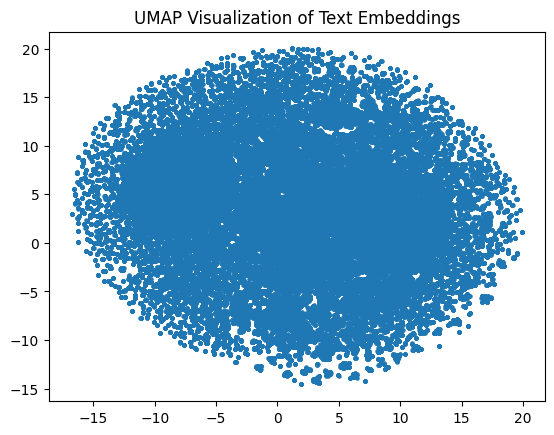

In [6]:
import spacy
import umap
import numpy as np
import matplotlib.pyplot as plt

# Load spaCy model (make sure to download the appropriate model)
nlp = spacy.load("en_core_web_sm")

# Function to generate embeddings for a text string
def generate_embeddings(text):
    doc = nlp(text)
    return np.array([token.vector for token in doc])

# Function to visualize embeddings using UMAP
def visualize_embeddings(embeddings):
    umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine')
    umap_embeddings = umap_model.fit_transform(embeddings)

    # Plot the UMAP embeddings
    plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=5)
    plt.title('UMAP Visualization of Text Embeddings')
    plt.show()

# Generate embeddings for the text string
embeddings = generate_embeddings(text[:1000000])

# Visualize the embeddings
visualize_embeddings(embeddings)
